In [1]:
!pip install xgboost
!pip install graphviz
!pip install supertree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('train.csv',index_col='id')

In [4]:
data.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
id                                                                            
0      e          8.80         f           s         u                    f   
1      p          4.51         x           h         o                    f   
2      e          6.94         f           s         b                    f   
3      e          3.88         f           y         g                    f   
4      e          5.85         x           l         w                    f   

   gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
id                                                       ...              
0                a            c          w         4.51  ...        NaN   
1                a            c          n         4.79  ...        NaN   
2                x            c          w         6.85  ...        NaN   
3                s          NaN          g         4.16  ...        NaN   
4                d          NaN          w         3.37  ...        NaN   

   stem-surface stem-color veil-type veil-color has-ring ring-type  \
id                                                                   
0           NaN          w       NaN        NaN        f         f   
1             y          o       NaN        NaN        t         z   
2             s          n       NaN        NaN        f         f   
3           NaN          w       NaN        NaN        f         f   
4           NaN          w       NaN        NaN        f         f   

   spore-print-color habitat season  
id                                   
0                NaN       d      a  
1                NaN       d      w  
2                NaN       l      w  
3                NaN       d      u  
4                NaN       g      a  

[5 rows x 21 columns]

In [5]:
y = data['class']
X = data.drop('class', axis=1)
features = list(X.columns)

In [6]:
targets = y == 'p'

In [7]:
X

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
id                                                                           
0                8.80         f           s         u                    f   
1                4.51         x           h         o                    f   
2                6.94         f           s         b                    f   
3                3.88         f           y         g                    f   
4                5.85         x           l         w                    f   
...               ...       ...         ...       ...                  ...   
3116940          9.29         f         NaN         n                    t   
3116941         10.88         s         NaN         w                    t   
3116942          7.82         x           e         e                    f   
3116943          9.45         p           i         n                    t   
3116944          3.20         x           s         g                    f   

        gill-attachment gill-spacing gill-color  stem-height  stem-width  \
id                                                                         
0                     a            c          w         4.51       15.39   
1                     a            c          n         4.79        6.48   
2                     x            c          w         6.85        9.93   
3                     s          NaN          g         4.16        6.53   
4                     d          NaN          w         3.37        8.36   
...                 ...          ...        ...          ...         ...   
3116940             NaN          NaN          w        12.14       18.81   
3116941               d            c          p         6.65       26.97   
3116942               a          NaN          w         9.51       11.06   
3116943               e          NaN          p         9.13       17.77   
3116944               d            c          w         2.82        7.79   

        stem-root stem-surface stem-color veil-type veil-color has-ring  \
id                                                                        
0             NaN          NaN          w       NaN        NaN        f   
1             NaN            y          o       NaN        NaN        t   
2             NaN            s          n       NaN        NaN        f   
3             NaN          NaN          w       NaN        NaN        f   
4             NaN          NaN          w       NaN        NaN        f   
...           ...          ...        ...       ...        ...      ...   
3116940         b          NaN          w         u          w        t   
3116941       NaN          NaN          w       NaN        NaN        f   
3116942       NaN          NaN          y       NaN          w        t   
3116943       NaN            y          w       NaN        NaN        t   
3116944       NaN          NaN          w       NaN        NaN        f   

        ring-type spore-print-color habitat season  
id                                                  
0               f               NaN       d      a  
1               z               NaN       d      w  
2               f               NaN       l      w  
3               f               NaN       d      u  
4               f               NaN       g      a  
...           ...               ...     ...    ...  
3116940         g               NaN       d      u  
3116941         f               NaN       d      u  
3116942         z               NaN       d      a  
3116943         p               NaN       d      u  
3116944         f               NaN       g      u  

[3116945 rows x 20 columns]

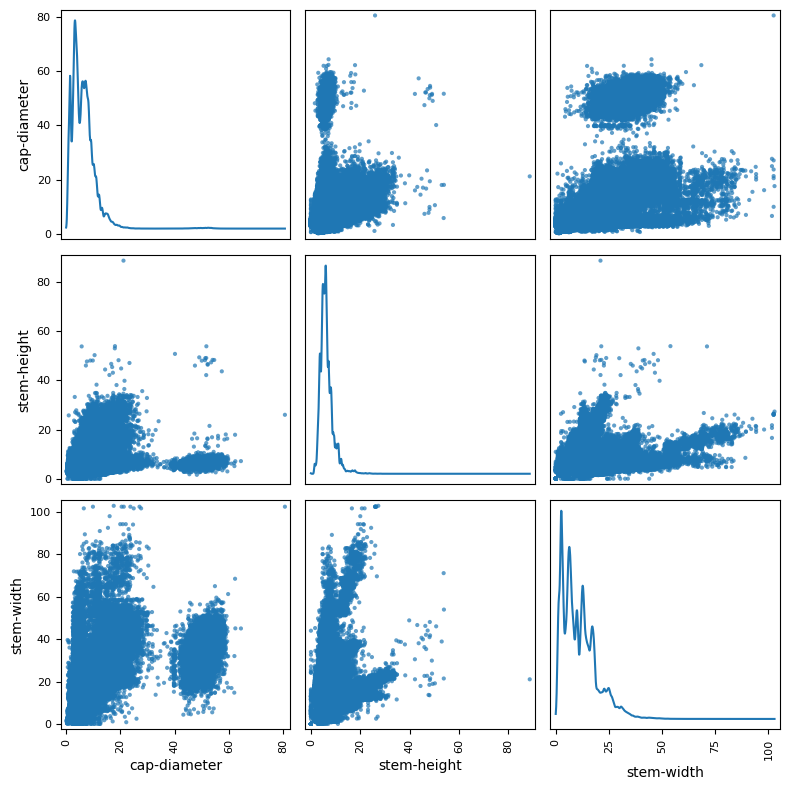

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.1, random_state=0)
pd.plotting.scatter_matrix(X_train, figsize=(8, 8), diagonal='kde', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
# Convert to categorical or float32
num_features = ['cap-diameter', 'stem-height', 'stem-width']
cat_features = [f for f in features if f not in num_features]
for feature in features:
    if feature in cat_features:
        categories = sorted(list(set(data[feature].dropna())))
        dtype = pd.CategoricalDtype(categories=categories,ordered=False)
        X.loc[~X[feature].isin(categories), feature] = np.nan
    else:
        dtype = np.float32
    X[feature] = X[feature].astype(dtype)
y = y.astype(dtype='category')

In [10]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=0)

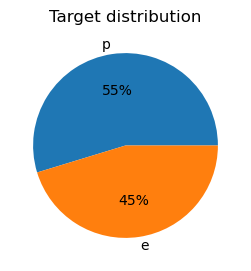

In [11]:
temp = y.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

In [12]:
#import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(enable_categorical=True)
#use k fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, targets, cv=5, scoring='accuracy')

In [13]:
print(scores)

[0.99191516 0.99187987 0.99188147 0.99161358 0.99205312]


In [14]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
#predict on y_test
y_pred = model.predict(X_test)
#get accuracy/f1
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test,y_pred)
print(f"Accuracy: {accuracy:.5f}")
print(f"F1: {f1:.5f}")
print(f"MCC: {mcc:.5f}")

Accuracy: 0.99169
F1: 0.99240
MCC: 0.98324


In [24]:
model_testing = XGBClassifier(max_depth = 10, enable_categorical=True)
model_testing.fit(X_train,y_train)
#predict on y_test
y_pred = model_testing.predict(X_test)
#get accuracy/f1
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef



In [25]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test,y_pred)
print(f"Accuracy: {accuracy:.5f}")
print(f"F1: {f1:.5f}")
print(f"MCC: {mcc:.5f}")

Accuracy: 0.99201
F1: 0.99269
MCC: 0.98387


In [26]:
from xgboost import plot_tree
import matplotlib

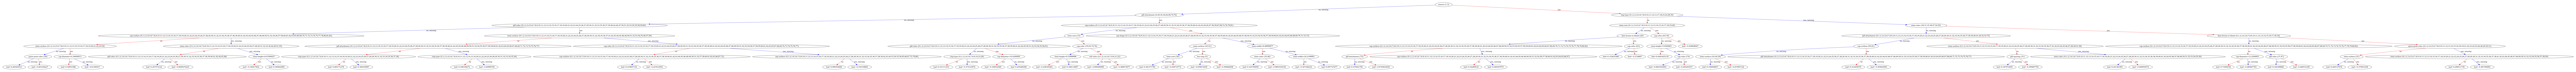

In [27]:
plot_tree(model, num_trees=4)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

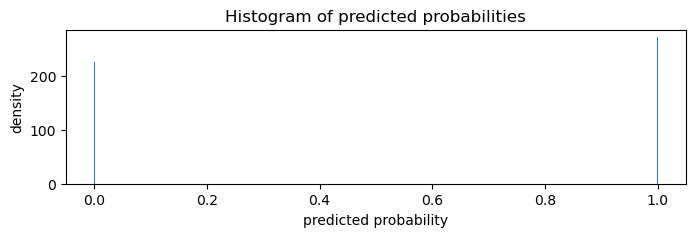

In [32]:
plt.figure(figsize=(8, 2))
plt.hist(y_pred, bins=500, density=True)
plt.xlabel('predicted probability')
plt.ylabel('density')
plt.title('Histogram of predicted probabilities')
plt.show()

In [28]:
class TreeBooster():
    '''the booster part of the XGTree. creates trees. in a sense similar to a decision tree
    as it finds the best feature to split on and creates children nodes based on that split. 

    this class takes in:
    X - the features
    gradients - an array of the gradients
    hessian - the hessian matrix
    max_depth: int for max depth of the tree
    
    '''
    def __init__(self, X, gradients, hessians, max_depth):
        #there are actually multiple args for xgboost, but for the sake of simplicity i only implemented max depth.
        #all others are assumed to be the default according to the documentation of XGBoost
        self.X = X
        self.gradients = gradients
        self.hessians = hessians
        self.max_depth = max_depth
        self.indexes = np.arange(len(gradients))
        #shape numbers
        self.n = len(self.indexes)
        self.c = X.shape[1]
        self.weight = -gradients.values.sum() / (hessians[self.indexes].sum() + 1) #found in the xgboost paper as eq 5
        self.best_score = 0 #score for spliting
        if self.max_depth > 0:
            self.make_child()
        
    def make_child(self):
        '''function to make child nodes'''
        for i in range(self.c): #for each feature, find the best split point
            self.find_best_split(i)
        if self.is_leaf: 
            return
        x = self.X.values[self.indexes, self.split_feature] #find the feature with the best split feature
        left_index = np.nonzero(x <= self.split_value)[0] 
        right_index = np.nonzero(x > self.split_value)[0]
        #recurse
        self.left = TreeBooster(self.X, self.gradients, self.hessians, self.max_depth - 1, self.indexes[left_index])
        self.right = TreeBooster(self.X, self.gradients, self.hessians, self.max_depth - 1, self.indexes[right_index])
    
    def is_leaf(self):
        '''returns if the node is a leaf. no need to recurse'''
        return self.best_score == 0 or self.max_depth == 0
    
    def find_best_split(self, feature):
        '''finds the best split based on the feature. feature is a int index which maps
        to a feature'''
        x = self.X.values[self.indexes, feature] #get the feature column
        g, h = self.gradients[self.indexes], self.hessians[self.indexes]
        #a bunch of sorting
        sort_index = np.argsort(x)
        sort_g = g[sort_index]
        sort_h = h[sort_index]
        sort_x = x[sort_index]
        sum_g = np.sum(g)
        sum_h = np.sum(h)
        sum_g_l, sum_h_l = 0, 0
        sum_g_r, sum_h_r = sum_g, sum_h

        #split finding mostly similar to a normal decision tree implementation, as done in class (not sure if
        #this class or another class I'm taking)
        for i in range(0,self.n - 1):
            g_i, h_i = sort_g[i], sort_h[i]
            x_i, x_i_next = sort_x[i], sort_x[i+1]
            sum_g_l += g_i
            sum_h_l += h_i
            sum_g_r -= g_i
            sum_h_r -= h_i
            if sum_h_l < 1 or x_i == x_i_next:
                continue
            if sum_h_r < 1:
                break
            #score according to equation 7 in xgboost paper
            score = 0.5 * (sum_g_l**2 / (sum_h_l+1)) + (sum_g_r**2 / (sum_h_r+1)) - (sum_g**2 / (sum_h+1))
            if score > self.best_score:
                self.split_feature = feature
                self.best_score = score
                self.split_value = 0.5 * (x_i + x_i_next)
    
    def predict(self, X):
        '''predicts class based on X'''
        return np.array([self.predict_row(x) for i, x in X.iterrows()])
    
    def predict_row(self, x):
        '''helper for predict method'''
        if self.is_leaf:
            return self.weight
        child = self.left if x[self.split_feature] <= self.split_value else self.right #choose which tree to go down
        return child.predict_row(x)

In [29]:
#now from scratch
class XGBoostFromScratch():
    '''XGBoost from scratch'''
    def __init__(self, max_depth=6, random_seed = None):
        #other args in XGBoost are implied to be default
        self.max_depth = max_depth
        self.random_seed = np.random.seed(random_seed)
        
        
    def fit(self, X, y, objective, boost_rounds): #objective is the loss function
        '''fits the model'''
        current_prediction = 0.5 * np.ones(y.shape) #default prediction
        self.trees = []
        for i in range(boost_rounds):
            gradients = objective.gradient(y, current_prediction)
            hessians = objective.hessian(y, current_prediction)
            booster = TreeBooster(X, gradients, hessians, max_depth=self.max_depth)
            
    def predict(self, X):
        #initialize the predictions
        predictions = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            predictions += self.tree_weights[i] * self.trees[i].predict(X)
        return predictions

In [30]:
class BinaryLogObjective():
    '''the objective function, for us it's binary as we're doing binary classification, so the loss
    function is sigmoid'''
    def loss(self, y, pred): return 1.0 / (1.0 + np.exp(-pred))
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))


In [31]:
model_2 = XGBoostFromScratch()
model_2.fit(X_train,y_train,BinaryLogObjective(),10)

KeyError: '[2, 4, 9, 11, 12, 33, 37, 40, 41, 56, 62, 77, 79, 80, 81, 85, 91, 92, 94, 96, 98, 107, 112, 115, 122, 125, 126, 129, 133, 146, 150, 153, 163, 166, 171, 177, 187, 190, 203, 210, 211, 213, 216, 219, 229, 230, 236, 237, 249, 250, 264, 266, 267, 280, 284, 286, 288, 289, 293, 294, 295, 296, 305, 306, 311, 317, 330, 332, 344, 350, 362, 370, 376, 383, 397, 403, 407, 410, 441, 442, 443, 452, 454, 457, 465, 471, 472, 474, 481, 489, 501, 521, 522, 524, 529, 530, 534, 538, 547, 553, 558, 565, 569, 571, 573, 584, 589, 591, 593, 607, 611, 615, 619, 642, 643, 646, 653, 660, 665, 666, 674, 680, 682, 690, 693, 695, 706, 724, 730, 731, 736, 749, 759, 768, 777, 778, 789, 791, 793, 801, 806, 807, 811, 812, 813, 816, 827, 828, 835, 842, 849, 855, 856, 858, 875, 876, 882, 883, 888, 889, 890, 894, 897, 901, 902, 909, 917, 919, 922, 924, 925, 926, 932, 934, 956, 957, 959, 960, 986, 988, 992, 994, 1001, 1009, 1015, 1016, 1018, 1024, 1026, 1035, 1039, 1053, 1064, 1074, 1076, 1081, 1085, 1090, 1102, 1115, 1116, 1117, 1121, 1136, 1155, 1156, 1162, 1165, 1169, 1179, 1181, 1187, 1190, 1191, 1210, 1213, 1215, 1219, 1231, 1232, 1239, 1242, 1248, 1250, 1253, 1257, 1265, 1268, 1272, 1275, 1280, 1283, 1284, 1286, 1296, 1306, 1307, 1313, 1319, 1325, 1327, 1331, 1332, 1333, 1335, 1336, 1339, 1348, 1352, 1358, 1364, 1373, 1374, 1378, 1380, 1384, 1390, 1393, 1403, 1404, 1405, 1411, 1414, 1425, 1441, 1446, 1447, 1448, 1454, 1455, 1464, 1469, 1471, 1474, 1483, 1486, 1493, 1496, 1499, 1502, 1503, 1511, 1519, 1528, 1530, 1537, 1541, 1547, 1548, 1552, 1562, 1564, 1567, 1568, 1569, 1574, 1575, 1584, 1585, 1587, 1588, 1601, 1602, 1608, 1626, 1632, 1634, 1635, 1637, 1652, 1665, 1669, 1673, 1674, 1682, 1684, 1687, 1691, 1693, 1703, 1709, 1714, 1718, 1720, 1723, 1725, 1729, 1737, 1747, 1750, 1767, 1769, 1776, 1777, 1779, 1782, 1785, 1788, 1789, 1793, 1796, 1801, 1802, 1807, 1824, 1825, 1835, 1836, 1848, 1852, 1853, 1854, 1855, 1856, 1859, 1862, 1865, 1868, 1877, 1888, 1893, 1901, 1904, 1906, 1908, 1909, 1910, 1915, 1916, 1917, 1920, 1925, 1941, 1942, 1950, 1953, 1967, 1969, 1975, 1978, 1986, 1988, 1989, 1995, 1997, 2004, 2009, 2014, 2017, 2018, 2022, 2024, 2051, 2068, 2071, 2122, 2123, 2128, 2132, 2135, 2138, 2139, 2142, 2148, 2151, 2152, 2154, 2158, 2166, 2171, 2172, 2177, 2200, 2202, 2207, 2209, 2210, 2214, 2218, 2220, 2221, 2222, 2228, 2235, 2238, 2239, 2244, 2248, 2249, 2251, 2257, 2266, 2269, 2281, 2288, 2290, 2312, 2314, 2321, 2323, 2331, 2332, 2333, 2340, 2342, 2346, 2347, 2351, 2358, 2359, 2364, 2365, 2367, 2369, 2370, 2376, 2378, 2380, 2386, 2391, 2398, 2403, 2404, 2414, 2416, 2424, 2426, 2427, 2430, 2433, 2435, 2436, 2437, 2440, 2441, 2442, 2450, 2453, 2460, 2463, 2471, 2472, 2473, 2478, 2481, 2484, 2485, 2494, 2496, 2503, 2517, 2519, 2522, 2525, 2528, 2532, 2534, 2539, 2541, 2542, 2546, 2551, 2556, 2565, 2572, 2577, 2578, 2580, 2584, 2586, 2590, 2595, 2598, 2608, 2611, 2620, 2631, 2636, 2637, 2640, 2643, 2654, 2659, 2663, 2666, 2667, 2678, 2682, 2688, 2694, 2696, 2699, 2705, 2706, 2708, 2710, 2725, 2727, 2730, 2733, 2736, 2738, 2740, 2752, 2765, 2768, 2769, 2770, 2783, 2788, 2799, 2814, 2815, 2851, 2852, 2855, 2858, 2859, 2861, 2877, 2880, 2884, 2887, 2888, 2891, 2892, 2893, 2896, 2900, 2905, 2908, 2909, 2911, 2916, 2918, 2927, 2933, 2934, 2943, 2950, 2958, 2960, 2963, 2964, 2965, 2966, 2970, 2977, 2987, 3002, 3003, 3010, 3021, 3033, 3040, 3042, 3048, 3050, 3060, 3068, 3069, 3070, 3072, 3075, 3083, 3085, 3095, 3097, 3103, 3110, 3113, 3126, 3128, 3132, 3133, 3134, 3139, 3142, 3148, 3149, 3156, 3161, 3162, 3171, 3172, 3175, 3178, 3179, 3182, 3184, 3187, 3188, 3195, 3196, 3203, 3207, 3215, 3235, 3238, 3240, 3246, 3252, 3265, 3268, 3269, 3275, 3277, 3278, 3281, 3282, 3284, 3288, 3292, 3294, 3295, 3304, 3309, 3313, 3314, 3325, 3327, 3328, 3329, 3336, 3339, 3342, 3348, 3356, 3367, 3383, 3396, 3407, 3413, 3422, 3432, 3445, 3447, 3452, 3460, 3461, 3467, 3468, 3476, 3481, 3492, 3496, 3498, 3503, 3504, 3508, 3522, 3529, 3537, 3543, 3547, 3550, 3551, 3554, 3563, 3566, 3570, 3573, 3579, 3582, 3594, 3597, 3598, 3603, 3605, 3606, 3615, 3620, 3623, 3625, 3628, 3629, 3632, 3640, 3649, 3651, 3653, 3654, 3656, 3660, 3662, 3666, 3672, 3685, 3696, 3699, 3702, 3707, 3713, 3717, 3735, 3739, 3745, 3751, 3757, 3768, 3769, 3770, 3771, 3772, 3779, 3782, 3785, 3786, 3789, 3790, 3794, 3796, 3797, 3801, 3805, 3806, 3816, 3817, 3820, 3827, 3831, 3842, 3843, 3844, 3858, 3876, 3893, 3894, 3902, 3904, 3913, 3915, 3916, 3928, 3937, 3944, 3946, 3950, 3953, 3956, 3962, 3973, 3982, 3983, 3989, 3992, 3993, 3996, 4004, 4015, 4020, 4021, 4033, 4037, 4043, 4044, 4047, 4052, 4055, 4067, 4071, 4072, 4080, 4086, 4088, 4089, 4090, 4093, 4103, 4107, 4112, 4114, 4129, 4134, 4135, 4139, 4141, 4143, 4147, 4159, 4162, 4164, 4167, 4170, 4174, 4186, 4192, 4197, 4198, 4206, 4217, 4220, 4221, 4223, 4224, 4225, 4228, 4235, 4236, 4249, 4250, 4252, 4253, 4255, 4266, 4268, 4272, 4273, 4274, 4282, 4284, 4286, 4288, 4291, 4297, 4305, 4309, 4311, 4315, 4316, 4317, 4323, 4330, 4331, 4335, 4336, 4338, 4339, 4343, 4349, 4350, 4353, 4354, 4356, 4357, 4359, 4368, 4374, 4379, 4383, 4390, 4391, 4393, 4396, 4397, 4400, 4404, 4410, 4412, 4417, 4419, 4420, 4429, 4431, 4435, 4437, 4438, 4439, 4444, 4445, 4450, 4460, 4462, 4464, 4471, 4482, 4483, 4486, 4491, 4495, 4504, 4517, 4519, 4525, 4527, 4534, 4535, 4547, 4550, 4553, 4561, 4562, 4570, 4581, 4582, 4583, 4587, 4593, 4595, 4602, 4622, 4628, 4640, 4643, 4646, 4650, 4653, 4654, 4655, 4663, 4665, 4666, 4674, 4681, 4683, 4686, 4689, 4693, 4697, 4698, 4699, 4709, 4718, 4734, 4739, 4745, 4748, 4749, 4750, 4758, 4767, 4775, 4777, 4778, 4783, 4786, 4787, 4791, 4794, 4798, 4801, 4803, 4807, 4808, 4818, 4819, 4822, 4843, 4850, 4863, 4865, 4869, 4872, 4878, 4880, 4888, 4889, 4892, 4893, 4898, 4901, 4902, 4913, 4916, 4919, 4920, 4928, 4931, 4933, 4934, 4942, 4944, 4954, 4961, 4964, 4970, 4982, 4991, 4997, 5005, 5009, 5019, 5020, 5027, 5030, 5042, 5054, 5055, 5056, 5059, 5061, 5064, 5066, 5078, 5079, 5084, 5087, 5091, 5099, 5108, 5117, 5118, 5131, 5136, 5137, 5150, 5153, 5154, 5155, 5161, 5169, 5173, 5178, 5181, 5184, 5190, 5196, 5197, 5222, 5223, 5229, 5233, 5239, 5245, 5247, 5249, 5255, 5258, 5272, 5281, 5290, 5292, 5296, 5309, 5314, 5316, 5322, 5324, 5332, 5333, 5339, 5340, 5344, 5348, 5364, 5365, 5379, 5382, 5385, 5386, 5388, 5389, 5393, 5394, 5396, 5400, 5410, 5417, 5422, 5433, 5435, 5437, 5438, 5440, 5445, 5446, 5449, 5451, 5453, 5456, 5459, 5464, 5474, 5476, 5479, 5485, 5486, 5496, 5499, 5500, 5501, 5510, 5514, 5526, 5528, 5529, 5535, 5545, 5552, 5555, 5558, 5564, 5565, 5573, 5579, 5582, 5586, 5588, 5601, 5615, 5617, 5619, 5624, 5633, 5634, 5639, 5646, 5652, 5653, 5655, 5662, 5663, 5666, 5667, 5670, 5680, 5685, 5698, 5704, 5708, 5711, 5712, 5716, 5717, 5719, 5728, 5729, 5732, 5738, 5741, 5743, 5748, 5751, 5753, 5755, 5760, 5765, 5767, 5768, 5769, 5773, 5774, 5789, 5797, 5800, 5803, 5809, 5821, 5840, 5842, 5843, 5846, 5856, 5859, 5862, 5863, 5864, 5870, 5874, 5882, 5889, 5896, 5904, 5905, 5913, 5919, 5920, 5927, 5933, 5943, 5944, 5948, 5949, 5954, 5957, 5964, 5966, 5979, 5986, 5987, 5994, 5995, 5998, 6010, 6011, 6021, 6024, 6035, 6038, 6042, 6054, 6064, 6070, 6075, 6084, 6095, 6103, 6104, 6113, 6119, 6120, 6124, 6126, 6128, 6137, 6149, 6150, 6152, 6153, 6154, 6159, 6160, 6177, 6180, 6192, 6202, 6204, 6212, 6214, 6221, 6228, 6229, 6239, 6242, 6245, 6248, 6256, 6265, 6279, 6290, 6292, 6294, 6306, 6312, 6318, 6320, 6321, 6328, 6343, 6344, 6346, 6349, 6351, 6354, 6357, 6363, 6366, 6368, 6369, 6383, 6384, 6385, 6401, 6402, 6407, 6409, 6412, 6421, 6426, 6429, 6431, 6444, 6453, 6455, 6460, 6461, 6463, 6466, 6467, 6470, 6471, 6487, 6489, 6493, 6504, 6517, 6521, 6524, 6525, 6540, 6542, 6547, 6548, 6555, 6558, 6574, 6576, 6586, 6588, 6589, 6590, 6591, 6602, 6609, 6610, 6615, 6632, 6634, 6638, 6650, 6657, 6666, 6667, 6668, 6676, 6677, 6678, 6682, 6686, 6687, 6689, 6691, 6692, 6694, 6702, 6708, 6710, 6715, 6717, 6721, 6732, 6740, 6744, 6747, 6748, 6751, 6756, 6758, 6759, 6763, 6770, 6774, 6781, 6785, 6793, 6807, 6809, 6812, 6818, 6823, 6828, 6831, 6843, 6844, 6848, 6863, 6866, 6869, 6871, 6875, 6886, 6887, 6890, 6893, 6900, 6904, 6907, 6915, 6939, 6940, 6944, 6952, 6954, 6961, 6972, 6973, 6978, 6980, 6981, 6987, 6996, 6998, 7007, 7008, 7012, 7020, 7023, 7029, 7032, 7036, 7037, 7047, 7049, 7059, 7082, 7084, 7091, 7095, 7096, 7101, 7108, 7109, 7113, 7115, 7120, 7123, 7129, 7131, 7132, 7136, 7137, 7149, 7161, 7162, 7165, 7170, 7192, 7198, 7210, 7217, 7224, 7225, 7226, 7234, 7254, 7267, 7281, 7285, 7286, 7290, 7291, 7296, 7297, 7301, 7306, 7309, 7322, 7331, 7334, 7342, 7344, 7348, 7353, 7356, 7360, 7362, 7363, 7369, 7373, 7374, 7376, 7389, 7394, 7396, 7398, 7399, 7405, 7407, 7409, 7417, 7422, 7423, 7425, 7427, 7429, 7431, 7438, 7442, 7446, 7469, 7470, 7475, 7478, 7493, 7494, 7495, 7498, 7500, 7505, 7523, 7534, 7535, 7541, 7551, 7554, 7556, 7557, 7565, 7567, 7570, 7578, 7579, 7587, 7608, 7611, 7612, 7614, 7615, 7616, 7617, 7621, 7628, 7629, 7632, 7634, 7636, 7652, 7664, 7665, 7668, 7670, 7674, 7676, 7678, 7682, 7687, 7688, 7689, 7691, 7694, 7701, 7704, 7711, 7721, 7728, 7729, 7743, 7751, 7752, 7759, 7763, 7764, 7767, 7769, 7779, 7783, 7793, 7806, 7808, 7811, 7813, 7817, 7823, 7834, 7852, 7853, 7859, 7861, 7864, 7866, 7869, 7872, 7873, 7874, 7880, 7884, 7890, 7893, 7902, 7906, 7909, 7913, 7918, 7919, 7927, 7929, 7932, 7933, 7935, 7936, 7944, 7949, 7950, 7951, 7952, 7968, 7972, 7975, 7984, 7985, 7993, 8000, 8004, 8017, 8022, 8028, 8036, 8037, 8044, 8045, 8051, 8060, 8062, 8063, 8066, 8069, 8081, 8082, 8091, 8095, 8097, 8103, 8112, 8114, 8118, 8124, 8133, 8148, 8149, 8163, 8166, 8169, 8175, 8182, 8189, 8199, 8200, 8201, 8204, 8214, 8218, 8222, 8224, 8233, 8242, 8247, 8254, 8257, 8277, 8279, 8285, 8305, 8309, 8329, 8332, 8343, 8344, 8352, 8361, 8364, 8368, 8371, 8372, 8379, 8384, 8389, 8391, 8393, 8399, 8402, 8411, 8421, 8424, 8439, 8443, 8444, 8451, 8458, 8467, 8476, 8478, 8484, 8491, 8504, 8505, 8507, 8510, 8515, 8517, 8522, 8525, 8535, 8536, 8545, 8561, 8562, 8569, 8570, 8575, 8587, 8588, 8595, 8596, 8597, 8599, 8600, 8601, 8604, 8617, 8618, 8619, 8625, 8628, 8632, 8638, 8641, 8647, 8649, 8652, 8660, 8662, 8663, 8666, 8672, 8675, 8678, 8699, 8704, 8709, 8713, 8718, 8727, 8729, 8735, 8737, 8739, 8741, 8766, 8788, 8793, 8810, 8812, 8813, 8814, 8815, 8816, 8819, 8821, 8823, 8829, 8830, 8832, 8841, 8851, 8855, 8858, 8863, 8865, 8869, 8872, 8874, 8877, 8878, 8883, 8888, 8894, 8896, 8912, 8917, 8923, 8925, 8926, 8929, 8931, 8933, 8936, 8941, 8942, 8951, 8952, 8960, 8963, 8974, 8983, 8991, 8994, 8999, 9011, 9014, 9022, 9023, 9030, 9035, 9037, 9041, 9055, 9060, 9068, 9070, 9082, 9084, 9093, 9095, 9097, 9101, 9103, 9106, 9109, 9122, 9127, 9129, 9142, 9152, 9160, 9166, 9171, 9174, 9177, 9187, 9193, 9196, 9211, 9212, 9219, 9223, 9229, 9233, 9237, 9248, 9249, 9253, 9256, 9257, 9260, 9264, 9265, 9271, 9278, 9294, 9303, 9310, 9314, 9321, 9325, 9326, 9331, 9332, 9339, 9342, 9355, 9363, 9364, 9365, 9367, 9371, 9373, 9383, 9389, 9393, 9394, 9402, 9405, 9409, 9416, 9426, 9428, 9429, 9434, 9445, 9447, 9459, 9460, 9475, 9476, 9485, 9486, 9507, 9509, 9512, 9520, 9528, 9544, 9547, 9548, 9550, 9554, 9567, 9579, 9588, 9590, 9591, 9592, 9596, 9598, 9599, 9603, 9617, 9637, 9641, 9644, 9646, 9648, 9649, 9662, 9663, 9664, 9665, 9666, 9668, 9681, 9682, 9684, 9686, 9688, 9699, 9707, 9712, 9713, 9717, 9723, 9731, 9732, 9734, 9737, 9740, 9743, 9747, 9752, 9762, 9767, 9770, 9777, 9780, 9781, 9783, 9788, 9793, 9794, 9801, 9805, 9817, 9826, 9836, 9849, 9850, 9852, 9854, 9860, 9862, 9866, 9869, 9872, 9875, 9882, 9883, 9886, 9891, 9894, 9895, 9908, 9913, 9915, 9917, 9922, 9927, 9931, 9934, 9938, 9941, 9942, 9948, 9951, 9955, 9964, 9969, 9970, 9976, 9989, 9993, 9995, 9997, 9999, 10003, 10005, 10021, 10028, 10029, 10034, 10038, 10040, 10046, 10048, 10050, 10066, 10072, 10073, 10102, 10107, 10119, 10120, 10125, 10126, 10133, 10138, 10142, 10143, 10147, 10153, 10157, 10164, 10166, 10167, 10172, 10177, 10178, 10180, 10189, 10192, 10193, 10197, 10202, 10204, 10208, 10210, 10212, 10213, 10214, 10218, 10229, 10231, 10235, 10237, 10238, 10240, 10246, 10247, 10251, 10255, 10258, 10261, 10263, 10270, 10275, 10279, 10280, 10281, 10287, 10290, 10293, 10297, 10299, 10300, 10305, 10310, 10312, 10323, 10325, 10330, 10332, 10333, 10334, 10337, 10345, 10351, 10357, 10361, 10363, 10369, 10376, 10382, 10383, 10386, 10390, 10405, 10406, 10408, 10413, 10416, 10419, 10424, 10430, 10435, 10439, 10440, 10444, 10447, 10451, 10452, 10466, 10471, 10475, 10476, 10495, 10499, 10501, 10512, 10517, 10518, 10520, 10528, 10531, 10532, 10535, 10537, 10540, 10542, 10543, 10548, 10550, 10558, 10566, 10568, 10579, 10581, 10586, 10587, 10588, 10591, 10593, 10596, 10604, 10610, 10611, 10622, 10624, 10625, 10634, 10637, 10640, 10641, 10643, 10648, 10650, 10651, 10652, 10653, 10654, 10657, 10665, 10668, 10674, 10681, 10682, 10683, 10688, 10692, 10696, 10703, 10704, 10706, 10708, 10714, 10720, 10723, 10727, 10739, 10748, 10751, 10753, 10765, 10771, 10772, 10773, 10776, 10780, 10783, 10785, 10791, 10792, 10793, 10794, 10805, 10806, 10811, 10813, 10816, 10817, 10825, 10832, 10834, 10843, 10845, 10849, 10851, 10862, 10864, 10871, 10874, 10887, 10889, 10900, 10904, 10910, 10917, 10924, 10925, 10927, 10929, 10940, 10943, 10944, 10948, 10952, 10955, 10963, 10965, 10968, 10980, 10982, 10986, 10990, 10997, 11000, 11004, 11014, 11017, 11022, 11023, 11024, 11025, 11028, 11030, 11036, 11059, 11066, 11069, 11070, 11072, 11074, 11078, 11105, 11107, 11125, 11133, 11141, 11156, 11158, 11159, 11160, 11161, 11163, 11190, 11195, 11196, 11198, 11202, 11204, 11206, 11208, 11210, 11213, 11214, 11216, 11219, 11222, 11236, 11237, 11246, 11260, 11264, 11268, 11280, 11281, 11287, 11291, 11297, 11299, 11300, 11306, 11308, 11320, 11322, 11337, 11341, 11345, 11351, 11353, 11356, 11365, 11366, 11368, 11372, 11373, 11383, 11384, 11386, 11388, 11393, 11401, 11405, 11406, 11412, 11416, 11418, 11425, 11431, 11438, 11445, 11449, 11450, 11451, 11452, 11455, 11459, 11460, 11463, 11464, 11465, 11466, 11472, 11486, 11488, 11490, 11495, 11505, 11510, 11528, 11529, 11542, 11552, 11558, 11569, 11571, 11572, 11576, 11580, 11584, 11596, 11601, 11605, 11606, 11616, 11617, 11623, 11624, 11637, 11638, 11642, 11643, 11644, 11645, 11653, 11655, 11661, 11666, 11672, 11685, 11689, 11691, 11692, 11693, 11701, 11703, 11711, 11712, 11731, 11733, 11734, 11737, 11741, 11743, 11746, 11748, 11751, 11754, 11756, 11764, 11771, 11781, 11784, 11788, 11790, 11793, 11798, 11804, 11810, 11818, 11820, 11821, 11824, 11834, 11845, 11847, 11848, 11855, 11863, 11866, 11868, 11872, 11877, 11888, 11899, 11900, 11901, 11904, 11905, 11907, 11918, 11922, 11927, 11928, 11932, 11933, 11937, 11941, 11948, 11956, 11960, 11963, 11975, 11980, 11982, 11985, 11987, 11989, 11992, 11993, 11998, 11999, 12004, 12008, 12011, 12018, 12019, 12020, 12032, 12034, 12043, 12044, 12046, 12049, 12056, 12068, 12070, 12071, 12075, 12076, 12078, 12079, 12080, 12081, 12082, 12083, 12085, 12092, 12093, 12094, 12096, 12098, 12106, 12107, 12111, 12119, 12122, 12141, 12146, 12147, 12151, 12153, 12155, 12156, 12159, 12162, 12164, 12172, 12178, 12190, 12197, 12199, 12206, 12215, 12223, 12226, 12233, 12236, 12244, 12246, 12263, 12264, 12265, 12271, 12288, 12289, 12290, 12294, 12298, 12304, 12306, 12308, 12313, 12322, 12329, 12340, 12342, 12346, 12349, 12359, 12361, 12370, 12374, 12377, 12378, 12384, 12391, 12393, 12399, 12418, 12423, 12434, 12441, 12446, 12449, 12454, 12456, 12465, 12470, 12477, 12485, 12487, 12489, 12491, 12501, 12506, 12508, 12514, 12518, 12524, 12533, 12535, 12539, 12546, 12573, 12585, 12587, 12590, 12599, 12603, 12608, 12609, 12610, 12612, 12614, 12617, 12623, 12624, 12633, 12634, 12637, 12642, 12644, 12647, 12648, 12674, 12682, 12684, 12685, 12688, 12697, 12706, 12715, 12721, 12722, 12730, 12735, 12736, 12741, 12761, 12767, 12773, 12781, 12783, 12788, 12790, 12801, 12802, 12803, 12807, 12809, 12810, 12816, 12822, 12824, 12829, 12831, 12841, 12842, 12847, 12869, 12879, 12882, 12885, 12888, 12889, 12896, 12899, 12902, 12908, 12911, 12920, 12922, 12923, 12925, 12932, 12937, 12941, 12947, 12949, 12950, 12951, 12954, 12958, 12963, 12973, 12979, 12980, 12983, 12987, 12993, 12999, 13005, 13008, 13010, 13013, 13021, 13027, 13029, 13049, 13051, 13053, 13058, 13069, 13073, 13090, 13097, 13101, 13104, 13107, 13108, 13113, 13116, 13119, 13120, 13123, 13126, 13142, 13147, 13154, 13159, 13161, 13166, 13168, 13171, 13185, 13188, 13191, 13196, 13213, 13216, 13228, 13233, 13235, 13249, 13251, 13256, 13261, 13268, 13269, 13270, 13277, 13292, 13297, 13299, 13307, 13311, 13312, 13314, 13328, 13329, 13339, 13342, 13345, 13358, 13366, 13367, 13370, 13376, 13381, 13382, 13389, 13390, 13401, 13403, 13408, 13409, 13411, 13413, 13415, 13416, 13418, 13421, 13431, 13442, 13448, 13452, 13458, 13462, 13475, 13477, 13481, 13485, 13486, 13487, 13491, 13495, 13496, 13501, 13515, 13517, 13520, 13526, 13527, 13529, 13533, 13534, 13542, 13543, 13544, 13551, 13553, 13557, 13567, 13570, 13584, 13586, 13587, 13591, 13601, 13604, 13608, 13609, 13629, 13630, 13631, 13643, 13651, 13653, 13655, 13663, 13678, 13681, 13684, 13692, 13693, 13694, 13695, 13703, 13704, 13705, 13706, 13713, 13716, 13730, 13741, 13749, 13760, 13765, 13766, 13773, 13774, 13776, 13779, 13790, 13793, 13797, 13799, 13804, 13805, 13809, 13810, 13812, 13813, 13814, 13830, 13834, 13838, 13839, 13848, 13849, 13858, 13868, 13878, 13884, 13885, 13888, 13890, 13891, 13893, 13895, 13905, 13906, 13907, 13910, 13921, 13945, 13946, 13949, 13956, 13964, 13965, 13970, 13971, 13976, 13984, 13989, 13992, 13994, 13995, 14003, 14004, 14009, 14011, 14014, 14015, 14016, 14017, 14018, 14019, 14027, 14029, 14030, 14032, 14038, 14039, 14040, 14045, 14062, 14066, 14069, 14071, 14077, 14082, 14086, 14101, 14103, 14107, 14111, 14112, 14117, 14131, 14135, 14136, 14137, 14155, 14158, 14160, 14168, 14173, 14179, 14188, 14202, 14204, 14212, 14217, 14221, 14229, 14232, 14234, 14235, 14241, 14249, 14253, 14259, 14265, 14269, 14275, 14279, 14282, 14284, 14288, 14290, 14297, 14301, 14308, 14310, 14317, 14322, 14323, 14336, 14337, 14339, 14343, 14350, 14355, 14357, 14360, 14362, 14363, 14365, 14367, 14377, 14378, 14379, 14387, 14394, 14403, 14404, 14411, 14414, 14421, 14423, 14427, 14432, 14441, 14444, 14445, 14450, 14451, 14457, 14462, 14471, 14475, 14476, 14484, 14487, 14488, 14490, 14495, 14498, 14518, 14523, 14524, 14527, 14529, 14535, 14537, 14538, 14539, 14547, 14556, 14560, 14562, 14574, 14575, 14586, 14589, 14594, 14607, 14616, 14618, 14619, 14625, 14632, 14638, 14644, 14648, 14656, 14657, 14663, 14669, 14675, 14683, 14691, 14703, 14714, 14715, 14722, 14727, 14739, 14743, 14768, 14775, 14778, 14786, 14787, 14788, 14795, 14796, 14797, 14798, 14807, 14812, 14825, 14830, 14835, 14838, 14844, 14846, 14847, 14852, 14874, 14876, 14881, 14882, 14889, 14891, 14902, 14907, 14912, 14913, 14925, 14932, 14939, 14946, 14967, 14968, 14985, 14986, 14989, 14995, 14996, 14999, 15002, 15005, 15015, 15023, 15030, 15034, 15035, 15040, 15042, 15044, 15048, 15054, 15067, 15071, 15073, 15074, 15079, 15083, 15085, 15087, 15088, 15095, 15097, 15107, 15111, 15117, 15123, 15125, 15130, 15132, 15134, 15136, 15139, 15140, 15142, 15143, 15147, 15149, 15158, 15166, 15170, 15173, 15175, 15176, 15177, 15181, 15199, 15200, 15207, 15210, 15211, 15213, 15214, 15220, 15224, 15241, 15242, 15243, 15245, 15255, 15261, 15262, 15264, 15270, 15273, 15274, 15277, 15282, 15284, 15286, 15290, 15294, 15295, 15305, 15310, 15316, 15329, 15333, 15335, 15345, 15346, 15352, 15354, 15357, 15360, 15364, 15367, 15377, 15379, 15382, 15390, 15400, 15403, 15405, 15416, 15420, 15426, 15428, 15436, 15441, 15448, 15449, 15450, 15454, 15469, 15480, 15484, 15487, 15495, 15505, 15507, 15516, 15517, 15522, 15528, 15536, 15540, 15543, 15547, 15549, 15551, 15552, 15562, 15564, 15565, 15574, 15576, 15580, 15582, 15589, 15595, 15599, 15615, 15626, 15628, 15649, 15652, 15656, 15659, 15660, 15661, 15666, 15671, 15673, 15704, 15705, 15710, 15718, 15721, 15723, 15735, 15738, 15742, 15743, 15747, 15749, 15759, 15765, 15775, 15787, 15794, 15797, 15811, 15812, 15815, 15820, 15821, 15824, 15841, 15848, 15850, 15854, 15862, 15865, 15868, 15881, 15885, 15890, 15893, 15896, 15907, 15918, 15921, 15924, 15928, 15940, 15941, 15956, 15957, 15961, 15963, 15973, 15980, 15982, 15984, 15985, 15987, 15991, 16000, 16002, 16008, 16009, 16010, 16023, 16026, 16042, 16048, 16059, 16060, 16072, 16075, 16076, 16083, 16087, 16102, 16112, 16115, 16116, 16119, 16121, 16134, 16140, 16142, 16146, 16151, 16153, 16155, 16159, 16166, 16173, 16175, 16180, 16182, 16188, 16194, 16196, 16210, 16211, 16214, 16223, 16224, 16226, 16232, 16242, 16249, 16252, 16254, 16258, 16263, 16273, 16286, 16287, 16290, 16293, 16297, 16303, 16310, 16311, 16315, 16321, 16332, 16334, 16353, 16358, 16370, 16379, 16380, 16381, 16388, 16391, 16408, 16414, 16419, 16421, 16423, 16426, 16436, 16439, 16443, 16449, 16469, 16473, 16476, 16492, 16503, 16506, 16508, 16512, 16537, 16542, 16544, 16545, 16552, 16564, 16566, 16570, 16573, 16591, 16593, 16598, 16600, 16606, 16612, 16622, 16623, 16628, 16637, 16641, 16661, 16664, 16673, 16675, 16677, 16681, 16682, 16697, 16700, 16705, 16711, 16718, 16719, 16720, 16726, 16727, 16731, 16732, 16737, 16738, 16739, 16741, 16746, 16748, 16753, 16762, 16768, 16770, 16777, 16787, 16791, 16792, 16795, 16797, 16806, 16807, 16808, 16816, 16821, 16823, 16825, 16829, 16830, 16831, 16832, 16834, 16838, 16847, 16848, 16854, 16859, 16864, 16879, 16882, 16885, 16892, 16901, 16905, 16907, 16912, 16913, 16917, 16924, 16926, 16929, 16941, 16951, 16957, 16965, 16968, 16971, 16972, 16979, 16980, 16985, 16987, 16998, 17000, 17006, 17014, 17015, 17023, 17024, 17025, 17027, 17028, 17034, 17039, 17046, 17047, 17049, 17059, 17062, 17069, 17073, 17075, 17083, 17086, 17089, 17092, 17095, 17096, 17098, 17100, 17103, 17112, 17118, 17132, 17147, 17157, 17162, 17165, 17172, 17176, 17179, 17188, 17193, 17196, 17201, 17203, 17206, 17213, 17214, 17215, 17219, 17229, 17232, 17235, 17236, 17256, 17257, 17258, 17259, 17266, 17270, 17275, 17281, 17282, 17287, 17291, 17292, 17295, 17296, 17297, 17303, 17304, 17306, 17308, 17312, 17316, 17318, 17337, 17341, 17344, 17348, 17361, 17367, 17369, 17372, 17379, 17384, 17396, 17401, 17405, 17416, 17426, 17429, 17430, 17431, 17435, 17438, 17439, 17445, 17446, 17453, 17454, 17461, 17463, 17487, 17488, 17490, 17498, 17505, 17513, 17518, 17537, 17549, 17564, 17579, 17580, 17584, 17585, 17589, 17593, 17599, 17601, 17615, 17617, 17622, 17623, 17626, 17628, 17631, 17637, 17639, 17641, 17648, 17649, 17655, 17662, 17703, 17706, 17707, 17712, 17717, 17733, 17740, 17749, 17751, 17755, 17760, 17767, 17779, 17780, 17784, 17787, 17788, 17790, 17792, 17802, 17808, 17811, 17813, 17818, 17820, 17821, 17823, 17826, 17828, 17834, 17838, 17849, 17851, 17853, 17857, 17867, 17875, 17877, 17883, 17891, 17900, 17901, 17906, 17914, 17916, 17919, 17922, 17925, 17928, 17931, 17933, 17936, 17938, 17942, 17946, 17948, 17958, 17960, 17965, 17972, 17974, 17976, 17978, 17984, 17988, 17989, 17992, 17996, 17998, 18004, 18007, 18018, 18028, 18036, 18041, 18049, 18050, 18052, 18055, 18057, 18058, 18076, 18087, 18090, 18108, 18109, 18111, 18122, 18135, 18142, 18155, 18158, 18164, 18165, 18174, 18189, 18198, 18212, 18221, 18225, 18237, 18238, 18239, 18242, 18246, 18249, 18252, 18255, 18260, 18274, 18279, 18295, 18299, 18301, 18310, 18313, 18315, 18317, 18321, 18323, 18330, 18343, 18348, 18353, 18362, 18368, 18370, 18375, 18376, 18382, 18384, 18393, 18400, 18406, 18413, 18422, 18425, 18428, 18430, 18431, 18442, 18444, 18456, 18465, 18469, 18471, 18473, 18474, 18478, 18491, 18496, 18502, 18506, 18510, 18515, 18518, 18521, 18530, 18536, 18539, 18541, 18543, 18550, 18552, 18555, 18556, 18565, 18588, 18594, 18595, 18600, 18621, 18624, 18626, 18629, 18636, 18639, 18640, 18645, 18652, 18654, 18655, 18666, 18669, 18672, 18675, 18677, 18688, 18689, 18691, 18701, 18703, 18704, 18710, 18712, 18716, 18717, 18718, 18721, 18726, 18734, 18748, 18750, 18763, 18767, 18772, 18775, 18776, 18778, 18786, 18787, 18793, 18795, 18797, 18802, 18809, 18810, 18812, 18814, 18816, 18822, 18828, 18829, 18835, 18836, 18841, 18844, 18848, 18849, 18854, 18857, 18863, 18871, 18876, 18883, 18884, 18885, 18897, 18904, 18905, 18911, 18914, 18919, 18926, 18931, 18938, 18939, 18956, 18961, 18966, 18967, 18969, 18981, 18985, 18987, 18991, 18994, 18995, 18998, 19005, 19007, 19011, 19014, 19016, 19033, 19038, 19039, 19041, 19042, 19047, 19048, 19051, 19052, 19054, 19056, 19057, 19059, 19060, 19065, 19075, 19081, 19084, 19087, 19094, 19095, 19096, 19099, 19100, 19106, 19107, 19111, 19112, 19114, 19126, 19131, 19132, 19139, 19147, 19149, 19150, 19152, 19155, 19158, 19159, 19162, 19163, 19167, 19171, 19172, 19181, 19191, 19192, 19214, 19221, 19227, 19230, 19234, 19238, 19251, 19259, 19266, 19271, 19277, 19281, 19287, 19289, 19296, 19306, 19312, 19317, 19325, 19327, 19328, 19347, 19349, 19356, 19363, 19364, 19368, 19377, 19387, 19392, 19399, 19401, 19402, 19412, 19418, 19426, 19440, 19442, 19445, 19453, 19456, 19462, 19465, 19467, 19469, 19473, 19481, 19494, 19497, 19502, 19503, 19510, 19515, 19519, 19520, 19524, 19526, 19532, 19533, 19535, 19542, 19544, 19553, 19554, 19559, 19562, 19563, 19565, 19572, 19578, 19586, 19593, 19599, 19605, 19616, 19617, 19626, 19631, 19638, 19649, 19651, 19654, 19655, 19660, 19663, 19677, 19678, 19679, 19696, 19699, 19701, 19702, 19704, 19706, 19709, 19713, 19720, 19721, 19724, 19729, 19743, 19752, 19759, 19760, 19770, 19771, 19777, 19784, 19791, 19793, 19795, 19809, 19810, 19815, 19817, 19820, 19824, 19827, 19830, 19833, 19836, 19843, 19847, 19849, 19850, 19857, 19869, 19870, 19873, 19879, 19883, 19886, 19893, 19898, 19901, 19908, 19912, 19914, 19921, 19930, 19941, 19944, 19949, 19950, 19951, 19952, 19956, 19972, 19978, 19993, 19997, 20003, 20004, 20011, 20017, 20019, 20022, 20027, 20028, 20029, 20035, 20039, 20042, 20043, 20047, 20053, 20056, 20058, 20059, 20068, 20071, 20074, 20082, 20089, 20097, 20099, 20105, 20109, 20117, 20120, 20131, 20159, 20178, 20185, 20187, 20188, 20191, 20199, 20204, 20218, 20219, 20225, 20230, 20234, 20241, 20243, 20253, 20255, 20273, 20275, 20284, 20287, 20288, 20292, 20293, 20299, 20300, 20306, 20310, 20335, 20348, 20351, 20362, 20366, 20377, 20387, 20389, 20390, 20392, 20397, 20402, 20404, 20411, 20414, 20421, 20440, 20449, 20458, 20460, 20471, 20483, 20495, 20497, 20503, 20508, 20515, 20524, 20526, 20529, 20533, 20538, 20546, 20554, 20562, 20572, 20576, 20578, 20580, 20584, 20603, 20616, 20618, 20620, 20621, 20622, 20624, 20632, 20636, 20646, 20651, 20658, 20668, 20671, 20674, 20680, 20683, 20684, 20702, 20705, 20709, 20711, 20721, 20723, 20728, 20730, 20732, 20739, 20749, 20752, 20754, 20755, 20761, 20763, 20768, 20771, 20781, 20787, 20795, 20796, 20797, 20798, 20799, 20802, 20803, 20813, 20817, 20849, 20870, 20878, 20884, 20885, 20890, 20892, 20899, 20908, 20909, 20917, 20922, 20925, 20927, 20928, 20936, 20951, 20952, 20968, 20976, 20977, 20979, 20985, 20998, 20999, 21001, 21006, 21010, 21012, 21031, 21047, 21050, 21053, 21055, 21057, 21063, 21066, 21068, 21070, 21071, 21073, 21085, 21086, 21098, 21100, 21101, 21102, 21103, 21111, 21117, 21121, 21129, 21130, 21134, 21136, 21149, 21157, 21159, 21164, 21170, 21176, 21185, 21186, 21189, 21191, 21195, 21196, 21204, 21209, 21216, 21217, 21221, 21224, 21225, 21230, 21237, 21243, 21244, 21253, 21262, 21263, 21268, 21270, 21271, 21276, 21277, 21289, 21292, 21295, 21296, 21303, 21305, 21309, 21313, 21322, 21323, 21342, 21348, 21355, 21366, 21367, 21368, 21373, 21374, 21381, 21382, 21385, 21402, 21409, 21417, 21437, 21447, 21449, 21452, 21455, 21456, 21460, 21463, 21467, 21470, 21474, 21478, 21482, 21487, 21497, 21510, 21517, 21518, 21527, 21529, 21531, 21537, 21538, 21540, 21541, 21545, 21546, 21550, 21553, 21555, 21557, 21558, 21560, 21561, 21566, 21568, 21588, 21589, 21591, 21595, 21598, 21599, 21605, 21611, 21618, 21627, 21629, 21632, 21634, 21635, 21639, 21646, 21649, 21650, 21659, 21673, 21674, 21683, 21684, 21687, 21688, 21690, 21696, 21698, 21701, 21702, 21703, 21712, 21715, 21716, 21721, 21722, 21723, 21725, 21733, 21744, 21746, 21749, 21751, 21760, 21762, 21765, 21766, 21767, 21769, 21774, 21775, 21778, 21786, 21797, 21801, 21811, 21815, 21818, 21830, 21837, 21847, 21850, 21857, 21862, 21872, 21873, 21874, 21879, 21881, 21883, 21885, 21886, 21888, 21890, 21895, 21907, 21913, 21919, 21922, 21924, 21931, 21933, 21953, 21956, 21964, 21966, 21968, 21969, 21970, 21973, 21976, 21981, 21983, 21987, 21989, 21990, 21992, 21998, 22000, 22002, 22006, 22028, 22029, 22031, 22034, 22043, 22049, 22057, 22060, 22062, 22066, 22076, 22082, 22083, 22087, 22090, 22105, 22111, 22112, 22113, 22118, 22128, 22132, 22133, 22141, 22142, 22143, 22145, 22159, 22164, 22171, 22176, 22182, 22189, 22195, 22196, 22200, 22202, 22216, 22218, 22219, 22222, 22240, 22245, 22254, 22270, 22272, 22279, 22280, 22285, 22295, 22302, 22304, 22307, 22309, 22317, 22320, 22326, 22333, 22337, 22344, 22346, 22357, 22368, 22382, 22386, 22388, 22394, 22396, 22400, 22403, 22404, 22408, 22410, 22414, 22429, 22433, 22441, 22458, 22463, 22464, 22470, 22476, 22477, 22487, 22496, 22498, 22499, 22503, 22508, 22520, 22524, 22525, 22527, 22529, 22547, 22552, 22553, 22555, 22559, 22564, 22568, 22572, 22576, 22578, 22597, 22598, 22600, 22606, 22608, 22609, 22617, 22622, 22639, 22640, 22647, 22654, 22669, 22687, 22688, 22696, 22702, 22704, 22712, 22714, 22735, 22740, 22753, 22757, 22768, 22774, 22777, 22782, 22786, 22789, 22790, 22794, 22798, 22801, 22805, 22806, 22809, 22814, 22815, 22816, 22822, 22825, 22827, 22836, 22839, 22843, 22845, 22846, 22851, 22858, 22860, 22861, 22868, 22869, 22870, 22873, 22879, 22880, 22888, 22898, 22899, 22906, 22907, 22912, 22914, 22922, 22926, 22927, 22941, 22946, 22950, 22953, 22958, 22975, 22976, 22977, 22979, 22990, 22999, 23001, 23006, 23007, 23020, 23025, 23026, 23027, 23028, 23033, 23036, 23037, 23040, 23042, 23046, 23049, 23050, 23052, 23053, 23059, 23064, 23072, 23075, 23082, 23084, 23085, 23086, 23087, 23090, 23093, 23102, 23103, 23105, 23115, 23117, 23138, 23142, 23143, 23145, 23151, 23152, 23154, 23157, 23175, 23177, 23191, 23192, 23194, 23206, 23221, 23226, 23235, 23241, 23245, 23247, 23250, 23259, 23260, 23264, 23265, 23271, 23274, 23278, 23283, 23291, 23296, 23305, 23307, 23313, 23317, 23320, 23321, 23324, 23328, 23331, 23341, 23343, 23352, 23364, 23374, 23378, 23384, 23385, 23387, 23393, 23394, 23396, 23397, 23398, 23399, 23407, 23411, 23414, 23431, 23440, 23445, 23448, 23455, 23458, 23468, 23472, 23480, 23482, 23487, 23489, 23494, 23504, 23514, 23516, 23522, 23526, 23528, 23530, 23548, 23549, 23550, 23552, 23559, 23563, 23575, 23579, 23584, 23585, 23592, 23593, 23596, 23605, 23607, 23616, 23619, 23629, 23634, 23640, 23644, 23648, 23649, 23658, 23671, 23677, 23682, 23686, 23689, 23698, 23702, 23703, 23704, 23706, 23707, 23709, 23710, 23717, 23720, 23730, 23734, 23744, 23748, 23754, 23757, 23780, 23790, 23797, 23799, 23801, 23803, 23807, 23811, 23813, 23825, 23827, 23852, 23854, 23856, 23862, 23869, 23871, 23872, 23874, 23877, 23882, 23883, 23900, 23903, 23905, 23922, 23932, 23935, 23939, 23941, 23944, 23962, 23964, 23966, 23969, 23974, 23991, 23993, 23995, 24000, 24011, 24014, 24017, 24025, 24030, 24037, 24048, 24053, 24059, 24068, 24071, 24074, 24076, 24084, 24091, 24094, 24095, 24102, 24110, 24115, 24122, 24133, 24139, 24143, 24144, 24146, 24158, 24160, 24168, 24177, 24184, 24185, 24190, 24191, 24195, 24206, 24209, 24213, 24214, 24217, 24219, 24221, 24230, 24233, 24248, 24252, 24253, 24254, 24257, 24261, 24263, 24265, 24273, 24283, 24284, 24290, 24291, 24293, 24294, 24300, 24304, 24305, 24314, 24317, 24320, 24322, 24334, 24344, 24345, 24346, 24347, 24350, 24352, 24356, 24357, 24361, 24363, 24369, 24371, 24372, 24376, 24379, 24384, 24399, 24401, 24405, 24416, 24422, 24428, 24429, 24432, 24434, 24453, 24455, 24465, 24467, 24475, 24480, 24488, 24500, 24512, 24515, 24518, 24533, 24536, 24537, 24539, 24558, 24563, 24564, 24567, 24573, 24578, 24582, 24585, 24599, 24609, 24614, 24618, 24634, 24640, 24641, 24644, 24648, 24652, 24658, 24663, 24667, 24670, 24683, 24689, 24693, 24699, 24701, 24710, 24713, 24718, 24721, 24722, 24725, 24727, 24730, 24731, 24734, 24737, 24741, 24743, 24744, 24746, 24753, 24756, 24758, 24771, 24786, 24788, 24789, 24794, 24795, 24800, 24804, 24808, 24811, 24815, 24836, 24838, 24841, 24848, 24853, 24854, 24862, 24864, 24872, 24873, 24874, 24877, 24878, 24882, 24883, 24884, 24887, 24889, 24894, 24902, 24904, 24905, 24906, 24911, 24912, 24913, 24916, 24923, 24927, 24928, 24929, 24933, 24935, 24936, 24949, 24957, 24958, 24962, 24963, 24969, 24978, 24983, 24995, 25003, 25008, 25009, 25015, 25021, 25022, 25027, 25041, 25048, 25049, 25051, 25056, 25064, 25065, 25066, 25081, 25082, 25095, 25105, 25107, 25125, 25129, 25140, 25147, 25151, 25152, 25153, 25157, 25171, 25174, 25175, 25178, 25180, 25182, 25187, 25188, 25198, 25204, 25206, 25207, 25221, 25227, 25237, 25239, 25240, 25246, 25253, 25256, 25261, 25263, 25265, 25272, 25273, 25294, 25301, 25304, 25305, 25310, 25312, 25316, 25322, 25326, 25331, 25336, 25348, 25349, 25351, 25359, 25363, 25367, 25368, 25371, 25384, 25389, 25390, 25396, 25400, 25402, 25404, 25410, 25413, 25419, 25422, 25428, 25430, 25433, 25436, 25437, 25438, 25444, 25450, 25453, 25465, 25468, 25475, 25481, 25482, 25483, 25485, 25488, 25489, 25493, 25494, 25497, 25503, 25507, 25511, 25517, 25522, 25524, 25526, 25536, 25537, 25538, 25546, 25547, 25552, 25553, 25556, 25558, 25559, 25561, 25562, 25564, 25565, 25569, 25574, 25578, 25587, 25600, 25605, 25609, 25615, 25619, 25621, 25626, 25634, 25642, 25644, 25653, 25659, 25660, 25664, 25671, 25677, 25679, 25685, 25687, 25688, 25693, 25694, 25705, 25711, 25713, 25717, 25719, 25722, 25731, 25750, 25751, 25752, 25759, 25761, 25764, 25769, 25781, 25783, 25787, 25805, 25814, 25816, 25817, 25825, 25826, 25838, 25843, 25845, 25848, 25852, 25853, 25854, 25863, 25864, 25870, 25872, 25877, 25879, 25886, 25888, 25889, 25896, 25900, 25901, 25902, 25905, 25912, 25921, 25922, 25937, 25939, 25956, 25959, 25960, 25964, 25972, 25974, 25978, 25980, 25990, 26000, 26005, 26013, 26030, 26033, 26035, 26036, 26041, 26044, 26047, 26048, 26051, 26058, 26059, 26062, 26069, 26070, 26072, 26082, 26086, 26089, 26091, 26101, 26102, 26121, 26123, 26133, 26139, 26144, 26145, 26146, 26147, 26153, 26158, 26176, 26177, 26184, 26192, 26197, 26198, 26207, 26219, 26224, 26227, 26231, 26234, 26235, 26238, 26241, 26246, 26248, 26253, 26254, 26256, 26266, 26267, 26268, 26273, 26276, 26284, 26288, 26299, 26301, 26305, 26330, 26340, 26344, 26360, 26375, 26377, 26381, 26388, 26395, 26410, 26415, 26416, 26417, 26420, 26423, 26443, 26444, 26449, 26454, 26462, 26463, 26464, 26467, 26469, 26477, 26480, 26482, 26494, 26497, 26501, 26508, 26511, 26521, 26526, 26527, 26535, 26537, 26541, 26543, 26549, 26551, 26555, 26558, 26562, 26575, 26581, 26582, 26584, 26585, 26600, 26601, 26609, 26610, 26617, 26622, 26623, 26629, 26639, 26640, 26641, 26644, 26655, 26663, 26674, 26681, 26684, 26702, 26706, 26711, 26713, 26715, 26719, 26723, 26741, 26749, 26752, 26753, 26756, 26761, 26764, 26774, 26775, 26778, 26786, 26788, 26794, 26807, 26811, 26814, 26815, 26819, 26821, 26822, 26823, 26826, 26829, 26838, 26842, 26847, 26850, 26867, 26871, 26872, 26874, 26881, 26891, 26894, 26895, 26903, 26906, 26908, 26909, 26918, 26920, 26922, 26923, 26927, 26928, 26929, 26952, 26955, 26988, 26990, 26992, 26993, 26994, 26996, 27002, 27004, 27006, 27016, 27017, 27024, 27033, 27039, 27043, 27045, 27049, 27050, 27057, 27058, 27059, 27060, 27061, 27063, 27068, 27071, 27075, 27080, 27081, 27083, 27085, 27098, 27100, 27108, 27112, 27114, 27117, 27118, 27129, 27131, 27144, 27145, 27153, 27160, 27169, 27172, 27173, 27177, 27182, 27185, 27186, 27192, 27197, 27209, 27212, 27219, 27222, 27226, 27228, 27237, 27246, 27253, 27270, 27272, 27281, 27292, 27300, 27303, 27305, 27307, 27308, 27314, 27325, 27327, 27346, 27347, 27349, 27362, 27369, 27370, 27373, 27388, 27389, 27394, 27397, 27400, 27406, 27407, 27415, 27417, 27418, 27422, 27426, 27428, 27430, 27439, 27440, 27446, 27449, 27455, 27458, 27467, 27469, 27470, 27473, 27475, 27476, 27480, 27482, 27487, 27497, 27498, 27502, 27504, 27510, 27513, 27517, 27526, 27528, 27529, 27532, 27543, 27544, 27545, 27547, 27549, 27555, 27560, 27566, 27568, 27577, 27586, 27587, 27588, 27589, 27592, 27597, 27599, 27613, 27618, 27635, 27638, 27646, 27649, 27653, 27654, 27667, 27671, 27672, 27676, 27683, 27685, 27688, 27691, 27696, 27703, 27706, 27708, 27713, 27714, 27715, 27719, 27724, 27725, 27729, 27733, 27734, 27736, 27740, 27750, 27753, 27755, 27758, 27759, 27762, 27771, 27772, 27783, 27785, 27786, 27787, 27796, 27810, 27818, 27832, 27837, 27839, 27848, 27862, 27868, 27875, 27881, 27888, 27892, 27898, 27901, 27905, 27906, 27915, 27939, 27943, 27969, 27984, 27994, 28008, 28015, 28019, 28020, 28026, 28029, 28030, 28038, 28047, 28058, 28061, 28065, 28066, 28076, 28077, 28100, 28111, 28115, 28116, 28126, 28135, 28151, 28163, 28164, 28167, 28170, 28176, 28183, 28190, 28191, 28193, 28203, 28204, 28213, 28223, 28227, 28233, 28240, 28243, 28249, 28252, 28257, 28261, 28265, 28268, 28273, 28274, 28278, 28279, 28280, 28281, 28284, 28290, 28293, 28300, 28317, 28322, 28327, 28330, 28334, 28338, 28342, 28344, 28348, 28356, 28367, 28379, 28382, 28384, 28389, 28401, 28436, 28443, 28458, 28459, 28460, 28469, 28471, 28477, 28481, 28488, 28489, 28506, 28510, 28511, 28514, 28520, 28521, 28531, 28533, 28535, 28545, 28546, 28557, 28559, 28562, 28568, 28576, 28577, 28580, 28587, 28591, 28593, 28601, 28603, 28605, 28612, 28619, 28621, 28623, 28633, 28634, 28638, 28648, 28657, 28670, 28671, 28674, 28678, 28679, 28683, 28685, 28688, 28698, 28704, 28705, 28716, 28729, 28731, 28737, 28738, 28742, 28746, 28754, 28769, 28775, 28776, 28777, 28784, 28788, 28793, 28799, 28806, 28811, 28814, 28815, 28816, 28818, 28819, 28832, 28835, 28836, 28845, 28856, 28860, 28885, 28887, 28888, 28889, 28897, 28904, 28905, 28906, 28911, 28915, 28918, 28919, 28923, 28933, 28934, 28937, 28939, 28940, 28943, 28950, 28953, 28956, 28960, 28961, 28964, 28975, 28980, 28991, 28995, 29001, 29003, 29004, 29005, 29011, 29016, 29020, 29031, 29034, 29036, 29066, 29067, 29069, 29071, 29074, 29087, 29092, 29093, 29098, 29099, 29104, 29106, 29112, 29115, 29118, 29123, 29130, 29139, 29144, 29146, 29151, 29162, 29181, 29188, 29199, 29209, 29210, 29215, 29217, 29218, 29221, 29229, 29232, 29243, 29251, 29253, 29266, 29278, 29284, 29287, 29292, 29294, 29301, 29302, 29305, 29309, 29321, 29323, 29324, 29331, 29341, 29343, 29344, 29345, 29355, 29363, 29367, 29373, 29375, 29381, 29382, 29386, 29390, 29391, 29394, 29397, 29405, 29421, 29429, 29432, 29434, 29448, 29455, 29458, 29465, 29469, 29479, 29480, 29486, 29491, 29496, 29500, 29502, 29503, 29504, 29519, 29527, 29530, 29538, 29539, 29543, 29544, 29559, 29562, 29563, 29565, 29567, 29572, 29579, 29582, 29589, 29593, 29600, 29601, 29607, 29609, 29621, 29628, 29630, 29638, 29649, 29656, 29660, 29664, 29668, 29676, 29686, 29687, 29698, 29700, 29702, 29711, 29714, 29723, 29725, 29727, 29742, 29750, 29751, 29754, 29763, 29775, 29778, 29783, 29785, 29786, 29802, 29809, 29812, 29820, 29823, 29825, 29829, 29837, 29840, 29845, 29851, 29858, 29870, 29876, 29878, 29882, 29884, 29890, 29895, 29896, 29897, 29899, 29901, 29909, 29918, 29922, 29935, 29950, 29952, 29954, 29965, 29970, 29973, 29975, 29978, 29987, 29988, 29992, 29998, 30001, 30002, 30005, 30010, 30013, 30017, 30023, 30026, 30029, 30042, 30045, 30057, 30062, 30072, 30076, 30077, 30078, 30082, 30084, 30088, 30090, 30092, 30093, 30094, 30096, 30104, 30107, 30111, 30114, 30116, 30128, 30130, 30135, 30139, 30144, 30148, 30150, 30159, 30163, 30175, 30177, 30178, 30184, 30193, 30200, 30202, 30209, 30215, 30233, 30240, 30242, 30243, 30248, 30250, 30251, 30254, 30255, 30270, 30276, 30283, 30288, 30295, 30300, 30309, 30310, 30315, 30320, 30324, 30327, 30328, 30329, 30330, 30335, 30340, 30350, 30353, 30357, 30358, 30359, 30360, 30368, 30369, 30375, 30385, 30386, 30396, 30402, 30403, 30408, 30416, 30417, 30418, 30419, 30425, 30432, 30434, 30439, 30447, 30449, 30454, 30455, 30456, 30458, 30466, 30471, 30472, 30473, 30484, 30487, 30491, 30493, 30496, 30499, 30505, 30506, 30507, 30510, 30519, 30520, 30522, 30528, 30530, 30533, 30549, 30550, 30553, 30556, 30560, 30561, 30572, 30577, 30597, 30601, 30605, 30606, 30608, 30611, 30617, 30630, 30634, 30636, 30638, 30641, 30644, 30656, 30657, 30661, 30663, 30665, 30670, 30676, 30681, 30687, 30688, 30693, 30706, 30708, 30716, 30719, 30722, 30727, 30728, 30731, 30735, 30736, 30737, 30742, 30747, 30751, 30753, 30761, 30764, 30769, 30779, 30781, 30787, 30789, 30790, 30795, 30797, 30799, 30800, 30811, 30813, 30814, 30818, 30819, 30821, 30824, 30830, 30840, 30842, 30856, 30860, 30862, 30872, 30874, 30876, 30882, 30888, 30891, 30892, 30906, 30908, 30922, 30924, 30931, 30947, 30952, 30955, 30961, 30963, 30965, 30971, 30972, 30976, 30980, 30982, 30994, 30999, 31004, 31007, 31023, 31025, 31030, 31031, 31037, 31042, 31043, 31049, 31058, 31059, 31060, 31067, 31072, 31076, 31079, 31090, 31091, 31098, 31101, 31112, 31114, 31127, 31132, 31138, 31142, 31154, 31155, 31164, 31175, 31177, 31178, 31184, 31192, 31193, 31197, 31201, 31203, 31210, 31211, 31212, 31218, 31219, 31225, 31226, 31228, 31231, 31239, 31248, 31253, 31264, 31265, 31280, 31286, 31293, 31298, 31301, 31312, 31313, 31316, 31319, 31325, 31327, 31328, 31350, 31356, 31372, 31373, 31380, 31383, 31385, 31389, 31392, 31396, 31406, 31407, 31408, 31411, 31420, 31424, 31425, 31428, 31430, 31433, 31437, 31450, 31453, 31468, 31475, 31481, 31493, 31505, 31511, 31512, 31513, 31523, 31526, 31536, 31537, 31538, 31540, 31547, 31555, 31558, 31559, 31570, 31576, 31587, 31603, 31604, 31616, 31620, 31626, 31627, 31628, 31629, 31637, 31640, 31653, 31655, 31664, 31669, 31670, 31675, 31679, 31684, 31691, 31692, 31693, 31695, 31698, 31703, 31706, 31707, 31711, 31721, 31727, 31730, 31742, 31746, 31747, 31748, 31754, 31758, 31761, 31763, 31778, 31786, 31798, 31800, 31814, 31826, 31841, 31844, 31850, 31852, 31859, 31864, 31865, 31874, 31884, 31893, 31898, 31901, 31908, 31915, 31927, 31933, 31934, 31936, 31946, 31947, 31955, 31958, 31962, 31967, 31982, 31983, 31984, 31985, 31993, 32003, 32005, 32006, 32023, 32025, 32029, 32035, 32036, 32038, 32040, 32042, 32052, 32053, 32054, 32058, 32062, 32066, 32070, 32073, 32086, 32101, 32102, 32112, 32114, 32119, 32131, 32134, 32136, 32154, 32168, 32170, 32173, 32176, 32181, 32184, 32185, 32189, 32195, 32201, 32212, 32219, 32230, 32233, 32235, 32241, 32242, 32244, 32248, 32258, 32265, 32266, 32267, 32268, 32273, 32285, 32293, 32296, 32304, 32310, 32313, 32320, 32323, 32332, 32340, 32341, 32342, 32345, 32358, 32369, 32376, 32378, 32381, 32383, 32387, 32413, 32427, 32443, 32454, 32460, 32462, 32471, 32474, 32477, 32481, 32493, 32494, 32497, 32500, 32504, 32508, 32511, 32514, 32516, 32531, 32545, 32551, 32554, 32569, 32570, 32578, 32579, 32585, 32586, 32588, 32594, 32596, 32604, 32607, 32610, 32613, 32615, 32621, 32623, 32634, 32648, 32650, 32652, 32654, 32655, 32661, 32662, 32665, 32676, 32678, 32681, 32690, 32691, 32694, 32695, 32700, 32703, 32704, 32716, 32721, 32722, 32723, 32724, 32732, 32743, 32747, 32748, 32760, 32766, 32776, 32777, 32778, 32785, 32788, 32789, 32794, 32800, 32812, 32813, 32814, 32818, 32823, 32826, 32830, 32840, 32847, 32848, 32852, 32856, 32865, 32874, 32876, 32879, 32895, 32898, 32905, 32909, 32910, 32911, 32913, 32918, 32924, 32925, 32926, 32930, 32932, 32933, 32944, 32945, 32949, 32957, 32963, 32964, 32967, 32970, 32974, 32980, 32984, 32997, 33003, 33014, 33015, 33025, 33028, 33029, 33032, 33033, 33052, 33061, 33063, 33065, 33068, 33072, 33075, 33079, 33085, 33088, 33091, 33108, 33120, 33121, 33127, 33129, 33130, 33139, 33150, 33156, 33160, 33161, 33162, 33163, 33169, 33177, 33178, 33181, 33184, 33193, 33195, 33197, 33202, 33203, 33204, 33221, 33223, 33263, 33272, 33273, 33278, 33280, 33281, 33288, 33289, 33291, 33293, 33295, 33307, 33309, 33313, 33324, 33328, 33341, 33344, 33348, 33351, 33352, 33359, 33361, 33364, 33370, 33380, 33381, 33386, 33389, 33390, 33403, 33405, 33407, 33409, 33421, 33422, 33427, 33431, 33433, 33441, 33443, 33447, 33458, 33460, 33468, 33470, 33481, 33496, 33501, 33505, 33509, 33510, 33511, 33512, 33517, 33520, 33522, 33532, 33537, 33540, 33545, 33573, 33576, 33586, 33589, 33591, 33601, 33602, 33611, 33614, 33618, 33619, 33636, 33637, 33638, 33646, 33649, 33658, 33661, 33662, 33664, 33666, 33670, 33673, 33681, 33682, 33688, 33696, 33697, 33700, 33706, 33709, 33711, 33717, 33720, 33722, 33723, 33725, 33734, 33738, 33742, 33756, 33759, 33763, 33768, 33771, 33773, 33785, 33788, 33791, 33792, 33794, 33806, 33811, 33815, 33830, 33834, 33836, 33838, 33845, 33848, 33849, 33851, 33856, 33859, 33867, 33868, 33869, 33871, 33872, 33886, 33894, 33898, 33904, 33911, 33917, 33921, 33930, 33931, 33932, 33934, 33949, 33957, 33968, 33970, 33972, 33974, 33988, 33989, 33999, 34000, 34004, 34006, 34012, 34013, 34015, 34017, 34034, 34046, 34049, 34051, 34058, 34068, 34071, 34078, 34079, 34085, 34087, 34091, 34093, 34099, 34100, 34102, 34104, 34119, 34121, 34123, 34127, 34128, 34142, 34143, 34145, 34152, 34157, 34158, 34164, 34168, 34172, 34174, 34176, 34184, 34189, 34192, 34198, 34203, 34206, 34208, 34210, 34211, 34216, 34220, 34221, 34226, 34231, 34232, 34234, 34235, 34236, 34238, 34245, 34249, 34254, 34263, 34266, 34271, 34274, 34277, 34278, 34294, 34300, 34301, 34312, 34313, 34314, 34316, 34318, 34319, 34322, 34332, 34333, 34334, 34338, 34346, 34348, 34357, 34358, 34365, 34366, 34375, 34376, 34386, 34392, 34394, 34395, 34397, 34400, 34401, 34403, 34406, 34411, 34413, 34415, 34434, 34440, 34441, 34447, 34449, 34450, 34458, 34460, 34464, 34465, 34466, 34471, 34475, 34478, 34479, 34483, 34487, 34489, 34497, 34506, 34527, 34530, 34536, 34538, 34543, 34553, 34563, 34565, 34568, 34569, 34572, 34602, 34614, 34615, 34620, 34625, 34639, 34644, 34653, 34657, 34667, 34673, 34682, 34683, 34689, 34693, 34696, 34703, 34709, 34711, 34715, 34722, 34725, 34745, 34752, 34753, 34759, 34762, 34764, 34770, 34773, 34776, 34779, 34783, 34787, 34797, 34799, 34812, 34817, 34822, 34834, 34836, 34838, 34848, 34853, 34855, 34857, 34859, 34873, 34874, 34880, 34881, 34882, 34887, 34888, 34892, 34897, 34904, 34905, 34906, 34910, 34916, 34917, 34927, 34931, 34937, 34938, 34941, 34946, 34950, 34951, 34963, 34966, 34970, 34971, 34972, 34995, 34999, 35001, 35020, 35026, 35030, 35031, 35038, 35039, 35041, 35042, 35050, 35052, 35053, 35054, 35068, 35071, 35076, 35078, 35083, 35089, 35100, 35103, 35105, 35107, 35123, 35125, 35126, 35128, 35130, 35139, 35140, 35141, 35144, 35148, 35161, 35162, 35165, 35166, 35168, 35169, 35171, 35177, 35183, 35199, 35200, 35204, 35224, 35228, 35234, 35251, 35261, 35262, 35268, 35272, 35274, 35284, 35285, 35288, 35292, 35296, 35303, 35306, 35315, 35320, 35331, 35333, 35341, 35344, 35352, 35362, 35364, 35368, 35376, 35378, 35384, 35395, 35399, 35401, 35403, 35405, 35411, 35418, 35424, 35427, 35433, 35435, 35438, 35440, 35447, 35451, 35462, 35463, 35478, 35484, 35492, 35494, 35497, 35499, 35501, 35509, 35518, 35519, 35526, 35534, 35545, 35549, 35553, 35554, 35556, 35560, 35561, 35563, 35571, 35577, 35593, 35598, 35600, 35603, 35613, 35615, 35618, 35619, 35621, 35628, 35631, 35635, 35639, 35649, 35653, 35654, 35657, 35660, 35661, 35668, 35669, 35672, 35681, 35696, 35697, 35698, 35699, 35718, 35719, 35728, 35730, 35732, 35736, 35743, 35750, 35754, 35758, 35759, 35765, 35772, 35775, 35788, 35789, 35791, 35793, 35798, 35802, 35804, 35808, 35815, 35816, 35820, 35822, 35825, 35829, 35831, 35835, 35840, 35848, 35854, 35856, 35861, 35863, 35867, 35868, 35872, 35873, 35878, 35887, 35896, 35898, 35902, 35907, 35915, 35921, 35936, 35937, 35943, 35947, 35953, 35958, 35964, 35965, 35967, 35972, 35983, 35987, 35990, 35992, 35994, 36006, 36013, 36021, 36037, 36042, 36043, 36048, 36050, 36051, 36057, 36058, 36073, 36075, 36076, 36080, 36084, 36092, 36106, 36108, 36113, 36114, 36118, 36119, 36134, 36139, 36142, 36145, 36147, 36152, 36155, 36156, 36159, 36161, 36165, 36166, 36170, 36171, 36173, 36183, 36191, 36192, 36201, 36205, 36211, 36218, 36222, 36224, 36225, 36229, 36232, 36233, 36236, 36237, 36241, 36244, 36254, 36264, 36265, 36272, 36277, 36280, 36285, 36287, 36289, 36294, 36298, 36300, 36301, 36302, 36304, 36308, 36310, 36319, 36321, 36325, 36326, 36333, 36335, 36353, 36365, 36366, 36371, 36372, 36376, 36378, 36379, 36396, 36404, 36410, 36417, 36431, 36434, 36443, 36448, 36451, 36453, 36457, 36462, 36467, 36470, 36475, 36476, 36480, 36487, 36491, 36494, 36495, 36500, 36501, 36522, 36524, 36533, 36536, 36543, 36547, 36552, 36569, 36577, 36578, 36583, 36585, 36587, 36589, 36590, 36591, 36593, 36603, 36616, 36617, 36621, 36622, 36628, 36631, 36634, 36636, 36653, 36662, 36668, 36677, 36683, 36686, 36689, 36690, 36692, 36698, 36703, 36708, 36710, 36713, 36719, 36720, 36725, 36729, 36742, 36747, 36757, 36758, 36763, 36768, 36771, 36774, 36778, 36788, 36790, 36797, 36799, 36807, 36810, 36814, 36819, 36822, 36825, 36826, 36838, 36839, 36840, 36841, 36845, 36847, 36866, 36867, 36877, 36879, 36884, 36895, 36906, 36910, 36912, 36915, 36918, 36920, 36923, 36925, 36927, 36929, 36936, 36941, 36944, 36948, 36958, 36968, 36969, 36982, 36985, 36991, 37006, 37009, 37016, 37018, 37021, 37028, 37032, 37038, 37050, 37052, 37053, 37056, 37061, 37063, 37065, 37074, 37080, 37087, 37088, 37099, 37100, 37104, 37117, 37119, 37120, 37123, 37127, 37128, 37130, 37144, 37152, 37159, 37161, 37172, 37173, 37178, 37181, 37188, 37190, 37203, 37204, 37215, 37220, 37222, 37231, 37234, 37237, 37251, 37256, 37258, 37261, 37267, 37269, 37274, 37279, 37283, 37287, 37295, 37300, 37301, 37311, 37319, 37320, 37328, 37335, 37336, 37338, 37349, 37353, 37356, 37359, 37365, 37371, 37375, 37377, 37383, 37384, 37385, 37394, 37395, 37406, 37408, 37411, 37413, 37419, 37422, 37431, 37433, 37434, 37441, 37443, 37451, 37452, 37456, 37461, 37464, 37473, 37475, 37480, 37490, 37493, 37498, 37499, 37502, 37506, 37514, 37518, 37521, 37524, 37526, 37533, 37540, 37544, 37558, 37569, 37574, 37576, 37584, 37585, 37590, 37591, 37594, 37596, 37598, 37600, 37601, 37606, 37607, 37612, 37615, 37620, 37624, 37632, 37650, 37662, 37663, 37674, 37675, 37686, 37689, 37690, 37703, 37713, 37715, 37720, 37722, 37727, 37731, 37737, 37745, 37754, 37764, 37765, 37766, 37771, 37774, 37775, 37776, 37777, 37780, 37788, 37804, 37805, 37808, 37809, 37810, 37811, 37821, 37823, 37824, 37831, 37833, 37835, 37838, 37843, 37845, 37846, 37853, 37855, 37858, 37864, 37868, 37874, 37876, 37878, 37879, 37881, 37883, 37886, 37888, 37889, 37890, 37895, 37897, 37904, 37908, 37910, 37922, 37927, 37930, 37933, 37935, 37941, 37942, 37946, 37954, 37962, 37969, 37970, 37974, 37980, 37992, 37996, 37998, 38001, 38002, 38013, 38027, 38031, 38038, 38046, 38049, 38053, 38058, 38063, 38064, 38066, 38067, 38068, 38074, 38075, 38083, 38086, 38090, 38098, 38099, 38100, 38108, 38115, 38125, 38132, 38138, 38144, 38155, 38160, 38163, 38166, 38167, 38168, 38169, 38171, 38172, 38174, 38178, 38181, 38183, 38193, 38194, 38199, 38206, 38208, 38219, 38225, 38228, 38231, 38232, 38236, 38238, 38245, 38252, 38257, 38259, 38262, 38270, 38278, 38284, 38288, 38291, 38293, 38294, 38296, 38303, 38313, 38320, 38333, 38335, 38337, 38340, 38347, 38357, 38361, 38363, 38370, 38373, 38375, 38382, 38387, 38388, 38391, 38392, 38394, 38395, 38397, 38405, 38407, 38409, 38410, 38412, 38417, 38423, 38436, 38437, 38439, 38442, 38445, 38447, 38453, 38464, 38471, 38496, 38500, 38515, 38517, 38518, 38528, 38556, 38576, 38582, 38583, 38585, 38586, 38592, 38600, 38603, 38612, 38619, 38620, 38621, 38624, 38627, 38631, 38634, 38639, 38643, 38647, 38661, 38665, 38669, 38670, 38679, 38680, 38707, 38708, 38715, 38725, 38730, 38741, 38746, 38752, 38766, 38773, 38776, 38788, 38810, 38815, 38817, 38826, 38830, 38832, 38844, 38872, 38876, 38877, 38886, 38889, 38894, 38902, 38904, 38906, 38907, 38914, 38918, 38936, 38938, 38947, 38948, 38949, 38950, 38954, 38967, 38970, 38972, 38981, 38982, 38984, 38985, 38988, 38999, 39005, 39007, 39008, 39012, 39016, 39017, 39022, 39029, 39040, 39043, 39047, 39053, 39062, 39070, 39072, 39080, 39083, 39096, 39102, 39112, 39114, 39130, 39132, 39133, 39136, 39138, 39141, 39145, 39147, 39154, 39157, 39169, 39170, 39172, 39178, 39180, 39182, 39189, 39192, 39207, 39209, 39212, 39214, 39222, 39224, 39226, 39228, 39235, 39243, 39262, 39273, 39274, 39275, 39285, 39294, 39309, 39324, 39329, 39332, 39334, 39337, 39340, 39344, 39346, 39350, 39352, 39363, 39365, 39367, 39380, 39381, 39386, 39388, 39397, 39406, 39408, 39420, 39421, 39426, 39427, 39430, 39434, 39436, 39437, 39445, 39449, 39452, 39470, 39471, 39496, 39498, 39502, 39503, 39505, 39511, 39514, 39521, 39528, 39532, 39543, 39545, 39549, 39551, 39552, 39554, 39556, 39560, 39565, 39567, 39569, 39577, 39578, 39581, 39586, 39590, 39594, 39595, 39599, 39605, 39612, 39619, 39631, 39638, 39657, 39660, 39666, 39672, 39673, 39676, 39679, 39681, 39686, 39690, 39693, 39697, 39700, 39706, 39708, 39713, 39728, 39731, 39733, 39734, 39740, 39749, 39755, 39758, 39765, 39770, 39776, 39780, 39781, 39782, 39789, 39803, 39804, 39806, 39808, 39814, 39815, 39816, 39818, 39826, 39827, 39831, 39834, 39837, 39838, 39842, 39847, 39849, 39854, 39862, 39869, 39870, 39877, 39880, 39884, 39893, 39908, 39912, 39917, 39918, 39920, 39928, 39930, 39946, 39951, 39952, 39961, 39964, 39968, 39972, 39987, 39991, 39993, 40002, 40007, 40014, 40016, 40017, 40019, 40022, 40024, 40026, 40029, 40030, 40040, 40042, 40058, 40065, 40082, 40089, 40091, 40095, 40096, 40098, 40102, 40104, 40106, 40115, 40117, 40127, 40130, 40133, 40136, 40142, 40144, 40150, 40152, 40156, 40162, 40163, 40168, 40178, 40184, 40185, 40187, 40195, 40198, 40200, 40202, 40206, 40210, 40214, 40216, 40238, 40240, 40246, 40251, 40259, 40263, 40268, 40274, 40291, 40296, 40299, 40310, 40311, 40315, 40316, 40319, 40340, 40341, 40355, 40356, 40363, 40368, 40370, 40371, 40372, 40376, 40381, 40389, 40390, 40393, 40397, 40412, 40413, 40418, 40422, 40434, 40437, 40438, 40442, 40443, 40448, 40453, 40462, 40465, 40466, 40472, 40475, 40476, 40479, 40484, 40486, 40489, 40504, 40505, 40510, 40511, 40514, 40515, 40519, 40520, 40526, 40530, 40532, 40534, 40547, 40555, 40559, 40560, 40561, 40572, 40573, 40575, 40576, 40581, 40584, 40586, 40587, 40592, 40596, 40601, 40616, 40624, 40627, 40629, 40632, 40634, 40636, 40651, 40653, 40654, 40655, 40658, 40659, 40662, 40666, 40677, 40680, 40683, 40691, 40693, 40698, 40701, 40702, 40707, 40709, 40711, 40714, 40720, 40723, 40724, 40735, 40738, 40750, 40760, 40763, 40764, 40768, 40770, 40772, 40775, 40783, 40785, 40790, 40794, 40795, 40822, 40824, 40829, 40841, 40850, 40855, 40862, 40863, 40868, 40870, 40876, 40877, 40883, 40885, 40902, 40909, 40913, 40918, 40924, 40927, 40932, 40942, 40947, 40948, 40963, 40967, 40968, 40969, 40979, 40986, 40990, 40993, 40996, 41012, 41020, 41022, 41024, 41031, 41039, 41054, 41055, 41059, 41060, 41063, 41069, 41073, 41076, 41077, 41084, 41086, 41087, 41088, 41089, 41090, 41097, 41104, 41110, 41111, 41113, 41115, 41119, 41123, 41124, 41131, 41135, 41138, 41152, 41160, 41166, 41175, 41176, 41177, 41182, 41186, 41193, 41198, 41199, 41201, 41205, 41208, 41209, 41217, 41219, 41232, 41235, 41237, 41239, 41240, 41245, 41249, 41250, 41255, 41261, 41268, 41273, 41275, 41281, 41286, 41291, 41302, 41312, 41336, 41338, 41341, 41346, 41352, 41359, 41366, 41367, 41371, 41385, 41387, 41389, 41392, 41397, 41398, 41408, 41410, 41414, 41416, 41418, 41420, 41424, 41425, 41436, 41440, 41442, 41453, 41455, 41456, 41457, 41468, 41475, 41480, 41484, 41490, 41499, 41519, 41520, 41523, 41531, 41544, 41547, 41559, 41560, 41568, 41600, 41603, 41606, 41622, 41625, 41628, 41630, 41637, 41638, 41641, 41646, 41649, 41658, 41660, 41669, 41678, 41680, 41684, 41686, 41688, 41694, 41695, 41700, 41701, 41707, 41709, 41713, 41721, 41725, 41731, 41738, 41739, 41746, 41760, 41766, 41769, 41777, 41778, 41779, 41781, 41782, 41801, 41802, 41804, 41808, 41811, 41817, 41821, 41831, 41838, 41841, 41846, 41847, 41861, 41862, 41866, 41876, 41882, 41891, 41921, 41922, 41933, 41939, 41946, 41954, 41958, 41962, 41965, 41966, 41967, 41978, 41982, 41986, 41987, 41994, 41999, 42000, 42002, 42007, 42009, 42011, 42022, 42023, 42026, 42031, 42035, 42045, 42049, 42052, 42057, 42060, 42061, 42064, 42069, 42071, 42072, 42083, 42092, 42094, 42103, 42106, 42109, 42114, 42115, 42119, 42128, 42148, 42158, 42160, 42166, 42168, 42176, 42177, 42183, 42190, 42211, 42213, 42214, 42215, 42218, 42222, 42223, 42236, 42244, 42247, 42254, 42259, 42268, 42274, 42278, 42287, 42300, 42301, 42304, 42309, 42322, 42326, 42329, 42340, 42343, 42354, 42361, 42362, 42366, 42368, 42370, 42382, 42386, 42387, 42394, 42398, 42401, 42402, 42406, 42409, 42412, 42413, 42414, 42422, 42423, 42424, 42427, 42432, 42433, 42442, 42448, 42449, 42452, 42459, 42461, 42471, 42473, 42481, 42489, 42492, 42499, 42500, 42502, 42503, 42505, 42507, 42508, 42515, 42518, 42523, 42524, 42527, 42529, 42533, 42550, 42556, 42560, 42563, 42575, 42576, 42577, 42578, 42586, 42589, 42590, 42593, 42595, 42597, 42603, 42611, 42614, 42618, 42622, 42630, 42631, 42635, 42656, 42664, 42666, 42676, 42681, 42683, 42684, 42685, 42686, 42688, 42718, 42731, 42735, 42736, 42747, 42750, 42765, 42766, 42767, 42769, 42771, 42775, 42779, 42791, 42801, 42802, 42804, 42812, 42816, 42817, 42820, 42822, 42827, 42833, 42842, 42850, 42851, 42852, 42858, 42866, 42869, 42870, 42877, 42880, 42890, 42893, 42896, 42899, 42910, 42913, 42915, 42918, 42919, 42921, 42923, 42924, 42927, 42929, 42932, 42939, 42940, 42941, 42942, 42944, 42946, 42948, 42959, 42962, 42965, 42967, 42968, 42969, 42970, 42974, 42991, 42994, 42996, 42998, 42999, 43001, 43012, 43015, 43016, 43018, 43019, 43023, 43026, 43028, 43030, 43038, 43047, 43048, 43060, 43065, 43078, 43080, 43081, 43093, 43098, 43100, 43101, 43103, 43109, 43116, 43120, 43129, 43131, 43141, 43148, 43154, 43160, 43164, 43172, 43175, 43181, 43184, 43186, 43188, 43189, 43197, 43198, 43207, 43212, 43214, 43216, 43218, 43229, 43231, 43240, 43246, 43252, 43256, 43262, 43264, 43268, 43271, 43282, 43284, 43288, 43295, 43300, 43303, 43311, 43322, 43323, 43325, 43330, 43335, 43338, 43344, 43346, 43362, 43368, 43373, 43379, 43384, 43391, 43394, 43407, 43412, 43425, 43426, 43427, 43432, 43434, 43436, 43439, 43441, 43450, 43455, 43456, 43461, 43466, 43476, 43493, 43494, 43496, 43500, 43505, 43507, 43509, 43519, 43529, 43534, 43535, 43537, 43545, 43571, 43573, 43575, 43578, 43579, 43582, 43584, 43600, 43602, 43609, 43615, 43623, 43624, 43626, 43629, 43643, 43650, 43664, 43672, 43676, 43687, 43689, 43710, 43721, 43722, 43733, 43739, 43747, 43751, 43752, 43753, 43756, 43763, 43768, 43777, 43779, 43788, 43791, 43793, 43803, 43817, 43818, 43826, 43828, 43832, 43846, 43851, 43857, 43865, 43869, 43872, 43874, 43886, 43891, 43903, 43907, 43908, 43919, 43923, 43925, 43932, 43938, 43943, 43947, 43952, 43958, 43962, 43966, 43978, 43989, 43992, 43993, 43998, 43999, 44007, 44016, 44023, 44030, 44031, 44041, 44042, 44043, 44050, 44051, 44059, 44061, 44066, 44072, 44077, 44083, 44084, 44093, 44101, 44103, 44104, 44107, 44110, 44114, 44126, 44133, 44134, 44143, 44149, 44151, 44152, 44153, 44155, 44160, 44181, 44185, 44186, 44187, 44190, 44193, 44198, 44204, 44215, 44218, 44222, 44225, 44228, 44234, 44249, 44250, 44256, 44262, 44265, 44270, 44273, 44275, 44280, 44285, 44293, 44302, 44303, 44304, 44305, 44306, 44313, 44319, 44322, 44332, 44334, 44336, 44339, 44347, 44348, 44364, 44368, 44375, 44376, 44380, 44390, 44392, 44399, 44403, 44407, 44409, 44412, 44419, 44420, 44424, 44432, 44442, 44446, 44450, 44454, 44457, 44459, 44461, 44469, 44474, 44484, 44487, 44494, 44495, 44496, 44497, 44498, 44504, 44505, 44507, 44508, 44511, 44534, 44543, 44545, 44549, 44550, 44558, 44560, 44566, 44575, 44584, 44587, 44591, 44606, 44609, 44615, 44616, 44619, 44621, 44628, 44629, 44634, 44638, 44641, 44644, 44647, 44656, 44665, 44667, 44670, 44676, 44681, 44683, 44684, 44688, 44689, 44697, 44699, 44708, 44710, 44719, 44723, 44725, 44728, 44736, 44738, 44739, 44750, 44754, 44757, 44765, 44772, 44777, 44786, 44804, 44824, 44826, 44840, 44843, 44859, 44871, 44877, 44879, 44880, 44883, 44893, 44898, 44899, 44901, 44902, 44909, 44910, 44917, 44921, 44924, 44927, 44928, 44931, 44938, 44945, 44946, 44949, 44951, 44952, 44959, 44963, 44964, 44965, 44970, 44971, 44972, 44977, 44984, 44994, 45005, 45009, 45010, 45011, 45019, 45021, 45026, 45039, 45042, 45055, 45060, 45065, 45069, 45075, 45081, 45086, 45088, 45097, 45098, 45099, 45100, 45105, 45117, 45118, 45123, 45131, 45133, 45142, 45145, 45148, 45160, 45171, 45172, 45177, 45180, 45185, 45189, 45194, 45196, 45201, 45211, 45212, 45220, 45222, 45233, 45235, 45237, 45243, 45247, 45251, 45256, 45267, 45269, 45276, 45280, 45286, 45287, 45295, 45313, 45315, 45316, 45326, 45337, 45343, 45345, 45353, 45355, 45358, 45366, 45371, 45374, 45386, 45388, 45397, 45400, 45406, 45407, 45411, 45412, 45415, 45421, 45422, 45428, 45436, 45447, 45448, 45458, 45468, 45469, 45471, 45483, 45487, 45490, 45493, 45494, 45495, 45503, 45507, 45509, 45511, 45523, 45524, 45527, 45535, 45536, 45539, 45540, 45546, 45551, 45562, 45564, 45572, 45589, 45599, 45603, 45606, 45608, 45613, 45614, 45617, 45619, 45625, 45626, 45627, 45631, 45635, 45640, 45642, 45643, 45647, 45648, 45649, 45651, 45652, 45664, 45665, 45676, 45679, 45683, 45685, 45687, 45688, 45696, 45697, 45698, 45708, 45713, 45720, 45721, 45731, 45733, 45736, 45737, 45742, 45743, 45745, 45746, 45754, 45755, 45760, 45761, 45762, 45763, 45771, 45772, 45773, 45784, 45785, 45790, 45793, 45796, 45800, 45801, 45810, 45822, 45831, 45843, 45847, 45849, 45851, 45858, 45859, 45862, 45864, 45872, 45880, 45881, 45887, 45895, 45898, 45900, 45908, 45917, 45923, 45926, 45933, 45934, 45935, 45942, 45943, 45950, 45951, 45953, 45954, 45955, 45959, 45962, 45970, 45973, 45983, 45986, 46001, 46004, 46013, 46014, 46017, 46020, 46022, 46024, 46025, 46027, 46033, 46038, 46040, 46052, 46053, 46058, 46060, 46064, 46065, 46071, 46072, 46075, 46086, 46088, 46095, 46097, 46098, 46108, 46133, 46135, 46136, 46137, 46138, 46139, 46149, 46151, 46152, 46153, 46155, 46156, 46165, 46167, 46168, 46170, 46178, 46187, 46188, 46192, 46202, 46212, 46213, 46216, 46219, 46231, 46238, 46247, 46248, 46255, 46257, 46260, 46266, 46275, 46276, 46283, 46285, 46286, 46291, 46292, 46294, 46297, 46302, 46305, 46315, 46321, 46324, 46325, 46336, 46342, 46352, 46353, 46354, 46355, 46356, 46359, 46362, 46363, 46364, 46366, 46367, 46372, 46373, 46384, 46387, 46388, 46390, 46399, 46404, 46412, 46413, 46419, 46420, 46422, 46427, 46430, 46431, 46435, 46450, 46452, 46462, 46463, 46474, 46478, 46479, 46486, 46491, 46494, 46499, 46500, 46501, 46507, 46511, 46515, 46516, 46517, 46522, 46533, 46537, 46538, 46540, 46546, 46547, 46551, 46553, 46555, 46558, 46559, 46565, 46566, 46577, 46578, 46581, 46582, 46584, 46585, 46586, 46588, 46598, 46606, 46607, 46615, 46617, 46630, 46631, 46632, 46640, 46648, 46661, 46669, 46671, 46682, 46685, 46691, 46692, 46696, 46702, 46705, 46707, 46709, 46712, 46716, 46720, 46725, 46726, 46730, 46741, 46746, 46753, 46766, 46788, 46790, 46793, 46801, 46808, 46812, 46814, 46816, 46822, 46830, 46839, 46847, 46856, 46862, 46864, 46866, 46870, 46872, 46876, 46878, 46887, 46916, 46919, 46921, 46922, 46924, 46932, 46941, 46946, 46948, 46949, 46951, 46964, 46970, 46974, 46977, 46979, 46981, 46984, 46989, 46990, 46994, 46998, 47001, 47003, 47005, 47012, 47014, 47023, 47026, 47039, 47043, 47045, 47054, 47059, 47060, 47066, 47073, 47075, 47077, 47094, 47095, 47098, 47099, 47101, 47102, 47103, 47105, 47123, 47129, 47131, 47132, 47147, 47150, 47151, 47152, 47154, 47157, 47164, 47165, 47171, 47174, 47178, 47180, 47186, 47202, 47206, 47209, 47212, 47234, 47236, 47237, 47247, 47251, 47261, 47267, 47280, 47287, 47289, 47295, 47304, 47308, 47312, 47313, 47324, 47332, 47339, 47340, 47345, 47348, 47349, 47354, 47359, 47361, 47364, 47366, 47372, 47382, 47385, 47397, 47400, 47403, 47420, 47421, 47425, 47429, 47439, 47440, 47446, 47451, 47455, 47456, 47457, 47461, 47468, 47477, 47518, 47523, 47524, 47525, 47528, 47531, 47534, 47547, 47566, 47581, 47587, 47590, 47596, 47607, 47612, 47613, 47626, 47629, 47640, 47642, 47645, 47651, 47661, 47663, 47667, 47674, 47675, 47676, 47678, 47686, 47695, 47698, 47709, 47713, 47714, 47726, 47727, 47735, 47739, 47746, 47750, 47753, 47755, 47758, 47759, 47765, 47773, 47778, 47779, 47781, 47783, 47789, 47793, 47794, 47797, 47799, 47806, 47809, 47810, 47812, 47815, 47817, 47825, 47830, 47839, 47841, 47843, 47844, 47871, 47872, 47889, 47892, 47895, 47900, 47901, 47902, 47903, 47904, 47909, 47913, 47914, 47915, 47921, 47931, 47936, 47939, 47940, 47944, 47947, 47957, 47963, 47966, 47967, 47969, 47975, 47979, 47997, 47999, 48001, 48019, 48022, 48024, 48026, 48037, 48040, 48042, 48056, 48059, 48061, 48070, 48073, 48078, 48079, 48085, 48086, 48087, 48095, 48100, 48104, 48113, 48115, 48118, 48119, 48120, 48121, 48126, 48127, 48130, 48137, 48148, 48155, 48156, 48173, 48181, 48182, 48188, 48192, 48195, 48198, 48199, 48206, 48210, 48215, 48218, 48228, 48236, 48237, 48248, 48253, 48255, 48262, 48266, 48271, 48273, 48276, 48283, 48285, 48286, 48302, 48304, 48315, 48316, 48332, 48333, 48337, 48345, 48349, 48350, 48352, 48361, 48362, 48368, 48370, 48372, 48375, 48381, 48397, 48403, 48415, 48417, 48423, 48427, 48429, 48442, 48444, 48455, 48457, 48469, 48473, 48497, 48498, 48500, 48511, 48518, 48520, 48525, 48526, 48534, 48535, 48539, 48544, 48546, 48549, 48558, 48567, 48578, 48582, 48586, 48606, 48610, 48619, 48624, 48627, 48639, 48650, 48651, 48653, 48654, 48655, 48658, 48670, 48682, 48690, 48694, 48698, 48706, 48711, 48714, 48718, 48723, 48734, 48738, 48744, 48749, 48751, 48753, 48757, 48759, 48764, 48767, 48773, 48776, 48780, 48782, 48790, 48792, 48794, 48799, 48800, 48813, 48818, 48822, 48824, 48829, 48833, 48836, 48837, 48838, 48840, 48841, 48843, 48851, 48853, 48860, 48862, 48865, 48871, 48884, 48885, 48891, 48893, 48894, 48901, 48912, 48914, 48918, 48919, 48924, 48931, 48935, 48936, 48941, 48947, 48953, 48956, 48969, 48970, 48971, 48975, 48977, 48981, 48982, 48983, 48987, 48990, 48992, 48993, 48995, 48996, 49000, 49002, 49006, 49009, 49016, 49021, 49023, 49025, 49035, 49036, 49050, 49063, 49064, 49068, 49072, 49073, 49074, 49082, 49094, 49095, 49102, 49117, 49119, 49123, 49126, 49131, 49140, 49145, 49148, 49152, 49153, 49154, 49158, 49159, 49161, 49165, 49166, 49167, 49172, 49173, 49174, 49177, 49183, 49184, 49196, 49197, 49198, 49207, 49213, 49214, 49219, 49223, 49225, 49227, 49230, 49235, 49240, 49245, 49247, 49254, 49258, 49260, 49263, 49265, 49273, 49280, 49284, 49290, 49291, 49304, 49306, 49307, 49315, 49339, 49346, 49357, 49365, 49367, 49370, 49374, 49382, 49384, 49401, 49406, 49409, 49412, 49424, 49429, 49431, 49435, 49440, 49441, 49442, 49443, 49446, 49461, 49474, 49478, 49480, 49491, 49494, 49508, 49514, 49517, 49521, 49535, 49537, 49540, 49543, 49549, 49553, 49554, 49555, 49559, 49565, 49572, 49574, 49579, 49580, 49583, 49588, 49592, 49594, 49596, 49612, 49617, 49618, 49620, 49621, 49625, 49626, 49636, 49645, 49648, 49659, 49665, 49675, 49677, 49680, 49681, 49685, 49686, 49692, 49713, 49718, 49723, 49724, 49727, 49731, 49736, 49741, 49747, 49748, 49754, 49756, 49757, 49765, 49768, 49769, 49770, 49785, 49789, 49794, 49802, 49806, 49811, 49823, 49825, 49827, 49838, 49844, 49847, 49850, 49854, 49860, 49863, 49864, 49872, 49873, 49880, 49881, 49884, 49896, 49904, 49905, 49906, 49907, 49908, 49923, 49937, 49944, 49946, 49953, 49961, 49970, 49985, 49993, 49994, 49999, 50006, 50010, 50015, 50018, 50029, 50036, 50045, 50047, 50052, 50053, 50057, 50067, 50076, 50078, 50087, 50088, 50102, 50106, 50108, 50116, 50121, 50128, 50129, 50135, 50139, 50145, 50147, 50150, 50153, 50156, 50161, 50163, 50179, 50180, 50183, 50186, 50187, 50188, 50192, 50195, 50196, 50200, 50201, 50215, 50218, 50224, 50229, 50236, 50240, 50242, 50252, 50261, 50264, 50267, 50269, 50273, 50276, 50277, 50278, 50280, 50291, 50299, 50307, 50310, 50326, 50327, 50328, 50333, 50334, 50338, 50340, 50345, 50353, 50363, 50366, 50367, 50371, 50372, 50373, 50378, 50381, 50385, 50392, 50395, 50396, 50397, 50409, 50412, 50424, 50425, 50432, 50437, 50449, 50452, 50453, 50458, 50460, 50463, 50477, 50479, 50482, 50486, 50489, 50500, 50507, 50508, 50526, 50532, 50536, 50539, 50542, 50551, 50557, 50560, 50561, 50564, 50568, 50576, 50581, 50582, 50588, 50592, 50595, 50605, 50606, 50609, 50612, 50628, 50633, 50634, 50640, 50642, 50646, 50649, 50659, 50665, 50672, 50676, 50679, 50683, 50688, 50691, 50693, 50700, 50703, 50709, 50714, 50716, 50726, 50731, 50742, 50749, 50751, 50756, 50757, 50761, 50772, 50777, 50779, 50790, 50795, 50803, 50806, 50814, 50822, 50837, 50845, 50846, 50847, 50851, 50858, 50862, 50863, 50869, 50875, 50876, 50879, 50881, 50883, 50886, 50887, 50890, 50893, 50902, 50903, 50907, 50911, 50913, 50920, 50922, 50925, 50931, 50935, 50936, 50938, 50941, 50945, 50947, 50950, 50952, 50953, 50954, 50957, 50970, 50974, 50978, 50984, 50987, 50988, 50996, 50999, 51003, 51009, 51011, 51013, 51034, 51040, 51041, 51042, 51046, 51052, 51054, 51055, 51060, 51062, 51065, 51068, 51069, 51070, 51075, 51086, 51088, 51089, 51101, 51104, 51114, 51117, 51118, 51120, 51122, 51128, 51132, 51137, 51138, 51141, 51158, 51159, 51175, 51178, 51180, 51181, 51182, 51191, 51200, 51202, 51228, 51230, 51237, 51241, 51265, 51272, 51276, 51283, 51295, 51297, 51304, 51307, 51311, 51312, 51314, 51324, 51325, 51336, 51339, 51340, 51346, 51359, 51363, 51384, 51390, 51391, 51415, 51425, 51428, 51433, 51434, 51435, 51436, 51437, 51442, 51446, 51447, 51457, 51460, 51464, 51481, 51489, 51492, 51493, 51495, 51502, 51516, 51518, 51519, 51523, 51526, 51528, 51530, 51534, 51536, 51539, 51551, 51554, 51565, 51566, 51567, 51583, 51584, 51596, 51598, 51610, 51611, 51612, 51613, 51620, 51623, 51624, 51626, 51630, 51638, 51640, 51641, 51642, 51644, 51647, 51652, 51654, 51658, 51666, 51669, 51670, 51672, 51681, 51694, 51696, 51699, 51716, 51717, 51735, 51736, 51737, 51738, 51742, 51743, 51744, 51748, 51751, 51755, 51762, 51764, 51774, 51775, 51780, 51781, 51783, 51784, 51796, 51801, 51802, 51813, 51814, 51817, 51818, 51820, 51823, 51826, 51828, 51842, 51845, 51849, 51856, 51858, 51865, 51871, 51872, 51878, 51879, 51881, 51888, 51894, 51896, 51902, 51915, 51919, 51922, 51927, 51937, 51938, 51946, 51956, 51962, 51967, 51971, 51973, 51978, 51982, 51983, 51987, 51992, 52000, 52012, 52016, 52027, 52033, 52052, 52053, 52055, 52056, 52069, 52071, 52082, 52083, 52085, 52091, 52093, 52094, 52095, 52097, 52104, 52120, 52125, 52131, 52132, 52134, 52140, 52145, 52152, 52162, 52175, 52180, 52181, 52193, 52196, 52197, 52206, 52229, 52232, 52244, 52250, 52254, 52255, 52258, 52272, 52275, 52281, 52284, 52285, 52289, 52294, 52297, 52299, 52303, 52325, 52328, 52329, 52333, 52336, 52348, 52352, 52353, 52356, 52360, 52364, 52371, 52381, 52385, 52387, 52391, 52393, 52405, 52407, 52411, 52412, 52414, 52415, 52417, 52418, 52423, 52428, 52430, 52434, 52446, 52449, 52454, 52463, 52467, 52469, 52478, 52489, 52493, 52496, 52498, 52502, 52504, 52509, 52511, 52516, 52522, 52525, 52528, 52529, 52535, 52539, 52540, 52541, 52544, 52546, 52548, 52550, 52551, 52560, 52563, 52571, 52574, 52576, 52582, 52586, 52587, 52589, 52602, 52603, 52619, 52623, 52637, 52653, 52654, 52655, 52657, 52661, 52664, 52666, 52667, 52668, 52671, 52674, 52676, 52681, 52695, 52697, 52705, 52709, 52711, 52726, 52728, 52730, 52755, 52764, 52777, 52779, 52783, 52789, 52795, 52799, 52805, 52806, 52808, 52809, 52841, 52845, 52848, 52855, 52861, 52867, 52874, 52878, 52883, 52885, 52886, 52887, 52889, 52904, 52918, 52924, 52929, 52942, 52944, 52945, 52954, 52956, 52957, 52961, 52966, 52968, 52984, 52989, 52994, 52999, 53003, 53008, 53020, 53031, 53033, 53045, 53049, 53056, 53063, 53065, 53073, 53086, 53094, 53095, 53101, 53102, 53105, 53109, 53115, 53133, 53141, 53155, 53161, 53166, 53173, 53179, 53181, 53182, 53185, 53189, 53190, 53191, 53192, 53201, 53209, 53210, 53213, 53215, 53217, 53225, 53231, 53232, 53240, 53248, 53250, 53252, 53259, 53266, 53280, 53287, 53288, 53289, 53290, 53294, 53296, 53302, 53304, 53306, 53316, 53317, 53318, 53324, 53335, 53340, 53346, 53369, 53370, 53380, 53383, 53384, 53385, 53395, 53404, 53406, 53419, 53431, 53436, 53440, 53450, 53451, 53453, 53468, 53479, 53480, 53485, 53488, 53489, 53494, 53495, 53504, 53509, 53512, 53517, 53531, 53542, 53551, 53554, 53562, 53566, 53570, 53575, 53580, 53582, 53589, 53590, 53599, 53600, 53601, 53602, 53607, 53610, 53619, 53626, 53644, 53645, 53646, 53650, 53653, 53668, 53695, 53698, 53700, 53703, 53709, 53712, 53713, 53718, 53722, 53724, 53728, 53757, 53765, 53775, 53786, 53788, 53791, 53792, 53794, 53796, 53802, 53805, 53807, 53808, 53809, 53811, 53815, 53818, 53830, 53837, 53839, 53845, 53847, 53851, 53854, 53861, 53866, 53869, 53872, 53882, 53883, 53885, 53887, 53889, 53890, 53894, 53922, 53923, 53926, 53927, 53947, 53948, 53953, 53954, 53958, 53959, 53965, 53971, 53975, 53977, 53978, 53980, 53981, 53987, 53992, 53994, 54000, 54010, 54012, 54013, 54016, 54023, 54028, 54030, 54044, 54045, 54046, 54058, 54063, 54076, 54087, 54088, 54091, 54095, 54099, 54106, 54110, 54116, 54117, 54132, 54135, 54143, 54145, 54150, 54153, 54162, 54163, 54167, 54168, 54181, 54184, 54186, 54188, 54193, 54195, 54202, 54203, 54219, 54227, 54228, 54229, 54230, 54237, 54239, 54243, 54250, 54254, 54272, 54275, 54285, 54290, 54291, 54299, 54309, 54316, 54325, 54330, 54332, 54333, 54339, 54341, 54350, 54353, 54360, 54362, 54363, 54364, 54372, 54373, 54377, 54395, 54396, 54398, 54403, 54408, 54410, 54423, 54424, 54427, 54429, 54435, 54444, 54446, 54449, 54450, 54451, 54452, 54458, 54476, 54485, 54493, 54505, 54507, 54509, 54512, 54523, 54524, 54526, 54527, 54536, 54537, 54541, 54543, 54552, 54557, 54560, 54561, 54562, 54564, 54574, 54583, 54584, 54585, 54587, 54591, 54597, 54598, 54605, 54616, 54621, 54624, 54625, 54634, 54635, 54642, 54647, 54649, 54651, 54654, 54655, 54659, 54661, 54662, 54668, 54673, 54674, 54676, 54678, 54692, 54719, 54723, 54730, 54731, 54734, 54735, 54737, 54738, 54744, 54746, 54749, 54751, 54752, 54756, 54759, 54769, 54770, 54776, 54777, 54778, 54779, 54785, 54790, 54792, 54795, 54806, 54808, 54827, 54835, 54840, 54843, 54856, 54857, 54860, 54871, 54882, 54890, 54901, 54918, 54927, 54933, 54945, 54946, 54947, 54948, 54949, 54951, 54952, 54953, 54955, 54964, 54971, 54986, 54989, 54990, 54996, 54997, 55000, 55001, 55010, 55012, 55015, 55017, 55019, 55025, 55027, 55029, 55030, 55033, 55039, 55041, 55042, 55044, 55047, 55050, 55051, 55056, 55064, 55066, 55078, 55082, 55098, 55106, 55113, 55123, 55128, 55129, 55131, 55133, 55137, 55140, 55147, 55148, 55156, 55158, 55160, 55163, 55167, 55171, 55178, 55183, 55184, 55187, 55192, 55201, 55203, 55207, 55208, 55210, 55216, 55218, 55224, 55228, 55229, 55236, 55239, 55246, 55247, 55252, 55257, 55259, 55262, 55263, 55267, 55268, 55270, 55271, 55276, 55285, 55292, 55294, 55309, 55313, 55316, 55320, 55324, 55325, 55334, 55337, 55339, 55342, 55351, 55357, 55359, 55361, 55362, 55364, 55382, 55386, 55393, 55398, 55402, 55406, 55407, 55408, 55419, 55421, 55424, 55436, 55440, 55444, 55447, 55448, 55449, 55450, 55457, 55458, 55463, 55468, 55472, 55476, 55482, 55498, 55508, 55511, 55512, 55518, 55519, 55523, 55533, 55555, 55561, 55567, 55569, 55571, 55572, 55582, 55587, 55588, 55599, 55600, 55617, 55618, 55620, 55632, 55636, 55639, 55644, 55645, 55650, 55665, 55667, 55668, 55670, 55671, 55674, 55681, 55703, 55704, 55709, 55712, 55714, 55720, 55721, 55722, 55737, 55739, 55748, 55751, 55759, 55762, 55763, 55769, 55774, 55779, 55784, 55790, 55791, 55794, 55797, 55809, 55810, 55826, 55827, 55844, 55854, 55855, 55859, 55861, 55863, 55864, 55869, 55876, 55880, 55884, 55885, 55886, 55889, 55890, 55895, 55900, 55907, 55908, 55909, 55910, 55914, 55916, 55918, 55924, 55927, 55934, 55935, 55939, 55940, 55944, 55949, 55955, 55967, 55970, 55979, 55981, 55983, 55990, 55991, 56000, 56003, 56005, 56011, 56026, 56027, 56028, 56032, 56035, 56038, 56051, 56070, 56072, 56085, 56093, 56099, 56105, 56117, 56119, 56121, 56124, 56127, 56128, 56137, 56141, 56145, 56146, 56159, 56160, 56161, 56169, 56188, 56192, 56195, 56198, 56206, 56207, 56222, 56225, 56242, 56255, 56268, 56273, 56276, 56278, 56282, 56300, 56301, 56302, 56303, 56306, 56313, 56319, 56320, 56324, 56340, 56353, 56360, 56369, 56371, 56377, 56380, 56381, 56384, 56388, 56401, 56402, 56408, 56409, 56412, 56417, 56423, 56424, 56427, 56428, 56429, 56432, 56434, 56438, 56450, 56451, 56452, 56458, 56460, 56468, 56470, 56474, 56478, 56479, 56481, 56495, 56499, 56500, 56502, 56513, 56514, 56515, 56521, 56532, 56534, 56536, 56540, 56549, 56554, 56559, 56566, 56578, 56581, 56585, 56590, 56594, 56596, 56600, 56602, 56606, 56608, 56611, 56615, 56623, 56641, 56645, 56646, 56648, 56649, 56653, 56657, 56662, 56663, 56666, 56671, 56672, 56679, 56680, 56681, 56685, 56688, 56696, 56702, 56705, 56732, 56736, 56755, 56756, 56760, 56762, 56770, 56773, 56780, 56788, 56790, 56798, 56805, 56811, 56812, 56815, 56816, 56817, 56832, 56837, 56840, 56845, 56851, 56855, 56859, 56861, 56866, 56873, 56876, 56883, 56885, 56912, 56913, 56914, 56915, 56919, 56921, 56923, 56924, 56929, 56930, 56941, 56948, 56953, 56957, 56961, 56964, 56965, 56970, 56973, 56978, 57002, 57020, 57021, 57029, 57033, 57036, 57039, 57043, 57050, 57058, 57068, 57071, 57072, 57080, 57082, 57096, 57100, 57103, 57106, 57115, 57119, 57124, 57132, 57133, 57141, 57142, 57149, 57152, 57166, 57168, 57170, 57172, 57179, 57181, 57183, 57193, 57194, 57198, 57206, 57211, 57212, 57220, 57224, 57234, 57242, 57247, 57253, 57255, 57256, 57259, 57268, 57270, 57284, 57288, 57289, 57291, 57301, 57305, 57308, 57309, 57317, 57319, 57321, 57322, 57325, 57326, 57337, 57353, 57361, 57367, 57370, 57372, 57377, 57381, 57387, 57393, 57395, 57402, 57406, 57408, 57409, 57416, 57426, 57429, 57430, 57443, 57444, 57461, 57464, 57469, 57471, 57480, 57482, 57486, 57490, 57497, 57499, 57503, 57512, 57518, 57532, 57535, 57538, 57540, 57542, 57545, 57546, 57552, 57553, 57565, 57569, 57574, 57584, 57592, 57599, 57600, 57603, 57605, 57607, 57608, 57615, 57624, 57628, 57630, 57632, 57636, 57641, 57643, 57659, 57671, 57672, 57684, 57685, 57686, 57687, 57697, 57701, 57704, 57714, 57718, 57722, 57726, 57731, 57741, 57742, 57751, 57767, 57781, 57797, 57798, 57804, 57806, 57810, 57821, 57824, 57826, 57827, 57828, 57832, 57839, 57840, 57852, 57855, 57861, 57866, 57871, 57872, 57874, 57883, 57884, 57885, 57895, 57897, 57905, 57910, 57919, 57930, 57933, 57937, 57939, 57940, 57954, 57955, 57959, 57967, 57972, 57973, 57982, 57985, 57988, 57993, 57995, 58011, 58013, 58020, 58027, 58032, 58033, 58034, 58037, 58038, 58041, 58043, 58044, 58048, 58049, 58067, 58072, 58077, 58084, 58085, 58091, 58095, 58102, 58103, 58109, 58117, 58118, 58121, 58123, 58125, 58128, 58129, 58148, 58152, 58158, 58165, 58189, 58190, 58191, 58193, 58199, 58204, 58205, 58206, 58207, 58210, 58217, 58224, 58225, 58229, 58233, 58234, 58243, 58246, 58254, 58255, 58256, 58265, 58271, 58276, 58277, 58281, 58285, 58290, 58302, 58303, 58306, 58309, 58311, 58313, 58319, 58345, 58355, 58356, 58358, 58361, 58365, 58407, 58408, 58412, 58420, 58422, 58431, 58440, 58442, 58448, 58449, 58456, 58460, 58477, 58486, 58489, 58492, 58498, 58501, 58510, 58513, 58518, 58533, 58537, 58542, 58543, 58546, 58555, 58557, 58558, 58560, 58563, 58564, 58565, 58577, 58578, 58581, 58584, 58586, 58587, 58592, 58596, 58606, 58607, 58622, 58627, 58629, 58638, 58644, 58666, 58687, 58688, 58692, 58697, 58708, 58726, 58731, 58738, 58739, 58758, 58761, 58772, 58776, 58778, 58780, 58784, 58791, 58802, 58807, 58815, 58817, 58822, 58825, 58830, 58831, 58832, 58835, 58836, 58841, 58844, 58851, 58858, 58860, 58861, 58862, 58874, 58884, 58890, 58900, 58903, 58905, 58906, 58922, 58926, 58933, 58934, 58945, 58947, 58948, 58949, 58958, 58961, 58963, 58965, 58967, 58968, 58977, 58981, 58982, 58989, 58990, 58991, 58993, 58994, 58996, 59010, 59011, 59016, 59018, 59021, 59027, 59029, 59030, 59035, 59036, 59037, 59038, 59042, 59053, 59056, 59058, 59064, 59075, 59077, 59079, 59081, 59085, 59092, 59100, 59110, 59113, 59114, 59116, 59133, 59137, 59138, 59140, 59143, 59157, 59160, 59161, 59164, 59175, 59178, 59188, 59194, 59200, 59203, 59205, 59211, 59214, 59216, 59222, 59224, 59226, 59230, 59232, 59240, 59241, 59244, 59258, 59259, 59261, 59273, 59281, 59288, 59297, 59308, 59314, 59317, 59333, 59347, 59354, 59355, 59357, 59359, 59360, 59361, 59364, 59368, 59371, 59374, 59376, 59377, 59381, 59382, 59391, 59396, 59399, 59404, 59409, 59410, 59411, 59416, 59418, 59423, 59425, 59427, 59436, 59447, 59449, 59454, 59460, 59468, 59472, 59474, 59475, 59476, 59482, 59484, 59499, 59512, 59519, 59520, 59534, 59555, 59556, 59562, 59570, 59572, 59581, 59588, 59591, 59600, 59606, 59608, 59613, 59614, 59615, 59617, 59625, 59626, 59632, 59638, 59642, 59660, 59667, 59669, 59670, 59671, 59672, 59675, 59680, 59682, 59683, 59686, 59688, 59692, 59698, 59699, 59705, 59709, 59718, 59722, 59731, 59734, 59737, 59746, 59751, 59758, 59760, 59762, 59763, 59767, 59771, 59774, 59775, 59778, 59783, 59794, 59796, 59804, 59811, 59819, 59821, 59823, 59837, 59838, 59843, 59844, 59847, 59849, 59855, 59857, 59862, 59864, 59876, 59878, 59881, 59882, 59887, 59891, 59894, 59896, 59897, 59899, 59902, 59909, 59914, 59915, 59920, 59923, 59926, 59931, 59935, 59948, 59951, 59954, 59956, 59959, 59967, 59973, 59976, 59986, 59987, 59990, 59993, 59996, 59997, 59999, 60009, 60010, 60015, 60016, 60022, 60024, 60030, 60035, 60044, 60045, 60049, 60062, 60069, 60072, 60076, 60085, 60089, 60090, 60093, 60094, 60102, 60105, 60114, 60116, 60119, 60122, 60127, 60145, 60147, 60152, 60153, 60158, 60165, 60178, 60184, 60199, 60200, 60209, 60212, 60217, 60224, 60226, 60228, 60230, 60233, 60238, 60241, 60248, 60250, 60251, 60265, 60268, 60276, 60278, 60279, 60284, 60285, 60287, 60303, 60305, 60316, 60317, 60321, 60324, 60325, 60333, 60341, 60343, 60347, 60348, 60368, 60369, 60372, 60375, 60379, 60386, 60391, 60393, 60398, 60405, 60407, 60408, 60411, 60414, 60417, 60429, 60430, 60438, 60451, 60461, 60464, 60465, 60470, 60472, 60477, 60484, 60485, 60488, 60489, 60493, 60504, 60510, 60511, 60514, 60515, 60517, 60520, 60524, 60531, 60539, 60542, 60545, 60548, 60549, 60562, 60570, 60573, 60580, 60582, 60586, 60589, 60593, 60594, 60601, 60603, 60609, 60613, 60615, 60624, 60626, 60631, 60650, 60654, 60666, 60679, 60682, 60688, 60698, 60708, 60719, 60723, 60727, 60736, 60740, 60744, 60746, 60751, 60756, 60758, 60763, 60765, 60766, 60792, 60801, 60802, 60805, 60812, 60815, 60817, 60818, 60820, 60824, 60826, 60830, 60842, 60843, 60844, 60849, 60855, 60856, 60857, 60858, 60860, 60872, 60875, 60877, 60890, 60900, 60904, 60909, 60911, 60921, 60927, 60929, 60934, 60941, 60945, 60950, 60968, 60983, 60988, 60994, 61003, 61007, 61020, 61021, 61033, 61037, 61038, 61043, 61047, 61049, 61051, 61056, 61057, 61062, 61067, 61071, 61085, 61090, 61091, 61094, 61097, 61102, 61103, 61105, 61107, 61116, 61125, 61134, 61138, 61142, 61149, 61154, 61165, 61170, 61171, 61172, 61176, 61177, 61180, 61182, 61186, 61189, 61193, 61194, 61207, 61213, 61216, 61221, 61223, 61225, 61233, 61241, 61243, 61245, 61247, 61254, 61264, 61271, 61277, 61278, 61279, 61281, 61289, 61296, 61304, 61306, 61308, 61312, 61324, 61331, 61332, 61350, 61351, 61354, 61362, 61365, 61366, 61371, 61373, 61382, 61384, 61388, 61392, 61394, 61396, 61398, 61403, 61409, 61410, 61412, 61420, 61422, 61426, 61428, 61430, 61433, 61435, 61438, 61441, 61442, 61450, 61454, 61456, 61461, 61462, 61464, 61465, 61466, 61468, 61474, 61475, 61479, 61481, 61484, 61485, 61486, 61490, 61492, 61499, 61502, 61505, 61511, 61515, 61529, 61530, 61531, 61533, 61536, 61537, 61542, 61543, 61546, 61555, 61574, 61577, 61582, 61587, 61616, 61630, 61631, 61632, 61639, 61642, 61645, 61650, 61651, 61656, 61662, 61666, 61671, 61675, 61678, 61679, 61688, 61690, 61698, 61706, 61727, 61729, 61733, 61734, 61735, 61739, 61742, 61743, 61744, 61750, 61752, 61758, 61759, 61764, 61765, 61773, 61797, 61804, 61805, 61806, 61811, 61819, 61822, 61827, 61830, 61831, 61836, 61837, 61839, 61841, 61843, 61848, 61850, 61859, 61861, 61865, 61868, 61869, 61874, 61876, 61887, 61892, 61903, 61904, 61907, 61908, 61910, 61916, 61917, 61918, 61919, 61935, 61942, 61944, 61948, 61951, 61964, 61966, 61975, 61979, 61984, 61995, 61998, 62008, 62010, 62014, 62016, 62017, 62018, 62020, 62022, 62025, 62027, 62028, 62030, 62031, 62040, 62045, 62051, 62068, 62069, 62078, 62085, 62090, 62091, 62095, 62104, 62111, 62115, 62136, 62137, 62145, 62153, 62158, 62171, 62178, 62190, 62197, 62199, 62201, 62202, 62217, 62224, 62233, 62235, 62263, 62273, 62275, 62278, 62279, 62284, 62290, 62291, 62296, 62305, 62306, 62308, 62311, 62317, 62318, 62322, 62323, 62325, 62330, 62338, 62343, 62351, 62354, 62381, 62392, 62393, 62401, 62403, 62404, 62409, 62410, 62415, 62418, 62422, 62434, 62435, 62463, 62472, 62476, 62480, 62481, 62485, 62487, 62492, 62499, 62502, 62504, 62505, 62506, 62515, 62516, 62524, 62527, 62533, 62543, 62551, 62555, 62570, 62572, 62577, 62579, 62584, 62590, 62592, 62594, 62595, 62597, 62599, 62601, 62617, 62629, 62633, 62641, 62649, 62673, 62674, 62681, 62684, 62685, 62687, 62694, 62705, 62709, 62714, 62715, 62722, 62740, 62744, 62746, 62749, 62752, 62763, 62765, 62769, 62778, 62782, 62783, 62788, 62789, 62797, 62801, 62803, 62807, 62812, 62816, 62826, 62828, 62831, 62832, 62836, 62839, 62841, 62842, 62851, 62859, 62865, 62866, 62871, 62873, 62877, 62878, 62879, 62881, 62895, 62896, 62901, 62902, 62912, 62920, 62922, 62923, 62942, 62946, 62950, 62957, 62959, 62969, 62971, 62972, 62975, 62976, 62978, 62980, 62981, 62987, 62991, 62992, 62993, 62998, 63001, 63008, 63012, 63016, 63017, 63019, 63024, 63034, 63036, 63042, 63043, 63049, 63050, 63051, 63066, 63073, 63074, 63076, 63079, 63087, 63093, 63098, 63105, 63111, 63119, 63120, 63121, 63122, 63123, 63124, 63128, 63130, 63141, 63147, 63149, 63151, 63152, 63163, 63164, 63166, 63184, 63188, 63193, 63196, 63198, 63205, 63207, 63210, 63213, 63214, 63219, 63220, 63235, 63237, 63242, 63246, 63252, 63255, 63257, 63261, 63266, 63271, 63274, 63298, 63311, 63317, 63320, 63324, 63330, 63331, 63336, 63340, 63346, 63347, 63349, 63356, 63361, 63365, 63374, 63377, 63381, 63388, 63389, 63394, 63404, 63405, 63407, 63409, 63418, 63421, 63424, 63434, 63441, 63442, 63443, 63447, 63454, 63456, 63457, 63464, 63465, 63467, 63472, 63474, 63475, 63477, 63478, 63482, 63486, 63495, 63506, 63510, 63512, 63519, 63520, 63523, 63529, 63534, 63535, 63536, 63537, 63539, 63542, 63548, 63551, 63552, 63556, 63566, 63572, 63581, 63584, 63594, 63607, 63613, 63619, 63621, 63628, 63637, 63659, 63665, 63678, 63697, 63698, 63703, 63705, 63708, 63715, 63720, 63737, 63740, 63744, 63748, 63759, 63766, 63773, 63775, 63780, 63783, 63784, 63785, 63790, 63796, 63806, 63808, 63809, 63814, 63824, 63829, 63830, 63839, 63848, 63856, 63878, 63882, 63887, 63888, 63894, 63895, 63905, 63915, 63922, 63924, 63925, 63926, 63931, 63932, 63947, 63965, 63975, 63979, 63980, 63981, 63982, 63984, 63991, 63996, 63999, 64001, 64002, 64006, 64007, 64015, 64017, 64021, 64024, 64040, 64060, 64065, 64066, 64075, 64081, 64083, 64085, 64087, 64090, 64099, 64101, 64104, 64106, 64113, 64121, 64122, 64125, 64127, 64131, 64134, 64139, 64141, 64148, 64161, 64167, 64170, 64176, 64177, 64180, 64191, 64192, 64195, 64198, 64202, 64213, 64215, 64216, 64217, 64220, 64231, 64245, 64247, 64248, 64253, 64257, 64259, 64261, 64263, 64270, 64292, 64302, 64306, 64310, 64334, 64343, 64357, 64364, 64371, 64379, 64381, 64389, 64391, 64396, 64414, 64416, 64418, 64421, 64423, 64426, 64430, 64431, 64435, 64438, 64440, 64444, 64447, 64454, 64469, 64478, 64485, 64487, 64490, 64492, 64497, 64503, 64514, 64519, 64522, 64528, 64531, 64547, 64555, 64560, 64572, 64585, 64586, 64589, 64591, 64597, 64599, 64600, 64614, 64616, 64620, 64625, 64631, 64639, 64642, 64648, 64649, 64651, 64653, 64656, 64660, 64661, 64667, 64672, 64673, 64676, 64678, 64682, 64684, 64685, 64688, 64691, 64692, 64694, 64696, 64698, 64705, 64708, 64720, 64728, 64737, 64749, 64756, 64758, 64762, 64763, 64765, 64766, 64768, 64776, 64781, 64784, 64789, 64791, 64800, 64802, 64803, 64807, 64814, 64816, 64831, 64832, 64838, 64839, 64840, 64842, 64847, 64853, 64870, 64877, 64879, 64881, 64884, 64886, 64888, 64902, 64905, 64907, 64909, 64910, 64918, 64927, 64928, 64929, 64933, 64937, 64949, 64964, 64970, 64972, 64978, 64981, 64983, 64987, 64992, 64997, 65001, 65003, 65008, 65009, 65013, 65015, 65025, 65026, 65027, 65028, 65029, 65033, 65043, 65044, 65047, 65049, 65050, 65053, 65059, 65071, 65074, 65084, 65087, 65088, 65089, 65100, 65101, 65108, 65112, 65113, 65123, 65126, 65128, 65135, 65137, 65138, 65145, 65148, 65155, 65158, 65162, 65170, 65177, 65181, 65186, 65187, 65199, 65200, 65201, 65209, 65210, 65217, 65219, 65229, 65237, 65242, 65243, 65247, 65248, 65252, 65256, 65281, 65286, 65288, 65295, 65318, 65320, 65321, 65326, 65329, 65337, 65339, 65349, 65351, 65366, 65372, 65387, 65393, 65394, 65396, 65398, 65399, 65400, 65404, 65405, 65409, 65418, 65426, 65439, 65455, 65456, 65457, 65466, 65469, 65474, 65475, 65476, 65477, 65484, 65485, 65486, 65492, 65497, 65502, 65504, 65508, 65511, 65517, 65526, 65537, 65543, 65544, 65548, 65550, 65556, 65560, 65564, 65565, 65574, 65576, 65578, 65583, 65584, 65588, 65589, 65594, 65596, 65603, 65609, 65613, 65614, 65616, 65617, 65627, 65635, 65648, 65649, 65654, 65659, 65670, 65672, 65677, 65681, 65683, 65684, 65689, 65701, 65703, 65704, 65710, 65715, 65722, 65726, 65737, 65740, 65743, 65749, 65755, 65759, 65761, 65767, 65776, 65778, 65784, 65792, 65794, 65795, 65814, 65819, 65829, 65837, 65838, 65841, 65842, 65844, 65845, 65863, 65872, 65875, 65877, 65881, 65885, 65888, 65893, 65908, 65912, 65913, 65918, 65921, 65922, 65923, 65926, 65929, 65942, 65944, 65952, 65958, 65961, 65964, 65965, 65970, 65972, 65991, 66008, 66012, 66013, 66018, 66023, 66025, 66026, 66029, 66030, 66039, 66043, 66048, 66054, 66056, 66059, 66060, 66070, 66071, 66075, 66076, 66087, 66099, 66110, 66117, 66120, 66126, 66127, 66128, 66130, 66131, 66133, 66134, 66139, 66142, 66148, 66155, 66159, 66164, 66168, 66171, 66190, 66191, 66192, 66200, 66213, 66214, 66219, 66221, 66228, 66229, 66230, 66232, 66236, 66238, 66239, 66249, 66251, 66255, 66257, 66261, 66267, 66272, 66274, 66275, 66278, 66279, 66280, 66283, 66286, 66296, 66300, 66301, 66302, 66311, 66312, 66314, 66322, 66325, 66327, 66329, 66331, 66344, 66357, 66363, 66365, 66381, 66382, 66388, 66391, 66394, 66397, 66402, 66406, 66414, 66415, 66437, 66441, 66445, 66453, 66454, 66457, 66465, 66468, 66478, 66479, 66482, 66489, 66490, 66508, 66512, 66516, 66519, 66520, 66526, 66534, 66537, 66538, 66544, 66546, 66551, 66555, 66558, 66559, 66561, 66564, 66584, 66590, 66594, 66595, 66599, 66604, 66609, 66617, 66628, 66630, 66632, 66633, 66635, 66638, 66646, 66649, 66655, 66657, 66666, 66669, 66673, 66678, 66690, 66692, 66693, 66702, 66711, 66716, 66719, 66723, 66727, 66729, 66739, 66740, 66743, 66750, 66754, 66767, 66774, 66782, 66789, 66790, 66795, 66798, 66803, 66806, 66824, 66828, 66830, 66836, 66840, 66847, 66848, 66852, 66859, 66876, 66882, 66885, 66892, 66897, 66900, 66901, 66908, 66914, 66924, 66937, 66939, 66940, 66941, 66942, 66944, 66949, 66951, 66955, 66961, 66970, 66975, 66982, 66985, 66994, 67001, 67008, 67009, 67010, 67013, 67034, 67039, 67047, 67057, 67076, 67077, 67078, 67080, 67092, 67093, 67094, 67095, 67108, 67111, 67113, 67121, 67128, 67136, 67149, 67155, 67165, 67178, 67180, 67181, 67184, 67194, 67195, 67198, 67203, 67210, 67213, 67214, 67218, 67224, 67229, 67239, 67247, 67265, 67266, 67267, 67272, 67275, 67282, 67287, 67288, 67290, 67292, 67295, 67299, 67303, 67317, 67321, 67322, 67327, 67329, 67337, 67340, 67344, 67349, 67350, 67359, 67360, 67362, 67365, 67368, 67376, 67397, 67400, 67409, 67410, 67418, 67419, 67423, 67426, 67429, 67431, 67437, 67443, 67444, 67448, 67450, 67452, 67456, 67464, 67468, 67471, 67473, 67474, 67477, 67482, 67486, 67494, 67497, 67498, 67502, 67507, 67511, 67518, 67523, 67529, 67531, 67543, 67545, 67548, 67554, 67555, 67564, 67567, 67569, 67573, 67574, 67575, 67584, 67590, 67592, 67593, 67594, 67597, 67604, 67611, 67613, 67627, 67631, 67634, 67645, 67664, 67673, 67683, 67693, 67707, 67713, 67724, 67734, 67757, 67765, 67770, 67772, 67773, 67776, 67782, 67790, 67796, 67799, 67802, 67806, 67808, 67812, 67814, 67816, 67821, 67825, 67828, 67833, 67843, 67847, 67858, 67859, 67861, 67863, 67866, 67874, 67875, 67878, 67879, 67881, 67882, 67884, 67887, 67904, 67915, 67921, 67922, 67924, 67931, 67935, 67946, 67952, 67960, 67962, 67978, 67979, 67982, 67985, 67986, 68009, 68012, 68016, 68017, 68018, 68019, 68022, 68024, 68026, 68032, 68036, 68057, 68067, 68069, 68084, 68087, 68090, 68100, 68104, 68105, 68110, 68111, 68114, 68122, 68142, 68144, 68148, 68149, 68155, 68165, 68166, 68170, 68172, 68173, 68175, 68181, 68184, 68198, 68203, 68207, 68209, 68210, 68218, 68223, 68253, 68260, 68261, 68263, 68267, 68272, 68275, 68291, 68295, 68297, 68299, 68309, 68312, 68313, 68320, 68321, 68323, 68335, 68337, 68340, 68342, 68346, 68354, 68355, 68364, 68365, 68372, 68374, 68375, 68376, 68378, 68387, 68392, 68393, 68396, 68413, 68425, 68432, 68435, 68448, 68451, 68456, 68457, 68458, 68464, 68471, 68473, 68474, 68477, 68478, 68479, 68485, 68487, 68489, 68491, 68496, 68497, 68498, 68499, 68502, 68508, 68509, 68514, 68515, 68524, 68538, 68541, 68548, 68552, 68565, 68569, 68576, 68581, 68587, 68589, 68591, 68593, 68594, 68597, 68603, 68607, 68612, 68614, 68616, 68618, 68621, 68628, 68654, 68669, 68672, 68684, 68692, 68695, 68696, 68702, 68706, 68709, 68719, 68722, 68724, 68726, 68729, 68738, 68741, 68747, 68750, 68752, 68753, 68756, 68770, 68772, 68774, 68777, 68780, 68787, 68797, 68801, 68805, 68806, 68814, 68818, 68840, 68849, 68850, 68851, 68860, 68861, 68874, 68877, 68896, 68914, 68920, 68924, 68925, 68926, 68932, 68939, 68941, 68942, 68954, 68959, 68972, 68979, 68995, 69000, 69006, 69010, 69011, 69014, 69024, 69025, 69026, 69027, 69030, 69032, 69034, 69045, 69047, 69049, 69054, 69055, 69060, 69062, 69074, 69077, 69083, 69087, 69091, 69094, 69095, 69099, 69100, 69103, 69110, 69111, 69116, 69134, 69135, 69136, 69137, 69150, 69152, 69155, 69158, 69163, 69165, 69169, 69172, 69174, 69187, 69189, 69196, 69204, 69207, 69215, 69220, 69227, 69228, 69235, 69246, 69247, 69250, 69254, 69255, 69262, 69264, 69266, 69270, 69271, 69275, 69277, 69283, 69284, 69285, 69291, 69295, 69310, 69314, 69316, 69321, 69326, 69329, 69335, 69337, 69338, 69341, 69347, 69358, 69366, 69369, 69380, 69382, 69383, 69384, 69390, 69393, 69408, 69411, 69418, 69423, 69424, 69434, 69435, 69446, 69450, 69451, 69456, 69458, 69472, 69483, 69487, 69491, 69494, 69501, 69507, 69509, 69525, 69530, 69536, 69540, 69543, 69544, 69552, 69556, 69557, 69559, 69560, 69562, 69564, 69574, 69579, 69582, 69583, 69586, 69588, 69591, 69608, 69612, 69631, 69634, 69640, 69644, 69646, 69653, 69655, 69658, 69663, 69667, 69678, 69689, 69690, 69699, 69705, 69706, 69712, 69717, 69721, 69728, 69733, 69739, 69746, 69754, 69758, 69759, 69760, 69761, 69778, 69783, 69785, 69792, 69794, 69795, 69799, 69803, 69804, 69807, 69814, 69816, 69817, 69818, 69819, 69838, 69839, 69842, 69845, 69847, 69850, 69852, 69862, 69877, 69887, 69902, 69903, 69904, 69910, 69920, 69937, 69942, 69943, 69947, 69951, 69955, 69960, 69962, 69969, 69975, 69985, 69989, 69994, 70000, 70003, 70013, 70014, 70015, 70020, 70028, 70030, 70040, 70041, 70044, 70050, 70053, 70059, 70061, 70070, 70074, 70076, 70081, 70087, 70098, 70099, 70106, 70115, 70116, 70118, 70128, 70130, 70134, 70135, 70139, 70140, 70144, 70146, 70156, 70163, 70168, 70173, 70176, 70179, 70181, 70201, 70208, 70217, 70225, 70227, 70233, 70239, 70254, 70257, 70258, 70259, 70277, 70294, 70298, 70306, 70312, 70315, 70317, 70318, 70321, 70334, 70336, 70338, 70341, 70346, 70352, 70354, 70357, 70366, 70378, 70382, 70384, 70385, 70388, 70395, 70403, 70406, 70409, 70417, 70421, 70429, 70434, 70436, 70437, 70442, 70443, 70445, 70455, 70462, 70468, 70471, 70477, 70480, 70482, 70485, 70489, 70499, 70500, 70501, 70502, 70504, 70519, 70527, 70528, 70535, 70538, 70552, 70563, 70571, 70582, 70588, 70589, 70597, 70605, 70607, 70613, 70618, 70619, 70621, 70623, 70626, 70630, 70636, 70641, 70643, 70645, 70657, 70663, 70665, 70668, 70669, 70671, 70677, 70680, 70690, 70700, 70703, 70713, 70714, 70716, 70717, 70718, 70744, 70755, 70756, 70758, 70759, 70760, 70765, 70774, 70777, 70779, 70805, 70816, 70831, 70837, 70841, 70845, 70851, 70853, 70858, 70868, 70872, 70875, 70876, 70877, 70879, 70882, 70884, 70890, 70895, 70899, 70902, 70904, 70907, 70911, 70915, 70921, 70934, 70936, 70938, 70948, 70954, 70955, 70958, 70959, 70963, 70972, 70976, 70979, 70986, 70987, 70991, 70992, 70997, 71003, 71006, 71008, 71009, 71017, 71020, 71021, 71022, 71024, 71029, 71030, 71034, 71046, 71049, 71050, 71064, 71065, 71070, 71071, 71073, 71074, 71080, 71094, 71095, 71098, 71102, 71105, 71106, 71108, 71111, 71112, 71113, 71123, 71124, 71138, 71141, 71147, 71149, 71160, 71161, 71165, 71172, 71175, 71176, 71181, 71184, 71195, 71214, 71219, 71221, 71230, 71233, 71235, 71236, 71244, 71245, 71275, 71276, 71277, 71280, 71282, 71283, 71305, 71306, 71308, 71309, 71310, 71319, 71324, 71327, 71328, 71329, 71337, 71338, 71339, 71350, 71352, 71353, 71356, 71359, 71360, 71361, 71364, 71366, 71375, 71376, 71378, 71380, 71383, 71391, 71399, 71402, 71404, 71405, 71408, 71416, 71419, 71421, 71429, 71432, 71439, 71444, 71447, 71448, 71455, 71458, 71464, 71478, 71513, 71515, 71518, 71519, 71520, 71523, 71541, 71543, 71550, 71553, 71558, 71575, 71576, 71585, 71593, 71597, 71598, 71605, 71614, 71620, 71623, 71625, 71627, 71629, 71638, 71640, 71641, 71642, 71648, 71650, 71653, 71663, 71664, 71675, 71676, 71699, 71715, 71723, 71726, 71732, 71736, 71745, 71749, 71750, 71763, 71766, 71768, 71770, 71774, 71782, 71791, 71796, 71798, 71800, 71803, 71805, 71810, 71827, 71832, 71835, 71848, 71854, 71855, 71859, 71863, 71869, 71881, 71882, 71885, 71909, 71923, 71924, 71927, 71928, 71931, 71933, 71937, 71944, 71949, 71952, 71958, 71960, 71965, 71966, 71972, 71974, 71984, 71986, 71988, 71989, 71990, 71996, 71998, 72006, 72014, 72018, 72023, 72024, 72025, 72035, 72036, 72040, 72043, 72048, 72049, 72051, 72056, 72064, 72068, 72071, 72082, 72084, 72092, 72102, 72107, 72111, 72124, 72131, 72132, 72133, 72138, 72145, 72148, 72151, 72153, 72162, 72163, 72164, 72174, 72178, 72179, 72188, 72195, 72206, 72209, 72211, 72213, 72220, 72226, 72245, 72248, 72249, 72266, 72269, 72270, 72273, 72282, 72283, 72285, 72293, 72297, 72302, 72305, 72308, 72311, 72318, 72323, 72324, 72327, 72329, 72333, 72343, 72349, 72354, 72355, 72357, 72364, 72372, 72373, 72377, 72381, 72382, 72387, 72390, 72392, 72396, 72406, 72410, 72416, 72421, 72425, 72426, 72427, 72428, 72441, 72453, 72455, 72461, 72463, 72475, 72481, 72482, 72485, 72487, 72492, 72495, 72496, 72497, 72502, 72506, 72508, 72516, 72523, 72531, 72533, 72539, 72540, 72549, 72551, 72552, 72553, 72554, 72556, 72561, 72576, 72583, 72593, 72599, 72600, 72603, 72610, 72611, 72615, 72625, 72633, 72638, 72644, 72652, 72660, 72663, 72668, 72671, 72674, 72676, 72696, 72701, 72707, 72708, 72712, 72718, 72719, 72727, 72729, 72734, 72735, 72738, 72739, 72741, 72742, 72744, 72756, 72758, 72769, 72780, 72784, 72789, 72790, 72792, 72796, 72799, 72803, 72813, 72817, 72833, 72839, 72842, 72844, 72845, 72853, 72860, 72862, 72866, 72867, 72877, 72882, 72887, 72890, 72893, 72901, 72903, 72909, 72911, 72914, 72916, 72918, 72920, 72921, 72923, 72924, 72948, 72954, 72955, 72957, 72966, 72971, 72972, 72973, 72976, 72980, 72981, 72982, 72992, 72997, 73004, 73017, 73018, 73019, 73038, 73048, 73051, 73064, 73071, 73078, 73083, 73100, 73101, 73103, 73104, 73110, 73112, 73117, 73128, 73129, 73133, 73138, 73142, 73144, 73145, 73150, 73154, 73156, 73166, 73168, 73181, 73184, 73192, 73194, 73201, 73203, 73209, 73212, 73216, 73217, 73225, 73227, 73229, 73232, 73240, 73251, 73254, 73264, 73265, 73279, 73281, 73286, 73299, 73302, 73308, 73317, 73318, 73319, 73325, 73327, 73329, 73335, 73342, 73344, 73348, 73353, 73354, 73355, 73364, 73365, 73370, 73375, 73383, 73386, 73388, 73404, 73415, 73417, 73418, 73419, 73420, 73421, 73423, 73435, 73436, 73442, 73446, 73448, 73449, 73464, 73465, 73469, 73471, 73476, 73484, 73485, 73489, 73490, 73493, 73496, 73498, 73500, 73514, 73516, 73517, 73520, 73522, 73525, 73533, 73537, 73543, 73544, 73546, 73547, 73549, 73553, 73554, 73558, 73559, 73561, 73565, 73570, 73576, 73585, 73594, 73597, 73599, 73605, 73612, 73614, 73620, 73631, 73644, 73648, 73651, 73663, 73665, 73671, 73673, 73675, 73683, 73693, 73707, 73708, 73710, 73711, 73720, 73725, 73732, 73733, 73734, 73736, 73737, 73745, 73746, 73757, 73758, 73761, 73770, 73779, 73780, 73796, 73797, 73798, 73808, 73810, 73816, 73826, 73839, 73849, 73853, 73857, 73862, 73866, 73870, 73876, 73883, 73884, 73888, 73890, 73893, 73905, 73912, 73918, 73922, 73929, 73931, 73938, 73948, 73949, 73950, 73967, 73968, 73973, 73975, 73981, 73988, 73996, 74004, 74005, 74006, 74014, 74016, 74019, 74021, 74022, 74023, 74028, 74030, 74032, 74041, 74044, 74046, 74056, 74059, 74061, 74065, 74075, 74079, 74085, 74086, 74087, 74093, 74100, 74111, 74117, 74121, 74126, 74131, 74135, 74137, 74164, 74165, 74168, 74182, 74188, 74193, 74194, 74201, 74204, 74214, 74215, 74224, 74229, 74232, 74235, 74246, 74249, 74250, 74254, 74257, 74267, 74269, 74272, 74285, 74286, 74289, 74291, 74294, 74297, 74299, 74300, 74303, 74308, 74310, 74312, 74325, 74327, 74335, 74336, 74353, 74356, 74360, 74364, 74375, 74378, 74382, 74399, 74400, 74409, 74415, 74420, 74428, 74429, 74436, 74437, 74438, 74439, 74440, 74441, 74442, 74445, 74458, 74460, 74463, 74467, 74469, 74472, 74478, 74481, 74493, 74512, 74513, 74520, 74522, 74533, 74536, 74538, 74564, 74570, 74572, 74578, 74599, 74603, 74604, 74609, 74611, 74616, 74618, 74621, 74625, 74628, 74630, 74632, 74638, 74641, 74643, 74647, 74650, 74651, 74663, 74680, 74682, 74683, 74696, 74702, 74706, 74708, 74709, 74715, 74717, 74730, 74731, 74735, 74742, 74743, 74747, 74750, 74751, 74758, 74763, 74765, 74768, 74773, 74782, 74796, 74807, 74818, 74822, 74838, 74841, 74842, 74845, 74852, 74853, 74854, 74861, 74863, 74864, 74871, 74877, 74884, 74887, 74889, 74894, 74898, 74900, 74903, 74914, 74917, 74921, 74930, 74935, 74941, 74943, 74944, 74945, 74948, 74952, 74962, 74979, 74990, 74991, 74994, 74999, 75000, 75003, 75004, 75006, 75008, 75013, 75014, 75015, 75024, 75035, 75037, 75039, 75040, 75056, 75057, 75066, 75067, 75070, 75107, 75114, 75119, 75122, 75124, 75126, 75138, 75140, 75143, 75145, 75161, 75163, 75164, 75165, 75166, 75174, 75178, 75184, 75194, 75196, 75197, 75200, 75206, 75213, 75214, 75217, 75218, 75224, 75231, 75233, 75234, 75235, 75238, 75239, 75256, 75260, 75261, 75264, 75269, 75271, 75274, 75279, 75285, 75286, 75290, 75292, 75293, 75302, 75308, 75311, 75331, 75338, 75346, 75357, 75358, 75367, 75372, 75373, 75380, 75381, 75392, 75395, 75396, 75401, 75403, 75404, 75408, 75411, 75421, 75426, 75432, 75433, 75437, 75439, 75447, 75448, 75451, 75452, 75455, 75462, 75468, 75471, 75477, 75482, 75484, 75485, 75491, 75496, 75498, 75499, 75505, 75513, 75519, 75520, 75521, 75522, 75523, 75537, 75542, 75546, 75547, 75554, 75557, 75563, 75568, 75570, 75571, 75580, 75582, 75584, 75585, 75586, 75601, 75604, 75605, 75615, 75618, 75623, 75627, 75631, 75644, 75654, 75661, 75672, 75687, 75699, 75703, 75705, 75721, 75727, 75734, 75738, 75750, 75762, 75769, 75772, 75775, 75784, 75795, 75796, 75802, 75811, 75812, 75814, 75827, 75828, 75833, 75846, 75852, 75860, 75862, 75867, 75868, 75870, 75874, 75881, 75884, 75891, 75893, 75895, 75897, 75901, 75926, 75927, 75932, 75942, 75950, 75954, 75958, 75960, 75970, 75971, 75972, 75976, 75978, 75982, 75985, 75986, 75989, 75992, 76005, 76013, 76015, 76016, 76018, 76019, 76021, 76023, 76024, 76035, 76049, 76054, 76055, 76056, 76064, 76068, 76071, 76075, 76079, 76081, 76085, 76089, 76094, 76100, 76101, 76105, 76114, 76120, 76123, 76124, 76125, 76129, 76132, 76136, 76138, 76139, 76143, 76148, 76153, 76163, 76168, 76193, 76195, 76198, 76200, 76206, 76213, 76230, 76246, 76251, 76253, 76254, 76262, 76281, 76286, 76288, 76302, 76307, 76308, 76309, 76312, 76315, 76317, 76319, 76322, 76323, 76331, 76336, 76356, 76362, 76364, 76365, 76367, 76368, 76369, 76375, 76383, 76386, 76389, 76401, 76406, 76411, 76415, 76417, 76427, 76431, 76432, 76433, 76439, 76440, 76445, 76468, 76478, 76486, 76488, 76491, 76492, 76499, 76500, 76501, 76504, 76506, 76508, 76510, 76511, 76515, 76518, 76528, 76529, 76531, 76532, 76534, 76558, 76561, 76565, 76566, 76567, 76569, 76574, 76581, 76584, 76591, 76603, 76604, 76614, 76617, 76621, 76623, 76624, 76626, 76628, 76641, 76647, 76649, 76652, 76659, 76664, 76667, 76671, 76674, 76682, 76683, 76690, 76695, 76708, 76712, 76713, 76714, 76717, 76722, 76724, 76729, 76733, 76740, 76743, 76744, 76745, 76746, 76749, 76757, 76763, 76767, 76772, 76780, 76787, 76789, 76790, 76800, 76803, 76810, 76813, 76815, 76819, 76827, 76828, 76831, 76833, 76834, 76845, 76850, 76853, 76858, 76860, 76863, 76866, 76882, 76883, 76889, 76901, 76905, 76910, 76913, 76917, 76918, 76919, 76921, 76931, 76934, 76936, 76938, 76941, 76947, 76949, 76955, 76964, 76965, 76966, 76973, 76975, 76977, 76989, 76992, 77009, 77010, 77022, 77023, 77027, 77029, 77034, 77036, 77038, 77047, 77049, 77056, 77061, 77067, 77070, 77072, 77076, 77077, 77079, 77083, 77084, 77085, 77094, 77097, 77106, 77109, 77122, 77129, 77132, 77140, 77151, 77155, 77156, 77168, 77171, 77177, 77193, 77195, 77206, 77208, 77211, 77214, 77223, 77224, 77225, 77230, 77231, 77235, 77240, 77241, 77242, 77244, 77247, 77249, 77260, 77266, 77272, 77276, 77281, 77290, 77292, 77299, 77309, 77314, 77319, 77321, 77322, 77323, 77324, 77325, 77338, 77341, 77346, 77347, 77357, 77361, 77363, 77368, 77371, 77376, 77380, 77381, 77382, 77384, 77386, 77388, 77393, 77395, 77409, 77410, 77411, 77413, 77417, 77428, 77429, 77430, 77441, 77446, 77447, 77450, 77455, 77469, 77475, 77492, 77499, 77507, 77516, 77525, 77530, 77531, 77538, 77543, 77547, 77550, 77553, 77554, 77556, 77558, 77561, 77565, 77595, 77596, 77597, 77600, 77603, 77604, 77605, 77608, 77612, 77617, 77618, 77621, 77628, 77631, 77635, 77636, 77637, 77639, 77642, 77644, 77647, 77649, 77652, 77665, 77669, 77673, 77676, 77677, 77679, 77699, 77700, 77708, 77716, 77720, 77726, 77733, 77737, 77738, 77743, 77744, 77746, 77747, 77758, 77764, 77765, 77772, 77776, 77786, 77787, 77790, 77792, 77795, 77798, 77802, 77812, 77821, 77822, 77823, 77825, 77834, 77854, 77857, 77862, 77864, 77867, 77869, 77872, 77875, 77878, 77887, 77901, 77914, 77921, 77924, 77926, 77927, 77929, 77939, 77941, 77944, 77952, 77958, 77959, 77963, 77972, 77978, 77980, 77981, 77982, 77990, 78003, 78015, 78018, 78022, 78030, 78033, 78038, 78043, 78050, 78053, 78054, 78057, 78069, 78078, 78079, 78095, 78100, 78107, 78115, 78116, 78121, 78132, 78142, 78153, 78156, 78165, 78171, 78182, 78183, 78189, 78190, 78192, 78198, 78205, 78207, 78208, 78215, 78228, 78231, 78249, 78253, 78260, 78267, 78270, 78275, 78277, 78280, 78285, 78293, 78298, 78303, 78314, 78317, 78321, 78322, 78324, 78328, 78333, 78337, 78340, 78341, 78350, 78355, 78361, 78365, 78368, 78373, 78380, 78382, 78384, 78400, 78402, 78407, 78414, 78417, 78437, 78445, 78447, 78452, 78468, 78472, 78484, 78491, 78494, 78503, 78510, 78516, 78517, 78522, 78526, 78536, 78547, 78548, 78551, 78552, 78553, 78556, 78562, 78563, 78570, 78572, 78583, 78589, 78590, 78595, 78599, 78602, 78603, 78604, 78606, 78618, 78628, 78635, 78641, 78642, 78651, 78655, 78659, 78661, 78663, 78681, 78684, 78687, 78689, 78698, 78700, 78701, 78707, 78728, 78730, 78743, 78746, 78747, 78753, 78758, 78761, 78765, 78773, 78777, 78778, 78779, 78787, 78788, 78792, 78799, 78800, 78801, 78804, 78816, 78819, 78823, 78829, 78835, 78836, 78842, 78847, 78848, 78852, 78856, 78857, 78859, 78871, 78874, 78875, 78877, 78890, 78900, 78909, 78915, 78917, 78919, 78920, 78924, 78931, 78932, 78939, 78959, 78961, 78962, 78965, 78969, 78974, 78985, 78987, 78991, 78992, 79000, 79002, 79007, 79012, 79015, 79017, 79027, 79028, 79029, 79034, 79035, 79043, 79044, 79046, 79048, 79051, 79057, 79058, 79059, 79060, 79065, 79084, 79089, 79094, 79107, 79108, 79114, 79116, 79120, 79136, 79138, 79140, 79141, 79144, 79147, 79157, 79161, 79164, 79167, 79172, 79173, 79174, 79191, 79197, 79201, 79204, 79207, 79217, 79234, 79235, 79236, 79244, 79245, 79246, 79254, 79255, 79258, 79261, 79262, 79270, 79279, 79280, 79293, 79295, 79299, 79300, 79307, 79311, 79317, 79321, 79322, 79325, 79341, 79367, 79369, 79372, 79374, 79380, 79393, 79396, 79408, 79410, 79411, 79413, 79414, 79420, 79423, 79425, 79426, 79427, 79430, 79432, 79434, 79436, 79438, 79442, 79450, 79451, 79453, 79458, 79471, 79476, 79480, 79483, 79489, 79501, 79510, 79511, 79528, 79535, 79537, 79539, 79543, 79547, 79564, 79572, 79574, 79578, 79583, 79591, 79604, 79606, 79612, 79614, 79617, 79620, 79622, 79627, 79639, 79653, 79663, 79665, 79675, 79681, 79688, 79694, 79695, 79700, 79702, 79706, 79721, 79732, 79733, 79742, 79743, 79746, 79750, 79757, 79768, 79777, 79778, 79782, 79796, 79800, 79801, 79805, 79813, 79816, 79822, 79824, 79825, 79834, 79836, 79837, 79863, 79865, 79866, 79871, 79883, 79885, 79894, 79899, 79902, 79903, 79905, 79909, 79916, 79920, 79924, 79929, 79931, 79935, 79941, 79943, 79960, 79971, 79976, 79991, 79997, 80000, 80006, 80008, 80010, 80021, 80041, 80042, 80044, 80048, 80056, 80057, 80062, 80063, 80069, 80072, 80082, 80089, 80091, 80094, 80102, 80109, 80114, 80133, 80136, 80141, 80144, 80145, 80147, 80149, 80160, 80163, 80165, 80167, 80168, 80171, 80177, 80186, 80189, 80191, 80194, 80197, 80212, 80215, 80216, 80222, 80231, 80234, 80235, 80249, 80265, 80271, 80277, 80283, 80287, 80288, 80289, 80291, 80292, 80294, 80296, 80301, 80302, 80310, 80312, 80315, 80318, 80324, 80335, 80337, 80338, 80345, 80350, 80351, 80356, 80359, 80370, 80372, 80374, 80375, 80377, 80378, 80379, 80380, 80388, 80403, 80405, 80411, 80414, 80415, 80417, 80424, 80435, 80437, 80442, 80443, 80444, 80446, 80451, 80453, 80461, 80465, 80467, 80468, 80474, 80477, 80480, 80486, 80517, 80518, 80532, 80540, 80541, 80542, 80560, 80561, 80564, 80565, 80567, 80576, 80582, 80587, 80595, 80616, 80623, 80627, 80631, 80634, 80635, 80636, 80639, 80642, 80643, 80644, 80648, 80664, 80670, 80676, 80679, 80684, 80688, 80693, 80694, 80697, 80701, 80707, 80710, 80713, 80716, 80720, 80737, 80738, 80742, 80749, 80753, 80754, 80756, 80757, 80770, 80773, 80778, 80781, 80783, 80785, 80795, 80800, 80802, 80808, 80810, 80814, 80816, 80826, 80832, 80844, 80850, 80851, 80853, 80855, 80863, 80874, 80879, 80886, 80887, 80896, 80902, 80903, 80904, 80906, 80908, 80916, 80917, 80923, 80925, 80946, 80950, 80959, 80960, 80970, 80975, 80982, 80989, 80991, 80992, 80994, 80995, 81010, 81022, 81024, 81026, 81029, 81039, 81040, 81042, 81058, 81062, 81063, 81067, 81069, 81071, 81072, 81073, 81079, 81084, 81085, 81091, 81092, 81093, 81102, 81118, 81121, 81127, 81131, 81132, 81134, 81136, 81138, 81141, 81147, 81148, 81149, 81152, 81161, 81166, 81170, 81175, 81182, 81207, 81209, 81210, 81212, 81216, 81223, 81226, 81234, 81245, 81258, 81268, 81270, 81274, 81275, 81276, 81282, 81283, 81284, 81287, 81294, 81300, 81307, 81315, 81320, 81325, 81333, 81336, 81345, 81350, 81353, 81358, 81360, 81376, 81383, 81385, 81401, 81403, 81410, 81429, 81440, 81452, 81454, 81456, 81458, 81459, 81472, 81475, 81481, 81490, 81503, 81505, 81509, 81511, 81513, 81516, 81531, 81535, 81538, 81543, 81548, 81553, 81554, 81559, 81567, 81570, 81572, 81573, 81587, 81591, 81594, 81595, 81600, 81613, 81618, 81627, 81628, 81637, 81638, 81639, 81640, 81647, 81650, 81651, 81660, 81663, 81666, 81671, 81677, 81682, 81683, 81688, 81689, 81692, 81698, 81701, 81708, 81713, 81716, 81718, 81719, 81725, 81726, 81729, 81730, 81745, 81749, 81755, 81756, 81759, 81760, 81774, 81778, 81785, 81787, 81794, 81797, 81798, 81800, 81802, 81803, 81804, 81814, 81825, 81827, 81828, 81831, 81835, 81838, 81839, 81859, 81866, 81872, 81878, 81885, 81887, 81892, 81909, 81910, 81925, 81926, 81937, 81938, 81939, 81945, 81954, 81958, 81959, 81965, 81966, 81969, 81974, 81975, 81976, 81993, 81996, 81998, 82000, 82009, 82019, 82034, 82040, 82045, 82046, 82061, 82065, 82069, 82076, 82079, 82082, 82085, 82086, 82087, 82089, 82099, 82104, 82111, 82112, 82113, 82116, 82128, 82130, 82134, 82135, 82147, 82149, 82159, 82162, 82179, 82182, 82183, 82186, 82190, 82193, 82198, 82201, 82203, 82210, 82224, 82229, 82231, 82245, 82256, 82257, 82259, 82262, 82269, 82273, 82278, 82280, 82299, 82316, 82317, 82319, 82327, 82339, 82348, 82351, 82352, 82355, 82356, 82364, 82370, 82374, 82378, 82385, 82388, 82401, 82411, 82424, 82427, 82429, 82434, 82436, 82439, 82444, 82454, 82455, 82469, 82470, 82472, 82486, 82488, 82490, 82498, 82499, 82508, 82509, 82512, 82515, 82517, 82521, 82522, 82523, 82524, 82538, 82539, 82541, 82559, 82561, 82564, 82566, 82567, 82573, 82575, 82576, 82590, 82592, 82594, 82598, 82603, 82609, 82619, 82623, 82626, 82628, 82635, 82640, 82649, 82652, 82653, 82667, 82669, 82673, 82675, 82679, 82691, 82692, 82700, 82701, 82705, 82709, 82710, 82716, 82718, 82720, 82722, 82725, 82728, 82735, 82747, 82748, 82750, 82753, 82754, 82757, 82763, 82770, 82773, 82778, 82782, 82785, 82790, 82791, 82795, 82796, 82803, 82808, 82812, 82815, 82835, 82837, 82845, 82861, 82867, 82868, 82869, 82878, 82879, 82880, 82881, 82885, 82887, 82896, 82897, 82900, 82903, 82906, 82916, 82919, 82931, 82933, 82939, 82945, 82957, 82972, 82976, 82981, 82993, 82995, 82997, 83001, 83009, 83011, 83012, 83021, 83022, 83024, 83025, 83027, 83033, 83034, 83036, 83037, 83040, 83044, 83045, 83048, 83057, 83060, 83064, 83065, 83076, 83078, 83099, 83102, 83106, 83109, 83110, 83112, 83117, 83118, 83119, 83123, 83124, 83133, 83135, 83136, 83139, 83143, 83146, 83149, 83156, 83158, 83159, 83162, 83165, 83167, 83170, 83185, 83190, 83193, 83198, 83200, 83201, 83202, 83214, 83216, 83220, 83225, 83227, 83228, 83229, 83233, 83239, 83240, 83252, 83253, 83258, 83263, 83267, 83268, 83269, 83270, 83275, 83276, 83277, 83289, 83293, 83301, 83307, 83308, 83314, 83318, 83340, 83342, 83347, 83348, 83351, 83359, 83371, 83388, 83391, 83410, 83416, 83417, 83427, 83429, 83440, 83444, 83456, 83463, 83468, 83476, 83478, 83480, 83487, 83496, 83505, 83508, 83512, 83518, 83519, 83531, 83537, 83544, 83547, 83551, 83568, 83569, 83570, 83571, 83572, 83575, 83589, 83593, 83594, 83608, 83614, 83622, 83624, 83635, 83653, 83660, 83661, 83663, 83665, 83672, 83690, 83697, 83710, 83715, 83719, 83727, 83740, 83744, 83747, 83757, 83773, 83790, 83798, 83802, 83803, 83804, 83805, 83807, 83813, 83821, 83835, 83838, 83841, 83850, 83853, 83856, 83861, 83866, 83871, 83884, 83886, 83890, 83907, 83909, 83912, 83919, 83920, 83922, 83923, 83928, 83930, 83934, 83942, 83951, 83957, 83958, 83970, 83979, 83980, 83982, 83988, 83994, 83996, 83998, 84010, 84014, 84018, 84025, 84037, 84049, 84053, 84054, 84057, 84068, 84072, 84075, 84081, 84088, 84098, 84099, 84100, 84101, 84119, 84126, 84131, 84132, 84135, 84136, 84141, 84148, 84162, 84167, 84168, 84173, 84183, 84184, 84185, 84188, 84193, 84196, 84202, 84205, 84206, 84213, 84219, 84224, 84227, 84230, 84235, 84238, 84243, 84246, 84256, 84264, 84272, 84275, 84279, 84284, 84285, 84291, 84298, 84304, 84305, 84306, 84308, 84311, 84314, 84319, 84321, 84322, 84329, 84343, 84347, 84350, 84358, 84363, 84364, 84367, 84372, 84379, 84380, 84383, 84393, 84401, 84403, 84404, 84405, 84413, 84415, 84436, 84438, 84439, 84443, 84445, 84451, 84453, 84455, 84461, 84473, 84480, 84484, 84485, 84486, 84488, 84491, 84494, 84497, 84500, 84513, 84517, 84519, 84520, 84538, 84557, 84562, 84564, 84569, 84574, 84576, 84585, 84588, 84616, 84617, 84618, 84623, 84626, 84627, 84632, 84634, 84636, 84643, 84649, 84661, 84663, 84671, 84672, 84673, 84674, 84676, 84680, 84683, 84685, 84698, 84700, 84705, 84710, 84714, 84718, 84720, 84722, 84725, 84732, 84737, 84739, 84748, 84751, 84765, 84770, 84773, 84774, 84778, 84791, 84797, 84804, 84805, 84806, 84810, 84811, 84813, 84816, 84817, 84827, 84828, 84841, 84842, 84843, 84849, 84856, 84858, 84865, 84866, 84871, 84873, 84878, 84886, 84889, 84895, 84906, 84908, 84909, 84910, 84912, 84917, 84919, 84927, 84931, 84933, 84935, 84947, 84949, 84973, 84985, 84986, 84988, 84992, 84993, 85003, 85005, 85009, 85010, 85012, 85018, 85020, 85025, 85030, 85035, 85041, 85060, 85063, 85064, 85066, 85069, 85074, 85075, 85085, 85092, 85110, 85111, 85117, 85122, 85123, 85128, 85135, 85136, 85146, 85149, 85157, 85159, 85165, 85176, 85177, 85185, 85186, 85188, 85201, 85205, 85219, 85220, 85230, 85242, 85255, 85258, 85259, 85264, 85284, 85299, 85308, 85312, 85314, 85316, 85318, 85321, 85323, 85325, 85328, 85334, 85338, 85342, 85344, 85346, 85360, 85361, 85363, 85366, 85370, 85375, 85376, 85384, 85387, 85389, 85390, 85392, 85394, 85400, 85403, 85404, 85408, 85412, 85414, 85418, 85422, 85430, 85436, 85439, 85461, 85468, 85470, 85474, 85478, 85479, 85481, 85485, 85489, 85494, 85497, 85500, 85515, 85517, 85519, 85533, 85535, 85538, 85549, 85550, 85556, 85557, 85563, 85564, 85568, 85578, 85580, 85581, 85596, 85609, 85615, 85619, 85621, 85626, 85651, 85656, 85658, 85663, 85670, 85679, 85686, 85694, 85698, 85714, 85715, 85722, 85726, 85728, 85731, 85740, 85749, 85750, 85752, 85759, 85760, 85763, 85774, 85775, 85781, 85793, 85794, 85797, 85800, 85803, 85805, 85806, 85813, 85823, 85846, 85849, 85854, 85860, 85867, 85873, 85880, 85882, 85884, 85889, 85890, 85900, 85902, 85904, 85905, 85908, 85909, 85910, 85913, 85915, 85924, 85941, 85948, 85950, 85956, 85957, 85960, 85963, 85965, 85972, 85983, 85996, 85998, 86023, 86026, 86032, 86033, 86034, 86035, 86042, 86048, 86049, 86060, 86062, 86076, 86081, 86083, 86084, 86087, 86090, 86093, 86104, 86114, 86115, 86121, 86124, 86132, 86133, 86138, 86149, 86154, 86156, 86158, 86166, 86178, 86189, 86190, 86192, 86193, 86196, 86200, 86204, 86211, 86218, 86220, 86223, 86244, 86245, 86246, 86248, 86261, 86263, 86270, 86282, 86290, 86291, 86294, 86296, 86297, 86301, 86304, 86306, 86313, 86314, 86316, 86322, 86325, 86327, 86332, 86333, 86335, 86345, 86350, 86351, 86355, 86363, 86366, 86367, 86368, 86371, 86372, 86375, 86380, 86381, 86393, 86397, 86398, 86402, 86413, 86414, 86427, 86430, 86445, 86446, 86449, 86450, 86452, 86453, 86469, 86471, 86481, 86488, 86489, 86493, 86499, 86502, 86505, 86509, 86519, 86531, 86541, 86544, 86549, 86555, 86556, 86571, 86577, 86580, 86583, 86586, 86593, 86607, 86619, 86625, 86626, 86632, 86646, 86652, 86656, 86658, 86668, 86671, 86674, 86675, 86682, 86693, 86694, 86699, 86702, 86704, 86708, 86711, 86712, 86714, 86716, 86728, 86729, 86730, 86734, 86735, 86736, 86745, 86746, 86756, 86806, 86808, 86811, 86814, 86819, 86821, 86827, 86828, 86843, 86852, 86859, 86862, 86866, 86869, 86871, 86879, 86885, 86886, 86899, 86914, 86915, 86924, 86925, 86929, 86932, 86940, 86943, 86944, 86945, 86947, 86951, 86953, 86968, 86972, 86973, 86975, 86977, 86981, 86984, 86987, 86991, 86994, 86997, 87002, 87005, 87016, 87039, 87052, 87054, 87056, 87063, 87079, 87085, 87097, 87099, 87104, 87105, 87106, 87109, 87113, 87115, 87119, 87125, 87136, 87148, 87149, 87150, 87151, 87157, 87158, 87170, 87175, 87182, 87184, 87186, 87195, 87205, 87207, 87210, 87216, 87220, 87228, 87231, 87253, 87259, 87261, 87266, 87271, 87272, 87275, 87276, 87283, 87289, 87294, 87298, 87303, 87307, 87309, 87311, 87312, 87314, 87315, 87319, 87326, 87329, 87338, 87339, 87342, 87344, 87352, 87366, 87371, 87373, 87374, 87375, 87389, 87392, 87397, 87402, 87406, 87408, 87410, 87411, 87413, 87417, 87418, 87420, 87425, 87428, 87439, 87443, 87449, 87451, 87480, 87484, 87508, 87510, 87511, 87521, 87546, 87548, 87550, 87558, 87560, 87564, 87574, 87579, 87581, 87584, 87586, 87588, 87592, 87594, 87600, 87602, 87604, 87605, 87611, 87624, 87628, 87631, 87633, 87644, 87651, 87657, 87663, 87665, 87670, 87671, 87672, 87675, 87676, 87678, 87684, 87699, 87700, 87701, 87703, 87712, 87715, 87730, 87732, 87743, 87746, 87752, 87753, 87754, 87768, 87771, 87772, 87779, 87781, 87783, 87795, 87798, 87799, 87800, 87801, 87813, 87819, 87820, 87831, 87836, 87843, 87847, 87854, 87855, 87867, 87881, 87882, 87889, 87893, 87900, 87904, 87912, 87922, 87923, 87924, 87925, 87939, 87940, 87941, 87944, 87945, 87949, 87955, 87957, 87964, 87972, 87979, 87981, 87985, 87991, 87999, 88008, 88010, 88012, 88015, 88019, 88029, 88031, 88032, 88033, 88038, 88039, 88040, 88049, 88054, 88059, 88063, 88067, 88068, 88069, 88070, 88072, 88079, 88086, 88087, 88090, 88091, 88094, 88101, 88104, 88105, 88106, 88110, 88112, 88114, 88118, 88120, 88131, 88132, 88146, 88155, 88167, 88172, 88175, 88179, 88181, 88190, 88192, 88196, 88197, 88200, 88205, 88206, 88208, 88209, 88219, 88221, 88228, 88229, 88249, 88264, 88279, 88280, 88285, 88286, 88302, 88306, 88308, 88315, 88317, 88318, 88326, 88328, 88338, 88341, 88342, 88344, 88347, 88348, 88349, 88362, 88367, 88368, 88372, 88374, 88384, 88385, 88398, 88399, 88419, 88422, 88429, 88430, 88440, 88441, 88442, 88448, 88452, 88458, 88480, 88491, 88510, 88513, 88517, 88518, 88520, 88521, 88524, 88526, 88528, 88530, 88532, 88536, 88542, 88548, 88561, 88566, 88567, 88577, 88579, 88581, 88586, 88591, 88599, 88603, 88604, 88606, 88607, 88609, 88623, 88633, 88638, 88644, 88648, 88653, 88667, 88672, 88675, 88677, 88678, 88685, 88694, 88696, 88697, 88703, 88711, 88721, 88723, 88725, 88736, 88737, 88739, 88743, 88744, 88746, 88752, 88756, 88760, 88763, 88780, 88781, 88787, 88790, 88796, 88799, 88803, 88805, 88809, 88811, 88813, 88820, 88834, 88835, 88848, 88849, 88853, 88881, 88885, 88892, 88905, 88917, 88919, 88925, 88929, 88930, 88932, 88953, 88957, 88960, 88963, 88966, 88969, 88972, 88978, 88981, 89001, 89003, 89014, 89016, 89018, 89019, 89020, 89021, 89023, 89040, 89044, 89055, 89062, 89069, 89083, 89084, 89087, 89092, 89100, 89114, 89117, 89123, 89128, 89129, 89130, 89136, 89140, 89143, 89148, 89156, 89165, 89167, 89172, 89184, 89197, 89200, 89203, 89207, 89212, 89217, 89218, 89219, 89222, 89223, 89236, 89237, 89246, 89256, 89264, 89267, 89277, 89281, 89296, 89302, 89304, 89307, 89314, 89320, 89321, 89328, 89329, 89330, 89333, 89336, 89337, 89339, 89340, 89345, 89352, 89353, 89356, 89359, 89365, 89376, 89380, 89385, 89389, 89397, 89400, 89402, 89412, 89427, 89434, 89435, 89448, 89450, 89462, 89465, 89466, 89469, 89500, 89513, 89515, 89518, 89520, 89525, 89530, 89544, 89553, 89559, 89564, 89566, 89579, 89580, 89581, 89583, 89586, 89588, 89589, 89592, 89594, 89598, 89605, 89607, 89621, 89628, 89629, 89630, 89636, 89640, 89645, 89650, 89665, 89667, 89673, 89678, 89682, 89683, 89686, 89692, 89696, 89699, 89704, 89711, 89712, 89721, 89726, 89730, 89732, 89735, 89738, 89756, 89763, 89764, 89768, 89776, 89782, 89790, 89793, 89798, 89807, 89815, 89821, 89822, 89825, 89828, 89832, 89834, 89837, 89847, 89853, 89857, 89858, 89859, 89860, 89862, 89863, 89864, 89874, 89875, 89879, 89897, 89900, 89901, 89912, 89914, 89917, 89922, 89926, 89929, 89937, 89941, 89942, 89946, 89947, 89949, 89951, 89964, 89966, 89977, 89980, 89984, 89985, 89987, 89989, 89992, 89995, 90009, 90011, 90018, 90019, 90034, 90040, 90041, 90050, 90051, 90056, 90062, 90070, 90081, 90089, 90092, 90096, 90106, 90110, 90115, 90117, 90120, 90121, 90125, 90126, 90133, 90134, 90136, 90143, 90144, 90154, 90158, 90160, 90166, 90167, 90174, 90178, 90182, 90184, 90185, 90187, 90193, 90198, 90200, 90202, 90203, 90207, 90213, 90222, 90224, 90225, 90231, 90239, 90240, 90249, 90250, 90251, 90252, 90259, 90260, 90276, 90282, 90284, 90292, 90294, 90297, 90305, 90307, 90310, 90315, 90320, 90323, 90324, 90325, 90329, 90331, 90332, 90347, 90349, 90350, 90351, 90360, 90388, 90391, 90392, 90403, 90404, 90410, 90414, 90425, 90428, 90431, 90434, 90442, 90445, 90446, 90451, 90457, 90470, 90471, 90480, 90481, 90484, 90487, 90493, 90495, 90498, 90511, 90520, 90524, 90533, 90539, 90544, 90558, 90562, 90568, 90570, 90573, 90582, 90583, 90592, 90598, 90605, 90611, 90612, 90616, 90626, 90640, 90641, 90642, 90643, 90646, 90649, 90650, 90653, 90654, 90658, 90661, 90669, 90671, 90674, 90680, 90687, 90688, 90691, 90694, 90697, 90713, 90718, 90722, 90747, 90750, 90758, 90760, 90762, 90770, 90774, 90778, 90779, 90788, 90789, 90792, 90799, 90809, 90813, 90815, 90816, 90824, 90827, 90828, 90836, 90837, 90841, 90843, 90847, 90853, 90861, 90864, 90888, 90889, 90891, 90900, 90910, 90915, 90917, 90921, 90928, 90933, 90947, 90948, 90950, 90953, 90954, 90955, 90960, 90964, 90965, 90973, 90986, 90987, 90990, 90991, 91000, 91008, 91015, 91016, 91018, 91019, 91034, 91042, 91054, 91056, 91066, 91067, 91069, 91071, 91075, 91078, 91080, 91084, 91086, 91088, 91090, 91092, 91093, 91102, 91104, 91107, 91110, 91116, 91126, 91127, 91135, 91141, 91146, 91159, 91161, 91170, 91174, 91180, 91182, 91183, 91187, 91193, 91203, 91207, 91213, 91215, 91217, 91223, 91224, 91230, 91235, 91241, 91242, 91249, 91250, 91253, 91258, 91260, 91264, 91265, 91268, 91271, 91273, 91279, 91290, 91292, 91305, 91306, 91308, 91310, 91311, 91312, 91324, 91325, 91326, 91348, 91368, 91374, 91375, 91380, 91385, 91387, 91395, 91400, 91404, 91405, 91407, 91408, 91410, 91415, 91421, 91424, 91428, 91432, 91433, 91440, 91441, 91451, 91456, 91466, 91470, 91471, 91488, 91492, 91494, 91496, 91499, 91501, 91510, 91516, 91521, 91527, 91531, 91538, 91539, 91544, 91545, 91546, 91548, 91559, 91561, 91572, 91573, 91574, 91578, 91600, 91604, 91608, 91618, 91624, 91636, 91643, 91647, 91648, 91650, 91652, 91654, 91661, 91671, 91672, 91675, 91678, 91680, 91684, 91685, 91691, 91694, 91701, 91708, 91709, 91713, 91721, 91722, 91724, 91739, 91751, 91752, 91754, 91760, 91764, 91769, 91777, 91783, 91789, 91790, 91792, 91793, 91794, 91796, 91797, 91800, 91814, 91820, 91822, 91824, 91853, 91860, 91863, 91866, 91869, 91874, 91889, 91890, 91891, 91896, 91898, 91906, 91910, 91918, 91921, 91924, 91929, 91942, 91943, 91946, 91953, 91954, 91955, 91958, 91982, 91989, 91999, 92001, 92010, 92013, 92014, 92017, 92018, 92030, 92032, 92035, 92037, 92040, 92044, 92047, 92063, 92064, 92067, 92069, 92072, 92074, 92080, 92085, 92097, 92101, 92108, 92109, 92114, 92116, 92120, 92127, 92131, 92136, 92137, 92148, 92157, 92162, 92169, 92174, 92178, 92183, 92186, 92190, 92195, 92198, 92200, 92203, 92207, 92211, 92221, 92222, 92226, 92233, 92237, 92238, 92240, 92242, 92256, 92260, 92264, 92265, 92266, 92268, 92269, 92270, 92286, 92292, 92296, 92297, 92298, 92305, 92314, 92317, 92322, 92323, 92324, 92325, 92332, 92340, 92342, 92343, 92357, 92362, 92370, 92377, 92383, 92385, 92396, 92400, 92401, 92402, 92407, 92412, 92420, 92423, 92425, 92431, 92433, 92434, 92435, 92437, 92444, 92454, 92466, 92471, 92473, 92479, 92484, 92485, 92486, 92492, 92503, 92505, 92520, 92522, 92523, 92526, 92527, 92536, 92542, 92549, 92563, 92573, 92578, 92581, 92582, 92584, 92588, 92592, 92608, 92613, 92614, 92620, 92629, 92642, 92648, 92654, 92664, 92666, 92668, 92678, 92691, 92707, 92717, 92720, 92723, 92725, 92731, 92735, 92737, 92738, 92740, 92741, 92742, 92748, 92749, 92757, 92758, 92765, 92766, 92767, 92769, 92784, 92792, 92794, 92806, 92807, 92815, 92816, 92821, 92824, 92828, 92849, 92854, 92858, 92859, 92865, 92872, 92879, 92882, 92883, 92884, 92887, 92895, 92910, 92915, 92926, 92930, 92938, 92939, 92943, 92945, 92946, 92956, 92957, 92963, 92966, 92972, 92976, 92983, 92988, 92993, 92995, 93015, 93020, 93023, 93031, 93032, 93033, 93036, 93050, 93063, 93064, 93086, 93089, 93102, 93104, 93105, 93111, 93115, 93124, 93126, 93133, 93145, 93149, 93150, 93157, 93158, 93174, 93177, 93181, 93190, 93193, 93197, 93202, 93204, 93216, 93223, 93228, 93231, 93234, 93240, 93241, 93255, 93262, 93266, 93273, 93286, 93287, 93291, 93293, 93294, 93305, 93309, 93311, 93313, 93316, 93321, 93323, 93324, 93328, 93331, 93332, 93339, 93356, 93358, 93361, 93379, 93381, 93384, 93389, 93397, 93432, 93445, 93449, 93452, 93465, 93483, 93487, 93490, 93491, 93504, 93514, 93516, 93526, 93536, 93538, 93547, 93548, 93549, 93556, 93562, 93563, 93564, 93568, 93572, 93579, 93587, 93590, 93598, 93603, 93608, 93611, 93614, 93624, 93625, 93627, 93631, 93633, 93637, 93642, 93646, 93654, 93655, 93657, 93658, 93659, 93663, 93666, 93667, 93670, 93671, 93672, 93679, 93684, 93687, 93689, 93694, 93695, 93699, 93710, 93712, 93719, 93720, 93728, 93730, 93731, 93737, 93746, 93747, 93754, 93756, 93759, 93760, 93766, 93768, 93769, 93770, 93774, 93777, 93779, 93781, 93785, 93790, 93800, 93802, 93806, 93807, 93808, 93812, 93822, 93832, 93835, 93840, 93841, 93843, 93846, 93848, 93849, 93850, 93867, 93875, 93882, 93887, 93891, 93895, 93906, 93909, 93910, 93913, 93920, 93921, 93922, 93924, 93931, 93932, 93934, 93942, 93944, 93945, 93947, 93951, 93956, 93957, 93960, 93961, 93964, 93965, 93968, 93972, 93974, 93976, 93978, 93981, 94000, 94003, 94009, 94011, 94020, 94021, 94031, 94042, 94043, 94058, 94061, 94063, 94074, 94082, 94086, 94108, 94112, 94123, 94132, 94138, 94140, 94142, 94144, 94150, 94151, 94153, 94161, 94168, 94190, 94191, 94193, 94196, 94203, 94206, 94208, 94210, 94225, 94230, 94240, 94241, 94242, 94243, 94249, 94251, 94252, 94253, 94254, 94255, 94256, 94257, 94259, 94265, 94266, 94268, 94276, 94279, 94287, 94299, 94302, 94303, 94304, 94310, 94314, 94318, 94322, 94325, 94326, 94331, 94333, 94341, 94352, 94356, 94360, 94364, 94377, 94380, 94392, 94394, 94397, 94411, 94415, 94417, 94436, 94439, 94441, 94443, 94446, 94452, 94457, 94459, 94460, 94461, 94464, 94466, 94467, 94477, 94479, 94488, 94490, 94498, 94499, 94504, 94506, 94515, 94519, 94522, 94530, 94534, 94536, 94541, 94554, 94556, 94557, 94564, 94565, 94566, 94583, 94590, 94599, 94602, 94606, 94607, 94613, 94615, 94617, 94621, 94622, 94628, 94632, 94633, 94640, 94641, 94644, 94645, 94649, 94651, 94653, 94658, 94659, 94660, 94668, 94669, 94671, 94677, 94679, 94688, 94690, 94692, 94694, 94696, 94699, 94704, 94709, 94712, 94719, 94720, 94722, 94731, 94740, 94741, 94742, 94753, 94758, 94766, 94768, 94769, 94774, 94777, 94778, 94789, 94792, 94797, 94798, 94803, 94805, 94806, 94809, 94817, 94823, 94825, 94833, 94834, 94835, 94842, 94851, 94860, 94862, 94865, 94868, 94869, 94872, 94881, 94887, 94888, 94892, 94899, 94905, 94907, 94909, 94911, 94916, 94921, 94927, 94930, 94939, 94944, 94945, 94946, 94958, 94959, 94965, 94967, 94968, 94979, 94987, 94993, 94995, 94999, 95001, 95013, 95016, 95035, 95039, 95043, 95047, 95053, 95059, 95065, 95076, 95078, 95083, 95085, 95088, 95089, 95092, 95097, 95102, 95103, 95114, 95118, 95127, 95128, 95129, 95137, 95143, 95150, 95153, 95157, 95165, 95166, 95171, 95172, 95177, 95178, 95181, 95184, 95186, 95198, 95199, 95200, 95208, 95213, 95222, 95224, 95227, 95230, 95232, 95243, 95246, 95266, 95268, 95271, 95273, 95280, 95287, 95290, 95292, 95294, 95299, 95302, 95309, 95316, 95318, 95323, 95336, 95337, 95339, 95340, 95351, 95356, 95362, 95365, 95382, 95386, 95405, 95407, 95409, 95412, 95418, 95428, 95431, 95432, 95436, 95440, 95446, 95449, 95454, 95455, 95458, 95461, 95462, 95466, 95467, 95469, 95472, 95475, 95478, 95480, 95484, 95489, 95496, 95500, 95503, 95504, 95505, 95508, 95530, 95533, 95537, 95544, 95548, 95553, 95554, 95561, 95565, 95571, 95575, 95582, 95583, 95595, 95602, 95604, 95612, 95615, 95633, 95635, 95639, 95650, 95654, 95662, 95678, 95681, 95689, 95695, 95700, 95701, 95707, 95708, 95715, 95717, 95721, 95725, 95727, 95733, 95734, 95737, 95742, 95744, 95745, 95746, 95751, 95752, 95784, 95794, 95795, 95799, 95803, 95823, 95826, 95831, 95832, 95838, 95860, 95869, 95870, 95878, 95883, 95889, 95892, 95893, 95895, 95901, 95903, 95916, 95921, 95929, 95930, 95938, 95945, 95968, 95969, 95970, 95974, 95981, 95988, 95993, 95997, 96000, 96005, 96016, 96024, 96027, 96033, 96034, 96036, 96048, 96060, 96061, 96062, 96068, 96071, 96081, 96083, 96084, 96085, 96088, 96089, 96092, 96093, 96100, 96113, 96118, 96122, 96124, 96128, 96138, 96139, 96143, 96145, 96150, 96151, 96159, 96162, 96164, 96165, 96172, 96181, 96190, 96193, 96195, 96200, 96205, 96210, 96218, 96224, 96235, 96237, 96247, 96249, 96258, 96259, 96260, 96261, 96263, 96266, 96268, 96270, 96271, 96274, 96281, 96288, 96294, 96305, 96311, 96315, 96327, 96331, 96334, 96336, 96341, 96350, 96354, 96357, 96363, 96365, 96367, 96382, 96383, 96392, 96396, 96399, 96402, 96403, 96413, 96417, 96419, 96422, 96427, 96438, 96442, 96449, 96450, 96451, 96452, 96454, 96458, 96466, 96468, 96475, 96476, 96494, 96500, 96502, 96508, 96510, 96514, 96527, 96530, 96533, 96558, 96564, 96566, 96576, 96583, 96586, 96593, 96594, 96597, 96601, 96603, 96604, 96605, 96606, 96612, 96630, 96633, 96637, 96645, 96649, 96652, 96671, 96672, 96675, 96679, 96681, 96690, 96692, 96698, 96710, 96712, 96714, 96718, 96720, 96733, 96734, 96741, 96743, 96744, 96745, 96746, 96748, 96752, 96771, 96773, 96777, 96780, 96782, 96785, 96788, 96801, 96804, 96815, 96822, 96827, 96833, 96836, 96842, 96854, 96859, 96860, 96862, 96870, 96873, 96880, 96888, 96896, 96907, 96915, 96928, 96929, 96930, 96933, 96934, 96935, 96938, 96939, 96940, 96944, 96945, 96947, 96948, 96952, 96957, 96964, 96975, 96976, 96986, 96987, 96988, 96994, 97016, 97018, 97024, 97040, 97041, 97044, 97051, 97070, 97071, 97078, 97086, 97090, 97094, 97099, 97105, 97109, 97118, 97127, 97129, 97130, 97133, 97138, 97154, 97164, 97166, 97167, 97175, 97178, 97179, 97182, 97185, 97187, 97192, 97196, 97205, 97214, 97215, 97216, 97220, 97225, 97226, 97227, 97233, 97242, 97251, 97263, 97268, 97271, 97274, 97290, 97295, 97297, 97305, 97310, 97324, 97328, 97329, 97333, 97338, 97351, 97356, 97358, 97360, 97363, 97369, 97370, 97373, 97382, 97384, 97388, 97391, 97392, 97396, 97399, 97402, 97403, 97406, 97416, 97417, 97418, 97421, 97425, 97438, 97440, 97441, 97449, 97451, 97453, 97460, 97462, 97465, 97467, 97476, 97477, 97485, 97502, 97508, 97511, 97519, 97521, 97532, 97538, 97539, 97548, 97554, 97556, 97560, 97563, 97566, 97572, 97573, 97589, 97599, 97607, 97619, 97622, 97627, 97632, 97633, 97635, 97640, 97644, 97647, 97659, 97660, 97661, 97672, 97679, 97680, 97681, 97682, 97683, 97685, 97689, 97698, 97704, 97712, 97720, 97729, 97734, 97747, 97748, 97757, 97758, 97768, 97769, 97776, 97778, 97779, 97780, 97781, 97784, 97786, 97791, 97793, 97797, 97804, 97805, 97806, 97808, 97814, 97820, 97822, 97827, 97831, 97842, 97844, 97845, 97850, 97853, 97855, 97858, 97861, 97867, 97887, 97890, 97897, 97908, 97922, 97927, 97944, 97947, 97948, 97949, 97958, 97961, 97971, 97972, 97976, 97981, 97984, 97987, 98013, 98034, 98036, 98037, 98051, 98059, 98066, 98070, 98072, 98082, 98085, 98090, 98104, 98109, 98128, 98133, 98134, 98135, 98140, 98145, 98153, 98155, 98158, 98160, 98161, 98163, 98165, 98169, 98174, 98175, 98195, 98199, 98200, 98201, 98204, 98211, 98217, 98219, 98224, 98243, 98245, 98246, 98259, 98260, 98269, 98274, 98276, 98277, 98280, 98281, 98287, 98292, 98293, 98294, 98306, 98308, 98320, 98339, 98345, 98356, 98375, 98376, 98380, 98384, 98401, 98407, 98408, 98423, 98426, 98436, 98439, 98440, 98441, 98453, 98460, 98461, 98463, 98465, 98469, 98472, 98480, 98482, 98486, 98487, 98489, 98491, 98494, 98500, 98501, 98508, 98520, 98523, 98527, 98536, 98541, 98551, 98553, 98569, 98576, 98577, 98598, 98601, 98604, 98607, 98610, 98612, 98613, 98614, 98622, 98625, 98631, 98646, 98649, 98651, 98656, 98657, 98663, 98664, 98667, 98675, 98695, 98697, 98700, 98704, 98713, 98716, 98721, 98727, 98732, 98735, 98739, 98740, 98742, 98743, 98744, 98747, 98757, 98761, 98766, 98770, 98781, 98782, 98789, 98791, 98809, 98810, 98812, 98815, 98818, 98822, 98823, 98830, 98832, 98833, 98834, 98846, 98849, 98864, 98865, 98867, 98874, 98875, 98877, 98884, 98887, 98894, 98896, 98897, 98898, 98901, 98902, 98903, 98905, 98908, 98911, 98914, 98916, 98922, 98924, 98937, 98946, 98948, 98949, 98960, 98963, 98969, 98976, 98983, 98986, 98995, 99002, 99004, 99012, 99021, 99025, 99033, 99035, 99037, 99042, 99046, 99049, 99057, 99062, 99075, 99082, 99085, 99086, 99088, 99094, 99095, 99096, 99105, 99107, 99110, 99116, 99119, 99124, 99128, 99130, 99132, 99139, 99156, 99157, 99163, 99164, 99171, 99176, 99181, 99187, 99196, 99200, 99201, 99203, 99204, 99205, 99207, 99215, 99217, 99221, 99227, 99231, 99232, 99234, 99236, 99244, 99251, 99252, 99254, 99256, 99257, 99258, 99259, 99260, 99265, 99274, 99276, 99281, 99283, 99286, 99291, 99293, 99303, 99309, 99317, 99322, 99323, 99324, 99333, 99345, 99349, 99355, 99357, 99358, 99363, 99367, 99369, 99370, 99375, 99384, 99386, 99391, 99395, 99396, 99403, 99412, 99413, 99420, 99421, 99423, 99425, 99465, 99466, 99470, 99486, 99487, 99489, 99499, 99501, 99512, 99514, 99515, 99524, 99525, 99526, 99538, 99547, 99550, 99552, 99554, 99555, 99561, 99562, 99563, 99568, 99569, 99571, 99586, 99590, 99632, 99640, 99642, 99651, 99655, 99659, 99662, 99663, 99665, 99671, 99673, 99681, 99683, 99684, 99691, 99694, 99696, 99697, 99699, 99702, 99710, 99711, 99724, 99727, 99735, 99746, 99753, 99755, 99757, 99787, 99792, 99793, 99797, 99800, 99804, 99809, 99814, 99817, 99818, 99830, 99831, 99838, 99848, 99854, 99855, 99856, 99857, 99859, 99863, 99868, 99885, 99887, 99890, 99898, 99912, 99915, 99919, 99920, 99921, 99927, 99943, 99946, 99949, 99951, 99952, 99958, 99962, 99963, 99972, 99996, 99998, 100000, 100001, 100003, 100006, 100009, 100016, 100024, 100032, 100033, 100034, 100041, 100051, 100058, 100059, 100062, 100070, 100076, 100078, 100086, 100091, 100117, 100120, 100121, 100134, 100137, 100139, 100141, 100142, 100149, 100152, 100162, 100166, 100168, 100169, 100175, 100181, 100182, 100205, 100210, 100211, 100215, 100229, 100232, 100233, 100240, 100241, 100244, 100246, 100247, 100250, 100253, 100254, 100255, 100259, 100268, 100273, 100277, 100285, 100289, 100292, 100296, 100299, 100304, 100307, 100308, 100309, 100312, 100321, 100341, 100342, 100344, 100345, 100353, 100355, 100357, 100358, 100366, 100377, 100387, 100390, 100397, 100401, 100404, 100405, 100409, 100410, 100422, 100428, 100429, 100435, 100437, 100438, 100445, 100452, 100454, 100456, 100461, 100468, 100473, 100494, 100503, 100507, 100509, 100511, 100514, 100515, 100520, 100524, 100527, 100529, 100531, 100533, 100538, 100551, 100552, 100553, 100555, 100557, 100566, 100567, 100581, 100582, 100585, 100588, 100590, 100596, 100602, 100610, 100611, 100612, 100617, 100628, 100629, 100639, 100644, 100646, 100647, 100649, 100659, 100661, 100662, 100666, 100671, 100674, 100679, 100684, 100690, 100696, 100709, 100715, 100720, 100723, 100743, 100747, 100748, 100768, 100771, 100772, 100780, 100781, 100785, 100787, 100790, 100798, 100816, 100821, 100823, 100825, 100828, 100845, 100846, 100859, 100861, 100868, 100869, 100870, 100883, 100889, 100892, 100895, 100902, 100905, 100907, 100916, 100921, 100933, 100942, 100943, 100947, 100956, 100959, 100960, 100961, 100963, 100969, 100971, 100973, 100991, 100998, 100999, 101000, 101009, 101012, 101019, 101021, 101023, 101031, 101032, 101036, 101038, 101043, 101050, 101052, 101058, 101064, 101065, 101073, 101074, 101077, 101081, 101083, 101089, 101092, 101093, 101095, 101097, 101101, 101109, 101110, 101113, 101114, 101116, 101117, 101125, 101128, 101133, 101135, 101139, 101140, 101146, 101151, 101159, 101165, 101167, 101171, 101187, 101188, 101189, 101191, 101198, 101203, 101206, 101215, 101217, 101228, 101233, 101234, 101241, 101247, 101250, 101262, 101266, 101270, 101271, 101272, 101274, 101275, 101277, 101282, 101284, 101288, 101289, 101291, 101301, 101303, 101305, 101319, 101322, 101324, 101325, 101341, 101342, 101346, 101351, 101352, 101353, 101354, 101360, 101365, 101369, 101370, 101376, 101380, 101385, 101386, 101389, 101392, 101399, 101410, 101412, 101417, 101422, 101429, 101436, 101439, 101441, 101443, 101449, 101462, 101466, 101467, 101471, 101474, 101475, 101476, 101478, 101489, 101493, 101495, 101505, 101513, 101514, 101516, 101541, 101542, 101544, 101552, 101555, 101560, 101561, 101565, 101569, 101574, 101580, 101590, 101592, 101598, 101606, 101615, 101623, 101625, 101628, 101630, 101637, 101644, 101647, 101649, 101652, 101658, 101660, 101667, 101674, 101687, 101690, 101693, 101700, 101702, 101708, 101709, 101710, 101713, 101717, 101720, 101733, 101744, 101745, 101747, 101753, 101761, 101767, 101770, 101771, 101775, 101777, 101782, 101784, 101785, 101788, 101790, 101801, 101804, 101806, 101810, 101817, 101818, 101828, 101830, 101832, 101834, 101836, 101846, 101851, 101853, 101855, 101863, 101868, 101870, 101878, 101882, 101883, 101887, 101889, 101892, 101894, 101904, 101906, 101907, 101909, 101910, 101916, 101931, 101934, 101943, 101944, 101945, 101946, 101947, 101952, 101953, 101961, 101963, 101967, 101971, 101975, 101981, 101988, 101989, 101990, 102005, 102006, 102007, 102012, 102017, 102023, 102024, 102025, 102027, 102031, 102041, 102053, 102054, 102055, 102059, 102060, 102062, 102064, 102074, 102080, 102082, 102091, 102094, 102098, 102099, 102101, 102105, 102113, 102116, 102119, 102123, 102129, 102130, 102134, 102141, 102142, 102150, 102152, 102155, 102158, 102160, 102167, 102172, 102180, 102187, 102191, 102200, 102211, 102212, 102213, 102216, 102217, 102231, 102234, 102236, 102247, 102250, 102258, 102259, 102260, 102264, 102270, 102271, 102275, 102282, 102289, 102291, 102299, 102302, 102319, 102320, 102322, 102325, 102327, 102333, 102335, 102337, 102340, 102341, 102344, 102348, 102350, 102354, 102362, 102363, 102370, 102379, 102384, 102386, 102394, 102400, 102407, 102409, 102412, 102418, 102426, 102427, 102428, 102435, 102439, 102440, 102448, 102453, 102458, 102459, 102464, 102465, 102466, 102470, 102478, 102481, 102487, 102488, 102491, 102492, 102497, 102498, 102501, 102518, 102525, 102534, 102535, 102536, 102540, 102548, 102550, 102552, 102563, 102569, 102573, 102578, 102582, 102583, 102589, 102590, 102598, 102604, 102606, 102607, 102616, 102617, 102620, 102629, 102630, 102632, 102634, 102637, 102641, 102642, 102644, 102649, 102658, 102662, 102673, 102676, 102677, 102679, 102687, 102696, 102698, 102700, 102702, 102703, 102704, 102707, 102712, 102726, 102736, 102739, 102743, 102745, 102749, 102756, 102757, 102764, 102766, 102770, 102777, 102779, 102782, 102786, 102792, 102800, 102802, 102806, 102808, 102815, 102819, 102821, 102825, 102834, 102840, 102841, 102850, 102852, 102858, 102859, 102865, 102870, 102876, 102888, 102903, 102904, 102911, 102917, 102922, 102923, 102925, 102926, 102927, 102936, 102940, 102948, 102950, 102952, 102953, 102957, 102966, 102969, 102971, 102977, 102982, 102987, 102988, 102992, 102998, 103004, 103005, 103007, 103021, 103024, 103031, 103033, 103037, 103054, 103063, 103069, 103073, 103096, 103098, 103102, 103104, 103105, 103108, 103111, 103114, 103126, 103132, 103139, 103146, 103157, 103158, 103167, 103170, 103172, 103188, 103189, 103199, 103210, 103211, 103212, 103216, 103217, 103221, 103224, 103228, 103233, 103234, 103238, 103242, 103246, 103269, 103277, 103280, 103285, 103298, 103302, 103304, 103305, 103306, 103328, 103329, 103331, 103345, 103353, 103358, 103362, 103384, 103385, 103389, 103392, 103401, 103410, 103413, 103415, 103421, 103422, 103424, 103432, 103440, 103442, 103445, 103450, 103451, 103459, 103462, 103464, 103465, 103467, 103469, 103472, 103480, 103490, 103495, 103500, 103501, 103504, 103518, 103522, 103527, 103534, 103542, 103543, 103546, 103554, 103558, 103559, 103567, 103578, 103581, 103585, 103596, 103600, 103606, 103609, 103612, 103626, 103629, 103631, 103635, 103638, 103643, 103645, 103647, 103653, 103658, 103659, 103669, 103677, 103681, 103707, 103708, 103713, 103719, 103728, 103735, 103736, 103740, 103741, 103744, 103749, 103751, 103764, 103768, 103770, 103772, 103775, 103783, 103784, 103785, 103786, 103795, 103805, 103813, 103816, 103819, 103825, 103834, 103842, 103853, 103858, 103859, 103861, 103869, 103872, 103881, 103888, 103892, 103909, 103931, 103932, 103939, 103942, 103948, 103950, 103965, 103981, 103987, 103990, 103993, 103998, 104004, 104017, 104022, 104031, 104033, 104037, 104042, 104044, 104045, 104046, 104054, 104060, 104069, 104070, 104072, 104076, 104084, 104088, 104091, 104092, 104095, 104097, 104099, 104110, 104111, 104124, 104132, 104138, 104141, 104147, 104150, 104151, 104156, 104167, 104168, 104171, 104177, 104179, 104183, 104184, 104203, 104207, 104214, 104223, 104230, 104233, 104235, 104242, 104245, 104247, 104248, 104271, 104272, 104274, 104283, 104285, 104296, 104297, 104301, 104303, 104306, 104317, 104322, 104333, 104334, 104335, 104339, 104340, 104342, 104343, 104347, 104356, 104357, 104358, 104360, 104361, 104373, 104377, 104378, 104387, 104391, 104406, 104413, 104418, 104431, 104437, 104442, 104445, 104448, 104449, 104452, 104453, 104458, 104467, 104474, 104483, 104487, 104494, 104496, 104499, 104523, 104524, 104532, 104540, 104541, 104543, 104547, 104552, 104553, 104554, 104555, 104557, 104559, 104560, 104565, 104571, 104574, 104581, 104586, 104593, 104595, 104597, 104603, 104604, 104607, 104609, 104610, 104611, 104614, 104617, 104619, 104625, 104628, 104630, 104633, 104638, 104646, 104651, 104655, 104656, 104661, 104668, 104675, 104676, 104679, 104687, 104692, 104703, 104715, 104717, 104721, 104728, 104729, 104737, 104741, 104748, 104753, 104755, 104756, 104762, 104770, 104771, 104773, 104782, 104784, 104788, 104789, 104790, 104793, 104802, 104803, 104805, 104814, 104818, 104822, 104841, 104845, 104846, 104849, 104852, 104860, 104867, 104873, 104877, 104879, 104887, 104890, 104895, 104897, 104900, 104901, 104906, 104916, 104935, 104942, 104947, 104949, 104954, 104956, 104959, 104960, 104962, 104985, 104988, 104994, 104996, 104997, 104999, 105003, 105008, 105013, 105018, 105032, 105036, 105038, 105039, 105041, 105043, 105047, 105052, 105070, 105075, 105077, 105079, 105080, 105085, 105086, 105087, 105088, 105089, 105092, 105096, 105100, 105132, 105137, 105139, 105149, 105158, 105163, 105174, 105176, 105205, 105211, 105212, 105216, 105219, 105222, 105223, 105231, 105234, 105259, 105261, 105266, 105274, 105277, 105286, 105289, 105297, 105299, 105300, 105311, 105317, 105327, 105331, 105333, 105337, 105342, 105344, 105350, 105355, 105362, 105364, 105374, 105383, 105389, 105397, 105400, 105410, 105412, 105413, 105418, 105420, 105422, 105423, 105425, 105432, 105433, 105434, 105436, 105437, 105439, 105441, 105444, 105446, 105454, 105468, 105482, 105485, 105489, 105495, 105499, 105509, 105512, 105522, 105526, 105529, 105530, 105534, 105536, 105540, 105548, 105549, 105550, 105559, 105560, 105563, 105571, 105572, 105575, 105578, 105582, 105583, 105588, 105591, 105592, 105594, 105597, 105600, 105603, 105618, 105622, 105627, 105628, 105629, 105630, 105636, 105638, 105646, 105647, 105654, 105675, 105676, 105677, 105681, 105684, 105690, 105692, 105694, 105696, 105704, 105707, 105711, 105712, 105715, 105719, 105721, 105724, 105732, 105743, 105746, 105753, 105766, 105780, 105782, 105783, 105784, 105785, 105786, 105796, 105802, 105806, 105807, 105812, 105814, 105823, 105832, 105833, 105842, 105847, 105851, 105855, 105856, 105858, 105861, 105862, 105864, 105865, 105872, 105875, 105877, 105878, 105879, 105885, 105890, 105895, 105899, 105901, 105903, 105907, 105918, 105922, 105928, 105930, 105933, 105936, 105938, 105949, 105950, 105968, 105969, 105973, 105981, 105992, 106009, 106018, 106022, 106023, 106025, 106030, 106032, 106033, 106045, 106048, 106052, 106054, 106063, 106071, 106072, 106091, 106095, 106098, 106100, 106103, 106104, 106106, 106111, 106129, 106131, 106135, 106145, 106146, 106150, 106151, 106155, 106157, 106159, 106160, 106161, 106172, 106179, 106182, 106183, 106188, 106195, 106197, 106199, 106202, 106213, 106216, 106217, 106221, 106222, 106224, 106228, 106234, 106235, 106237, 106240, 106246, 106247, 106248, 106250, 106251, 106252, 106255, 106258, 106261, 106262, 106264, 106267, 106280, 106294, 106304, 106313, 106332, 106344, 106345, 106347, 106353, 106357, 106358, 106359, 106370, 106372, 106379, 106389, 106402, 106405, 106409, 106415, 106417, 106419, 106420, 106423, 106431, 106433, 106434, 106439, 106441, 106443, 106449, 106452, 106455, 106460, 106463, 106474, 106486, 106489, 106494, 106498, 106499, 106500, 106502, 106504, 106509, 106511, 106513, 106514, 106518, 106519, 106524, 106529, 106535, 106539, 106544, 106552, 106555, 106558, 106575, 106576, 106579, 106593, 106620, 106626, 106631, 106634, 106635, 106642, 106644, 106648, 106657, 106658, 106659, 106667, 106670, 106673, 106675, 106684, 106687, 106695, 106708, 106719, 106730, 106737, 106738, 106745, 106759, 106761, 106762, 106767, 106768, 106783, 106787, 106788, 106794, 106802, 106804, 106805, 106808, 106811, 106818, 106821, 106822, 106827, 106828, 106832, 106838, 106853, 106860, 106861, 106874, 106876, 106878, 106887, 106888, 106889, 106895, 106896, 106907, 106908, 106914, 106925, 106931, 106933, 106935, 106936, 106943, 106947, 106955, 106956, 106958, 106960, 106961, 106969, 106979, 106986, 106987, 106992, 107008, 107018, 107019, 107022, 107043, 107058, 107063, 107067, 107068, 107070, 107077, 107078, 107081, 107084, 107100, 107104, 107110, 107123, 107127, 107128, 107133, 107140, 107145, 107146, 107150, 107159, 107162, 107170, 107176, 107177, 107180, 107186, 107190, 107194, 107198, 107199, 107200, 107201, 107208, 107211, 107217, 107229, 107231, 107236, 107239, 107241, 107245, 107247, 107249, 107257, 107261, 107266, 107271, 107272, 107274, 107279, 107286, 107302, 107306, 107307, 107308, 107310, 107318, 107330, 107331, 107333, 107334, 107336, 107364, 107366, 107371, 107379, 107388, 107393, 107399, 107402, 107404, 107408, 107410, 107413, 107415, 107422, 107427, 107429, 107433, 107452, 107455, 107458, 107462, 107463, 107465, 107474, 107476, 107483, 107490, 107492, 107500, 107509, 107512, 107513, 107514, 107516, 107522, 107537, 107544, 107545, 107546, 107551, 107554, 107557, 107559, 107561, 107574, 107583, 107585, 107587, 107588, 107589, 107600, 107613, 107618, 107620, 107624, 107628, 107630, 107634, 107635, 107638, 107641, 107647, 107652, 107653, 107654, 107659, 107666, 107667, 107669, 107683, 107692, 107693, 107699, 107700, 107701, 107703, 107706, 107707, 107715, 107720, 107725, 107729, 107735, 107738, 107740, 107748, 107751, 107752, 107754, 107755, 107759, 107764, 107769, 107770, 107775, 107778, 107783, 107785, 107794, 107804, 107812, 107819, 107821, 107822, 107829, 107836, 107838, 107841, 107845, 107848, 107849, 107851, 107867, 107868, 107870, 107872, 107878, 107880, 107882, 107890, 107892, 107900, 107904, 107905, 107908, 107913, 107916, 107925, 107929, 107936, 107941, 107942, 107945, 107946, 107947, 107949, 107951, 107952, 107953, 107957, 107962, 107963, 107966, 107967, 107969, 107970, 107977, 107979, 107980, 107985, 107987, 107988, 107998, 108003, 108009, 108014, 108017, 108021, 108024, 108026, 108030, 108035, 108041, 108043, 108047, 108061, 108062, 108066, 108072, 108074, 108083, 108084, 108085, 108102, 108111, 108115, 108117, 108119, 108129, 108138, 108140, 108159, 108161, 108163, 108164, 108166, 108169, 108184, 108192, 108196, 108201, 108204, 108216, 108220, 108229, 108231, 108247, 108252, 108255, 108256, 108258, 108260, 108267, 108268, 108269, 108282, 108283, 108292, 108293, 108294, 108296, 108297, 108305, 108314, 108318, 108325, 108326, 108329, 108331, 108337, 108339, 108340, 108346, 108357, 108358, 108374, 108392, 108397, 108400, 108402, 108407, 108423, 108428, 108435, 108441, 108455, 108465, 108472, 108478, 108480, 108487, 108516, 108518, 108522, 108524, 108529, 108542, 108546, 108547, 108548, 108558, 108561, 108564, 108572, 108575, 108581, 108585, 108590, 108594, 108609, 108622, 108625, 108637, 108640, 108643, 108655, 108663, 108668, 108678, 108681, 108695, 108698, 108701, 108716, 108728, 108738, 108753, 108757, 108758, 108762, 108767, 108768, 108769, 108776, 108777, 108784, 108786, 108791, 108792, 108800, 108809, 108810, 108826, 108833, 108836, 108845, 108850, 108857, 108859, 108862, 108869, 108872, 108873, 108876, 108882, 108888, 108891, 108897, 108903, 108914, 108928, 108933, 108938, 108939, 108942, 108948, 108953, 108954, 108957, 108960, 108961, 108964, 108971, 108975, 108979, 108987, 108990, 108996, 109004, 109006, 109024, 109025, 109026, 109031, 109032, 109034, 109040, 109042, 109060, 109064, 109070, 109072, 109082, 109083, 109087, 109088, 109102, 109103, 109105, 109112, 109125, 109126, 109142, 109144, 109150, 109167, 109175, 109180, 109181, 109185, 109195, 109196, 109197, 109200, 109201, 109202, 109208, 109211, 109224, 109227, 109239, 109243, 109246, 109250, 109259, 109266, 109267, 109278, 109280, 109289, 109292, 109301, 109302, 109305, 109310, 109322, 109326, 109331, 109334, 109336, 109337, 109338, 109339, 109346, 109348, 109364, 109365, 109372, 109373, 109374, 109376, 109377, 109378, 109380, 109384, 109385, 109394, 109398, 109401, 109403, 109405, 109406, 109408, 109411, 109416, 109421, 109423, 109426, 109427, 109436, 109447, 109454, 109460, 109466, 109471, 109481, 109483, 109502, 109503, 109512, 109518, 109519, 109526, 109530, 109532, 109535, 109541, 109547, 109555, 109556, 109561, 109562, 109570, 109579, 109583, 109588, 109589, 109604, 109608, 109611, 109613, 109618, 109628, 109630, 109638, 109642, 109643, 109644, 109646, 109665, 109674, 109684, 109698, 109708, 109715, 109721, 109727, 109736, 109752, 109761, 109763, 109764, 109780, 109781, 109792, 109796, 109818, 109826, 109829, 109839, 109842, 109846, 109848, 109851, 109855, 109856, 109867, 109868, 109869, 109873, 109880, 109888, 109891, 109905, 109906, 109918, 109922, 109924, 109934, 109935, 109938, 109940, 109943, 109951, 109955, 109963, 109977, 109982, 109986, 109989, 109991, 109999, 110005, 110010, 110019, 110022, 110024, 110026, 110031, 110036, 110039, 110045, 110052, 110058, 110063, 110067, 110074, 110078, 110091, 110095, 110098, 110099, 110105, 110106, 110107, 110111, 110115, 110116, 110119, 110125, 110127, 110134, 110138, 110145, 110147, 110157, 110159, 110164, 110173, 110176, 110182, 110191, 110195, 110206, 110210, 110215, 110216, 110219, 110222, 110223, 110226, 110235, 110246, 110248, 110254, 110263, 110275, 110276, 110277, 110281, 110284, 110306, 110314, 110323, 110343, 110344, 110346, 110355, 110371, 110377, 110380, 110384, 110387, 110399, 110402, 110403, 110431, 110436, 110438, 110439, 110443, 110444, 110445, 110447, 110449, 110453, 110468, 110474, 110478, 110480, 110485, 110490, 110493, 110498, 110502, 110503, 110504, 110509, 110511, 110519, 110521, 110529, 110535, 110545, 110548, 110549, 110550, 110554, 110561, 110563, 110574, 110578, 110587, 110591, 110595, 110617, 110620, 110621, 110627, 110628, 110631, 110643, 110644, 110652, 110656, 110658, 110661, 110665, 110670, 110671, 110681, 110685, 110691, 110695, 110708, 110712, 110713, 110716, 110720, 110723, 110726, 110738, 110744, 110748, 110756, 110757, 110759, 110781, 110782, 110787, 110788, 110790, 110803, 110805, 110807, 110823, 110824, 110825, 110829, 110835, 110837, 110841, 110844, 110846, 110849, 110852, 110855, 110856, 110857, 110858, 110867, 110868, 110871, 110873, 110874, 110876, 110879, 110889, 110891, 110895, 110901, 110903, 110906, 110907, 110910, 110911, 110915, 110917, 110934, 110938, 110939, 110940, 110943, 110945, 110949, 110952, 110953, 110955, 110958, 110966, 110969, 110970, 110973, 110974, 110978, 110979, 110986, 110989, 110999, 111003, 111013, 111016, 111019, 111024, 111027, 111028, 111029, 111035, 111039, 111050, 111054, 111055, 111061, 111062, 111065, 111066, 111072, 111078, 111082, 111084, 111090, 111091, 111092, 111098, 111109, 111115, 111119, 111121, 111126, 111127, 111132, 111137, 111139, 111147, 111148, 111164, 111165, 111171, 111176, 111178, 111180, 111184, 111187, 111193, 111202, 111207, 111214, 111217, 111223, 111230, 111231, 111232, 111235, 111236, 111237, 111239, 111240, 111241, 111246, 111259, 111262, 111265, 111279, 111281, 111283, 111290, 111309, 111314, 111317, 111325, 111328, 111332, 111341, 111344, 111348, 111349, 111353, 111355, 111358, 111360, 111375, 111376, 111377, 111380, 111383, 111386, 111396, 111398, 111399, 111402, 111404, 111407, 111414, 111415, 111418, 111424, 111437, 111448, 111449, 111450, 111453, 111455, 111456, 111457, 111462, 111467, 111468, 111473, 111475, 111490, 111492, 111493, 111497, 111506, 111510, 111517, 111519, 111520, 111522, 111530, 111533, 111544, 111560, 111565, 111570, 111572, 111595, 111597, 111599, 111600, 111606, 111618, 111626, 111629, 111632, 111634, 111640, 111643, 111649, 111650, 111673, 111675, 111678, 111679, 111694, 111697, 111698, 111701, 111708, 111714, 111723, 111728, 111736, 111737, 111743, 111745, 111749, 111754, 111756, 111764, 111778, 111784, 111789, 111805, 111807, 111810, 111812, 111813, 111815, 111823, 111828, 111829, 111830, 111838, 111839, 111845, 111848, 111849, 111850, 111852, 111857, 111862, 111870, 111885, 111886, 111889, 111893, 111897, 111898, 111904, 111911, 111918, 111919, 111921, 111927, 111930, 111935, 111946, 111961, 111964, 111965, 111967, 111968, 111975, 111982, 111989, 111994, 112002, 112012, 112015, 112025, 112030, 112043, 112047, 112050, 112052, 112054, 112063, 112064, 112068, 112071, 112074, 112075, 112076, 112078, 112080, 112097, 112108, 112109, 112114, 112118, 112120, 112121, 112125, 112128, 112160, 112163, 112167, 112170, 112171, 112173, 112178, 112179, 112181, 112183, 112187, 112190, 112192, 112203, 112204, 112206, 112208, 112211, 112221, 112222, 112226, 112235, 112241, 112252, 112255, 112263, 112270, 112273, 112277, 112279, 112282, 112284, 112285, 112296, 112298, 112302, 112303, 112305, 112316, 112324, 112326, 112330, 112340, 112344, 112352, 112362, 112374, 112380, 112388, 112395, 112400, 112404, 112406, 112415, 112416, 112424, 112425, 112427, 112439, 112442, 112443, 112448, 112450, 112455, 112469, 112471, 112472, 112475, 112476, 112479, 112481, 112489, 112492, 112494, 112498, 112499, 112504, 112517, 112529, 112531, 112536, 112552, 112555, 112563, 112570, 112573, 112577, 112579, 112580, 112583, 112595, 112598, 112603, 112604, 112608, 112618, 112622, 112625, 112629, 112634, 112635, 112636, 112637, 112641, 112655, 112661, 112662, 112672, 112683, 112684, 112685, 112691, 112701, 112709, 112715, 112721, 112723, 112725, 112727, 112728, 112730, 112736, 112738, 112741, 112750, 112753, 112754, 112761, 112774, 112775, 112782, 112789, 112791, 112799, 112808, 112809, 112815, 112829, 112831, 112847, 112851, 112858, 112867, 112874, 112880, 112881, 112884, 112886, 112891, 112897, 112901, 112905, 112913, 112917, 112920, 112924, 112926, 112932, 112952, 112967, 112969, 112972, 112974, 112976, 112978, 112980, 112981, 112983, 112988, 113002, 113004, 113005, 113009, 113012, 113013, 113021, 113025, 113043, 113046, 113049, 113050, 113054, 113056, 113063, 113067, 113068, 113071, 113074, 113075, 113079, 113088, 113089, 113091, 113098, 113111, 113112, 113113, 113114, 113124, 113125, 113129, 113131, 113136, 113137, 113138, 113139, 113141, 113153, 113155, 113160, 113164, 113171, 113174, 113181, 113186, 113187, 113195, 113196, 113199, 113202, 113203, 113205, 113209, 113212, 113215, 113216, 113220, 113222, 113232, 113233, 113234, 113240, 113246, 113250, 113253, 113268, 113277, 113279, 113286, 113291, 113294, 113295, 113300, 113302, 113305, 113308, 113313, 113317, 113323, 113325, 113326, 113327, 113340, 113352, 113353, 113360, 113362, 113367, 113370, 113376, 113377, 113384, 113387, 113388, 113393, 113394, 113395, 113398, 113400, 113401, 113403, 113404, 113406, 113412, 113416, 113420, 113422, 113424, 113426, 113435, 113440, 113448, 113454, 113455, 113460, 113462, 113466, 113468, 113476, 113480, 113481, 113483, 113489, 113492, 113494, 113499, 113501, 113505, 113517, 113521, 113522, 113523, 113531, 113536, 113539, 113551, 113553, 113554, 113561, 113572, 113574, 113582, 113583, 113590, 113592, 113594, 113604, 113607, 113608, 113612, 113630, 113633, 113636, 113639, 113650, 113654, 113661, 113663, 113668, 113669, 113671, 113675, 113676, 113685, 113688, 113690, 113692, 113693, 113694, 113710, 113713, 113728, 113730, 113732, 113734, 113735, 113758, 113760, 113764, 113767, 113768, 113776, 113783, 113786, 113790, 113802, 113822, 113825, 113830, 113831, 113834, 113835, 113839, 113852, 113860, 113864, 113870, 113877, 113892, 113894, 113902, 113904, 113909, 113916, 113919, 113930, 113936, 113951, 113966, 113967, 113975, 113984, 113990, 113991, 113999, 114000, 114002, 114003, 114009, 114016, 114017, 114018, 114031, 114033, 114042, 114043, 114052, 114058, 114059, 114061, 114062, 114063, 114065, 114071, 114076, 114078, 114081, 114085, 114091, 114105, 114110, 114116, 114137, 114140, 114144, 114148, 114149, 114158, 114164, 114168, 114195, 114197, 114200, 114202, 114207, 114218, 114222, 114223, 114230, 114231, 114234, 114254, 114256, 114268, 114269, 114272, 114279, 114281, 114283, 114285, 114290, 114292, 114294, 114296, 114300, 114302, 114308, 114312, 114316, 114317, 114326, 114338, 114339, 114340, 114345, 114359, 114361, 114376, 114388, 114393, 114401, 114403, 114419, 114430, 114432, 114455, 114464, 114467, 114471, 114472, 114475, 114476, 114485, 114489, 114494, 114499, 114508, 114512, 114518, 114524, 114526, 114530, 114536, 114542, 114544, 114553, 114554, 114555, 114558, 114563, 114568, 114570, 114571, 114580, 114592, 114600, 114602, 114603, 114612, 114614, 114634, 114635, 114638, 114646, 114648, 114656, 114661, 114673, 114678, 114680, 114685, 114690, 114695, 114698, 114699, 114701, 114709, 114711, 114712, 114718, 114720, 114725, 114726, 114727, 114731, 114759, 114763, 114768, 114772, 114774, 114782, 114792, 114797, 114801, 114808, 114812, 114815, 114819, 114823, 114833, 114837, 114847, 114848, 114857, 114862, 114870, 114883, 114892, 114894, 114897, 114900, 114914, 114915, 114928, 114929, 114940, 114942, 114960, 114966, 114969, 114972, 114975, 114980, 114984, 114985, 114988, 114993, 114994, 114997, 115005, 115009, 115022, 115027, 115028, 115033, 115038, 115040, 115042, 115043, 115049, 115051, 115053, 115058, 115073, 115078, 115086, 115110, 115112, 115115, 115118, 115119, 115121, 115123, 115126, 115127, 115128, 115129, 115134, 115141, 115146, 115149, 115150, 115151, 115153, 115157, 115161, 115169, 115175, 115177, 115182, 115190, 115191, 115198, 115201, 115208, 115211, 115214, 115226, 115234, 115238, 115240, 115258, 115265, 115269, 115272, 115273, 115274, 115285, 115286, 115294, 115297, 115299, 115303, 115304, 115307, 115313, 115316, 115320, 115323, 115327, 115332, 115337, 115338, 115347, 115354, 115364, 115369, 115374, 115383, 115386, 115401, 115403, 115405, 115415, 115418, 115424, 115432, 115454, 115456, 115463, 115466, 115468, 115471, 115478, 115487, 115499, 115500, 115501, 115509, 115521, 115523, 115532, 115536, 115537, 115547, 115554, 115555, 115561, 115564, 115568, 115569, 115571, 115573, 115575, 115579, 115588, 115591, 115592, 115595, 115600, 115603, 115606, 115609, 115610, 115618, 115619, 115624, 115626, 115629, 115636, 115643, 115646, 115647, 115657, 115667, 115674, 115679, 115680, 115684, 115685, 115687, 115693, 115697, 115699, 115714, 115728, 115740, 115751, 115755, 115756, 115775, 115784, 115787, 115788, 115789, 115791, 115794, 115804, 115814, 115817, 115819, 115823, 115831, 115832, 115839, 115843, 115849, 115854, 115857, 115863, 115865, 115878, 115880, 115885, 115888, 115893, 115896, 115901, 115903, 115908, 115911, 115916, 115928, 115933, 115943, 115952, 115953, 115965, 115967, 115968, 115973, 115979, 115984, 116000, 116004, 116008, 116012, 116016, 116022, 116024, 116029, 116032, 116036, 116038, 116056, 116058, 116063, 116067, 116070, 116076, 116084, 116085, 116088, 116089, 116091, 116095, 116099, 116100, 116101, 116110, 116118, 116123, 116124, 116126, 116130, 116131, 116151, 116153, 116158, 116163, 116164, 116166, 116168, 116169, 116184, 116185, 116187, 116193, 116196, 116200, 116201, 116203, 116212, 116213, 116226, 116230, 116242, 116243, 116249, 116250, 116251, 116253, 116260, 116263, 116265, 116266, 116269, 116274, 116287, 116288, 116289, 116295, 116298, 116305, 116306, 116315, 116316, 116324, 116328, 116331, 116335, 116336, 116340, 116341, 116343, 116345, 116351, 116353, 116358, 116369, 116372, 116373, 116375, 116380, 116406, 116412, 116417, 116425, 116442, 116443, 116446, 116447, 116455, 116466, 116470, 116473, 116474, 116477, 116478, 116485, 116508, 116509, 116512, 116515, 116516, 116518, 116519, 116520, 116526, 116529, 116530, 116536, 116537, 116541, 116543, 116554, 116556, 116560, 116569, 116571, 116575, 116586, 116593, 116595, 116602, 116603, 116611, 116617, 116631, 116652, 116655, 116660, 116661, 116668, 116669, 116671, 116672, 116683, 116685, 116688, 116696, 116705, 116706, 116707, 116717, 116722, 116735, 116746, 116754, 116758, 116762, 116767, 116769, 116772, 116774, 116775, 116780, 116783, 116784, 116787, 116789, 116795, 116805, 116815, 116817, 116823, 116829, 116836, 116840, 116841, 116845, 116851, 116855, 116861, 116862, 116863, 116864, 116869, 116873, 116880, 116881, 116895, 116907, 116910, 116913, 116916, 116938, 116942, 116944, 116953, 116956, 116957, 116961, 116963, 116967, 116976, 116978, 116980, 116987, 117005, 117014, 117016, 117026, 117030, 117033, 117034, 117036, 117040, 117045, 117047, 117048, 117049, 117050, 117058, 117059, 117062, 117063, 117064, 117067, 117076, 117078, 117081, 117086, 117089, 117092, 117096, 117110, 117111, 117114, 117118, 117122, 117126, 117142, 117156, 117158, 117159, 117161, 117162, 117163, 117165, 117166, 117168, 117169, 117172, 117189, 117193, 117199, 117202, 117219, 117232, 117237, 117245, 117253, 117256, 117260, 117266, 117273, 117283, 117291, 117296, 117299, 117306, 117308, 117311, 117312, 117313, 117318, 117319, 117320, 117321, 117322, 117324, 117330, 117333, 117336, 117347, 117350, 117363, 117366, 117373, 117376, 117379, 117383, 117404, 117409, 117414, 117416, 117432, 117439, 117440, 117454, 117455, 117471, 117478, 117480, 117501, 117502, 117516, 117528, 117529, 117534, 117538, 117546, 117552, 117557, 117562, 117564, 117575, 117582, 117585, 117586, 117596, 117602, 117604, 117611, 117612, 117614, 117621, 117622, 117626, 117631, 117635, 117636, 117637, 117639, 117645, 117656, 117661, 117663, 117667, 117670, 117673, 117676, 117677, 117680, 117688, 117697, 117701, 117704, 117709, 117712, 117717, 117729, 117736, 117744, 117745, 117747, 117750, 117757, 117763, 117766, 117776, 117777, 117786, 117792, 117804, 117805, 117806, 117822, 117823, 117828, 117832, 117836, 117838, 117842, 117855, 117860, 117864, 117865, 117874, 117886, 117891, 117899, 117910, 117918, 117919, 117922, 117927, 117944, 117947, 117948, 117950, 117964, 117965, 117968, 117969, 117972, 117983, 117987, 117993, 117996, 117999, 118003, 118004, 118013, 118014, 118026, 118037, 118042, 118043, 118056, 118059, 118068, 118076, 118079, 118098, 118105, 118107, 118116, 118121, 118123, 118124, 118126, 118130, 118136, 118147, 118154, 118162, 118170, 118175, 118180, 118181, 118185, 118187, 118198, 118203, 118221, 118224, 118226, 118229, 118246, 118248, 118252, 118259, 118260, 118264, 118273, 118277, 118279, 118281, 118287, 118288, 118296, 118299, 118307, 118309, 118311, 118312, 118314, 118315, 118316, 118317, 118322, 118328, 118331, 118336, 118339, 118340, 118346, 118347, 118348, 118349, 118353, 118354, 118359, 118362, 118368, 118369, 118370, 118386, 118387, 118394, 118401, 118403, 118408, 118412, 118417, 118418, 118422, 118430, 118434, 118435, 118439, 118451, 118454, 118460, 118471, 118479, 118483, 118484, 118489, 118492, 118494, 118497, 118500, 118509, 118510, 118517, 118528, 118532, 118545, 118551, 118567, 118570, 118576, 118580, 118583, 118584, 118586, 118592, 118597, 118599, 118606, 118607, 118609, 118610, 118612, 118635, 118637, 118654, 118659, 118661, 118696, 118697, 118702, 118703, 118706, 118709, 118711, 118724, 118725, 118727, 118730, 118744, 118755, 118764, 118765, 118798, 118800, 118803, 118822, 118840, 118846, 118852, 118854, 118857, 118858, 118865, 118866, 118868, 118869, 118871, 118886, 118894, 118897, 118919, 118938, 118939, 118943, 118947, 118957, 118960, 118967, 118969, 118988, 118993, 119006, 119010, 119013, 119017, 119020, 119027, 119028, 119044, 119046, 119051, 119053, 119054, 119059, 119060, 119071, 119072, 119075, 119081, 119082, 119090, 119095, 119096, 119103, 119105, 119106, 119112, 119113, 119120, 119121, 119128, 119131, 119132, 119148, 119149, 119152, 119157, 119162, 119172, 119174, 119175, 119180, 119182, 119190, 119192, 119193, 119197, 119204, 119205, 119208, 119209, 119210, 119229, 119231, 119232, 119233, 119234, 119251, 119253, 119255, 119257, 119258, 119267, 119295, 119298, 119301, 119304, 119309, 119312, 119314, 119317, 119320, 119325, 119328, 119332, 119341, 119348, 119357, 119367, 119370, 119374, 119379, 119381, 119399, 119403, 119405, 119407, 119409, 119415, 119433, 119438, 119447, 119450, 119457, 119458, 119462, 119465, 119473, 119476, 119479, 119482, 119488, 119501, 119517, 119518, 119519, 119523, 119527, 119530, 119538, 119548, 119551, 119556, 119566, 119568, 119579, 119582, 119584, 119585, 119586, 119593, 119594, 119613, 119617, 119618, 119624, 119625, 119632, 119633, 119639, 119640, 119647, 119649, 119655, 119659, 119662, 119664, 119669, 119673, 119675, 119679, 119682, 119685, 119686, 119690, 119693, 119697, 119704, 119710, 119715, 119716, 119719, 119722, 119724, 119726, 119731, 119732, 119734, 119740, 119749, 119750, 119754, 119759, 119770, 119773, 119793, 119794, 119795, 119813, 119818, 119829, 119831, 119838, 119841, 119842, 119846, 119850, 119853, 119861, 119867, 119868, 119869, 119870, 119871, 119872, 119882, 119883, 119885, 119901, 119903, 119905, 119907, 119912, 119916, 119921, 119929, 119937, 119941, 119955, 119959, 119967, 119981, 119983, 119991, 120000, 120004, 120006, 120008, 120009, 120023, 120025, 120033, 120038, 120039, 120043, 120046, 120055, 120062, 120063, 120073, 120079, 120084, 120085, 120091, 120093, 120094, 120105, 120110, 120111, 120116, 120118, 120122, 120133, 120136, 120143, 120146, 120168, 120180, 120182, 120183, 120188, 120192, 120195, 120210, 120213, 120227, 120228, 120229, 120233, 120235, 120240, 120251, 120252, 120262, 120268, 120272, 120278, 120281, 120284, 120288, 120297, 120298, 120299, 120318, 120319, 120324, 120329, 120330, 120346, 120347, 120349, 120350, 120353, 120364, 120377, 120382, 120383, 120392, 120395, 120400, 120402, 120403, 120411, 120414, 120424, 120427, 120428, 120429, 120439, 120451, 120464, 120465, 120466, 120471, 120472, 120475, 120476, 120477, 120481, 120500, 120510, 120511, 120514, 120519, 120521, 120522, 120528, 120531, 120536, 120537, 120544, 120549, 120551, 120554, 120556, 120561, 120571, 120572, 120575, 120576, 120578, 120580, 120591, 120595, 120598, 120599, 120606, 120626, 120631, 120639, 120656, 120657, 120658, 120660, 120661, 120682, 120685, 120694, 120695, 120700, 120710, 120714, 120729, 120733, 120740, 120753, 120755, 120762, 120776, 120777, 120781, 120782, 120790, 120792, 120798, 120804, 120811, 120815, 120819, 120838, 120841, 120860, 120865, 120866, 120877, 120879, 120887, 120889, 120895, 120900, 120901, 120903, 120907, 120908, 120912, 120914, 120915, 120918, 120927, 120929, 120933, 120937, 120938, 120950, 120953, 120957, 120962, 120964, 120969, 120970, 120986, 120994, 120995, 120999, 121011, 121014, 121016, 121018, 121020, 121022, 121023, 121034, 121035, 121040, 121053, 121055, 121059, 121061, 121066, 121069, 121071, 121077, 121079, 121089, 121091, 121094, 121101, 121104, 121109, 121113, 121124, 121126, 121127, 121135, 121141, 121148, 121162, 121197, 121201, 121205, 121208, 121223, 121224, 121226, 121235, 121244, 121259, 121266, 121268, 121271, 121274, 121295, 121299, 121300, 121308, 121310, 121314, 121318, 121319, 121326, 121330, 121333, 121339, 121340, 121342, 121349, 121355, 121363, 121367, 121373, 121374, 121382, 121385, 121394, 121396, 121412, 121413, 121415, 121418, 121435, 121436, 121440, 121461, 121472, 121476, 121483, 121488, 121490, 121491, 121497, 121499, 121500, 121507, 121510, 121527, 121536, 121538, 121543, 121545, 121546, 121548, 121553, 121554, 121558, 121560, 121566, 121567, 121571, 121576, 121579, 121597, 121609, 121610, 121612, 121624, 121627, 121629, 121631, 121636, 121639, 121642, 121649, 121658, 121660, 121661, 121674, 121678, 121679, 121681, 121685, 121692, 121695, 121705, 121712, 121718, 121721, 121727, 121730, 121733, 121734, 121738, 121739, 121740, 121746, 121765, 121776, 121787, 121807, 121814, 121818, 121821, 121824, 121838, 121840, 121841, 121846, 121853, 121856, 121858, 121876, 121889, 121892, 121895, 121899, 121902, 121912, 121914, 121915, 121919, 121926, 121946, 121947, 121951, 121957, 121959, 121965, 121966, 121969, 121970, 121974, 121975, 121978, 121979, 121991, 121993, 122008, 122018, 122021, 122023, 122025, 122029, 122034, 122039, 122054, 122056, 122058, 122059, 122060, 122068, 122069, 122072, 122075, 122077, 122081, 122086, 122099, 122105, 122107, 122117, 122120, 122124, 122127, 122136, 122145, 122150, 122158, 122162, 122168, 122170, 122171, 122172, 122174, 122182, 122200, 122211, 122212, 122222, 122229, 122230, 122238, 122240, 122242, 122245, 122247, 122249, 122258, 122259, 122276, 122277, 122281, 122287, 122294, 122298, 122304, 122309, 122311, 122312, 122313, 122314, 122315, 122316, 122321, 122330, 122338, 122339, 122340, 122350, 122351, 122354, 122360, 122367, 122370, 122374, 122382, 122388, 122390, 122391, 122394, 122399, 122400, 122403, 122405, 122406, 122417, 122418, 122420, 122428, 122435, 122436, 122438, 122439, 122446, 122448, 122449, 122453, 122454, 122455, 122457, 122462, 122465, 122467, 122468, 122477, 122482, 122483, 122484, 122485, 122491, 122494, 122495, 122499, 122507, 122508, 122514, 122519, 122522, 122533, 122537, 122540, 122545, 122546, 122549, 122559, 122562, 122563, 122569, 122574, 122595, 122597, 122599, 122602, 122605, 122613, 122621, 122622, 122624, 122625, 122626, 122628, 122633, 122636, 122637, 122639, 122644, 122653, 122662, 122664, 122668, 122677, 122696, 122699, 122700, 122703, 122705, 122707, 122708, 122709, 122713, 122716, 122718, 122721, 122731, 122736, 122748, 122750, 122751, 122752, 122764, 122766, 122772, 122775, 122776, 122780, 122781, 122785, 122787, 122789, 122795, 122797, 122801, 122806, 122809, 122813, 122821, 122829, 122833, 122838, 122846, 122852, 122853, 122855, 122856, 122860, 122862, 122863, 122869, 122874, 122878, 122885, 122897, 122900, 122903, 122923, 122924, 122927, 122934, 122940, 122946, 122951, 122952, 122955, 122958, 122964, 122971, 122972, 122973, 122976, 122989, 123000, 123008, 123023, 123028, 123042, 123046, 123054, 123056, 123065, 123074, 123075, 123087, 123096, 123097, 123099, 123101, 123119, 123121, 123129, 123131, 123135, 123147, 123156, 123163, 123172, 123173, 123176, 123183, 123185, 123191, 123192, 123208, 123212, 123223, 123224, 123233, 123235, 123237, 123240, 123241, 123242, 123243, 123244, 123249, 123254, 123259, 123265, 123272, 123275, 123276, 123280, 123282, 123285, 123291, 123293, 123305, 123306, 123309, 123312, 123317, 123319, 123324, 123333, 123335, 123336, 123337, 123338, 123354, 123357, 123362, 123366, 123367, 123369, 123374, 123376, 123377, 123381, 123394, 123395, 123396, 123404, 123409, 123418, 123421, 123422, 123424, 123435, 123440, 123444, 123449, 123452, 123454, 123464, 123471, 123484, 123485, 123491, 123501, 123515, 123517, 123524, 123527, 123528, 123531, 123532, 123536, 123537, 123539, 123542, 123546, 123553, 123555, 123562, 123564, 123568, 123570, 123571, 123573, 123574, 123579, 123583, 123592, 123595, 123612, 123613, 123632, 123633, 123634, 123642, 123643, 123650, 123660, 123664, 123668, 123669, 123673, 123675, 123676, 123681, 123684, 123690, 123696, 123698, 123704, 123708, 123740, 123747, 123752, 123765, 123770, 123772, 123773, 123776, 123795, 123800, 123802, 123803, 123817, 123819, 123824, 123837, 123841, 123849, 123854, 123857, 123863, 123869, 123876, 123877, 123878, 123881, 123885, 123896, 123897, 123898, 123904, 123905, 123907, 123908, 123914, 123925, 123926, 123936, 123942, 123960, 123961, 123965, 123974, 123983, 123984, 123988, 123990, 123995, 123999, 124010, 124011, 124012, 124013, 124029, 124032, 124035, 124037, 124040, 124041, 124045, 124054, 124055, 124059, 124064, 124065, 124071, 124073, 124079, 124090, 124093, 124107, 124109, 124112, 124114, 124115, 124116, 124118, 124119, 124122, 124136, 124142, 124145, 124153, 124159, 124166, 124171, 124175, 124177, 124180, 124192, 124200, 124201, 124211, 124213, 124220, 124230, 124231, 124237, 124238, 124239, 124241, 124247, 124250, 124251, 124258, 124260, 124265, 124268, 124270, 124271, 124289, 124291, 124292, 124295, 124298, 124300, 124315, 124316, 124317, 124319, 124320, 124336, 124343, 124362, 124367, 124378, 124379, 124380, 124384, 124391, 124399, 124410, 124413, 124415, 124418, 124432, 124433, 124441, 124442, 124448, 124455, 124473, 124475, 124493, 124501, 124507, 124514, 124517, 124520, 124522, 124530, 124536, 124542, 124543, 124547, 124558, 124561, 124574, 124576, 124578, 124585, 124589, 124592, 124593, 124599, 124603, 124605, 124612, 124627, 124628, 124640, 124644, 124649, 124651, 124655, 124661, 124666, 124670, 124672, 124686, 124687, 124696, 124702, 124705, 124709, 124730, 124734, 124740, 124746, 124749, 124756, 124757, 124767, 124770, 124794, 124796, 124798, 124800, 124806, 124807, 124811, 124819, 124833, 124837, 124842, 124845, 124848, 124849, 124850, 124853, 124857, 124866, 124873, 124878, 124880, 124892, 124895, 124897, 124909, 124910, 124913, 124931, 124938, 124941, 124952, 124955, 124959, 124961, 124962, 124963, 124965, 124966, 124967, 124968, 124974, 124976, 124980, 124981, 124988, 124993, 125005, 125007, 125012, 125015, 125028, 125029, 125031, 125036, 125040, 125048, 125051, 125054, 125056, 125058, 125059, 125060, 125068, 125082, 125087, 125094, 125105, 125108, 125109, 125112, 125116, 125122, 125123, 125143, 125146, 125158, 125165, 125168, 125171, 125175, 125184, 125195, 125199, 125202, 125203, 125205, 125215, 125221, 125223, 125228, 125233, 125241, 125242, 125244, 125246, 125249, 125250, 125255, 125256, 125258, 125261, 125264, 125265, 125266, 125267, 125268, 125269, 125270, 125274, 125277, 125278, 125287, 125303, 125312, 125313, 125316, 125322, 125324, 125337, 125356, 125358, 125360, 125365, 125369, 125371, 125373, 125383, 125386, 125400, 125404, 125407, 125408, 125413, 125415, 125416, 125418, 125419, 125436, 125437, 125444, 125446, 125454, 125459, 125467, 125478, 125484, 125492, 125503, 125504, 125509, 125510, 125514, 125517, 125530, 125531, 125537, 125542, 125545, 125550, 125554, 125560, 125563, 125570, 125576, 125583, 125585, 125592, 125593, 125596, 125597, 125600, 125613, 125618, 125619, 125627, 125628, 125641, 125647, 125654, 125657, 125659, 125664, 125670, 125681, 125685, 125690, 125697, 125698, 125701, 125714, 125715, 125721, 125731, 125747, 125753, 125764, 125770, 125773, 125777, 125782, 125785, 125790, 125798, 125799, 125803, 125813, 125814, 125830, 125835, 125836, 125848, 125852, 125854, 125855, 125864, 125869, 125873, 125874, 125877, 125879, 125900, 125901, 125903, 125904, 125907, 125912, 125920, 125922, 125924, 125929, 125930, 125931, 125935, 125948, 125954, 125956, 125959, 125961, 125973, 125976, 126002, 126004, 126009, 126014, 126021, 126028, 126029, 126036, 126042, 126044, 126052, 126060, 126061, 126063, 126070, 126072, 126080, 126086, 126089, 126093, 126094, 126097, 126099, 126103, 126119, 126128, 126135, 126147, 126149, 126150, 126158, 126161, 126162, 126167, 126168, 126177, 126185, 126196, 126201, 126213, 126216, 126243, 126248, 126249, 126257, 126268, 126269, 126273, 126283, 126294, 126301, 126321, 126327, 126328, 126349, 126350, 126352, 126353, 126354, 126357, 126376, 126386, 126387, 126390, 126402, 126403, 126404, 126406, 126412, 126418, 126432, 126441, 126450, 126451, 126453, 126454, 126459, 126460, 126469, 126473, 126474, 126486, 126488, 126492, 126493, 126501, 126505, 126514, 126517, 126524, 126525, 126526, 126528, 126529, 126531, 126534, 126560, 126561, 126578, 126580, 126581, 126582, 126602, 126606, 126620, 126624, 126647, 126654, 126655, 126658, 126675, 126676, 126683, 126684, 126695, 126700, 126701, 126703, 126705, 126708, 126710, 126713, 126719, 126724, 126730, 126733, 126736, 126743, 126748, 126749, 126750, 126751, 126756, 126758, 126759, 126760, 126762, 126765, 126767, 126768, 126786, 126798, 126799, 126823, 126824, 126826, 126831, 126837, 126842, 126853, 126865, 126867, 126873, 126878, 126879, 126884, 126888, 126891, 126894, 126895, 126898, 126906, 126908, 126912, 126913, 126920, 126931, 126934, 126935, 126936, 126939, 126944, 126953, 126957, 126959, 126964, 126970, 126985, 126999, 127001, 127010, 127011, 127018, 127019, 127020, 127021, 127023, 127029, 127030, 127031, 127039, 127046, 127049, 127050, 127052, 127053, 127057, 127065, 127067, 127083, 127084, 127088, 127098, 127100, 127102, 127103, 127105, 127112, 127125, 127126, 127129, 127148, 127150, 127155, 127157, 127159, 127166, 127172, 127176, 127178, 127184, 127189, 127194, 127199, 127202, 127213, 127223, 127239, 127245, 127246, 127254, 127255, 127261, 127272, 127273, 127277, 127279, 127281, 127288, 127290, 127291, 127294, 127295, 127296, 127301, 127302, 127319, 127320, 127321, 127327, 127337, 127340, 127347, 127353, 127356, 127362, 127364, 127366, 127368, 127378, 127381, 127400, 127407, 127416, 127417, 127425, 127430, 127438, 127440, 127443, 127444, 127445, 127454, 127457, 127464, 127468, 127476, 127482, 127491, 127517, 127524, 127538, 127541, 127543, 127551, 127555, 127560, 127578, 127581, 127583, 127587, 127592, 127602, 127604, 127608, 127622, 127627, 127628, 127630, 127633, 127638, 127643, 127644, 127651, 127656, 127665, 127666, 127690, 127697, 127699, 127703, 127714, 127719, 127722, 127726, 127737, 127752, 127761, 127763, 127766, 127767, 127768, 127770, 127775, 127777, 127781, 127788, 127800, 127801, 127802, 127804, 127813, 127814, 127825, 127833, 127838, 127843, 127845, 127847, 127850, 127861, 127863, 127868, 127887, 127891, 127892, 127896, 127908, 127913, 127916, 127924, 127925, 127926, 127931, 127933, 127939, 127944, 127946, 127950, 127954, 127956, 127959, 127973, 127976, 127980, 127982, 127984, 127986, 127987, 127995, 127996, 127998, 128000, 128010, 128013, 128022, 128026, 128029, 128038, 128041, 128042, 128045, 128052, 128056, 128066, 128070, 128088, 128090, 128102, 128103, 128105, 128106, 128112, 128116, 128118, 128120, 128123, 128128, 128132, 128142, 128144, 128145, 128161, 128164, 128166, 128171, 128185, 128187, 128197, 128198, 128199, 128202, 128206, 128208, 128210, 128211, 128216, 128222, 128226, 128230, 128232, 128233, 128241, 128242, 128248, 128250, 128257, 128259, 128264, 128265, 128270, 128273, 128276, 128281, 128282, 128286, 128290, 128291, 128297, 128301, 128308, 128313, 128319, 128320, 128321, 128326, 128328, 128348, 128354, 128359, 128370, 128371, 128372, 128387, 128389, 128390, 128392, 128394, 128399, 128406, 128408, 128409, 128410, 128411, 128418, 128421, 128423, 128424, 128429, 128430, 128431, 128440, 128467, 128472, 128473, 128476, 128479, 128510, 128511, 128512, 128513, 128516, 128518, 128534, 128536, 128538, 128544, 128550, 128560, 128564, 128565, 128569, 128574, 128596, 128599, 128602, 128603, 128604, 128609, 128611, 128614, 128616, 128630, 128640, 128644, 128646, 128651, 128652, 128657, 128665, 128666, 128670, 128674, 128681, 128683, 128694, 128698, 128704, 128708, 128710, 128718, 128726, 128735, 128736, 128737, 128739, 128743, 128757, 128761, 128762, 128763, 128764, 128772, 128776, 128778, 128779, 128780, 128781, 128784, 128787, 128790, 128791, 128792, 128793, 128797, 128803, 128807, 128810, 128813, 128816, 128831, 128836, 128844, 128847, 128851, 128852, 128862, 128867, 128871, 128890, 128892, 128901, 128908, 128918, 128926, 128930, 128939, 128942, 128950, 128955, 128957, 128960, 128964, 128966, 128969, 128970, 128972, 128977, 128978, 128979, 128991, 128993, 129006, 129017, 129018, 129020, 129023, 129031, 129033, 129035, 129040, 129041, 129043, 129045, 129048, 129064, 129073, 129074, 129082, 129085, 129091, 129099, 129109, 129110, 129130, 129135, 129136, 129137, 129140, 129143, 129146, 129152, 129154, 129161, 129183, 129192, 129193, 129194, 129196, 129206, 129209, 129210, 129217, 129219, 129227, 129229, 129234, 129236, 129240, 129243, 129244, 129246, 129258, 129271, 129274, 129283, 129288, 129289, 129294, 129299, 129305, 129316, 129317, 129321, 129327, 129329, 129331, 129332, 129336, 129338, 129346, 129352, 129354, 129355, 129357, 129360, 129381, 129383, 129386, 129387, 129393, 129397, 129402, 129403, 129406, 129417, 129423, 129438, 129441, 129445, 129450, 129453, 129454, 129455, 129457, 129459, 129463, 129470, 129472, 129480, 129496, 129497, 129502, 129503, 129508, 129512, 129517, 129528, 129542, 129548, 129555, 129556, 129564, 129580, 129582, 129588, 129595, 129597, 129599, 129605, 129607, 129609, 129611, 129612, 129621, 129628, 129631, 129637, 129639, 129640, 129650, 129652, 129655, 129660, 129662, 129673, 129675, 129676, 129680, 129688, 129692, 129693, 129696, 129697, 129698, 129701, 129704, 129708, 129709, 129715, 129719, 129721, 129724, 129725, 129726, 129730, 129743, 129747, 129753, 129760, 129761, 129770, 129776, 129783, 129785, 129789, 129794, 129804, 129807, 129808, 129816, 129823, 129834, 129837, 129838, 129842, 129844, 129855, 129857, 129859, 129861, 129869, 129870, 129874, 129877, 129888, 129898, 129901, 129902, 129903, 129906, 129913, 129914, 129915, 129922, 129932, 129934, 129951, 129957, 129962, 129970, 129973, 129983, 129986, 129988, 129992, 129993, 129997, 130004, 130005, 130013, 130015, 130018, 130022, 130033, 130040, 130041, 130048, 130049, 130064, 130071, 130075, 130084, 130090, 130096, 130102, 130113, 130115, 130117, 130120, 130121, 130128, 130139, 130141, 130145, 130148, 130160, 130162, 130165, 130166, 130170, 130172, 130174, 130180, 130185, 130189, 130191, 130195, 130199, 130200, 130201, 130206, 130217, 130226, 130235, 130238, 130240, 130250, 130252, 130263, 130266, 130267, 130271, 130273, 130274, 130288, 130289, 130290, 130293, 130295, 130299, 130303, 130304, 130308, 130309, 130319, 130323, 130327, 130328, 130345, 130347, 130348, 130351, 130353, 130367, 130375, 130383, 130390, 130396, 130411, 130413, 130415, 130416, 130422, 130432, 130434, 130435, 130437, 130440, 130445, 130456, 130457, 130458, 130466, 130475, 130477, 130485, 130491, 130492, 130494, 130502, 130507, 130510, 130511, 130512, 130527, 130532, 130541, 130544, 130571, 130574, 130578, 130580, 130581, 130597, 130609, 130612, 130615, 130617, 130626, 130628, 130634, 130635, 130643, 130645, 130650, 130652, 130654, 130656, 130663, 130666, 130671, 130672, 130676, 130680, 130685, 130690, 130698, 130703, 130705, 130707, 130713, 130714, 130733, 130737, 130744, 130746, 130749, 130756, 130762, 130773, 130776, 130777, 130786, 130791, 130795, 130808, 130809, 130812, 130818, 130824, 130825, 130846, 130849, 130850, 130853, 130854, 130865, 130866, 130871, 130876, 130879, 130880, 130882, 130885, 130896, 130898, 130905, 130911, 130919, 130935, 130937, 130948, 130953, 130955, 130961, 130964, 130966, 130973, 130980, 130984, 130991, 130995, 131000, 131006, 131018, 131035, 131040, 131057, 131064, 131066, 131073, 131078, 131089, 131091, 131096, 131112, 131120, 131121, 131126, 131136, 131147, 131160, 131166, 131175, 131183, 131191, 131194, 131196, 131198, 131201, 131203, 131205, 131212, 131218, 131222, 131225, 131232, 131236, 131238, 131241, 131242, 131246, 131254, 131256, 131260, 131261, 131267, 131268, 131271, 131276, 131280, 131287, 131288, 131289, 131290, 131295, 131301, 131302, 131312, 131313, 131317, 131325, 131330, 131337, 131339, 131341, 131350, 131365, 131370, 131372, 131375, 131381, 131384, 131388, 131394, 131398, 131399, 131413, 131425, 131428, 131431, 131437, 131444, 131446, 131450, 131452, 131466, 131469, 131474, 131491, 131497, 131508, 131512, 131513, 131516, 131518, 131520, 131523, 131525, 131547, 131559, 131562, 131563, 131566, 131571, 131582, 131592, 131593, 131600, 131612, 131619, 131622, 131637, 131640, 131645, 131649, 131652, 131656, 131662, 131663, 131676, 131677, 131688, 131689, 131693, 131695, 131698, 131705, 131712, 131720, 131722, 131730, 131731, 131738, 131742, 131745, 131746, 131756, 131759, 131766, 131767, 131769, 131772, 131773, 131775, 131786, 131787, 131788, 131793, 131801, 131815, 131817, 131828, 131832, 131833, 131835, 131838, 131842, 131848, 131854, 131865, 131876, 131893, 131896, 131901, 131907, 131909, 131912, 131913, 131928, 131931, 131948, 131955, 131957, 131969, 131976, 131977, 131978, 131989, 131990, 131995, 131996, 131997, 132004, 132007, 132014, 132016, 132019, 132028, 132029, 132032, 132036, 132043, 132046, 132048, 132051, 132052, 132059, 132061, 132063, 132064, 132065, 132066, 132079, 132081, 132093, 132104, 132107, 132112, 132115, 132121, 132127, 132129, 132130, 132142, 132145, 132146, 132154, 132155, 132160, 132165, 132168, 132171, 132173, 132174, 132177, 132178, 132184, 132187, 132193, 132200, 132201, 132202, 132207, 132219, 132222, 132224, 132235, 132240, 132242, 132257, 132279, 132292, 132297, 132304, 132306, 132315, 132318, 132323, 132324, 132325, 132345, 132352, 132355, 132362, 132364, 132365, 132366, 132369, 132370, 132371, 132377, 132382, 132383, 132399, 132408, 132434, 132436, 132440, 132449, 132460, 132461, 132462, 132466, 132467, 132468, 132472, 132478, 132479, 132486, 132495, 132502, 132510, 132512, 132529, 132533, 132535, 132538, 132541, 132542, 132543, 132544, 132546, 132547, 132553, 132557, 132560, 132562, 132563, 132564, 132570, 132588, 132589, 132593, 132595, 132601, 132603, 132607, 132612, 132621, 132625, 132630, 132633, 132639, 132646, 132648, 132653, 132655, 132657, 132662, 132665, 132666, 132671, 132683, 132689, 132693, 132699, 132714, 132718, 132719, 132737, 132741, 132745, 132747, 132750, 132752, 132761, 132775, 132781, 132793, 132799, 132801, 132829, 132840, 132841, 132847, 132854, 132867, 132878, 132881, 132887, 132888, 132892, 132907, 132908, 132914, 132915, 132920, 132922, 132926, 132942, 132944, 132947, 132950, 132952, 132957, 132960, 132961, 132963, 132966, 132970, 132974, 132977, 132978, 132986, 132989, 132993, 132995, 133003, 133010, 133024, 133033, 133034, 133036, 133043, 133045, 133068, 133072, 133082, 133091, 133093, 133098, 133120, 133124, 133132, 133133, 133135, 133138, 133140, 133153, 133156, 133159, 133161, 133163, 133171, 133173, 133178, 133183, 133190, 133193, 133207, 133211, 133220, 133224, 133231, 133232, 133235, 133240, 133245, 133247, 133252, 133258, 133262, 133264, 133268, 133269, 133270, 133272, 133279, 133286, 133290, 133298, 133301, 133304, 133308, 133309, 133311, 133316, 133318, 133322, 133323, 133325, 133327, 133328, 133338, 133339, 133352, 133354, 133359, 133360, 133366, 133380, 133388, 133391, 133401, 133420, 133424, 133425, 133430, 133437, 133441, 133444, 133454, 133457, 133462, 133467, 133468, 133480, 133488, 133489, 133490, 133492, 133494, 133496, 133498, 133499, 133506, 133508, 133510, 133516, 133517, 133518, 133523, 133527, 133528, 133529, 133530, 133536, 133537, 133545, 133547, 133551, 133552, 133562, 133565, 133566, 133569, 133572, 133573, 133574, 133575, 133578, 133584, 133592, 133595, 133596, 133600, 133602, 133606, 133614, 133617, 133619, 133621, 133623, 133629, 133636, 133638, 133646, 133647, 133648, 133652, 133658, 133659, 133666, 133670, 133672, 133673, 133676, 133682, 133694, 133696, 133697, 133698, 133703, 133704, 133705, 133707, 133710, 133713, 133715, 133722, 133736, 133742, 133754, 133756, 133758, 133759, 133760, 133778, 133780, 133781, 133791, 133793, 133797, 133807, 133809, 133816, 133820, 133824, 133828, 133837, 133840, 133844, 133850, 133851, 133856, 133858, 133861, 133866, 133867, 133873, 133874, 133884, 133890, 133893, 133899, 133900, 133901, 133905, 133916, 133921, 133924, 133935, 133940, 133948, 133950, 133961, 133962, 133966, 133968, 133974, 133977, 133990, 133991, 133992, 133993, 133996, 133998, 133999, 134002, 134003, 134008, 134013, 134028, 134034, 134045, 134046, 134047, 134048, 134054, 134063, 134067, 134069, 134071, 134073, 134075, 134077, 134080, 134087, 134089, 134119, 134127, 134129, 134132, 134136, 134150, 134155, 134156, 134158, 134168, 134174, 134184, 134187, 134191, 134199, 134201, 134202, 134213, 134219, 134220, 134224, 134226, 134227, 134228, 134237, 134245, 134247, 134255, 134257, 134259, 134268, 134272, 134274, 134276, 134277, 134280, 134284, 134285, 134288, 134295, 134307, 134309, 134314, 134318, 134332, 134334, 134346, 134359, 134363, 134368, 134375, 134381, 134382, 134404, 134411, 134419, 134427, 134428, 134429, 134433, 134448, 134452, 134459, 134469, 134470, 134476, 134486, 134487, 134488, 134493, 134494, 134497, 134499, 134504, 134505, 134508, 134513, 134517, 134518, 134529, 134531, 134535, 134551, 134555, 134558, 134559, 134570, 134574, 134582, 134589, 134595, 134601, 134602, 134604, 134605, 134608, 134611, 134616, 134619, 134624, 134626, 134635, 134636, 134639, 134651, 134655, 134656, 134659, 134665, 134666, 134672, 134674, 134678, 134679, 134688, 134695, 134703, 134706, 134709, 134717, 134718, 134724, 134725, 134730, 134731, 134734, 134735, 134739, 134741, 134744, 134748, 134749, 134754, 134755, 134763, 134766, 134770, 134779, 134780, 134792, 134801, 134802, 134804, 134809, 134814, 134816, 134831, 134832, 134841, 134847, 134848, 134851, 134882, 134891, 134894, 134900, 134916, 134917, 134923, 134928, 134929, 134932, 134934, 134937, 134941, 134942, 134950, 134951, 134953, 134956, 134966, 134986, 134987, 135003, 135007, 135020, 135023, 135025, 135040, 135047, 135051, 135054, 135058, 135062, 135066, 135067, 135075, 135081, 135088, 135091, 135092, 135108, 135110, 135113, 135116, 135118, 135122, 135128, 135130, 135131, 135144, 135160, 135165, 135173, 135180, 135184, 135186, 135200, 135207, 135213, 135216, 135231, 135232, 135234, 135242, 135245, 135250, 135258, 135260, 135261, 135281, 135288, 135292, 135294, 135315, 135317, 135331, 135332, 135337, 135341, 135343, 135347, 135348, 135359, 135366, 135370, 135378, 135379, 135389, 135397, 135399, 135403, 135407, 135408, 135413, 135417, 135419, 135429, 135432, 135436, 135439, 135443, 135448, 135450, 135455, 135456, 135457, 135458, 135463, 135469, 135472, 135473, 135474, 135475, 135477, 135478, 135481, 135484, 135486, 135487, 135488, 135490, 135500, 135505, 135507, 135510, 135512, 135520, 135521, 135522, 135524, 135527, 135531, 135538, 135541, 135545, 135547, 135549, 135551, 135560, 135569, 135580, 135583, 135593, 135596, 135604, 135616, 135620, 135623, 135624, 135627, 135630, 135637, 135638, 135640, 135642, 135643, 135644, 135647, 135651, 135652, 135659, 135677, 135684, 135697, 135699, 135703, 135717, 135718, 135719, 135722, 135729, 135730, 135732, 135744, 135751, 135756, 135764, 135765, 135766, 135778, 135779, 135790, 135792, 135802, 135804, 135808, 135809, 135820, 135831, 135833, 135841, 135842, 135845, 135855, 135860, 135864, 135870, 135887, 135895, 135896, 135901, 135904, 135914, 135916, 135921, 135924, 135930, 135932, 135934, 135937, 135939, 135946, 135964, 135975, 135976, 135979, 135984, 135986, 135987, 135988, 135989, 135991, 135992, 135997, 136000, 136004, 136005, 136011, 136012, 136016, 136019, 136021, 136022, 136027, 136028, 136031, 136041, 136042, 136044, 136052, 136060, 136066, 136073, 136076, 136081, 136083, 136087, 136088, 136091, 136120, 136122, 136123, 136136, 136141, 136148, 136154, 136160, 136162, 136169, 136177, 136182, 136187, 136202, 136220, 136221, 136233, 136237, 136240, 136243, 136245, 136248, 136249, 136255, 136256, 136258, 136269, 136281, 136288, 136296, 136309, 136311, 136315, 136317, 136332, 136338, 136341, 136342, 136344, 136345, 136368, 136372, 136382, 136390, 136399, 136400, 136401, 136403, 136411, 136418, 136424, 136425, 136429, 136432, 136444, 136454, 136457, 136458, 136459, 136469, 136471, 136473, 136475, 136479, 136488, 136490, 136494, 136497, 136499, 136503, 136504, 136511, 136512, 136516, 136520, 136540, 136549, 136558, 136561, 136569, 136571, 136574, 136580, 136586, 136590, 136599, 136600, 136606, 136609, 136610, 136625, 136630, 136636, 136643, 136644, 136648, 136656, 136663, 136666, 136668, 136669, 136685, 136689, 136696, 136703, 136717, 136719, 136720, 136726, 136727, 136733, 136740, 136741, 136752, 136754, 136756, 136757, 136762, 136768, 136773, 136776, 136778, 136781, 136782, 136787, 136788, 136790, 136791, 136797, 136832, 136836, 136838, 136847, 136851, 136853, 136858, 136865, 136866, 136871, 136877, 136880, 136881, 136882, 136883, 136887, 136888, 136894, 136903, 136904, 136914, 136923, 136925, 136933, 136951, 136957, 136958, 136959, 136963, 136969, 136973, 136980, 136987, 136988, 136992, 136994, 137000, 137009, 137011, 137014, 137032, 137034, 137035, 137036, 137038, 137041, 137045, 137047, 137048, 137050, 137051, 137054, 137057, 137058, 137062, 137066, 137067, 137068, 137070, 137071, 137074, 137077, 137082, 137084, 137085, 137088, 137093, 137098, 137099, 137104, 137105, 137109, 137110, 137115, 137117, 137118, 137125, 137128, 137132, 137140, 137141, 137146, 137150, 137156, 137158, 137159, 137162, 137163, 137166, 137167, 137168, 137172, 137176, 137185, 137188, 137198, 137202, 137207, 137210, 137211, 137213, 137217, 137218, 137219, 137221, 137222, 137225, 137229, 137230, 137232, 137234, 137239, 137241, 137242, 137243, 137244, 137245, 137247, 137251, 137255, 137265, 137266, 137272, 137273, 137278, 137281, 137282, 137292, 137295, 137299, 137302, 137303, 137306, 137308, 137309, 137314, 137326, 137331, 137334, 137335, 137336, 137342, 137353, 137354, 137358, 137361, 137373, 137377, 137382, 137389, 137399, 137401, 137402, 137403, 137408, 137410, 137413, 137414, 137419, 137420, 137424, 137429, 137432, 137450, 137469, 137470, 137473, 137478, 137484, 137489, 137511, 137519, 137527, 137533, 137540, 137544, 137548, 137554, 137555, 137556, 137558, 137562, 137563, 137570, 137573, 137574, 137579, 137584, 137588, 137590, 137593, 137594, 137598, 137604, 137610, 137627, 137630, 137636, 137643, 137645, 137646, 137648, 137650, 137662, 137663, 137672, 137673, 137679, 137681, 137682, 137684, 137694, 137703, 137710, 137712, 137713, 137714, 137727, 137730, 137733, 137736, 137739, 137756, 137757, 137759, 137766, 137768, 137773, 137783, 137784, 137791, 137797, 137808, 137811, 137813, 137815, 137817, 137820, 137826, 137827, 137830, 137832, 137846, 137851, 137854, 137861, 137862, 137863, 137869, 137871, 137875, 137877, 137888, 137889, 137894, 137895, 137896, 137897, 137900, 137904, 137911, 137912, 137915, 137926, 137943, 137961, 137978, 137980, 137983, 137984, 137985, 137987, 137990, 137998, 138001, 138003, 138007, 138011, 138013, 138014, 138016, 138018, 138019, 138022, 138038, 138040, 138042, 138044, 138045, 138046, 138047, 138048, 138049, 138053, 138056, 138057, 138062, 138067, 138074, 138088, 138099, 138100, 138112, 138117, 138129, 138130, 138157, 138160, 138199, 138207, 138212, 138217, 138227, 138229, 138246, 138249, 138250, 138264, 138265, 138267, 138273, 138293, 138298, 138301, 138302, 138303, 138314, 138320, 138324, 138325, 138332, 138333, 138337, 138339, 138341, 138351, 138366, 138367, 138368, 138376, 138387, 138388, 138402, 138409, 138412, 138422, 138427, 138431, 138439, 138440, 138458, 138468, 138478, 138480, 138499, 138501, 138504, 138511, 138512, 138525, 138528, 138531, 138532, 138534, 138546, 138551, 138552, 138558, 138569, 138573, 138578, 138580, 138582, 138586, 138590, 138597, 138598, 138604, 138605, 138609, 138612, 138618, 138627, 138634, 138639, 138642, 138653, 138658, 138659, 138660, 138665, 138670, 138673, 138681, 138685, 138688, 138689, 138690, 138697, 138706, 138712, 138715, 138716, 138722, 138723, 138726, 138732, 138736, 138746, 138749, 138757, 138759, 138761, 138762, 138765, 138767, 138768, 138778, 138780, 138792, 138807, 138809, 138813, 138838, 138839, 138847, 138849, 138856, 138869, 138879, 138898, 138905, 138912, 138915, 138924, 138925, 138927, 138963, 138969, 138976, 138988, 138992, 138993, 138996, 138997, 138999, 139011, 139013, 139021, 139028, 139029, 139030, 139033, 139035, 139038, 139039, 139044, 139051, 139058, 139062, 139063, 139074, 139083, 139086, 139087, 139088, 139091, 139093, 139095, 139097, 139098, 139103, 139106, 139107, 139108, 139110, 139122, 139124, 139135, 139139, 139141, 139142, 139143, 139145, 139149, 139150, 139159, 139162, 139165, 139168, 139174, 139179, 139180, 139184, 139185, 139186, 139189, 139199, 139200, 139201, 139213, 139224, 139226, 139227, 139234, 139249, 139254, 139255, 139256, 139266, 139273, 139276, 139281, 139283, 139296, 139297, 139301, 139305, 139307, 139311, 139316, 139318, 139325, 139330, 139336, 139341, 139346, 139358, 139360, 139363, 139369, 139377, 139385, 139388, 139390, 139396, 139398, 139402, 139405, 139418, 139425, 139426, 139443, 139444, 139445, 139448, 139460, 139465, 139466, 139470, 139471, 139477, 139485, 139487, 139489, 139514, 139515, 139516, 139523, 139529, 139533, 139538, 139542, 139548, 139550, 139554, 139556, 139558, 139560, 139568, 139576, 139581, 139585, 139587, 139594, 139598, 139603, 139607, 139609, 139616, 139620, 139624, 139628, 139630, 139631, 139632, 139637, 139638, 139640, 139642, 139644, 139646, 139651, 139668, 139669, 139671, 139672, 139679, 139683, 139686, 139689, 139693, 139712, 139717, 139721, 139725, 139730, 139733, 139735, 139749, 139750, 139751, 139753, 139771, 139778, 139779, 139803, 139805, 139815, 139818, 139820, 139821, 139828, 139832, 139845, 139849, 139858, 139873, 139875, 139877, 139887, 139888, 139890, 139899, 139902, 139911, 139915, 139916, 139920, 139924, 139933, 139935, 139938, 139941, 139952, 139956, 139960, 139961, 139963, 139964, 139966, 139969, 139970, 139975, 139976, 139978, 139992, 140008, 140012, 140015, 140018, 140021, 140026, 140029, 140037, 140039, 140042, 140043, 140049, 140053, 140056, 140057, 140062, 140066, 140074, 140082, 140083, 140092, 140094, 140095, 140100, 140104, 140106, 140114, 140115, 140124, 140132, 140133, 140141, 140149, 140159, 140162, 140166, 140168, 140171, 140173, 140176, 140177, 140182, 140183, 140197, 140210, 140214, 140225, 140226, 140229, 140236, 140244, 140248, 140259, 140260, 140264, 140287, 140288, 140290, 140292, 140295, 140296, 140300, 140301, 140303, 140305, 140320, 140322, 140325, 140327, 140339, 140342, 140346, 140349, 140350, 140363, 140370, 140371, 140383, 140391, 140392, 140394, 140395, 140406, 140407, 140419, 140424, 140428, 140429, 140430, 140433, 140437, 140440, 140442, 140444, 140446, 140452, 140454, 140456, 140462, 140464, 140470, 140472, 140482, 140488, 140493, 140495, 140508, 140527, 140528, 140539, 140542, 140550, 140556, 140559, 140565, 140569, 140571, 140580, 140582, 140598, 140600, 140602, 140605, 140606, 140608, 140609, 140612, 140615, 140620, 140633, 140634, 140637, 140643, 140652, 140654, 140657, 140661, 140672, 140677, 140678, 140687, 140688, 140689, 140695, 140697, 140705, 140721, 140723, 140727, 140730, 140733, 140735, 140737, 140741, 140747, 140748, 140751, 140760, 140787, 140790, 140795, 140802, 140806, 140815, 140821, 140826, 140832, 140833, 140835, 140838, 140841, 140843, 140844, 140845, 140847, 140849, 140851, 140853, 140854, 140863, 140873, 140876, 140881, 140884, 140886, 140889, 140892, 140895, 140899, 140904, 140905, 140911, 140914, 140915, 140923, 140928, 140931, 140935, 140938, 140940, 140944, 140948, 140953, 140962, 140970, 140978, 140988, 140998, 141005, 141009, 141010, 141011, 141013, 141017, 141027, 141028, 141030, 141033, 141044, 141048, 141053, 141062, 141064, 141069, 141079, 141093, 141097, 141098, 141100, 141102, 141104, 141110, 141125, 141127, 141129, 141131, 141141, 141145, 141153, 141163, 141182, 141186, 141195, 141197, 141198, 141199, 141220, 141221, 141230, 141235, 141260, 141262, 141266, 141267, 141271, 141291, 141294, 141303, 141306, 141309, 141311, 141315, 141318, 141320, 141324, 141327, 141328, 141332, 141338, 141341, 141342, 141348, 141351, 141360, 141361, 141373, 141374, 141375, 141377, 141379, 141386, 141390, 141392, 141394, 141398, 141401, 141404, 141408, 141422, 141425, 141439, 141444, 141447, 141455, 141456, 141459, 141466, 141470, 141473, 141476, 141480, 141481, 141493, 141494, 141497, 141498, 141499, 141502, 141503, 141505, 141513, 141518, 141528, 141530, 141536, 141545, 141547, 141557, 141563, 141564, 141565, 141566, 141570, 141576, 141578, 141582, 141603, 141606, 141608, 141612, 141615, 141617, 141618, 141636, 141640, 141646, 141653, 141660, 141672, 141676, 141677, 141687, 141711, 141712, 141720, 141722, 141727, 141741, 141743, 141745, 141759, 141762, 141763, 141765, 141772, 141775, 141778, 141780, 141781, 141795, 141800, 141809, 141812, 141814, 141817, 141819, 141820, 141822, 141824, 141836, 141840, 141850, 141853, 141864, 141874, 141885, 141888, 141901, 141907, 141911, 141912, 141922, 141925, 141926, 141927, 141928, 141930, 141933, 141944, 141947, 141960, 141967, 141975, 141978, 141979, 141989, 141991, 141993, 142000, 142010, 142013, 142018, 142022, 142024, 142032, 142036, 142049, 142053, 142055, 142060, 142066, 142077, 142079, 142088, 142091, 142092, 142107, 142110, 142111, 142115, 142121, 142122, 142143, 142144, 142150, 142151, 142152, 142166, 142169, 142173, 142175, 142180, 142184, 142187, 142198, 142199, 142207, 142210, 142215, 142230, 142239, 142243, 142247, 142248, 142258, 142259, 142261, 142272, 142295, 142297, 142301, 142307, 142308, 142315, 142320, 142328, 142338, 142339, 142346, 142349, 142351, 142357, 142368, 142370, 142372, 142382, 142384, 142386, 142388, 142395, 142424, 142427, 142430, 142433, 142438, 142439, 142441, 142443, 142456, 142459, 142468, 142469, 142475, 142477, 142486, 142492, 142500, 142505, 142507, 142518, 142519, 142521, 142522, 142523, 142529, 142532, 142535, 142540, 142551, 142553, 142555, 142559, 142564, 142572, 142574, 142585, 142587, 142588, 142592, 142598, 142600, 142603, 142606, 142609, 142612, 142620, 142626, 142630, 142643, 142644, 142646, 142648, 142653, 142662, 142675, 142679, 142681, 142686, 142690, 142693, 142695, 142696, 142699, 142700, 142702, 142706, 142721, 142732, 142734, 142745, 142746, 142747, 142752, 142761, 142764, 142766, 142775, 142791, 142794, 142797, 142811, 142826, 142832, 142834, 142848, 142853, 142854, 142856, 142864, 142865, 142868, 142872, 142873, 142874, 142889, 142900, 142906, 142912, 142917, 142933, 142940, 142943, 142947, 142948, 142950, 142961, 142963, 142964, 142966, 142975, 142976, 142978, 142988, 142998, 143000, 143010, 143021, 143036, 143041, 143044, 143045, 143054, 143064, 143070, 143073, 143079, 143081, 143085, 143086, 143097, 143098, 143099, 143105, 143107, 143114, 143119, 143123, 143138, 143141, 143151, 143155, 143161, 143173, 143175, 143179, 143180, 143186, 143189, 143209, 143210, 143211, 143213, 143215, 143219, 143222, 143227, 143228, 143239, 143247, 143251, 143253, 143254, 143258, 143261, 143267, 143269, 143272, 143280, 143281, 143289, 143292, 143296, 143298, 143299, 143303, 143323, 143326, 143328, 143331, 143333, 143341, 143349, 143360, 143362, 143375, 143378, 143380, 143386, 143389, 143390, 143391, 143392, 143397, 143399, 143419, 143423, 143426, 143434, 143455, 143460, 143462, 143472, 143478, 143484, 143492, 143493, 143501, 143509, 143510, 143514, 143516, 143524, 143530, 143537, 143540, 143544, 143549, 143562, 143567, 143572, 143574, 143575, 143594, 143597, 143600, 143606, 143608, 143609, 143618, 143634, 143637, 143641, 143647, 143662, 143669, 143675, 143677, 143692, 143696, 143699, 143711, 143714, 143723, 143724, 143726, 143727, 143730, 143732, 143737, 143739, 143747, 143752, 143754, 143755, 143772, 143775, 143781, 143788, 143791, 143794, 143800, 143801, 143814, 143817, 143818, 143822, 143825, 143828, 143835, 143840, 143842, 143844, 143850, 143852, 143853, 143859, 143860, 143866, 143869, 143878, 143879, 143884, 143887, 143893, 143901, 143909, 143911, 143913, 143915, 143922, 143947, 143950, 143956, 143971, 143995, 143996, 143998, 144003, 144008, 144011, 144019, 144033, 144041, 144047, 144064, 144076, 144079, 144081, 144085, 144099, 144102, 144112, 144115, 144128, 144129, 144134, 144143, 144161, 144163, 144166, 144169, 144175, 144185, 144186, 144192, 144199, 144216, 144227, 144232, 144239, 144240, 144242, 144249, 144254, 144255, 144262, 144264, 144270, 144276, 144279, 144281, 144287, 144290, 144291, 144292, 144294, 144295, 144299, 144307, 144323, 144324, 144327, 144331, 144335, 144339, 144351, 144353, 144366, 144368, 144375, 144379, 144387, 144396, 144398, 144400, 144403, 144406, 144412, 144419, 144424, 144425, 144428, 144429, 144433, 144434, 144440, 144444, 144459, 144460, 144469, 144473, 144474, 144499, 144501, 144503, 144507, 144511, 144515, 144523, 144525, 144533, 144538, 144540, 144541, 144546, 144548, 144549, 144553, 144554, 144558, 144560, 144561, 144562, 144569, 144576, 144578, 144587, 144594, 144598, 144606, 144608, 144613, 144618, 144619, 144622, 144624, 144627, 144634, 144636, 144637, 144639, 144641, 144643, 144645, 144654, 144659, 144661, 144668, 144678, 144679, 144682, 144693, 144704, 144706, 144707, 144710, 144715, 144716, 144736, 144743, 144746, 144749, 144750, 144751, 144754, 144756, 144768, 144769, 144777, 144801, 144804, 144805, 144810, 144812, 144816, 144817, 144821, 144826, 144830, 144832, 144836, 144838, 144841, 144849, 144853, 144854, 144855, 144858, 144860, 144872, 144886, 144893, 144894, 144900, 144902, 144903, 144907, 144908, 144909, 144912, 144913, 144918, 144921, 144923, 144927, 144929, 144937, 144938, 144941, 144967, 144969, 144974, 144976, 144983, 144984, 144989, 144990, 145000, 145007, 145021, 145024, 145025, 145028, 145032, 145034, 145035, 145040, 145041, 145043, 145044, 145047, 145060, 145072, 145075, 145086, 145092, 145093, 145095, 145098, 145106, 145113, 145117, 145121, 145129, 145141, 145148, 145149, 145150, 145153, 145155, 145156, 145159, 145161, 145163, 145169, 145186, 145187, 145188, 145189, 145191, 145193, 145194, 145197, 145201, 145204, 145210, 145221, 145233, 145236, 145239, 145246, 145250, 145252, 145256, 145257, 145258, 145269, 145280, 145281, 145291, 145292, 145295, 145301, 145306, 145308, 145310, 145311, 145312, 145313, 145314, 145315, 145319, 145323, 145327, 145330, 145334, 145348, 145349, 145353, 145357, 145363, 145365, 145368, 145375, 145383, 145388, 145392, 145400, 145403, 145410, 145418, 145420, 145424, 145425, 145431, 145434, 145442, 145447, 145454, 145458, 145461, 145462, 145473, 145475, 145477, 145482, 145484, 145489, 145493, 145494, 145499, 145502, 145515, 145516, 145517, 145518, 145528, 145531, 145544, 145548, 145550, 145558, 145559, 145565, 145566, 145571, 145576, 145578, 145579, 145580, 145584, 145585, 145590, 145601, 145617, 145622, 145624, 145627, 145628, 145630, 145633, 145638, 145657, 145664, 145668, 145686, 145694, 145698, 145701, 145705, 145709, 145711, 145714, 145722, 145724, 145725, 145738, 145741, 145743, 145749, 145759, 145761, 145764, 145767, 145784, 145786, 145787, 145788, 145789, 145809, 145812, 145813, 145814, 145828, 145836, 145838, 145840, 145841, 145845, 145849, 145857, 145864, 145865, 145867, 145870, 145871, 145877, 145882, 145891, 145900, 145901, 145913, 145915, 145918, 145924, 145926, 145929, 145942, 145945, 145955, 145967, 145969, 145970, 145971, 145974, 145983, 146004, 146009, 146017, 146018, 146019, 146021, 146030, 146037, 146042, 146043, 146045, 146047, 146049, 146053, 146054, 146056, 146062, 146065, 146068, 146070, 146078, 146092, 146097, 146099, 146102, 146103, 146105, 146116, 146120, 146130, 146133, 146137, 146140, 146148, 146150, 146151, 146155, 146161, 146162, 146163, 146171, 146185, 146197, 146200, 146205, 146209, 146212, 146213, 146215, 146219, 146221, 146226, 146230, 146236, 146241, 146249, 146251, 146255, 146258, 146260, 146262, 146266, 146276, 146277, 146282, 146291, 146292, 146299, 146306, 146309, 146313, 146340, 146346, 146347, 146354, 146355, 146356, 146359, 146363, 146373, 146375, 146378, 146382, 146385, 146386, 146400, 146403, 146418, 146421, 146427, 146430, 146432, 146434, 146441, 146445, 146453, 146463, 146472, 146498, 146509, 146511, 146512, 146514, 146522, 146530, 146533, 146535, 146539, 146540, 146546, 146551, 146552, 146568, 146569, 146570, 146572, 146575, 146577, 146579, 146582, 146588, 146589, 146595, 146596, 146598, 146602, 146603, 146605, 146616, 146626, 146628, 146635, 146644, 146646, 146651, 146657, 146661, 146662, 146669, 146686, 146691, 146692, 146694, 146696, 146708, 146726, 146732, 146734, 146736, 146742, 146744, 146746, 146747, 146749, 146758, 146767, 146771, 146773, 146779, 146782, 146804, 146805, 146809, 146833, 146834, 146835, 146836, 146843, 146844, 146847, 146853, 146855, 146861, 146864, 146865, 146866, 146880, 146882, 146890, 146898, 146906, 146908, 146918, 146927, 146929, 146937, 146938, 146939, 146940, 146945, 146946, 146982, 146985, 146987, 146994, 147003, 147007, 147009, 147010, 147017, 147029, 147031, 147036, 147037, 147039, 147047, 147054, 147056, 147060, 147062, 147066, 147076, 147081, 147082, 147089, 147095, 147098, 147107, 147116, 147118, 147126, 147130, 147140, 147145, 147157, 147159, 147165, 147169, 147171, 147173, 147176, 147180, 147188, 147194, 147195, 147199, 147202, 147203, 147213, 147214, 147215, 147216, 147217, 147223, 147224, 147228, 147231, 147235, 147239, 147244, 147259, 147270, 147289, 147294, 147299, 147305, 147310, 147313, 147317, 147321, 147325, 147328, 147336, 147340, 147342, 147346, 147347, 147353, 147354, 147357, 147367, 147371, 147376, 147377, 147385, 147389, 147392, 147397, 147398, 147406, 147407, 147417, 147418, 147419, 147422, 147423, 147425, 147427, 147428, 147429, 147443, 147452, 147463, 147468, 147472, 147495, 147502, 147514, 147519, 147525, 147533, 147534, 147535, 147536, 147540, 147541, 147544, 147547, 147553, 147556, 147557, 147562, 147565, 147576, 147582, 147585, 147588, 147599, 147602, 147603, 147610, 147614, 147615, 147618, 147626, 147628, 147630, 147648, 147653, 147663, 147664, 147674, 147676, 147681, 147704, 147707, 147708, 147711, 147717, 147719, 147721, 147724, 147725, 147728, 147730, 147733, 147734, 147745, 147747, 147755, 147762, 147768, 147772, 147773, 147777, 147784, 147788, 147794, 147798, 147805, 147813, 147815, 147817, 147818, 147822, 147834, 147838, 147839, 147841, 147844, 147852, 147858, 147861, 147869, 147873, 147879, 147884, 147885, 147893, 147903, 147905, 147906, 147907, 147909, 147910, 147917, 147920, 147930, 147933, 147935, 147936, 147937, 147943, 147946, 147952, 147953, 147954, 147970, 147979, 147980, 147991, 147992, 147995, 147998, 148015, 148016, 148020, 148026, 148027, 148028, 148030, 148032, 148039, 148040, 148044, 148050, 148051, 148056, 148073, 148090, 148091, 148093, 148095, 148099, 148103, 148105, 148108, 148111, 148115, 148117, 148118, 148121, 148125, 148128, 148129, 148130, 148143, 148145, 148146, 148156, 148157, 148160, 148166, 148178, 148186, 148189, 148192, 148200, 148202, 148221, 148222, 148224, 148234, 148238, 148262, 148267, 148269, 148270, 148284, 148288, 148291, 148292, 148302, 148310, 148311, 148316, 148317, 148318, 148319, 148320, 148325, 148327, 148328, 148333, 148334, 148337, 148338, 148341, 148348, 148354, 148361, 148366, 148368, 148370, 148371, 148375, 148386, 148397, 148402, 148411, 148412, 148421, 148423, 148436, 148440, 148441, 148449, 148456, 148463, 148476, 148479, 148480, 148488, 148495, 148504, 148506, 148509, 148512, 148518, 148520, 148523, 148525, 148532, 148534, 148541, 148548, 148550, 148554, 148555, 148556, 148558, 148568, 148571, 148572, 148573, 148575, 148582, 148583, 148584, 148591, 148592, 148600, 148601, 148613, 148622, 148623, 148624, 148628, 148633, 148641, 148645, 148646, 148647, 148656, 148666, 148681, 148691, 148699, 148704, 148706, 148711, 148714, 148730, 148735, 148736, 148740, 148743, 148748, 148749, 148757, 148759, 148762, 148763, 148764, 148765, 148766, 148774, 148788, 148792, 148800, 148806, 148812, 148817, 148818, 148822, 148834, 148839, 148840, 148844, 148845, 148855, 148856, 148864, 148874, 148879, 148880, 148888, 148899, 148900, 148901, 148910, 148912, 148914, 148919, 148922, 148924, 148930, 148933, 148938, 148943, 148944, 148946, 148949, 148950, 148953, 148954, 148957, 148959, 148967, 148972, 148985, 148990, 148995, 148998, 148999, 149001, 149003, 149012, 149024, 149025, 149030, 149035, 149039, 149046, 149068, 149075, 149084, 149090, 149095, 149100, 149110, 149115, 149117, 149129, 149142, 149144, 149149, 149155, 149159, 149161, 149165, 149169, 149175, 149184, 149193, 149194, 149196, 149207, 149214, 149216, 149217, 149219, 149224, 149231, 149246, 149247, 149260, 149261, 149268, 149284, 149293, 149299, 149310, 149321, 149332, 149335, 149337, 149339, 149341, 149344, 149351, 149355, 149360, 149374, 149375, 149383, 149387, 149389, 149393, 149395, 149396, 149397, 149405, 149411, 149413, 149424, 149431, 149436, 149437, 149439, 149455, 149461, 149463, 149469, 149474, 149480, 149489, 149490, 149497, 149509, 149511, 149518, 149523, 149526, 149529, 149543, 149545, 149547, 149552, 149557, 149561, 149564, 149565, 149567, 149568, 149571, 149572, 149578, 149579, 149581, 149584, 149586, 149588, 149602, 149609, 149610, 149622, 149631, 149636, 149637, 149641, 149642, 149645, 149652, 149654, 149658, 149663, 149664, 149665, 149669, 149674, 149676, 149680, 149684, 149686, 149688, 149692, 149700, 149707, 149708, 149714, 149717, 149727, 149728, 149731, 149739, 149747, 149750, 149753, 149762, 149763, 149766, 149768, 149769, 149782, 149794, 149812, 149813, 149814, 149816, 149822, 149823, 149827, 149829, 149835, 149839, 149842, 149860, 149862, 149869, 149870, 149877, 149886, 149887, 149890, 149891, 149894, 149901, 149902, 149903, 149914, 149916, 149924, 149931, 149936, 149940, 149945, 149947, 149953, 149954, 149955, 149957, 149958, 149961, 149970, 149973, 149981, 149984, 149987, 149988, 149993, 150003, 150007, 150014, 150015, 150020, 150021, 150028, 150043, 150046, 150052, 150056, 150060, 150064, 150068, 150073, 150076, 150082, 150084, 150085, 150090, 150091, 150093, 150100, 150101, 150102, 150103, 150112, 150116, 150117, 150119, 150122, 150124, 150135, 150137, 150146, 150147, 150149, 150153, 150160, 150164, 150165, 150169, 150175, 150181, 150186, 150190, 150192, 150194, 150197, 150216, 150225, 150228, 150229, 150230, 150241, 150243, 150246, 150248, 150251, 150252, 150253, 150254, 150255, 150259, 150263, 150270, 150271, 150278, 150298, 150299, 150300, 150303, 150305, 150308, 150310, 150314, 150317, 150318, 150327, 150328, 150330, 150357, 150363, 150364, 150372, 150374, 150389, 150392, 150397, 150398, 150399, 150412, 150413, 150414, 150415, 150418, 150421, 150423, 150429, 150430, 150436, 150444, 150446, 150448, 150455, 150465, 150478, 150481, 150488, 150490, 150491, 150493, 150494, 150500, 150501, 150505, 150507, 150510, 150515, 150517, 150519, 150520, 150522, 150525, 150528, 150531, 150532, 150533, 150547, 150550, 150551, 150561, 150564, 150580, 150588, 150589, 150593, 150595, 150599, 150605, 150610, 150617, 150620, 150624, 150626, 150629, 150637, 150643, 150653, 150654, 150658, 150673, 150680, 150681, 150682, 150688, 150695, 150699, 150709, 150714, 150723, 150743, 150760, 150762, 150765, 150767, 150771, 150776, 150786, 150792, 150802, 150811, 150814, 150821, 150825, 150827, 150833, 150838, 150843, 150846, 150850, 150857, 150862, 150865, 150870, 150874, 150881, 150888, 150891, 150901, 150904, 150909, 150920, 150924, 150927, 150929, 150933, 150934, 150935, 150940, 150946, 150950, 150969, 150970, 150974, 150976, 150990, 150994, 150996, 150998, 151019, 151023, 151030, 151032, 151034, 151035, 151047, 151048, 151050, 151064, 151065, 151069, 151078, 151083, 151092, 151102, 151104, 151109, 151111, 151112, 151118, 151120, 151121, 151129, 151138, 151140, 151141, 151145, 151152, 151154, 151159, 151160, 151163, 151168, 151173, 151175, 151183, 151187, 151188, 151190, 151191, 151196, 151199, 151203, 151222, 151242, 151249, 151255, 151259, 151262, 151265, 151266, 151271, 151275, 151276, 151278, 151280, 151283, 151290, 151306, 151314, 151328, 151341, 151351, 151370, 151371, 151373, 151380, 151381, 151382, 151390, 151397, 151398, 151403, 151405, 151406, 151412, 151415, 151417, 151424, 151429, 151432, 151434, 151441, 151442, 151453, 151454, 151457, 151461, 151467, 151468, 151471, 151478, 151481, 151492, 151500, 151502, 151503, 151507, 151514, 151525, 151530, 151539, 151542, 151547, 151550, 151561, 151562, 151566, 151575, 151582, 151583, 151599, 151607, 151608, 151613, 151614, 151623, 151626, 151627, 151631, 151633, 151634, 151638, 151642, 151643, 151644, 151661, 151663, 151664, 151665, 151668, 151685, 151686, 151695, 151706, 151709, 151711, 151713, 151717, 151719, 151720, 151722, 151725, 151727, 151729, 151736, 151746, 151761, 151762, 151763, 151772, 151775, 151778, 151779, 151783, 151804, 151805, 151808, 151814, 151818, 151821, 151845, 151852, 151855, 151856, 151857, 151863, 151865, 151866, 151867, 151872, 151877, 151883, 151887, 151895, 151897, 151898, 151902, 151910, 151912, 151914, 151921, 151924, 151933, 151935, 151937, 151942, 151943, 151954, 151958, 151960, 151964, 151970, 151977, 151979, 151980, 151981, 151983, 151992, 151998, 152003, 152006, 152014, 152016, 152025, 152033, 152037, 152039, 152046, 152053, 152058, 152059, 152060, 152061, 152067, 152072, 152080, 152082, 152085, 152087, 152097, 152103, 152105, 152106, 152108, 152109, 152115, 152128, 152131, 152135, 152136, 152144, 152150, 152151, 152155, 152160, 152166, 152178, 152185, 152189, 152198, 152199, 152204, 152206, 152217, 152218, 152224, 152230, 152233, 152236, 152239, 152244, 152246, 152251, 152252, 152258, 152262, 152272, 152273, 152275, 152279, 152280, 152282, 152284, 152291, 152294, 152302, 152305, 152311, 152313, 152314, 152319, 152323, 152325, 152332, 152334, 152340, 152350, 152366, 152370, 152375, 152386, 152392, 152409, 152417, 152425, 152428, 152430, 152431, 152452, 152460, 152461, 152473, 152474, 152479, 152483, 152485, 152487, 152489, 152494, 152514, 152515, 152519, 152529, 152537, 152540, 152547, 152549, 152550, 152551, 152552, 152557, 152560, 152565, 152566, 152576, 152577, 152578, 152579, 152583, 152584, 152585, 152588, 152590, 152595, 152613, 152627, 152630, 152631, 152636, 152642, 152643, 152650, 152657, 152659, 152668, 152672, 152673, 152678, 152699, 152705, 152709, 152727, 152732, 152739, 152741, 152759, 152761, 152763, 152766, 152779, 152792, 152799, 152803, 152805, 152806, 152809, 152811, 152817, 152824, 152829, 152831, 152839, 152842, 152858, 152861, 152864, 152868, 152872, 152875, 152877, 152880, 152890, 152891, 152896, 152901, 152902, 152907, 152911, 152928, 152934, 152935, 152939, 152945, 152958, 152960, 152968, 152973, 152974, 152975, 152987, 152991, 152996, 152997, 152999, 153000, 153001, 153006, 153008, 153010, 153015, 153022, 153025, 153033, 153035, 153059, 153064, 153065, 153067, 153071, 153072, 153075, 153084, 153097, 153111, 153118, 153122, 153127, 153129, 153146, 153148, 153150, 153157, 153159, 153161, 153162, 153166, 153170, 153175, 153182, 153183, 153190, 153197, 153201, 153203, 153205, 153209, 153211, 153212, 153221, 153229, 153231, 153235, 153236, 153245, 153251, 153255, 153261, 153271, 153278, 153284, 153289, 153292, 153294, 153308, 153316, 153318, 153320, 153327, 153332, 153341, 153347, 153356, 153364, 153375, 153377, 153381, 153397, 153398, 153402, 153406, 153413, 153415, 153418, 153420, 153421, 153423, 153432, 153433, 153436, 153438, 153443, 153445, 153447, 153451, 153453, 153458, 153465, 153466, 153473, 153479, 153481, 153488, 153489, 153490, 153492, 153499, 153508, 153511, 153513, 153514, 153515, 153517, 153519, 153521, 153527, 153532, 153534, 153540, 153548, 153549, 153551, 153553, 153559, 153578, 153579, 153583, 153584, 153588, 153589, 153598, 153600, 153609, 153611, 153612, 153617, 153626, 153630, 153632, 153635, 153636, 153640, 153641, 153647, 153652, 153660, 153667, 153668, 153673, 153682, 153691, 153698, 153702, 153704, 153711, 153713, 153715, 153717, 153719, 153722, 153727, 153730, 153735, 153738, 153739, 153742, 153744, 153750, 153752, 153760, 153765, 153769, 153774, 153782, 153790, 153792, 153797, 153798, 153817, 153823, 153833, 153838, 153842, 153845, 153854, 153855, 153857, 153864, 153869, 153874, 153879, 153884, 153887, 153906, 153909, 153911, 153912, 153913, 153914, 153922, 153927, 153936, 153939, 153941, 153949, 153952, 153958, 153960, 153970, 153981, 153991, 154001, 154002, 154005, 154007, 154009, 154019, 154023, 154029, 154034, 154035, 154036, 154041, 154048, 154051, 154069, 154084, 154086, 154101, 154102, 154105, 154106, 154108, 154110, 154112, 154113, 154114, 154117, 154118, 154123, 154124, 154130, 154134, 154137, 154139, 154146, 154147, 154150, 154156, 154163, 154175, 154188, 154200, 154204, 154213, 154219, 154223, 154226, 154232, 154236, 154238, 154245, 154251, 154256, 154257, 154258, 154259, 154264, 154270, 154273, 154280, 154288, 154290, 154292, 154300, 154301, 154304, 154338, 154350, 154351, 154352, 154358, 154365, 154371, 154376, 154378, 154379, 154387, 154393, 154396, 154398, 154403, 154405, 154408, 154417, 154427, 154433, 154440, 154441, 154442, 154450, 154451, 154459, 154466, 154467, 154468, 154476, 154477, 154488, 154491, 154499, 154505, 154509, 154510, 154517, 154521, 154523, 154528, 154533, 154534, 154536, 154537, 154541, 154542, 154544, 154547, 154550, 154555, 154558, 154560, 154561, 154563, 154564, 154575, 154582, 154583, 154586, 154590, 154592, 154593, 154608, 154615, 154628, 154630, 154635, 154649, 154651, 154661, 154665, 154678, 154681, 154687, 154690, 154691, 154695, 154703, 154712, 154716, 154719, 154730, 154735, 154741, 154744, 154746, 154751, 154758, 154760, 154763, 154767, 154772, 154774, 154779, 154783, 154785, 154792, 154793, 154796, 154799, 154801, 154802, 154803, 154804, 154808, 154831, 154832, 154834, 154845, 154860, 154861, 154863, 154874, 154877, 154884, 154888, 154889, 154898, 154915, 154916, 154930, 154932, 154933, 154943, 154953, 154954, 154960, 154972, 154973, 154983, 154984, 154985, 154995, 154996, 154999, 155002, 155003, 155008, 155012, 155029, 155031, 155034, 155037, 155039, 155046, 155050, 155056, 155057, 155061, 155068, 155078, 155079, 155090, 155097, 155108, 155111, 155120, 155123, 155128, 155134, 155135, 155139, 155142, 155159, 155160, 155167, 155169, 155176, 155178, 155181, 155182, 155184, 155190, 155202, 155206, 155207, 155210, 155214, 155215, 155218, 155221, 155225, 155230, 155234, 155235, 155236, 155238, 155239, 155244, 155245, 155251, 155262, 155271, 155278, 155280, 155287, 155292, 155298, 155302, 155309, 155312, 155316, 155321, 155322, 155324, 155331, 155341, 155350, 155363, 155365, 155367, 155382, 155385, 155389, 155394, 155401, 155403, 155406, 155407, 155410, 155411, 155415, 155423, 155426, 155430, 155432, 155433, 155438, 155440, 155443, 155451, 155452, 155454, 155460, 155461, 155463, 155466, 155467, 155468, 155470, 155474, 155475, 155477, 155478, 155479, 155481, 155488, 155492, 155504, 155520, 155522, 155527, 155536, 155544, 155550, 155555, 155556, 155559, 155561, 155563, 155565, 155570, 155572, 155574, 155593, 155599, 155608, 155611, 155613, 155617, 155624, 155625, 155633, 155639, 155643, 155646, 155655, 155657, 155666, 155679, 155680, 155683, 155684, 155687, 155689, 155696, 155698, 155709, 155721, 155724, 155726, 155742, 155743, 155763, 155769, 155772, 155775, 155783, 155801, 155813, 155816, 155825, 155826, 155829, 155830, 155831, 155832, 155836, 155842, 155845, 155856, 155857, 155860, 155864, 155869, 155871, 155873, 155876, 155878, 155882, 155883, 155885, 155886, 155887, 155888, 155892, 155896, 155897, 155898, 155902, 155915, 155916, 155917, 155918, 155925, 155926, 155937, 155943, 155945, 155946, 155948, 155951, 155954, 155957, 155959, 155963, 155972, 155976, 155978, 155980, 155984, 155986, 155992, 156004, 156006, 156017, 156018, 156026, 156034, 156039, 156049, 156050, 156063, 156077, 156079, 156086, 156088, 156089, 156090, 156091, 156096, 156099, 156102, 156104, 156105, 156109, 156110, 156114, 156120, 156126, 156132, 156133, 156151, 156154, 156166, 156168, 156171, 156177, 156186, 156190, 156191, 156202, 156204, 156205, 156213, 156214, 156220, 156229, 156230, 156232, 156237, 156238, 156241, 156264, 156270, 156278, 156280, 156281, 156286, 156289, 156294, 156295, 156297, 156300, 156301, 156320, 156321, 156322, 156323, 156327, 156328, 156331, 156332, 156336, 156341, 156345, 156351, 156355, 156356, 156360, 156361, 156367, 156370, 156371, 156372, 156376, 156382, 156384, 156387, 156390, 156407, 156416, 156417, 156429, 156433, 156439, 156444, 156446, 156448, 156460, 156468, 156469, 156474, 156475, 156486, 156490, 156496, 156502, 156503, 156511, 156515, 156518, 156527, 156529, 156532, 156533, 156534, 156535, 156545, 156549, 156553, 156555, 156557, 156562, 156571, 156572, 156574, 156580, 156585, 156587, 156588, 156593, 156596, 156598, 156600, 156601, 156602, 156604, 156605, 156616, 156621, 156630, 156633, 156657, 156658, 156659, 156661, 156664, 156672, 156689, 156698, 156699, 156700, 156709, 156710, 156714, 156723, 156724, 156738, 156742, 156744, 156760, 156762, 156765, 156769, 156770, 156774, 156794, 156802, 156804, 156806, 156807, 156814, 156816, 156824, 156828, 156830, 156831, 156836, 156845, 156849, 156854, 156866, 156868, 156870, 156877, 156879, 156902, 156903, 156904, 156909, 156916, 156922, 156924, 156934, 156935, 156939, 156944, 156946, 156947, 156948, 156957, 156960, 156968, 156977, 156979, 156980, 156983, 156991, 156998, 157004, 157006, 157031, 157044, 157046, 157048, 157053, 157058, 157063, 157065, 157067, 157069, 157073, 157078, 157079, 157095, 157097, 157099, 157109, 157110, 157112, 157119, 157124, 157128, 157137, 157142, 157146, 157148, 157149, 157155, 157163, 157165, 157166, 157169, 157182, 157187, 157191, 157209, 157210, 157212, 157222, 157228, 157229, 157235, 157240, 157246, 157251, 157253, 157255, 157266, 157267, 157271, 157273, 157275, 157281, 157293, 157298, 157299, 157303, 157313, 157332, 157334, 157360, 157363, 157366, 157378, 157382, 157388, 157390, 157403, 157408, 157414, 157415, 157418, 157421, 157422, 157427, 157428, 157430, 157437, 157444, 157445, 157453, 157455, 157456, 157459, 157460, 157462, 157463, 157467, 157479, 157480, 157481, 157482, 157494, 157495, 157497, 157499, 157518, 157519, 157532, 157537, 157539, 157557, 157559, 157563, 157578, 157591, 157596, 157597, 157599, 157600, 157604, 157606, 157607, 157610, 157611, 157617, 157618, 157620, 157630, 157636, 157642, 157645, 157646, 157649, 157650, 157651, 157661, 157662, 157663, 157666, 157672, 157682, 157684, 157685, 157687, 157688, 157690, 157691, 157694, 157706, 157708, 157711, 157714, 157718, 157722, 157727, 157729, 157733, 157736, 157737, 157738, 157739, 157742, 157745, 157748, 157749, 157750, 157751, 157757, 157773, 157785, 157786, 157793, 157794, 157803, 157805, 157810, 157813, 157827, 157828, 157834, 157840, 157841, 157847, 157851, 157852, 157878, 157880, 157881, 157882, 157883, 157886, 157887, 157895, 157899, 157907, 157916, 157917, 157921, 157927, 157932, 157942, 157946, 157953, 157956, 157957, 157958, 157961, 157964, 157965, 157976, 157977, 157978, 157979, 157986, 157993, 157996, 157997, 158000, 158005, 158009, 158017, 158020, 158026, 158028, 158032, 158033, 158042, 158043, 158048, 158050, 158052, 158054, 158055, 158056, 158059, 158069, 158070, 158089, 158096, 158100, 158103, 158105, 158108, 158111, 158118, 158121, 158123, 158141, 158143, 158145, 158166, 158173, 158176, 158188, 158193, 158195, 158197, 158200, 158201, 158212, 158216, 158217, 158226, 158229, 158242, 158255, 158269, 158280, 158285, 158288, 158290, 158312, 158316, 158321, 158328, 158332, 158334, 158338, 158345, 158346, 158349, 158354, 158363, 158364, 158366, 158373, 158385, 158386, 158388, 158393, 158397, 158407, 158409, 158415, 158428, 158429, 158440, 158442, 158443, 158456, 158473, 158474, 158476, 158486, 158490, 158492, 158508, 158513, 158538, 158539, 158545, 158549, 158558, 158560, 158566, 158568, 158569, 158572, 158574, 158578, 158586, 158603, 158610, 158612, 158618, 158623, 158624, 158631, 158638, 158645, 158647, 158650, 158653, 158656, 158658, 158680, 158681, 158683, 158691, 158694, 158700, 158710, 158713, 158714, 158723, 158733, 158735, 158742, 158751, 158755, 158762, 158767, 158771, 158772, 158775, 158776, 158785, 158787, 158799, 158801, 158806, 158809, 158814, 158826, 158851, 158863, 158866, 158867, 158871, 158875, 158876, 158878, 158892, 158901, 158904, 158906, 158910, 158923, 158924, 158927, 158928, 158930, 158931, 158937, 158938, 158939, 158951, 158952, 158955, 158965, 158966, 158969, 158994, 158998, 159003, 159009, 159012, 159020, 159025, 159031, 159032, 159033, 159039, 159041, 159042, 159047, 159060, 159062, 159066, 159067, 159068, 159071, 159076, 159078, 159088, 159098, 159100, 159101, 159107, 159108, 159110, 159114, 159118, 159124, 159133, 159134, 159138, 159144, 159148, 159150, 159152, 159162, 159170, 159195, 159202, 159206, 159211, 159215, 159217, 159227, 159233, 159236, 159245, 159270, 159276, 159280, 159281, 159285, 159286, 159289, 159300, 159308, 159310, 159311, 159315, 159325, 159326, 159329, 159337, 159341, 159342, 159344, 159346, 159348, 159353, 159367, 159369, 159370, 159376, 159379, 159384, 159387, 159388, 159399, 159419, 159425, 159427, 159433, 159438, 159440, 159444, 159447, 159458, 159459, 159460, 159465, 159467, 159473, 159482, 159489, 159490, 159497, 159498, 159501, 159508, 159513, 159514, 159515, 159517, 159519, 159543, 159549, 159559, 159562, 159574, 159588, 159590, 159593, 159603, 159606, 159607, 159612, 159614, 159619, 159620, 159621, 159629, 159636, 159639, 159644, 159650, 159665, 159672, 159674, 159675, 159676, 159677, 159679, 159688, 159693, 159695, 159699, 159707, 159710, 159711, 159726, 159727, 159730, 159735, 159739, 159742, 159748, 159749, 159759, 159771, 159772, 159773, 159774, 159775, 159783, 159788, 159792, 159808, 159810, 159816, 159818, 159823, 159824, 159825, 159830, 159837, 159841, 159844, 159849, 159853, 159862, 159867, 159873, 159878, 159880, 159883, 159884, 159885, 159890, 159894, 159895, 159902, 159905, 159906, 159910, 159913, 159920, 159927, 159929, 159931, 159951, 159952, 159964, 159965, 159971, 159980, 159984, 159988, 159992, 159993, 159995, 159996, 160013, 160026, 160031, 160037, 160042, 160053, 160054, 160070, 160073, 160074, 160077, 160078, 160085, 160087, 160091, 160093, 160100, 160101, 160102, 160115, 160121, 160123, 160124, 160126, 160135, 160137, 160143, 160145, 160163, 160164, 160165, 160189, 160192, 160210, 160223, 160225, 160226, 160229, 160234, 160235, 160237, 160246, 160259, 160266, 160268, 160270, 160271, 160272, 160277, 160278, 160290, 160295, 160298, 160300, 160301, 160304, 160310, 160337, 160340, 160342, 160344, 160345, 160348, 160349, 160359, 160360, 160361, 160365, 160369, 160373, 160374, 160375, 160380, 160383, 160388, 160410, 160412, 160419, 160426, 160440, 160451, 160455, 160464, 160465, 160472, 160475, 160482, 160484, 160485, 160490, 160508, 160514, 160517, 160518, 160520, 160537, 160538, 160545, 160546, 160549, 160552, 160555, 160560, 160563, 160564, 160565, 160568, 160578, 160581, 160584, 160588, 160592, 160604, 160609, 160615, 160619, 160620, 160625, 160629, 160630, 160632, 160634, 160635, 160641, 160647, 160648, 160649, 160652, 160665, 160671, 160675, 160676, 160679, 160690, 160695, 160697, 160698, 160703, 160705, 160712, 160722, 160723, 160734, 160739, 160745, 160756, 160764, 160766, 160768, 160769, 160770, 160772, 160780, 160795, 160798, 160799, 160802, 160809, 160813, 160815, 160817, 160833, 160840, 160841, 160847, 160849, 160851, 160855, 160856, 160859, 160866, 160880, 160883, 160884, 160890, 160892, 160895, 160896, 160899, 160903, 160908, 160914, 160915, 160918, 160920, 160923, 160925, 160926, 160934, 160935, 160951, 160959, 160973, 160980, 160984, 160985, 161001, 161007, 161008, 161009, 161012, 161014, 161015, 161017, 161024, 161033, 161035, 161038, 161043, 161047, 161058, 161059, 161073, 161077, 161078, 161079, 161081, 161085, 161096, 161104, 161119, 161121, 161122, 161123, 161124, 161131, 161136, 161139, 161155, 161177, 161183, 161184, 161186, 161189, 161191, 161193, 161194, 161195, 161202, 161206, 161207, 161223, 161225, 161226, 161234, 161237, 161245, 161246, 161249, 161263, 161270, 161271, 161272, 161275, 161277, 161280, 161282, 161293, 161294, 161300, 161304, 161306, 161308, 161317, 161318, 161321, 161323, 161324, 161331, 161333, 161334, 161335, 161340, 161341, 161344, 161346, 161350, 161354, 161355, 161356, 161359, 161371, 161385, 161400, 161401, 161402, 161403, 161406, 161414, 161424, 161447, 161449, 161459, 161461, 161467, 161470, 161471, 161478, 161489, 161494, 161498, 161500, 161502, 161505, 161508, 161511, 161523, 161530, 161534, 161543, 161545, 161575, 161586, 161587, 161591, 161592, 161593, 161595, 161596, 161597, 161599, 161600, 161604, 161605, 161614, 161626, 161627, 161630, 161632, 161639, 161668, 161673, 161675, 161679, 161680, 161685, 161687, 161690, 161694, 161696, 161697, 161698, 161707, 161710, 161719, 161720, 161721, 161722, 161735, 161745, 161747, 161759, 161763, 161767, 161768, 161776, 161777, 161778, 161783, 161788, 161794, 161795, 161796, 161802, 161810, 161822, 161826, 161829, 161833, 161834, 161836, 161839, 161840, 161842, 161843, 161844, 161846, 161848, 161856, 161865, 161866, 161873, 161876, 161878, 161883, 161889, 161896, 161898, 161902, 161907, 161909, 161914, 161916, 161921, 161922, 161923, 161929, 161931, 161953, 161967, 161979, 161981, 161982, 161983, 161984, 161990, 161995, 162003, 162011, 162015, 162018, 162019, 162022, 162027, 162030, 162032, 162033, 162038, 162043, 162045, 162058, 162059, 162061, 162063, 162064, 162065, 162066, 162067, 162076, 162086, 162089, 162090, 162102, 162118, 162125, 162127, 162129, 162135, 162138, 162139, 162143, 162144, 162149, 162155, 162157, 162159, 162162, 162169, 162171, 162177, 162179, 162181, 162187, 162192, 162194, 162196, 162198, 162199, 162213, 162217, 162231, 162234, 162241, 162242, 162250, 162260, 162263, 162268, 162269, 162272, 162276, 162277, 162283, 162287, 162288, 162295, 162297, 162298, 162300, 162301, 162302, 162303, 162313, 162316, 162317, 162322, 162332, 162333, 162336, 162345, 162364, 162365, 162374, 162375, 162391, 162398, 162401, 162403, 162417, 162419, 162423, 162430, 162432, 162433, 162437, 162439, 162442, 162445, 162447, 162463, 162464, 162475, 162482, 162485, 162490, 162491, 162492, 162494, 162501, 162502, 162503, 162508, 162515, 162518, 162539, 162547, 162563, 162572, 162573, 162579, 162581, 162588, 162591, 162598, 162606, 162615, 162622, 162623, 162626, 162629, 162633, 162634, 162638, 162652, 162654, 162661, 162670, 162674, 162675, 162676, 162687, 162691, 162698, 162700, 162702, 162706, 162707, 162720, 162721, 162724, 162727, 162732, 162733, 162737, 162739, 162749, 162751, 162752, 162753, 162757, 162760, 162772, 162773, 162777, 162789, 162790, 162796, 162801, 162807, 162810, 162811, 162846, 162847, 162848, 162854, 162861, 162866, 162872, 162873, 162876, 162881, 162882, 162885, 162888, 162890, 162893, 162898, 162907, 162908, 162916, 162917, 162923, 162924, 162925, 162926, 162927, 162934, 162937, 162938, 162948, 162950, 162952, 162958, 162964, 162969, 162977, 162978, 162982, 162984, 162986, 162990, 162999, 163002, 163003, 163011, 163012, 163017, 163019, 163020, 163023, 163026, 163027, 163035, 163038, 163041, 163043, 163048, 163051, 163054, 163058, 163064, 163067, 163080, 163091, 163093, 163094, 163096, 163098, 163103, 163109, 163112, 163114, 163116, 163119, 163122, 163130, 163131, 163139, 163142, 163143, 163146, 163149, 163153, 163155, 163158, 163167, 163170, 163171, 163176, 163180, 163186, 163193, 163198, 163201, 163202, 163209, 163211, 163217, 163218, 163223, 163224, 163229, 163231, 163233, 163234, 163241, 163246, 163250, 163251, 163262, 163264, 163265, 163266, 163273, 163278, 163284, 163291, 163299, 163302, 163306, 163315, 163317, 163323, 163325, 163328, 163331, 163336, 163340, 163341, 163351, 163353, 163355, 163366, 163368, 163371, 163377, 163380, 163384, 163386, 163393, 163395, 163398, 163407, 163410, 163411, 163413, 163420, 163426, 163427, 163429, 163430, 163432, 163433, 163434, 163438, 163439, 163440, 163442, 163448, 163464, 163473, 163478, 163481, 163487, 163489, 163503, 163504, 163508, 163511, 163522, 163523, 163532, 163534, 163549, 163554, 163558, 163566, 163568, 163575, 163582, 163583, 163584, 163600, 163602, 163608, 163621, 163627, 163628, 163631, 163634, 163640, 163641, 163646, 163649, 163655, 163660, 163667, 163670, 163679, 163681, 163689, 163693, 163702, 163710, 163711, 163712, 163723, 163724, 163726, 163727, 163728, 163729, 163731, 163741, 163746, 163749, 163759, 163761, 163763, 163771, 163773, 163774, 163775, 163776, 163779, 163783, 163784, 163792, 163804, 163806, 163807, 163809, 163813, 163816, 163849, 163859, 163861, 163875, 163877, 163881, 163885, 163892, 163893, 163903, 163917, 163921, 163926, 163928, 163933, 163934, 163939, 163941, 163951, 163958, 163970, 163976, 163983, 164008, 164010, 164013, 164014, 164018, 164029, 164030, 164045, 164046, 164054, 164065, 164067, 164070, 164074, 164076, 164087, 164091, 164094, 164096, 164098, 164104, 164107, 164108, 164111, 164114, 164116, 164123, 164142, 164146, 164152, 164155, 164156, 164160, 164165, 164174, 164183, 164187, 164190, 164198, 164209, 164221, 164223, 164224, 164237, 164240, 164242, 164244, 164245, 164251, 164260, 164268, 164273, 164277, 164280, 164285, 164287, 164288, 164306, 164312, 164318, 164319, 164326, 164327, 164328, 164341, 164345, 164366, 164371, 164372, 164373, 164377, 164384, 164385, 164391, 164394, 164397, 164408, 164421, 164426, 164430, 164432, 164442, 164446, 164451, 164456, 164457, 164467, 164470, 164471, 164477, 164481, 164483, 164485, 164488, 164497, 164507, 164508, 164518, 164521, 164531, 164535, 164538, 164546, 164547, 164559, 164560, 164565, 164566, 164568, 164570, 164582, 164585, 164604, 164612, 164615, 164617, 164619, 164620, 164628, 164641, 164643, 164646, 164653, 164655, 164656, 164660, 164667, 164676, 164685, 164703, 164713, 164716, 164720, 164727, 164739, 164747, 164748, 164749, 164756, 164758, 164761, 164763, 164765, 164772, 164773, 164781, 164793, 164798, 164799, 164800, 164810, 164812, 164817, 164819, 164829, 164830, 164832, 164844, 164846, 164847, 164849, 164854, 164856, 164857, 164858, 164859, 164876, 164881, 164886, 164887, 164890, 164902, 164904, 164907, 164911, 164920, 164923, 164928, 164932, 164943, 164944, 164961, 164968, 164970, 164985, 164997, 165004, 165006, 165019, 165025, 165026, 165029, 165038, 165041, 165045, 165048, 165050, 165053, 165058, 165060, 165061, 165066, 165075, 165079, 165085, 165088, 165098, 165101, 165105, 165114, 165116, 165117, 165120, 165130, 165136, 165139, 165142, 165152, 165160, 165164, 165181, 165187, 165188, 165189, 165194, 165197, 165200, 165202, 165203, 165205, 165211, 165213, 165214, 165221, 165222, 165223, 165228, 165248, 165255, 165256, 165261, 165263, 165266, 165267, 165269, 165270, 165272, 165285, 165289, 165292, 165295, 165296, 165302, 165304, 165308, 165312, 165314, 165321, 165328, 165334, 165335, 165337, 165348, 165350, 165352, 165362, 165372, 165379, 165389, 165390, 165392, 165393, 165394, 165395, 165396, 165401, 165402, 165409, 165413, 165422, 165426, 165435, 165441, 165449, 165458, 165461, 165464, 165466, 165474, 165475, 165481, 165483, 165491, 165492, 165499, 165504, 165505, 165508, 165514, 165518, 165524, 165533, 165542, 165549, 165551, 165571, 165583, 165586, 165604, 165608, 165618, 165624, 165627, 165639, 165640, 165651, 165657, 165660, 165676, 165678, 165684, 165685, 165686, 165687, 165691, 165693, 165696, 165698, 165706, 165712, 165719, 165728, 165731, 165734, 165741, 165745, 165748, 165750, 165754, 165755, 165757, 165762, 165776, 165786, 165788, 165794, 165800, 165806, 165809, 165810, 165811, 165821, 165822, 165833, 165843, 165845, 165860, 165862, 165865, 165866, 165868, 165870, 165899, 165901, 165921, 165927, 165928, 165936, 165944, 165960, 165964, 165967, 165971, 165972, 165976, 165983, 165993, 166001, 166003, 166004, 166010, 166011, 166016, 166018, 166021, 166033, 166036, 166038, 166040, 166056, 166063, 166067, 166069, 166074, 166075, 166076, 166095, 166097, 166106, 166107, 166119, 166123, 166126, 166127, 166134, 166135, 166137, 166143, 166144, 166145, 166153, 166164, 166166, 166167, 166175, 166180, 166181, 166191, 166192, 166201, 166204, 166208, 166218, 166226, 166229, 166234, 166239, 166244, 166256, 166259, 166264, 166265, 166272, 166277, 166281, 166293, 166294, 166297, 166298, 166301, 166302, 166310, 166318, 166321, 166332, 166336, 166340, 166360, 166366, 166372, 166374, 166380, 166382, 166383, 166390, 166392, 166400, 166405, 166409, 166410, 166417, 166421, 166432, 166436, 166438, 166439, 166450, 166452, 166465, 166469, 166473, 166474, 166475, 166478, 166489, 166490, 166495, 166501, 166502, 166507, 166511, 166521, 166522, 166525, 166527, 166529, 166539, 166541, 166559, 166566, 166575, 166577, 166587, 166599, 166601, 166609, 166616, 166620, 166626, 166633, 166634, 166636, 166641, 166643, 166648, 166653, 166661, 166672, 166677, 166686, 166688, 166689, 166701, 166702, 166703, 166715, 166716, 166722, 166732, 166734, 166748, 166755, 166760, 166767, 166771, 166774, 166777, 166783, 166784, 166786, 166790, 166793, 166795, 166798, 166803, 166817, 166818, 166828, 166830, 166835, 166841, 166845, 166849, 166854, 166855, 166860, 166862, 166864, 166866, 166882, 166884, 166886, 166887, 166888, 166894, 166896, 166902, 166903, 166906, 166908, 166909, 166910, 166921, 166925, 166929, 166931, 166940, 166942, 166944, 166947, 166948, 166952, 166959, 166968, 166969, 166978, 166982, 166983, 166986, 166989, 166996, 167013, 167014, 167027, 167029, 167030, 167031, 167032, 167037, 167041, 167056, 167057, 167058, 167068, 167069, 167072, 167074, 167078, 167081, 167082, 167083, 167088, 167094, 167104, 167120, 167122, 167124, 167126, 167129, 167130, 167132, 167137, 167144, 167147, 167148, 167152, 167158, 167159, 167160, 167166, 167171, 167175, 167181, 167182, 167184, 167186, 167193, 167205, 167206, 167210, 167217, 167229, 167232, 167239, 167240, 167244, 167248, 167251, 167252, 167254, 167261, 167263, 167265, 167266, 167276, 167290, 167293, 167296, 167304, 167307, 167310, 167311, 167316, 167317, 167331, 167334, 167339, 167347, 167351, 167353, 167359, 167367, 167370, 167378, 167382, 167388, 167395, 167397, 167398, 167406, 167408, 167409, 167416, 167422, 167439, 167441, 167447, 167458, 167464, 167467, 167470, 167476, 167481, 167484, 167518, 167525, 167533, 167534, 167536, 167540, 167546, 167547, 167554, 167556, 167559, 167560, 167561, 167570, 167572, 167584, 167586, 167587, 167590, 167594, 167596, 167601, 167605, 167609, 167628, 167630, 167632, 167634, 167656, 167678, 167685, 167692, 167693, 167694, 167713, 167714, 167716, 167719, 167727, 167731, 167737, 167747, 167749, 167753, 167755, 167762, 167764, 167767, 167776, 167779, 167784, 167786, 167788, 167789, 167793, 167800, 167808, 167809, 167811, 167813, 167818, 167827, 167831, 167841, 167844, 167846, 167848, 167850, 167874, 167878, 167884, 167890, 167894, 167896, 167897, 167898, 167899, 167902, 167907, 167909, 167910, 167912, 167915, 167921, 167925, 167927, 167932, 167933, 167934, 167941, 167944, 167948, 167950, 167954, 167956, 167965, 167966, 167989, 168011, 168013, 168017, 168020, 168024, 168031, 168034, 168042, 168043, 168044, 168045, 168050, 168052, 168053, 168066, 168071, 168075, 168088, 168100, 168101, 168102, 168104, 168110, 168118, 168121, 168128, 168137, 168157, 168162, 168165, 168170, 168176, 168185, 168191, 168193, 168203, 168205, 168208, 168215, 168222, 168235, 168236, 168267, 168268, 168271, 168277, 168281, 168283, 168289, 168292, 168296, 168302, 168308, 168314, 168315, 168316, 168317, 168327, 168334, 168336, 168337, 168342, 168345, 168347, 168348, 168349, 168351, 168354, 168356, 168357, 168362, 168364, 168371, 168373, 168381, 168384, 168398, 168402, 168409, 168411, 168419, 168430, 168431, 168439, 168449, 168457, 168458, 168459, 168461, 168464, 168466, 168473, 168474, 168477, 168484, 168491, 168492, 168501, 168503, 168508, 168519, 168527, 168528, 168531, 168534, 168537, 168538, 168542, 168546, 168561, 168565, 168577, 168579, 168580, 168583, 168589, 168591, 168598, 168601, 168603, 168605, 168606, 168608, 168611, 168627, 168628, 168632, 168633, 168638, 168639, 168641, 168646, 168648, 168655, 168657, 168665, 168681, 168685, 168693, 168698, 168704, 168719, 168722, 168723, 168725, 168730, 168737, 168738, 168739, 168742, 168743, 168747, 168754, 168756, 168757, 168758, 168765, 168766, 168767, 168768, 168804, 168820, 168824, 168829, 168837, 168839, 168840, 168852, 168854, 168857, 168859, 168865, 168883, 168889, 168890, 168899, 168900, 168908, 168912, 168913, 168920, 168921, 168927, 168940, 168941, 168949, 168950, 168959, 168960, 168970, 168972, 168973, 168977, 168986, 168989, 168991, 168992, 168993, 168994, 168996, 169016, 169018, 169020, 169022, 169023, 169029, 169038, 169046, 169050, 169053, 169061, 169065, 169069, 169076, 169079, 169085, 169088, 169089, 169101, 169107, 169115, 169123, 169125, 169126, 169143, 169145, 169147, 169148, 169152, 169159, 169160, 169164, 169169, 169172, 169174, 169178, 169186, 169188, 169200, 169206, 169208, 169210, 169212, 169217, 169220, 169223, 169227, 169229, 169235, 169239, 169242, 169244, 169245, 169250, 169253, 169256, 169260, 169262, 169266, 169269, 169271, 169274, 169276, 169277, 169284, 169285, 169290, 169292, 169293, 169299, 169308, 169309, 169312, 169324, 169325, 169332, 169337, 169344, 169349, 169350, 169358, 169363, 169364, 169367, 169369, 169370, 169373, 169379, 169382, 169387, 169391, 169395, 169402, 169404, 169413, 169421, 169426, 169432, 169435, 169436, 169440, 169448, 169449, 169453, 169463, 169464, 169470, 169471, 169480, 169486, 169488, 169492, 169493, 169494, 169495, 169497, 169499, 169501, 169503, 169504, 169507, 169510, 169525, 169527, 169534, 169536, 169537, 169541, 169547, 169550, 169554, 169555, 169557, 169559, 169560, 169566, 169568, 169570, 169572, 169574, 169584, 169593, 169594, 169595, 169596, 169598, 169607, 169610, 169612, 169617, 169620, 169627, 169631, 169639, 169642, 169645, 169650, 169653, 169660, 169661, 169663, 169671, 169673, 169678, 169680, 169681, 169685, 169689, 169695, 169699, 169702, 169708, 169718, 169724, 169731, 169734, 169738, 169744, 169746, 169747, 169752, 169766, 169769, 169776, 169778, 169781, 169792, 169798, 169809, 169810, 169815, 169820, 169832, 169838, 169842, 169843, 169844, 169846, 169853, 169854, 169857, 169876, 169878, 169883, 169885, 169888, 169892, 169894, 169900, 169909, 169910, 169913, 169917, 169919, 169921, 169924, 169925, 169930, 169935, 169947, 169949, 169962, 169970, 169971, 169980, 169981, 169992, 169994, 169995, 169996, 169999, 170004, 170006, 170017, 170019, 170021, 170026, 170027, 170028, 170030, 170035, 170037, 170038, 170040, 170041, 170044, 170048, 170049, 170052, 170066, 170072, 170076, 170079, 170084, 170085, 170087, 170089, 170092, 170104, 170105, 170116, 170131, 170137, 170139, 170140, 170144, 170153, 170156, 170158, 170167, 170177, 170179, 170181, 170183, 170192, 170193, 170195, 170202, 170204, 170208, 170211, 170226, 170231, 170232, 170233, 170235, 170240, 170244, 170246, 170247, 170251, 170252, 170253, 170260, 170265, 170267, 170268, 170271, 170278, 170283, 170291, 170294, 170297, 170300, 170301, 170307, 170308, 170314, 170317, 170324, 170326, 170332, 170334, 170340, 170341, 170342, 170348, 170349, 170364, 170367, 170368, 170375, 170379, 170381, 170385, 170387, 170388, 170391, 170403, 170410, 170411, 170413, 170417, 170420, 170422, 170429, 170430, 170445, 170448, 170463, 170465, 170466, 170475, 170481, 170485, 170487, 170490, 170492, 170497, 170503, 170509, 170511, 170515, 170523, 170528, 170530, 170532, 170536, 170541, 170542, 170545, 170551, 170557, 170559, 170567, 170574, 170578, 170582, 170588, 170595, 170596, 170599, 170612, 170622, 170625, 170626, 170631, 170633, 170634, 170642, 170648, 170650, 170652, 170657, 170658, 170660, 170664, 170665, 170676, 170681, 170684, 170686, 170690, 170691, 170693, 170697, 170700, 170711, 170712, 170713, 170716, 170734, 170741, 170744, 170754, 170757, 170766, 170769, 170770, 170771, 170772, 170775, 170779, 170781, 170783, 170786, 170787, 170790, 170794, 170797, 170798, 170799, 170807, 170815, 170816, 170817, 170818, 170821, 170824, 170833, 170836, 170853, 170858, 170863, 170864, 170865, 170866, 170878, 170883, 170887, 170888, 170895, 170899, 170900, 170905, 170913, 170914, 170915, 170916, 170938, 170939, 170942, 170948, 170950, 170962, 170964, 170966, 170972, 170973, 170990, 171002, 171003, 171006, 171013, 171017, 171023, 171038, 171039, 171042, 171043, 171050, 171054, 171055, 171056, 171073, 171088, 171089, 171090, 171096, 171098, 171107, 171120, 171126, 171127, 171130, 171140, 171146, 171158, 171173, 171175, 171187, 171193, 171194, 171195, 171196, 171198, 171223, 171226, 171227, 171237, 171238, 171239, 171243, 171248, 171249, 171250, 171254, 171265, 171268, 171271, 171274, 171275, 171276, 171280, 171285, 171301, 171312, 171314, 171317, 171320, 171321, 171329, 171339, 171343, 171349, 171351, 171356, 171358, 171359, 171362, 171370, 171378, 171386, 171389, 171395, 171398, 171399, 171402, 171405, 171410, 171418, 171425, 171427, 171428, 171431, 171433, 171435, 171438, 171447, 171448, 171454, 171458, 171465, 171466, 171468, 171483, 171491, 171494, 171496, 171499, 171502, 171503, 171517, 171520, 171525, 171529, 171537, 171540, 171550, 171561, 171569, 171570, 171573, 171575, 171577, 171580, 171582, 171583, 171584, 171587, 171606, 171609, 171613, 171614, 171618, 171620, 171623, 171632, 171633, 171635, 171636, 171644, 171649, 171651, 171674, 171686, 171693, 171700, 171706, 171710, 171714, 171718, 171722, 171743, 171749, 171750, 171753, 171754, 171757, 171764, 171776, 171790, 171792, 171796, 171802, 171805, 171806, 171809, 171816, 171818, 171824, 171825, 171827, 171829, 171834, 171837, 171839, 171842, 171846, 171854, 171855, 171861, 171868, 171872, 171873, 171878, 171885, 171887, 171888, 171895, 171896, 171901, 171912, 171919, 171923, 171927, 171928, 171938, 171941, 171944, 171948, 171951, 171964, 171967, 171994, 172001, 172011, 172012, 172021, 172024, 172030, 172037, 172038, 172039, 172045, 172057, 172066, 172073, 172078, 172079, 172082, 172086, 172095, 172100, 172102, 172106, 172108, 172114, 172115, 172117, 172128, 172135, 172140, 172143, 172145, 172147, 172156, 172161, 172176, 172183, 172188, 172190, 172194, 172199, 172201, 172205, 172206, 172210, 172214, 172215, 172226, 172236, 172237, 172239, 172245, 172247, 172266, 172274, 172281, 172287, 172293, 172294, 172295, 172296, 172299, 172305, 172310, 172312, 172316, 172323, 172324, 172329, 172338, 172343, 172346, 172349, 172354, 172356, 172363, 172364, 172365, 172367, 172368, 172377, 172389, 172395, 172399, 172412, 172417, 172419, 172426, 172427, 172436, 172443, 172448, 172453, 172454, 172459, 172469, 172473, 172474, 172477, 172494, 172498, 172504, 172508, 172513, 172515, 172528, 172535, 172538, 172539, 172547, 172554, 172560, 172563, 172568, 172572, 172579, 172581, 172588, 172590, 172592, 172594, 172598, 172599, 172608, 172610, 172612, 172615, 172619, 172620, 172623, 172624, 172629, 172634, 172641, 172642, 172644, 172645, 172655, 172656, 172663, 172666, 172668, 172671, 172674, 172681, 172686, 172688, 172692, 172694, 172701, 172710, 172735, 172736, 172745, 172750, 172755, 172756, 172757, 172763, 172770, 172772, 172775, 172791, 172811, 172824, 172826, 172837, 172845, 172852, 172859, 172860, 172862, 172885, 172891, 172892, 172898, 172900, 172903, 172905, 172911, 172914, 172920, 172922, 172924, 172934, 172938, 172940, 172950, 172956, 172960, 172965, 172974, 172984, 172999, 173006, 173009, 173017, 173021, 173036, 173038, 173040, 173041, 173046, 173047, 173062, 173072, 173079, 173081, 173082, 173083, 173084, 173088, 173099, 173106, 173110, 173112, 173117, 173119, 173121, 173123, 173131, 173132, 173157, 173158, 173169, 173176, 173178, 173186, 173193, 173194, 173197, 173198, 173200, 173202, 173207, 173211, 173218, 173232, 173233, 173234, 173238, 173239, 173243, 173246, 173253, 173260, 173263, 173265, 173266, 173271, 173290, 173291, 173292, 173294, 173296, 173301, 173305, 173308, 173315, 173318, 173320, 173323, 173328, 173337, 173345, 173348, 173352, 173353, 173365, 173368, 173375, 173383, 173384, 173385, 173392, 173395, 173413, 173417, 173425, 173426, 173427, 173431, 173434, 173444, 173445, 173448, 173451, 173455, 173458, 173461, 173462, 173463, 173465, 173474, 173475, 173479, 173486, 173497, 173499, 173505, 173511, 173515, 173516, 173517, 173528, 173529, 173533, 173546, 173551, 173556, 173560, 173573, 173578, 173581, 173598, 173599, 173603, 173613, 173618, 173624, 173627, 173628, 173637, 173640, 173644, 173648, 173649, 173651, 173659, 173668, 173670, 173675, 173677, 173686, 173688, 173690, 173695, 173697, 173706, 173711, 173714, 173719, 173720, 173721, 173727, 173730, 173737, 173747, 173751, 173752, 173753, 173755, 173768, 173772, 173779, 173785, 173791, 173794, 173803, 173809, 173811, 173814, 173818, 173820, 173821, 173822, 173834, 173844, 173846, 173848, 173862, 173872, 173878, 173879, 173885, 173889, 173894, 173901, 173903, 173905, 173910, 173912, 173918, 173919, 173925, 173927, 173931, 173936, 173938, 173940, 173943, 173948, 173953, 173961, 173966, 173968, 173976, 173985, 174007, 174010, 174015, 174018, 174020, 174021, 174022, 174026, 174030, 174035, 174047, 174053, 174057, 174077, 174081, 174085, 174086, 174091, 174092, 174094, 174096, 174099, 174102, 174110, 174114, 174115, 174123, 174125, 174128, 174138, 174142, 174148, 174149, 174158, 174162, 174163, 174165, 174166, 174170, 174177, 174179, 174193, 174209, 174211, 174221, 174222, 174224, 174231, 174236, 174237, 174241, 174251, 174256, 174258, 174260, 174265, 174266, 174276, 174289, 174292, 174295, 174306, 174309, 174316, 174318, 174319, 174330, 174334, 174350, 174355, 174358, 174360, 174363, 174364, 174371, 174374, 174375, 174378, 174399, 174404, 174411, 174414, 174419, 174422, 174434, 174452, 174459, 174462, 174465, 174473, 174476, 174479, 174486, 174492, 174493, 174503, 174504, 174526, 174529, 174531, 174534, 174536, 174539, 174540, 174543, 174544, 174545, 174547, 174552, 174553, 174554, 174562, 174563, 174568, 174578, 174582, 174584, 174585, 174587, 174597, 174603, 174604, 174608, 174610, 174618, 174624, 174632, 174640, 174641, 174645, 174647, 174649, 174656, 174663, 174667, 174668, 174670, 174679, 174680, 174686, 174689, 174692, 174699, 174705, 174707, 174711, 174716, 174735, 174736, 174742, 174748, 174750, 174754, 174767, 174770, 174800, 174806, 174811, 174816, 174822, 174828, 174831, 174835, 174841, 174842, 174844, 174846, 174855, 174858, 174859, 174870, 174871, 174882, 174888, 174891, 174910, 174913, 174917, 174918, 174921, 174922, 174923, 174931, 174934, 174943, 174946, 174951, 174957, 174959, 174962, 174966, 174968, 174981, 174985, 174988, 174990, 175003, 175006, 175015, 175016, 175017, 175018, 175020, 175027, 175029, 175037, 175044, 175046, 175050, 175051, 175054, 175058, 175060, 175069, 175095, 175098, 175121, 175123, 175125, 175143, 175145, 175152, 175174, 175176, 175183, 175184, 175189, 175192, 175200, 175204, 175211, 175214, 175219, 175220, 175221, 175224, 175225, 175229, 175234, 175242, 175244, 175256, 175258, 175263, 175279, 175284, 175299, 175313, 175316, 175325, 175326, 175335, 175337, 175345, 175365, 175368, 175370, 175374, 175376, 175377, 175378, 175384, 175387, 175389, 175393, 175395, 175397, 175401, 175403, 175409, 175410, 175451, 175460, 175466, 175470, 175479, 175482, 175484, 175486, 175493, 175504, 175525, 175530, 175539, 175540, 175553, 175554, 175560, 175567, 175575, 175581, 175582, 175584, 175586, 175587, 175590, 175597, 175600, 175609, 175612, 175618, 175633, 175638, 175643, 175650, 175654, 175663, 175664, 175667, 175669, 175676, 175681, 175682, 175688, 175690, 175693, 175694, 175700, 175701, 175720, 175734, 175743, 175746, 175747, 175748, 175749, 175750, 175756, 175761, 175763, 175765, 175766, 175772, 175790, 175794, 175801, 175804, 175805, 175814, 175815, 175822, 175830, 175833, 175837, 175838, 175840, 175843, 175851, 175853, 175863, 175868, 175870, 175871, 175876, 175891, 175894, 175903, 175904, 175907, 175920, 175925, 175935, 175940, 175941, 175942, 175947, 175948, 175955, 175958, 175967, 175969, 175971, 175972, 175973, 175979, 175980, 175981, 175982, 175990, 175993, 176003, 176011, 176013, 176017, 176027, 176029, 176034, 176042, 176046, 176053, 176059, 176060, 176063, 176068, 176070, 176076, 176100, 176102, 176104, 176105, 176108, 176116, 176124, 176125, 176126, 176128, 176136, 176140, 176147, 176148, 176159, 176162, 176163, 176164, 176165, 176176, 176185, 176188, 176190, 176193, 176201, 176202, 176203, 176207, 176215, 176225, 176227, 176230, 176233, 176241, 176245, 176246, 176251, 176254, 176266, 176272, 176274, 176278, 176283, 176288, 176292, 176297, 176302, 176303, 176308, 176310, 176317, 176325, 176330, 176337, 176341, 176342, 176343, 176346, 176348, 176354, 176355, 176358, 176367, 176371, 176374, 176377, 176385, 176404, 176418, 176425, 176429, 176433, 176435, 176454, 176457, 176462, 176463, 176466, 176471, 176474, 176480, 176482, 176483, 176491, 176495, 176500, 176505, 176508, 176509, 176513, 176524, 176535, 176541, 176545, 176551, 176562, 176565, 176567, 176569, 176572, 176575, 176588, 176589, 176593, 176594, 176597, 176603, 176604, 176605, 176606, 176620, 176623, 176637, 176640, 176647, 176654, 176663, 176671, 176672, 176683, 176689, 176690, 176691, 176692, 176693, 176698, 176699, 176701, 176714, 176722, 176726, 176735, 176738, 176742, 176748, 176750, 176761, 176762, 176765, 176767, 176778, 176779, 176780, 176785, 176788, 176796, 176802, 176807, 176812, 176820, 176821, 176825, 176831, 176832, 176833, 176837, 176845, 176856, 176865, 176870, 176873, 176879, 176882, 176883, 176886, 176887, 176890, 176895, 176896, 176900, 176915, 176928, 176936, 176940, 176941, 176943, 176945, 176951, 176959, 176961, 176962, 176970, 176973, 176974, 176976, 176977, 176978, 176979, 176983, 176988, 177006, 177009, 177014, 177015, 177022, 177034, 177037, 177039, 177040, 177043, 177044, 177045, 177048, 177054, 177059, 177061, 177065, 177074, 177076, 177077, 177079, 177080, 177084, 177092, 177098, 177105, 177113, 177116, 177118, 177123, 177124, 177128, 177131, 177141, 177145, 177146, 177147, 177148, 177149, 177152, 177154, 177158, 177160, 177161, 177167, 177171, 177178, 177179, 177180, 177182, 177185, 177188, 177190, 177215, 177220, 177227, 177236, 177237, 177239, 177241, 177246, 177252, 177253, 177254, 177257, 177263, 177267, 177272, 177282, 177285, 177291, 177294, 177295, 177311, 177318, 177322, 177324, 177329, 177337, 177344, 177349, 177353, 177357, 177362, 177365, 177366, 177369, 177371, 177378, 177386, 177396, 177403, 177404, 177406, 177408, 177413, 177414, 177419, 177420, 177424, 177432, 177436, 177439, 177441, 177445, 177448, 177451, 177454, 177460, 177461, 177464, 177473, 177478, 177487, 177489, 177492, 177494, 177497, 177498, 177502, 177505, 177509, 177519, 177520, 177526, 177528, 177531, 177533, 177534, 177548, 177555, 177556, 177557, 177563, 177570, 177573, 177585, 177587, 177594, 177600, 177602, 177604, 177607, 177608, 177612, 177613, 177618, 177622, 177626, 177633, 177649, 177651, 177657, 177676, 177677, 177692, 177699, 177703, 177706, 177713, 177716, 177718, 177723, 177724, 177727, 177728, 177732, 177734, 177744, 177745, 177747, 177748, 177752, 177757, 177758, 177768, 177772, 177775, 177778, 177780, 177783, 177785, 177786, 177803, 177807, 177809, 177844, 177846, 177849, 177854, 177861, 177875, 177877, 177888, 177889, 177891, 177892, 177911, 177912, 177916, 177920, 177922, 177925, 177940, 177949, 177950, 177954, 177963, 177984, 177986, 177993, 177999, 178010, 178015, 178017, 178022, 178023, 178037, 178049, 178053, 178054, 178057, 178060, 178063, 178067, 178070, 178072, 178074, 178075, 178077, 178078, 178086, 178095, 178100, 178108, 178116, 178120, 178122, 178123, 178128, 178129, 178130, 178135, 178138, 178142, 178150, 178156, 178159, 178162, 178163, 178178, 178183, 178189, 178192, 178194, 178195, 178203, 178204, 178206, 178212, 178214, 178217, 178218, 178225, 178227, 178229, 178230, 178238, 178240, 178242, 178266, 178268, 178270, 178271, 178275, 178276, 178277, 178280, 178283, 178286, 178290, 178296, 178298, 178302, 178310, 178312, 178313, 178314, 178320, 178321, 178325, 178327, 178331, 178334, 178335, 178337, 178340, 178347, 178348, 178357, 178361, 178366, 178371, 178377, 178379, 178381, 178382, 178387, 178388, 178389, 178391, 178394, 178397, 178410, 178412, 178415, 178418, 178419, 178424, 178427, 178429, 178430, 178435, 178436, 178437, 178438, 178440, 178443, 178444, 178445, 178448, 178455, 178463, 178468, 178481, 178484, 178486, 178491, 178495, 178498, 178506, 178512, 178514, 178517, 178520, 178524, 178525, 178532, 178534, 178543, 178547, 178572, 178582, 178585, 178587, 178590, 178592, 178595, 178596, 178602, 178609, 178610, 178616, 178619, 178621, 178622, 178623, 178627, 178634, 178639, 178644, 178645, 178647, 178653, 178654, 178662, 178663, 178673, 178676, 178677, 178679, 178683, 178685, 178687, 178690, 178697, 178701, 178703, 178715, 178717, 178721, 178730, 178732, 178740, 178741, 178742, 178750, 178755, 178756, 178759, 178760, 178762, 178763, 178765, 178780, 178785, 178787, 178793, 178795, 178800, 178802, 178821, 178822, 178825, 178826, 178829, 178833, 178840, 178848, 178851, 178852, 178862, 178865, 178867, 178870, 178880, 178881, 178889, 178894, 178907, 178908, 178910, 178911, 178912, 178916, 178920, 178921, 178923, 178926, 178928, 178929, 178935, 178945, 178946, 178958, 178961, 178966, 178967, 178972, 178980, 178983, 178984, 178989, 178995, 179005, 179006, 179013, 179018, 179023, 179025, 179031, 179032, 179038, 179050, 179054, 179056, 179077, 179080, 179085, 179093, 179097, 179105, 179110, 179115, 179117, 179118, 179125, 179128, 179130, 179134, 179136, 179139, 179140, 179150, 179155, 179156, 179157, 179158, 179163, 179167, 179170, 179177, 179178, 179179, 179188, 179189, 179191, 179193, 179202, 179207, 179210, 179212, 179215, 179221, 179224, 179228, 179234, 179235, 179247, 179249, 179250, 179251, 179255, 179263, 179269, 179278, 179280, 179281, 179284, 179285, 179293, 179298, 179299, 179303, 179308, 179310, 179319, 179321, 179324, 179332, 179340, 179348, 179352, 179356, 179358, 179366, 179374, 179376, 179377, 179385, 179386, 179390, 179403, 179404, 179416, 179417, 179419, 179424, 179426, 179428, 179443, 179452, 179456, 179459, 179461, 179467, 179468, 179487, 179495, 179509, 179518, 179525, 179529, 179530, 179535, 179539, 179545, 179547, 179549, 179554, 179557, 179560, 179569, 179572, 179579, 179580, 179581, 179584, 179595, 179599, 179601, 179603, 179607, 179609, 179612, 179623, 179633, 179634, 179638, 179641, 179646, 179663, 179669, 179677, 179681, 179699, 179710, 179713, 179718, 179722, 179727, 179731, 179739, 179741, 179742, 179764, 179765, 179768, 179770, 179776, 179781, 179791, 179794, 179795, 179796, 179803, 179812, 179815, 179819, 179823, 179825, 179826, 179835, 179837, 179839, 179848, 179849, 179850, 179853, 179856, 179857, 179859, 179860, 179866, 179871, 179875, 179879, 179888, 179891, 179901, 179904, 179905, 179906, 179908, 179912, 179918, 179920, 179922, 179929, 179934, 179949, 179952, 179960, 179966, 179974, 179976, 179978, 179982, 180005, 180008, 180022, 180032, 180034, 180041, 180044, 180052, 180056, 180062, 180067, 180068, 180070, 180073, 180075, 180086, 180092, 180103, 180112, 180113, 180114, 180116, 180120, 180122, 180123, 180124, 180125, 180130, 180136, 180138, 180145, 180147, 180149, 180160, 180161, 180162, 180168, 180173, 180184, 180185, 180189, 180194, 180196, 180198, 180201, 180206, 180209, 180210, 180212, 180215, 180221, 180222, 180229, 180230, 180240, 180243, 180246, 180253, 180257, 180261, 180267, 180269, 180276, 180284, 180294, 180298, 180302, 180304, 180307, 180310, 180314, 180317, 180319, 180326, 180329, 180335, 180339, 180346, 180348, 180349, 180357, 180358, 180360, 180367, 180368, 180370, 180379, 180380, 180382, 180386, 180388, 180389, 180390, 180394, 180396, 180398, 180400, 180401, 180411, 180416, 180417, 180429, 180430, 180431, 180432, 180438, 180439, 180442, 180446, 180453, 180458, 180462, 180463, 180464, 180466, 180476, 180477, 180483, 180492, 180500, 180508, 180517, 180522, 180523, 180526, 180529, 180533, 180535, 180555, 180563, 180566, 180567, 180568, 180582, 180584, 180586, 180589, 180595, 180598, 180602, 180603, 180610, 180626, 180632, 180641, 180643, 180657, 180658, 180662, 180668, 180672, 180673, 180674, 180676, 180679, 180686, 180689, 180692, 180694, 180701, 180704, 180709, 180717, 180726, 180731, 180732, 180738, 180739, 180740, 180751, 180759, 180761, 180772, 180776, 180782, 180792, 180793, 180798, 180801, 180802, 180803, 180806, 180815, 180818, 180819, 180824, 180826, 180827, 180858, 180859, 180861, 180877, 180880, 180881, 180884, 180886, 180887, 180888, 180890, 180893, 180897, 180903, 180904, 180916, 180919, 180923, 180924, 180930, 180931, 180934, 180936, 180937, 180953, 180962, 180967, 180968, 180971, 180975, 180982, 180984, 180986, 180987, 180997, 181006, 181012, 181015, 181044, 181046, 181049, 181051, 181053, 181061, 181062, 181068, 181079, 181081, 181089, 181098, 181107, 181111, 181119, 181140, 181144, 181156, 181163, 181172, 181174, 181175, 181177, 181183, 181189, 181194, 181196, 181197, 181206, 181208, 181210, 181211, 181230, 181233, 181238, 181242, 181244, 181247, 181251, 181253, 181255, 181256, 181257, 181259, 181260, 181261, 181263, 181279, 181281, 181282, 181283, 181284, 181289, 181297, 181301, 181306, 181322, 181335, 181342, 181348, 181349, 181351, 181353, 181355, 181361, 181365, 181367, 181368, 181372, 181376, 181409, 181414, 181420, 181421, 181428, 181431, 181434, 181438, 181441, 181444, 181446, 181447, 181449, 181452, 181464, 181469, 181479, 181489, 181492, 181497, 181502, 181510, 181518, 181522, 181527, 181531, 181534, 181536, 181538, 181540, 181543, 181547, 181549, 181551, 181557, 181561, 181575, 181583, 181587, 181595, 181600, 181603, 181605, 181606, 181608, 181610, 181612, 181619, 181620, 181621, 181626, 181628, 181635, 181639, 181640, 181643, 181649, 181652, 181656, 181658, 181666, 181673, 181674, 181676, 181677, 181681, 181682, 181694, 181695, 181699, 181709, 181712, 181721, 181728, 181736, 181745, 181752, 181755, 181762, 181771, 181775, 181777, 181782, 181786, 181787, 181811, 181813, 181823, 181824, 181831, 181834, 181836, 181842, 181843, 181847, 181852, 181855, 181860, 181861, 181863, 181867, 181877, 181879, 181882, 181896, 181897, 181900, 181906, 181915, 181920, 181944, 181949, 181952, 181953, 181958, 181974, 181975, 181980, 181981, 181993, 181998, 181999, 182002, 182015, 182020, 182024, 182028, 182031, 182038, 182047, 182050, 182072, 182073, 182075, 182087, 182089, 182090, 182097, 182100, 182110, 182114, 182121, 182123, 182125, 182126, 182127, 182128, 182129, 182138, 182143, 182145, 182150, 182157, 182158, 182160, 182169, 182179, 182183, 182188, 182190, 182198, 182204, 182223, 182229, 182231, 182232, 182240, 182247, 182250, 182252, 182253, 182254, 182264, 182269, 182270, 182274, 182275, 182279, 182291, 182295, 182321, 182324, 182336, 182338, 182339, 182342, 182348, 182351, 182352, 182355, 182358, 182360, 182376, 182381, 182382, 182383, 182394, 182402, 182403, 182404, 182417, 182418, 182424, 182429, 182442, 182445, 182455, 182456, 182459, 182469, 182475, 182477, 182479, 182480, 182484, 182488, 182490, 182497, 182499, 182500, 182504, 182508, 182518, 182526, 182529, 182532, 182536, 182545, 182546, 182547, 182552, 182553, 182563, 182564, 182572, 182579, 182586, 182590, 182591, 182602, 182604, 182609, 182611, 182615, 182618, 182624, 182626, 182628, 182634, 182644, 182650, 182655, 182658, 182662, 182667, 182672, 182680, 182683, 182685, 182691, 182696, 182702, 182711, 182712, 182717, 182719, 182720, 182721, 182722, 182723, 182727, 182729, 182736, 182741, 182743, 182745, 182748, 182750, 182754, 182755, 182770, 182771, 182776, 182790, 182795, 182800, 182802, 182806, 182807, 182813, 182844, 182856, 182859, 182863, 182866, 182868, 182871, 182872, 182874, 182876, 182878, 182882, 182883, 182887, 182889, 182894, 182899, 182900, 182901, 182908, 182909, 182917, 182937, 182949, 182959, 182972, 182974, 182978, 182980, 182981, 182988, 182990, 182993, 182996, 183004, 183007, 183008, 183012, 183015, 183016, 183035, 183036, 183043, 183044, 183050, 183059, 183064, 183067, 183078, 183086, 183087, 183089, 183100, 183108, 183110, 183114, 183117, 183124, 183125, 183126, 183128, 183133, 183147, 183149, 183160, 183162, 183164, 183166, 183175, 183177, 183187, 183189, 183204, 183206, 183208, 183210, 183226, 183229, 183233, 183238, 183239, 183243, 183244, 183250, 183251, 183256, 183257, 183260, 183278, 183283, 183296, 183297, 183298, 183303, 183304, 183309, 183317, 183321, 183324, 183333, 183363, 183366, 183376, 183388, 183392, 183393, 183402, 183407, 183412, 183416, 183420, 183432, 183435, 183442, 183461, 183463, 183466, 183468, 183475, 183481, 183485, 183495, 183504, 183505, 183506, 183508, 183513, 183516, 183519, 183531, 183543, 183545, 183547, 183554, 183555, 183559, 183564, 183566, 183578, 183579, 183582, 183586, 183588, 183599, 183606, 183616, 183637, 183638, 183642, 183652, 183659, 183664, 183668, 183669, 183674, 183682, 183684, 183694, 183708, 183713, 183718, 183719, 183723, 183728, 183729, 183731, 183733, 183739, 183759, 183778, 183802, 183803, 183805, 183808, 183816, 183818, 183820, 183823, 183825, 183826, 183828, 183830, 183831, 183833, 183842, 183851, 183864, 183865, 183870, 183871, 183872, 183884, 183890, 183896, 183898, 183902, 183903, 183904, 183907, 183911, 183922, 183928, 183931, 183937, 183940, 183942, 183959, 183961, 183963, 183965, 183967, 183968, 183970, 183974, 183977, 183998, 184001, 184005, 184017, 184023, 184025, 184033, 184034, 184040, 184041, 184045, 184057, 184059, 184077, 184081, 184082, 184085, 184086, 184099, 184104, 184113, 184121, 184122, 184136, 184143, 184146, 184152, 184155, 184165, 184166, 184180, 184182, 184183, 184190, 184194, 184207, 184208, 184212, 184214, 184215, 184218, 184228, 184238, 184243, 184244, 184245, 184247, 184252, 184257, 184261, 184263, 184265, 184266, 184268, 184276, 184278, 184287, 184291, 184294, 184298, 184299, 184304, 184306, 184310, 184313, 184314, 184315, 184317, 184323, 184324, 184328, 184338, 184344, 184345, 184369, 184373, 184374, 184375, 184379, 184386, 184388, 184393, 184397, 184400, 184418, 184419, 184423, 184428, 184433, 184440, 184448, 184453, 184455, 184459, 184468, 184470, 184475, 184482, 184485, 184491, 184492, 184494, 184499, 184501, 184502, 184504, 184514, 184519, 184527, 184533, 184535, 184558, 184561, 184570, 184578, 184586, 184594, 184597, 184603, 184614, 184622, 184624, 184625, 184627, 184629, 184630, 184644, 184656, 184659, 184671, 184672, 184681, 184687, 184690, 184692, 184694, 184699, 184711, 184713, 184714, 184716, 184719, 184723, 184726, 184728, 184745, 184746, 184747, 184751, 184758, 184776, 184778, 184779, 184784, 184802, 184804, 184807, 184814, 184815, 184819, 184827, 184833, 184841, 184849, 184858, 184863, 184865, 184867, 184878, 184892, 184894, 184897, 184899, 184902, 184908, 184915, 184917, 184918, 184923, 184930, 184932, 184937, 184940, 184947, 184954, 184968, 184976, 184977, 184990, 184994, 184996, 185014, 185019, 185022, 185023, 185036, 185044, 185045, 185048, 185051, 185061, 185066, 185072, 185073, 185076, 185079, 185080, 185097, 185103, 185114, 185119, 185122, 185123, 185127, 185133, 185136, 185137, 185138, 185139, 185149, 185153, 185159, 185162, 185167, 185177, 185180, 185185, 185188, 185189, 185197, 185200, 185202, 185215, 185241, 185246, 185259, 185268, 185270, 185282, 185284, 185290, 185294, 185295, 185299, 185304, 185307, 185308, 185309, 185310, 185313, 185316, 185319, 185324, 185325, 185331, 185335, 185337, 185338, 185347, 185349, 185351, 185353, 185357, 185360, 185365, 185370, 185372, 185376, 185390, 185400, 185406, 185414, 185420, 185427, 185429, 185435, 185437, 185444, 185446, 185448, 185450, 185456, 185457, 185478, 185479, 185483, 185487, 185488, 185489, 185491, 185493, 185501, 185508, 185511, 185514, 185517, 185518, 185521, 185524, 185528, 185532, 185546, 185550, 185553, 185558, 185562, 185566, 185575, 185576, 185577, 185580, 185581, 185586, 185593, 185594, 185596, 185600, 185606, 185610, 185616, 185618, 185630, 185638, 185643, 185644, 185645, 185648, 185649, 185650, 185657, 185668, 185679, 185681, 185682, 185683, 185691, 185695, 185698, 185703, 185705, 185710, 185712, 185717, 185722, 185727, 185729, 185730, 185734, 185736, 185737, 185743, 185750, 185757, 185758, 185759, 185762, 185770, 185779, 185786, 185804, 185815, 185826, 185828, 185836, 185841, 185842, 185844, 185849, 185853, 185859, 185860, 185861, 185870, 185871, 185873, 185874, 185881, 185884, 185890, 185892, 185898, 185899, 185907, 185909, 185925, 185932, 185945, 185956, 185958, 185963, 185965, 185971, 185985, 185991, 185994, 185996, 186001, 186002, 186003, 186009, 186013, 186014, 186019, 186022, 186027, 186032, 186037, 186041, 186049, 186055, 186061, 186062, 186067, 186071, 186079, 186086, 186092, 186093, 186096, 186103, 186104, 186107, 186116, 186118, 186127, 186128, 186130, 186137, 186138, 186140, 186143, 186151, 186166, 186168, 186175, 186181, 186184, 186196, 186202, 186203, 186209, 186213, 186219, 186220, 186221, 186242, 186245, 186253, 186255, 186265, 186267, 186268, 186271, 186273, 186274, 186296, 186300, 186301, 186304, 186306, 186308, 186309, 186315, 186322, 186325, 186328, 186332, 186333, 186334, 186344, 186347, 186350, 186354, 186358, 186359, 186365, 186367, 186368, 186370, 186371, 186383, 186385, 186392, 186396, 186403, 186410, 186414, 186415, 186426, 186429, 186432, 186435, 186439, 186444, 186464, 186467, 186469, 186471, 186475, 186477, 186480, 186484, 186488, 186490, 186498, 186501, 186507, 186520, 186526, 186533, 186543, 186544, 186550, 186552, 186561, 186569, 186570, 186571, 186575, 186585, 186589, 186594, 186612, 186614, 186625, 186629, 186638, 186640, 186643, 186644, 186646, 186653, 186656, 186671, 186673, 186675, 186676, 186684, 186694, 186696, 186698, 186699, 186703, 186712, 186720, 186722, 186748, 186749, 186750, 186752, 186753, 186761, 186763, 186764, 186765, 186772, 186780, 186786, 186794, 186797, 186800, 186802, 186811, 186814, 186816, 186824, 186825, 186830, 186834, 186838, 186843, 186844, 186855, 186856, 186859, 186860, 186864, 186868, 186869, 186875, 186878, 186882, 186894, 186898, 186899, 186900, 186913, 186927, 186929, 186930, 186932, 186935, 186943, 186950, 186951, 186955, 186961, 186978, 186983, 186989, 187000, 187009, 187010, 187023, 187024, 187029, 187038, 187046, 187048, 187058, 187059, 187062, 187066, 187069, 187072, 187081, 187091, 187097, 187098, 187102, 187103, 187107, 187110, 187111, 187113, 187122, 187124, 187131, 187133, 187134, 187141, 187160, 187166, 187175, 187178, 187194, 187198, 187204, 187208, 187211, 187224, 187228, 187229, 187235, 187239, 187240, 187242, 187248, 187251, 187265, 187268, 187278, 187282, 187288, 187291, 187295, 187296, 187307, 187310, 187320, 187325, 187329, 187339, 187343, 187352, 187356, 187361, 187364, 187365, 187373, 187374, 187376, 187383, 187389, 187390, 187395, 187405, 187410, 187411, 187413, 187419, 187422, 187424, 187426, 187432, 187438, 187439, 187441, 187444, 187448, 187449, 187458, 187462, 187464, 187465, 187473, 187479, 187482, 187486, 187488, 187494, 187501, 187505, 187508, 187512, 187513, 187516, 187517, 187519, 187525, 187528, 187542, 187546, 187547, 187554, 187563, 187582, 187586, 187591, 187595, 187597, 187601, 187605, 187606, 187608, 187611, 187619, 187624, 187628, 187632, 187635, 187636, 187638, 187640, 187649, 187650, 187656, 187658, 187659, 187660, 187664, 187665, 187670, 187671, 187683, 187687, 187689, 187691, 187692, 187699, 187717, 187718, 187722, 187723, 187724, 187725, 187727, 187733, 187736, 187739, 187759, 187760, 187762, 187764, 187766, 187771, 187773, 187787, 187792, 187802, 187813, 187818, 187821, 187828, 187829, 187831, 187835, 187839, 187855, 187858, 187863, 187871, 187874, 187885, 187887, 187891, 187907, 187913, 187915, 187920, 187925, 187928, 187943, 187948, 187958, 187961, 187964, 187969, 187974, 187980, 187988, 187991, 187993, 187996, 187998, 188000, 188002, 188004, 188007, 188008, 188010, 188012, 188015, 188020, 188027, 188034, 188038, 188040, 188049, 188059, 188060, 188062, 188069, 188070, 188074, 188080, 188083, 188084, 188085, 188086, 188090, 188102, 188104, 188105, 188115, 188123, 188130, 188132, 188135, 188136, 188149, 188152, 188159, 188160, 188167, 188176, 188190, 188194, 188200, 188201, 188202, 188215, 188224, 188236, 188237, 188244, 188254, 188261, 188274, 188276, 188281, 188284, 188291, 188298, 188300, 188306, 188307, 188309, 188311, 188319, 188320, 188330, 188343, 188350, 188361, 188362, 188365, 188368, 188371, 188372, 188373, 188380, 188387, 188389, 188399, 188401, 188418, 188421, 188422, 188423, 188426, 188432, 188434, 188439, 188442, 188444, 188446, 188447, 188457, 188473, 188474, 188476, 188477, 188483, 188486, 188491, 188496, 188504, 188505, 188507, 188509, 188511, 188516, 188517, 188519, 188522, 188523, 188524, 188537, 188541, 188552, 188557, 188561, 188564, 188577, 188585, 188594, 188600, 188601, 188614, 188617, 188626, 188627, 188628, 188629, 188635, 188638, 188642, 188648, 188658, 188663, 188664, 188666, 188674, 188676, 188679, 188684, 188688, 188690, 188691, 188692, 188702, 188703, 188704, 188705, 188708, 188711, 188716, 188723, 188729, 188737, 188743, 188747, 188754, 188756, 188764, 188766, 188767, 188770, 188773, 188780, 188783, 188791, 188793, 188798, 188804, 188808, 188815, 188822, 188831, 188832, 188843, 188847, 188848, 188852, 188853, 188854, 188861, 188868, 188872, 188879, 188881, 188890, 188903, 188905, 188914, 188917, 188921, 188923, 188924, 188932, 188937, 188944, 188945, 188950, 188952, 188953, 188958, 188961, 188963, 188964, 188969, 188970, 188974, 188975, 188980, 188995, 189001, 189002, 189011, 189013, 189016, 189024, 189037, 189053, 189056, 189058, 189060, 189064, 189067, 189070, 189075, 189077, 189081, 189082, 189085, 189086, 189090, 189091, 189094, 189097, 189105, 189106, 189109, 189110, 189118, 189133, 189134, 189135, 189136, 189142, 189143, 189146, 189147, 189150, 189151, 189152, 189161, 189164, 189165, 189173, 189177, 189179, 189184, 189185, 189189, 189194, 189195, 189199, 189203, 189206, 189209, 189217, 189225, 189229, 189236, 189240, 189243, 189245, 189270, 189275, 189289, 189301, 189303, 189305, 189308, 189327, 189328, 189334, 189336, 189339, 189343, 189348, 189349, 189352, 189355, 189356, 189357, 189366, 189374, 189381, 189387, 189397, 189398, 189400, 189402, 189410, 189416, 189442, 189448, 189450, 189452, 189454, 189469, 189499, 189502, 189503, 189514, 189520, 189525, 189531, 189540, 189543, 189544, 189545, 189546, 189547, 189557, 189561, 189568, 189570, 189584, 189588, 189591, 189605, 189607, 189609, 189612, 189614, 189615, 189617, 189619, 189621, 189622, 189626, 189630, 189638, 189639, 189647, 189652, 189653, 189655, 189665, 189667, 189679, 189680, 189689, 189693, 189700, 189701, 189703, 189710, 189717, 189719, 189723, 189728, 189730, 189735, 189736, 189740, 189741, 189743, 189747, 189751, 189761, 189762, 189763, 189778, 189781, 189785, 189789, 189791, 189800, 189801, 189811, 189812, 189824, 189826, 189831, 189835, 189844, 189851, 189852, 189858, 189863, 189864, 189868, 189869, 189870, 189874, 189876, 189882, 189887, 189888, 189894, 189897, 189899, 189906, 189907, 189914, 189920, 189930, 189931, 189936, 189938, 189943, 189946, 189955, 189957, 189962, 189963, 189968, 189976, 189989, 189997, 190001, 190009, 190015, 190018, 190027, 190029, 190031, 190037, 190046, 190050, 190052, 190059, 190060, 190065, 190071, 190078, 190080, 190086, 190092, 190093, 190094, 190098, 190100, 190108, 190112, 190129, 190137, 190141, 190144, 190145, 190146, 190159, 190179, 190180, 190181, 190195, 190198, 190199, 190209, 190214, 190215, 190219, 190227, 190229, 190236, 190237, 190245, 190251, 190257, 190260, 190262, 190264, 190271, 190275, 190277, 190280, 190284, 190291, 190298, 190299, 190302, 190303, 190309, 190312, 190320, 190328, 190330, 190334, 190335, 190337, 190351, 190354, 190355, 190356, 190362, 190367, 190384, 190406, 190407, 190409, 190411, 190419, 190436, 190437, 190442, 190444, 190454, 190464, 190473, 190474, 190491, 190492, 190500, 190503, 190510, 190511, 190514, 190518, 190521, 190522, 190523, 190531, 190533, 190535, 190538, 190540, 190547, 190558, 190561, 190574, 190575, 190576, 190583, 190586, 190590, 190597, 190601, 190602, 190603, 190609, 190610, 190612, 190614, 190615, 190616, 190620, 190621, 190633, 190637, 190647, 190648, 190649, 190662, 190666, 190673, 190674, 190675, 190677, 190680, 190685, 190692, 190693, 190696, 190701, 190704, 190708, 190720, 190722, 190723, 190735, 190742, 190748, 190754, 190756, 190770, 190781, 190782, 190787, 190797, 190803, 190808, 190810, 190815, 190829, 190830, 190836, 190839, 190851, 190852, 190856, 190857, 190858, 190860, 190867, 190868, 190870, 190873, 190876, 190878, 190881, 190884, 190885, 190900, 190911, 190912, 190920, 190922, 190923, 190928, 190929, 190930, 190941, 190942, 190946, 190953, 190959, 190960, 190962, 190963, 190965, 190987, 190990, 190992, 190998, 191003, 191008, 191009, 191013, 191018, 191021, 191023, 191024, 191028, 191039, 191042, 191043, 191064, 191065, 191071, 191081, 191083, 191084, 191085, 191089, 191091, 191094, 191095, 191097, 191099, 191104, 191109, 191112, 191115, 191121, 191123, 191131, 191132, 191134, 191136, 191139, 191144, 191155, 191159, 191161, 191170, 191173, 191175, 191183, 191185, 191186, 191187, 191205, 191209, 191214, 191218, 191226, 191243, 191251, 191253, 191257, 191277, 191285, 191289, 191291, 191292, 191295, 191313, 191326, 191333, 191337, 191356, 191373, 191377, 191381, 191387, 191392, 191398, 191415, 191417, 191424, 191431, 191434, 191442, 191444, 191447, 191449, 191456, 191462, 191464, 191472, 191482, 191484, 191485, 191492, 191493, 191499, 191502, 191503, 191509, 191520, 191521, 191522, 191526, 191528, 191532, 191542, 191543, 191563, 191568, 191575, 191580, 191591, 191593, 191602, 191604, 191605, 191610, 191611, 191617, 191624, 191626, 191633, 191636, 191637, 191645, 191647, 191648, 191651, 191653, 191662, 191668, 191678, 191680, 191689, 191692, 191702, 191703, 191705, 191706, 191727, 191735, 191736, 191744, 191745, 191748, 191754, 191757, 191758, 191764, 191765, 191767, 191772, 191778, 191779, 191784, 191799, 191802, 191804, 191806, 191807, 191816, 191821, 191828, 191830, 191835, 191837, 191839, 191844, 191847, 191848, 191849, 191858, 191859, 191867, 191870, 191872, 191876, 191880, 191897, 191899, 191904, 191908, 191911, 191912, 191915, 191918, 191919, 191925, 191928, 191930, 191934, 191936, 191943, 191949, 191953, 191957, 191959, 191960, 191961, 191963, 191964, 191967, 191979, 191980, 191995, 191997, 191998, 191999, 192001, 192009, 192011, 192013, 192016, 192028, 192031, 192032, 192046, 192052, 192057, 192061, 192074, 192075, 192080, 192083, 192086, 192098, 192099, 192101, 192103, 192108, 192112, 192117, 192123, 192129, 192137, 192148, 192154, 192165, 192168, 192171, 192174, 192186, 192196, 192200, 192211, 192212, 192217, 192223, 192224, 192228, 192242, 192247, 192255, 192257, 192259, 192265, 192281, 192282, 192283, 192286, 192293, 192298, 192309, 192311, 192314, 192317, 192326, 192340, 192350, 192353, 192364, 192366, 192368, 192371, 192380, 192385, 192388, 192392, 192396, 192397, 192399, 192401, 192402, 192404, 192405, 192407, 192412, 192415, 192416, 192420, 192423, 192432, 192433, 192435, 192439, 192445, 192448, 192459, 192460, 192462, 192465, 192466, 192468, 192473, 192480, 192482, 192483, 192487, 192491, 192496, 192498, 192504, 192506, 192509, 192510, 192517, 192520, 192529, 192542, 192548, 192549, 192553, 192559, 192564, 192570, 192571, 192578, 192580, 192585, 192592, 192593, 192597, 192619, 192623, 192624, 192629, 192631, 192641, 192644, 192650, 192651, 192652, 192654, 192671, 192673, 192674, 192675, 192677, 192678, 192680, 192690, 192694, 192699, 192705, 192715, 192717, 192724, 192731, 192734, 192736, 192737, 192739, 192742, 192748, 192749, 192756, 192763, 192766, 192769, 192776, 192780, 192782, 192785, 192787, 192799, 192802, 192805, 192808, 192811, 192821, 192824, 192828, 192832, 192835, 192837, 192851, 192852, 192857, 192870, 192875, 192879, 192884, 192889, 192891, 192893, 192896, 192902, 192917, 192923, 192925, 192926, 192927, 192928, 192930, 192943, 192945, 192949, 192956, 192959, 192967, 192975, 192991, 193001, 193003, 193006, 193007, 193015, 193044, 193045, 193049, 193050, 193058, 193079, 193082, 193084, 193101, 193106, 193112, 193117, 193119, 193131, 193139, 193145, 193146, 193155, 193158, 193166, 193167, 193171, 193179, 193180, 193183, 193185, 193186, 193189, 193192, 193214, 193221, 193227, 193228, 193241, 193251, 193254, 193260, 193262, 193263, 193274, 193276, 193286, 193294, 193299, 193301, 193307, 193310, 193327, 193329, 193331, 193336, 193338, 193339, 193344, 193345, 193349, 193351, 193353, 193367, 193368, 193373, 193386, 193390, 193391, 193399, 193404, 193405, 193407, 193414, 193416, 193423, 193424, 193428, 193436, 193437, 193439, 193441, 193446, 193449, 193450, 193455, 193458, 193460, 193470, 193472, 193475, 193483, 193485, 193491, 193493, 193500, 193506, 193509, 193512, 193513, 193517, 193522, 193524, 193545, 193548, 193551, 193562, 193567, 193568, 193572, 193574, 193575, 193578, 193583, 193584, 193591, 193595, 193606, 193626, 193629, 193645, 193650, 193654, 193672, 193679, 193681, 193682, 193694, 193699, 193703, 193709, 193712, 193718, 193733, 193740, 193746, 193748, 193753, 193754, 193757, 193760, 193772, 193774, 193777, 193780, 193781, 193786, 193804, 193807, 193814, 193820, 193825, 193830, 193831, 193832, 193840, 193847, 193855, 193861, 193862, 193864, 193869, 193870, 193879, 193880, 193881, 193882, 193899, 193903, 193905, 193909, 193915, 193934, 193935, 193955, 193963, 193966, 193972, 193993, 194001, 194006, 194009, 194011, 194012, 194014, 194019, 194030, 194044, 194049, 194053, 194058, 194064, 194066, 194079, 194080, 194081, 194092, 194094, 194098, 194108, 194112, 194114, 194116, 194120, 194121, 194126, 194127, 194130, 194133, 194138, 194142, 194149, 194151, 194156, 194159, 194169, 194171, 194172, 194173, 194176, 194183, 194190, 194192, 194196, 194211, 194216, 194234, 194235, 194236, 194238, 194242, 194245, 194250, 194254, 194256, 194269, 194275, 194279, 194280, 194284, 194290, 194309, 194315, 194322, 194327, 194330, 194339, 194340, 194342, 194343, 194355, 194367, 194375, 194376, 194381, 194387, 194393, 194396, 194398, 194404, 194405, 194407, 194409, 194412, 194424, 194430, 194431, 194447, 194453, 194457, 194458, 194461, 194465, 194466, 194470, 194473, 194474, 194479, 194481, 194482, 194495, 194496, 194501, 194505, 194518, 194520, 194523, 194528, 194537, 194545, 194548, 194550, 194552, 194556, 194559, 194560, 194563, 194565, 194571, 194572, 194573, 194577, 194578, 194584, 194591, 194592, 194597, 194608, 194609, 194620, 194621, 194623, 194624, 194628, 194637, 194639, 194641, 194642, 194643, 194647, 194649, 194652, 194656, 194661, 194664, 194668, 194676, 194688, 194692, 194693, 194702, 194706, 194707, 194709, 194714, 194715, 194726, 194730, 194740, 194742, 194748, 194749, 194775, 194783, 194787, 194810, 194812, 194815, 194816, 194818, 194821, 194829, 194831, 194835, 194845, 194854, 194855, 194856, 194857, 194863, 194875, 194889, 194895, 194897, 194900, 194919, 194924, 194926, 194927, 194937, 194941, 194942, 194943, 194952, 194954, 194956, 194958, 194959, 194969, 194979, 194983, 194989, 194993, 194995, 194996, 194998, 195015, 195023, 195030, 195031, 195038, 195044, 195052, 195054, 195064, 195069, 195075, 195078, 195083, 195085, 195098, 195105, 195108, 195111, 195115, 195117, 195122, 195130, 195132, 195141, 195142, 195150, 195158, 195173, 195175, 195185, 195189, 195191, 195197, 195205, 195209, 195211, 195213, 195226, 195235, 195237, 195239, 195243, 195244, 195255, 195258, 195260, 195273, 195276, 195282, 195287, 195288, 195290, 195295, 195300, 195302, 195304, 195312, 195315, 195324, 195330, 195333, 195335, 195338, 195340, 195342, 195343, 195345, 195347, 195348, 195355, 195359, 195371, 195383, 195388, 195389, 195398, 195403, 195414, 195416, 195424, 195450, 195456, 195468, 195470, 195475, 195477, 195493, 195501, 195514, 195518, 195523, 195530, 195539, 195544, 195552, 195569, 195582, 195587, 195591, 195595, 195597, 195598, 195605, 195607, 195623, 195629, 195633, 195640, 195643, 195649, 195650, 195657, 195667, 195670, 195677, 195684, 195698, 195699, 195708, 195709, 195711, 195712, 195714, 195716, 195721, 195723, 195730, 195731, 195732, 195733, 195736, 195739, 195746, 195748, 195750, 195751, 195768, 195776, 195784, 195788, 195792, 195802, 195815, 195821, 195824, 195825, 195828, 195829, 195831, 195841, 195844, 195846, 195848, 195854, 195858, 195867, 195870, 195877, 195879, 195881, 195888, 195895, 195896, 195897, 195901, 195913, 195914, 195917, 195918, 195920, 195933, 195946, 195947, 195948, 195951, 195952, 195953, 195958, 195961, 195967, 195972, 195974, 195979, 195989, 195991, 196001, 196002, 196006, 196007, 196008, 196012, 196017, 196023, 196028, 196036, 196043, 196047, 196049, 196050, 196053, 196055, 196063, 196064, 196066, 196074, 196082, 196088, 196094, 196096, 196101, 196111, 196126, 196136, 196137, 196138, 196145, 196146, 196149, 196150, 196160, 196169, 196188, 196189, 196201, 196204, 196218, 196225, 196235, 196236, 196245, 196249, 196250, 196263, 196270, 196273, 196274, 196275, 196276, 196281, 196286, 196289, 196295, 196296, 196297, 196316, 196318, 196319, 196330, 196338, 196340, 196347, 196351, 196354, 196356, 196360, 196362, 196363, 196364, 196365, 196374, 196377, 196381, 196383, 196385, 196391, 196393, 196401, 196404, 196408, 196411, 196420, 196427, 196430, 196431, 196436, 196440, 196441, 196443, 196446, 196459, 196474, 196479, 196483, 196502, 196503, 196512, 196515, 196519, 196523, 196524, 196534, 196538, 196544, 196551, 196552, 196553, 196561, 196563, 196577, 196580, 196588, 196596, 196604, 196607, 196608, 196614, 196615, 196619, 196622, 196623, 196630, 196634, 196636, 196638, 196642, 196644, 196654, 196660, 196664, 196670, 196677, 196681, 196686, 196687, 196692, 196701, 196703, 196715, 196720, 196736, 196739, 196740, 196744, 196747, 196748, 196749, 196751, 196755, 196757, 196762, 196765, 196766, 196771, 196772, 196777, 196782, 196783, 196784, 196789, 196797, 196803, 196809, 196814, 196815, 196817, 196820, 196823, 196824, 196825, 196826, 196838, 196840, 196841, 196844, 196851, 196856, 196858, 196876, 196889, 196890, 196893, 196898, 196899, 196904, 196906, 196907, 196909, 196912, 196917, 196920, 196929, 196934, 196935, 196945, 196947, 196959, 196976, 196978, 196992, 196994, 196997, 197003, 197019, 197023, 197024, 197027, 197028, 197040, 197041, 197064, 197081, 197084, 197085, 197086, 197090, 197091, 197104, 197108, 197114, 197115, 197120, 197125, 197129, 197131, 197134, 197135, 197138, 197140, 197159, 197162, 197163, 197164, 197166, 197167, 197168, 197169, 197170, 197173, 197175, 197191, 197193, 197198, 197201, 197217, 197226, 197231, 197237, 197240, 197243, 197249, 197254, 197257, 197265, 197268, 197271, 197274, 197286, 197290, 197293, 197316, 197319, 197325, 197326, 197330, 197332, 197336, 197339, 197343, 197345, 197348, 197356, 197361, 197366, 197370, 197375, 197380, 197385, 197398, 197400, 197401, 197402, 197406, 197410, 197414, 197419, 197421, 197433, 197436, 197438, 197439, 197440, 197444, 197465, 197478, 197479, 197488, 197490, 197495, 197503, 197523, 197528, 197532, 197535, 197542, 197556, 197559, 197570, 197580, 197586, 197592, 197597, 197603, 197604, 197605, 197606, 197611, 197612, 197616, 197620, 197625, 197628, 197629, 197630, 197635, 197648, 197650, 197652, 197654, 197662, 197664, 197668, 197681, 197686, 197694, 197701, 197704, 197706, 197711, 197713, 197723, 197725, 197728, 197734, 197737, 197740, 197742, 197748, 197751, 197758, 197759, 197760, 197761, 197764, 197770, 197772, 197773, 197777, 197778, 197780, 197784, 197795, 197802, 197805, 197806, 197809, 197810, 197819, 197822, 197825, 197840, 197854, 197856, 197859, 197863, 197865, 197869, 197876, 197881, 197882, 197888, 197890, 197903, 197905, 197917, 197922, 197923, 197928, 197937, 197938, 197940, 197947, 197948, 197949, 197952, 197956, 197968, 197970, 197972, 197975, 197991, 197994, 197996, 197998, 198010, 198012, 198015, 198019, 198020, 198021, 198024, 198025, 198030, 198031, 198034, 198050, 198051, 198052, 198053, 198054, 198065, 198066, 198072, 198083, 198088, 198089, 198094, 198096, 198110, 198116, 198120, 198122, 198123, 198126, 198127, 198128, 198131, 198132, 198135, 198136, 198137, 198139, 198156, 198161, 198168, 198169, 198175, 198176, 198177, 198179, 198181, 198187, 198192, 198197, 198211, 198216, 198218, 198220, 198226, 198227, 198229, 198230, 198251, 198252, 198253, 198256, 198269, 198287, 198292, 198293, 198296, 198299, 198300, 198302, 198306, 198311, 198314, 198319, 198328, 198337, 198339, 198340, 198346, 198352, 198355, 198380, 198383, 198388, 198394, 198395, 198405, 198406, 198423, 198436, 198443, 198447, 198449, 198465, 198471, 198475, 198482, 198497, 198505, 198513, 198517, 198518, 198541, 198544, 198554, 198561, 198566, 198574, 198578, 198579, 198583, 198584, 198594, 198595, 198612, 198615, 198622, 198625, 198628, 198631, 198633, 198638, 198639, 198650, 198651, 198660, 198663, 198665, 198666, 198667, 198668, 198682, 198683, 198694, 198699, 198713, 198715, 198721, 198744, 198750, 198751, 198763, 198766, 198770, 198773, 198779, 198782, 198786, 198788, 198792, 198801, 198802, 198815, 198817, 198824, 198826, 198829, 198836, 198846, 198851, 198862, 198863, 198869, 198871, 198882, 198884, 198890, 198906, 198911, 198918, 198923, 198932, 198934, 198935, 198939, 198945, 198948, 198955, 198956, 198959, 198964, 198966, 198967, 198970, 198972, 198976, 198978, 198986, 198995, 198996, 198997, 199008, 199010, 199015, 199016, 199023, 199025, 199027, 199031, 199034, 199036, 199039, 199040, 199042, 199044, 199047, 199049, 199050, 199052, 199070, 199076, 199078, 199079, 199086, 199089, 199091, 199095, 199096, 199108, 199122, 199123, 199129, 199131, 199134, 199137, 199140, 199141, 199150, 199156, 199161, 199163, 199169, 199170, 199172, 199173, 199180, 199182, 199188, 199189, 199193, 199194, 199195, 199199, 199203, 199206, 199216, 199217, 199220, 199225, 199229, 199236, 199243, 199245, 199249, 199250, 199255, 199257, 199264, 199265, 199272, 199281, 199282, 199286, 199296, 199299, 199308, 199309, 199311, 199316, 199323, 199326, 199339, 199343, 199368, 199372, 199374, 199376, 199380, 199385, 199392, 199394, 199397, 199404, 199418, 199427, 199438, 199441, 199444, 199446, 199448, 199452, 199453, 199455, 199456, 199467, 199479, 199488, 199490, 199493, 199496, 199498, 199500, 199504, 199513, 199515, 199522, 199529, 199532, 199549, 199552, 199556, 199563, 199568, 199576, 199579, 199580, 199582, 199588, 199594, 199597, 199598, 199606, 199608, 199614, 199628, 199634, 199636, 199638, 199641, 199643, 199646, 199652, 199653, 199658, 199664, 199666, 199671, 199675, 199680, 199699, 199702, 199707, 199722, 199729, 199736, 199750, 199752, 199757, 199763, 199774, 199787, 199788, 199793, 199796, 199800, 199801, 199804, 199805, 199810, 199812, 199814, 199816, 199822, 199831, 199837, 199838, 199839, 199840, 199842, 199846, 199851, 199865, 199871, 199872, 199883, 199885, 199898, 199906, 199907, 199911, 199912, 199914, 199927, 199928, 199932, 199950, 199951, 199958, 199964, 199974, 199988, 199992, 199998, 200001, 200003, 200004, 200007, 200010, 200023, 200027, 200028, 200033, 200035, 200039, 200045, 200050, 200056, 200059, 200064, 200067, 200084, 200085, 200088, 200092, 200095, 200097, 200101, 200107, 200109, 200111, 200120, 200121, 200124, 200125, 200130, 200135, 200139, 200142, 200143, 200145, 200148, 200153, 200175, 200180, 200182, 200187, 200189, 200200, 200221, 200222, 200223, 200224, 200225, 200233, 200246, 200248, 200251, 200254, 200256, 200264, 200265, 200266, 200272, 200273, 200300, 200301, 200303, 200306, 200315, 200334, 200336, 200337, 200353, 200355, 200376, 200379, 200380, 200381, 200384, 200386, 200388, 200389, 200393, 200398, 200400, 200401, 200414, 200419, 200422, 200427, 200429, 200439, 200455, 200457, 200458, 200459, 200460, 200466, 200467, 200470, 200473, 200475, 200476, 200478, 200480, 200484, 200489, 200490, 200494, 200500, 200502, 200503, 200509, 200515, 200519, 200521, 200524, 200531, 200532, 200533, 200547, 200549, 200553, 200561, 200565, 200566, 200572, 200586, 200592, 200598, 200600, 200618, 200623, 200630, 200634, 200637, 200644, 200654, 200661, 200668, 200669, 200673, 200674, 200676, 200680, 200683, 200689, 200690, 200691, 200692, 200699, 200702, 200706, 200710, 200711, 200724, 200740, 200746, 200751, 200762, 200764, 200769, 200778, 200783, 200790, 200791, 200794, 200795, 200802, 200803, 200809, 200813, 200815, 200817, 200819, 200824, 200825, 200827, 200830, 200835, 200846, 200850, 200854, 200859, 200864, 200867, 200885, 200903, 200911, 200921, 200922, 200925, 200926, 200927, 200934, 200942, 200943, 200945, 200947, 200958, 200962, 200963, 200964, 200965, 200973, 200977, 200983, 200992, 201001, 201010, 201014, 201016, 201021, 201023, 201040, 201042, 201053, 201055, 201056, 201061, 201063, 201068, 201069, 201074, 201075, 201078, 201083, 201090, 201091, 201099, 201115, 201119, 201120, 201124, 201126, 201131, 201133, 201134, 201137, 201145, 201149, 201153, 201193, 201194, 201206, 201216, 201220, 201226, 201231, 201234, 201243, 201245, 201250, 201251, 201261, 201268, 201269, 201271, 201272, 201278, 201292, 201296, 201298, 201301, 201307, 201309, 201314, 201330, 201331, 201340, 201344, 201351, 201356, 201357, 201379, 201381, 201383, 201385, 201388, 201401, 201403, 201417, 201421, 201423, 201429, 201430, 201440, 201455, 201460, 201461, 201473, 201480, 201486, 201491, 201496, 201505, 201508, 201512, 201515, 201522, 201539, 201552, 201557, 201561, 201563, 201572, 201575, 201583, 201600, 201607, 201608, 201620, 201624, 201626, 201627, 201629, 201635, 201636, 201639, 201641, 201642, 201645, 201651, 201652, 201657, 201659, 201660, 201662, 201669, 201673, 201675, 201676, 201678, 201693, 201696, 201701, 201703, 201724, 201726, 201729, 201731, 201734, 201750, 201755, 201757, 201759, 201764, 201766, 201768, 201770, 201771, 201772, 201775, 201780, 201783, 201786, 201788, 201790, 201796, 201802, 201804, 201806, 201821, 201830, 201839, 201840, 201841, 201844, 201845, 201848, 201853, 201859, 201864, 201866, 201868, 201871, 201876, 201892, 201894, 201896, 201901, 201902, 201905, 201907, 201908, 201910, 201920, 201925, 201928, 201930, 201933, 201934, 201939, 201940, 201946, 201951, 201954, 201955, 201956, 201958, 201967, 201969, 201971, 201972, 201976, 201979, 201982, 201991, 201993, 201999, 202001, 202002, 202013, 202015, 202020, 202024, 202032, 202072, 202084, 202088, 202094, 202095, 202102, 202107, 202113, 202114, 202123, 202132, 202137, 202138, 202139, 202145, 202146, 202148, 202151, 202163, 202170, 202173, 202176, 202178, 202184, 202190, 202200, 202202, 202203, 202220, 202222, 202228, 202236, 202246, 202253, 202258, 202260, 202267, 202270, 202281, 202314, 202316, 202328, 202332, 202341, 202352, 202354, 202359, 202361, 202366, 202371, 202374, 202377, 202382, 202389, 202391, 202406, 202410, 202412, 202414, 202421, 202423, 202424, 202436, 202442, 202444, 202445, 202450, 202454, 202471, 202474, 202479, 202482, 202487, 202497, 202500, 202502, 202505, 202514, 202521, 202522, 202528, 202529, 202534, 202536, 202537, 202539, 202548, 202549, 202556, 202561, 202563, 202568, 202572, 202577, 202588, 202592, 202600, 202609, 202611, 202629, 202631, 202639, 202641, 202642, 202645, 202648, 202649, 202663, 202667, 202678, 202681, 202684, 202686, 202689, 202691, 202692, 202713, 202714, 202716, 202720, 202721, 202722, 202725, 202727, 202736, 202739, 202747, 202750, 202756, 202757, 202758, 202763, 202767, 202768, 202770, 202778, 202779, 202780, 202793, 202795, 202797, 202802, 202809, 202810, 202811, 202812, 202815, 202833, 202835, 202854, 202858, 202860, 202862, 202865, 202868, 202871, 202872, 202890, 202900, 202920, 202922, 202926, 202929, 202935, 202944, 202948, 202951, 202952, 202953, 202959, 202967, 202971, 202977, 202984, 202989, 202991, 202998, 203001, 203012, 203015, 203016, 203021, 203026, 203029, 203031, 203033, 203040, 203041, 203048, 203049, 203053, 203054, 203059, 203060, 203063, 203066, 203073, 203078, 203079, 203087, 203090, 203098, 203110, 203118, 203129, 203137, 203145, 203150, 203152, 203170, 203177, 203182, 203184, 203190, 203193, 203199, 203206, 203209, 203216, 203218, 203224, 203227, 203231, 203237, 203238, 203241, 203243, 203246, 203250, 203252, 203257, 203260, 203270, 203274, 203289, 203291, 203292, 203300, 203305, 203314, 203315, 203316, 203321, 203341, 203343, 203346, 203357, 203362, 203365, 203367, 203370, 203383, 203391, 203392, 203395, 203399, 203407, 203417, 203421, 203431, 203437, 203441, 203453, 203458, 203459, 203464, 203478, 203489, 203490, 203498, 203506, 203509, 203515, 203527, 203532, 203533, 203534, 203540, 203544, 203555, 203558, 203561, 203565, 203568, 203570, 203573, 203583, 203587, 203589, 203596, 203597, 203602, 203605, 203616, 203620, 203622, 203624, 203625, 203629, 203631, 203637, 203642, 203643, 203645, 203646, 203648, 203650, 203654, 203657, 203660, 203663, 203664, 203667, 203674, 203678, 203692, 203703, 203706, 203708, 203713, 203720, 203726, 203741, 203749, 203755, 203760, 203789, 203794, 203801, 203802, 203813, 203818, 203825, 203826, 203828, 203836, 203837, 203840, 203851, 203857, 203861, 203863, 203866, 203869, 203876, 203883, 203888, 203892, 203897, 203899, 203901, 203905, 203906, 203911, 203915, 203916, 203920, 203921, 203922, 203929, 203935, 203937, 203943, 203945, 203946, 203949, 203950, 203953, 203954, 203972, 203977, 203980, 203995, 203996, 204006, 204011, 204013, 204022, 204023, 204025, 204029, 204038, 204040, 204041, 204044, 204051, 204052, 204053, 204057, 204061, 204069, 204079, 204081, 204099, 204103, 204118, 204124, 204135, 204136, 204140, 204142, 204152, 204161, 204164, 204171, 204175, 204176, 204184, 204188, 204192, 204196, 204204, 204223, 204225, 204231, 204238, 204239, 204253, 204255, 204257, 204259, 204262, 204269, 204283, 204285, 204287, 204292, 204297, 204325, 204330, 204333, 204340, 204348, 204355, 204361, 204364, 204366, 204377, 204394, 204399, 204400, 204401, 204402, 204403, 204405, 204407, 204412, 204414, 204422, 204429, 204436, 204437, 204447, 204450, 204451, 204461, 204463, 204464, 204467, 204470, 204477, 204483, 204492, 204495, 204496, 204498, 204500, 204501, 204506, 204508, 204519, 204524, 204529, 204533, 204537, 204541, 204550, 204552, 204558, 204559, 204565, 204582, 204585, 204588, 204591, 204595, 204596, 204597, 204602, 204607, 204611, 204612, 204613, 204619, 204620, 204621, 204623, 204630, 204634, 204637, 204647, 204653, 204655, 204657, 204659, 204661, 204667, 204681, 204682, 204684, 204691, 204697, 204705, 204707, 204710, 204713, 204718, 204721, 204726, 204727, 204728, 204732, 204736, 204743, 204745, 204752, 204756, 204765, 204767, 204774, 204775, 204785, 204787, 204798, 204800, 204801, 204803, 204811, 204813, 204816, 204818, 204829, 204836, 204837, 204841, 204842, 204845, 204846, 204854, 204858, 204859, 204869, 204878, 204882, 204887, 204892, 204896, 204901, 204911, 204913, 204916, 204917, 204924, 204928, 204945, 204946, 204955, 204958, 204981, 204982, 204985, 204987, 204990, 204991, 204998, 205001, 205011, 205035, 205036, 205039, 205040, 205052, 205058, 205064, 205066, 205071, 205081, 205089, 205094, 205097, 205099, 205100, 205106, 205116, 205121, 205125, 205126, 205153, 205159, 205161, 205165, 205170, 205179, 205182, 205188, 205198, 205204, 205212, 205214, 205218, 205220, 205225, 205228, 205229, 205231, 205232, 205238, 205241, 205260, 205266, 205272, 205279, 205292, 205306, 205309, 205311, 205314, 205318, 205324, 205337, 205357, 205361, 205369, 205372, 205377, 205384, 205394, 205422, 205429, 205434, 205436, 205438, 205439, 205442, 205464, 205469, 205471, 205472, 205476, 205497, 205499, 205505, 205511, 205513, 205516, 205518, 205530, 205532, 205544, 205546, 205547, 205548, 205550, 205555, 205557, 205564, 205571, 205572, 205595, 205599, 205604, 205613, 205614, 205623, 205624, 205627, 205633, 205647, 205651, 205652, 205658, 205661, 205664, 205670, 205676, 205681, 205685, 205691, 205695, 205708, 205715, 205717, 205728, 205730, 205732, 205734, 205745, 205747, 205751, 205758, 205762, 205766, 205772, 205777, 205785, 205795, 205804, 205815, 205816, 205823, 205825, 205826, 205827, 205831, 205833, 205836, 205845, 205854, 205856, 205860, 205862, 205864, 205872, 205875, 205906, 205909, 205913, 205918, 205923, 205924, 205926, 205933, 205935, 205936, 205937, 205942, 205943, 205944, 205949, 205952, 205957, 205960, 205967, 205970, 205980, 205994, 205998, 206001, 206006, 206013, 206014, 206016, 206020, 206022, 206025, 206032, 206036, 206042, 206044, 206046, 206048, 206049, 206056, 206062, 206072, 206075, 206076, 206084, 206086, 206088, 206093, 206106, 206115, 206118, 206121, 206124, 206132, 206134, 206141, 206148, 206155, 206156, 206161, 206164, 206167, 206172, 206174, 206175, 206176, 206177, 206179, 206180, 206182, 206187, 206188, 206190, 206194, 206199, 206205, 206206, 206214, 206219, 206238, 206242, 206244, 206249, 206250, 206265, 206269, 206270, 206272, 206273, 206275, 206277, 206278, 206286, 206297, 206309, 206310, 206312, 206316, 206317, 206323, 206334, 206342, 206343, 206350, 206355, 206369, 206383, 206389, 206392, 206413, 206422, 206424, 206428, 206432, 206439, 206445, 206447, 206448, 206453, 206461, 206464, 206472, 206473, 206487, 206489, 206490, 206494, 206495, 206501, 206519, 206530, 206536, 206539, 206551, 206553, 206569, 206579, 206580, 206581, 206584, 206588, 206590, 206593, 206595, 206597, 206604, 206605, 206607, 206609, 206610, 206621, 206625, 206637, 206642, 206651, 206655, 206658, 206665, 206668, 206677, 206679, 206684, 206685, 206687, 206690, 206699, 206706, 206708, 206709, 206712, 206713, 206720, 206725, 206727, 206728, 206729, 206733, 206739, 206746, 206748, 206760, 206761, 206767, 206776, 206779, 206782, 206787, 206791, 206793, 206794, 206796, 206800, 206805, 206806, 206818, 206825, 206826, 206836, 206837, 206844, 206851, 206854, 206867, 206869, 206881, 206883, 206885, 206886, 206888, 206891, 206897, 206910, 206911, 206912, 206916, 206920, 206924, 206929, 206937, 206939, 206949, 206953, 206957, 206961, 206964, 206965, 206969, 206972, 206975, 206978, 206982, 206986, 206988, 207000, 207017, 207021, 207027, 207036, 207039, 207043, 207048, 207050, 207051, 207053, 207061, 207067, 207069, 207071, 207084, 207085, 207090, 207098, 207099, 207100, 207102, 207104, 207106, 207110, 207117, 207123, 207124, 207127, 207128, 207144, 207145, 207146, 207147, 207157, 207159, 207164, 207167, 207175, 207177, 207181, 207183, 207189, 207192, 207195, 207202, 207206, 207207, 207210, 207211, 207212, 207216, 207242, 207245, 207248, 207257, 207271, 207278, 207283, 207285, 207296, 207298, 207314, 207318, 207319, 207323, 207326, 207332, 207338, 207344, 207356, 207357, 207360, 207362, 207364, 207368, 207369, 207374, 207379, 207393, 207394, 207410, 207413, 207418, 207422, 207439, 207453, 207456, 207462, 207467, 207484, 207485, 207486, 207488, 207499, 207503, 207509, 207518, 207520, 207521, 207543, 207551, 207559, 207561, 207564, 207566, 207571, 207572, 207576, 207585, 207586, 207592, 207595, 207598, 207600, 207603, 207604, 207605, 207609, 207616, 207626, 207629, 207631, 207633, 207637, 207642, 207643, 207646, 207654, 207658, 207661, 207662, 207666, 207670, 207676, 207679, 207680, 207683, 207688, 207690, 207691, 207697, 207702, 207713, 207714, 207715, 207717, 207720, 207722, 207724, 207731, 207735, 207737, 207741, 207744, 207745, 207748, 207764, 207766, 207767, 207774, 207793, 207807, 207811, 207812, 207813, 207814, 207817, 207825, 207826, 207828, 207846, 207848, 207850, 207853, 207855, 207858, 207862, 207867, 207876, 207882, 207885, 207887, 207892, 207893, 207904, 207908, 207910, 207916, 207917, 207919, 207927, 207936, 207948, 207954, 207956, 207969, 207971, 207972, 207982, 207986, 207992, 207993, 207996, 208003, 208009, 208015, 208022, 208032, 208033, 208052, 208059, 208065, 208068, 208076, 208077, 208080, 208082, 208084, 208100, 208102, 208103, 208109, 208110, 208116, 208124, 208125, 208131, 208132, 208139, 208142, 208148, 208150, 208152, 208169, 208177, 208181, 208184, 208195, 208197, 208205, 208212, 208216, 208225, 208229, 208236, 208241, 208246, 208255, 208259, 208262, 208267, 208275, 208279, 208280, 208281, 208282, 208295, 208300, 208306, 208316, 208320, 208331, 208337, 208341, 208343, 208344, 208350, 208352, 208356, 208364, 208368, 208371, 208387, 208389, 208391, 208405, 208412, 208431, 208436, 208441, 208444, 208447, 208451, 208453, 208456, 208473, 208487, 208492, 208498, 208505, 208507, 208518, 208523, 208535, 208538, 208549, 208553, 208555, 208557, 208558, 208562, 208567, 208568, 208569, 208574, 208577, 208580, 208591, 208599, 208607, 208613, 208626, 208628, 208632, 208634, 208638, 208644, 208645, 208652, 208658, 208661, 208667, 208684, 208693, 208705, 208707, 208712, 208714, 208718, 208719, 208732, 208734, 208736, 208738, 208751, 208755, 208761, 208765, 208770, 208772, 208773, 208777, 208778, 208785, 208787, 208797, 208798, 208809, 208816, 208822, 208833, 208834, 208848, 208854, 208856, 208866, 208870, 208876, 208883, 208888, 208894, 208898, 208900, 208904, 208905, 208910, 208911, 208915, 208916, 208924, 208928, 208932, 208941, 208944, 208945, 208949, 208951, 208954, 208961, 208963, 208975, 208980, 208984, 209000, 209001, 209008, 209013, 209020, 209022, 209024, 209025, 209026, 209036, 209038, 209050, 209060, 209067, 209068, 209069, 209070, 209072, 209076, 209083, 209087, 209117, 209121, 209122, 209128, 209130, 209138, 209141, 209143, 209156, 209157, 209180, 209188, 209195, 209197, 209201, 209206, 209210, 209225, 209229, 209239, 209242, 209252, 209253, 209254, 209263, 209270, 209273, 209280, 209284, 209288, 209304, 209305, 209312, 209319, 209321, 209323, 209333, 209339, 209354, 209360, 209372, 209379, 209381, 209384, 209386, 209398, 209402, 209414, 209418, 209419, 209424, 209426, 209430, 209431, 209437, 209446, 209449, 209470, 209474, 209479, 209482, 209493, 209494, 209496, 209497, 209498, 209499, 209510, 209512, 209519, 209526, 209548, 209554, 209562, 209567, 209576, 209580, 209581, 209584, 209586, 209589, 209590, 209606, 209609, 209612, 209613, 209616, 209617, 209634, 209636, 209660, 209663, 209665, 209667, 209668, 209670, 209671, 209672, 209687, 209694, 209697, 209701, 209706, 209708, 209713, 209736, 209738, 209740, 209749, 209751, 209753, 209755, 209758, 209763, 209766, 209767, 209770, 209773, 209779, 209786, 209796, 209800, 209802, 209807, 209810, 209814, 209815, 209818, 209819, 209821, 209823, 209827, 209829, 209832, 209834, 209835, 209843, 209854, 209861, 209862, 209878, 209881, 209889, 209891, 209893, 209900, 209905, 209907, 209910, 209917, 209920, 209923, 209930, 209932, 209942, 209943, 209944, 209947, 209953, 209962, 209964, 209965, 209970, 209995, 209999, 210000, 210004, 210009, 210018, 210019, 210020, 210022, 210035, 210056, 210057, 210066, 210067, 210068, 210069, 210071, 210076, 210080, 210086, 210087, 210096, 210097, 210098, 210099, 210105, 210119, 210121, 210126, 210127, 210132, 210135, 210137, 210138, 210140, 210141, 210144, 210159, 210168, 210171, 210176, 210183, 210184, 210188, 210191, 210197, 210217, 210218, 210227, 210231, 210232, 210233, 210238, 210241, 210242, 210246, 210254, 210260, 210261, 210265, 210266, 210268, 210278, 210284, 210292, 210303, 210304, 210305, 210306, 210309, 210312, 210319, 210320, 210329, 210331, 210333, 210335, 210336, 210337, 210339, 210344, 210347, 210351, 210352, 210353, 210360, 210363, 210365, 210367, 210380, 210404, 210406, 210415, 210420, 210421, 210427, 210430, 210432, 210435, 210436, 210449, 210450, 210451, 210453, 210458, 210466, 210476, 210477, 210484, 210485, 210487, 210504, 210512, 210520, 210522, 210529, 210531, 210544, 210545, 210546, 210548, 210554, 210558, 210563, 210565, 210566, 210568, 210570, 210572, 210573, 210577, 210581, 210588, 210591, 210593, 210597, 210598, 210601, 210610, 210614, 210616, 210619, 210621, 210622, 210623, 210626, 210635, 210636, 210638, 210643, 210644, 210646, 210647, 210650, 210656, 210662, 210664, 210668, 210675, 210678, 210683, 210696, 210700, 210705, 210706, 210716, 210718, 210719, 210723, 210724, 210730, 210732, 210737, 210738, 210743, 210751, 210753, 210767, 210776, 210797, 210802, 210804, 210805, 210807, 210808, 210810, 210815, 210817, 210826, 210829, 210835, 210843, 210847, 210850, 210852, 210858, 210869, 210889, 210897, 210901, 210902, 210909, 210919, 210924, 210932, 210933, 210934, 210952, 210953, 210957, 210961, 210966, 210973, 210975, 210977, 210986, 210989, 211006, 211010, 211011, 211012, 211015, 211028, 211051, 211054, 211059, 211061, 211063, 211064, 211067, 211068, 211071, 211079, 211082, 211089, 211091, 211093, 211094, 211095, 211102, 211105, 211114, 211117, 211121, 211123, 211125, 211127, 211135, 211139, 211142, 211144, 211147, 211150, 211153, 211154, 211155, 211162, 211163, 211164, 211172, 211178, 211180, 211181, 211198, 211199, 211200, 211202, 211204, 211205, 211207, 211209, 211213, 211220, 211224, 211228, 211231, 211233, 211236, 211237, 211242, 211252, 211258, 211259, 211260, 211264, 211268, 211273, 211277, 211278, 211279, 211280, 211283, 211284, 211289, 211292, 211293, 211295, 211301, 211309, 211317, 211318, 211319, 211321, 211327, 211339, 211341, 211346, 211347, 211353, 211354, 211358, 211365, 211368, 211369, 211370, 211371, 211375, 211376, 211380, 211387, 211388, 211391, 211396, 211404, 211407, 211415, 211416, 211422, 211423, 211427, 211428, 211429, 211431, 211435, 211438, 211444, 211445, 211448, 211452, 211461, 211465, 211468, 211470, 211471, 211472, 211483, 211484, 211498, 211507, 211520, 211529, 211534, 211537, 211538, 211541, 211542, 211543, 211544, 211545, 211554, 211563, 211582, 211585, 211588, 211592, 211597, 211603, 211606, 211614, 211615, 211624, 211631, 211639, 211641, 211642, 211647, 211650, 211654, 211655, 211657, 211661, 211679, 211680, 211686, 211687, 211695, 211699, 211703, 211704, 211706, 211708, 211709, 211710, 211711, 211737, 211743, 211747, 211755, 211758, 211775, 211779, 211781, 211782, 211785, 211786, 211790, 211794, 211795, 211797, 211804, 211806, 211809, 211814, 211818, 211826, 211829, 211833, 211845, 211861, 211863, 211868, 211878, 211886, 211889, 211891, 211896, 211900, 211904, 211907, 211908, 211912, 211913, 211917, 211930, 211935, 211939, 211945, 211946, 211950, 211956, 211958, 211962, 211965, 211969, 211971, 211972, 211984, 211988, 211989, 211994, 211995, 211997, 212001, 212006, 212008, 212012, 212019, 212022, 212023, 212025, 212044, 212048, 212054, 212058, 212059, 212068, 212079, 212081, 212083, 212097, 212101, 212107, 212108, 212123, 212128, 212133, 212136, 212145, 212151, 212153, 212161, 212173, 212181, 212188, 212189, 212202, 212204, 212206, 212212, 212213, 212225, 212228, 212246, 212252, 212258, 212266, 212269, 212277, 212284, 212285, 212293, 212295, 212298, 212300, 212302, 212312, 212314, 212329, 212330, 212335, 212337, 212341, 212343, 212347, 212350, 212354, 212355, 212363, 212364, 212366, 212370, 212372, 212376, 212379, 212383, 212387, 212390, 212399, 212416, 212417, 212424, 212425, 212430, 212437, 212443, 212444, 212459, 212462, 212467, 212469, 212470, 212471, 212476, 212477, 212484, 212486, 212491, 212492, 212493, 212500, 212504, 212511, 212515, 212519, 212522, 212523, 212525, 212527, 212528, 212531, 212535, 212539, 212542, 212548, 212549, 212551, 212559, 212561, 212563, 212565, 212569, 212588, 212598, 212599, 212601, 212602, 212603, 212607, 212608, 212610, 212625, 212635, 212649, 212651, 212654, 212661, 212667, 212670, 212672, 212673, 212675, 212682, 212688, 212689, 212698, 212701, 212709, 212715, 212727, 212728, 212733, 212735, 212737, 212738, 212739, 212753, 212762, 212770, 212772, 212781, 212785, 212808, 212817, 212822, 212824, 212825, 212830, 212844, 212846, 212847, 212852, 212860, 212869, 212871, 212872, 212873, 212877, 212878, 212883, 212887, 212888, 212897, 212899, 212900, 212901, 212907, 212909, 212923, 212925, 212926, 212927, 212932, 212937, 212938, 212942, 212944, 212946, 212947, 212949, 212956, 212959, 212963, 212965, 212968, 212971, 212974, 212980, 212993, 212997, 212999, 213005, 213010, 213017, 213020, 213026, 213028, 213042, 213043, 213060, 213062, 213063, 213067, 213073, 213074, 213079, 213089, 213090, 213093, 213098, 213099, 213102, 213104, 213106, 213113, 213117, 213122, 213130, 213131, 213135, 213141, 213145, 213152, 213156, 213158, 213161, 213164, 213167, 213168, 213170, 213175, 213176, 213180, 213183, 213185, 213186, 213190, 213194, 213202, 213203, 213212, 213214, 213215, 213220, 213221, 213226, 213231, 213232, 213245, 213246, 213248, 213253, 213256, 213260, 213262, 213271, 213278, 213279, 213294, 213295, 213305, 213308, 213314, 213320, 213326, 213328, 213330, 213334, 213337, 213351, 213352, 213355, 213358, 213361, 213366, 213371, 213380, 213383, 213387, 213397, 213403, 213408, 213412, 213417, 213422, 213437, 213450, 213452, 213459, 213461, 213464, 213466, 213471, 213475, 213476, 213483, 213484, 213487, 213495, 213497, 213502, 213506, 213516, 213523, 213535, 213536, 213552, 213554, 213556, 213557, 213559, 213560, 213570, 213604, 213626, 213630, 213635, 213639, 213641, 213644, 213646, 213652, 213654, 213660, 213661, 213672, 213674, 213677, 213685, 213686, 213700, 213701, 213715, 213720, 213726, 213746, 213750, 213763, 213767, 213778, 213784, 213792, 213794, 213795, 213799, 213804, 213805, 213812, 213813, 213815, 213823, 213824, 213827, 213829, 213842, 213847, 213851, 213862, 213864, 213868, 213878, 213880, 213882, 213885, 213886, 213887, 213890, 213893, 213897, 213898, 213899, 213911, 213922, 213925, 213927, 213932, 213939, 213943, 213945, 213949, 213955, 213960, 213961, 213962, 213970, 213972, 213980, 213981, 213989, 213997, 214002, 214004, 214009, 214014, 214024, 214027, 214032, 214039, 214044, 214078, 214079, 214082, 214088, 214090, 214091, 214095, 214103, 214106, 214111, 214112, 214115, 214122, 214132, 214139, 214141, 214142, 214144, 214150, 214158, 214160, 214161, 214186, 214187, 214194, 214196, 214199, 214200, 214201, 214208, 214216, 214231, 214235, 214242, 214246, 214250, 214253, 214256, 214258, 214261, 214263, 214267, 214270, 214280, 214281, 214283, 214284, 214294, 214297, 214299, 214304, 214305, 214306, 214311, 214317, 214319, 214323, 214329, 214331, 214334, 214340, 214341, 214344, 214351, 214355, 214357, 214367, 214368, 214372, 214375, 214385, 214387, 214388, 214391, 214396, 214400, 214405, 214409, 214414, 214415, 214419, 214422, 214425, 214429, 214446, 214450, 214457, 214463, 214465, 214484, 214485, 214497, 214499, 214502, 214503, 214504, 214505, 214520, 214521, 214528, 214529, 214535, 214541, 214553, 214577, 214584, 214587, 214590, 214591, 214594, 214595, 214601, 214603, 214609, 214610, 214622, 214624, 214625, 214626, 214632, 214643, 214647, 214656, 214663, 214664, 214668, 214670, 214676, 214681, 214684, 214688, 214692, 214697, 214702, 214704, 214716, 214718, 214720, 214723, 214730, 214731, 214738, 214743, 214745, 214748, 214751, 214757, 214764, 214772, 214776, 214778, 214788, 214800, 214801, 214804, 214813, 214826, 214831, 214832, 214838, 214841, 214855, 214861, 214870, 214878, 214885, 214886, 214899, 214900, 214904, 214911, 214913, 214918, 214920, 214922, 214924, 214928, 214929, 214939, 214946, 214957, 214969, 214975, 214978, 214980, 214981, 214991, 214997, 215001, 215006, 215007, 215020, 215024, 215025, 215031, 215032, 215036, 215049, 215050, 215054, 215056, 215061, 215067, 215069, 215070, 215075, 215078, 215083, 215086, 215094, 215100, 215101, 215111, 215118, 215122, 215137, 215141, 215142, 215150, 215171, 215172, 215181, 215182, 215183, 215184, 215189, 215190, 215196, 215199, 215201, 215206, 215209, 215210, 215215, 215216, 215217, 215226, 215227, 215228, 215231, 215232, 215237, 215244, 215246, 215258, 215267, 215270, 215275, 215276, 215284, 215290, 215293, 215315, 215318, 215320, 215322, 215326, 215328, 215329, 215333, 215335, 215349, 215370, 215373, 215388, 215392, 215398, 215406, 215422, 215423, 215426, 215427, 215428, 215432, 215433, 215441, 215448, 215452, 215462, 215463, 215471, 215474, 215475, 215487, 215491, 215500, 215503, 215504, 215505, 215509, 215510, 215516, 215523, 215524, 215543, 215547, 215551, 215556, 215564, 215566, 215574, 215586, 215589, 215591, 215592, 215598, 215609, 215617, 215619, 215620, 215625, 215639, 215641, 215643, 215645, 215649, 215652, 215667, 215671, 215679, 215686, 215690, 215693, 215694, 215695, 215696, 215708, 215712, 215714, 215722, 215725, 215732, 215735, 215740, 215742, 215745, 215765, 215780, 215787, 215788, 215794, 215801, 215805, 215807, 215811, 215819, 215820, 215821, 215822, 215824, 215827, 215828, 215830, 215833, 215834, 215836, 215843, 215846, 215854, 215858, 215860, 215862, 215866, 215868, 215870, 215875, 215881, 215889, 215893, 215894, 215896, 215897, 215903, 215909, 215915, 215918, 215921, 215923, 215926, 215928, 215935, 215937, 215939, 215944, 215946, 215952, 215959, 215963, 215966, 215968, 215976, 215977, 215979, 215986, 215993, 215996, 215997, 215998, 216002, 216005, 216006, 216014, 216024, 216028, 216034, 216035, 216038, 216044, 216046, 216048, 216049, 216050, 216052, 216057, 216061, 216062, 216066, 216067, 216069, 216072, 216081, 216084, 216088, 216089, 216091, 216095, 216100, 216102, 216109, 216110, 216120, 216121, 216125, 216126, 216128, 216132, 216138, 216145, 216147, 216150, 216152, 216157, 216158, 216168, 216172, 216173, 216178, 216182, 216187, 216192, 216193, 216199, 216200, 216208, 216215, 216223, 216229, 216236, 216242, 216243, 216257, 216271, 216275, 216277, 216280, 216283, 216285, 216294, 216296, 216307, 216310, 216319, 216320, 216326, 216330, 216338, 216341, 216344, 216345, 216348, 216349, 216358, 216360, 216361, 216363, 216364, 216365, 216369, 216370, 216381, 216385, 216397, 216399, 216401, 216409, 216412, 216415, 216416, 216418, 216432, 216435, 216445, 216446, 216449, 216455, 216460, 216461, 216464, 216470, 216480, 216482, 216487, 216494, 216501, 216505, 216512, 216515, 216519, 216523, 216534, 216537, 216538, 216550, 216552, 216556, 216567, 216576, 216584, 216586, 216590, 216591, 216596, 216598, 216599, 216600, 216609, 216619, 216623, 216626, 216628, 216631, 216635, 216640, 216642, 216647, 216650, 216654, 216664, 216667, 216669, 216679, 216689, 216702, 216714, 216718, 216724, 216725, 216730, 216740, 216745, 216753, 216757, 216759, 216765, 216770, 216772, 216779, 216792, 216795, 216797, 216798, 216801, 216816, 216824, 216826, 216833, 216834, 216841, 216843, 216849, 216853, 216857, 216859, 216866, 216867, 216876, 216880, 216889, 216893, 216896, 216901, 216909, 216913, 216931, 216935, 216936, 216941, 216943, 216946, 216952, 216961, 216969, 216973, 216979, 216980, 216985, 217000, 217003, 217004, 217008, 217009, 217012, 217018, 217027, 217038, 217044, 217053, 217076, 217080, 217082, 217088, 217094, 217101, 217105, 217106, 217127, 217133, 217137, 217144, 217150, 217153, 217162, 217168, 217169, 217170, 217178, 217182, 217184, 217188, 217193, 217195, 217211, 217215, 217232, 217235, 217237, 217251, 217254, 217264, 217265, 217269, 217278, 217281, 217294, 217298, 217299, 217305, 217310, 217313, 217319, 217322, 217325, 217326, 217331, 217333, 217334, 217349, 217356, 217362, 217366, 217372, 217378, 217382, 217384, 217385, 217386, 217387, 217395, 217398, 217405, 217415, 217420, 217422, 217423, 217426, 217428, 217452, 217457, 217462, 217463, 217468, 217474, 217479, 217483, 217494, 217495, 217504, 217506, 217507, 217511, 217515, 217523, 217524, 217525, 217526, 217541, 217557, 217565, 217568, 217569, 217570, 217581, 217588, 217590, 217596, 217607, 217621, 217622, 217633, 217647, 217649, 217653, 217654, 217672, 217675, 217680, 217687, 217689, 217690, 217691, 217706, 217708, 217711, 217722, 217730, 217735, 217738, 217740, 217745, 217756, 217763, 217766, 217770, 217775, 217777, 217784, 217785, 217794, 217803, 217822, 217823, 217824, 217825, 217828, 217829, 217830, 217842, 217849, 217850, 217856, 217857, 217860, 217878, 217882, 217883, 217890, 217907, 217911, 217915, 217920, 217924, 217926, 217930, 217935, 217940, 217949, 217951, 217953, 217957, 217959, 217961, 217972, 217975, 217980, 217986, 217990, 217993, 217995, 217996, 217998, 218004, 218018, 218023, 218031, 218036, 218052, 218055, 218059, 218061, 218065, 218071, 218072, 218076, 218079, 218080, 218081, 218083, 218087, 218090, 218101, 218105, 218115, 218145, 218148, 218156, 218158, 218159, 218161, 218168, 218173, 218177, 218194, 218200, 218203, 218204, 218212, 218219, 218221, 218231, 218236, 218240, 218241, 218243, 218245, 218246, 218249, 218253, 218262, 218272, 218276, 218279, 218282, 218283, 218284, 218287, 218290, 218299, 218310, 218315, 218319, 218320, 218321, 218328, 218330, 218338, 218345, 218347, 218364, 218366, 218367, 218368, 218381, 218382, 218385, 218387, 218388, 218390, 218396, 218403, 218421, 218425, 218428, 218431, 218433, 218436, 218444, 218446, 218447, 218449, 218453, 218455, 218467, 218469, 218473, 218501, 218504, 218527, 218528, 218530, 218534, 218539, 218542, 218548, 218558, 218570, 218571, 218573, 218576, 218577, 218578, 218579, 218582, 218587, 218593, 218596, 218600, 218606, 218615, 218625, 218628, 218630, 218636, 218637, 218641, 218642, 218646, 218657, 218664, 218667, 218672, 218673, 218674, 218678, 218680, 218693, 218698, 218699, 218705, 218711, 218717, 218719, 218727, 218728, 218731, 218732, 218735, 218740, 218744, 218745, 218746, 218754, 218761, 218765, 218770, 218779, 218783, 218785, 218787, 218795, 218796, 218811, 218814, 218816, 218819, 218820, 218821, 218829, 218834, 218836, 218847, 218850, 218852, 218862, 218866, 218868, 218871, 218874, 218876, 218877, 218882, 218883, 218889, 218893, 218898, 218900, 218910, 218918, 218919, 218921, 218922, 218930, 218931, 218939, 218947, 218948, 218953, 218956, 218960, 218961, 218971, 218977, 218979, 218985, 218990, 218997, 219003, 219012, 219016, 219020, 219021, 219031, 219066, 219067, 219068, 219069, 219075, 219083, 219087, 219088, 219098, 219099, 219106, 219109, 219111, 219121, 219124, 219133, 219134, 219138, 219141, 219142, 219145, 219150, 219152, 219159, 219167, 219177, 219187, 219189, 219192, 219197, 219198, 219206, 219210, 219213, 219223, 219229, 219236, 219247, 219249, 219257, 219268, 219270, 219276, 219279, 219286, 219288, 219292, 219293, 219294, 219298, 219304, 219306, 219325, 219330, 219335, 219337, 219340, 219345, 219350, 219351, 219356, 219359, 219360, 219364, 219367, 219370, 219372, 219373, 219378, 219381, 219382, 219383, 219388, 219397, 219398, 219409, 219415, 219417, 219420, 219423, 219430, 219440, 219447, 219453, 219457, 219463, 219464, 219468, 219469, 219473, 219474, 219480, 219483, 219485, 219487, 219494, 219498, 219505, 219514, 219517, 219518, 219521, 219522, 219543, 219544, 219552, 219566, 219570, 219573, 219575, 219576, 219581, 219583, 219592, 219595, 219603, 219604, 219605, 219609, 219622, 219641, 219647, 219653, 219661, 219663, 219667, 219669, 219670, 219676, 219677, 219685, 219690, 219696, 219697, 219711, 219720, 219730, 219735, 219737, 219739, 219756, 219767, 219772, 219773, 219776, 219795, 219797, 219799, 219802, 219812, 219813, 219822, 219835, 219842, 219843, 219847, 219853, 219857, 219858, 219867, 219875, 219876, 219877, 219881, 219882, 219884, 219895, 219896, 219899, 219901, 219915, 219920, 219922, 219923, 219927, 219929, 219930, 219932, 219937, 219943, 219947, 219958, 219961, 219965, 219975, 219976, 219977, 219984, 220000, 220003, 220006, 220008, 220009, 220010, 220012, 220018, 220020, 220022, 220026, 220027, 220028, 220030, 220031, 220032, 220037, 220041, 220058, 220059, 220061, 220063, 220065, 220081, 220082, 220089, 220090, 220101, 220119, 220128, 220135, 220137, 220139, 220144, 220147, 220156, 220157, 220165, 220172, 220173, 220191, 220206, 220211, 220215, 220216, 220223, 220230, 220239, 220240, 220261, 220266, 220269, 220274, 220275, 220277, 220281, 220285, 220295, 220296, 220298, 220303, 220305, 220308, 220309, 220314, 220316, 220317, 220319, 220320, 220332, 220340, 220343, 220349, 220366, 220371, 220373, 220374, 220377, 220378, 220382, 220384, 220385, 220389, 220390, 220405, 220406, 220407, 220418, 220421, 220423, 220429, 220438, 220444, 220451, 220454, 220458, 220460, 220471, 220472, 220476, 220485, 220490, 220498, 220501, 220506, 220508, 220518, 220526, 220531, 220535, 220537, 220538, 220539, 220546, 220547, 220556, 220562, 220566, 220569, 220582, 220584, 220586, 220591, 220601, 220617, 220625, 220632, 220639, 220643, 220645, 220652, 220653, 220665, 220667, 220670, 220680, 220681, 220682, 220683, 220692, 220696, 220699, 220718, 220730, 220733, 220739, 220744, 220747, 220752, 220756, 220762, 220763, 220765, 220784, 220785, 220788, 220793, 220794, 220809, 220812, 220816, 220818, 220820, 220824, 220829, 220830, 220831, 220835, 220837, 220839, 220845, 220855, 220862, 220865, 220867, 220869, 220870, 220874, 220876, 220885, 220892, 220895, 220900, 220902, 220919, 220920, 220940, 220943, 220945, 220946, 220947, 220949, 220954, 220956, 220963, 220964, 220978, 220982, 220986, 220988, 220989, 220991, 220992, 220998, 221000, 221006, 221010, 221011, 221015, 221018, 221024, 221026, 221033, 221034, 221049, 221059, 221060, 221066, 221071, 221072, 221077, 221080, 221081, 221092, 221094, 221100, 221102, 221103, 221110, 221125, 221126, 221136, 221140, 221145, 221148, 221151, 221157, 221161, 221169, 221173, 221179, 221181, 221183, 221186, 221190, 221202, 221208, 221209, 221215, 221219, 221240, 221241, 221242, 221244, 221245, 221251, 221261, 221266, 221273, 221275, 221285, 221286, 221304, 221307, 221311, 221318, 221319, 221323, 221336, 221341, 221353, 221355, 221365, 221367, 221371, 221373, 221374, 221375, 221376, 221378, 221380, 221386, 221387, 221390, 221391, 221393, 221397, 221398, 221401, 221405, 221409, 221410, 221416, 221417, 221421, 221423, 221425, 221430, 221434, 221448, 221449, 221451, 221452, 221453, 221454, 221461, 221462, 221464, 221465, 221474, 221477, 221478, 221485, 221498, 221500, 221517, 221519, 221521, 221523, 221527, 221528, 221530, 221531, 221540, 221544, 221549, 221551, 221562, 221563, 221564, 221566, 221568, 221569, 221570, 221580, 221582, 221587, 221589, 221593, 221607, 221614, 221616, 221617, 221620, 221624, 221633, 221635, 221643, 221646, 221650, 221659, 221660, 221674, 221677, 221678, 221680, 221713, 221717, 221724, 221727, 221731, 221737, 221745, 221749, 221754, 221762, 221768, 221773, 221774, 221778, 221779, 221781, 221786, 221789, 221791, 221797, 221800, 221806, 221809, 221813, 221816, 221820, 221824, 221827, 221829, 221849, 221851, 221862, 221867, 221870, 221876, 221880, 221890, 221894, 221896, 221901, 221904, 221906, 221913, 221915, 221919, 221920, 221925, 221940, 221941, 221956, 221961, 221991, 221997, 222001, 222009, 222014, 222022, 222025, 222026, 222029, 222030, 222032, 222048, 222054, 222060, 222074, 222078, 222081, 222091, 222092, 222098, 222111, 222118, 222141, 222142, 222145, 222161, 222164, 222186, 222187, 222196, 222202, 222207, 222211, 222232, 222235, 222237, 222260, 222261, 222262, 222268, 222269, 222273, 222275, 222280, 222285, 222286, 222289, 222290, 222295, 222300, 222307, 222311, 222312, 222318, 222323, 222325, 222333, 222334, 222345, 222349, 222350, 222358, 222367, 222368, 222372, 222387, 222401, 222402, 222403, 222413, 222414, 222425, 222429, 222430, 222437, 222438, 222445, 222449, 222450, 222451, 222453, 222455, 222456, 222462, 222465, 222470, 222481, 222485, 222486, 222488, 222498, 222500, 222508, 222509, 222519, 222524, 222528, 222532, 222537, 222538, 222542, 222548, 222552, 222556, 222561, 222565, 222572, 222574, 222575, 222578, 222597, 222604, 222611, 222619, 222620, 222621, 222625, 222628, 222631, 222632, 222634, 222639, 222642, 222649, 222669, 222678, 222687, 222689, 222690, 222691, 222696, 222700, 222703, 222704, 222722, 222723, 222733, 222740, 222744, 222748, 222752, 222753, 222755, 222762, 222765, 222767, 222776, 222784, 222800, 222801, 222804, 222805, 222812, 222817, 222826, 222828, 222838, 222839, 222844, 222853, 222855, 222856, 222859, 222874, 222884, 222897, 222907, 222913, 222918, 222928, 222933, 222934, 222937, 222955, 222957, 222958, 222959, 222960, 222965, 222967, 222976, 222981, 222983, 222984, 222995, 222998, 222999, 223002, 223006, 223010, 223014, 223025, 223028, 223033, 223037, 223051, 223067, 223070, 223071, 223072, 223073, 223078, 223081, 223083, 223084, 223087, 223089, 223094, 223097, 223100, 223101, 223104, 223106, 223121, 223134, 223139, 223140, 223142, 223145, 223146, 223148, 223154, 223155, 223184, 223188, 223189, 223190, 223194, 223196, 223197, 223201, 223208, 223216, 223217, 223222, 223227, 223228, 223229, 223233, 223236, 223238, 223240, 223251, 223254, 223258, 223263, 223268, 223270, 223276, 223279, 223283, 223289, 223290, 223302, 223305, 223306, 223311, 223320, 223323, 223325, 223328, 223332, 223334, 223336, 223347, 223360, 223370, 223372, 223378, 223387, 223390, 223393, 223394, 223396, 223410, 223413, 223422, 223427, 223431, 223434, 223435, 223440, 223441, 223452, 223462, 223470, 223478, 223480, 223481, 223501, 223503, 223506, 223515, 223516, 223517, 223520, 223529, 223532, 223538, 223543, 223545, 223548, 223556, 223559, 223560, 223572, 223574, 223578, 223582, 223586, 223602, 223605, 223606, 223608, 223614, 223615, 223625, 223626, 223629, 223632, 223643, 223644, 223647, 223649, 223652, 223658, 223668, 223675, 223677, 223686, 223687, 223688, 223698, 223700, 223702, 223703, 223708, 223717, 223718, 223720, 223724, 223738, 223752, 223753, 223755, 223760, 223761, 223764, 223771, 223774, 223778, 223780, 223782, 223791, 223792, 223795, 223799, 223804, 223828, 223829, 223835, 223840, 223841, 223843, 223844, 223851, 223852, 223871, 223881, 223883, 223885, 223893, 223910, 223916, 223930, 223943, 223952, 223959, 223962, 223965, 223979, 223980, 223992, 224000, 224001, 224010, 224015, 224020, 224025, 224029, 224043, 224046, 224049, 224052, 224058, 224064, 224065, 224069, 224071, 224073, 224077, 224086, 224096, 224123, 224128, 224131, 224137, 224139, 224153, 224158, 224162, 224165, 224172, 224176, 224180, 224185, 224186, 224189, 224212, 224214, 224217, 224218, 224222, 224227, 224231, 224232, 224240, 224257, 224264, 224269, 224270, 224271, 224280, 224282, 224288, 224290, 224295, 224310, 224311, 224314, 224318, 224320, 224322, 224330, 224331, 224337, 224367, 224371, 224373, 224377, 224385, 224391, 224392, 224402, 224404, 224408, 224416, 224417, 224457, 224458, 224461, 224466, 224487, 224490, 224493, 224505, 224515, 224520, 224542, 224546, 224567, 224569, 224579, 224585, 224588, 224595, 224596, 224597, 224603, 224604, 224605, 224609, 224610, 224613, 224614, 224615, 224619, 224625, 224626, 224630, 224632, 224634, 224635, 224636, 224637, 224640, 224644, 224646, 224651, 224653, 224654, 224658, 224659, 224660, 224661, 224663, 224664, 224670, 224672, 224676, 224698, 224699, 224706, 224716, 224721, 224725, 224726, 224728, 224730, 224731, 224734, 224738, 224740, 224742, 224744, 224749, 224752, 224766, 224769, 224774, 224781, 224782, 224790, 224792, 224798, 224821, 224824, 224828, 224829, 224830, 224846, 224848, 224859, 224861, 224863, 224865, 224868, 224878, 224879, 224881, 224882, 224903, 224906, 224920, 224921, 224924, 224925, 224933, 224940, 224947, 224953, 224955, 224964, 224965, 224966, 224968, 224980, 224981, 224985, 224986, 224987, 224991, 224994, 224999, 225007, 225010, 225011, 225012, 225013, 225014, 225016, 225023, 225029, 225031, 225032, 225034, 225049, 225050, 225052, 225059, 225066, 225070, 225077, 225079, 225081, 225082, 225094, 225096, 225098, 225108, 225109, 225110, 225114, 225115, 225116, 225119, 225123, 225125, 225127, 225142, 225143, 225152, 225157, 225160, 225164, 225173, 225176, 225186, 225193, 225197, 225207, 225210, 225211, 225216, 225223, 225225, 225233, 225238, 225252, 225260, 225267, 225268, 225270, 225275, 225279, 225291, 225294, 225300, 225306, 225322, 225326, 225334, 225336, 225340, 225341, 225355, 225357, 225358, 225359, 225361, 225374, 225377, 225393, 225395, 225396, 225399, 225401, 225405, 225408, 225409, 225410, 225416, 225421, 225428, 225431, 225439, 225451, 225466, 225468, 225469, 225482, 225488, 225490, 225501, 225503, 225506, 225508, 225521, 225525, 225526, 225528, 225537, 225538, 225543, 225571, 225573, 225576, 225589, 225590, 225596, 225602, 225603, 225608, 225618, 225621, 225622, 225627, 225632, 225634, 225639, 225642, 225646, 225647, 225653, 225654, 225658, 225660, 225667, 225674, 225680, 225683, 225696, 225697, 225702, 225706, 225710, 225714, 225722, 225723, 225738, 225742, 225759, 225761, 225762, 225763, 225764, 225767, 225771, 225777, 225783, 225790, 225792, 225794, 225795, 225796, 225805, 225807, 225810, 225819, 225823, 225840, 225842, 225852, 225855, 225862, 225868, 225881, 225884, 225889, 225893, 225908, 225916, 225921, 225934, 225936, 225937, 225938, 225945, 225967, 225976, 225981, 225989, 225990, 225992, 226001, 226003, 226007, 226020, 226028, 226030, 226032, 226033, 226043, 226044, 226045, 226067, 226070, 226078, 226082, 226083, 226085, 226086, 226090, 226102, 226110, 226114, 226119, 226122, 226127, 226129, 226132, 226135, 226141, 226152, 226155, 226156, 226158, 226163, 226168, 226172, 226177, 226179, 226188, 226192, 226196, 226203, 226204, 226209, 226213, 226221, 226222, 226228, 226230, 226231, 226238, 226239, 226243, 226246, 226247, 226250, 226252, 226260, 226262, 226265, 226269, 226270, 226298, 226299, 226303, 226305, 226307, 226315, 226316, 226322, 226324, 226329, 226333, 226334, 226336, 226345, 226346, 226349, 226356, 226360, 226361, 226363, 226366, 226369, 226375, 226376, 226379, 226385, 226389, 226402, 226403, 226405, 226406, 226416, 226417, 226430, 226449, 226451, 226460, 226467, 226480, 226481, 226484, 226486, 226488, 226514, 226515, 226516, 226519, 226524, 226535, 226537, 226538, 226539, 226541, 226548, 226550, 226552, 226555, 226561, 226562, 226563, 226565, 226566, 226573, 226576, 226583, 226584, 226586, 226595, 226597, 226598, 226603, 226607, 226609, 226614, 226625, 226629, 226634, 226642, 226646, 226654, 226665, 226666, 226667, 226684, 226685, 226689, 226709, 226720, 226725, 226728, 226732, 226737, 226750, 226763, 226764, 226765, 226768, 226777, 226781, 226782, 226800, 226803, 226813, 226814, 226826, 226828, 226832, 226834, 226842, 226844, 226846, 226850, 226855, 226856, 226858, 226863, 226867, 226874, 226879, 226886, 226892, 226896, 226898, 226901, 226904, 226907, 226908, 226909, 226933, 226935, 226948, 226950, 226953, 226956, 226966, 226979, 226980, 226988, 226989, 227010, 227017, 227022, 227026, 227032, 227033, 227034, 227043, 227046, 227055, 227056, 227070, 227071, 227079, 227085, 227086, 227097, 227099, 227100, 227101, 227102, 227105, 227120, 227122, 227125, 227138, 227143, 227144, 227145, 227147, 227151, 227153, 227157, 227176, 227186, 227187, 227190, 227203, 227207, 227210, 227214, 227216, 227225, 227229, 227230, 227235, 227237, 227238, 227249, 227258, 227264, 227269, 227270, 227272, 227282, 227295, 227298, 227301, 227318, 227320, 227322, 227324, 227329, 227331, 227364, 227366, 227392, 227396, 227409, 227425, 227427, 227433, 227435, 227442, 227447, 227450, 227462, 227465, 227466, 227469, 227475, 227479, 227487, 227488, 227491, 227498, 227499, 227512, 227520, 227523, 227524, 227530, 227535, 227536, 227540, 227542, 227543, 227544, 227545, 227555, 227556, 227573, 227575, 227585, 227586, 227592, 227595, 227601, 227615, 227621, 227635, 227637, 227642, 227644, 227652, 227676, 227681, 227690, 227694, 227703, 227712, 227716, 227719, 227725, 227727, 227738, 227741, 227746, 227752, 227755, 227767, 227768, 227779, 227780, 227786, 227799, 227804, 227813, 227818, 227822, 227823, 227840, 227868, 227888, 227891, 227894, 227896, 227899, 227903, 227907, 227908, 227910, 227927, 227929, 227936, 227937, 227944, 227955, 227958, 227959, 227968, 227979, 227981, 227982, 227984, 227986, 227994, 228012, 228026, 228032, 228035, 228038, 228042, 228047, 228049, 228054, 228059, 228061, 228062, 228063, 228064, 228071, 228078, 228089, 228093, 228094, 228098, 228110, 228115, 228118, 228121, 228145, 228147, 228148, 228154, 228156, 228161, 228163, 228166, 228167, 228170, 228171, 228173, 228177, 228178, 228179, 228184, 228188, 228189, 228191, 228192, 228199, 228205, 228213, 228214, 228216, 228219, 228220, 228227, 228229, 228230, 228237, 228247, 228248, 228249, 228250, 228251, 228252, 228258, 228260, 228268, 228273, 228279, 228282, 228283, 228284, 228289, 228291, 228292, 228312, 228319, 228325, 228328, 228330, 228335, 228348, 228349, 228354, 228355, 228356, 228358, 228359, 228363, 228364, 228368, 228370, 228375, 228381, 228382, 228385, 228393, 228399, 228421, 228431, 228436, 228438, 228443, 228456, 228466, 228468, 228471, 228475, 228476, 228477, 228478, 228489, 228491, 228493, 228520, 228535, 228536, 228538, 228542, 228546, 228552, 228561, 228563, 228576, 228584, 228586, 228590, 228593, 228610, 228611, 228612, 228615, 228625, 228626, 228647, 228648, 228655, 228658, 228663, 228667, 228668, 228679, 228681, 228682, 228702, 228705, 228709, 228717, 228721, 228738, 228743, 228753, 228754, 228758, 228762, 228765, 228767, 228770, 228772, 228774, 228775, 228778, 228779, 228780, 228782, 228785, 228786, 228793, 228795, 228796, 228801, 228807, 228817, 228821, 228824, 228829, 228830, 228833, 228835, 228838, 228846, 228855, 228865, 228867, 228878, 228884, 228888, 228897, 228899, 228902, 228909, 228920, 228934, 228937, 228942, 228950, 228962, 228964, 228966, 228967, 228974, 228975, 228994, 228996, 229000, 229004, 229005, 229012, 229015, 229018, 229019, 229020, 229022, 229024, 229030, 229035, 229040, 229054, 229060, 229064, 229066, 229071, 229074, 229082, 229096, 229098, 229103, 229108, 229111, 229121, 229123, 229127, 229128, 229130, 229138, 229141, 229142, 229144, 229152, 229160, 229163, 229167, 229176, 229180, 229182, 229187, 229188, 229189, 229193, 229197, 229199, 229209, 229218, 229220, 229222, 229224, 229231, 229237, 229241, 229247, 229249, 229251, 229254, 229256, 229261, 229270, 229272, 229274, 229277, 229284, 229286, 229296, 229302, 229304, 229321, 229322, 229325, 229330, 229333, 229337, 229338, 229346, 229348, 229351, 229353, 229367, 229368, 229372, 229374, 229376, 229377, 229389, 229391, 229399, 229405, 229409, 229411, 229413, 229420, 229424, 229427, 229429, 229439, 229440, 229442, 229443, 229444, 229446, 229457, 229458, 229460, 229461, 229474, 229477, 229478, 229479, 229490, 229493, 229511, 229514, 229528, 229529, 229531, 229544, 229554, 229556, 229563, 229578, 229581, 229587, 229589, 229595, 229598, 229605, 229607, 229611, 229618, 229619, 229631, 229634, 229637, 229640, 229642, 229649, 229659, 229662, 229665, 229669, 229675, 229681, 229692, 229696, 229697, 229701, 229702, 229703, 229707, 229720, 229723, 229728, 229746, 229753, 229754, 229756, 229773, 229792, 229797, 229799, 229811, 229812, 229815, 229824, 229830, 229841, 229846, 229848, 229852, 229858, 229861, 229871, 229876, 229886, 229901, 229902, 229906, 229907, 229908, 229928, 229931, 229939, 229949, 229950, 229953, 229955, 229965, 229967, 229968, 229971, 229973, 229985, 229986, 229989, 229991, 230004, 230005, 230008, 230010, 230013, 230019, 230027, 230032, 230033, 230034, 230035, 230049, 230054, 230060, 230063, 230071, 230073, 230082, 230085, 230092, 230096, 230099, 230105, 230107, 230109, 230114, 230118, 230128, 230134, 230138, 230141, 230143, 230144, 230148, 230158, 230162, 230165, 230166, 230170, 230171, 230176, 230183, 230186, 230190, 230200, 230212, 230213, 230223, 230227, 230228, 230229, 230236, 230240, 230242, 230244, 230248, 230249, 230250, 230255, 230257, 230260, 230261, 230269, 230278, 230282, 230285, 230286, 230288, 230295, 230300, 230307, 230309, 230313, 230324, 230330, 230346, 230349, 230352, 230361, 230363, 230376, 230380, 230391, 230393, 230399, 230418, 230440, 230442, 230446, 230453, 230459, 230464, 230467, 230473, 230474, 230482, 230487, 230492, 230496, 230500, 230504, 230510, 230512, 230524, 230525, 230528, 230529, 230535, 230536, 230539, 230540, 230541, 230553, 230554, 230557, 230558, 230565, 230570, 230574, 230576, 230579, 230583, 230592, 230607, 230608, 230611, 230620, 230625, 230627, 230631, 230634, 230638, 230647, 230652, 230656, 230660, 230666, 230672, 230677, 230678, 230679, 230683, 230689, 230691, 230697, 230699, 230701, 230710, 230712, 230723, 230726, 230729, 230730, 230736, 230751, 230757, 230764, 230770, 230771, 230777, 230781, 230787, 230800, 230804, 230805, 230812, 230817, 230818, 230819, 230827, 230828, 230832, 230834, 230844, 230846, 230847, 230863, 230864, 230865, 230866, 230871, 230877, 230883, 230894, 230896, 230901, 230904, 230910, 230914, 230920, 230923, 230938, 230943, 230946, 230947, 230948, 230953, 230957, 230958, 230960, 230963, 230965, 230972, 230976, 230982, 230990, 230993, 231002, 231013, 231019, 231020, 231023, 231025, 231032, 231038, 231051, 231055, 231075, 231079, 231082, 231099, 231100, 231114, 231121, 231124, 231127, 231133, 231134, 231138, 231141, 231144, 231155, 231166, 231168, 231171, 231173, 231182, 231187, 231197, 231200, 231204, 231205, 231215, 231216, 231222, 231227, 231236, 231247, 231248, 231259, 231263, 231264, 231275, 231280, 231285, 231300, 231303, 231304, 231307, 231316, 231317, 231319, 231320, 231321, 231332, 231333, 231334, 231348, 231350, 231356, 231369, 231377, 231400, 231401, 231405, 231409, 231414, 231418, 231421, 231441, 231448, 231456, 231457, 231465, 231468, 231474, 231475, 231477, 231478, 231479, 231499, 231501, 231502, 231505, 231511, 231518, 231521, 231527, 231528, 231529, 231531, 231552, 231555, 231561, 231563, 231564, 231571, 231572, 231573, 231574, 231580, 231584, 231585, 231593, 231596, 231604, 231606, 231607, 231608, 231620, 231631, 231634, 231636, 231637, 231638, 231643, 231644, 231646, 231652, 231653, 231664, 231668, 231675, 231684, 231686, 231693, 231696, 231697, 231701, 231710, 231715, 231716, 231717, 231725, 231733, 231736, 231738, 231740, 231754, 231756, 231759, 231761, 231767, 231773, 231781, 231784, 231793, 231794, 231798, 231805, 231807, 231812, 231815, 231817, 231820, 231822, 231824, 231827, 231830, 231833, 231838, 231840, 231845, 231848, 231849, 231851, 231855, 231858, 231862, 231868, 231871, 231879, 231882, 231884, 231885, 231889, 231896, 231915, 231933, 231942, 231955, 231957, 231959, 231961, 231970, 231975, 231977, 231984, 231999, 232004, 232019, 232020, 232021, 232022, 232023, 232024, 232032, 232033, 232036, 232061, 232064, 232068, 232072, 232074, 232082, 232090, 232091, 232094, 232095, 232098, 232106, 232115, 232117, 232121, 232122, 232129, 232142, 232151, 232155, 232158, 232159, 232166, 232180, 232183, 232184, 232187, 232193, 232196, 232197, 232203, 232214, 232215, 232216, 232220, 232225, 232233, 232242, 232243, 232249, 232254, 232255, 232258, 232269, 232279, 232285, 232293, 232294, 232299, 232306, 232319, 232320, 232322, 232324, 232325, 232330, 232356, 232370, 232377, 232387, 232388, 232389, 232392, 232399, 232402, 232405, 232407, 232409, 232411, 232423, 232426, 232430, 232432, 232438, 232441, 232445, 232446, 232461, 232463, 232467, 232468, 232469, 232470, 232473, 232488, 232491, 232508, 232510, 232513, 232526, 232527, 232542, 232545, 232547, 232551, 232555, 232560, 232565, 232569, 232571, 232586, 232590, 232593, 232600, 232603, 232605, 232614, 232616, 232619, 232620, 232626, 232629, 232643, 232645, 232655, 232666, 232674, 232681, 232687, 232695, 232699, 232700, 232706, 232707, 232712, 232735, 232743, 232750, 232757, 232761, 232766, 232769, 232777, 232778, 232789, 232791, 232792, 232795, 232797, 232799, 232806, 232812, 232822, 232824, 232826, 232827, 232841, 232843, 232848, 232856, 232863, 232864, 232866, 232871, 232889, 232893, 232897, 232915, 232921, 232922, 232924, 232938, 232939, 232944, 232950, 232957, 232968, 232973, 232979, 232983, 232989, 232990, 232993, 232996, 232998, 233000, 233004, 233006, 233007, 233010, 233013, 233015, 233021, 233022, 233023, 233026, 233030, 233037, 233041, 233047, 233050, 233051, 233052, 233060, 233070, 233071, 233077, 233078, 233080, 233086, 233088, 233094, 233095, 233102, 233113, 233121, 233128, 233134, 233145, 233150, 233153, 233156, 233160, 233165, 233170, 233172, 233183, 233186, 233193, 233202, 233205, 233222, 233226, 233232, 233234, 233238, 233246, 233248, 233249, 233260, 233261, 233262, 233265, 233267, 233269, 233273, 233286, 233288, 233299, 233315, 233319, 233326, 233330, 233331, 233332, 233333, 233340, 233347, 233350, 233355, 233361, 233363, 233372, 233376, 233380, 233388, 233396, 233399, 233401, 233402, 233411, 233413, 233417, 233419, 233420, 233422, 233429, 233431, 233432, 233437, 233439, 233442, 233446, 233459, 233465, 233470, 233471, 233477, 233489, 233495, 233498, 233506, 233510, 233520, 233522, 233524, 233525, 233527, 233528, 233532, 233534, 233536, 233537, 233540, 233545, 233546, 233548, 233549, 233552, 233555, 233560, 233565, 233566, 233572, 233576, 233579, 233581, 233583, 233585, 233600, 233605, 233606, 233607, 233614, 233619, 233623, 233625, 233630, 233632, 233635, 233644, 233645, 233651, 233652, 233653, 233655, 233656, 233660, 233664, 233665, 233671, 233683, 233692, 233694, 233697, 233707, 233708, 233711, 233716, 233719, 233721, 233723, 233725, 233740, 233741, 233748, 233755, 233756, 233757, 233758, 233761, 233766, 233773, 233776, 233778, 233780, 233789, 233801, 233806, 233808, 233811, 233822, 233839, 233842, 233843, 233855, 233857, 233859, 233860, 233865, 233867, 233872, 233875, 233880, 233887, 233890, 233891, 233895, 233901, 233914, 233918, 233919, 233921, 233924, 233925, 233927, 233928, 233932, 233933, 233934, 233942, 233948, 233955, 233962, 233968, 233976, 233991, 233995, 234004, 234009, 234016, 234024, 234027, 234033, 234037, 234038, 234041, 234046, 234051, 234053, 234060, 234069, 234081, 234082, 234088, 234102, 234110, 234117, 234120, 234125, 234127, 234129, 234137, 234141, 234150, 234154, 234158, 234167, 234180, 234182, 234183, 234188, 234191, 234194, 234200, 234201, 234204, 234205, 234208, 234222, 234233, 234241, 234242, 234253, 234266, 234268, 234275, 234281, 234283, 234285, 234295, 234298, 234300, 234301, 234304, 234315, 234330, 234332, 234341, 234350, 234351, 234353, 234354, 234355, 234358, 234362, 234365, 234371, 234381, 234387, 234389, 234404, 234413, 234419, 234422, 234425, 234429, 234434, 234435, 234437, 234439, 234453, 234454, 234458, 234460, 234462, 234464, 234465, 234469, 234471, 234477, 234485, 234489, 234496, 234497, 234509, 234513, 234524, 234527, 234528, 234533, 234539, 234556, 234559, 234561, 234564, 234568, 234569, 234579, 234587, 234591, 234597, 234599, 234606, 234610, 234616, 234622, 234627, 234629, 234633, 234634, 234638, 234641, 234644, 234646, 234647, 234649, 234656, 234661, 234668, 234672, 234683, 234691, 234692, 234694, 234697, 234699, 234711, 234713, 234726, 234731, 234740, 234743, 234748, 234766, 234769, 234771, 234779, 234793, 234798, 234810, 234816, 234820, 234833, 234847, 234850, 234854, 234865, 234874, 234879, 234881, 234886, 234889, 234891, 234893, 234894, 234896, 234901, 234909, 234910, 234917, 234927, 234930, 234932, 234933, 234936, 234946, 234947, 234960, 234961, 234964, 234968, 234969, 234972, 234980, 234981, 234991, 234997, 234998, 235004, 235005, 235010, 235014, 235017, 235019, 235020, 235023, 235028, 235032, 235036, 235037, 235039, 235042, 235043, 235045, 235047, 235051, 235055, 235066, 235092, 235095, 235098, 235100, 235104, 235106, 235109, 235116, 235119, 235121, 235131, 235137, 235139, 235141, 235145, 235146, 235151, 235156, 235159, 235165, 235176, 235178, 235179, 235183, 235194, 235195, 235208, 235210, 235213, 235232, 235233, 235240, 235241, 235245, 235250, 235251, 235258, 235261, 235267, 235268, 235299, 235304, 235308, 235309, 235310, 235311, 235312, 235314, 235317, 235321, 235323, 235327, 235328, 235334, 235338, 235345, 235353, 235363, 235370, 235371, 235372, 235374, 235378, 235379, 235382, 235384, 235394, 235396, 235409, 235414, 235423, 235425, 235432, 235437, 235439, 235440, 235443, 235457, 235459, 235468, 235473, 235486, 235489, 235491, 235496, 235504, 235505, 235507, 235508, 235515, 235519, 235527, 235530, 235532, 235533, 235535, 235543, 235545, 235550, 235558, 235567, 235568, 235570, 235582, 235589, 235590, 235591, 235593, 235601, 235602, 235609, 235635, 235640, 235657, 235662, 235666, 235671, 235672, 235682, 235690, 235691, 235693, 235701, 235706, 235718, 235720, 235728, 235729, 235731, 235745, 235748, 235749, 235751, 235752, 235758, 235759, 235760, 235776, 235782, 235794, 235799, 235800, 235802, 235828, 235833, 235846, 235850, 235852, 235856, 235869, 235870, 235884, 235885, 235891, 235898, 235903, 235917, 235925, 235930, 235934, 235951, 235955, 235963, 235965, 235967, 235969, 235971, 235974, 235979, 235986, 235995, 236001, 236006, 236016, 236021, 236022, 236025, 236028, 236035, 236039, 236042, 236043, 236045, 236054, 236057, 236060, 236072, 236077, 236078, 236080, 236081, 236083, 236087, 236100, 236101, 236110, 236118, 236124, 236126, 236127, 236131, 236134, 236138, 236140, 236144, 236152, 236156, 236160, 236162, 236168, 236169, 236174, 236176, 236178, 236182, 236194, 236205, 236211, 236219, 236225, 236229, 236231, 236233, 236235, 236241, 236251, 236263, 236264, 236278, 236282, 236283, 236284, 236293, 236299, 236300, 236301, 236310, 236315, 236320, 236321, 236326, 236329, 236333, 236342, 236346, 236351, 236353, 236354, 236355, 236360, 236362, 236364, 236365, 236372, 236373, 236377, 236382, 236389, 236392, 236402, 236408, 236409, 236413, 236417, 236418, 236422, 236423, 236428, 236429, 236436, 236437, 236443, 236446, 236452, 236454, 236455, 236461, 236469, 236470, 236478, 236481, 236484, 236492, 236499, 236503, 236505, 236514, 236515, 236522, 236528, 236530, 236532, 236534, 236542, 236543, 236545, 236547, 236548, 236552, 236557, 236564, 236570, 236571, 236572, 236581, 236592, 236593, 236594, 236595, 236601, 236604, 236609, 236610, 236611, 236615, 236621, 236623, 236629, 236635, 236637, 236640, 236648, 236652, 236675, 236681, 236682, 236692, 236693, 236694, 236695, 236696, 236697, 236702, 236704, 236707, 236709, 236711, 236716, 236733, 236738, 236740, 236743, 236756, 236758, 236761, 236771, 236775, 236779, 236787, 236796, 236801, 236809, 236810, 236811, 236820, 236823, 236825, 236826, 236834, 236837, 236846, 236852, 236857, 236860, 236864, 236872, 236877, 236880, 236889, 236891, 236894, 236895, 236899, 236900, 236901, 236906, 236919, 236920, 236927, 236931, 236933, 236937, 236947, 236949, 236950, 236951, 236955, 236957, 236966, 236973, 236975, 236983, 236984, 236992, 236993, 237001, 237014, 237015, 237018, 237019, 237022, 237026, 237029, 237031, 237033, 237037, 237040, 237048, 237050, 237052, 237057, 237062, 237066, 237067, 237078, 237080, 237083, 237089, 237090, 237096, 237110, 237114, 237123, 237125, 237126, 237129, 237135, 237137, 237138, 237143, 237144, 237152, 237155, 237156, 237164, 237165, 237169, 237178, 237181, 237182, 237184, 237185, 237188, 237190, 237192, 237198, 237207, 237209, 237211, 237222, 237226, 237230, 237240, 237253, 237262, 237265, 237271, 237274, 237278, 237286, 237288, 237292, 237299, 237309, 237311, 237313, 237321, 237323, 237324, 237326, 237327, 237333, 237343, 237344, 237349, 237353, 237360, 237361, 237364, 237366, 237369, 237370, 237372, 237373, 237376, 237383, 237384, 237386, 237387, 237392, 237399, 237401, 237406, 237409, 237416, 237418, 237419, 237425, 237429, 237437, 237442, 237445, 237449, 237452, 237467, 237468, 237470, 237473, 237476, 237480, 237488, 237489, 237493, 237500, 237509, 237511, 237512, 237513, 237518, 237526, 237530, 237532, 237536, 237537, 237548, 237559, 237566, 237568, 237569, 237574, 237575, 237577, 237580, 237582, 237585, 237588, 237590, 237591, 237592, 237598, 237614, 237616, 237619, 237621, 237624, 237625, 237628, 237632, 237639, 237640, 237641, 237643, 237647, 237649, 237653, 237655, 237663, 237667, 237675, 237676, 237678, 237685, 237688, 237691, 237709, 237710, 237712, 237715, 237723, 237747, 237750, 237752, 237753, 237757, 237761, 237766, 237772, 237776, 237778, 237787, 237788, 237790, 237792, 237797, 237799, 237803, 237804, 237805, 237806, 237809, 237815, 237816, 237818, 237819, 237823, 237853, 237859, 237862, 237865, 237869, 237871, 237874, 237878, 237882, 237884, 237886, 237889, 237891, 237896, 237898, 237902, 237911, 237913, 237925, 237931, 237937, 237949, 237950, 237952, 237953, 237958, 237971, 237974, 237976, 237977, 237981, 237983, 237988, 237989, 238012, 238013, 238014, 238015, 238019, 238024, 238028, 238032, 238040, 238044, 238047, 238048, 238053, 238054, 238062, 238074, 238079, 238085, 238091, 238092, 238097, 238099, 238102, 238106, 238122, 238123, 238134, 238136, 238137, 238139, 238148, 238151, 238153, 238160, 238165, 238180, 238183, 238184, 238209, 238211, 238216, 238220, 238226, 238235, 238240, 238241, 238261, 238269, 238271, 238273, 238275, 238278, 238286, 238288, 238289, 238298, 238304, 238308, 238312, 238315, 238316, 238326, 238328, 238329, 238331, 238333, 238336, 238340, 238342, 238345, 238347, 238356, 238365, 238371, 238387, 238391, 238392, 238396, 238398, 238402, 238403, 238413, 238422, 238427, 238428, 238433, 238438, 238439, 238442, 238456, 238461, 238465, 238470, 238473, 238476, 238477, 238480, 238482, 238483, 238486, 238490, 238493, 238497, 238503, 238508, 238511, 238513, 238518, 238530, 238538, 238541, 238543, 238544, 238545, 238547, 238549, 238557, 238587, 238595, 238600, 238605, 238615, 238624, 238628, 238629, 238630, 238632, 238634, 238640, 238643, 238650, 238656, 238664, 238669, 238670, 238673, 238674, 238676, 238685, 238686, 238690, 238692, 238693, 238700, 238701, 238704, 238708, 238713, 238714, 238717, 238721, 238723, 238724, 238726, 238736, 238737, 238740, 238746, 238749, 238752, 238760, 238761, 238764, 238769, 238772, 238774, 238778, 238779, 238783, 238787, 238798, 238799, 238800, 238802, 238804, 238807, 238814, 238824, 238826, 238829, 238831, 238833, 238842, 238843, 238844, 238846, 238854, 238860, 238862, 238869, 238870, 238871, 238873, 238877, 238880, 238886, 238888, 238893, 238902, 238903, 238904, 238905, 238917, 238933, 238961, 238967, 238969, 238970, 238972, 238978, 238981, 238983, 238988, 238992, 238998, 239010, 239011, 239013, 239018, 239022, 239026, 239027, 239032, 239043, 239051, 239054, 239055, 239058, 239061, 239063, 239076, 239079, 239084, 239091, 239107, 239113, 239118, 239119, 239122, 239124, 239128, 239133, 239135, 239145, 239146, 239150, 239155, 239156, 239157, 239158, 239166, 239169, 239181, 239184, 239190, 239191, 239194, 239195, 239200, 239210, 239215, 239231, 239232, 239233, 239236, 239237, 239238, 239241, 239243, 239244, 239249, 239254, 239255, 239262, 239271, 239287, 239289, 239290, 239294, 239305, 239306, 239307, 239309, 239312, 239313, 239314, 239320, 239321, 239327, 239335, 239339, 239341, 239342, 239348, 239354, 239366, 239370, 239377, 239387, 239391, 239399, 239400, 239401, 239402, 239403, 239405, 239409, 239410, 239416, 239420, 239424, 239433, 239440, 239453, 239456, 239461, 239465, 239466, 239472, 239478, 239492, 239496, 239498, 239501, 239504, 239518, 239527, 239530, 239535, 239540, 239542, 239550, 239555, 239556, 239566, 239567, 239571, 239572, 239575, 239580, 239585, 239587, 239594, 239601, 239602, 239604, 239606, 239618, 239624, 239629, 239631, 239637, 239638, 239650, 239660, 239661, 239662, 239665, 239676, 239678, 239686, 239687, 239688, 239700, 239716, 239722, 239724, 239727, 239735, 239740, 239743, 239748, 239751, 239753, 239769, 239774, 239778, 239781, 239782, 239787, 239788, 239790, 239796, 239798, 239801, 239808, 239813, 239818, 239823, 239827, 239831, 239836, 239837, 239839, 239843, 239848, 239850, 239851, 239855, 239856, 239858, 239860, 239866, 239871, 239879, 239881, 239885, 239892, 239897, 239898, 239905, 239907, 239910, 239911, 239915, 239918, 239923, 239924, 239929, 239930, 239931, 239937, 239943, 239946, 239947, 239958, 239972, 239986, 239989, 239991, 240005, 240010, 240015, 240017, 240022, 240024, 240036, 240038, 240043, 240050, 240052, 240062, 240068, 240071, 240077, 240081, 240084, 240085, 240086, 240094, 240104, 240106, 240109, 240116, 240118, 240119, 240121, 240122, 240123, 240126, 240139, 240141, 240152, 240155, 240159, 240169, 240171, 240174, 240192, 240199, 240208, 240219, 240220, 240228, 240229, 240232, 240235, 240244, 240248, 240255, 240260, 240261, 240262, 240274, 240279, 240282, 240291, 240302, 240306, 240307, 240309, 240310, 240329, 240333, 240335, 240342, 240343, 240351, 240358, 240360, 240362, 240365, 240366, 240371, 240374, 240377, 240378, 240380, 240381, 240382, 240383, 240396, 240407, 240409, 240410, 240414, 240417, 240425, 240428, 240430, 240433, 240439, 240441, 240447, 240451, 240456, 240457, 240462, 240466, 240468, 240471, 240472, 240474, 240480, 240484, 240490, 240494, 240495, 240501, 240505, 240512, 240513, 240518, 240523, 240528, 240529, 240531, 240533, 240545, 240548, 240549, 240552, 240558, 240570, 240571, 240579, 240584, 240592, 240593, 240596, 240602, 240604, 240628, 240653, 240655, 240657, 240662, 240664, 240672, 240673, 240686, 240693, 240694, 240701, 240709, 240712, 240713, 240715, 240736, 240743, 240744, 240745, 240751, 240753, 240764, 240766, 240773, 240784, 240785, 240787, 240792, 240799, 240800, 240803, 240813, 240818, 240823, 240838, 240840, 240844, 240853, 240857, 240860, 240870, 240872, 240878, 240880, 240885, 240887, 240891, 240901, 240905, 240913, 240918, 240922, 240927, 240943, 240950, 240951, 240962, 240983, 240985, 240986, 240990, 240992, 240993, 240999, 241004, 241010, 241011, 241012, 241013, 241020, 241021, 241031, 241033, 241037, 241038, 241039, 241057, 241059, 241070, 241078, 241082, 241092, 241095, 241100, 241105, 241123, 241131, 241137, 241145, 241146, 241153, 241157, 241162, 241163, 241177, 241184, 241195, 241197, 241199, 241203, 241208, 241214, 241217, 241224, 241228, 241229, 241240, 241242, 241247, 241248, 241249, 241254, 241256, 241258, 241263, 241270, 241276, 241291, 241295, 241303, 241327, 241329, 241330, 241336, 241352, 241355, 241362, 241363, 241364, 241367, 241370, 241374, 241382, 241384, 241390, 241394, 241396, 241411, 241414, 241416, 241426, 241433, 241434, 241436, 241443, 241449, 241451, 241460, 241463, 241467, 241468, 241470, 241471, 241475, 241476, 241478, 241482, 241490, 241493, 241508, 241516, 241523, 241529, 241532, 241534, 241545, 241546, 241550, 241554, 241572, 241576, 241578, 241582, 241593, 241598, 241601, 241603, 241605, 241608, 241621, 241626, 241627, 241630, 241631, 241632, 241637, 241640, 241642, 241645, 241648, 241650, 241658, 241663, 241665, 241667, 241670, 241679, 241683, 241686, 241688, 241689, 241693, 241700, 241706, 241728, 241730, 241732, 241734, 241736, 241737, 241739, 241758, 241764, 241766, 241772, 241777, 241781, 241796, 241802, 241810, 241813, 241815, 241820, 241821, 241822, 241826, 241830, 241831, 241838, 241846, 241848, 241853, 241858, 241859, 241866, 241868, 241875, 241877, 241881, 241883, 241886, 241890, 241895, 241902, 241913, 241914, 241918, 241922, 241925, 241927, 241928, 241938, 241939, 241940, 241941, 241942, 241944, 241953, 241955, 241959, 241963, 241965, 241966, 241980, 241982, 241985, 241986, 241989, 242002, 242004, 242005, 242008, 242010, 242011, 242013, 242024, 242028, 242029, 242034, 242039, 242046, 242049, 242054, 242057, 242059, 242064, 242072, 242073, 242078, 242083, 242084, 242096, 242098, 242105, 242110, 242112, 242114, 242119, 242121, 242125, 242127, 242142, 242144, 242145, 242152, 242154, 242162, 242180, 242184, 242189, 242191, 242200, 242202, 242203, 242204, 242208, 242209, 242213, 242217, 242222, 242226, 242232, 242233, 242237, 242243, 242246, 242248, 242252, 242253, 242258, 242260, 242278, 242279, 242281, 242286, 242299, 242302, 242310, 242313, 242316, 242321, 242352, 242354, 242357, 242370, 242378, 242381, 242382, 242383, 242387, 242402, 242410, 242411, 242413, 242416, 242419, 242423, 242424, 242429, 242432, 242447, 242456, 242462, 242463, 242467, 242471, 242477, 242484, 242486, 242492, 242497, 242501, 242514, 242521, 242528, 242529, 242533, 242541, 242546, 242547, 242550, 242555, 242556, 242565, 242566, 242570, 242572, 242573, 242575, 242577, 242582, 242583, 242585, 242590, 242594, 242601, 242602, 242603, 242611, 242619, 242621, 242627, 242628, 242644, 242650, 242652, 242656, 242661, 242664, 242666, 242678, 242679, 242681, 242685, 242690, 242699, 242701, 242702, 242703, 242715, 242717, 242722, 242730, 242732, 242734, 242735, 242745, 242751, 242752, 242761, 242766, 242767, 242770, 242778, 242782, 242785, 242788, 242798, 242799, 242808, 242809, 242818, 242822, 242828, 242829, 242832, 242835, 242837, 242838, 242844, 242848, 242853, 242864, 242869, 242874, 242875, 242877, 242879, 242882, 242883, 242899, 242902, 242904, 242906, 242907, 242913, 242919, 242920, 242928, 242932, 242940, 242941, 242952, 242953, 242954, 242958, 242966, 242972, 242973, 242981, 242982, 242986, 242988, 242989, 242990, 242991, 243000, 243010, 243013, 243021, 243026, 243030, 243035, 243037, 243038, 243054, 243062, 243068, 243070, 243071, 243077, 243080, 243084, 243089, 243091, 243099, 243101, 243102, 243106, 243120, 243123, 243128, 243129, 243131, 243134, 243136, 243137, 243141, 243144, 243145, 243149, 243156, 243157, 243158, 243164, 243165, 243172, 243176, 243179, 243185, 243186, 243190, 243195, 243202, 243211, 243215, 243216, 243223, 243228, 243230, 243240, 243241, 243245, 243246, 243257, 243261, 243267, 243277, 243281, 243283, 243287, 243291, 243292, 243294, 243307, 243309, 243313, 243320, 243321, 243323, 243324, 243327, 243331, 243335, 243338, 243355, 243363, 243378, 243382, 243384, 243385, 243387, 243388, 243391, 243395, 243400, 243405, 243415, 243416, 243426, 243428, 243429, 243435, 243437, 243448, 243449, 243451, 243459, 243469, 243475, 243477, 243489, 243493, 243496, 243498, 243503, 243507, 243513, 243515, 243518, 243519, 243525, 243526, 243536, 243540, 243546, 243548, 243549, 243552, 243555, 243557, 243560, 243562, 243565, 243570, 243576, 243577, 243587, 243591, 243592, 243599, 243600, 243607, 243608, 243610, 243611, 243612, 243616, 243624, 243626, 243636, 243637, 243640, 243643, 243644, 243646, 243648, 243660, 243664, 243666, 243675, 243676, 243677, 243683, 243684, 243685, 243690, 243692, 243705, 243707, 243716, 243718, 243719, 243722, 243728, 243739, 243741, 243751, 243754, 243756, 243757, 243758, 243762, 243763, 243769, 243771, 243776, 243778, 243779, 243783, 243789, 243801, 243805, 243809, 243818, 243820, 243822, 243823, 243827, 243830, 243836, 243837, 243842, 243848, 243858, 243872, 243880, 243881, 243884, 243892, 243897, 243899, 243900, 243908, 243910, 243916, 243919, 243924, 243931, 243936, 243938, 243939, 243941, 243942, 243945, 243948, 243949, 243953, 243954, 243955, 243959, 243978, 243980, 243983, 243984, 243986, 243987, 243994, 244003, 244004, 244005, 244009, 244016, 244023, 244025, 244033, 244035, 244039, 244040, 244045, 244047, 244050, 244063, 244065, 244087, 244089, 244091, 244096, 244109, 244110, 244116, 244118, 244128, 244129, 244141, 244144, 244152, 244155, 244159, 244163, 244164, 244170, 244184, 244187, 244189, 244191, 244200, 244215, 244218, 244225, 244229, 244237, 244239, 244240, 244248, 244250, 244259, 244262, 244266, 244268, 244274, 244276, 244281, 244288, 244290, 244300, 244301, 244302, 244317, 244324, 244325, 244334, 244335, 244339, 244341, 244342, 244348, 244355, 244359, 244362, 244365, 244374, 244376, 244393, 244406, 244416, 244417, 244418, 244432, 244434, 244441, 244452, 244465, 244472, 244473, 244476, 244491, 244498, 244499, 244510, 244512, 244522, 244531, 244532, 244538, 244539, 244543, 244548, 244563, 244574, 244582, 244587, 244589, 244594, 244599, 244600, 244605, 244610, 244614, 244619, 244620, 244623, 244624, 244631, 244634, 244638, 244641, 244642, 244646, 244647, 244648, 244649, 244652, 244657, 244659, 244661, 244666, 244670, 244673, 244678, 244679, 244680, 244686, 244694, 244695, 244700, 244704, 244707, 244708, 244709, 244710, 244711, 244719, 244722, 244726, 244732, 244733, 244750, 244760, 244762, 244770, 244776, 244778, 244784, 244792, 244803, 244816, 244820, 244829, 244830, 244838, 244840, 244852, 244857, 244865, 244875, 244884, 244885, 244886, 244888, 244890, 244894, 244895, 244897, 244898, 244902, 244907, 244916, 244926, 244936, 244939, 244943, 244946, 244950, 244955, 244964, 244971, 244974, 244977, 244980, 244981, 244992, 244999, 245006, 245007, 245013, 245015, 245018, 245024, 245026, 245032, 245034, 245039, 245042, 245048, 245050, 245058, 245084, 245086, 245088, 245096, 245103, 245105, 245110, 245111, 245118, 245127, 245130, 245134, 245142, 245145, 245153, 245154, 245162, 245165, 245180, 245181, 245187, 245191, 245201, 245205, 245207, 245217, 245219, 245222, 245239, 245241, 245245, 245248, 245249, 245251, 245256, 245261, 245275, 245276, 245285, 245288, 245290, 245292, 245293, 245296, 245298, 245306, 245312, 245315, 245318, 245340, 245345, 245350, 245353, 245358, 245366, 245377, 245388, 245391, 245393, 245399, 245400, 245415, 245419, 245420, 245423, 245431, 245433, 245434, 245436, 245452, 245472, 245477, 245479, 245483, 245488, 245492, 245504, 245510, 245511, 245513, 245514, 245523, 245524, 245540, 245545, 245546, 245550, 245552, 245553, 245554, 245555, 245562, 245565, 245568, 245572, 245579, 245580, 245590, 245592, 245594, 245595, 245612, 245627, 245631, 245633, 245636, 245638, 245639, 245643, 245644, 245650, 245653, 245654, 245663, 245665, 245673, 245685, 245687, 245702, 245710, 245720, 245725, 245729, 245735, 245743, 245744, 245748, 245749, 245756, 245760, 245763, 245770, 245771, 245772, 245780, 245781, 245782, 245787, 245793, 245796, 245798, 245804, 245813, 245820, 245822, 245823, 245824, 245827, 245832, 245838, 245840, 245841, 245852, 245855, 245860, 245861, 245867, 245874, 245879, 245882, 245892, 245898, 245903, 245921, 245922, 245926, 245929, 245938, 245941, 245942, 245950, 245953, 245954, 245957, 245959, 245966, 245969, 245975, 245980, 245993, 245994, 246011, 246014, 246015, 246018, 246023, 246026, 246028, 246029, 246032, 246034, 246053, 246057, 246058, 246068, 246069, 246070, 246082, 246087, 246090, 246091, 246098, 246104, 246107, 246112, 246113, 246116, 246124, 246126, 246133, 246139, 246140, 246141, 246152, 246155, 246157, 246164, 246166, 246172, 246182, 246183, 246184, 246200, 246202, 246211, 246213, 246215, 246227, 246232, 246240, 246241, 246258, 246259, 246272, 246286, 246290, 246293, 246294, 246298, 246303, 246312, 246320, 246322, 246327, 246328, 246333, 246337, 246345, 246348, 246349, 246357, 246358, 246363, 246367, 246369, 246371, 246373, 246378, 246380, 246386, 246388, 246389, 246390, 246391, 246394, 246395, 246398, 246405, 246407, 246410, 246425, 246426, 246427, 246428, 246430, 246434, 246440, 246441, 246452, 246455, 246456, 246468, 246472, 246474, 246475, 246485, 246487, 246492, 246493, 246497, 246500, 246508, 246522, 246528, 246537, 246544, 246547, 246554, 246557, 246561, 246574, 246575, 246589, 246590, 246594, 246596, 246608, 246609, 246620, 246621, 246622, 246630, 246631, 246634, 246637, 246660, 246661, 246667, 246669, 246683, 246687, 246688, 246691, 246695, 246710, 246715, 246722, 246729, 246748, 246753, 246757, 246764, 246769, 246782, 246783, 246786, 246790, 246793, 246798, 246801, 246807, 246812, 246813, 246819, 246820, 246822, 246832, 246839, 246840, 246850, 246853, 246854, 246855, 246863, 246864, 246870, 246885, 246890, 246891, 246893, 246894, 246898, 246899, 246901, 246907, 246909, 246910, 246912, 246913, 246928, 246940, 246949, 246951, 246954, 246955, 246956, 246958, 246965, 246975, 246977, 246988, 246992, 246995, 246997, 247000, 247002, 247006, 247010, 247012, 247013, 247021, 247033, 247037, 247045, 247051, 247058, 247061, 247062, 247065, 247066, 247085, 247095, 247103, 247110, 247116, 247119, 247120, 247122, 247123, 247137, 247145, 247148, 247152, 247174, 247175, 247176, 247178, 247179, 247180, 247184, 247185, 247197, 247203, 247204, 247205, 247207, 247217, 247219, 247226, 247228, 247234, 247238, 247242, 247244, 247248, 247249, 247250, 247254, 247257, 247258, 247263, 247265, 247266, 247273, 247278, 247286, 247287, 247308, 247312, 247313, 247314, 247317, 247318, 247324, 247332, 247338, 247363, 247369, 247371, 247376, 247377, 247379, 247387, 247409, 247414, 247418, 247421, 247426, 247427, 247428, 247431, 247444, 247445, 247447, 247449, 247453, 247460, 247465, 247469, 247475, 247478, 247479, 247480, 247491, 247494, 247497, 247499, 247501, 247505, 247513, 247516, 247519, 247523, 247536, 247543, 247545, 247557, 247564, 247565, 247572, 247581, 247584, 247585, 247587, 247596, 247597, 247603, 247608, 247609, 247611, 247615, 247618, 247619, 247628, 247645, 247646, 247648, 247658, 247659, 247661, 247664, 247681, 247683, 247692, 247695, 247700, 247703, 247720, 247721, 247724, 247730, 247732, 247742, 247750, 247753, 247761, 247762, 247766, 247768, 247774, 247778, 247786, 247793, 247795, 247803, 247804, 247806, 247807, 247810, 247815, 247830, 247831, 247835, 247836, 247839, 247840, 247845, 247855, 247859, 247861, 247863, 247864, 247867, 247889, 247893, 247897, 247906, 247910, 247926, 247933, 247934, 247948, 247964, 247977, 247980, 247982, 247988, 247992, 247994, 247996, 247999, 248011, 248019, 248022, 248033, 248037, 248042, 248043, 248054, 248064, 248073, 248074, 248077, 248086, 248088, 248089, 248093, 248094, 248101, 248105, 248107, 248112, 248117, 248119, 248130, 248131, 248133, 248134, 248136, 248141, 248142, 248144, 248145, 248152, 248153, 248155, 248164, 248172, 248175, 248179, 248181, 248189, 248190, 248194, 248196, 248202, 248204, 248209, 248210, 248224, 248228, 248230, 248231, 248232, 248236, 248239, 248245, 248253, 248256, 248266, 248268, 248269, 248271, 248279, 248292, 248293, 248309, 248311, 248315, 248317, 248323, 248337, 248339, 248343, 248345, 248346, 248350, 248358, 248365, 248379, 248381, 248382, 248395, 248413, 248418, 248419, 248420, 248421, 248422, 248429, 248430, 248433, 248434, 248443, 248454, 248459, 248464, 248467, 248474, 248481, 248488, 248489, 248490, 248491, 248493, 248501, 248512, 248517, 248521, 248523, 248527, 248533, 248534, 248538, 248545, 248547, 248549, 248553, 248561, 248582, 248593, 248595, 248598, 248603, 248605, 248608, 248613, 248616, 248618, 248620, 248625, 248626, 248630, 248632, 248636, 248645, 248646, 248651, 248652, 248653, 248654, 248666, 248670, 248674, 248697, 248701, 248703, 248705, 248723, 248724, 248735, 248740, 248746, 248747, 248748, 248750, 248753, 248756, 248760, 248767, 248775, 248783, 248785, 248788, 248812, 248817, 248825, 248829, 248830, 248836, 248838, 248843, 248844, 248858, 248862, 248866, 248870, 248874, 248875, 248877, 248878, 248881, 248882, 248891, 248897, 248900, 248903, 248905, 248906, 248911, 248917, 248923, 248935, 248945, 248946, 248948, 248950, 248974, 248976, 248977, 248986, 248989, 248995, 249001, 249005, 249007, 249013, 249015, 249025, 249028, 249043, 249046, 249048, 249056, 249062, 249063, 249071, 249072, 249079, 249081, 249084, 249085, 249095, 249096, 249104, 249108, 249115, 249124, 249126, 249128, 249143, 249144, 249147, 249150, 249162, 249166, 249172, 249178, 249180, 249189, 249194, 249200, 249202, 249204, 249206, 249210, 249214, 249220, 249222, 249234, 249237, 249239, 249241, 249254, 249255, 249265, 249267, 249270, 249271, 249272, 249273, 249282, 249294, 249298, 249301, 249313, 249314, 249330, 249339, 249347, 249350, 249358, 249367, 249384, 249396, 249398, 249405, 249409, 249410, 249417, 249418, 249420, 249426, 249429, 249430, 249443, 249445, 249451, 249454, 249465, 249468, 249469, 249477, 249484, 249486, 249488, 249495, 249496, 249505, 249506, 249508, 249511, 249515, 249516, 249521, 249522, 249544, 249546, 249548, 249550, 249560, 249561, 249572, 249580, 249585, 249595, 249599, 249603, 249604, 249609, 249612, 249617, 249621, 249628, 249630, 249632, 249641, 249664, 249669, 249681, 249682, 249690, 249691, 249693, 249696, 249700, 249703, 249707, 249709, 249712, 249713, 249717, 249719, 249720, 249725, 249726, 249727, 249731, 249734, 249739, 249747, 249749, 249754, 249755, 249759, 249762, 249767, 249769, 249770, 249773, 249776, 249779, 249782, 249801, 249807, 249820, 249821, 249827, 249828, 249829, 249831, 249836, 249837, 249841, 249843, 249848, 249849, 249861, 249865, 249875, 249877, 249884, 249886, 249887, 249895, 249896, 249901, 249908, 249924, 249934, 249942, 249959, 249960, 249961, 249968, 249975, 249989, 250005, 250011, 250017, 250018, 250019, 250020, 250027, 250029, 250033, 250042, 250044, 250045, 250048, 250056, 250063, 250064, 250072, 250078, 250081, 250086, 250089, 250101, 250115, 250122, 250134, 250139, 250146, 250147, 250168, 250173, 250174, 250198, 250204, 250208, 250210, 250216, 250221, 250235, 250240, 250265, 250267, 250270, 250276, 250288, 250293, 250294, 250295, 250310, 250315, 250320, 250325, 250332, 250334, 250336, 250345, 250348, 250349, 250353, 250354, 250355, 250362, 250363, 250366, 250370, 250379, 250387, 250400, 250401, 250408, 250423, 250434, 250437, 250438, 250439, 250451, 250453, 250467, 250474, 250476, 250488, 250490, 250493, 250499, 250505, 250510, 250516, 250518, 250522, 250527, 250530, 250538, 250539, 250545, 250546, 250547, 250553, 250554, 250567, 250571, 250573, 250583, 250588, 250590, 250594, 250598, 250600, 250609, 250611, 250614, 250621, 250626, 250646, 250652, 250655, 250658, 250662, 250663, 250682, 250689, 250690, 250691, 250695, 250696, 250698, 250699, 250710, 250711, 250714, 250718, 250720, 250722, 250724, 250732, 250734, 250736, 250737, 250738, 250744, 250745, 250748, 250750, 250752, 250756, 250762, 250763, 250767, 250789, 250801, 250802, 250803, 250807, 250815, 250821, 250822, 250826, 250828, 250831, 250832, 250833, 250842, 250843, 250846, 250858, 250891, 250900, 250908, 250911, 250913, 250922, 250930, 250932, 250933, 250937, 250940, 250958, 250961, 250980, 250987, 250994, 250995, 250997, 250998, 251002, 251004, 251006, 251007, 251012, 251017, 251021, 251022, 251025, 251027, 251030, 251037, 251038, 251042, 251046, 251054, 251067, 251069, 251070, 251075, 251079, 251083, 251087, 251088, 251090, 251101, 251107, 251109, 251112, 251116, 251118, 251120, 251121, 251128, 251132, 251137, 251147, 251148, 251153, 251154, 251164, 251167, 251169, 251172, 251184, 251187, 251192, 251197, 251204, 251209, 251212, 251220, 251223, 251224, 251228, 251229, 251234, 251236, 251238, 251243, 251246, 251258, 251264, 251265, 251269, 251277, 251288, 251290, 251294, 251305, 251318, 251326, 251328, 251330, 251333, 251335, 251344, 251350, 251352, 251354, 251357, 251358, 251364, 251371, 251376, 251381, 251389, 251403, 251414, 251422, 251425, 251427, 251428, 251433, 251440, 251442, 251447, 251453, 251454, 251457, 251462, 251464, 251465, 251471, 251476, 251477, 251478, 251481, 251483, 251488, 251491, 251492, 251497, 251501, 251503, 251506, 251508, 251516, 251524, 251525, 251527, 251532, 251533, 251535, 251537, 251539, 251540, 251541, 251546, 251559, 251562, 251568, 251573, 251576, 251577, 251582, 251599, 251600, 251605, 251608, 251614, 251630, 251631, 251634, 251635, 251643, 251644, 251645, 251652, 251653, 251657, 251661, 251665, 251668, 251674, 251680, 251683, 251689, 251693, 251699, 251700, 251702, 251708, 251709, 251710, 251719, 251720, 251724, 251738, 251748, 251749, 251754, 251755, 251761, 251769, 251773, 251780, 251786, 251790, 251792, 251809, 251820, 251827, 251830, 251831, 251834, 251838, 251841, 251849, 251861, 251866, 251869, 251877, 251880, 251881, 251882, 251883, 251885, 251891, 251892, 251893, 251910, 251915, 251920, 251926, 251928, 251929, 251941, 251942, 251943, 251949, 251954, 251956, 251961, 251962, 251968, 251971, 251975, 251982, 251984, 251986, 252001, 252002, 252003, 252014, 252018, 252019, 252020, 252021, 252022, 252027, 252044, 252047, 252049, 252053, 252056, 252058, 252062, 252075, 252078, 252081, 252082, 252084, 252085, 252086, 252087, 252095, 252096, 252098, 252100, 252116, 252120, 252126, 252127, 252134, 252139, 252140, 252145, 252148, 252155, 252157, 252161, 252164, 252174, 252181, 252182, 252185, 252188, 252193, 252199, 252205, 252212, 252236, 252243, 252249, 252256, 252258, 252267, 252270, 252275, 252279, 252282, 252283, 252286, 252289, 252291, 252297, 252298, 252303, 252329, 252338, 252341, 252344, 252346, 252359, 252362, 252364, 252369, 252372, 252376, 252383, 252387, 252393, 252419, 252438, 252440, 252444, 252446, 252447, 252451, 252457, 252459, 252463, 252466, 252470, 252471, 252473, 252474, 252475, 252483, 252488, 252493, 252495, 252496, 252497, 252505, 252507, 252511, 252513, 252520, 252534, 252541, 252546, 252550, 252551, 252552, 252556, 252562, 252570, 252602, 252614, 252617, 252631, 252642, 252643, 252652, 252655, 252658, 252667, 252670, 252681, 252682, 252683, 252691, 252694, 252696, 252700, 252714, 252720, 252728, 252730, 252732, 252738, 252744, 252750, 252763, 252768, 252771, 252775, 252776, 252780, 252781, 252788, 252794, 252798, 252800, 252809, 252810, 252812, 252816, 252817, 252818, 252829, 252837, 252838, 252854, 252855, 252860, 252872, 252874, 252877, 252889, 252892, 252896, 252897, 252901, 252908, 252914, 252920, 252923, 252926, 252929, 252934, 252939, 252940, 252951, 252952, 252962, 252963, 252967, 252975, 252980, 252990, 252995, 252996, 252999, 253001, 253002, 253014, 253016, 253020, 253035, 253039, 253047, 253053, 253056, 253057, 253065, 253066, 253080, 253087, 253109, 253112, 253118, 253133, 253145, 253160, 253164, 253169, 253178, 253179, 253183, 253188, 253195, 253198, 253210, 253217, 253228, 253231, 253237, 253239, 253249, 253262, 253263, 253264, 253268, 253269, 253274, 253279, 253281, 253290, 253292, 253293, 253297, 253298, 253299, 253302, 253304, 253306, 253308, 253309, 253311, 253314, 253332, 253338, 253340, 253351, 253357, 253359, 253360, 253365, 253366, 253368, 253373, 253379, 253381, 253392, 253394, 253398, 253405, 253407, 253409, 253415, 253421, 253424, 253425, 253428, 253434, 253437, 253470, 253478, 253479, 253480, 253489, 253493, 253496, 253502, 253505, 253506, 253514, 253518, 253519, 253522, 253528, 253531, 253535, 253543, 253546, 253556, 253561, 253564, 253572, 253576, 253579, 253580, 253585, 253587, 253606, 253611, 253616, 253618, 253622, 253631, 253640, 253648, 253650, 253652, 253653, 253657, 253676, 253686, 253687, 253689, 253691, 253692, 253695, 253699, 253703, 253704, 253709, 253712, 253717, 253720, 253726, 253735, 253753, 253767, 253769, 253771, 253775, 253779, 253784, 253785, 253787, 253789, 253791, 253796, 253804, 253809, 253812, 253813, 253814, 253818, 253823, 253824, 253825, 253827, 253829, 253833, 253842, 253845, 253859, 253865, 253869, 253877, 253879, 253887, 253889, 253902, 253903, 253908, 253913, 253914, 253923, 253925, 253927, 253928, 253929, 253932, 253936, 253939, 253944, 253945, 253948, 253951, 253964, 253967, 253968, 253973, 253977, 254003, 254006, 254009, 254013, 254016, 254019, 254023, 254027, 254029, 254035, 254038, 254049, 254050, 254051, 254052, 254054, 254055, 254056, 254061, 254071, 254072, 254079, 254085, 254090, 254095, 254101, 254103, 254108, 254114, 254118, 254125, 254129, 254130, 254131, 254138, 254140, 254143, 254145, 254148, 254153, 254155, 254168, 254170, 254183, 254187, 254206, 254208, 254209, 254223, 254226, 254232, 254236, 254245, 254255, 254257, 254260, 254269, 254281, 254283, 254293, 254294, 254303, 254321, 254324, 254338, 254343, 254349, 254352, 254353, 254358, 254368, 254373, 254382, 254383, 254386, 254390, 254392, 254394, 254408, 254414, 254419, 254422, 254424, 254425, 254449, 254468, 254477, 254479, 254485, 254495, 254503, 254505, 254506, 254508, 254514, 254529, 254532, 254540, 254542, 254543, 254561, 254565, 254566, 254567, 254569, 254579, 254588, 254593, 254604, 254612, 254622, 254633, 254637, 254642, 254648, 254651, 254652, 254663, 254665, 254666, 254669, 254679, 254687, 254688, 254695, 254702, 254703, 254711, 254713, 254717, 254721, 254722, 254723, 254732, 254734, 254754, 254758, 254763, 254769, 254770, 254775, 254789, 254790, 254805, 254808, 254810, 254815, 254816, 254818, 254822, 254823, 254825, 254831, 254837, 254839, 254843, 254847, 254853, 254855, 254856, 254858, 254861, 254868, 254869, 254876, 254879, 254885, 254888, 254894, 254899, 254903, 254908, 254918, 254921, 254935, 254939, 254945, 254955, 254958, 254977, 254981, 254983, 254986, 254994, 254999, 255002, 255015, 255022, 255024, 255036, 255042, 255053, 255054, 255065, 255066, 255067, 255070, 255083, 255094, 255105, 255117, 255119, 255120, 255126, 255130, 255138, 255147, 255148, 255156, 255166, 255174, 255175, 255177, 255186, 255187, 255193, 255195, 255206, 255219, 255220, 255221, 255223, 255224, 255226, 255232, 255233, 255234, 255237, 255238, 255239, 255247, 255249, 255250, 255252, 255256, 255261, 255263, 255267, 255277, 255278, 255288, 255289, 255290, 255293, 255304, 255305, 255310, 255322, 255339, 255348, 255351, 255352, 255354, 255355, 255362, 255367, 255376, 255377, 255380, 255385, 255392, 255394, 255403, 255407, 255411, 255414, 255415, 255417, 255424, 255429, 255430, 255432, 255444, 255447, 255448, 255449, 255450, 255452, 255455, 255459, 255471, 255473, 255475, 255482, 255485, 255489, 255491, 255514, 255524, 255530, 255536, 255541, 255542, 255543, 255545, 255547, 255550, 255564, 255565, 255568, 255570, 255578, 255584, 255590, 255593, 255599, 255602, 255617, 255622, 255628, 255635, 255637, 255643, 255647, 255654, 255657, 255658, 255669, 255673, 255674, 255675, 255677, 255686, 255696, 255697, 255702, 255703, 255704, 255706, 255714, 255720, 255724, 255729, 255741, 255742, 255743, 255744, 255749, 255750, 255754, 255758, 255764, 255767, 255771, 255778, 255781, 255784, 255786, 255794, 255799, 255802, 255837, 255840, 255843, 255849, 255850, 255854, 255855, 255862, 255863, 255867, 255869, 255879, 255892, 255895, 255898, 255903, 255906, 255909, 255913, 255931, 255933, 255935, 255936, 255938, 255940, 255941, 255948, 255953, 255957, 255963, 255971, 255975, 255979, 255980, 255985, 255987, 255994, 255995, 255998, 256005, 256009, 256011, 256013, 256018, 256029, 256031, 256037, 256040, 256041, 256049, 256051, 256052, 256055, 256059, 256061, 256065, 256071, 256075, 256081, 256090, 256091, 256102, 256107, 256115, 256116, 256118, 256119, 256121, 256139, 256142, 256155, 256156, 256158, 256159, 256161, 256164, 256166, 256168, 256176, 256192, 256193, 256207, 256208, 256211, 256214, 256216, 256222, 256226, 256230, 256239, 256240, 256246, 256249, 256254, 256255, 256256, 256257, 256266, 256268, 256269, 256270, 256273, 256279, 256288, 256292, 256293, 256294, 256298, 256301, 256304, 256316, 256324, 256330, 256335, 256336, 256339, 256341, 256347, 256349, 256350, 256355, 256357, 256359, 256364, 256365, 256374, 256378, 256379, 256380, 256389, 256391, 256395, 256402, 256405, 256407, 256412, 256414, 256425, 256431, 256448, 256449, 256467, 256478, 256482, 256487, 256490, 256497, 256501, 256503, 256507, 256509, 256517, 256523, 256528, 256532, 256533, 256534, 256539, 256554, 256563, 256570, 256574, 256575, 256577, 256588, 256597, 256605, 256611, 256628, 256629, 256630, 256634, 256638, 256641, 256643, 256646, 256652, 256654, 256664, 256669, 256672, 256675, 256676, 256677, 256679, 256687, 256689, 256694, 256705, 256712, 256717, 256719, 256720, 256723, 256726, 256734, 256735, 256739, 256742, 256749, 256750, 256751, 256770, 256772, 256778, 256787, 256795, 256798, 256799, 256803, 256806, 256816, 256834, 256839, 256840, 256845, 256847, 256848, 256849, 256850, 256858, 256867, 256869, 256880, 256881, 256883, 256885, 256895, 256899, 256901, 256907, 256911, 256912, 256913, 256914, 256919, 256920, 256925, 256932, 256943, 256952, 256964, 256969, 256974, 256978, 256982, 256985, 256986, 256989, 256990, 256993, 256995, 256996, 256998, 257000, 257004, 257009, 257013, 257016, 257020, 257039, 257056, 257058, 257063, 257071, 257073, 257076, 257087, 257089, 257095, 257104, 257110, 257113, 257117, 257128, 257132, 257136, 257137, 257145, 257159, 257167, 257172, 257178, 257179, 257188, 257193, 257198, 257203, 257218, 257223, 257229, 257232, 257245, 257249, 257253, 257254, 257256, 257270, 257273, 257275, 257278, 257282, 257289, 257291, 257297, 257298, 257304, 257307, 257308, 257313, 257319, 257323, 257324, 257326, 257330, 257332, 257338, 257353, 257359, 257361, 257364, 257375, 257379, 257388, 257397, 257403, 257405, 257406, 257408, 257409, 257414, 257452, 257471, 257498, 257500, 257508, 257509, 257515, 257535, 257541, 257544, 257546, 257555, 257561, 257563, 257566, 257567, 257574, 257577, 257582, 257586, 257592, 257597, 257601, 257605, 257606, 257607, 257618, 257620, 257623, 257627, 257636, 257639, 257641, 257648, 257653, 257660, 257666, 257671, 257680, 257684, 257685, 257689, 257692, 257695, 257701, 257716, 257721, 257724, 257734, 257736, 257738, 257743, 257744, 257750, 257755, 257761, 257762, 257770, 257784, 257797, 257805, 257809, 257810, 257811, 257814, 257816, 257818, 257824, 257827, 257835, 257837, 257844, 257845, 257846, 257860, 257865, 257869, 257873, 257877, 257887, 257890, 257892, 257893, 257901, 257902, 257909, 257912, 257920, 257931, 257933, 257934, 257938, 257942, 257945, 257946, 257950, 257951, 257954, 257957, 257965, 257972, 257975, 257977, 257981, 257995, 257999, 258007, 258015, 258017, 258023, 258024, 258025, 258026, 258032, 258036, 258037, 258041, 258043, 258044, 258045, 258053, 258057, 258062, 258068, 258077, 258086, 258088, 258104, 258108, 258109, 258113, 258116, 258122, 258123, 258135, 258138, 258140, 258141, 258144, 258151, 258155, 258158, 258159, 258162, 258167, 258169, 258170, 258178, 258181, 258183, 258186, 258192, 258198, 258199, 258200, 258204, 258208, 258212, 258214, 258226, 258228, 258234, 258239, 258247, 258256, 258265, 258272, 258283, 258287, 258295, 258307, 258319, 258321, 258325, 258330, 258338, 258340, 258342, 258346, 258360, 258362, 258363, 258366, 258376, 258377, 258382, 258385, 258396, 258399, 258408, 258417, 258424, 258425, 258433, 258439, 258441, 258452, 258460, 258467, 258468, 258470, 258474, 258475, 258481, 258496, 258500, 258501, 258504, 258506, 258508, 258519, 258523, 258529, 258532, 258536, 258539, 258548, 258550, 258558, 258559, 258562, 258564, 258565, 258566, 258568, 258569, 258578, 258590, 258592, 258596, 258601, 258602, 258605, 258608, 258610, 258615, 258617, 258619, 258620, 258622, 258623, 258647, 258654, 258664, 258666, 258675, 258694, 258696, 258709, 258710, 258713, 258714, 258716, 258718, 258722, 258726, 258734, 258749, 258754, 258756, 258757, 258762, 258766, 258773, 258780, 258784, 258786, 258790, 258793, 258805, 258806, 258813, 258814, 258817, 258821, 258835, 258839, 258842, 258845, 258846, 258848, 258850, 258866, 258870, 258875, 258878, 258881, 258887, 258889, 258896, 258901, 258902, 258904, 258907, 258909, 258910, 258913, 258920, 258921, 258933, 258941, 258946, 258947, 258949, 258951, 258954, 258968, 258969, 258971, 258988, 258989, 258994, 259003, 259017, 259024, 259026, 259027, 259028, 259032, 259044, 259058, 259059, 259061, 259062, 259064, 259065, 259071, 259072, 259081, 259111, 259113, 259122, 259123, 259128, 259132, 259133, 259135, 259136, 259137, 259143, 259147, 259152, 259161, 259168, 259178, 259181, 259188, 259189, 259192, 259195, 259208, 259212, 259217, 259234, 259245, 259247, 259251, 259255, 259256, 259258, 259263, 259266, 259268, 259270, 259272, 259276, 259282, 259286, 259292, 259311, 259315, 259318, 259328, 259334, 259347, 259350, 259351, 259354, 259362, 259366, 259367, 259369, 259374, 259378, 259382, 259385, 259389, 259391, 259401, 259406, 259409, 259414, 259416, 259420, 259421, 259422, 259432, 259450, 259456, 259476, 259485, 259486, 259488, 259489, 259501, 259506, 259511, 259514, 259517, 259530, 259534, 259539, 259547, 259551, 259560, 259562, 259584, 259585, 259592, 259595, 259596, 259598, 259599, 259612, 259613, 259617, 259620, 259624, 259627, 259630, 259642, 259653, 259658, 259671, 259673, 259681, 259685, 259690, 259691, 259695, 259696, 259698, 259700, 259701, 259705, 259706, 259707, 259709, 259711, 259713, 259714, 259725, 259735, 259747, 259748, 259752, 259756, 259757, 259758, 259762, 259767, 259768, 259774, 259783, 259787, 259794, 259800, 259813, 259815, 259816, 259821, 259822, 259842, 259874, 259875, 259876, 259879, 259887, 259889, 259893, 259896, 259899, 259902, 259908, 259927, 259928, 259930, 259942, 259943, 259945, 259958, 259959, 259969, 259972, 259981, 259988, 260000, 260015, 260017, 260018, 260021, 260030, 260040, 260049, 260054, 260055, 260057, 260061, 260064, 260066, 260078, 260081, 260086, 260095, 260098, 260100, 260110, 260126, 260130, 260141, 260143, 260154, 260158, 260161, 260163, 260165, 260169, 260180, 260186, 260189, 260202, 260225, 260226, 260239, 260242, 260244, 260260, 260269, 260281, 260287, 260289, 260303, 260307, 260311, 260314, 260329, 260331, 260344, 260358, 260361, 260362, 260368, 260373, 260377, 260393, 260394, 260404, 260406, 260407, 260409, 260412, 260420, 260426, 260427, 260433, 260434, 260438, 260440, 260444, 260448, 260450, 260458, 260463, 260471, 260478, 260487, 260491, 260492, 260506, 260507, 260515, 260518, 260522, 260531, 260536, 260543, 260561, 260562, 260563, 260576, 260579, 260580, 260582, 260583, 260585, 260591, 260596, 260606, 260607, 260608, 260609, 260611, 260619, 260620, 260621, 260623, 260624, 260625, 260629, 260634, 260638, 260640, 260643, 260657, 260661, 260662, 260676, 260686, 260693, 260694, 260699, 260702, 260713, 260725, 260728, 260733, 260734, 260738, 260743, 260756, 260762, 260766, 260771, 260774, 260776, 260783, 260787, 260788, 260789, 260793, 260795, 260799, 260809, 260817, 260827, 260829, 260833, 260837, 260856, 260859, 260864, 260866, 260868, 260873, 260881, 260888, 260891, 260903, 260904, 260910, 260917, 260920, 260922, 260926, 260929, 260931, 260936, 260938, 260943, 260950, 260954, 260955, 260960, 260963, 260965, 260970, 260978, 260980, 260985, 260987, 260989, 260990, 261001, 261002, 261003, 261004, 261013, 261014, 261020, 261032, 261045, 261046, 261065, 261068, 261069, 261071, 261081, 261084, 261085, 261093, 261094, 261101, 261118, 261121, 261122, 261127, 261128, 261129, 261133, 261137, 261141, 261150, 261152, 261157, 261158, 261161, 261163, 261166, 261170, 261174, 261177, 261186, 261187, 261188, 261190, 261192, 261203, 261205, 261218, 261222, 261227, 261228, 261232, 261233, 261240, 261242, 261243, 261246, 261248, 261263, 261266, 261268, 261270, 261277, 261286, 261300, 261307, 261314, 261315, 261326, 261327, 261331, 261334, 261338, 261344, 261347, 261352, 261359, 261360, 261363, 261366, 261370, 261371, 261372, 261379, 261380, 261382, 261385, 261395, 261397, 261400, 261419, 261421, 261424, 261426, 261427, 261435, 261442, 261444, 261447, 261448, 261449, 261460, 261468, 261476, 261478, 261483, 261485, 261495, 261500, 261502, 261508, 261513, 261519, 261521, 261541, 261547, 261553, 261554, 261556, 261566, 261568, 261570, 261578, 261582, 261587, 261590, 261594, 261600, 261606, 261609, 261610, 261614, 261615, 261616, 261619, 261623, 261629, 261635, 261644, 261647, 261648, 261651, 261652, 261661, 261662, 261666, 261668, 261673, 261674, 261678, 261681, 261706, 261712, 261714, 261715, 261718, 261723, 261725, 261754, 261762, 261764, 261771, 261777, 261778, 261783, 261785, 261793, 261796, 261813, 261818, 261833, 261859, 261860, 261868, 261872, 261875, 261883, 261892, 261893, 261894, 261902, 261907, 261917, 261926, 261938, 261939, 261951, 261952, 261954, 261975, 261983, 262001, 262008, 262011, 262020, 262021, 262030, 262031, 262035, 262037, 262038, 262052, 262058, 262064, 262071, 262076, 262078, 262092, 262096, 262099, 262101, 262113, 262120, 262122, 262126, 262128, 262133, 262136, 262139, 262145, 262146, 262153, 262162, 262169, 262170, 262172, 262177, 262178, 262179, 262188, 262189, 262205, 262213, 262214, 262216, 262223, 262227, 262228, 262234, 262237, 262239, 262240, 262242, 262243, 262249, 262263, 262268, 262270, 262275, 262276, 262277, 262279, 262283, 262286, 262287, 262300, 262302, 262316, 262323, 262328, 262354, 262355, 262359, 262364, 262374, 262390, 262392, 262397, 262399, 262402, 262409, 262417, 262418, 262422, 262423, 262427, 262431, 262432, 262434, 262438, 262444, 262448, 262460, 262466, 262476, 262480, 262483, 262489, 262490, 262491, 262493, 262495, 262503, 262508, 262510, 262511, 262514, 262517, 262520, 262525, 262531, 262534, 262535, 262538, 262540, 262552, 262556, 262559, 262560, 262566, 262569, 262570, 262575, 262579, 262584, 262589, 262595, 262609, 262617, 262618, 262619, 262625, 262626, 262627, 262628, 262630, 262635, 262641, 262642, 262644, 262648, 262652, 262656, 262664, 262665, 262671, 262691, 262693, 262694, 262700, 262704, 262717, 262718, 262720, 262723, 262727, 262732, 262734, 262735, 262738, 262739, 262741, 262742, 262746, 262750, 262757, 262758, 262760, 262763, 262765, 262768, 262769, 262778, 262780, 262784, 262788, 262789, 262794, 262795, 262796, 262798, 262800, 262804, 262808, 262810, 262815, 262819, 262824, 262826, 262835, 262842, 262843, 262862, 262864, 262866, 262872, 262873, 262876, 262882, 262888, 262889, 262892, 262893, 262895, 262899, 262903, 262904, 262906, 262911, 262916, 262928, 262930, 262934, 262938, 262948, 262949, 262955, 262956, 262970, 262973, 262974, 262988, 262992, 262993, 262994, 262995, 263006, 263007, 263008, 263023, 263033, 263037, 263039, 263041, 263045, 263047, 263051, 263056, 263066, 263070, 263072, 263075, 263076, 263083, 263086, 263093, 263096, 263098, 263104, 263108, 263112, 263113, 263114, 263115, 263117, 263120, 263121, 263122, 263124, 263127, 263129, 263133, 263144, 263147, 263150, 263153, 263163, 263164, 263168, 263178, 263189, 263201, 263203, 263207, 263211, 263214, 263218, 263221, 263223, 263224, 263230, 263242, 263251, 263256, 263258, 263260, 263263, 263267, 263275, 263292, 263298, 263302, 263303, 263304, 263305, 263307, 263309, 263310, 263320, 263322, 263323, 263326, 263333, 263337, 263348, 263349, 263356, 263359, 263361, 263381, 263382, 263384, 263386, 263388, 263389, 263398, 263412, 263416, 263417, 263419, 263423, 263444, 263451, 263457, 263459, 263464, 263468, 263469, 263470, 263472, 263475, 263479, 263482, 263489, 263499, 263505, 263512, 263516, 263520, 263527, 263529, 263531, 263535, 263544, 263546, 263555, 263558, 263559, 263562, 263565, 263568, 263571, 263575, 263580, 263583, 263589, 263591, 263592, 263599, 263619, 263620, 263625, 263628, 263629, 263635, 263637, 263638, 263650, 263655, 263661, 263662, 263665, 263671, 263677, 263680, 263686, 263688, 263693, 263694, 263706, 263708, 263714, 263716, 263720, 263722, 263733, 263734, 263735, 263741, 263751, 263755, 263762, 263774, 263781, 263783, 263786, 263788, 263794, 263802, 263805, 263807, 263817, 263824, 263844, 263850, 263851, 263856, 263857, 263868, 263871, 263876, 263894, 263898, 263909, 263912, 263914, 263918, 263924, 263927, 263930, 263931, 263941, 263945, 263946, 263947, 263951, 263953, 263954, 263959, 263970, 263972, 263977, 263989, 263995, 264009, 264010, 264018, 264020, 264023, 264027, 264036, 264039, 264040, 264044, 264047, 264055, 264063, 264065, 264069, 264071, 264088, 264120, 264124, 264125, 264126, 264131, 264135, 264136, 264144, 264149, 264150, 264153, 264155, 264160, 264165, 264171, 264174, 264176, 264177, 264187, 264188, 264190, 264192, 264204, 264209, 264210, 264211, 264234, 264235, 264238, 264243, 264247, 264272, 264282, 264283, 264291, 264298, 264300, 264302, 264303, 264305, 264307, 264323, 264324, 264325, 264337, 264344, 264351, 264352, 264360, 264368, 264370, 264372, 264388, 264389, 264401, 264409, 264414, 264416, 264420, 264421, 264423, 264427, 264432, 264433, 264437, 264444, 264449, 264450, 264472, 264476, 264479, 264483, 264490, 264497, 264509, 264514, 264522, 264526, 264528, 264530, 264534, 264540, 264545, 264551, 264553, 264554, 264560, 264563, 264564, 264566, 264569, 264575, 264576, 264586, 264594, 264599, 264605, 264609, 264610, 264612, 264615, 264616, 264620, 264642, 264643, 264644, 264647, 264650, 264666, 264671, 264676, 264677, 264684, 264696, 264697, 264700, 264702, 264710, 264720, 264735, 264737, 264738, 264739, 264744, 264763, 264770, 264776, 264790, 264793, 264798, 264800, 264805, 264809, 264812, 264816, 264835, 264843, 264844, 264854, 264855, 264863, 264870, 264877, 264880, 264881, 264889, 264891, 264900, 264902, 264906, 264908, 264909, 264910, 264917, 264919, 264920, 264921, 264927, 264934, 264937, 264938, 264940, 264960, 264964, 264968, 264979, 264989, 265003, 265013, 265016, 265019, 265035, 265039, 265040, 265046, 265050, 265064, 265070, 265078, 265079, 265083, 265088, 265089, 265090, 265098, 265104, 265113, 265116, 265120, 265130, 265131, 265137, 265139, 265144, 265147, 265151, 265156, 265169, 265179, 265181, 265186, 265187, 265192, 265195, 265196, 265197, 265199, 265206, 265209, 265210, 265215, 265216, 265219, 265227, 265230, 265232, 265233, 265238, 265250, 265255, 265258, 265265, 265271, 265272, 265287, 265299, 265300, 265304, 265308, 265314, 265315, 265318, 265319, 265320, 265328, 265329, 265339, 265341, 265343, 265346, 265349, 265354, 265368, 265375, 265379, 265380, 265384, 265391, 265395, 265399, 265409, 265423, 265426, 265432, 265438, 265441, 265442, 265444, 265445, 265447, 265452, 265456, 265460, 265469, 265476, 265479, 265483, 265485, 265486, 265490, 265494, 265495, 265497, 265515, 265531, 265535, 265536, 265547, 265559, 265561, 265563, 265565, 265566, 265572, 265577, 265580, 265581, 265582, 265584, 265589, 265596, 265598, 265605, 265608, 265619, 265623, 265632, 265633, 265635, 265636, 265640, 265641, 265644, 265662, 265673, 265675, 265678, 265680, 265685, 265691, 265695, 265703, 265704, 265706, 265708, 265711, 265714, 265717, 265723, 265727, 265729, 265734, 265737, 265741, 265742, 265745, 265751, 265753, 265756, 265761, 265765, 265770, 265773, 265777, 265787, 265791, 265797, 265799, 265803, 265806, 265808, 265813, 265814, 265818, 265820, 265833, 265834, 265835, 265837, 265842, 265854, 265858, 265859, 265867, 265875, 265876, 265878, 265882, 265890, 265891, 265894, 265895, 265899, 265912, 265916, 265925, 265946, 265950, 265953, 265960, 265964, 265970, 265974, 265990, 265992, 265998, 265999, 266000, 266003, 266005, 266009, 266010, 266012, 266013, 266014, 266016, 266018, 266021, 266023, 266027, 266030, 266043, 266044, 266049, 266050, 266060, 266066, 266069, 266070, 266073, 266075, 266076, 266084, 266086, 266088, 266092, 266106, 266107, 266115, 266117, 266118, 266125, 266137, 266139, 266140, 266142, 266143, 266151, 266152, 266157, 266158, 266160, 266169, 266173, 266175, 266176, 266178, 266181, 266185, 266187, 266191, 266202, 266205, 266211, 266217, 266223, 266228, 266234, 266249, 266256, 266260, 266264, 266265, 266267, 266280, 266282, 266285, 266288, 266292, 266296, 266299, 266301, 266310, 266315, 266321, 266325, 266333, 266335, 266338, 266370, 266389, 266393, 266395, 266399, 266401, 266402, 266409, 266412, 266422, 266426, 266433, 266442, 266445, 266455, 266458, 266460, 266462, 266477, 266478, 266485, 266491, 266494, 266504, 266509, 266530, 266534, 266537, 266538, 266551, 266553, 266560, 266561, 266566, 266568, 266569, 266573, 266576, 266577, 266579, 266580, 266586, 266611, 266615, 266617, 266620, 266626, 266630, 266656, 266661, 266665, 266667, 266679, 266683, 266690, 266691, 266693, 266696, 266697, 266713, 266725, 266726, 266729, 266730, 266733, 266740, 266745, 266762, 266764, 266766, 266767, 266772, 266788, 266791, 266792, 266793, 266794, 266798, 266805, 266806, 266809, 266810, 266813, 266814, 266828, 266833, 266846, 266849, 266857, 266859, 266863, 266874, 266886, 266889, 266894, 266896, 266902, 266904, 266916, 266923, 266927, 266932, 266934, 266939, 266940, 266953, 266954, 266955, 266964, 266971, 266974, 266986, 266988, 267002, 267007, 267008, 267009, 267012, 267019, 267021, 267022, 267036, 267044, 267047, 267050, 267055, 267056, 267060, 267067, 267068, 267070, 267071, 267083, 267088, 267091, 267093, 267094, 267103, 267106, 267107, 267109, 267112, 267113, 267135, 267136, 267142, 267144, 267151, 267153, 267168, 267184, 267193, 267199, 267200, 267203, 267207, 267209, 267213, 267232, 267235, 267254, 267257, 267258, 267264, 267268, 267273, 267276, 267278, 267283, 267284, 267288, 267290, 267301, 267304, 267306, 267312, 267320, 267323, 267325, 267327, 267333, 267334, 267337, 267340, 267341, 267348, 267349, 267354, 267358, 267360, 267362, 267372, 267373, 267379, 267390, 267394, 267396, 267399, 267407, 267409, 267414, 267419, 267422, 267428, 267431, 267436, 267437, 267440, 267453, 267458, 267460, 267461, 267474, 267476, 267477, 267478, 267479, 267493, 267495, 267498, 267500, 267511, 267516, 267518, 267528, 267533, 267539, 267547, 267548, 267553, 267557, 267564, 267570, 267574, 267576, 267577, 267583, 267591, 267593, 267603, 267607, 267608, 267609, 267614, 267617, 267622, 267626, 267627, 267631, 267633, 267635, 267640, 267642, 267643, 267647, 267649, 267650, 267652, 267654, 267655, 267660, 267663, 267678, 267685, 267686, 267690, 267694, 267702, 267703, 267708, 267711, 267712, 267713, 267717, 267726, 267731, 267741, 267749, 267758, 267760, 267766, 267769, 267772, 267789, 267798, 267800, 267804, 267808, 267810, 267816, 267818, 267822, 267828, 267832, 267837, 267839, 267850, 267853, 267855, 267856, 267863, 267865, 267870, 267877, 267878, 267883, 267887, 267896, 267902, 267909, 267916, 267918, 267920, 267923, 267940, 267941, 267943, 267945, 267947, 267951, 267960, 267962, 267967, 267971, 267973, 267974, 267975, 267977, 268006, 268012, 268013, 268016, 268031, 268033, 268044, 268050, 268056, 268061, 268066, 268073, 268074, 268075, 268078, 268080, 268093, 268095, 268106, 268109, 268110, 268112, 268113, 268118, 268122, 268124, 268132, 268160, 268168, 268174, 268191, 268204, 268207, 268209, 268214, 268218, 268237, 268240, 268245, 268246, 268253, 268255, 268263, 268266, 268269, 268272, 268275, 268276, 268289, 268301, 268316, 268319, 268327, 268329, 268330, 268334, 268339, 268342, 268348, 268352, 268354, 268357, 268362, 268364, 268370, 268380, 268382, 268389, 268396, 268401, 268406, 268410, 268419, 268424, 268430, 268438, 268439, 268441, 268443, 268445, 268448, 268457, 268458, 268459, 268463, 268465, 268467, 268476, 268479, 268484, 268497, 268501, 268504, 268510, 268513, 268517, 268519, 268522, 268525, 268535, 268543, 268551, 268563, 268568, 268571, 268572, 268576, 268578, 268583, 268587, 268592, 268595, 268596, 268602, 268606, 268609, 268611, 268614, 268618, 268619, 268631, 268633, 268637, 268638, 268644, 268647, 268648, 268657, 268658, 268660, 268661, 268672, 268675, 268681, 268684, 268686, 268690, 268695, 268697, 268698, 268699, 268702, 268704, 268712, 268713, 268717, 268723, 268729, 268736, 268738, 268742, 268749, 268757, 268763, 268764, 268765, 268769, 268772, 268775, 268782, 268788, 268792, 268794, 268795, 268796, 268806, 268812, 268813, 268815, 268817, 268819, 268820, 268824, 268828, 268831, 268835, 268838, 268839, 268842, 268868, 268871, 268874, 268888, 268889, 268891, 268894, 268900, 268907, 268911, 268912, 268917, 268922, 268926, 268938, 268950, 268957, 268966, 268984, 268987, 268989, 268991, 268993, 268994, 269000, 269003, 269004, 269006, 269013, 269016, 269031, 269047, 269050, 269051, 269056, 269057, 269060, 269061, 269067, 269073, 269083, 269084, 269088, 269094, 269095, 269096, 269109, 269116, 269118, 269121, 269126, 269128, 269133, 269137, 269139, 269142, 269145, 269148, 269165, 269167, 269172, 269174, 269180, 269183, 269184, 269188, 269210, 269211, 269213, 269217, 269219, 269223, 269230, 269231, 269235, 269236, 269237, 269241, 269245, 269247, 269248, 269250, 269252, 269256, 269259, 269269, 269270, 269276, 269279, 269282, 269296, 269299, 269307, 269313, 269315, 269322, 269326, 269340, 269343, 269348, 269353, 269368, 269370, 269372, 269382, 269383, 269385, 269391, 269396, 269401, 269402, 269406, 269409, 269410, 269411, 269412, 269413, 269414, 269417, 269426, 269432, 269437, 269440, 269444, 269446, 269447, 269452, 269453, 269456, 269462, 269464, 269471, 269477, 269483, 269486, 269490, 269493, 269509, 269521, 269523, 269529, 269538, 269545, 269551, 269556, 269557, 269559, 269565, 269566, 269585, 269590, 269596, 269605, 269613, 269616, 269621, 269629, 269652, 269657, 269660, 269661, 269662, 269666, 269670, 269672, 269674, 269682, 269689, 269696, 269700, 269701, 269702, 269704, 269711, 269712, 269718, 269730, 269739, 269742, 269744, 269755, 269757, 269763, 269767, 269781, 269783, 269791, 269794, 269795, 269803, 269805, 269813, 269833, 269834, 269838, 269840, 269845, 269855, 269872, 269874, 269885, 269886, 269897, 269903, 269909, 269910, 269911, 269912, 269915, 269919, 269931, 269955, 269961, 269964, 269965, 269967, 269969, 269973, 269978, 269981, 269982, 269987, 269988, 270004, 270010, 270011, 270025, 270031, 270036, 270040, 270053, 270063, 270067, 270069, 270075, 270079, 270080, 270084, 270085, 270090, 270096, 270113, 270117, 270120, 270126, 270128, 270133, 270151, 270154, 270170, 270171, 270176, 270179, 270185, 270191, 270195, 270198, 270204, 270206, 270208, 270212, 270214, 270216, 270217, 270220, 270221, 270223, 270226, 270232, 270235, 270237, 270244, 270249, 270268, 270270, 270283, 270284, 270287, 270292, 270304, 270309, 270321, 270325, 270331, 270337, 270339, 270344, 270351, 270360, 270365, 270368, 270370, 270373, 270375, 270386, 270388, 270390, 270396, 270405, 270409, 270411, 270412, 270421, 270424, 270425, 270426, 270427, 270429, 270442, 270446, 270452, 270454, 270468, 270469, 270473, 270485, 270487, 270489, 270499, 270511, 270513, 270515, 270522, 270528, 270529, 270531, 270533, 270537, 270541, 270549, 270553, 270566, 270568, 270571, 270585, 270590, 270602, 270610, 270614, 270625, 270626, 270627, 270630, 270631, 270635, 270642, 270644, 270645, 270647, 270648, 270651, 270653, 270659, 270665, 270666, 270674, 270680, 270703, 270704, 270706, 270708, 270717, 270723, 270724, 270727, 270728, 270735, 270736, 270737, 270740, 270741, 270744, 270748, 270749, 270751, 270754, 270759, 270761, 270762, 270766, 270767, 270768, 270769, 270781, 270788, 270816, 270818, 270819, 270824, 270829, 270841, 270850, 270852, 270859, 270860, 270868, 270884, 270891, 270902, 270909, 270910, 270922, 270928, 270931, 270942, 270944, 270948, 270954, 270958, 270960, 270969, 270991, 270995, 270998, 271000, 271003, 271005, 271008, 271015, 271023, 271024, 271033, 271037, 271038, 271047, 271060, 271061, 271062, 271070, 271071, 271073, 271076, 271080, 271087, 271090, 271098, 271099, 271101, 271102, 271103, 271106, 271111, 271120, 271121, 271128, 271132, 271144, 271148, 271152, 271154, 271168, 271169, 271170, 271171, 271172, 271173, 271180, 271181, 271182, 271183, 271187, 271191, 271203, 271205, 271219, 271223, 271225, 271227, 271234, 271240, 271248, 271259, 271265, 271291, 271296, 271313, 271316, 271317, 271318, 271323, 271326, 271331, 271333, 271341, 271351, 271356, 271359, 271362, 271363, 271380, 271381, 271382, 271383, 271384, 271385, 271390, 271391, 271400, 271405, 271413, 271414, 271418, 271419, 271427, 271428, 271432, 271441, 271447, 271451, 271454, 271460, 271465, 271469, 271470, 271476, 271478, 271483, 271492, 271496, 271507, 271513, 271522, 271534, 271538, 271541, 271545, 271555, 271557, 271559, 271560, 271567, 271569, 271570, 271571, 271576, 271578, 271584, 271587, 271595, 271607, 271610, 271615, 271619, 271624, 271629, 271636, 271638, 271640, 271649, 271650, 271659, 271666, 271667, 271687, 271689, 271704, 271717, 271721, 271723, 271724, 271736, 271742, 271747, 271748, 271753, 271758, 271759, 271774, 271782, 271783, 271786, 271787, 271791, 271805, 271808, 271809, 271813, 271815, 271817, 271819, 271828, 271829, 271838, 271841, 271843, 271849, 271856, 271858, 271863, 271866, 271868, 271880, 271886, 271890, 271893, 271896, 271901, 271904, 271909, 271920, 271927, 271936, 271940, 271943, 271967, 271970, 271973, 271975, 271976, 271977, 271978, 271979, 271984, 271990, 271991, 272003, 272011, 272029, 272030, 272037, 272042, 272047, 272061, 272070, 272077, 272089, 272094, 272105, 272110, 272117, 272118, 272119, 272124, 272125, 272134, 272136, 272137, 272155, 272168, 272174, 272178, 272182, 272191, 272193, 272195, 272198, 272209, 272213, 272214, 272216, 272217, 272227, 272231, 272238, 272244, 272248, 272255, 272259, 272262, 272265, 272270, 272274, 272284, 272285, 272287, 272289, 272293, 272294, 272295, 272302, 272307, 272308, 272309, 272313, 272318, 272321, 272322, 272325, 272334, 272335, 272337, 272362, 272363, 272365, 272371, 272372, 272376, 272381, 272386, 272400, 272403, 272404, 272414, 272415, 272424, 272425, 272427, 272432, 272441, 272446, 272447, 272453, 272456, 272458, 272459, 272460, 272461, 272473, 272475, 272476, 272477, 272478, 272484, 272485, 272491, 272495, 272499, 272507, 272509, 272511, 272513, 272517, 272519, 272523, 272532, 272538, 272544, 272548, 272550, 272556, 272569, 272572, 272581, 272585, 272623, 272624, 272647, 272651, 272652, 272657, 272668, 272680, 272683, 272684, 272687, 272694, 272696, 272701, 272704, 272705, 272713, 272714, 272716, 272721, 272722, 272723, 272724, 272725, 272733, 272742, 272743, 272753, 272768, 272771, 272777, 272786, 272787, 272808, 272817, 272823, 272836, 272837, 272841, 272844, 272845, 272848, 272866, 272881, 272887, 272897, 272898, 272899, 272900, 272904, 272909, 272911, 272916, 272930, 272932, 272944, 272950, 272952, 272961, 272962, 272969, 272970, 272973, 272974, 272988, 272994, 273003, 273008, 273012, 273013, 273014, 273015, 273017, 273020, 273021, 273029, 273032, 273046, 273051, 273053, 273057, 273062, 273064, 273071, 273072, 273074, 273077, 273078, 273080, 273083, 273089, 273097, 273099, 273104, 273111, 273112, 273113, 273116, 273121, 273123, 273125, 273126, 273133, 273134, 273139, 273143, 273148, 273151, 273157, 273158, 273160, 273162, 273163, 273189, 273196, 273202, 273203, 273211, 273214, 273222, 273234, 273236, 273237, 273239, 273240, 273251, 273256, 273260, 273261, 273267, 273269, 273270, 273281, 273293, 273299, 273302, 273305, 273312, 273313, 273320, 273321, 273323, 273336, 273342, 273345, 273352, 273355, 273364, 273370, 273371, 273373, 273375, 273377, 273378, 273379, 273381, 273382, 273399, 273401, 273402, 273404, 273411, 273413, 273415, 273431, 273434, 273435, 273437, 273441, 273442, 273445, 273446, 273451, 273453, 273458, 273459, 273473, 273476, 273478, 273485, 273488, 273489, 273497, 273499, 273513, 273520, 273526, 273540, 273556, 273560, 273568, 273569, 273573, 273581, 273591, 273595, 273600, 273607, 273611, 273612, 273620, 273622, 273624, 273630, 273649, 273650, 273657, 273662, 273664, 273681, 273692, 273709, 273711, 273721, 273726, 273732, 273737, 273744, 273746, 273747, 273749, 273754, 273759, 273766, 273773, 273776, 273789, 273804, 273805, 273810, 273813, 273818, 273822, 273824, 273826, 273830, 273834, 273835, 273836, 273837, 273841, 273850, 273855, 273873, 273874, 273879, 273882, 273883, 273885, 273887, 273894, 273906, 273907, 273915, 273918, 273925, 273928, 273933, 273934, 273936, 273937, 273938, 273940, 273964, 273966, 273969, 273973, 273974, 273977, 273985, 273986, 273993, 273997, 274000, 274001, 274009, 274016, 274019, 274026, 274031, 274042, 274066, 274073, 274076, 274079, 274087, 274088, 274098, 274107, 274115, 274124, 274125, 274129, 274154, 274158, 274165, 274166, 274178, 274183, 274191, 274198, 274202, 274207, 274209, 274213, 274222, 274225, 274230, 274231, 274233, 274234, 274235, 274239, 274241, 274245, 274246, 274248, 274249, 274260, 274272, 274282, 274289, 274295, 274296, 274298, 274305, 274307, 274313, 274315, 274321, 274335, 274336, 274340, 274347, 274349, 274362, 274363, 274367, 274368, 274374, 274387, 274397, 274399, 274401, 274402, 274412, 274427, 274435, 274437, 274453, 274459, 274461, 274469, 274471, 274475, 274480, 274482, 274489, 274495, 274496, 274507, 274513, 274516, 274518, 274522, 274523, 274539, 274551, 274552, 274553, 274557, 274558, 274572, 274574, 274575, 274576, 274577, 274579, 274596, 274599, 274602, 274612, 274613, 274614, 274620, 274631, 274636, 274637, 274638, 274657, 274662, 274666, 274675, 274677, 274678, 274680, 274682, 274685, 274694, 274702, 274704, 274707, 274711, 274713, 274716, 274718, 274720, 274725, 274731, 274733, 274744, 274750, 274765, 274766, 274767, 274769, 274770, 274771, 274774, 274775, 274786, 274802, 274803, 274805, 274809, 274818, 274822, 274825, 274834, 274840, 274846, 274861, 274865, 274872, 274875, 274876, 274879, 274880, 274885, 274901, 274902, 274905, 274915, 274917, 274918, 274922, 274924, 274932, 274933, 274952, 274955, 274957, 274970, 274981, 274987, 274996, 275004, 275008, 275011, 275012, 275016, 275022, 275035, 275037, 275038, 275039, 275047, 275051, 275057, 275059, 275066, 275067, 275075, 275076, 275082, 275091, 275096, 275109, 275119, 275129, 275138, 275146, 275149, 275152, 275155, 275159, 275164, 275182, 275184, 275190, 275192, 275198, 275199, 275201, 275202, 275203, 275208, 275214, 275227, 275232, 275239, 275255, 275260, 275261, 275263, 275264, 275265, 275273, 275276, 275285, 275286, 275289, 275291, 275298, 275300, 275304, 275308, 275312, 275315, 275319, 275325, 275327, 275330, 275336, 275341, 275351, 275352, 275353, 275357, 275362, 275369, 275371, 275380, 275382, 275391, 275396, 275402, 275409, 275415, 275420, 275422, 275432, 275433, 275434, 275441, 275447, 275453, 275458, 275465, 275467, 275477, 275478, 275480, 275493, 275498, 275503, 275510, 275516, 275518, 275527, 275528, 275529, 275531, 275535, 275537, 275545, 275555, 275563, 275565, 275567, 275569, 275580, 275585, 275592, 275594, 275595, 275598, 275600, 275607, 275609, 275612, 275621, 275623, 275627, 275629, 275630, 275636, 275647, 275668, 275670, 275687, 275694, 275695, 275698, 275709, 275729, 275730, 275737, 275740, 275743, 275748, 275750, 275752, 275757, 275758, 275761, 275777, 275778, 275779, 275781, 275787, 275788, 275793, 275798, 275800, 275809, 275811, 275813, 275817, 275818, 275822, 275828, 275839, 275848, 275849, 275856, 275868, 275869, 275873, 275876, 275880, 275881, 275889, 275892, 275896, 275901, 275905, 275908, 275912, 275915, 275918, 275926, 275928, 275929, 275932, 275934, 275936, 275937, 275938, 275940, 275942, 275956, 275966, 275982, 275988, 275990, 275995, 276000, 276013, 276014, 276032, 276041, 276063, 276073, 276075, 276076, 276077, 276081, 276087, 276089, 276098, 276099, 276103, 276109, 276123, 276128, 276134, 276135, 276144, 276148, 276155, 276168, 276169, 276173, 276176, 276184, 276188, 276204, 276209, 276210, 276215, 276222, 276224, 276225, 276227, 276236, 276239, 276240, 276249, 276250, 276260, 276262, 276263, 276267, 276270, 276276, 276282, 276283, 276285, 276287, 276292, 276296, 276297, 276306, 276307, 276310, 276311, 276317, 276321, 276322, 276333, 276337, 276341, 276346, 276347, 276352, 276358, 276363, 276367, 276376, 276382, 276383, 276392, 276396, 276397, 276406, 276420, 276424, 276428, 276442, 276448, 276450, 276451, 276459, 276464, 276465, 276470, 276474, 276476, 276484, 276491, 276495, 276505, 276506, 276516, 276519, 276523, 276533, 276537, 276554, 276560, 276562, 276566, 276567, 276578, 276590, 276591, 276597, 276611, 276616, 276619, 276622, 276636, 276640, 276641, 276646, 276647, 276662, 276663, 276681, 276682, 276699, 276702, 276703, 276708, 276712, 276714, 276715, 276723, 276724, 276727, 276750, 276762, 276767, 276777, 276779, 276791, 276797, 276798, 276800, 276802, 276805, 276811, 276816, 276820, 276828, 276833, 276837, 276844, 276850, 276856, 276858, 276866, 276867, 276870, 276873, 276881, 276888, 276890, 276891, 276892, 276896, 276898, 276901, 276902, 276918, 276926, 276928, 276939, 276954, 276965, 276966, 276968, 276971, 276979, 276982, 276984, 276986, 276992, 276996, 277006, 277011, 277017, 277020, 277022, 277041, 277044, 277046, 277048, 277062, 277063, 277080, 277086, 277090, 277099, 277101, 277104, 277106, 277107, 277109, 277117, 277138, 277140, 277141, 277158, 277163, 277166, 277170, 277171, 277175, 277176, 277185, 277189, 277194, 277198, 277203, 277206, 277217, 277222, 277224, 277226, 277238, 277266, 277272, 277277, 277287, 277294, 277296, 277308, 277309, 277313, 277319, 277320, 277328, 277332, 277334, 277341, 277342, 277345, 277346, 277348, 277360, 277370, 277379, 277382, 277392, 277393, 277395, 277397, 277400, 277401, 277405, 277407, 277416, 277436, 277440, 277443, 277456, 277465, 277467, 277473, 277476, 277478, 277479, 277481, 277485, 277491, 277493, 277494, 277495, 277499, 277501, 277512, 277525, 277527, 277529, 277534, 277537, 277549, 277550, 277555, 277561, 277573, 277586, 277588, 277594, 277597, 277601, 277604, 277613, 277636, 277638, 277643, 277646, 277652, 277653, 277654, 277658, 277663, 277665, 277671, 277673, 277674, 277675, 277676, 277680, 277686, 277689, 277691, 277693, 277716, 277719, 277724, 277727, 277729, 277732, 277734, 277743, 277745, 277754, 277771, 277772, 277776, 277791, 277792, 277797, 277807, 277817, 277820, 277821, 277824, 277829, 277839, 277844, 277848, 277854, 277856, 277859, 277863, 277866, 277867, 277872, 277878, 277881, 277898, 277900, 277904, 277906, 277914, 277915, 277925, 277926, 277939, 277943, 277947, 277954, 277962, 277980, 277984, 277990, 277993, 277994, 277997, 278004, 278007, 278008, 278009, 278011, 278013, 278017, 278022, 278032, 278039, 278047, 278054, 278055, 278061, 278064, 278086, 278090, 278092, 278095, 278111, 278120, 278124, 278138, 278147, 278148, 278152, 278153, 278167, 278185, 278186, 278203, 278205, 278207, 278212, 278213, 278220, 278222, 278229, 278230, 278231, 278240, 278245, 278246, 278249, 278273, 278275, 278277, 278294, 278297, 278300, 278307, 278308, 278315, 278316, 278317, 278322, 278331, 278334, 278337, 278343, 278345, 278352, 278357, 278358, 278376, 278378, 278381, 278383, 278384, 278386, 278400, 278401, 278404, 278405, 278411, 278415, 278418, 278427, 278428, 278433, 278444, 278446, 278448, 278449, 278458, 278459, 278464, 278470, 278475, 278479, 278484, 278487, 278497, 278501, 278508, 278510, 278516, 278518, 278538, 278541, 278546, 278549, 278562, 278566, 278568, 278569, 278575, 278587, 278591, 278594, 278605, 278610, 278612, 278618, 278634, 278635, 278636, 278647, 278649, 278659, 278660, 278662, 278666, 278675, 278684, 278686, 278702, 278706, 278709, 278717, 278719, 278741, 278748, 278754, 278756, 278758, 278767, 278776, 278779, 278787, 278797, 278806, 278821, 278825, 278826, 278829, 278830, 278836, 278847, 278856, 278859, 278860, 278863, 278870, 278883, 278884, 278889, 278902, 278911, 278914, 278917, 278920, 278922, 278925, 278930, 278934, 278935, 278941, 278945, 278947, 278949, 278952, 278953, 278967, 278976, 278978, 278988, 278991, 278995, 278999, 279002, 279014, 279020, 279026, 279027, 279028, 279030, 279031, 279032, 279041, 279043, 279051, 279066, 279071, 279074, 279075, 279081, 279086, 279095, 279096, 279097, 279098, 279101, 279103, 279108, 279122, 279128, 279143, 279153, 279160, 279161, 279164, 279167, 279171, 279184, 279188, 279192, 279194, 279197, 279206, 279207, 279211, 279221, 279224, 279227, 279237, 279244, 279252, 279253, 279259, 279260, 279263, 279270, 279275, 279277, 279280, 279285, 279286, 279292, 279295, 279297, 279302, 279306, 279307, 279309, 279315, 279316, 279321, 279323, 279331, 279340, 279341, 279347, 279349, 279351, 279359, 279360, 279361, 279384, 279388, 279390, 279392, 279403, 279407, 279409, 279417, 279418, 279433, 279435, 279436, 279440, 279443, 279447, 279453, 279456, 279459, 279473, 279478, 279485, 279495, 279500, 279505, 279520, 279521, 279526, 279530, 279531, 279533, 279540, 279544, 279548, 279583, 279604, 279611, 279612, 279614, 279624, 279625, 279639, 279652, 279658, 279662, 279663, 279668, 279669, 279672, 279676, 279680, 279708, 279724, 279727, 279734, 279742, 279746, 279750, 279765, 279769, 279774, 279778, 279786, 279789, 279792, 279795, 279810, 279811, 279815, 279817, 279826, 279827, 279830, 279844, 279847, 279863, 279868, 279869, 279873, 279885, 279888, 279889, 279892, 279895, 279897, 279898, 279900, 279902, 279904, 279905, 279906, 279920, 279921, 279929, 279931, 279932, 279936, 279937, 279938, 279945, 279946, 279952, 279953, 279957, 279961, 279965, 279971, 279972, 279975, 279976, 279986, 279992, 279993, 280001, 280007, 280008, 280009, 280011, 280012, 280020, 280026, 280029, 280034, 280044, 280045, 280048, 280059, 280060, 280068, 280072, 280075, 280079, 280084, 280085, 280086, 280100, 280105, 280107, 280116, 280117, 280122, 280125, 280128, 280132, 280143, 280148, 280149, 280150, 280155, 280167, 280169, 280176, 280179, 280180, 280185, 280190, 280199, 280200, 280207, 280209, 280212, 280214, 280233, 280236, 280242, 280254, 280257, 280266, 280267, 280287, 280288, 280294, 280295, 280296, 280305, 280309, 280317, 280319, 280333, 280334, 280335, 280336, 280341, 280346, 280350, 280369, 280382, 280386, 280400, 280401, 280409, 280415, 280416, 280421, 280429, 280434, 280446, 280447, 280452, 280461, 280468, 280474, 280478, 280487, 280493, 280499, 280502, 280504, 280506, 280508, 280513, 280519, 280523, 280526, 280527, 280561, 280569, 280573, 280578, 280580, 280581, 280583, 280590, 280598, 280600, 280602, 280610, 280622, 280625, 280632, 280637, 280639, 280644, 280653, 280656, 280658, 280663, 280668, 280676, 280683, 280700, 280701, 280708, 280714, 280722, 280728, 280731, 280739, 280740, 280755, 280757, 280759, 280763, 280765, 280770, 280775, 280776, 280777, 280779, 280795, 280797, 280800, 280822, 280832, 280833, 280835, 280847, 280848, 280852, 280854, 280855, 280859, 280862, 280866, 280867, 280869, 280870, 280872, 280879, 280881, 280882, 280886, 280889, 280892, 280893, 280898, 280900, 280927, 280939, 280955, 280962, 280963, 280970, 280982, 280984, 280987, 280988, 280994, 280996, 281011, 281015, 281038, 281039, 281045, 281047, 281065, 281073, 281075, 281080, 281081, 281087, 281088, 281096, 281101, 281103, 281115, 281123, 281130, 281136, 281138, 281145, 281149, 281155, 281173, 281174, 281183, 281188, 281189, 281190, 281192, 281196, 281202, 281207, 281211, 281215, 281220, 281227, 281228, 281235, 281236, 281241, 281243, 281248, 281256, 281257, 281270, 281273, 281274, 281276, 281283, 281284, 281287, 281295, 281297, 281298, 281301, 281305, 281309, 281315, 281316, 281322, 281324, 281326, 281332, 281349, 281354, 281358, 281359, 281363, 281372, 281378, 281386, 281389, 281390, 281397, 281398, 281401, 281407, 281410, 281413, 281418, 281428, 281435, 281438, 281444, 281450, 281451, 281452, 281456, 281463, 281466, 281477, 281487, 281494, 281499, 281507, 281519, 281521, 281524, 281525, 281527, 281530, 281543, 281546, 281548, 281554, 281560, 281563, 281569, 281572, 281579, 281584, 281587, 281611, 281612, 281616, 281617, 281619, 281625, 281628, 281634, 281642, 281644, 281645, 281648, 281650, 281651, 281654, 281658, 281666, 281668, 281670, 281673, 281675, 281676, 281678, 281682, 281692, 281693, 281696, 281704, 281707, 281712, 281720, 281726, 281727, 281735, 281736, 281739, 281741, 281744, 281746, 281755, 281759, 281761, 281769, 281777, 281781, 281785, 281787, 281791, 281792, 281797, 281801, 281808, 281809, 281813, 281814, 281819, 281820, 281821, 281826, 281827, 281845, 281853, 281855, 281857, 281858, 281862, 281863, 281866, 281870, 281872, 281875, 281877, 281880, 281885, 281886, 281889, 281893, 281895, 281897, 281899, 281905, 281912, 281913, 281915, 281922, 281935, 281941, 281949, 281951, 281958, 281959, 281964, 281966, 281972, 281974, 281977, 281987, 282003, 282007, 282013, 282015, 282026, 282030, 282035, 282042, 282043, 282044, 282045, 282047, 282058, 282060, 282061, 282064, 282065, 282069, 282070, 282072, 282073, 282075, 282081, 282084, 282090, 282097, 282098, 282113, 282123, 282125, 282135, 282137, 282143, 282154, 282160, 282161, 282165, 282170, 282173, 282175, 282176, 282181, 282182, 282183, 282188, 282190, 282193, 282195, 282213, 282219, 282224, 282228, 282234, 282235, 282238, 282241, 282256, 282265, 282269, 282271, 282273, 282278, 282282, 282292, 282296, 282298, 282300, 282307, 282318, 282326, 282331, 282336, 282338, 282342, 282344, 282348, 282351, 282354, 282366, 282372, 282373, 282375, 282379, 282387, 282389, 282395, 282396, 282408, 282439, 282442, 282444, 282447, 282450, 282452, 282453, 282456, 282461, 282470, 282481, 282490, 282491, 282497, 282499, 282505, 282508, 282509, 282512, 282513, 282514, 282521, 282523, 282527, 282530, 282537, 282544, 282546, 282549, 282550, 282554, 282556, 282574, 282577, 282580, 282583, 282594, 282596, 282627, 282628, 282640, 282646, 282649, 282658, 282669, 282671, 282686, 282695, 282699, 282708, 282717, 282723, 282727, 282728, 282730, 282733, 282740, 282746, 282756, 282759, 282761, 282766, 282769, 282775, 282782, 282783, 282784, 282787, 282800, 282804, 282805, 282810, 282812, 282813, 282819, 282821, 282823, 282826, 282840, 282846, 282847, 282851, 282857, 282861, 282862, 282870, 282872, 282882, 282883, 282889, 282897, 282903, 282904, 282906, 282914, 282917, 282924, 282925, 282930, 282936, 282946, 282949, 282965, 282966, 282969, 282970, 282972, 282986, 282987, 282994, 283003, 283010, 283014, 283026, 283028, 283037, 283040, 283059, 283065, 283066, 283067, 283072, 283075, 283079, 283093, 283097, 283101, 283108, 283110, 283119, 283126, 283127, 283135, 283136, 283138, 283150, 283154, 283156, 283158, 283177, 283178, 283186, 283191, 283192, 283200, 283202, 283210, 283226, 283231, 283234, 283235, 283238, 283242, 283255, 283256, 283269, 283273, 283274, 283276, 283279, 283282, 283293, 283295, 283300, 283312, 283318, 283321, 283325, 283327, 283328, 283330, 283335, 283337, 283347, 283349, 283350, 283355, 283359, 283372, 283374, 283380, 283384, 283395, 283399, 283401, 283404, 283406, 283415, 283421, 283430, 283431, 283433, 283440, 283443, 283447, 283460, 283461, 283464, 283468, 283480, 283483, 283497, 283500, 283520, 283525, 283526, 283528, 283532, 283535, 283539, 283556, 283557, 283560, 283562, 283564, 283567, 283575, 283578, 283587, 283589, 283595, 283597, 283598, 283603, 283612, 283616, 283623, 283629, 283633, 283641, 283644, 283648, 283656, 283658, 283661, 283668, 283670, 283678, 283687, 283693, 283702, 283708, 283709, 283716, 283717, 283718, 283725, 283726, 283731, 283734, 283736, 283755, 283762, 283763, 283767, 283768, 283774, 283775, 283782, 283784, 283785, 283791, 283794, 283798, 283804, 283806, 283821, 283827, 283835, 283836, 283839, 283843, 283847, 283849, 283852, 283861, 283882, 283892, 283896, 283899, 283900, 283903, 283912, 283919, 283920, 283925, 283932, 283935, 283936, 283939, 283941, 283944, 283954, 283969, 283972, 283976, 283983, 284003, 284005, 284007, 284010, 284011, 284013, 284015, 284019, 284033, 284034, 284037, 284039, 284041, 284042, 284056, 284060, 284063, 284065, 284066, 284068, 284069, 284070, 284079, 284082, 284095, 284098, 284099, 284101, 284110, 284111, 284120, 284123, 284124, 284128, 284131, 284132, 284135, 284141, 284143, 284162, 284163, 284170, 284174, 284176, 284179, 284181, 284184, 284187, 284188, 284190, 284193, 284194, 284198, 284212, 284218, 284221, 284222, 284223, 284227, 284233, 284234, 284237, 284245, 284247, 284254, 284257, 284263, 284266, 284271, 284277, 284280, 284281, 284282, 284293, 284298, 284301, 284306, 284308, 284309, 284310, 284317, 284330, 284333, 284341, 284347, 284350, 284352, 284356, 284361, 284371, 284391, 284402, 284418, 284420, 284425, 284428, 284429, 284432, 284453, 284461, 284462, 284464, 284474, 284481, 284482, 284483, 284487, 284493, 284499, 284500, 284507, 284512, 284521, 284530, 284531, 284538, 284544, 284545, 284554, 284556, 284557, 284558, 284561, 284570, 284571, 284579, 284583, 284591, 284600, 284604, 284610, 284619, 284627, 284631, 284638, 284644, 284649, 284652, 284655, 284657, 284660, 284675, 284678, 284679, 284681, 284691, 284694, 284697, 284698, 284701, 284703, 284706, 284708, 284709, 284711, 284722, 284724, 284725, 284728, 284729, 284733, 284739, 284743, 284744, 284751, 284753, 284755, 284758, 284759, 284760, 284766, 284771, 284772, 284786, 284787, 284788, 284793, 284801, 284805, 284815, 284816, 284819, 284820, 284822, 284826, 284831, 284837, 284840, 284843, 284844, 284845, 284846, 284859, 284861, 284864, 284865, 284867, 284869, 284875, 284879, 284881, 284882, 284887, 284891, 284899, 284903, 284910, 284912, 284914, 284924, 284931, 284955, 284962, 284969, 284970, 284972, 284983, 284984, 284986, 284988, 284989, 285003, 285004, 285006, 285014, 285026, 285036, 285038, 285040, 285041, 285043, 285047, 285051, 285052, 285056, 285062, 285063, 285068, 285069, 285073, 285076, 285088, 285091, 285100, 285101, 285103, 285105, 285108, 285110, 285113, 285115, 285119, 285120, 285127, 285128, 285134, 285136, 285143, 285146, 285148, 285154, 285168, 285173, 285174, 285177, 285179, 285188, 285189, 285192, 285198, 285200, 285207, 285214, 285229, 285230, 285234, 285235, 285237, 285243, 285247, 285255, 285259, 285265, 285266, 285269, 285272, 285276, 285277, 285285, 285287, 285290, 285306, 285307, 285310, 285319, 285326, 285334, 285335, 285337, 285338, 285339, 285343, 285351, 285352, 285358, 285366, 285367, 285370, 285379, 285380, 285381, 285388, 285389, 285393, 285401, 285402, 285407, 285417, 285423, 285427, 285433, 285438, 285440, 285447, 285448, 285451, 285455, 285457, 285462, 285468, 285473, 285474, 285477, 285489, 285495, 285508, 285512, 285516, 285528, 285536, 285543, 285553, 285560, 285569, 285571, 285575, 285581, 285587, 285591, 285594, 285595, 285600, 285611, 285612, 285614, 285616, 285618, 285626, 285632, 285639, 285643, 285645, 285646, 285655, 285663, 285665, 285669, 285671, 285674, 285688, 285689, 285691, 285699, 285701, 285702, 285707, 285711, 285717, 285726, 285735, 285736, 285743, 285749, 285753, 285754, 285760, 285772, 285775, 285777, 285811, 285815, 285821, 285823, 285828, 285830, 285831, 285833, 285843, 285847, 285857, 285861, 285864, 285866, 285867, 285874, 285876, 285877, 285878, 285880, 285893, 285895, 285898, 285899, 285902, 285903, 285905, 285909, 285913, 285922, 285927, 285929, 285933, 285937, 285938, 285947, 285950, 285952, 285960, 285963, 285975, 285981, 285984, 285991, 285992, 285998, 285999, 286007, 286009, 286011, 286014, 286026, 286029, 286033, 286034, 286035, 286036, 286038, 286040, 286044, 286047, 286049, 286050, 286051, 286052, 286055, 286066, 286068, 286071, 286072, 286094, 286099, 286100, 286105, 286112, 286114, 286119, 286120, 286123, 286124, 286127, 286130, 286131, 286139, 286142, 286151, 286153, 286160, 286166, 286172, 286173, 286176, 286181, 286183, 286184, 286186, 286205, 286215, 286220, 286222, 286228, 286229, 286237, 286250, 286253, 286254, 286257, 286260, 286261, 286264, 286268, 286269, 286270, 286271, 286276, 286277, 286279, 286281, 286285, 286286, 286287, 286292, 286294, 286302, 286308, 286311, 286312, 286323, 286329, 286330, 286331, 286333, 286336, 286337, 286338, 286339, 286344, 286346, 286350, 286358, 286361, 286366, 286368, 286369, 286371, 286385, 286392, 286394, 286408, 286409, 286417, 286418, 286423, 286424, 286426, 286427, 286440, 286441, 286444, 286452, 286455, 286460, 286469, 286470, 286473, 286475, 286487, 286488, 286494, 286496, 286501, 286513, 286520, 286521, 286535, 286539, 286558, 286559, 286561, 286565, 286568, 286587, 286591, 286597, 286600, 286606, 286608, 286617, 286619, 286624, 286625, 286628, 286633, 286634, 286645, 286647, 286658, 286660, 286662, 286664, 286665, 286666, 286669, 286672, 286674, 286682, 286687, 286690, 286701, 286718, 286723, 286727, 286728, 286731, 286745, 286746, 286751, 286755, 286759, 286767, 286768, 286771, 286783, 286784, 286785, 286793, 286795, 286796, 286804, 286817, 286818, 286821, 286822, 286826, 286834, 286836, 286840, 286841, 286843, 286846, 286848, 286850, 286868, 286871, 286880, 286881, 286882, 286895, 286899, 286903, 286905, 286907, 286926, 286927, 286929, 286951, 286966, 286971, 286989, 286990, 286999, 287003, 287004, 287009, 287011, 287015, 287025, 287026, 287032, 287038, 287042, 287054, 287056, 287060, 287070, 287081, 287084, 287087, 287105, 287108, 287110, 287113, 287118, 287120, 287123, 287126, 287127, 287136, 287137, 287138, 287163, 287170, 287174, 287177, 287178, 287187, 287189, 287190, 287195, 287204, 287205, 287216, 287221, 287223, 287225, 287227, 287229, 287231, 287232, 287233, 287234, 287248, 287255, 287262, 287263, 287265, 287269, 287272, 287277, 287279, 287281, 287283, 287285, 287293, 287299, 287302, 287305, 287306, 287307, 287308, 287314, 287316, 287317, 287320, 287321, 287323, 287329, 287336, 287341, 287362, 287363, 287364, 287373, 287389, 287397, 287410, 287427, 287430, 287435, 287436, 287438, 287443, 287449, 287451, 287459, 287462, 287465, 287474, 287475, 287477, 287494, 287501, 287502, 287503, 287506, 287521, 287528, 287529, 287530, 287533, 287559, 287564, 287569, 287570, 287589, 287592, 287616, 287617, 287624, 287626, 287630, 287639, 287644, 287654, 287661, 287662, 287669, 287678, 287680, 287687, 287691, 287694, 287695, 287696, 287697, 287703, 287705, 287708, 287710, 287714, 287715, 287717, 287718, 287720, 287723, 287751, 287753, 287754, 287758, 287782, 287787, 287792, 287794, 287795, 287806, 287809, 287811, 287812, 287837, 287839, 287842, 287843, 287844, 287845, 287847, 287848, 287857, 287858, 287865, 287868, 287869, 287870, 287875, 287878, 287883, 287884, 287888, 287894, 287913, 287915, 287918, 287924, 287926, 287930, 287934, 287940, 287943, 287944, 287945, 287948, 287958, 287976, 287985, 287986, 287988, 287991, 287995, 288020, 288023, 288024, 288046, 288047, 288061, 288069, 288072, 288079, 288094, 288095, 288096, 288098, 288100, 288104, 288105, 288108, 288110, 288111, 288129, 288135, 288136, 288141, 288143, 288144, 288145, 288149, 288154, 288158, 288159, 288161, 288162, 288163, 288172, 288176, 288187, 288188, 288194, 288195, 288199, 288216, 288219, 288220, 288225, 288241, 288246, 288247, 288249, 288258, 288265, 288274, 288275, 288286, 288289, 288291, 288298, 288300, 288301, 288303, 288305, 288309, 288314, 288315, 288341, 288344, 288345, 288360, 288364, 288365, 288367, 288376, 288378, 288382, 288396, 288408, 288414, 288425, 288427, 288428, 288432, 288435, 288437, 288438, 288439, 288443, 288449, 288456, 288459, 288461, 288462, 288463, 288464, 288465, 288478, 288486, 288490, 288491, 288493, 288494, 288498, 288502, 288516, 288520, 288522, 288524, 288527, 288531, 288532, 288543, 288548, 288551, 288554, 288555, 288556, 288557, 288565, 288566, 288568, 288571, 288573, 288586, 288594, 288599, 288602, 288603, 288612, 288621, 288625, 288634, 288649, 288650, 288651, 288653, 288659, 288665, 288668, 288673, 288678, 288683, 288693, 288695, 288696, 288699, 288709, 288710, 288714, 288720, 288734, 288741, 288746, 288750, 288751, 288763, 288765, 288768, 288774, 288782, 288786, 288788, 288811, 288815, 288820, 288830, 288834, 288844, 288845, 288865, 288874, 288877, 288885, 288888, 288891, 288892, 288898, 288900, 288901, 288907, 288909, 288915, 288924, 288927, 288928, 288930, 288937, 288939, 288940, 288948, 288954, 288955, 288966, 288969, 288983, 288986, 288997, 289010, 289018, 289028, 289033, 289050, 289057, 289063, 289064, 289069, 289074, 289075, 289078, 289082, 289087, 289092, 289107, 289110, 289120, 289127, 289133, 289135, 289143, 289145, 289147, 289149, 289154, 289156, 289158, 289159, 289163, 289166, 289171, 289183, 289184, 289186, 289187, 289189, 289190, 289196, 289198, 289206, 289209, 289212, 289216, 289220, 289224, 289230, 289236, 289240, 289245, 289246, 289248, 289249, 289267, 289272, 289276, 289288, 289319, 289322, 289323, 289324, 289325, 289332, 289333, 289340, 289343, 289351, 289353, 289354, 289355, 289364, 289365, 289378, 289379, 289384, 289390, 289395, 289403, 289406, 289410, 289413, 289415, 289416, 289423, 289428, 289432, 289435, 289437, 289438, 289445, 289446, 289453, 289460, 289461, 289464, 289465, 289471, 289473, 289474, 289476, 289479, 289482, 289483, 289485, 289489, 289490, 289493, 289495, 289501, 289502, 289503, 289506, 289516, 289517, 289518, 289528, 289529, 289541, 289548, 289550, 289554, 289562, 289572, 289574, 289575, 289576, 289577, 289591, 289596, 289610, 289613, 289629, 289648, 289649, 289653, 289656, 289657, 289659, 289661, 289662, 289666, 289667, 289668, 289675, 289677, 289680, 289684, 289689, 289696, 289699, 289704, 289714, 289715, 289717, 289725, 289733, 289740, 289747, 289751, 289753, 289761, 289769, 289771, 289772, 289791, 289792, 289800, 289807, 289810, 289812, 289816, 289822, 289823, 289827, 289828, 289832, 289847, 289848, 289849, 289856, 289861, 289862, 289871, 289872, 289873, 289874, 289875, 289881, 289883, 289893, 289910, 289920, 289923, 289926, 289932, 289933, 289935, 289938, 289944, 289946, 289947, 289949, 289951, 289962, 289975, 289984, 289987, 289988, 289991, 289995, 290002, 290004, 290007, 290009, 290023, 290034, 290035, 290038, 290039, 290048, 290050, 290051, 290054, 290061, 290068, 290071, 290084, 290088, 290096, 290099, 290104, 290112, 290113, 290119, 290123, 290124, 290134, 290138, 290148, 290152, 290159, 290161, 290165, 290168, 290177, 290178, 290188, 290195, 290201, 290202, 290204, 290206, 290208, 290209, 290210, 290216, 290231, 290232, 290233, 290236, 290255, 290260, 290261, 290273, 290274, 290277, 290282, 290288, 290291, 290292, 290295, 290296, 290301, 290303, 290321, 290328, 290329, 290337, 290339, 290340, 290342, 290348, 290352, 290353, 290354, 290355, 290358, 290361, 290363, 290367, 290382, 290385, 290391, 290392, 290397, 290403, 290404, 290406, 290409, 290411, 290422, 290430, 290432, 290433, 290436, 290440, 290451, 290459, 290463, 290464, 290467, 290468, 290480, 290486, 290494, 290497, 290503, 290504, 290512, 290522, 290531, 290533, 290535, 290537, 290542, 290543, 290546, 290548, 290551, 290553, 290556, 290557, 290566, 290569, 290570, 290575, 290578, 290583, 290592, 290593, 290594, 290598, 290600, 290609, 290617, 290623, 290624, 290629, 290638, 290643, 290647, 290648, 290654, 290660, 290661, 290666, 290671, 290672, 290674, 290690, 290692, 290713, 290720, 290724, 290730, 290736, 290741, 290742, 290744, 290746, 290750, 290755, 290756, 290758, 290762, 290766, 290767, 290775, 290790, 290807, 290812, 290817, 290818, 290823, 290829, 290832, 290838, 290839, 290853, 290856, 290864, 290876, 290879, 290880, 290890, 290891, 290893, 290894, 290895, 290896, 290911, 290915, 290933, 290935, 290936, 290943, 290954, 290966, 290969, 290970, 290991, 290992, 290995, 290997, 290998, 291018, 291019, 291020, 291030, 291036, 291041, 291048, 291051, 291067, 291073, 291077, 291078, 291084, 291101, 291126, 291132, 291135, 291150, 291157, 291168, 291175, 291176, 291193, 291200, 291210, 291223, 291238, 291241, 291246, 291250, 291268, 291271, 291272, 291278, 291289, 291308, 291314, 291315, 291318, 291324, 291327, 291343, 291346, 291352, 291357, 291361, 291365, 291366, 291398, 291400, 291404, 291407, 291410, 291413, 291417, 291430, 291431, 291432, 291445, 291448, 291450, 291451, 291453, 291476, 291478, 291496, 291501, 291506, 291514, 291516, 291523, 291525, 291526, 291528, 291529, 291534, 291535, 291541, 291555, 291564, 291566, 291571, 291573, 291574, 291580, 291582, 291584, 291589, 291591, 291597, 291598, 291610, 291613, 291620, 291629, 291630, 291631, 291632, 291639, 291652, 291656, 291657, 291658, 291664, 291672, 291674, 291676, 291684, 291685, 291687, 291693, 291704, 291718, 291721, 291727, 291730, 291732, 291736, 291742, 291746, 291747, 291748, 291755, 291758, 291761, 291768, 291772, 291774, 291775, 291778, 291782, 291785, 291792, 291802, 291825, 291830, 291831, 291833, 291835, 291837, 291840, 291846, 291847, 291872, 291877, 291879, 291880, 291885, 291889, 291891, 291894, 291896, 291897, 291900, 291914, 291917, 291918, 291922, 291924, 291927, 291928, 291932, 291942, 291946, 291949, 291951, 291965, 291970, 291971, 291973, 291979, 291982, 291985, 291996, 292007, 292014, 292017, 292019, 292022, 292032, 292035, 292039, 292046, 292052, 292065, 292071, 292073, 292081, 292082, 292084, 292086, 292087, 292091, 292094, 292096, 292100, 292101, 292104, 292107, 292109, 292110, 292118, 292120, 292125, 292127, 292129, 292130, 292147, 292154, 292164, 292174, 292189, 292194, 292195, 292198, 292206, 292211, 292212, 292216, 292221, 292223, 292229, 292234, 292236, 292242, 292251, 292252, 292265, 292273, 292276, 292277, 292282, 292297, 292300, 292301, 292303, 292310, 292311, 292312, 292314, 292323, 292326, 292328, 292335, 292336, 292337, 292346, 292348, 292357, 292359, 292364, 292369, 292371, 292373, 292374, 292382, 292383, 292386, 292388, 292390, 292397, 292405, 292407, 292409, 292418, 292421, 292424, 292425, 292434, 292441, 292446, 292448, 292453, 292462, 292470, 292474, 292476, 292487, 292501, 292504, 292507, 292518, 292522, 292529, 292531, 292540, 292544, 292548, 292556, 292558, 292569, 292570, 292575, 292576, 292578, 292584, 292591, 292605, 292610, 292626, 292633, 292634, 292636, 292643, 292645, 292649, 292653, 292654, 292656, 292658, 292669, 292671, 292679, 292681, 292684, 292696, 292697, 292703, 292716, 292719, 292725, 292731, 292737, 292745, 292747, 292748, 292762, 292765, 292773, 292774, 292781, 292782, 292787, 292794, 292804, 292809, 292812, 292813, 292814, 292818, 292821, 292824, 292826, 292827, 292849, 292858, 292862, 292863, 292867, 292868, 292870, 292874, 292882, 292883, 292891, 292895, 292913, 292919, 292921, 292930, 292934, 292940, 292945, 292952, 292954, 292955, 292956, 292961, 292966, 292971, 292986, 292990, 292991, 292994, 292999, 293001, 293003, 293010, 293015, 293020, 293028, 293040, 293041, 293044, 293049, 293051, 293053, 293056, 293072, 293073, 293087, 293088, 293091, 293095, 293098, 293102, 293111, 293123, 293130, 293146, 293147, 293154, 293158, 293159, 293162, 293176, 293183, 293188, 293189, 293198, 293209, 293216, 293221, 293224, 293231, 293232, 293235, 293236, 293237, 293241, 293251, 293255, 293261, 293263, 293267, 293282, 293292, 293307, 293310, 293318, 293319, 293334, 293335, 293343, 293351, 293353, 293358, 293359, 293360, 293367, 293371, 293373, 293376, 293378, 293386, 293388, 293390, 293392, 293393, 293395, 293398, 293418, 293420, 293422, 293423, 293430, 293436, 293437, 293439, 293441, 293444, 293445, 293446, 293451, 293461, 293468, 293469, 293470, 293471, 293472, 293476, 293479, 293482, 293492, 293493, 293498, 293499, 293505, 293507, 293509, 293517, 293518, 293521, 293528, 293530, 293536, 293538, 293539, 293542, 293546, 293553, 293554, 293557, 293560, 293582, 293586, 293598, 293606, 293607, 293617, 293619, 293621, 293623, 293626, 293627, 293639, 293640, 293644, 293646, 293651, 293661, 293664, 293666, 293667, 293677, 293683, 293685, 293688, 293690, 293691, 293696, 293697, 293708, 293724, 293725, 293730, 293731, 293732, 293734, 293737, 293740, 293741, 293743, 293750, 293757, 293773, 293782, 293788, 293794, 293798, 293806, 293807, 293808, 293810, 293812, 293813, 293820, 293821, 293829, 293833, 293838, 293840, 293841, 293847, 293848, 293857, 293865, 293871, 293873, 293874, 293893, 293898, 293900, 293901, 293904, 293909, 293912, 293914, 293919, 293924, 293925, 293927, 293931, 293933, 293942, 293945, 293946, 293947, 293949, 293951, 293965, 293983, 293987, 293989, 293990, 293991, 294014, 294015, 294018, 294030, 294037, 294038, 294041, 294046, 294049, 294051, 294053, 294056, 294071, 294076, 294079, 294081, 294088, 294090, 294093, 294095, 294099, 294106, 294107, 294110, 294129, 294131, 294132, 294138, 294140, 294141, 294143, 294149, 294150, 294152, 294158, 294160, 294170, 294172, 294174, 294185, 294189, 294191, 294194, 294196, 294199, 294208, 294211, 294214, 294216, 294218, 294223, 294227, 294248, 294251, 294252, 294253, 294268, 294269, 294272, 294273, 294278, 294279, 294281, 294282, 294292, 294297, 294301, 294307, 294319, 294322, 294334, 294335, 294347, 294361, 294363, 294364, 294367, 294376, 294386, 294392, 294396, 294397, 294403, 294412, 294427, 294431, 294444, 294446, 294448, 294451, 294458, 294460, 294461, 294465, 294473, 294480, 294484, 294487, 294493, 294494, 294495, 294506, 294510, 294529, 294530, 294533, 294543, 294544, 294551, 294558, 294566, 294587, 294589, 294594, 294597, 294605, 294606, 294607, 294618, 294627, 294628, 294638, 294648, 294655, 294673, 294675, 294681, 294682, 294683, 294684, 294688, 294695, 294705, 294709, 294710, 294713, 294715, 294729, 294731, 294737, 294742, 294744, 294746, 294747, 294749, 294751, 294753, 294764, 294770, 294787, 294791, 294795, 294796, 294797, 294803, 294809, 294818, 294820, 294823, 294826, 294827, 294831, 294834, 294844, 294866, 294872, 294881, 294883, 294886, 294890, 294895, 294902, 294903, 294914, 294917, 294919, 294923, 294926, 294930, 294933, 294939, 294943, 294946, 294955, 294963, 294967, 294970, 294985, 295003, 295020, 295021, 295028, 295040, 295047, 295054, 295055, 295056, 295063, 295067, 295068, 295075, 295077, 295086, 295090, 295091, 295093, 295095, 295098, 295110, 295113, 295119, 295124, 295132, 295133, 295138, 295143, 295158, 295162, 295168, 295170, 295185, 295200, 295202, 295206, 295210, 295212, 295214, 295226, 295233, 295239, 295245, 295246, 295247, 295249, 295251, 295254, 295257, 295258, 295260, 295274, 295277, 295285, 295287, 295289, 295291, 295292, 295303, 295308, 295313, 295316, 295358, 295363, 295373, 295374, 295384, 295387, 295388, 295391, 295396, 295402, 295406, 295423, 295436, 295442, 295444, 295447, 295451, 295454, 295457, 295459, 295462, 295463, 295468, 295474, 295478, 295481, 295482, 295483, 295486, 295488, 295489, 295494, 295497, 295507, 295518, 295519, 295525, 295536, 295539, 295540, 295543, 295549, 295557, 295562, 295580, 295582, 295589, 295591, 295592, 295601, 295604, 295611, 295612, 295617, 295637, 295641, 295643, 295647, 295650, 295653, 295660, 295666, 295672, 295673, 295675, 295685, 295688, 295691, 295692, 295695, 295708, 295713, 295725, 295729, 295735, 295745, 295760, 295767, 295771, 295776, 295783, 295784, 295788, 295792, 295793, 295800, 295810, 295814, 295815, 295816, 295818, 295822, 295825, 295830, 295841, 295844, 295845, 295846, 295848, 295854, 295860, 295862, 295872, 295889, 295894, 295896, 295898, 295908, 295910, 295913, 295918, 295919, 295920, 295928, 295929, 295933, 295937, 295941, 295943, 295946, 295950, 295960, 295963, 295964, 295980, 295993, 295996, 296003, 296005, 296030, 296053, 296054, 296055, 296063, 296078, 296086, 296089, 296090, 296091, 296092, 296107, 296129, 296133, 296134, 296135, 296140, 296145, 296160, 296167, 296171, 296174, 296177, 296183, 296187, 296198, 296203, 296205, 296211, 296212, 296216, 296219, 296225, 296226, 296227, 296229, 296231, 296234, 296245, 296247, 296254, 296278, 296281, 296289, 296293, 296296, 296304, 296308, 296309, 296313, 296317, 296320, 296329, 296330, 296331, 296345, 296346, 296349, 296354, 296357, 296360, 296362, 296363, 296365, 296373, 296378, 296390, 296392, 296395, 296396, 296406, 296413, 296424, 296434, 296445, 296447, 296451, 296457, 296461, 296464, 296466, 296472, 296473, 296475, 296477, 296487, 296496, 296500, 296503, 296509, 296511, 296513, 296516, 296517, 296523, 296527, 296529, 296530, 296545, 296548, 296552, 296563, 296566, 296568, 296572, 296574, 296577, 296578, 296580, 296586, 296592, 296596, 296601, 296607, 296608, 296609, 296615, 296616, 296621, 296622, 296623, 296624, 296626, 296627, 296628, 296633, 296634, 296637, 296649, 296651, 296658, 296659, 296660, 296661, 296663, 296668, 296684, 296700, 296707, 296708, 296712, 296728, 296745, 296748, 296762, 296766, 296769, 296772, 296778, 296783, 296788, 296789, 296791, 296801, 296804, 296805, 296813, 296818, 296820, 296822, 296823, 296828, 296838, 296840, 296842, 296843, 296846, 296852, 296857, 296864, 296867, 296869, 296872, 296874, 296876, 296885, 296886, 296889, 296893, 296896, 296899, 296909, 296914, 296918, 296922, 296937, 296939, 296946, 296949, 296954, 296961, 296970, 296973, 296975, 296976, 296981, 296994, 296996, 297001, 297011, 297028, 297032, 297041, 297042, 297044, 297051, 297055, 297059, 297061, 297063, 297065, 297068, 297071, 297075, 297077, 297080, 297096, 297097, 297099, 297101, 297104, 297105, 297106, 297111, 297118, 297121, 297126, 297152, 297154, 297156, 297157, 297162, 297177, 297188, 297189, 297193, 297201, 297207, 297209, 297210, 297211, 297212, 297217, 297218, 297225, 297227, 297229, 297230, 297236, 297240, 297241, 297246, 297259, 297262, 297269, 297280, 297282, 297283, 297288, 297289, 297292, 297293, 297294, 297296, 297302, 297306, 297313, 297314, 297318, 297323, 297324, 297336, 297338, 297339, 297344, 297346, 297351, 297353, 297356, 297362, 297366, 297370, 297372, 297375, 297385, 297386, 297394, 297398, 297408, 297409, 297412, 297422, 297424, 297433, 297434, 297436, 297444, 297450, 297458, 297459, 297467, 297470, 297475, 297477, 297479, 297488, 297489, 297500, 297501, 297512, 297518, 297531, 297532, 297536, 297537, 297539, 297542, 297548, 297552, 297561, 297573, 297576, 297580, 297593, 297597, 297599, 297626, 297627, 297628, 297632, 297640, 297643, 297647, 297649, 297658, 297659, 297660, 297666, 297669, 297673, 297674, 297675, 297687, 297694, 297700, 297701, 297706, 297707, 297714, 297715, 297716, 297724, 297727, 297730, 297742, 297744, 297748, 297749, 297758, 297768, 297770, 297773, 297777, 297778, 297781, 297790, 297791, 297793, 297800, 297803, 297804, 297818, 297822, 297823, 297824, 297832, 297833, 297834, 297840, 297853, 297859, 297861, 297871, 297877, 297881, 297882, 297891, 297899, 297902, 297907, 297909, 297911, 297918, 297924, 297928, 297931, 297937, 297949, 297958, 297962, 297963, 297970, 297977, 297986, 297993, 297997, 298001, 298007, 298016, 298019, 298025, 298032, 298035, 298037, 298040, 298044, 298050, 298051, 298056, 298058, 298065, 298086, 298089, 298090, 298097, 298100, 298101, 298103, 298104, 298106, 298117, 298125, 298129, 298133, 298147, 298158, 298164, 298167, 298169, 298178, 298185, 298188, 298191, 298200, 298207, 298211, 298212, 298214, 298215, 298219, 298220, 298222, 298223, 298229, 298232, 298235, 298238, 298241, 298245, 298255, 298273, 298309, 298310, 298327, 298330, 298331, 298340, 298346, 298358, 298363, 298365, 298370, 298373, 298375, 298376, 298378, 298384, 298385, 298392, 298394, 298398, 298399, 298420, 298421, 298422, 298434, 298448, 298449, 298450, 298452, 298459, 298463, 298465, 298471, 298477, 298478, 298486, 298489, 298490, 298493, 298498, 298502, 298505, 298506, 298508, 298515, 298525, 298528, 298529, 298540, 298543, 298549, 298559, 298562, 298574, 298575, 298579, 298591, 298597, 298607, 298614, 298626, 298631, 298632, 298639, 298643, 298645, 298646, 298659, 298662, 298664, 298670, 298673, 298687, 298690, 298695, 298696, 298701, 298707, 298716, 298722, 298724, 298726, 298728, 298741, 298756, 298772, 298795, 298796, 298798, 298806, 298809, 298813, 298823, 298827, 298829, 298830, 298832, 298848, 298854, 298855, 298864, 298868, 298869, 298872, 298877, 298879, 298881, 298891, 298901, 298903, 298905, 298906, 298907, 298912, 298916, 298918, 298934, 298936, 298939, 298954, 298973, 298995, 299002, 299005, 299006, 299007, 299009, 299012, 299016, 299019, 299022, 299033, 299036, 299037, 299042, 299046, 299049, 299052, 299056, 299067, 299069, 299080, 299084, 299086, 299094, 299095, 299114, 299115, 299121, 299123, 299127, 299131, 299136, 299144, 299154, 299155, 299157, 299158, 299172, 299175, 299179, 299184, 299191, 299193, 299196, 299197, 299203, 299216, 299218, 299219, 299221, 299226, 299227, 299233, 299236, 299257, 299258, 299282, 299284, 299286, 299292, 299302, 299310, 299317, 299324, 299332, 299335, 299347, 299353, 299358, 299359, 299367, 299377, 299395, 299402, 299405, 299408, 299409, 299414, 299415, 299417, 299418, 299419, 299422, 299427, 299429, 299445, 299452, 299458, 299462, 299464, 299470, 299471, 299472, 299474, 299475, 299479, 299481, 299482, 299489, 299493, 299501, 299508, 299513, 299515, 299523, 299524, 299532, 299533, 299542, 299545, 299552, 299553, 299554, 299558, 299561, 299568, 299571, 299573, 299574, 299576, 299584, 299595, 299600, 299602, 299614, 299618, 299623, 299627, 299633, 299638, 299646, 299647, 299652, 299660, 299671, 299672, 299674, 299683, 299700, 299702, 299709, 299713, 299716, 299719, 299722, 299730, 299735, 299737, 299743, 299744, 299748, 299749, 299750, 299754, 299756, 299757, 299760, 299769, 299771, 299777, 299779, 299785, 299792, 299797, 299799, 299800, 299805, 299809, 299815, 299818, 299826, 299836, 299839, 299842, 299844, 299846, 299862, 299868, 299869, 299873, 299884, 299887, 299891, 299899, 299906, 299908, 299917, 299918, 299926, 299928, 299929, 299936, 299940, 299944, 299946, 299950, 299951, 299954, 299955, 299956, 299959, 299961, 299963, 299972, 299980, 299983, 299992, 299993, 299994, 299995, 299996, 299997, 300004, 300007, 300010, 300016, 300025, 300027, 300035, 300038, 300044, 300045, 300058, 300065, 300066, 300072, 300073, 300082, 300095, 300104, 300132, 300137, 300138, 300152, 300155, 300162, 300167, 300185, 300186, 300195, 300201, 300207, 300216, 300219, 300224, 300225, 300227, 300230, 300232, 300235, 300236, 300241, 300261, 300268, 300271, 300274, 300287, 300290, 300296, 300302, 300313, 300318, 300322, 300326, 300329, 300331, 300335, 300337, 300346, 300348, 300349, 300355, 300357, 300360, 300366, 300367, 300368, 300372, 300374, 300376, 300382, 300388, 300390, 300392, 300393, 300395, 300402, 300405, 300407, 300426, 300445, 300450, 300454, 300455, 300460, 300465, 300474, 300477, 300478, 300479, 300488, 300490, 300497, 300505, 300513, 300514, 300525, 300532, 300535, 300538, 300539, 300543, 300547, 300552, 300565, 300577, 300578, 300583, 300593, 300601, 300602, 300627, 300629, 300643, 300645, 300646, 300647, 300655, 300657, 300658, 300660, 300662, 300664, 300665, 300668, 300672, 300674, 300676, 300682, 300686, 300700, 300707, 300708, 300722, 300725, 300734, 300737, 300738, 300741, 300751, 300755, 300765, 300769, 300770, 300772, 300777, 300779, 300781, 300784, 300791, 300797, 300799, 300810, 300817, 300819, 300825, 300826, 300828, 300832, 300841, 300845, 300850, 300854, 300859, 300865, 300866, 300880, 300887, 300889, 300894, 300901, 300906, 300911, 300914, 300920, 300923, 300925, 300927, 300928, 300953, 300955, 300957, 300958, 300968, 300974, 300985, 300986, 301001, 301004, 301006, 301009, 301014, 301031, 301035, 301045, 301049, 301056, 301057, 301059, 301065, 301075, 301076, 301081, 301085, 301091, 301102, 301105, 301112, 301115, 301122, 301125, 301132, 301133, 301138, 301150, 301158, 301165, 301169, 301176, 301179, 301183, 301185, 301199, 301210, 301215, 301217, 301218, 301231, 301232, 301233, 301237, 301238, 301261, 301268, 301276, 301277, 301281, 301284, 301287, 301293, 301301, 301303, 301306, 301307, 301309, 301310, 301314, 301318, 301319, 301328, 301335, 301339, 301340, 301342, 301349, 301351, 301353, 301354, 301367, 301369, 301376, 301382, 301402, 301406, 301413, 301433, 301436, 301441, 301443, 301448, 301456, 301457, 301464, 301467, 301471, 301477, 301482, 301485, 301486, 301488, 301497, 301502, 301511, 301514, 301515, 301517, 301518, 301525, 301527, 301542, 301544, 301545, 301548, 301554, 301555, 301565, 301568, 301575, 301577, 301580, 301591, 301595, 301628, 301631, 301638, 301649, 301650, 301657, 301659, 301662, 301668, 301671, 301673, 301679, 301684, 301692, 301693, 301711, 301712, 301714, 301730, 301734, 301735, 301736, 301740, 301750, 301756, 301768, 301769, 301771, 301779, 301783, 301789, 301810, 301813, 301819, 301822, 301844, 301845, 301852, 301855, 301862, 301864, 301876, 301885, 301886, 301894, 301918, 301929, 301930, 301937, 301940, 301953, 301954, 301955, 301956, 301959, 301960, 301964, 301967, 301975, 301976, 301977, 301980, 301981, 301983, 301986, 301987, 301994, 301995, 302001, 302003, 302006, 302013, 302021, 302022, 302024, 302029, 302031, 302049, 302055, 302063, 302071, 302075, 302077, 302079, 302082, 302084, 302085, 302086, 302087, 302100, 302101, 302102, 302114, 302123, 302129, 302138, 302140, 302145, 302146, 302147, 302149, 302158, 302159, 302163, 302173, 302175, 302177, 302178, 302182, 302189, 302195, 302198, 302202, 302206, 302210, 302211, 302218, 302224, 302231, 302237, 302242, 302247, 302248, 302255, 302259, 302266, 302272, 302274, 302276, 302280, 302283, 302284, 302286, 302287, 302288, 302292, 302295, 302296, 302306, 302320, 302322, 302323, 302337, 302342, 302346, 302348, 302356, 302363, 302371, 302380, 302385, 302386, 302387, 302388, 302391, 302392, 302402, 302404, 302409, 302413, 302417, 302422, 302428, 302429, 302432, 302435, 302438, 302442, 302444, 302448, 302453, 302456, 302460, 302463, 302474, 302476, 302482, 302489, 302495, 302499, 302502, 302516, 302520, 302523, 302529, 302532, 302534, 302536, 302544, 302546, 302548, 302558, 302562, 302566, 302567, 302572, 302573, 302575, 302577, 302578, 302579, 302580, 302581, 302585, 302586, 302594, 302599, 302600, 302612, 302615, 302617, 302621, 302625, 302629, 302635, 302642, 302644, 302645, 302651, 302656, 302658, 302669, 302680, 302692, 302695, 302698, 302703, 302704, 302707, 302712, 302713, 302715, 302719, 302722, 302730, 302733, 302735, 302737, 302741, 302743, 302745, 302747, 302749, 302750, 302762, 302764, 302768, 302769, 302776, 302790, 302794, 302796, 302803, 302817, 302819, 302833, 302836, 302837, 302840, 302842, 302847, 302852, 302855, 302856, 302857, 302859, 302861, 302872, 302881, 302883, 302885, 302892, 302898, 302907, 302920, 302921, 302926, 302938, 302946, 302948, 302959, 302962, 302965, 302966, 302968, 302969, 302980, 302985, 302996, 303007, 303012, 303013, 303016, 303021, 303022, 303034, 303035, 303038, 303039, 303042, 303043, 303047, 303052, 303053, 303063, 303073, 303075, 303076, 303080, 303088, 303092, 303094, 303099, 303103, 303105, 303106, 303109, 303112, 303115, 303122, 303129, 303131, 303139, 303140, 303149, 303153, 303155, 303156, 303158, 303162, 303166, 303170, 303174, 303185, 303186, 303189, 303192, 303199, 303206, 303213, 303214, 303223, 303242, 303249, 303254, 303255, 303264, 303275, 303277, 303282, 303286, 303289, 303290, 303292, 303299, 303309, 303322, 303324, 303346, 303348, 303349, 303359, 303361, 303370, 303374, 303375, 303376, 303387, 303391, 303397, 303398, 303400, 303404, 303409, 303411, 303413, 303422, 303428, 303433, 303436, 303437, 303442, 303461, 303465, 303467, 303469, 303475, 303482, 303488, 303490, 303499, 303500, 303501, 303504, 303505, 303514, 303517, 303527, 303529, 303543, 303550, 303555, 303557, 303569, 303570, 303572, 303577, 303579, 303582, 303589, 303592, 303595, 303599, 303600, 303604, 303612, 303616, 303618, 303623, 303629, 303637, 303644, 303651, 303660, 303666, 303668, 303673, 303681, 303688, 303701, 303704, 303714, 303734, 303735, 303737, 303750, 303751, 303761, 303762, 303772, 303779, 303781, 303783, 303785, 303786, 303787, 303794, 303795, 303829, 303830, 303834, 303836, 303837, 303839, 303845, 303859, 303860, 303865, 303868, 303879, 303883, 303885, 303887, 303889, 303892, 303899, 303902, 303906, 303911, 303912, 303913, 303915, 303920, 303921, 303931, 303938, 303939, 303943, 303950, 303951, 303958, 303965, 303968, 303971, 303976, 303980, 303994, 303999, 304000, 304002, 304004, 304006, 304010, 304012, 304023, 304027, 304031, 304037, 304043, 304046, 304048, 304050, 304051, 304057, 304061, 304062, 304063, 304072, 304076, 304086, 304090, 304091, 304094, 304098, 304099, 304100, 304104, 304106, 304107, 304108, 304117, 304119, 304131, 304147, 304155, 304159, 304166, 304169, 304172, 304181, 304194, 304196, 304203, 304206, 304220, 304224, 304229, 304231, 304233, 304247, 304255, 304259, 304265, 304273, 304274, 304277, 304280, 304298, 304299, 304303, 304313, 304319, 304322, 304344, 304354, 304364, 304365, 304367, 304369, 304370, 304381, 304385, 304391, 304394, 304403, 304417, 304419, 304424, 304430, 304441, 304452, 304461, 304463, 304464, 304473, 304476, 304487, 304489, 304490, 304491, 304501, 304507, 304508, 304509, 304510, 304512, 304513, 304514, 304520, 304523, 304524, 304528, 304529, 304530, 304531, 304532, 304533, 304545, 304551, 304573, 304576, 304582, 304585, 304591, 304597, 304604, 304606, 304610, 304614, 304632, 304636, 304640, 304646, 304656, 304658, 304672, 304676, 304677, 304679, 304680, 304687, 304691, 304693, 304701, 304705, 304709, 304717, 304740, 304743, 304745, 304757, 304759, 304760, 304764, 304782, 304785, 304787, 304799, 304801, 304802, 304809, 304810, 304822, 304823, 304827, 304833, 304838, 304839, 304841, 304842, 304844, 304852, 304854, 304856, 304859, 304882, 304886, 304893, 304904, 304906, 304911, 304913, 304918, 304929, 304935, 304942, 304948, 304951, 304955, 304963, 304969, 304972, 304975, 304979, 304981, 304984, 304991, 304997, 304998, 305000, 305001, 305005, 305021, 305031, 305033, 305035, 305041, 305043, 305049, 305058, 305059, 305063, 305067, 305069, 305072, 305075, 305080, 305086, 305089, 305091, 305095, 305097, 305102, 305103, 305104, 305108, 305110, 305117, 305124, 305129, 305134, 305138, 305144, 305148, 305156, 305165, 305176, 305180, 305193, 305199, 305211, 305213, 305214, 305219, 305223, 305224, 305226, 305228, 305229, 305232, 305236, 305240, 305241, 305251, 305257, 305259, 305262, 305268, 305278, 305280, 305282, 305301, 305309, 305318, 305321, 305325, 305328, 305333, 305336, 305344, 305350, 305357, 305370, 305372, 305373, 305378, 305381, 305384, 305387, 305394, 305402, 305407, 305409, 305410, 305420, 305426, 305428, 305444, 305445, 305446, 305449, 305457, 305458, 305467, 305475, 305476, 305478, 305482, 305485, 305500, 305501, 305502, 305507, 305510, 305511, 305512, 305514, 305518, 305520, 305521, 305522, 305526, 305528, 305533, 305536, 305537, 305541, 305544, 305546, 305547, 305554, 305556, 305564, 305566, 305567, 305571, 305577, 305584, 305597, 305623, 305638, 305641, 305648, 305651, 305652, 305656, 305661, 305663, 305664, 305666, 305673, 305681, 305682, 305691, 305697, 305700, 305701, 305708, 305715, 305716, 305719, 305723, 305727, 305728, 305731, 305736, 305738, 305750, 305754, 305758, 305761, 305763, 305771, 305777, 305779, 305787, 305788, 305793, 305797, 305802, 305810, 305822, 305828, 305834, 305838, 305840, 305841, 305847, 305848, 305858, 305863, 305864, 305867, 305868, 305869, 305873, 305876, 305881, 305886, 305891, 305892, 305896, 305899, 305902, 305903, 305907, 305911, 305912, 305916, 305933, 305937, 305938, 305949, 305951, 305955, 305968, 305977, 305982, 306000, 306006, 306009, 306011, 306019, 306020, 306025, 306038, 306046, 306049, 306051, 306062, 306067, 306068, 306078, 306083, 306084, 306085, 306092, 306095, 306097, 306098, 306100, 306102, 306103, 306106, 306115, 306124, 306130, 306135, 306139, 306140, 306146, 306147, 306162, 306164, 306165, 306202, 306207, 306211, 306215, 306216, 306222, 306246, 306252, 306260, 306262, 306267, 306270, 306280, 306286, 306291, 306292, 306296, 306299, 306321, 306325, 306327, 306330, 306337, 306354, 306357, 306367, 306369, 306373, 306376, 306378, 306381, 306385, 306388, 306398, 306400, 306412, 306418, 306422, 306425, 306433, 306444, 306449, 306451, 306459, 306481, 306484, 306491, 306495, 306498, 306500, 306505, 306509, 306512, 306513, 306517, 306518, 306530, 306534, 306558, 306562, 306567, 306570, 306575, 306576, 306579, 306581, 306588, 306598, 306612, 306618, 306620, 306626, 306636, 306637, 306638, 306648, 306657, 306658, 306670, 306671, 306672, 306679, 306681, 306686, 306687, 306689, 306691, 306693, 306697, 306704, 306712, 306713, 306714, 306717, 306723, 306727, 306730, 306744, 306745, 306758, 306774, 306775, 306781, 306786, 306792, 306794, 306795, 306802, 306803, 306813, 306826, 306829, 306830, 306831, 306834, 306839, 306845, 306852, 306855, 306862, 306864, 306868, 306877, 306879, 306880, 306882, 306886, 306888, 306890, 306897, 306898, 306899, 306904, 306908, 306924, 306925, 306932, 306937, 306942, 306948, 306958, 306962, 306970, 306977, 306980, 306983, 306987, 306988, 306998, 306999, 307002, 307005, 307007, 307011, 307022, 307023, 307026, 307029, 307031, 307033, 307035, 307037, 307041, 307052, 307054, 307064, 307067, 307071, 307073, 307075, 307083, 307091, 307096, 307098, 307104, 307105, 307106, 307114, 307120, 307124, 307125, 307130, 307133, 307134, 307138, 307143, 307145, 307153, 307156, 307165, 307174, 307186, 307187, 307188, 307191, 307197, 307207, 307213, 307220, 307226, 307227, 307230, 307233, 307241, 307242, 307243, 307244, 307258, 307260, 307264, 307265, 307269, 307272, 307277, 307283, 307284, 307299, 307303, 307308, 307309, 307310, 307316, 307321, 307333, 307336, 307342, 307347, 307350, 307351, 307352, 307353, 307354, 307355, 307367, 307382, 307383, 307385, 307403, 307412, 307414, 307426, 307430, 307434, 307442, 307450, 307452, 307457, 307461, 307462, 307470, 307471, 307482, 307489, 307498, 307501, 307505, 307507, 307515, 307520, 307523, 307526, 307529, 307536, 307542, 307546, 307551, 307554, 307556, 307562, 307563, 307571, 307585, 307604, 307606, 307614, 307639, 307656, 307657, 307658, 307660, 307661, 307669, 307680, 307696, 307698, 307701, 307703, 307708, 307715, 307716, 307719, 307722, 307723, 307732, 307734, 307741, 307742, 307753, 307759, 307760, 307762, 307767, 307772, 307775, 307780, 307787, 307790, 307794, 307795, 307807, 307811, 307820, 307821, 307825, 307829, 307830, 307833, 307834, 307837, 307855, 307859, 307871, 307875, 307876, 307878, 307879, 307882, 307887, 307905, 307910, 307911, 307918, 307919, 307920, 307923, 307925, 307932, 307939, 307956, 307957, 307960, 307964, 307965, 307970, 307977, 307997, 308013, 308018, 308019, 308020, 308021, 308026, 308030, 308031, 308037, 308041, 308045, 308046, 308048, 308051, 308054, 308062, 308063, 308067, 308068, 308071, 308073, 308075, 308078, 308082, 308084, 308094, 308096, 308097, 308102, 308114, 308116, 308125, 308128, 308129, 308130, 308141, 308142, 308145, 308146, 308147, 308148, 308152, 308156, 308165, 308169, 308173, 308175, 308180, 308183, 308190, 308191, 308196, 308205, 308209, 308218, 308219, 308223, 308227, 308228, 308233, 308239, 308240, 308255, 308262, 308265, 308269, 308270, 308272, 308275, 308276, 308286, 308287, 308298, 308301, 308305, 308306, 308307, 308309, 308316, 308318, 308319, 308330, 308335, 308346, 308351, 308369, 308370, 308372, 308374, 308376, 308390, 308393, 308405, 308414, 308423, 308426, 308429, 308438, 308440, 308442, 308444, 308446, 308447, 308449, 308451, 308459, 308463, 308464, 308470, 308474, 308478, 308485, 308493, 308497, 308502, 308510, 308514, 308516, 308517, 308522, 308528, 308534, 308544, 308546, 308557, 308562, 308564, 308566, 308580, 308594, 308595, 308621, 308622, 308623, 308631, 308635, 308643, 308648, 308649, 308652, 308656, 308661, 308662, 308664, 308665, 308670, 308676, 308679, 308682, 308683, 308684, 308685, 308688, 308689, 308696, 308703, 308704, 308713, 308716, 308720, 308731, 308732, 308733, 308736, 308757, 308759, 308761, 308777, 308782, 308794, 308797, 308800, 308816, 308820, 308824, 308825, 308827, 308834, 308840, 308845, 308847, 308849, 308851, 308862, 308876, 308895, 308908, 308912, 308925, 308934, 308941, 308948, 308955, 308956, 308961, 308964, 308970, 308973, 308975, 308981, 308984, 308985, 308993, 308997, 309001, 309004, 309009, 309016, 309017, 309020, 309037, 309039, 309041, 309043, 309046, 309062, 309063, 309064, 309068, 309104, 309122, 309130, 309134, 309139, 309155, 309162, 309164, 309167, 309169, 309170, 309173, 309178, 309181, 309183, 309187, 309193, 309204, 309207, 309209, 309217, 309227, 309237, 309246, 309249, 309252, 309265, 309268, 309274, 309291, 309293, 309295, 309301, 309303, 309306, 309308, 309312, 309316, 309317, 309320, 309321, 309326, 309328, 309329, 309333, 309339, 309341, 309344, 309348, 309349, 309352, 309353, 309354, 309368, 309385, 309395, 309404, 309416, 309418, 309421, 309422, 309424, 309427, 309432, 309433, 309437, 309442, 309454, 309456, 309468, 309473, 309475, 309480, 309481, 309482, 309487, 309493, 309499, 309500, 309506, 309523, 309531, 309534, 309535, 309536, 309537, 309539, 309540, 309541, 309544, 309550, 309556, 309557, 309560, 309565, 309571, 309576, 309583, 309585, 309588, 309590, 309592, 309597, 309605, 309607, 309614, 309616, 309621, 309626, 309636, 309640, 309641, 309647, 309650, 309660, 309664, 309670, 309672, 309687, 309694, 309696, 309698, 309708, 309720, 309723, 309729, 309732, 309733, 309735, 309737, 309738, 309745, 309748, 309752, 309753, 309756, 309758, 309774, 309781, 309783, 309793, 309795, 309798, 309802, 309822, 309832, 309833, 309839, 309843, 309844, 309852, 309857, 309858, 309859, 309862, 309876, 309877, 309880, 309883, 309885, 309887, 309890, 309903, 309906, 309912, 309913, 309921, 309923, 309929, 309934, 309940, 309957, 309958, 309963, 309972, 309973, 309974, 309981, 309986, 309991, 309992, 309993, 310001, 310004, 310006, 310014, 310018, 310019, 310029, 310030, 310031, 310033, 310036, 310038, 310049, 310050, 310061, 310062, 310063, 310067, 310069, 310073, 310079, 310081, 310083, 310084, 310097, 310102, 310106, 310109, 310113, 310116, 310118, 310122, 310129, 310142, 310143, 310148, 310152, 310154, 310155, 310162, 310172, 310193, 310198, 310204, 310207, 310210, 310211, 310213, 310218, 310225, 310237, 310242, 310245, 310247, 310259, 310263, 310276, 310279, 310284, 310285, 310297, 310301, 310307, 310309, 310317, 310326, 310332, 310335, 310340, 310344, 310352, 310355, 310362, 310364, 310368, 310372, 310378, 310385, 310389, 310391, 310393, 310394, 310395, 310396, 310404, 310405, 310407, 310409, 310410, 310412, 310417, 310429, 310430, 310434, 310437, 310440, 310441, 310442, 310444, 310451, 310452, 310474, 310475, 310476, 310478, 310484, 310489, 310496, 310504, 310506, 310514, 310521, 310522, 310533, 310537, 310544, 310551, 310552, 310562, 310564, 310580, 310581, 310582, 310587, 310596, 310608, 310609, 310611, 310612, 310613, 310616, 310622, 310626, 310628, 310632, 310634, 310636, 310639, 310646, 310649, 310654, 310660, 310665, 310673, 310674, 310676, 310678, 310684, 310688, 310689, 310690, 310691, 310693, 310695, 310702, 310703, 310704, 310708, 310724, 310725, 310726, 310735, 310736, 310738, 310743, 310749, 310750, 310754, 310756, 310757, 310758, 310763, 310768, 310784, 310798, 310802, 310805, 310812, 310817, 310822, 310824, 310825, 310828, 310841, 310844, 310847, 310855, 310857, 310859, 310860, 310872, 310882, 310887, 310902, 310907, 310911, 310913, 310917, 310919, 310921, 310923, 310927, 310938, 310961, 310968, 310980, 310981, 310989, 310990, 310991, 310993, 310996, 311002, 311006, 311007, 311008, 311009, 311010, 311011, 311014, 311019, 311041, 311055, 311073, 311096, 311098, 311101, 311103, 311107, 311108, 311112, 311113, 311115, 311125, 311130, 311134, 311142, 311143, 311149, 311150, 311159, 311162, 311163, 311166, 311183, 311186, 311189, 311193, 311201, 311202, 311205, 311212, 311213, 311215, 311230, 311239, 311240, 311242, 311245, 311247, 311253, 311259, 311262, 311263, 311269, 311273, 311276, 311277, 311278, 311280, 311289, 311290, 311295, 311296, 311298, 311314, 311318, 311322, 311325, 311340, 311345, 311346, 311356, 311357, 311365, 311367, 311369, 311372, 311395, 311412, 311420, 311426, 311437, 311442, 311448, 311452, 311455, 311460, 311461, 311465, 311490, 311499, 311501, 311505, 311508, 311512, 311518, 311519, 311524, 311525, 311529, 311530, 311537, 311540, 311546, 311551, 311553, 311554, 311563, 311570, 311581, 311582, 311594, 311596, 311597, 311599, 311604, 311605, 311614, 311616, 311619, 311626, 311631, 311639, 311642, 311648, 311649, 311657, 311660, 311665, 311669, 311674, 311676, 311690, 311695, 311699, 311700, 311704, 311716, 311722, 311725, 311729, 311730, 311735, 311736, 311739, 311745, 311746, 311750, 311752, 311759, 311766, 311768, 311769, 311780, 311781, 311784, 311787, 311789, 311790, 311795, 311797, 311798, 311804, 311807, 311812, 311814, 311824, 311829, 311832, 311840, 311848, 311855, 311861, 311866, 311868, 311871, 311872, 311877, 311879, 311883, 311885, 311891, 311895, 311897, 311912, 311936, 311942, 311946, 311947, 311948, 311953, 311964, 311973, 311974, 311978, 311980, 311987, 311994, 311996, 311999, 312010, 312012, 312013, 312018, 312019, 312024, 312034, 312035, 312036, 312040, 312043, 312045, 312052, 312061, 312063, 312067, 312073, 312075, 312079, 312082, 312084, 312090, 312092, 312093, 312097, 312098, 312101, 312102, 312104, 312105, 312106, 312109, 312110, 312114, 312117, 312124, 312125, 312127, 312139, 312142, 312151, 312156, 312158, 312170, 312173, 312175, 312178, 312182, 312185, 312187, 312194, 312203, 312207, 312220, 312223, 312224, 312227, 312228, 312237, 312244, 312253, 312258, 312259, 312260, 312268, 312280, 312294, 312295, 312302, 312306, 312317, 312319, 312335, 312337, 312350, 312362, 312367, 312368, 312371, 312375, 312376, 312383, 312390, 312391, 312397, 312399, 312400, 312402, 312403, 312420, 312426, 312430, 312431, 312438, 312440, 312447, 312449, 312450, 312452, 312457, 312462, 312469, 312471, 312477, 312478, 312485, 312492, 312497, 312500, 312501, 312504, 312507, 312513, 312515, 312517, 312519, 312521, 312525, 312534, 312539, 312540, 312541, 312546, 312550, 312551, 312560, 312563, 312566, 312576, 312578, 312580, 312586, 312589, 312600, 312601, 312609, 312613, 312625, 312628, 312635, 312637, 312645, 312650, 312656, 312668, 312680, 312681, 312682, 312685, 312687, 312696, 312698, 312705, 312708, 312718, 312723, 312724, 312731, 312734, 312737, 312740, 312759, 312769, 312783, 312784, 312787, 312793, 312796, 312803, 312814, 312815, 312829, 312835, 312837, 312841, 312845, 312846, 312854, 312858, 312862, 312875, 312886, 312888, 312892, 312893, 312900, 312901, 312910, 312912, 312922, 312929, 312931, 312932, 312933, 312936, 312939, 312955, 312958, 312959, 312960, 312976, 312979, 312995, 312998, 312999, 313007, 313010, 313017, 313021, 313028, 313039, 313043, 313045, 313055, 313057, 313058, 313059, 313063, 313064, 313068, 313072, 313074, 313077, 313080, 313083, 313089, 313094, 313096, 313103, 313110, 313115, 313121, 313122, 313129, 313135, 313137, 313141, 313144, 313145, 313148, 313152, 313161, 313162, 313164, 313165, 313175, 313176, 313179, 313184, 313207, 313209, 313211, 313214, 313225, 313226, 313241, 313245, 313247, 313248, 313249, 313256, 313264, 313270, 313276, 313278, 313291, 313292, 313293, 313299, 313300, 313316, 313326, 313327, 313330, 313332, 313334, 313335, 313340, 313346, 313349, 313356, 313358, 313360, 313364, 313366, 313374, 313376, 313381, 313386, 313387, 313393, 313395, 313396, 313416, 313431, 313435, 313437, 313439, 313449, 313451, 313455, 313463, 313465, 313470, 313478, 313482, 313484, 313491, 313495, 313501, 313506, 313519, 313521, 313522, 313531, 313541, 313549, 313550, 313554, 313556, 313558, 313591, 313595, 313599, 313609, 313614, 313621, 313635, 313636, 313653, 313672, 313677, 313678, 313679, 313683, 313692, 313714, 313719, 313730, 313747, 313754, 313769, 313779, 313784, 313785, 313791, 313796, 313803, 313808, 313813, 313814, 313843, 313844, 313862, 313866, 313873, 313876, 313878, 313882, 313883, 313884, 313900, 313903, 313909, 313910, 313911, 313914, 313924, 313927, 313935, 313943, 313952, 313954, 313970, 313975, 313982, 313990, 314006, 314010, 314015, 314018, 314021, 314024, 314031, 314035, 314044, 314048, 314051, 314053, 314057, 314061, 314067, 314073, 314074, 314075, 314084, 314086, 314102, 314104, 314106, 314107, 314108, 314109, 314114, 314120, 314121, 314122, 314127, 314130, 314134, 314139, 314142, 314147, 314151, 314153, 314155, 314159, 314167, 314172, 314176, 314183, 314190, 314193, 314194, 314198, 314199, 314205, 314211, 314217, 314221, 314222, 314231, 314239, 314243, 314256, 314257, 314259, 314275, 314276, 314298, 314300, 314304, 314305, 314315, 314321, 314323, 314326, 314329, 314332, 314333, 314335, 314342, 314348, 314349, 314356, 314365, 314367, 314374, 314386, 314389, 314396, 314398, 314403, 314411, 314413, 314416, 314417, 314418, 314419, 314423, 314425, 314435, 314436, 314438, 314439, 314442, 314446, 314456, 314460, 314461, 314468, 314478, 314479, 314480, 314483, 314484, 314487, 314499, 314502, 314503, 314505, 314513, 314520, 314524, 314532, 314534, 314537, 314544, 314545, 314551, 314553, 314555, 314559, 314568, 314571, 314572, 314573, 314585, 314586, 314587, 314589, 314591, 314597, 314598, 314600, 314601, 314606, 314607, 314609, 314613, 314621, 314627, 314634, 314635, 314636, 314651, 314654, 314656, 314658, 314669, 314674, 314681, 314682, 314683, 314707, 314708, 314712, 314718, 314719, 314722, 314731, 314734, 314738, 314742, 314749, 314752, 314755, 314763, 314766, 314772, 314774, 314777, 314788, 314789, 314791, 314800, 314802, 314803, 314804, 314806, 314812, 314827, 314835, 314841, 314843, 314848, 314849, 314855, 314856, 314870, 314878, 314894, 314896, 314898, 314903, 314904, 314910, 314911, 314916, 314930, 314937, 314939, 314943, 314953, 314958, 314964, 314965, 314969, 314980, 314991, 314998, 315004, 315005, 315009, 315012, 315023, 315027, 315028, 315042, 315047, 315050, 315055, 315056, 315058, 315060, 315062, 315068, 315071, 315072, 315073, 315076, 315083, 315086, 315088, 315095, 315101, 315102, 315105, 315107, 315110, 315118, 315130, 315137, 315138, 315143, 315146, 315155, 315157, 315160, 315176, 315177, 315187, 315188, 315192, 315193, 315194, 315195, 315197, 315200, 315215, 315219, 315225, 315229, 315251, 315256, 315264, 315272, 315275, 315276, 315278, 315280, 315299, 315303, 315335, 315342, 315343, 315344, 315345, 315347, 315352, 315362, 315373, 315374, 315376, 315382, 315387, 315397, 315399, 315407, 315414, 315427, 315429, 315441, 315449, 315455, 315459, 315460, 315461, 315463, 315465, 315471, 315474, 315475, 315481, 315482, 315493, 315495, 315497, 315502, 315508, 315515, 315516, 315517, 315520, 315524, 315525, 315527, 315528, 315529, 315531, 315536, 315541, 315548, 315553, 315564, 315574, 315579, 315581, 315585, 315592, 315613, 315616, 315622, 315625, 315643, 315654, 315657, 315658, 315659, 315679, 315683, 315686, 315688, 315696, 315699, 315700, 315719, 315723, 315726, 315737, 315741, 315744, 315746, 315753, 315765, 315767, 315768, 315772, 315789, 315797, 315798, 315802, 315807, 315818, 315828, 315849, 315852, 315853, 315858, 315859, 315864, 315865, 315866, 315868, 315873, 315875, 315876, 315878, 315880, 315882, 315888, 315890, 315894, 315896, 315900, 315902, 315903, 315909, 315921, 315923, 315925, 315928, 315929, 315934, 315937, 315940, 315943, 315945, 315950, 315953, 315954, 315956, 315969, 315972, 315974, 315976, 315977, 315981, 315985, 315987, 315994, 315998, 315999, 316003, 316009, 316022, 316024, 316025, 316029, 316033, 316038, 316050, 316052, 316053, 316054, 316058, 316060, 316067, 316069, 316070, 316088, 316091, 316094, 316107, 316110, 316113, 316115, 316116, 316143, 316147, 316149, 316160, 316161, 316163, 316168, 316169, 316173, 316175, 316181, 316183, 316185, 316198, 316204, 316208, 316213, 316217, 316233, 316236, 316252, 316264, 316268, 316269, 316277, 316281, 316283, 316289, 316303, 316309, 316312, 316327, 316329, 316331, 316341, 316342, 316344, 316362, 316363, 316367, 316370, 316372, 316376, 316379, 316387, 316389, 316394, 316406, 316408, 316410, 316411, 316427, 316440, 316452, 316460, 316468, 316472, 316474, 316478, 316482, 316494, 316496, 316499, 316504, 316511, 316517, 316531, 316532, 316533, 316544, 316549, 316571, 316572, 316582, 316587, 316590, 316598, 316610, 316611, 316612, 316614, 316630, 316631, 316633, 316634, 316640, 316644, 316650, 316656, 316657, 316659, 316674, 316689, 316690, 316692, 316704, 316711, 316716, 316717, 316719, 316727, 316729, 316736, 316739, 316743, 316750, 316751, 316765, 316776, 316793, 316798, 316800, 316814, 316818, 316823, 316826, 316832, 316836, 316837, 316845, 316848, 316853, 316854, 316856, 316862, 316866, 316868, 316870, 316877, 316880, 316884, 316885, 316887, 316888, 316894, 316896, 316900, 316901, 316905, 316915, 316916, 316919, 316920, 316932, 316938, 316947, 316948, 316949, 316954, 316957, 316961, 316967, 316974, 316983, 316984, 316985, 316990, 316991, 316997, 317000, 317003, 317033, 317038, 317039, 317043, 317044, 317045, 317047, 317054, 317055, 317064, 317067, 317077, 317082, 317085, 317088, 317091, 317092, 317101, 317109, 317112, 317117, 317121, 317132, 317134, 317145, 317150, 317154, 317157, 317158, 317161, 317162, 317166, 317167, 317171, 317172, 317173, 317189, 317197, 317202, 317210, 317215, 317217, 317218, 317222, 317226, 317227, 317228, 317231, 317247, 317263, 317267, 317275, 317281, 317288, 317293, 317298, 317304, 317306, 317314, 317322, 317330, 317334, 317335, 317356, 317363, 317364, 317368, 317373, 317379, 317384, 317386, 317387, 317392, 317399, 317406, 317414, 317418, 317419, 317421, 317430, 317431, 317432, 317434, 317435, 317440, 317443, 317447, 317454, 317469, 317474, 317479, 317482, 317485, 317490, 317500, 317508, 317511, 317515, 317516, 317522, 317523, 317525, 317526, 317527, 317529, 317532, 317535, 317543, 317555, 317559, 317560, 317565, 317570, 317580, 317585, 317590, 317591, 317596, 317611, 317626, 317632, 317638, 317640, 317651, 317666, 317680, 317681, 317688, 317691, 317698, 317712, 317715, 317717, 317721, 317733, 317736, 317740, 317747, 317749, 317753, 317774, 317780, 317788, 317793, 317794, 317804, 317806, 317807, 317810, 317817, 317819, 317826, 317830, 317837, 317838, 317841, 317842, 317847, 317848, 317851, 317857, 317865, 317872, 317888, 317897, 317904, 317911, 317912, 317922, 317926, 317930, 317931, 317934, 317935, 317941, 317949, 317959, 317960, 317963, 317966, 317969, 317970, 317998, 318001, 318003, 318005, 318012, 318016, 318022, 318023, 318028, 318029, 318030, 318031, 318036, 318038, 318041, 318046, 318048, 318052, 318053, 318061, 318067, 318069, 318070, 318078, 318079, 318085, 318098, 318099, 318112, 318119, 318126, 318135, 318139, 318140, 318168, 318169, 318172, 318173, 318180, 318183, 318201, 318224, 318227, 318229, 318232, 318239, 318243, 318249, 318266, 318268, 318279, 318283, 318286, 318303, 318316, 318321, 318323, 318326, 318328, 318335, 318340, 318341, 318342, 318343, 318373, 318374, 318381, 318400, 318407, 318428, 318431, 318436, 318437, 318438, 318442, 318449, 318451, 318458, 318471, 318472, 318482, 318486, 318489, 318492, 318495, 318496, 318504, 318505, 318509, 318511, 318513, 318518, 318522, 318524, 318528, 318535, 318544, 318547, 318554, 318555, 318564, 318567, 318583, 318591, 318592, 318604, 318613, 318621, 318622, 318634, 318636, 318638, 318645, 318646, 318647, 318648, 318650, 318653, 318657, 318659, 318660, 318662, 318668, 318684, 318692, 318693, 318699, 318701, 318716, 318722, 318727, 318730, 318731, 318735, 318737, 318739, 318752, 318757, 318766, 318769, 318774, 318775, 318776, 318778, 318783, 318784, 318789, 318805, 318806, 318807, 318808, 318812, 318815, 318826, 318828, 318835, 318841, 318844, 318851, 318855, 318857, 318858, 318859, 318869, 318880, 318884, 318891, 318906, 318910, 318914, 318916, 318924, 318925, 318938, 318940, 318943, 318948, 318958, 318959, 318960, 318965, 318973, 318980, 318992, 318996, 318998, 319001, 319010, 319014, 319026, 319028, 319032, 319038, 319044, 319047, 319054, 319061, 319063, 319071, 319072, 319077, 319087, 319089, 319090, 319091, 319095, 319101, 319106, 319108, 319112, 319114, 319115, 319116, 319117, 319122, 319125, 319128, 319130, 319140, 319143, 319147, 319149, 319151, 319153, 319160, 319163, 319178, 319180, 319184, 319187, 319191, 319193, 319194, 319205, 319209, 319213, 319219, 319220, 319221, 319223, 319242, 319249, 319255, 319258, 319261, 319270, 319273, 319280, 319282, 319283, 319287, 319295, 319297, 319313, 319317, 319319, 319320, 319340, 319347, 319351, 319354, 319358, 319365, 319367, 319369, 319384, 319386, 319392, 319401, 319402, 319414, 319415, 319428, 319441, 319447, 319449, 319450, 319464, 319465, 319470, 319471, 319473, 319474, 319477, 319478, 319486, 319493, 319497, 319502, 319506, 319508, 319521, 319529, 319531, 319543, 319548, 319549, 319553, 319557, 319568, 319578, 319581, 319593, 319595, 319597, 319598, 319600, 319604, 319625, 319638, 319642, 319646, 319651, 319654, 319658, 319665, 319666, 319669, 319670, 319671, 319678, 319681, 319684, 319688, 319696, 319704, 319705, 319706, 319711, 319720, 319724, 319725, 319728, 319731, 319735, 319756, 319758, 319764, 319766, 319774, 319775, 319777, 319791, 319793, 319796, 319798, 319801, 319814, 319818, 319822, 319824, 319830, 319833, 319835, 319837, 319838, 319839, 319840, 319843, 319853, 319860, 319864, 319865, 319867, 319870, 319873, 319880, 319893, 319895, 319898, 319906, 319908, 319912, 319913, 319916, 319924, 319928, 319941, 319944, 319945, 319949, 319954, 319955, 319959, 319964, 319973, 319978, 319982, 319984, 319992, 319997, 320003, 320011, 320013, 320018, 320019, 320027, 320028, 320031, 320036, 320038, 320040, 320043, 320045, 320054, 320059, 320061, 320067, 320069, 320081, 320082, 320084, 320086, 320089, 320094, 320095, 320098, 320100, 320110, 320112, 320119, 320138, 320141, 320145, 320149, 320151, 320154, 320168, 320169, 320172, 320179, 320183, 320186, 320193, 320203, 320211, 320214, 320215, 320221, 320230, 320239, 320248, 320257, 320273, 320275, 320288, 320296, 320299, 320306, 320313, 320319, 320325, 320326, 320327, 320339, 320343, 320350, 320352, 320357, 320368, 320370, 320379, 320382, 320388, 320395, 320399, 320402, 320405, 320406, 320409, 320413, 320418, 320421, 320422, 320425, 320430, 320438, 320443, 320446, 320453, 320463, 320465, 320472, 320475, 320479, 320486, 320487, 320488, 320500, 320505, 320506, 320509, 320512, 320513, 320514, 320523, 320524, 320528, 320536, 320558, 320559, 320568, 320569, 320571, 320577, 320579, 320584, 320588, 320595, 320606, 320608, 320613, 320615, 320629, 320635, 320636, 320640, 320644, 320655, 320663, 320665, 320677, 320679, 320685, 320698, 320701, 320704, 320706, 320713, 320721, 320732, 320748, 320755, 320756, 320757, 320760, 320765, 320773, 320775, 320780, 320784, 320796, 320801, 320815, 320817, 320828, 320829, 320838, 320843, 320846, 320847, 320853, 320855, 320860, 320863, 320875, 320880, 320890, 320899, 320903, 320904, 320914, 320915, 320926, 320927, 320933, 320937, 320941, 320943, 320944, 320947, 320950, 320954, 320955, 320965, 320970, 320971, 320974, 320977, 320979, 320980, 320992, 320998, 321003, 321011, 321021, 321024, 321026, 321028, 321034, 321036, 321037, 321054, 321066, 321077, 321080, 321085, 321093, 321094, 321106, 321107, 321115, 321120, 321129, 321138, 321147, 321156, 321158, 321175, 321187, 321198, 321199, 321216, 321217, 321219, 321223, 321226, 321227, 321236, 321239, 321242, 321247, 321248, 321264, 321265, 321268, 321269, 321271, 321273, 321281, 321285, 321286, 321298, 321302, 321305, 321307, 321313, 321320, 321321, 321325, 321327, 321339, 321344, 321359, 321363, 321364, 321369, 321372, 321377, 321380, 321388, 321404, 321437, 321440, 321442, 321445, 321452, 321457, 321470, 321473, 321479, 321481, 321487, 321490, 321499, 321500, 321507, 321517, 321520, 321521, 321527, 321528, 321537, 321556, 321557, 321559, 321561, 321562, 321570, 321577, 321581, 321582, 321589, 321604, 321605, 321606, 321612, 321616, 321623, 321624, 321633, 321641, 321648, 321667, 321669, 321672, 321676, 321680, 321682, 321690, 321692, 321693, 321694, 321698, 321715, 321716, 321725, 321729, 321730, 321733, 321735, 321739, 321740, 321745, 321753, 321758, 321762, 321764, 321768, 321770, 321785, 321792, 321794, 321798, 321808, 321810, 321813, 321814, 321817, 321834, 321842, 321847, 321857, 321861, 321862, 321867, 321868, 321873, 321877, 321879, 321883, 321888, 321891, 321893, 321913, 321915, 321916, 321932, 321934, 321941, 321942, 321943, 321952, 321958, 321964, 321967, 321977, 321983, 321986, 321987, 322001, 322007, 322008, 322022, 322023, 322027, 322032, 322038, 322041, 322043, 322046, 322047, 322050, 322051, 322052, 322080, 322087, 322117, 322127, 322128, 322130, 322133, 322135, 322136, 322140, 322144, 322145, 322149, 322156, 322162, 322166, 322187, 322188, 322193, 322197, 322200, 322208, 322210, 322213, 322214, 322220, 322227, 322234, 322238, 322244, 322246, 322253, 322265, 322267, 322272, 322277, 322279, 322280, 322289, 322295, 322299, 322310, 322312, 322315, 322317, 322321, 322322, 322326, 322327, 322332, 322337, 322338, 322339, 322342, 322343, 322350, 322353, 322365, 322367, 322368, 322370, 322375, 322377, 322383, 322385, 322390, 322412, 322430, 322431, 322438, 322439, 322447, 322448, 322450, 322454, 322455, 322459, 322466, 322467, 322468, 322471, 322474, 322482, 322492, 322503, 322505, 322525, 322527, 322528, 322530, 322532, 322533, 322537, 322553, 322568, 322569, 322572, 322575, 322576, 322589, 322595, 322601, 322602, 322615, 322629, 322636, 322644, 322650, 322653, 322664, 322667, 322668, 322670, 322673, 322685, 322687, 322695, 322704, 322705, 322712, 322713, 322715, 322717, 322718, 322726, 322731, 322736, 322739, 322741, 322744, 322747, 322753, 322760, 322763, 322766, 322772, 322775, 322776, 322784, 322791, 322795, 322797, 322803, 322808, 322812, 322815, 322817, 322820, 322825, 322826, 322834, 322835, 322840, 322848, 322849, 322854, 322858, 322859, 322861, 322870, 322873, 322876, 322883, 322889, 322892, 322903, 322904, 322908, 322909, 322920, 322924, 322929, 322935, 322943, 322946, 322950, 322954, 322959, 322960, 322965, 322966, 322969, 322970, 322979, 322985, 322986, 322988, 322989, 322993, 322997, 323000, 323001, 323015, 323032, 323034, 323046, 323050, 323052, 323053, 323065, 323073, 323075, 323076, 323077, 323078, 323080, 323081, 323088, 323089, 323091, 323093, 323104, 323106, 323118, 323122, 323131, 323144, 323154, 323156, 323167, 323168, 323170, 323174, 323189, 323191, 323214, 323215, 323217, 323223, 323224, 323228, 323234, 323238, 323239, 323241, 323266, 323273, 323275, 323281, 323282, 323284, 323285, 323293, 323300, 323301, 323305, 323326, 323347, 323354, 323358, 323360, 323371, 323382, 323397, 323400, 323404, 323408, 323410, 323416, 323418, 323421, 323424, 323433, 323435, 323436, 323442, 323443, 323444, 323447, 323448, 323457, 323462, 323471, 323473, 323477, 323498, 323501, 323503, 323506, 323530, 323531, 323532, 323552, 323558, 323562, 323567, 323578, 323579, 323596, 323605, 323606, 323608, 323615, 323616, 323617, 323625, 323633, 323637, 323639, 323640, 323643, 323644, 323646, 323654, 323670, 323673, 323685, 323692, 323703, 323714, 323719, 323721, 323725, 323726, 323730, 323739, 323742, 323745, 323750, 323761, 323764, 323768, 323773, 323774, 323777, 323779, 323783, 323788, 323790, 323793, 323795, 323805, 323815, 323817, 323835, 323836, 323840, 323841, 323850, 323851, 323855, 323861, 323865, 323869, 323870, 323871, 323878, 323887, 323897, 323898, 323901, 323904, 323905, 323908, 323909, 323913, 323920, 323923, 323924, 323927, 323933, 323938, 323939, 323949, 323952, 323957, 323963, 323973, 323974, 323977, 323979, 323984, 323990, 323995, 324002, 324009, 324012, 324015, 324017, 324019, 324021, 324030, 324035, 324036, 324041, 324056, 324062, 324077, 324079, 324082, 324085, 324087, 324091, 324105, 324108, 324109, 324115, 324117, 324124, 324127, 324137, 324145, 324151, 324152, 324157, 324166, 324186, 324192, 324193, 324195, 324196, 324199, 324203, 324205, 324209, 324213, 324217, 324219, 324221, 324222, 324225, 324230, 324231, 324233, 324240, 324251, 324253, 324258, 324269, 324275, 324280, 324281, 324302, 324306, 324310, 324316, 324317, 324320, 324324, 324325, 324326, 324332, 324333, 324344, 324345, 324346, 324348, 324353, 324380, 324384, 324389, 324394, 324395, 324397, 324403, 324407, 324413, 324415, 324416, 324421, 324429, 324431, 324436, 324438, 324451, 324452, 324457, 324460, 324463, 324464, 324467, 324471, 324509, 324510, 324521, 324526, 324530, 324531, 324533, 324545, 324551, 324554, 324568, 324582, 324587, 324589, 324591, 324594, 324595, 324596, 324597, 324599, 324602, 324618, 324619, 324624, 324627, 324634, 324638, 324639, 324640, 324643, 324648, 324670, 324673, 324677, 324686, 324688, 324689, 324698, 324701, 324702, 324703, 324705, 324711, 324727, 324730, 324738, 324740, 324742, 324745, 324747, 324750, 324752, 324760, 324771, 324777, 324779, 324787, 324791, 324796, 324803, 324804, 324805, 324808, 324811, 324817, 324818, 324819, 324825, 324828, 324835, 324837, 324845, 324850, 324851, 324852, 324856, 324862, 324866, 324870, 324873, 324874, 324883, 324884, 324891, 324892, 324893, 324894, 324901, 324914, 324923, 324929, 324931, 324934, 324936, 324937, 324943, 324953, 324954, 324955, 324968, 324972, 324974, 324978, 324979, 324985, 324986, 324995, 325000, 325006, 325008, 325010, 325011, 325015, 325021, 325023, 325026, 325028, 325030, 325032, 325038, 325053, 325054, 325058, 325074, 325092, 325103, 325105, 325115, 325118, 325119, 325127, 325128, 325129, 325130, 325135, 325141, 325144, 325145, 325150, 325151, 325152, 325156, 325161, 325163, 325166, 325169, 325176, 325178, 325179, 325181, 325185, 325186, 325205, 325211, 325212, 325220, 325223, 325229, 325237, 325251, 325253, 325254, 325255, 325265, 325269, 325281, 325282, 325283, 325289, 325293, 325299, 325308, 325310, 325311, 325313, 325317, 325330, 325338, 325343, 325355, 325363, 325368, 325387, 325390, 325397, 325398, 325418, 325420, 325422, 325423, 325432, 325433, 325444, 325446, 325451, 325453, 325459, 325462, 325463, 325467, 325469, 325488, 325489, 325491, 325502, 325505, 325507, 325513, 325518, 325525, 325526, 325533, 325537, 325543, 325546, 325559, 325561, 325566, 325570, 325572, 325582, 325584, 325598, 325620, 325625, 325626, 325627, 325633, 325653, 325655, 325657, 325670, 325673, 325678, 325683, 325684, 325686, 325689, 325691, 325698, 325713, 325720, 325721, 325725, 325728, 325737, 325739, 325743, 325746, 325749, 325751, 325762, 325773, 325777, 325781, 325788, 325793, 325800, 325801, 325805, 325807, 325809, 325817, 325821, 325823, 325828, 325837, 325841, 325845, 325854, 325857, 325861, 325866, 325872, 325874, 325878, 325882, 325885, 325893, 325896, 325898, 325899, 325903, 325916, 325922, 325929, 325933, 325937, 325939, 325943, 325944, 325947, 325949, 325951, 325954, 325962, 325986, 325987, 325989, 325991, 325995, 325999, 326000, 326004, 326010, 326012, 326051, 326058, 326059, 326060, 326063, 326065, 326074, 326082, 326088, 326091, 326092, 326096, 326097, 326101, 326104, 326109, 326111, 326112, 326115, 326128, 326130, 326135, 326140, 326154, 326164, 326168, 326183, 326200, 326201, 326202, 326206, 326219, 326235, 326238, 326248, 326254, 326256, 326260, 326261, 326280, 326282, 326287, 326297, 326298, 326299, 326308, 326309, 326314, 326317, 326318, 326325, 326326, 326335, 326336, 326339, 326341, 326343, 326349, 326350, 326361, 326369, 326379, 326380, 326384, 326389, 326392, 326399, 326402, 326413, 326415, 326424, 326425, 326426, 326428, 326429, 326440, 326452, 326468, 326472, 326477, 326499, 326505, 326506, 326507, 326512, 326516, 326524, 326527, 326531, 326538, 326551, 326552, 326553, 326566, 326567, 326568, 326573, 326577, 326579, 326585, 326589, 326594, 326595, 326603, 326605, 326606, 326609, 326613, 326616, 326619, 326625, 326627, 326628, 326632, 326636, 326638, 326642, 326645, 326647, 326655, 326656, 326661, 326662, 326665, 326669, 326670, 326671, 326673, 326691, 326700, 326703, 326705, 326706, 326708, 326710, 326714, 326725, 326727, 326730, 326733, 326734, 326745, 326747, 326756, 326760, 326767, 326776, 326777, 326783, 326787, 326792, 326803, 326805, 326807, 326809, 326810, 326816, 326819, 326821, 326829, 326835, 326838, 326839, 326845, 326848, 326852, 326855, 326856, 326862, 326871, 326876, 326879, 326889, 326893, 326894, 326895, 326904, 326910, 326911, 326915, 326917, 326922, 326923, 326931, 326935, 326937, 326940, 326941, 326951, 326965, 326969, 326973, 326974, 326976, 326987, 326989, 326994, 326995, 327000, 327021, 327031, 327036, 327044, 327055, 327061, 327066, 327068, 327083, 327089, 327093, 327105, 327106, 327111, 327116, 327122, 327123, 327124, 327128, 327133, 327140, 327141, 327144, 327148, 327153, 327158, 327159, 327168, 327177, 327180, 327183, 327186, 327194, 327199, 327200, 327205, 327206, 327210, 327215, 327219, 327221, 327230, 327240, 327247, 327259, 327261, 327279, 327297, 327303, 327313, 327319, 327324, 327325, 327332, 327337, 327339, 327343, 327347, 327348, 327357, 327362, 327366, 327371, 327374, 327378, 327379, 327385, 327392, 327401, 327416, 327417, 327422, 327426, 327427, 327428, 327429, 327432, 327435, 327448, 327457, 327461, 327466, 327467, 327473, 327475, 327476, 327478, 327480, 327493, 327494, 327514, 327516, 327520, 327523, 327526, 327528, 327540, 327547, 327549, 327558, 327559, 327562, 327563, 327565, 327567, 327574, 327585, 327594, 327595, 327599, 327605, 327619, 327623, 327629, 327630, 327632, 327634, 327638, 327642, 327645, 327649, 327652, 327656, 327658, 327664, 327665, 327674, 327676, 327680, 327698, 327718, 327722, 327729, 327730, 327731, 327742, 327755, 327764, 327767, 327769, 327770, 327773, 327777, 327787, 327789, 327793, 327811, 327812, 327819, 327834, 327836, 327845, 327846, 327847, 327850, 327853, 327854, 327857, 327862, 327867, 327868, 327869, 327873, 327878, 327879, 327882, 327885, 327888, 327891, 327893, 327895, 327911, 327917, 327923, 327924, 327927, 327929, 327931, 327935, 327939, 327942, 327943, 327948, 327951, 327957, 327959, 327964, 327970, 327972, 327975, 327977, 327981, 327988, 327996, 328000, 328008, 328022, 328025, 328035, 328045, 328047, 328064, 328065, 328066, 328069, 328074, 328075, 328076, 328087, 328090, 328101, 328105, 328115, 328117, 328120, 328121, 328125, 328126, 328132, 328137, 328146, 328154, 328157, 328159, 328160, 328162, 328170, 328188, 328190, 328198, 328202, 328205, 328211, 328215, 328216, 328218, 328219, 328220, 328221, 328222, 328224, 328225, 328243, 328245, 328248, 328250, 328256, 328264, 328267, 328270, 328275, 328276, 328278, 328288, 328291, 328292, 328298, 328315, 328317, 328318, 328327, 328334, 328337, 328341, 328343, 328349, 328353, 328358, 328360, 328388, 328390, 328403, 328408, 328429, 328430, 328433, 328442, 328447, 328463, 328467, 328468, 328470, 328475, 328477, 328481, 328487, 328488, 328490, 328501, 328505, 328506, 328509, 328518, 328526, 328534, 328535, 328538, 328549, 328552, 328562, 328569, 328574, 328577, 328582, 328583, 328591, 328595, 328613, 328619, 328622, 328632, 328634, 328640, 328641, 328652, 328657, 328661, 328662, 328668, 328686, 328692, 328696, 328697, 328699, 328702, 328708, 328726, 328735, 328739, 328740, 328748, 328750, 328754, 328763, 328771, 328778, 328780, 328781, 328783, 328787, 328788, 328792, 328794, 328799, 328801, 328802, 328808, 328810, 328818, 328824, 328829, 328831, 328835, 328839, 328843, 328845, 328847, 328855, 328865, 328870, 328877, 328882, 328891, 328892, 328896, 328897, 328898, 328902, 328903, 328905, 328915, 328929, 328930, 328932, 328933, 328935, 328937, 328945, 328963, 328965, 328970, 328971, 328974, 328977, 328978, 328982, 328986, 328988, 328991, 328992, 329002, 329004, 329006, 329016, 329026, 329029, 329032, 329033, 329036, 329040, 329052, 329058, 329068, 329069, 329074, 329077, 329094, 329103, 329106, 329112, 329125, 329127, 329128, 329129, 329134, 329136, 329143, 329145, 329168, 329171, 329176, 329178, 329181, 329184, 329186, 329187, 329189, 329198, 329206, 329215, 329226, 329230, 329237, 329240, 329243, 329253, 329260, 329268, 329269, 329270, 329276, 329285, 329290, 329297, 329330, 329337, 329340, 329341, 329355, 329358, 329362, 329365, 329370, 329377, 329387, 329388, 329393, 329398, 329408, 329416, 329419, 329423, 329426, 329427, 329444, 329446, 329448, 329450, 329451, 329455, 329457, 329464, 329468, 329469, 329472, 329473, 329492, 329494, 329499, 329503, 329504, 329508, 329510, 329512, 329514, 329525, 329529, 329531, 329546, 329556, 329562, 329563, 329564, 329567, 329572, 329577, 329581, 329583, 329584, 329585, 329586, 329597, 329599, 329605, 329612, 329622, 329626, 329631, 329634, 329635, 329644, 329649, 329652, 329657, 329658, 329664, 329667, 329676, 329677, 329678, 329679, 329684, 329694, 329700, 329701, 329702, 329703, 329709, 329710, 329712, 329721, 329727, 329736, 329743, 329747, 329763, 329764, 329782, 329792, 329803, 329806, 329808, 329810, 329811, 329814, 329821, 329831, 329832, 329836, 329837, 329849, 329857, 329861, 329884, 329887, 329896, 329899, 329900, 329905, 329906, 329912, 329917, 329918, 329919, 329920, 329923, 329934, 329939, 329940, 329944, 329946, 329951, 329957, 329958, 329960, 329962, 329964, 329968, 329975, 329976, 329977, 329978, 329984, 330005, 330011, 330017, 330028, 330036, 330037, 330046, 330071, 330077, 330078, 330080, 330086, 330088, 330089, 330092, 330096, 330097, 330105, 330111, 330116, 330119, 330123, 330124, 330138, 330140, 330144, 330147, 330148, 330152, 330159, 330161, 330166, 330169, 330170, 330174, 330175, 330192, 330201, 330204, 330207, 330208, 330214, 330219, 330223, 330225, 330230, 330235, 330241, 330243, 330244, 330246, 330248, 330255, 330257, 330259, 330266, 330270, 330282, 330287, 330290, 330291, 330296, 330307, 330309, 330339, 330341, 330345, 330350, 330352, 330357, 330366, 330368, 330371, 330384, 330388, 330390, 330399, 330401, 330404, 330413, 330415, 330422, 330429, 330434, 330437, 330438, 330460, 330466, 330467, 330469, 330482, 330486, 330505, 330507, 330508, 330524, 330531, 330539, 330540, 330542, 330559, 330561, 330562, 330568, 330572, 330573, 330586, 330595, 330599, 330602, 330604, 330606, 330607, 330624, 330627, 330629, 330630, 330633, 330636, 330637, 330640, 330643, 330649, 330654, 330655, 330659, 330663, 330664, 330665, 330672, 330678, 330681, 330683, 330684, 330685, 330689, 330690, 330691, 330695, 330696, 330697, 330709, 330713, 330723, 330725, 330729, 330737, 330749, 330750, 330756, 330758, 330760, 330764, 330771, 330772, 330779, 330782, 330784, 330797, 330798, 330800, 330804, 330811, 330817, 330821, 330823, 330825, 330828, 330832, 330833, 330836, 330839, 330850, 330853, 330866, 330869, 330872, 330882, 330887, 330897, 330900, 330901, 330907, 330913, 330914, 330917, 330919, 330931, 330933, 330936, 330938, 330948, 330949, 330951, 330953, 330958, 330959, 330960, 330976, 330979, 330981, 330983, 330986, 330994, 330995, 331011, 331015, 331020, 331024, 331025, 331027, 331029, 331036, 331041, 331045, 331046, 331050, 331053, 331057, 331059, 331061, 331065, 331069, 331072, 331075, 331082, 331084, 331089, 331090, 331094, 331105, 331108, 331110, 331125, 331127, 331142, 331148, 331152, 331154, 331155, 331156, 331160, 331161, 331162, 331166, 331167, 331168, 331171, 331174, 331181, 331185, 331188, 331197, 331198, 331202, 331229, 331230, 331231, 331234, 331236, 331238, 331241, 331243, 331249, 331250, 331257, 331260, 331280, 331291, 331292, 331304, 331312, 331313, 331315, 331321, 331329, 331330, 331331, 331337, 331342, 331343, 331345, 331348, 331351, 331358, 331360, 331365, 331371, 331373, 331374, 331375, 331377, 331379, 331383, 331390, 331393, 331422, 331423, 331431, 331445, 331448, 331449, 331451, 331454, 331456, 331461, 331462, 331474, 331477, 331479, 331488, 331489, 331493, 331500, 331506, 331508, 331512, 331520, 331521, 331524, 331534, 331546, 331551, 331554, 331555, 331559, 331569, 331576, 331581, 331582, 331585, 331586, 331587, 331588, 331590, 331594, 331597, 331598, 331601, 331602, 331606, 331608, 331609, 331610, 331612, 331616, 331617, 331618, 331623, 331628, 331629, 331631, 331632, 331636, 331637, 331640, 331644, 331650, 331662, 331671, 331687, 331690, 331700, 331708, 331710, 331716, 331719, 331723, 331744, 331756, 331763, 331766, 331769, 331777, 331782, 331783, 331786, 331788, 331791, 331792, 331795, 331799, 331800, 331802, 331806, 331811, 331813, 331823, 331826, 331832, 331836, 331839, 331847, 331855, 331856, 331862, 331864, 331866, 331869, 331874, 331875, 331881, 331884, 331887, 331897, 331903, 331910, 331914, 331915, 331922, 331927, 331928, 331931, 331936, 331939, 331946, 331949, 331951, 331954, 331955, 331956, 331959, 331963, 331968, 331983, 331984, 331986, 331994, 331995, 331996, 332004, 332012, 332021, 332022, 332027, 332028, 332030, 332032, 332033, 332042, 332043, 332050, 332055, 332056, 332057, 332058, 332080, 332085, 332086, 332087, 332098, 332101, 332104, 332105, 332111, 332114, 332119, 332125, 332127, 332129, 332131, 332137, 332140, 332141, 332143, 332144, 332149, 332150, 332152, 332159, 332167, 332169, 332172, 332176, 332177, 332181, 332183, 332193, 332196, 332205, 332217, 332218, 332221, 332228, 332233, 332250, 332269, 332274, 332286, 332293, 332296, 332302, 332309, 332322, 332331, 332345, 332351, 332353, 332359, 332361, 332367, 332368, 332372, 332376, 332378, 332379, 332382, 332383, 332397, 332398, 332411, 332418, 332421, 332424, 332430, 332431, 332433, 332437, 332438, 332443, 332454, 332455, 332458, 332461, 332463, 332472, 332478, 332483, 332485, 332499, 332504, 332505, 332509, 332511, 332523, 332525, 332529, 332539, 332545, 332547, 332548, 332553, 332569, 332576, 332577, 332585, 332594, 332612, 332616, 332617, 332621, 332624, 332628, 332632, 332635, 332640, 332645, 332655, 332656, 332660, 332665, 332671, 332672, 332682, 332692, 332696, 332700, 332708, 332709, 332722, 332724, 332727, 332729, 332737, 332742, 332759, 332766, 332784, 332786, 332790, 332802, 332804, 332808, 332809, 332811, 332812, 332824, 332826, 332838, 332839, 332848, 332857, 332861, 332865, 332872, 332874, 332876, 332878, 332893, 332900, 332906, 332908, 332911, 332912, 332918, 332923, 332936, 332939, 332945, 332949, 332956, 332968, 332973, 332974, 332988, 333009, 333013, 333014, 333016, 333021, 333022, 333030, 333032, 333035, 333038, 333049, 333060, 333066, 333067, 333070, 333075, 333083, 333086, 333089, 333092, 333104, 333107, 333120, 333122, 333139, 333141, 333144, 333146, 333149, 333150, 333153, 333157, 333168, 333176, 333180, 333184, 333189, 333190, 333191, 333195, 333205, 333209, 333210, 333213, 333229, 333232, 333236, 333254, 333259, 333270, 333272, 333273, 333276, 333284, 333285, 333288, 333292, 333297, 333312, 333313, 333316, 333317, 333329, 333330, 333331, 333335, 333352, 333359, 333362, 333364, 333374, 333376, 333379, 333381, 333386, 333387, 333389, 333390, 333401, 333402, 333403, 333406, 333418, 333433, 333434, 333444, 333449, 333452, 333454, 333465, 333468, 333474, 333483, 333489, 333492, 333494, 333501, 333502, 333503, 333508, 333511, 333519, 333526, 333535, 333543, 333548, 333555, 333567, 333568, 333578, 333581, 333584, 333587, 333596, 333598, 333601, 333602, 333608, 333611, 333613, 333624, 333625, 333627, 333634, 333636, 333645, 333650, 333659, 333663, 333673, 333677, 333682, 333686, 333700, 333707, 333709, 333712, 333715, 333717, 333719, 333723, 333728, 333733, 333734, 333749, 333757, 333759, 333763, 333773, 333774, 333777, 333783, 333791, 333802, 333804, 333805, 333809, 333820, 333821, 333839, 333841, 333845, 333847, 333849, 333854, 333858, 333862, 333865, 333869, 333872, 333874, 333881, 333883, 333897, 333906, 333926, 333927, 333931, 333937, 333940, 333944, 333947, 333949, 333952, 333957, 333964, 333965, 333966, 333979, 333980, 333981, 333983, 333995, 333996, 334001, 334002, 334013, 334026, 334031, 334034, 334035, 334051, 334054, 334055, 334058, 334071, 334079, 334080, 334081, 334089, 334090, 334093, 334099, 334101, 334104, 334112, 334117, 334128, 334129, 334130, 334132, 334138, 334141, 334148, 334160, 334170, 334173, 334182, 334199, 334208, 334210, 334213, 334220, 334228, 334236, 334238, 334239, 334246, 334252, 334254, 334255, 334258, 334263, 334266, 334281, 334287, 334290, 334292, 334294, 334302, 334311, 334316, 334321, 334325, 334327, 334333, 334337, 334338, 334349, 334350, 334351, 334357, 334362, 334364, 334369, 334375, 334382, 334385, 334386, 334388, 334397, 334401, 334423, 334429, 334435, 334439, 334443, 334445, 334449, 334463, 334464, 334475, 334488, 334490, 334497, 334499, 334503, 334505, 334509, 334512, 334514, 334515, 334516, 334520, 334527, 334538, 334543, 334544, 334545, 334559, 334560, 334575, 334576, 334588, 334589, 334591, 334608, 334611, 334618, 334619, 334620, 334623, 334629, 334632, 334649, 334651, 334652, 334653, 334654, 334664, 334672, 334682, 334689, 334691, 334692, 334709, 334714, 334716, 334720, 334723, 334724, 334726, 334728, 334733, 334742, 334747, 334757, 334762, 334787, 334791, 334794, 334802, 334808, 334811, 334814, 334825, 334828, 334834, 334838, 334839, 334844, 334846, 334847, 334848, 334854, 334869, 334872, 334876, 334878, 334882, 334887, 334888, 334893, 334895, 334901, 334902, 334910, 334911, 334915, 334925, 334934, 334935, 334938, 334939, 334952, 334953, 334956, 334961, 334967, 334968, 334969, 334970, 334972, 334980, 334981, 334992, 334998, 335004, 335010, 335023, 335024, 335043, 335045, 335050, 335051, 335059, 335064, 335068, 335069, 335072, 335073, 335079, 335083, 335087, 335094, 335108, 335119, 335121, 335122, 335132, 335134, 335137, 335138, 335149, 335150, 335152, 335153, 335160, 335162, 335163, 335164, 335167, 335169, 335173, 335174, 335181, 335190, 335191, 335194, 335195, 335198, 335207, 335208, 335209, 335213, 335215, 335220, 335221, 335225, 335230, 335232, 335236, 335239, 335243, 335251, 335256, 335258, 335263, 335264, 335266, 335271, 335273, 335275, 335279, 335280, 335285, 335293, 335295, 335296, 335301, 335308, 335313, 335317, 335320, 335325, 335326, 335329, 335330, 335333, 335341, 335342, 335344, 335345, 335346, 335352, 335355, 335361, 335362, 335388, 335391, 335398, 335415, 335423, 335425, 335434, 335437, 335441, 335447, 335465, 335470, 335471, 335475, 335480, 335491, 335493, 335496, 335510, 335511, 335514, 335519, 335523, 335526, 335527, 335535, 335553, 335554, 335556, 335560, 335565, 335571, 335574, 335584, 335587, 335588, 335592, 335593, 335607, 335608, 335615, 335616, 335628, 335635, 335636, 335637, 335642, 335644, 335647, 335648, 335649, 335659, 335668, 335675, 335682, 335684, 335705, 335706, 335719, 335720, 335722, 335723, 335724, 335725, 335726, 335727, 335745, 335748, 335753, 335760, 335764, 335771, 335773, 335778, 335779, 335788, 335796, 335797, 335804, 335812, 335813, 335814, 335815, 335820, 335821, 335828, 335832, 335840, 335844, 335852, 335870, 335872, 335873, 335877, 335880, 335881, 335884, 335891, 335900, 335907, 335909, 335911, 335927, 335932, 335933, 335934, 335939, 335942, 335957, 335960, 335975, 335976, 335981, 335990, 335992, 335999, 336000, 336008, 336017, 336022, 336024, 336035, 336045, 336046, 336064, 336069, 336072, 336079, 336082, 336089, 336092, 336093, 336106, 336115, 336116, 336118, 336123, 336127, 336128, 336129, 336139, 336142, 336143, 336144, 336147, 336148, 336151, 336158, 336160, 336161, 336165, 336169, 336172, 336181, 336188, 336189, 336196, 336201, 336215, 336223, 336225, 336233, 336234, 336236, 336238, 336240, 336264, 336269, 336281, 336285, 336286, 336288, 336290, 336292, 336302, 336307, 336315, 336316, 336328, 336329, 336339, 336351, 336357, 336358, 336367, 336373, 336379, 336381, 336382, 336385, 336388, 336404, 336406, 336409, 336411, 336420, 336422, 336427, 336436, 336438, 336443, 336446, 336461, 336462, 336463, 336464, 336480, 336481, 336484, 336491, 336502, 336508, 336512, 336518, 336522, 336531, 336549, 336552, 336555, 336565, 336567, 336568, 336570, 336573, 336574, 336579, 336581, 336585, 336587, 336595, 336602, 336606, 336610, 336615, 336616, 336620, 336621, 336625, 336626, 336634, 336640, 336648, 336649, 336653, 336655, 336656, 336657, 336664, 336666, 336667, 336672, 336679, 336680, 336698, 336702, 336707, 336710, 336716, 336719, 336728, 336731, 336732, 336736, 336742, 336753, 336755, 336758, 336763, 336790, 336791, 336794, 336796, 336802, 336804, 336808, 336816, 336818, 336819, 336820, 336821, 336823, 336836, 336840, 336845, 336847, 336855, 336858, 336870, 336874, 336884, 336895, 336896, 336897, 336900, 336901, 336904, 336915, 336922, 336923, 336926, 336932, 336934, 336940, 336950, 336965, 336972, 336974, 336975, 336982, 336985, 336994, 336998, 337004, 337011, 337015, 337035, 337036, 337037, 337039, 337042, 337046, 337052, 337057, 337059, 337060, 337069, 337073, 337075, 337083, 337086, 337091, 337096, 337113, 337116, 337117, 337127, 337131, 337138, 337142, 337149, 337155, 337165, 337166, 337168, 337172, 337180, 337182, 337184, 337217, 337219, 337231, 337232, 337239, 337242, 337248, 337249, 337252, 337260, 337261, 337262, 337270, 337274, 337275, 337278, 337281, 337293, 337297, 337299, 337307, 337311, 337313, 337315, 337323, 337328, 337330, 337333, 337335, 337342, 337349, 337356, 337360, 337368, 337373, 337380, 337387, 337389, 337392, 337401, 337402, 337411, 337422, 337426, 337427, 337431, 337433, 337440, 337446, 337448, 337452, 337456, 337460, 337462, 337466, 337474, 337482, 337488, 337491, 337493, 337501, 337510, 337513, 337516, 337518, 337520, 337521, 337524, 337530, 337532, 337535, 337539, 337549, 337558, 337559, 337568, 337574, 337582, 337583, 337587, 337591, 337595, 337609, 337612, 337617, 337619, 337625, 337641, 337642, 337648, 337650, 337651, 337654, 337663, 337675, 337678, 337681, 337682, 337683, 337686, 337692, 337693, 337701, 337706, 337721, 337732, 337737, 337751, 337764, 337777, 337780, 337781, 337794, 337795, 337796, 337801, 337802, 337808, 337812, 337813, 337816, 337830, 337839, 337850, 337852, 337858, 337864, 337869, 337871, 337872, 337874, 337876, 337878, 337887, 337889, 337896, 337902, 337905, 337914, 337932, 337942, 337965, 337966, 337969, 337983, 337998, 338007, 338008, 338009, 338013, 338017, 338021, 338030, 338041, 338046, 338047, 338057, 338067, 338072, 338074, 338079, 338081, 338083, 338098, 338103, 338107, 338111, 338113, 338114, 338118, 338121, 338132, 338168, 338177, 338185, 338193, 338197, 338201, 338205, 338209, 338212, 338215, 338223, 338229, 338233, 338237, 338247, 338248, 338249, 338250, 338254, 338257, 338258, 338260, 338261, 338267, 338269, 338271, 338281, 338285, 338286, 338288, 338303, 338312, 338323, 338328, 338331, 338337, 338338, 338355, 338361, 338362, 338364, 338366, 338372, 338373, 338383, 338386, 338387, 338390, 338391, 338396, 338397, 338402, 338403, 338411, 338415, 338416, 338421, 338425, 338437, 338450, 338462, 338463, 338464, 338465, 338466, 338469, 338471, 338474, 338475, 338481, 338488, 338492, 338493, 338496, 338504, 338507, 338509, 338519, 338523, 338524, 338525, 338529, 338530, 338532, 338565, 338566, 338574, 338575, 338576, 338577, 338579, 338582, 338590, 338596, 338597, 338598, 338609, 338615, 338621, 338626, 338631, 338637, 338646, 338651, 338652, 338668, 338677, 338678, 338679, 338683, 338684, 338688, 338691, 338696, 338699, 338704, 338710, 338714, 338717, 338723, 338728, 338746, 338747, 338748, 338752, 338757, 338758, 338759, 338766, 338770, 338771, 338772, 338776, 338809, 338811, 338812, 338814, 338815, 338820, 338832, 338841, 338844, 338845, 338850, 338851, 338868, 338869, 338875, 338882, 338888, 338893, 338897, 338909, 338911, 338917, 338918, 338923, 338925, 338934, 338935, 338941, 338942, 338945, 338948, 338950, 338961, 338965, 338968, 338970, 338971, 338976, 338981, 338984, 338990, 338992, 339002, 339007, 339009, 339012, 339017, 339022, 339024, 339025, 339028, 339029, 339034, 339036, 339037, 339038, 339048, 339050, 339055, 339057, 339058, 339073, 339075, 339087, 339091, 339092, 339095, 339097, 339101, 339102, 339110, 339116, 339122, 339123, 339125, 339128, 339131, 339143, 339148, 339151, 339153, 339162, 339171, 339174, 339175, 339179, 339186, 339195, 339198, 339199, 339200, 339204, 339212, 339213, 339227, 339231, 339235, 339236, 339243, 339247, 339252, 339263, 339266, 339277, 339297, 339298, 339312, 339314, 339318, 339320, 339323, 339324, 339332, 339336, 339341, 339344, 339360, 339363, 339369, 339371, 339377, 339380, 339394, 339395, 339397, 339404, 339407, 339416, 339423, 339427, 339428, 339430, 339436, 339438, 339441, 339444, 339453, 339454, 339468, 339479, 339482, 339487, 339494, 339506, 339508, 339509, 339513, 339515, 339516, 339517, 339518, 339524, 339528, 339542, 339544, 339559, 339567, 339571, 339586, 339594, 339599, 339600, 339604, 339608, 339635, 339636, 339643, 339651, 339653, 339654, 339655, 339656, 339658, 339673, 339674, 339690, 339693, 339701, 339705, 339712, 339713, 339715, 339716, 339719, 339720, 339730, 339737, 339743, 339745, 339749, 339751, 339755, 339765, 339769, 339777, 339779, 339784, 339789, 339791, 339796, 339807, 339809, 339810, 339812, 339814, 339824, 339827, 339830, 339841, 339847, 339848, 339868, 339884, 339888, 339890, 339899, 339904, 339905, 339909, 339912, 339913, 339927, 339944, 339948, 339958, 339959, 339967, 339969, 339977, 339979, 339983, 339987, 339992, 339997, 339999, 340012, 340013, 340015, 340017, 340022, 340035, 340060, 340065, 340087, 340088, 340100, 340103, 340107, 340110, 340116, 340120, 340130, 340132, 340136, 340140, 340141, 340144, 340148, 340149, 340156, 340157, 340159, 340169, 340173, 340175, 340179, 340181, 340183, 340186, 340190, 340193, 340201, 340206, 340223, 340229, 340232, 340233, 340244, 340245, 340252, 340267, 340271, 340273, 340275, 340277, 340283, 340286, 340290, 340291, 340304, 340310, 340319, 340320, 340322, 340323, 340324, 340328, 340329, 340337, 340355, 340359, 340365, 340368, 340385, 340386, 340388, 340389, 340394, 340398, 340399, 340402, 340403, 340412, 340413, 340417, 340418, 340430, 340431, 340434, 340443, 340450, 340455, 340457, 340460, 340463, 340469, 340471, 340476, 340481, 340491, 340497, 340501, 340502, 340504, 340510, 340511, 340514, 340515, 340516, 340520, 340524, 340525, 340526, 340527, 340535, 340536, 340548, 340549, 340552, 340559, 340568, 340572, 340579, 340583, 340585, 340588, 340590, 340600, 340608, 340609, 340610, 340611, 340612, 340615, 340621, 340627, 340628, 340636, 340638, 340649, 340651, 340652, 340654, 340660, 340662, 340673, 340677, 340683, 340684, 340686, 340688, 340690, 340699, 340702, 340704, 340705, 340706, 340710, 340718, 340724, 340728, 340738, 340752, 340771, 340772, 340779, 340780, 340784, 340795, 340798, 340801, 340808, 340812, 340813, 340816, 340818, 340824, 340828, 340839, 340840, 340856, 340857, 340858, 340868, 340875, 340887, 340891, 340892, 340897, 340898, 340906, 340910, 340911, 340912, 340913, 340921, 340925, 340936, 340937, 340945, 340947, 340950, 340952, 340961, 340965, 340967, 340968, 340969, 340970, 340976, 340981, 340985, 340989, 340991, 340994, 341004, 341006, 341010, 341015, 341020, 341021, 341028, 341031, 341036, 341039, 341045, 341046, 341058, 341060, 341062, 341067, 341068, 341085, 341088, 341093, 341094, 341098, 341105, 341108, 341111, 341120, 341122, 341125, 341131, 341135, 341142, 341144, 341146, 341147, 341154, 341169, 341171, 341177, 341178, 341184, 341188, 341195, 341197, 341202, 341212, 341216, 341219, 341222, 341226, 341242, 341243, 341245, 341254, 341260, 341262, 341267, 341270, 341273, 341288, 341289, 341293, 341299, 341309, 341310, 341313, 341315, 341318, 341327, 341336, 341349, 341351, 341357, 341366, 341367, 341374, 341381, 341389, 341402, 341409, 341410, 341412, 341413, 341420, 341421, 341441, 341452, 341457, 341461, 341471, 341472, 341480, 341485, 341486, 341494, 341499, 341500, 341504, 341506, 341510, 341516, 341517, 341518, 341521, 341523, 341534, 341537, 341541, 341543, 341555, 341561, 341564, 341567, 341568, 341570, 341572, 341573, 341574, 341577, 341579, 341598, 341601, 341604, 341608, 341614, 341615, 341616, 341617, 341619, 341620, 341628, 341631, 341632, 341639, 341648, 341653, 341654, 341663, 341665, 341672, 341676, 341677, 341678, 341679, 341691, 341695, 341699, 341701, 341702, 341716, 341718, 341725, 341728, 341733, 341744, 341747, 341752, 341755, 341773, 341776, 341788, 341792, 341794, 341797, 341799, 341800, 341801, 341815, 341817, 341818, 341823, 341831, 341835, 341838, 341839, 341842, 341844, 341846, 341847, 341859, 341863, 341864, 341870, 341872, 341886, 341904, 341911, 341912, 341918, 341922, 341927, 341930, 341936, 341937, 341941, 341960, 341962, 341966, 341974, 341976, 341977, 341979, 341982, 341985, 341990, 341994, 341997, 341998, 342001, 342005, 342007, 342008, 342012, 342016, 342018, 342019, 342020, 342026, 342032, 342037, 342043, 342049, 342062, 342072, 342081, 342083, 342093, 342096, 342107, 342110, 342112, 342124, 342125, 342131, 342135, 342137, 342147, 342153, 342155, 342159, 342160, 342169, 342173, 342182, 342183, 342184, 342187, 342190, 342203, 342205, 342209, 342217, 342226, 342239, 342245, 342249, 342253, 342254, 342255, 342265, 342266, 342268, 342276, 342281, 342295, 342309, 342312, 342329, 342331, 342342, 342344, 342370, 342376, 342380, 342383, 342388, 342390, 342397, 342401, 342403, 342407, 342414, 342416, 342421, 342422, 342427, 342447, 342453, 342459, 342475, 342479, 342480, 342495, 342496, 342499, 342501, 342507, 342521, 342523, 342527, 342528, 342537, 342542, 342551, 342552, 342559, 342563, 342565, 342575, 342581, 342582, 342583, 342587, 342589, 342590, 342601, 342607, 342609, 342614, 342620, 342637, 342638, 342641, 342642, 342643, 342645, 342646, 342650, 342653, 342654, 342659, 342667, 342671, 342676, 342686, 342688, 342690, 342696, 342697, 342701, 342703, 342705, 342706, 342716, 342717, 342724, 342728, 342729, 342733, 342739, 342742, 342746, 342747, 342748, 342763, 342768, 342776, 342777, 342778, 342781, 342790, 342795, 342799, 342805, 342807, 342815, 342817, 342818, 342819, 342820, 342826, 342832, 342837, 342838, 342843, 342844, 342847, 342871, 342873, 342882, 342893, 342895, 342896, 342904, 342905, 342906, 342911, 342912, 342922, 342929, 342930, 342932, 342936, 342947, 342950, 342953, 342964, 342965, 342967, 342968, 342974, 342976, 342981, 342986, 342990, 342996, 343006, 343007, 343010, 343025, 343028, 343034, 343037, 343038, 343044, 343054, 343058, 343063, 343066, 343069, 343076, 343077, 343078, 343083, 343092, 343097, 343099, 343103, 343104, 343105, 343106, 343111, 343117, 343118, 343122, 343130, 343139, 343141, 343143, 343153, 343164, 343167, 343171, 343172, 343185, 343192, 343193, 343198, 343204, 343219, 343226, 343228, 343231, 343236, 343238, 343247, 343256, 343258, 343259, 343262, 343265, 343266, 343274, 343276, 343279, 343283, 343289, 343293, 343299, 343306, 343315, 343326, 343328, 343330, 343335, 343341, 343351, 343358, 343359, 343367, 343374, 343381, 343384, 343385, 343390, 343406, 343409, 343410, 343414, 343416, 343431, 343432, 343442, 343452, 343453, 343454, 343455, 343459, 343460, 343462, 343466, 343489, 343493, 343497, 343502, 343510, 343511, 343518, 343523, 343525, 343527, 343537, 343545, 343550, 343554, 343557, 343561, 343562, 343568, 343574, 343584, 343601, 343602, 343607, 343610, 343621, 343625, 343646, 343648, 343650, 343658, 343661, 343662, 343663, 343664, 343675, 343677, 343678, 343679, 343681, 343686, 343690, 343696, 343697, 343698, 343700, 343706, 343707, 343711, 343714, 343717, 343729, 343740, 343741, 343742, 343743, 343747, 343748, 343751, 343754, 343756, 343762, 343766, 343767, 343771, 343773, 343780, 343782, 343797, 343798, 343802, 343803, 343804, 343814, 343816, 343819, 343825, 343829, 343830, 343849, 343860, 343864, 343865, 343869, 343880, 343885, 343888, 343898, 343903, 343904, 343905, 343910, 343917, 343926, 343931, 343935, 343936, 343941, 343942, 343946, 343950, 343953, 343955, 343957, 343964, 343968, 343987, 343989, 343990, 343995, 343996, 343999, 344006, 344007, 344011, 344018, 344021, 344023, 344025, 344030, 344036, 344040, 344054, 344056, 344057, 344065, 344083, 344086, 344091, 344093, 344095, 344096, 344100, 344104, 344113, 344131, 344133, 344141, 344143, 344144, 344151, 344157, 344158, 344159, 344163, 344167, 344170, 344171, 344177, 344188, 344190, 344195, 344197, 344200, 344201, 344204, 344207, 344215, 344216, 344224, 344225, 344230, 344231, 344241, 344245, 344248, 344257, 344259, 344269, 344271, 344289, 344292, 344297, 344299, 344314, 344316, 344322, 344329, 344331, 344335, 344339, 344340, 344342, 344352, 344353, 344355, 344363, 344367, 344379, 344381, 344398, 344399, 344402, 344406, 344413, 344421, 344431, 344434, 344445, 344448, 344449, 344458, 344459, 344461, 344477, 344478, 344483, 344487, 344490, 344491, 344497, 344498, 344504, 344507, 344516, 344520, 344531, 344539, 344540, 344541, 344544, 344547, 344549, 344553, 344556, 344561, 344572, 344575, 344576, 344589, 344592, 344602, 344614, 344617, 344621, 344624, 344625, 344627, 344631, 344635, 344648, 344657, 344660, 344667, 344669, 344677, 344678, 344679, 344684, 344686, 344698, 344699, 344709, 344717, 344722, 344723, 344726, 344729, 344734, 344741, 344743, 344754, 344758, 344764, 344766, 344773, 344776, 344778, 344782, 344783, 344785, 344786, 344799, 344803, 344804, 344807, 344808, 344811, 344827, 344830, 344853, 344854, 344865, 344867, 344871, 344882, 344884, 344886, 344887, 344891, 344895, 344897, 344901, 344903, 344912, 344913, 344914, 344919, 344922, 344925, 344926, 344931, 344938, 344946, 344949, 344966, 344974, 344977, 344992, 344993, 345000, 345001, 345003, 345005, 345012, 345021, 345022, 345024, 345030, 345052, 345054, 345055, 345057, 345059, 345072, 345077, 345080, 345090, 345098, 345099, 345100, 345103, 345110, 345113, 345117, 345123, 345125, 345128, 345132, 345136, 345142, 345148, 345153, 345170, 345173, 345175, 345180, 345181, 345183, 345189, 345191, 345193, 345195, 345198, 345206, 345207, 345208, 345209, 345216, 345231, 345241, 345244, 345245, 345253, 345255, 345258, 345259, 345262, 345272, 345279, 345282, 345289, 345293, 345298, 345305, 345306, 345308, 345309, 345313, 345315, 345316, 345317, 345323, 345334, 345335, 345341, 345343, 345349, 345354, 345356, 345357, 345364, 345368, 345373, 345376, 345381, 345385, 345386, 345391, 345394, 345405, 345407, 345412, 345414, 345416, 345418, 345419, 345425, 345427, 345437, 345445, 345446, 345453, 345454, 345456, 345466, 345481, 345484, 345489, 345498, 345502, 345514, 345518, 345525, 345527, 345535, 345539, 345541, 345542, 345543, 345545, 345550, 345556, 345557, 345564, 345567, 345576, 345577, 345583, 345586, 345589, 345593, 345595, 345602, 345606, 345608, 345624, 345627, 345631, 345633, 345641, 345645, 345652, 345666, 345670, 345680, 345683, 345689, 345690, 345699, 345700, 345705, 345720, 345723, 345726, 345740, 345741, 345744, 345762, 345767, 345770, 345771, 345772, 345778, 345782, 345788, 345792, 345797, 345800, 345808, 345809, 345813, 345821, 345828, 345831, 345836, 345837, 345838, 345842, 345849, 345856, 345858, 345866, 345873, 345876, 345878, 345879, 345880, 345881, 345887, 345888, 345889, 345892, 345896, 345900, 345916, 345923, 345930, 345931, 345934, 345937, 345940, 345942, 345944, 345963, 345968, 345971, 345976, 345977, 345978, 345983, 345984, 345985, 345990, 346000, 346010, 346011, 346012, 346018, 346025, 346028, 346029, 346041, 346055, 346057, 346063, 346069, 346071, 346076, 346077, 346078, 346080, 346081, 346093, 346094, 346105, 346106, 346109, 346116, 346121, 346125, 346139, 346140, 346141, 346143, 346149, 346153, 346159, 346163, 346178, 346179, 346180, 346182, 346183, 346184, 346185, 346192, 346195, 346201, 346203, 346208, 346209, 346211, 346212, 346213, 346216, 346218, 346219, 346226, 346227, 346229, 346230, 346234, 346237, 346238, 346240, 346248, 346251, 346253, 346258, 346263, 346265, 346268, 346273, 346277, 346287, 346292, 346294, 346302, 346317, 346318, 346319, 346322, 346326, 346330, 346331, 346332, 346333, 346341, 346343, 346347, 346359, 346366, 346371, 346373, 346381, 346387, 346392, 346394, 346396, 346399, 346400, 346406, 346410, 346415, 346420, 346422, 346423, 346424, 346428, 346440, 346441, 346443, 346445, 346449, 346450, 346452, 346455, 346457, 346465, 346472, 346480, 346482, 346483, 346485, 346494, 346498, 346518, 346521, 346526, 346541, 346543, 346544, 346545, 346560, 346561, 346567, 346571, 346575, 346577, 346581, 346589, 346593, 346598, 346609, 346612, 346618, 346621, 346626, 346637, 346642, 346644, 346652, 346667, 346668, 346670, 346671, 346678, 346684, 346688, 346692, 346700, 346702, 346708, 346713, 346718, 346722, 346724, 346728, 346733, 346735, 346746, 346748, 346749, 346753, 346759, 346763, 346764, 346766, 346771, 346772, 346779, 346783, 346784, 346788, 346790, 346792, 346796, 346797, 346800, 346806, 346831, 346834, 346843, 346846, 346852, 346854, 346857, 346858, 346859, 346870, 346877, 346878, 346881, 346882, 346887, 346891, 346893, 346895, 346896, 346905, 346916, 346917, 346924, 346925, 346930, 346958, 346960, 346969, 346972, 346978, 346990, 346992, 346993, 347009, 347019, 347020, 347025, 347029, 347032, 347050, 347055, 347063, 347068, 347076, 347080, 347098, 347099, 347101, 347106, 347110, 347114, 347116, 347117, 347118, 347120, 347122, 347135, 347137, 347138, 347141, 347142, 347150, 347157, 347161, 347163, 347177, 347178, 347179, 347185, 347188, 347193, 347197, 347204, 347208, 347212, 347220, 347221, 347223, 347234, 347236, 347244, 347246, 347248, 347255, 347264, 347282, 347288, 347291, 347294, 347299, 347302, 347303, 347304, 347307, 347312, 347319, 347324, 347325, 347330, 347332, 347333, 347335, 347338, 347340, 347342, 347344, 347348, 347353, 347359, 347362, 347371, 347393, 347397, 347400, 347401, 347408, 347416, 347419, 347421, 347425, 347427, 347428, 347429, 347430, 347433, 347438, 347439, 347449, 347452, 347453, 347464, 347465, 347469, 347470, 347471, 347472, 347475, 347480, 347482, 347488, 347505, 347506, 347509, 347510, 347511, 347518, 347519, 347521, 347525, 347526, 347543, 347554, 347568, 347580, 347586, 347595, 347596, 347597, 347598, 347606, 347608, 347616, 347620, 347625, 347635, 347636, 347639, 347656, 347660, 347662, 347665, 347667, 347674, 347676, 347700, 347701, 347708, 347718, 347725, 347727, 347728, 347729, 347730, 347733, 347740, 347741, 347748, 347756, 347773, 347775, 347778, 347783, 347788, 347805, 347807, 347814, 347818, 347819, 347824, 347826, 347827, 347830, 347842, 347854, 347856, 347857, 347875, 347878, 347879, 347884, 347887, 347891, 347894, 347900, 347907, 347923, 347924, 347929, 347931, 347937, 347941, 347943, 347944, 347953, 347964, 347969, 347980, 347990, 347993, 347996, 348002, 348006, 348023, 348025, 348026, 348027, 348029, 348034, 348035, 348038, 348040, 348053, 348056, 348086, 348096, 348102, 348105, 348106, 348110, 348114, 348116, 348117, 348119, 348131, 348132, 348149, 348152, 348156, 348161, 348174, 348175, 348184, 348186, 348200, 348202, 348216, 348219, 348223, 348225, 348227, 348228, 348233, 348234, 348237, 348261, 348263, 348264, 348267, 348268, 348273, 348280, 348284, 348285, 348287, 348290, 348292, 348296, 348298, 348300, 348310, 348313, 348314, 348315, 348325, 348332, 348334, 348342, 348348, 348352, 348362, 348363, 348371, 348384, 348391, 348393, 348394, 348400, 348402, 348404, 348406, 348409, 348419, 348423, 348428, 348435, 348443, 348444, 348446, 348447, 348453, 348463, 348467, 348469, 348471, 348475, 348485, 348486, 348497, 348500, 348509, 348512, 348514, 348528, 348530, 348533, 348535, 348542, 348549, 348550, 348551, 348561, 348563, 348564, 348576, 348583, 348587, 348593, 348594, 348604, 348606, 348609, 348617, 348618, 348620, 348623, 348627, 348631, 348645, 348646, 348649, 348670, 348676, 348681, 348687, 348688, 348690, 348695, 348700, 348708, 348709, 348716, 348717, 348721, 348731, 348732, 348741, 348752, 348764, 348767, 348775, 348777, 348786, 348791, 348796, 348800, 348804, 348817, 348823, 348826, 348831, 348841, 348846, 348849, 348850, 348856, 348869, 348870, 348875, 348878, 348883, 348884, 348887, 348892, 348894, 348898, 348899, 348900, 348908, 348912, 348913, 348916, 348929, 348931, 348933, 348934, 348941, 348958, 348961, 348962, 348963, 348965, 348972, 348973, 348974, 348981, 348987, 348991, 348997, 349002, 349003, 349004, 349007, 349013, 349014, 349029, 349045, 349054, 349055, 349084, 349088, 349094, 349098, 349099, 349115, 349130, 349138, 349146, 349151, 349156, 349160, 349161, 349163, 349169, 349178, 349187, 349188, 349193, 349195, 349207, 349209, 349220, 349223, 349226, 349227, 349230, 349237, 349240, 349242, 349248, 349254, 349255, 349288, 349291, 349304, 349306, 349313, 349321, 349327, 349340, 349343, 349352, 349353, 349370, 349374, 349379, 349389, 349390, 349391, 349395, 349409, 349421, 349423, 349429, 349431, 349433, 349439, 349454, 349456, 349461, 349463, 349467, 349471, 349500, 349509, 349514, 349525, 349528, 349531, 349533, 349535, 349537, 349541, 349543, 349544, 349545, 349549, 349553, 349560, 349561, 349564, 349567, 349569, 349572, 349575, 349579, 349603, 349604, 349611, 349622, 349623, 349624, 349625, 349629, 349630, 349635, 349643, 349652, 349659, 349662, 349664, 349669, 349671, 349687, 349691, 349692, 349693, 349696, 349697, 349698, 349705, 349708, 349709, 349713, 349720, 349723, 349734, 349735, 349739, 349741, 349746, 349755, 349756, 349759, 349761, 349770, 349775, 349776, 349780, 349781, 349783, 349806, 349820, 349827, 349832, 349834, 349836, 349838, 349839, 349840, 349841, 349846, 349849, 349853, 349855, 349856, 349857, 349871, 349872, 349873, 349877, 349879, 349883, 349884, 349885, 349891, 349892, 349901, 349909, 349919, 349920, 349923, 349939, 349941, 349942, 349947, 349949, 349953, 349954, 349955, 349962, 349966, 349972, 349978, 349988, 349989, 349996, 350003, 350028, 350030, 350031, 350032, 350034, 350038, 350043, 350047, 350050, 350053, 350054, 350058, 350067, 350069, 350078, 350079, 350080, 350081, 350086, 350095, 350099, 350104, 350107, 350114, 350122, 350127, 350134, 350143, 350144, 350146, 350153, 350159, 350171, 350176, 350177, 350182, 350186, 350202, 350211, 350212, 350213, 350216, 350218, 350220, 350222, 350225, 350227, 350228, 350229, 350246, 350253, 350257, 350268, 350275, 350276, 350286, 350290, 350297, 350298, 350300, 350305, 350307, 350314, 350319, 350338, 350341, 350349, 350350, 350355, 350362, 350363, 350367, 350370, 350371, 350376, 350381, 350383, 350391, 350393, 350403, 350416, 350420, 350426, 350429, 350430, 350431, 350435, 350454, 350459, 350463, 350466, 350473, 350477, 350480, 350484, 350485, 350495, 350497, 350501, 350506, 350515, 350526, 350527, 350529, 350530, 350537, 350540, 350543, 350545, 350546, 350556, 350568, 350575, 350583, 350584, 350585, 350587, 350597, 350610, 350614, 350616, 350619, 350624, 350633, 350634, 350635, 350644, 350645, 350649, 350652, 350654, 350657, 350663, 350665, 350670, 350674, 350676, 350679, 350683, 350684, 350686, 350709, 350717, 350720, 350723, 350728, 350734, 350746, 350748, 350751, 350760, 350763, 350767, 350769, 350773, 350775, 350784, 350788, 350789, 350796, 350799, 350808, 350810, 350811, 350829, 350835, 350836, 350841, 350847, 350877, 350880, 350883, 350886, 350890, 350893, 350898, 350906, 350909, 350932, 350936, 350939, 350943, 350945, 350946, 350947, 350948, 350955, 350957, 350959, 350963, 350965, 350969, 350978, 350987, 351007, 351015, 351018, 351019, 351021, 351022, 351024, 351025, 351026, 351028, 351031, 351032, 351033, 351035, 351037, 351039, 351044, 351045, 351061, 351063, 351073, 351074, 351077, 351081, 351083, 351085, 351095, 351100, 351101, 351107, 351110, 351116, 351121, 351127, 351152, 351154, 351161, 351164, 351166, 351174, 351179, 351185, 351190, 351196, 351197, 351199, 351209, 351210, 351212, 351217, 351227, 351231, 351235, 351240, 351244, 351252, 351257, 351267, 351277, 351280, 351286, 351288, 351295, 351308, 351309, 351310, 351311, 351315, 351321, 351323, 351341, 351342, 351345, 351349, 351354, 351357, 351358, 351370, 351379, 351382, 351384, 351390, 351401, 351405, 351409, 351410, 351415, 351418, 351426, 351432, 351436, 351438, 351440, 351444, 351447, 351450, 351454, 351457, 351462, 351463, 351475, 351480, 351496, 351497, 351505, 351509, 351525, 351527, 351534, 351535, 351536, 351537, 351540, 351544, 351556, 351560, 351561, 351568, 351576, 351586, 351591, 351592, 351595, 351598, 351605, 351607, 351608, 351615, 351616, 351635, 351644, 351657, 351658, 351677, 351685, 351689, 351705, 351707, 351713, 351714, 351716, 351720, 351731, 351739, 351741, 351743, 351756, 351770, 351772, 351774, 351784, 351788, 351790, 351793, 351795, 351796, 351800, 351815, 351816, 351825, 351837, 351841, 351843, 351845, 351851, 351857, 351860, 351864, 351865, 351867, 351883, 351892, 351895, 351913, 351915, 351919, 351925, 351936, 351943, 351944, 351947, 351948, 351962, 351983, 351991, 351996, 352003, 352005, 352018, 352030, 352034, 352037, 352047, 352049, 352065, 352075, 352086, 352087, 352088, 352103, 352104, 352106, 352109, 352112, 352115, 352116, 352118, 352121, 352130, 352132, 352133, 352136, 352141, 352154, 352155, 352158, 352162, 352170, 352179, 352180, 352184, 352186, 352189, 352193, 352197, 352206, 352212, 352215, 352217, 352218, 352221, 352224, 352228, 352231, 352235, 352241, 352242, 352244, 352249, 352252, 352254, 352255, 352271, 352284, 352288, 352290, 352296, 352300, 352303, 352314, 352318, 352321, 352324, 352329, 352330, 352334, 352335, 352337, 352346, 352350, 352353, 352356, 352358, 352363, 352366, 352373, 352391, 352395, 352399, 352401, 352412, 352416, 352417, 352421, 352424, 352432, 352434, 352436, 352437, 352440, 352443, 352464, 352468, 352469, 352472, 352474, 352477, 352478, 352482, 352483, 352488, 352497, 352508, 352511, 352517, 352524, 352532, 352533, 352543, 352544, 352552, 352558, 352562, 352570, 352575, 352580, 352581, 352584, 352588, 352596, 352597, 352599, 352603, 352606, 352607, 352609, 352627, 352630, 352631, 352632, 352636, 352660, 352665, 352666, 352674, 352677, 352682, 352700, 352702, 352719, 352721, 352730, 352743, 352744, 352745, 352758, 352764, 352778, 352785, 352790, 352792, 352804, 352808, 352814, 352816, 352817, 352820, 352821, 352823, 352829, 352831, 352840, 352844, 352850, 352862, 352869, 352871, 352877, 352880, 352881, 352883, 352884, 352887, 352899, 352902, 352903, 352932, 352937, 352955, 352963, 352966, 352967, 352971, 352973, 352983, 352985, 352992, 352998, 353005, 353024, 353028, 353037, 353038, 353045, 353051, 353054, 353055, 353059, 353062, 353065, 353070, 353082, 353087, 353088, 353089, 353095, 353099, 353100, 353101, 353103, 353104, 353105, 353106, 353108, 353117, 353125, 353132, 353136, 353145, 353157, 353159, 353160, 353175, 353196, 353201, 353205, 353211, 353212, 353213, 353220, 353230, 353235, 353236, 353249, 353250, 353251, 353252, 353261, 353263, 353265, 353275, 353283, 353286, 353289, 353290, 353292, 353308, 353316, 353330, 353333, 353337, 353338, 353343, 353345, 353348, 353354, 353368, 353372, 353374, 353376, 353378, 353380, 353393, 353396, 353404, 353420, 353426, 353428, 353436, 353439, 353440, 353444, 353450, 353451, 353459, 353461, 353464, 353465, 353474, 353482, 353484, 353485, 353497, 353505, 353512, 353514, 353515, 353519, 353520, 353527, 353529, 353547, 353555, 353560, 353561, 353569, 353574, 353575, 353576, 353577, 353579, 353584, 353587, 353597, 353599, 353601, 353620, 353625, 353628, 353629, 353632, 353652, 353654, 353658, 353668, 353673, 353676, 353683, 353685, 353688, 353692, 353694, 353695, 353697, 353704, 353717, 353719, 353725, 353741, 353745, 353755, 353757, 353761, 353767, 353782, 353784, 353788, 353793, 353794, 353798, 353802, 353804, 353806, 353821, 353828, 353830, 353833, 353843, 353844, 353850, 353855, 353856, 353863, 353873, 353881, 353885, 353888, 353894, 353895, 353898, 353899, 353905, 353907, 353909, 353914, 353917, 353925, 353936, 353939, 353941, 353964, 353966, 353968, 353969, 353984, 353985, 353986, 353987, 353988, 353990, 353991, 353992, 354001, 354008, 354010, 354011, 354015, 354029, 354035, 354055, 354067, 354069, 354071, 354081, 354087, 354090, 354092, 354094, 354099, 354100, 354108, 354112, 354130, 354133, 354140, 354148, 354149, 354155, 354157, 354166, 354168, 354174, 354178, 354179, 354190, 354197, 354205, 354207, 354210, 354216, 354227, 354229, 354244, 354247, 354248, 354249, 354260, 354262, 354263, 354265, 354274, 354275, 354277, 354279, 354284, 354290, 354293, 354294, 354299, 354302, 354306, 354307, 354309, 354312, 354313, 354315, 354316, 354327, 354332, 354335, 354343, 354350, 354351, 354353, 354355, 354366, 354367, 354374, 354376, 354379, 354390, 354392, 354397, 354399, 354403, 354404, 354421, 354429, 354439, 354444, 354446, 354460, 354465, 354472, 354473, 354480, 354482, 354485, 354490, 354491, 354492, 354496, 354501, 354504, 354507, 354512, 354519, 354521, 354522, 354524, 354525, 354530, 354545, 354549, 354554, 354555, 354560, 354561, 354578, 354581, 354584, 354589, 354591, 354593, 354599, 354605, 354612, 354616, 354624, 354626, 354627, 354632, 354634, 354635, 354636, 354637, 354639, 354642, 354643, 354650, 354651, 354653, 354661, 354662, 354664, 354667, 354670, 354678, 354684, 354688, 354689, 354692, 354696, 354702, 354706, 354711, 354713, 354716, 354743, 354744, 354747, 354749, 354756, 354764, 354765, 354775, 354793, 354794, 354796, 354802, 354807, 354815, 354818, 354823, 354826, 354839, 354841, 354843, 354848, 354851, 354854, 354857, 354861, 354864, 354866, 354879, 354881, 354885, 354896, 354903, 354905, 354909, 354910, 354915, 354917, 354920, 354921, 354923, 354925, 354942, 354955, 354958, 354962, 354964, 354970, 354975, 354976, 354982, 354986, 354987, 354998, 355002, 355015, 355017, 355018, 355032, 355035, 355040, 355055, 355067, 355069, 355074, 355075, 355084, 355086, 355090, 355100, 355110, 355112, 355119, 355124, 355138, 355139, 355153, 355162, 355163, 355170, 355171, 355172, 355174, 355181, 355193, 355194, 355204, 355207, 355208, 355226, 355234, 355238, 355245, 355252, 355255, 355259, 355270, 355271, 355274, 355275, 355278, 355279, 355280, 355282, 355283, 355288, 355289, 355298, 355311, 355312, 355313, 355317, 355318, 355320, 355325, 355328, 355331, 355335, 355342, 355349, 355369, 355373, 355379, 355386, 355387, 355400, 355403, 355406, 355410, 355412, 355416, 355417, 355426, 355433, 355435, 355437, 355438, 355440, 355444, 355446, 355461, 355462, 355465, 355469, 355470, 355471, 355479, 355516, 355517, 355530, 355531, 355533, 355546, 355550, 355573, 355581, 355584, 355586, 355591, 355592, 355596, 355604, 355612, 355632, 355643, 355651, 355655, 355657, 355658, 355661, 355666, 355668, 355674, 355677, 355683, 355690, 355696, 355697, 355712, 355715, 355716, 355717, 355718, 355720, 355723, 355727, 355728, 355732, 355742, 355744, 355748, 355749, 355752, 355754, 355755, 355758, 355760, 355761, 355762, 355766, 355774, 355779, 355791, 355793, 355799, 355804, 355805, 355808, 355814, 355816, 355818, 355821, 355827, 355829, 355831, 355838, 355840, 355852, 355856, 355859, 355864, 355869, 355882, 355889, 355894, 355896, 355898, 355902, 355905, 355908, 355909, 355918, 355928, 355930, 355946, 355948, 355953, 355958, 355965, 355967, 355968, 355971, 355972, 355976, 355978, 355980, 355983, 355986, 355991, 355994, 355996, 355997, 356000, 356012, 356014, 356018, 356019, 356022, 356028, 356042, 356043, 356053, 356073, 356077, 356079, 356085, 356089, 356101, 356104, 356110, 356111, 356112, 356118, 356121, 356124, 356133, 356135, 356145, 356159, 356163, 356171, 356179, 356188, 356202, 356208, 356213, 356218, 356221, 356230, 356232, 356236, 356242, 356243, 356248, 356253, 356257, 356266, 356269, 356271, 356279, 356281, 356284, 356300, 356301, 356305, 356310, 356311, 356330, 356348, 356356, 356359, 356360, 356377, 356384, 356386, 356388, 356393, 356400, 356406, 356407, 356420, 356428, 356430, 356432, 356436, 356445, 356450, 356460, 356464, 356470, 356475, 356478, 356482, 356485, 356489, 356490, 356496, 356507, 356516, 356523, 356531, 356534, 356542, 356547, 356555, 356559, 356562, 356572, 356581, 356584, 356586, 356590, 356593, 356605, 356608, 356615, 356618, 356624, 356626, 356629, 356632, 356636, 356637, 356648, 356652, 356660, 356663, 356672, 356673, 356676, 356680, 356682, 356683, 356687, 356698, 356709, 356711, 356715, 356719, 356725, 356726, 356727, 356732, 356745, 356746, 356747, 356749, 356752, 356755, 356756, 356757, 356758, 356762, 356770, 356771, 356774, 356784, 356785, 356789, 356791, 356795, 356798, 356799, 356811, 356812, 356824, 356831, 356837, 356848, 356849, 356853, 356861, 356865, 356868, 356878, 356887, 356908, 356910, 356911, 356912, 356914, 356926, 356930, 356934, 356935, 356937, 356945, 356954, 356956, 356958, 356959, 356964, 356966, 356969, 356976, 356978, 356983, 356984, 356987, 356992, 356995, 356999, 357004, 357008, 357011, 357012, 357015, 357018, 357019, 357020, 357034, 357035, 357038, 357039, 357045, 357050, 357060, 357065, 357067, 357074, 357079, 357088, 357089, 357092, 357096, 357099, 357101, 357102, 357105, 357106, 357110, 357111, 357116, 357123, 357130, 357135, 357140, 357146, 357154, 357156, 357163, 357165, 357172, 357175, 357178, 357184, 357195, 357199, 357203, 357209, 357217, 357219, 357236, 357237, 357238, 357241, 357243, 357244, 357246, 357250, 357251, 357254, 357256, 357259, 357262, 357268, 357271, 357273, 357274, 357282, 357287, 357290, 357297, 357306, 357315, 357329, 357331, 357334, 357335, 357338, 357340, 357346, 357348, 357350, 357353, 357362, 357365, 357367, 357371, 357372, 357381, 357382, 357386, 357391, 357399, 357403, 357405, 357410, 357418, 357419, 357427, 357428, 357431, 357439, 357440, 357446, 357448, 357450, 357452, 357457, 357461, 357474, 357478, 357482, 357485, 357490, 357500, 357502, 357503, 357509, 357512, 357513, 357521, 357523, 357524, 357529, 357547, 357557, 357560, 357564, 357566, 357569, 357574, 357575, 357580, 357587, 357592, 357593, 357597, 357600, 357604, 357607, 357611, 357613, 357618, 357625, 357635, 357636, 357639, 357646, 357653, 357656, 357657, 357658, 357673, 357679, 357687, 357704, 357718, 357720, 357721, 357726, 357730, 357740, 357742, 357743, 357749, 357754, 357763, 357765, 357768, 357775, 357779, 357780, 357783, 357785, 357786, 357793, 357799, 357802, 357815, 357822, 357824, 357827, 357830, 357831, 357833, 357840, 357843, 357847, 357850, 357854, 357858, 357861, 357869, 357870, 357874, 357876, 357878, 357882, 357887, 357891, 357895, 357896, 357905, 357908, 357920, 357922, 357924, 357929, 357931, 357934, 357936, 357941, 357956, 357957, 357977, 357983, 357984, 357987, 357988, 357990, 357991, 358001, 358006, 358007, 358008, 358010, 358012, 358018, 358020, 358028, 358034, 358035, 358055, 358062, 358067, 358088, 358089, 358092, 358093, 358094, 358097, 358101, 358124, 358129, 358131, 358136, 358141, 358144, 358145, 358152, 358154, 358168, 358173, 358178, 358179, 358181, 358182, 358191, 358193, 358194, 358198, 358199, 358200, 358204, 358206, 358213, 358216, 358224, 358233, 358237, 358238, 358248, 358255, 358258, 358259, 358266, 358270, 358274, 358277, 358286, 358296, 358298, 358299, 358302, 358307, 358326, 358332, 358345, 358347, 358352, 358355, 358357, 358365, 358370, 358376, 358380, 358393, 358401, 358403, 358407, 358409, 358418, 358419, 358421, 358427, 358441, 358444, 358447, 358448, 358449, 358458, 358466, 358468, 358477, 358478, 358482, 358490, 358491, 358492, 358501, 358505, 358510, 358512, 358515, 358524, 358526, 358536, 358539, 358545, 358549, 358550, 358552, 358554, 358555, 358560, 358561, 358568, 358569, 358570, 358579, 358581, 358582, 358586, 358601, 358604, 358607, 358622, 358626, 358630, 358636, 358641, 358644, 358645, 358653, 358656, 358658, 358660, 358661, 358663, 358666, 358670, 358676, 358678, 358688, 358690, 358693, 358699, 358701, 358705, 358707, 358710, 358713, 358717, 358721, 358727, 358740, 358741, 358744, 358751, 358753, 358756, 358760, 358761, 358764, 358771, 358772, 358775, 358777, 358778, 358779, 358782, 358786, 358799, 358802, 358806, 358815, 358819, 358820, 358822, 358825, 358828, 358839, 358843, 358845, 358846, 358849, 358851, 358852, 358853, 358855, 358859, 358867, 358868, 358869, 358873, 358874, 358877, 358879, 358883, 358885, 358886, 358890, 358897, 358904, 358908, 358912, 358913, 358916, 358918, 358923, 358925, 358929, 358945, 358962, 358964, 358966, 358976, 358981, 358987, 358989, 358990, 358995, 358997, 358998, 359000, 359002, 359007, 359008, 359012, 359015, 359018, 359021, 359023, 359031, 359033, 359034, 359035, 359040, 359043, 359047, 359059, 359070, 359079, 359080, 359089, 359090, 359097, 359103, 359110, 359111, 359112, 359117, 359118, 359119, 359121, 359123, 359126, 359132, 359140, 359144, 359148, 359150, 359157, 359173, 359178, 359179, 359180, 359182, 359183, 359184, 359193, 359194, 359195, 359200, 359202, 359208, 359210, 359211, 359217, 359232, 359237, 359239, 359259, 359271, 359275, 359285, 359289, 359294, 359296, 359299, 359304, 359305, 359310, 359312, 359319, 359328, 359329, 359337, 359346, 359352, 359378, 359383, 359388, 359399, 359404, 359409, 359420, 359431, 359433, 359435, 359438, 359440, 359452, 359457, 359474, 359484, 359489, 359493, 359495, 359496, 359502, 359508, 359511, 359520, 359524, 359529, 359536, 359544, 359550, 359552, 359553, 359564, 359567, 359569, 359575, 359587, 359589, 359590, 359594, 359598, 359599, 359604, 359608, 359609, 359611, 359612, 359614, 359618, 359620, 359621, 359622, 359632, 359637, 359640, 359642, 359651, 359656, 359657, 359659, 359662, 359667, 359668, 359672, 359677, 359683, 359690, 359693, 359696, 359699, 359700, 359704, 359712, 359715, 359725, 359730, 359732, 359743, 359746, 359757, 359762, 359767, 359770, 359774, 359778, 359781, 359792, 359793, 359802, 359803, 359804, 359811, 359815, 359819, 359824, 359825, 359829, 359835, 359840, 359841, 359849, 359853, 359858, 359860, 359869, 359873, 359874, 359875, 359878, 359886, 359890, 359908, 359910, 359915, 359920, 359922, 359923, 359931, 359944, 359948, 359951, 359955, 359959, 359965, 359976, 359987, 359989, 360020, 360023, 360025, 360027, 360032, 360048, 360062, 360076, 360079, 360080, 360081, 360084, 360085, 360090, 360094, 360101, 360104, 360111, 360120, 360127, 360130, 360136, 360151, 360162, 360173, 360177, 360179, 360185, 360187, 360192, 360197, 360206, 360220, 360225, 360242, 360244, 360245, 360253, 360255, 360256, 360258, 360259, 360266, 360271, 360274, 360276, 360280, 360292, 360295, 360299, 360304, 360307, 360313, 360319, 360331, 360341, 360344, 360345, 360365, 360367, 360368, 360370, 360373, 360375, 360385, 360390, 360391, 360410, 360421, 360422, 360423, 360424, 360432, 360433, 360434, 360441, 360446, 360452, 360462, 360467, 360470, 360472, 360474, 360479, 360483, 360487, 360492, 360494, 360496, 360502, 360503, 360509, 360512, 360529, 360541, 360543, 360549, 360564, 360566, 360570, 360571, 360572, 360581, 360583, 360584, 360598, 360599, 360600, 360601, 360605, 360611, 360616, 360623, 360625, 360626, 360629, 360631, 360632, 360642, 360643, 360649, 360666, 360667, 360669, 360673, 360691, 360695, 360697, 360707, 360714, 360715, 360718, 360731, 360732, 360736, 360745, 360752, 360753, 360756, 360758, 360759, 360762, 360766, 360769, 360771, 360774, 360776, 360777, 360778, 360782, 360792, 360793, 360802, 360812, 360814, 360816, 360820, 360822, 360833, 360853, 360857, 360862, 360863, 360864, 360866, 360871, 360874, 360876, 360878, 360880, 360886, 360891, 360892, 360900, 360901, 360902, 360905, 360908, 360922, 360932, 360933, 360936, 360942, 360947, 360955, 360959, 360961, 360968, 360969, 360971, 360973, 360974, 360979, 360988, 360993, 360997, 360999, 361000, 361003, 361020, 361025, 361031, 361036, 361037, 361051, 361054, 361061, 361068, 361087, 361088, 361092, 361094, 361098, 361105, 361121, 361126, 361127, 361135, 361142, 361143, 361145, 361152, 361155, 361156, 361157, 361163, 361164, 361165, 361169, 361173, 361175, 361180, 361182, 361184, 361188, 361190, 361193, 361198, 361199, 361201, 361206, 361207, 361214, 361216, 361217, 361218, 361224, 361231, 361233, 361241, 361253, 361261, 361271, 361272, 361307, 361352, 361353, 361354, 361362, 361368, 361369, 361372, 361373, 361380, 361381, 361383, 361388, 361391, 361392, 361398, 361399, 361401, 361402, 361410, 361412, 361414, 361417, 361418, 361421, 361435, 361441, 361442, 361444, 361448, 361459, 361461, 361464, 361469, 361471, 361477, 361478, 361479, 361489, 361493, 361494, 361505, 361508, 361509, 361519, 361520, 361559, 361565, 361570, 361572, 361575, 361577, 361578, 361580, 361589, 361590, 361601, 361611, 361612, 361614, 361617, 361623, 361625, 361629, 361635, 361641, 361649, 361651, 361659, 361661, 361668, 361670, 361671, 361676, 361677, 361682, 361683, 361684, 361686, 361708, 361715, 361729, 361736, 361741, 361743, 361755, 361765, 361766, 361769, 361772, 361776, 361783, 361789, 361794, 361796, 361797, 361798, 361799, 361804, 361820, 361825, 361828, 361830, 361834, 361836, 361842, 361843, 361846, 361874, 361875, 361879, 361889, 361904, 361910, 361915, 361917, 361921, 361922, 361923, 361926, 361928, 361931, 361935, 361938, 361943, 361944, 361947, 361960, 361963, 361964, 361966, 361970, 361982, 361983, 361988, 361994, 361996, 362007, 362024, 362026, 362028, 362029, 362038, 362040, 362041, 362054, 362059, 362064, 362066, 362067, 362070, 362071, 362072, 362073, 362077, 362078, 362086, 362096, 362118, 362127, 362130, 362140, 362141, 362148, 362161, 362162, 362178, 362180, 362181, 362182, 362193, 362198, 362210, 362218, 362221, 362229, 362234, 362236, 362240, 362241, 362246, 362249, 362251, 362256, 362268, 362277, 362289, 362291, 362292, 362293, 362307, 362311, 362312, 362316, 362318, 362328, 362332, 362334, 362336, 362337, 362340, 362341, 362351, 362359, 362361, 362367, 362373, 362375, 362380, 362381, 362393, 362402, 362412, 362421, 362429, 362436, 362437, 362440, 362450, 362452, 362467, 362471, 362472, 362476, 362486, 362489, 362490, 362499, 362504, 362506, 362515, 362520, 362522, 362525, 362528, 362534, 362535, 362542, 362547, 362548, 362549, 362550, 362556, 362557, 362588, 362595, 362602, 362620, 362633, 362639, 362651, 362653, 362660, 362662, 362663, 362669, 362670, 362671, 362674, 362682, 362687, 362698, 362703, 362704, 362710, 362714, 362722, 362730, 362735, 362740, 362748, 362751, 362754, 362755, 362757, 362759, 362761, 362762, 362769, 362774, 362775, 362776, 362778, 362786, 362791, 362800, 362805, 362808, 362810, 362811, 362813, 362817, 362818, 362823, 362825, 362832, 362834, 362848, 362849, 362855, 362856, 362861, 362863, 362864, 362875, 362883, 362891, 362902, 362903, 362905, 362916, 362917, 362923, 362925, 362931, 362932, 362934, 362935, 362941, 362943, 362946, 362948, 362949, 362950, 362956, 362968, 362982, 362985, 362986, 362987, 362989, 362993, 362995, 363001, 363002, 363005, 363007, 363008, 363011, 363012, 363022, 363040, 363042, 363044, 363047, 363051, 363055, 363066, 363068, 363070, 363073, 363078, 363085, 363090, 363093, 363103, 363106, 363111, 363129, 363135, 363138, 363154, 363160, 363163, 363165, 363174, 363193, 363195, 363204, 363208, 363211, 363215, 363221, 363224, 363241, 363249, 363251, 363255, 363259, 363261, 363263, 363264, 363266, 363268, 363271, 363276, 363281, 363286, 363288, 363294, 363299, 363303, 363309, 363315, 363317, 363318, 363326, 363337, 363342, 363344, 363352, 363354, 363357, 363359, 363365, 363366, 363367, 363373, 363374, 363377, 363387, 363391, 363393, 363395, 363398, 363401, 363402, 363408, 363409, 363410, 363418, 363427, 363434, 363451, 363452, 363453, 363459, 363460, 363470, 363471, 363473, 363475, 363476, 363477, 363481, 363482, 363483, 363493, 363494, 363495, 363500, 363507, 363518, 363527, 363531, 363536, 363540, 363542, 363551, 363555, 363563, 363564, 363567, 363571, 363573, 363577, 363579, 363581, 363587, 363598, 363599, 363600, 363602, 363603, 363605, 363609, 363617, 363635, 363652, 363672, 363675, 363679, 363695, 363708, 363714, 363724, 363734, 363735, 363744, 363762, 363772, 363782, 363785, 363787, 363798, 363803, 363805, 363811, 363823, 363830, 363842, 363846, 363850, 363851, 363857, 363861, 363862, 363864, 363866, 363868, 363876, 363881, 363895, 363896, 363908, 363910, 363915, 363916, 363926, 363929, 363941, 363944, 363945, 363946, 363958, 363960, 363961, 363973, 363974, 363979, 363991, 363998, 364008, 364010, 364012, 364013, 364015, 364021, 364024, 364027, 364028, 364032, 364035, 364040, 364041, 364043, 364045, 364047, 364054, 364059, 364064, 364075, 364082, 364089, 364090, 364095, 364098, 364099, 364104, 364105, 364108, 364119, 364121, 364123, 364128, 364135, 364139, 364148, 364151, 364155, 364162, 364170, 364184, 364187, 364190, 364192, 364199, 364202, 364204, 364214, 364219, 364222, 364223, 364224, 364226, 364228, 364240, 364243, 364274, 364280, 364282, 364283, 364284, 364285, 364294, 364298, 364305, 364320, 364324, 364330, 364331, 364335, 364336, 364337, 364340, 364348, 364351, 364352, 364368, 364380, 364384, 364388, 364396, 364402, 364410, 364421, 364422, 364427, 364428, 364430, 364432, 364433, 364434, 364444, 364452, 364458, 364465, 364467, 364472, 364473, 364478, 364479, 364481, 364487, 364488, 364493, 364496, 364502, 364517, 364527, 364536, 364539, 364540, 364543, 364548, 364559, 364563, 364581, 364584, 364605, 364607, 364618, 364624, 364643, 364647, 364649, 364652, 364653, 364654, 364656, 364659, 364660, 364667, 364670, 364671, 364675, 364690, 364693, 364694, 364700, 364704, 364709, 364724, 364744, 364749, 364751, 364755, 364776, 364782, 364787, 364793, 364804, 364810, 364812, 364821, 364824, 364825, 364829, 364833, 364834, 364839, 364842, 364847, 364849, 364850, 364855, 364858, 364874, 364877, 364884, 364887, 364888, 364891, 364892, 364897, 364900, 364901, 364904, 364907, 364913, 364914, 364916, 364919, 364924, 364954, 364955, 364964, 364966, 364970, 364973, 364986, 364989, 364990, 364992, 364993, 364995, 364998, 365004, 365010, 365014, 365015, 365017, 365031, 365034, 365037, 365038, 365039, 365040, 365045, 365062, 365071, 365081, 365082, 365083, 365087, 365089, 365097, 365105, 365107, 365108, 365111, 365115, 365131, 365133, 365137, 365139, 365143, 365145, 365148, 365155, 365156, 365170, 365175, 365177, 365179, 365180, 365182, 365191, 365193, 365194, 365195, 365198, 365200, 365203, 365205, 365210, 365213, 365217, 365219, 365228, 365233, 365238, 365239, 365240, 365241, 365244, 365247, 365258, 365259, 365262, 365266, 365274, 365275, 365279, 365280, 365283, 365287, 365293, 365294, 365303, 365307, 365311, 365313, 365317, 365318, 365320, 365334, 365339, 365352, 365356, 365363, 365378, 365379, 365380, 365385, 365387, 365390, 365391, 365393, 365394, 365400, 365403, 365412, 365415, 365416, 365419, 365421, 365428, 365443, 365447, 365450, 365468, 365473, 365476, 365484, 365487, 365490, 365498, 365500, 365501, 365505, 365513, 365523, 365528, 365529, 365530, 365532, 365536, 365537, 365547, 365550, 365553, 365555, 365556, 365574, 365575, 365577, 365581, 365584, 365589, 365590, 365591, 365598, 365601, 365603, 365606, 365608, 365614, 365616, 365618, 365623, 365629, 365631, 365644, 365645, 365650, 365654, 365663, 365665, 365674, 365676, 365694, 365698, 365707, 365711, 365713, 365723, 365725, 365733, 365735, 365737, 365747, 365750, 365754, 365755, 365759, 365762, 365763, 365770, 365773, 365777, 365789, 365806, 365816, 365823, 365825, 365831, 365832, 365852, 365857, 365866, 365868, 365876, 365877, 365880, 365883, 365884, 365886, 365897, 365905, 365908, 365918, 365920, 365921, 365922, 365928, 365934, 365939, 365942, 365944, 365948, 365951, 365952, 365965, 365968, 365972, 365977, 365983, 365985, 365988, 365994, 365996, 365998, 366001, 366011, 366012, 366025, 366026, 366027, 366029, 366036, 366041, 366044, 366047, 366050, 366051, 366053, 366058, 366068, 366070, 366076, 366081, 366092, 366097, 366107, 366113, 366129, 366142, 366150, 366151, 366154, 366158, 366159, 366161, 366168, 366174, 366178, 366180, 366198, 366202, 366205, 366225, 366228, 366238, 366239, 366242, 366260, 366278, 366289, 366291, 366293, 366304, 366315, 366318, 366329, 366334, 366336, 366355, 366358, 366362, 366365, 366377, 366381, 366386, 366393, 366394, 366396, 366400, 366409, 366410, 366416, 366420, 366422, 366424, 366425, 366426, 366431, 366433, 366438, 366441, 366448, 366456, 366463, 366465, 366470, 366473, 366477, 366482, 366485, 366488, 366495, 366500, 366501, 366518, 366521, 366526, 366533, 366538, 366540, 366549, 366551, 366552, 366553, 366564, 366569, 366571, 366572, 366576, 366583, 366585, 366593, 366597, 366601, 366602, 366609, 366610, 366613, 366626, 366627, 366632, 366635, 366636, 366642, 366645, 366650, 366651, 366663, 366664, 366669, 366670, 366676, 366678, 366680, 366681, 366694, 366705, 366711, 366718, 366720, 366722, 366729, 366736, 366743, 366747, 366759, 366762, 366764, 366784, 366788, 366789, 366792, 366793, 366795, 366796, 366802, 366814, 366819, 366829, 366840, 366842, 366844, 366846, 366848, 366860, 366861, 366865, 366872, 366883, 366887, 366894, 366899, 366904, 366906, 366912, 366913, 366914, 366920, 366927, 366928, 366933, 366935, 366938, 366945, 366947, 366954, 366963, 366964, 366970, 366971, 366973, 366986, 366993, 366999, 367002, 367005, 367008, 367011, 367021, 367027, 367030, 367035, 367038, 367043, 367044, 367046, 367054, 367056, 367057, 367060, 367062, 367069, 367079, 367081, 367090, 367092, 367093, 367100, 367123, 367124, 367127, 367138, 367145, 367147, 367151, 367153, 367159, 367167, 367170, 367177, 367182, 367188, 367197, 367204, 367205, 367207, 367208, 367219, 367221, 367224, 367240, 367242, 367245, 367246, 367254, 367265, 367284, 367288, 367290, 367294, 367297, 367300, 367306, 367308, 367310, 367315, 367321, 367325, 367328, 367334, 367338, 367342, 367343, 367359, 367375, 367380, 367384, 367388, 367396, 367399, 367402, 367403, 367405, 367408, 367409, 367413, 367415, 367422, 367425, 367432, 367450, 367454, 367456, 367467, 367471, 367479, 367480, 367490, 367496, 367515, 367516, 367523, 367534, 367541, 367545, 367549, 367554, 367558, 367565, 367574, 367578, 367589, 367592, 367595, 367597, 367601, 367605, 367608, 367611, 367612, 367618, 367627, 367635, 367638, 367641, 367648, 367649, 367652, 367659, 367661, 367674, 367675, 367684, 367688, 367689, 367698, 367704, 367705, 367714, 367718, 367724, 367728, 367734, 367742, 367743, 367745, 367762, 367776, 367781, 367795, 367797, 367800, 367803, 367804, 367806, 367816, 367823, 367826, 367831, 367833, 367851, 367864, 367866, 367881, 367883, 367892, 367894, 367895, 367906, 367908, 367909, 367918, 367921, 367922, 367925, 367926, 367928, 367929, 367942, 367944, 367947, 367952, 367955, 367956, 367959, 367960, 367964, 367965, 367970, 367972, 367977, 367978, 367989, 367997, 368004, 368007, 368011, 368023, 368037, 368041, 368045, 368047, 368050, 368075, 368087, 368099, 368104, 368105, 368116, 368119, 368122, 368126, 368127, 368132, 368137, 368144, 368148, 368152, 368156, 368157, 368162, 368166, 368179, 368181, 368183, 368188, 368197, 368199, 368208, 368214, 368215, 368219, 368220, 368227, 368228, 368238, 368240, 368249, 368250, 368254, 368273, 368281, 368282, 368285, 368286, 368294, 368295, 368298, 368302, 368312, 368313, 368325, 368328, 368334, 368346, 368360, 368363, 368365, 368374, 368376, 368378, 368382, 368384, 368389, 368391, 368404, 368408, 368417, 368421, 368427, 368437, 368450, 368455, 368456, 368457, 368463, 368466, 368477, 368497, 368500, 368504, 368505, 368515, 368522, 368523, 368524, 368525, 368528, 368531, 368536, 368544, 368548, 368550, 368558, 368563, 368570, 368579, 368582, 368587, 368590, 368594, 368602, 368611, 368613, 368615, 368616, 368623, 368626, 368628, 368630, 368631, 368634, 368636, 368638, 368639, 368642, 368648, 368655, 368657, 368660, 368665, 368671, 368672, 368677, 368681, 368683, 368684, 368690, 368694, 368726, 368729, 368733, 368738, 368749, 368752, 368753, 368758, 368764, 368765, 368782, 368783, 368788, 368790, 368791, 368794, 368796, 368804, 368806, 368809, 368813, 368822, 368824, 368835, 368841, 368847, 368851, 368855, 368873, 368877, 368892, 368893, 368897, 368900, 368901, 368902, 368906, 368907, 368913, 368918, 368921, 368926, 368936, 368945, 368950, 368952, 368953, 368956, 368957, 368959, 368962, 368965, 368967, 368979, 368984, 368989, 368997, 369007, 369008, 369027, 369030, 369039, 369040, 369051, 369061, 369065, 369067, 369069, 369072, 369074, 369076, 369078, 369080, 369084, 369093, 369106, 369107, 369109, 369112, 369116, 369122, 369129, 369131, 369133, 369134, 369145, 369154, 369162, 369165, 369174, 369175, 369185, 369191, 369195, 369196, 369205, 369218, 369228, 369236, 369237, 369238, 369240, 369250, 369254, 369255, 369256, 369257, 369259, 369260, 369262, 369273, 369282, 369286, 369290, 369291, 369292, 369297, 369299, 369300, 369307, 369308, 369310, 369312, 369316, 369327, 369328, 369331, 369336, 369348, 369349, 369352, 369354, 369355, 369366, 369370, 369373, 369379, 369380, 369388, 369393, 369397, 369406, 369418, 369426, 369432, 369443, 369446, 369449, 369454, 369457, 369476, 369480, 369484, 369486, 369491, 369502, 369504, 369507, 369509, 369534, 369536, 369547, 369557, 369563, 369569, 369572, 369576, 369578, 369582, 369597, 369605, 369607, 369612, 369616, 369619, 369625, 369626, 369631, 369636, 369637, 369650, 369652, 369653, 369654, 369656, 369665, 369667, 369671, 369679, 369680, 369689, 369691, 369693, 369695, 369700, 369708, 369709, 369712, 369718, 369719, 369722, 369723, 369725, 369728, 369731, 369737, 369741, 369748, 369757, 369764, 369771, 369778, 369780, 369782, 369786, 369791, 369792, 369795, 369798, 369802, 369805, 369810, 369813, 369815, 369820, 369825, 369840, 369845, 369851, 369852, 369861, 369862, 369866, 369867, 369883, 369890, 369891, 369893, 369902, 369917, 369921, 369929, 369930, 369937, 369945, 369946, 369959, 369962, 369966, 369969, 369972, 369981, 369984, 369988, 369989, 369993, 369998, 370004, 370010, 370013, 370015, 370016, 370018, 370041, 370061, 370066, 370068, 370070, 370071, 370074, 370081, 370084, 370085, 370087, 370093, 370094, 370097, 370100, 370109, 370110, 370122, 370132, 370137, 370146, 370151, 370154, 370158, 370160, 370161, 370163, 370164, 370171, 370175, 370177, 370179, 370184, 370199, 370209, 370214, 370229, 370248, 370257, 370262, 370263, 370277, 370279, 370280, 370285, 370286, 370290, 370307, 370309, 370321, 370322, 370327, 370329, 370343, 370347, 370351, 370353, 370358, 370359, 370361, 370375, 370385, 370387, 370395, 370403, 370406, 370410, 370411, 370416, 370422, 370427, 370433, 370435, 370440, 370443, 370445, 370447, 370450, 370451, 370460, 370468, 370478, 370481, 370486, 370489, 370503, 370504, 370508, 370519, 370527, 370533, 370540, 370545, 370549, 370554, 370555, 370556, 370566, 370567, 370571, 370582, 370584, 370587, 370590, 370591, 370597, 370606, 370610, 370624, 370628, 370644, 370646, 370649, 370652, 370657, 370665, 370683, 370687, 370690, 370702, 370706, 370707, 370714, 370715, 370716, 370721, 370723, 370725, 370740, 370741, 370745, 370751, 370755, 370757, 370759, 370761, 370762, 370763, 370764, 370766, 370773, 370782, 370798, 370800, 370802, 370805, 370813, 370814, 370815, 370816, 370826, 370831, 370839, 370840, 370846, 370852, 370853, 370858, 370859, 370867, 370870, 370871, 370878, 370880, 370881, 370890, 370892, 370897, 370905, 370907, 370909, 370915, 370916, 370917, 370920, 370921, 370922, 370924, 370925, 370928, 370932, 370933, 370939, 370943, 370947, 370954, 370962, 370964, 370968, 370970, 370971, 370979, 370982, 370989, 370991, 370994, 370998, 371004, 371006, 371008, 371012, 371015, 371023, 371024, 371025, 371036, 371037, 371039, 371046, 371049, 371054, 371057, 371061, 371062, 371074, 371075, 371087, 371088, 371094, 371095, 371096, 371099, 371110, 371111, 371116, 371121, 371125, 371128, 371129, 371132, 371145, 371152, 371155, 371168, 371176, 371180, 371182, 371186, 371190, 371196, 371200, 371204, 371206, 371209, 371212, 371214, 371218, 371231, 371235, 371237, 371240, 371250, 371255, 371260, 371277, 371282, 371283, 371296, 371297, 371304, 371308, 371315, 371327, 371330, 371333, 371337, 371345, 371359, 371360, 371361, 371363, 371370, 371372, 371374, 371379, 371391, 371393, 371401, 371402, 371406, 371409, 371411, 371424, 371425, 371427, 371436, 371438, 371442, 371444, 371449, 371451, 371462, 371465, 371466, 371484, 371490, 371500, 371509, 371510, 371516, 371528, 371531, 371538, 371542, 371556, 371557, 371559, 371563, 371567, 371578, 371582, 371583, 371596, 371600, 371602, 371607, 371614, 371618, 371619, 371625, 371631, 371635, 371641, 371646, 371651, 371660, 371662, 371668, 371671, 371676, 371678, 371681, 371687, 371688, 371695, 371705, 371707, 371711, 371719, 371728, 371733, 371737, 371742, 371743, 371753, 371758, 371759, 371762, 371769, 371771, 371776, 371788, 371789, 371791, 371795, 371799, 371811, 371814, 371816, 371817, 371825, 371827, 371831, 371834, 371838, 371839, 371844, 371847, 371850, 371855, 371863, 371864, 371868, 371869, 371872, 371876, 371877, 371878, 371891, 371897, 371900, 371901, 371907, 371910, 371911, 371918, 371922, 371928, 371933, 371934, 371942, 371948, 371949, 371962, 371965, 371972, 371973, 371974, 371987, 371992, 371996, 372000, 372005, 372007, 372008, 372009, 372016, 372020, 372042, 372043, 372046, 372047, 372051, 372055, 372063, 372076, 372084, 372086, 372098, 372102, 372108, 372112, 372121, 372123, 372126, 372127, 372152, 372159, 372163, 372168, 372169, 372170, 372175, 372176, 372180, 372182, 372183, 372187, 372189, 372194, 372195, 372196, 372198, 372209, 372216, 372217, 372219, 372222, 372227, 372231, 372240, 372241, 372248, 372253, 372255, 372258, 372259, 372261, 372262, 372264, 372287, 372296, 372313, 372320, 372322, 372326, 372357, 372358, 372359, 372362, 372365, 372371, 372372, 372373, 372376, 372379, 372380, 372385, 372393, 372398, 372407, 372415, 372426, 372438, 372440, 372442, 372453, 372458, 372459, 372462, 372488, 372492, 372494, 372504, 372513, 372517, 372519, 372520, 372527, 372534, 372539, 372546, 372547, 372550, 372552, 372560, 372567, 372569, 372578, 372583, 372604, 372605, 372619, 372627, 372635, 372638, 372648, 372651, 372659, 372661, 372663, 372682, 372683, 372684, 372690, 372692, 372700, 372704, 372709, 372712, 372720, 372723, 372724, 372732, 372734, 372742, 372747, 372749, 372750, 372752, 372775, 372778, 372785, 372791, 372793, 372795, 372798, 372802, 372803, 372806, 372807, 372808, 372829, 372833, 372834, 372843, 372844, 372845, 372849, 372854, 372856, 372859, 372864, 372865, 372867, 372869, 372872, 372874, 372877, 372883, 372884, 372891, 372894, 372897, 372898, 372904, 372908, 372911, 372916, 372922, 372924, 372938, 372939, 372941, 372942, 372946, 372947, 372955, 372962, 372967, 372974, 372977, 372984, 372989, 372993, 372997, 373009, 373011, 373012, 373015, 373017, 373024, 373027, 373042, 373045, 373047, 373052, 373060, 373067, 373077, 373078, 373081, 373084, 373087, 373089, 373092, 373096, 373097, 373098, 373103, 373110, 373118, 373124, 373128, 373135, 373136, 373138, 373149, 373168, 373176, 373183, 373187, 373195, 373196, 373203, 373205, 373209, 373221, 373227, 373230, 373236, 373242, 373248, 373249, 373253, 373262, 373270, 373271, 373274, 373287, 373292, 373294, 373295, 373299, 373305, 373314, 373331, 373335, 373336, 373340, 373348, 373351, 373353, 373356, 373368, 373371, 373373, 373387, 373394, 373398, 373404, 373406, 373414, 373431, 373433, 373434, 373438, 373440, 373446, 373454, 373459, 373463, 373464, 373471, 373475, 373482, 373489, 373497, 373502, 373505, 373506, 373509, 373521, 373542, 373546, 373551, 373554, 373555, 373559, 373568, 373571, 373575, 373576, 373580, 373581, 373582, 373591, 373592, 373596, 373613, 373617, 373619, 373620, 373627, 373634, 373636, 373638, 373640, 373649, 373661, 373664, 373667, 373684, 373689, 373691, 373696, 373699, 373714, 373718, 373725, 373728, 373729, 373730, 373731, 373736, 373741, 373753, 373756, 373758, 373760, 373775, 373787, 373789, 373792, 373798, 373808, 373820, 373826, 373828, 373833, 373834, 373841, 373853, 373857, 373861, 373863, 373877, 373881, 373883, 373887, 373888, 373890, 373895, 373896, 373899, 373902, 373905, 373907, 373910, 373911, 373919, 373929, 373934, 373944, 373947, 373952, 373956, 373965, 373966, 373968, 373972, 373985, 373997, 373999, 374002, 374007, 374009, 374010, 374020, 374024, 374029, 374035, 374044, 374059, 374060, 374063, 374068, 374071, 374074, 374075, 374077, 374083, 374091, 374092, 374094, 374096, 374099, 374106, 374109, 374116, 374117, 374120, 374130, 374135, 374137, 374147, 374154, 374159, 374160, 374165, 374167, 374170, 374189, 374203, 374205, 374206, 374207, 374217, 374220, 374239, 374241, 374244, 374245, 374249, 374257, 374262, 374263, 374264, 374265, 374267, 374269, 374272, 374273, 374282, 374284, 374288, 374291, 374299, 374302, 374306, 374323, 374328, 374333, 374345, 374348, 374352, 374354, 374372, 374376, 374379, 374383, 374387, 374411, 374422, 374423, 374424, 374425, 374426, 374435, 374442, 374444, 374446, 374449, 374451, 374463, 374465, 374472, 374477, 374484, 374486, 374496, 374498, 374501, 374510, 374511, 374514, 374515, 374524, 374534, 374535, 374550, 374560, 374570, 374571, 374575, 374580, 374581, 374583, 374599, 374600, 374604, 374614, 374619, 374625, 374632, 374637, 374638, 374644, 374646, 374654, 374658, 374662, 374677, 374680, 374683, 374684, 374686, 374688, 374697, 374699, 374705, 374706, 374707, 374716, 374723, 374724, 374729, 374738, 374746, 374764, 374765, 374770, 374776, 374781, 374791, 374793, 374795, 374798, 374801, 374811, 374813, 374816, 374817, 374822, 374825, 374826, 374827, 374828, 374841, 374843, 374847, 374869, 374873, 374880, 374893, 374909, 374918, 374922, 374931, 374938, 374940, 374942, 374950, 374951, 374957, 374960, 374963, 374964, 374966, 374971, 374972, 374981, 374983, 374984, 374987, 374991, 374995, 375007, 375008, 375009, 375015, 375020, 375023, 375026, 375028, 375045, 375046, 375050, 375052, 375054, 375055, 375058, 375059, 375066, 375067, 375070, 375072, 375078, 375082, 375086, 375087, 375088, 375089, 375090, 375096, 375110, 375118, 375121, 375135, 375151, 375153, 375156, 375162, 375165, 375166, 375174, 375175, 375181, 375187, 375196, 375212, 375213, 375223, 375229, 375234, 375235, 375237, 375238, 375244, 375245, 375250, 375252, 375253, 375259, 375262, 375264, 375268, 375271, 375276, 375281, 375284, 375300, 375314, 375319, 375321, 375324, 375327, 375348, 375351, 375359, 375375, 375376, 375380, 375383, 375386, 375393, 375399, 375403, 375408, 375412, 375414, 375415, 375418, 375420, 375438, 375439, 375452, 375471, 375477, 375478, 375484, 375492, 375505, 375520, 375521, 375523, 375537, 375547, 375556, 375577, 375585, 375589, 375591, 375598, 375600, 375608, 375614, 375619, 375620, 375622, 375629, 375630, 375641, 375645, 375647, 375648, 375650, 375651, 375669, 375672, 375675, 375678, 375682, 375687, 375691, 375692, 375705, 375714, 375721, 375726, 375737, 375738, 375740, 375741, 375747, 375749, 375756, 375764, 375765, 375769, 375770, 375771, 375772, 375781, 375785, 375791, 375794, 375795, 375813, 375822, 375828, 375836, 375850, 375855, 375856, 375865, 375870, 375871, 375873, 375886, 375895, 375901, 375911, 375922, 375936, 375944, 375946, 375949, 375950, 375952, 375953, 375954, 375973, 375977, 375987, 375992, 375997, 376003, 376006, 376014, 376016, 376018, 376020, 376031, 376032, 376035, 376037, 376038, 376044, 376057, 376061, 376067, 376069, 376072, 376073, 376076, 376079, 376082, 376084, 376089, 376098, 376100, 376102, 376103, 376108, 376114, 376118, 376124, 376126, 376127, 376140, 376155, 376162, 376167, 376169, 376176, 376180, 376183, 376184, 376192, 376198, 376206, 376208, 376216, 376220, 376227, 376231, 376235, 376236, 376239, 376248, 376255, 376265, 376266, 376273, 376276, 376278, 376280, 376286, 376289, 376290, 376291, 376293, 376299, 376300, 376301, 376304, 376322, 376326, 376329, 376334, 376337, 376339, 376340, 376347, 376358, 376362, 376364, 376369, 376374, 376384, 376388, 376397, 376403, 376405, 376406, 376412, 376421, 376432, 376443, 376444, 376451, 376456, 376457, 376464, 376465, 376466, 376469, 376472, 376481, 376488, 376490, 376493, 376494, 376495, 376498, 376501, 376502, 376515, 376517, 376519, 376521, 376533, 376545, 376547, 376549, 376555, 376564, 376565, 376567, 376569, 376570, 376582, 376584, 376585, 376592, 376596, 376598, 376609, 376614, 376616, 376617, 376619, 376622, 376626, 376632, 376637, 376643, 376649, 376656, 376664, 376675, 376676, 376686, 376690, 376691, 376697, 376702, 376710, 376713, 376714, 376717, 376720, 376731, 376737, 376738, 376741, 376742, 376750, 376761, 376767, 376768, 376769, 376772, 376774, 376778, 376779, 376783, 376785, 376792, 376806, 376814, 376817, 376821, 376823, 376829, 376830, 376832, 376838, 376841, 376847, 376851, 376853, 376855, 376856, 376859, 376862, 376864, 376869, 376871, 376876, 376877, 376879, 376891, 376893, 376897, 376899, 376902, 376903, 376907, 376916, 376919, 376921, 376927, 376937, 376940, 376944, 376946, 376948, 376949, 376952, 376959, 376971, 376973, 376975, 376977, 376978, 376981, 376982, 376983, 376990, 376999, 377025, 377027, 377028, 377029, 377053, 377055, 377060, 377064, 377067, 377068, 377069, 377074, 377098, 377101, 377115, 377124, 377125, 377126, 377130, 377136, 377138, 377139, 377153, 377161, 377164, 377172, 377174, 377176, 377181, 377190, 377193, 377197, 377199, 377201, 377203, 377205, 377206, 377209, 377213, 377216, 377221, 377224, 377231, 377232, 377233, 377237, 377244, 377251, 377258, 377262, 377265, 377272, 377276, 377289, 377291, 377292, 377294, 377295, 377306, 377308, 377310, 377316, 377317, 377322, 377325, 377326, 377327, 377333, 377334, 377336, 377339, 377347, 377352, 377353, 377360, 377367, 377371, 377374, 377377, 377378, 377386, 377395, 377396, 377400, 377408, 377411, 377417, 377418, 377419, 377430, 377460, 377487, 377488, 377489, 377494, 377498, 377501, 377507, 377515, 377521, 377523, 377534, 377535, 377541, 377550, 377552, 377556, 377560, 377563, 377564, 377571, 377574, 377576, 377585, 377589, 377603, 377604, 377605, 377606, 377607, 377617, 377631, 377632, 377634, 377640, 377642, 377649, 377652, 377654, 377656, 377660, 377667, 377670, 377671, 377672, 377673, 377686, 377689, 377690, 377697, 377706, 377710, 377711, 377714, 377717, 377718, 377719, 377722, 377724, 377725, 377731, 377745, 377753, 377759, 377760, 377762, 377764, 377766, 377768, 377770, 377771, 377773, 377779, 377781, 377782, 377785, 377787, 377789, 377792, 377795, 377798, 377818, 377822, 377830, 377836, 377837, 377849, 377857, 377866, 377873, 377878, 377880, 377884, 377885, 377886, 377897, 377902, 377918, 377920, 377925, 377934, 377937, 377938, 377940, 377952, 377955, 377956, 377957, 377958, 377959, 377960, 377968, 377970, 377980, 377984, 377990, 377993, 377998, 377999, 378001, 378003, 378004, 378008, 378012, 378018, 378022, 378024, 378027, 378037, 378039, 378043, 378058, 378061, 378074, 378079, 378082, 378085, 378087, 378089, 378090, 378093, 378094, 378098, 378099, 378102, 378106, 378110, 378111, 378115, 378131, 378150, 378155, 378166, 378174, 378176, 378179, 378181, 378185, 378186, 378188, 378195, 378196, 378197, 378198, 378200, 378202, 378208, 378210, 378224, 378227, 378234, 378241, 378246, 378252, 378273, 378283, 378292, 378293, 378301, 378303, 378306, 378307, 378308, 378316, 378321, 378324, 378331, 378343, 378349, 378350, 378351, 378355, 378356, 378358, 378360, 378363, 378376, 378379, 378383, 378384, 378386, 378391, 378408, 378409, 378413, 378414, 378420, 378425, 378428, 378430, 378435, 378439, 378459, 378466, 378469, 378477, 378484, 378485, 378489, 378493, 378494, 378497, 378505, 378508, 378510, 378512, 378514, 378520, 378525, 378530, 378535, 378541, 378551, 378557, 378560, 378568, 378581, 378585, 378591, 378597, 378600, 378605, 378613, 378618, 378623, 378628, 378629, 378636, 378645, 378651, 378653, 378654, 378658, 378660, 378663, 378670, 378679, 378682, 378691, 378692, 378697, 378707, 378710, 378714, 378717, 378727, 378728, 378731, 378740, 378742, 378746, 378751, 378752, 378754, 378755, 378758, 378761, 378763, 378767, 378785, 378792, 378799, 378805, 378806, 378807, 378812, 378813, 378814, 378815, 378828, 378833, 378835, 378841, 378852, 378859, 378862, 378873, 378876, 378878, 378880, 378881, 378885, 378889, 378890, 378896, 378906, 378914, 378919, 378924, 378925, 378932, 378934, 378935, 378947, 378948, 378959, 378961, 378963, 378967, 378976, 378977, 378988, 378989, 378995, 379005, 379008, 379019, 379024, 379027, 379030, 379034, 379038, 379051, 379053, 379057, 379068, 379070, 379083, 379091, 379092, 379094, 379097, 379099, 379100, 379122, 379128, 379145, 379146, 379147, 379175, 379179, 379194, 379199, 379200, 379208, 379211, 379213, 379214, 379215, 379216, 379220, 379222, 379236, 379238, 379242, 379243, 379244, 379248, 379256, 379257, 379263, 379269, 379270, 379274, 379281, 379286, 379293, 379295, 379297, 379298, 379301, 379304, 379306, 379308, 379311, 379314, 379321, 379329, 379330, 379338, 379340, 379341, 379343, 379347, 379351, 379358, 379359, 379369, 379377, 379379, 379394, 379397, 379400, 379409, 379426, 379428, 379432, 379434, 379441, 379442, 379443, 379451, 379452, 379462, 379468, 379486, 379487, 379491, 379493, 379495, 379501, 379514, 379526, 379529, 379532, 379533, 379535, 379538, 379540, 379542, 379555, 379556, 379572, 379577, 379592, 379593, 379602, 379603, 379608, 379609, 379610, 379617, 379618, 379625, 379627, 379632, 379633, 379635, 379641, 379642, 379646, 379651, 379654, 379657, 379661, 379662, 379663, 379672, 379673, 379674, 379677, 379681, 379690, 379693, 379697, 379701, 379702, 379705, 379709, 379711, 379716, 379718, 379721, 379725, 379727, 379728, 379729, 379734, 379738, 379741, 379744, 379748, 379753, 379756, 379762, 379772, 379774, 379779, 379788, 379793, 379801, 379805, 379808, 379817, 379832, 379833, 379834, 379838, 379852, 379863, 379870, 379872, 379878, 379882, 379883, 379884, 379885, 379894, 379897, 379910, 379912, 379913, 379921, 379924, 379932, 379940, 379941, 379950, 379965, 379971, 379974, 379975, 379977, 379979, 379983, 379984, 379991, 379994, 379998, 380000, 380020, 380022, 380025, 380042, 380053, 380062, 380083, 380085, 380089, 380093, 380097, 380099, 380100, 380120, 380122, 380123, 380124, 380131, 380132, 380140, 380141, 380152, 380159, 380162, 380164, 380168, 380172, 380180, 380194, 380196, 380198, 380201, 380206, 380220, 380222, 380223, 380224, 380228, 380229, 380233, 380241, 380256, 380257, 380268, 380276, 380280, 380283, 380285, 380286, 380292, 380296, 380297, 380302, 380307, 380313, 380317, 380319, 380338, 380340, 380342, 380347, 380348, 380349, 380353, 380365, 380368, 380373, 380374, 380380, 380381, 380384, 380385, 380395, 380406, 380409, 380412, 380416, 380419, 380430, 380438, 380439, 380442, 380445, 380447, 380450, 380456, 380462, 380468, 380472, 380475, 380483, 380489, 380491, 380495, 380499, 380500, 380502, 380506, 380507, 380509, 380512, 380515, 380519, 380523, 380539, 380548, 380550, 380553, 380569, 380575, 380577, 380581, 380582, 380585, 380588, 380590, 380591, 380593, 380594, 380599, 380603, 380608, 380610, 380611, 380614, 380629, 380640, 380641, 380643, 380649, 380653, 380654, 380656, 380662, 380667, 380674, 380679, 380684, 380690, 380696, 380697, 380704, 380715, 380724, 380729, 380733, 380741, 380742, 380766, 380771, 380773, 380776, 380778, 380786, 380788, 380801, 380804, 380815, 380824, 380827, 380837, 380838, 380841, 380847, 380848, 380852, 380856, 380864, 380880, 380881, 380885, 380891, 380895, 380900, 380907, 380909, 380910, 380916, 380920, 380921, 380922, 380926, 380930, 380932, 380937, 380939, 380942, 380945, 380946, 380947, 380949, 380952, 380963, 380964, 380968, 380969, 380973, 380976, 380977, 380978, 380980, 380986, 380988, 380993, 380998, 381003, 381011, 381013, 381016, 381018, 381026, 381030, 381032, 381044, 381045, 381051, 381058, 381060, 381069, 381071, 381072, 381092, 381096, 381098, 381102, 381105, 381107, 381113, 381133, 381135, 381142, 381145, 381159, 381169, 381178, 381183, 381195, 381215, 381219, 381237, 381240, 381244, 381246, 381257, 381260, 381261, 381262, 381264, 381270, 381274, 381283, 381288, 381292, 381293, 381297, 381313, 381316, 381323, 381324, 381337, 381360, 381370, 381375, 381377, 381379, 381386, 381392, 381400, 381403, 381407, 381408, 381410, 381412, 381415, 381418, 381421, 381423, 381429, 381438, 381442, 381448, 381450, 381465, 381467, 381468, 381470, 381472, 381473, 381480, 381489, 381499, 381501, 381506, 381511, 381517, 381519, 381527, 381530, 381534, 381536, 381537, 381538, 381545, 381555, 381570, 381573, 381575, 381578, 381580, 381586, 381587, 381592, 381596, 381598, 381606, 381609, 381616, 381628, 381630, 381634, 381636, 381649, 381653, 381654, 381658, 381671, 381686, 381692, 381698, 381701, 381702, 381704, 381705, 381711, 381724, 381726, 381728, 381729, 381730, 381731, 381735, 381739, 381748, 381750, 381751, 381753, 381758, 381766, 381773, 381778, 381780, 381781, 381791, 381795, 381797, 381805, 381815, 381826, 381828, 381836, 381840, 381843, 381844, 381846, 381856, 381860, 381862, 381863, 381876, 381877, 381878, 381881, 381887, 381890, 381905, 381910, 381911, 381913, 381916, 381923, 381927, 381932, 381937, 381940, 381945, 381953, 381959, 381961, 381962, 381968, 381969, 381975, 381976, 381977, 381997, 382005, 382006, 382017, 382019, 382024, 382027, 382028, 382036, 382040, 382041, 382056, 382060, 382066, 382067, 382076, 382081, 382082, 382087, 382090, 382091, 382092, 382094, 382105, 382107, 382110, 382112, 382113, 382115, 382120, 382123, 382124, 382137, 382138, 382140, 382144, 382147, 382150, 382153, 382154, 382158, 382162, 382168, 382180, 382181, 382184, 382194, 382198, 382199, 382200, 382204, 382205, 382208, 382215, 382223, 382226, 382237, 382242, 382243, 382246, 382248, 382249, 382250, 382255, 382265, 382271, 382276, 382279, 382284, 382299, 382302, 382304, 382316, 382323, 382326, 382335, 382336, 382343, 382344, 382349, 382356, 382364, 382368, 382369, 382370, 382376, 382382, 382390, 382398, 382404, 382408, 382409, 382415, 382419, 382421, 382422, 382426, 382438, 382449, 382454, 382456, 382463, 382466, 382467, 382474, 382477, 382478, 382481, 382482, 382504, 382505, 382509, 382510, 382512, 382515, 382520, 382525, 382527, 382538, 382543, 382556, 382559, 382574, 382578, 382581, 382584, 382586, 382589, 382592, 382594, 382597, 382600, 382601, 382604, 382615, 382624, 382633, 382634, 382636, 382638, 382653, 382659, 382677, 382689, 382692, 382697, 382702, 382704, 382707, 382714, 382717, 382725, 382726, 382729, 382730, 382736, 382741, 382745, 382749, 382750, 382752, 382755, 382756, 382758, 382762, 382770, 382772, 382773, 382774, 382777, 382780, 382782, 382788, 382790, 382793, 382800, 382801, 382806, 382809, 382810, 382814, 382815, 382818, 382823, 382828, 382838, 382846, 382851, 382853, 382855, 382858, 382861, 382865, 382867, 382873, 382883, 382894, 382897, 382899, 382900, 382905, 382915, 382917, 382926, 382928, 382930, 382938, 382947, 382952, 382954, 382969, 382976, 382978, 382987, 382991, 382992, 382996, 383004, 383013, 383023, 383040, 383049, 383056, 383059, 383064, 383072, 383075, 383079, 383085, 383090, 383091, 383093, 383094, 383096, 383101, 383104, 383107, 383108, 383110, 383115, 383117, 383120, 383121, 383133, 383138, 383142, 383144, 383149, 383162, 383163, 383176, 383181, 383193, 383201, 383220, 383222, 383224, 383229, 383231, 383247, 383257, 383268, 383269, 383273, 383274, 383278, 383281, 383282, 383309, 383312, 383315, 383318, 383320, 383322, 383331, 383338, 383341, 383349, 383354, 383359, 383361, 383363, 383366, 383368, 383381, 383384, 383389, 383409, 383422, 383423, 383424, 383432, 383435, 383437, 383438, 383439, 383445, 383447, 383452, 383453, 383454, 383455, 383458, 383467, 383472, 383477, 383482, 383490, 383491, 383494, 383495, 383514, 383523, 383528, 383529, 383531, 383542, 383545, 383551, 383557, 383561, 383572, 383573, 383576, 383579, 383581, 383585, 383590, 383592, 383597, 383598, 383606, 383615, 383617, 383618, 383621, 383627, 383631, 383635, 383636, 383637, 383638, 383642, 383661, 383664, 383669, 383672, 383681, 383683, 383695, 383697, 383698, 383706, 383714, 383719, 383721, 383728, 383731, 383735, 383736, 383739, 383743, 383745, 383746, 383752, 383756, 383759, 383761, 383764, 383765, 383766, 383768, 383771, 383774, 383778, 383785, 383786, 383792, 383798, 383802, 383807, 383826, 383834, 383839, 383842, 383843, 383849, 383854, 383856, 383858, 383867, 383868, 383870, 383871, 383873, 383875, 383881, 383882, 383885, 383888, 383891, 383895, 383897, 383898, 383905, 383908, 383915, 383923, 383929, 383932, 383934, 383939, 383943, 383944, 383947, 383951, 383965, 383968, 383971, 383975, 383977, 383978, 383988, 383990, 383998, 384001, 384003, 384014, 384015, 384019, 384035, 384038, 384041, 384047, 384054, 384060, 384061, 384066, 384076, 384077, 384080, 384095, 384096, 384098, 384100, 384101, 384105, 384107, 384117, 384119, 384121, 384126, 384128, 384129, 384138, 384139, 384141, 384154, 384158, 384164, 384166, 384178, 384186, 384187, 384198, 384199, 384226, 384235, 384245, 384250, 384253, 384254, 384272, 384280, 384292, 384321, 384323, 384326, 384336, 384339, 384340, 384350, 384357, 384364, 384366, 384369, 384375, 384378, 384383, 384393, 384405, 384416, 384417, 384420, 384424, 384425, 384426, 384441, 384451, 384452, 384453, 384456, 384468, 384469, 384476, 384483, 384490, 384491, 384495, 384501, 384509, 384520, 384521, 384522, 384526, 384527, 384528, 384534, 384535, 384539, 384544, 384549, 384551, 384562, 384563, 384566, 384573, 384577, 384584, 384588, 384598, 384601, 384608, 384609, 384617, 384623, 384631, 384632, 384636, 384644, 384652, 384660, 384666, 384672, 384676, 384677, 384678, 384680, 384682, 384683, 384695, 384699, 384701, 384704, 384710, 384712, 384715, 384716, 384717, 384721, 384728, 384731, 384773, 384774, 384777, 384778, 384793, 384798, 384799, 384803, 384805, 384806, 384807, 384825, 384828, 384834, 384836, 384840, 384844, 384846, 384854, 384857, 384863, 384867, 384870, 384874, 384879, 384882, 384889, 384895, 384901, 384910, 384911, 384919, 384928, 384931, 384934, 384941, 384944, 384945, 384968, 384974, 384983, 384986, 384995, 384996, 384999, 385002, 385004, 385018, 385019, 385021, 385029, 385032, 385034, 385052, 385059, 385060, 385062, 385063, 385064, 385072, 385074, 385075, 385078, 385080, 385081, 385082, 385089, 385090, 385093, 385094, 385097, 385099, 385100, 385102, 385135, 385146, 385152, 385156, 385163, 385165, 385171, 385180, 385187, 385192, 385201, 385218, 385222, 385226, 385237, 385246, 385248, 385250, 385253, 385256, 385262, 385265, 385272, 385277, 385291, 385295, 385304, 385305, 385308, 385325, 385346, 385350, 385353, 385361, 385363, 385369, 385370, 385375, 385380, 385384, 385392, 385414, 385417, 385418, 385420, 385439, 385445, 385450, 385482, 385486, 385501, 385504, 385514, 385517, 385519, 385532, 385539, 385544, 385546, 385550, 385554, 385562, 385563, 385571, 385572, 385583, 385586, 385587, 385588, 385592, 385599, 385608, 385614, 385616, 385618, 385619, 385623, 385629, 385637, 385648, 385650, 385662, 385664, 385667, 385670, 385674, 385678, 385700, 385702, 385716, 385720, 385721, 385724, 385728, 385730, 385732, 385738, 385739, 385756, 385768, 385770, 385776, 385777, 385784, 385785, 385790, 385795, 385800, 385811, 385814, 385818, 385822, 385823, 385824, 385835, 385839, 385849, 385851, 385852, 385861, 385868, 385886, 385887, 385891, 385893, 385894, 385895, 385905, 385906, 385912, 385923, 385924, 385930, 385937, 385940, 385943, 385950, 385956, 385960, 385961, 385963, 385972, 385974, 385977, 385982, 385985, 385987, 385988, 385997, 386000, 386006, 386007, 386009, 386016, 386036, 386038, 386043, 386044, 386047, 386050, 386061, 386063, 386069, 386076, 386082, 386087, 386089, 386095, 386107, 386110, 386122, 386128, 386129, 386130, 386137, 386143, 386146, 386149, 386150, 386152, 386161, 386162, 386165, 386174, 386182, 386183, 386186, 386188, 386197, 386198, 386219, 386221, 386222, 386225, 386228, 386232, 386236, 386240, 386255, 386263, 386264, 386271, 386272, 386274, 386277, 386278, 386292, 386294, 386296, 386299, 386302, 386306, 386309, 386319, 386322, 386325, 386332, 386336, 386343, 386348, 386355, 386366, 386375, 386377, 386379, 386382, 386386, 386399, 386406, 386408, 386412, 386414, 386418, 386448, 386451, 386460, 386473, 386475, 386478, 386481, 386485, 386487, 386496, 386498, 386501, 386502, 386505, 386511, 386513, 386525, 386527, 386533, 386535, 386541, 386544, 386546, 386548, 386549, 386567, 386568, 386573, 386575, 386577, 386602, 386603, 386604, 386606, 386607, 386611, 386617, 386618, 386619, 386621, 386647, 386651, 386652, 386654, 386657, 386658, 386666, 386676, 386677, 386680, 386681, 386683, 386686, 386690, 386693, 386695, 386700, 386702, 386703, 386707, 386715, 386737, 386744, 386749, 386753, 386754, 386756, 386768, 386772, 386775, 386779, 386781, 386793, 386798, 386799, 386800, 386801, 386803, 386812, 386820, 386834, 386837, 386841, 386842, 386846, 386855, 386860, 386861, 386878, 386891, 386892, 386901, 386903, 386914, 386929, 386943, 386945, 386952, 386953, 386954, 386955, 386961, 386965, 386975, 386976, 386977, 386989, 386997, 387003, 387005, 387007, 387012, 387021, 387024, 387029, 387031, 387032, 387049, 387052, 387055, 387062, 387081, 387083, 387085, 387094, 387097, 387101, 387103, 387104, 387105, 387107, 387110, 387116, 387121, 387123, 387134, 387135, 387142, 387144, 387145, 387147, 387149, 387153, 387154, 387183, 387186, 387187, 387192, 387195, 387209, 387219, 387221, 387222, 387224, 387225, 387229, 387234, 387235, 387242, 387247, 387249, 387261, 387272, 387273, 387275, 387276, 387278, 387281, 387282, 387283, 387285, 387287, 387293, 387294, 387301, 387302, 387317, 387323, 387325, 387338, 387341, 387349, 387351, 387356, 387364, 387373, 387384, 387385, 387387, 387388, 387402, 387404, 387407, 387422, 387427, 387429, 387431, 387433, 387434, 387436, 387437, 387438, 387450, 387451, 387456, 387460, 387461, 387462, 387466, 387467, 387469, 387476, 387481, 387493, 387496, 387518, 387526, 387541, 387543, 387544, 387545, 387546, 387547, 387550, 387556, 387564, 387565, 387568, 387573, 387574, 387577, 387583, 387589, 387591, 387606, 387607, 387619, 387623, 387627, 387630, 387634, 387641, 387647, 387648, 387651, 387654, 387663, 387681, 387684, 387687, 387689, 387699, 387702, 387706, 387707, 387713, 387727, 387741, 387760, 387762, 387764, 387765, 387773, 387775, 387776, 387784, 387787, 387788, 387791, 387793, 387799, 387800, 387802, 387803, 387808, 387811, 387826, 387836, 387838, 387840, 387841, 387844, 387845, 387846, 387853, 387859, 387866, 387875, 387879, 387881, 387891, 387894, 387896, 387910, 387917, 387921, 387922, 387925, 387927, 387931, 387932, 387935, 387938, 387939, 387942, 387943, 387946, 387948, 387955, 387957, 387961, 387964, 387966, 387969, 387973, 387977, 387982, 387986, 387992, 387996, 388007, 388008, 388021, 388030, 388042, 388043, 388044, 388047, 388050, 388057, 388060, 388064, 388068, 388074, 388079, 388082, 388086, 388088, 388092, 388095, 388100, 388104, 388109, 388111, 388112, 388113, 388116, 388122, 388125, 388128, 388130, 388135, 388139, 388141, 388157, 388158, 388163, 388165, 388172, 388173, 388174, 388184, 388187, 388189, 388197, 388202, 388217, 388220, 388229, 388234, 388236, 388237, 388244, 388245, 388248, 388253, 388257, 388260, 388266, 388276, 388277, 388289, 388291, 388292, 388306, 388325, 388341, 388352, 388354, 388362, 388363, 388364, 388369, 388373, 388374, 388378, 388395, 388398, 388403, 388404, 388411, 388415, 388416, 388421, 388426, 388427, 388430, 388433, 388439, 388443, 388444, 388446, 388453, 388459, 388460, 388462, 388464, 388467, 388475, 388477, 388478, 388485, 388489, 388490, 388491, 388495, 388497, 388501, 388517, 388518, 388522, 388523, 388536, 388546, 388549, 388554, 388555, 388559, 388567, 388570, 388576, 388578, 388594, 388607, 388610, 388611, 388617, 388629, 388633, 388635, 388636, 388638, 388640, 388645, 388652, 388657, 388658, 388662, 388672, 388675, 388679, 388684, 388688, 388689, 388690, 388694, 388704, 388705, 388708, 388718, 388720, 388724, 388726, 388727, 388741, 388747, 388750, 388754, 388756, 388758, 388760, 388761, 388764, 388765, 388766, 388772, 388774, 388775, 388787, 388794, 388795, 388797, 388800, 388804, 388822, 388826, 388829, 388847, 388850, 388851, 388853, 388858, 388860, 388861, 388862, 388863, 388879, 388885, 388891, 388893, 388896, 388906, 388914, 388916, 388918, 388935, 388941, 388946, 388947, 388949, 388960, 388962, 388970, 388975, 388978, 388983, 388995, 389000, 389003, 389006, 389015, 389024, 389029, 389032, 389033, 389035, 389036, 389050, 389055, 389058, 389067, 389069, 389073, 389075, 389076, 389089, 389107, 389109, 389110, 389118, 389124, 389126, 389128, 389134, 389137, 389141, 389158, 389168, 389171, 389177, 389178, 389180, 389181, 389182, 389191, 389197, 389199, 389205, 389206, 389208, 389217, 389225, 389241, 389242, 389243, 389244, 389245, 389246, 389247, 389249, 389252, 389254, 389272, 389275, 389279, 389281, 389283, 389297, 389304, 389307, 389310, 389315, 389323, 389330, 389342, 389348, 389349, 389360, 389368, 389374, 389375, 389377, 389378, 389386, 389396, 389400, 389402, 389403, 389406, 389408, 389411, 389416, 389424, 389428, 389438, 389439, 389442, 389449, 389454, 389455, 389456, 389457, 389459, 389475, 389487, 389489, 389500, 389513, 389515, 389527, 389530, 389545, 389556, 389558, 389559, 389569, 389570, 389574, 389579, 389580, 389583, 389584, 389586, 389587, 389592, 389599, 389603, 389608, 389625, 389635, 389638, 389640, 389645, 389657, 389671, 389676, 389684, 389687, 389689, 389694, 389695, 389700, 389711, 389718, 389719, 389721, 389726, 389732, 389733, 389735, 389737, 389740, 389741, 389742, 389744, 389752, 389759, 389761, 389771, 389774, 389775, 389776, 389784, 389787, 389793, 389794, 389799, 389811, 389818, 389821, 389824, 389828, 389834, 389848, 389854, 389858, 389870, 389884, 389885, 389906, 389907, 389909, 389910, 389912, 389918, 389923, 389924, 389930, 389934, 389939, 389941, 389947, 389956, 389959, 389965, 389979, 389984, 389986, 389988, 389989, 390002, 390016, 390017, 390020, 390033, 390038, 390043, 390048, 390052, 390053, 390066, 390087, 390090, 390099, 390110, 390130, 390131, 390138, 390139, 390141, 390142, 390144, 390148, 390151, 390164, 390166, 390170, 390173, 390180, 390185, 390194, 390209, 390211, 390215, 390220, 390221, 390222, 390225, 390227, 390228, 390229, 390237, 390242, 390244, 390247, 390252, 390257, 390267, 390279, 390288, 390290, 390296, 390298, 390304, 390311, 390316, 390332, 390333, 390339, 390350, 390358, 390362, 390365, 390375, 390379, 390387, 390400, 390401, 390404, 390410, 390411, 390416, 390421, 390422, 390423, 390427, 390435, 390439, 390444, 390446, 390447, 390451, 390469, 390470, 390472, 390480, 390483, 390488, 390492, 390497, 390501, 390502, 390512, 390534, 390549, 390555, 390562, 390567, 390570, 390572, 390573, 390592, 390596, 390602, 390605, 390612, 390614, 390616, 390624, 390626, 390628, 390629, 390631, 390646, 390653, 390665, 390668, 390673, 390675, 390677, 390679, 390681, 390691, 390692, 390695, 390697, 390699, 390702, 390709, 390710, 390711, 390719, 390721, 390727, 390730, 390732, 390741, 390745, 390765, 390767, 390768, 390784, 390788, 390802, 390805, 390807, 390810, 390811, 390835, 390841, 390843, 390851, 390853, 390859, 390862, 390863, 390868, 390871, 390881, 390886, 390891, 390893, 390901, 390905, 390907, 390910, 390916, 390923, 390927, 390929, 390930, 390931, 390942, 390945, 390946, 390959, 390963, 390966, 390973, 390976, 390978, 390980, 390989, 390996, 391000, 391001, 391007, 391022, 391027, 391032, 391039, 391047, 391048, 391049, 391052, 391063, 391069, 391072, 391076, 391090, 391100, 391101, 391104, 391119, 391120, 391123, 391125, 391127, 391139, 391141, 391147, 391149, 391152, 391153, 391175, 391178, 391179, 391180, 391185, 391189, 391191, 391196, 391197, 391199, 391213, 391215, 391219, 391230, 391237, 391238, 391243, 391244, 391259, 391266, 391268, 391269, 391272, 391282, 391284, 391304, 391307, 391310, 391311, 391314, 391323, 391327, 391328, 391334, 391335, 391341, 391342, 391365, 391367, 391368, 391373, 391374, 391385, 391387, 391388, 391391, 391397, 391402, 391403, 391407, 391408, 391412, 391416, 391432, 391435, 391442, 391447, 391450, 391462, 391463, 391465, 391475, 391476, 391483, 391487, 391493, 391494, 391497, 391499, 391506, 391509, 391513, 391525, 391529, 391537, 391542, 391543, 391544, 391555, 391558, 391563, 391566, 391572, 391578, 391593, 391595, 391599, 391607, 391610, 391611, 391615, 391624, 391632, 391645, 391646, 391658, 391665, 391666, 391669, 391673, 391687, 391693, 391700, 391709, 391716, 391720, 391722, 391729, 391734, 391738, 391740, 391758, 391769, 391770, 391772, 391775, 391776, 391778, 391782, 391788, 391789, 391791, 391793, 391800, 391811, 391812, 391817, 391821, 391823, 391836, 391840, 391842, 391845, 391846, 391847, 391849, 391863, 391871, 391876, 391880, 391881, 391890, 391893, 391897, 391904, 391906, 391909, 391910, 391912, 391927, 391929, 391933, 391939, 391942, 391945, 391946, 391958, 391969, 391973, 391976, 391977, 391979, 391982, 391986, 391991, 391995, 392002, 392003, 392004, 392008, 392010, 392012, 392013, 392014, 392015, 392022, 392024, 392032, 392047, 392049, 392056, 392058, 392059, 392063, 392069, 392073, 392086, 392089, 392094, 392123, 392126, 392129, 392133, 392137, 392146, 392147, 392148, 392151, 392154, 392163, 392164, 392167, 392168, 392172, 392174, 392175, 392184, 392185, 392202, 392203, 392222, 392230, 392233, 392237, 392238, 392240, 392244, 392249, 392250, 392253, 392257, 392265, 392269, 392273, 392279, 392280, 392286, 392288, 392296, 392311, 392314, 392315, 392318, 392319, 392320, 392321, 392333, 392335, 392339, 392340, 392346, 392347, 392348, 392353, 392354, 392367, 392368, 392369, 392378, 392383, 392391, 392413, 392414, 392421, 392425, 392431, 392443, 392456, 392457, 392462, 392463, 392466, 392470, 392475, 392483, 392487, 392490, 392491, 392498, 392499, 392506, 392507, 392510, 392515, 392521, 392529, 392531, 392538, 392546, 392555, 392559, 392561, 392565, 392586, 392587, 392597, 392600, 392615, 392618, 392620, 392621, 392623, 392625, 392628, 392630, 392631, 392641, 392642, 392643, 392656, 392659, 392660, 392662, 392663, 392676, 392680, 392692, 392701, 392716, 392718, 392726, 392734, 392737, 392739, 392752, 392763, 392771, 392772, 392774, 392794, 392796, 392802, 392807, 392810, 392811, 392812, 392824, 392826, 392830, 392838, 392841, 392842, 392843, 392846, 392851, 392861, 392876, 392880, 392888, 392898, 392900, 392901, 392903, 392908, 392909, 392911, 392915, 392916, 392922, 392923, 392930, 392938, 392940, 392942, 392944, 392946, 392955, 392957, 392958, 392968, 392971, 392976, 392983, 392996, 392998, 393007, 393013, 393027, 393032, 393033, 393037, 393040, 393045, 393051, 393054, 393068, 393069, 393079, 393087, 393089, 393099, 393103, 393109, 393110, 393113, 393117, 393120, 393121, 393132, 393134, 393136, 393140, 393149, 393154, 393162, 393178, 393180, 393186, 393191, 393212, 393214, 393216, 393223, 393229, 393230, 393233, 393243, 393244, 393245, 393248, 393252, 393256, 393269, 393272, 393279, 393287, 393288, 393306, 393307, 393312, 393314, 393316, 393318, 393324, 393331, 393340, 393343, 393360, 393361, 393363, 393375, 393384, 393390, 393395, 393396, 393397, 393398, 393399, 393401, 393402, 393417, 393421, 393429, 393431, 393447, 393453, 393454, 393468, 393501, 393517, 393524, 393533, 393535, 393542, 393543, 393545, 393546, 393557, 393567, 393570, 393581, 393582, 393586, 393587, 393592, 393603, 393611, 393613, 393614, 393616, 393619, 393625, 393628, 393635, 393638, 393639, 393646, 393650, 393655, 393662, 393663, 393665, 393669, 393671, 393673, 393678, 393683, 393685, 393687, 393692, 393695, 393698, 393702, 393707, 393709, 393712, 393719, 393724, 393725, 393736, 393737, 393746, 393752, 393760, 393764, 393765, 393776, 393783, 393785, 393797, 393799, 393805, 393812, 393816, 393820, 393824, 393825, 393829, 393830, 393836, 393837, 393852, 393854, 393855, 393856, 393857, 393861, 393864, 393869, 393870, 393871, 393874, 393883, 393886, 393896, 393931, 393933, 393936, 393955, 393956, 393961, 393965, 393977, 393979, 393986, 393990, 393993, 393998, 393999, 394003, 394006, 394017, 394018, 394022, 394026, 394032, 394038, 394040, 394047, 394054, 394057, 394058, 394063, 394073, 394088, 394091, 394093, 394095, 394096, 394102, 394104, 394109, 394114, 394117, 394121, 394128, 394132, 394136, 394139, 394140, 394146, 394149, 394161, 394162, 394166, 394175, 394187, 394188, 394200, 394203, 394206, 394209, 394211, 394219, 394248, 394259, 394266, 394280, 394282, 394285, 394288, 394294, 394299, 394304, 394324, 394328, 394331, 394335, 394337, 394357, 394360, 394368, 394376, 394388, 394405, 394406, 394409, 394410, 394411, 394419, 394425, 394433, 394438, 394439, 394444, 394449, 394454, 394455, 394458, 394461, 394470, 394475, 394476, 394481, 394482, 394486, 394489, 394497, 394498, 394505, 394513, 394515, 394520, 394522, 394527, 394531, 394535, 394536, 394538, 394539, 394543, 394546, 394549, 394551, 394554, 394555, 394568, 394570, 394572, 394580, 394581, 394592, 394596, 394599, 394620, 394639, 394641, 394645, 394648, 394652, 394654, 394657, 394659, 394662, 394666, 394673, 394682, 394700, 394702, 394712, 394714, 394725, 394730, 394733, 394737, 394745, 394746, 394760, 394763, 394778, 394786, 394787, 394791, 394795, 394802, 394808, 394810, 394818, 394820, 394833, 394836, 394841, 394850, 394851, 394862, 394864, 394865, 394895, 394896, 394902, 394908, 394911, 394913, 394914, 394917, 394919, 394925, 394927, 394930, 394931, 394938, 394941, 394945, 394946, 394949, 394952, 394961, 394962, 394965, 394966, 394971, 394972, 394977, 394979, 394985, 394994, 394999, 395006, 395007, 395018, 395019, 395020, 395024, 395029, 395034, 395035, 395042, 395062, 395065, 395066, 395069, 395077, 395086, 395094, 395095, 395098, 395129, 395130, 395132, 395135, 395140, 395141, 395142, 395150, 395163, 395167, 395169, 395172, 395174, 395177, 395179, 395184, 395191, 395205, 395215, 395216, 395221, 395230, 395237, 395239, 395245, 395252, 395253, 395254, 395263, 395264, 395289, 395290, 395296, 395301, 395302, 395305, 395308, 395311, 395316, 395321, 395332, 395333, 395335, 395341, 395343, 395348, 395353, 395355, 395356, 395357, 395377, 395378, 395381, 395384, 395386, 395390, 395392, 395400, 395409, 395412, 395414, 395423, 395429, 395434, 395438, 395440, 395445, 395450, 395466, 395473, 395474, 395490, 395492, 395502, 395508, 395509, 395514, 395527, 395533, 395547, 395554, 395557, 395570, 395577, 395583, 395589, 395597, 395600, 395605, 395609, 395625, 395627, 395633, 395634, 395638, 395644, 395652, 395661, 395662, 395664, 395678, 395684, 395699, 395705, 395706, 395708, 395709, 395713, 395732, 395747, 395750, 395754, 395758, 395766, 395773, 395784, 395793, 395799, 395804, 395816, 395817, 395818, 395825, 395827, 395830, 395831, 395834, 395839, 395850, 395859, 395861, 395862, 395868, 395869, 395871, 395875, 395876, 395878, 395880, 395886, 395888, 395898, 395902, 395913, 395921, 395922, 395923, 395927, 395929, 395934, 395939, 395953, 395954, 395961, 395971, 395972, 395979, 395980, 395982, 395995, 395999, 396005, 396007, 396008, 396011, 396012, 396016, 396017, 396021, 396022, 396023, 396033, 396041, 396049, 396050, 396059, 396065, 396067, 396069, 396077, 396086, 396089, 396099, 396109, 396110, 396115, 396121, 396131, 396144, 396145, 396147, 396158, 396164, 396170, 396171, 396172, 396175, 396179, 396191, 396193, 396198, 396221, 396224, 396231, 396233, 396242, 396245, 396250, 396252, 396253, 396254, 396261, 396263, 396264, 396265, 396273, 396275, 396284, 396286, 396288, 396291, 396297, 396305, 396306, 396318, 396325, 396326, 396329, 396332, 396334, 396335, 396338, 396346, 396349, 396351, 396352, 396354, 396357, 396366, 396376, 396381, 396383, 396387, 396388, 396390, 396391, 396396, 396409, 396411, 396413, 396416, 396417, 396422, 396431, 396432, 396439, 396441, 396453, 396454, 396459, 396470, 396475, 396476, 396480, 396482, 396483, 396486, 396494, 396501, 396503, 396504, 396507, 396508, 396520, 396522, 396523, 396528, 396529, 396537, 396538, 396546, 396557, 396563, 396568, 396569, 396570, 396571, 396575, 396581, 396582, 396584, 396587, 396594, 396597, 396600, 396601, 396602, 396604, 396606, 396611, 396612, 396616, 396618, 396630, 396631, 396632, 396634, 396636, 396638, 396651, 396658, 396663, 396671, 396676, 396682, 396692, 396698, 396707, 396711, 396713, 396714, 396720, 396726, 396727, 396730, 396732, 396744, 396768, 396773, 396784, 396785, 396791, 396798, 396799, 396802, 396803, 396804, 396808, 396820, 396824, 396825, 396826, 396838, 396841, 396847, 396850, 396858, 396863, 396868, 396872, 396878, 396885, 396888, 396892, 396894, 396905, 396916, 396918, 396926, 396928, 396934, 396939, 396943, 396947, 396952, 396955, 396959, 396961, 396962, 396965, 396968, 396971, 396976, 396977, 396985, 396989, 396990, 396991, 397002, 397004, 397005, 397007, 397009, 397028, 397034, 397035, 397041, 397045, 397046, 397048, 397050, 397052, 397056, 397058, 397059, 397060, 397068, 397070, 397081, 397092, 397100, 397109, 397111, 397112, 397130, 397133, 397135, 397138, 397146, 397149, 397157, 397162, 397166, 397168, 397170, 397183, 397186, 397193, 397195, 397196, 397198, 397200, 397236, 397238, 397243, 397245, 397254, 397259, 397261, 397265, 397272, 397273, 397275, 397280, 397286, 397287, 397295, 397303, 397305, 397306, 397322, 397324, 397341, 397348, 397350, 397362, 397366, 397367, 397375, 397376, 397395, 397403, 397405, 397408, 397411, 397418, 397422, 397423, 397434, 397437, 397438, 397446, 397450, 397455, 397459, 397461, 397463, 397479, 397481, 397494, 397500, 397501, 397510, 397514, 397518, 397520, 397521, 397524, 397526, 397530, 397532, 397534, 397535, 397540, 397545, 397546, 397553, 397556, 397559, 397566, 397569, 397576, 397595, 397597, 397615, 397617, 397622, 397629, 397658, 397664, 397665, 397669, 397676, 397681, 397686, 397688, 397691, 397693, 397698, 397700, 397702, 397704, 397709, 397721, 397722, 397725, 397727, 397728, 397731, 397743, 397748, 397754, 397756, 397774, 397776, 397777, 397781, 397783, 397785, 397786, 397795, 397797, 397802, 397806, 397809, 397811, 397816, 397819, 397825, 397851, 397853, 397856, 397857, 397858, 397860, 397867, 397869, 397872, 397875, 397878, 397895, 397897, 397901, 397905, 397906, 397911, 397918, 397919, 397921, 397926, 397927, 397931, 397935, 397942, 397943, 397951, 397955, 397966, 397968, 397971, 397979, 397994, 398003, 398004, 398007, 398013, 398018, 398022, 398026, 398039, 398041, 398046, 398047, 398055, 398056, 398076, 398078, 398083, 398084, 398093, 398097, 398109, 398117, 398125, 398130, 398133, 398137, 398138, 398140, 398143, 398148, 398151, 398157, 398173, 398176, 398179, 398214, 398217, 398229, 398232, 398235, 398238, 398242, 398245, 398248, 398255, 398257, 398263, 398268, 398270, 398278, 398279, 398280, 398284, 398287, 398297, 398307, 398316, 398324, 398325, 398333, 398334, 398335, 398338, 398341, 398345, 398347, 398349, 398357, 398358, 398364, 398375, 398381, 398388, 398392, 398401, 398402, 398404, 398406, 398410, 398412, 398419, 398422, 398425, 398427, 398432, 398436, 398437, 398439, 398445, 398446, 398453, 398455, 398457, 398466, 398469, 398477, 398483, 398494, 398497, 398498, 398513, 398515, 398518, 398526, 398540, 398544, 398545, 398547, 398557, 398559, 398575, 398584, 398587, 398598, 398600, 398604, 398605, 398614, 398616, 398634, 398637, 398645, 398649, 398650, 398661, 398666, 398672, 398679, 398684, 398685, 398695, 398701, 398702, 398704, 398705, 398707, 398713, 398716, 398718, 398725, 398728, 398730, 398731, 398736, 398745, 398748, 398749, 398755, 398763, 398769, 398774, 398777, 398782, 398783, 398786, 398795, 398798, 398832, 398833, 398836, 398837, 398842, 398843, 398845, 398863, 398864, 398866, 398871, 398873, 398876, 398877, 398878, 398879, 398895, 398897, 398899, 398900, 398906, 398911, 398917, 398918, 398923, 398930, 398936, 398937, 398940, 398946, 398952, 398961, 398971, 398972, 398975, 398977, 398979, 398986, 398987, 398992, 398996, 399000, 399007, 399008, 399010, 399011, 399014, 399016, 399020, 399022, 399027, 399028, 399030, 399033, 399034, 399041, 399043, 399052, 399054, 399061, 399063, 399065, 399073, 399079, 399085, 399086, 399087, 399088, 399090, 399096, 399099, 399101, 399104, 399105, 399107, 399117, 399122, 399128, 399130, 399137, 399143, 399151, 399152, 399153, 399160, 399170, 399173, 399179, 399181, 399192, 399194, 399207, 399213, 399221, 399227, 399228, 399230, 399233, 399239, 399245, 399248, 399250, 399253, 399254, 399270, 399275, 399283, 399284, 399291, 399292, 399295, 399297, 399299, 399308, 399309, 399310, 399311, 399317, 399320, 399321, 399328, 399331, 399342, 399345, 399350, 399354, 399355, 399358, 399360, 399363, 399366, 399369, 399376, 399391, 399393, 399395, 399396, 399407, 399408, 399420, 399437, 399441, 399448, 399449, 399450, 399453, 399461, 399464, 399477, 399478, 399479, 399481, 399484, 399486, 399491, 399496, 399508, 399515, 399516, 399517, 399522, 399539, 399541, 399543, 399546, 399548, 399551, 399552, 399559, 399563, 399567, 399568, 399569, 399570, 399581, 399585, 399589, 399591, 399593, 399594, 399600, 399601, 399614, 399617, 399620, 399623, 399636, 399645, 399649, 399650, 399657, 399661, 399662, 399664, 399674, 399680, 399696, 399699, 399710, 399718, 399726, 399737, 399739, 399743, 399750, 399755, 399757, 399759, 399760, 399763, 399769, 399782, 399786, 399790, 399796, 399807, 399812, 399818, 399821, 399825, 399826, 399833, 399838, 399842, 399846, 399848, 399855, 399857, 399862, 399866, 399874, 399877, 399878, 399881, 399884, 399889, 399905, 399909, 399912, 399919, 399920, 399924, 399925, 399926, 399935, 399939, 399940, 399946, 399950, 399957, 399963, 399971, 399974, 399978, 399979, 399981, 399987, 399989, 399992, 399993, 399998, 399999, 400009, 400014, 400015, 400019, 400021, 400029, 400032, 400034, 400046, 400049, 400052, 400062, 400085, 400088, 400092, 400093, 400094, 400103, 400105, 400109, 400112, 400121, 400132, 400139, 400142, 400145, 400146, 400147, 400153, 400162, 400183, 400189, 400190, 400191, 400193, 400195, 400200, 400201, 400205, 400208, 400209, 400212, 400216, 400217, 400220, 400222, 400237, 400246, 400264, 400265, 400266, 400274, 400285, 400288, 400289, 400290, 400291, 400295, 400296, 400297, 400299, 400304, 400306, 400319, 400320, 400325, 400330, 400332, 400335, 400336, 400341, 400344, 400349, 400370, 400373, 400374, 400377, 400386, 400391, 400393, 400398, 400416, 400417, 400420, 400429, 400432, 400436, 400438, 400461, 400471, 400476, 400478, 400488, 400492, 400496, 400508, 400510, 400512, 400525, 400528, 400529, 400533, 400536, 400537, 400538, 400545, 400547, 400571, 400573, 400576, 400599, 400603, 400606, 400616, 400618, 400620, 400624, 400627, 400641, 400645, 400647, 400649, 400665, 400672, 400679, 400684, 400689, 400698, 400711, 400715, 400716, 400720, 400722, 400731, 400736, 400738, 400752, 400764, 400766, 400767, 400770, 400778, 400781, 400784, 400791, 400795, 400803, 400806, 400808, 400809, 400813, 400817, 400822, 400823, 400826, 400828, 400836, 400840, 400841, 400842, 400843, 400850, 400852, 400857, 400860, 400870, 400872, 400888, 400890, 400894, 400903, 400914, 400920, 400943, 400944, 400961, 400971, 400976, 400981, 400983, 400985, 400987, 400993, 400999, 401001, 401007, 401011, 401013, 401017, 401020, 401026, 401036, 401041, 401043, 401050, 401051, 401055, 401058, 401060, 401063, 401067, 401069, 401072, 401073, 401074, 401075, 401077, 401078, 401079, 401084, 401091, 401092, 401093, 401105, 401113, 401126, 401127, 401131, 401134, 401137, 401149, 401150, 401164, 401165, 401169, 401178, 401179, 401180, 401186, 401190, 401193, 401197, 401203, 401205, 401207, 401210, 401211, 401213, 401215, 401226, 401229, 401231, 401245, 401258, 401259, 401262, 401265, 401275, 401277, 401290, 401291, 401294, 401305, 401327, 401331, 401336, 401338, 401344, 401350, 401360, 401363, 401371, 401378, 401387, 401395, 401400, 401406, 401419, 401424, 401426, 401427, 401428, 401432, 401434, 401437, 401456, 401461, 401465, 401476, 401481, 401484, 401490, 401491, 401493, 401505, 401510, 401519, 401526, 401544, 401546, 401551, 401554, 401559, 401570, 401573, 401579, 401583, 401586, 401597, 401599, 401610, 401634, 401642, 401645, 401654, 401657, 401665, 401666, 401667, 401676, 401679, 401681, 401686, 401687, 401689, 401693, 401694, 401696, 401708, 401709, 401710, 401717, 401719, 401723, 401724, 401730, 401733, 401735, 401737, 401743, 401751, 401752, 401753, 401755, 401756, 401761, 401762, 401765, 401771, 401772, 401814, 401824, 401825, 401827, 401829, 401832, 401834, 401836, 401840, 401841, 401864, 401878, 401881, 401884, 401889, 401898, 401901, 401902, 401907, 401911, 401912, 401914, 401915, 401916, 401921, 401929, 401937, 401949, 401954, 401959, 401966, 401982, 401993, 402009, 402015, 402029, 402031, 402040, 402051, 402052, 402053, 402054, 402071, 402072, 402080, 402088, 402101, 402106, 402109, 402113, 402120, 402130, 402131, 402132, 402133, 402137, 402140, 402146, 402148, 402150, 402153, 402155, 402156, 402162, 402164, 402166, 402168, 402172, 402178, 402185, 402186, 402204, 402206, 402207, 402215, 402220, 402223, 402224, 402229, 402235, 402241, 402242, 402247, 402267, 402268, 402270, 402278, 402296, 402300, 402313, 402316, 402323, 402327, 402330, 402339, 402342, 402349, 402352, 402356, 402358, 402367, 402370, 402380, 402386, 402392, 402393, 402399, 402416, 402423, 402428, 402429, 402431, 402432, 402434, 402435, 402459, 402461, 402472, 402473, 402475, 402476, 402483, 402514, 402517, 402520, 402523, 402544, 402554, 402559, 402562, 402567, 402570, 402576, 402580, 402597, 402598, 402603, 402609, 402612, 402613, 402618, 402628, 402643, 402644, 402645, 402648, 402649, 402653, 402655, 402668, 402670, 402671, 402675, 402676, 402677, 402682, 402685, 402688, 402690, 402691, 402692, 402696, 402699, 402702, 402705, 402717, 402720, 402743, 402744, 402746, 402750, 402751, 402753, 402754, 402759, 402763, 402768, 402775, 402780, 402782, 402803, 402808, 402811, 402819, 402840, 402843, 402846, 402848, 402851, 402855, 402858, 402870, 402881, 402892, 402898, 402902, 402904, 402908, 402909, 402914, 402915, 402933, 402936, 402954, 402956, 402958, 402962, 402967, 402975, 402987, 402990, 402998, 402999, 403002, 403003, 403004, 403010, 403012, 403014, 403020, 403021, 403022, 403024, 403025, 403030, 403032, 403035, 403048, 403049, 403051, 403060, 403064, 403079, 403085, 403095, 403097, 403098, 403102, 403103, 403105, 403109, 403112, 403113, 403114, 403115, 403121, 403128, 403132, 403134, 403140, 403144, 403150, 403157, 403158, 403166, 403173, 403176, 403181, 403183, 403190, 403192, 403195, 403199, 403204, 403205, 403215, 403216, 403232, 403241, 403243, 403244, 403246, 403249, 403254, 403259, 403270, 403284, 403288, 403292, 403297, 403299, 403305, 403306, 403308, 403309, 403326, 403328, 403334, 403335, 403346, 403349, 403352, 403359, 403373, 403379, 403389, 403393, 403403, 403407, 403411, 403412, 403414, 403416, 403421, 403425, 403427, 403433, 403435, 403437, 403439, 403442, 403446, 403451, 403452, 403457, 403460, 403461, 403474, 403476, 403488, 403489, 403492, 403506, 403507, 403508, 403525, 403530, 403533, 403540, 403546, 403547, 403568, 403572, 403580, 403581, 403588, 403591, 403594, 403610, 403615, 403621, 403623, 403625, 403626, 403635, 403636, 403645, 403650, 403652, 403656, 403657, 403658, 403662, 403666, 403669, 403678, 403688, 403696, 403699, 403705, 403710, 403711, 403713, 403714, 403724, 403730, 403731, 403737, 403750, 403757, 403760, 403771, 403778, 403781, 403783, 403786, 403787, 403797, 403800, 403801, 403802, 403810, 403816, 403832, 403835, 403838, 403843, 403844, 403859, 403861, 403865, 403868, 403869, 403875, 403880, 403885, 403892, 403893, 403905, 403914, 403915, 403917, 403927, 403929, 403933, 403935, 403937, 403940, 403943, 403947, 403949, 403950, 403951, 403952, 403957, 403959, 403961, 403969, 403971, 403988, 403999, 404002, 404004, 404010, 404020, 404024, 404025, 404033, 404036, 404037, 404045, 404047, 404048, 404063, 404064, 404067, 404079, 404082, 404096, 404098, 404104, 404107, 404116, 404117, 404119, 404120, 404124, 404126, 404127, 404133, 404135, 404136, 404138, 404145, 404146, 404152, 404164, 404166, 404171, 404172, 404175, 404185, 404197, 404200, 404204, 404206, 404210, 404214, 404220, 404221, 404227, 404230, 404232, 404233, 404240, 404254, 404265, 404266, 404295, 404297, 404299, 404308, 404313, 404315, 404323, 404326, 404329, 404346, 404349, 404351, 404353, 404357, 404365, 404377, 404381, 404386, 404393, 404398, 404403, 404405, 404409, 404420, 404422, 404431, 404433, 404437, 404442, 404450, 404456, 404473, 404483, 404484, 404485, 404497, 404498, 404501, 404502, 404512, 404527, 404530, 404533, 404537, 404538, 404542, 404550, 404551, 404566, 404573, 404574, 404585, 404588, 404590, 404594, 404597, 404599, 404603, 404606, 404614, 404617, 404619, 404621, 404627, 404633, 404634, 404637, 404638, 404652, 404656, 404657, 404659, 404661, 404662, 404665, 404670, 404672, 404673, 404675, 404702, 404706, 404709, 404710, 404713, 404716, 404717, 404718, 404724, 404725, 404726, 404732, 404733, 404739, 404749, 404752, 404757, 404767, 404768, 404770, 404771, 404783, 404785, 404791, 404792, 404793, 404798, 404802, 404807, 404808, 404821, 404823, 404824, 404828, 404834, 404835, 404838, 404839, 404851, 404854, 404857, 404858, 404862, 404866, 404872, 404877, 404881, 404884, 404887, 404890, 404898, 404899, 404907, 404911, 404915, 404920, 404942, 404946, 404949, 404950, 404952, 404963, 404965, 404981, 404983, 404986, 404988, 404990, 405000, 405005, 405007, 405015, 405029, 405030, 405034, 405044, 405047, 405048, 405059, 405061, 405068, 405076, 405080, 405081, 405083, 405085, 405088, 405093, 405097, 405101, 405109, 405114, 405120, 405130, 405132, 405136, 405141, 405147, 405151, 405153, 405154, 405162, 405168, 405177, 405197, 405199, 405205, 405206, 405207, 405208, 405209, 405212, 405216, 405217, 405219, 405220, 405221, 405224, 405228, 405231, 405235, 405238, 405243, 405245, 405246, 405253, 405259, 405262, 405263, 405273, 405274, 405283, 405285, 405286, 405289, 405293, 405305, 405337, 405338, 405342, 405355, 405356, 405364, 405367, 405384, 405387, 405393, 405397, 405402, 405410, 405416, 405420, 405425, 405431, 405443, 405448, 405452, 405458, 405461, 405466, 405474, 405477, 405481, 405484, 405486, 405490, 405496, 405497, 405503, 405505, 405510, 405511, 405516, 405519, 405527, 405538, 405541, 405543, 405545, 405561, 405584, 405586, 405587, 405593, 405601, 405606, 405607, 405609, 405614, 405623, 405625, 405629, 405631, 405633, 405634, 405640, 405643, 405644, 405645, 405647, 405649, 405651, 405653, 405655, 405659, 405661, 405669, 405672, 405675, 405678, 405679, 405680, 405682, 405689, 405694, 405701, 405706, 405707, 405709, 405711, 405714, 405720, 405728, 405733, 405734, 405740, 405743, 405744, 405747, 405752, 405756, 405764, 405770, 405771, 405783, 405785, 405795, 405801, 405809, 405810, 405813, 405817, 405818, 405820, 405828, 405835, 405836, 405837, 405839, 405841, 405852, 405859, 405873, 405878, 405882, 405888, 405889, 405891, 405892, 405894, 405908, 405909, 405911, 405924, 405928, 405929, 405935, 405945, 405948, 405957, 405964, 405973, 405974, 405981, 405987, 406000, 406007, 406009, 406012, 406022, 406034, 406039, 406040, 406044, 406048, 406057, 406058, 406060, 406074, 406079, 406081, 406087, 406088, 406092, 406095, 406097, 406098, 406107, 406113, 406122, 406127, 406132, 406140, 406144, 406148, 406149, 406153, 406155, 406159, 406167, 406172, 406180, 406186, 406196, 406204, 406205, 406216, 406226, 406227, 406245, 406248, 406251, 406254, 406262, 406263, 406265, 406267, 406272, 406273, 406274, 406282, 406291, 406295, 406298, 406302, 406306, 406311, 406317, 406320, 406326, 406330, 406336, 406341, 406344, 406345, 406348, 406367, 406376, 406377, 406384, 406408, 406416, 406418, 406421, 406426, 406428, 406430, 406431, 406433, 406434, 406437, 406438, 406439, 406444, 406463, 406474, 406488, 406495, 406503, 406509, 406512, 406517, 406526, 406534, 406540, 406543, 406546, 406547, 406548, 406549, 406550, 406551, 406554, 406561, 406566, 406568, 406570, 406571, 406573, 406576, 406580, 406595, 406599, 406600, 406601, 406603, 406610, 406617, 406624, 406648, 406657, 406658, 406660, 406664, 406673, 406680, 406681, 406682, 406685, 406687, 406698, 406699, 406706, 406710, 406712, 406714, 406716, 406721, 406728, 406730, 406736, 406738, 406740, 406741, 406743, 406747, 406749, 406752, 406754, 406755, 406771, 406774, 406777, 406780, 406786, 406790, 406792, 406798, 406800, 406803, 406804, 406805, 406817, 406819, 406823, 406824, 406836, 406839, 406843, 406844, 406849, 406851, 406853, 406857, 406866, 406870, 406871, 406873, 406876, 406879, 406883, 406884, 406901, 406903, 406905, 406910, 406912, 406914, 406917, 406924, 406925, 406926, 406927, 406928, 406932, 406933, 406936, 406942, 406943, 406944, 406949, 406951, 406953, 406967, 406969, 406975, 406987, 406993, 406999, 407000, 407001, 407023, 407032, 407034, 407040, 407047, 407056, 407058, 407064, 407066, 407069, 407076, 407080, 407082, 407103, 407112, 407114, 407115, 407117, 407120, 407126, 407127, 407128, 407132, 407137, 407138, 407151, 407156, 407157, 407158, 407164, 407170, 407181, 407188, 407196, 407198, 407207, 407208, 407244, 407249, 407252, 407267, 407268, 407283, 407286, 407290, 407291, 407302, 407303, 407306, 407310, 407315, 407321, 407324, 407326, 407331, 407337, 407344, 407346, 407347, 407348, 407349, 407355, 407359, 407363, 407364, 407369, 407372, 407376, 407384, 407385, 407389, 407391, 407392, 407393, 407399, 407402, 407404, 407408, 407412, 407419, 407420, 407421, 407422, 407427, 407435, 407450, 407452, 407457, 407462, 407463, 407466, 407467, 407476, 407477, 407480, 407483, 407492, 407501, 407507, 407516, 407538, 407549, 407550, 407551, 407565, 407577, 407580, 407591, 407594, 407595, 407598, 407599, 407603, 407604, 407605, 407608, 407609, 407612, 407623, 407629, 407649, 407652, 407655, 407659, 407667, 407668, 407674, 407675, 407676, 407677, 407684, 407703, 407708, 407710, 407712, 407718, 407722, 407723, 407728, 407731, 407748, 407753, 407760, 407761, 407780, 407781, 407806, 407809, 407810, 407820, 407830, 407834, 407836, 407840, 407842, 407844, 407845, 407849, 407850, 407858, 407859, 407864, 407865, 407866, 407867, 407868, 407869, 407877, 407890, 407891, 407900, 407903, 407904, 407906, 407912, 407916, 407917, 407932, 407938, 407940, 407948, 407952, 407954, 407958, 407959, 407963, 407965, 407968, 407970, 407972, 407973, 407974, 407980, 407996, 407999, 408007, 408010, 408015, 408023, 408026, 408029, 408031, 408034, 408037, 408039, 408040, 408041, 408042, 408045, 408049, 408052, 408053, 408059, 408060, 408068, 408073, 408074, 408076, 408079, 408092, 408093, 408096, 408110, 408116, 408118, 408121, 408130, 408138, 408144, 408147, 408149, 408150, 408156, 408158, 408159, 408183, 408188, 408189, 408199, 408209, 408213, 408214, 408216, 408219, 408220, 408222, 408231, 408235, 408242, 408246, 408251, 408253, 408262, 408263, 408268, 408269, 408272, 408275, 408278, 408279, 408280, 408281, 408284, 408289, 408291, 408293, 408295, 408296, 408314, 408321, 408322, 408334, 408340, 408351, 408355, 408356, 408357, 408371, 408378, 408400, 408402, 408408, 408410, 408412, 408414, 408418, 408421, 408443, 408446, 408449, 408450, 408452, 408454, 408455, 408458, 408463, 408471, 408474, 408475, 408490, 408497, 408499, 408507, 408511, 408515, 408516, 408530, 408533, 408539, 408540, 408541, 408546, 408556, 408560, 408563, 408570, 408572, 408577, 408579, 408586, 408597, 408601, 408625, 408630, 408632, 408633, 408638, 408639, 408647, 408652, 408653, 408660, 408664, 408666, 408669, 408671, 408672, 408678, 408680, 408681, 408685, 408690, 408691, 408692, 408694, 408700, 408712, 408714, 408720, 408724, 408726, 408727, 408738, 408742, 408744, 408752, 408756, 408759, 408762, 408766, 408767, 408771, 408779, 408781, 408796, 408798, 408799, 408808, 408812, 408813, 408824, 408827, 408829, 408833, 408839, 408846, 408856, 408858, 408865, 408871, 408872, 408894, 408895, 408896, 408907, 408912, 408915, 408933, 408935, 408940, 408946, 408950, 408963, 408967, 408975, 408982, 408983, 408999, 409000, 409005, 409007, 409008, 409013, 409015, 409017, 409024, 409031, 409033, 409035, 409040, 409046, 409053, 409058, 409062, 409068, 409071, 409074, 409075, 409083, 409089, 409093, 409109, 409118, 409120, 409129, 409130, 409132, 409133, 409136, 409139, 409148, 409151, 409153, 409154, 409159, 409161, 409162, 409174, 409177, 409192, 409195, 409200, 409206, 409208, 409209, 409211, 409215, 409216, 409227, 409228, 409232, 409233, 409234, 409235, 409238, 409239, 409246, 409249, 409252, 409256, 409259, 409264, 409272, 409279, 409283, 409288, 409295, 409297, 409300, 409302, 409308, 409321, 409322, 409324, 409331, 409333, 409334, 409343, 409344, 409345, 409347, 409361, 409365, 409366, 409369, 409370, 409379, 409386, 409391, 409392, 409395, 409403, 409405, 409421, 409426, 409428, 409433, 409436, 409439, 409467, 409472, 409473, 409475, 409481, 409485, 409489, 409491, 409496, 409511, 409518, 409525, 409526, 409530, 409531, 409538, 409542, 409543, 409544, 409547, 409549, 409550, 409552, 409553, 409555, 409562, 409565, 409566, 409567, 409568, 409577, 409586, 409591, 409597, 409602, 409614, 409620, 409621, 409624, 409625, 409629, 409633, 409637, 409640, 409643, 409655, 409658, 409659, 409685, 409691, 409692, 409693, 409700, 409707, 409708, 409709, 409711, 409717, 409720, 409723, 409726, 409729, 409748, 409749, 409751, 409752, 409753, 409757, 409759, 409764, 409771, 409774, 409777, 409783, 409787, 409794, 409795, 409803, 409806, 409808, 409826, 409841, 409844, 409851, 409852, 409853, 409855, 409859, 409878, 409883, 409884, 409888, 409893, 409906, 409908, 409915, 409921, 409950, 409951, 409959, 409966, 409971, 409974, 409980, 409981, 409983, 409990, 409998, 409999, 410002, 410007, 410016, 410017, 410023, 410025, 410032, 410043, 410045, 410047, 410052, 410056, 410057, 410060, 410064, 410069, 410072, 410078, 410081, 410082, 410083, 410092, 410102, 410107, 410117, 410119, 410129, 410133, 410144, 410150, 410160, 410165, 410166, 410174, 410184, 410186, 410189, 410192, 410200, 410207, 410217, 410218, 410222, 410225, 410230, 410237, 410240, 410250, 410261, 410264, 410265, 410267, 410272, 410274, 410275, 410276, 410277, 410278, 410281, 410292, 410299, 410301, 410302, 410329, 410331, 410333, 410336, 410340, 410348, 410349, 410352, 410353, 410358, 410359, 410360, 410377, 410387, 410397, 410398, 410400, 410401, 410402, 410407, 410411, 410414, 410425, 410428, 410443, 410444, 410454, 410456, 410457, 410460, 410466, 410476, 410478, 410481, 410490, 410493, 410500, 410517, 410519, 410522, 410523, 410525, 410527, 410528, 410534, 410538, 410539, 410542, 410557, 410578, 410581, 410583, 410595, 410601, 410612, 410618, 410625, 410634, 410636, 410642, 410649, 410667, 410668, 410673, 410675, 410678, 410679, 410681, 410686, 410691, 410692, 410695, 410700, 410702, 410706, 410713, 410723, 410727, 410738, 410740, 410742, 410748, 410751, 410754, 410759, 410764, 410775, 410780, 410783, 410784, 410785, 410786, 410789, 410798, 410801, 410802, 410809, 410810, 410811, 410818, 410819, 410826, 410837, 410838, 410839, 410840, 410842, 410843, 410854, 410856, 410859, 410864, 410866, 410885, 410887, 410896, 410902, 410906, 410910, 410920, 410927, 410947, 410948, 410963, 410966, 410967, 410968, 410978, 410979, 410984, 410999, 411002, 411008, 411021, 411022, 411030, 411039, 411040, 411044, 411047, 411048, 411051, 411055, 411056, 411065, 411069, 411075, 411081, 411086, 411087, 411104, 411105, 411107, 411108, 411109, 411116, 411118, 411126, 411132, 411142, 411143, 411150, 411157, 411162, 411164, 411165, 411166, 411168, 411170, 411172, 411195, 411197, 411199, 411203, 411204, 411205, 411208, 411227, 411233, 411234, 411235, 411244, 411257, 411271, 411272, 411284, 411286, 411294, 411306, 411310, 411314, 411316, 411317, 411333, 411336, 411337, 411345, 411348, 411349, 411360, 411365, 411376, 411378, 411381, 411384, 411392, 411394, 411400, 411405, 411419, 411420, 411421, 411432, 411436, 411438, 411446, 411462, 411471, 411472, 411481, 411485, 411490, 411491, 411493, 411499, 411501, 411513, 411516, 411519, 411527, 411528, 411551, 411554, 411565, 411569, 411576, 411577, 411581, 411587, 411590, 411591, 411592, 411593, 411599, 411616, 411625, 411626, 411635, 411637, 411645, 411646, 411648, 411652, 411655, 411668, 411671, 411678, 411682, 411697, 411700, 411704, 411705, 411706, 411708, 411711, 411713, 411714, 411718, 411730, 411741, 411747, 411752, 411760, 411763, 411764, 411765, 411769, 411774, 411779, 411783, 411786, 411787, 411789, 411794, 411800, 411803, 411809, 411818, 411833, 411835, 411837, 411840, 411850, 411856, 411858, 411879, 411882, 411906, 411911, 411916, 411917, 411918, 411921, 411931, 411939, 411940, 411948, 411961, 411962, 411972, 411978, 411979, 411984, 411988, 411989, 412000, 412002, 412003, 412004, 412010, 412021, 412023, 412024, 412036, 412043, 412056, 412070, 412071, 412072, 412074, 412077, 412079, 412082, 412090, 412092, 412106, 412109, 412110, 412111, 412124, 412131, 412143, 412150, 412159, 412172, 412175, 412181, 412189, 412195, 412204, 412210, 412220, 412233, 412244, 412246, 412252, 412254, 412260, 412264, 412270, 412279, 412280, 412283, 412284, 412285, 412286, 412290, 412296, 412298, 412308, 412313, 412315, 412325, 412330, 412351, 412352, 412353, 412358, 412362, 412363, 412369, 412372, 412373, 412374, 412380, 412388, 412389, 412390, 412395, 412396, 412399, 412401, 412408, 412409, 412411, 412412, 412415, 412416, 412418, 412420, 412421, 412422, 412432, 412435, 412436, 412446, 412447, 412454, 412461, 412464, 412466, 412482, 412486, 412490, 412496, 412507, 412511, 412514, 412519, 412530, 412531, 412532, 412541, 412546, 412550, 412555, 412572, 412574, 412575, 412576, 412579, 412580, 412585, 412601, 412604, 412608, 412614, 412616, 412617, 412620, 412624, 412625, 412632, 412637, 412639, 412640, 412649, 412659, 412663, 412668, 412675, 412677, 412678, 412680, 412682, 412690, 412696, 412701, 412704, 412710, 412718, 412724, 412727, 412729, 412730, 412735, 412736, 412751, 412756, 412764, 412772, 412773, 412784, 412790, 412794, 412795, 412797, 412798, 412809, 412810, 412811, 412812, 412815, 412823, 412826, 412827, 412833, 412838, 412839, 412841, 412844, 412846, 412854, 412861, 412862, 412867, 412868, 412871, 412872, 412882, 412883, 412886, 412887, 412895, 412898, 412900, 412901, 412904, 412905, 412908, 412909, 412913, 412917, 412922, 412925, 412928, 412929, 412931, 412941, 412944, 412945, 412948, 412957, 412958, 412962, 412964, 412967, 412968, 412979, 412987, 412990, 412997, 412998, 413006, 413022, 413024, 413025, 413051, 413052, 413063, 413069, 413070, 413072, 413073, 413074, 413084, 413088, 413090, 413092, 413093, 413094, 413096, 413097, 413106, 413108, 413116, 413118, 413126, 413128, 413130, 413132, 413133, 413134, 413142, 413150, 413157, 413165, 413179, 413180, 413188, 413189, 413191, 413192, 413194, 413202, 413211, 413213, 413216, 413219, 413235, 413249, 413251, 413259, 413262, 413268, 413270, 413275, 413277, 413281, 413290, 413296, 413301, 413305, 413310, 413313, 413316, 413317, 413323, 413327, 413333, 413334, 413347, 413348, 413349, 413350, 413357, 413359, 413360, 413362, 413366, 413367, 413370, 413374, 413387, 413393, 413396, 413405, 413406, 413409, 413412, 413416, 413417, 413422, 413428, 413430, 413437, 413442, 413465, 413466, 413469, 413472, 413485, 413496, 413497, 413499, 413506, 413507, 413519, 413526, 413530, 413544, 413545, 413546, 413548, 413562, 413568, 413570, 413574, 413576, 413589, 413593, 413594, 413597, 413608, 413611, 413614, 413615, 413619, 413620, 413622, 413626, 413627, 413635, 413638, 413650, 413657, 413665, 413692, 413698, 413699, 413700, 413705, 413711, 413715, 413723, 413724, 413735, 413742, 413744, 413750, 413754, 413757, 413761, 413765, 413769, 413775, 413778, 413791, 413793, 413799, 413804, 413807, 413808, 413811, 413815, 413817, 413821, 413828, 413830, 413836, 413840, 413843, 413847, 413861, 413862, 413867, 413872, 413874, 413878, 413891, 413894, 413897, 413900, 413911, 413913, 413924, 413933, 413939, 413944, 413949, 413959, 413961, 413965, 413969, 413971, 413976, 413983, 413986, 414008, 414036, 414038, 414041, 414042, 414046, 414048, 414050, 414059, 414063, 414069, 414071, 414074, 414082, 414084, 414087, 414096, 414108, 414109, 414111, 414112, 414118, 414120, 414122, 414133, 414135, 414142, 414146, 414150, 414152, 414153, 414156, 414163, 414164, 414167, 414168, 414172, 414173, 414177, 414194, 414197, 414199, 414202, 414206, 414209, 414210, 414212, 414214, 414218, 414219, 414221, 414223, 414240, 414242, 414260, 414263, 414269, 414276, 414285, 414303, 414304, 414307, 414309, 414317, 414320, 414322, 414323, 414324, 414327, 414336, 414344, 414351, 414353, 414354, 414359, 414363, 414364, 414367, 414368, 414375, 414378, 414379, 414380, 414384, 414387, 414392, 414397, 414399, 414407, 414416, 414426, 414434, 414438, 414439, 414442, 414449, 414450, 414451, 414452, 414453, 414457, 414461, 414469, 414473, 414477, 414478, 414485, 414489, 414492, 414502, 414516, 414524, 414526, 414533, 414537, 414538, 414545, 414546, 414552, 414559, 414561, 414562, 414566, 414569, 414571, 414574, 414591, 414592, 414596, 414600, 414604, 414606, 414608, 414611, 414620, 414623, 414631, 414632, 414637, 414640, 414646, 414655, 414658, 414659, 414670, 414680, 414681, 414685, 414687, 414695, 414700, 414710, 414712, 414715, 414730, 414734, 414743, 414745, 414749, 414752, 414761, 414768, 414774, 414781, 414784, 414790, 414799, 414800, 414802, 414809, 414814, 414815, 414820, 414821, 414823, 414833, 414844, 414845, 414854, 414877, 414885, 414894, 414898, 414900, 414911, 414922, 414923, 414937, 414942, 414944, 414948, 414949, 414950, 414959, 414973, 414991, 414995, 414999, 415000, 415010, 415018, 415019, 415020, 415023, 415033, 415034, 415035, 415037, 415038, 415042, 415050, 415054, 415055, 415060, 415061, 415070, 415072, 415073, 415076, 415079, 415085, 415087, 415094, 415099, 415100, 415103, 415110, 415114, 415117, 415129, 415140, 415146, 415151, 415153, 415156, 415157, 415158, 415163, 415164, 415172, 415177, 415180, 415186, 415196, 415198, 415200, 415205, 415211, 415216, 415229, 415230, 415231, 415236, 415238, 415254, 415271, 415275, 415285, 415289, 415296, 415299, 415303, 415304, 415323, 415324, 415326, 415337, 415338, 415340, 415341, 415366, 415373, 415379, 415388, 415390, 415393, 415403, 415407, 415408, 415409, 415412, 415413, 415418, 415431, 415432, 415436, 415439, 415444, 415448, 415459, 415462, 415468, 415478, 415487, 415499, 415509, 415512, 415519, 415520, 415526, 415527, 415531, 415540, 415548, 415550, 415552, 415555, 415559, 415568, 415580, 415592, 415593, 415594, 415596, 415598, 415602, 415625, 415628, 415629, 415635, 415636, 415637, 415641, 415650, 415653, 415663, 415668, 415670, 415674, 415688, 415689, 415690, 415705, 415722, 415726, 415738, 415741, 415743, 415746, 415750, 415758, 415772, 415779, 415781, 415783, 415785, 415792, 415814, 415829, 415831, 415832, 415835, 415840, 415841, 415847, 415852, 415861, 415868, 415879, 415882, 415890, 415896, 415906, 415915, 415917, 415923, 415930, 415937, 415941, 415942, 415947, 415948, 415954, 415959, 415964, 415972, 415974, 415978, 415994, 415995, 415998, 416002, 416006, 416017, 416030, 416032, 416034, 416041, 416045, 416052, 416053, 416054, 416059, 416060, 416062, 416063, 416065, 416066, 416073, 416077, 416103, 416107, 416109, 416122, 416131, 416132, 416133, 416136, 416151, 416152, 416157, 416159, 416161, 416173, 416174, 416176, 416177, 416180, 416182, 416184, 416195, 416210, 416213, 416214, 416216, 416225, 416229, 416232, 416235, 416240, 416248, 416254, 416255, 416262, 416264, 416278, 416280, 416295, 416297, 416302, 416304, 416312, 416315, 416327, 416330, 416332, 416333, 416335, 416342, 416348, 416357, 416363, 416365, 416377, 416379, 416381, 416387, 416395, 416407, 416410, 416411, 416420, 416430, 416434, 416450, 416463, 416464, 416467, 416468, 416469, 416472, 416476, 416477, 416485, 416489, 416491, 416500, 416504, 416511, 416515, 416517, 416525, 416531, 416537, 416538, 416543, 416545, 416550, 416552, 416553, 416554, 416556, 416557, 416563, 416564, 416565, 416567, 416577, 416581, 416583, 416584, 416586, 416589, 416600, 416601, 416602, 416616, 416621, 416626, 416643, 416644, 416645, 416650, 416651, 416652, 416662, 416668, 416676, 416679, 416692, 416699, 416704, 416709, 416716, 416730, 416731, 416737, 416738, 416743, 416749, 416756, 416757, 416758, 416762, 416771, 416782, 416785, 416800, 416804, 416808, 416847, 416848, 416853, 416855, 416856, 416858, 416861, 416867, 416872, 416875, 416878, 416882, 416890, 416892, 416894, 416900, 416905, 416907, 416913, 416916, 416918, 416926, 416930, 416937, 416938, 416943, 416944, 416954, 416955, 416956, 416960, 416966, 416968, 416978, 416981, 416984, 417003, 417017, 417018, 417021, 417035, 417037, 417040, 417041, 417045, 417046, 417047, 417056, 417069, 417081, 417094, 417097, 417103, 417106, 417111, 417115, 417123, 417124, 417127, 417129, 417138, 417139, 417145, 417150, 417159, 417161, 417168, 417169, 417173, 417175, 417178, 417180, 417184, 417188, 417194, 417215, 417228, 417236, 417240, 417241, 417247, 417250, 417252, 417254, 417256, 417259, 417264, 417265, 417268, 417269, 417271, 417276, 417278, 417287, 417288, 417292, 417296, 417298, 417304, 417308, 417312, 417313, 417316, 417324, 417327, 417331, 417333, 417338, 417339, 417343, 417349, 417355, 417361, 417364, 417379, 417385, 417391, 417395, 417399, 417405, 417412, 417413, 417423, 417424, 417426, 417431, 417433, 417434, 417447, 417449, 417451, 417453, 417454, 417462, 417465, 417477, 417481, 417493, 417503, 417506, 417514, 417528, 417533, 417534, 417540, 417541, 417542, 417547, 417554, 417560, 417561, 417563, 417571, 417573, 417574, 417586, 417602, 417617, 417620, 417630, 417633, 417634, 417637, 417640, 417644, 417649, 417661, 417682, 417685, 417688, 417694, 417708, 417719, 417723, 417734, 417740, 417752, 417755, 417762, 417772, 417779, 417788, 417800, 417803, 417804, 417807, 417812, 417819, 417824, 417827, 417835, 417836, 417838, 417842, 417844, 417845, 417849, 417852, 417859, 417862, 417865, 417867, 417869, 417873, 417878, 417879, 417881, 417886, 417896, 417899, 417900, 417901, 417910, 417912, 417914, 417922, 417924, 417930, 417933, 417934, 417949, 417957, 417958, 417962, 417963, 417971, 417973, 417976, 417977, 417991, 417993, 417997, 417999, 418006, 418022, 418030, 418032, 418034, 418038, 418039, 418042, 418044, 418050, 418057, 418063, 418070, 418074, 418077, 418084, 418087, 418088, 418090, 418098, 418099, 418101, 418108, 418109, 418116, 418118, 418124, 418133, 418139, 418145, 418147, 418148, 418157, 418162, 418163, 418165, 418168, 418171, 418173, 418176, 418182, 418188, 418193, 418198, 418205, 418213, 418220, 418228, 418244, 418252, 418253, 418254, 418263, 418270, 418272, 418279, 418283, 418293, 418295, 418298, 418313, 418322, 418324, 418332, 418336, 418339, 418346, 418347, 418351, 418353, 418354, 418355, 418358, 418380, 418381, 418382, 418386, 418402, 418412, 418423, 418425, 418432, 418438, 418447, 418449, 418452, 418455, 418461, 418466, 418472, 418476, 418479, 418495, 418498, 418502, 418508, 418511, 418512, 418518, 418519, 418520, 418521, 418522, 418525, 418527, 418540, 418542, 418545, 418548, 418550, 418552, 418554, 418557, 418559, 418562, 418568, 418572, 418574, 418578, 418579, 418584, 418591, 418597, 418606, 418610, 418616, 418620, 418627, 418631, 418636, 418638, 418655, 418657, 418659, 418661, 418665, 418673, 418683, 418685, 418686, 418687, 418694, 418698, 418704, 418705, 418712, 418714, 418715, 418719, 418725, 418726, 418736, 418746, 418755, 418758, 418759, 418770, 418771, 418776, 418778, 418783, 418786, 418794, 418809, 418815, 418824, 418826, 418827, 418831, 418843, 418848, 418852, 418870, 418873, 418878, 418884, 418885, 418890, 418892, 418894, 418902, 418905, 418921, 418923, 418937, 418938, 418952, 418955, 418961, 418963, 418965, 418967, 418969, 418975, 418982, 418984, 418986, 418989, 418995, 418998, 419004, 419008, 419021, 419030, 419031, 419033, 419041, 419042, 419051, 419052, 419053, 419055, 419062, 419063, 419089, 419102, 419103, 419114, 419115, 419119, 419122, 419124, 419128, 419131, 419133, 419138, 419142, 419146, 419147, 419158, 419165, 419168, 419170, 419176, 419179, 419180, 419182, 419192, 419195, 419196, 419199, 419201, 419203, 419204, 419207, 419209, 419218, 419223, 419235, 419238, 419239, 419241, 419251, 419255, 419256, 419266, 419274, 419281, 419292, 419294, 419295, 419301, 419303, 419311, 419312, 419318, 419321, 419326, 419335, 419337, 419341, 419343, 419344, 419357, 419367, 419379, 419380, 419386, 419388, 419397, 419407, 419408, 419411, 419416, 419417, 419422, 419423, 419429, 419447, 419454, 419455, 419458, 419462, 419466, 419473, 419474, 419491, 419495, 419500, 419503, 419505, 419514, 419515, 419527, 419530, 419531, 419534, 419555, 419556, 419561, 419565, 419566, 419568, 419574, 419579, 419580, 419583, 419584, 419593, 419595, 419600, 419601, 419608, 419610, 419613, 419614, 419624, 419631, 419632, 419639, 419641, 419645, 419646, 419650, 419651, 419653, 419658, 419670, 419677, 419684, 419687, 419689, 419693, 419703, 419705, 419714, 419720, 419736, 419738, 419740, 419752, 419754, 419756, 419758, 419759, 419760, 419769, 419772, 419780, 419783, 419792, 419804, 419805, 419806, 419809, 419813, 419819, 419823, 419824, 419825, 419832, 419844, 419851, 419857, 419858, 419861, 419866, 419869, 419871, 419878, 419882, 419883, 419888, 419891, 419893, 419899, 419911, 419922, 419928, 419932, 419937, 419939, 419945, 419950, 419953, 419959, 419964, 419970, 419973, 419981, 419984, 419987, 419988, 420001, 420002, 420007, 420012, 420013, 420015, 420016, 420019, 420027, 420028, 420030, 420031, 420040, 420046, 420047, 420049, 420058, 420068, 420069, 420076, 420091, 420095, 420100, 420102, 420106, 420116, 420124, 420126, 420130, 420150, 420155, 420156, 420157, 420164, 420165, 420168, 420169, 420175, 420176, 420177, 420186, 420193, 420194, 420202, 420217, 420221, 420222, 420223, 420224, 420228, 420229, 420232, 420241, 420247, 420250, 420251, 420262, 420264, 420276, 420279, 420284, 420290, 420293, 420298, 420299, 420303, 420317, 420318, 420322, 420323, 420328, 420333, 420334, 420349, 420350, 420359, 420361, 420363, 420364, 420370, 420372, 420378, 420386, 420387, 420398, 420400, 420406, 420412, 420413, 420415, 420419, 420423, 420425, 420429, 420436, 420439, 420445, 420450, 420457, 420459, 420461, 420468, 420475, 420479, 420488, 420492, 420493, 420496, 420498, 420505, 420512, 420520, 420525, 420530, 420533, 420534, 420536, 420542, 420543, 420545, 420551, 420553, 420554, 420557, 420566, 420579, 420583, 420587, 420592, 420594, 420602, 420605, 420606, 420607, 420608, 420609, 420610, 420613, 420615, 420627, 420628, 420633, 420639, 420644, 420648, 420655, 420663, 420664, 420667, 420676, 420682, 420699, 420706, 420712, 420718, 420732, 420734, 420743, 420744, 420753, 420756, 420759, 420768, 420773, 420778, 420786, 420787, 420789, 420791, 420797, 420798, 420800, 420806, 420807, 420809, 420817, 420828, 420831, 420837, 420840, 420843, 420849, 420856, 420857, 420862, 420863, 420871, 420882, 420883, 420886, 420894, 420897, 420902, 420904, 420912, 420913, 420930, 420941, 420942, 420948, 420952, 420961, 420969, 420983, 420987, 420990, 420991, 420999, 421007, 421009, 421011, 421021, 421022, 421030, 421033, 421035, 421042, 421043, 421046, 421054, 421059, 421069, 421076, 421077, 421080, 421090, 421101, 421103, 421104, 421105, 421111, 421124, 421128, 421140, 421148, 421149, 421150, 421151, 421153, 421154, 421160, 421167, 421170, 421177, 421181, 421182, 421183, 421188, 421198, 421199, 421205, 421206, 421211, 421212, 421215, 421220, 421221, 421233, 421242, 421243, 421246, 421248, 421251, 421253, 421262, 421269, 421270, 421276, 421278, 421283, 421285, 421286, 421289, 421295, 421300, 421303, 421307, 421310, 421311, 421318, 421323, 421325, 421334, 421337, 421338, 421341, 421348, 421362, 421366, 421370, 421371, 421374, 421375, 421389, 421401, 421404, 421405, 421410, 421413, 421414, 421427, 421429, 421430, 421433, 421440, 421444, 421446, 421448, 421452, 421464, 421478, 421484, 421486, 421489, 421491, 421497, 421499, 421500, 421501, 421503, 421506, 421507, 421514, 421520, 421526, 421529, 421532, 421539, 421553, 421563, 421572, 421573, 421582, 421589, 421594, 421598, 421608, 421633, 421638, 421640, 421641, 421642, 421647, 421648, 421650, 421652, 421656, 421657, 421665, 421682, 421684, 421695, 421697, 421700, 421703, 421705, 421710, 421717, 421720, 421731, 421738, 421746, 421763, 421771, 421776, 421782, 421783, 421787, 421789, 421790, 421817, 421825, 421843, 421851, 421852, 421854, 421857, 421860, 421864, 421865, 421868, 421870, 421878, 421887, 421898, 421899, 421914, 421916, 421918, 421920, 421921, 421925, 421927, 421934, 421937, 421951, 421955, 421956, 421957, 421962, 421968, 421970, 421972, 421978, 421992, 421995, 421997, 422005, 422007, 422011, 422013, 422014, 422015, 422022, 422027, 422029, 422040, 422041, 422056, 422057, 422064, 422068, 422070, 422076, 422081, 422086, 422089, 422096, 422097, 422106, 422127, 422131, 422134, 422144, 422146, 422150, 422167, 422193, 422194, 422198, 422201, 422202, 422215, 422218, 422221, 422233, 422247, 422256, 422257, 422269, 422270, 422275, 422278, 422280, 422297, 422311, 422312, 422321, 422324, 422325, 422355, 422360, 422362, 422366, 422369, 422372, 422377, 422383, 422384, 422385, 422386, 422390, 422411, 422421, 422425, 422427, 422428, 422438, 422439, 422447, 422450, 422452, 422456, 422457, 422459, 422462, 422464, 422467, 422468, 422490, 422499, 422508, 422510, 422512, 422516, 422517, 422519, 422521, 422524, 422537, 422540, 422544, 422549, 422550, 422551, 422552, 422562, 422563, 422568, 422572, 422573, 422585, 422592, 422595, 422599, 422601, 422605, 422608, 422611, 422614, 422618, 422619, 422629, 422631, 422639, 422640, 422641, 422653, 422655, 422656, 422659, 422668, 422674, 422678, 422684, 422691, 422692, 422693, 422694, 422697, 422700, 422701, 422704, 422715, 422724, 422726, 422728, 422729, 422738, 422741, 422744, 422763, 422768, 422769, 422773, 422776, 422787, 422790, 422794, 422797, 422798, 422802, 422810, 422811, 422812, 422813, 422826, 422833, 422834, 422836, 422838, 422849, 422877, 422881, 422883, 422884, 422889, 422894, 422896, 422904, 422909, 422912, 422916, 422932, 422933, 422934, 422942, 422944, 422951, 422956, 422961, 422970, 422982, 422988, 422996, 423006, 423007, 423009, 423010, 423018, 423020, 423022, 423025, 423026, 423028, 423032, 423033, 423035, 423044, 423047, 423049, 423055, 423063, 423080, 423083, 423084, 423086, 423092, 423093, 423096, 423102, 423103, 423109, 423113, 423114, 423122, 423129, 423135, 423141, 423145, 423147, 423151, 423166, 423169, 423180, 423183, 423185, 423205, 423206, 423213, 423223, 423226, 423239, 423243, 423246, 423252, 423257, 423262, 423274, 423276, 423284, 423287, 423288, 423294, 423312, 423321, 423331, 423332, 423337, 423346, 423351, 423371, 423373, 423387, 423391, 423399, 423401, 423405, 423410, 423421, 423425, 423431, 423446, 423450, 423454, 423456, 423461, 423469, 423473, 423481, 423482, 423485, 423490, 423491, 423493, 423495, 423510, 423519, 423521, 423524, 423534, 423536, 423538, 423561, 423562, 423563, 423582, 423585, 423591, 423594, 423595, 423608, 423614, 423617, 423634, 423637, 423645, 423652, 423662, 423665, 423670, 423672, 423674, 423681, 423684, 423686, 423691, 423692, 423696, 423700, 423706, 423716, 423717, 423720, 423722, 423723, 423732, 423733, 423738, 423752, 423759, 423761, 423765, 423771, 423772, 423773, 423774, 423778, 423782, 423794, 423796, 423803, 423811, 423819, 423820, 423822, 423825, 423826, 423834, 423841, 423842, 423845, 423847, 423852, 423859, 423861, 423867, 423868, 423869, 423874, 423882, 423886, 423890, 423894, 423905, 423907, 423915, 423921, 423927, 423928, 423937, 423939, 423948, 423966, 423968, 423972, 423980, 423981, 423983, 423994, 424002, 424009, 424014, 424019, 424021, 424030, 424031, 424032, 424037, 424044, 424047, 424050, 424051, 424061, 424064, 424065, 424070, 424073, 424093, 424104, 424108, 424113, 424121, 424125, 424130, 424131, 424133, 424137, 424140, 424141, 424142, 424147, 424151, 424152, 424154, 424155, 424168, 424180, 424187, 424194, 424201, 424207, 424217, 424219, 424228, 424229, 424234, 424235, 424244, 424251, 424262, 424266, 424267, 424269, 424272, 424279, 424281, 424283, 424290, 424291, 424296, 424301, 424310, 424312, 424319, 424323, 424330, 424342, 424348, 424349, 424353, 424359, 424360, 424363, 424376, 424383, 424389, 424393, 424407, 424411, 424426, 424432, 424433, 424452, 424462, 424466, 424474, 424480, 424481, 424483, 424485, 424487, 424492, 424494, 424495, 424505, 424506, 424508, 424511, 424513, 424514, 424515, 424516, 424518, 424529, 424530, 424545, 424553, 424557, 424575, 424584, 424590, 424601, 424604, 424630, 424634, 424640, 424641, 424646, 424658, 424664, 424665, 424667, 424671, 424674, 424678, 424682, 424687, 424690, 424693, 424696, 424700, 424702, 424713, 424718, 424723, 424727, 424729, 424730, 424732, 424735, 424737, 424740, 424742, 424743, 424747, 424750, 424755, 424757, 424762, 424776, 424781, 424782, 424783, 424801, 424802, 424807, 424818, 424825, 424828, 424841, 424845, 424847, 424848, 424853, 424861, 424866, 424870, 424874, 424886, 424888, 424889, 424895, 424910, 424912, 424913, 424917, 424922, 424927, 424934, 424937, 424946, 424956, 424958, 424959, 424963, 424967, 424968, 424977, 424978, 424985, 424991, 424994, 425008, 425011, 425034, 425046, 425054, 425063, 425065, 425068, 425071, 425078, 425081, 425085, 425097, 425102, 425104, 425106, 425110, 425112, 425115, 425117, 425118, 425132, 425140, 425142, 425145, 425147, 425150, 425160, 425162, 425168, 425170, 425173, 425177, 425180, 425181, 425184, 425186, 425189, 425202, 425208, 425212, 425215, 425220, 425224, 425226, 425230, 425237, 425238, 425240, 425242, 425254, 425262, 425276, 425280, 425298, 425302, 425305, 425306, 425308, 425314, 425317, 425324, 425325, 425328, 425330, 425331, 425335, 425336, 425343, 425348, 425350, 425352, 425353, 425356, 425370, 425374, 425375, 425377, 425381, 425386, 425402, 425403, 425404, 425406, 425408, 425409, 425427, 425428, 425435, 425437, 425441, 425445, 425446, 425466, 425472, 425473, 425481, 425486, 425490, 425492, 425493, 425508, 425509, 425511, 425515, 425517, 425520, 425521, 425528, 425530, 425531, 425532, 425536, 425537, 425550, 425559, 425563, 425565, 425568, 425569, 425572, 425573, 425586, 425587, 425588, 425592, 425606, 425609, 425621, 425626, 425628, 425630, 425639, 425640, 425642, 425650, 425657, 425658, 425661, 425671, 425675, 425679, 425680, 425691, 425693, 425703, 425707, 425708, 425714, 425717, 425720, 425721, 425722, 425723, 425724, 425726, 425732, 425743, 425746, 425748, 425749, 425751, 425762, 425769, 425775, 425776, 425780, 425785, 425794, 425797, 425803, 425814, 425815, 425817, 425820, 425822, 425825, 425835, 425842, 425844, 425846, 425849, 425851, 425852, 425854, 425862, 425879, 425880, 425883, 425886, 425887, 425909, 425911, 425913, 425918, 425926, 425928, 425929, 425930, 425937, 425940, 425941, 425949, 425955, 425956, 425958, 425960, 425970, 425982, 425992, 425994, 426004, 426007, 426015, 426016, 426035, 426036, 426037, 426040, 426052, 426053, 426071, 426075, 426076, 426081, 426083, 426088, 426095, 426097, 426098, 426100, 426101, 426103, 426106, 426116, 426122, 426126, 426128, 426131, 426132, 426133, 426153, 426160, 426162, 426172, 426190, 426201, 426202, 426203, 426205, 426220, 426221, 426231, 426239, 426245, 426250, 426253, 426254, 426261, 426273, 426276, 426283, 426285, 426286, 426293, 426294, 426296, 426298, 426317, 426321, 426323, 426332, 426333, 426334, 426335, 426337, 426339, 426344, 426354, 426358, 426362, 426364, 426369, 426375, 426376, 426380, 426382, 426385, 426389, 426393, 426394, 426401, 426405, 426414, 426418, 426420, 426422, 426435, 426438, 426440, 426450, 426462, 426466, 426470, 426471, 426472, 426476, 426492, 426493, 426495, 426497, 426505, 426509, 426511, 426512, 426517, 426522, 426523, 426533, 426535, 426538, 426539, 426541, 426548, 426551, 426560, 426583, 426591, 426592, 426600, 426608, 426615, 426617, 426630, 426632, 426634, 426639, 426644, 426648, 426658, 426670, 426676, 426686, 426703, 426704, 426715, 426717, 426721, 426722, 426726, 426731, 426733, 426743, 426745, 426746, 426756, 426766, 426778, 426779, 426780, 426781, 426787, 426790, 426791, 426794, 426799, 426800, 426801, 426802, 426803, 426806, 426809, 426825, 426828, 426841, 426852, 426854, 426855, 426863, 426870, 426872, 426883, 426895, 426897, 426900, 426907, 426912, 426916, 426921, 426935, 426938, 426940, 426945, 426946, 426955, 426958, 426960, 426961, 426966, 426967, 426969, 426970, 426971, 426989, 426992, 426993, 426997, 426998, 427016, 427019, 427025, 427034, 427035, 427038, 427041, 427044, 427052, 427060, 427072, 427081, 427085, 427088, 427092, 427094, 427096, 427097, 427098, 427109, 427110, 427119, 427127, 427146, 427150, 427151, 427160, 427164, 427165, 427171, 427174, 427175, 427180, 427181, 427185, 427187, 427188, 427191, 427201, 427202, 427204, 427207, 427210, 427212, 427215, 427216, 427219, 427222, 427223, 427225, 427226, 427231, 427232, 427233, 427234, 427239, 427242, 427248, 427259, 427264, 427270, 427280, 427284, 427289, 427293, 427299, 427306, 427308, 427331, 427357, 427362, 427365, 427366, 427371, 427372, 427377, 427381, 427383, 427390, 427401, 427423, 427429, 427432, 427438, 427439, 427444, 427445, 427447, 427450, 427455, 427462, 427463, 427467, 427468, 427469, 427470, 427488, 427492, 427505, 427506, 427507, 427516, 427517, 427524, 427531, 427534, 427537, 427539, 427549, 427551, 427556, 427557, 427561, 427562, 427567, 427569, 427573, 427574, 427586, 427599, 427600, 427610, 427615, 427620, 427624, 427634, 427648, 427661, 427670, 427676, 427678, 427679, 427683, 427692, 427693, 427700, 427706, 427711, 427716, 427721, 427722, 427725, 427726, 427728, 427735, 427737, 427742, 427744, 427755, 427758, 427761, 427762, 427776, 427780, 427784, 427786, 427788, 427803, 427816, 427819, 427827, 427838, 427839, 427840, 427841, 427842, 427844, 427849, 427850, 427853, 427866, 427882, 427883, 427886, 427887, 427890, 427903, 427906, 427908, 427911, 427916, 427917, 427925, 427927, 427929, 427938, 427945, 427949, 427955, 427956, 427957, 427960, 427965, 427971, 427972, 427973, 427974, 427982, 427984, 427991, 428006, 428007, 428023, 428024, 428029, 428036, 428038, 428039, 428043, 428054, 428062, 428064, 428065, 428068, 428070, 428073, 428076, 428077, 428079, 428085, 428090, 428098, 428100, 428107, 428119, 428121, 428131, 428136, 428143, 428144, 428151, 428157, 428161, 428167, 428175, 428176, 428182, 428191, 428193, 428196, 428197, 428206, 428211, 428217, 428228, 428239, 428245, 428246, 428247, 428248, 428249, 428255, 428267, 428270, 428273, 428280, 428284, 428285, 428287, 428289, 428290, 428293, 428298, 428299, 428313, 428324, 428330, 428331, 428333, 428335, 428346, 428352, 428353, 428356, 428375, 428378, 428382, 428384, 428385, 428391, 428394, 428398, 428403, 428405, 428410, 428415, 428421, 428424, 428428, 428440, 428443, 428444, 428450, 428454, 428459, 428463, 428474, 428475, 428480, 428484, 428486, 428488, 428499, 428502, 428505, 428509, 428511, 428515, 428522, 428526, 428530, 428534, 428544, 428548, 428557, 428558, 428561, 428564, 428573, 428575, 428582, 428599, 428609, 428617, 428618, 428624, 428636, 428637, 428638, 428643, 428646, 428648, 428649, 428652, 428656, 428677, 428686, 428695, 428698, 428719, 428721, 428729, 428731, 428733, 428734, 428745, 428747, 428748, 428763, 428772, 428778, 428779, 428786, 428787, 428803, 428806, 428813, 428815, 428816, 428817, 428819, 428823, 428825, 428826, 428832, 428836, 428843, 428852, 428857, 428859, 428871, 428875, 428876, 428891, 428892, 428893, 428903, 428904, 428908, 428909, 428927, 428929, 428934, 428935, 428959, 428962, 428963, 428966, 428970, 428975, 428981, 428986, 428993, 428994, 429021, 429054, 429058, 429062, 429069, 429071, 429082, 429092, 429094, 429107, 429108, 429113, 429119, 429124, 429127, 429134, 429148, 429155, 429161, 429165, 429169, 429171, 429180, 429186, 429189, 429190, 429193, 429196, 429198, 429201, 429215, 429220, 429226, 429228, 429229, 429233, 429242, 429244, 429245, 429246, 429248, 429260, 429264, 429269, 429271, 429272, 429278, 429279, 429283, 429286, 429289, 429291, 429292, 429301, 429304, 429305, 429309, 429322, 429326, 429336, 429337, 429339, 429351, 429366, 429382, 429393, 429398, 429399, 429403, 429404, 429415, 429424, 429434, 429444, 429451, 429452, 429464, 429472, 429478, 429479, 429484, 429487, 429488, 429497, 429500, 429506, 429508, 429517, 429518, 429521, 429533, 429542, 429544, 429546, 429557, 429562, 429565, 429568, 429569, 429570, 429576, 429579, 429593, 429599, 429603, 429605, 429606, 429613, 429616, 429622, 429626, 429627, 429633, 429634, 429638, 429640, 429646, 429648, 429653, 429658, 429660, 429661, 429668, 429669, 429672, 429678, 429679, 429684, 429688, 429723, 429732, 429746, 429747, 429748, 429749, 429752, 429773, 429774, 429777, 429784, 429785, 429787, 429794, 429796, 429798, 429799, 429804, 429815, 429819, 429825, 429828, 429830, 429832, 429841, 429842, 429844, 429848, 429851, 429859, 429880, 429881, 429890, 429892, 429893, 429900, 429910, 429911, 429919, 429922, 429927, 429929, 429930, 429932, 429944, 429958, 429959, 429963, 429964, 429969, 429971, 429976, 429991, 429998, 430000, 430002, 430004, 430005, 430012, 430014, 430016, 430017, 430023, 430024, 430028, 430029, 430046, 430047, 430052, 430062, 430063, 430064, 430072, 430073, 430078, 430081, 430082, 430087, 430095, 430104, 430112, 430113, 430117, 430119, 430120, 430124, 430135, 430136, 430138, 430139, 430140, 430145, 430152, 430158, 430163, 430164, 430165, 430166, 430170, 430172, 430177, 430179, 430183, 430194, 430196, 430199, 430209, 430211, 430234, 430238, 430239, 430247, 430251, 430254, 430263, 430267, 430285, 430292, 430294, 430299, 430300, 430301, 430308, 430315, 430323, 430324, 430334, 430335, 430336, 430343, 430344, 430346, 430348, 430352, 430357, 430366, 430370, 430375, 430376, 430377, 430380, 430382, 430389, 430390, 430394, 430399, 430406, 430414, 430416, 430418, 430420, 430428, 430430, 430431, 430444, 430446, 430449, 430452, 430458, 430459, 430462, 430464, 430474, 430480, 430482, 430488, 430489, 430490, 430494, 430526, 430528, 430530, 430536, 430540, 430554, 430557, 430558, 430568, 430571, 430572, 430573, 430578, 430581, 430582, 430589, 430594, 430602, 430620, 430621, 430623, 430624, 430637, 430645, 430646, 430649, 430651, 430653, 430656, 430658, 430675, 430688, 430691, 430692, 430693, 430696, 430699, 430706, 430712, 430715, 430724, 430745, 430752, 430755, 430757, 430761, 430763, 430766, 430775, 430779, 430780, 430782, 430787, 430790, 430794, 430804, 430810, 430813, 430817, 430818, 430822, 430831, 430832, 430834, 430840, 430841, 430844, 430848, 430858, 430862, 430865, 430866, 430891, 430898, 430909, 430913, 430917, 430918, 430926, 430928, 430934, 430935, 430936, 430938, 430945, 430946, 430947, 430949, 430956, 430963, 430964, 430979, 430981, 430983, 430986, 430991, 430998, 431004, 431005, 431008, 431009, 431018, 431021, 431026, 431031, 431032, 431039, 431042, 431048, 431051, 431056, 431065, 431068, 431069, 431074, 431078, 431082, 431084, 431090, 431094, 431103, 431105, 431108, 431111, 431119, 431135, 431138, 431139, 431142, 431144, 431146, 431148, 431151, 431155, 431165, 431169, 431177, 431179, 431182, 431186, 431188, 431190, 431192, 431197, 431198, 431200, 431203, 431205, 431208, 431223, 431224, 431249, 431250, 431254, 431260, 431265, 431270, 431277, 431288, 431289, 431291, 431321, 431328, 431329, 431338, 431341, 431346, 431347, 431348, 431351, 431354, 431355, 431359, 431369, 431378, 431379, 431380, 431384, 431390, 431402, 431403, 431407, 431412, 431423, 431430, 431444, 431446, 431452, 431465, 431467, 431468, 431470, 431471, 431477, 431485, 431490, 431493, 431494, 431497, 431500, 431502, 431503, 431507, 431509, 431531, 431533, 431545, 431546, 431555, 431567, 431571, 431572, 431576, 431577, 431579, 431592, 431593, 431602, 431608, 431609, 431611, 431613, 431614, 431616, 431624, 431636, 431638, 431643, 431648, 431656, 431659, 431664, 431665, 431668, 431670, 431677, 431678, 431688, 431690, 431703, 431709, 431710, 431711, 431724, 431733, 431735, 431736, 431740, 431745, 431751, 431755, 431757, 431758, 431766, 431767, 431773, 431778, 431792, 431794, 431814, 431829, 431830, 431832, 431845, 431854, 431857, 431865, 431877, 431890, 431900, 431904, 431906, 431907, 431909, 431910, 431921, 431922, 431923, 431924, 431940, 431944, 431948, 431951, 431953, 431958, 431976, 431978, 431980, 431982, 431983, 431984, 431991, 432002, 432010, 432016, 432019, 432020, 432025, 432032, 432033, 432049, 432052, 432063, 432067, 432069, 432073, 432075, 432078, 432081, 432083, 432085, 432090, 432095, 432100, 432102, 432109, 432110, 432114, 432115, 432122, 432124, 432125, 432126, 432127, 432128, 432132, 432135, 432145, 432150, 432159, 432160, 432162, 432164, 432166, 432167, 432168, 432181, 432183, 432193, 432205, 432213, 432215, 432220, 432221, 432222, 432227, 432231, 432235, 432239, 432247, 432253, 432256, 432257, 432258, 432261, 432264, 432266, 432276, 432279, 432313, 432335, 432340, 432341, 432349, 432351, 432352, 432357, 432368, 432375, 432381, 432384, 432386, 432392, 432400, 432401, 432402, 432406, 432411, 432417, 432418, 432421, 432443, 432445, 432446, 432449, 432454, 432460, 432462, 432468, 432482, 432483, 432487, 432493, 432502, 432512, 432535, 432539, 432548, 432549, 432552, 432556, 432561, 432565, 432569, 432576, 432582, 432602, 432608, 432616, 432619, 432622, 432623, 432627, 432629, 432632, 432635, 432637, 432638, 432646, 432647, 432649, 432658, 432660, 432663, 432666, 432670, 432672, 432676, 432679, 432686, 432688, 432691, 432692, 432694, 432695, 432699, 432707, 432711, 432712, 432725, 432727, 432730, 432741, 432743, 432750, 432754, 432759, 432761, 432768, 432773, 432777, 432786, 432788, 432798, 432800, 432802, 432803, 432804, 432805, 432810, 432826, 432828, 432832, 432834, 432837, 432848, 432856, 432858, 432861, 432868, 432879, 432880, 432891, 432896, 432898, 432900, 432904, 432912, 432916, 432921, 432925, 432933, 432952, 432954, 432963, 432975, 432985, 432987, 432989, 432991, 432996, 433001, 433006, 433019, 433027, 433030, 433031, 433041, 433052, 433056, 433071, 433076, 433083, 433084, 433088, 433089, 433090, 433095, 433097, 433101, 433103, 433108, 433110, 433115, 433141, 433142, 433143, 433144, 433147, 433157, 433160, 433161, 433167, 433168, 433176, 433177, 433179, 433184, 433190, 433191, 433194, 433196, 433198, 433211, 433213, 433221, 433222, 433228, 433233, 433236, 433238, 433240, 433243, 433251, 433253, 433268, 433269, 433271, 433274, 433277, 433280, 433281, 433282, 433283, 433291, 433292, 433294, 433311, 433321, 433327, 433333, 433337, 433346, 433350, 433351, 433353, 433354, 433362, 433367, 433373, 433378, 433390, 433391, 433392, 433393, 433394, 433397, 433400, 433401, 433402, 433411, 433413, 433415, 433429, 433432, 433435, 433436, 433446, 433450, 433456, 433460, 433465, 433474, 433478, 433480, 433482, 433486, 433491, 433498, 433499, 433503, 433507, 433509, 433511, 433516, 433518, 433519, 433520, 433521, 433524, 433525, 433526, 433529, 433531, 433537, 433543, 433545, 433551, 433559, 433560, 433578, 433593, 433594, 433597, 433605, 433606, 433607, 433610, 433613, 433614, 433620, 433623, 433627, 433640, 433643, 433648, 433656, 433662, 433663, 433669, 433670, 433675, 433680, 433682, 433684, 433690, 433694, 433700, 433701, 433702, 433703, 433706, 433714, 433722, 433746, 433755, 433777, 433784, 433786, 433788, 433795, 433801, 433839, 433845, 433851, 433853, 433861, 433869, 433875, 433877, 433886, 433888, 433906, 433920, 433922, 433923, 433928, 433930, 433931, 433936, 433938, 433939, 433940, 433949, 433950, 433951, 433952, 433961, 433970, 433971, 433977, 433979, 433980, 433991, 433994, 433998, 434001, 434002, 434003, 434007, 434008, 434010, 434011, 434019, 434030, 434038, 434042, 434051, 434057, 434075, 434080, 434088, 434091, 434092, 434103, 434111, 434115, 434118, 434141, 434142, 434158, 434160, 434165, 434170, 434172, 434175, 434176, 434179, 434180, 434182, 434183, 434184, 434185, 434188, 434191, 434192, 434196, 434202, 434209, 434216, 434219, 434229, 434230, 434232, 434234, 434239, 434240, 434243, 434244, 434245, 434246, 434249, 434253, 434268, 434269, 434274, 434281, 434296, 434309, 434310, 434314, 434317, 434331, 434332, 434333, 434336, 434340, 434342, 434346, 434350, 434357, 434360, 434361, 434362, 434371, 434375, 434384, 434392, 434408, 434412, 434417, 434435, 434444, 434450, 434458, 434459, 434462, 434468, 434473, 434479, 434483, 434485, 434491, 434495, 434500, 434502, 434512, 434517, 434518, 434519, 434534, 434535, 434536, 434541, 434542, 434550, 434552, 434564, 434565, 434566, 434572, 434575, 434579, 434580, 434583, 434587, 434593, 434596, 434600, 434608, 434609, 434610, 434611, 434614, 434617, 434619, 434620, 434625, 434626, 434629, 434632, 434638, 434659, 434660, 434664, 434666, 434679, 434680, 434682, 434685, 434686, 434700, 434702, 434705, 434711, 434715, 434717, 434720, 434726, 434732, 434734, 434738, 434740, 434741, 434744, 434745, 434746, 434747, 434752, 434755, 434756, 434760, 434766, 434767, 434775, 434789, 434796, 434797, 434802, 434803, 434806, 434809, 434822, 434827, 434829, 434832, 434834, 434840, 434851, 434855, 434856, 434857, 434863, 434865, 434868, 434869, 434870, 434871, 434874, 434888, 434889, 434890, 434892, 434895, 434898, 434899, 434909, 434915, 434924, 434926, 434927, 434928, 434929, 434931, 434932, 434936, 434937, 434938, 434940, 434945, 434960, 434964, 434967, 434971, 434972, 434974, 434988, 434989, 434998, 435003, 435006, 435015, 435027, 435028, 435031, 435032, 435040, 435044, 435060, 435071, 435079, 435081, 435082, 435083, 435084, 435087, 435088, 435089, 435090, 435092, 435096, 435098, 435099, 435104, 435106, 435114, 435117, 435121, 435125, 435130, 435131, 435134, 435139, 435140, 435147, 435149, 435157, 435166, 435168, 435169, 435181, 435186, 435190, 435193, 435194, 435197, 435205, 435213, 435214, 435217, 435219, 435230, 435231, 435236, 435240, 435243, 435250, 435253, 435257, 435264, 435274, 435278, 435281, 435282, 435283, 435291, 435301, 435303, 435305, 435310, 435326, 435328, 435332, 435337, 435338, 435349, 435350, 435353, 435359, 435362, 435382, 435384, 435387, 435389, 435394, 435404, 435411, 435420, 435427, 435428, 435432, 435440, 435442, 435451, 435458, 435459, 435461, 435463, 435472, 435475, 435476, 435481, 435484, 435492, 435494, 435511, 435522, 435525, 435529, 435534, 435541, 435542, 435548, 435560, 435564, 435568, 435570, 435575, 435577, 435579, 435582, 435586, 435588, 435592, 435593, 435595, 435597, 435601, 435608, 435629, 435632, 435636, 435639, 435643, 435644, 435658, 435668, 435671, 435676, 435678, 435685, 435686, 435687, 435697, 435703, 435709, 435711, 435717, 435723, 435735, 435739, 435742, 435750, 435756, 435758, 435769, 435772, 435780, 435788, 435789, 435803, 435808, 435811, 435815, 435822, 435826, 435844, 435850, 435862, 435869, 435877, 435880, 435888, 435891, 435895, 435905, 435909, 435912, 435914, 435920, 435927, 435932, 435933, 435936, 435938, 435941, 435942, 435943, 435949, 435957, 435964, 435968, 435972, 435981, 435992, 435993, 435994, 435998, 436000, 436003, 436004, 436011, 436014, 436016, 436017, 436029, 436033, 436044, 436052, 436056, 436064, 436067, 436072, 436076, 436077, 436078, 436082, 436084, 436090, 436092, 436096, 436108, 436110, 436112, 436113, 436118, 436120, 436123, 436131, 436144, 436145, 436156, 436160, 436161, 436164, 436171, 436173, 436176, 436182, 436183, 436188, 436193, 436194, 436196, 436199, 436208, 436215, 436216, 436226, 436229, 436233, 436243, 436259, 436262, 436275, 436288, 436292, 436294, 436303, 436304, 436308, 436322, 436331, 436335, 436340, 436350, 436351, 436353, 436354, 436362, 436374, 436375, 436386, 436396, 436397, 436404, 436410, 436411, 436424, 436426, 436429, 436433, 436437, 436438, 436460, 436465, 436469, 436483, 436486, 436487, 436491, 436493, 436501, 436506, 436511, 436520, 436522, 436523, 436527, 436528, 436540, 436559, 436567, 436582, 436583, 436592, 436598, 436599, 436600, 436605, 436607, 436608, 436611, 436623, 436632, 436640, 436641, 436647, 436650, 436653, 436657, 436673, 436681, 436683, 436693, 436703, 436704, 436712, 436713, 436715, 436722, 436728, 436733, 436737, 436740, 436748, 436752, 436759, 436761, 436763, 436766, 436777, 436782, 436785, 436787, 436788, 436789, 436792, 436794, 436797, 436798, 436803, 436814, 436816, 436820, 436822, 436824, 436832, 436842, 436852, 436857, 436869, 436880, 436881, 436888, 436889, 436892, 436893, 436896, 436912, 436913, 436917, 436927, 436937, 436938, 436943, 436958, 436961, 436963, 436971, 436976, 436979, 436983, 437001, 437002, 437016, 437023, 437028, 437039, 437040, 437043, 437046, 437054, 437076, 437082, 437083, 437090, 437094, 437095, 437098, 437100, 437103, 437107, 437117, 437119, 437124, 437127, 437157, 437160, 437162, 437165, 437170, 437177, 437182, 437196, 437202, 437207, 437214, 437220, 437227, 437229, 437235, 437240, 437242, 437243, 437264, 437274, 437276, 437295, 437297, 437304, 437306, 437307, 437309, 437311, 437312, 437317, 437321, 437329, 437330, 437332, 437334, 437335, 437340, 437345, 437347, 437360, 437363, 437365, 437378, 437381, 437386, 437387, 437390, 437391, 437401, 437408, 437421, 437426, 437429, 437442, 437447, 437448, 437450, 437451, 437461, 437469, 437472, 437479, 437482, 437493, 437494, 437507, 437513, 437514, 437515, 437522, 437530, 437531, 437534, 437535, 437556, 437565, 437571, 437574, 437576, 437577, 437584, 437585, 437586, 437587, 437599, 437618, 437622, 437625, 437628, 437635, 437646, 437647, 437654, 437667, 437673, 437676, 437677, 437684, 437685, 437690, 437693, 437705, 437708, 437709, 437714, 437717, 437721, 437722, 437726, 437729, 437732, 437735, 437737, 437740, 437743, 437747, 437749, 437750, 437751, 437759, 437760, 437765, 437766, 437767, 437773, 437777, 437778, 437782, 437791, 437797, 437805, 437810, 437813, 437814, 437818, 437827, 437829, 437837, 437849, 437867, 437869, 437871, 437877, 437881, 437882, 437890, 437899, 437903, 437907, 437910, 437916, 437920, 437922, 437923, 437926, 437931, 437940, 437941, 437945, 437948, 437961, 437965, 437974, 437975, 437977, 437979, 437986, 437987, 437991, 437998, 438000, 438013, 438014, 438016, 438024, 438028, 438038, 438039, 438043, 438045, 438048, 438050, 438053, 438054, 438055, 438067, 438071, 438084, 438085, 438100, 438110, 438116, 438121, 438124, 438125, 438127, 438128, 438129, 438135, 438140, 438142, 438144, 438148, 438149, 438151, 438162, 438165, 438170, 438196, 438199, 438208, 438220, 438229, 438255, 438256, 438260, 438261, 438262, 438264, 438274, 438275, 438287, 438291, 438296, 438304, 438310, 438319, 438320, 438333, 438334, 438353, 438354, 438358, 438368, 438369, 438372, 438381, 438382, 438396, 438400, 438404, 438406, 438407, 438411, 438412, 438417, 438419, 438422, 438428, 438429, 438430, 438435, 438441, 438455, 438456, 438457, 438467, 438470, 438472, 438474, 438475, 438476, 438478, 438481, 438488, 438490, 438491, 438501, 438502, 438505, 438515, 438525, 438534, 438539, 438541, 438545, 438549, 438554, 438558, 438566, 438575, 438584, 438595, 438602, 438606, 438609, 438610, 438612, 438615, 438625, 438626, 438630, 438632, 438633, 438639, 438645, 438646, 438652, 438661, 438666, 438673, 438680, 438693, 438713, 438717, 438720, 438726, 438734, 438740, 438744, 438746, 438753, 438756, 438760, 438761, 438768, 438774, 438777, 438779, 438788, 438790, 438795, 438796, 438799, 438801, 438806, 438823, 438826, 438848, 438856, 438860, 438866, 438871, 438876, 438880, 438885, 438889, 438892, 438893, 438901, 438904, 438908, 438922, 438938, 438940, 438942, 438944, 438951, 438952, 438958, 438961, 438964, 438972, 438975, 438980, 438984, 438986, 438987, 438996, 439012, 439022, 439030, 439036, 439042, 439054, 439055, 439057, 439058, 439059, 439061, 439065, 439070, 439071, 439073, 439080, 439082, 439091, 439112, 439120, 439122, 439124, 439125, 439132, 439134, 439140, 439141, 439150, 439155, 439163, 439166, 439167, 439169, 439172, 439175, 439184, 439186, 439191, 439201, 439202, 439203, 439209, 439218, 439223, 439224, 439227, 439229, 439231, 439232, 439236, 439237, 439240, 439248, 439250, 439254, 439255, 439264, 439265, 439271, 439272, 439275, 439286, 439287, 439293, 439296, 439300, 439304, 439310, 439318, 439337, 439342, 439345, 439351, 439354, 439355, 439358, 439377, 439390, 439396, 439398, 439404, 439410, 439411, 439416, 439417, 439433, 439436, 439442, 439443, 439446, 439448, 439453, 439454, 439464, 439466, 439467, 439473, 439476, 439479, 439487, 439500, 439502, 439510, 439518, 439523, 439531, 439532, 439546, 439556, 439567, 439579, 439581, 439582, 439583, 439585, 439588, 439591, 439597, 439598, 439600, 439608, 439617, 439620, 439628, 439632, 439633, 439636, 439639, 439642, 439643, 439645, 439648, 439650, 439657, 439660, 439661, 439667, 439673, 439674, 439675, 439681, 439689, 439690, 439702, 439703, 439707, 439711, 439712, 439714, 439718, 439721, 439722, 439740, 439743, 439759, 439775, 439779, 439799, 439802, 439806, 439808, 439814, 439816, 439818, 439820, 439821, 439826, 439832, 439836, 439846, 439850, 439857, 439860, 439862, 439871, 439872, 439880, 439882, 439888, 439898, 439903, 439913, 439915, 439923, 439924, 439925, 439934, 439945, 439947, 439952, 439967, 439975, 439982, 439986, 439995, 439996, 439997, 440000, 440005, 440010, 440018, 440019, 440023, 440040, 440042, 440044, 440048, 440050, 440054, 440057, 440058, 440059, 440069, 440071, 440078, 440079, 440083, 440092, 440094, 440103, 440114, 440124, 440131, 440144, 440149, 440150, 440159, 440162, 440165, 440168, 440170, 440178, 440180, 440196, 440198, 440200, 440217, 440219, 440224, 440228, 440231, 440246, 440258, 440267, 440270, 440273, 440284, 440285, 440286, 440287, 440292, 440298, 440299, 440302, 440306, 440307, 440309, 440311, 440314, 440323, 440327, 440328, 440330, 440335, 440336, 440339, 440342, 440355, 440357, 440363, 440366, 440369, 440372, 440373, 440384, 440390, 440391, 440392, 440396, 440399, 440406, 440411, 440412, 440420, 440422, 440431, 440434, 440436, 440442, 440454, 440459, 440461, 440462, 440467, 440468, 440475, 440480, 440483, 440492, 440493, 440495, 440509, 440513, 440523, 440524, 440526, 440529, 440530, 440531, 440532, 440535, 440540, 440544, 440545, 440546, 440550, 440552, 440557, 440565, 440567, 440571, 440575, 440576, 440580, 440582, 440594, 440595, 440603, 440610, 440625, 440626, 440630, 440633, 440642, 440645, 440646, 440651, 440654, 440661, 440666, 440667, 440669, 440677, 440679, 440681, 440704, 440713, 440718, 440719, 440720, 440721, 440731, 440732, 440736, 440741, 440742, 440745, 440748, 440751, 440752, 440757, 440762, 440770, 440790, 440792, 440794, 440795, 440799, 440803, 440804, 440820, 440822, 440829, 440832, 440839, 440840, 440843, 440852, 440855, 440861, 440864, 440865, 440869, 440871, 440872, 440892, 440896, 440902, 440907, 440913, 440916, 440923, 440928, 440933, 440935, 440938, 440941, 440953, 440958, 440963, 440967, 440971, 440974, 440978, 440980, 440982, 440983, 440988, 440991, 440999, 441003, 441005, 441010, 441011, 441016, 441018, 441019, 441031, 441040, 441041, 441042, 441048, 441052, 441053, 441057, 441075, 441079, 441080, 441083, 441085, 441089, 441092, 441097, 441102, 441109, 441130, 441134, 441149, 441151, 441157, 441171, 441177, 441186, 441188, 441207, 441209, 441213, 441219, 441220, 441221, 441223, 441226, 441228, 441229, 441238, 441249, 441251, 441254, 441273, 441283, 441287, 441290, 441303, 441306, 441309, 441312, 441318, 441325, 441327, 441332, 441334, 441336, 441338, 441342, 441345, 441348, 441359, 441364, 441366, 441368, 441377, 441380, 441387, 441388, 441389, 441390, 441394, 441414, 441420, 441443, 441447, 441451, 441458, 441464, 441470, 441471, 441477, 441481, 441487, 441499, 441508, 441517, 441520, 441522, 441525, 441526, 441528, 441532, 441534, 441536, 441537, 441550, 441557, 441561, 441567, 441574, 441577, 441579, 441584, 441589, 441591, 441593, 441598, 441602, 441603, 441619, 441620, 441629, 441637, 441652, 441659, 441661, 441665, 441666, 441674, 441680, 441682, 441684, 441688, 441690, 441694, 441695, 441699, 441700, 441704, 441706, 441707, 441712, 441717, 441731, 441734, 441735, 441744, 441746, 441754, 441755, 441756, 441763, 441764, 441768, 441781, 441783, 441785, 441796, 441810, 441816, 441817, 441819, 441823, 441824, 441826, 441835, 441836, 441840, 441851, 441861, 441863, 441865, 441871, 441878, 441881, 441888, 441889, 441891, 441895, 441896, 441898, 441903, 441907, 441915, 441916, 441929, 441931, 441941, 441944, 441948, 441952, 441954, 441960, 441962, 441974, 441991, 441992, 441995, 442007, 442016, 442017, 442019, 442021, 442022, 442027, 442032, 442036, 442040, 442043, 442048, 442053, 442055, 442058, 442059, 442068, 442077, 442082, 442096, 442100, 442103, 442106, 442108, 442112, 442123, 442144, 442149, 442157, 442162, 442163, 442169, 442172, 442193, 442195, 442201, 442220, 442231, 442249, 442253, 442254, 442259, 442262, 442263, 442268, 442272, 442276, 442280, 442292, 442295, 442299, 442323, 442324, 442328, 442339, 442340, 442346, 442347, 442349, 442358, 442359, 442360, 442378, 442379, 442384, 442394, 442396, 442397, 442404, 442413, 442418, 442419, 442420, 442428, 442432, 442433, 442442, 442448, 442449, 442452, 442456, 442463, 442469, 442479, 442496, 442499, 442505, 442507, 442510, 442517, 442521, 442523, 442529, 442534, 442538, 442541, 442544, 442549, 442550, 442552, 442554, 442558, 442559, 442569, 442577, 442581, 442590, 442593, 442595, 442597, 442602, 442603, 442642, 442643, 442644, 442649, 442672, 442673, 442681, 442684, 442685, 442686, 442690, 442695, 442696, 442699, 442711, 442712, 442713, 442720, 442725, 442730, 442732, 442733, 442738, 442745, 442748, 442756, 442757, 442758, 442770, 442774, 442777, 442779, 442782, 442785, 442786, 442794, 442798, 442804, 442805, 442809, 442814, 442817, 442818, 442827, 442828, 442837, 442842, 442843, 442850, 442853, 442854, 442856, 442857, 442858, 442862, 442865, 442870, 442871, 442872, 442873, 442874, 442879, 442881, 442888, 442891, 442892, 442907, 442910, 442912, 442916, 442924, 442933, 442934, 442935, 442936, 442948, 442951, 442952, 442953, 442956, 442966, 442971, 442986, 442991, 442997, 443000, 443009, 443012, 443014, 443020, 443025, 443035, 443055, 443065, 443071, 443077, 443086, 443089, 443092, 443096, 443100, 443102, 443106, 443124, 443127, 443128, 443135, 443137, 443138, 443148, 443150, 443153, 443154, 443156, 443157, 443168, 443171, 443177, 443184, 443191, 443196, 443199, 443211, 443220, 443221, 443224, 443231, 443236, 443251, 443254, 443264, 443265, 443285, 443288, 443295, 443302, 443304, 443306, 443309, 443312, 443313, 443315, 443320, 443321, 443322, 443324, 443325, 443326, 443327, 443337, 443338, 443344, 443346, 443352, 443358, 443365, 443366, 443372, 443379, 443382, 443390, 443393, 443405, 443410, 443412, 443415, 443419, 443420, 443421, 443425, 443440, 443443, 443445, 443447, 443452, 443456, 443457, 443461, 443463, 443465, 443466, 443468, 443469, 443475, 443479, 443481, 443484, 443487, 443495, 443496, 443499, 443510, 443520, 443523, 443537, 443538, 443539, 443547, 443565, 443575, 443585, 443596, 443606, 443607, 443625, 443629, 443630, 443632, 443641, 443643, 443644, 443648, 443650, 443651, 443659, 443664, 443665, 443666, 443675, 443682, 443685, 443686, 443698, 443705, 443718, 443720, 443727, 443728, 443731, 443745, 443748, 443751, 443757, 443761, 443762, 443764, 443765, 443766, 443770, 443787, 443788, 443793, 443794, 443795, 443796, 443797, 443804, 443805, 443830, 443833, 443837, 443844, 443845, 443851, 443852, 443854, 443856, 443864, 443871, 443873, 443875, 443878, 443887, 443890, 443891, 443894, 443895, 443897, 443899, 443903, 443904, 443906, 443908, 443910, 443918, 443921, 443923, 443929, 443937, 443939, 443946, 443960, 443973, 443976, 443978, 443979, 443989, 444004, 444026, 444030, 444050, 444051, 444071, 444072, 444073, 444083, 444091, 444092, 444109, 444113, 444116, 444117, 444121, 444128, 444130, 444140, 444141, 444143, 444148, 444150, 444151, 444156, 444166, 444174, 444176, 444180, 444184, 444188, 444189, 444196, 444197, 444199, 444201, 444210, 444213, 444223, 444228, 444231, 444236, 444238, 444247, 444249, 444250, 444262, 444270, 444273, 444288, 444293, 444302, 444310, 444322, 444324, 444327, 444329, 444330, 444341, 444354, 444358, 444363, 444373, 444376, 444381, 444386, 444389, 444390, 444393, 444394, 444402, 444407, 444409, 444410, 444411, 444416, 444417, 444426, 444434, 444437, 444441, 444442, 444450, 444453, 444454, 444459, 444460, 444464, 444474, 444475, 444476, 444478, 444479, 444487, 444493, 444498, 444501, 444508, 444512, 444523, 444528, 444540, 444549, 444553, 444554, 444565, 444570, 444580, 444592, 444594, 444597, 444607, 444608, 444611, 444620, 444628, 444630, 444631, 444636, 444641, 444643, 444644, 444645, 444656, 444660, 444667, 444671, 444674, 444678, 444686, 444710, 444719, 444722, 444723, 444736, 444746, 444749, 444766, 444767, 444770, 444784, 444788, 444792, 444796, 444798, 444799, 444808, 444818, 444819, 444833, 444841, 444847, 444848, 444853, 444859, 444865, 444867, 444868, 444876, 444884, 444886, 444891, 444902, 444905, 444909, 444910, 444929, 444934, 444937, 444938, 444946, 444951, 444953, 444963, 444974, 444987, 444990, 445002, 445022, 445028, 445030, 445041, 445050, 445059, 445061, 445064, 445066, 445073, 445081, 445085, 445087, 445102, 445105, 445108, 445121, 445122, 445125, 445135, 445141, 445142, 445145, 445148, 445149, 445153, 445157, 445161, 445163, 445172, 445176, 445178, 445184, 445188, 445197, 445198, 445199, 445205, 445211, 445217, 445222, 445224, 445230, 445231, 445232, 445245, 445256, 445265, 445270, 445274, 445283, 445284, 445290, 445292, 445295, 445298, 445300, 445304, 445305, 445315, 445316, 445320, 445322, 445329, 445335, 445342, 445353, 445366, 445373, 445377, 445381, 445385, 445388, 445391, 445395, 445396, 445398, 445404, 445408, 445415, 445423, 445425, 445427, 445430, 445431, 445437, 445438, 445445, 445454, 445464, 445472, 445474, 445493, 445497, 445499, 445512, 445514, 445517, 445531, 445537, 445541, 445548, 445551, 445554, 445560, 445563, 445582, 445583, 445591, 445597, 445608, 445611, 445625, 445630, 445633, 445637, 445643, 445644, 445655, 445663, 445668, 445671, 445673, 445674, 445678, 445680, 445685, 445687, 445689, 445692, 445697, 445704, 445708, 445718, 445724, 445725, 445726, 445735, 445737, 445738, 445746, 445747, 445749, 445758, 445762, 445772, 445773, 445782, 445787, 445790, 445791, 445793, 445794, 445800, 445802, 445805, 445808, 445810, 445815, 445818, 445822, 445829, 445832, 445843, 445850, 445851, 445852, 445867, 445868, 445870, 445873, 445876, 445878, 445883, 445885, 445886, 445888, 445890, 445892, 445894, 445896, 445898, 445899, 445903, 445904, 445906, 445917, 445918, 445919, 445931, 445932, 445934, 445939, 445948, 445954, 445956, 445962, 445968, 445969, 445971, 445972, 445974, 445987, 445993, 446002, 446012, 446014, 446015, 446020, 446022, 446025, 446026, 446031, 446032, 446039, 446045, 446047, 446064, 446068, 446075, 446076, 446079, 446081, 446091, 446092, 446094, 446095, 446100, 446102, 446105, 446106, 446107, 446108, 446110, 446116, 446117, 446118, 446122, 446123, 446125, 446128, 446130, 446140, 446158, 446174, 446180, 446189, 446197, 446204, 446205, 446206, 446214, 446221, 446222, 446226, 446228, 446229, 446234, 446236, 446238, 446241, 446242, 446243, 446253, 446254, 446255, 446263, 446265, 446266, 446272, 446278, 446279, 446286, 446287, 446288, 446300, 446301, 446304, 446306, 446309, 446310, 446311, 446313, 446316, 446320, 446321, 446322, 446327, 446328, 446333, 446335, 446337, 446344, 446346, 446348, 446350, 446357, 446360, 446361, 446362, 446387, 446396, 446404, 446417, 446418, 446421, 446423, 446430, 446431, 446435, 446436, 446441, 446446, 446447, 446452, 446464, 446469, 446483, 446485, 446488, 446490, 446493, 446495, 446499, 446511, 446517, 446525, 446530, 446538, 446541, 446543, 446545, 446548, 446551, 446554, 446558, 446559, 446560, 446562, 446564, 446581, 446585, 446586, 446592, 446593, 446595, 446598, 446608, 446610, 446612, 446618, 446632, 446637, 446650, 446652, 446654, 446661, 446668, 446680, 446695, 446698, 446719, 446721, 446725, 446730, 446732, 446738, 446739, 446747, 446754, 446768, 446775, 446778, 446781, 446788, 446791, 446793, 446797, 446799, 446810, 446813, 446819, 446821, 446822, 446829, 446830, 446847, 446851, 446854, 446857, 446875, 446879, 446885, 446886, 446889, 446891, 446900, 446903, 446905, 446912, 446914, 446918, 446922, 446925, 446932, 446937, 446939, 446948, 446951, 446953, 446954, 446959, 446983, 446994, 446997, 446998, 447006, 447010, 447015, 447023, 447029, 447030, 447038, 447043, 447048, 447050, 447057, 447064, 447068, 447070, 447073, 447083, 447086, 447093, 447105, 447106, 447107, 447109, 447111, 447115, 447131, 447140, 447146, 447147, 447170, 447189, 447191, 447195, 447201, 447204, 447212, 447214, 447220, 447221, 447224, 447231, 447240, 447242, 447243, 447244, 447245, 447251, 447255, 447260, 447274, 447277, 447279, 447280, 447283, 447284, 447286, 447287, 447290, 447313, 447315, 447317, 447318, 447320, 447321, 447324, 447339, 447345, 447351, 447356, 447358, 447361, 447363, 447365, 447367, 447369, 447372, 447373, 447383, 447394, 447396, 447398, 447400, 447402, 447433, 447438, 447449, 447454, 447455, 447459, 447461, 447462, 447465, 447466, 447468, 447469, 447473, 447481, 447490, 447491, 447498, 447513, 447525, 447530, 447533, 447555, 447562, 447564, 447565, 447566, 447568, 447573, 447579, 447588, 447606, 447608, 447619, 447620, 447621, 447627, 447633, 447638, 447647, 447654, 447659, 447668, 447669, 447671, 447674, 447676, 447683, 447687, 447689, 447690, 447692, 447708, 447709, 447711, 447714, 447717, 447724, 447734, 447738, 447742, 447749, 447752, 447753, 447760, 447762, 447770, 447774, 447775, 447776, 447784, 447786, 447793, 447794, 447805, 447808, 447810, 447821, 447831, 447832, 447836, 447838, 447844, 447846, 447849, 447851, 447854, 447856, 447860, 447863, 447867, 447874, 447875, 447880, 447885, 447893, 447894, 447901, 447912, 447916, 447922, 447930, 447931, 447934, 447938, 447943, 447951, 447953, 447965, 447967, 447973, 447978, 447985, 447989, 447992, 447997, 448002, 448007, 448012, 448016, 448017, 448018, 448020, 448032, 448038, 448041, 448046, 448055, 448057, 448060, 448062, 448063, 448069, 448072, 448077, 448079, 448081, 448090, 448094, 448097, 448101, 448103, 448108, 448113, 448115, 448124, 448125, 448126, 448127, 448129, 448133, 448136, 448153, 448156, 448165, 448178, 448183, 448192, 448197, 448198, 448201, 448214, 448215, 448217, 448221, 448223, 448226, 448230, 448236, 448237, 448241, 448245, 448263, 448268, 448281, 448285, 448291, 448293, 448304, 448305, 448308, 448309, 448310, 448311, 448320, 448329, 448332, 448345, 448352, 448358, 448364, 448367, 448368, 448371, 448381, 448382, 448385, 448391, 448393, 448396, 448399, 448402, 448406, 448407, 448410, 448415, 448417, 448419, 448424, 448448, 448450, 448455, 448457, 448464, 448465, 448468, 448471, 448475, 448483, 448497, 448499, 448500, 448503, 448510, 448515, 448520, 448529, 448533, 448536, 448538, 448547, 448552, 448554, 448563, 448565, 448566, 448571, 448572, 448573, 448584, 448589, 448595, 448602, 448604, 448608, 448624, 448625, 448626, 448632, 448636, 448640, 448648, 448657, 448662, 448663, 448665, 448667, 448674, 448676, 448678, 448679, 448688, 448693, 448695, 448697, 448700, 448702, 448704, 448707, 448710, 448711, 448718, 448719, 448723, 448730, 448731, 448734, 448738, 448741, 448744, 448748, 448753, 448757, 448764, 448783, 448784, 448792, 448794, 448797, 448800, 448805, 448806, 448817, 448818, 448819, 448822, 448823, 448826, 448829, 448837, 448852, 448854, 448856, 448859, 448866, 448879, 448893, 448896, 448897, 448898, 448903, 448905, 448908, 448915, 448923, 448927, 448934, 448937, 448952, 448953, 448959, 448962, 448964, 448972, 448974, 448984, 448987, 448989, 448993, 449005, 449008, 449010, 449020, 449021, 449023, 449045, 449048, 449049, 449051, 449058, 449070, 449071, 449073, 449083, 449094, 449097, 449101, 449103, 449105, 449106, 449112, 449113, 449130, 449134, 449139, 449147, 449152, 449155, 449157, 449162, 449167, 449172, 449175, 449177, 449185, 449186, 449189, 449191, 449205, 449211, 449214, 449217, 449218, 449222, 449225, 449228, 449239, 449250, 449252, 449256, 449261, 449274, 449275, 449276, 449277, 449279, 449282, 449288, 449289, 449295, 449301, 449303, 449308, 449318, 449322, 449323, 449324, 449330, 449334, 449339, 449345, 449350, 449353, 449357, 449372, 449374, 449375, 449379, 449381, 449384, 449393, 449396, 449398, 449402, 449408, 449413, 449418, 449421, 449425, 449426, 449427, 449428, 449429, 449430, 449433, 449436, 449439, 449449, 449451, 449455, 449462, 449464, 449466, 449475, 449481, 449484, 449487, 449488, 449491, 449497, 449498, 449505, 449508, 449509, 449513, 449514, 449518, 449537, 449542, 449547, 449549, 449550, 449554, 449555, 449557, 449559, 449563, 449564, 449576, 449577, 449578, 449585, 449607, 449608, 449610, 449612, 449620, 449621, 449623, 449630, 449633, 449643, 449654, 449662, 449665, 449671, 449672, 449679, 449689, 449696, 449705, 449707, 449712, 449721, 449726, 449730, 449733, 449742, 449752, 449755, 449758, 449759, 449760, 449761, 449764, 449768, 449771, 449777, 449784, 449789, 449792, 449795, 449796, 449797, 449813, 449817, 449826, 449835, 449836, 449839, 449841, 449843, 449856, 449883, 449907, 449909, 449917, 449922, 449931, 449932, 449933, 449939, 449947, 449950, 449952, 449966, 449967, 449973, 449974, 449976, 449985, 449986, 449991, 450004, 450025, 450027, 450029, 450036, 450038, 450041, 450045, 450047, 450055, 450060, 450063, 450065, 450067, 450074, 450081, 450085, 450098, 450099, 450102, 450105, 450106, 450115, 450118, 450119, 450121, 450124, 450125, 450127, 450133, 450146, 450148, 450154, 450166, 450171, 450172, 450174, 450175, 450177, 450178, 450182, 450186, 450189, 450190, 450191, 450194, 450198, 450200, 450212, 450216, 450223, 450228, 450233, 450239, 450254, 450265, 450266, 450268, 450273, 450281, 450287, 450294, 450309, 450322, 450324, 450330, 450332, 450339, 450342, 450344, 450348, 450349, 450352, 450366, 450369, 450374, 450377, 450378, 450382, 450386, 450387, 450392, 450398, 450400, 450404, 450412, 450429, 450435, 450436, 450439, 450440, 450446, 450449, 450451, 450466, 450472, 450476, 450484, 450486, 450488, 450500, 450502, 450504, 450509, 450512, 450514, 450516, 450518, 450535, 450537, 450539, 450543, 450548, 450550, 450551, 450553, 450557, 450561, 450563, 450565, 450569, 450570, 450572, 450574, 450577, 450581, 450587, 450590, 450591, 450603, 450611, 450619, 450624, 450639, 450641, 450642, 450650, 450667, 450668, 450676, 450690, 450696, 450700, 450701, 450703, 450708, 450718, 450722, 450723, 450725, 450730, 450732, 450733, 450735, 450748, 450749, 450764, 450765, 450769, 450788, 450790, 450793, 450806, 450809, 450810, 450821, 450823, 450829, 450831, 450835, 450836, 450839, 450842, 450850, 450857, 450859, 450860, 450862, 450870, 450872, 450873, 450879, 450880, 450881, 450882, 450884, 450896, 450899, 450911, 450915, 450921, 450928, 450933, 450936, 450938, 450945, 450947, 450959, 450968, 450973, 450980, 450997, 450998, 450999, 451010, 451014, 451023, 451032, 451033, 451043, 451050, 451062, 451064, 451065, 451068, 451069, 451073, 451076, 451077, 451080, 451082, 451083, 451095, 451104, 451113, 451122, 451132, 451135, 451145, 451151, 451176, 451177, 451180, 451182, 451187, 451190, 451192, 451199, 451200, 451201, 451207, 451215, 451222, 451231, 451235, 451248, 451252, 451255, 451259, 451261, 451263, 451264, 451265, 451269, 451270, 451272, 451273, 451279, 451307, 451311, 451314, 451316, 451319, 451323, 451324, 451330, 451341, 451344, 451345, 451346, 451348, 451351, 451354, 451358, 451364, 451367, 451376, 451377, 451383, 451393, 451398, 451404, 451410, 451411, 451418, 451419, 451420, 451421, 451441, 451446, 451449, 451455, 451471, 451473, 451477, 451489, 451491, 451505, 451506, 451507, 451509, 451510, 451512, 451513, 451517, 451524, 451529, 451531, 451532, 451545, 451559, 451563, 451566, 451569, 451570, 451574, 451577, 451578, 451583, 451590, 451592, 451593, 451594, 451600, 451616, 451626, 451627, 451628, 451630, 451640, 451645, 451647, 451659, 451661, 451665, 451674, 451679, 451683, 451685, 451693, 451700, 451706, 451708, 451710, 451711, 451719, 451720, 451722, 451727, 451732, 451736, 451744, 451747, 451748, 451749, 451762, 451765, 451769, 451770, 451773, 451782, 451792, 451796, 451801, 451805, 451806, 451807, 451814, 451818, 451826, 451831, 451832, 451844, 451845, 451846, 451849, 451863, 451865, 451868, 451876, 451878, 451884, 451885, 451889, 451891, 451894, 451910, 451917, 451923, 451927, 451931, 451934, 451937, 451947, 451953, 451955, 451960, 451962, 451966, 451973, 451974, 451981, 451987, 451992, 452012, 452016, 452023, 452025, 452029, 452039, 452041, 452044, 452045, 452061, 452062, 452067, 452070, 452082, 452083, 452090, 452094, 452101, 452102, 452103, 452106, 452109, 452112, 452114, 452121, 452127, 452129, 452130, 452132, 452142, 452143, 452151, 452153, 452182, 452187, 452191, 452200, 452201, 452202, 452203, 452208, 452211, 452213, 452214, 452230, 452231, 452232, 452235, 452237, 452258, 452260, 452267, 452268, 452274, 452275, 452277, 452278, 452280, 452282, 452289, 452291, 452293, 452296, 452303, 452304, 452307, 452313, 452317, 452319, 452321, 452323, 452329, 452340, 452341, 452346, 452348, 452350, 452351, 452355, 452359, 452365, 452386, 452391, 452398, 452400, 452405, 452409, 452415, 452416, 452419, 452422, 452440, 452442, 452448, 452450, 452457, 452472, 452476, 452480, 452481, 452488, 452489, 452494, 452497, 452505, 452507, 452516, 452526, 452527, 452530, 452536, 452543, 452549, 452552, 452555, 452556, 452558, 452559, 452564, 452567, 452577, 452590, 452596, 452604, 452607, 452614, 452615, 452626, 452629, 452637, 452642, 452643, 452644, 452645, 452647, 452655, 452657, 452659, 452663, 452677, 452679, 452682, 452683, 452686, 452690, 452696, 452706, 452714, 452720, 452721, 452731, 452737, 452741, 452761, 452768, 452772, 452781, 452784, 452785, 452798, 452802, 452817, 452820, 452824, 452827, 452832, 452837, 452846, 452860, 452867, 452882, 452886, 452892, 452896, 452898, 452900, 452902, 452908, 452911, 452923, 452931, 452937, 452940, 452949, 452953, 452954, 452959, 452963, 452968, 452972, 452973, 452981, 452983, 452984, 452992, 452996, 453003, 453017, 453018, 453029, 453048, 453049, 453052, 453054, 453055, 453060, 453061, 453065, 453091, 453096, 453105, 453110, 453113, 453114, 453122, 453123, 453124, 453125, 453129, 453132, 453136, 453142, 453144, 453145, 453167, 453168, 453169, 453170, 453171, 453175, 453176, 453186, 453190, 453197, 453199, 453200, 453201, 453207, 453214, 453218, 453222, 453223, 453229, 453232, 453234, 453256, 453258, 453268, 453271, 453274, 453276, 453281, 453290, 453291, 453293, 453294, 453295, 453297, 453302, 453309, 453310, 453312, 453316, 453319, 453324, 453326, 453329, 453341, 453342, 453350, 453352, 453361, 453367, 453378, 453380, 453382, 453386, 453412, 453420, 453421, 453424, 453425, 453426, 453431, 453433, 453437, 453442, 453446, 453447, 453464, 453466, 453473, 453476, 453478, 453484, 453493, 453502, 453504, 453513, 453517, 453527, 453532, 453539, 453548, 453553, 453554, 453565, 453566, 453568, 453575, 453584, 453586, 453590, 453603, 453608, 453610, 453611, 453613, 453623, 453649, 453652, 453658, 453659, 453660, 453666, 453669, 453670, 453674, 453680, 453681, 453682, 453697, 453698, 453700, 453703, 453705, 453710, 453711, 453713, 453720, 453722, 453723, 453728, 453731, 453734, 453735, 453737, 453738, 453747, 453754, 453758, 453764, 453765, 453767, 453773, 453775, 453778, 453803, 453809, 453817, 453825, 453828, 453841, 453849, 453854, 453864, 453866, 453867, 453877, 453883, 453884, 453907, 453908, 453912, 453916, 453921, 453923, 453935, 453937, 453938, 453942, 453943, 453945, 453948, 453953, 453961, 453962, 453963, 453972, 453976, 453981, 453985, 453991, 453993, 454005, 454013, 454016, 454019, 454031, 454033, 454035, 454036, 454046, 454050, 454054, 454056, 454072, 454076, 454078, 454092, 454093, 454107, 454108, 454114, 454126, 454127, 454143, 454148, 454152, 454153, 454162, 454170, 454175, 454181, 454186, 454194, 454198, 454204, 454205, 454206, 454215, 454218, 454222, 454229, 454233, 454250, 454252, 454262, 454279, 454288, 454295, 454304, 454305, 454315, 454320, 454323, 454324, 454325, 454339, 454341, 454344, 454348, 454349, 454350, 454352, 454361, 454370, 454372, 454374, 454383, 454384, 454396, 454403, 454409, 454410, 454418, 454420, 454421, 454424, 454425, 454427, 454432, 454434, 454439, 454440, 454441, 454443, 454444, 454447, 454453, 454456, 454458, 454464, 454466, 454471, 454485, 454486, 454487, 454488, 454494, 454500, 454512, 454514, 454520, 454522, 454547, 454551, 454555, 454556, 454560, 454562, 454567, 454569, 454574, 454590, 454596, 454598, 454601, 454603, 454611, 454612, 454613, 454622, 454629, 454631, 454632, 454635, 454640, 454641, 454645, 454647, 454648, 454652, 454654, 454656, 454657, 454665, 454675, 454680, 454683, 454686, 454691, 454693, 454696, 454698, 454699, 454707, 454718, 454727, 454730, 454731, 454736, 454737, 454741, 454744, 454746, 454751, 454752, 454753, 454758, 454763, 454775, 454776, 454787, 454790, 454797, 454804, 454811, 454823, 454825, 454829, 454832, 454835, 454839, 454840, 454855, 454856, 454858, 454863, 454875, 454879, 454893, 454897, 454908, 454917, 454926, 454932, 454934, 454937, 454939, 454945, 454950, 454954, 454960, 454961, 454962, 454968, 454972, 454973, 454979, 454981, 454990, 454999, 455007, 455009, 455010, 455011, 455015, 455022, 455026, 455028, 455029, 455039, 455042, 455047, 455058, 455063, 455070, 455072, 455091, 455096, 455107, 455108, 455117, 455119, 455120, 455121, 455122, 455127, 455129, 455141, 455147, 455150, 455158, 455161, 455171, 455173, 455178, 455179, 455181, 455185, 455190, 455191, 455195, 455197, 455200, 455202, 455217, 455221, 455223, 455227, 455233, 455235, 455237, 455238, 455239, 455240, 455243, 455265, 455274, 455275, 455280, 455281, 455284, 455300, 455312, 455313, 455315, 455331, 455332, 455338, 455349, 455356, 455365, 455376, 455380, 455389, 455390, 455407, 455408, 455410, 455412, 455417, 455426, 455429, 455430, 455431, 455451, 455454, 455458, 455466, 455467, 455468, 455474, 455476, 455483, 455485, 455493, 455499, 455508, 455509, 455517, 455518, 455519, 455525, 455529, 455542, 455554, 455567, 455577, 455578, 455581, 455584, 455585, 455586, 455595, 455599, 455603, 455621, 455624, 455627, 455628, 455634, 455637, 455639, 455640, 455644, 455648, 455661, 455662, 455675, 455678, 455686, 455694, 455698, 455700, 455711, 455714, 455722, 455724, 455725, 455730, 455734, 455737, 455744, 455748, 455749, 455750, 455766, 455775, 455779, 455783, 455786, 455790, 455791, 455792, 455793, 455798, 455799, 455806, 455817, 455827, 455828, 455831, 455838, 455848, 455850, 455878, 455879, 455885, 455886, 455889, 455890, 455891, 455899, 455904, 455906, 455911, 455913, 455914, 455921, 455923, 455926, 455934, 455936, 455945, 455952, 455954, 455956, 455959, 455962, 455964, 455970, 455971, 455972, 455974, 455980, 455983, 455984, 455985, 455992, 456010, 456014, 456016, 456021, 456023, 456024, 456027, 456037, 456038, 456047, 456049, 456050, 456058, 456062, 456066, 456072, 456074, 456083, 456097, 456113, 456117, 456118, 456122, 456128, 456130, 456133, 456137, 456139, 456151, 456159, 456161, 456162, 456163, 456165, 456168, 456172, 456175, 456177, 456180, 456189, 456195, 456201, 456203, 456205, 456216, 456222, 456226, 456230, 456231, 456232, 456236, 456238, 456239, 456255, 456256, 456257, 456264, 456265, 456276, 456279, 456281, 456284, 456291, 456296, 456301, 456304, 456308, 456318, 456320, 456322, 456324, 456326, 456328, 456330, 456332, 456338, 456341, 456345, 456352, 456356, 456359, 456365, 456369, 456377, 456381, 456382, 456383, 456386, 456397, 456404, 456410, 456414, 456419, 456421, 456426, 456429, 456432, 456436, 456449, 456456, 456463, 456468, 456469, 456470, 456477, 456478, 456479, 456492, 456493, 456494, 456502, 456504, 456507, 456511, 456513, 456516, 456521, 456523, 456526, 456530, 456536, 456542, 456543, 456552, 456554, 456557, 456560, 456561, 456562, 456570, 456582, 456583, 456585, 456586, 456588, 456590, 456597, 456602, 456611, 456612, 456619, 456620, 456636, 456637, 456644, 456645, 456649, 456663, 456678, 456679, 456684, 456685, 456688, 456689, 456702, 456704, 456708, 456709, 456711, 456717, 456719, 456721, 456722, 456727, 456736, 456738, 456745, 456752, 456758, 456759, 456761, 456768, 456778, 456780, 456785, 456793, 456803, 456811, 456823, 456834, 456835, 456839, 456842, 456848, 456852, 456853, 456855, 456858, 456859, 456866, 456869, 456871, 456874, 456883, 456891, 456893, 456899, 456900, 456906, 456917, 456920, 456922, 456924, 456931, 456934, 456936, 456939, 456942, 456952, 456958, 456959, 456960, 456964, 456968, 456969, 456973, 456977, 456983, 456993, 456998, 457002, 457003, 457007, 457013, 457014, 457017, 457019, 457022, 457027, 457031, 457038, 457045, 457058, 457066, 457069, 457073, 457079, 457081, 457082, 457084, 457092, 457099, 457102, 457103, 457108, 457119, 457121, 457123, 457126, 457128, 457138, 457143, 457144, 457145, 457150, 457151, 457152, 457154, 457166, 457169, 457172, 457173, 457175, 457176, 457177, 457179, 457188, 457189, 457199, 457201, 457205, 457209, 457211, 457212, 457213, 457216, 457217, 457218, 457219, 457220, 457222, 457229, 457230, 457233, 457236, 457237, 457239, 457241, 457243, 457269, 457274, 457276, 457279, 457286, 457288, 457292, 457293, 457298, 457302, 457306, 457309, 457310, 457313, 457318, 457319, 457348, 457354, 457355, 457357, 457360, 457364, 457368, 457374, 457377, 457378, 457380, 457382, 457384, 457389, 457390, 457396, 457400, 457404, 457406, 457409, 457411, 457426, 457442, 457443, 457452, 457455, 457456, 457460, 457463, 457466, 457468, 457469, 457474, 457484, 457488, 457498, 457500, 457501, 457504, 457508, 457531, 457537, 457538, 457541, 457547, 457548, 457560, 457565, 457568, 457570, 457571, 457574, 457582, 457585, 457595, 457596, 457599, 457600, 457616, 457621, 457622, 457624, 457630, 457633, 457640, 457649, 457653, 457660, 457661, 457664, 457667, 457672, 457675, 457679, 457689, 457698, 457701, 457706, 457711, 457712, 457721, 457731, 457744, 457745, 457754, 457771, 457772, 457776, 457782, 457790, 457796, 457800, 457803, 457804, 457805, 457810, 457819, 457826, 457838, 457840, 457841, 457851, 457852, 457857, 457861, 457868, 457878, 457881, 457887, 457890, 457893, 457902, 457911, 457927, 457932, 457940, 457946, 457951, 457953, 457954, 457955, 457958, 457965, 457968, 457972, 457978, 457981, 457984, 457986, 457991, 457992, 457997, 458001, 458002, 458006, 458034, 458036, 458044, 458045, 458046, 458047, 458056, 458060, 458061, 458063, 458066, 458070, 458071, 458072, 458074, 458076, 458087, 458088, 458089, 458097, 458106, 458113, 458116, 458117, 458125, 458127, 458129, 458136, 458139, 458141, 458156, 458157, 458163, 458164, 458173, 458180, 458189, 458196, 458200, 458203, 458207, 458208, 458219, 458224, 458229, 458231, 458233, 458240, 458242, 458243, 458244, 458251, 458262, 458269, 458277, 458282, 458289, 458313, 458317, 458340, 458342, 458346, 458353, 458357, 458364, 458365, 458367, 458368, 458373, 458376, 458377, 458385, 458395, 458403, 458411, 458414, 458415, 458417, 458424, 458429, 458431, 458434, 458436, 458439, 458440, 458447, 458448, 458453, 458462, 458467, 458468, 458479, 458491, 458496, 458511, 458512, 458513, 458514, 458516, 458523, 458525, 458529, 458535, 458536, 458543, 458544, 458545, 458549, 458550, 458554, 458558, 458562, 458569, 458570, 458576, 458581, 458586, 458606, 458610, 458618, 458621, 458627, 458628, 458637, 458650, 458651, 458652, 458660, 458674, 458681, 458685, 458691, 458692, 458699, 458705, 458709, 458719, 458728, 458731, 458742, 458749, 458750, 458755, 458759, 458760, 458762, 458765, 458766, 458772, 458776, 458792, 458797, 458799, 458802, 458804, 458807, 458811, 458817, 458824, 458835, 458836, 458846, 458855, 458857, 458858, 458860, 458862, 458868, 458870, 458871, 458872, 458878, 458879, 458891, 458895, 458900, 458904, 458905, 458907, 458917, 458919, 458925, 458932, 458937, 458959, 458961, 458970, 458975, 458980, 458988, 458994, 459012, 459017, 459019, 459022, 459023, 459030, 459032, 459044, 459051, 459055, 459057, 459058, 459060, 459074, 459075, 459091, 459092, 459104, 459105, 459106, 459114, 459116, 459127, 459129, 459130, 459133, 459135, 459136, 459140, 459147, 459148, 459150, 459151, 459153, 459154, 459159, 459162, 459176, 459181, 459190, 459191, 459192, 459194, 459195, 459197, 459200, 459201, 459208, 459217, 459219, 459221, 459227, 459233, 459236, 459242, 459248, 459259, 459270, 459271, 459277, 459280, 459281, 459282, 459298, 459299, 459300, 459301, 459308, 459317, 459321, 459323, 459329, 459332, 459335, 459340, 459344, 459352, 459355, 459365, 459366, 459368, 459370, 459371, 459375, 459379, 459389, 459390, 459393, 459403, 459415, 459416, 459418, 459426, 459429, 459444, 459453, 459455, 459463, 459464, 459466, 459484, 459485, 459487, 459488, 459494, 459495, 459500, 459507, 459510, 459512, 459519, 459523, 459548, 459555, 459559, 459561, 459565, 459568, 459575, 459580, 459582, 459601, 459603, 459606, 459614, 459624, 459633, 459634, 459641, 459655, 459657, 459658, 459664, 459667, 459668, 459670, 459671, 459676, 459679, 459682, 459683, 459687, 459690, 459692, 459703, 459704, 459706, 459710, 459718, 459728, 459734, 459741, 459746, 459753, 459760, 459765, 459776, 459777, 459779, 459781, 459789, 459793, 459796, 459807, 459816, 459817, 459820, 459823, 459828, 459838, 459840, 459848, 459850, 459852, 459854, 459855, 459865, 459866, 459869, 459870, 459876, 459877, 459878, 459881, 459884, 459895, 459896, 459900, 459901, 459902, 459910, 459919, 459922, 459926, 459928, 459929, 459938, 459940, 459944, 459948, 459954, 459955, 459962, 459974, 459978, 459982, 459986, 459987, 459997, 459998, 460000, 460005, 460017, 460018, 460021, 460023, 460028, 460029, 460048, 460051, 460053, 460056, 460062, 460064, 460068, 460069, 460070, 460073, 460088, 460099, 460104, 460115, 460119, 460120, 460127, 460130, 460132, 460135, 460137, 460138, 460139, 460149, 460172, 460174, 460176, 460180, 460192, 460204, 460205, 460208, 460209, 460210, 460222, 460228, 460232, 460239, 460255, 460259, 460267, 460281, 460282, 460288, 460293, 460303, 460304, 460311, 460314, 460316, 460324, 460332, 460353, 460366, 460368, 460370, 460378, 460379, 460383, 460385, 460386, 460387, 460391, 460396, 460404, 460405, 460408, 460425, 460426, 460427, 460445, 460448, 460451, 460452, 460456, 460457, 460462, 460465, 460467, 460469, 460470, 460475, 460477, 460480, 460485, 460491, 460496, 460501, 460504, 460506, 460507, 460508, 460512, 460514, 460515, 460519, 460533, 460541, 460543, 460545, 460549, 460550, 460551, 460554, 460589, 460592, 460595, 460596, 460600, 460617, 460624, 460626, 460638, 460650, 460654, 460659, 460660, 460662, 460670, 460672, 460682, 460687, 460691, 460694, 460699, 460704, 460708, 460710, 460721, 460723, 460725, 460732, 460739, 460744, 460746, 460750, 460753, 460759, 460760, 460767, 460771, 460773, 460776, 460785, 460786, 460791, 460799, 460800, 460805, 460807, 460809, 460810, 460828, 460833, 460835, 460837, 460838, 460844, 460847, 460856, 460857, 460861, 460862, 460877, 460884, 460887, 460890, 460895, 460900, 460908, 460912, 460917, 460927, 460930, 460934, 460935, 460938, 460946, 460952, 460954, 460958, 460962, 460963, 460973, 460981, 460990, 460991, 460995, 460996, 460997, 460998, 461006, 461008, 461009, 461011, 461015, 461020, 461022, 461024, 461033, 461034, 461035, 461044, 461045, 461052, 461054, 461056, 461057, 461065, 461067, 461070, 461076, 461085, 461086, 461088, 461090, 461091, 461092, 461095, 461096, 461099, 461103, 461106, 461111, 461121, 461130, 461131, 461149, 461150, 461152, 461155, 461160, 461176, 461184, 461187, 461191, 461200, 461202, 461204, 461215, 461225, 461227, 461232, 461233, 461236, 461246, 461256, 461264, 461265, 461267, 461270, 461271, 461273, 461276, 461282, 461283, 461289, 461296, 461306, 461316, 461319, 461328, 461335, 461336, 461342, 461347, 461355, 461364, 461366, 461367, 461369, 461370, 461372, 461379, 461385, 461389, 461391, 461392, 461397, 461400, 461403, 461407, 461411, 461418, 461420, 461423, 461425, 461435, 461436, 461443, 461450, 461452, 461458, 461461, 461469, 461475, 461481, 461487, 461488, 461495, 461496, 461507, 461509, 461517, 461523, 461524, 461530, 461531, 461552, 461558, 461564, 461567, 461568, 461573, 461576, 461582, 461595, 461596, 461601, 461604, 461608, 461615, 461617, 461621, 461625, 461626, 461628, 461629, 461635, 461638, 461641, 461647, 461651, 461658, 461667, 461668, 461669, 461684, 461689, 461690, 461702, 461703, 461707, 461708, 461720, 461723, 461729, 461731, 461733, 461745, 461746, 461755, 461756, 461759, 461760, 461770, 461771, 461773, 461779, 461781, 461783, 461787, 461789, 461794, 461809, 461818, 461820, 461822, 461825, 461833, 461838, 461840, 461849, 461852, 461856, 461859, 461863, 461866, 461871, 461875, 461878, 461879, 461880, 461921, 461923, 461931, 461933, 461941, 461950, 461951, 461953, 461959, 461969, 461974, 461976, 461978, 461981, 461982, 461987, 461989, 461990, 461993, 462003, 462016, 462020, 462042, 462046, 462058, 462059, 462065, 462067, 462073, 462079, 462081, 462093, 462097, 462103, 462106, 462109, 462112, 462117, 462127, 462131, 462132, 462140, 462141, 462143, 462144, 462147, 462150, 462154, 462156, 462157, 462158, 462163, 462165, 462172, 462176, 462180, 462182, 462183, 462184, 462186, 462189, 462204, 462208, 462213, 462225, 462226, 462236, 462240, 462252, 462253, 462254, 462255, 462257, 462258, 462261, 462266, 462269, 462271, 462273, 462275, 462296, 462307, 462310, 462314, 462316, 462317, 462318, 462319, 462323, 462336, 462344, 462346, 462350, 462356, 462360, 462363, 462368, 462379, 462384, 462386, 462393, 462426, 462428, 462429, 462441, 462442, 462444, 462448, 462451, 462453, 462459, 462463, 462465, 462466, 462486, 462489, 462494, 462511, 462514, 462515, 462517, 462518, 462527, 462530, 462549, 462553, 462558, 462562, 462563, 462574, 462585, 462587, 462588, 462595, 462600, 462610, 462621, 462623, 462627, 462629, 462641, 462643, 462646, 462659, 462662, 462686, 462689, 462690, 462700, 462701, 462702, 462703, 462707, 462708, 462711, 462715, 462719, 462720, 462732, 462736, 462740, 462741, 462748, 462755, 462757, 462758, 462761, 462775, 462786, 462789, 462796, 462797, 462803, 462811, 462813, 462814, 462815, 462817, 462823, 462828, 462837, 462838, 462844, 462855, 462862, 462863, 462864, 462866, 462868, 462872, 462874, 462877, 462885, 462887, 462893, 462908, 462909, 462917, 462923, 462934, 462935, 462936, 462941, 462947, 462952, 462954, 462959, 462961, 462962, 462964, 462968, 462980, 462985, 462986, 462991, 463003, 463009, 463012, 463015, 463028, 463041, 463042, 463044, 463045, 463049, 463061, 463071, 463073, 463079, 463088, 463094, 463096, 463097, 463100, 463106, 463122, 463124, 463132, 463140, 463148, 463149, 463152, 463154, 463155, 463166, 463168, 463169, 463170, 463174, 463180, 463184, 463185, 463194, 463197, 463198, 463206, 463211, 463214, 463221, 463222, 463228, 463229, 463232, 463242, 463243, 463250, 463252, 463264, 463267, 463273, 463279, 463283, 463291, 463298, 463302, 463303, 463329, 463330, 463331, 463338, 463344, 463349, 463361, 463363, 463364, 463368, 463375, 463385, 463387, 463388, 463395, 463399, 463400, 463403, 463411, 463415, 463418, 463425, 463426, 463432, 463436, 463437, 463439, 463446, 463462, 463463, 463464, 463467, 463475, 463477, 463482, 463484, 463494, 463503, 463510, 463512, 463519, 463520, 463525, 463527, 463529, 463530, 463537, 463540, 463542, 463544, 463545, 463546, 463547, 463550, 463553, 463558, 463562, 463565, 463566, 463571, 463580, 463587, 463590, 463597, 463601, 463603, 463605, 463606, 463611, 463612, 463614, 463618, 463619, 463621, 463626, 463651, 463653, 463654, 463655, 463662, 463676, 463678, 463685, 463688, 463689, 463696, 463697, 463698, 463702, 463712, 463713, 463714, 463717, 463722, 463736, 463743, 463747, 463759, 463761, 463762, 463764, 463765, 463769, 463771, 463773, 463780, 463783, 463786, 463788, 463794, 463801, 463809, 463819, 463820, 463822, 463827, 463829, 463834, 463835, 463837, 463840, 463841, 463843, 463850, 463860, 463867, 463873, 463882, 463884, 463886, 463888, 463891, 463892, 463899, 463901, 463902, 463913, 463915, 463918, 463926, 463927, 463928, 463929, 463934, 463935, 463938, 463946, 463947, 463952, 463954, 463957, 463958, 463959, 463971, 463973, 463977, 463983, 463984, 463988, 463998, 464017, 464029, 464040, 464046, 464058, 464068, 464072, 464074, 464076, 464086, 464100, 464105, 464110, 464112, 464113, 464123, 464128, 464133, 464135, 464136, 464138, 464143, 464146, 464147, 464152, 464168, 464169, 464171, 464180, 464187, 464201, 464202, 464205, 464214, 464216, 464217, 464226, 464227, 464237, 464252, 464254, 464255, 464266, 464268, 464270, 464272, 464274, 464280, 464285, 464295, 464298, 464304, 464306, 464310, 464312, 464313, 464320, 464321, 464327, 464328, 464332, 464339, 464343, 464353, 464368, 464372, 464376, 464377, 464380, 464384, 464389, 464392, 464395, 464400, 464402, 464403, 464416, 464423, 464428, 464429, 464435, 464437, 464442, 464443, 464444, 464446, 464460, 464477, 464482, 464488, 464491, 464497, 464503, 464504, 464511, 464514, 464519, 464532, 464534, 464541, 464542, 464547, 464554, 464557, 464561, 464566, 464577, 464580, 464592, 464599, 464603, 464605, 464609, 464620, 464624, 464628, 464630, 464637, 464649, 464654, 464665, 464666, 464667, 464669, 464670, 464674, 464690, 464694, 464701, 464709, 464714, 464718, 464721, 464728, 464740, 464741, 464744, 464746, 464749, 464753, 464759, 464771, 464774, 464777, 464782, 464783, 464796, 464803, 464810, 464811, 464812, 464814, 464822, 464826, 464841, 464861, 464863, 464864, 464869, 464872, 464874, 464876, 464880, 464890, 464892, 464902, 464903, 464907, 464909, 464912, 464919, 464920, 464927, 464936, 464940, 464945, 464946, 464948, 464951, 464953, 464962, 464965, 464970, 464980, 464988, 464992, 464993, 465000, 465001, 465004, 465005, 465014, 465020, 465023, 465038, 465044, 465049, 465050, 465053, 465055, 465058, 465059, 465060, 465062, 465068, 465079, 465082, 465083, 465097, 465099, 465103, 465106, 465109, 465114, 465124, 465136, 465145, 465146, 465153, 465158, 465167, 465168, 465169, 465172, 465186, 465192, 465203, 465207, 465211, 465214, 465225, 465228, 465232, 465234, 465240, 465243, 465244, 465245, 465253, 465267, 465269, 465273, 465275, 465286, 465300, 465306, 465308, 465314, 465315, 465319, 465320, 465321, 465322, 465327, 465329, 465330, 465332, 465355, 465357, 465365, 465374, 465378, 465379, 465381, 465398, 465409, 465415, 465424, 465425, 465427, 465433, 465442, 465446, 465448, 465455, 465464, 465466, 465478, 465480, 465482, 465484, 465488, 465492, 465496, 465509, 465513, 465519, 465526, 465536, 465541, 465548, 465553, 465558, 465560, 465564, 465578, 465581, 465588, 465593, 465594, 465598, 465602, 465608, 465611, 465612, 465613, 465614, 465617, 465619, 465620, 465631, 465632, 465636, 465637, 465659, 465667, 465671, 465675, 465682, 465684, 465689, 465693, 465697, 465721, 465725, 465726, 465727, 465728, 465739, 465744, 465745, 465746, 465748, 465749, 465758, 465762, 465764, 465766, 465768, 465773, 465791, 465792, 465799, 465802, 465818, 465824, 465833, 465838, 465845, 465847, 465850, 465851, 465855, 465867, 465868, 465881, 465888, 465897, 465907, 465911, 465912, 465914, 465915, 465930, 465931, 465932, 465948, 465957, 465960, 465961, 465966, 465971, 465973, 465977, 465980, 465987, 465990, 465994, 466005, 466007, 466015, 466016, 466019, 466021, 466043, 466045, 466047, 466051, 466057, 466061, 466066, 466070, 466071, 466072, 466075, 466076, 466080, 466086, 466092, 466094, 466100, 466108, 466114, 466123, 466124, 466127, 466129, 466130, 466139, 466147, 466150, 466152, 466156, 466163, 466164, 466170, 466177, 466183, 466186, 466187, 466188, 466191, 466192, 466201, 466204, 466209, 466212, 466218, 466222, 466228, 466231, 466238, 466243, 466249, 466250, 466254, 466255, 466256, 466258, 466269, 466271, 466279, 466281, 466283, 466284, 466286, 466295, 466304, 466308, 466315, 466316, 466321, 466323, 466327, 466332, 466339, 466340, 466343, 466363, 466368, 466371, 466382, 466385, 466392, 466395, 466399, 466408, 466409, 466412, 466417, 466418, 466420, 466423, 466430, 466434, 466441, 466442, 466448, 466452, 466454, 466456, 466460, 466464, 466471, 466475, 466476, 466478, 466479, 466490, 466493, 466497, 466498, 466504, 466516, 466520, 466522, 466531, 466533, 466535, 466538, 466541, 466548, 466549, 466560, 466567, 466582, 466588, 466592, 466593, 466594, 466598, 466602, 466607, 466610, 466616, 466636, 466639, 466645, 466646, 466649, 466652, 466658, 466666, 466673, 466675, 466676, 466677, 466691, 466693, 466696, 466703, 466704, 466709, 466714, 466715, 466719, 466721, 466749, 466750, 466756, 466758, 466766, 466768, 466770, 466771, 466794, 466801, 466802, 466804, 466805, 466807, 466813, 466822, 466832, 466833, 466838, 466842, 466847, 466848, 466849, 466851, 466855, 466858, 466865, 466871, 466882, 466885, 466886, 466891, 466896, 466905, 466911, 466915, 466916, 466917, 466922, 466930, 466938, 466941, 466946, 466950, 466953, 466956, 466957, 466962, 466964, 466966, 466975, 466980, 466990, 466991, 466996, 466997, 467006, 467009, 467016, 467018, 467022, 467026, 467027, 467029, 467033, 467037, 467038, 467040, 467052, 467056, 467057, 467058, 467062, 467063, 467065, 467067, 467069, 467071, 467073, 467080, 467083, 467086, 467088, 467093, 467097, 467105, 467111, 467118, 467119, 467135, 467136, 467141, 467152, 467155, 467164, 467174, 467175, 467180, 467185, 467191, 467195, 467196, 467203, 467206, 467207, 467214, 467217, 467220, 467223, 467229, 467234, 467236, 467237, 467241, 467246, 467248, 467249, 467260, 467263, 467265, 467266, 467272, 467280, 467288, 467293, 467297, 467305, 467306, 467318, 467320, 467325, 467339, 467347, 467350, 467361, 467365, 467367, 467373, 467374, 467385, 467389, 467392, 467401, 467408, 467412, 467413, 467422, 467423, 467434, 467442, 467448, 467449, 467459, 467467, 467472, 467473, 467482, 467486, 467487, 467492, 467494, 467501, 467516, 467519, 467526, 467528, 467531, 467532, 467536, 467541, 467547, 467550, 467552, 467557, 467566, 467567, 467570, 467575, 467579, 467586, 467597, 467599, 467601, 467606, 467607, 467615, 467616, 467624, 467629, 467638, 467645, 467647, 467648, 467669, 467673, 467677, 467678, 467683, 467686, 467696, 467702, 467705, 467709, 467724, 467727, 467742, 467743, 467746, 467750, 467763, 467765, 467766, 467769, 467773, 467774, 467777, 467781, 467783, 467805, 467808, 467815, 467818, 467825, 467829, 467831, 467838, 467840, 467841, 467845, 467847, 467849, 467850, 467864, 467868, 467879, 467884, 467890, 467897, 467908, 467913, 467919, 467920, 467927, 467932, 467934, 467947, 467957, 467958, 467960, 467982, 467987, 467988, 467990, 467997, 468000, 468002, 468007, 468008, 468020, 468038, 468040, 468051, 468053, 468054, 468057, 468064, 468068, 468074, 468085, 468086, 468089, 468091, 468095, 468120, 468121, 468123, 468125, 468130, 468152, 468156, 468159, 468169, 468171, 468179, 468184, 468191, 468192, 468194, 468197, 468207, 468210, 468219, 468224, 468231, 468243, 468254, 468256, 468262, 468265, 468269, 468270, 468285, 468297, 468298, 468300, 468301, 468308, 468318, 468320, 468323, 468325, 468333, 468341, 468342, 468345, 468347, 468348, 468352, 468356, 468358, 468375, 468376, 468377, 468381, 468386, 468387, 468388, 468396, 468398, 468400, 468401, 468402, 468407, 468410, 468418, 468421, 468433, 468448, 468449, 468452, 468457, 468458, 468461, 468466, 468467, 468479, 468487, 468488, 468490, 468496, 468497, 468499, 468501, 468502, 468510, 468518, 468525, 468531, 468540, 468558, 468560, 468561, 468565, 468576, 468577, 468579, 468587, 468593, 468597, 468601, 468606, 468616, 468619, 468626, 468635, 468639, 468649, 468663, 468668, 468669, 468674, 468683, 468685, 468689, 468693, 468694, 468701, 468702, 468708, 468711, 468719, 468741, 468749, 468752, 468763, 468766, 468767, 468771, 468775, 468778, 468779, 468784, 468786, 468790, 468793, 468799, 468813, 468821, 468823, 468826, 468828, 468837, 468841, 468846, 468847, 468849, 468854, 468859, 468860, 468867, 468872, 468879, 468885, 468899, 468910, 468911, 468913, 468916, 468923, 468930, 468945, 468953, 468959, 468970, 468972, 468984, 468988, 468993, 469000, 469002, 469009, 469013, 469015, 469023, 469025, 469037, 469042, 469047, 469051, 469054, 469060, 469065, 469069, 469073, 469077, 469078, 469084, 469085, 469088, 469089, 469101, 469104, 469106, 469125, 469126, 469132, 469138, 469139, 469151, 469158, 469166, 469167, 469168, 469181, 469182, 469188, 469189, 469195, 469200, 469209, 469215, 469218, 469222, 469223, 469231, 469236, 469242, 469255, 469263, 469274, 469278, 469280, 469281, 469287, 469295, 469302, 469308, 469311, 469313, 469324, 469331, 469332, 469342, 469348, 469353, 469354, 469356, 469361, 469364, 469368, 469371, 469374, 469379, 469380, 469386, 469388, 469390, 469397, 469398, 469408, 469410, 469411, 469412, 469414, 469431, 469442, 469446, 469450, 469479, 469481, 469488, 469491, 469493, 469495, 469496, 469501, 469502, 469504, 469506, 469508, 469513, 469514, 469515, 469516, 469517, 469521, 469526, 469528, 469529, 469535, 469536, 469548, 469550, 469552, 469571, 469574, 469591, 469597, 469601, 469605, 469607, 469613, 469614, 469619, 469623, 469627, 469628, 469632, 469636, 469644, 469654, 469660, 469670, 469674, 469690, 469691, 469694, 469698, 469713, 469715, 469720, 469724, 469726, 469729, 469731, 469735, 469737, 469740, 469748, 469754, 469759, 469761, 469768, 469772, 469773, 469780, 469781, 469789, 469793, 469806, 469807, 469811, 469814, 469815, 469818, 469831, 469833, 469837, 469845, 469847, 469850, 469860, 469869, 469872, 469874, 469881, 469889, 469893, 469903, 469905, 469911, 469912, 469913, 469915, 469918, 469919, 469924, 469927, 469930, 469935, 469936, 469942, 469943, 469944, 469957, 469963, 469968, 469970, 469971, 469972, 469979, 469980, 469985, 469995, 469998, 470000, 470003, 470006, 470007, 470009, 470015, 470023, 470030, 470031, 470034, 470037, 470038, 470049, 470055, 470058, 470060, 470062, 470065, 470066, 470067, 470071, 470075, 470078, 470080, 470099, 470107, 470109, 470115, 470126, 470131, 470132, 470165, 470170, 470174, 470193, 470200, 470210, 470221, 470223, 470236, 470238, 470242, 470255, 470266, 470274, 470276, 470286, 470292, 470297, 470299, 470301, 470303, 470309, 470310, 470321, 470324, 470337, 470341, 470342, 470343, 470346, 470354, 470356, 470357, 470365, 470367, 470370, 470376, 470377, 470380, 470384, 470390, 470393, 470400, 470404, 470410, 470412, 470413, 470414, 470417, 470419, 470420, 470422, 470431, 470436, 470437, 470438, 470439, 470444, 470452, 470457, 470458, 470468, 470474, 470477, 470482, 470483, 470489, 470511, 470513, 470518, 470519, 470526, 470527, 470529, 470535, 470536, 470537, 470555, 470558, 470571, 470574, 470575, 470578, 470579, 470584, 470590, 470591, 470602, 470609, 470616, 470619, 470620, 470621, 470624, 470626, 470646, 470651, 470668, 470675, 470678, 470684, 470685, 470691, 470696, 470698, 470705, 470709, 470712, 470716, 470722, 470723, 470734, 470745, 470754, 470766, 470770, 470776, 470783, 470785, 470794, 470795, 470796, 470797, 470801, 470803, 470808, 470810, 470813, 470816, 470823, 470825, 470831, 470833, 470838, 470843, 470849, 470851, 470868, 470871, 470876, 470877, 470881, 470882, 470889, 470890, 470902, 470906, 470917, 470918, 470922, 470947, 470948, 470949, 470951, 470952, 470954, 470969, 470972, 470973, 470974, 470975, 470980, 470988, 470998, 471006, 471008, 471011, 471014, 471020, 471022, 471023, 471032, 471035, 471040, 471045, 471049, 471050, 471051, 471064, 471070, 471076, 471077, 471082, 471100, 471105, 471115, 471121, 471129, 471145, 471157, 471165, 471169, 471170, 471174, 471188, 471192, 471195, 471198, 471200, 471203, 471224, 471228, 471229, 471237, 471238, 471249, 471258, 471260, 471261, 471265, 471267, 471272, 471273, 471282, 471287, 471288, 471299, 471300, 471309, 471328, 471332, 471339, 471345, 471360, 471368, 471374, 471386, 471387, 471389, 471391, 471399, 471403, 471417, 471420, 471424, 471435, 471436, 471446, 471447, 471463, 471469, 471471, 471472, 471475, 471478, 471479, 471491, 471493, 471507, 471508, 471511, 471516, 471518, 471520, 471530, 471534, 471538, 471543, 471546, 471559, 471562, 471570, 471576, 471585, 471593, 471596, 471604, 471606, 471607, 471612, 471617, 471618, 471635, 471639, 471645, 471647, 471656, 471658, 471663, 471664, 471666, 471667, 471670, 471671, 471673, 471680, 471683, 471688, 471691, 471694, 471695, 471700, 471705, 471711, 471716, 471727, 471730, 471734, 471736, 471738, 471740, 471742, 471757, 471760, 471762, 471763, 471764, 471777, 471779, 471785, 471802, 471803, 471805, 471833, 471843, 471844, 471847, 471852, 471855, 471862, 471867, 471870, 471873, 471877, 471879, 471882, 471894, 471895, 471896, 471900, 471905, 471906, 471913, 471921, 471923, 471927, 471932, 471954, 471958, 471963, 471977, 471980, 471981, 471984, 471986, 472001, 472002, 472010, 472012, 472014, 472017, 472028, 472031, 472032, 472035, 472039, 472045, 472048, 472055, 472060, 472066, 472071, 472082, 472088, 472094, 472102, 472104, 472106, 472107, 472112, 472114, 472115, 472134, 472137, 472138, 472146, 472158, 472159, 472163, 472164, 472165, 472173, 472174, 472180, 472192, 472195, 472198, 472201, 472208, 472211, 472215, 472222, 472223, 472229, 472235, 472237, 472243, 472246, 472254, 472262, 472271, 472272, 472273, 472274, 472277, 472287, 472294, 472295, 472300, 472305, 472306, 472317, 472319, 472322, 472323, 472324, 472329, 472332, 472335, 472342, 472354, 472358, 472361, 472362, 472363, 472366, 472367, 472370, 472372, 472378, 472379, 472384, 472390, 472401, 472403, 472411, 472418, 472420, 472432, 472433, 472451, 472456, 472467, 472471, 472473, 472484, 472498, 472530, 472533, 472534, 472540, 472541, 472542, 472556, 472563, 472577, 472578, 472584, 472585, 472586, 472590, 472591, 472599, 472605, 472615, 472623, 472629, 472638, 472651, 472653, 472657, 472658, 472666, 472667, 472668, 472670, 472673, 472676, 472680, 472681, 472682, 472684, 472695, 472696, 472702, 472728, 472736, 472738, 472748, 472751, 472752, 472755, 472768, 472774, 472777, 472779, 472783, 472784, 472785, 472797, 472800, 472804, 472812, 472821, 472836, 472845, 472848, 472852, 472855, 472858, 472861, 472864, 472874, 472875, 472876, 472877, 472888, 472890, 472892, 472894, 472900, 472908, 472919, 472925, 472927, 472930, 472936, 472938, 472946, 472950, 472961, 472962, 472970, 472972, 472977, 472983, 473004, 473005, 473012, 473020, 473026, 473031, 473032, 473033, 473034, 473040, 473042, 473048, 473053, 473057, 473061, 473064, 473069, 473071, 473072, 473086, 473087, 473091, 473093, 473096, 473104, 473115, 473117, 473120, 473128, 473137, 473139, 473140, 473142, 473147, 473148, 473158, 473161, 473164, 473170, 473187, 473188, 473191, 473192, 473195, 473200, 473211, 473212, 473222, 473229, 473230, 473247, 473252, 473254, 473260, 473266, 473287, 473297, 473302, 473311, 473314, 473318, 473319, 473326, 473328, 473333, 473340, 473341, 473347, 473349, 473352, 473353, 473356, 473358, 473360, 473361, 473366, 473368, 473369, 473372, 473381, 473383, 473393, 473394, 473404, 473413, 473420, 473422, 473430, 473436, 473440, 473441, 473442, 473444, 473451, 473452, 473464, 473465, 473467, 473474, 473485, 473486, 473487, 473499, 473501, 473521, 473529, 473552, 473568, 473569, 473571, 473572, 473576, 473579, 473580, 473581, 473588, 473591, 473592, 473596, 473600, 473610, 473630, 473633, 473643, 473649, 473678, 473683, 473691, 473692, 473693, 473694, 473697, 473700, 473702, 473704, 473712, 473719, 473722, 473738, 473741, 473751, 473752, 473753, 473759, 473761, 473765, 473786, 473790, 473791, 473799, 473802, 473803, 473806, 473810, 473811, 473817, 473822, 473827, 473838, 473853, 473859, 473861, 473865, 473871, 473879, 473882, 473887, 473893, 473898, 473905, 473910, 473915, 473924, 473927, 473929, 473931, 473932, 473933, 473935, 473948, 473954, 473963, 473973, 473980, 473983, 473985, 473990, 473991, 473993, 473994, 474005, 474006, 474009, 474015, 474017, 474034, 474035, 474038, 474042, 474045, 474049, 474050, 474052, 474054, 474055, 474072, 474079, 474081, 474098, 474100, 474101, 474108, 474114, 474122, 474126, 474130, 474136, 474142, 474144, 474153, 474156, 474167, 474172, 474177, 474182, 474184, 474188, 474189, 474199, 474206, 474218, 474225, 474228, 474239, 474242, 474243, 474244, 474245, 474246, 474248, 474255, 474256, 474259, 474261, 474266, 474268, 474269, 474272, 474273, 474275, 474283, 474290, 474300, 474314, 474319, 474321, 474327, 474329, 474330, 474331, 474332, 474334, 474336, 474339, 474345, 474355, 474359, 474361, 474362, 474363, 474365, 474371, 474373, 474374, 474375, 474376, 474377, 474378, 474380, 474395, 474396, 474398, 474400, 474402, 474403, 474417, 474420, 474427, 474432, 474433, 474436, 474442, 474447, 474451, 474457, 474458, 474465, 474479, 474483, 474485, 474488, 474492, 474495, 474499, 474502, 474503, 474504, 474508, 474509, 474527, 474534, 474536, 474539, 474544, 474548, 474561, 474562, 474563, 474564, 474567, 474570, 474571, 474574, 474583, 474585, 474592, 474593, 474595, 474596, 474611, 474612, 474613, 474614, 474615, 474630, 474638, 474645, 474647, 474648, 474655, 474658, 474662, 474665, 474675, 474685, 474686, 474688, 474692, 474696, 474707, 474714, 474716, 474719, 474726, 474730, 474735, 474737, 474753, 474755, 474781, 474785, 474786, 474790, 474795, 474797, 474800, 474809, 474813, 474821, 474826, 474829, 474834, 474835, 474836, 474840, 474843, 474848, 474850, 474858, 474860, 474863, 474870, 474872, 474874, 474875, 474878, 474880, 474888, 474890, 474893, 474899, 474902, 474904, 474907, 474909, 474913, 474916, 474918, 474923, 474925, 474928, 474944, 474952, 474953, 474954, 474957, 474961, 474968, 474970, 474977, 474983, 474988, 474991, 474993, 475000, 475006, 475008, 475010, 475013, 475020, 475021, 475030, 475033, 475038, 475040, 475046, 475047, 475051, 475052, 475053, 475056, 475063, 475076, 475080, 475084, 475087, 475088, 475089, 475090, 475099, 475108, 475109, 475112, 475113, 475116, 475126, 475127, 475128, 475138, 475143, 475150, 475158, 475160, 475162, 475166, 475167, 475170, 475181, 475185, 475197, 475199, 475200, 475203, 475205, 475206, 475207, 475212, 475218, 475219, 475222, 475227, 475229, 475237, 475239, 475245, 475247, 475248, 475250, 475260, 475263, 475268, 475271, 475273, 475282, 475294, 475296, 475303, 475305, 475314, 475315, 475319, 475331, 475335, 475343, 475347, 475352, 475357, 475365, 475372, 475376, 475377, 475390, 475391, 475392, 475402, 475410, 475411, 475416, 475420, 475424, 475427, 475432, 475447, 475458, 475464, 475465, 475468, 475469, 475480, 475484, 475488, 475491, 475493, 475496, 475503, 475506, 475507, 475513, 475514, 475516, 475517, 475519, 475520, 475523, 475526, 475527, 475537, 475539, 475544, 475546, 475551, 475552, 475563, 475568, 475574, 475576, 475579, 475581, 475582, 475583, 475617, 475621, 475623, 475625, 475636, 475639, 475640, 475646, 475648, 475659, 475661, 475662, 475663, 475665, 475668, 475670, 475675, 475678, 475682, 475683, 475684, 475687, 475689, 475690, 475693, 475704, 475707, 475719, 475725, 475726, 475738, 475743, 475744, 475749, 475751, 475752, 475753, 475755, 475759, 475764, 475768, 475770, 475779, 475782, 475785, 475790, 475801, 475811, 475813, 475821, 475822, 475829, 475840, 475846, 475853, 475859, 475863, 475876, 475883, 475884, 475885, 475893, 475902, 475905, 475906, 475907, 475908, 475913, 475919, 475921, 475922, 475927, 475929, 475932, 475940, 475945, 475947, 475950, 475952, 475955, 475957, 475959, 475960, 475964, 475980, 475984, 475988, 475999, 476001, 476009, 476020, 476028, 476032, 476040, 476041, 476044, 476051, 476054, 476058, 476059, 476061, 476066, 476075, 476077, 476081, 476087, 476094, 476097, 476099, 476102, 476103, 476109, 476111, 476112, 476131, 476139, 476146, 476155, 476157, 476161, 476169, 476171, 476173, 476178, 476180, 476183, 476192, 476202, 476209, 476213, 476215, 476220, 476224, 476225, 476230, 476244, 476250, 476257, 476260, 476266, 476268, 476269, 476278, 476279, 476284, 476285, 476287, 476288, 476294, 476302, 476311, 476312, 476320, 476326, 476328, 476334, 476337, 476359, 476362, 476363, 476370, 476378, 476382, 476385, 476389, 476395, 476403, 476411, 476412, 476414, 476417, 476427, 476434, 476440, 476445, 476447, 476448, 476454, 476458, 476460, 476475, 476478, 476486, 476498, 476500, 476508, 476511, 476512, 476514, 476517, 476520, 476525, 476529, 476530, 476531, 476535, 476543, 476557, 476561, 476568, 476569, 476580, 476581, 476588, 476590, 476593, 476601, 476607, 476609, 476612, 476620, 476625, 476630, 476634, 476635, 476637, 476639, 476643, 476645, 476651, 476652, 476659, 476660, 476664, 476666, 476670, 476672, 476683, 476684, 476686, 476688, 476694, 476702, 476703, 476706, 476708, 476720, 476722, 476723, 476729, 476736, 476738, 476739, 476742, 476752, 476754, 476755, 476756, 476760, 476771, 476773, 476775, 476782, 476786, 476796, 476805, 476814, 476816, 476822, 476826, 476827, 476832, 476849, 476854, 476861, 476866, 476872, 476873, 476874, 476875, 476882, 476884, 476891, 476915, 476921, 476924, 476927, 476929, 476932, 476935, 476943, 476952, 476961, 476963, 476965, 476977, 476979, 476982, 476992, 477000, 477001, 477009, 477019, 477025, 477031, 477038, 477042, 477043, 477046, 477050, 477052, 477053, 477054, 477056, 477058, 477059, 477068, 477079, 477081, 477085, 477094, 477101, 477108, 477109, 477110, 477115, 477119, 477140, 477142, 477144, 477148, 477152, 477154, 477161, 477165, 477169, 477172, 477173, 477176, 477181, 477189, 477190, 477196, 477203, 477218, 477220, 477221, 477235, 477238, 477249, 477260, 477278, 477283, 477287, 477288, 477297, 477310, 477317, 477330, 477331, 477333, 477335, 477344, 477351, 477358, 477359, 477364, 477365, 477370, 477377, 477378, 477388, 477397, 477402, 477404, 477405, 477411, 477414, 477421, 477425, 477431, 477434, 477435, 477438, 477441, 477443, 477461, 477463, 477465, 477476, 477479, 477481, 477497, 477500, 477502, 477505, 477508, 477511, 477517, 477518, 477524, 477525, 477529, 477531, 477534, 477535, 477547, 477554, 477563, 477572, 477576, 477592, 477597, 477606, 477612, 477614, 477619, 477628, 477638, 477640, 477641, 477646, 477649, 477651, 477652, 477653, 477655, 477663, 477671, 477679, 477682, 477685, 477692, 477701, 477704, 477705, 477707, 477710, 477713, 477717, 477729, 477730, 477733, 477742, 477748, 477752, 477753, 477754, 477758, 477768, 477770, 477778, 477782, 477783, 477791, 477801, 477811, 477814, 477815, 477818, 477825, 477828, 477829, 477832, 477845, 477856, 477860, 477867, 477875, 477882, 477886, 477889, 477899, 477904, 477907, 477911, 477915, 477919, 477931, 477942, 477951, 477955, 477959, 477962, 477965, 477979, 477996, 477998, 478005, 478006, 478010, 478014, 478015, 478016, 478025, 478027, 478033, 478036, 478039, 478043, 478045, 478052, 478061, 478062, 478063, 478068, 478089, 478100, 478104, 478106, 478110, 478112, 478115, 478121, 478122, 478127, 478130, 478134, 478135, 478144, 478145, 478160, 478169, 478171, 478173, 478180, 478185, 478189, 478197, 478211, 478216, 478220, 478221, 478224, 478227, 478233, 478235, 478237, 478238, 478242, 478245, 478247, 478260, 478265, 478271, 478274, 478276, 478277, 478278, 478279, 478280, 478285, 478296, 478300, 478304, 478305, 478312, 478317, 478319, 478320, 478324, 478329, 478337, 478341, 478349, 478351, 478359, 478361, 478377, 478385, 478386, 478389, 478390, 478396, 478410, 478415, 478416, 478418, 478426, 478436, 478441, 478463, 478468, 478470, 478471, 478472, 478478, 478480, 478482, 478484, 478489, 478490, 478495, 478503, 478509, 478511, 478517, 478521, 478528, 478536, 478540, 478541, 478545, 478554, 478556, 478563, 478565, 478570, 478571, 478575, 478586, 478588, 478589, 478591, 478594, 478607, 478614, 478615, 478616, 478622, 478624, 478628, 478635, 478646, 478649, 478661, 478662, 478668, 478671, 478675, 478679, 478687, 478692, 478696, 478699, 478705, 478708, 478717, 478718, 478719, 478720, 478722, 478734, 478736, 478737, 478745, 478746, 478759, 478771, 478783, 478796, 478802, 478803, 478804, 478805, 478806, 478812, 478818, 478823, 478832, 478834, 478842, 478851, 478852, 478856, 478858, 478860, 478863, 478866, 478873, 478879, 478881, 478884, 478890, 478897, 478898, 478900, 478902, 478904, 478912, 478923, 478928, 478931, 478932, 478936, 478937, 478948, 478951, 478956, 478957, 478963, 478964, 478972, 478977, 478997, 478999, 479004, 479012, 479015, 479018, 479019, 479022, 479024, 479033, 479035, 479046, 479058, 479062, 479068, 479078, 479083, 479084, 479085, 479090, 479091, 479094, 479095, 479096, 479118, 479119, 479121, 479123, 479124, 479126, 479127, 479129, 479138, 479142, 479145, 479162, 479165, 479170, 479175, 479178, 479179, 479186, 479188, 479194, 479204, 479211, 479215, 479217, 479222, 479227, 479229, 479231, 479234, 479247, 479248, 479262, 479264, 479268, 479273, 479280, 479292, 479293, 479299, 479301, 479304, 479306, 479319, 479322, 479326, 479330, 479333, 479337, 479341, 479345, 479350, 479353, 479357, 479364, 479382, 479386, 479389, 479395, 479399, 479400, 479406, 479407, 479411, 479419, 479422, 479430, 479434, 479437, 479438, 479440, 479442, 479443, 479444, 479446, 479447, 479453, 479465, 479469, 479473, 479476, 479477, 479478, 479485, 479492, 479503, 479507, 479520, 479537, 479541, 479544, 479548, 479558, 479559, 479567, 479577, 479581, 479583, 479593, 479595, 479597, 479606, 479611, 479622, 479623, 479628, 479647, 479656, 479657, 479659, 479665, 479672, 479674, 479675, 479678, 479682, 479702, 479703, 479704, 479710, 479713, 479719, 479723, 479737, 479739, 479740, 479747, 479750, 479759, 479764, 479767, 479773, 479779, 479780, 479789, 479794, 479812, 479813, 479835, 479838, 479855, 479856, 479859, 479867, 479886, 479892, 479895, 479896, 479900, 479903, 479907, 479908, 479915, 479924, 479925, 479937, 479938, 479940, 479951, 479954, 479955, 479956, 479966, 479967, 479971, 479975, 479979, 479980, 479981, 479985, 479994, 479997, 480010, 480012, 480020, 480021, 480028, 480033, 480034, 480043, 480053, 480058, 480087, 480097, 480099, 480100, 480105, 480107, 480116, 480117, 480118, 480120, 480124, 480125, 480138, 480142, 480144, 480145, 480148, 480155, 480158, 480160, 480164, 480166, 480168, 480171, 480173, 480178, 480181, 480183, 480184, 480189, 480193, 480203, 480204, 480208, 480209, 480214, 480218, 480234, 480235, 480236, 480250, 480265, 480267, 480268, 480274, 480275, 480277, 480288, 480290, 480293, 480302, 480305, 480309, 480313, 480316, 480318, 480326, 480334, 480337, 480343, 480347, 480353, 480369, 480372, 480375, 480376, 480380, 480381, 480382, 480388, 480389, 480391, 480393, 480394, 480401, 480408, 480422, 480426, 480428, 480432, 480439, 480443, 480452, 480454, 480455, 480459, 480465, 480471, 480473, 480485, 480491, 480492, 480496, 480502, 480503, 480505, 480511, 480515, 480516, 480532, 480533, 480539, 480548, 480562, 480573, 480576, 480582, 480583, 480590, 480591, 480593, 480597, 480600, 480604, 480605, 480607, 480613, 480625, 480627, 480644, 480647, 480649, 480656, 480662, 480666, 480682, 480684, 480694, 480705, 480706, 480708, 480709, 480713, 480714, 480717, 480721, 480731, 480737, 480742, 480746, 480769, 480772, 480784, 480785, 480787, 480789, 480797, 480799, 480805, 480809, 480816, 480818, 480821, 480822, 480824, 480829, 480835, 480837, 480838, 480840, 480849, 480851, 480852, 480867, 480871, 480873, 480886, 480889, 480898, 480909, 480914, 480918, 480922, 480931, 480939, 480942, 480943, 480944, 480945, 480962, 480965, 480967, 480971, 480980, 480981, 480992, 480999, 481003, 481006, 481008, 481014, 481019, 481024, 481028, 481030, 481031, 481032, 481033, 481037, 481040, 481044, 481047, 481049, 481061, 481064, 481065, 481066, 481067, 481071, 481072, 481077, 481078, 481084, 481087, 481094, 481106, 481107, 481108, 481119, 481121, 481128, 481129, 481139, 481140, 481143, 481148, 481152, 481158, 481162, 481168, 481169, 481172, 481174, 481176, 481195, 481213, 481219, 481234, 481240, 481241, 481244, 481246, 481247, 481265, 481268, 481274, 481289, 481290, 481291, 481294, 481298, 481299, 481302, 481303, 481309, 481310, 481316, 481330, 481337, 481338, 481339, 481349, 481355, 481357, 481358, 481359, 481367, 481368, 481370, 481371, 481372, 481382, 481386, 481392, 481402, 481405, 481416, 481417, 481418, 481419, 481423, 481440, 481441, 481442, 481455, 481463, 481466, 481468, 481472, 481485, 481495, 481497, 481499, 481502, 481506, 481508, 481509, 481510, 481514, 481517, 481528, 481530, 481533, 481538, 481550, 481552, 481553, 481559, 481562, 481583, 481584, 481588, 481590, 481595, 481597, 481603, 481609, 481612, 481614, 481618, 481628, 481634, 481640, 481641, 481642, 481645, 481648, 481663, 481670, 481679, 481692, 481698, 481702, 481714, 481718, 481726, 481749, 481750, 481755, 481757, 481761, 481767, 481771, 481774, 481784, 481786, 481792, 481793, 481795, 481799, 481802, 481803, 481809, 481810, 481811, 481812, 481815, 481829, 481830, 481833, 481836, 481837, 481846, 481855, 481857, 481863, 481871, 481873, 481880, 481893, 481896, 481898, 481899, 481904, 481908, 481911, 481921, 481928, 481935, 481939, 481940, 481946, 481947, 481958, 481964, 481969, 481974, 481982, 481989, 481996, 482003, 482011, 482012, 482016, 482026, 482027, 482028, 482030, 482032, 482033, 482043, 482046, 482051, 482053, 482057, 482079, 482083, 482091, 482092, 482098, 482103, 482104, 482107, 482109, 482112, 482113, 482119, 482121, 482130, 482134, 482145, 482146, 482147, 482150, 482151, 482155, 482158, 482161, 482164, 482167, 482171, 482173, 482176, 482179, 482194, 482198, 482199, 482204, 482206, 482210, 482217, 482218, 482225, 482226, 482227, 482230, 482233, 482234, 482244, 482251, 482254, 482260, 482264, 482265, 482268, 482274, 482276, 482282, 482285, 482290, 482295, 482296, 482306, 482308, 482312, 482315, 482327, 482329, 482341, 482347, 482353, 482357, 482360, 482362, 482364, 482366, 482372, 482374, 482375, 482377, 482383, 482388, 482391, 482393, 482410, 482427, 482448, 482458, 482466, 482479, 482480, 482489, 482491, 482493, 482500, 482504, 482509, 482518, 482520, 482522, 482524, 482531, 482536, 482542, 482543, 482548, 482552, 482553, 482557, 482558, 482571, 482572, 482573, 482580, 482581, 482588, 482589, 482597, 482603, 482605, 482610, 482614, 482615, 482618, 482622, 482632, 482637, 482641, 482642, 482656, 482671, 482674, 482680, 482684, 482686, 482691, 482692, 482695, 482696, 482701, 482711, 482712, 482715, 482717, 482721, 482725, 482726, 482737, 482740, 482741, 482747, 482759, 482761, 482767, 482772, 482779, 482789, 482790, 482798, 482800, 482817, 482824, 482831, 482834, 482838, 482843, 482851, 482853, 482856, 482860, 482861, 482869, 482872, 482875, 482879, 482880, 482883, 482892, 482893, 482894, 482895, 482896, 482899, 482910, 482911, 482914, 482918, 482924, 482926, 482932, 482935, 482940, 482941, 482942, 482945, 482948, 482952, 482964, 482976, 482977, 482979, 482980, 482983, 483005, 483006, 483016, 483017, 483022, 483036, 483038, 483042, 483052, 483064, 483068, 483073, 483084, 483087, 483092, 483096, 483099, 483105, 483107, 483110, 483112, 483119, 483121, 483123, 483126, 483127, 483128, 483133, 483142, 483147, 483149, 483150, 483162, 483165, 483167, 483168, 483169, 483176, 483183, 483193, 483197, 483202, 483205, 483209, 483210, 483215, 483247, 483248, 483250, 483256, 483259, 483265, 483269, 483273, 483275, 483276, 483277, 483286, 483291, 483297, 483301, 483310, 483314, 483328, 483336, 483337, 483341, 483343, 483349, 483351, 483352, 483353, 483355, 483378, 483383, 483384, 483385, 483387, 483394, 483395, 483400, 483404, 483405, 483406, 483420, 483424, 483427, 483431, 483435, 483437, 483441, 483443, 483446, 483447, 483448, 483462, 483477, 483480, 483494, 483502, 483509, 483519, 483522, 483523, 483528, 483532, 483540, 483544, 483547, 483551, 483560, 483563, 483570, 483578, 483579, 483580, 483585, 483588, 483598, 483605, 483607, 483609, 483623, 483635, 483646, 483649, 483655, 483662, 483664, 483667, 483670, 483679, 483683, 483692, 483698, 483700, 483710, 483713, 483714, 483716, 483717, 483725, 483727, 483730, 483742, 483743, 483745, 483746, 483750, 483754, 483762, 483764, 483781, 483783, 483791, 483792, 483794, 483795, 483797, 483798, 483799, 483801, 483807, 483820, 483827, 483837, 483840, 483841, 483845, 483848, 483852, 483857, 483863, 483864, 483865, 483870, 483874, 483875, 483885, 483887, 483889, 483896, 483897, 483905, 483906, 483908, 483909, 483911, 483912, 483915, 483924, 483936, 483938, 483943, 483944, 483963, 483969, 483972, 483974, 483976, 483978, 483983, 483985, 483987, 483991, 483992, 483994, 484004, 484008, 484010, 484020, 484021, 484036, 484037, 484040, 484041, 484044, 484046, 484057, 484064, 484068, 484070, 484072, 484073, 484075, 484076, 484077, 484083, 484084, 484085, 484087, 484107, 484113, 484114, 484116, 484117, 484118, 484138, 484139, 484147, 484159, 484179, 484182, 484189, 484195, 484197, 484198, 484210, 484211, 484215, 484216, 484217, 484224, 484226, 484232, 484239, 484242, 484261, 484267, 484268, 484272, 484274, 484277, 484283, 484286, 484289, 484294, 484295, 484297, 484304, 484309, 484314, 484322, 484333, 484346, 484347, 484348, 484355, 484358, 484362, 484363, 484364, 484366, 484367, 484368, 484369, 484372, 484378, 484380, 484388, 484395, 484396, 484401, 484403, 484415, 484416, 484429, 484433, 484434, 484438, 484454, 484455, 484456, 484458, 484459, 484461, 484469, 484472, 484479, 484480, 484491, 484504, 484507, 484512, 484520, 484522, 484527, 484541, 484549, 484551, 484556, 484558, 484573, 484577, 484578, 484582, 484595, 484596, 484597, 484606, 484612, 484623, 484627, 484628, 484632, 484640, 484641, 484647, 484648, 484653, 484657, 484672, 484676, 484680, 484683, 484685, 484686, 484694, 484695, 484697, 484701, 484705, 484714, 484718, 484719, 484731, 484747, 484758, 484759, 484760, 484761, 484772, 484777, 484778, 484784, 484790, 484796, 484797, 484802, 484810, 484811, 484812, 484820, 484821, 484825, 484827, 484830, 484833, 484846, 484847, 484850, 484862, 484865, 484872, 484879, 484880, 484883, 484900, 484910, 484914, 484924, 484925, 484926, 484935, 484940, 484942, 484943, 484944, 484957, 484958, 484962, 484971, 484973, 484993, 484995, 485005, 485011, 485019, 485022, 485023, 485025, 485033, 485035, 485037, 485041, 485042, 485051, 485060, 485061, 485065, 485068, 485069, 485074, 485077, 485080, 485082, 485085, 485092, 485097, 485100, 485110, 485118, 485122, 485141, 485144, 485146, 485149, 485150, 485155, 485157, 485162, 485167, 485168, 485172, 485178, 485180, 485186, 485189, 485193, 485200, 485205, 485209, 485210, 485211, 485213, 485214, 485218, 485224, 485225, 485228, 485236, 485237, 485238, 485239, 485242, 485254, 485257, 485267, 485270, 485279, 485283, 485294, 485298, 485302, 485304, 485305, 485312, 485318, 485321, 485323, 485330, 485334, 485343, 485346, 485353, 485354, 485357, 485360, 485365, 485370, 485376, 485378, 485381, 485382, 485385, 485392, 485397, 485412, 485426, 485432, 485438, 485440, 485442, 485445, 485446, 485453, 485460, 485464, 485465, 485481, 485482, 485484, 485491, 485496, 485503, 485504, 485505, 485511, 485516, 485520, 485521, 485528, 485533, 485536, 485543, 485550, 485552, 485554, 485562, 485563, 485565, 485568, 485571, 485579, 485581, 485585, 485588, 485589, 485591, 485615, 485620, 485621, 485623, 485629, 485636, 485639, 485640, 485642, 485647, 485649, 485660, 485672, 485675, 485679, 485685, 485702, 485705, 485707, 485708, 485711, 485719, 485724, 485731, 485733, 485735, 485736, 485745, 485746, 485749, 485758, 485764, 485765, 485776, 485777, 485784, 485794, 485797, 485810, 485813, 485815, 485822, 485826, 485827, 485834, 485840, 485841, 485850, 485853, 485858, 485860, 485874, 485886, 485901, 485904, 485906, 485908, 485912, 485913, 485915, 485918, 485919, 485921, 485925, 485928, 485931, 485937, 485939, 485945, 485951, 485958, 485961, 485963, 485965, 485975, 485976, 485987, 485995, 485997, 485998, 486000, 486005, 486008, 486011, 486012, 486013, 486019, 486020, 486023, 486026, 486029, 486041, 486044, 486050, 486052, 486053, 486063, 486067, 486072, 486075, 486079, 486088, 486097, 486099, 486105, 486107, 486111, 486116, 486120, 486125, 486129, 486133, 486136, 486141, 486167, 486174, 486193, 486197, 486200, 486202, 486208, 486225, 486236, 486238, 486250, 486252, 486253, 486254, 486255, 486258, 486260, 486264, 486271, 486273, 486274, 486278, 486282, 486283, 486285, 486286, 486290, 486295, 486296, 486304, 486320, 486321, 486322, 486323, 486330, 486337, 486341, 486347, 486358, 486360, 486366, 486371, 486385, 486388, 486390, 486391, 486397, 486407, 486409, 486411, 486424, 486434, 486435, 486438, 486439, 486440, 486443, 486448, 486453, 486458, 486474, 486476, 486479, 486481, 486483, 486485, 486490, 486493, 486498, 486502, 486509, 486521, 486529, 486532, 486538, 486539, 486541, 486543, 486544, 486551, 486552, 486553, 486563, 486569, 486570, 486581, 486584, 486588, 486594, 486605, 486606, 486611, 486617, 486632, 486636, 486639, 486644, 486650, 486653, 486654, 486655, 486657, 486658, 486667, 486668, 486671, 486674, 486675, 486695, 486696, 486698, 486705, 486707, 486710, 486711, 486717, 486718, 486719, 486723, 486727, 486737, 486739, 486746, 486751, 486756, 486775, 486776, 486778, 486797, 486799, 486801, 486812, 486816, 486819, 486821, 486824, 486827, 486831, 486834, 486835, 486844, 486851, 486853, 486862, 486863, 486870, 486872, 486875, 486877, 486878, 486883, 486884, 486888, 486898, 486899, 486905, 486910, 486926, 486931, 486944, 486954, 486956, 486957, 486960, 486964, 486965, 486969, 486980, 486998, 487005, 487006, 487014, 487017, 487023, 487030, 487031, 487033, 487039, 487040, 487053, 487058, 487063, 487070, 487074, 487081, 487084, 487085, 487087, 487094, 487097, 487101, 487102, 487104, 487105, 487110, 487121, 487123, 487130, 487137, 487147, 487149, 487152, 487160, 487166, 487168, 487174, 487178, 487182, 487186, 487188, 487203, 487219, 487220, 487224, 487237, 487246, 487251, 487264, 487266, 487274, 487275, 487276, 487277, 487278, 487281, 487283, 487291, 487295, 487304, 487305, 487311, 487318, 487324, 487327, 487330, 487331, 487349, 487360, 487366, 487373, 487379, 487381, 487388, 487390, 487392, 487401, 487414, 487419, 487420, 487421, 487422, 487423, 487425, 487427, 487428, 487430, 487431, 487439, 487465, 487468, 487472, 487478, 487479, 487484, 487488, 487490, 487492, 487493, 487496, 487500, 487502, 487517, 487522, 487527, 487540, 487545, 487546, 487551, 487552, 487560, 487563, 487569, 487581, 487582, 487591, 487593, 487597, 487598, 487600, 487603, 487605, 487608, 487611, 487613, 487616, 487620, 487631, 487637, 487641, 487642, 487645, 487652, 487659, 487660, 487672, 487684, 487690, 487692, 487698, 487709, 487712, 487713, 487714, 487717, 487726, 487728, 487733, 487735, 487737, 487741, 487743, 487750, 487759, 487765, 487774, 487778, 487798, 487799, 487800, 487801, 487809, 487815, 487822, 487829, 487835, 487838, 487841, 487842, 487846, 487849, 487850, 487851, 487854, 487859, 487863, 487864, 487867, 487873, 487876, 487881, 487886, 487893, 487900, 487902, 487923, 487940, 487948, 487966, 487973, 487980, 487981, 487986, 487989, 487990, 488006, 488020, 488022, 488023, 488027, 488029, 488032, 488038, 488041, 488047, 488050, 488051, 488058, 488063, 488071, 488073, 488080, 488086, 488094, 488108, 488112, 488115, 488116, 488119, 488122, 488128, 488134, 488135, 488146, 488154, 488156, 488160, 488168, 488175, 488178, 488181, 488189, 488193, 488198, 488202, 488203, 488208, 488213, 488216, 488217, 488227, 488228, 488232, 488237, 488238, 488240, 488242, 488244, 488253, 488256, 488260, 488262, 488269, 488270, 488274, 488275, 488278, 488279, 488280, 488291, 488294, 488295, 488307, 488317, 488319, 488327, 488330, 488332, 488338, 488353, 488362, 488363, 488364, 488365, 488369, 488371, 488375, 488386, 488388, 488390, 488392, 488402, 488407, 488409, 488416, 488418, 488419, 488424, 488427, 488431, 488444, 488445, 488459, 488460, 488461, 488463, 488464, 488472, 488482, 488483, 488489, 488491, 488501, 488507, 488512, 488520, 488525, 488528, 488535, 488540, 488541, 488554, 488556, 488562, 488563, 488565, 488566, 488568, 488573, 488576, 488586, 488588, 488596, 488599, 488602, 488615, 488617, 488623, 488639, 488641, 488648, 488661, 488662, 488672, 488678, 488684, 488685, 488689, 488701, 488702, 488711, 488722, 488723, 488724, 488727, 488731, 488734, 488739, 488745, 488747, 488749, 488765, 488770, 488771, 488775, 488781, 488783, 488785, 488789, 488790, 488795, 488800, 488801, 488802, 488803, 488806, 488811, 488813, 488816, 488817, 488828, 488829, 488832, 488833, 488840, 488844, 488851, 488853, 488861, 488872, 488877, 488878, 488886, 488889, 488890, 488891, 488893, 488895, 488907, 488912, 488923, 488927, 488934, 488937, 488939, 488946, 488947, 488949, 488950, 488951, 488952, 488972, 488973, 488975, 488980, 488994, 488999, 489010, 489014, 489016, 489019, 489022, 489023, 489024, 489025, 489042, 489046, 489047, 489052, 489054, 489057, 489059, 489060, 489062, 489067, 489068, 489070, 489082, 489083, 489089, 489090, 489091, 489099, 489118, 489138, 489141, 489145, 489148, 489151, 489172, 489173, 489180, 489182, 489184, 489185, 489194, 489205, 489213, 489216, 489220, 489224, 489228, 489231, 489234, 489238, 489239, 489240, 489243, 489249, 489251, 489255, 489256, 489267, 489268, 489288, 489291, 489294, 489297, 489302, 489303, 489305, 489306, 489317, 489325, 489326, 489327, 489329, 489330, 489334, 489338, 489339, 489343, 489346, 489348, 489351, 489352, 489358, 489365, 489368, 489373, 489380, 489391, 489392, 489395, 489413, 489423, 489428, 489435, 489438, 489446, 489447, 489448, 489456, 489458, 489461, 489463, 489465, 489476, 489485, 489492, 489496, 489499, 489508, 489521, 489522, 489530, 489532, 489534, 489537, 489538, 489540, 489544, 489549, 489555, 489563, 489568, 489579, 489582, 489585, 489589, 489597, 489598, 489600, 489601, 489604, 489619, 489634, 489636, 489640, 489645, 489646, 489655, 489656, 489658, 489664, 489667, 489672, 489673, 489681, 489688, 489689, 489695, 489698, 489700, 489704, 489706, 489712, 489715, 489719, 489727, 489728, 489737, 489744, 489748, 489750, 489753, 489764, 489772, 489774, 489786, 489799, 489807, 489809, 489819, 489844, 489846, 489848, 489854, 489855, 489879, 489883, 489885, 489892, 489893, 489899, 489909, 489923, 489935, 489940, 489948, 489955, 489956, 489966, 489969, 489971, 489974, 489985, 489987, 489989, 489990, 489991, 490001, 490002, 490006, 490008, 490017, 490018, 490025, 490026, 490031, 490034, 490037, 490042, 490054, 490056, 490060, 490074, 490078, 490079, 490085, 490088, 490091, 490092, 490094, 490095, 490097, 490099, 490107, 490115, 490124, 490126, 490129, 490130, 490133, 490135, 490138, 490139, 490141, 490143, 490145, 490146, 490148, 490156, 490157, 490170, 490176, 490178, 490180, 490185, 490187, 490193, 490195, 490200, 490211, 490213, 490215, 490218, 490219, 490223, 490226, 490227, 490234, 490242, 490253, 490257, 490260, 490262, 490265, 490281, 490285, 490295, 490307, 490308, 490309, 490315, 490329, 490330, 490332, 490345, 490346, 490351, 490353, 490354, 490365, 490373, 490380, 490388, 490401, 490405, 490407, 490411, 490422, 490425, 490428, 490435, 490440, 490445, 490454, 490462, 490473, 490475, 490478, 490482, 490486, 490487, 490492, 490495, 490496, 490499, 490503, 490504, 490510, 490511, 490514, 490515, 490524, 490540, 490541, 490545, 490546, 490553, 490560, 490567, 490569, 490572, 490592, 490605, 490630, 490633, 490634, 490643, 490656, 490665, 490671, 490675, 490681, 490683, 490688, 490691, 490694, 490697, 490699, 490714, 490716, 490718, 490721, 490725, 490731, 490732, 490735, 490744, 490746, 490750, 490752, 490754, 490756, 490757, 490762, 490763, 490764, 490765, 490768, 490776, 490778, 490779, 490781, 490783, 490785, 490792, 490796, 490801, 490802, 490806, 490809, 490812, 490816, 490818, 490827, 490829, 490838, 490846, 490852, 490859, 490863, 490889, 490890, 490902, 490915, 490916, 490919, 490920, 490928, 490930, 490933, 490938, 490939, 490945, 490951, 490952, 490953, 490954, 490958, 490960, 490962, 490969, 490972, 490976, 490980, 490990, 490991, 490998, 491002, 491009, 491010, 491011, 491013, 491015, 491020, 491022, 491023, 491028, 491036, 491042, 491045, 491046, 491047, 491057, 491058, 491068, 491083, 491094, 491111, 491114, 491116, 491118, 491129, 491134, 491138, 491139, 491146, 491153, 491154, 491157, 491158, 491161, 491167, 491168, 491169, 491184, 491189, 491196, 491200, 491201, 491203, 491204, 491205, 491207, 491209, 491213, 491216, 491217, 491219, 491224, 491226, 491229, 491233, 491238, 491241, 491247, 491250, 491256, 491263, 491266, 491268, 491274, 491275, 491281, 491284, 491296, 491307, 491312, 491319, 491325, 491326, 491333, 491337, 491347, 491350, 491356, 491360, 491362, 491364, 491365, 491366, 491370, 491391, 491394, 491396, 491397, 491399, 491404, 491407, 491416, 491419, 491422, 491423, 491439, 491445, 491446, 491447, 491450, 491453, 491459, 491461, 491464, 491465, 491468, 491476, 491479, 491494, 491497, 491510, 491513, 491516, 491537, 491546, 491551, 491556, 491561, 491562, 491563, 491574, 491578, 491579, 491584, 491585, 491586, 491587, 491591, 491599, 491602, 491604, 491609, 491615, 491619, 491626, 491630, 491637, 491643, 491646, 491653, 491655, 491660, 491665, 491666, 491670, 491677, 491682, 491686, 491688, 491693, 491694, 491708, 491711, 491714, 491725, 491727, 491729, 491731, 491733, 491734, 491735, 491737, 491742, 491744, 491752, 491753, 491755, 491756, 491758, 491759, 491761, 491765, 491768, 491769, 491774, 491778, 491781, 491782, 491789, 491804, 491808, 491819, 491829, 491836, 491842, 491843, 491848, 491849, 491852, 491853, 491874, 491876, 491879, 491884, 491891, 491896, 491903, 491907, 491912, 491913, 491919, 491922, 491927, 491936, 491946, 491952, 491954, 491959, 491960, 491965, 491966, 491967, 491968, 491969, 491973, 491975, 491994, 491996, 492014, 492020, 492029, 492030, 492036, 492045, 492058, 492059, 492064, 492067, 492075, 492076, 492082, 492094, 492096, 492098, 492110, 492112, 492117, 492121, 492139, 492145, 492146, 492156, 492159, 492161, 492168, 492172, 492175, 492187, 492198, 492208, 492213, 492219, 492233, 492235, 492236, 492239, 492240, 492249, 492251, 492257, 492259, 492260, 492265, 492267, 492269, 492271, 492283, 492287, 492289, 492291, 492293, 492297, 492303, 492309, 492315, 492327, 492340, 492343, 492346, 492347, 492351, 492352, 492360, 492370, 492371, 492375, 492395, 492409, 492414, 492415, 492416, 492420, 492446, 492447, 492448, 492449, 492455, 492467, 492484, 492487, 492489, 492497, 492501, 492506, 492507, 492510, 492514, 492519, 492523, 492528, 492536, 492538, 492543, 492546, 492547, 492548, 492549, 492552, 492561, 492566, 492573, 492574, 492579, 492586, 492587, 492588, 492600, 492616, 492619, 492623, 492628, 492636, 492640, 492653, 492655, 492660, 492665, 492667, 492671, 492673, 492692, 492693, 492696, 492704, 492710, 492711, 492713, 492714, 492722, 492723, 492726, 492727, 492731, 492736, 492741, 492750, 492751, 492759, 492764, 492766, 492770, 492773, 492777, 492781, 492784, 492790, 492791, 492793, 492795, 492799, 492802, 492811, 492820, 492821, 492826, 492829, 492836, 492839, 492845, 492847, 492857, 492868, 492870, 492874, 492879, 492891, 492895, 492898, 492899, 492900, 492904, 492907, 492914, 492920, 492924, 492930, 492935, 492937, 492939, 492942, 492944, 492956, 492962, 492978, 492981, 492988, 492989, 493007, 493018, 493020, 493025, 493030, 493037, 493041, 493042, 493050, 493057, 493059, 493067, 493072, 493074, 493084, 493092, 493094, 493104, 493105, 493106, 493108, 493113, 493163, 493164, 493176, 493181, 493191, 493212, 493214, 493216, 493220, 493225, 493227, 493230, 493231, 493234, 493242, 493250, 493251, 493254, 493255, 493260, 493264, 493265, 493268, 493272, 493274, 493279, 493280, 493295, 493303, 493306, 493307, 493313, 493314, 493317, 493318, 493319, 493326, 493328, 493329, 493336, 493338, 493340, 493345, 493353, 493354, 493357, 493358, 493368, 493373, 493376, 493378, 493379, 493380, 493387, 493389, 493402, 493404, 493409, 493410, 493415, 493417, 493425, 493426, 493427, 493431, 493438, 493439, 493441, 493444, 493453, 493455, 493458, 493467, 493469, 493474, 493482, 493483, 493487, 493489, 493492, 493494, 493499, 493507, 493508, 493510, 493514, 493515, 493524, 493530, 493535, 493547, 493548, 493550, 493552, 493557, 493561, 493564, 493567, 493568, 493569, 493571, 493576, 493588, 493592, 493603, 493610, 493613, 493614, 493627, 493629, 493631, 493632, 493633, 493634, 493644, 493646, 493652, 493661, 493663, 493670, 493672, 493673, 493684, 493687, 493693, 493703, 493704, 493712, 493719, 493736, 493740, 493741, 493751, 493756, 493762, 493766, 493776, 493782, 493783, 493792, 493797, 493801, 493804, 493805, 493815, 493816, 493820, 493824, 493827, 493829, 493834, 493837, 493839, 493858, 493865, 493871, 493875, 493889, 493893, 493895, 493918, 493920, 493925, 493931, 493945, 493946, 493947, 493950, 493953, 493955, 493956, 493964, 493967, 493977, 493978, 493983, 493985, 493999, 494004, 494005, 494006, 494010, 494013, 494015, 494030, 494031, 494032, 494044, 494049, 494056, 494060, 494063, 494065, 494067, 494070, 494073, 494075, 494078, 494085, 494095, 494097, 494100, 494103, 494104, 494106, 494109, 494120, 494125, 494126, 494128, 494129, 494145, 494148, 494150, 494157, 494160, 494163, 494164, 494166, 494167, 494169, 494178, 494179, 494200, 494211, 494217, 494221, 494222, 494223, 494225, 494227, 494238, 494239, 494247, 494255, 494260, 494261, 494269, 494279, 494280, 494286, 494287, 494289, 494291, 494295, 494308, 494320, 494321, 494326, 494327, 494331, 494336, 494337, 494351, 494366, 494371, 494376, 494384, 494385, 494387, 494388, 494394, 494404, 494406, 494407, 494416, 494418, 494427, 494431, 494432, 494433, 494437, 494439, 494441, 494442, 494443, 494444, 494471, 494480, 494486, 494492, 494493, 494504, 494508, 494512, 494515, 494519, 494521, 494522, 494523, 494525, 494527, 494529, 494539, 494540, 494543, 494546, 494551, 494557, 494559, 494560, 494564, 494567, 494573, 494579, 494588, 494589, 494600, 494602, 494604, 494607, 494609, 494628, 494629, 494630, 494631, 494647, 494653, 494662, 494664, 494665, 494669, 494670, 494674, 494679, 494681, 494684, 494687, 494690, 494693, 494698, 494699, 494701, 494706, 494707, 494708, 494723, 494724, 494729, 494734, 494736, 494747, 494749, 494751, 494752, 494756, 494757, 494763, 494765, 494771, 494774, 494775, 494780, 494785, 494786, 494792, 494793, 494799, 494811, 494817, 494818, 494825, 494828, 494832, 494836, 494840, 494844, 494845, 494853, 494854, 494858, 494859, 494861, 494865, 494866, 494871, 494877, 494878, 494880, 494884, 494885, 494886, 494890, 494892, 494911, 494914, 494917, 494923, 494927, 494938, 494942, 494943, 494947, 494949, 494956, 494957, 494971, 494972, 494976, 494979, 494981, 494989, 494994, 494999, 495000, 495013, 495014, 495017, 495021, 495024, 495028, 495030, 495031, 495038, 495039, 495058, 495062, 495065, 495066, 495076, 495079, 495088, 495094, 495095, 495101, 495103, 495127, 495128, 495131, 495138, 495141, 495149, 495151, 495157, 495158, 495163, 495168, 495173, 495181, 495185, 495189, 495192, 495193, 495194, 495209, 495210, 495217, 495218, 495223, 495225, 495236, 495242, 495245, 495252, 495255, 495262, 495265, 495266, 495275, 495278, 495282, 495291, 495292, 495293, 495296, 495309, 495318, 495320, 495329, 495332, 495334, 495341, 495353, 495356, 495358, 495361, 495369, 495370, 495383, 495384, 495387, 495396, 495405, 495407, 495408, 495413, 495419, 495435, 495442, 495446, 495458, 495469, 495474, 495487, 495489, 495491, 495493, 495496, 495512, 495514, 495516, 495518, 495525, 495536, 495545, 495546, 495560, 495563, 495564, 495568, 495571, 495573, 495576, 495584, 495590, 495592, 495594, 495598, 495607, 495610, 495615, 495621, 495624, 495626, 495629, 495632, 495640, 495644, 495645, 495647, 495650, 495655, 495661, 495665, 495676, 495685, 495691, 495695, 495696, 495697, 495699, 495707, 495711, 495713, 495716, 495722, 495728, 495730, 495732, 495746, 495760, 495762, 495775, 495785, 495797, 495808, 495810, 495813, 495823, 495824, 495827, 495828, 495833, 495843, 495847, 495860, 495861, 495866, 495868, 495875, 495891, 495895, 495898, 495901, 495904, 495906, 495909, 495910, 495911, 495916, 495942, 495946, 495950, 495956, 495960, 495962, 495970, 495974, 495975, 495976, 495978, 495979, 495983, 495984, 495985, 495986, 495989, 496000, 496001, 496006, 496009, 496013, 496014, 496017, 496020, 496026, 496029, 496034, 496037, 496050, 496054, 496057, 496059, 496061, 496070, 496086, 496090, 496094, 496102, 496103, 496105, 496109, 496122, 496127, 496132, 496136, 496137, 496143, 496149, 496154, 496170, 496175, 496187, 496191, 496193, 496197, 496207, 496213, 496220, 496225, 496232, 496236, 496238, 496239, 496241, 496243, 496246, 496247, 496258, 496259, 496263, 496273, 496274, 496280, 496281, 496283, 496284, 496291, 496295, 496307, 496314, 496316, 496319, 496323, 496331, 496334, 496336, 496339, 496347, 496369, 496373, 496374, 496379, 496380, 496382, 496385, 496387, 496389, 496393, 496401, 496402, 496412, 496414, 496415, 496418, 496420, 496427, 496433, 496449, 496456, 496461, 496466, 496476, 496477, 496487, 496490, 496492, 496499, 496503, 496504, 496508, 496518, 496523, 496533, 496539, 496547, 496558, 496564, 496570, 496573, 496585, 496595, 496620, 496633, 496634, 496637, 496640, 496645, 496649, 496664, 496669, 496670, 496671, 496678, 496679, 496680, 496690, 496692, 496694, 496696, 496702, 496713, 496717, 496719, 496721, 496729, 496731, 496732, 496733, 496738, 496759, 496760, 496768, 496773, 496776, 496790, 496803, 496807, 496809, 496816, 496824, 496825, 496827, 496833, 496853, 496863, 496867, 496868, 496871, 496873, 496874, 496876, 496877, 496884, 496895, 496904, 496908, 496910, 496913, 496922, 496926, 496929, 496933, 496934, 496948, 496953, 496956, 496960, 496963, 496964, 496965, 496970, 496978, 496982, 496986, 496992, 497001, 497002, 497003, 497016, 497019, 497022, 497025, 497027, 497033, 497039, 497043, 497049, 497052, 497054, 497059, 497060, 497064, 497067, 497073, 497074, 497078, 497079, 497080, 497084, 497087, 497088, 497091, 497093, 497110, 497113, 497117, 497124, 497133, 497136, 497142, 497143, 497152, 497153, 497155, 497172, 497174, 497179, 497184, 497192, 497193, 497194, 497198, 497200, 497213, 497231, 497234, 497242, 497249, 497252, 497253, 497262, 497270, 497275, 497276, 497280, 497285, 497291, 497311, 497316, 497323, 497331, 497332, 497334, 497339, 497342, 497343, 497351, 497355, 497357, 497360, 497361, 497364, 497373, 497382, 497384, 497387, 497388, 497390, 497393, 497395, 497402, 497403, 497404, 497407, 497409, 497414, 497424, 497425, 497428, 497429, 497432, 497443, 497444, 497448, 497449, 497453, 497461, 497475, 497476, 497478, 497483, 497491, 497493, 497494, 497495, 497504, 497505, 497507, 497520, 497524, 497532, 497538, 497544, 497545, 497548, 497554, 497571, 497581, 497582, 497585, 497586, 497590, 497592, 497612, 497620, 497634, 497641, 497643, 497646, 497653, 497656, 497657, 497662, 497672, 497680, 497684, 497686, 497700, 497706, 497713, 497721, 497728, 497733, 497734, 497736, 497738, 497743, 497745, 497747, 497752, 497755, 497757, 497760, 497763, 497782, 497784, 497787, 497792, 497794, 497801, 497810, 497823, 497825, 497826, 497842, 497844, 497851, 497859, 497861, 497862, 497866, 497870, 497875, 497876, 497877, 497879, 497883, 497887, 497892, 497894, 497901, 497902, 497903, 497910, 497913, 497914, 497920, 497932, 497933, 497939, 497950, 497953, 497955, 497956, 497959, 497960, 497971, 497972, 497975, 497982, 497985, 497998, 498001, 498002, 498004, 498011, 498012, 498013, 498021, 498027, 498033, 498036, 498040, 498045, 498046, 498047, 498052, 498055, 498056, 498060, 498072, 498091, 498093, 498097, 498098, 498109, 498119, 498125, 498138, 498139, 498146, 498165, 498167, 498169, 498177, 498186, 498193, 498196, 498197, 498200, 498206, 498208, 498217, 498233, 498235, 498239, 498240, 498242, 498252, 498258, 498259, 498261, 498266, 498270, 498271, 498273, 498276, 498282, 498284, 498290, 498295, 498296, 498300, 498307, 498309, 498311, 498312, 498314, 498316, 498322, 498324, 498326, 498347, 498350, 498351, 498357, 498364, 498366, 498368, 498369, 498372, 498373, 498374, 498378, 498381, 498391, 498393, 498407, 498408, 498419, 498421, 498427, 498429, 498430, 498436, 498438, 498440, 498451, 498455, 498461, 498465, 498469, 498473, 498475, 498478, 498479, 498482, 498484, 498495, 498505, 498508, 498509, 498514, 498535, 498543, 498548, 498553, 498556, 498564, 498570, 498574, 498580, 498583, 498590, 498593, 498595, 498611, 498612, 498615, 498617, 498623, 498626, 498627, 498629, 498630, 498638, 498658, 498663, 498664, 498665, 498668, 498677, 498684, 498691, 498708, 498710, 498712, 498727, 498737, 498741, 498742, 498743, 498749, 498752, 498767, 498770, 498775, 498776, 498786, 498789, 498794, 498795, 498797, 498803, 498806, 498807, 498808, 498817, 498819, 498830, 498831, 498835, 498844, 498848, 498850, 498852, 498862, 498863, 498865, 498872, 498873, 498883, 498894, 498905, 498909, 498919, 498930, 498932, 498946, 498950, 498968, 498973, 498978, 498979, 498996, 499000, 499002, 499003, 499007, 499008, 499016, 499021, 499022, 499029, 499032, 499036, 499039, 499049, 499059, 499065, 499068, 499089, 499093, 499094, 499097, 499098, 499102, 499103, 499113, 499114, 499122, 499127, 499132, 499135, 499141, 499153, 499154, 499159, 499162, 499184, 499186, 499188, 499192, 499198, 499216, 499222, 499224, 499233, 499237, 499238, 499244, 499246, 499255, 499258, 499263, 499267, 499270, 499271, 499272, 499283, 499291, 499299, 499301, 499305, 499307, 499308, 499311, 499313, 499317, 499319, 499322, 499330, 499333, 499342, 499345, 499351, 499360, 499363, 499365, 499372, 499376, 499379, 499380, 499382, 499390, 499391, 499394, 499396, 499397, 499398, 499404, 499416, 499421, 499424, 499429, 499431, 499438, 499440, 499441, 499443, 499444, 499446, 499451, 499458, 499462, 499470, 499472, 499475, 499478, 499479, 499488, 499489, 499490, 499491, 499495, 499496, 499500, 499513, 499514, 499518, 499519, 499533, 499534, 499540, 499541, 499545, 499551, 499558, 499564, 499571, 499579, 499581, 499583, 499591, 499594, 499603, 499615, 499617, 499624, 499626, 499631, 499636, 499648, 499649, 499651, 499654, 499659, 499660, 499661, 499667, 499673, 499679, 499681, 499682, 499683, 499692, 499694, 499697, 499703, 499704, 499712, 499715, 499716, 499717, 499719, 499720, 499727, 499746, 499751, 499754, 499755, 499758, 499760, 499776, 499777, 499778, 499781, 499782, 499785, 499796, 499802, 499809, 499815, 499817, 499819, 499828, 499829, 499832, 499833, 499850, 499851, 499852, 499857, 499862, 499865, 499869, 499870, 499871, 499872, 499880, 499884, 499898, 499901, 499903, 499907, 499917, 499918, 499926, 499931, 499942, 499943, 499947, 499948, 499959, 499961, 499964, 499970, 499971, 499976, 499977, 499979, 499995, 499998, 499999, 500003, 500009, 500024, 500028, 500039, 500046, 500048, 500061, 500065, 500067, 500068, 500071, 500073, 500074, 500081, 500083, 500086, 500089, 500096, 500097, 500098, 500099, 500108, 500113, 500118, 500119, 500121, 500131, 500145, 500152, 500155, 500156, 500162, 500187, 500190, 500194, 500202, 500204, 500208, 500212, 500216, 500222, 500223, 500225, 500232, 500234, 500241, 500243, 500245, 500246, 500258, 500259, 500262, 500264, 500277, 500280, 500285, 500286, 500298, 500302, 500304, 500309, 500313, 500318, 500319, 500324, 500326, 500330, 500343, 500357, 500359, 500361, 500363, 500370, 500375, 500378, 500384, 500385, 500387, 500390, 500393, 500402, 500406, 500411, 500413, 500436, 500437, 500438, 500441, 500444, 500455, 500457, 500460, 500465, 500474, 500487, 500491, 500502, 500514, 500515, 500517, 500518, 500525, 500526, 500527, 500528, 500531, 500538, 500540, 500541, 500551, 500555, 500560, 500579, 500591, 500600, 500615, 500617, 500620, 500623, 500634, 500636, 500640, 500649, 500654, 500657, 500675, 500685, 500687, 500688, 500690, 500692, 500703, 500720, 500722, 500726, 500732, 500742, 500752, 500759, 500762, 500764, 500765, 500767, 500768, 500772, 500773, 500781, 500787, 500801, 500809, 500815, 500818, 500826, 500834, 500840, 500844, 500848, 500865, 500872, 500873, 500876, 500877, 500881, 500883, 500893, 500906, 500907, 500909, 500912, 500915, 500932, 500938, 500940, 500948, 500951, 500965, 500969, 500978, 500981, 500982, 500984, 500988, 500992, 500997, 501000, 501012, 501025, 501042, 501053, 501054, 501056, 501057, 501070, 501074, 501076, 501078, 501079, 501081, 501084, 501092, 501099, 501114, 501123, 501124, 501130, 501135, 501136, 501149, 501152, 501156, 501158, 501168, 501173, 501179, 501183, 501185, 501186, 501188, 501195, 501196, 501202, 501204, 501209, 501216, 501218, 501219, 501224, 501236, 501253, 501254, 501255, 501263, 501269, 501278, 501283, 501284, 501287, 501293, 501294, 501296, 501301, 501308, 501310, 501311, 501316, 501317, 501328, 501329, 501335, 501337, 501338, 501349, 501355, 501360, 501362, 501363, 501364, 501367, 501368, 501383, 501385, 501388, 501395, 501399, 501407, 501414, 501415, 501417, 501429, 501430, 501434, 501437, 501442, 501444, 501447, 501451, 501456, 501466, 501474, 501477, 501481, 501507, 501510, 501512, 501516, 501519, 501529, 501532, 501536, 501541, 501545, 501549, 501559, 501562, 501569, 501570, 501573, 501575, 501580, 501588, 501590, 501597, 501627, 501628, 501630, 501631, 501632, 501633, 501634, 501643, 501649, 501652, 501657, 501668, 501685, 501700, 501703, 501704, 501705, 501706, 501708, 501709, 501711, 501712, 501716, 501717, 501718, 501721, 501725, 501726, 501727, 501730, 501735, 501736, 501743, 501744, 501749, 501750, 501751, 501758, 501786, 501787, 501802, 501805, 501808, 501816, 501821, 501822, 501823, 501824, 501826, 501832, 501837, 501840, 501841, 501849, 501850, 501869, 501877, 501882, 501891, 501921, 501924, 501926, 501933, 501934, 501940, 501944, 501946, 501956, 501959, 501964, 501967, 501969, 501972, 501979, 501980, 501986, 501993, 502003, 502012, 502013, 502014, 502019, 502028, 502031, 502038, 502040, 502045, 502053, 502057, 502059, 502065, 502069, 502079, 502093, 502095, 502100, 502106, 502111, 502117, 502121, 502122, 502126, 502129, 502130, 502140, 502141, 502152, 502156, 502159, 502172, 502174, 502193, 502201, 502205, 502213, 502215, 502217, 502225, 502226, 502230, 502234, 502237, 502239, 502246, 502248, 502255, 502266, 502267, 502271, 502274, 502284, 502285, 502293, 502296, 502297, 502300, 502302, 502304, 502309, 502326, 502330, 502340, 502344, 502358, 502363, 502372, 502377, 502380, 502382, 502385, 502394, 502402, 502403, 502407, 502409, 502410, 502417, 502422, 502424, 502426, 502442, 502445, 502447, 502450, 502455, 502461, 502464, 502474, 502475, 502478, 502480, 502488, 502490, 502505, 502507, 502513, 502514, 502516, 502517, 502521, 502535, 502538, 502542, 502550, 502552, 502557, 502558, 502563, 502565, 502567, 502591, 502595, 502605, 502611, 502629, 502632, 502640, 502643, 502652, 502665, 502671, 502677, 502680, 502681, 502684, 502695, 502699, 502704, 502713, 502719, 502720, 502722, 502723, 502734, 502735, 502736, 502740, 502743, 502746, 502756, 502757, 502758, 502759, 502765, 502777, 502778, 502784, 502789, 502790, 502792, 502804, 502809, 502810, 502812, 502814, 502824, 502834, 502843, 502845, 502854, 502874, 502881, 502891, 502895, 502896, 502901, 502909, 502915, 502922, 502928, 502935, 502938, 502942, 502952, 502954, 502956, 502972, 502991, 502997, 503002, 503009, 503021, 503022, 503025, 503032, 503035, 503039, 503049, 503050, 503061, 503069, 503070, 503087, 503095, 503105, 503108, 503110, 503119, 503133, 503137, 503139, 503144, 503151, 503153, 503155, 503161, 503168, 503178, 503183, 503184, 503186, 503196, 503208, 503211, 503224, 503232, 503237, 503250, 503252, 503259, 503260, 503269, 503280, 503285, 503303, 503305, 503308, 503311, 503312, 503318, 503339, 503346, 503358, 503363, 503368, 503370, 503372, 503373, 503378, 503387, 503390, 503391, 503392, 503399, 503400, 503408, 503410, 503414, 503423, 503424, 503428, 503432, 503434, 503441, 503446, 503448, 503449, 503451, 503456, 503467, 503471, 503472, 503482, 503488, 503494, 503496, 503504, 503508, 503509, 503512, 503516, 503531, 503534, 503552, 503557, 503569, 503573, 503582, 503584, 503592, 503597, 503611, 503614, 503619, 503622, 503623, 503631, 503633, 503641, 503646, 503652, 503655, 503662, 503663, 503664, 503667, 503677, 503678, 503679, 503683, 503697, 503698, 503702, 503710, 503719, 503724, 503725, 503727, 503734, 503735, 503737, 503749, 503750, 503772, 503773, 503785, 503792, 503795, 503796, 503801, 503802, 503814, 503815, 503816, 503821, 503835, 503839, 503845, 503847, 503852, 503853, 503858, 503864, 503874, 503877, 503879, 503884, 503885, 503892, 503894, 503897, 503899, 503908, 503909, 503910, 503926, 503927, 503928, 503930, 503938, 503943, 503944, 503946, 503950, 503951, 503958, 503960, 503963, 503964, 503968, 503985, 503991, 503993, 504000, 504004, 504006, 504018, 504019, 504024, 504026, 504035, 504042, 504047, 504049, 504051, 504063, 504065, 504066, 504067, 504073, 504081, 504083, 504085, 504091, 504101, 504107, 504112, 504116, 504119, 504122, 504126, 504137, 504148, 504150, 504163, 504166, 504172, 504173, 504178, 504182, 504183, 504184, 504187, 504195, 504203, 504213, 504216, 504230, 504238, 504240, 504251, 504256, 504276, 504279, 504282, 504283, 504289, 504291, 504292, 504293, 504294, 504295, 504298, 504302, 504313, 504314, 504316, 504318, 504319, 504322, 504327, 504335, 504343, 504348, 504349, 504356, 504357, 504366, 504367, 504380, 504382, 504385, 504395, 504397, 504404, 504407, 504417, 504418, 504420, 504425, 504428, 504430, 504437, 504441, 504442, 504445, 504451, 504460, 504463, 504471, 504472, 504475, 504479, 504483, 504485, 504487, 504488, 504496, 504497, 504501, 504517, 504520, 504521, 504528, 504534, 504537, 504544, 504554, 504557, 504566, 504571, 504574, 504576, 504579, 504583, 504587, 504591, 504601, 504602, 504607, 504609, 504610, 504611, 504615, 504617, 504623, 504630, 504631, 504642, 504645, 504648, 504651, 504657, 504659, 504662, 504668, 504671, 504672, 504674, 504676, 504689, 504699, 504703, 504716, 504719, 504721, 504725, 504729, 504732, 504745, 504749, 504751, 504752, 504758, 504762, 504763, 504765, 504767, 504768, 504771, 504773, 504789, 504790, 504793, 504800, 504806, 504809, 504810, 504812, 504814, 504816, 504818, 504824, 504826, 504831, 504837, 504840, 504848, 504857, 504861, 504877, 504878, 504887, 504891, 504896, 504897, 504898, 504901, 504903, 504915, 504918, 504925, 504937, 504938, 504948, 504950, 504954, 504965, 504980, 504988, 504991, 504996, 504998, 504999, 505000, 505006, 505013, 505018, 505027, 505039, 505056, 505060, 505062, 505076, 505079, 505087, 505091, 505092, 505093, 505097, 505100, 505101, 505109, 505116, 505148, 505159, 505171, 505172, 505174, 505176, 505190, 505195, 505202, 505205, 505207, 505209, 505222, 505226, 505227, 505228, 505229, 505230, 505233, 505269, 505273, 505276, 505277, 505279, 505289, 505308, 505309, 505314, 505316, 505322, 505329, 505335, 505338, 505345, 505353, 505354, 505357, 505361, 505364, 505383, 505384, 505390, 505392, 505399, 505407, 505411, 505414, 505419, 505433, 505446, 505457, 505461, 505462, 505465, 505469, 505482, 505485, 505487, 505488, 505490, 505495, 505510, 505511, 505515, 505519, 505521, 505525, 505529, 505542, 505543, 505552, 505558, 505565, 505568, 505573, 505585, 505597, 505603, 505607, 505612, 505617, 505621, 505622, 505626, 505637, 505640, 505647, 505652, 505656, 505665, 505669, 505674, 505681, 505682, 505687, 505689, 505696, 505700, 505703, 505707, 505710, 505712, 505716, 505720, 505722, 505729, 505736, 505739, 505742, 505756, 505769, 505771, 505776, 505781, 505792, 505803, 505807, 505818, 505823, 505835, 505839, 505849, 505855, 505857, 505865, 505870, 505877, 505883, 505900, 505901, 505904, 505908, 505930, 505934, 505948, 505949, 505957, 505960, 505962, 505965, 505973, 505974, 505984, 505985, 505993, 505995, 505996, 505999, 506008, 506023, 506024, 506048, 506050, 506057, 506062, 506063, 506064, 506068, 506073, 506080, 506081, 506083, 506086, 506094, 506096, 506097, 506099, 506101, 506102, 506106, 506108, 506109, 506113, 506116, 506120, 506122, 506127, 506130, 506131, 506132, 506142, 506143, 506144, 506148, 506154, 506157, 506159, 506162, 506167, 506168, 506169, 506174, 506175, 506176, 506177, 506180, 506186, 506188, 506197, 506207, 506208, 506212, 506216, 506217, 506219, 506220, 506222, 506237, 506245, 506250, 506261, 506262, 506268, 506271, 506281, 506285, 506287, 506290, 506291, 506301, 506302, 506303, 506304, 506314, 506333, 506335, 506339, 506345, 506346, 506360, 506362, 506364, 506366, 506372, 506387, 506390, 506392, 506398, 506401, 506411, 506415, 506417, 506428, 506429, 506430, 506431, 506439, 506440, 506447, 506451, 506453, 506457, 506459, 506460, 506462, 506468, 506471, 506481, 506492, 506508, 506511, 506518, 506526, 506529, 506536, 506537, 506540, 506542, 506550, 506552, 506555, 506561, 506563, 506569, 506570, 506571, 506572, 506578, 506584, 506595, 506596, 506601, 506603, 506605, 506607, 506611, 506612, 506615, 506621, 506622, 506623, 506626, 506629, 506640, 506642, 506644, 506651, 506654, 506655, 506658, 506662, 506664, 506668, 506679, 506684, 506689, 506692, 506693, 506694, 506698, 506700, 506709, 506723, 506725, 506727, 506728, 506735, 506738, 506740, 506744, 506745, 506746, 506749, 506754, 506761, 506771, 506773, 506781, 506785, 506786, 506793, 506794, 506796, 506803, 506834, 506837, 506842, 506852, 506854, 506860, 506870, 506872, 506873, 506882, 506884, 506885, 506887, 506888, 506889, 506891, 506893, 506894, 506906, 506918, 506934, 506935, 506938, 506940, 506941, 506944, 506947, 506948, 506951, 506958, 506959, 506964, 506968, 506975, 506976, 506984, 506988, 506989, 506996, 507012, 507017, 507021, 507024, 507026, 507027, 507029, 507031, 507032, 507039, 507041, 507054, 507055, 507057, 507059, 507061, 507063, 507064, 507076, 507077, 507078, 507087, 507088, 507089, 507090, 507091, 507094, 507095, 507097, 507109, 507110, 507113, 507118, 507120, 507124, 507125, 507128, 507131, 507133, 507137, 507154, 507159, 507160, 507161, 507179, 507194, 507195, 507200, 507203, 507204, 507210, 507213, 507214, 507215, 507218, 507222, 507226, 507228, 507230, 507243, 507246, 507248, 507249, 507251, 507260, 507262, 507268, 507270, 507271, 507280, 507285, 507287, 507292, 507294, 507295, 507299, 507303, 507314, 507315, 507317, 507329, 507333, 507340, 507354, 507358, 507360, 507381, 507382, 507386, 507397, 507402, 507405, 507424, 507427, 507429, 507431, 507433, 507436, 507440, 507441, 507445, 507448, 507450, 507452, 507456, 507458, 507472, 507477, 507489, 507495, 507497, 507501, 507513, 507514, 507524, 507529, 507537, 507539, 507550, 507554, 507558, 507560, 507561, 507573, 507574, 507578, 507579, 507581, 507582, 507589, 507607, 507617, 507624, 507643, 507644, 507646, 507648, 507663, 507674, 507685, 507689, 507691, 507703, 507712, 507716, 507719, 507720, 507724, 507725, 507726, 507748, 507761, 507763, 507764, 507775, 507776, 507778, 507781, 507785, 507788, 507791, 507797, 507805, 507807, 507821, 507825, 507826, 507847, 507848, 507873, 507875, 507878, 507881, 507883, 507891, 507892, 507899, 507911, 507919, 507922, 507943, 507956, 507958, 507962, 507964, 507965, 507967, 507972, 507984, 507985, 507999, 508000, 508033, 508070, 508072, 508073, 508086, 508104, 508107, 508109, 508116, 508117, 508126, 508147, 508149, 508150, 508164, 508171, 508180, 508197, 508209, 508212, 508215, 508216, 508220, 508233, 508234, 508240, 508242, 508251, 508252, 508255, 508257, 508276, 508285, 508286, 508300, 508303, 508308, 508312, 508316, 508318, 508319, 508336, 508338, 508347, 508353, 508357, 508359, 508363, 508369, 508371, 508373, 508376, 508382, 508386, 508387, 508391, 508392, 508393, 508399, 508408, 508414, 508423, 508432, 508438, 508440, 508444, 508448, 508449, 508450, 508451, 508452, 508459, 508470, 508473, 508477, 508497, 508500, 508504, 508511, 508523, 508526, 508536, 508539, 508541, 508545, 508547, 508548, 508558, 508567, 508570, 508571, 508572, 508582, 508585, 508591, 508596, 508607, 508610, 508613, 508618, 508619, 508623, 508629, 508630, 508632, 508633, 508635, 508636, 508642, 508651, 508652, 508661, 508664, 508667, 508670, 508673, 508677, 508681, 508682, 508683, 508685, 508694, 508702, 508705, 508714, 508718, 508723, 508724, 508725, 508726, 508728, 508740, 508750, 508753, 508757, 508766, 508786, 508802, 508805, 508810, 508811, 508818, 508820, 508821, 508839, 508842, 508855, 508861, 508864, 508867, 508869, 508884, 508885, 508888, 508891, 508899, 508901, 508917, 508920, 508926, 508927, 508935, 508940, 508946, 508948, 508953, 508958, 508964, 508970, 508971, 508990, 508991, 508995, 509000, 509005, 509012, 509024, 509026, 509027, 509044, 509045, 509046, 509049, 509055, 509066, 509069, 509072, 509078, 509081, 509082, 509088, 509097, 509098, 509111, 509122, 509123, 509124, 509126, 509127, 509128, 509146, 509147, 509150, 509152, 509164, 509173, 509175, 509195, 509197, 509199, 509202, 509203, 509209, 509215, 509216, 509220, 509222, 509236, 509237, 509248, 509253, 509257, 509276, 509281, 509287, 509290, 509296, 509297, 509298, 509299, 509315, 509326, 509343, 509345, 509348, 509355, 509365, 509366, 509369, 509371, 509372, 509373, 509375, 509376, 509383, 509389, 509393, 509395, 509398, 509404, 509407, 509412, 509413, 509420, 509423, 509427, 509428, 509435, 509436, 509440, 509446, 509448, 509459, 509469, 509472, 509475, 509479, 509480, 509484, 509488, 509494, 509495, 509498, 509503, 509515, 509517, 509518, 509521, 509529, 509537, 509554, 509555, 509557, 509571, 509572, 509574, 509582, 509591, 509596, 509603, 509612, 509618, 509620, 509629, 509632, 509636, 509637, 509638, 509644, 509645, 509649, 509650, 509653, 509654, 509655, 509656, 509658, 509662, 509664, 509665, 509681, 509685, 509690, 509692, 509698, 509699, 509725, 509733, 509736, 509738, 509745, 509752, 509754, 509760, 509765, 509776, 509778, 509794, 509798, 509803, 509805, 509813, 509815, 509823, 509826, 509828, 509833, 509836, 509839, 509841, 509844, 509845, 509850, 509862, 509864, 509873, 509874, 509876, 509891, 509900, 509904, 509918, 509925, 509932, 509934, 509937, 509939, 509940, 509942, 509955, 509958, 509959, 509961, 509968, 509976, 509981, 509983, 509993, 510004, 510015, 510018, 510030, 510032, 510036, 510041, 510053, 510054, 510060, 510061, 510064, 510066, 510067, 510070, 510074, 510085, 510089, 510093, 510097, 510104, 510105, 510109, 510111, 510115, 510116, 510124, 510141, 510148, 510149, 510150, 510155, 510156, 510162, 510168, 510169, 510171, 510172, 510174, 510183, 510185, 510198, 510201, 510211, 510218, 510224, 510225, 510236, 510243, 510244, 510251, 510253, 510255, 510276, 510283, 510290, 510297, 510298, 510309, 510311, 510314, 510315, 510322, 510324, 510326, 510335, 510337, 510340, 510343, 510349, 510354, 510358, 510362, 510363, 510364, 510379, 510389, 510395, 510398, 510400, 510402, 510408, 510414, 510415, 510418, 510421, 510433, 510438, 510440, 510445, 510447, 510450, 510456, 510468, 510472, 510473, 510474, 510482, 510483, 510493, 510499, 510501, 510505, 510515, 510517, 510520, 510526, 510534, 510536, 510540, 510546, 510549, 510554, 510556, 510562, 510572, 510574, 510578, 510579, 510582, 510587, 510588, 510597, 510598, 510601, 510603, 510604, 510608, 510609, 510617, 510628, 510629, 510641, 510645, 510646, 510649, 510665, 510672, 510676, 510685, 510686, 510695, 510696, 510699, 510702, 510703, 510705, 510715, 510719, 510720, 510732, 510733, 510735, 510737, 510738, 510744, 510745, 510746, 510751, 510752, 510753, 510757, 510760, 510765, 510767, 510769, 510771, 510773, 510779, 510780, 510786, 510790, 510793, 510796, 510804, 510815, 510816, 510822, 510823, 510828, 510833, 510842, 510846, 510847, 510853, 510863, 510870, 510874, 510883, 510887, 510889, 510901, 510902, 510903, 510915, 510917, 510920, 510925, 510926, 510934, 510937, 510943, 510944, 510953, 510969, 510973, 510975, 510982, 510983, 510986, 510987, 510991, 510997, 511004, 511006, 511013, 511017, 511025, 511036, 511040, 511055, 511073, 511076, 511078, 511079, 511080, 511085, 511086, 511089, 511090, 511099, 511104, 511108, 511109, 511115, 511120, 511125, 511132, 511134, 511143, 511144, 511148, 511152, 511163, 511165, 511166, 511184, 511196, 511198, 511212, 511220, 511221, 511225, 511229, 511230, 511235, 511237, 511238, 511239, 511248, 511250, 511254, 511263, 511265, 511268, 511281, 511290, 511299, 511301, 511310, 511313, 511317, 511318, 511327, 511334, 511338, 511341, 511342, 511344, 511346, 511348, 511355, 511361, 511370, 511372, 511380, 511386, 511388, 511394, 511395, 511399, 511408, 511409, 511414, 511417, 511422, 511423, 511430, 511432, 511433, 511434, 511435, 511467, 511474, 511477, 511478, 511480, 511487, 511491, 511496, 511497, 511498, 511501, 511503, 511505, 511518, 511520, 511521, 511526, 511529, 511533, 511541, 511544, 511552, 511569, 511573, 511588, 511589, 511590, 511593, 511599, 511606, 511607, 511610, 511611, 511615, 511623, 511626, 511632, 511636, 511642, 511648, 511649, 511654, 511655, 511663, 511670, 511676, 511685, 511686, 511697, 511702, 511703, 511706, 511711, 511717, 511719, 511727, 511728, 511735, 511737, 511742, 511754, 511755, 511767, 511789, 511795, 511798, 511806, 511809, 511814, 511817, 511818, 511824, 511843, 511855, 511868, 511871, 511873, 511877, 511881, 511884, 511888, 511894, 511898, 511901, 511902, 511908, 511911, 511914, 511923, 511929, 511932, 511942, 511944, 511950, 511954, 511959, 511963, 511976, 511979, 511987, 511988, 511998, 512004, 512007, 512016, 512020, 512022, 512031, 512037, 512044, 512045, 512046, 512047, 512056, 512061, 512064, 512066, 512071, 512074, 512079, 512081, 512083, 512089, 512092, 512094, 512096, 512097, 512098, 512099, 512113, 512117, 512120, 512136, 512145, 512147, 512149, 512159, 512162, 512168, 512170, 512171, 512175, 512183, 512187, 512195, 512211, 512215, 512217, 512224, 512228, 512229, 512239, 512247, 512248, 512254, 512256, 512258, 512259, 512261, 512263, 512266, 512267, 512279, 512282, 512290, 512306, 512317, 512318, 512319, 512320, 512327, 512331, 512334, 512339, 512344, 512349, 512357, 512359, 512365, 512368, 512369, 512373, 512384, 512385, 512393, 512403, 512408, 512412, 512428, 512432, 512433, 512451, 512465, 512468, 512470, 512473, 512497, 512513, 512518, 512524, 512525, 512527, 512529, 512552, 512556, 512569, 512571, 512578, 512597, 512599, 512601, 512611, 512615, 512616, 512620, 512639, 512640, 512644, 512647, 512656, 512657, 512659, 512667, 512670, 512676, 512680, 512702, 512709, 512716, 512719, 512726, 512727, 512733, 512735, 512745, 512755, 512763, 512766, 512789, 512794, 512804, 512805, 512806, 512819, 512829, 512831, 512843, 512850, 512859, 512868, 512879, 512883, 512884, 512892, 512894, 512899, 512900, 512901, 512916, 512936, 512938, 512942, 512943, 512949, 512950, 512954, 512955, 512958, 512961, 512968, 512978, 512982, 512983, 512985, 512987, 512989, 512993, 512997, 513000, 513003, 513007, 513008, 513019, 513020, 513022, 513023, 513031, 513035, 513042, 513046, 513052, 513053, 513061, 513065, 513066, 513070, 513075, 513079, 513080, 513081, 513089, 513090, 513095, 513104, 513105, 513107, 513109, 513112, 513115, 513117, 513125, 513126, 513129, 513130, 513132, 513141, 513167, 513186, 513190, 513191, 513199, 513202, 513230, 513231, 513234, 513239, 513240, 513241, 513245, 513259, 513264, 513266, 513273, 513282, 513285, 513300, 513303, 513306, 513314, 513316, 513318, 513329, 513340, 513341, 513342, 513355, 513365, 513375, 513381, 513387, 513392, 513398, 513400, 513406, 513407, 513409, 513417, 513432, 513434, 513446, 513449, 513450, 513458, 513465, 513466, 513467, 513471, 513474, 513482, 513488, 513491, 513492, 513493, 513494, 513495, 513497, 513499, 513501, 513503, 513518, 513520, 513522, 513525, 513529, 513530, 513531, 513533, 513537, 513543, 513553, 513557, 513563, 513565, 513569, 513571, 513577, 513583, 513590, 513595, 513597, 513601, 513626, 513627, 513634, 513647, 513650, 513659, 513666, 513672, 513680, 513687, 513691, 513699, 513703, 513707, 513710, 513712, 513715, 513720, 513730, 513741, 513747, 513752, 513756, 513759, 513762, 513763, 513764, 513768, 513774, 513785, 513787, 513792, 513796, 513801, 513804, 513808, 513814, 513815, 513816, 513824, 513838, 513841, 513847, 513856, 513860, 513866, 513868, 513879, 513881, 513886, 513888, 513900, 513912, 513913, 513918, 513927, 513929, 513932, 513937, 513939, 513941, 513948, 513949, 513951, 513975, 513976, 513982, 513986, 513987, 513988, 513998, 514005, 514015, 514016, 514017, 514018, 514021, 514039, 514041, 514042, 514046, 514050, 514054, 514056, 514059, 514071, 514081, 514096, 514099, 514100, 514102, 514103, 514104, 514106, 514108, 514115, 514119, 514120, 514122, 514136, 514140, 514141, 514145, 514151, 514153, 514154, 514157, 514167, 514174, 514180, 514181, 514201, 514207, 514217, 514218, 514221, 514230, 514231, 514235, 514243, 514249, 514255, 514256, 514257, 514260, 514261, 514266, 514272, 514274, 514275, 514289, 514291, 514296, 514301, 514302, 514306, 514309, 514313, 514315, 514317, 514320, 514323, 514335, 514337, 514341, 514342, 514343, 514364, 514365, 514368, 514379, 514391, 514399, 514411, 514417, 514423, 514431, 514434, 514435, 514436, 514437, 514438, 514445, 514449, 514458, 514465, 514470, 514480, 514487, 514496, 514498, 514503, 514509, 514510, 514525, 514532, 514534, 514535, 514536, 514537, 514539, 514542, 514561, 514563, 514576, 514582, 514583, 514585, 514588, 514591, 514599, 514601, 514602, 514606, 514607, 514609, 514616, 514622, 514630, 514635, 514637, 514638, 514645, 514650, 514651, 514655, 514659, 514675, 514684, 514690, 514691, 514697, 514704, 514705, 514712, 514714, 514715, 514719, 514721, 514722, 514723, 514724, 514731, 514740, 514742, 514743, 514745, 514747, 514749, 514757, 514759, 514766, 514768, 514770, 514771, 514779, 514780, 514781, 514782, 514790, 514792, 514798, 514806, 514810, 514817, 514821, 514824, 514830, 514831, 514834, 514841, 514843, 514845, 514847, 514849, 514850, 514851, 514857, 514867, 514869, 514876, 514878, 514880, 514882, 514884, 514892, 514893, 514898, 514900, 514901, 514905, 514906, 514910, 514911, 514912, 514913, 514914, 514918, 514921, 514922, 514923, 514928, 514929, 514934, 514944, 514949, 514952, 514954, 514957, 514966, 514974, 514977, 514982, 514992, 514997, 515003, 515005, 515009, 515010, 515014, 515019, 515027, 515028, 515030, 515041, 515047, 515051, 515053, 515060, 515061, 515064, 515069, 515073, 515079, 515081, 515084, 515095, 515098, 515101, 515119, 515136, 515141, 515142, 515157, 515183, 515185, 515187, 515189, 515191, 515194, 515209, 515212, 515213, 515222, 515235, 515240, 515253, 515259, 515269, 515278, 515281, 515284, 515286, 515294, 515300, 515301, 515304, 515306, 515308, 515310, 515311, 515312, 515315, 515321, 515325, 515327, 515332, 515340, 515350, 515358, 515360, 515364, 515370, 515374, 515382, 515385, 515386, 515389, 515392, 515394, 515395, 515407, 515421, 515423, 515424, 515431, 515435, 515443, 515445, 515447, 515453, 515454, 515457, 515477, 515479, 515484, 515498, 515504, 515505, 515512, 515517, 515518, 515523, 515534, 515535, 515544, 515545, 515546, 515553, 515554, 515555, 515560, 515568, 515576, 515577, 515581, 515585, 515590, 515594, 515604, 515609, 515614, 515621, 515625, 515628, 515629, 515631, 515632, 515641, 515645, 515649, 515650, 515653, 515656, 515658, 515662, 515663, 515665, 515667, 515674, 515686, 515691, 515692, 515698, 515715, 515721, 515733, 515743, 515745, 515749, 515752, 515753, 515758, 515759, 515771, 515772, 515775, 515780, 515786, 515794, 515797, 515806, 515815, 515816, 515817, 515818, 515819, 515824, 515842, 515848, 515851, 515855, 515858, 515870, 515871, 515877, 515881, 515884, 515888, 515897, 515905, 515906, 515907, 515911, 515914, 515921, 515933, 515936, 515937, 515953, 515956, 515960, 515964, 515975, 515977, 515979, 515985, 515987, 515995, 515998, 516008, 516012, 516016, 516020, 516035, 516036, 516037, 516045, 516050, 516051, 516052, 516053, 516061, 516067, 516073, 516081, 516087, 516088, 516093, 516095, 516100, 516119, 516123, 516125, 516127, 516132, 516140, 516160, 516165, 516172, 516197, 516212, 516213, 516216, 516225, 516229, 516236, 516237, 516239, 516240, 516242, 516244, 516248, 516250, 516253, 516256, 516261, 516265, 516274, 516277, 516279, 516281, 516289, 516291, 516304, 516315, 516322, 516323, 516326, 516329, 516332, 516333, 516338, 516354, 516360, 516363, 516367, 516373, 516375, 516378, 516383, 516385, 516387, 516396, 516402, 516403, 516410, 516411, 516417, 516428, 516434, 516439, 516444, 516450, 516455, 516459, 516468, 516470, 516472, 516476, 516481, 516485, 516491, 516501, 516509, 516510, 516511, 516515, 516519, 516530, 516547, 516556, 516568, 516572, 516573, 516577, 516584, 516592, 516600, 516602, 516604, 516613, 516615, 516619, 516625, 516628, 516629, 516636, 516637, 516644, 516649, 516651, 516653, 516661, 516674, 516678, 516679, 516681, 516689, 516709, 516712, 516720, 516722, 516724, 516729, 516730, 516735, 516739, 516742, 516744, 516746, 516754, 516755, 516763, 516767, 516777, 516781, 516782, 516786, 516787, 516789, 516791, 516795, 516799, 516813, 516831, 516841, 516842, 516847, 516855, 516868, 516872, 516874, 516875, 516879, 516880, 516889, 516890, 516892, 516895, 516897, 516898, 516900, 516903, 516904, 516913, 516917, 516918, 516920, 516926, 516941, 516946, 516949, 516953, 516954, 516966, 516978, 516987, 516989, 516992, 516997, 516998, 517010, 517020, 517021, 517029, 517030, 517033, 517042, 517051, 517052, 517056, 517067, 517071, 517072, 517084, 517086, 517097, 517101, 517102, 517130, 517133, 517136, 517141, 517144, 517148, 517151, 517154, 517158, 517172, 517177, 517191, 517193, 517194, 517195, 517202, 517204, 517207, 517214, 517219, 517242, 517248, 517267, 517276, 517282, 517283, 517287, 517289, 517291, 517298, 517300, 517301, 517302, 517303, 517320, 517322, 517325, 517329, 517344, 517352, 517353, 517354, 517357, 517360, 517365, 517366, 517372, 517375, 517377, 517380, 517389, 517393, 517396, 517401, 517402, 517405, 517415, 517420, 517424, 517428, 517430, 517431, 517433, 517436, 517439, 517443, 517444, 517445, 517446, 517447, 517450, 517456, 517460, 517467, 517468, 517469, 517473, 517475, 517480, 517482, 517484, 517492, 517493, 517494, 517504, 517510, 517512, 517513, 517516, 517518, 517525, 517526, 517529, 517533, 517534, 517543, 517549, 517558, 517575, 517576, 517579, 517581, 517592, 517593, 517605, 517606, 517608, 517609, 517610, 517624, 517625, 517633, 517634, 517636, 517638, 517644, 517648, 517649, 517651, 517652, 517653, 517666, 517667, 517677, 517680, 517685, 517694, 517696, 517704, 517708, 517712, 517714, 517715, 517717, 517721, 517724, 517728, 517733, 517739, 517746, 517756, 517764, 517765, 517768, 517775, 517776, 517777, 517779, 517783, 517785, 517792, 517805, 517807, 517809, 517811, 517814, 517816, 517819, 517821, 517839, 517847, 517849, 517857, 517861, 517862, 517866, 517868, 517869, 517871, 517872, 517874, 517888, 517892, 517895, 517900, 517904, 517910, 517912, 517913, 517925, 517931, 517938, 517939, 517940, 517955, 517957, 517969, 517981, 517983, 517984, 517987, 517990, 517993, 517995, 518001, 518003, 518004, 518005, 518007, 518018, 518019, 518022, 518025, 518026, 518027, 518034, 518039, 518046, 518048, 518066, 518067, 518069, 518070, 518072, 518079, 518081, 518091, 518096, 518104, 518115, 518119, 518120, 518121, 518125, 518140, 518146, 518149, 518156, 518157, 518159, 518161, 518166, 518171, 518172, 518175, 518177, 518181, 518193, 518194, 518195, 518199, 518205, 518207, 518210, 518211, 518227, 518238, 518256, 518264, 518265, 518269, 518272, 518275, 518284, 518290, 518291, 518308, 518314, 518317, 518323, 518329, 518330, 518331, 518332, 518336, 518337, 518339, 518341, 518342, 518345, 518348, 518349, 518351, 518354, 518356, 518357, 518373, 518375, 518395, 518396, 518401, 518412, 518413, 518416, 518423, 518425, 518429, 518450, 518464, 518471, 518473, 518478, 518487, 518489, 518492, 518500, 518502, 518503, 518506, 518512, 518520, 518525, 518527, 518533, 518539, 518543, 518553, 518557, 518560, 518563, 518565, 518570, 518571, 518572, 518574, 518575, 518577, 518587, 518592, 518594, 518606, 518609, 518620, 518621, 518625, 518632, 518634, 518637, 518638, 518645, 518652, 518654, 518655, 518657, 518677, 518691, 518693, 518699, 518702, 518705, 518713, 518719, 518722, 518736, 518738, 518742, 518753, 518760, 518763, 518773, 518778, 518782, 518791, 518794, 518796, 518802, 518813, 518817, 518823, 518824, 518834, 518838, 518842, 518847, 518849, 518851, 518860, 518866, 518884, 518886, 518887, 518892, 518900, 518906, 518909, 518919, 518920, 518923, 518929, 518934, 518935, 518938, 518939, 518947, 518963, 518964, 518965, 518969, 518972, 518980, 518999, 519002, 519003, 519007, 519011, 519012, 519020, 519027, 519037, 519041, 519042, 519043, 519046, 519052, 519054, 519059, 519063, 519065, 519067, 519072, 519082, 519087, 519088, 519095, 519098, 519100, 519106, 519113, 519114, 519134, 519143, 519147, 519154, 519155, 519156, 519161, 519164, 519166, 519168, 519172, 519173, 519182, 519187, 519190, 519195, 519199, 519201, 519205, 519212, 519217, 519219, 519222, 519231, 519237, 519244, 519246, 519247, 519253, 519255, 519256, 519258, 519259, 519261, 519262, 519297, 519304, 519309, 519311, 519317, 519330, 519332, 519337, 519339, 519340, 519341, 519347, 519348, 519351, 519354, 519357, 519366, 519375, 519395, 519398, 519401, 519402, 519404, 519405, 519407, 519412, 519413, 519419, 519432, 519433, 519437, 519443, 519447, 519450, 519454, 519456, 519469, 519471, 519472, 519473, 519480, 519481, 519482, 519483, 519488, 519490, 519494, 519499, 519500, 519509, 519525, 519530, 519534, 519541, 519543, 519547, 519557, 519558, 519563, 519565, 519570, 519578, 519580, 519587, 519592, 519599, 519600, 519606, 519608, 519610, 519622, 519627, 519630, 519634, 519635, 519638, 519640, 519642, 519648, 519656, 519659, 519666, 519672, 519677, 519680, 519689, 519690, 519691, 519695, 519698, 519702, 519703, 519705, 519707, 519715, 519717, 519723, 519725, 519729, 519735, 519738, 519740, 519745, 519750, 519757, 519768, 519769, 519774, 519777, 519779, 519783, 519785, 519789, 519792, 519801, 519803, 519811, 519814, 519822, 519833, 519843, 519848, 519853, 519855, 519857, 519864, 519867, 519870, 519876, 519889, 519895, 519896, 519905, 519910, 519912, 519913, 519920, 519923, 519933, 519944, 519949, 519957, 519961, 519964, 519983, 519988, 519991, 519994, 520000, 520004, 520021, 520022, 520023, 520041, 520044, 520045, 520056, 520058, 520062, 520069, 520071, 520086, 520089, 520090, 520091, 520097, 520117, 520121, 520131, 520132, 520138, 520143, 520144, 520146, 520148, 520149, 520150, 520151, 520152, 520156, 520161, 520168, 520175, 520178, 520181, 520183, 520184, 520189, 520191, 520201, 520205, 520207, 520213, 520216, 520231, 520251, 520259, 520278, 520281, 520282, 520293, 520320, 520328, 520330, 520335, 520336, 520347, 520350, 520352, 520359, 520368, 520369, 520382, 520389, 520390, 520391, 520394, 520400, 520402, 520406, 520408, 520409, 520421, 520435, 520438, 520442, 520447, 520450, 520455, 520458, 520462, 520464, 520467, 520472, 520476, 520482, 520483, 520485, 520486, 520492, 520500, 520502, 520503, 520506, 520516, 520518, 520528, 520534, 520541, 520542, 520553, 520554, 520556, 520570, 520571, 520577, 520580, 520584, 520585, 520588, 520591, 520593, 520596, 520608, 520609, 520612, 520615, 520620, 520622, 520626, 520630, 520634, 520635, 520636, 520641, 520644, 520658, 520662, 520663, 520666, 520675, 520698, 520701, 520717, 520733, 520734, 520741, 520745, 520746, 520747, 520748, 520751, 520757, 520758, 520767, 520774, 520775, 520777, 520779, 520780, 520783, 520785, 520787, 520788, 520792, 520799, 520811, 520812, 520813, 520818, 520827, 520828, 520831, 520833, 520848, 520854, 520856, 520860, 520862, 520870, 520875, 520883, 520888, 520901, 520909, 520910, 520913, 520921, 520923, 520924, 520930, 520936, 520938, 520939, 520948, 520952, 520961, 520978, 520980, 520983, 520989, 521000, 521003, 521007, 521009, 521014, 521017, 521018, 521026, 521027, 521030, 521039, 521040, 521046, 521055, 521060, 521061, 521062, 521066, 521067, 521075, 521079, 521080, 521085, 521086, 521088, 521089, 521093, 521096, 521103, 521115, 521118, 521119, 521134, 521144, 521160, 521162, 521163, 521167, 521169, 521171, 521172, 521176, 521185, 521188, 521190, 521193, 521195, 521199, 521205, 521209, 521212, 521214, 521215, 521217, 521221, 521228, 521233, 521242, 521246, 521250, 521253, 521256, 521260, 521265, 521269, 521270, 521273, 521274, 521278, 521279, 521286, 521291, 521292, 521304, 521309, 521312, 521313, 521316, 521321, 521322, 521323, 521329, 521332, 521333, 521339, 521340, 521342, 521344, 521351, 521358, 521364, 521371, 521376, 521378, 521381, 521392, 521404, 521405, 521406, 521407, 521408, 521411, 521425, 521430, 521431, 521438, 521442, 521447, 521458, 521464, 521466, 521472, 521473, 521475, 521478, 521479, 521480, 521482, 521487, 521495, 521496, 521504, 521511, 521513, 521517, 521522, 521525, 521529, 521530, 521533, 521534, 521537, 521539, 521545, 521549, 521551, 521552, 521553, 521566, 521570, 521590, 521594, 521595, 521597, 521601, 521604, 521613, 521615, 521619, 521620, 521621, 521630, 521633, 521642, 521650, 521653, 521657, 521661, 521663, 521674, 521675, 521677, 521695, 521698, 521713, 521714, 521722, 521723, 521731, 521756, 521769, 521774, 521778, 521786, 521799, 521825, 521826, 521827, 521828, 521843, 521849, 521854, 521855, 521859, 521863, 521880, 521889, 521890, 521895, 521902, 521903, 521906, 521907, 521909, 521913, 521914, 521920, 521922, 521927, 521929, 521932, 521939, 521942, 521943, 521948, 521950, 521959, 521960, 521961, 521972, 521986, 521990, 521998, 522013, 522014, 522017, 522029, 522042, 522043, 522046, 522049, 522053, 522054, 522059, 522061, 522062, 522071, 522074, 522076, 522080, 522094, 522111, 522113, 522115, 522117, 522121, 522124, 522131, 522141, 522148, 522151, 522157, 522162, 522163, 522165, 522169, 522172, 522179, 522181, 522183, 522190, 522196, 522205, 522206, 522208, 522215, 522217, 522219, 522222, 522226, 522229, 522241, 522242, 522243, 522249, 522263, 522271, 522275, 522289, 522292, 522295, 522302, 522306, 522313, 522318, 522320, 522321, 522322, 522329, 522337, 522339, 522347, 522348, 522361, 522363, 522365, 522373, 522375, 522376, 522379, 522382, 522388, 522389, 522390, 522391, 522402, 522406, 522420, 522424, 522425, 522428, 522431, 522436, 522437, 522438, 522441, 522447, 522448, 522464, 522470, 522473, 522484, 522489, 522490, 522492, 522509, 522510, 522512, 522513, 522516, 522522, 522523, 522532, 522533, 522534, 522535, 522541, 522544, 522548, 522550, 522551, 522552, 522564, 522571, 522581, 522582, 522589, 522590, 522593, 522600, 522606, 522614, 522621, 522622, 522627, 522628, 522629, 522640, 522644, 522646, 522653, 522654, 522657, 522658, 522662, 522671, 522672, 522679, 522684, 522685, 522691, 522692, 522693, 522705, 522707, 522715, 522716, 522724, 522725, 522729, 522733, 522735, 522737, 522738, 522745, 522762, 522771, 522773, 522782, 522791, 522800, 522806, 522807, 522817, 522834, 522841, 522847, 522852, 522856, 522863, 522869, 522875, 522883, 522889, 522894, 522915, 522918, 522919, 522920, 522923, 522924, 522928, 522929, 522930, 522933, 522938, 522941, 522945, 522949, 522952, 522956, 522980, 522985, 522998, 522999, 523000, 523007, 523009, 523014, 523019, 523022, 523030, 523031, 523039, 523041, 523045, 523047, 523063, 523069, 523086, 523089, 523090, 523097, 523101, 523110, 523114, 523115, 523122, 523131, 523143, 523148, 523154, 523161, 523169, 523173, 523174, 523175, 523181, 523184, 523185, 523196, 523200, 523205, 523207, 523212, 523215, 523216, 523218, 523219, 523237, 523238, 523247, 523258, 523263, 523273, 523277, 523279, 523281, 523284, 523285, 523286, 523287, 523288, 523289, 523293, 523294, 523295, 523306, 523315, 523324, 523325, 523330, 523343, 523345, 523346, 523351, 523356, 523360, 523362, 523380, 523392, 523398, 523399, 523404, 523407, 523408, 523414, 523417, 523427, 523432, 523433, 523434, 523435, 523441, 523442, 523444, 523445, 523456, 523458, 523466, 523476, 523480, 523485, 523490, 523491, 523493, 523494, 523504, 523507, 523510, 523512, 523520, 523524, 523534, 523543, 523555, 523556, 523557, 523563, 523564, 523573, 523574, 523579, 523583, 523587, 523598, 523614, 523621, 523622, 523630, 523637, 523641, 523642, 523645, 523646, 523647, 523649, 523656, 523661, 523667, 523669, 523670, 523674, 523682, 523686, 523689, 523691, 523698, 523699, 523702, 523708, 523711, 523725, 523727, 523734, 523739, 523742, 523745, 523746, 523750, 523753, 523765, 523773, 523777, 523780, 523785, 523789, 523790, 523792, 523794, 523800, 523802, 523806, 523808, 523809, 523817, 523818, 523819, 523824, 523825, 523831, 523837, 523846, 523851, 523857, 523860, 523875, 523881, 523882, 523889, 523904, 523907, 523917, 523922, 523923, 523926, 523936, 523937, 523938, 523948, 523950, 523953, 523957, 523964, 523977, 523985, 523986, 523988, 523989, 523996, 524000, 524009, 524011, 524012, 524014, 524020, 524022, 524031, 524036, 524048, 524050, 524052, 524054, 524062, 524063, 524065, 524068, 524075, 524078, 524091, 524093, 524101, 524105, 524106, 524108, 524126, 524129, 524132, 524136, 524137, 524139, 524145, 524150, 524153, 524155, 524157, 524162, 524171, 524173, 524175, 524176, 524180, 524185, 524195, 524198, 524215, 524216, 524218, 524219, 524229, 524230, 524231, 524232, 524240, 524258, 524264, 524275, 524276, 524277, 524283, 524286, 524296, 524301, 524304, 524306, 524308, 524311, 524317, 524319, 524327, 524330, 524335, 524346, 524351, 524353, 524354, 524355, 524361, 524366, 524372, 524379, 524383, 524388, 524390, 524398, 524400, 524402, 524411, 524412, 524420, 524421, 524424, 524426, 524436, 524442, 524448, 524452, 524453, 524459, 524462, 524463, 524470, 524471, 524472, 524476, 524477, 524484, 524487, 524494, 524496, 524497, 524499, 524501, 524502, 524503, 524512, 524522, 524525, 524537, 524548, 524552, 524561, 524563, 524564, 524571, 524573, 524583, 524584, 524598, 524599, 524600, 524606, 524620, 524624, 524626, 524627, 524632, 524633, 524644, 524646, 524655, 524660, 524679, 524681, 524682, 524688, 524697, 524698, 524714, 524715, 524718, 524719, 524727, 524733, 524736, 524741, 524743, 524749, 524751, 524757, 524759, 524760, 524767, 524770, 524771, 524781, 524786, 524793, 524794, 524795, 524815, 524824, 524827, 524841, 524843, 524860, 524862, 524877, 524881, 524889, 524896, 524905, 524906, 524909, 524911, 524915, 524916, 524920, 524926, 524934, 524936, 524938, 524942, 524944, 524945, 524948, 524957, 524960, 524961, 524966, 524971, 524972, 524973, 524977, 524982, 524985, 524999, 525000, 525006, 525007, 525009, 525016, 525019, 525020, 525026, 525033, 525034, 525042, 525046, 525056, 525059, 525064, 525067, 525072, 525083, 525087, 525088, 525089, 525090, 525097, 525107, 525116, 525122, 525129, 525132, 525134, 525141, 525145, 525147, 525149, 525152, 525153, 525159, 525164, 525166, 525172, 525176, 525184, 525186, 525188, 525205, 525211, 525213, 525219, 525225, 525226, 525237, 525247, 525251, 525252, 525253, 525272, 525274, 525276, 525278, 525282, 525286, 525287, 525298, 525300, 525306, 525315, 525316, 525319, 525328, 525334, 525337, 525340, 525344, 525346, 525347, 525351, 525357, 525361, 525369, 525370, 525375, 525376, 525383, 525386, 525388, 525396, 525398, 525401, 525404, 525406, 525411, 525413, 525419, 525428, 525434, 525436, 525445, 525447, 525448, 525453, 525456, 525460, 525461, 525462, 525477, 525482, 525490, 525494, 525495, 525499, 525501, 525502, 525506, 525513, 525517, 525529, 525531, 525535, 525543, 525544, 525551, 525561, 525562, 525579, 525580, 525583, 525598, 525599, 525606, 525608, 525614, 525615, 525618, 525619, 525625, 525630, 525632, 525633, 525635, 525637, 525643, 525648, 525650, 525662, 525663, 525665, 525666, 525677, 525678, 525690, 525692, 525696, 525709, 525721, 525725, 525728, 525729, 525736, 525739, 525748, 525750, 525755, 525765, 525769, 525778, 525782, 525790, 525792, 525793, 525795, 525803, 525804, 525808, 525818, 525822, 525828, 525833, 525834, 525837, 525841, 525844, 525845, 525850, 525856, 525865, 525869, 525881, 525887, 525890, 525891, 525897, 525912, 525913, 525914, 525923, 525925, 525928, 525929, 525939, 525943, 525949, 525950, 525951, 525952, 525955, 525957, 525958, 525977, 525984, 525985, 525986, 525990, 525997, 526005, 526013, 526017, 526024, 526030, 526033, 526038, 526050, 526061, 526074, 526075, 526081, 526089, 526101, 526105, 526108, 526110, 526113, 526115, 526116, 526117, 526126, 526130, 526134, 526145, 526147, 526148, 526152, 526153, 526159, 526163, 526164, 526168, 526169, 526172, 526174, 526179, 526182, 526192, 526201, 526206, 526208, 526213, 526215, 526216, 526217, 526219, 526227, 526229, 526239, 526251, 526258, 526260, 526261, 526262, 526274, 526279, 526284, 526289, 526295, 526317, 526318, 526319, 526320, 526321, 526323, 526329, 526330, 526342, 526343, 526344, 526347, 526352, 526354, 526355, 526356, 526372, 526376, 526383, 526385, 526390, 526395, 526400, 526401, 526413, 526416, 526418, 526419, 526423, 526436, 526443, 526446, 526449, 526453, 526455, 526461, 526465, 526468, 526481, 526486, 526488, 526490, 526497, 526498, 526505, 526508, 526520, 526528, 526529, 526536, 526540, 526541, 526544, 526555, 526561, 526580, 526581, 526582, 526589, 526591, 526594, 526596, 526597, 526599, 526601, 526604, 526605, 526606, 526614, 526617, 526638, 526645, 526648, 526653, 526654, 526657, 526676, 526685, 526686, 526694, 526701, 526709, 526716, 526718, 526720, 526726, 526736, 526745, 526751, 526760, 526764, 526766, 526770, 526775, 526791, 526797, 526800, 526802, 526815, 526816, 526817, 526821, 526825, 526827, 526833, 526853, 526854, 526855, 526862, 526868, 526881, 526882, 526887, 526889, 526891, 526895, 526896, 526901, 526909, 526911, 526915, 526921, 526923, 526932, 526936, 526941, 526942, 526946, 526952, 526955, 526962, 526963, 526978, 526980, 526992, 526994, 526998, 527009, 527030, 527034, 527038, 527040, 527043, 527057, 527067, 527070, 527073, 527074, 527076, 527080, 527102, 527103, 527105, 527111, 527120, 527122, 527124, 527137, 527141, 527142, 527145, 527152, 527154, 527156, 527163, 527166, 527170, 527176, 527188, 527191, 527198, 527200, 527205, 527206, 527211, 527217, 527224, 527228, 527229, 527245, 527248, 527253, 527257, 527258, 527264, 527269, 527271, 527275, 527276, 527282, 527284, 527287, 527298, 527305, 527308, 527315, 527329, 527342, 527343, 527349, 527352, 527357, 527358, 527363, 527367, 527370, 527376, 527380, 527385, 527386, 527388, 527391, 527393, 527399, 527401, 527404, 527406, 527411, 527413, 527436, 527437, 527440, 527465, 527466, 527482, 527488, 527499, 527504, 527505, 527507, 527516, 527520, 527522, 527533, 527534, 527537, 527538, 527549, 527551, 527554, 527571, 527578, 527580, 527582, 527585, 527590, 527591, 527595, 527596, 527599, 527609, 527612, 527613, 527622, 527624, 527629, 527633, 527635, 527636, 527641, 527643, 527647, 527649, 527650, 527655, 527667, 527669, 527675, 527684, 527689, 527699, 527702, 527708, 527709, 527710, 527714, 527715, 527722, 527723, 527733, 527745, 527748, 527755, 527759, 527761, 527769, 527775, 527781, 527786, 527792, 527798, 527800, 527802, 527805, 527807, 527808, 527811, 527827, 527832, 527843, 527847, 527850, 527851, 527864, 527871, 527879, 527881, 527884, 527891, 527894, 527905, 527914, 527922, 527929, 527930, 527932, 527938, 527939, 527947, 527951, 527956, 527961, 527969, 527975, 527986, 527992, 527995, 527997, 527999, 528011, 528014, 528017, 528019, 528020, 528021, 528028, 528030, 528033, 528042, 528045, 528049, 528051, 528053, 528054, 528074, 528078, 528080, 528081, 528090, 528109, 528110, 528118, 528120, 528123, 528124, 528127, 528136, 528140, 528151, 528153, 528154, 528160, 528162, 528164, 528179, 528185, 528187, 528189, 528190, 528192, 528196, 528202, 528204, 528205, 528208, 528209, 528214, 528218, 528219, 528237, 528244, 528245, 528247, 528249, 528250, 528266, 528270, 528279, 528282, 528285, 528288, 528289, 528290, 528293, 528294, 528296, 528297, 528298, 528310, 528313, 528315, 528328, 528332, 528335, 528337, 528341, 528344, 528358, 528367, 528379, 528380, 528383, 528390, 528412, 528417, 528419, 528421, 528425, 528430, 528434, 528435, 528437, 528438, 528456, 528459, 528463, 528464, 528465, 528468, 528470, 528476, 528478, 528482, 528485, 528504, 528510, 528512, 528514, 528524, 528533, 528541, 528542, 528544, 528547, 528552, 528555, 528557, 528573, 528577, 528578, 528579, 528588, 528601, 528615, 528616, 528620, 528625, 528634, 528640, 528643, 528646, 528648, 528654, 528658, 528659, 528662, 528669, 528682, 528684, 528688, 528693, 528696, 528700, 528704, 528711, 528714, 528718, 528723, 528726, 528727, 528736, 528739, 528740, 528741, 528747, 528751, 528755, 528756, 528757, 528759, 528766, 528786, 528796, 528798, 528810, 528816, 528817, 528820, 528826, 528828, 528832, 528836, 528840, 528847, 528848, 528858, 528860, 528884, 528888, 528892, 528896, 528898, 528915, 528920, 528922, 528924, 528927, 528930, 528938, 528939, 528945, 528947, 528957, 528960, 528964, 528966, 528967, 528968, 528969, 528971, 528976, 528978, 528980, 528982, 528989, 528990, 528991, 528993, 528994, 528999, 529001, 529005, 529006, 529010, 529012, 529016, 529026, 529027, 529033, 529034, 529039, 529042, 529044, 529046, 529048, 529052, 529055, 529063, 529066, 529067, 529068, 529072, 529077, 529085, 529088, 529091, 529094, 529101, 529102, 529110, 529111, 529116, 529118, 529121, 529127, 529129, 529137, 529139, 529156, 529158, 529171, 529176, 529180, 529188, 529189, 529195, 529196, 529208, 529209, 529231, 529238, 529240, 529244, 529252, 529264, 529266, 529267, 529270, 529271, 529276, 529278, 529280, 529291, 529292, 529294, 529304, 529305, 529314, 529320, 529323, 529324, 529328, 529334, 529340, 529343, 529346, 529351, 529363, 529375, 529376, 529381, 529383, 529393, 529395, 529396, 529397, 529405, 529406, 529407, 529414, 529420, 529422, 529425, 529433, 529441, 529445, 529446, 529452, 529458, 529459, 529470, 529475, 529479, 529496, 529497, 529502, 529503, 529511, 529515, 529517, 529521, 529523, 529526, 529531, 529533, 529535, 529537, 529539, 529541, 529549, 529550, 529552, 529556, 529557, 529565, 529568, 529575, 529582, 529586, 529590, 529591, 529593, 529595, 529608, 529610, 529615, 529617, 529622, 529625, 529632, 529637, 529647, 529659, 529661, 529665, 529666, 529682, 529684, 529691, 529694, 529698, 529709, 529714, 529717, 529721, 529725, 529731, 529734, 529736, 529737, 529742, 529748, 529751, 529756, 529758, 529765, 529768, 529771, 529772, 529774, 529778, 529784, 529794, 529795, 529798, 529805, 529809, 529823, 529830, 529831, 529834, 529837, 529838, 529847, 529848, 529853, 529858, 529864, 529871, 529874, 529880, 529881, 529882, 529887, 529888, 529895, 529904, 529911, 529912, 529915, 529917, 529920, 529921, 529928, 529936, 529943, 529953, 529955, 529959, 529962, 529963, 529967, 529973, 529994, 529998, 529999, 530008, 530010, 530011, 530022, 530029, 530030, 530031, 530047, 530050, 530054, 530055, 530056, 530057, 530061, 530062, 530067, 530073, 530080, 530081, 530086, 530087, 530092, 530094, 530100, 530106, 530110, 530114, 530117, 530125, 530126, 530136, 530137, 530145, 530157, 530158, 530162, 530165, 530169, 530178, 530189, 530190, 530198, 530200, 530214, 530218, 530229, 530234, 530235, 530245, 530248, 530259, 530262, 530274, 530277, 530280, 530281, 530282, 530293, 530294, 530295, 530302, 530303, 530306, 530308, 530315, 530318, 530320, 530327, 530332, 530335, 530340, 530347, 530357, 530359, 530365, 530366, 530375, 530376, 530397, 530399, 530403, 530408, 530413, 530414, 530417, 530419, 530420, 530421, 530423, 530431, 530446, 530452, 530457, 530468, 530473, 530477, 530495, 530510, 530512, 530516, 530517, 530519, 530526, 530530, 530531, 530541, 530549, 530558, 530559, 530565, 530572, 530579, 530582, 530598, 530601, 530602, 530603, 530606, 530611, 530614, 530615, 530631, 530636, 530637, 530642, 530644, 530653, 530658, 530662, 530665, 530669, 530676, 530680, 530681, 530684, 530686, 530689, 530692, 530698, 530699, 530709, 530714, 530715, 530727, 530746, 530750, 530754, 530756, 530758, 530763, 530765, 530773, 530774, 530776, 530777, 530781, 530789, 530791, 530803, 530804, 530809, 530812, 530814, 530821, 530827, 530829, 530847, 530848, 530849, 530858, 530866, 530868, 530879, 530891, 530893, 530895, 530896, 530901, 530902, 530903, 530912, 530913, 530919, 530922, 530926, 530928, 530932, 530933, 530934, 530938, 530939, 530950, 530953, 530972, 530981, 530986, 531016, 531027, 531032, 531033, 531036, 531037, 531043, 531044, 531045, 531046, 531049, 531051, 531052, 531060, 531064, 531070, 531080, 531081, 531084, 531087, 531089, 531092, 531095, 531098, 531102, 531103, 531127, 531131, 531134, 531135, 531137, 531142, 531146, 531147, 531154, 531156, 531157, 531161, 531162, 531164, 531170, 531175, 531177, 531189, 531210, 531215, 531217, 531227, 531236, 531246, 531249, 531250, 531251, 531256, 531260, 531267, 531271, 531279, 531281, 531289, 531291, 531298, 531304, 531306, 531310, 531317, 531319, 531329, 531331, 531340, 531342, 531359, 531363, 531365, 531366, 531375, 531381, 531384, 531387, 531404, 531405, 531410, 531419, 531430, 531436, 531440, 531442, 531444, 531447, 531450, 531452, 531453, 531460, 531461, 531466, 531469, 531470, 531475, 531479, 531483, 531484, 531485, 531500, 531502, 531510, 531515, 531517, 531520, 531529, 531532, 531545, 531546, 531547, 531548, 531549, 531550, 531561, 531563, 531564, 531566, 531570, 531573, 531578, 531579, 531595, 531599, 531601, 531602, 531604, 531605, 531626, 531628, 531632, 531633, 531634, 531639, 531641, 531651, 531656, 531661, 531666, 531667, 531672, 531676, 531679, 531681, 531682, 531683, 531689, 531690, 531695, 531697, 531701, 531703, 531711, 531716, 531719, 531724, 531725, 531726, 531736, 531737, 531740, 531750, 531753, 531754, 531757, 531765, 531770, 531777, 531790, 531802, 531804, 531805, 531806, 531807, 531819, 531820, 531837, 531840, 531845, 531846, 531850, 531866, 531868, 531873, 531905, 531910, 531928, 531933, 531934, 531938, 531939, 531943, 531944, 531947, 531961, 531966, 531973, 531981, 531982, 531984, 531985, 531995, 531999, 532003, 532008, 532010, 532017, 532018, 532022, 532027, 532034, 532037, 532042, 532046, 532049, 532052, 532058, 532065, 532074, 532077, 532085, 532086, 532088, 532092, 532094, 532100, 532112, 532113, 532116, 532121, 532124, 532131, 532136, 532139, 532142, 532144, 532146, 532147, 532148, 532157, 532163, 532166, 532170, 532171, 532172, 532174, 532181, 532183, 532197, 532201, 532204, 532206, 532210, 532213, 532219, 532222, 532224, 532225, 532227, 532229, 532232, 532234, 532241, 532245, 532258, 532264, 532269, 532273, 532274, 532275, 532280, 532282, 532284, 532291, 532293, 532297, 532309, 532310, 532312, 532315, 532322, 532324, 532336, 532337, 532339, 532342, 532346, 532350, 532353, 532356, 532366, 532375, 532383, 532384, 532413, 532416, 532423, 532426, 532431, 532448, 532449, 532458, 532468, 532473, 532480, 532485, 532487, 532490, 532491, 532508, 532516, 532521, 532527, 532530, 532538, 532547, 532551, 532556, 532566, 532568, 532571, 532575, 532577, 532581, 532597, 532601, 532605, 532622, 532624, 532629, 532630, 532633, 532635, 532637, 532639, 532642, 532644, 532645, 532650, 532651, 532652, 532659, 532677, 532680, 532686, 532688, 532692, 532697, 532709, 532711, 532722, 532724, 532730, 532742, 532751, 532754, 532760, 532771, 532772, 532775, 532780, 532782, 532786, 532791, 532792, 532795, 532798, 532806, 532807, 532809, 532817, 532823, 532827, 532832, 532843, 532846, 532852, 532853, 532856, 532858, 532864, 532866, 532872, 532874, 532881, 532889, 532894, 532899, 532910, 532915, 532920, 532925, 532929, 532933, 532938, 532948, 532951, 532955, 532961, 532966, 532968, 532973, 532974, 532978, 532983, 533013, 533016, 533021, 533024, 533026, 533034, 533035, 533042, 533044, 533046, 533050, 533061, 533063, 533079, 533080, 533081, 533085, 533088, 533090, 533093, 533096, 533099, 533103, 533128, 533129, 533133, 533140, 533151, 533152, 533153, 533159, 533164, 533165, 533172, 533179, 533180, 533186, 533188, 533190, 533193, 533198, 533200, 533206, 533207, 533209, 533213, 533217, 533219, 533220, 533224, 533225, 533230, 533235, 533239, 533240, 533243, 533250, 533266, 533267, 533269, 533271, 533273, 533279, 533282, 533283, 533292, 533295, 533304, 533320, 533330, 533337, 533340, 533345, 533351, 533352, 533354, 533355, 533364, 533365, 533371, 533381, 533386, 533396, 533409, 533411, 533415, 533419, 533421, 533432, 533433, 533436, 533438, 533443, 533447, 533448, 533450, 533452, 533458, 533459, 533461, 533465, 533466, 533469, 533472, 533475, 533488, 533495, 533496, 533497, 533506, 533512, 533515, 533520, 533522, 533528, 533529, 533541, 533544, 533547, 533549, 533550, 533553, 533556, 533575, 533579, 533584, 533586, 533591, 533604, 533606, 533617, 533622, 533624, 533628, 533671, 533678, 533682, 533690, 533692, 533698, 533705, 533708, 533721, 533726, 533732, 533733, 533738, 533741, 533745, 533751, 533753, 533769, 533771, 533773, 533774, 533787, 533795, 533797, 533802, 533803, 533805, 533807, 533812, 533815, 533825, 533828, 533836, 533837, 533839, 533852, 533855, 533857, 533870, 533871, 533875, 533876, 533883, 533889, 533898, 533904, 533909, 533913, 533916, 533919, 533920, 533927, 533928, 533943, 533944, 533946, 533958, 533959, 533967, 533972, 533975, 533979, 533996, 534000, 534006, 534009, 534010, 534012, 534014, 534019, 534022, 534033, 534035, 534050, 534054, 534062, 534067, 534070, 534074, 534075, 534090, 534095, 534097, 534100, 534101, 534104, 534106, 534111, 534113, 534122, 534136, 534137, 534143, 534146, 534152, 534154, 534156, 534157, 534160, 534164, 534174, 534182, 534189, 534197, 534202, 534210, 534214, 534217, 534223, 534224, 534227, 534244, 534245, 534246, 534249, 534250, 534253, 534273, 534279, 534288, 534289, 534290, 534291, 534295, 534298, 534301, 534311, 534322, 534328, 534330, 534334, 534336, 534338, 534339, 534340, 534342, 534343, 534345, 534354, 534362, 534366, 534368, 534374, 534375, 534377, 534382, 534388, 534391, 534394, 534396, 534398, 534412, 534416, 534427, 534430, 534433, 534434, 534445, 534452, 534455, 534458, 534466, 534468, 534475, 534485, 534488, 534494, 534500, 534502, 534513, 534517, 534523, 534525, 534535, 534536, 534539, 534542, 534547, 534548, 534550, 534561, 534594, 534597, 534602, 534605, 534606, 534610, 534612, 534613, 534616, 534619, 534621, 534623, 534634, 534641, 534647, 534651, 534659, 534660, 534668, 534669, 534670, 534684, 534685, 534694, 534697, 534699, 534703, 534717, 534732, 534749, 534750, 534756, 534760, 534767, 534770, 534775, 534777, 534780, 534785, 534786, 534787, 534788, 534795, 534796, 534798, 534811, 534814, 534815, 534819, 534820, 534822, 534824, 534831, 534836, 534838, 534840, 534843, 534851, 534859, 534865, 534868, 534869, 534870, 534873, 534878, 534879, 534880, 534887, 534890, 534893, 534897, 534898, 534904, 534915, 534928, 534943, 534945, 534959, 534978, 534980, 534983, 534985, 534986, 534989, 534992, 534993, 534998, 534999, 535005, 535008, 535010, 535011, 535015, 535021, 535031, 535036, 535038, 535039, 535041, 535047, 535049, 535052, 535055, 535057, 535060, 535063, 535065, 535075, 535079, 535088, 535089, 535092, 535112, 535114, 535117, 535122, 535125, 535128, 535132, 535135, 535143, 535146, 535150, 535151, 535159, 535163, 535165, 535167, 535169, 535170, 535171, 535175, 535178, 535179, 535181, 535184, 535197, 535200, 535205, 535206, 535207, 535208, 535214, 535216, 535220, 535237, 535241, 535242, 535243, 535244, 535247, 535249, 535251, 535257, 535264, 535267, 535270, 535273, 535277, 535278, 535279, 535284, 535287, 535291, 535292, 535293, 535300, 535301, 535303, 535307, 535312, 535313, 535319, 535325, 535329, 535330, 535338, 535339, 535342, 535354, 535358, 535364, 535366, 535368, 535369, 535371, 535378, 535379, 535381, 535382, 535392, 535398, 535403, 535410, 535411, 535413, 535421, 535423, 535428, 535430, 535433, 535434, 535437, 535440, 535443, 535467, 535474, 535477, 535480, 535483, 535494, 535497, 535500, 535507, 535514, 535518, 535522, 535523, 535528, 535532, 535533, 535545, 535546, 535549, 535550, 535556, 535558, 535562, 535568, 535580, 535589, 535590, 535597, 535601, 535602, 535618, 535620, 535621, 535625, 535632, 535642, 535647, 535653, 535663, 535668, 535672, 535681, 535684, 535685, 535689, 535694, 535695, 535697, 535699, 535702, 535711, 535720, 535723, 535724, 535728, 535730, 535732, 535737, 535741, 535768, 535770, 535788, 535797, 535798, 535799, 535800, 535803, 535804, 535807, 535812, 535814, 535823, 535825, 535826, 535827, 535828, 535830, 535835, 535836, 535838, 535843, 535848, 535853, 535865, 535867, 535871, 535874, 535880, 535886, 535894, 535895, 535897, 535900, 535909, 535911, 535914, 535916, 535919, 535924, 535926, 535929, 535931, 535933, 535941, 535943, 535952, 535955, 535959, 535962, 535964, 535969, 535971, 535974, 535976, 535978, 535979, 535983, 535986, 535988, 535991, 535992, 535993, 535995, 535999, 536001, 536002, 536003, 536006, 536007, 536013, 536014, 536017, 536019, 536020, 536023, 536024, 536025, 536027, 536029, 536032, 536037, 536042, 536044, 536056, 536057, 536063, 536069, 536070, 536073, 536074, 536078, 536080, 536081, 536083, 536087, 536101, 536111, 536124, 536133, 536140, 536167, 536173, 536174, 536177, 536187, 536190, 536195, 536196, 536200, 536204, 536209, 536211, 536212, 536217, 536220, 536227, 536236, 536252, 536255, 536257, 536261, 536274, 536275, 536276, 536278, 536291, 536292, 536293, 536294, 536299, 536304, 536306, 536307, 536312, 536318, 536328, 536330, 536332, 536340, 536342, 536345, 536354, 536358, 536369, 536379, 536381, 536388, 536391, 536392, 536398, 536401, 536405, 536406, 536408, 536409, 536422, 536426, 536432, 536435, 536437, 536438, 536443, 536444, 536445, 536447, 536449, 536452, 536455, 536457, 536461, 536463, 536473, 536478, 536480, 536482, 536484, 536491, 536494, 536495, 536498, 536499, 536502, 536503, 536510, 536511, 536516, 536529, 536530, 536534, 536536, 536538, 536548, 536557, 536584, 536588, 536600, 536612, 536613, 536638, 536639, 536641, 536672, 536673, 536677, 536680, 536682, 536685, 536689, 536692, 536694, 536696, 536701, 536702, 536703, 536705, 536708, 536714, 536717, 536724, 536727, 536735, 536747, 536752, 536763, 536771, 536772, 536779, 536781, 536782, 536787, 536793, 536797, 536798, 536800, 536804, 536812, 536816, 536820, 536829, 536830, 536834, 536836, 536837, 536839, 536841, 536843, 536846, 536863, 536866, 536872, 536887, 536891, 536893, 536894, 536895, 536909, 536910, 536912, 536916, 536919, 536921, 536929, 536935, 536940, 536941, 536950, 536955, 536959, 536960, 536967, 536968, 536971, 536975, 536976, 536978, 536988, 536990, 536992, 536995, 537007, 537014, 537025, 537027, 537029, 537030, 537037, 537043, 537047, 537049, 537056, 537061, 537063, 537064, 537070, 537077, 537081, 537082, 537083, 537085, 537086, 537089, 537092, 537099, 537101, 537102, 537106, 537110, 537112, 537117, 537127, 537129, 537141, 537145, 537164, 537171, 537174, 537177, 537183, 537195, 537198, 537202, 537206, 537214, 537218, 537231, 537245, 537248, 537249, 537257, 537260, 537264, 537266, 537267, 537271, 537278, 537287, 537294, 537309, 537313, 537319, 537323, 537324, 537325, 537331, 537338, 537343, 537346, 537354, 537363, 537369, 537373, 537375, 537377, 537378, 537380, 537386, 537391, 537403, 537404, 537410, 537423, 537425, 537426, 537438, 537439, 537453, 537454, 537471, 537474, 537476, 537477, 537478, 537479, 537481, 537482, 537488, 537490, 537491, 537492, 537494, 537502, 537506, 537508, 537509, 537510, 537516, 537523, 537534, 537536, 537538, 537539, 537540, 537548, 537557, 537561, 537565, 537569, 537570, 537573, 537582, 537584, 537592, 537595, 537597, 537607, 537615, 537620, 537624, 537625, 537626, 537629, 537636, 537637, 537643, 537645, 537648, 537657, 537668, 537670, 537677, 537680, 537690, 537692, 537709, 537710, 537716, 537719, 537724, 537742, 537743, 537747, 537752, 537757, 537761, 537767, 537768, 537773, 537778, 537779, 537788, 537789, 537797, 537802, 537806, 537810, 537814, 537823, 537827, 537829, 537837, 537843, 537846, 537854, 537858, 537859, 537860, 537865, 537866, 537870, 537875, 537877, 537878, 537880, 537881, 537885, 537890, 537899, 537900, 537901, 537909, 537912, 537918, 537919, 537923, 537929, 537933, 537945, 537946, 537964, 537965, 537978, 537985, 537987, 537990, 537999, 538000, 538010, 538012, 538016, 538025, 538033, 538041, 538042, 538044, 538046, 538056, 538059, 538063, 538070, 538071, 538072, 538080, 538085, 538095, 538100, 538106, 538110, 538116, 538131, 538141, 538145, 538157, 538159, 538160, 538171, 538172, 538175, 538184, 538188, 538190, 538203, 538205, 538206, 538210, 538212, 538219, 538221, 538229, 538252, 538257, 538258, 538259, 538269, 538271, 538277, 538286, 538311, 538312, 538316, 538333, 538334, 538337, 538349, 538350, 538352, 538357, 538370, 538376, 538377, 538378, 538385, 538387, 538393, 538407, 538408, 538412, 538421, 538425, 538434, 538435, 538440, 538449, 538461, 538467, 538468, 538469, 538476, 538480, 538483, 538484, 538487, 538491, 538494, 538495, 538497, 538499, 538500, 538502, 538504, 538515, 538522, 538526, 538535, 538541, 538542, 538544, 538545, 538557, 538566, 538567, 538579, 538594, 538598, 538600, 538604, 538607, 538611, 538614, 538628, 538638, 538656, 538660, 538668, 538670, 538673, 538681, 538688, 538693, 538697, 538699, 538703, 538707, 538712, 538714, 538716, 538721, 538723, 538727, 538730, 538733, 538735, 538739, 538746, 538758, 538784, 538786, 538797, 538803, 538808, 538809, 538819, 538825, 538837, 538838, 538845, 538847, 538850, 538863, 538864, 538869, 538875, 538877, 538880, 538881, 538890, 538894, 538903, 538915, 538921, 538923, 538930, 538931, 538933, 538934, 538947, 538950, 538961, 538963, 538968, 538971, 538972, 538976, 538977, 538978, 538979, 538980, 538982, 538984, 538987, 538992, 538999, 539007, 539008, 539027, 539030, 539032, 539042, 539047, 539053, 539056, 539062, 539083, 539087, 539106, 539113, 539125, 539138, 539142, 539148, 539149, 539150, 539154, 539163, 539164, 539169, 539171, 539172, 539174, 539181, 539182, 539188, 539191, 539203, 539206, 539207, 539208, 539211, 539226, 539235, 539236, 539237, 539239, 539245, 539248, 539250, 539261, 539265, 539267, 539278, 539287, 539292, 539293, 539294, 539296, 539300, 539306, 539311, 539326, 539330, 539333, 539337, 539343, 539356, 539358, 539360, 539365, 539369, 539371, 539372, 539373, 539380, 539386, 539393, 539396, 539401, 539404, 539406, 539412, 539422, 539424, 539425, 539432, 539439, 539445, 539455, 539461, 539465, 539471, 539472, 539474, 539476, 539477, 539478, 539490, 539493, 539501, 539507, 539510, 539512, 539518, 539520, 539529, 539530, 539532, 539544, 539556, 539562, 539564, 539569, 539570, 539586, 539590, 539597, 539603, 539628, 539640, 539641, 539645, 539655, 539659, 539675, 539677, 539700, 539702, 539710, 539722, 539734, 539736, 539741, 539747, 539748, 539761, 539767, 539770, 539772, 539773, 539778, 539780, 539782, 539783, 539788, 539791, 539794, 539796, 539801, 539805, 539806, 539807, 539808, 539815, 539823, 539826, 539832, 539840, 539842, 539849, 539851, 539853, 539857, 539860, 539865, 539868, 539873, 539874, 539876, 539883, 539888, 539892, 539899, 539900, 539901, 539915, 539918, 539921, 539925, 539934, 539936, 539940, 539944, 539962, 539963, 539965, 539976, 539977, 540000, 540001, 540022, 540025, 540029, 540031, 540036, 540041, 540048, 540051, 540058, 540063, 540073, 540078, 540084, 540088, 540089, 540104, 540106, 540112, 540124, 540127, 540132, 540134, 540142, 540144, 540166, 540173, 540174, 540185, 540187, 540194, 540197, 540198, 540200, 540214, 540219, 540220, 540221, 540230, 540232, 540233, 540237, 540246, 540248, 540249, 540251, 540257, 540263, 540265, 540267, 540273, 540279, 540286, 540295, 540296, 540300, 540308, 540310, 540311, 540316, 540320, 540323, 540326, 540332, 540333, 540335, 540339, 540340, 540341, 540349, 540364, 540365, 540369, 540370, 540371, 540374, 540385, 540386, 540387, 540391, 540395, 540396, 540399, 540407, 540423, 540426, 540432, 540436, 540437, 540439, 540441, 540443, 540446, 540450, 540452, 540458, 540460, 540463, 540465, 540466, 540468, 540473, 540477, 540485, 540487, 540498, 540499, 540501, 540515, 540519, 540523, 540528, 540530, 540533, 540535, 540549, 540551, 540552, 540554, 540555, 540557, 540560, 540565, 540566, 540567, 540573, 540577, 540581, 540588, 540592, 540596, 540605, 540606, 540614, 540627, 540630, 540638, 540641, 540642, 540644, 540645, 540649, 540663, 540667, 540669, 540686, 540714, 540715, 540720, 540723, 540747, 540751, 540753, 540754, 540757, 540758, 540770, 540775, 540776, 540786, 540798, 540800, 540811, 540816, 540829, 540836, 540837, 540838, 540840, 540857, 540862, 540873, 540877, 540883, 540886, 540892, 540895, 540912, 540914, 540923, 540936, 540939, 540941, 540947, 540948, 540952, 540954, 540967, 540968, 540972, 540974, 540978, 540979, 540982, 540991, 540992, 540996, 541004, 541013, 541022, 541031, 541032, 541036, 541040, 541051, 541058, 541059, 541063, 541067, 541070, 541073, 541078, 541080, 541087, 541088, 541089, 541096, 541104, 541107, 541109, 541111, 541119, 541136, 541146, 541155, 541159, 541160, 541172, 541185, 541186, 541188, 541212, 541215, 541218, 541220, 541222, 541223, 541231, 541232, 541236, 541237, 541239, 541241, 541242, 541247, 541254, 541256, 541262, 541264, 541273, 541275, 541287, 541290, 541292, 541293, 541302, 541313, 541315, 541321, 541322, 541324, 541327, 541332, 541337, 541343, 541344, 541347, 541349, 541358, 541362, 541378, 541382, 541383, 541384, 541389, 541391, 541397, 541401, 541406, 541412, 541414, 541417, 541429, 541431, 541435, 541437, 541438, 541445, 541450, 541453, 541456, 541457, 541459, 541463, 541478, 541484, 541500, 541501, 541506, 541507, 541508, 541511, 541514, 541519, 541535, 541538, 541539, 541549, 541550, 541554, 541556, 541560, 541561, 541563, 541579, 541592, 541599, 541603, 541614, 541616, 541630, 541631, 541633, 541638, 541642, 541648, 541649, 541662, 541669, 541673, 541674, 541675, 541677, 541679, 541681, 541687, 541695, 541698, 541705, 541707, 541710, 541713, 541727, 541728, 541729, 541736, 541739, 541746, 541748, 541753, 541764, 541766, 541776, 541780, 541784, 541789, 541801, 541803, 541806, 541810, 541811, 541814, 541817, 541822, 541826, 541833, 541853, 541869, 541876, 541880, 541889, 541892, 541894, 541903, 541909, 541912, 541917, 541921, 541923, 541928, 541942, 541944, 541949, 541951, 541953, 541960, 541968, 541989, 541992, 541994, 541996, 541999, 542002, 542003, 542004, 542006, 542007, 542011, 542012, 542015, 542026, 542032, 542033, 542035, 542067, 542070, 542084, 542093, 542094, 542103, 542106, 542108, 542118, 542122, 542128, 542132, 542133, 542135, 542139, 542142, 542157, 542171, 542174, 542176, 542178, 542181, 542182, 542187, 542189, 542192, 542200, 542201, 542203, 542204, 542212, 542222, 542223, 542224, 542225, 542228, 542235, 542237, 542240, 542251, 542252, 542253, 542257, 542261, 542269, 542277, 542282, 542293, 542297, 542300, 542308, 542310, 542316, 542323, 542341, 542354, 542355, 542366, 542370, 542373, 542374, 542376, 542380, 542386, 542388, 542389, 542395, 542397, 542398, 542399, 542404, 542411, 542414, 542426, 542435, 542441, 542443, 542451, 542459, 542461, 542463, 542478, 542482, 542484, 542506, 542507, 542513, 542514, 542519, 542523, 542524, 542526, 542529, 542535, 542537, 542539, 542547, 542560, 542563, 542564, 542565, 542567, 542571, 542576, 542583, 542590, 542593, 542597, 542599, 542620, 542625, 542626, 542634, 542645, 542654, 542661, 542662, 542663, 542670, 542673, 542683, 542685, 542688, 542691, 542700, 542703, 542704, 542713, 542718, 542724, 542726, 542735, 542740, 542748, 542749, 542754, 542756, 542759, 542761, 542773, 542776, 542782, 542786, 542789, 542794, 542809, 542820, 542821, 542822, 542826, 542830, 542835, 542839, 542841, 542842, 542847, 542853, 542854, 542858, 542863, 542869, 542873, 542875, 542881, 542883, 542891, 542895, 542903, 542916, 542921, 542929, 542931, 542935, 542937, 542938, 542940, 542942, 542945, 542946, 542948, 542949, 542952, 542961, 542965, 542968, 542972, 542974, 542978, 542981, 542986, 542993, 543001, 543003, 543004, 543005, 543009, 543013, 543019, 543021, 543022, 543036, 543039, 543041, 543044, 543046, 543047, 543053, 543054, 543072, 543086, 543092, 543093, 543094, 543095, 543096, 543100, 543109, 543127, 543130, 543131, 543132, 543141, 543148, 543150, 543160, 543161, 543162, 543167, 543170, 543175, 543176, 543188, 543190, 543191, 543201, 543209, 543211, 543215, 543216, 543235, 543238, 543245, 543254, 543256, 543265, 543271, 543285, 543302, 543306, 543311, 543319, 543323, 543325, 543328, 543343, 543352, 543353, 543355, 543366, 543372, 543374, 543377, 543382, 543384, 543390, 543404, 543410, 543412, 543416, 543419, 543420, 543422, 543439, 543440, 543446, 543449, 543463, 543465, 543466, 543469, 543470, 543479, 543486, 543492, 543493, 543499, 543510, 543512, 543520, 543521, 543523, 543536, 543547, 543549, 543554, 543555, 543558, 543561, 543570, 543573, 543586, 543592, 543596, 543601, 543608, 543613, 543615, 543617, 543626, 543635, 543637, 543645, 543657, 543658, 543661, 543662, 543669, 543671, 543673, 543677, 543678, 543679, 543680, 543692, 543699, 543700, 543703, 543704, 543706, 543707, 543712, 543714, 543716, 543718, 543720, 543721, 543722, 543747, 543748, 543757, 543758, 543766, 543770, 543771, 543772, 543774, 543778, 543781, 543789, 543793, 543801, 543821, 543823, 543828, 543834, 543837, 543839, 543848, 543851, 543857, 543864, 543867, 543871, 543880, 543892, 543898, 543905, 543908, 543909, 543916, 543925, 543935, 543936, 543962, 543963, 543980, 543981, 543985, 544002, 544005, 544011, 544012, 544020, 544022, 544027, 544031, 544037, 544039, 544043, 544052, 544054, 544057, 544058, 544075, 544091, 544098, 544103, 544109, 544114, 544127, 544130, 544135, 544138, 544139, 544164, 544168, 544174, 544176, 544179, 544193, 544198, 544200, 544201, 544207, 544211, 544214, 544229, 544230, 544232, 544234, 544240, 544242, 544264, 544269, 544270, 544271, 544273, 544274, 544277, 544282, 544283, 544287, 544315, 544316, 544317, 544330, 544338, 544342, 544343, 544346, 544349, 544351, 544352, 544375, 544383, 544384, 544404, 544406, 544407, 544408, 544409, 544412, 544416, 544424, 544427, 544436, 544438, 544457, 544461, 544462, 544464, 544465, 544467, 544484, 544485, 544487, 544489, 544490, 544494, 544495, 544497, 544503, 544504, 544508, 544512, 544516, 544520, 544521, 544532, 544533, 544534, 544538, 544539, 544543, 544547, 544548, 544552, 544553, 544557, 544565, 544569, 544578, 544579, 544587, 544594, 544604, 544613, 544619, 544620, 544623, 544630, 544633, 544635, 544637, 544638, 544645, 544646, 544647, 544648, 544652, 544656, 544659, 544660, 544666, 544669, 544683, 544690, 544695, 544709, 544712, 544717, 544724, 544731, 544732, 544733, 544738, 544741, 544744, 544746, 544747, 544751, 544753, 544771, 544780, 544781, 544785, 544787, 544796, 544798, 544801, 544806, 544807, 544814, 544818, 544823, 544827, 544829, 544831, 544833, 544841, 544846, 544847, 544852, 544858, 544867, 544868, 544869, 544879, 544881, 544886, 544892, 544907, 544921, 544927, 544929, 544939, 544943, 544950, 544951, 544954, 544955, 544956, 544964, 544966, 544968, 544969, 544975, 544982, 544989, 544999, 545001, 545008, 545011, 545020, 545021, 545022, 545036, 545037, 545040, 545041, 545043, 545047, 545052, 545056, 545058, 545060, 545073, 545074, 545079, 545081, 545082, 545088, 545096, 545098, 545107, 545111, 545117, 545122, 545124, 545128, 545133, 545140, 545141, 545143, 545146, 545152, 545155, 545172, 545174, 545178, 545179, 545182, 545194, 545197, 545202, 545206, 545209, 545213, 545214, 545225, 545232, 545233, 545235, 545242, 545265, 545266, 545270, 545279, 545280, 545293, 545304, 545316, 545317, 545340, 545341, 545350, 545351, 545352, 545364, 545365, 545381, 545382, 545390, 545402, 545407, 545412, 545433, 545446, 545449, 545451, 545460, 545466, 545467, 545470, 545471, 545474, 545479, 545481, 545482, 545484, 545487, 545488, 545491, 545499, 545502, 545512, 545524, 545526, 545532, 545543, 545547, 545552, 545554, 545556, 545564, 545570, 545583, 545591, 545593, 545594, 545597, 545599, 545602, 545611, 545614, 545617, 545618, 545627, 545629, 545633, 545642, 545644, 545645, 545650, 545657, 545659, 545668, 545671, 545679, 545681, 545685, 545688, 545692, 545702, 545708, 545710, 545713, 545714, 545717, 545720, 545721, 545732, 545735, 545746, 545754, 545766, 545775, 545776, 545789, 545803, 545805, 545813, 545820, 545829, 545837, 545840, 545841, 545848, 545854, 545857, 545866, 545874, 545879, 545880, 545881, 545885, 545888, 545889, 545892, 545894, 545898, 545900, 545901, 545903, 545904, 545923, 545924, 545927, 545934, 545942, 545951, 545953, 545959, 545964, 545971, 545975, 545976, 545978, 545979, 545985, 545986, 545996, 545997, 545998, 546002, 546005, 546008, 546010, 546018, 546019, 546024, 546028, 546030, 546039, 546040, 546046, 546047, 546049, 546053, 546061, 546072, 546076, 546079, 546081, 546082, 546087, 546089, 546096, 546102, 546103, 546105, 546107, 546110, 546112, 546125, 546127, 546130, 546131, 546135, 546136, 546142, 546144, 546145, 546150, 546151, 546153, 546155, 546159, 546164, 546166, 546167, 546170, 546176, 546181, 546183, 546184, 546192, 546193, 546197, 546210, 546213, 546216, 546218, 546219, 546229, 546236, 546241, 546250, 546258, 546272, 546273, 546275, 546276, 546278, 546286, 546290, 546298, 546301, 546304, 546305, 546307, 546310, 546316, 546320, 546321, 546329, 546334, 546342, 546347, 546369, 546375, 546381, 546390, 546392, 546400, 546402, 546404, 546410, 546417, 546419, 546420, 546423, 546426, 546429, 546433, 546435, 546440, 546442, 546445, 546452, 546454, 546457, 546462, 546463, 546464, 546467, 546471, 546473, 546478, 546480, 546484, 546493, 546504, 546518, 546520, 546534, 546535, 546538, 546539, 546549, 546554, 546567, 546595, 546597, 546599, 546600, 546601, 546606, 546609, 546612, 546624, 546628, 546630, 546631, 546634, 546635, 546638, 546647, 546650, 546652, 546661, 546664, 546672, 546680, 546683, 546684, 546692, 546703, 546705, 546713, 546716, 546719, 546721, 546722, 546731, 546736, 546750, 546753, 546757, 546761, 546762, 546765, 546772, 546777, 546778, 546779, 546787, 546788, 546791, 546799, 546803, 546809, 546810, 546817, 546825, 546827, 546828, 546841, 546842, 546845, 546846, 546850, 546852, 546853, 546857, 546858, 546870, 546874, 546882, 546885, 546886, 546887, 546898, 546904, 546907, 546911, 546914, 546916, 546918, 546921, 546936, 546937, 546940, 546941, 546942, 546952, 546954, 546961, 546962, 546964, 546967, 546969, 546982, 546984, 546988, 546991, 546995, 546999, 547001, 547002, 547003, 547009, 547013, 547016, 547018, 547020, 547021, 547023, 547027, 547030, 547032, 547034, 547036, 547041, 547049, 547056, 547057, 547062, 547067, 547072, 547074, 547077, 547091, 547092, 547093, 547096, 547114, 547115, 547117, 547118, 547119, 547129, 547131, 547140, 547142, 547144, 547145, 547150, 547151, 547152, 547154, 547156, 547170, 547171, 547173, 547175, 547176, 547177, 547189, 547190, 547192, 547214, 547219, 547225, 547227, 547229, 547231, 547238, 547240, 547241, 547258, 547264, 547279, 547295, 547296, 547307, 547310, 547315, 547318, 547323, 547330, 547333, 547335, 547339, 547346, 547358, 547361, 547365, 547367, 547373, 547375, 547381, 547382, 547387, 547390, 547396, 547407, 547408, 547409, 547413, 547414, 547421, 547426, 547427, 547429, 547431, 547432, 547435, 547445, 547448, 547450, 547453, 547455, 547466, 547468, 547469, 547473, 547475, 547476, 547479, 547493, 547499, 547502, 547510, 547516, 547523, 547530, 547531, 547536, 547537, 547542, 547548, 547554, 547556, 547560, 547563, 547569, 547575, 547577, 547585, 547590, 547610, 547611, 547626, 547631, 547639, 547640, 547658, 547667, 547668, 547670, 547676, 547681, 547684, 547686, 547688, 547693, 547697, 547698, 547701, 547703, 547722, 547727, 547728, 547730, 547732, 547733, 547736, 547738, 547744, 547756, 547759, 547761, 547762, 547780, 547797, 547804, 547808, 547811, 547812, 547825, 547826, 547827, 547832, 547834, 547843, 547850, 547852, 547854, 547857, 547866, 547870, 547873, 547875, 547880, 547885, 547889, 547890, 547894, 547899, 547909, 547911, 547918, 547920, 547923, 547925, 547927, 547930, 547932, 547943, 547954, 547961, 547964, 547967, 547973, 547977, 547982, 547983, 547987, 547991, 547999, 548000, 548002, 548003, 548006, 548010, 548012, 548014, 548018, 548019, 548024, 548033, 548041, 548042, 548044, 548047, 548053, 548067, 548071, 548088, 548089, 548098, 548102, 548104, 548110, 548120, 548124, 548125, 548126, 548127, 548147, 548167, 548174, 548176, 548187, 548196, 548197, 548199, 548205, 548218, 548224, 548230, 548247, 548256, 548258, 548259, 548265, 548266, 548271, 548285, 548292, 548298, 548299, 548301, 548304, 548318, 548324, 548330, 548338, 548347, 548348, 548349, 548377, 548379, 548391, 548392, 548393, 548394, 548396, 548413, 548416, 548418, 548421, 548425, 548432, 548451, 548459, 548461, 548464, 548466, 548467, 548469, 548475, 548499, 548509, 548511, 548512, 548513, 548514, 548516, 548519, 548525, 548527, 548532, 548539, 548541, 548549, 548551, 548556, 548567, 548570, 548576, 548582, 548586, 548587, 548588, 548602, 548603, 548604, 548605, 548608, 548611, 548613, 548620, 548622, 548624, 548625, 548648, 548654, 548680, 548685, 548694, 548699, 548710, 548717, 548718, 548719, 548724, 548730, 548732, 548740, 548759, 548765, 548769, 548770, 548772, 548773, 548800, 548803, 548804, 548807, 548814, 548817, 548829, 548850, 548851, 548853, 548856, 548858, 548870, 548877, 548878, 548879, 548882, 548884, 548893, 548896, 548900, 548909, 548910, 548911, 548915, 548925, 548926, 548931, 548935, 548937, 548941, 548942, 548944, 548949, 548958, 548961, 548971, 548973, 548975, 548984, 548988, 548989, 548990, 548998, 549010, 549019, 549025, 549026, 549040, 549043, 549044, 549048, 549052, 549055, 549063, 549070, 549080, 549082, 549088, 549089, 549096, 549099, 549100, 549104, 549106, 549107, 549115, 549126, 549128, 549132, 549135, 549138, 549143, 549145, 549151, 549166, 549167, 549172, 549176, 549181, 549183, 549185, 549193, 549196, 549204, 549208, 549212, 549214, 549215, 549218, 549221, 549232, 549237, 549239, 549245, 549246, 549251, 549256, 549266, 549271, 549278, 549280, 549285, 549286, 549292, 549303, 549306, 549308, 549316, 549317, 549326, 549329, 549341, 549350, 549355, 549362, 549367, 549370, 549371, 549373, 549384, 549385, 549388, 549397, 549405, 549419, 549420, 549425, 549426, 549427, 549430, 549433, 549438, 549447, 549456, 549459, 549467, 549470, 549474, 549480, 549483, 549486, 549490, 549494, 549498, 549500, 549507, 549520, 549522, 549523, 549525, 549526, 549528, 549533, 549534, 549540, 549541, 549550, 549570, 549575, 549577, 549584, 549585, 549591, 549596, 549607, 549609, 549611, 549612, 549624, 549626, 549629, 549636, 549637, 549640, 549645, 549647, 549648, 549649, 549651, 549658, 549662, 549665, 549671, 549674, 549687, 549688, 549690, 549691, 549699, 549701, 549704, 549705, 549706, 549710, 549713, 549730, 549742, 549758, 549759, 549762, 549773, 549774, 549781, 549784, 549785, 549794, 549800, 549801, 549810, 549813, 549814, 549815, 549817, 549824, 549825, 549830, 549840, 549841, 549843, 549851, 549852, 549867, 549875, 549878, 549879, 549880, 549881, 549887, 549893, 549895, 549904, 549910, 549912, 549916, 549917, 549918, 549924, 549925, 549927, 549936, 549948, 549949, 549956, 549958, 549959, 549963, 549968, 549970, 549975, 549977, 550002, 550007, 550008, 550020, 550026, 550030, 550062, 550072, 550077, 550078, 550086, 550087, 550091, 550094, 550102, 550107, 550109, 550114, 550115, 550131, 550139, 550141, 550146, 550148, 550151, 550161, 550162, 550167, 550168, 550170, 550173, 550174, 550178, 550186, 550191, 550196, 550197, 550203, 550205, 550214, 550220, 550226, 550227, 550230, 550235, 550238, 550246, 550247, 550254, 550257, 550261, 550264, 550265, 550267, 550273, 550280, 550293, 550302, 550313, 550321, 550322, 550338, 550343, 550346, 550352, 550357, 550361, 550362, 550370, 550375, 550376, 550379, 550388, 550393, 550399, 550401, 550406, 550410, 550414, 550420, 550425, 550429, 550435, 550436, 550446, 550450, 550457, 550460, 550466, 550470, 550471, 550472, 550474, 550479, 550481, 550501, 550512, 550527, 550530, 550532, 550537, 550559, 550560, 550568, 550576, 550587, 550589, 550602, 550605, 550607, 550608, 550610, 550612, 550629, 550630, 550631, 550632, 550635, 550641, 550643, 550647, 550648, 550650, 550653, 550672, 550675, 550680, 550681, 550682, 550686, 550689, 550701, 550703, 550706, 550707, 550713, 550720, 550726, 550727, 550729, 550731, 550741, 550743, 550746, 550748, 550752, 550760, 550764, 550767, 550768, 550769, 550775, 550778, 550779, 550783, 550788, 550789, 550791, 550799, 550800, 550819, 550822, 550826, 550829, 550831, 550837, 550839, 550841, 550853, 550861, 550866, 550870, 550873, 550877, 550883, 550896, 550897, 550899, 550908, 550909, 550911, 550914, 550925, 550933, 550934, 550939, 550948, 550951, 550967, 550974, 550976, 550979, 550986, 550989, 550990, 550997, 551004, 551006, 551009, 551016, 551026, 551028, 551029, 551032, 551035, 551039, 551041, 551045, 551058, 551060, 551065, 551073, 551077, 551081, 551097, 551101, 551103, 551105, 551109, 551111, 551114, 551118, 551122, 551127, 551132, 551137, 551138, 551140, 551147, 551148, 551150, 551168, 551179, 551194, 551200, 551205, 551211, 551215, 551217, 551218, 551220, 551225, 551227, 551229, 551231, 551232, 551246, 551256, 551266, 551269, 551279, 551282, 551289, 551291, 551294, 551296, 551312, 551313, 551318, 551326, 551327, 551328, 551333, 551336, 551337, 551350, 551353, 551361, 551368, 551375, 551399, 551410, 551416, 551417, 551420, 551426, 551436, 551438, 551439, 551445, 551475, 551492, 551493, 551494, 551495, 551505, 551511, 551525, 551531, 551532, 551547, 551556, 551557, 551558, 551560, 551563, 551566, 551571, 551572, 551575, 551576, 551577, 551578, 551587, 551593, 551596, 551601, 551604, 551606, 551607, 551608, 551612, 551628, 551634, 551640, 551647, 551652, 551658, 551659, 551662, 551667, 551671, 551672, 551676, 551677, 551683, 551685, 551687, 551688, 551695, 551697, 551704, 551705, 551719, 551727, 551731, 551733, 551734, 551736, 551739, 551742, 551749, 551751, 551758, 551762, 551768, 551779, 551784, 551785, 551787, 551789, 551794, 551798, 551801, 551808, 551812, 551813, 551814, 551829, 551833, 551845, 551849, 551850, 551860, 551868, 551870, 551873, 551876, 551884, 551887, 551892, 551897, 551898, 551900, 551901, 551913, 551921, 551925, 551928, 551929, 551937, 551942, 551944, 551953, 551957, 551960, 551961, 551969, 551975, 551981, 551985, 551986, 551991, 551996, 551999, 552008, 552010, 552019, 552030, 552031, 552035, 552039, 552043, 552052, 552060, 552065, 552072, 552097, 552100, 552102, 552108, 552115, 552117, 552125, 552128, 552129, 552135, 552138, 552139, 552143, 552144, 552146, 552151, 552152, 552154, 552163, 552166, 552168, 552174, 552177, 552178, 552183, 552188, 552197, 552199, 552208, 552209, 552211, 552213, 552217, 552221, 552222, 552223, 552228, 552229, 552230, 552232, 552234, 552236, 552245, 552252, 552257, 552260, 552262, 552263, 552264, 552266, 552269, 552273, 552277, 552287, 552296, 552298, 552299, 552306, 552308, 552309, 552316, 552322, 552326, 552334, 552337, 552342, 552343, 552349, 552354, 552355, 552359, 552365, 552375, 552385, 552393, 552394, 552396, 552422, 552436, 552438, 552439, 552440, 552453, 552455, 552457, 552460, 552463, 552464, 552476, 552481, 552482, 552483, 552484, 552498, 552502, 552503, 552510, 552514, 552518, 552522, 552543, 552544, 552545, 552550, 552555, 552561, 552565, 552571, 552586, 552589, 552595, 552598, 552602, 552603, 552607, 552609, 552610, 552611, 552613, 552618, 552627, 552629, 552634, 552635, 552642, 552643, 552647, 552651, 552670, 552688, 552694, 552698, 552699, 552700, 552702, 552718, 552719, 552721, 552722, 552726, 552731, 552733, 552743, 552744, 552753, 552756, 552758, 552773, 552774, 552783, 552786, 552791, 552793, 552796, 552799, 552801, 552804, 552836, 552837, 552840, 552841, 552843, 552848, 552852, 552854, 552856, 552860, 552862, 552871, 552873, 552875, 552880, 552890, 552892, 552905, 552906, 552909, 552912, 552914, 552915, 552917, 552918, 552924, 552931, 552935, 552939, 552942, 552945, 552950, 552959, 552961, 552963, 552967, 552968, 552976, 552985, 552988, 552992, 552993, 553003, 553004, 553008, 553016, 553023, 553033, 553036, 553037, 553038, 553042, 553048, 553050, 553052, 553056, 553061, 553064, 553065, 553066, 553067, 553070, 553071, 553073, 553083, 553090, 553096, 553097, 553102, 553103, 553105, 553106, 553107, 553117, 553118, 553119, 553120, 553125, 553129, 553135, 553142, 553143, 553152, 553153, 553162, 553171, 553175, 553176, 553178, 553182, 553186, 553192, 553196, 553199, 553213, 553216, 553217, 553227, 553231, 553233, 553241, 553268, 553275, 553281, 553287, 553290, 553292, 553293, 553298, 553309, 553312, 553319, 553328, 553332, 553337, 553341, 553354, 553363, 553368, 553369, 553375, 553381, 553389, 553391, 553392, 553401, 553410, 553419, 553428, 553431, 553432, 553435, 553437, 553442, 553447, 553450, 553463, 553464, 553476, 553481, 553488, 553490, 553491, 553493, 553516, 553518, 553522, 553524, 553529, 553536, 553549, 553551, 553564, 553567, 553574, 553575, 553578, 553590, 553595, 553599, 553600, 553604, 553608, 553614, 553623, 553632, 553633, 553635, 553639, 553640, 553643, 553645, 553655, 553658, 553661, 553669, 553673, 553676, 553679, 553682, 553683, 553684, 553690, 553692, 553700, 553707, 553714, 553715, 553723, 553725, 553731, 553732, 553741, 553743, 553749, 553761, 553763, 553772, 553776, 553792, 553798, 553807, 553813, 553816, 553819, 553823, 553827, 553831, 553834, 553835, 553836, 553845, 553846, 553848, 553850, 553853, 553860, 553872, 553877, 553879, 553885, 553891, 553900, 553901, 553903, 553905, 553906, 553910, 553913, 553919, 553927, 553930, 553938, 553939, 553947, 553952, 553960, 553965, 553977, 553980, 553982, 553989, 553991, 553994, 553999, 554001, 554004, 554012, 554014, 554018, 554021, 554032, 554036, 554043, 554046, 554051, 554053, 554055, 554065, 554067, 554068, 554071, 554079, 554081, 554082, 554083, 554089, 554090, 554091, 554101, 554103, 554109, 554110, 554116, 554122, 554124, 554127, 554128, 554130, 554131, 554132, 554141, 554146, 554147, 554150, 554151, 554165, 554166, 554174, 554175, 554186, 554190, 554191, 554193, 554202, 554204, 554207, 554208, 554209, 554221, 554222, 554250, 554251, 554261, 554265, 554266, 554272, 554278, 554279, 554282, 554283, 554289, 554290, 554291, 554293, 554295, 554296, 554303, 554309, 554310, 554312, 554317, 554326, 554327, 554332, 554337, 554341, 554342, 554348, 554350, 554354, 554355, 554357, 554358, 554362, 554367, 554369, 554382, 554385, 554386, 554392, 554394, 554409, 554410, 554411, 554417, 554418, 554420, 554422, 554425, 554426, 554435, 554439, 554450, 554454, 554458, 554461, 554487, 554489, 554493, 554495, 554498, 554501, 554512, 554514, 554515, 554520, 554527, 554528, 554533, 554535, 554537, 554547, 554553, 554558, 554563, 554571, 554583, 554586, 554596, 554598, 554599, 554611, 554618, 554623, 554628, 554630, 554633, 554635, 554636, 554650, 554651, 554653, 554657, 554661, 554662, 554674, 554686, 554693, 554696, 554697, 554699, 554707, 554712, 554721, 554725, 554726, 554727, 554730, 554741, 554744, 554747, 554749, 554750, 554753, 554755, 554761, 554767, 554769, 554776, 554777, 554779, 554780, 554782, 554789, 554796, 554799, 554801, 554817, 554818, 554826, 554833, 554834, 554836, 554837, 554840, 554847, 554848, 554852, 554872, 554874, 554877, 554881, 554882, 554885, 554888, 554889, 554894, 554896, 554908, 554915, 554917, 554920, 554925, 554927, 554949, 554954, 554961, 554963, 554970, 554971, 554975, 554976, 554977, 554982, 554983, 554988, 554990, 554996, 555010, 555025, 555026, 555029, 555034, 555036, 555041, 555044, 555045, 555049, 555061, 555063, 555064, 555068, 555071, 555078, 555080, 555091, 555093, 555103, 555105, 555108, 555113, 555116, 555119, 555120, 555134, 555136, 555137, 555140, 555143, 555151, 555154, 555156, 555162, 555167, 555170, 555174, 555175, 555179, 555187, 555192, 555194, 555204, 555207, 555209, 555211, 555216, 555225, 555226, 555232, 555239, 555244, 555245, 555249, 555256, 555257, 555258, 555265, 555276, 555283, 555289, 555291, 555298, 555304, 555307, 555314, 555316, 555319, 555322, 555324, 555330, 555331, 555340, 555341, 555370, 555379, 555393, 555398, 555423, 555427, 555429, 555431, 555434, 555441, 555456, 555469, 555477, 555478, 555485, 555493, 555495, 555500, 555506, 555509, 555515, 555521, 555522, 555523, 555526, 555533, 555538, 555551, 555556, 555557, 555562, 555566, 555576, 555578, 555587, 555591, 555594, 555595, 555602, 555612, 555613, 555615, 555618, 555629, 555642, 555656, 555661, 555663, 555666, 555677, 555686, 555698, 555700, 555708, 555711, 555721, 555726, 555734, 555755, 555757, 555764, 555765, 555770, 555771, 555774, 555785, 555788, 555794, 555799, 555806, 555812, 555816, 555818, 555821, 555825, 555836, 555840, 555850, 555856, 555857, 555864, 555868, 555881, 555895, 555896, 555899, 555900, 555902, 555905, 555918, 555923, 555927, 555930, 555937, 555943, 555950, 555951, 555959, 555961, 555965, 555977, 555979, 555982, 555988, 555991, 555995, 555998, 556004, 556006, 556008, 556016, 556022, 556034, 556039, 556042, 556048, 556053, 556055, 556060, 556062, 556064, 556084, 556086, 556088, 556106, 556108, 556124, 556125, 556126, 556127, 556144, 556145, 556146, 556150, 556152, 556159, 556172, 556174, 556178, 556183, 556185, 556195, 556197, 556198, 556200, 556205, 556212, 556224, 556231, 556232, 556238, 556249, 556250, 556254, 556256, 556258, 556261, 556266, 556267, 556271, 556279, 556280, 556281, 556286, 556297, 556303, 556305, 556310, 556312, 556318, 556322, 556324, 556326, 556331, 556335, 556343, 556348, 556350, 556353, 556365, 556368, 556374, 556385, 556387, 556392, 556422, 556425, 556432, 556433, 556443, 556451, 556460, 556472, 556478, 556479, 556481, 556482, 556489, 556491, 556498, 556499, 556508, 556514, 556519, 556523, 556524, 556532, 556535, 556539, 556550, 556564, 556581, 556582, 556584, 556588, 556607, 556609, 556612, 556613, 556616, 556620, 556624, 556625, 556632, 556640, 556649, 556650, 556658, 556665, 556666, 556668, 556673, 556677, 556681, 556684, 556686, 556690, 556693, 556705, 556706, 556720, 556721, 556730, 556734, 556737, 556747, 556749, 556755, 556762, 556769, 556781, 556785, 556788, 556798, 556802, 556807, 556811, 556816, 556821, 556823, 556824, 556825, 556827, 556832, 556833, 556835, 556838, 556846, 556847, 556849, 556853, 556857, 556863, 556874, 556875, 556877, 556878, 556881, 556890, 556892, 556893, 556898, 556900, 556902, 556908, 556912, 556918, 556919, 556922, 556924, 556930, 556939, 556940, 556941, 556946, 556951, 556953, 556962, 556973, 556978, 556980, 556983, 556985, 556987, 556993, 556997, 556998, 557004, 557017, 557025, 557029, 557036, 557037, 557038, 557040, 557045, 557046, 557051, 557052, 557059, 557060, 557061, 557062, 557073, 557082, 557084, 557090, 557093, 557116, 557119, 557120, 557128, 557131, 557132, 557166, 557181, 557189, 557201, 557203, 557211, 557213, 557216, 557221, 557230, 557231, 557232, 557236, 557249, 557255, 557261, 557270, 557271, 557283, 557288, 557294, 557301, 557306, 557310, 557316, 557317, 557321, 557322, 557323, 557328, 557330, 557332, 557340, 557345, 557346, 557351, 557359, 557373, 557380, 557384, 557387, 557390, 557403, 557404, 557410, 557411, 557417, 557420, 557428, 557429, 557433, 557437, 557439, 557441, 557442, 557445, 557447, 557452, 557453, 557455, 557460, 557464, 557476, 557485, 557486, 557487, 557491, 557493, 557495, 557498, 557501, 557505, 557516, 557520, 557521, 557529, 557533, 557534, 557536, 557538, 557541, 557542, 557543, 557545, 557550, 557557, 557571, 557575, 557576, 557582, 557585, 557586, 557593, 557594, 557598, 557599, 557605, 557609, 557615, 557621, 557625, 557629, 557634, 557638, 557643, 557651, 557659, 557667, 557675, 557682, 557703, 557704, 557707, 557718, 557722, 557731, 557732, 557739, 557749, 557750, 557755, 557759, 557760, 557775, 557779, 557786, 557790, 557791, 557792, 557798, 557800, 557814, 557818, 557821, 557828, 557832, 557833, 557834, 557839, 557841, 557845, 557854, 557859, 557863, 557864, 557867, 557881, 557885, 557887, 557890, 557892, 557893, 557895, 557896, 557900, 557902, 557903, 557906, 557908, 557925, 557929, 557932, 557933, 557940, 557945, 557946, 557947, 557954, 557963, 557967, 557973, 557975, 557980, 557983, 557999, 558000, 558007, 558010, 558011, 558012, 558015, 558028, 558032, 558034, 558043, 558047, 558058, 558062, 558069, 558070, 558088, 558090, 558093, 558104, 558110, 558113, 558115, 558126, 558127, 558134, 558135, 558137, 558142, 558149, 558151, 558166, 558173, 558182, 558186, 558192, 558193, 558207, 558233, 558234, 558236, 558237, 558241, 558244, 558245, 558256, 558260, 558271, 558280, 558286, 558289, 558299, 558307, 558312, 558316, 558319, 558323, 558325, 558326, 558328, 558332, 558334, 558335, 558336, 558339, 558343, 558352, 558354, 558355, 558364, 558367, 558385, 558388, 558396, 558397, 558407, 558416, 558419, 558421, 558423, 558430, 558437, 558439, 558446, 558455, 558459, 558463, 558468, 558469, 558471, 558473, 558475, 558476, 558478, 558479, 558483, 558484, 558485, 558493, 558497, 558498, 558505, 558507, 558520, 558523, 558529, 558531, 558532, 558536, 558547, 558550, 558551, 558571, 558573, 558581, 558584, 558592, 558599, 558600, 558602, 558606, 558609, 558615, 558620, 558622, 558629, 558636, 558639, 558643, 558644, 558645, 558646, 558647, 558649, 558657, 558661, 558665, 558671, 558672, 558674, 558681, 558684, 558687, 558691, 558693, 558694, 558695, 558698, 558709, 558710, 558712, 558735, 558744, 558745, 558751, 558753, 558760, 558761, 558764, 558768, 558770, 558774, 558776, 558790, 558794, 558795, 558803, 558805, 558808, 558813, 558814, 558818, 558836, 558837, 558842, 558849, 558853, 558860, 558862, 558864, 558866, 558871, 558877, 558888, 558890, 558902, 558903, 558904, 558928, 558933, 558939, 558940, 558950, 558955, 558962, 558967, 558980, 558982, 558994, 558997, 559009, 559014, 559017, 559027, 559031, 559037, 559041, 559046, 559055, 559056, 559061, 559069, 559071, 559072, 559074, 559076, 559080, 559085, 559091, 559092, 559104, 559113, 559119, 559120, 559122, 559126, 559131, 559133, 559143, 559144, 559147, 559148, 559149, 559150, 559155, 559158, 559164, 559171, 559173, 559179, 559181, 559187, 559188, 559191, 559192, 559193, 559195, 559197, 559201, 559202, 559207, 559216, 559223, 559225, 559229, 559232, 559239, 559244, 559249, 559250, 559252, 559253, 559275, 559282, 559286, 559287, 559292, 559296, 559298, 559311, 559313, 559318, 559328, 559337, 559340, 559342, 559354, 559356, 559361, 559362, 559364, 559367, 559368, 559372, 559373, 559374, 559392, 559397, 559409, 559413, 559422, 559425, 559427, 559434, 559442, 559452, 559460, 559478, 559486, 559490, 559493, 559494, 559497, 559503, 559505, 559506, 559507, 559510, 559517, 559518, 559521, 559528, 559533, 559535, 559538, 559542, 559549, 559553, 559557, 559562, 559564, 559569, 559571, 559573, 559578, 559594, 559597, 559601, 559607, 559611, 559612, 559618, 559620, 559626, 559632, 559633, 559634, 559643, 559648, 559651, 559654, 559664, 559665, 559666, 559667, 559669, 559671, 559672, 559676, 559677, 559684, 559685, 559689, 559693, 559694, 559695, 559705, 559706, 559709, 559711, 559712, 559716, 559719, 559720, 559732, 559735, 559739, 559744, 559753, 559765, 559778, 559779, 559782, 559783, 559788, 559803, 559806, 559808, 559825, 559828, 559836, 559843, 559844, 559849, 559854, 559855, 559859, 559860, 559861, 559862, 559863, 559872, 559877, 559879, 559893, 559896, 559898, 559899, 559902, 559903, 559913, 559915, 559922, 559924, 559928, 559932, 559953, 559958, 559959, 559962, 559966, 559969, 559970, 559973, 559979, 559982, 559988, 559989, 559990, 559991, 559992, 559994, 559997, 560004, 560042, 560043, 560046, 560047, 560053, 560055, 560071, 560079, 560089, 560097, 560108, 560112, 560113, 560114, 560122, 560129, 560131, 560133, 560139, 560154, 560162, 560174, 560176, 560178, 560180, 560194, 560196, 560197, 560203, 560209, 560215, 560216, 560224, 560228, 560232, 560254, 560263, 560268, 560274, 560275, 560286, 560288, 560293, 560297, 560298, 560303, 560305, 560311, 560314, 560320, 560321, 560322, 560323, 560324, 560325, 560334, 560348, 560358, 560363, 560369, 560376, 560378, 560381, 560382, 560383, 560384, 560390, 560396, 560400, 560402, 560403, 560404, 560416, 560417, 560418, 560419, 560421, 560428, 560430, 560440, 560445, 560451, 560453, 560458, 560459, 560463, 560465, 560468, 560480, 560481, 560485, 560486, 560497, 560500, 560502, 560507, 560511, 560512, 560527, 560533, 560545, 560549, 560554, 560561, 560562, 560565, 560568, 560570, 560579, 560584, 560587, 560593, 560600, 560602, 560608, 560619, 560622, 560628, 560634, 560645, 560647, 560648, 560649, 560650, 560659, 560660, 560662, 560675, 560680, 560681, 560697, 560703, 560706, 560709, 560713, 560720, 560721, 560725, 560727, 560733, 560734, 560735, 560744, 560745, 560748, 560752, 560765, 560768, 560778, 560783, 560794, 560796, 560805, 560808, 560809, 560812, 560817, 560818, 560819, 560820, 560821, 560825, 560838, 560840, 560841, 560846, 560847, 560851, 560852, 560866, 560867, 560868, 560872, 560874, 560876, 560883, 560892, 560897, 560898, 560904, 560905, 560908, 560909, 560912, 560917, 560924, 560928, 560934, 560935, 560938, 560942, 560944, 560945, 560946, 560947, 560952, 560957, 560965, 560972, 560978, 560980, 560982, 560988, 560994, 560996, 561004, 561006, 561007, 561013, 561014, 561018, 561019, 561021, 561023, 561027, 561030, 561035, 561048, 561049, 561056, 561060, 561068, 561069, 561076, 561077, 561078, 561081, 561086, 561088, 561095, 561096, 561101, 561103, 561109, 561110, 561115, 561118, 561123, 561124, 561128, 561134, 561135, 561136, 561140, 561143, 561144, 561146, 561148, 561150, 561152, 561154, 561155, 561163, 561171, 561173, 561190, 561198, 561200, 561201, 561205, 561224, 561225, 561227, 561230, 561251, 561253, 561254, 561260, 561265, 561270, 561288, 561294, 561299, 561303, 561305, 561307, 561311, 561324, 561327, 561328, 561329, 561331, 561336, 561341, 561344, 561354, 561356, 561364, 561376, 561384, 561385, 561389, 561390, 561396, 561400, 561403, 561404, 561420, 561427, 561429, 561450, 561452, 561460, 561462, 561471, 561472, 561474, 561490, 561492, 561494, 561495, 561501, 561503, 561505, 561507, 561509, 561510, 561517, 561521, 561533, 561540, 561544, 561552, 561556, 561564, 561570, 561576, 561584, 561593, 561594, 561598, 561605, 561607, 561610, 561614, 561615, 561616, 561622, 561624, 561625, 561635, 561639, 561640, 561642, 561644, 561646, 561655, 561656, 561659, 561664, 561666, 561675, 561679, 561680, 561684, 561688, 561695, 561700, 561710, 561711, 561712, 561721, 561743, 561745, 561746, 561752, 561759, 561761, 561764, 561767, 561776, 561787, 561788, 561790, 561804, 561810, 561814, 561816, 561817, 561819, 561828, 561833, 561837, 561841, 561843, 561846, 561855, 561860, 561867, 561870, 561874, 561882, 561888, 561895, 561913, 561921, 561922, 561927, 561936, 561956, 561957, 561960, 561967, 561977, 561980, 561981, 561984, 562009, 562026, 562043, 562049, 562052, 562053, 562056, 562059, 562062, 562068, 562074, 562079, 562083, 562084, 562087, 562095, 562100, 562101, 562108, 562109, 562117, 562126, 562129, 562153, 562155, 562160, 562169, 562179, 562191, 562197, 562208, 562213, 562214, 562234, 562237, 562239, 562244, 562245, 562261, 562262, 562274, 562275, 562279, 562280, 562284, 562285, 562288, 562291, 562294, 562309, 562315, 562316, 562326, 562331, 562334, 562335, 562336, 562341, 562342, 562349, 562352, 562362, 562368, 562373, 562377, 562378, 562387, 562397, 562403, 562417, 562419, 562420, 562421, 562422, 562424, 562434, 562440, 562444, 562480, 562483, 562486, 562487, 562488, 562517, 562526, 562532, 562534, 562542, 562549, 562554, 562555, 562564, 562566, 562571, 562572, 562577, 562580, 562588, 562589, 562592, 562595, 562599, 562614, 562621, 562632, 562637, 562641, 562645, 562656, 562659, 562660, 562663, 562676, 562685, 562698, 562700, 562701, 562703, 562706, 562707, 562710, 562711, 562731, 562736, 562738, 562743, 562746, 562753, 562758, 562762, 562769, 562770, 562771, 562772, 562779, 562782, 562784, 562785, 562788, 562791, 562796, 562797, 562798, 562800, 562807, 562808, 562810, 562814, 562820, 562821, 562823, 562824, 562829, 562832, 562843, 562849, 562851, 562852, 562859, 562860, 562871, 562874, 562877, 562879, 562896, 562899, 562917, 562926, 562927, 562933, 562935, 562941, 562957, 562960, 562964, 562968, 562969, 562974, 562978, 562982, 562987, 563001, 563009, 563011, 563015, 563022, 563023, 563024, 563026, 563030, 563036, 563037, 563042, 563046, 563049, 563059, 563068, 563071, 563076, 563082, 563083, 563087, 563090, 563101, 563103, 563108, 563111, 563117, 563119, 563126, 563129, 563132, 563136, 563138, 563139, 563146, 563155, 563180, 563181, 563182, 563189, 563190, 563196, 563202, 563206, 563209, 563218, 563223, 563227, 563230, 563239, 563243, 563244, 563256, 563258, 563268, 563272, 563273, 563276, 563277, 563280, 563282, 563284, 563298, 563320, 563329, 563340, 563360, 563375, 563379, 563396, 563420, 563424, 563433, 563437, 563444, 563449, 563450, 563454, 563457, 563462, 563463, 563467, 563472, 563482, 563489, 563493, 563506, 563509, 563515, 563520, 563521, 563522, 563527, 563537, 563542, 563552, 563553, 563565, 563567, 563570, 563572, 563588, 563593, 563595, 563598, 563599, 563608, 563609, 563620, 563622, 563630, 563633, 563636, 563640, 563642, 563644, 563647, 563648, 563658, 563659, 563662, 563664, 563666, 563667, 563674, 563677, 563689, 563690, 563692, 563703, 563707, 563713, 563714, 563715, 563722, 563727, 563728, 563736, 563741, 563742, 563751, 563752, 563756, 563765, 563768, 563770, 563772, 563776, 563777, 563780, 563782, 563784, 563801, 563804, 563805, 563812, 563813, 563814, 563819, 563821, 563830, 563832, 563837, 563844, 563850, 563851, 563865, 563868, 563870, 563871, 563875, 563877, 563879, 563888, 563891, 563893, 563896, 563899, 563902, 563905, 563907, 563912, 563914, 563916, 563919, 563920, 563923, 563927, 563930, 563933, 563946, 563948, 563956, 563959, 563970, 563973, 563976, 563978, 563980, 563986, 563991, 563999, 564007, 564010, 564017, 564025, 564033, 564036, 564040, 564042, 564049, 564054, 564062, 564064, 564065, 564067, 564069, 564076, 564078, 564081, 564086, 564094, 564101, 564105, 564106, 564112, 564130, 564131, 564132, 564153, 564154, 564157, 564170, 564173, 564178, 564181, 564186, 564190, 564195, 564200, 564202, 564210, 564215, 564216, 564217, 564224, 564228, 564231, 564232, 564236, 564241, 564248, 564249, 564252, 564255, 564258, 564261, 564270, 564275, 564283, 564285, 564289, 564290, 564292, 564293, 564298, 564303, 564304, 564315, 564320, 564326, 564328, 564338, 564346, 564356, 564359, 564361, 564366, 564375, 564378, 564383, 564387, 564390, 564391, 564400, 564401, 564406, 564407, 564408, 564409, 564416, 564417, 564418, 564420, 564451, 564461, 564468, 564476, 564482, 564491, 564501, 564502, 564507, 564508, 564512, 564516, 564535, 564545, 564547, 564549, 564553, 564558, 564565, 564567, 564571, 564575, 564578, 564579, 564588, 564589, 564605, 564608, 564609, 564619, 564622, 564631, 564633, 564660, 564665, 564666, 564676, 564683, 564684, 564690, 564691, 564695, 564701, 564708, 564713, 564714, 564717, 564723, 564736, 564738, 564742, 564743, 564754, 564755, 564761, 564762, 564763, 564772, 564778, 564780, 564781, 564783, 564800, 564804, 564805, 564820, 564822, 564825, 564827, 564831, 564847, 564848, 564871, 564878, 564879, 564880, 564887, 564889, 564890, 564894, 564896, 564897, 564898, 564915, 564917, 564918, 564920, 564927, 564935, 564937, 564938, 564940, 564947, 564948, 564959, 564967, 564972, 564973, 564979, 564980, 564981, 564982, 565003, 565004, 565006, 565009, 565013, 565015, 565022, 565025, 565032, 565043, 565044, 565049, 565053, 565054, 565057, 565059, 565063, 565065, 565067, 565069, 565072, 565074, 565076, 565077, 565086, 565101, 565102, 565103, 565104, 565106, 565110, 565129, 565133, 565137, 565144, 565145, 565149, 565158, 565159, 565161, 565163, 565164, 565172, 565174, 565175, 565187, 565192, 565199, 565203, 565215, 565218, 565224, 565231, 565232, 565236, 565238, 565249, 565251, 565261, 565262, 565264, 565270, 565272, 565273, 565279, 565289, 565290, 565292, 565293, 565294, 565296, 565303, 565304, 565317, 565331, 565352, 565357, 565370, 565371, 565373, 565391, 565395, 565404, 565410, 565415, 565416, 565425, 565426, 565432, 565437, 565440, 565447, 565448, 565454, 565455, 565456, 565459, 565461, 565462, 565469, 565479, 565494, 565500, 565503, 565506, 565515, 565516, 565517, 565525, 565526, 565529, 565530, 565534, 565536, 565537, 565541, 565543, 565554, 565562, 565564, 565572, 565575, 565583, 565584, 565589, 565591, 565601, 565603, 565607, 565611, 565612, 565623, 565625, 565626, 565646, 565648, 565649, 565651, 565657, 565658, 565692, 565693, 565702, 565703, 565709, 565712, 565715, 565716, 565720, 565722, 565723, 565726, 565737, 565745, 565762, 565763, 565773, 565781, 565782, 565786, 565787, 565789, 565793, 565794, 565802, 565805, 565822, 565823, 565828, 565831, 565834, 565835, 565855, 565866, 565868, 565871, 565888, 565894, 565903, 565908, 565913, 565914, 565916, 565917, 565933, 565936, 565940, 565943, 565947, 565948, 565956, 565960, 565964, 565971, 565974, 565981, 565982, 565983, 565984, 565985, 565989, 565990, 565991, 565993, 565997, 566005, 566007, 566023, 566024, 566036, 566038, 566041, 566051, 566064, 566072, 566084, 566086, 566087, 566090, 566092, 566094, 566095, 566097, 566098, 566102, 566114, 566116, 566119, 566124, 566126, 566131, 566133, 566137, 566146, 566151, 566159, 566160, 566162, 566186, 566193, 566194, 566211, 566219, 566221, 566233, 566234, 566241, 566247, 566252, 566253, 566264, 566271, 566286, 566289, 566292, 566296, 566302, 566303, 566304, 566305, 566312, 566313, 566317, 566325, 566326, 566335, 566336, 566339, 566344, 566351, 566352, 566354, 566356, 566358, 566360, 566363, 566364, 566370, 566374, 566380, 566384, 566388, 566391, 566393, 566394, 566401, 566404, 566406, 566412, 566413, 566417, 566420, 566430, 566432, 566437, 566439, 566445, 566449, 566455, 566459, 566466, 566467, 566473, 566476, 566484, 566485, 566488, 566502, 566503, 566504, 566505, 566509, 566512, 566518, 566519, 566529, 566534, 566545, 566546, 566552, 566561, 566563, 566565, 566571, 566572, 566581, 566590, 566605, 566607, 566612, 566615, 566619, 566626, 566627, 566629, 566634, 566636, 566640, 566649, 566652, 566653, 566657, 566660, 566667, 566675, 566676, 566677, 566678, 566681, 566682, 566686, 566690, 566691, 566700, 566701, 566709, 566715, 566723, 566726, 566729, 566734, 566735, 566743, 566745, 566751, 566752, 566756, 566759, 566760, 566766, 566769, 566775, 566780, 566794, 566799, 566803, 566805, 566811, 566815, 566816, 566817, 566828, 566833, 566836, 566843, 566852, 566853, 566861, 566862, 566871, 566880, 566881, 566884, 566887, 566890, 566906, 566908, 566914, 566915, 566927, 566933, 566940, 566941, 566945, 566946, 566953, 566960, 566965, 566968, 566977, 566979, 566982, 566986, 566992, 566995, 566997, 567001, 567008, 567016, 567021, 567028, 567037, 567041, 567043, 567052, 567053, 567059, 567062, 567068, 567071, 567075, 567086, 567100, 567103, 567104, 567106, 567107, 567110, 567115, 567121, 567124, 567125, 567135, 567136, 567138, 567151, 567155, 567160, 567161, 567169, 567170, 567173, 567182, 567183, 567186, 567190, 567192, 567194, 567195, 567206, 567207, 567210, 567212, 567215, 567219, 567231, 567232, 567239, 567252, 567255, 567256, 567274, 567282, 567289, 567294, 567302, 567313, 567321, 567323, 567326, 567328, 567329, 567335, 567336, 567343, 567349, 567355, 567360, 567367, 567381, 567391, 567401, 567407, 567411, 567412, 567417, 567425, 567426, 567431, 567437, 567451, 567457, 567458, 567464, 567466, 567472, 567484, 567489, 567496, 567502, 567503, 567509, 567515, 567523, 567529, 567532, 567534, 567551, 567566, 567568, 567569, 567570, 567575, 567578, 567582, 567585, 567586, 567591, 567592, 567596, 567597, 567603, 567618, 567626, 567635, 567642, 567643, 567648, 567650, 567657, 567662, 567665, 567668, 567673, 567695, 567697, 567703, 567714, 567716, 567720, 567734, 567741, 567742, 567743, 567744, 567748, 567749, 567751, 567755, 567762, 567767, 567768, 567780, 567781, 567786, 567791, 567792, 567798, 567801, 567805, 567806, 567812, 567813, 567814, 567816, 567818, 567821, 567826, 567833, 567836, 567849, 567855, 567862, 567865, 567874, 567876, 567901, 567902, 567905, 567917, 567919, 567920, 567923, 567925, 567930, 567931, 567947, 567954, 567958, 567969, 567974, 567980, 567982, 567983, 567993, 567996, 567999, 568004, 568007, 568012, 568014, 568017, 568026, 568036, 568044, 568054, 568055, 568057, 568058, 568062, 568076, 568090, 568091, 568094, 568096, 568105, 568117, 568118, 568121, 568125, 568126, 568130, 568133, 568146, 568167, 568171, 568173, 568175, 568192, 568194, 568205, 568207, 568210, 568211, 568216, 568234, 568236, 568245, 568247, 568250, 568255, 568260, 568263, 568268, 568269, 568271, 568272, 568273, 568282, 568286, 568290, 568296, 568301, 568303, 568305, 568307, 568308, 568309, 568316, 568327, 568329, 568330, 568333, 568335, 568341, 568353, 568360, 568365, 568370, 568372, 568375, 568376, 568377, 568383, 568391, 568403, 568405, 568409, 568411, 568412, 568416, 568419, 568420, 568425, 568438, 568439, 568451, 568459, 568461, 568476, 568478, 568492, 568496, 568497, 568499, 568506, 568514, 568520, 568526, 568530, 568540, 568547, 568548, 568550, 568551, 568553, 568555, 568556, 568569, 568571, 568572, 568577, 568579, 568580, 568588, 568603, 568607, 568612, 568614, 568616, 568618, 568621, 568622, 568628, 568630, 568632, 568633, 568640, 568641, 568647, 568657, 568660, 568663, 568665, 568666, 568671, 568675, 568680, 568681, 568689, 568691, 568699, 568709, 568713, 568718, 568720, 568723, 568732, 568746, 568751, 568757, 568760, 568767, 568781, 568796, 568803, 568817, 568819, 568826, 568833, 568837, 568840, 568849, 568853, 568860, 568864, 568876, 568877, 568895, 568897, 568902, 568906, 568910, 568921, 568923, 568926, 568929, 568930, 568932, 568935, 568937, 568938, 568941, 568946, 568947, 568949, 568951, 568956, 568964, 568966, 568980, 568985, 568995, 569012, 569014, 569017, 569020, 569022, 569023, 569028, 569030, 569031, 569033, 569036, 569042, 569053, 569060, 569067, 569074, 569078, 569084, 569086, 569088, 569089, 569097, 569100, 569101, 569104, 569108, 569110, 569119, 569125, 569137, 569140, 569148, 569172, 569179, 569182, 569183, 569186, 569187, 569193, 569194, 569196, 569205, 569206, 569207, 569209, 569213, 569216, 569220, 569221, 569232, 569238, 569246, 569250, 569251, 569265, 569266, 569270, 569277, 569282, 569288, 569289, 569291, 569293, 569295, 569300, 569303, 569307, 569308, 569311, 569319, 569327, 569331, 569339, 569354, 569357, 569360, 569362, 569373, 569374, 569379, 569387, 569393, 569399, 569400, 569404, 569407, 569410, 569412, 569426, 569427, 569441, 569443, 569445, 569446, 569447, 569453, 569465, 569471, 569476, 569482, 569484, 569487, 569489, 569491, 569501, 569503, 569510, 569513, 569514, 569516, 569519, 569527, 569538, 569539, 569546, 569549, 569556, 569567, 569570, 569571, 569582, 569583, 569585, 569586, 569597, 569598, 569601, 569602, 569606, 569607, 569609, 569613, 569615, 569618, 569622, 569627, 569633, 569636, 569637, 569640, 569644, 569650, 569658, 569673, 569678, 569682, 569693, 569709, 569719, 569730, 569731, 569733, 569735, 569741, 569743, 569755, 569765, 569777, 569780, 569787, 569791, 569793, 569797, 569801, 569816, 569827, 569839, 569840, 569844, 569848, 569850, 569857, 569861, 569867, 569872, 569876, 569883, 569884, 569889, 569897, 569899, 569901, 569904, 569908, 569917, 569918, 569921, 569924, 569928, 569929, 569931, 569942, 569946, 569951, 569956, 569967, 569974, 569980, 569990, 569995, 570001, 570004, 570005, 570011, 570022, 570045, 570055, 570061, 570062, 570067, 570069, 570070, 570072, 570076, 570083, 570092, 570095, 570102, 570106, 570110, 570123, 570124, 570125, 570132, 570146, 570168, 570171, 570177, 570184, 570189, 570190, 570192, 570199, 570200, 570205, 570209, 570210, 570216, 570225, 570242, 570244, 570248, 570249, 570258, 570266, 570267, 570270, 570272, 570274, 570277, 570280, 570283, 570285, 570292, 570303, 570305, 570310, 570312, 570317, 570331, 570334, 570335, 570337, 570338, 570340, 570355, 570363, 570365, 570386, 570388, 570394, 570398, 570402, 570403, 570411, 570412, 570417, 570422, 570424, 570430, 570438, 570442, 570443, 570445, 570454, 570459, 570460, 570462, 570464, 570467, 570472, 570481, 570483, 570498, 570502, 570505, 570507, 570510, 570516, 570519, 570523, 570524, 570526, 570536, 570543, 570544, 570546, 570552, 570556, 570561, 570562, 570564, 570567, 570574, 570579, 570584, 570608, 570609, 570610, 570611, 570612, 570644, 570647, 570652, 570653, 570664, 570665, 570666, 570668, 570670, 570691, 570702, 570714, 570719, 570725, 570731, 570744, 570749, 570750, 570752, 570754, 570761, 570766, 570771, 570781, 570784, 570786, 570787, 570788, 570794, 570796, 570797, 570799, 570804, 570808, 570811, 570821, 570826, 570830, 570838, 570847, 570848, 570866, 570874, 570889, 570903, 570905, 570913, 570921, 570926, 570930, 570940, 570942, 570945, 570963, 570964, 570969, 570975, 570979, 570981, 570988, 571004, 571007, 571011, 571014, 571017, 571022, 571023, 571027, 571044, 571048, 571049, 571052, 571054, 571059, 571060, 571061, 571063, 571067, 571069, 571070, 571082, 571086, 571091, 571094, 571095, 571102, 571108, 571110, 571111, 571117, 571118, 571122, 571133, 571145, 571150, 571151, 571157, 571162, 571166, 571167, 571171, 571175, 571180, 571185, 571188, 571189, 571193, 571194, 571196, 571204, 571209, 571211, 571217, 571218, 571224, 571225, 571226, 571242, 571245, 571249, 571250, 571252, 571262, 571270, 571271, 571275, 571279, 571282, 571286, 571292, 571302, 571305, 571306, 571307, 571313, 571320, 571330, 571332, 571337, 571347, 571350, 571356, 571364, 571371, 571375, 571377, 571378, 571392, 571399, 571400, 571401, 571421, 571424, 571425, 571427, 571431, 571439, 571453, 571454, 571463, 571469, 571475, 571481, 571488, 571494, 571497, 571500, 571504, 571508, 571511, 571512, 571513, 571515, 571516, 571520, 571533, 571540, 571546, 571548, 571551, 571554, 571558, 571564, 571566, 571568, 571570, 571575, 571596, 571601, 571606, 571609, 571624, 571636, 571641, 571643, 571649, 571653, 571655, 571659, 571661, 571662, 571671, 571684, 571687, 571690, 571695, 571701, 571709, 571715, 571719, 571727, 571740, 571742, 571743, 571744, 571748, 571754, 571758, 571774, 571775, 571776, 571778, 571781, 571785, 571790, 571791, 571793, 571800, 571808, 571809, 571819, 571820, 571821, 571822, 571826, 571843, 571844, 571854, 571866, 571868, 571869, 571873, 571876, 571877, 571879, 571887, 571901, 571904, 571905, 571909, 571913, 571917, 571922, 571924, 571925, 571928, 571933, 571936, 571938, 571943, 571946, 571955, 571957, 571962, 571966, 571974, 571980, 571994, 572001, 572004, 572013, 572014, 572016, 572019, 572020, 572021, 572033, 572042, 572045, 572051, 572058, 572063, 572066, 572068, 572069, 572072, 572076, 572079, 572081, 572082, 572086, 572087, 572092, 572099, 572105, 572106, 572113, 572138, 572139, 572147, 572150, 572152, 572153, 572162, 572163, 572170, 572173, 572183, 572185, 572191, 572193, 572195, 572196, 572200, 572207, 572210, 572212, 572213, 572219, 572220, 572235, 572243, 572247, 572250, 572256, 572270, 572274, 572276, 572279, 572285, 572289, 572290, 572305, 572310, 572311, 572315, 572322, 572325, 572327, 572329, 572333, 572342, 572346, 572351, 572352, 572354, 572365, 572368, 572374, 572378, 572385, 572390, 572391, 572395, 572399, 572414, 572420, 572436, 572439, 572440, 572442, 572449, 572457, 572460, 572462, 572468, 572473, 572475, 572478, 572479, 572482, 572490, 572495, 572496, 572497, 572509, 572510, 572513, 572516, 572517, 572521, 572522, 572532, 572536, 572551, 572557, 572565, 572582, 572592, 572596, 572607, 572619, 572630, 572635, 572636, 572638, 572639, 572642, 572646, 572647, 572651, 572656, 572661, 572672, 572674, 572685, 572688, 572697, 572718, 572719, 572726, 572734, 572737, 572738, 572747, 572748, 572752, 572755, 572756, 572759, 572764, 572768, 572770, 572775, 572776, 572778, 572784, 572786, 572788, 572789, 572793, 572797, 572805, 572808, 572813, 572818, 572824, 572825, 572831, 572832, 572847, 572862, 572877, 572885, 572891, 572896, 572899, 572900, 572903, 572906, 572907, 572910, 572912, 572913, 572914, 572916, 572918, 572919, 572920, 572921, 572925, 572934, 572943, 572948, 572951, 572955, 572965, 572966, 572969, 572981, 572986, 573004, 573009, 573024, 573025, 573027, 573030, 573037, 573039, 573040, 573050, 573054, 573061, 573063, 573064, 573068, 573075, 573076, 573084, 573085, 573093, 573101, 573107, 573113, 573121, 573122, 573126, 573127, 573128, 573141, 573142, 573143, 573145, 573149, 573156, 573157, 573160, 573164, 573177, 573179, 573202, 573206, 573214, 573219, 573227, 573229, 573236, 573239, 573245, 573248, 573258, 573260, 573264, 573269, 573273, 573274, 573279, 573281, 573288, 573291, 573295, 573297, 573299, 573300, 573304, 573309, 573313, 573321, 573322, 573326, 573328, 573346, 573348, 573384, 573409, 573412, 573432, 573445, 573446, 573459, 573463, 573465, 573478, 573480, 573489, 573494, 573495, 573496, 573498, 573499, 573500, 573502, 573503, 573504, 573511, 573512, 573517, 573518, 573521, 573522, 573528, 573529, 573531, 573533, 573534, 573536, 573537, 573540, 573552, 573556, 573560, 573563, 573570, 573574, 573581, 573587, 573591, 573599, 573600, 573605, 573607, 573609, 573610, 573615, 573635, 573636, 573638, 573651, 573660, 573671, 573672, 573678, 573682, 573687, 573690, 573693, 573694, 573695, 573705, 573712, 573722, 573728, 573730, 573731, 573742, 573743, 573746, 573752, 573758, 573761, 573773, 573774, 573781, 573786, 573790, 573792, 573794, 573795, 573799, 573805, 573808, 573811, 573823, 573827, 573830, 573837, 573843, 573845, 573846, 573877, 573890, 573892, 573895, 573900, 573902, 573904, 573906, 573907, 573909, 573920, 573921, 573936, 573943, 573944, 573947, 573948, 573954, 573957, 573959, 573961, 573964, 573968, 573975, 573977, 573986, 573988, 573995, 573998, 574002, 574023, 574031, 574034, 574038, 574043, 574048, 574053, 574055, 574057, 574058, 574059, 574061, 574062, 574067, 574068, 574070, 574083, 574089, 574090, 574091, 574094, 574095, 574109, 574111, 574113, 574128, 574131, 574132, 574135, 574146, 574150, 574153, 574160, 574175, 574178, 574179, 574195, 574211, 574244, 574250, 574253, 574259, 574260, 574265, 574268, 574269, 574289, 574290, 574297, 574299, 574300, 574306, 574312, 574320, 574321, 574333, 574334, 574335, 574338, 574343, 574346, 574354, 574355, 574361, 574362, 574382, 574388, 574389, 574397, 574404, 574420, 574421, 574424, 574427, 574432, 574441, 574445, 574455, 574458, 574464, 574466, 574480, 574481, 574483, 574485, 574486, 574491, 574492, 574499, 574501, 574505, 574506, 574513, 574526, 574530, 574531, 574533, 574534, 574539, 574547, 574550, 574569, 574576, 574578, 574592, 574596, 574600, 574622, 574627, 574637, 574670, 574672, 574676, 574680, 574684, 574685, 574686, 574687, 574688, 574696, 574697, 574702, 574708, 574710, 574712, 574715, 574723, 574725, 574733, 574748, 574750, 574760, 574763, 574766, 574767, 574774, 574788, 574792, 574797, 574798, 574803, 574812, 574813, 574819, 574826, 574835, 574841, 574861, 574864, 574876, 574880, 574886, 574891, 574902, 574907, 574909, 574910, 574919, 574922, 574935, 574941, 574947, 574953, 574961, 574965, 574967, 574969, 574972, 574986, 574988, 574990, 574992, 574994, 575001, 575002, 575013, 575018, 575020, 575027, 575030, 575038, 575039, 575041, 575047, 575053, 575057, 575082, 575100, 575103, 575104, 575107, 575112, 575114, 575121, 575122, 575128, 575135, 575140, 575141, 575142, 575144, 575145, 575155, 575158, 575163, 575164, 575168, 575176, 575180, 575191, 575195, 575197, 575200, 575203, 575212, 575213, 575222, 575224, 575234, 575237, 575239, 575252, 575258, 575267, 575270, 575273, 575275, 575287, 575290, 575291, 575294, 575298, 575301, 575310, 575319, 575326, 575335, 575336, 575346, 575347, 575350, 575352, 575367, 575369, 575370, 575371, 575402, 575408, 575414, 575416, 575420, 575430, 575434, 575441, 575445, 575451, 575456, 575459, 575460, 575462, 575466, 575472, 575474, 575479, 575491, 575494, 575496, 575499, 575501, 575507, 575514, 575517, 575518, 575524, 575528, 575530, 575531, 575541, 575554, 575562, 575573, 575574, 575578, 575580, 575610, 575614, 575616, 575623, 575628, 575633, 575638, 575639, 575640, 575645, 575649, 575653, 575657, 575661, 575665, 575667, 575672, 575675, 575681, 575682, 575692, 575693, 575694, 575700, 575701, 575706, 575715, 575726, 575735, 575736, 575742, 575746, 575748, 575749, 575750, 575754, 575762, 575763, 575765, 575767, 575773, 575781, 575785, 575796, 575798, 575799, 575801, 575804, 575808, 575809, 575816, 575818, 575826, 575828, 575832, 575837, 575839, 575840, 575850, 575853, 575857, 575858, 575860, 575865, 575871, 575873, 575875, 575880, 575884, 575885, 575886, 575888, 575889, 575893, 575896, 575897, 575901, 575904, 575907, 575908, 575911, 575921, 575922, 575928, 575942, 575946, 575949, 575950, 575954, 575963, 575966, 575968, 575974, 575976, 575977, 575988, 575990, 575992, 575996, 575997, 575998, 576012, 576014, 576021, 576033, 576038, 576039, 576053, 576054, 576055, 576060, 576063, 576074, 576077, 576081, 576087, 576088, 576091, 576092, 576099, 576101, 576105, 576106, 576111, 576112, 576119, 576125, 576131, 576137, 576146, 576155, 576159, 576175, 576178, 576181, 576182, 576190, 576196, 576200, 576206, 576207, 576208, 576210, 576216, 576221, 576228, 576235, 576247, 576256, 576258, 576260, 576263, 576268, 576271, 576273, 576280, 576282, 576283, 576285, 576286, 576294, 576298, 576306, 576307, 576311, 576323, 576325, 576327, 576331, 576345, 576346, 576349, 576354, 576358, 576360, 576364, 576365, 576367, 576370, 576371, 576373, 576374, 576376, 576378, 576382, 576384, 576389, 576390, 576394, 576409, 576415, 576417, 576424, 576426, 576427, 576428, 576433, 576435, 576440, 576453, 576456, 576471, 576473, 576475, 576478, 576492, 576494, 576505, 576506, 576508, 576509, 576516, 576521, 576523, 576524, 576544, 576545, 576546, 576549, 576565, 576567, 576568, 576569, 576571, 576581, 576586, 576587, 576589, 576592, 576595, 576601, 576602, 576606, 576615, 576621, 576633, 576644, 576654, 576656, 576671, 576685, 576692, 576693, 576696, 576697, 576704, 576706, 576710, 576712, 576719, 576721, 576724, 576728, 576729, 576735, 576751, 576758, 576761, 576769, 576771, 576772, 576776, 576782, 576786, 576788, 576789, 576810, 576811, 576813, 576816, 576831, 576833, 576836, 576837, 576843, 576845, 576848, 576853, 576856, 576857, 576858, 576861, 576866, 576869, 576872, 576882, 576893, 576894, 576896, 576900, 576903, 576904, 576913, 576923, 576924, 576929, 576938, 576944, 576945, 576947, 576948, 576951, 576952, 576961, 576963, 576966, 576972, 576979, 576981, 576982, 576985, 576987, 577002, 577003, 577009, 577010, 577013, 577026, 577028, 577031, 577043, 577046, 577054, 577060, 577063, 577072, 577074, 577077, 577078, 577081, 577086, 577092, 577093, 577097, 577108, 577112, 577113, 577119, 577144, 577149, 577151, 577155, 577164, 577166, 577169, 577171, 577184, 577186, 577192, 577196, 577214, 577219, 577229, 577234, 577235, 577238, 577243, 577245, 577252, 577261, 577263, 577266, 577267, 577284, 577292, 577293, 577297, 577302, 577309, 577316, 577322, 577324, 577327, 577337, 577345, 577350, 577351, 577358, 577359, 577372, 577375, 577380, 577384, 577385, 577395, 577401, 577405, 577410, 577414, 577427, 577432, 577435, 577437, 577453, 577471, 577474, 577476, 577479, 577488, 577491, 577492, 577496, 577498, 577506, 577534, 577539, 577550, 577553, 577556, 577558, 577564, 577566, 577568, 577570, 577576, 577578, 577579, 577582, 577583, 577585, 577593, 577594, 577598, 577614, 577617, 577621, 577626, 577631, 577632, 577633, 577638, 577644, 577645, 577648, 577655, 577658, 577659, 577668, 577670, 577674, 577677, 577680, 577681, 577687, 577691, 577696, 577698, 577704, 577707, 577709, 577716, 577733, 577740, 577746, 577747, 577756, 577757, 577760, 577762, 577765, 577766, 577779, 577781, 577782, 577786, 577799, 577802, 577803, 577805, 577808, 577820, 577826, 577830, 577831, 577833, 577836, 577838, 577841, 577849, 577852, 577863, 577875, 577879, 577880, 577886, 577887, 577888, 577893, 577894, 577901, 577906, 577907, 577915, 577920, 577921, 577923, 577929, 577940, 577951, 577955, 577958, 577964, 577968, 577977, 577979, 577985, 577986, 577992, 577993, 577994, 578015, 578018, 578019, 578020, 578026, 578031, 578044, 578046, 578047, 578054, 578059, 578063, 578066, 578067, 578070, 578085, 578094, 578096, 578099, 578100, 578121, 578122, 578139, 578141, 578146, 578147, 578151, 578157, 578166, 578173, 578177, 578182, 578185, 578187, 578188, 578190, 578193, 578199, 578208, 578209, 578213, 578219, 578232, 578235, 578237, 578238, 578243, 578244, 578252, 578255, 578259, 578263, 578264, 578266, 578274, 578275, 578278, 578281, 578291, 578302, 578303, 578305, 578307, 578309, 578311, 578313, 578314, 578316, 578318, 578323, 578334, 578338, 578349, 578354, 578362, 578367, 578379, 578382, 578387, 578389, 578397, 578400, 578401, 578408, 578422, 578434, 578438, 578440, 578442, 578451, 578454, 578455, 578467, 578474, 578475, 578477, 578481, 578482, 578489, 578496, 578498, 578499, 578500, 578502, 578504, 578508, 578533, 578537, 578539, 578540, 578558, 578564, 578571, 578572, 578581, 578592, 578595, 578596, 578597, 578598, 578605, 578611, 578612, 578620, 578634, 578636, 578637, 578642, 578645, 578646, 578647, 578649, 578653, 578657, 578658, 578659, 578661, 578667, 578668, 578671, 578674, 578675, 578676, 578689, 578699, 578706, 578712, 578721, 578724, 578728, 578729, 578734, 578737, 578741, 578743, 578747, 578748, 578750, 578776, 578785, 578798, 578803, 578807, 578813, 578815, 578817, 578820, 578821, 578822, 578823, 578830, 578832, 578834, 578845, 578850, 578851, 578852, 578853, 578864, 578865, 578872, 578878, 578887, 578895, 578897, 578902, 578907, 578915, 578918, 578920, 578925, 578930, 578936, 578941, 578942, 578948, 578950, 578951, 578956, 578957, 578958, 578967, 578969, 578972, 578980, 578984, 578987, 578990, 578994, 578996, 579002, 579007, 579009, 579010, 579030, 579031, 579041, 579043, 579047, 579054, 579062, 579071, 579075, 579076, 579077, 579080, 579082, 579108, 579110, 579114, 579122, 579133, 579142, 579144, 579146, 579150, 579155, 579165, 579167, 579170, 579185, 579192, 579199, 579210, 579212, 579218, 579220, 579222, 579235, 579237, 579245, 579247, 579249, 579255, 579257, 579259, 579268, 579272, 579280, 579285, 579297, 579302, 579303, 579305, 579307, 579310, 579316, 579317, 579322, 579338, 579345, 579349, 579352, 579363, 579367, 579372, 579373, 579376, 579380, 579399, 579416, 579417, 579420, 579431, 579432, 579434, 579437, 579456, 579461, 579466, 579469, 579477, 579492, 579498, 579499, 579503, 579504, 579506, 579507, 579508, 579525, 579530, 579532, 579538, 579539, 579541, 579546, 579547, 579551, 579553, 579554, 579556, 579567, 579570, 579596, 579597, 579602, 579612, 579615, 579616, 579617, 579625, 579640, 579642, 579644, 579645, 579647, 579648, 579652, 579657, 579659, 579660, 579662, 579664, 579676, 579678, 579681, 579700, 579704, 579705, 579709, 579713, 579715, 579728, 579730, 579731, 579741, 579744, 579755, 579758, 579760, 579761, 579762, 579763, 579769, 579770, 579772, 579775, 579792, 579795, 579799, 579804, 579810, 579814, 579821, 579833, 579838, 579839, 579844, 579851, 579860, 579864, 579886, 579895, 579896, 579901, 579902, 579906, 579907, 579911, 579913, 579919, 579921, 579922, 579931, 579940, 579943, 579951, 579959, 579960, 579964, 579967, 579968, 579972, 579974, 579991, 579996, 579999, 580000, 580001, 580006, 580008, 580014, 580018, 580020, 580024, 580034, 580041, 580047, 580053, 580054, 580056, 580058, 580064, 580074, 580075, 580081, 580083, 580085, 580097, 580107, 580112, 580127, 580132, 580148, 580161, 580165, 580170, 580172, 580182, 580191, 580194, 580201, 580207, 580211, 580214, 580219, 580223, 580229, 580232, 580241, 580243, 580244, 580245, 580262, 580264, 580266, 580269, 580275, 580276, 580280, 580290, 580292, 580295, 580301, 580312, 580313, 580332, 580337, 580345, 580360, 580371, 580373, 580376, 580377, 580378, 580393, 580394, 580395, 580404, 580407, 580419, 580420, 580425, 580429, 580431, 580443, 580445, 580450, 580452, 580453, 580470, 580473, 580475, 580476, 580478, 580484, 580488, 580489, 580491, 580492, 580496, 580507, 580515, 580522, 580526, 580527, 580534, 580537, 580544, 580550, 580558, 580560, 580562, 580566, 580570, 580573, 580574, 580576, 580577, 580578, 580580, 580583, 580584, 580585, 580590, 580593, 580599, 580607, 580611, 580612, 580613, 580620, 580621, 580633, 580649, 580651, 580652, 580655, 580662, 580673, 580674, 580676, 580695, 580708, 580717, 580724, 580733, 580738, 580743, 580744, 580749, 580750, 580755, 580757, 580762, 580763, 580764, 580767, 580768, 580771, 580774, 580776, 580785, 580786, 580790, 580791, 580793, 580799, 580814, 580822, 580823, 580831, 580845, 580848, 580858, 580866, 580870, 580877, 580881, 580883, 580889, 580893, 580896, 580901, 580904, 580911, 580920, 580922, 580926, 580932, 580939, 580944, 580946, 580948, 580965, 580972, 580977, 580992, 580995, 580997, 581009, 581011, 581013, 581028, 581029, 581033, 581034, 581051, 581053, 581055, 581059, 581063, 581068, 581069, 581075, 581084, 581087, 581089, 581090, 581092, 581094, 581111, 581115, 581119, 581122, 581123, 581125, 581130, 581135, 581163, 581167, 581171, 581173, 581182, 581183, 581184, 581185, 581188, 581196, 581200, 581213, 581214, 581218, 581236, 581238, 581246, 581256, 581257, 581259, 581263, 581269, 581270, 581277, 581287, 581295, 581311, 581318, 581319, 581322, 581326, 581329, 581332, 581336, 581344, 581346, 581348, 581350, 581355, 581364, 581365, 581372, 581375, 581376, 581379, 581381, 581382, 581383, 581388, 581389, 581406, 581407, 581410, 581412, 581420, 581428, 581430, 581432, 581434, 581436, 581438, 581443, 581446, 581448, 581454, 581458, 581462, 581474, 581480, 581481, 581487, 581488, 581493, 581495, 581500, 581507, 581523, 581524, 581525, 581536, 581538, 581543, 581557, 581559, 581566, 581569, 581572, 581580, 581583, 581588, 581594, 581597, 581606, 581607, 581610, 581613, 581620, 581626, 581633, 581634, 581639, 581643, 581644, 581647, 581654, 581661, 581662, 581664, 581666, 581672, 581674, 581675, 581678, 581680, 581688, 581689, 581692, 581697, 581700, 581701, 581712, 581723, 581742, 581743, 581751, 581759, 581762, 581766, 581774, 581780, 581782, 581799, 581800, 581803, 581819, 581843, 581846, 581851, 581856, 581857, 581858, 581861, 581864, 581867, 581877, 581879, 581880, 581886, 581888, 581891, 581900, 581903, 581913, 581920, 581921, 581926, 581929, 581932, 581935, 581937, 581939, 581942, 581944, 581947, 581949, 581957, 581963, 581965, 581967, 581976, 581977, 581980, 581982, 581987, 581988, 581989, 581993, 582007, 582014, 582017, 582025, 582034, 582035, 582037, 582051, 582054, 582058, 582059, 582066, 582071, 582073, 582080, 582081, 582082, 582085, 582090, 582099, 582104, 582108, 582111, 582113, 582115, 582117, 582118, 582135, 582137, 582139, 582140, 582143, 582169, 582174, 582176, 582181, 582182, 582188, 582191, 582192, 582203, 582210, 582214, 582223, 582226, 582228, 582236, 582238, 582242, 582244, 582245, 582246, 582258, 582281, 582282, 582286, 582290, 582294, 582299, 582307, 582318, 582323, 582326, 582327, 582331, 582361, 582362, 582365, 582374, 582379, 582380, 582385, 582386, 582387, 582388, 582403, 582406, 582408, 582417, 582420, 582423, 582429, 582436, 582440, 582441, 582449, 582450, 582457, 582458, 582459, 582474, 582475, 582481, 582484, 582488, 582496, 582498, 582501, 582504, 582507, 582510, 582517, 582518, 582519, 582521, 582542, 582545, 582546, 582548, 582560, 582577, 582581, 582584, 582586, 582596, 582600, 582601, 582618, 582621, 582623, 582627, 582636, 582641, 582653, 582658, 582665, 582666, 582668, 582681, 582686, 582708, 582711, 582718, 582724, 582729, 582730, 582737, 582739, 582743, 582755, 582758, 582765, 582767, 582770, 582772, 582774, 582782, 582786, 582797, 582800, 582801, 582802, 582809, 582815, 582817, 582826, 582827, 582830, 582838, 582844, 582856, 582860, 582863, 582866, 582870, 582876, 582882, 582889, 582890, 582896, 582901, 582903, 582915, 582920, 582925, 582928, 582929, 582931, 582934, 582935, 582941, 582950, 582955, 582960, 582970, 582976, 582979, 582985, 582996, 583000, 583009, 583010, 583018, 583020, 583022, 583023, 583028, 583034, 583037, 583053, 583056, 583061, 583068, 583072, 583074, 583075, 583078, 583080, 583094, 583100, 583106, 583117, 583121, 583127, 583135, 583138, 583158, 583163, 583164, 583166, 583168, 583169, 583173, 583187, 583190, 583191, 583195, 583201, 583206, 583209, 583210, 583219, 583221, 583225, 583226, 583234, 583245, 583253, 583300, 583301, 583311, 583313, 583315, 583321, 583322, 583325, 583356, 583363, 583368, 583374, 583378, 583385, 583388, 583389, 583396, 583408, 583409, 583415, 583424, 583425, 583426, 583432, 583434, 583443, 583447, 583451, 583455, 583462, 583464, 583469, 583472, 583473, 583475, 583478, 583488, 583491, 583502, 583511, 583513, 583516, 583519, 583534, 583537, 583541, 583546, 583554, 583558, 583562, 583567, 583574, 583575, 583577, 583589, 583591, 583598, 583613, 583614, 583618, 583621, 583622, 583624, 583628, 583636, 583640, 583660, 583661, 583666, 583672, 583674, 583683, 583686, 583692, 583695, 583698, 583709, 583710, 583714, 583717, 583718, 583720, 583721, 583724, 583734, 583738, 583744, 583752, 583756, 583757, 583761, 583762, 583769, 583772, 583775, 583779, 583781, 583786, 583787, 583789, 583791, 583792, 583793, 583795, 583797, 583801, 583805, 583814, 583815, 583819, 583822, 583823, 583833, 583834, 583844, 583852, 583856, 583866, 583867, 583869, 583873, 583878, 583880, 583882, 583886, 583887, 583888, 583890, 583900, 583904, 583908, 583909, 583923, 583927, 583936, 583947, 583951, 583952, 583957, 583962, 583973, 583978, 583981, 583991, 583993, 583997, 583998, 583999, 584005, 584011, 584015, 584022, 584026, 584034, 584045, 584058, 584062, 584064, 584069, 584080, 584081, 584085, 584090, 584097, 584109, 584113, 584118, 584124, 584135, 584138, 584142, 584144, 584147, 584158, 584164, 584168, 584178, 584189, 584198, 584204, 584209, 584214, 584215, 584219, 584221, 584222, 584223, 584234, 584235, 584236, 584246, 584248, 584249, 584256, 584270, 584273, 584275, 584277, 584287, 584291, 584292, 584299, 584300, 584304, 584305, 584307, 584314, 584321, 584326, 584334, 584335, 584337, 584338, 584342, 584358, 584363, 584374, 584377, 584379, 584380, 584383, 584386, 584393, 584396, 584397, 584398, 584415, 584416, 584420, 584421, 584439, 584443, 584448, 584451, 584454, 584456, 584460, 584465, 584466, 584468, 584475, 584476, 584485, 584488, 584491, 584496, 584500, 584512, 584515, 584517, 584521, 584522, 584524, 584526, 584534, 584535, 584540, 584567, 584572, 584575, 584576, 584579, 584580, 584582, 584586, 584592, 584593, 584595, 584603, 584605, 584606, 584613, 584615, 584616, 584623, 584625, 584629, 584639, 584648, 584653, 584667, 584668, 584670, 584672, 584675, 584689, 584694, 584695, 584704, 584707, 584708, 584714, 584716, 584720, 584723, 584730, 584732, 584734, 584736, 584742, 584743, 584744, 584747, 584750, 584753, 584755, 584757, 584761, 584773, 584778, 584791, 584793, 584810, 584811, 584816, 584819, 584820, 584827, 584832, 584845, 584847, 584849, 584851, 584856, 584861, 584863, 584864, 584869, 584871, 584872, 584874, 584875, 584877, 584878, 584880, 584881, 584887, 584891, 584892, 584912, 584913, 584918, 584932, 584936, 584943, 584946, 584947, 584949, 584950, 584954, 584955, 584956, 584960, 584961, 584962, 584965, 584972, 584973, 584979, 584982, 584985, 584989, 584991, 584999, 585001, 585003, 585007, 585009, 585016, 585018, 585030, 585031, 585032, 585035, 585041, 585051, 585053, 585054, 585058, 585062, 585063, 585064, 585065, 585068, 585070, 585079, 585101, 585109, 585110, 585115, 585117, 585122, 585123, 585125, 585133, 585137, 585141, 585142, 585153, 585157, 585163, 585169, 585172, 585181, 585183, 585185, 585188, 585192, 585193, 585198, 585203, 585204, 585205, 585206, 585214, 585215, 585221, 585234, 585238, 585240, 585245, 585249, 585251, 585264, 585267, 585268, 585273, 585274, 585292, 585295, 585296, 585297, 585299, 585305, 585307, 585315, 585323, 585327, 585332, 585335, 585338, 585343, 585347, 585364, 585365, 585380, 585396, 585401, 585403, 585416, 585421, 585423, 585424, 585427, 585429, 585439, 585448, 585453, 585458, 585460, 585464, 585468, 585472, 585486, 585492, 585498, 585508, 585511, 585519, 585521, 585530, 585531, 585532, 585538, 585546, 585547, 585550, 585555, 585558, 585577, 585580, 585588, 585589, 585591, 585592, 585609, 585611, 585617, 585618, 585620, 585621, 585624, 585625, 585633, 585641, 585654, 585657, 585660, 585662, 585667, 585669, 585671, 585676, 585677, 585689, 585690, 585693, 585694, 585696, 585702, 585705, 585709, 585715, 585716, 585721, 585723, 585724, 585725, 585726, 585735, 585737, 585742, 585743, 585747, 585756, 585761, 585762, 585767, 585779, 585786, 585788, 585790, 585798, 585806, 585814, 585819, 585821, 585831, 585836, 585838, 585840, 585841, 585843, 585857, 585858, 585866, 585871, 585878, 585885, 585888, 585889, 585890, 585891, 585893, 585898, 585905, 585910, 585928, 585932, 585945, 585955, 585965, 585976, 585978, 585988, 585989, 585996, 585998, 586000, 586017, 586021, 586022, 586029, 586044, 586051, 586053, 586058, 586066, 586073, 586076, 586078, 586079, 586082, 586085, 586089, 586092, 586095, 586099, 586105, 586107, 586110, 586112, 586119, 586121, 586123, 586126, 586134, 586136, 586145, 586152, 586162, 586168, 586172, 586180, 586186, 586189, 586190, 586209, 586215, 586217, 586233, 586235, 586236, 586246, 586248, 586252, 586271, 586272, 586273, 586280, 586291, 586300, 586303, 586330, 586335, 586343, 586350, 586352, 586354, 586360, 586368, 586371, 586373, 586383, 586385, 586389, 586395, 586401, 586404, 586410, 586414, 586426, 586429, 586448, 586471, 586472, 586475, 586481, 586485, 586492, 586497, 586499, 586502, 586506, 586508, 586510, 586516, 586523, 586529, 586532, 586537, 586560, 586564, 586571, 586575, 586577, 586581, 586583, 586587, 586591, 586596, 586606, 586624, 586625, 586638, 586647, 586648, 586649, 586654, 586663, 586666, 586671, 586672, 586684, 586685, 586686, 586691, 586692, 586695, 586701, 586702, 586713, 586726, 586727, 586738, 586740, 586742, 586747, 586749, 586750, 586751, 586760, 586766, 586770, 586772, 586776, 586781, 586782, 586786, 586794, 586796, 586807, 586822, 586825, 586835, 586839, 586840, 586842, 586845, 586851, 586853, 586863, 586866, 586876, 586878, 586881, 586892, 586896, 586902, 586904, 586905, 586906, 586911, 586917, 586920, 586924, 586928, 586936, 586937, 586946, 586948, 586949, 586961, 586963, 586965, 586967, 586976, 587001, 587004, 587013, 587016, 587021, 587023, 587026, 587049, 587051, 587058, 587065, 587067, 587076, 587095, 587098, 587099, 587102, 587105, 587106, 587110, 587114, 587118, 587119, 587125, 587127, 587128, 587134, 587139, 587140, 587141, 587143, 587145, 587146, 587148, 587152, 587163, 587167, 587198, 587204, 587208, 587214, 587215, 587220, 587221, 587229, 587251, 587255, 587256, 587257, 587261, 587277, 587286, 587303, 587306, 587307, 587320, 587323, 587325, 587328, 587330, 587344, 587361, 587364, 587368, 587371, 587377, 587378, 587383, 587404, 587411, 587414, 587418, 587429, 587430, 587436, 587441, 587450, 587451, 587458, 587462, 587466, 587470, 587471, 587475, 587483, 587489, 587494, 587496, 587499, 587500, 587501, 587507, 587511, 587512, 587516, 587525, 587527, 587530, 587538, 587548, 587551, 587552, 587554, 587558, 587589, 587592, 587595, 587597, 587600, 587607, 587611, 587613, 587615, 587624, 587635, 587637, 587640, 587645, 587654, 587661, 587676, 587680, 587681, 587703, 587710, 587711, 587725, 587726, 587731, 587738, 587739, 587742, 587748, 587751, 587761, 587768, 587773, 587775, 587778, 587781, 587782, 587784, 587791, 587796, 587809, 587814, 587815, 587831, 587833, 587836, 587838, 587850, 587852, 587862, 587864, 587878, 587887, 587888, 587889, 587900, 587908, 587910, 587915, 587919, 587920, 587924, 587926, 587934, 587936, 587945, 587949, 587952, 587956, 587959, 587962, 587971, 587977, 587980, 587989, 587991, 587995, 587996, 587997, 588002, 588003, 588005, 588010, 588014, 588015, 588031, 588035, 588042, 588043, 588045, 588047, 588049, 588050, 588052, 588064, 588065, 588072, 588074, 588076, 588085, 588096, 588097, 588103, 588108, 588110, 588117, 588122, 588127, 588138, 588141, 588146, 588155, 588156, 588160, 588164, 588178, 588185, 588195, 588197, 588200, 588204, 588215, 588219, 588227, 588229, 588230, 588231, 588233, 588241, 588249, 588250, 588255, 588262, 588263, 588267, 588269, 588270, 588272, 588275, 588282, 588291, 588293, 588298, 588299, 588306, 588309, 588313, 588317, 588331, 588338, 588339, 588345, 588358, 588359, 588362, 588375, 588379, 588392, 588394, 588400, 588405, 588406, 588412, 588416, 588422, 588426, 588427, 588430, 588444, 588452, 588453, 588454, 588461, 588466, 588475, 588478, 588481, 588484, 588488, 588491, 588497, 588507, 588517, 588525, 588526, 588527, 588528, 588531, 588538, 588539, 588566, 588567, 588572, 588584, 588593, 588594, 588606, 588607, 588608, 588611, 588614, 588638, 588639, 588640, 588648, 588650, 588652, 588659, 588660, 588665, 588666, 588671, 588674, 588681, 588686, 588689, 588692, 588693, 588694, 588699, 588701, 588707, 588710, 588713, 588719, 588725, 588729, 588732, 588745, 588747, 588755, 588765, 588766, 588772, 588779, 588785, 588787, 588793, 588800, 588801, 588805, 588806, 588808, 588810, 588814, 588816, 588820, 588824, 588830, 588840, 588847, 588848, 588857, 588868, 588874, 588876, 588880, 588887, 588888, 588891, 588892, 588923, 588924, 588929, 588931, 588932, 588933, 588934, 588935, 588939, 588954, 588959, 588971, 588972, 588992, 588993, 588996, 588998, 588999, 589001, 589007, 589014, 589016, 589026, 589031, 589038, 589039, 589043, 589047, 589048, 589054, 589056, 589057, 589066, 589067, 589068, 589069, 589079, 589084, 589089, 589091, 589096, 589103, 589111, 589112, 589116, 589123, 589143, 589149, 589151, 589156, 589159, 589160, 589162, 589166, 589171, 589175, 589176, 589195, 589197, 589199, 589201, 589210, 589213, 589227, 589229, 589231, 589232, 589235, 589236, 589244, 589250, 589254, 589257, 589262, 589266, 589267, 589269, 589277, 589281, 589283, 589288, 589293, 589302, 589306, 589309, 589313, 589344, 589349, 589350, 589358, 589359, 589372, 589374, 589376, 589380, 589386, 589391, 589392, 589408, 589411, 589419, 589423, 589427, 589433, 589435, 589436, 589438, 589445, 589446, 589456, 589463, 589464, 589467, 589469, 589475, 589485, 589486, 589489, 589494, 589498, 589501, 589502, 589504, 589505, 589508, 589511, 589520, 589524, 589540, 589546, 589551, 589556, 589557, 589558, 589560, 589561, 589577, 589578, 589585, 589589, 589598, 589599, 589612, 589617, 589627, 589635, 589642, 589644, 589650, 589653, 589667, 589683, 589701, 589705, 589713, 589719, 589720, 589727, 589733, 589739, 589742, 589744, 589746, 589747, 589750, 589751, 589754, 589757, 589760, 589762, 589763, 589774, 589775, 589776, 589777, 589781, 589785, 589787, 589790, 589795, 589796, 589810, 589816, 589817, 589827, 589830, 589835, 589841, 589852, 589878, 589888, 589892, 589903, 589908, 589910, 589917, 589924, 589927, 589930, 589934, 589939, 589942, 589943, 589944, 589967, 589969, 589987, 590000, 590003, 590009, 590011, 590022, 590025, 590026, 590033, 590041, 590042, 590043, 590047, 590051, 590061, 590063, 590066, 590075, 590078, 590079, 590085, 590088, 590092, 590109, 590116, 590118, 590126, 590129, 590130, 590136, 590163, 590169, 590171, 590176, 590177, 590179, 590184, 590188, 590191, 590207, 590209, 590224, 590228, 590233, 590234, 590236, 590248, 590252, 590254, 590256, 590257, 590263, 590264, 590266, 590267, 590271, 590281, 590285, 590286, 590287, 590295, 590296, 590297, 590302, 590303, 590304, 590307, 590310, 590313, 590322, 590329, 590332, 590333, 590337, 590338, 590352, 590355, 590365, 590366, 590370, 590381, 590384, 590386, 590393, 590396, 590402, 590407, 590424, 590425, 590426, 590427, 590428, 590433, 590436, 590457, 590464, 590468, 590469, 590474, 590480, 590482, 590491, 590495, 590498, 590503, 590512, 590514, 590521, 590523, 590524, 590534, 590543, 590544, 590550, 590555, 590563, 590564, 590567, 590570, 590575, 590578, 590584, 590604, 590609, 590622, 590626, 590634, 590645, 590649, 590653, 590654, 590655, 590660, 590667, 590668, 590669, 590672, 590674, 590675, 590678, 590681, 590684, 590689, 590690, 590691, 590692, 590703, 590706, 590708, 590711, 590723, 590728, 590734, 590741, 590742, 590745, 590764, 590765, 590784, 590787, 590802, 590805, 590809, 590835, 590837, 590838, 590843, 590849, 590850, 590851, 590853, 590857, 590858, 590866, 590878, 590880, 590886, 590887, 590892, 590897, 590902, 590914, 590918, 590919, 590922, 590925, 590929, 590933, 590935, 590939, 590941, 590945, 590956, 590964, 590974, 590978, 590981, 590984, 590999, 591006, 591017, 591021, 591026, 591028, 591038, 591040, 591041, 591042, 591047, 591053, 591054, 591062, 591079, 591080, 591091, 591094, 591102, 591115, 591121, 591123, 591125, 591130, 591133, 591141, 591142, 591150, 591151, 591153, 591158, 591165, 591172, 591188, 591189, 591198, 591205, 591206, 591207, 591208, 591211, 591222, 591228, 591236, 591246, 591253, 591258, 591272, 591275, 591280, 591281, 591283, 591289, 591297, 591298, 591305, 591311, 591313, 591316, 591323, 591333, 591343, 591359, 591362, 591369, 591380, 591387, 591392, 591403, 591405, 591407, 591412, 591413, 591417, 591430, 591438, 591444, 591453, 591458, 591462, 591475, 591476, 591486, 591488, 591492, 591495, 591511, 591518, 591522, 591525, 591528, 591532, 591541, 591547, 591552, 591563, 591564, 591567, 591570, 591573, 591580, 591596, 591602, 591611, 591617, 591623, 591638, 591648, 591657, 591664, 591665, 591666, 591679, 591687, 591688, 591697, 591703, 591705, 591708, 591709, 591717, 591718, 591724, 591726, 591738, 591740, 591745, 591746, 591750, 591751, 591753, 591762, 591764, 591767, 591770, 591777, 591780, 591782, 591789, 591800, 591801, 591804, 591809, 591816, 591817, 591822, 591823, 591829, 591838, 591840, 591842, 591844, 591846, 591850, 591857, 591861, 591866, 591868, 591875, 591876, 591877, 591891, 591897, 591903, 591918, 591919, 591942, 591945, 591951, 591963, 591968, 591970, 591973, 591978, 591980, 591983, 591989, 591990, 591994, 591997, 592004, 592013, 592023, 592029, 592031, 592045, 592054, 592061, 592068, 592069, 592070, 592080, 592086, 592095, 592098, 592107, 592111, 592118, 592124, 592125, 592129, 592132, 592143, 592148, 592149, 592152, 592153, 592156, 592160, 592164, 592172, 592173, 592177, 592178, 592179, 592194, 592195, 592208, 592219, 592222, 592228, 592231, 592236, 592237, 592243, 592246, 592255, 592266, 592292, 592296, 592304, 592308, 592310, 592316, 592320, 592324, 592327, 592340, 592349, 592351, 592357, 592362, 592363, 592369, 592376, 592377, 592379, 592413, 592418, 592423, 592436, 592446, 592460, 592464, 592467, 592476, 592482, 592485, 592487, 592499, 592504, 592510, 592512, 592517, 592520, 592521, 592524, 592525, 592534, 592536, 592539, 592541, 592544, 592554, 592559, 592560, 592567, 592573, 592575, 592582, 592588, 592592, 592594, 592603, 592605, 592615, 592616, 592617, 592619, 592624, 592633, 592640, 592643, 592644, 592651, 592671, 592676, 592677, 592689, 592693, 592698, 592700, 592701, 592708, 592712, 592715, 592719, 592725, 592726, 592733, 592745, 592746, 592752, 592763, 592764, 592767, 592772, 592781, 592790, 592792, 592798, 592800, 592801, 592802, 592807, 592811, 592816, 592817, 592821, 592824, 592828, 592829, 592839, 592840, 592849, 592854, 592860, 592877, 592879, 592886, 592891, 592892, 592893, 592899, 592908, 592910, 592918, 592924, 592926, 592929, 592932, 592938, 592940, 592949, 592952, 592953, 592955, 592956, 592957, 592958, 592959, 592962, 592977, 592989, 592995, 592998, 593000, 593004, 593006, 593012, 593014, 593016, 593020, 593040, 593044, 593045, 593049, 593052, 593057, 593065, 593070, 593071, 593081, 593090, 593094, 593102, 593107, 593113, 593121, 593127, 593135, 593146, 593153, 593162, 593170, 593171, 593177, 593181, 593200, 593202, 593210, 593213, 593220, 593222, 593242, 593247, 593248, 593249, 593255, 593259, 593260, 593262, 593270, 593275, 593278, 593284, 593286, 593289, 593298, 593302, 593320, 593325, 593341, 593343, 593349, 593354, 593359, 593362, 593363, 593364, 593368, 593374, 593386, 593388, 593418, 593427, 593429, 593431, 593432, 593459, 593473, 593475, 593478, 593481, 593482, 593487, 593494, 593495, 593496, 593499, 593505, 593513, 593515, 593520, 593529, 593530, 593532, 593556, 593557, 593559, 593566, 593568, 593572, 593578, 593583, 593585, 593590, 593593, 593596, 593599, 593601, 593604, 593608, 593609, 593610, 593634, 593635, 593636, 593638, 593640, 593644, 593645, 593651, 593658, 593663, 593676, 593679, 593689, 593695, 593697, 593698, 593727, 593728, 593730, 593740, 593742, 593745, 593747, 593751, 593755, 593757, 593772, 593778, 593781, 593792, 593798, 593799, 593800, 593802, 593806, 593811, 593812, 593823, 593826, 593829, 593851, 593852, 593856, 593859, 593862, 593871, 593877, 593880, 593885, 593886, 593892, 593894, 593896, 593905, 593908, 593914, 593920, 593926, 593927, 593943, 593948, 593951, 593952, 593954, 593964, 593966, 593969, 593973, 593975, 593976, 593991, 593995, 594006, 594009, 594038, 594043, 594044, 594045, 594051, 594055, 594056, 594058, 594061, 594063, 594065, 594071, 594076, 594085, 594087, 594088, 594099, 594106, 594107, 594109, 594116, 594119, 594130, 594146, 594148, 594153, 594159, 594160, 594161, 594162, 594164, 594169, 594185, 594186, 594192, 594194, 594216, 594217, 594221, 594225, 594227, 594232, 594239, 594252, 594255, 594260, 594263, 594276, 594282, 594284, 594290, 594304, 594307, 594311, 594318, 594321, 594325, 594334, 594339, 594341, 594351, 594357, 594361, 594365, 594369, 594370, 594371, 594377, 594380, 594382, 594396, 594402, 594404, 594408, 594419, 594437, 594445, 594448, 594458, 594464, 594470, 594478, 594486, 594491, 594496, 594504, 594506, 594507, 594521, 594524, 594525, 594528, 594543, 594550, 594552, 594555, 594559, 594560, 594561, 594564, 594567, 594570, 594571, 594582, 594595, 594597, 594599, 594600, 594602, 594622, 594623, 594624, 594625, 594629, 594631, 594633, 594635, 594647, 594654, 594656, 594658, 594659, 594660, 594663, 594666, 594676, 594677, 594685, 594686, 594690, 594693, 594697, 594699, 594700, 594710, 594714, 594720, 594721, 594722, 594724, 594725, 594731, 594732, 594734, 594740, 594743, 594748, 594780, 594782, 594788, 594789, 594805, 594806, 594813, 594819, 594833, 594838, 594839, 594847, 594848, 594855, 594856, 594857, 594865, 594873, 594874, 594875, 594878, 594879, 594881, 594882, 594885, 594887, 594889, 594892, 594894, 594899, 594902, 594903, 594905, 594912, 594915, 594926, 594930, 594945, 594948, 594955, 594956, 594961, 594963, 594975, 594976, 594979, 594983, 594999, 595001, 595005, 595006, 595007, 595008, 595009, 595012, 595013, 595014, 595015, 595018, 595019, 595021, 595023, 595026, 595050, 595054, 595062, 595073, 595075, 595080, 595082, 595092, 595107, 595116, 595119, 595120, 595125, 595135, 595137, 595139, 595141, 595142, 595148, 595154, 595160, 595169, 595173, 595174, 595177, 595184, 595200, 595202, 595204, 595223, 595225, 595227, 595228, 595237, 595238, 595241, 595246, 595249, 595256, 595259, 595260, 595261, 595267, 595271, 595277, 595282, 595287, 595288, 595298, 595316, 595322, 595323, 595324, 595326, 595331, 595332, 595333, 595343, 595351, 595353, 595357, 595358, 595359, 595360, 595362, 595364, 595373, 595379, 595381, 595411, 595416, 595418, 595420, 595431, 595433, 595434, 595443, 595445, 595454, 595457, 595459, 595461, 595470, 595471, 595473, 595477, 595496, 595502, 595504, 595510, 595511, 595515, 595523, 595525, 595529, 595535, 595536, 595541, 595543, 595544, 595546, 595553, 595558, 595566, 595571, 595575, 595578, 595580, 595581, 595582, 595583, 595585, 595589, 595594, 595595, 595606, 595607, 595609, 595617, 595619, 595621, 595626, 595627, 595632, 595644, 595647, 595648, 595650, 595651, 595653, 595661, 595668, 595671, 595674, 595698, 595717, 595720, 595726, 595733, 595752, 595756, 595759, 595760, 595762, 595764, 595769, 595770, 595777, 595779, 595794, 595803, 595807, 595809, 595811, 595814, 595817, 595818, 595819, 595829, 595832, 595833, 595834, 595840, 595845, 595848, 595854, 595856, 595857, 595866, 595872, 595880, 595883, 595898, 595899, 595915, 595917, 595918, 595922, 595929, 595930, 595932, 595942, 595946, 595950, 595952, 595953, 595959, 595965, 595970, 595971, 595974, 595979, 595996, 595997, 596004, 596010, 596014, 596025, 596032, 596038, 596045, 596046, 596055, 596056, 596058, 596061, 596071, 596074, 596082, 596089, 596091, 596093, 596094, 596095, 596096, 596101, 596109, 596111, 596126, 596130, 596136, 596138, 596151, 596157, 596163, 596175, 596184, 596186, 596188, 596189, 596195, 596196, 596200, 596202, 596204, 596206, 596215, 596216, 596227, 596229, 596241, 596246, 596250, 596253, 596255, 596260, 596264, 596277, 596283, 596286, 596287, 596289, 596291, 596294, 596307, 596313, 596314, 596315, 596316, 596317, 596319, 596330, 596331, 596336, 596338, 596345, 596346, 596349, 596352, 596353, 596355, 596357, 596375, 596379, 596382, 596383, 596386, 596389, 596394, 596398, 596412, 596413, 596422, 596423, 596426, 596432, 596440, 596452, 596455, 596459, 596465, 596480, 596481, 596482, 596484, 596489, 596495, 596500, 596502, 596506, 596514, 596517, 596518, 596521, 596527, 596529, 596530, 596536, 596537, 596538, 596548, 596554, 596556, 596560, 596571, 596580, 596581, 596593, 596603, 596605, 596612, 596622, 596624, 596633, 596637, 596639, 596648, 596652, 596659, 596660, 596664, 596668, 596669, 596674, 596678, 596680, 596682, 596685, 596686, 596687, 596690, 596691, 596702, 596705, 596725, 596728, 596729, 596736, 596749, 596759, 596767, 596768, 596774, 596779, 596789, 596792, 596795, 596796, 596802, 596813, 596817, 596819, 596830, 596832, 596834, 596840, 596842, 596854, 596872, 596876, 596882, 596893, 596896, 596899, 596921, 596923, 596925, 596929, 596930, 596942, 596944, 596951, 596952, 596957, 596960, 596961, 596966, 596968, 596979, 596981, 596982, 596987, 596990, 596998, 596999, 597001, 597005, 597010, 597018, 597020, 597025, 597039, 597046, 597052, 597056, 597057, 597063, 597068, 597069, 597073, 597075, 597082, 597085, 597086, 597090, 597092, 597096, 597100, 597103, 597111, 597118, 597133, 597134, 597136, 597149, 597153, 597160, 597161, 597167, 597168, 597172, 597176, 597178, 597187, 597190, 597193, 597195, 597200, 597202, 597203, 597207, 597211, 597217, 597220, 597224, 597235, 597244, 597245, 597246, 597251, 597256, 597257, 597258, 597267, 597276, 597279, 597281, 597284, 597295, 597302, 597305, 597315, 597317, 597319, 597328, 597330, 597353, 597358, 597360, 597368, 597370, 597371, 597385, 597389, 597392, 597395, 597399, 597400, 597402, 597405, 597408, 597416, 597418, 597424, 597427, 597428, 597432, 597445, 597447, 597450, 597463, 597471, 597472, 597498, 597500, 597501, 597510, 597514, 597518, 597521, 597526, 597534, 597536, 597552, 597555, 597558, 597559, 597561, 597562, 597568, 597571, 597579, 597584, 597589, 597590, 597593, 597595, 597596, 597601, 597603, 597617, 597623, 597628, 597631, 597637, 597641, 597644, 597647, 597650, 597657, 597662, 597666, 597670, 597673, 597691, 597693, 597696, 597697, 597702, 597707, 597709, 597719, 597722, 597723, 597728, 597729, 597732, 597733, 597734, 597745, 597748, 597759, 597773, 597774, 597780, 597784, 597788, 597790, 597793, 597807, 597808, 597814, 597827, 597829, 597836, 597841, 597843, 597845, 597853, 597855, 597857, 597859, 597861, 597871, 597874, 597875, 597877, 597879, 597880, 597881, 597882, 597888, 597891, 597902, 597904, 597905, 597911, 597913, 597915, 597923, 597926, 597929, 597930, 597931, 597932, 597936, 597943, 597944, 597947, 597948, 597949, 597951, 597952, 597964, 597971, 597972, 597979, 597981, 597988, 597992, 598006, 598019, 598022, 598025, 598032, 598036, 598037, 598039, 598043, 598047, 598050, 598051, 598061, 598062, 598063, 598064, 598065, 598067, 598076, 598078, 598084, 598087, 598097, 598102, 598110, 598113, 598117, 598121, 598122, 598124, 598136, 598137, 598141, 598144, 598161, 598163, 598167, 598173, 598178, 598188, 598195, 598201, 598204, 598205, 598206, 598207, 598217, 598218, 598222, 598223, 598226, 598227, 598230, 598231, 598241, 598243, 598245, 598252, 598254, 598262, 598265, 598266, 598272, 598280, 598284, 598285, 598290, 598291, 598295, 598296, 598298, 598299, 598301, 598303, 598308, 598313, 598314, 598315, 598316, 598317, 598320, 598323, 598325, 598335, 598337, 598348, 598352, 598357, 598360, 598361, 598372, 598374, 598379, 598384, 598392, 598401, 598405, 598406, 598420, 598424, 598436, 598442, 598449, 598452, 598455, 598457, 598461, 598462, 598463, 598470, 598473, 598484, 598490, 598496, 598501, 598504, 598519, 598522, 598534, 598539, 598543, 598545, 598551, 598553, 598559, 598564, 598569, 598570, 598580, 598582, 598584, 598585, 598586, 598587, 598589, 598591, 598595, 598597, 598603, 598606, 598616, 598618, 598622, 598629, 598630, 598634, 598644, 598652, 598656, 598660, 598663, 598672, 598675, 598683, 598687, 598692, 598693, 598703, 598716, 598718, 598721, 598722, 598734, 598737, 598739, 598759, 598761, 598762, 598774, 598775, 598776, 598779, 598782, 598783, 598784, 598787, 598789, 598791, 598799, 598800, 598809, 598812, 598813, 598814, 598820, 598828, 598839, 598847, 598849, 598860, 598862, 598866, 598869, 598871, 598879, 598882, 598885, 598892, 598894, 598900, 598906, 598907, 598925, 598929, 598931, 598934, 598938, 598942, 598945, 598946, 598952, 598955, 598956, 598957, 598959, 598963, 598976, 598984, 599004, 599007, 599026, 599028, 599033, 599042, 599045, 599053, 599055, 599057, 599066, 599071, 599077, 599081, 599083, 599085, 599093, 599105, 599107, 599109, 599111, 599115, 599123, 599125, 599127, 599128, 599129, 599132, 599134, 599141, 599145, 599147, 599148, 599151, 599157, 599158, 599161, 599166, 599168, 599169, 599176, 599177, 599183, 599185, 599189, 599192, 599197, 599209, 599228, 599230, 599233, 599237, 599238, 599245, 599247, 599252, 599254, 599262, 599267, 599272, 599282, 599283, 599289, 599296, 599299, 599305, 599311, 599320, 599325, 599331, 599339, 599342, 599345, 599348, 599356, 599357, 599362, 599386, 599394, 599396, 599398, 599404, 599405, 599410, 599411, 599413, 599424, 599425, 599431, 599443, 599446, 599448, 599453, 599454, 599459, 599461, 599463, 599467, 599468, 599472, 599476, 599480, 599484, 599488, 599496, 599500, 599504, 599515, 599516, 599532, 599533, 599535, 599556, 599568, 599574, 599576, 599577, 599602, 599603, 599605, 599606, 599609, 599611, 599619, 599622, 599628, 599631, 599632, 599638, 599643, 599644, 599649, 599652, 599653, 599656, 599661, 599671, 599684, 599702, 599714, 599716, 599721, 599729, 599736, 599746, 599758, 599768, 599774, 599789, 599799, 599802, 599803, 599811, 599826, 599835, 599838, 599842, 599845, 599851, 599852, 599862, 599868, 599869, 599877, 599910, 599915, 599927, 599945, 599953, 599959, 599973, 599980, 599982, 599986, 599989, 599990, 600001, 600005, 600012, 600018, 600032, 600038, 600039, 600046, 600065, 600068, 600069, 600072, 600083, 600092, 600100, 600108, 600112, 600114, 600115, 600116, 600142, 600143, 600148, 600150, 600161, 600170, 600171, 600173, 600183, 600184, 600188, 600196, 600199, 600202, 600208, 600215, 600216, 600230, 600232, 600234, 600243, 600245, 600260, 600264, 600266, 600274, 600276, 600277, 600290, 600292, 600310, 600314, 600317, 600323, 600333, 600336, 600338, 600342, 600347, 600356, 600377, 600379, 600381, 600385, 600390, 600393, 600397, 600399, 600403, 600409, 600415, 600419, 600432, 600461, 600464, 600468, 600471, 600475, 600491, 600492, 600496, 600497, 600498, 600506, 600513, 600522, 600523, 600525, 600535, 600540, 600543, 600544, 600546, 600548, 600553, 600554, 600555, 600563, 600568, 600573, 600574, 600578, 600580, 600581, 600593, 600596, 600597, 600598, 600608, 600609, 600610, 600613, 600616, 600624, 600629, 600637, 600639, 600646, 600651, 600661, 600671, 600675, 600689, 600693, 600705, 600708, 600712, 600718, 600719, 600726, 600729, 600745, 600748, 600765, 600776, 600777, 600779, 600784, 600786, 600789, 600790, 600794, 600799, 600823, 600836, 600841, 600843, 600846, 600851, 600860, 600867, 600876, 600883, 600898, 600901, 600909, 600915, 600917, 600925, 600927, 600930, 600932, 600934, 600936, 600939, 600941, 600953, 600955, 600958, 600982, 600983, 600985, 600991, 600994, 601007, 601008, 601009, 601011, 601012, 601021, 601022, 601026, 601041, 601049, 601050, 601058, 601060, 601062, 601063, 601070, 601077, 601092, 601096, 601098, 601113, 601118, 601120, 601126, 601131, 601132, 601138, 601139, 601140, 601142, 601144, 601145, 601147, 601151, 601168, 601185, 601189, 601202, 601206, 601212, 601218, 601222, 601224, 601225, 601232, 601235, 601242, 601243, 601244, 601245, 601250, 601262, 601268, 601272, 601275, 601282, 601286, 601297, 601298, 601300, 601304, 601310, 601325, 601327, 601332, 601342, 601347, 601348, 601358, 601372, 601373, 601380, 601385, 601386, 601391, 601394, 601399, 601405, 601422, 601423, 601426, 601428, 601435, 601439, 601448, 601449, 601454, 601457, 601459, 601465, 601466, 601470, 601472, 601474, 601477, 601480, 601482, 601483, 601488, 601499, 601516, 601522, 601524, 601542, 601543, 601546, 601559, 601562, 601568, 601575, 601576, 601592, 601599, 601604, 601609, 601613, 601615, 601616, 601625, 601633, 601635, 601636, 601646, 601662, 601670, 601676, 601679, 601680, 601683, 601687, 601700, 601710, 601714, 601720, 601724, 601726, 601730, 601738, 601740, 601745, 601764, 601767, 601768, 601775, 601777, 601778, 601780, 601781, 601783, 601786, 601789, 601790, 601800, 601805, 601806, 601811, 601812, 601817, 601818, 601820, 601823, 601849, 601851, 601857, 601860, 601872, 601878, 601882, 601883, 601886, 601888, 601891, 601898, 601902, 601913, 601914, 601918, 601931, 601935, 601941, 601948, 601958, 601967, 601971, 601979, 602015, 602016, 602017, 602023, 602029, 602036, 602038, 602040, 602048, 602067, 602069, 602073, 602077, 602081, 602086, 602087, 602089, 602091, 602101, 602120, 602122, 602123, 602133, 602135, 602145, 602146, 602149, 602153, 602166, 602176, 602181, 602183, 602191, 602193, 602199, 602201, 602204, 602210, 602212, 602214, 602216, 602223, 602225, 602230, 602232, 602234, 602244, 602251, 602252, 602254, 602258, 602260, 602261, 602270, 602274, 602275, 602276, 602277, 602281, 602293, 602307, 602312, 602316, 602317, 602321, 602326, 602333, 602344, 602347, 602348, 602351, 602359, 602360, 602361, 602367, 602374, 602380, 602383, 602387, 602388, 602392, 602395, 602396, 602400, 602404, 602409, 602413, 602415, 602417, 602428, 602430, 602431, 602432, 602435, 602441, 602454, 602464, 602469, 602477, 602483, 602487, 602497, 602505, 602506, 602508, 602514, 602520, 602521, 602523, 602529, 602530, 602533, 602534, 602543, 602544, 602552, 602554, 602561, 602562, 602566, 602568, 602574, 602578, 602580, 602584, 602590, 602596, 602599, 602600, 602603, 602605, 602616, 602618, 602620, 602626, 602627, 602631, 602637, 602639, 602641, 602654, 602656, 602659, 602660, 602666, 602669, 602671, 602672, 602675, 602693, 602704, 602706, 602711, 602721, 602732, 602736, 602740, 602748, 602749, 602750, 602755, 602762, 602777, 602778, 602792, 602798, 602804, 602812, 602813, 602823, 602832, 602840, 602854, 602857, 602858, 602877, 602880, 602886, 602888, 602906, 602907, 602908, 602909, 602916, 602922, 602926, 602936, 602951, 602952, 602957, 602960, 602967, 602970, 602976, 602982, 602986, 602988, 603001, 603002, 603006, 603011, 603012, 603019, 603020, 603021, 603034, 603047, 603060, 603061, 603069, 603073, 603077, 603080, 603081, 603083, 603088, 603090, 603093, 603123, 603125, 603130, 603146, 603148, 603154, 603169, 603184, 603186, 603196, 603199, 603201, 603207, 603209, 603210, 603212, 603214, 603218, 603220, 603223, 603233, 603244, 603245, 603246, 603255, 603256, 603259, 603265, 603274, 603275, 603281, 603282, 603285, 603286, 603290, 603294, 603296, 603298, 603301, 603303, 603305, 603318, 603324, 603326, 603330, 603335, 603350, 603360, 603370, 603371, 603378, 603381, 603386, 603394, 603406, 603418, 603420, 603425, 603429, 603430, 603436, 603438, 603440, 603444, 603448, 603452, 603465, 603472, 603474, 603492, 603493, 603503, 603509, 603514, 603522, 603537, 603541, 603543, 603546, 603547, 603548, 603551, 603552, 603557, 603565, 603567, 603569, 603573, 603576, 603577, 603582, 603587, 603591, 603593, 603595, 603597, 603600, 603601, 603603, 603604, 603614, 603629, 603631, 603632, 603638, 603639, 603642, 603644, 603645, 603650, 603661, 603663, 603669, 603676, 603683, 603684, 603693, 603696, 603697, 603698, 603701, 603706, 603714, 603723, 603724, 603725, 603731, 603736, 603739, 603749, 603750, 603752, 603761, 603766, 603768, 603769, 603773, 603779, 603780, 603783, 603785, 603786, 603803, 603805, 603807, 603810, 603814, 603818, 603821, 603824, 603829, 603832, 603838, 603840, 603846, 603847, 603849, 603853, 603863, 603865, 603868, 603869, 603880, 603887, 603892, 603901, 603912, 603926, 603932, 603938, 603939, 603945, 603946, 603948, 603949, 603950, 603957, 603958, 603960, 603961, 603962, 603963, 603968, 603970, 603976, 603979, 603986, 603987, 603988, 603998, 604004, 604014, 604017, 604020, 604030, 604048, 604051, 604052, 604054, 604061, 604069, 604083, 604084, 604087, 604088, 604094, 604096, 604097, 604111, 604115, 604117, 604130, 604133, 604142, 604150, 604152, 604157, 604164, 604169, 604174, 604175, 604177, 604178, 604181, 604182, 604183, 604184, 604188, 604189, 604197, 604204, 604209, 604220, 604252, 604259, 604262, 604270, 604275, 604278, 604286, 604289, 604296, 604303, 604304, 604306, 604314, 604315, 604316, 604317, 604319, 604324, 604325, 604333, 604337, 604342, 604344, 604345, 604351, 604354, 604362, 604363, 604364, 604368, 604374, 604375, 604376, 604385, 604388, 604392, 604393, 604394, 604397, 604400, 604415, 604416, 604417, 604418, 604421, 604422, 604423, 604427, 604428, 604434, 604437, 604442, 604443, 604450, 604451, 604453, 604464, 604466, 604469, 604470, 604471, 604474, 604476, 604485, 604499, 604501, 604504, 604507, 604515, 604522, 604523, 604530, 604531, 604553, 604554, 604565, 604569, 604575, 604576, 604591, 604593, 604596, 604601, 604602, 604624, 604627, 604639, 604641, 604644, 604652, 604655, 604659, 604661, 604663, 604667, 604675, 604685, 604689, 604696, 604701, 604706, 604710, 604723, 604725, 604727, 604733, 604735, 604740, 604761, 604771, 604772, 604779, 604784, 604793, 604794, 604795, 604802, 604805, 604808, 604820, 604822, 604826, 604827, 604828, 604830, 604835, 604841, 604844, 604858, 604862, 604865, 604877, 604894, 604895, 604899, 604902, 604906, 604911, 604914, 604917, 604919, 604921, 604925, 604938, 604943, 604948, 604953, 604959, 604960, 604962, 604963, 604971, 604974, 604978, 604991, 604995, 604998, 604999, 605001, 605003, 605012, 605016, 605019, 605022, 605023, 605026, 605027, 605031, 605033, 605038, 605041, 605045, 605051, 605053, 605058, 605075, 605078, 605083, 605084, 605088, 605090, 605094, 605098, 605102, 605103, 605107, 605110, 605111, 605113, 605116, 605132, 605138, 605150, 605151, 605164, 605167, 605171, 605176, 605178, 605180, 605193, 605211, 605213, 605226, 605231, 605239, 605241, 605242, 605247, 605251, 605253, 605255, 605259, 605260, 605262, 605266, 605270, 605276, 605280, 605286, 605291, 605292, 605294, 605302, 605317, 605320, 605324, 605329, 605335, 605336, 605338, 605345, 605349, 605352, 605355, 605357, 605360, 605363, 605366, 605377, 605379, 605401, 605404, 605407, 605409, 605414, 605416, 605419, 605421, 605431, 605434, 605438, 605454, 605457, 605461, 605465, 605466, 605467, 605469, 605474, 605478, 605479, 605482, 605483, 605486, 605490, 605493, 605497, 605498, 605499, 605500, 605518, 605529, 605534, 605537, 605547, 605553, 605556, 605559, 605574, 605577, 605578, 605585, 605586, 605602, 605603, 605604, 605608, 605609, 605618, 605621, 605651, 605652, 605653, 605657, 605661, 605678, 605685, 605688, 605706, 605709, 605712, 605714, 605721, 605722, 605731, 605732, 605733, 605739, 605740, 605743, 605744, 605769, 605771, 605789, 605796, 605800, 605810, 605812, 605814, 605823, 605835, 605842, 605846, 605849, 605863, 605868, 605871, 605876, 605883, 605885, 605886, 605890, 605896, 605901, 605909, 605912, 605925, 605927, 605928, 605936, 605939, 605944, 605962, 605964, 605966, 605976, 605985, 605988, 605991, 605995, 606000, 606005, 606010, 606011, 606013, 606024, 606027, 606030, 606033, 606035, 606041, 606042, 606043, 606050, 606053, 606055, 606074, 606075, 606079, 606081, 606082, 606085, 606094, 606098, 606102, 606125, 606126, 606127, 606137, 606140, 606143, 606149, 606151, 606157, 606158, 606162, 606163, 606165, 606169, 606175, 606177, 606178, 606184, 606186, 606188, 606190, 606192, 606198, 606202, 606204, 606207, 606212, 606215, 606216, 606217, 606221, 606227, 606229, 606230, 606232, 606235, 606238, 606243, 606248, 606253, 606256, 606259, 606274, 606276, 606278, 606279, 606297, 606307, 606322, 606324, 606336, 606342, 606346, 606354, 606357, 606359, 606370, 606371, 606378, 606386, 606392, 606393, 606394, 606397, 606402, 606403, 606419, 606429, 606436, 606440, 606441, 606442, 606443, 606448, 606463, 606466, 606472, 606473, 606474, 606476, 606477, 606481, 606485, 606491, 606494, 606497, 606499, 606508, 606509, 606513, 606514, 606515, 606517, 606519, 606520, 606528, 606532, 606541, 606542, 606556, 606562, 606567, 606571, 606585, 606593, 606594, 606596, 606603, 606608, 606614, 606616, 606617, 606618, 606622, 606631, 606640, 606641, 606642, 606654, 606655, 606662, 606664, 606666, 606671, 606672, 606680, 606682, 606683, 606688, 606695, 606702, 606705, 606707, 606714, 606722, 606723, 606724, 606731, 606734, 606743, 606749, 606757, 606761, 606768, 606778, 606797, 606798, 606802, 606803, 606805, 606808, 606814, 606822, 606833, 606837, 606842, 606844, 606852, 606853, 606857, 606860, 606864, 606869, 606872, 606873, 606885, 606889, 606898, 606906, 606915, 606929, 606931, 606932, 606937, 606942, 606945, 606950, 606953, 606956, 606961, 606988, 606989, 607000, 607002, 607005, 607009, 607013, 607014, 607020, 607030, 607040, 607041, 607063, 607064, 607071, 607074, 607096, 607099, 607100, 607115, 607120, 607123, 607126, 607128, 607130, 607132, 607135, 607140, 607143, 607161, 607162, 607166, 607167, 607169, 607170, 607171, 607188, 607200, 607201, 607208, 607213, 607216, 607218, 607226, 607229, 607230, 607236, 607237, 607247, 607254, 607256, 607260, 607262, 607264, 607268, 607278, 607280, 607287, 607299, 607303, 607304, 607312, 607314, 607321, 607322, 607327, 607330, 607336, 607338, 607339, 607342, 607343, 607346, 607350, 607351, 607355, 607367, 607375, 607379, 607381, 607391, 607403, 607404, 607409, 607415, 607420, 607422, 607426, 607429, 607433, 607436, 607444, 607450, 607454, 607457, 607462, 607464, 607465, 607468, 607471, 607473, 607474, 607478, 607479, 607489, 607491, 607515, 607524, 607532, 607549, 607551, 607552, 607556, 607567, 607572, 607576, 607583, 607588, 607592, 607604, 607605, 607608, 607609, 607615, 607619, 607620, 607621, 607626, 607628, 607638, 607649, 607652, 607653, 607664, 607665, 607670, 607677, 607680, 607693, 607703, 607708, 607713, 607714, 607723, 607749, 607752, 607758, 607761, 607764, 607767, 607768, 607773, 607785, 607786, 607787, 607788, 607792, 607794, 607804, 607805, 607814, 607816, 607818, 607827, 607830, 607833, 607837, 607838, 607840, 607843, 607844, 607849, 607853, 607854, 607859, 607867, 607874, 607879, 607880, 607882, 607883, 607890, 607899, 607908, 607917, 607919, 607924, 607929, 607942, 607943, 607959, 607969, 607979, 607982, 607987, 607995, 608000, 608002, 608003, 608004, 608010, 608018, 608020, 608021, 608028, 608030, 608031, 608042, 608044, 608045, 608054, 608057, 608063, 608065, 608070, 608075, 608078, 608082, 608084, 608092, 608097, 608099, 608102, 608104, 608105, 608108, 608111, 608115, 608117, 608129, 608133, 608136, 608137, 608140, 608141, 608145, 608157, 608169, 608170, 608172, 608175, 608183, 608192, 608193, 608208, 608219, 608222, 608227, 608238, 608246, 608251, 608269, 608278, 608281, 608282, 608284, 608285, 608289, 608290, 608306, 608313, 608316, 608329, 608331, 608346, 608347, 608350, 608356, 608358, 608360, 608365, 608366, 608367, 608368, 608371, 608372, 608382, 608389, 608390, 608396, 608402, 608407, 608408, 608414, 608422, 608424, 608425, 608427, 608428, 608431, 608441, 608445, 608446, 608447, 608448, 608452, 608453, 608455, 608456, 608463, 608464, 608480, 608481, 608488, 608491, 608496, 608500, 608508, 608510, 608512, 608516, 608519, 608520, 608522, 608528, 608536, 608539, 608546, 608548, 608552, 608557, 608565, 608567, 608576, 608578, 608579, 608585, 608586, 608590, 608598, 608608, 608609, 608611, 608621, 608622, 608627, 608628, 608630, 608633, 608634, 608643, 608646, 608647, 608652, 608669, 608670, 608672, 608675, 608677, 608680, 608687, 608689, 608696, 608697, 608698, 608700, 608701, 608706, 608707, 608708, 608723, 608724, 608731, 608745, 608747, 608751, 608756, 608764, 608767, 608769, 608770, 608772, 608777, 608785, 608799, 608801, 608818, 608822, 608825, 608827, 608839, 608845, 608849, 608852, 608859, 608864, 608871, 608875, 608876, 608877, 608882, 608891, 608899, 608905, 608909, 608910, 608913, 608915, 608917, 608930, 608932, 608937, 608947, 608948, 608967, 608974, 608978, 608979, 608981, 608987, 609004, 609014, 609018, 609031, 609035, 609036, 609042, 609046, 609050, 609052, 609053, 609054, 609057, 609060, 609068, 609080, 609100, 609103, 609104, 609105, 609107, 609108, 609113, 609115, 609126, 609140, 609142, 609144, 609145, 609146, 609147, 609151, 609155, 609156, 609167, 609168, 609177, 609180, 609181, 609190, 609197, 609205, 609218, 609230, 609231, 609234, 609237, 609246, 609253, 609254, 609263, 609277, 609287, 609290, 609291, 609302, 609314, 609316, 609318, 609320, 609323, 609328, 609329, 609331, 609332, 609335, 609346, 609352, 609355, 609357, 609361, 609364, 609368, 609370, 609372, 609374, 609380, 609392, 609406, 609411, 609416, 609431, 609432, 609441, 609442, 609443, 609446, 609452, 609466, 609478, 609481, 609498, 609499, 609505, 609506, 609515, 609525, 609526, 609527, 609539, 609548, 609558, 609568, 609569, 609570, 609575, 609577, 609582, 609585, 609586, 609591, 609593, 609597, 609600, 609602, 609603, 609604, 609606, 609612, 609614, 609633, 609648, 609651, 609653, 609657, 609671, 609676, 609677, 609679, 609680, 609688, 609695, 609706, 609711, 609719, 609726, 609727, 609733, 609739, 609740, 609741, 609745, 609750, 609754, 609757, 609758, 609759, 609770, 609780, 609781, 609793, 609795, 609802, 609803, 609804, 609805, 609813, 609818, 609820, 609825, 609829, 609837, 609838, 609841, 609852, 609855, 609856, 609877, 609879, 609882, 609885, 609901, 609922, 609923, 609926, 609928, 609929, 609933, 609937, 609939, 609947, 609950, 609955, 609958, 609960, 609967, 609987, 609994, 609999, 610002, 610005, 610007, 610018, 610020, 610025, 610028, 610033, 610038, 610041, 610050, 610057, 610069, 610076, 610078, 610081, 610085, 610089, 610090, 610099, 610103, 610110, 610117, 610118, 610120, 610121, 610126, 610134, 610135, 610140, 610154, 610158, 610170, 610171, 610177, 610186, 610188, 610190, 610197, 610199, 610200, 610206, 610210, 610223, 610233, 610236, 610242, 610243, 610251, 610252, 610259, 610260, 610263, 610268, 610270, 610271, 610275, 610280, 610283, 610285, 610291, 610300, 610307, 610311, 610316, 610319, 610322, 610325, 610328, 610339, 610340, 610341, 610352, 610355, 610362, 610363, 610367, 610371, 610375, 610384, 610387, 610390, 610394, 610407, 610410, 610414, 610415, 610419, 610423, 610426, 610427, 610428, 610430, 610431, 610438, 610441, 610442, 610449, 610453, 610459, 610460, 610469, 610470, 610474, 610477, 610490, 610491, 610497, 610507, 610515, 610527, 610529, 610530, 610539, 610545, 610561, 610562, 610564, 610567, 610569, 610575, 610596, 610598, 610599, 610605, 610618, 610622, 610624, 610632, 610636, 610640, 610644, 610664, 610672, 610674, 610676, 610677, 610691, 610694, 610695, 610698, 610700, 610707, 610709, 610710, 610711, 610715, 610716, 610722, 610723, 610724, 610731, 610735, 610739, 610746, 610748, 610756, 610765, 610773, 610792, 610794, 610812, 610816, 610820, 610828, 610829, 610830, 610838, 610846, 610849, 610850, 610853, 610857, 610864, 610865, 610870, 610873, 610877, 610879, 610881, 610882, 610883, 610886, 610890, 610896, 610906, 610920, 610921, 610924, 610927, 610930, 610939, 610947, 610953, 610955, 610960, 610962, 610965, 610971, 610973, 610981, 610982, 610986, 610989, 610998, 611024, 611025, 611027, 611032, 611033, 611034, 611035, 611038, 611040, 611050, 611070, 611071, 611090, 611094, 611099, 611101, 611102, 611114, 611122, 611124, 611127, 611131, 611133, 611134, 611135, 611137, 611138, 611145, 611147, 611151, 611153, 611157, 611160, 611163, 611165, 611166, 611168, 611169, 611172, 611178, 611180, 611185, 611188, 611190, 611192, 611194, 611199, 611203, 611224, 611229, 611235, 611239, 611241, 611250, 611253, 611259, 611260, 611261, 611262, 611264, 611265, 611269, 611274, 611279, 611293, 611299, 611304, 611307, 611312, 611321, 611323, 611326, 611327, 611332, 611335, 611341, 611342, 611344, 611349, 611350, 611353, 611354, 611360, 611361, 611362, 611366, 611369, 611370, 611372, 611375, 611380, 611389, 611395, 611396, 611400, 611402, 611410, 611414, 611425, 611428, 611435, 611443, 611450, 611454, 611460, 611461, 611462, 611463, 611475, 611476, 611478, 611479, 611488, 611489, 611494, 611495, 611497, 611502, 611505, 611512, 611513, 611520, 611532, 611535, 611536, 611548, 611550, 611551, 611554, 611576, 611584, 611585, 611587, 611588, 611595, 611596, 611601, 611608, 611609, 611620, 611621, 611630, 611631, 611632, 611633, 611634, 611639, 611647, 611649, 611652, 611660, 611676, 611677, 611683, 611685, 611692, 611698, 611708, 611711, 611713, 611715, 611734, 611741, 611744, 611749, 611757, 611764, 611767, 611770, 611777, 611784, 611785, 611786, 611799, 611806, 611809, 611811, 611826, 611830, 611833, 611835, 611836, 611841, 611843, 611846, 611848, 611854, 611856, 611859, 611867, 611876, 611879, 611886, 611891, 611895, 611896, 611900, 611904, 611924, 611925, 611936, 611944, 611945, 611948, 611952, 611957, 611958, 611976, 611985, 611986, 611995, 612004, 612006, 612009, 612041, 612042, 612043, 612045, 612051, 612059, 612066, 612076, 612078, 612080, 612082, 612084, 612088, 612091, 612092, 612093, 612100, 612104, 612116, 612121, 612138, 612145, 612147, 612151, 612162, 612163, 612164, 612172, 612179, 612194, 612196, 612197, 612199, 612207, 612210, 612211, 612214, 612216, 612217, 612228, 612230, 612231, 612233, 612239, 612240, 612242, 612244, 612250, 612262, 612264, 612271, 612273, 612275, 612283, 612293, 612295, 612299, 612303, 612310, 612312, 612313, 612316, 612317, 612321, 612322, 612323, 612328, 612332, 612334, 612340, 612346, 612351, 612363, 612378, 612381, 612394, 612396, 612400, 612405, 612410, 612414, 612421, 612426, 612436, 612438, 612439, 612444, 612445, 612451, 612474, 612483, 612496, 612498, 612506, 612508, 612512, 612525, 612526, 612528, 612532, 612538, 612544, 612546, 612550, 612551, 612557, 612573, 612582, 612584, 612590, 612593, 612601, 612602, 612608, 612617, 612619, 612626, 612631, 612632, 612633, 612635, 612636, 612639, 612656, 612657, 612660, 612661, 612673, 612680, 612687, 612690, 612692, 612693, 612698, 612700, 612703, 612707, 612708, 612709, 612732, 612733, 612739, 612748, 612749, 612751, 612755, 612782, 612786, 612789, 612791, 612794, 612796, 612802, 612803, 612807, 612809, 612812, 612817, 612818, 612820, 612825, 612829, 612830, 612831, 612836, 612840, 612841, 612843, 612848, 612849, 612853, 612861, 612862, 612864, 612867, 612878, 612881, 612882, 612883, 612891, 612892, 612899, 612902, 612909, 612911, 612913, 612920, 612922, 612931, 612936, 612937, 612941, 612945, 612946, 612950, 612951, 612967, 612970, 612975, 612983, 612984, 612991, 612998, 613000, 613002, 613003, 613012, 613014, 613017, 613018, 613023, 613025, 613028, 613032, 613035, 613039, 613045, 613047, 613051, 613058, 613064, 613073, 613075, 613082, 613085, 613088, 613091, 613092, 613102, 613105, 613106, 613119, 613122, 613124, 613134, 613136, 613143, 613148, 613158, 613171, 613173, 613174, 613178, 613184, 613197, 613201, 613207, 613208, 613210, 613215, 613222, 613224, 613229, 613240, 613245, 613246, 613249, 613252, 613254, 613257, 613264, 613266, 613268, 613270, 613274, 613277, 613278, 613284, 613285, 613294, 613303, 613305, 613311, 613316, 613324, 613325, 613336, 613345, 613349, 613351, 613354, 613357, 613359, 613360, 613361, 613362, 613364, 613369, 613377, 613388, 613390, 613391, 613393, 613395, 613404, 613405, 613406, 613409, 613410, 613414, 613415, 613420, 613423, 613430, 613435, 613440, 613441, 613442, 613460, 613469, 613472, 613474, 613478, 613481, 613486, 613491, 613493, 613494, 613495, 613497, 613498, 613499, 613502, 613508, 613538, 613539, 613549, 613554, 613555, 613561, 613564, 613567, 613572, 613575, 613576, 613582, 613593, 613594, 613600, 613610, 613612, 613613, 613625, 613629, 613630, 613632, 613639, 613645, 613646, 613647, 613653, 613656, 613663, 613672, 613674, 613675, 613678, 613681, 613684, 613687, 613688, 613694, 613712, 613714, 613716, 613718, 613728, 613729, 613735, 613736, 613741, 613746, 613749, 613751, 613752, 613755, 613758, 613760, 613762, 613766, 613774, 613778, 613787, 613788, 613791, 613793, 613806, 613807, 613821, 613822, 613824, 613828, 613832, 613837, 613855, 613856, 613859, 613861, 613867, 613869, 613870, 613871, 613877, 613888, 613891, 613892, 613895, 613906, 613909, 613914, 613925, 613939, 613943, 613947, 613951, 613953, 613954, 613957, 613958, 613959, 613970, 613979, 613982, 613985, 613986, 613990, 613992, 613995, 614005, 614006, 614007, 614015, 614016, 614018, 614019, 614021, 614022, 614031, 614033, 614042, 614046, 614053, 614058, 614066, 614069, 614085, 614088, 614089, 614095, 614100, 614101, 614102, 614107, 614109, 614116, 614125, 614126, 614128, 614129, 614131, 614150, 614154, 614158, 614162, 614163, 614164, 614169, 614180, 614186, 614187, 614192, 614195, 614206, 614218, 614224, 614231, 614232, 614253, 614256, 614263, 614266, 614269, 614272, 614274, 614275, 614291, 614296, 614304, 614307, 614312, 614317, 614318, 614320, 614328, 614330, 614332, 614366, 614367, 614370, 614372, 614378, 614381, 614387, 614389, 614397, 614398, 614402, 614414, 614422, 614423, 614425, 614427, 614435, 614459, 614468, 614478, 614494, 614505, 614506, 614508, 614521, 614522, 614524, 614525, 614529, 614530, 614532, 614533, 614534, 614535, 614538, 614544, 614559, 614567, 614569, 614572, 614574, 614576, 614580, 614586, 614588, 614591, 614592, 614599, 614611, 614613, 614615, 614619, 614622, 614628, 614639, 614640, 614641, 614642, 614643, 614645, 614649, 614661, 614662, 614663, 614669, 614684, 614691, 614695, 614702, 614710, 614717, 614723, 614726, 614727, 614735, 614737, 614741, 614743, 614747, 614749, 614755, 614763, 614767, 614775, 614777, 614787, 614788, 614790, 614802, 614813, 614814, 614824, 614825, 614828, 614829, 614839, 614843, 614845, 614850, 614854, 614856, 614857, 614875, 614876, 614882, 614883, 614884, 614885, 614895, 614899, 614903, 614904, 614906, 614915, 614916, 614932, 614935, 614938, 614942, 614943, 614945, 614951, 614953, 614958, 614959, 614964, 614965, 614974, 614990, 614996, 615001, 615007, 615008, 615010, 615023, 615029, 615032, 615036, 615039, 615042, 615052, 615059, 615061, 615063, 615064, 615065, 615074, 615085, 615091, 615098, 615107, 615108, 615116, 615118, 615123, 615125, 615129, 615132, 615135, 615136, 615139, 615145, 615147, 615156, 615160, 615166, 615170, 615175, 615178, 615181, 615182, 615187, 615190, 615192, 615193, 615194, 615197, 615200, 615212, 615215, 615217, 615218, 615221, 615230, 615233, 615239, 615244, 615247, 615260, 615266, 615267, 615271, 615275, 615278, 615281, 615284, 615286, 615287, 615301, 615307, 615313, 615319, 615324, 615334, 615360, 615362, 615364, 615368, 615371, 615372, 615373, 615379, 615380, 615393, 615395, 615396, 615399, 615400, 615401, 615407, 615416, 615424, 615432, 615434, 615438, 615445, 615447, 615448, 615449, 615451, 615454, 615461, 615471, 615475, 615482, 615484, 615485, 615491, 615493, 615494, 615498, 615499, 615501, 615507, 615519, 615522, 615527, 615528, 615532, 615533, 615540, 615543, 615544, 615552, 615555, 615564, 615567, 615570, 615571, 615576, 615582, 615583, 615592, 615595, 615597, 615604, 615609, 615617, 615618, 615620, 615624, 615625, 615630, 615631, 615653, 615656, 615664, 615666, 615668, 615675, 615676, 615685, 615689, 615706, 615708, 615713, 615714, 615726, 615730, 615732, 615737, 615741, 615744, 615754, 615756, 615758, 615764, 615767, 615768, 615774, 615776, 615780, 615787, 615788, 615789, 615800, 615803, 615805, 615812, 615813, 615820, 615822, 615826, 615833, 615834, 615836, 615842, 615852, 615857, 615858, 615864, 615866, 615868, 615869, 615870, 615872, 615877, 615878, 615883, 615886, 615887, 615891, 615902, 615903, 615909, 615919, 615921, 615922, 615925, 615926, 615928, 615932, 615938, 615939, 615942, 615945, 615950, 615958, 615960, 615966, 615969, 615971, 615974, 615977, 615979, 615980, 615983, 615985, 615989, 615991, 615998, 616000, 616007, 616013, 616016, 616017, 616019, 616024, 616027, 616028, 616031, 616032, 616036, 616037, 616044, 616045, 616050, 616053, 616055, 616065, 616066, 616071, 616075, 616076, 616077, 616080, 616082, 616094, 616098, 616099, 616100, 616101, 616102, 616110, 616111, 616123, 616130, 616132, 616136, 616142, 616144, 616145, 616151, 616160, 616161, 616165, 616166, 616181, 616187, 616196, 616202, 616208, 616210, 616213, 616216, 616220, 616229, 616239, 616243, 616245, 616253, 616255, 616256, 616283, 616292, 616299, 616300, 616311, 616313, 616318, 616319, 616324, 616326, 616327, 616329, 616339, 616347, 616356, 616357, 616359, 616372, 616380, 616388, 616389, 616391, 616392, 616393, 616404, 616406, 616407, 616414, 616415, 616416, 616417, 616420, 616423, 616424, 616428, 616429, 616438, 616447, 616454, 616455, 616457, 616460, 616461, 616462, 616464, 616468, 616470, 616484, 616492, 616496, 616498, 616505, 616510, 616516, 616518, 616519, 616520, 616524, 616530, 616532, 616538, 616540, 616541, 616549, 616557, 616564, 616566, 616572, 616583, 616585, 616593, 616613, 616617, 616618, 616652, 616656, 616659, 616668, 616671, 616674, 616697, 616702, 616705, 616720, 616726, 616728, 616729, 616735, 616738, 616741, 616747, 616748, 616756, 616762, 616774, 616779, 616780, 616786, 616788, 616797, 616800, 616801, 616804, 616819, 616826, 616831, 616832, 616835, 616842, 616844, 616846, 616848, 616849, 616854, 616863, 616866, 616867, 616871, 616872, 616877, 616881, 616885, 616891, 616892, 616893, 616913, 616914, 616921, 616923, 616939, 616940, 616951, 616954, 616961, 616962, 616967, 616973, 616975, 616982, 616983, 616989, 617003, 617005, 617007, 617008, 617015, 617017, 617023, 617029, 617039, 617063, 617068, 617073, 617079, 617080, 617082, 617091, 617101, 617102, 617110, 617122, 617124, 617128, 617130, 617135, 617137, 617142, 617148, 617161, 617162, 617166, 617177, 617179, 617181, 617187, 617188, 617191, 617197, 617198, 617202, 617212, 617213, 617214, 617215, 617216, 617226, 617227, 617229, 617231, 617243, 617258, 617261, 617262, 617268, 617269, 617274, 617277, 617279, 617282, 617290, 617297, 617310, 617325, 617326, 617329, 617344, 617354, 617356, 617364, 617365, 617367, 617368, 617371, 617375, 617383, 617387, 617389, 617399, 617401, 617405, 617407, 617415, 617424, 617426, 617427, 617428, 617430, 617432, 617435, 617448, 617449, 617452, 617461, 617464, 617465, 617473, 617477, 617478, 617486, 617488, 617489, 617491, 617498, 617499, 617505, 617507, 617509, 617510, 617516, 617520, 617527, 617528, 617534, 617541, 617545, 617549, 617556, 617564, 617565, 617567, 617575, 617589, 617599, 617621, 617623, 617626, 617628, 617635, 617640, 617642, 617649, 617650, 617651, 617661, 617666, 617668, 617671, 617673, 617681, 617685, 617686, 617691, 617695, 617700, 617708, 617709, 617711, 617712, 617718, 617721, 617725, 617738, 617739, 617740, 617747, 617748, 617752, 617759, 617761, 617762, 617774, 617777, 617784, 617785, 617788, 617789, 617791, 617799, 617801, 617806, 617808, 617815, 617816, 617817, 617822, 617832, 617836, 617850, 617851, 617853, 617861, 617862, 617877, 617881, 617884, 617886, 617889, 617895, 617896, 617907, 617909, 617916, 617919, 617924, 617928, 617931, 617934, 617948, 617953, 617966, 617973, 617976, 617980, 617986, 618004, 618005, 618011, 618012, 618014, 618018, 618025, 618027, 618030, 618041, 618048, 618053, 618061, 618068, 618074, 618075, 618076, 618080, 618085, 618091, 618094, 618099, 618102, 618109, 618113, 618123, 618125, 618127, 618129, 618131, 618135, 618139, 618144, 618146, 618148, 618161, 618165, 618175, 618176, 618177, 618180, 618181, 618184, 618197, 618213, 618214, 618229, 618237, 618238, 618240, 618242, 618245, 618246, 618248, 618252, 618256, 618260, 618261, 618263, 618268, 618269, 618274, 618280, 618284, 618286, 618290, 618293, 618296, 618302, 618315, 618329, 618335, 618337, 618338, 618341, 618348, 618357, 618361, 618362, 618364, 618373, 618374, 618383, 618393, 618394, 618395, 618397, 618416, 618435, 618436, 618449, 618451, 618460, 618461, 618465, 618476, 618483, 618484, 618496, 618497, 618500, 618503, 618514, 618515, 618518, 618519, 618521, 618524, 618528, 618530, 618539, 618543, 618544, 618553, 618554, 618567, 618577, 618582, 618588, 618590, 618592, 618594, 618597, 618601, 618603, 618608, 618619, 618633, 618636, 618638, 618648, 618653, 618665, 618666, 618683, 618691, 618698, 618700, 618702, 618710, 618718, 618719, 618721, 618723, 618730, 618739, 618743, 618746, 618748, 618749, 618760, 618771, 618772, 618774, 618782, 618789, 618792, 618801, 618807, 618811, 618815, 618818, 618824, 618829, 618833, 618840, 618841, 618843, 618847, 618850, 618851, 618864, 618868, 618876, 618879, 618883, 618887, 618888, 618894, 618903, 618905, 618923, 618929, 618935, 618949, 618962, 618963, 618966, 618974, 618994, 618995, 618998, 618999, 619004, 619010, 619013, 619023, 619024, 619028, 619030, 619042, 619043, 619047, 619052, 619056, 619059, 619060, 619077, 619081, 619083, 619092, 619094, 619111, 619113, 619115, 619116, 619128, 619135, 619149, 619154, 619167, 619168, 619169, 619170, 619175, 619188, 619193, 619195, 619205, 619213, 619233, 619235, 619238, 619246, 619254, 619255, 619258, 619272, 619280, 619288, 619292, 619293, 619295, 619322, 619326, 619327, 619334, 619341, 619342, 619343, 619359, 619360, 619367, 619368, 619369, 619374, 619375, 619379, 619380, 619381, 619383, 619384, 619393, 619396, 619400, 619407, 619415, 619416, 619417, 619420, 619425, 619432, 619443, 619450, 619452, 619460, 619461, 619472, 619475, 619479, 619482, 619487, 619507, 619509, 619512, 619518, 619524, 619530, 619538, 619563, 619567, 619571, 619572, 619575, 619579, 619587, 619592, 619596, 619602, 619612, 619619, 619629, 619631, 619632, 619638, 619639, 619651, 619653, 619654, 619660, 619673, 619679, 619685, 619690, 619700, 619708, 619711, 619713, 619717, 619720, 619723, 619728, 619733, 619735, 619738, 619740, 619745, 619754, 619757, 619767, 619776, 619780, 619784, 619785, 619786, 619790, 619794, 619799, 619801, 619808, 619810, 619833, 619834, 619838, 619841, 619844, 619849, 619851, 619855, 619856, 619867, 619868, 619871, 619877, 619879, 619895, 619898, 619910, 619919, 619921, 619932, 619939, 619964, 619969, 619973, 619975, 619978, 619987, 619995, 619996, 620005, 620007, 620012, 620021, 620028, 620041, 620046, 620048, 620052, 620057, 620058, 620059, 620061, 620063, 620064, 620066, 620081, 620085, 620087, 620108, 620113, 620118, 620121, 620123, 620125, 620126, 620127, 620137, 620140, 620141, 620154, 620155, 620163, 620164, 620169, 620171, 620177, 620180, 620182, 620185, 620189, 620194, 620200, 620204, 620205, 620208, 620219, 620230, 620235, 620242, 620246, 620253, 620254, 620259, 620271, 620274, 620277, 620279, 620282, 620284, 620285, 620286, 620293, 620295, 620300, 620301, 620306, 620311, 620320, 620324, 620328, 620331, 620349, 620353, 620354, 620358, 620362, 620365, 620368, 620376, 620380, 620387, 620391, 620393, 620395, 620403, 620410, 620420, 620432, 620441, 620446, 620449, 620450, 620452, 620453, 620454, 620458, 620464, 620468, 620469, 620474, 620476, 620500, 620502, 620503, 620516, 620527, 620535, 620536, 620537, 620550, 620551, 620557, 620558, 620562, 620567, 620570, 620574, 620578, 620583, 620586, 620587, 620589, 620591, 620600, 620610, 620628, 620633, 620634, 620637, 620638, 620657, 620658, 620664, 620674, 620679, 620681, 620694, 620699, 620708, 620712, 620721, 620723, 620728, 620730, 620735, 620740, 620741, 620743, 620749, 620750, 620753, 620761, 620764, 620765, 620767, 620770, 620777, 620800, 620804, 620810, 620812, 620816, 620819, 620820, 620824, 620827, 620832, 620833, 620843, 620849, 620853, 620858, 620860, 620862, 620863, 620864, 620866, 620870, 620872, 620875, 620878, 620889, 620892, 620893, 620895, 620906, 620912, 620913, 620916, 620920, 620923, 620924, 620927, 620937, 620944, 620946, 620961, 620965, 620966, 620968, 620969, 620974, 620976, 620978, 620981, 620989, 620994, 621001, 621003, 621006, 621012, 621022, 621030, 621036, 621039, 621045, 621049, 621060, 621061, 621063, 621072, 621078, 621086, 621087, 621088, 621093, 621095, 621097, 621103, 621115, 621118, 621134, 621138, 621140, 621141, 621148, 621150, 621151, 621156, 621159, 621161, 621162, 621164, 621170, 621181, 621192, 621195, 621201, 621204, 621216, 621218, 621231, 621232, 621238, 621240, 621243, 621245, 621248, 621258, 621261, 621266, 621269, 621279, 621280, 621282, 621284, 621296, 621299, 621302, 621306, 621307, 621312, 621313, 621316, 621319, 621321, 621333, 621343, 621352, 621357, 621363, 621364, 621370, 621380, 621389, 621391, 621393, 621398, 621400, 621405, 621408, 621413, 621423, 621432, 621436, 621437, 621439, 621449, 621451, 621457, 621465, 621471, 621474, 621476, 621482, 621497, 621502, 621509, 621514, 621524, 621527, 621528, 621529, 621530, 621536, 621537, 621542, 621544, 621548, 621565, 621570, 621579, 621581, 621583, 621584, 621588, 621598, 621604, 621608, 621611, 621612, 621630, 621634, 621636, 621647, 621648, 621649, 621650, 621651, 621662, 621664, 621667, 621668, 621670, 621671, 621673, 621677, 621680, 621682, 621686, 621688, 621694, 621696, 621697, 621700, 621706, 621722, 621723, 621730, 621735, 621741, 621748, 621758, 621760, 621761, 621769, 621771, 621773, 621775, 621781, 621782, 621786, 621787, 621788, 621795, 621802, 621804, 621806, 621813, 621815, 621823, 621824, 621825, 621828, 621839, 621843, 621844, 621845, 621852, 621867, 621869, 621879, 621882, 621892, 621895, 621907, 621927, 621945, 621953, 621958, 621959, 621971, 621973, 621977, 621981, 621982, 621983, 621990, 621995, 621999, 622002, 622011, 622012, 622019, 622026, 622029, 622031, 622032, 622034, 622037, 622042, 622048, 622059, 622060, 622065, 622073, 622076, 622079, 622093, 622094, 622098, 622099, 622101, 622102, 622105, 622108, 622109, 622111, 622113, 622121, 622130, 622139, 622142, 622145, 622154, 622159, 622162, 622167, 622169, 622170, 622184, 622193, 622197, 622201, 622205, 622207, 622208, 622214, 622218, 622222, 622224, 622227, 622236, 622238, 622241, 622250, 622252, 622257, 622268, 622269, 622283, 622286, 622288, 622290, 622294, 622297, 622313, 622320, 622321, 622329, 622330, 622331, 622332, 622341, 622359, 622367, 622368, 622370, 622381, 622382, 622397, 622406, 622412, 622420, 622421, 622424, 622428, 622429, 622430, 622435, 622436, 622437, 622442, 622454, 622455, 622457, 622459, 622464, 622476, 622477, 622481, 622486, 622491, 622493, 622494, 622512, 622515, 622522, 622526, 622528, 622532, 622537, 622562, 622570, 622578, 622579, 622583, 622596, 622605, 622609, 622613, 622614, 622621, 622624, 622628, 622632, 622644, 622649, 622650, 622656, 622657, 622664, 622677, 622691, 622692, 622694, 622695, 622697, 622707, 622717, 622720, 622723, 622726, 622731, 622733, 622736, 622744, 622745, 622769, 622770, 622787, 622791, 622793, 622807, 622815, 622817, 622818, 622827, 622830, 622832, 622843, 622845, 622855, 622872, 622887, 622893, 622896, 622900, 622901, 622907, 622908, 622910, 622918, 622921, 622923, 622925, 622927, 622929, 622932, 622936, 622946, 622952, 622955, 622968, 622980, 622982, 622983, 622995, 623005, 623006, 623018, 623022, 623028, 623031, 623033, 623034, 623041, 623044, 623045, 623055, 623056, 623058, 623060, 623067, 623068, 623070, 623077, 623084, 623087, 623095, 623102, 623105, 623108, 623114, 623119, 623128, 623130, 623136, 623143, 623146, 623151, 623152, 623158, 623159, 623161, 623167, 623172, 623173, 623177, 623186, 623193, 623194, 623197, 623198, 623211, 623215, 623218, 623231, 623239, 623249, 623264, 623269, 623271, 623272, 623274, 623275, 623281, 623284, 623286, 623292, 623300, 623304, 623316, 623331, 623334, 623344, 623346, 623349, 623355, 623367, 623368, 623375, 623377, 623378, 623379, 623381, 623384, 623389, 623390, 623403, 623404, 623419, 623429, 623435, 623436, 623438, 623441, 623443, 623444, 623448, 623449, 623453, 623469, 623471, 623478, 623479, 623485, 623486, 623487, 623488, 623497, 623510, 623513, 623525, 623529, 623535, 623539, 623540, 623544, 623553, 623555, 623561, 623567, 623580, 623593, 623597, 623599, 623605, 623615, 623617, 623621, 623628, 623636, 623642, 623647, 623653, 623661, 623666, 623694, 623698, 623699, 623704, 623705, 623709, 623715, 623723, 623724, 623731, 623735, 623741, 623743, 623747, 623750, 623751, 623758, 623762, 623763, 623768, 623770, 623785, 623786, 623787, 623789, 623792, 623795, 623796, 623798, 623801, 623802, 623803, 623815, 623826, 623829, 623830, 623831, 623842, 623844, 623848, 623849, 623852, 623853, 623864, 623867, 623870, 623871, 623874, 623880, 623881, 623888, 623889, 623893, 623894, 623899, 623903, 623922, 623924, 623929, 623930, 623931, 623933, 623945, 623950, 623952, 623954, 623955, 623962, 623999, 624002, 624009, 624016, 624021, 624024, 624031, 624040, 624042, 624045, 624046, 624049, 624051, 624052, 624056, 624061, 624063, 624066, 624067, 624068, 624069, 624072, 624078, 624082, 624085, 624090, 624093, 624097, 624099, 624101, 624115, 624118, 624119, 624121, 624131, 624135, 624137, 624140, 624155, 624160, 624164, 624166, 624168, 624170, 624174, 624179, 624189, 624197, 624203, 624206, 624213, 624215, 624218, 624219, 624221, 624227, 624233, 624239, 624240, 624250, 624252, 624254, 624256, 624258, 624271, 624274, 624279, 624280, 624282, 624290, 624294, 624297, 624300, 624306, 624313, 624319, 624324, 624326, 624328, 624329, 624332, 624334, 624335, 624342, 624345, 624346, 624355, 624356, 624363, 624371, 624374, 624377, 624379, 624384, 624385, 624396, 624409, 624410, 624412, 624413, 624418, 624419, 624426, 624431, 624432, 624442, 624443, 624450, 624452, 624461, 624466, 624472, 624475, 624476, 624486, 624487, 624495, 624505, 624506, 624510, 624516, 624518, 624521, 624525, 624527, 624530, 624533, 624536, 624539, 624542, 624543, 624548, 624552, 624558, 624564, 624579, 624584, 624589, 624592, 624594, 624609, 624616, 624625, 624626, 624628, 624633, 624637, 624640, 624656, 624658, 624660, 624671, 624672, 624682, 624685, 624692, 624707, 624709, 624711, 624712, 624720, 624722, 624727, 624729, 624734, 624743, 624744, 624748, 624750, 624753, 624755, 624757, 624760, 624761, 624767, 624769, 624770, 624772, 624774, 624776, 624781, 624783, 624793, 624798, 624804, 624813, 624816, 624828, 624835, 624840, 624845, 624850, 624856, 624865, 624866, 624867, 624873, 624876, 624882, 624885, 624887, 624894, 624901, 624917, 624918, 624925, 624934, 624936, 624947, 624955, 624960, 624966, 625002, 625004, 625012, 625018, 625029, 625034, 625042, 625044, 625052, 625053, 625056, 625060, 625064, 625071, 625073, 625074, 625080, 625083, 625098, 625110, 625117, 625121, 625122, 625125, 625133, 625137, 625139, 625141, 625142, 625146, 625149, 625151, 625161, 625166, 625171, 625174, 625175, 625184, 625185, 625191, 625197, 625205, 625206, 625209, 625214, 625217, 625225, 625227, 625228, 625230, 625240, 625262, 625276, 625281, 625283, 625295, 625299, 625301, 625304, 625306, 625308, 625323, 625337, 625340, 625347, 625348, 625353, 625360, 625379, 625388, 625395, 625399, 625400, 625409, 625410, 625413, 625415, 625424, 625431, 625436, 625450, 625455, 625457, 625500, 625509, 625517, 625524, 625528, 625530, 625532, 625533, 625535, 625542, 625544, 625551, 625556, 625558, 625562, 625565, 625567, 625570, 625574, 625578, 625587, 625590, 625597, 625602, 625607, 625613, 625629, 625635, 625636, 625638, 625641, 625642, 625646, 625649, 625652, 625654, 625655, 625664, 625679, 625680, 625685, 625692, 625694, 625695, 625696, 625697, 625703, 625706, 625708, 625710, 625714, 625727, 625730, 625731, 625739, 625749, 625758, 625760, 625764, 625768, 625778, 625779, 625782, 625796, 625800, 625801, 625802, 625807, 625812, 625817, 625822, 625824, 625826, 625828, 625829, 625836, 625839, 625845, 625847, 625849, 625851, 625852, 625856, 625857, 625859, 625863, 625864, 625870, 625875, 625877, 625880, 625897, 625904, 625908, 625910, 625916, 625925, 625932, 625933, 625934, 625943, 625956, 625962, 625964, 625966, 625981, 625983, 625985, 625994, 626001, 626002, 626003, 626011, 626014, 626016, 626020, 626030, 626032, 626037, 626053, 626065, 626077, 626078, 626080, 626087, 626088, 626090, 626095, 626097, 626099, 626101, 626103, 626107, 626113, 626121, 626144, 626145, 626146, 626159, 626161, 626162, 626164, 626172, 626179, 626180, 626189, 626192, 626201, 626202, 626203, 626209, 626213, 626214, 626224, 626225, 626227, 626232, 626234, 626247, 626248, 626249, 626250, 626256, 626262, 626265, 626269, 626272, 626274, 626280, 626293, 626296, 626300, 626301, 626313, 626316, 626319, 626322, 626324, 626331, 626334, 626335, 626338, 626340, 626352, 626354, 626356, 626358, 626362, 626365, 626368, 626378, 626381, 626384, 626392, 626394, 626400, 626403, 626411, 626414, 626415, 626419, 626422, 626423, 626424, 626425, 626427, 626441, 626446, 626448, 626453, 626463, 626470, 626482, 626488, 626496, 626503, 626504, 626509, 626510, 626513, 626517, 626518, 626519, 626520, 626522, 626531, 626538, 626539, 626544, 626547, 626549, 626553, 626554, 626562, 626565, 626566, 626567, 626571, 626572, 626584, 626589, 626597, 626599, 626602, 626606, 626607, 626608, 626614, 626619, 626620, 626623, 626624, 626627, 626636, 626637, 626644, 626648, 626649, 626661, 626662, 626663, 626665, 626667, 626669, 626682, 626686, 626690, 626691, 626692, 626694, 626698, 626699, 626701, 626710, 626711, 626715, 626717, 626724, 626731, 626736, 626755, 626757, 626759, 626762, 626774, 626778, 626780, 626810, 626811, 626818, 626820, 626822, 626828, 626832, 626837, 626839, 626841, 626848, 626849, 626864, 626867, 626872, 626885, 626888, 626891, 626895, 626897, 626903, 626907, 626908, 626909, 626911, 626913, 626914, 626915, 626917, 626923, 626925, 626926, 626930, 626931, 626933, 626935, 626943, 626946, 626947, 626950, 626951, 626953, 626954, 626955, 626958, 626963, 626971, 626973, 626976, 626977, 626980, 626995, 627002, 627004, 627005, 627010, 627014, 627016, 627028, 627033, 627043, 627052, 627062, 627063, 627068, 627075, 627082, 627085, 627088, 627097, 627101, 627113, 627118, 627130, 627133, 627138, 627140, 627158, 627160, 627161, 627163, 627164, 627172, 627176, 627178, 627181, 627182, 627192, 627195, 627205, 627216, 627220, 627221, 627224, 627230, 627233, 627236, 627239, 627242, 627249, 627259, 627261, 627270, 627271, 627277, 627288, 627296, 627297, 627301, 627303, 627310, 627313, 627314, 627322, 627330, 627331, 627333, 627334, 627339, 627340, 627355, 627359, 627362, 627365, 627368, 627369, 627395, 627397, 627400, 627402, 627406, 627412, 627415, 627421, 627425, 627429, 627435, 627443, 627446, 627448, 627461, 627470, 627474, 627483, 627484, 627501, 627508, 627515, 627517, 627518, 627523, 627532, 627533, 627541, 627550, 627562, 627565, 627569, 627585, 627595, 627599, 627601, 627608, 627610, 627614, 627618, 627622, 627626, 627630, 627637, 627645, 627651, 627659, 627662, 627665, 627678, 627682, 627686, 627690, 627693, 627695, 627696, 627697, 627698, 627699, 627701, 627709, 627721, 627722, 627724, 627725, 627726, 627730, 627745, 627756, 627757, 627759, 627764, 627767, 627768, 627779, 627780, 627784, 627785, 627788, 627793, 627795, 627807, 627810, 627811, 627818, 627821, 627822, 627834, 627836, 627838, 627845, 627847, 627858, 627859, 627869, 627871, 627873, 627874, 627877, 627878, 627879, 627881, 627884, 627891, 627892, 627905, 627919, 627924, 627926, 627940, 627943, 627953, 627986, 627988, 628003, 628006, 628011, 628013, 628019, 628020, 628023, 628024, 628028, 628034, 628045, 628046, 628047, 628052, 628055, 628061, 628070, 628083, 628084, 628085, 628108, 628128, 628132, 628134, 628135, 628136, 628139, 628142, 628152, 628155, 628157, 628162, 628172, 628173, 628174, 628179, 628183, 628184, 628186, 628187, 628196, 628199, 628211, 628214, 628220, 628222, 628230, 628235, 628241, 628248, 628249, 628252, 628254, 628255, 628266, 628270, 628275, 628278, 628281, 628286, 628290, 628298, 628303, 628308, 628321, 628327, 628337, 628341, 628346, 628348, 628350, 628365, 628370, 628373, 628375, 628380, 628387, 628394, 628396, 628411, 628414, 628417, 628423, 628425, 628429, 628437, 628445, 628451, 628452, 628453, 628463, 628476, 628479, 628492, 628497, 628505, 628509, 628511, 628512, 628513, 628519, 628522, 628523, 628529, 628534, 628536, 628537, 628541, 628558, 628561, 628572, 628576, 628577, 628579, 628581, 628590, 628596, 628599, 628602, 628604, 628609, 628616, 628619, 628634, 628635, 628640, 628643, 628644, 628649, 628658, 628662, 628664, 628669, 628672, 628673, 628674, 628680, 628692, 628695, 628696, 628697, 628700, 628708, 628716, 628718, 628732, 628733, 628735, 628736, 628739, 628751, 628754, 628763, 628765, 628767, 628771, 628774, 628781, 628782, 628784, 628787, 628788, 628790, 628792, 628796, 628798, 628803, 628804, 628805, 628806, 628808, 628811, 628813, 628815, 628819, 628820, 628826, 628827, 628829, 628835, 628837, 628848, 628849, 628852, 628855, 628856, 628861, 628863, 628867, 628870, 628887, 628899, 628905, 628915, 628916, 628918, 628924, 628927, 628930, 628931, 628933, 628940, 628941, 628945, 628953, 628960, 628962, 628968, 628980, 628981, 628982, 628984, 628985, 628987, 628989, 628990, 628991, 628993, 629003, 629006, 629010, 629015, 629021, 629026, 629034, 629035, 629036, 629041, 629044, 629046, 629047, 629048, 629054, 629065, 629066, 629071, 629081, 629085, 629096, 629098, 629100, 629101, 629103, 629111, 629121, 629123, 629128, 629131, 629136, 629137, 629164, 629170, 629171, 629172, 629173, 629190, 629192, 629193, 629204, 629208, 629209, 629214, 629221, 629224, 629225, 629226, 629237, 629239, 629240, 629241, 629242, 629243, 629256, 629265, 629270, 629274, 629277, 629279, 629280, 629283, 629289, 629296, 629297, 629299, 629302, 629309, 629318, 629322, 629329, 629334, 629343, 629347, 629350, 629352, 629359, 629363, 629366, 629368, 629372, 629377, 629378, 629380, 629386, 629387, 629395, 629396, 629399, 629401, 629403, 629405, 629415, 629417, 629436, 629437, 629440, 629442, 629445, 629447, 629450, 629451, 629454, 629456, 629458, 629460, 629464, 629465, 629467, 629474, 629477, 629479, 629480, 629487, 629493, 629503, 629505, 629510, 629515, 629519, 629521, 629526, 629528, 629533, 629535, 629541, 629544, 629548, 629560, 629574, 629575, 629580, 629581, 629586, 629600, 629605, 629607, 629610, 629612, 629615, 629618, 629628, 629632, 629635, 629642, 629645, 629646, 629652, 629655, 629657, 629659, 629661, 629663, 629664, 629665, 629666, 629674, 629679, 629682, 629683, 629688, 629692, 629693, 629697, 629701, 629702, 629703, 629704, 629710, 629714, 629722, 629732, 629737, 629739, 629742, 629744, 629747, 629759, 629771, 629772, 629780, 629781, 629806, 629807, 629811, 629812, 629813, 629815, 629819, 629823, 629828, 629832, 629836, 629837, 629841, 629863, 629866, 629869, 629885, 629892, 629895, 629897, 629899, 629913, 629917, 629920, 629922, 629928, 629936, 629949, 629965, 629975, 629976, 629978, 629989, 629990, 629993, 630003, 630015, 630028, 630034, 630035, 630037, 630045, 630051, 630060, 630064, 630070, 630072, 630078, 630095, 630106, 630116, 630130, 630135, 630136, 630141, 630143, 630145, 630148, 630149, 630164, 630169, 630174, 630176, 630178, 630180, 630181, 630183, 630184, 630186, 630193, 630202, 630203, 630206, 630210, 630212, 630214, 630221, 630222, 630223, 630230, 630232, 630259, 630261, 630265, 630272, 630273, 630283, 630288, 630296, 630300, 630301, 630317, 630324, 630334, 630336, 630337, 630339, 630344, 630349, 630362, 630364, 630365, 630376, 630377, 630382, 630384, 630402, 630403, 630406, 630411, 630414, 630426, 630430, 630431, 630435, 630438, 630439, 630440, 630444, 630449, 630451, 630454, 630464, 630466, 630467, 630470, 630487, 630492, 630493, 630502, 630508, 630517, 630519, 630521, 630523, 630524, 630526, 630528, 630539, 630547, 630556, 630558, 630560, 630564, 630571, 630577, 630580, 630585, 630588, 630590, 630606, 630609, 630618, 630621, 630625, 630631, 630639, 630641, 630644, 630651, 630659, 630670, 630676, 630680, 630681, 630683, 630684, 630691, 630693, 630695, 630698, 630699, 630700, 630702, 630714, 630716, 630717, 630718, 630723, 630728, 630731, 630732, 630737, 630739, 630742, 630743, 630746, 630753, 630756, 630757, 630766, 630777, 630785, 630790, 630794, 630796, 630798, 630804, 630818, 630826, 630828, 630830, 630833, 630841, 630848, 630851, 630862, 630864, 630866, 630869, 630872, 630889, 630890, 630892, 630897, 630900, 630902, 630903, 630907, 630910, 630914, 630920, 630931, 630944, 630949, 630962, 630968, 630969, 630970, 630976, 630980, 630981, 630987, 630990, 630994, 631009, 631012, 631015, 631016, 631018, 631021, 631022, 631024, 631025, 631031, 631038, 631039, 631048, 631056, 631058, 631067, 631070, 631072, 631073, 631074, 631082, 631085, 631094, 631105, 631109, 631111, 631114, 631119, 631121, 631131, 631132, 631138, 631140, 631146, 631150, 631153, 631155, 631163, 631170, 631191, 631193, 631195, 631197, 631200, 631202, 631208, 631213, 631233, 631249, 631254, 631262, 631264, 631284, 631301, 631309, 631315, 631322, 631335, 631338, 631346, 631350, 631353, 631355, 631356, 631360, 631362, 631365, 631372, 631378, 631383, 631386, 631396, 631423, 631425, 631428, 631430, 631431, 631433, 631442, 631446, 631448, 631479, 631480, 631483, 631488, 631495, 631498, 631501, 631512, 631514, 631522, 631528, 631529, 631530, 631531, 631533, 631534, 631547, 631550, 631554, 631562, 631563, 631569, 631573, 631575, 631576, 631578, 631588, 631589, 631595, 631596, 631604, 631605, 631609, 631611, 631619, 631622, 631624, 631629, 631630, 631636, 631641, 631645, 631653, 631656, 631665, 631666, 631671, 631677, 631680, 631682, 631689, 631694, 631704, 631706, 631707, 631711, 631717, 631719, 631720, 631746, 631747, 631751, 631752, 631768, 631772, 631774, 631781, 631801, 631802, 631805, 631807, 631815, 631820, 631822, 631824, 631825, 631829, 631837, 631838, 631842, 631844, 631862, 631871, 631876, 631880, 631882, 631884, 631887, 631892, 631903, 631905, 631907, 631916, 631918, 631920, 631928, 631939, 631943, 631945, 631952, 631962, 631963, 631967, 631970, 631977, 631979, 631981, 631987, 631990, 631994, 631995, 631997, 632001, 632002, 632005, 632017, 632018, 632019, 632025, 632032, 632044, 632047, 632048, 632049, 632057, 632059, 632060, 632062, 632065, 632078, 632089, 632093, 632094, 632096, 632099, 632100, 632108, 632113, 632121, 632126, 632133, 632137, 632140, 632146, 632149, 632156, 632160, 632161, 632173, 632175, 632178, 632180, 632196, 632206, 632208, 632209, 632211, 632212, 632216, 632220, 632242, 632244, 632254, 632261, 632262, 632275, 632281, 632286, 632287, 632289, 632290, 632293, 632295, 632296, 632298, 632299, 632305, 632310, 632312, 632314, 632316, 632321, 632328, 632332, 632335, 632337, 632338, 632347, 632350, 632354, 632362, 632363, 632367, 632375, 632379, 632380, 632381, 632383, 632385, 632389, 632392, 632396, 632404, 632418, 632419, 632431, 632436, 632437, 632438, 632443, 632446, 632447, 632459, 632464, 632470, 632484, 632500, 632502, 632504, 632505, 632514, 632517, 632523, 632525, 632528, 632532, 632533, 632537, 632540, 632542, 632554, 632559, 632563, 632583, 632584, 632585, 632588, 632606, 632607, 632609, 632613, 632614, 632617, 632618, 632619, 632622, 632635, 632637, 632645, 632654, 632660, 632679, 632686, 632687, 632710, 632716, 632717, 632731, 632736, 632748, 632760, 632766, 632775, 632796, 632798, 632799, 632801, 632808, 632821, 632830, 632831, 632843, 632856, 632860, 632864, 632867, 632874, 632875, 632884, 632886, 632888, 632891, 632897, 632902, 632916, 632923, 632925, 632932, 632934, 632939, 632941, 632944, 632956, 632959, 632961, 632962, 632967, 632973, 632993, 633000, 633004, 633005, 633013, 633026, 633028, 633032, 633035, 633038, 633039, 633050, 633051, 633053, 633054, 633055, 633057, 633082, 633089, 633091, 633099, 633102, 633107, 633109, 633111, 633113, 633118, 633119, 633120, 633121, 633124, 633125, 633127, 633137, 633146, 633148, 633149, 633159, 633166, 633167, 633172, 633183, 633190, 633197, 633208, 633209, 633212, 633213, 633216, 633221, 633227, 633229, 633241, 633249, 633250, 633257, 633258, 633270, 633271, 633272, 633281, 633282, 633288, 633292, 633295, 633296, 633297, 633303, 633306, 633311, 633314, 633315, 633318, 633320, 633323, 633331, 633332, 633333, 633334, 633340, 633347, 633348, 633358, 633363, 633365, 633370, 633378, 633380, 633381, 633382, 633386, 633389, 633395, 633400, 633409, 633410, 633412, 633413, 633424, 633425, 633426, 633428, 633429, 633432, 633438, 633442, 633448, 633451, 633454, 633461, 633465, 633473, 633474, 633475, 633479, 633490, 633495, 633498, 633501, 633509, 633519, 633525, 633536, 633540, 633542, 633556, 633568, 633570, 633574, 633575, 633576, 633577, 633582, 633585, 633588, 633591, 633604, 633605, 633606, 633609, 633610, 633612, 633619, 633626, 633628, 633633, 633636, 633637, 633638, 633649, 633654, 633661, 633662, 633663, 633670, 633681, 633687, 633692, 633694, 633697, 633703, 633704, 633705, 633730, 633732, 633738, 633746, 633753, 633754, 633759, 633760, 633765, 633768, 633783, 633787, 633788, 633801, 633806, 633807, 633810, 633812, 633813, 633816, 633820, 633826, 633827, 633831, 633840, 633847, 633851, 633852, 633860, 633862, 633863, 633864, 633866, 633867, 633868, 633869, 633873, 633876, 633878, 633879, 633886, 633887, 633890, 633897, 633906, 633909, 633926, 633943, 633946, 633956, 633959, 633963, 633964, 633968, 633971, 633973, 633987, 633991, 633999, 634005, 634008, 634010, 634016, 634022, 634024, 634029, 634030, 634038, 634041, 634053, 634062, 634065, 634074, 634076, 634080, 634085, 634086, 634088, 634090, 634098, 634103, 634108, 634109, 634117, 634118, 634131, 634135, 634137, 634138, 634141, 634143, 634149, 634150, 634156, 634157, 634160, 634167, 634169, 634175, 634193, 634206, 634215, 634226, 634228, 634229, 634233, 634239, 634240, 634241, 634242, 634247, 634253, 634255, 634257, 634263, 634265, 634268, 634280, 634281, 634292, 634293, 634302, 634303, 634314, 634316, 634321, 634323, 634335, 634336, 634343, 634352, 634353, 634357, 634358, 634360, 634361, 634363, 634369, 634370, 634373, 634383, 634384, 634390, 634395, 634402, 634410, 634425, 634428, 634437, 634438, 634440, 634441, 634442, 634444, 634445, 634450, 634458, 634459, 634466, 634475, 634478, 634491, 634495, 634496, 634497, 634501, 634506, 634507, 634515, 634520, 634522, 634525, 634528, 634531, 634533, 634559, 634560, 634562, 634563, 634569, 634575, 634576, 634580, 634581, 634586, 634607, 634609, 634623, 634624, 634632, 634633, 634635, 634636, 634637, 634639, 634642, 634643, 634659, 634664, 634665, 634678, 634688, 634689, 634694, 634699, 634701, 634702, 634718, 634720, 634726, 634738, 634739, 634740, 634745, 634747, 634756, 634766, 634774, 634777, 634780, 634785, 634791, 634796, 634798, 634801, 634820, 634823, 634824, 634825, 634831, 634838, 634858, 634876, 634878, 634879, 634887, 634889, 634898, 634908, 634910, 634911, 634912, 634918, 634924, 634927, 634930, 634939, 634942, 634946, 634959, 634967, 634974, 634977, 634983, 634991, 634996, 635002, 635003, 635006, 635010, 635013, 635019, 635024, 635025, 635027, 635037, 635048, 635052, 635054, 635061, 635063, 635067, 635069, 635078, 635084, 635089, 635093, 635095, 635098, 635100, 635103, 635107, 635110, 635113, 635121, 635126, 635128, 635129, 635135, 635141, 635154, 635176, 635179, 635181, 635185, 635189, 635192, 635196, 635200, 635201, 635206, 635208, 635209, 635215, 635216, 635219, 635235, 635241, 635245, 635246, 635255, 635258, 635261, 635262, 635266, 635275, 635278, 635283, 635285, 635294, 635302, 635309, 635311, 635313, 635319, 635323, 635362, 635380, 635382, 635386, 635391, 635393, 635396, 635407, 635417, 635423, 635424, 635425, 635430, 635443, 635446, 635455, 635457, 635462, 635464, 635466, 635467, 635474, 635477, 635482, 635490, 635494, 635496, 635497, 635499, 635503, 635504, 635510, 635513, 635520, 635522, 635529, 635535, 635537, 635548, 635556, 635560, 635568, 635570, 635572, 635574, 635585, 635591, 635593, 635598, 635609, 635624, 635627, 635630, 635640, 635652, 635653, 635656, 635658, 635667, 635669, 635680, 635689, 635694, 635695, 635696, 635734, 635738, 635742, 635745, 635748, 635749, 635757, 635761, 635763, 635776, 635777, 635778, 635785, 635789, 635793, 635795, 635796, 635804, 635812, 635816, 635817, 635824, 635825, 635838, 635843, 635845, 635848, 635851, 635858, 635861, 635866, 635878, 635884, 635908, 635916, 635919, 635923, 635928, 635931, 635940, 635942, 635947, 635950, 635963, 635967, 635974, 635976, 635977, 635984, 635998, 635999, 636001, 636003, 636010, 636011, 636012, 636018, 636019, 636030, 636031, 636032, 636035, 636040, 636041, 636045, 636060, 636067, 636070, 636073, 636074, 636075, 636077, 636081, 636086, 636087, 636097, 636101, 636104, 636110, 636111, 636116, 636118, 636124, 636128, 636129, 636134, 636144, 636155, 636156, 636170, 636176, 636180, 636181, 636187, 636191, 636198, 636205, 636209, 636213, 636214, 636218, 636225, 636226, 636234, 636241, 636244, 636246, 636250, 636259, 636261, 636266, 636271, 636274, 636277, 636281, 636282, 636285, 636296, 636298, 636301, 636310, 636312, 636315, 636321, 636325, 636329, 636332, 636333, 636340, 636344, 636345, 636346, 636350, 636355, 636362, 636373, 636376, 636377, 636385, 636397, 636405, 636406, 636410, 636412, 636413, 636414, 636416, 636428, 636430, 636433, 636437, 636438, 636444, 636446, 636449, 636451, 636452, 636457, 636459, 636460, 636463, 636469, 636470, 636472, 636473, 636474, 636491, 636492, 636498, 636503, 636514, 636531, 636532, 636534, 636537, 636539, 636544, 636550, 636557, 636561, 636564, 636568, 636579, 636580, 636581, 636582, 636585, 636586, 636588, 636589, 636590, 636599, 636617, 636618, 636620, 636628, 636630, 636632, 636638, 636643, 636646, 636648, 636656, 636662, 636665, 636672, 636676, 636677, 636678, 636690, 636692, 636694, 636695, 636700, 636701, 636703, 636708, 636712, 636714, 636718, 636730, 636732, 636737, 636739, 636743, 636744, 636754, 636764, 636765, 636767, 636771, 636776, 636786, 636787, 636794, 636803, 636804, 636808, 636814, 636815, 636828, 636832, 636834, 636835, 636839, 636843, 636848, 636849, 636856, 636858, 636865, 636866, 636872, 636878, 636880, 636882, 636886, 636890, 636896, 636904, 636913, 636914, 636924, 636932, 636938, 636941, 636943, 636947, 636954, 636958, 636959, 636964, 636969, 636970, 636980, 636991, 636995, 637002, 637009, 637016, 637028, 637034, 637036, 637040, 637044, 637048, 637056, 637057, 637058, 637061, 637066, 637072, 637076, 637078, 637080, 637086, 637091, 637093, 637096, 637098, 637100, 637101, 637102, 637109, 637114, 637116, 637118, 637119, 637123, 637131, 637132, 637136, 637140, 637143, 637144, 637145, 637147, 637152, 637156, 637158, 637163, 637169, 637172, 637184, 637188, 637189, 637192, 637195, 637199, 637202, 637203, 637204, 637209, 637219, 637221, 637222, 637231, 637232, 637237, 637239, 637243, 637249, 637255, 637264, 637265, 637269, 637281, 637289, 637293, 637300, 637306, 637311, 637313, 637314, 637324, 637326, 637334, 637342, 637347, 637348, 637358, 637364, 637365, 637366, 637368, 637370, 637376, 637377, 637379, 637382, 637384, 637385, 637391, 637395, 637397, 637399, 637407, 637415, 637421, 637428, 637431, 637435, 637442, 637447, 637457, 637460, 637463, 637471, 637473, 637475, 637487, 637489, 637490, 637494, 637497, 637499, 637500, 637504, 637506, 637515, 637521, 637533, 637536, 637541, 637542, 637543, 637547, 637553, 637556, 637562, 637567, 637573, 637578, 637590, 637591, 637599, 637603, 637606, 637612, 637616, 637617, 637621, 637631, 637650, 637657, 637659, 637667, 637675, 637677, 637680, 637685, 637687, 637690, 637702, 637705, 637708, 637714, 637717, 637725, 637731, 637732, 637739, 637742, 637743, 637745, 637747, 637751, 637754, 637756, 637759, 637761, 637767, 637771, 637777, 637780, 637781, 637784, 637788, 637793, 637809, 637811, 637813, 637817, 637828, 637834, 637835, 637836, 637842, 637849, 637854, 637860, 637872, 637875, 637879, 637884, 637900, 637907, 637908, 637916, 637922, 637932, 637938, 637940, 637941, 637947, 637949, 637956, 637961, 637968, 637984, 637987, 637992, 637999, 638006, 638011, 638012, 638013, 638016, 638018, 638023, 638027, 638029, 638033, 638035, 638036, 638039, 638049, 638051, 638054, 638059, 638062, 638067, 638068, 638071, 638084, 638086, 638091, 638109, 638114, 638116, 638119, 638128, 638137, 638142, 638148, 638152, 638154, 638157, 638160, 638175, 638181, 638183, 638184, 638187, 638199, 638210, 638211, 638223, 638230, 638231, 638232, 638233, 638238, 638243, 638246, 638247, 638249, 638250, 638254, 638257, 638268, 638270, 638273, 638275, 638283, 638284, 638287, 638290, 638295, 638301, 638303, 638304, 638306, 638307, 638309, 638310, 638314, 638330, 638337, 638343, 638351, 638359, 638367, 638368, 638369, 638372, 638376, 638387, 638390, 638397, 638399, 638401, 638410, 638411, 638421, 638425, 638427, 638438, 638440, 638449, 638467, 638471, 638475, 638487, 638490, 638491, 638492, 638493, 638496, 638497, 638500, 638501, 638506, 638509, 638510, 638515, 638516, 638527, 638535, 638537, 638543, 638549, 638552, 638555, 638556, 638561, 638562, 638577, 638578, 638595, 638598, 638599, 638609, 638629, 638635, 638636, 638638, 638639, 638644, 638658, 638660, 638661, 638665, 638667, 638668, 638673, 638682, 638685, 638686, 638687, 638688, 638689, 638691, 638692, 638700, 638710, 638735, 638741, 638744, 638746, 638747, 638750, 638755, 638759, 638763, 638781, 638787, 638793, 638797, 638801, 638804, 638811, 638818, 638822, 638824, 638836, 638843, 638845, 638847, 638853, 638855, 638856, 638862, 638865, 638867, 638869, 638871, 638875, 638876, 638877, 638878, 638884, 638890, 638892, 638895, 638900, 638903, 638913, 638922, 638925, 638931, 638932, 638944, 638955, 638958, 638978, 638983, 638992, 639002, 639006, 639012, 639015, 639019, 639021, 639024, 639026, 639031, 639042, 639046, 639057, 639058, 639059, 639060, 639065, 639072, 639078, 639079, 639080, 639098, 639099, 639106, 639116, 639117, 639122, 639124, 639129, 639135, 639137, 639138, 639148, 639150, 639155, 639167, 639174, 639175, 639176, 639178, 639179, 639192, 639196, 639210, 639213, 639221, 639222, 639231, 639242, 639244, 639246, 639255, 639268, 639269, 639270, 639271, 639278, 639289, 639296, 639297, 639298, 639306, 639321, 639330, 639334, 639336, 639337, 639347, 639348, 639351, 639361, 639364, 639371, 639372, 639376, 639387, 639390, 639396, 639406, 639410, 639413, 639416, 639418, 639421, 639425, 639426, 639427, 639437, 639438, 639441, 639442, 639449, 639450, 639454, 639455, 639466, 639468, 639472, 639473, 639476, 639477, 639480, 639488, 639494, 639502, 639514, 639531, 639537, 639540, 639546, 639548, 639559, 639572, 639576, 639583, 639591, 639592, 639593, 639602, 639603, 639604, 639611, 639613, 639617, 639619, 639623, 639627, 639628, 639629, 639633, 639639, 639643, 639651, 639660, 639663, 639664, 639665, 639666, 639673, 639676, 639677, 639682, 639684, 639688, 639693, 639694, 639703, 639707, 639717, 639720, 639731, 639734, 639736, 639743, 639751, 639763, 639773, 639785, 639792, 639794, 639795, 639799, 639813, 639824, 639826, 639831, 639834, 639840, 639844, 639846, 639852, 639853, 639860, 639864, 639868, 639870, 639872, 639875, 639879, 639881, 639882, 639887, 639890, 639903, 639906, 639909, 639910, 639912, 639921, 639934, 639938, 639939, 639941, 639953, 639955, 639957, 639961, 639974, 640011, 640014, 640017, 640019, 640020, 640024, 640026, 640028, 640036, 640039, 640040, 640043, 640045, 640046, 640058, 640061, 640064, 640085, 640086, 640088, 640094, 640102, 640105, 640113, 640117, 640118, 640133, 640136, 640139, 640141, 640146, 640150, 640154, 640164, 640166, 640171, 640184, 640191, 640192, 640196, 640197, 640201, 640203, 640215, 640229, 640233, 640234, 640235, 640238, 640258, 640259, 640263, 640270, 640279, 640280, 640285, 640287, 640292, 640293, 640295, 640298, 640303, 640307, 640316, 640318, 640325, 640326, 640327, 640332, 640337, 640341, 640355, 640367, 640407, 640413, 640416, 640417, 640418, 640420, 640424, 640427, 640429, 640433, 640440, 640449, 640452, 640459, 640462, 640465, 640476, 640479, 640480, 640484, 640487, 640495, 640501, 640504, 640505, 640506, 640509, 640512, 640526, 640530, 640544, 640545, 640548, 640551, 640555, 640556, 640558, 640560, 640561, 640575, 640578, 640583, 640594, 640596, 640598, 640601, 640619, 640623, 640638, 640642, 640644, 640645, 640650, 640655, 640661, 640667, 640668, 640675, 640677, 640681, 640682, 640684, 640688, 640692, 640695, 640698, 640701, 640706, 640711, 640717, 640721, 640726, 640728, 640729, 640734, 640735, 640740, 640746, 640754, 640761, 640763, 640764, 640769, 640775, 640777, 640787, 640788, 640799, 640803, 640819, 640838, 640840, 640843, 640846, 640848, 640849, 640850, 640852, 640858, 640862, 640867, 640880, 640883, 640893, 640896, 640899, 640903, 640906, 640912, 640915, 640918, 640920, 640924, 640929, 640938, 640941, 640942, 640943, 640944, 640947, 640956, 640958, 640965, 640967, 640969, 640974, 640976, 640983, 640985, 640988, 640989, 640992, 641000, 641003, 641005, 641006, 641015, 641021, 641031, 641032, 641033, 641035, 641047, 641048, 641052, 641054, 641055, 641060, 641074, 641079, 641080, 641088, 641091, 641095, 641096, 641099, 641100, 641101, 641107, 641112, 641116, 641118, 641119, 641120, 641121, 641124, 641129, 641136, 641138, 641139, 641140, 641149, 641151, 641154, 641161, 641168, 641170, 641171, 641179, 641180, 641181, 641183, 641187, 641190, 641193, 641196, 641198, 641210, 641213, 641215, 641225, 641231, 641234, 641240, 641241, 641245, 641247, 641251, 641253, 641256, 641257, 641266, 641278, 641281, 641284, 641288, 641291, 641292, 641300, 641305, 641311, 641313, 641317, 641319, 641322, 641325, 641342, 641343, 641346, 641348, 641371, 641377, 641378, 641387, 641390, 641406, 641408, 641413, 641414, 641423, 641429, 641430, 641433, 641455, 641457, 641460, 641461, 641463, 641475, 641483, 641487, 641496, 641501, 641506, 641508, 641513, 641516, 641520, 641539, 641541, 641544, 641564, 641565, 641567, 641578, 641583, 641590, 641594, 641597, 641604, 641607, 641609, 641613, 641614, 641617, 641619, 641623, 641624, 641627, 641637, 641639, 641645, 641650, 641652, 641663, 641667, 641671, 641673, 641678, 641679, 641680, 641688, 641692, 641701, 641703, 641716, 641719, 641722, 641725, 641726, 641730, 641731, 641732, 641736, 641744, 641755, 641758, 641761, 641762, 641764, 641765, 641780, 641784, 641790, 641791, 641793, 641796, 641809, 641834, 641838, 641849, 641851, 641852, 641854, 641864, 641866, 641868, 641876, 641877, 641886, 641887, 641888, 641891, 641902, 641910, 641918, 641924, 641934, 641935, 641936, 641941, 641944, 641947, 641960, 641972, 641984, 641985, 641993, 642004, 642007, 642013, 642014, 642018, 642031, 642034, 642039, 642040, 642042, 642043, 642044, 642047, 642051, 642053, 642056, 642057, 642063, 642064, 642065, 642066, 642068, 642078, 642099, 642100, 642103, 642110, 642116, 642127, 642138, 642172, 642174, 642175, 642180, 642183, 642184, 642186, 642192, 642196, 642198, 642204, 642207, 642210, 642211, 642231, 642238, 642242, 642246, 642248, 642263, 642264, 642275, 642276, 642290, 642297, 642298, 642303, 642313, 642320, 642327, 642334, 642340, 642341, 642346, 642351, 642357, 642363, 642368, 642370, 642381, 642384, 642389, 642394, 642396, 642397, 642401, 642406, 642410, 642412, 642414, 642417, 642418, 642421, 642422, 642431, 642432, 642441, 642455, 642463, 642464, 642471, 642473, 642476, 642482, 642485, 642489, 642490, 642491, 642492, 642497, 642499, 642500, 642513, 642515, 642526, 642527, 642531, 642532, 642538, 642552, 642554, 642556, 642561, 642576, 642579, 642590, 642593, 642594, 642595, 642602, 642603, 642614, 642616, 642624, 642628, 642634, 642636, 642639, 642650, 642659, 642661, 642665, 642667, 642671, 642673, 642674, 642678, 642692, 642700, 642702, 642715, 642719, 642721, 642730, 642733, 642734, 642735, 642745, 642748, 642749, 642756, 642758, 642761, 642768, 642773, 642776, 642777, 642779, 642784, 642790, 642791, 642815, 642822, 642824, 642831, 642833, 642836, 642843, 642845, 642846, 642849, 642851, 642852, 642853, 642869, 642872, 642874, 642876, 642877, 642881, 642883, 642884, 642886, 642887, 642905, 642907, 642912, 642916, 642926, 642932, 642939, 642943, 642948, 642953, 642958, 642959, 642968, 642970, 642971, 642978, 642988, 642999, 643000, 643009, 643022, 643028, 643029, 643031, 643039, 643041, 643048, 643051, 643056, 643062, 643066, 643067, 643076, 643077, 643082, 643086, 643115, 643133, 643141, 643144, 643153, 643154, 643157, 643159, 643171, 643174, 643177, 643178, 643182, 643183, 643194, 643197, 643207, 643211, 643223, 643231, 643234, 643237, 643239, 643240, 643247, 643250, 643254, 643261, 643265, 643267, 643271, 643272, 643273, 643279, 643288, 643296, 643298, 643302, 643312, 643317, 643322, 643324, 643330, 643334, 643336, 643349, 643351, 643355, 643357, 643366, 643367, 643378, 643381, 643383, 643390, 643394, 643399, 643405, 643407, 643409, 643410, 643415, 643421, 643427, 643438, 643442, 643449, 643450, 643461, 643474, 643475, 643478, 643484, 643491, 643500, 643502, 643518, 643525, 643536, 643550, 643552, 643553, 643559, 643562, 643570, 643571, 643572, 643573, 643584, 643597, 643598, 643602, 643608, 643612, 643622, 643627, 643642, 643646, 643649, 643655, 643661, 643670, 643673, 643681, 643685, 643697, 643702, 643707, 643708, 643721, 643726, 643730, 643735, 643741, 643742, 643746, 643747, 643751, 643752, 643754, 643757, 643758, 643763, 643765, 643770, 643775, 643784, 643788, 643791, 643797, 643811, 643812, 643832, 643842, 643845, 643847, 643848, 643849, 643850, 643858, 643866, 643883, 643885, 643886, 643892, 643895, 643896, 643900, 643916, 643929, 643931, 643942, 643943, 643948, 643950, 643952, 643957, 643968, 643969, 643986, 643988, 643994, 643997, 644004, 644011, 644020, 644022, 644024, 644026, 644027, 644028, 644036, 644043, 644045, 644048, 644049, 644076, 644077, 644078, 644079, 644090, 644092, 644116, 644119, 644121, 644125, 644126, 644132, 644136, 644140, 644142, 644149, 644154, 644155, 644160, 644166, 644174, 644183, 644186, 644187, 644188, 644189, 644191, 644208, 644212, 644213, 644217, 644230, 644232, 644235, 644242, 644247, 644249, 644255, 644269, 644271, 644272, 644275, 644278, 644287, 644289, 644294, 644296, 644298, 644300, 644303, 644304, 644308, 644321, 644323, 644324, 644325, 644331, 644336, 644346, 644347, 644350, 644354, 644355, 644356, 644364, 644365, 644389, 644399, 644401, 644403, 644408, 644416, 644424, 644425, 644428, 644430, 644436, 644437, 644438, 644450, 644463, 644468, 644479, 644489, 644490, 644494, 644503, 644508, 644518, 644525, 644528, 644537, 644550, 644553, 644554, 644560, 644570, 644571, 644582, 644584, 644601, 644607, 644611, 644613, 644615, 644616, 644617, 644620, 644621, 644627, 644631, 644632, 644635, 644639, 644641, 644643, 644648, 644657, 644665, 644666, 644668, 644672, 644688, 644691, 644697, 644699, 644700, 644702, 644712, 644715, 644719, 644722, 644740, 644741, 644747, 644751, 644753, 644755, 644756, 644757, 644766, 644768, 644769, 644773, 644775, 644781, 644782, 644790, 644799, 644812, 644825, 644826, 644838, 644844, 644849, 644854, 644863, 644864, 644875, 644876, 644880, 644883, 644886, 644889, 644893, 644896, 644898, 644902, 644903, 644904, 644913, 644933, 644934, 644936, 644951, 644952, 644953, 644954, 644960, 644962, 644963, 644965, 644975, 644980, 644983, 644985, 644991, 645002, 645003, 645009, 645010, 645018, 645019, 645032, 645033, 645037, 645038, 645040, 645042, 645045, 645048, 645050, 645052, 645055, 645058, 645061, 645062, 645067, 645069, 645074, 645089, 645094, 645095, 645111, 645122, 645123, 645131, 645138, 645139, 645140, 645143, 645147, 645158, 645173, 645174, 645175, 645186, 645192, 645199, 645209, 645211, 645212, 645215, 645236, 645240, 645244, 645245, 645246, 645249, 645254, 645256, 645263, 645265, 645277, 645281, 645283, 645285, 645292, 645293, 645300, 645306, 645312, 645313, 645321, 645328, 645329, 645330, 645334, 645336, 645342, 645347, 645353, 645354, 645359, 645360, 645368, 645372, 645375, 645379, 645381, 645383, 645392, 645410, 645413, 645417, 645421, 645427, 645435, 645436, 645459, 645467, 645470, 645474, 645483, 645493, 645494, 645495, 645497, 645498, 645500, 645515, 645522, 645524, 645526, 645528, 645529, 645537, 645540, 645559, 645562, 645565, 645567, 645575, 645577, 645584, 645589, 645590, 645591, 645595, 645606, 645614, 645618, 645622, 645624, 645626, 645628, 645633, 645635, 645637, 645641, 645645, 645646, 645667, 645668, 645671, 645676, 645679, 645682, 645687, 645696, 645700, 645704, 645706, 645715, 645717, 645722, 645725, 645729, 645737, 645738, 645745, 645747, 645761, 645768, 645769, 645779, 645780, 645783, 645791, 645798, 645799, 645819, 645820, 645824, 645827, 645828, 645832, 645835, 645837, 645842, 645843, 645847, 645861, 645882, 645894, 645900, 645901, 645905, 645910, 645915, 645926, 645928, 645934, 645935, 645939, 645941, 645942, 645951, 645952, 645955, 645956, 645958, 645959, 645963, 645969, 645981, 645982, 645987, 645995, 645997, 646002, 646011, 646013, 646016, 646017, 646021, 646023, 646024, 646031, 646033, 646050, 646057, 646062, 646068, 646079, 646086, 646100, 646102, 646115, 646121, 646123, 646125, 646128, 646129, 646134, 646147, 646155, 646162, 646169, 646170, 646174, 646176, 646184, 646186, 646188, 646196, 646200, 646205, 646206, 646216, 646219, 646222, 646224, 646227, 646228, 646232, 646238, 646239, 646241, 646243, 646246, 646247, 646248, 646250, 646251, 646253, 646254, 646256, 646258, 646259, 646262, 646264, 646272, 646273, 646276, 646282, 646286, 646290, 646295, 646296, 646300, 646320, 646326, 646333, 646340, 646345, 646359, 646362, 646378, 646381, 646387, 646388, 646391, 646401, 646404, 646410, 646421, 646422, 646425, 646431, 646433, 646438, 646443, 646457, 646458, 646462, 646469, 646478, 646501, 646505, 646512, 646513, 646515, 646522, 646535, 646541, 646542, 646551, 646553, 646561, 646563, 646566, 646567, 646568, 646569, 646571, 646573, 646575, 646581, 646582, 646596, 646607, 646608, 646613, 646615, 646616, 646618, 646625, 646638, 646639, 646645, 646651, 646658, 646668, 646672, 646674, 646676, 646679, 646685, 646686, 646696, 646699, 646706, 646712, 646720, 646750, 646754, 646755, 646758, 646760, 646761, 646762, 646766, 646781, 646783, 646784, 646786, 646788, 646791, 646804, 646808, 646811, 646813, 646815, 646817, 646822, 646825, 646834, 646836, 646843, 646844, 646845, 646855, 646876, 646879, 646880, 646883, 646885, 646894, 646897, 646902, 646918, 646919, 646936, 646939, 646940, 646944, 646958, 646968, 646969, 646970, 646971, 646983, 646989, 646994, 646999, 647003, 647005, 647012, 647017, 647021, 647023, 647036, 647047, 647048, 647055, 647056, 647062, 647063, 647066, 647067, 647069, 647073, 647074, 647077, 647090, 647094, 647095, 647102, 647105, 647109, 647120, 647131, 647132, 647137, 647140, 647142, 647143, 647147, 647151, 647153, 647155, 647161, 647162, 647166, 647177, 647178, 647192, 647193, 647198, 647206, 647208, 647222, 647230, 647234, 647244, 647250, 647256, 647260, 647263, 647267, 647268, 647271, 647274, 647279, 647284, 647286, 647289, 647291, 647303, 647307, 647309, 647312, 647314, 647320, 647325, 647331, 647333, 647334, 647335, 647340, 647347, 647352, 647353, 647355, 647364, 647396, 647398, 647402, 647415, 647417, 647421, 647422, 647424, 647425, 647426, 647427, 647430, 647434, 647435, 647442, 647447, 647448, 647452, 647455, 647459, 647461, 647463, 647472, 647477, 647480, 647482, 647499, 647500, 647506, 647514, 647522, 647526, 647538, 647543, 647545, 647547, 647555, 647561, 647562, 647565, 647566, 647567, 647568, 647580, 647586, 647592, 647604, 647608, 647624, 647627, 647629, 647630, 647637, 647641, 647643, 647647, 647651, 647654, 647659, 647661, 647663, 647664, 647665, 647666, 647668, 647669, 647672, 647674, 647685, 647690, 647693, 647701, 647705, 647709, 647715, 647716, 647726, 647729, 647735, 647738, 647745, 647747, 647748, 647750, 647752, 647756, 647763, 647766, 647772, 647775, 647779, 647783, 647785, 647787, 647806, 647811, 647818, 647823, 647831, 647835, 647842, 647844, 647852, 647855, 647863, 647864, 647867, 647868, 647880, 647883, 647885, 647886, 647898, 647909, 647910, 647913, 647920, 647921, 647931, 647940, 647946, 647950, 647955, 647958, 647968, 647969, 647972, 647976, 647978, 647979, 647983, 647988, 647989, 647995, 647997, 648000, 648004, 648013, 648016, 648020, 648022, 648034, 648039, 648041, 648044, 648045, 648046, 648051, 648070, 648072, 648073, 648075, 648076, 648080, 648081, 648083, 648084, 648094, 648104, 648105, 648108, 648109, 648114, 648120, 648127, 648133, 648141, 648145, 648147, 648151, 648160, 648163, 648164, 648170, 648171, 648175, 648176, 648183, 648192, 648197, 648210, 648214, 648216, 648218, 648219, 648229, 648231, 648243, 648244, 648249, 648251, 648252, 648259, 648262, 648267, 648269, 648279, 648285, 648289, 648296, 648302, 648310, 648311, 648312, 648316, 648318, 648325, 648336, 648339, 648344, 648358, 648359, 648361, 648374, 648380, 648382, 648383, 648389, 648392, 648394, 648402, 648408, 648412, 648415, 648421, 648425, 648430, 648433, 648436, 648437, 648439, 648441, 648442, 648455, 648456, 648460, 648464, 648465, 648471, 648472, 648473, 648475, 648478, 648480, 648488, 648489, 648500, 648501, 648507, 648510, 648513, 648535, 648536, 648539, 648541, 648548, 648553, 648562, 648563, 648565, 648573, 648576, 648577, 648589, 648591, 648592, 648602, 648608, 648609, 648614, 648620, 648621, 648625, 648631, 648632, 648654, 648658, 648660, 648669, 648674, 648699, 648713, 648714, 648716, 648717, 648726, 648732, 648735, 648743, 648751, 648752, 648763, 648767, 648768, 648771, 648794, 648807, 648808, 648812, 648813, 648817, 648821, 648823, 648825, 648826, 648836, 648837, 648841, 648844, 648849, 648853, 648856, 648868, 648876, 648878, 648891, 648896, 648899, 648902, 648905, 648906, 648909, 648911, 648915, 648928, 648930, 648931, 648937, 648941, 648942, 648944, 648945, 648948, 648969, 648972, 648982, 648986, 649002, 649004, 649006, 649009, 649014, 649015, 649021, 649023, 649027, 649030, 649035, 649045, 649056, 649062, 649064, 649067, 649070, 649072, 649078, 649091, 649097, 649105, 649109, 649110, 649112, 649126, 649130, 649131, 649140, 649151, 649153, 649157, 649159, 649162, 649170, 649174, 649184, 649188, 649195, 649198, 649216, 649217, 649221, 649228, 649245, 649249, 649250, 649251, 649252, 649256, 649265, 649271, 649272, 649281, 649310, 649313, 649319, 649322, 649332, 649339, 649342, 649348, 649349, 649352, 649362, 649364, 649367, 649369, 649374, 649377, 649387, 649392, 649396, 649397, 649398, 649411, 649412, 649433, 649438, 649449, 649451, 649458, 649459, 649465, 649466, 649472, 649481, 649484, 649489, 649491, 649492, 649495, 649499, 649512, 649515, 649517, 649518, 649520, 649521, 649523, 649528, 649531, 649535, 649536, 649538, 649539, 649540, 649543, 649558, 649569, 649571, 649581, 649585, 649596, 649597, 649602, 649607, 649609, 649612, 649614, 649618, 649620, 649621, 649623, 649624, 649635, 649636, 649639, 649640, 649662, 649664, 649673, 649678, 649692, 649698, 649702, 649707, 649708, 649715, 649724, 649727, 649739, 649742, 649756, 649762, 649763, 649773, 649787, 649788, 649789, 649790, 649793, 649797, 649811, 649815, 649828, 649836, 649837, 649839, 649840, 649841, 649849, 649851, 649855, 649856, 649862, 649880, 649881, 649885, 649888, 649889, 649895, 649902, 649907, 649919, 649927, 649930, 649932, 649937, 649944, 649945, 649952, 649961, 649971, 649982, 649986, 649989, 649990, 649991, 649994, 649996, 650004, 650005, 650018, 650028, 650030, 650033, 650036, 650046, 650048, 650055, 650058, 650064, 650065, 650066, 650068, 650079, 650080, 650087, 650088, 650093, 650094, 650106, 650109, 650125, 650129, 650131, 650132, 650133, 650137, 650138, 650152, 650154, 650164, 650165, 650168, 650187, 650201, 650203, 650224, 650225, 650226, 650228, 650239, 650248, 650250, 650256, 650263, 650265, 650266, 650267, 650270, 650273, 650275, 650282, 650296, 650300, 650305, 650308, 650317, 650331, 650340, 650345, 650349, 650351, 650352, 650355, 650361, 650364, 650367, 650368, 650369, 650373, 650382, 650386, 650388, 650389, 650394, 650395, 650397, 650399, 650408, 650413, 650418, 650423, 650424, 650427, 650429, 650432, 650435, 650436, 650439, 650449, 650450, 650455, 650457, 650460, 650463, 650471, 650476, 650478, 650485, 650488, 650489, 650498, 650503, 650523, 650535, 650541, 650553, 650556, 650557, 650562, 650571, 650572, 650574, 650588, 650593, 650599, 650601, 650605, 650609, 650617, 650624, 650630, 650631, 650647, 650658, 650667, 650669, 650670, 650672, 650674, 650677, 650679, 650680, 650685, 650692, 650699, 650701, 650702, 650704, 650705, 650709, 650725, 650727, 650729, 650741, 650751, 650756, 650758, 650759, 650766, 650767, 650769, 650770, 650771, 650772, 650777, 650797, 650800, 650801, 650803, 650805, 650811, 650820, 650821, 650822, 650845, 650851, 650854, 650855, 650856, 650857, 650860, 650865, 650873, 650879, 650885, 650891, 650898, 650902, 650908, 650909, 650915, 650920, 650924, 650927, 650932, 650933, 650941, 650942, 650944, 650951, 650953, 650957, 650964, 650966, 650969, 650980, 650985, 650988, 650991, 650993, 650997, 651001, 651012, 651018, 651020, 651022, 651030, 651038, 651041, 651042, 651056, 651061, 651074, 651079, 651081, 651085, 651088, 651090, 651093, 651094, 651098, 651101, 651102, 651106, 651107, 651115, 651118, 651120, 651133, 651135, 651137, 651141, 651145, 651152, 651153, 651160, 651163, 651173, 651178, 651179, 651182, 651183, 651188, 651194, 651202, 651203, 651207, 651208, 651210, 651213, 651219, 651221, 651223, 651224, 651229, 651233, 651245, 651247, 651253, 651257, 651260, 651261, 651263, 651267, 651277, 651281, 651283, 651284, 651285, 651301, 651302, 651304, 651313, 651316, 651318, 651326, 651333, 651336, 651337, 651340, 651344, 651355, 651360, 651372, 651377, 651383, 651385, 651390, 651393, 651402, 651403, 651404, 651407, 651409, 651415, 651418, 651419, 651423, 651431, 651433, 651435, 651443, 651445, 651449, 651455, 651458, 651460, 651463, 651473, 651475, 651477, 651497, 651502, 651504, 651509, 651512, 651520, 651525, 651532, 651534, 651538, 651539, 651542, 651546, 651548, 651553, 651554, 651567, 651574, 651577, 651579, 651588, 651595, 651597, 651609, 651623, 651625, 651626, 651628, 651636, 651638, 651646, 651649, 651664, 651665, 651668, 651671, 651672, 651677, 651683, 651684, 651690, 651691, 651695, 651710, 651711, 651721, 651722, 651732, 651739, 651743, 651747, 651752, 651754, 651772, 651783, 651788, 651796, 651800, 651801, 651820, 651822, 651824, 651830, 651831, 651833, 651840, 651845, 651846, 651852, 651857, 651860, 651868, 651870, 651872, 651879, 651880, 651881, 651885, 651888, 651891, 651894, 651895, 651898, 651901, 651910, 651917, 651919, 651924, 651926, 651927, 651929, 651938, 651939, 651940, 651943, 651945, 651949, 651957, 651971, 651975, 651983, 651984, 651986, 651992, 651995, 651996, 651997, 652001, 652005, 652010, 652011, 652013, 652026, 652030, 652034, 652035, 652054, 652062, 652065, 652067, 652075, 652082, 652083, 652090, 652091, 652092, 652095, 652096, 652098, 652117, 652125, 652126, 652133, 652140, 652146, 652149, 652160, 652163, 652170, 652185, 652192, 652195, 652203, 652210, 652224, 652233, 652235, 652240, 652245, 652249, 652250, 652253, 652259, 652261, 652279, 652284, 652286, 652292, 652293, 652303, 652308, 652311, 652317, 652321, 652334, 652350, 652352, 652358, 652363, 652370, 652376, 652379, 652383, 652385, 652390, 652394, 652398, 652400, 652402, 652408, 652409, 652411, 652414, 652419, 652434, 652441, 652448, 652451, 652459, 652462, 652463, 652472, 652473, 652480, 652487, 652489, 652496, 652505, 652507, 652508, 652520, 652524, 652527, 652537, 652541, 652546, 652548, 652550, 652554, 652556, 652559, 652560, 652573, 652575, 652576, 652580, 652584, 652585, 652589, 652591, 652597, 652601, 652602, 652603, 652605, 652609, 652617, 652620, 652640, 652641, 652657, 652659, 652660, 652662, 652664, 652670, 652671, 652681, 652683, 652688, 652693, 652695, 652696, 652700, 652709, 652718, 652719, 652726, 652727, 652736, 652743, 652744, 652745, 652746, 652749, 652751, 652753, 652755, 652757, 652768, 652780, 652785, 652789, 652798, 652802, 652803, 652807, 652813, 652820, 652837, 652840, 652843, 652844, 652846, 652849, 652851, 652852, 652853, 652867, 652870, 652885, 652888, 652892, 652896, 652906, 652914, 652919, 652921, 652922, 652928, 652930, 652932, 652941, 652942, 652947, 652950, 652958, 652961, 652964, 652973, 652974, 652979, 652981, 652984, 652989, 652991, 653001, 653003, 653006, 653007, 653009, 653012, 653013, 653022, 653027, 653031, 653036, 653049, 653052, 653054, 653061, 653064, 653076, 653079, 653083, 653091, 653092, 653099, 653100, 653133, 653143, 653153, 653166, 653167, 653171, 653187, 653198, 653203, 653209, 653211, 653215, 653216, 653231, 653236, 653244, 653249, 653253, 653256, 653270, 653274, 653281, 653282, 653285, 653296, 653306, 653314, 653318, 653323, 653324, 653331, 653334, 653335, 653336, 653339, 653344, 653346, 653351, 653355, 653360, 653362, 653366, 653367, 653368, 653370, 653371, 653381, 653382, 653386, 653387, 653389, 653398, 653410, 653416, 653423, 653424, 653427, 653433, 653436, 653437, 653443, 653449, 653450, 653456, 653462, 653466, 653470, 653475, 653477, 653480, 653514, 653527, 653529, 653538, 653546, 653567, 653568, 653569, 653578, 653580, 653581, 653584, 653602, 653604, 653605, 653612, 653614, 653625, 653630, 653636, 653637, 653638, 653647, 653650, 653652, 653673, 653681, 653687, 653691, 653692, 653701, 653704, 653705, 653721, 653722, 653730, 653738, 653740, 653745, 653748, 653751, 653755, 653764, 653770, 653771, 653775, 653777, 653778, 653784, 653786, 653787, 653788, 653789, 653790, 653791, 653792, 653794, 653795, 653796, 653800, 653804, 653805, 653807, 653808, 653813, 653815, 653816, 653817, 653821, 653840, 653847, 653858, 653862, 653869, 653878, 653880, 653895, 653896, 653897, 653907, 653914, 653916, 653918, 653923, 653929, 653934, 653940, 653947, 653957, 653969, 653977, 653978, 653982, 653984, 654006, 654008, 654012, 654023, 654028, 654029, 654030, 654035, 654037, 654048, 654055, 654071, 654074, 654077, 654080, 654086, 654097, 654098, 654099, 654107, 654109, 654110, 654125, 654126, 654139, 654143, 654145, 654150, 654151, 654163, 654164, 654167, 654172, 654176, 654178, 654196, 654198, 654199, 654210, 654212, 654220, 654230, 654237, 654238, 654240, 654241, 654246, 654249, 654251, 654256, 654263, 654272, 654279, 654281, 654290, 654298, 654299, 654300, 654302, 654303, 654305, 654306, 654310, 654313, 654318, 654328, 654331, 654336, 654339, 654344, 654356, 654358, 654361, 654365, 654383, 654385, 654386, 654390, 654392, 654393, 654401, 654416, 654417, 654423, 654426, 654429, 654437, 654440, 654443, 654446, 654455, 654460, 654462, 654465, 654466, 654470, 654471, 654477, 654485, 654487, 654491, 654517, 654522, 654532, 654540, 654544, 654546, 654549, 654554, 654557, 654560, 654561, 654564, 654569, 654570, 654573, 654585, 654586, 654589, 654599, 654600, 654620, 654635, 654642, 654658, 654663, 654672, 654680, 654686, 654692, 654704, 654721, 654724, 654729, 654730, 654733, 654738, 654742, 654756, 654759, 654761, 654763, 654764, 654766, 654767, 654771, 654772, 654777, 654785, 654787, 654791, 654796, 654800, 654802, 654803, 654809, 654817, 654838, 654839, 654846, 654854, 654874, 654878, 654879, 654882, 654886, 654887, 654891, 654896, 654897, 654898, 654900, 654903, 654909, 654923, 654924, 654926, 654930, 654933, 654937, 654939, 654947, 654949, 654953, 654957, 654958, 654960, 654967, 654968, 654972, 654982, 654989, 654994, 654995, 655001, 655008, 655011, 655018, 655019, 655025, 655026, 655027, 655040, 655041, 655043, 655044, 655050, 655052, 655054, 655058, 655062, 655072, 655074, 655077, 655080, 655082, 655086, 655104, 655110, 655115, 655119, 655123, 655125, 655128, 655136, 655138, 655140, 655154, 655158, 655172, 655180, 655183, 655187, 655189, 655190, 655191, 655192, 655193, 655199, 655207, 655208, 655209, 655217, 655220, 655221, 655230, 655232, 655234, 655239, 655247, 655248, 655251, 655252, 655268, 655272, 655274, 655280, 655281, 655284, 655286, 655287, 655294, 655299, 655311, 655312, 655317, 655320, 655322, 655326, 655335, 655339, 655340, 655344, 655348, 655351, 655355, 655356, 655363, 655368, 655375, 655379, 655382, 655388, 655394, 655404, 655407, 655408, 655417, 655423, 655425, 655428, 655431, 655446, 655447, 655449, 655452, 655461, 655464, 655466, 655481, 655483, 655484, 655485, 655492, 655493, 655496, 655501, 655504, 655512, 655516, 655519, 655520, 655522, 655526, 655528, 655529, 655538, 655541, 655554, 655556, 655557, 655559, 655564, 655570, 655571, 655578, 655579, 655584, 655587, 655590, 655591, 655595, 655597, 655604, 655610, 655617, 655623, 655625, 655626, 655630, 655637, 655640, 655641, 655650, 655651, 655658, 655663, 655670, 655671, 655672, 655676, 655681, 655687, 655689, 655691, 655700, 655701, 655703, 655707, 655709, 655711, 655714, 655715, 655716, 655717, 655719, 655720, 655722, 655728, 655736, 655739, 655750, 655752, 655753, 655756, 655758, 655759, 655760, 655761, 655764, 655767, 655769, 655773, 655782, 655794, 655795, 655804, 655811, 655812, 655819, 655843, 655844, 655847, 655852, 655853, 655860, 655862, 655876, 655877, 655885, 655895, 655900, 655906, 655915, 655920, 655924, 655937, 655940, 655945, 655952, 655955, 655958, 655959, 655960, 655962, 655969, 655970, 655980, 655985, 655993, 656002, 656006, 656013, 656015, 656016, 656018, 656023, 656031, 656032, 656038, 656041, 656043, 656044, 656050, 656056, 656059, 656066, 656070, 656073, 656074, 656076, 656080, 656081, 656082, 656091, 656092, 656102, 656106, 656107, 656110, 656114, 656117, 656124, 656131, 656133, 656136, 656138, 656142, 656145, 656150, 656152, 656156, 656164, 656175, 656180, 656183, 656188, 656196, 656197, 656205, 656207, 656212, 656241, 656254, 656264, 656266, 656275, 656277, 656283, 656286, 656296, 656300, 656304, 656317, 656321, 656325, 656326, 656330, 656331, 656349, 656351, 656354, 656360, 656367, 656370, 656372, 656374, 656375, 656376, 656377, 656378, 656383, 656385, 656387, 656391, 656393, 656394, 656395, 656397, 656411, 656421, 656423, 656425, 656431, 656433, 656438, 656441, 656444, 656448, 656455, 656461, 656463, 656472, 656480, 656488, 656490, 656492, 656500, 656511, 656517, 656528, 656533, 656534, 656535, 656546, 656549, 656555, 656567, 656569, 656571, 656582, 656583, 656587, 656594, 656596, 656600, 656614, 656618, 656623, 656627, 656629, 656635, 656643, 656645, 656647, 656664, 656672, 656675, 656677, 656697, 656702, 656709, 656713, 656717, 656721, 656727, 656732, 656734, 656741, 656744, 656747, 656751, 656758, 656767, 656770, 656772, 656777, 656778, 656780, 656788, 656794, 656796, 656798, 656800, 656804, 656808, 656815, 656820, 656821, 656824, 656827, 656837, 656839, 656850, 656852, 656856, 656857, 656858, 656859, 656861, 656862, 656868, 656869, 656877, 656883, 656889, 656891, 656897, 656901, 656916, 656925, 656926, 656931, 656943, 656946, 656959, 656965, 656967, 656972, 656973, 656980, 656983, 656995, 656999, 657002, 657010, 657021, 657022, 657023, 657028, 657032, 657045, 657050, 657058, 657060, 657082, 657094, 657095, 657103, 657106, 657111, 657112, 657122, 657123, 657128, 657131, 657137, 657145, 657157, 657164, 657169, 657172, 657173, 657176, 657189, 657193, 657194, 657197, 657201, 657204, 657208, 657215, 657220, 657241, 657246, 657259, 657260, 657270, 657273, 657285, 657288, 657289, 657292, 657293, 657298, 657300, 657304, 657308, 657313, 657317, 657318, 657319, 657321, 657323, 657327, 657329, 657332, 657333, 657336, 657346, 657350, 657351, 657354, 657355, 657362, 657368, 657369, 657373, 657380, 657381, 657384, 657385, 657386, 657399, 657401, 657404, 657409, 657417, 657419, 657422, 657423, 657425, 657427, 657441, 657445, 657447, 657448, 657454, 657461, 657462, 657463, 657464, 657465, 657467, 657469, 657471, 657473, 657474, 657477, 657480, 657489, 657492, 657493, 657499, 657518, 657519, 657522, 657529, 657530, 657534, 657544, 657545, 657547, 657550, 657551, 657553, 657560, 657563, 657572, 657574, 657595, 657613, 657614, 657621, 657622, 657629, 657635, 657636, 657643, 657654, 657660, 657670, 657678, 657680, 657692, 657695, 657696, 657697, 657698, 657707, 657719, 657720, 657723, 657724, 657726, 657733, 657736, 657737, 657739, 657744, 657747, 657748, 657757, 657766, 657770, 657775, 657776, 657778, 657784, 657785, 657790, 657791, 657792, 657796, 657797, 657807, 657834, 657835, 657836, 657838, 657840, 657841, 657844, 657850, 657854, 657855, 657856, 657861, 657863, 657869, 657889, 657898, 657901, 657902, 657906, 657909, 657912, 657924, 657926, 657931, 657933, 657939, 657943, 657944, 657964, 657967, 657968, 657970, 657983, 657991, 657993, 657994, 657996, 658011, 658012, 658014, 658021, 658022, 658028, 658031, 658042, 658044, 658045, 658053, 658055, 658061, 658068, 658069, 658074, 658075, 658081, 658086, 658090, 658097, 658100, 658101, 658102, 658104, 658105, 658112, 658114, 658116, 658123, 658124, 658128, 658130, 658132, 658135, 658139, 658144, 658148, 658159, 658161, 658162, 658167, 658175, 658176, 658186, 658189, 658196, 658201, 658208, 658211, 658213, 658219, 658224, 658228, 658229, 658232, 658240, 658241, 658254, 658261, 658266, 658267, 658270, 658273, 658274, 658289, 658292, 658293, 658305, 658307, 658308, 658317, 658318, 658323, 658326, 658333, 658335, 658336, 658337, 658340, 658353, 658364, 658369, 658375, 658378, 658379, 658383, 658386, 658399, 658403, 658406, 658420, 658422, 658436, 658441, 658443, 658455, 658461, 658469, 658474, 658476, 658481, 658482, 658489, 658494, 658495, 658499, 658502, 658509, 658512, 658518, 658521, 658530, 658533, 658535, 658539, 658544, 658545, 658559, 658562, 658564, 658569, 658579, 658581, 658582, 658590, 658591, 658594, 658596, 658602, 658607, 658613, 658614, 658617, 658618, 658621, 658622, 658623, 658634, 658638, 658648, 658654, 658667, 658669, 658682, 658689, 658696, 658697, 658712, 658713, 658716, 658718, 658721, 658724, 658733, 658734, 658736, 658740, 658745, 658747, 658752, 658760, 658761, 658762, 658764, 658769, 658770, 658771, 658772, 658773, 658785, 658788, 658791, 658794, 658797, 658799, 658801, 658805, 658810, 658811, 658814, 658824, 658837, 658839, 658849, 658858, 658860, 658879, 658883, 658884, 658886, 658887, 658888, 658890, 658893, 658894, 658902, 658903, 658905, 658906, 658907, 658909, 658910, 658911, 658916, 658929, 658930, 658937, 658942, 658948, 658949, 658950, 658953, 658965, 658971, 658976, 658985, 658992, 658995, 658999, 659004, 659011, 659016, 659017, 659021, 659025, 659026, 659031, 659034, 659037, 659038, 659047, 659052, 659053, 659067, 659074, 659084, 659085, 659096, 659098, 659110, 659120, 659125, 659132, 659133, 659134, 659138, 659139, 659140, 659151, 659164, 659170, 659173, 659175, 659177, 659180, 659182, 659183, 659186, 659187, 659194, 659199, 659200, 659201, 659205, 659209, 659215, 659228, 659231, 659236, 659241, 659242, 659244, 659251, 659257, 659258, 659267, 659272, 659277, 659281, 659283, 659291, 659309, 659313, 659327, 659332, 659334, 659339, 659342, 659355, 659358, 659361, 659362, 659369, 659370, 659375, 659379, 659381, 659384, 659386, 659395, 659399, 659403, 659412, 659415, 659426, 659427, 659432, 659434, 659438, 659440, 659449, 659452, 659465, 659466, 659467, 659468, 659479, 659481, 659482, 659490, 659504, 659511, 659514, 659523, 659536, 659537, 659546, 659547, 659549, 659555, 659558, 659559, 659562, 659565, 659569, 659570, 659571, 659578, 659579, 659589, 659596, 659597, 659600, 659601, 659606, 659619, 659622, 659624, 659626, 659631, 659632, 659647, 659649, 659650, 659652, 659662, 659663, 659665, 659682, 659685, 659687, 659690, 659704, 659709, 659710, 659711, 659719, 659723, 659732, 659736, 659743, 659749, 659752, 659785, 659788, 659790, 659810, 659812, 659822, 659823, 659843, 659851, 659855, 659860, 659863, 659867, 659868, 659869, 659872, 659885, 659896, 659898, 659909, 659912, 659913, 659921, 659929, 659944, 659947, 659951, 659953, 659970, 659980, 659985, 659991, 659998, 660004, 660008, 660010, 660015, 660020, 660023, 660029, 660035, 660037, 660044, 660045, 660049, 660050, 660052, 660056, 660058, 660060, 660062, 660063, 660065, 660067, 660077, 660089, 660093, 660100, 660101, 660103, 660121, 660128, 660133, 660136, 660143, 660144, 660148, 660155, 660159, 660165, 660166, 660168, 660171, 660184, 660189, 660190, 660194, 660205, 660206, 660219, 660223, 660229, 660234, 660246, 660253, 660257, 660260, 660267, 660274, 660275, 660277, 660290, 660300, 660318, 660329, 660335, 660343, 660348, 660350, 660357, 660358, 660359, 660363, 660369, 660373, 660377, 660380, 660383, 660391, 660407, 660408, 660414, 660420, 660427, 660437, 660451, 660458, 660463, 660483, 660484, 660492, 660497, 660502, 660503, 660511, 660515, 660521, 660526, 660535, 660539, 660540, 660550, 660552, 660554, 660560, 660562, 660566, 660569, 660573, 660574, 660575, 660577, 660586, 660591, 660597, 660605, 660618, 660627, 660628, 660631, 660634, 660638, 660641, 660648, 660650, 660651, 660678, 660680, 660685, 660689, 660702, 660716, 660722, 660734, 660736, 660737, 660739, 660741, 660744, 660746, 660748, 660754, 660756, 660757, 660760, 660763, 660772, 660773, 660776, 660782, 660784, 660790, 660797, 660800, 660812, 660820, 660824, 660825, 660844, 660847, 660853, 660857, 660862, 660865, 660867, 660873, 660875, 660882, 660887, 660888, 660892, 660893, 660895, 660897, 660900, 660906, 660907, 660910, 660921, 660936, 660944, 660950, 660951, 660957, 660962, 660969, 660974, 660996, 661003, 661011, 661014, 661015, 661018, 661035, 661039, 661040, 661041, 661044, 661047, 661048, 661050, 661058, 661059, 661060, 661073, 661075, 661082, 661085, 661086, 661087, 661097, 661104, 661110, 661115, 661117, 661119, 661124, 661125, 661126, 661130, 661134, 661140, 661157, 661165, 661167, 661174, 661182, 661188, 661201, 661206, 661207, 661215, 661236, 661244, 661262, 661272, 661273, 661282, 661286, 661290, 661293, 661295, 661297, 661298, 661300, 661302, 661306, 661312, 661314, 661316, 661321, 661322, 661326, 661338, 661339, 661340, 661349, 661354, 661364, 661368, 661370, 661377, 661379, 661383, 661392, 661393, 661407, 661412, 661415, 661416, 661420, 661425, 661427, 661428, 661431, 661432, 661438, 661439, 661442, 661445, 661457, 661459, 661460, 661471, 661480, 661481, 661484, 661486, 661497, 661499, 661502, 661509, 661515, 661517, 661520, 661530, 661531, 661536, 661538, 661549, 661552, 661555, 661566, 661567, 661613, 661617, 661619, 661627, 661634, 661635, 661638, 661639, 661640, 661646, 661649, 661655, 661662, 661669, 661675, 661678, 661683, 661687, 661690, 661702, 661703, 661706, 661708, 661709, 661724, 661731, 661735, 661742, 661743, 661746, 661748, 661764, 661767, 661792, 661795, 661796, 661803, 661805, 661808, 661814, 661815, 661819, 661821, 661829, 661845, 661855, 661865, 661872, 661873, 661882, 661887, 661892, 661894, 661903, 661904, 661905, 661912, 661913, 661916, 661917, 661919, 661934, 661945, 661955, 661959, 661963, 661964, 661969, 661972, 661973, 661977, 661981, 661986, 662002, 662015, 662016, 662018, 662020, 662023, 662026, 662032, 662034, 662035, 662043, 662045, 662050, 662057, 662058, 662070, 662071, 662075, 662076, 662079, 662091, 662105, 662109, 662112, 662118, 662120, 662122, 662125, 662132, 662133, 662141, 662146, 662152, 662153, 662156, 662159, 662168, 662171, 662174, 662181, 662182, 662185, 662187, 662200, 662206, 662209, 662212, 662213, 662223, 662230, 662233, 662240, 662241, 662247, 662256, 662266, 662270, 662277, 662298, 662305, 662311, 662317, 662321, 662324, 662333, 662334, 662335, 662352, 662354, 662356, 662357, 662359, 662366, 662371, 662373, 662374, 662377, 662392, 662398, 662400, 662401, 662407, 662408, 662413, 662414, 662415, 662418, 662420, 662421, 662423, 662424, 662426, 662427, 662432, 662438, 662443, 662444, 662450, 662453, 662455, 662463, 662469, 662473, 662477, 662479, 662483, 662487, 662491, 662497, 662498, 662503, 662509, 662514, 662520, 662523, 662527, 662534, 662560, 662562, 662564, 662572, 662575, 662576, 662581, 662589, 662598, 662601, 662606, 662610, 662612, 662616, 662618, 662619, 662620, 662628, 662632, 662635, 662638, 662648, 662649, 662655, 662656, 662658, 662659, 662663, 662669, 662672, 662673, 662677, 662685, 662687, 662694, 662698, 662701, 662708, 662723, 662724, 662728, 662734, 662742, 662746, 662747, 662755, 662762, 662768, 662772, 662774, 662782, 662785, 662786, 662787, 662793, 662798, 662802, 662806, 662814, 662816, 662818, 662830, 662833, 662835, 662836, 662839, 662840, 662848, 662857, 662862, 662876, 662889, 662891, 662897, 662910, 662925, 662932, 662941, 662946, 662959, 662964, 662966, 662971, 662980, 662990, 663001, 663004, 663006, 663009, 663012, 663016, 663027, 663038, 663041, 663050, 663051, 663055, 663061, 663062, 663064, 663068, 663069, 663075, 663077, 663082, 663088, 663093, 663097, 663098, 663102, 663103, 663104, 663110, 663114, 663116, 663119, 663130, 663133, 663136, 663139, 663144, 663150, 663152, 663169, 663173, 663176, 663178, 663182, 663183, 663190, 663196, 663198, 663203, 663207, 663215, 663216, 663220, 663224, 663227, 663233, 663255, 663260, 663263, 663269, 663272, 663273, 663274, 663275, 663278, 663284, 663285, 663288, 663290, 663298, 663300, 663303, 663309, 663310, 663312, 663313, 663314, 663316, 663324, 663325, 663326, 663333, 663335, 663349, 663354, 663355, 663356, 663359, 663366, 663368, 663370, 663383, 663392, 663400, 663405, 663408, 663412, 663414, 663417, 663419, 663422, 663426, 663438, 663440, 663441, 663444, 663448, 663454, 663462, 663470, 663474, 663475, 663480, 663482, 663487, 663490, 663493, 663499, 663502, 663503, 663511, 663517, 663520, 663524, 663525, 663528, 663533, 663541, 663543, 663548, 663571, 663574, 663582, 663592, 663595, 663596, 663600, 663601, 663602, 663603, 663609, 663615, 663619, 663620, 663622, 663624, 663625, 663630, 663638, 663641, 663642, 663646, 663651, 663659, 663665, 663674, 663675, 663678, 663679, 663681, 663694, 663695, 663701, 663708, 663710, 663712, 663716, 663718, 663722, 663724, 663729, 663731, 663733, 663736, 663738, 663743, 663751, 663756, 663765, 663772, 663786, 663791, 663805, 663817, 663818, 663820, 663838, 663839, 663840, 663843, 663845, 663850, 663855, 663861, 663870, 663873, 663874, 663875, 663877, 663885, 663886, 663890, 663891, 663894, 663904, 663906, 663923, 663930, 663932, 663934, 663941, 663942, 663945, 663947, 663948, 663949, 663960, 663964, 663969, 663971, 663973, 663974, 663975, 663987, 663990, 663991, 664004, 664006, 664008, 664022, 664024, 664031, 664052, 664054, 664060, 664062, 664065, 664069, 664072, 664074, 664086, 664095, 664100, 664109, 664112, 664113, 664115, 664126, 664130, 664131, 664137, 664142, 664146, 664148, 664149, 664158, 664161, 664162, 664167, 664168, 664173, 664187, 664188, 664194, 664203, 664205, 664214, 664217, 664220, 664228, 664230, 664231, 664236, 664243, 664251, 664258, 664264, 664266, 664267, 664270, 664281, 664289, 664296, 664308, 664314, 664325, 664326, 664331, 664332, 664336, 664337, 664347, 664350, 664352, 664370, 664380, 664381, 664383, 664385, 664387, 664398, 664402, 664404, 664408, 664413, 664414, 664423, 664427, 664431, 664434, 664436, 664437, 664438, 664439, 664442, 664446, 664450, 664456, 664457, 664461, 664466, 664472, 664474, 664482, 664483, 664484, 664488, 664493, 664495, 664497, 664498, 664499, 664501, 664505, 664513, 664529, 664537, 664540, 664541, 664542, 664550, 664552, 664565, 664567, 664572, 664573, 664585, 664590, 664594, 664600, 664626, 664630, 664634, 664641, 664643, 664645, 664648, 664650, 664659, 664661, 664666, 664668, 664676, 664694, 664696, 664697, 664701, 664712, 664713, 664714, 664720, 664722, 664724, 664735, 664740, 664741, 664749, 664758, 664759, 664760, 664765, 664766, 664768, 664769, 664770, 664772, 664777, 664780, 664785, 664795, 664798, 664799, 664802, 664804, 664807, 664817, 664818, 664828, 664829, 664835, 664837, 664838, 664839, 664840, 664841, 664842, 664852, 664864, 664869, 664875, 664878, 664881, 664896, 664897, 664899, 664906, 664908, 664919, 664923, 664924, 664931, 664933, 664935, 664940, 664947, 664964, 664965, 664967, 664969, 664971, 664974, 664979, 664980, 664986, 664997, 665001, 665005, 665009, 665011, 665016, 665019, 665022, 665031, 665035, 665036, 665037, 665044, 665046, 665051, 665053, 665056, 665057, 665063, 665067, 665075, 665081, 665082, 665093, 665096, 665106, 665107, 665112, 665139, 665144, 665145, 665148, 665158, 665164, 665172, 665173, 665180, 665183, 665186, 665192, 665196, 665198, 665199, 665200, 665201, 665202, 665207, 665211, 665213, 665217, 665221, 665231, 665234, 665238, 665246, 665254, 665274, 665278, 665287, 665297, 665298, 665300, 665301, 665304, 665311, 665314, 665315, 665317, 665331, 665336, 665337, 665349, 665363, 665364, 665365, 665367, 665373, 665375, 665377, 665385, 665386, 665391, 665392, 665397, 665411, 665413, 665425, 665429, 665430, 665431, 665437, 665446, 665461, 665472, 665473, 665482, 665484, 665491, 665493, 665509, 665510, 665513, 665516, 665521, 665525, 665526, 665530, 665539, 665542, 665545, 665555, 665556, 665557, 665564, 665570, 665571, 665572, 665574, 665579, 665584, 665585, 665587, 665595, 665596, 665598, 665603, 665609, 665619, 665622, 665628, 665630, 665634, 665636, 665639, 665643, 665647, 665648, 665653, 665655, 665656, 665663, 665664, 665671, 665674, 665675, 665677, 665679, 665680, 665686, 665688, 665698, 665707, 665711, 665714, 665715, 665722, 665723, 665736, 665737, 665742, 665751, 665752, 665754, 665755, 665767, 665768, 665771, 665775, 665776, 665779, 665800, 665801, 665802, 665803, 665809, 665810, 665814, 665815, 665816, 665817, 665822, 665827, 665833, 665835, 665837, 665843, 665846, 665849, 665857, 665859, 665860, 665862, 665877, 665896, 665897, 665904, 665905, 665910, 665917, 665925, 665929, 665935, 665936, 665941, 665943, 665947, 665950, 665958, 665959, 665961, 665964, 665975, 665977, 665978, 665989, 665991, 665996, 666000, 666003, 666008, 666014, 666018, 666025, 666037, 666041, 666042, 666049, 666050, 666053, 666055, 666058, 666063, 666066, 666068, 666072, 666073, 666076, 666080, 666089, 666091, 666098, 666101, 666103, 666109, 666110, 666115, 666119, 666141, 666155, 666156, 666166, 666169, 666171, 666173, 666176, 666181, 666206, 666208, 666210, 666211, 666213, 666220, 666223, 666225, 666231, 666233, 666240, 666252, 666261, 666273, 666302, 666315, 666317, 666324, 666325, 666329, 666332, 666335, 666342, 666346, 666353, 666364, 666368, 666372, 666375, 666379, 666380, 666382, 666387, 666388, 666397, 666408, 666410, 666411, 666417, 666421, 666430, 666432, 666436, 666440, 666447, 666449, 666454, 666458, 666466, 666468, 666470, 666472, 666474, 666477, 666480, 666481, 666484, 666491, 666496, 666497, 666501, 666504, 666512, 666521, 666526, 666532, 666541, 666547, 666549, 666559, 666569, 666572, 666574, 666579, 666589, 666600, 666607, 666616, 666618, 666623, 666640, 666646, 666647, 666648, 666650, 666656, 666662, 666669, 666678, 666683, 666685, 666691, 666696, 666699, 666702, 666705, 666706, 666710, 666714, 666723, 666727, 666729, 666732, 666745, 666755, 666756, 666759, 666768, 666771, 666774, 666795, 666797, 666809, 666816, 666821, 666822, 666836, 666858, 666861, 666865, 666866, 666867, 666868, 666874, 666875, 666879, 666883, 666899, 666900, 666908, 666911, 666921, 666924, 666927, 666928, 666929, 666942, 666945, 666954, 666959, 666996, 667000, 667004, 667007, 667009, 667012, 667014, 667015, 667016, 667017, 667019, 667024, 667025, 667030, 667031, 667038, 667043, 667048, 667064, 667070, 667074, 667077, 667078, 667079, 667081, 667082, 667093, 667110, 667111, 667114, 667116, 667120, 667123, 667125, 667130, 667131, 667135, 667146, 667164, 667171, 667175, 667179, 667188, 667190, 667200, 667201, 667215, 667220, 667233, 667236, 667239, 667247, 667248, 667251, 667262, 667265, 667266, 667268, 667274, 667275, 667278, 667280, 667281, 667291, 667295, 667297, 667303, 667319, 667334, 667336, 667340, 667344, 667349, 667350, 667359, 667368, 667370, 667376, 667377, 667378, 667381, 667386, 667396, 667400, 667414, 667415, 667421, 667428, 667443, 667446, 667449, 667457, 667460, 667462, 667468, 667470, 667472, 667474, 667476, 667483, 667488, 667489, 667492, 667493, 667498, 667510, 667516, 667524, 667526, 667529, 667541, 667553, 667557, 667558, 667565, 667567, 667571, 667581, 667586, 667593, 667594, 667595, 667599, 667602, 667608, 667621, 667622, 667625, 667632, 667637, 667644, 667657, 667658, 667662, 667666, 667667, 667668, 667669, 667672, 667675, 667693, 667695, 667699, 667710, 667717, 667719, 667721, 667723, 667724, 667725, 667728, 667744, 667747, 667752, 667757, 667762, 667770, 667774, 667778, 667779, 667789, 667795, 667797, 667798, 667815, 667825, 667826, 667828, 667847, 667849, 667850, 667851, 667857, 667863, 667867, 667874, 667881, 667883, 667884, 667887, 667895, 667896, 667905, 667907, 667917, 667922, 667926, 667930, 667935, 667940, 667941, 667943, 667944, 667947, 667953, 667957, 667962, 667975, 667987, 667988, 667989, 667991, 668014, 668018, 668025, 668026, 668030, 668032, 668037, 668047, 668051, 668061, 668066, 668067, 668072, 668078, 668081, 668084, 668094, 668095, 668101, 668116, 668120, 668122, 668123, 668126, 668133, 668135, 668142, 668150, 668168, 668169, 668181, 668183, 668194, 668200, 668218, 668237, 668241, 668246, 668253, 668263, 668264, 668265, 668266, 668274, 668277, 668280, 668316, 668320, 668325, 668328, 668333, 668336, 668337, 668338, 668341, 668342, 668345, 668353, 668357, 668360, 668361, 668364, 668367, 668369, 668372, 668374, 668382, 668386, 668392, 668393, 668408, 668414, 668415, 668424, 668433, 668436, 668438, 668440, 668451, 668457, 668475, 668483, 668501, 668504, 668507, 668508, 668510, 668513, 668519, 668530, 668538, 668540, 668544, 668549, 668557, 668564, 668569, 668573, 668575, 668576, 668583, 668584, 668588, 668593, 668595, 668597, 668605, 668610, 668615, 668617, 668620, 668626, 668630, 668632, 668633, 668636, 668644, 668645, 668648, 668651, 668658, 668664, 668673, 668680, 668682, 668687, 668694, 668699, 668707, 668712, 668716, 668719, 668722, 668723, 668724, 668734, 668743, 668746, 668747, 668748, 668750, 668757, 668764, 668784, 668787, 668789, 668800, 668802, 668812, 668817, 668819, 668835, 668840, 668841, 668844, 668846, 668860, 668868, 668882, 668892, 668893, 668894, 668896, 668899, 668911, 668919, 668922, 668929, 668932, 668943, 668950, 668951, 668953, 668955, 668958, 668963, 668978, 668980, 668985, 668993, 668996, 669007, 669011, 669012, 669014, 669016, 669022, 669027, 669028, 669030, 669033, 669045, 669046, 669059, 669069, 669070, 669076, 669085, 669090, 669093, 669097, 669098, 669104, 669105, 669107, 669113, 669122, 669124, 669127, 669137, 669149, 669161, 669163, 669165, 669173, 669180, 669185, 669188, 669189, 669193, 669205, 669206, 669208, 669218, 669230, 669239, 669241, 669243, 669250, 669251, 669269, 669276, 669278, 669297, 669298, 669311, 669318, 669329, 669337, 669340, 669345, 669349, 669353, 669354, 669364, 669366, 669378, 669387, 669393, 669394, 669395, 669407, 669408, 669432, 669435, 669437, 669440, 669443, 669446, 669447, 669464, 669474, 669483, 669489, 669493, 669497, 669499, 669500, 669502, 669504, 669505, 669506, 669526, 669533, 669538, 669553, 669554, 669557, 669558, 669571, 669572, 669574, 669578, 669588, 669595, 669599, 669601, 669604, 669612, 669614, 669620, 669623, 669625, 669631, 669635, 669647, 669648, 669658, 669666, 669670, 669676, 669685, 669686, 669692, 669693, 669695, 669698, 669702, 669706, 669708, 669710, 669726, 669736, 669739, 669741, 669750, 669751, 669756, 669760, 669765, 669768, 669769, 669781, 669785, 669787, 669791, 669806, 669810, 669811, 669815, 669823, 669824, 669827, 669832, 669843, 669846, 669854, 669862, 669867, 669873, 669878, 669881, 669884, 669898, 669900, 669901, 669907, 669909, 669911, 669916, 669920, 669927, 669931, 669933, 669936, 669948, 669951, 669955, 669962, 669965, 669967, 669970, 669974, 669977, 669978, 669981, 669983, 669986, 669989, 669990, 669991, 669995, 670001, 670002, 670008, 670017, 670020, 670021, 670024, 670027, 670029, 670037, 670046, 670055, 670056, 670062, 670065, 670070, 670073, 670076, 670077, 670081, 670085, 670087, 670090, 670093, 670112, 670121, 670124, 670132, 670134, 670138, 670139, 670142, 670145, 670148, 670156, 670161, 670162, 670164, 670165, 670167, 670169, 670174, 670180, 670182, 670189, 670190, 670195, 670202, 670203, 670210, 670211, 670220, 670235, 670237, 670243, 670253, 670265, 670269, 670273, 670281, 670285, 670290, 670293, 670301, 670305, 670310, 670312, 670313, 670317, 670325, 670327, 670331, 670342, 670344, 670345, 670356, 670360, 670362, 670364, 670365, 670370, 670379, 670385, 670387, 670392, 670393, 670401, 670407, 670410, 670420, 670422, 670430, 670431, 670432, 670433, 670434, 670440, 670457, 670459, 670460, 670477, 670479, 670482, 670484, 670486, 670495, 670509, 670511, 670521, 670524, 670525, 670527, 670529, 670531, 670537, 670543, 670554, 670555, 670559, 670564, 670574, 670577, 670586, 670587, 670589, 670597, 670602, 670603, 670611, 670618, 670619, 670620, 670622, 670623, 670628, 670637, 670644, 670657, 670666, 670668, 670670, 670672, 670677, 670689, 670691, 670693, 670697, 670699, 670703, 670705, 670707, 670717, 670723, 670724, 670726, 670733, 670736, 670737, 670744, 670749, 670750, 670755, 670764, 670767, 670769, 670772, 670774, 670775, 670776, 670777, 670781, 670784, 670785, 670801, 670804, 670815, 670819, 670823, 670824, 670830, 670833, 670836, 670846, 670858, 670859, 670861, 670868, 670870, 670871, 670874, 670883, 670884, 670886, 670887, 670890, 670892, 670894, 670895, 670909, 670915, 670922, 670923, 670929, 670938, 670941, 670948, 670950, 670953, 670967, 670972, 670974, 670978, 670986, 671003, 671011, 671015, 671016, 671018, 671019, 671025, 671030, 671033, 671043, 671045, 671060, 671079, 671086, 671088, 671090, 671094, 671098, 671101, 671102, 671103, 671110, 671111, 671115, 671124, 671127, 671131, 671141, 671150, 671151, 671160, 671169, 671170, 671174, 671182, 671189, 671192, 671193, 671198, 671202, 671209, 671229, 671230, 671243, 671248, 671284, 671296, 671301, 671302, 671306, 671308, 671315, 671316, 671319, 671328, 671333, 671336, 671337, 671338, 671339, 671353, 671354, 671363, 671374, 671376, 671379, 671385, 671388, 671389, 671396, 671397, 671402, 671407, 671413, 671416, 671421, 671435, 671441, 671442, 671444, 671454, 671466, 671476, 671478, 671487, 671491, 671495, 671503, 671504, 671506, 671512, 671517, 671523, 671525, 671529, 671549, 671552, 671560, 671566, 671570, 671574, 671575, 671577, 671580, 671585, 671586, 671588, 671593, 671596, 671598, 671599, 671601, 671605, 671610, 671614, 671617, 671622, 671630, 671632, 671634, 671635, 671637, 671644, 671657, 671663, 671668, 671674, 671683, 671686, 671692, 671699, 671708, 671712, 671715, 671717, 671734, 671736, 671738, 671739, 671744, 671745, 671748, 671754, 671757, 671758, 671759, 671764, 671765, 671766, 671769, 671770, 671774, 671783, 671784, 671785, 671795, 671798, 671810, 671817, 671821, 671832, 671838, 671842, 671848, 671852, 671855, 671856, 671864, 671868, 671875, 671888, 671896, 671902, 671906, 671917, 671919, 671920, 671922, 671932, 671935, 671938, 671942, 671943, 671950, 671959, 671960, 671962, 671977, 671978, 671981, 671982, 671983, 671984, 671991, 671995, 672000, 672001, 672004, 672016, 672021, 672023, 672024, 672025, 672035, 672038, 672039, 672040, 672048, 672051, 672056, 672060, 672063, 672070, 672077, 672080, 672082, 672091, 672093, 672095, 672111, 672119, 672122, 672127, 672133, 672135, 672136, 672140, 672149, 672154, 672155, 672166, 672175, 672177, 672182, 672183, 672184, 672187, 672201, 672202, 672206, 672207, 672211, 672217, 672226, 672228, 672231, 672249, 672251, 672254, 672260, 672262, 672264, 672283, 672293, 672294, 672295, 672300, 672305, 672311, 672312, 672317, 672318, 672320, 672327, 672329, 672330, 672336, 672343, 672355, 672356, 672357, 672372, 672376, 672377, 672391, 672401, 672411, 672415, 672419, 672420, 672421, 672422, 672423, 672424, 672425, 672430, 672434, 672443, 672447, 672448, 672457, 672469, 672470, 672475, 672476, 672478, 672480, 672485, 672487, 672491, 672493, 672497, 672499, 672509, 672513, 672514, 672517, 672534, 672537, 672546, 672548, 672556, 672557, 672565, 672568, 672571, 672590, 672591, 672592, 672596, 672601, 672603, 672610, 672611, 672612, 672620, 672628, 672649, 672659, 672660, 672664, 672675, 672683, 672684, 672694, 672699, 672700, 672707, 672709, 672719, 672729, 672730, 672732, 672736, 672739, 672743, 672749, 672750, 672754, 672758, 672762, 672763, 672767, 672779, 672780, 672782, 672795, 672798, 672802, 672813, 672815, 672819, 672821, 672823, 672832, 672834, 672837, 672846, 672849, 672852, 672868, 672870, 672873, 672880, 672882, 672886, 672890, 672891, 672899, 672905, 672909, 672913, 672915, 672920, 672921, 672922, 672938, 672939, 672942, 672947, 672948, 672976, 672977, 672979, 672981, 672982, 672984, 672992, 672994, 673005, 673008, 673010, 673013, 673014, 673018, 673019, 673021, 673036, 673046, 673055, 673066, 673077, 673097, 673100, 673104, 673113, 673115, 673126, 673127, 673128, 673130, 673136, 673141, 673146, 673147, 673148, 673149, 673151, 673152, 673162, 673171, 673172, 673173, 673176, 673177, 673187, 673194, 673197, 673202, 673203, 673205, 673208, 673211, 673222, 673228, 673230, 673234, 673239, 673254, 673258, 673263, 673266, 673269, 673270, 673273, 673280, 673281, 673282, 673288, 673300, 673305, 673307, 673309, 673311, 673316, 673324, 673333, 673340, 673344, 673349, 673355, 673359, 673370, 673372, 673386, 673392, 673394, 673395, 673396, 673399, 673401, 673411, 673419, 673420, 673426, 673427, 673433, 673434, 673437, 673439, 673440, 673443, 673444, 673445, 673451, 673453, 673462, 673465, 673470, 673491, 673492, 673494, 673498, 673510, 673516, 673518, 673522, 673525, 673540, 673544, 673551, 673556, 673558, 673562, 673566, 673568, 673572, 673576, 673590, 673598, 673608, 673613, 673622, 673634, 673635, 673641, 673642, 673643, 673651, 673652, 673653, 673654, 673657, 673658, 673659, 673665, 673669, 673670, 673674, 673689, 673693, 673705, 673708, 673712, 673717, 673718, 673734, 673735, 673742, 673753, 673754, 673762, 673764, 673795, 673796, 673801, 673803, 673810, 673821, 673824, 673826, 673833, 673841, 673844, 673849, 673851, 673853, 673854, 673857, 673861, 673864, 673866, 673873, 673877, 673882, 673883, 673899, 673901, 673906, 673916, 673917, 673927, 673931, 673932, 673938, 673939, 673942, 673946, 673948, 673951, 673952, 673960, 673961, 673966, 673979, 673984, 673986, 673987, 673990, 673992, 673995, 674005, 674007, 674008, 674010, 674021, 674029, 674030, 674031, 674044, 674047, 674052, 674054, 674058, 674064, 674068, 674070, 674072, 674081, 674083, 674093, 674100, 674102, 674106, 674109, 674111, 674113, 674116, 674121, 674123, 674124, 674125, 674128, 674130, 674131, 674135, 674136, 674137, 674138, 674146, 674149, 674150, 674158, 674162, 674164, 674166, 674168, 674171, 674184, 674185, 674204, 674211, 674225, 674226, 674230, 674234, 674236, 674238, 674240, 674241, 674244, 674249, 674254, 674260, 674261, 674262, 674263, 674265, 674267, 674268, 674274, 674277, 674284, 674285, 674286, 674290, 674292, 674298, 674302, 674310, 674318, 674319, 674320, 674326, 674330, 674336, 674337, 674347, 674349, 674351, 674353, 674355, 674360, 674362, 674368, 674373, 674374, 674378, 674379, 674382, 674383, 674395, 674404, 674405, 674413, 674417, 674437, 674442, 674448, 674452, 674453, 674455, 674461, 674470, 674484, 674489, 674500, 674505, 674506, 674511, 674513, 674522, 674524, 674527, 674529, 674532, 674539, 674542, 674547, 674551, 674552, 674554, 674556, 674563, 674564, 674565, 674566, 674572, 674581, 674583, 674597, 674598, 674604, 674605, 674606, 674607, 674612, 674614, 674624, 674627, 674628, 674633, 674638, 674644, 674650, 674666, 674667, 674697, 674698, 674704, 674705, 674711, 674713, 674714, 674715, 674719, 674720, 674726, 674727, 674729, 674734, 674745, 674747, 674748, 674754, 674755, 674766, 674771, 674775, 674777, 674785, 674788, 674792, 674794, 674802, 674803, 674804, 674805, 674807, 674809, 674811, 674812, 674814, 674815, 674819, 674822, 674824, 674826, 674827, 674835, 674840, 674845, 674852, 674853, 674856, 674873, 674876, 674877, 674878, 674880, 674883, 674892, 674893, 674897, 674903, 674910, 674911, 674922, 674944, 674948, 674951, 674953, 674954, 674956, 674969, 674974, 674977, 674980, 674981, 674990, 674994, 674998, 674999, 675000, 675003, 675009, 675017, 675036, 675037, 675039, 675040, 675043, 675049, 675050, 675052, 675057, 675060, 675074, 675075, 675086, 675087, 675094, 675096, 675098, 675101, 675103, 675106, 675113, 675116, 675117, 675119, 675121, 675134, 675145, 675148, 675149, 675153, 675159, 675165, 675170, 675171, 675173, 675180, 675183, 675184, 675187, 675188, 675191, 675204, 675212, 675213, 675219, 675220, 675224, 675231, 675240, 675245, 675249, 675257, 675265, 675274, 675285, 675303, 675309, 675312, 675317, 675323, 675327, 675334, 675339, 675342, 675352, 675353, 675357, 675366, 675368, 675376, 675377, 675379, 675384, 675391, 675393, 675400, 675406, 675411, 675424, 675426, 675431, 675442, 675444, 675449, 675453, 675455, 675457, 675458, 675464, 675466, 675467, 675470, 675471, 675480, 675483, 675486, 675500, 675501, 675506, 675512, 675514, 675515, 675517, 675520, 675522, 675531, 675538, 675540, 675546, 675547, 675548, 675550, 675554, 675565, 675569, 675572, 675573, 675583, 675588, 675595, 675598, 675608, 675613, 675616, 675618, 675619, 675621, 675624, 675627, 675628, 675632, 675633, 675637, 675639, 675640, 675648, 675649, 675657, 675665, 675666, 675684, 675691, 675702, 675705, 675733, 675734, 675744, 675745, 675746, 675758, 675761, 675770, 675776, 675778, 675784, 675797, 675798, 675799, 675800, 675806, 675813, 675816, 675824, 675825, 675833, 675834, 675836, 675839, 675840, 675843, 675846, 675853, 675854, 675856, 675860, 675862, 675863, 675868, 675874, 675884, 675887, 675896, 675901, 675902, 675904, 675905, 675907, 675912, 675920, 675929, 675933, 675937, 675943, 675952, 675959, 675964, 675967, 675968, 675969, 675974, 675979, 675980, 675982, 675985, 675987, 675996, 675998, 676000, 676001, 676010, 676015, 676018, 676022, 676026, 676027, 676028, 676034, 676035, 676045, 676048, 676059, 676061, 676069, 676078, 676084, 676088, 676098, 676111, 676112, 676116, 676117, 676121, 676124, 676132, 676137, 676143, 676146, 676147, 676151, 676154, 676155, 676164, 676179, 676180, 676181, 676184, 676190, 676193, 676199, 676204, 676206, 676209, 676229, 676231, 676233, 676244, 676250, 676253, 676257, 676262, 676263, 676264, 676271, 676279, 676288, 676305, 676309, 676315, 676320, 676323, 676325, 676327, 676333, 676334, 676336, 676349, 676354, 676361, 676371, 676375, 676387, 676390, 676393, 676397, 676402, 676403, 676404, 676405, 676408, 676411, 676415, 676417, 676428, 676430, 676437, 676442, 676450, 676454, 676462, 676472, 676491, 676494, 676496, 676498, 676499, 676500, 676504, 676513, 676519, 676521, 676527, 676533, 676542, 676547, 676550, 676551, 676569, 676572, 676575, 676588, 676592, 676600, 676603, 676604, 676614, 676619, 676623, 676626, 676628, 676631, 676633, 676634, 676637, 676641, 676651, 676657, 676660, 676661, 676667, 676671, 676689, 676690, 676694, 676701, 676703, 676705, 676715, 676717, 676719, 676724, 676725, 676726, 676730, 676746, 676751, 676763, 676770, 676771, 676786, 676787, 676790, 676791, 676792, 676800, 676811, 676828, 676831, 676835, 676836, 676841, 676843, 676849, 676851, 676853, 676855, 676862, 676863, 676866, 676867, 676873, 676876, 676881, 676883, 676888, 676893, 676899, 676901, 676912, 676916, 676917, 676919, 676923, 676930, 676932, 676936, 676939, 676941, 676948, 676950, 676953, 676959, 676960, 676966, 676982, 676985, 676987, 676994, 677004, 677005, 677014, 677020, 677029, 677045, 677046, 677048, 677049, 677065, 677066, 677071, 677075, 677083, 677085, 677087, 677089, 677091, 677092, 677095, 677099, 677102, 677109, 677112, 677113, 677114, 677120, 677122, 677124, 677125, 677129, 677130, 677142, 677143, 677152, 677153, 677154, 677155, 677156, 677163, 677168, 677169, 677175, 677176, 677177, 677178, 677181, 677187, 677188, 677196, 677200, 677203, 677204, 677206, 677214, 677218, 677230, 677235, 677244, 677245, 677251, 677253, 677260, 677264, 677265, 677269, 677270, 677274, 677282, 677284, 677287, 677289, 677293, 677294, 677300, 677306, 677307, 677308, 677313, 677314, 677320, 677338, 677356, 677358, 677360, 677361, 677365, 677377, 677378, 677388, 677397, 677401, 677406, 677413, 677414, 677415, 677424, 677426, 677427, 677428, 677433, 677435, 677440, 677441, 677452, 677459, 677460, 677473, 677475, 677477, 677480, 677483, 677485, 677491, 677499, 677504, 677505, 677511, 677512, 677517, 677518, 677526, 677533, 677534, 677537, 677543, 677546, 677549, 677551, 677552, 677553, 677554, 677557, 677564, 677566, 677578, 677580, 677581, 677584, 677587, 677589, 677590, 677592, 677595, 677598, 677606, 677611, 677615, 677616, 677619, 677621, 677625, 677632, 677637, 677643, 677647, 677648, 677650, 677657, 677681, 677686, 677688, 677689, 677695, 677698, 677720, 677723, 677726, 677732, 677736, 677739, 677741, 677748, 677756, 677758, 677762, 677777, 677780, 677788, 677801, 677830, 677833, 677834, 677835, 677840, 677842, 677845, 677857, 677859, 677863, 677864, 677868, 677871, 677873, 677874, 677877, 677880, 677881, 677882, 677883, 677884, 677889, 677898, 677899, 677905, 677907, 677908, 677911, 677912, 677916, 677920, 677927, 677933, 677938, 677967, 677982, 677983, 678000, 678001, 678004, 678010, 678013, 678014, 678018, 678039, 678050, 678057, 678061, 678063, 678071, 678082, 678085, 678087, 678090, 678091, 678100, 678107, 678110, 678113, 678115, 678117, 678126, 678133, 678134, 678136, 678140, 678145, 678147, 678156, 678168, 678181, 678185, 678189, 678198, 678204, 678212, 678218, 678223, 678225, 678228, 678231, 678233, 678238, 678244, 678245, 678251, 678253, 678254, 678255, 678258, 678262, 678268, 678272, 678288, 678289, 678301, 678303, 678306, 678307, 678313, 678319, 678322, 678323, 678324, 678328, 678331, 678332, 678334, 678343, 678347, 678350, 678353, 678365, 678369, 678371, 678372, 678375, 678397, 678399, 678411, 678413, 678414, 678415, 678416, 678442, 678445, 678455, 678459, 678472, 678478, 678485, 678500, 678504, 678512, 678517, 678529, 678535, 678538, 678540, 678541, 678546, 678548, 678555, 678558, 678562, 678564, 678571, 678585, 678588, 678592, 678596, 678597, 678607, 678619, 678627, 678644, 678645, 678652, 678653, 678656, 678657, 678661, 678668, 678673, 678674, 678686, 678689, 678700, 678702, 678710, 678711, 678712, 678724, 678726, 678733, 678735, 678740, 678743, 678746, 678750, 678751, 678754, 678789, 678795, 678796, 678801, 678806, 678828, 678830, 678834, 678841, 678842, 678848, 678850, 678853, 678854, 678862, 678870, 678871, 678872, 678873, 678876, 678879, 678882, 678889, 678890, 678907, 678910, 678911, 678912, 678913, 678914, 678934, 678937, 678940, 678942, 678944, 678945, 678957, 678966, 678967, 678969, 678976, 678991, 678994, 679005, 679018, 679019, 679024, 679026, 679027, 679032, 679036, 679039, 679046, 679049, 679052, 679059, 679062, 679074, 679076, 679096, 679097, 679103, 679107, 679109, 679110, 679114, 679117, 679130, 679136, 679137, 679138, 679141, 679144, 679146, 679160, 679165, 679169, 679173, 679178, 679181, 679183, 679190, 679192, 679193, 679194, 679213, 679221, 679238, 679243, 679247, 679251, 679259, 679272, 679282, 679283, 679287, 679289, 679292, 679294, 679299, 679312, 679319, 679327, 679329, 679342, 679354, 679367, 679368, 679379, 679386, 679390, 679399, 679401, 679405, 679406, 679408, 679416, 679417, 679418, 679421, 679423, 679425, 679427, 679430, 679431, 679432, 679433, 679435, 679438, 679441, 679447, 679448, 679466, 679473, 679489, 679492, 679493, 679497, 679504, 679505, 679507, 679511, 679517, 679519, 679521, 679535, 679543, 679544, 679558, 679559, 679565, 679571, 679578, 679580, 679584, 679598, 679600, 679606, 679614, 679616, 679623, 679628, 679629, 679633, 679634, 679638, 679641, 679646, 679649, 679658, 679662, 679665, 679669, 679670, 679674, 679695, 679707, 679719, 679738, 679743, 679754, 679755, 679759, 679760, 679761, 679778, 679781, 679783, 679788, 679790, 679795, 679805, 679807, 679820, 679825, 679829, 679830, 679838, 679843, 679848, 679849, 679852, 679857, 679863, 679864, 679866, 679868, 679875, 679878, 679879, 679891, 679893, 679899, 679910, 679915, 679924, 679946, 679948, 679959, 679967, 679969, 679973, 679976, 679977, 679990, 679994, 679997, 680018, 680023, 680024, 680025, 680026, 680028, 680033, 680039, 680040, 680049, 680050, 680051, 680053, 680054, 680059, 680064, 680078, 680082, 680116, 680135, 680142, 680148, 680157, 680158, 680164, 680168, 680171, 680182, 680185, 680188, 680190, 680194, 680197, 680200, 680203, 680205, 680209, 680214, 680220, 680223, 680228, 680230, 680234, 680241, 680243, 680245, 680255, 680262, 680263, 680269, 680270, 680284, 680295, 680299, 680301, 680303, 680311, 680313, 680316, 680319, 680320, 680326, 680327, 680328, 680330, 680331, 680332, 680338, 680340, 680345, 680349, 680355, 680367, 680387, 680389, 680393, 680394, 680401, 680404, 680407, 680411, 680417, 680422, 680423, 680430, 680435, 680437, 680439, 680447, 680448, 680451, 680461, 680472, 680473, 680478, 680484, 680494, 680495, 680509, 680514, 680518, 680520, 680522, 680523, 680528, 680530, 680533, 680538, 680539, 680544, 680560, 680563, 680569, 680570, 680571, 680572, 680586, 680596, 680606, 680608, 680622, 680627, 680630, 680634, 680635, 680643, 680654, 680656, 680660, 680665, 680668, 680673, 680681, 680689, 680693, 680696, 680698, 680700, 680703, 680709, 680710, 680721, 680724, 680727, 680735, 680740, 680741, 680748, 680750, 680752, 680753, 680768, 680789, 680797, 680805, 680806, 680813, 680815, 680818, 680826, 680839, 680845, 680848, 680850, 680852, 680856, 680864, 680867, 680875, 680882, 680883, 680890, 680898, 680904, 680909, 680910, 680912, 680913, 680917, 680919, 680923, 680927, 680932, 680939, 680942, 680946, 680950, 680969, 680970, 680974, 680976, 680982, 680983, 680988, 680990, 680995, 680997, 681008, 681009, 681016, 681019, 681023, 681034, 681036, 681037, 681040, 681042, 681044, 681046, 681047, 681050, 681058, 681063, 681070, 681073, 681075, 681080, 681081, 681086, 681088, 681090, 681094, 681095, 681098, 681102, 681107, 681118, 681124, 681126, 681127, 681129, 681141, 681142, 681159, 681160, 681162, 681171, 681173, 681174, 681176, 681179, 681182, 681191, 681193, 681196, 681206, 681207, 681208, 681209, 681211, 681212, 681213, 681215, 681217, 681221, 681222, 681224, 681226, 681227, 681228, 681231, 681232, 681235, 681240, 681241, 681243, 681251, 681253, 681267, 681271, 681275, 681276, 681278, 681282, 681288, 681292, 681294, 681302, 681305, 681307, 681312, 681313, 681314, 681316, 681320, 681327, 681331, 681332, 681335, 681345, 681348, 681353, 681356, 681364, 681365, 681369, 681375, 681379, 681381, 681386, 681397, 681400, 681415, 681421, 681427, 681432, 681437, 681442, 681447, 681451, 681453, 681466, 681467, 681468, 681470, 681512, 681524, 681525, 681528, 681529, 681543, 681547, 681549, 681553, 681560, 681562, 681568, 681576, 681578, 681579, 681583, 681584, 681586, 681588, 681592, 681593, 681601, 681604, 681621, 681625, 681636, 681639, 681640, 681646, 681647, 681654, 681655, 681659, 681660, 681666, 681667, 681672, 681673, 681674, 681676, 681687, 681691, 681695, 681698, 681719, 681725, 681729, 681730, 681734, 681738, 681739, 681741, 681743, 681744, 681745, 681746, 681750, 681755, 681756, 681765, 681776, 681782, 681791, 681794, 681796, 681801, 681802, 681808, 681814, 681815, 681822, 681828, 681830, 681835, 681839, 681847, 681864, 681868, 681878, 681882, 681886, 681893, 681896, 681897, 681907, 681908, 681913, 681914, 681921, 681923, 681924, 681927, 681943, 681945, 681953, 681955, 681957, 681959, 681965, 681967, 681969, 681971, 681972, 681976, 681979, 681981, 681983, 681992, 682005, 682006, 682008, 682014, 682018, 682030, 682031, 682036, 682040, 682054, 682066, 682068, 682069, 682072, 682074, 682079, 682080, 682085, 682088, 682090, 682091, 682092, 682093, 682104, 682107, 682108, 682109, 682110, 682118, 682119, 682126, 682128, 682132, 682134, 682154, 682158, 682164, 682184, 682186, 682194, 682196, 682200, 682212, 682222, 682235, 682244, 682246, 682255, 682261, 682265, 682270, 682273, 682277, 682282, 682286, 682291, 682294, 682300, 682305, 682307, 682310, 682311, 682319, 682322, 682327, 682333, 682337, 682343, 682353, 682356, 682357, 682362, 682366, 682370, 682374, 682381, 682387, 682389, 682398, 682405, 682408, 682414, 682415, 682421, 682423, 682428, 682430, 682436, 682441, 682460, 682465, 682468, 682469, 682470, 682487, 682489, 682492, 682500, 682503, 682510, 682517, 682526, 682531, 682535, 682540, 682544, 682551, 682553, 682562, 682578, 682586, 682594, 682595, 682598, 682615, 682617, 682621, 682625, 682629, 682639, 682643, 682644, 682647, 682648, 682656, 682657, 682662, 682673, 682675, 682681, 682693, 682698, 682699, 682700, 682707, 682714, 682716, 682724, 682729, 682732, 682733, 682734, 682737, 682739, 682740, 682741, 682743, 682751, 682757, 682759, 682761, 682768, 682774, 682776, 682779, 682782, 682783, 682788, 682792, 682797, 682800, 682801, 682809, 682814, 682815, 682827, 682832, 682834, 682839, 682850, 682863, 682864, 682867, 682869, 682871, 682876, 682877, 682886, 682900, 682907, 682913, 682916, 682917, 682927, 682933, 682934, 682935, 682940, 682942, 682946, 682957, 682964, 682967, 682977, 682986, 683001, 683005, 683017, 683018, 683021, 683022, 683037, 683046, 683052, 683059, 683069, 683072, 683075, 683076, 683079, 683082, 683083, 683085, 683095, 683100, 683103, 683105, 683114, 683115, 683127, 683136, 683146, 683148, 683154, 683155, 683163, 683168, 683174, 683195, 683198, 683199, 683202, 683208, 683211, 683215, 683219, 683220, 683222, 683224, 683233, 683234, 683238, 683244, 683246, 683249, 683250, 683251, 683252, 683254, 683261, 683270, 683272, 683274, 683289, 683293, 683303, 683304, 683305, 683306, 683315, 683329, 683334, 683341, 683346, 683353, 683355, 683360, 683362, 683369, 683372, 683375, 683380, 683382, 683385, 683387, 683392, 683400, 683404, 683407, 683410, 683418, 683420, 683421, 683422, 683429, 683437, 683438, 683445, 683451, 683454, 683460, 683462, 683464, 683471, 683476, 683481, 683482, 683484, 683488, 683491, 683498, 683507, 683509, 683515, 683517, 683523, 683525, 683527, 683533, 683535, 683538, 683544, 683546, 683550, 683557, 683560, 683562, 683577, 683586, 683587, 683589, 683592, 683593, 683594, 683597, 683605, 683606, 683615, 683617, 683624, 683628, 683632, 683636, 683642, 683643, 683645, 683646, 683647, 683653, 683656, 683659, 683662, 683666, 683668, 683682, 683686, 683688, 683691, 683692, 683697, 683704, 683707, 683708, 683712, 683715, 683719, 683723, 683727, 683730, 683732, 683738, 683744, 683746, 683748, 683751, 683755, 683772, 683773, 683783, 683787, 683795, 683796, 683798, 683801, 683803, 683811, 683814, 683818, 683824, 683828, 683839, 683841, 683843, 683847, 683849, 683851, 683852, 683854, 683862, 683863, 683866, 683869, 683876, 683882, 683883, 683885, 683888, 683894, 683895, 683898, 683906, 683915, 683918, 683925, 683928, 683934, 683936, 683939, 683941, 683962, 683967, 683968, 683977, 683981, 683982, 683987, 683991, 683994, 683996, 683999, 684010, 684014, 684018, 684021, 684022, 684025, 684052, 684053, 684061, 684062, 684064, 684068, 684069, 684073, 684074, 684078, 684081, 684086, 684097, 684098, 684103, 684104, 684110, 684111, 684112, 684114, 684115, 684123, 684131, 684134, 684139, 684141, 684143, 684145, 684149, 684153, 684157, 684163, 684169, 684170, 684176, 684178, 684181, 684183, 684189, 684193, 684201, 684205, 684213, 684214, 684233, 684234, 684241, 684244, 684245, 684248, 684250, 684265, 684266, 684270, 684274, 684275, 684276, 684286, 684287, 684288, 684301, 684308, 684311, 684319, 684327, 684328, 684329, 684333, 684336, 684339, 684342, 684345, 684348, 684351, 684353, 684362, 684364, 684365, 684371, 684373, 684382, 684388, 684389, 684397, 684398, 684399, 684405, 684409, 684419, 684422, 684425, 684430, 684432, 684437, 684438, 684443, 684444, 684450, 684453, 684458, 684468, 684474, 684483, 684485, 684492, 684494, 684501, 684502, 684514, 684518, 684520, 684522, 684532, 684535, 684536, 684546, 684548, 684553, 684556, 684558, 684559, 684560, 684567, 684579, 684582, 684592, 684593, 684598, 684601, 684602, 684603, 684605, 684609, 684610, 684612, 684618, 684619, 684622, 684623, 684625, 684627, 684635, 684639, 684647, 684651, 684652, 684658, 684662, 684663, 684667, 684668, 684684, 684685, 684693, 684703, 684708, 684714, 684724, 684731, 684732, 684745, 684747, 684768, 684772, 684782, 684785, 684791, 684795, 684803, 684806, 684813, 684814, 684818, 684819, 684826, 684827, 684828, 684833, 684834, 684838, 684839, 684840, 684842, 684843, 684844, 684853, 684860, 684861, 684866, 684868, 684869, 684873, 684876, 684885, 684890, 684891, 684893, 684897, 684900, 684902, 684905, 684916, 684925, 684933, 684939, 684940, 684947, 684954, 684957, 684960, 684964, 684977, 684980, 684990, 684998, 684999, 685000, 685002, 685005, 685020, 685023, 685027, 685030, 685032, 685038, 685041, 685042, 685043, 685050, 685054, 685057, 685063, 685070, 685082, 685085, 685089, 685097, 685100, 685101, 685104, 685108, 685110, 685114, 685116, 685118, 685123, 685124, 685131, 685132, 685144, 685147, 685148, 685151, 685154, 685155, 685156, 685168, 685169, 685173, 685180, 685183, 685197, 685210, 685211, 685212, 685216, 685224, 685225, 685232, 685237, 685243, 685245, 685246, 685255, 685256, 685261, 685273, 685275, 685279, 685281, 685285, 685288, 685301, 685303, 685314, 685316, 685317, 685322, 685324, 685325, 685327, 685336, 685338, 685340, 685344, 685346, 685351, 685353, 685355, 685356, 685359, 685362, 685366, 685367, 685370, 685378, 685384, 685387, 685408, 685410, 685414, 685416, 685420, 685423, 685436, 685439, 685452, 685456, 685460, 685464, 685468, 685486, 685488, 685489, 685491, 685496, 685499, 685508, 685518, 685532, 685539, 685540, 685556, 685561, 685572, 685575, 685577, 685581, 685589, 685590, 685592, 685597, 685600, 685603, 685611, 685615, 685616, 685633, 685634, 685651, 685653, 685667, 685686, 685689, 685693, 685696, 685700, 685712, 685716, 685720, 685722, 685730, 685734, 685736, 685740, 685745, 685749, 685753, 685759, 685768, 685775, 685776, 685783, 685792, 685794, 685796, 685800, 685801, 685803, 685807, 685809, 685812, 685814, 685820, 685823, 685832, 685833, 685841, 685842, 685844, 685847, 685850, 685866, 685867, 685868, 685871, 685875, 685880, 685893, 685896, 685898, 685905, 685906, 685907, 685908, 685909, 685910, 685917, 685921, 685924, 685926, 685934, 685937, 685938, 685939, 685942, 685951, 685959, 685964, 685970, 685979, 685983, 685984, 685993, 685995, 686000, 686011, 686020, 686024, 686026, 686029, 686039, 686041, 686045, 686052, 686057, 686058, 686060, 686063, 686064, 686067, 686069, 686075, 686079, 686085, 686089, 686092, 686094, 686095, 686097, 686098, 686102, 686104, 686107, 686114, 686118, 686122, 686123, 686124, 686127, 686129, 686130, 686142, 686149, 686155, 686156, 686160, 686163, 686173, 686192, 686202, 686213, 686225, 686244, 686246, 686250, 686253, 686262, 686264, 686268, 686277, 686279, 686287, 686288, 686299, 686303, 686314, 686315, 686317, 686323, 686327, 686330, 686339, 686346, 686347, 686350, 686356, 686359, 686362, 686374, 686377, 686386, 686401, 686406, 686411, 686415, 686420, 686427, 686430, 686433, 686434, 686437, 686440, 686448, 686452, 686459, 686460, 686467, 686469, 686479, 686484, 686487, 686490, 686493, 686497, 686503, 686506, 686511, 686515, 686518, 686519, 686525, 686527, 686528, 686534, 686537, 686540, 686541, 686551, 686554, 686560, 686562, 686563, 686566, 686567, 686570, 686582, 686593, 686601, 686605, 686606, 686621, 686622, 686623, 686626, 686631, 686633, 686634, 686635, 686636, 686639, 686649, 686654, 686657, 686669, 686677, 686681, 686684, 686690, 686706, 686707, 686708, 686710, 686717, 686721, 686731, 686734, 686736, 686742, 686745, 686747, 686750, 686752, 686778, 686779, 686780, 686785, 686790, 686793, 686794, 686797, 686803, 686810, 686812, 686816, 686822, 686823, 686825, 686826, 686829, 686831, 686836, 686838, 686839, 686844, 686845, 686854, 686857, 686865, 686868, 686875, 686902, 686928, 686930, 686936, 686951, 686952, 686956, 686972, 686975, 686976, 686981, 686982, 686983, 686989, 686992, 687007, 687008, 687011, 687016, 687018, 687021, 687023, 687030, 687038, 687040, 687041, 687045, 687050, 687051, 687054, 687057, 687061, 687065, 687067, 687086, 687094, 687096, 687102, 687110, 687114, 687117, 687121, 687137, 687141, 687143, 687144, 687146, 687148, 687150, 687154, 687160, 687163, 687164, 687167, 687176, 687179, 687180, 687183, 687185, 687191, 687195, 687201, 687205, 687207, 687210, 687219, 687221, 687230, 687236, 687243, 687244, 687246, 687249, 687253, 687260, 687262, 687265, 687267, 687270, 687275, 687279, 687280, 687281, 687289, 687299, 687300, 687303, 687308, 687309, 687325, 687327, 687334, 687340, 687347, 687356, 687357, 687375, 687378, 687385, 687390, 687400, 687407, 687414, 687416, 687419, 687420, 687424, 687426, 687427, 687428, 687432, 687434, 687436, 687437, 687452, 687456, 687458, 687465, 687466, 687468, 687478, 687492, 687496, 687500, 687503, 687504, 687506, 687511, 687513, 687518, 687542, 687543, 687552, 687558, 687568, 687572, 687573, 687576, 687586, 687588, 687593, 687605, 687606, 687612, 687619, 687620, 687636, 687647, 687660, 687661, 687665, 687667, 687669, 687673, 687686, 687696, 687698, 687699, 687704, 687709, 687715, 687717, 687728, 687729, 687732, 687736, 687737, 687739, 687749, 687750, 687775, 687786, 687792, 687802, 687804, 687805, 687807, 687808, 687809, 687813, 687816, 687818, 687822, 687845, 687847, 687855, 687860, 687868, 687869, 687872, 687883, 687884, 687892, 687893, 687905, 687916, 687922, 687938, 687941, 687946, 687951, 687958, 687962, 687963, 687973, 687980, 687984, 687992, 687999, 688001, 688005, 688007, 688010, 688012, 688018, 688020, 688027, 688047, 688057, 688067, 688072, 688093, 688105, 688120, 688122, 688130, 688139, 688142, 688147, 688151, 688154, 688157, 688163, 688168, 688173, 688176, 688178, 688182, 688183, 688185, 688191, 688198, 688206, 688210, 688214, 688215, 688217, 688223, 688227, 688231, 688239, 688242, 688248, 688254, 688255, 688260, 688265, 688268, 688270, 688279, 688281, 688294, 688295, 688299, 688306, 688308, 688312, 688316, 688321, 688328, 688329, 688333, 688337, 688338, 688340, 688346, 688351, 688352, 688355, 688358, 688361, 688365, 688373, 688375, 688380, 688384, 688385, 688388, 688389, 688408, 688413, 688415, 688424, 688431, 688433, 688440, 688445, 688450, 688452, 688470, 688472, 688476, 688490, 688493, 688494, 688495, 688505, 688528, 688533, 688536, 688541, 688549, 688550, 688554, 688556, 688560, 688561, 688562, 688567, 688569, 688571, 688581, 688589, 688596, 688600, 688603, 688610, 688611, 688612, 688622, 688623, 688627, 688654, 688655, 688663, 688664, 688690, 688697, 688704, 688705, 688711, 688714, 688717, 688719, 688724, 688725, 688728, 688732, 688734, 688736, 688738, 688741, 688744, 688747, 688754, 688758, 688759, 688761, 688762, 688763, 688769, 688771, 688772, 688777, 688778, 688781, 688788, 688789, 688791, 688795, 688796, 688797, 688806, 688808, 688810, 688815, 688816, 688819, 688820, 688821, 688823, 688825, 688826, 688827, 688830, 688838, 688841, 688843, 688847, 688853, 688862, 688867, 688869, 688874, 688875, 688876, 688886, 688893, 688895, 688903, 688904, 688912, 688916, 688920, 688921, 688923, 688951, 688958, 688966, 688968, 688979, 688986, 688987, 688988, 689002, 689005, 689009, 689011, 689014, 689020, 689033, 689034, 689037, 689038, 689044, 689048, 689052, 689056, 689057, 689064, 689065, 689067, 689075, 689076, 689079, 689083, 689090, 689098, 689116, 689124, 689125, 689131, 689132, 689135, 689141, 689144, 689147, 689151, 689166, 689167, 689170, 689178, 689180, 689182, 689183, 689188, 689194, 689195, 689197, 689207, 689211, 689215, 689216, 689223, 689226, 689229, 689233, 689242, 689247, 689257, 689259, 689264, 689266, 689271, 689276, 689285, 689307, 689311, 689312, 689315, 689320, 689330, 689334, 689335, 689337, 689338, 689340, 689346, 689348, 689351, 689354, 689358, 689369, 689375, 689386, 689388, 689394, 689400, 689401, 689403, 689411, 689417, 689435, 689444, 689448, 689450, 689453, 689455, 689457, 689459, 689460, 689466, 689468, 689471, 689473, 689475, 689481, 689484, 689489, 689490, 689498, 689507, 689508, 689517, 689520, 689526, 689527, 689528, 689533, 689536, 689537, 689544, 689546, 689547, 689555, 689557, 689560, 689561, 689564, 689574, 689584, 689589, 689592, 689599, 689612, 689618, 689622, 689626, 689634, 689648, 689657, 689661, 689669, 689673, 689677, 689684, 689685, 689694, 689703, 689704, 689705, 689710, 689711, 689724, 689738, 689742, 689745, 689748, 689750, 689754, 689757, 689760, 689763, 689765, 689769, 689771, 689773, 689778, 689798, 689800, 689801, 689810, 689811, 689815, 689820, 689821, 689823, 689824, 689825, 689829, 689836, 689840, 689845, 689850, 689852, 689868, 689870, 689881, 689886, 689890, 689897, 689901, 689907, 689908, 689909, 689914, 689923, 689924, 689940, 689942, 689946, 689950, 689952, 689960, 689965, 689966, 689971, 689974, 689980, 689985, 689994, 689995, 689996, 690001, 690004, 690006, 690009, 690017, 690021, 690023, 690024, 690027, 690029, 690036, 690037, 690047, 690050, 690051, 690052, 690055, 690067, 690074, 690085, 690086, 690089, 690096, 690110, 690120, 690127, 690136, 690139, 690148, 690152, 690159, 690169, 690175, 690185, 690193, 690194, 690195, 690198, 690208, 690209, 690211, 690213, 690217, 690224, 690225, 690227, 690229, 690237, 690245, 690252, 690265, 690266, 690278, 690281, 690283, 690285, 690286, 690294, 690295, 690313, 690322, 690323, 690325, 690327, 690329, 690335, 690336, 690338, 690356, 690358, 690360, 690364, 690368, 690369, 690371, 690374, 690377, 690381, 690382, 690385, 690391, 690394, 690395, 690400, 690412, 690416, 690419, 690423, 690428, 690429, 690436, 690437, 690447, 690459, 690463, 690466, 690467, 690469, 690473, 690480, 690485, 690492, 690494, 690495, 690498, 690503, 690514, 690516, 690518, 690528, 690539, 690541, 690543, 690547, 690553, 690558, 690569, 690573, 690586, 690592, 690596, 690606, 690607, 690610, 690625, 690628, 690632, 690640, 690642, 690643, 690644, 690647, 690658, 690664, 690674, 690677, 690679, 690680, 690683, 690684, 690691, 690694, 690696, 690707, 690725, 690728, 690729, 690732, 690749, 690752, 690755, 690766, 690771, 690776, 690777, 690781, 690783, 690785, 690804, 690812, 690816, 690817, 690829, 690843, 690845, 690849, 690850, 690857, 690859, 690860, 690861, 690862, 690865, 690869, 690874, 690881, 690886, 690895, 690898, 690911, 690912, 690914, 690918, 690932, 690938, 690941, 690942, 690945, 690946, 690950, 690951, 690952, 690958, 690962, 690967, 690969, 690973, 690975, 690980, 691009, 691021, 691025, 691026, 691027, 691034, 691041, 691042, 691048, 691055, 691066, 691068, 691069, 691072, 691076, 691097, 691103, 691107, 691117, 691122, 691123, 691124, 691130, 691136, 691140, 691143, 691146, 691152, 691158, 691167, 691183, 691191, 691198, 691202, 691203, 691215, 691216, 691221, 691229, 691231, 691234, 691241, 691245, 691248, 691258, 691268, 691273, 691276, 691277, 691279, 691280, 691298, 691300, 691304, 691309, 691316, 691318, 691319, 691323, 691325, 691326, 691330, 691339, 691342, 691343, 691348, 691354, 691360, 691366, 691368, 691380, 691382, 691383, 691384, 691386, 691392, 691395, 691399, 691400, 691401, 691404, 691413, 691421, 691422, 691438, 691448, 691458, 691462, 691468, 691469, 691479, 691481, 691484, 691486, 691488, 691490, 691493, 691494, 691502, 691503, 691506, 691522, 691529, 691535, 691544, 691545, 691551, 691560, 691561, 691573, 691574, 691578, 691588, 691598, 691604, 691608, 691619, 691623, 691626, 691635, 691653, 691654, 691655, 691656, 691659, 691665, 691667, 691668, 691674, 691678, 691683, 691694, 691696, 691703, 691712, 691713, 691721, 691722, 691727, 691728, 691730, 691738, 691747, 691750, 691751, 691761, 691763, 691770, 691782, 691789, 691791, 691792, 691797, 691801, 691803, 691806, 691823, 691824, 691828, 691830, 691834, 691838, 691843, 691847, 691851, 691854, 691862, 691870, 691879, 691891, 691896, 691902, 691914, 691915, 691916, 691918, 691923, 691925, 691937, 691942, 691947, 691953, 691962, 691973, 691985, 691989, 691991, 691996, 691998, 692016, 692018, 692019, 692025, 692028, 692029, 692030, 692042, 692046, 692052, 692058, 692065, 692068, 692072, 692075, 692078, 692093, 692097, 692098, 692103, 692104, 692110, 692115, 692118, 692122, 692123, 692133, 692137, 692145, 692164, 692184, 692191, 692204, 692215, 692236, 692244, 692255, 692263, 692268, 692271, 692274, 692275, 692288, 692301, 692303, 692307, 692309, 692311, 692316, 692318, 692320, 692322, 692335, 692338, 692342, 692347, 692352, 692358, 692360, 692361, 692362, 692366, 692369, 692370, 692378, 692389, 692392, 692395, 692398, 692416, 692419, 692438, 692442, 692443, 692451, 692463, 692464, 692476, 692483, 692485, 692490, 692497, 692501, 692504, 692508, 692514, 692517, 692518, 692522, 692533, 692537, 692538, 692539, 692555, 692565, 692567, 692569, 692575, 692578, 692588, 692593, 692594, 692597, 692601, 692606, 692607, 692610, 692617, 692618, 692619, 692626, 692631, 692633, 692636, 692660, 692666, 692676, 692678, 692681, 692685, 692686, 692687, 692690, 692697, 692700, 692702, 692706, 692707, 692708, 692715, 692725, 692728, 692729, 692731, 692735, 692742, 692745, 692746, 692749, 692751, 692754, 692756, 692759, 692766, 692769, 692774, 692779, 692783, 692791, 692803, 692804, 692808, 692815, 692832, 692840, 692842, 692859, 692868, 692878, 692880, 692881, 692893, 692898, 692906, 692907, 692912, 692916, 692923, 692928, 692934, 692936, 692937, 692943, 692944, 692945, 692950, 692953, 692956, 692957, 692960, 692970, 692971, 692973, 692981, 692992, 693012, 693014, 693021, 693022, 693028, 693029, 693030, 693033, 693036, 693041, 693045, 693047, 693053, 693056, 693060, 693062, 693064, 693069, 693070, 693074, 693075, 693080, 693082, 693087, 693089, 693094, 693095, 693099, 693101, 693102, 693108, 693117, 693120, 693122, 693123, 693135, 693140, 693141, 693145, 693150, 693152, 693153, 693155, 693157, 693159, 693166, 693176, 693179, 693181, 693187, 693196, 693198, 693208, 693223, 693230, 693249, 693252, 693253, 693255, 693257, 693260, 693268, 693286, 693296, 693300, 693303, 693310, 693313, 693314, 693315, 693318, 693319, 693325, 693327, 693331, 693336, 693340, 693341, 693368, 693378, 693381, 693384, 693385, 693394, 693402, 693410, 693413, 693415, 693416, 693418, 693420, 693423, 693426, 693427, 693429, 693431, 693437, 693441, 693446, 693447, 693449, 693454, 693462, 693468, 693487, 693488, 693489, 693491, 693495, 693507, 693512, 693524, 693530, 693541, 693548, 693550, 693566, 693567, 693568, 693569, 693570, 693572, 693582, 693584, 693593, 693599, 693616, 693619, 693623, 693624, 693628, 693631, 693633, 693637, 693650, 693653, 693658, 693662, 693663, 693670, 693678, 693684, 693688, 693689, 693691, 693698, 693706, 693718, 693725, 693732, 693735, 693741, 693746, 693749, 693751, 693752, 693754, 693762, 693764, 693765, 693769, 693775, 693781, 693791, 693795, 693798, 693801, 693805, 693818, 693828, 693839, 693848, 693850, 693851, 693852, 693855, 693865, 693872, 693876, 693907, 693912, 693915, 693917, 693918, 693921, 693932, 693934, 693941, 693942, 693946, 693956, 693958, 693965, 693971, 693974, 693979, 693983, 693990, 693999, 694003, 694008, 694023, 694025, 694026, 694039, 694053, 694054, 694063, 694064, 694068, 694073, 694077, 694088, 694095, 694097, 694102, 694107, 694112, 694113, 694118, 694122, 694125, 694136, 694138, 694139, 694144, 694151, 694158, 694164, 694167, 694170, 694182, 694197, 694199, 694200, 694202, 694205, 694210, 694215, 694221, 694222, 694223, 694240, 694245, 694247, 694252, 694255, 694258, 694263, 694265, 694273, 694280, 694281, 694283, 694284, 694286, 694291, 694294, 694301, 694314, 694316, 694322, 694327, 694328, 694330, 694331, 694355, 694356, 694357, 694359, 694366, 694368, 694375, 694377, 694385, 694388, 694397, 694399, 694404, 694406, 694410, 694415, 694419, 694430, 694441, 694444, 694448, 694454, 694459, 694468, 694469, 694473, 694476, 694478, 694482, 694483, 694488, 694505, 694506, 694511, 694517, 694527, 694529, 694537, 694540, 694544, 694552, 694557, 694565, 694567, 694577, 694583, 694585, 694587, 694590, 694599, 694610, 694612, 694613, 694620, 694622, 694628, 694629, 694636, 694640, 694643, 694646, 694648, 694651, 694663, 694664, 694670, 694678, 694682, 694704, 694710, 694719, 694721, 694724, 694730, 694731, 694732, 694733, 694736, 694737, 694738, 694745, 694749, 694751, 694755, 694758, 694759, 694767, 694768, 694770, 694784, 694788, 694789, 694792, 694799, 694801, 694806, 694807, 694812, 694816, 694818, 694819, 694825, 694834, 694837, 694840, 694841, 694842, 694847, 694850, 694853, 694854, 694865, 694871, 694881, 694887, 694889, 694895, 694914, 694917, 694918, 694928, 694935, 694936, 694937, 694949, 694950, 694951, 694955, 694965, 694969, 694976, 694978, 694988, 694992, 695000, 695003, 695005, 695010, 695015, 695016, 695017, 695019, 695021, 695022, 695026, 695027, 695031, 695035, 695037, 695039, 695042, 695049, 695050, 695054, 695058, 695062, 695064, 695065, 695072, 695080, 695087, 695088, 695093, 695095, 695105, 695108, 695109, 695110, 695112, 695115, 695119, 695128, 695132, 695146, 695155, 695157, 695158, 695164, 695165, 695170, 695171, 695176, 695189, 695197, 695199, 695207, 695211, 695219, 695223, 695227, 695229, 695232, 695236, 695239, 695249, 695254, 695255, 695262, 695265, 695267, 695274, 695279, 695281, 695296, 695299, 695301, 695303, 695306, 695315, 695335, 695344, 695352, 695353, 695364, 695370, 695380, 695385, 695388, 695399, 695402, 695404, 695412, 695417, 695426, 695427, 695428, 695429, 695452, 695459, 695462, 695473, 695475, 695476, 695480, 695481, 695486, 695487, 695489, 695490, 695495, 695498, 695508, 695516, 695521, 695525, 695527, 695537, 695539, 695543, 695546, 695554, 695556, 695557, 695560, 695581, 695583, 695595, 695601, 695602, 695603, 695605, 695612, 695621, 695626, 695632, 695640, 695641, 695642, 695647, 695653, 695661, 695663, 695675, 695682, 695687, 695689, 695690, 695693, 695698, 695708, 695709, 695714, 695718, 695726, 695732, 695734, 695736, 695747, 695748, 695751, 695752, 695754, 695756, 695758, 695766, 695767, 695773, 695778, 695781, 695784, 695805, 695808, 695813, 695816, 695821, 695826, 695828, 695831, 695833, 695834, 695835, 695838, 695840, 695843, 695847, 695852, 695860, 695861, 695870, 695877, 695880, 695882, 695886, 695887, 695889, 695901, 695913, 695916, 695922, 695924, 695930, 695932, 695934, 695937, 695939, 695944, 695948, 695949, 695957, 695967, 695970, 695971, 695979, 695986, 696002, 696003, 696008, 696012, 696015, 696017, 696019, 696044, 696048, 696061, 696063, 696065, 696068, 696073, 696089, 696090, 696097, 696099, 696103, 696105, 696109, 696112, 696115, 696121, 696122, 696131, 696142, 696147, 696151, 696152, 696154, 696159, 696161, 696167, 696170, 696172, 696180, 696181, 696182, 696187, 696193, 696194, 696200, 696204, 696209, 696210, 696214, 696218, 696220, 696221, 696223, 696226, 696237, 696241, 696252, 696267, 696276, 696277, 696281, 696286, 696290, 696291, 696295, 696297, 696303, 696306, 696309, 696310, 696315, 696323, 696326, 696327, 696331, 696332, 696339, 696348, 696350, 696353, 696357, 696358, 696364, 696370, 696377, 696380, 696381, 696385, 696386, 696388, 696389, 696390, 696394, 696404, 696413, 696428, 696430, 696432, 696434, 696439, 696440, 696442, 696443, 696444, 696445, 696446, 696449, 696451, 696456, 696461, 696462, 696465, 696470, 696471, 696473, 696474, 696480, 696501, 696505, 696511, 696516, 696518, 696519, 696531, 696556, 696560, 696563, 696566, 696567, 696569, 696583, 696586, 696589, 696590, 696598, 696602, 696610, 696620, 696624, 696636, 696654, 696655, 696673, 696674, 696677, 696679, 696680, 696681, 696685, 696687, 696689, 696704, 696712, 696732, 696745, 696750, 696756, 696780, 696792, 696793, 696796, 696798, 696799, 696800, 696802, 696807, 696812, 696813, 696815, 696828, 696829, 696831, 696840, 696849, 696860, 696863, 696866, 696867, 696873, 696876, 696879, 696887, 696888, 696890, 696901, 696909, 696911, 696915, 696919, 696923, 696928, 696931, 696936, 696944, 696945, 696948, 696959, 696963, 696970, 696971, 696981, 696983, 696990, 696998, 697006, 697008, 697009, 697018, 697021, 697022, 697026, 697031, 697034, 697044, 697046, 697053, 697058, 697059, 697062, 697066, 697068, 697081, 697082, 697083, 697085, 697088, 697094, 697106, 697107, 697109, 697112, 697113, 697115, 697116, 697124, 697129, 697130, 697140, 697146, 697149, 697151, 697154, 697155, 697161, 697168, 697169, 697171, 697175, 697178, 697180, 697182, 697184, 697188, 697189, 697190, 697198, 697205, 697221, 697222, 697229, 697232, 697238, 697262, 697265, 697271, 697276, 697280, 697281, 697283, 697286, 697287, 697288, 697293, 697294, 697303, 697309, 697311, 697314, 697324, 697327, 697329, 697330, 697334, 697341, 697342, 697349, 697351, 697352, 697355, 697359, 697365, 697369, 697370, 697378, 697386, 697390, 697396, 697404, 697406, 697413, 697415, 697418, 697423, 697425, 697427, 697435, 697438, 697441, 697449, 697450, 697451, 697455, 697458, 697460, 697465, 697470, 697483, 697488, 697490, 697491, 697492, 697500, 697501, 697509, 697512, 697514, 697536, 697537, 697553, 697560, 697563, 697583, 697594, 697595, 697598, 697607, 697611, 697619, 697625, 697630, 697634, 697636, 697649, 697652, 697653, 697663, 697674, 697684, 697685, 697687, 697688, 697696, 697709, 697710, 697712, 697719, 697737, 697739, 697740, 697741, 697742, 697753, 697761, 697762, 697764, 697770, 697782, 697787, 697788, 697790, 697797, 697798, 697802, 697815, 697817, 697820, 697828, 697829, 697832, 697836, 697837, 697845, 697849, 697854, 697856, 697859, 697860, 697866, 697870, 697875, 697878, 697880, 697882, 697887, 697892, 697905, 697911, 697914, 697915, 697922, 697928, 697929, 697933, 697940, 697942, 697945, 697947, 697953, 697954, 697959, 697960, 697962, 697964, 697965, 697978, 697979, 697980, 697986, 697988, 697993, 698002, 698004, 698013, 698019, 698026, 698028, 698034, 698042, 698051, 698052, 698056, 698060, 698061, 698062, 698066, 698071, 698090, 698093, 698095, 698101, 698107, 698112, 698130, 698137, 698156, 698157, 698177, 698188, 698203, 698205, 698207, 698221, 698224, 698233, 698238, 698241, 698243, 698248, 698260, 698265, 698268, 698275, 698276, 698279, 698282, 698285, 698290, 698291, 698292, 698305, 698308, 698311, 698323, 698327, 698336, 698343, 698348, 698350, 698363, 698368, 698369, 698370, 698372, 698373, 698379, 698387, 698388, 698395, 698399, 698402, 698407, 698413, 698414, 698418, 698423, 698429, 698432, 698433, 698446, 698456, 698457, 698461, 698462, 698472, 698483, 698485, 698487, 698488, 698489, 698504, 698508, 698512, 698519, 698522, 698523, 698524, 698526, 698537, 698538, 698540, 698543, 698550, 698551, 698552, 698558, 698559, 698564, 698566, 698568, 698584, 698593, 698604, 698609, 698612, 698614, 698617, 698628, 698629, 698630, 698635, 698636, 698637, 698640, 698644, 698645, 698651, 698657, 698661, 698671, 698672, 698674, 698678, 698686, 698687, 698689, 698691, 698693, 698697, 698708, 698709, 698710, 698711, 698712, 698722, 698734, 698741, 698747, 698753, 698754, 698768, 698769, 698770, 698771, 698778, 698780, 698782, 698783, 698790, 698792, 698796, 698799, 698800, 698806, 698809, 698811, 698813, 698824, 698825, 698832, 698834, 698835, 698838, 698839, 698840, 698841, 698847, 698851, 698859, 698863, 698867, 698868, 698876, 698879, 698883, 698896, 698897, 698900, 698910, 698921, 698925, 698946, 698951, 698953, 698957, 698958, 698963, 698964, 698967, 698976, 698977, 698993, 698994, 698996, 699005, 699008, 699020, 699026, 699030, 699037, 699041, 699043, 699064, 699066, 699070, 699071, 699073, 699075, 699076, 699078, 699081, 699090, 699092, 699093, 699096, 699097, 699101, 699102, 699105, 699113, 699133, 699137, 699143, 699146, 699149, 699150, 699151, 699157, 699160, 699176, 699178, 699179, 699180, 699187, 699196, 699202, 699203, 699204, 699207, 699209, 699225, 699226, 699228, 699232, 699236, 699240, 699249, 699250, 699252, 699260, 699278, 699280, 699283, 699285, 699288, 699291, 699300, 699308, 699310, 699314, 699315, 699316, 699325, 699327, 699330, 699334, 699344, 699349, 699352, 699353, 699368, 699371, 699379, 699382, 699387, 699397, 699406, 699409, 699413, 699421, 699422, 699426, 699458, 699470, 699471, 699474, 699477, 699478, 699479, 699480, 699483, 699502, 699507, 699512, 699513, 699516, 699524, 699528, 699535, 699542, 699546, 699547, 699548, 699555, 699559, 699565, 699567, 699568, 699572, 699577, 699579, 699583, 699585, 699591, 699599, 699603, 699606, 699609, 699618, 699630, 699633, 699636, 699638, 699641, 699642, 699643, 699645, 699657, 699664, 699673, 699675, 699680, 699683, 699685, 699687, 699693, 699700, 699713, 699715, 699727, 699737, 699741, 699746, 699752, 699753, 699754, 699758, 699782, 699783, 699787, 699794, 699800, 699804, 699814, 699819, 699824, 699825, 699828, 699839, 699843, 699844, 699847, 699850, 699852, 699854, 699866, 699869, 699873, 699878, 699882, 699887, 699890, 699892, 699904, 699917, 699923, 699925, 699931, 699934, 699938, 699939, 699946, 699947, 699951, 699952, 699953, 699954, 699958, 699962, 699968, 699970, 699971, 699973, 699978, 699980, 699995, 699997, 700009, 700011, 700017, 700026, 700027, 700031, 700033, 700036, 700038, 700039, 700042, 700047, 700056, 700060, 700063, 700069, 700070, 700080, 700083, 700089, 700090, 700095, 700105, 700106, 700119, 700120, 700123, 700127, 700131, 700133, 700138, 700139, 700141, 700143, 700162, 700164, 700165, 700179, 700181, 700183, 700188, 700204, 700208, 700210, 700215, 700219, 700223, 700227, 700230, 700240, 700241, 700249, 700254, 700259, 700271, 700273, 700278, 700280, 700284, 700286, 700289, 700290, 700304, 700307, 700313, 700320, 700322, 700332, 700333, 700334, 700344, 700351, 700352, 700373, 700376, 700380, 700390, 700395, 700396, 700398, 700413, 700419, 700424, 700426, 700429, 700434, 700438, 700440, 700454, 700456, 700457, 700464, 700476, 700481, 700484, 700489, 700490, 700492, 700500, 700501, 700502, 700509, 700511, 700513, 700514, 700517, 700520, 700523, 700524, 700525, 700536, 700544, 700551, 700552, 700554, 700557, 700572, 700575, 700579, 700581, 700583, 700592, 700617, 700622, 700623, 700628, 700630, 700633, 700642, 700657, 700665, 700666, 700667, 700673, 700676, 700677, 700678, 700681, 700682, 700690, 700697, 700700, 700709, 700712, 700715, 700716, 700724, 700726, 700727, 700730, 700745, 700746, 700753, 700760, 700766, 700778, 700779, 700790, 700796, 700798, 700801, 700802, 700806, 700808, 700811, 700812, 700814, 700819, 700826, 700830, 700837, 700853, 700855, 700858, 700860, 700861, 700872, 700873, 700885, 700892, 700901, 700902, 700903, 700907, 700909, 700911, 700926, 700934, 700935, 700937, 700939, 700941, 700942, 700944, 700948, 700955, 700956, 700958, 700959, 700964, 700967, 700974, 700984, 701001, 701004, 701008, 701010, 701013, 701017, 701025, 701029, 701031, 701036, 701037, 701038, 701059, 701064, 701075, 701080, 701082, 701083, 701090, 701096, 701097, 701105, 701106, 701108, 701110, 701111, 701112, 701113, 701115, 701117, 701124, 701125, 701127, 701128, 701138, 701140, 701147, 701151, 701152, 701156, 701166, 701177, 701178, 701179, 701183, 701193, 701195, 701198, 701205, 701209, 701223, 701224, 701226, 701227, 701229, 701231, 701233, 701245, 701250, 701254, 701255, 701262, 701266, 701270, 701273, 701275, 701276, 701277, 701278, 701284, 701290, 701292, 701297, 701308, 701309, 701314, 701317, 701320, 701322, 701324, 701325, 701341, 701348, 701351, 701358, 701360, 701367, 701370, 701371, 701373, 701375, 701386, 701390, 701395, 701399, 701400, 701402, 701404, 701406, 701413, 701414, 701422, 701424, 701426, 701427, 701434, 701437, 701440, 701445, 701448, 701454, 701455, 701456, 701460, 701465, 701466, 701467, 701474, 701478, 701479, 701484, 701487, 701490, 701491, 701506, 701507, 701510, 701512, 701521, 701523, 701531, 701532, 701534, 701535, 701536, 701538, 701542, 701547, 701549, 701553, 701554, 701555, 701556, 701569, 701570, 701575, 701576, 701577, 701579, 701585, 701591, 701593, 701594, 701598, 701604, 701606, 701612, 701618, 701621, 701623, 701630, 701633, 701637, 701640, 701643, 701649, 701655, 701671, 701674, 701675, 701676, 701682, 701688, 701692, 701707, 701711, 701721, 701725, 701752, 701757, 701759, 701765, 701768, 701770, 701773, 701778, 701782, 701787, 701788, 701790, 701798, 701799, 701813, 701829, 701834, 701844, 701849, 701850, 701851, 701863, 701867, 701870, 701873, 701874, 701878, 701884, 701888, 701890, 701891, 701902, 701903, 701913, 701914, 701916, 701920, 701932, 701935, 701946, 701949, 701958, 701967, 701968, 701975, 701981, 701988, 701989, 701997, 702005, 702006, 702007, 702008, 702009, 702014, 702017, 702025, 702028, 702032, 702045, 702058, 702060, 702062, 702076, 702079, 702081, 702082, 702083, 702086, 702099, 702102, 702104, 702107, 702111, 702112, 702114, 702122, 702124, 702126, 702127, 702135, 702138, 702139, 702140, 702151, 702158, 702160, 702165, 702169, 702177, 702181, 702187, 702191, 702196, 702198, 702224, 702227, 702230, 702239, 702240, 702244, 702245, 702246, 702255, 702257, 702261, 702268, 702273, 702276, 702281, 702291, 702293, 702304, 702309, 702312, 702319, 702327, 702329, 702335, 702340, 702344, 702345, 702346, 702351, 702352, 702367, 702370, 702375, 702376, 702377, 702381, 702387, 702389, 702392, 702394, 702397, 702405, 702412, 702416, 702418, 702420, 702424, 702426, 702434, 702438, 702448, 702449, 702452, 702464, 702468, 702482, 702489, 702490, 702496, 702499, 702503, 702504, 702511, 702523, 702525, 702530, 702543, 702547, 702555, 702557, 702558, 702560, 702562, 702579, 702586, 702595, 702602, 702603, 702612, 702614, 702621, 702623, 702628, 702633, 702641, 702645, 702649, 702651, 702655, 702667, 702669, 702677, 702685, 702687, 702688, 702689, 702692, 702693, 702694, 702701, 702706, 702714, 702721, 702722, 702723, 702725, 702731, 702748, 702753, 702761, 702771, 702773, 702781, 702786, 702793, 702811, 702832, 702837, 702844, 702845, 702850, 702851, 702852, 702853, 702855, 702856, 702862, 702868, 702880, 702882, 702894, 702901, 702903, 702909, 702910, 702914, 702918, 702921, 702923, 702927, 702929, 702934, 702936, 702945, 702946, 702950, 702954, 702961, 702962, 702967, 702974, 702977, 702979, 702983, 702987, 702994, 702996, 702997, 703001, 703004, 703018, 703021, 703025, 703028, 703034, 703041, 703042, 703050, 703054, 703057, 703062, 703068, 703072, 703074, 703083, 703090, 703094, 703096, 703108, 703111, 703120, 703122, 703127, 703137, 703140, 703142, 703164, 703169, 703170, 703175, 703179, 703190, 703194, 703198, 703199, 703201, 703203, 703210, 703218, 703223, 703225, 703227, 703231, 703235, 703237, 703241, 703244, 703250, 703260, 703262, 703264, 703269, 703270, 703272, 703275, 703290, 703292, 703294, 703299, 703300, 703309, 703312, 703314, 703315, 703317, 703322, 703329, 703338, 703339, 703344, 703345, 703346, 703355, 703362, 703377, 703380, 703382, 703387, 703389, 703393, 703396, 703402, 703407, 703408, 703410, 703411, 703418, 703423, 703426, 703434, 703440, 703441, 703449, 703450, 703453, 703454, 703456, 703470, 703477, 703480, 703485, 703486, 703487, 703503, 703505, 703520, 703527, 703530, 703534, 703542, 703553, 703557, 703560, 703571, 703572, 703577, 703578, 703598, 703601, 703606, 703607, 703612, 703615, 703624, 703625, 703627, 703640, 703644, 703656, 703661, 703672, 703678, 703683, 703686, 703688, 703692, 703695, 703698, 703699, 703704, 703712, 703715, 703718, 703722, 703725, 703735, 703750, 703751, 703754, 703756, 703757, 703762, 703769, 703770, 703771, 703772, 703776, 703780, 703783, 703786, 703787, 703793, 703799, 703803, 703806, 703808, 703813, 703814, 703818, 703826, 703829, 703832, 703843, 703846, 703848, 703852, 703865, 703866, 703872, 703876, 703880, 703882, 703885, 703887, 703888, 703891, 703903, 703905, 703909, 703911, 703915, 703921, 703922, 703934, 703938, 703944, 703950, 703954, 703955, 703967, 703974, 703976, 703977, 703988, 703992, 703995, 704013, 704018, 704019, 704020, 704021, 704027, 704038, 704042, 704045, 704046, 704049, 704054, 704058, 704062, 704074, 704076, 704085, 704086, 704089, 704091, 704092, 704096, 704099, 704105, 704106, 704107, 704108, 704113, 704115, 704127, 704135, 704140, 704144, 704150, 704154, 704158, 704163, 704168, 704174, 704177, 704182, 704183, 704184, 704189, 704192, 704197, 704198, 704202, 704203, 704207, 704209, 704212, 704216, 704219, 704222, 704231, 704254, 704257, 704262, 704263, 704264, 704267, 704270, 704274, 704281, 704283, 704288, 704289, 704293, 704300, 704309, 704310, 704320, 704321, 704324, 704327, 704329, 704330, 704331, 704334, 704336, 704339, 704347, 704354, 704355, 704360, 704365, 704368, 704369, 704370, 704371, 704376, 704379, 704383, 704385, 704388, 704391, 704393, 704394, 704401, 704416, 704417, 704419, 704422, 704424, 704436, 704440, 704445, 704447, 704449, 704456, 704460, 704461, 704467, 704473, 704475, 704486, 704489, 704492, 704499, 704506, 704508, 704510, 704512, 704513, 704522, 704523, 704529, 704530, 704533, 704534, 704547, 704549, 704552, 704554, 704561, 704563, 704576, 704579, 704580, 704583, 704593, 704605, 704606, 704626, 704631, 704634, 704640, 704641, 704649, 704651, 704656, 704658, 704660, 704661, 704664, 704665, 704666, 704671, 704674, 704681, 704685, 704700, 704709, 704721, 704722, 704724, 704725, 704731, 704737, 704757, 704759, 704765, 704769, 704771, 704773, 704781, 704782, 704783, 704789, 704790, 704801, 704813, 704814, 704818, 704825, 704838, 704841, 704842, 704845, 704863, 704868, 704870, 704871, 704872, 704873, 704877, 704883, 704889, 704895, 704904, 704907, 704909, 704911, 704914, 704922, 704928, 704929, 704931, 704948, 704955, 704956, 704959, 704960, 704965, 704968, 704971, 704973, 704974, 704976, 704978, 704980, 704989, 704997, 704998, 705002, 705004, 705027, 705031, 705034, 705038, 705043, 705045, 705049, 705056, 705060, 705072, 705080, 705083, 705087, 705091, 705092, 705109, 705116, 705125, 705130, 705132, 705137, 705142, 705145, 705149, 705155, 705157, 705163, 705168, 705175, 705180, 705182, 705183, 705194, 705206, 705208, 705214, 705216, 705217, 705224, 705226, 705227, 705231, 705234, 705235, 705239, 705243, 705246, 705249, 705252, 705257, 705260, 705261, 705264, 705267, 705268, 705277, 705286, 705287, 705288, 705296, 705301, 705305, 705312, 705315, 705316, 705319, 705330, 705332, 705336, 705341, 705343, 705344, 705346, 705347, 705350, 705354, 705360, 705361, 705369, 705370, 705376, 705400, 705403, 705423, 705424, 705429, 705434, 705443, 705444, 705453, 705459, 705460, 705463, 705472, 705473, 705474, 705477, 705482, 705485, 705489, 705496, 705501, 705503, 705506, 705512, 705517, 705532, 705533, 705536, 705552, 705556, 705557, 705561, 705566, 705568, 705569, 705571, 705574, 705576, 705577, 705578, 705581, 705586, 705588, 705590, 705601, 705611, 705616, 705618, 705619, 705623, 705627, 705629, 705635, 705636, 705637, 705643, 705645, 705647, 705650, 705660, 705664, 705679, 705681, 705686, 705687, 705690, 705698, 705700, 705708, 705716, 705718, 705719, 705723, 705728, 705741, 705756, 705758, 705760, 705765, 705767, 705775, 705778, 705780, 705788, 705790, 705791, 705797, 705802, 705818, 705822, 705827, 705830, 705834, 705835, 705840, 705842, 705850, 705851, 705865, 705872, 705876, 705878, 705880, 705883, 705889, 705890, 705906, 705911, 705913, 705918, 705922, 705923, 705924, 705929, 705931, 705937, 705942, 705944, 705954, 705966, 705969, 705972, 705976, 705982, 705995, 705997, 705999, 706003, 706009, 706015, 706020, 706030, 706034, 706038, 706049, 706054, 706064, 706075, 706097, 706126, 706138, 706139, 706157, 706159, 706165, 706174, 706175, 706178, 706179, 706182, 706183, 706186, 706192, 706193, 706200, 706201, 706203, 706210, 706211, 706236, 706239, 706240, 706241, 706243, 706252, 706253, 706258, 706259, 706264, 706265, 706267, 706280, 706283, 706286, 706294, 706296, 706303, 706306, 706307, 706310, 706311, 706312, 706317, 706335, 706343, 706347, 706351, 706356, 706357, 706359, 706363, 706367, 706368, 706374, 706375, 706397, 706398, 706399, 706400, 706407, 706412, 706414, 706416, 706421, 706426, 706430, 706431, 706435, 706441, 706447, 706452, 706454, 706461, 706465, 706466, 706474, 706486, 706487, 706488, 706492, 706494, 706499, 706507, 706518, 706519, 706520, 706526, 706529, 706532, 706534, 706541, 706545, 706548, 706550, 706567, 706579, 706581, 706582, 706594, 706596, 706602, 706635, 706644, 706648, 706651, 706653, 706658, 706677, 706688, 706691, 706692, 706694, 706696, 706703, 706706, 706724, 706727, 706728, 706732, 706740, 706744, 706747, 706753, 706758, 706764, 706770, 706771, 706772, 706781, 706782, 706784, 706787, 706791, 706794, 706796, 706801, 706802, 706819, 706828, 706833, 706836, 706838, 706842, 706845, 706848, 706858, 706860, 706861, 706862, 706867, 706870, 706887, 706891, 706918, 706921, 706923, 706928, 706929, 706933, 706937, 706938, 706955, 706956, 706957, 706958, 706960, 706977, 706980, 706989, 706994, 707000, 707008, 707011, 707015, 707019, 707040, 707045, 707046, 707048, 707049, 707053, 707062, 707069, 707080, 707081, 707091, 707095, 707103, 707107, 707115, 707118, 707120, 707121, 707136, 707139, 707146, 707149, 707155, 707159, 707163, 707168, 707172, 707178, 707189, 707192, 707193, 707194, 707196, 707200, 707201, 707202, 707203, 707215, 707216, 707227, 707228, 707247, 707248, 707256, 707259, 707263, 707269, 707272, 707274, 707275, 707276, 707278, 707297, 707299, 707303, 707306, 707308, 707311, 707313, 707316, 707318, 707319, 707322, 707327, 707337, 707338, 707340, 707342, 707350, 707351, 707362, 707364, 707370, 707375, 707376, 707377, 707380, 707391, 707395, 707406, 707410, 707420, 707422, 707425, 707429, 707430, 707438, 707439, 707450, 707453, 707460, 707463, 707471, 707473, 707475, 707482, 707483, 707485, 707490, 707495, 707500, 707506, 707508, 707511, 707516, 707518, 707522, 707523, 707524, 707528, 707530, 707536, 707541, 707543, 707546, 707547, 707550, 707552, 707556, 707565, 707567, 707573, 707579, 707586, 707587, 707590, 707592, 707596, 707601, 707606, 707607, 707608, 707610, 707617, 707620, 707621, 707622, 707637, 707640, 707644, 707646, 707648, 707649, 707651, 707655, 707659, 707660, 707669, 707682, 707685, 707700, 707702, 707710, 707713, 707716, 707717, 707723, 707725, 707730, 707731, 707734, 707739, 707747, 707748, 707751, 707755, 707766, 707767, 707771, 707775, 707791, 707794, 707799, 707801, 707806, 707807, 707817, 707822, 707833, 707834, 707835, 707837, 707845, 707850, 707859, 707864, 707873, 707876, 707884, 707894, 707897, 707898, 707901, 707902, 707906, 707915, 707927, 707928, 707933, 707934, 707940, 707947, 707949, 707953, 707958, 707959, 707964, 707983, 707986, 707987, 707989, 707998, 708011, 708012, 708016, 708018, 708030, 708031, 708040, 708042, 708043, 708048, 708049, 708050, 708053, 708059, 708060, 708061, 708063, 708067, 708076, 708090, 708091, 708097, 708100, 708107, 708109, 708113, 708114, 708115, 708127, 708136, 708147, 708148, 708155, 708156, 708164, 708172, 708175, 708181, 708191, 708194, 708195, 708196, 708204, 708216, 708219, 708221, 708223, 708227, 708230, 708233, 708235, 708237, 708240, 708242, 708244, 708248, 708251, 708270, 708272, 708282, 708299, 708301, 708320, 708321, 708345, 708346, 708348, 708352, 708355, 708356, 708358, 708362, 708367, 708368, 708374, 708389, 708390, 708397, 708402, 708403, 708416, 708423, 708425, 708427, 708432, 708433, 708434, 708438, 708443, 708444, 708449, 708450, 708461, 708462, 708463, 708467, 708468, 708473, 708478, 708481, 708483, 708484, 708490, 708491, 708498, 708502, 708508, 708510, 708511, 708520, 708527, 708529, 708533, 708537, 708548, 708553, 708554, 708558, 708560, 708561, 708565, 708579, 708584, 708596, 708602, 708605, 708609, 708614, 708619, 708620, 708622, 708623, 708630, 708635, 708637, 708640, 708643, 708647, 708652, 708657, 708667, 708668, 708678, 708679, 708682, 708686, 708694, 708695, 708699, 708705, 708707, 708708, 708717, 708722, 708733, 708736, 708738, 708743, 708749, 708751, 708754, 708755, 708756, 708762, 708777, 708780, 708782, 708789, 708797, 708798, 708801, 708802, 708804, 708808, 708810, 708820, 708821, 708831, 708834, 708835, 708838, 708851, 708859, 708862, 708869, 708871, 708886, 708890, 708898, 708899, 708901, 708907, 708941, 708944, 708947, 708950, 708953, 708973, 708984, 708992, 708994, 709001, 709016, 709017, 709019, 709030, 709033, 709035, 709039, 709040, 709050, 709057, 709063, 709069, 709070, 709074, 709087, 709088, 709089, 709101, 709106, 709113, 709114, 709115, 709116, 709130, 709131, 709132, 709136, 709142, 709145, 709151, 709153, 709155, 709170, 709172, 709173, 709183, 709189, 709205, 709210, 709211, 709218, 709229, 709231, 709234, 709249, 709251, 709256, 709266, 709268, 709280, 709285, 709288, 709296, 709303, 709305, 709307, 709310, 709313, 709316, 709317, 709320, 709322, 709337, 709339, 709347, 709348, 709359, 709363, 709366, 709383, 709404, 709405, 709411, 709413, 709416, 709418, 709419, 709424, 709426, 709430, 709431, 709432, 709439, 709445, 709448, 709449, 709452, 709461, 709476, 709489, 709493, 709509, 709517, 709518, 709520, 709524, 709527, 709534, 709540, 709542, 709546, 709547, 709554, 709557, 709561, 709569, 709570, 709574, 709576, 709587, 709598, 709604, 709626, 709632, 709646, 709652, 709657, 709668, 709670, 709681, 709698, 709702, 709704, 709705, 709711, 709726, 709737, 709742, 709747, 709754, 709761, 709763, 709769, 709771, 709772, 709776, 709781, 709782, 709783, 709788, 709789, 709794, 709800, 709801, 709808, 709809, 709814, 709820, 709828, 709832, 709837, 709839, 709844, 709852, 709855, 709866, 709871, 709878, 709879, 709884, 709886, 709889, 709890, 709895, 709903, 709904, 709907, 709908, 709909, 709912, 709913, 709915, 709931, 709946, 709952, 709955, 709956, 709958, 709960, 709968, 709976, 709978, 709989, 709992, 709998, 710004, 710017, 710019, 710026, 710039, 710044, 710054, 710072, 710074, 710078, 710083, 710086, 710090, 710093, 710099, 710102, 710103, 710106, 710108, 710114, 710117, 710122, 710127, 710134, 710135, 710151, 710152, 710159, 710165, 710170, 710178, 710179, 710181, 710183, 710185, 710187, 710197, 710203, 710208, 710211, 710213, 710215, 710220, 710224, 710227, 710228, 710229, 710230, 710233, 710239, 710241, 710243, 710252, 710258, 710260, 710268, 710274, 710278, 710281, 710286, 710294, 710297, 710299, 710320, 710321, 710328, 710329, 710339, 710346, 710348, 710359, 710362, 710364, 710365, 710378, 710383, 710385, 710391, 710392, 710395, 710397, 710401, 710402, 710403, 710413, 710416, 710421, 710424, 710426, 710432, 710434, 710438, 710443, 710448, 710461, 710462, 710465, 710468, 710469, 710473, 710481, 710482, 710483, 710484, 710485, 710487, 710489, 710498, 710501, 710505, 710512, 710520, 710521, 710522, 710523, 710526, 710527, 710533, 710534, 710540, 710549, 710550, 710552, 710553, 710557, 710560, 710568, 710580, 710581, 710582, 710589, 710591, 710595, 710596, 710602, 710605, 710614, 710619, 710623, 710628, 710632, 710637, 710643, 710648, 710653, 710658, 710661, 710670, 710674, 710676, 710683, 710687, 710692, 710718, 710719, 710722, 710727, 710728, 710740, 710742, 710754, 710756, 710757, 710758, 710760, 710762, 710770, 710771, 710786, 710789, 710791, 710795, 710798, 710799, 710801, 710808, 710810, 710811, 710822, 710824, 710827, 710831, 710832, 710834, 710840, 710842, 710843, 710844, 710853, 710855, 710861, 710864, 710874, 710883, 710885, 710886, 710888, 710892, 710895, 710897, 710900, 710909, 710915, 710921, 710927, 710928, 710933, 710934, 710936, 710941, 710950, 710956, 710966, 710972, 710974, 710980, 710983, 710986, 710990, 710995, 710996, 711001, 711002, 711005, 711020, 711022, 711023, 711024, 711027, 711032, 711036, 711038, 711039, 711042, 711056, 711070, 711072, 711073, 711075, 711077, 711078, 711082, 711089, 711092, 711093, 711094, 711095, 711099, 711108, 711114, 711121, 711127, 711134, 711137, 711141, 711143, 711150, 711157, 711163, 711165, 711168, 711172, 711190, 711191, 711199, 711203, 711208, 711210, 711211, 711213, 711215, 711221, 711231, 711237, 711239, 711241, 711244, 711250, 711263, 711268, 711269, 711274, 711276, 711278, 711279, 711280, 711284, 711294, 711296, 711298, 711299, 711307, 711315, 711316, 711322, 711326, 711331, 711337, 711342, 711347, 711351, 711353, 711354, 711359, 711364, 711367, 711376, 711384, 711389, 711393, 711398, 711401, 711403, 711409, 711413, 711423, 711424, 711437, 711466, 711481, 711486, 711490, 711492, 711493, 711495, 711506, 711509, 711512, 711513, 711517, 711521, 711523, 711527, 711535, 711538, 711542, 711559, 711560, 711575, 711581, 711582, 711585, 711594, 711596, 711600, 711604, 711609, 711618, 711620, 711623, 711626, 711631, 711632, 711645, 711646, 711648, 711649, 711659, 711661, 711668, 711674, 711677, 711679, 711680, 711681, 711685, 711686, 711688, 711697, 711698, 711702, 711720, 711725, 711727, 711728, 711729, 711733, 711734, 711735, 711736, 711739, 711744, 711747, 711758, 711759, 711762, 711763, 711767, 711772, 711773, 711775, 711779, 711788, 711796, 711799, 711800, 711804, 711816, 711824, 711826, 711828, 711836, 711841, 711842, 711845, 711850, 711851, 711853, 711856, 711862, 711864, 711870, 711871, 711876, 711880, 711883, 711896, 711899, 711908, 711916, 711917, 711927, 711931, 711941, 711943, 711951, 711958, 711969, 711971, 711974, 711985, 711986, 711992, 711994, 712011, 712013, 712014, 712016, 712017, 712023, 712027, 712028, 712036, 712039, 712043, 712048, 712053, 712059, 712060, 712070, 712071, 712081, 712085, 712086, 712087, 712100, 712116, 712128, 712136, 712141, 712150, 712152, 712154, 712156, 712160, 712161, 712163, 712167, 712170, 712171, 712173, 712176, 712184, 712185, 712186, 712187, 712192, 712196, 712197, 712198, 712221, 712224, 712228, 712229, 712231, 712235, 712237, 712241, 712242, 712243, 712253, 712259, 712277, 712279, 712281, 712283, 712289, 712293, 712305, 712314, 712322, 712334, 712344, 712348, 712351, 712354, 712359, 712364, 712367, 712380, 712382, 712389, 712393, 712395, 712402, 712403, 712404, 712416, 712434, 712436, 712437, 712441, 712451, 712458, 712460, 712472, 712478, 712479, 712484, 712487, 712489, 712490, 712494, 712495, 712496, 712498, 712500, 712501, 712504, 712521, 712528, 712537, 712546, 712549, 712557, 712560, 712561, 712564, 712565, 712569, 712573, 712575, 712584, 712589, 712593, 712609, 712616, 712622, 712624, 712625, 712629, 712632, 712640, 712641, 712642, 712646, 712654, 712658, 712671, 712672, 712674, 712682, 712685, 712690, 712694, 712695, 712698, 712719, 712720, 712729, 712740, 712742, 712743, 712747, 712750, 712760, 712762, 712770, 712774, 712787, 712788, 712789, 712800, 712805, 712807, 712811, 712816, 712823, 712831, 712836, 712839, 712846, 712851, 712853, 712856, 712857, 712859, 712862, 712867, 712868, 712884, 712888, 712891, 712899, 712900, 712904, 712909, 712916, 712920, 712923, 712925, 712926, 712932, 712937, 712944, 712954, 712962, 712968, 712969, 712970, 712986, 712994, 712999, 713001, 713005, 713009, 713014, 713021, 713029, 713030, 713035, 713038, 713047, 713049, 713051, 713054, 713055, 713060, 713067, 713073, 713080, 713082, 713083, 713090, 713092, 713098, 713109, 713111, 713126, 713134, 713135, 713137, 713138, 713141, 713143, 713144, 713146, 713154, 713156, 713165, 713166, 713174, 713176, 713177, 713182, 713184, 713186, 713189, 713192, 713200, 713203, 713204, 713209, 713211, 713215, 713217, 713218, 713223, 713226, 713239, 713242, 713245, 713246, 713252, 713260, 713261, 713264, 713271, 713277, 713287, 713291, 713298, 713308, 713313, 713315, 713327, 713329, 713339, 713344, 713348, 713352, 713353, 713355, 713357, 713364, 713366, 713373, 713379, 713409, 713414, 713415, 713418, 713421, 713422, 713427, 713431, 713435, 713453, 713455, 713456, 713465, 713466, 713471, 713476, 713483, 713489, 713490, 713505, 713508, 713510, 713525, 713527, 713532, 713533, 713537, 713539, 713540, 713542, 713546, 713548, 713550, 713552, 713553, 713556, 713557, 713561, 713563, 713564, 713567, 713571, 713572, 713580, 713582, 713589, 713590, 713593, 713595, 713603, 713605, 713607, 713609, 713626, 713629, 713634, 713642, 713644, 713647, 713656, 713659, 713663, 713665, 713673, 713674, 713676, 713683, 713685, 713691, 713692, 713695, 713699, 713718, 713726, 713729, 713738, 713741, 713750, 713757, 713765, 713768, 713778, 713780, 713787, 713800, 713801, 713816, 713821, 713823, 713828, 713830, 713833, 713834, 713838, 713839, 713843, 713856, 713859, 713864, 713869, 713875, 713888, 713891, 713893, 713902, 713920, 713924, 713927, 713947, 713972, 713975, 713979, 713989, 713993, 713994, 713999, 714008, 714017, 714019, 714025, 714027, 714031, 714037, 714038, 714048, 714049, 714057, 714058, 714060, 714076, 714079, 714081, 714086, 714089, 714091, 714094, 714096, 714105, 714109, 714115, 714117, 714124, 714129, 714140, 714144, 714146, 714149, 714152, 714163, 714167, 714174, 714175, 714183, 714188, 714189, 714201, 714206, 714208, 714213, 714221, 714222, 714224, 714227, 714231, 714237, 714244, 714246, 714255, 714256, 714257, 714262, 714263, 714280, 714285, 714293, 714295, 714297, 714301, 714314, 714315, 714321, 714324, 714329, 714331, 714336, 714341, 714351, 714367, 714368, 714369, 714378, 714380, 714384, 714388, 714398, 714399, 714405, 714406, 714409, 714415, 714422, 714424, 714428, 714429, 714433, 714434, 714435, 714436, 714437, 714438, 714440, 714448, 714451, 714453, 714460, 714461, 714462, 714467, 714481, 714497, 714499, 714503, 714514, 714518, 714519, 714520, 714525, 714532, 714540, 714546, 714553, 714559, 714569, 714570, 714582, 714583, 714587, 714589, 714592, 714594, 714606, 714607, 714617, 714619, 714628, 714629, 714632, 714637, 714638, 714646, 714647, 714650, 714651, 714659, 714660, 714661, 714666, 714670, 714672, 714676, 714677, 714683, 714690, 714694, 714700, 714706, 714708, 714714, 714719, 714727, 714740, 714746, 714753, 714765, 714770, 714780, 714791, 714807, 714808, 714817, 714820, 714823, 714824, 714828, 714834, 714840, 714842, 714844, 714846, 714851, 714855, 714856, 714859, 714860, 714864, 714865, 714867, 714872, 714878, 714882, 714888, 714889, 714895, 714901, 714902, 714908, 714912, 714923, 714924, 714926, 714928, 714929, 714934, 714946, 714951, 714954, 714956, 714962, 714966, 714968, 714969, 714974, 714979, 714982, 714984, 714985, 714988, 714991, 714992, 714995, 715003, 715008, 715012, 715016, 715017, 715020, 715022, 715027, 715031, 715036, 715038, 715047, 715048, 715050, 715051, 715058, 715065, 715068, 715072, 715074, 715081, 715082, 715083, 715091, 715093, 715097, 715100, 715106, 715110, 715125, 715126, 715127, 715128, 715129, 715138, 715146, 715151, 715153, 715155, 715156, 715157, 715161, 715169, 715170, 715175, 715182, 715189, 715192, 715204, 715207, 715208, 715212, 715217, 715223, 715225, 715228, 715229, 715239, 715247, 715250, 715260, 715264, 715266, 715267, 715270, 715271, 715275, 715276, 715279, 715287, 715288, 715292, 715296, 715297, 715301, 715308, 715310, 715312, 715319, 715322, 715324, 715326, 715329, 715331, 715358, 715362, 715364, 715367, 715370, 715372, 715376, 715381, 715383, 715385, 715386, 715388, 715399, 715400, 715411, 715421, 715422, 715435, 715436, 715437, 715442, 715443, 715453, 715454, 715457, 715463, 715465, 715471, 715474, 715486, 715490, 715492, 715495, 715496, 715510, 715513, 715518, 715520, 715529, 715532, 715533, 715536, 715540, 715542, 715543, 715545, 715548, 715550, 715553, 715556, 715557, 715559, 715560, 715561, 715563, 715571, 715575, 715576, 715587, 715595, 715599, 715610, 715611, 715617, 715630, 715631, 715639, 715645, 715648, 715649, 715651, 715652, 715654, 715667, 715668, 715676, 715680, 715683, 715687, 715690, 715691, 715701, 715703, 715711, 715717, 715719, 715720, 715723, 715737, 715744, 715745, 715749, 715750, 715754, 715760, 715764, 715768, 715774, 715786, 715787, 715792, 715793, 715805, 715814, 715820, 715822, 715827, 715837, 715839, 715842, 715844, 715847, 715849, 715860, 715873, 715874, 715876, 715877, 715880, 715888, 715889, 715894, 715895, 715902, 715903, 715906, 715911, 715916, 715918, 715922, 715923, 715929, 715932, 715933, 715940, 715942, 715952, 715955, 715958, 715976, 715979, 715987, 715990, 715991, 715996, 715997, 715998, 715999, 716002, 716006, 716011, 716014, 716015, 716016, 716023, 716025, 716028, 716032, 716037, 716038, 716040, 716042, 716046, 716047, 716055, 716061, 716071, 716077, 716081, 716082, 716087, 716108, 716112, 716113, 716124, 716136, 716152, 716156, 716162, 716163, 716171, 716173, 716176, 716187, 716191, 716192, 716199, 716204, 716206, 716214, 716217, 716234, 716238, 716243, 716244, 716245, 716257, 716262, 716263, 716265, 716282, 716284, 716290, 716295, 716298, 716303, 716307, 716309, 716312, 716315, 716323, 716329, 716330, 716334, 716336, 716339, 716342, 716344, 716346, 716352, 716353, 716360, 716362, 716388, 716389, 716391, 716394, 716395, 716405, 716406, 716408, 716417, 716436, 716442, 716443, 716447, 716448, 716450, 716451, 716454, 716475, 716485, 716486, 716489, 716495, 716500, 716503, 716506, 716532, 716535, 716537, 716538, 716541, 716558, 716559, 716563, 716569, 716575, 716577, 716581, 716592, 716593, 716595, 716596, 716597, 716604, 716611, 716613, 716617, 716620, 716627, 716640, 716645, 716648, 716660, 716665, 716669, 716682, 716685, 716687, 716699, 716705, 716711, 716722, 716725, 716739, 716750, 716759, 716760, 716763, 716774, 716783, 716790, 716791, 716799, 716805, 716812, 716814, 716818, 716819, 716824, 716830, 716840, 716844, 716854, 716861, 716864, 716867, 716872, 716879, 716880, 716891, 716897, 716903, 716905, 716907, 716911, 716923, 716924, 716926, 716931, 716937, 716943, 716946, 716948, 716964, 716967, 716976, 716980, 716984, 716985, 716988, 716999, 717004, 717005, 717007, 717008, 717022, 717026, 717031, 717032, 717033, 717035, 717036, 717041, 717046, 717048, 717050, 717057, 717059, 717060, 717064, 717072, 717074, 717086, 717087, 717095, 717098, 717107, 717110, 717117, 717119, 717127, 717141, 717150, 717156, 717157, 717159, 717161, 717166, 717171, 717176, 717187, 717194, 717197, 717198, 717212, 717223, 717230, 717240, 717252, 717259, 717265, 717266, 717269, 717274, 717275, 717277, 717281, 717286, 717287, 717288, 717299, 717302, 717303, 717314, 717317, 717319, 717324, 717336, 717337, 717348, 717350, 717354, 717357, 717358, 717363, 717366, 717380, 717384, 717396, 717397, 717399, 717402, 717403, 717407, 717408, 717410, 717414, 717415, 717419, 717424, 717425, 717426, 717430, 717435, 717441, 717444, 717446, 717448, 717455, 717457, 717461, 717463, 717474, 717478, 717480, 717483, 717489, 717507, 717517, 717522, 717524, 717525, 717530, 717550, 717559, 717563, 717574, 717582, 717587, 717602, 717606, 717609, 717610, 717613, 717614, 717618, 717624, 717631, 717632, 717640, 717645, 717649, 717650, 717653, 717654, 717655, 717659, 717668, 717677, 717685, 717688, 717706, 717709, 717724, 717727, 717732, 717733, 717742, 717747, 717750, 717756, 717760, 717764, 717766, 717774, 717786, 717789, 717790, 717800, 717807, 717811, 717817, 717819, 717823, 717824, 717828, 717832, 717840, 717842, 717853, 717863, 717870, 717872, 717876, 717878, 717879, 717880, 717886, 717894, 717895, 717900, 717903, 717913, 717918, 717920, 717926, 717927, 717928, 717931, 717942, 717964, 717965, 717966, 717971, 717978, 717995, 717996, 717998, 718000, 718002, 718004, 718007, 718008, 718020, 718021, 718025, 718027, 718036, 718037, 718038, 718041, 718043, 718045, 718053, 718057, 718058, 718061, 718065, 718068, 718074, 718086, 718097, 718098, 718100, 718106, 718107, 718110, 718113, 718115, 718129, 718142, 718145, 718151, 718181, 718182, 718193, 718200, 718208, 718209, 718215, 718225, 718226, 718238, 718240, 718243, 718244, 718247, 718249, 718254, 718255, 718260, 718261, 718276, 718277, 718282, 718284, 718285, 718290, 718294, 718299, 718307, 718312, 718316, 718325, 718330, 718332, 718336, 718339, 718368, 718372, 718387, 718388, 718394, 718415, 718417, 718424, 718426, 718430, 718432, 718434, 718437, 718440, 718444, 718447, 718451, 718452, 718453, 718463, 718469, 718473, 718476, 718493, 718515, 718530, 718531, 718544, 718545, 718547, 718548, 718550, 718553, 718561, 718567, 718569, 718580, 718589, 718592, 718593, 718596, 718601, 718606, 718608, 718617, 718623, 718625, 718627, 718642, 718643, 718647, 718649, 718658, 718661, 718662, 718673, 718675, 718682, 718684, 718688, 718690, 718720, 718721, 718728, 718739, 718742, 718748, 718752, 718756, 718769, 718771, 718773, 718776, 718788, 718789, 718798, 718801, 718803, 718805, 718810, 718815, 718817, 718818, 718823, 718833, 718837, 718839, 718841, 718846, 718853, 718855, 718865, 718868, 718871, 718885, 718886, 718888, 718889, 718897, 718900, 718902, 718905, 718914, 718920, 718926, 718933, 718934, 718935, 718939, 718950, 718951, 718957, 718962, 718964, 718969, 718981, 718983, 718995, 719005, 719007, 719009, 719010, 719013, 719020, 719024, 719028, 719031, 719037, 719049, 719050, 719054, 719055, 719062, 719064, 719078, 719079, 719092, 719095, 719097, 719103, 719104, 719107, 719116, 719121, 719122, 719128, 719132, 719150, 719152, 719155, 719157, 719162, 719165, 719168, 719170, 719173, 719175, 719179, 719180, 719184, 719193, 719195, 719198, 719206, 719211, 719228, 719229, 719231, 719233, 719245, 719246, 719248, 719252, 719254, 719261, 719275, 719276, 719279, 719287, 719292, 719293, 719301, 719338, 719340, 719342, 719344, 719345, 719348, 719349, 719350, 719353, 719356, 719362, 719364, 719369, 719370, 719374, 719376, 719381, 719383, 719384, 719398, 719402, 719403, 719410, 719413, 719414, 719416, 719420, 719421, 719426, 719432, 719438, 719443, 719449, 719462, 719464, 719465, 719468, 719480, 719481, 719486, 719487, 719491, 719493, 719495, 719500, 719501, 719502, 719508, 719515, 719519, 719526, 719539, 719541, 719542, 719553, 719582, 719590, 719596, 719607, 719614, 719620, 719624, 719631, 719634, 719642, 719644, 719650, 719658, 719660, 719665, 719675, 719679, 719690, 719693, 719695, 719698, 719705, 719706, 719715, 719716, 719718, 719719, 719739, 719749, 719750, 719758, 719760, 719762, 719763, 719768, 719769, 719772, 719773, 719777, 719778, 719780, 719790, 719799, 719806, 719813, 719826, 719827, 719837, 719841, 719847, 719850, 719851, 719852, 719856, 719858, 719895, 719898, 719900, 719902, 719910, 719921, 719926, 719930, 719931, 719934, 719937, 719941, 719944, 719953, 719956, 719959, 719963, 719969, 719973, 719978, 719981, 719982, 719985, 719988, 719992, 719994, 719995, 719999, 720001, 720003, 720009, 720014, 720015, 720020, 720023, 720026, 720027, 720032, 720035, 720039, 720041, 720045, 720049, 720060, 720063, 720098, 720100, 720101, 720103, 720104, 720107, 720119, 720120, 720132, 720146, 720158, 720160, 720162, 720166, 720171, 720173, 720178, 720179, 720189, 720191, 720194, 720195, 720197, 720198, 720203, 720211, 720212, 720214, 720219, 720221, 720233, 720239, 720240, 720243, 720256, 720261, 720272, 720273, 720275, 720279, 720287, 720292, 720296, 720307, 720313, 720322, 720336, 720337, 720338, 720354, 720360, 720362, 720363, 720365, 720369, 720371, 720375, 720380, 720381, 720397, 720405, 720407, 720413, 720420, 720425, 720427, 720429, 720440, 720441, 720451, 720456, 720461, 720473, 720474, 720475, 720479, 720480, 720483, 720484, 720486, 720495, 720503, 720504, 720512, 720514, 720515, 720518, 720520, 720522, 720524, 720525, 720528, 720531, 720532, 720534, 720539, 720542, 720554, 720559, 720574, 720576, 720578, 720579, 720581, 720583, 720586, 720588, 720591, 720592, 720599, 720604, 720605, 720611, 720613, 720615, 720617, 720622, 720623, 720634, 720638, 720639, 720651, 720652, 720659, 720667, 720670, 720671, 720675, 720684, 720685, 720689, 720691, 720692, 720702, 720705, 720709, 720721, 720726, 720729, 720736, 720739, 720740, 720746, 720751, 720752, 720756, 720757, 720765, 720766, 720767, 720768, 720770, 720771, 720774, 720778, 720779, 720781, 720783, 720788, 720796, 720808, 720821, 720824, 720832, 720833, 720839, 720844, 720855, 720856, 720862, 720869, 720877, 720884, 720886, 720888, 720896, 720900, 720904, 720906, 720910, 720915, 720916, 720919, 720920, 720930, 720932, 720934, 720935, 720955, 720957, 720960, 720965, 720970, 720973, 720983, 720994, 720995, 721000, 721002, 721026, 721028, 721033, 721046, 721050, 721053, 721058, 721060, 721064, 721068, 721069, 721074, 721079, 721081, 721095, 721096, 721098, 721101, 721104, 721105, 721108, 721120, 721128, 721129, 721136, 721152, 721153, 721154, 721167, 721171, 721178, 721179, 721183, 721186, 721187, 721188, 721190, 721199, 721212, 721216, 721229, 721231, 721233, 721234, 721237, 721238, 721245, 721249, 721255, 721258, 721259, 721260, 721267, 721279, 721284, 721286, 721287, 721288, 721289, 721292, 721296, 721297, 721306, 721312, 721313, 721315, 721322, 721330, 721332, 721334, 721336, 721338, 721341, 721345, 721347, 721352, 721359, 721362, 721364, 721365, 721372, 721373, 721388, 721389, 721391, 721392, 721393, 721398, 721406, 721408, 721425, 721427, 721428, 721431, 721458, 721461, 721477, 721480, 721487, 721489, 721494, 721500, 721507, 721508, 721518, 721523, 721524, 721528, 721529, 721531, 721539, 721542, 721545, 721552, 721559, 721560, 721566, 721572, 721589, 721590, 721597, 721601, 721603, 721608, 721609, 721610, 721613, 721614, 721616, 721619, 721622, 721628, 721630, 721632, 721633, 721638, 721640, 721650, 721652, 721653, 721655, 721656, 721663, 721668, 721671, 721673, 721682, 721683, 721688, 721694, 721710, 721715, 721718, 721721, 721724, 721731, 721735, 721739, 721743, 721744, 721750, 721756, 721761, 721764, 721766, 721779, 721798, 721803, 721804, 721810, 721811, 721834, 721835, 721855, 721861, 721863, 721868, 721869, 721872, 721874, 721878, 721879, 721890, 721897, 721906, 721907, 721908, 721912, 721913, 721915, 721918, 721919, 721922, 721923, 721925, 721935, 721943, 721944, 721950, 721952, 721958, 721962, 721967, 721968, 721975, 721977, 721983, 721994, 721995, 721999, 722003, 722008, 722013, 722025, 722031, 722033, 722036, 722037, 722040, 722043, 722046, 722050, 722056, 722057, 722070, 722074, 722080, 722082, 722085, 722095, 722097, 722109, 722121, 722126, 722131, 722133, 722141, 722144, 722146, 722147, 722152, 722154, 722159, 722162, 722166, 722169, 722173, 722177, 722180, 722195, 722203, 722204, 722205, 722213, 722214, 722216, 722234, 722237, 722243, 722251, 722261, 722264, 722265, 722269, 722272, 722273, 722275, 722277, 722286, 722292, 722296, 722298, 722308, 722320, 722324, 722327, 722330, 722332, 722333, 722347, 722359, 722365, 722369, 722374, 722378, 722380, 722387, 722394, 722399, 722400, 722405, 722406, 722407, 722413, 722416, 722419, 722421, 722426, 722434, 722435, 722451, 722454, 722459, 722470, 722480, 722481, 722484, 722488, 722493, 722501, 722503, 722523, 722535, 722536, 722537, 722555, 722562, 722567, 722576, 722577, 722583, 722584, 722588, 722592, 722593, 722596, 722598, 722606, 722609, 722610, 722624, 722626, 722628, 722634, 722636, 722641, 722646, 722652, 722675, 722678, 722681, 722682, 722689, 722690, 722695, 722697, 722698, 722703, 722704, 722719, 722732, 722753, 722757, 722760, 722761, 722762, 722765, 722771, 722775, 722782, 722792, 722803, 722805, 722810, 722816, 722827, 722845, 722847, 722848, 722849, 722850, 722851, 722856, 722863, 722865, 722876, 722880, 722881, 722889, 722893, 722897, 722898, 722911, 722912, 722915, 722920, 722921, 722924, 722943, 722951, 722952, 722954, 722955, 722956, 722960, 722965, 722971, 722976, 722981, 722998, 723004, 723009, 723010, 723011, 723015, 723016, 723024, 723039, 723042, 723046, 723049, 723052, 723056, 723073, 723078, 723079, 723085, 723086, 723091, 723111, 723113, 723115, 723116, 723119, 723124, 723126, 723128, 723130, 723133, 723136, 723144, 723147, 723148, 723150, 723161, 723169, 723172, 723176, 723183, 723187, 723195, 723205, 723213, 723217, 723218, 723220, 723222, 723225, 723228, 723231, 723238, 723245, 723252, 723254, 723255, 723262, 723263, 723268, 723270, 723271, 723278, 723286, 723288, 723291, 723295, 723300, 723301, 723306, 723312, 723313, 723319, 723322, 723327, 723328, 723332, 723334, 723335, 723355, 723374, 723378, 723379, 723381, 723386, 723404, 723407, 723410, 723416, 723419, 723421, 723429, 723433, 723445, 723456, 723461, 723462, 723469, 723486, 723487, 723488, 723498, 723502, 723506, 723509, 723512, 723515, 723519, 723520, 723522, 723525, 723526, 723537, 723549, 723576, 723577, 723578, 723581, 723595, 723605, 723608, 723616, 723617, 723618, 723623, 723625, 723634, 723637, 723639, 723642, 723643, 723645, 723649, 723650, 723653, 723664, 723670, 723671, 723674, 723675, 723676, 723677, 723678, 723680, 723682, 723684, 723686, 723687, 723696, 723706, 723708, 723710, 723713, 723714, 723715, 723722, 723723, 723725, 723728, 723731, 723733, 723739, 723744, 723751, 723752, 723761, 723766, 723768, 723770, 723772, 723792, 723793, 723802, 723807, 723813, 723816, 723818, 723819, 723820, 723822, 723826, 723827, 723831, 723848, 723850, 723852, 723857, 723862, 723867, 723871, 723873, 723874, 723875, 723881, 723885, 723890, 723899, 723900, 723905, 723906, 723913, 723923, 723926, 723928, 723930, 723933, 723938, 723946, 723954, 723958, 723968, 723969, 723973, 723978, 723979, 723984, 723991, 724000, 724001, 724003, 724005, 724006, 724008, 724023, 724027, 724028, 724037, 724042, 724043, 724044, 724060, 724075, 724080, 724081, 724085, 724088, 724092, 724095, 724103, 724105, 724106, 724127, 724130, 724131, 724134, 724136, 724149, 724152, 724161, 724164, 724171, 724177, 724185, 724194, 724195, 724199, 724204, 724209, 724214, 724216, 724222, 724223, 724226, 724229, 724230, 724232, 724236, 724237, 724242, 724244, 724248, 724250, 724252, 724257, 724258, 724264, 724265, 724276, 724277, 724281, 724291, 724293, 724294, 724299, 724323, 724332, 724361, 724365, 724381, 724385, 724386, 724387, 724390, 724399, 724417, 724419, 724423, 724432, 724438, 724448, 724451, 724454, 724455, 724457, 724463, 724466, 724469, 724473, 724480, 724486, 724490, 724505, 724512, 724515, 724518, 724520, 724521, 724530, 724538, 724541, 724550, 724552, 724562, 724564, 724576, 724592, 724593, 724595, 724601, 724615, 724640, 724641, 724645, 724648, 724652, 724660, 724669, 724671, 724673, 724675, 724679, 724681, 724682, 724686, 724688, 724694, 724720, 724740, 724743, 724758, 724760, 724763, 724767, 724772, 724779, 724787, 724790, 724792, 724799, 724802, 724805, 724806, 724819, 724821, 724832, 724835, 724839, 724847, 724857, 724865, 724866, 724885, 724889, 724891, 724892, 724895, 724896, 724902, 724923, 724924, 724928, 724930, 724931, 724937, 724938, 724940, 724954, 724955, 724958, 724959, 724963, 724964, 724967, 724968, 724973, 724983, 724986, 724989, 724992, 724994, 725006, 725009, 725010, 725011, 725014, 725028, 725044, 725049, 725053, 725055, 725059, 725061, 725062, 725064, 725067, 725078, 725087, 725089, 725105, 725106, 725107, 725115, 725122, 725125, 725138, 725148, 725149, 725157, 725162, 725179, 725185, 725195, 725196, 725198, 725200, 725205, 725211, 725212, 725213, 725217, 725220, 725221, 725223, 725233, 725239, 725253, 725255, 725257, 725259, 725261, 725263, 725269, 725286, 725289, 725291, 725295, 725300, 725301, 725308, 725310, 725313, 725315, 725336, 725344, 725354, 725359, 725361, 725364, 725367, 725370, 725372, 725375, 725377, 725385, 725389, 725393, 725410, 725413, 725415, 725417, 725421, 725424, 725425, 725427, 725435, 725436, 725437, 725439, 725442, 725445, 725451, 725452, 725453, 725457, 725462, 725464, 725468, 725469, 725476, 725477, 725482, 725484, 725489, 725494, 725496, 725498, 725509, 725512, 725517, 725527, 725529, 725531, 725534, 725542, 725544, 725550, 725559, 725578, 725584, 725589, 725592, 725596, 725597, 725614, 725627, 725628, 725630, 725633, 725635, 725637, 725640, 725641, 725655, 725659, 725660, 725663, 725665, 725672, 725678, 725683, 725690, 725700, 725726, 725727, 725732, 725734, 725739, 725747, 725769, 725772, 725775, 725776, 725777, 725789, 725792, 725799, 725804, 725807, 725811, 725826, 725827, 725830, 725834, 725844, 725849, 725851, 725862, 725864, 725867, 725870, 725876, 725880, 725881, 725885, 725890, 725894, 725896, 725926, 725928, 725930, 725938, 725943, 725948, 725956, 725964, 725965, 725972, 725973, 725978, 725979, 725983, 725986, 725993, 725995, 725996, 726003, 726004, 726019, 726020, 726028, 726032, 726044, 726045, 726057, 726058, 726068, 726072, 726077, 726080, 726083, 726087, 726088, 726089, 726090, 726097, 726102, 726108, 726118, 726119, 726120, 726123, 726126, 726131, 726139, 726142, 726152, 726154, 726155, 726158, 726160, 726163, 726170, 726174, 726176, 726178, 726194, 726198, 726205, 726210, 726211, 726213, 726215, 726216, 726219, 726224, 726229, 726239, 726240, 726241, 726242, 726246, 726249, 726253, 726258, 726261, 726267, 726271, 726279, 726280, 726285, 726293, 726296, 726297, 726299, 726308, 726314, 726318, 726321, 726329, 726331, 726333, 726337, 726350, 726355, 726361, 726362, 726369, 726372, 726379, 726380, 726381, 726382, 726392, 726397, 726403, 726407, 726409, 726410, 726413, 726429, 726432, 726438, 726448, 726452, 726460, 726463, 726464, 726467, 726468, 726469, 726481, 726483, 726497, 726504, 726505, 726507, 726513, 726515, 726520, 726525, 726527, 726536, 726541, 726542, 726554, 726556, 726559, 726568, 726573, 726574, 726575, 726577, 726582, 726587, 726588, 726591, 726593, 726594, 726597, 726604, 726612, 726621, 726622, 726648, 726652, 726656, 726671, 726676, 726679, 726684, 726692, 726705, 726708, 726717, 726723, 726730, 726732, 726737, 726741, 726742, 726745, 726748, 726750, 726752, 726753, 726754, 726756, 726759, 726763, 726765, 726768, 726772, 726780, 726781, 726783, 726787, 726789, 726791, 726792, 726796, 726798, 726803, 726806, 726807, 726810, 726813, 726817, 726819, 726821, 726822, 726827, 726830, 726846, 726848, 726852, 726853, 726855, 726864, 726871, 726876, 726877, 726880, 726883, 726884, 726893, 726894, 726895, 726911, 726912, 726915, 726916, 726924, 726930, 726935, 726940, 726946, 726947, 726951, 726962, 726963, 726964, 726965, 726967, 726968, 726987, 726994, 726997, 727005, 727007, 727013, 727018, 727020, 727025, 727030, 727039, 727053, 727054, 727063, 727069, 727073, 727076, 727077, 727079, 727084, 727093, 727112, 727115, 727116, 727119, 727120, 727122, 727125, 727127, 727128, 727132, 727133, 727135, 727137, 727139, 727141, 727142, 727147, 727160, 727164, 727166, 727168, 727175, 727176, 727180, 727186, 727192, 727193, 727194, 727199, 727202, 727205, 727206, 727208, 727209, 727215, 727219, 727220, 727228, 727241, 727242, 727246, 727253, 727254, 727255, 727259, 727260, 727265, 727266, 727281, 727283, 727289, 727299, 727309, 727319, 727321, 727323, 727327, 727334, 727347, 727351, 727356, 727359, 727369, 727370, 727374, 727380, 727386, 727389, 727392, 727395, 727400, 727406, 727409, 727413, 727417, 727422, 727426, 727436, 727443, 727445, 727455, 727457, 727462, 727468, 727469, 727471, 727473, 727481, 727485, 727490, 727493, 727499, 727519, 727525, 727526, 727527, 727540, 727552, 727561, 727565, 727577, 727578, 727592, 727595, 727602, 727606, 727608, 727611, 727612, 727613, 727614, 727619, 727628, 727644, 727648, 727650, 727657, 727660, 727661, 727666, 727669, 727677, 727678, 727687, 727688, 727697, 727703, 727713, 727714, 727716, 727718, 727719, 727727, 727731, 727751, 727758, 727768, 727772, 727777, 727783, 727788, 727793, 727798, 727806, 727810, 727822, 727844, 727852, 727865, 727869, 727879, 727893, 727895, 727898, 727899, 727901, 727904, 727907, 727910, 727920, 727921, 727923, 727930, 727944, 727946, 727948, 727952, 727970, 727974, 727976, 727981, 727983, 727990, 727993, 727994, 727998, 728005, 728006, 728008, 728012, 728015, 728021, 728022, 728024, 728027, 728031, 728041, 728046, 728049, 728055, 728059, 728064, 728067, 728071, 728074, 728079, 728090, 728099, 728105, 728115, 728122, 728139, 728141, 728151, 728163, 728169, 728179, 728183, 728185, 728188, 728189, 728200, 728202, 728204, 728206, 728207, 728209, 728213, 728225, 728226, 728231, 728243, 728246, 728250, 728257, 728263, 728268, 728271, 728274, 728284, 728289, 728303, 728305, 728312, 728313, 728315, 728320, 728325, 728330, 728333, 728336, 728338, 728339, 728343, 728344, 728346, 728347, 728353, 728356, 728357, 728369, 728377, 728383, 728385, 728388, 728391, 728393, 728395, 728400, 728409, 728411, 728414, 728426, 728440, 728444, 728447, 728448, 728460, 728468, 728475, 728476, 728479, 728484, 728488, 728500, 728501, 728522, 728523, 728533, 728536, 728540, 728555, 728560, 728569, 728575, 728579, 728582, 728591, 728594, 728598, 728604, 728607, 728611, 728614, 728618, 728619, 728623, 728627, 728632, 728635, 728637, 728640, 728645, 728648, 728651, 728652, 728655, 728656, 728657, 728660, 728668, 728683, 728684, 728685, 728687, 728688, 728689, 728702, 728703, 728709, 728711, 728715, 728719, 728720, 728724, 728725, 728731, 728745, 728753, 728756, 728760, 728770, 728778, 728780, 728787, 728790, 728796, 728800, 728805, 728808, 728814, 728817, 728827, 728837, 728842, 728850, 728851, 728853, 728854, 728857, 728872, 728877, 728895, 728898, 728901, 728912, 728916, 728923, 728926, 728934, 728935, 728937, 728940, 728941, 728942, 728944, 728950, 728951, 728956, 728959, 728963, 728976, 728977, 728986, 728987, 728994, 728995, 728998, 729000, 729001, 729011, 729013, 729016, 729018, 729026, 729029, 729030, 729039, 729040, 729050, 729057, 729059, 729063, 729064, 729069, 729072, 729078, 729079, 729086, 729090, 729099, 729105, 729120, 729128, 729133, 729135, 729140, 729145, 729146, 729149, 729150, 729152, 729178, 729185, 729194, 729196, 729199, 729210, 729219, 729220, 729221, 729239, 729243, 729256, 729265, 729266, 729268, 729275, 729277, 729284, 729291, 729297, 729303, 729304, 729311, 729313, 729316, 729328, 729335, 729347, 729351, 729357, 729358, 729362, 729363, 729364, 729368, 729371, 729375, 729376, 729377, 729383, 729386, 729390, 729395, 729398, 729405, 729407, 729416, 729418, 729421, 729430, 729431, 729435, 729437, 729444, 729445, 729447, 729452, 729453, 729462, 729464, 729471, 729474, 729475, 729476, 729485, 729500, 729506, 729507, 729508, 729512, 729516, 729520, 729533, 729538, 729548, 729550, 729554, 729557, 729559, 729561, 729565, 729571, 729579, 729598, 729602, 729621, 729622, 729634, 729643, 729645, 729646, 729649, 729655, 729657, 729660, 729663, 729664, 729670, 729676, 729678, 729679, 729682, 729684, 729685, 729689, 729690, 729693, 729696, 729714, 729722, 729731, 729732, 729748, 729751, 729760, 729767, 729779, 729798, 729800, 729801, 729813, 729814, 729820, 729821, 729826, 729830, 729831, 729834, 729835, 729840, 729842, 729844, 729847, 729849, 729850, 729852, 729855, 729857, 729858, 729860, 729865, 729867, 729879, 729880, 729884, 729887, 729905, 729910, 729916, 729917, 729926, 729928, 729936, 729939, 729946, 729955, 729961, 729976, 729977, 729981, 729987, 729990, 729992, 729998, 729999, 730002, 730014, 730023, 730025, 730027, 730038, 730043, 730045, 730047, 730049, 730071, 730072, 730086, 730089, 730094, 730095, 730097, 730099, 730104, 730115, 730123, 730134, 730136, 730140, 730144, 730154, 730156, 730163, 730164, 730167, 730169, 730184, 730187, 730188, 730189, 730201, 730204, 730205, 730209, 730218, 730222, 730226, 730228, 730231, 730242, 730243, 730253, 730254, 730256, 730257, 730262, 730277, 730279, 730290, 730291, 730292, 730293, 730300, 730301, 730307, 730310, 730311, 730315, 730319, 730322, 730335, 730345, 730351, 730354, 730356, 730357, 730358, 730360, 730362, 730363, 730368, 730380, 730382, 730393, 730396, 730403, 730404, 730409, 730411, 730412, 730416, 730417, 730422, 730423, 730433, 730442, 730461, 730468, 730469, 730476, 730481, 730482, 730488, 730500, 730504, 730512, 730520, 730521, 730522, 730530, 730533, 730543, 730544, 730545, 730552, 730553, 730555, 730563, 730568, 730570, 730575, 730582, 730588, 730589, 730593, 730595, 730596, 730599, 730609, 730610, 730612, 730613, 730617, 730621, 730623, 730627, 730632, 730633, 730637, 730646, 730649, 730654, 730656, 730658, 730675, 730678, 730690, 730691, 730692, 730693, 730696, 730703, 730707, 730708, 730709, 730716, 730724, 730727, 730729, 730733, 730735, 730743, 730754, 730758, 730768, 730774, 730775, 730778, 730780, 730781, 730783, 730784, 730785, 730786, 730787, 730789, 730790, 730792, 730800, 730801, 730804, 730805, 730819, 730820, 730828, 730829, 730833, 730844, 730845, 730849, 730851, 730852, 730861, 730877, 730880, 730887, 730888, 730890, 730891, 730892, 730893, 730895, 730901, 730904, 730909, 730910, 730911, 730914, 730920, 730930, 730931, 730940, 730941, 730944, 730947, 730954, 730960, 730979, 730980, 730989, 730993, 730994, 730999, 731010, 731011, 731013, 731016, 731025, 731028, 731046, 731048, 731050, 731053, 731056, 731067, 731069, 731070, 731073, 731084, 731085, 731087, 731089, 731090, 731093, 731101, 731103, 731109, 731110, 731113, 731122, 731145, 731150, 731152, 731153, 731155, 731156, 731157, 731168, 731182, 731197, 731203, 731206, 731207, 731219, 731222, 731223, 731227, 731232, 731238, 731239, 731242, 731243, 731245, 731252, 731253, 731257, 731260, 731269, 731271, 731272, 731278, 731280, 731283, 731286, 731301, 731303, 731305, 731307, 731312, 731328, 731333, 731335, 731338, 731341, 731352, 731353, 731355, 731362, 731371, 731381, 731385, 731386, 731387, 731392, 731394, 731404, 731406, 731408, 731417, 731422, 731428, 731432, 731438, 731439, 731441, 731457, 731459, 731461, 731468, 731469, 731470, 731473, 731475, 731477, 731479, 731481, 731482, 731487, 731491, 731495, 731502, 731504, 731507, 731511, 731516, 731518, 731521, 731522, 731537, 731543, 731551, 731555, 731558, 731560, 731569, 731571, 731576, 731580, 731584, 731585, 731593, 731596, 731598, 731604, 731607, 731608, 731609, 731612, 731613, 731619, 731622, 731625, 731632, 731638, 731642, 731647, 731650, 731658, 731670, 731673, 731677, 731678, 731685, 731686, 731692, 731699, 731703, 731706, 731709, 731710, 731715, 731716, 731725, 731728, 731734, 731739, 731742, 731746, 731754, 731755, 731757, 731760, 731764, 731769, 731773, 731776, 731778, 731790, 731799, 731800, 731810, 731811, 731814, 731838, 731839, 731843, 731850, 731853, 731855, 731861, 731864, 731865, 731867, 731868, 731874, 731883, 731887, 731888, 731889, 731890, 731892, 731898, 731903, 731904, 731906, 731920, 731921, 731925, 731926, 731927, 731936, 731949, 731953, 731955, 731959, 731961, 731969, 731975, 731976, 731989, 731994, 732010, 732017, 732022, 732023, 732027, 732035, 732041, 732047, 732054, 732055, 732061, 732067, 732070, 732079, 732080, 732082, 732087, 732089, 732090, 732104, 732114, 732122, 732126, 732142, 732143, 732144, 732158, 732160, 732165, 732166, 732171, 732180, 732196, 732199, 732208, 732216, 732218, 732219, 732230, 732232, 732238, 732243, 732246, 732248, 732249, 732250, 732252, 732256, 732263, 732267, 732273, 732276, 732278, 732287, 732290, 732291, 732295, 732297, 732299, 732306, 732309, 732313, 732314, 732319, 732320, 732321, 732326, 732331, 732338, 732345, 732355, 732358, 732362, 732364, 732372, 732379, 732385, 732393, 732401, 732402, 732406, 732414, 732415, 732418, 732426, 732434, 732435, 732438, 732440, 732454, 732457, 732461, 732467, 732468, 732470, 732474, 732478, 732481, 732488, 732493, 732494, 732495, 732502, 732505, 732509, 732526, 732527, 732530, 732535, 732542, 732543, 732546, 732558, 732567, 732569, 732570, 732573, 732578, 732579, 732582, 732597, 732598, 732600, 732604, 732608, 732611, 732614, 732616, 732617, 732618, 732634, 732640, 732641, 732651, 732653, 732654, 732655, 732661, 732666, 732668, 732673, 732685, 732691, 732693, 732695, 732696, 732706, 732716, 732717, 732726, 732729, 732732, 732740, 732743, 732746, 732764, 732767, 732770, 732771, 732773, 732778, 732779, 732782, 732793, 732803, 732805, 732809, 732812, 732832, 732833, 732834, 732844, 732848, 732852, 732866, 732867, 732875, 732882, 732888, 732896, 732900, 732904, 732910, 732911, 732928, 732929, 732939, 732945, 732953, 732954, 732963, 732967, 732976, 732977, 732980, 732982, 732987, 732990, 732992, 732997, 733012, 733022, 733025, 733033, 733039, 733040, 733044, 733045, 733051, 733052, 733057, 733060, 733080, 733082, 733087, 733094, 733099, 733101, 733104, 733105, 733107, 733108, 733114, 733129, 733134, 733135, 733136, 733141, 733142, 733144, 733148, 733172, 733181, 733185, 733187, 733188, 733202, 733203, 733211, 733224, 733229, 733230, 733246, 733254, 733256, 733258, 733259, 733261, 733265, 733268, 733273, 733276, 733277, 733286, 733290, 733291, 733292, 733294, 733303, 733309, 733325, 733332, 733333, 733335, 733354, 733357, 733363, 733366, 733367, 733373, 733377, 733381, 733385, 733398, 733400, 733404, 733409, 733413, 733415, 733425, 733426, 733434, 733441, 733444, 733445, 733446, 733449, 733457, 733467, 733472, 733475, 733477, 733479, 733485, 733487, 733490, 733494, 733497, 733507, 733511, 733512, 733528, 733537, 733538, 733539, 733542, 733545, 733546, 733547, 733550, 733554, 733555, 733569, 733574, 733577, 733582, 733587, 733594, 733602, 733606, 733607, 733609, 733620, 733625, 733640, 733645, 733656, 733658, 733668, 733682, 733701, 733702, 733704, 733720, 733729, 733731, 733736, 733741, 733744, 733747, 733749, 733750, 733758, 733760, 733762, 733768, 733775, 733790, 733797, 733798, 733800, 733801, 733809, 733816, 733819, 733823, 733828, 733829, 733834, 733843, 733852, 733860, 733872, 733877, 733890, 733900, 733908, 733916, 733918, 733930, 733933, 733937, 733938, 733942, 733951, 733963, 733968, 733973, 733974, 733977, 733979, 733990, 733994, 733996, 733997, 733998, 734001, 734003, 734006, 734010, 734012, 734017, 734019, 734025, 734040, 734042, 734045, 734047, 734050, 734058, 734059, 734060, 734066, 734070, 734072, 734073, 734078, 734080, 734082, 734084, 734085, 734090, 734097, 734103, 734109, 734111, 734112, 734120, 734130, 734136, 734153, 734154, 734167, 734172, 734173, 734175, 734183, 734192, 734193, 734205, 734207, 734210, 734211, 734214, 734215, 734216, 734219, 734221, 734237, 734244, 734252, 734256, 734263, 734267, 734268, 734271, 734273, 734275, 734286, 734298, 734299, 734301, 734311, 734315, 734338, 734340, 734342, 734349, 734358, 734364, 734367, 734369, 734374, 734382, 734386, 734390, 734392, 734401, 734402, 734413, 734414, 734440, 734442, 734443, 734468, 734472, 734474, 734475, 734478, 734482, 734496, 734502, 734503, 734514, 734517, 734518, 734521, 734524, 734534, 734535, 734542, 734543, 734549, 734550, 734552, 734553, 734563, 734564, 734566, 734573, 734574, 734577, 734582, 734588, 734593, 734596, 734608, 734610, 734611, 734614, 734616, 734629, 734632, 734635, 734643, 734645, 734655, 734660, 734661, 734663, 734664, 734666, 734667, 734668, 734684, 734687, 734688, 734692, 734696, 734701, 734706, 734711, 734712, 734717, 734719, 734721, 734727, 734745, 734746, 734752, 734757, 734758, 734759, 734767, 734774, 734786, 734790, 734798, 734809, 734811, 734816, 734819, 734825, 734826, 734836, 734837, 734847, 734852, 734853, 734856, 734868, 734869, 734870, 734872, 734875, 734890, 734893, 734897, 734911, 734915, 734917, 734918, 734921, 734926, 734927, 734931, 734934, 734941, 734944, 734946, 734950, 734954, 734965, 734972, 734977, 734978, 734987, 734989, 734991, 734992, 735003, 735005, 735009, 735028, 735033, 735035, 735041, 735042, 735045, 735054, 735062, 735063, 735072, 735079, 735081, 735084, 735097, 735098, 735102, 735103, 735105, 735108, 735114, 735120, 735122, 735123, 735127, 735130, 735131, 735135, 735142, 735146, 735156, 735157, 735161, 735162, 735166, 735172, 735182, 735194, 735198, 735203, 735204, 735216, 735217, 735248, 735260, 735265, 735273, 735283, 735295, 735297, 735309, 735312, 735314, 735320, 735333, 735336, 735338, 735340, 735344, 735345, 735348, 735350, 735352, 735354, 735365, 735366, 735369, 735373, 735377, 735390, 735396, 735403, 735405, 735407, 735410, 735411, 735412, 735414, 735417, 735418, 735419, 735420, 735421, 735423, 735425, 735429, 735431, 735438, 735444, 735450, 735454, 735461, 735462, 735463, 735467, 735472, 735473, 735474, 735477, 735483, 735484, 735496, 735505, 735512, 735514, 735521, 735526, 735527, 735529, 735541, 735546, 735550, 735555, 735560, 735565, 735567, 735569, 735572, 735575, 735576, 735578, 735582, 735583, 735586, 735592, 735593, 735595, 735610, 735612, 735615, 735619, 735626, 735636, 735642, 735644, 735645, 735653, 735656, 735660, 735662, 735666, 735677, 735683, 735685, 735687, 735691, 735695, 735696, 735698, 735701, 735704, 735706, 735710, 735712, 735717, 735718, 735720, 735723, 735725, 735726, 735728, 735729, 735733, 735735, 735743, 735748, 735752, 735753, 735758, 735761, 735765, 735769, 735770, 735777, 735782, 735783, 735786, 735789, 735806, 735823, 735824, 735826, 735829, 735831, 735834, 735837, 735843, 735845, 735851, 735852, 735854, 735856, 735858, 735861, 735867, 735871, 735882, 735885, 735886, 735889, 735895, 735899, 735922, 735926, 735929, 735937, 735938, 735942, 735946, 735960, 735961, 735964, 735968, 735969, 735970, 735974, 735983, 735988, 735994, 735995, 736005, 736006, 736007, 736009, 736020, 736030, 736035, 736036, 736039, 736042, 736045, 736049, 736054, 736055, 736060, 736064, 736065, 736066, 736073, 736081, 736086, 736088, 736094, 736098, 736102, 736110, 736114, 736143, 736144, 736145, 736147, 736153, 736154, 736156, 736157, 736169, 736170, 736171, 736179, 736182, 736188, 736192, 736203, 736208, 736214, 736219, 736228, 736235, 736240, 736247, 736249, 736260, 736273, 736277, 736278, 736279, 736282, 736283, 736285, 736286, 736291, 736297, 736298, 736303, 736307, 736308, 736316, 736320, 736331, 736332, 736345, 736347, 736356, 736357, 736361, 736362, 736363, 736369, 736380, 736381, 736385, 736389, 736395, 736396, 736401, 736409, 736411, 736413, 736414, 736419, 736422, 736430, 736440, 736441, 736447, 736448, 736457, 736471, 736472, 736474, 736478, 736485, 736488, 736499, 736500, 736504, 736515, 736518, 736526, 736531, 736533, 736538, 736540, 736543, 736551, 736567, 736573, 736597, 736599, 736602, 736606, 736611, 736614, 736616, 736617, 736621, 736622, 736626, 736660, 736684, 736695, 736701, 736704, 736708, 736711, 736713, 736715, 736716, 736725, 736730, 736738, 736744, 736755, 736756, 736759, 736769, 736770, 736779, 736783, 736785, 736787, 736793, 736794, 736802, 736805, 736810, 736816, 736817, 736825, 736840, 736846, 736850, 736855, 736857, 736859, 736862, 736868, 736876, 736896, 736900, 736906, 736907, 736908, 736909, 736918, 736923, 736927, 736928, 736933, 736934, 736946, 736949, 736951, 736953, 736955, 736956, 736962, 736964, 736968, 736982, 736986, 737000, 737005, 737007, 737009, 737010, 737011, 737014, 737027, 737029, 737030, 737033, 737034, 737039, 737049, 737053, 737055, 737065, 737068, 737072, 737073, 737074, 737081, 737086, 737087, 737089, 737097, 737101, 737102, 737110, 737114, 737116, 737119, 737130, 737134, 737143, 737148, 737151, 737152, 737153, 737167, 737171, 737177, 737180, 737188, 737191, 737194, 737197, 737199, 737201, 737206, 737207, 737220, 737221, 737224, 737225, 737228, 737233, 737238, 737242, 737252, 737268, 737275, 737282, 737289, 737302, 737304, 737311, 737313, 737314, 737317, 737321, 737329, 737330, 737332, 737336, 737350, 737351, 737352, 737358, 737361, 737362, 737370, 737384, 737388, 737392, 737396, 737398, 737401, 737420, 737423, 737431, 737433, 737439, 737442, 737453, 737461, 737467, 737470, 737485, 737487, 737491, 737492, 737495, 737496, 737501, 737504, 737510, 737512, 737519, 737523, 737530, 737535, 737544, 737549, 737550, 737552, 737556, 737565, 737570, 737577, 737582, 737583, 737585, 737591, 737602, 737603, 737614, 737618, 737626, 737627, 737633, 737643, 737646, 737659, 737666, 737671, 737677, 737699, 737711, 737715, 737716, 737717, 737721, 737724, 737729, 737736, 737740, 737752, 737755, 737763, 737766, 737772, 737777, 737795, 737797, 737799, 737806, 737810, 737817, 737821, 737825, 737826, 737827, 737828, 737841, 737844, 737848, 737861, 737866, 737869, 737872, 737875, 737876, 737878, 737879, 737883, 737885, 737890, 737898, 737906, 737907, 737908, 737910, 737917, 737924, 737929, 737937, 737940, 737949, 737962, 737964, 737965, 737969, 737970, 737973, 737979, 737981, 737984, 737998, 738002, 738005, 738010, 738028, 738029, 738036, 738042, 738043, 738045, 738046, 738054, 738055, 738065, 738069, 738080, 738089, 738091, 738093, 738096, 738098, 738115, 738125, 738129, 738131, 738136, 738138, 738139, 738140, 738144, 738146, 738149, 738153, 738156, 738166, 738175, 738199, 738202, 738214, 738215, 738219, 738223, 738224, 738229, 738231, 738232, 738235, 738238, 738253, 738256, 738258, 738260, 738262, 738265, 738268, 738277, 738284, 738285, 738287, 738296, 738297, 738298, 738299, 738301, 738304, 738306, 738308, 738311, 738321, 738324, 738325, 738330, 738331, 738336, 738338, 738342, 738347, 738348, 738350, 738352, 738357, 738360, 738361, 738363, 738373, 738379, 738386, 738390, 738391, 738397, 738399, 738408, 738410, 738415, 738422, 738423, 738431, 738440, 738445, 738449, 738456, 738465, 738482, 738484, 738486, 738492, 738494, 738505, 738510, 738511, 738514, 738516, 738518, 738522, 738525, 738531, 738546, 738548, 738552, 738553, 738555, 738558, 738566, 738567, 738572, 738575, 738583, 738584, 738587, 738591, 738593, 738596, 738608, 738615, 738616, 738630, 738637, 738643, 738644, 738647, 738652, 738660, 738662, 738665, 738668, 738671, 738678, 738681, 738701, 738705, 738707, 738709, 738710, 738720, 738722, 738723, 738729, 738744, 738749, 738751, 738752, 738757, 738772, 738777, 738786, 738789, 738798, 738800, 738802, 738810, 738811, 738816, 738817, 738819, 738820, 738822, 738824, 738825, 738838, 738840, 738845, 738848, 738850, 738854, 738856, 738857, 738873, 738874, 738876, 738881, 738889, 738897, 738903, 738904, 738914, 738917, 738921, 738923, 738927, 738936, 738938, 738939, 738941, 738954, 738957, 738958, 738964, 738966, 738970, 738977, 738982, 738983, 738990, 738995, 738997, 739012, 739019, 739020, 739021, 739027, 739031, 739032, 739038, 739043, 739051, 739054, 739062, 739069, 739070, 739071, 739078, 739085, 739089, 739093, 739095, 739101, 739105, 739107, 739109, 739116, 739135, 739136, 739145, 739150, 739153, 739154, 739156, 739159, 739162, 739169, 739183, 739185, 739191, 739194, 739197, 739202, 739203, 739205, 739209, 739227, 739231, 739245, 739247, 739250, 739255, 739256, 739261, 739267, 739274, 739287, 739296, 739298, 739299, 739302, 739308, 739309, 739315, 739318, 739319, 739323, 739328, 739335, 739337, 739339, 739342, 739343, 739344, 739345, 739347, 739353, 739373, 739387, 739388, 739394, 739400, 739402, 739404, 739406, 739407, 739409, 739410, 739417, 739421, 739426, 739429, 739435, 739438, 739440, 739446, 739447, 739448, 739449, 739457, 739459, 739461, 739468, 739469, 739470, 739471, 739475, 739485, 739486, 739492, 739498, 739500, 739501, 739502, 739512, 739515, 739517, 739522, 739525, 739528, 739533, 739536, 739542, 739544, 739557, 739559, 739563, 739566, 739570, 739577, 739580, 739587, 739588, 739589, 739601, 739605, 739607, 739612, 739615, 739623, 739629, 739632, 739635, 739639, 739642, 739643, 739652, 739654, 739673, 739685, 739687, 739691, 739693, 739695, 739708, 739711, 739713, 739717, 739720, 739728, 739729, 739733, 739736, 739739, 739743, 739747, 739759, 739761, 739769, 739789, 739791, 739794, 739795, 739796, 739798, 739799, 739801, 739806, 739810, 739819, 739830, 739832, 739845, 739846, 739847, 739848, 739855, 739858, 739859, 739866, 739877, 739880, 739892, 739893, 739897, 739913, 739914, 739916, 739921, 739924, 739926, 739934, 739936, 739947, 739949, 739954, 739958, 739960, 739962, 739968, 739970, 739971, 739974, 739976, 739991, 740002, 740004, 740010, 740013, 740028, 740030, 740036, 740045, 740047, 740054, 740056, 740057, 740058, 740067, 740069, 740071, 740073, 740087, 740102, 740105, 740118, 740122, 740126, 740137, 740143, 740148, 740150, 740157, 740193, 740196, 740199, 740202, 740219, 740223, 740237, 740241, 740242, 740243, 740246, 740247, 740249, 740254, 740255, 740268, 740284, 740288, 740289, 740290, 740297, 740300, 740306, 740308, 740311, 740313, 740318, 740320, 740333, 740334, 740336, 740338, 740346, 740349, 740352, 740358, 740365, 740373, 740378, 740381, 740382, 740386, 740408, 740409, 740410, 740411, 740413, 740415, 740421, 740425, 740429, 740430, 740432, 740433, 740445, 740447, 740448, 740450, 740455, 740456, 740460, 740463, 740471, 740477, 740485, 740490, 740491, 740492, 740496, 740499, 740500, 740502, 740505, 740507, 740513, 740516, 740518, 740527, 740541, 740545, 740557, 740559, 740562, 740565, 740572, 740574, 740576, 740579, 740590, 740591, 740610, 740614, 740620, 740623, 740634, 740635, 740644, 740648, 740649, 740656, 740657, 740660, 740661, 740671, 740683, 740685, 740687, 740691, 740693, 740694, 740696, 740701, 740710, 740713, 740719, 740720, 740722, 740726, 740730, 740732, 740736, 740737, 740741, 740748, 740751, 740753, 740754, 740760, 740762, 740767, 740768, 740769, 740770, 740774, 740775, 740777, 740789, 740795, 740801, 740804, 740809, 740836, 740845, 740855, 740856, 740858, 740859, 740862, 740872, 740873, 740875, 740876, 740880, 740894, 740896, 740898, 740911, 740912, 740913, 740917, 740918, 740919, 740920, 740923, 740925, 740926, 740927, 740933, 740935, 740939, 740941, 740944, 740945, 740950, 740952, 740958, 740966, 740975, 740976, 741002, 741007, 741012, 741028, 741029, 741035, 741042, 741044, 741053, 741057, 741058, 741067, 741070, 741073, 741074, 741075, 741077, 741083, 741094, 741100, 741104, 741108, 741111, 741115, 741118, 741125, 741128, 741134, 741139, 741141, 741153, 741157, 741159, 741160, 741168, 741172, 741173, 741177, 741183, 741184, 741191, 741193, 741201, 741203, 741206, 741214, 741215, 741230, 741231, 741232, 741234, 741240, 741241, 741244, 741246, 741249, 741255, 741256, 741257, 741265, 741268, 741277, 741281, 741285, 741310, 741311, 741315, 741323, 741326, 741333, 741335, 741336, 741339, 741362, 741381, 741382, 741383, 741389, 741392, 741398, 741399, 741401, 741418, 741426, 741432, 741434, 741437, 741441, 741447, 741452, 741453, 741461, 741465, 741476, 741477, 741484, 741485, 741486, 741490, 741493, 741497, 741498, 741509, 741515, 741516, 741517, 741524, 741525, 741536, 741544, 741545, 741547, 741552, 741565, 741566, 741571, 741580, 741584, 741589, 741593, 741605, 741611, 741616, 741624, 741628, 741638, 741640, 741650, 741654, 741676, 741682, 741683, 741688, 741691, 741693, 741696, 741698, 741720, 741722, 741728, 741738, 741739, 741740, 741741, 741742, 741745, 741748, 741749, 741768, 741770, 741774, 741779, 741782, 741788, 741791, 741795, 741800, 741802, 741803, 741812, 741814, 741816, 741821, 741823, 741836, 741843, 741848, 741853, 741856, 741865, 741867, 741871, 741879, 741881, 741888, 741889, 741898, 741901, 741912, 741915, 741917, 741921, 741923, 741928, 741933, 741934, 741936, 741937, 741938, 741940, 741944, 741949, 741951, 741955, 741964, 741968, 741971, 741975, 741977, 741981, 741990, 742010, 742011, 742015, 742021, 742040, 742052, 742054, 742056, 742058, 742075, 742078, 742082, 742083, 742084, 742086, 742087, 742088, 742100, 742102, 742104, 742114, 742119, 742130, 742144, 742150, 742151, 742160, 742168, 742173, 742176, 742177, 742185, 742186, 742189, 742190, 742194, 742206, 742208, 742213, 742215, 742216, 742219, 742222, 742223, 742226, 742228, 742230, 742233, 742236, 742238, 742239, 742242, 742253, 742271, 742278, 742281, 742284, 742295, 742297, 742298, 742302, 742309, 742312, 742319, 742320, 742328, 742329, 742335, 742339, 742341, 742343, 742348, 742357, 742358, 742366, 742367, 742371, 742378, 742380, 742381, 742383, 742386, 742396, 742410, 742428, 742435, 742437, 742446, 742449, 742456, 742461, 742464, 742472, 742478, 742479, 742483, 742485, 742487, 742491, 742493, 742499, 742508, 742515, 742516, 742518, 742520, 742524, 742529, 742530, 742531, 742535, 742541, 742544, 742550, 742551, 742568, 742570, 742577, 742579, 742584, 742589, 742595, 742601, 742604, 742605, 742608, 742610, 742612, 742623, 742629, 742645, 742648, 742652, 742655, 742656, 742660, 742666, 742667, 742669, 742671, 742675, 742679, 742681, 742685, 742694, 742712, 742713, 742714, 742720, 742724, 742725, 742734, 742735, 742736, 742745, 742749, 742760, 742763, 742764, 742769, 742770, 742771, 742777, 742784, 742796, 742797, 742803, 742806, 742809, 742827, 742830, 742831, 742834, 742842, 742849, 742852, 742856, 742859, 742861, 742862, 742864, 742866, 742869, 742871, 742873, 742876, 742877, 742880, 742883, 742894, 742907, 742912, 742915, 742921, 742923, 742929, 742936, 742938, 742950, 742959, 742960, 742964, 742973, 742977, 742982, 742988, 742995, 743000, 743004, 743006, 743008, 743016, 743018, 743032, 743033, 743036, 743039, 743040, 743058, 743060, 743062, 743063, 743078, 743088, 743093, 743094, 743110, 743113, 743116, 743120, 743121, 743122, 743123, 743129, 743133, 743135, 743138, 743142, 743147, 743152, 743153, 743154, 743158, 743160, 743161, 743163, 743166, 743167, 743168, 743169, 743171, 743172, 743174, 743178, 743179, 743193, 743197, 743206, 743211, 743212, 743215, 743217, 743220, 743235, 743241, 743242, 743251, 743253, 743254, 743259, 743266, 743271, 743275, 743280, 743283, 743285, 743305, 743307, 743312, 743322, 743323, 743325, 743326, 743335, 743353, 743354, 743358, 743359, 743361, 743366, 743367, 743370, 743371, 743375, 743378, 743379, 743392, 743394, 743401, 743405, 743410, 743415, 743423, 743427, 743432, 743433, 743447, 743448, 743450, 743453, 743457, 743470, 743474, 743480, 743487, 743491, 743495, 743505, 743510, 743516, 743527, 743534, 743537, 743541, 743549, 743551, 743552, 743554, 743557, 743570, 743577, 743580, 743583, 743587, 743590, 743596, 743598, 743607, 743613, 743615, 743617, 743618, 743619, 743623, 743625, 743635, 743639, 743642, 743647, 743648, 743649, 743662, 743669, 743679, 743683, 743690, 743692, 743693, 743696, 743707, 743710, 743711, 743728, 743729, 743733, 743736, 743737, 743740, 743744, 743745, 743746, 743751, 743754, 743758, 743760, 743761, 743769, 743776, 743778, 743781, 743796, 743800, 743808, 743811, 743813, 743823, 743826, 743827, 743831, 743837, 743838, 743846, 743855, 743871, 743875, 743881, 743884, 743892, 743897, 743898, 743902, 743912, 743914, 743934, 743941, 743942, 743943, 743945, 743947, 743948, 743950, 743953, 743956, 743960, 743961, 743966, 743968, 743975, 743977, 743978, 743981, 743986, 743997, 743998, 744005, 744006, 744012, 744018, 744019, 744041, 744042, 744043, 744045, 744053, 744057, 744059, 744061, 744063, 744064, 744073, 744089, 744091, 744099, 744106, 744111, 744113, 744119, 744120, 744124, 744127, 744135, 744142, 744144, 744149, 744154, 744155, 744157, 744159, 744160, 744176, 744183, 744185, 744189, 744190, 744192, 744195, 744196, 744201, 744209, 744210, 744211, 744212, 744213, 744214, 744224, 744228, 744230, 744235, 744236, 744242, 744246, 744254, 744260, 744262, 744265, 744266, 744269, 744279, 744285, 744288, 744290, 744291, 744292, 744302, 744306, 744312, 744315, 744325, 744328, 744330, 744334, 744336, 744341, 744351, 744356, 744365, 744368, 744370, 744379, 744380, 744383, 744386, 744395, 744398, 744413, 744415, 744419, 744420, 744432, 744434, 744451, 744453, 744459, 744461, 744463, 744465, 744469, 744472, 744478, 744487, 744489, 744491, 744494, 744495, 744498, 744513, 744514, 744518, 744529, 744530, 744533, 744537, 744548, 744549, 744550, 744563, 744568, 744571, 744572, 744576, 744579, 744581, 744583, 744587, 744590, 744591, 744592, 744594, 744597, 744601, 744611, 744613, 744615, 744626, 744638, 744639, 744640, 744641, 744645, 744651, 744654, 744656, 744660, 744661, 744664, 744666, 744667, 744670, 744673, 744681, 744683, 744690, 744693, 744704, 744707, 744716, 744718, 744720, 744724, 744726, 744737, 744738, 744739, 744741, 744745, 744749, 744751, 744769, 744770, 744772, 744781, 744792, 744795, 744802, 744812, 744815, 744818, 744827, 744828, 744832, 744833, 744841, 744848, 744849, 744853, 744868, 744869, 744877, 744880, 744882, 744883, 744885, 744886, 744887, 744888, 744890, 744895, 744896, 744914, 744922, 744926, 744928, 744936, 744947, 744948, 744954, 744956, 744962, 744965, 744968, 744972, 744978, 744984, 744986, 744992, 744999, 745001, 745002, 745007, 745011, 745016, 745017, 745027, 745028, 745030, 745032, 745036, 745040, 745044, 745045, 745061, 745066, 745068, 745070, 745077, 745078, 745093, 745094, 745098, 745104, 745110, 745111, 745115, 745116, 745118, 745124, 745127, 745128, 745131, 745132, 745134, 745136, 745148, 745153, 745162, 745170, 745172, 745177, 745181, 745191, 745192, 745195, 745198, 745199, 745207, 745210, 745223, 745225, 745227, 745229, 745230, 745236, 745248, 745249, 745253, 745257, 745263, 745269, 745271, 745279, 745283, 745287, 745293, 745296, 745299, 745302, 745303, 745305, 745308, 745314, 745317, 745319, 745320, 745334, 745347, 745351, 745356, 745358, 745360, 745363, 745366, 745372, 745378, 745382, 745388, 745391, 745396, 745402, 745413, 745422, 745423, 745428, 745430, 745434, 745450, 745462, 745468, 745473, 745474, 745477, 745485, 745486, 745499, 745510, 745514, 745521, 745524, 745527, 745528, 745533, 745538, 745550, 745556, 745559, 745564, 745565, 745566, 745568, 745571, 745572, 745576, 745584, 745587, 745590, 745591, 745595, 745596, 745599, 745612, 745618, 745626, 745632, 745635, 745636, 745641, 745644, 745645, 745646, 745647, 745649, 745653, 745662, 745667, 745668, 745669, 745672, 745682, 745690, 745691, 745705, 745706, 745710, 745711, 745717, 745720, 745727, 745728, 745732, 745758, 745759, 745760, 745762, 745764, 745765, 745773, 745780, 745796, 745801, 745802, 745807, 745818, 745820, 745823, 745825, 745826, 745827, 745830, 745844, 745845, 745851, 745856, 745861, 745875, 745878, 745886, 745887, 745889, 745897, 745903, 745906, 745910, 745913, 745919, 745929, 745932, 745941, 745952, 745953, 745959, 745969, 745971, 745975, 745976, 746003, 746006, 746010, 746013, 746014, 746015, 746018, 746020, 746023, 746025, 746029, 746031, 746050, 746054, 746056, 746058, 746059, 746060, 746063, 746064, 746065, 746071, 746074, 746080, 746083, 746087, 746094, 746117, 746120, 746124, 746136, 746141, 746142, 746147, 746148, 746151, 746154, 746162, 746169, 746174, 746176, 746179, 746184, 746195, 746196, 746205, 746206, 746208, 746212, 746217, 746219, 746223, 746226, 746228, 746234, 746251, 746259, 746264, 746265, 746266, 746269, 746277, 746279, 746282, 746285, 746290, 746291, 746292, 746297, 746300, 746301, 746305, 746316, 746317, 746320, 746332, 746333, 746334, 746357, 746359, 746361, 746365, 746369, 746370, 746373, 746387, 746397, 746398, 746401, 746406, 746409, 746418, 746422, 746423, 746428, 746429, 746438, 746440, 746445, 746448, 746454, 746456, 746461, 746462, 746465, 746476, 746479, 746491, 746494, 746504, 746508, 746509, 746518, 746521, 746523, 746532, 746536, 746540, 746544, 746547, 746553, 746556, 746561, 746564, 746574, 746575, 746577, 746579, 746582, 746583, 746586, 746587, 746591, 746594, 746605, 746610, 746620, 746627, 746650, 746651, 746658, 746662, 746664, 746681, 746684, 746688, 746691, 746693, 746702, 746711, 746713, 746717, 746718, 746721, 746724, 746737, 746751, 746755, 746759, 746769, 746772, 746781, 746783, 746787, 746788, 746789, 746790, 746808, 746811, 746814, 746822, 746832, 746835, 746836, 746840, 746843, 746845, 746848, 746850, 746855, 746860, 746868, 746871, 746874, 746876, 746882, 746898, 746901, 746902, 746903, 746910, 746914, 746916, 746925, 746930, 746931, 746935, 746940, 746945, 746957, 746959, 746966, 746968, 746970, 746972, 746974, 746976, 746979, 746982, 746985, 746988, 746990, 746993, 747003, 747004, 747006, 747013, 747016, 747019, 747021, 747029, 747032, 747039, 747044, 747052, 747061, 747068, 747073, 747077, 747085, 747096, 747101, 747102, 747105, 747113, 747117, 747123, 747129, 747134, 747136, 747140, 747142, 747150, 747152, 747153, 747160, 747163, 747165, 747167, 747174, 747175, 747187, 747198, 747200, 747204, 747207, 747217, 747222, 747223, 747225, 747231, 747239, 747240, 747241, 747243, 747248, 747253, 747256, 747260, 747262, 747269, 747276, 747291, 747295, 747299, 747325, 747330, 747334, 747341, 747343, 747345, 747346, 747353, 747360, 747365, 747367, 747371, 747376, 747377, 747378, 747380, 747384, 747385, 747386, 747394, 747419, 747428, 747431, 747440, 747444, 747459, 747462, 747467, 747468, 747477, 747478, 747491, 747497, 747508, 747509, 747511, 747517, 747519, 747521, 747528, 747531, 747536, 747542, 747544, 747548, 747553, 747560, 747566, 747581, 747590, 747591, 747601, 747606, 747611, 747618, 747622, 747630, 747636, 747640, 747649, 747651, 747653, 747658, 747668, 747670, 747672, 747673, 747674, 747676, 747685, 747686, 747690, 747691, 747697, 747699, 747707, 747711, 747721, 747731, 747736, 747741, 747742, 747744, 747761, 747763, 747766, 747767, 747774, 747778, 747784, 747788, 747790, 747791, 747796, 747797, 747811, 747816, 747818, 747825, 747827, 747828, 747833, 747861, 747862, 747869, 747876, 747881, 747893, 747900, 747903, 747906, 747907, 747908, 747909, 747910, 747917, 747923, 747926, 747927, 747929, 747931, 747932, 747936, 747940, 747944, 747945, 747954, 747955, 747958, 747964, 747971, 747972, 747981, 747985, 747995, 747996, 747997, 748000, 748001, 748002, 748005, 748010, 748014, 748019, 748024, 748035, 748036, 748037, 748047, 748052, 748054, 748063, 748069, 748072, 748076, 748081, 748082, 748086, 748096, 748106, 748110, 748121, 748123, 748127, 748129, 748135, 748137, 748138, 748142, 748143, 748144, 748148, 748159, 748164, 748174, 748175, 748176, 748178, 748186, 748190, 748204, 748210, 748211, 748212, 748215, 748216, 748218, 748237, 748244, 748246, 748249, 748255, 748256, 748262, 748263, 748265, 748272, 748273, 748275, 748282, 748287, 748292, 748300, 748303, 748306, 748317, 748323, 748326, 748331, 748338, 748341, 748349, 748365, 748368, 748370, 748386, 748388, 748395, 748399, 748403, 748414, 748420, 748422, 748425, 748426, 748428, 748429, 748433, 748434, 748436, 748444, 748449, 748462, 748463, 748474, 748486, 748489, 748495, 748496, 748504, 748506, 748507, 748513, 748522, 748524, 748527, 748532, 748535, 748554, 748571, 748592, 748594, 748595, 748600, 748603, 748604, 748612, 748614, 748618, 748623, 748632, 748633, 748634, 748637, 748639, 748647, 748651, 748652, 748666, 748672, 748679, 748684, 748689, 748698, 748702, 748711, 748723, 748726, 748730, 748736, 748740, 748743, 748747, 748768, 748775, 748778, 748781, 748784, 748790, 748791, 748794, 748795, 748796, 748797, 748799, 748804, 748820, 748822, 748827, 748836, 748838, 748839, 748841, 748842, 748843, 748854, 748858, 748866, 748888, 748893, 748894, 748899, 748902, 748907, 748908, 748911, 748912, 748917, 748926, 748932, 748933, 748938, 748942, 748943, 748950, 748951, 748963, 748964, 748970, 748971, 748975, 748989, 748990, 749005, 749009, 749010, 749012, 749018, 749022, 749026, 749031, 749037, 749045, 749046, 749054, 749055, 749059, 749064, 749077, 749084, 749087, 749093, 749096, 749134, 749146, 749156, 749158, 749159, 749162, 749164, 749171, 749176, 749177, 749178, 749181, 749182, 749184, 749189, 749194, 749195, 749197, 749206, 749207, 749209, 749211, 749220, 749221, 749223, 749225, 749226, 749227, 749237, 749238, 749239, 749252, 749255, 749256, 749262, 749265, 749280, 749282, 749285, 749286, 749308, 749317, 749320, 749321, 749326, 749330, 749331, 749341, 749349, 749350, 749356, 749359, 749362, 749366, 749367, 749373, 749382, 749385, 749390, 749395, 749398, 749402, 749408, 749410, 749414, 749420, 749431, 749435, 749438, 749440, 749441, 749447, 749450, 749452, 749456, 749460, 749463, 749466, 749474, 749476, 749481, 749483, 749488, 749499, 749504, 749505, 749529, 749535, 749536, 749538, 749542, 749549, 749550, 749554, 749560, 749574, 749581, 749584, 749589, 749591, 749599, 749611, 749615, 749622, 749626, 749633, 749644, 749648, 749657, 749661, 749663, 749666, 749667, 749670, 749678, 749684, 749688, 749689, 749696, 749703, 749717, 749718, 749724, 749733, 749744, 749763, 749764, 749765, 749769, 749774, 749785, 749788, 749789, 749797, 749800, 749805, 749825, 749826, 749833, 749836, 749837, 749840, 749841, 749863, 749876, 749877, 749878, 749880, 749881, 749882, 749908, 749913, 749916, 749917, 749919, 749921, 749922, 749923, 749925, 749940, 749941, 749948, 749950, 749952, 749956, 749960, 749967, 749971, 749974, 749975, 749979, 749983, 749993, 749996, 750003, 750006, 750008, 750010, 750016, 750022, 750028, 750042, 750047, 750054, 750060, 750071, 750072, 750075, 750080, 750085, 750086, 750087, 750094, 750096, 750099, 750106, 750109, 750131, 750132, 750137, 750143, 750145, 750147, 750157, 750159, 750161, 750162, 750166, 750169, 750173, 750174, 750175, 750180, 750192, 750193, 750203, 750205, 750210, 750211, 750215, 750221, 750229, 750237, 750243, 750247, 750248, 750249, 750250, 750257, 750264, 750268, 750270, 750273, 750274, 750275, 750277, 750286, 750287, 750290, 750295, 750298, 750301, 750324, 750327, 750328, 750329, 750334, 750335, 750338, 750339, 750343, 750355, 750358, 750359, 750360, 750375, 750383, 750393, 750394, 750399, 750412, 750420, 750429, 750434, 750435, 750442, 750447, 750452, 750458, 750463, 750475, 750487, 750488, 750492, 750496, 750499, 750507, 750514, 750515, 750522, 750523, 750528, 750531, 750548, 750556, 750557, 750560, 750565, 750570, 750572, 750576, 750587, 750592, 750594, 750595, 750596, 750610, 750619, 750622, 750624, 750626, 750629, 750632, 750640, 750642, 750663, 750666, 750667, 750670, 750671, 750697, 750698, 750701, 750711, 750712, 750715, 750722, 750730, 750731, 750736, 750737, 750741, 750745, 750747, 750753, 750755, 750776, 750781, 750784, 750796, 750800, 750802, 750804, 750805, 750808, 750810, 750813, 750817, 750822, 750823, 750826, 750828, 750830, 750833, 750837, 750839, 750843, 750845, 750852, 750858, 750865, 750876, 750877, 750879, 750882, 750891, 750897, 750906, 750913, 750914, 750918, 750919, 750920, 750922, 750924, 750927, 750930, 750933, 750941, 750943, 750950, 750951, 750956, 750962, 750965, 750966, 750967, 750968, 750971, 750973, 750976, 750978, 750989, 751003, 751009, 751017, 751031, 751034, 751035, 751043, 751045, 751047, 751053, 751058, 751079, 751091, 751100, 751106, 751107, 751112, 751122, 751125, 751126, 751128, 751129, 751134, 751147, 751148, 751152, 751159, 751164, 751165, 751171, 751174, 751179, 751183, 751184, 751185, 751191, 751193, 751200, 751205, 751209, 751217, 751219, 751220, 751224, 751230, 751239, 751242, 751250, 751254, 751256, 751262, 751263, 751266, 751277, 751289, 751291, 751292, 751298, 751299, 751301, 751310, 751314, 751319, 751323, 751328, 751342, 751343, 751344, 751350, 751361, 751364, 751368, 751375, 751391, 751399, 751408, 751427, 751430, 751440, 751449, 751451, 751453, 751455, 751463, 751467, 751468, 751471, 751481, 751487, 751494, 751495, 751504, 751520, 751522, 751526, 751527, 751532, 751538, 751549, 751558, 751565, 751591, 751593, 751602, 751605, 751612, 751614, 751618, 751620, 751622, 751623, 751624, 751625, 751630, 751633, 751637, 751639, 751646, 751647, 751657, 751665, 751677, 751678, 751679, 751688, 751689, 751699, 751700, 751704, 751706, 751709, 751720, 751723, 751724, 751733, 751738, 751740, 751752, 751755, 751759, 751763, 751767, 751769, 751777, 751782, 751785, 751795, 751810, 751812, 751816, 751824, 751825, 751827, 751828, 751829, 751833, 751839, 751842, 751847, 751859, 751864, 751866, 751875, 751877, 751888, 751892, 751897, 751903, 751905, 751908, 751909, 751910, 751926, 751929, 751931, 751933, 751935, 751938, 751944, 751945, 751953, 751958, 751960, 751970, 751978, 751983, 751991, 751993, 751994, 751996, 752002, 752014, 752016, 752019, 752023, 752031, 752041, 752042, 752044, 752048, 752052, 752059, 752067, 752074, 752079, 752084, 752087, 752088, 752089, 752095, 752096, 752097, 752098, 752100, 752102, 752109, 752110, 752114, 752124, 752132, 752140, 752141, 752144, 752151, 752155, 752157, 752158, 752170, 752183, 752184, 752185, 752186, 752189, 752191, 752193, 752203, 752214, 752228, 752229, 752234, 752240, 752242, 752245, 752251, 752253, 752263, 752267, 752270, 752273, 752284, 752285, 752299, 752314, 752322, 752328, 752329, 752330, 752331, 752337, 752339, 752342, 752344, 752357, 752363, 752368, 752381, 752382, 752388, 752390, 752398, 752402, 752404, 752405, 752408, 752409, 752418, 752421, 752422, 752432, 752435, 752437, 752438, 752439, 752447, 752452, 752455, 752456, 752469, 752470, 752472, 752479, 752480, 752489, 752491, 752493, 752499, 752500, 752503, 752509, 752510, 752516, 752518, 752519, 752521, 752522, 752525, 752526, 752528, 752531, 752533, 752541, 752547, 752548, 752554, 752556, 752559, 752560, 752565, 752568, 752571, 752574, 752575, 752584, 752589, 752593, 752600, 752611, 752620, 752630, 752637, 752641, 752643, 752644, 752645, 752655, 752656, 752660, 752671, 752683, 752690, 752700, 752710, 752717, 752719, 752727, 752731, 752737, 752758, 752761, 752770, 752771, 752772, 752773, 752794, 752813, 752818, 752822, 752823, 752831, 752877, 752881, 752883, 752887, 752889, 752895, 752898, 752899, 752907, 752909, 752915, 752916, 752917, 752922, 752924, 752927, 752930, 752942, 752944, 752948, 752949, 752950, 752960, 752962, 752964, 752965, 752966, 752978, 752980, 752981, 752987, 752992, 752996, 753002, 753021, 753022, 753024, 753028, 753032, 753037, 753048, 753051, 753065, 753066, 753070, 753073, 753081, 753082, 753083, 753091, 753095, 753104, 753105, 753110, 753111, 753115, 753118, 753128, 753135, 753137, 753138, 753139, 753140, 753152, 753153, 753159, 753164, 753169, 753171, 753172, 753180, 753182, 753183, 753185, 753193, 753195, 753196, 753197, 753199, 753202, 753208, 753222, 753227, 753229, 753237, 753247, 753249, 753250, 753255, 753266, 753267, 753269, 753272, 753279, 753289, 753296, 753308, 753310, 753311, 753315, 753322, 753328, 753335, 753336, 753338, 753351, 753354, 753361, 753370, 753376, 753385, 753387, 753403, 753404, 753405, 753407, 753414, 753417, 753423, 753425, 753440, 753445, 753447, 753450, 753457, 753459, 753476, 753477, 753490, 753497, 753498, 753503, 753507, 753511, 753526, 753533, 753535, 753537, 753555, 753563, 753567, 753575, 753580, 753589, 753596, 753603, 753605, 753608, 753617, 753624, 753633, 753635, 753636, 753641, 753648, 753649, 753669, 753675, 753676, 753679, 753688, 753689, 753690, 753694, 753695, 753696, 753702, 753709, 753714, 753715, 753732, 753733, 753743, 753754, 753755, 753762, 753763, 753772, 753774, 753778, 753783, 753786, 753802, 753835, 753836, 753840, 753844, 753846, 753850, 753854, 753858, 753867, 753872, 753874, 753880, 753883, 753890, 753901, 753904, 753909, 753914, 753924, 753926, 753929, 753939, 753944, 753951, 753953, 753954, 753963, 753965, 753968, 753971, 753976, 753980, 753985, 753987, 753996, 754002, 754020, 754022, 754023, 754026, 754027, 754031, 754032, 754041, 754042, 754044, 754048, 754050, 754054, 754057, 754063, 754067, 754069, 754070, 754079, 754080, 754085, 754086, 754089, 754091, 754092, 754097, 754098, 754114, 754116, 754117, 754125, 754129, 754150, 754151, 754162, 754173, 754180, 754183, 754188, 754195, 754197, 754202, 754203, 754204, 754215, 754223, 754234, 754235, 754236, 754244, 754257, 754258, 754262, 754267, 754277, 754280, 754281, 754287, 754290, 754292, 754296, 754303, 754306, 754313, 754316, 754317, 754320, 754323, 754326, 754337, 754338, 754339, 754341, 754346, 754357, 754361, 754371, 754372, 754378, 754387, 754394, 754395, 754396, 754406, 754410, 754417, 754428, 754430, 754433, 754434, 754439, 754441, 754451, 754457, 754459, 754462, 754469, 754472, 754473, 754476, 754477, 754478, 754481, 754483, 754484, 754485, 754486, 754490, 754498, 754499, 754502, 754517, 754519, 754525, 754528, 754532, 754533, 754535, 754536, 754543, 754545, 754546, 754555, 754556, 754558, 754560, 754562, 754570, 754573, 754575, 754582, 754601, 754607, 754608, 754612, 754617, 754619, 754626, 754628, 754631, 754634, 754635, 754636, 754638, 754642, 754646, 754648, 754661, 754666, 754669, 754670, 754671, 754675, 754676, 754678, 754681, 754686, 754687, 754698, 754701, 754703, 754705, 754706, 754707, 754712, 754715, 754720, 754722, 754724, 754729, 754730, 754734, 754736, 754738, 754743, 754750, 754764, 754765, 754773, 754774, 754787, 754791, 754792, 754794, 754796, 754805, 754813, 754817, 754820, 754821, 754824, 754825, 754842, 754845, 754848, 754854, 754861, 754866, 754877, 754879, 754885, 754887, 754891, 754892, 754893, 754895, 754897, 754900, 754904, 754910, 754917, 754923, 754925, 754929, 754940, 754941, 754947, 754949, 754950, 754954, 754956, 754963, 754964, 754972, 754973, 754979, 754981, 754997, 755007, 755010, 755015, 755020, 755029, 755040, 755043, 755050, 755055, 755058, 755081, 755085, 755098, 755101, 755105, 755119, 755120, 755123, 755134, 755136, 755146, 755155, 755163, 755165, 755179, 755180, 755188, 755198, 755201, 755208, 755211, 755214, 755215, 755216, 755221, 755223, 755232, 755236, 755240, 755242, 755244, 755253, 755254, 755259, 755260, 755263, 755264, 755266, 755268, 755270, 755274, 755275, 755277, 755279, 755280, 755291, 755293, 755301, 755305, 755310, 755314, 755327, 755330, 755334, 755341, 755346, 755349, 755350, 755351, 755354, 755363, 755370, 755372, 755373, 755377, 755381, 755382, 755397, 755399, 755405, 755408, 755416, 755429, 755430, 755439, 755440, 755442, 755444, 755445, 755449, 755453, 755458, 755469, 755471, 755475, 755476, 755478, 755488, 755489, 755490, 755493, 755494, 755495, 755508, 755525, 755528, 755536, 755551, 755556, 755568, 755569, 755586, 755590, 755591, 755595, 755599, 755608, 755609, 755617, 755618, 755623, 755629, 755631, 755640, 755652, 755659, 755671, 755673, 755676, 755680, 755681, 755683, 755684, 755685, 755695, 755708, 755710, 755713, 755726, 755727, 755733, 755747, 755749, 755754, 755762, 755772, 755775, 755776, 755777, 755778, 755784, 755786, 755789, 755792, 755793, 755801, 755807, 755813, 755814, 755815, 755819, 755825, 755827, 755830, 755832, 755836, 755838, 755846, 755853, 755860, 755861, 755864, 755866, 755871, 755872, 755873, 755877, 755878, 755884, 755885, 755887, 755894, 755895, 755896, 755897, 755901, 755906, 755907, 755908, 755909, 755910, 755912, 755915, 755929, 755948, 755961, 755963, 755965, 755967, 755970, 755973, 755975, 755981, 755983, 755996, 755999, 756000, 756002, 756004, 756007, 756008, 756012, 756028, 756030, 756032, 756034, 756036, 756039, 756041, 756045, 756046, 756048, 756053, 756054, 756062, 756068, 756069, 756076, 756091, 756104, 756105, 756110, 756113, 756124, 756125, 756127, 756131, 756136, 756138, 756142, 756145, 756151, 756154, 756155, 756156, 756157, 756165, 756168, 756171, 756180, 756181, 756188, 756195, 756197, 756200, 756208, 756219, 756222, 756226, 756227, 756232, 756238, 756241, 756243, 756249, 756250, 756259, 756262, 756265, 756276, 756291, 756293, 756303, 756313, 756314, 756319, 756325, 756332, 756343, 756346, 756354, 756360, 756364, 756365, 756386, 756389, 756390, 756394, 756395, 756404, 756412, 756414, 756419, 756432, 756448, 756450, 756452, 756458, 756460, 756468, 756470, 756472, 756478, 756494, 756499, 756501, 756506, 756507, 756510, 756512, 756516, 756517, 756519, 756534, 756544, 756548, 756549, 756563, 756567, 756568, 756573, 756574, 756576, 756578, 756579, 756584, 756590, 756591, 756593, 756597, 756598, 756601, 756614, 756620, 756621, 756622, 756624, 756629, 756636, 756639, 756641, 756646, 756648, 756658, 756662, 756668, 756679, 756685, 756694, 756701, 756702, 756703, 756706, 756710, 756716, 756717, 756726, 756730, 756734, 756737, 756744, 756745, 756749, 756764, 756765, 756769, 756772, 756775, 756789, 756795, 756800, 756809, 756813, 756817, 756820, 756843, 756862, 756873, 756874, 756885, 756888, 756902, 756905, 756908, 756913, 756923, 756930, 756932, 756935, 756948, 756950, 756955, 756960, 756961, 756984, 756993, 756998, 757000, 757006, 757008, 757011, 757014, 757015, 757017, 757018, 757021, 757022, 757034, 757036, 757038, 757040, 757044, 757045, 757054, 757055, 757065, 757070, 757076, 757077, 757081, 757092, 757095, 757096, 757101, 757103, 757115, 757121, 757129, 757147, 757149, 757158, 757160, 757174, 757175, 757179, 757193, 757199, 757202, 757209, 757216, 757222, 757226, 757228, 757230, 757231, 757242, 757249, 757251, 757254, 757257, 757287, 757288, 757291, 757294, 757295, 757302, 757306, 757313, 757320, 757329, 757337, 757342, 757347, 757348, 757350, 757359, 757360, 757364, 757369, 757377, 757387, 757391, 757413, 757415, 757418, 757432, 757435, 757436, 757439, 757443, 757461, 757466, 757470, 757474, 757482, 757491, 757509, 757516, 757524, 757526, 757543, 757544, 757547, 757549, 757551, 757555, 757556, 757558, 757564, 757571, 757572, 757573, 757592, 757595, 757597, 757599, 757600, 757602, 757606, 757610, 757611, 757616, 757620, 757621, 757625, 757628, 757631, 757632, 757633, 757635, 757637, 757638, 757639, 757642, 757649, 757662, 757663, 757666, 757673, 757677, 757685, 757695, 757700, 757701, 757724, 757726, 757729, 757732, 757737, 757741, 757745, 757747, 757756, 757759, 757762, 757764, 757765, 757769, 757794, 757796, 757803, 757806, 757807, 757811, 757813, 757821, 757823, 757824, 757834, 757851, 757852, 757856, 757857, 757872, 757878, 757880, 757881, 757885, 757889, 757892, 757895, 757902, 757907, 757912, 757915, 757918, 757922, 757927, 757928, 757931, 757936, 757937, 757939, 757940, 757943, 757951, 757956, 757965, 757973, 757989, 758006, 758011, 758018, 758031, 758035, 758043, 758045, 758051, 758053, 758056, 758060, 758063, 758067, 758071, 758080, 758081, 758087, 758102, 758119, 758127, 758139, 758140, 758146, 758149, 758153, 758155, 758160, 758166, 758167, 758171, 758173, 758181, 758183, 758184, 758193, 758197, 758198, 758204, 758209, 758211, 758218, 758228, 758229, 758230, 758233, 758238, 758246, 758254, 758255, 758257, 758272, 758274, 758286, 758293, 758296, 758297, 758299, 758300, 758303, 758315, 758317, 758319, 758327, 758332, 758336, 758342, 758347, 758353, 758354, 758362, 758364, 758366, 758379, 758390, 758395, 758397, 758399, 758408, 758412, 758417, 758426, 758428, 758429, 758430, 758433, 758434, 758436, 758438, 758449, 758450, 758457, 758460, 758461, 758466, 758473, 758474, 758483, 758487, 758505, 758509, 758510, 758522, 758526, 758527, 758535, 758540, 758545, 758546, 758552, 758555, 758556, 758558, 758559, 758574, 758581, 758588, 758590, 758594, 758616, 758627, 758631, 758637, 758649, 758652, 758656, 758658, 758665, 758669, 758672, 758685, 758687, 758690, 758701, 758703, 758706, 758711, 758714, 758715, 758721, 758722, 758723, 758726, 758732, 758733, 758734, 758735, 758736, 758741, 758745, 758753, 758759, 758760, 758770, 758774, 758784, 758788, 758792, 758799, 758807, 758814, 758815, 758818, 758822, 758823, 758826, 758827, 758828, 758833, 758837, 758838, 758848, 758853, 758857, 758870, 758872, 758878, 758883, 758886, 758890, 758894, 758897, 758898, 758900, 758901, 758902, 758914, 758916, 758918, 758920, 758921, 758922, 758929, 758931, 758932, 758936, 758940, 758942, 758981, 758994, 758999, 759001, 759002, 759019, 759028, 759029, 759037, 759040, 759041, 759046, 759076, 759080, 759082, 759084, 759085, 759087, 759089, 759094, 759106, 759107, 759116, 759117, 759123, 759129, 759130, 759147, 759150, 759153, 759154, 759156, 759161, 759171, 759172, 759183, 759185, 759193, 759194, 759197, 759203, 759204, 759209, 759216, 759221, 759228, 759238, 759247, 759250, 759259, 759260, 759276, 759280, 759289, 759293, 759298, 759300, 759302, 759305, 759311, 759336, 759337, 759347, 759348, 759349, 759350, 759352, 759354, 759361, 759368, 759372, 759375, 759379, 759381, 759383, 759384, 759394, 759403, 759404, 759417, 759434, 759438, 759443, 759449, 759453, 759462, 759466, 759471, 759473, 759475, 759487, 759490, 759492, 759493, 759501, 759504, 759505, 759509, 759512, 759514, 759541, 759542, 759548, 759558, 759562, 759563, 759564, 759571, 759574, 759579, 759580, 759590, 759593, 759594, 759606, 759614, 759618, 759619, 759623, 759626, 759628, 759636, 759643, 759651, 759658, 759659, 759665, 759667, 759673, 759675, 759676, 759678, 759679, 759680, 759681, 759683, 759685, 759691, 759692, 759694, 759703, 759704, 759705, 759707, 759708, 759714, 759717, 759725, 759728, 759732, 759733, 759737, 759738, 759740, 759741, 759742, 759743, 759744, 759757, 759763, 759764, 759767, 759778, 759786, 759793, 759800, 759804, 759805, 759806, 759807, 759809, 759812, 759814, 759819, 759820, 759823, 759824, 759826, 759829, 759842, 759853, 759856, 759858, 759861, 759867, 759868, 759875, 759876, 759878, 759882, 759883, 759886, 759888, 759892, 759893, 759899, 759905, 759908, 759910, 759912, 759914, 759924, 759930, 759941, 759944, 759947, 759949, 759953, 759955, 759957, 759965, 759967, 759977, 759983, 759984, 759985, 759989, 759996, 760011, 760020, 760022, 760028, 760030, 760032, 760033, 760037, 760038, 760043, 760047, 760050, 760052, 760057, 760062, 760063, 760070, 760072, 760074, 760075, 760077, 760080, 760082, 760083, 760089, 760091, 760094, 760098, 760102, 760115, 760117, 760125, 760137, 760149, 760150, 760156, 760170, 760178, 760184, 760185, 760188, 760189, 760190, 760194, 760208, 760209, 760222, 760224, 760237, 760241, 760244, 760246, 760247, 760248, 760254, 760255, 760256, 760265, 760285, 760292, 760293, 760297, 760300, 760321, 760322, 760332, 760347, 760348, 760365, 760366, 760384, 760387, 760394, 760395, 760402, 760404, 760421, 760431, 760432, 760437, 760440, 760449, 760453, 760454, 760460, 760474, 760482, 760490, 760492, 760493, 760497, 760502, 760505, 760507, 760515, 760532, 760536, 760552, 760565, 760568, 760588, 760594, 760596, 760599, 760607, 760608, 760609, 760621, 760624, 760631, 760639, 760641, 760644, 760654, 760660, 760666, 760684, 760692, 760698, 760699, 760709, 760711, 760713, 760714, 760716, 760730, 760733, 760741, 760745, 760749, 760756, 760760, 760761, 760765, 760767, 760773, 760777, 760780, 760796, 760801, 760802, 760803, 760816, 760820, 760821, 760831, 760832, 760836, 760846, 760852, 760860, 760861, 760862, 760863, 760865, 760867, 760870, 760875, 760880, 760902, 760905, 760914, 760926, 760932, 760938, 760939, 760956, 760960, 760964, 760966, 760976, 760978, 760985, 760987, 760989, 760992, 761000, 761005, 761008, 761021, 761033, 761034, 761036, 761038, 761039, 761045, 761055, 761061, 761066, 761070, 761071, 761074, 761077, 761081, 761096, 761104, 761105, 761109, 761111, 761114, 761115, 761118, 761127, 761128, 761134, 761135, 761136, 761140, 761143, 761146, 761147, 761148, 761155, 761156, 761157, 761162, 761167, 761169, 761174, 761180, 761181, 761182, 761184, 761189, 761193, 761196, 761199, 761210, 761211, 761221, 761225, 761246, 761247, 761250, 761251, 761258, 761261, 761265, 761270, 761273, 761275, 761289, 761301, 761303, 761308, 761310, 761321, 761323, 761328, 761345, 761348, 761369, 761372, 761374, 761377, 761380, 761385, 761388, 761391, 761398, 761414, 761418, 761421, 761423, 761424, 761437, 761459, 761461, 761467, 761481, 761489, 761493, 761494, 761511, 761513, 761514, 761516, 761523, 761547, 761554, 761555, 761559, 761561, 761566, 761570, 761571, 761578, 761580, 761588, 761589, 761608, 761615, 761619, 761620, 761627, 761629, 761631, 761635, 761636, 761646, 761655, 761664, 761666, 761671, 761675, 761678, 761685, 761691, 761694, 761695, 761698, 761700, 761702, 761703, 761709, 761717, 761718, 761732, 761734, 761735, 761738, 761747, 761750, 761753, 761756, 761759, 761767, 761770, 761777, 761780, 761781, 761782, 761787, 761789, 761792, 761798, 761815, 761818, 761822, 761828, 761831, 761838, 761846, 761849, 761850, 761851, 761852, 761854, 761858, 761865, 761870, 761874, 761875, 761876, 761883, 761887, 761889, 761893, 761899, 761905, 761907, 761918, 761923, 761935, 761936, 761938, 761944, 761947, 761948, 761950, 761952, 761954, 761956, 761959, 761962, 761971, 761972, 761975, 761976, 761990, 761992, 761997, 762010, 762011, 762013, 762018, 762032, 762034, 762035, 762040, 762042, 762046, 762047, 762054, 762057, 762060, 762067, 762074, 762078, 762080, 762082, 762086, 762091, 762093, 762095, 762096, 762103, 762110, 762118, 762119, 762120, 762128, 762143, 762157, 762159, 762179, 762180, 762181, 762187, 762190, 762195, 762198, 762199, 762201, 762204, 762208, 762209, 762222, 762223, 762224, 762228, 762230, 762235, 762236, 762239, 762244, 762253, 762255, 762257, 762264, 762270, 762272, 762273, 762274, 762275, 762277, 762278, 762286, 762287, 762303, 762309, 762314, 762317, 762320, 762332, 762338, 762353, 762364, 762384, 762391, 762396, 762399, 762402, 762405, 762410, 762413, 762418, 762422, 762423, 762425, 762429, 762431, 762434, 762446, 762448, 762449, 762452, 762463, 762465, 762466, 762471, 762481, 762489, 762492, 762496, 762505, 762507, 762508, 762517, 762519, 762530, 762531, 762541, 762545, 762546, 762556, 762561, 762574, 762575, 762585, 762588, 762591, 762592, 762594, 762599, 762610, 762612, 762620, 762622, 762625, 762646, 762652, 762653, 762655, 762660, 762661, 762663, 762665, 762667, 762670, 762671, 762677, 762681, 762682, 762686, 762690, 762691, 762694, 762697, 762703, 762707, 762720, 762723, 762729, 762733, 762741, 762746, 762747, 762750, 762753, 762756, 762775, 762783, 762794, 762798, 762802, 762804, 762808, 762811, 762817, 762821, 762823, 762830, 762836, 762837, 762840, 762847, 762849, 762850, 762852, 762853, 762854, 762857, 762863, 762865, 762866, 762867, 762870, 762872, 762878, 762886, 762888, 762889, 762894, 762899, 762902, 762905, 762910, 762911, 762913, 762915, 762919, 762925, 762929, 762932, 762938, 762947, 762951, 762953, 762969, 762978, 762982, 762983, 762991, 762993, 762994, 762997, 763006, 763009, 763017, 763019, 763047, 763049, 763056, 763057, 763069, 763073, 763074, 763077, 763087, 763091, 763095, 763096, 763104, 763130, 763133, 763136, 763137, 763143, 763145, 763154, 763160, 763162, 763175, 763186, 763196, 763197, 763199, 763204, 763218, 763223, 763227, 763230, 763232, 763246, 763258, 763281, 763284, 763287, 763290, 763291, 763297, 763299, 763300, 763301, 763311, 763313, 763321, 763329, 763331, 763333, 763337, 763346, 763351, 763355, 763357, 763361, 763366, 763371, 763372, 763374, 763386, 763393, 763395, 763397, 763399, 763404, 763405, 763412, 763420, 763421, 763424, 763425, 763427, 763432, 763436, 763439, 763440, 763449, 763451, 763454, 763459, 763463, 763466, 763468, 763469, 763470, 763477, 763478, 763480, 763485, 763486, 763487, 763499, 763509, 763516, 763517, 763518, 763529, 763533, 763546, 763547, 763563, 763565, 763570, 763571, 763574, 763576, 763580, 763582, 763584, 763585, 763587, 763591, 763592, 763598, 763600, 763604, 763609, 763613, 763620, 763623, 763624, 763626, 763627, 763634, 763636, 763638, 763645, 763649, 763673, 763680, 763683, 763684, 763686, 763689, 763694, 763695, 763698, 763702, 763710, 763716, 763717, 763723, 763724, 763726, 763730, 763737, 763738, 763743, 763747, 763768, 763773, 763790, 763793, 763798, 763812, 763830, 763832, 763840, 763855, 763857, 763859, 763866, 763870, 763871, 763874, 763875, 763895, 763897, 763901, 763905, 763910, 763911, 763918, 763925, 763929, 763936, 763937, 763946, 763963, 763970, 763972, 763974, 763984, 763988, 764001, 764007, 764009, 764012, 764014, 764027, 764032, 764040, 764041, 764042, 764051, 764055, 764058, 764068, 764074, 764075, 764079, 764082, 764087, 764097, 764107, 764111, 764116, 764117, 764118, 764120, 764127, 764129, 764145, 764148, 764150, 764153, 764162, 764163, 764174, 764175, 764181, 764188, 764193, 764196, 764209, 764214, 764215, 764219, 764220, 764228, 764230, 764242, 764249, 764251, 764255, 764260, 764267, 764277, 764283, 764284, 764298, 764311, 764313, 764321, 764333, 764334, 764339, 764341, 764350, 764355, 764357, 764365, 764369, 764394, 764406, 764409, 764414, 764420, 764422, 764424, 764426, 764428, 764434, 764443, 764452, 764457, 764464, 764470, 764474, 764476, 764484, 764485, 764490, 764491, 764493, 764497, 764505, 764520, 764521, 764522, 764523, 764524, 764527, 764534, 764535, 764539, 764553, 764559, 764560, 764566, 764567, 764580, 764582, 764594, 764605, 764609, 764611, 764625, 764632, 764637, 764642, 764643, 764647, 764653, 764655, 764656, 764657, 764668, 764680, 764681, 764688, 764698, 764725, 764737, 764739, 764742, 764744, 764749, 764751, 764754, 764763, 764768, 764777, 764781, 764782, 764791, 764796, 764798, 764800, 764804, 764808, 764816, 764819, 764822, 764825, 764826, 764828, 764836, 764838, 764839, 764841, 764844, 764845, 764851, 764860, 764866, 764870, 764876, 764879, 764881, 764890, 764897, 764899, 764902, 764910, 764914, 764915, 764921, 764923, 764926, 764932, 764933, 764935, 764938, 764939, 764941, 764942, 764943, 764954, 764956, 764962, 764963, 764967, 764981, 764990, 764995, 765003, 765004, 765013, 765015, 765028, 765035, 765043, 765065, 765079, 765081, 765085, 765089, 765090, 765093, 765097, 765103, 765115, 765116, 765119, 765122, 765123, 765129, 765130, 765134, 765138, 765156, 765161, 765162, 765166, 765172, 765183, 765189, 765207, 765212, 765215, 765216, 765225, 765226, 765236, 765239, 765240, 765241, 765248, 765249, 765250, 765258, 765260, 765263, 765265, 765275, 765276, 765292, 765299, 765300, 765301, 765304, 765308, 765316, 765319, 765321, 765328, 765329, 765335, 765338, 765352, 765374, 765375, 765378, 765381, 765382, 765388, 765391, 765393, 765394, 765398, 765408, 765417, 765418, 765430, 765439, 765447, 765448, 765449, 765456, 765464, 765500, 765501, 765506, 765509, 765512, 765520, 765526, 765532, 765533, 765546, 765549, 765553, 765554, 765560, 765563, 765569, 765573, 765579, 765585, 765593, 765597, 765601, 765603, 765605, 765610, 765612, 765614, 765615, 765617, 765628, 765634, 765638, 765652, 765664, 765674, 765680, 765687, 765691, 765696, 765701, 765702, 765705, 765711, 765713, 765715, 765718, 765722, 765724, 765727, 765739, 765742, 765749, 765754, 765772, 765776, 765778, 765779, 765788, 765799, 765808, 765809, 765810, 765811, 765815, 765835, 765839, 765863, 765869, 765870, 765879, 765894, 765896, 765901, 765906, 765913, 765914, 765924, 765926, 765939, 765942, 765948, 765950, 765952, 765957, 765963, 765964, 765979, 765984, 765988, 765990, 766003, 766008, 766013, 766014, 766016, 766023, 766025, 766026, 766029, 766030, 766038, 766054, 766060, 766064, 766065, 766066, 766076, 766080, 766081, 766084, 766088, 766092, 766094, 766095, 766097, 766106, 766108, 766116, 766118, 766123, 766124, 766129, 766132, 766135, 766136, 766139, 766148, 766156, 766166, 766175, 766185, 766187, 766189, 766191, 766195, 766205, 766206, 766212, 766214, 766223, 766225, 766230, 766233, 766234, 766235, 766237, 766244, 766251, 766253, 766263, 766266, 766267, 766272, 766273, 766275, 766290, 766292, 766299, 766300, 766303, 766306, 766312, 766314, 766317, 766321, 766339, 766347, 766350, 766351, 766362, 766369, 766372, 766374, 766376, 766380, 766384, 766385, 766391, 766392, 766397, 766402, 766417, 766436, 766441, 766453, 766454, 766460, 766463, 766464, 766465, 766466, 766473, 766474, 766482, 766486, 766489, 766490, 766493, 766503, 766505, 766511, 766512, 766519, 766525, 766536, 766537, 766538, 766543, 766544, 766545, 766547, 766553, 766555, 766557, 766559, 766562, 766567, 766569, 766572, 766579, 766583, 766589, 766593, 766596, 766603, 766606, 766617, 766627, 766632, 766633, 766637, 766643, 766646, 766648, 766662, 766665, 766668, 766671, 766672, 766675, 766678, 766687, 766688, 766693, 766694, 766698, 766699, 766700, 766701, 766704, 766705, 766707, 766709, 766720, 766726, 766727, 766730, 766731, 766734, 766744, 766746, 766754, 766757, 766759, 766763, 766767, 766769, 766777, 766785, 766793, 766795, 766807, 766814, 766818, 766819, 766820, 766821, 766844, 766848, 766857, 766860, 766863, 766866, 766869, 766871, 766878, 766884, 766889, 766893, 766896, 766901, 766907, 766908, 766910, 766914, 766918, 766923, 766927, 766928, 766929, 766934, 766945, 766946, 766951, 766953, 766962, 766984, 766985, 766991, 766992, 767002, 767012, 767015, 767016, 767017, 767019, 767021, 767033, 767035, 767037, 767039, 767055, 767056, 767059, 767060, 767062, 767064, 767066, 767067, 767069, 767070, 767071, 767074, 767085, 767088, 767092, 767096, 767099, 767100, 767102, 767108, 767109, 767118, 767119, 767121, 767128, 767130, 767132, 767136, 767141, 767150, 767152, 767166, 767167, 767168, 767170, 767171, 767178, 767179, 767180, 767190, 767196, 767197, 767203, 767209, 767224, 767226, 767228, 767229, 767235, 767239, 767245, 767256, 767259, 767263, 767264, 767272, 767274, 767275, 767278, 767282, 767284, 767289, 767290, 767295, 767297, 767303, 767304, 767308, 767310, 767318, 767321, 767323, 767330, 767332, 767338, 767343, 767347, 767349, 767350, 767352, 767362, 767365, 767373, 767374, 767389, 767391, 767392, 767409, 767416, 767420, 767429, 767433, 767436, 767446, 767447, 767453, 767455, 767458, 767464, 767477, 767483, 767486, 767487, 767489, 767490, 767497, 767501, 767504, 767507, 767508, 767509, 767515, 767516, 767522, 767531, 767538, 767542, 767549, 767552, 767563, 767566, 767579, 767583, 767588, 767594, 767595, 767602, 767604, 767605, 767616, 767618, 767622, 767628, 767633, 767637, 767654, 767664, 767695, 767701, 767705, 767718, 767721, 767724, 767727, 767739, 767748, 767751, 767753, 767757, 767771, 767778, 767789, 767790, 767795, 767802, 767805, 767813, 767825, 767830, 767836, 767839, 767843, 767847, 767852, 767855, 767856, 767859, 767870, 767873, 767875, 767877, 767878, 767881, 767883, 767898, 767900, 767903, 767930, 767935, 767939, 767940, 767944, 767949, 767953, 767956, 767958, 767959, 767964, 767967, 767970, 767972, 767973, 767974, 767975, 767983, 767995, 768003, 768006, 768009, 768012, 768013, 768019, 768025, 768027, 768030, 768031, 768032, 768044, 768054, 768055, 768061, 768064, 768072, 768073, 768083, 768096, 768103, 768104, 768110, 768111, 768114, 768115, 768116, 768117, 768118, 768123, 768131, 768134, 768137, 768139, 768140, 768141, 768144, 768145, 768149, 768155, 768159, 768162, 768164, 768165, 768167, 768169, 768172, 768183, 768184, 768193, 768213, 768218, 768219, 768221, 768224, 768226, 768228, 768235, 768236, 768241, 768248, 768258, 768259, 768264, 768266, 768271, 768281, 768282, 768286, 768287, 768288, 768294, 768295, 768298, 768300, 768302, 768307, 768310, 768315, 768319, 768321, 768325, 768326, 768329, 768338, 768342, 768345, 768356, 768360, 768364, 768376, 768380, 768384, 768388, 768397, 768398, 768402, 768407, 768415, 768416, 768423, 768435, 768437, 768457, 768458, 768459, 768461, 768469, 768478, 768481, 768486, 768488, 768500, 768501, 768502, 768504, 768505, 768507, 768510, 768517, 768526, 768527, 768535, 768538, 768541, 768543, 768547, 768558, 768561, 768564, 768571, 768578, 768593, 768602, 768616, 768621, 768622, 768628, 768634, 768635, 768645, 768646, 768650, 768651, 768657, 768660, 768662, 768670, 768672, 768679, 768684, 768686, 768697, 768700, 768707, 768709, 768717, 768718, 768720, 768724, 768729, 768742, 768743, 768745, 768751, 768760, 768763, 768765, 768775, 768778, 768782, 768788, 768800, 768813, 768814, 768822, 768824, 768827, 768835, 768839, 768843, 768846, 768848, 768852, 768854, 768855, 768856, 768860, 768869, 768871, 768877, 768882, 768888, 768891, 768898, 768907, 768911, 768914, 768923, 768926, 768931, 768932, 768938, 768945, 768950, 768953, 768957, 768958, 768966, 768967, 768970, 768973, 768975, 768977, 768981, 768982, 768983, 768985, 769000, 769007, 769011, 769013, 769017, 769019, 769027, 769030, 769040, 769042, 769049, 769051, 769054, 769069, 769081, 769082, 769086, 769092, 769093, 769108, 769112, 769117, 769120, 769131, 769133, 769138, 769139, 769149, 769159, 769160, 769168, 769169, 769171, 769174, 769175, 769179, 769187, 769196, 769199, 769219, 769228, 769230, 769241, 769244, 769249, 769251, 769252, 769254, 769258, 769259, 769261, 769265, 769273, 769287, 769292, 769293, 769294, 769299, 769301, 769302, 769303, 769304, 769311, 769316, 769319, 769323, 769334, 769339, 769340, 769345, 769346, 769350, 769367, 769369, 769370, 769380, 769393, 769396, 769401, 769404, 769411, 769419, 769426, 769433, 769435, 769442, 769443, 769446, 769450, 769455, 769459, 769465, 769467, 769469, 769474, 769477, 769502, 769522, 769523, 769525, 769534, 769536, 769545, 769546, 769554, 769558, 769560, 769570, 769572, 769578, 769585, 769595, 769602, 769611, 769612, 769615, 769617, 769618, 769619, 769628, 769633, 769638, 769643, 769646, 769648, 769666, 769678, 769680, 769683, 769685, 769688, 769700, 769707, 769713, 769718, 769724, 769732, 769734, 769737, 769743, 769744, 769750, 769755, 769756, 769760, 769763, 769765, 769769, 769772, 769774, 769775, 769780, 769789, 769790, 769797, 769803, 769804, 769817, 769822, 769829, 769831, 769836, 769839, 769843, 769846, 769849, 769857, 769858, 769872, 769877, 769886, 769898, 769904, 769906, 769918, 769929, 769943, 769951, 769963, 769967, 769973, 769975, 769977, 769984, 769992, 769998, 770000, 770013, 770019, 770025, 770036, 770037, 770039, 770041, 770049, 770057, 770064, 770066, 770069, 770070, 770071, 770072, 770075, 770077, 770084, 770087, 770093, 770097, 770101, 770107, 770108, 770116, 770119, 770120, 770122, 770126, 770127, 770129, 770131, 770133, 770134, 770136, 770145, 770149, 770153, 770154, 770160, 770165, 770181, 770183, 770189, 770193, 770196, 770205, 770219, 770220, 770227, 770228, 770232, 770236, 770237, 770240, 770242, 770246, 770247, 770248, 770253, 770254, 770255, 770256, 770259, 770260, 770262, 770267, 770272, 770279, 770280, 770283, 770288, 770289, 770291, 770298, 770299, 770308, 770309, 770312, 770315, 770322, 770339, 770340, 770348, 770352, 770354, 770355, 770365, 770370, 770373, 770377, 770379, 770381, 770398, 770401, 770410, 770413, 770419, 770422, 770423, 770427, 770435, 770438, 770453, 770454, 770457, 770460, 770468, 770471, 770474, 770477, 770478, 770479, 770495, 770496, 770501, 770509, 770518, 770521, 770527, 770528, 770537, 770539, 770545, 770550, 770556, 770557, 770563, 770574, 770579, 770584, 770593, 770596, 770604, 770606, 770620, 770626, 770639, 770642, 770653, 770654, 770656, 770665, 770666, 770676, 770677, 770682, 770696, 770708, 770710, 770711, 770720, 770722, 770740, 770744, 770745, 770754, 770758, 770764, 770772, 770775, 770780, 770785, 770793, 770795, 770796, 770797, 770800, 770805, 770808, 770811, 770812, 770827, 770830, 770845, 770865, 770867, 770872, 770873, 770883, 770888, 770891, 770893, 770894, 770903, 770906, 770912, 770918, 770923, 770929, 770931, 770932, 770933, 770943, 770965, 770967, 770968, 770971, 770980, 770988, 770995, 770996, 770999, 771011, 771013, 771019, 771025, 771030, 771044, 771048, 771056, 771060, 771064, 771079, 771080, 771094, 771105, 771120, 771139, 771141, 771166, 771169, 771180, 771186, 771195, 771196, 771202, 771211, 771212, 771216, 771221, 771233, 771238, 771246, 771262, 771271, 771278, 771283, 771286, 771287, 771288, 771289, 771295, 771302, 771304, 771305, 771307, 771308, 771317, 771318, 771319, 771320, 771321, 771322, 771329, 771330, 771334, 771335, 771340, 771348, 771351, 771354, 771356, 771363, 771365, 771376, 771380, 771382, 771387, 771389, 771396, 771399, 771400, 771417, 771418, 771423, 771435, 771439, 771445, 771446, 771449, 771453, 771472, 771473, 771487, 771490, 771515, 771521, 771523, 771524, 771533, 771539, 771566, 771572, 771588, 771591, 771595, 771596, 771597, 771601, 771603, 771605, 771613, 771622, 771637, 771638, 771640, 771645, 771660, 771666, 771681, 771684, 771685, 771690, 771691, 771701, 771710, 771712, 771725, 771737, 771739, 771742, 771745, 771746, 771749, 771755, 771756, 771759, 771760, 771764, 771765, 771768, 771787, 771789, 771791, 771792, 771794, 771797, 771802, 771806, 771808, 771810, 771818, 771821, 771833, 771837, 771861, 771864, 771865, 771874, 771876, 771877, 771886, 771890, 771892, 771895, 771909, 771914, 771918, 771922, 771934, 771937, 771944, 771947, 771949, 771953, 771960, 771961, 771966, 771968, 771970, 771971, 771975, 771979, 771981, 771987, 771993, 772002, 772010, 772011, 772014, 772024, 772026, 772029, 772034, 772036, 772041, 772052, 772053, 772055, 772058, 772060, 772062, 772067, 772071, 772076, 772084, 772087, 772103, 772111, 772118, 772122, 772125, 772126, 772137, 772143, 772148, 772154, 772160, 772165, 772166, 772181, 772186, 772197, 772216, 772220, 772242, 772248, 772254, 772257, 772258, 772259, 772264, 772266, 772286, 772288, 772292, 772294, 772314, 772318, 772323, 772350, 772352, 772355, 772361, 772362, 772364, 772369, 772377, 772392, 772394, 772395, 772407, 772412, 772415, 772419, 772421, 772430, 772438, 772451, 772452, 772453, 772454, 772455, 772456, 772457, 772462, 772463, 772466, 772473, 772476, 772477, 772488, 772491, 772492, 772495, 772501, 772508, 772512, 772521, 772531, 772534, 772535, 772543, 772550, 772554, 772556, 772568, 772576, 772586, 772587, 772598, 772610, 772618, 772621, 772633, 772636, 772639, 772643, 772661, 772662, 772665, 772671, 772674, 772676, 772679, 772694, 772695, 772699, 772708, 772712, 772713, 772721, 772723, 772732, 772733, 772734, 772738, 772739, 772756, 772759, 772761, 772762, 772764, 772770, 772775, 772779, 772789, 772792, 772793, 772799, 772801, 772817, 772819, 772821, 772831, 772836, 772837, 772841, 772842, 772849, 772853, 772854, 772855, 772856, 772859, 772874, 772878, 772879, 772880, 772884, 772885, 772886, 772887, 772891, 772895, 772900, 772901, 772915, 772916, 772934, 772960, 772964, 772976, 772978, 772979, 772980, 772988, 772991, 773001, 773002, 773006, 773019, 773036, 773039, 773040, 773042, 773055, 773056, 773060, 773063, 773074, 773075, 773077, 773079, 773086, 773096, 773097, 773101, 773106, 773110, 773113, 773124, 773125, 773130, 773135, 773142, 773144, 773146, 773151, 773152, 773154, 773165, 773171, 773176, 773184, 773190, 773194, 773203, 773212, 773218, 773221, 773223, 773225, 773233, 773238, 773239, 773240, 773243, 773245, 773252, 773260, 773272, 773273, 773284, 773293, 773295, 773300, 773302, 773307, 773308, 773319, 773323, 773333, 773334, 773338, 773341, 773344, 773345, 773346, 773349, 773350, 773361, 773382, 773384, 773389, 773400, 773404, 773414, 773422, 773424, 773425, 773431, 773437, 773438, 773440, 773445, 773446, 773450, 773454, 773463, 773464, 773469, 773472, 773473, 773474, 773476, 773486, 773488, 773501, 773526, 773527, 773528, 773535, 773537, 773538, 773545, 773564, 773577, 773578, 773582, 773586, 773588, 773597, 773598, 773605, 773627, 773630, 773634, 773642, 773644, 773653, 773659, 773666, 773674, 773701, 773703, 773708, 773711, 773714, 773719, 773727, 773740, 773741, 773746, 773750, 773752, 773764, 773775, 773778, 773784, 773794, 773803, 773807, 773809, 773811, 773812, 773816, 773822, 773832, 773836, 773838, 773843, 773847, 773866, 773878, 773885, 773886, 773895, 773896, 773908, 773916, 773917, 773923, 773933, 773936, 773938, 773944, 773945, 773951, 773957, 773961, 773963, 773966, 773972, 773976, 773977, 773981, 773994, 774007, 774011, 774013, 774016, 774019, 774020, 774028, 774035, 774042, 774052, 774058, 774059, 774071, 774079, 774081, 774082, 774083, 774093, 774097, 774098, 774100, 774109, 774113, 774115, 774128, 774132, 774140, 774141, 774142, 774145, 774147, 774152, 774158, 774168, 774178, 774198, 774203, 774207, 774212, 774221, 774230, 774238, 774245, 774249, 774252, 774253, 774255, 774261, 774264, 774282, 774287, 774300, 774303, 774315, 774317, 774324, 774332, 774333, 774334, 774335, 774336, 774338, 774346, 774356, 774364, 774371, 774375, 774377, 774380, 774381, 774385, 774392, 774398, 774403, 774407, 774410, 774415, 774420, 774422, 774431, 774432, 774446, 774448, 774450, 774453, 774455, 774456, 774461, 774462, 774470, 774471, 774476, 774477, 774479, 774492, 774496, 774501, 774508, 774516, 774517, 774520, 774522, 774525, 774534, 774539, 774542, 774545, 774554, 774555, 774558, 774561, 774589, 774594, 774600, 774601, 774608, 774611, 774615, 774619, 774621, 774625, 774633, 774642, 774646, 774650, 774652, 774669, 774673, 774682, 774687, 774688, 774689, 774692, 774698, 774699, 774702, 774705, 774708, 774711, 774716, 774720, 774725, 774727, 774738, 774746, 774755, 774760, 774766, 774768, 774773, 774782, 774787, 774794, 774810, 774823, 774824, 774828, 774852, 774856, 774857, 774861, 774863, 774864, 774867, 774872, 774875, 774878, 774881, 774893, 774899, 774900, 774901, 774909, 774919, 774933, 774940, 774942, 774943, 774954, 774955, 774958, 774965, 774975, 774983, 774995, 774999, 775004, 775009, 775010, 775012, 775013, 775017, 775024, 775025, 775035, 775037, 775049, 775051, 775053, 775057, 775069, 775076, 775084, 775087, 775090, 775095, 775098, 775105, 775110, 775117, 775120, 775123, 775126, 775127, 775131, 775133, 775135, 775136, 775143, 775161, 775168, 775179, 775190, 775202, 775203, 775204, 775211, 775214, 775216, 775217, 775220, 775224, 775230, 775232, 775235, 775242, 775246, 775247, 775253, 775256, 775259, 775269, 775270, 775274, 775275, 775276, 775280, 775282, 775304, 775307, 775308, 775319, 775324, 775335, 775337, 775338, 775339, 775344, 775355, 775356, 775359, 775364, 775367, 775368, 775376, 775377, 775386, 775388, 775394, 775395, 775404, 775436, 775445, 775447, 775449, 775451, 775456, 775460, 775468, 775475, 775479, 775491, 775497, 775500, 775503, 775506, 775509, 775513, 775514, 775530, 775532, 775550, 775566, 775571, 775572, 775574, 775584, 775588, 775602, 775605, 775607, 775609, 775615, 775625, 775628, 775629, 775635, 775643, 775649, 775651, 775664, 775666, 775672, 775679, 775680, 775690, 775695, 775701, 775711, 775729, 775732, 775742, 775749, 775774, 775776, 775778, 775782, 775786, 775793, 775801, 775803, 775809, 775810, 775812, 775818, 775821, 775830, 775831, 775837, 775838, 775841, 775846, 775850, 775855, 775858, 775862, 775865, 775866, 775869, 775872, 775874, 775878, 775884, 775886, 775888, 775898, 775900, 775906, 775910, 775919, 775926, 775938, 775946, 775952, 775954, 775958, 775971, 775980, 775991, 776001, 776009, 776022, 776029, 776030, 776032, 776033, 776035, 776036, 776037, 776038, 776045, 776058, 776066, 776067, 776075, 776077, 776080, 776084, 776091, 776094, 776095, 776096, 776099, 776106, 776108, 776120, 776122, 776124, 776132, 776142, 776149, 776163, 776171, 776174, 776176, 776190, 776193, 776200, 776203, 776210, 776217, 776221, 776223, 776228, 776238, 776239, 776242, 776248, 776249, 776257, 776262, 776268, 776270, 776273, 776279, 776280, 776284, 776290, 776292, 776304, 776305, 776310, 776312, 776315, 776318, 776328, 776335, 776337, 776345, 776351, 776353, 776355, 776367, 776370, 776375, 776389, 776392, 776393, 776394, 776397, 776403, 776411, 776422, 776424, 776430, 776433, 776442, 776447, 776450, 776452, 776458, 776459, 776460, 776468, 776473, 776476, 776506, 776507, 776511, 776517, 776518, 776523, 776533, 776534, 776536, 776538, 776539, 776542, 776550, 776556, 776560, 776562, 776565, 776567, 776569, 776579, 776584, 776592, 776599, 776602, 776605, 776607, 776610, 776617, 776624, 776633, 776638, 776642, 776648, 776649, 776650, 776653, 776663, 776665, 776668, 776672, 776676, 776679, 776687, 776688, 776690, 776693, 776694, 776696, 776699, 776710, 776717, 776719, 776729, 776736, 776743, 776751, 776754, 776758, 776767, 776774, 776777, 776779, 776788, 776789, 776798, 776810, 776815, 776816, 776824, 776828, 776830, 776832, 776833, 776837, 776839, 776846, 776847, 776853, 776855, 776863, 776883, 776884, 776903, 776915, 776917, 776925, 776929, 776931, 776932, 776933, 776936, 776945, 776961, 776962, 776965, 776975, 776990, 776999, 777000, 777002, 777013, 777014, 777019, 777027, 777030, 777040, 777043, 777047, 777049, 777062, 777065, 777069, 777075, 777088, 777092, 777095, 777099, 777100, 777102, 777107, 777111, 777120, 777135, 777137, 777143, 777149, 777152, 777153, 777154, 777155, 777159, 777162, 777171, 777178, 777187, 777189, 777196, 777198, 777206, 777208, 777212, 777220, 777223, 777229, 777239, 777240, 777242, 777244, 777246, 777256, 777269, 777274, 777275, 777283, 777289, 777296, 777297, 777299, 777304, 777318, 777320, 777325, 777338, 777340, 777342, 777343, 777349, 777351, 777353, 777355, 777364, 777368, 777371, 777376, 777379, 777381, 777383, 777384, 777393, 777394, 777400, 777404, 777405, 777409, 777418, 777420, 777423, 777424, 777454, 777456, 777461, 777465, 777466, 777468, 777476, 777484, 777486, 777489, 777492, 777496, 777508, 777511, 777517, 777521, 777522, 777527, 777529, 777531, 777532, 777536, 777537, 777538, 777540, 777541, 777544, 777546, 777550, 777551, 777555, 777556, 777562, 777563, 777567, 777570, 777575, 777581, 777583, 777588, 777595, 777599, 777600, 777605, 777607, 777611, 777616, 777617, 777619, 777620, 777639, 777640, 777646, 777648, 777650, 777658, 777662, 777663, 777664, 777666, 777667, 777673, 777675, 777681, 777683, 777687, 777690, 777700, 777711, 777717, 777723, 777726, 777745, 777751, 777755, 777766, 777767, 777769, 777776, 777780, 777785, 777790, 777797, 777821, 777838, 777839, 777844, 777853, 777857, 777860, 777866, 777868, 777869, 777870, 777872, 777875, 777884, 777902, 777915, 777917, 777919, 777920, 777927, 777935, 777942, 777949, 777952, 777959, 777961, 777963, 777967, 777974, 777981, 777987, 777990, 777994, 778019, 778030, 778036, 778037, 778040, 778043, 778050, 778051, 778055, 778056, 778057, 778069, 778071, 778077, 778083, 778086, 778088, 778100, 778108, 778117, 778125, 778131, 778134, 778135, 778138, 778139, 778141, 778143, 778152, 778154, 778167, 778172, 778174, 778180, 778185, 778192, 778194, 778202, 778204, 778208, 778213, 778216, 778219, 778223, 778229, 778233, 778246, 778247, 778248, 778249, 778264, 778267, 778272, 778276, 778278, 778279, 778286, 778288, 778304, 778311, 778315, 778323, 778324, 778325, 778338, 778347, 778348, 778355, 778357, 778364, 778370, 778372, 778376, 778384, 778386, 778388, 778389, 778391, 778395, 778397, 778401, 778402, 778405, 778409, 778415, 778422, 778424, 778426, 778431, 778436, 778437, 778445, 778449, 778453, 778470, 778478, 778491, 778492, 778500, 778511, 778513, 778514, 778526, 778533, 778534, 778541, 778546, 778551, 778556, 778557, 778560, 778565, 778566, 778567, 778572, 778584, 778587, 778589, 778598, 778599, 778601, 778602, 778607, 778610, 778614, 778617, 778635, 778637, 778646, 778647, 778648, 778650, 778658, 778662, 778663, 778679, 778681, 778684, 778693, 778695, 778697, 778707, 778718, 778722, 778726, 778729, 778730, 778735, 778743, 778744, 778750, 778755, 778760, 778761, 778768, 778772, 778775, 778782, 778785, 778790, 778792, 778795, 778803, 778805, 778807, 778810, 778824, 778827, 778830, 778832, 778834, 778841, 778845, 778847, 778849, 778865, 778870, 778874, 778875, 778876, 778877, 778891, 778908, 778911, 778918, 778919, 778924, 778931, 778933, 778936, 778938, 778941, 778949, 778954, 778965, 778966, 778978, 778979, 778987, 778989, 779003, 779018, 779024, 779028, 779033, 779036, 779043, 779045, 779050, 779054, 779061, 779088, 779092, 779094, 779101, 779103, 779105, 779110, 779114, 779116, 779121, 779125, 779127, 779136, 779139, 779140, 779142, 779148, 779153, 779166, 779167, 779170, 779175, 779188, 779193, 779202, 779203, 779204, 779206, 779210, 779211, 779216, 779221, 779225, 779229, 779230, 779232, 779238, 779243, 779247, 779253, 779264, 779267, 779268, 779274, 779283, 779288, 779292, 779293, 779294, 779296, 779297, 779304, 779308, 779309, 779315, 779322, 779327, 779338, 779350, 779351, 779355, 779356, 779370, 779373, 779377, 779382, 779385, 779389, 779390, 779404, 779406, 779418, 779429, 779431, 779443, 779446, 779447, 779449, 779453, 779457, 779462, 779468, 779469, 779476, 779477, 779478, 779482, 779488, 779489, 779494, 779495, 779496, 779501, 779502, 779507, 779509, 779512, 779517, 779521, 779523, 779530, 779533, 779534, 779539, 779544, 779545, 779554, 779556, 779559, 779560, 779571, 779581, 779586, 779594, 779596, 779600, 779608, 779617, 779627, 779634, 779636, 779639, 779653, 779672, 779674, 779686, 779691, 779695, 779699, 779718, 779736, 779741, 779743, 779744, 779749, 779757, 779762, 779766, 779771, 779776, 779785, 779786, 779787, 779803, 779807, 779825, 779836, 779841, 779843, 779847, 779850, 779853, 779855, 779862, 779863, 779869, 779880, 779894, 779896, 779898, 779906, 779907, 779909, 779914, 779923, 779925, 779933, 779940, 779941, 779943, 779947, 779948, 779956, 779958, 779968, 779969, 779973, 779975, 779980, 779983, 779989, 779993, 779999, 780001, 780010, 780016, 780021, 780023, 780027, 780031, 780034, 780047, 780050, 780052, 780053, 780059, 780062, 780063, 780064, 780070, 780081, 780084, 780085, 780091, 780093, 780096, 780098, 780104, 780105, 780106, 780107, 780108, 780117, 780118, 780120, 780121, 780136, 780139, 780140, 780141, 780145, 780154, 780162, 780175, 780187, 780190, 780193, 780195, 780202, 780211, 780214, 780216, 780248, 780253, 780256, 780260, 780267, 780275, 780279, 780281, 780292, 780295, 780299, 780306, 780307, 780313, 780317, 780318, 780322, 780337, 780338, 780346, 780360, 780361, 780364, 780367, 780371, 780374, 780381, 780394, 780401, 780406, 780407, 780408, 780411, 780414, 780422, 780434, 780437, 780438, 780441, 780450, 780453, 780471, 780479, 780482, 780485, 780486, 780489, 780492, 780493, 780497, 780498, 780499, 780500, 780504, 780509, 780512, 780514, 780520, 780530, 780534, 780539, 780546, 780547, 780562, 780568, 780574, 780576, 780588, 780599, 780616, 780619, 780620, 780622, 780626, 780631, 780636, 780643, 780645, 780646, 780647, 780654, 780657, 780661, 780669, 780672, 780679, 780685, 780686, 780692, 780693, 780696, 780703, 780705, 780709, 780710, 780711, 780715, 780725, 780727, 780735, 780738, 780739, 780743, 780744, 780745, 780746, 780749, 780754, 780755, 780761, 780762, 780773, 780776, 780779, 780783, 780785, 780787, 780789, 780790, 780793, 780796, 780803, 780810, 780812, 780815, 780816, 780817, 780821, 780823, 780838, 780850, 780867, 780868, 780872, 780899, 780900, 780903, 780906, 780911, 780912, 780914, 780921, 780924, 780925, 780933, 780937, 780947, 780960, 780962, 780964, 780970, 780985, 780986, 780988, 780991, 780999, 781001, 781012, 781024, 781026, 781028, 781037, 781040, 781046, 781051, 781065, 781072, 781080, 781088, 781089, 781098, 781103, 781104, 781106, 781108, 781111, 781113, 781116, 781122, 781124, 781128, 781129, 781144, 781146, 781148, 781149, 781153, 781168, 781172, 781177, 781179, 781186, 781190, 781192, 781207, 781214, 781220, 781228, 781235, 781239, 781244, 781250, 781261, 781266, 781267, 781268, 781277, 781280, 781281, 781284, 781287, 781292, 781296, 781301, 781310, 781318, 781326, 781341, 781360, 781367, 781372, 781390, 781401, 781406, 781410, 781415, 781421, 781432, 781445, 781446, 781454, 781455, 781458, 781463, 781488, 781489, 781490, 781496, 781498, 781513, 781521, 781533, 781536, 781539, 781545, 781554, 781561, 781570, 781574, 781578, 781588, 781590, 781599, 781607, 781614, 781615, 781621, 781625, 781629, 781649, 781654, 781660, 781661, 781662, 781674, 781682, 781683, 781701, 781705, 781710, 781716, 781717, 781726, 781735, 781738, 781740, 781741, 781748, 781755, 781763, 781765, 781768, 781771, 781780, 781781, 781798, 781807, 781814, 781816, 781819, 781829, 781842, 781844, 781847, 781848, 781849, 781850, 781852, 781866, 781869, 781878, 781879, 781882, 781891, 781894, 781896, 781898, 781902, 781910, 781915, 781916, 781918, 781923, 781929, 781930, 781931, 781942, 781943, 781946, 781954, 781956, 781957, 781965, 781966, 781972, 781985, 781990, 781994, 781995, 781997, 782006, 782044, 782045, 782047, 782052, 782054, 782059, 782062, 782066, 782067, 782074, 782075, 782085, 782090, 782092, 782111, 782112, 782116, 782130, 782131, 782136, 782142, 782149, 782150, 782152, 782153, 782154, 782157, 782162, 782163, 782169, 782175, 782189, 782197, 782198, 782206, 782207, 782210, 782221, 782229, 782233, 782236, 782239, 782241, 782242, 782251, 782259, 782265, 782268, 782272, 782274, 782284, 782287, 782289, 782290, 782296, 782302, 782303, 782312, 782314, 782317, 782322, 782326, 782335, 782342, 782365, 782366, 782371, 782373, 782374, 782375, 782383, 782388, 782404, 782405, 782409, 782410, 782415, 782416, 782422, 782425, 782433, 782436, 782442, 782445, 782460, 782463, 782466, 782469, 782477, 782479, 782485, 782486, 782487, 782490, 782499, 782500, 782507, 782518, 782523, 782539, 782544, 782547, 782552, 782556, 782560, 782563, 782581, 782582, 782589, 782592, 782593, 782595, 782628, 782629, 782634, 782636, 782644, 782647, 782652, 782668, 782681, 782692, 782702, 782703, 782722, 782724, 782725, 782726, 782732, 782750, 782755, 782757, 782759, 782761, 782769, 782773, 782777, 782782, 782791, 782802, 782810, 782813, 782818, 782832, 782833, 782836, 782840, 782843, 782857, 782872, 782873, 782874, 782885, 782892, 782895, 782906, 782910, 782919, 782921, 782934, 782936, 782937, 782945, 782948, 782950, 782957, 782959, 782968, 783008, 783020, 783023, 783033, 783043, 783045, 783046, 783048, 783051, 783078, 783090, 783091, 783098, 783106, 783107, 783108, 783113, 783118, 783120, 783122, 783123, 783124, 783126, 783128, 783136, 783137, 783138, 783139, 783152, 783153, 783156, 783157, 783160, 783177, 783178, 783182, 783197, 783199, 783207, 783210, 783223, 783226, 783227, 783228, 783234, 783245, 783248, 783267, 783279, 783282, 783288, 783298, 783303, 783305, 783306, 783309, 783310, 783311, 783315, 783328, 783329, 783331, 783335, 783343, 783347, 783350, 783352, 783362, 783365, 783368, 783371, 783382, 783383, 783388, 783392, 783393, 783394, 783403, 783405, 783414, 783424, 783426, 783430, 783441, 783442, 783445, 783446, 783448, 783450, 783453, 783455, 783460, 783467, 783474, 783476, 783477, 783487, 783489, 783498, 783499, 783508, 783511, 783519, 783528, 783530, 783534, 783535, 783537, 783539, 783541, 783543, 783548, 783551, 783555, 783561, 783572, 783577, 783578, 783588, 783606, 783618, 783619, 783621, 783622, 783623, 783633, 783637, 783641, 783647, 783649, 783660, 783665, 783669, 783676, 783684, 783685, 783688, 783705, 783708, 783709, 783714, 783721, 783722, 783723, 783727, 783728, 783731, 783739, 783746, 783749, 783760, 783762, 783766, 783767, 783774, 783782, 783784, 783788, 783790, 783795, 783797, 783800, 783805, 783813, 783814, 783823, 783830, 783834, 783850, 783857, 783860, 783876, 783877, 783881, 783887, 783891, 783897, 783900, 783902, 783903, 783905, 783907, 783909, 783914, 783918, 783920, 783925, 783929, 783930, 783932, 783934, 783935, 783937, 783944, 783962, 783974, 783980, 783982, 783983, 783984, 783995, 784001, 784004, 784006, 784013, 784016, 784017, 784019, 784027, 784030, 784033, 784040, 784042, 784046, 784048, 784049, 784050, 784057, 784065, 784067, 784070, 784077, 784083, 784085, 784086, 784101, 784113, 784114, 784115, 784117, 784127, 784140, 784155, 784158, 784160, 784180, 784185, 784192, 784201, 784205, 784207, 784208, 784212, 784214, 784215, 784217, 784218, 784220, 784222, 784226, 784229, 784235, 784241, 784250, 784256, 784264, 784267, 784274, 784276, 784279, 784282, 784284, 784296, 784311, 784316, 784319, 784322, 784326, 784327, 784333, 784338, 784342, 784357, 784373, 784374, 784376, 784382, 784383, 784389, 784390, 784393, 784394, 784396, 784400, 784401, 784418, 784421, 784423, 784438, 784446, 784449, 784451, 784452, 784457, 784465, 784469, 784471, 784474, 784476, 784488, 784494, 784502, 784510, 784514, 784521, 784531, 784532, 784533, 784539, 784542, 784546, 784548, 784557, 784568, 784571, 784575, 784580, 784585, 784588, 784591, 784597, 784600, 784604, 784610, 784611, 784614, 784620, 784624, 784634, 784640, 784642, 784645, 784646, 784648, 784649, 784652, 784659, 784665, 784672, 784673, 784676, 784677, 784683, 784684, 784689, 784693, 784706, 784709, 784714, 784717, 784723, 784728, 784734, 784743, 784747, 784748, 784754, 784759, 784770, 784774, 784775, 784784, 784785, 784796, 784800, 784801, 784804, 784811, 784813, 784814, 784819, 784820, 784829, 784834, 784836, 784838, 784839, 784847, 784853, 784858, 784859, 784866, 784871, 784873, 784876, 784880, 784883, 784899, 784913, 784916, 784917, 784927, 784930, 784931, 784935, 784938, 784944, 784963, 784965, 784975, 784980, 784987, 784992, 784995, 784998, 784999, 785004, 785013, 785014, 785015, 785020, 785029, 785030, 785031, 785035, 785036, 785038, 785042, 785054, 785059, 785066, 785067, 785070, 785100, 785101, 785103, 785108, 785111, 785125, 785127, 785135, 785148, 785159, 785170, 785171, 785174, 785178, 785180, 785184, 785187, 785188, 785193, 785199, 785203, 785206, 785214, 785215, 785218, 785220, 785228, 785232, 785233, 785234, 785237, 785255, 785257, 785260, 785266, 785268, 785269, 785274, 785275, 785281, 785287, 785294, 785300, 785317, 785320, 785325, 785329, 785331, 785335, 785336, 785341, 785344, 785348, 785352, 785364, 785371, 785377, 785387, 785388, 785391, 785393, 785394, 785398, 785399, 785402, 785403, 785406, 785413, 785418, 785419, 785424, 785426, 785432, 785442, 785445, 785455, 785456, 785458, 785464, 785467, 785470, 785473, 785485, 785486, 785487, 785494, 785495, 785503, 785504, 785512, 785518, 785521, 785531, 785535, 785539, 785543, 785550, 785556, 785559, 785561, 785562, 785568, 785575, 785585, 785596, 785600, 785601, 785610, 785616, 785617, 785622, 785627, 785647, 785648, 785650, 785653, 785654, 785655, 785657, 785658, 785659, 785672, 785679, 785680, 785683, 785685, 785688, 785690, 785695, 785702, 785706, 785711, 785714, 785715, 785717, 785722, 785740, 785742, 785747, 785748, 785756, 785758, 785769, 785771, 785774, 785775, 785784, 785786, 785791, 785795, 785796, 785803, 785805, 785806, 785828, 785831, 785832, 785838, 785842, 785844, 785847, 785848, 785849, 785851, 785852, 785865, 785867, 785877, 785882, 785883, 785888, 785892, 785903, 785906, 785914, 785920, 785922, 785923, 785924, 785936, 785939, 785941, 785946, 785947, 785948, 785950, 785951, 785954, 785958, 785960, 785974, 785984, 785986, 785991, 785994, 785997, 785999, 786002, 786004, 786007, 786008, 786010, 786018, 786023, 786024, 786025, 786035, 786038, 786041, 786046, 786057, 786058, 786063, 786065, 786066, 786080, 786082, 786089, 786095, 786098, 786110, 786111, 786115, 786122, 786124, 786133, 786142, 786145, 786147, 786150, 786153, 786155, 786169, 786170, 786171, 786172, 786180, 786190, 786191, 786192, 786195, 786196, 786201, 786203, 786204, 786212, 786214, 786215, 786217, 786224, 786227, 786228, 786229, 786231, 786233, 786238, 786250, 786262, 786271, 786275, 786280, 786282, 786286, 786289, 786290, 786293, 786296, 786299, 786300, 786302, 786306, 786307, 786309, 786310, 786336, 786337, 786339, 786343, 786344, 786349, 786353, 786355, 786358, 786360, 786361, 786371, 786372, 786373, 786375, 786383, 786394, 786399, 786401, 786407, 786412, 786413, 786417, 786424, 786426, 786430, 786436, 786437, 786439, 786447, 786453, 786459, 786464, 786468, 786472, 786477, 786482, 786487, 786502, 786512, 786532, 786544, 786546, 786564, 786571, 786585, 786586, 786588, 786589, 786591, 786592, 786599, 786604, 786612, 786619, 786630, 786633, 786648, 786657, 786672, 786673, 786684, 786689, 786690, 786700, 786711, 786713, 786719, 786720, 786722, 786723, 786739, 786746, 786754, 786756, 786758, 786772, 786773, 786778, 786781, 786787, 786789, 786793, 786799, 786801, 786803, 786809, 786811, 786816, 786818, 786823, 786824, 786828, 786829, 786831, 786842, 786860, 786862, 786864, 786866, 786867, 786871, 786877, 786883, 786893, 786898, 786902, 786904, 786915, 786916, 786918, 786922, 786924, 786939, 786948, 786949, 786952, 786954, 786962, 786963, 786976, 786979, 786980, 786990, 786992, 786995, 786998, 786999, 787001, 787004, 787005, 787009, 787019, 787021, 787029, 787030, 787032, 787036, 787044, 787045, 787046, 787050, 787059, 787060, 787063, 787069, 787073, 787079, 787083, 787093, 787096, 787104, 787110, 787113, 787114, 787117, 787118, 787122, 787128, 787145, 787146, 787149, 787150, 787160, 787162, 787177, 787179, 787181, 787182, 787185, 787187, 787203, 787212, 787214, 787216, 787227, 787240, 787246, 787262, 787265, 787266, 787269, 787271, 787284, 787293, 787296, 787298, 787300, 787301, 787318, 787322, 787324, 787327, 787330, 787331, 787332, 787347, 787356, 787370, 787379, 787385, 787392, 787395, 787403, 787408, 787415, 787420, 787421, 787425, 787433, 787434, 787438, 787447, 787448, 787450, 787464, 787465, 787475, 787481, 787487, 787502, 787512, 787515, 787518, 787519, 787520, 787521, 787530, 787531, 787536, 787550, 787562, 787563, 787568, 787570, 787574, 787577, 787578, 787585, 787587, 787588, 787597, 787600, 787607, 787616, 787619, 787632, 787642, 787654, 787686, 787692, 787694, 787696, 787699, 787708, 787721, 787730, 787733, 787739, 787740, 787751, 787755, 787758, 787759, 787766, 787772, 787777, 787780, 787782, 787789, 787790, 787791, 787793, 787795, 787797, 787801, 787807, 787811, 787817, 787818, 787820, 787830, 787836, 787837, 787841, 787844, 787845, 787856, 787859, 787863, 787865, 787872, 787880, 787882, 787886, 787907, 787909, 787911, 787919, 787920, 787921, 787922, 787926, 787934, 787935, 787948, 787951, 787955, 787963, 787964, 787972, 787975, 787978, 787983, 787985, 787986, 787995, 788002, 788006, 788016, 788019, 788027, 788031, 788041, 788045, 788048, 788052, 788055, 788063, 788069, 788083, 788092, 788096, 788098, 788099, 788102, 788103, 788110, 788113, 788126, 788135, 788144, 788145, 788158, 788162, 788165, 788167, 788172, 788174, 788180, 788181, 788182, 788193, 788197, 788203, 788214, 788218, 788226, 788231, 788232, 788233, 788237, 788243, 788245, 788248, 788253, 788259, 788271, 788277, 788282, 788287, 788292, 788294, 788296, 788299, 788304, 788309, 788313, 788320, 788326, 788335, 788338, 788340, 788341, 788348, 788350, 788351, 788354, 788356, 788367, 788371, 788381, 788393, 788398, 788404, 788416, 788418, 788420, 788422, 788430, 788437, 788438, 788441, 788447, 788449, 788451, 788459, 788460, 788470, 788473, 788482, 788486, 788488, 788489, 788490, 788491, 788497, 788503, 788508, 788511, 788516, 788517, 788518, 788530, 788533, 788548, 788556, 788570, 788578, 788587, 788595, 788597, 788598, 788618, 788626, 788627, 788633, 788635, 788644, 788645, 788654, 788660, 788663, 788665, 788669, 788670, 788673, 788679, 788688, 788689, 788693, 788696, 788698, 788710, 788711, 788722, 788726, 788727, 788729, 788731, 788734, 788742, 788743, 788745, 788748, 788749, 788756, 788759, 788772, 788773, 788775, 788777, 788782, 788783, 788785, 788787, 788813, 788816, 788818, 788822, 788828, 788836, 788852, 788853, 788859, 788861, 788864, 788868, 788873, 788874, 788878, 788886, 788887, 788888, 788889, 788895, 788897, 788899, 788900, 788906, 788914, 788915, 788918, 788931, 788936, 788937, 788938, 788939, 788948, 788956, 788960, 788965, 788974, 788975, 788980, 788983, 788996, 789000, 789002, 789004, 789010, 789016, 789023, 789026, 789027, 789037, 789041, 789046, 789051, 789057, 789061, 789069, 789071, 789079, 789086, 789091, 789095, 789096, 789101, 789104, 789107, 789108, 789110, 789114, 789120, 789121, 789133, 789135, 789156, 789159, 789168, 789170, 789173, 789175, 789182, 789184, 789187, 789189, 789199, 789201, 789224, 789234, 789235, 789244, 789248, 789251, 789259, 789262, 789266, 789267, 789268, 789278, 789280, 789290, 789299, 789307, 789311, 789315, 789350, 789353, 789356, 789364, 789369, 789374, 789377, 789380, 789383, 789389, 789395, 789399, 789400, 789401, 789402, 789406, 789411, 789417, 789418, 789421, 789426, 789437, 789440, 789442, 789443, 789449, 789458, 789459, 789470, 789473, 789475, 789479, 789482, 789483, 789491, 789495, 789497, 789499, 789504, 789506, 789508, 789510, 789517, 789521, 789531, 789541, 789556, 789564, 789576, 789577, 789580, 789581, 789587, 789588, 789593, 789596, 789612, 789619, 789622, 789624, 789630, 789631, 789640, 789642, 789645, 789646, 789647, 789652, 789662, 789664, 789665, 789672, 789688, 789689, 789691, 789700, 789701, 789706, 789714, 789719, 789721, 789722, 789723, 789728, 789736, 789738, 789739, 789744, 789750, 789754, 789768, 789775, 789779, 789788, 789791, 789802, 789803, 789804, 789810, 789819, 789826, 789830, 789831, 789834, 789843, 789853, 789854, 789856, 789861, 789865, 789867, 789871, 789872, 789874, 789880, 789884, 789893, 789895, 789899, 789900, 789905, 789911, 789917, 789936, 789944, 789946, 789948, 789955, 789962, 789973, 789977, 789978, 789980, 789986, 790000, 790012, 790022, 790024, 790027, 790031, 790037, 790038, 790042, 790046, 790059, 790064, 790067, 790069, 790071, 790075, 790076, 790078, 790080, 790081, 790082, 790087, 790090, 790103, 790106, 790107, 790109, 790121, 790122, 790131, 790134, 790138, 790140, 790146, 790148, 790158, 790166, 790169, 790182, 790193, 790200, 790204, 790206, 790218, 790221, 790224, 790230, 790231, 790234, 790249, 790252, 790253, 790255, 790263, 790269, 790291, 790301, 790306, 790309, 790311, 790324, 790329, 790335, 790341, 790345, 790352, 790356, 790361, 790367, 790370, 790373, 790376, 790377, 790385, 790386, 790389, 790394, 790399, 790400, 790406, 790409, 790410, 790422, 790441, 790445, 790446, 790448, 790450, 790457, 790466, 790468, 790470, 790473, 790478, 790481, 790483, 790484, 790490, 790492, 790493, 790511, 790512, 790518, 790526, 790530, 790539, 790547, 790559, 790570, 790572, 790574, 790578, 790587, 790605, 790612, 790626, 790631, 790639, 790641, 790644, 790649, 790650, 790651, 790660, 790661, 790674, 790676, 790677, 790679, 790680, 790681, 790682, 790691, 790692, 790694, 790695, 790714, 790722, 790723, 790726, 790729, 790731, 790732, 790737, 790744, 790748, 790751, 790752, 790757, 790760, 790772, 790773, 790778, 790779, 790784, 790794, 790802, 790804, 790817, 790820, 790826, 790828, 790829, 790830, 790832, 790833, 790840, 790846, 790859, 790860, 790870, 790876, 790877, 790886, 790888, 790894, 790896, 790905, 790907, 790908, 790909, 790915, 790930, 790938, 790944, 790945, 790948, 790955, 790961, 790962, 790970, 790973, 790975, 790978, 790985, 790992, 790996, 791001, 791015, 791016, 791017, 791020, 791021, 791023, 791030, 791032, 791038, 791039, 791043, 791045, 791050, 791051, 791066, 791067, 791068, 791078, 791083, 791085, 791088, 791091, 791094, 791102, 791103, 791106, 791109, 791123, 791128, 791129, 791134, 791136, 791140, 791141, 791144, 791161, 791173, 791174, 791175, 791184, 791186, 791196, 791218, 791220, 791225, 791229, 791234, 791244, 791252, 791254, 791255, 791264, 791268, 791276, 791277, 791278, 791279, 791280, 791289, 791294, 791303, 791313, 791315, 791316, 791318, 791326, 791338, 791339, 791343, 791348, 791350, 791365, 791367, 791368, 791370, 791373, 791391, 791393, 791395, 791396, 791398, 791403, 791406, 791409, 791411, 791423, 791426, 791429, 791430, 791438, 791446, 791454, 791466, 791469, 791484, 791486, 791488, 791490, 791504, 791511, 791519, 791520, 791522, 791529, 791541, 791544, 791547, 791553, 791555, 791556, 791559, 791566, 791568, 791574, 791575, 791578, 791585, 791589, 791591, 791600, 791601, 791611, 791614, 791619, 791620, 791621, 791622, 791626, 791629, 791636, 791647, 791649, 791656, 791661, 791663, 791665, 791668, 791669, 791676, 791679, 791682, 791687, 791693, 791695, 791702, 791706, 791712, 791716, 791718, 791720, 791724, 791729, 791734, 791737, 791739, 791743, 791750, 791752, 791756, 791758, 791760, 791764, 791765, 791768, 791774, 791775, 791777, 791784, 791785, 791788, 791790, 791799, 791800, 791801, 791803, 791815, 791816, 791817, 791821, 791828, 791830, 791834, 791836, 791847, 791859, 791860, 791861, 791865, 791889, 791894, 791897, 791901, 791906, 791914, 791915, 791917, 791918, 791925, 791930, 791935, 791936, 791952, 791955, 791957, 791962, 791964, 791966, 791968, 791971, 791973, 791978, 792010, 792012, 792014, 792019, 792021, 792024, 792026, 792037, 792038, 792039, 792042, 792049, 792051, 792059, 792060, 792061, 792068, 792073, 792078, 792083, 792084, 792090, 792091, 792096, 792105, 792117, 792123, 792134, 792137, 792144, 792149, 792155, 792156, 792159, 792162, 792165, 792177, 792191, 792201, 792202, 792209, 792219, 792220, 792232, 792246, 792249, 792257, 792258, 792263, 792271, 792272, 792274, 792277, 792278, 792279, 792282, 792285, 792291, 792294, 792301, 792304, 792306, 792312, 792314, 792318, 792319, 792320, 792323, 792327, 792328, 792331, 792332, 792344, 792357, 792358, 792362, 792364, 792373, 792384, 792389, 792399, 792406, 792409, 792415, 792419, 792426, 792427, 792429, 792432, 792443, 792450, 792465, 792496, 792506, 792514, 792515, 792518, 792520, 792523, 792529, 792536, 792544, 792547, 792555, 792559, 792561, 792574, 792576, 792577, 792584, 792588, 792595, 792596, 792606, 792608, 792620, 792621, 792626, 792627, 792628, 792633, 792634, 792642, 792643, 792650, 792674, 792676, 792678, 792686, 792690, 792693, 792698, 792702, 792704, 792723, 792724, 792728, 792730, 792735, 792736, 792739, 792742, 792748, 792755, 792761, 792762, 792766, 792767, 792768, 792775, 792776, 792782, 792789, 792802, 792811, 792824, 792825, 792826, 792832, 792837, 792839, 792841, 792843, 792846, 792851, 792856, 792858, 792861, 792864, 792865, 792867, 792869, 792870, 792871, 792876, 792877, 792880, 792883, 792887, 792889, 792890, 792893, 792899, 792918, 792921, 792932, 792933, 792939, 792949, 792959, 792967, 792976, 792984, 792989, 793015, 793017, 793022, 793030, 793039, 793042, 793048, 793052, 793056, 793066, 793070, 793073, 793080, 793084, 793085, 793091, 793104, 793110, 793121, 793127, 793135, 793139, 793141, 793144, 793146, 793157, 793158, 793160, 793169, 793170, 793171, 793191, 793195, 793196, 793197, 793200, 793201, 793208, 793209, 793211, 793216, 793218, 793223, 793232, 793237, 793238, 793242, 793243, 793250, 793252, 793254, 793255, 793266, 793269, 793273, 793274, 793285, 793287, 793301, 793306, 793307, 793309, 793310, 793314, 793315, 793321, 793323, 793336, 793341, 793345, 793352, 793357, 793358, 793363, 793364, 793370, 793383, 793389, 793393, 793396, 793399, 793408, 793418, 793419, 793425, 793432, 793440, 793442, 793444, 793448, 793450, 793453, 793455, 793457, 793462, 793463, 793464, 793467, 793469, 793471, 793472, 793473, 793477, 793482, 793488, 793494, 793502, 793506, 793509, 793513, 793516, 793517, 793523, 793524, 793532, 793545, 793553, 793554, 793556, 793568, 793571, 793572, 793576, 793578, 793585, 793590, 793594, 793597, 793616, 793621, 793633, 793636, 793640, 793644, 793647, 793653, 793657, 793662, 793665, 793670, 793673, 793679, 793682, 793683, 793704, 793705, 793728, 793741, 793743, 793745, 793746, 793747, 793749, 793752, 793757, 793761, 793770, 793776, 793778, 793785, 793787, 793792, 793798, 793800, 793805, 793807, 793812, 793815, 793818, 793821, 793828, 793830, 793832, 793834, 793847, 793855, 793866, 793875, 793876, 793879, 793886, 793887, 793889, 793906, 793910, 793915, 793921, 793928, 793947, 793950, 793951, 793953, 793957, 793963, 793980, 793981, 793990, 794000, 794001, 794004, 794005, 794006, 794008, 794010, 794012, 794013, 794021, 794026, 794033, 794035, 794037, 794040, 794050, 794053, 794094, 794108, 794111, 794119, 794121, 794138, 794142, 794144, 794152, 794154, 794157, 794162, 794173, 794179, 794186, 794188, 794200, 794206, 794212, 794214, 794220, 794226, 794228, 794231, 794232, 794235, 794239, 794249, 794250, 794258, 794261, 794272, 794273, 794289, 794290, 794296, 794299, 794303, 794304, 794308, 794325, 794339, 794342, 794345, 794353, 794358, 794363, 794368, 794370, 794378, 794387, 794388, 794391, 794399, 794407, 794409, 794411, 794414, 794423, 794426, 794429, 794440, 794446, 794457, 794464, 794470, 794472, 794475, 794489, 794491, 794492, 794497, 794503, 794513, 794514, 794516, 794520, 794523, 794524, 794527, 794529, 794541, 794543, 794554, 794559, 794560, 794572, 794573, 794576, 794581, 794590, 794591, 794592, 794604, 794605, 794608, 794615, 794632, 794648, 794654, 794656, 794657, 794673, 794685, 794692, 794693, 794698, 794707, 794708, 794712, 794713, 794714, 794719, 794730, 794746, 794752, 794753, 794758, 794759, 794766, 794767, 794770, 794776, 794780, 794782, 794797, 794800, 794807, 794808, 794811, 794818, 794819, 794823, 794829, 794831, 794839, 794845, 794846, 794854, 794858, 794863, 794878, 794881, 794887, 794889, 794893, 794897, 794899, 794902, 794906, 794909, 794915, 794926, 794929, 794933, 794935, 794938, 794945, 794948, 794952, 794953, 794954, 794956, 794959, 794965, 794972, 794979, 794982, 794985, 794986, 794996, 795014, 795017, 795018, 795022, 795024, 795025, 795029, 795030, 795034, 795043, 795046, 795053, 795067, 795070, 795071, 795074, 795076, 795083, 795092, 795095, 795099, 795104, 795108, 795114, 795115, 795116, 795125, 795138, 795144, 795149, 795156, 795163, 795169, 795170, 795175, 795181, 795196, 795201, 795203, 795224, 795225, 795230, 795239, 795243, 795250, 795254, 795262, 795266, 795267, 795272, 795279, 795286, 795294, 795300, 795303, 795306, 795309, 795311, 795314, 795315, 795316, 795317, 795330, 795331, 795333, 795344, 795346, 795349, 795354, 795358, 795359, 795364, 795367, 795370, 795374, 795375, 795379, 795383, 795385, 795392, 795400, 795403, 795404, 795409, 795423, 795431, 795434, 795435, 795448, 795449, 795451, 795455, 795456, 795459, 795476, 795478, 795483, 795486, 795488, 795490, 795492, 795493, 795498, 795502, 795509, 795510, 795513, 795518, 795519, 795520, 795528, 795530, 795533, 795534, 795539, 795544, 795547, 795550, 795555, 795558, 795562, 795563, 795568, 795575, 795578, 795581, 795586, 795588, 795589, 795592, 795594, 795603, 795604, 795621, 795626, 795640, 795641, 795643, 795646, 795651, 795661, 795664, 795671, 795677, 795680, 795683, 795689, 795699, 795700, 795705, 795708, 795719, 795727, 795733, 795735, 795744, 795748, 795751, 795761, 795763, 795766, 795769, 795770, 795774, 795775, 795776, 795777, 795789, 795793, 795794, 795800, 795804, 795812, 795815, 795821, 795825, 795827, 795833, 795835, 795845, 795848, 795863, 795875, 795877, 795879, 795882, 795884, 795903, 795913, 795934, 795937, 795939, 795940, 795941, 795943, 795948, 795949, 795954, 795958, 795965, 795973, 795974, 795984, 795993, 795996, 795998, 796009, 796018, 796019, 796027, 796032, 796033, 796050, 796053, 796054, 796057, 796059, 796079, 796081, 796084, 796091, 796092, 796102, 796104, 796106, 796111, 796121, 796125, 796126, 796128, 796131, 796132, 796143, 796154, 796156, 796157, 796158, 796160, 796169, 796171, 796172, 796175, 796178, 796184, 796195, 796200, 796202, 796215, 796217, 796219, 796227, 796240, 796243, 796265, 796276, 796278, 796285, 796293, 796298, 796299, 796311, 796320, 796327, 796328, 796330, 796331, 796334, 796341, 796343, 796353, 796354, 796355, 796363, 796364, 796373, 796375, 796378, 796386, 796397, 796406, 796409, 796416, 796418, 796421, 796423, 796424, 796427, 796435, 796436, 796442, 796443, 796444, 796446, 796448, 796453, 796454, 796457, 796460, 796472, 796477, 796478, 796488, 796495, 796496, 796498, 796504, 796508, 796511, 796523, 796533, 796534, 796536, 796538, 796540, 796545, 796547, 796548, 796553, 796556, 796561, 796564, 796575, 796576, 796582, 796584, 796585, 796591, 796592, 796593, 796595, 796612, 796615, 796621, 796623, 796632, 796644, 796647, 796649, 796652, 796659, 796666, 796668, 796683, 796691, 796694, 796700, 796701, 796703, 796704, 796705, 796713, 796717, 796718, 796723, 796733, 796738, 796740, 796741, 796744, 796746, 796752, 796755, 796757, 796760, 796763, 796765, 796766, 796770, 796771, 796772, 796775, 796778, 796781, 796789, 796802, 796806, 796808, 796811, 796817, 796820, 796828, 796834, 796836, 796848, 796851, 796857, 796860, 796862, 796869, 796877, 796880, 796888, 796891, 796892, 796898, 796911, 796913, 796914, 796918, 796919, 796923, 796929, 796930, 796936, 796945, 796946, 796950, 796953, 796956, 796964, 796974, 796976, 796981, 796984, 796986, 796990, 796991, 796995, 797006, 797007, 797017, 797019, 797028, 797037, 797039, 797040, 797042, 797055, 797059, 797061, 797073, 797074, 797077, 797082, 797088, 797089, 797090, 797094, 797099, 797105, 797108, 797111, 797114, 797115, 797119, 797128, 797135, 797141, 797144, 797153, 797157, 797158, 797161, 797165, 797167, 797168, 797182, 797195, 797200, 797203, 797212, 797239, 797242, 797249, 797251, 797254, 797263, 797270, 797274, 797277, 797281, 797285, 797286, 797289, 797297, 797300, 797303, 797307, 797315, 797317, 797321, 797322, 797323, 797325, 797326, 797330, 797335, 797352, 797361, 797364, 797366, 797371, 797374, 797378, 797387, 797389, 797391, 797392, 797395, 797396, 797400, 797401, 797403, 797407, 797410, 797412, 797417, 797422, 797439, 797440, 797442, 797444, 797453, 797456, 797458, 797464, 797467, 797471, 797474, 797476, 797477, 797479, 797481, 797482, 797486, 797491, 797497, 797501, 797506, 797510, 797512, 797514, 797520, 797521, 797522, 797538, 797540, 797542, 797544, 797547, 797548, 797554, 797565, 797591, 797596, 797601, 797605, 797608, 797610, 797615, 797619, 797623, 797628, 797634, 797637, 797638, 797641, 797650, 797652, 797669, 797671, 797675, 797689, 797690, 797696, 797697, 797701, 797712, 797725, 797735, 797738, 797741, 797743, 797748, 797753, 797762, 797777, 797788, 797794, 797802, 797804, 797813, 797816, 797818, 797832, 797843, 797850, 797855, 797857, 797859, 797863, 797864, 797869, 797870, 797872, 797877, 797882, 797883, 797887, 797900, 797904, 797905, 797912, 797913, 797915, 797923, 797927, 797928, 797929, 797932, 797939, 797947, 797948, 797950, 797963, 797966, 797976, 797978, 797979, 797986, 797988, 797989, 797991, 797992, 797996, 798012, 798015, 798027, 798028, 798037, 798041, 798042, 798045, 798046, 798050, 798052, 798053, 798072, 798079, 798086, 798087, 798092, 798095, 798098, 798113, 798115, 798121, 798138, 798142, 798145, 798147, 798148, 798150, 798152, 798163, 798167, 798172, 798188, 798193, 798196, 798206, 798213, 798216, 798217, 798219, 798220, 798223, 798239, 798241, 798242, 798247, 798248, 798249, 798256, 798265, 798271, 798279, 798281, 798288, 798289, 798291, 798293, 798307, 798309, 798314, 798316, 798318, 798323, 798324, 798328, 798337, 798341, 798344, 798349, 798352, 798357, 798358, 798368, 798370, 798371, 798373, 798376, 798385, 798387, 798389, 798391, 798392, 798395, 798402, 798413, 798417, 798427, 798432, 798437, 798440, 798441, 798451, 798454, 798461, 798462, 798464, 798466, 798482, 798488, 798496, 798514, 798515, 798527, 798531, 798532, 798544, 798548, 798554, 798557, 798559, 798561, 798562, 798565, 798570, 798572, 798573, 798576, 798578, 798579, 798582, 798596, 798601, 798607, 798610, 798613, 798627, 798629, 798638, 798646, 798649, 798652, 798671, 798679, 798684, 798697, 798700, 798709, 798715, 798719, 798721, 798724, 798732, 798741, 798743, 798747, 798750, 798754, 798761, 798767, 798775, 798782, 798786, 798792, 798796, 798802, 798811, 798822, 798826, 798830, 798836, 798844, 798851, 798854, 798859, 798864, 798867, 798869, 798872, 798883, 798896, 798898, 798901, 798906, 798910, 798911, 798914, 798915, 798916, 798918, 798925, 798930, 798939, 798940, 798946, 798952, 798954, 798967, 798978, 798981, 798988, 798996, 799005, 799006, 799014, 799018, 799029, 799031, 799041, 799053, 799066, 799076, 799078, 799084, 799085, 799087, 799088, 799096, 799102, 799105, 799109, 799111, 799114, 799124, 799129, 799133, 799139, 799141, 799146, 799148, 799149, 799152, 799153, 799158, 799161, 799170, 799187, 799190, 799191, 799193, 799196, 799197, 799200, 799205, 799209, 799218, 799225, 799235, 799243, 799250, 799251, 799253, 799257, 799260, 799261, 799272, 799287, 799288, 799293, 799302, 799304, 799311, 799323, 799330, 799344, 799346, 799352, 799354, 799371, 799372, 799375, 799377, 799383, 799386, 799387, 799388, 799391, 799393, 799396, 799399, 799403, 799412, 799415, 799416, 799423, 799439, 799443, 799454, 799465, 799466, 799469, 799472, 799474, 799485, 799491, 799492, 799504, 799505, 799512, 799515, 799517, 799530, 799537, 799538, 799539, 799543, 799545, 799547, 799548, 799553, 799566, 799568, 799573, 799582, 799587, 799589, 799592, 799593, 799600, 799608, 799625, 799627, 799630, 799633, 799635, 799639, 799641, 799644, 799646, 799649, 799656, 799659, 799660, 799667, 799685, 799691, 799693, 799699, 799701, 799710, 799711, 799718, 799721, 799722, 799729, 799732, 799733, 799734, 799735, 799744, 799746, 799747, 799753, 799761, 799768, 799770, 799776, 799787, 799788, 799792, 799799, 799803, 799806, 799809, 799812, 799816, 799829, 799831, 799835, 799838, 799840, 799846, 799847, 799854, 799858, 799861, 799865, 799867, 799871, 799873, 799875, 799876, 799877, 799885, 799890, 799891, 799892, 799896, 799897, 799899, 799905, 799906, 799916, 799917, 799931, 799934, 799939, 799945, 799951, 799961, 799963, 799967, 799969, 799973, 799979, 799980, 799985, 799992, 799996, 799999, 800001, 800004, 800005, 800009, 800030, 800032, 800034, 800040, 800049, 800052, 800056, 800060, 800062, 800066, 800067, 800071, 800078, 800080, 800090, 800119, 800126, 800129, 800137, 800138, 800142, 800143, 800144, 800146, 800152, 800156, 800167, 800173, 800174, 800178, 800179, 800189, 800194, 800199, 800200, 800205, 800214, 800223, 800225, 800229, 800230, 800235, 800237, 800249, 800253, 800264, 800280, 800282, 800286, 800288, 800296, 800300, 800302, 800308, 800318, 800322, 800323, 800330, 800331, 800340, 800342, 800343, 800344, 800345, 800347, 800349, 800361, 800365, 800370, 800373, 800379, 800386, 800395, 800396, 800406, 800416, 800418, 800437, 800438, 800440, 800442, 800447, 800449, 800456, 800457, 800465, 800467, 800470, 800483, 800489, 800490, 800491, 800507, 800510, 800512, 800516, 800517, 800533, 800535, 800538, 800540, 800543, 800557, 800564, 800567, 800570, 800575, 800582, 800592, 800593, 800600, 800601, 800602, 800610, 800613, 800615, 800635, 800637, 800642, 800645, 800653, 800659, 800662, 800673, 800674, 800686, 800687, 800688, 800690, 800691, 800696, 800704, 800711, 800714, 800715, 800717, 800731, 800737, 800742, 800746, 800751, 800755, 800761, 800768, 800769, 800771, 800772, 800774, 800785, 800787, 800788, 800792, 800802, 800804, 800810, 800811, 800812, 800815, 800821, 800822, 800833, 800835, 800840, 800843, 800853, 800855, 800858, 800862, 800864, 800867, 800869, 800885, 800889, 800897, 800900, 800901, 800905, 800909, 800917, 800918, 800920, 800924, 800927, 800929, 800936, 800939, 800942, 800944, 800952, 800960, 800963, 800970, 800971, 800976, 800980, 800991, 801002, 801004, 801011, 801013, 801015, 801028, 801029, 801032, 801036, 801037, 801043, 801048, 801050, 801051, 801053, 801054, 801057, 801059, 801066, 801070, 801077, 801082, 801083, 801084, 801088, 801093, 801108, 801114, 801116, 801123, 801133, 801134, 801144, 801148, 801154, 801175, 801178, 801179, 801181, 801188, 801190, 801196, 801198, 801202, 801203, 801205, 801207, 801208, 801210, 801215, 801216, 801219, 801220, 801221, 801223, 801224, 801227, 801229, 801234, 801237, 801238, 801239, 801250, 801251, 801265, 801267, 801268, 801273, 801279, 801281, 801286, 801290, 801304, 801308, 801313, 801318, 801324, 801326, 801329, 801340, 801346, 801351, 801363, 801379, 801380, 801382, 801384, 801391, 801392, 801402, 801417, 801423, 801427, 801432, 801442, 801443, 801450, 801456, 801457, 801466, 801468, 801469, 801470, 801473, 801479, 801482, 801490, 801499, 801514, 801519, 801526, 801527, 801529, 801530, 801532, 801533, 801537, 801538, 801543, 801548, 801556, 801559, 801560, 801577, 801596, 801604, 801613, 801619, 801621, 801629, 801644, 801645, 801648, 801652, 801653, 801659, 801665, 801669, 801682, 801686, 801690, 801694, 801696, 801702, 801704, 801710, 801715, 801717, 801719, 801723, 801726, 801730, 801733, 801736, 801743, 801755, 801756, 801768, 801772, 801774, 801776, 801778, 801782, 801788, 801790, 801792, 801823, 801824, 801827, 801836, 801837, 801843, 801857, 801859, 801867, 801869, 801870, 801871, 801874, 801885, 801896, 801909, 801916, 801926, 801933, 801942, 801945, 801950, 801952, 801953, 801954, 801961, 801964, 801967, 801969, 801977, 801981, 801982, 801983, 801985, 801987, 801990, 801994, 801995, 802004, 802005, 802008, 802016, 802017, 802019, 802021, 802025, 802028, 802030, 802037, 802040, 802049, 802050, 802057, 802060, 802062, 802065, 802071, 802085, 802095, 802107, 802114, 802116, 802122, 802123, 802126, 802127, 802131, 802135, 802139, 802144, 802147, 802157, 802162, 802164, 802174, 802179, 802182, 802202, 802204, 802212, 802213, 802220, 802222, 802225, 802228, 802243, 802259, 802266, 802267, 802271, 802273, 802294, 802304, 802321, 802327, 802329, 802340, 802352, 802368, 802369, 802376, 802402, 802411, 802422, 802428, 802442, 802450, 802455, 802461, 802471, 802474, 802476, 802482, 802484, 802489, 802490, 802494, 802495, 802500, 802504, 802526, 802534, 802540, 802550, 802562, 802563, 802583, 802591, 802592, 802595, 802596, 802600, 802603, 802604, 802607, 802611, 802622, 802633, 802638, 802641, 802645, 802646, 802654, 802658, 802660, 802661, 802670, 802673, 802677, 802685, 802687, 802691, 802700, 802706, 802708, 802712, 802716, 802717, 802725, 802728, 802733, 802736, 802742, 802745, 802749, 802750, 802753, 802757, 802759, 802761, 802764, 802767, 802777, 802778, 802797, 802803, 802804, 802811, 802815, 802824, 802825, 802830, 802833, 802834, 802835, 802843, 802844, 802845, 802852, 802858, 802861, 802863, 802866, 802869, 802873, 802876, 802877, 802898, 802902, 802903, 802912, 802916, 802923, 802927, 802930, 802931, 802944, 802950, 802954, 802957, 802960, 802965, 802975, 802976, 802979, 802983, 802987, 802996, 802998, 803003, 803007, 803009, 803023, 803024, 803026, 803040, 803042, 803045, 803046, 803051, 803054, 803056, 803058, 803061, 803062, 803064, 803074, 803076, 803082, 803083, 803084, 803085, 803086, 803088, 803092, 803106, 803111, 803129, 803135, 803138, 803143, 803146, 803155, 803159, 803165, 803175, 803184, 803187, 803188, 803189, 803190, 803194, 803199, 803210, 803217, 803236, 803240, 803245, 803247, 803250, 803256, 803262, 803276, 803280, 803285, 803290, 803296, 803302, 803304, 803308, 803314, 803320, 803322, 803329, 803336, 803347, 803349, 803362, 803367, 803370, 803373, 803383, 803385, 803400, 803404, 803416, 803418, 803420, 803422, 803430, 803432, 803436, 803437, 803455, 803459, 803467, 803480, 803490, 803495, 803502, 803504, 803507, 803508, 803522, 803540, 803552, 803553, 803555, 803560, 803561, 803562, 803574, 803579, 803589, 803599, 803604, 803623, 803624, 803625, 803626, 803633, 803639, 803649, 803655, 803658, 803676, 803678, 803679, 803689, 803692, 803697, 803698, 803699, 803700, 803706, 803713, 803719, 803722, 803727, 803730, 803735, 803736, 803742, 803748, 803753, 803757, 803759, 803760, 803764, 803765, 803769, 803775, 803789, 803790, 803794, 803798, 803802, 803813, 803814, 803816, 803821, 803825, 803829, 803831, 803836, 803846, 803850, 803852, 803854, 803855, 803856, 803857, 803858, 803878, 803880, 803882, 803889, 803897, 803913, 803916, 803922, 803928, 803929, 803931, 803936, 803943, 803949, 803962, 803972, 803974, 803982, 803985, 803998, 804002, 804004, 804021, 804027, 804031, 804032, 804036, 804037, 804040, 804044, 804058, 804059, 804060, 804062, 804068, 804070, 804073, 804100, 804106, 804109, 804122, 804123, 804131, 804133, 804137, 804140, 804146, 804158, 804165, 804169, 804183, 804190, 804194, 804195, 804198, 804202, 804203, 804210, 804216, 804217, 804225, 804228, 804234, 804244, 804246, 804251, 804254, 804259, 804263, 804265, 804266, 804268, 804272, 804274, 804275, 804278, 804293, 804295, 804298, 804300, 804301, 804305, 804306, 804310, 804312, 804314, 804318, 804321, 804326, 804330, 804341, 804344, 804345, 804352, 804354, 804355, 804356, 804361, 804366, 804373, 804379, 804388, 804390, 804392, 804402, 804407, 804425, 804431, 804449, 804452, 804454, 804467, 804471, 804481, 804483, 804486, 804499, 804501, 804510, 804529, 804533, 804535, 804539, 804548, 804554, 804568, 804573, 804576, 804578, 804579, 804585, 804590, 804592, 804596, 804598, 804600, 804603, 804605, 804606, 804607, 804609, 804610, 804615, 804621, 804623, 804627, 804629, 804630, 804634, 804638, 804639, 804643, 804646, 804653, 804654, 804656, 804660, 804661, 804668, 804674, 804676, 804682, 804688, 804697, 804701, 804702, 804706, 804711, 804715, 804719, 804720, 804737, 804743, 804747, 804748, 804750, 804761, 804771, 804774, 804775, 804777, 804786, 804791, 804796, 804801, 804802, 804804, 804806, 804810, 804813, 804818, 804825, 804831, 804832, 804842, 804844, 804846, 804850, 804852, 804858, 804861, 804876, 804882, 804886, 804891, 804897, 804906, 804907, 804909, 804919, 804927, 804932, 804934, 804935, 804936, 804941, 804944, 804951, 804954, 804969, 804970, 804972, 804975, 804986, 804997, 805005, 805012, 805013, 805014, 805022, 805024, 805030, 805032, 805037, 805040, 805041, 805042, 805047, 805048, 805055, 805063, 805064, 805072, 805078, 805081, 805087, 805088, 805091, 805092, 805093, 805097, 805098, 805099, 805108, 805109, 805110, 805116, 805122, 805123, 805124, 805128, 805134, 805138, 805140, 805143, 805154, 805159, 805169, 805179, 805183, 805191, 805203, 805204, 805208, 805211, 805212, 805217, 805221, 805225, 805230, 805234, 805235, 805239, 805242, 805247, 805252, 805262, 805265, 805272, 805274, 805277, 805283, 805289, 805290, 805293, 805306, 805310, 805320, 805322, 805326, 805334, 805335, 805337, 805341, 805343, 805346, 805357, 805368, 805370, 805374, 805378, 805379, 805385, 805395, 805400, 805407, 805410, 805411, 805417, 805426, 805430, 805431, 805439, 805440, 805442, 805453, 805469, 805471, 805473, 805476, 805479, 805496, 805497, 805502, 805504, 805506, 805508, 805512, 805517, 805519, 805533, 805538, 805543, 805546, 805557, 805558, 805559, 805564, 805565, 805566, 805569, 805578, 805592, 805595, 805600, 805601, 805603, 805604, 805605, 805607, 805614, 805618, 805626, 805627, 805629, 805634, 805636, 805640, 805646, 805649, 805659, 805670, 805689, 805691, 805693, 805705, 805709, 805713, 805721, 805725, 805729, 805741, 805743, 805744, 805747, 805748, 805755, 805761, 805770, 805771, 805775, 805776, 805785, 805793, 805810, 805811, 805812, 805824, 805828, 805836, 805850, 805853, 805865, 805870, 805873, 805878, 805885, 805897, 805907, 805908, 805912, 805915, 805918, 805920, 805942, 805946, 805950, 805960, 805961, 805964, 805972, 805978, 805979, 805984, 805989, 806008, 806009, 806010, 806011, 806013, 806014, 806019, 806020, 806026, 806027, 806029, 806030, 806037, 806059, 806060, 806062, 806065, 806080, 806086, 806088, 806093, 806106, 806107, 806109, 806113, 806123, 806124, 806144, 806148, 806150, 806156, 806162, 806170, 806175, 806176, 806180, 806190, 806191, 806199, 806201, 806206, 806210, 806212, 806225, 806229, 806232, 806233, 806237, 806238, 806239, 806242, 806247, 806263, 806272, 806275, 806276, 806283, 806286, 806287, 806288, 806292, 806301, 806305, 806306, 806310, 806314, 806319, 806320, 806323, 806324, 806331, 806332, 806337, 806347, 806356, 806360, 806366, 806367, 806368, 806369, 806376, 806379, 806382, 806389, 806395, 806396, 806403, 806405, 806414, 806420, 806422, 806426, 806435, 806440, 806448, 806451, 806454, 806461, 806469, 806476, 806480, 806482, 806486, 806487, 806489, 806497, 806500, 806502, 806504, 806505, 806507, 806512, 806515, 806524, 806528, 806530, 806542, 806544, 806546, 806548, 806554, 806565, 806570, 806572, 806582, 806583, 806584, 806588, 806597, 806603, 806606, 806610, 806615, 806618, 806622, 806626, 806627, 806632, 806640, 806643, 806646, 806649, 806658, 806663, 806665, 806666, 806672, 806673, 806674, 806675, 806679, 806683, 806684, 806688, 806701, 806721, 806734, 806735, 806736, 806743, 806750, 806758, 806764, 806766, 806774, 806778, 806781, 806784, 806793, 806795, 806802, 806806, 806811, 806813, 806818, 806819, 806821, 806824, 806825, 806827, 806830, 806833, 806837, 806838, 806841, 806849, 806856, 806857, 806858, 806864, 806865, 806866, 806870, 806871, 806880, 806891, 806892, 806908, 806913, 806923, 806925, 806929, 806934, 806937, 806941, 806950, 806952, 806954, 806961, 806968, 806970, 806974, 806981, 806984, 806990, 806995, 807007, 807009, 807011, 807012, 807013, 807015, 807018, 807027, 807033, 807044, 807045, 807047, 807055, 807058, 807065, 807072, 807073, 807087, 807095, 807097, 807103, 807107, 807120, 807132, 807136, 807138, 807139, 807148, 807155, 807160, 807161, 807164, 807170, 807173, 807183, 807185, 807189, 807191, 807200, 807207, 807209, 807214, 807216, 807223, 807226, 807238, 807247, 807254, 807255, 807257, 807261, 807262, 807264, 807274, 807280, 807284, 807288, 807289, 807290, 807291, 807312, 807322, 807323, 807324, 807328, 807329, 807333, 807336, 807338, 807348, 807357, 807362, 807369, 807370, 807372, 807380, 807383, 807387, 807391, 807392, 807394, 807396, 807398, 807400, 807401, 807404, 807409, 807412, 807423, 807424, 807425, 807429, 807432, 807434, 807437, 807440, 807442, 807448, 807459, 807462, 807473, 807497, 807502, 807503, 807506, 807514, 807519, 807522, 807525, 807526, 807528, 807529, 807530, 807542, 807544, 807545, 807549, 807551, 807555, 807562, 807569, 807576, 807581, 807585, 807586, 807589, 807602, 807611, 807615, 807620, 807624, 807626, 807629, 807634, 807641, 807644, 807652, 807653, 807668, 807679, 807680, 807682, 807701, 807708, 807712, 807716, 807719, 807723, 807731, 807735, 807737, 807739, 807746, 807752, 807753, 807757, 807769, 807770, 807772, 807776, 807783, 807785, 807787, 807790, 807796, 807798, 807799, 807808, 807815, 807822, 807826, 807827, 807830, 807832, 807838, 807839, 807843, 807846, 807850, 807852, 807857, 807860, 807862, 807863, 807866, 807877, 807878, 807893, 807906, 807910, 807916, 807922, 807924, 807938, 807940, 807942, 807944, 807947, 807951, 807957, 807958, 807961, 807967, 807975, 807977, 807979, 807980, 807991, 807992, 808000, 808003, 808007, 808016, 808017, 808024, 808044, 808046, 808051, 808053, 808061, 808068, 808073, 808086, 808095, 808103, 808106, 808118, 808122, 808128, 808132, 808143, 808144, 808151, 808156, 808157, 808160, 808162, 808167, 808170, 808171, 808188, 808190, 808199, 808203, 808209, 808212, 808214, 808218, 808221, 808229, 808249, 808252, 808257, 808260, 808261, 808267, 808277, 808281, 808287, 808300, 808305, 808314, 808335, 808338, 808339, 808341, 808342, 808346, 808365, 808368, 808376, 808389, 808393, 808401, 808404, 808405, 808407, 808409, 808411, 808413, 808415, 808432, 808434, 808437, 808444, 808452, 808454, 808456, 808461, 808464, 808466, 808474, 808480, 808485, 808497, 808501, 808505, 808509, 808521, 808529, 808530, 808537, 808538, 808545, 808549, 808560, 808563, 808567, 808572, 808591, 808593, 808600, 808605, 808610, 808615, 808622, 808629, 808630, 808637, 808642, 808648, 808649, 808663, 808672, 808681, 808695, 808698, 808700, 808704, 808708, 808713, 808716, 808718, 808719, 808726, 808728, 808736, 808742, 808745, 808755, 808764, 808767, 808768, 808769, 808773, 808775, 808777, 808785, 808796, 808801, 808806, 808809, 808812, 808814, 808816, 808823, 808824, 808835, 808845, 808855, 808858, 808862, 808866, 808869, 808874, 808876, 808881, 808884, 808893, 808901, 808907, 808913, 808922, 808923, 808933, 808936, 808938, 808942, 808946, 808951, 808952, 808958, 808970, 808975, 808984, 808991, 808992, 808993, 808994, 808996, 808999, 809013, 809016, 809028, 809035, 809042, 809043, 809054, 809055, 809061, 809062, 809067, 809074, 809076, 809077, 809084, 809091, 809092, 809097, 809108, 809114, 809120, 809121, 809128, 809137, 809142, 809144, 809153, 809156, 809159, 809168, 809172, 809179, 809180, 809184, 809185, 809191, 809205, 809211, 809215, 809220, 809222, 809224, 809225, 809236, 809245, 809249, 809251, 809261, 809263, 809268, 809270, 809271, 809273, 809278, 809279, 809284, 809291, 809293, 809299, 809304, 809333, 809341, 809344, 809347, 809355, 809359, 809362, 809363, 809368, 809374, 809375, 809378, 809382, 809383, 809387, 809388, 809389, 809393, 809394, 809400, 809407, 809424, 809430, 809436, 809440, 809454, 809456, 809471, 809477, 809478, 809480, 809485, 809488, 809494, 809498, 809500, 809502, 809506, 809510, 809522, 809524, 809529, 809532, 809545, 809553, 809583, 809586, 809589, 809592, 809625, 809627, 809643, 809647, 809651, 809652, 809659, 809663, 809664, 809668, 809671, 809685, 809686, 809702, 809706, 809717, 809724, 809729, 809738, 809739, 809746, 809747, 809748, 809753, 809758, 809765, 809775, 809776, 809777, 809778, 809779, 809790, 809792, 809793, 809808, 809825, 809826, 809829, 809838, 809841, 809852, 809854, 809855, 809856, 809857, 809862, 809866, 809868, 809871, 809896, 809901, 809913, 809915, 809927, 809935, 809950, 809952, 809965, 809968, 809975, 809978, 809999, 810007, 810012, 810031, 810036, 810040, 810042, 810043, 810045, 810049, 810051, 810056, 810063, 810070, 810072, 810074, 810083, 810089, 810090, 810093, 810102, 810104, 810108, 810118, 810127, 810128, 810131, 810132, 810133, 810135, 810136, 810138, 810142, 810144, 810151, 810153, 810155, 810156, 810157, 810158, 810162, 810167, 810182, 810185, 810187, 810191, 810193, 810194, 810197, 810202, 810206, 810207, 810217, 810226, 810229, 810233, 810236, 810237, 810238, 810253, 810256, 810259, 810267, 810268, 810270, 810273, 810279, 810289, 810292, 810293, 810294, 810314, 810318, 810323, 810331, 810332, 810338, 810346, 810347, 810350, 810355, 810359, 810363, 810364, 810367, 810370, 810378, 810379, 810381, 810382, 810387, 810394, 810395, 810397, 810398, 810404, 810408, 810424, 810429, 810438, 810452, 810465, 810479, 810480, 810485, 810486, 810488, 810493, 810497, 810506, 810516, 810519, 810521, 810525, 810527, 810534, 810536, 810539, 810551, 810558, 810585, 810587, 810590, 810606, 810613, 810617, 810624, 810630, 810631, 810647, 810663, 810667, 810672, 810676, 810681, 810682, 810683, 810685, 810694, 810701, 810707, 810710, 810716, 810722, 810727, 810734, 810740, 810741, 810745, 810746, 810751, 810758, 810767, 810770, 810781, 810782, 810784, 810795, 810796, 810802, 810806, 810815, 810834, 810836, 810837, 810857, 810859, 810860, 810864, 810866, 810871, 810880, 810888, 810892, 810898, 810899, 810905, 810908, 810909, 810923, 810926, 810927, 810934, 810938, 810944, 810948, 810949, 810956, 810963, 810966, 810968, 810970, 810971, 810972, 810974, 810977, 810982, 810984, 810985, 810995, 810998, 811015, 811016, 811020, 811025, 811037, 811041, 811057, 811069, 811072, 811073, 811077, 811080, 811090, 811096, 811101, 811111, 811123, 811127, 811130, 811131, 811133, 811136, 811137, 811142, 811148, 811149, 811154, 811159, 811161, 811165, 811166, 811168, 811169, 811171, 811173, 811185, 811186, 811189, 811201, 811204, 811206, 811225, 811233, 811236, 811237, 811238, 811239, 811243, 811246, 811247, 811252, 811253, 811254, 811258, 811261, 811269, 811272, 811274, 811278, 811284, 811290, 811295, 811299, 811309, 811314, 811323, 811331, 811332, 811340, 811341, 811351, 811361, 811363, 811364, 811368, 811377, 811383, 811387, 811390, 811391, 811397, 811401, 811403, 811405, 811406, 811410, 811411, 811425, 811430, 811437, 811439, 811440, 811443, 811455, 811456, 811457, 811462, 811468, 811469, 811472, 811473, 811476, 811506, 811516, 811519, 811524, 811525, 811535, 811545, 811551, 811562, 811566, 811571, 811574, 811577, 811580, 811587, 811595, 811599, 811602, 811608, 811621, 811630, 811637, 811648, 811653, 811654, 811655, 811658, 811664, 811667, 811669, 811672, 811675, 811687, 811688, 811708, 811709, 811713, 811716, 811717, 811718, 811724, 811747, 811751, 811754, 811768, 811769, 811778, 811781, 811790, 811792, 811798, 811806, 811812, 811817, 811821, 811832, 811836, 811838, 811844, 811845, 811847, 811853, 811854, 811856, 811865, 811869, 811884, 811890, 811896, 811897, 811903, 811905, 811908, 811915, 811926, 811928, 811930, 811932, 811950, 811960, 811985, 811986, 811991, 811995, 812001, 812002, 812004, 812006, 812013, 812015, 812020, 812037, 812042, 812045, 812048, 812051, 812065, 812068, 812069, 812072, 812076, 812079, 812081, 812087, 812094, 812102, 812112, 812116, 812117, 812120, 812124, 812125, 812126, 812147, 812148, 812155, 812169, 812170, 812171, 812174, 812185, 812187, 812193, 812198, 812201, 812204, 812206, 812208, 812213, 812223, 812225, 812231, 812232, 812241, 812252, 812254, 812261, 812268, 812273, 812274, 812294, 812295, 812296, 812297, 812301, 812310, 812328, 812335, 812343, 812347, 812354, 812355, 812362, 812377, 812384, 812395, 812397, 812404, 812409, 812425, 812428, 812436, 812456, 812464, 812475, 812482, 812490, 812492, 812496, 812503, 812506, 812510, 812514, 812515, 812520, 812521, 812527, 812529, 812533, 812535, 812537, 812543, 812561, 812562, 812564, 812568, 812572, 812576, 812582, 812590, 812591, 812594, 812609, 812610, 812620, 812624, 812625, 812630, 812640, 812642, 812643, 812645, 812648, 812657, 812661, 812664, 812669, 812670, 812672, 812673, 812687, 812689, 812691, 812707, 812715, 812720, 812724, 812734, 812735, 812736, 812751, 812753, 812761, 812768, 812773, 812778, 812784, 812793, 812796, 812798, 812800, 812803, 812806, 812810, 812812, 812819, 812825, 812826, 812827, 812831, 812835, 812855, 812856, 812857, 812861, 812862, 812870, 812872, 812877, 812881, 812885, 812891, 812898, 812900, 812901, 812907, 812908, 812909, 812921, 812927, 812934, 812942, 812943, 812962, 812969, 812978, 813000, 813009, 813017, 813021, 813030, 813031, 813032, 813034, 813039, 813044, 813045, 813047, 813053, 813056, 813059, 813075, 813076, 813077, 813078, 813080, 813081, 813087, 813089, 813090, 813095, 813101, 813103, 813105, 813106, 813110, 813112, 813129, 813138, 813144, 813148, 813149, 813158, 813163, 813171, 813172, 813189, 813191, 813194, 813202, 813206, 813210, 813214, 813215, 813216, 813217, 813218, 813221, 813231, 813240, 813242, 813245, 813250, 813251, 813262, 813273, 813276, 813278, 813284, 813292, 813293, 813294, 813295, 813305, 813309, 813318, 813321, 813328, 813329, 813330, 813333, 813334, 813344, 813357, 813373, 813375, 813377, 813378, 813381, 813382, 813398, 813399, 813405, 813409, 813411, 813427, 813430, 813431, 813439, 813447, 813455, 813461, 813464, 813471, 813472, 813473, 813474, 813475, 813479, 813486, 813487, 813495, 813509, 813510, 813514, 813522, 813526, 813530, 813533, 813535, 813539, 813540, 813546, 813552, 813556, 813567, 813570, 813574, 813579, 813589, 813590, 813597, 813613, 813619, 813620, 813628, 813630, 813631, 813637, 813645, 813648, 813665, 813669, 813672, 813684, 813690, 813703, 813705, 813706, 813715, 813720, 813721, 813729, 813736, 813737, 813743, 813744, 813748, 813753, 813762, 813763, 813767, 813769, 813775, 813776, 813778, 813784, 813793, 813794, 813798, 813802, 813805, 813806, 813810, 813814, 813819, 813823, 813825, 813837, 813842, 813843, 813846, 813848, 813856, 813858, 813859, 813870, 813877, 813878, 813881, 813883, 813887, 813889, 813897, 813899, 813906, 813910, 813912, 813926, 813927, 813934, 813936, 813947, 813949, 813955, 813973, 813975, 813979, 813980, 813982, 813997, 814000, 814004, 814008, 814009, 814010, 814014, 814017, 814022, 814026, 814027, 814040, 814044, 814047, 814051, 814063, 814066, 814075, 814081, 814082, 814086, 814087, 814088, 814094, 814101, 814102, 814104, 814119, 814124, 814126, 814134, 814138, 814146, 814147, 814151, 814152, 814170, 814175, 814178, 814185, 814187, 814193, 814195, 814197, 814219, 814222, 814224, 814227, 814235, 814242, 814268, 814270, 814272, 814274, 814285, 814292, 814294, 814296, 814299, 814302, 814320, 814332, 814336, 814345, 814349, 814357, 814363, 814364, 814366, 814379, 814382, 814383, 814407, 814411, 814424, 814435, 814441, 814444, 814463, 814466, 814468, 814472, 814481, 814494, 814496, 814498, 814516, 814521, 814528, 814535, 814538, 814542, 814546, 814554, 814555, 814558, 814562, 814563, 814566, 814576, 814577, 814585, 814589, 814590, 814595, 814601, 814602, 814605, 814607, 814612, 814630, 814631, 814633, 814636, 814638, 814643, 814659, 814661, 814700, 814702, 814704, 814705, 814713, 814718, 814723, 814725, 814736, 814739, 814744, 814745, 814746, 814747, 814752, 814758, 814759, 814763, 814764, 814770, 814776, 814791, 814795, 814796, 814797, 814803, 814807, 814808, 814811, 814818, 814829, 814835, 814836, 814837, 814843, 814847, 814848, 814854, 814858, 814859, 814861, 814864, 814871, 814875, 814877, 814890, 814915, 814918, 814925, 814932, 814935, 814938, 814948, 814951, 814954, 814960, 814972, 814974, 814980, 814981, 814984, 814988, 814993, 814996, 814998, 815004, 815011, 815025, 815028, 815037, 815038, 815041, 815046, 815050, 815054, 815055, 815058, 815061, 815062, 815078, 815080, 815081, 815087, 815093, 815098, 815111, 815118, 815120, 815125, 815126, 815127, 815129, 815132, 815136, 815137, 815142, 815145, 815146, 815152, 815155, 815158, 815159, 815162, 815169, 815172, 815175, 815181, 815186, 815187, 815190, 815199, 815208, 815215, 815227, 815235, 815237, 815241, 815243, 815246, 815247, 815257, 815265, 815268, 815272, 815280, 815292, 815293, 815300, 815308, 815312, 815338, 815342, 815349, 815350, 815353, 815366, 815368, 815369, 815382, 815395, 815397, 815408, 815411, 815414, 815415, 815416, 815421, 815426, 815429, 815438, 815444, 815453, 815455, 815456, 815458, 815463, 815472, 815475, 815484, 815488, 815489, 815490, 815494, 815496, 815500, 815501, 815507, 815525, 815528, 815533, 815534, 815540, 815546, 815548, 815559, 815562, 815569, 815578, 815581, 815590, 815591, 815594, 815597, 815600, 815602, 815612, 815615, 815619, 815622, 815623, 815625, 815634, 815637, 815640, 815642, 815648, 815649, 815657, 815661, 815662, 815671, 815675, 815677, 815681, 815695, 815702, 815704, 815712, 815714, 815717, 815724, 815727, 815728, 815730, 815733, 815735, 815754, 815766, 815772, 815779, 815781, 815782, 815785, 815786, 815788, 815799, 815802, 815806, 815807, 815826, 815827, 815832, 815838, 815842, 815851, 815854, 815859, 815860, 815862, 815866, 815868, 815875, 815877, 815884, 815897, 815907, 815908, 815911, 815912, 815915, 815916, 815917, 815919, 815921, 815925, 815935, 815940, 815942, 815943, 815944, 815947, 815951, 815956, 815962, 815970, 815977, 815978, 815984, 815992, 816001, 816003, 816010, 816014, 816015, 816016, 816017, 816018, 816021, 816028, 816030, 816032, 816036, 816043, 816045, 816050, 816051, 816058, 816061, 816065, 816069, 816084, 816085, 816088, 816091, 816106, 816108, 816109, 816115, 816122, 816125, 816130, 816134, 816140, 816142, 816163, 816165, 816167, 816171, 816181, 816182, 816185, 816192, 816213, 816214, 816215, 816229, 816236, 816241, 816247, 816258, 816262, 816265, 816268, 816269, 816273, 816274, 816278, 816293, 816304, 816306, 816307, 816308, 816310, 816314, 816327, 816329, 816335, 816343, 816355, 816363, 816364, 816365, 816374, 816378, 816382, 816383, 816387, 816392, 816405, 816409, 816413, 816419, 816420, 816428, 816431, 816439, 816442, 816455, 816471, 816472, 816476, 816481, 816485, 816491, 816497, 816502, 816508, 816512, 816516, 816517, 816519, 816523, 816525, 816536, 816541, 816547, 816553, 816566, 816568, 816576, 816583, 816584, 816589, 816591, 816594, 816597, 816600, 816604, 816623, 816627, 816628, 816632, 816637, 816639, 816654, 816661, 816674, 816676, 816677, 816683, 816686, 816697, 816699, 816701, 816708, 816713, 816714, 816719, 816724, 816726, 816727, 816733, 816744, 816746, 816753, 816780, 816784, 816787, 816794, 816801, 816808, 816809, 816815, 816817, 816819, 816821, 816828, 816829, 816833, 816836, 816840, 816841, 816844, 816848, 816856, 816869, 816873, 816874, 816884, 816886, 816888, 816896, 816899, 816902, 816907, 816910, 816915, 816924, 816927, 816929, 816943, 816944, 816955, 816959, 816960, 816966, 816967, 816968, 816971, 816973, 816978, 816984, 816988, 816989, 816991, 816996, 816999, 817004, 817005, 817007, 817022, 817023, 817028, 817029, 817050, 817054, 817056, 817067, 817069, 817076, 817078, 817089, 817090, 817091, 817098, 817101, 817102, 817130, 817131, 817143, 817145, 817155, 817156, 817160, 817162, 817163, 817171, 817176, 817177, 817184, 817185, 817187, 817189, 817190, 817196, 817204, 817206, 817209, 817211, 817213, 817226, 817229, 817238, 817243, 817244, 817245, 817265, 817267, 817268, 817269, 817270, 817277, 817278, 817279, 817300, 817306, 817311, 817324, 817327, 817335, 817336, 817341, 817345, 817348, 817350, 817351, 817355, 817357, 817370, 817372, 817378, 817380, 817387, 817397, 817406, 817412, 817421, 817425, 817435, 817436, 817438, 817441, 817446, 817448, 817460, 817462, 817469, 817474, 817476, 817478, 817492, 817498, 817500, 817504, 817506, 817507, 817516, 817517, 817525, 817534, 817536, 817546, 817551, 817554, 817560, 817563, 817564, 817565, 817570, 817571, 817575, 817576, 817600, 817601, 817611, 817619, 817621, 817628, 817629, 817632, 817643, 817654, 817680, 817686, 817687, 817702, 817705, 817708, 817711, 817713, 817717, 817724, 817725, 817728, 817733, 817742, 817746, 817748, 817759, 817782, 817783, 817785, 817786, 817797, 817807, 817808, 817811, 817813, 817815, 817824, 817828, 817832, 817839, 817851, 817856, 817861, 817864, 817869, 817872, 817873, 817876, 817893, 817902, 817905, 817918, 817919, 817921, 817927, 817933, 817941, 817942, 817964, 817965, 817972, 817977, 818005, 818006, 818008, 818010, 818017, 818021, 818024, 818025, 818026, 818032, 818033, 818043, 818049, 818053, 818054, 818064, 818068, 818095, 818096, 818098, 818112, 818114, 818121, 818129, 818146, 818147, 818153, 818166, 818169, 818180, 818184, 818186, 818192, 818193, 818194, 818210, 818213, 818219, 818225, 818226, 818242, 818253, 818256, 818265, 818279, 818286, 818288, 818304, 818309, 818310, 818316, 818324, 818326, 818330, 818339, 818352, 818356, 818357, 818358, 818360, 818361, 818362, 818366, 818367, 818370, 818371, 818378, 818389, 818396, 818407, 818408, 818410, 818415, 818421, 818422, 818425, 818430, 818432, 818433, 818436, 818443, 818463, 818466, 818468, 818478, 818483, 818484, 818490, 818501, 818504, 818505, 818522, 818542, 818544, 818552, 818555, 818556, 818558, 818560, 818563, 818565, 818569, 818571, 818572, 818574, 818576, 818577, 818578, 818588, 818598, 818599, 818608, 818611, 818617, 818619, 818621, 818624, 818625, 818632, 818633, 818638, 818643, 818645, 818646, 818650, 818651, 818675, 818676, 818677, 818679, 818680, 818683, 818685, 818689, 818690, 818691, 818692, 818696, 818700, 818704, 818714, 818727, 818735, 818745, 818752, 818753, 818769, 818778, 818790, 818791, 818792, 818818, 818820, 818822, 818828, 818835, 818836, 818837, 818841, 818844, 818846, 818850, 818851, 818852, 818856, 818865, 818869, 818874, 818875, 818879, 818891, 818892, 818900, 818902, 818903, 818905, 818915, 818924, 818929, 818931, 818938, 818944, 818946, 818947, 818950, 818958, 818959, 818967, 818969, 818978, 818983, 818984, 818988, 818994, 818997, 819005, 819010, 819011, 819013, 819016, 819021, 819027, 819030, 819038, 819044, 819046, 819055, 819066, 819069, 819078, 819081, 819097, 819109, 819111, 819113, 819118, 819121, 819126, 819130, 819131, 819134, 819135, 819142, 819145, 819154, 819158, 819162, 819163, 819166, 819170, 819174, 819177, 819178, 819181, 819188, 819193, 819196, 819208, 819211, 819223, 819226, 819228, 819232, 819233, 819236, 819239, 819243, 819261, 819265, 819273, 819277, 819280, 819283, 819295, 819298, 819299, 819300, 819301, 819303, 819312, 819314, 819317, 819318, 819322, 819338, 819347, 819357, 819358, 819361, 819368, 819370, 819387, 819396, 819406, 819409, 819410, 819412, 819421, 819426, 819432, 819443, 819456, 819468, 819473, 819479, 819481, 819486, 819489, 819498, 819510, 819511, 819532, 819535, 819541, 819545, 819549, 819552, 819564, 819570, 819571, 819579, 819580, 819608, 819615, 819620, 819627, 819630, 819633, 819638, 819641, 819644, 819651, 819653, 819667, 819669, 819670, 819674, 819675, 819676, 819678, 819693, 819704, 819705, 819707, 819713, 819717, 819725, 819729, 819732, 819733, 819738, 819746, 819758, 819759, 819764, 819773, 819781, 819784, 819787, 819788, 819793, 819798, 819799, 819813, 819816, 819819, 819823, 819824, 819825, 819827, 819834, 819837, 819839, 819841, 819845, 819850, 819861, 819862, 819865, 819867, 819871, 819872, 819873, 819875, 819879, 819890, 819891, 819904, 819906, 819915, 819923, 819928, 819932, 819937, 819948, 819952, 819957, 819960, 819962, 819965, 819967, 819972, 819977, 819978, 819988, 819990, 819992, 819994, 820000, 820004, 820008, 820011, 820015, 820018, 820021, 820023, 820031, 820032, 820034, 820041, 820043, 820046, 820055, 820061, 820064, 820070, 820080, 820083, 820086, 820092, 820093, 820096, 820112, 820114, 820118, 820134, 820139, 820140, 820150, 820153, 820154, 820160, 820172, 820175, 820180, 820181, 820183, 820195, 820198, 820203, 820214, 820221, 820223, 820227, 820228, 820229, 820239, 820243, 820249, 820256, 820258, 820261, 820264, 820266, 820271, 820277, 820279, 820290, 820291, 820297, 820312, 820313, 820314, 820341, 820354, 820370, 820386, 820387, 820393, 820397, 820399, 820408, 820419, 820426, 820431, 820435, 820440, 820442, 820456, 820457, 820462, 820465, 820466, 820467, 820470, 820475, 820477, 820478, 820491, 820503, 820507, 820511, 820512, 820516, 820517, 820522, 820523, 820526, 820532, 820544, 820547, 820551, 820552, 820557, 820559, 820561, 820562, 820570, 820574, 820587, 820591, 820594, 820596, 820599, 820607, 820612, 820617, 820625, 820629, 820634, 820638, 820639, 820647, 820649, 820663, 820667, 820674, 820675, 820681, 820682, 820688, 820693, 820703, 820706, 820713, 820715, 820716, 820717, 820730, 820733, 820734, 820743, 820750, 820751, 820752, 820754, 820762, 820764, 820767, 820773, 820777, 820785, 820790, 820791, 820793, 820795, 820798, 820799, 820800, 820806, 820807, 820818, 820823, 820825, 820826, 820835, 820838, 820841, 820843, 820853, 820855, 820862, 820865, 820866, 820870, 820876, 820880, 820881, 820884, 820895, 820901, 820903, 820906, 820911, 820919, 820923, 820925, 820929, 820930, 820933, 820935, 820936, 820940, 820943, 820948, 820953, 820955, 820958, 820962, 820965, 820973, 820974, 820976, 820981, 821001, 821011, 821016, 821017, 821028, 821034, 821037, 821047, 821052, 821054, 821060, 821062, 821077, 821083, 821087, 821088, 821094, 821095, 821098, 821099, 821102, 821103, 821107, 821114, 821117, 821132, 821134, 821135, 821136, 821137, 821154, 821158, 821161, 821165, 821174, 821175, 821180, 821186, 821196, 821204, 821209, 821214, 821215, 821217, 821220, 821224, 821225, 821231, 821236, 821242, 821243, 821256, 821265, 821267, 821274, 821277, 821279, 821280, 821282, 821284, 821287, 821288, 821292, 821303, 821306, 821317, 821318, 821320, 821330, 821339, 821351, 821359, 821373, 821377, 821379, 821382, 821384, 821387, 821389, 821398, 821401, 821403, 821406, 821418, 821423, 821427, 821429, 821442, 821445, 821447, 821453, 821463, 821470, 821472, 821476, 821477, 821492, 821497, 821505, 821507, 821517, 821524, 821530, 821536, 821539, 821542, 821546, 821556, 821558, 821559, 821562, 821565, 821567, 821571, 821573, 821577, 821578, 821583, 821584, 821588, 821596, 821599, 821602, 821605, 821608, 821611, 821616, 821635, 821637, 821643, 821648, 821653, 821658, 821663, 821673, 821678, 821679, 821681, 821687, 821693, 821695, 821698, 821700, 821703, 821713, 821715, 821722, 821724, 821726, 821727, 821728, 821731, 821733, 821735, 821736, 821737, 821739, 821741, 821744, 821767, 821774, 821784, 821787, 821790, 821794, 821798, 821802, 821812, 821813, 821815, 821816, 821837, 821839, 821842, 821843, 821844, 821846, 821849, 821852, 821860, 821861, 821862, 821866, 821867, 821870, 821871, 821881, 821884, 821893, 821895, 821897, 821904, 821911, 821912, 821917, 821923, 821925, 821926, 821928, 821931, 821935, 821944, 821946, 821952, 821953, 821958, 821963, 821969, 821976, 821979, 821981, 821982, 821986, 821989, 821990, 821995, 821997, 822003, 822007, 822010, 822011, 822013, 822019, 822024, 822035, 822047, 822052, 822054, 822063, 822067, 822071, 822072, 822073, 822076, 822081, 822093, 822095, 822097, 822102, 822105, 822106, 822110, 822117, 822128, 822135, 822136, 822146, 822149, 822151, 822158, 822166, 822182, 822190, 822192, 822195, 822199, 822203, 822204, 822219, 822221, 822225, 822229, 822232, 822237, 822241, 822245, 822251, 822256, 822259, 822268, 822271, 822281, 822288, 822289, 822303, 822305, 822312, 822319, 822320, 822321, 822323, 822324, 822334, 822335, 822338, 822341, 822344, 822346, 822347, 822353, 822356, 822359, 822361, 822362, 822372, 822376, 822379, 822384, 822385, 822386, 822391, 822398, 822400, 822407, 822409, 822412, 822413, 822414, 822417, 822441, 822446, 822450, 822457, 822460, 822463, 822464, 822468, 822482, 822489, 822497, 822509, 822510, 822519, 822531, 822535, 822541, 822546, 822553, 822556, 822562, 822563, 822565, 822566, 822567, 822570, 822575, 822577, 822580, 822589, 822594, 822596, 822597, 822605, 822612, 822613, 822617, 822626, 822628, 822633, 822636, 822637, 822638, 822639, 822645, 822646, 822648, 822649, 822652, 822656, 822658, 822661, 822677, 822682, 822691, 822692, 822696, 822697, 822699, 822701, 822702, 822708, 822710, 822714, 822716, 822727, 822733, 822734, 822742, 822744, 822749, 822753, 822754, 822755, 822758, 822761, 822765, 822767, 822768, 822770, 822773, 822775, 822778, 822791, 822794, 822801, 822811, 822812, 822818, 822825, 822829, 822830, 822833, 822834, 822843, 822849, 822851, 822860, 822868, 822869, 822870, 822878, 822882, 822895, 822903, 822905, 822906, 822911, 822918, 822919, 822921, 822923, 822937, 822948, 822951, 822956, 822957, 822960, 822971, 822975, 822977, 822986, 822988, 822990, 822991, 822994, 822996, 822997, 823003, 823004, 823015, 823016, 823017, 823018, 823023, 823027, 823028, 823035, 823042, 823043, 823045, 823048, 823053, 823054, 823057, 823062, 823065, 823068, 823070, 823083, 823085, 823087, 823094, 823096, 823105, 823107, 823110, 823116, 823122, 823128, 823138, 823141, 823143, 823144, 823148, 823152, 823154, 823175, 823178, 823180, 823186, 823189, 823190, 823203, 823208, 823216, 823220, 823223, 823224, 823226, 823232, 823234, 823238, 823240, 823243, 823254, 823255, 823260, 823263, 823267, 823269, 823271, 823275, 823284, 823293, 823296, 823298, 823300, 823307, 823308, 823310, 823311, 823316, 823318, 823326, 823328, 823330, 823337, 823351, 823355, 823365, 823369, 823371, 823392, 823394, 823395, 823405, 823417, 823440, 823442, 823447, 823449, 823454, 823465, 823469, 823473, 823478, 823479, 823480, 823481, 823496, 823499, 823506, 823510, 823513, 823514, 823515, 823520, 823522, 823523, 823528, 823529, 823532, 823543, 823546, 823548, 823549, 823551, 823553, 823555, 823560, 823563, 823578, 823580, 823581, 823582, 823586, 823588, 823597, 823604, 823611, 823612, 823615, 823620, 823622, 823624, 823626, 823634, 823639, 823643, 823647, 823649, 823651, 823655, 823662, 823665, 823666, 823668, 823680, 823681, 823687, 823688, 823690, 823695, 823698, 823699, 823700, 823705, 823711, 823722, 823723, 823725, 823732, 823733, 823734, 823739, 823746, 823753, 823754, 823756, 823762, 823773, 823784, 823788, 823791, 823796, 823809, 823817, 823833, 823845, 823846, 823848, 823851, 823853, 823859, 823864, 823874, 823877, 823878, 823880, 823882, 823884, 823890, 823894, 823903, 823910, 823919, 823922, 823941, 823944, 823945, 823947, 823949, 823954, 823964, 823965, 823966, 823988, 824003, 824020, 824024, 824031, 824046, 824047, 824048, 824051, 824056, 824059, 824061, 824068, 824075, 824084, 824087, 824089, 824092, 824095, 824100, 824104, 824105, 824110, 824111, 824116, 824117, 824124, 824127, 824129, 824137, 824157, 824160, 824161, 824163, 824165, 824167, 824173, 824177, 824182, 824198, 824201, 824202, 824207, 824209, 824214, 824220, 824236, 824239, 824243, 824252, 824253, 824254, 824260, 824261, 824268, 824270, 824271, 824278, 824285, 824295, 824300, 824313, 824315, 824316, 824317, 824320, 824325, 824326, 824339, 824340, 824345, 824346, 824348, 824350, 824352, 824367, 824377, 824379, 824387, 824389, 824390, 824400, 824406, 824420, 824421, 824426, 824437, 824438, 824449, 824452, 824455, 824456, 824462, 824471, 824478, 824481, 824483, 824485, 824486, 824488, 824489, 824492, 824497, 824500, 824503, 824518, 824522, 824534, 824538, 824543, 824544, 824545, 824559, 824566, 824579, 824598, 824599, 824606, 824621, 824623, 824636, 824637, 824646, 824649, 824652, 824653, 824654, 824656, 824659, 824666, 824677, 824687, 824688, 824689, 824697, 824702, 824711, 824718, 824723, 824729, 824732, 824734, 824736, 824738, 824739, 824741, 824742, 824743, 824746, 824748, 824757, 824761, 824763, 824764, 824767, 824769, 824771, 824772, 824784, 824785, 824788, 824791, 824793, 824795, 824796, 824804, 824806, 824807, 824808, 824812, 824821, 824822, 824829, 824838, 824843, 824845, 824848, 824849, 824855, 824859, 824875, 824880, 824886, 824893, 824896, 824897, 824900, 824902, 824907, 824918, 824927, 824928, 824929, 824930, 824934, 824945, 824950, 824957, 824961, 824967, 824974, 824976, 824985, 824988, 824996, 824998, 825001, 825006, 825008, 825015, 825019, 825022, 825028, 825030, 825043, 825052, 825058, 825066, 825067, 825069, 825076, 825080, 825093, 825111, 825112, 825117, 825125, 825129, 825134, 825136, 825138, 825139, 825140, 825142, 825146, 825147, 825163, 825165, 825171, 825172, 825177, 825181, 825183, 825186, 825187, 825190, 825193, 825210, 825211, 825212, 825216, 825220, 825221, 825224, 825229, 825242, 825243, 825244, 825259, 825274, 825308, 825312, 825315, 825317, 825318, 825323, 825326, 825327, 825328, 825330, 825335, 825336, 825345, 825355, 825366, 825374, 825378, 825379, 825380, 825382, 825384, 825385, 825391, 825394, 825398, 825400, 825403, 825409, 825414, 825418, 825426, 825427, 825428, 825438, 825440, 825448, 825451, 825454, 825458, 825459, 825464, 825469, 825470, 825480, 825485, 825490, 825491, 825497, 825498, 825499, 825505, 825507, 825511, 825519, 825536, 825537, 825539, 825544, 825553, 825555, 825558, 825562, 825564, 825567, 825571, 825580, 825584, 825586, 825601, 825602, 825603, 825611, 825613, 825615, 825625, 825627, 825630, 825631, 825638, 825641, 825657, 825661, 825675, 825684, 825685, 825693, 825698, 825701, 825705, 825711, 825715, 825717, 825719, 825720, 825726, 825746, 825752, 825756, 825763, 825766, 825774, 825785, 825793, 825797, 825802, 825803, 825806, 825807, 825808, 825809, 825812, 825819, 825824, 825828, 825830, 825832, 825843, 825851, 825855, 825856, 825859, 825860, 825868, 825874, 825878, 825881, 825885, 825893, 825894, 825895, 825896, 825899, 825900, 825902, 825909, 825921, 825923, 825934, 825937, 825950, 825951, 825953, 825954, 825955, 825960, 825963, 825967, 825973, 825978, 825979, 825985, 825989, 825993, 826002, 826003, 826004, 826013, 826021, 826022, 826028, 826029, 826034, 826038, 826041, 826059, 826060, 826080, 826081, 826098, 826104, 826105, 826106, 826109, 826111, 826112, 826113, 826114, 826115, 826118, 826127, 826137, 826138, 826139, 826142, 826143, 826146, 826154, 826155, 826158, 826173, 826174, 826187, 826190, 826204, 826211, 826214, 826222, 826225, 826227, 826231, 826233, 826236, 826237, 826240, 826252, 826253, 826254, 826262, 826263, 826268, 826274, 826280, 826282, 826283, 826288, 826294, 826295, 826298, 826299, 826301, 826302, 826303, 826309, 826316, 826317, 826343, 826368, 826374, 826378, 826381, 826388, 826401, 826405, 826412, 826414, 826416, 826417, 826424, 826425, 826428, 826429, 826434, 826438, 826442, 826444, 826449, 826450, 826452, 826454, 826455, 826456, 826466, 826467, 826468, 826473, 826479, 826482, 826491, 826497, 826498, 826501, 826506, 826510, 826513, 826514, 826516, 826517, 826519, 826520, 826526, 826533, 826538, 826539, 826545, 826546, 826553, 826555, 826557, 826558, 826566, 826570, 826572, 826574, 826576, 826578, 826592, 826595, 826602, 826606, 826616, 826620, 826621, 826624, 826633, 826635, 826637, 826644, 826654, 826658, 826662, 826665, 826666, 826669, 826675, 826678, 826681, 826682, 826690, 826699, 826700, 826702, 826713, 826734, 826739, 826742, 826746, 826752, 826755, 826756, 826761, 826762, 826771, 826781, 826783, 826784, 826794, 826797, 826799, 826802, 826816, 826821, 826824, 826832, 826846, 826850, 826856, 826865, 826868, 826869, 826877, 826887, 826890, 826895, 826903, 826904, 826914, 826916, 826917, 826936, 826954, 826955, 826959, 826962, 826976, 826984, 826985, 826996, 827004, 827006, 827017, 827020, 827021, 827024, 827033, 827034, 827046, 827047, 827049, 827064, 827069, 827072, 827078, 827080, 827084, 827092, 827098, 827099, 827101, 827108, 827114, 827116, 827121, 827127, 827140, 827141, 827144, 827146, 827159, 827163, 827170, 827180, 827188, 827190, 827191, 827194, 827195, 827196, 827202, 827206, 827212, 827217, 827219, 827235, 827240, 827243, 827253, 827257, 827258, 827265, 827276, 827293, 827297, 827301, 827302, 827308, 827316, 827327, 827330, 827347, 827348, 827351, 827355, 827357, 827364, 827365, 827371, 827378, 827379, 827381, 827383, 827390, 827391, 827398, 827406, 827409, 827418, 827425, 827429, 827432, 827435, 827437, 827438, 827443, 827445, 827446, 827447, 827450, 827451, 827458, 827461, 827463, 827466, 827469, 827471, 827472, 827473, 827475, 827479, 827483, 827484, 827490, 827493, 827494, 827499, 827502, 827504, 827524, 827525, 827528, 827534, 827541, 827546, 827553, 827561, 827565, 827568, 827578, 827580, 827593, 827595, 827596, 827597, 827601, 827604, 827621, 827623, 827632, 827634, 827639, 827641, 827644, 827645, 827646, 827653, 827658, 827659, 827662, 827669, 827684, 827685, 827689, 827691, 827694, 827696, 827704, 827708, 827718, 827721, 827726, 827731, 827734, 827736, 827737, 827747, 827748, 827749, 827758, 827759, 827761, 827766, 827771, 827778, 827787, 827793, 827814, 827818, 827819, 827825, 827827, 827846, 827849, 827852, 827858, 827869, 827877, 827879, 827880, 827883, 827886, 827891, 827900, 827904, 827912, 827917, 827924, 827926, 827935, 827941, 827945, 827951, 827957, 827960, 827962, 827966, 827967, 827971, 827976, 827983, 827987, 827988, 827991, 828000, 828005, 828006, 828008, 828016, 828020, 828021, 828022, 828025, 828027, 828033, 828036, 828048, 828049, 828058, 828064, 828069, 828071, 828076, 828079, 828086, 828087, 828090, 828097, 828098, 828100, 828101, 828107, 828113, 828114, 828117, 828119, 828122, 828125, 828127, 828130, 828133, 828135, 828140, 828146, 828150, 828151, 828157, 828171, 828176, 828180, 828185, 828186, 828189, 828190, 828192, 828196, 828197, 828222, 828230, 828234, 828236, 828239, 828240, 828242, 828249, 828254, 828258, 828262, 828263, 828272, 828275, 828285, 828287, 828289, 828291, 828300, 828308, 828310, 828313, 828325, 828330, 828333, 828335, 828336, 828345, 828349, 828356, 828357, 828362, 828364, 828369, 828371, 828389, 828390, 828396, 828407, 828410, 828417, 828434, 828436, 828447, 828455, 828456, 828457, 828470, 828476, 828478, 828482, 828485, 828486, 828489, 828494, 828495, 828497, 828502, 828505, 828510, 828514, 828515, 828527, 828531, 828535, 828536, 828539, 828550, 828551, 828557, 828561, 828565, 828571, 828575, 828578, 828585, 828591, 828594, 828610, 828612, 828613, 828624, 828626, 828630, 828633, 828639, 828647, 828651, 828653, 828661, 828665, 828683, 828686, 828704, 828705, 828706, 828707, 828708, 828709, 828712, 828721, 828736, 828737, 828738, 828741, 828750, 828759, 828761, 828763, 828774, 828793, 828805, 828816, 828831, 828835, 828836, 828840, 828841, 828845, 828846, 828847, 828851, 828854, 828857, 828862, 828863, 828875, 828876, 828878, 828887, 828891, 828898, 828901, 828904, 828906, 828916, 828919, 828925, 828933, 828934, 828943, 828951, 828956, 828959, 828965, 828969, 828971, 828972, 828973, 828982, 828983, 828991, 828994, 829008, 829011, 829012, 829016, 829019, 829023, 829038, 829041, 829043, 829048, 829051, 829053, 829054, 829059, 829064, 829065, 829067, 829068, 829071, 829082, 829087, 829090, 829093, 829094, 829101, 829103, 829104, 829109, 829112, 829117, 829121, 829128, 829133, 829140, 829146, 829159, 829168, 829172, 829176, 829184, 829186, 829187, 829191, 829193, 829207, 829214, 829217, 829220, 829227, 829228, 829231, 829234, 829235, 829236, 829237, 829248, 829259, 829261, 829267, 829269, 829274, 829283, 829285, 829295, 829297, 829304, 829305, 829307, 829312, 829322, 829327, 829333, 829335, 829343, 829347, 829348, 829353, 829354, 829355, 829359, 829364, 829395, 829397, 829402, 829404, 829405, 829406, 829416, 829417, 829418, 829425, 829430, 829431, 829433, 829434, 829435, 829442, 829444, 829452, 829456, 829461, 829462, 829466, 829468, 829469, 829471, 829472, 829474, 829478, 829480, 829483, 829487, 829493, 829497, 829508, 829510, 829516, 829517, 829518, 829523, 829525, 829533, 829542, 829556, 829564, 829567, 829571, 829585, 829586, 829594, 829602, 829611, 829612, 829618, 829633, 829634, 829642, 829644, 829651, 829653, 829655, 829661, 829670, 829673, 829674, 829680, 829682, 829694, 829700, 829706, 829728, 829732, 829746, 829748, 829759, 829772, 829775, 829784, 829789, 829794, 829803, 829804, 829805, 829806, 829810, 829816, 829823, 829826, 829833, 829836, 829837, 829841, 829862, 829865, 829866, 829868, 829869, 829872, 829876, 829885, 829887, 829891, 829895, 829899, 829907, 829924, 829925, 829926, 829928, 829929, 829938, 829941, 829943, 829944, 829951, 829952, 829964, 829966, 829975, 829977, 829978, 829979, 829990, 829994, 830000, 830004, 830005, 830006, 830013, 830015, 830026, 830035, 830037, 830043, 830052, 830073, 830078, 830079, 830085, 830089, 830097, 830098, 830112, 830119, 830150, 830151, 830152, 830155, 830169, 830173, 830185, 830186, 830189, 830190, 830191, 830193, 830205, 830213, 830214, 830219, 830223, 830228, 830234, 830241, 830247, 830248, 830259, 830260, 830266, 830270, 830275, 830282, 830291, 830295, 830303, 830311, 830318, 830322, 830323, 830328, 830332, 830336, 830338, 830340, 830348, 830349, 830354, 830360, 830369, 830383, 830386, 830394, 830400, 830401, 830419, 830420, 830423, 830427, 830429, 830440, 830441, 830443, 830445, 830450, 830456, 830457, 830462, 830464, 830466, 830467, 830476, 830477, 830479, 830480, 830488, 830489, 830493, 830499, 830504, 830515, 830528, 830532, 830546, 830547, 830560, 830563, 830569, 830573, 830577, 830578, 830582, 830583, 830584, 830590, 830596, 830599, 830609, 830613, 830621, 830624, 830626, 830627, 830635, 830638, 830640, 830649, 830654, 830663, 830671, 830676, 830678, 830681, 830687, 830694, 830706, 830707, 830709, 830711, 830716, 830721, 830722, 830732, 830742, 830744, 830768, 830770, 830774, 830778, 830784, 830785, 830800, 830813, 830814, 830823, 830826, 830828, 830835, 830839, 830846, 830853, 830864, 830866, 830867, 830868, 830870, 830871, 830880, 830884, 830891, 830895, 830904, 830907, 830908, 830909, 830916, 830922, 830928, 830937, 830938, 830943, 830944, 830949, 830956, 830960, 830971, 830973, 830983, 830984, 830988, 830990, 830992, 831000, 831001, 831022, 831025, 831026, 831028, 831030, 831033, 831039, 831040, 831045, 831051, 831052, 831058, 831062, 831064, 831072, 831078, 831080, 831086, 831091, 831093, 831095, 831101, 831106, 831107, 831109, 831111, 831113, 831117, 831118, 831125, 831132, 831138, 831145, 831148, 831154, 831157, 831164, 831168, 831171, 831172, 831175, 831183, 831186, 831189, 831191, 831197, 831202, 831205, 831213, 831216, 831230, 831238, 831246, 831247, 831258, 831262, 831267, 831270, 831276, 831295, 831296, 831298, 831299, 831301, 831304, 831316, 831329, 831333, 831334, 831337, 831339, 831345, 831350, 831354, 831361, 831362, 831366, 831373, 831377, 831380, 831383, 831386, 831387, 831388, 831394, 831403, 831409, 831411, 831415, 831421, 831423, 831425, 831427, 831434, 831435, 831445, 831454, 831455, 831457, 831460, 831465, 831466, 831468, 831470, 831471, 831497, 831499, 831508, 831514, 831516, 831519, 831520, 831523, 831529, 831534, 831548, 831553, 831565, 831569, 831578, 831579, 831585, 831586, 831589, 831600, 831601, 831602, 831613, 831641, 831644, 831647, 831654, 831666, 831670, 831672, 831682, 831683, 831696, 831698, 831700, 831713, 831728, 831729, 831731, 831733, 831736, 831738, 831739, 831747, 831751, 831755, 831760, 831770, 831779, 831781, 831782, 831797, 831799, 831800, 831806, 831837, 831838, 831839, 831841, 831850, 831851, 831861, 831862, 831863, 831866, 831877, 831883, 831889, 831896, 831898, 831909, 831915, 831930, 831932, 831933, 831939, 831942, 831946, 831950, 831951, 831969, 831971, 831977, 831979, 831982, 831983, 831990, 831998, 832003, 832009, 832013, 832020, 832023, 832026, 832034, 832039, 832042, 832051, 832052, 832057, 832058, 832061, 832072, 832073, 832077, 832079, 832083, 832087, 832088, 832089, 832093, 832096, 832098, 832106, 832111, 832112, 832113, 832117, 832124, 832136, 832138, 832139, 832140, 832143, 832148, 832155, 832161, 832162, 832168, 832178, 832180, 832186, 832194, 832199, 832204, 832206, 832211, 832213, 832215, 832221, 832227, 832230, 832231, 832234, 832235, 832237, 832240, 832244, 832246, 832248, 832253, 832261, 832269, 832272, 832273, 832280, 832292, 832299, 832308, 832312, 832317, 832320, 832323, 832331, 832332, 832333, 832341, 832343, 832349, 832351, 832361, 832371, 832372, 832380, 832381, 832388, 832398, 832399, 832402, 832421, 832429, 832435, 832440, 832458, 832467, 832489, 832492, 832498, 832502, 832505, 832511, 832514, 832518, 832519, 832529, 832531, 832537, 832545, 832549, 832555, 832559, 832565, 832570, 832573, 832579, 832582, 832584, 832586, 832589, 832602, 832605, 832608, 832610, 832613, 832619, 832626, 832630, 832633, 832634, 832636, 832643, 832647, 832648, 832655, 832656, 832658, 832663, 832665, 832667, 832678, 832681, 832684, 832686, 832690, 832692, 832694, 832695, 832700, 832702, 832703, 832707, 832714, 832723, 832731, 832735, 832755, 832759, 832764, 832770, 832773, 832774, 832801, 832816, 832820, 832826, 832829, 832834, 832835, 832837, 832838, 832839, 832840, 832844, 832849, 832852, 832855, 832866, 832873, 832898, 832899, 832902, 832903, 832907, 832916, 832925, 832926, 832929, 832931, 832934, 832935, 832941, 832945, 832954, 832969, 832970, 832973, 832976, 832978, 832980, 832984, 832989, 832990, 832994, 833000, 833003, 833004, 833005, 833006, 833014, 833021, 833024, 833025, 833035, 833038, 833041, 833043, 833046, 833052, 833056, 833073, 833076, 833079, 833083, 833087, 833105, 833107, 833108, 833115, 833117, 833121, 833126, 833127, 833129, 833132, 833136, 833141, 833142, 833146, 833157, 833162, 833167, 833172, 833175, 833178, 833182, 833186, 833194, 833196, 833201, 833202, 833204, 833215, 833216, 833217, 833218, 833219, 833220, 833225, 833228, 833237, 833238, 833242, 833247, 833261, 833268, 833275, 833282, 833290, 833293, 833303, 833311, 833315, 833342, 833366, 833374, 833375, 833381, 833383, 833385, 833389, 833391, 833401, 833413, 833414, 833415, 833419, 833420, 833421, 833435, 833445, 833447, 833449, 833450, 833452, 833455, 833458, 833464, 833478, 833481, 833487, 833488, 833491, 833492, 833501, 833504, 833507, 833515, 833525, 833531, 833533, 833542, 833549, 833553, 833556, 833571, 833573, 833577, 833578, 833579, 833584, 833588, 833598, 833600, 833602, 833605, 833611, 833618, 833634, 833644, 833647, 833649, 833660, 833665, 833679, 833688, 833692, 833694, 833701, 833702, 833710, 833721, 833724, 833735, 833744, 833745, 833748, 833770, 833772, 833785, 833786, 833790, 833791, 833792, 833793, 833808, 833811, 833814, 833822, 833825, 833828, 833841, 833843, 833847, 833850, 833851, 833856, 833866, 833869, 833870, 833884, 833886, 833894, 833904, 833913, 833916, 833918, 833921, 833923, 833925, 833926, 833930, 833931, 833938, 833944, 833951, 833952, 833955, 833956, 833962, 833966, 833978, 833984, 833987, 833996, 833997, 834005, 834011, 834012, 834018, 834022, 834026, 834029, 834037, 834039, 834040, 834057, 834059, 834061, 834073, 834074, 834075, 834076, 834080, 834085, 834092, 834108, 834125, 834131, 834139, 834143, 834144, 834153, 834154, 834163, 834165, 834180, 834186, 834197, 834203, 834213, 834215, 834216, 834217, 834223, 834224, 834228, 834242, 834246, 834247, 834252, 834270, 834277, 834282, 834287, 834308, 834320, 834332, 834333, 834340, 834342, 834343, 834358, 834361, 834363, 834366, 834372, 834373, 834378, 834379, 834385, 834386, 834387, 834388, 834390, 834395, 834397, 834398, 834412, 834419, 834434, 834436, 834448, 834449, 834457, 834459, 834461, 834464, 834467, 834470, 834476, 834483, 834489, 834490, 834496, 834497, 834502, 834510, 834517, 834518, 834529, 834532, 834533, 834534, 834548, 834557, 834560, 834570, 834572, 834577, 834582, 834583, 834586, 834588, 834589, 834596, 834617, 834623, 834631, 834633, 834634, 834637, 834639, 834647, 834653, 834655, 834658, 834666, 834682, 834689, 834696, 834704, 834711, 834712, 834714, 834718, 834719, 834720, 834728, 834730, 834732, 834751, 834760, 834761, 834763, 834766, 834769, 834772, 834774, 834783, 834797, 834799, 834802, 834806, 834816, 834817, 834828, 834838, 834839, 834842, 834843, 834849, 834850, 834865, 834871, 834873, 834881, 834883, 834886, 834889, 834891, 834895, 834897, 834899, 834906, 834910, 834912, 834914, 834920, 834922, 834943, 834944, 834946, 834948, 834956, 834970, 834973, 834991, 834997, 834999, 835006, 835008, 835019, 835030, 835031, 835032, 835048, 835071, 835081, 835091, 835094, 835100, 835103, 835104, 835114, 835122, 835126, 835131, 835133, 835135, 835136, 835149, 835154, 835160, 835162, 835165, 835167, 835169, 835172, 835173, 835174, 835176, 835180, 835183, 835188, 835195, 835199, 835207, 835212, 835215, 835218, 835224, 835228, 835229, 835230, 835232, 835238, 835239, 835240, 835241, 835242, 835246, 835253, 835260, 835262, 835266, 835268, 835275, 835277, 835278, 835279, 835281, 835282, 835288, 835292, 835294, 835295, 835297, 835300, 835301, 835303, 835304, 835308, 835309, 835312, 835315, 835318, 835319, 835320, 835333, 835339, 835344, 835345, 835347, 835361, 835366, 835368, 835375, 835379, 835381, 835382, 835383, 835387, 835390, 835394, 835396, 835400, 835401, 835404, 835408, 835421, 835423, 835427, 835435, 835436, 835442, 835443, 835446, 835449, 835451, 835475, 835477, 835492, 835496, 835505, 835506, 835512, 835515, 835530, 835533, 835542, 835555, 835558, 835560, 835563, 835566, 835571, 835578, 835589, 835590, 835597, 835602, 835605, 835610, 835620, 835622, 835629, 835633, 835636, 835652, 835658, 835659, 835660, 835665, 835666, 835676, 835677, 835680, 835681, 835692, 835693, 835703, 835707, 835714, 835720, 835721, 835725, 835731, 835733, 835739, 835742, 835743, 835746, 835754, 835766, 835777, 835778, 835781, 835790, 835791, 835797, 835798, 835800, 835802, 835814, 835817, 835821, 835822, 835823, 835826, 835830, 835845, 835853, 835867, 835872, 835873, 835877, 835881, 835886, 835888, 835894, 835896, 835903, 835909, 835912, 835914, 835919, 835922, 835932, 835944, 835954, 835962, 835972, 835978, 835980, 835982, 835984, 836008, 836010, 836012, 836020, 836037, 836054, 836057, 836063, 836068, 836081, 836089, 836090, 836091, 836099, 836108, 836126, 836134, 836136, 836141, 836146, 836150, 836164, 836166, 836168, 836171, 836182, 836188, 836191, 836194, 836201, 836205, 836207, 836209, 836211, 836212, 836222, 836238, 836239, 836246, 836249, 836255, 836259, 836260, 836262, 836277, 836301, 836304, 836310, 836312, 836317, 836320, 836324, 836325, 836329, 836333, 836334, 836337, 836350, 836355, 836359, 836365, 836366, 836370, 836373, 836374, 836378, 836385, 836387, 836393, 836394, 836396, 836404, 836407, 836409, 836410, 836413, 836420, 836428, 836433, 836436, 836439, 836444, 836445, 836446, 836449, 836459, 836462, 836475, 836477, 836482, 836493, 836504, 836505, 836514, 836516, 836519, 836522, 836527, 836532, 836533, 836546, 836547, 836553, 836554, 836555, 836560, 836565, 836566, 836576, 836591, 836595, 836597, 836598, 836599, 836600, 836604, 836608, 836628, 836646, 836647, 836652, 836656, 836663, 836667, 836668, 836670, 836671, 836685, 836687, 836690, 836694, 836695, 836696, 836706, 836709, 836713, 836714, 836717, 836719, 836724, 836730, 836735, 836740, 836762, 836763, 836766, 836780, 836790, 836793, 836799, 836807, 836808, 836817, 836822, 836829, 836831, 836834, 836835, 836836, 836839, 836844, 836847, 836851, 836857, 836869, 836877, 836878, 836879, 836890, 836891, 836895, 836900, 836902, 836910, 836912, 836916, 836923, 836927, 836928, 836932, 836935, 836940, 836941, 836945, 836953, 836961, 836962, 836979, 836982, 836983, 836987, 836990, 836992, 836994, 836995, 836999, 837000, 837020, 837026, 837034, 837041, 837054, 837057, 837070, 837077, 837083, 837085, 837104, 837109, 837112, 837113, 837117, 837119, 837132, 837134, 837135, 837143, 837149, 837151, 837152, 837158, 837166, 837168, 837170, 837175, 837180, 837181, 837186, 837189, 837195, 837199, 837206, 837209, 837211, 837212, 837213, 837222, 837228, 837237, 837254, 837257, 837259, 837269, 837280, 837285, 837286, 837306, 837308, 837325, 837327, 837338, 837339, 837344, 837348, 837359, 837361, 837366, 837367, 837368, 837370, 837371, 837378, 837406, 837414, 837415, 837418, 837420, 837422, 837424, 837428, 837429, 837430, 837442, 837447, 837450, 837460, 837467, 837470, 837472, 837473, 837474, 837481, 837488, 837496, 837497, 837498, 837499, 837504, 837517, 837522, 837523, 837525, 837526, 837530, 837535, 837550, 837551, 837552, 837563, 837566, 837567, 837570, 837582, 837596, 837606, 837609, 837614, 837626, 837630, 837636, 837646, 837647, 837662, 837673, 837674, 837675, 837682, 837685, 837688, 837692, 837701, 837703, 837706, 837713, 837714, 837722, 837723, 837725, 837732, 837737, 837739, 837741, 837746, 837747, 837748, 837749, 837762, 837766, 837768, 837772, 837773, 837778, 837782, 837783, 837794, 837803, 837807, 837810, 837818, 837841, 837846, 837851, 837852, 837859, 837866, 837885, 837886, 837887, 837889, 837894, 837900, 837902, 837907, 837910, 837914, 837927, 837928, 837932, 837938, 837953, 837954, 837958, 837972, 837973, 838017, 838024, 838025, 838029, 838030, 838031, 838047, 838057, 838058, 838060, 838063, 838070, 838074, 838076, 838078, 838082, 838088, 838090, 838091, 838094, 838097, 838106, 838107, 838122, 838125, 838129, 838133, 838137, 838139, 838152, 838162, 838173, 838190, 838199, 838200, 838204, 838205, 838210, 838222, 838229, 838239, 838245, 838246, 838250, 838253, 838255, 838262, 838271, 838280, 838290, 838298, 838311, 838316, 838317, 838320, 838324, 838327, 838328, 838331, 838351, 838352, 838358, 838370, 838374, 838384, 838386, 838389, 838403, 838412, 838419, 838428, 838433, 838447, 838453, 838456, 838460, 838461, 838475, 838481, 838482, 838487, 838491, 838502, 838503, 838504, 838511, 838513, 838515, 838523, 838531, 838532, 838546, 838548, 838552, 838556, 838560, 838561, 838563, 838583, 838584, 838585, 838594, 838599, 838619, 838630, 838647, 838649, 838654, 838658, 838663, 838666, 838674, 838680, 838681, 838682, 838683, 838684, 838689, 838698, 838708, 838714, 838720, 838732, 838734, 838738, 838744, 838750, 838754, 838755, 838759, 838762, 838773, 838787, 838789, 838800, 838802, 838808, 838811, 838817, 838819, 838820, 838827, 838828, 838832, 838835, 838836, 838843, 838845, 838850, 838851, 838858, 838869, 838886, 838895, 838902, 838907, 838912, 838926, 838933, 838936, 838940, 838945, 838952, 838953, 838954, 838959, 838970, 838971, 838975, 838979, 838985, 838988, 838995, 838999, 839003, 839006, 839008, 839009, 839010, 839015, 839022, 839033, 839034, 839036, 839037, 839041, 839061, 839107, 839108, 839109, 839135, 839139, 839143, 839153, 839156, 839160, 839161, 839163, 839177, 839181, 839188, 839192, 839212, 839224, 839227, 839231, 839238, 839239, 839241, 839248, 839259, 839261, 839267, 839271, 839273, 839283, 839284, 839285, 839289, 839300, 839304, 839307, 839309, 839312, 839315, 839322, 839327, 839330, 839332, 839341, 839347, 839349, 839352, 839355, 839364, 839367, 839373, 839375, 839376, 839380, 839381, 839382, 839384, 839389, 839398, 839399, 839405, 839406, 839411, 839414, 839417, 839433, 839436, 839437, 839443, 839445, 839449, 839453, 839456, 839457, 839461, 839471, 839476, 839480, 839481, 839498, 839500, 839508, 839512, 839519, 839522, 839529, 839531, 839534, 839542, 839549, 839553, 839559, 839560, 839561, 839572, 839585, 839587, 839592, 839598, 839613, 839615, 839616, 839619, 839624, 839625, 839629, 839632, 839636, 839647, 839653, 839660, 839662, 839663, 839664, 839665, 839673, 839674, 839683, 839691, 839693, 839707, 839711, 839719, 839720, 839721, 839725, 839726, 839734, 839735, 839736, 839741, 839752, 839762, 839765, 839767, 839786, 839790, 839791, 839797, 839800, 839809, 839818, 839828, 839843, 839846, 839848, 839851, 839863, 839865, 839876, 839878, 839882, 839890, 839901, 839906, 839914, 839915, 839926, 839934, 839937, 839941, 839942, 839946, 839948, 839952, 839955, 839958, 839966, 839968, 839977, 839984, 839989, 839995, 840003, 840004, 840005, 840008, 840012, 840014, 840015, 840018, 840023, 840024, 840025, 840030, 840048, 840057, 840059, 840071, 840099, 840105, 840110, 840126, 840131, 840133, 840137, 840147, 840151, 840161, 840165, 840172, 840176, 840182, 840183, 840185, 840191, 840203, 840206, 840219, 840221, 840225, 840228, 840229, 840234, 840255, 840258, 840262, 840265, 840266, 840268, 840270, 840271, 840274, 840280, 840281, 840286, 840288, 840289, 840293, 840295, 840297, 840301, 840306, 840311, 840315, 840316, 840328, 840338, 840343, 840347, 840351, 840355, 840357, 840369, 840371, 840373, 840383, 840393, 840406, 840409, 840412, 840417, 840424, 840429, 840439, 840441, 840442, 840448, 840449, 840452, 840455, 840462, 840464, 840467, 840479, 840482, 840497, 840499, 840507, 840512, 840516, 840523, 840541, 840543, 840545, 840546, 840550, 840554, 840555, 840559, 840562, 840566, 840568, 840569, 840572, 840577, 840581, 840582, 840586, 840590, 840591, 840594, 840596, 840598, 840599, 840601, 840607, 840608, 840609, 840610, 840614, 840615, 840621, 840623, 840628, 840630, 840631, 840633, 840641, 840648, 840649, 840659, 840661, 840666, 840673, 840681, 840683, 840687, 840693, 840710, 840711, 840717, 840730, 840736, 840740, 840741, 840745, 840748, 840758, 840762, 840767, 840768, 840769, 840772, 840781, 840785, 840788, 840789, 840790, 840792, 840800, 840801, 840809, 840826, 840827, 840836, 840838, 840844, 840855, 840856, 840857, 840860, 840863, 840872, 840881, 840887, 840891, 840893, 840895, 840908, 840915, 840924, 840930, 840934, 840935, 840938, 840941, 840948, 840952, 840956, 840959, 840965, 840968, 840971, 840980, 840983, 840985, 840990, 840992, 840997, 840998, 840999, 841000, 841001, 841003, 841006, 841008, 841009, 841011, 841012, 841026, 841029, 841035, 841037, 841045, 841048, 841053, 841057, 841064, 841065, 841076, 841081, 841084, 841090, 841092, 841098, 841104, 841106, 841109, 841115, 841116, 841117, 841119, 841120, 841122, 841129, 841132, 841133, 841134, 841136, 841139, 841142, 841150, 841157, 841159, 841163, 841168, 841180, 841182, 841186, 841191, 841192, 841209, 841214, 841219, 841220, 841226, 841231, 841238, 841239, 841241, 841244, 841253, 841265, 841269, 841270, 841277, 841284, 841287, 841291, 841296, 841309, 841313, 841321, 841326, 841336, 841338, 841339, 841340, 841344, 841349, 841353, 841357, 841360, 841379, 841393, 841395, 841398, 841399, 841414, 841415, 841424, 841426, 841434, 841437, 841446, 841448, 841453, 841459, 841460, 841475, 841478, 841483, 841485, 841489, 841491, 841493, 841496, 841497, 841504, 841507, 841517, 841532, 841538, 841543, 841544, 841545, 841553, 841562, 841569, 841570, 841572, 841573, 841579, 841581, 841588, 841591, 841592, 841604, 841606, 841608, 841610, 841615, 841616, 841617, 841622, 841624, 841630, 841633, 841649, 841650, 841663, 841664, 841667, 841669, 841671, 841674, 841675, 841676, 841693, 841701, 841702, 841703, 841706, 841707, 841716, 841724, 841726, 841729, 841731, 841741, 841753, 841754, 841760, 841761, 841763, 841764, 841765, 841770, 841771, 841776, 841781, 841786, 841790, 841794, 841795, 841800, 841801, 841812, 841814, 841817, 841820, 841828, 841831, 841846, 841847, 841857, 841867, 841874, 841877, 841897, 841905, 841921, 841922, 841927, 841928, 841932, 841937, 841940, 841947, 841952, 841954, 841956, 841957, 841960, 841962, 841970, 841982, 841986, 841998, 841999, 842005, 842007, 842008, 842009, 842012, 842014, 842020, 842026, 842027, 842029, 842041, 842048, 842054, 842055, 842056, 842058, 842062, 842063, 842071, 842074, 842076, 842079, 842082, 842083, 842088, 842089, 842107, 842111, 842114, 842115, 842121, 842123, 842125, 842131, 842137, 842143, 842174, 842179, 842181, 842182, 842186, 842191, 842195, 842200, 842203, 842206, 842210, 842211, 842215, 842217, 842229, 842236, 842241, 842249, 842252, 842257, 842262, 842265, 842266, 842268, 842277, 842279, 842283, 842292, 842296, 842306, 842311, 842315, 842321, 842327, 842330, 842334, 842336, 842338, 842342, 842365, 842370, 842372, 842378, 842384, 842386, 842396, 842402, 842404, 842416, 842418, 842419, 842423, 842430, 842431, 842436, 842439, 842445, 842447, 842450, 842453, 842454, 842457, 842463, 842468, 842470, 842473, 842485, 842487, 842491, 842512, 842515, 842516, 842519, 842520, 842522, 842531, 842535, 842538, 842541, 842542, 842548, 842550, 842556, 842558, 842562, 842567, 842576, 842577, 842580, 842583, 842586, 842587, 842593, 842597, 842598, 842600, 842611, 842613, 842614, 842619, 842620, 842624, 842633, 842634, 842635, 842640, 842644, 842650, 842651, 842657, 842665, 842669, 842674, 842677, 842679, 842681, 842683, 842685, 842693, 842696, 842701, 842702, 842719, 842721, 842726, 842735, 842736, 842737, 842740, 842747, 842748, 842751, 842756, 842757, 842758, 842759, 842761, 842763, 842767, 842778, 842780, 842788, 842791, 842792, 842795, 842796, 842805, 842810, 842815, 842818, 842820, 842821, 842822, 842823, 842827, 842830, 842834, 842841, 842846, 842853, 842855, 842856, 842879, 842884, 842892, 842894, 842899, 842903, 842919, 842925, 842933, 842941, 842946, 842966, 842970, 842971, 842975, 842982, 842993, 843003, 843005, 843012, 843015, 843016, 843018, 843019, 843023, 843030, 843031, 843032, 843043, 843052, 843059, 843061, 843063, 843073, 843075, 843081, 843083, 843085, 843087, 843088, 843093, 843100, 843105, 843110, 843118, 843130, 843131, 843140, 843152, 843157, 843159, 843178, 843183, 843189, 843200, 843201, 843212, 843213, 843216, 843218, 843225, 843226, 843229, 843237, 843241, 843244, 843245, 843254, 843256, 843262, 843270, 843274, 843284, 843285, 843287, 843297, 843299, 843309, 843311, 843316, 843329, 843330, 843337, 843343, 843344, 843346, 843352, 843356, 843359, 843360, 843361, 843365, 843371, 843384, 843391, 843407, 843409, 843416, 843419, 843427, 843430, 843436, 843439, 843449, 843453, 843460, 843487, 843494, 843495, 843502, 843508, 843516, 843517, 843519, 843528, 843533, 843534, 843548, 843555, 843556, 843571, 843591, 843594, 843598, 843612, 843623, 843624, 843626, 843627, 843628, 843629, 843638, 843642, 843643, 843658, 843663, 843665, 843668, 843675, 843679, 843687, 843690, 843692, 843695, 843700, 843701, 843706, 843714, 843715, 843718, 843721, 843722, 843727, 843729, 843733, 843734, 843739, 843745, 843748, 843750, 843751, 843754, 843763, 843766, 843770, 843777, 843778, 843786, 843798, 843822, 843823, 843831, 843833, 843839, 843842, 843849, 843854, 843868, 843869, 843870, 843871, 843872, 843888, 843892, 843900, 843908, 843912, 843916, 843920, 843921, 843946, 843956, 843963, 843964, 843965, 843967, 843971, 843972, 843977, 843982, 843989, 843992, 843995, 844001, 844005, 844008, 844023, 844024, 844026, 844032, 844040, 844041, 844057, 844059, 844061, 844062, 844063, 844066, 844081, 844087, 844089, 844091, 844102, 844109, 844118, 844119, 844122, 844124, 844132, 844135, 844139, 844143, 844146, 844155, 844161, 844163, 844169, 844170, 844181, 844182, 844185, 844186, 844191, 844192, 844196, 844211, 844213, 844214, 844215, 844216, 844220, 844223, 844226, 844228, 844234, 844248, 844252, 844254, 844261, 844267, 844272, 844277, 844280, 844284, 844287, 844289, 844292, 844293, 844297, 844298, 844302, 844305, 844315, 844316, 844319, 844323, 844326, 844327, 844329, 844332, 844339, 844343, 844345, 844348, 844351, 844370, 844373, 844374, 844380, 844390, 844393, 844394, 844396, 844398, 844402, 844406, 844408, 844409, 844411, 844412, 844422, 844432, 844434, 844435, 844442, 844452, 844453, 844454, 844458, 844461, 844464, 844466, 844467, 844471, 844477, 844480, 844483, 844490, 844506, 844508, 844518, 844521, 844523, 844526, 844527, 844530, 844531, 844533, 844546, 844548, 844552, 844557, 844558, 844561, 844563, 844568, 844571, 844574, 844576, 844585, 844587, 844591, 844594, 844595, 844598, 844599, 844600, 844606, 844612, 844613, 844616, 844632, 844641, 844643, 844646, 844660, 844664, 844669, 844673, 844678, 844679, 844683, 844690, 844694, 844698, 844703, 844712, 844718, 844719, 844722, 844723, 844727, 844730, 844732, 844735, 844739, 844744, 844751, 844762, 844764, 844769, 844771, 844781, 844782, 844787, 844788, 844793, 844798, 844801, 844803, 844809, 844814, 844818, 844829, 844830, 844835, 844839, 844846, 844849, 844857, 844861, 844868, 844879, 844881, 844884, 844885, 844894, 844902, 844903, 844907, 844910, 844913, 844914, 844924, 844926, 844939, 844944, 844950, 844951, 844969, 844974, 844983, 844990, 844992, 844998, 845000, 845002, 845003, 845009, 845018, 845024, 845025, 845035, 845045, 845047, 845050, 845054, 845068, 845071, 845076, 845079, 845082, 845083, 845096, 845102, 845103, 845107, 845108, 845110, 845112, 845115, 845129, 845136, 845145, 845155, 845160, 845165, 845180, 845181, 845186, 845187, 845198, 845207, 845219, 845241, 845245, 845254, 845256, 845258, 845260, 845261, 845264, 845273, 845281, 845288, 845293, 845300, 845304, 845307, 845315, 845320, 845326, 845328, 845331, 845337, 845341, 845344, 845346, 845369, 845374, 845376, 845383, 845386, 845400, 845420, 845442, 845448, 845451, 845452, 845468, 845482, 845483, 845493, 845502, 845511, 845518, 845525, 845533, 845541, 845559, 845563, 845567, 845571, 845580, 845581, 845584, 845603, 845604, 845605, 845614, 845615, 845651, 845654, 845657, 845666, 845674, 845684, 845687, 845695, 845698, 845701, 845705, 845708, 845715, 845722, 845723, 845724, 845732, 845733, 845734, 845738, 845743, 845747, 845751, 845754, 845757, 845766, 845768, 845770, 845774, 845794, 845796, 845798, 845799, 845804, 845808, 845811, 845818, 845821, 845822, 845828, 845830, 845835, 845841, 845846, 845847, 845850, 845860, 845863, 845872, 845873, 845880, 845888, 845891, 845893, 845897, 845899, 845901, 845909, 845912, 845915, 845920, 845923, 845930, 845932, 845936, 845938, 845940, 845945, 845947, 845951, 845952, 845953, 845957, 845962, 845964, 845979, 845981, 845984, 845995, 846002, 846006, 846010, 846014, 846016, 846026, 846037, 846040, 846042, 846045, 846053, 846058, 846069, 846079, 846082, 846089, 846095, 846098, 846101, 846106, 846110, 846125, 846128, 846132, 846134, 846135, 846140, 846143, 846153, 846163, 846169, 846172, 846175, 846186, 846193, 846202, 846203, 846207, 846219, 846221, 846223, 846224, 846237, 846243, 846263, 846280, 846283, 846286, 846287, 846290, 846293, 846294, 846297, 846298, 846301, 846303, 846309, 846310, 846315, 846316, 846325, 846336, 846342, 846343, 846355, 846359, 846384, 846389, 846400, 846409, 846410, 846412, 846415, 846418, 846422, 846424, 846428, 846432, 846435, 846439, 846441, 846444, 846448, 846449, 846452, 846463, 846466, 846479, 846481, 846483, 846490, 846493, 846495, 846496, 846497, 846499, 846513, 846514, 846524, 846541, 846543, 846547, 846548, 846555, 846561, 846566, 846579, 846601, 846604, 846605, 846612, 846620, 846624, 846626, 846633, 846634, 846640, 846643, 846651, 846653, 846656, 846661, 846666, 846668, 846673, 846675, 846676, 846679, 846683, 846688, 846697, 846701, 846702, 846704, 846710, 846717, 846718, 846724, 846734, 846737, 846742, 846746, 846749, 846750, 846754, 846759, 846761, 846767, 846769, 846771, 846781, 846782, 846787, 846794, 846809, 846810, 846820, 846821, 846824, 846825, 846828, 846843, 846849, 846851, 846855, 846856, 846858, 846868, 846870, 846885, 846887, 846888, 846894, 846898, 846903, 846906, 846908, 846915, 846922, 846924, 846934, 846938, 846942, 846945, 846947, 846949, 846961, 846962, 846965, 846966, 846967, 846968, 846973, 846987, 846989, 846992, 847004, 847005, 847008, 847014, 847015, 847018, 847024, 847025, 847029, 847041, 847044, 847046, 847053, 847057, 847063, 847074, 847077, 847079, 847080, 847083, 847084, 847085, 847100, 847107, 847109, 847110, 847117, 847125, 847132, 847138, 847139, 847147, 847148, 847157, 847158, 847162, 847165, 847167, 847168, 847174, 847184, 847186, 847205, 847208, 847210, 847212, 847214, 847222, 847227, 847229, 847239, 847247, 847255, 847257, 847266, 847271, 847274, 847280, 847294, 847296, 847301, 847316, 847317, 847319, 847320, 847323, 847329, 847331, 847333, 847337, 847342, 847348, 847353, 847374, 847392, 847395, 847397, 847399, 847404, 847407, 847416, 847418, 847419, 847430, 847441, 847448, 847453, 847477, 847483, 847486, 847495, 847497, 847498, 847509, 847511, 847529, 847533, 847535, 847541, 847544, 847549, 847550, 847559, 847561, 847563, 847566, 847582, 847585, 847591, 847598, 847601, 847602, 847603, 847607, 847615, 847630, 847661, 847662, 847664, 847670, 847673, 847678, 847682, 847688, 847701, 847708, 847726, 847727, 847728, 847734, 847742, 847747, 847752, 847753, 847764, 847765, 847766, 847768, 847771, 847772, 847775, 847776, 847779, 847783, 847790, 847799, 847813, 847816, 847821, 847829, 847848, 847857, 847858, 847870, 847872, 847878, 847879, 847882, 847887, 847889, 847891, 847894, 847907, 847921, 847923, 847930, 847931, 847933, 847936, 847938, 847946, 847948, 847952, 847954, 847955, 847959, 847960, 847962, 847966, 847970, 847971, 847976, 847985, 847988, 848006, 848011, 848014, 848018, 848021, 848026, 848030, 848031, 848036, 848038, 848040, 848041, 848043, 848045, 848067, 848069, 848075, 848083, 848085, 848087, 848097, 848098, 848105, 848107, 848110, 848113, 848115, 848123, 848131, 848141, 848153, 848159, 848165, 848169, 848170, 848175, 848185, 848194, 848195, 848196, 848197, 848203, 848214, 848222, 848225, 848229, 848230, 848231, 848233, 848240, 848253, 848254, 848256, 848258, 848262, 848263, 848264, 848265, 848271, 848283, 848287, 848295, 848298, 848314, 848315, 848325, 848331, 848332, 848335, 848338, 848339, 848341, 848342, 848344, 848366, 848372, 848380, 848383, 848386, 848389, 848393, 848397, 848401, 848408, 848409, 848418, 848420, 848422, 848429, 848437, 848444, 848446, 848450, 848455, 848461, 848468, 848482, 848484, 848485, 848489, 848490, 848498, 848500, 848501, 848506, 848508, 848510, 848515, 848533, 848547, 848556, 848563, 848564, 848570, 848574, 848577, 848614, 848622, 848628, 848629, 848630, 848643, 848644, 848646, 848647, 848648, 848653, 848657, 848676, 848678, 848682, 848689, 848694, 848702, 848704, 848711, 848715, 848717, 848723, 848734, 848747, 848752, 848756, 848757, 848773, 848776, 848780, 848781, 848784, 848786, 848789, 848793, 848794, 848799, 848800, 848809, 848813, 848820, 848824, 848832, 848837, 848850, 848851, 848858, 848870, 848871, 848887, 848896, 848900, 848901, 848908, 848912, 848913, 848921, 848926, 848934, 848938, 848941, 848950, 848953, 848954, 848973, 848975, 848977, 848992, 848998, 849001, 849002, 849009, 849010, 849012, 849017, 849018, 849028, 849037, 849043, 849047, 849048, 849056, 849057, 849059, 849060, 849061, 849064, 849066, 849075, 849076, 849082, 849083, 849085, 849087, 849089, 849090, 849091, 849099, 849104, 849111, 849113, 849114, 849134, 849138, 849144, 849147, 849154, 849158, 849159, 849161, 849163, 849164, 849170, 849174, 849176, 849182, 849186, 849192, 849197, 849203, 849204, 849222, 849225, 849226, 849233, 849234, 849237, 849249, 849255, 849260, 849264, 849266, 849267, 849268, 849270, 849272, 849274, 849281, 849282, 849286, 849287, 849294, 849304, 849318, 849326, 849328, 849331, 849333, 849334, 849335, 849338, 849340, 849341, 849350, 849352, 849357, 849367, 849368, 849381, 849382, 849391, 849397, 849401, 849408, 849409, 849416, 849417, 849420, 849430, 849431, 849434, 849437, 849453, 849457, 849461, 849465, 849467, 849470, 849478, 849479, 849482, 849487, 849488, 849493, 849501, 849503, 849508, 849512, 849527, 849533, 849539, 849543, 849545, 849549, 849560, 849562, 849566, 849573, 849574, 849584, 849603, 849606, 849608, 849612, 849616, 849627, 849631, 849634, 849635, 849644, 849646, 849657, 849661, 849666, 849670, 849677, 849678, 849686, 849690, 849693, 849696, 849697, 849698, 849703, 849706, 849707, 849710, 849712, 849720, 849728, 849729, 849731, 849733, 849745, 849749, 849756, 849759, 849760, 849763, 849765, 849776, 849787, 849795, 849803, 849811, 849815, 849818, 849824, 849840, 849847, 849855, 849858, 849859, 849864, 849873, 849874, 849875, 849891, 849892, 849903, 849907, 849914, 849915, 849918, 849931, 849937, 849941, 849942, 849950, 849954, 849961, 849967, 849982, 849983, 849990, 849992, 849993, 849994, 850014, 850024, 850027, 850028, 850029, 850032, 850039, 850040, 850044, 850054, 850060, 850062, 850068, 850071, 850075, 850078, 850084, 850085, 850095, 850099, 850121, 850122, 850124, 850125, 850127, 850132, 850134, 850137, 850139, 850147, 850156, 850167, 850172, 850179, 850180, 850194, 850207, 850217, 850218, 850220, 850223, 850229, 850235, 850237, 850240, 850245, 850248, 850269, 850272, 850278, 850279, 850292, 850295, 850308, 850315, 850324, 850332, 850334, 850337, 850338, 850350, 850351, 850358, 850367, 850373, 850374, 850378, 850381, 850392, 850394, 850395, 850398, 850402, 850404, 850414, 850419, 850429, 850434, 850439, 850443, 850449, 850452, 850455, 850458, 850460, 850463, 850466, 850469, 850483, 850485, 850486, 850490, 850493, 850500, 850502, 850509, 850510, 850516, 850522, 850525, 850528, 850532, 850537, 850541, 850549, 850551, 850552, 850557, 850561, 850564, 850577, 850579, 850583, 850587, 850592, 850607, 850611, 850616, 850622, 850628, 850634, 850642, 850653, 850655, 850661, 850662, 850663, 850664, 850669, 850672, 850685, 850687, 850690, 850698, 850713, 850716, 850717, 850728, 850737, 850738, 850743, 850753, 850770, 850772, 850778, 850786, 850788, 850789, 850793, 850796, 850797, 850813, 850814, 850815, 850820, 850823, 850824, 850828, 850832, 850835, 850839, 850841, 850842, 850844, 850846, 850849, 850852, 850856, 850859, 850860, 850862, 850867, 850870, 850871, 850877, 850878, 850881, 850882, 850886, 850893, 850894, 850898, 850901, 850902, 850908, 850911, 850915, 850917, 850919, 850920, 850927, 850931, 850934, 850940, 850942, 850945, 850955, 850959, 850968, 850970, 850973, 850978, 850980, 850982, 850983, 850989, 850991, 850992, 850997, 850999, 851015, 851016, 851021, 851023, 851024, 851028, 851029, 851031, 851035, 851045, 851049, 851053, 851055, 851057, 851059, 851061, 851075, 851086, 851087, 851100, 851101, 851109, 851112, 851116, 851123, 851126, 851132, 851134, 851137, 851141, 851146, 851147, 851149, 851151, 851154, 851160, 851161, 851167, 851170, 851172, 851175, 851176, 851178, 851186, 851188, 851189, 851190, 851196, 851198, 851203, 851207, 851210, 851222, 851226, 851237, 851243, 851250, 851254, 851256, 851258, 851259, 851263, 851276, 851285, 851287, 851288, 851294, 851304, 851307, 851315, 851319, 851322, 851339, 851344, 851346, 851349, 851350, 851352, 851358, 851373, 851374, 851375, 851384, 851394, 851397, 851404, 851410, 851412, 851426, 851433, 851443, 851465, 851466, 851468, 851473, 851474, 851480, 851482, 851484, 851491, 851495, 851498, 851499, 851505, 851507, 851509, 851516, 851518, 851520, 851522, 851524, 851527, 851531, 851544, 851548, 851553, 851554, 851555, 851556, 851574, 851583, 851586, 851588, 851594, 851595, 851596, 851601, 851609, 851610, 851622, 851623, 851624, 851630, 851636, 851637, 851642, 851651, 851654, 851659, 851671, 851677, 851678, 851682, 851683, 851703, 851720, 851721, 851734, 851735, 851737, 851738, 851745, 851754, 851755, 851762, 851763, 851773, 851785, 851787, 851792, 851795, 851797, 851814, 851822, 851833, 851834, 851840, 851851, 851852, 851868, 851871, 851874, 851875, 851883, 851884, 851885, 851889, 851890, 851895, 851897, 851898, 851901, 851904, 851914, 851935, 851950, 851951, 851955, 851959, 851960, 851965, 851968, 851971, 851973, 851977, 851981, 852009, 852016, 852017, 852018, 852021, 852024, 852028, 852031, 852032, 852034, 852035, 852037, 852041, 852044, 852045, 852047, 852054, 852055, 852057, 852061, 852065, 852067, 852069, 852075, 852080, 852084, 852088, 852098, 852099, 852102, 852103, 852108, 852113, 852115, 852119, 852125, 852132, 852137, 852139, 852163, 852164, 852166, 852167, 852168, 852169, 852177, 852178, 852185, 852190, 852191, 852196, 852203, 852204, 852209, 852216, 852221, 852237, 852239, 852245, 852246, 852247, 852250, 852251, 852257, 852259, 852268, 852278, 852279, 852282, 852284, 852289, 852291, 852292, 852295, 852300, 852307, 852320, 852327, 852356, 852359, 852360, 852365, 852370, 852373, 852377, 852379, 852388, 852392, 852399, 852402, 852403, 852419, 852422, 852427, 852431, 852434, 852444, 852450, 852456, 852461, 852465, 852466, 852473, 852475, 852479, 852483, 852494, 852495, 852498, 852499, 852503, 852509, 852519, 852527, 852528, 852537, 852539, 852541, 852546, 852547, 852553, 852556, 852564, 852566, 852572, 852578, 852581, 852582, 852583, 852586, 852592, 852606, 852616, 852618, 852620, 852631, 852633, 852639, 852640, 852643, 852653, 852659, 852660, 852662, 852664, 852673, 852679, 852681, 852688, 852701, 852704, 852714, 852724, 852728, 852731, 852739, 852740, 852741, 852744, 852746, 852750, 852766, 852773, 852780, 852784, 852789, 852795, 852801, 852803, 852807, 852809, 852814, 852831, 852833, 852836, 852841, 852856, 852864, 852866, 852867, 852873, 852877, 852880, 852882, 852884, 852887, 852889, 852891, 852896, 852899, 852903, 852908, 852910, 852912, 852924, 852925, 852932, 852934, 852937, 852938, 852947, 852948, 852949, 852956, 852959, 852962, 852964, 852972, 852975, 852979, 852989, 852991, 852992, 852993, 852994, 852997, 852998, 853004, 853006, 853008, 853009, 853017, 853022, 853023, 853027, 853028, 853036, 853052, 853053, 853059, 853062, 853068, 853069, 853075, 853083, 853095, 853103, 853106, 853107, 853112, 853115, 853123, 853126, 853132, 853159, 853163, 853164, 853167, 853168, 853183, 853185, 853189, 853192, 853193, 853195, 853198, 853200, 853204, 853208, 853209, 853220, 853225, 853229, 853240, 853243, 853244, 853245, 853256, 853262, 853274, 853282, 853287, 853289, 853291, 853294, 853296, 853321, 853323, 853327, 853331, 853338, 853355, 853359, 853363, 853365, 853369, 853373, 853377, 853378, 853385, 853386, 853397, 853400, 853411, 853412, 853417, 853424, 853433, 853434, 853437, 853441, 853442, 853443, 853445, 853449, 853453, 853465, 853466, 853472, 853475, 853476, 853480, 853481, 853486, 853489, 853491, 853492, 853496, 853501, 853502, 853503, 853512, 853518, 853525, 853534, 853540, 853550, 853551, 853564, 853565, 853570, 853574, 853576, 853577, 853594, 853595, 853596, 853599, 853601, 853602, 853603, 853611, 853621, 853626, 853631, 853633, 853651, 853657, 853658, 853660, 853663, 853664, 853670, 853675, 853685, 853687, 853699, 853701, 853704, 853708, 853711, 853713, 853720, 853725, 853730, 853731, 853732, 853733, 853740, 853741, 853746, 853754, 853755, 853762, 853768, 853778, 853781, 853787, 853793, 853804, 853805, 853806, 853808, 853809, 853823, 853826, 853827, 853829, 853830, 853832, 853833, 853840, 853849, 853855, 853856, 853858, 853860, 853874, 853879, 853892, 853905, 853906, 853907, 853915, 853916, 853917, 853920, 853921, 853944, 853959, 853960, 853964, 853965, 853972, 853984, 853986, 853987, 853996, 853999, 854003, 854005, 854008, 854010, 854013, 854014, 854018, 854025, 854027, 854029, 854031, 854034, 854038, 854040, 854041, 854067, 854072, 854080, 854091, 854092, 854099, 854109, 854111, 854118, 854124, 854125, 854134, 854138, 854140, 854141, 854145, 854151, 854161, 854165, 854169, 854178, 854181, 854184, 854186, 854201, 854209, 854223, 854224, 854229, 854238, 854239, 854244, 854248, 854250, 854253, 854263, 854270, 854271, 854282, 854286, 854288, 854294, 854296, 854302, 854315, 854317, 854328, 854335, 854340, 854342, 854343, 854351, 854354, 854357, 854363, 854366, 854375, 854378, 854382, 854396, 854400, 854404, 854406, 854413, 854415, 854419, 854423, 854425, 854431, 854436, 854437, 854438, 854443, 854446, 854454, 854455, 854458, 854463, 854465, 854480, 854485, 854491, 854495, 854497, 854519, 854524, 854532, 854535, 854543, 854547, 854548, 854551, 854554, 854565, 854574, 854575, 854582, 854585, 854587, 854603, 854604, 854618, 854622, 854623, 854624, 854638, 854649, 854652, 854655, 854659, 854673, 854675, 854677, 854678, 854684, 854686, 854689, 854693, 854696, 854702, 854706, 854708, 854712, 854732, 854742, 854746, 854769, 854771, 854775, 854777, 854784, 854791, 854794, 854798, 854800, 854813, 854819, 854823, 854828, 854829, 854830, 854838, 854842, 854846, 854850, 854851, 854862, 854868, 854872, 854876, 854883, 854887, 854892, 854895, 854897, 854915, 854927, 854928, 854930, 854935, 854940, 854945, 854960, 854961, 854962, 854972, 854980, 854985, 854986, 854995, 855007, 855014, 855018, 855020, 855025, 855029, 855031, 855041, 855048, 855049, 855050, 855064, 855072, 855075, 855083, 855086, 855094, 855096, 855097, 855099, 855100, 855103, 855108, 855110, 855140, 855144, 855156, 855158, 855159, 855160, 855165, 855166, 855170, 855176, 855179, 855189, 855191, 855192, 855193, 855197, 855202, 855204, 855214, 855217, 855219, 855220, 855223, 855237, 855244, 855259, 855260, 855264, 855268, 855277, 855285, 855291, 855298, 855312, 855322, 855327, 855328, 855333, 855355, 855357, 855365, 855386, 855389, 855390, 855394, 855396, 855402, 855407, 855408, 855411, 855413, 855421, 855430, 855435, 855436, 855440, 855442, 855457, 855465, 855468, 855474, 855483, 855486, 855488, 855491, 855505, 855510, 855512, 855521, 855523, 855526, 855533, 855540, 855542, 855546, 855553, 855555, 855556, 855563, 855583, 855584, 855597, 855600, 855602, 855609, 855612, 855631, 855637, 855645, 855646, 855649, 855652, 855661, 855672, 855681, 855684, 855687, 855691, 855695, 855712, 855714, 855727, 855732, 855734, 855737, 855740, 855747, 855757, 855759, 855763, 855770, 855771, 855773, 855786, 855800, 855807, 855816, 855819, 855823, 855824, 855837, 855839, 855840, 855841, 855842, 855843, 855848, 855849, 855853, 855858, 855859, 855879, 855885, 855895, 855896, 855898, 855910, 855916, 855917, 855921, 855922, 855928, 855939, 855944, 855947, 855957, 855960, 855963, 855971, 855981, 855984, 855987, 855989, 855996, 856008, 856011, 856017, 856021, 856035, 856045, 856049, 856051, 856066, 856072, 856076, 856084, 856085, 856087, 856090, 856094, 856102, 856103, 856104, 856107, 856114, 856122, 856125, 856128, 856130, 856144, 856151, 856155, 856171, 856174, 856180, 856189, 856192, 856202, 856203, 856208, 856216, 856219, 856222, 856229, 856232, 856244, 856246, 856257, 856258, 856261, 856264, 856274, 856275, 856285, 856286, 856294, 856305, 856309, 856320, 856327, 856330, 856332, 856344, 856345, 856350, 856356, 856357, 856360, 856361, 856368, 856378, 856392, 856398, 856403, 856404, 856406, 856410, 856414, 856417, 856418, 856419, 856425, 856426, 856428, 856440, 856442, 856448, 856456, 856457, 856464, 856467, 856469, 856470, 856480, 856495, 856503, 856508, 856512, 856515, 856524, 856526, 856527, 856530, 856531, 856532, 856536, 856537, 856545, 856552, 856563, 856565, 856567, 856568, 856570, 856571, 856575, 856576, 856581, 856586, 856597, 856605, 856606, 856617, 856622, 856631, 856637, 856642, 856643, 856648, 856671, 856674, 856678, 856683, 856687, 856688, 856702, 856711, 856713, 856721, 856725, 856731, 856732, 856734, 856738, 856739, 856742, 856758, 856766, 856769, 856771, 856777, 856783, 856794, 856800, 856803, 856810, 856812, 856825, 856834, 856836, 856837, 856847, 856849, 856862, 856867, 856877, 856882, 856888, 856892, 856906, 856910, 856934, 856936, 856937, 856938, 856939, 856943, 856946, 856949, 856954, 856956, 856958, 856964, 856967, 856970, 856975, 856981, 856984, 856988, 856989, 856995, 856996, 857002, 857022, 857024, 857034, 857043, 857050, 857057, 857059, 857060, 857068, 857073, 857074, 857085, 857089, 857109, 857114, 857124, 857126, 857127, 857134, 857142, 857173, 857174, 857175, 857177, 857186, 857190, 857207, 857213, 857214, 857215, 857217, 857219, 857229, 857232, 857249, 857250, 857254, 857255, 857256, 857262, 857269, 857276, 857277, 857282, 857285, 857298, 857303, 857312, 857313, 857325, 857326, 857328, 857331, 857332, 857334, 857344, 857345, 857347, 857350, 857352, 857360, 857364, 857371, 857372, 857374, 857377, 857381, 857383, 857385, 857387, 857402, 857406, 857413, 857415, 857416, 857421, 857428, 857429, 857430, 857442, 857447, 857450, 857451, 857461, 857463, 857469, 857477, 857478, 857486, 857494, 857498, 857505, 857506, 857524, 857525, 857526, 857530, 857532, 857537, 857542, 857551, 857553, 857554, 857558, 857560, 857561, 857571, 857580, 857582, 857588, 857595, 857596, 857597, 857601, 857604, 857605, 857613, 857614, 857617, 857619, 857638, 857643, 857644, 857656, 857665, 857666, 857668, 857670, 857672, 857674, 857676, 857679, 857683, 857684, 857690, 857691, 857693, 857705, 857706, 857707, 857710, 857717, 857719, 857721, 857723, 857724, 857726, 857732, 857735, 857741, 857744, 857746, 857751, 857755, 857756, 857761, 857762, 857766, 857770, 857773, 857778, 857781, 857784, 857785, 857797, 857800, 857805, 857808, 857817, 857821, 857823, 857834, 857837, 857838, 857839, 857849, 857862, 857864, 857868, 857874, 857875, 857876, 857877, 857881, 857886, 857887, 857893, 857909, 857913, 857916, 857924, 857925, 857927, 857933, 857936, 857937, 857938, 857939, 857942, 857946, 857953, 857955, 857976, 857986, 857989, 857991, 857993, 857997, 858002, 858010, 858011, 858014, 858016, 858020, 858024, 858026, 858032, 858035, 858036, 858038, 858046, 858049, 858056, 858063, 858065, 858066, 858069, 858072, 858079, 858081, 858085, 858086, 858087, 858097, 858100, 858107, 858119, 858122, 858128, 858130, 858136, 858143, 858148, 858158, 858164, 858179, 858180, 858184, 858197, 858201, 858207, 858216, 858223, 858234, 858243, 858248, 858250, 858254, 858255, 858259, 858263, 858264, 858267, 858268, 858269, 858275, 858277, 858278, 858280, 858281, 858293, 858297, 858309, 858312, 858315, 858316, 858320, 858323, 858328, 858332, 858343, 858346, 858352, 858361, 858364, 858369, 858374, 858379, 858382, 858383, 858392, 858399, 858402, 858403, 858404, 858405, 858413, 858422, 858432, 858434, 858435, 858455, 858459, 858463, 858465, 858470, 858473, 858474, 858479, 858482, 858483, 858486, 858492, 858496, 858497, 858501, 858507, 858512, 858515, 858519, 858520, 858529, 858530, 858536, 858539, 858542, 858543, 858548, 858551, 858555, 858570, 858575, 858578, 858579, 858580, 858589, 858592, 858593, 858602, 858627, 858633, 858638, 858639, 858640, 858643, 858653, 858654, 858660, 858670, 858672, 858676, 858678, 858680, 858681, 858682, 858684, 858686, 858690, 858693, 858695, 858701, 858711, 858716, 858754, 858756, 858764, 858771, 858773, 858774, 858801, 858802, 858810, 858819, 858835, 858836, 858837, 858843, 858844, 858847, 858854, 858861, 858864, 858872, 858877, 858881, 858889, 858893, 858894, 858901, 858902, 858904, 858915, 858920, 858928, 858931, 858950, 858951, 858967, 858969, 858977, 858981, 859000, 859002, 859010, 859011, 859015, 859016, 859017, 859020, 859021, 859022, 859026, 859028, 859031, 859034, 859037, 859055, 859060, 859064, 859066, 859074, 859085, 859092, 859095, 859104, 859105, 859107, 859114, 859117, 859123, 859126, 859127, 859132, 859134, 859138, 859141, 859149, 859150, 859152, 859153, 859154, 859160, 859164, 859166, 859167, 859168, 859177, 859183, 859190, 859198, 859202, 859205, 859208, 859211, 859216, 859226, 859237, 859247, 859250, 859253, 859265, 859267, 859268, 859285, 859286, 859299, 859304, 859307, 859314, 859317, 859318, 859319, 859321, 859326, 859332, 859337, 859338, 859367, 859378, 859389, 859392, 859405, 859411, 859413, 859417, 859420, 859423, 859425, 859428, 859432, 859436, 859439, 859440, 859441, 859445, 859446, 859462, 859476, 859477, 859488, 859491, 859492, 859493, 859494, 859495, 859496, 859501, 859504, 859506, 859514, 859525, 859528, 859538, 859541, 859558, 859561, 859563, 859567, 859568, 859569, 859570, 859571, 859574, 859582, 859586, 859593, 859606, 859610, 859616, 859619, 859622, 859625, 859628, 859629, 859641, 859647, 859650, 859653, 859655, 859671, 859672, 859673, 859675, 859678, 859688, 859693, 859702, 859708, 859710, 859714, 859721, 859722, 859725, 859737, 859755, 859767, 859769, 859770, 859778, 859784, 859786, 859795, 859800, 859806, 859807, 859812, 859828, 859829, 859841, 859853, 859856, 859860, 859861, 859864, 859869, 859876, 859877, 859878, 859884, 859885, 859891, 859892, 859893, 859895, 859899, 859904, 859911, 859912, 859915, 859937, 859939, 859949, 859951, 859952, 859954, 859955, 859960, 859969, 859975, 859982, 859989, 859993, 859994, 859995, 860004, 860007, 860011, 860013, 860020, 860024, 860028, 860029, 860035, 860038, 860049, 860054, 860060, 860063, 860064, 860067, 860071, 860083, 860087, 860088, 860100, 860102, 860107, 860117, 860120, 860132, 860133, 860141, 860143, 860147, 860149, 860157, 860163, 860165, 860171, 860176, 860179, 860180, 860184, 860185, 860194, 860203, 860204, 860207, 860211, 860214, 860218, 860223, 860226, 860228, 860229, 860234, 860241, 860249, 860253, 860254, 860256, 860258, 860273, 860279, 860285, 860297, 860308, 860310, 860313, 860318, 860337, 860345, 860349, 860360, 860364, 860366, 860372, 860382, 860384, 860385, 860386, 860387, 860393, 860395, 860403, 860407, 860410, 860414, 860415, 860416, 860428, 860429, 860430, 860440, 860442, 860444, 860448, 860470, 860476, 860477, 860478, 860480, 860483, 860486, 860489, 860490, 860494, 860498, 860507, 860514, 860516, 860525, 860526, 860527, 860528, 860531, 860532, 860533, 860534, 860535, 860544, 860546, 860561, 860565, 860567, 860571, 860576, 860581, 860583, 860586, 860592, 860593, 860596, 860597, 860606, 860612, 860614, 860620, 860633, 860643, 860650, 860653, 860654, 860665, 860666, 860678, 860679, 860680, 860682, 860684, 860685, 860692, 860695, 860700, 860703, 860705, 860707, 860710, 860711, 860720, 860725, 860733, 860759, 860761, 860768, 860771, 860772, 860773, 860780, 860784, 860797, 860798, 860799, 860801, 860810, 860816, 860822, 860823, 860829, 860830, 860837, 860838, 860850, 860852, 860855, 860864, 860868, 860872, 860875, 860882, 860889, 860893, 860897, 860905, 860906, 860911, 860912, 860917, 860918, 860928, 860930, 860933, 860935, 860942, 860954, 860956, 860965, 860971, 860973, 860974, 860979, 860982, 860984, 860985, 860986, 860993, 861001, 861004, 861009, 861014, 861017, 861032, 861034, 861038, 861039, 861043, 861045, 861053, 861054, 861058, 861061, 861066, 861068, 861071, 861072, 861075, 861079, 861081, 861087, 861095, 861108, 861120, 861121, 861124, 861127, 861134, 861137, 861139, 861140, 861149, 861154, 861160, 861163, 861176, 861177, 861180, 861184, 861185, 861193, 861197, 861204, 861209, 861212, 861216, 861219, 861240, 861241, 861249, 861253, 861258, 861264, 861265, 861266, 861268, 861270, 861274, 861294, 861298, 861301, 861307, 861310, 861319, 861321, 861329, 861345, 861351, 861357, 861359, 861374, 861376, 861381, 861387, 861392, 861399, 861403, 861410, 861412, 861413, 861416, 861421, 861423, 861426, 861430, 861434, 861435, 861447, 861449, 861450, 861463, 861469, 861475, 861482, 861486, 861489, 861492, 861494, 861495, 861501, 861504, 861505, 861506, 861508, 861514, 861516, 861522, 861525, 861531, 861535, 861536, 861542, 861545, 861549, 861557, 861563, 861567, 861585, 861590, 861591, 861593, 861594, 861600, 861606, 861620, 861622, 861629, 861635, 861643, 861647, 861654, 861658, 861659, 861663, 861666, 861674, 861677, 861679, 861681, 861682, 861685, 861687, 861690, 861701, 861704, 861710, 861711, 861713, 861714, 861715, 861719, 861720, 861723, 861731, 861740, 861744, 861759, 861760, 861761, 861763, 861764, 861767, 861770, 861777, 861784, 861787, 861789, 861791, 861795, 861796, 861799, 861807, 861810, 861811, 861817, 861821, 861825, 861828, 861832, 861833, 861835, 861836, 861839, 861840, 861844, 861847, 861850, 861853, 861857, 861858, 861863, 861867, 861874, 861876, 861879, 861882, 861885, 861887, 861890, 861911, 861925, 861953, 861961, 861966, 861972, 861977, 861979, 861983, 861991, 861992, 861996, 861997, 861998, 862002, 862007, 862011, 862015, 862020, 862022, 862023, 862031, 862034, 862041, 862042, 862046, 862052, 862054, 862057, 862073, 862080, 862081, 862084, 862095, 862099, 862105, 862115, 862116, 862119, 862120, 862125, 862128, 862131, 862134, 862137, 862155, 862156, 862160, 862161, 862167, 862168, 862177, 862182, 862189, 862193, 862196, 862203, 862213, 862214, 862221, 862222, 862225, 862236, 862240, 862241, 862242, 862245, 862246, 862248, 862258, 862260, 862275, 862279, 862281, 862285, 862289, 862290, 862300, 862304, 862312, 862319, 862320, 862321, 862326, 862334, 862338, 862342, 862343, 862351, 862352, 862356, 862360, 862366, 862368, 862373, 862391, 862402, 862404, 862407, 862409, 862410, 862414, 862417, 862422, 862426, 862428, 862437, 862439, 862442, 862444, 862445, 862446, 862449, 862450, 862451, 862458, 862462, 862468, 862476, 862479, 862484, 862489, 862490, 862493, 862495, 862496, 862500, 862502, 862504, 862511, 862515, 862518, 862520, 862537, 862538, 862547, 862554, 862556, 862563, 862573, 862580, 862586, 862607, 862615, 862619, 862620, 862623, 862624, 862638, 862641, 862646, 862651, 862655, 862662, 862665, 862666, 862670, 862673, 862674, 862677, 862681, 862682, 862690, 862700, 862702, 862726, 862731, 862734, 862736, 862744, 862746, 862748, 862749, 862750, 862752, 862754, 862758, 862759, 862760, 862771, 862803, 862805, 862806, 862810, 862812, 862818, 862830, 862841, 862845, 862848, 862852, 862855, 862857, 862863, 862865, 862866, 862870, 862874, 862888, 862892, 862895, 862900, 862903, 862907, 862912, 862919, 862923, 862925, 862940, 862950, 862961, 862963, 862981, 862990, 862995, 862999, 863014, 863017, 863028, 863031, 863041, 863050, 863056, 863057, 863060, 863061, 863064, 863070, 863079, 863080, 863090, 863092, 863093, 863094, 863096, 863097, 863101, 863102, 863105, 863110, 863122, 863123, 863124, 863128, 863130, 863131, 863132, 863146, 863148, 863151, 863152, 863161, 863170, 863172, 863173, 863174, 863183, 863184, 863192, 863203, 863220, 863228, 863230, 863231, 863235, 863236, 863241, 863247, 863257, 863268, 863278, 863279, 863280, 863284, 863289, 863292, 863300, 863307, 863308, 863310, 863315, 863316, 863320, 863322, 863327, 863328, 863329, 863342, 863346, 863348, 863349, 863354, 863355, 863356, 863361, 863364, 863368, 863398, 863410, 863414, 863421, 863424, 863427, 863436, 863444, 863449, 863453, 863456, 863469, 863471, 863472, 863474, 863475, 863486, 863487, 863504, 863507, 863520, 863536, 863538, 863539, 863547, 863548, 863564, 863568, 863585, 863590, 863609, 863610, 863613, 863618, 863623, 863629, 863648, 863649, 863651, 863669, 863679, 863687, 863692, 863693, 863696, 863699, 863708, 863714, 863727, 863736, 863738, 863744, 863752, 863753, 863755, 863759, 863761, 863777, 863781, 863783, 863785, 863789, 863795, 863798, 863800, 863804, 863809, 863812, 863825, 863826, 863833, 863837, 863843, 863846, 863849, 863850, 863853, 863854, 863857, 863862, 863868, 863891, 863892, 863894, 863896, 863897, 863898, 863899, 863902, 863910, 863911, 863927, 863930, 863935, 863939, 863945, 863951, 863954, 863955, 863957, 863958, 863959, 863964, 863972, 863995, 863997, 863998, 864001, 864006, 864021, 864030, 864041, 864048, 864052, 864057, 864064, 864067, 864069, 864071, 864075, 864086, 864101, 864103, 864106, 864113, 864114, 864115, 864116, 864124, 864125, 864127, 864132, 864135, 864142, 864150, 864153, 864156, 864161, 864166, 864169, 864170, 864184, 864190, 864191, 864193, 864195, 864196, 864197, 864198, 864203, 864204, 864207, 864208, 864209, 864211, 864213, 864214, 864215, 864223, 864224, 864226, 864231, 864246, 864247, 864258, 864277, 864292, 864299, 864301, 864306, 864314, 864321, 864322, 864326, 864327, 864333, 864336, 864340, 864348, 864355, 864362, 864366, 864370, 864376, 864389, 864393, 864394, 864395, 864396, 864399, 864401, 864404, 864416, 864424, 864432, 864441, 864442, 864447, 864449, 864451, 864452, 864459, 864462, 864464, 864466, 864475, 864483, 864487, 864506, 864511, 864515, 864522, 864527, 864531, 864536, 864547, 864562, 864569, 864571, 864581, 864584, 864586, 864589, 864597, 864602, 864604, 864609, 864620, 864623, 864624, 864632, 864635, 864638, 864639, 864644, 864647, 864651, 864655, 864659, 864663, 864666, 864674, 864678, 864695, 864696, 864702, 864707, 864716, 864722, 864728, 864731, 864738, 864743, 864752, 864767, 864769, 864771, 864774, 864779, 864782, 864784, 864786, 864794, 864796, 864805, 864806, 864809, 864810, 864812, 864820, 864825, 864826, 864830, 864832, 864833, 864834, 864836, 864851, 864856, 864863, 864868, 864880, 864881, 864884, 864885, 864897, 864898, 864908, 864909, 864910, 864912, 864913, 864927, 864933, 864940, 864944, 864947, 864952, 864954, 864961, 864962, 864966, 864969, 864975, 864977, 864981, 864983, 864984, 864985, 864989, 864994, 865008, 865014, 865015, 865021, 865023, 865038, 865041, 865050, 865051, 865059, 865060, 865071, 865075, 865076, 865078, 865084, 865086, 865089, 865092, 865101, 865108, 865109, 865113, 865116, 865117, 865119, 865120, 865130, 865131, 865134, 865139, 865144, 865149, 865152, 865164, 865165, 865181, 865184, 865186, 865189, 865197, 865199, 865215, 865222, 865226, 865232, 865235, 865237, 865238, 865242, 865259, 865262, 865271, 865277, 865290, 865295, 865301, 865304, 865306, 865309, 865315, 865316, 865317, 865319, 865320, 865321, 865330, 865335, 865338, 865347, 865351, 865352, 865360, 865362, 865363, 865364, 865367, 865377, 865385, 865388, 865389, 865399, 865403, 865405, 865413, 865414, 865418, 865440, 865445, 865447, 865448, 865456, 865458, 865460, 865466, 865469, 865472, 865478, 865480, 865484, 865493, 865494, 865495, 865496, 865500, 865508, 865517, 865520, 865523, 865526, 865527, 865530, 865532, 865540, 865543, 865545, 865546, 865549, 865551, 865562, 865563, 865564, 865569, 865580, 865582, 865583, 865586, 865587, 865615, 865622, 865626, 865627, 865628, 865634, 865642, 865644, 865648, 865654, 865656, 865657, 865660, 865664, 865674, 865675, 865679, 865680, 865684, 865688, 865689, 865698, 865710, 865717, 865720, 865725, 865729, 865732, 865733, 865737, 865739, 865747, 865748, 865753, 865758, 865772, 865773, 865779, 865792, 865799, 865801, 865817, 865825, 865828, 865831, 865838, 865842, 865851, 865858, 865861, 865862, 865868, 865870, 865881, 865887, 865890, 865895, 865903, 865913, 865917, 865918, 865922, 865928, 865931, 865935, 865938, 865951, 865962, 865966, 865968, 865977, 865982, 865983, 865986, 865987, 865989, 865992, 865993, 865998, 866008, 866009, 866011, 866015, 866017, 866022, 866023, 866024, 866026, 866032, 866034, 866037, 866038, 866041, 866042, 866043, 866051, 866066, 866071, 866075, 866078, 866081, 866085, 866088, 866094, 866100, 866101, 866103, 866104, 866105, 866106, 866117, 866141, 866144, 866146, 866148, 866151, 866155, 866157, 866160, 866163, 866164, 866167, 866168, 866170, 866173, 866176, 866181, 866187, 866202, 866213, 866215, 866231, 866234, 866236, 866244, 866245, 866246, 866250, 866254, 866255, 866261, 866265, 866266, 866277, 866278, 866280, 866281, 866289, 866291, 866298, 866302, 866311, 866314, 866315, 866321, 866325, 866346, 866358, 866359, 866361, 866362, 866366, 866368, 866371, 866379, 866385, 866390, 866393, 866395, 866398, 866405, 866410, 866411, 866412, 866423, 866427, 866439, 866442, 866443, 866446, 866451, 866453, 866468, 866476, 866478, 866485, 866486, 866490, 866499, 866503, 866506, 866510, 866519, 866520, 866521, 866524, 866526, 866538, 866548, 866554, 866570, 866573, 866581, 866586, 866591, 866598, 866601, 866606, 866607, 866621, 866625, 866627, 866636, 866637, 866646, 866649, 866651, 866665, 866669, 866677, 866686, 866688, 866693, 866694, 866695, 866715, 866717, 866719, 866720, 866723, 866724, 866733, 866739, 866742, 866747, 866748, 866751, 866757, 866761, 866766, 866776, 866784, 866785, 866791, 866792, 866794, 866795, 866800, 866807, 866808, 866811, 866836, 866841, 866851, 866853, 866855, 866856, 866857, 866858, 866861, 866863, 866865, 866868, 866873, 866882, 866892, 866897, 866900, 866901, 866902, 866904, 866909, 866919, 866923, 866926, 866927, 866928, 866930, 866934, 866941, 866951, 866954, 866955, 866958, 866959, 866962, 866965, 866966, 866971, 866982, 866985, 866988, 866994, 866997, 867000, 867006, 867008, 867010, 867013, 867020, 867027, 867033, 867034, 867041, 867044, 867045, 867054, 867058, 867068, 867071, 867083, 867089, 867094, 867095, 867097, 867102, 867103, 867109, 867117, 867119, 867127, 867131, 867139, 867142, 867144, 867155, 867157, 867163, 867165, 867166, 867169, 867179, 867180, 867194, 867195, 867199, 867201, 867206, 867208, 867213, 867219, 867220, 867223, 867224, 867227, 867231, 867233, 867241, 867242, 867246, 867248, 867257, 867271, 867274, 867285, 867288, 867295, 867298, 867302, 867308, 867313, 867316, 867318, 867321, 867322, 867337, 867339, 867343, 867349, 867350, 867352, 867356, 867363, 867366, 867368, 867370, 867373, 867389, 867390, 867391, 867411, 867425, 867426, 867427, 867428, 867439, 867446, 867447, 867448, 867450, 867455, 867457, 867462, 867463, 867472, 867475, 867479, 867480, 867481, 867488, 867498, 867499, 867500, 867504, 867510, 867512, 867516, 867526, 867530, 867531, 867536, 867551, 867555, 867556, 867558, 867565, 867567, 867568, 867574, 867585, 867587, 867601, 867605, 867620, 867622, 867624, 867625, 867627, 867633, 867634, 867641, 867649, 867653, 867656, 867663, 867666, 867667, 867676, 867686, 867693, 867712, 867715, 867720, 867721, 867722, 867724, 867725, 867726, 867728, 867729, 867733, 867738, 867740, 867745, 867746, 867753, 867756, 867759, 867761, 867763, 867768, 867779, 867781, 867796, 867802, 867811, 867817, 867819, 867820, 867825, 867828, 867829, 867839, 867842, 867846, 867847, 867849, 867851, 867856, 867864, 867866, 867869, 867873, 867875, 867876, 867885, 867888, 867893, 867897, 867904, 867919, 867925, 867932, 867933, 867935, 867936, 867939, 867940, 867944, 867947, 867961, 867966, 868010, 868019, 868020, 868026, 868028, 868037, 868047, 868049, 868050, 868052, 868061, 868065, 868068, 868069, 868071, 868072, 868076, 868080, 868081, 868086, 868106, 868108, 868122, 868132, 868143, 868151, 868153, 868156, 868161, 868165, 868168, 868173, 868174, 868186, 868189, 868193, 868199, 868200, 868226, 868228, 868236, 868242, 868246, 868249, 868259, 868266, 868268, 868275, 868277, 868282, 868284, 868288, 868293, 868295, 868312, 868320, 868322, 868323, 868329, 868333, 868337, 868344, 868352, 868353, 868362, 868367, 868377, 868379, 868400, 868406, 868407, 868413, 868415, 868418, 868427, 868433, 868435, 868442, 868446, 868461, 868462, 868463, 868466, 868471, 868476, 868487, 868489, 868495, 868500, 868501, 868505, 868513, 868514, 868516, 868521, 868522, 868524, 868529, 868533, 868538, 868545, 868556, 868564, 868570, 868572, 868581, 868584, 868593, 868595, 868600, 868603, 868606, 868607, 868608, 868611, 868613, 868616, 868617, 868621, 868627, 868628, 868637, 868641, 868647, 868657, 868659, 868669, 868670, 868675, 868676, 868678, 868681, 868688, 868701, 868704, 868706, 868710, 868721, 868726, 868743, 868746, 868749, 868752, 868755, 868775, 868783, 868784, 868786, 868788, 868789, 868790, 868793, 868802, 868803, 868804, 868805, 868806, 868810, 868813, 868814, 868820, 868822, 868823, 868827, 868841, 868845, 868852, 868858, 868863, 868865, 868871, 868877, 868879, 868885, 868886, 868889, 868891, 868893, 868895, 868905, 868910, 868917, 868918, 868925, 868941, 868945, 868947, 868951, 868953, 868956, 868957, 868958, 868964, 868968, 868970, 868973, 868986, 868988, 868989, 868990, 868992, 868993, 868994, 868997, 868999, 869002, 869004, 869010, 869020, 869025, 869026, 869028, 869035, 869039, 869040, 869052, 869053, 869058, 869068, 869074, 869075, 869091, 869092, 869096, 869097, 869110, 869111, 869112, 869126, 869127, 869129, 869130, 869131, 869138, 869142, 869145, 869150, 869158, 869159, 869162, 869166, 869168, 869173, 869176, 869177, 869183, 869185, 869195, 869196, 869197, 869201, 869203, 869204, 869209, 869214, 869215, 869217, 869222, 869242, 869243, 869244, 869246, 869250, 869256, 869269, 869279, 869282, 869284, 869288, 869291, 869292, 869302, 869305, 869318, 869325, 869330, 869334, 869335, 869336, 869344, 869349, 869363, 869365, 869375, 869376, 869377, 869383, 869400, 869405, 869406, 869436, 869440, 869442, 869450, 869455, 869459, 869468, 869471, 869475, 869476, 869497, 869499, 869501, 869505, 869507, 869515, 869520, 869526, 869531, 869533, 869536, 869537, 869538, 869553, 869560, 869564, 869570, 869571, 869576, 869578, 869580, 869581, 869590, 869595, 869601, 869608, 869610, 869614, 869617, 869622, 869624, 869631, 869632, 869636, 869648, 869651, 869653, 869657, 869674, 869677, 869678, 869681, 869682, 869689, 869693, 869704, 869705, 869706, 869718, 869719, 869727, 869731, 869735, 869736, 869737, 869741, 869748, 869749, 869775, 869783, 869788, 869802, 869805, 869808, 869809, 869813, 869818, 869820, 869825, 869827, 869828, 869829, 869834, 869836, 869844, 869851, 869872, 869873, 869874, 869877, 869879, 869881, 869886, 869903, 869912, 869917, 869925, 869934, 869939, 869961, 869966, 869968, 869970, 869983, 869985, 869987, 869988, 869991, 870011, 870013, 870014, 870015, 870023, 870025, 870039, 870044, 870047, 870048, 870070, 870071, 870074, 870088, 870098, 870099, 870101, 870110, 870115, 870125, 870126, 870130, 870145, 870149, 870152, 870154, 870159, 870163, 870173, 870176, 870196, 870206, 870215, 870219, 870220, 870225, 870240, 870244, 870245, 870282, 870284, 870285, 870301, 870304, 870309, 870311, 870313, 870314, 870315, 870317, 870321, 870327, 870330, 870336, 870337, 870338, 870339, 870341, 870343, 870348, 870353, 870354, 870367, 870368, 870370, 870378, 870383, 870390, 870397, 870401, 870403, 870413, 870414, 870421, 870425, 870430, 870433, 870440, 870445, 870449, 870455, 870460, 870463, 870465, 870469, 870473, 870475, 870481, 870483, 870490, 870497, 870509, 870519, 870522, 870525, 870530, 870538, 870551, 870552, 870556, 870562, 870563, 870570, 870575, 870578, 870582, 870584, 870591, 870594, 870604, 870605, 870610, 870613, 870614, 870615, 870620, 870637, 870642, 870644, 870651, 870657, 870658, 870660, 870663, 870664, 870672, 870678, 870685, 870689, 870693, 870696, 870699, 870705, 870718, 870719, 870727, 870730, 870735, 870737, 870738, 870740, 870743, 870745, 870750, 870755, 870758, 870764, 870771, 870773, 870775, 870779, 870780, 870782, 870784, 870787, 870793, 870795, 870807, 870813, 870814, 870820, 870821, 870825, 870828, 870829, 870830, 870838, 870845, 870858, 870862, 870866, 870867, 870887, 870888, 870892, 870893, 870896, 870900, 870906, 870915, 870922, 870927, 870929, 870953, 870956, 870967, 870973, 870979, 870983, 870987, 870988, 870993, 870997, 871000, 871003, 871007, 871015, 871017, 871026, 871029, 871031, 871035, 871039, 871040, 871044, 871045, 871046, 871051, 871052, 871060, 871062, 871065, 871066, 871072, 871075, 871099, 871104, 871107, 871108, 871124, 871126, 871130, 871139, 871145, 871147, 871150, 871157, 871158, 871160, 871166, 871171, 871181, 871188, 871199, 871201, 871213, 871219, 871223, 871224, 871228, 871237, 871248, 871249, 871251, 871255, 871261, 871271, 871272, 871274, 871282, 871286, 871289, 871291, 871293, 871300, 871301, 871308, 871309, 871310, 871314, 871320, 871332, 871333, 871339, 871340, 871342, 871343, 871351, 871370, 871375, 871386, 871391, 871396, 871398, 871399, 871402, 871406, 871415, 871419, 871429, 871434, 871438, 871445, 871449, 871454, 871457, 871459, 871461, 871469, 871472, 871473, 871476, 871483, 871486, 871490, 871493, 871500, 871501, 871504, 871509, 871515, 871516, 871519, 871520, 871522, 871527, 871530, 871533, 871540, 871545, 871549, 871550, 871554, 871556, 871557, 871568, 871577, 871586, 871591, 871592, 871604, 871609, 871610, 871612, 871617, 871621, 871623, 871625, 871634, 871639, 871646, 871654, 871660, 871663, 871664, 871669, 871671, 871677, 871689, 871692, 871700, 871701, 871706, 871708, 871713, 871721, 871724, 871725, 871726, 871727, 871733, 871735, 871737, 871739, 871740, 871742, 871750, 871752, 871766, 871772, 871782, 871788, 871800, 871801, 871804, 871807, 871809, 871811, 871816, 871824, 871826, 871832, 871846, 871848, 871862, 871865, 871866, 871870, 871877, 871878, 871882, 871883, 871886, 871893, 871894, 871898, 871900, 871901, 871909, 871910, 871920, 871925, 871926, 871927, 871931, 871936, 871948, 871952, 871961, 871963, 871972, 871989, 871990, 871999, 872000, 872005, 872007, 872013, 872018, 872025, 872037, 872040, 872041, 872045, 872047, 872058, 872066, 872071, 872075, 872096, 872109, 872115, 872120, 872122, 872125, 872132, 872136, 872147, 872151, 872155, 872156, 872159, 872160, 872164, 872173, 872183, 872184, 872187, 872189, 872195, 872196, 872197, 872200, 872227, 872231, 872238, 872240, 872243, 872245, 872249, 872255, 872261, 872266, 872267, 872278, 872279, 872289, 872290, 872292, 872293, 872308, 872311, 872312, 872313, 872319, 872320, 872323, 872329, 872330, 872338, 872342, 872347, 872350, 872352, 872354, 872355, 872357, 872363, 872368, 872381, 872387, 872388, 872393, 872398, 872407, 872413, 872414, 872416, 872429, 872430, 872431, 872433, 872436, 872441, 872442, 872446, 872449, 872451, 872453, 872454, 872470, 872483, 872494, 872498, 872505, 872507, 872508, 872517, 872520, 872524, 872525, 872530, 872543, 872549, 872556, 872557, 872563, 872570, 872585, 872591, 872593, 872594, 872595, 872596, 872599, 872606, 872608, 872609, 872617, 872624, 872625, 872634, 872639, 872648, 872660, 872669, 872680, 872683, 872685, 872687, 872688, 872699, 872704, 872706, 872709, 872720, 872722, 872728, 872729, 872731, 872732, 872733, 872743, 872747, 872750, 872752, 872753, 872755, 872758, 872759, 872762, 872765, 872766, 872771, 872789, 872797, 872812, 872813, 872815, 872816, 872819, 872848, 872849, 872853, 872862, 872863, 872864, 872877, 872878, 872885, 872890, 872892, 872896, 872898, 872903, 872905, 872926, 872929, 872932, 872933, 872935, 872938, 872955, 872966, 872972, 872977, 872979, 872980, 872986, 872993, 872995, 873004, 873009, 873011, 873013, 873022, 873027, 873038, 873048, 873052, 873069, 873070, 873085, 873096, 873100, 873104, 873106, 873107, 873120, 873125, 873149, 873151, 873159, 873166, 873168, 873171, 873172, 873176, 873179, 873183, 873184, 873187, 873189, 873196, 873205, 873206, 873216, 873221, 873222, 873228, 873243, 873258, 873261, 873265, 873273, 873276, 873279, 873286, 873288, 873289, 873298, 873301, 873302, 873304, 873310, 873318, 873322, 873324, 873330, 873362, 873365, 873373, 873374, 873377, 873382, 873383, 873387, 873396, 873402, 873404, 873406, 873407, 873414, 873424, 873426, 873428, 873429, 873437, 873444, 873451, 873453, 873455, 873457, 873458, 873459, 873460, 873469, 873472, 873473, 873483, 873487, 873492, 873493, 873496, 873503, 873530, 873536, 873547, 873550, 873551, 873558, 873559, 873561, 873574, 873579, 873583, 873592, 873611, 873635, 873640, 873644, 873659, 873673, 873679, 873693, 873697, 873703, 873706, 873714, 873723, 873727, 873731, 873734, 873740, 873748, 873757, 873762, 873766, 873773, 873778, 873779, 873796, 873799, 873812, 873819, 873822, 873824, 873832, 873833, 873838, 873840, 873857, 873858, 873859, 873860, 873861, 873862, 873873, 873874, 873881, 873882, 873885, 873892, 873896, 873900, 873901, 873911, 873919, 873935, 873940, 873945, 873946, 873958, 873959, 873963, 873965, 873967, 873978, 873980, 873981, 873987, 873994, 874004, 874007, 874012, 874018, 874021, 874025, 874027, 874028, 874032, 874034, 874038, 874039, 874049, 874051, 874062, 874070, 874088, 874093, 874094, 874096, 874097, 874104, 874108, 874110, 874112, 874136, 874140, 874151, 874160, 874166, 874169, 874186, 874192, 874201, 874204, 874213, 874214, 874215, 874217, 874219, 874222, 874224, 874226, 874228, 874230, 874236, 874244, 874248, 874252, 874266, 874272, 874273, 874277, 874278, 874279, 874280, 874281, 874291, 874293, 874296, 874297, 874300, 874303, 874306, 874315, 874317, 874321, 874327, 874330, 874341, 874342, 874349, 874360, 874361, 874363, 874365, 874373, 874382, 874385, 874393, 874401, 874410, 874414, 874424, 874426, 874437, 874438, 874443, 874444, 874464, 874465, 874468, 874473, 874484, 874485, 874487, 874491, 874496, 874506, 874508, 874513, 874514, 874525, 874537, 874553, 874561, 874569, 874570, 874572, 874573, 874583, 874586, 874587, 874588, 874592, 874596, 874598, 874605, 874606, 874608, 874619, 874625, 874635, 874650, 874653, 874660, 874661, 874662, 874663, 874668, 874680, 874687, 874688, 874697, 874701, 874706, 874710, 874711, 874714, 874718, 874720, 874727, 874728, 874731, 874736, 874739, 874749, 874750, 874751, 874755, 874759, 874780, 874784, 874785, 874786, 874787, 874788, 874794, 874800, 874807, 874810, 874811, 874819, 874824, 874826, 874827, 874857, 874859, 874864, 874869, 874876, 874881, 874885, 874891, 874900, 874904, 874919, 874921, 874930, 874931, 874941, 874949, 874953, 874964, 874966, 874972, 874973, 874975, 874980, 874988, 874989, 874990, 875007, 875015, 875019, 875020, 875024, 875026, 875048, 875055, 875060, 875066, 875070, 875071, 875072, 875078, 875084, 875090, 875096, 875099, 875102, 875110, 875127, 875146, 875147, 875153, 875159, 875165, 875170, 875185, 875194, 875200, 875201, 875208, 875209, 875217, 875218, 875220, 875222, 875225, 875233, 875236, 875242, 875248, 875250, 875251, 875263, 875265, 875266, 875269, 875279, 875283, 875284, 875287, 875300, 875301, 875312, 875330, 875333, 875334, 875335, 875357, 875362, 875366, 875367, 875372, 875373, 875375, 875376, 875377, 875379, 875384, 875387, 875389, 875393, 875407, 875411, 875429, 875430, 875431, 875434, 875441, 875442, 875446, 875451, 875452, 875454, 875457, 875458, 875465, 875470, 875472, 875474, 875483, 875488, 875494, 875503, 875526, 875528, 875529, 875533, 875535, 875536, 875537, 875558, 875560, 875572, 875575, 875578, 875597, 875611, 875613, 875618, 875628, 875630, 875632, 875645, 875646, 875650, 875655, 875662, 875665, 875672, 875686, 875688, 875691, 875692, 875695, 875701, 875702, 875704, 875707, 875708, 875737, 875739, 875740, 875743, 875747, 875753, 875777, 875779, 875782, 875783, 875787, 875789, 875802, 875804, 875806, 875808, 875814, 875821, 875826, 875832, 875837, 875841, 875843, 875844, 875845, 875848, 875855, 875859, 875861, 875862, 875865, 875882, 875889, 875896, 875897, 875904, 875907, 875911, 875916, 875920, 875933, 875939, 875950, 875953, 875960, 875968, 875971, 875976, 875988, 875990, 875991, 875996, 876001, 876010, 876012, 876015, 876017, 876021, 876030, 876037, 876039, 876046, 876049, 876058, 876061, 876062, 876065, 876066, 876072, 876074, 876076, 876078, 876086, 876089, 876096, 876100, 876106, 876113, 876116, 876126, 876127, 876149, 876156, 876160, 876161, 876165, 876169, 876176, 876179, 876180, 876183, 876201, 876205, 876210, 876218, 876222, 876227, 876229, 876237, 876241, 876243, 876244, 876246, 876249, 876254, 876258, 876276, 876279, 876280, 876283, 876290, 876298, 876308, 876320, 876322, 876326, 876330, 876331, 876333, 876335, 876337, 876346, 876351, 876355, 876357, 876358, 876359, 876362, 876363, 876366, 876368, 876369, 876373, 876374, 876375, 876379, 876380, 876381, 876385, 876388, 876389, 876394, 876396, 876406, 876419, 876436, 876439, 876440, 876446, 876449, 876460, 876461, 876467, 876470, 876474, 876484, 876485, 876491, 876499, 876500, 876501, 876505, 876522, 876523, 876527, 876533, 876536, 876542, 876544, 876547, 876550, 876551, 876555, 876558, 876568, 876575, 876578, 876579, 876585, 876586, 876592, 876606, 876608, 876630, 876637, 876641, 876646, 876650, 876652, 876672, 876687, 876689, 876690, 876694, 876702, 876708, 876710, 876713, 876716, 876720, 876723, 876725, 876733, 876739, 876743, 876750, 876758, 876763, 876765, 876776, 876783, 876787, 876790, 876800, 876803, 876811, 876818, 876826, 876827, 876831, 876841, 876844, 876848, 876861, 876862, 876864, 876868, 876874, 876876, 876877, 876891, 876894, 876903, 876908, 876919, 876927, 876929, 876930, 876931, 876935, 876940, 876941, 876945, 876947, 876949, 876953, 876965, 876968, 876973, 876980, 876985, 876988, 876989, 876993, 876998, 877009, 877017, 877024, 877058, 877061, 877067, 877068, 877071, 877073, 877079, 877090, 877094, 877097, 877098, 877100, 877105, 877114, 877120, 877125, 877126, 877128, 877133, 877142, 877152, 877154, 877157, 877158, 877164, 877168, 877171, 877176, 877178, 877181, 877183, 877185, 877187, 877216, 877217, 877218, 877224, 877229, 877233, 877248, 877257, 877260, 877266, 877283, 877285, 877290, 877292, 877295, 877306, 877310, 877317, 877320, 877324, 877339, 877353, 877354, 877359, 877365, 877367, 877370, 877376, 877387, 877394, 877396, 877398, 877400, 877403, 877407, 877412, 877416, 877429, 877432, 877435, 877436, 877442, 877445, 877457, 877459, 877461, 877463, 877464, 877468, 877470, 877477, 877483, 877496, 877498, 877499, 877506, 877507, 877512, 877513, 877515, 877521, 877524, 877527, 877537, 877541, 877551, 877569, 877572, 877574, 877583, 877584, 877596, 877602, 877604, 877608, 877617, 877633, 877637, 877641, 877643, 877670, 877671, 877677, 877678, 877679, 877680, 877681, 877684, 877688, 877690, 877692, 877695, 877696, 877698, 877710, 877721, 877723, 877724, 877726, 877730, 877744, 877750, 877753, 877754, 877756, 877760, 877762, 877764, 877767, 877768, 877776, 877778, 877780, 877782, 877787, 877795, 877796, 877802, 877804, 877812, 877827, 877829, 877831, 877833, 877837, 877847, 877857, 877861, 877879, 877891, 877904, 877910, 877911, 877912, 877915, 877922, 877924, 877937, 877940, 877948, 877952, 877953, 877955, 877964, 877968, 877971, 877974, 877977, 878000, 878004, 878005, 878008, 878019, 878021, 878026, 878032, 878034, 878040, 878046, 878047, 878048, 878051, 878057, 878063, 878064, 878065, 878071, 878073, 878074, 878078, 878080, 878085, 878086, 878088, 878101, 878107, 878117, 878127, 878136, 878144, 878151, 878160, 878164, 878168, 878171, 878185, 878190, 878195, 878198, 878205, 878222, 878223, 878224, 878232, 878245, 878246, 878247, 878248, 878250, 878253, 878269, 878277, 878286, 878294, 878308, 878309, 878310, 878311, 878315, 878321, 878327, 878328, 878332, 878337, 878343, 878352, 878353, 878355, 878361, 878369, 878371, 878378, 878386, 878388, 878398, 878402, 878408, 878414, 878428, 878430, 878432, 878433, 878438, 878439, 878454, 878456, 878459, 878471, 878475, 878481, 878483, 878485, 878490, 878491, 878492, 878494, 878503, 878507, 878509, 878513, 878517, 878520, 878522, 878537, 878542, 878544, 878553, 878555, 878559, 878560, 878563, 878566, 878567, 878569, 878571, 878586, 878592, 878595, 878600, 878603, 878604, 878610, 878617, 878623, 878625, 878626, 878629, 878634, 878636, 878637, 878657, 878658, 878670, 878671, 878675, 878682, 878694, 878699, 878700, 878704, 878720, 878722, 878723, 878724, 878725, 878726, 878727, 878739, 878740, 878742, 878747, 878768, 878770, 878787, 878796, 878807, 878816, 878818, 878819, 878825, 878829, 878833, 878834, 878838, 878844, 878858, 878862, 878866, 878868, 878876, 878885, 878888, 878892, 878895, 878899, 878901, 878902, 878911, 878914, 878917, 878932, 878933, 878947, 878948, 878952, 878954, 878957, 878958, 878961, 878962, 878963, 878968, 878976, 878981, 878983, 878989, 878994, 878997, 879000, 879001, 879003, 879004, 879005, 879009, 879010, 879024, 879036, 879041, 879042, 879044, 879053, 879056, 879069, 879070, 879076, 879078, 879082, 879086, 879087, 879091, 879093, 879096, 879109, 879110, 879114, 879124, 879127, 879136, 879140, 879142, 879143, 879144, 879146, 879147, 879149, 879154, 879167, 879170, 879173, 879179, 879182, 879186, 879189, 879202, 879203, 879206, 879207, 879208, 879213, 879217, 879218, 879222, 879226, 879230, 879236, 879237, 879245, 879246, 879247, 879248, 879256, 879257, 879265, 879283, 879284, 879286, 879291, 879292, 879294, 879301, 879310, 879315, 879329, 879330, 879333, 879336, 879339, 879340, 879358, 879364, 879370, 879380, 879386, 879387, 879390, 879391, 879392, 879394, 879396, 879401, 879404, 879407, 879409, 879411, 879420, 879429, 879431, 879435, 879444, 879446, 879452, 879467, 879469, 879473, 879476, 879477, 879478, 879482, 879484, 879492, 879498, 879499, 879501, 879507, 879511, 879514, 879517, 879518, 879521, 879530, 879531, 879532, 879534, 879537, 879543, 879547, 879548, 879559, 879560, 879565, 879568, 879573, 879575, 879585, 879591, 879592, 879595, 879602, 879606, 879607, 879608, 879633, 879634, 879644, 879646, 879648, 879656, 879659, 879660, 879666, 879669, 879676, 879680, 879681, 879684, 879687, 879690, 879698, 879704, 879706, 879707, 879709, 879710, 879711, 879717, 879718, 879723, 879728, 879735, 879737, 879746, 879749, 879758, 879759, 879764, 879766, 879767, 879771, 879778, 879807, 879817, 879820, 879824, 879826, 879829, 879833, 879836, 879840, 879854, 879856, 879860, 879870, 879871, 879876, 879885, 879895, 879901, 879903, 879904, 879917, 879918, 879920, 879921, 879926, 879927, 879929, 879930, 879937, 879938, 879941, 879945, 879946, 879955, 879959, 879970, 879983, 879989, 879996, 880001, 880018, 880021, 880032, 880049, 880054, 880055, 880056, 880059, 880062, 880064, 880079, 880085, 880094, 880099, 880108, 880113, 880114, 880118, 880120, 880127, 880128, 880132, 880139, 880144, 880156, 880157, 880168, 880182, 880184, 880189, 880195, 880200, 880204, 880207, 880209, 880212, 880214, 880218, 880221, 880223, 880224, 880225, 880226, 880227, 880228, 880237, 880251, 880260, 880262, 880263, 880269, 880271, 880272, 880273, 880280, 880282, 880294, 880298, 880317, 880322, 880324, 880327, 880338, 880341, 880343, 880349, 880359, 880364, 880365, 880366, 880375, 880379, 880380, 880389, 880390, 880391, 880396, 880397, 880398, 880401, 880405, 880412, 880413, 880418, 880427, 880469, 880472, 880473, 880474, 880490, 880494, 880502, 880505, 880510, 880517, 880520, 880521, 880523, 880533, 880535, 880536, 880537, 880538, 880542, 880544, 880548, 880551, 880555, 880560, 880562, 880566, 880585, 880593, 880597, 880600, 880604, 880605, 880608, 880619, 880625, 880626, 880631, 880638, 880639, 880646, 880649, 880653, 880656, 880657, 880660, 880661, 880678, 880683, 880702, 880706, 880709, 880713, 880719, 880730, 880731, 880735, 880738, 880748, 880749, 880750, 880752, 880761, 880765, 880766, 880775, 880776, 880778, 880779, 880786, 880801, 880813, 880825, 880826, 880829, 880831, 880834, 880837, 880838, 880840, 880854, 880871, 880872, 880880, 880882, 880886, 880891, 880892, 880896, 880901, 880903, 880912, 880920, 880925, 880926, 880935, 880937, 880941, 880943, 880948, 880951, 880961, 880962, 880963, 880972, 880973, 880977, 880982, 880998, 881003, 881018, 881019, 881023, 881036, 881047, 881050, 881051, 881058, 881076, 881085, 881138, 881139, 881142, 881143, 881156, 881158, 881164, 881165, 881172, 881174, 881182, 881184, 881189, 881195, 881197, 881205, 881206, 881207, 881216, 881217, 881221, 881230, 881235, 881257, 881264, 881269, 881272, 881279, 881282, 881284, 881286, 881291, 881294, 881300, 881306, 881311, 881325, 881332, 881334, 881338, 881340, 881342, 881355, 881356, 881357, 881358, 881369, 881381, 881390, 881391, 881394, 881409, 881421, 881424, 881428, 881433, 881435, 881438, 881468, 881470, 881472, 881479, 881481, 881489, 881491, 881492, 881494, 881496, 881498, 881499, 881502, 881503, 881517, 881518, 881520, 881540, 881542, 881564, 881568, 881570, 881571, 881575, 881578, 881580, 881584, 881586, 881612, 881624, 881628, 881636, 881637, 881641, 881645, 881646, 881652, 881654, 881655, 881659, 881661, 881664, 881672, 881675, 881679, 881681, 881683, 881684, 881690, 881691, 881693, 881695, 881696, 881698, 881699, 881703, 881707, 881712, 881719, 881727, 881732, 881735, 881741, 881745, 881749, 881755, 881760, 881762, 881763, 881771, 881776, 881787, 881791, 881794, 881801, 881815, 881816, 881833, 881837, 881843, 881844, 881845, 881850, 881866, 881867, 881868, 881870, 881871, 881872, 881877, 881881, 881885, 881903, 881904, 881915, 881921, 881922, 881924, 881947, 881948, 881962, 881963, 881977, 881996, 882002, 882003, 882007, 882027, 882032, 882033, 882048, 882049, 882050, 882057, 882058, 882059, 882065, 882068, 882071, 882076, 882081, 882083, 882087, 882088, 882089, 882091, 882113, 882115, 882121, 882126, 882127, 882135, 882137, 882138, 882142, 882146, 882148, 882151, 882163, 882164, 882166, 882168, 882171, 882174, 882176, 882177, 882180, 882185, 882186, 882187, 882195, 882200, 882204, 882205, 882214, 882218, 882220, 882221, 882225, 882240, 882242, 882243, 882248, 882252, 882253, 882257, 882258, 882259, 882265, 882267, 882273, 882279, 882288, 882299, 882303, 882306, 882314, 882318, 882326, 882329, 882337, 882342, 882345, 882363, 882366, 882368, 882369, 882386, 882389, 882390, 882392, 882395, 882397, 882404, 882406, 882412, 882413, 882416, 882418, 882427, 882428, 882437, 882442, 882453, 882455, 882473, 882476, 882477, 882478, 882482, 882486, 882508, 882511, 882517, 882539, 882551, 882554, 882560, 882570, 882573, 882589, 882603, 882607, 882608, 882609, 882616, 882617, 882620, 882630, 882635, 882638, 882643, 882646, 882656, 882657, 882662, 882664, 882665, 882671, 882673, 882674, 882675, 882676, 882679, 882693, 882705, 882707, 882711, 882722, 882724, 882727, 882728, 882735, 882739, 882740, 882749, 882757, 882760, 882761, 882773, 882797, 882803, 882805, 882806, 882807, 882813, 882820, 882823, 882842, 882851, 882855, 882865, 882867, 882875, 882890, 882894, 882896, 882898, 882904, 882907, 882916, 882917, 882934, 882935, 882937, 882942, 882944, 882946, 882947, 882950, 882954, 882956, 882964, 882971, 882977, 882982, 882983, 882985, 882986, 882993, 882996, 883004, 883006, 883008, 883015, 883022, 883025, 883031, 883041, 883043, 883051, 883059, 883062, 883066, 883073, 883077, 883089, 883091, 883098, 883126, 883154, 883155, 883162, 883174, 883175, 883195, 883196, 883199, 883226, 883236, 883238, 883245, 883255, 883256, 883258, 883267, 883268, 883269, 883289, 883295, 883296, 883301, 883303, 883306, 883311, 883312, 883313, 883316, 883321, 883326, 883329, 883331, 883333, 883335, 883348, 883353, 883363, 883365, 883368, 883370, 883375, 883378, 883389, 883392, 883394, 883403, 883405, 883406, 883416, 883417, 883419, 883423, 883436, 883442, 883444, 883450, 883452, 883468, 883469, 883471, 883478, 883480, 883481, 883485, 883490, 883501, 883522, 883523, 883527, 883528, 883529, 883551, 883556, 883557, 883566, 883571, 883572, 883573, 883576, 883579, 883584, 883588, 883593, 883594, 883598, 883599, 883600, 883601, 883613, 883624, 883634, 883640, 883652, 883653, 883661, 883667, 883676, 883689, 883692, 883697, 883699, 883702, 883704, 883705, 883714, 883720, 883723, 883732, 883739, 883746, 883747, 883752, 883760, 883763, 883764, 883768, 883774, 883787, 883792, 883800, 883806, 883808, 883809, 883812, 883817, 883818, 883823, 883824, 883831, 883835, 883838, 883841, 883844, 883847, 883848, 883853, 883856, 883858, 883862, 883866, 883868, 883871, 883879, 883888, 883890, 883892, 883895, 883903, 883904, 883907, 883911, 883917, 883920, 883923, 883925, 883926, 883943, 883948, 883951, 883954, 883962, 883966, 883971, 883972, 883978, 883979, 883985, 883987, 883991, 883992, 883993, 884003, 884014, 884022, 884032, 884038, 884041, 884042, 884043, 884044, 884051, 884053, 884056, 884059, 884065, 884074, 884080, 884082, 884085, 884094, 884115, 884124, 884127, 884132, 884141, 884156, 884159, 884172, 884176, 884177, 884179, 884181, 884184, 884185, 884186, 884194, 884199, 884203, 884204, 884205, 884210, 884218, 884219, 884221, 884223, 884225, 884226, 884230, 884231, 884235, 884246, 884251, 884254, 884259, 884262, 884268, 884270, 884280, 884284, 884285, 884286, 884291, 884293, 884296, 884306, 884309, 884310, 884316, 884318, 884323, 884325, 884328, 884340, 884343, 884346, 884350, 884352, 884361, 884363, 884367, 884370, 884375, 884378, 884382, 884383, 884390, 884395, 884406, 884411, 884413, 884414, 884415, 884418, 884428, 884431, 884441, 884442, 884451, 884454, 884458, 884461, 884467, 884468, 884476, 884477, 884478, 884479, 884490, 884491, 884496, 884499, 884509, 884510, 884511, 884513, 884521, 884522, 884539, 884544, 884546, 884550, 884555, 884556, 884566, 884577, 884582, 884591, 884593, 884597, 884602, 884603, 884604, 884608, 884620, 884623, 884629, 884635, 884636, 884639, 884646, 884649, 884651, 884662, 884670, 884672, 884673, 884678, 884679, 884682, 884683, 884684, 884693, 884694, 884701, 884707, 884711, 884715, 884717, 884723, 884726, 884732, 884748, 884750, 884758, 884759, 884761, 884768, 884775, 884781, 884788, 884792, 884795, 884801, 884803, 884805, 884806, 884813, 884815, 884820, 884834, 884860, 884861, 884865, 884876, 884877, 884878, 884884, 884887, 884888, 884889, 884899, 884902, 884903, 884907, 884912, 884924, 884926, 884927, 884929, 884938, 884940, 884942, 884945, 884950, 884956, 884961, 884962, 884963, 884966, 884974, 884981, 884984, 884998, 885016, 885017, 885019, 885029, 885040, 885044, 885046, 885057, 885063, 885066, 885068, 885072, 885074, 885076, 885083, 885084, 885087, 885096, 885100, 885102, 885104, 885112, 885121, 885129, 885130, 885133, 885136, 885140, 885143, 885144, 885150, 885152, 885155, 885167, 885175, 885178, 885180, 885186, 885188, 885190, 885194, 885195, 885196, 885197, 885198, 885200, 885204, 885212, 885214, 885217, 885219, 885230, 885236, 885246, 885251, 885256, 885257, 885259, 885262, 885265, 885267, 885269, 885275, 885277, 885302, 885306, 885312, 885314, 885323, 885328, 885340, 885341, 885349, 885355, 885359, 885364, 885394, 885397, 885399, 885400, 885401, 885402, 885407, 885413, 885414, 885423, 885430, 885433, 885445, 885447, 885449, 885461, 885470, 885476, 885477, 885484, 885491, 885494, 885495, 885500, 885514, 885530, 885532, 885535, 885538, 885550, 885551, 885553, 885555, 885565, 885572, 885574, 885580, 885584, 885589, 885590, 885595, 885598, 885618, 885619, 885620, 885624, 885630, 885632, 885638, 885640, 885642, 885650, 885663, 885665, 885685, 885686, 885692, 885695, 885700, 885703, 885706, 885710, 885712, 885713, 885715, 885718, 885721, 885729, 885736, 885741, 885744, 885745, 885753, 885755, 885758, 885759, 885760, 885764, 885771, 885774, 885777, 885783, 885787, 885788, 885789, 885803, 885804, 885809, 885816, 885817, 885820, 885827, 885830, 885834, 885837, 885838, 885852, 885860, 885861, 885865, 885867, 885874, 885876, 885884, 885887, 885889, 885894, 885899, 885903, 885904, 885912, 885915, 885917, 885925, 885941, 885951, 885964, 885969, 885971, 885978, 885991, 885994, 885996, 886010, 886021, 886033, 886037, 886044, 886053, 886057, 886059, 886065, 886066, 886072, 886089, 886093, 886094, 886113, 886124, 886126, 886130, 886149, 886155, 886167, 886171, 886173, 886180, 886189, 886198, 886199, 886202, 886204, 886205, 886216, 886217, 886219, 886220, 886241, 886243, 886245, 886263, 886267, 886270, 886280, 886282, 886291, 886293, 886294, 886298, 886299, 886301, 886315, 886316, 886317, 886319, 886320, 886322, 886325, 886341, 886344, 886346, 886349, 886350, 886363, 886364, 886366, 886367, 886374, 886389, 886398, 886401, 886405, 886406, 886408, 886409, 886414, 886425, 886427, 886430, 886436, 886443, 886448, 886475, 886478, 886480, 886497, 886502, 886506, 886507, 886509, 886517, 886518, 886519, 886529, 886532, 886534, 886536, 886551, 886553, 886554, 886559, 886563, 886566, 886570, 886572, 886591, 886594, 886595, 886598, 886599, 886602, 886605, 886611, 886612, 886618, 886625, 886626, 886632, 886642, 886647, 886648, 886651, 886652, 886656, 886663, 886665, 886668, 886679, 886680, 886691, 886702, 886710, 886712, 886716, 886731, 886738, 886740, 886741, 886745, 886748, 886751, 886758, 886759, 886767, 886772, 886782, 886788, 886796, 886797, 886798, 886800, 886801, 886804, 886813, 886819, 886820, 886821, 886833, 886835, 886846, 886847, 886851, 886864, 886867, 886869, 886878, 886883, 886887, 886897, 886909, 886914, 886915, 886932, 886940, 886941, 886942, 886945, 886958, 886964, 886965, 886967, 886968, 886980, 886982, 886988, 886996, 887002, 887005, 887008, 887010, 887016, 887024, 887026, 887027, 887029, 887032, 887037, 887041, 887042, 887045, 887049, 887051, 887054, 887062, 887065, 887067, 887068, 887076, 887078, 887079, 887086, 887087, 887091, 887093, 887100, 887102, 887108, 887117, 887127, 887135, 887141, 887145, 887151, 887152, 887156, 887158, 887162, 887164, 887165, 887177, 887179, 887183, 887194, 887199, 887202, 887203, 887204, 887206, 887213, 887219, 887222, 887229, 887233, 887234, 887236, 887242, 887262, 887263, 887264, 887275, 887279, 887282, 887283, 887293, 887311, 887313, 887318, 887321, 887323, 887338, 887340, 887358, 887361, 887364, 887365, 887366, 887367, 887370, 887371, 887373, 887379, 887381, 887395, 887406, 887407, 887409, 887418, 887423, 887427, 887430, 887432, 887435, 887441, 887443, 887451, 887463, 887469, 887475, 887478, 887482, 887502, 887508, 887509, 887514, 887516, 887519, 887520, 887522, 887530, 887535, 887538, 887540, 887542, 887548, 887554, 887555, 887556, 887562, 887569, 887572, 887573, 887578, 887590, 887592, 887600, 887601, 887618, 887631, 887636, 887637, 887638, 887640, 887641, 887643, 887648, 887649, 887656, 887658, 887664, 887667, 887673, 887690, 887693, 887717, 887719, 887723, 887727, 887736, 887743, 887745, 887748, 887757, 887759, 887762, 887763, 887772, 887773, 887778, 887779, 887792, 887797, 887798, 887799, 887801, 887802, 887804, 887819, 887820, 887832, 887835, 887840, 887851, 887852, 887853, 887859, 887861, 887875, 887879, 887885, 887904, 887908, 887918, 887919, 887922, 887923, 887929, 887933, 887935, 887940, 887947, 887948, 887949, 887950, 887951, 887954, 887955, 887959, 887960, 887963, 887966, 887968, 887971, 887985, 887986, 887993, 887997, 887999, 888000, 888004, 888005, 888007, 888009, 888021, 888023, 888034, 888045, 888046, 888056, 888057, 888060, 888061, 888063, 888066, 888067, 888073, 888082, 888091, 888096, 888098, 888099, 888108, 888111, 888112, 888116, 888122, 888129, 888131, 888136, 888138, 888139, 888144, 888151, 888153, 888155, 888156, 888157, 888164, 888176, 888177, 888179, 888189, 888199, 888207, 888215, 888217, 888231, 888235, 888238, 888247, 888248, 888252, 888269, 888271, 888272, 888274, 888277, 888280, 888285, 888294, 888299, 888304, 888306, 888312, 888314, 888317, 888324, 888328, 888330, 888332, 888334, 888336, 888337, 888341, 888344, 888346, 888348, 888350, 888354, 888360, 888362, 888364, 888368, 888370, 888375, 888376, 888385, 888392, 888399, 888412, 888416, 888419, 888427, 888428, 888433, 888443, 888444, 888447, 888453, 888455, 888465, 888466, 888467, 888481, 888487, 888495, 888506, 888509, 888513, 888514, 888517, 888519, 888524, 888525, 888528, 888534, 888535, 888536, 888538, 888539, 888543, 888551, 888558, 888561, 888564, 888567, 888569, 888572, 888574, 888578, 888581, 888594, 888595, 888597, 888612, 888613, 888615, 888616, 888620, 888621, 888624, 888633, 888636, 888638, 888639, 888642, 888643, 888644, 888651, 888652, 888654, 888656, 888657, 888673, 888694, 888696, 888698, 888701, 888706, 888711, 888712, 888727, 888731, 888742, 888746, 888748, 888749, 888751, 888753, 888754, 888759, 888760, 888769, 888780, 888786, 888802, 888803, 888810, 888815, 888823, 888825, 888834, 888835, 888845, 888846, 888853, 888861, 888863, 888866, 888868, 888869, 888885, 888888, 888890, 888891, 888896, 888905, 888913, 888914, 888922, 888928, 888937, 888960, 888962, 888969, 888976, 888980, 888985, 888986, 888993, 888997, 889000, 889002, 889027, 889028, 889042, 889064, 889067, 889074, 889077, 889079, 889083, 889087, 889088, 889090, 889093, 889098, 889105, 889113, 889116, 889119, 889120, 889121, 889122, 889137, 889142, 889144, 889145, 889146, 889147, 889149, 889170, 889171, 889175, 889178, 889180, 889185, 889186, 889191, 889194, 889195, 889196, 889197, 889211, 889222, 889225, 889226, 889234, 889236, 889237, 889260, 889265, 889270, 889273, 889274, 889279, 889282, 889283, 889285, 889286, 889303, 889304, 889318, 889322, 889326, 889330, 889334, 889343, 889351, 889353, 889360, 889369, 889371, 889372, 889376, 889390, 889402, 889404, 889407, 889408, 889411, 889413, 889419, 889423, 889427, 889431, 889436, 889442, 889445, 889448, 889459, 889461, 889462, 889470, 889476, 889481, 889492, 889496, 889497, 889499, 889503, 889507, 889512, 889514, 889518, 889524, 889531, 889539, 889542, 889544, 889547, 889548, 889549, 889550, 889556, 889568, 889576, 889578, 889580, 889582, 889592, 889593, 889605, 889610, 889621, 889626, 889628, 889647, 889651, 889661, 889662, 889663, 889671, 889678, 889687, 889695, 889706, 889721, 889723, 889727, 889729, 889733, 889737, 889740, 889746, 889752, 889753, 889757, 889762, 889767, 889769, 889772, 889787, 889790, 889792, 889795, 889797, 889799, 889800, 889803, 889808, 889813, 889815, 889816, 889821, 889822, 889824, 889827, 889828, 889829, 889830, 889835, 889837, 889840, 889849, 889850, 889852, 889873, 889874, 889880, 889887, 889890, 889899, 889901, 889904, 889908, 889910, 889913, 889917, 889921, 889926, 889936, 889940, 889942, 889944, 889947, 889951, 889975, 889978, 889981, 889984, 889986, 889987, 889993, 889997, 890000, 890011, 890014, 890017, 890027, 890032, 890042, 890043, 890060, 890071, 890073, 890076, 890078, 890081, 890082, 890093, 890097, 890098, 890101, 890102, 890103, 890106, 890122, 890126, 890130, 890134, 890135, 890137, 890138, 890139, 890145, 890162, 890167, 890169, 890175, 890177, 890188, 890200, 890209, 890211, 890216, 890223, 890230, 890234, 890239, 890245, 890247, 890252, 890254, 890265, 890270, 890272, 890273, 890274, 890276, 890277, 890280, 890281, 890288, 890303, 890309, 890312, 890314, 890321, 890329, 890332, 890336, 890341, 890349, 890359, 890368, 890376, 890378, 890384, 890386, 890391, 890400, 890409, 890413, 890415, 890419, 890425, 890429, 890430, 890434, 890444, 890447, 890450, 890452, 890461, 890463, 890471, 890472, 890483, 890485, 890496, 890500, 890501, 890508, 890516, 890535, 890541, 890548, 890555, 890556, 890559, 890560, 890567, 890572, 890574, 890582, 890583, 890586, 890595, 890605, 890607, 890611, 890629, 890631, 890633, 890637, 890639, 890642, 890643, 890660, 890667, 890670, 890683, 890686, 890687, 890690, 890697, 890698, 890699, 890703, 890709, 890723, 890726, 890729, 890730, 890732, 890735, 890739, 890746, 890752, 890764, 890771, 890772, 890779, 890787, 890791, 890792, 890796, 890797, 890798, 890803, 890804, 890806, 890817, 890823, 890824, 890830, 890834, 890836, 890838, 890840, 890844, 890846, 890853, 890858, 890859, 890860, 890861, 890862, 890871, 890875, 890879, 890892, 890894, 890900, 890914, 890932, 890951, 890952, 890953, 890954, 890956, 890970, 890976, 890988, 890991, 891021, 891026, 891029, 891032, 891041, 891042, 891043, 891049, 891052, 891053, 891055, 891057, 891073, 891074, 891085, 891101, 891104, 891112, 891117, 891122, 891126, 891128, 891133, 891134, 891138, 891139, 891145, 891150, 891153, 891157, 891167, 891168, 891173, 891187, 891189, 891198, 891200, 891204, 891205, 891208, 891212, 891218, 891224, 891227, 891231, 891242, 891243, 891252, 891263, 891271, 891273, 891279, 891280, 891284, 891289, 891290, 891302, 891303, 891313, 891314, 891317, 891325, 891326, 891327, 891330, 891331, 891333, 891349, 891360, 891362, 891365, 891381, 891384, 891385, 891387, 891388, 891397, 891409, 891412, 891414, 891419, 891426, 891427, 891429, 891432, 891435, 891436, 891449, 891455, 891457, 891461, 891481, 891491, 891495, 891498, 891507, 891508, 891528, 891529, 891530, 891532, 891536, 891540, 891542, 891543, 891549, 891552, 891563, 891571, 891579, 891580, 891586, 891589, 891591, 891593, 891595, 891597, 891603, 891606, 891610, 891611, 891613, 891630, 891633, 891634, 891636, 891641, 891644, 891647, 891654, 891655, 891667, 891668, 891670, 891671, 891679, 891680, 891695, 891701, 891711, 891715, 891722, 891728, 891731, 891734, 891742, 891749, 891759, 891769, 891776, 891781, 891786, 891787, 891799, 891805, 891806, 891809, 891812, 891821, 891825, 891828, 891834, 891836, 891841, 891846, 891850, 891853, 891854, 891855, 891861, 891865, 891866, 891868, 891872, 891875, 891883, 891892, 891894, 891904, 891913, 891929, 891935, 891937, 891938, 891951, 891957, 891958, 891971, 891979, 891980, 891987, 891989, 891991, 891994, 891997, 891998, 892004, 892005, 892007, 892010, 892016, 892021, 892025, 892027, 892031, 892033, 892036, 892043, 892046, 892048, 892051, 892064, 892072, 892075, 892076, 892077, 892079, 892082, 892083, 892087, 892088, 892090, 892093, 892104, 892105, 892118, 892123, 892127, 892139, 892147, 892168, 892172, 892181, 892183, 892184, 892195, 892208, 892209, 892211, 892216, 892219, 892220, 892227, 892234, 892237, 892242, 892260, 892273, 892274, 892281, 892284, 892286, 892287, 892292, 892299, 892300, 892305, 892308, 892313, 892315, 892316, 892319, 892325, 892339, 892348, 892351, 892368, 892374, 892386, 892398, 892400, 892408, 892411, 892412, 892415, 892420, 892423, 892424, 892426, 892429, 892430, 892432, 892435, 892436, 892437, 892440, 892441, 892459, 892472, 892473, 892476, 892480, 892487, 892490, 892492, 892515, 892539, 892562, 892571, 892574, 892585, 892592, 892595, 892613, 892616, 892623, 892627, 892632, 892633, 892634, 892635, 892640, 892642, 892652, 892657, 892664, 892677, 892688, 892690, 892691, 892692, 892696, 892699, 892700, 892708, 892709, 892710, 892715, 892719, 892724, 892730, 892742, 892755, 892759, 892762, 892763, 892766, 892769, 892775, 892776, 892777, 892787, 892794, 892795, 892799, 892800, 892824, 892828, 892829, 892830, 892831, 892836, 892845, 892850, 892854, 892856, 892868, 892873, 892887, 892889, 892891, 892894, 892906, 892911, 892915, 892917, 892923, 892929, 892931, 892932, 892939, 892945, 892949, 892950, 892951, 892952, 892960, 892966, 892967, 892973, 892978, 892979, 892987, 892993, 892995, 892998, 893001, 893007, 893012, 893016, 893022, 893026, 893034, 893035, 893038, 893050, 893057, 893066, 893074, 893081, 893087, 893089, 893090, 893109, 893113, 893116, 893121, 893122, 893124, 893125, 893136, 893140, 893146, 893148, 893150, 893156, 893159, 893161, 893162, 893172, 893176, 893183, 893189, 893190, 893192, 893198, 893201, 893227, 893228, 893234, 893243, 893244, 893252, 893253, 893260, 893270, 893273, 893275, 893278, 893279, 893287, 893288, 893296, 893305, 893312, 893313, 893317, 893321, 893338, 893339, 893352, 893355, 893358, 893366, 893377, 893381, 893382, 893384, 893385, 893390, 893393, 893404, 893412, 893419, 893425, 893428, 893435, 893437, 893447, 893451, 893453, 893462, 893464, 893468, 893469, 893470, 893482, 893490, 893496, 893502, 893505, 893506, 893511, 893516, 893520, 893535, 893536, 893538, 893541, 893551, 893559, 893563, 893565, 893570, 893577, 893583, 893586, 893592, 893605, 893606, 893610, 893617, 893618, 893620, 893621, 893629, 893639, 893647, 893648, 893651, 893663, 893674, 893676, 893685, 893690, 893692, 893697, 893698, 893708, 893711, 893721, 893729, 893734, 893746, 893748, 893751, 893755, 893756, 893762, 893765, 893770, 893772, 893778, 893780, 893782, 893791, 893793, 893794, 893801, 893802, 893806, 893810, 893811, 893821, 893822, 893825, 893826, 893839, 893842, 893852, 893859, 893861, 893864, 893865, 893872, 893875, 893876, 893878, 893892, 893895, 893897, 893900, 893903, 893906, 893908, 893916, 893919, 893921, 893924, 893932, 893934, 893941, 893944, 893946, 893950, 893955, 893959, 893968, 893976, 893989, 893996, 893999, 894003, 894013, 894028, 894029, 894030, 894032, 894037, 894038, 894041, 894047, 894054, 894057, 894062, 894065, 894066, 894073, 894075, 894077, 894091, 894099, 894103, 894113, 894115, 894124, 894133, 894149, 894150, 894157, 894159, 894161, 894175, 894190, 894191, 894196, 894201, 894202, 894205, 894210, 894211, 894212, 894213, 894217, 894219, 894221, 894227, 894233, 894242, 894245, 894250, 894251, 894257, 894261, 894265, 894274, 894275, 894276, 894277, 894279, 894282, 894284, 894296, 894299, 894302, 894318, 894323, 894324, 894325, 894329, 894349, 894351, 894354, 894360, 894373, 894374, 894375, 894381, 894384, 894386, 894387, 894390, 894393, 894405, 894410, 894413, 894418, 894425, 894431, 894437, 894452, 894453, 894467, 894474, 894476, 894490, 894493, 894502, 894505, 894512, 894515, 894524, 894525, 894534, 894540, 894544, 894545, 894559, 894560, 894566, 894569, 894570, 894571, 894575, 894596, 894608, 894611, 894619, 894623, 894624, 894625, 894633, 894645, 894646, 894649, 894651, 894653, 894656, 894658, 894660, 894671, 894675, 894687, 894688, 894695, 894696, 894697, 894699, 894707, 894710, 894713, 894715, 894716, 894719, 894724, 894729, 894731, 894734, 894737, 894757, 894759, 894760, 894761, 894762, 894765, 894767, 894768, 894770, 894774, 894776, 894789, 894793, 894796, 894799, 894803, 894818, 894821, 894823, 894824, 894825, 894831, 894836, 894839, 894840, 894851, 894854, 894857, 894860, 894862, 894865, 894867, 894875, 894886, 894889, 894891, 894901, 894905, 894906, 894916, 894920, 894922, 894923, 894944, 894946, 894947, 894949, 894958, 894964, 894970, 894990, 894999, 895001, 895002, 895003, 895013, 895021, 895022, 895024, 895025, 895029, 895031, 895041, 895044, 895046, 895047, 895059, 895061, 895066, 895068, 895075, 895076, 895077, 895083, 895084, 895087, 895089, 895092, 895094, 895098, 895106, 895109, 895130, 895140, 895143, 895146, 895152, 895153, 895154, 895159, 895170, 895171, 895172, 895177, 895179, 895181, 895183, 895184, 895192, 895193, 895201, 895210, 895213, 895215, 895217, 895220, 895222, 895224, 895225, 895236, 895238, 895254, 895258, 895260, 895265, 895278, 895284, 895294, 895307, 895317, 895318, 895320, 895323, 895326, 895332, 895355, 895359, 895360, 895363, 895365, 895366, 895368, 895370, 895389, 895406, 895416, 895420, 895426, 895429, 895442, 895443, 895446, 895453, 895454, 895456, 895458, 895462, 895480, 895482, 895487, 895495, 895500, 895502, 895504, 895506, 895509, 895545, 895547, 895548, 895553, 895560, 895563, 895564, 895567, 895568, 895569, 895574, 895579, 895585, 895588, 895593, 895594, 895599, 895602, 895605, 895607, 895608, 895611, 895617, 895618, 895631, 895640, 895646, 895649, 895673, 895678, 895680, 895686, 895693, 895697, 895698, 895713, 895715, 895719, 895734, 895735, 895739, 895741, 895747, 895750, 895755, 895765, 895770, 895771, 895776, 895784, 895790, 895793, 895797, 895805, 895817, 895821, 895822, 895823, 895826, 895827, 895829, 895831, 895839, 895847, 895848, 895855, 895872, 895889, 895890, 895891, 895894, 895898, 895914, 895915, 895916, 895927, 895929, 895938, 895940, 895942, 895952, 895972, 895975, 895987, 895993, 895995, 896001, 896006, 896008, 896009, 896016, 896020, 896022, 896023, 896038, 896040, 896055, 896058, 896060, 896065, 896072, 896074, 896080, 896086, 896088, 896089, 896095, 896108, 896113, 896115, 896124, 896131, 896134, 896148, 896157, 896159, 896161, 896162, 896164, 896166, 896168, 896170, 896178, 896182, 896189, 896192, 896193, 896197, 896207, 896211, 896213, 896221, 896225, 896233, 896236, 896237, 896242, 896245, 896248, 896250, 896256, 896257, 896258, 896261, 896267, 896269, 896281, 896292, 896298, 896302, 896305, 896308, 896322, 896335, 896339, 896340, 896347, 896360, 896361, 896366, 896367, 896378, 896387, 896395, 896404, 896405, 896408, 896416, 896418, 896420, 896421, 896423, 896428, 896430, 896431, 896439, 896448, 896461, 896467, 896470, 896477, 896487, 896493, 896496, 896499, 896501, 896504, 896509, 896518, 896527, 896532, 896547, 896561, 896563, 896569, 896573, 896577, 896578, 896586, 896600, 896602, 896611, 896612, 896623, 896628, 896629, 896641, 896651, 896653, 896662, 896664, 896668, 896670, 896672, 896673, 896682, 896687, 896715, 896722, 896727, 896729, 896733, 896734, 896743, 896747, 896748, 896750, 896752, 896761, 896768, 896769, 896774, 896780, 896781, 896786, 896791, 896793, 896797, 896798, 896803, 896809, 896815, 896820, 896821, 896822, 896823, 896829, 896845, 896849, 896851, 896861, 896863, 896870, 896871, 896877, 896882, 896883, 896896, 896902, 896908, 896910, 896912, 896917, 896930, 896936, 896950, 896952, 896961, 896962, 896967, 896976, 896977, 896979, 896981, 896988, 896989, 896993, 896995, 897001, 897006, 897007, 897010, 897015, 897016, 897017, 897018, 897021, 897025, 897030, 897031, 897033, 897042, 897047, 897051, 897065, 897066, 897069, 897073, 897080, 897085, 897091, 897093, 897095, 897102, 897103, 897104, 897113, 897120, 897122, 897128, 897139, 897142, 897143, 897170, 897173, 897188, 897198, 897201, 897202, 897210, 897211, 897221, 897222, 897229, 897231, 897233, 897236, 897240, 897243, 897249, 897251, 897255, 897261, 897265, 897273, 897276, 897277, 897279, 897297, 897300, 897307, 897319, 897321, 897336, 897339, 897341, 897359, 897366, 897368, 897369, 897370, 897381, 897385, 897387, 897391, 897395, 897398, 897400, 897407, 897411, 897413, 897419, 897420, 897424, 897435, 897444, 897451, 897458, 897462, 897472, 897482, 897486, 897488, 897490, 897495, 897508, 897510, 897515, 897523, 897532, 897538, 897540, 897555, 897556, 897557, 897560, 897561, 897567, 897568, 897570, 897571, 897577, 897585, 897589, 897598, 897601, 897606, 897621, 897622, 897625, 897627, 897628, 897632, 897636, 897653, 897658, 897662, 897665, 897666, 897675, 897688, 897694, 897695, 897706, 897714, 897715, 897717, 897723, 897733, 897739, 897742, 897745, 897747, 897748, 897750, 897751, 897754, 897767, 897771, 897773, 897774, 897777, 897780, 897782, 897784, 897785, 897793, 897798, 897802, 897808, 897814, 897819, 897821, 897829, 897835, 897837, 897839, 897844, 897846, 897849, 897852, 897853, 897858, 897859, 897861, 897862, 897865, 897868, 897869, 897874, 897890, 897892, 897893, 897895, 897907, 897910, 897916, 897917, 897928, 897936, 897937, 897942, 897945, 897947, 897969, 897970, 897972, 897981, 897987, 897988, 897997, 898025, 898026, 898033, 898041, 898044, 898047, 898051, 898055, 898057, 898060, 898073, 898081, 898084, 898087, 898094, 898100, 898107, 898109, 898113, 898116, 898119, 898122, 898124, 898135, 898137, 898141, 898143, 898145, 898152, 898155, 898164, 898166, 898167, 898172, 898177, 898182, 898185, 898188, 898189, 898191, 898196, 898200, 898202, 898204, 898207, 898211, 898212, 898221, 898225, 898233, 898234, 898241, 898249, 898251, 898252, 898267, 898280, 898291, 898295, 898303, 898305, 898308, 898324, 898325, 898329, 898330, 898332, 898339, 898340, 898342, 898343, 898346, 898347, 898349, 898350, 898354, 898367, 898374, 898377, 898383, 898392, 898402, 898411, 898418, 898421, 898423, 898426, 898427, 898440, 898442, 898449, 898456, 898457, 898466, 898467, 898469, 898480, 898483, 898485, 898490, 898493, 898497, 898498, 898500, 898506, 898509, 898514, 898518, 898520, 898531, 898552, 898555, 898561, 898567, 898569, 898577, 898580, 898581, 898588, 898590, 898591, 898592, 898594, 898595, 898596, 898608, 898616, 898618, 898624, 898646, 898656, 898658, 898660, 898667, 898668, 898693, 898702, 898705, 898706, 898710, 898717, 898723, 898735, 898740, 898741, 898742, 898744, 898747, 898748, 898756, 898759, 898760, 898761, 898769, 898779, 898782, 898794, 898796, 898798, 898800, 898809, 898823, 898827, 898829, 898831, 898838, 898841, 898851, 898852, 898861, 898866, 898869, 898872, 898874, 898878, 898886, 898887, 898888, 898889, 898895, 898902, 898905, 898908, 898915, 898917, 898918, 898930, 898937, 898938, 898955, 898956, 898958, 898959, 898961, 898967, 898968, 898972, 898978, 898985, 898993, 899001, 899008, 899009, 899012, 899021, 899025, 899028, 899039, 899046, 899053, 899061, 899065, 899073, 899077, 899081, 899082, 899096, 899102, 899105, 899116, 899122, 899126, 899135, 899139, 899140, 899141, 899155, 899157, 899161, 899166, 899174, 899181, 899186, 899197, 899204, 899205, 899207, 899217, 899221, 899222, 899224, 899230, 899241, 899251, 899252, 899268, 899275, 899287, 899294, 899296, 899305, 899316, 899318, 899320, 899321, 899328, 899333, 899335, 899339, 899341, 899343, 899353, 899358, 899367, 899369, 899385, 899386, 899390, 899393, 899403, 899407, 899408, 899425, 899427, 899430, 899433, 899438, 899440, 899443, 899445, 899451, 899456, 899468, 899470, 899474, 899476, 899483, 899487, 899493, 899506, 899514, 899529, 899532, 899537, 899539, 899543, 899545, 899552, 899558, 899561, 899562, 899563, 899571, 899573, 899574, 899576, 899578, 899588, 899589, 899592, 899599, 899602, 899604, 899605, 899610, 899611, 899614, 899615, 899618, 899625, 899636, 899640, 899643, 899661, 899667, 899668, 899670, 899676, 899678, 899682, 899683, 899695, 899697, 899700, 899715, 899716, 899718, 899723, 899733, 899738, 899755, 899756, 899757, 899775, 899777, 899780, 899781, 899785, 899787, 899798, 899802, 899804, 899810, 899814, 899819, 899824, 899825, 899827, 899832, 899833, 899837, 899838, 899852, 899859, 899867, 899870, 899873, 899874, 899881, 899895, 899905, 899917, 899918, 899921, 899930, 899933, 899948, 899956, 899965, 899975, 899996, 900001, 900002, 900006, 900010, 900012, 900015, 900020, 900024, 900034, 900041, 900043, 900050, 900056, 900057, 900065, 900066, 900068, 900071, 900072, 900085, 900093, 900098, 900102, 900119, 900120, 900126, 900129, 900135, 900137, 900140, 900148, 900156, 900160, 900177, 900180, 900184, 900202, 900203, 900205, 900214, 900216, 900221, 900223, 900229, 900230, 900233, 900235, 900238, 900241, 900246, 900260, 900269, 900282, 900295, 900298, 900299, 900300, 900303, 900306, 900307, 900322, 900326, 900327, 900332, 900333, 900336, 900344, 900357, 900362, 900363, 900377, 900386, 900389, 900397, 900402, 900404, 900409, 900412, 900413, 900414, 900417, 900437, 900447, 900448, 900450, 900451, 900458, 900466, 900467, 900473, 900483, 900486, 900491, 900496, 900499, 900505, 900507, 900510, 900514, 900519, 900523, 900526, 900536, 900538, 900539, 900551, 900552, 900553, 900556, 900563, 900568, 900572, 900573, 900583, 900597, 900601, 900602, 900612, 900615, 900619, 900625, 900627, 900629, 900634, 900635, 900637, 900640, 900645, 900646, 900651, 900654, 900656, 900662, 900664, 900667, 900676, 900677, 900678, 900679, 900684, 900690, 900700, 900702, 900709, 900710, 900712, 900718, 900723, 900726, 900727, 900729, 900732, 900733, 900749, 900762, 900765, 900767, 900770, 900771, 900772, 900776, 900779, 900780, 900788, 900791, 900794, 900799, 900814, 900822, 900828, 900834, 900837, 900838, 900839, 900848, 900850, 900852, 900857, 900862, 900865, 900867, 900871, 900875, 900878, 900879, 900896, 900897, 900898, 900899, 900900, 900905, 900918, 900922, 900935, 900936, 900941, 900943, 900948, 900951, 900955, 900959, 900963, 900967, 900977, 900980, 900982, 900988, 900990, 900992, 900993, 900999, 901005, 901011, 901018, 901021, 901022, 901042, 901048, 901055, 901061, 901065, 901067, 901068, 901083, 901086, 901088, 901092, 901098, 901122, 901137, 901143, 901145, 901156, 901157, 901160, 901167, 901171, 901173, 901176, 901177, 901185, 901186, 901187, 901195, 901206, 901208, 901213, 901214, 901221, 901222, 901227, 901228, 901231, 901232, 901233, 901237, 901243, 901245, 901247, 901248, 901249, 901255, 901258, 901259, 901261, 901264, 901275, 901282, 901294, 901302, 901304, 901305, 901317, 901319, 901323, 901325, 901327, 901328, 901332, 901334, 901336, 901338, 901341, 901360, 901367, 901370, 901381, 901384, 901390, 901399, 901401, 901402, 901406, 901411, 901415, 901421, 901436, 901437, 901438, 901439, 901440, 901442, 901445, 901451, 901455, 901462, 901471, 901480, 901489, 901490, 901502, 901503, 901511, 901522, 901524, 901525, 901529, 901533, 901535, 901546, 901550, 901555, 901557, 901563, 901568, 901570, 901572, 901578, 901583, 901593, 901594, 901606, 901610, 901616, 901625, 901632, 901643, 901648, 901654, 901673, 901677, 901690, 901702, 901708, 901712, 901713, 901718, 901721, 901726, 901732, 901737, 901740, 901744, 901755, 901764, 901771, 901782, 901785, 901791, 901800, 901810, 901830, 901835, 901836, 901840, 901842, 901845, 901846, 901847, 901848, 901853, 901859, 901860, 901862, 901863, 901865, 901866, 901869, 901872, 901884, 901886, 901887, 901894, 901895, 901913, 901922, 901926, 901928, 901929, 901933, 901937, 901939, 901943, 901950, 901951, 901954, 901967, 901972, 901979, 901980, 901984, 901987, 901989, 901990, 901991, 901992, 901993, 902004, 902005, 902011, 902021, 902024, 902029, 902031, 902032, 902036, 902037, 902042, 902046, 902047, 902048, 902050, 902054, 902057, 902059, 902087, 902091, 902096, 902099, 902101, 902108, 902110, 902121, 902127, 902129, 902130, 902146, 902147, 902157, 902159, 902163, 902165, 902169, 902170, 902174, 902186, 902188, 902195, 902196, 902204, 902205, 902212, 902214, 902217, 902221, 902222, 902223, 902224, 902233, 902234, 902239, 902245, 902253, 902283, 902285, 902290, 902292, 902293, 902296, 902298, 902301, 902306, 902316, 902318, 902327, 902333, 902334, 902338, 902339, 902341, 902342, 902346, 902357, 902360, 902371, 902378, 902382, 902394, 902399, 902401, 902402, 902407, 902410, 902418, 902420, 902427, 902430, 902432, 902433, 902435, 902439, 902449, 902455, 902459, 902461, 902462, 902463, 902465, 902468, 902471, 902472, 902478, 902488, 902492, 902502, 902503, 902514, 902516, 902521, 902528, 902529, 902531, 902538, 902539, 902541, 902547, 902551, 902554, 902558, 902567, 902573, 902595, 902596, 902598, 902599, 902604, 902608, 902609, 902622, 902623, 902637, 902648, 902652, 902653, 902658, 902674, 902678, 902679, 902681, 902685, 902710, 902712, 902718, 902726, 902731, 902741, 902749, 902751, 902753, 902754, 902757, 902765, 902770, 902771, 902772, 902778, 902790, 902791, 902799, 902801, 902802, 902803, 902805, 902807, 902811, 902821, 902830, 902834, 902838, 902839, 902848, 902850, 902853, 902856, 902879, 902883, 902886, 902891, 902900, 902901, 902903, 902905, 902910, 902922, 902926, 902941, 902944, 902949, 902950, 902951, 902952, 902957, 902958, 902970, 902972, 902973, 902974, 902978, 902979, 902982, 902991, 902994, 902999, 903005, 903006, 903007, 903013, 903032, 903034, 903035, 903038, 903050, 903057, 903063, 903065, 903073, 903079, 903082, 903083, 903085, 903100, 903104, 903106, 903115, 903117, 903124, 903138, 903139, 903140, 903142, 903143, 903150, 903156, 903160, 903169, 903170, 903174, 903175, 903176, 903178, 903179, 903189, 903192, 903193, 903202, 903211, 903216, 903218, 903221, 903233, 903246, 903247, 903251, 903270, 903271, 903273, 903275, 903277, 903286, 903291, 903300, 903304, 903310, 903330, 903331, 903343, 903348, 903357, 903359, 903366, 903368, 903371, 903382, 903389, 903390, 903394, 903395, 903396, 903402, 903409, 903412, 903419, 903425, 903426, 903430, 903436, 903445, 903453, 903461, 903467, 903473, 903484, 903495, 903496, 903505, 903516, 903518, 903527, 903529, 903534, 903537, 903541, 903542, 903543, 903549, 903563, 903572, 903585, 903588, 903589, 903592, 903603, 903610, 903615, 903625, 903626, 903629, 903630, 903634, 903647, 903652, 903654, 903666, 903669, 903671, 903673, 903675, 903678, 903681, 903682, 903688, 903692, 903696, 903697, 903699, 903703, 903706, 903707, 903716, 903721, 903722, 903724, 903727, 903742, 903745, 903747, 903756, 903773, 903774, 903776, 903777, 903782, 903789, 903791, 903794, 903801, 903802, 903815, 903816, 903819, 903823, 903825, 903827, 903831, 903835, 903838, 903841, 903842, 903843, 903858, 903860, 903862, 903866, 903870, 903877, 903878, 903894, 903899, 903903, 903910, 903914, 903919, 903920, 903921, 903922, 903926, 903949, 903954, 903956, 903958, 903962, 903965, 903967, 903977, 903983, 903989, 903991, 903992, 903994, 904001, 904004, 904005, 904011, 904017, 904019, 904021, 904047, 904048, 904059, 904063, 904064, 904068, 904072, 904074, 904077, 904082, 904086, 904087, 904088, 904093, 904096, 904097, 904104, 904105, 904106, 904110, 904114, 904119, 904129, 904136, 904143, 904147, 904152, 904153, 904154, 904160, 904161, 904165, 904169, 904173, 904175, 904180, 904191, 904201, 904202, 904203, 904206, 904213, 904225, 904228, 904230, 904236, 904237, 904242, 904243, 904249, 904258, 904262, 904265, 904266, 904269, 904271, 904272, 904275, 904291, 904292, 904296, 904298, 904299, 904308, 904309, 904312, 904314, 904315, 904322, 904323, 904333, 904334, 904337, 904338, 904344, 904345, 904347, 904350, 904353, 904357, 904366, 904372, 904381, 904390, 904395, 904398, 904401, 904408, 904418, 904420, 904421, 904426, 904428, 904429, 904431, 904434, 904444, 904447, 904453, 904454, 904455, 904456, 904457, 904460, 904462, 904482, 904486, 904488, 904496, 904500, 904505, 904507, 904511, 904514, 904521, 904529, 904531, 904532, 904535, 904545, 904552, 904554, 904565, 904566, 904569, 904571, 904577, 904583, 904585, 904586, 904590, 904593, 904598, 904600, 904601, 904603, 904608, 904610, 904618, 904629, 904631, 904632, 904633, 904634, 904636, 904637, 904638, 904641, 904642, 904654, 904664, 904669, 904671, 904672, 904674, 904677, 904681, 904683, 904687, 904689, 904700, 904703, 904708, 904714, 904716, 904718, 904722, 904725, 904726, 904729, 904732, 904734, 904738, 904740, 904745, 904746, 904756, 904760, 904762, 904765, 904767, 904771, 904772, 904773, 904776, 904780, 904796, 904797, 904800, 904801, 904804, 904809, 904813, 904816, 904829, 904836, 904837, 904847, 904865, 904870, 904873, 904874, 904878, 904881, 904894, 904904, 904905, 904907, 904908, 904914, 904916, 904920, 904922, 904925, 904932, 904933, 904934, 904936, 904937, 904944, 904945, 904950, 904960, 904962, 904967, 904972, 904975, 904978, 905005, 905010, 905011, 905012, 905015, 905018, 905023, 905032, 905035, 905038, 905039, 905050, 905052, 905057, 905060, 905062, 905066, 905067, 905068, 905069, 905104, 905109, 905111, 905116, 905117, 905121, 905133, 905134, 905140, 905147, 905155, 905156, 905158, 905177, 905178, 905184, 905189, 905193, 905194, 905199, 905208, 905211, 905220, 905226, 905228, 905230, 905233, 905235, 905238, 905239, 905242, 905252, 905254, 905255, 905256, 905257, 905258, 905259, 905260, 905263, 905264, 905268, 905273, 905276, 905278, 905282, 905284, 905286, 905299, 905308, 905312, 905320, 905332, 905336, 905340, 905341, 905346, 905347, 905348, 905349, 905351, 905355, 905358, 905364, 905372, 905376, 905381, 905390, 905398, 905399, 905400, 905406, 905420, 905422, 905423, 905424, 905430, 905434, 905439, 905453, 905456, 905458, 905462, 905464, 905474, 905478, 905488, 905489, 905493, 905496, 905499, 905505, 905507, 905508, 905516, 905518, 905522, 905524, 905525, 905531, 905538, 905540, 905542, 905550, 905555, 905556, 905560, 905563, 905565, 905567, 905569, 905571, 905577, 905586, 905596, 905600, 905606, 905612, 905614, 905619, 905628, 905635, 905651, 905657, 905659, 905660, 905669, 905670, 905671, 905676, 905682, 905684, 905688, 905691, 905695, 905696, 905702, 905707, 905713, 905718, 905719, 905726, 905728, 905729, 905730, 905731, 905732, 905735, 905740, 905742, 905747, 905757, 905760, 905764, 905766, 905768, 905778, 905783, 905787, 905791, 905797, 905801, 905803, 905809, 905817, 905818, 905828, 905829, 905834, 905841, 905843, 905851, 905853, 905858, 905860, 905862, 905866, 905867, 905879, 905881, 905884, 905890, 905891, 905897, 905905, 905906, 905909, 905910, 905913, 905922, 905923, 905932, 905940, 905968, 905970, 905971, 905982, 905983, 905987, 905996, 905999, 906001, 906005, 906007, 906015, 906017, 906033, 906048, 906051, 906059, 906062, 906072, 906074, 906080, 906087, 906089, 906090, 906091, 906093, 906096, 906105, 906111, 906116, 906129, 906136, 906140, 906143, 906144, 906153, 906167, 906168, 906172, 906173, 906182, 906186, 906195, 906202, 906210, 906216, 906222, 906234, 906237, 906249, 906252, 906259, 906263, 906264, 906269, 906270, 906273, 906289, 906290, 906298, 906299, 906302, 906307, 906308, 906312, 906313, 906316, 906324, 906328, 906331, 906332, 906334, 906335, 906340, 906351, 906353, 906354, 906359, 906364, 906371, 906374, 906378, 906394, 906395, 906414, 906425, 906427, 906433, 906435, 906436, 906439, 906441, 906451, 906460, 906463, 906465, 906471, 906473, 906484, 906488, 906491, 906495, 906510, 906520, 906532, 906543, 906549, 906551, 906552, 906561, 906564, 906569, 906570, 906580, 906582, 906590, 906595, 906597, 906609, 906611, 906612, 906616, 906618, 906625, 906630, 906634, 906636, 906642, 906643, 906647, 906652, 906654, 906663, 906677, 906681, 906692, 906693, 906698, 906700, 906703, 906704, 906709, 906723, 906724, 906729, 906740, 906741, 906744, 906746, 906755, 906759, 906765, 906769, 906771, 906777, 906778, 906779, 906797, 906798, 906799, 906807, 906814, 906816, 906817, 906822, 906823, 906825, 906831, 906835, 906840, 906848, 906851, 906862, 906866, 906875, 906896, 906897, 906898, 906903, 906911, 906917, 906918, 906919, 906933, 906944, 906949, 906955, 906957, 906966, 906972, 906982, 906989, 906990, 906992, 906995, 906998, 907002, 907004, 907006, 907008, 907019, 907020, 907022, 907024, 907030, 907048, 907056, 907057, 907059, 907061, 907063, 907065, 907069, 907071, 907080, 907084, 907086, 907089, 907090, 907094, 907095, 907097, 907100, 907103, 907109, 907123, 907127, 907130, 907136, 907137, 907138, 907142, 907148, 907152, 907153, 907158, 907160, 907171, 907175, 907176, 907177, 907186, 907188, 907196, 907199, 907200, 907201, 907208, 907209, 907212, 907215, 907226, 907229, 907234, 907235, 907240, 907242, 907243, 907249, 907251, 907254, 907258, 907259, 907260, 907265, 907267, 907284, 907291, 907293, 907300, 907302, 907316, 907317, 907318, 907320, 907323, 907325, 907330, 907342, 907349, 907351, 907352, 907354, 907356, 907360, 907371, 907373, 907375, 907393, 907398, 907399, 907409, 907412, 907424, 907425, 907444, 907446, 907449, 907450, 907453, 907454, 907456, 907459, 907461, 907468, 907469, 907470, 907483, 907498, 907500, 907504, 907505, 907507, 907523, 907524, 907528, 907529, 907532, 907533, 907541, 907552, 907560, 907564, 907565, 907573, 907576, 907577, 907586, 907588, 907591, 907595, 907610, 907612, 907620, 907622, 907623, 907626, 907630, 907631, 907632, 907633, 907635, 907638, 907640, 907643, 907654, 907655, 907662, 907667, 907669, 907673, 907677, 907681, 907685, 907686, 907713, 907727, 907730, 907731, 907741, 907746, 907747, 907751, 907755, 907761, 907767, 907769, 907770, 907778, 907785, 907788, 907790, 907793, 907798, 907802, 907805, 907807, 907809, 907815, 907823, 907828, 907846, 907847, 907849, 907851, 907855, 907859, 907860, 907870, 907876, 907879, 907882, 907883, 907884, 907887, 907888, 907891, 907892, 907896, 907897, 907902, 907905, 907910, 907919, 907923, 907942, 907950, 907954, 907958, 907961, 907964, 907985, 907987, 907990, 908001, 908003, 908014, 908015, 908016, 908019, 908022, 908024, 908029, 908030, 908031, 908033, 908035, 908039, 908045, 908049, 908058, 908061, 908062, 908065, 908067, 908068, 908074, 908075, 908077, 908079, 908080, 908085, 908091, 908094, 908103, 908104, 908108, 908116, 908120, 908125, 908134, 908141, 908142, 908143, 908144, 908146, 908149, 908152, 908161, 908164, 908170, 908178, 908192, 908193, 908197, 908200, 908201, 908203, 908205, 908208, 908212, 908222, 908227, 908238, 908240, 908241, 908244, 908249, 908253, 908255, 908258, 908260, 908264, 908270, 908272, 908282, 908283, 908287, 908289, 908292, 908298, 908302, 908305, 908314, 908317, 908322, 908324, 908329, 908332, 908333, 908343, 908346, 908351, 908355, 908357, 908364, 908365, 908367, 908378, 908381, 908388, 908398, 908401, 908424, 908441, 908449, 908459, 908470, 908476, 908481, 908484, 908488, 908500, 908502, 908503, 908505, 908509, 908521, 908525, 908526, 908528, 908532, 908537, 908547, 908550, 908552, 908559, 908561, 908564, 908572, 908575, 908577, 908580, 908584, 908601, 908603, 908606, 908607, 908615, 908617, 908622, 908626, 908630, 908633, 908636, 908640, 908644, 908648, 908650, 908654, 908655, 908674, 908677, 908678, 908686, 908695, 908697, 908707, 908726, 908733, 908735, 908737, 908739, 908743, 908746, 908751, 908754, 908756, 908764, 908769, 908772, 908775, 908811, 908814, 908816, 908817, 908829, 908831, 908834, 908840, 908845, 908851, 908852, 908866, 908874, 908881, 908884, 908888, 908889, 908897, 908905, 908907, 908917, 908922, 908925, 908929, 908943, 908950, 908952, 908962, 908964, 908968, 908980, 908987, 908993, 908997, 909000, 909006, 909008, 909009, 909020, 909027, 909030, 909032, 909034, 909043, 909050, 909054, 909057, 909060, 909063, 909069, 909071, 909074, 909084, 909085, 909088, 909090, 909094, 909101, 909109, 909114, 909122, 909128, 909133, 909138, 909140, 909141, 909142, 909145, 909151, 909159, 909162, 909163, 909177, 909178, 909180, 909183, 909185, 909189, 909197, 909201, 909207, 909208, 909218, 909220, 909230, 909236, 909241, 909242, 909244, 909245, 909247, 909253, 909254, 909255, 909259, 909260, 909266, 909267, 909275, 909276, 909292, 909295, 909299, 909304, 909307, 909311, 909312, 909314, 909316, 909326, 909327, 909329, 909333, 909340, 909341, 909347, 909352, 909360, 909364, 909367, 909373, 909376, 909381, 909389, 909392, 909393, 909396, 909414, 909416, 909418, 909428, 909429, 909430, 909445, 909454, 909460, 909469, 909493, 909495, 909499, 909514, 909516, 909519, 909527, 909548, 909549, 909554, 909561, 909570, 909571, 909573, 909574, 909580, 909583, 909593, 909596, 909618, 909623, 909624, 909626, 909629, 909632, 909641, 909653, 909654, 909664, 909665, 909674, 909676, 909683, 909701, 909702, 909712, 909714, 909715, 909719, 909720, 909721, 909722, 909724, 909727, 909738, 909739, 909741, 909742, 909748, 909749, 909750, 909751, 909752, 909758, 909759, 909763, 909765, 909768, 909769, 909774, 909779, 909786, 909790, 909795, 909798, 909799, 909818, 909819, 909823, 909833, 909835, 909843, 909844, 909845, 909849, 909850, 909851, 909852, 909869, 909873, 909875, 909878, 909880, 909882, 909884, 909887, 909891, 909897, 909898, 909901, 909903, 909907, 909909, 909915, 909923, 909926, 909941, 909942, 909947, 909950, 909956, 909961, 909963, 909974, 909985, 910002, 910004, 910018, 910019, 910026, 910030, 910036, 910039, 910044, 910049, 910058, 910061, 910062, 910067, 910072, 910088, 910096, 910098, 910120, 910128, 910129, 910131, 910133, 910135, 910139, 910144, 910149, 910157, 910167, 910169, 910175, 910178, 910179, 910180, 910184, 910187, 910188, 910196, 910204, 910206, 910209, 910210, 910213, 910217, 910223, 910224, 910231, 910236, 910241, 910242, 910259, 910264, 910271, 910274, 910276, 910278, 910283, 910290, 910293, 910305, 910312, 910313, 910315, 910321, 910322, 910323, 910334, 910336, 910338, 910340, 910348, 910349, 910357, 910358, 910359, 910361, 910362, 910364, 910367, 910380, 910391, 910392, 910402, 910408, 910433, 910438, 910440, 910441, 910446, 910447, 910448, 910449, 910457, 910465, 910467, 910477, 910487, 910490, 910493, 910500, 910510, 910514, 910521, 910522, 910529, 910530, 910543, 910544, 910545, 910552, 910560, 910568, 910581, 910587, 910594, 910600, 910605, 910612, 910622, 910627, 910647, 910649, 910653, 910655, 910658, 910661, 910665, 910666, 910670, 910672, 910675, 910678, 910680, 910690, 910691, 910698, 910701, 910709, 910710, 910715, 910720, 910722, 910726, 910731, 910734, 910735, 910741, 910745, 910748, 910750, 910753, 910756, 910759, 910763, 910765, 910767, 910775, 910776, 910779, 910780, 910781, 910784, 910786, 910787, 910791, 910797, 910798, 910805, 910820, 910826, 910828, 910830, 910836, 910842, 910846, 910848, 910849, 910850, 910854, 910856, 910859, 910864, 910866, 910867, 910880, 910884, 910885, 910892, 910903, 910910, 910911, 910915, 910921, 910933, 910937, 910939, 910942, 910944, 910966, 910967, 910985, 910988, 910991, 910996, 910997, 911007, 911009, 911012, 911018, 911032, 911038, 911043, 911045, 911054, 911055, 911058, 911059, 911061, 911066, 911067, 911074, 911078, 911090, 911095, 911100, 911108, 911110, 911134, 911137, 911139, 911142, 911143, 911145, 911147, 911155, 911156, 911158, 911160, 911167, 911168, 911172, 911190, 911191, 911194, 911195, 911197, 911206, 911214, 911217, 911224, 911228, 911235, 911237, 911251, 911252, 911253, 911257, 911263, 911264, 911279, 911282, 911289, 911295, 911308, 911309, 911315, 911316, 911317, 911319, 911328, 911331, 911332, 911339, 911341, 911344, 911345, 911347, 911357, 911366, 911372, 911374, 911378, 911379, 911383, 911385, 911394, 911400, 911405, 911407, 911410, 911422, 911441, 911445, 911449, 911450, 911464, 911467, 911469, 911474, 911478, 911479, 911481, 911487, 911502, 911503, 911513, 911517, 911534, 911537, 911541, 911543, 911549, 911552, 911553, 911555, 911557, 911559, 911569, 911570, 911576, 911580, 911583, 911585, 911590, 911592, 911595, 911604, 911607, 911613, 911614, 911616, 911624, 911627, 911629, 911631, 911639, 911641, 911654, 911657, 911661, 911665, 911669, 911671, 911676, 911688, 911692, 911700, 911712, 911717, 911723, 911730, 911732, 911734, 911737, 911744, 911746, 911752, 911764, 911766, 911768, 911770, 911778, 911786, 911800, 911802, 911813, 911817, 911825, 911828, 911829, 911831, 911835, 911837, 911838, 911844, 911846, 911848, 911855, 911857, 911865, 911874, 911879, 911882, 911887, 911893, 911894, 911895, 911917, 911920, 911925, 911933, 911934, 911935, 911943, 911944, 911946, 911947, 911949, 911957, 911959, 911964, 911968, 911973, 911986, 911989, 911995, 911996, 911998, 911999, 912001, 912002, 912008, 912017, 912036, 912042, 912043, 912052, 912054, 912062, 912067, 912069, 912075, 912078, 912087, 912088, 912089, 912092, 912097, 912101, 912104, 912105, 912113, 912127, 912128, 912129, 912140, 912146, 912153, 912159, 912170, 912171, 912172, 912181, 912183, 912187, 912195, 912198, 912200, 912203, 912205, 912206, 912211, 912212, 912213, 912215, 912226, 912231, 912235, 912242, 912243, 912250, 912252, 912259, 912269, 912275, 912277, 912282, 912283, 912292, 912295, 912297, 912301, 912309, 912310, 912312, 912313, 912320, 912323, 912324, 912325, 912331, 912337, 912339, 912345, 912351, 912356, 912360, 912364, 912366, 912368, 912370, 912380, 912381, 912383, 912392, 912400, 912405, 912406, 912412, 912437, 912441, 912443, 912447, 912454, 912455, 912458, 912459, 912463, 912467, 912469, 912470, 912471, 912472, 912475, 912476, 912479, 912480, 912482, 912483, 912488, 912489, 912491, 912492, 912494, 912496, 912499, 912508, 912509, 912510, 912516, 912519, 912521, 912522, 912527, 912537, 912539, 912550, 912556, 912561, 912564, 912568, 912574, 912585, 912590, 912595, 912596, 912600, 912603, 912606, 912618, 912627, 912628, 912630, 912632, 912643, 912670, 912678, 912686, 912698, 912701, 912709, 912715, 912723, 912734, 912737, 912744, 912746, 912750, 912752, 912757, 912758, 912760, 912764, 912773, 912782, 912788, 912789, 912790, 912794, 912795, 912796, 912804, 912808, 912817, 912823, 912824, 912825, 912827, 912834, 912841, 912842, 912849, 912850, 912852, 912855, 912856, 912857, 912867, 912875, 912879, 912880, 912884, 912887, 912889, 912891, 912898, 912905, 912908, 912917, 912925, 912926, 912932, 912935, 912936, 912946, 912956, 912962, 912964, 912966, 912967, 912968, 912971, 912986, 912988, 912997, 912999, 913005, 913011, 913015, 913019, 913021, 913031, 913033, 913037, 913044, 913046, 913047, 913054, 913055, 913058, 913064, 913066, 913069, 913070, 913074, 913091, 913092, 913093, 913102, 913106, 913110, 913116, 913119, 913120, 913130, 913132, 913134, 913148, 913150, 913161, 913169, 913170, 913172, 913173, 913192, 913202, 913205, 913211, 913213, 913220, 913221, 913223, 913227, 913236, 913238, 913246, 913248, 913259, 913265, 913282, 913283, 913291, 913294, 913297, 913303, 913311, 913312, 913317, 913321, 913324, 913325, 913330, 913335, 913342, 913346, 913353, 913356, 913359, 913367, 913380, 913384, 913385, 913393, 913395, 913396, 913406, 913413, 913417, 913421, 913429, 913432, 913433, 913434, 913441, 913445, 913449, 913467, 913468, 913475, 913481, 913494, 913497, 913502, 913506, 913508, 913514, 913527, 913536, 913547, 913548, 913550, 913564, 913567, 913570, 913571, 913584, 913585, 913588, 913589, 913603, 913604, 913605, 913607, 913610, 913619, 913620, 913622, 913635, 913643, 913645, 913647, 913653, 913657, 913663, 913672, 913674, 913679, 913687, 913689, 913690, 913691, 913695, 913702, 913713, 913716, 913717, 913718, 913720, 913728, 913732, 913739, 913759, 913762, 913766, 913780, 913782, 913785, 913793, 913799, 913806, 913810, 913813, 913815, 913816, 913821, 913827, 913828, 913833, 913842, 913845, 913847, 913848, 913850, 913851, 913853, 913855, 913858, 913862, 913869, 913873, 913885, 913897, 913909, 913912, 913914, 913918, 913921, 913922, 913925, 913927, 913938, 913940, 913941, 913942, 913947, 913952, 913957, 913964, 913970, 913974, 913981, 913983, 913989, 913991, 913992, 913997, 913998, 914007, 914014, 914015, 914021, 914023, 914030, 914037, 914039, 914040, 914042, 914045, 914048, 914052, 914056, 914058, 914059, 914060, 914068, 914077, 914082, 914084, 914085, 914086, 914088, 914089, 914091, 914094, 914101, 914105, 914116, 914118, 914120, 914121, 914122, 914123, 914125, 914127, 914135, 914137, 914149, 914156, 914162, 914167, 914169, 914172, 914174, 914177, 914196, 914203, 914204, 914207, 914209, 914212, 914215, 914218, 914229, 914230, 914235, 914246, 914249, 914256, 914258, 914264, 914276, 914278, 914286, 914304, 914307, 914308, 914309, 914311, 914313, 914317, 914322, 914334, 914335, 914339, 914351, 914359, 914363, 914370, 914371, 914375, 914377, 914378, 914390, 914393, 914396, 914400, 914402, 914407, 914422, 914423, 914425, 914428, 914434, 914438, 914445, 914451, 914461, 914474, 914482, 914491, 914498, 914506, 914509, 914511, 914515, 914516, 914528, 914533, 914539, 914548, 914552, 914559, 914565, 914568, 914569, 914575, 914576, 914577, 914580, 914583, 914588, 914589, 914595, 914600, 914601, 914611, 914622, 914626, 914628, 914633, 914637, 914645, 914649, 914650, 914657, 914662, 914663, 914668, 914675, 914678, 914686, 914690, 914697, 914699, 914707, 914715, 914718, 914729, 914735, 914737, 914740, 914742, 914749, 914752, 914753, 914754, 914755, 914764, 914765, 914772, 914774, 914778, 914779, 914787, 914788, 914791, 914795, 914796, 914800, 914802, 914807, 914822, 914828, 914836, 914838, 914839, 914841, 914851, 914854, 914856, 914879, 914891, 914892, 914899, 914902, 914910, 914920, 914936, 914943, 914952, 914962, 914963, 914964, 914973, 914976, 914978, 914986, 914988, 914989, 914990, 914992, 914993, 914994, 914999, 915007, 915008, 915020, 915028, 915039, 915040, 915044, 915046, 915047, 915060, 915063, 915064, 915066, 915068, 915082, 915085, 915087, 915088, 915089, 915091, 915092, 915095, 915098, 915104, 915118, 915122, 915123, 915125, 915131, 915134, 915140, 915153, 915164, 915166, 915169, 915173, 915183, 915184, 915186, 915190, 915209, 915211, 915213, 915223, 915225, 915229, 915230, 915231, 915232, 915236, 915239, 915246, 915252, 915253, 915255, 915256, 915260, 915262, 915274, 915275, 915286, 915287, 915295, 915306, 915309, 915314, 915322, 915323, 915324, 915328, 915334, 915337, 915339, 915341, 915344, 915345, 915350, 915352, 915353, 915356, 915358, 915359, 915361, 915362, 915380, 915382, 915388, 915389, 915394, 915396, 915399, 915409, 915416, 915422, 915423, 915425, 915428, 915432, 915435, 915448, 915453, 915454, 915457, 915459, 915462, 915465, 915480, 915484, 915492, 915518, 915530, 915532, 915539, 915550, 915563, 915565, 915566, 915571, 915577, 915579, 915580, 915581, 915584, 915587, 915590, 915592, 915596, 915600, 915602, 915608, 915611, 915612, 915613, 915625, 915628, 915632, 915636, 915638, 915641, 915642, 915646, 915648, 915651, 915659, 915660, 915670, 915671, 915673, 915677, 915683, 915686, 915690, 915691, 915695, 915709, 915714, 915726, 915728, 915732, 915735, 915741, 915748, 915749, 915754, 915758, 915759, 915760, 915762, 915764, 915768, 915769, 915774, 915777, 915780, 915784, 915790, 915791, 915793, 915800, 915802, 915807, 915814, 915831, 915833, 915834, 915843, 915844, 915848, 915850, 915856, 915858, 915860, 915861, 915862, 915863, 915867, 915868, 915871, 915872, 915880, 915888, 915895, 915903, 915906, 915926, 915927, 915928, 915952, 915957, 915963, 915966, 915982, 915984, 915985, 915986, 915988, 915997, 916002, 916006, 916008, 916009, 916012, 916014, 916021, 916029, 916035, 916038, 916042, 916051, 916054, 916066, 916068, 916069, 916071, 916073, 916079, 916081, 916095, 916100, 916101, 916106, 916117, 916118, 916122, 916125, 916130, 916132, 916134, 916141, 916150, 916159, 916173, 916174, 916175, 916205, 916214, 916218, 916226, 916231, 916235, 916248, 916250, 916252, 916265, 916269, 916272, 916279, 916288, 916294, 916295, 916296, 916297, 916298, 916300, 916301, 916310, 916311, 916312, 916317, 916330, 916334, 916335, 916338, 916339, 916342, 916345, 916346, 916358, 916370, 916377, 916382, 916384, 916385, 916388, 916393, 916396, 916400, 916406, 916410, 916411, 916413, 916419, 916423, 916425, 916426, 916428, 916434, 916439, 916442, 916443, 916445, 916448, 916449, 916450, 916457, 916464, 916465, 916467, 916468, 916470, 916474, 916479, 916485, 916513, 916521, 916524, 916529, 916538, 916540, 916543, 916552, 916561, 916563, 916568, 916569, 916581, 916586, 916588, 916592, 916602, 916611, 916613, 916614, 916617, 916625, 916628, 916630, 916648, 916649, 916654, 916661, 916669, 916670, 916672, 916676, 916681, 916682, 916684, 916691, 916693, 916698, 916701, 916705, 916724, 916727, 916732, 916733, 916736, 916745, 916746, 916762, 916766, 916775, 916777, 916779, 916785, 916790, 916799, 916802, 916803, 916807, 916809, 916814, 916816, 916825, 916842, 916851, 916854, 916864, 916865, 916866, 916870, 916873, 916875, 916878, 916886, 916897, 916902, 916911, 916914, 916920, 916932, 916936, 916940, 916941, 916948, 916957, 916959, 916965, 916975, 916977, 916996, 916997, 916998, 917002, 917004, 917005, 917006, 917008, 917013, 917015, 917017, 917024, 917026, 917045, 917056, 917062, 917066, 917067, 917069, 917071, 917079, 917082, 917083, 917085, 917087, 917089, 917107, 917111, 917115, 917119, 917120, 917124, 917132, 917138, 917140, 917142, 917152, 917154, 917156, 917161, 917163, 917176, 917182, 917185, 917200, 917203, 917205, 917213, 917214, 917219, 917225, 917226, 917228, 917237, 917239, 917255, 917257, 917259, 917271, 917301, 917304, 917316, 917317, 917322, 917324, 917329, 917331, 917334, 917338, 917340, 917341, 917353, 917355, 917359, 917369, 917373, 917375, 917379, 917381, 917383, 917385, 917386, 917387, 917388, 917391, 917397, 917402, 917426, 917429, 917435, 917439, 917447, 917448, 917460, 917466, 917467, 917469, 917471, 917474, 917480, 917481, 917483, 917489, 917494, 917498, 917504, 917506, 917513, 917518, 917520, 917523, 917524, 917525, 917526, 917530, 917531, 917533, 917549, 917561, 917565, 917566, 917568, 917570, 917582, 917583, 917587, 917589, 917595, 917596, 917597, 917600, 917601, 917608, 917613, 917615, 917620, 917631, 917633, 917637, 917639, 917640, 917642, 917643, 917660, 917663, 917665, 917668, 917669, 917688, 917689, 917702, 917711, 917717, 917722, 917733, 917735, 917738, 917743, 917746, 917750, 917756, 917760, 917765, 917768, 917770, 917771, 917772, 917784, 917786, 917788, 917792, 917796, 917804, 917807, 917810, 917811, 917812, 917813, 917814, 917815, 917820, 917825, 917826, 917830, 917835, 917839, 917841, 917842, 917848, 917850, 917875, 917877, 917878, 917885, 917892, 917905, 917906, 917908, 917927, 917932, 917933, 917941, 917942, 917944, 917948, 917957, 917964, 917981, 917987, 918002, 918005, 918007, 918029, 918031, 918035, 918042, 918051, 918057, 918058, 918066, 918070, 918080, 918089, 918094, 918105, 918107, 918110, 918119, 918125, 918127, 918128, 918129, 918144, 918145, 918148, 918157, 918163, 918165, 918166, 918174, 918176, 918190, 918192, 918199, 918204, 918210, 918215, 918216, 918220, 918221, 918250, 918255, 918257, 918269, 918272, 918273, 918289, 918292, 918293, 918296, 918298, 918308, 918311, 918315, 918317, 918318, 918322, 918326, 918328, 918329, 918330, 918331, 918333, 918335, 918337, 918342, 918343, 918346, 918349, 918351, 918354, 918364, 918369, 918384, 918390, 918392, 918403, 918405, 918406, 918408, 918413, 918417, 918419, 918420, 918427, 918429, 918438, 918445, 918451, 918456, 918460, 918462, 918467, 918485, 918486, 918492, 918494, 918503, 918516, 918519, 918524, 918529, 918541, 918550, 918552, 918554, 918560, 918567, 918570, 918578, 918586, 918587, 918595, 918600, 918606, 918607, 918612, 918613, 918625, 918630, 918635, 918639, 918666, 918668, 918671, 918678, 918683, 918686, 918689, 918692, 918696, 918697, 918699, 918700, 918702, 918706, 918710, 918716, 918724, 918727, 918729, 918734, 918740, 918746, 918747, 918760, 918762, 918765, 918768, 918769, 918777, 918778, 918781, 918782, 918786, 918787, 918795, 918818, 918822, 918829, 918846, 918847, 918850, 918854, 918860, 918863, 918864, 918871, 918876, 918877, 918882, 918891, 918897, 918907, 918908, 918911, 918912, 918929, 918930, 918945, 918948, 918953, 918961, 918963, 918981, 918982, 918984, 918994, 919001, 919002, 919004, 919006, 919008, 919022, 919023, 919032, 919035, 919047, 919052, 919056, 919057, 919062, 919071, 919073, 919075, 919079, 919080, 919088, 919094, 919096, 919097, 919103, 919110, 919123, 919129, 919134, 919135, 919140, 919145, 919148, 919149, 919155, 919156, 919157, 919158, 919160, 919161, 919163, 919167, 919170, 919172, 919176, 919180, 919182, 919188, 919194, 919204, 919210, 919211, 919216, 919219, 919223, 919228, 919246, 919250, 919255, 919265, 919266, 919267, 919269, 919270, 919281, 919286, 919299, 919307, 919312, 919333, 919336, 919340, 919342, 919349, 919353, 919358, 919361, 919371, 919377, 919380, 919382, 919384, 919388, 919390, 919397, 919399, 919407, 919410, 919415, 919420, 919421, 919423, 919427, 919437, 919441, 919450, 919459, 919463, 919465, 919470, 919474, 919476, 919477, 919485, 919486, 919488, 919492, 919497, 919509, 919516, 919519, 919521, 919524, 919529, 919541, 919542, 919544, 919557, 919572, 919579, 919580, 919582, 919586, 919587, 919596, 919604, 919605, 919613, 919625, 919626, 919627, 919635, 919645, 919653, 919654, 919656, 919666, 919674, 919677, 919678, 919679, 919685, 919688, 919689, 919690, 919695, 919703, 919705, 919709, 919711, 919712, 919727, 919729, 919730, 919732, 919739, 919757, 919758, 919765, 919772, 919787, 919788, 919796, 919798, 919801, 919804, 919806, 919807, 919814, 919815, 919817, 919838, 919841, 919847, 919850, 919858, 919859, 919860, 919863, 919865, 919866, 919877, 919879, 919880, 919908, 919910, 919913, 919919, 919924, 919926, 919932, 919933, 919935, 919939, 919940, 919944, 919956, 919967, 919980, 919984, 919992, 919993, 920002, 920015, 920020, 920022, 920036, 920041, 920043, 920048, 920056, 920057, 920059, 920065, 920070, 920074, 920075, 920076, 920077, 920078, 920079, 920083, 920086, 920090, 920091, 920094, 920098, 920103, 920106, 920108, 920122, 920124, 920131, 920137, 920138, 920142, 920143, 920144, 920145, 920148, 920151, 920156, 920158, 920167, 920173, 920174, 920181, 920182, 920183, 920193, 920200, 920203, 920205, 920223, 920227, 920228, 920233, 920238, 920240, 920248, 920249, 920250, 920255, 920256, 920258, 920261, 920266, 920269, 920271, 920277, 920281, 920283, 920284, 920287, 920290, 920293, 920298, 920302, 920304, 920307, 920311, 920317, 920322, 920334, 920340, 920341, 920343, 920364, 920381, 920382, 920396, 920400, 920412, 920426, 920428, 920451, 920454, 920459, 920466, 920469, 920471, 920478, 920484, 920501, 920503, 920506, 920509, 920518, 920522, 920524, 920532, 920545, 920548, 920555, 920556, 920557, 920561, 920564, 920570, 920578, 920587, 920593, 920595, 920606, 920625, 920628, 920636, 920638, 920640, 920641, 920644, 920646, 920655, 920663, 920668, 920670, 920673, 920680, 920681, 920693, 920695, 920700, 920701, 920704, 920706, 920717, 920725, 920732, 920733, 920739, 920740, 920742, 920752, 920759, 920779, 920780, 920782, 920786, 920789, 920793, 920796, 920802, 920803, 920807, 920808, 920809, 920819, 920820, 920829, 920833, 920839, 920844, 920860, 920861, 920863, 920868, 920869, 920870, 920871, 920875, 920887, 920890, 920891, 920902, 920903, 920904, 920905, 920909, 920919, 920922, 920929, 920931, 920936, 920938, 920959, 920984, 920985, 920990, 920993, 920994, 920998, 921001, 921003, 921005, 921006, 921019, 921038, 921048, 921050, 921060, 921065, 921067, 921070, 921085, 921088, 921089, 921091, 921093, 921095, 921096, 921103, 921111, 921112, 921113, 921119, 921123, 921129, 921130, 921131, 921132, 921136, 921139, 921140, 921151, 921153, 921154, 921159, 921165, 921168, 921171, 921172, 921175, 921177, 921178, 921183, 921198, 921212, 921214, 921224, 921225, 921226, 921228, 921240, 921242, 921244, 921247, 921256, 921257, 921258, 921259, 921262, 921264, 921271, 921272, 921273, 921274, 921285, 921289, 921292, 921297, 921305, 921311, 921312, 921313, 921319, 921325, 921327, 921332, 921348, 921356, 921363, 921364, 921366, 921367, 921369, 921374, 921389, 921394, 921397, 921406, 921409, 921410, 921414, 921418, 921419, 921426, 921431, 921433, 921435, 921437, 921439, 921441, 921443, 921448, 921454, 921457, 921459, 921460, 921463, 921473, 921480, 921485, 921487, 921496, 921505, 921509, 921510, 921514, 921515, 921525, 921526, 921539, 921540, 921541, 921542, 921559, 921562, 921564, 921568, 921570, 921575, 921580, 921582, 921583, 921584, 921588, 921590, 921597, 921613, 921620, 921635, 921641, 921643, 921647, 921655, 921657, 921668, 921672, 921682, 921688, 921693, 921697, 921699, 921709, 921718, 921723, 921727, 921728, 921734, 921743, 921750, 921752, 921759, 921763, 921779, 921787, 921792, 921795, 921798, 921805, 921812, 921813, 921814, 921815, 921816, 921817, 921819, 921821, 921823, 921827, 921829, 921830, 921840, 921841, 921845, 921849, 921853, 921859, 921860, 921865, 921870, 921872, 921874, 921875, 921877, 921888, 921897, 921908, 921909, 921914, 921915, 921924, 921925, 921934, 921944, 921956, 921964, 921967, 921977, 921980, 921985, 921989, 921994, 921995, 922016, 922018, 922025, 922032, 922033, 922039, 922042, 922046, 922057, 922060, 922066, 922102, 922104, 922107, 922108, 922115, 922118, 922127, 922130, 922136, 922137, 922145, 922148, 922151, 922164, 922166, 922172, 922183, 922189, 922204, 922206, 922208, 922211, 922216, 922222, 922231, 922239, 922240, 922242, 922249, 922264, 922265, 922269, 922272, 922273, 922277, 922282, 922284, 922288, 922290, 922293, 922294, 922298, 922299, 922307, 922310, 922316, 922331, 922332, 922337, 922350, 922354, 922360, 922364, 922374, 922376, 922379, 922382, 922389, 922393, 922394, 922395, 922397, 922406, 922409, 922414, 922415, 922417, 922418, 922420, 922425, 922426, 922427, 922434, 922438, 922440, 922441, 922443, 922444, 922463, 922481, 922484, 922487, 922494, 922498, 922501, 922508, 922516, 922517, 922521, 922523, 922524, 922526, 922527, 922531, 922536, 922544, 922546, 922551, 922554, 922555, 922557, 922560, 922570, 922572, 922574, 922605, 922607, 922608, 922610, 922619, 922620, 922628, 922631, 922633, 922652, 922659, 922672, 922679, 922682, 922693, 922700, 922701, 922712, 922714, 922716, 922718, 922719, 922721, 922726, 922730, 922733, 922736, 922737, 922738, 922752, 922753, 922761, 922762, 922770, 922776, 922783, 922787, 922789, 922792, 922795, 922800, 922806, 922810, 922822, 922826, 922831, 922834, 922836, 922837, 922840, 922851, 922853, 922860, 922875, 922878, 922881, 922882, 922883, 922892, 922896, 922897, 922903, 922908, 922909, 922914, 922919, 922926, 922944, 922948, 922955, 922957, 922958, 922961, 922962, 922968, 922976, 922979, 922981, 922990, 922998, 923004, 923006, 923007, 923010, 923011, 923015, 923018, 923031, 923037, 923040, 923044, 923062, 923063, 923069, 923070, 923074, 923078, 923079, 923094, 923099, 923105, 923115, 923119, 923142, 923168, 923170, 923174, 923175, 923179, 923184, 923185, 923189, 923190, 923203, 923205, 923207, 923208, 923213, 923214, 923216, 923224, 923227, 923232, 923242, 923254, 923255, 923256, 923258, 923260, 923270, 923271, 923272, 923277, 923283, 923284, 923286, 923292, 923296, 923297, 923301, 923302, 923303, 923305, 923306, 923308, 923310, 923312, 923315, 923317, 923320, 923321, 923327, 923335, 923336, 923344, 923345, 923348, 923356, 923370, 923372, 923373, 923375, 923383, 923392, 923397, 923399, 923404, 923408, 923412, 923413, 923420, 923422, 923426, 923428, 923430, 923482, 923492, 923502, 923511, 923512, 923514, 923516, 923519, 923530, 923558, 923568, 923570, 923575, 923577, 923585, 923590, 923592, 923593, 923595, 923598, 923599, 923600, 923601, 923603, 923607, 923609, 923614, 923623, 923625, 923626, 923627, 923628, 923629, 923630, 923636, 923648, 923654, 923655, 923662, 923665, 923667, 923675, 923677, 923680, 923687, 923689, 923690, 923693, 923694, 923706, 923710, 923716, 923722, 923723, 923733, 923742, 923743, 923746, 923756, 923763, 923764, 923767, 923769, 923773, 923775, 923782, 923798, 923800, 923807, 923811, 923812, 923813, 923815, 923819, 923822, 923826, 923828, 923829, 923846, 923847, 923849, 923856, 923858, 923866, 923874, 923887, 923892, 923896, 923902, 923912, 923916, 923924, 923928, 923931, 923933, 923937, 923942, 923945, 923947, 923949, 923952, 923960, 923962, 923963, 923964, 923965, 923966, 923968, 923974, 923977, 923980, 923985, 923987, 923989, 923990, 923991, 923992, 923996, 924001, 924002, 924010, 924018, 924019, 924028, 924035, 924042, 924044, 924046, 924047, 924052, 924053, 924056, 924060, 924063, 924064, 924069, 924077, 924087, 924088, 924100, 924101, 924110, 924112, 924115, 924119, 924129, 924144, 924146, 924156, 924162, 924169, 924186, 924187, 924197, 924208, 924211, 924215, 924223, 924224, 924226, 924228, 924239, 924244, 924251, 924254, 924258, 924265, 924267, 924268, 924270, 924277, 924278, 924291, 924308, 924310, 924315, 924316, 924318, 924322, 924323, 924332, 924342, 924343, 924348, 924358, 924359, 924360, 924363, 924374, 924377, 924381, 924384, 924386, 924406, 924407, 924415, 924416, 924420, 924434, 924441, 924447, 924448, 924453, 924459, 924466, 924469, 924482, 924483, 924485, 924496, 924508, 924517, 924522, 924524, 924527, 924538, 924539, 924548, 924565, 924571, 924578, 924591, 924592, 924595, 924601, 924602, 924603, 924611, 924612, 924619, 924622, 924624, 924630, 924643, 924656, 924657, 924658, 924659, 924664, 924668, 924670, 924673, 924683, 924698, 924699, 924703, 924705, 924707, 924710, 924713, 924716, 924725, 924738, 924743, 924746, 924748, 924759, 924761, 924764, 924765, 924770, 924772, 924775, 924779, 924781, 924783, 924793, 924796, 924798, 924801, 924806, 924807, 924809, 924810, 924813, 924826, 924827, 924829, 924830, 924833, 924837, 924839, 924849, 924869, 924870, 924872, 924881, 924884, 924893, 924894, 924898, 924900, 924906, 924907, 924909, 924911, 924915, 924917, 924918, 924920, 924925, 924927, 924933, 924940, 924950, 924956, 924964, 924966, 924973, 924978, 924980, 924983, 924988, 924993, 924994, 924995, 925008, 925009, 925025, 925037, 925038, 925071, 925074, 925075, 925087, 925089, 925091, 925100, 925117, 925118, 925123, 925128, 925129, 925142, 925146, 925148, 925151, 925154, 925157, 925160, 925163, 925168, 925174, 925175, 925178, 925180, 925181, 925189, 925192, 925204, 925209, 925222, 925223, 925242, 925252, 925264, 925271, 925277, 925280, 925281, 925282, 925288, 925291, 925293, 925299, 925301, 925306, 925310, 925312, 925317, 925322, 925324, 925326, 925328, 925333, 925335, 925339, 925341, 925349, 925358, 925359, 925360, 925371, 925375, 925384, 925386, 925409, 925414, 925424, 925429, 925430, 925431, 925438, 925444, 925447, 925466, 925467, 925471, 925477, 925483, 925497, 925502, 925513, 925515, 925516, 925518, 925522, 925528, 925532, 925534, 925535, 925540, 925550, 925558, 925571, 925574, 925579, 925581, 925587, 925596, 925599, 925603, 925608, 925614, 925619, 925620, 925634, 925638, 925639, 925655, 925656, 925662, 925669, 925671, 925676, 925678, 925683, 925693, 925694, 925696, 925697, 925704, 925710, 925715, 925716, 925728, 925730, 925732, 925747, 925751, 925753, 925760, 925761, 925762, 925770, 925776, 925777, 925778, 925782, 925783, 925784, 925790, 925797, 925801, 925802, 925806, 925812, 925824, 925830, 925840, 925850, 925855, 925858, 925859, 925860, 925865, 925873, 925877, 925883, 925888, 925893, 925905, 925907, 925910, 925911, 925916, 925919, 925922, 925929, 925942, 925946, 925949, 925961, 925971, 925974, 925975, 925982, 925995, 925997, 926007, 926008, 926011, 926012, 926015, 926030, 926034, 926036, 926041, 926042, 926043, 926047, 926048, 926051, 926054, 926061, 926063, 926068, 926075, 926080, 926093, 926094, 926100, 926104, 926109, 926120, 926126, 926127, 926129, 926130, 926131, 926133, 926139, 926141, 926157, 926159, 926160, 926164, 926165, 926167, 926175, 926178, 926182, 926185, 926191, 926192, 926201, 926202, 926204, 926209, 926211, 926212, 926213, 926214, 926257, 926263, 926267, 926269, 926279, 926282, 926283, 926303, 926309, 926310, 926313, 926314, 926315, 926323, 926328, 926348, 926349, 926354, 926355, 926357, 926363, 926365, 926369, 926384, 926385, 926427, 926430, 926437, 926442, 926443, 926451, 926474, 926488, 926492, 926495, 926496, 926502, 926507, 926509, 926512, 926515, 926522, 926524, 926532, 926539, 926540, 926549, 926558, 926559, 926561, 926565, 926569, 926575, 926579, 926587, 926589, 926592, 926593, 926599, 926600, 926602, 926613, 926617, 926627, 926629, 926630, 926633, 926634, 926645, 926647, 926654, 926659, 926660, 926675, 926678, 926681, 926685, 926687, 926694, 926702, 926718, 926719, 926721, 926727, 926739, 926744, 926748, 926750, 926765, 926774, 926794, 926798, 926818, 926820, 926824, 926825, 926842, 926852, 926853, 926854, 926855, 926858, 926860, 926864, 926869, 926877, 926879, 926880, 926882, 926883, 926884, 926885, 926897, 926899, 926904, 926907, 926916, 926923, 926927, 926929, 926930, 926933, 926941, 926948, 926954, 926963, 926966, 926967, 926968, 926973, 926977, 926979, 926989, 926996, 926998, 927006, 927007, 927008, 927010, 927014, 927015, 927018, 927040, 927049, 927050, 927052, 927074, 927082, 927084, 927089, 927102, 927113, 927125, 927138, 927140, 927141, 927144, 927150, 927159, 927162, 927169, 927170, 927188, 927195, 927196, 927201, 927205, 927212, 927225, 927228, 927239, 927241, 927244, 927245, 927251, 927252, 927261, 927265, 927272, 927273, 927274, 927291, 927292, 927297, 927305, 927309, 927313, 927317, 927327, 927330, 927334, 927336, 927341, 927346, 927347, 927354, 927363, 927365, 927379, 927380, 927381, 927389, 927390, 927391, 927400, 927412, 927414, 927422, 927426, 927435, 927439, 927440, 927448, 927452, 927459, 927466, 927467, 927470, 927473, 927474, 927478, 927479, 927488, 927498, 927502, 927503, 927506, 927515, 927521, 927523, 927524, 927527, 927528, 927530, 927543, 927549, 927550, 927553, 927559, 927561, 927567, 927577, 927578, 927579, 927584, 927585, 927597, 927612, 927619, 927620, 927623, 927627, 927628, 927633, 927637, 927657, 927668, 927673, 927676, 927682, 927684, 927691, 927692, 927699, 927700, 927705, 927706, 927708, 927714, 927718, 927722, 927724, 927725, 927727, 927729, 927730, 927740, 927741, 927747, 927754, 927759, 927761, 927764, 927766, 927774, 927779, 927781, 927790, 927794, 927795, 927800, 927808, 927810, 927817, 927830, 927832, 927834, 927835, 927836, 927837, 927849, 927855, 927858, 927866, 927875, 927876, 927877, 927879, 927881, 927887, 927889, 927897, 927901, 927907, 927914, 927924, 927925, 927927, 927937, 927946, 927972, 927974, 927977, 927980, 927985, 927990, 927996, 928005, 928007, 928008, 928009, 928012, 928018, 928020, 928022, 928025, 928027, 928028, 928035, 928037, 928047, 928049, 928052, 928063, 928064, 928067, 928069, 928072, 928083, 928084, 928085, 928090, 928096, 928098, 928099, 928106, 928108, 928123, 928127, 928128, 928129, 928139, 928141, 928142, 928143, 928146, 928149, 928152, 928163, 928167, 928169, 928170, 928179, 928185, 928187, 928189, 928191, 928200, 928204, 928206, 928208, 928210, 928213, 928219, 928223, 928231, 928233, 928237, 928244, 928246, 928247, 928249, 928252, 928254, 928264, 928268, 928272, 928273, 928274, 928292, 928293, 928295, 928307, 928311, 928313, 928322, 928324, 928329, 928330, 928338, 928342, 928350, 928351, 928356, 928357, 928360, 928365, 928369, 928371, 928374, 928378, 928386, 928390, 928393, 928395, 928396, 928405, 928414, 928415, 928418, 928420, 928421, 928429, 928436, 928437, 928445, 928450, 928467, 928493, 928501, 928503, 928517, 928518, 928521, 928524, 928530, 928535, 928536, 928540, 928541, 928542, 928548, 928553, 928557, 928565, 928566, 928569, 928571, 928572, 928577, 928578, 928584, 928592, 928602, 928604, 928605, 928620, 928622, 928623, 928624, 928626, 928629, 928630, 928647, 928653, 928658, 928659, 928663, 928689, 928696, 928707, 928710, 928715, 928717, 928724, 928725, 928734, 928738, 928748, 928749, 928755, 928764, 928780, 928784, 928800, 928802, 928805, 928808, 928812, 928820, 928825, 928838, 928839, 928843, 928844, 928847, 928849, 928850, 928854, 928859, 928867, 928870, 928875, 928876, 928877, 928878, 928885, 928887, 928892, 928895, 928900, 928911, 928913, 928918, 928920, 928924, 928926, 928934, 928945, 928946, 928959, 928960, 928963, 928976, 928977, 928979, 928981, 928982, 928985, 928994, 928996, 928997, 928999, 929008, 929013, 929014, 929015, 929018, 929020, 929021, 929024, 929038, 929042, 929044, 929056, 929061, 929063, 929067, 929075, 929077, 929078, 929079, 929086, 929092, 929094, 929100, 929111, 929112, 929118, 929126, 929142, 929143, 929148, 929156, 929159, 929160, 929163, 929167, 929169, 929177, 929185, 929194, 929197, 929201, 929206, 929208, 929210, 929222, 929226, 929227, 929230, 929235, 929237, 929238, 929239, 929242, 929243, 929244, 929249, 929250, 929253, 929255, 929256, 929259, 929265, 929269, 929270, 929280, 929282, 929286, 929288, 929289, 929293, 929295, 929298, 929301, 929310, 929315, 929318, 929327, 929334, 929341, 929348, 929353, 929358, 929359, 929360, 929365, 929367, 929370, 929378, 929384, 929392, 929401, 929415, 929416, 929421, 929425, 929426, 929429, 929447, 929451, 929457, 929460, 929461, 929464, 929465, 929470, 929476, 929479, 929484, 929492, 929494, 929496, 929498, 929501, 929503, 929505, 929511, 929515, 929519, 929520, 929522, 929524, 929526, 929528, 929530, 929531, 929537, 929539, 929540, 929549, 929550, 929566, 929572, 929577, 929580, 929582, 929586, 929591, 929602, 929604, 929605, 929607, 929609, 929616, 929618, 929623, 929631, 929636, 929638, 929642, 929651, 929663, 929666, 929668, 929671, 929675, 929677, 929678, 929683, 929684, 929695, 929696, 929700, 929701, 929713, 929714, 929722, 929723, 929728, 929732, 929734, 929735, 929736, 929744, 929746, 929755, 929756, 929760, 929765, 929767, 929769, 929771, 929774, 929781, 929791, 929792, 929795, 929796, 929797, 929798, 929799, 929801, 929804, 929807, 929811, 929812, 929823, 929829, 929834, 929837, 929852, 929854, 929855, 929866, 929873, 929881, 929883, 929885, 929901, 929906, 929910, 929913, 929929, 929934, 929935, 929938, 929941, 929949, 929953, 929954, 929956, 929963, 929966, 929968, 929969, 929971, 929980, 929984, 930003, 930012, 930015, 930017, 930019, 930021, 930058, 930059, 930064, 930068, 930073, 930079, 930083, 930084, 930087, 930090, 930091, 930096, 930101, 930106, 930112, 930115, 930117, 930123, 930145, 930167, 930168, 930187, 930190, 930192, 930196, 930198, 930201, 930208, 930211, 930213, 930229, 930240, 930243, 930247, 930261, 930265, 930284, 930290, 930292, 930294, 930298, 930300, 930303, 930304, 930306, 930307, 930310, 930311, 930318, 930320, 930321, 930324, 930329, 930336, 930340, 930341, 930348, 930350, 930356, 930359, 930373, 930379, 930384, 930389, 930395, 930401, 930404, 930405, 930406, 930410, 930412, 930419, 930422, 930425, 930436, 930441, 930443, 930447, 930456, 930475, 930476, 930496, 930499, 930507, 930516, 930519, 930524, 930532, 930535, 930536, 930539, 930542, 930553, 930569, 930577, 930578, 930588, 930589, 930590, 930598, 930611, 930614, 930617, 930622, 930641, 930643, 930652, 930678, 930684, 930694, 930702, 930707, 930721, 930728, 930729, 930731, 930736, 930742, 930749, 930760, 930766, 930771, 930774, 930779, 930781, 930784, 930788, 930793, 930800, 930805, 930809, 930825, 930826, 930832, 930842, 930845, 930859, 930872, 930873, 930874, 930879, 930885, 930894, 930896, 930899, 930900, 930901, 930903, 930910, 930912, 930917, 930918, 930919, 930920, 930921, 930923, 930925, 930926, 930932, 930944, 930952, 930953, 930961, 930964, 930972, 930981, 930982, 930984, 930985, 931020, 931029, 931031, 931037, 931039, 931041, 931043, 931048, 931051, 931052, 931060, 931067, 931073, 931084, 931088, 931091, 931093, 931095, 931109, 931110, 931120, 931121, 931135, 931137, 931141, 931143, 931145, 931148, 931150, 931162, 931166, 931169, 931175, 931189, 931195, 931203, 931207, 931210, 931212, 931213, 931221, 931237, 931252, 931258, 931261, 931274, 931281, 931290, 931292, 931297, 931299, 931309, 931318, 931328, 931334, 931336, 931345, 931346, 931350, 931353, 931357, 931362, 931364, 931382, 931384, 931399, 931406, 931409, 931414, 931418, 931419, 931421, 931424, 931425, 931431, 931441, 931444, 931445, 931447, 931453, 931461, 931474, 931475, 931479, 931488, 931491, 931492, 931516, 931521, 931522, 931526, 931527, 931534, 931542, 931552, 931555, 931557, 931562, 931566, 931569, 931572, 931574, 931577, 931592, 931594, 931597, 931599, 931606, 931608, 931609, 931610, 931623, 931630, 931632, 931634, 931638, 931640, 931648, 931653, 931655, 931666, 931674, 931675, 931678, 931685, 931687, 931689, 931690, 931698, 931708, 931716, 931723, 931725, 931747, 931749, 931759, 931774, 931790, 931795, 931802, 931803, 931804, 931820, 931823, 931824, 931831, 931833, 931834, 931836, 931838, 931842, 931845, 931847, 931859, 931861, 931864, 931876, 931892, 931908, 931911, 931918, 931929, 931931, 931933, 931941, 931947, 931952, 931953, 931957, 931958, 931960, 931964, 931969, 931990, 931991, 931999, 932000, 932006, 932011, 932013, 932017, 932018, 932028, 932029, 932044, 932051, 932079, 932091, 932098, 932105, 932121, 932122, 932129, 932131, 932138, 932141, 932143, 932146, 932158, 932159, 932184, 932193, 932199, 932201, 932206, 932212, 932215, 932228, 932246, 932263, 932264, 932270, 932271, 932273, 932274, 932282, 932287, 932293, 932299, 932306, 932307, 932312, 932317, 932321, 932330, 932338, 932343, 932344, 932345, 932348, 932349, 932352, 932364, 932367, 932368, 932369, 932370, 932373, 932374, 932384, 932385, 932389, 932399, 932404, 932407, 932410, 932420, 932425, 932426, 932433, 932435, 932440, 932450, 932452, 932463, 932467, 932474, 932477, 932479, 932483, 932488, 932497, 932500, 932502, 932504, 932507, 932513, 932520, 932522, 932529, 932539, 932544, 932545, 932562, 932570, 932574, 932576, 932580, 932583, 932586, 932587, 932595, 932596, 932604, 932606, 932607, 932616, 932621, 932624, 932626, 932629, 932631, 932646, 932657, 932658, 932665, 932668, 932678, 932683, 932691, 932696, 932697, 932710, 932717, 932724, 932725, 932730, 932731, 932732, 932735, 932737, 932742, 932747, 932751, 932755, 932756, 932758, 932766, 932767, 932776, 932784, 932796, 932799, 932803, 932808, 932814, 932815, 932817, 932830, 932831, 932835, 932838, 932848, 932853, 932856, 932860, 932861, 932866, 932868, 932877, 932888, 932889, 932897, 932899, 932901, 932902, 932908, 932912, 932913, 932928, 932932, 932933, 932934, 932935, 932936, 932940, 932962, 932963, 932974, 932983, 932984, 932999, 933003, 933006, 933009, 933011, 933021, 933023, 933024, 933028, 933035, 933041, 933048, 933051, 933055, 933068, 933069, 933071, 933078, 933080, 933086, 933100, 933105, 933107, 933112, 933115, 933119, 933121, 933124, 933133, 933142, 933147, 933151, 933152, 933153, 933162, 933167, 933173, 933177, 933180, 933182, 933183, 933184, 933188, 933204, 933207, 933210, 933211, 933212, 933216, 933232, 933235, 933240, 933252, 933256, 933260, 933266, 933268, 933270, 933279, 933282, 933285, 933289, 933292, 933293, 933294, 933302, 933317, 933326, 933330, 933331, 933332, 933336, 933341, 933343, 933349, 933351, 933352, 933355, 933359, 933361, 933362, 933363, 933364, 933371, 933372, 933374, 933376, 933384, 933386, 933390, 933394, 933402, 933407, 933412, 933417, 933424, 933432, 933444, 933449, 933458, 933467, 933474, 933476, 933477, 933491, 933497, 933501, 933503, 933505, 933509, 933510, 933513, 933522, 933523, 933525, 933535, 933536, 933542, 933543, 933545, 933549, 933556, 933564, 933566, 933571, 933589, 933594, 933599, 933624, 933625, 933626, 933638, 933639, 933640, 933641, 933642, 933643, 933644, 933646, 933652, 933655, 933661, 933662, 933663, 933666, 933667, 933668, 933678, 933680, 933691, 933692, 933695, 933698, 933703, 933709, 933715, 933722, 933727, 933731, 933734, 933735, 933740, 933763, 933767, 933770, 933777, 933781, 933784, 933788, 933791, 933793, 933794, 933807, 933821, 933822, 933825, 933826, 933833, 933836, 933840, 933841, 933848, 933850, 933852, 933857, 933859, 933863, 933869, 933873, 933883, 933887, 933897, 933904, 933915, 933922, 933929, 933931, 933945, 933949, 933960, 933962, 933967, 933971, 933981, 933983, 933987, 933988, 933990, 933995, 933997, 933998, 934009, 934013, 934015, 934022, 934027, 934028, 934036, 934038, 934039, 934040, 934041, 934051, 934053, 934054, 934056, 934059, 934061, 934063, 934065, 934069, 934078, 934081, 934086, 934089, 934099, 934104, 934107, 934109, 934121, 934129, 934140, 934154, 934166, 934169, 934172, 934174, 934176, 934193, 934196, 934208, 934211, 934214, 934220, 934222, 934227, 934233, 934235, 934236, 934238, 934239, 934251, 934254, 934262, 934270, 934272, 934278, 934284, 934287, 934297, 934299, 934301, 934305, 934309, 934313, 934318, 934319, 934322, 934326, 934335, 934357, 934363, 934368, 934370, 934376, 934380, 934385, 934389, 934398, 934400, 934408, 934411, 934414, 934416, 934431, 934434, 934443, 934452, 934456, 934457, 934459, 934461, 934464, 934476, 934480, 934482, 934484, 934489, 934490, 934491, 934496, 934498, 934505, 934507, 934510, 934517, 934521, 934523, 934526, 934534, 934538, 934544, 934545, 934549, 934556, 934558, 934559, 934570, 934572, 934574, 934577, 934580, 934581, 934589, 934590, 934591, 934593, 934606, 934611, 934616, 934621, 934623, 934626, 934629, 934636, 934639, 934640, 934642, 934646, 934653, 934655, 934657, 934662, 934679, 934680, 934685, 934686, 934691, 934719, 934729, 934730, 934734, 934736, 934738, 934743, 934751, 934763, 934767, 934768, 934781, 934791, 934800, 934807, 934811, 934812, 934817, 934818, 934820, 934821, 934825, 934836, 934846, 934850, 934855, 934863, 934866, 934870, 934877, 934879, 934881, 934886, 934888, 934891, 934893, 934902, 934903, 934906, 934907, 934914, 934919, 934920, 934921, 934923, 934925, 934927, 934929, 934936, 934937, 934941, 934944, 934950, 934953, 934954, 934956, 934959, 934962, 934965, 934966, 934972, 934973, 934992, 934993, 934996, 934998, 935004, 935011, 935013, 935016, 935019, 935022, 935026, 935037, 935038, 935039, 935042, 935045, 935048, 935049, 935055, 935060, 935070, 935078, 935087, 935097, 935103, 935104, 935106, 935108, 935136, 935140, 935157, 935166, 935169, 935185, 935186, 935192, 935193, 935207, 935216, 935217, 935218, 935225, 935228, 935231, 935237, 935240, 935242, 935246, 935247, 935250, 935251, 935252, 935255, 935256, 935260, 935261, 935262, 935263, 935266, 935268, 935281, 935285, 935286, 935290, 935291, 935297, 935300, 935303, 935310, 935312, 935324, 935330, 935332, 935336, 935340, 935344, 935346, 935350, 935356, 935370, 935371, 935372, 935381, 935384, 935385, 935391, 935400, 935403, 935404, 935418, 935431, 935433, 935437, 935438, 935464, 935467, 935468, 935470, 935484, 935493, 935494, 935498, 935509, 935515, 935516, 935517, 935524, 935544, 935547, 935556, 935557, 935558, 935564, 935565, 935566, 935569, 935572, 935575, 935579, 935582, 935588, 935591, 935595, 935598, 935627, 935658, 935662, 935676, 935677, 935689, 935693, 935700, 935704, 935711, 935720, 935723, 935732, 935737, 935741, 935744, 935753, 935758, 935770, 935773, 935775, 935777, 935786, 935787, 935788, 935805, 935809, 935813, 935814, 935815, 935818, 935824, 935827, 935832, 935836, 935842, 935843, 935844, 935850, 935852, 935855, 935862, 935865, 935866, 935870, 935874, 935875, 935886, 935942, 935949, 935956, 935957, 935962, 935970, 935972, 935973, 935986, 935990, 935994, 935996, 936000, 936005, 936006, 936007, 936008, 936009, 936010, 936012, 936013, 936014, 936022, 936023, 936024, 936028, 936030, 936037, 936038, 936043, 936049, 936063, 936098, 936099, 936101, 936104, 936106, 936109, 936112, 936123, 936125, 936128, 936131, 936134, 936138, 936149, 936150, 936157, 936167, 936169, 936171, 936183, 936184, 936194, 936211, 936217, 936222, 936240, 936241, 936246, 936247, 936249, 936250, 936251, 936252, 936263, 936267, 936269, 936273, 936281, 936284, 936286, 936291, 936304, 936306, 936307, 936313, 936321, 936337, 936342, 936343, 936344, 936351, 936363, 936365, 936370, 936381, 936382, 936395, 936396, 936404, 936406, 936410, 936412, 936425, 936429, 936432, 936443, 936453, 936455, 936456, 936473, 936480, 936485, 936487, 936491, 936492, 936499, 936500, 936504, 936506, 936510, 936511, 936515, 936518, 936521, 936523, 936525, 936529, 936531, 936532, 936537, 936550, 936551, 936558, 936561, 936581, 936585, 936588, 936614, 936630, 936633, 936634, 936635, 936639, 936640, 936658, 936663, 936672, 936673, 936674, 936676, 936682, 936686, 936697, 936700, 936706, 936708, 936719, 936725, 936732, 936733, 936739, 936749, 936751, 936754, 936760, 936768, 936771, 936772, 936774, 936784, 936786, 936789, 936791, 936792, 936802, 936811, 936815, 936817, 936820, 936831, 936836, 936840, 936842, 936849, 936859, 936860, 936866, 936868, 936869, 936872, 936876, 936877, 936878, 936880, 936881, 936883, 936887, 936895, 936896, 936904, 936907, 936910, 936918, 936929, 936932, 936935, 936939, 936940, 936947, 936954, 936955, 936957, 936961, 936969, 936977, 936979, 936982, 936985, 936995, 936998, 937004, 937008, 937009, 937011, 937019, 937022, 937025, 937026, 937031, 937032, 937050, 937063, 937065, 937068, 937071, 937075, 937086, 937094, 937102, 937107, 937116, 937121, 937126, 937128, 937130, 937131, 937134, 937136, 937137, 937146, 937149, 937152, 937154, 937171, 937173, 937179, 937180, 937183, 937186, 937199, 937200, 937204, 937206, 937215, 937217, 937224, 937228, 937238, 937241, 937244, 937245, 937250, 937255, 937257, 937267, 937269, 937280, 937283, 937290, 937294, 937296, 937298, 937299, 937308, 937312, 937314, 937325, 937326, 937334, 937343, 937344, 937359, 937360, 937363, 937367, 937370, 937372, 937373, 937378, 937391, 937392, 937399, 937402, 937411, 937429, 937432, 937433, 937436, 937442, 937448, 937452, 937453, 937454, 937458, 937460, 937469, 937489, 937497, 937518, 937542, 937543, 937545, 937547, 937551, 937552, 937553, 937559, 937564, 937570, 937576, 937583, 937588, 937591, 937592, 937606, 937613, 937619, 937621, 937651, 937652, 937653, 937654, 937656, 937660, 937665, 937670, 937683, 937686, 937693, 937698, 937699, 937701, 937703, 937706, 937707, 937708, 937709, 937716, 937720, 937722, 937728, 937730, 937738, 937739, 937741, 937746, 937750, 937760, 937764, 937768, 937772, 937773, 937774, 937780, 937781, 937782, 937793, 937798, 937807, 937810, 937813, 937816, 937817, 937818, 937820, 937823, 937824, 937839, 937840, 937846, 937847, 937850, 937856, 937869, 937873, 937879, 937882, 937884, 937885, 937892, 937896, 937898, 937899, 937900, 937901, 937907, 937909, 937919, 937920, 937922, 937943, 937945, 937948, 937953, 937955, 937956, 937978, 937980, 938005, 938006, 938015, 938016, 938018, 938025, 938035, 938042, 938046, 938056, 938061, 938072, 938079, 938083, 938084, 938090, 938092, 938093, 938094, 938103, 938106, 938107, 938112, 938115, 938120, 938123, 938125, 938131, 938138, 938146, 938154, 938155, 938164, 938165, 938169, 938172, 938179, 938182, 938183, 938185, 938188, 938198, 938205, 938213, 938239, 938241, 938251, 938252, 938268, 938277, 938278, 938282, 938290, 938294, 938296, 938302, 938307, 938309, 938310, 938311, 938318, 938326, 938327, 938329, 938335, 938338, 938339, 938340, 938343, 938347, 938349, 938353, 938359, 938364, 938365, 938369, 938370, 938387, 938388, 938398, 938401, 938404, 938411, 938416, 938422, 938426, 938428, 938430, 938431, 938434, 938435, 938443, 938445, 938447, 938470, 938478, 938480, 938506, 938513, 938514, 938516, 938519, 938522, 938528, 938538, 938539, 938556, 938557, 938560, 938563, 938566, 938567, 938568, 938572, 938575, 938581, 938589, 938595, 938609, 938610, 938612, 938615, 938616, 938624, 938626, 938627, 938630, 938632, 938634, 938640, 938646, 938648, 938652, 938658, 938661, 938662, 938665, 938668, 938678, 938702, 938709, 938712, 938724, 938736, 938738, 938741, 938745, 938746, 938751, 938752, 938761, 938764, 938773, 938777, 938778, 938779, 938780, 938785, 938786, 938789, 938799, 938810, 938823, 938830, 938832, 938839, 938844, 938856, 938859, 938864, 938870, 938877, 938878, 938885, 938886, 938897, 938905, 938908, 938917, 938918, 938920, 938924, 938930, 938937, 938938, 938942, 938944, 938948, 938950, 938955, 938963, 938971, 938972, 938974, 938981, 938985, 938992, 938998, 939004, 939005, 939006, 939013, 939014, 939015, 939020, 939037, 939046, 939048, 939049, 939050, 939051, 939053, 939056, 939057, 939061, 939065, 939068, 939080, 939085, 939086, 939087, 939091, 939092, 939093, 939110, 939117, 939119, 939125, 939132, 939135, 939137, 939141, 939152, 939155, 939157, 939159, 939165, 939169, 939170, 939183, 939184, 939187, 939188, 939189, 939192, 939209, 939211, 939214, 939220, 939221, 939222, 939225, 939228, 939232, 939238, 939240, 939251, 939259, 939265, 939277, 939278, 939281, 939282, 939283, 939284, 939285, 939291, 939300, 939302, 939303, 939304, 939311, 939318, 939321, 939322, 939325, 939345, 939351, 939358, 939361, 939382, 939383, 939384, 939385, 939388, 939400, 939405, 939410, 939417, 939420, 939431, 939437, 939438, 939439, 939448, 939449, 939453, 939459, 939460, 939469, 939476, 939484, 939487, 939489, 939494, 939498, 939502, 939506, 939507, 939508, 939513, 939515, 939516, 939517, 939523, 939524, 939526, 939527, 939532, 939557, 939561, 939563, 939567, 939575, 939581, 939582, 939583, 939587, 939590, 939598, 939607, 939611, 939614, 939620, 939622, 939626, 939635, 939637, 939641, 939651, 939653, 939658, 939659, 939665, 939685, 939686, 939691, 939694, 939695, 939697, 939716, 939719, 939722, 939731, 939732, 939733, 939742, 939753, 939760, 939763, 939765, 939771, 939772, 939775, 939776, 939780, 939782, 939783, 939789, 939796, 939800, 939808, 939809, 939815, 939819, 939822, 939823, 939827, 939831, 939832, 939833, 939839, 939846, 939847, 939851, 939853, 939864, 939869, 939872, 939873, 939875, 939876, 939878, 939880, 939886, 939887, 939889, 939893, 939895, 939897, 939905, 939908, 939931, 939934, 939939, 939942, 939944, 939945, 939954, 939959, 939963, 939964, 939971, 939972, 939973, 939981, 939982, 939991, 939999, 940002, 940007, 940019, 940024, 940025, 940032, 940037, 940043, 940044, 940067, 940069, 940080, 940082, 940091, 940092, 940096, 940102, 940105, 940109, 940111, 940118, 940126, 940129, 940131, 940137, 940138, 940144, 940145, 940150, 940151, 940157, 940161, 940163, 940164, 940173, 940175, 940181, 940182, 940185, 940188, 940193, 940197, 940202, 940204, 940211, 940215, 940217, 940220, 940229, 940233, 940239, 940242, 940249, 940262, 940267, 940271, 940272, 940276, 940280, 940283, 940285, 940289, 940295, 940313, 940315, 940316, 940317, 940318, 940322, 940326, 940330, 940332, 940335, 940343, 940352, 940353, 940354, 940357, 940359, 940363, 940364, 940369, 940374, 940376, 940378, 940380, 940381, 940383, 940395, 940401, 940410, 940415, 940417, 940420, 940421, 940425, 940427, 940433, 940437, 940445, 940447, 940453, 940464, 940470, 940472, 940478, 940483, 940484, 940486, 940490, 940493, 940502, 940510, 940525, 940537, 940538, 940540, 940543, 940548, 940552, 940554, 940560, 940571, 940572, 940591, 940594, 940598, 940604, 940606, 940609, 940610, 940614, 940621, 940633, 940640, 940644, 940649, 940651, 940664, 940665, 940668, 940671, 940672, 940679, 940681, 940683, 940693, 940698, 940701, 940704, 940705, 940708, 940711, 940716, 940717, 940725, 940728, 940737, 940741, 940744, 940746, 940756, 940757, 940759, 940763, 940768, 940769, 940771, 940774, 940777, 940780, 940781, 940785, 940790, 940798, 940806, 940825, 940829, 940835, 940837, 940838, 940840, 940842, 940848, 940851, 940855, 940856, 940866, 940873, 940874, 940884, 940893, 940902, 940904, 940908, 940909, 940911, 940912, 940917, 940918, 940923, 940925, 940931, 940932, 940933, 940935, 940941, 940942, 940948, 940952, 940954, 940956, 940957, 940962, 940966, 940967, 940968, 940975, 940977, 940978, 940983, 940994, 941005, 941009, 941011, 941014, 941019, 941028, 941042, 941048, 941055, 941059, 941064, 941072, 941076, 941078, 941081, 941086, 941096, 941098, 941101, 941105, 941116, 941124, 941126, 941132, 941135, 941142, 941143, 941145, 941147, 941148, 941157, 941164, 941171, 941182, 941186, 941196, 941197, 941198, 941203, 941204, 941207, 941214, 941219, 941225, 941226, 941228, 941238, 941243, 941246, 941254, 941255, 941259, 941260, 941261, 941262, 941263, 941268, 941277, 941285, 941293, 941304, 941312, 941316, 941320, 941321, 941333, 941334, 941335, 941342, 941363, 941372, 941376, 941377, 941391, 941392, 941395, 941399, 941403, 941404, 941413, 941414, 941431, 941463, 941478, 941483, 941489, 941498, 941505, 941509, 941515, 941521, 941523, 941525, 941534, 941545, 941554, 941562, 941566, 941568, 941591, 941598, 941601, 941616, 941627, 941629, 941630, 941632, 941634, 941636, 941651, 941656, 941666, 941676, 941682, 941684, 941686, 941689, 941690, 941698, 941700, 941701, 941702, 941707, 941708, 941711, 941713, 941720, 941728, 941731, 941734, 941736, 941743, 941745, 941757, 941767, 941771, 941772, 941778, 941788, 941793, 941795, 941797, 941803, 941816, 941830, 941838, 941846, 941847, 941850, 941853, 941856, 941859, 941862, 941865, 941868, 941871, 941874, 941879, 941887, 941891, 941905, 941906, 941907, 941908, 941911, 941931, 941937, 941942, 941959, 941962, 941970, 941972, 941975, 941976, 941979, 941986, 941988, 941996, 941999, 942001, 942002, 942010, 942011, 942015, 942023, 942033, 942039, 942051, 942056, 942059, 942060, 942073, 942074, 942076, 942080, 942085, 942088, 942092, 942093, 942094, 942100, 942104, 942106, 942109, 942111, 942117, 942127, 942132, 942138, 942140, 942143, 942151, 942158, 942170, 942171, 942174, 942180, 942181, 942182, 942190, 942193, 942200, 942204, 942206, 942210, 942229, 942232, 942236, 942241, 942242, 942245, 942251, 942254, 942255, 942263, 942265, 942268, 942275, 942281, 942293, 942295, 942307, 942309, 942333, 942334, 942342, 942343, 942344, 942348, 942359, 942363, 942364, 942370, 942371, 942376, 942377, 942380, 942388, 942394, 942395, 942397, 942402, 942409, 942411, 942412, 942413, 942417, 942420, 942423, 942425, 942427, 942432, 942433, 942439, 942441, 942442, 942454, 942463, 942473, 942479, 942482, 942484, 942488, 942490, 942492, 942493, 942495, 942496, 942505, 942506, 942509, 942522, 942526, 942534, 942538, 942539, 942540, 942541, 942542, 942546, 942548, 942552, 942553, 942557, 942558, 942561, 942573, 942578, 942582, 942583, 942587, 942592, 942595, 942604, 942610, 942615, 942623, 942627, 942628, 942634, 942640, 942644, 942646, 942650, 942658, 942661, 942665, 942669, 942672, 942673, 942678, 942680, 942689, 942691, 942692, 942693, 942702, 942703, 942705, 942707, 942716, 942721, 942731, 942733, 942741, 942749, 942760, 942761, 942764, 942765, 942766, 942775, 942776, 942790, 942795, 942799, 942801, 942804, 942811, 942815, 942816, 942818, 942821, 942832, 942834, 942851, 942853, 942860, 942866, 942867, 942868, 942869, 942872, 942873, 942883, 942892, 942894, 942899, 942904, 942911, 942912, 942914, 942918, 942920, 942953, 942957, 942958, 942963, 942964, 942969, 942971, 942972, 942973, 942979, 942980, 942982, 942985, 942994, 942995, 942996, 942998, 943006, 943008, 943013, 943021, 943030, 943031, 943032, 943037, 943039, 943041, 943045, 943058, 943062, 943063, 943065, 943070, 943075, 943077, 943078, 943086, 943088, 943089, 943093, 943108, 943114, 943119, 943128, 943130, 943134, 943137, 943139, 943140, 943148, 943158, 943160, 943161, 943169, 943170, 943171, 943177, 943182, 943187, 943188, 943189, 943190, 943200, 943210, 943211, 943224, 943233, 943235, 943236, 943238, 943239, 943249, 943259, 943268, 943277, 943278, 943279, 943290, 943292, 943294, 943306, 943318, 943338, 943347, 943353, 943362, 943367, 943369, 943376, 943379, 943380, 943382, 943384, 943390, 943404, 943405, 943411, 943414, 943417, 943419, 943422, 943440, 943442, 943444, 943452, 943453, 943460, 943461, 943462, 943463, 943464, 943483, 943484, 943486, 943488, 943495, 943500, 943505, 943506, 943515, 943518, 943523, 943526, 943537, 943539, 943546, 943558, 943559, 943561, 943570, 943571, 943572, 943576, 943587, 943595, 943596, 943599, 943603, 943610, 943611, 943613, 943614, 943616, 943621, 943622, 943623, 943627, 943639, 943648, 943655, 943659, 943666, 943670, 943672, 943681, 943684, 943685, 943687, 943689, 943692, 943693, 943704, 943709, 943713, 943714, 943718, 943723, 943726, 943736, 943740, 943741, 943744, 943746, 943751, 943754, 943759, 943769, 943777, 943779, 943781, 943785, 943790, 943793, 943795, 943799, 943801, 943804, 943814, 943818, 943830, 943838, 943843, 943844, 943848, 943849, 943853, 943854, 943856, 943858, 943861, 943862, 943863, 943872, 943896, 943897, 943902, 943908, 943919, 943922, 943923, 943928, 943932, 943939, 943940, 943941, 943945, 943948, 943952, 943953, 943960, 943961, 943963, 943971, 943974, 943996, 943998, 944003, 944006, 944012, 944013, 944017, 944022, 944030, 944031, 944035, 944045, 944046, 944054, 944061, 944063, 944079, 944095, 944099, 944103, 944106, 944112, 944114, 944115, 944124, 944125, 944133, 944135, 944136, 944142, 944144, 944158, 944162, 944167, 944175, 944181, 944182, 944184, 944186, 944191, 944194, 944201, 944203, 944219, 944222, 944227, 944240, 944241, 944246, 944247, 944251, 944257, 944259, 944261, 944263, 944286, 944294, 944300, 944301, 944302, 944304, 944307, 944308, 944312, 944314, 944315, 944318, 944319, 944328, 944331, 944341, 944352, 944353, 944359, 944360, 944367, 944375, 944378, 944382, 944384, 944388, 944396, 944398, 944400, 944403, 944405, 944408, 944411, 944418, 944423, 944428, 944430, 944435, 944442, 944443, 944448, 944453, 944455, 944465, 944470, 944474, 944482, 944488, 944490, 944503, 944510, 944511, 944513, 944518, 944521, 944531, 944533, 944534, 944543, 944547, 944550, 944556, 944567, 944569, 944584, 944594, 944600, 944602, 944605, 944610, 944611, 944612, 944617, 944619, 944620, 944633, 944651, 944652, 944653, 944657, 944658, 944663, 944671, 944678, 944683, 944691, 944692, 944693, 944695, 944713, 944720, 944728, 944730, 944739, 944744, 944747, 944749, 944750, 944753, 944754, 944766, 944773, 944778, 944779, 944786, 944788, 944795, 944796, 944812, 944814, 944822, 944824, 944825, 944833, 944841, 944846, 944847, 944849, 944851, 944852, 944853, 944858, 944860, 944863, 944865, 944866, 944869, 944881, 944884, 944888, 944889, 944890, 944896, 944898, 944900, 944901, 944912, 944920, 944923, 944931, 944933, 944944, 944961, 944964, 944965, 944968, 944971, 944977, 944983, 944991, 945005, 945007, 945014, 945015, 945016, 945023, 945037, 945038, 945043, 945059, 945062, 945063, 945065, 945066, 945070, 945072, 945077, 945078, 945079, 945085, 945087, 945095, 945097, 945101, 945104, 945107, 945113, 945115, 945119, 945120, 945128, 945130, 945148, 945161, 945163, 945182, 945184, 945187, 945198, 945200, 945206, 945211, 945212, 945226, 945232, 945240, 945249, 945257, 945268, 945272, 945274, 945275, 945276, 945278, 945298, 945305, 945306, 945309, 945310, 945330, 945333, 945334, 945337, 945340, 945345, 945346, 945347, 945348, 945351, 945357, 945358, 945367, 945368, 945370, 945375, 945377, 945378, 945379, 945386, 945398, 945410, 945418, 945423, 945426, 945429, 945431, 945435, 945437, 945440, 945446, 945467, 945479, 945489, 945500, 945513, 945517, 945523, 945540, 945543, 945544, 945545, 945554, 945570, 945573, 945574, 945577, 945581, 945584, 945597, 945599, 945602, 945604, 945607, 945613, 945625, 945626, 945630, 945633, 945634, 945645, 945654, 945655, 945669, 945681, 945690, 945696, 945697, 945704, 945707, 945711, 945717, 945718, 945724, 945737, 945739, 945746, 945752, 945753, 945764, 945767, 945769, 945773, 945775, 945779, 945790, 945800, 945803, 945805, 945806, 945809, 945810, 945811, 945812, 945818, 945822, 945824, 945826, 945830, 945833, 945849, 945867, 945870, 945880, 945881, 945886, 945887, 945891, 945896, 945904, 945906, 945912, 945924, 945929, 945932, 945933, 945935, 945937, 945940, 945941, 945945, 945949, 945954, 945955, 945967, 945974, 945980, 945984, 945985, 945990, 946009, 946013, 946014, 946015, 946023, 946031, 946032, 946040, 946047, 946050, 946051, 946058, 946059, 946060, 946062, 946067, 946072, 946073, 946080, 946083, 946084, 946085, 946088, 946093, 946098, 946100, 946101, 946102, 946104, 946111, 946112, 946113, 946120, 946132, 946133, 946141, 946142, 946144, 946146, 946147, 946155, 946162, 946168, 946171, 946172, 946185, 946191, 946194, 946195, 946202, 946205, 946208, 946209, 946214, 946215, 946216, 946217, 946218, 946219, 946220, 946228, 946235, 946239, 946243, 946246, 946249, 946250, 946253, 946254, 946260, 946261, 946264, 946281, 946285, 946288, 946294, 946300, 946301, 946302, 946307, 946308, 946313, 946315, 946317, 946327, 946330, 946346, 946347, 946349, 946354, 946367, 946389, 946400, 946401, 946403, 946404, 946411, 946415, 946425, 946430, 946433, 946444, 946450, 946451, 946452, 946457, 946467, 946471, 946485, 946489, 946491, 946494, 946495, 946496, 946502, 946503, 946515, 946521, 946524, 946528, 946531, 946532, 946537, 946542, 946546, 946548, 946556, 946559, 946560, 946561, 946566, 946571, 946576, 946582, 946590, 946591, 946593, 946608, 946619, 946620, 946623, 946626, 946632, 946633, 946637, 946645, 946647, 946650, 946655, 946658, 946660, 946665, 946671, 946681, 946686, 946700, 946701, 946705, 946723, 946727, 946743, 946772, 946780, 946781, 946785, 946788, 946789, 946794, 946795, 946797, 946800, 946801, 946803, 946805, 946807, 946809, 946824, 946827, 946829, 946831, 946832, 946837, 946842, 946846, 946847, 946855, 946859, 946868, 946874, 946875, 946878, 946881, 946885, 946887, 946889, 946893, 946911, 946915, 946916, 946922, 946927, 946928, 946930, 946937, 946938, 946942, 946945, 946956, 946971, 946977, 946984, 946989, 946993, 947000, 947009, 947015, 947018, 947019, 947020, 947021, 947026, 947028, 947033, 947046, 947048, 947065, 947067, 947083, 947084, 947088, 947089, 947094, 947098, 947106, 947110, 947117, 947119, 947120, 947128, 947133, 947135, 947137, 947143, 947144, 947154, 947158, 947161, 947174, 947184, 947192, 947198, 947200, 947205, 947210, 947211, 947212, 947214, 947217, 947226, 947235, 947238, 947246, 947250, 947252, 947261, 947265, 947269, 947272, 947274, 947277, 947281, 947286, 947291, 947295, 947299, 947304, 947305, 947307, 947309, 947313, 947315, 947317, 947321, 947325, 947330, 947339, 947342, 947345, 947352, 947360, 947364, 947365, 947370, 947376, 947377, 947380, 947387, 947388, 947390, 947395, 947400, 947414, 947416, 947417, 947423, 947430, 947431, 947439, 947446, 947450, 947455, 947462, 947468, 947471, 947483, 947494, 947495, 947498, 947525, 947526, 947530, 947533, 947539, 947541, 947561, 947564, 947570, 947579, 947580, 947583, 947589, 947617, 947619, 947622, 947625, 947631, 947643, 947645, 947656, 947657, 947666, 947671, 947672, 947677, 947678, 947680, 947684, 947687, 947694, 947712, 947713, 947723, 947724, 947727, 947729, 947731, 947738, 947742, 947759, 947762, 947772, 947779, 947780, 947790, 947794, 947798, 947813, 947824, 947833, 947836, 947841, 947855, 947856, 947859, 947862, 947865, 947872, 947873, 947878, 947895, 947907, 947910, 947913, 947920, 947921, 947925, 947934, 947937, 947944, 947946, 947959, 947962, 947965, 947977, 947980, 947996, 947997, 948001, 948004, 948010, 948011, 948041, 948042, 948047, 948063, 948064, 948070, 948071, 948082, 948087, 948090, 948097, 948110, 948113, 948114, 948123, 948126, 948128, 948132, 948139, 948141, 948149, 948153, 948156, 948160, 948161, 948170, 948173, 948177, 948179, 948190, 948199, 948221, 948232, 948245, 948253, 948256, 948257, 948260, 948266, 948271, 948274, 948280, 948281, 948284, 948289, 948290, 948293, 948298, 948300, 948302, 948304, 948308, 948315, 948319, 948322, 948335, 948338, 948350, 948364, 948367, 948372, 948373, 948378, 948393, 948402, 948405, 948407, 948412, 948427, 948428, 948430, 948432, 948434, 948441, 948444, 948458, 948467, 948473, 948478, 948479, 948485, 948494, 948499, 948506, 948511, 948512, 948513, 948514, 948518, 948520, 948521, 948522, 948525, 948529, 948535, 948538, 948539, 948544, 948545, 948548, 948551, 948552, 948555, 948556, 948558, 948559, 948560, 948562, 948563, 948587, 948588, 948589, 948595, 948596, 948599, 948601, 948602, 948604, 948605, 948607, 948610, 948620, 948621, 948622, 948627, 948629, 948633, 948640, 948643, 948651, 948655, 948661, 948668, 948683, 948695, 948696, 948697, 948701, 948703, 948723, 948734, 948737, 948738, 948739, 948740, 948748, 948751, 948760, 948762, 948767, 948768, 948771, 948772, 948774, 948784, 948785, 948786, 948791, 948793, 948797, 948802, 948807, 948808, 948814, 948816, 948819, 948830, 948835, 948839, 948841, 948849, 948854, 948856, 948857, 948866, 948868, 948870, 948872, 948874, 948877, 948883, 948884, 948888, 948892, 948893, 948898, 948907, 948911, 948913, 948915, 948928, 948930, 948935, 948942, 948944, 948949, 948950, 948960, 948967, 948968, 948972, 948975, 948983, 948991, 948993, 949002, 949025, 949026, 949029, 949034, 949036, 949038, 949046, 949047, 949048, 949066, 949069, 949070, 949075, 949076, 949083, 949084, 949095, 949100, 949102, 949104, 949108, 949110, 949116, 949117, 949122, 949126, 949131, 949132, 949133, 949141, 949145, 949152, 949155, 949157, 949159, 949167, 949170, 949171, 949173, 949183, 949184, 949188, 949191, 949194, 949195, 949202, 949205, 949207, 949215, 949217, 949223, 949226, 949230, 949239, 949240, 949249, 949251, 949255, 949258, 949264, 949279, 949281, 949282, 949283, 949284, 949298, 949308, 949326, 949333, 949342, 949343, 949349, 949350, 949353, 949357, 949360, 949362, 949373, 949374, 949378, 949380, 949389, 949401, 949403, 949410, 949418, 949426, 949428, 949435, 949442, 949450, 949451, 949452, 949455, 949462, 949463, 949465, 949474, 949481, 949483, 949485, 949486, 949487, 949492, 949493, 949500, 949503, 949507, 949510, 949515, 949533, 949535, 949543, 949550, 949555, 949565, 949567, 949579, 949581, 949585, 949587, 949588, 949595, 949597, 949599, 949600, 949604, 949608, 949614, 949615, 949621, 949634, 949636, 949637, 949638, 949639, 949642, 949645, 949646, 949647, 949649, 949650, 949658, 949672, 949674, 949675, 949677, 949683, 949684, 949685, 949686, 949687, 949700, 949702, 949704, 949705, 949706, 949709, 949710, 949717, 949718, 949719, 949720, 949723, 949725, 949734, 949737, 949740, 949744, 949754, 949766, 949773, 949775, 949777, 949778, 949780, 949783, 949792, 949798, 949799, 949815, 949816, 949817, 949822, 949823, 949828, 949838, 949839, 949845, 949847, 949849, 949860, 949876, 949877, 949878, 949881, 949886, 949893, 949895, 949898, 949903, 949906, 949915, 949918, 949928, 949929, 949934, 949936, 949938, 949939, 949940, 949946, 949949, 949951, 949956, 949960, 949963, 949968, 949970, 949972, 949973, 949982, 949983, 950000, 950004, 950013, 950025, 950039, 950044, 950049, 950050, 950055, 950056, 950057, 950059, 950064, 950068, 950071, 950074, 950098, 950099, 950101, 950114, 950117, 950118, 950128, 950132, 950138, 950145, 950152, 950159, 950162, 950163, 950164, 950170, 950176, 950178, 950180, 950182, 950189, 950199, 950206, 950211, 950213, 950214, 950217, 950220, 950221, 950225, 950226, 950229, 950232, 950233, 950240, 950243, 950251, 950260, 950263, 950265, 950266, 950267, 950269, 950270, 950271, 950274, 950275, 950276, 950279, 950280, 950290, 950300, 950304, 950320, 950321, 950327, 950331, 950335, 950339, 950344, 950350, 950354, 950355, 950356, 950366, 950377, 950380, 950384, 950385, 950397, 950399, 950401, 950418, 950419, 950424, 950425, 950429, 950441, 950442, 950445, 950452, 950455, 950460, 950466, 950478, 950481, 950488, 950500, 950502, 950507, 950508, 950511, 950516, 950520, 950521, 950523, 950541, 950542, 950548, 950564, 950566, 950577, 950578, 950579, 950584, 950585, 950586, 950589, 950591, 950596, 950599, 950606, 950608, 950609, 950612, 950615, 950619, 950621, 950629, 950630, 950642, 950646, 950647, 950650, 950652, 950653, 950668, 950670, 950672, 950674, 950692, 950696, 950698, 950707, 950712, 950714, 950717, 950721, 950738, 950739, 950741, 950742, 950745, 950747, 950748, 950751, 950752, 950753, 950756, 950757, 950759, 950763, 950767, 950768, 950771, 950772, 950776, 950777, 950786, 950797, 950802, 950813, 950814, 950816, 950823, 950828, 950829, 950840, 950842, 950846, 950851, 950852, 950861, 950865, 950868, 950879, 950884, 950899, 950911, 950915, 950927, 950929, 950930, 950931, 950932, 950935, 950937, 950938, 950943, 950946, 950948, 950949, 950950, 950956, 950968, 950977, 950988, 950996, 951007, 951012, 951021, 951031, 951034, 951044, 951047, 951057, 951063, 951079, 951083, 951087, 951088, 951089, 951093, 951100, 951105, 951106, 951108, 951118, 951120, 951123, 951125, 951133, 951134, 951136, 951141, 951144, 951150, 951156, 951158, 951160, 951165, 951166, 951169, 951172, 951181, 951199, 951201, 951202, 951205, 951211, 951222, 951245, 951253, 951262, 951268, 951270, 951271, 951278, 951295, 951299, 951301, 951305, 951308, 951321, 951323, 951325, 951332, 951334, 951339, 951354, 951358, 951364, 951368, 951376, 951381, 951382, 951383, 951387, 951393, 951394, 951401, 951403, 951405, 951408, 951410, 951426, 951430, 951435, 951436, 951437, 951457, 951458, 951472, 951473, 951475, 951476, 951478, 951483, 951486, 951496, 951498, 951499, 951513, 951518, 951535, 951540, 951546, 951555, 951556, 951559, 951573, 951595, 951608, 951614, 951619, 951624, 951634, 951638, 951640, 951641, 951645, 951658, 951688, 951691, 951698, 951702, 951709, 951712, 951718, 951724, 951730, 951733, 951742, 951752, 951753, 951762, 951778, 951782, 951783, 951787, 951789, 951799, 951800, 951803, 951807, 951808, 951812, 951814, 951835, 951843, 951851, 951852, 951856, 951858, 951866, 951872, 951877, 951883, 951884, 951891, 951901, 951904, 951906, 951917, 951919, 951921, 951931, 951936, 951941, 951945, 951946, 951953, 951959, 951965, 951966, 951972, 951973, 951975, 951977, 951985, 952002, 952003, 952004, 952007, 952019, 952025, 952027, 952028, 952033, 952056, 952061, 952064, 952076, 952081, 952082, 952086, 952089, 952105, 952108, 952112, 952116, 952122, 952123, 952126, 952128, 952130, 952134, 952135, 952137, 952143, 952150, 952154, 952158, 952168, 952169, 952175, 952177, 952182, 952194, 952198, 952202, 952208, 952212, 952219, 952223, 952225, 952254, 952255, 952268, 952279, 952287, 952292, 952293, 952295, 952305, 952310, 952315, 952316, 952318, 952322, 952331, 952335, 952348, 952359, 952362, 952364, 952370, 952371, 952383, 952385, 952398, 952407, 952413, 952418, 952421, 952423, 952425, 952428, 952436, 952437, 952455, 952461, 952463, 952467, 952468, 952470, 952471, 952473, 952475, 952477, 952485, 952490, 952491, 952496, 952497, 952502, 952509, 952517, 952531, 952532, 952533, 952539, 952540, 952541, 952542, 952547, 952548, 952552, 952556, 952557, 952573, 952579, 952584, 952585, 952600, 952601, 952605, 952611, 952614, 952616, 952622, 952624, 952625, 952628, 952634, 952635, 952637, 952652, 952657, 952672, 952680, 952682, 952703, 952704, 952706, 952712, 952713, 952715, 952723, 952728, 952739, 952745, 952746, 952747, 952753, 952760, 952763, 952765, 952767, 952768, 952778, 952784, 952790, 952795, 952805, 952806, 952815, 952833, 952837, 952839, 952841, 952848, 952858, 952868, 952874, 952883, 952888, 952890, 952892, 952894, 952897, 952906, 952911, 952914, 952919, 952920, 952928, 952929, 952930, 952938, 952950, 952960, 952963, 952967, 952977, 952978, 952981, 952989, 952990, 952993, 952998, 953006, 953012, 953016, 953018, 953025, 953031, 953041, 953050, 953052, 953054, 953057, 953062, 953065, 953068, 953069, 953070, 953072, 953073, 953081, 953088, 953099, 953105, 953106, 953110, 953114, 953117, 953121, 953126, 953140, 953146, 953149, 953156, 953164, 953170, 953171, 953172, 953173, 953175, 953186, 953187, 953202, 953203, 953205, 953211, 953217, 953219, 953227, 953230, 953233, 953235, 953236, 953238, 953242, 953244, 953250, 953262, 953268, 953269, 953283, 953285, 953286, 953287, 953291, 953294, 953308, 953310, 953311, 953317, 953323, 953326, 953327, 953328, 953329, 953335, 953336, 953347, 953348, 953350, 953351, 953360, 953361, 953369, 953373, 953378, 953385, 953387, 953388, 953394, 953400, 953411, 953412, 953413, 953415, 953416, 953418, 953419, 953421, 953430, 953434, 953441, 953461, 953471, 953492, 953494, 953495, 953497, 953503, 953505, 953517, 953519, 953526, 953527, 953534, 953538, 953542, 953544, 953549, 953552, 953558, 953561, 953576, 953577, 953580, 953583, 953584, 953587, 953596, 953612, 953614, 953615, 953628, 953629, 953637, 953640, 953647, 953649, 953658, 953665, 953668, 953672, 953681, 953686, 953692, 953694, 953695, 953696, 953709, 953710, 953715, 953722, 953738, 953740, 953741, 953750, 953756, 953758, 953760, 953763, 953764, 953765, 953768, 953771, 953777, 953779, 953780, 953781, 953787, 953792, 953799, 953804, 953808, 953809, 953818, 953821, 953832, 953835, 953836, 953837, 953838, 953841, 953845, 953847, 953850, 953853, 953854, 953855, 953856, 953867, 953868, 953872, 953874, 953879, 953880, 953881, 953882, 953885, 953886, 953890, 953892, 953895, 953900, 953902, 953903, 953906, 953909, 953929, 953933, 953934, 953935, 953943, 953949, 953963, 953969, 953971, 953972, 953975, 953980, 953988, 953990, 953992, 953996, 954001, 954005, 954009, 954014, 954027, 954031, 954044, 954050, 954059, 954063, 954069, 954079, 954080, 954094, 954098, 954105, 954110, 954111, 954115, 954116, 954119, 954128, 954131, 954137, 954138, 954140, 954141, 954145, 954146, 954149, 954153, 954159, 954173, 954181, 954193, 954198, 954211, 954212, 954218, 954230, 954232, 954242, 954257, 954260, 954271, 954282, 954299, 954308, 954317, 954318, 954327, 954332, 954337, 954338, 954340, 954353, 954357, 954371, 954375, 954377, 954384, 954388, 954390, 954392, 954393, 954395, 954397, 954405, 954411, 954417, 954426, 954430, 954436, 954438, 954442, 954446, 954462, 954463, 954464, 954465, 954467, 954473, 954475, 954478, 954483, 954488, 954489, 954494, 954497, 954504, 954520, 954526, 954535, 954542, 954563, 954564, 954573, 954583, 954584, 954590, 954602, 954603, 954616, 954623, 954624, 954626, 954628, 954632, 954644, 954647, 954651, 954654, 954658, 954663, 954668, 954669, 954676, 954679, 954680, 954683, 954685, 954690, 954691, 954697, 954702, 954710, 954711, 954723, 954724, 954725, 954726, 954733, 954737, 954739, 954741, 954742, 954744, 954748, 954760, 954762, 954771, 954776, 954785, 954791, 954795, 954799, 954802, 954804, 954805, 954808, 954814, 954822, 954830, 954845, 954851, 954854, 954858, 954874, 954886, 954898, 954906, 954907, 954908, 954910, 954919, 954921, 954923, 954930, 954934, 954935, 954942, 954948, 954987, 954989, 954993, 954998, 954999, 955000, 955003, 955005, 955006, 955011, 955015, 955023, 955024, 955032, 955047, 955057, 955058, 955064, 955074, 955075, 955076, 955081, 955083, 955084, 955089, 955090, 955106, 955108, 955111, 955122, 955124, 955127, 955140, 955147, 955149, 955160, 955170, 955172, 955175, 955177, 955178, 955180, 955181, 955183, 955201, 955206, 955208, 955209, 955217, 955221, 955222, 955224, 955225, 955230, 955231, 955233, 955239, 955241, 955248, 955264, 955271, 955276, 955282, 955294, 955303, 955309, 955310, 955316, 955317, 955320, 955322, 955331, 955335, 955345, 955348, 955358, 955364, 955365, 955371, 955398, 955407, 955408, 955412, 955415, 955421, 955422, 955427, 955429, 955430, 955439, 955444, 955445, 955446, 955451, 955478, 955481, 955491, 955492, 955497, 955508, 955510, 955513, 955531, 955533, 955535, 955560, 955561, 955562, 955572, 955575, 955578, 955581, 955591, 955596, 955597, 955618, 955631, 955633, 955645, 955653, 955660, 955665, 955667, 955671, 955677, 955679, 955682, 955704, 955705, 955706, 955707, 955712, 955727, 955740, 955748, 955750, 955754, 955759, 955760, 955762, 955769, 955775, 955776, 955784, 955789, 955791, 955798, 955805, 955815, 955823, 955831, 955833, 955834, 955839, 955853, 955861, 955863, 955865, 955876, 955892, 955894, 955897, 955899, 955901, 955902, 955903, 955907, 955911, 955913, 955918, 955922, 955925, 955928, 955931, 955936, 955940, 955942, 955943, 955945, 955948, 955953, 955954, 955955, 955960, 955969, 955972, 955977, 955980, 955989, 955992, 955997, 956003, 956006, 956011, 956013, 956028, 956031, 956043, 956048, 956067, 956071, 956072, 956073, 956076, 956084, 956090, 956097, 956101, 956116, 956119, 956125, 956127, 956137, 956153, 956160, 956167, 956171, 956174, 956180, 956181, 956188, 956190, 956191, 956193, 956198, 956199, 956201, 956214, 956217, 956221, 956243, 956244, 956245, 956248, 956251, 956253, 956257, 956258, 956260, 956261, 956277, 956278, 956292, 956293, 956297, 956301, 956306, 956324, 956328, 956333, 956341, 956346, 956350, 956352, 956355, 956363, 956366, 956370, 956378, 956379, 956380, 956383, 956397, 956398, 956401, 956404, 956405, 956407, 956413, 956428, 956438, 956442, 956443, 956453, 956456, 956457, 956465, 956467, 956474, 956476, 956482, 956483, 956485, 956486, 956487, 956499, 956503, 956504, 956513, 956514, 956520, 956522, 956536, 956541, 956543, 956556, 956557, 956561, 956567, 956578, 956593, 956594, 956598, 956602, 956616, 956617, 956634, 956657, 956658, 956661, 956664, 956666, 956668, 956669, 956673, 956675, 956677, 956678, 956685, 956686, 956688, 956695, 956696, 956700, 956707, 956722, 956725, 956734, 956739, 956750, 956757, 956768, 956769, 956779, 956782, 956789, 956791, 956793, 956797, 956811, 956814, 956825, 956831, 956835, 956838, 956842, 956844, 956850, 956851, 956854, 956873, 956879, 956889, 956896, 956910, 956914, 956920, 956926, 956931, 956942, 956943, 956944, 956947, 956948, 956949, 956955, 956957, 956960, 956968, 956981, 956982, 956986, 956989, 957007, 957012, 957025, 957028, 957029, 957064, 957066, 957070, 957081, 957084, 957086, 957087, 957090, 957091, 957094, 957097, 957100, 957104, 957108, 957109, 957115, 957124, 957125, 957133, 957136, 957143, 957145, 957151, 957153, 957160, 957165, 957171, 957175, 957184, 957185, 957188, 957190, 957192, 957195, 957200, 957209, 957217, 957218, 957223, 957226, 957227, 957229, 957231, 957234, 957238, 957246, 957249, 957251, 957257, 957263, 957271, 957275, 957277, 957280, 957282, 957285, 957287, 957291, 957292, 957293, 957297, 957305, 957309, 957323, 957334, 957340, 957341, 957344, 957350, 957361, 957368, 957370, 957380, 957385, 957386, 957387, 957399, 957403, 957408, 957412, 957417, 957431, 957434, 957437, 957438, 957448, 957449, 957451, 957457, 957461, 957463, 957470, 957479, 957481, 957489, 957512, 957516, 957521, 957524, 957533, 957537, 957550, 957553, 957556, 957566, 957567, 957577, 957580, 957581, 957592, 957616, 957622, 957625, 957629, 957634, 957636, 957640, 957642, 957648, 957650, 957651, 957655, 957664, 957668, 957671, 957690, 957699, 957701, 957707, 957714, 957721, 957725, 957726, 957728, 957729, 957737, 957738, 957743, 957746, 957754, 957761, 957762, 957764, 957774, 957776, 957777, 957781, 957782, 957801, 957803, 957804, 957806, 957815, 957817, 957821, 957831, 957836, 957842, 957845, 957848, 957853, 957858, 957859, 957862, 957864, 957865, 957867, 957870, 957872, 957881, 957882, 957884, 957885, 957891, 957896, 957902, 957915, 957927, 957937, 957950, 957952, 957963, 957972, 957976, 957981, 957983, 957985, 957997, 958010, 958011, 958019, 958021, 958029, 958031, 958034, 958051, 958061, 958071, 958079, 958081, 958085, 958090, 958095, 958097, 958098, 958099, 958103, 958119, 958124, 958125, 958128, 958129, 958147, 958151, 958153, 958154, 958162, 958163, 958164, 958169, 958170, 958171, 958177, 958185, 958187, 958189, 958190, 958196, 958199, 958219, 958225, 958235, 958247, 958252, 958253, 958254, 958256, 958258, 958259, 958262, 958263, 958267, 958269, 958270, 958278, 958281, 958283, 958284, 958290, 958294, 958299, 958310, 958319, 958320, 958322, 958327, 958329, 958335, 958337, 958340, 958349, 958351, 958357, 958361, 958368, 958372, 958375, 958397, 958409, 958412, 958416, 958426, 958430, 958432, 958436, 958441, 958446, 958447, 958457, 958466, 958474, 958479, 958486, 958488, 958489, 958492, 958496, 958500, 958505, 958507, 958510, 958517, 958522, 958526, 958529, 958536, 958538, 958555, 958559, 958565, 958573, 958586, 958590, 958591, 958592, 958601, 958602, 958603, 958607, 958612, 958616, 958620, 958622, 958623, 958625, 958626, 958632, 958638, 958650, 958657, 958658, 958660, 958662, 958666, 958676, 958677, 958687, 958692, 958694, 958703, 958705, 958711, 958717, 958721, 958725, 958729, 958747, 958750, 958758, 958760, 958763, 958769, 958779, 958780, 958786, 958796, 958802, 958805, 958809, 958817, 958820, 958830, 958833, 958838, 958858, 958863, 958864, 958876, 958877, 958882, 958883, 958885, 958886, 958888, 958890, 958894, 958905, 958906, 958921, 958924, 958925, 958928, 958929, 958935, 958936, 958937, 958940, 958942, 958945, 958946, 958949, 958950, 958952, 958954, 958956, 958966, 958968, 958971, 958976, 958983, 958988, 958994, 959001, 959008, 959011, 959013, 959017, 959018, 959024, 959026, 959027, 959031, 959040, 959045, 959047, 959074, 959079, 959081, 959084, 959086, 959090, 959096, 959101, 959102, 959114, 959115, 959116, 959120, 959122, 959124, 959126, 959127, 959132, 959133, 959136, 959142, 959150, 959157, 959158, 959162, 959165, 959171, 959172, 959195, 959196, 959208, 959212, 959218, 959219, 959233, 959260, 959265, 959267, 959272, 959274, 959283, 959284, 959292, 959295, 959296, 959297, 959302, 959304, 959305, 959306, 959313, 959315, 959318, 959321, 959346, 959347, 959350, 959352, 959357, 959361, 959370, 959379, 959386, 959393, 959398, 959407, 959410, 959411, 959418, 959420, 959426, 959433, 959436, 959437, 959438, 959441, 959446, 959448, 959449, 959453, 959461, 959463, 959470, 959472, 959475, 959477, 959481, 959483, 959485, 959493, 959498, 959505, 959508, 959513, 959514, 959523, 959525, 959527, 959529, 959530, 959532, 959538, 959542, 959547, 959548, 959549, 959550, 959557, 959566, 959568, 959569, 959570, 959586, 959592, 959604, 959605, 959606, 959607, 959608, 959609, 959621, 959640, 959641, 959649, 959660, 959663, 959664, 959672, 959673, 959677, 959678, 959682, 959685, 959689, 959703, 959704, 959715, 959722, 959724, 959729, 959731, 959732, 959733, 959737, 959739, 959755, 959763, 959765, 959766, 959768, 959769, 959771, 959776, 959778, 959782, 959783, 959787, 959788, 959792, 959795, 959801, 959818, 959822, 959825, 959833, 959855, 959863, 959867, 959869, 959895, 959896, 959897, 959902, 959911, 959914, 959921, 959925, 959934, 959943, 959952, 959956, 959957, 959962, 959964, 959969, 959981, 959985, 959993, 959996, 960003, 960009, 960011, 960013, 960014, 960020, 960025, 960032, 960033, 960037, 960048, 960053, 960058, 960064, 960066, 960071, 960073, 960082, 960087, 960091, 960099, 960106, 960110, 960130, 960139, 960150, 960155, 960156, 960163, 960166, 960170, 960172, 960182, 960188, 960196, 960201, 960204, 960215, 960217, 960218, 960219, 960220, 960237, 960240, 960253, 960263, 960264, 960266, 960267, 960286, 960287, 960288, 960294, 960303, 960308, 960312, 960315, 960322, 960326, 960328, 960329, 960331, 960334, 960345, 960349, 960355, 960370, 960372, 960380, 960391, 960392, 960398, 960399, 960403, 960415, 960416, 960421, 960423, 960427, 960432, 960436, 960440, 960441, 960444, 960445, 960449, 960451, 960456, 960465, 960474, 960475, 960479, 960481, 960497, 960498, 960510, 960511, 960512, 960519, 960526, 960527, 960545, 960548, 960553, 960554, 960556, 960557, 960558, 960587, 960588, 960590, 960593, 960597, 960610, 960615, 960619, 960623, 960625, 960626, 960629, 960630, 960634, 960637, 960640, 960659, 960663, 960669, 960674, 960676, 960681, 960693, 960694, 960696, 960709, 960711, 960723, 960733, 960739, 960740, 960746, 960754, 960760, 960761, 960766, 960767, 960768, 960772, 960778, 960781, 960786, 960791, 960795, 960799, 960806, 960808, 960809, 960814, 960825, 960834, 960837, 960842, 960849, 960856, 960857, 960859, 960862, 960864, 960866, 960867, 960868, 960878, 960887, 960889, 960890, 960901, 960906, 960909, 960914, 960916, 960918, 960919, 960922, 960925, 960928, 960935, 960943, 960945, 960952, 960953, 960965, 960970, 960978, 960980, 960988, 960995, 960998, 961000, 961003, 961006, 961007, 961008, 961017, 961020, 961023, 961027, 961031, 961048, 961050, 961051, 961052, 961055, 961064, 961068, 961077, 961082, 961087, 961092, 961094, 961096, 961099, 961100, 961106, 961109, 961111, 961112, 961116, 961127, 961132, 961134, 961142, 961143, 961152, 961153, 961154, 961155, 961157, 961166, 961169, 961177, 961178, 961187, 961188, 961197, 961200, 961212, 961215, 961227, 961228, 961240, 961247, 961248, 961252, 961256, 961266, 961267, 961272, 961274, 961275, 961280, 961286, 961287, 961288, 961293, 961295, 961299, 961307, 961308, 961313, 961334, 961337, 961338, 961344, 961347, 961348, 961350, 961353, 961354, 961355, 961361, 961369, 961374, 961378, 961382, 961388, 961398, 961399, 961421, 961429, 961431, 961438, 961451, 961455, 961461, 961464, 961477, 961481, 961485, 961487, 961489, 961493, 961496, 961499, 961501, 961503, 961514, 961516, 961522, 961524, 961525, 961530, 961533, 961543, 961560, 961565, 961566, 961570, 961576, 961577, 961581, 961587, 961592, 961593, 961597, 961606, 961611, 961621, 961637, 961643, 961654, 961655, 961662, 961663, 961664, 961666, 961668, 961675, 961677, 961678, 961693, 961701, 961702, 961704, 961710, 961731, 961733, 961738, 961743, 961748, 961750, 961757, 961761, 961764, 961780, 961788, 961794, 961804, 961808, 961817, 961819, 961821, 961833, 961834, 961864, 961867, 961869, 961872, 961875, 961880, 961888, 961889, 961890, 961894, 961902, 961907, 961914, 961917, 961919, 961927, 961935, 961947, 961950, 961955, 961960, 961961, 961965, 961966, 961967, 961970, 961972, 961977, 961978, 961980, 961989, 961991, 961994, 962005, 962012, 962016, 962026, 962027, 962045, 962052, 962057, 962058, 962063, 962066, 962067, 962090, 962092, 962094, 962105, 962110, 962112, 962121, 962122, 962126, 962127, 962131, 962137, 962139, 962141, 962146, 962154, 962157, 962159, 962170, 962171, 962177, 962179, 962182, 962189, 962196, 962205, 962209, 962212, 962213, 962216, 962220, 962226, 962231, 962235, 962254, 962256, 962258, 962261, 962264, 962266, 962268, 962277, 962281, 962283, 962284, 962286, 962287, 962294, 962297, 962298, 962306, 962314, 962320, 962329, 962331, 962339, 962343, 962344, 962346, 962352, 962354, 962355, 962362, 962366, 962391, 962393, 962395, 962397, 962406, 962408, 962412, 962413, 962419, 962422, 962431, 962437, 962439, 962452, 962456, 962462, 962479, 962490, 962497, 962499, 962501, 962510, 962519, 962520, 962523, 962531, 962536, 962540, 962541, 962543, 962549, 962562, 962571, 962572, 962574, 962576, 962577, 962579, 962585, 962592, 962603, 962606, 962608, 962611, 962616, 962620, 962625, 962626, 962636, 962637, 962642, 962644, 962645, 962650, 962654, 962655, 962658, 962659, 962663, 962666, 962667, 962668, 962670, 962672, 962677, 962678, 962682, 962685, 962687, 962693, 962700, 962709, 962714, 962715, 962718, 962719, 962721, 962723, 962727, 962745, 962749, 962751, 962752, 962754, 962757, 962758, 962767, 962774, 962781, 962785, 962787, 962793, 962797, 962799, 962803, 962807, 962809, 962823, 962826, 962833, 962836, 962837, 962844, 962845, 962853, 962855, 962862, 962864, 962869, 962875, 962878, 962883, 962891, 962892, 962896, 962899, 962908, 962909, 962920, 962921, 962931, 962951, 962963, 962966, 962967, 962987, 962994, 962996, 962997, 962998, 963011, 963013, 963025, 963035, 963037, 963044, 963053, 963056, 963059, 963084, 963087, 963088, 963090, 963091, 963095, 963098, 963100, 963104, 963109, 963123, 963126, 963133, 963135, 963137, 963138, 963145, 963146, 963151, 963152, 963156, 963158, 963159, 963163, 963165, 963174, 963178, 963184, 963197, 963209, 963228, 963230, 963234, 963236, 963237, 963245, 963246, 963255, 963260, 963263, 963266, 963269, 963275, 963283, 963288, 963294, 963301, 963302, 963307, 963309, 963316, 963326, 963329, 963333, 963341, 963342, 963343, 963346, 963347, 963356, 963359, 963360, 963369, 963379, 963384, 963393, 963396, 963399, 963408, 963414, 963419, 963432, 963441, 963442, 963444, 963468, 963481, 963482, 963487, 963494, 963497, 963499, 963502, 963508, 963513, 963518, 963531, 963533, 963538, 963541, 963544, 963552, 963554, 963556, 963562, 963563, 963575, 963576, 963582, 963598, 963608, 963619, 963626, 963628, 963629, 963632, 963638, 963646, 963652, 963657, 963658, 963669, 963700, 963704, 963712, 963730, 963732, 963735, 963738, 963742, 963744, 963748, 963749, 963755, 963757, 963761, 963764, 963777, 963779, 963782, 963790, 963792, 963794, 963797, 963800, 963804, 963810, 963823, 963824, 963831, 963837, 963838, 963844, 963850, 963851, 963856, 963859, 963861, 963865, 963867, 963870, 963873, 963874, 963880, 963889, 963903, 963904, 963914, 963917, 963930, 963932, 963933, 963936, 963940, 963941, 963942, 963943, 963948, 963954, 963963, 963966, 963969, 963974, 963977, 963987, 963997, 964001, 964008, 964011, 964013, 964014, 964015, 964017, 964024, 964029, 964034, 964036, 964037, 964039, 964044, 964069, 964079, 964082, 964088, 964104, 964110, 964114, 964118, 964122, 964123, 964127, 964132, 964133, 964134, 964138, 964147, 964153, 964160, 964169, 964172, 964184, 964191, 964193, 964194, 964197, 964202, 964204, 964205, 964208, 964209, 964210, 964213, 964221, 964230, 964232, 964235, 964236, 964243, 964244, 964246, 964255, 964259, 964263, 964269, 964272, 964277, 964282, 964285, 964290, 964291, 964293, 964296, 964298, 964312, 964318, 964321, 964322, 964329, 964331, 964336, 964337, 964341, 964342, 964352, 964355, 964363, 964367, 964369, 964373, 964375, 964376, 964379, 964382, 964392, 964394, 964395, 964404, 964410, 964420, 964422, 964435, 964443, 964445, 964459, 964462, 964465, 964470, 964477, 964481, 964482, 964483, 964491, 964494, 964496, 964503, 964504, 964513, 964524, 964527, 964528, 964538, 964539, 964540, 964542, 964543, 964546, 964574, 964577, 964579, 964580, 964581, 964583, 964584, 964587, 964597, 964600, 964601, 964604, 964612, 964615, 964616, 964618, 964627, 964630, 964646, 964651, 964661, 964663, 964670, 964673, 964676, 964680, 964693, 964698, 964710, 964711, 964727, 964752, 964755, 964757, 964758, 964767, 964787, 964789, 964802, 964817, 964818, 964820, 964829, 964851, 964853, 964855, 964863, 964873, 964876, 964877, 964910, 964917, 964921, 964923, 964926, 964927, 964934, 964936, 964938, 964940, 964943, 964944, 964945, 964951, 964955, 964962, 964972, 964980, 964984, 964986, 964990, 964991, 964992, 964996, 964999, 965001, 965003, 965017, 965020, 965022, 965035, 965039, 965041, 965042, 965046, 965058, 965060, 965072, 965073, 965077, 965097, 965105, 965111, 965112, 965125, 965128, 965138, 965141, 965150, 965152, 965154, 965159, 965160, 965164, 965165, 965167, 965169, 965171, 965175, 965176, 965179, 965187, 965189, 965190, 965193, 965202, 965211, 965212, 965215, 965216, 965225, 965226, 965228, 965239, 965240, 965245, 965246, 965248, 965251, 965252, 965253, 965255, 965264, 965267, 965270, 965280, 965288, 965289, 965295, 965300, 965302, 965303, 965304, 965308, 965311, 965316, 965319, 965322, 965325, 965330, 965331, 965337, 965344, 965346, 965351, 965358, 965370, 965373, 965377, 965384, 965386, 965392, 965397, 965402, 965406, 965407, 965412, 965418, 965424, 965427, 965428, 965429, 965430, 965435, 965437, 965438, 965446, 965448, 965450, 965451, 965453, 965462, 965477, 965480, 965482, 965486, 965488, 965489, 965492, 965494, 965508, 965517, 965538, 965554, 965556, 965557, 965563, 965564, 965570, 965578, 965589, 965591, 965599, 965604, 965609, 965615, 965616, 965620, 965627, 965631, 965635, 965640, 965643, 965651, 965655, 965656, 965660, 965663, 965665, 965667, 965685, 965687, 965690, 965693, 965695, 965701, 965704, 965712, 965715, 965716, 965717, 965730, 965732, 965734, 965736, 965737, 965739, 965743, 965761, 965762, 965781, 965795, 965804, 965806, 965812, 965819, 965823, 965839, 965840, 965844, 965845, 965847, 965849, 965851, 965857, 965869, 965870, 965871, 965879, 965882, 965887, 965906, 965908, 965909, 965911, 965920, 965933, 965960, 965972, 965981, 965982, 965990, 965993, 965995, 965996, 965999, 966014, 966015, 966017, 966035, 966040, 966048, 966052, 966064, 966069, 966070, 966084, 966085, 966086, 966090, 966093, 966097, 966101, 966104, 966105, 966106, 966124, 966126, 966127, 966129, 966130, 966134, 966137, 966140, 966141, 966142, 966144, 966158, 966171, 966174, 966176, 966178, 966179, 966181, 966182, 966185, 966187, 966192, 966193, 966194, 966198, 966205, 966211, 966212, 966217, 966221, 966222, 966226, 966228, 966240, 966241, 966251, 966257, 966261, 966268, 966270, 966271, 966278, 966283, 966291, 966299, 966301, 966304, 966323, 966325, 966326, 966332, 966335, 966347, 966352, 966366, 966369, 966370, 966372, 966373, 966389, 966392, 966398, 966402, 966410, 966431, 966435, 966443, 966444, 966453, 966457, 966458, 966462, 966465, 966472, 966475, 966477, 966483, 966485, 966489, 966503, 966505, 966508, 966509, 966515, 966516, 966517, 966531, 966536, 966547, 966552, 966561, 966573, 966577, 966581, 966590, 966594, 966598, 966599, 966604, 966611, 966613, 966616, 966618, 966623, 966625, 966628, 966630, 966633, 966642, 966644, 966645, 966649, 966658, 966662, 966669, 966674, 966677, 966684, 966691, 966703, 966712, 966714, 966718, 966722, 966725, 966734, 966738, 966739, 966742, 966767, 966769, 966792, 966793, 966801, 966803, 966813, 966818, 966824, 966826, 966827, 966830, 966846, 966848, 966853, 966861, 966862, 966864, 966867, 966873, 966886, 966887, 966891, 966895, 966896, 966900, 966906, 966907, 966912, 966913, 966918, 966923, 966924, 966929, 966937, 966938, 966940, 966942, 966953, 966954, 966956, 966963, 966966, 966972, 966982, 966983, 966990, 966996, 967003, 967004, 967009, 967010, 967012, 967017, 967021, 967024, 967027, 967028, 967030, 967032, 967046, 967047, 967048, 967049, 967055, 967058, 967060, 967062, 967070, 967083, 967086, 967090, 967094, 967095, 967099, 967111, 967112, 967113, 967124, 967126, 967127, 967131, 967136, 967138, 967149, 967153, 967155, 967158, 967164, 967165, 967177, 967178, 967180, 967196, 967197, 967198, 967205, 967207, 967214, 967217, 967218, 967219, 967228, 967237, 967244, 967253, 967254, 967255, 967257, 967264, 967279, 967284, 967286, 967291, 967293, 967301, 967311, 967319, 967327, 967329, 967331, 967333, 967336, 967340, 967347, 967373, 967381, 967389, 967395, 967397, 967400, 967402, 967406, 967410, 967411, 967415, 967417, 967418, 967420, 967423, 967426, 967438, 967439, 967445, 967446, 967454, 967458, 967471, 967485, 967487, 967488, 967494, 967497, 967501, 967504, 967505, 967507, 967513, 967516, 967519, 967528, 967532, 967535, 967551, 967553, 967554, 967555, 967557, 967565, 967568, 967570, 967573, 967576, 967577, 967579, 967581, 967605, 967608, 967611, 967613, 967621, 967629, 967633, 967636, 967658, 967659, 967661, 967670, 967673, 967682, 967691, 967693, 967695, 967707, 967714, 967719, 967722, 967724, 967725, 967730, 967735, 967744, 967746, 967760, 967761, 967781, 967791, 967796, 967798, 967808, 967809, 967819, 967821, 967822, 967823, 967825, 967830, 967831, 967839, 967842, 967847, 967851, 967853, 967856, 967857, 967860, 967864, 967866, 967867, 967868, 967872, 967876, 967893, 967903, 967912, 967921, 967922, 967924, 967927, 967937, 967946, 967952, 967954, 967959, 967964, 967968, 967969, 967973, 967982, 967983, 967984, 967987, 967989, 967999, 968000, 968004, 968015, 968018, 968027, 968030, 968031, 968034, 968041, 968043, 968048, 968050, 968065, 968081, 968083, 968084, 968089, 968093, 968095, 968099, 968101, 968103, 968105, 968110, 968120, 968121, 968134, 968136, 968140, 968149, 968155, 968162, 968169, 968171, 968174, 968179, 968187, 968189, 968190, 968191, 968194, 968195, 968200, 968212, 968218, 968223, 968241, 968242, 968243, 968247, 968249, 968252, 968258, 968264, 968267, 968270, 968276, 968289, 968291, 968292, 968298, 968300, 968301, 968306, 968307, 968308, 968312, 968315, 968319, 968325, 968340, 968350, 968352, 968362, 968374, 968378, 968388, 968390, 968391, 968392, 968395, 968399, 968402, 968405, 968406, 968414, 968416, 968419, 968425, 968427, 968436, 968444, 968445, 968448, 968449, 968451, 968453, 968457, 968461, 968469, 968471, 968489, 968490, 968492, 968493, 968495, 968497, 968500, 968503, 968506, 968508, 968523, 968524, 968529, 968533, 968543, 968552, 968562, 968569, 968571, 968572, 968586, 968588, 968592, 968596, 968598, 968599, 968602, 968604, 968605, 968611, 968627, 968636, 968639, 968640, 968642, 968646, 968649, 968656, 968667, 968669, 968680, 968696, 968702, 968705, 968707, 968708, 968713, 968718, 968742, 968743, 968745, 968747, 968753, 968756, 968769, 968770, 968779, 968791, 968792, 968794, 968795, 968797, 968803, 968804, 968807, 968809, 968810, 968811, 968812, 968820, 968822, 968830, 968839, 968843, 968846, 968851, 968852, 968855, 968856, 968857, 968867, 968873, 968878, 968879, 968893, 968899, 968902, 968913, 968914, 968916, 968917, 968922, 968932, 968941, 968944, 968946, 968961, 968964, 968971, 968979, 968980, 968983, 968985, 968993, 968997, 968998, 969000, 969001, 969002, 969006, 969021, 969024, 969030, 969040, 969055, 969058, 969059, 969075, 969076, 969085, 969086, 969094, 969098, 969105, 969107, 969110, 969112, 969114, 969120, 969131, 969134, 969135, 969139, 969145, 969152, 969159, 969163, 969166, 969170, 969171, 969172, 969182, 969183, 969195, 969201, 969226, 969228, 969229, 969234, 969246, 969247, 969251, 969254, 969255, 969265, 969270, 969278, 969282, 969286, 969310, 969312, 969315, 969324, 969331, 969334, 969335, 969337, 969341, 969343, 969346, 969356, 969358, 969367, 969373, 969380, 969385, 969387, 969397, 969407, 969413, 969416, 969417, 969424, 969427, 969430, 969435, 969440, 969442, 969444, 969445, 969456, 969457, 969459, 969462, 969467, 969469, 969482, 969486, 969487, 969488, 969489, 969497, 969500, 969502, 969508, 969511, 969513, 969517, 969519, 969536, 969537, 969541, 969546, 969564, 969572, 969576, 969577, 969578, 969581, 969585, 969589, 969590, 969592, 969596, 969608, 969610, 969612, 969613, 969616, 969620, 969634, 969637, 969639, 969644, 969646, 969650, 969652, 969655, 969656, 969657, 969668, 969670, 969672, 969673, 969677, 969683, 969687, 969688, 969692, 969693, 969695, 969703, 969708, 969712, 969713, 969714, 969715, 969729, 969732, 969740, 969741, 969743, 969745, 969746, 969747, 969748, 969750, 969754, 969787, 969789, 969796, 969801, 969803, 969805, 969810, 969813, 969820, 969821, 969834, 969838, 969839, 969840, 969852, 969855, 969857, 969863, 969871, 969874, 969879, 969880, 969885, 969887, 969890, 969892, 969899, 969904, 969908, 969912, 969917, 969920, 969936, 969937, 969939, 969942, 969953, 969961, 969962, 969965, 969971, 969974, 969975, 969976, 969978, 969990, 969992, 969994, 969997, 969998, 969999, 970010, 970014, 970023, 970028, 970033, 970036, 970041, 970045, 970048, 970050, 970051, 970052, 970058, 970059, 970065, 970069, 970070, 970071, 970081, 970092, 970099, 970104, 970109, 970116, 970119, 970121, 970125, 970127, 970129, 970150, 970152, 970161, 970162, 970169, 970176, 970178, 970182, 970189, 970199, 970204, 970206, 970212, 970218, 970227, 970234, 970237, 970244, 970253, 970259, 970268, 970278, 970279, 970283, 970286, 970289, 970299, 970300, 970303, 970305, 970310, 970321, 970334, 970357, 970358, 970362, 970363, 970364, 970366, 970380, 970383, 970392, 970397, 970402, 970406, 970411, 970413, 970417, 970426, 970429, 970436, 970442, 970450, 970455, 970457, 970461, 970467, 970470, 970472, 970475, 970489, 970495, 970499, 970506, 970507, 970511, 970519, 970529, 970533, 970542, 970550, 970551, 970562, 970563, 970564, 970567, 970571, 970575, 970590, 970597, 970599, 970600, 970602, 970607, 970611, 970613, 970623, 970643, 970644, 970649, 970670, 970674, 970680, 970688, 970700, 970703, 970707, 970708, 970711, 970722, 970728, 970733, 970734, 970746, 970748, 970756, 970757, 970760, 970771, 970772, 970775, 970780, 970783, 970784, 970785, 970813, 970817, 970827, 970828, 970832, 970835, 970841, 970845, 970853, 970861, 970868, 970873, 970875, 970889, 970893, 970899, 970900, 970907, 970916, 970927, 970935, 970937, 970945, 970946, 970947, 970951, 970958, 970963, 970971, 970973, 970979, 970985, 970991, 970999, 971004, 971014, 971018, 971021, 971022, 971024, 971025, 971026, 971030, 971032, 971033, 971044, 971047, 971054, 971057, 971067, 971069, 971074, 971078, 971080, 971084, 971091, 971092, 971101, 971104, 971110, 971111, 971112, 971113, 971119, 971128, 971129, 971130, 971134, 971141, 971146, 971156, 971170, 971171, 971172, 971173, 971175, 971177, 971186, 971189, 971194, 971197, 971199, 971206, 971223, 971230, 971234, 971240, 971251, 971260, 971261, 971262, 971265, 971267, 971271, 971275, 971277, 971278, 971292, 971301, 971309, 971312, 971319, 971320, 971321, 971326, 971330, 971332, 971340, 971342, 971351, 971355, 971364, 971365, 971366, 971371, 971385, 971397, 971401, 971406, 971411, 971413, 971420, 971424, 971431, 971438, 971440, 971442, 971452, 971455, 971470, 971471, 971473, 971478, 971493, 971500, 971508, 971511, 971512, 971520, 971524, 971535, 971543, 971545, 971553, 971554, 971557, 971560, 971562, 971566, 971571, 971576, 971578, 971580, 971586, 971588, 971605, 971608, 971620, 971621, 971623, 971625, 971637, 971640, 971644, 971647, 971651, 971663, 971670, 971671, 971672, 971688, 971694, 971696, 971703, 971706, 971711, 971713, 971715, 971721, 971725, 971738, 971740, 971741, 971747, 971753, 971767, 971771, 971776, 971780, 971783, 971788, 971793, 971795, 971798, 971801, 971803, 971807, 971824, 971827, 971828, 971830, 971836, 971842, 971846, 971854, 971856, 971859, 971860, 971862, 971868, 971870, 971871, 971872, 971877, 971881, 971883, 971891, 971897, 971905, 971912, 971918, 971923, 971926, 971942, 971951, 971958, 971959, 971962, 971965, 971990, 971991, 972006, 972012, 972015, 972026, 972027, 972039, 972040, 972041, 972045, 972052, 972061, 972063, 972067, 972069, 972070, 972086, 972093, 972102, 972118, 972119, 972126, 972127, 972136, 972144, 972145, 972149, 972154, 972165, 972166, 972170, 972180, 972187, 972190, 972192, 972199, 972201, 972203, 972204, 972209, 972210, 972216, 972226, 972236, 972241, 972242, 972251, 972252, 972267, 972268, 972277, 972282, 972287, 972299, 972303, 972305, 972310, 972325, 972332, 972334, 972337, 972339, 972341, 972349, 972351, 972352, 972355, 972358, 972364, 972368, 972375, 972397, 972398, 972405, 972407, 972420, 972431, 972440, 972445, 972450, 972456, 972460, 972471, 972474, 972479, 972486, 972487, 972490, 972494, 972502, 972504, 972509, 972524, 972528, 972534, 972555, 972558, 972574, 972578, 972583, 972584, 972586, 972587, 972597, 972598, 972600, 972603, 972606, 972610, 972612, 972614, 972617, 972621, 972632, 972636, 972639, 972640, 972656, 972662, 972667, 972673, 972675, 972679, 972685, 972693, 972700, 972708, 972712, 972713, 972716, 972717, 972720, 972723, 972724, 972734, 972743, 972746, 972750, 972752, 972755, 972758, 972760, 972762, 972763, 972766, 972776, 972779, 972787, 972788, 972794, 972800, 972809, 972822, 972827, 972829, 972830, 972836, 972848, 972849, 972850, 972852, 972854, 972868, 972872, 972875, 972876, 972877, 972881, 972885, 972892, 972896, 972902, 972909, 972911, 972912, 972915, 972919, 972925, 972928, 972933, 972935, 972937, 972940, 972944, 972951, 972953, 972959, 972960, 972965, 972967, 972977, 972979, 972988, 972990, 972993, 972994, 972995, 973002, 973003, 973006, 973011, 973026, 973034, 973037, 973049, 973053, 973055, 973058, 973060, 973065, 973069, 973070, 973071, 973073, 973076, 973081, 973082, 973083, 973092, 973099, 973100, 973101, 973111, 973116, 973118, 973119, 973122, 973130, 973135, 973142, 973150, 973151, 973153, 973156, 973159, 973173, 973175, 973179, 973184, 973185, 973186, 973194, 973198, 973204, 973214, 973216, 973222, 973225, 973230, 973235, 973239, 973243, 973254, 973264, 973270, 973282, 973284, 973286, 973288, 973289, 973291, 973292, 973297, 973300, 973305, 973307, 973321, 973327, 973328, 973342, 973346, 973347, 973355, 973356, 973357, 973368, 973373, 973374, 973378, 973384, 973396, 973397, 973403, 973408, 973411, 973417, 973421, 973440, 973444, 973457, 973462, 973464, 973469, 973472, 973479, 973486, 973492, 973501, 973508, 973524, 973525, 973526, 973529, 973531, 973532, 973539, 973553, 973564, 973578, 973582, 973590, 973591, 973594, 973615, 973618, 973622, 973623, 973626, 973631, 973645, 973648, 973652, 973661, 973664, 973667, 973706, 973711, 973713, 973729, 973731, 973738, 973748, 973760, 973775, 973780, 973783, 973784, 973794, 973821, 973831, 973832, 973835, 973838, 973847, 973852, 973855, 973857, 973860, 973862, 973864, 973867, 973869, 973876, 973881, 973886, 973888, 973895, 973897, 973910, 973916, 973921, 973922, 973925, 973936, 973938, 973940, 973944, 973948, 973951, 973954, 973956, 973963, 973972, 973976, 973977, 973978, 973986, 973993, 974011, 974015, 974020, 974023, 974024, 974030, 974033, 974034, 974040, 974043, 974051, 974053, 974062, 974071, 974072, 974074, 974077, 974078, 974085, 974087, 974094, 974095, 974098, 974099, 974103, 974109, 974113, 974114, 974130, 974131, 974140, 974153, 974156, 974165, 974173, 974177, 974192, 974196, 974197, 974200, 974201, 974209, 974213, 974219, 974228, 974232, 974237, 974238, 974250, 974262, 974269, 974281, 974283, 974289, 974292, 974299, 974304, 974305, 974310, 974340, 974346, 974351, 974354, 974373, 974376, 974381, 974382, 974385, 974386, 974389, 974394, 974395, 974398, 974400, 974415, 974416, 974424, 974426, 974437, 974444, 974446, 974452, 974454, 974456, 974458, 974471, 974475, 974476, 974486, 974487, 974491, 974492, 974497, 974501, 974503, 974505, 974515, 974518, 974520, 974523, 974529, 974531, 974533, 974541, 974542, 974550, 974551, 974553, 974557, 974558, 974562, 974565, 974566, 974569, 974576, 974578, 974579, 974583, 974587, 974592, 974599, 974606, 974608, 974611, 974616, 974620, 974628, 974631, 974635, 974636, 974637, 974640, 974643, 974648, 974651, 974658, 974660, 974666, 974669, 974683, 974688, 974690, 974691, 974692, 974695, 974702, 974703, 974704, 974731, 974733, 974736, 974743, 974746, 974747, 974749, 974750, 974752, 974756, 974757, 974766, 974771, 974772, 974775, 974780, 974783, 974789, 974790, 974801, 974805, 974815, 974816, 974817, 974820, 974823, 974829, 974830, 974833, 974835, 974838, 974851, 974859, 974864, 974867, 974870, 974879, 974882, 974894, 974903, 974906, 974909, 974920, 974922, 974925, 974928, 974929, 974931, 974941, 974943, 974945, 974954, 974955, 974956, 974976, 974980, 974990, 974995, 974998, 974999, 975006, 975007, 975013, 975014, 975021, 975024, 975025, 975028, 975038, 975043, 975055, 975058, 975069, 975076, 975077, 975078, 975081, 975086, 975088, 975089, 975094, 975101, 975103, 975104, 975105, 975106, 975111, 975123, 975124, 975125, 975133, 975154, 975157, 975158, 975159, 975171, 975172, 975174, 975175, 975179, 975183, 975190, 975193, 975208, 975211, 975220, 975221, 975225, 975235, 975241, 975244, 975259, 975260, 975264, 975270, 975271, 975273, 975276, 975279, 975288, 975292, 975297, 975298, 975301, 975307, 975314, 975318, 975320, 975324, 975346, 975358, 975364, 975366, 975367, 975379, 975382, 975395, 975399, 975403, 975406, 975409, 975413, 975419, 975422, 975426, 975434, 975447, 975451, 975454, 975462, 975471, 975474, 975477, 975490, 975497, 975514, 975515, 975518, 975519, 975522, 975523, 975528, 975540, 975542, 975552, 975558, 975559, 975560, 975565, 975571, 975577, 975580, 975583, 975584, 975586, 975590, 975591, 975592, 975593, 975595, 975596, 975605, 975611, 975616, 975631, 975632, 975634, 975643, 975648, 975652, 975654, 975655, 975656, 975657, 975658, 975659, 975660, 975675, 975676, 975683, 975698, 975699, 975704, 975708, 975717, 975723, 975743, 975745, 975747, 975750, 975753, 975754, 975763, 975767, 975771, 975773, 975783, 975788, 975793, 975796, 975797, 975798, 975799, 975802, 975804, 975806, 975809, 975829, 975833, 975847, 975849, 975858, 975867, 975872, 975874, 975876, 975877, 975884, 975888, 975909, 975914, 975918, 975936, 975943, 975947, 975948, 975956, 975998, 976002, 976004, 976007, 976008, 976009, 976015, 976018, 976019, 976025, 976028, 976030, 976032, 976043, 976046, 976047, 976058, 976062, 976066, 976071, 976076, 976085, 976093, 976094, 976095, 976099, 976102, 976104, 976105, 976106, 976109, 976120, 976125, 976131, 976132, 976146, 976147, 976149, 976161, 976181, 976184, 976192, 976199, 976201, 976205, 976213, 976221, 976222, 976224, 976225, 976234, 976239, 976242, 976252, 976254, 976257, 976264, 976266, 976267, 976274, 976281, 976290, 976302, 976320, 976326, 976327, 976332, 976339, 976351, 976358, 976360, 976378, 976381, 976398, 976406, 976415, 976419, 976421, 976422, 976435, 976436, 976437, 976449, 976451, 976455, 976457, 976466, 976470, 976472, 976478, 976488, 976495, 976501, 976504, 976506, 976517, 976518, 976519, 976520, 976522, 976527, 976536, 976537, 976541, 976543, 976556, 976573, 976578, 976579, 976588, 976589, 976590, 976591, 976598, 976601, 976602, 976603, 976615, 976616, 976619, 976622, 976625, 976641, 976657, 976659, 976660, 976669, 976673, 976681, 976683, 976684, 976690, 976693, 976697, 976700, 976706, 976708, 976717, 976725, 976730, 976731, 976740, 976744, 976752, 976758, 976764, 976766, 976767, 976768, 976776, 976793, 976794, 976795, 976797, 976805, 976806, 976816, 976822, 976825, 976837, 976850, 976853, 976856, 976857, 976867, 976870, 976875, 976877, 976879, 976881, 976884, 976885, 976889, 976890, 976894, 976902, 976904, 976907, 976915, 976916, 976918, 976920, 976923, 976937, 976941, 976948, 976954, 976956, 976970, 976981, 976984, 976985, 976990, 976993, 976996, 977012, 977016, 977017, 977030, 977033, 977035, 977036, 977046, 977051, 977058, 977063, 977065, 977067, 977073, 977074, 977087, 977089, 977091, 977100, 977105, 977109, 977110, 977111, 977114, 977144, 977148, 977157, 977163, 977178, 977179, 977185, 977189, 977191, 977198, 977212, 977215, 977219, 977223, 977230, 977232, 977237, 977248, 977250, 977257, 977260, 977262, 977265, 977267, 977276, 977279, 977280, 977282, 977286, 977287, 977292, 977293, 977303, 977304, 977310, 977313, 977314, 977315, 977319, 977320, 977332, 977339, 977343, 977344, 977349, 977355, 977364, 977367, 977371, 977375, 977376, 977377, 977379, 977384, 977396, 977400, 977401, 977412, 977418, 977425, 977428, 977436, 977442, 977450, 977451, 977457, 977466, 977469, 977477, 977478, 977479, 977483, 977487, 977488, 977507, 977511, 977518, 977522, 977528, 977534, 977542, 977548, 977565, 977576, 977578, 977579, 977583, 977589, 977592, 977595, 977597, 977598, 977600, 977607, 977611, 977612, 977614, 977615, 977619, 977620, 977625, 977630, 977633, 977640, 977644, 977651, 977653, 977657, 977672, 977676, 977683, 977686, 977687, 977691, 977703, 977704, 977711, 977712, 977719, 977721, 977724, 977725, 977726, 977733, 977744, 977747, 977750, 977761, 977765, 977766, 977769, 977772, 977773, 977775, 977780, 977782, 977789, 977790, 977799, 977806, 977808, 977812, 977814, 977819, 977835, 977844, 977845, 977847, 977861, 977862, 977867, 977874, 977877, 977883, 977886, 977887, 977888, 977889, 977893, 977896, 977911, 977916, 977924, 977928, 977932, 977935, 977942, 977945, 977957, 977959, 977961, 977964, 977982, 977985, 977988, 978003, 978008, 978009, 978011, 978014, 978020, 978023, 978024, 978032, 978034, 978035, 978043, 978069, 978075, 978081, 978084, 978093, 978094, 978097, 978102, 978103, 978115, 978116, 978122, 978123, 978126, 978131, 978135, 978146, 978148, 978159, 978160, 978164, 978165, 978178, 978179, 978181, 978186, 978191, 978198, 978204, 978205, 978206, 978209, 978211, 978215, 978224, 978225, 978230, 978232, 978234, 978246, 978249, 978256, 978257, 978260, 978261, 978262, 978263, 978264, 978270, 978279, 978281, 978286, 978293, 978294, 978298, 978304, 978309, 978316, 978323, 978326, 978336, 978340, 978345, 978355, 978356, 978361, 978364, 978366, 978375, 978383, 978386, 978388, 978390, 978393, 978396, 978407, 978409, 978415, 978416, 978420, 978423, 978430, 978433, 978436, 978439, 978441, 978447, 978449, 978451, 978459, 978471, 978472, 978477, 978480, 978484, 978486, 978488, 978490, 978496, 978499, 978501, 978521, 978531, 978536, 978538, 978545, 978547, 978549, 978552, 978554, 978556, 978560, 978567, 978570, 978571, 978572, 978582, 978583, 978584, 978586, 978587, 978589, 978596, 978600, 978608, 978618, 978619, 978622, 978628, 978630, 978641, 978647, 978658, 978664, 978667, 978674, 978675, 978677, 978684, 978689, 978693, 978694, 978701, 978704, 978713, 978716, 978722, 978727, 978729, 978737, 978747, 978753, 978757, 978759, 978761, 978768, 978781, 978790, 978792, 978802, 978803, 978808, 978809, 978822, 978826, 978829, 978835, 978843, 978849, 978850, 978855, 978858, 978862, 978864, 978869, 978872, 978873, 978874, 978875, 978878, 978884, 978887, 978889, 978897, 978904, 978906, 978907, 978920, 978941, 978949, 978952, 978954, 978958, 978974, 978976, 978984, 978986, 978987, 978989, 978991, 978992, 978995, 978998, 978999, 979000, 979002, 979004, 979017, 979019, 979020, 979022, 979025, 979035, 979041, 979048, 979053, 979055, 979060, 979061, 979066, 979070, 979079, 979082, 979083, 979094, 979108, 979114, 979118, 979119, 979124, 979126, 979127, 979152, 979156, 979158, 979165, 979180, 979186, 979188, 979190, 979192, 979195, 979206, 979217, 979219, 979221, 979224, 979226, 979229, 979231, 979233, 979234, 979239, 979245, 979246, 979247, 979249, 979250, 979251, 979254, 979256, 979258, 979274, 979284, 979285, 979289, 979294, 979298, 979301, 979302, 979316, 979319, 979320, 979325, 979327, 979334, 979338, 979343, 979345, 979359, 979366, 979367, 979374, 979384, 979385, 979387, 979391, 979392, 979409, 979412, 979414, 979421, 979423, 979430, 979432, 979434, 979445, 979446, 979451, 979459, 979466, 979467, 979468, 979470, 979471, 979475, 979476, 979482, 979486, 979488, 979497, 979502, 979504, 979505, 979508, 979516, 979523, 979525, 979528, 979532, 979536, 979542, 979553, 979566, 979586, 979589, 979604, 979619, 979624, 979626, 979627, 979634, 979638, 979647, 979655, 979665, 979668, 979681, 979685, 979687, 979690, 979700, 979708, 979716, 979718, 979721, 979723, 979735, 979736, 979743, 979747, 979755, 979765, 979776, 979785, 979786, 979791, 979792, 979795, 979800, 979801, 979804, 979812, 979813, 979826, 979830, 979833, 979834, 979847, 979849, 979852, 979860, 979864, 979868, 979870, 979871, 979880, 979884, 979887, 979888, 979892, 979899, 979903, 979907, 979909, 979910, 979914, 979920, 979921, 979922, 979930, 979931, 979936, 979940, 979946, 979947, 979955, 979958, 979959, 979961, 979962, 979964, 979966, 979967, 979972, 979982, 979983, 979986, 979987, 979988, 979991, 979998, 980000, 980005, 980017, 980019, 980027, 980040, 980045, 980047, 980051, 980053, 980059, 980060, 980062, 980064, 980065, 980066, 980067, 980069, 980077, 980099, 980104, 980109, 980112, 980116, 980117, 980118, 980121, 980122, 980131, 980133, 980134, 980143, 980150, 980151, 980163, 980167, 980180, 980182, 980188, 980190, 980192, 980195, 980200, 980202, 980212, 980213, 980219, 980223, 980229, 980231, 980235, 980242, 980245, 980248, 980256, 980259, 980262, 980268, 980280, 980291, 980292, 980295, 980296, 980298, 980301, 980305, 980306, 980310, 980320, 980325, 980326, 980331, 980338, 980341, 980344, 980345, 980347, 980348, 980351, 980365, 980378, 980379, 980381, 980383, 980388, 980390, 980393, 980410, 980411, 980415, 980419, 980423, 980425, 980428, 980441, 980442, 980446, 980447, 980452, 980459, 980462, 980468, 980472, 980475, 980484, 980512, 980519, 980520, 980524, 980530, 980537, 980541, 980543, 980550, 980551, 980567, 980568, 980578, 980579, 980580, 980582, 980587, 980589, 980590, 980595, 980609, 980610, 980615, 980616, 980617, 980620, 980623, 980631, 980634, 980635, 980636, 980644, 980647, 980649, 980652, 980662, 980669, 980675, 980679, 980682, 980687, 980688, 980690, 980693, 980698, 980709, 980714, 980718, 980724, 980729, 980734, 980739, 980749, 980761, 980767, 980769, 980773, 980776, 980781, 980783, 980788, 980798, 980807, 980809, 980817, 980818, 980819, 980821, 980824, 980827, 980837, 980846, 980848, 980849, 980852, 980854, 980857, 980871, 980873, 980878, 980879, 980883, 980889, 980902, 980905, 980910, 980912, 980919, 980923, 980926, 980931, 980932, 980933, 980944, 980946, 980947, 980950, 980955, 980956, 980957, 980965, 980970, 980971, 980972, 980976, 980980, 980983, 980985, 980986, 980990, 980993, 980999, 981003, 981005, 981007, 981014, 981015, 981020, 981027, 981035, 981036, 981041, 981045, 981051, 981059, 981060, 981063, 981064, 981065, 981070, 981073, 981088, 981094, 981095, 981097, 981119, 981121, 981125, 981131, 981132, 981137, 981146, 981161, 981162, 981165, 981166, 981191, 981206, 981221, 981225, 981235, 981238, 981244, 981245, 981262, 981263, 981267, 981268, 981269, 981274, 981275, 981279, 981297, 981305, 981306, 981308, 981310, 981311, 981312, 981313, 981319, 981324, 981329, 981335, 981336, 981337, 981339, 981344, 981345, 981349, 981357, 981358, 981360, 981365, 981368, 981369, 981371, 981374, 981377, 981380, 981384, 981388, 981393, 981407, 981411, 981413, 981416, 981423, 981428, 981429, 981430, 981432, 981437, 981447, 981448, 981453, 981462, 981486, 981497, 981509, 981513, 981519, 981525, 981531, 981537, 981545, 981549, 981550, 981556, 981560, 981561, 981570, 981580, 981588, 981589, 981591, 981592, 981600, 981603, 981605, 981611, 981614, 981615, 981617, 981622, 981628, 981637, 981681, 981685, 981686, 981690, 981693, 981694, 981700, 981704, 981706, 981707, 981714, 981718, 981722, 981726, 981733, 981734, 981744, 981746, 981748, 981756, 981763, 981768, 981772, 981774, 981775, 981776, 981777, 981789, 981800, 981805, 981807, 981810, 981821, 981822, 981823, 981825, 981830, 981831, 981833, 981839, 981847, 981848, 981849, 981851, 981853, 981855, 981857, 981867, 981874, 981881, 981883, 981887, 981890, 981896, 981900, 981905, 981906, 981924, 981925, 981928, 981929, 981930, 981932, 981936, 981938, 981955, 981963, 981964, 981967, 981977, 981980, 981987, 981990, 981993, 981996, 981997, 981998, 981999, 982000, 982002, 982013, 982017, 982019, 982020, 982024, 982027, 982034, 982040, 982041, 982042, 982043, 982048, 982049, 982052, 982054, 982055, 982059, 982063, 982066, 982073, 982078, 982080, 982083, 982085, 982093, 982094, 982102, 982106, 982109, 982111, 982114, 982120, 982121, 982124, 982125, 982133, 982135, 982161, 982162, 982189, 982191, 982201, 982203, 982212, 982217, 982228, 982231, 982238, 982242, 982245, 982247, 982259, 982266, 982268, 982277, 982279, 982280, 982281, 982287, 982289, 982299, 982300, 982306, 982318, 982324, 982327, 982330, 982333, 982334, 982337, 982339, 982348, 982363, 982369, 982372, 982375, 982379, 982382, 982388, 982390, 982392, 982422, 982434, 982443, 982451, 982460, 982466, 982477, 982494, 982516, 982517, 982518, 982522, 982530, 982534, 982538, 982539, 982542, 982544, 982548, 982553, 982554, 982562, 982563, 982565, 982566, 982574, 982579, 982591, 982596, 982600, 982601, 982603, 982605, 982615, 982616, 982619, 982625, 982628, 982639, 982641, 982645, 982651, 982658, 982660, 982666, 982672, 982675, 982676, 982677, 982680, 982681, 982684, 982692, 982698, 982701, 982704, 982708, 982711, 982727, 982732, 982734, 982738, 982740, 982744, 982747, 982748, 982752, 982754, 982756, 982760, 982761, 982767, 982770, 982771, 982783, 982788, 982800, 982803, 982814, 982817, 982821, 982824, 982825, 982826, 982834, 982837, 982839, 982842, 982847, 982849, 982850, 982856, 982861, 982870, 982871, 982873, 982879, 982882, 982887, 982890, 982897, 982898, 982912, 982919, 982929, 982930, 982931, 982940, 982943, 982945, 982947, 982950, 982954, 982957, 982960, 982971, 982972, 982989, 982990, 982995, 982998, 983001, 983004, 983007, 983008, 983013, 983021, 983022, 983025, 983028, 983030, 983041, 983043, 983045, 983051, 983052, 983056, 983065, 983067, 983068, 983070, 983074, 983075, 983076, 983077, 983092, 983093, 983102, 983104, 983106, 983122, 983132, 983143, 983146, 983151, 983154, 983156, 983162, 983165, 983167, 983179, 983180, 983184, 983187, 983201, 983203, 983213, 983214, 983223, 983236, 983237, 983243, 983245, 983246, 983249, 983250, 983265, 983272, 983273, 983274, 983278, 983283, 983290, 983291, 983292, 983295, 983313, 983315, 983320, 983324, 983328, 983332, 983342, 983343, 983345, 983381, 983382, 983386, 983398, 983399, 983402, 983410, 983412, 983418, 983419, 983427, 983431, 983432, 983437, 983439, 983443, 983449, 983459, 983470, 983472, 983482, 983484, 983491, 983494, 983500, 983505, 983511, 983517, 983520, 983521, 983522, 983524, 983540, 983543, 983552, 983557, 983565, 983566, 983568, 983570, 983574, 983587, 983591, 983592, 983595, 983598, 983600, 983610, 983611, 983612, 983625, 983632, 983634, 983637, 983655, 983656, 983671, 983677, 983681, 983682, 983684, 983686, 983687, 983694, 983695, 983699, 983705, 983714, 983715, 983718, 983720, 983721, 983722, 983730, 983731, 983746, 983748, 983750, 983753, 983756, 983766, 983774, 983775, 983777, 983786, 983788, 983805, 983834, 983854, 983856, 983857, 983861, 983864, 983869, 983872, 983875, 983876, 983878, 983881, 983888, 983893, 983896, 983904, 983905, 983914, 983921, 983922, 983927, 983928, 983933, 983934, 983935, 983943, 983946, 983954, 983956, 983962, 983964, 983972, 983976, 983977, 983983, 983985, 983988, 983996, 984002, 984003, 984009, 984015, 984016, 984020, 984028, 984033, 984045, 984051, 984054, 984057, 984062, 984065, 984076, 984080, 984098, 984104, 984106, 984108, 984110, 984123, 984140, 984143, 984148, 984149, 984153, 984155, 984162, 984169, 984174, 984185, 984187, 984195, 984201, 984202, 984203, 984215, 984218, 984224, 984232, 984237, 984238, 984241, 984244, 984247, 984249, 984251, 984252, 984256, 984260, 984267, 984269, 984274, 984275, 984279, 984280, 984282, 984291, 984297, 984299, 984300, 984306, 984314, 984323, 984324, 984328, 984330, 984336, 984341, 984344, 984347, 984353, 984357, 984359, 984363, 984365, 984366, 984367, 984371, 984372, 984376, 984383, 984385, 984386, 984387, 984402, 984415, 984416, 984417, 984418, 984420, 984422, 984427, 984432, 984433, 984434, 984436, 984438, 984440, 984441, 984442, 984443, 984444, 984446, 984457, 984462, 984469, 984471, 984482, 984487, 984489, 984494, 984497, 984504, 984505, 984506, 984507, 984510, 984515, 984516, 984519, 984525, 984534, 984535, 984538, 984550, 984553, 984554, 984559, 984560, 984580, 984584, 984595, 984599, 984604, 984613, 984615, 984619, 984621, 984622, 984631, 984634, 984636, 984646, 984653, 984663, 984671, 984674, 984681, 984685, 984686, 984688, 984695, 984699, 984701, 984705, 984708, 984709, 984710, 984714, 984737, 984738, 984747, 984749, 984753, 984754, 984756, 984760, 984762, 984764, 984781, 984791, 984797, 984798, 984802, 984809, 984815, 984820, 984824, 984826, 984831, 984842, 984857, 984872, 984873, 984881, 984882, 984883, 984887, 984888, 984892, 984894, 984908, 984909, 984910, 984914, 984915, 984928, 984930, 984942, 984944, 984949, 984951, 984959, 984964, 984973, 984974, 984979, 984982, 984990, 984996, 985000, 985004, 985007, 985011, 985030, 985031, 985037, 985038, 985039, 985040, 985044, 985052, 985054, 985055, 985069, 985081, 985085, 985091, 985093, 985094, 985100, 985101, 985104, 985106, 985108, 985114, 985117, 985118, 985120, 985121, 985122, 985124, 985150, 985152, 985155, 985157, 985167, 985168, 985170, 985171, 985172, 985177, 985178, 985182, 985183, 985187, 985197, 985198, 985199, 985201, 985213, 985219, 985229, 985231, 985233, 985234, 985242, 985243, 985256, 985260, 985276, 985280, 985287, 985290, 985291, 985297, 985299, 985305, 985306, 985307, 985308, 985311, 985337, 985339, 985345, 985347, 985349, 985351, 985354, 985359, 985363, 985367, 985369, 985380, 985382, 985387, 985400, 985404, 985408, 985410, 985421, 985424, 985432, 985434, 985436, 985437, 985442, 985444, 985452, 985456, 985457, 985460, 985461, 985464, 985469, 985473, 985480, 985486, 985496, 985503, 985504, 985515, 985520, 985524, 985527, 985530, 985533, 985536, 985558, 985560, 985563, 985575, 985582, 985591, 985594, 985596, 985606, 985608, 985614, 985618, 985631, 985632, 985636, 985638, 985640, 985641, 985642, 985643, 985647, 985650, 985657, 985662, 985669, 985671, 985677, 985679, 985680, 985683, 985692, 985693, 985698, 985700, 985702, 985710, 985718, 985733, 985734, 985736, 985738, 985739, 985741, 985748, 985752, 985759, 985777, 985783, 985791, 985793, 985798, 985799, 985802, 985803, 985806, 985808, 985810, 985816, 985822, 985828, 985831, 985843, 985852, 985855, 985857, 985862, 985869, 985877, 985882, 985898, 985899, 985902, 985913, 985922, 985929, 985938, 985939, 985943, 985952, 985953, 985963, 985967, 985981, 985995, 986006, 986008, 986009, 986010, 986012, 986014, 986018, 986029, 986031, 986038, 986048, 986049, 986057, 986065, 986066, 986067, 986068, 986069, 986071, 986072, 986075, 986082, 986084, 986091, 986099, 986105, 986116, 986118, 986120, 986121, 986124, 986126, 986128, 986136, 986138, 986148, 986150, 986151, 986156, 986159, 986164, 986165, 986169, 986170, 986171, 986177, 986180, 986189, 986190, 986192, 986197, 986201, 986204, 986211, 986229, 986230, 986236, 986238, 986244, 986245, 986255, 986260, 986264, 986268, 986277, 986281, 986285, 986286, 986287, 986288, 986290, 986293, 986298, 986299, 986300, 986302, 986303, 986307, 986318, 986325, 986327, 986329, 986335, 986336, 986343, 986355, 986359, 986368, 986371, 986393, 986400, 986401, 986402, 986405, 986406, 986413, 986414, 986415, 986416, 986420, 986426, 986427, 986430, 986433, 986443, 986449, 986450, 986451, 986456, 986457, 986459, 986460, 986464, 986476, 986503, 986506, 986507, 986508, 986513, 986514, 986517, 986523, 986526, 986527, 986528, 986532, 986533, 986537, 986547, 986557, 986558, 986559, 986561, 986565, 986569, 986573, 986574, 986579, 986584, 986591, 986596, 986597, 986599, 986600, 986602, 986605, 986614, 986616, 986617, 986625, 986630, 986643, 986673, 986687, 986698, 986699, 986700, 986709, 986714, 986725, 986734, 986737, 986738, 986742, 986747, 986749, 986761, 986765, 986772, 986779, 986781, 986784, 986785, 986791, 986803, 986805, 986806, 986813, 986814, 986815, 986817, 986820, 986821, 986831, 986836, 986843, 986845, 986846, 986851, 986852, 986860, 986864, 986868, 986874, 986877, 986879, 986880, 986881, 986884, 986897, 986899, 986911, 986917, 986927, 986929, 986931, 986943, 986945, 986946, 986947, 986952, 986953, 986960, 986961, 986967, 986968, 986971, 986973, 986982, 986988, 986989, 986996, 987003, 987004, 987010, 987017, 987024, 987030, 987033, 987034, 987036, 987041, 987053, 987062, 987063, 987071, 987072, 987078, 987080, 987085, 987086, 987088, 987090, 987097, 987102, 987106, 987108, 987114, 987117, 987118, 987119, 987124, 987128, 987129, 987133, 987152, 987156, 987160, 987167, 987182, 987184, 987185, 987186, 987188, 987189, 987192, 987195, 987198, 987202, 987208, 987210, 987213, 987216, 987228, 987231, 987234, 987237, 987241, 987256, 987264, 987266, 987269, 987276, 987282, 987298, 987310, 987311, 987321, 987329, 987332, 987333, 987335, 987336, 987341, 987346, 987349, 987350, 987352, 987356, 987358, 987373, 987376, 987380, 987385, 987390, 987410, 987411, 987412, 987424, 987436, 987444, 987449, 987465, 987470, 987471, 987473, 987480, 987482, 987488, 987489, 987491, 987494, 987516, 987525, 987529, 987545, 987549, 987551, 987554, 987558, 987559, 987561, 987565, 987575, 987576, 987583, 987584, 987591, 987595, 987606, 987609, 987611, 987615, 987618, 987625, 987626, 987635, 987644, 987646, 987653, 987657, 987660, 987663, 987672, 987675, 987676, 987677, 987684, 987687, 987697, 987703, 987712, 987714, 987727, 987729, 987731, 987743, 987756, 987763, 987765, 987778, 987779, 987790, 987794, 987797, 987814, 987816, 987822, 987825, 987829, 987837, 987844, 987846, 987847, 987849, 987850, 987851, 987858, 987866, 987869, 987870, 987874, 987876, 987884, 987886, 987889, 987892, 987893, 987896, 987899, 987904, 987908, 987911, 987912, 987950, 987951, 987956, 987957, 987959, 987960, 987965, 987973, 987978, 987985, 987989, 987991, 988003, 988004, 988006, 988009, 988018, 988021, 988023, 988024, 988026, 988032, 988036, 988041, 988045, 988054, 988055, 988060, 988061, 988065, 988066, 988074, 988078, 988092, 988098, 988100, 988111, 988119, 988120, 988123, 988127, 988129, 988139, 988143, 988147, 988155, 988160, 988166, 988171, 988186, 988200, 988203, 988204, 988206, 988211, 988218, 988225, 988226, 988227, 988230, 988231, 988234, 988239, 988244, 988245, 988246, 988250, 988251, 988257, 988258, 988264, 988276, 988277, 988279, 988280, 988281, 988289, 988297, 988301, 988306, 988310, 988315, 988319, 988323, 988325, 988339, 988340, 988352, 988353, 988357, 988360, 988361, 988368, 988371, 988376, 988386, 988393, 988396, 988400, 988401, 988404, 988405, 988411, 988413, 988422, 988424, 988425, 988428, 988440, 988441, 988443, 988445, 988451, 988469, 988475, 988478, 988480, 988487, 988489, 988492, 988493, 988498, 988500, 988522, 988523, 988528, 988535, 988537, 988542, 988543, 988553, 988555, 988556, 988558, 988559, 988560, 988562, 988572, 988584, 988590, 988591, 988594, 988598, 988599, 988607, 988608, 988610, 988615, 988620, 988623, 988624, 988626, 988633, 988635, 988636, 988644, 988652, 988656, 988657, 988663, 988666, 988669, 988674, 988679, 988690, 988691, 988695, 988699, 988718, 988720, 988725, 988733, 988739, 988741, 988743, 988751, 988754, 988756, 988759, 988762, 988763, 988778, 988783, 988794, 988796, 988799, 988800, 988804, 988822, 988823, 988824, 988829, 988837, 988844, 988845, 988847, 988850, 988855, 988856, 988862, 988869, 988876, 988879, 988882, 988887, 988888, 988902, 988903, 988905, 988908, 988913, 988914, 988915, 988918, 988926, 988935, 988939, 988941, 988942, 988944, 988946, 988954, 988955, 988961, 988972, 988977, 988980, 988981, 988984, 988986, 988987, 988988, 988995, 988997, 989001, 989003, 989004, 989008, 989009, 989012, 989014, 989018, 989020, 989022, 989028, 989029, 989033, 989036, 989043, 989049, 989055, 989059, 989060, 989070, 989084, 989086, 989088, 989092, 989096, 989101, 989116, 989126, 989128, 989167, 989182, 989184, 989187, 989191, 989195, 989198, 989202, 989203, 989205, 989206, 989209, 989212, 989214, 989217, 989218, 989219, 989224, 989225, 989227, 989228, 989244, 989245, 989255, 989257, 989260, 989267, 989268, 989270, 989271, 989273, 989278, 989288, 989290, 989293, 989295, 989302, 989304, 989307, 989313, 989319, 989321, 989322, 989335, 989341, 989344, 989346, 989352, 989353, 989357, 989358, 989363, 989368, 989369, 989372, 989378, 989388, 989389, 989400, 989404, 989426, 989432, 989434, 989437, 989439, 989452, 989455, 989458, 989467, 989480, 989485, 989492, 989497, 989498, 989506, 989509, 989512, 989514, 989516, 989532, 989534, 989535, 989538, 989553, 989560, 989567, 989570, 989574, 989575, 989576, 989579, 989585, 989589, 989591, 989593, 989600, 989602, 989606, 989611, 989616, 989624, 989627, 989635, 989636, 989645, 989646, 989655, 989656, 989659, 989665, 989670, 989675, 989679, 989684, 989697, 989698, 989701, 989702, 989706, 989725, 989727, 989728, 989730, 989740, 989741, 989744, 989745, 989750, 989756, 989770, 989772, 989776, 989780, 989782, 989784, 989787, 989790, 989798, 989821, 989826, 989827, 989828, 989829, 989834, 989844, 989848, 989856, 989876, 989880, 989884, 989912, 989913, 989914, 989915, 989918, 989922, 989924, 989926, 989930, 989931, 989935, 989937, 989946, 989952, 989965, 989969, 989972, 989974, 989976, 989981, 989983, 989996, 990003, 990007, 990022, 990032, 990039, 990048, 990057, 990069, 990073, 990080, 990083, 990086, 990090, 990092, 990099, 990102, 990108, 990109, 990111, 990116, 990122, 990124, 990137, 990148, 990151, 990152, 990160, 990164, 990165, 990170, 990171, 990172, 990174, 990176, 990186, 990190, 990207, 990208, 990214, 990227, 990228, 990237, 990240, 990246, 990249, 990259, 990260, 990264, 990283, 990285, 990296, 990306, 990307, 990315, 990320, 990325, 990335, 990347, 990348, 990352, 990358, 990363, 990374, 990375, 990385, 990387, 990391, 990394, 990396, 990399, 990401, 990406, 990409, 990412, 990415, 990429, 990449, 990454, 990457, 990458, 990459, 990462, 990465, 990466, 990467, 990474, 990485, 990492, 990493, 990502, 990506, 990517, 990520, 990522, 990525, 990529, 990545, 990546, 990557, 990562, 990564, 990569, 990578, 990584, 990587, 990592, 990598, 990600, 990601, 990606, 990609, 990617, 990627, 990634, 990646, 990651, 990655, 990663, 990685, 990696, 990699, 990705, 990710, 990719, 990725, 990730, 990737, 990738, 990739, 990745, 990747, 990756, 990761, 990767, 990769, 990770, 990772, 990773, 990788, 990789, 990797, 990804, 990810, 990812, 990813, 990815, 990816, 990817, 990823, 990832, 990837, 990840, 990843, 990845, 990846, 990848, 990853, 990858, 990860, 990862, 990867, 990883, 990887, 990895, 990905, 990911, 990933, 990938, 990942, 990950, 990965, 990974, 990975, 990976, 990978, 990984, 990985, 990986, 990988, 990992, 990993, 991010, 991013, 991016, 991018, 991019, 991022, 991023, 991030, 991031, 991042, 991049, 991050, 991054, 991059, 991060, 991062, 991063, 991069, 991073, 991075, 991076, 991083, 991087, 991097, 991098, 991110, 991113, 991120, 991124, 991125, 991126, 991127, 991131, 991133, 991138, 991139, 991141, 991145, 991154, 991155, 991161, 991162, 991166, 991175, 991181, 991186, 991189, 991191, 991193, 991200, 991202, 991207, 991215, 991219, 991222, 991227, 991233, 991250, 991251, 991272, 991282, 991286, 991295, 991298, 991299, 991300, 991303, 991314, 991323, 991329, 991332, 991337, 991340, 991341, 991348, 991358, 991373, 991399, 991405, 991410, 991413, 991419, 991423, 991425, 991429, 991436, 991444, 991447, 991467, 991472, 991473, 991481, 991484, 991493, 991502, 991510, 991515, 991517, 991529, 991533, 991542, 991549, 991553, 991554, 991556, 991560, 991564, 991576, 991581, 991583, 991587, 991589, 991590, 991596, 991597, 991599, 991601, 991602, 991603, 991605, 991607, 991614, 991618, 991625, 991626, 991629, 991634, 991642, 991643, 991645, 991651, 991652, 991657, 991662, 991665, 991666, 991668, 991671, 991673, 991683, 991684, 991688, 991692, 991693, 991694, 991696, 991700, 991710, 991736, 991737, 991742, 991749, 991752, 991756, 991760, 991761, 991763, 991781, 991784, 991787, 991797, 991798, 991801, 991804, 991808, 991811, 991813, 991814, 991815, 991819, 991822, 991826, 991829, 991833, 991836, 991839, 991847, 991849, 991863, 991872, 991877, 991886, 991894, 991901, 991902, 991927, 991928, 991951, 991956, 991962, 991963, 991965, 991970, 991975, 991983, 991986, 991989, 991991, 991993, 991999, 992002, 992004, 992006, 992014, 992020, 992021, 992024, 992031, 992051, 992065, 992069, 992079, 992082, 992086, 992100, 992102, 992106, 992107, 992111, 992116, 992117, 992126, 992128, 992134, 992136, 992143, 992144, 992151, 992156, 992168, 992174, 992175, 992185, 992189, 992191, 992194, 992201, 992204, 992207, 992208, 992215, 992217, 992229, 992231, 992243, 992246, 992248, 992258, 992260, 992262, 992268, 992272, 992278, 992280, 992281, 992287, 992289, 992290, 992292, 992315, 992319, 992326, 992328, 992329, 992335, 992349, 992356, 992363, 992364, 992368, 992371, 992376, 992384, 992386, 992397, 992399, 992413, 992418, 992420, 992421, 992430, 992433, 992443, 992461, 992471, 992472, 992482, 992485, 992493, 992494, 992495, 992499, 992501, 992503, 992504, 992512, 992515, 992524, 992531, 992548, 992553, 992571, 992572, 992583, 992589, 992592, 992593, 992594, 992596, 992597, 992604, 992612, 992627, 992628, 992633, 992634, 992640, 992647, 992651, 992656, 992659, 992664, 992671, 992675, 992677, 992691, 992700, 992701, 992702, 992712, 992715, 992716, 992726, 992732, 992733, 992741, 992748, 992752, 992767, 992771, 992772, 992773, 992774, 992782, 992784, 992785, 992786, 992787, 992796, 992798, 992807, 992808, 992813, 992820, 992821, 992822, 992825, 992827, 992833, 992839, 992840, 992842, 992846, 992849, 992853, 992856, 992857, 992858, 992868, 992873, 992884, 992887, 992889, 992896, 992899, 992901, 992903, 992922, 992936, 992950, 992954, 992961, 992963, 992966, 992974, 992976, 992985, 992987, 992989, 993007, 993009, 993010, 993015, 993029, 993031, 993045, 993048, 993058, 993069, 993073, 993082, 993083, 993084, 993085, 993087, 993095, 993096, 993100, 993102, 993104, 993108, 993115, 993116, 993117, 993122, 993123, 993136, 993137, 993141, 993143, 993144, 993146, 993164, 993166, 993170, 993177, 993184, 993210, 993213, 993215, 993218, 993220, 993221, 993225, 993226, 993230, 993232, 993235, 993236, 993240, 993241, 993251, 993252, 993255, 993261, 993270, 993276, 993280, 993283, 993289, 993298, 993306, 993307, 993318, 993321, 993334, 993335, 993341, 993353, 993365, 993368, 993374, 993380, 993389, 993390, 993404, 993407, 993413, 993415, 993418, 993419, 993443, 993445, 993446, 993448, 993465, 993476, 993478, 993484, 993490, 993503, 993509, 993512, 993523, 993527, 993532, 993540, 993543, 993547, 993553, 993555, 993557, 993564, 993565, 993568, 993569, 993577, 993585, 993587, 993589, 993590, 993593, 993604, 993606, 993615, 993616, 993620, 993623, 993631, 993634, 993636, 993639, 993641, 993642, 993644, 993649, 993652, 993662, 993663, 993666, 993680, 993683, 993691, 993693, 993694, 993702, 993710, 993711, 993713, 993715, 993718, 993719, 993732, 993733, 993737, 993747, 993749, 993750, 993755, 993758, 993768, 993781, 993782, 993784, 993788, 993789, 993792, 993797, 993800, 993801, 993802, 993804, 993808, 993811, 993813, 993822, 993824, 993836, 993837, 993841, 993843, 993845, 993854, 993857, 993859, 993865, 993870, 993880, 993882, 993884, 993885, 993897, 993904, 993909, 993910, 993934, 993936, 993950, 993958, 993968, 993969, 993974, 993985, 993989, 993993, 993994, 993995, 994011, 994014, 994015, 994016, 994029, 994030, 994032, 994040, 994044, 994048, 994051, 994057, 994058, 994065, 994067, 994071, 994076, 994081, 994087, 994088, 994095, 994097, 994100, 994102, 994106, 994112, 994115, 994122, 994124, 994126, 994130, 994135, 994141, 994145, 994146, 994149, 994157, 994179, 994190, 994196, 994205, 994219, 994224, 994238, 994241, 994242, 994248, 994250, 994259, 994262, 994277, 994289, 994290, 994298, 994300, 994301, 994313, 994318, 994321, 994325, 994341, 994342, 994343, 994347, 994349, 994351, 994352, 994363, 994372, 994377, 994380, 994384, 994387, 994393, 994397, 994401, 994403, 994404, 994406, 994409, 994411, 994415, 994419, 994422, 994429, 994448, 994457, 994458, 994459, 994462, 994463, 994465, 994471, 994472, 994473, 994475, 994503, 994521, 994530, 994532, 994534, 994536, 994539, 994546, 994549, 994551, 994560, 994564, 994575, 994591, 994602, 994603, 994604, 994612, 994613, 994620, 994624, 994627, 994629, 994630, 994640, 994644, 994650, 994651, 994652, 994663, 994664, 994669, 994670, 994673, 994675, 994679, 994681, 994688, 994696, 994713, 994717, 994719, 994738, 994743, 994744, 994750, 994752, 994758, 994762, 994773, 994777, 994785, 994794, 994812, 994815, 994822, 994826, 994848, 994855, 994856, 994866, 994874, 994875, 994878, 994883, 994885, 994897, 994900, 994901, 994908, 994912, 994913, 994922, 994925, 994934, 994936, 994937, 994941, 994945, 994949, 994955, 994956, 994960, 994969, 994981, 994982, 994983, 994985, 994998, 995000, 995008, 995010, 995012, 995015, 995018, 995020, 995022, 995025, 995027, 995032, 995037, 995043, 995044, 995046, 995050, 995058, 995065, 995070, 995081, 995082, 995086, 995091, 995094, 995095, 995096, 995098, 995099, 995102, 995104, 995115, 995126, 995138, 995142, 995151, 995156, 995163, 995168, 995173, 995176, 995180, 995192, 995195, 995197, 995199, 995201, 995231, 995244, 995245, 995256, 995258, 995260, 995279, 995280, 995282, 995286, 995290, 995291, 995294, 995298, 995310, 995319, 995323, 995324, 995332, 995339, 995345, 995348, 995350, 995356, 995361, 995364, 995366, 995368, 995370, 995372, 995376, 995384, 995386, 995389, 995393, 995395, 995396, 995397, 995410, 995416, 995431, 995446, 995448, 995452, 995469, 995470, 995472, 995476, 995483, 995484, 995489, 995497, 995498, 995500, 995503, 995510, 995513, 995515, 995520, 995523, 995528, 995529, 995530, 995531, 995532, 995537, 995539, 995542, 995543, 995556, 995560, 995565, 995566, 995570, 995573, 995576, 995577, 995586, 995591, 995594, 995601, 995616, 995617, 995625, 995630, 995641, 995649, 995653, 995660, 995662, 995667, 995673, 995675, 995677, 995678, 995680, 995686, 995688, 995689, 995692, 995694, 995697, 995701, 995714, 995717, 995721, 995722, 995723, 995727, 995729, 995733, 995735, 995736, 995738, 995744, 995753, 995757, 995769, 995781, 995785, 995800, 995804, 995805, 995806, 995810, 995816, 995819, 995820, 995823, 995825, 995838, 995840, 995851, 995854, 995876, 995882, 995884, 995890, 995892, 995894, 995897, 995904, 995905, 995910, 995911, 995913, 995915, 995918, 995930, 995947, 995953, 995963, 995964, 995966, 995969, 995971, 995972, 995973, 995979, 995986, 995987, 995989, 995990, 995993, 995996, 996002, 996003, 996008, 996015, 996016, 996018, 996019, 996021, 996026, 996029, 996034, 996039, 996040, 996044, 996049, 996060, 996065, 996068, 996071, 996074, 996084, 996085, 996093, 996097, 996099, 996101, 996107, 996112, 996118, 996126, 996133, 996134, 996137, 996138, 996139, 996143, 996159, 996160, 996162, 996164, 996165, 996167, 996170, 996178, 996181, 996185, 996191, 996202, 996204, 996238, 996239, 996242, 996244, 996251, 996254, 996258, 996262, 996265, 996269, 996277, 996280, 996281, 996287, 996289, 996302, 996307, 996308, 996312, 996314, 996317, 996318, 996323, 996327, 996328, 996331, 996332, 996334, 996335, 996337, 996344, 996359, 996369, 996371, 996373, 996374, 996384, 996388, 996395, 996396, 996402, 996412, 996417, 996418, 996433, 996437, 996442, 996445, 996449, 996453, 996456, 996457, 996459, 996465, 996472, 996478, 996482, 996489, 996490, 996509, 996517, 996522, 996523, 996546, 996547, 996554, 996558, 996562, 996563, 996564, 996583, 996586, 996588, 996592, 996595, 996601, 996609, 996614, 996616, 996627, 996628, 996634, 996636, 996642, 996643, 996653, 996658, 996667, 996673, 996678, 996687, 996688, 996695, 996706, 996714, 996717, 996718, 996721, 996729, 996732, 996734, 996739, 996742, 996747, 996753, 996758, 996761, 996777, 996783, 996784, 996790, 996791, 996796, 996797, 996799, 996803, 996804, 996806, 996807, 996811, 996812, 996820, 996825, 996826, 996832, 996835, 996842, 996865, 996870, 996874, 996876, 996887, 996888, 996891, 996892, 996896, 996906, 996909, 996913, 996914, 996919, 996923, 996935, 996936, 996940, 996946, 996948, 996950, 996952, 996954, 996962, 996963, 996964, 996982, 996983, 996990, 997009, 997010, 997012, 997013, 997014, 997017, 997028, 997030, 997031, 997046, 997047, 997051, 997059, 997071, 997077, 997090, 997102, 997104, 997114, 997117, 997118, 997124, 997136, 997140, 997142, 997145, 997150, 997152, 997155, 997158, 997159, 997161, 997163, 997164, 997165, 997166, 997169, 997182, 997188, 997191, 997193, 997194, 997197, 997198, 997203, 997216, 997221, 997223, 997225, 997231, 997232, 997237, 997239, 997250, 997253, 997255, 997259, 997260, 997268, 997276, 997281, 997285, 997292, 997297, 997302, 997307, 997308, 997319, 997325, 997327, 997331, 997335, 997340, 997341, 997345, 997359, 997360, 997367, 997369, 997376, 997377, 997384, 997385, 997402, 997414, 997416, 997427, 997428, 997432, 997435, 997436, 997444, 997447, 997453, 997459, 997476, 997478, 997488, 997493, 997502, 997506, 997508, 997513, 997514, 997517, 997521, 997530, 997534, 997545, 997549, 997562, 997572, 997573, 997578, 997582, 997584, 997586, 997590, 997598, 997601, 997603, 997605, 997606, 997610, 997622, 997631, 997645, 997648, 997649, 997651, 997657, 997658, 997668, 997669, 997672, 997675, 997677, 997680, 997681, 997687, 997691, 997701, 997703, 997716, 997723, 997730, 997731, 997732, 997742, 997748, 997757, 997772, 997774, 997775, 997783, 997788, 997790, 997799, 997801, 997820, 997839, 997840, 997841, 997845, 997846, 997847, 997850, 997856, 997865, 997866, 997873, 997876, 997881, 997884, 997886, 997887, 997888, 997896, 997897, 997903, 997904, 997906, 997908, 997917, 997925, 997942, 997944, 997945, 997946, 997950, 997952, 997953, 997961, 997963, 997964, 997976, 997978, 997979, 997984, 997992, 998005, 998008, 998010, 998014, 998015, 998017, 998019, 998029, 998033, 998034, 998035, 998041, 998043, 998044, 998051, 998057, 998058, 998078, 998086, 998093, 998095, 998099, 998103, 998104, 998107, 998116, 998136, 998140, 998143, 998150, 998153, 998162, 998163, 998164, 998166, 998169, 998173, 998178, 998185, 998186, 998201, 998222, 998226, 998236, 998239, 998241, 998243, 998254, 998271, 998281, 998293, 998295, 998296, 998301, 998302, 998311, 998315, 998323, 998335, 998343, 998346, 998351, 998355, 998359, 998360, 998369, 998377, 998383, 998394, 998416, 998421, 998428, 998432, 998445, 998449, 998454, 998456, 998461, 998462, 998469, 998470, 998471, 998476, 998478, 998483, 998485, 998504, 998508, 998511, 998524, 998542, 998545, 998548, 998551, 998555, 998558, 998561, 998565, 998567, 998570, 998576, 998580, 998592, 998606, 998607, 998609, 998616, 998617, 998623, 998628, 998642, 998645, 998646, 998650, 998661, 998662, 998667, 998672, 998677, 998679, 998693, 998694, 998695, 998696, 998700, 998707, 998716, 998726, 998728, 998730, 998737, 998741, 998742, 998746, 998749, 998750, 998755, 998758, 998762, 998765, 998782, 998788, 998789, 998791, 998802, 998803, 998807, 998810, 998818, 998824, 998832, 998833, 998840, 998851, 998855, 998857, 998867, 998868, 998869, 998873, 998895, 998896, 998897, 998903, 998906, 998907, 998918, 998922, 998925, 998926, 998932, 998942, 998943, 998944, 998947, 998978, 998980, 998981, 998985, 998988, 998993, 998995, 998997, 999001, 999003, 999010, 999013, 999017, 999024, 999029, 999031, 999036, 999038, 999043, 999048, 999051, 999053, 999064, 999070, 999084, 999090, 999096, 999101, 999108, 999113, 999119, 999123, 999128, 999132, 999146, 999148, 999149, 999154, 999155, 999158, 999162, 999171, 999174, 999195, 999199, 999203, 999217, 999218, 999221, 999224, 999225, 999230, 999233, 999236, 999248, 999251, 999254, 999255, 999257, 999258, 999264, 999266, 999268, 999273, 999279, 999287, 999289, 999297, 999303, 999309, 999311, 999313, 999316, 999323, 999333, 999341, 999342, 999345, 999346, 999351, 999355, 999359, 999360, 999364, 999377, 999381, 999384, 999389, 999397, 999398, 999411, 999417, 999418, 999419, 999423, 999424, 999433, 999436, 999438, 999445, 999451, 999455, 999469, 999472, 999475, 999478, 999485, 999487, 999488, 999489, 999512, 999517, 999525, 999530, 999532, 999540, 999542, 999563, 999566, 999575, 999577, 999582, 999594, 999595, 999598, 999602, 999604, 999605, 999606, 999608, 999616, 999618, 999619, 999620, 999622, 999627, 999628, 999631, 999637, 999640, 999642, 999657, 999659, 999660, 999661, 999671, 999673, 999676, 999686, 999697, 999698, 999708, 999717, 999727, 999743, 999758, 999770, 999775, 999777, 999783, 999792, 999796, 999797, 999815, 999822, 999825, 999826, 999830, 999841, 999849, 999856, 999861, 999865, 999870, 999877, 999885, 999886, 999890, 999893, 999908, 999911, 999912, 999914, 999915, 999918, 999920, 999936, 999937, 999939, 999940, 999947, 999948, 999952, 999959, 999961, 999962, 999963, 999964, 999965, 999967, 999969, 999974, 999979, 999980, 999981, 999991, 1000005, 1000009, 1000015, 1000017, 1000019, 1000023, 1000033, 1000037, 1000046, 1000050, 1000053, 1000054, 1000062, 1000063, 1000065, 1000079, 1000087, 1000092, 1000101, 1000102, 1000111, 1000112, 1000129, 1000130, 1000133, 1000140, 1000147, 1000148, 1000163, 1000168, 1000172, 1000181, 1000182, 1000184, 1000187, 1000190, 1000199, 1000201, 1000204, 1000209, 1000210, 1000215, 1000219, 1000222, 1000226, 1000228, 1000238, 1000239, 1000244, 1000245, 1000251, 1000256, 1000260, 1000264, 1000269, 1000270, 1000275, 1000279, 1000284, 1000287, 1000289, 1000290, 1000291, 1000292, 1000296, 1000311, 1000314, 1000315, 1000317, 1000318, 1000319, 1000322, 1000325, 1000327, 1000328, 1000330, 1000339, 1000344, 1000359, 1000365, 1000376, 1000383, 1000387, 1000390, 1000397, 1000398, 1000399, 1000400, 1000402, 1000403, 1000405, 1000410, 1000411, 1000417, 1000418, 1000424, 1000432, 1000434, 1000436, 1000440, 1000449, 1000452, 1000453, 1000459, 1000460, 1000480, 1000486, 1000489, 1000492, 1000496, 1000498, 1000502, 1000504, 1000507, 1000508, 1000513, 1000514, 1000516, 1000517, 1000519, 1000531, 1000533, 1000536, 1000538, 1000539, 1000541, 1000545, 1000547, 1000548, 1000550, 1000553, 1000558, 1000571, 1000579, 1000599, 1000602, 1000604, 1000605, 1000608, 1000611, 1000612, 1000614, 1000618, 1000619, 1000623, 1000629, 1000630, 1000633, 1000634, 1000641, 1000645, 1000654, 1000656, 1000658, 1000660, 1000661, 1000667, 1000668, 1000677, 1000678, 1000681, 1000683, 1000684, 1000686, 1000687, 1000698, 1000706, 1000715, 1000721, 1000723, 1000725, 1000728, 1000743, 1000745, 1000751, 1000758, 1000759, 1000760, 1000761, 1000762, 1000766, 1000773, 1000776, 1000780, 1000781, 1000784, 1000786, 1000787, 1000796, 1000798, 1000800, 1000810, 1000814, 1000815, 1000821, 1000822, 1000827, 1000828, 1000837, 1000857, 1000863, 1000866, 1000875, 1000878, 1000895, 1000897, 1000899, 1000900, 1000901, 1000903, 1000904, 1000913, 1000922, 1000923, 1000925, 1000929, 1000930, 1000946, 1000952, 1000956, 1000958, 1000959, 1000965, 1000966, 1000971, 1000972, 1000987, 1000989, 1000995, 1001009, 1001015, 1001027, 1001028, 1001032, 1001046, 1001051, 1001054, 1001058, 1001060, 1001063, 1001071, 1001072, 1001074, 1001081, 1001082, 1001085, 1001086, 1001093, 1001122, 1001126, 1001128, 1001131, 1001147, 1001149, 1001160, 1001163, 1001167, 1001172, 1001180, 1001181, 1001188, 1001191, 1001196, 1001198, 1001203, 1001208, 1001217, 1001220, 1001221, 1001223, 1001224, 1001229, 1001231, 1001233, 1001236, 1001237, 1001239, 1001245, 1001253, 1001257, 1001259, 1001261, 1001281, 1001288, 1001290, 1001309, 1001311, 1001313, 1001316, 1001319, 1001324, 1001332, 1001355, 1001357, 1001361, 1001365, 1001366, 1001367, 1001371, 1001373, 1001375, 1001376, 1001377, 1001382, 1001383, 1001390, 1001393, 1001394, 1001396, 1001410, 1001416, 1001419, 1001420, 1001424, 1001427, 1001433, 1001434, 1001435, 1001437, 1001441, 1001444, 1001462, 1001474, 1001476, 1001489, 1001501, 1001517, 1001526, 1001527, 1001540, 1001547, 1001550, 1001559, 1001561, 1001570, 1001579, 1001582, 1001584, 1001590, 1001599, 1001609, 1001613, 1001614, 1001618, 1001620, 1001636, 1001639, 1001662, 1001664, 1001670, 1001674, 1001677, 1001678, 1001694, 1001695, 1001702, 1001704, 1001706, 1001711, 1001723, 1001724, 1001727, 1001729, 1001737, 1001745, 1001747, 1001748, 1001749, 1001753, 1001756, 1001760, 1001773, 1001774, 1001784, 1001788, 1001790, 1001794, 1001795, 1001796, 1001797, 1001801, 1001802, 1001805, 1001807, 1001814, 1001817, 1001824, 1001832, 1001838, 1001847, 1001862, 1001871, 1001896, 1001901, 1001910, 1001912, 1001931, 1001936, 1001941, 1001955, 1001964, 1001966, 1001969, 1001971, 1001974, 1001982, 1001983, 1001987, 1001988, 1001997, 1001999, 1002004, 1002014, 1002016, 1002017, 1002025, 1002028, 1002036, 1002037, 1002039, 1002047, 1002057, 1002059, 1002066, 1002070, 1002072, 1002078, 1002080, 1002086, 1002087, 1002092, 1002109, 1002112, 1002121, 1002123, 1002125, 1002129, 1002130, 1002137, 1002145, 1002148, 1002151, 1002153, 1002157, 1002163, 1002168, 1002178, 1002184, 1002185, 1002192, 1002196, 1002197, 1002211, 1002218, 1002219, 1002223, 1002226, 1002227, 1002228, 1002230, 1002232, 1002234, 1002235, 1002242, 1002243, 1002251, 1002253, 1002258, 1002260, 1002261, 1002263, 1002267, 1002276, 1002277, 1002282, 1002286, 1002294, 1002301, 1002307, 1002310, 1002314, 1002326, 1002329, 1002348, 1002353, 1002354, 1002355, 1002367, 1002369, 1002372, 1002378, 1002383, 1002385, 1002389, 1002390, 1002394, 1002396, 1002403, 1002412, 1002416, 1002418, 1002425, 1002431, 1002440, 1002446, 1002448, 1002450, 1002469, 1002470, 1002478, 1002490, 1002494, 1002495, 1002502, 1002505, 1002511, 1002515, 1002522, 1002530, 1002545, 1002548, 1002550, 1002560, 1002569, 1002573, 1002591, 1002599, 1002604, 1002610, 1002615, 1002619, 1002639, 1002643, 1002648, 1002655, 1002660, 1002672, 1002674, 1002676, 1002677, 1002678, 1002683, 1002690, 1002700, 1002701, 1002702, 1002708, 1002714, 1002718, 1002724, 1002726, 1002729, 1002731, 1002732, 1002733, 1002736, 1002739, 1002745, 1002752, 1002754, 1002757, 1002767, 1002770, 1002776, 1002779, 1002780, 1002784, 1002791, 1002801, 1002802, 1002805, 1002814, 1002816, 1002817, 1002822, 1002824, 1002840, 1002842, 1002845, 1002848, 1002849, 1002850, 1002858, 1002865, 1002873, 1002883, 1002900, 1002907, 1002908, 1002915, 1002919, 1002922, 1002927, 1002929, 1002931, 1002939, 1002940, 1002944, 1002945, 1002953, 1002955, 1002956, 1002957, 1002961, 1002969, 1002973, 1002981, 1002988, 1002998, 1003004, 1003015, 1003018, 1003031, 1003032, 1003034, 1003035, 1003042, 1003046, 1003047, 1003050, 1003060, 1003068, 1003074, 1003075, 1003079, 1003081, 1003087, 1003094, 1003097, 1003098, 1003101, 1003114, 1003132, 1003134, 1003138, 1003147, 1003148, 1003157, 1003162, 1003164, 1003173, 1003178, 1003180, 1003182, 1003187, 1003189, 1003194, 1003196, 1003218, 1003221, 1003225, 1003227, 1003229, 1003241, 1003246, 1003256, 1003263, 1003264, 1003269, 1003270, 1003276, 1003286, 1003288, 1003292, 1003295, 1003297, 1003298, 1003315, 1003317, 1003320, 1003325, 1003326, 1003333, 1003335, 1003337, 1003340, 1003349, 1003353, 1003355, 1003357, 1003359, 1003362, 1003373, 1003376, 1003380, 1003388, 1003391, 1003395, 1003408, 1003414, 1003418, 1003420, 1003428, 1003432, 1003439, 1003441, 1003459, 1003461, 1003470, 1003474, 1003478, 1003484, 1003497, 1003503, 1003505, 1003512, 1003518, 1003525, 1003531, 1003533, 1003535, 1003544, 1003545, 1003546, 1003559, 1003561, 1003565, 1003571, 1003572, 1003577, 1003580, 1003581, 1003586, 1003596, 1003598, 1003602, 1003605, 1003609, 1003621, 1003622, 1003627, 1003631, 1003632, 1003636, 1003638, 1003639, 1003645, 1003646, 1003648, 1003650, 1003652, 1003658, 1003663, 1003670, 1003677, 1003678, 1003682, 1003685, 1003690, 1003691, 1003693, 1003698, 1003700, 1003701, 1003704, 1003708, 1003712, 1003713, 1003716, 1003717, 1003724, 1003725, 1003728, 1003756, 1003760, 1003762, 1003767, 1003777, 1003789, 1003792, 1003794, 1003799, 1003806, 1003812, 1003814, 1003818, 1003828, 1003837, 1003842, 1003850, 1003860, 1003861, 1003863, 1003866, 1003869, 1003870, 1003871, 1003878, 1003881, 1003882, 1003884, 1003887, 1003889, 1003892, 1003895, 1003906, 1003909, 1003929, 1003940, 1003941, 1003946, 1003951, 1003956, 1003958, 1003959, 1003977, 1003982, 1003986, 1003991, 1003994, 1004000, 1004004, 1004011, 1004014, 1004015, 1004016, 1004018, 1004023, 1004026, 1004043, 1004048, 1004049, 1004050, 1004051, 1004053, 1004055, 1004056, 1004062, 1004064, 1004066, 1004071, 1004083, 1004087, 1004093, 1004100, 1004119, 1004120, 1004130, 1004135, 1004142, 1004149, 1004151, 1004163, 1004170, 1004173, 1004179, 1004180, 1004185, 1004186, 1004188, 1004194, 1004203, 1004206, 1004208, 1004212, 1004215, 1004235, 1004236, 1004241, 1004242, 1004244, 1004246, 1004247, 1004252, 1004255, 1004257, 1004260, 1004262, 1004264, 1004268, 1004270, 1004279, 1004281, 1004291, 1004301, 1004303, 1004306, 1004341, 1004348, 1004352, 1004360, 1004367, 1004373, 1004375, 1004376, 1004377, 1004380, 1004382, 1004386, 1004389, 1004398, 1004409, 1004413, 1004420, 1004421, 1004425, 1004428, 1004437, 1004447, 1004450, 1004452, 1004458, 1004470, 1004476, 1004477, 1004482, 1004485, 1004495, 1004502, 1004516, 1004520, 1004522, 1004524, 1004526, 1004534, 1004543, 1004547, 1004549, 1004555, 1004564, 1004585, 1004586, 1004587, 1004590, 1004596, 1004604, 1004613, 1004615, 1004623, 1004624, 1004632, 1004647, 1004649, 1004652, 1004653, 1004667, 1004673, 1004679, 1004683, 1004684, 1004690, 1004693, 1004695, 1004699, 1004707, 1004712, 1004716, 1004725, 1004728, 1004729, 1004733, 1004737, 1004749, 1004760, 1004761, 1004776, 1004777, 1004779, 1004785, 1004793, 1004794, 1004800, 1004832, 1004839, 1004845, 1004852, 1004859, 1004861, 1004865, 1004866, 1004867, 1004869, 1004888, 1004893, 1004901, 1004910, 1004912, 1004918, 1004925, 1004929, 1004949, 1004957, 1004960, 1004961, 1004967, 1004979, 1004983, 1004986, 1004987, 1004996, 1004999, 1005000, 1005003, 1005004, 1005008, 1005009, 1005013, 1005014, 1005020, 1005026, 1005028, 1005032, 1005038, 1005040, 1005073, 1005078, 1005082, 1005083, 1005088, 1005093, 1005106, 1005107, 1005114, 1005117, 1005122, 1005137, 1005145, 1005151, 1005161, 1005163, 1005190, 1005192, 1005195, 1005200, 1005208, 1005209, 1005210, 1005222, 1005226, 1005233, 1005238, 1005248, 1005257, 1005265, 1005266, 1005268, 1005279, 1005299, 1005315, 1005317, 1005319, 1005320, 1005321, 1005323, 1005328, 1005332, 1005342, 1005344, 1005345, 1005348, 1005351, 1005359, 1005364, 1005378, 1005385, 1005390, 1005400, 1005423, 1005427, 1005433, 1005438, 1005441, 1005445, 1005456, 1005460, 1005468, 1005476, 1005482, 1005484, 1005486, 1005489, 1005498, 1005499, 1005500, 1005502, 1005505, 1005511, 1005512, 1005513, 1005517, 1005518, 1005529, 1005537, 1005541, 1005542, 1005545, 1005547, 1005559, 1005564, 1005568, 1005575, 1005579, 1005584, 1005605, 1005606, 1005608, 1005609, 1005632, 1005640, 1005642, 1005650, 1005652, 1005653, 1005668, 1005674, 1005679, 1005681, 1005682, 1005686, 1005688, 1005700, 1005710, 1005724, 1005733, 1005736, 1005739, 1005741, 1005743, 1005746, 1005749, 1005756, 1005762, 1005778, 1005782, 1005784, 1005792, 1005795, 1005811, 1005818, 1005821, 1005828, 1005834, 1005847, 1005855, 1005856, 1005868, 1005872, 1005874, 1005879, 1005881, 1005892, 1005894, 1005895, 1005896, 1005897, 1005931, 1005940, 1005944, 1005948, 1005952, 1005958, 1005961, 1005973, 1005974, 1005976, 1005980, 1005986, 1005998, 1006001, 1006003, 1006008, 1006010, 1006013, 1006014, 1006016, 1006018, 1006025, 1006032, 1006039, 1006042, 1006045, 1006048, 1006056, 1006057, 1006058, 1006064, 1006068, 1006082, 1006088, 1006093, 1006097, 1006101, 1006107, 1006108, 1006114, 1006123, 1006130, 1006132, 1006139, 1006143, 1006172, 1006173, 1006182, 1006183, 1006201, 1006202, 1006212, 1006215, 1006216, 1006217, 1006218, 1006220, 1006234, 1006238, 1006255, 1006265, 1006268, 1006270, 1006271, 1006284, 1006292, 1006302, 1006307, 1006318, 1006321, 1006333, 1006347, 1006351, 1006353, 1006355, 1006357, 1006365, 1006366, 1006376, 1006379, 1006381, 1006384, 1006385, 1006386, 1006388, 1006406, 1006414, 1006416, 1006423, 1006427, 1006433, 1006435, 1006436, 1006440, 1006446, 1006448, 1006450, 1006456, 1006462, 1006464, 1006469, 1006470, 1006471, 1006479, 1006486, 1006509, 1006510, 1006511, 1006518, 1006528, 1006530, 1006538, 1006541, 1006542, 1006563, 1006564, 1006574, 1006577, 1006607, 1006615, 1006620, 1006633, 1006641, 1006645, 1006654, 1006662, 1006669, 1006673, 1006677, 1006681, 1006687, 1006699, 1006703, 1006707, 1006713, 1006714, 1006716, 1006718, 1006722, 1006724, 1006725, 1006732, 1006734, 1006736, 1006737, 1006738, 1006746, 1006747, 1006754, 1006757, 1006760, 1006766, 1006768, 1006771, 1006789, 1006792, 1006808, 1006814, 1006820, 1006822, 1006823, 1006825, 1006827, 1006841, 1006859, 1006864, 1006866, 1006871, 1006872, 1006874, 1006875, 1006877, 1006883, 1006886, 1006889, 1006895, 1006908, 1006912, 1006915, 1006916, 1006921, 1006922, 1006928, 1006930, 1006931, 1006934, 1006945, 1006958, 1006973, 1006974, 1006977, 1006981, 1006985, 1006989, 1006990, 1006993, 1007002, 1007007, 1007011, 1007012, 1007018, 1007020, 1007024, 1007025, 1007027, 1007030, 1007034, 1007043, 1007045, 1007046, 1007049, 1007054, 1007058, 1007063, 1007067, 1007072, 1007073, 1007074, 1007081, 1007084, 1007098, 1007100, 1007107, 1007108, 1007109, 1007110, 1007113, 1007115, 1007123, 1007128, 1007129, 1007131, 1007135, 1007138, 1007144, 1007154, 1007158, 1007162, 1007165, 1007173, 1007174, 1007176, 1007188, 1007192, 1007194, 1007203, 1007204, 1007205, 1007208, 1007211, 1007216, 1007217, 1007219, 1007243, 1007247, 1007248, 1007250, 1007252, 1007255, 1007256, 1007263, 1007267, 1007274, 1007281, 1007297, 1007319, 1007332, 1007334, 1007354, 1007363, 1007371, 1007391, 1007414, 1007423, 1007429, 1007434, 1007442, 1007446, 1007453, 1007458, 1007459, 1007460, 1007463, 1007471, 1007472, 1007476, 1007477, 1007485, 1007488, 1007506, 1007511, 1007522, 1007528, 1007536, 1007545, 1007546, 1007550, 1007555, 1007557, 1007559, 1007565, 1007566, 1007568, 1007570, 1007571, 1007575, 1007577, 1007579, 1007587, 1007589, 1007595, 1007596, 1007638, 1007643, 1007657, 1007663, 1007666, 1007676, 1007682, 1007683, 1007686, 1007690, 1007694, 1007700, 1007703, 1007704, 1007709, 1007712, 1007714, 1007715, 1007718, 1007722, 1007724, 1007730, 1007732, 1007733, 1007744, 1007754, 1007759, 1007764, 1007766, 1007772, 1007794, 1007804, 1007805, 1007806, 1007807, 1007809, 1007810, 1007811, 1007815, 1007816, 1007819, 1007821, 1007829, 1007833, 1007834, 1007838, 1007842, 1007844, 1007845, 1007846, 1007848, 1007852, 1007859, 1007860, 1007862, 1007872, 1007875, 1007879, 1007886, 1007894, 1007901, 1007902, 1007905, 1007907, 1007908, 1007911, 1007918, 1007922, 1007923, 1007929, 1007948, 1007950, 1007952, 1007959, 1007962, 1007965, 1007967, 1007978, 1007989, 1007999, 1008004, 1008009, 1008011, 1008019, 1008020, 1008030, 1008040, 1008041, 1008043, 1008049, 1008057, 1008064, 1008073, 1008077, 1008086, 1008090, 1008092, 1008093, 1008095, 1008097, 1008104, 1008105, 1008107, 1008120, 1008129, 1008132, 1008133, 1008142, 1008150, 1008159, 1008161, 1008164, 1008169, 1008170, 1008171, 1008175, 1008176, 1008198, 1008201, 1008203, 1008205, 1008208, 1008210, 1008215, 1008217, 1008219, 1008222, 1008227, 1008230, 1008234, 1008235, 1008237, 1008243, 1008244, 1008247, 1008251, 1008261, 1008264, 1008268, 1008275, 1008285, 1008289, 1008291, 1008294, 1008300, 1008301, 1008304, 1008309, 1008320, 1008325, 1008346, 1008349, 1008354, 1008356, 1008362, 1008364, 1008374, 1008377, 1008382, 1008389, 1008394, 1008399, 1008400, 1008419, 1008421, 1008425, 1008427, 1008428, 1008437, 1008438, 1008446, 1008465, 1008466, 1008472, 1008476, 1008481, 1008485, 1008491, 1008502, 1008506, 1008514, 1008528, 1008533, 1008539, 1008540, 1008546, 1008549, 1008554, 1008560, 1008565, 1008566, 1008567, 1008573, 1008579, 1008595, 1008596, 1008599, 1008607, 1008612, 1008613, 1008625, 1008641, 1008646, 1008647, 1008648, 1008660, 1008669, 1008674, 1008675, 1008679, 1008685, 1008691, 1008692, 1008693, 1008694, 1008707, 1008708, 1008715, 1008716, 1008718, 1008726, 1008736, 1008742, 1008743, 1008745, 1008763, 1008771, 1008772, 1008773, 1008775, 1008777, 1008784, 1008797, 1008799, 1008808, 1008810, 1008818, 1008824, 1008830, 1008831, 1008833, 1008838, 1008844, 1008845, 1008851, 1008856, 1008866, 1008868, 1008887, 1008890, 1008894, 1008895, 1008900, 1008903, 1008910, 1008915, 1008918, 1008926, 1008929, 1008930, 1008933, 1008935, 1008939, 1008948, 1008954, 1008956, 1008958, 1008959, 1008960, 1008962, 1008969, 1008972, 1008975, 1008988, 1008990, 1008991, 1008998, 1009003, 1009004, 1009010, 1009012, 1009014, 1009015, 1009020, 1009024, 1009032, 1009041, 1009045, 1009048, 1009050, 1009051, 1009059, 1009067, 1009070, 1009073, 1009087, 1009088, 1009105, 1009114, 1009130, 1009131, 1009132, 1009134, 1009136, 1009139, 1009140, 1009143, 1009144, 1009147, 1009152, 1009155, 1009158, 1009168, 1009169, 1009170, 1009171, 1009174, 1009179, 1009187, 1009189, 1009191, 1009195, 1009196, 1009207, 1009212, 1009219, 1009222, 1009223, 1009227, 1009239, 1009241, 1009244, 1009252, 1009255, 1009256, 1009257, 1009261, 1009275, 1009276, 1009281, 1009286, 1009294, 1009296, 1009297, 1009298, 1009303, 1009305, 1009317, 1009320, 1009326, 1009327, 1009328, 1009332, 1009336, 1009337, 1009339, 1009343, 1009354, 1009359, 1009361, 1009380, 1009382, 1009389, 1009393, 1009394, 1009400, 1009402, 1009409, 1009412, 1009413, 1009414, 1009418, 1009422, 1009434, 1009436, 1009447, 1009449, 1009455, 1009459, 1009460, 1009462, 1009465, 1009470, 1009478, 1009481, 1009493, 1009495, 1009497, 1009498, 1009509, 1009513, 1009517, 1009531, 1009533, 1009537, 1009538, 1009541, 1009544, 1009548, 1009551, 1009556, 1009558, 1009561, 1009566, 1009571, 1009573, 1009579, 1009587, 1009589, 1009597, 1009599, 1009602, 1009611, 1009613, 1009614, 1009623, 1009624, 1009627, 1009631, 1009642, 1009646, 1009647, 1009651, 1009662, 1009664, 1009673, 1009675, 1009677, 1009680, 1009682, 1009683, 1009684, 1009686, 1009692, 1009695, 1009703, 1009705, 1009707, 1009710, 1009716, 1009717, 1009719, 1009721, 1009726, 1009728, 1009733, 1009739, 1009743, 1009744, 1009756, 1009760, 1009765, 1009781, 1009783, 1009786, 1009787, 1009794, 1009798, 1009802, 1009807, 1009811, 1009812, 1009815, 1009816, 1009824, 1009827, 1009828, 1009830, 1009835, 1009842, 1009852, 1009856, 1009868, 1009880, 1009885, 1009888, 1009901, 1009913, 1009946, 1009948, 1009949, 1009953, 1009962, 1009967, 1009991, 1009995, 1009997, 1010003, 1010007, 1010013, 1010020, 1010023, 1010035, 1010037, 1010041, 1010043, 1010044, 1010047, 1010048, 1010051, 1010056, 1010057, 1010061, 1010065, 1010071, 1010074, 1010075, 1010085, 1010086, 1010088, 1010093, 1010094, 1010095, 1010101, 1010107, 1010108, 1010113, 1010117, 1010122, 1010123, 1010125, 1010128, 1010130, 1010131, 1010143, 1010147, 1010149, 1010150, 1010151, 1010162, 1010163, 1010168, 1010171, 1010173, 1010178, 1010179, 1010180, 1010181, 1010185, 1010187, 1010194, 1010197, 1010199, 1010200, 1010201, 1010202, 1010206, 1010214, 1010228, 1010231, 1010233, 1010238, 1010242, 1010243, 1010244, 1010247, 1010249, 1010253, 1010259, 1010269, 1010271, 1010272, 1010273, 1010283, 1010290, 1010294, 1010303, 1010304, 1010305, 1010318, 1010324, 1010325, 1010332, 1010346, 1010352, 1010355, 1010356, 1010358, 1010361, 1010370, 1010380, 1010383, 1010385, 1010395, 1010401, 1010406, 1010409, 1010431, 1010432, 1010442, 1010443, 1010445, 1010450, 1010467, 1010470, 1010474, 1010475, 1010482, 1010485, 1010486, 1010488, 1010499, 1010509, 1010514, 1010515, 1010518, 1010521, 1010523, 1010531, 1010548, 1010549, 1010565, 1010567, 1010569, 1010573, 1010581, 1010587, 1010592, 1010593, 1010596, 1010601, 1010602, 1010609, 1010612, 1010616, 1010619, 1010621, 1010630, 1010636, 1010639, 1010641, 1010644, 1010645, 1010647, 1010650, 1010660, 1010663, 1010678, 1010679, 1010681, 1010682, 1010687, 1010690, 1010700, 1010707, 1010716, 1010719, 1010728, 1010729, 1010735, 1010740, 1010741, 1010745, 1010750, 1010764, 1010766, 1010780, 1010790, 1010795, 1010815, 1010819, 1010822, 1010825, 1010829, 1010836, 1010837, 1010838, 1010843, 1010846, 1010858, 1010861, 1010863, 1010873, 1010876, 1010878, 1010894, 1010896, 1010898, 1010900, 1010903, 1010909, 1010910, 1010920, 1010921, 1010930, 1010933, 1010940, 1010943, 1010952, 1010954, 1010955, 1010972, 1010978, 1010985, 1010997, 1011007, 1011011, 1011012, 1011015, 1011016, 1011022, 1011024, 1011032, 1011033, 1011036, 1011047, 1011055, 1011075, 1011079, 1011083, 1011094, 1011097, 1011100, 1011103, 1011115, 1011122, 1011130, 1011133, 1011135, 1011149, 1011153, 1011169, 1011174, 1011179, 1011180, 1011192, 1011195, 1011197, 1011201, 1011206, 1011207, 1011209, 1011219, 1011225, 1011227, 1011231, 1011235, 1011238, 1011255, 1011257, 1011258, 1011262, 1011265, 1011267, 1011269, 1011275, 1011277, 1011282, 1011287, 1011288, 1011296, 1011297, 1011303, 1011311, 1011313, 1011314, 1011322, 1011325, 1011329, 1011331, 1011333, 1011334, 1011335, 1011339, 1011340, 1011352, 1011353, 1011357, 1011363, 1011364, 1011378, 1011386, 1011395, 1011396, 1011397, 1011400, 1011403, 1011405, 1011416, 1011418, 1011420, 1011421, 1011423, 1011424, 1011434, 1011435, 1011440, 1011443, 1011448, 1011451, 1011457, 1011464, 1011468, 1011470, 1011474, 1011477, 1011479, 1011480, 1011482, 1011497, 1011499, 1011503, 1011510, 1011513, 1011516, 1011522, 1011525, 1011530, 1011547, 1011550, 1011557, 1011561, 1011565, 1011577, 1011579, 1011583, 1011589, 1011590, 1011592, 1011596, 1011599, 1011602, 1011607, 1011609, 1011610, 1011619, 1011622, 1011625, 1011629, 1011630, 1011635, 1011637, 1011644, 1011645, 1011649, 1011663, 1011669, 1011670, 1011672, 1011682, 1011687, 1011688, 1011696, 1011697, 1011698, 1011700, 1011702, 1011703, 1011709, 1011717, 1011719, 1011725, 1011729, 1011730, 1011740, 1011744, 1011745, 1011749, 1011750, 1011756, 1011773, 1011776, 1011785, 1011793, 1011797, 1011798, 1011818, 1011821, 1011824, 1011836, 1011839, 1011841, 1011842, 1011849, 1011852, 1011856, 1011861, 1011863, 1011866, 1011880, 1011884, 1011886, 1011891, 1011893, 1011897, 1011898, 1011909, 1011911, 1011920, 1011924, 1011929, 1011939, 1011943, 1011949, 1011951, 1011953, 1011971, 1011973, 1011975, 1011976, 1011979, 1011987, 1011995, 1012008, 1012015, 1012023, 1012038, 1012042, 1012045, 1012050, 1012053, 1012064, 1012070, 1012078, 1012080, 1012081, 1012089, 1012090, 1012095, 1012099, 1012101, 1012110, 1012116, 1012121, 1012124, 1012129, 1012131, 1012139, 1012147, 1012152, 1012158, 1012160, 1012164, 1012167, 1012175, 1012180, 1012185, 1012187, 1012194, 1012198, 1012200, 1012208, 1012220, 1012221, 1012224, 1012231, 1012234, 1012239, 1012242, 1012243, 1012247, 1012249, 1012251, 1012257, 1012260, 1012266, 1012271, 1012278, 1012285, 1012286, 1012290, 1012297, 1012304, 1012307, 1012313, 1012319, 1012320, 1012322, 1012329, 1012330, 1012334, 1012335, 1012336, 1012340, 1012342, 1012343, 1012346, 1012354, 1012362, 1012363, 1012373, 1012377, 1012379, 1012380, 1012384, 1012391, 1012393, 1012396, 1012397, 1012406, 1012412, 1012418, 1012423, 1012431, 1012435, 1012444, 1012455, 1012462, 1012465, 1012476, 1012478, 1012481, 1012488, 1012493, 1012494, 1012503, 1012511, 1012517, 1012518, 1012519, 1012520, 1012528, 1012531, 1012537, 1012538, 1012542, 1012552, 1012559, 1012560, 1012562, 1012564, 1012569, 1012570, 1012600, 1012601, 1012606, 1012608, 1012610, 1012618, 1012619, 1012621, 1012624, 1012631, 1012632, 1012637, 1012641, 1012646, 1012648, 1012652, 1012666, 1012668, 1012671, 1012672, 1012674, 1012692, 1012694, 1012698, 1012700, 1012706, 1012721, 1012722, 1012723, 1012730, 1012734, 1012735, 1012747, 1012750, 1012752, 1012764, 1012772, 1012775, 1012784, 1012792, 1012806, 1012808, 1012814, 1012841, 1012844, 1012850, 1012860, 1012872, 1012873, 1012880, 1012886, 1012899, 1012900, 1012902, 1012907, 1012916, 1012917, 1012921, 1012929, 1012933, 1012934, 1012935, 1012939, 1012940, 1012944, 1012954, 1012959, 1012970, 1012973, 1012977, 1012979, 1012980, 1012985, 1012996, 1012997, 1012998, 1012999, 1013000, 1013006, 1013009, 1013011, 1013012, 1013014, 1013018, 1013021, 1013022, 1013033, 1013037, 1013040, 1013045, 1013050, 1013057, 1013063, 1013065, 1013071, 1013080, 1013088, 1013094, 1013100, 1013108, 1013117, 1013119, 1013123, 1013134, 1013167, 1013174, 1013177, 1013178, 1013187, 1013189, 1013195, 1013198, 1013199, 1013215, 1013216, 1013218, 1013220, 1013221, 1013227, 1013232, 1013234, 1013235, 1013247, 1013249, 1013252, 1013257, 1013260, 1013267, 1013268, 1013275, 1013282, 1013293, 1013297, 1013299, 1013313, 1013320, 1013331, 1013332, 1013333, 1013342, 1013348, 1013358, 1013362, 1013367, 1013370, 1013372, 1013382, 1013390, 1013402, 1013411, 1013412, 1013413, 1013415, 1013427, 1013433, 1013445, 1013450, 1013455, 1013457, 1013467, 1013469, 1013470, 1013483, 1013484, 1013498, 1013500, 1013503, 1013517, 1013518, 1013521, 1013525, 1013531, 1013537, 1013538, 1013539, 1013544, 1013545, 1013546, 1013549, 1013550, 1013557, 1013563, 1013566, 1013569, 1013571, 1013572, 1013577, 1013583, 1013588, 1013604, 1013607, 1013614, 1013622, 1013623, 1013634, 1013638, 1013639, 1013641, 1013647, 1013648, 1013653, 1013654, 1013672, 1013677, 1013683, 1013688, 1013689, 1013690, 1013692, 1013693, 1013694, 1013701, 1013707, 1013709, 1013710, 1013716, 1013721, 1013723, 1013728, 1013731, 1013739, 1013743, 1013748, 1013755, 1013780, 1013790, 1013794, 1013797, 1013807, 1013810, 1013814, 1013817, 1013822, 1013824, 1013825, 1013826, 1013840, 1013842, 1013845, 1013846, 1013848, 1013851, 1013852, 1013864, 1013865, 1013867, 1013871, 1013872, 1013875, 1013877, 1013878, 1013888, 1013918, 1013922, 1013924, 1013929, 1013943, 1013944, 1013947, 1013949, 1013951, 1013953, 1013954, 1013955, 1013962, 1013969, 1013970, 1013974, 1013979, 1013987, 1013991, 1013999, 1014007, 1014010, 1014017, 1014020, 1014024, 1014031, 1014033, 1014036, 1014050, 1014053, 1014086, 1014089, 1014090, 1014091, 1014092, 1014095, 1014101, 1014106, 1014107, 1014110, 1014125, 1014126, 1014131, 1014135, 1014159, 1014161, 1014168, 1014172, 1014177, 1014178, 1014179, 1014182, 1014193, 1014206, 1014210, 1014214, 1014216, 1014217, 1014221, 1014223, 1014224, 1014226, 1014234, 1014245, 1014252, 1014253, 1014256, 1014268, 1014269, 1014273, 1014278, 1014280, 1014281, 1014284, 1014286, 1014288, 1014292, 1014293, 1014301, 1014306, 1014309, 1014316, 1014320, 1014329, 1014332, 1014333, 1014335, 1014336, 1014339, 1014343, 1014344, 1014346, 1014353, 1014361, 1014364, 1014381, 1014392, 1014394, 1014395, 1014398, 1014411, 1014418, 1014420, 1014423, 1014435, 1014439, 1014440, 1014448, 1014452, 1014460, 1014465, 1014468, 1014476, 1014500, 1014501, 1014511, 1014519, 1014522, 1014523, 1014525, 1014527, 1014543, 1014544, 1014548, 1014554, 1014555, 1014556, 1014566, 1014572, 1014574, 1014576, 1014579, 1014582, 1014583, 1014589, 1014590, 1014592, 1014593, 1014598, 1014599, 1014600, 1014605, 1014606, 1014607, 1014611, 1014615, 1014626, 1014629, 1014634, 1014635, 1014636, 1014637, 1014641, 1014642, 1014649, 1014651, 1014658, 1014660, 1014662, 1014663, 1014681, 1014682, 1014685, 1014697, 1014704, 1014710, 1014719, 1014721, 1014725, 1014727, 1014728, 1014732, 1014736, 1014739, 1014749, 1014754, 1014759, 1014761, 1014768, 1014771, 1014776, 1014780, 1014785, 1014787, 1014789, 1014790, 1014809, 1014815, 1014816, 1014819, 1014822, 1014827, 1014831, 1014834, 1014835, 1014846, 1014853, 1014858, 1014859, 1014866, 1014871, 1014872, 1014874, 1014878, 1014882, 1014885, 1014886, 1014887, 1014897, 1014903, 1014918, 1014925, 1014927, 1014931, 1014940, 1014941, 1014944, 1014949, 1014950, 1014952, 1014959, 1014964, 1014966, 1014974, 1014975, 1014986, 1014995, 1014998, 1015002, 1015006, 1015007, 1015014, 1015016, 1015017, 1015035, 1015037, 1015046, 1015048, 1015052, 1015057, 1015060, 1015061, 1015082, 1015089, 1015091, 1015093, 1015096, 1015104, 1015113, 1015120, 1015121, 1015122, 1015128, 1015134, 1015135, 1015140, 1015152, 1015159, 1015162, 1015164, 1015165, 1015168, 1015203, 1015207, 1015209, 1015211, 1015216, 1015217, 1015219, 1015220, 1015233, 1015240, 1015241, 1015250, 1015261, 1015263, 1015273, 1015276, 1015280, 1015281, 1015285, 1015287, 1015290, 1015293, 1015295, 1015302, 1015303, 1015305, 1015306, 1015307, 1015315, 1015316, 1015327, 1015333, 1015336, 1015337, 1015342, 1015343, 1015352, 1015377, 1015378, 1015381, 1015385, 1015386, 1015387, 1015392, 1015406, 1015409, 1015412, 1015413, 1015424, 1015426, 1015434, 1015438, 1015439, 1015440, 1015443, 1015445, 1015447, 1015453, 1015457, 1015460, 1015461, 1015471, 1015473, 1015476, 1015479, 1015484, 1015508, 1015510, 1015512, 1015531, 1015536, 1015539, 1015551, 1015555, 1015557, 1015559, 1015570, 1015571, 1015577, 1015590, 1015595, 1015602, 1015605, 1015610, 1015614, 1015618, 1015619, 1015622, 1015623, 1015624, 1015629, 1015633, 1015646, 1015647, 1015651, 1015658, 1015667, 1015680, 1015683, 1015687, 1015707, 1015716, 1015718, 1015719, 1015728, 1015732, 1015734, 1015748, 1015749, 1015750, 1015757, 1015760, 1015766, 1015772, 1015775, 1015777, 1015788, 1015790, 1015791, 1015793, 1015796, 1015802, 1015807, 1015813, 1015814, 1015818, 1015820, 1015823, 1015827, 1015832, 1015837, 1015841, 1015842, 1015845, 1015852, 1015856, 1015858, 1015865, 1015867, 1015878, 1015881, 1015882, 1015889, 1015890, 1015895, 1015912, 1015916, 1015917, 1015918, 1015922, 1015924, 1015926, 1015928, 1015934, 1015935, 1015938, 1015942, 1015946, 1015950, 1015956, 1015957, 1015959, 1015966, 1015968, 1015969, 1015975, 1015976, 1015979, 1015981, 1015987, 1015999, 1016000, 1016005, 1016006, 1016019, 1016020, 1016027, 1016037, 1016055, 1016059, 1016064, 1016065, 1016068, 1016082, 1016092, 1016098, 1016104, 1016116, 1016117, 1016125, 1016130, 1016131, 1016133, 1016148, 1016156, 1016158, 1016168, 1016172, 1016175, 1016185, 1016187, 1016189, 1016199, 1016200, 1016210, 1016214, 1016215, 1016219, 1016222, 1016223, 1016236, 1016237, 1016238, 1016239, 1016244, 1016246, 1016251, 1016252, 1016261, 1016267, 1016279, 1016287, 1016292, 1016294, 1016296, 1016302, 1016307, 1016318, 1016320, 1016328, 1016329, 1016333, 1016352, 1016353, 1016371, 1016374, 1016378, 1016384, 1016386, 1016387, 1016394, 1016405, 1016406, 1016411, 1016421, 1016430, 1016432, 1016441, 1016448, 1016455, 1016466, 1016468, 1016469, 1016482, 1016483, 1016485, 1016486, 1016488, 1016497, 1016500, 1016511, 1016513, 1016514, 1016522, 1016523, 1016532, 1016539, 1016542, 1016547, 1016555, 1016560, 1016561, 1016570, 1016575, 1016579, 1016580, 1016582, 1016584, 1016589, 1016599, 1016606, 1016608, 1016612, 1016613, 1016619, 1016621, 1016626, 1016635, 1016636, 1016643, 1016647, 1016650, 1016657, 1016662, 1016666, 1016668, 1016672, 1016673, 1016681, 1016690, 1016696, 1016698, 1016700, 1016709, 1016710, 1016715, 1016718, 1016724, 1016727, 1016730, 1016731, 1016732, 1016745, 1016748, 1016753, 1016754, 1016755, 1016760, 1016765, 1016775, 1016776, 1016778, 1016795, 1016797, 1016800, 1016809, 1016818, 1016822, 1016825, 1016838, 1016839, 1016843, 1016847, 1016857, 1016861, 1016864, 1016873, 1016879, 1016881, 1016882, 1016889, 1016894, 1016897, 1016903, 1016907, 1016909, 1016911, 1016915, 1016918, 1016922, 1016932, 1016941, 1016948, 1016949, 1016957, 1016963, 1016964, 1016965, 1016966, 1016969, 1016972, 1016973, 1016974, 1016981, 1016985, 1016988, 1016999, 1017004, 1017011, 1017020, 1017023, 1017027, 1017032, 1017035, 1017041, 1017044, 1017051, 1017054, 1017062, 1017063, 1017064, 1017071, 1017073, 1017081, 1017090, 1017096, 1017097, 1017098, 1017105, 1017111, 1017113, 1017116, 1017121, 1017124, 1017125, 1017131, 1017133, 1017145, 1017146, 1017149, 1017150, 1017165, 1017180, 1017186, 1017187, 1017195, 1017199, 1017208, 1017209, 1017211, 1017213, 1017218, 1017222, 1017241, 1017243, 1017248, 1017253, 1017258, 1017263, 1017268, 1017273, 1017275, 1017284, 1017286, 1017292, 1017297, 1017298, 1017300, 1017306, 1017323, 1017325, 1017327, 1017329, 1017331, 1017335, 1017337, 1017339, 1017340, 1017349, 1017354, 1017355, 1017363, 1017372, 1017379, 1017387, 1017390, 1017397, 1017403, 1017408, 1017434, 1017442, 1017447, 1017448, 1017450, 1017451, 1017452, 1017453, 1017455, 1017457, 1017460, 1017462, 1017469, 1017471, 1017475, 1017478, 1017479, 1017480, 1017493, 1017494, 1017496, 1017505, 1017506, 1017509, 1017519, 1017522, 1017525, 1017529, 1017534, 1017542, 1017547, 1017548, 1017556, 1017566, 1017568, 1017575, 1017576, 1017579, 1017588, 1017597, 1017599, 1017600, 1017602, 1017603, 1017607, 1017608, 1017610, 1017613, 1017618, 1017623, 1017625, 1017634, 1017647, 1017657, 1017664, 1017669, 1017671, 1017672, 1017673, 1017675, 1017682, 1017687, 1017693, 1017694, 1017696, 1017699, 1017703, 1017705, 1017706, 1017715, 1017718, 1017724, 1017735, 1017736, 1017738, 1017748, 1017751, 1017764, 1017769, 1017771, 1017774, 1017775, 1017776, 1017779, 1017783, 1017792, 1017795, 1017800, 1017804, 1017805, 1017809, 1017812, 1017815, 1017821, 1017830, 1017836, 1017839, 1017841, 1017843, 1017845, 1017846, 1017849, 1017853, 1017859, 1017860, 1017862, 1017872, 1017885, 1017886, 1017887, 1017889, 1017902, 1017904, 1017920, 1017924, 1017936, 1017939, 1017942, 1017948, 1017966, 1017968, 1017971, 1017975, 1017985, 1017992, 1017994, 1017996, 1018003, 1018014, 1018029, 1018033, 1018036, 1018041, 1018048, 1018054, 1018059, 1018064, 1018065, 1018066, 1018081, 1018083, 1018092, 1018095, 1018102, 1018119, 1018123, 1018128, 1018130, 1018141, 1018142, 1018145, 1018157, 1018162, 1018163, 1018166, 1018175, 1018176, 1018178, 1018186, 1018189, 1018198, 1018211, 1018226, 1018242, 1018248, 1018255, 1018258, 1018259, 1018260, 1018266, 1018274, 1018278, 1018286, 1018287, 1018289, 1018291, 1018294, 1018298, 1018301, 1018306, 1018307, 1018316, 1018318, 1018320, 1018321, 1018331, 1018334, 1018336, 1018343, 1018350, 1018353, 1018360, 1018361, 1018362, 1018368, 1018373, 1018386, 1018395, 1018410, 1018417, 1018424, 1018425, 1018428, 1018434, 1018441, 1018442, 1018453, 1018460, 1018462, 1018463, 1018464, 1018465, 1018468, 1018478, 1018489, 1018491, 1018499, 1018508, 1018517, 1018518, 1018522, 1018524, 1018526, 1018530, 1018537, 1018553, 1018562, 1018566, 1018579, 1018588, 1018590, 1018596, 1018604, 1018607, 1018609, 1018615, 1018619, 1018620, 1018627, 1018630, 1018634, 1018638, 1018639, 1018644, 1018651, 1018660, 1018663, 1018674, 1018675, 1018681, 1018690, 1018691, 1018695, 1018700, 1018714, 1018720, 1018722, 1018725, 1018731, 1018736, 1018750, 1018751, 1018757, 1018784, 1018794, 1018799, 1018805, 1018811, 1018812, 1018820, 1018823, 1018824, 1018829, 1018832, 1018833, 1018844, 1018846, 1018851, 1018853, 1018859, 1018861, 1018874, 1018876, 1018885, 1018886, 1018887, 1018899, 1018900, 1018902, 1018905, 1018915, 1018926, 1018927, 1018934, 1018936, 1018939, 1018941, 1018945, 1018950, 1018952, 1018961, 1018962, 1018970, 1018971, 1018975, 1018983, 1018992, 1018993, 1019002, 1019005, 1019008, 1019014, 1019015, 1019019, 1019020, 1019029, 1019041, 1019044, 1019046, 1019048, 1019051, 1019055, 1019056, 1019061, 1019065, 1019086, 1019087, 1019104, 1019106, 1019125, 1019128, 1019136, 1019148, 1019165, 1019174, 1019175, 1019176, 1019178, 1019182, 1019185, 1019186, 1019189, 1019207, 1019214, 1019217, 1019223, 1019226, 1019251, 1019256, 1019258, 1019271, 1019274, 1019277, 1019284, 1019286, 1019288, 1019289, 1019291, 1019294, 1019303, 1019304, 1019306, 1019311, 1019329, 1019332, 1019334, 1019335, 1019344, 1019352, 1019353, 1019361, 1019363, 1019372, 1019374, 1019376, 1019377, 1019379, 1019380, 1019387, 1019390, 1019397, 1019400, 1019403, 1019407, 1019418, 1019421, 1019435, 1019436, 1019437, 1019442, 1019445, 1019456, 1019457, 1019463, 1019473, 1019477, 1019478, 1019484, 1019487, 1019493, 1019498, 1019504, 1019506, 1019513, 1019520, 1019521, 1019522, 1019532, 1019543, 1019544, 1019545, 1019546, 1019554, 1019557, 1019559, 1019564, 1019568, 1019574, 1019577, 1019578, 1019595, 1019596, 1019601, 1019609, 1019611, 1019614, 1019618, 1019619, 1019630, 1019634, 1019637, 1019640, 1019645, 1019648, 1019663, 1019667, 1019669, 1019671, 1019676, 1019688, 1019706, 1019707, 1019712, 1019714, 1019724, 1019730, 1019735, 1019739, 1019740, 1019746, 1019750, 1019756, 1019758, 1019760, 1019763, 1019766, 1019769, 1019773, 1019777, 1019780, 1019788, 1019794, 1019801, 1019803, 1019804, 1019805, 1019815, 1019822, 1019829, 1019831, 1019833, 1019836, 1019847, 1019852, 1019857, 1019858, 1019863, 1019864, 1019874, 1019894, 1019898, 1019902, 1019928, 1019950, 1019958, 1019959, 1019969, 1019970, 1019973, 1019982, 1019984, 1019988, 1019997, 1020001, 1020003, 1020014, 1020016, 1020018, 1020020, 1020022, 1020028, 1020029, 1020038, 1020040, 1020041, 1020050, 1020053, 1020063, 1020066, 1020067, 1020068, 1020071, 1020076, 1020083, 1020087, 1020089, 1020092, 1020097, 1020101, 1020106, 1020110, 1020116, 1020118, 1020122, 1020124, 1020127, 1020128, 1020133, 1020137, 1020142, 1020149, 1020152, 1020157, 1020173, 1020183, 1020194, 1020195, 1020207, 1020219, 1020223, 1020229, 1020231, 1020232, 1020234, 1020241, 1020245, 1020246, 1020258, 1020259, 1020260, 1020261, 1020263, 1020264, 1020266, 1020268, 1020271, 1020274, 1020281, 1020294, 1020297, 1020300, 1020316, 1020323, 1020327, 1020331, 1020340, 1020344, 1020349, 1020351, 1020356, 1020357, 1020358, 1020360, 1020376, 1020384, 1020399, 1020407, 1020410, 1020412, 1020413, 1020414, 1020415, 1020418, 1020420, 1020427, 1020430, 1020433, 1020439, 1020444, 1020447, 1020454, 1020462, 1020468, 1020477, 1020493, 1020495, 1020502, 1020505, 1020514, 1020517, 1020520, 1020521, 1020532, 1020544, 1020546, 1020553, 1020554, 1020555, 1020565, 1020571, 1020575, 1020578, 1020584, 1020592, 1020594, 1020601, 1020603, 1020607, 1020608, 1020612, 1020625, 1020626, 1020629, 1020630, 1020638, 1020639, 1020654, 1020666, 1020683, 1020702, 1020704, 1020708, 1020712, 1020713, 1020714, 1020722, 1020736, 1020737, 1020740, 1020742, 1020744, 1020750, 1020752, 1020755, 1020762, 1020766, 1020768, 1020775, 1020777, 1020781, 1020784, 1020790, 1020791, 1020803, 1020804, 1020812, 1020818, 1020823, 1020826, 1020832, 1020833, 1020853, 1020861, 1020864, 1020879, 1020883, 1020886, 1020888, 1020890, 1020902, 1020904, 1020943, 1020948, 1020949, 1020951, 1020955, 1020959, 1020962, 1020966, 1020970, 1020975, 1020980, 1020983, 1020991, 1021001, 1021010, 1021012, 1021016, 1021023, 1021024, 1021026, 1021027, 1021031, 1021035, 1021038, 1021040, 1021041, 1021042, 1021048, 1021052, 1021056, 1021057, 1021060, 1021069, 1021077, 1021082, 1021086, 1021087, 1021089, 1021111, 1021123, 1021128, 1021130, 1021133, 1021139, 1021147, 1021151, 1021157, 1021159, 1021160, 1021163, 1021165, 1021171, 1021172, 1021181, 1021183, 1021187, 1021188, 1021190, 1021194, 1021195, 1021196, 1021204, 1021219, 1021222, 1021227, 1021229, 1021242, 1021244, 1021262, 1021264, 1021267, 1021269, 1021288, 1021289, 1021295, 1021302, 1021303, 1021310, 1021312, 1021317, 1021319, 1021329, 1021337, 1021342, 1021346, 1021349, 1021364, 1021368, 1021379, 1021381, 1021383, 1021387, 1021392, 1021393, 1021402, 1021403, 1021405, 1021411, 1021412, 1021421, 1021439, 1021446, 1021448, 1021452, 1021454, 1021484, 1021487, 1021488, 1021492, 1021497, 1021498, 1021513, 1021519, 1021524, 1021527, 1021529, 1021541, 1021544, 1021548, 1021567, 1021569, 1021576, 1021578, 1021588, 1021589, 1021593, 1021596, 1021597, 1021612, 1021616, 1021625, 1021628, 1021638, 1021648, 1021649, 1021650, 1021673, 1021674, 1021688, 1021690, 1021695, 1021705, 1021725, 1021726, 1021729, 1021730, 1021734, 1021736, 1021738, 1021743, 1021754, 1021756, 1021770, 1021774, 1021789, 1021793, 1021796, 1021808, 1021813, 1021814, 1021818, 1021819, 1021822, 1021830, 1021835, 1021838, 1021840, 1021846, 1021849, 1021852, 1021863, 1021875, 1021876, 1021880, 1021883, 1021885, 1021888, 1021889, 1021891, 1021902, 1021906, 1021908, 1021913, 1021921, 1021922, 1021923, 1021933, 1021935, 1021938, 1021941, 1021954, 1021956, 1021959, 1021962, 1021967, 1021969, 1021972, 1021978, 1021981, 1021986, 1021991, 1021996, 1022012, 1022014, 1022015, 1022017, 1022018, 1022021, 1022025, 1022026, 1022027, 1022034, 1022035, 1022041, 1022044, 1022049, 1022050, 1022054, 1022056, 1022057, 1022067, 1022074, 1022088, 1022096, 1022103, 1022110, 1022113, 1022121, 1022137, 1022138, 1022141, 1022143, 1022147, 1022150, 1022153, 1022156, 1022157, 1022159, 1022167, 1022183, 1022195, 1022199, 1022200, 1022203, 1022213, 1022219, 1022223, 1022229, 1022230, 1022233, 1022234, 1022236, 1022237, 1022239, 1022241, 1022245, 1022255, 1022261, 1022263, 1022267, 1022268, 1022274, 1022281, 1022283, 1022285, 1022290, 1022293, 1022294, 1022295, 1022296, 1022300, 1022301, 1022306, 1022307, 1022310, 1022312, 1022324, 1022335, 1022338, 1022346, 1022350, 1022361, 1022364, 1022365, 1022366, 1022375, 1022376, 1022378, 1022379, 1022381, 1022387, 1022388, 1022393, 1022396, 1022398, 1022411, 1022414, 1022418, 1022428, 1022432, 1022440, 1022441, 1022443, 1022445, 1022453, 1022457, 1022473, 1022477, 1022478, 1022479, 1022484, 1022485, 1022493, 1022495, 1022505, 1022507, 1022512, 1022514, 1022524, 1022535, 1022538, 1022539, 1022545, 1022546, 1022547, 1022549, 1022556, 1022559, 1022563, 1022564, 1022574, 1022575, 1022576, 1022585, 1022589, 1022590, 1022593, 1022595, 1022599, 1022600, 1022614, 1022621, 1022624, 1022629, 1022636, 1022651, 1022663, 1022667, 1022672, 1022674, 1022679, 1022680, 1022693, 1022697, 1022698, 1022704, 1022712, 1022713, 1022715, 1022729, 1022733, 1022738, 1022746, 1022755, 1022757, 1022760, 1022766, 1022772, 1022774, 1022776, 1022777, 1022784, 1022789, 1022791, 1022798, 1022800, 1022801, 1022805, 1022807, 1022812, 1022820, 1022833, 1022834, 1022841, 1022843, 1022852, 1022855, 1022864, 1022865, 1022869, 1022872, 1022883, 1022885, 1022887, 1022904, 1022906, 1022907, 1022909, 1022910, 1022915, 1022917, 1022919, 1022922, 1022926, 1022931, 1022933, 1022934, 1022938, 1022944, 1022951, 1022958, 1022960, 1022962, 1022966, 1022974, 1022982, 1022986, 1022988, 1022990, 1022993, 1023000, 1023003, 1023005, 1023009, 1023014, 1023016, 1023020, 1023028, 1023032, 1023033, 1023043, 1023045, 1023051, 1023055, 1023058, 1023060, 1023061, 1023067, 1023069, 1023072, 1023073, 1023076, 1023083, 1023085, 1023090, 1023103, 1023104, 1023105, 1023111, 1023118, 1023121, 1023131, 1023133, 1023146, 1023159, 1023165, 1023170, 1023176, 1023185, 1023191, 1023193, 1023194, 1023198, 1023199, 1023208, 1023212, 1023215, 1023223, 1023228, 1023230, 1023240, 1023241, 1023247, 1023255, 1023266, 1023269, 1023271, 1023273, 1023278, 1023281, 1023284, 1023285, 1023286, 1023291, 1023303, 1023306, 1023307, 1023312, 1023313, 1023316, 1023317, 1023328, 1023330, 1023331, 1023332, 1023351, 1023361, 1023367, 1023369, 1023370, 1023374, 1023375, 1023379, 1023383, 1023384, 1023388, 1023399, 1023401, 1023403, 1023405, 1023407, 1023411, 1023418, 1023422, 1023427, 1023445, 1023448, 1023450, 1023454, 1023455, 1023462, 1023470, 1023471, 1023479, 1023481, 1023490, 1023491, 1023493, 1023499, 1023500, 1023501, 1023509, 1023510, 1023518, 1023523, 1023524, 1023525, 1023526, 1023531, 1023540, 1023545, 1023556, 1023566, 1023567, 1023574, 1023585, 1023587, 1023589, 1023594, 1023598, 1023600, 1023612, 1023613, 1023620, 1023622, 1023625, 1023629, 1023638, 1023649, 1023651, 1023658, 1023659, 1023664, 1023672, 1023675, 1023677, 1023679, 1023684, 1023686, 1023694, 1023697, 1023703, 1023712, 1023716, 1023724, 1023726, 1023733, 1023737, 1023738, 1023747, 1023771, 1023772, 1023776, 1023779, 1023782, 1023792, 1023795, 1023802, 1023804, 1023805, 1023814, 1023840, 1023841, 1023857, 1023859, 1023867, 1023876, 1023881, 1023885, 1023892, 1023894, 1023920, 1023922, 1023928, 1023933, 1023935, 1023937, 1023940, 1023942, 1023945, 1023947, 1023950, 1023971, 1023975, 1023982, 1023993, 1024005, 1024012, 1024020, 1024030, 1024046, 1024049, 1024053, 1024058, 1024066, 1024072, 1024073, 1024079, 1024088, 1024092, 1024093, 1024095, 1024098, 1024101, 1024105, 1024116, 1024118, 1024121, 1024122, 1024124, 1024127, 1024132, 1024136, 1024138, 1024140, 1024144, 1024148, 1024156, 1024165, 1024167, 1024170, 1024175, 1024193, 1024197, 1024202, 1024207, 1024210, 1024212, 1024215, 1024220, 1024221, 1024222, 1024227, 1024228, 1024239, 1024242, 1024259, 1024266, 1024268, 1024273, 1024276, 1024282, 1024285, 1024293, 1024300, 1024307, 1024308, 1024314, 1024315, 1024321, 1024324, 1024329, 1024332, 1024335, 1024336, 1024339, 1024343, 1024347, 1024355, 1024364, 1024366, 1024370, 1024373, 1024387, 1024388, 1024396, 1024401, 1024402, 1024412, 1024413, 1024420, 1024431, 1024432, 1024437, 1024442, 1024443, 1024444, 1024453, 1024460, 1024465, 1024476, 1024477, 1024478, 1024481, 1024484, 1024487, 1024499, 1024504, 1024507, 1024510, 1024527, 1024529, 1024531, 1024535, 1024548, 1024551, 1024561, 1024562, 1024568, 1024571, 1024572, 1024579, 1024581, 1024584, 1024585, 1024588, 1024592, 1024604, 1024605, 1024607, 1024629, 1024630, 1024635, 1024651, 1024652, 1024660, 1024675, 1024678, 1024680, 1024684, 1024694, 1024695, 1024697, 1024707, 1024709, 1024711, 1024718, 1024720, 1024727, 1024733, 1024754, 1024756, 1024758, 1024764, 1024772, 1024775, 1024778, 1024781, 1024785, 1024796, 1024801, 1024806, 1024810, 1024816, 1024817, 1024826, 1024827, 1024828, 1024829, 1024832, 1024833, 1024835, 1024843, 1024850, 1024851, 1024855, 1024857, 1024864, 1024878, 1024881, 1024892, 1024896, 1024901, 1024904, 1024907, 1024909, 1024912, 1024914, 1024915, 1024925, 1024933, 1024937, 1024941, 1024953, 1024964, 1024973, 1024975, 1024984, 1024985, 1024998, 1025007, 1025011, 1025012, 1025017, 1025032, 1025033, 1025035, 1025040, 1025044, 1025055, 1025066, 1025067, 1025076, 1025083, 1025089, 1025095, 1025111, 1025120, 1025124, 1025129, 1025140, 1025146, 1025147, 1025149, 1025150, 1025153, 1025154, 1025155, 1025161, 1025166, 1025171, 1025183, 1025198, 1025201, 1025204, 1025206, 1025214, 1025218, 1025220, 1025225, 1025231, 1025237, 1025246, 1025256, 1025258, 1025263, 1025266, 1025275, 1025283, 1025285, 1025288, 1025289, 1025291, 1025313, 1025314, 1025320, 1025321, 1025322, 1025336, 1025342, 1025345, 1025346, 1025349, 1025350, 1025352, 1025355, 1025369, 1025375, 1025380, 1025383, 1025385, 1025386, 1025414, 1025415, 1025430, 1025436, 1025438, 1025439, 1025446, 1025460, 1025461, 1025463, 1025465, 1025467, 1025477, 1025494, 1025496, 1025508, 1025513, 1025516, 1025518, 1025521, 1025522, 1025523, 1025524, 1025537, 1025540, 1025562, 1025583, 1025584, 1025585, 1025590, 1025591, 1025592, 1025600, 1025606, 1025620, 1025622, 1025629, 1025633, 1025635, 1025636, 1025640, 1025641, 1025645, 1025646, 1025648, 1025651, 1025662, 1025663, 1025669, 1025671, 1025679, 1025680, 1025682, 1025684, 1025687, 1025690, 1025691, 1025692, 1025696, 1025699, 1025700, 1025704, 1025708, 1025709, 1025724, 1025727, 1025731, 1025733, 1025736, 1025739, 1025743, 1025747, 1025748, 1025754, 1025756, 1025761, 1025792, 1025796, 1025797, 1025798, 1025815, 1025829, 1025833, 1025836, 1025837, 1025838, 1025843, 1025844, 1025852, 1025853, 1025878, 1025881, 1025884, 1025885, 1025890, 1025893, 1025894, 1025897, 1025899, 1025900, 1025915, 1025919, 1025933, 1025934, 1025940, 1025961, 1025967, 1025971, 1025981, 1025985, 1025987, 1025991, 1025993, 1025998, 1026002, 1026007, 1026015, 1026018, 1026020, 1026033, 1026036, 1026041, 1026058, 1026060, 1026063, 1026064, 1026072, 1026076, 1026079, 1026080, 1026083, 1026085, 1026087, 1026109, 1026110, 1026115, 1026121, 1026123, 1026124, 1026133, 1026136, 1026138, 1026141, 1026147, 1026160, 1026165, 1026177, 1026187, 1026188, 1026193, 1026195, 1026196, 1026198, 1026200, 1026208, 1026210, 1026222, 1026224, 1026225, 1026235, 1026252, 1026255, 1026258, 1026260, 1026264, 1026275, 1026283, 1026284, 1026285, 1026288, 1026290, 1026291, 1026303, 1026308, 1026311, 1026315, 1026318, 1026319, 1026321, 1026327, 1026328, 1026339, 1026346, 1026353, 1026355, 1026356, 1026369, 1026371, 1026374, 1026383, 1026388, 1026393, 1026402, 1026403, 1026406, 1026414, 1026415, 1026428, 1026430, 1026431, 1026435, 1026438, 1026445, 1026455, 1026456, 1026462, 1026465, 1026469, 1026476, 1026482, 1026500, 1026507, 1026508, 1026516, 1026525, 1026527, 1026528, 1026531, 1026532, 1026540, 1026549, 1026552, 1026554, 1026556, 1026558, 1026560, 1026568, 1026571, 1026574, 1026587, 1026588, 1026590, 1026596, 1026606, 1026616, 1026622, 1026624, 1026628, 1026629, 1026640, 1026641, 1026644, 1026648, 1026657, 1026659, 1026660, 1026662, 1026679, 1026682, 1026700, 1026706, 1026707, 1026712, 1026719, 1026724, 1026729, 1026735, 1026736, 1026739, 1026741, 1026742, 1026748, 1026757, 1026761, 1026766, 1026774, 1026776, 1026777, 1026780, 1026781, 1026784, 1026789, 1026798, 1026799, 1026801, 1026811, 1026813, 1026814, 1026817, 1026825, 1026826, 1026827, 1026831, 1026832, 1026834, 1026835, 1026836, 1026839, 1026840, 1026842, 1026846, 1026849, 1026852, 1026854, 1026857, 1026867, 1026871, 1026872, 1026873, 1026888, 1026901, 1026905, 1026906, 1026907, 1026926, 1026932, 1026936, 1026941, 1026945, 1026956, 1026962, 1026970, 1026971, 1026972, 1026974, 1026976, 1026977, 1026991, 1027002, 1027003, 1027011, 1027019, 1027020, 1027028, 1027046, 1027051, 1027061, 1027064, 1027068, 1027069, 1027072, 1027074, 1027075, 1027076, 1027078, 1027090, 1027094, 1027099, 1027103, 1027105, 1027106, 1027110, 1027115, 1027119, 1027120, 1027121, 1027123, 1027133, 1027134, 1027147, 1027149, 1027150, 1027160, 1027161, 1027165, 1027166, 1027179, 1027181, 1027183, 1027184, 1027188, 1027196, 1027199, 1027202, 1027216, 1027228, 1027230, 1027236, 1027246, 1027249, 1027257, 1027262, 1027275, 1027280, 1027281, 1027282, 1027288, 1027292, 1027300, 1027302, 1027307, 1027326, 1027328, 1027338, 1027356, 1027358, 1027360, 1027368, 1027374, 1027377, 1027378, 1027387, 1027388, 1027393, 1027396, 1027402, 1027411, 1027413, 1027414, 1027425, 1027427, 1027432, 1027437, 1027442, 1027448, 1027453, 1027460, 1027461, 1027464, 1027470, 1027480, 1027484, 1027489, 1027492, 1027499, 1027507, 1027511, 1027514, 1027527, 1027530, 1027531, 1027537, 1027548, 1027552, 1027559, 1027560, 1027561, 1027564, 1027565, 1027576, 1027582, 1027585, 1027592, 1027600, 1027607, 1027610, 1027612, 1027615, 1027626, 1027634, 1027651, 1027658, 1027673, 1027681, 1027682, 1027684, 1027694, 1027707, 1027715, 1027716, 1027731, 1027733, 1027742, 1027744, 1027748, 1027754, 1027762, 1027763, 1027764, 1027771, 1027773, 1027774, 1027775, 1027778, 1027785, 1027786, 1027790, 1027795, 1027827, 1027843, 1027844, 1027857, 1027868, 1027872, 1027877, 1027878, 1027885, 1027893, 1027906, 1027907, 1027919, 1027920, 1027924, 1027926, 1027929, 1027931, 1027932, 1027935, 1027936, 1027945, 1027946, 1027947, 1027954, 1027969, 1027976, 1027978, 1027979, 1027984, 1028000, 1028015, 1028016, 1028018, 1028027, 1028031, 1028037, 1028039, 1028042, 1028043, 1028051, 1028054, 1028064, 1028072, 1028077, 1028078, 1028079, 1028081, 1028088, 1028090, 1028091, 1028093, 1028094, 1028097, 1028098, 1028104, 1028106, 1028110, 1028114, 1028121, 1028136, 1028137, 1028145, 1028148, 1028151, 1028154, 1028159, 1028160, 1028169, 1028174, 1028180, 1028186, 1028188, 1028189, 1028204, 1028207, 1028219, 1028223, 1028225, 1028229, 1028233, 1028255, 1028274, 1028279, 1028302, 1028304, 1028308, 1028309, 1028313, 1028315, 1028318, 1028326, 1028327, 1028329, 1028332, 1028334, 1028337, 1028340, 1028351, 1028356, 1028358, 1028360, 1028364, 1028372, 1028375, 1028387, 1028395, 1028402, 1028405, 1028406, 1028410, 1028418, 1028429, 1028434, 1028441, 1028444, 1028454, 1028477, 1028482, 1028490, 1028491, 1028492, 1028497, 1028507, 1028508, 1028517, 1028520, 1028522, 1028524, 1028530, 1028531, 1028536, 1028550, 1028551, 1028553, 1028555, 1028561, 1028564, 1028565, 1028575, 1028583, 1028599, 1028606, 1028615, 1028621, 1028628, 1028638, 1028644, 1028645, 1028646, 1028661, 1028667, 1028674, 1028677, 1028691, 1028696, 1028706, 1028710, 1028730, 1028731, 1028736, 1028739, 1028754, 1028757, 1028760, 1028763, 1028765, 1028767, 1028772, 1028777, 1028779, 1028780, 1028794, 1028795, 1028803, 1028804, 1028812, 1028815, 1028820, 1028832, 1028840, 1028843, 1028855, 1028858, 1028860, 1028868, 1028869, 1028875, 1028877, 1028896, 1028898, 1028900, 1028901, 1028906, 1028914, 1028922, 1028924, 1028931, 1028935, 1028936, 1028941, 1028952, 1028957, 1028973, 1028977, 1028983, 1028986, 1028989, 1028990, 1028992, 1028996, 1029000, 1029004, 1029018, 1029021, 1029022, 1029024, 1029031, 1029032, 1029037, 1029038, 1029042, 1029045, 1029051, 1029066, 1029075, 1029080, 1029082, 1029094, 1029095, 1029110, 1029114, 1029119, 1029120, 1029128, 1029130, 1029137, 1029145, 1029163, 1029164, 1029166, 1029171, 1029178, 1029188, 1029192, 1029195, 1029196, 1029198, 1029209, 1029212, 1029214, 1029218, 1029225, 1029230, 1029232, 1029235, 1029236, 1029238, 1029239, 1029240, 1029244, 1029253, 1029261, 1029265, 1029268, 1029272, 1029275, 1029286, 1029290, 1029299, 1029300, 1029301, 1029318, 1029334, 1029337, 1029345, 1029350, 1029360, 1029369, 1029377, 1029380, 1029384, 1029393, 1029394, 1029395, 1029406, 1029412, 1029414, 1029416, 1029419, 1029423, 1029425, 1029427, 1029437, 1029448, 1029450, 1029451, 1029457, 1029459, 1029462, 1029469, 1029477, 1029481, 1029487, 1029497, 1029499, 1029504, 1029508, 1029515, 1029516, 1029519, 1029530, 1029535, 1029543, 1029546, 1029547, 1029549, 1029550, 1029554, 1029556, 1029560, 1029570, 1029573, 1029577, 1029579, 1029589, 1029596, 1029601, 1029615, 1029620, 1029627, 1029628, 1029640, 1029653, 1029655, 1029662, 1029666, 1029671, 1029680, 1029685, 1029689, 1029690, 1029693, 1029696, 1029697, 1029698, 1029699, 1029702, 1029722, 1029737, 1029739, 1029748, 1029752, 1029753, 1029756, 1029757, 1029764, 1029769, 1029773, 1029777, 1029784, 1029787, 1029796, 1029801, 1029802, 1029805, 1029806, 1029807, 1029809, 1029810, 1029814, 1029823, 1029825, 1029830, 1029837, 1029851, 1029859, 1029865, 1029869, 1029873, 1029880, 1029899, 1029901, 1029904, 1029905, 1029920, 1029925, 1029932, 1029942, 1029945, 1029950, 1029956, 1029958, 1029959, 1029963, 1029969, 1029970, 1029980, 1029985, 1029989, 1029995, 1029996, 1029997, 1030000, 1030012, 1030017, 1030028, 1030037, 1030044, 1030047, 1030057, 1030062, 1030071, 1030073, 1030074, 1030077, 1030084, 1030086, 1030087, 1030091, 1030094, 1030099, 1030100, 1030105, 1030108, 1030118, 1030120, 1030121, 1030127, 1030134, 1030136, 1030138, 1030140, 1030142, 1030152, 1030158, 1030161, 1030162, 1030163, 1030164, 1030166, 1030181, 1030182, 1030192, 1030202, 1030203, 1030208, 1030213, 1030216, 1030219, 1030220, 1030222, 1030233, 1030253, 1030255, 1030257, 1030260, 1030263, 1030269, 1030270, 1030278, 1030288, 1030310, 1030311, 1030313, 1030315, 1030316, 1030319, 1030324, 1030325, 1030326, 1030327, 1030344, 1030349, 1030356, 1030374, 1030377, 1030385, 1030386, 1030395, 1030399, 1030412, 1030413, 1030415, 1030416, 1030418, 1030432, 1030434, 1030435, 1030437, 1030450, 1030457, 1030461, 1030468, 1030470, 1030473, 1030481, 1030484, 1030489, 1030499, 1030501, 1030504, 1030515, 1030523, 1030524, 1030525, 1030544, 1030546, 1030554, 1030555, 1030557, 1030561, 1030567, 1030580, 1030581, 1030582, 1030583, 1030586, 1030588, 1030607, 1030617, 1030619, 1030624, 1030625, 1030631, 1030637, 1030640, 1030643, 1030647, 1030649, 1030654, 1030657, 1030664, 1030666, 1030668, 1030671, 1030672, 1030683, 1030697, 1030700, 1030708, 1030711, 1030716, 1030722, 1030723, 1030724, 1030725, 1030735, 1030738, 1030742, 1030744, 1030745, 1030749, 1030750, 1030761, 1030766, 1030783, 1030784, 1030788, 1030791, 1030802, 1030803, 1030805, 1030806, 1030811, 1030812, 1030813, 1030814, 1030816, 1030819, 1030823, 1030828, 1030837, 1030841, 1030845, 1030856, 1030860, 1030861, 1030862, 1030863, 1030864, 1030866, 1030870, 1030871, 1030877, 1030878, 1030890, 1030893, 1030897, 1030905, 1030907, 1030911, 1030922, 1030924, 1030925, 1030926, 1030927, 1030928, 1030929, 1030931, 1030933, 1030935, 1030939, 1030945, 1030951, 1030962, 1030963, 1030965, 1030966, 1030967, 1030971, 1030978, 1030983, 1030986, 1030993, 1031004, 1031008, 1031010, 1031016, 1031018, 1031024, 1031025, 1031027, 1031036, 1031050, 1031053, 1031069, 1031078, 1031081, 1031085, 1031090, 1031094, 1031101, 1031109, 1031112, 1031134, 1031136, 1031139, 1031140, 1031147, 1031148, 1031154, 1031160, 1031182, 1031188, 1031189, 1031199, 1031206, 1031211, 1031213, 1031230, 1031231, 1031242, 1031247, 1031248, 1031263, 1031271, 1031272, 1031277, 1031283, 1031285, 1031288, 1031295, 1031301, 1031307, 1031310, 1031312, 1031319, 1031323, 1031327, 1031335, 1031339, 1031341, 1031346, 1031353, 1031355, 1031358, 1031359, 1031361, 1031369, 1031375, 1031391, 1031394, 1031398, 1031399, 1031400, 1031408, 1031423, 1031430, 1031434, 1031444, 1031456, 1031457, 1031461, 1031462, 1031465, 1031470, 1031473, 1031479, 1031488, 1031493, 1031499, 1031501, 1031503, 1031512, 1031514, 1031526, 1031527, 1031531, 1031534, 1031543, 1031545, 1031548, 1031550, 1031551, 1031552, 1031553, 1031557, 1031561, 1031571, 1031572, 1031580, 1031586, 1031601, 1031607, 1031608, 1031609, 1031616, 1031618, 1031623, 1031627, 1031629, 1031630, 1031633, 1031639, 1031641, 1031647, 1031651, 1031658, 1031659, 1031662, 1031666, 1031670, 1031678, 1031680, 1031681, 1031685, 1031686, 1031689, 1031690, 1031697, 1031702, 1031708, 1031710, 1031720, 1031723, 1031725, 1031733, 1031735, 1031749, 1031768, 1031769, 1031771, 1031775, 1031780, 1031783, 1031786, 1031787, 1031790, 1031797, 1031803, 1031807, 1031820, 1031827, 1031845, 1031846, 1031847, 1031854, 1031856, 1031869, 1031875, 1031879, 1031885, 1031887, 1031901, 1031912, 1031914, 1031917, 1031922, 1031928, 1031937, 1031941, 1031948, 1031954, 1031955, 1031957, 1031965, 1031968, 1031970, 1031972, 1031974, 1031975, 1031977, 1031985, 1031995, 1032002, 1032007, 1032016, 1032018, 1032021, 1032025, 1032033, 1032035, 1032038, 1032044, 1032054, 1032055, 1032063, 1032066, 1032078, 1032080, 1032084, 1032086, 1032091, 1032095, 1032111, 1032114, 1032115, 1032117, 1032121, 1032125, 1032126, 1032127, 1032131, 1032144, 1032148, 1032151, 1032152, 1032154, 1032161, 1032169, 1032181, 1032191, 1032206, 1032212, 1032213, 1032216, 1032225, 1032230, 1032236, 1032240, 1032241, 1032263, 1032264, 1032277, 1032285, 1032289, 1032293, 1032304, 1032305, 1032308, 1032310, 1032313, 1032314, 1032318, 1032322, 1032326, 1032331, 1032341, 1032342, 1032344, 1032358, 1032368, 1032386, 1032388, 1032395, 1032398, 1032399, 1032413, 1032431, 1032433, 1032434, 1032437, 1032439, 1032441, 1032442, 1032445, 1032456, 1032460, 1032462, 1032463, 1032475, 1032487, 1032500, 1032501, 1032504, 1032506, 1032530, 1032532, 1032533, 1032539, 1032558, 1032562, 1032578, 1032584, 1032596, 1032598, 1032604, 1032605, 1032609, 1032610, 1032612, 1032618, 1032619, 1032622, 1032623, 1032624, 1032629, 1032632, 1032633, 1032636, 1032638, 1032644, 1032651, 1032658, 1032661, 1032663, 1032665, 1032669, 1032671, 1032673, 1032678, 1032683, 1032685, 1032686, 1032690, 1032694, 1032699, 1032703, 1032705, 1032718, 1032728, 1032734, 1032739, 1032741, 1032743, 1032748, 1032749, 1032766, 1032772, 1032774, 1032775, 1032783, 1032792, 1032793, 1032794, 1032796, 1032807, 1032808, 1032809, 1032810, 1032830, 1032833, 1032853, 1032860, 1032862, 1032873, 1032874, 1032875, 1032876, 1032878, 1032880, 1032884, 1032888, 1032891, 1032893, 1032894, 1032895, 1032896, 1032898, 1032900, 1032904, 1032906, 1032907, 1032910, 1032911, 1032916, 1032917, 1032919, 1032921, 1032927, 1032933, 1032935, 1032941, 1032948, 1032954, 1032962, 1032970, 1032972, 1032981, 1032989, 1032996, 1033008, 1033018, 1033021, 1033030, 1033033, 1033035, 1033037, 1033038, 1033045, 1033054, 1033057, 1033058, 1033063, 1033066, 1033068, 1033072, 1033075, 1033087, 1033101, 1033102, 1033108, 1033114, 1033119, 1033126, 1033127, 1033136, 1033137, 1033138, 1033139, 1033141, 1033147, 1033150, 1033156, 1033161, 1033162, 1033178, 1033179, 1033180, 1033181, 1033190, 1033192, 1033193, 1033202, 1033204, 1033209, 1033226, 1033242, 1033244, 1033246, 1033248, 1033251, 1033257, 1033263, 1033268, 1033269, 1033275, 1033288, 1033289, 1033295, 1033296, 1033298, 1033301, 1033305, 1033337, 1033338, 1033342, 1033344, 1033345, 1033348, 1033353, 1033355, 1033357, 1033364, 1033368, 1033371, 1033373, 1033380, 1033381, 1033383, 1033391, 1033392, 1033400, 1033407, 1033409, 1033420, 1033424, 1033428, 1033431, 1033432, 1033439, 1033444, 1033450, 1033454, 1033464, 1033470, 1033472, 1033474, 1033493, 1033497, 1033509, 1033510, 1033511, 1033513, 1033520, 1033528, 1033529, 1033531, 1033536, 1033537, 1033543, 1033549, 1033551, 1033555, 1033557, 1033559, 1033563, 1033571, 1033572, 1033580, 1033581, 1033582, 1033585, 1033593, 1033595, 1033598, 1033603, 1033608, 1033611, 1033612, 1033619, 1033621, 1033651, 1033658, 1033660, 1033661, 1033664, 1033668, 1033670, 1033672, 1033675, 1033676, 1033692, 1033694, 1033698, 1033701, 1033703, 1033708, 1033709, 1033710, 1033712, 1033728, 1033730, 1033731, 1033732, 1033745, 1033752, 1033760, 1033767, 1033773, 1033781, 1033782, 1033787, 1033801, 1033802, 1033803, 1033804, 1033808, 1033815, 1033823, 1033826, 1033839, 1033844, 1033847, 1033859, 1033862, 1033864, 1033866, 1033874, 1033878, 1033879, 1033883, 1033890, 1033891, 1033898, 1033902, 1033919, 1033920, 1033921, 1033922, 1033924, 1033925, 1033936, 1033937, 1033939, 1033955, 1033960, 1033966, 1033974, 1033975, 1033979, 1033988, 1033993, 1034003, 1034005, 1034008, 1034010, 1034011, 1034015, 1034018, 1034021, 1034022, 1034024, 1034033, 1034035, 1034036, 1034040, 1034045, 1034049, 1034051, 1034059, 1034063, 1034064, 1034076, 1034079, 1034084, 1034087, 1034091, 1034093, 1034094, 1034095, 1034096, 1034098, 1034102, 1034103, 1034104, 1034108, 1034109, 1034122, 1034144, 1034151, 1034152, 1034155, 1034166, 1034171, 1034175, 1034178, 1034179, 1034183, 1034202, 1034215, 1034216, 1034218, 1034233, 1034236, 1034238, 1034239, 1034242, 1034247, 1034248, 1034261, 1034269, 1034271, 1034274, 1034280, 1034282, 1034286, 1034288, 1034291, 1034296, 1034297, 1034299, 1034307, 1034318, 1034323, 1034325, 1034335, 1034337, 1034339, 1034342, 1034347, 1034348, 1034368, 1034376, 1034385, 1034399, 1034411, 1034423, 1034437, 1034439, 1034440, 1034442, 1034444, 1034448, 1034453, 1034455, 1034458, 1034465, 1034468, 1034476, 1034482, 1034483, 1034493, 1034497, 1034498, 1034502, 1034508, 1034515, 1034520, 1034522, 1034523, 1034524, 1034531, 1034535, 1034536, 1034558, 1034563, 1034564, 1034565, 1034567, 1034581, 1034585, 1034587, 1034593, 1034594, 1034603, 1034606, 1034608, 1034611, 1034614, 1034624, 1034626, 1034627, 1034628, 1034632, 1034638, 1034640, 1034641, 1034643, 1034644, 1034649, 1034650, 1034653, 1034655, 1034683, 1034685, 1034713, 1034716, 1034727, 1034730, 1034739, 1034742, 1034743, 1034746, 1034752, 1034754, 1034762, 1034766, 1034772, 1034775, 1034777, 1034784, 1034790, 1034793, 1034799, 1034808, 1034823, 1034825, 1034834, 1034835, 1034838, 1034841, 1034854, 1034855, 1034866, 1034868, 1034869, 1034871, 1034887, 1034888, 1034890, 1034896, 1034910, 1034915, 1034919, 1034929, 1034942, 1034947, 1034948, 1034949, 1034956, 1034957, 1034965, 1034969, 1034971, 1034973, 1034979, 1034997, 1035001, 1035007, 1035009, 1035018, 1035031, 1035042, 1035046, 1035049, 1035055, 1035058, 1035059, 1035068, 1035075, 1035082, 1035083, 1035084, 1035088, 1035097, 1035099, 1035103, 1035108, 1035111, 1035113, 1035120, 1035121, 1035122, 1035125, 1035126, 1035127, 1035134, 1035136, 1035139, 1035140, 1035149, 1035154, 1035157, 1035164, 1035179, 1035180, 1035188, 1035194, 1035195, 1035198, 1035201, 1035208, 1035215, 1035216, 1035219, 1035230, 1035236, 1035237, 1035242, 1035243, 1035244, 1035245, 1035248, 1035250, 1035262, 1035272, 1035283, 1035290, 1035292, 1035296, 1035298, 1035305, 1035311, 1035319, 1035321, 1035325, 1035326, 1035336, 1035339, 1035343, 1035345, 1035347, 1035349, 1035363, 1035365, 1035377, 1035383, 1035386, 1035389, 1035394, 1035397, 1035400, 1035404, 1035405, 1035410, 1035417, 1035419, 1035421, 1035423, 1035425, 1035426, 1035428, 1035431, 1035434, 1035436, 1035443, 1035444, 1035451, 1035453, 1035460, 1035465, 1035467, 1035477, 1035486, 1035488, 1035490, 1035499, 1035505, 1035508, 1035513, 1035516, 1035525, 1035526, 1035527, 1035528, 1035531, 1035547, 1035549, 1035550, 1035556, 1035559, 1035563, 1035569, 1035572, 1035579, 1035588, 1035590, 1035591, 1035593, 1035595, 1035596, 1035597, 1035599, 1035601, 1035605, 1035606, 1035613, 1035624, 1035626, 1035632, 1035635, 1035645, 1035654, 1035659, 1035666, 1035678, 1035680, 1035682, 1035695, 1035696, 1035699, 1035704, 1035706, 1035711, 1035713, 1035717, 1035720, 1035723, 1035726, 1035736, 1035737, 1035743, 1035752, 1035756, 1035761, 1035771, 1035775, 1035783, 1035789, 1035792, 1035795, 1035797, 1035799, 1035804, 1035811, 1035818, 1035819, 1035820, 1035826, 1035830, 1035833, 1035835, 1035849, 1035857, 1035861, 1035872, 1035878, 1035879, 1035893, 1035897, 1035908, 1035909, 1035921, 1035930, 1035935, 1035939, 1035948, 1035951, 1035954, 1035960, 1035963, 1035968, 1035972, 1035973, 1035976, 1035983, 1035985, 1035986, 1035987, 1035989, 1035996, 1035999, 1036001, 1036003, 1036004, 1036006, 1036019, 1036024, 1036025, 1036038, 1036039, 1036040, 1036043, 1036049, 1036070, 1036077, 1036080, 1036086, 1036092, 1036097, 1036101, 1036108, 1036111, 1036118, 1036125, 1036137, 1036149, 1036155, 1036158, 1036159, 1036168, 1036171, 1036179, 1036186, 1036188, 1036190, 1036191, 1036192, 1036209, 1036211, 1036212, 1036213, 1036220, 1036222, 1036224, 1036234, 1036240, 1036254, 1036260, 1036271, 1036279, 1036282, 1036291, 1036296, 1036297, 1036302, 1036305, 1036309, 1036314, 1036318, 1036319, 1036324, 1036327, 1036336, 1036337, 1036338, 1036348, 1036354, 1036358, 1036361, 1036363, 1036382, 1036383, 1036385, 1036392, 1036398, 1036402, 1036408, 1036412, 1036414, 1036420, 1036427, 1036429, 1036440, 1036448, 1036452, 1036454, 1036455, 1036458, 1036471, 1036473, 1036474, 1036479, 1036484, 1036488, 1036492, 1036498, 1036499, 1036501, 1036511, 1036514, 1036529, 1036533, 1036536, 1036538, 1036552, 1036557, 1036560, 1036575, 1036580, 1036590, 1036591, 1036603, 1036613, 1036621, 1036622, 1036626, 1036631, 1036637, 1036638, 1036646, 1036652, 1036656, 1036672, 1036680, 1036682, 1036686, 1036687, 1036692, 1036701, 1036707, 1036708, 1036713, 1036716, 1036717, 1036722, 1036723, 1036724, 1036725, 1036726, 1036738, 1036739, 1036743, 1036750, 1036752, 1036755, 1036756, 1036759, 1036767, 1036774, 1036779, 1036780, 1036782, 1036784, 1036785, 1036789, 1036792, 1036793, 1036801, 1036810, 1036826, 1036831, 1036834, 1036850, 1036851, 1036858, 1036860, 1036861, 1036862, 1036872, 1036876, 1036901, 1036909, 1036914, 1036922, 1036925, 1036932, 1036936, 1036942, 1036947, 1036952, 1036961, 1036964, 1036968, 1036987, 1036991, 1036995, 1036997, 1037000, 1037004, 1037010, 1037016, 1037020, 1037022, 1037024, 1037025, 1037027, 1037029, 1037031, 1037038, 1037044, 1037046, 1037055, 1037067, 1037070, 1037074, 1037081, 1037094, 1037095, 1037096, 1037098, 1037099, 1037100, 1037102, 1037104, 1037107, 1037132, 1037134, 1037135, 1037139, 1037151, 1037152, 1037158, 1037165, 1037170, 1037174, 1037175, 1037177, 1037178, 1037182, 1037186, 1037190, 1037197, 1037199, 1037206, 1037212, 1037220, 1037228, 1037234, 1037236, 1037241, 1037249, 1037272, 1037286, 1037287, 1037291, 1037293, 1037294, 1037296, 1037297, 1037303, 1037305, 1037309, 1037312, 1037328, 1037329, 1037333, 1037335, 1037337, 1037356, 1037357, 1037362, 1037366, 1037370, 1037376, 1037381, 1037403, 1037410, 1037411, 1037415, 1037417, 1037425, 1037431, 1037435, 1037445, 1037446, 1037463, 1037464, 1037468, 1037469, 1037470, 1037477, 1037482, 1037485, 1037488, 1037492, 1037494, 1037495, 1037496, 1037499, 1037509, 1037513, 1037522, 1037527, 1037529, 1037531, 1037532, 1037541, 1037543, 1037545, 1037547, 1037550, 1037551, 1037554, 1037555, 1037564, 1037565, 1037567, 1037570, 1037577, 1037584, 1037587, 1037591, 1037602, 1037605, 1037610, 1037616, 1037617, 1037627, 1037629, 1037640, 1037643, 1037646, 1037650, 1037654, 1037655, 1037657, 1037672, 1037680, 1037686, 1037687, 1037688, 1037691, 1037693, 1037696, 1037701, 1037703, 1037704, 1037707, 1037710, 1037726, 1037736, 1037745, 1037757, 1037759, 1037761, 1037766, 1037785, 1037786, 1037789, 1037790, 1037794, 1037803, 1037807, 1037809, 1037813, 1037815, 1037816, 1037831, 1037834, 1037835, 1037837, 1037845, 1037846, 1037848, 1037857, 1037862, 1037863, 1037884, 1037885, 1037888, 1037906, 1037918, 1037921, 1037925, 1037929, 1037935, 1037936, 1037945, 1037954, 1037965, 1037966, 1037967, 1037969, 1037974, 1037977, 1037983, 1037988, 1038000, 1038004, 1038006, 1038009, 1038010, 1038014, 1038028, 1038034, 1038047, 1038051, 1038059, 1038069, 1038070, 1038072, 1038098, 1038109, 1038114, 1038131, 1038136, 1038138, 1038144, 1038145, 1038147, 1038148, 1038155, 1038160, 1038169, 1038174, 1038178, 1038179, 1038181, 1038183, 1038186, 1038195, 1038209, 1038217, 1038226, 1038227, 1038230, 1038233, 1038236, 1038246, 1038247, 1038250, 1038253, 1038259, 1038262, 1038265, 1038267, 1038272, 1038276, 1038277, 1038279, 1038282, 1038285, 1038286, 1038293, 1038295, 1038303, 1038309, 1038316, 1038317, 1038319, 1038320, 1038343, 1038345, 1038349, 1038357, 1038362, 1038364, 1038368, 1038377, 1038380, 1038381, 1038382, 1038387, 1038391, 1038396, 1038408, 1038409, 1038412, 1038421, 1038426, 1038430, 1038431, 1038449, 1038453, 1038460, 1038461, 1038465, 1038477, 1038479, 1038499, 1038500, 1038509, 1038517, 1038525, 1038533, 1038541, 1038550, 1038551, 1038578, 1038588, 1038589, 1038590, 1038596, 1038597, 1038598, 1038601, 1038608, 1038614, 1038616, 1038621, 1038622, 1038629, 1038654, 1038656, 1038659, 1038660, 1038665, 1038671, 1038675, 1038681, 1038684, 1038692, 1038696, 1038700, 1038702, 1038723, 1038725, 1038727, 1038741, 1038747, 1038749, 1038754, 1038761, 1038765, 1038783, 1038786, 1038803, 1038808, 1038810, 1038827, 1038828, 1038833, 1038837, 1038842, 1038849, 1038851, 1038854, 1038856, 1038872, 1038879, 1038884, 1038891, 1038892, 1038900, 1038918, 1038921, 1038922, 1038924, 1038932, 1038936, 1038939, 1038946, 1038950, 1038952, 1038955, 1038962, 1038963, 1038971, 1038974, 1038985, 1038988, 1038990, 1038998, 1039003, 1039011, 1039020, 1039033, 1039035, 1039051, 1039052, 1039053, 1039058, 1039061, 1039063, 1039064, 1039066, 1039067, 1039068, 1039072, 1039073, 1039074, 1039077, 1039079, 1039083, 1039084, 1039085, 1039096, 1039099, 1039101, 1039102, 1039104, 1039106, 1039108, 1039111, 1039112, 1039116, 1039117, 1039127, 1039130, 1039134, 1039144, 1039153, 1039154, 1039159, 1039174, 1039194, 1039196, 1039205, 1039206, 1039211, 1039221, 1039226, 1039231, 1039235, 1039236, 1039237, 1039240, 1039250, 1039262, 1039271, 1039276, 1039282, 1039285, 1039286, 1039293, 1039298, 1039301, 1039308, 1039314, 1039320, 1039324, 1039330, 1039331, 1039335, 1039349, 1039361, 1039366, 1039371, 1039373, 1039375, 1039384, 1039386, 1039388, 1039390, 1039397, 1039406, 1039415, 1039422, 1039427, 1039441, 1039442, 1039447, 1039450, 1039451, 1039452, 1039454, 1039459, 1039465, 1039467, 1039470, 1039471, 1039473, 1039475, 1039480, 1039493, 1039497, 1039499, 1039501, 1039530, 1039532, 1039538, 1039542, 1039547, 1039551, 1039553, 1039557, 1039561, 1039564, 1039567, 1039569, 1039574, 1039585, 1039590, 1039591, 1039592, 1039596, 1039598, 1039609, 1039616, 1039625, 1039630, 1039634, 1039640, 1039642, 1039644, 1039660, 1039674, 1039686, 1039690, 1039696, 1039698, 1039705, 1039706, 1039717, 1039732, 1039734, 1039743, 1039753, 1039756, 1039773, 1039776, 1039778, 1039782, 1039783, 1039784, 1039787, 1039792, 1039795, 1039813, 1039826, 1039827, 1039830, 1039833, 1039834, 1039836, 1039851, 1039858, 1039860, 1039865, 1039867, 1039869, 1039872, 1039885, 1039895, 1039902, 1039903, 1039907, 1039915, 1039918, 1039928, 1039929, 1039954, 1039958, 1039963, 1039964, 1039967, 1039980, 1039981, 1039990, 1039995, 1040006, 1040008, 1040016, 1040017, 1040024, 1040031, 1040034, 1040036, 1040047, 1040070, 1040071, 1040075, 1040080, 1040092, 1040101, 1040104, 1040112, 1040115, 1040117, 1040129, 1040146, 1040155, 1040156, 1040158, 1040167, 1040173, 1040193, 1040199, 1040203, 1040209, 1040218, 1040232, 1040233, 1040241, 1040246, 1040250, 1040252, 1040261, 1040270, 1040274, 1040277, 1040288, 1040289, 1040294, 1040299, 1040303, 1040310, 1040329, 1040338, 1040340, 1040341, 1040349, 1040363, 1040380, 1040383, 1040384, 1040394, 1040395, 1040398, 1040401, 1040407, 1040411, 1040420, 1040429, 1040430, 1040446, 1040452, 1040454, 1040456, 1040467, 1040469, 1040473, 1040475, 1040487, 1040489, 1040491, 1040495, 1040500, 1040501, 1040505, 1040508, 1040518, 1040521, 1040524, 1040537, 1040540, 1040543, 1040545, 1040546, 1040549, 1040554, 1040556, 1040558, 1040559, 1040562, 1040565, 1040569, 1040571, 1040580, 1040591, 1040592, 1040593, 1040595, 1040608, 1040609, 1040610, 1040621, 1040626, 1040629, 1040634, 1040639, 1040645, 1040648, 1040652, 1040666, 1040676, 1040682, 1040690, 1040691, 1040692, 1040695, 1040696, 1040706, 1040708, 1040719, 1040722, 1040723, 1040725, 1040727, 1040728, 1040731, 1040736, 1040747, 1040750, 1040751, 1040752, 1040759, 1040772, 1040776, 1040792, 1040799, 1040801, 1040802, 1040803, 1040809, 1040816, 1040818, 1040820, 1040823, 1040828, 1040829, 1040830, 1040836, 1040838, 1040843, 1040844, 1040851, 1040854, 1040855, 1040871, 1040872, 1040873, 1040877, 1040880, 1040888, 1040891, 1040892, 1040898, 1040902, 1040916, 1040919, 1040920, 1040951, 1040952, 1040955, 1040963, 1040966, 1040968, 1040969, 1040973, 1040976, 1040978, 1040983, 1040987, 1040998, 1041001, 1041004, 1041013, 1041014, 1041015, 1041017, 1041028, 1041036, 1041049, 1041060, 1041062, 1041071, 1041072, 1041075, 1041077, 1041088, 1041090, 1041098, 1041107, 1041111, 1041113, 1041115, 1041120, 1041125, 1041126, 1041131, 1041132, 1041136, 1041141, 1041150, 1041155, 1041157, 1041170, 1041177, 1041179, 1041181, 1041184, 1041185, 1041186, 1041191, 1041193, 1041198, 1041204, 1041205, 1041208, 1041210, 1041212, 1041214, 1041216, 1041219, 1041222, 1041224, 1041226, 1041235, 1041238, 1041246, 1041249, 1041250, 1041270, 1041273, 1041290, 1041294, 1041298, 1041301, 1041305, 1041306, 1041313, 1041322, 1041335, 1041337, 1041347, 1041350, 1041356, 1041359, 1041360, 1041362, 1041366, 1041376, 1041378, 1041379, 1041381, 1041383, 1041391, 1041404, 1041409, 1041417, 1041427, 1041429, 1041431, 1041437, 1041444, 1041448, 1041451, 1041455, 1041461, 1041471, 1041474, 1041478, 1041490, 1041495, 1041500, 1041506, 1041510, 1041518, 1041519, 1041520, 1041525, 1041527, 1041532, 1041533, 1041536, 1041540, 1041548, 1041561, 1041564, 1041565, 1041567, 1041568, 1041575, 1041577, 1041580, 1041584, 1041601, 1041605, 1041613, 1041617, 1041625, 1041627, 1041634, 1041640, 1041649, 1041650, 1041653, 1041660, 1041666, 1041668, 1041677, 1041689, 1041692, 1041698, 1041700, 1041704, 1041706, 1041711, 1041712, 1041723, 1041731, 1041738, 1041743, 1041744, 1041749, 1041751, 1041752, 1041761, 1041762, 1041765, 1041767, 1041769, 1041770, 1041779, 1041783, 1041794, 1041822, 1041827, 1041832, 1041837, 1041841, 1041846, 1041848, 1041854, 1041857, 1041858, 1041862, 1041871, 1041874, 1041902, 1041903, 1041904, 1041912, 1041926, 1041933, 1041942, 1041945, 1041946, 1041963, 1041966, 1041969, 1041985, 1041987, 1041988, 1041990, 1041991, 1041992, 1042003, 1042004, 1042006, 1042007, 1042016, 1042017, 1042018, 1042025, 1042026, 1042027, 1042051, 1042054, 1042055, 1042057, 1042058, 1042066, 1042067, 1042069, 1042079, 1042080, 1042082, 1042087, 1042088, 1042089, 1042098, 1042101, 1042109, 1042112, 1042118, 1042125, 1042131, 1042132, 1042136, 1042143, 1042147, 1042152, 1042156, 1042164, 1042168, 1042175, 1042188, 1042195, 1042205, 1042209, 1042212, 1042224, 1042227, 1042228, 1042230, 1042244, 1042245, 1042246, 1042259, 1042260, 1042263, 1042265, 1042270, 1042273, 1042277, 1042285, 1042290, 1042293, 1042295, 1042306, 1042307, 1042311, 1042313, 1042318, 1042319, 1042326, 1042335, 1042340, 1042345, 1042349, 1042351, 1042352, 1042355, 1042364, 1042367, 1042373, 1042378, 1042386, 1042387, 1042388, 1042393, 1042396, 1042399, 1042404, 1042411, 1042413, 1042421, 1042429, 1042432, 1042434, 1042435, 1042456, 1042458, 1042473, 1042474, 1042477, 1042478, 1042480, 1042487, 1042490, 1042492, 1042497, 1042498, 1042506, 1042517, 1042527, 1042536, 1042544, 1042562, 1042570, 1042579, 1042580, 1042596, 1042609, 1042610, 1042612, 1042615, 1042618, 1042619, 1042623, 1042629, 1042631, 1042633, 1042634, 1042637, 1042640, 1042641, 1042642, 1042645, 1042648, 1042654, 1042656, 1042661, 1042663, 1042665, 1042670, 1042680, 1042681, 1042682, 1042692, 1042699, 1042700, 1042706, 1042721, 1042725, 1042728, 1042736, 1042737, 1042741, 1042742, 1042747, 1042759, 1042764, 1042765, 1042766, 1042771, 1042777, 1042785, 1042788, 1042804, 1042809, 1042812, 1042815, 1042817, 1042819, 1042832, 1042852, 1042855, 1042864, 1042869, 1042882, 1042888, 1042889, 1042892, 1042893, 1042901, 1042903, 1042910, 1042918, 1042926, 1042932, 1042938, 1042942, 1042952, 1042955, 1042961, 1042963, 1042976, 1042977, 1042982, 1042988, 1042995, 1043001, 1043011, 1043013, 1043016, 1043029, 1043036, 1043037, 1043040, 1043059, 1043063, 1043064, 1043065, 1043070, 1043074, 1043075, 1043076, 1043077, 1043080, 1043084, 1043085, 1043089, 1043093, 1043097, 1043104, 1043111, 1043119, 1043122, 1043123, 1043126, 1043127, 1043139, 1043141, 1043144, 1043146, 1043149, 1043158, 1043160, 1043161, 1043162, 1043164, 1043166, 1043170, 1043175, 1043176, 1043178, 1043182, 1043187, 1043189, 1043190, 1043199, 1043204, 1043206, 1043211, 1043212, 1043213, 1043214, 1043218, 1043220, 1043221, 1043225, 1043239, 1043243, 1043259, 1043261, 1043262, 1043266, 1043271, 1043278, 1043288, 1043289, 1043294, 1043295, 1043302, 1043304, 1043306, 1043307, 1043309, 1043314, 1043315, 1043319, 1043321, 1043324, 1043328, 1043332, 1043338, 1043342, 1043352, 1043355, 1043360, 1043364, 1043366, 1043368, 1043370, 1043372, 1043373, 1043377, 1043389, 1043390, 1043391, 1043396, 1043397, 1043407, 1043434, 1043438, 1043445, 1043446, 1043455, 1043459, 1043461, 1043463, 1043470, 1043491, 1043493, 1043495, 1043507, 1043520, 1043529, 1043532, 1043535, 1043543, 1043544, 1043562, 1043564, 1043570, 1043572, 1043573, 1043575, 1043577, 1043579, 1043587, 1043590, 1043595, 1043596, 1043599, 1043602, 1043605, 1043610, 1043622, 1043623, 1043631, 1043643, 1043648, 1043653, 1043666, 1043673, 1043676, 1043682, 1043685, 1043696, 1043697, 1043703, 1043704, 1043705, 1043710, 1043724, 1043727, 1043731, 1043733, 1043736, 1043748, 1043758, 1043761, 1043764, 1043768, 1043773, 1043776, 1043779, 1043795, 1043806, 1043809, 1043814, 1043815, 1043817, 1043823, 1043824, 1043832, 1043833, 1043835, 1043839, 1043840, 1043841, 1043848, 1043851, 1043853, 1043857, 1043860, 1043865, 1043870, 1043872, 1043874, 1043880, 1043892, 1043893, 1043905, 1043906, 1043910, 1043915, 1043919, 1043920, 1043921, 1043923, 1043933, 1043941, 1043944, 1043948, 1043954, 1043956, 1043958, 1043964, 1043984, 1043992, 1043997, 1044012, 1044026, 1044034, 1044039, 1044040, 1044041, 1044046, 1044056, 1044057, 1044059, 1044063, 1044064, 1044071, 1044072, 1044074, 1044075, 1044078, 1044079, 1044091, 1044098, 1044105, 1044109, 1044110, 1044112, 1044113, 1044116, 1044119, 1044122, 1044127, 1044131, 1044134, 1044140, 1044145, 1044146, 1044149, 1044150, 1044159, 1044161, 1044167, 1044168, 1044173, 1044174, 1044181, 1044184, 1044193, 1044221, 1044231, 1044234, 1044238, 1044244, 1044245, 1044248, 1044256, 1044258, 1044260, 1044261, 1044269, 1044272, 1044273, 1044275, 1044277, 1044278, 1044280, 1044297, 1044299, 1044301, 1044306, 1044321, 1044331, 1044341, 1044345, 1044352, 1044358, 1044359, 1044367, 1044369, 1044374, 1044381, 1044384, 1044392, 1044400, 1044401, 1044408, 1044410, 1044419, 1044421, 1044431, 1044438, 1044443, 1044445, 1044446, 1044448, 1044453, 1044477, 1044482, 1044484, 1044485, 1044492, 1044497, 1044499, 1044500, 1044501, 1044511, 1044523, 1044532, 1044544, 1044553, 1044557, 1044559, 1044560, 1044576, 1044577, 1044580, 1044586, 1044587, 1044597, 1044605, 1044606, 1044609, 1044611, 1044620, 1044623, 1044630, 1044631, 1044633, 1044635, 1044650, 1044659, 1044682, 1044683, 1044685, 1044696, 1044704, 1044707, 1044710, 1044714, 1044719, 1044720, 1044722, 1044726, 1044729, 1044731, 1044733, 1044734, 1044738, 1044744, 1044745, 1044748, 1044750, 1044759, 1044761, 1044762, 1044768, 1044777, 1044780, 1044784, 1044785, 1044790, 1044793, 1044795, 1044797, 1044804, 1044805, 1044821, 1044822, 1044825, 1044827, 1044833, 1044835, 1044848, 1044853, 1044856, 1044875, 1044883, 1044888, 1044889, 1044894, 1044898, 1044906, 1044910, 1044912, 1044913, 1044914, 1044917, 1044918, 1044924, 1044929, 1044930, 1044948, 1044949, 1044951, 1044959, 1044963, 1044965, 1044969, 1044974, 1044979, 1044985, 1044989, 1044992, 1044997, 1045004, 1045008, 1045011, 1045018, 1045026, 1045046, 1045047, 1045048, 1045058, 1045059, 1045060, 1045062, 1045067, 1045071, 1045073, 1045078, 1045082, 1045084, 1045097, 1045105, 1045111, 1045114, 1045135, 1045143, 1045147, 1045152, 1045154, 1045158, 1045162, 1045176, 1045178, 1045182, 1045201, 1045204, 1045208, 1045210, 1045213, 1045229, 1045234, 1045240, 1045253, 1045257, 1045263, 1045268, 1045270, 1045276, 1045279, 1045284, 1045291, 1045293, 1045295, 1045297, 1045298, 1045305, 1045317, 1045321, 1045324, 1045326, 1045334, 1045340, 1045343, 1045345, 1045346, 1045351, 1045353, 1045357, 1045364, 1045365, 1045375, 1045387, 1045393, 1045394, 1045395, 1045396, 1045398, 1045399, 1045404, 1045405, 1045407, 1045414, 1045416, 1045419, 1045423, 1045425, 1045431, 1045434, 1045435, 1045440, 1045442, 1045449, 1045462, 1045467, 1045468, 1045477, 1045485, 1045492, 1045500, 1045503, 1045507, 1045509, 1045511, 1045513, 1045516, 1045534, 1045536, 1045537, 1045538, 1045539, 1045543, 1045550, 1045552, 1045556, 1045557, 1045558, 1045563, 1045564, 1045565, 1045569, 1045572, 1045574, 1045585, 1045587, 1045590, 1045592, 1045593, 1045595, 1045596, 1045600, 1045605, 1045612, 1045624, 1045626, 1045632, 1045640, 1045645, 1045648, 1045651, 1045654, 1045656, 1045657, 1045659, 1045673, 1045678, 1045681, 1045685, 1045688, 1045689, 1045694, 1045700, 1045702, 1045705, 1045706, 1045707, 1045712, 1045715, 1045716, 1045718, 1045719, 1045723, 1045724, 1045734, 1045738, 1045739, 1045742, 1045749, 1045750, 1045755, 1045758, 1045759, 1045766, 1045769, 1045771, 1045773, 1045774, 1045787, 1045793, 1045795, 1045799, 1045801, 1045802, 1045823, 1045831, 1045837, 1045838, 1045840, 1045841, 1045866, 1045870, 1045871, 1045879, 1045882, 1045883, 1045890, 1045898, 1045901, 1045903, 1045912, 1045915, 1045925, 1045933, 1045934, 1045936, 1045939, 1045952, 1045954, 1045956, 1045957, 1045958, 1045961, 1045963, 1045964, 1045966, 1045968, 1045972, 1045981, 1045988, 1045992, 1045996, 1045999, 1046003, 1046007, 1046008, 1046009, 1046017, 1046038, 1046048, 1046049, 1046070, 1046079, 1046082, 1046123, 1046131, 1046132, 1046134, 1046138, 1046142, 1046152, 1046157, 1046158, 1046160, 1046165, 1046167, 1046179, 1046186, 1046187, 1046188, 1046195, 1046204, 1046207, 1046208, 1046209, 1046222, 1046229, 1046230, 1046240, 1046248, 1046249, 1046251, 1046261, 1046262, 1046271, 1046274, 1046277, 1046280, 1046284, 1046286, 1046287, 1046306, 1046308, 1046310, 1046311, 1046324, 1046326, 1046327, 1046334, 1046344, 1046354, 1046360, 1046366, 1046376, 1046377, 1046379, 1046382, 1046387, 1046389, 1046391, 1046397, 1046400, 1046402, 1046425, 1046434, 1046437, 1046445, 1046449, 1046452, 1046463, 1046468, 1046470, 1046473, 1046487, 1046491, 1046500, 1046512, 1046520, 1046521, 1046526, 1046541, 1046543, 1046545, 1046549, 1046551, 1046569, 1046578, 1046579, 1046581, 1046583, 1046592, 1046595, 1046596, 1046602, 1046605, 1046607, 1046609, 1046614, 1046621, 1046622, 1046623, 1046627, 1046629, 1046631, 1046648, 1046652, 1046657, 1046665, 1046668, 1046671, 1046674, 1046678, 1046680, 1046696, 1046710, 1046712, 1046713, 1046714, 1046719, 1046720, 1046725, 1046727, 1046731, 1046741, 1046742, 1046745, 1046746, 1046760, 1046762, 1046773, 1046774, 1046776, 1046778, 1046782, 1046783, 1046799, 1046813, 1046817, 1046818, 1046819, 1046823, 1046827, 1046835, 1046839, 1046842, 1046844, 1046860, 1046862, 1046863, 1046866, 1046868, 1046870, 1046871, 1046873, 1046880, 1046884, 1046885, 1046896, 1046899, 1046903, 1046904, 1046907, 1046912, 1046913, 1046916, 1046921, 1046932, 1046934, 1046939, 1046944, 1046951, 1046957, 1046960, 1046978, 1046980, 1046984, 1046993, 1047005, 1047008, 1047016, 1047017, 1047024, 1047026, 1047027, 1047033, 1047034, 1047041, 1047042, 1047043, 1047055, 1047057, 1047078, 1047080, 1047083, 1047085, 1047091, 1047100, 1047109, 1047115, 1047119, 1047120, 1047125, 1047126, 1047134, 1047135, 1047142, 1047144, 1047154, 1047158, 1047162, 1047163, 1047165, 1047168, 1047170, 1047180, 1047183, 1047184, 1047185, 1047191, 1047198, 1047205, 1047227, 1047236, 1047238, 1047241, 1047245, 1047246, 1047253, 1047254, 1047259, 1047268, 1047269, 1047274, 1047275, 1047280, 1047281, 1047283, 1047289, 1047295, 1047300, 1047302, 1047321, 1047338, 1047342, 1047343, 1047346, 1047349, 1047351, 1047354, 1047363, 1047367, 1047369, 1047370, 1047375, 1047382, 1047385, 1047388, 1047390, 1047391, 1047392, 1047396, 1047398, 1047405, 1047425, 1047428, 1047430, 1047435, 1047437, 1047442, 1047444, 1047446, 1047449, 1047457, 1047465, 1047469, 1047477, 1047478, 1047495, 1047497, 1047517, 1047520, 1047536, 1047540, 1047541, 1047547, 1047551, 1047552, 1047554, 1047561, 1047565, 1047566, 1047570, 1047578, 1047581, 1047589, 1047590, 1047608, 1047612, 1047616, 1047617, 1047620, 1047625, 1047628, 1047635, 1047636, 1047637, 1047641, 1047651, 1047658, 1047672, 1047684, 1047691, 1047695, 1047696, 1047705, 1047706, 1047708, 1047710, 1047716, 1047717, 1047721, 1047727, 1047729, 1047731, 1047736, 1047737, 1047739, 1047740, 1047756, 1047762, 1047763, 1047764, 1047774, 1047783, 1047784, 1047797, 1047799, 1047801, 1047802, 1047803, 1047804, 1047812, 1047827, 1047832, 1047848, 1047849, 1047850, 1047854, 1047867, 1047869, 1047875, 1047878, 1047879, 1047897, 1047899, 1047906, 1047907, 1047911, 1047920, 1047922, 1047935, 1047952, 1047956, 1047957, 1047962, 1047963, 1047965, 1047972, 1047975, 1047980, 1047982, 1047996, 1047997, 1048002, 1048003, 1048004, 1048008, 1048009, 1048018, 1048021, 1048028, 1048035, 1048043, 1048054, 1048058, 1048062, 1048063, 1048064, 1048075, 1048088, 1048090, 1048096, 1048102, 1048104, 1048106, 1048116, 1048121, 1048122, 1048124, 1048130, 1048137, 1048139, 1048144, 1048159, 1048165, 1048166, 1048167, 1048176, 1048178, 1048181, 1048184, 1048185, 1048186, 1048192, 1048210, 1048211, 1048213, 1048215, 1048222, 1048223, 1048226, 1048236, 1048238, 1048247, 1048249, 1048250, 1048252, 1048260, 1048263, 1048280, 1048282, 1048286, 1048287, 1048293, 1048295, 1048300, 1048304, 1048314, 1048316, 1048317, 1048319, 1048328, 1048332, 1048333, 1048340, 1048350, 1048352, 1048353, 1048360, 1048382, 1048384, 1048390, 1048393, 1048401, 1048409, 1048414, 1048417, 1048418, 1048433, 1048449, 1048450, 1048454, 1048455, 1048465, 1048469, 1048471, 1048482, 1048488, 1048494, 1048499, 1048512, 1048513, 1048521, 1048529, 1048530, 1048533, 1048534, 1048543, 1048548, 1048554, 1048557, 1048559, 1048568, 1048570, 1048571, 1048574, 1048578, 1048579, 1048581, 1048582, 1048583, 1048587, 1048592, 1048597, 1048600, 1048602, 1048612, 1048621, 1048623, 1048626, 1048627, 1048632, 1048633, 1048637, 1048639, 1048644, 1048653, 1048655, 1048660, 1048668, 1048669, 1048675, 1048681, 1048685, 1048696, 1048700, 1048706, 1048712, 1048716, 1048747, 1048756, 1048762, 1048763, 1048771, 1048775, 1048790, 1048792, 1048797, 1048802, 1048804, 1048807, 1048808, 1048811, 1048813, 1048816, 1048818, 1048820, 1048824, 1048831, 1048834, 1048842, 1048850, 1048855, 1048857, 1048861, 1048871, 1048874, 1048875, 1048879, 1048880, 1048883, 1048885, 1048886, 1048897, 1048899, 1048901, 1048908, 1048914, 1048918, 1048921, 1048930, 1048931, 1048933, 1048934, 1048935, 1048947, 1048950, 1048952, 1048959, 1048979, 1048989, 1048990, 1048991, 1049001, 1049004, 1049009, 1049011, 1049014, 1049023, 1049027, 1049028, 1049034, 1049039, 1049042, 1049047, 1049048, 1049051, 1049067, 1049074, 1049081, 1049084, 1049086, 1049092, 1049095, 1049100, 1049102, 1049107, 1049116, 1049120, 1049121, 1049126, 1049128, 1049129, 1049135, 1049137, 1049139, 1049143, 1049145, 1049146, 1049149, 1049156, 1049159, 1049170, 1049171, 1049177, 1049178, 1049182, 1049183, 1049187, 1049188, 1049200, 1049201, 1049203, 1049210, 1049212, 1049214, 1049216, 1049223, 1049224, 1049229, 1049231, 1049232, 1049233, 1049242, 1049244, 1049247, 1049252, 1049254, 1049262, 1049268, 1049271, 1049272, 1049276, 1049285, 1049286, 1049287, 1049297, 1049299, 1049302, 1049308, 1049314, 1049322, 1049333, 1049340, 1049344, 1049350, 1049352, 1049354, 1049356, 1049362, 1049364, 1049365, 1049369, 1049370, 1049392, 1049395, 1049398, 1049409, 1049411, 1049413, 1049414, 1049421, 1049423, 1049424, 1049430, 1049436, 1049439, 1049443, 1049445, 1049451, 1049475, 1049478, 1049479, 1049494, 1049497, 1049502, 1049505, 1049506, 1049514, 1049526, 1049535, 1049537, 1049546, 1049548, 1049550, 1049555, 1049562, 1049564, 1049565, 1049580, 1049581, 1049590, 1049594, 1049595, 1049597, 1049606, 1049607, 1049608, 1049611, 1049615, 1049619, 1049621, 1049629, 1049638, 1049639, 1049643, 1049645, 1049652, 1049654, 1049672, 1049679, 1049680, 1049683, 1049685, 1049690, 1049696, 1049703, 1049705, 1049706, 1049707, 1049710, 1049714, 1049716, 1049717, 1049736, 1049739, 1049751, 1049755, 1049762, 1049788, 1049794, 1049812, 1049821, 1049822, 1049827, 1049846, 1049847, 1049848, 1049861, 1049864, 1049867, 1049868, 1049869, 1049875, 1049885, 1049889, 1049892, 1049895, 1049896, 1049898, 1049901, 1049902, 1049903, 1049904, 1049909, 1049911, 1049912, 1049918, 1049920, 1049926, 1049927, 1049936, 1049939, 1049940, 1049943, 1049952, 1049956, 1049960, 1049963, 1049965, 1049967, 1049972, 1049992, 1050007, 1050010, 1050011, 1050017, 1050022, 1050023, 1050027, 1050030, 1050041, 1050045, 1050050, 1050051, 1050054, 1050058, 1050065, 1050070, 1050072, 1050075, 1050091, 1050096, 1050101, 1050102, 1050107, 1050110, 1050112, 1050113, 1050115, 1050117, 1050121, 1050125, 1050126, 1050132, 1050144, 1050159, 1050164, 1050166, 1050177, 1050187, 1050188, 1050201, 1050203, 1050215, 1050222, 1050223, 1050227, 1050229, 1050239, 1050245, 1050247, 1050259, 1050263, 1050270, 1050272, 1050274, 1050277, 1050279, 1050282, 1050283, 1050288, 1050289, 1050296, 1050297, 1050300, 1050304, 1050309, 1050310, 1050317, 1050318, 1050323, 1050333, 1050337, 1050347, 1050357, 1050360, 1050379, 1050380, 1050384, 1050385, 1050389, 1050395, 1050416, 1050419, 1050420, 1050432, 1050434, 1050437, 1050444, 1050448, 1050455, 1050459, 1050462, 1050474, 1050475, 1050476, 1050481, 1050493, 1050496, 1050497, 1050500, 1050501, 1050510, 1050512, 1050515, 1050527, 1050530, 1050534, 1050540, 1050552, 1050554, 1050561, 1050570, 1050572, 1050581, 1050582, 1050588, 1050592, 1050616, 1050617, 1050618, 1050620, 1050636, 1050645, 1050647, 1050650, 1050652, 1050654, 1050656, 1050667, 1050670, 1050675, 1050676, 1050678, 1050684, 1050686, 1050688, 1050689, 1050690, 1050705, 1050707, 1050712, 1050722, 1050737, 1050745, 1050749, 1050752, 1050753, 1050757, 1050759, 1050760, 1050761, 1050763, 1050770, 1050775, 1050780, 1050792, 1050793, 1050794, 1050803, 1050809, 1050821, 1050825, 1050826, 1050834, 1050836, 1050840, 1050845, 1050849, 1050852, 1050872, 1050882, 1050885, 1050903, 1050918, 1050921, 1050925, 1050929, 1050933, 1050941, 1050944, 1050945, 1050949, 1050958, 1050967, 1050970, 1050972, 1050975, 1050976, 1050979, 1050980, 1050984, 1050988, 1050991, 1050993, 1050994, 1050995, 1051002, 1051010, 1051011, 1051019, 1051021, 1051028, 1051044, 1051059, 1051060, 1051063, 1051073, 1051076, 1051078, 1051082, 1051089, 1051091, 1051095, 1051097, 1051106, 1051108, 1051112, 1051114, 1051117, 1051118, 1051125, 1051132, 1051137, 1051147, 1051152, 1051160, 1051161, 1051162, 1051170, 1051171, 1051181, 1051186, 1051204, 1051206, 1051212, 1051216, 1051217, 1051220, 1051225, 1051227, 1051229, 1051234, 1051237, 1051246, 1051249, 1051262, 1051267, 1051272, 1051285, 1051292, 1051300, 1051306, 1051307, 1051313, 1051314, 1051315, 1051320, 1051330, 1051333, 1051340, 1051344, 1051350, 1051353, 1051371, 1051381, 1051382, 1051396, 1051401, 1051405, 1051406, 1051409, 1051411, 1051413, 1051414, 1051416, 1051422, 1051425, 1051437, 1051443, 1051450, 1051454, 1051455, 1051458, 1051462, 1051466, 1051470, 1051477, 1051482, 1051485, 1051491, 1051492, 1051494, 1051500, 1051503, 1051504, 1051507, 1051517, 1051528, 1051530, 1051531, 1051555, 1051566, 1051570, 1051578, 1051581, 1051585, 1051589, 1051595, 1051604, 1051615, 1051619, 1051623, 1051625, 1051630, 1051632, 1051633, 1051635, 1051663, 1051666, 1051671, 1051675, 1051679, 1051686, 1051690, 1051693, 1051696, 1051698, 1051701, 1051705, 1051711, 1051714, 1051716, 1051719, 1051726, 1051732, 1051735, 1051736, 1051746, 1051748, 1051754, 1051755, 1051764, 1051772, 1051777, 1051778, 1051779, 1051781, 1051783, 1051785, 1051786, 1051787, 1051788, 1051790, 1051794, 1051798, 1051807, 1051812, 1051821, 1051827, 1051831, 1051833, 1051837, 1051853, 1051870, 1051876, 1051878, 1051881, 1051890, 1051898, 1051901, 1051905, 1051913, 1051917, 1051918, 1051919, 1051920, 1051935, 1051937, 1051949, 1051954, 1051957, 1051959, 1051964, 1051969, 1051972, 1051983, 1051986, 1051987, 1051990, 1051992, 1051996, 1051999, 1052001, 1052010, 1052016, 1052020, 1052024, 1052025, 1052033, 1052038, 1052045, 1052049, 1052051, 1052053, 1052055, 1052059, 1052070, 1052075, 1052076, 1052077, 1052085, 1052087, 1052090, 1052093, 1052101, 1052102, 1052115, 1052119, 1052123, 1052140, 1052142, 1052144, 1052147, 1052149, 1052152, 1052158, 1052161, 1052162, 1052175, 1052176, 1052178, 1052181, 1052183, 1052190, 1052203, 1052217, 1052224, 1052225, 1052228, 1052229, 1052231, 1052232, 1052238, 1052241, 1052245, 1052248, 1052255, 1052258, 1052259, 1052261, 1052266, 1052272, 1052276, 1052279, 1052288, 1052291, 1052301, 1052302, 1052304, 1052308, 1052312, 1052314, 1052316, 1052323, 1052335, 1052343, 1052345, 1052362, 1052365, 1052370, 1052373, 1052376, 1052381, 1052383, 1052385, 1052388, 1052391, 1052393, 1052409, 1052416, 1052417, 1052419, 1052420, 1052428, 1052432, 1052440, 1052445, 1052448, 1052455, 1052461, 1052464, 1052465, 1052467, 1052469, 1052470, 1052476, 1052480, 1052485, 1052486, 1052492, 1052494, 1052497, 1052498, 1052505, 1052507, 1052510, 1052511, 1052522, 1052529, 1052533, 1052535, 1052539, 1052540, 1052543, 1052549, 1052552, 1052553, 1052560, 1052569, 1052571, 1052578, 1052581, 1052587, 1052607, 1052611, 1052614, 1052622, 1052632, 1052634, 1052648, 1052652, 1052673, 1052678, 1052691, 1052694, 1052709, 1052710, 1052714, 1052718, 1052724, 1052726, 1052731, 1052739, 1052744, 1052748, 1052749, 1052752, 1052756, 1052758, 1052771, 1052773, 1052780, 1052782, 1052786, 1052794, 1052796, 1052799, 1052802, 1052810, 1052818, 1052838, 1052842, 1052843, 1052852, 1052860, 1052873, 1052875, 1052878, 1052883, 1052891, 1052901, 1052902, 1052903, 1052904, 1052912, 1052916, 1052917, 1052918, 1052929, 1052930, 1052936, 1052939, 1052946, 1052947, 1052949, 1052957, 1052959, 1052961, 1052964, 1052966, 1052968, 1052971, 1052978, 1052979, 1052985, 1052987, 1052990, 1052992, 1052993, 1053004, 1053006, 1053012, 1053013, 1053014, 1053018, 1053019, 1053020, 1053023, 1053024, 1053026, 1053027, 1053030, 1053032, 1053035, 1053036, 1053037, 1053045, 1053048, 1053050, 1053052, 1053068, 1053074, 1053076, 1053082, 1053085, 1053091, 1053094, 1053096, 1053098, 1053111, 1053121, 1053128, 1053133, 1053139, 1053145, 1053146, 1053148, 1053149, 1053158, 1053162, 1053165, 1053167, 1053174, 1053186, 1053188, 1053202, 1053203, 1053217, 1053224, 1053229, 1053243, 1053252, 1053260, 1053271, 1053272, 1053281, 1053290, 1053293, 1053296, 1053303, 1053310, 1053311, 1053321, 1053323, 1053346, 1053349, 1053350, 1053352, 1053354, 1053358, 1053362, 1053376, 1053379, 1053380, 1053381, 1053386, 1053398, 1053399, 1053400, 1053404, 1053414, 1053416, 1053420, 1053422, 1053424, 1053425, 1053427, 1053439, 1053450, 1053451, 1053452, 1053455, 1053459, 1053461, 1053470, 1053480, 1053481, 1053482, 1053483, 1053484, 1053485, 1053491, 1053494, 1053497, 1053500, 1053502, 1053507, 1053509, 1053513, 1053514, 1053518, 1053522, 1053524, 1053537, 1053538, 1053540, 1053542, 1053546, 1053551, 1053552, 1053553, 1053557, 1053568, 1053578, 1053579, 1053580, 1053589, 1053614, 1053616, 1053618, 1053620, 1053627, 1053630, 1053632, 1053637, 1053639, 1053642, 1053652, 1053654, 1053657, 1053658, 1053666, 1053672, 1053678, 1053680, 1053681, 1053683, 1053686, 1053689, 1053698, 1053702, 1053711, 1053713, 1053716, 1053717, 1053718, 1053724, 1053732, 1053733, 1053744, 1053750, 1053754, 1053774, 1053777, 1053786, 1053789, 1053799, 1053806, 1053819, 1053826, 1053827, 1053833, 1053841, 1053845, 1053849, 1053857, 1053858, 1053859, 1053862, 1053868, 1053869, 1053870, 1053874, 1053882, 1053887, 1053888, 1053890, 1053893, 1053894, 1053895, 1053897, 1053907, 1053924, 1053926, 1053934, 1053945, 1053951, 1053958, 1053965, 1053967, 1053968, 1053972, 1053985, 1053987, 1053988, 1053992, 1054005, 1054007, 1054010, 1054013, 1054024, 1054030, 1054034, 1054042, 1054048, 1054054, 1054056, 1054059, 1054061, 1054062, 1054063, 1054065, 1054068, 1054071, 1054077, 1054078, 1054080, 1054084, 1054085, 1054089, 1054090, 1054133, 1054143, 1054147, 1054155, 1054156, 1054157, 1054159, 1054169, 1054173, 1054174, 1054175, 1054180, 1054186, 1054189, 1054191, 1054202, 1054203, 1054205, 1054209, 1054214, 1054222, 1054224, 1054230, 1054240, 1054242, 1054247, 1054248, 1054252, 1054253, 1054255, 1054272, 1054274, 1054277, 1054295, 1054300, 1054319, 1054329, 1054333, 1054341, 1054346, 1054347, 1054356, 1054361, 1054367, 1054372, 1054373, 1054375, 1054377, 1054385, 1054389, 1054390, 1054392, 1054393, 1054396, 1054404, 1054408, 1054410, 1054413, 1054416, 1054418, 1054419, 1054420, 1054427, 1054428, 1054431, 1054439, 1054443, 1054444, 1054446, 1054452, 1054456, 1054457, 1054463, 1054467, 1054479, 1054485, 1054487, 1054490, 1054497, 1054507, 1054510, 1054514, 1054515, 1054517, 1054520, 1054529, 1054531, 1054541, 1054549, 1054550, 1054553, 1054559, 1054564, 1054574, 1054575, 1054576, 1054581, 1054585, 1054586, 1054589, 1054595, 1054597, 1054607, 1054608, 1054616, 1054618, 1054620, 1054621, 1054637, 1054639, 1054647, 1054649, 1054652, 1054653, 1054655, 1054659, 1054662, 1054671, 1054674, 1054678, 1054686, 1054695, 1054698, 1054728, 1054735, 1054736, 1054741, 1054742, 1054748, 1054749, 1054751, 1054754, 1054756, 1054760, 1054767, 1054769, 1054771, 1054783, 1054789, 1054795, 1054799, 1054801, 1054807, 1054812, 1054819, 1054832, 1054835, 1054841, 1054852, 1054859, 1054866, 1054870, 1054888, 1054890, 1054922, 1054924, 1054928, 1054930, 1054936, 1054940, 1054948, 1054965, 1054983, 1054987, 1054989, 1054990, 1054991, 1054992, 1054999, 1055003, 1055004, 1055015, 1055018, 1055019, 1055026, 1055034, 1055045, 1055046, 1055051, 1055053, 1055055, 1055056, 1055059, 1055065, 1055068, 1055070, 1055074, 1055080, 1055087, 1055088, 1055094, 1055115, 1055126, 1055130, 1055138, 1055144, 1055152, 1055163, 1055166, 1055171, 1055175, 1055179, 1055188, 1055198, 1055211, 1055212, 1055224, 1055233, 1055235, 1055236, 1055237, 1055240, 1055245, 1055248, 1055262, 1055264, 1055266, 1055267, 1055275, 1055276, 1055277, 1055284, 1055290, 1055291, 1055296, 1055315, 1055319, 1055323, 1055327, 1055341, 1055344, 1055345, 1055346, 1055348, 1055355, 1055360, 1055361, 1055362, 1055367, 1055371, 1055382, 1055384, 1055385, 1055387, 1055388, 1055389, 1055394, 1055398, 1055401, 1055403, 1055409, 1055415, 1055421, 1055427, 1055429, 1055443, 1055445, 1055454, 1055459, 1055464, 1055465, 1055466, 1055479, 1055488, 1055491, 1055492, 1055498, 1055504, 1055510, 1055516, 1055524, 1055529, 1055533, 1055538, 1055542, 1055543, 1055551, 1055570, 1055578, 1055584, 1055603, 1055610, 1055616, 1055618, 1055621, 1055625, 1055631, 1055641, 1055643, 1055648, 1055651, 1055652, 1055659, 1055671, 1055674, 1055676, 1055677, 1055681, 1055693, 1055695, 1055696, 1055697, 1055699, 1055702, 1055703, 1055708, 1055709, 1055712, 1055716, 1055721, 1055728, 1055745, 1055753, 1055755, 1055758, 1055762, 1055764, 1055777, 1055783, 1055786, 1055787, 1055788, 1055791, 1055802, 1055805, 1055808, 1055819, 1055825, 1055826, 1055833, 1055836, 1055838, 1055851, 1055864, 1055865, 1055872, 1055873, 1055876, 1055877, 1055879, 1055882, 1055887, 1055894, 1055904, 1055907, 1055910, 1055922, 1055928, 1055935, 1055936, 1055947, 1055948, 1055949, 1055959, 1055964, 1055968, 1055971, 1055972, 1055973, 1055979, 1055981, 1055982, 1055984, 1055989, 1055992, 1055995, 1056001, 1056014, 1056020, 1056034, 1056044, 1056051, 1056053, 1056054, 1056061, 1056063, 1056069, 1056078, 1056082, 1056086, 1056087, 1056088, 1056090, 1056091, 1056092, 1056096, 1056106, 1056118, 1056121, 1056123, 1056138, 1056142, 1056144, 1056146, 1056149, 1056150, 1056151, 1056161, 1056162, 1056168, 1056169, 1056171, 1056179, 1056182, 1056186, 1056188, 1056206, 1056210, 1056215, 1056217, 1056224, 1056226, 1056230, 1056254, 1056257, 1056272, 1056274, 1056276, 1056277, 1056278, 1056283, 1056285, 1056290, 1056292, 1056312, 1056313, 1056323, 1056325, 1056342, 1056351, 1056364, 1056371, 1056372, 1056377, 1056382, 1056391, 1056392, 1056394, 1056402, 1056407, 1056414, 1056430, 1056437, 1056441, 1056442, 1056443, 1056451, 1056453, 1056461, 1056472, 1056480, 1056481, 1056489, 1056491, 1056493, 1056494, 1056496, 1056501, 1056511, 1056514, 1056517, 1056529, 1056539, 1056540, 1056541, 1056544, 1056545, 1056554, 1056563, 1056568, 1056575, 1056581, 1056582, 1056602, 1056603, 1056611, 1056614, 1056616, 1056623, 1056627, 1056629, 1056631, 1056632, 1056635, 1056636, 1056637, 1056644, 1056645, 1056650, 1056653, 1056655, 1056662, 1056668, 1056669, 1056671, 1056673, 1056675, 1056676, 1056680, 1056683, 1056697, 1056698, 1056703, 1056708, 1056713, 1056716, 1056719, 1056723, 1056737, 1056739, 1056744, 1056748, 1056757, 1056758, 1056781, 1056783, 1056786, 1056788, 1056791, 1056793, 1056806, 1056813, 1056814, 1056815, 1056821, 1056822, 1056823, 1056825, 1056841, 1056850, 1056859, 1056861, 1056863, 1056864, 1056869, 1056870, 1056873, 1056876, 1056882, 1056889, 1056893, 1056905, 1056907, 1056913, 1056915, 1056918, 1056920, 1056926, 1056929, 1056932, 1056933, 1056934, 1056938, 1056941, 1056947, 1056953, 1056956, 1056958, 1056963, 1056972, 1056981, 1056988, 1056994, 1056999, 1057000, 1057035, 1057037, 1057039, 1057041, 1057047, 1057048, 1057054, 1057055, 1057057, 1057063, 1057083, 1057097, 1057098, 1057110, 1057119, 1057120, 1057121, 1057122, 1057128, 1057135, 1057139, 1057142, 1057144, 1057146, 1057150, 1057159, 1057164, 1057165, 1057166, 1057167, 1057174, 1057181, 1057184, 1057187, 1057197, 1057198, 1057199, 1057200, 1057203, 1057211, 1057213, 1057218, 1057228, 1057236, 1057238, 1057239, 1057243, 1057246, 1057249, 1057250, 1057264, 1057267, 1057278, 1057279, 1057292, 1057294, 1057295, 1057297, 1057303, 1057304, 1057315, 1057318, 1057325, 1057326, 1057335, 1057348, 1057352, 1057353, 1057356, 1057358, 1057359, 1057360, 1057367, 1057382, 1057393, 1057396, 1057404, 1057417, 1057418, 1057419, 1057424, 1057442, 1057445, 1057447, 1057448, 1057453, 1057465, 1057476, 1057486, 1057487, 1057489, 1057490, 1057493, 1057496, 1057500, 1057502, 1057503, 1057504, 1057512, 1057515, 1057516, 1057530, 1057535, 1057538, 1057541, 1057543, 1057553, 1057558, 1057566, 1057577, 1057578, 1057583, 1057584, 1057592, 1057593, 1057601, 1057602, 1057620, 1057625, 1057630, 1057631, 1057636, 1057642, 1057660, 1057662, 1057666, 1057672, 1057681, 1057682, 1057685, 1057689, 1057696, 1057697, 1057707, 1057711, 1057734, 1057735, 1057737, 1057744, 1057752, 1057757, 1057758, 1057761, 1057762, 1057769, 1057774, 1057776, 1057786, 1057788, 1057790, 1057793, 1057804, 1057805, 1057806, 1057807, 1057820, 1057823, 1057826, 1057829, 1057833, 1057843, 1057856, 1057857, 1057858, 1057870, 1057872, 1057885, 1057890, 1057891, 1057905, 1057906, 1057908, 1057914, 1057921, 1057924, 1057928, 1057937, 1057940, 1057941, 1057943, 1057945, 1057947, 1057957, 1057963, 1057970, 1057974, 1057978, 1057981, 1057984, 1057987, 1057995, 1057999, 1058007, 1058008, 1058010, 1058011, 1058020, 1058022, 1058032, 1058037, 1058040, 1058046, 1058047, 1058055, 1058056, 1058059, 1058066, 1058074, 1058077, 1058091, 1058099, 1058108, 1058109, 1058113, 1058114, 1058116, 1058120, 1058124, 1058129, 1058133, 1058137, 1058138, 1058146, 1058152, 1058155, 1058159, 1058162, 1058164, 1058165, 1058172, 1058177, 1058180, 1058183, 1058185, 1058192, 1058198, 1058202, 1058208, 1058224, 1058227, 1058231, 1058234, 1058235, 1058252, 1058255, 1058257, 1058260, 1058263, 1058271, 1058274, 1058277, 1058289, 1058291, 1058297, 1058303, 1058308, 1058311, 1058312, 1058315, 1058319, 1058323, 1058335, 1058340, 1058346, 1058351, 1058360, 1058361, 1058363, 1058370, 1058374, 1058376, 1058378, 1058383, 1058389, 1058394, 1058395, 1058398, 1058400, 1058406, 1058409, 1058422, 1058428, 1058429, 1058430, 1058436, 1058458, 1058464, 1058466, 1058474, 1058480, 1058485, 1058486, 1058490, 1058497, 1058499, 1058504, 1058505, 1058513, 1058520, 1058521, 1058523, 1058532, 1058534, 1058548, 1058549, 1058560, 1058565, 1058567, 1058577, 1058578, 1058579, 1058581, 1058585, 1058586, 1058597, 1058609, 1058610, 1058620, 1058629, 1058636, 1058641, 1058651, 1058655, 1058661, 1058663, 1058670, 1058674, 1058683, 1058684, 1058686, 1058693, 1058694, 1058696, 1058711, 1058712, 1058719, 1058720, 1058724, 1058732, 1058741, 1058745, 1058753, 1058769, 1058771, 1058773, 1058775, 1058780, 1058785, 1058786, 1058793, 1058796, 1058809, 1058818, 1058821, 1058822, 1058823, 1058839, 1058842, 1058844, 1058846, 1058847, 1058851, 1058859, 1058880, 1058890, 1058892, 1058897, 1058901, 1058910, 1058912, 1058913, 1058921, 1058927, 1058932, 1058933, 1058934, 1058939, 1058955, 1058968, 1058985, 1058995, 1058998, 1059001, 1059007, 1059008, 1059011, 1059012, 1059017, 1059018, 1059029, 1059040, 1059044, 1059045, 1059049, 1059057, 1059059, 1059061, 1059073, 1059075, 1059076, 1059083, 1059089, 1059090, 1059092, 1059095, 1059097, 1059103, 1059105, 1059110, 1059114, 1059121, 1059127, 1059128, 1059130, 1059132, 1059136, 1059137, 1059145, 1059152, 1059173, 1059176, 1059177, 1059181, 1059184, 1059185, 1059191, 1059199, 1059204, 1059215, 1059221, 1059222, 1059223, 1059227, 1059229, 1059236, 1059242, 1059244, 1059249, 1059251, 1059262, 1059267, 1059272, 1059284, 1059303, 1059306, 1059309, 1059321, 1059324, 1059325, 1059329, 1059333, 1059335, 1059336, 1059337, 1059340, 1059347, 1059349, 1059350, 1059355, 1059358, 1059359, 1059366, 1059368, 1059373, 1059376, 1059377, 1059378, 1059381, 1059385, 1059386, 1059389, 1059393, 1059395, 1059399, 1059401, 1059407, 1059408, 1059422, 1059424, 1059431, 1059432, 1059433, 1059438, 1059449, 1059452, 1059457, 1059466, 1059471, 1059482, 1059488, 1059492, 1059495, 1059498, 1059499, 1059502, 1059511, 1059513, 1059520, 1059523, 1059529, 1059531, 1059532, 1059536, 1059545, 1059552, 1059560, 1059567, 1059582, 1059586, 1059590, 1059594, 1059601, 1059603, 1059605, 1059615, 1059626, 1059629, 1059630, 1059642, 1059646, 1059651, 1059659, 1059660, 1059661, 1059667, 1059675, 1059681, 1059682, 1059698, 1059702, 1059705, 1059709, 1059713, 1059716, 1059718, 1059721, 1059723, 1059724, 1059726, 1059735, 1059746, 1059753, 1059770, 1059776, 1059778, 1059780, 1059789, 1059796, 1059799, 1059819, 1059834, 1059838, 1059839, 1059844, 1059847, 1059851, 1059854, 1059859, 1059871, 1059876, 1059886, 1059898, 1059899, 1059902, 1059905, 1059909, 1059911, 1059920, 1059925, 1059930, 1059931, 1059932, 1059934, 1059942, 1059944, 1059951, 1059957, 1059959, 1059966, 1059969, 1059978, 1059980, 1059985, 1059990, 1060002, 1060005, 1060006, 1060016, 1060024, 1060027, 1060034, 1060056, 1060062, 1060063, 1060068, 1060071, 1060075, 1060083, 1060086, 1060088, 1060094, 1060102, 1060121, 1060125, 1060126, 1060127, 1060132, 1060141, 1060149, 1060162, 1060163, 1060165, 1060167, 1060170, 1060175, 1060178, 1060186, 1060188, 1060189, 1060190, 1060195, 1060196, 1060205, 1060209, 1060211, 1060213, 1060215, 1060228, 1060233, 1060236, 1060245, 1060249, 1060255, 1060263, 1060267, 1060288, 1060290, 1060292, 1060300, 1060302, 1060305, 1060313, 1060315, 1060317, 1060319, 1060322, 1060326, 1060336, 1060345, 1060349, 1060353, 1060373, 1060384, 1060385, 1060388, 1060389, 1060390, 1060395, 1060403, 1060412, 1060422, 1060425, 1060446, 1060465, 1060471, 1060474, 1060482, 1060494, 1060496, 1060497, 1060498, 1060499, 1060505, 1060515, 1060519, 1060521, 1060523, 1060527, 1060531, 1060532, 1060550, 1060553, 1060555, 1060556, 1060557, 1060559, 1060561, 1060563, 1060565, 1060567, 1060568, 1060577, 1060583, 1060593, 1060595, 1060598, 1060636, 1060638, 1060642, 1060646, 1060660, 1060662, 1060671, 1060676, 1060684, 1060686, 1060690, 1060699, 1060703, 1060706, 1060708, 1060717, 1060723, 1060724, 1060731, 1060735, 1060738, 1060744, 1060745, 1060756, 1060758, 1060759, 1060763, 1060768, 1060777, 1060780, 1060790, 1060791, 1060796, 1060807, 1060810, 1060821, 1060823, 1060828, 1060839, 1060845, 1060854, 1060861, 1060862, 1060885, 1060893, 1060901, 1060902, 1060912, 1060913, 1060923, 1060932, 1060936, 1060938, 1060939, 1060945, 1060956, 1060960, 1060961, 1060963, 1060971, 1060975, 1060976, 1060981, 1060983, 1060989, 1060993, 1060996, 1061000, 1061005, 1061024, 1061025, 1061030, 1061048, 1061050, 1061058, 1061060, 1061062, 1061063, 1061067, 1061078, 1061080, 1061086, 1061090, 1061092, 1061095, 1061096, 1061104, 1061108, 1061113, 1061119, 1061124, 1061129, 1061130, 1061132, 1061138, 1061140, 1061143, 1061150, 1061153, 1061159, 1061160, 1061162, 1061172, 1061173, 1061187, 1061195, 1061197, 1061201, 1061209, 1061211, 1061212, 1061227, 1061232, 1061235, 1061249, 1061250, 1061253, 1061257, 1061258, 1061271, 1061274, 1061275, 1061289, 1061298, 1061302, 1061313, 1061321, 1061323, 1061325, 1061331, 1061332, 1061336, 1061337, 1061338, 1061340, 1061345, 1061346, 1061348, 1061361, 1061370, 1061376, 1061378, 1061386, 1061389, 1061390, 1061392, 1061393, 1061401, 1061407, 1061412, 1061418, 1061422, 1061428, 1061432, 1061436, 1061437, 1061441, 1061449, 1061459, 1061466, 1061474, 1061479, 1061480, 1061485, 1061487, 1061490, 1061493, 1061499, 1061504, 1061511, 1061512, 1061517, 1061519, 1061522, 1061523, 1061528, 1061530, 1061532, 1061533, 1061534, 1061537, 1061541, 1061551, 1061555, 1061558, 1061563, 1061570, 1061571, 1061575, 1061579, 1061581, 1061587, 1061590, 1061592, 1061601, 1061603, 1061608, 1061616, 1061621, 1061635, 1061647, 1061662, 1061665, 1061667, 1061669, 1061674, 1061675, 1061697, 1061702, 1061705, 1061706, 1061708, 1061714, 1061715, 1061717, 1061720, 1061721, 1061726, 1061739, 1061742, 1061745, 1061750, 1061754, 1061756, 1061759, 1061773, 1061775, 1061777, 1061781, 1061783, 1061784, 1061786, 1061790, 1061793, 1061794, 1061798, 1061804, 1061806, 1061807, 1061809, 1061810, 1061816, 1061818, 1061821, 1061847, 1061849, 1061850, 1061851, 1061852, 1061860, 1061861, 1061865, 1061870, 1061871, 1061872, 1061875, 1061878, 1061880, 1061885, 1061886, 1061890, 1061897, 1061908, 1061910, 1061914, 1061916, 1061918, 1061922, 1061923, 1061926, 1061927, 1061928, 1061929, 1061931, 1061939, 1061943, 1061947, 1061949, 1061954, 1061956, 1061958, 1061963, 1061965, 1061969, 1061972, 1061978, 1061979, 1061989, 1062005, 1062009, 1062010, 1062028, 1062029, 1062030, 1062034, 1062039, 1062040, 1062047, 1062052, 1062053, 1062054, 1062061, 1062073, 1062079, 1062094, 1062100, 1062104, 1062105, 1062111, 1062117, 1062121, 1062134, 1062141, 1062144, 1062149, 1062152, 1062156, 1062159, 1062162, 1062163, 1062165, 1062167, 1062169, 1062173, 1062175, 1062179, 1062181, 1062184, 1062192, 1062199, 1062205, 1062212, 1062214, 1062219, 1062223, 1062228, 1062229, 1062230, 1062234, 1062235, 1062253, 1062254, 1062258, 1062259, 1062260, 1062264, 1062265, 1062267, 1062281, 1062282, 1062283, 1062285, 1062286, 1062293, 1062299, 1062303, 1062304, 1062307, 1062311, 1062314, 1062319, 1062333, 1062335, 1062343, 1062346, 1062353, 1062357, 1062361, 1062367, 1062378, 1062379, 1062387, 1062390, 1062391, 1062395, 1062402, 1062403, 1062408, 1062409, 1062418, 1062422, 1062430, 1062433, 1062437, 1062442, 1062443, 1062446, 1062449, 1062460, 1062469, 1062473, 1062477, 1062494, 1062496, 1062505, 1062515, 1062516, 1062521, 1062526, 1062532, 1062533, 1062536, 1062538, 1062541, 1062545, 1062547, 1062549, 1062551, 1062554, 1062555, 1062563, 1062564, 1062566, 1062576, 1062577, 1062586, 1062592, 1062597, 1062608, 1062611, 1062624, 1062635, 1062636, 1062638, 1062642, 1062646, 1062649, 1062656, 1062657, 1062658, 1062666, 1062670, 1062672, 1062679, 1062680, 1062685, 1062696, 1062701, 1062706, 1062713, 1062714, 1062716, 1062719, 1062724, 1062725, 1062728, 1062733, 1062737, 1062741, 1062749, 1062750, 1062752, 1062755, 1062760, 1062762, 1062765, 1062769, 1062774, 1062775, 1062780, 1062783, 1062800, 1062804, 1062805, 1062818, 1062819, 1062826, 1062830, 1062834, 1062840, 1062841, 1062843, 1062846, 1062849, 1062850, 1062851, 1062856, 1062859, 1062866, 1062869, 1062877, 1062880, 1062888, 1062900, 1062905, 1062912, 1062935, 1062936, 1062943, 1062957, 1062961, 1062967, 1062968, 1062973, 1062974, 1062984, 1062988, 1062993, 1062995, 1063017, 1063021, 1063025, 1063028, 1063030, 1063042, 1063046, 1063050, 1063055, 1063066, 1063072, 1063082, 1063089, 1063093, 1063096, 1063097, 1063099, 1063106, 1063109, 1063111, 1063117, 1063122, 1063126, 1063128, 1063132, 1063136, 1063151, 1063152, 1063156, 1063165, 1063183, 1063184, 1063185, 1063190, 1063195, 1063196, 1063197, 1063201, 1063205, 1063207, 1063209, 1063210, 1063211, 1063215, 1063218, 1063228, 1063230, 1063236, 1063247, 1063249, 1063251, 1063254, 1063265, 1063266, 1063276, 1063286, 1063289, 1063291, 1063293, 1063296, 1063303, 1063305, 1063307, 1063318, 1063323, 1063327, 1063341, 1063343, 1063344, 1063354, 1063355, 1063366, 1063370, 1063378, 1063401, 1063411, 1063412, 1063419, 1063420, 1063424, 1063437, 1063438, 1063440, 1063444, 1063445, 1063447, 1063448, 1063449, 1063454, 1063468, 1063471, 1063474, 1063477, 1063478, 1063491, 1063495, 1063504, 1063505, 1063511, 1063512, 1063513, 1063516, 1063520, 1063523, 1063533, 1063535, 1063543, 1063545, 1063554, 1063570, 1063572, 1063575, 1063579, 1063580, 1063582, 1063587, 1063592, 1063598, 1063602, 1063609, 1063610, 1063611, 1063613, 1063616, 1063621, 1063622, 1063638, 1063639, 1063643, 1063652, 1063656, 1063657, 1063658, 1063669, 1063676, 1063679, 1063686, 1063696, 1063707, 1063726, 1063736, 1063740, 1063744, 1063747, 1063751, 1063752, 1063754, 1063757, 1063764, 1063769, 1063772, 1063777, 1063784, 1063786, 1063789, 1063794, 1063795, 1063798, 1063818, 1063819, 1063820, 1063822, 1063843, 1063844, 1063845, 1063854, 1063862, 1063864, 1063867, 1063869, 1063870, 1063877, 1063881, 1063884, 1063889, 1063890, 1063901, 1063906, 1063920, 1063926, 1063933, 1063942, 1063943, 1063949, 1063956, 1063957, 1063959, 1063969, 1063971, 1063976, 1063981, 1063983, 1063994, 1063998, 1064003, 1064015, 1064020, 1064022, 1064026, 1064030, 1064033, 1064035, 1064038, 1064040, 1064056, 1064073, 1064074, 1064078, 1064079, 1064080, 1064088, 1064107, 1064112, 1064124, 1064138, 1064139, 1064141, 1064151, 1064153, 1064157, 1064161, 1064162, 1064163, 1064169, 1064170, 1064172, 1064175, 1064193, 1064200, 1064203, 1064211, 1064216, 1064218, 1064224, 1064225, 1064228, 1064229, 1064237, 1064238, 1064239, 1064243, 1064245, 1064253, 1064257, 1064259, 1064262, 1064264, 1064268, 1064271, 1064272, 1064279, 1064286, 1064289, 1064290, 1064301, 1064306, 1064320, 1064326, 1064327, 1064329, 1064332, 1064335, 1064341, 1064346, 1064350, 1064352, 1064363, 1064364, 1064370, 1064371, 1064374, 1064378, 1064395, 1064399, 1064403, 1064417, 1064418, 1064423, 1064424, 1064434, 1064442, 1064447, 1064456, 1064469, 1064471, 1064478, 1064486, 1064497, 1064501, 1064502, 1064503, 1064522, 1064523, 1064530, 1064535, 1064536, 1064545, 1064571, 1064583, 1064585, 1064598, 1064607, 1064618, 1064625, 1064626, 1064629, 1064632, 1064633, 1064636, 1064642, 1064655, 1064663, 1064668, 1064669, 1064670, 1064673, 1064676, 1064677, 1064678, 1064683, 1064691, 1064692, 1064695, 1064701, 1064702, 1064726, 1064731, 1064739, 1064744, 1064745, 1064755, 1064765, 1064780, 1064791, 1064796, 1064801, 1064804, 1064809, 1064811, 1064816, 1064821, 1064822, 1064826, 1064843, 1064847, 1064848, 1064849, 1064856, 1064867, 1064869, 1064878, 1064881, 1064884, 1064890, 1064894, 1064895, 1064896, 1064897, 1064904, 1064908, 1064909, 1064911, 1064912, 1064915, 1064919, 1064924, 1064940, 1064947, 1064949, 1064955, 1064959, 1064964, 1064966, 1064969, 1064970, 1064973, 1064980, 1064992, 1065004, 1065007, 1065009, 1065020, 1065030, 1065036, 1065042, 1065046, 1065050, 1065054, 1065055, 1065062, 1065085, 1065088, 1065089, 1065098, 1065102, 1065104, 1065109, 1065111, 1065118, 1065119, 1065142, 1065148, 1065161, 1065165, 1065167, 1065168, 1065176, 1065179, 1065184, 1065186, 1065193, 1065194, 1065197, 1065207, 1065211, 1065221, 1065223, 1065227, 1065234, 1065235, 1065236, 1065247, 1065248, 1065249, 1065250, 1065257, 1065267, 1065268, 1065270, 1065271, 1065272, 1065277, 1065280, 1065287, 1065298, 1065301, 1065313, 1065314, 1065328, 1065331, 1065332, 1065336, 1065338, 1065343, 1065345, 1065347, 1065350, 1065353, 1065356, 1065359, 1065368, 1065369, 1065371, 1065372, 1065381, 1065384, 1065385, 1065396, 1065405, 1065411, 1065413, 1065415, 1065417, 1065425, 1065431, 1065445, 1065449, 1065451, 1065456, 1065464, 1065465, 1065474, 1065476, 1065479, 1065482, 1065483, 1065484, 1065485, 1065488, 1065495, 1065496, 1065497, 1065498, 1065499, 1065500, 1065503, 1065507, 1065510, 1065511, 1065512, 1065521, 1065528, 1065529, 1065532, 1065533, 1065538, 1065544, 1065548, 1065551, 1065556, 1065561, 1065564, 1065565, 1065583, 1065589, 1065604, 1065607, 1065609, 1065610, 1065611, 1065614, 1065615, 1065616, 1065621, 1065626, 1065629, 1065630, 1065636, 1065640, 1065642, 1065645, 1065656, 1065659, 1065661, 1065664, 1065669, 1065670, 1065673, 1065680, 1065682, 1065696, 1065697, 1065700, 1065708, 1065712, 1065715, 1065716, 1065717, 1065722, 1065727, 1065737, 1065741, 1065743, 1065745, 1065746, 1065747, 1065752, 1065753, 1065754, 1065755, 1065756, 1065765, 1065769, 1065784, 1065792, 1065794, 1065802, 1065803, 1065805, 1065811, 1065812, 1065814, 1065818, 1065824, 1065825, 1065829, 1065834, 1065836, 1065838, 1065852, 1065853, 1065854, 1065860, 1065869, 1065871, 1065883, 1065887, 1065888, 1065895, 1065896, 1065914, 1065915, 1065916, 1065925, 1065927, 1065934, 1065935, 1065936, 1065939, 1065949, 1065951, 1065959, 1065961, 1065967, 1065968, 1065970, 1065971, 1065975, 1065978, 1065980, 1065986, 1065992, 1066006, 1066012, 1066014, 1066022, 1066026, 1066042, 1066046, 1066047, 1066051, 1066055, 1066061, 1066066, 1066067, 1066071, 1066077, 1066085, 1066094, 1066098, 1066102, 1066112, 1066114, 1066118, 1066122, 1066130, 1066143, 1066150, 1066155, 1066157, 1066167, 1066175, 1066176, 1066179, 1066184, 1066186, 1066193, 1066197, 1066198, 1066205, 1066207, 1066212, 1066214, 1066222, 1066226, 1066228, 1066230, 1066237, 1066249, 1066251, 1066254, 1066259, 1066260, 1066268, 1066269, 1066270, 1066271, 1066287, 1066288, 1066289, 1066291, 1066299, 1066303, 1066308, 1066314, 1066315, 1066316, 1066319, 1066324, 1066354, 1066355, 1066356, 1066358, 1066360, 1066376, 1066390, 1066392, 1066396, 1066399, 1066403, 1066406, 1066416, 1066419, 1066423, 1066425, 1066433, 1066437, 1066440, 1066447, 1066452, 1066453, 1066455, 1066461, 1066472, 1066473, 1066476, 1066478, 1066480, 1066492, 1066496, 1066507, 1066508, 1066509, 1066510, 1066513, 1066515, 1066517, 1066525, 1066528, 1066531, 1066533, 1066538, 1066542, 1066545, 1066549, 1066553, 1066573, 1066574, 1066577, 1066582, 1066591, 1066593, 1066596, 1066599, 1066604, 1066613, 1066623, 1066624, 1066626, 1066633, 1066637, 1066639, 1066644, 1066650, 1066652, 1066653, 1066654, 1066655, 1066658, 1066659, 1066660, 1066665, 1066668, 1066672, 1066680, 1066682, 1066685, 1066695, 1066701, 1066713, 1066715, 1066722, 1066727, 1066728, 1066744, 1066748, 1066754, 1066759, 1066760, 1066766, 1066769, 1066770, 1066777, 1066778, 1066783, 1066785, 1066788, 1066789, 1066791, 1066804, 1066806, 1066807, 1066815, 1066819, 1066821, 1066829, 1066847, 1066849, 1066855, 1066857, 1066874, 1066875, 1066889, 1066895, 1066896, 1066898, 1066900, 1066905, 1066907, 1066922, 1066925, 1066926, 1066932, 1066934, 1066936, 1066944, 1066946, 1066947, 1066968, 1066970, 1066981, 1066982, 1066984, 1066988, 1066991, 1066992, 1066995, 1066996, 1066998, 1067000, 1067012, 1067017, 1067021, 1067028, 1067049, 1067051, 1067057, 1067058, 1067068, 1067069, 1067070, 1067080, 1067081, 1067082, 1067083, 1067092, 1067096, 1067100, 1067106, 1067118, 1067120, 1067124, 1067127, 1067133, 1067135, 1067142, 1067143, 1067146, 1067150, 1067154, 1067155, 1067159, 1067162, 1067163, 1067165, 1067166, 1067171, 1067172, 1067177, 1067180, 1067182, 1067185, 1067191, 1067196, 1067197, 1067199, 1067201, 1067222, 1067235, 1067239, 1067244, 1067245, 1067252, 1067253, 1067254, 1067255, 1067259, 1067262, 1067263, 1067267, 1067288, 1067290, 1067296, 1067297, 1067300, 1067302, 1067318, 1067329, 1067330, 1067332, 1067335, 1067336, 1067344, 1067354, 1067355, 1067358, 1067359, 1067365, 1067368, 1067370, 1067376, 1067383, 1067394, 1067398, 1067400, 1067404, 1067406, 1067409, 1067415, 1067416, 1067418, 1067419, 1067433, 1067435, 1067440, 1067441, 1067449, 1067450, 1067451, 1067452, 1067471, 1067472, 1067477, 1067479, 1067480, 1067489, 1067492, 1067495, 1067501, 1067503, 1067511, 1067512, 1067513, 1067515, 1067516, 1067519, 1067521, 1067524, 1067525, 1067528, 1067531, 1067532, 1067550, 1067553, 1067554, 1067560, 1067563, 1067572, 1067574, 1067577, 1067579, 1067580, 1067582, 1067591, 1067593, 1067598, 1067601, 1067609, 1067612, 1067616, 1067617, 1067619, 1067628, 1067636, 1067646, 1067650, 1067654, 1067656, 1067661, 1067666, 1067672, 1067684, 1067689, 1067692, 1067693, 1067698, 1067699, 1067700, 1067710, 1067726, 1067728, 1067730, 1067738, 1067740, 1067744, 1067750, 1067760, 1067768, 1067772, 1067774, 1067778, 1067779, 1067781, 1067783, 1067786, 1067792, 1067800, 1067801, 1067803, 1067804, 1067807, 1067816, 1067819, 1067820, 1067824, 1067831, 1067832, 1067840, 1067856, 1067857, 1067859, 1067860, 1067862, 1067867, 1067870, 1067871, 1067878, 1067881, 1067892, 1067897, 1067899, 1067900, 1067907, 1067909, 1067912, 1067919, 1067923, 1067932, 1067936, 1067947, 1067950, 1067953, 1067959, 1067962, 1067963, 1067976, 1067980, 1067981, 1067983, 1067988, 1067990, 1067992, 1067999, 1068003, 1068008, 1068012, 1068013, 1068017, 1068021, 1068038, 1068042, 1068046, 1068049, 1068050, 1068065, 1068068, 1068072, 1068074, 1068080, 1068082, 1068083, 1068085, 1068089, 1068095, 1068096, 1068097, 1068100, 1068102, 1068104, 1068111, 1068115, 1068119, 1068126, 1068133, 1068136, 1068147, 1068151, 1068152, 1068160, 1068164, 1068167, 1068168, 1068170, 1068177, 1068191, 1068206, 1068207, 1068209, 1068211, 1068213, 1068214, 1068219, 1068220, 1068237, 1068242, 1068263, 1068267, 1068271, 1068278, 1068280, 1068281, 1068294, 1068295, 1068299, 1068304, 1068309, 1068315, 1068317, 1068321, 1068322, 1068323, 1068324, 1068329, 1068330, 1068341, 1068344, 1068351, 1068353, 1068354, 1068358, 1068365, 1068370, 1068377, 1068382, 1068385, 1068393, 1068395, 1068396, 1068400, 1068401, 1068415, 1068419, 1068426, 1068430, 1068431, 1068435, 1068447, 1068449, 1068450, 1068452, 1068453, 1068459, 1068461, 1068467, 1068476, 1068478, 1068481, 1068484, 1068485, 1068486, 1068489, 1068497, 1068510, 1068511, 1068517, 1068520, 1068523, 1068525, 1068526, 1068527, 1068535, 1068542, 1068545, 1068549, 1068551, 1068557, 1068561, 1068563, 1068573, 1068600, 1068604, 1068612, 1068621, 1068632, 1068634, 1068636, 1068637, 1068640, 1068652, 1068655, 1068659, 1068669, 1068675, 1068677, 1068679, 1068680, 1068691, 1068704, 1068722, 1068726, 1068727, 1068729, 1068731, 1068736, 1068740, 1068741, 1068744, 1068750, 1068753, 1068757, 1068761, 1068762, 1068766, 1068769, 1068774, 1068777, 1068781, 1068799, 1068805, 1068827, 1068840, 1068847, 1068859, 1068863, 1068869, 1068876, 1068883, 1068886, 1068902, 1068906, 1068909, 1068913, 1068918, 1068926, 1068939, 1068941, 1068943, 1068950, 1068969, 1068976, 1068978, 1068991, 1068995, 1068997, 1068998, 1069006, 1069009, 1069010, 1069011, 1069017, 1069018, 1069031, 1069034, 1069035, 1069045, 1069059, 1069068, 1069075, 1069086, 1069088, 1069092, 1069096, 1069112, 1069113, 1069122, 1069123, 1069130, 1069140, 1069145, 1069153, 1069156, 1069158, 1069159, 1069160, 1069163, 1069166, 1069171, 1069172, 1069182, 1069183, 1069193, 1069194, 1069200, 1069204, 1069209, 1069224, 1069226, 1069227, 1069240, 1069250, 1069253, 1069259, 1069272, 1069273, 1069287, 1069302, 1069304, 1069305, 1069310, 1069312, 1069316, 1069317, 1069326, 1069327, 1069330, 1069331, 1069333, 1069334, 1069336, 1069338, 1069342, 1069344, 1069355, 1069361, 1069365, 1069379, 1069382, 1069384, 1069385, 1069389, 1069390, 1069398, 1069401, 1069411, 1069414, 1069417, 1069421, 1069422, 1069425, 1069426, 1069432, 1069433, 1069435, 1069441, 1069451, 1069456, 1069459, 1069467, 1069470, 1069488, 1069491, 1069503, 1069517, 1069522, 1069523, 1069530, 1069542, 1069550, 1069553, 1069563, 1069564, 1069572, 1069576, 1069578, 1069602, 1069606, 1069610, 1069617, 1069619, 1069621, 1069626, 1069636, 1069639, 1069654, 1069661, 1069663, 1069669, 1069675, 1069679, 1069684, 1069686, 1069687, 1069690, 1069698, 1069702, 1069704, 1069708, 1069710, 1069714, 1069733, 1069737, 1069738, 1069747, 1069772, 1069774, 1069782, 1069783, 1069784, 1069791, 1069804, 1069810, 1069811, 1069814, 1069819, 1069820, 1069824, 1069847, 1069848, 1069866, 1069874, 1069884, 1069885, 1069887, 1069893, 1069897, 1069901, 1069902, 1069904, 1069905, 1069907, 1069908, 1069921, 1069925, 1069928, 1069935, 1069940, 1069941, 1069942, 1069943, 1069947, 1069952, 1069957, 1069958, 1069964, 1069965, 1069976, 1069979, 1069987, 1069991, 1070000, 1070003, 1070005, 1070010, 1070011, 1070021, 1070025, 1070029, 1070034, 1070041, 1070046, 1070064, 1070066, 1070075, 1070082, 1070083, 1070087, 1070097, 1070099, 1070100, 1070107, 1070108, 1070121, 1070138, 1070142, 1070148, 1070149, 1070153, 1070167, 1070168, 1070173, 1070180, 1070182, 1070189, 1070192, 1070199, 1070205, 1070208, 1070213, 1070221, 1070223, 1070226, 1070230, 1070233, 1070234, 1070236, 1070244, 1070248, 1070250, 1070266, 1070277, 1070281, 1070286, 1070291, 1070297, 1070303, 1070309, 1070316, 1070319, 1070320, 1070321, 1070324, 1070325, 1070335, 1070338, 1070339, 1070341, 1070347, 1070351, 1070354, 1070372, 1070373, 1070374, 1070379, 1070385, 1070391, 1070392, 1070393, 1070396, 1070397, 1070403, 1070407, 1070412, 1070413, 1070419, 1070421, 1070427, 1070434, 1070438, 1070447, 1070454, 1070459, 1070467, 1070468, 1070473, 1070479, 1070480, 1070481, 1070483, 1070500, 1070501, 1070502, 1070505, 1070507, 1070513, 1070516, 1070517, 1070523, 1070532, 1070537, 1070539, 1070550, 1070556, 1070557, 1070561, 1070565, 1070570, 1070577, 1070588, 1070600, 1070603, 1070612, 1070621, 1070622, 1070631, 1070637, 1070651, 1070655, 1070662, 1070679, 1070680, 1070681, 1070684, 1070686, 1070692, 1070697, 1070698, 1070701, 1070708, 1070720, 1070722, 1070732, 1070738, 1070744, 1070746, 1070755, 1070765, 1070776, 1070785, 1070786, 1070789, 1070790, 1070806, 1070809, 1070818, 1070825, 1070828, 1070832, 1070834, 1070838, 1070841, 1070850, 1070869, 1070870, 1070873, 1070875, 1070889, 1070898, 1070905, 1070906, 1070909, 1070914, 1070933, 1070942, 1070946, 1070951, 1070958, 1070959, 1070965, 1070967, 1070970, 1070971, 1070972, 1070975, 1070976, 1070978, 1070983, 1070987, 1070989, 1070991, 1070993, 1070999, 1071005, 1071011, 1071022, 1071025, 1071027, 1071038, 1071041, 1071043, 1071047, 1071049, 1071050, 1071062, 1071067, 1071077, 1071079, 1071080, 1071081, 1071082, 1071085, 1071106, 1071113, 1071115, 1071116, 1071124, 1071137, 1071140, 1071143, 1071145, 1071152, 1071158, 1071161, 1071162, 1071168, 1071173, 1071181, 1071187, 1071189, 1071197, 1071198, 1071200, 1071204, 1071206, 1071207, 1071222, 1071224, 1071234, 1071240, 1071245, 1071246, 1071271, 1071284, 1071287, 1071291, 1071301, 1071302, 1071303, 1071304, 1071309, 1071314, 1071324, 1071325, 1071326, 1071335, 1071343, 1071348, 1071353, 1071361, 1071362, 1071365, 1071366, 1071370, 1071373, 1071378, 1071384, 1071396, 1071400, 1071408, 1071411, 1071422, 1071423, 1071427, 1071429, 1071431, 1071434, 1071440, 1071441, 1071448, 1071450, 1071458, 1071461, 1071462, 1071465, 1071469, 1071470, 1071483, 1071487, 1071493, 1071503, 1071508, 1071513, 1071522, 1071530, 1071539, 1071540, 1071547, 1071548, 1071549, 1071552, 1071560, 1071565, 1071569, 1071570, 1071580, 1071590, 1071601, 1071602, 1071610, 1071617, 1071624, 1071629, 1071632, 1071634, 1071637, 1071642, 1071644, 1071647, 1071659, 1071667, 1071674, 1071675, 1071678, 1071680, 1071681, 1071697, 1071699, 1071702, 1071705, 1071710, 1071712, 1071715, 1071719, 1071721, 1071724, 1071732, 1071733, 1071734, 1071735, 1071737, 1071738, 1071741, 1071742, 1071756, 1071769, 1071772, 1071786, 1071787, 1071788, 1071796, 1071800, 1071816, 1071821, 1071824, 1071825, 1071826, 1071827, 1071829, 1071835, 1071841, 1071842, 1071845, 1071851, 1071854, 1071862, 1071865, 1071868, 1071869, 1071870, 1071879, 1071882, 1071885, 1071886, 1071893, 1071902, 1071920, 1071922, 1071924, 1071926, 1071927, 1071935, 1071950, 1071955, 1071975, 1071982, 1071983, 1072000, 1072004, 1072005, 1072006, 1072012, 1072017, 1072018, 1072022, 1072030, 1072039, 1072041, 1072043, 1072044, 1072052, 1072059, 1072060, 1072064, 1072070, 1072079, 1072084, 1072089, 1072091, 1072093, 1072098, 1072100, 1072102, 1072108, 1072113, 1072153, 1072157, 1072163, 1072169, 1072170, 1072195, 1072196, 1072200, 1072206, 1072227, 1072230, 1072234, 1072236, 1072238, 1072246, 1072248, 1072258, 1072260, 1072261, 1072265, 1072269, 1072273, 1072282, 1072288, 1072290, 1072291, 1072292, 1072296, 1072297, 1072304, 1072307, 1072308, 1072314, 1072317, 1072327, 1072328, 1072329, 1072333, 1072335, 1072337, 1072339, 1072342, 1072345, 1072346, 1072348, 1072350, 1072355, 1072359, 1072362, 1072365, 1072366, 1072376, 1072378, 1072386, 1072388, 1072402, 1072406, 1072408, 1072409, 1072412, 1072416, 1072434, 1072437, 1072441, 1072448, 1072451, 1072452, 1072453, 1072466, 1072470, 1072471, 1072474, 1072523, 1072529, 1072547, 1072550, 1072560, 1072561, 1072564, 1072567, 1072571, 1072572, 1072574, 1072582, 1072583, 1072588, 1072591, 1072594, 1072602, 1072616, 1072625, 1072632, 1072640, 1072644, 1072648, 1072650, 1072656, 1072662, 1072663, 1072665, 1072673, 1072678, 1072683, 1072692, 1072704, 1072708, 1072713, 1072714, 1072717, 1072718, 1072721, 1072732, 1072735, 1072740, 1072747, 1072748, 1072752, 1072759, 1072761, 1072763, 1072764, 1072765, 1072778, 1072785, 1072800, 1072805, 1072807, 1072808, 1072817, 1072820, 1072823, 1072826, 1072833, 1072842, 1072845, 1072847, 1072850, 1072851, 1072854, 1072864, 1072870, 1072881, 1072884, 1072885, 1072886, 1072889, 1072893, 1072898, 1072911, 1072914, 1072917, 1072922, 1072924, 1072937, 1072938, 1072949, 1072954, 1072955, 1072958, 1072963, 1072964, 1072965, 1072969, 1072983, 1072985, 1072987, 1072992, 1072995, 1072999, 1073005, 1073007, 1073008, 1073011, 1073018, 1073021, 1073026, 1073032, 1073035, 1073042, 1073043, 1073046, 1073050, 1073074, 1073083, 1073086, 1073092, 1073099, 1073101, 1073110, 1073111, 1073113, 1073117, 1073118, 1073119, 1073120, 1073122, 1073124, 1073130, 1073135, 1073138, 1073139, 1073145, 1073149, 1073160, 1073164, 1073172, 1073173, 1073177, 1073179, 1073181, 1073188, 1073197, 1073203, 1073206, 1073217, 1073226, 1073229, 1073245, 1073246, 1073251, 1073258, 1073259, 1073267, 1073268, 1073273, 1073274, 1073288, 1073294, 1073301, 1073310, 1073323, 1073325, 1073329, 1073330, 1073333, 1073341, 1073347, 1073348, 1073350, 1073351, 1073352, 1073365, 1073366, 1073367, 1073368, 1073369, 1073372, 1073378, 1073381, 1073397, 1073402, 1073403, 1073410, 1073415, 1073416, 1073422, 1073428, 1073431, 1073432, 1073433, 1073445, 1073447, 1073449, 1073450, 1073455, 1073460, 1073473, 1073475, 1073482, 1073496, 1073504, 1073508, 1073510, 1073513, 1073519, 1073527, 1073533, 1073552, 1073555, 1073556, 1073560, 1073565, 1073568, 1073577, 1073580, 1073581, 1073583, 1073585, 1073587, 1073589, 1073594, 1073599, 1073601, 1073604, 1073606, 1073617, 1073618, 1073621, 1073638, 1073639, 1073658, 1073662, 1073672, 1073682, 1073698, 1073699, 1073704, 1073705, 1073713, 1073721, 1073722, 1073727, 1073732, 1073739, 1073744, 1073748, 1073753, 1073756, 1073759, 1073760, 1073761, 1073763, 1073771, 1073781, 1073783, 1073795, 1073799, 1073801, 1073807, 1073809, 1073812, 1073821, 1073838, 1073847, 1073853, 1073855, 1073856, 1073871, 1073878, 1073886, 1073887, 1073889, 1073892, 1073897, 1073905, 1073912, 1073914, 1073915, 1073916, 1073932, 1073940, 1073942, 1073943, 1073952, 1073956, 1073957, 1073961, 1073962, 1073964, 1073972, 1073973, 1073984, 1073988, 1073989, 1073994, 1073995, 1073996, 1073997, 1073998, 1074017, 1074019, 1074021, 1074023, 1074024, 1074035, 1074050, 1074052, 1074058, 1074059, 1074069, 1074085, 1074088, 1074100, 1074101, 1074103, 1074109, 1074112, 1074113, 1074125, 1074127, 1074130, 1074133, 1074134, 1074135, 1074142, 1074145, 1074147, 1074156, 1074161, 1074165, 1074174, 1074176, 1074202, 1074205, 1074209, 1074213, 1074217, 1074222, 1074223, 1074228, 1074230, 1074231, 1074242, 1074246, 1074254, 1074256, 1074258, 1074275, 1074281, 1074283, 1074288, 1074291, 1074292, 1074295, 1074304, 1074310, 1074311, 1074313, 1074316, 1074332, 1074335, 1074336, 1074337, 1074339, 1074344, 1074346, 1074354, 1074357, 1074362, 1074386, 1074388, 1074390, 1074391, 1074396, 1074397, 1074399, 1074411, 1074415, 1074427, 1074429, 1074430, 1074431, 1074433, 1074436, 1074437, 1074442, 1074449, 1074453, 1074456, 1074465, 1074466, 1074468, 1074472, 1074474, 1074480, 1074484, 1074487, 1074489, 1074502, 1074503, 1074504, 1074506, 1074510, 1074513, 1074515, 1074547, 1074550, 1074551, 1074555, 1074556, 1074563, 1074567, 1074568, 1074569, 1074570, 1074577, 1074583, 1074587, 1074589, 1074600, 1074604, 1074606, 1074618, 1074620, 1074624, 1074630, 1074632, 1074639, 1074643, 1074646, 1074653, 1074656, 1074662, 1074666, 1074670, 1074679, 1074686, 1074687, 1074690, 1074700, 1074701, 1074705, 1074706, 1074712, 1074713, 1074717, 1074721, 1074722, 1074725, 1074733, 1074734, 1074735, 1074738, 1074741, 1074744, 1074749, 1074755, 1074759, 1074764, 1074766, 1074767, 1074768, 1074769, 1074771, 1074774, 1074785, 1074793, 1074800, 1074801, 1074805, 1074812, 1074816, 1074817, 1074831, 1074832, 1074838, 1074864, 1074865, 1074874, 1074882, 1074897, 1074900, 1074903, 1074905, 1074922, 1074925, 1074933, 1074935, 1074942, 1074945, 1074948, 1074952, 1074954, 1074972, 1074977, 1074978, 1074980, 1074986, 1074998, 1075004, 1075006, 1075020, 1075031, 1075033, 1075041, 1075047, 1075049, 1075050, 1075052, 1075054, 1075057, 1075059, 1075060, 1075069, 1075090, 1075099, 1075100, 1075101, 1075102, 1075105, 1075106, 1075116, 1075119, 1075122, 1075124, 1075126, 1075128, 1075131, 1075132, 1075134, 1075136, 1075141, 1075164, 1075166, 1075174, 1075180, 1075186, 1075191, 1075192, 1075194, 1075200, 1075207, 1075209, 1075213, 1075215, 1075223, 1075225, 1075237, 1075241, 1075244, 1075250, 1075254, 1075263, 1075264, 1075267, 1075269, 1075276, 1075278, 1075285, 1075287, 1075291, 1075298, 1075300, 1075306, 1075310, 1075318, 1075319, 1075320, 1075321, 1075322, 1075331, 1075332, 1075338, 1075339, 1075340, 1075347, 1075349, 1075365, 1075368, 1075373, 1075376, 1075379, 1075381, 1075382, 1075384, 1075385, 1075391, 1075396, 1075403, 1075410, 1075411, 1075421, 1075433, 1075435, 1075439, 1075446, 1075448, 1075451, 1075458, 1075467, 1075471, 1075478, 1075488, 1075494, 1075496, 1075503, 1075507, 1075508, 1075526, 1075533, 1075543, 1075545, 1075549, 1075564, 1075567, 1075574, 1075587, 1075591, 1075593, 1075597, 1075605, 1075612, 1075615, 1075617, 1075626, 1075629, 1075640, 1075644, 1075646, 1075656, 1075657, 1075658, 1075665, 1075668, 1075670, 1075682, 1075684, 1075689, 1075699, 1075703, 1075707, 1075708, 1075709, 1075712, 1075715, 1075717, 1075718, 1075720, 1075721, 1075723, 1075727, 1075731, 1075732, 1075734, 1075737, 1075742, 1075748, 1075764, 1075765, 1075766, 1075770, 1075771, 1075772, 1075774, 1075777, 1075789, 1075798, 1075804, 1075807, 1075816, 1075819, 1075820, 1075825, 1075836, 1075841, 1075844, 1075848, 1075856, 1075858, 1075866, 1075869, 1075870, 1075872, 1075873, 1075875, 1075882, 1075884, 1075887, 1075893, 1075894, 1075897, 1075899, 1075900, 1075911, 1075912, 1075927, 1075928, 1075934, 1075935, 1075938, 1075944, 1075946, 1075947, 1075956, 1075961, 1075970, 1075974, 1075977, 1075981, 1075991, 1075997, 1075998, 1076010, 1076011, 1076017, 1076018, 1076019, 1076020, 1076021, 1076022, 1076032, 1076034, 1076040, 1076042, 1076044, 1076046, 1076050, 1076069, 1076070, 1076071, 1076076, 1076077, 1076079, 1076084, 1076088, 1076089, 1076092, 1076096, 1076097, 1076107, 1076108, 1076112, 1076119, 1076122, 1076123, 1076124, 1076129, 1076131, 1076135, 1076136, 1076143, 1076145, 1076152, 1076154, 1076156, 1076168, 1076170, 1076171, 1076180, 1076183, 1076185, 1076189, 1076198, 1076200, 1076203, 1076212, 1076215, 1076219, 1076230, 1076231, 1076239, 1076242, 1076247, 1076249, 1076250, 1076259, 1076268, 1076270, 1076275, 1076281, 1076293, 1076297, 1076298, 1076303, 1076318, 1076321, 1076328, 1076330, 1076332, 1076336, 1076343, 1076345, 1076347, 1076356, 1076357, 1076365, 1076370, 1076384, 1076385, 1076388, 1076389, 1076393, 1076394, 1076397, 1076399, 1076409, 1076427, 1076428, 1076430, 1076431, 1076436, 1076438, 1076442, 1076452, 1076453, 1076454, 1076457, 1076458, 1076464, 1076471, 1076477, 1076480, 1076494, 1076497, 1076501, 1076502, 1076503, 1076506, 1076507, 1076514, 1076515, 1076524, 1076529, 1076532, 1076543, 1076558, 1076565, 1076568, 1076570, 1076581, 1076590, 1076591, 1076609, 1076617, 1076621, 1076627, 1076637, 1076640, 1076642, 1076647, 1076650, 1076655, 1076657, 1076675, 1076676, 1076681, 1076685, 1076687, 1076688, 1076692, 1076698, 1076700, 1076703, 1076707, 1076710, 1076718, 1076720, 1076722, 1076729, 1076732, 1076735, 1076744, 1076746, 1076749, 1076753, 1076755, 1076758, 1076760, 1076762, 1076763, 1076764, 1076772, 1076777, 1076785, 1076795, 1076803, 1076804, 1076805, 1076812, 1076816, 1076819, 1076827, 1076839, 1076851, 1076852, 1076858, 1076860, 1076862, 1076866, 1076873, 1076874, 1076875, 1076877, 1076884, 1076892, 1076894, 1076895, 1076900, 1076906, 1076907, 1076908, 1076914, 1076917, 1076918, 1076920, 1076921, 1076924, 1076927, 1076929, 1076932, 1076939, 1076940, 1076941, 1076950, 1076963, 1076964, 1076977, 1076979, 1076984, 1076991, 1076998, 1077000, 1077005, 1077007, 1077014, 1077028, 1077034, 1077047, 1077049, 1077053, 1077060, 1077069, 1077070, 1077071, 1077080, 1077084, 1077086, 1077090, 1077106, 1077114, 1077115, 1077119, 1077122, 1077132, 1077138, 1077143, 1077148, 1077178, 1077181, 1077182, 1077189, 1077200, 1077203, 1077223, 1077232, 1077246, 1077248, 1077256, 1077264, 1077267, 1077272, 1077275, 1077280, 1077282, 1077287, 1077293, 1077300, 1077301, 1077302, 1077304, 1077305, 1077307, 1077309, 1077312, 1077315, 1077326, 1077327, 1077328, 1077330, 1077331, 1077333, 1077345, 1077346, 1077347, 1077351, 1077359, 1077361, 1077362, 1077365, 1077373, 1077385, 1077386, 1077389, 1077390, 1077394, 1077395, 1077401, 1077403, 1077407, 1077422, 1077440, 1077446, 1077449, 1077456, 1077475, 1077484, 1077488, 1077491, 1077498, 1077503, 1077504, 1077516, 1077518, 1077523, 1077524, 1077531, 1077533, 1077541, 1077550, 1077553, 1077554, 1077555, 1077557, 1077569, 1077570, 1077571, 1077572, 1077576, 1077577, 1077581, 1077582, 1077584, 1077585, 1077591, 1077594, 1077596, 1077601, 1077605, 1077609, 1077611, 1077613, 1077617, 1077622, 1077624, 1077625, 1077631, 1077634, 1077637, 1077639, 1077643, 1077647, 1077648, 1077656, 1077657, 1077659, 1077665, 1077670, 1077683, 1077687, 1077688, 1077693, 1077695, 1077696, 1077709, 1077716, 1077719, 1077723, 1077733, 1077734, 1077735, 1077738, 1077741, 1077744, 1077749, 1077754, 1077755, 1077761, 1077775, 1077778, 1077781, 1077785, 1077793, 1077801, 1077803, 1077805, 1077814, 1077816, 1077817, 1077826, 1077831, 1077832, 1077835, 1077838, 1077840, 1077850, 1077871, 1077877, 1077878, 1077883, 1077886, 1077888, 1077889, 1077891, 1077907, 1077910, 1077911, 1077918, 1077919, 1077924, 1077925, 1077927, 1077930, 1077939, 1077942, 1077948, 1077951, 1077952, 1077954, 1077965, 1077971, 1077987, 1077992, 1077994, 1077996, 1078020, 1078040, 1078043, 1078044, 1078047, 1078056, 1078064, 1078066, 1078067, 1078071, 1078078, 1078085, 1078087, 1078099, 1078103, 1078105, 1078110, 1078111, 1078114, 1078118, 1078129, 1078138, 1078140, 1078155, 1078156, 1078157, 1078159, 1078161, 1078167, 1078169, 1078170, 1078171, 1078179, 1078181, 1078182, 1078183, 1078187, 1078190, 1078194, 1078198, 1078203, 1078208, 1078212, 1078215, 1078216, 1078218, 1078219, 1078231, 1078241, 1078242, 1078243, 1078245, 1078246, 1078247, 1078255, 1078259, 1078262, 1078265, 1078271, 1078276, 1078280, 1078283, 1078284, 1078289, 1078291, 1078292, 1078298, 1078300, 1078304, 1078310, 1078318, 1078319, 1078320, 1078321, 1078324, 1078329, 1078338, 1078339, 1078342, 1078346, 1078347, 1078355, 1078362, 1078385, 1078394, 1078402, 1078407, 1078409, 1078412, 1078418, 1078419, 1078428, 1078429, 1078435, 1078438, 1078447, 1078449, 1078455, 1078468, 1078471, 1078474, 1078476, 1078484, 1078493, 1078494, 1078499, 1078521, 1078523, 1078525, 1078526, 1078533, 1078549, 1078551, 1078555, 1078556, 1078568, 1078578, 1078586, 1078597, 1078603, 1078606, 1078608, 1078624, 1078625, 1078626, 1078635, 1078641, 1078642, 1078665, 1078666, 1078674, 1078677, 1078680, 1078686, 1078698, 1078704, 1078707, 1078711, 1078713, 1078717, 1078719, 1078721, 1078723, 1078727, 1078733, 1078742, 1078745, 1078749, 1078750, 1078755, 1078756, 1078764, 1078767, 1078770, 1078771, 1078777, 1078781, 1078788, 1078790, 1078793, 1078794, 1078814, 1078816, 1078819, 1078824, 1078828, 1078831, 1078835, 1078837, 1078839, 1078840, 1078847, 1078849, 1078856, 1078869, 1078871, 1078881, 1078885, 1078892, 1078905, 1078908, 1078913, 1078916, 1078923, 1078924, 1078925, 1078928, 1078933, 1078935, 1078950, 1078956, 1078958, 1078960, 1078961, 1078962, 1078970, 1078973, 1078975, 1078978, 1078979, 1078990, 1078992, 1079005, 1079008, 1079009, 1079010, 1079011, 1079012, 1079019, 1079022, 1079027, 1079029, 1079034, 1079040, 1079048, 1079052, 1079061, 1079062, 1079064, 1079080, 1079083, 1079085, 1079087, 1079092, 1079105, 1079109, 1079110, 1079114, 1079116, 1079118, 1079131, 1079133, 1079142, 1079145, 1079153, 1079159, 1079163, 1079183, 1079194, 1079197, 1079201, 1079203, 1079204, 1079207, 1079209, 1079210, 1079211, 1079218, 1079220, 1079223, 1079224, 1079226, 1079231, 1079232, 1079233, 1079237, 1079238, 1079241, 1079248, 1079250, 1079254, 1079257, 1079269, 1079272, 1079273, 1079281, 1079284, 1079286, 1079294, 1079295, 1079300, 1079326, 1079328, 1079336, 1079339, 1079344, 1079346, 1079361, 1079373, 1079379, 1079384, 1079388, 1079389, 1079391, 1079393, 1079399, 1079402, 1079403, 1079410, 1079412, 1079424, 1079429, 1079430, 1079439, 1079441, 1079447, 1079448, 1079450, 1079452, 1079454, 1079461, 1079462, 1079469, 1079470, 1079478, 1079479, 1079488, 1079496, 1079504, 1079507, 1079519, 1079520, 1079536, 1079543, 1079554, 1079556, 1079558, 1079560, 1079565, 1079577, 1079581, 1079583, 1079587, 1079595, 1079600, 1079601, 1079603, 1079604, 1079613, 1079615, 1079627, 1079632, 1079634, 1079638, 1079641, 1079642, 1079646, 1079652, 1079656, 1079664, 1079665, 1079666, 1079667, 1079669, 1079670, 1079678, 1079679, 1079688, 1079692, 1079693, 1079695, 1079696, 1079698, 1079700, 1079701, 1079705, 1079706, 1079710, 1079714, 1079720, 1079721, 1079727, 1079736, 1079740, 1079750, 1079752, 1079754, 1079756, 1079757, 1079766, 1079784, 1079789, 1079797, 1079799, 1079808, 1079834, 1079835, 1079836, 1079838, 1079850, 1079852, 1079875, 1079876, 1079884, 1079885, 1079894, 1079895, 1079901, 1079922, 1079924, 1079926, 1079927, 1079929, 1079938, 1079944, 1079945, 1079952, 1079962, 1079964, 1079966, 1079972, 1079979, 1079980, 1079984, 1079986, 1079991, 1079999, 1080000, 1080007, 1080008, 1080013, 1080014, 1080022, 1080024, 1080035, 1080041, 1080043, 1080059, 1080061, 1080062, 1080067, 1080068, 1080069, 1080080, 1080083, 1080085, 1080092, 1080093, 1080095, 1080102, 1080107, 1080123, 1080134, 1080136, 1080140, 1080141, 1080147, 1080148, 1080152, 1080155, 1080161, 1080164, 1080174, 1080176, 1080192, 1080193, 1080194, 1080197, 1080199, 1080202, 1080205, 1080210, 1080212, 1080217, 1080228, 1080229, 1080238, 1080239, 1080243, 1080245, 1080250, 1080256, 1080257, 1080261, 1080271, 1080274, 1080275, 1080276, 1080283, 1080285, 1080290, 1080291, 1080294, 1080302, 1080305, 1080309, 1080316, 1080318, 1080321, 1080322, 1080323, 1080331, 1080332, 1080334, 1080336, 1080339, 1080345, 1080350, 1080352, 1080357, 1080371, 1080379, 1080381, 1080383, 1080413, 1080414, 1080415, 1080420, 1080421, 1080427, 1080428, 1080431, 1080434, 1080441, 1080448, 1080450, 1080452, 1080453, 1080454, 1080464, 1080468, 1080469, 1080472, 1080473, 1080477, 1080479, 1080498, 1080504, 1080511, 1080512, 1080515, 1080517, 1080518, 1080528, 1080532, 1080538, 1080540, 1080542, 1080544, 1080552, 1080556, 1080560, 1080561, 1080563, 1080566, 1080568, 1080572, 1080574, 1080577, 1080586, 1080588, 1080590, 1080591, 1080597, 1080603, 1080612, 1080624, 1080627, 1080630, 1080631, 1080636, 1080642, 1080661, 1080662, 1080663, 1080680, 1080682, 1080683, 1080689, 1080691, 1080694, 1080699, 1080702, 1080703, 1080704, 1080705, 1080709, 1080737, 1080738, 1080739, 1080744, 1080751, 1080759, 1080763, 1080766, 1080769, 1080777, 1080780, 1080787, 1080790, 1080794, 1080795, 1080797, 1080802, 1080805, 1080806, 1080812, 1080819, 1080821, 1080822, 1080824, 1080830, 1080834, 1080839, 1080842, 1080846, 1080853, 1080862, 1080863, 1080867, 1080868, 1080869, 1080877, 1080879, 1080883, 1080886, 1080907, 1080922, 1080926, 1080931, 1080934, 1080935, 1080937, 1080941, 1080944, 1080947, 1080955, 1080956, 1080958, 1080974, 1080980, 1080983, 1080986, 1080987, 1080992, 1080995, 1080996, 1081000, 1081007, 1081008, 1081021, 1081024, 1081028, 1081035, 1081037, 1081041, 1081042, 1081044, 1081045, 1081047, 1081054, 1081064, 1081067, 1081068, 1081069, 1081073, 1081078, 1081079, 1081080, 1081094, 1081096, 1081098, 1081100, 1081105, 1081122, 1081125, 1081127, 1081128, 1081132, 1081155, 1081160, 1081165, 1081171, 1081174, 1081185, 1081193, 1081205, 1081213, 1081214, 1081216, 1081217, 1081223, 1081225, 1081241, 1081242, 1081243, 1081246, 1081247, 1081249, 1081251, 1081253, 1081258, 1081259, 1081263, 1081265, 1081268, 1081273, 1081286, 1081295, 1081298, 1081300, 1081303, 1081306, 1081312, 1081316, 1081317, 1081327, 1081330, 1081332, 1081334, 1081336, 1081344, 1081346, 1081347, 1081349, 1081352, 1081354, 1081373, 1081374, 1081382, 1081391, 1081403, 1081408, 1081419, 1081427, 1081428, 1081436, 1081438, 1081441, 1081449, 1081457, 1081459, 1081461, 1081470, 1081477, 1081481, 1081489, 1081501, 1081504, 1081505, 1081509, 1081515, 1081524, 1081534, 1081541, 1081547, 1081550, 1081560, 1081567, 1081571, 1081579, 1081584, 1081585, 1081586, 1081590, 1081596, 1081602, 1081603, 1081607, 1081610, 1081613, 1081623, 1081626, 1081632, 1081635, 1081640, 1081644, 1081646, 1081649, 1081656, 1081667, 1081675, 1081677, 1081678, 1081686, 1081696, 1081704, 1081716, 1081717, 1081719, 1081723, 1081724, 1081728, 1081732, 1081736, 1081737, 1081740, 1081741, 1081745, 1081748, 1081752, 1081755, 1081761, 1081768, 1081772, 1081775, 1081783, 1081785, 1081788, 1081791, 1081798, 1081803, 1081810, 1081812, 1081839, 1081842, 1081846, 1081859, 1081864, 1081870, 1081876, 1081894, 1081898, 1081902, 1081920, 1081922, 1081926, 1081942, 1081945, 1081946, 1081947, 1081949, 1081957, 1081958, 1081966, 1081976, 1081979, 1081984, 1081987, 1081989, 1081991, 1082000, 1082005, 1082013, 1082014, 1082016, 1082023, 1082028, 1082039, 1082044, 1082045, 1082047, 1082056, 1082058, 1082062, 1082070, 1082073, 1082083, 1082085, 1082086, 1082097, 1082104, 1082112, 1082113, 1082117, 1082118, 1082122, 1082126, 1082130, 1082134, 1082136, 1082140, 1082143, 1082154, 1082155, 1082166, 1082171, 1082175, 1082176, 1082177, 1082179, 1082180, 1082184, 1082188, 1082189, 1082192, 1082204, 1082205, 1082213, 1082216, 1082235, 1082259, 1082271, 1082279, 1082280, 1082293, 1082308, 1082311, 1082312, 1082315, 1082317, 1082319, 1082320, 1082338, 1082339, 1082345, 1082350, 1082355, 1082358, 1082359, 1082368, 1082369, 1082385, 1082386, 1082387, 1082391, 1082394, 1082395, 1082399, 1082400, 1082403, 1082405, 1082407, 1082417, 1082419, 1082428, 1082437, 1082441, 1082447, 1082448, 1082463, 1082465, 1082469, 1082471, 1082480, 1082485, 1082496, 1082505, 1082513, 1082514, 1082521, 1082530, 1082532, 1082533, 1082538, 1082539, 1082548, 1082549, 1082551, 1082553, 1082555, 1082570, 1082574, 1082578, 1082582, 1082587, 1082588, 1082594, 1082598, 1082601, 1082608, 1082614, 1082617, 1082620, 1082629, 1082633, 1082634, 1082637, 1082661, 1082664, 1082674, 1082677, 1082684, 1082688, 1082695, 1082697, 1082701, 1082702, 1082703, 1082705, 1082706, 1082707, 1082714, 1082720, 1082726, 1082727, 1082728, 1082738, 1082740, 1082747, 1082748, 1082750, 1082759, 1082765, 1082768, 1082784, 1082787, 1082788, 1082791, 1082794, 1082796, 1082799, 1082808, 1082810, 1082814, 1082815, 1082819, 1082821, 1082825, 1082827, 1082829, 1082851, 1082859, 1082864, 1082866, 1082871, 1082891, 1082893, 1082897, 1082898, 1082907, 1082913, 1082918, 1082936, 1082943, 1082957, 1082959, 1082961, 1082968, 1082975, 1082978, 1082984, 1082990, 1082992, 1082999, 1083006, 1083013, 1083018, 1083019, 1083023, 1083034, 1083036, 1083039, 1083040, 1083041, 1083042, 1083045, 1083048, 1083052, 1083060, 1083061, 1083068, 1083070, 1083078, 1083080, 1083090, 1083092, 1083093, 1083097, 1083106, 1083110, 1083118, 1083125, 1083133, 1083135, 1083137, 1083139, 1083147, 1083149, 1083157, 1083165, 1083170, 1083174, 1083179, 1083180, 1083191, 1083197, 1083199, 1083207, 1083210, 1083213, 1083215, 1083217, 1083219, 1083227, 1083228, 1083229, 1083237, 1083243, 1083248, 1083255, 1083258, 1083260, 1083266, 1083268, 1083269, 1083272, 1083273, 1083276, 1083292, 1083293, 1083305, 1083309, 1083319, 1083320, 1083323, 1083328, 1083336, 1083349, 1083365, 1083366, 1083371, 1083373, 1083378, 1083380, 1083382, 1083386, 1083393, 1083395, 1083396, 1083404, 1083414, 1083416, 1083423, 1083429, 1083432, 1083433, 1083436, 1083447, 1083448, 1083450, 1083451, 1083452, 1083453, 1083457, 1083458, 1083461, 1083464, 1083471, 1083474, 1083481, 1083488, 1083489, 1083495, 1083501, 1083505, 1083513, 1083520, 1083521, 1083524, 1083529, 1083530, 1083533, 1083544, 1083547, 1083553, 1083556, 1083557, 1083560, 1083566, 1083567, 1083573, 1083579, 1083596, 1083600, 1083605, 1083621, 1083648, 1083649, 1083651, 1083663, 1083666, 1083684, 1083687, 1083688, 1083691, 1083692, 1083693, 1083704, 1083709, 1083723, 1083727, 1083734, 1083735, 1083736, 1083743, 1083750, 1083752, 1083761, 1083762, 1083769, 1083772, 1083777, 1083778, 1083779, 1083795, 1083801, 1083806, 1083809, 1083823, 1083834, 1083836, 1083847, 1083849, 1083855, 1083864, 1083866, 1083874, 1083881, 1083883, 1083889, 1083890, 1083893, 1083895, 1083898, 1083902, 1083906, 1083914, 1083917, 1083924, 1083929, 1083930, 1083932, 1083944, 1083946, 1083951, 1083952, 1083954, 1083957, 1083961, 1083963, 1083967, 1083974, 1083976, 1083979, 1083987, 1083994, 1083997, 1083998, 1084005, 1084006, 1084009, 1084015, 1084017, 1084028, 1084042, 1084044, 1084047, 1084050, 1084053, 1084056, 1084057, 1084065, 1084066, 1084079, 1084086, 1084089, 1084092, 1084096, 1084100, 1084101, 1084106, 1084125, 1084129, 1084130, 1084132, 1084136, 1084153, 1084164, 1084169, 1084174, 1084188, 1084194, 1084198, 1084202, 1084205, 1084210, 1084213, 1084214, 1084215, 1084224, 1084228, 1084229, 1084234, 1084241, 1084257, 1084261, 1084262, 1084269, 1084282, 1084285, 1084289, 1084292, 1084295, 1084301, 1084302, 1084304, 1084310, 1084319, 1084325, 1084327, 1084330, 1084331, 1084357, 1084369, 1084374, 1084375, 1084376, 1084383, 1084384, 1084385, 1084387, 1084397, 1084399, 1084402, 1084403, 1084404, 1084406, 1084407, 1084411, 1084416, 1084421, 1084425, 1084430, 1084433, 1084434, 1084446, 1084447, 1084450, 1084451, 1084469, 1084470, 1084477, 1084482, 1084487, 1084489, 1084495, 1084500, 1084505, 1084507, 1084527, 1084529, 1084531, 1084535, 1084538, 1084546, 1084556, 1084559, 1084567, 1084578, 1084579, 1084583, 1084587, 1084591, 1084593, 1084597, 1084600, 1084601, 1084614, 1084615, 1084617, 1084620, 1084623, 1084625, 1084639, 1084649, 1084651, 1084652, 1084654, 1084655, 1084658, 1084664, 1084670, 1084677, 1084689, 1084693, 1084700, 1084702, 1084707, 1084713, 1084721, 1084729, 1084731, 1084734, 1084741, 1084742, 1084749, 1084754, 1084755, 1084762, 1084767, 1084768, 1084770, 1084777, 1084778, 1084792, 1084799, 1084815, 1084824, 1084828, 1084830, 1084837, 1084839, 1084841, 1084843, 1084845, 1084848, 1084849, 1084854, 1084856, 1084860, 1084869, 1084874, 1084876, 1084877, 1084880, 1084881, 1084885, 1084889, 1084897, 1084900, 1084903, 1084905, 1084906, 1084907, 1084911, 1084912, 1084914, 1084917, 1084928, 1084933, 1084938, 1084943, 1084947, 1084960, 1084962, 1084966, 1084971, 1084972, 1084973, 1084981, 1084988, 1084990, 1084991, 1084998, 1084999, 1085001, 1085008, 1085017, 1085023, 1085038, 1085040, 1085043, 1085049, 1085054, 1085057, 1085060, 1085061, 1085072, 1085074, 1085079, 1085081, 1085092, 1085093, 1085107, 1085110, 1085115, 1085116, 1085117, 1085121, 1085122, 1085124, 1085128, 1085139, 1085156, 1085160, 1085161, 1085163, 1085164, 1085182, 1085188, 1085189, 1085192, 1085193, 1085195, 1085199, 1085205, 1085207, 1085213, 1085217, 1085234, 1085247, 1085258, 1085266, 1085267, 1085268, 1085269, 1085273, 1085275, 1085288, 1085291, 1085298, 1085309, 1085312, 1085314, 1085317, 1085318, 1085319, 1085324, 1085325, 1085328, 1085329, 1085331, 1085332, 1085333, 1085336, 1085337, 1085350, 1085360, 1085367, 1085378, 1085380, 1085382, 1085383, 1085385, 1085395, 1085403, 1085405, 1085407, 1085412, 1085415, 1085417, 1085418, 1085424, 1085426, 1085433, 1085436, 1085454, 1085467, 1085475, 1085479, 1085480, 1085488, 1085489, 1085504, 1085510, 1085518, 1085519, 1085521, 1085525, 1085527, 1085528, 1085536, 1085538, 1085539, 1085544, 1085558, 1085561, 1085563, 1085572, 1085578, 1085579, 1085580, 1085585, 1085593, 1085614, 1085619, 1085633, 1085634, 1085639, 1085644, 1085653, 1085655, 1085656, 1085658, 1085669, 1085672, 1085673, 1085680, 1085683, 1085696, 1085699, 1085700, 1085705, 1085708, 1085712, 1085715, 1085722, 1085723, 1085729, 1085733, 1085734, 1085736, 1085741, 1085753, 1085756, 1085764, 1085770, 1085773, 1085774, 1085776, 1085777, 1085778, 1085780, 1085781, 1085783, 1085786, 1085787, 1085809, 1085810, 1085825, 1085847, 1085848, 1085852, 1085863, 1085864, 1085866, 1085872, 1085891, 1085893, 1085903, 1085909, 1085911, 1085913, 1085915, 1085916, 1085935, 1085937, 1085940, 1085941, 1085944, 1085946, 1085949, 1085961, 1085963, 1085964, 1085965, 1085967, 1085971, 1085975, 1085977, 1085981, 1085984, 1085987, 1085988, 1085989, 1085994, 1085995, 1085998, 1086001, 1086002, 1086005, 1086008, 1086011, 1086017, 1086021, 1086022, 1086026, 1086029, 1086030, 1086039, 1086044, 1086047, 1086062, 1086068, 1086075, 1086078, 1086079, 1086089, 1086091, 1086093, 1086094, 1086096, 1086108, 1086115, 1086116, 1086117, 1086120, 1086122, 1086125, 1086127, 1086132, 1086134, 1086139, 1086145, 1086150, 1086151, 1086152, 1086154, 1086156, 1086163, 1086164, 1086168, 1086182, 1086190, 1086195, 1086202, 1086203, 1086206, 1086214, 1086215, 1086219, 1086221, 1086224, 1086243, 1086244, 1086252, 1086261, 1086262, 1086264, 1086273, 1086280, 1086285, 1086286, 1086288, 1086291, 1086298, 1086299, 1086301, 1086306, 1086307, 1086314, 1086317, 1086321, 1086322, 1086324, 1086325, 1086326, 1086327, 1086334, 1086348, 1086357, 1086362, 1086367, 1086369, 1086370, 1086378, 1086384, 1086407, 1086414, 1086417, 1086418, 1086432, 1086435, 1086440, 1086442, 1086454, 1086460, 1086461, 1086469, 1086478, 1086483, 1086486, 1086490, 1086501, 1086508, 1086513, 1086514, 1086521, 1086529, 1086535, 1086538, 1086539, 1086543, 1086555, 1086557, 1086560, 1086564, 1086565, 1086567, 1086581, 1086583, 1086587, 1086588, 1086592, 1086598, 1086600, 1086601, 1086604, 1086608, 1086613, 1086624, 1086627, 1086629, 1086642, 1086645, 1086647, 1086652, 1086653, 1086662, 1086676, 1086677, 1086679, 1086682, 1086685, 1086689, 1086690, 1086692, 1086693, 1086694, 1086700, 1086703, 1086720, 1086723, 1086729, 1086731, 1086733, 1086738, 1086740, 1086745, 1086748, 1086752, 1086754, 1086759, 1086763, 1086765, 1086768, 1086773, 1086774, 1086778, 1086779, 1086789, 1086802, 1086806, 1086808, 1086811, 1086814, 1086831, 1086835, 1086840, 1086847, 1086848, 1086850, 1086856, 1086857, 1086858, 1086860, 1086863, 1086865, 1086869, 1086873, 1086877, 1086884, 1086897, 1086898, 1086900, 1086901, 1086909, 1086913, 1086916, 1086917, 1086919, 1086923, 1086927, 1086928, 1086932, 1086933, 1086935, 1086953, 1086957, 1086963, 1086972, 1086974, 1086977, 1086986, 1086994, 1086998, 1087001, 1087004, 1087010, 1087011, 1087012, 1087016, 1087026, 1087030, 1087033, 1087034, 1087039, 1087052, 1087055, 1087066, 1087073, 1087075, 1087084, 1087085, 1087091, 1087094, 1087095, 1087096, 1087100, 1087118, 1087140, 1087143, 1087144, 1087160, 1087164, 1087168, 1087170, 1087171, 1087174, 1087186, 1087187, 1087192, 1087193, 1087200, 1087201, 1087209, 1087214, 1087215, 1087225, 1087230, 1087235, 1087238, 1087246, 1087253, 1087254, 1087260, 1087261, 1087262, 1087267, 1087274, 1087276, 1087284, 1087285, 1087287, 1087290, 1087294, 1087298, 1087299, 1087306, 1087313, 1087317, 1087322, 1087324, 1087334, 1087344, 1087353, 1087354, 1087366, 1087369, 1087376, 1087384, 1087392, 1087404, 1087406, 1087412, 1087421, 1087425, 1087430, 1087436, 1087439, 1087443, 1087448, 1087449, 1087454, 1087464, 1087471, 1087472, 1087479, 1087481, 1087484, 1087491, 1087493, 1087497, 1087500, 1087504, 1087510, 1087513, 1087515, 1087523, 1087529, 1087550, 1087556, 1087559, 1087567, 1087571, 1087574, 1087575, 1087577, 1087598, 1087599, 1087602, 1087607, 1087615, 1087617, 1087621, 1087654, 1087656, 1087657, 1087658, 1087659, 1087661, 1087671, 1087683, 1087684, 1087706, 1087707, 1087712, 1087714, 1087717, 1087718, 1087724, 1087726, 1087727, 1087728, 1087733, 1087735, 1087737, 1087744, 1087745, 1087752, 1087755, 1087758, 1087777, 1087780, 1087791, 1087797, 1087799, 1087802, 1087810, 1087822, 1087826, 1087828, 1087841, 1087846, 1087857, 1087858, 1087861, 1087862, 1087864, 1087868, 1087872, 1087874, 1087876, 1087882, 1087883, 1087885, 1087889, 1087901, 1087908, 1087911, 1087912, 1087913, 1087914, 1087918, 1087931, 1087933, 1087939, 1087940, 1087945, 1087949, 1087951, 1087956, 1087959, 1087969, 1087973, 1087975, 1087990, 1087991, 1087996, 1087998, 1087999, 1088002, 1088004, 1088008, 1088012, 1088019, 1088021, 1088026, 1088040, 1088045, 1088051, 1088054, 1088055, 1088056, 1088057, 1088064, 1088065, 1088066, 1088070, 1088078, 1088079, 1088083, 1088084, 1088086, 1088087, 1088089, 1088093, 1088097, 1088098, 1088099, 1088111, 1088116, 1088119, 1088125, 1088129, 1088132, 1088141, 1088143, 1088149, 1088155, 1088159, 1088166, 1088181, 1088191, 1088206, 1088208, 1088215, 1088217, 1088218, 1088222, 1088223, 1088229, 1088235, 1088242, 1088243, 1088256, 1088257, 1088258, 1088259, 1088262, 1088265, 1088274, 1088275, 1088278, 1088280, 1088284, 1088289, 1088294, 1088295, 1088312, 1088326, 1088330, 1088332, 1088334, 1088340, 1088343, 1088346, 1088347, 1088360, 1088361, 1088362, 1088376, 1088379, 1088385, 1088386, 1088391, 1088398, 1088399, 1088404, 1088410, 1088412, 1088415, 1088416, 1088418, 1088420, 1088422, 1088428, 1088430, 1088452, 1088454, 1088462, 1088466, 1088468, 1088469, 1088473, 1088474, 1088478, 1088480, 1088486, 1088496, 1088497, 1088498, 1088503, 1088505, 1088521, 1088529, 1088531, 1088537, 1088538, 1088547, 1088554, 1088557, 1088564, 1088568, 1088570, 1088576, 1088583, 1088587, 1088595, 1088601, 1088615, 1088617, 1088622, 1088623, 1088630, 1088633, 1088635, 1088642, 1088649, 1088654, 1088661, 1088667, 1088676, 1088680, 1088684, 1088691, 1088696, 1088712, 1088724, 1088725, 1088729, 1088730, 1088734, 1088736, 1088744, 1088745, 1088748, 1088749, 1088751, 1088758, 1088759, 1088761, 1088766, 1088771, 1088774, 1088775, 1088777, 1088783, 1088785, 1088787, 1088794, 1088800, 1088807, 1088816, 1088817, 1088825, 1088829, 1088831, 1088835, 1088836, 1088851, 1088857, 1088858, 1088875, 1088877, 1088878, 1088886, 1088897, 1088904, 1088907, 1088914, 1088926, 1088940, 1088949, 1088950, 1088954, 1088955, 1088959, 1088963, 1088970, 1088974, 1088981, 1088987, 1088989, 1088996, 1089000, 1089010, 1089013, 1089014, 1089015, 1089018, 1089021, 1089033, 1089042, 1089045, 1089046, 1089047, 1089057, 1089061, 1089062, 1089066, 1089067, 1089072, 1089076, 1089077, 1089082, 1089083, 1089084, 1089092, 1089097, 1089117, 1089125, 1089132, 1089160, 1089165, 1089168, 1089172, 1089178, 1089183, 1089187, 1089197, 1089201, 1089209, 1089210, 1089211, 1089216, 1089218, 1089224, 1089226, 1089231, 1089244, 1089247, 1089249, 1089251, 1089254, 1089261, 1089263, 1089273, 1089275, 1089277, 1089278, 1089280, 1089281, 1089282, 1089286, 1089289, 1089290, 1089297, 1089303, 1089309, 1089315, 1089337, 1089344, 1089346, 1089364, 1089369, 1089370, 1089383, 1089388, 1089394, 1089398, 1089403, 1089407, 1089414, 1089426, 1089427, 1089429, 1089431, 1089434, 1089439, 1089441, 1089450, 1089452, 1089458, 1089459, 1089463, 1089467, 1089469, 1089470, 1089473, 1089487, 1089488, 1089493, 1089500, 1089502, 1089504, 1089509, 1089511, 1089512, 1089517, 1089518, 1089520, 1089525, 1089533, 1089540, 1089543, 1089546, 1089548, 1089563, 1089565, 1089567, 1089568, 1089572, 1089574, 1089579, 1089580, 1089581, 1089600, 1089609, 1089611, 1089617, 1089621, 1089622, 1089625, 1089626, 1089629, 1089645, 1089646, 1089653, 1089655, 1089666, 1089667, 1089674, 1089675, 1089680, 1089689, 1089691, 1089692, 1089697, 1089698, 1089704, 1089709, 1089711, 1089719, 1089720, 1089724, 1089729, 1089742, 1089743, 1089744, 1089747, 1089752, 1089754, 1089758, 1089759, 1089766, 1089770, 1089775, 1089780, 1089787, 1089794, 1089795, 1089804, 1089806, 1089817, 1089829, 1089832, 1089833, 1089836, 1089846, 1089848, 1089856, 1089860, 1089863, 1089867, 1089869, 1089871, 1089896, 1089904, 1089905, 1089907, 1089910, 1089911, 1089918, 1089921, 1089923, 1089924, 1089930, 1089937, 1089938, 1089941, 1089942, 1089947, 1089952, 1089959, 1089967, 1089974, 1089979, 1089981, 1089983, 1089985, 1089991, 1089992, 1089996, 1090011, 1090015, 1090022, 1090025, 1090027, 1090029, 1090030, 1090039, 1090041, 1090049, 1090051, 1090052, 1090058, 1090064, 1090067, 1090070, 1090074, 1090077, 1090092, 1090094, 1090096, 1090099, 1090100, 1090109, 1090112, 1090120, 1090121, 1090144, 1090146, 1090156, 1090158, 1090159, 1090165, 1090178, 1090182, 1090184, 1090185, 1090193, 1090207, 1090208, 1090214, 1090218, 1090219, 1090220, 1090221, 1090223, 1090226, 1090229, 1090244, 1090248, 1090249, 1090255, 1090275, 1090281, 1090289, 1090292, 1090295, 1090300, 1090307, 1090308, 1090309, 1090327, 1090329, 1090334, 1090339, 1090340, 1090344, 1090350, 1090352, 1090355, 1090368, 1090369, 1090378, 1090388, 1090391, 1090410, 1090413, 1090416, 1090419, 1090429, 1090433, 1090436, 1090437, 1090439, 1090447, 1090464, 1090467, 1090468, 1090472, 1090475, 1090480, 1090489, 1090500, 1090502, 1090505, 1090509, 1090510, 1090512, 1090513, 1090520, 1090537, 1090539, 1090542, 1090548, 1090556, 1090562, 1090564, 1090566, 1090571, 1090573, 1090578, 1090580, 1090584, 1090590, 1090595, 1090596, 1090599, 1090602, 1090603, 1090611, 1090624, 1090628, 1090630, 1090646, 1090650, 1090658, 1090663, 1090673, 1090687, 1090691, 1090695, 1090697, 1090704, 1090705, 1090714, 1090722, 1090724, 1090731, 1090733, 1090734, 1090750, 1090752, 1090755, 1090758, 1090759, 1090765, 1090766, 1090781, 1090787, 1090790, 1090800, 1090804, 1090807, 1090817, 1090822, 1090827, 1090828, 1090838, 1090845, 1090849, 1090856, 1090870, 1090871, 1090880, 1090886, 1090891, 1090900, 1090901, 1090903, 1090908, 1090911, 1090914, 1090918, 1090920, 1090921, 1090928, 1090930, 1090931, 1090934, 1090960, 1090962, 1090968, 1090970, 1090973, 1090975, 1090984, 1090987, 1090996, 1090998, 1090999, 1091000, 1091003, 1091007, 1091010, 1091013, 1091020, 1091022, 1091023, 1091024, 1091033, 1091039, 1091048, 1091055, 1091056, 1091063, 1091064, 1091066, 1091068, 1091075, 1091086, 1091106, 1091107, 1091108, 1091109, 1091117, 1091121, 1091128, 1091134, 1091135, 1091146, 1091147, 1091149, 1091150, 1091153, 1091157, 1091164, 1091167, 1091169, 1091178, 1091179, 1091180, 1091185, 1091188, 1091190, 1091193, 1091199, 1091205, 1091207, 1091213, 1091214, 1091219, 1091221, 1091222, 1091239, 1091241, 1091245, 1091270, 1091273, 1091274, 1091287, 1091296, 1091297, 1091299, 1091311, 1091313, 1091316, 1091327, 1091334, 1091339, 1091344, 1091347, 1091348, 1091349, 1091352, 1091361, 1091368, 1091378, 1091391, 1091394, 1091395, 1091397, 1091418, 1091419, 1091425, 1091428, 1091439, 1091441, 1091442, 1091445, 1091446, 1091449, 1091450, 1091454, 1091460, 1091461, 1091472, 1091474, 1091475, 1091478, 1091480, 1091484, 1091489, 1091493, 1091494, 1091497, 1091501, 1091506, 1091509, 1091511, 1091515, 1091519, 1091524, 1091531, 1091532, 1091535, 1091549, 1091559, 1091572, 1091578, 1091583, 1091584, 1091594, 1091601, 1091604, 1091608, 1091611, 1091621, 1091633, 1091634, 1091637, 1091642, 1091647, 1091648, 1091660, 1091662, 1091671, 1091672, 1091685, 1091687, 1091690, 1091695, 1091699, 1091701, 1091709, 1091712, 1091713, 1091725, 1091728, 1091736, 1091740, 1091752, 1091753, 1091769, 1091779, 1091785, 1091788, 1091792, 1091804, 1091806, 1091808, 1091813, 1091817, 1091823, 1091825, 1091829, 1091830, 1091831, 1091843, 1091844, 1091845, 1091847, 1091851, 1091852, 1091853, 1091858, 1091861, 1091864, 1091866, 1091873, 1091874, 1091883, 1091891, 1091892, 1091893, 1091894, 1091896, 1091904, 1091909, 1091913, 1091915, 1091916, 1091920, 1091924, 1091928, 1091931, 1091934, 1091937, 1091951, 1091962, 1091978, 1091979, 1091982, 1092011, 1092017, 1092018, 1092021, 1092024, 1092025, 1092030, 1092034, 1092036, 1092040, 1092051, 1092053, 1092056, 1092061, 1092065, 1092068, 1092070, 1092072, 1092074, 1092076, 1092082, 1092095, 1092104, 1092108, 1092116, 1092119, 1092126, 1092127, 1092135, 1092138, 1092158, 1092168, 1092169, 1092170, 1092176, 1092210, 1092224, 1092227, 1092230, 1092231, 1092234, 1092235, 1092237, 1092242, 1092243, 1092247, 1092251, 1092256, 1092258, 1092269, 1092279, 1092282, 1092283, 1092288, 1092294, 1092308, 1092309, 1092320, 1092323, 1092324, 1092326, 1092329, 1092332, 1092333, 1092338, 1092348, 1092350, 1092358, 1092362, 1092364, 1092366, 1092371, 1092376, 1092385, 1092392, 1092394, 1092403, 1092412, 1092417, 1092420, 1092425, 1092426, 1092431, 1092438, 1092454, 1092458, 1092460, 1092461, 1092469, 1092470, 1092471, 1092474, 1092477, 1092481, 1092483, 1092497, 1092498, 1092508, 1092510, 1092524, 1092526, 1092532, 1092533, 1092536, 1092537, 1092544, 1092546, 1092554, 1092564, 1092583, 1092590, 1092592, 1092597, 1092608, 1092611, 1092612, 1092616, 1092624, 1092626, 1092628, 1092629, 1092630, 1092636, 1092640, 1092649, 1092659, 1092663, 1092668, 1092669, 1092676, 1092677, 1092678, 1092679, 1092684, 1092696, 1092703, 1092704, 1092712, 1092725, 1092726, 1092727, 1092739, 1092740, 1092745, 1092748, 1092750, 1092753, 1092759, 1092761, 1092763, 1092777, 1092781, 1092789, 1092790, 1092794, 1092795, 1092797, 1092798, 1092802, 1092804, 1092812, 1092816, 1092818, 1092821, 1092824, 1092825, 1092833, 1092836, 1092837, 1092840, 1092843, 1092844, 1092845, 1092846, 1092847, 1092848, 1092850, 1092851, 1092855, 1092867, 1092869, 1092878, 1092879, 1092882, 1092883, 1092890, 1092893, 1092897, 1092900, 1092906, 1092907, 1092913, 1092927, 1092929, 1092935, 1092939, 1092942, 1092943, 1092945, 1092957, 1092963, 1092966, 1092971, 1092977, 1092982, 1092993, 1093008, 1093011, 1093018, 1093022, 1093024, 1093029, 1093031, 1093038, 1093044, 1093051, 1093057, 1093058, 1093059, 1093065, 1093067, 1093072, 1093075, 1093084, 1093086, 1093112, 1093113, 1093125, 1093141, 1093146, 1093148, 1093149, 1093164, 1093180, 1093181, 1093182, 1093185, 1093187, 1093189, 1093190, 1093195, 1093199, 1093214, 1093215, 1093219, 1093233, 1093234, 1093238, 1093249, 1093250, 1093252, 1093254, 1093257, 1093265, 1093267, 1093282, 1093288, 1093289, 1093290, 1093291, 1093293, 1093314, 1093315, 1093316, 1093331, 1093333, 1093339, 1093348, 1093353, 1093356, 1093357, 1093359, 1093364, 1093366, 1093368, 1093395, 1093396, 1093397, 1093399, 1093407, 1093409, 1093412, 1093423, 1093433, 1093436, 1093437, 1093438, 1093441, 1093444, 1093445, 1093451, 1093457, 1093459, 1093460, 1093462, 1093479, 1093482, 1093484, 1093486, 1093489, 1093494, 1093497, 1093498, 1093501, 1093516, 1093518, 1093519, 1093520, 1093527, 1093531, 1093532, 1093535, 1093543, 1093544, 1093546, 1093552, 1093554, 1093555, 1093562, 1093567, 1093574, 1093579, 1093580, 1093590, 1093592, 1093593, 1093596, 1093597, 1093600, 1093601, 1093610, 1093617, 1093624, 1093630, 1093632, 1093633, 1093634, 1093635, 1093645, 1093650, 1093652, 1093654, 1093657, 1093684, 1093686, 1093690, 1093691, 1093710, 1093728, 1093733, 1093734, 1093735, 1093742, 1093743, 1093752, 1093755, 1093760, 1093761, 1093764, 1093766, 1093781, 1093784, 1093789, 1093799, 1093801, 1093804, 1093813, 1093815, 1093824, 1093830, 1093832, 1093833, 1093842, 1093843, 1093847, 1093851, 1093852, 1093855, 1093856, 1093857, 1093863, 1093866, 1093870, 1093880, 1093885, 1093890, 1093903, 1093905, 1093916, 1093917, 1093924, 1093934, 1093935, 1093938, 1093939, 1093947, 1093951, 1093952, 1093958, 1093960, 1093964, 1093966, 1093969, 1093970, 1093973, 1093978, 1093986, 1093988, 1094001, 1094004, 1094018, 1094019, 1094032, 1094034, 1094036, 1094043, 1094051, 1094055, 1094056, 1094063, 1094064, 1094065, 1094066, 1094081, 1094089, 1094091, 1094104, 1094116, 1094126, 1094129, 1094141, 1094149, 1094152, 1094153, 1094156, 1094158, 1094161, 1094162, 1094167, 1094170, 1094175, 1094178, 1094196, 1094204, 1094212, 1094214, 1094216, 1094225, 1094226, 1094228, 1094231, 1094232, 1094235, 1094239, 1094243, 1094250, 1094258, 1094264, 1094267, 1094272, 1094274, 1094288, 1094292, 1094295, 1094302, 1094313, 1094314, 1094321, 1094324, 1094339, 1094340, 1094344, 1094350, 1094353, 1094355, 1094372, 1094374, 1094382, 1094384, 1094388, 1094391, 1094394, 1094397, 1094400, 1094409, 1094420, 1094427, 1094428, 1094430, 1094434, 1094437, 1094439, 1094440, 1094441, 1094445, 1094446, 1094448, 1094449, 1094453, 1094462, 1094463, 1094484, 1094492, 1094499, 1094515, 1094517, 1094523, 1094524, 1094535, 1094537, 1094542, 1094546, 1094550, 1094552, 1094554, 1094558, 1094560, 1094562, 1094564, 1094566, 1094567, 1094568, 1094572, 1094574, 1094584, 1094613, 1094617, 1094620, 1094621, 1094628, 1094630, 1094637, 1094638, 1094640, 1094646, 1094653, 1094668, 1094669, 1094675, 1094678, 1094680, 1094687, 1094697, 1094698, 1094710, 1094714, 1094715, 1094726, 1094731, 1094736, 1094739, 1094744, 1094748, 1094760, 1094761, 1094762, 1094767, 1094776, 1094778, 1094779, 1094782, 1094783, 1094788, 1094789, 1094791, 1094805, 1094807, 1094811, 1094813, 1094819, 1094827, 1094836, 1094837, 1094841, 1094842, 1094845, 1094851, 1094853, 1094854, 1094863, 1094864, 1094869, 1094872, 1094885, 1094886, 1094893, 1094902, 1094907, 1094909, 1094912, 1094919, 1094925, 1094927, 1094936, 1094940, 1094942, 1094954, 1094957, 1094962, 1094967, 1094973, 1094979, 1094980, 1094982, 1094983, 1094984, 1094989, 1094990, 1094995, 1095001, 1095007, 1095008, 1095013, 1095016, 1095020, 1095029, 1095030, 1095031, 1095042, 1095044, 1095052, 1095058, 1095062, 1095075, 1095076, 1095079, 1095086, 1095098, 1095104, 1095111, 1095115, 1095122, 1095128, 1095134, 1095138, 1095145, 1095152, 1095153, 1095154, 1095157, 1095158, 1095161, 1095166, 1095168, 1095177, 1095182, 1095183, 1095187, 1095190, 1095203, 1095210, 1095215, 1095217, 1095218, 1095221, 1095223, 1095225, 1095226, 1095229, 1095230, 1095237, 1095241, 1095250, 1095256, 1095259, 1095269, 1095270, 1095273, 1095278, 1095281, 1095285, 1095301, 1095312, 1095315, 1095325, 1095327, 1095336, 1095339, 1095340, 1095350, 1095351, 1095354, 1095356, 1095358, 1095360, 1095361, 1095378, 1095379, 1095387, 1095389, 1095397, 1095399, 1095412, 1095422, 1095431, 1095443, 1095453, 1095454, 1095457, 1095459, 1095463, 1095487, 1095490, 1095492, 1095493, 1095498, 1095502, 1095507, 1095512, 1095517, 1095519, 1095521, 1095533, 1095535, 1095545, 1095550, 1095554, 1095555, 1095559, 1095565, 1095569, 1095571, 1095575, 1095584, 1095585, 1095594, 1095598, 1095603, 1095609, 1095613, 1095615, 1095616, 1095618, 1095625, 1095633, 1095657, 1095664, 1095666, 1095667, 1095673, 1095675, 1095681, 1095684, 1095693, 1095695, 1095701, 1095707, 1095713, 1095717, 1095720, 1095723, 1095729, 1095733, 1095734, 1095737, 1095750, 1095756, 1095758, 1095762, 1095767, 1095768, 1095773, 1095776, 1095778, 1095789, 1095797, 1095802, 1095803, 1095810, 1095816, 1095817, 1095822, 1095823, 1095828, 1095836, 1095837, 1095840, 1095845, 1095847, 1095850, 1095878, 1095883, 1095885, 1095890, 1095893, 1095899, 1095907, 1095908, 1095915, 1095916, 1095919, 1095941, 1095955, 1095959, 1095965, 1095971, 1095974, 1095978, 1095982, 1095993, 1095998, 1096009, 1096015, 1096017, 1096021, 1096030, 1096033, 1096036, 1096037, 1096038, 1096041, 1096045, 1096052, 1096058, 1096060, 1096065, 1096066, 1096067, 1096071, 1096079, 1096081, 1096083, 1096095, 1096098, 1096100, 1096113, 1096118, 1096126, 1096141, 1096143, 1096152, 1096154, 1096163, 1096165, 1096176, 1096187, 1096188, 1096193, 1096196, 1096200, 1096207, 1096211, 1096218, 1096236, 1096250, 1096261, 1096272, 1096273, 1096275, 1096276, 1096277, 1096292, 1096293, 1096301, 1096302, 1096303, 1096304, 1096306, 1096314, 1096320, 1096321, 1096323, 1096337, 1096345, 1096367, 1096369, 1096379, 1096384, 1096390, 1096391, 1096399, 1096415, 1096422, 1096432, 1096438, 1096440, 1096453, 1096454, 1096455, 1096459, 1096467, 1096469, 1096472, 1096477, 1096487, 1096494, 1096499, 1096501, 1096508, 1096514, 1096516, 1096519, 1096521, 1096524, 1096533, 1096538, 1096539, 1096541, 1096542, 1096544, 1096559, 1096562, 1096571, 1096574, 1096575, 1096577, 1096579, 1096581, 1096583, 1096586, 1096600, 1096612, 1096627, 1096632, 1096635, 1096640, 1096645, 1096646, 1096647, 1096652, 1096662, 1096663, 1096679, 1096689, 1096690, 1096701, 1096710, 1096722, 1096723, 1096736, 1096748, 1096757, 1096758, 1096770, 1096771, 1096772, 1096775, 1096780, 1096785, 1096787, 1096788, 1096796, 1096798, 1096801, 1096804, 1096807, 1096810, 1096813, 1096816, 1096827, 1096828, 1096831, 1096838, 1096839, 1096844, 1096848, 1096849, 1096853, 1096857, 1096859, 1096862, 1096867, 1096871, 1096876, 1096877, 1096889, 1096900, 1096901, 1096908, 1096917, 1096918, 1096919, 1096925, 1096928, 1096938, 1096940, 1096942, 1096945, 1096948, 1096962, 1096966, 1096968, 1096970, 1096974, 1096980, 1096985, 1096988, 1096991, 1096992, 1096995, 1097013, 1097022, 1097029, 1097030, 1097036, 1097040, 1097041, 1097043, 1097049, 1097051, 1097053, 1097055, 1097065, 1097075, 1097076, 1097077, 1097078, 1097092, 1097094, 1097097, 1097102, 1097106, 1097108, 1097121, 1097123, 1097126, 1097127, 1097130, 1097131, 1097136, 1097139, 1097149, 1097154, 1097156, 1097157, 1097166, 1097168, 1097177, 1097185, 1097190, 1097191, 1097192, 1097199, 1097200, 1097203, 1097209, 1097214, 1097215, 1097216, 1097220, 1097222, 1097226, 1097227, 1097232, 1097233, 1097250, 1097256, 1097257, 1097261, 1097265, 1097268, 1097269, 1097273, 1097274, 1097281, 1097284, 1097298, 1097306, 1097313, 1097326, 1097328, 1097333, 1097338, 1097344, 1097351, 1097352, 1097354, 1097359, 1097361, 1097367, 1097377, 1097379, 1097382, 1097393, 1097398, 1097411, 1097418, 1097421, 1097425, 1097431, 1097433, 1097435, 1097436, 1097437, 1097442, 1097452, 1097453, 1097454, 1097461, 1097468, 1097469, 1097470, 1097471, 1097473, 1097475, 1097476, 1097479, 1097480, 1097481, 1097482, 1097484, 1097496, 1097497, 1097502, 1097506, 1097517, 1097519, 1097522, 1097523, 1097530, 1097540, 1097541, 1097545, 1097552, 1097554, 1097562, 1097571, 1097572, 1097573, 1097578, 1097588, 1097589, 1097593, 1097597, 1097613, 1097616, 1097617, 1097621, 1097627, 1097628, 1097632, 1097637, 1097645, 1097647, 1097653, 1097659, 1097664, 1097665, 1097667, 1097672, 1097673, 1097680, 1097691, 1097692, 1097697, 1097704, 1097706, 1097710, 1097712, 1097718, 1097719, 1097721, 1097723, 1097730, 1097741, 1097743, 1097749, 1097755, 1097760, 1097766, 1097773, 1097775, 1097781, 1097787, 1097791, 1097795, 1097798, 1097804, 1097810, 1097818, 1097824, 1097828, 1097834, 1097837, 1097850, 1097858, 1097884, 1097897, 1097899, 1097908, 1097919, 1097923, 1097929, 1097932, 1097935, 1097945, 1097949, 1097950, 1097959, 1097961, 1097963, 1097967, 1097970, 1097971, 1097978, 1097983, 1097985, 1097986, 1097988, 1097990, 1097991, 1098001, 1098013, 1098017, 1098019, 1098021, 1098036, 1098042, 1098044, 1098062, 1098068, 1098082, 1098087, 1098093, 1098100, 1098106, 1098114, 1098121, 1098123, 1098124, 1098129, 1098134, 1098136, 1098137, 1098142, 1098157, 1098158, 1098160, 1098161, 1098168, 1098175, 1098176, 1098183, 1098187, 1098192, 1098199, 1098216, 1098220, 1098222, 1098229, 1098243, 1098244, 1098249, 1098250, 1098252, 1098260, 1098266, 1098272, 1098274, 1098281, 1098282, 1098291, 1098296, 1098300, 1098313, 1098319, 1098324, 1098325, 1098327, 1098328, 1098333, 1098340, 1098344, 1098347, 1098350, 1098355, 1098357, 1098358, 1098366, 1098370, 1098372, 1098374, 1098379, 1098389, 1098392, 1098393, 1098405, 1098412, 1098421, 1098423, 1098438, 1098443, 1098444, 1098450, 1098456, 1098460, 1098461, 1098471, 1098477, 1098483, 1098488, 1098502, 1098503, 1098505, 1098506, 1098515, 1098518, 1098519, 1098523, 1098527, 1098528, 1098531, 1098534, 1098535, 1098541, 1098544, 1098550, 1098555, 1098556, 1098558, 1098562, 1098564, 1098566, 1098576, 1098581, 1098582, 1098583, 1098587, 1098592, 1098595, 1098605, 1098607, 1098608, 1098614, 1098616, 1098618, 1098621, 1098622, 1098623, 1098625, 1098627, 1098629, 1098631, 1098633, 1098636, 1098639, 1098644, 1098646, 1098660, 1098664, 1098672, 1098673, 1098679, 1098682, 1098684, 1098685, 1098686, 1098692, 1098701, 1098716, 1098721, 1098724, 1098726, 1098728, 1098731, 1098736, 1098737, 1098738, 1098741, 1098744, 1098751, 1098755, 1098758, 1098768, 1098780, 1098784, 1098789, 1098794, 1098796, 1098799, 1098809, 1098812, 1098818, 1098824, 1098835, 1098840, 1098848, 1098850, 1098853, 1098855, 1098862, 1098864, 1098867, 1098868, 1098877, 1098880, 1098881, 1098883, 1098885, 1098889, 1098890, 1098908, 1098911, 1098912, 1098913, 1098923, 1098924, 1098929, 1098931, 1098936, 1098944, 1098948, 1098949, 1098964, 1098967, 1098972, 1098974, 1098978, 1098985, 1098986, 1098999, 1099001, 1099008, 1099019, 1099028, 1099030, 1099031, 1099047, 1099051, 1099055, 1099078, 1099087, 1099097, 1099100, 1099101, 1099103, 1099104, 1099106, 1099107, 1099109, 1099116, 1099125, 1099131, 1099141, 1099157, 1099160, 1099162, 1099168, 1099171, 1099174, 1099178, 1099180, 1099184, 1099188, 1099189, 1099195, 1099201, 1099204, 1099208, 1099215, 1099218, 1099219, 1099225, 1099226, 1099230, 1099235, 1099236, 1099239, 1099242, 1099244, 1099247, 1099257, 1099263, 1099265, 1099268, 1099275, 1099282, 1099285, 1099286, 1099290, 1099292, 1099295, 1099297, 1099299, 1099300, 1099303, 1099304, 1099310, 1099324, 1099335, 1099337, 1099339, 1099342, 1099344, 1099345, 1099348, 1099349, 1099350, 1099352, 1099353, 1099354, 1099357, 1099358, 1099359, 1099367, 1099370, 1099372, 1099376, 1099389, 1099394, 1099397, 1099404, 1099416, 1099417, 1099418, 1099421, 1099423, 1099426, 1099428, 1099445, 1099450, 1099452, 1099454, 1099461, 1099462, 1099465, 1099474, 1099478, 1099479, 1099484, 1099489, 1099491, 1099496, 1099504, 1099505, 1099513, 1099519, 1099523, 1099524, 1099530, 1099531, 1099535, 1099536, 1099538, 1099547, 1099554, 1099559, 1099564, 1099570, 1099574, 1099580, 1099583, 1099587, 1099596, 1099603, 1099610, 1099611, 1099615, 1099616, 1099620, 1099622, 1099623, 1099624, 1099626, 1099628, 1099635, 1099646, 1099649, 1099652, 1099653, 1099656, 1099659, 1099665, 1099669, 1099672, 1099676, 1099680, 1099686, 1099695, 1099700, 1099707, 1099711, 1099717, 1099726, 1099733, 1099736, 1099759, 1099762, 1099768, 1099781, 1099782, 1099784, 1099786, 1099787, 1099789, 1099793, 1099801, 1099812, 1099813, 1099814, 1099820, 1099824, 1099832, 1099844, 1099845, 1099847, 1099858, 1099866, 1099870, 1099871, 1099872, 1099876, 1099879, 1099887, 1099888, 1099891, 1099893, 1099899, 1099900, 1099904, 1099907, 1099908, 1099921, 1099922, 1099926, 1099937, 1099942, 1099950, 1099956, 1099972, 1099980, 1099989, 1099995, 1100003, 1100007, 1100010, 1100011, 1100024, 1100027, 1100031, 1100033, 1100041, 1100043, 1100049, 1100051, 1100052, 1100053, 1100055, 1100058, 1100070, 1100077, 1100080, 1100082, 1100091, 1100094, 1100103, 1100105, 1100108, 1100109, 1100112, 1100114, 1100123, 1100130, 1100133, 1100134, 1100135, 1100141, 1100147, 1100155, 1100159, 1100161, 1100170, 1100172, 1100173, 1100174, 1100183, 1100190, 1100198, 1100203, 1100205, 1100207, 1100208, 1100209, 1100210, 1100219, 1100227, 1100229, 1100230, 1100232, 1100239, 1100243, 1100252, 1100259, 1100262, 1100264, 1100272, 1100285, 1100291, 1100301, 1100305, 1100306, 1100313, 1100317, 1100325, 1100331, 1100335, 1100339, 1100345, 1100348, 1100361, 1100368, 1100373, 1100377, 1100379, 1100384, 1100386, 1100389, 1100393, 1100400, 1100402, 1100407, 1100420, 1100423, 1100430, 1100433, 1100440, 1100442, 1100444, 1100454, 1100456, 1100458, 1100463, 1100467, 1100475, 1100477, 1100478, 1100488, 1100495, 1100502, 1100508, 1100512, 1100516, 1100535, 1100550, 1100552, 1100561, 1100563, 1100571, 1100573, 1100584, 1100587, 1100597, 1100600, 1100608, 1100610, 1100623, 1100626, 1100629, 1100635, 1100646, 1100659, 1100664, 1100668, 1100669, 1100678, 1100687, 1100688, 1100699, 1100701, 1100706, 1100709, 1100712, 1100716, 1100717, 1100721, 1100726, 1100728, 1100729, 1100730, 1100739, 1100745, 1100746, 1100748, 1100752, 1100759, 1100760, 1100764, 1100768, 1100773, 1100780, 1100791, 1100795, 1100800, 1100805, 1100814, 1100819, 1100830, 1100844, 1100845, 1100854, 1100864, 1100867, 1100872, 1100892, 1100895, 1100905, 1100908, 1100909, 1100914, 1100915, 1100916, 1100919, 1100921, 1100922, 1100929, 1100935, 1100940, 1100945, 1100952, 1100965, 1100968, 1100969, 1100972, 1100977, 1100978, 1100981, 1100985, 1100992, 1100995, 1101003, 1101015, 1101030, 1101046, 1101047, 1101067, 1101069, 1101070, 1101075, 1101076, 1101078, 1101079, 1101087, 1101088, 1101091, 1101095, 1101104, 1101114, 1101118, 1101120, 1101123, 1101126, 1101127, 1101131, 1101134, 1101135, 1101138, 1101143, 1101144, 1101150, 1101163, 1101181, 1101184, 1101194, 1101196, 1101201, 1101207, 1101212, 1101214, 1101226, 1101228, 1101249, 1101253, 1101254, 1101255, 1101266, 1101273, 1101277, 1101283, 1101288, 1101289, 1101290, 1101292, 1101293, 1101296, 1101301, 1101326, 1101327, 1101330, 1101338, 1101344, 1101345, 1101351, 1101355, 1101358, 1101359, 1101363, 1101372, 1101377, 1101385, 1101394, 1101397, 1101400, 1101404, 1101409, 1101410, 1101412, 1101420, 1101428, 1101429, 1101432, 1101434, 1101443, 1101449, 1101455, 1101465, 1101467, 1101469, 1101493, 1101495, 1101500, 1101503, 1101504, 1101507, 1101510, 1101515, 1101533, 1101543, 1101546, 1101554, 1101565, 1101570, 1101571, 1101581, 1101594, 1101600, 1101611, 1101612, 1101615, 1101621, 1101627, 1101628, 1101629, 1101643, 1101650, 1101653, 1101658, 1101660, 1101661, 1101664, 1101673, 1101676, 1101678, 1101679, 1101682, 1101691, 1101694, 1101695, 1101701, 1101704, 1101711, 1101716, 1101717, 1101729, 1101730, 1101732, 1101736, 1101737, 1101739, 1101744, 1101757, 1101760, 1101774, 1101793, 1101799, 1101801, 1101803, 1101810, 1101812, 1101819, 1101827, 1101830, 1101833, 1101838, 1101840, 1101841, 1101849, 1101852, 1101861, 1101871, 1101877, 1101879, 1101882, 1101883, 1101887, 1101888, 1101891, 1101893, 1101898, 1101908, 1101918, 1101932, 1101935, 1101938, 1101939, 1101940, 1101942, 1101948, 1101949, 1101955, 1101963, 1101970, 1101976, 1101978, 1101980, 1101982, 1101993, 1102006, 1102016, 1102019, 1102020, 1102039, 1102056, 1102057, 1102063, 1102066, 1102073, 1102078, 1102090, 1102097, 1102103, 1102105, 1102113, 1102125, 1102128, 1102134, 1102139, 1102153, 1102157, 1102176, 1102177, 1102180, 1102186, 1102191, 1102194, 1102195, 1102198, 1102202, 1102203, 1102211, 1102217, 1102218, 1102220, 1102223, 1102226, 1102229, 1102231, 1102242, 1102247, 1102248, 1102253, 1102264, 1102265, 1102279, 1102281, 1102283, 1102288, 1102289, 1102290, 1102302, 1102304, 1102316, 1102318, 1102334, 1102336, 1102339, 1102358, 1102362, 1102378, 1102395, 1102396, 1102405, 1102406, 1102408, 1102411, 1102416, 1102417, 1102418, 1102420, 1102424, 1102431, 1102434, 1102444, 1102445, 1102447, 1102451, 1102452, 1102457, 1102462, 1102467, 1102484, 1102486, 1102496, 1102498, 1102500, 1102510, 1102518, 1102530, 1102532, 1102533, 1102539, 1102541, 1102551, 1102553, 1102562, 1102576, 1102580, 1102584, 1102603, 1102605, 1102608, 1102609, 1102611, 1102617, 1102624, 1102625, 1102626, 1102637, 1102648, 1102652, 1102657, 1102663, 1102666, 1102668, 1102669, 1102675, 1102676, 1102680, 1102681, 1102682, 1102683, 1102684, 1102686, 1102688, 1102692, 1102694, 1102700, 1102705, 1102711, 1102718, 1102732, 1102733, 1102734, 1102736, 1102739, 1102761, 1102762, 1102772, 1102774, 1102776, 1102792, 1102793, 1102794, 1102800, 1102806, 1102816, 1102818, 1102819, 1102825, 1102828, 1102844, 1102846, 1102855, 1102863, 1102875, 1102880, 1102885, 1102891, 1102893, 1102896, 1102903, 1102904, 1102905, 1102911, 1102914, 1102923, 1102930, 1102934, 1102937, 1102940, 1102944, 1102947, 1102950, 1102951, 1102954, 1102956, 1102959, 1102962, 1102963, 1102972, 1102974, 1102994, 1103000, 1103008, 1103011, 1103014, 1103032, 1103033, 1103039, 1103047, 1103048, 1103054, 1103059, 1103065, 1103068, 1103072, 1103079, 1103084, 1103089, 1103093, 1103099, 1103103, 1103108, 1103110, 1103111, 1103116, 1103117, 1103132, 1103146, 1103147, 1103149, 1103158, 1103164, 1103173, 1103179, 1103182, 1103183, 1103186, 1103200, 1103201, 1103203, 1103204, 1103205, 1103206, 1103218, 1103222, 1103226, 1103228, 1103232, 1103235, 1103240, 1103241, 1103249, 1103252, 1103256, 1103266, 1103272, 1103277, 1103279, 1103284, 1103285, 1103291, 1103293, 1103296, 1103299, 1103300, 1103305, 1103306, 1103323, 1103332, 1103345, 1103347, 1103348, 1103353, 1103354, 1103359, 1103361, 1103363, 1103371, 1103376, 1103377, 1103383, 1103384, 1103389, 1103397, 1103405, 1103406, 1103414, 1103419, 1103429, 1103433, 1103436, 1103437, 1103441, 1103442, 1103447, 1103451, 1103460, 1103479, 1103481, 1103486, 1103488, 1103498, 1103501, 1103509, 1103520, 1103530, 1103543, 1103553, 1103574, 1103576, 1103578, 1103579, 1103582, 1103587, 1103595, 1103598, 1103616, 1103627, 1103628, 1103636, 1103645, 1103646, 1103653, 1103661, 1103664, 1103668, 1103669, 1103687, 1103689, 1103694, 1103710, 1103713, 1103716, 1103718, 1103725, 1103727, 1103728, 1103730, 1103731, 1103733, 1103734, 1103739, 1103746, 1103749, 1103751, 1103758, 1103764, 1103766, 1103767, 1103769, 1103780, 1103782, 1103786, 1103792, 1103794, 1103796, 1103797, 1103799, 1103802, 1103804, 1103806, 1103808, 1103810, 1103821, 1103822, 1103832, 1103833, 1103837, 1103840, 1103849, 1103853, 1103857, 1103861, 1103864, 1103865, 1103868, 1103871, 1103872, 1103873, 1103878, 1103887, 1103893, 1103896, 1103902, 1103910, 1103913, 1103920, 1103926, 1103927, 1103933, 1103937, 1103940, 1103948, 1103950, 1103952, 1103956, 1103960, 1103973, 1103977, 1103978, 1103979, 1103981, 1103987, 1103992, 1104006, 1104010, 1104012, 1104018, 1104019, 1104021, 1104027, 1104033, 1104036, 1104044, 1104046, 1104059, 1104064, 1104065, 1104069, 1104076, 1104077, 1104078, 1104079, 1104083, 1104088, 1104089, 1104090, 1104099, 1104101, 1104110, 1104116, 1104122, 1104124, 1104126, 1104134, 1104136, 1104137, 1104154, 1104158, 1104161, 1104191, 1104195, 1104211, 1104216, 1104219, 1104225, 1104230, 1104255, 1104261, 1104266, 1104268, 1104269, 1104275, 1104284, 1104293, 1104295, 1104296, 1104299, 1104301, 1104309, 1104311, 1104316, 1104319, 1104322, 1104326, 1104347, 1104349, 1104354, 1104359, 1104364, 1104365, 1104369, 1104373, 1104380, 1104383, 1104386, 1104391, 1104395, 1104419, 1104420, 1104421, 1104422, 1104423, 1104425, 1104432, 1104438, 1104441, 1104450, 1104451, 1104456, 1104457, 1104460, 1104467, 1104471, 1104472, 1104474, 1104475, 1104481, 1104485, 1104486, 1104487, 1104490, 1104491, 1104496, 1104497, 1104499, 1104501, 1104508, 1104512, 1104529, 1104538, 1104543, 1104552, 1104557, 1104559, 1104561, 1104562, 1104566, 1104574, 1104578, 1104583, 1104589, 1104591, 1104597, 1104598, 1104601, 1104603, 1104608, 1104622, 1104629, 1104636, 1104640, 1104641, 1104643, 1104650, 1104651, 1104653, 1104659, 1104661, 1104670, 1104672, 1104674, 1104675, 1104676, 1104684, 1104689, 1104692, 1104703, 1104704, 1104705, 1104707, 1104713, 1104724, 1104726, 1104728, 1104732, 1104737, 1104738, 1104740, 1104752, 1104753, 1104754, 1104763, 1104765, 1104766, 1104768, 1104772, 1104782, 1104788, 1104790, 1104793, 1104796, 1104804, 1104805, 1104807, 1104814, 1104815, 1104816, 1104817, 1104824, 1104833, 1104838, 1104841, 1104843, 1104844, 1104847, 1104849, 1104854, 1104858, 1104860, 1104863, 1104864, 1104870, 1104880, 1104882, 1104885, 1104889, 1104890, 1104891, 1104892, 1104896, 1104897, 1104898, 1104904, 1104911, 1104939, 1104942, 1104946, 1104951, 1104953, 1104960, 1104967, 1104972, 1104978, 1104980, 1104994, 1105003, 1105011, 1105013, 1105019, 1105022, 1105039, 1105042, 1105043, 1105048, 1105051, 1105057, 1105058, 1105061, 1105074, 1105075, 1105080, 1105081, 1105085, 1105090, 1105093, 1105096, 1105103, 1105106, 1105107, 1105111, 1105115, 1105117, 1105122, 1105128, 1105131, 1105134, 1105141, 1105153, 1105161, 1105171, 1105177, 1105181, 1105182, 1105185, 1105193, 1105194, 1105200, 1105201, 1105205, 1105211, 1105216, 1105220, 1105221, 1105222, 1105231, 1105235, 1105236, 1105239, 1105241, 1105244, 1105251, 1105256, 1105259, 1105261, 1105262, 1105270, 1105271, 1105275, 1105278, 1105280, 1105287, 1105303, 1105304, 1105306, 1105314, 1105324, 1105325, 1105327, 1105332, 1105334, 1105344, 1105347, 1105353, 1105355, 1105358, 1105363, 1105371, 1105375, 1105388, 1105392, 1105394, 1105395, 1105396, 1105412, 1105428, 1105432, 1105438, 1105439, 1105441, 1105443, 1105447, 1105451, 1105452, 1105453, 1105456, 1105458, 1105460, 1105464, 1105466, 1105467, 1105469, 1105470, 1105478, 1105493, 1105497, 1105506, 1105528, 1105531, 1105543, 1105545, 1105553, 1105557, 1105584, 1105590, 1105601, 1105603, 1105611, 1105626, 1105629, 1105632, 1105633, 1105635, 1105639, 1105651, 1105656, 1105657, 1105665, 1105669, 1105673, 1105678, 1105679, 1105685, 1105689, 1105690, 1105698, 1105703, 1105710, 1105728, 1105739, 1105740, 1105742, 1105748, 1105750, 1105755, 1105765, 1105768, 1105770, 1105775, 1105777, 1105783, 1105786, 1105795, 1105798, 1105800, 1105807, 1105811, 1105812, 1105820, 1105821, 1105825, 1105827, 1105831, 1105837, 1105843, 1105848, 1105860, 1105867, 1105869, 1105872, 1105875, 1105878, 1105883, 1105897, 1105898, 1105902, 1105907, 1105913, 1105919, 1105956, 1105962, 1105963, 1105964, 1105968, 1105972, 1105978, 1105979, 1105998, 1106007, 1106010, 1106018, 1106020, 1106029, 1106035, 1106040, 1106045, 1106051, 1106053, 1106059, 1106066, 1106070, 1106074, 1106076, 1106078, 1106083, 1106084, 1106085, 1106091, 1106094, 1106097, 1106099, 1106118, 1106123, 1106124, 1106125, 1106131, 1106132, 1106134, 1106136, 1106137, 1106150, 1106152, 1106155, 1106158, 1106167, 1106181, 1106191, 1106196, 1106198, 1106203, 1106204, 1106224, 1106232, 1106235, 1106241, 1106243, 1106244, 1106251, 1106252, 1106258, 1106259, 1106262, 1106264, 1106277, 1106281, 1106284, 1106285, 1106286, 1106293, 1106297, 1106304, 1106305, 1106309, 1106312, 1106314, 1106319, 1106321, 1106325, 1106326, 1106334, 1106345, 1106348, 1106351, 1106357, 1106360, 1106370, 1106374, 1106376, 1106386, 1106389, 1106390, 1106392, 1106393, 1106403, 1106405, 1106409, 1106418, 1106430, 1106439, 1106440, 1106443, 1106444, 1106453, 1106458, 1106466, 1106470, 1106477, 1106480, 1106482, 1106483, 1106487, 1106501, 1106509, 1106513, 1106520, 1106521, 1106527, 1106539, 1106542, 1106543, 1106545, 1106551, 1106552, 1106554, 1106557, 1106563, 1106569, 1106571, 1106572, 1106582, 1106583, 1106589, 1106593, 1106597, 1106605, 1106610, 1106611, 1106612, 1106614, 1106615, 1106618, 1106629, 1106630, 1106650, 1106656, 1106659, 1106667, 1106672, 1106677, 1106685, 1106686, 1106688, 1106691, 1106692, 1106696, 1106698, 1106700, 1106705, 1106708, 1106711, 1106715, 1106716, 1106718, 1106726, 1106729, 1106734, 1106739, 1106748, 1106750, 1106751, 1106760, 1106764, 1106782, 1106791, 1106794, 1106801, 1106808, 1106812, 1106819, 1106824, 1106827, 1106835, 1106838, 1106840, 1106855, 1106869, 1106873, 1106884, 1106889, 1106890, 1106892, 1106894, 1106898, 1106911, 1106912, 1106915, 1106922, 1106926, 1106928, 1106929, 1106932, 1106934, 1106937, 1106938, 1106940, 1106949, 1106953, 1106965, 1106967, 1106969, 1106982, 1106988, 1106990, 1106991, 1106998, 1107000, 1107001, 1107002, 1107005, 1107008, 1107010, 1107021, 1107025, 1107026, 1107034, 1107042, 1107049, 1107067, 1107085, 1107088, 1107097, 1107101, 1107105, 1107108, 1107122, 1107145, 1107150, 1107155, 1107160, 1107167, 1107179, 1107181, 1107183, 1107187, 1107195, 1107203, 1107208, 1107225, 1107236, 1107249, 1107255, 1107264, 1107270, 1107275, 1107279, 1107280, 1107283, 1107285, 1107286, 1107289, 1107295, 1107298, 1107313, 1107314, 1107326, 1107328, 1107336, 1107339, 1107341, 1107346, 1107351, 1107353, 1107363, 1107378, 1107386, 1107389, 1107392, 1107394, 1107404, 1107408, 1107411, 1107418, 1107420, 1107421, 1107426, 1107435, 1107436, 1107441, 1107443, 1107446, 1107448, 1107453, 1107457, 1107459, 1107461, 1107462, 1107463, 1107472, 1107474, 1107478, 1107480, 1107481, 1107489, 1107491, 1107492, 1107495, 1107496, 1107497, 1107502, 1107507, 1107512, 1107513, 1107521, 1107527, 1107528, 1107533, 1107534, 1107538, 1107544, 1107545, 1107552, 1107556, 1107558, 1107561, 1107566, 1107567, 1107572, 1107578, 1107594, 1107597, 1107600, 1107608, 1107612, 1107618, 1107624, 1107630, 1107637, 1107643, 1107646, 1107647, 1107648, 1107649, 1107658, 1107668, 1107680, 1107683, 1107705, 1107712, 1107720, 1107725, 1107730, 1107731, 1107736, 1107738, 1107746, 1107748, 1107749, 1107752, 1107756, 1107761, 1107765, 1107773, 1107776, 1107782, 1107785, 1107788, 1107795, 1107796, 1107799, 1107805, 1107806, 1107809, 1107818, 1107831, 1107832, 1107837, 1107838, 1107841, 1107853, 1107856, 1107865, 1107866, 1107877, 1107885, 1107886, 1107888, 1107890, 1107894, 1107897, 1107906, 1107916, 1107919, 1107923, 1107926, 1107927, 1107932, 1107936, 1107948, 1107955, 1107957, 1107958, 1107960, 1107964, 1107966, 1107969, 1107978, 1107989, 1107992, 1107998, 1108005, 1108006, 1108011, 1108013, 1108023, 1108029, 1108038, 1108043, 1108050, 1108055, 1108056, 1108057, 1108061, 1108062, 1108072, 1108094, 1108098, 1108100, 1108103, 1108104, 1108107, 1108117, 1108125, 1108128, 1108129, 1108137, 1108140, 1108144, 1108148, 1108160, 1108176, 1108180, 1108184, 1108194, 1108201, 1108208, 1108210, 1108211, 1108231, 1108238, 1108243, 1108247, 1108248, 1108254, 1108259, 1108265, 1108274, 1108276, 1108285, 1108290, 1108291, 1108301, 1108307, 1108322, 1108328, 1108333, 1108335, 1108340, 1108342, 1108343, 1108344, 1108355, 1108363, 1108364, 1108368, 1108376, 1108378, 1108385, 1108389, 1108392, 1108393, 1108402, 1108403, 1108406, 1108420, 1108421, 1108422, 1108432, 1108433, 1108435, 1108450, 1108452, 1108468, 1108474, 1108479, 1108484, 1108490, 1108494, 1108495, 1108499, 1108514, 1108515, 1108516, 1108519, 1108522, 1108531, 1108532, 1108535, 1108538, 1108544, 1108546, 1108553, 1108562, 1108564, 1108568, 1108571, 1108578, 1108593, 1108595, 1108602, 1108607, 1108624, 1108632, 1108638, 1108641, 1108658, 1108672, 1108681, 1108694, 1108695, 1108701, 1108703, 1108713, 1108718, 1108720, 1108727, 1108728, 1108729, 1108730, 1108738, 1108750, 1108751, 1108752, 1108753, 1108760, 1108768, 1108769, 1108770, 1108771, 1108778, 1108785, 1108788, 1108789, 1108793, 1108797, 1108810, 1108813, 1108819, 1108821, 1108826, 1108827, 1108828, 1108830, 1108850, 1108851, 1108852, 1108858, 1108860, 1108864, 1108870, 1108875, 1108877, 1108907, 1108921, 1108924, 1108927, 1108939, 1108944, 1108958, 1108971, 1108977, 1108987, 1108992, 1108997, 1109000, 1109003, 1109018, 1109019, 1109024, 1109025, 1109031, 1109033, 1109038, 1109043, 1109049, 1109055, 1109057, 1109059, 1109069, 1109072, 1109075, 1109078, 1109080, 1109091, 1109093, 1109096, 1109097, 1109099, 1109103, 1109105, 1109108, 1109114, 1109116, 1109118, 1109122, 1109126, 1109130, 1109133, 1109138, 1109143, 1109149, 1109153, 1109169, 1109170, 1109171, 1109173, 1109176, 1109182, 1109197, 1109201, 1109204, 1109205, 1109206, 1109214, 1109215, 1109220, 1109225, 1109235, 1109239, 1109243, 1109248, 1109252, 1109269, 1109275, 1109282, 1109286, 1109294, 1109303, 1109309, 1109316, 1109326, 1109329, 1109330, 1109331, 1109332, 1109334, 1109344, 1109349, 1109350, 1109351, 1109366, 1109371, 1109376, 1109384, 1109385, 1109389, 1109391, 1109394, 1109395, 1109402, 1109404, 1109410, 1109418, 1109419, 1109424, 1109434, 1109436, 1109446, 1109449, 1109452, 1109459, 1109471, 1109480, 1109481, 1109482, 1109486, 1109488, 1109495, 1109507, 1109511, 1109513, 1109515, 1109518, 1109524, 1109544, 1109547, 1109548, 1109550, 1109557, 1109569, 1109571, 1109577, 1109581, 1109582, 1109589, 1109597, 1109605, 1109613, 1109633, 1109658, 1109660, 1109667, 1109670, 1109682, 1109683, 1109693, 1109696, 1109697, 1109700, 1109701, 1109702, 1109718, 1109721, 1109722, 1109733, 1109736, 1109739, 1109742, 1109748, 1109751, 1109757, 1109768, 1109774, 1109778, 1109782, 1109788, 1109791, 1109794, 1109804, 1109810, 1109811, 1109814, 1109817, 1109818, 1109829, 1109836, 1109849, 1109850, 1109853, 1109860, 1109869, 1109870, 1109873, 1109874, 1109887, 1109888, 1109889, 1109894, 1109897, 1109907, 1109914, 1109915, 1109917, 1109918, 1109919, 1109922, 1109927, 1109936, 1109943, 1109949, 1109961, 1109964, 1109970, 1109973, 1109979, 1109980, 1109991, 1109992, 1110006, 1110008, 1110015, 1110018, 1110024, 1110025, 1110027, 1110033, 1110037, 1110038, 1110041, 1110042, 1110055, 1110056, 1110070, 1110077, 1110078, 1110080, 1110084, 1110085, 1110090, 1110091, 1110092, 1110104, 1110109, 1110123, 1110127, 1110128, 1110131, 1110138, 1110141, 1110142, 1110143, 1110144, 1110150, 1110155, 1110157, 1110158, 1110162, 1110170, 1110171, 1110174, 1110179, 1110230, 1110232, 1110233, 1110245, 1110249, 1110252, 1110253, 1110254, 1110262, 1110265, 1110268, 1110278, 1110279, 1110283, 1110284, 1110292, 1110294, 1110300, 1110304, 1110305, 1110307, 1110328, 1110330, 1110331, 1110335, 1110336, 1110352, 1110355, 1110358, 1110362, 1110366, 1110368, 1110372, 1110373, 1110377, 1110399, 1110400, 1110403, 1110404, 1110407, 1110419, 1110433, 1110434, 1110447, 1110448, 1110449, 1110457, 1110459, 1110462, 1110466, 1110469, 1110470, 1110472, 1110473, 1110475, 1110480, 1110492, 1110499, 1110502, 1110505, 1110513, 1110518, 1110529, 1110534, 1110539, 1110541, 1110543, 1110545, 1110546, 1110548, 1110556, 1110558, 1110563, 1110565, 1110577, 1110579, 1110587, 1110600, 1110604, 1110605, 1110610, 1110611, 1110618, 1110622, 1110630, 1110634, 1110637, 1110638, 1110641, 1110647, 1110659, 1110667, 1110670, 1110681, 1110683, 1110691, 1110694, 1110701, 1110703, 1110721, 1110724, 1110726, 1110727, 1110753, 1110759, 1110765, 1110771, 1110776, 1110777, 1110782, 1110785, 1110795, 1110796, 1110806, 1110809, 1110823, 1110834, 1110844, 1110859, 1110861, 1110863, 1110876, 1110880, 1110883, 1110888, 1110892, 1110899, 1110903, 1110907, 1110911, 1110915, 1110925, 1110932, 1110938, 1110943, 1110953, 1110957, 1110967, 1110969, 1110973, 1110980, 1110996, 1110997, 1111002, 1111004, 1111005, 1111007, 1111012, 1111021, 1111027, 1111036, 1111037, 1111039, 1111042, 1111050, 1111051, 1111062, 1111077, 1111078, 1111084, 1111096, 1111097, 1111099, 1111100, 1111105, 1111110, 1111116, 1111117, 1111126, 1111132, 1111133, 1111137, 1111138, 1111139, 1111142, 1111146, 1111155, 1111156, 1111165, 1111166, 1111175, 1111176, 1111177, 1111179, 1111184, 1111187, 1111191, 1111193, 1111196, 1111199, 1111200, 1111201, 1111206, 1111222, 1111225, 1111226, 1111227, 1111241, 1111245, 1111256, 1111257, 1111259, 1111261, 1111265, 1111276, 1111277, 1111279, 1111289, 1111298, 1111309, 1111310, 1111315, 1111316, 1111321, 1111328, 1111329, 1111330, 1111340, 1111365, 1111367, 1111374, 1111380, 1111381, 1111386, 1111392, 1111396, 1111404, 1111412, 1111429, 1111435, 1111444, 1111447, 1111448, 1111454, 1111466, 1111468, 1111478, 1111484, 1111485, 1111488, 1111495, 1111498, 1111501, 1111503, 1111508, 1111513, 1111516, 1111524, 1111527, 1111535, 1111538, 1111539, 1111545, 1111558, 1111560, 1111566, 1111572, 1111582, 1111591, 1111592, 1111593, 1111594, 1111603, 1111607, 1111609, 1111610, 1111612, 1111618, 1111626, 1111637, 1111638, 1111640, 1111645, 1111648, 1111650, 1111651, 1111658, 1111660, 1111666, 1111684, 1111700, 1111703, 1111708, 1111710, 1111719, 1111722, 1111726, 1111727, 1111733, 1111761, 1111764, 1111771, 1111773, 1111783, 1111789, 1111791, 1111792, 1111794, 1111795, 1111802, 1111808, 1111817, 1111819, 1111827, 1111834, 1111843, 1111884, 1111890, 1111903, 1111906, 1111907, 1111910, 1111913, 1111920, 1111923, 1111926, 1111933, 1111938, 1111942, 1111956, 1111965, 1111970, 1111972, 1111981, 1111988, 1111990, 1111991, 1111992, 1111993, 1112009, 1112036, 1112044, 1112046, 1112052, 1112054, 1112061, 1112063, 1112066, 1112077, 1112078, 1112082, 1112085, 1112086, 1112090, 1112091, 1112094, 1112095, 1112096, 1112097, 1112102, 1112104, 1112108, 1112115, 1112123, 1112126, 1112127, 1112129, 1112130, 1112132, 1112137, 1112140, 1112145, 1112149, 1112162, 1112172, 1112175, 1112176, 1112177, 1112192, 1112193, 1112195, 1112209, 1112210, 1112211, 1112212, 1112216, 1112220, 1112222, 1112224, 1112234, 1112237, 1112238, 1112240, 1112244, 1112245, 1112273, 1112286, 1112288, 1112289, 1112299, 1112301, 1112304, 1112306, 1112308, 1112310, 1112314, 1112315, 1112318, 1112319, 1112334, 1112340, 1112343, 1112350, 1112360, 1112361, 1112362, 1112371, 1112374, 1112382, 1112387, 1112390, 1112398, 1112406, 1112411, 1112412, 1112413, 1112415, 1112420, 1112428, 1112436, 1112437, 1112438, 1112439, 1112446, 1112457, 1112462, 1112463, 1112469, 1112475, 1112479, 1112482, 1112486, 1112494, 1112504, 1112505, 1112506, 1112513, 1112517, 1112520, 1112524, 1112533, 1112537, 1112541, 1112543, 1112547, 1112557, 1112559, 1112560, 1112563, 1112573, 1112578, 1112586, 1112588, 1112590, 1112592, 1112593, 1112603, 1112605, 1112625, 1112627, 1112630, 1112633, 1112636, 1112639, 1112641, 1112645, 1112661, 1112663, 1112664, 1112670, 1112672, 1112674, 1112677, 1112684, 1112686, 1112693, 1112695, 1112696, 1112701, 1112712, 1112725, 1112726, 1112747, 1112751, 1112755, 1112761, 1112768, 1112769, 1112770, 1112772, 1112775, 1112778, 1112779, 1112782, 1112799, 1112802, 1112808, 1112817, 1112819, 1112822, 1112824, 1112854, 1112855, 1112857, 1112867, 1112873, 1112875, 1112876, 1112885, 1112886, 1112887, 1112891, 1112904, 1112922, 1112926, 1112927, 1112930, 1112932, 1112935, 1112951, 1112961, 1112963, 1112966, 1112969, 1112981, 1112995, 1112999, 1113001, 1113009, 1113016, 1113018, 1113021, 1113028, 1113030, 1113036, 1113039, 1113050, 1113052, 1113066, 1113072, 1113073, 1113075, 1113081, 1113091, 1113101, 1113114, 1113117, 1113136, 1113159, 1113164, 1113165, 1113168, 1113174, 1113180, 1113183, 1113185, 1113189, 1113192, 1113199, 1113202, 1113204, 1113216, 1113218, 1113220, 1113231, 1113232, 1113238, 1113239, 1113245, 1113254, 1113255, 1113262, 1113264, 1113268, 1113271, 1113275, 1113277, 1113278, 1113281, 1113284, 1113290, 1113300, 1113308, 1113309, 1113312, 1113313, 1113316, 1113322, 1113326, 1113328, 1113334, 1113340, 1113345, 1113346, 1113349, 1113350, 1113355, 1113363, 1113367, 1113369, 1113372, 1113373, 1113396, 1113402, 1113407, 1113415, 1113418, 1113425, 1113430, 1113431, 1113434, 1113436, 1113439, 1113444, 1113456, 1113461, 1113471, 1113482, 1113494, 1113500, 1113515, 1113517, 1113530, 1113547, 1113548, 1113549, 1113550, 1113564, 1113565, 1113578, 1113583, 1113584, 1113586, 1113587, 1113592, 1113594, 1113610, 1113611, 1113613, 1113623, 1113628, 1113629, 1113630, 1113632, 1113639, 1113641, 1113642, 1113655, 1113661, 1113663, 1113674, 1113675, 1113679, 1113684, 1113702, 1113711, 1113713, 1113719, 1113728, 1113755, 1113759, 1113769, 1113771, 1113776, 1113779, 1113783, 1113786, 1113790, 1113799, 1113804, 1113807, 1113808, 1113809, 1113811, 1113814, 1113817, 1113823, 1113825, 1113832, 1113837, 1113852, 1113854, 1113855, 1113859, 1113869, 1113910, 1113911, 1113913, 1113921, 1113924, 1113927, 1113931, 1113938, 1113944, 1113947, 1113948, 1113950, 1113957, 1113966, 1113969, 1113970, 1113974, 1113978, 1113979, 1113980, 1113982, 1113991, 1113992, 1113997, 1113999, 1114016, 1114020, 1114038, 1114049, 1114050, 1114054, 1114057, 1114064, 1114068, 1114071, 1114080, 1114090, 1114093, 1114099, 1114105, 1114109, 1114110, 1114115, 1114117, 1114121, 1114129, 1114133, 1114135, 1114143, 1114157, 1114158, 1114160, 1114168, 1114169, 1114179, 1114188, 1114196, 1114206, 1114208, 1114219, 1114230, 1114243, 1114246, 1114252, 1114258, 1114260, 1114269, 1114278, 1114279, 1114280, 1114281, 1114282, 1114311, 1114316, 1114322, 1114327, 1114333, 1114337, 1114344, 1114348, 1114349, 1114350, 1114363, 1114364, 1114374, 1114387, 1114388, 1114389, 1114397, 1114405, 1114415, 1114418, 1114419, 1114421, 1114435, 1114438, 1114443, 1114444, 1114445, 1114446, 1114447, 1114454, 1114458, 1114463, 1114464, 1114465, 1114476, 1114480, 1114492, 1114494, 1114501, 1114509, 1114523, 1114526, 1114532, 1114536, 1114538, 1114547, 1114548, 1114552, 1114553, 1114560, 1114568, 1114569, 1114570, 1114582, 1114587, 1114589, 1114594, 1114595, 1114598, 1114601, 1114603, 1114616, 1114624, 1114631, 1114635, 1114648, 1114655, 1114659, 1114660, 1114661, 1114670, 1114676, 1114681, 1114689, 1114690, 1114694, 1114702, 1114708, 1114714, 1114716, 1114720, 1114736, 1114737, 1114741, 1114751, 1114752, 1114757, 1114770, 1114777, 1114780, 1114785, 1114786, 1114792, 1114794, 1114799, 1114803, 1114805, 1114812, 1114820, 1114827, 1114832, 1114834, 1114837, 1114842, 1114844, 1114849, 1114854, 1114859, 1114861, 1114867, 1114870, 1114871, 1114876, 1114880, 1114882, 1114883, 1114903, 1114904, 1114910, 1114911, 1114919, 1114920, 1114925, 1114929, 1114930, 1114932, 1114938, 1114939, 1114942, 1114949, 1114960, 1114967, 1114969, 1114979, 1114982, 1114983, 1114985, 1114988, 1114989, 1114992, 1114996, 1114997, 1115010, 1115017, 1115022, 1115029, 1115032, 1115040, 1115047, 1115050, 1115051, 1115054, 1115057, 1115058, 1115066, 1115067, 1115072, 1115080, 1115081, 1115088, 1115089, 1115090, 1115091, 1115099, 1115105, 1115115, 1115117, 1115124, 1115127, 1115130, 1115133, 1115135, 1115152, 1115162, 1115167, 1115181, 1115183, 1115187, 1115188, 1115201, 1115205, 1115207, 1115218, 1115221, 1115229, 1115231, 1115232, 1115236, 1115237, 1115238, 1115239, 1115241, 1115244, 1115267, 1115270, 1115273, 1115275, 1115276, 1115277, 1115298, 1115299, 1115303, 1115305, 1115314, 1115323, 1115326, 1115330, 1115335, 1115340, 1115346, 1115350, 1115351, 1115363, 1115369, 1115382, 1115383, 1115394, 1115396, 1115400, 1115413, 1115418, 1115419, 1115425, 1115430, 1115436, 1115446, 1115447, 1115452, 1115456, 1115457, 1115469, 1115470, 1115471, 1115476, 1115481, 1115482, 1115491, 1115497, 1115504, 1115507, 1115510, 1115522, 1115529, 1115536, 1115538, 1115539, 1115547, 1115560, 1115573, 1115578, 1115582, 1115602, 1115624, 1115629, 1115638, 1115642, 1115648, 1115660, 1115662, 1115665, 1115668, 1115669, 1115675, 1115680, 1115681, 1115685, 1115690, 1115719, 1115729, 1115731, 1115732, 1115734, 1115736, 1115750, 1115751, 1115758, 1115763, 1115764, 1115772, 1115785, 1115796, 1115801, 1115802, 1115814, 1115819, 1115821, 1115826, 1115831, 1115832, 1115839, 1115844, 1115849, 1115860, 1115864, 1115865, 1115866, 1115872, 1115875, 1115877, 1115878, 1115879, 1115882, 1115887, 1115899, 1115901, 1115904, 1115906, 1115909, 1115916, 1115917, 1115932, 1115936, 1115937, 1115939, 1115940, 1115944, 1115948, 1115961, 1115967, 1115970, 1115975, 1115981, 1115983, 1115984, 1115985, 1115991, 1116003, 1116006, 1116012, 1116013, 1116015, 1116023, 1116024, 1116027, 1116028, 1116029, 1116039, 1116042, 1116045, 1116068, 1116072, 1116078, 1116082, 1116086, 1116090, 1116091, 1116092, 1116093, 1116096, 1116099, 1116103, 1116108, 1116111, 1116118, 1116119, 1116125, 1116127, 1116130, 1116148, 1116149, 1116153, 1116155, 1116169, 1116172, 1116174, 1116176, 1116177, 1116180, 1116182, 1116191, 1116192, 1116198, 1116206, 1116214, 1116220, 1116225, 1116230, 1116236, 1116244, 1116245, 1116251, 1116256, 1116260, 1116266, 1116268, 1116271, 1116276, 1116277, 1116279, 1116282, 1116284, 1116286, 1116287, 1116306, 1116325, 1116330, 1116334, 1116335, 1116343, 1116344, 1116345, 1116346, 1116357, 1116361, 1116363, 1116367, 1116374, 1116379, 1116383, 1116388, 1116397, 1116416, 1116420, 1116425, 1116428, 1116433, 1116439, 1116442, 1116443, 1116444, 1116466, 1116470, 1116475, 1116476, 1116483, 1116485, 1116487, 1116496, 1116497, 1116501, 1116513, 1116515, 1116534, 1116535, 1116536, 1116538, 1116542, 1116551, 1116557, 1116563, 1116573, 1116582, 1116584, 1116587, 1116588, 1116605, 1116615, 1116616, 1116621, 1116629, 1116632, 1116642, 1116644, 1116655, 1116656, 1116668, 1116676, 1116677, 1116678, 1116699, 1116700, 1116702, 1116708, 1116720, 1116722, 1116728, 1116733, 1116753, 1116757, 1116774, 1116775, 1116778, 1116782, 1116783, 1116790, 1116791, 1116793, 1116800, 1116806, 1116807, 1116809, 1116814, 1116820, 1116821, 1116830, 1116834, 1116836, 1116838, 1116840, 1116841, 1116842, 1116853, 1116856, 1116857, 1116863, 1116866, 1116868, 1116871, 1116872, 1116876, 1116877, 1116879, 1116882, 1116890, 1116892, 1116895, 1116908, 1116913, 1116915, 1116917, 1116934, 1116945, 1116946, 1116947, 1116950, 1116952, 1116964, 1116972, 1116979, 1116980, 1116981, 1116988, 1116993, 1117000, 1117002, 1117007, 1117015, 1117018, 1117019, 1117031, 1117045, 1117058, 1117061, 1117065, 1117067, 1117070, 1117073, 1117075, 1117079, 1117097, 1117105, 1117116, 1117119, 1117122, 1117136, 1117138, 1117146, 1117151, 1117155, 1117157, 1117158, 1117163, 1117176, 1117181, 1117185, 1117189, 1117199, 1117202, 1117208, 1117210, 1117211, 1117222, 1117227, 1117234, 1117237, 1117241, 1117242, 1117244, 1117246, 1117257, 1117263, 1117269, 1117276, 1117277, 1117279, 1117285, 1117297, 1117299, 1117301, 1117303, 1117313, 1117317, 1117320, 1117334, 1117351, 1117355, 1117364, 1117366, 1117367, 1117368, 1117373, 1117377, 1117379, 1117382, 1117385, 1117391, 1117393, 1117404, 1117406, 1117412, 1117417, 1117422, 1117428, 1117434, 1117437, 1117440, 1117449, 1117461, 1117464, 1117485, 1117495, 1117497, 1117500, 1117501, 1117512, 1117513, 1117525, 1117534, 1117535, 1117550, 1117555, 1117556, 1117561, 1117573, 1117580, 1117587, 1117589, 1117591, 1117592, 1117593, 1117604, 1117605, 1117608, 1117615, 1117616, 1117618, 1117626, 1117630, 1117642, 1117648, 1117656, 1117661, 1117666, 1117679, 1117685, 1117687, 1117689, 1117692, 1117694, 1117695, 1117697, 1117700, 1117702, 1117705, 1117713, 1117732, 1117734, 1117735, 1117740, 1117744, 1117750, 1117769, 1117772, 1117778, 1117779, 1117784, 1117787, 1117788, 1117789, 1117799, 1117808, 1117812, 1117818, 1117819, 1117820, 1117831, 1117832, 1117835, 1117836, 1117842, 1117851, 1117858, 1117875, 1117883, 1117884, 1117891, 1117892, 1117897, 1117899, 1117901, 1117909, 1117911, 1117919, 1117921, 1117924, 1117932, 1117940, 1117952, 1117961, 1117965, 1117974, 1117976, 1117983, 1117997, 1117998, 1118000, 1118004, 1118006, 1118029, 1118034, 1118038, 1118042, 1118054, 1118068, 1118069, 1118079, 1118091, 1118098, 1118100, 1118114, 1118121, 1118128, 1118131, 1118135, 1118142, 1118145, 1118154, 1118162, 1118166, 1118170, 1118171, 1118183, 1118185, 1118191, 1118195, 1118212, 1118215, 1118218, 1118221, 1118230, 1118233, 1118235, 1118236, 1118237, 1118238, 1118241, 1118246, 1118254, 1118260, 1118266, 1118268, 1118270, 1118276, 1118277, 1118289, 1118295, 1118305, 1118307, 1118325, 1118333, 1118334, 1118342, 1118348, 1118349, 1118354, 1118371, 1118372, 1118378, 1118382, 1118391, 1118396, 1118398, 1118408, 1118434, 1118450, 1118458, 1118459, 1118460, 1118461, 1118463, 1118471, 1118481, 1118483, 1118484, 1118488, 1118489, 1118498, 1118502, 1118507, 1118510, 1118513, 1118514, 1118528, 1118532, 1118536, 1118547, 1118549, 1118551, 1118552, 1118555, 1118565, 1118566, 1118568, 1118574, 1118577, 1118581, 1118584, 1118587, 1118588, 1118590, 1118591, 1118593, 1118602, 1118609, 1118610, 1118619, 1118620, 1118624, 1118625, 1118628, 1118634, 1118636, 1118638, 1118646, 1118649, 1118658, 1118672, 1118681, 1118693, 1118695, 1118699, 1118703, 1118706, 1118725, 1118738, 1118739, 1118745, 1118746, 1118763, 1118766, 1118769, 1118770, 1118779, 1118782, 1118785, 1118786, 1118787, 1118790, 1118797, 1118803, 1118813, 1118815, 1118817, 1118820, 1118823, 1118824, 1118826, 1118830, 1118838, 1118840, 1118841, 1118850, 1118870, 1118878, 1118881, 1118894, 1118899, 1118909, 1118913, 1118918, 1118919, 1118925, 1118926, 1118927, 1118937, 1118946, 1118948, 1118964, 1118966, 1118973, 1118977, 1118984, 1118987, 1118995, 1119006, 1119009, 1119015, 1119023, 1119029, 1119032, 1119033, 1119035, 1119037, 1119042, 1119049, 1119054, 1119060, 1119063, 1119068, 1119084, 1119092, 1119103, 1119105, 1119122, 1119123, 1119129, 1119136, 1119140, 1119143, 1119145, 1119147, 1119156, 1119157, 1119161, 1119166, 1119167, 1119169, 1119170, 1119181, 1119182, 1119183, 1119186, 1119194, 1119196, 1119198, 1119206, 1119214, 1119220, 1119225, 1119230, 1119231, 1119245, 1119247, 1119252, 1119254, 1119269, 1119272, 1119277, 1119279, 1119290, 1119296, 1119302, 1119305, 1119319, 1119321, 1119325, 1119326, 1119333, 1119345, 1119348, 1119349, 1119350, 1119361, 1119366, 1119371, 1119384, 1119387, 1119388, 1119391, 1119396, 1119411, 1119413, 1119416, 1119427, 1119436, 1119449, 1119451, 1119460, 1119461, 1119469, 1119474, 1119480, 1119481, 1119483, 1119484, 1119488, 1119490, 1119505, 1119510, 1119515, 1119521, 1119524, 1119525, 1119528, 1119530, 1119531, 1119540, 1119546, 1119547, 1119557, 1119561, 1119562, 1119563, 1119564, 1119569, 1119576, 1119577, 1119582, 1119583, 1119584, 1119592, 1119597, 1119598, 1119606, 1119609, 1119611, 1119620, 1119624, 1119625, 1119630, 1119631, 1119641, 1119643, 1119654, 1119658, 1119659, 1119661, 1119662, 1119666, 1119673, 1119694, 1119702, 1119716, 1119723, 1119730, 1119733, 1119734, 1119736, 1119745, 1119755, 1119760, 1119761, 1119767, 1119772, 1119779, 1119784, 1119789, 1119794, 1119799, 1119802, 1119813, 1119821, 1119823, 1119827, 1119829, 1119837, 1119843, 1119845, 1119849, 1119852, 1119853, 1119862, 1119875, 1119878, 1119885, 1119889, 1119890, 1119891, 1119898, 1119901, 1119910, 1119911, 1119922, 1119931, 1119943, 1119953, 1119954, 1119974, 1119975, 1119988, 1119992, 1119999, 1120004, 1120012, 1120020, 1120023, 1120026, 1120027, 1120038, 1120050, 1120053, 1120055, 1120056, 1120058, 1120059, 1120062, 1120070, 1120071, 1120082, 1120083, 1120090, 1120091, 1120093, 1120094, 1120096, 1120098, 1120105, 1120106, 1120107, 1120119, 1120126, 1120135, 1120142, 1120143, 1120147, 1120149, 1120156, 1120160, 1120166, 1120167, 1120172, 1120174, 1120180, 1120189, 1120191, 1120202, 1120211, 1120224, 1120229, 1120248, 1120258, 1120268, 1120271, 1120272, 1120274, 1120278, 1120279, 1120293, 1120312, 1120315, 1120323, 1120327, 1120340, 1120342, 1120344, 1120347, 1120349, 1120355, 1120356, 1120357, 1120360, 1120374, 1120375, 1120376, 1120377, 1120388, 1120390, 1120391, 1120397, 1120401, 1120415, 1120419, 1120420, 1120421, 1120422, 1120425, 1120428, 1120434, 1120443, 1120463, 1120465, 1120472, 1120474, 1120475, 1120480, 1120487, 1120493, 1120506, 1120514, 1120516, 1120518, 1120525, 1120526, 1120540, 1120542, 1120547, 1120549, 1120557, 1120564, 1120569, 1120570, 1120572, 1120575, 1120577, 1120578, 1120583, 1120584, 1120587, 1120588, 1120593, 1120594, 1120601, 1120602, 1120605, 1120608, 1120609, 1120611, 1120613, 1120614, 1120626, 1120627, 1120632, 1120634, 1120638, 1120641, 1120648, 1120651, 1120653, 1120663, 1120665, 1120666, 1120669, 1120671, 1120673, 1120685, 1120694, 1120700, 1120705, 1120707, 1120713, 1120720, 1120722, 1120724, 1120725, 1120726, 1120730, 1120736, 1120740, 1120741, 1120748, 1120752, 1120755, 1120758, 1120761, 1120769, 1120783, 1120785, 1120787, 1120794, 1120801, 1120813, 1120816, 1120836, 1120840, 1120844, 1120848, 1120850, 1120851, 1120856, 1120857, 1120858, 1120861, 1120862, 1120864, 1120867, 1120869, 1120873, 1120874, 1120887, 1120905, 1120916, 1120920, 1120931, 1120938, 1120939, 1120942, 1120956, 1120966, 1120982, 1120990, 1120992, 1120994, 1120997, 1120998, 1121008, 1121011, 1121013, 1121017, 1121036, 1121037, 1121039, 1121041, 1121048, 1121052, 1121056, 1121059, 1121063, 1121070, 1121072, 1121082, 1121096, 1121106, 1121108, 1121110, 1121117, 1121120, 1121142, 1121145, 1121150, 1121152, 1121155, 1121156, 1121157, 1121161, 1121163, 1121164, 1121191, 1121195, 1121199, 1121200, 1121203, 1121206, 1121208, 1121211, 1121213, 1121221, 1121222, 1121224, 1121225, 1121235, 1121238, 1121241, 1121242, 1121249, 1121250, 1121251, 1121252, 1121256, 1121257, 1121261, 1121265, 1121276, 1121281, 1121288, 1121297, 1121303, 1121305, 1121324, 1121325, 1121326, 1121327, 1121331, 1121339, 1121343, 1121358, 1121361, 1121362, 1121365, 1121368, 1121373, 1121375, 1121383, 1121386, 1121393, 1121396, 1121399, 1121401, 1121406, 1121407, 1121414, 1121419, 1121446, 1121452, 1121467, 1121472, 1121475, 1121482, 1121483, 1121495, 1121497, 1121503, 1121504, 1121506, 1121508, 1121511, 1121512, 1121513, 1121516, 1121526, 1121531, 1121539, 1121540, 1121545, 1121556, 1121558, 1121560, 1121561, 1121567, 1121573, 1121579, 1121591, 1121592, 1121594, 1121605, 1121606, 1121609, 1121611, 1121613, 1121617, 1121618, 1121635, 1121652, 1121656, 1121671, 1121686, 1121693, 1121694, 1121697, 1121701, 1121706, 1121714, 1121716, 1121722, 1121723, 1121724, 1121727, 1121732, 1121733, 1121735, 1121748, 1121752, 1121754, 1121755, 1121759, 1121763, 1121780, 1121785, 1121794, 1121797, 1121803, 1121806, 1121811, 1121817, 1121823, 1121825, 1121827, 1121834, 1121840, 1121842, 1121844, 1121849, 1121852, 1121854, 1121868, 1121873, 1121874, 1121876, 1121877, 1121887, 1121889, 1121892, 1121893, 1121911, 1121916, 1121920, 1121924, 1121926, 1121933, 1121935, 1121936, 1121937, 1121942, 1121944, 1121947, 1121948, 1121952, 1121953, 1121955, 1121959, 1121965, 1121966, 1121967, 1121976, 1121979, 1121989, 1121992, 1121998, 1122007, 1122008, 1122010, 1122021, 1122024, 1122034, 1122040, 1122056, 1122077, 1122086, 1122089, 1122090, 1122094, 1122097, 1122099, 1122108, 1122110, 1122119, 1122129, 1122135, 1122144, 1122156, 1122159, 1122160, 1122162, 1122163, 1122166, 1122180, 1122183, 1122187, 1122195, 1122196, 1122198, 1122201, 1122207, 1122208, 1122209, 1122215, 1122216, 1122232, 1122234, 1122239, 1122240, 1122241, 1122242, 1122243, 1122244, 1122258, 1122275, 1122279, 1122280, 1122281, 1122284, 1122290, 1122293, 1122295, 1122306, 1122323, 1122331, 1122335, 1122340, 1122341, 1122342, 1122355, 1122357, 1122360, 1122367, 1122370, 1122383, 1122384, 1122387, 1122393, 1122394, 1122395, 1122403, 1122408, 1122409, 1122414, 1122415, 1122417, 1122421, 1122424, 1122431, 1122436, 1122438, 1122444, 1122451, 1122452, 1122453, 1122461, 1122475, 1122482, 1122483, 1122488, 1122489, 1122497, 1122500, 1122503, 1122504, 1122505, 1122509, 1122534, 1122537, 1122546, 1122555, 1122556, 1122557, 1122562, 1122575, 1122580, 1122582, 1122583, 1122587, 1122594, 1122595, 1122602, 1122603, 1122625, 1122626, 1122635, 1122638, 1122641, 1122642, 1122645, 1122650, 1122651, 1122655, 1122658, 1122659, 1122661, 1122667, 1122676, 1122678, 1122681, 1122682, 1122693, 1122698, 1122708, 1122709, 1122710, 1122726, 1122730, 1122731, 1122732, 1122740, 1122747, 1122751, 1122755, 1122757, 1122763, 1122764, 1122770, 1122771, 1122773, 1122783, 1122786, 1122806, 1122808, 1122810, 1122823, 1122825, 1122826, 1122828, 1122834, 1122844, 1122848, 1122849, 1122851, 1122852, 1122853, 1122858, 1122860, 1122861, 1122867, 1122868, 1122871, 1122873, 1122879, 1122883, 1122890, 1122893, 1122898, 1122901, 1122913, 1122914, 1122918, 1122926, 1122930, 1122933, 1122935, 1122942, 1122946, 1122953, 1122957, 1122962, 1122964, 1122965, 1122970, 1122974, 1122976, 1122977, 1122989, 1122992, 1122995, 1123001, 1123002, 1123007, 1123015, 1123017, 1123024, 1123026, 1123032, 1123035, 1123040, 1123043, 1123044, 1123048, 1123053, 1123057, 1123061, 1123062, 1123063, 1123064, 1123069, 1123072, 1123074, 1123088, 1123092, 1123093, 1123123, 1123124, 1123126, 1123139, 1123144, 1123145, 1123156, 1123157, 1123160, 1123162, 1123165, 1123167, 1123171, 1123178, 1123179, 1123189, 1123194, 1123198, 1123200, 1123204, 1123207, 1123208, 1123210, 1123214, 1123219, 1123220, 1123223, 1123231, 1123236, 1123241, 1123243, 1123248, 1123251, 1123253, 1123259, 1123271, 1123274, 1123278, 1123283, 1123284, 1123297, 1123301, 1123319, 1123322, 1123325, 1123330, 1123341, 1123346, 1123349, 1123350, 1123354, 1123359, 1123372, 1123386, 1123389, 1123393, 1123404, 1123407, 1123409, 1123411, 1123419, 1123420, 1123429, 1123435, 1123438, 1123443, 1123447, 1123450, 1123453, 1123459, 1123460, 1123464, 1123482, 1123484, 1123485, 1123486, 1123487, 1123489, 1123494, 1123510, 1123512, 1123513, 1123522, 1123526, 1123538, 1123543, 1123548, 1123550, 1123553, 1123561, 1123567, 1123571, 1123578, 1123582, 1123585, 1123587, 1123594, 1123596, 1123598, 1123600, 1123608, 1123612, 1123615, 1123619, 1123621, 1123623, 1123626, 1123627, 1123628, 1123637, 1123642, 1123645, 1123646, 1123655, 1123660, 1123664, 1123667, 1123671, 1123680, 1123685, 1123686, 1123690, 1123692, 1123693, 1123703, 1123704, 1123706, 1123724, 1123726, 1123730, 1123732, 1123733, 1123737, 1123744, 1123745, 1123749, 1123750, 1123751, 1123770, 1123771, 1123772, 1123775, 1123788, 1123789, 1123798, 1123799, 1123800, 1123803, 1123810, 1123818, 1123822, 1123824, 1123830, 1123831, 1123841, 1123846, 1123847, 1123849, 1123851, 1123862, 1123873, 1123878, 1123879, 1123884, 1123886, 1123890, 1123898, 1123901, 1123911, 1123917, 1123921, 1123922, 1123932, 1123933, 1123935, 1123937, 1123938, 1123945, 1123956, 1123968, 1123969, 1123972, 1123976, 1123977, 1123978, 1123979, 1123982, 1123985, 1123986, 1123991, 1123999, 1124002, 1124003, 1124005, 1124006, 1124017, 1124041, 1124043, 1124046, 1124050, 1124053, 1124056, 1124060, 1124061, 1124070, 1124073, 1124075, 1124078, 1124079, 1124081, 1124083, 1124084, 1124086, 1124087, 1124089, 1124095, 1124101, 1124102, 1124124, 1124125, 1124135, 1124142, 1124153, 1124162, 1124163, 1124183, 1124186, 1124190, 1124196, 1124198, 1124200, 1124202, 1124209, 1124217, 1124222, 1124232, 1124233, 1124236, 1124239, 1124240, 1124245, 1124267, 1124269, 1124302, 1124305, 1124306, 1124307, 1124322, 1124333, 1124334, 1124337, 1124344, 1124352, 1124353, 1124355, 1124356, 1124362, 1124363, 1124374, 1124375, 1124376, 1124379, 1124388, 1124393, 1124394, 1124407, 1124408, 1124411, 1124412, 1124418, 1124429, 1124433, 1124440, 1124444, 1124463, 1124474, 1124475, 1124476, 1124481, 1124486, 1124496, 1124505, 1124507, 1124513, 1124515, 1124518, 1124526, 1124529, 1124530, 1124532, 1124533, 1124534, 1124536, 1124537, 1124538, 1124541, 1124544, 1124546, 1124551, 1124565, 1124572, 1124580, 1124588, 1124597, 1124601, 1124605, 1124608, 1124615, 1124621, 1124625, 1124633, 1124638, 1124645, 1124649, 1124651, 1124656, 1124658, 1124659, 1124668, 1124674, 1124680, 1124684, 1124685, 1124696, 1124697, 1124705, 1124707, 1124712, 1124717, 1124721, 1124722, 1124735, 1124737, 1124741, 1124744, 1124745, 1124755, 1124757, 1124763, 1124787, 1124788, 1124798, 1124805, 1124809, 1124811, 1124818, 1124819, 1124822, 1124824, 1124830, 1124833, 1124835, 1124836, 1124854, 1124857, 1124861, 1124864, 1124872, 1124874, 1124876, 1124884, 1124889, 1124890, 1124897, 1124914, 1124917, 1124920, 1124928, 1124932, 1124935, 1124940, 1124941, 1124950, 1124954, 1124957, 1124970, 1124972, 1124974, 1124982, 1124983, 1124984, 1124986, 1124989, 1124995, 1124996, 1125011, 1125020, 1125024, 1125034, 1125043, 1125047, 1125051, 1125052, 1125056, 1125058, 1125078, 1125081, 1125082, 1125085, 1125091, 1125093, 1125101, 1125103, 1125107, 1125121, 1125128, 1125135, 1125142, 1125146, 1125148, 1125150, 1125151, 1125155, 1125158, 1125164, 1125167, 1125170, 1125175, 1125191, 1125192, 1125194, 1125197, 1125200, 1125201, 1125207, 1125214, 1125216, 1125219, 1125220, 1125230, 1125232, 1125238, 1125241, 1125243, 1125246, 1125247, 1125256, 1125261, 1125268, 1125279, 1125280, 1125281, 1125294, 1125312, 1125322, 1125324, 1125328, 1125331, 1125332, 1125349, 1125351, 1125358, 1125370, 1125377, 1125383, 1125384, 1125387, 1125393, 1125394, 1125397, 1125398, 1125403, 1125416, 1125423, 1125429, 1125441, 1125447, 1125454, 1125455, 1125457, 1125462, 1125464, 1125470, 1125476, 1125482, 1125486, 1125500, 1125506, 1125519, 1125520, 1125522, 1125545, 1125550, 1125552, 1125560, 1125565, 1125571, 1125575, 1125581, 1125585, 1125587, 1125592, 1125601, 1125607, 1125616, 1125622, 1125635, 1125641, 1125651, 1125653, 1125660, 1125662, 1125664, 1125667, 1125679, 1125681, 1125684, 1125686, 1125687, 1125692, 1125695, 1125701, 1125702, 1125705, 1125716, 1125728, 1125729, 1125744, 1125750, 1125752, 1125765, 1125769, 1125771, 1125772, 1125775, 1125776, 1125777, 1125778, 1125780, 1125789, 1125791, 1125793, 1125794, 1125800, 1125801, 1125804, 1125806, 1125809, 1125815, 1125816, 1125825, 1125826, 1125829, 1125848, 1125860, 1125861, 1125869, 1125874, 1125876, 1125882, 1125883, 1125889, 1125890, 1125893, 1125900, 1125903, 1125913, 1125924, 1125936, 1125954, 1125961, 1125966, 1125967, 1125968, 1125970, 1125974, 1125981, 1125982, 1125986, 1125990, 1125991, 1126001, 1126015, 1126022, 1126023, 1126025, 1126031, 1126036, 1126037, 1126041, 1126048, 1126049, 1126050, 1126052, 1126062, 1126063, 1126064, 1126078, 1126087, 1126090, 1126092, 1126099, 1126100, 1126104, 1126106, 1126109, 1126121, 1126122, 1126124, 1126126, 1126133, 1126136, 1126143, 1126147, 1126162, 1126163, 1126170, 1126182, 1126184, 1126185, 1126189, 1126194, 1126195, 1126196, 1126197, 1126198, 1126199, 1126200, 1126202, 1126206, 1126207, 1126209, 1126212, 1126218, 1126219, 1126224, 1126229, 1126231, 1126239, 1126252, 1126255, 1126263, 1126265, 1126272, 1126283, 1126288, 1126291, 1126295, 1126296, 1126298, 1126310, 1126311, 1126315, 1126316, 1126317, 1126320, 1126323, 1126324, 1126334, 1126335, 1126337, 1126354, 1126358, 1126364, 1126366, 1126369, 1126370, 1126374, 1126376, 1126379, 1126393, 1126395, 1126405, 1126407, 1126412, 1126421, 1126423, 1126430, 1126431, 1126436, 1126441, 1126451, 1126461, 1126482, 1126484, 1126487, 1126488, 1126490, 1126494, 1126501, 1126506, 1126508, 1126509, 1126524, 1126538, 1126544, 1126545, 1126546, 1126550, 1126553, 1126555, 1126557, 1126560, 1126562, 1126565, 1126572, 1126575, 1126576, 1126581, 1126587, 1126594, 1126596, 1126608, 1126612, 1126613, 1126614, 1126617, 1126618, 1126623, 1126627, 1126628, 1126632, 1126637, 1126644, 1126654, 1126660, 1126661, 1126662, 1126664, 1126671, 1126677, 1126682, 1126688, 1126697, 1126707, 1126726, 1126731, 1126735, 1126741, 1126747, 1126754, 1126758, 1126761, 1126763, 1126772, 1126773, 1126774, 1126780, 1126795, 1126819, 1126822, 1126828, 1126833, 1126842, 1126844, 1126848, 1126851, 1126853, 1126860, 1126862, 1126863, 1126869, 1126880, 1126896, 1126897, 1126901, 1126904, 1126905, 1126910, 1126914, 1126917, 1126933, 1126936, 1126955, 1126967, 1126970, 1126981, 1126987, 1126993, 1126995, 1127003, 1127004, 1127010, 1127016, 1127022, 1127033, 1127035, 1127049, 1127050, 1127055, 1127056, 1127057, 1127060, 1127067, 1127072, 1127075, 1127087, 1127089, 1127102, 1127103, 1127107, 1127111, 1127118, 1127119, 1127122, 1127126, 1127130, 1127131, 1127138, 1127143, 1127150, 1127155, 1127158, 1127164, 1127166, 1127168, 1127171, 1127174, 1127179, 1127183, 1127185, 1127186, 1127187, 1127195, 1127200, 1127206, 1127208, 1127217, 1127218, 1127219, 1127224, 1127235, 1127237, 1127241, 1127248, 1127249, 1127250, 1127269, 1127270, 1127272, 1127274, 1127279, 1127280, 1127283, 1127285, 1127288, 1127293, 1127297, 1127301, 1127310, 1127332, 1127338, 1127351, 1127352, 1127364, 1127368, 1127382, 1127386, 1127405, 1127407, 1127408, 1127413, 1127417, 1127418, 1127420, 1127429, 1127434, 1127436, 1127439, 1127445, 1127451, 1127458, 1127460, 1127463, 1127469, 1127470, 1127482, 1127494, 1127495, 1127498, 1127500, 1127502, 1127503, 1127509, 1127514, 1127519, 1127523, 1127526, 1127532, 1127533, 1127534, 1127540, 1127541, 1127546, 1127554, 1127555, 1127556, 1127560, 1127580, 1127581, 1127582, 1127590, 1127592, 1127599, 1127602, 1127610, 1127616, 1127624, 1127628, 1127629, 1127634, 1127637, 1127641, 1127648, 1127651, 1127654, 1127658, 1127659, 1127661, 1127662, 1127667, 1127668, 1127676, 1127679, 1127682, 1127683, 1127691, 1127712, 1127726, 1127736, 1127737, 1127740, 1127753, 1127759, 1127760, 1127761, 1127763, 1127775, 1127781, 1127784, 1127786, 1127790, 1127799, 1127803, 1127805, 1127811, 1127812, 1127816, 1127822, 1127826, 1127827, 1127829, 1127830, 1127839, 1127847, 1127850, 1127851, 1127854, 1127856, 1127858, 1127860, 1127862, 1127863, 1127866, 1127867, 1127870, 1127873, 1127883, 1127885, 1127895, 1127906, 1127909, 1127911, 1127913, 1127917, 1127919, 1127926, 1127932, 1127933, 1127940, 1127952, 1127961, 1127963, 1127965, 1127969, 1127976, 1127981, 1127982, 1128000, 1128005, 1128017, 1128032, 1128034, 1128036, 1128042, 1128047, 1128050, 1128053, 1128058, 1128067, 1128076, 1128078, 1128087, 1128089, 1128111, 1128113, 1128114, 1128115, 1128120, 1128124, 1128126, 1128129, 1128133, 1128149, 1128151, 1128159, 1128163, 1128168, 1128170, 1128187, 1128191, 1128194, 1128197, 1128200, 1128207, 1128217, 1128218, 1128219, 1128226, 1128228, 1128229, 1128231, 1128235, 1128236, 1128238, 1128241, 1128246, 1128248, 1128250, 1128255, 1128268, 1128270, 1128271, 1128278, 1128288, 1128291, 1128297, 1128305, 1128311, 1128316, 1128317, 1128326, 1128336, 1128338, 1128342, 1128348, 1128353, 1128369, 1128370, 1128373, 1128377, 1128379, 1128383, 1128388, 1128391, 1128393, 1128403, 1128408, 1128415, 1128416, 1128419, 1128420, 1128422, 1128423, 1128425, 1128435, 1128442, 1128458, 1128462, 1128473, 1128479, 1128480, 1128483, 1128485, 1128486, 1128488, 1128489, 1128499, 1128502, 1128506, 1128512, 1128516, 1128517, 1128522, 1128532, 1128540, 1128542, 1128543, 1128550, 1128558, 1128559, 1128560, 1128562, 1128563, 1128564, 1128565, 1128580, 1128589, 1128591, 1128596, 1128598, 1128610, 1128617, 1128620, 1128628, 1128629, 1128635, 1128636, 1128644, 1128654, 1128657, 1128666, 1128673, 1128675, 1128677, 1128680, 1128682, 1128693, 1128694, 1128698, 1128700, 1128702, 1128708, 1128726, 1128732, 1128746, 1128752, 1128754, 1128758, 1128759, 1128760, 1128763, 1128764, 1128772, 1128784, 1128790, 1128795, 1128806, 1128809, 1128811, 1128813, 1128815, 1128828, 1128832, 1128838, 1128843, 1128850, 1128857, 1128858, 1128861, 1128865, 1128882, 1128885, 1128889, 1128896, 1128905, 1128912, 1128916, 1128918, 1128922, 1128931, 1128936, 1128938, 1128947, 1128950, 1128953, 1128957, 1128974, 1128975, 1128976, 1128978, 1128982, 1128996, 1129002, 1129006, 1129014, 1129031, 1129036, 1129040, 1129044, 1129055, 1129065, 1129067, 1129072, 1129074, 1129075, 1129078, 1129082, 1129089, 1129096, 1129097, 1129111, 1129113, 1129118, 1129133, 1129134, 1129137, 1129141, 1129147, 1129152, 1129153, 1129154, 1129167, 1129169, 1129175, 1129197, 1129211, 1129212, 1129220, 1129229, 1129232, 1129233, 1129239, 1129240, 1129242, 1129251, 1129253, 1129272, 1129277, 1129286, 1129288, 1129289, 1129291, 1129301, 1129306, 1129307, 1129308, 1129311, 1129318, 1129324, 1129337, 1129341, 1129351, 1129353, 1129356, 1129360, 1129371, 1129373, 1129384, 1129387, 1129391, 1129393, 1129394, 1129395, 1129396, 1129405, 1129410, 1129412, 1129427, 1129444, 1129451, 1129454, 1129460, 1129463, 1129473, 1129484, 1129491, 1129492, 1129496, 1129498, 1129499, 1129502, 1129504, 1129509, 1129510, 1129515, 1129526, 1129527, 1129543, 1129565, 1129573, 1129576, 1129577, 1129581, 1129590, 1129591, 1129599, 1129606, 1129623, 1129624, 1129629, 1129644, 1129646, 1129647, 1129649, 1129653, 1129658, 1129664, 1129666, 1129669, 1129672, 1129679, 1129684, 1129690, 1129691, 1129692, 1129706, 1129715, 1129718, 1129726, 1129731, 1129732, 1129734, 1129741, 1129746, 1129763, 1129768, 1129779, 1129780, 1129785, 1129793, 1129800, 1129806, 1129811, 1129812, 1129813, 1129815, 1129824, 1129830, 1129831, 1129846, 1129858, 1129859, 1129862, 1129863, 1129869, 1129873, 1129879, 1129886, 1129891, 1129901, 1129903, 1129904, 1129915, 1129934, 1129936, 1129947, 1129959, 1129963, 1129968, 1129981, 1129982, 1129990, 1129992, 1129997, 1130000, 1130012, 1130035, 1130039, 1130050, 1130054, 1130056, 1130057, 1130060, 1130062, 1130064, 1130065, 1130066, 1130074, 1130082, 1130103, 1130113, 1130120, 1130125, 1130126, 1130128, 1130134, 1130140, 1130141, 1130147, 1130149, 1130151, 1130162, 1130163, 1130179, 1130183, 1130186, 1130195, 1130198, 1130201, 1130212, 1130213, 1130218, 1130220, 1130224, 1130230, 1130234, 1130235, 1130239, 1130252, 1130259, 1130264, 1130267, 1130288, 1130294, 1130300, 1130301, 1130310, 1130325, 1130327, 1130332, 1130339, 1130342, 1130344, 1130351, 1130366, 1130369, 1130375, 1130376, 1130384, 1130392, 1130394, 1130399, 1130400, 1130406, 1130415, 1130416, 1130420, 1130425, 1130427, 1130432, 1130436, 1130437, 1130438, 1130440, 1130446, 1130453, 1130454, 1130455, 1130459, 1130462, 1130474, 1130476, 1130478, 1130480, 1130496, 1130498, 1130502, 1130505, 1130506, 1130508, 1130509, 1130510, 1130511, 1130520, 1130524, 1130525, 1130526, 1130536, 1130547, 1130558, 1130564, 1130567, 1130570, 1130572, 1130574, 1130582, 1130585, 1130591, 1130596, 1130601, 1130607, 1130609, 1130616, 1130623, 1130624, 1130630, 1130639, 1130642, 1130644, 1130645, 1130646, 1130650, 1130654, 1130659, 1130668, 1130670, 1130672, 1130674, 1130675, 1130676, 1130678, 1130679, 1130681, 1130688, 1130701, 1130710, 1130711, 1130716, 1130737, 1130740, 1130749, 1130755, 1130758, 1130762, 1130767, 1130769, 1130771, 1130779, 1130788, 1130792, 1130794, 1130795, 1130797, 1130805, 1130816, 1130822, 1130828, 1130829, 1130830, 1130838, 1130848, 1130859, 1130860, 1130861, 1130867, 1130868, 1130871, 1130872, 1130873, 1130876, 1130880, 1130889, 1130908, 1130912, 1130915, 1130919, 1130929, 1130931, 1130933, 1130938, 1130947, 1130949, 1130952, 1130956, 1130959, 1130979, 1130987, 1130991, 1130992, 1130995, 1131001, 1131005, 1131011, 1131013, 1131031, 1131041, 1131042, 1131051, 1131052, 1131057, 1131063, 1131064, 1131071, 1131076, 1131081, 1131093, 1131097, 1131099, 1131100, 1131101, 1131102, 1131103, 1131111, 1131124, 1131125, 1131126, 1131129, 1131133, 1131142, 1131145, 1131152, 1131153, 1131160, 1131162, 1131168, 1131173, 1131174, 1131182, 1131187, 1131192, 1131193, 1131209, 1131227, 1131230, 1131232, 1131233, 1131235, 1131237, 1131241, 1131248, 1131249, 1131259, 1131260, 1131285, 1131296, 1131305, 1131310, 1131325, 1131326, 1131330, 1131335, 1131338, 1131339, 1131341, 1131343, 1131349, 1131353, 1131361, 1131365, 1131370, 1131372, 1131375, 1131381, 1131382, 1131388, 1131393, 1131398, 1131403, 1131418, 1131422, 1131427, 1131431, 1131434, 1131438, 1131439, 1131440, 1131442, 1131445, 1131446, 1131452, 1131453, 1131455, 1131458, 1131473, 1131476, 1131485, 1131490, 1131492, 1131497, 1131502, 1131504, 1131518, 1131526, 1131527, 1131544, 1131545, 1131548, 1131553, 1131554, 1131556, 1131558, 1131559, 1131560, 1131563, 1131569, 1131574, 1131576, 1131579, 1131585, 1131601, 1131604, 1131606, 1131615, 1131616, 1131621, 1131624, 1131629, 1131636, 1131650, 1131654, 1131656, 1131658, 1131659, 1131660, 1131662, 1131665, 1131672, 1131673, 1131680, 1131693, 1131698, 1131704, 1131707, 1131717, 1131721, 1131726, 1131738, 1131744, 1131746, 1131748, 1131758, 1131763, 1131768, 1131777, 1131785, 1131788, 1131793, 1131795, 1131801, 1131808, 1131812, 1131813, 1131821, 1131832, 1131833, 1131842, 1131846, 1131848, 1131872, 1131875, 1131879, 1131881, 1131886, 1131893, 1131894, 1131897, 1131904, 1131905, 1131934, 1131939, 1131944, 1131948, 1131962, 1131963, 1131965, 1131967, 1131968, 1131972, 1131976, 1131981, 1131983, 1131984, 1131993, 1131996, 1132000, 1132002, 1132006, 1132007, 1132010, 1132016, 1132018, 1132020, 1132021, 1132024, 1132029, 1132044, 1132045, 1132064, 1132065, 1132070, 1132075, 1132083, 1132086, 1132088, 1132092, 1132094, 1132098, 1132106, 1132112, 1132113, 1132117, 1132132, 1132135, 1132138, 1132144, 1132146, 1132150, 1132151, 1132165, 1132169, 1132172, 1132180, 1132183, 1132187, 1132189, 1132199, 1132208, 1132216, 1132221, 1132223, 1132230, 1132232, 1132233, 1132236, 1132245, 1132250, 1132254, 1132257, 1132275, 1132281, 1132285, 1132289, 1132294, 1132297, 1132313, 1132319, 1132325, 1132341, 1132342, 1132362, 1132368, 1132373, 1132380, 1132385, 1132389, 1132397, 1132415, 1132420, 1132436, 1132438, 1132446, 1132451, 1132452, 1132454, 1132456, 1132457, 1132461, 1132470, 1132472, 1132476, 1132483, 1132495, 1132501, 1132503, 1132504, 1132505, 1132509, 1132511, 1132515, 1132516, 1132520, 1132521, 1132526, 1132531, 1132538, 1132542, 1132547, 1132549, 1132559, 1132560, 1132562, 1132564, 1132567, 1132569, 1132573, 1132577, 1132584, 1132586, 1132590, 1132597, 1132601, 1132604, 1132610, 1132613, 1132622, 1132627, 1132629, 1132631, 1132636, 1132639, 1132654, 1132656, 1132660, 1132663, 1132668, 1132677, 1132679, 1132686, 1132699, 1132701, 1132702, 1132703, 1132706, 1132707, 1132712, 1132713, 1132719, 1132725, 1132726, 1132728, 1132729, 1132732, 1132737, 1132738, 1132742, 1132744, 1132746, 1132747, 1132751, 1132755, 1132758, 1132759, 1132774, 1132779, 1132789, 1132790, 1132794, 1132795, 1132796, 1132800, 1132807, 1132808, 1132810, 1132816, 1132817, 1132819, 1132831, 1132833, 1132834, 1132835, 1132840, 1132844, 1132849, 1132851, 1132854, 1132883, 1132885, 1132887, 1132889, 1132893, 1132897, 1132907, 1132910, 1132911, 1132917, 1132935, 1132941, 1132958, 1132963, 1132966, 1132970, 1132972, 1132979, 1132983, 1132984, 1132987, 1132989, 1132996, 1133005, 1133006, 1133012, 1133017, 1133021, 1133025, 1133029, 1133040, 1133045, 1133053, 1133058, 1133077, 1133096, 1133101, 1133104, 1133110, 1133116, 1133118, 1133121, 1133122, 1133124, 1133127, 1133129, 1133135, 1133140, 1133149, 1133155, 1133156, 1133180, 1133184, 1133191, 1133194, 1133197, 1133199, 1133202, 1133211, 1133212, 1133218, 1133220, 1133221, 1133228, 1133235, 1133249, 1133251, 1133259, 1133261, 1133263, 1133265, 1133266, 1133272, 1133273, 1133278, 1133280, 1133286, 1133287, 1133288, 1133289, 1133302, 1133303, 1133304, 1133308, 1133309, 1133312, 1133319, 1133324, 1133333, 1133338, 1133346, 1133353, 1133354, 1133357, 1133358, 1133361, 1133362, 1133366, 1133376, 1133382, 1133384, 1133393, 1133398, 1133400, 1133401, 1133402, 1133414, 1133419, 1133426, 1133432, 1133433, 1133434, 1133442, 1133447, 1133449, 1133451, 1133462, 1133464, 1133466, 1133467, 1133492, 1133497, 1133499, 1133502, 1133508, 1133522, 1133526, 1133530, 1133531, 1133536, 1133537, 1133541, 1133547, 1133548, 1133549, 1133556, 1133557, 1133558, 1133563, 1133565, 1133566, 1133567, 1133577, 1133589, 1133600, 1133606, 1133614, 1133617, 1133619, 1133620, 1133621, 1133631, 1133633, 1133634, 1133639, 1133640, 1133644, 1133649, 1133652, 1133655, 1133658, 1133659, 1133676, 1133680, 1133681, 1133692, 1133693, 1133697, 1133698, 1133700, 1133703, 1133704, 1133705, 1133706, 1133710, 1133722, 1133744, 1133751, 1133753, 1133759, 1133760, 1133762, 1133764, 1133768, 1133787, 1133790, 1133793, 1133794, 1133799, 1133816, 1133822, 1133827, 1133832, 1133836, 1133839, 1133849, 1133852, 1133858, 1133861, 1133863, 1133873, 1133874, 1133876, 1133882, 1133887, 1133895, 1133900, 1133903, 1133910, 1133914, 1133921, 1133923, 1133927, 1133928, 1133929, 1133932, 1133946, 1133951, 1133954, 1133958, 1133965, 1133968, 1133973, 1133974, 1133975, 1133977, 1133987, 1133990, 1133991, 1133994, 1134003, 1134008, 1134009, 1134015, 1134022, 1134026, 1134027, 1134038, 1134046, 1134053, 1134055, 1134057, 1134058, 1134059, 1134062, 1134070, 1134073, 1134074, 1134076, 1134080, 1134094, 1134097, 1134103, 1134104, 1134105, 1134110, 1134111, 1134112, 1134116, 1134126, 1134140, 1134148, 1134154, 1134156, 1134176, 1134180, 1134181, 1134182, 1134187, 1134188, 1134193, 1134194, 1134201, 1134202, 1134217, 1134219, 1134225, 1134227, 1134237, 1134245, 1134258, 1134264, 1134274, 1134276, 1134277, 1134278, 1134280, 1134281, 1134304, 1134306, 1134314, 1134316, 1134333, 1134334, 1134335, 1134340, 1134341, 1134346, 1134350, 1134356, 1134361, 1134363, 1134370, 1134373, 1134389, 1134391, 1134398, 1134407, 1134409, 1134415, 1134420, 1134429, 1134430, 1134431, 1134435, 1134437, 1134439, 1134448, 1134455, 1134457, 1134460, 1134467, 1134474, 1134475, 1134480, 1134487, 1134489, 1134503, 1134509, 1134518, 1134526, 1134528, 1134532, 1134539, 1134543, 1134550, 1134554, 1134575, 1134579, 1134584, 1134586, 1134589, 1134593, 1134599, 1134605, 1134616, 1134618, 1134620, 1134623, 1134629, 1134633, 1134634, 1134635, 1134637, 1134647, 1134651, 1134653, 1134656, 1134662, 1134663, 1134676, 1134697, 1134716, 1134718, 1134723, 1134732, 1134735, 1134736, 1134737, 1134738, 1134754, 1134756, 1134761, 1134763, 1134764, 1134773, 1134779, 1134780, 1134783, 1134788, 1134800, 1134801, 1134802, 1134808, 1134810, 1134812, 1134819, 1134823, 1134828, 1134832, 1134838, 1134839, 1134840, 1134841, 1134844, 1134856, 1134857, 1134860, 1134861, 1134869, 1134873, 1134886, 1134895, 1134900, 1134905, 1134907, 1134909, 1134915, 1134916, 1134922, 1134924, 1134927, 1134941, 1134948, 1134949, 1134951, 1134953, 1134960, 1134961, 1134981, 1134993, 1135012, 1135013, 1135021, 1135030, 1135032, 1135037, 1135041, 1135042, 1135045, 1135047, 1135048, 1135051, 1135055, 1135068, 1135071, 1135072, 1135073, 1135081, 1135083, 1135085, 1135089, 1135091, 1135094, 1135096, 1135097, 1135098, 1135106, 1135112, 1135115, 1135119, 1135120, 1135121, 1135123, 1135125, 1135127, 1135135, 1135136, 1135139, 1135145, 1135149, 1135151, 1135158, 1135161, 1135163, 1135165, 1135166, 1135168, 1135169, 1135170, 1135174, 1135175, 1135179, 1135184, 1135189, 1135194, 1135199, 1135200, 1135211, 1135212, 1135215, 1135234, 1135238, 1135241, 1135252, 1135256, 1135260, 1135261, 1135265, 1135274, 1135283, 1135287, 1135290, 1135297, 1135302, 1135303, 1135317, 1135323, 1135331, 1135332, 1135335, 1135337, 1135340, 1135342, 1135346, 1135347, 1135349, 1135358, 1135359, 1135366, 1135369, 1135371, 1135376, 1135381, 1135383, 1135389, 1135393, 1135407, 1135416, 1135419, 1135422, 1135423, 1135426, 1135431, 1135432, 1135434, 1135437, 1135438, 1135439, 1135445, 1135453, 1135457, 1135465, 1135467, 1135469, 1135471, 1135472, 1135476, 1135487, 1135491, 1135498, 1135502, 1135504, 1135512, 1135513, 1135518, 1135519, 1135523, 1135524, 1135530, 1135532, 1135533, 1135534, 1135542, 1135551, 1135552, 1135555, 1135559, 1135564, 1135567, 1135574, 1135575, 1135588, 1135590, 1135593, 1135594, 1135612, 1135613, 1135623, 1135624, 1135626, 1135630, 1135631, 1135640, 1135652, 1135663, 1135666, 1135675, 1135695, 1135696, 1135698, 1135699, 1135705, 1135712, 1135713, 1135719, 1135721, 1135722, 1135728, 1135732, 1135735, 1135748, 1135753, 1135755, 1135761, 1135764, 1135766, 1135768, 1135778, 1135780, 1135785, 1135788, 1135789, 1135792, 1135799, 1135804, 1135809, 1135814, 1135815, 1135824, 1135831, 1135834, 1135836, 1135839, 1135849, 1135851, 1135857, 1135859, 1135863, 1135879, 1135884, 1135892, 1135906, 1135917, 1135921, 1135931, 1135932, 1135958, 1135961, 1135964, 1135979, 1135982, 1135988, 1135991, 1135999, 1136002, 1136005, 1136010, 1136016, 1136019, 1136023, 1136025, 1136028, 1136038, 1136041, 1136042, 1136057, 1136062, 1136063, 1136072, 1136074, 1136075, 1136081, 1136087, 1136093, 1136096, 1136104, 1136111, 1136117, 1136124, 1136128, 1136130, 1136133, 1136134, 1136135, 1136143, 1136144, 1136153, 1136157, 1136159, 1136162, 1136166, 1136170, 1136179, 1136186, 1136200, 1136203, 1136211, 1136221, 1136225, 1136238, 1136241, 1136247, 1136269, 1136274, 1136278, 1136279, 1136293, 1136302, 1136304, 1136311, 1136312, 1136314, 1136318, 1136319, 1136323, 1136332, 1136334, 1136336, 1136337, 1136350, 1136353, 1136356, 1136361, 1136372, 1136375, 1136386, 1136395, 1136397, 1136401, 1136402, 1136404, 1136410, 1136413, 1136414, 1136417, 1136424, 1136434, 1136444, 1136446, 1136450, 1136455, 1136457, 1136461, 1136466, 1136468, 1136469, 1136470, 1136484, 1136492, 1136503, 1136514, 1136516, 1136521, 1136526, 1136528, 1136531, 1136533, 1136554, 1136556, 1136568, 1136573, 1136578, 1136600, 1136601, 1136602, 1136610, 1136615, 1136618, 1136627, 1136629, 1136631, 1136632, 1136639, 1136642, 1136643, 1136646, 1136649, 1136655, 1136657, 1136669, 1136670, 1136672, 1136673, 1136677, 1136682, 1136683, 1136691, 1136693, 1136694, 1136699, 1136704, 1136711, 1136716, 1136719, 1136720, 1136721, 1136727, 1136734, 1136739, 1136740, 1136754, 1136758, 1136770, 1136773, 1136776, 1136784, 1136793, 1136797, 1136814, 1136815, 1136822, 1136823, 1136829, 1136830, 1136837, 1136843, 1136846, 1136847, 1136850, 1136855, 1136856, 1136858, 1136860, 1136863, 1136876, 1136880, 1136890, 1136892, 1136896, 1136899, 1136901, 1136907, 1136912, 1136924, 1136934, 1136944, 1136955, 1136959, 1136961, 1136973, 1136980, 1136982, 1136984, 1136986, 1136989, 1136990, 1136993, 1136995, 1136998, 1137002, 1137004, 1137005, 1137006, 1137007, 1137010, 1137011, 1137016, 1137017, 1137019, 1137024, 1137029, 1137034, 1137048, 1137053, 1137056, 1137063, 1137068, 1137075, 1137076, 1137085, 1137087, 1137090, 1137096, 1137101, 1137103, 1137107, 1137109, 1137117, 1137122, 1137130, 1137131, 1137135, 1137137, 1137142, 1137145, 1137153, 1137157, 1137158, 1137166, 1137167, 1137169, 1137172, 1137178, 1137186, 1137188, 1137193, 1137203, 1137205, 1137218, 1137223, 1137227, 1137235, 1137241, 1137243, 1137253, 1137261, 1137263, 1137266, 1137268, 1137269, 1137270, 1137274, 1137276, 1137277, 1137280, 1137282, 1137292, 1137294, 1137297, 1137305, 1137307, 1137310, 1137312, 1137320, 1137328, 1137334, 1137335, 1137338, 1137340, 1137341, 1137343, 1137349, 1137350, 1137360, 1137363, 1137368, 1137374, 1137375, 1137383, 1137384, 1137386, 1137408, 1137409, 1137411, 1137413, 1137424, 1137430, 1137435, 1137440, 1137447, 1137448, 1137455, 1137457, 1137461, 1137463, 1137469, 1137473, 1137475, 1137479, 1137487, 1137489, 1137492, 1137494, 1137495, 1137498, 1137502, 1137507, 1137508, 1137513, 1137519, 1137526, 1137544, 1137561, 1137567, 1137568, 1137570, 1137571, 1137573, 1137580, 1137592, 1137593, 1137596, 1137598, 1137599, 1137609, 1137611, 1137613, 1137616, 1137618, 1137625, 1137630, 1137631, 1137637, 1137641, 1137645, 1137652, 1137662, 1137668, 1137669, 1137684, 1137690, 1137693, 1137695, 1137696, 1137701, 1137711, 1137728, 1137729, 1137732, 1137738, 1137743, 1137746, 1137753, 1137754, 1137760, 1137761, 1137786, 1137800, 1137807, 1137810, 1137812, 1137826, 1137838, 1137842, 1137843, 1137844, 1137853, 1137854, 1137859, 1137867, 1137868, 1137871, 1137872, 1137894, 1137909, 1137930, 1137939, 1137940, 1137947, 1137949, 1137958, 1137962, 1137966, 1137970, 1137973, 1137974, 1137983, 1137991, 1137995, 1137999, 1138001, 1138005, 1138009, 1138010, 1138024, 1138028, 1138045, 1138047, 1138050, 1138055, 1138059, 1138062, 1138076, 1138077, 1138082, 1138083, 1138086, 1138095, 1138097, 1138098, 1138122, 1138140, 1138151, 1138167, 1138173, 1138175, 1138178, 1138185, 1138194, 1138201, 1138209, 1138212, 1138214, 1138218, 1138221, 1138229, 1138235, 1138244, 1138245, 1138246, 1138247, 1138249, 1138256, 1138261, 1138279, 1138296, 1138298, 1138306, 1138307, 1138315, 1138319, 1138324, 1138328, 1138332, 1138336, 1138340, 1138345, 1138346, 1138347, 1138353, 1138355, 1138357, 1138359, 1138367, 1138371, 1138393, 1138400, 1138401, 1138407, 1138414, 1138415, 1138430, 1138434, 1138437, 1138441, 1138445, 1138446, 1138451, 1138452, 1138461, 1138470, 1138474, 1138490, 1138494, 1138496, 1138499, 1138504, 1138519, 1138520, 1138521, 1138526, 1138527, 1138528, 1138529, 1138532, 1138533, 1138540, 1138544, 1138556, 1138570, 1138576, 1138589, 1138591, 1138594, 1138597, 1138601, 1138603, 1138605, 1138607, 1138623, 1138634, 1138638, 1138639, 1138643, 1138651, 1138655, 1138660, 1138664, 1138671, 1138673, 1138681, 1138691, 1138695, 1138696, 1138719, 1138721, 1138725, 1138730, 1138735, 1138737, 1138755, 1138761, 1138769, 1138772, 1138781, 1138789, 1138790, 1138798, 1138801, 1138802, 1138803, 1138804, 1138814, 1138817, 1138818, 1138821, 1138822, 1138836, 1138850, 1138860, 1138864, 1138866, 1138868, 1138876, 1138879, 1138881, 1138884, 1138894, 1138897, 1138908, 1138910, 1138913, 1138917, 1138920, 1138924, 1138926, 1138933, 1138934, 1138951, 1138953, 1138965, 1138979, 1138983, 1138985, 1138991, 1139000, 1139005, 1139010, 1139016, 1139017, 1139025, 1139026, 1139030, 1139039, 1139041, 1139057, 1139063, 1139064, 1139067, 1139072, 1139074, 1139086, 1139110, 1139113, 1139115, 1139119, 1139130, 1139131, 1139137, 1139140, 1139144, 1139145, 1139158, 1139168, 1139172, 1139173, 1139182, 1139188, 1139189, 1139193, 1139196, 1139202, 1139207, 1139208, 1139211, 1139212, 1139221, 1139229, 1139247, 1139256, 1139258, 1139261, 1139264, 1139281, 1139286, 1139288, 1139292, 1139300, 1139307, 1139319, 1139320, 1139322, 1139323, 1139324, 1139339, 1139342, 1139344, 1139347, 1139349, 1139369, 1139370, 1139377, 1139384, 1139394, 1139395, 1139400, 1139401, 1139406, 1139411, 1139426, 1139430, 1139434, 1139435, 1139438, 1139440, 1139443, 1139449, 1139459, 1139461, 1139462, 1139464, 1139467, 1139475, 1139476, 1139484, 1139490, 1139496, 1139497, 1139498, 1139501, 1139503, 1139506, 1139510, 1139513, 1139517, 1139530, 1139536, 1139538, 1139539, 1139543, 1139544, 1139555, 1139556, 1139574, 1139577, 1139578, 1139583, 1139587, 1139598, 1139601, 1139602, 1139609, 1139616, 1139618, 1139636, 1139642, 1139643, 1139645, 1139657, 1139662, 1139677, 1139680, 1139683, 1139685, 1139688, 1139695, 1139698, 1139699, 1139704, 1139707, 1139711, 1139713, 1139717, 1139731, 1139732, 1139735, 1139736, 1139740, 1139741, 1139746, 1139753, 1139755, 1139756, 1139760, 1139769, 1139779, 1139789, 1139790, 1139805, 1139815, 1139817, 1139819, 1139822, 1139824, 1139828, 1139829, 1139834, 1139840, 1139842, 1139857, 1139861, 1139862, 1139866, 1139874, 1139877, 1139883, 1139884, 1139885, 1139887, 1139891, 1139894, 1139896, 1139897, 1139909, 1139910, 1139911, 1139914, 1139918, 1139923, 1139934, 1139935, 1139951, 1139956, 1139961, 1139970, 1139972, 1139978, 1139982, 1139987, 1139997, 1140000, 1140002, 1140013, 1140019, 1140020, 1140027, 1140037, 1140039, 1140047, 1140053, 1140059, 1140060, 1140063, 1140076, 1140090, 1140098, 1140099, 1140103, 1140104, 1140105, 1140113, 1140118, 1140122, 1140125, 1140128, 1140132, 1140135, 1140139, 1140141, 1140142, 1140145, 1140156, 1140158, 1140165, 1140177, 1140178, 1140179, 1140186, 1140189, 1140193, 1140194, 1140203, 1140208, 1140211, 1140214, 1140215, 1140220, 1140225, 1140226, 1140231, 1140232, 1140235, 1140244, 1140250, 1140268, 1140277, 1140286, 1140303, 1140308, 1140313, 1140318, 1140321, 1140324, 1140327, 1140330, 1140339, 1140340, 1140344, 1140349, 1140354, 1140356, 1140357, 1140362, 1140367, 1140370, 1140372, 1140379, 1140381, 1140384, 1140388, 1140391, 1140393, 1140394, 1140404, 1140411, 1140412, 1140413, 1140425, 1140432, 1140438, 1140439, 1140449, 1140452, 1140453, 1140462, 1140466, 1140468, 1140483, 1140488, 1140489, 1140492, 1140498, 1140501, 1140503, 1140504, 1140506, 1140507, 1140509, 1140514, 1140524, 1140529, 1140545, 1140546, 1140550, 1140562, 1140563, 1140566, 1140569, 1140570, 1140574, 1140577, 1140578, 1140583, 1140591, 1140597, 1140604, 1140605, 1140623, 1140626, 1140631, 1140632, 1140650, 1140652, 1140654, 1140657, 1140659, 1140674, 1140679, 1140682, 1140686, 1140691, 1140701, 1140709, 1140717, 1140720, 1140721, 1140724, 1140727, 1140730, 1140732, 1140738, 1140739, 1140749, 1140755, 1140756, 1140758, 1140763, 1140766, 1140773, 1140775, 1140776, 1140778, 1140789, 1140803, 1140804, 1140818, 1140821, 1140828, 1140840, 1140841, 1140842, 1140844, 1140846, 1140852, 1140856, 1140866, 1140868, 1140873, 1140876, 1140879, 1140880, 1140881, 1140883, 1140886, 1140888, 1140898, 1140903, 1140904, 1140905, 1140908, 1140920, 1140928, 1140930, 1140936, 1140938, 1140940, 1140945, 1140948, 1140953, 1140955, 1140962, 1140963, 1140966, 1140967, 1140972, 1140974, 1140975, 1140979, 1140982, 1140984, 1140985, 1140987, 1140989, 1141000, 1141001, 1141003, 1141007, 1141025, 1141030, 1141039, 1141046, 1141048, 1141054, 1141066, 1141068, 1141072, 1141073, 1141082, 1141087, 1141097, 1141098, 1141103, 1141107, 1141111, 1141113, 1141115, 1141119, 1141124, 1141126, 1141135, 1141136, 1141139, 1141140, 1141149, 1141153, 1141155, 1141157, 1141159, 1141180, 1141181, 1141182, 1141188, 1141192, 1141194, 1141197, 1141202, 1141207, 1141209, 1141212, 1141222, 1141243, 1141264, 1141270, 1141276, 1141277, 1141278, 1141282, 1141283, 1141294, 1141296, 1141299, 1141301, 1141308, 1141316, 1141319, 1141321, 1141323, 1141324, 1141329, 1141345, 1141353, 1141358, 1141359, 1141362, 1141363, 1141383, 1141385, 1141392, 1141394, 1141397, 1141402, 1141409, 1141410, 1141411, 1141414, 1141420, 1141421, 1141422, 1141426, 1141435, 1141443, 1141445, 1141448, 1141450, 1141453, 1141462, 1141468, 1141472, 1141474, 1141476, 1141478, 1141484, 1141485, 1141490, 1141491, 1141492, 1141495, 1141500, 1141518, 1141530, 1141534, 1141535, 1141538, 1141541, 1141542, 1141554, 1141567, 1141569, 1141576, 1141579, 1141583, 1141589, 1141595, 1141599, 1141600, 1141606, 1141610, 1141612, 1141613, 1141614, 1141619, 1141621, 1141624, 1141626, 1141627, 1141642, 1141645, 1141653, 1141660, 1141672, 1141682, 1141693, 1141699, 1141706, 1141708, 1141711, 1141712, 1141720, 1141722, 1141732, 1141734, 1141739, 1141744, 1141745, 1141748, 1141756, 1141767, 1141768, 1141773, 1141782, 1141783, 1141784, 1141799, 1141807, 1141810, 1141812, 1141816, 1141818, 1141819, 1141828, 1141835, 1141837, 1141838, 1141839, 1141847, 1141848, 1141857, 1141866, 1141870, 1141875, 1141880, 1141882, 1141888, 1141890, 1141896, 1141907, 1141930, 1141931, 1141937, 1141939, 1141941, 1141955, 1141958, 1141959, 1141960, 1141962, 1141964, 1141965, 1141967, 1141971, 1141973, 1141980, 1141981, 1141984, 1142005, 1142010, 1142028, 1142033, 1142043, 1142044, 1142047, 1142055, 1142061, 1142062, 1142066, 1142072, 1142086, 1142091, 1142093, 1142097, 1142104, 1142109, 1142116, 1142127, 1142128, 1142129, 1142134, 1142137, 1142142, 1142144, 1142152, 1142155, 1142156, 1142159, 1142161, 1142164, 1142169, 1142170, 1142174, 1142177, 1142186, 1142187, 1142197, 1142200, 1142205, 1142210, 1142219, 1142232, 1142233, 1142239, 1142240, 1142241, 1142243, 1142253, 1142256, 1142257, 1142265, 1142270, 1142275, 1142277, 1142281, 1142285, 1142291, 1142296, 1142301, 1142310, 1142315, 1142318, 1142323, 1142329, 1142332, 1142334, 1142335, 1142338, 1142339, 1142340, 1142342, 1142345, 1142346, 1142351, 1142352, 1142356, 1142357, 1142363, 1142368, 1142369, 1142398, 1142406, 1142411, 1142416, 1142421, 1142423, 1142429, 1142437, 1142439, 1142446, 1142451, 1142459, 1142466, 1142474, 1142477, 1142478, 1142479, 1142480, 1142490, 1142495, 1142496, 1142499, 1142502, 1142505, 1142514, 1142515, 1142517, 1142519, 1142523, 1142529, 1142532, 1142539, 1142541, 1142544, 1142547, 1142552, 1142556, 1142558, 1142571, 1142578, 1142583, 1142584, 1142595, 1142602, 1142610, 1142614, 1142620, 1142621, 1142625, 1142628, 1142631, 1142637, 1142643, 1142646, 1142650, 1142665, 1142666, 1142671, 1142672, 1142676, 1142677, 1142679, 1142683, 1142684, 1142693, 1142695, 1142698, 1142699, 1142700, 1142710, 1142711, 1142716, 1142724, 1142725, 1142736, 1142739, 1142747, 1142763, 1142769, 1142771, 1142777, 1142778, 1142783, 1142785, 1142786, 1142788, 1142791, 1142793, 1142796, 1142797, 1142798, 1142804, 1142809, 1142812, 1142813, 1142815, 1142819, 1142825, 1142828, 1142830, 1142834, 1142835, 1142842, 1142843, 1142844, 1142847, 1142848, 1142851, 1142852, 1142868, 1142872, 1142888, 1142890, 1142893, 1142896, 1142908, 1142919, 1142921, 1142924, 1142927, 1142930, 1142932, 1142940, 1142944, 1142949, 1142955, 1142966, 1142968, 1142971, 1142977, 1142979, 1142988, 1142990, 1142998, 1143000, 1143003, 1143005, 1143006, 1143013, 1143029, 1143031, 1143037, 1143058, 1143079, 1143080, 1143082, 1143084, 1143087, 1143092, 1143105, 1143113, 1143120, 1143128, 1143131, 1143133, 1143145, 1143159, 1143173, 1143179, 1143187, 1143190, 1143191, 1143195, 1143207, 1143209, 1143210, 1143217, 1143225, 1143226, 1143229, 1143234, 1143244, 1143263, 1143284, 1143285, 1143286, 1143291, 1143311, 1143313, 1143318, 1143330, 1143339, 1143341, 1143363, 1143366, 1143374, 1143376, 1143383, 1143386, 1143387, 1143394, 1143395, 1143396, 1143408, 1143413, 1143421, 1143427, 1143436, 1143438, 1143448, 1143457, 1143459, 1143463, 1143469, 1143488, 1143490, 1143492, 1143493, 1143495, 1143499, 1143502, 1143505, 1143509, 1143510, 1143513, 1143517, 1143519, 1143532, 1143546, 1143548, 1143549, 1143552, 1143554, 1143559, 1143564, 1143570, 1143576, 1143579, 1143594, 1143620, 1143628, 1143632, 1143635, 1143642, 1143644, 1143651, 1143656, 1143664, 1143675, 1143678, 1143692, 1143693, 1143698, 1143700, 1143716, 1143717, 1143719, 1143723, 1143725, 1143729, 1143730, 1143731, 1143732, 1143738, 1143747, 1143755, 1143763, 1143777, 1143779, 1143782, 1143786, 1143787, 1143795, 1143798, 1143800, 1143801, 1143805, 1143807, 1143808, 1143812, 1143816, 1143819, 1143821, 1143824, 1143827, 1143832, 1143835, 1143838, 1143843, 1143864, 1143866, 1143867, 1143883, 1143887, 1143888, 1143889, 1143891, 1143895, 1143900, 1143905, 1143913, 1143917, 1143921, 1143924, 1143933, 1143934, 1143936, 1143938, 1143939, 1143947, 1143955, 1143956, 1143959, 1143965, 1143971, 1143979, 1143981, 1144000, 1144008, 1144015, 1144017, 1144018, 1144022, 1144023, 1144039, 1144043, 1144054, 1144057, 1144067, 1144079, 1144082, 1144083, 1144085, 1144092, 1144094, 1144099, 1144112, 1144113, 1144118, 1144123, 1144131, 1144140, 1144143, 1144146, 1144152, 1144157, 1144159, 1144161, 1144162, 1144164, 1144173, 1144178, 1144181, 1144194, 1144195, 1144205, 1144210, 1144211, 1144224, 1144233, 1144235, 1144241, 1144242, 1144243, 1144245, 1144247, 1144252, 1144258, 1144274, 1144282, 1144284, 1144285, 1144288, 1144291, 1144300, 1144301, 1144309, 1144312, 1144314, 1144316, 1144318, 1144329, 1144332, 1144333, 1144334, 1144347, 1144355, 1144356, 1144366, 1144368, 1144375, 1144380, 1144383, 1144394, 1144395, 1144403, 1144405, 1144409, 1144412, 1144416, 1144417, 1144422, 1144429, 1144431, 1144433, 1144452, 1144460, 1144466, 1144468, 1144473, 1144479, 1144490, 1144491, 1144501, 1144508, 1144524, 1144526, 1144530, 1144534, 1144536, 1144549, 1144559, 1144568, 1144579, 1144580, 1144591, 1144594, 1144600, 1144604, 1144609, 1144611, 1144612, 1144615, 1144617, 1144619, 1144628, 1144631, 1144633, 1144635, 1144642, 1144644, 1144648, 1144653, 1144654, 1144662, 1144664, 1144671, 1144673, 1144679, 1144681, 1144684, 1144692, 1144693, 1144696, 1144701, 1144704, 1144708, 1144721, 1144722, 1144726, 1144730, 1144734, 1144735, 1144736, 1144739, 1144743, 1144750, 1144755, 1144756, 1144757, 1144765, 1144768, 1144779, 1144780, 1144783, 1144797, 1144799, 1144801, 1144806, 1144812, 1144813, 1144816, 1144819, 1144820, 1144827, 1144831, 1144834, 1144850, 1144856, 1144862, 1144868, 1144869, 1144879, 1144894, 1144896, 1144897, 1144903, 1144916, 1144917, 1144920, 1144925, 1144936, 1144939, 1144943, 1144947, 1144948, 1144953, 1144956, 1144958, 1144959, 1144961, 1144965, 1144966, 1144968, 1144977, 1144978, 1144979, 1144980, 1144993, 1145013, 1145015, 1145025, 1145040, 1145042, 1145053, 1145056, 1145058, 1145061, 1145071, 1145079, 1145086, 1145091, 1145094, 1145096, 1145097, 1145101, 1145104, 1145105, 1145108, 1145111, 1145116, 1145118, 1145121, 1145123, 1145126, 1145128, 1145149, 1145156, 1145158, 1145164, 1145165, 1145173, 1145189, 1145193, 1145194, 1145203, 1145210, 1145212, 1145214, 1145218, 1145221, 1145233, 1145234, 1145235, 1145236, 1145247, 1145251, 1145253, 1145259, 1145264, 1145270, 1145273, 1145283, 1145286, 1145307, 1145308, 1145317, 1145318, 1145323, 1145324, 1145330, 1145343, 1145346, 1145349, 1145357, 1145366, 1145367, 1145379, 1145380, 1145382, 1145384, 1145387, 1145389, 1145390, 1145391, 1145394, 1145400, 1145404, 1145405, 1145417, 1145422, 1145423, 1145426, 1145428, 1145432, 1145444, 1145446, 1145449, 1145452, 1145454, 1145457, 1145470, 1145472, 1145475, 1145480, 1145487, 1145493, 1145516, 1145517, 1145518, 1145524, 1145525, 1145535, 1145538, 1145546, 1145551, 1145555, 1145558, 1145559, 1145561, 1145564, 1145572, 1145577, 1145581, 1145584, 1145589, 1145593, 1145605, 1145612, 1145613, 1145614, 1145620, 1145623, 1145625, 1145626, 1145637, 1145649, 1145654, 1145681, 1145694, 1145698, 1145700, 1145704, 1145705, 1145709, 1145717, 1145719, 1145723, 1145725, 1145728, 1145732, 1145738, 1145742, 1145750, 1145752, 1145753, 1145758, 1145759, 1145768, 1145774, 1145778, 1145784, 1145785, 1145792, 1145796, 1145807, 1145808, 1145812, 1145813, 1145822, 1145831, 1145838, 1145840, 1145841, 1145853, 1145882, 1145884, 1145886, 1145889, 1145890, 1145892, 1145893, 1145900, 1145903, 1145904, 1145906, 1145914, 1145917, 1145918, 1145921, 1145923, 1145924, 1145929, 1145932, 1145933, 1145936, 1145942, 1145946, 1145951, 1145952, 1145955, 1145963, 1145966, 1145970, 1145971, 1145981, 1145985, 1145989, 1145996, 1146000, 1146005, 1146009, 1146011, 1146019, 1146021, 1146040, 1146042, 1146047, 1146050, 1146051, 1146057, 1146058, 1146069, 1146072, 1146076, 1146082, 1146085, 1146086, 1146092, 1146094, 1146100, 1146101, 1146102, 1146122, 1146126, 1146128, 1146133, 1146135, 1146138, 1146140, 1146146, 1146149, 1146154, 1146155, 1146158, 1146160, 1146161, 1146162, 1146163, 1146168, 1146170, 1146172, 1146176, 1146177, 1146184, 1146190, 1146201, 1146205, 1146206, 1146207, 1146213, 1146217, 1146223, 1146224, 1146230, 1146234, 1146242, 1146246, 1146254, 1146259, 1146260, 1146264, 1146265, 1146267, 1146274, 1146276, 1146287, 1146292, 1146296, 1146300, 1146305, 1146313, 1146315, 1146317, 1146319, 1146327, 1146330, 1146335, 1146336, 1146338, 1146340, 1146341, 1146342, 1146355, 1146357, 1146361, 1146367, 1146370, 1146372, 1146379, 1146381, 1146383, 1146391, 1146398, 1146402, 1146404, 1146413, 1146427, 1146430, 1146431, 1146436, 1146441, 1146442, 1146444, 1146447, 1146451, 1146454, 1146455, 1146458, 1146459, 1146463, 1146470, 1146472, 1146476, 1146479, 1146487, 1146490, 1146491, 1146497, 1146499, 1146502, 1146505, 1146512, 1146515, 1146526, 1146537, 1146540, 1146544, 1146555, 1146565, 1146571, 1146576, 1146584, 1146585, 1146586, 1146601, 1146614, 1146620, 1146621, 1146623, 1146649, 1146657, 1146658, 1146662, 1146664, 1146665, 1146666, 1146670, 1146690, 1146694, 1146696, 1146698, 1146699, 1146700, 1146706, 1146711, 1146717, 1146725, 1146726, 1146729, 1146730, 1146734, 1146739, 1146743, 1146752, 1146753, 1146757, 1146768, 1146777, 1146802, 1146810, 1146819, 1146821, 1146822, 1146835, 1146837, 1146841, 1146851, 1146852, 1146854, 1146865, 1146866, 1146873, 1146874, 1146877, 1146878, 1146880, 1146900, 1146903, 1146910, 1146913, 1146914, 1146916, 1146922, 1146923, 1146942, 1146950, 1146951, 1146954, 1146955, 1146961, 1146965, 1146969, 1146972, 1146974, 1146976, 1146977, 1146982, 1146983, 1146993, 1146994, 1146995, 1147000, 1147003, 1147004, 1147006, 1147015, 1147016, 1147018, 1147020, 1147027, 1147030, 1147032, 1147033, 1147037, 1147041, 1147066, 1147068, 1147069, 1147071, 1147076, 1147083, 1147085, 1147090, 1147117, 1147119, 1147126, 1147127, 1147129, 1147137, 1147142, 1147146, 1147147, 1147150, 1147152, 1147157, 1147163, 1147164, 1147166, 1147175, 1147185, 1147186, 1147200, 1147203, 1147209, 1147212, 1147214, 1147216, 1147224, 1147227, 1147231, 1147233, 1147240, 1147244, 1147246, 1147253, 1147257, 1147266, 1147272, 1147280, 1147281, 1147282, 1147287, 1147288, 1147291, 1147292, 1147298, 1147302, 1147308, 1147309, 1147319, 1147342, 1147347, 1147350, 1147352, 1147354, 1147357, 1147358, 1147360, 1147362, 1147365, 1147369, 1147377, 1147388, 1147407, 1147410, 1147417, 1147418, 1147419, 1147421, 1147422, 1147423, 1147424, 1147429, 1147437, 1147439, 1147443, 1147445, 1147448, 1147450, 1147454, 1147456, 1147459, 1147466, 1147478, 1147480, 1147486, 1147495, 1147505, 1147526, 1147531, 1147542, 1147543, 1147552, 1147560, 1147573, 1147591, 1147605, 1147606, 1147620, 1147621, 1147623, 1147625, 1147629, 1147633, 1147634, 1147640, 1147646, 1147649, 1147652, 1147656, 1147662, 1147671, 1147684, 1147693, 1147695, 1147697, 1147700, 1147702, 1147716, 1147720, 1147722, 1147723, 1147724, 1147726, 1147738, 1147739, 1147740, 1147741, 1147746, 1147755, 1147759, 1147760, 1147763, 1147765, 1147773, 1147774, 1147776, 1147785, 1147790, 1147794, 1147803, 1147805, 1147817, 1147829, 1147837, 1147870, 1147889, 1147894, 1147899, 1147911, 1147917, 1147919, 1147921, 1147925, 1147928, 1147932, 1147936, 1147944, 1147946, 1147952, 1147959, 1147960, 1147962, 1147971, 1147973, 1147990, 1147994, 1147996, 1148007, 1148009, 1148015, 1148016, 1148022, 1148028, 1148031, 1148035, 1148037, 1148043, 1148047, 1148049, 1148056, 1148058, 1148059, 1148065, 1148090, 1148094, 1148117, 1148123, 1148127, 1148129, 1148135, 1148138, 1148145, 1148148, 1148151, 1148152, 1148157, 1148166, 1148173, 1148178, 1148180, 1148181, 1148183, 1148184, 1148186, 1148193, 1148201, 1148202, 1148203, 1148204, 1148225, 1148227, 1148235, 1148245, 1148247, 1148249, 1148252, 1148253, 1148257, 1148264, 1148265, 1148275, 1148280, 1148285, 1148292, 1148300, 1148307, 1148317, 1148319, 1148327, 1148328, 1148329, 1148331, 1148338, 1148349, 1148351, 1148357, 1148366, 1148367, 1148368, 1148375, 1148389, 1148395, 1148396, 1148400, 1148402, 1148407, 1148408, 1148413, 1148419, 1148424, 1148425, 1148430, 1148432, 1148440, 1148444, 1148453, 1148456, 1148457, 1148460, 1148465, 1148466, 1148467, 1148473, 1148479, 1148482, 1148487, 1148510, 1148511, 1148517, 1148523, 1148527, 1148530, 1148533, 1148537, 1148561, 1148562, 1148563, 1148564, 1148565, 1148583, 1148585, 1148589, 1148590, 1148592, 1148593, 1148595, 1148597, 1148607, 1148621, 1148625, 1148629, 1148634, 1148636, 1148637, 1148644, 1148647, 1148648, 1148653, 1148654, 1148655, 1148660, 1148661, 1148666, 1148667, 1148670, 1148680, 1148686, 1148688, 1148693, 1148697, 1148700, 1148704, 1148706, 1148710, 1148713, 1148721, 1148726, 1148734, 1148736, 1148739, 1148740, 1148741, 1148746, 1148748, 1148749, 1148768, 1148770, 1148775, 1148776, 1148777, 1148780, 1148781, 1148788, 1148789, 1148791, 1148793, 1148795, 1148799, 1148800, 1148802, 1148811, 1148816, 1148821, 1148833, 1148835, 1148849, 1148854, 1148855, 1148859, 1148866, 1148879, 1148881, 1148882, 1148911, 1148915, 1148916, 1148922, 1148940, 1148943, 1148944, 1148947, 1148961, 1148966, 1148967, 1148982, 1148983, 1148993, 1149000, 1149005, 1149009, 1149011, 1149020, 1149021, 1149023, 1149024, 1149025, 1149029, 1149030, 1149034, 1149037, 1149039, 1149058, 1149060, 1149066, 1149068, 1149077, 1149078, 1149089, 1149091, 1149100, 1149101, 1149102, 1149103, 1149112, 1149116, 1149119, 1149125, 1149142, 1149144, 1149147, 1149151, 1149153, 1149162, 1149164, 1149169, 1149172, 1149175, 1149180, 1149182, 1149190, 1149192, 1149196, 1149199, 1149203, 1149205, 1149223, 1149224, 1149227, 1149232, 1149242, 1149243, 1149250, 1149253, 1149256, 1149263, 1149265, 1149271, 1149275, 1149277, 1149280, 1149281, 1149286, 1149287, 1149295, 1149314, 1149321, 1149324, 1149326, 1149335, 1149341, 1149342, 1149345, 1149358, 1149360, 1149363, 1149367, 1149373, 1149374, 1149376, 1149382, 1149389, 1149408, 1149411, 1149412, 1149414, 1149415, 1149424, 1149425, 1149427, 1149435, 1149444, 1149448, 1149449, 1149452, 1149458, 1149464, 1149467, 1149472, 1149474, 1149476, 1149486, 1149487, 1149498, 1149499, 1149505, 1149508, 1149509, 1149511, 1149517, 1149520, 1149528, 1149530, 1149543, 1149545, 1149559, 1149561, 1149568, 1149571, 1149582, 1149585, 1149595, 1149596, 1149597, 1149598, 1149599, 1149602, 1149607, 1149609, 1149616, 1149621, 1149623, 1149628, 1149629, 1149633, 1149637, 1149638, 1149640, 1149649, 1149650, 1149659, 1149669, 1149675, 1149695, 1149697, 1149702, 1149705, 1149707, 1149708, 1149717, 1149718, 1149721, 1149724, 1149725, 1149727, 1149739, 1149746, 1149757, 1149764, 1149765, 1149768, 1149785, 1149791, 1149794, 1149795, 1149796, 1149798, 1149800, 1149803, 1149810, 1149814, 1149816, 1149835, 1149844, 1149847, 1149849, 1149864, 1149866, 1149872, 1149875, 1149878, 1149879, 1149880, 1149901, 1149905, 1149910, 1149911, 1149917, 1149920, 1149924, 1149928, 1149932, 1149954, 1149959, 1149964, 1149969, 1149971, 1149976, 1149977, 1149978, 1149983, 1149987, 1149989, 1149994, 1150002, 1150003, 1150005, 1150006, 1150007, 1150011, 1150019, 1150020, 1150029, 1150030, 1150034, 1150039, 1150040, 1150043, 1150046, 1150047, 1150050, 1150057, 1150066, 1150069, 1150071, 1150072, 1150073, 1150079, 1150081, 1150083, 1150088, 1150089, 1150090, 1150091, 1150109, 1150121, 1150132, 1150140, 1150147, 1150148, 1150149, 1150154, 1150156, 1150168, 1150172, 1150173, 1150180, 1150185, 1150186, 1150189, 1150195, 1150200, 1150221, 1150227, 1150229, 1150234, 1150235, 1150246, 1150256, 1150260, 1150270, 1150274, 1150279, 1150281, 1150290, 1150292, 1150301, 1150309, 1150315, 1150319, 1150321, 1150328, 1150345, 1150354, 1150369, 1150371, 1150374, 1150376, 1150394, 1150398, 1150401, 1150423, 1150433, 1150442, 1150448, 1150455, 1150465, 1150466, 1150469, 1150479, 1150487, 1150493, 1150503, 1150504, 1150505, 1150510, 1150511, 1150521, 1150522, 1150524, 1150527, 1150530, 1150531, 1150537, 1150544, 1150556, 1150558, 1150559, 1150561, 1150567, 1150572, 1150575, 1150577, 1150580, 1150586, 1150587, 1150588, 1150601, 1150603, 1150607, 1150608, 1150611, 1150616, 1150617, 1150618, 1150621, 1150622, 1150626, 1150636, 1150640, 1150641, 1150642, 1150643, 1150648, 1150649, 1150652, 1150656, 1150658, 1150662, 1150664, 1150665, 1150667, 1150679, 1150690, 1150692, 1150693, 1150704, 1150705, 1150708, 1150716, 1150717, 1150723, 1150728, 1150731, 1150733, 1150735, 1150739, 1150747, 1150754, 1150755, 1150758, 1150759, 1150763, 1150764, 1150766, 1150777, 1150780, 1150784, 1150789, 1150795, 1150796, 1150797, 1150804, 1150808, 1150809, 1150810, 1150814, 1150824, 1150842, 1150845, 1150847, 1150848, 1150850, 1150861, 1150873, 1150876, 1150878, 1150881, 1150884, 1150885, 1150893, 1150901, 1150906, 1150914, 1150922, 1150923, 1150929, 1150933, 1150935, 1150937, 1150938, 1150945, 1150946, 1150947, 1150960, 1150965, 1150969, 1150970, 1150972, 1150981, 1150983, 1150988, 1150994, 1151003, 1151004, 1151005, 1151008, 1151019, 1151030, 1151032, 1151033, 1151034, 1151036, 1151041, 1151048, 1151049, 1151051, 1151053, 1151062, 1151078, 1151087, 1151088, 1151093, 1151094, 1151101, 1151106, 1151107, 1151108, 1151118, 1151124, 1151130, 1151133, 1151134, 1151135, 1151138, 1151145, 1151146, 1151147, 1151150, 1151158, 1151167, 1151170, 1151173, 1151174, 1151175, 1151180, 1151189, 1151196, 1151199, 1151212, 1151215, 1151216, 1151218, 1151220, 1151223, 1151225, 1151234, 1151240, 1151241, 1151248, 1151253, 1151261, 1151262, 1151263, 1151272, 1151276, 1151278, 1151279, 1151280, 1151281, 1151284, 1151288, 1151306, 1151309, 1151311, 1151314, 1151315, 1151316, 1151318, 1151322, 1151330, 1151333, 1151337, 1151347, 1151357, 1151358, 1151361, 1151367, 1151369, 1151373, 1151377, 1151382, 1151383, 1151387, 1151388, 1151389, 1151390, 1151391, 1151394, 1151395, 1151397, 1151399, 1151403, 1151414, 1151415, 1151419, 1151428, 1151431, 1151434, 1151437, 1151440, 1151441, 1151443, 1151446, 1151456, 1151468, 1151470, 1151472, 1151481, 1151482, 1151483, 1151485, 1151499, 1151513, 1151518, 1151519, 1151524, 1151529, 1151533, 1151539, 1151544, 1151546, 1151549, 1151551, 1151554, 1151556, 1151562, 1151565, 1151566, 1151567, 1151570, 1151573, 1151576, 1151579, 1151601, 1151602, 1151611, 1151612, 1151622, 1151625, 1151636, 1151637, 1151639, 1151643, 1151647, 1151648, 1151651, 1151660, 1151663, 1151667, 1151668, 1151681, 1151684, 1151685, 1151686, 1151689, 1151698, 1151701, 1151709, 1151717, 1151719, 1151721, 1151725, 1151733, 1151737, 1151744, 1151747, 1151754, 1151756, 1151757, 1151758, 1151760, 1151761, 1151762, 1151764, 1151765, 1151769, 1151771, 1151777, 1151778, 1151783, 1151786, 1151792, 1151797, 1151799, 1151808, 1151810, 1151812, 1151815, 1151816, 1151817, 1151819, 1151821, 1151824, 1151825, 1151829, 1151837, 1151838, 1151840, 1151842, 1151846, 1151855, 1151857, 1151862, 1151864, 1151867, 1151875, 1151882, 1151885, 1151891, 1151894, 1151896, 1151897, 1151900, 1151901, 1151906, 1151916, 1151917, 1151920, 1151924, 1151932, 1151950, 1151956, 1151958, 1151960, 1151969, 1151971, 1151973, 1151978, 1151979, 1151987, 1151991, 1151993, 1151998, 1152008, 1152011, 1152026, 1152040, 1152048, 1152051, 1152061, 1152067, 1152075, 1152077, 1152080, 1152085, 1152087, 1152088, 1152089, 1152090, 1152095, 1152104, 1152108, 1152113, 1152121, 1152124, 1152128, 1152133, 1152137, 1152141, 1152142, 1152144, 1152147, 1152153, 1152156, 1152160, 1152172, 1152187, 1152189, 1152191, 1152192, 1152195, 1152197, 1152199, 1152207, 1152210, 1152225, 1152234, 1152241, 1152242, 1152243, 1152248, 1152252, 1152261, 1152262, 1152273, 1152275, 1152277, 1152280, 1152281, 1152283, 1152286, 1152287, 1152290, 1152293, 1152296, 1152314, 1152317, 1152318, 1152321, 1152335, 1152336, 1152359, 1152365, 1152368, 1152370, 1152386, 1152387, 1152390, 1152392, 1152393, 1152398, 1152404, 1152405, 1152412, 1152413, 1152416, 1152417, 1152418, 1152419, 1152425, 1152426, 1152429, 1152439, 1152443, 1152444, 1152445, 1152450, 1152463, 1152470, 1152482, 1152483, 1152491, 1152492, 1152496, 1152498, 1152506, 1152508, 1152509, 1152512, 1152517, 1152520, 1152528, 1152530, 1152531, 1152532, 1152537, 1152540, 1152547, 1152548, 1152557, 1152559, 1152566, 1152571, 1152574, 1152575, 1152583, 1152586, 1152589, 1152601, 1152602, 1152603, 1152607, 1152609, 1152620, 1152621, 1152624, 1152629, 1152631, 1152638, 1152651, 1152658, 1152660, 1152661, 1152664, 1152667, 1152672, 1152684, 1152701, 1152719, 1152720, 1152728, 1152742, 1152744, 1152747, 1152749, 1152751, 1152752, 1152753, 1152754, 1152755, 1152760, 1152761, 1152777, 1152785, 1152788, 1152793, 1152795, 1152798, 1152801, 1152802, 1152811, 1152812, 1152817, 1152826, 1152830, 1152835, 1152840, 1152843, 1152844, 1152845, 1152847, 1152850, 1152853, 1152861, 1152862, 1152865, 1152868, 1152870, 1152871, 1152879, 1152881, 1152887, 1152888, 1152891, 1152894, 1152895, 1152902, 1152909, 1152910, 1152918, 1152931, 1152936, 1152940, 1152946, 1152972, 1152985, 1152989, 1152990, 1152991, 1152994, 1152996, 1153001, 1153002, 1153003, 1153005, 1153008, 1153009, 1153011, 1153017, 1153022, 1153025, 1153029, 1153031, 1153032, 1153034, 1153036, 1153045, 1153048, 1153051, 1153055, 1153056, 1153062, 1153068, 1153072, 1153075, 1153084, 1153085, 1153088, 1153089, 1153091, 1153094, 1153097, 1153098, 1153102, 1153103, 1153104, 1153105, 1153106, 1153107, 1153113, 1153118, 1153120, 1153131, 1153132, 1153143, 1153148, 1153149, 1153153, 1153155, 1153156, 1153163, 1153165, 1153168, 1153181, 1153189, 1153190, 1153197, 1153208, 1153211, 1153218, 1153228, 1153232, 1153234, 1153238, 1153239, 1153240, 1153251, 1153258, 1153264, 1153265, 1153286, 1153290, 1153293, 1153301, 1153306, 1153309, 1153312, 1153314, 1153323, 1153326, 1153336, 1153342, 1153354, 1153355, 1153369, 1153373, 1153379, 1153380, 1153386, 1153389, 1153390, 1153393, 1153403, 1153410, 1153412, 1153416, 1153433, 1153437, 1153439, 1153442, 1153443, 1153448, 1153461, 1153465, 1153473, 1153474, 1153476, 1153483, 1153489, 1153494, 1153498, 1153507, 1153510, 1153511, 1153512, 1153524, 1153528, 1153530, 1153533, 1153538, 1153541, 1153544, 1153553, 1153558, 1153568, 1153571, 1153579, 1153583, 1153591, 1153600, 1153604, 1153609, 1153624, 1153628, 1153630, 1153631, 1153634, 1153638, 1153662, 1153667, 1153675, 1153676, 1153680, 1153682, 1153691, 1153694, 1153703, 1153713, 1153714, 1153720, 1153724, 1153732, 1153738, 1153739, 1153750, 1153767, 1153769, 1153780, 1153781, 1153782, 1153801, 1153806, 1153808, 1153816, 1153819, 1153821, 1153823, 1153825, 1153831, 1153841, 1153844, 1153846, 1153850, 1153852, 1153860, 1153862, 1153867, 1153872, 1153873, 1153874, 1153876, 1153879, 1153885, 1153891, 1153895, 1153906, 1153910, 1153913, 1153916, 1153918, 1153919, 1153921, 1153923, 1153929, 1153937, 1153938, 1153946, 1153963, 1153964, 1153968, 1153970, 1153978, 1153980, 1153985, 1153986, 1153987, 1153989, 1154001, 1154024, 1154029, 1154032, 1154033, 1154043, 1154060, 1154068, 1154069, 1154070, 1154094, 1154099, 1154104, 1154105, 1154110, 1154115, 1154116, 1154120, 1154123, 1154126, 1154127, 1154130, 1154134, 1154135, 1154140, 1154147, 1154161, 1154171, 1154174, 1154177, 1154184, 1154186, 1154207, 1154224, 1154225, 1154227, 1154235, 1154239, 1154244, 1154245, 1154246, 1154247, 1154251, 1154255, 1154257, 1154262, 1154273, 1154274, 1154278, 1154286, 1154287, 1154295, 1154298, 1154301, 1154303, 1154304, 1154314, 1154315, 1154322, 1154325, 1154327, 1154341, 1154343, 1154351, 1154357, 1154363, 1154366, 1154380, 1154385, 1154394, 1154414, 1154419, 1154424, 1154428, 1154430, 1154435, 1154437, 1154438, 1154439, 1154447, 1154453, 1154456, 1154466, 1154467, 1154471, 1154472, 1154473, 1154478, 1154479, 1154486, 1154488, 1154490, 1154502, 1154507, 1154508, 1154517, 1154531, 1154534, 1154537, 1154543, 1154544, 1154553, 1154557, 1154558, 1154559, 1154560, 1154561, 1154570, 1154578, 1154595, 1154599, 1154607, 1154608, 1154610, 1154613, 1154617, 1154620, 1154621, 1154623, 1154633, 1154644, 1154660, 1154665, 1154666, 1154667, 1154668, 1154674, 1154684, 1154694, 1154701, 1154707, 1154713, 1154714, 1154723, 1154732, 1154736, 1154739, 1154740, 1154746, 1154755, 1154762, 1154765, 1154766, 1154770, 1154776, 1154781, 1154783, 1154788, 1154792, 1154804, 1154806, 1154807, 1154814, 1154830, 1154842, 1154843, 1154851, 1154859, 1154872, 1154878, 1154883, 1154889, 1154896, 1154897, 1154900, 1154902, 1154903, 1154905, 1154908, 1154912, 1154913, 1154918, 1154920, 1154922, 1154923, 1154947, 1154950, 1154952, 1154969, 1154972, 1154980, 1154983, 1154988, 1154990, 1154996, 1154997, 1155001, 1155003, 1155005, 1155008, 1155017, 1155020, 1155036, 1155040, 1155041, 1155046, 1155059, 1155061, 1155066, 1155070, 1155077, 1155079, 1155082, 1155083, 1155090, 1155091, 1155093, 1155096, 1155105, 1155108, 1155112, 1155113, 1155115, 1155116, 1155117, 1155120, 1155122, 1155124, 1155125, 1155126, 1155134, 1155136, 1155138, 1155143, 1155145, 1155152, 1155165, 1155166, 1155171, 1155193, 1155195, 1155196, 1155201, 1155203, 1155204, 1155206, 1155208, 1155210, 1155212, 1155218, 1155234, 1155237, 1155241, 1155242, 1155245, 1155246, 1155247, 1155248, 1155250, 1155251, 1155255, 1155256, 1155258, 1155261, 1155264, 1155265, 1155267, 1155270, 1155278, 1155284, 1155285, 1155288, 1155290, 1155291, 1155297, 1155299, 1155300, 1155308, 1155313, 1155319, 1155320, 1155323, 1155328, 1155350, 1155352, 1155355, 1155358, 1155360, 1155361, 1155363, 1155371, 1155379, 1155386, 1155395, 1155403, 1155409, 1155410, 1155413, 1155423, 1155429, 1155430, 1155440, 1155443, 1155449, 1155452, 1155453, 1155462, 1155466, 1155468, 1155481, 1155490, 1155492, 1155497, 1155498, 1155502, 1155509, 1155517, 1155520, 1155522, 1155524, 1155525, 1155527, 1155530, 1155533, 1155540, 1155542, 1155543, 1155546, 1155547, 1155548, 1155560, 1155570, 1155571, 1155573, 1155583, 1155586, 1155593, 1155596, 1155600, 1155602, 1155607, 1155612, 1155614, 1155618, 1155622, 1155627, 1155635, 1155636, 1155640, 1155642, 1155652, 1155655, 1155657, 1155658, 1155667, 1155671, 1155679, 1155680, 1155695, 1155699, 1155723, 1155725, 1155738, 1155744, 1155746, 1155747, 1155771, 1155779, 1155780, 1155781, 1155783, 1155787, 1155796, 1155798, 1155803, 1155809, 1155815, 1155816, 1155824, 1155840, 1155855, 1155857, 1155858, 1155862, 1155864, 1155880, 1155882, 1155883, 1155894, 1155906, 1155919, 1155926, 1155935, 1155943, 1155948, 1155953, 1155955, 1155961, 1155963, 1155969, 1155977, 1155985, 1155988, 1155989, 1155995, 1155996, 1155998, 1156000, 1156006, 1156012, 1156013, 1156021, 1156030, 1156046, 1156055, 1156056, 1156069, 1156074, 1156078, 1156080, 1156084, 1156087, 1156100, 1156110, 1156111, 1156113, 1156116, 1156132, 1156135, 1156143, 1156147, 1156156, 1156163, 1156165, 1156180, 1156181, 1156182, 1156194, 1156197, 1156201, 1156206, 1156208, 1156213, 1156219, 1156224, 1156227, 1156228, 1156231, 1156239, 1156242, 1156251, 1156262, 1156264, 1156267, 1156268, 1156281, 1156282, 1156284, 1156288, 1156296, 1156300, 1156304, 1156307, 1156308, 1156314, 1156345, 1156347, 1156353, 1156355, 1156368, 1156369, 1156370, 1156374, 1156375, 1156389, 1156391, 1156392, 1156395, 1156397, 1156399, 1156401, 1156405, 1156408, 1156412, 1156445, 1156446, 1156447, 1156448, 1156470, 1156477, 1156481, 1156484, 1156489, 1156491, 1156494, 1156497, 1156500, 1156505, 1156510, 1156516, 1156519, 1156523, 1156525, 1156531, 1156533, 1156546, 1156558, 1156560, 1156569, 1156573, 1156574, 1156580, 1156583, 1156596, 1156601, 1156605, 1156608, 1156613, 1156614, 1156627, 1156633, 1156652, 1156653, 1156654, 1156657, 1156668, 1156672, 1156675, 1156680, 1156690, 1156692, 1156695, 1156697, 1156699, 1156703, 1156706, 1156734, 1156736, 1156740, 1156757, 1156772, 1156778, 1156782, 1156785, 1156787, 1156789, 1156792, 1156796, 1156800, 1156803, 1156807, 1156809, 1156811, 1156817, 1156827, 1156835, 1156837, 1156842, 1156844, 1156852, 1156859, 1156869, 1156875, 1156879, 1156881, 1156885, 1156887, 1156891, 1156894, 1156908, 1156910, 1156916, 1156931, 1156932, 1156936, 1156942, 1156960, 1156966, 1156967, 1156973, 1156976, 1156981, 1156983, 1156989, 1156993, 1157007, 1157009, 1157012, 1157015, 1157021, 1157025, 1157037, 1157049, 1157050, 1157053, 1157057, 1157063, 1157065, 1157066, 1157067, 1157075, 1157077, 1157078, 1157086, 1157093, 1157098, 1157099, 1157106, 1157107, 1157109, 1157114, 1157119, 1157124, 1157126, 1157133, 1157135, 1157136, 1157139, 1157140, 1157151, 1157152, 1157153, 1157162, 1157163, 1157171, 1157173, 1157178, 1157186, 1157190, 1157193, 1157195, 1157198, 1157199, 1157201, 1157203, 1157204, 1157205, 1157208, 1157211, 1157212, 1157213, 1157214, 1157216, 1157217, 1157226, 1157229, 1157230, 1157237, 1157247, 1157252, 1157255, 1157264, 1157274, 1157276, 1157281, 1157295, 1157297, 1157301, 1157314, 1157316, 1157317, 1157320, 1157321, 1157323, 1157330, 1157331, 1157335, 1157337, 1157339, 1157340, 1157358, 1157360, 1157366, 1157372, 1157376, 1157385, 1157386, 1157388, 1157394, 1157404, 1157406, 1157409, 1157415, 1157416, 1157429, 1157437, 1157439, 1157442, 1157446, 1157459, 1157471, 1157475, 1157476, 1157478, 1157486, 1157490, 1157493, 1157494, 1157506, 1157510, 1157515, 1157524, 1157538, 1157540, 1157542, 1157546, 1157552, 1157555, 1157559, 1157560, 1157569, 1157570, 1157571, 1157577, 1157579, 1157581, 1157583, 1157591, 1157593, 1157598, 1157599, 1157604, 1157607, 1157613, 1157631, 1157634, 1157635, 1157636, 1157653, 1157657, 1157660, 1157667, 1157668, 1157670, 1157673, 1157679, 1157683, 1157699, 1157704, 1157715, 1157722, 1157726, 1157728, 1157729, 1157733, 1157738, 1157749, 1157753, 1157755, 1157757, 1157768, 1157771, 1157772, 1157774, 1157780, 1157783, 1157784, 1157786, 1157788, 1157789, 1157791, 1157792, 1157796, 1157797, 1157798, 1157800, 1157801, 1157803, 1157808, 1157815, 1157818, 1157823, 1157831, 1157838, 1157840, 1157843, 1157854, 1157857, 1157858, 1157868, 1157876, 1157877, 1157884, 1157885, 1157887, 1157888, 1157891, 1157897, 1157903, 1157904, 1157910, 1157911, 1157915, 1157932, 1157934, 1157939, 1157940, 1157942, 1157944, 1157954, 1157956, 1157959, 1157966, 1157974, 1157983, 1157997, 1158006, 1158007, 1158008, 1158022, 1158027, 1158028, 1158029, 1158033, 1158046, 1158060, 1158064, 1158069, 1158072, 1158079, 1158080, 1158085, 1158093, 1158107, 1158111, 1158116, 1158121, 1158128, 1158135, 1158143, 1158146, 1158148, 1158152, 1158155, 1158160, 1158179, 1158192, 1158199, 1158210, 1158211, 1158219, 1158220, 1158222, 1158224, 1158234, 1158235, 1158241, 1158253, 1158257, 1158258, 1158259, 1158260, 1158267, 1158270, 1158274, 1158276, 1158277, 1158279, 1158281, 1158287, 1158291, 1158292, 1158295, 1158296, 1158302, 1158313, 1158328, 1158338, 1158344, 1158345, 1158346, 1158347, 1158349, 1158355, 1158358, 1158362, 1158363, 1158368, 1158380, 1158384, 1158391, 1158394, 1158402, 1158405, 1158408, 1158412, 1158414, 1158422, 1158441, 1158442, 1158444, 1158445, 1158447, 1158452, 1158465, 1158476, 1158479, 1158480, 1158481, 1158483, 1158490, 1158494, 1158495, 1158496, 1158497, 1158501, 1158502, 1158503, 1158515, 1158517, 1158525, 1158528, 1158532, 1158535, 1158545, 1158550, 1158552, 1158556, 1158558, 1158564, 1158566, 1158585, 1158595, 1158597, 1158604, 1158606, 1158608, 1158612, 1158614, 1158632, 1158645, 1158646, 1158650, 1158651, 1158653, 1158655, 1158657, 1158661, 1158662, 1158671, 1158676, 1158689, 1158696, 1158700, 1158703, 1158706, 1158708, 1158710, 1158727, 1158730, 1158732, 1158733, 1158737, 1158743, 1158748, 1158749, 1158750, 1158755, 1158766, 1158768, 1158782, 1158784, 1158790, 1158791, 1158797, 1158808, 1158812, 1158813, 1158817, 1158821, 1158822, 1158826, 1158827, 1158840, 1158841, 1158843, 1158844, 1158845, 1158853, 1158854, 1158866, 1158871, 1158877, 1158882, 1158883, 1158893, 1158894, 1158900, 1158907, 1158922, 1158934, 1158941, 1158942, 1158943, 1158944, 1158947, 1158948, 1158962, 1158966, 1158977, 1158987, 1158993, 1158997, 1159001, 1159004, 1159009, 1159010, 1159011, 1159016, 1159021, 1159034, 1159041, 1159043, 1159044, 1159052, 1159053, 1159054, 1159057, 1159061, 1159063, 1159067, 1159072, 1159073, 1159076, 1159077, 1159086, 1159091, 1159124, 1159128, 1159130, 1159136, 1159141, 1159143, 1159153, 1159155, 1159160, 1159161, 1159164, 1159182, 1159192, 1159201, 1159203, 1159206, 1159211, 1159212, 1159213, 1159217, 1159233, 1159236, 1159237, 1159238, 1159243, 1159250, 1159266, 1159267, 1159268, 1159274, 1159278, 1159287, 1159289, 1159291, 1159293, 1159299, 1159302, 1159303, 1159312, 1159314, 1159315, 1159324, 1159328, 1159339, 1159361, 1159362, 1159366, 1159370, 1159372, 1159377, 1159380, 1159381, 1159382, 1159391, 1159392, 1159395, 1159399, 1159403, 1159407, 1159414, 1159415, 1159426, 1159431, 1159440, 1159446, 1159452, 1159456, 1159461, 1159463, 1159464, 1159472, 1159479, 1159493, 1159496, 1159506, 1159508, 1159509, 1159511, 1159517, 1159518, 1159519, 1159522, 1159524, 1159530, 1159532, 1159539, 1159541, 1159542, 1159544, 1159545, 1159553, 1159555, 1159568, 1159570, 1159574, 1159579, 1159580, 1159582, 1159586, 1159587, 1159592, 1159602, 1159610, 1159611, 1159616, 1159617, 1159618, 1159622, 1159623, 1159626, 1159628, 1159632, 1159634, 1159648, 1159651, 1159652, 1159654, 1159658, 1159663, 1159678, 1159680, 1159681, 1159684, 1159687, 1159688, 1159695, 1159697, 1159699, 1159700, 1159702, 1159704, 1159707, 1159710, 1159717, 1159720, 1159721, 1159722, 1159724, 1159728, 1159731, 1159732, 1159737, 1159739, 1159740, 1159746, 1159771, 1159784, 1159785, 1159791, 1159792, 1159793, 1159796, 1159809, 1159816, 1159823, 1159824, 1159828, 1159829, 1159835, 1159842, 1159843, 1159844, 1159845, 1159848, 1159867, 1159878, 1159890, 1159892, 1159901, 1159911, 1159912, 1159914, 1159933, 1159937, 1159940, 1159954, 1159961, 1159963, 1159968, 1159981, 1159982, 1159984, 1159986, 1159999, 1160000, 1160008, 1160011, 1160013, 1160024, 1160028, 1160033, 1160038, 1160046, 1160047, 1160050, 1160052, 1160056, 1160059, 1160066, 1160070, 1160077, 1160079, 1160088, 1160093, 1160095, 1160096, 1160097, 1160106, 1160114, 1160119, 1160125, 1160128, 1160133, 1160136, 1160138, 1160144, 1160153, 1160157, 1160160, 1160161, 1160166, 1160168, 1160173, 1160175, 1160177, 1160182, 1160186, 1160190, 1160198, 1160199, 1160201, 1160204, 1160205, 1160217, 1160219, 1160221, 1160224, 1160225, 1160229, 1160230, 1160239, 1160241, 1160243, 1160245, 1160246, 1160248, 1160249, 1160257, 1160260, 1160282, 1160283, 1160292, 1160297, 1160302, 1160306, 1160321, 1160324, 1160325, 1160327, 1160333, 1160339, 1160341, 1160342, 1160343, 1160344, 1160345, 1160349, 1160350, 1160357, 1160362, 1160372, 1160377, 1160381, 1160383, 1160392, 1160395, 1160403, 1160404, 1160406, 1160417, 1160430, 1160436, 1160437, 1160439, 1160443, 1160444, 1160446, 1160449, 1160464, 1160466, 1160480, 1160483, 1160493, 1160495, 1160496, 1160504, 1160506, 1160508, 1160510, 1160517, 1160525, 1160535, 1160539, 1160541, 1160545, 1160546, 1160548, 1160554, 1160564, 1160566, 1160570, 1160572, 1160574, 1160580, 1160581, 1160586, 1160590, 1160591, 1160592, 1160599, 1160604, 1160609, 1160611, 1160633, 1160641, 1160644, 1160647, 1160652, 1160653, 1160655, 1160657, 1160661, 1160675, 1160676, 1160681, 1160683, 1160687, 1160692, 1160696, 1160702, 1160704, 1160705, 1160722, 1160724, 1160734, 1160736, 1160744, 1160752, 1160759, 1160763, 1160764, 1160776, 1160783, 1160789, 1160791, 1160794, 1160803, 1160806, 1160813, 1160820, 1160835, 1160840, 1160844, 1160849, 1160852, 1160861, 1160862, 1160871, 1160872, 1160878, 1160880, 1160885, 1160912, 1160918, 1160928, 1160930, 1160933, 1160942, 1160956, 1160959, 1160967, 1160970, 1160972, 1160973, 1160979, 1160981, 1160987, 1160991, 1160992, 1160993, 1161006, 1161007, 1161010, 1161019, 1161025, 1161027, 1161030, 1161038, 1161039, 1161042, 1161049, 1161056, 1161057, 1161085, 1161086, 1161089, 1161094, 1161095, 1161096, 1161097, 1161098, 1161101, 1161102, 1161110, 1161116, 1161119, 1161120, 1161123, 1161126, 1161130, 1161143, 1161144, 1161145, 1161147, 1161148, 1161154, 1161157, 1161159, 1161162, 1161165, 1161173, 1161177, 1161180, 1161184, 1161193, 1161201, 1161204, 1161209, 1161211, 1161212, 1161216, 1161230, 1161232, 1161234, 1161235, 1161238, 1161239, 1161240, 1161244, 1161249, 1161250, 1161252, 1161253, 1161257, 1161263, 1161266, 1161267, 1161276, 1161293, 1161297, 1161305, 1161308, 1161316, 1161321, 1161323, 1161325, 1161338, 1161341, 1161345, 1161354, 1161356, 1161357, 1161358, 1161361, 1161362, 1161364, 1161365, 1161373, 1161375, 1161383, 1161386, 1161388, 1161396, 1161398, 1161405, 1161410, 1161418, 1161431, 1161435, 1161436, 1161437, 1161441, 1161443, 1161444, 1161447, 1161457, 1161468, 1161473, 1161478, 1161486, 1161495, 1161496, 1161498, 1161505, 1161506, 1161513, 1161516, 1161519, 1161520, 1161523, 1161524, 1161526, 1161529, 1161532, 1161536, 1161540, 1161543, 1161547, 1161548, 1161552, 1161553, 1161560, 1161571, 1161584, 1161585, 1161590, 1161592, 1161593, 1161594, 1161598, 1161602, 1161603, 1161605, 1161606, 1161610, 1161611, 1161614, 1161615, 1161616, 1161622, 1161623, 1161628, 1161631, 1161644, 1161649, 1161654, 1161668, 1161671, 1161673, 1161691, 1161692, 1161693, 1161716, 1161720, 1161730, 1161737, 1161738, 1161754, 1161756, 1161770, 1161772, 1161773, 1161798, 1161808, 1161811, 1161814, 1161816, 1161825, 1161826, 1161835, 1161838, 1161839, 1161845, 1161873, 1161879, 1161881, 1161882, 1161894, 1161899, 1161903, 1161916, 1161922, 1161938, 1161939, 1161940, 1161943, 1161944, 1161945, 1161947, 1161948, 1161951, 1161955, 1161963, 1161969, 1161972, 1161974, 1161976, 1161985, 1161990, 1161992, 1161993, 1161998, 1162002, 1162008, 1162009, 1162012, 1162026, 1162029, 1162031, 1162034, 1162037, 1162043, 1162057, 1162062, 1162070, 1162074, 1162075, 1162078, 1162079, 1162092, 1162100, 1162104, 1162116, 1162119, 1162123, 1162132, 1162133, 1162136, 1162138, 1162140, 1162147, 1162151, 1162157, 1162160, 1162162, 1162163, 1162166, 1162170, 1162180, 1162182, 1162186, 1162192, 1162195, 1162198, 1162200, 1162236, 1162238, 1162242, 1162245, 1162246, 1162251, 1162260, 1162272, 1162273, 1162276, 1162284, 1162289, 1162294, 1162298, 1162304, 1162316, 1162317, 1162320, 1162322, 1162335, 1162336, 1162339, 1162341, 1162357, 1162362, 1162364, 1162366, 1162376, 1162390, 1162393, 1162399, 1162409, 1162410, 1162418, 1162420, 1162423, 1162426, 1162429, 1162432, 1162440, 1162444, 1162446, 1162453, 1162459, 1162462, 1162463, 1162470, 1162478, 1162479, 1162495, 1162499, 1162500, 1162501, 1162516, 1162519, 1162523, 1162535, 1162536, 1162539, 1162540, 1162543, 1162545, 1162551, 1162555, 1162562, 1162571, 1162572, 1162576, 1162588, 1162589, 1162592, 1162594, 1162595, 1162601, 1162615, 1162621, 1162633, 1162635, 1162639, 1162643, 1162650, 1162651, 1162654, 1162661, 1162663, 1162671, 1162677, 1162679, 1162680, 1162687, 1162689, 1162693, 1162696, 1162697, 1162698, 1162700, 1162704, 1162712, 1162727, 1162728, 1162729, 1162731, 1162737, 1162756, 1162757, 1162772, 1162786, 1162790, 1162794, 1162800, 1162805, 1162807, 1162809, 1162810, 1162818, 1162820, 1162822, 1162842, 1162843, 1162844, 1162846, 1162853, 1162868, 1162873, 1162886, 1162887, 1162893, 1162896, 1162898, 1162903, 1162904, 1162907, 1162913, 1162917, 1162919, 1162928, 1162930, 1162931, 1162936, 1162939, 1162940, 1162949, 1162957, 1162962, 1162966, 1162968, 1162970, 1162974, 1162982, 1162984, 1162996, 1162999, 1163014, 1163015, 1163024, 1163028, 1163033, 1163035, 1163037, 1163049, 1163051, 1163053, 1163056, 1163063, 1163064, 1163065, 1163075, 1163100, 1163104, 1163106, 1163109, 1163110, 1163111, 1163113, 1163119, 1163123, 1163125, 1163136, 1163138, 1163139, 1163143, 1163163, 1163164, 1163166, 1163168, 1163175, 1163178, 1163179, 1163181, 1163182, 1163183, 1163196, 1163199, 1163200, 1163204, 1163205, 1163218, 1163221, 1163242, 1163246, 1163250, 1163251, 1163254, 1163259, 1163265, 1163270, 1163272, 1163276, 1163282, 1163289, 1163291, 1163294, 1163295, 1163301, 1163312, 1163317, 1163318, 1163320, 1163330, 1163333, 1163334, 1163338, 1163343, 1163348, 1163357, 1163360, 1163364, 1163370, 1163371, 1163372, 1163397, 1163398, 1163405, 1163406, 1163415, 1163418, 1163427, 1163429, 1163430, 1163435, 1163436, 1163437, 1163438, 1163440, 1163444, 1163459, 1163467, 1163473, 1163475, 1163476, 1163480, 1163485, 1163499, 1163500, 1163513, 1163519, 1163521, 1163527, 1163528, 1163530, 1163540, 1163547, 1163548, 1163550, 1163555, 1163557, 1163560, 1163562, 1163566, 1163567, 1163573, 1163578, 1163581, 1163586, 1163589, 1163604, 1163608, 1163616, 1163629, 1163631, 1163644, 1163648, 1163671, 1163673, 1163682, 1163683, 1163684, 1163687, 1163690, 1163703, 1163704, 1163716, 1163721, 1163724, 1163735, 1163736, 1163738, 1163745, 1163751, 1163754, 1163755, 1163757, 1163776, 1163777, 1163778, 1163790, 1163800, 1163805, 1163806, 1163816, 1163817, 1163819, 1163824, 1163832, 1163835, 1163837, 1163850, 1163854, 1163861, 1163876, 1163877, 1163883, 1163895, 1163903, 1163908, 1163921, 1163923, 1163925, 1163928, 1163935, 1163937, 1163938, 1163939, 1163942, 1163946, 1163948, 1163960, 1163978, 1163982, 1163990, 1163997, 1164002, 1164028, 1164037, 1164040, 1164051, 1164053, 1164055, 1164061, 1164062, 1164069, 1164070, 1164072, 1164084, 1164091, 1164097, 1164102, 1164103, 1164108, 1164113, 1164116, 1164119, 1164123, 1164128, 1164131, 1164134, 1164139, 1164143, 1164144, 1164157, 1164165, 1164166, 1164174, 1164181, 1164197, 1164204, 1164211, 1164217, 1164227, 1164232, 1164238, 1164240, 1164242, 1164249, 1164256, 1164257, 1164267, 1164273, 1164278, 1164279, 1164283, 1164287, 1164292, 1164294, 1164295, 1164296, 1164303, 1164307, 1164311, 1164313, 1164315, 1164326, 1164332, 1164341, 1164345, 1164351, 1164352, 1164355, 1164356, 1164364, 1164366, 1164374, 1164385, 1164388, 1164397, 1164401, 1164402, 1164406, 1164412, 1164419, 1164420, 1164421, 1164425, 1164426, 1164427, 1164441, 1164457, 1164460, 1164461, 1164464, 1164466, 1164469, 1164470, 1164472, 1164475, 1164477, 1164480, 1164482, 1164484, 1164485, 1164494, 1164502, 1164509, 1164514, 1164518, 1164527, 1164531, 1164535, 1164536, 1164540, 1164542, 1164559, 1164565, 1164566, 1164569, 1164583, 1164592, 1164597, 1164600, 1164601, 1164603, 1164609, 1164614, 1164615, 1164622, 1164624, 1164628, 1164657, 1164658, 1164660, 1164662, 1164663, 1164678, 1164689, 1164691, 1164693, 1164696, 1164704, 1164706, 1164725, 1164726, 1164729, 1164739, 1164744, 1164747, 1164748, 1164750, 1164753, 1164754, 1164756, 1164758, 1164759, 1164761, 1164763, 1164765, 1164773, 1164777, 1164778, 1164779, 1164793, 1164799, 1164804, 1164805, 1164807, 1164812, 1164814, 1164819, 1164821, 1164825, 1164832, 1164836, 1164842, 1164856, 1164860, 1164863, 1164869, 1164884, 1164886, 1164890, 1164897, 1164901, 1164903, 1164908, 1164911, 1164913, 1164917, 1164921, 1164923, 1164926, 1164927, 1164932, 1164938, 1164942, 1164950, 1164951, 1164959, 1164967, 1164979, 1165001, 1165005, 1165012, 1165020, 1165023, 1165024, 1165033, 1165035, 1165037, 1165040, 1165043, 1165048, 1165064, 1165065, 1165072, 1165079, 1165080, 1165084, 1165085, 1165089, 1165092, 1165098, 1165105, 1165107, 1165108, 1165114, 1165115, 1165116, 1165121, 1165122, 1165128, 1165136, 1165142, 1165148, 1165153, 1165155, 1165157, 1165159, 1165165, 1165166, 1165171, 1165172, 1165173, 1165182, 1165186, 1165188, 1165191, 1165194, 1165199, 1165201, 1165205, 1165206, 1165207, 1165222, 1165224, 1165229, 1165235, 1165236, 1165248, 1165253, 1165254, 1165258, 1165276, 1165282, 1165285, 1165297, 1165299, 1165304, 1165307, 1165308, 1165312, 1165313, 1165319, 1165321, 1165327, 1165335, 1165341, 1165347, 1165349, 1165350, 1165351, 1165352, 1165385, 1165388, 1165390, 1165393, 1165396, 1165407, 1165409, 1165410, 1165413, 1165415, 1165425, 1165426, 1165429, 1165430, 1165435, 1165436, 1165439, 1165447, 1165448, 1165452, 1165459, 1165460, 1165465, 1165472, 1165477, 1165479, 1165480, 1165482, 1165501, 1165508, 1165512, 1165517, 1165518, 1165521, 1165534, 1165538, 1165541, 1165555, 1165566, 1165569, 1165571, 1165577, 1165587, 1165588, 1165595, 1165606, 1165609, 1165611, 1165612, 1165616, 1165618, 1165620, 1165622, 1165624, 1165626, 1165657, 1165659, 1165668, 1165673, 1165676, 1165680, 1165683, 1165688, 1165689, 1165695, 1165696, 1165703, 1165704, 1165705, 1165708, 1165709, 1165712, 1165718, 1165736, 1165742, 1165743, 1165754, 1165763, 1165765, 1165775, 1165785, 1165791, 1165792, 1165800, 1165801, 1165805, 1165806, 1165809, 1165811, 1165812, 1165813, 1165814, 1165821, 1165836, 1165838, 1165845, 1165859, 1165860, 1165861, 1165862, 1165863, 1165864, 1165865, 1165880, 1165881, 1165891, 1165893, 1165895, 1165899, 1165902, 1165906, 1165911, 1165914, 1165920, 1165921, 1165922, 1165924, 1165926, 1165934, 1165961, 1165977, 1165978, 1165983, 1165986, 1165989, 1165992, 1165995, 1166000, 1166008, 1166012, 1166016, 1166017, 1166027, 1166029, 1166031, 1166043, 1166046, 1166052, 1166076, 1166080, 1166084, 1166085, 1166095, 1166101, 1166107, 1166109, 1166114, 1166130, 1166134, 1166135, 1166146, 1166155, 1166165, 1166166, 1166172, 1166176, 1166178, 1166181, 1166201, 1166202, 1166218, 1166230, 1166242, 1166244, 1166247, 1166255, 1166256, 1166262, 1166264, 1166267, 1166284, 1166288, 1166309, 1166310, 1166311, 1166314, 1166315, 1166316, 1166318, 1166320, 1166322, 1166337, 1166339, 1166341, 1166343, 1166357, 1166358, 1166360, 1166363, 1166366, 1166373, 1166377, 1166379, 1166380, 1166381, 1166382, 1166386, 1166387, 1166392, 1166393, 1166397, 1166400, 1166411, 1166416, 1166425, 1166431, 1166440, 1166444, 1166447, 1166449, 1166458, 1166461, 1166465, 1166471, 1166474, 1166481, 1166483, 1166503, 1166518, 1166522, 1166523, 1166524, 1166530, 1166550, 1166553, 1166561, 1166562, 1166565, 1166574, 1166577, 1166579, 1166590, 1166600, 1166606, 1166618, 1166625, 1166626, 1166638, 1166641, 1166646, 1166649, 1166656, 1166660, 1166679, 1166683, 1166687, 1166701, 1166707, 1166709, 1166711, 1166712, 1166720, 1166731, 1166732, 1166740, 1166746, 1166756, 1166758, 1166760, 1166765, 1166776, 1166777, 1166787, 1166793, 1166796, 1166803, 1166808, 1166813, 1166818, 1166823, 1166824, 1166832, 1166847, 1166850, 1166853, 1166865, 1166872, 1166873, 1166879, 1166881, 1166887, 1166909, 1166912, 1166921, 1166924, 1166927, 1166929, 1166943, 1166944, 1166966, 1166971, 1166979, 1166982, 1166985, 1166986, 1166989, 1167000, 1167006, 1167013, 1167014, 1167018, 1167019, 1167022, 1167032, 1167034, 1167036, 1167038, 1167044, 1167045, 1167046, 1167048, 1167054, 1167055, 1167065, 1167076, 1167090, 1167097, 1167108, 1167111, 1167115, 1167118, 1167120, 1167127, 1167128, 1167130, 1167132, 1167134, 1167156, 1167165, 1167166, 1167174, 1167188, 1167194, 1167202, 1167206, 1167208, 1167217, 1167223, 1167226, 1167229, 1167233, 1167234, 1167235, 1167238, 1167240, 1167243, 1167252, 1167257, 1167264, 1167282, 1167283, 1167287, 1167297, 1167303, 1167319, 1167322, 1167325, 1167330, 1167333, 1167337, 1167350, 1167357, 1167367, 1167373, 1167375, 1167377, 1167389, 1167392, 1167395, 1167396, 1167405, 1167406, 1167410, 1167411, 1167413, 1167415, 1167417, 1167434, 1167441, 1167444, 1167445, 1167450, 1167451, 1167454, 1167456, 1167460, 1167461, 1167465, 1167467, 1167469, 1167478, 1167492, 1167503, 1167511, 1167520, 1167523, 1167533, 1167534, 1167536, 1167539, 1167544, 1167546, 1167550, 1167567, 1167571, 1167575, 1167579, 1167580, 1167590, 1167592, 1167593, 1167594, 1167600, 1167606, 1167608, 1167610, 1167619, 1167621, 1167622, 1167635, 1167637, 1167639, 1167648, 1167650, 1167659, 1167661, 1167675, 1167678, 1167686, 1167688, 1167695, 1167696, 1167699, 1167703, 1167704, 1167706, 1167727, 1167735, 1167740, 1167743, 1167767, 1167776, 1167778, 1167787, 1167795, 1167808, 1167814, 1167822, 1167826, 1167830, 1167836, 1167841, 1167846, 1167847, 1167851, 1167859, 1167867, 1167868, 1167875, 1167882, 1167885, 1167886, 1167892, 1167898, 1167900, 1167922, 1167928, 1167930, 1167933, 1167935, 1167936, 1167941, 1167942, 1167949, 1167952, 1167953, 1167956, 1167961, 1167964, 1167969, 1167979, 1167981, 1167983, 1167984, 1167987, 1167988, 1167991, 1167993, 1168002, 1168010, 1168014, 1168017, 1168018, 1168019, 1168020, 1168023, 1168029, 1168032, 1168037, 1168039, 1168043, 1168044, 1168045, 1168055, 1168063, 1168065, 1168069, 1168070, 1168071, 1168072, 1168078, 1168080, 1168081, 1168084, 1168098, 1168103, 1168112, 1168113, 1168116, 1168119, 1168134, 1168139, 1168143, 1168152, 1168156, 1168161, 1168163, 1168167, 1168169, 1168178, 1168181, 1168184, 1168187, 1168193, 1168195, 1168196, 1168206, 1168218, 1168224, 1168227, 1168251, 1168253, 1168255, 1168260, 1168263, 1168271, 1168275, 1168291, 1168296, 1168302, 1168303, 1168305, 1168309, 1168310, 1168320, 1168322, 1168327, 1168330, 1168332, 1168336, 1168339, 1168342, 1168361, 1168368, 1168371, 1168378, 1168383, 1168385, 1168388, 1168390, 1168395, 1168397, 1168400, 1168403, 1168410, 1168413, 1168415, 1168427, 1168429, 1168439, 1168442, 1168444, 1168445, 1168446, 1168448, 1168451, 1168453, 1168459, 1168460, 1168464, 1168467, 1168469, 1168473, 1168483, 1168485, 1168486, 1168491, 1168494, 1168495, 1168496, 1168498, 1168502, 1168503, 1168506, 1168510, 1168511, 1168512, 1168517, 1168520, 1168528, 1168534, 1168538, 1168541, 1168545, 1168550, 1168551, 1168556, 1168557, 1168559, 1168568, 1168574, 1168579, 1168583, 1168584, 1168599, 1168601, 1168607, 1168614, 1168624, 1168639, 1168646, 1168652, 1168654, 1168656, 1168657, 1168661, 1168662, 1168672, 1168677, 1168681, 1168683, 1168688, 1168697, 1168702, 1168712, 1168716, 1168719, 1168721, 1168722, 1168724, 1168729, 1168736, 1168738, 1168740, 1168749, 1168750, 1168752, 1168757, 1168760, 1168769, 1168770, 1168775, 1168784, 1168788, 1168791, 1168795, 1168807, 1168810, 1168812, 1168821, 1168822, 1168823, 1168826, 1168827, 1168838, 1168844, 1168845, 1168847, 1168853, 1168856, 1168857, 1168858, 1168863, 1168870, 1168874, 1168875, 1168881, 1168884, 1168891, 1168894, 1168897, 1168902, 1168910, 1168928, 1168936, 1168937, 1168942, 1168948, 1168959, 1168960, 1168963, 1168966, 1168967, 1168970, 1168975, 1168982, 1168984, 1168988, 1168991, 1168993, 1168998, 1169008, 1169009, 1169013, 1169016, 1169017, 1169021, 1169027, 1169031, 1169034, 1169035, 1169049, 1169050, 1169053, 1169060, 1169062, 1169078, 1169085, 1169089, 1169091, 1169093, 1169096, 1169100, 1169112, 1169113, 1169120, 1169123, 1169128, 1169132, 1169141, 1169142, 1169143, 1169149, 1169156, 1169164, 1169165, 1169167, 1169169, 1169185, 1169186, 1169187, 1169191, 1169193, 1169195, 1169202, 1169203, 1169205, 1169208, 1169209, 1169210, 1169216, 1169218, 1169222, 1169230, 1169232, 1169235, 1169237, 1169240, 1169243, 1169246, 1169253, 1169255, 1169261, 1169262, 1169273, 1169285, 1169292, 1169294, 1169296, 1169298, 1169299, 1169300, 1169305, 1169306, 1169307, 1169324, 1169325, 1169326, 1169329, 1169332, 1169333, 1169335, 1169337, 1169338, 1169340, 1169343, 1169345, 1169347, 1169351, 1169360, 1169365, 1169366, 1169373, 1169375, 1169376, 1169377, 1169378, 1169385, 1169388, 1169395, 1169410, 1169414, 1169423, 1169438, 1169440, 1169441, 1169443, 1169444, 1169449, 1169453, 1169455, 1169459, 1169465, 1169467, 1169474, 1169476, 1169477, 1169491, 1169503, 1169504, 1169506, 1169513, 1169514, 1169517, 1169525, 1169529, 1169532, 1169536, 1169541, 1169553, 1169554, 1169564, 1169569, 1169575, 1169576, 1169580, 1169590, 1169593, 1169594, 1169597, 1169598, 1169599, 1169604, 1169610, 1169617, 1169620, 1169622, 1169624, 1169632, 1169643, 1169646, 1169649, 1169651, 1169655, 1169657, 1169681, 1169682, 1169698, 1169699, 1169705, 1169709, 1169711, 1169713, 1169715, 1169716, 1169722, 1169736, 1169738, 1169740, 1169741, 1169744, 1169751, 1169761, 1169762, 1169765, 1169766, 1169775, 1169781, 1169783, 1169788, 1169796, 1169800, 1169804, 1169806, 1169808, 1169818, 1169821, 1169822, 1169826, 1169835, 1169839, 1169840, 1169844, 1169848, 1169853, 1169857, 1169859, 1169874, 1169877, 1169878, 1169886, 1169896, 1169899, 1169905, 1169907, 1169910, 1169915, 1169917, 1169919, 1169922, 1169926, 1169928, 1169935, 1169947, 1169954, 1169957, 1169959, 1169973, 1169976, 1169988, 1169992, 1169999, 1170000, 1170001, 1170006, 1170012, 1170014, 1170015, 1170024, 1170027, 1170028, 1170029, 1170037, 1170038, 1170041, 1170048, 1170055, 1170058, 1170064, 1170066, 1170072, 1170075, 1170092, 1170097, 1170098, 1170109, 1170110, 1170130, 1170131, 1170132, 1170133, 1170135, 1170144, 1170147, 1170151, 1170152, 1170156, 1170158, 1170161, 1170169, 1170176, 1170179, 1170193, 1170199, 1170204, 1170211, 1170218, 1170221, 1170240, 1170242, 1170253, 1170257, 1170262, 1170264, 1170269, 1170275, 1170276, 1170278, 1170282, 1170285, 1170287, 1170289, 1170301, 1170303, 1170304, 1170307, 1170313, 1170314, 1170315, 1170321, 1170334, 1170338, 1170345, 1170346, 1170357, 1170358, 1170359, 1170362, 1170366, 1170370, 1170375, 1170379, 1170382, 1170385, 1170393, 1170408, 1170415, 1170420, 1170429, 1170439, 1170442, 1170444, 1170445, 1170453, 1170456, 1170457, 1170465, 1170469, 1170480, 1170483, 1170485, 1170487, 1170494, 1170499, 1170501, 1170506, 1170507, 1170514, 1170515, 1170516, 1170517, 1170518, 1170519, 1170522, 1170530, 1170532, 1170535, 1170536, 1170541, 1170545, 1170552, 1170555, 1170565, 1170566, 1170572, 1170579, 1170589, 1170595, 1170596, 1170605, 1170607, 1170609, 1170610, 1170613, 1170629, 1170632, 1170643, 1170646, 1170656, 1170658, 1170663, 1170673, 1170678, 1170682, 1170683, 1170686, 1170702, 1170711, 1170726, 1170729, 1170735, 1170748, 1170751, 1170756, 1170763, 1170764, 1170766, 1170770, 1170773, 1170777, 1170779, 1170782, 1170783, 1170786, 1170791, 1170801, 1170809, 1170815, 1170821, 1170822, 1170829, 1170832, 1170833, 1170837, 1170852, 1170854, 1170858, 1170859, 1170862, 1170864, 1170866, 1170872, 1170875, 1170878, 1170884, 1170891, 1170898, 1170906, 1170909, 1170915, 1170922, 1170924, 1170925, 1170933, 1170941, 1170943, 1170946, 1170947, 1170948, 1170951, 1170956, 1170958, 1170965, 1170981, 1170986, 1170990, 1170992, 1170997, 1171004, 1171006, 1171008, 1171011, 1171016, 1171021, 1171025, 1171028, 1171031, 1171032, 1171033, 1171040, 1171051, 1171058, 1171065, 1171072, 1171075, 1171076, 1171079, 1171080, 1171081, 1171082, 1171092, 1171098, 1171099, 1171107, 1171108, 1171112, 1171115, 1171119, 1171138, 1171139, 1171152, 1171153, 1171154, 1171157, 1171162, 1171166, 1171172, 1171188, 1171196, 1171212, 1171217, 1171219, 1171226, 1171227, 1171230, 1171237, 1171243, 1171250, 1171253, 1171258, 1171264, 1171269, 1171276, 1171279, 1171282, 1171284, 1171295, 1171301, 1171308, 1171312, 1171314, 1171315, 1171323, 1171328, 1171330, 1171339, 1171343, 1171346, 1171351, 1171352, 1171355, 1171359, 1171365, 1171366, 1171375, 1171377, 1171392, 1171393, 1171406, 1171412, 1171415, 1171420, 1171436, 1171446, 1171455, 1171458, 1171460, 1171465, 1171466, 1171471, 1171477, 1171488, 1171490, 1171496, 1171498, 1171499, 1171500, 1171503, 1171504, 1171536, 1171559, 1171560, 1171563, 1171567, 1171576, 1171587, 1171590, 1171601, 1171619, 1171632, 1171634, 1171635, 1171639, 1171647, 1171660, 1171663, 1171669, 1171675, 1171683, 1171690, 1171691, 1171696, 1171710, 1171712, 1171713, 1171716, 1171728, 1171731, 1171733, 1171740, 1171741, 1171748, 1171757, 1171767, 1171768, 1171769, 1171773, 1171786, 1171788, 1171789, 1171800, 1171803, 1171805, 1171807, 1171812, 1171824, 1171829, 1171840, 1171841, 1171854, 1171859, 1171868, 1171874, 1171875, 1171881, 1171884, 1171885, 1171892, 1171898, 1171909, 1171911, 1171913, 1171919, 1171922, 1171931, 1171937, 1171941, 1171943, 1171947, 1171951, 1171954, 1171967, 1171972, 1171975, 1171980, 1171981, 1171982, 1171983, 1171995, 1171998, 1171999, 1172002, 1172008, 1172010, 1172012, 1172013, 1172016, 1172018, 1172020, 1172022, 1172032, 1172033, 1172036, 1172038, 1172041, 1172045, 1172056, 1172057, 1172064, 1172067, 1172069, 1172080, 1172082, 1172097, 1172109, 1172120, 1172123, 1172129, 1172130, 1172134, 1172140, 1172158, 1172166, 1172171, 1172190, 1172193, 1172196, 1172197, 1172206, 1172211, 1172212, 1172216, 1172219, 1172222, 1172223, 1172226, 1172229, 1172237, 1172248, 1172249, 1172253, 1172255, 1172257, 1172259, 1172266, 1172274, 1172279, 1172289, 1172304, 1172309, 1172315, 1172316, 1172317, 1172327, 1172334, 1172338, 1172341, 1172359, 1172362, 1172365, 1172367, 1172370, 1172375, 1172378, 1172381, 1172387, 1172389, 1172393, 1172396, 1172406, 1172408, 1172416, 1172428, 1172429, 1172432, 1172438, 1172440, 1172454, 1172457, 1172459, 1172496, 1172501, 1172505, 1172511, 1172530, 1172531, 1172541, 1172543, 1172544, 1172549, 1172559, 1172561, 1172563, 1172564, 1172568, 1172581, 1172582, 1172592, 1172593, 1172595, 1172597, 1172598, 1172600, 1172601, 1172609, 1172616, 1172617, 1172618, 1172619, 1172621, 1172626, 1172630, 1172631, 1172633, 1172635, 1172646, 1172648, 1172651, 1172653, 1172655, 1172659, 1172670, 1172682, 1172685, 1172689, 1172697, 1172701, 1172703, 1172706, 1172708, 1172715, 1172722, 1172733, 1172738, 1172739, 1172744, 1172751, 1172753, 1172763, 1172765, 1172769, 1172771, 1172772, 1172773, 1172783, 1172792, 1172796, 1172801, 1172804, 1172807, 1172808, 1172810, 1172826, 1172829, 1172834, 1172835, 1172837, 1172840, 1172843, 1172846, 1172847, 1172851, 1172852, 1172863, 1172864, 1172866, 1172872, 1172888, 1172902, 1172914, 1172919, 1172922, 1172928, 1172932, 1172945, 1172952, 1172956, 1172959, 1172967, 1172974, 1172976, 1172990, 1172991, 1172995, 1173000, 1173001, 1173005, 1173011, 1173019, 1173025, 1173038, 1173042, 1173043, 1173046, 1173049, 1173060, 1173061, 1173064, 1173066, 1173072, 1173076, 1173082, 1173090, 1173106, 1173116, 1173118, 1173125, 1173139, 1173141, 1173143, 1173145, 1173147, 1173149, 1173154, 1173160, 1173164, 1173167, 1173172, 1173177, 1173191, 1173194, 1173199, 1173201, 1173205, 1173212, 1173229, 1173236, 1173244, 1173250, 1173254, 1173257, 1173267, 1173268, 1173271, 1173277, 1173280, 1173298, 1173306, 1173311, 1173318, 1173325, 1173326, 1173329, 1173331, 1173333, 1173342, 1173348, 1173351, 1173356, 1173363, 1173367, 1173369, 1173375, 1173379, 1173383, 1173385, 1173392, 1173394, 1173402, 1173412, 1173431, 1173433, 1173434, 1173438, 1173453, 1173470, 1173475, 1173483, 1173484, 1173485, 1173488, 1173489, 1173501, 1173504, 1173510, 1173517, 1173520, 1173525, 1173526, 1173531, 1173533, 1173536, 1173537, 1173539, 1173541, 1173549, 1173552, 1173561, 1173563, 1173565, 1173572, 1173576, 1173578, 1173594, 1173595, 1173599, 1173600, 1173607, 1173615, 1173620, 1173621, 1173622, 1173631, 1173635, 1173637, 1173638, 1173651, 1173659, 1173660, 1173696, 1173697, 1173698, 1173700, 1173703, 1173707, 1173713, 1173715, 1173716, 1173719, 1173721, 1173724, 1173725, 1173733, 1173736, 1173737, 1173741, 1173748, 1173757, 1173760, 1173762, 1173778, 1173780, 1173782, 1173784, 1173785, 1173787, 1173809, 1173810, 1173812, 1173828, 1173834, 1173836, 1173837, 1173840, 1173850, 1173851, 1173854, 1173855, 1173857, 1173860, 1173861, 1173872, 1173873, 1173874, 1173875, 1173880, 1173886, 1173887, 1173888, 1173894, 1173896, 1173900, 1173901, 1173902, 1173913, 1173916, 1173920, 1173926, 1173931, 1173934, 1173941, 1173942, 1173943, 1173947, 1173953, 1173954, 1173957, 1173960, 1173963, 1173964, 1173967, 1173968, 1173969, 1173973, 1173977, 1173982, 1173983, 1173988, 1173990, 1173994, 1174001, 1174011, 1174016, 1174019, 1174026, 1174028, 1174030, 1174031, 1174036, 1174037, 1174038, 1174039, 1174041, 1174043, 1174050, 1174052, 1174053, 1174065, 1174068, 1174069, 1174072, 1174074, 1174075, 1174080, 1174083, 1174098, 1174103, 1174106, 1174109, 1174110, 1174111, 1174117, 1174120, 1174129, 1174154, 1174155, 1174156, 1174159, 1174174, 1174175, 1174180, 1174183, 1174186, 1174195, 1174196, 1174204, 1174215, 1174221, 1174222, 1174227, 1174231, 1174234, 1174239, 1174241, 1174246, 1174247, 1174249, 1174253, 1174271, 1174272, 1174273, 1174277, 1174279, 1174281, 1174282, 1174287, 1174291, 1174297, 1174298, 1174309, 1174311, 1174316, 1174324, 1174329, 1174331, 1174335, 1174338, 1174343, 1174344, 1174347, 1174352, 1174358, 1174367, 1174368, 1174375, 1174386, 1174395, 1174399, 1174406, 1174421, 1174423, 1174424, 1174431, 1174432, 1174434, 1174442, 1174444, 1174446, 1174453, 1174454, 1174473, 1174475, 1174490, 1174498, 1174517, 1174519, 1174522, 1174523, 1174524, 1174532, 1174534, 1174540, 1174548, 1174550, 1174552, 1174554, 1174558, 1174565, 1174569, 1174570, 1174573, 1174584, 1174585, 1174590, 1174592, 1174597, 1174604, 1174606, 1174613, 1174629, 1174630, 1174632, 1174637, 1174639, 1174644, 1174649, 1174656, 1174658, 1174663, 1174667, 1174669, 1174674, 1174675, 1174678, 1174691, 1174693, 1174694, 1174700, 1174703, 1174705, 1174720, 1174730, 1174734, 1174742, 1174743, 1174745, 1174751, 1174755, 1174766, 1174769, 1174771, 1174772, 1174775, 1174780, 1174795, 1174821, 1174822, 1174826, 1174834, 1174835, 1174841, 1174844, 1174845, 1174855, 1174856, 1174860, 1174874, 1174879, 1174893, 1174894, 1174896, 1174905, 1174907, 1174912, 1174933, 1174938, 1174940, 1174941, 1174944, 1174946, 1174949, 1174950, 1174951, 1174953, 1174954, 1174956, 1174960, 1174963, 1174966, 1174968, 1174973, 1174974, 1174975, 1174978, 1174980, 1174981, 1174995, 1174999, 1175002, 1175003, 1175006, 1175009, 1175011, 1175014, 1175023, 1175026, 1175029, 1175031, 1175032, 1175035, 1175045, 1175048, 1175051, 1175054, 1175055, 1175056, 1175058, 1175060, 1175061, 1175064, 1175066, 1175086, 1175087, 1175090, 1175096, 1175102, 1175103, 1175105, 1175114, 1175118, 1175125, 1175131, 1175137, 1175141, 1175147, 1175164, 1175169, 1175170, 1175175, 1175177, 1175178, 1175181, 1175184, 1175186, 1175190, 1175191, 1175193, 1175194, 1175204, 1175206, 1175217, 1175220, 1175223, 1175229, 1175230, 1175233, 1175235, 1175236, 1175242, 1175252, 1175254, 1175255, 1175264, 1175268, 1175283, 1175287, 1175288, 1175292, 1175296, 1175300, 1175302, 1175306, 1175309, 1175310, 1175326, 1175333, 1175335, 1175339, 1175340, 1175346, 1175352, 1175356, 1175359, 1175360, 1175363, 1175364, 1175371, 1175374, 1175380, 1175386, 1175387, 1175393, 1175403, 1175404, 1175408, 1175409, 1175413, 1175414, 1175416, 1175425, 1175428, 1175436, 1175441, 1175447, 1175451, 1175455, 1175457, 1175460, 1175464, 1175484, 1175493, 1175496, 1175498, 1175505, 1175510, 1175516, 1175524, 1175525, 1175532, 1175536, 1175542, 1175554, 1175555, 1175558, 1175559, 1175568, 1175573, 1175579, 1175584, 1175585, 1175586, 1175588, 1175589, 1175591, 1175607, 1175635, 1175644, 1175647, 1175653, 1175657, 1175659, 1175662, 1175670, 1175676, 1175679, 1175681, 1175682, 1175690, 1175695, 1175696, 1175698, 1175700, 1175703, 1175708, 1175712, 1175713, 1175740, 1175746, 1175750, 1175766, 1175773, 1175775, 1175778, 1175779, 1175782, 1175784, 1175786, 1175787, 1175807, 1175809, 1175814, 1175815, 1175816, 1175818, 1175820, 1175821, 1175822, 1175824, 1175828, 1175831, 1175833, 1175835, 1175836, 1175837, 1175849, 1175851, 1175853, 1175854, 1175863, 1175876, 1175877, 1175887, 1175889, 1175890, 1175892, 1175897, 1175910, 1175911, 1175923, 1175928, 1175938, 1175940, 1175947, 1175952, 1175956, 1175957, 1175959, 1175968, 1175969, 1175973, 1175981, 1175982, 1175994, 1175995, 1176001, 1176012, 1176015, 1176016, 1176024, 1176026, 1176038, 1176039, 1176046, 1176048, 1176054, 1176060, 1176062, 1176063, 1176064, 1176066, 1176069, 1176070, 1176087, 1176089, 1176094, 1176100, 1176103, 1176114, 1176125, 1176130, 1176133, 1176135, 1176137, 1176140, 1176142, 1176148, 1176153, 1176169, 1176180, 1176181, 1176185, 1176189, 1176194, 1176209, 1176210, 1176213, 1176229, 1176246, 1176263, 1176264, 1176272, 1176273, 1176284, 1176290, 1176297, 1176300, 1176312, 1176324, 1176325, 1176326, 1176338, 1176346, 1176354, 1176358, 1176365, 1176366, 1176367, 1176370, 1176378, 1176383, 1176384, 1176387, 1176389, 1176397, 1176399, 1176411, 1176416, 1176417, 1176420, 1176424, 1176432, 1176442, 1176449, 1176450, 1176451, 1176456, 1176460, 1176461, 1176476, 1176482, 1176485, 1176489, 1176498, 1176502, 1176504, 1176505, 1176509, 1176512, 1176514, 1176517, 1176526, 1176527, 1176532, 1176537, 1176539, 1176551, 1176554, 1176557, 1176558, 1176562, 1176564, 1176566, 1176571, 1176574, 1176578, 1176590, 1176593, 1176594, 1176595, 1176608, 1176614, 1176620, 1176628, 1176637, 1176641, 1176642, 1176644, 1176647, 1176652, 1176654, 1176656, 1176658, 1176661, 1176662, 1176664, 1176665, 1176667, 1176668, 1176676, 1176692, 1176693, 1176698, 1176704, 1176708, 1176712, 1176714, 1176724, 1176737, 1176738, 1176742, 1176746, 1176748, 1176749, 1176757, 1176764, 1176780, 1176787, 1176793, 1176794, 1176812, 1176815, 1176819, 1176820, 1176821, 1176825, 1176838, 1176842, 1176850, 1176852, 1176853, 1176858, 1176861, 1176866, 1176870, 1176874, 1176877, 1176879, 1176881, 1176885, 1176887, 1176896, 1176899, 1176911, 1176912, 1176913, 1176918, 1176925, 1176926, 1176927, 1176938, 1176941, 1176943, 1176944, 1176957, 1176959, 1176965, 1176972, 1176973, 1176974, 1176976, 1176978, 1176982, 1176983, 1176994, 1176995, 1176997, 1177000, 1177003, 1177010, 1177011, 1177018, 1177025, 1177026, 1177031, 1177033, 1177058, 1177060, 1177062, 1177066, 1177070, 1177077, 1177080, 1177096, 1177097, 1177102, 1177103, 1177105, 1177107, 1177108, 1177110, 1177115, 1177118, 1177123, 1177125, 1177126, 1177143, 1177146, 1177147, 1177154, 1177163, 1177166, 1177167, 1177172, 1177175, 1177180, 1177183, 1177189, 1177191, 1177192, 1177195, 1177208, 1177209, 1177213, 1177215, 1177218, 1177224, 1177228, 1177233, 1177245, 1177259, 1177268, 1177278, 1177280, 1177281, 1177283, 1177294, 1177296, 1177298, 1177301, 1177302, 1177305, 1177309, 1177315, 1177319, 1177324, 1177329, 1177336, 1177350, 1177351, 1177357, 1177359, 1177360, 1177361, 1177366, 1177377, 1177382, 1177389, 1177398, 1177401, 1177404, 1177409, 1177410, 1177417, 1177421, 1177423, 1177431, 1177440, 1177443, 1177447, 1177454, 1177458, 1177461, 1177474, 1177478, 1177485, 1177496, 1177497, 1177515, 1177518, 1177520, 1177523, 1177531, 1177538, 1177539, 1177554, 1177555, 1177556, 1177560, 1177566, 1177567, 1177574, 1177580, 1177581, 1177586, 1177596, 1177600, 1177603, 1177604, 1177606, 1177607, 1177611, 1177616, 1177621, 1177623, 1177624, 1177634, 1177635, 1177636, 1177638, 1177646, 1177649, 1177651, 1177662, 1177665, 1177670, 1177671, 1177680, 1177684, 1177688, 1177694, 1177697, 1177698, 1177699, 1177701, 1177705, 1177716, 1177719, 1177740, 1177743, 1177754, 1177756, 1177768, 1177787, 1177791, 1177794, 1177796, 1177797, 1177798, 1177800, 1177804, 1177805, 1177811, 1177814, 1177817, 1177824, 1177830, 1177842, 1177851, 1177860, 1177863, 1177867, 1177871, 1177880, 1177885, 1177892, 1177894, 1177895, 1177905, 1177910, 1177911, 1177918, 1177921, 1177922, 1177926, 1177930, 1177932, 1177955, 1177962, 1177966, 1177970, 1177982, 1177989, 1178005, 1178008, 1178009, 1178012, 1178020, 1178022, 1178037, 1178038, 1178051, 1178054, 1178055, 1178058, 1178059, 1178062, 1178065, 1178066, 1178078, 1178083, 1178086, 1178088, 1178099, 1178105, 1178110, 1178113, 1178118, 1178120, 1178121, 1178127, 1178136, 1178139, 1178144, 1178150, 1178156, 1178158, 1178161, 1178163, 1178171, 1178173, 1178192, 1178195, 1178200, 1178207, 1178216, 1178217, 1178218, 1178220, 1178224, 1178225, 1178226, 1178235, 1178238, 1178246, 1178250, 1178251, 1178256, 1178277, 1178279, 1178286, 1178290, 1178299, 1178301, 1178307, 1178319, 1178323, 1178329, 1178332, 1178335, 1178344, 1178357, 1178358, 1178359, 1178362, 1178366, 1178369, 1178374, 1178376, 1178377, 1178378, 1178393, 1178402, 1178403, 1178408, 1178419, 1178423, 1178430, 1178445, 1178458, 1178459, 1178464, 1178466, 1178469, 1178471, 1178478, 1178482, 1178483, 1178487, 1178489, 1178502, 1178507, 1178510, 1178511, 1178512, 1178526, 1178527, 1178528, 1178537, 1178547, 1178557, 1178558, 1178564, 1178578, 1178580, 1178591, 1178592, 1178599, 1178610, 1178630, 1178636, 1178641, 1178652, 1178655, 1178656, 1178660, 1178663, 1178675, 1178679, 1178680, 1178692, 1178699, 1178700, 1178701, 1178708, 1178711, 1178729, 1178730, 1178738, 1178739, 1178744, 1178747, 1178748, 1178752, 1178762, 1178763, 1178769, 1178770, 1178785, 1178795, 1178801, 1178809, 1178813, 1178817, 1178818, 1178821, 1178827, 1178840, 1178842, 1178843, 1178847, 1178854, 1178856, 1178857, 1178859, 1178860, 1178865, 1178868, 1178877, 1178880, 1178887, 1178895, 1178896, 1178898, 1178899, 1178900, 1178909, 1178911, 1178914, 1178915, 1178925, 1178930, 1178931, 1178937, 1178942, 1178944, 1178949, 1178957, 1178959, 1178961, 1178968, 1178971, 1178976, 1178978, 1178979, 1178980, 1178982, 1178985, 1178988, 1178989, 1178991, 1178993, 1178994, 1178995, 1179008, 1179010, 1179016, 1179017, 1179021, 1179033, 1179043, 1179044, 1179062, 1179067, 1179070, 1179074, 1179079, 1179080, 1179085, 1179093, 1179096, 1179099, 1179103, 1179106, 1179109, 1179117, 1179122, 1179123, 1179125, 1179127, 1179131, 1179145, 1179154, 1179157, 1179172, 1179180, 1179182, 1179184, 1179188, 1179193, 1179195, 1179204, 1179208, 1179228, 1179238, 1179242, 1179262, 1179267, 1179269, 1179270, 1179280, 1179284, 1179289, 1179293, 1179295, 1179296, 1179300, 1179303, 1179304, 1179307, 1179308, 1179314, 1179317, 1179320, 1179330, 1179336, 1179337, 1179341, 1179344, 1179345, 1179350, 1179368, 1179375, 1179376, 1179382, 1179386, 1179387, 1179391, 1179396, 1179399, 1179401, 1179402, 1179406, 1179411, 1179412, 1179417, 1179428, 1179432, 1179445, 1179454, 1179470, 1179477, 1179480, 1179485, 1179496, 1179509, 1179511, 1179514, 1179516, 1179521, 1179528, 1179529, 1179533, 1179536, 1179545, 1179546, 1179550, 1179563, 1179566, 1179570, 1179572, 1179573, 1179574, 1179577, 1179586, 1179590, 1179591, 1179593, 1179597, 1179600, 1179601, 1179603, 1179627, 1179632, 1179637, 1179638, 1179640, 1179641, 1179642, 1179646, 1179648, 1179651, 1179660, 1179664, 1179665, 1179666, 1179674, 1179687, 1179693, 1179699, 1179706, 1179712, 1179714, 1179719, 1179720, 1179732, 1179737, 1179738, 1179747, 1179750, 1179762, 1179763, 1179774, 1179778, 1179780, 1179782, 1179791, 1179797, 1179805, 1179809, 1179811, 1179813, 1179819, 1179827, 1179828, 1179832, 1179834, 1179853, 1179857, 1179860, 1179868, 1179882, 1179893, 1179897, 1179909, 1179915, 1179920, 1179923, 1179927, 1179929, 1179931, 1179935, 1179950, 1179954, 1179957, 1179961, 1179968, 1179970, 1179976, 1179981, 1179987, 1179988, 1179993, 1180002, 1180010, 1180011, 1180012, 1180016, 1180018, 1180023, 1180026, 1180027, 1180029, 1180030, 1180035, 1180036, 1180037, 1180039, 1180044, 1180046, 1180055, 1180056, 1180063, 1180064, 1180075, 1180077, 1180080, 1180090, 1180092, 1180108, 1180111, 1180113, 1180116, 1180117, 1180121, 1180124, 1180129, 1180130, 1180131, 1180134, 1180138, 1180140, 1180144, 1180151, 1180157, 1180165, 1180166, 1180170, 1180185, 1180190, 1180193, 1180194, 1180196, 1180198, 1180200, 1180202, 1180204, 1180206, 1180212, 1180216, 1180217, 1180225, 1180229, 1180239, 1180241, 1180245, 1180248, 1180255, 1180257, 1180262, 1180270, 1180273, 1180274, 1180281, 1180282, 1180286, 1180288, 1180291, 1180293, 1180303, 1180306, 1180307, 1180313, 1180316, 1180322, 1180324, 1180329, 1180331, 1180339, 1180345, 1180348, 1180349, 1180350, 1180352, 1180353, 1180356, 1180369, 1180370, 1180373, 1180382, 1180386, 1180387, 1180388, 1180394, 1180400, 1180401, 1180404, 1180410, 1180418, 1180427, 1180429, 1180437, 1180443, 1180447, 1180449, 1180462, 1180463, 1180466, 1180468, 1180477, 1180480, 1180481, 1180482, 1180488, 1180491, 1180492, 1180497, 1180498, 1180500, 1180501, 1180524, 1180528, 1180538, 1180539, 1180543, 1180550, 1180552, 1180554, 1180563, 1180566, 1180571, 1180580, 1180582, 1180583, 1180585, 1180590, 1180608, 1180609, 1180611, 1180613, 1180615, 1180617, 1180618, 1180620, 1180621, 1180647, 1180664, 1180673, 1180677, 1180682, 1180694, 1180695, 1180698, 1180699, 1180701, 1180704, 1180718, 1180724, 1180725, 1180728, 1180730, 1180734, 1180739, 1180742, 1180746, 1180752, 1180758, 1180773, 1180778, 1180788, 1180795, 1180801, 1180805, 1180811, 1180819, 1180820, 1180822, 1180824, 1180829, 1180831, 1180833, 1180839, 1180843, 1180845, 1180852, 1180854, 1180872, 1180873, 1180879, 1180882, 1180884, 1180885, 1180888, 1180895, 1180904, 1180909, 1180913, 1180922, 1180927, 1180929, 1180931, 1180937, 1180942, 1180943, 1180944, 1180947, 1180949, 1180950, 1180961, 1180963, 1180977, 1180995, 1180997, 1180999, 1181000, 1181007, 1181009, 1181011, 1181017, 1181019, 1181024, 1181034, 1181045, 1181047, 1181048, 1181049, 1181052, 1181056, 1181068, 1181077, 1181085, 1181089, 1181090, 1181113, 1181116, 1181122, 1181123, 1181129, 1181130, 1181137, 1181140, 1181144, 1181146, 1181152, 1181153, 1181154, 1181155, 1181156, 1181160, 1181168, 1181170, 1181176, 1181184, 1181187, 1181195, 1181196, 1181204, 1181209, 1181210, 1181215, 1181219, 1181220, 1181224, 1181230, 1181232, 1181236, 1181237, 1181240, 1181244, 1181247, 1181250, 1181252, 1181264, 1181266, 1181269, 1181276, 1181278, 1181280, 1181284, 1181288, 1181294, 1181305, 1181307, 1181315, 1181316, 1181324, 1181325, 1181326, 1181330, 1181334, 1181344, 1181353, 1181354, 1181364, 1181376, 1181397, 1181400, 1181402, 1181412, 1181413, 1181414, 1181415, 1181416, 1181420, 1181422, 1181432, 1181441, 1181443, 1181444, 1181445, 1181449, 1181453, 1181464, 1181466, 1181469, 1181479, 1181485, 1181489, 1181510, 1181511, 1181515, 1181522, 1181523, 1181525, 1181528, 1181530, 1181534, 1181536, 1181538, 1181543, 1181544, 1181545, 1181550, 1181556, 1181563, 1181574, 1181582, 1181591, 1181596, 1181602, 1181607, 1181610, 1181611, 1181615, 1181616, 1181618, 1181628, 1181629, 1181635, 1181636, 1181638, 1181641, 1181651, 1181659, 1181668, 1181673, 1181681, 1181683, 1181685, 1181699, 1181703, 1181708, 1181710, 1181715, 1181719, 1181722, 1181725, 1181735, 1181736, 1181738, 1181744, 1181750, 1181759, 1181760, 1181763, 1181773, 1181780, 1181785, 1181794, 1181797, 1181798, 1181807, 1181810, 1181813, 1181819, 1181823, 1181831, 1181834, 1181837, 1181839, 1181849, 1181854, 1181858, 1181862, 1181864, 1181867, 1181869, 1181872, 1181881, 1181890, 1181891, 1181894, 1181899, 1181901, 1181904, 1181913, 1181918, 1181920, 1181923, 1181937, 1181952, 1181959, 1181961, 1181967, 1181975, 1181977, 1181983, 1181987, 1181995, 1181998, 1182011, 1182013, 1182014, 1182015, 1182017, 1182032, 1182037, 1182038, 1182043, 1182044, 1182050, 1182070, 1182075, 1182076, 1182085, 1182095, 1182099, 1182100, 1182111, 1182113, 1182116, 1182126, 1182139, 1182143, 1182147, 1182150, 1182154, 1182158, 1182161, 1182163, 1182165, 1182170, 1182173, 1182180, 1182181, 1182185, 1182186, 1182196, 1182207, 1182211, 1182213, 1182218, 1182224, 1182226, 1182232, 1182234, 1182237, 1182240, 1182246, 1182248, 1182249, 1182252, 1182254, 1182262, 1182273, 1182275, 1182279, 1182281, 1182289, 1182293, 1182294, 1182295, 1182299, 1182311, 1182314, 1182316, 1182346, 1182349, 1182354, 1182357, 1182362, 1182363, 1182364, 1182366, 1182371, 1182373, 1182386, 1182387, 1182404, 1182426, 1182428, 1182432, 1182434, 1182444, 1182445, 1182452, 1182455, 1182457, 1182461, 1182463, 1182468, 1182472, 1182473, 1182474, 1182475, 1182487, 1182492, 1182496, 1182500, 1182501, 1182502, 1182509, 1182521, 1182522, 1182544, 1182549, 1182550, 1182554, 1182560, 1182561, 1182562, 1182568, 1182575, 1182577, 1182579, 1182580, 1182583, 1182588, 1182595, 1182596, 1182598, 1182600, 1182611, 1182612, 1182613, 1182617, 1182627, 1182650, 1182654, 1182658, 1182659, 1182669, 1182672, 1182674, 1182677, 1182683, 1182684, 1182696, 1182698, 1182707, 1182708, 1182710, 1182721, 1182726, 1182728, 1182731, 1182739, 1182745, 1182747, 1182752, 1182758, 1182764, 1182767, 1182776, 1182780, 1182783, 1182788, 1182792, 1182793, 1182797, 1182805, 1182806, 1182811, 1182813, 1182825, 1182831, 1182833, 1182837, 1182852, 1182860, 1182862, 1182864, 1182875, 1182878, 1182880, 1182881, 1182888, 1182891, 1182897, 1182899, 1182900, 1182903, 1182904, 1182912, 1182922, 1182926, 1182927, 1182928, 1182934, 1182935, 1182941, 1182949, 1182950, 1182955, 1182956, 1182959, 1182962, 1182966, 1182968, 1182974, 1182975, 1182983, 1182992, 1182996, 1183007, 1183008, 1183012, 1183017, 1183020, 1183028, 1183038, 1183039, 1183040, 1183048, 1183052, 1183053, 1183055, 1183057, 1183059, 1183063, 1183064, 1183065, 1183071, 1183072, 1183085, 1183086, 1183090, 1183096, 1183102, 1183109, 1183113, 1183116, 1183119, 1183120, 1183123, 1183128, 1183135, 1183136, 1183141, 1183143, 1183148, 1183152, 1183160, 1183162, 1183172, 1183187, 1183191, 1183193, 1183194, 1183211, 1183213, 1183222, 1183226, 1183227, 1183229, 1183230, 1183244, 1183249, 1183260, 1183274, 1183275, 1183276, 1183287, 1183293, 1183295, 1183297, 1183298, 1183303, 1183308, 1183310, 1183311, 1183315, 1183316, 1183323, 1183324, 1183325, 1183330, 1183331, 1183334, 1183335, 1183337, 1183339, 1183345, 1183352, 1183356, 1183367, 1183370, 1183375, 1183378, 1183379, 1183382, 1183384, 1183389, 1183390, 1183395, 1183398, 1183399, 1183405, 1183415, 1183416, 1183421, 1183432, 1183433, 1183435, 1183438, 1183444, 1183446, 1183450, 1183454, 1183459, 1183470, 1183474, 1183482, 1183485, 1183506, 1183516, 1183524, 1183541, 1183550, 1183554, 1183556, 1183558, 1183561, 1183564, 1183586, 1183589, 1183593, 1183594, 1183595, 1183597, 1183605, 1183607, 1183613, 1183616, 1183629, 1183635, 1183636, 1183642, 1183643, 1183649, 1183653, 1183659, 1183660, 1183662, 1183666, 1183672, 1183676, 1183679, 1183680, 1183700, 1183705, 1183707, 1183708, 1183713, 1183720, 1183723, 1183727, 1183729, 1183732, 1183733, 1183740, 1183743, 1183751, 1183756, 1183761, 1183766, 1183768, 1183770, 1183773, 1183775, 1183781, 1183787, 1183804, 1183808, 1183816, 1183834, 1183841, 1183854, 1183860, 1183861, 1183862, 1183864, 1183865, 1183868, 1183871, 1183873, 1183875, 1183877, 1183882, 1183885, 1183892, 1183893, 1183897, 1183901, 1183903, 1183905, 1183918, 1183924, 1183936, 1183939, 1183947, 1183954, 1183960, 1183961, 1183968, 1183970, 1183977, 1183982, 1183983, 1183986, 1183988, 1183989, 1183990, 1183992, 1184000, 1184001, 1184002, 1184005, 1184009, 1184020, 1184037, 1184039, 1184046, 1184049, 1184051, 1184059, 1184067, 1184068, 1184069, 1184070, 1184074, 1184078, 1184079, 1184080, 1184081, 1184083, 1184089, 1184093, 1184095, 1184097, 1184098, 1184100, 1184101, 1184102, 1184119, 1184129, 1184132, 1184138, 1184139, 1184142, 1184143, 1184144, 1184146, 1184148, 1184152, 1184157, 1184159, 1184169, 1184176, 1184188, 1184189, 1184192, 1184193, 1184194, 1184199, 1184200, 1184207, 1184208, 1184230, 1184232, 1184235, 1184240, 1184241, 1184248, 1184285, 1184287, 1184290, 1184293, 1184299, 1184305, 1184307, 1184318, 1184320, 1184321, 1184322, 1184327, 1184332, 1184345, 1184366, 1184367, 1184373, 1184377, 1184381, 1184383, 1184392, 1184395, 1184398, 1184400, 1184401, 1184404, 1184409, 1184419, 1184432, 1184437, 1184446, 1184455, 1184457, 1184458, 1184459, 1184462, 1184463, 1184465, 1184467, 1184469, 1184476, 1184477, 1184480, 1184485, 1184487, 1184489, 1184491, 1184493, 1184497, 1184502, 1184513, 1184514, 1184515, 1184516, 1184521, 1184532, 1184533, 1184535, 1184541, 1184542, 1184543, 1184548, 1184550, 1184556, 1184558, 1184561, 1184564, 1184570, 1184571, 1184572, 1184575, 1184577, 1184578, 1184580, 1184589, 1184591, 1184593, 1184596, 1184599, 1184601, 1184608, 1184613, 1184614, 1184618, 1184624, 1184630, 1184631, 1184633, 1184647, 1184658, 1184662, 1184672, 1184673, 1184675, 1184677, 1184678, 1184679, 1184684, 1184688, 1184689, 1184690, 1184691, 1184696, 1184697, 1184724, 1184725, 1184731, 1184734, 1184738, 1184739, 1184741, 1184744, 1184751, 1184756, 1184761, 1184763, 1184766, 1184776, 1184777, 1184781, 1184785, 1184786, 1184787, 1184790, 1184793, 1184802, 1184804, 1184805, 1184806, 1184808, 1184813, 1184825, 1184830, 1184832, 1184840, 1184841, 1184858, 1184860, 1184864, 1184868, 1184870, 1184871, 1184880, 1184884, 1184891, 1184895, 1184900, 1184901, 1184905, 1184906, 1184907, 1184912, 1184917, 1184928, 1184932, 1184934, 1184935, 1184940, 1184953, 1184954, 1184956, 1184957, 1184964, 1184968, 1184980, 1184982, 1184984, 1184986, 1184988, 1184992, 1184993, 1184996, 1184997, 1185002, 1185005, 1185011, 1185013, 1185014, 1185016, 1185021, 1185022, 1185029, 1185035, 1185037, 1185040, 1185043, 1185044, 1185046, 1185047, 1185048, 1185049, 1185053, 1185055, 1185056, 1185070, 1185074, 1185076, 1185082, 1185083, 1185084, 1185085, 1185086, 1185090, 1185103, 1185105, 1185129, 1185130, 1185151, 1185153, 1185156, 1185157, 1185170, 1185171, 1185181, 1185182, 1185183, 1185187, 1185188, 1185195, 1185197, 1185202, 1185203, 1185209, 1185210, 1185223, 1185228, 1185231, 1185232, 1185233, 1185247, 1185252, 1185253, 1185263, 1185267, 1185270, 1185274, 1185276, 1185281, 1185292, 1185312, 1185316, 1185319, 1185321, 1185323, 1185324, 1185326, 1185331, 1185340, 1185368, 1185369, 1185373, 1185376, 1185391, 1185392, 1185396, 1185401, 1185425, 1185426, 1185435, 1185436, 1185437, 1185439, 1185448, 1185450, 1185460, 1185462, 1185463, 1185464, 1185467, 1185469, 1185479, 1185481, 1185485, 1185488, 1185499, 1185501, 1185504, 1185523, 1185525, 1185528, 1185543, 1185547, 1185548, 1185549, 1185550, 1185551, 1185557, 1185560, 1185562, 1185570, 1185573, 1185575, 1185578, 1185585, 1185587, 1185592, 1185601, 1185607, 1185609, 1185613, 1185616, 1185617, 1185619, 1185633, 1185639, 1185640, 1185642, 1185659, 1185660, 1185664, 1185665, 1185669, 1185674, 1185679, 1185694, 1185702, 1185709, 1185711, 1185724, 1185735, 1185737, 1185740, 1185741, 1185746, 1185750, 1185753, 1185758, 1185761, 1185769, 1185770, 1185773, 1185783, 1185794, 1185797, 1185800, 1185803, 1185810, 1185813, 1185838, 1185840, 1185844, 1185851, 1185852, 1185858, 1185860, 1185867, 1185869, 1185872, 1185875, 1185876, 1185877, 1185890, 1185891, 1185895, 1185899, 1185902, 1185903, 1185909, 1185911, 1185914, 1185923, 1185927, 1185933, 1185936, 1185941, 1185944, 1185945, 1185948, 1185949, 1185952, 1185956, 1185961, 1185970, 1185977, 1185985, 1185987, 1185994, 1185996, 1185997, 1186003, 1186009, 1186012, 1186028, 1186029, 1186032, 1186033, 1186072, 1186074, 1186086, 1186091, 1186092, 1186101, 1186103, 1186104, 1186120, 1186121, 1186125, 1186132, 1186133, 1186134, 1186146, 1186150, 1186154, 1186157, 1186168, 1186171, 1186172, 1186179, 1186180, 1186182, 1186188, 1186193, 1186198, 1186201, 1186202, 1186206, 1186213, 1186214, 1186221, 1186227, 1186245, 1186248, 1186249, 1186251, 1186253, 1186259, 1186260, 1186267, 1186268, 1186273, 1186274, 1186287, 1186291, 1186295, 1186296, 1186297, 1186298, 1186302, 1186307, 1186313, 1186319, 1186323, 1186328, 1186330, 1186340, 1186343, 1186364, 1186373, 1186375, 1186376, 1186384, 1186386, 1186387, 1186392, 1186395, 1186398, 1186406, 1186412, 1186414, 1186415, 1186417, 1186418, 1186421, 1186425, 1186427, 1186429, 1186440, 1186449, 1186470, 1186472, 1186483, 1186484, 1186490, 1186491, 1186494, 1186497, 1186505, 1186507, 1186509, 1186517, 1186520, 1186521, 1186525, 1186531, 1186533, 1186541, 1186543, 1186544, 1186545, 1186551, 1186553, 1186554, 1186555, 1186568, 1186569, 1186570, 1186582, 1186587, 1186592, 1186593, 1186594, 1186600, 1186601, 1186604, 1186606, 1186613, 1186619, 1186624, 1186633, 1186634, 1186640, 1186645, 1186652, 1186663, 1186672, 1186681, 1186682, 1186683, 1186684, 1186691, 1186705, 1186710, 1186711, 1186727, 1186728, 1186734, 1186741, 1186744, 1186752, 1186753, 1186756, 1186763, 1186765, 1186766, 1186771, 1186773, 1186789, 1186796, 1186800, 1186801, 1186803, 1186813, 1186816, 1186836, 1186838, 1186845, 1186848, 1186849, 1186869, 1186872, 1186882, 1186883, 1186885, 1186889, 1186898, 1186900, 1186904, 1186905, 1186924, 1186935, 1186938, 1186941, 1186947, 1186952, 1186986, 1187008, 1187011, 1187015, 1187016, 1187017, 1187019, 1187065, 1187070, 1187083, 1187085, 1187090, 1187092, 1187094, 1187095, 1187100, 1187105, 1187106, 1187112, 1187116, 1187117, 1187119, 1187123, 1187126, 1187129, 1187130, 1187131, 1187137, 1187138, 1187146, 1187171, 1187172, 1187173, 1187176, 1187186, 1187191, 1187195, 1187219, 1187220, 1187224, 1187230, 1187236, 1187237, 1187246, 1187247, 1187248, 1187249, 1187265, 1187267, 1187268, 1187269, 1187270, 1187281, 1187289, 1187297, 1187300, 1187305, 1187311, 1187316, 1187320, 1187326, 1187336, 1187339, 1187340, 1187345, 1187351, 1187353, 1187358, 1187359, 1187370, 1187372, 1187375, 1187376, 1187377, 1187379, 1187380, 1187385, 1187386, 1187389, 1187395, 1187397, 1187407, 1187410, 1187415, 1187416, 1187418, 1187424, 1187426, 1187429, 1187444, 1187446, 1187447, 1187450, 1187456, 1187476, 1187480, 1187484, 1187487, 1187492, 1187498, 1187501, 1187503, 1187506, 1187507, 1187513, 1187516, 1187522, 1187529, 1187538, 1187539, 1187542, 1187546, 1187548, 1187550, 1187554, 1187555, 1187560, 1187564, 1187567, 1187572, 1187576, 1187582, 1187583, 1187584, 1187588, 1187603, 1187609, 1187612, 1187615, 1187618, 1187625, 1187626, 1187632, 1187636, 1187637, 1187638, 1187643, 1187646, 1187652, 1187660, 1187666, 1187682, 1187689, 1187694, 1187695, 1187698, 1187699, 1187703, 1187704, 1187705, 1187707, 1187714, 1187717, 1187724, 1187726, 1187730, 1187731, 1187734, 1187736, 1187737, 1187738, 1187739, 1187740, 1187742, 1187752, 1187754, 1187757, 1187760, 1187765, 1187773, 1187777, 1187785, 1187787, 1187795, 1187799, 1187815, 1187817, 1187821, 1187824, 1187827, 1187838, 1187840, 1187842, 1187846, 1187862, 1187863, 1187864, 1187871, 1187874, 1187880, 1187885, 1187886, 1187896, 1187897, 1187900, 1187902, 1187904, 1187907, 1187910, 1187914, 1187916, 1187917, 1187919, 1187922, 1187924, 1187931, 1187941, 1187944, 1187949, 1187972, 1187982, 1187988, 1187993, 1187995, 1188002, 1188009, 1188012, 1188014, 1188028, 1188034, 1188035, 1188038, 1188050, 1188053, 1188056, 1188061, 1188062, 1188067, 1188068, 1188075, 1188085, 1188086, 1188087, 1188092, 1188098, 1188107, 1188110, 1188111, 1188120, 1188130, 1188132, 1188134, 1188138, 1188140, 1188141, 1188147, 1188169, 1188170, 1188175, 1188179, 1188185, 1188187, 1188191, 1188195, 1188205, 1188207, 1188210, 1188212, 1188237, 1188239, 1188254, 1188255, 1188264, 1188268, 1188270, 1188275, 1188279, 1188282, 1188283, 1188296, 1188300, 1188318, 1188322, 1188323, 1188324, 1188326, 1188334, 1188338, 1188364, 1188368, 1188374, 1188384, 1188396, 1188397, 1188411, 1188412, 1188413, 1188417, 1188418, 1188423, 1188427, 1188433, 1188435, 1188440, 1188447, 1188450, 1188459, 1188461, 1188463, 1188465, 1188466, 1188467, 1188473, 1188482, 1188483, 1188491, 1188502, 1188505, 1188506, 1188509, 1188510, 1188512, 1188514, 1188519, 1188523, 1188526, 1188543, 1188558, 1188563, 1188565, 1188566, 1188571, 1188584, 1188587, 1188597, 1188599, 1188600, 1188615, 1188627, 1188632, 1188636, 1188645, 1188646, 1188668, 1188669, 1188671, 1188679, 1188684, 1188686, 1188688, 1188689, 1188691, 1188698, 1188713, 1188714, 1188719, 1188737, 1188741, 1188743, 1188745, 1188750, 1188757, 1188770, 1188773, 1188774, 1188779, 1188780, 1188782, 1188788, 1188790, 1188807, 1188815, 1188818, 1188820, 1188821, 1188823, 1188835, 1188836, 1188842, 1188848, 1188850, 1188854, 1188857, 1188867, 1188869, 1188870, 1188876, 1188880, 1188891, 1188892, 1188893, 1188894, 1188900, 1188901, 1188902, 1188904, 1188912, 1188921, 1188927, 1188929, 1188936, 1188942, 1188952, 1188955, 1188956, 1188957, 1188959, 1188964, 1188966, 1188974, 1188975, 1188976, 1188979, 1188981, 1188998, 1189001, 1189002, 1189008, 1189014, 1189016, 1189017, 1189025, 1189029, 1189036, 1189037, 1189038, 1189047, 1189051, 1189062, 1189065, 1189067, 1189068, 1189085, 1189090, 1189099, 1189101, 1189103, 1189106, 1189108, 1189109, 1189112, 1189113, 1189118, 1189128, 1189133, 1189135, 1189145, 1189149, 1189150, 1189157, 1189159, 1189166, 1189167, 1189171, 1189172, 1189174, 1189188, 1189190, 1189192, 1189196, 1189198, 1189202, 1189204, 1189210, 1189213, 1189221, 1189224, 1189228, 1189247, 1189256, 1189264, 1189275, 1189283, 1189287, 1189291, 1189292, 1189294, 1189296, 1189297, 1189305, 1189310, 1189311, 1189314, 1189315, 1189316, 1189317, 1189327, 1189334, 1189349, 1189355, 1189363, 1189379, 1189380, 1189391, 1189398, 1189412, 1189421, 1189423, 1189425, 1189430, 1189433, 1189435, 1189439, 1189440, 1189442, 1189452, 1189463, 1189465, 1189466, 1189469, 1189474, 1189475, 1189476, 1189478, 1189480, 1189482, 1189487, 1189491, 1189500, 1189501, 1189503, 1189505, 1189508, 1189513, 1189517, 1189526, 1189533, 1189539, 1189542, 1189545, 1189550, 1189567, 1189568, 1189582, 1189583, 1189584, 1189593, 1189602, 1189605, 1189614, 1189615, 1189622, 1189628, 1189629, 1189630, 1189631, 1189634, 1189638, 1189647, 1189662, 1189674, 1189682, 1189685, 1189695, 1189698, 1189702, 1189704, 1189706, 1189707, 1189708, 1189711, 1189715, 1189717, 1189726, 1189728, 1189735, 1189739, 1189741, 1189742, 1189746, 1189753, 1189755, 1189773, 1189787, 1189791, 1189793, 1189796, 1189801, 1189817, 1189820, 1189827, 1189828, 1189838, 1189840, 1189841, 1189848, 1189858, 1189874, 1189883, 1189890, 1189892, 1189897, 1189905, 1189911, 1189916, 1189933, 1189940, 1189941, 1189942, 1189944, 1189945, 1189948, 1189952, 1189956, 1189957, 1189959, 1189971, 1189984, 1189990, 1189999, 1190005, 1190014, 1190016, 1190017, 1190027, 1190031, 1190036, 1190038, 1190039, 1190040, 1190041, 1190045, 1190048, 1190053, 1190063, 1190066, 1190069, 1190080, 1190081, 1190090, 1190099, 1190100, 1190101, 1190103, 1190107, 1190110, 1190115, 1190127, 1190129, 1190143, 1190148, 1190149, 1190163, 1190170, 1190173, 1190176, 1190177, 1190182, 1190184, 1190188, 1190192, 1190229, 1190235, 1190238, 1190239, 1190240, 1190244, 1190251, 1190254, 1190256, 1190259, 1190263, 1190265, 1190268, 1190276, 1190277, 1190289, 1190290, 1190301, 1190317, 1190322, 1190335, 1190348, 1190356, 1190364, 1190365, 1190366, 1190370, 1190394, 1190395, 1190397, 1190400, 1190404, 1190409, 1190414, 1190416, 1190433, 1190436, 1190444, 1190448, 1190451, 1190452, 1190457, 1190459, 1190468, 1190469, 1190472, 1190473, 1190474, 1190481, 1190485, 1190486, 1190487, 1190489, 1190496, 1190497, 1190511, 1190512, 1190516, 1190517, 1190518, 1190521, 1190523, 1190527, 1190529, 1190530, 1190532, 1190535, 1190538, 1190547, 1190548, 1190550, 1190551, 1190552, 1190558, 1190566, 1190573, 1190588, 1190595, 1190596, 1190600, 1190607, 1190626, 1190636, 1190639, 1190642, 1190646, 1190670, 1190679, 1190682, 1190684, 1190687, 1190699, 1190702, 1190718, 1190723, 1190724, 1190730, 1190731, 1190732, 1190741, 1190747, 1190749, 1190750, 1190765, 1190766, 1190767, 1190770, 1190773, 1190774, 1190777, 1190779, 1190781, 1190783, 1190786, 1190788, 1190791, 1190796, 1190814, 1190815, 1190828, 1190830, 1190831, 1190834, 1190838, 1190839, 1190840, 1190851, 1190853, 1190854, 1190860, 1190862, 1190864, 1190866, 1190867, 1190868, 1190894, 1190903, 1190905, 1190911, 1190934, 1190940, 1190952, 1190953, 1190967, 1190971, 1190977, 1190978, 1190983, 1190986, 1190988, 1191004, 1191005, 1191007, 1191024, 1191025, 1191029, 1191030, 1191034, 1191046, 1191047, 1191054, 1191060, 1191061, 1191068, 1191070, 1191098, 1191105, 1191107, 1191119, 1191121, 1191136, 1191141, 1191158, 1191164, 1191169, 1191170, 1191181, 1191186, 1191189, 1191190, 1191193, 1191196, 1191198, 1191199, 1191201, 1191202, 1191214, 1191218, 1191227, 1191230, 1191237, 1191245, 1191250, 1191253, 1191261, 1191262, 1191269, 1191274, 1191275, 1191276, 1191297, 1191314, 1191318, 1191322, 1191328, 1191337, 1191342, 1191346, 1191349, 1191358, 1191365, 1191369, 1191373, 1191376, 1191381, 1191391, 1191396, 1191402, 1191406, 1191407, 1191411, 1191413, 1191417, 1191421, 1191426, 1191428, 1191433, 1191435, 1191436, 1191441, 1191445, 1191450, 1191455, 1191458, 1191461, 1191470, 1191472, 1191475, 1191479, 1191483, 1191494, 1191495, 1191498, 1191501, 1191504, 1191511, 1191513, 1191515, 1191517, 1191525, 1191533, 1191545, 1191546, 1191548, 1191550, 1191560, 1191576, 1191580, 1191585, 1191586, 1191587, 1191595, 1191599, 1191603, 1191613, 1191618, 1191626, 1191627, 1191630, 1191633, 1191639, 1191642, 1191646, 1191652, 1191657, 1191659, 1191665, 1191666, 1191675, 1191682, 1191683, 1191684, 1191685, 1191686, 1191687, 1191690, 1191698, 1191702, 1191705, 1191709, 1191722, 1191741, 1191744, 1191745, 1191751, 1191757, 1191763, 1191764, 1191765, 1191766, 1191770, 1191786, 1191787, 1191790, 1191795, 1191798, 1191806, 1191812, 1191813, 1191825, 1191836, 1191849, 1191855, 1191858, 1191859, 1191862, 1191863, 1191864, 1191877, 1191882, 1191893, 1191895, 1191906, 1191911, 1191917, 1191918, 1191921, 1191934, 1191939, 1191943, 1191944, 1191952, 1191962, 1191966, 1191971, 1191974, 1191975, 1191981, 1191989, 1191994, 1191995, 1191996, 1191998, 1191999, 1192000, 1192001, 1192012, 1192014, 1192030, 1192042, 1192046, 1192049, 1192054, 1192057, 1192062, 1192068, 1192075, 1192080, 1192082, 1192084, 1192091, 1192093, 1192098, 1192099, 1192102, 1192103, 1192104, 1192109, 1192110, 1192117, 1192119, 1192123, 1192126, 1192132, 1192140, 1192141, 1192153, 1192158, 1192159, 1192166, 1192172, 1192180, 1192182, 1192184, 1192185, 1192195, 1192201, 1192202, 1192218, 1192224, 1192232, 1192234, 1192236, 1192240, 1192244, 1192250, 1192265, 1192269, 1192270, 1192274, 1192276, 1192281, 1192282, 1192285, 1192291, 1192293, 1192300, 1192315, 1192316, 1192326, 1192331, 1192337, 1192341, 1192347, 1192353, 1192361, 1192366, 1192369, 1192371, 1192376, 1192389, 1192393, 1192398, 1192404, 1192405, 1192428, 1192431, 1192435, 1192448, 1192450, 1192458, 1192465, 1192471, 1192476, 1192479, 1192481, 1192486, 1192491, 1192508, 1192517, 1192520, 1192521, 1192529, 1192530, 1192532, 1192538, 1192541, 1192548, 1192554, 1192555, 1192560, 1192561, 1192563, 1192564, 1192570, 1192572, 1192573, 1192574, 1192575, 1192576, 1192580, 1192581, 1192592, 1192598, 1192603, 1192606, 1192614, 1192617, 1192618, 1192621, 1192624, 1192632, 1192635, 1192639, 1192645, 1192646, 1192661, 1192666, 1192667, 1192669, 1192675, 1192677, 1192681, 1192683, 1192684, 1192690, 1192704, 1192707, 1192710, 1192717, 1192719, 1192723, 1192732, 1192736, 1192746, 1192748, 1192750, 1192751, 1192752, 1192753, 1192757, 1192762, 1192764, 1192765, 1192766, 1192789, 1192792, 1192793, 1192797, 1192801, 1192805, 1192809, 1192815, 1192817, 1192823, 1192825, 1192828, 1192831, 1192841, 1192842, 1192843, 1192846, 1192854, 1192863, 1192868, 1192870, 1192873, 1192874, 1192876, 1192881, 1192884, 1192888, 1192893, 1192895, 1192900, 1192902, 1192904, 1192906, 1192907, 1192910, 1192934, 1192942, 1192948, 1192962, 1192964, 1192970, 1192975, 1192985, 1192986, 1192990, 1192997, 1192998, 1193012, 1193017, 1193021, 1193025, 1193029, 1193032, 1193037, 1193042, 1193060, 1193069, 1193070, 1193073, 1193086, 1193095, 1193098, 1193107, 1193108, 1193111, 1193129, 1193137, 1193141, 1193143, 1193145, 1193148, 1193152, 1193153, 1193156, 1193163, 1193172, 1193190, 1193192, 1193209, 1193213, 1193222, 1193224, 1193225, 1193226, 1193236, 1193253, 1193256, 1193265, 1193268, 1193275, 1193279, 1193291, 1193295, 1193296, 1193305, 1193315, 1193323, 1193333, 1193346, 1193350, 1193352, 1193362, 1193363, 1193368, 1193375, 1193376, 1193379, 1193382, 1193387, 1193395, 1193397, 1193398, 1193403, 1193408, 1193413, 1193419, 1193421, 1193427, 1193432, 1193433, 1193435, 1193443, 1193445, 1193448, 1193453, 1193456, 1193464, 1193471, 1193480, 1193492, 1193495, 1193503, 1193510, 1193511, 1193513, 1193514, 1193516, 1193518, 1193527, 1193529, 1193538, 1193549, 1193550, 1193551, 1193558, 1193567, 1193569, 1193575, 1193578, 1193592, 1193593, 1193594, 1193596, 1193598, 1193601, 1193603, 1193620, 1193624, 1193632, 1193636, 1193651, 1193652, 1193654, 1193661, 1193671, 1193677, 1193680, 1193681, 1193688, 1193692, 1193695, 1193697, 1193698, 1193704, 1193711, 1193712, 1193724, 1193730, 1193737, 1193741, 1193743, 1193759, 1193761, 1193763, 1193773, 1193779, 1193781, 1193785, 1193787, 1193794, 1193796, 1193798, 1193801, 1193802, 1193805, 1193806, 1193810, 1193822, 1193843, 1193846, 1193847, 1193854, 1193855, 1193862, 1193866, 1193892, 1193895, 1193902, 1193906, 1193908, 1193910, 1193912, 1193918, 1193927, 1193928, 1193938, 1193946, 1193947, 1193952, 1193966, 1193967, 1193971, 1193982, 1193990, 1194007, 1194010, 1194012, 1194013, 1194020, 1194025, 1194026, 1194028, 1194030, 1194045, 1194048, 1194050, 1194056, 1194058, 1194059, 1194061, 1194073, 1194085, 1194092, 1194093, 1194098, 1194104, 1194109, 1194113, 1194115, 1194118, 1194135, 1194144, 1194153, 1194157, 1194162, 1194169, 1194170, 1194172, 1194179, 1194191, 1194201, 1194205, 1194212, 1194214, 1194215, 1194218, 1194224, 1194227, 1194228, 1194230, 1194231, 1194232, 1194233, 1194237, 1194238, 1194240, 1194241, 1194242, 1194246, 1194252, 1194253, 1194257, 1194260, 1194264, 1194266, 1194273, 1194276, 1194280, 1194284, 1194285, 1194288, 1194289, 1194292, 1194315, 1194328, 1194334, 1194335, 1194341, 1194342, 1194345, 1194355, 1194365, 1194388, 1194389, 1194396, 1194401, 1194402, 1194404, 1194405, 1194421, 1194430, 1194431, 1194437, 1194443, 1194448, 1194449, 1194468, 1194473, 1194475, 1194477, 1194486, 1194494, 1194496, 1194501, 1194503, 1194519, 1194534, 1194536, 1194544, 1194545, 1194546, 1194549, 1194553, 1194558, 1194561, 1194564, 1194566, 1194567, 1194570, 1194582, 1194590, 1194599, 1194600, 1194602, 1194603, 1194606, 1194613, 1194624, 1194632, 1194637, 1194642, 1194643, 1194647, 1194659, 1194661, 1194665, 1194666, 1194674, 1194683, 1194690, 1194693, 1194698, 1194699, 1194702, 1194707, 1194709, 1194717, 1194723, 1194737, 1194739, 1194743, 1194758, 1194765, 1194770, 1194773, 1194777, 1194790, 1194812, 1194814, 1194816, 1194817, 1194821, 1194825, 1194827, 1194828, 1194836, 1194844, 1194848, 1194856, 1194858, 1194859, 1194860, 1194867, 1194871, 1194873, 1194879, 1194882, 1194884, 1194885, 1194886, 1194894, 1194904, 1194908, 1194909, 1194911, 1194920, 1194931, 1194939, 1194940, 1194951, 1194952, 1194966, 1194968, 1194970, 1194971, 1194978, 1194979, 1194980, 1194988, 1194998, 1195007, 1195009, 1195012, 1195015, 1195023, 1195035, 1195040, 1195044, 1195053, 1195068, 1195070, 1195072, 1195076, 1195077, 1195088, 1195094, 1195096, 1195105, 1195114, 1195120, 1195122, 1195125, 1195130, 1195132, 1195140, 1195142, 1195147, 1195152, 1195153, 1195156, 1195157, 1195160, 1195163, 1195165, 1195175, 1195177, 1195182, 1195191, 1195193, 1195200, 1195202, 1195204, 1195210, 1195214, 1195222, 1195227, 1195229, 1195244, 1195247, 1195251, 1195253, 1195256, 1195257, 1195259, 1195276, 1195281, 1195292, 1195299, 1195304, 1195309, 1195310, 1195311, 1195314, 1195317, 1195324, 1195327, 1195328, 1195339, 1195348, 1195352, 1195358, 1195364, 1195368, 1195372, 1195373, 1195389, 1195391, 1195394, 1195395, 1195403, 1195409, 1195411, 1195413, 1195414, 1195421, 1195425, 1195433, 1195437, 1195443, 1195445, 1195451, 1195471, 1195475, 1195478, 1195493, 1195494, 1195498, 1195502, 1195504, 1195507, 1195514, 1195517, 1195519, 1195528, 1195532, 1195539, 1195543, 1195548, 1195552, 1195553, 1195555, 1195559, 1195560, 1195566, 1195568, 1195573, 1195575, 1195582, 1195588, 1195589, 1195600, 1195601, 1195612, 1195616, 1195620, 1195623, 1195625, 1195627, 1195628, 1195630, 1195635, 1195645, 1195646, 1195648, 1195650, 1195653, 1195659, 1195663, 1195666, 1195680, 1195683, 1195691, 1195692, 1195693, 1195699, 1195704, 1195709, 1195711, 1195712, 1195713, 1195726, 1195729, 1195741, 1195744, 1195753, 1195754, 1195757, 1195762, 1195774, 1195778, 1195790, 1195791, 1195794, 1195799, 1195816, 1195817, 1195819, 1195829, 1195835, 1195840, 1195847, 1195852, 1195855, 1195865, 1195866, 1195870, 1195873, 1195878, 1195882, 1195888, 1195894, 1195897, 1195905, 1195908, 1195923, 1195926, 1195929, 1195931, 1195937, 1195939, 1195942, 1195943, 1195944, 1195945, 1195948, 1195955, 1195956, 1195963, 1195966, 1195967, 1195973, 1195981, 1195986, 1195989, 1195993, 1195994, 1196011, 1196014, 1196015, 1196016, 1196025, 1196028, 1196037, 1196039, 1196047, 1196053, 1196056, 1196057, 1196060, 1196069, 1196079, 1196082, 1196091, 1196097, 1196123, 1196124, 1196128, 1196142, 1196144, 1196145, 1196148, 1196150, 1196153, 1196164, 1196167, 1196175, 1196181, 1196184, 1196189, 1196193, 1196195, 1196203, 1196207, 1196216, 1196218, 1196219, 1196225, 1196230, 1196232, 1196235, 1196237, 1196238, 1196250, 1196264, 1196271, 1196273, 1196282, 1196283, 1196288, 1196297, 1196298, 1196300, 1196304, 1196308, 1196309, 1196310, 1196311, 1196320, 1196331, 1196333, 1196337, 1196338, 1196344, 1196349, 1196352, 1196353, 1196356, 1196367, 1196373, 1196378, 1196380, 1196391, 1196399, 1196400, 1196403, 1196411, 1196423, 1196429, 1196433, 1196438, 1196445, 1196461, 1196476, 1196488, 1196513, 1196524, 1196527, 1196537, 1196541, 1196543, 1196551, 1196557, 1196561, 1196567, 1196569, 1196576, 1196579, 1196583, 1196596, 1196607, 1196609, 1196638, 1196645, 1196647, 1196648, 1196656, 1196659, 1196668, 1196675, 1196677, 1196687, 1196689, 1196691, 1196692, 1196694, 1196717, 1196720, 1196727, 1196730, 1196731, 1196732, 1196735, 1196737, 1196741, 1196742, 1196749, 1196755, 1196758, 1196764, 1196775, 1196780, 1196785, 1196786, 1196788, 1196794, 1196797, 1196798, 1196811, 1196813, 1196823, 1196825, 1196842, 1196844, 1196845, 1196848, 1196851, 1196852, 1196864, 1196865, 1196873, 1196876, 1196878, 1196881, 1196889, 1196890, 1196892, 1196893, 1196899, 1196917, 1196919, 1196920, 1196921, 1196926, 1196938, 1196943, 1196944, 1196948, 1196953, 1196956, 1196957, 1196963, 1196968, 1196970, 1196979, 1196992, 1196998, 1197002, 1197009, 1197013, 1197022, 1197024, 1197027, 1197029, 1197043, 1197049, 1197054, 1197055, 1197064, 1197065, 1197067, 1197073, 1197074, 1197077, 1197079, 1197087, 1197088, 1197090, 1197094, 1197100, 1197108, 1197109, 1197115, 1197123, 1197124, 1197129, 1197137, 1197139, 1197140, 1197141, 1197145, 1197148, 1197152, 1197154, 1197161, 1197165, 1197166, 1197169, 1197175, 1197191, 1197201, 1197202, 1197203, 1197204, 1197215, 1197221, 1197222, 1197224, 1197231, 1197251, 1197254, 1197255, 1197263, 1197264, 1197273, 1197286, 1197287, 1197293, 1197297, 1197306, 1197322, 1197323, 1197330, 1197331, 1197336, 1197345, 1197353, 1197369, 1197370, 1197372, 1197384, 1197385, 1197386, 1197387, 1197390, 1197393, 1197397, 1197400, 1197409, 1197419, 1197427, 1197435, 1197447, 1197455, 1197456, 1197459, 1197464, 1197471, 1197472, 1197474, 1197482, 1197489, 1197498, 1197499, 1197508, 1197522, 1197528, 1197541, 1197550, 1197565, 1197566, 1197571, 1197578, 1197582, 1197595, 1197596, 1197599, 1197601, 1197605, 1197620, 1197622, 1197625, 1197626, 1197628, 1197633, 1197645, 1197665, 1197669, 1197673, 1197676, 1197683, 1197685, 1197686, 1197687, 1197688, 1197696, 1197697, 1197715, 1197718, 1197722, 1197725, 1197728, 1197730, 1197738, 1197739, 1197750, 1197758, 1197763, 1197775, 1197777, 1197779, 1197801, 1197803, 1197804, 1197815, 1197830, 1197833, 1197835, 1197837, 1197844, 1197847, 1197852, 1197857, 1197861, 1197864, 1197866, 1197870, 1197871, 1197883, 1197884, 1197887, 1197894, 1197900, 1197904, 1197910, 1197930, 1197935, 1197939, 1197941, 1197942, 1197946, 1197952, 1197953, 1197956, 1197960, 1197969, 1197977, 1197984, 1197988, 1198002, 1198008, 1198014, 1198021, 1198024, 1198049, 1198051, 1198052, 1198057, 1198064, 1198066, 1198074, 1198075, 1198078, 1198079, 1198085, 1198088, 1198090, 1198097, 1198100, 1198108, 1198114, 1198123, 1198124, 1198129, 1198132, 1198136, 1198138, 1198143, 1198149, 1198150, 1198152, 1198163, 1198165, 1198167, 1198169, 1198170, 1198183, 1198192, 1198199, 1198202, 1198208, 1198210, 1198217, 1198234, 1198235, 1198241, 1198242, 1198249, 1198264, 1198266, 1198277, 1198283, 1198285, 1198289, 1198294, 1198296, 1198308, 1198313, 1198314, 1198316, 1198319, 1198321, 1198324, 1198325, 1198327, 1198333, 1198334, 1198346, 1198352, 1198369, 1198371, 1198387, 1198390, 1198391, 1198392, 1198394, 1198405, 1198407, 1198410, 1198419, 1198420, 1198421, 1198423, 1198425, 1198426, 1198433, 1198442, 1198443, 1198449, 1198456, 1198457, 1198458, 1198469, 1198474, 1198479, 1198488, 1198507, 1198511, 1198514, 1198522, 1198526, 1198531, 1198540, 1198543, 1198544, 1198546, 1198551, 1198552, 1198553, 1198555, 1198558, 1198573, 1198578, 1198579, 1198587, 1198588, 1198592, 1198600, 1198601, 1198606, 1198612, 1198618, 1198620, 1198639, 1198642, 1198658, 1198660, 1198662, 1198667, 1198668, 1198673, 1198674, 1198679, 1198680, 1198682, 1198687, 1198691, 1198696, 1198697, 1198707, 1198708, 1198709, 1198711, 1198714, 1198715, 1198716, 1198718, 1198719, 1198728, 1198738, 1198742, 1198745, 1198747, 1198749, 1198754, 1198761, 1198766, 1198771, 1198774, 1198778, 1198781, 1198789, 1198793, 1198800, 1198801, 1198822, 1198823, 1198824, 1198830, 1198833, 1198838, 1198842, 1198861, 1198864, 1198866, 1198871, 1198891, 1198907, 1198912, 1198914, 1198915, 1198925, 1198933, 1198940, 1198941, 1198944, 1198951, 1198952, 1198956, 1198961, 1198963, 1198966, 1198975, 1198979, 1198982, 1198986, 1198987, 1198993, 1198999, 1199002, 1199003, 1199005, 1199008, 1199014, 1199019, 1199022, 1199027, 1199028, 1199031, 1199032, 1199037, 1199042, 1199044, 1199045, 1199051, 1199062, 1199072, 1199074, 1199075, 1199080, 1199083, 1199097, 1199099, 1199108, 1199113, 1199114, 1199124, 1199130, 1199137, 1199141, 1199145, 1199175, 1199176, 1199177, 1199182, 1199184, 1199186, 1199198, 1199206, 1199209, 1199214, 1199219, 1199220, 1199227, 1199228, 1199232, 1199249, 1199256, 1199262, 1199265, 1199266, 1199268, 1199269, 1199281, 1199283, 1199286, 1199290, 1199294, 1199295, 1199299, 1199306, 1199307, 1199309, 1199317, 1199326, 1199330, 1199331, 1199334, 1199339, 1199344, 1199345, 1199357, 1199360, 1199370, 1199373, 1199381, 1199382, 1199385, 1199386, 1199396, 1199397, 1199405, 1199406, 1199408, 1199411, 1199417, 1199419, 1199422, 1199426, 1199430, 1199436, 1199437, 1199444, 1199455, 1199459, 1199471, 1199473, 1199479, 1199483, 1199499, 1199516, 1199518, 1199524, 1199533, 1199539, 1199546, 1199552, 1199561, 1199562, 1199573, 1199579, 1199582, 1199591, 1199592, 1199595, 1199599, 1199602, 1199607, 1199612, 1199619, 1199637, 1199650, 1199651, 1199656, 1199659, 1199667, 1199676, 1199685, 1199692, 1199700, 1199728, 1199732, 1199733, 1199740, 1199745, 1199749, 1199752, 1199756, 1199759, 1199760, 1199766, 1199771, 1199772, 1199773, 1199781, 1199788, 1199793, 1199798, 1199803, 1199805, 1199806, 1199808, 1199815, 1199818, 1199826, 1199827, 1199828, 1199830, 1199836, 1199837, 1199838, 1199844, 1199845, 1199848, 1199855, 1199860, 1199862, 1199866, 1199868, 1199872, 1199874, 1199884, 1199893, 1199903, 1199907, 1199910, 1199918, 1199926, 1199931, 1199932, 1199938, 1199939, 1199947, 1199950, 1199963, 1199967, 1199969, 1199970, 1199975, 1199976, 1199980, 1199982, 1199984, 1199987, 1199991, 1199994, 1199997, 1199998, 1200003, 1200007, 1200008, 1200010, 1200012, 1200028, 1200036, 1200037, 1200039, 1200042, 1200052, 1200065, 1200067, 1200068, 1200069, 1200075, 1200078, 1200080, 1200085, 1200088, 1200089, 1200095, 1200096, 1200104, 1200109, 1200128, 1200129, 1200134, 1200142, 1200144, 1200147, 1200150, 1200153, 1200156, 1200164, 1200167, 1200169, 1200179, 1200193, 1200201, 1200207, 1200211, 1200212, 1200214, 1200223, 1200237, 1200240, 1200245, 1200246, 1200255, 1200257, 1200285, 1200291, 1200295, 1200309, 1200310, 1200320, 1200324, 1200329, 1200336, 1200353, 1200360, 1200363, 1200365, 1200371, 1200377, 1200381, 1200403, 1200411, 1200412, 1200425, 1200427, 1200429, 1200447, 1200450, 1200455, 1200464, 1200467, 1200468, 1200469, 1200470, 1200471, 1200478, 1200480, 1200484, 1200489, 1200493, 1200498, 1200507, 1200509, 1200512, 1200516, 1200518, 1200524, 1200530, 1200535, 1200536, 1200543, 1200544, 1200548, 1200553, 1200554, 1200555, 1200561, 1200562, 1200567, 1200575, 1200579, 1200583, 1200588, 1200593, 1200596, 1200597, 1200599, 1200604, 1200622, 1200624, 1200626, 1200628, 1200637, 1200638, 1200644, 1200645, 1200646, 1200652, 1200654, 1200655, 1200662, 1200663, 1200665, 1200667, 1200668, 1200670, 1200674, 1200675, 1200677, 1200684, 1200694, 1200696, 1200700, 1200705, 1200714, 1200721, 1200722, 1200731, 1200733, 1200734, 1200735, 1200736, 1200751, 1200761, 1200767, 1200769, 1200772, 1200774, 1200793, 1200802, 1200803, 1200805, 1200809, 1200820, 1200829, 1200837, 1200838, 1200841, 1200842, 1200847, 1200854, 1200856, 1200859, 1200861, 1200862, 1200864, 1200868, 1200869, 1200877, 1200881, 1200892, 1200895, 1200906, 1200916, 1200917, 1200919, 1200920, 1200924, 1200927, 1200931, 1200942, 1200944, 1200948, 1200954, 1200955, 1200956, 1200971, 1200972, 1200973, 1200983, 1200986, 1200988, 1200996, 1201005, 1201006, 1201008, 1201026, 1201027, 1201028, 1201039, 1201041, 1201043, 1201045, 1201046, 1201058, 1201064, 1201065, 1201066, 1201069, 1201070, 1201074, 1201081, 1201085, 1201087, 1201096, 1201099, 1201105, 1201107, 1201112, 1201119, 1201122, 1201126, 1201133, 1201137, 1201141, 1201143, 1201144, 1201148, 1201150, 1201163, 1201168, 1201176, 1201178, 1201189, 1201193, 1201207, 1201208, 1201211, 1201212, 1201215, 1201217, 1201220, 1201231, 1201235, 1201239, 1201252, 1201253, 1201254, 1201255, 1201257, 1201281, 1201285, 1201286, 1201302, 1201307, 1201316, 1201317, 1201319, 1201320, 1201321, 1201326, 1201332, 1201334, 1201339, 1201350, 1201353, 1201357, 1201359, 1201365, 1201366, 1201371, 1201372, 1201373, 1201375, 1201376, 1201379, 1201381, 1201385, 1201391, 1201393, 1201398, 1201401, 1201403, 1201413, 1201414, 1201416, 1201426, 1201429, 1201435, 1201436, 1201440, 1201454, 1201461, 1201463, 1201470, 1201475, 1201483, 1201498, 1201499, 1201500, 1201515, 1201516, 1201526, 1201528, 1201531, 1201544, 1201552, 1201564, 1201569, 1201576, 1201578, 1201582, 1201588, 1201591, 1201593, 1201606, 1201610, 1201611, 1201615, 1201616, 1201624, 1201626, 1201627, 1201630, 1201631, 1201632, 1201637, 1201659, 1201660, 1201661, 1201668, 1201670, 1201675, 1201682, 1201683, 1201686, 1201697, 1201698, 1201702, 1201703, 1201709, 1201716, 1201731, 1201734, 1201737, 1201739, 1201746, 1201753, 1201754, 1201759, 1201760, 1201763, 1201773, 1201780, 1201787, 1201788, 1201789, 1201791, 1201794, 1201796, 1201798, 1201803, 1201804, 1201807, 1201820, 1201824, 1201827, 1201828, 1201833, 1201842, 1201849, 1201860, 1201864, 1201865, 1201867, 1201868, 1201871, 1201874, 1201876, 1201879, 1201888, 1201896, 1201897, 1201898, 1201902, 1201910, 1201912, 1201922, 1201932, 1201936, 1201943, 1201946, 1201951, 1201961, 1201964, 1201975, 1201982, 1201989, 1201992, 1201994, 1201996, 1202005, 1202006, 1202009, 1202015, 1202022, 1202028, 1202034, 1202037, 1202038, 1202040, 1202047, 1202050, 1202060, 1202062, 1202074, 1202075, 1202079, 1202081, 1202085, 1202096, 1202098, 1202117, 1202122, 1202124, 1202127, 1202128, 1202129, 1202136, 1202139, 1202140, 1202153, 1202155, 1202182, 1202185, 1202191, 1202192, 1202193, 1202203, 1202205, 1202216, 1202220, 1202221, 1202225, 1202229, 1202239, 1202240, 1202242, 1202246, 1202250, 1202254, 1202260, 1202278, 1202282, 1202283, 1202286, 1202303, 1202308, 1202309, 1202324, 1202327, 1202336, 1202337, 1202340, 1202346, 1202350, 1202351, 1202367, 1202368, 1202382, 1202383, 1202385, 1202388, 1202393, 1202402, 1202412, 1202418, 1202419, 1202425, 1202427, 1202434, 1202435, 1202443, 1202444, 1202453, 1202462, 1202464, 1202468, 1202471, 1202486, 1202502, 1202503, 1202507, 1202508, 1202511, 1202513, 1202519, 1202521, 1202522, 1202523, 1202528, 1202533, 1202539, 1202541, 1202543, 1202548, 1202552, 1202553, 1202557, 1202561, 1202572, 1202573, 1202588, 1202590, 1202619, 1202621, 1202626, 1202634, 1202643, 1202645, 1202646, 1202649, 1202658, 1202661, 1202676, 1202679, 1202680, 1202682, 1202684, 1202696, 1202700, 1202702, 1202706, 1202708, 1202709, 1202710, 1202724, 1202725, 1202727, 1202729, 1202735, 1202747, 1202752, 1202764, 1202765, 1202770, 1202771, 1202789, 1202791, 1202792, 1202794, 1202801, 1202808, 1202811, 1202812, 1202814, 1202818, 1202822, 1202826, 1202827, 1202832, 1202837, 1202841, 1202843, 1202853, 1202854, 1202855, 1202864, 1202872, 1202879, 1202880, 1202881, 1202892, 1202899, 1202901, 1202902, 1202904, 1202905, 1202907, 1202914, 1202930, 1202935, 1202937, 1202939, 1202943, 1202947, 1202948, 1202951, 1202959, 1202965, 1202967, 1202980, 1202985, 1202987, 1202988, 1202991, 1202994, 1202996, 1203000, 1203010, 1203012, 1203015, 1203020, 1203028, 1203031, 1203033, 1203035, 1203038, 1203047, 1203050, 1203053, 1203060, 1203062, 1203063, 1203078, 1203079, 1203082, 1203084, 1203097, 1203099, 1203100, 1203106, 1203108, 1203113, 1203114, 1203121, 1203125, 1203127, 1203130, 1203134, 1203146, 1203150, 1203151, 1203156, 1203160, 1203164, 1203169, 1203171, 1203176, 1203186, 1203187, 1203191, 1203197, 1203200, 1203203, 1203211, 1203212, 1203213, 1203216, 1203217, 1203219, 1203223, 1203225, 1203230, 1203239, 1203243, 1203248, 1203254, 1203264, 1203267, 1203271, 1203275, 1203289, 1203290, 1203293, 1203306, 1203313, 1203319, 1203323, 1203324, 1203346, 1203351, 1203357, 1203362, 1203370, 1203374, 1203380, 1203381, 1203398, 1203399, 1203412, 1203415, 1203416, 1203429, 1203432, 1203434, 1203435, 1203437, 1203440, 1203443, 1203444, 1203446, 1203448, 1203450, 1203457, 1203458, 1203459, 1203461, 1203465, 1203472, 1203473, 1203481, 1203499, 1203500, 1203502, 1203514, 1203516, 1203520, 1203522, 1203526, 1203530, 1203532, 1203548, 1203551, 1203553, 1203555, 1203558, 1203563, 1203572, 1203575, 1203588, 1203591, 1203612, 1203618, 1203619, 1203622, 1203624, 1203629, 1203630, 1203636, 1203638, 1203640, 1203655, 1203661, 1203666, 1203668, 1203670, 1203677, 1203679, 1203683, 1203689, 1203703, 1203717, 1203721, 1203730, 1203734, 1203738, 1203740, 1203742, 1203747, 1203759, 1203762, 1203766, 1203773, 1203778, 1203782, 1203783, 1203787, 1203797, 1203798, 1203815, 1203817, 1203820, 1203822, 1203837, 1203838, 1203839, 1203843, 1203844, 1203853, 1203855, 1203859, 1203862, 1203869, 1203872, 1203882, 1203884, 1203885, 1203894, 1203900, 1203905, 1203906, 1203917, 1203921, 1203926, 1203934, 1203946, 1203949, 1203951, 1203952, 1203953, 1203956, 1203959, 1203969, 1203972, 1203975, 1203976, 1203987, 1203993, 1203997, 1204002, 1204014, 1204016, 1204017, 1204019, 1204020, 1204024, 1204026, 1204034, 1204036, 1204043, 1204044, 1204055, 1204061, 1204064, 1204067, 1204073, 1204076, 1204085, 1204088, 1204094, 1204095, 1204099, 1204102, 1204109, 1204111, 1204117, 1204126, 1204137, 1204138, 1204140, 1204141, 1204157, 1204159, 1204166, 1204170, 1204171, 1204174, 1204177, 1204180, 1204182, 1204183, 1204186, 1204198, 1204208, 1204214, 1204217, 1204219, 1204223, 1204224, 1204225, 1204226, 1204231, 1204237, 1204238, 1204240, 1204241, 1204246, 1204259, 1204270, 1204272, 1204276, 1204279, 1204285, 1204297, 1204303, 1204304, 1204306, 1204308, 1204310, 1204317, 1204319, 1204322, 1204330, 1204335, 1204337, 1204339, 1204343, 1204345, 1204348, 1204352, 1204353, 1204356, 1204359, 1204360, 1204361, 1204368, 1204378, 1204382, 1204386, 1204388, 1204393, 1204396, 1204399, 1204404, 1204405, 1204408, 1204422, 1204423, 1204426, 1204427, 1204434, 1204436, 1204438, 1204440, 1204454, 1204460, 1204465, 1204477, 1204481, 1204484, 1204496, 1204498, 1204501, 1204516, 1204521, 1204523, 1204524, 1204526, 1204530, 1204532, 1204550, 1204555, 1204559, 1204561, 1204568, 1204569, 1204570, 1204585, 1204594, 1204598, 1204608, 1204609, 1204615, 1204616, 1204620, 1204626, 1204636, 1204642, 1204650, 1204662, 1204663, 1204667, 1204668, 1204671, 1204672, 1204674, 1204677, 1204679, 1204685, 1204686, 1204694, 1204698, 1204699, 1204700, 1204702, 1204704, 1204707, 1204708, 1204710, 1204712, 1204719, 1204726, 1204734, 1204739, 1204743, 1204747, 1204751, 1204752, 1204754, 1204757, 1204764, 1204768, 1204770, 1204774, 1204775, 1204778, 1204779, 1204788, 1204797, 1204799, 1204802, 1204804, 1204805, 1204811, 1204820, 1204829, 1204832, 1204836, 1204838, 1204841, 1204842, 1204847, 1204853, 1204855, 1204859, 1204864, 1204866, 1204869, 1204871, 1204872, 1204883, 1204884, 1204887, 1204902, 1204907, 1204915, 1204916, 1204925, 1204927, 1204933, 1204936, 1204937, 1204941, 1204942, 1204948, 1204956, 1204957, 1204961, 1204966, 1204970, 1204978, 1204979, 1204980, 1204981, 1204983, 1204985, 1204987, 1204990, 1204999, 1205001, 1205007, 1205008, 1205012, 1205013, 1205020, 1205021, 1205026, 1205028, 1205031, 1205038, 1205043, 1205045, 1205046, 1205049, 1205059, 1205082, 1205084, 1205099, 1205101, 1205103, 1205109, 1205110, 1205120, 1205123, 1205145, 1205154, 1205156, 1205159, 1205160, 1205166, 1205175, 1205182, 1205183, 1205191, 1205193, 1205196, 1205216, 1205226, 1205228, 1205234, 1205236, 1205241, 1205244, 1205246, 1205247, 1205250, 1205258, 1205262, 1205264, 1205265, 1205267, 1205277, 1205279, 1205280, 1205288, 1205291, 1205319, 1205321, 1205323, 1205325, 1205333, 1205338, 1205345, 1205346, 1205348, 1205351, 1205359, 1205361, 1205362, 1205363, 1205365, 1205366, 1205368, 1205370, 1205371, 1205376, 1205379, 1205385, 1205390, 1205394, 1205399, 1205408, 1205416, 1205421, 1205426, 1205437, 1205444, 1205447, 1205449, 1205454, 1205468, 1205472, 1205474, 1205477, 1205488, 1205491, 1205499, 1205502, 1205506, 1205507, 1205516, 1205523, 1205527, 1205534, 1205540, 1205542, 1205544, 1205545, 1205546, 1205549, 1205553, 1205554, 1205555, 1205562, 1205566, 1205569, 1205570, 1205571, 1205572, 1205574, 1205577, 1205582, 1205588, 1205592, 1205594, 1205595, 1205597, 1205605, 1205615, 1205627, 1205631, 1205665, 1205666, 1205670, 1205677, 1205680, 1205682, 1205684, 1205700, 1205706, 1205708, 1205713, 1205714, 1205719, 1205722, 1205731, 1205739, 1205750, 1205763, 1205767, 1205771, 1205772, 1205778, 1205780, 1205803, 1205804, 1205805, 1205809, 1205814, 1205815, 1205820, 1205831, 1205842, 1205844, 1205846, 1205848, 1205852, 1205863, 1205866, 1205867, 1205874, 1205878, 1205880, 1205889, 1205890, 1205900, 1205901, 1205908, 1205914, 1205921, 1205925, 1205931, 1205935, 1205953, 1205956, 1205957, 1205961, 1205965, 1205966, 1205969, 1205976, 1205978, 1205989, 1205992, 1205997, 1206000, 1206001, 1206007, 1206009, 1206010, 1206012, 1206042, 1206056, 1206062, 1206071, 1206075, 1206081, 1206082, 1206107, 1206113, 1206115, 1206118, 1206120, 1206121, 1206128, 1206130, 1206131, 1206149, 1206159, 1206165, 1206167, 1206168, 1206170, 1206171, 1206176, 1206182, 1206184, 1206189, 1206197, 1206200, 1206205, 1206206, 1206210, 1206213, 1206216, 1206219, 1206222, 1206229, 1206233, 1206236, 1206238, 1206253, 1206255, 1206256, 1206258, 1206259, 1206262, 1206268, 1206272, 1206273, 1206276, 1206284, 1206286, 1206287, 1206289, 1206304, 1206305, 1206311, 1206313, 1206314, 1206319, 1206329, 1206335, 1206338, 1206352, 1206359, 1206370, 1206374, 1206378, 1206381, 1206399, 1206405, 1206413, 1206420, 1206424, 1206425, 1206428, 1206442, 1206453, 1206457, 1206462, 1206463, 1206482, 1206483, 1206493, 1206495, 1206510, 1206518, 1206529, 1206531, 1206532, 1206538, 1206542, 1206563, 1206565, 1206574, 1206583, 1206586, 1206593, 1206611, 1206612, 1206617, 1206618, 1206619, 1206629, 1206633, 1206635, 1206640, 1206642, 1206643, 1206644, 1206646, 1206660, 1206667, 1206669, 1206671, 1206677, 1206701, 1206703, 1206728, 1206739, 1206742, 1206767, 1206768, 1206771, 1206779, 1206784, 1206786, 1206789, 1206792, 1206797, 1206799, 1206806, 1206812, 1206816, 1206817, 1206819, 1206827, 1206829, 1206833, 1206842, 1206849, 1206855, 1206856, 1206863, 1206874, 1206883, 1206884, 1206886, 1206888, 1206901, 1206909, 1206915, 1206919, 1206923, 1206925, 1206927, 1206932, 1206934, 1206943, 1206946, 1206948, 1206956, 1206958, 1206963, 1206964, 1206969, 1206977, 1206981, 1206983, 1206989, 1206992, 1206997, 1206998, 1207000, 1207002, 1207010, 1207039, 1207047, 1207052, 1207058, 1207076, 1207079, 1207081, 1207087, 1207092, 1207095, 1207100, 1207104, 1207110, 1207121, 1207127, 1207142, 1207144, 1207145, 1207161, 1207164, 1207173, 1207175, 1207178, 1207186, 1207190, 1207195, 1207197, 1207206, 1207208, 1207209, 1207210, 1207212, 1207217, 1207218, 1207223, 1207225, 1207227, 1207229, 1207236, 1207237, 1207246, 1207262, 1207268, 1207273, 1207274, 1207294, 1207301, 1207303, 1207307, 1207312, 1207319, 1207320, 1207323, 1207324, 1207331, 1207336, 1207337, 1207338, 1207344, 1207346, 1207350, 1207352, 1207358, 1207369, 1207371, 1207372, 1207373, 1207377, 1207392, 1207398, 1207404, 1207409, 1207410, 1207432, 1207438, 1207444, 1207450, 1207454, 1207456, 1207468, 1207476, 1207477, 1207479, 1207482, 1207485, 1207487, 1207490, 1207497, 1207503, 1207504, 1207515, 1207521, 1207522, 1207523, 1207529, 1207534, 1207547, 1207557, 1207560, 1207562, 1207564, 1207568, 1207569, 1207572, 1207579, 1207581, 1207586, 1207593, 1207600, 1207605, 1207615, 1207617, 1207634, 1207637, 1207655, 1207663, 1207669, 1207671, 1207674, 1207678, 1207686, 1207694, 1207701, 1207720, 1207723, 1207725, 1207755, 1207765, 1207767, 1207771, 1207780, 1207783, 1207788, 1207791, 1207797, 1207804, 1207810, 1207819, 1207826, 1207831, 1207841, 1207843, 1207844, 1207848, 1207851, 1207853, 1207855, 1207859, 1207860, 1207868, 1207874, 1207877, 1207884, 1207886, 1207889, 1207891, 1207892, 1207895, 1207897, 1207898, 1207904, 1207908, 1207916, 1207919, 1207920, 1207932, 1207937, 1207942, 1207946, 1207961, 1207967, 1207972, 1207983, 1207992, 1208002, 1208003, 1208011, 1208014, 1208016, 1208018, 1208019, 1208030, 1208036, 1208038, 1208039, 1208042, 1208045, 1208047, 1208060, 1208078, 1208087, 1208088, 1208100, 1208106, 1208111, 1208126, 1208127, 1208128, 1208133, 1208134, 1208140, 1208144, 1208149, 1208152, 1208164, 1208173, 1208174, 1208183, 1208185, 1208186, 1208189, 1208190, 1208194, 1208196, 1208204, 1208209, 1208214, 1208217, 1208234, 1208239, 1208241, 1208248, 1208255, 1208258, 1208260, 1208265, 1208266, 1208276, 1208279, 1208280, 1208285, 1208288, 1208291, 1208299, 1208303, 1208304, 1208309, 1208311, 1208317, 1208321, 1208325, 1208335, 1208342, 1208349, 1208359, 1208360, 1208372, 1208386, 1208396, 1208400, 1208409, 1208411, 1208416, 1208439, 1208445, 1208449, 1208450, 1208453, 1208454, 1208457, 1208459, 1208462, 1208469, 1208473, 1208486, 1208501, 1208502, 1208504, 1208511, 1208513, 1208516, 1208519, 1208524, 1208538, 1208542, 1208544, 1208546, 1208550, 1208554, 1208565, 1208567, 1208571, 1208578, 1208580, 1208582, 1208583, 1208587, 1208594, 1208598, 1208600, 1208601, 1208604, 1208608, 1208612, 1208613, 1208614, 1208618, 1208619, 1208620, 1208622, 1208625, 1208626, 1208627, 1208632, 1208633, 1208634, 1208638, 1208639, 1208640, 1208648, 1208651, 1208657, 1208664, 1208671, 1208672, 1208673, 1208679, 1208686, 1208693, 1208696, 1208704, 1208724, 1208744, 1208748, 1208756, 1208758, 1208759, 1208764, 1208773, 1208782, 1208784, 1208787, 1208795, 1208800, 1208826, 1208831, 1208838, 1208841, 1208842, 1208843, 1208852, 1208855, 1208856, 1208857, 1208864, 1208867, 1208873, 1208875, 1208881, 1208888, 1208893, 1208900, 1208903, 1208914, 1208919, 1208925, 1208926, 1208930, 1208932, 1208936, 1208948, 1208953, 1208960, 1208978, 1208981, 1208989, 1208994, 1209005, 1209010, 1209011, 1209019, 1209024, 1209025, 1209038, 1209053, 1209055, 1209056, 1209058, 1209065, 1209068, 1209071, 1209073, 1209074, 1209080, 1209088, 1209092, 1209094, 1209097, 1209099, 1209104, 1209108, 1209109, 1209111, 1209113, 1209121, 1209122, 1209123, 1209135, 1209142, 1209144, 1209150, 1209152, 1209153, 1209155, 1209157, 1209159, 1209163, 1209174, 1209180, 1209183, 1209190, 1209194, 1209201, 1209202, 1209209, 1209210, 1209212, 1209217, 1209218, 1209219, 1209244, 1209247, 1209248, 1209251, 1209264, 1209275, 1209277, 1209280, 1209283, 1209286, 1209291, 1209292, 1209303, 1209309, 1209311, 1209313, 1209317, 1209320, 1209322, 1209326, 1209328, 1209329, 1209335, 1209349, 1209352, 1209354, 1209361, 1209362, 1209367, 1209372, 1209377, 1209379, 1209388, 1209390, 1209392, 1209394, 1209396, 1209402, 1209410, 1209416, 1209417, 1209428, 1209430, 1209433, 1209435, 1209438, 1209448, 1209449, 1209454, 1209496, 1209497, 1209502, 1209510, 1209515, 1209518, 1209519, 1209521, 1209524, 1209540, 1209541, 1209547, 1209550, 1209560, 1209575, 1209581, 1209582, 1209585, 1209594, 1209599, 1209603, 1209620, 1209630, 1209632, 1209637, 1209653, 1209673, 1209675, 1209678, 1209679, 1209686, 1209689, 1209690, 1209693, 1209696, 1209699, 1209703, 1209719, 1209730, 1209740, 1209745, 1209752, 1209755, 1209756, 1209757, 1209764, 1209768, 1209776, 1209777, 1209792, 1209799, 1209801, 1209818, 1209822, 1209823, 1209833, 1209838, 1209844, 1209846, 1209856, 1209857, 1209860, 1209861, 1209863, 1209864, 1209865, 1209866, 1209869, 1209876, 1209880, 1209884, 1209886, 1209889, 1209893, 1209895, 1209899, 1209904, 1209905, 1209906, 1209917, 1209919, 1209927, 1209948, 1209954, 1209966, 1209972, 1209981, 1209992, 1209993, 1210004, 1210007, 1210019, 1210023, 1210029, 1210030, 1210037, 1210040, 1210041, 1210042, 1210045, 1210047, 1210048, 1210053, 1210054, 1210055, 1210058, 1210059, 1210062, 1210063, 1210064, 1210066, 1210068, 1210069, 1210075, 1210077, 1210081, 1210084, 1210092, 1210102, 1210103, 1210108, 1210112, 1210113, 1210116, 1210132, 1210135, 1210138, 1210145, 1210146, 1210151, 1210152, 1210163, 1210167, 1210169, 1210170, 1210174, 1210176, 1210185, 1210186, 1210195, 1210198, 1210199, 1210202, 1210208, 1210209, 1210215, 1210222, 1210224, 1210230, 1210239, 1210244, 1210248, 1210254, 1210256, 1210257, 1210259, 1210260, 1210261, 1210264, 1210267, 1210269, 1210272, 1210273, 1210285, 1210286, 1210288, 1210294, 1210299, 1210302, 1210304, 1210306, 1210320, 1210333, 1210337, 1210347, 1210352, 1210358, 1210360, 1210366, 1210368, 1210370, 1210371, 1210372, 1210373, 1210374, 1210375, 1210380, 1210382, 1210386, 1210389, 1210390, 1210395, 1210397, 1210399, 1210401, 1210406, 1210441, 1210446, 1210447, 1210448, 1210450, 1210453, 1210465, 1210469, 1210471, 1210473, 1210478, 1210479, 1210483, 1210493, 1210504, 1210505, 1210507, 1210520, 1210522, 1210532, 1210536, 1210546, 1210548, 1210552, 1210555, 1210560, 1210562, 1210564, 1210565, 1210570, 1210571, 1210572, 1210576, 1210583, 1210587, 1210592, 1210622, 1210626, 1210632, 1210638, 1210641, 1210643, 1210645, 1210649, 1210654, 1210674, 1210681, 1210688, 1210691, 1210694, 1210698, 1210700, 1210702, 1210716, 1210722, 1210723, 1210730, 1210733, 1210736, 1210737, 1210739, 1210741, 1210742, 1210746, 1210749, 1210750, 1210754, 1210767, 1210770, 1210771, 1210778, 1210779, 1210781, 1210785, 1210787, 1210792, 1210796, 1210802, 1210811, 1210812, 1210813, 1210820, 1210824, 1210834, 1210836, 1210839, 1210843, 1210849, 1210857, 1210863, 1210865, 1210867, 1210881, 1210886, 1210894, 1210895, 1210907, 1210923, 1210926, 1210927, 1210931, 1210933, 1210934, 1210936, 1210944, 1210948, 1210977, 1210985, 1210989, 1211003, 1211006, 1211007, 1211012, 1211016, 1211025, 1211026, 1211028, 1211034, 1211038, 1211064, 1211069, 1211078, 1211085, 1211095, 1211099, 1211104, 1211109, 1211124, 1211127, 1211136, 1211141, 1211148, 1211153, 1211154, 1211155, 1211156, 1211163, 1211165, 1211174, 1211176, 1211181, 1211184, 1211189, 1211194, 1211195, 1211205, 1211214, 1211222, 1211239, 1211240, 1211247, 1211248, 1211256, 1211257, 1211260, 1211261, 1211262, 1211273, 1211275, 1211277, 1211280, 1211283, 1211288, 1211292, 1211293, 1211297, 1211298, 1211303, 1211304, 1211317, 1211325, 1211328, 1211331, 1211338, 1211339, 1211340, 1211342, 1211343, 1211344, 1211347, 1211350, 1211356, 1211360, 1211363, 1211366, 1211384, 1211393, 1211408, 1211416, 1211419, 1211424, 1211435, 1211438, 1211445, 1211451, 1211455, 1211463, 1211473, 1211474, 1211476, 1211477, 1211480, 1211487, 1211489, 1211492, 1211496, 1211497, 1211498, 1211499, 1211508, 1211509, 1211516, 1211520, 1211522, 1211526, 1211528, 1211536, 1211537, 1211550, 1211553, 1211554, 1211556, 1211559, 1211569, 1211576, 1211584, 1211594, 1211606, 1211607, 1211608, 1211609, 1211617, 1211620, 1211621, 1211631, 1211639, 1211642, 1211644, 1211647, 1211651, 1211661, 1211670, 1211674, 1211675, 1211678, 1211679, 1211687, 1211691, 1211692, 1211697, 1211703, 1211705, 1211712, 1211715, 1211718, 1211730, 1211731, 1211740, 1211749, 1211750, 1211751, 1211754, 1211764, 1211776, 1211781, 1211782, 1211812, 1211819, 1211830, 1211832, 1211833, 1211843, 1211844, 1211846, 1211847, 1211852, 1211859, 1211865, 1211867, 1211871, 1211873, 1211875, 1211878, 1211879, 1211883, 1211889, 1211909, 1211911, 1211912, 1211922, 1211925, 1211926, 1211932, 1211946, 1211953, 1211962, 1211977, 1211979, 1211988, 1211990, 1211994, 1212022, 1212026, 1212027, 1212028, 1212032, 1212035, 1212040, 1212053, 1212057, 1212060, 1212064, 1212066, 1212069, 1212076, 1212080, 1212084, 1212085, 1212091, 1212100, 1212103, 1212108, 1212119, 1212120, 1212128, 1212134, 1212140, 1212143, 1212147, 1212153, 1212157, 1212159, 1212161, 1212172, 1212173, 1212178, 1212180, 1212183, 1212194, 1212197, 1212200, 1212204, 1212213, 1212218, 1212222, 1212224, 1212225, 1212232, 1212238, 1212240, 1212241, 1212245, 1212249, 1212250, 1212253, 1212256, 1212257, 1212272, 1212280, 1212282, 1212285, 1212288, 1212291, 1212293, 1212294, 1212295, 1212296, 1212304, 1212305, 1212317, 1212325, 1212328, 1212333, 1212353, 1212359, 1212367, 1212371, 1212372, 1212380, 1212385, 1212386, 1212390, 1212401, 1212403, 1212408, 1212412, 1212418, 1212442, 1212456, 1212466, 1212469, 1212470, 1212473, 1212474, 1212483, 1212486, 1212492, 1212493, 1212496, 1212499, 1212506, 1212512, 1212513, 1212515, 1212518, 1212521, 1212527, 1212531, 1212532, 1212533, 1212541, 1212550, 1212569, 1212577, 1212580, 1212582, 1212592, 1212598, 1212601, 1212607, 1212616, 1212623, 1212627, 1212631, 1212640, 1212646, 1212649, 1212660, 1212661, 1212662, 1212663, 1212680, 1212687, 1212689, 1212691, 1212694, 1212697, 1212704, 1212706, 1212707, 1212710, 1212711, 1212717, 1212720, 1212724, 1212729, 1212732, 1212733, 1212735, 1212738, 1212739, 1212745, 1212752, 1212762, 1212777, 1212778, 1212782, 1212785, 1212786, 1212801, 1212819, 1212825, 1212827, 1212828, 1212836, 1212840, 1212848, 1212851, 1212852, 1212855, 1212863, 1212867, 1212876, 1212880, 1212882, 1212888, 1212891, 1212896, 1212905, 1212907, 1212919, 1212923, 1212925, 1212929, 1212936, 1212938, 1212940, 1212943, 1212949, 1212951, 1212955, 1212956, 1212960, 1212961, 1212967, 1212972, 1212975, 1212989, 1212993, 1213000, 1213002, 1213006, 1213011, 1213013, 1213014, 1213021, 1213023, 1213029, 1213038, 1213041, 1213043, 1213044, 1213047, 1213051, 1213052, 1213056, 1213057, 1213062, 1213063, 1213079, 1213090, 1213091, 1213094, 1213108, 1213110, 1213113, 1213120, 1213131, 1213143, 1213147, 1213151, 1213153, 1213155, 1213157, 1213164, 1213170, 1213171, 1213177, 1213184, 1213196, 1213204, 1213227, 1213232, 1213238, 1213241, 1213245, 1213246, 1213253, 1213258, 1213261, 1213262, 1213265, 1213266, 1213267, 1213269, 1213276, 1213279, 1213287, 1213291, 1213296, 1213300, 1213304, 1213308, 1213310, 1213312, 1213316, 1213317, 1213321, 1213330, 1213332, 1213345, 1213353, 1213355, 1213358, 1213361, 1213365, 1213374, 1213378, 1213388, 1213391, 1213398, 1213399, 1213407, 1213408, 1213416, 1213423, 1213434, 1213436, 1213439, 1213450, 1213461, 1213463, 1213476, 1213483, 1213484, 1213485, 1213492, 1213496, 1213497, 1213502, 1213514, 1213519, 1213521, 1213526, 1213530, 1213547, 1213549, 1213552, 1213553, 1213561, 1213563, 1213569, 1213573, 1213577, 1213582, 1213608, 1213613, 1213616, 1213618, 1213621, 1213641, 1213642, 1213644, 1213647, 1213649, 1213654, 1213655, 1213658, 1213659, 1213665, 1213673, 1213674, 1213675, 1213677, 1213679, 1213685, 1213711, 1213714, 1213716, 1213722, 1213724, 1213728, 1213745, 1213746, 1213750, 1213756, 1213768, 1213777, 1213780, 1213792, 1213796, 1213797, 1213800, 1213801, 1213802, 1213805, 1213807, 1213829, 1213831, 1213832, 1213834, 1213836, 1213837, 1213839, 1213842, 1213853, 1213854, 1213861, 1213876, 1213878, 1213881, 1213884, 1213885, 1213893, 1213896, 1213901, 1213903, 1213905, 1213907, 1213908, 1213909, 1213910, 1213917, 1213924, 1213925, 1213927, 1213930, 1213932, 1213934, 1213955, 1213961, 1213962, 1213993, 1214006, 1214009, 1214015, 1214021, 1214022, 1214024, 1214026, 1214028, 1214031, 1214034, 1214035, 1214038, 1214068, 1214075, 1214080, 1214084, 1214095, 1214100, 1214106, 1214113, 1214136, 1214141, 1214144, 1214145, 1214149, 1214152, 1214160, 1214161, 1214163, 1214169, 1214189, 1214190, 1214191, 1214194, 1214201, 1214205, 1214217, 1214229, 1214238, 1214239, 1214244, 1214247, 1214252, 1214254, 1214261, 1214262, 1214263, 1214267, 1214273, 1214279, 1214280, 1214283, 1214289, 1214299, 1214300, 1214301, 1214304, 1214312, 1214314, 1214320, 1214355, 1214358, 1214362, 1214365, 1214369, 1214370, 1214379, 1214380, 1214383, 1214388, 1214395, 1214403, 1214408, 1214411, 1214421, 1214424, 1214429, 1214430, 1214437, 1214440, 1214442, 1214445, 1214450, 1214453, 1214457, 1214459, 1214470, 1214475, 1214476, 1214483, 1214486, 1214501, 1214503, 1214506, 1214507, 1214513, 1214520, 1214525, 1214533, 1214538, 1214539, 1214555, 1214558, 1214562, 1214569, 1214574, 1214586, 1214596, 1214597, 1214601, 1214606, 1214620, 1214623, 1214628, 1214632, 1214635, 1214639, 1214642, 1214648, 1214650, 1214654, 1214660, 1214661, 1214668, 1214676, 1214684, 1214689, 1214691, 1214701, 1214703, 1214708, 1214709, 1214716, 1214722, 1214725, 1214729, 1214731, 1214735, 1214743, 1214747, 1214749, 1214750, 1214751, 1214753, 1214754, 1214770, 1214771, 1214772, 1214776, 1214785, 1214787, 1214791, 1214798, 1214804, 1214806, 1214814, 1214816, 1214830, 1214834, 1214837, 1214848, 1214850, 1214860, 1214867, 1214871, 1214876, 1214878, 1214879, 1214886, 1214896, 1214904, 1214933, 1214936, 1214938, 1214940, 1214942, 1214945, 1214946, 1214948, 1214953, 1214977, 1214980, 1214982, 1214984, 1214993, 1214995, 1215004, 1215005, 1215018, 1215020, 1215024, 1215025, 1215027, 1215038, 1215042, 1215045, 1215049, 1215063, 1215069, 1215070, 1215072, 1215074, 1215077, 1215081, 1215095, 1215096, 1215098, 1215100, 1215102, 1215103, 1215106, 1215108, 1215114, 1215115, 1215120, 1215123, 1215132, 1215133, 1215137, 1215162, 1215166, 1215172, 1215173, 1215179, 1215180, 1215184, 1215190, 1215198, 1215205, 1215208, 1215215, 1215221, 1215225, 1215230, 1215231, 1215233, 1215236, 1215241, 1215248, 1215250, 1215260, 1215279, 1215280, 1215282, 1215283, 1215287, 1215293, 1215294, 1215296, 1215307, 1215312, 1215313, 1215324, 1215328, 1215329, 1215330, 1215332, 1215334, 1215336, 1215345, 1215346, 1215354, 1215357, 1215359, 1215360, 1215367, 1215372, 1215375, 1215385, 1215387, 1215388, 1215399, 1215405, 1215409, 1215415, 1215418, 1215420, 1215424, 1215433, 1215438, 1215440, 1215445, 1215448, 1215453, 1215459, 1215460, 1215466, 1215469, 1215470, 1215471, 1215472, 1215475, 1215492, 1215493, 1215505, 1215507, 1215521, 1215532, 1215533, 1215534, 1215538, 1215547, 1215551, 1215555, 1215559, 1215563, 1215564, 1215565, 1215578, 1215582, 1215587, 1215588, 1215589, 1215593, 1215594, 1215596, 1215597, 1215600, 1215604, 1215605, 1215610, 1215621, 1215630, 1215638, 1215644, 1215680, 1215682, 1215698, 1215706, 1215707, 1215715, 1215717, 1215718, 1215729, 1215736, 1215740, 1215746, 1215751, 1215769, 1215776, 1215777, 1215778, 1215785, 1215786, 1215789, 1215791, 1215794, 1215796, 1215798, 1215800, 1215806, 1215810, 1215816, 1215829, 1215836, 1215837, 1215843, 1215858, 1215864, 1215868, 1215869, 1215883, 1215886, 1215890, 1215892, 1215896, 1215897, 1215905, 1215908, 1215910, 1215920, 1215927, 1215929, 1215930, 1215950, 1215953, 1215957, 1215959, 1215967, 1215984, 1215986, 1215989, 1215992, 1216000, 1216001, 1216010, 1216012, 1216013, 1216031, 1216043, 1216046, 1216047, 1216057, 1216060, 1216061, 1216062, 1216067, 1216072, 1216074, 1216077, 1216081, 1216092, 1216096, 1216101, 1216105, 1216109, 1216113, 1216115, 1216116, 1216120, 1216131, 1216147, 1216159, 1216163, 1216173, 1216175, 1216176, 1216181, 1216182, 1216184, 1216185, 1216205, 1216206, 1216209, 1216211, 1216212, 1216217, 1216219, 1216220, 1216226, 1216230, 1216242, 1216248, 1216254, 1216257, 1216259, 1216261, 1216263, 1216275, 1216276, 1216288, 1216289, 1216290, 1216293, 1216296, 1216305, 1216307, 1216308, 1216309, 1216336, 1216339, 1216343, 1216344, 1216347, 1216348, 1216352, 1216360, 1216365, 1216368, 1216378, 1216382, 1216383, 1216392, 1216396, 1216407, 1216418, 1216428, 1216439, 1216442, 1216454, 1216456, 1216457, 1216458, 1216463, 1216468, 1216469, 1216474, 1216476, 1216482, 1216487, 1216488, 1216500, 1216501, 1216505, 1216520, 1216524, 1216529, 1216533, 1216543, 1216544, 1216546, 1216561, 1216567, 1216568, 1216587, 1216598, 1216616, 1216617, 1216619, 1216621, 1216625, 1216632, 1216637, 1216638, 1216642, 1216651, 1216655, 1216662, 1216663, 1216669, 1216671, 1216672, 1216674, 1216676, 1216686, 1216696, 1216700, 1216705, 1216708, 1216711, 1216723, 1216736, 1216737, 1216738, 1216754, 1216766, 1216772, 1216773, 1216774, 1216792, 1216793, 1216795, 1216798, 1216801, 1216802, 1216803, 1216805, 1216814, 1216816, 1216817, 1216818, 1216819, 1216839, 1216842, 1216844, 1216845, 1216853, 1216866, 1216869, 1216877, 1216879, 1216880, 1216886, 1216891, 1216892, 1216894, 1216917, 1216925, 1216928, 1216929, 1216939, 1216940, 1216951, 1216953, 1216954, 1216956, 1216962, 1216970, 1216974, 1216975, 1216982, 1216983, 1216987, 1216990, 1216992, 1216994, 1216996, 1217006, 1217010, 1217012, 1217019, 1217023, 1217038, 1217044, 1217048, 1217049, 1217053, 1217055, 1217060, 1217065, 1217069, 1217077, 1217083, 1217085, 1217087, 1217088, 1217089, 1217091, 1217092, 1217094, 1217103, 1217106, 1217107, 1217108, 1217111, 1217136, 1217157, 1217158, 1217165, 1217166, 1217167, 1217168, 1217181, 1217187, 1217195, 1217197, 1217199, 1217200, 1217204, 1217209, 1217213, 1217214, 1217217, 1217218, 1217219, 1217222, 1217234, 1217238, 1217245, 1217248, 1217251, 1217258, 1217261, 1217263, 1217264, 1217265, 1217273, 1217274, 1217278, 1217279, 1217285, 1217290, 1217292, 1217293, 1217294, 1217298, 1217302, 1217304, 1217309, 1217315, 1217316, 1217324, 1217337, 1217344, 1217345, 1217356, 1217359, 1217360, 1217365, 1217366, 1217372, 1217373, 1217377, 1217385, 1217389, 1217394, 1217400, 1217401, 1217408, 1217410, 1217414, 1217424, 1217432, 1217437, 1217449, 1217454, 1217456, 1217459, 1217465, 1217467, 1217474, 1217478, 1217488, 1217490, 1217496, 1217502, 1217505, 1217510, 1217514, 1217515, 1217517, 1217518, 1217519, 1217520, 1217523, 1217532, 1217534, 1217545, 1217556, 1217562, 1217565, 1217569, 1217574, 1217576, 1217582, 1217583, 1217586, 1217597, 1217607, 1217608, 1217612, 1217614, 1217616, 1217641, 1217645, 1217650, 1217658, 1217661, 1217662, 1217675, 1217678, 1217689, 1217692, 1217693, 1217694, 1217703, 1217713, 1217721, 1217727, 1217731, 1217733, 1217739, 1217742, 1217743, 1217753, 1217755, 1217763, 1217766, 1217781, 1217784, 1217787, 1217794, 1217796, 1217801, 1217805, 1217808, 1217823, 1217828, 1217829, 1217834, 1217843, 1217847, 1217848, 1217850, 1217851, 1217858, 1217859, 1217864, 1217867, 1217870, 1217873, 1217876, 1217878, 1217882, 1217890, 1217897, 1217904, 1217908, 1217910, 1217912, 1217916, 1217925, 1217927, 1217928, 1217932, 1217939, 1217947, 1217951, 1217953, 1217954, 1217958, 1217964, 1217967, 1217975, 1217979, 1217988, 1217989, 1217996, 1218007, 1218014, 1218018, 1218023, 1218024, 1218025, 1218033, 1218034, 1218040, 1218049, 1218055, 1218056, 1218057, 1218061, 1218064, 1218065, 1218067, 1218075, 1218076, 1218083, 1218098, 1218104, 1218107, 1218113, 1218115, 1218116, 1218119, 1218121, 1218123, 1218129, 1218134, 1218138, 1218141, 1218143, 1218144, 1218145, 1218150, 1218151, 1218153, 1218163, 1218169, 1218171, 1218173, 1218177, 1218179, 1218182, 1218184, 1218193, 1218194, 1218208, 1218211, 1218218, 1218222, 1218227, 1218238, 1218241, 1218243, 1218244, 1218249, 1218254, 1218256, 1218258, 1218260, 1218270, 1218276, 1218279, 1218293, 1218295, 1218301, 1218304, 1218306, 1218309, 1218316, 1218319, 1218327, 1218330, 1218334, 1218336, 1218344, 1218345, 1218347, 1218361, 1218367, 1218374, 1218377, 1218388, 1218400, 1218414, 1218421, 1218430, 1218432, 1218436, 1218439, 1218443, 1218450, 1218452, 1218453, 1218477, 1218480, 1218484, 1218485, 1218499, 1218500, 1218507, 1218509, 1218511, 1218521, 1218527, 1218532, 1218534, 1218541, 1218554, 1218556, 1218557, 1218562, 1218564, 1218576, 1218577, 1218581, 1218591, 1218595, 1218597, 1218602, 1218614, 1218618, 1218619, 1218625, 1218627, 1218632, 1218635, 1218636, 1218643, 1218647, 1218648, 1218650, 1218652, 1218653, 1218657, 1218661, 1218663, 1218671, 1218672, 1218677, 1218680, 1218685, 1218688, 1218689, 1218691, 1218693, 1218694, 1218697, 1218712, 1218713, 1218715, 1218721, 1218724, 1218725, 1218726, 1218728, 1218731, 1218733, 1218734, 1218737, 1218741, 1218744, 1218750, 1218756, 1218760, 1218761, 1218762, 1218765, 1218766, 1218769, 1218780, 1218781, 1218786, 1218794, 1218795, 1218796, 1218799, 1218804, 1218809, 1218825, 1218829, 1218837, 1218839, 1218840, 1218843, 1218847, 1218848, 1218857, 1218859, 1218860, 1218869, 1218877, 1218879, 1218881, 1218907, 1218909, 1218910, 1218913, 1218918, 1218919, 1218925, 1218926, 1218933, 1218939, 1218941, 1218950, 1218952, 1218956, 1218960, 1218967, 1218976, 1218978, 1218984, 1218992, 1218998, 1219008, 1219012, 1219016, 1219026, 1219027, 1219036, 1219054, 1219056, 1219060, 1219062, 1219068, 1219079, 1219083, 1219086, 1219094, 1219098, 1219109, 1219129, 1219133, 1219135, 1219137, 1219138, 1219155, 1219158, 1219172, 1219174, 1219189, 1219191, 1219193, 1219196, 1219197, 1219205, 1219206, 1219210, 1219213, 1219227, 1219233, 1219236, 1219239, 1219243, 1219247, 1219250, 1219254, 1219255, 1219260, 1219262, 1219268, 1219270, 1219272, 1219274, 1219275, 1219283, 1219296, 1219300, 1219303, 1219306, 1219317, 1219321, 1219324, 1219325, 1219333, 1219334, 1219335, 1219339, 1219344, 1219353, 1219360, 1219362, 1219370, 1219378, 1219386, 1219390, 1219395, 1219396, 1219404, 1219417, 1219420, 1219430, 1219434, 1219452, 1219454, 1219463, 1219468, 1219469, 1219470, 1219471, 1219472, 1219473, 1219475, 1219483, 1219493, 1219496, 1219499, 1219502, 1219505, 1219513, 1219518, 1219519, 1219522, 1219524, 1219527, 1219532, 1219533, 1219534, 1219535, 1219538, 1219539, 1219540, 1219545, 1219548, 1219551, 1219555, 1219557, 1219563, 1219568, 1219571, 1219572, 1219573, 1219574, 1219576, 1219578, 1219583, 1219588, 1219589, 1219593, 1219604, 1219607, 1219609, 1219611, 1219619, 1219628, 1219636, 1219638, 1219640, 1219645, 1219646, 1219648, 1219653, 1219660, 1219663, 1219670, 1219672, 1219674, 1219676, 1219705, 1219708, 1219710, 1219712, 1219713, 1219718, 1219720, 1219722, 1219725, 1219740, 1219745, 1219747, 1219750, 1219754, 1219755, 1219763, 1219764, 1219767, 1219774, 1219777, 1219778, 1219779, 1219787, 1219788, 1219789, 1219794, 1219795, 1219798, 1219804, 1219811, 1219816, 1219829, 1219832, 1219834, 1219836, 1219838, 1219839, 1219840, 1219842, 1219846, 1219854, 1219856, 1219865, 1219866, 1219882, 1219890, 1219891, 1219901, 1219906, 1219909, 1219910, 1219912, 1219916, 1219930, 1219943, 1219944, 1219948, 1219958, 1219959, 1219965, 1219967, 1219970, 1219972, 1219975, 1219998, 1220000, 1220011, 1220026, 1220028, 1220032, 1220033, 1220034, 1220037, 1220040, 1220042, 1220043, 1220044, 1220045, 1220051, 1220057, 1220073, 1220078, 1220079, 1220083, 1220084, 1220089, 1220099, 1220111, 1220112, 1220119, 1220120, 1220121, 1220130, 1220134, 1220142, 1220150, 1220154, 1220160, 1220176, 1220180, 1220194, 1220200, 1220220, 1220221, 1220235, 1220236, 1220248, 1220253, 1220254, 1220255, 1220261, 1220266, 1220273, 1220275, 1220281, 1220285, 1220292, 1220305, 1220308, 1220310, 1220314, 1220315, 1220317, 1220320, 1220324, 1220328, 1220331, 1220333, 1220334, 1220340, 1220350, 1220359, 1220368, 1220371, 1220372, 1220374, 1220375, 1220378, 1220380, 1220389, 1220412, 1220419, 1220420, 1220421, 1220433, 1220438, 1220439, 1220448, 1220458, 1220461, 1220462, 1220473, 1220481, 1220482, 1220486, 1220487, 1220490, 1220492, 1220500, 1220502, 1220507, 1220508, 1220511, 1220515, 1220516, 1220529, 1220537, 1220540, 1220541, 1220545, 1220547, 1220554, 1220555, 1220557, 1220558, 1220564, 1220565, 1220580, 1220587, 1220588, 1220589, 1220594, 1220598, 1220601, 1220605, 1220613, 1220617, 1220618, 1220620, 1220634, 1220649, 1220652, 1220655, 1220656, 1220658, 1220664, 1220665, 1220668, 1220671, 1220675, 1220676, 1220677, 1220685, 1220692, 1220696, 1220698, 1220701, 1220703, 1220710, 1220718, 1220720, 1220724, 1220728, 1220730, 1220731, 1220736, 1220755, 1220761, 1220764, 1220772, 1220775, 1220777, 1220786, 1220797, 1220803, 1220809, 1220810, 1220813, 1220823, 1220825, 1220826, 1220831, 1220853, 1220857, 1220858, 1220872, 1220884, 1220889, 1220890, 1220892, 1220897, 1220903, 1220906, 1220908, 1220911, 1220913, 1220916, 1220919, 1220921, 1220922, 1220927, 1220930, 1220934, 1220939, 1220942, 1220946, 1220952, 1220953, 1220956, 1220965, 1220971, 1220976, 1220980, 1220981, 1220982, 1220984, 1220985, 1220999, 1221018, 1221019, 1221020, 1221031, 1221034, 1221035, 1221039, 1221042, 1221050, 1221051, 1221052, 1221054, 1221055, 1221060, 1221064, 1221072, 1221077, 1221091, 1221102, 1221103, 1221107, 1221108, 1221109, 1221110, 1221116, 1221119, 1221126, 1221135, 1221137, 1221140, 1221143, 1221147, 1221166, 1221169, 1221174, 1221180, 1221183, 1221188, 1221190, 1221199, 1221208, 1221209, 1221217, 1221218, 1221220, 1221231, 1221235, 1221237, 1221242, 1221244, 1221247, 1221257, 1221260, 1221261, 1221262, 1221263, 1221271, 1221275, 1221279, 1221284, 1221288, 1221297, 1221303, 1221310, 1221311, 1221319, 1221322, 1221326, 1221333, 1221335, 1221344, 1221345, 1221357, 1221359, 1221362, 1221366, 1221373, 1221392, 1221393, 1221394, 1221399, 1221402, 1221404, 1221409, 1221414, 1221415, 1221421, 1221424, 1221425, 1221426, 1221429, 1221430, 1221438, 1221440, 1221443, 1221446, 1221448, 1221450, 1221456, 1221462, 1221478, 1221479, 1221480, 1221481, 1221483, 1221484, 1221487, 1221492, 1221496, 1221505, 1221507, 1221508, 1221521, 1221526, 1221528, 1221529, 1221530, 1221534, 1221536, 1221539, 1221548, 1221549, 1221552, 1221553, 1221560, 1221561, 1221562, 1221568, 1221571, 1221572, 1221580, 1221583, 1221597, 1221602, 1221603, 1221616, 1221621, 1221625, 1221627, 1221631, 1221633, 1221634, 1221644, 1221655, 1221663, 1221669, 1221670, 1221675, 1221677, 1221681, 1221691, 1221694, 1221697, 1221700, 1221709, 1221713, 1221721, 1221732, 1221735, 1221737, 1221741, 1221743, 1221748, 1221753, 1221754, 1221757, 1221764, 1221770, 1221777, 1221781, 1221786, 1221789, 1221800, 1221808, 1221810, 1221812, 1221814, 1221816, 1221818, 1221819, 1221820, 1221822, 1221832, 1221837, 1221839, 1221859, 1221868, 1221869, 1221870, 1221873, 1221903, 1221920, 1221921, 1221922, 1221924, 1221925, 1221928, 1221931, 1221932, 1221935, 1221936, 1221942, 1221956, 1221974, 1221976, 1221981, 1221986, 1221991, 1222003, 1222007, 1222009, 1222017, 1222021, 1222031, 1222036, 1222037, 1222039, 1222041, 1222047, 1222051, 1222053, 1222072, 1222080, 1222082, 1222086, 1222087, 1222095, 1222102, 1222105, 1222114, 1222132, 1222137, 1222143, 1222144, 1222145, 1222146, 1222148, 1222149, 1222152, 1222159, 1222162, 1222172, 1222180, 1222187, 1222196, 1222198, 1222200, 1222205, 1222209, 1222213, 1222229, 1222234, 1222251, 1222255, 1222257, 1222262, 1222270, 1222273, 1222276, 1222278, 1222279, 1222284, 1222290, 1222293, 1222295, 1222307, 1222309, 1222310, 1222313, 1222328, 1222330, 1222331, 1222338, 1222346, 1222356, 1222361, 1222363, 1222372, 1222384, 1222385, 1222391, 1222402, 1222405, 1222410, 1222415, 1222424, 1222426, 1222430, 1222431, 1222440, 1222449, 1222451, 1222455, 1222457, 1222464, 1222468, 1222471, 1222472, 1222473, 1222474, 1222480, 1222481, 1222488, 1222495, 1222498, 1222533, 1222536, 1222540, 1222541, 1222544, 1222548, 1222552, 1222556, 1222563, 1222569, 1222580, 1222586, 1222592, 1222598, 1222602, 1222603, 1222609, 1222610, 1222611, 1222615, 1222618, 1222621, 1222632, 1222635, 1222641, 1222644, 1222647, 1222648, 1222658, 1222664, 1222665, 1222668, 1222680, 1222688, 1222691, 1222696, 1222703, 1222710, 1222714, 1222718, 1222728, 1222729, 1222738, 1222741, 1222746, 1222748, 1222757, 1222759, 1222762, 1222763, 1222770, 1222773, 1222774, 1222792, 1222800, 1222811, 1222812, 1222815, 1222833, 1222834, 1222835, 1222840, 1222853, 1222861, 1222867, 1222886, 1222891, 1222893, 1222898, 1222905, 1222913, 1222928, 1222938, 1222942, 1222944, 1222949, 1222953, 1222959, 1222961, 1222972, 1222978, 1222983, 1222987, 1222989, 1222991, 1223013, 1223015, 1223027, 1223034, 1223040, 1223048, 1223059, 1223060, 1223062, 1223064, 1223071, 1223072, 1223080, 1223083, 1223089, 1223090, 1223096, 1223109, 1223114, 1223124, 1223126, 1223133, 1223144, 1223157, 1223164, 1223166, 1223170, 1223172, 1223177, 1223188, 1223192, 1223194, 1223196, 1223203, 1223210, 1223216, 1223222, 1223223, 1223228, 1223232, 1223237, 1223239, 1223241, 1223245, 1223250, 1223252, 1223258, 1223262, 1223271, 1223281, 1223286, 1223289, 1223292, 1223300, 1223301, 1223303, 1223304, 1223309, 1223312, 1223317, 1223320, 1223330, 1223353, 1223355, 1223359, 1223360, 1223363, 1223366, 1223373, 1223378, 1223384, 1223385, 1223387, 1223388, 1223394, 1223400, 1223401, 1223402, 1223403, 1223404, 1223415, 1223422, 1223423, 1223424, 1223433, 1223440, 1223452, 1223455, 1223460, 1223465, 1223484, 1223486, 1223491, 1223506, 1223507, 1223508, 1223510, 1223514, 1223518, 1223529, 1223530, 1223535, 1223540, 1223544, 1223547, 1223553, 1223558, 1223565, 1223566, 1223575, 1223576, 1223588, 1223590, 1223599, 1223606, 1223611, 1223621, 1223622, 1223623, 1223631, 1223632, 1223644, 1223645, 1223662, 1223665, 1223666, 1223670, 1223671, 1223675, 1223683, 1223691, 1223697, 1223704, 1223712, 1223715, 1223720, 1223725, 1223735, 1223739, 1223741, 1223762, 1223764, 1223765, 1223768, 1223772, 1223778, 1223781, 1223795, 1223800, 1223802, 1223811, 1223812, 1223816, 1223817, 1223818, 1223824, 1223827, 1223829, 1223831, 1223840, 1223846, 1223849, 1223862, 1223866, 1223869, 1223872, 1223875, 1223878, 1223879, 1223884, 1223885, 1223888, 1223889, 1223903, 1223922, 1223923, 1223930, 1223936, 1223939, 1223943, 1223945, 1223952, 1223954, 1223959, 1223962, 1223964, 1223972, 1223976, 1223977, 1224004, 1224005, 1224017, 1224018, 1224021, 1224022, 1224028, 1224029, 1224043, 1224048, 1224049, 1224053, 1224056, 1224061, 1224062, 1224068, 1224069, 1224079, 1224084, 1224086, 1224091, 1224101, 1224107, 1224108, 1224111, 1224131, 1224132, 1224133, 1224135, 1224136, 1224138, 1224144, 1224145, 1224148, 1224160, 1224161, 1224165, 1224172, 1224173, 1224183, 1224184, 1224188, 1224191, 1224198, 1224199, 1224203, 1224211, 1224212, 1224225, 1224234, 1224237, 1224249, 1224253, 1224254, 1224255, 1224259, 1224260, 1224268, 1224273, 1224278, 1224289, 1224302, 1224306, 1224308, 1224312, 1224317, 1224318, 1224321, 1224332, 1224344, 1224347, 1224357, 1224372, 1224386, 1224388, 1224391, 1224397, 1224398, 1224419, 1224421, 1224423, 1224425, 1224426, 1224427, 1224428, 1224429, 1224432, 1224433, 1224452, 1224453, 1224456, 1224460, 1224465, 1224466, 1224468, 1224469, 1224481, 1224490, 1224497, 1224503, 1224507, 1224517, 1224519, 1224524, 1224543, 1224545, 1224548, 1224559, 1224561, 1224565, 1224570, 1224577, 1224582, 1224595, 1224609, 1224610, 1224613, 1224614, 1224616, 1224620, 1224622, 1224623, 1224633, 1224635, 1224638, 1224645, 1224656, 1224657, 1224666, 1224668, 1224671, 1224690, 1224698, 1224702, 1224712, 1224715, 1224721, 1224722, 1224725, 1224731, 1224738, 1224739, 1224746, 1224749, 1224752, 1224753, 1224756, 1224767, 1224768, 1224770, 1224786, 1224788, 1224791, 1224799, 1224800, 1224813, 1224817, 1224819, 1224827, 1224846, 1224850, 1224856, 1224861, 1224863, 1224877, 1224880, 1224886, 1224888, 1224890, 1224891, 1224892, 1224899, 1224903, 1224919, 1224922, 1224949, 1224953, 1224956, 1224964, 1224975, 1224978, 1224979, 1224986, 1224987, 1224988, 1224991, 1224993, 1224994, 1225001, 1225002, 1225003, 1225008, 1225011, 1225014, 1225019, 1225022, 1225024, 1225030, 1225031, 1225033, 1225037, 1225038, 1225044, 1225046, 1225051, 1225060, 1225066, 1225078, 1225079, 1225080, 1225081, 1225088, 1225095, 1225101, 1225106, 1225110, 1225114, 1225120, 1225121, 1225125, 1225126, 1225131, 1225137, 1225140, 1225146, 1225150, 1225152, 1225153, 1225159, 1225160, 1225161, 1225164, 1225173, 1225175, 1225181, 1225183, 1225185, 1225187, 1225191, 1225194, 1225202, 1225203, 1225205, 1225208, 1225209, 1225216, 1225242, 1225244, 1225263, 1225264, 1225268, 1225278, 1225279, 1225287, 1225291, 1225300, 1225307, 1225314, 1225315, 1225317, 1225318, 1225327, 1225332, 1225334, 1225337, 1225342, 1225344, 1225347, 1225361, 1225367, 1225383, 1225384, 1225385, 1225389, 1225395, 1225407, 1225414, 1225420, 1225423, 1225424, 1225428, 1225430, 1225433, 1225444, 1225451, 1225454, 1225455, 1225456, 1225457, 1225460, 1225461, 1225462, 1225464, 1225465, 1225468, 1225469, 1225471, 1225474, 1225476, 1225477, 1225480, 1225487, 1225495, 1225498, 1225501, 1225503, 1225508, 1225512, 1225515, 1225518, 1225521, 1225527, 1225542, 1225546, 1225556, 1225557, 1225563, 1225567, 1225568, 1225569, 1225571, 1225572, 1225577, 1225579, 1225584, 1225589, 1225591, 1225603, 1225604, 1225605, 1225612, 1225614, 1225620, 1225621, 1225626, 1225641, 1225642, 1225647, 1225648, 1225653, 1225655, 1225658, 1225660, 1225663, 1225679, 1225681, 1225685, 1225689, 1225699, 1225700, 1225705, 1225706, 1225708, 1225711, 1225712, 1225718, 1225726, 1225739, 1225740, 1225743, 1225745, 1225753, 1225764, 1225773, 1225785, 1225786, 1225791, 1225793, 1225796, 1225804, 1225805, 1225806, 1225807, 1225813, 1225829, 1225830, 1225833, 1225842, 1225848, 1225850, 1225856, 1225861, 1225867, 1225869, 1225878, 1225880, 1225885, 1225886, 1225887, 1225892, 1225896, 1225897, 1225900, 1225907, 1225914, 1225926, 1225931, 1225932, 1225933, 1225942, 1225946, 1225952, 1225957, 1225961, 1225963, 1225967, 1225983, 1225990, 1225996, 1225998, 1225999, 1226011, 1226019, 1226048, 1226063, 1226066, 1226067, 1226071, 1226072, 1226078, 1226079, 1226083, 1226085, 1226088, 1226091, 1226097, 1226100, 1226101, 1226115, 1226116, 1226117, 1226120, 1226125, 1226127, 1226130, 1226133, 1226134, 1226135, 1226136, 1226137, 1226138, 1226143, 1226145, 1226150, 1226151, 1226153, 1226161, 1226162, 1226163, 1226166, 1226186, 1226187, 1226195, 1226196, 1226198, 1226202, 1226206, 1226208, 1226210, 1226211, 1226213, 1226216, 1226223, 1226226, 1226227, 1226235, 1226236, 1226238, 1226239, 1226243, 1226249, 1226256, 1226257, 1226258, 1226272, 1226276, 1226280, 1226284, 1226285, 1226286, 1226287, 1226299, 1226300, 1226303, 1226305, 1226312, 1226314, 1226316, 1226335, 1226337, 1226338, 1226352, 1226358, 1226368, 1226382, 1226383, 1226384, 1226385, 1226386, 1226390, 1226391, 1226393, 1226410, 1226411, 1226413, 1226414, 1226419, 1226432, 1226433, 1226438, 1226441, 1226443, 1226447, 1226454, 1226457, 1226460, 1226462, 1226465, 1226468, 1226471, 1226475, 1226477, 1226497, 1226507, 1226511, 1226512, 1226518, 1226521, 1226527, 1226529, 1226533, 1226534, 1226541, 1226546, 1226552, 1226557, 1226559, 1226569, 1226573, 1226575, 1226578, 1226580, 1226586, 1226591, 1226596, 1226607, 1226609, 1226615, 1226626, 1226628, 1226634, 1226639, 1226643, 1226647, 1226648, 1226656, 1226657, 1226668, 1226670, 1226673, 1226674, 1226677, 1226681, 1226682, 1226683, 1226686, 1226690, 1226700, 1226713, 1226714, 1226720, 1226722, 1226728, 1226734, 1226738, 1226741, 1226742, 1226745, 1226751, 1226756, 1226768, 1226778, 1226780, 1226782, 1226791, 1226796, 1226803, 1226806, 1226811, 1226813, 1226818, 1226823, 1226832, 1226835, 1226847, 1226859, 1226860, 1226861, 1226867, 1226868, 1226870, 1226871, 1226882, 1226883, 1226884, 1226887, 1226892, 1226897, 1226918, 1226921, 1226922, 1226926, 1226929, 1226935, 1226939, 1226944, 1226961, 1226973, 1226976, 1226987, 1226989, 1226992, 1227004, 1227007, 1227015, 1227016, 1227021, 1227022, 1227037, 1227039, 1227057, 1227065, 1227074, 1227076, 1227077, 1227078, 1227086, 1227089, 1227093, 1227098, 1227106, 1227107, 1227120, 1227125, 1227127, 1227132, 1227138, 1227139, 1227148, 1227150, 1227151, 1227163, 1227168, 1227170, 1227171, 1227173, 1227177, 1227181, 1227185, 1227189, 1227190, 1227193, 1227196, 1227197, 1227205, 1227206, 1227215, 1227218, 1227222, 1227226, 1227231, 1227233, 1227235, 1227242, 1227248, 1227258, 1227259, 1227260, 1227268, 1227271, 1227285, 1227293, 1227306, 1227314, 1227321, 1227322, 1227324, 1227328, 1227333, 1227351, 1227360, 1227361, 1227368, 1227371, 1227376, 1227383, 1227390, 1227392, 1227394, 1227413, 1227418, 1227419, 1227420, 1227430, 1227431, 1227441, 1227456, 1227460, 1227466, 1227467, 1227471, 1227479, 1227482, 1227485, 1227486, 1227488, 1227498, 1227500, 1227515, 1227522, 1227528, 1227529, 1227530, 1227539, 1227542, 1227550, 1227552, 1227562, 1227563, 1227565, 1227577, 1227579, 1227581, 1227586, 1227589, 1227592, 1227594, 1227603, 1227605, 1227612, 1227615, 1227621, 1227622, 1227634, 1227637, 1227640, 1227642, 1227647, 1227655, 1227656, 1227657, 1227666, 1227668, 1227671, 1227672, 1227679, 1227691, 1227693, 1227700, 1227704, 1227708, 1227717, 1227721, 1227724, 1227727, 1227728, 1227731, 1227732, 1227741, 1227742, 1227750, 1227751, 1227757, 1227760, 1227762, 1227769, 1227770, 1227782, 1227791, 1227794, 1227798, 1227802, 1227816, 1227822, 1227833, 1227834, 1227847, 1227849, 1227856, 1227863, 1227868, 1227870, 1227876, 1227877, 1227880, 1227881, 1227882, 1227889, 1227893, 1227901, 1227915, 1227926, 1227927, 1227930, 1227935, 1227941, 1227949, 1227952, 1227963, 1227969, 1227970, 1227973, 1227978, 1227987, 1227990, 1227999, 1228007, 1228010, 1228012, 1228014, 1228018, 1228021, 1228025, 1228031, 1228041, 1228048, 1228051, 1228056, 1228069, 1228070, 1228071, 1228072, 1228075, 1228079, 1228080, 1228085, 1228087, 1228090, 1228095, 1228097, 1228098, 1228101, 1228108, 1228113, 1228115, 1228120, 1228132, 1228135, 1228141, 1228148, 1228150, 1228151, 1228152, 1228154, 1228156, 1228159, 1228162, 1228166, 1228176, 1228189, 1228190, 1228192, 1228194, 1228195, 1228201, 1228209, 1228214, 1228220, 1228223, 1228228, 1228233, 1228241, 1228243, 1228255, 1228265, 1228266, 1228272, 1228273, 1228275, 1228283, 1228288, 1228289, 1228292, 1228294, 1228318, 1228329, 1228332, 1228333, 1228340, 1228354, 1228356, 1228358, 1228361, 1228367, 1228373, 1228374, 1228375, 1228381, 1228385, 1228389, 1228396, 1228403, 1228407, 1228411, 1228415, 1228416, 1228429, 1228432, 1228433, 1228434, 1228435, 1228437, 1228456, 1228464, 1228467, 1228468, 1228474, 1228486, 1228498, 1228499, 1228506, 1228517, 1228518, 1228520, 1228523, 1228532, 1228550, 1228557, 1228560, 1228565, 1228569, 1228570, 1228571, 1228573, 1228590, 1228592, 1228601, 1228602, 1228608, 1228610, 1228612, 1228615, 1228628, 1228641, 1228644, 1228656, 1228668, 1228670, 1228676, 1228677, 1228680, 1228681, 1228685, 1228686, 1228687, 1228697, 1228699, 1228705, 1228712, 1228737, 1228738, 1228746, 1228755, 1228768, 1228774, 1228777, 1228782, 1228784, 1228787, 1228796, 1228797, 1228805, 1228809, 1228811, 1228814, 1228816, 1228819, 1228822, 1228826, 1228828, 1228830, 1228836, 1228837, 1228848, 1228860, 1228861, 1228863, 1228868, 1228870, 1228882, 1228883, 1228889, 1228891, 1228894, 1228896, 1228905, 1228910, 1228917, 1228929, 1228933, 1228934, 1228935, 1228938, 1228939, 1228951, 1228955, 1228956, 1228958, 1228959, 1228965, 1228968, 1228972, 1228973, 1228976, 1228979, 1228989, 1228995, 1229004, 1229006, 1229007, 1229016, 1229023, 1229029, 1229030, 1229034, 1229037, 1229042, 1229043, 1229048, 1229052, 1229056, 1229061, 1229064, 1229069, 1229072, 1229079, 1229081, 1229086, 1229109, 1229113, 1229114, 1229116, 1229119, 1229120, 1229123, 1229124, 1229126, 1229128, 1229135, 1229149, 1229151, 1229152, 1229153, 1229154, 1229156, 1229158, 1229162, 1229163, 1229164, 1229165, 1229168, 1229169, 1229178, 1229179, 1229189, 1229201, 1229203, 1229208, 1229212, 1229221, 1229222, 1229224, 1229233, 1229234, 1229236, 1229237, 1229238, 1229243, 1229247, 1229252, 1229255, 1229270, 1229288, 1229290, 1229294, 1229303, 1229304, 1229312, 1229315, 1229318, 1229321, 1229327, 1229329, 1229357, 1229362, 1229368, 1229376, 1229380, 1229389, 1229394, 1229406, 1229407, 1229408, 1229415, 1229416, 1229423, 1229429, 1229430, 1229432, 1229440, 1229443, 1229444, 1229449, 1229460, 1229461, 1229465, 1229471, 1229477, 1229479, 1229481, 1229486, 1229491, 1229492, 1229497, 1229503, 1229504, 1229505, 1229513, 1229517, 1229518, 1229520, 1229522, 1229523, 1229532, 1229540, 1229543, 1229548, 1229561, 1229565, 1229567, 1229575, 1229582, 1229583, 1229584, 1229587, 1229593, 1229595, 1229607, 1229608, 1229618, 1229630, 1229640, 1229641, 1229651, 1229654, 1229655, 1229659, 1229662, 1229665, 1229670, 1229678, 1229688, 1229708, 1229709, 1229719, 1229721, 1229725, 1229736, 1229737, 1229749, 1229755, 1229758, 1229760, 1229762, 1229779, 1229780, 1229782, 1229784, 1229794, 1229795, 1229797, 1229808, 1229813, 1229816, 1229824, 1229826, 1229827, 1229832, 1229834, 1229835, 1229837, 1229839, 1229850, 1229868, 1229869, 1229875, 1229892, 1229894, 1229895, 1229899, 1229903, 1229905, 1229911, 1229916, 1229919, 1229928, 1229940, 1229951, 1229960, 1229963, 1229974, 1229982, 1229983, 1229985, 1229986, 1229990, 1229994, 1230002, 1230007, 1230008, 1230018, 1230025, 1230026, 1230035, 1230036, 1230037, 1230038, 1230039, 1230048, 1230051, 1230055, 1230059, 1230064, 1230066, 1230068, 1230071, 1230075, 1230076, 1230085, 1230093, 1230096, 1230101, 1230102, 1230106, 1230109, 1230110, 1230112, 1230117, 1230126, 1230130, 1230139, 1230140, 1230148, 1230149, 1230156, 1230161, 1230167, 1230174, 1230179, 1230181, 1230183, 1230186, 1230188, 1230193, 1230197, 1230198, 1230209, 1230223, 1230230, 1230242, 1230243, 1230249, 1230255, 1230260, 1230261, 1230267, 1230274, 1230275, 1230283, 1230285, 1230289, 1230292, 1230304, 1230307, 1230308, 1230319, 1230321, 1230323, 1230331, 1230337, 1230338, 1230341, 1230343, 1230348, 1230354, 1230356, 1230359, 1230362, 1230365, 1230366, 1230369, 1230370, 1230373, 1230380, 1230381, 1230384, 1230385, 1230396, 1230398, 1230403, 1230404, 1230411, 1230414, 1230415, 1230416, 1230430, 1230434, 1230438, 1230445, 1230446, 1230449, 1230450, 1230455, 1230459, 1230463, 1230465, 1230466, 1230467, 1230468, 1230471, 1230480, 1230494, 1230495, 1230502, 1230514, 1230516, 1230531, 1230534, 1230539, 1230542, 1230544, 1230546, 1230551, 1230554, 1230560, 1230562, 1230567, 1230568, 1230570, 1230574, 1230576, 1230579, 1230596, 1230597, 1230607, 1230610, 1230611, 1230628, 1230631, 1230632, 1230637, 1230645, 1230649, 1230657, 1230664, 1230668, 1230669, 1230670, 1230672, 1230679, 1230685, 1230686, 1230692, 1230693, 1230697, 1230700, 1230701, 1230702, 1230715, 1230717, 1230719, 1230722, 1230725, 1230726, 1230728, 1230737, 1230739, 1230740, 1230746, 1230747, 1230766, 1230776, 1230783, 1230785, 1230786, 1230792, 1230800, 1230806, 1230808, 1230810, 1230813, 1230814, 1230817, 1230818, 1230826, 1230828, 1230831, 1230834, 1230845, 1230849, 1230850, 1230853, 1230855, 1230862, 1230875, 1230876, 1230877, 1230887, 1230905, 1230906, 1230908, 1230910, 1230918, 1230920, 1230922, 1230932, 1230935, 1230953, 1230954, 1230956, 1230961, 1230966, 1230972, 1230983, 1230987, 1230998, 1231011, 1231016, 1231025, 1231031, 1231034, 1231035, 1231039, 1231040, 1231041, 1231043, 1231046, 1231054, 1231060, 1231063, 1231065, 1231068, 1231070, 1231074, 1231075, 1231078, 1231079, 1231082, 1231085, 1231097, 1231105, 1231114, 1231120, 1231122, 1231123, 1231125, 1231127, 1231129, 1231132, 1231145, 1231156, 1231162, 1231164, 1231173, 1231175, 1231182, 1231186, 1231196, 1231210, 1231214, 1231219, 1231220, 1231225, 1231227, 1231235, 1231241, 1231246, 1231251, 1231255, 1231262, 1231268, 1231271, 1231273, 1231278, 1231280, 1231285, 1231288, 1231300, 1231301, 1231303, 1231308, 1231312, 1231315, 1231316, 1231323, 1231329, 1231331, 1231333, 1231347, 1231351, 1231352, 1231357, 1231362, 1231366, 1231368, 1231369, 1231376, 1231377, 1231378, 1231380, 1231383, 1231388, 1231391, 1231392, 1231397, 1231398, 1231400, 1231412, 1231419, 1231421, 1231424, 1231430, 1231431, 1231436, 1231441, 1231447, 1231448, 1231450, 1231452, 1231459, 1231461, 1231465, 1231467, 1231469, 1231471, 1231472, 1231476, 1231480, 1231482, 1231486, 1231501, 1231511, 1231516, 1231518, 1231520, 1231526, 1231528, 1231531, 1231536, 1231539, 1231540, 1231546, 1231558, 1231559, 1231561, 1231563, 1231571, 1231575, 1231582, 1231583, 1231589, 1231596, 1231601, 1231603, 1231612, 1231627, 1231630, 1231633, 1231638, 1231646, 1231648, 1231649, 1231658, 1231672, 1231677, 1231685, 1231694, 1231695, 1231699, 1231701, 1231709, 1231713, 1231714, 1231715, 1231735, 1231736, 1231740, 1231742, 1231748, 1231754, 1231756, 1231767, 1231768, 1231773, 1231780, 1231783, 1231789, 1231796, 1231809, 1231812, 1231814, 1231815, 1231824, 1231826, 1231829, 1231842, 1231847, 1231852, 1231857, 1231864, 1231865, 1231869, 1231884, 1231889, 1231892, 1231894, 1231901, 1231909, 1231912, 1231913, 1231915, 1231917, 1231920, 1231923, 1231928, 1231937, 1231939, 1231943, 1231944, 1231955, 1231956, 1231959, 1231977, 1231978, 1231983, 1231985, 1231989, 1231995, 1231998, 1232004, 1232007, 1232018, 1232022, 1232028, 1232029, 1232034, 1232035, 1232038, 1232045, 1232053, 1232058, 1232061, 1232064, 1232065, 1232067, 1232071, 1232074, 1232083, 1232084, 1232086, 1232092, 1232107, 1232109, 1232111, 1232115, 1232116, 1232117, 1232122, 1232125, 1232129, 1232131, 1232133, 1232134, 1232138, 1232140, 1232142, 1232143, 1232148, 1232153, 1232163, 1232165, 1232167, 1232169, 1232172, 1232178, 1232179, 1232185, 1232195, 1232210, 1232214, 1232224, 1232234, 1232236, 1232240, 1232243, 1232245, 1232246, 1232253, 1232260, 1232265, 1232269, 1232274, 1232276, 1232278, 1232280, 1232283, 1232295, 1232298, 1232303, 1232310, 1232312, 1232327, 1232335, 1232341, 1232342, 1232351, 1232356, 1232357, 1232361, 1232376, 1232387, 1232397, 1232405, 1232419, 1232424, 1232427, 1232429, 1232431, 1232434, 1232437, 1232443, 1232455, 1232459, 1232465, 1232470, 1232480, 1232502, 1232511, 1232514, 1232518, 1232523, 1232528, 1232533, 1232536, 1232537, 1232541, 1232553, 1232556, 1232559, 1232565, 1232566, 1232567, 1232569, 1232573, 1232578, 1232582, 1232584, 1232585, 1232594, 1232597, 1232598, 1232599, 1232601, 1232608, 1232610, 1232614, 1232619, 1232629, 1232635, 1232642, 1232645, 1232648, 1232655, 1232657, 1232658, 1232666, 1232677, 1232680, 1232681, 1232685, 1232687, 1232691, 1232694, 1232698, 1232700, 1232711, 1232717, 1232724, 1232734, 1232738, 1232740, 1232742, 1232743, 1232748, 1232749, 1232753, 1232755, 1232760, 1232767, 1232770, 1232772, 1232782, 1232785, 1232786, 1232787, 1232791, 1232793, 1232794, 1232797, 1232816, 1232829, 1232835, 1232838, 1232844, 1232846, 1232847, 1232856, 1232857, 1232868, 1232872, 1232875, 1232883, 1232897, 1232898, 1232902, 1232906, 1232912, 1232925, 1232927, 1232930, 1232942, 1232943, 1232949, 1232950, 1232951, 1232958, 1232959, 1232968, 1232982, 1232987, 1232996, 1232998, 1233003, 1233010, 1233018, 1233023, 1233024, 1233027, 1233032, 1233042, 1233043, 1233046, 1233049, 1233053, 1233055, 1233059, 1233062, 1233063, 1233069, 1233080, 1233082, 1233083, 1233091, 1233097, 1233109, 1233110, 1233124, 1233125, 1233128, 1233129, 1233146, 1233154, 1233156, 1233157, 1233158, 1233167, 1233168, 1233180, 1233191, 1233193, 1233205, 1233214, 1233218, 1233226, 1233227, 1233234, 1233243, 1233250, 1233262, 1233264, 1233269, 1233273, 1233293, 1233298, 1233306, 1233307, 1233309, 1233310, 1233311, 1233313, 1233326, 1233333, 1233341, 1233358, 1233363, 1233377, 1233378, 1233380, 1233381, 1233387, 1233389, 1233396, 1233399, 1233403, 1233406, 1233413, 1233422, 1233435, 1233442, 1233446, 1233447, 1233449, 1233450, 1233451, 1233452, 1233456, 1233457, 1233461, 1233467, 1233468, 1233473, 1233476, 1233482, 1233488, 1233500, 1233506, 1233514, 1233525, 1233529, 1233533, 1233538, 1233545, 1233546, 1233552, 1233553, 1233557, 1233558, 1233563, 1233565, 1233570, 1233579, 1233587, 1233591, 1233598, 1233608, 1233612, 1233614, 1233617, 1233618, 1233622, 1233624, 1233625, 1233631, 1233634, 1233640, 1233641, 1233642, 1233644, 1233648, 1233649, 1233652, 1233658, 1233659, 1233662, 1233665, 1233671, 1233676, 1233678, 1233679, 1233687, 1233690, 1233692, 1233693, 1233695, 1233703, 1233720, 1233729, 1233731, 1233748, 1233753, 1233755, 1233759, 1233760, 1233764, 1233771, 1233772, 1233773, 1233781, 1233790, 1233792, 1233802, 1233806, 1233807, 1233813, 1233817, 1233820, 1233821, 1233822, 1233823, 1233831, 1233837, 1233838, 1233840, 1233848, 1233852, 1233855, 1233856, 1233860, 1233869, 1233875, 1233877, 1233879, 1233880, 1233882, 1233885, 1233905, 1233921, 1233924, 1233925, 1233931, 1233949, 1233950, 1233951, 1233962, 1233965, 1233966, 1233979, 1233981, 1233986, 1233989, 1233993, 1233998, 1234000, 1234010, 1234012, 1234020, 1234023, 1234024, 1234026, 1234032, 1234037, 1234047, 1234052, 1234055, 1234068, 1234074, 1234079, 1234082, 1234083, 1234086, 1234087, 1234090, 1234092, 1234105, 1234124, 1234133, 1234141, 1234142, 1234143, 1234148, 1234150, 1234151, 1234152, 1234155, 1234158, 1234160, 1234171, 1234177, 1234180, 1234196, 1234199, 1234214, 1234216, 1234222, 1234226, 1234234, 1234235, 1234236, 1234240, 1234255, 1234257, 1234264, 1234265, 1234282, 1234285, 1234286, 1234292, 1234293, 1234296, 1234298, 1234299, 1234300, 1234307, 1234309, 1234313, 1234319, 1234324, 1234333, 1234335, 1234343, 1234344, 1234352, 1234354, 1234357, 1234360, 1234361, 1234364, 1234378, 1234384, 1234385, 1234386, 1234387, 1234388, 1234390, 1234398, 1234404, 1234408, 1234425, 1234426, 1234433, 1234436, 1234438, 1234442, 1234445, 1234449, 1234456, 1234469, 1234478, 1234488, 1234490, 1234494, 1234495, 1234500, 1234502, 1234503, 1234506, 1234511, 1234527, 1234532, 1234534, 1234536, 1234537, 1234545, 1234552, 1234556, 1234562, 1234564, 1234566, 1234568, 1234574, 1234581, 1234586, 1234587, 1234591, 1234592, 1234599, 1234612, 1234617, 1234621, 1234625, 1234630, 1234632, 1234637, 1234643, 1234650, 1234653, 1234656, 1234658, 1234660, 1234669, 1234682, 1234686, 1234691, 1234694, 1234699, 1234700, 1234701, 1234706, 1234707, 1234718, 1234720, 1234726, 1234728, 1234731, 1234734, 1234747, 1234750, 1234755, 1234758, 1234773, 1234783, 1234787, 1234789, 1234790, 1234791, 1234795, 1234800, 1234801, 1234803, 1234804, 1234806, 1234823, 1234824, 1234826, 1234828, 1234834, 1234838, 1234843, 1234848, 1234856, 1234867, 1234870, 1234872, 1234894, 1234900, 1234901, 1234906, 1234919, 1234926, 1234928, 1234932, 1234940, 1234941, 1234943, 1234945, 1234951, 1234952, 1234953, 1234956, 1234964, 1234966, 1234968, 1234971, 1234973, 1234976, 1234977, 1234979, 1234980, 1234983, 1234984, 1234990, 1234992, 1234998, 1235003, 1235009, 1235010, 1235023, 1235024, 1235028, 1235031, 1235032, 1235036, 1235043, 1235046, 1235055, 1235058, 1235064, 1235065, 1235071, 1235076, 1235088, 1235094, 1235096, 1235101, 1235102, 1235107, 1235115, 1235117, 1235121, 1235122, 1235124, 1235130, 1235132, 1235133, 1235138, 1235147, 1235148, 1235150, 1235151, 1235153, 1235157, 1235158, 1235165, 1235173, 1235181, 1235186, 1235195, 1235198, 1235202, 1235203, 1235205, 1235213, 1235215, 1235222, 1235229, 1235237, 1235246, 1235252, 1235253, 1235256, 1235264, 1235269, 1235272, 1235275, 1235280, 1235284, 1235289, 1235290, 1235296, 1235298, 1235299, 1235306, 1235311, 1235319, 1235322, 1235323, 1235329, 1235330, 1235331, 1235332, 1235344, 1235345, 1235355, 1235356, 1235357, 1235365, 1235371, 1235372, 1235384, 1235385, 1235395, 1235397, 1235414, 1235418, 1235424, 1235425, 1235429, 1235431, 1235439, 1235442, 1235446, 1235447, 1235450, 1235451, 1235453, 1235457, 1235460, 1235461, 1235470, 1235472, 1235476, 1235478, 1235481, 1235483, 1235489, 1235493, 1235499, 1235500, 1235508, 1235509, 1235524, 1235534, 1235541, 1235543, 1235544, 1235547, 1235549, 1235551, 1235552, 1235553, 1235554, 1235555, 1235557, 1235571, 1235574, 1235582, 1235588, 1235589, 1235590, 1235603, 1235608, 1235619, 1235621, 1235625, 1235626, 1235635, 1235637, 1235638, 1235645, 1235657, 1235664, 1235693, 1235695, 1235702, 1235712, 1235716, 1235723, 1235733, 1235734, 1235741, 1235742, 1235748, 1235758, 1235772, 1235783, 1235784, 1235786, 1235787, 1235789, 1235794, 1235810, 1235812, 1235815, 1235816, 1235817, 1235824, 1235826, 1235839, 1235846, 1235848, 1235849, 1235851, 1235860, 1235866, 1235870, 1235872, 1235890, 1235891, 1235898, 1235901, 1235908, 1235916, 1235927, 1235931, 1235932, 1235933, 1235937, 1235944, 1235945, 1235952, 1235953, 1235959, 1235968, 1235970, 1235979, 1235980, 1235989, 1235991, 1235992, 1235994, 1235999, 1236000, 1236002, 1236003, 1236004, 1236005, 1236010, 1236012, 1236017, 1236019, 1236023, 1236028, 1236031, 1236032, 1236039, 1236040, 1236047, 1236053, 1236058, 1236059, 1236089, 1236091, 1236107, 1236113, 1236114, 1236116, 1236123, 1236124, 1236125, 1236129, 1236132, 1236135, 1236138, 1236141, 1236144, 1236148, 1236157, 1236159, 1236161, 1236164, 1236174, 1236178, 1236188, 1236190, 1236196, 1236199, 1236208, 1236209, 1236216, 1236227, 1236229, 1236233, 1236241, 1236245, 1236246, 1236248, 1236250, 1236256, 1236257, 1236259, 1236262, 1236266, 1236267, 1236268, 1236270, 1236275, 1236276, 1236278, 1236283, 1236284, 1236295, 1236299, 1236303, 1236311, 1236313, 1236314, 1236315, 1236320, 1236321, 1236335, 1236336, 1236342, 1236346, 1236347, 1236361, 1236363, 1236365, 1236372, 1236378, 1236388, 1236390, 1236394, 1236395, 1236396, 1236397, 1236409, 1236414, 1236419, 1236426, 1236434, 1236453, 1236464, 1236466, 1236472, 1236474, 1236482, 1236485, 1236487, 1236489, 1236492, 1236496, 1236506, 1236518, 1236533, 1236534, 1236536, 1236540, 1236544, 1236547, 1236551, 1236556, 1236565, 1236571, 1236579, 1236582, 1236584, 1236585, 1236589, 1236590, 1236591, 1236595, 1236597, 1236598, 1236604, 1236606, 1236607, 1236608, 1236613, 1236625, 1236626, 1236629, 1236633, 1236643, 1236648, 1236659, 1236665, 1236667, 1236676, 1236686, 1236693, 1236704, 1236708, 1236710, 1236718, 1236721, 1236724, 1236734, 1236735, 1236736, 1236742, 1236744, 1236747, 1236756, 1236759, 1236760, 1236762, 1236763, 1236766, 1236768, 1236778, 1236791, 1236797, 1236798, 1236805, 1236806, 1236809, 1236812, 1236814, 1236815, 1236820, 1236823, 1236834, 1236837, 1236838, 1236843, 1236851, 1236864, 1236865, 1236868, 1236873, 1236878, 1236890, 1236892, 1236899, 1236901, 1236902, 1236904, 1236906, 1236920, 1236927, 1236933, 1236937, 1236943, 1236946, 1236948, 1236950, 1236952, 1236953, 1236958, 1236960, 1236962, 1236963, 1236964, 1236967, 1236969, 1236974, 1236980, 1236986, 1236993, 1236994, 1236995, 1237001, 1237003, 1237004, 1237013, 1237024, 1237026, 1237029, 1237030, 1237032, 1237041, 1237042, 1237049, 1237050, 1237054, 1237062, 1237063, 1237086, 1237087, 1237089, 1237095, 1237110, 1237113, 1237115, 1237117, 1237124, 1237125, 1237129, 1237145, 1237148, 1237162, 1237165, 1237168, 1237183, 1237192, 1237195, 1237197, 1237200, 1237218, 1237219, 1237220, 1237224, 1237227, 1237231, 1237236, 1237240, 1237263, 1237268, 1237275, 1237283, 1237294, 1237300, 1237305, 1237311, 1237337, 1237343, 1237345, 1237348, 1237351, 1237360, 1237368, 1237371, 1237376, 1237384, 1237385, 1237387, 1237390, 1237391, 1237394, 1237398, 1237405, 1237406, 1237408, 1237416, 1237417, 1237428, 1237433, 1237435, 1237440, 1237466, 1237470, 1237474, 1237478, 1237483, 1237484, 1237487, 1237494, 1237497, 1237499, 1237531, 1237542, 1237547, 1237552, 1237563, 1237564, 1237568, 1237575, 1237582, 1237584, 1237585, 1237586, 1237588, 1237601, 1237602, 1237604, 1237611, 1237612, 1237618, 1237621, 1237622, 1237626, 1237629, 1237632, 1237633, 1237635, 1237637, 1237639, 1237646, 1237664, 1237681, 1237685, 1237688, 1237689, 1237703, 1237713, 1237714, 1237746, 1237752, 1237756, 1237764, 1237765, 1237770, 1237772, 1237781, 1237782, 1237784, 1237785, 1237790, 1237791, 1237798, 1237802, 1237808, 1237821, 1237826, 1237827, 1237846, 1237853, 1237856, 1237857, 1237858, 1237863, 1237873, 1237878, 1237884, 1237893, 1237894, 1237898, 1237923, 1237930, 1237931, 1237933, 1237934, 1237935, 1237937, 1237950, 1237952, 1237953, 1237955, 1237963, 1237964, 1237971, 1237979, 1237983, 1237990, 1237992, 1237995, 1238003, 1238004, 1238007, 1238010, 1238017, 1238021, 1238022, 1238028, 1238029, 1238034, 1238043, 1238050, 1238066, 1238078, 1238094, 1238101, 1238103, 1238106, 1238116, 1238117, 1238118, 1238121, 1238123, 1238125, 1238141, 1238143, 1238154, 1238158, 1238161, 1238162, 1238163, 1238167, 1238169, 1238173, 1238177, 1238178, 1238182, 1238183, 1238187, 1238189, 1238190, 1238194, 1238198, 1238204, 1238206, 1238208, 1238221, 1238248, 1238252, 1238259, 1238282, 1238289, 1238293, 1238294, 1238298, 1238309, 1238311, 1238315, 1238317, 1238318, 1238332, 1238341, 1238344, 1238345, 1238347, 1238350, 1238351, 1238357, 1238362, 1238364, 1238372, 1238373, 1238382, 1238384, 1238385, 1238390, 1238399, 1238403, 1238417, 1238418, 1238424, 1238425, 1238426, 1238431, 1238432, 1238448, 1238450, 1238456, 1238458, 1238459, 1238460, 1238467, 1238475, 1238478, 1238479, 1238484, 1238486, 1238489, 1238493, 1238498, 1238499, 1238503, 1238504, 1238507, 1238515, 1238525, 1238527, 1238530, 1238539, 1238540, 1238541, 1238546, 1238553, 1238575, 1238583, 1238593, 1238594, 1238600, 1238603, 1238612, 1238613, 1238623, 1238633, 1238634, 1238638, 1238644, 1238646, 1238655, 1238657, 1238662, 1238666, 1238668, 1238670, 1238676, 1238681, 1238689, 1238694, 1238695, 1238703, 1238706, 1238707, 1238709, 1238710, 1238723, 1238724, 1238728, 1238734, 1238736, 1238755, 1238759, 1238764, 1238765, 1238768, 1238769, 1238770, 1238771, 1238775, 1238778, 1238782, 1238784, 1238785, 1238787, 1238796, 1238799, 1238800, 1238809, 1238814, 1238815, 1238820, 1238830, 1238836, 1238839, 1238853, 1238857, 1238863, 1238866, 1238880, 1238887, 1238889, 1238890, 1238892, 1238893, 1238899, 1238901, 1238905, 1238910, 1238918, 1238923, 1238924, 1238926, 1238930, 1238931, 1238936, 1238942, 1238945, 1238948, 1238964, 1238972, 1238979, 1238980, 1238995, 1238996, 1239001, 1239006, 1239019, 1239031, 1239032, 1239036, 1239045, 1239050, 1239056, 1239068, 1239069, 1239081, 1239091, 1239093, 1239106, 1239107, 1239110, 1239112, 1239118, 1239122, 1239129, 1239136, 1239138, 1239141, 1239144, 1239145, 1239148, 1239149, 1239151, 1239153, 1239175, 1239183, 1239193, 1239196, 1239197, 1239199, 1239202, 1239204, 1239210, 1239211, 1239214, 1239216, 1239221, 1239228, 1239230, 1239232, 1239239, 1239243, 1239279, 1239280, 1239289, 1239310, 1239315, 1239317, 1239328, 1239338, 1239345, 1239348, 1239360, 1239378, 1239379, 1239380, 1239390, 1239392, 1239393, 1239394, 1239401, 1239403, 1239414, 1239418, 1239421, 1239429, 1239432, 1239435, 1239439, 1239440, 1239447, 1239453, 1239457, 1239459, 1239470, 1239472, 1239475, 1239487, 1239494, 1239509, 1239516, 1239519, 1239524, 1239528, 1239531, 1239532, 1239534, 1239535, 1239540, 1239558, 1239561, 1239562, 1239563, 1239567, 1239582, 1239585, 1239589, 1239590, 1239594, 1239606, 1239613, 1239614, 1239619, 1239621, 1239625, 1239630, 1239638, 1239643, 1239651, 1239661, 1239669, 1239673, 1239674, 1239677, 1239688, 1239692, 1239693, 1239694, 1239695, 1239703, 1239704, 1239707, 1239712, 1239717, 1239719, 1239723, 1239742, 1239745, 1239746, 1239748, 1239750, 1239757, 1239764, 1239774, 1239775, 1239786, 1239792, 1239813, 1239814, 1239824, 1239826, 1239837, 1239851, 1239852, 1239858, 1239874, 1239880, 1239885, 1239886, 1239894, 1239895, 1239912, 1239914, 1239917, 1239919, 1239922, 1239923, 1239926, 1239930, 1239933, 1239935, 1239949, 1239955, 1239957, 1239960, 1239963, 1239967, 1239976, 1239983, 1239991, 1239992, 1239994, 1239998, 1240011, 1240015, 1240016, 1240021, 1240027, 1240036, 1240039, 1240041, 1240042, 1240044, 1240053, 1240079, 1240085, 1240091, 1240092, 1240093, 1240100, 1240101, 1240104, 1240112, 1240113, 1240114, 1240118, 1240119, 1240128, 1240130, 1240137, 1240138, 1240150, 1240154, 1240155, 1240162, 1240163, 1240172, 1240175, 1240181, 1240183, 1240194, 1240203, 1240206, 1240216, 1240218, 1240220, 1240223, 1240226, 1240231, 1240236, 1240245, 1240247, 1240252, 1240257, 1240260, 1240263, 1240265, 1240273, 1240277, 1240282, 1240296, 1240303, 1240318, 1240320, 1240332, 1240337, 1240341, 1240347, 1240350, 1240358, 1240366, 1240368, 1240373, 1240376, 1240378, 1240381, 1240382, 1240390, 1240398, 1240411, 1240413, 1240418, 1240426, 1240427, 1240428, 1240437, 1240443, 1240445, 1240460, 1240463, 1240472, 1240477, 1240478, 1240484, 1240491, 1240493, 1240494, 1240502, 1240507, 1240512, 1240513, 1240516, 1240517, 1240518, 1240522, 1240534, 1240543, 1240546, 1240547, 1240548, 1240549, 1240552, 1240553, 1240556, 1240563, 1240572, 1240578, 1240582, 1240592, 1240600, 1240607, 1240609, 1240615, 1240618, 1240628, 1240630, 1240656, 1240657, 1240660, 1240662, 1240664, 1240669, 1240676, 1240678, 1240680, 1240681, 1240686, 1240695, 1240699, 1240700, 1240704, 1240707, 1240716, 1240717, 1240726, 1240731, 1240732, 1240734, 1240749, 1240758, 1240759, 1240775, 1240780, 1240783, 1240791, 1240803, 1240804, 1240805, 1240806, 1240807, 1240820, 1240821, 1240836, 1240837, 1240842, 1240859, 1240864, 1240865, 1240873, 1240876, 1240877, 1240880, 1240887, 1240896, 1240899, 1240903, 1240908, 1240913, 1240927, 1240936, 1240941, 1240942, 1240943, 1240946, 1240948, 1240950, 1240958, 1240964, 1240970, 1240972, 1240975, 1240980, 1240983, 1240996, 1240997, 1241003, 1241004, 1241005, 1241041, 1241043, 1241044, 1241045, 1241048, 1241049, 1241052, 1241058, 1241060, 1241070, 1241071, 1241072, 1241074, 1241075, 1241077, 1241078, 1241080, 1241081, 1241087, 1241090, 1241093, 1241104, 1241113, 1241114, 1241120, 1241124, 1241130, 1241133, 1241138, 1241144, 1241165, 1241180, 1241184, 1241194, 1241197, 1241204, 1241205, 1241211, 1241214, 1241217, 1241223, 1241235, 1241236, 1241237, 1241241, 1241248, 1241249, 1241251, 1241255, 1241256, 1241261, 1241262, 1241268, 1241274, 1241294, 1241295, 1241301, 1241303, 1241309, 1241319, 1241320, 1241326, 1241327, 1241329, 1241332, 1241335, 1241336, 1241339, 1241347, 1241352, 1241359, 1241376, 1241379, 1241381, 1241382, 1241386, 1241391, 1241392, 1241393, 1241397, 1241411, 1241417, 1241424, 1241431, 1241437, 1241440, 1241448, 1241455, 1241457, 1241460, 1241464, 1241478, 1241504, 1241510, 1241511, 1241513, 1241520, 1241522, 1241524, 1241525, 1241527, 1241530, 1241532, 1241536, 1241543, 1241544, 1241548, 1241553, 1241560, 1241561, 1241562, 1241572, 1241573, 1241578, 1241581, 1241583, 1241586, 1241590, 1241623, 1241626, 1241631, 1241653, 1241663, 1241665, 1241667, 1241668, 1241669, 1241682, 1241684, 1241708, 1241716, 1241718, 1241723, 1241729, 1241739, 1241740, 1241744, 1241747, 1241775, 1241778, 1241779, 1241789, 1241807, 1241810, 1241812, 1241814, 1241824, 1241841, 1241843, 1241844, 1241847, 1241848, 1241850, 1241852, 1241857, 1241859, 1241864, 1241869, 1241871, 1241874, 1241882, 1241886, 1241887, 1241895, 1241901, 1241911, 1241912, 1241915, 1241916, 1241925, 1241927, 1241934, 1241936, 1241946, 1241950, 1241951, 1241957, 1241958, 1241966, 1241967, 1241973, 1241977, 1241980, 1241981, 1241987, 1241988, 1241990, 1241992, 1241995, 1242008, 1242010, 1242013, 1242018, 1242025, 1242030, 1242032, 1242036, 1242041, 1242043, 1242048, 1242051, 1242054, 1242066, 1242069, 1242076, 1242080, 1242082, 1242083, 1242088, 1242096, 1242102, 1242104, 1242106, 1242113, 1242119, 1242127, 1242130, 1242143, 1242148, 1242153, 1242157, 1242169, 1242174, 1242176, 1242180, 1242184, 1242185, 1242187, 1242192, 1242196, 1242206, 1242209, 1242212, 1242213, 1242220, 1242230, 1242231, 1242233, 1242236, 1242241, 1242242, 1242249, 1242261, 1242268, 1242274, 1242277, 1242284, 1242306, 1242317, 1242318, 1242319, 1242332, 1242333, 1242335, 1242337, 1242340, 1242344, 1242346, 1242348, 1242353, 1242357, 1242372, 1242373, 1242376, 1242377, 1242383, 1242387, 1242390, 1242392, 1242400, 1242407, 1242418, 1242437, 1242447, 1242454, 1242457, 1242458, 1242459, 1242462, 1242466, 1242471, 1242480, 1242483, 1242485, 1242497, 1242500, 1242508, 1242512, 1242524, 1242526, 1242528, 1242536, 1242538, 1242540, 1242541, 1242546, 1242562, 1242569, 1242575, 1242576, 1242590, 1242594, 1242598, 1242604, 1242606, 1242611, 1242622, 1242629, 1242631, 1242635, 1242637, 1242638, 1242658, 1242674, 1242675, 1242683, 1242689, 1242699, 1242706, 1242708, 1242717, 1242721, 1242723, 1242725, 1242726, 1242727, 1242730, 1242741, 1242743, 1242758, 1242761, 1242765, 1242767, 1242768, 1242779, 1242789, 1242797, 1242804, 1242805, 1242813, 1242818, 1242822, 1242824, 1242827, 1242831, 1242834, 1242845, 1242849, 1242866, 1242870, 1242876, 1242886, 1242887, 1242895, 1242898, 1242899, 1242902, 1242904, 1242911, 1242926, 1242928, 1242939, 1242944, 1242947, 1242954, 1242959, 1242968, 1242970, 1242975, 1242976, 1242981, 1242993, 1242997, 1243003, 1243004, 1243006, 1243026, 1243027, 1243028, 1243044, 1243045, 1243054, 1243055, 1243062, 1243063, 1243066, 1243070, 1243074, 1243076, 1243077, 1243097, 1243099, 1243101, 1243106, 1243107, 1243112, 1243115, 1243116, 1243126, 1243131, 1243138, 1243140, 1243144, 1243152, 1243160, 1243161, 1243166, 1243169, 1243174, 1243178, 1243181, 1243184, 1243187, 1243190, 1243196, 1243198, 1243199, 1243201, 1243206, 1243216, 1243217, 1243219, 1243220, 1243223, 1243224, 1243230, 1243233, 1243234, 1243236, 1243238, 1243243, 1243245, 1243247, 1243251, 1243264, 1243266, 1243269, 1243275, 1243278, 1243280, 1243286, 1243289, 1243296, 1243299, 1243302, 1243303, 1243306, 1243312, 1243313, 1243318, 1243320, 1243324, 1243329, 1243334, 1243338, 1243342, 1243345, 1243353, 1243354, 1243358, 1243363, 1243376, 1243380, 1243384, 1243388, 1243389, 1243393, 1243394, 1243397, 1243399, 1243400, 1243406, 1243408, 1243413, 1243425, 1243430, 1243432, 1243438, 1243451, 1243460, 1243465, 1243479, 1243480, 1243487, 1243488, 1243497, 1243498, 1243508, 1243517, 1243525, 1243530, 1243542, 1243553, 1243554, 1243562, 1243564, 1243567, 1243570, 1243571, 1243574, 1243578, 1243579, 1243584, 1243586, 1243599, 1243606, 1243611, 1243614, 1243616, 1243617, 1243625, 1243631, 1243638, 1243640, 1243641, 1243650, 1243652, 1243660, 1243665, 1243667, 1243670, 1243672, 1243677, 1243678, 1243680, 1243681, 1243683, 1243687, 1243698, 1243705, 1243718, 1243725, 1243740, 1243741, 1243748, 1243751, 1243753, 1243760, 1243763, 1243764, 1243768, 1243771, 1243776, 1243777, 1243779, 1243783, 1243786, 1243797, 1243801, 1243804, 1243805, 1243813, 1243814, 1243816, 1243821, 1243825, 1243826, 1243830, 1243835, 1243838, 1243841, 1243844, 1243848, 1243853, 1243856, 1243860, 1243861, 1243874, 1243887, 1243889, 1243890, 1243894, 1243895, 1243898, 1243902, 1243905, 1243908, 1243911, 1243912, 1243915, 1243916, 1243920, 1243928, 1243932, 1243937, 1243939, 1243941, 1243945, 1243952, 1243958, 1243963, 1243964, 1243968, 1243976, 1243986, 1243990, 1243999, 1244005, 1244006, 1244008, 1244011, 1244014, 1244027, 1244029, 1244039, 1244042, 1244047, 1244050, 1244055, 1244057, 1244066, 1244071, 1244075, 1244078, 1244086, 1244095, 1244103, 1244107, 1244113, 1244121, 1244123, 1244131, 1244140, 1244145, 1244147, 1244150, 1244158, 1244180, 1244181, 1244184, 1244186, 1244187, 1244194, 1244196, 1244213, 1244214, 1244220, 1244242, 1244253, 1244254, 1244257, 1244259, 1244260, 1244262, 1244264, 1244272, 1244273, 1244282, 1244292, 1244298, 1244299, 1244301, 1244309, 1244311, 1244318, 1244320, 1244323, 1244324, 1244327, 1244329, 1244333, 1244342, 1244343, 1244347, 1244354, 1244363, 1244365, 1244374, 1244375, 1244383, 1244388, 1244393, 1244394, 1244397, 1244401, 1244402, 1244408, 1244409, 1244412, 1244413, 1244415, 1244422, 1244427, 1244429, 1244434, 1244435, 1244445, 1244447, 1244448, 1244449, 1244452, 1244453, 1244459, 1244460, 1244464, 1244492, 1244496, 1244501, 1244510, 1244511, 1244516, 1244521, 1244528, 1244529, 1244531, 1244535, 1244539, 1244544, 1244545, 1244555, 1244556, 1244583, 1244585, 1244598, 1244608, 1244617, 1244621, 1244635, 1244644, 1244653, 1244654, 1244655, 1244660, 1244661, 1244662, 1244664, 1244679, 1244685, 1244694, 1244698, 1244701, 1244707, 1244723, 1244733, 1244736, 1244737, 1244749, 1244756, 1244761, 1244763, 1244765, 1244768, 1244769, 1244783, 1244784, 1244787, 1244793, 1244795, 1244803, 1244807, 1244814, 1244815, 1244821, 1244826, 1244833, 1244836, 1244840, 1244841, 1244860, 1244864, 1244867, 1244871, 1244872, 1244874, 1244879, 1244884, 1244893, 1244897, 1244903, 1244906, 1244907, 1244909, 1244916, 1244920, 1244926, 1244928, 1244931, 1244941, 1244943, 1244948, 1244950, 1244956, 1244957, 1244961, 1244962, 1244963, 1244975, 1244980, 1244996, 1245002, 1245004, 1245018, 1245022, 1245047, 1245048, 1245049, 1245050, 1245052, 1245058, 1245059, 1245076, 1245082, 1245086, 1245090, 1245092, 1245093, 1245100, 1245102, 1245107, 1245113, 1245117, 1245125, 1245131, 1245132, 1245135, 1245139, 1245140, 1245148, 1245150, 1245152, 1245154, 1245163, 1245165, 1245168, 1245177, 1245186, 1245191, 1245192, 1245196, 1245201, 1245202, 1245207, 1245210, 1245211, 1245213, 1245217, 1245221, 1245226, 1245227, 1245246, 1245251, 1245252, 1245262, 1245263, 1245266, 1245270, 1245277, 1245278, 1245279, 1245280, 1245283, 1245290, 1245292, 1245296, 1245299, 1245309, 1245310, 1245320, 1245322, 1245323, 1245326, 1245328, 1245330, 1245335, 1245340, 1245343, 1245351, 1245358, 1245365, 1245379, 1245385, 1245393, 1245395, 1245396, 1245402, 1245405, 1245407, 1245410, 1245411, 1245418, 1245423, 1245426, 1245433, 1245439, 1245441, 1245444, 1245453, 1245455, 1245459, 1245464, 1245478, 1245482, 1245490, 1245502, 1245513, 1245518, 1245523, 1245530, 1245541, 1245548, 1245550, 1245553, 1245569, 1245572, 1245577, 1245580, 1245584, 1245585, 1245588, 1245591, 1245606, 1245608, 1245612, 1245614, 1245621, 1245626, 1245632, 1245633, 1245636, 1245641, 1245649, 1245653, 1245660, 1245665, 1245675, 1245676, 1245677, 1245684, 1245686, 1245687, 1245694, 1245699, 1245704, 1245712, 1245713, 1245715, 1245724, 1245726, 1245734, 1245736, 1245740, 1245743, 1245744, 1245745, 1245751, 1245757, 1245763, 1245765, 1245774, 1245780, 1245781, 1245785, 1245788, 1245790, 1245791, 1245803, 1245811, 1245815, 1245816, 1245820, 1245824, 1245834, 1245839, 1245840, 1245847, 1245854, 1245857, 1245866, 1245869, 1245876, 1245878, 1245886, 1245887, 1245891, 1245898, 1245905, 1245907, 1245909, 1245919, 1245928, 1245933, 1245937, 1245938, 1245940, 1245950, 1245956, 1245962, 1245965, 1245967, 1245972, 1245975, 1245985, 1245989, 1246002, 1246012, 1246015, 1246020, 1246025, 1246026, 1246033, 1246036, 1246046, 1246056, 1246057, 1246058, 1246059, 1246060, 1246066, 1246069, 1246077, 1246087, 1246093, 1246094, 1246097, 1246098, 1246100, 1246110, 1246115, 1246120, 1246123, 1246132, 1246136, 1246137, 1246140, 1246144, 1246150, 1246151, 1246160, 1246186, 1246188, 1246193, 1246195, 1246196, 1246202, 1246207, 1246217, 1246219, 1246223, 1246229, 1246241, 1246253, 1246258, 1246265, 1246266, 1246268, 1246276, 1246280, 1246281, 1246285, 1246288, 1246297, 1246298, 1246299, 1246304, 1246305, 1246306, 1246315, 1246316, 1246319, 1246321, 1246326, 1246333, 1246336, 1246337, 1246340, 1246352, 1246373, 1246380, 1246386, 1246408, 1246412, 1246418, 1246419, 1246428, 1246429, 1246435, 1246437, 1246444, 1246446, 1246447, 1246450, 1246453, 1246462, 1246464, 1246481, 1246484, 1246487, 1246490, 1246496, 1246502, 1246508, 1246511, 1246516, 1246536, 1246541, 1246548, 1246551, 1246553, 1246554, 1246556, 1246557, 1246567, 1246573, 1246574, 1246584, 1246585, 1246596, 1246597, 1246607, 1246619, 1246623, 1246632, 1246636, 1246640, 1246642, 1246643, 1246646, 1246653, 1246655, 1246656, 1246667, 1246670, 1246674, 1246679, 1246680, 1246685, 1246686, 1246691, 1246705, 1246729, 1246731, 1246735, 1246737, 1246740, 1246742, 1246743, 1246751, 1246755, 1246763, 1246774, 1246789, 1246791, 1246793, 1246796, 1246797, 1246807, 1246814, 1246818, 1246819, 1246825, 1246826, 1246829, 1246832, 1246840, 1246846, 1246847, 1246856, 1246859, 1246861, 1246864, 1246876, 1246880, 1246892, 1246895, 1246898, 1246902, 1246903, 1246915, 1246917, 1246918, 1246922, 1246925, 1246937, 1246940, 1246946, 1246948, 1246958, 1246962, 1246965, 1246967, 1246973, 1246977, 1246978, 1246981, 1246982, 1246986, 1246987, 1246991, 1246992, 1246998, 1246999, 1247000, 1247001, 1247006, 1247008, 1247013, 1247014, 1247021, 1247027, 1247032, 1247035, 1247040, 1247042, 1247046, 1247057, 1247060, 1247071, 1247073, 1247074, 1247087, 1247088, 1247089, 1247094, 1247095, 1247101, 1247103, 1247115, 1247117, 1247118, 1247123, 1247125, 1247126, 1247131, 1247132, 1247140, 1247142, 1247145, 1247149, 1247150, 1247152, 1247154, 1247155, 1247159, 1247172, 1247174, 1247181, 1247191, 1247201, 1247202, 1247211, 1247216, 1247222, 1247226, 1247235, 1247240, 1247244, 1247245, 1247255, 1247256, 1247278, 1247280, 1247282, 1247286, 1247290, 1247292, 1247297, 1247301, 1247302, 1247305, 1247308, 1247310, 1247311, 1247315, 1247320, 1247336, 1247338, 1247339, 1247342, 1247346, 1247349, 1247353, 1247357, 1247358, 1247362, 1247364, 1247366, 1247367, 1247369, 1247370, 1247371, 1247376, 1247377, 1247386, 1247392, 1247400, 1247418, 1247430, 1247439, 1247441, 1247444, 1247447, 1247449, 1247450, 1247451, 1247456, 1247458, 1247462, 1247463, 1247474, 1247478, 1247489, 1247492, 1247494, 1247496, 1247498, 1247510, 1247514, 1247532, 1247533, 1247534, 1247536, 1247541, 1247543, 1247544, 1247553, 1247555, 1247559, 1247562, 1247567, 1247570, 1247578, 1247590, 1247596, 1247600, 1247609, 1247612, 1247624, 1247630, 1247632, 1247638, 1247640, 1247644, 1247649, 1247650, 1247653, 1247654, 1247656, 1247664, 1247670, 1247683, 1247684, 1247690, 1247691, 1247692, 1247697, 1247700, 1247718, 1247724, 1247725, 1247728, 1247730, 1247735, 1247736, 1247737, 1247745, 1247752, 1247755, 1247760, 1247764, 1247773, 1247777, 1247792, 1247794, 1247799, 1247806, 1247809, 1247812, 1247813, 1247818, 1247823, 1247825, 1247826, 1247827, 1247829, 1247830, 1247832, 1247833, 1247849, 1247852, 1247853, 1247854, 1247860, 1247862, 1247868, 1247871, 1247873, 1247874, 1247875, 1247886, 1247892, 1247901, 1247907, 1247915, 1247917, 1247926, 1247927, 1247928, 1247934, 1247937, 1247944, 1247948, 1247950, 1247971, 1247972, 1247983, 1247992, 1247997, 1248006, 1248021, 1248024, 1248025, 1248028, 1248032, 1248037, 1248042, 1248047, 1248048, 1248051, 1248052, 1248057, 1248059, 1248060, 1248068, 1248079, 1248083, 1248085, 1248086, 1248090, 1248095, 1248098, 1248099, 1248107, 1248108, 1248113, 1248116, 1248126, 1248128, 1248129, 1248130, 1248133, 1248136, 1248143, 1248148, 1248151, 1248157, 1248163, 1248169, 1248176, 1248179, 1248191, 1248192, 1248194, 1248197, 1248201, 1248208, 1248214, 1248215, 1248216, 1248238, 1248244, 1248245, 1248246, 1248258, 1248259, 1248266, 1248270, 1248272, 1248275, 1248276, 1248277, 1248280, 1248286, 1248288, 1248289, 1248290, 1248297, 1248298, 1248302, 1248304, 1248306, 1248320, 1248323, 1248324, 1248330, 1248336, 1248337, 1248339, 1248341, 1248347, 1248351, 1248372, 1248380, 1248390, 1248393, 1248395, 1248404, 1248417, 1248420, 1248422, 1248424, 1248425, 1248434, 1248443, 1248446, 1248451, 1248464, 1248466, 1248468, 1248470, 1248471, 1248475, 1248478, 1248487, 1248489, 1248493, 1248497, 1248501, 1248516, 1248517, 1248528, 1248531, 1248545, 1248546, 1248556, 1248561, 1248565, 1248566, 1248570, 1248572, 1248573, 1248575, 1248586, 1248596, 1248597, 1248602, 1248604, 1248614, 1248621, 1248629, 1248630, 1248633, 1248634, 1248645, 1248649, 1248654, 1248655, 1248656, 1248660, 1248665, 1248667, 1248674, 1248684, 1248688, 1248689, 1248690, 1248696, 1248704, 1248710, 1248714, 1248723, 1248725, 1248728, 1248730, 1248733, 1248751, 1248753, 1248756, 1248757, 1248761, 1248763, 1248771, 1248773, 1248775, 1248784, 1248789, 1248790, 1248793, 1248804, 1248820, 1248821, 1248823, 1248829, 1248838, 1248839, 1248857, 1248865, 1248866, 1248874, 1248877, 1248879, 1248888, 1248889, 1248892, 1248895, 1248897, 1248899, 1248900, 1248907, 1248909, 1248922, 1248924, 1248925, 1248926, 1248930, 1248931, 1248932, 1248943, 1248949, 1248952, 1248957, 1248961, 1248963, 1248970, 1248972, 1248974, 1248980, 1248981, 1248982, 1248985, 1248986, 1248988, 1248997, 1249005, 1249008, 1249013, 1249023, 1249027, 1249032, 1249042, 1249056, 1249057, 1249060, 1249068, 1249088, 1249089, 1249096, 1249098, 1249099, 1249111, 1249116, 1249117, 1249120, 1249121, 1249122, 1249124, 1249132, 1249136, 1249138, 1249145, 1249147, 1249150, 1249163, 1249169, 1249182, 1249185, 1249191, 1249194, 1249202, 1249203, 1249206, 1249210, 1249213, 1249215, 1249219, 1249221, 1249225, 1249226, 1249230, 1249231, 1249247, 1249251, 1249263, 1249264, 1249265, 1249268, 1249282, 1249283, 1249288, 1249289, 1249299, 1249315, 1249317, 1249318, 1249319, 1249320, 1249326, 1249329, 1249340, 1249341, 1249351, 1249353, 1249355, 1249369, 1249376, 1249381, 1249382, 1249385, 1249396, 1249399, 1249404, 1249409, 1249414, 1249420, 1249434, 1249436, 1249443, 1249452, 1249453, 1249454, 1249474, 1249477, 1249479, 1249484, 1249485, 1249492, 1249502, 1249505, 1249508, 1249511, 1249513, 1249514, 1249526, 1249533, 1249536, 1249538, 1249541, 1249547, 1249551, 1249552, 1249556, 1249564, 1249567, 1249578, 1249580, 1249593, 1249597, 1249604, 1249607, 1249610, 1249620, 1249627, 1249639, 1249640, 1249645, 1249647, 1249650, 1249655, 1249657, 1249658, 1249661, 1249669, 1249674, 1249689, 1249690, 1249698, 1249700, 1249702, 1249708, 1249710, 1249726, 1249730, 1249732, 1249733, 1249737, 1249743, 1249745, 1249746, 1249750, 1249751, 1249752, 1249757, 1249763, 1249790, 1249792, 1249793, 1249799, 1249807, 1249809, 1249814, 1249824, 1249828, 1249836, 1249837, 1249841, 1249842, 1249859, 1249860, 1249861, 1249862, 1249863, 1249874, 1249876, 1249881, 1249886, 1249887, 1249892, 1249893, 1249896, 1249897, 1249901, 1249904, 1249921, 1249922, 1249924, 1249928, 1249938, 1249939, 1249943, 1249945, 1249950, 1249955, 1249957, 1249958, 1249977, 1250014, 1250015, 1250016, 1250018, 1250025, 1250027, 1250034, 1250037, 1250038, 1250043, 1250049, 1250052, 1250055, 1250062, 1250073, 1250080, 1250081, 1250090, 1250094, 1250101, 1250117, 1250121, 1250137, 1250140, 1250141, 1250143, 1250158, 1250167, 1250176, 1250190, 1250192, 1250197, 1250209, 1250210, 1250214, 1250220, 1250221, 1250228, 1250230, 1250231, 1250232, 1250236, 1250237, 1250240, 1250260, 1250282, 1250284, 1250288, 1250289, 1250293, 1250298, 1250306, 1250322, 1250323, 1250326, 1250327, 1250329, 1250334, 1250340, 1250341, 1250342, 1250344, 1250355, 1250356, 1250358, 1250359, 1250360, 1250361, 1250362, 1250363, 1250364, 1250366, 1250370, 1250373, 1250379, 1250388, 1250395, 1250397, 1250400, 1250406, 1250411, 1250412, 1250414, 1250415, 1250420, 1250424, 1250426, 1250428, 1250442, 1250463, 1250466, 1250474, 1250476, 1250481, 1250492, 1250497, 1250510, 1250512, 1250513, 1250514, 1250516, 1250520, 1250531, 1250542, 1250544, 1250546, 1250552, 1250564, 1250568, 1250585, 1250586, 1250589, 1250594, 1250607, 1250615, 1250626, 1250631, 1250632, 1250635, 1250640, 1250647, 1250650, 1250653, 1250657, 1250658, 1250662, 1250665, 1250667, 1250673, 1250675, 1250676, 1250684, 1250685, 1250696, 1250701, 1250708, 1250722, 1250728, 1250730, 1250734, 1250738, 1250741, 1250743, 1250752, 1250767, 1250778, 1250790, 1250796, 1250801, 1250804, 1250815, 1250824, 1250835, 1250839, 1250842, 1250843, 1250849, 1250857, 1250860, 1250865, 1250874, 1250879, 1250887, 1250888, 1250895, 1250902, 1250903, 1250904, 1250905, 1250912, 1250913, 1250915, 1250922, 1250930, 1250932, 1250934, 1250939, 1250945, 1250951, 1250952, 1250957, 1250961, 1250965, 1250969, 1250975, 1250982, 1250988, 1250993, 1250994, 1250999, 1251029, 1251034, 1251037, 1251038, 1251040, 1251041, 1251056, 1251057, 1251089, 1251096, 1251097, 1251100, 1251109, 1251116, 1251121, 1251123, 1251128, 1251141, 1251150, 1251151, 1251153, 1251154, 1251156, 1251158, 1251161, 1251165, 1251172, 1251174, 1251178, 1251197, 1251205, 1251208, 1251211, 1251217, 1251219, 1251221, 1251223, 1251229, 1251231, 1251235, 1251236, 1251238, 1251240, 1251242, 1251243, 1251244, 1251255, 1251262, 1251267, 1251272, 1251274, 1251275, 1251279, 1251282, 1251288, 1251292, 1251293, 1251301, 1251319, 1251323, 1251326, 1251328, 1251331, 1251334, 1251335, 1251339, 1251342, 1251359, 1251365, 1251368, 1251376, 1251377, 1251379, 1251384, 1251385, 1251386, 1251388, 1251395, 1251405, 1251408, 1251414, 1251421, 1251423, 1251441, 1251448, 1251453, 1251455, 1251465, 1251467, 1251480, 1251485, 1251490, 1251495, 1251500, 1251504, 1251506, 1251513, 1251521, 1251531, 1251536, 1251538, 1251550, 1251557, 1251561, 1251564, 1251573, 1251577, 1251579, 1251611, 1251613, 1251618, 1251620, 1251634, 1251635, 1251638, 1251648, 1251650, 1251662, 1251672, 1251677, 1251679, 1251680, 1251684, 1251686, 1251687, 1251693, 1251702, 1251705, 1251707, 1251711, 1251714, 1251716, 1251728, 1251731, 1251733, 1251739, 1251741, 1251742, 1251752, 1251755, 1251757, 1251770, 1251774, 1251777, 1251781, 1251790, 1251795, 1251800, 1251817, 1251840, 1251848, 1251851, 1251858, 1251859, 1251861, 1251862, 1251864, 1251870, 1251873, 1251874, 1251876, 1251888, 1251889, 1251895, 1251900, 1251901, 1251902, 1251905, 1251907, 1251914, 1251917, 1251919, 1251931, 1251935, 1251939, 1251952, 1251962, 1251972, 1251975, 1251976, 1251979, 1251989, 1251997, 1251999, 1252008, 1252015, 1252017, 1252018, 1252019, 1252021, 1252027, 1252030, 1252037, 1252041, 1252047, 1252049, 1252052, 1252054, 1252066, 1252072, 1252077, 1252080, 1252096, 1252098, 1252101, 1252108, 1252109, 1252116, 1252123, 1252130, 1252137, 1252143, 1252147, 1252154, 1252157, 1252159, 1252161, 1252162, 1252164, 1252165, 1252166, 1252175, 1252177, 1252188, 1252192, 1252203, 1252210, 1252216, 1252218, 1252221, 1252224, 1252248, 1252253, 1252256, 1252258, 1252272, 1252273, 1252276, 1252294, 1252296, 1252303, 1252307, 1252311, 1252326, 1252336, 1252338, 1252341, 1252342, 1252345, 1252354, 1252356, 1252359, 1252361, 1252377, 1252382, 1252383, 1252384, 1252387, 1252388, 1252393, 1252396, 1252398, 1252403, 1252404, 1252412, 1252413, 1252415, 1252417, 1252421, 1252430, 1252433, 1252441, 1252442, 1252450, 1252468, 1252489, 1252506, 1252510, 1252515, 1252516, 1252523, 1252525, 1252530, 1252531, 1252532, 1252535, 1252537, 1252538, 1252541, 1252559, 1252574, 1252578, 1252579, 1252581, 1252591, 1252592, 1252604, 1252605, 1252609, 1252610, 1252627, 1252633, 1252638, 1252664, 1252667, 1252684, 1252702, 1252709, 1252713, 1252717, 1252719, 1252721, 1252727, 1252729, 1252731, 1252742, 1252743, 1252744, 1252750, 1252757, 1252761, 1252766, 1252770, 1252774, 1252777, 1252785, 1252788, 1252789, 1252796, 1252801, 1252804, 1252810, 1252816, 1252817, 1252822, 1252825, 1252826, 1252830, 1252833, 1252835, 1252837, 1252838, 1252850, 1252857, 1252861, 1252875, 1252877, 1252887, 1252893, 1252909, 1252917, 1252926, 1252927, 1252930, 1252931, 1252932, 1252933, 1252935, 1252936, 1252940, 1252941, 1252948, 1252952, 1252954, 1252955, 1252956, 1252957, 1252958, 1252963, 1252966, 1252974, 1252983, 1252988, 1252991, 1252993, 1252996, 1252997, 1253000, 1253016, 1253017, 1253023, 1253029, 1253031, 1253033, 1253043, 1253046, 1253058, 1253059, 1253064, 1253075, 1253077, 1253079, 1253080, 1253089, 1253090, 1253101, 1253105, 1253108, 1253110, 1253111, 1253114, 1253118, 1253119, 1253123, 1253126, 1253133, 1253141, 1253150, 1253151, 1253152, 1253155, 1253159, 1253170, 1253171, 1253174, 1253175, 1253176, 1253190, 1253192, 1253193, 1253194, 1253195, 1253198, 1253204, 1253210, 1253218, 1253221, 1253229, 1253249, 1253251, 1253252, 1253253, 1253274, 1253281, 1253285, 1253289, 1253292, 1253304, 1253312, 1253321, 1253324, 1253332, 1253334, 1253345, 1253348, 1253349, 1253354, 1253356, 1253358, 1253370, 1253372, 1253373, 1253381, 1253382, 1253386, 1253389, 1253402, 1253403, 1253406, 1253414, 1253421, 1253423, 1253428, 1253430, 1253433, 1253435, 1253438, 1253453, 1253454, 1253464, 1253468, 1253477, 1253510, 1253517, 1253518, 1253524, 1253545, 1253549, 1253552, 1253554, 1253561, 1253564, 1253566, 1253567, 1253569, 1253572, 1253578, 1253588, 1253593, 1253601, 1253602, 1253608, 1253618, 1253626, 1253628, 1253630, 1253646, 1253652, 1253657, 1253669, 1253670, 1253676, 1253680, 1253682, 1253695, 1253696, 1253706, 1253709, 1253719, 1253720, 1253724, 1253725, 1253726, 1253727, 1253728, 1253730, 1253738, 1253739, 1253740, 1253745, 1253752, 1253756, 1253757, 1253761, 1253764, 1253771, 1253773, 1253779, 1253785, 1253786, 1253787, 1253789, 1253793, 1253794, 1253801, 1253803, 1253804, 1253805, 1253821, 1253823, 1253828, 1253831, 1253844, 1253848, 1253851, 1253859, 1253860, 1253869, 1253871, 1253876, 1253882, 1253885, 1253887, 1253889, 1253892, 1253898, 1253907, 1253914, 1253933, 1253939, 1253941, 1253963, 1253974, 1253975, 1253984, 1253986, 1253992, 1253994, 1253997, 1253998, 1254000, 1254004, 1254017, 1254023, 1254024, 1254025, 1254032, 1254040, 1254048, 1254057, 1254058, 1254059, 1254060, 1254064, 1254066, 1254074, 1254075, 1254076, 1254097, 1254099, 1254105, 1254113, 1254114, 1254123, 1254126, 1254128, 1254129, 1254132, 1254136, 1254143, 1254146, 1254157, 1254177, 1254178, 1254180, 1254187, 1254188, 1254202, 1254206, 1254208, 1254212, 1254213, 1254215, 1254224, 1254234, 1254235, 1254236, 1254240, 1254244, 1254245, 1254252, 1254253, 1254254, 1254258, 1254263, 1254267, 1254270, 1254273, 1254274, 1254275, 1254279, 1254294, 1254300, 1254302, 1254315, 1254318, 1254323, 1254332, 1254336, 1254340, 1254344, 1254369, 1254372, 1254376, 1254379, 1254385, 1254389, 1254406, 1254409, 1254414, 1254418, 1254429, 1254431, 1254433, 1254434, 1254438, 1254439, 1254443, 1254450, 1254454, 1254474, 1254475, 1254478, 1254479, 1254481, 1254488, 1254496, 1254503, 1254506, 1254508, 1254510, 1254512, 1254517, 1254519, 1254534, 1254536, 1254537, 1254543, 1254547, 1254549, 1254554, 1254558, 1254559, 1254560, 1254565, 1254567, 1254568, 1254569, 1254571, 1254573, 1254574, 1254575, 1254579, 1254591, 1254596, 1254606, 1254610, 1254612, 1254615, 1254619, 1254621, 1254622, 1254634, 1254641, 1254647, 1254650, 1254670, 1254678, 1254690, 1254692, 1254701, 1254704, 1254709, 1254710, 1254712, 1254714, 1254716, 1254717, 1254720, 1254723, 1254724, 1254740, 1254749, 1254755, 1254761, 1254766, 1254768, 1254771, 1254775, 1254780, 1254786, 1254810, 1254815, 1254820, 1254821, 1254822, 1254826, 1254829, 1254834, 1254837, 1254849, 1254865, 1254878, 1254891, 1254895, 1254899, 1254908, 1254909, 1254911, 1254914, 1254919, 1254920, 1254933, 1254936, 1254942, 1254943, 1254948, 1254949, 1254950, 1254952, 1254957, 1254958, 1254960, 1254963, 1254972, 1254973, 1254975, 1254982, 1254983, 1254986, 1254987, 1255003, 1255009, 1255012, 1255014, 1255015, 1255017, 1255019, 1255020, 1255037, 1255041, 1255042, 1255045, 1255051, 1255056, 1255060, 1255061, 1255063, 1255068, 1255069, 1255077, 1255087, 1255089, 1255093, 1255103, 1255110, 1255114, 1255117, 1255125, 1255127, 1255129, 1255133, 1255138, 1255139, 1255157, 1255167, 1255178, 1255179, 1255181, 1255184, 1255185, 1255187, 1255188, 1255195, 1255198, 1255203, 1255207, 1255217, 1255220, 1255222, 1255224, 1255230, 1255232, 1255247, 1255251, 1255253, 1255262, 1255266, 1255276, 1255290, 1255291, 1255295, 1255317, 1255320, 1255321, 1255331, 1255332, 1255340, 1255344, 1255348, 1255352, 1255355, 1255358, 1255362, 1255368, 1255372, 1255374, 1255378, 1255382, 1255391, 1255393, 1255394, 1255395, 1255422, 1255423, 1255424, 1255425, 1255438, 1255443, 1255444, 1255458, 1255461, 1255469, 1255485, 1255489, 1255490, 1255500, 1255505, 1255509, 1255510, 1255512, 1255515, 1255517, 1255518, 1255530, 1255532, 1255547, 1255549, 1255551, 1255560, 1255584, 1255595, 1255601, 1255603, 1255606, 1255611, 1255612, 1255614, 1255621, 1255626, 1255643, 1255645, 1255656, 1255666, 1255667, 1255673, 1255674, 1255677, 1255689, 1255690, 1255691, 1255697, 1255700, 1255705, 1255707, 1255726, 1255730, 1255731, 1255737, 1255740, 1255745, 1255746, 1255748, 1255751, 1255755, 1255756, 1255760, 1255761, 1255763, 1255770, 1255774, 1255781, 1255787, 1255798, 1255805, 1255808, 1255810, 1255812, 1255816, 1255822, 1255827, 1255828, 1255829, 1255830, 1255834, 1255841, 1255844, 1255858, 1255863, 1255864, 1255868, 1255871, 1255876, 1255880, 1255881, 1255882, 1255884, 1255887, 1255893, 1255899, 1255903, 1255915, 1255917, 1255933, 1255935, 1255942, 1255959, 1255966, 1255968, 1255970, 1255974, 1255975, 1255982, 1255984, 1255989, 1255993, 1256003, 1256015, 1256017, 1256019, 1256022, 1256029, 1256045, 1256046, 1256048, 1256056, 1256060, 1256062, 1256063, 1256068, 1256069, 1256072, 1256074, 1256076, 1256079, 1256085, 1256089, 1256091, 1256093, 1256109, 1256121, 1256128, 1256131, 1256134, 1256135, 1256136, 1256148, 1256156, 1256161, 1256174, 1256175, 1256179, 1256185, 1256191, 1256194, 1256197, 1256200, 1256207, 1256210, 1256223, 1256229, 1256231, 1256239, 1256240, 1256245, 1256248, 1256254, 1256255, 1256269, 1256271, 1256277, 1256282, 1256292, 1256296, 1256301, 1256304, 1256305, 1256311, 1256334, 1256336, 1256339, 1256340, 1256350, 1256357, 1256363, 1256368, 1256374, 1256376, 1256382, 1256390, 1256413, 1256414, 1256417, 1256426, 1256430, 1256434, 1256437, 1256449, 1256450, 1256457, 1256462, 1256469, 1256471, 1256490, 1256491, 1256497, 1256500, 1256501, 1256521, 1256522, 1256524, 1256525, 1256526, 1256528, 1256548, 1256554, 1256555, 1256559, 1256573, 1256574, 1256575, 1256585, 1256592, 1256593, 1256595, 1256602, 1256604, 1256609, 1256610, 1256612, 1256620, 1256623, 1256625, 1256626, 1256627, 1256631, 1256632, 1256635, 1256645, 1256648, 1256653, 1256657, 1256663, 1256666, 1256667, 1256681, 1256682, 1256692, 1256693, 1256710, 1256715, 1256716, 1256725, 1256726, 1256728, 1256729, 1256746, 1256751, 1256761, 1256764, 1256767, 1256768, 1256774, 1256779, 1256782, 1256799, 1256800, 1256802, 1256810, 1256818, 1256822, 1256833, 1256839, 1256841, 1256842, 1256845, 1256846, 1256853, 1256865, 1256868, 1256873, 1256880, 1256882, 1256885, 1256887, 1256888, 1256900, 1256902, 1256904, 1256922, 1256926, 1256932, 1256941, 1256944, 1256947, 1256949, 1256951, 1256975, 1256976, 1256979, 1256985, 1256993, 1257023, 1257025, 1257028, 1257041, 1257044, 1257047, 1257051, 1257063, 1257069, 1257073, 1257086, 1257095, 1257102, 1257104, 1257108, 1257109, 1257130, 1257131, 1257132, 1257133, 1257135, 1257150, 1257153, 1257160, 1257161, 1257163, 1257172, 1257173, 1257175, 1257183, 1257187, 1257189, 1257190, 1257193, 1257195, 1257200, 1257214, 1257215, 1257216, 1257217, 1257230, 1257234, 1257245, 1257248, 1257249, 1257256, 1257258, 1257263, 1257264, 1257269, 1257277, 1257281, 1257283, 1257287, 1257288, 1257293, 1257304, 1257305, 1257306, 1257312, 1257315, 1257320, 1257324, 1257325, 1257328, 1257332, 1257336, 1257339, 1257340, 1257346, 1257350, 1257355, 1257358, 1257361, 1257372, 1257375, 1257376, 1257379, 1257380, 1257384, 1257405, 1257406, 1257407, 1257408, 1257414, 1257420, 1257432, 1257436, 1257437, 1257443, 1257447, 1257448, 1257451, 1257453, 1257456, 1257459, 1257461, 1257463, 1257472, 1257474, 1257475, 1257477, 1257487, 1257489, 1257495, 1257496, 1257499, 1257501, 1257504, 1257509, 1257513, 1257516, 1257518, 1257520, 1257540, 1257542, 1257552, 1257570, 1257572, 1257574, 1257578, 1257580, 1257594, 1257598, 1257608, 1257609, 1257623, 1257625, 1257627, 1257638, 1257640, 1257643, 1257644, 1257656, 1257657, 1257663, 1257666, 1257671, 1257672, 1257677, 1257679, 1257684, 1257687, 1257690, 1257692, 1257704, 1257709, 1257719, 1257722, 1257727, 1257732, 1257733, 1257735, 1257741, 1257743, 1257750, 1257757, 1257760, 1257767, 1257768, 1257776, 1257783, 1257790, 1257793, 1257796, 1257797, 1257804, 1257813, 1257823, 1257824, 1257834, 1257837, 1257841, 1257843, 1257844, 1257846, 1257847, 1257850, 1257853, 1257858, 1257867, 1257870, 1257872, 1257874, 1257876, 1257878, 1257879, 1257886, 1257901, 1257907, 1257913, 1257918, 1257921, 1257924, 1257925, 1257929, 1257960, 1257962, 1257964, 1257980, 1258000, 1258010, 1258012, 1258018, 1258024, 1258032, 1258034, 1258035, 1258037, 1258042, 1258058, 1258059, 1258067, 1258071, 1258076, 1258089, 1258097, 1258104, 1258105, 1258106, 1258108, 1258111, 1258123, 1258125, 1258128, 1258139, 1258145, 1258146, 1258148, 1258159, 1258163, 1258172, 1258173, 1258174, 1258177, 1258181, 1258189, 1258190, 1258191, 1258194, 1258198, 1258202, 1258208, 1258211, 1258214, 1258217, 1258227, 1258231, 1258246, 1258249, 1258260, 1258264, 1258274, 1258275, 1258282, 1258294, 1258297, 1258298, 1258300, 1258311, 1258314, 1258324, 1258326, 1258330, 1258334, 1258340, 1258342, 1258344, 1258352, 1258362, 1258367, 1258370, 1258373, 1258374, 1258386, 1258387, 1258391, 1258395, 1258405, 1258408, 1258411, 1258416, 1258419, 1258425, 1258430, 1258437, 1258443, 1258450, 1258456, 1258457, 1258472, 1258473, 1258476, 1258477, 1258479, 1258481, 1258486, 1258495, 1258499, 1258500, 1258501, 1258503, 1258514, 1258518, 1258527, 1258535, 1258548, 1258549, 1258553, 1258554, 1258555, 1258560, 1258562, 1258572, 1258573, 1258574, 1258575, 1258580, 1258582, 1258583, 1258588, 1258608, 1258613, 1258616, 1258617, 1258622, 1258623, 1258630, 1258639, 1258640, 1258645, 1258650, 1258661, 1258662, 1258665, 1258667, 1258680, 1258687, 1258689, 1258697, 1258699, 1258700, 1258702, 1258705, 1258712, 1258720, 1258725, 1258737, 1258740, 1258742, 1258746, 1258756, 1258760, 1258766, 1258769, 1258773, 1258779, 1258793, 1258799, 1258822, 1258831, 1258834, 1258836, 1258840, 1258846, 1258847, 1258849, 1258861, 1258862, 1258863, 1258876, 1258886, 1258889, 1258890, 1258894, 1258896, 1258897, 1258904, 1258914, 1258915, 1258916, 1258924, 1258938, 1258940, 1258941, 1258949, 1258952, 1258968, 1258976, 1258983, 1258985, 1258987, 1258990, 1258996, 1258997, 1259002, 1259004, 1259018, 1259019, 1259028, 1259034, 1259037, 1259045, 1259047, 1259048, 1259067, 1259070, 1259072, 1259076, 1259083, 1259088, 1259090, 1259094, 1259095, 1259106, 1259113, 1259114, 1259117, 1259120, 1259122, 1259127, 1259134, 1259138, 1259151, 1259173, 1259182, 1259189, 1259190, 1259191, 1259194, 1259218, 1259220, 1259223, 1259225, 1259238, 1259249, 1259252, 1259259, 1259265, 1259270, 1259292, 1259293, 1259302, 1259303, 1259305, 1259309, 1259314, 1259316, 1259323, 1259328, 1259332, 1259339, 1259354, 1259359, 1259361, 1259364, 1259371, 1259372, 1259380, 1259386, 1259393, 1259399, 1259401, 1259403, 1259404, 1259414, 1259418, 1259421, 1259424, 1259426, 1259431, 1259432, 1259438, 1259442, 1259446, 1259458, 1259459, 1259462, 1259463, 1259467, 1259474, 1259479, 1259480, 1259481, 1259482, 1259484, 1259492, 1259501, 1259503, 1259509, 1259510, 1259514, 1259515, 1259516, 1259517, 1259523, 1259524, 1259531, 1259536, 1259537, 1259546, 1259548, 1259551, 1259552, 1259554, 1259557, 1259563, 1259566, 1259572, 1259574, 1259575, 1259578, 1259585, 1259587, 1259596, 1259598, 1259599, 1259606, 1259610, 1259611, 1259614, 1259622, 1259623, 1259635, 1259642, 1259643, 1259645, 1259648, 1259660, 1259663, 1259670, 1259674, 1259677, 1259678, 1259680, 1259684, 1259687, 1259690, 1259698, 1259708, 1259713, 1259714, 1259715, 1259719, 1259723, 1259724, 1259727, 1259730, 1259734, 1259735, 1259738, 1259742, 1259752, 1259754, 1259758, 1259762, 1259767, 1259769, 1259771, 1259775, 1259789, 1259791, 1259802, 1259804, 1259808, 1259813, 1259820, 1259828, 1259830, 1259836, 1259852, 1259869, 1259873, 1259874, 1259877, 1259878, 1259882, 1259884, 1259886, 1259890, 1259891, 1259892, 1259899, 1259904, 1259927, 1259928, 1259934, 1259937, 1259938, 1259945, 1259947, 1259949, 1259955, 1259963, 1259966, 1259970, 1259971, 1259975, 1259976, 1259979, 1259981, 1259994, 1260001, 1260016, 1260017, 1260039, 1260046, 1260050, 1260051, 1260052, 1260055, 1260058, 1260059, 1260060, 1260070, 1260077, 1260085, 1260087, 1260090, 1260099, 1260102, 1260104, 1260111, 1260112, 1260113, 1260114, 1260122, 1260125, 1260131, 1260148, 1260149, 1260159, 1260161, 1260166, 1260168, 1260169, 1260170, 1260173, 1260181, 1260189, 1260193, 1260196, 1260204, 1260208, 1260209, 1260212, 1260221, 1260222, 1260227, 1260228, 1260244, 1260245, 1260247, 1260248, 1260261, 1260262, 1260270, 1260286, 1260288, 1260294, 1260300, 1260304, 1260310, 1260314, 1260330, 1260332, 1260334, 1260337, 1260338, 1260342, 1260343, 1260348, 1260350, 1260351, 1260353, 1260354, 1260357, 1260360, 1260361, 1260363, 1260364, 1260373, 1260374, 1260376, 1260382, 1260387, 1260401, 1260405, 1260411, 1260414, 1260418, 1260420, 1260424, 1260425, 1260431, 1260433, 1260442, 1260450, 1260452, 1260460, 1260465, 1260473, 1260477, 1260481, 1260484, 1260498, 1260499, 1260500, 1260503, 1260505, 1260507, 1260513, 1260515, 1260529, 1260530, 1260531, 1260532, 1260535, 1260538, 1260544, 1260546, 1260553, 1260557, 1260561, 1260568, 1260571, 1260574, 1260579, 1260585, 1260589, 1260597, 1260605, 1260610, 1260612, 1260621, 1260636, 1260638, 1260639, 1260641, 1260643, 1260644, 1260650, 1260656, 1260657, 1260660, 1260666, 1260671, 1260677, 1260679, 1260692, 1260703, 1260710, 1260719, 1260725, 1260729, 1260734, 1260735, 1260740, 1260750, 1260751, 1260759, 1260760, 1260765, 1260773, 1260775, 1260776, 1260778, 1260781, 1260784, 1260787, 1260789, 1260790, 1260791, 1260798, 1260800, 1260803, 1260805, 1260808, 1260813, 1260815, 1260825, 1260828, 1260830, 1260833, 1260835, 1260841, 1260843, 1260846, 1260852, 1260853, 1260865, 1260869, 1260871, 1260878, 1260880, 1260886, 1260889, 1260890, 1260891, 1260896, 1260899, 1260905, 1260914, 1260915, 1260917, 1260920, 1260925, 1260927, 1260932, 1260933, 1260934, 1260940, 1260945, 1260953, 1260956, 1260972, 1260973, 1260975, 1260985, 1261009, 1261013, 1261020, 1261021, 1261025, 1261055, 1261057, 1261064, 1261075, 1261079, 1261080, 1261081, 1261088, 1261091, 1261094, 1261095, 1261101, 1261108, 1261109, 1261110, 1261111, 1261114, 1261118, 1261122, 1261123, 1261131, 1261134, 1261136, 1261138, 1261145, 1261146, 1261152, 1261154, 1261167, 1261168, 1261176, 1261183, 1261186, 1261188, 1261193, 1261198, 1261202, 1261208, 1261221, 1261222, 1261224, 1261225, 1261231, 1261235, 1261241, 1261242, 1261247, 1261249, 1261256, 1261257, 1261259, 1261263, 1261271, 1261277, 1261282, 1261284, 1261285, 1261287, 1261288, 1261290, 1261302, 1261303, 1261304, 1261309, 1261310, 1261315, 1261316, 1261321, 1261328, 1261331, 1261338, 1261340, 1261345, 1261359, 1261361, 1261362, 1261365, 1261367, 1261369, 1261372, 1261380, 1261383, 1261385, 1261396, 1261404, 1261410, 1261415, 1261420, 1261422, 1261424, 1261425, 1261426, 1261434, 1261435, 1261442, 1261445, 1261455, 1261458, 1261465, 1261467, 1261472, 1261487, 1261490, 1261494, 1261498, 1261501, 1261504, 1261511, 1261512, 1261516, 1261523, 1261532, 1261533, 1261534, 1261535, 1261540, 1261546, 1261555, 1261558, 1261563, 1261564, 1261570, 1261571, 1261583, 1261584, 1261593, 1261597, 1261604, 1261605, 1261609, 1261617, 1261619, 1261624, 1261633, 1261635, 1261642, 1261644, 1261658, 1261668, 1261672, 1261687, 1261693, 1261694, 1261697, 1261706, 1261710, 1261713, 1261726, 1261732, 1261741, 1261747, 1261750, 1261752, 1261757, 1261760, 1261766, 1261767, 1261772, 1261774, 1261775, 1261779, 1261780, 1261783, 1261787, 1261798, 1261800, 1261801, 1261812, 1261826, 1261828, 1261840, 1261846, 1261847, 1261854, 1261857, 1261859, 1261871, 1261873, 1261874, 1261875, 1261877, 1261887, 1261890, 1261891, 1261892, 1261895, 1261902, 1261911, 1261917, 1261921, 1261922, 1261924, 1261925, 1261933, 1261937, 1261938, 1261940, 1261943, 1261952, 1261954, 1261959, 1261962, 1261969, 1261985, 1261998, 1262009, 1262016, 1262017, 1262029, 1262030, 1262033, 1262034, 1262043, 1262047, 1262058, 1262061, 1262062, 1262065, 1262069, 1262072, 1262079, 1262080, 1262081, 1262084, 1262087, 1262095, 1262099, 1262109, 1262111, 1262114, 1262115, 1262127, 1262132, 1262134, 1262138, 1262141, 1262142, 1262143, 1262144, 1262147, 1262159, 1262161, 1262163, 1262164, 1262168, 1262183, 1262192, 1262201, 1262206, 1262221, 1262224, 1262227, 1262230, 1262232, 1262235, 1262236, 1262239, 1262244, 1262253, 1262254, 1262260, 1262266, 1262267, 1262271, 1262272, 1262277, 1262278, 1262281, 1262285, 1262294, 1262295, 1262297, 1262316, 1262319, 1262320, 1262325, 1262329, 1262333, 1262334, 1262335, 1262343, 1262346, 1262356, 1262359, 1262366, 1262376, 1262379, 1262380, 1262381, 1262394, 1262397, 1262399, 1262400, 1262402, 1262408, 1262414, 1262418, 1262420, 1262421, 1262423, 1262424, 1262431, 1262434, 1262436, 1262438, 1262439, 1262443, 1262446, 1262448, 1262449, 1262451, 1262453, 1262459, 1262462, 1262465, 1262471, 1262487, 1262501, 1262509, 1262512, 1262519, 1262525, 1262528, 1262530, 1262533, 1262536, 1262537, 1262538, 1262543, 1262544, 1262549, 1262551, 1262554, 1262557, 1262572, 1262573, 1262577, 1262578, 1262586, 1262587, 1262604, 1262612, 1262619, 1262621, 1262626, 1262631, 1262632, 1262633, 1262636, 1262640, 1262647, 1262650, 1262660, 1262664, 1262675, 1262694, 1262696, 1262701, 1262703, 1262707, 1262708, 1262713, 1262728, 1262744, 1262748, 1262752, 1262760, 1262762, 1262763, 1262768, 1262769, 1262776, 1262782, 1262793, 1262799, 1262807, 1262809, 1262817, 1262819, 1262823, 1262824, 1262830, 1262832, 1262841, 1262865, 1262876, 1262885, 1262888, 1262903, 1262905, 1262906, 1262908, 1262910, 1262915, 1262917, 1262920, 1262926, 1262932, 1262940, 1262945, 1262954, 1262964, 1262965, 1262966, 1262969, 1262974, 1262976, 1262980, 1262981, 1262982, 1262988, 1262993, 1262995, 1263001, 1263006, 1263007, 1263010, 1263025, 1263030, 1263034, 1263038, 1263060, 1263063, 1263071, 1263092, 1263099, 1263108, 1263109, 1263112, 1263113, 1263121, 1263138, 1263141, 1263150, 1263151, 1263165, 1263166, 1263182, 1263183, 1263185, 1263187, 1263191, 1263193, 1263206, 1263210, 1263214, 1263217, 1263224, 1263225, 1263227, 1263231, 1263232, 1263235, 1263243, 1263252, 1263254, 1263264, 1263275, 1263278, 1263281, 1263288, 1263291, 1263295, 1263299, 1263304, 1263309, 1263310, 1263313, 1263324, 1263328, 1263335, 1263338, 1263340, 1263346, 1263349, 1263351, 1263355, 1263361, 1263366, 1263368, 1263374, 1263376, 1263382, 1263384, 1263393, 1263395, 1263397, 1263401, 1263405, 1263415, 1263416, 1263424, 1263427, 1263434, 1263443, 1263445, 1263452, 1263461, 1263466, 1263467, 1263468, 1263469, 1263476, 1263478, 1263480, 1263493, 1263494, 1263495, 1263496, 1263508, 1263513, 1263515, 1263519, 1263526, 1263536, 1263551, 1263555, 1263559, 1263561, 1263568, 1263587, 1263588, 1263595, 1263596, 1263599, 1263601, 1263602, 1263606, 1263609, 1263620, 1263622, 1263624, 1263627, 1263630, 1263631, 1263639, 1263645, 1263652, 1263654, 1263655, 1263661, 1263664, 1263674, 1263676, 1263677, 1263683, 1263685, 1263701, 1263703, 1263709, 1263711, 1263712, 1263717, 1263720, 1263722, 1263728, 1263740, 1263744, 1263747, 1263748, 1263754, 1263755, 1263756, 1263765, 1263766, 1263770, 1263778, 1263783, 1263791, 1263805, 1263811, 1263821, 1263830, 1263831, 1263839, 1263842, 1263843, 1263853, 1263864, 1263869, 1263875, 1263878, 1263880, 1263887, 1263902, 1263907, 1263908, 1263909, 1263918, 1263920, 1263927, 1263940, 1263941, 1263943, 1263949, 1263950, 1263957, 1263964, 1263972, 1263979, 1263983, 1263984, 1263989, 1263996, 1263998, 1264001, 1264004, 1264008, 1264016, 1264018, 1264019, 1264021, 1264022, 1264030, 1264033, 1264038, 1264043, 1264048, 1264058, 1264059, 1264073, 1264075, 1264077, 1264078, 1264079, 1264083, 1264087, 1264092, 1264097, 1264107, 1264108, 1264111, 1264116, 1264121, 1264126, 1264131, 1264132, 1264140, 1264145, 1264159, 1264163, 1264171, 1264174, 1264181, 1264182, 1264186, 1264192, 1264200, 1264201, 1264212, 1264215, 1264218, 1264221, 1264234, 1264237, 1264242, 1264243, 1264244, 1264247, 1264249, 1264250, 1264252, 1264253, 1264260, 1264268, 1264277, 1264280, 1264286, 1264287, 1264288, 1264291, 1264297, 1264303, 1264315, 1264316, 1264328, 1264332, 1264334, 1264335, 1264352, 1264358, 1264359, 1264360, 1264364, 1264367, 1264398, 1264400, 1264402, 1264405, 1264407, 1264408, 1264411, 1264412, 1264422, 1264424, 1264428, 1264431, 1264435, 1264436, 1264438, 1264447, 1264466, 1264471, 1264472, 1264473, 1264483, 1264484, 1264488, 1264497, 1264501, 1264511, 1264522, 1264535, 1264538, 1264541, 1264552, 1264558, 1264563, 1264565, 1264572, 1264573, 1264584, 1264598, 1264599, 1264602, 1264603, 1264606, 1264611, 1264612, 1264617, 1264624, 1264627, 1264630, 1264640, 1264642, 1264647, 1264648, 1264649, 1264651, 1264655, 1264660, 1264662, 1264663, 1264678, 1264684, 1264692, 1264695, 1264711, 1264717, 1264721, 1264723, 1264738, 1264745, 1264747, 1264752, 1264756, 1264757, 1264763, 1264766, 1264784, 1264790, 1264794, 1264798, 1264801, 1264803, 1264810, 1264811, 1264814, 1264820, 1264824, 1264839, 1264846, 1264847, 1264861, 1264867, 1264871, 1264873, 1264875, 1264877, 1264883, 1264884, 1264888, 1264889, 1264897, 1264899, 1264902, 1264905, 1264914, 1264919, 1264928, 1264934, 1264955, 1264969, 1264972, 1264973, 1264976, 1264977, 1264978, 1264979, 1264981, 1264982, 1264983, 1264984, 1264989, 1264990, 1264998, 1265003, 1265005, 1265006, 1265013, 1265016, 1265025, 1265033, 1265036, 1265053, 1265057, 1265061, 1265066, 1265068, 1265070, 1265079, 1265082, 1265085, 1265099, 1265101, 1265108, 1265121, 1265124, 1265138, 1265163, 1265164, 1265171, 1265178, 1265179, 1265181, 1265183, 1265186, 1265187, 1265188, 1265205, 1265209, 1265222, 1265230, 1265234, 1265236, 1265237, 1265238, 1265242, 1265249, 1265253, 1265266, 1265271, 1265273, 1265280, 1265288, 1265290, 1265296, 1265302, 1265304, 1265305, 1265306, 1265308, 1265310, 1265312, 1265326, 1265327, 1265332, 1265335, 1265344, 1265348, 1265350, 1265355, 1265357, 1265361, 1265382, 1265399, 1265400, 1265407, 1265413, 1265423, 1265431, 1265440, 1265441, 1265442, 1265453, 1265456, 1265458, 1265465, 1265472, 1265474, 1265495, 1265497, 1265505, 1265506, 1265511, 1265517, 1265525, 1265527, 1265528, 1265533, 1265541, 1265542, 1265548, 1265553, 1265556, 1265560, 1265566, 1265570, 1265571, 1265573, 1265580, 1265581, 1265583, 1265587, 1265591, 1265602, 1265611, 1265615, 1265616, 1265617, 1265634, 1265636, 1265637, 1265638, 1265640, 1265641, 1265646, 1265671, 1265674, 1265682, 1265685, 1265687, 1265696, 1265698, 1265700, 1265707, 1265708, 1265709, 1265715, 1265716, 1265719, 1265741, 1265743, 1265747, 1265752, 1265756, 1265758, 1265761, 1265771, 1265773, 1265775, 1265776, 1265778, 1265779, 1265780, 1265781, 1265784, 1265791, 1265796, 1265801, 1265803, 1265805, 1265810, 1265817, 1265820, 1265825, 1265835, 1265837, 1265842, 1265851, 1265852, 1265853, 1265859, 1265860, 1265862, 1265863, 1265869, 1265875, 1265876, 1265880, 1265888, 1265894, 1265895, 1265897, 1265899, 1265903, 1265907, 1265909, 1265911, 1265915, 1265919, 1265920, 1265925, 1265930, 1265935, 1265939, 1265943, 1265948, 1265949, 1265953, 1265956, 1265957, 1265962, 1265965, 1265966, 1265974, 1265975, 1265979, 1265980, 1265990, 1266002, 1266021, 1266039, 1266040, 1266052, 1266060, 1266067, 1266068, 1266069, 1266075, 1266086, 1266089, 1266091, 1266094, 1266096, 1266102, 1266106, 1266120, 1266123, 1266129, 1266139, 1266148, 1266156, 1266158, 1266161, 1266162, 1266165, 1266166, 1266167, 1266175, 1266188, 1266189, 1266196, 1266200, 1266205, 1266206, 1266207, 1266209, 1266218, 1266223, 1266226, 1266231, 1266233, 1266235, 1266260, 1266262, 1266266, 1266268, 1266275, 1266276, 1266277, 1266295, 1266298, 1266306, 1266307, 1266309, 1266312, 1266319, 1266322, 1266331, 1266334, 1266347, 1266350, 1266364, 1266377, 1266378, 1266379, 1266382, 1266389, 1266390, 1266391, 1266395, 1266398, 1266401, 1266405, 1266407, 1266408, 1266411, 1266422, 1266435, 1266438, 1266441, 1266444, 1266448, 1266454, 1266460, 1266461, 1266462, 1266476, 1266483, 1266505, 1266510, 1266515, 1266523, 1266525, 1266533, 1266535, 1266537, 1266538, 1266539, 1266546, 1266576, 1266589, 1266592, 1266597, 1266603, 1266613, 1266614, 1266616, 1266622, 1266635, 1266638, 1266644, 1266645, 1266646, 1266647, 1266650, 1266653, 1266659, 1266661, 1266666, 1266668, 1266672, 1266675, 1266677, 1266685, 1266689, 1266693, 1266696, 1266699, 1266703, 1266706, 1266729, 1266742, 1266745, 1266747, 1266749, 1266760, 1266761, 1266769, 1266770, 1266774, 1266777, 1266785, 1266789, 1266796, 1266802, 1266806, 1266815, 1266818, 1266824, 1266826, 1266834, 1266849, 1266851, 1266853, 1266859, 1266862, 1266866, 1266870, 1266874, 1266875, 1266877, 1266878, 1266883, 1266902, 1266905, 1266907, 1266911, 1266916, 1266921, 1266922, 1266927, 1266931, 1266940, 1266944, 1266953, 1266956, 1266959, 1266962, 1266965, 1266972, 1266974, 1266985, 1266987, 1266988, 1266992, 1266995, 1266999, 1267000, 1267001, 1267004, 1267005, 1267034, 1267037, 1267042, 1267047, 1267056, 1267059, 1267060, 1267061, 1267075, 1267076, 1267079, 1267081, 1267085, 1267086, 1267089, 1267094, 1267097, 1267104, 1267114, 1267126, 1267133, 1267142, 1267143, 1267148, 1267150, 1267154, 1267159, 1267182, 1267183, 1267184, 1267185, 1267188, 1267196, 1267205, 1267208, 1267210, 1267215, 1267218, 1267220, 1267235, 1267239, 1267241, 1267242, 1267250, 1267252, 1267253, 1267259, 1267262, 1267281, 1267288, 1267291, 1267292, 1267298, 1267299, 1267303, 1267313, 1267324, 1267329, 1267330, 1267340, 1267346, 1267347, 1267351, 1267360, 1267362, 1267372, 1267374, 1267375, 1267382, 1267383, 1267393, 1267395, 1267396, 1267403, 1267407, 1267409, 1267413, 1267416, 1267421, 1267426, 1267427, 1267431, 1267436, 1267437, 1267438, 1267441, 1267451, 1267453, 1267460, 1267462, 1267464, 1267465, 1267467, 1267469, 1267473, 1267482, 1267484, 1267486, 1267489, 1267490, 1267502, 1267504, 1267508, 1267514, 1267516, 1267519, 1267521, 1267528, 1267531, 1267532, 1267537, 1267539, 1267540, 1267547, 1267553, 1267554, 1267560, 1267564, 1267567, 1267568, 1267572, 1267573, 1267575, 1267591, 1267592, 1267593, 1267594, 1267597, 1267604, 1267606, 1267613, 1267614, 1267617, 1267621, 1267623, 1267624, 1267628, 1267629, 1267631, 1267632, 1267637, 1267641, 1267642, 1267651, 1267654, 1267656, 1267664, 1267666, 1267668, 1267678, 1267679, 1267696, 1267697, 1267700, 1267703, 1267704, 1267708, 1267726, 1267733, 1267737, 1267739, 1267752, 1267758, 1267759, 1267766, 1267767, 1267768, 1267789, 1267791, 1267798, 1267801, 1267804, 1267812, 1267820, 1267823, 1267825, 1267828, 1267833, 1267837, 1267849, 1267850, 1267853, 1267855, 1267857, 1267865, 1267867, 1267872, 1267877, 1267878, 1267879, 1267886, 1267888, 1267908, 1267914, 1267915, 1267920, 1267924, 1267927, 1267933, 1267934, 1267936, 1267938, 1267940, 1267943, 1267946, 1267950, 1267951, 1267952, 1267961, 1267963, 1267965, 1267967, 1267969, 1267971, 1267981, 1267983, 1267998, 1268001, 1268015, 1268024, 1268027, 1268032, 1268033, 1268044, 1268064, 1268066, 1268076, 1268078, 1268082, 1268085, 1268087, 1268089, 1268099, 1268103, 1268104, 1268108, 1268111, 1268113, 1268119, 1268120, 1268124, 1268127, 1268130, 1268134, 1268135, 1268136, 1268137, 1268141, 1268153, 1268155, 1268157, 1268170, 1268172, 1268184, 1268193, 1268194, 1268195, 1268196, 1268198, 1268199, 1268223, 1268229, 1268235, 1268236, 1268242, 1268245, 1268246, 1268247, 1268248, 1268259, 1268270, 1268271, 1268276, 1268277, 1268279, 1268282, 1268290, 1268293, 1268300, 1268307, 1268315, 1268318, 1268319, 1268320, 1268324, 1268325, 1268333, 1268354, 1268355, 1268356, 1268359, 1268360, 1268362, 1268365, 1268374, 1268375, 1268379, 1268385, 1268389, 1268390, 1268407, 1268408, 1268412, 1268418, 1268430, 1268433, 1268436, 1268441, 1268445, 1268456, 1268461, 1268474, 1268483, 1268491, 1268502, 1268503, 1268505, 1268506, 1268528, 1268531, 1268534, 1268536, 1268538, 1268543, 1268553, 1268555, 1268558, 1268559, 1268564, 1268568, 1268577, 1268581, 1268583, 1268585, 1268586, 1268588, 1268598, 1268601, 1268614, 1268620, 1268623, 1268625, 1268628, 1268631, 1268632, 1268647, 1268649, 1268650, 1268653, 1268655, 1268658, 1268661, 1268667, 1268668, 1268681, 1268683, 1268689, 1268697, 1268698, 1268699, 1268704, 1268707, 1268708, 1268713, 1268716, 1268717, 1268718, 1268724, 1268727, 1268729, 1268737, 1268738, 1268739, 1268740, 1268741, 1268755, 1268757, 1268768, 1268778, 1268784, 1268793, 1268796, 1268798, 1268804, 1268811, 1268812, 1268813, 1268816, 1268820, 1268821, 1268829, 1268831, 1268835, 1268839, 1268843, 1268846, 1268847, 1268853, 1268865, 1268872, 1268873, 1268879, 1268888, 1268889, 1268900, 1268921, 1268923, 1268928, 1268929, 1268933, 1268944, 1268945, 1268966, 1268977, 1268982, 1268993, 1269000, 1269002, 1269009, 1269015, 1269029, 1269031, 1269043, 1269044, 1269050, 1269053, 1269058, 1269060, 1269069, 1269070, 1269073, 1269074, 1269076, 1269092, 1269111, 1269116, 1269118, 1269130, 1269132, 1269133, 1269134, 1269135, 1269138, 1269157, 1269162, 1269163, 1269164, 1269165, 1269174, 1269178, 1269180, 1269181, 1269182, 1269183, 1269184, 1269192, 1269200, 1269215, 1269218, 1269222, 1269224, 1269228, 1269229, 1269232, 1269237, 1269238, 1269250, 1269257, 1269260, 1269268, 1269275, 1269276, 1269279, 1269286, 1269289, 1269292, 1269293, 1269300, 1269303, 1269316, 1269319, 1269325, 1269338, 1269339, 1269344, 1269346, 1269368, 1269369, 1269370, 1269372, 1269374, 1269393, 1269403, 1269404, 1269408, 1269410, 1269412, 1269417, 1269420, 1269423, 1269424, 1269425, 1269432, 1269434, 1269439, 1269442, 1269443, 1269461, 1269463, 1269466, 1269472, 1269474, 1269476, 1269483, 1269485, 1269493, 1269494, 1269502, 1269503, 1269511, 1269517, 1269520, 1269528, 1269543, 1269546, 1269550, 1269551, 1269555, 1269559, 1269560, 1269582, 1269583, 1269591, 1269592, 1269596, 1269599, 1269600, 1269602, 1269611, 1269618, 1269624, 1269631, 1269633, 1269651, 1269653, 1269655, 1269656, 1269657, 1269666, 1269671, 1269680, 1269684, 1269687, 1269689, 1269700, 1269702, 1269703, 1269704, 1269705, 1269713, 1269715, 1269721, 1269723, 1269724, 1269726, 1269730, 1269731, 1269739, 1269740, 1269743, 1269746, 1269751, 1269752, 1269753, 1269758, 1269759, 1269765, 1269769, 1269770, 1269772, 1269774, 1269782, 1269784, 1269789, 1269794, 1269795, 1269799, 1269800, 1269825, 1269833, 1269838, 1269841, 1269851, 1269858, 1269860, 1269879, 1269885, 1269886, 1269897, 1269907, 1269908, 1269909, 1269925, 1269926, 1269927, 1269930, 1269931, 1269935, 1269939, 1269940, 1269948, 1269955, 1269964, 1269966, 1269984, 1269987, 1270003, 1270005, 1270010, 1270012, 1270017, 1270024, 1270029, 1270033, 1270038, 1270039, 1270047, 1270056, 1270057, 1270069, 1270084, 1270087, 1270088, 1270093, 1270100, 1270105, 1270106, 1270114, 1270117, 1270118, 1270119, 1270129, 1270138, 1270139, 1270143, 1270147, 1270153, 1270156, 1270161, 1270176, 1270178, 1270179, 1270180, 1270181, 1270182, 1270191, 1270192, 1270202, 1270203, 1270208, 1270210, 1270214, 1270221, 1270223, 1270232, 1270244, 1270249, 1270252, 1270271, 1270272, 1270279, 1270281, 1270282, 1270284, 1270300, 1270302, 1270305, 1270308, 1270309, 1270310, 1270311, 1270313, 1270331, 1270344, 1270349, 1270350, 1270351, 1270355, 1270358, 1270367, 1270372, 1270384, 1270393, 1270396, 1270399, 1270409, 1270411, 1270413, 1270415, 1270416, 1270419, 1270427, 1270429, 1270435, 1270439, 1270443, 1270444, 1270449, 1270451, 1270453, 1270454, 1270458, 1270469, 1270470, 1270471, 1270479, 1270482, 1270484, 1270489, 1270491, 1270493, 1270495, 1270501, 1270502, 1270509, 1270512, 1270514, 1270516, 1270519, 1270526, 1270530, 1270532, 1270550, 1270557, 1270558, 1270559, 1270563, 1270569, 1270572, 1270580, 1270584, 1270591, 1270595, 1270597, 1270600, 1270602, 1270610, 1270611, 1270614, 1270618, 1270619, 1270620, 1270624, 1270632, 1270642, 1270644, 1270649, 1270650, 1270651, 1270653, 1270660, 1270661, 1270663, 1270665, 1270667, 1270668, 1270672, 1270673, 1270681, 1270685, 1270686, 1270688, 1270689, 1270690, 1270697, 1270698, 1270704, 1270708, 1270712, 1270715, 1270720, 1270727, 1270733, 1270734, 1270735, 1270745, 1270747, 1270755, 1270762, 1270764, 1270768, 1270769, 1270774, 1270776, 1270777, 1270778, 1270783, 1270784, 1270790, 1270791, 1270817, 1270826, 1270835, 1270841, 1270842, 1270848, 1270851, 1270854, 1270855, 1270857, 1270870, 1270879, 1270883, 1270884, 1270898, 1270904, 1270908, 1270909, 1270911, 1270912, 1270916, 1270918, 1270926, 1270930, 1270932, 1270936, 1270944, 1270945, 1270947, 1270957, 1270959, 1270963, 1270970, 1270973, 1270974, 1270981, 1270983, 1270987, 1270990, 1270993, 1270994, 1270996, 1271000, 1271002, 1271008, 1271015, 1271022, 1271031, 1271032, 1271039, 1271045, 1271053, 1271065, 1271070, 1271073, 1271080, 1271081, 1271082, 1271085, 1271086, 1271087, 1271093, 1271099, 1271115, 1271120, 1271121, 1271125, 1271129, 1271130, 1271131, 1271132, 1271137, 1271140, 1271142, 1271143, 1271148, 1271150, 1271153, 1271155, 1271163, 1271174, 1271187, 1271191, 1271196, 1271197, 1271201, 1271206, 1271208, 1271209, 1271212, 1271214, 1271221, 1271226, 1271228, 1271236, 1271252, 1271254, 1271260, 1271262, 1271263, 1271265, 1271267, 1271281, 1271297, 1271303, 1271306, 1271308, 1271314, 1271318, 1271319, 1271320, 1271328, 1271342, 1271344, 1271346, 1271349, 1271360, 1271366, 1271371, 1271373, 1271382, 1271384, 1271385, 1271386, 1271401, 1271406, 1271412, 1271439, 1271440, 1271442, 1271443, 1271444, 1271448, 1271457, 1271459, 1271463, 1271465, 1271476, 1271479, 1271484, 1271497, 1271501, 1271505, 1271508, 1271514, 1271515, 1271522, 1271526, 1271536, 1271537, 1271543, 1271549, 1271551, 1271555, 1271556, 1271565, 1271566, 1271567, 1271571, 1271583, 1271588, 1271590, 1271592, 1271595, 1271598, 1271600, 1271602, 1271608, 1271616, 1271620, 1271624, 1271627, 1271636, 1271643, 1271656, 1271659, 1271668, 1271671, 1271673, 1271686, 1271691, 1271694, 1271706, 1271721, 1271722, 1271724, 1271731, 1271732, 1271741, 1271744, 1271749, 1271759, 1271765, 1271767, 1271768, 1271773, 1271774, 1271795, 1271796, 1271799, 1271804, 1271806, 1271811, 1271812, 1271823, 1271824, 1271827, 1271830, 1271831, 1271833, 1271835, 1271841, 1271845, 1271848, 1271854, 1271859, 1271870, 1271876, 1271880, 1271890, 1271899, 1271901, 1271902, 1271905, 1271909, 1271912, 1271917, 1271934, 1271944, 1271945, 1271948, 1271952, 1271966, 1271967, 1271968, 1271972, 1271974, 1271993, 1271996, 1272000, 1272012, 1272016, 1272018, 1272019, 1272021, 1272029, 1272030, 1272031, 1272035, 1272055, 1272056, 1272062, 1272063, 1272064, 1272076, 1272077, 1272081, 1272085, 1272086, 1272087, 1272102, 1272108, 1272109, 1272110, 1272130, 1272132, 1272139, 1272152, 1272154, 1272164, 1272167, 1272175, 1272178, 1272182, 1272185, 1272186, 1272193, 1272198, 1272199, 1272210, 1272220, 1272224, 1272226, 1272235, 1272236, 1272242, 1272246, 1272253, 1272255, 1272263, 1272271, 1272277, 1272278, 1272284, 1272285, 1272302, 1272303, 1272305, 1272306, 1272308, 1272311, 1272317, 1272318, 1272321, 1272323, 1272324, 1272328, 1272337, 1272338, 1272345, 1272354, 1272362, 1272366, 1272374, 1272376, 1272378, 1272380, 1272381, 1272389, 1272390, 1272396, 1272406, 1272408, 1272415, 1272421, 1272422, 1272435, 1272437, 1272439, 1272446, 1272447, 1272465, 1272469, 1272472, 1272476, 1272478, 1272482, 1272483, 1272488, 1272491, 1272496, 1272501, 1272507, 1272513, 1272514, 1272515, 1272516, 1272527, 1272529, 1272534, 1272535, 1272542, 1272544, 1272551, 1272554, 1272559, 1272572, 1272579, 1272588, 1272591, 1272592, 1272593, 1272599, 1272604, 1272619, 1272620, 1272624, 1272628, 1272630, 1272631, 1272635, 1272640, 1272646, 1272647, 1272664, 1272668, 1272676, 1272680, 1272683, 1272686, 1272694, 1272695, 1272703, 1272723, 1272727, 1272728, 1272731, 1272739, 1272752, 1272758, 1272760, 1272764, 1272766, 1272768, 1272773, 1272778, 1272781, 1272783, 1272784, 1272786, 1272791, 1272804, 1272816, 1272817, 1272821, 1272823, 1272828, 1272835, 1272837, 1272853, 1272856, 1272863, 1272868, 1272873, 1272876, 1272877, 1272887, 1272898, 1272899, 1272900, 1272907, 1272914, 1272915, 1272918, 1272920, 1272925, 1272933, 1272935, 1272936, 1272938, 1272941, 1272948, 1272954, 1272960, 1272961, 1272964, 1272978, 1272979, 1272980, 1272989, 1272993, 1273010, 1273020, 1273021, 1273024, 1273025, 1273027, 1273036, 1273052, 1273053, 1273055, 1273056, 1273058, 1273065, 1273066, 1273073, 1273080, 1273081, 1273090, 1273092, 1273108, 1273109, 1273110, 1273120, 1273125, 1273135, 1273137, 1273139, 1273141, 1273148, 1273149, 1273150, 1273156, 1273164, 1273166, 1273174, 1273178, 1273189, 1273191, 1273193, 1273197, 1273208, 1273214, 1273215, 1273217, 1273219, 1273223, 1273231, 1273232, 1273233, 1273238, 1273245, 1273250, 1273270, 1273276, 1273277, 1273280, 1273292, 1273293, 1273296, 1273301, 1273302, 1273305, 1273306, 1273313, 1273318, 1273319, 1273321, 1273330, 1273336, 1273343, 1273348, 1273349, 1273351, 1273355, 1273360, 1273366, 1273367, 1273368, 1273373, 1273383, 1273385, 1273386, 1273387, 1273409, 1273412, 1273415, 1273416, 1273421, 1273427, 1273428, 1273432, 1273437, 1273439, 1273443, 1273448, 1273449, 1273455, 1273457, 1273458, 1273460, 1273471, 1273472, 1273477, 1273479, 1273485, 1273488, 1273493, 1273495, 1273498, 1273499, 1273501, 1273503, 1273505, 1273506, 1273510, 1273520, 1273524, 1273538, 1273544, 1273555, 1273557, 1273561, 1273564, 1273568, 1273570, 1273578, 1273579, 1273582, 1273598, 1273607, 1273610, 1273613, 1273617, 1273620, 1273622, 1273628, 1273648, 1273657, 1273660, 1273666, 1273671, 1273673, 1273678, 1273703, 1273704, 1273705, 1273709, 1273721, 1273738, 1273764, 1273767, 1273771, 1273778, 1273794, 1273795, 1273797, 1273798, 1273799, 1273800, 1273803, 1273804, 1273806, 1273810, 1273815, 1273817, 1273824, 1273838, 1273840, 1273841, 1273846, 1273848, 1273849, 1273853, 1273861, 1273865, 1273874, 1273877, 1273878, 1273884, 1273897, 1273899, 1273901, 1273910, 1273911, 1273912, 1273914, 1273915, 1273920, 1273922, 1273926, 1273928, 1273933, 1273950, 1273953, 1273957, 1273959, 1273968, 1273971, 1273974, 1273982, 1273986, 1273988, 1273991, 1273992, 1273998, 1274017, 1274018, 1274020, 1274024, 1274026, 1274034, 1274039, 1274040, 1274042, 1274048, 1274049, 1274051, 1274053, 1274057, 1274067, 1274068, 1274082, 1274090, 1274100, 1274103, 1274112, 1274116, 1274119, 1274133, 1274137, 1274141, 1274144, 1274148, 1274149, 1274153, 1274157, 1274158, 1274162, 1274167, 1274168, 1274177, 1274180, 1274191, 1274194, 1274202, 1274205, 1274207, 1274211, 1274212, 1274238, 1274245, 1274261, 1274276, 1274277, 1274280, 1274296, 1274298, 1274309, 1274314, 1274315, 1274326, 1274327, 1274336, 1274342, 1274345, 1274355, 1274369, 1274378, 1274380, 1274388, 1274399, 1274410, 1274416, 1274421, 1274425, 1274431, 1274436, 1274439, 1274446, 1274449, 1274457, 1274460, 1274461, 1274463, 1274473, 1274489, 1274492, 1274499, 1274507, 1274514, 1274521, 1274523, 1274524, 1274528, 1274531, 1274532, 1274539, 1274546, 1274547, 1274550, 1274551, 1274568, 1274569, 1274571, 1274574, 1274575, 1274580, 1274583, 1274589, 1274590, 1274593, 1274601, 1274616, 1274623, 1274633, 1274642, 1274666, 1274667, 1274672, 1274674, 1274675, 1274676, 1274678, 1274683, 1274688, 1274689, 1274694, 1274705, 1274708, 1274709, 1274722, 1274723, 1274736, 1274740, 1274744, 1274748, 1274749, 1274750, 1274753, 1274756, 1274760, 1274768, 1274776, 1274791, 1274800, 1274807, 1274811, 1274813, 1274816, 1274819, 1274820, 1274831, 1274832, 1274837, 1274838, 1274839, 1274840, 1274841, 1274842, 1274860, 1274869, 1274875, 1274883, 1274885, 1274890, 1274895, 1274899, 1274906, 1274908, 1274914, 1274916, 1274918, 1274922, 1274927, 1274928, 1274934, 1274936, 1274942, 1274947, 1274949, 1274950, 1274952, 1274954, 1274968, 1274976, 1274977, 1274980, 1274985, 1274986, 1274991, 1275002, 1275006, 1275014, 1275018, 1275026, 1275027, 1275033, 1275034, 1275035, 1275041, 1275044, 1275048, 1275052, 1275058, 1275062, 1275063, 1275067, 1275071, 1275076, 1275080, 1275091, 1275092, 1275104, 1275108, 1275109, 1275111, 1275112, 1275114, 1275115, 1275124, 1275125, 1275126, 1275136, 1275140, 1275146, 1275147, 1275154, 1275157, 1275162, 1275165, 1275176, 1275193, 1275197, 1275200, 1275202, 1275213, 1275215, 1275221, 1275222, 1275226, 1275229, 1275233, 1275236, 1275239, 1275248, 1275266, 1275267, 1275280, 1275291, 1275292, 1275296, 1275301, 1275303, 1275307, 1275313, 1275316, 1275318, 1275320, 1275326, 1275330, 1275331, 1275334, 1275336, 1275338, 1275343, 1275344, 1275347, 1275351, 1275353, 1275356, 1275359, 1275364, 1275366, 1275367, 1275371, 1275373, 1275374, 1275377, 1275380, 1275383, 1275384, 1275386, 1275387, 1275405, 1275407, 1275413, 1275416, 1275419, 1275421, 1275426, 1275431, 1275438, 1275443, 1275447, 1275456, 1275460, 1275473, 1275481, 1275486, 1275493, 1275497, 1275498, 1275501, 1275507, 1275510, 1275520, 1275529, 1275530, 1275531, 1275532, 1275538, 1275547, 1275554, 1275560, 1275565, 1275567, 1275570, 1275576, 1275583, 1275585, 1275587, 1275590, 1275597, 1275598, 1275604, 1275609, 1275612, 1275614, 1275615, 1275618, 1275620, 1275622, 1275624, 1275645, 1275646, 1275655, 1275660, 1275663, 1275671, 1275675, 1275682, 1275684, 1275690, 1275697, 1275698, 1275700, 1275703, 1275718, 1275724, 1275726, 1275727, 1275730, 1275738, 1275740, 1275752, 1275762, 1275763, 1275765, 1275766, 1275767, 1275783, 1275786, 1275788, 1275792, 1275794, 1275797, 1275798, 1275800, 1275807, 1275812, 1275814, 1275824, 1275845, 1275855, 1275878, 1275881, 1275885, 1275886, 1275889, 1275890, 1275891, 1275895, 1275900, 1275905, 1275911, 1275913, 1275916, 1275926, 1275928, 1275931, 1275933, 1275949, 1275954, 1275958, 1275963, 1275982, 1275987, 1275999, 1276003, 1276008, 1276010, 1276013, 1276016, 1276018, 1276024, 1276025, 1276027, 1276028, 1276034, 1276037, 1276048, 1276057, 1276069, 1276074, 1276077, 1276084, 1276092, 1276107, 1276114, 1276118, 1276122, 1276125, 1276140, 1276147, 1276155, 1276158, 1276162, 1276163, 1276164, 1276165, 1276179, 1276181, 1276206, 1276226, 1276229, 1276237, 1276243, 1276250, 1276258, 1276265, 1276270, 1276274, 1276276, 1276288, 1276290, 1276295, 1276297, 1276312, 1276314, 1276317, 1276319, 1276324, 1276341, 1276345, 1276353, 1276354, 1276359, 1276363, 1276368, 1276369, 1276377, 1276378, 1276382, 1276405, 1276410, 1276417, 1276418, 1276423, 1276430, 1276441, 1276445, 1276449, 1276455, 1276460, 1276469, 1276470, 1276472, 1276475, 1276486, 1276493, 1276494, 1276507, 1276508, 1276516, 1276517, 1276520, 1276521, 1276526, 1276543, 1276544, 1276554, 1276564, 1276566, 1276577, 1276588, 1276600, 1276602, 1276606, 1276607, 1276617, 1276619, 1276620, 1276623, 1276630, 1276637, 1276644, 1276645, 1276649, 1276653, 1276659, 1276660, 1276677, 1276679, 1276684, 1276686, 1276688, 1276696, 1276713, 1276721, 1276722, 1276730, 1276731, 1276733, 1276736, 1276739, 1276746, 1276749, 1276753, 1276758, 1276764, 1276767, 1276773, 1276776, 1276781, 1276782, 1276786, 1276788, 1276792, 1276793, 1276794, 1276797, 1276798, 1276799, 1276800, 1276807, 1276817, 1276820, 1276823, 1276831, 1276833, 1276834, 1276838, 1276839, 1276840, 1276841, 1276843, 1276850, 1276856, 1276857, 1276858, 1276859, 1276860, 1276871, 1276872, 1276887, 1276888, 1276889, 1276892, 1276894, 1276896, 1276902, 1276910, 1276917, 1276922, 1276925, 1276926, 1276932, 1276936, 1276941, 1276942, 1276948, 1276949, 1276953, 1276964, 1276977, 1276981, 1276983, 1276987, 1276991, 1276999, 1277000, 1277009, 1277018, 1277023, 1277031, 1277034, 1277035, 1277037, 1277040, 1277055, 1277057, 1277059, 1277063, 1277065, 1277069, 1277075, 1277088, 1277090, 1277095, 1277104, 1277109, 1277121, 1277122, 1277130, 1277141, 1277145, 1277146, 1277147, 1277157, 1277158, 1277160, 1277165, 1277166, 1277171, 1277177, 1277179, 1277187, 1277202, 1277210, 1277217, 1277224, 1277227, 1277235, 1277238, 1277247, 1277253, 1277264, 1277272, 1277285, 1277289, 1277290, 1277295, 1277296, 1277298, 1277304, 1277306, 1277308, 1277322, 1277323, 1277327, 1277330, 1277332, 1277333, 1277340, 1277343, 1277357, 1277360, 1277362, 1277373, 1277380, 1277383, 1277390, 1277394, 1277396, 1277410, 1277418, 1277429, 1277432, 1277455, 1277456, 1277459, 1277460, 1277465, 1277469, 1277477, 1277478, 1277480, 1277481, 1277493, 1277494, 1277496, 1277498, 1277499, 1277507, 1277510, 1277513, 1277514, 1277520, 1277530, 1277538, 1277539, 1277543, 1277544, 1277555, 1277557, 1277559, 1277564, 1277565, 1277570, 1277576, 1277578, 1277580, 1277599, 1277621, 1277624, 1277635, 1277643, 1277649, 1277661, 1277667, 1277668, 1277669, 1277670, 1277684, 1277687, 1277690, 1277692, 1277696, 1277697, 1277700, 1277707, 1277709, 1277711, 1277717, 1277718, 1277720, 1277740, 1277743, 1277750, 1277753, 1277758, 1277763, 1277768, 1277772, 1277777, 1277781, 1277784, 1277787, 1277789, 1277794, 1277795, 1277798, 1277811, 1277816, 1277822, 1277832, 1277834, 1277835, 1277837, 1277838, 1277845, 1277846, 1277858, 1277861, 1277866, 1277874, 1277883, 1277886, 1277892, 1277896, 1277897, 1277924, 1277928, 1277932, 1277942, 1277947, 1277948, 1277954, 1277956, 1277958, 1277966, 1277977, 1277979, 1277984, 1277986, 1278010, 1278013, 1278017, 1278022, 1278023, 1278025, 1278034, 1278038, 1278045, 1278048, 1278049, 1278054, 1278056, 1278068, 1278070, 1278071, 1278072, 1278074, 1278075, 1278076, 1278081, 1278086, 1278087, 1278090, 1278091, 1278106, 1278108, 1278114, 1278119, 1278120, 1278145, 1278146, 1278152, 1278168, 1278169, 1278183, 1278187, 1278191, 1278205, 1278214, 1278217, 1278224, 1278225, 1278226, 1278232, 1278233, 1278239, 1278240, 1278248, 1278257, 1278261, 1278279, 1278286, 1278293, 1278315, 1278317, 1278319, 1278321, 1278323, 1278324, 1278327, 1278331, 1278338, 1278363, 1278364, 1278365, 1278374, 1278377, 1278385, 1278386, 1278388, 1278389, 1278396, 1278401, 1278412, 1278413, 1278418, 1278421, 1278424, 1278425, 1278428, 1278433, 1278434, 1278440, 1278444, 1278446, 1278452, 1278455, 1278456, 1278457, 1278464, 1278477, 1278479, 1278486, 1278487, 1278492, 1278493, 1278497, 1278500, 1278510, 1278519, 1278520, 1278522, 1278526, 1278527, 1278528, 1278535, 1278536, 1278539, 1278540, 1278541, 1278543, 1278547, 1278549, 1278561, 1278564, 1278566, 1278569, 1278571, 1278575, 1278587, 1278589, 1278597, 1278600, 1278607, 1278609, 1278610, 1278613, 1278617, 1278619, 1278622, 1278630, 1278632, 1278633, 1278641, 1278650, 1278660, 1278665, 1278666, 1278670, 1278679, 1278685, 1278692, 1278693, 1278700, 1278703, 1278705, 1278706, 1278708, 1278710, 1278711, 1278712, 1278717, 1278723, 1278729, 1278738, 1278742, 1278743, 1278746, 1278747, 1278768, 1278769, 1278773, 1278774, 1278778, 1278780, 1278789, 1278790, 1278792, 1278797, 1278802, 1278812, 1278813, 1278814, 1278820, 1278827, 1278828, 1278831, 1278835, 1278844, 1278850, 1278853, 1278861, 1278868, 1278870, 1278880, 1278881, 1278897, 1278901, 1278905, 1278906, 1278912, 1278913, 1278931, 1278934, 1278940, 1278947, 1278952, 1278958, 1278959, 1278979, 1278989, 1278992, 1279004, 1279007, 1279009, 1279014, 1279015, 1279023, 1279031, 1279037, 1279038, 1279044, 1279048, 1279054, 1279057, 1279065, 1279069, 1279072, 1279073, 1279089, 1279094, 1279114, 1279118, 1279120, 1279126, 1279127, 1279137, 1279151, 1279153, 1279159, 1279161, 1279174, 1279187, 1279194, 1279207, 1279212, 1279215, 1279220, 1279221, 1279228, 1279234, 1279235, 1279237, 1279240, 1279248, 1279252, 1279266, 1279285, 1279289, 1279293, 1279294, 1279299, 1279304, 1279307, 1279310, 1279311, 1279324, 1279331, 1279337, 1279344, 1279347, 1279349, 1279361, 1279373, 1279378, 1279379, 1279380, 1279381, 1279394, 1279398, 1279401, 1279407, 1279409, 1279416, 1279422, 1279427, 1279429, 1279439, 1279442, 1279446, 1279455, 1279457, 1279458, 1279473, 1279485, 1279487, 1279497, 1279499, 1279504, 1279508, 1279513, 1279524, 1279544, 1279550, 1279552, 1279553, 1279556, 1279560, 1279563, 1279566, 1279571, 1279580, 1279585, 1279590, 1279595, 1279597, 1279598, 1279601, 1279604, 1279605, 1279608, 1279612, 1279630, 1279638, 1279640, 1279649, 1279650, 1279659, 1279667, 1279677, 1279680, 1279681, 1279683, 1279687, 1279692, 1279700, 1279707, 1279709, 1279711, 1279719, 1279726, 1279732, 1279744, 1279757, 1279767, 1279769, 1279771, 1279778, 1279779, 1279781, 1279785, 1279792, 1279796, 1279798, 1279800, 1279807, 1279808, 1279812, 1279821, 1279826, 1279829, 1279834, 1279847, 1279849, 1279853, 1279857, 1279859, 1279865, 1279869, 1279870, 1279875, 1279895, 1279903, 1279904, 1279905, 1279907, 1279910, 1279911, 1279913, 1279914, 1279919, 1279924, 1279925, 1279926, 1279927, 1279931, 1279934, 1279944, 1279946, 1279948, 1279957, 1279959, 1279960, 1279965, 1279967, 1279971, 1279973, 1279985, 1279986, 1279988, 1279989, 1279990, 1279993, 1280000, 1280005, 1280011, 1280017, 1280027, 1280029, 1280030, 1280035, 1280037, 1280041, 1280044, 1280051, 1280068, 1280072, 1280075, 1280082, 1280084, 1280086, 1280092, 1280099, 1280106, 1280109, 1280113, 1280122, 1280127, 1280139, 1280140, 1280143, 1280144, 1280146, 1280157, 1280162, 1280176, 1280181, 1280184, 1280190, 1280191, 1280199, 1280200, 1280203, 1280206, 1280221, 1280226, 1280228, 1280229, 1280231, 1280233, 1280255, 1280261, 1280262, 1280263, 1280267, 1280273, 1280278, 1280279, 1280280, 1280283, 1280284, 1280287, 1280290, 1280292, 1280293, 1280294, 1280308, 1280309, 1280313, 1280320, 1280326, 1280331, 1280346, 1280347, 1280350, 1280361, 1280372, 1280373, 1280383, 1280384, 1280391, 1280393, 1280395, 1280396, 1280397, 1280419, 1280428, 1280434, 1280440, 1280441, 1280444, 1280445, 1280452, 1280466, 1280471, 1280479, 1280480, 1280492, 1280499, 1280503, 1280512, 1280514, 1280517, 1280518, 1280524, 1280531, 1280544, 1280545, 1280551, 1280552, 1280555, 1280566, 1280567, 1280571, 1280573, 1280578, 1280579, 1280580, 1280589, 1280590, 1280593, 1280603, 1280604, 1280606, 1280609, 1280613, 1280614, 1280615, 1280618, 1280629, 1280632, 1280636, 1280639, 1280641, 1280646, 1280648, 1280650, 1280659, 1280661, 1280674, 1280675, 1280684, 1280689, 1280690, 1280691, 1280694, 1280696, 1280704, 1280706, 1280708, 1280712, 1280717, 1280720, 1280724, 1280726, 1280728, 1280731, 1280733, 1280738, 1280758, 1280761, 1280767, 1280782, 1280784, 1280786, 1280795, 1280799, 1280808, 1280810, 1280812, 1280843, 1280853, 1280864, 1280873, 1280874, 1280877, 1280888, 1280889, 1280890, 1280891, 1280898, 1280905, 1280908, 1280922, 1280923, 1280943, 1280946, 1280954, 1280956, 1280965, 1280968, 1280973, 1280974, 1280990, 1281001, 1281006, 1281007, 1281013, 1281018, 1281023, 1281026, 1281028, 1281030, 1281051, 1281054, 1281060, 1281066, 1281067, 1281072, 1281077, 1281082, 1281083, 1281089, 1281114, 1281128, 1281129, 1281132, 1281133, 1281146, 1281153, 1281171, 1281179, 1281213, 1281216, 1281233, 1281237, 1281240, 1281254, 1281262, 1281267, 1281272, 1281273, 1281277, 1281280, 1281283, 1281285, 1281292, 1281298, 1281300, 1281305, 1281311, 1281312, 1281314, 1281320, 1281321, 1281324, 1281325, 1281329, 1281332, 1281334, 1281337, 1281341, 1281343, 1281344, 1281348, 1281349, 1281364, 1281369, 1281373, 1281375, 1281383, 1281384, 1281385, 1281393, 1281395, 1281399, 1281403, 1281404, 1281410, 1281414, 1281419, 1281423, 1281427, 1281441, 1281443, 1281451, 1281456, 1281462, 1281468, 1281469, 1281474, 1281475, 1281481, 1281483, 1281489, 1281497, 1281501, 1281504, 1281505, 1281514, 1281520, 1281532, 1281533, 1281536, 1281538, 1281543, 1281547, 1281559, 1281568, 1281569, 1281573, 1281578, 1281582, 1281591, 1281593, 1281594, 1281596, 1281598, 1281604, 1281605, 1281608, 1281609, 1281610, 1281611, 1281613, 1281615, 1281616, 1281620, 1281622, 1281624, 1281628, 1281636, 1281645, 1281660, 1281661, 1281662, 1281665, 1281669, 1281670, 1281673, 1281681, 1281683, 1281687, 1281696, 1281699, 1281709, 1281710, 1281720, 1281721, 1281724, 1281738, 1281741, 1281743, 1281753, 1281754, 1281756, 1281761, 1281768, 1281770, 1281781, 1281782, 1281786, 1281788, 1281789, 1281790, 1281794, 1281795, 1281798, 1281806, 1281807, 1281811, 1281820, 1281827, 1281833, 1281840, 1281841, 1281850, 1281854, 1281865, 1281871, 1281873, 1281884, 1281887, 1281892, 1281895, 1281910, 1281916, 1281917, 1281920, 1281926, 1281930, 1281931, 1281937, 1281941, 1281958, 1281959, 1281961, 1281964, 1281970, 1281973, 1281974, 1281978, 1281979, 1281980, 1281984, 1281987, 1281999, 1282016, 1282023, 1282027, 1282029, 1282032, 1282033, 1282037, 1282039, 1282053, 1282057, 1282061, 1282066, 1282077, 1282084, 1282085, 1282101, 1282103, 1282105, 1282108, 1282112, 1282116, 1282124, 1282132, 1282133, 1282144, 1282155, 1282157, 1282174, 1282187, 1282193, 1282196, 1282198, 1282199, 1282204, 1282212, 1282217, 1282221, 1282225, 1282228, 1282233, 1282238, 1282248, 1282250, 1282251, 1282252, 1282262, 1282267, 1282280, 1282285, 1282307, 1282311, 1282317, 1282319, 1282325, 1282335, 1282336, 1282337, 1282339, 1282342, 1282346, 1282351, 1282352, 1282353, 1282360, 1282368, 1282369, 1282372, 1282386, 1282388, 1282391, 1282410, 1282416, 1282433, 1282434, 1282447, 1282448, 1282453, 1282456, 1282457, 1282461, 1282463, 1282470, 1282472, 1282473, 1282475, 1282479, 1282480, 1282490, 1282492, 1282495, 1282497, 1282503, 1282508, 1282511, 1282518, 1282528, 1282536, 1282537, 1282542, 1282553, 1282558, 1282560, 1282573, 1282576, 1282577, 1282578, 1282580, 1282591, 1282605, 1282607, 1282608, 1282615, 1282617, 1282618, 1282625, 1282628, 1282630, 1282631, 1282633, 1282646, 1282655, 1282658, 1282666, 1282669, 1282671, 1282682, 1282688, 1282695, 1282696, 1282700, 1282708, 1282711, 1282715, 1282716, 1282720, 1282722, 1282731, 1282738, 1282749, 1282750, 1282759, 1282760, 1282765, 1282767, 1282772, 1282774, 1282777, 1282782, 1282789, 1282791, 1282792, 1282797, 1282803, 1282804, 1282807, 1282810, 1282815, 1282830, 1282832, 1282835, 1282836, 1282838, 1282842, 1282846, 1282849, 1282864, 1282870, 1282873, 1282877, 1282881, 1282893, 1282895, 1282898, 1282899, 1282901, 1282914, 1282917, 1282945, 1282946, 1282947, 1282948, 1282952, 1282955, 1282956, 1282958, 1282968, 1282975, 1282977, 1282982, 1282988, 1282989, 1283002, 1283011, 1283014, 1283020, 1283027, 1283039, 1283043, 1283044, 1283048, 1283065, 1283067, 1283093, 1283094, 1283096, 1283097, 1283102, 1283107, 1283109, 1283115, 1283121, 1283123, 1283133, 1283137, 1283143, 1283145, 1283147, 1283149, 1283160, 1283162, 1283165, 1283167, 1283169, 1283171, 1283183, 1283186, 1283192, 1283204, 1283208, 1283211, 1283214, 1283217, 1283224, 1283229, 1283231, 1283233, 1283240, 1283245, 1283246, 1283251, 1283252, 1283266, 1283272, 1283280, 1283287, 1283288, 1283290, 1283303, 1283316, 1283317, 1283318, 1283322, 1283330, 1283333, 1283334, 1283337, 1283345, 1283349, 1283361, 1283365, 1283369, 1283370, 1283378, 1283383, 1283384, 1283385, 1283387, 1283388, 1283393, 1283399, 1283408, 1283414, 1283416, 1283420, 1283426, 1283427, 1283434, 1283438, 1283440, 1283445, 1283452, 1283453, 1283457, 1283464, 1283466, 1283467, 1283473, 1283481, 1283483, 1283486, 1283489, 1283491, 1283502, 1283508, 1283509, 1283516, 1283517, 1283528, 1283536, 1283537, 1283538, 1283555, 1283557, 1283560, 1283561, 1283574, 1283578, 1283590, 1283598, 1283603, 1283605, 1283614, 1283616, 1283617, 1283618, 1283620, 1283621, 1283628, 1283629, 1283630, 1283632, 1283650, 1283655, 1283657, 1283676, 1283678, 1283680, 1283681, 1283684, 1283686, 1283688, 1283694, 1283696, 1283702, 1283708, 1283709, 1283712, 1283714, 1283716, 1283721, 1283725, 1283728, 1283731, 1283734, 1283736, 1283737, 1283738, 1283740, 1283742, 1283745, 1283746, 1283751, 1283755, 1283761, 1283766, 1283779, 1283781, 1283790, 1283791, 1283796, 1283803, 1283817, 1283824, 1283828, 1283834, 1283837, 1283838, 1283840, 1283843, 1283846, 1283851, 1283852, 1283858, 1283859, 1283863, 1283876, 1283877, 1283879, 1283883, 1283887, 1283893, 1283894, 1283895, 1283898, 1283904, 1283913, 1283914, 1283916, 1283920, 1283924, 1283962, 1283981, 1283983, 1283991, 1283994, 1284000, 1284004, 1284009, 1284010, 1284019, 1284022, 1284024, 1284027, 1284040, 1284046, 1284052, 1284054, 1284055, 1284059, 1284061, 1284067, 1284077, 1284080, 1284082, 1284083, 1284087, 1284096, 1284101, 1284107, 1284112, 1284114, 1284122, 1284123, 1284125, 1284132, 1284137, 1284143, 1284144, 1284146, 1284155, 1284159, 1284161, 1284163, 1284164, 1284175, 1284178, 1284179, 1284185, 1284186, 1284200, 1284204, 1284209, 1284224, 1284230, 1284232, 1284233, 1284234, 1284240, 1284245, 1284250, 1284254, 1284260, 1284261, 1284269, 1284272, 1284288, 1284295, 1284311, 1284314, 1284318, 1284323, 1284324, 1284333, 1284336, 1284337, 1284339, 1284347, 1284350, 1284351, 1284357, 1284361, 1284364, 1284376, 1284377, 1284389, 1284397, 1284403, 1284409, 1284414, 1284434, 1284436, 1284442, 1284443, 1284445, 1284450, 1284452, 1284454, 1284455, 1284460, 1284462, 1284467, 1284482, 1284483, 1284484, 1284490, 1284491, 1284502, 1284506, 1284512, 1284520, 1284524, 1284526, 1284527, 1284530, 1284543, 1284544, 1284547, 1284550, 1284557, 1284561, 1284565, 1284566, 1284567, 1284568, 1284585, 1284587, 1284593, 1284594, 1284616, 1284617, 1284620, 1284626, 1284629, 1284637, 1284638, 1284639, 1284642, 1284643, 1284648, 1284656, 1284661, 1284667, 1284668, 1284670, 1284680, 1284688, 1284689, 1284692, 1284693, 1284711, 1284713, 1284717, 1284718, 1284719, 1284720, 1284721, 1284738, 1284747, 1284748, 1284754, 1284755, 1284757, 1284759, 1284762, 1284763, 1284766, 1284782, 1284789, 1284790, 1284796, 1284799, 1284804, 1284815, 1284820, 1284824, 1284831, 1284832, 1284837, 1284839, 1284848, 1284853, 1284854, 1284861, 1284862, 1284865, 1284869, 1284885, 1284891, 1284893, 1284895, 1284898, 1284904, 1284908, 1284909, 1284910, 1284911, 1284914, 1284916, 1284922, 1284933, 1284938, 1284954, 1284955, 1284960, 1284963, 1284964, 1284970, 1284979, 1284981, 1284985, 1284987, 1284989, 1284995, 1285000, 1285006, 1285008, 1285010, 1285015, 1285020, 1285021, 1285026, 1285028, 1285032, 1285034, 1285040, 1285042, 1285043, 1285052, 1285065, 1285066, 1285068, 1285070, 1285071, 1285081, 1285084, 1285090, 1285093, 1285104, 1285112, 1285121, 1285125, 1285127, 1285128, 1285140, 1285141, 1285144, 1285145, 1285149, 1285153, 1285155, 1285156, 1285164, 1285166, 1285167, 1285169, 1285175, 1285185, 1285200, 1285203, 1285209, 1285216, 1285225, 1285232, 1285233, 1285248, 1285249, 1285250, 1285265, 1285266, 1285267, 1285271, 1285278, 1285279, 1285280, 1285286, 1285290, 1285292, 1285294, 1285299, 1285305, 1285310, 1285317, 1285321, 1285331, 1285334, 1285351, 1285354, 1285358, 1285367, 1285369, 1285378, 1285380, 1285381, 1285386, 1285388, 1285396, 1285399, 1285407, 1285408, 1285412, 1285420, 1285431, 1285439, 1285440, 1285445, 1285449, 1285451, 1285453, 1285454, 1285455, 1285465, 1285468, 1285477, 1285497, 1285498, 1285523, 1285533, 1285541, 1285551, 1285562, 1285568, 1285570, 1285572, 1285577, 1285586, 1285588, 1285602, 1285603, 1285604, 1285608, 1285609, 1285610, 1285614, 1285616, 1285618, 1285635, 1285638, 1285641, 1285656, 1285658, 1285660, 1285661, 1285678, 1285682, 1285694, 1285700, 1285701, 1285702, 1285705, 1285722, 1285727, 1285729, 1285734, 1285735, 1285737, 1285740, 1285752, 1285766, 1285770, 1285772, 1285775, 1285776, 1285779, 1285784, 1285786, 1285795, 1285797, 1285799, 1285806, 1285810, 1285813, 1285835, 1285842, 1285846, 1285848, 1285850, 1285859, 1285863, 1285875, 1285878, 1285879, 1285881, 1285899, 1285901, 1285905, 1285906, 1285908, 1285912, 1285918, 1285922, 1285941, 1285945, 1285950, 1285951, 1285955, 1285968, 1285974, 1285977, 1285978, 1285982, 1285998, 1285999, 1286004, 1286009, 1286016, 1286017, 1286021, 1286027, 1286028, 1286037, 1286047, 1286053, 1286062, 1286107, 1286112, 1286113, 1286114, 1286116, 1286120, 1286125, 1286126, 1286131, 1286132, 1286142, 1286153, 1286158, 1286162, 1286175, 1286179, 1286183, 1286192, 1286198, 1286204, 1286209, 1286226, 1286228, 1286233, 1286234, 1286236, 1286246, 1286253, 1286255, 1286271, 1286287, 1286290, 1286292, 1286295, 1286296, 1286305, 1286307, 1286310, 1286316, 1286318, 1286328, 1286332, 1286341, 1286347, 1286350, 1286352, 1286353, 1286354, 1286359, 1286364, 1286371, 1286373, 1286382, 1286391, 1286405, 1286409, 1286412, 1286418, 1286427, 1286450, 1286453, 1286469, 1286470, 1286476, 1286482, 1286494, 1286500, 1286501, 1286505, 1286507, 1286508, 1286515, 1286516, 1286527, 1286528, 1286530, 1286531, 1286532, 1286535, 1286537, 1286540, 1286543, 1286563, 1286570, 1286571, 1286580, 1286586, 1286598, 1286605, 1286613, 1286627, 1286628, 1286638, 1286639, 1286640, 1286652, 1286653, 1286654, 1286657, 1286676, 1286677, 1286686, 1286690, 1286701, 1286702, 1286704, 1286714, 1286723, 1286739, 1286743, 1286758, 1286760, 1286763, 1286775, 1286777, 1286779, 1286780, 1286786, 1286789, 1286791, 1286794, 1286799, 1286800, 1286812, 1286816, 1286839, 1286845, 1286850, 1286856, 1286859, 1286866, 1286868, 1286870, 1286881, 1286886, 1286893, 1286897, 1286909, 1286914, 1286923, 1286932, 1286934, 1286939, 1286943, 1286946, 1286948, 1286950, 1286954, 1286956, 1286958, 1286961, 1286964, 1286966, 1286968, 1286972, 1286973, 1286974, 1286984, 1286990, 1286992, 1286994, 1286999, 1287003, 1287006, 1287007, 1287011, 1287014, 1287024, 1287028, 1287042, 1287048, 1287049, 1287053, 1287061, 1287071, 1287076, 1287079, 1287080, 1287091, 1287096, 1287102, 1287104, 1287106, 1287107, 1287120, 1287125, 1287128, 1287131, 1287132, 1287134, 1287137, 1287138, 1287139, 1287144, 1287151, 1287153, 1287158, 1287160, 1287162, 1287164, 1287169, 1287176, 1287177, 1287180, 1287184, 1287185, 1287186, 1287188, 1287189, 1287190, 1287197, 1287201, 1287203, 1287205, 1287211, 1287215, 1287218, 1287229, 1287230, 1287232, 1287238, 1287241, 1287255, 1287266, 1287272, 1287274, 1287277, 1287278, 1287281, 1287282, 1287286, 1287288, 1287291, 1287294, 1287302, 1287304, 1287323, 1287327, 1287330, 1287335, 1287337, 1287343, 1287344, 1287346, 1287349, 1287356, 1287363, 1287365, 1287372, 1287381, 1287385, 1287386, 1287396, 1287400, 1287403, 1287407, 1287420, 1287422, 1287423, 1287425, 1287426, 1287428, 1287432, 1287433, 1287441, 1287442, 1287451, 1287454, 1287462, 1287470, 1287473, 1287474, 1287477, 1287480, 1287481, 1287484, 1287487, 1287493, 1287496, 1287498, 1287502, 1287524, 1287525, 1287529, 1287537, 1287539, 1287542, 1287544, 1287550, 1287554, 1287560, 1287564, 1287580, 1287585, 1287587, 1287591, 1287593, 1287595, 1287601, 1287605, 1287608, 1287617, 1287623, 1287644, 1287648, 1287649, 1287657, 1287683, 1287685, 1287699, 1287701, 1287706, 1287713, 1287714, 1287716, 1287726, 1287739, 1287741, 1287743, 1287749, 1287751, 1287760, 1287761, 1287770, 1287774, 1287781, 1287783, 1287786, 1287790, 1287793, 1287799, 1287800, 1287812, 1287815, 1287822, 1287839, 1287840, 1287845, 1287847, 1287848, 1287850, 1287851, 1287861, 1287864, 1287876, 1287893, 1287898, 1287905, 1287908, 1287925, 1287927, 1287928, 1287931, 1287948, 1287952, 1287954, 1287961, 1287968, 1287969, 1287971, 1287980, 1287982, 1287986, 1288001, 1288003, 1288004, 1288006, 1288010, 1288011, 1288013, 1288017, 1288022, 1288025, 1288028, 1288034, 1288042, 1288043, 1288054, 1288060, 1288066, 1288072, 1288079, 1288080, 1288082, 1288091, 1288092, 1288106, 1288108, 1288111, 1288112, 1288115, 1288118, 1288138, 1288148, 1288153, 1288158, 1288159, 1288160, 1288161, 1288163, 1288168, 1288171, 1288179, 1288196, 1288201, 1288203, 1288207, 1288215, 1288220, 1288225, 1288233, 1288254, 1288262, 1288269, 1288291, 1288320, 1288323, 1288324, 1288329, 1288332, 1288333, 1288334, 1288339, 1288340, 1288345, 1288349, 1288351, 1288362, 1288369, 1288373, 1288388, 1288398, 1288403, 1288409, 1288420, 1288430, 1288433, 1288435, 1288439, 1288441, 1288445, 1288447, 1288450, 1288455, 1288456, 1288458, 1288461, 1288470, 1288471, 1288477, 1288480, 1288481, 1288486, 1288487, 1288496, 1288507, 1288511, 1288518, 1288519, 1288522, 1288525, 1288530, 1288539, 1288541, 1288545, 1288553, 1288559, 1288561, 1288562, 1288566, 1288570, 1288573, 1288579, 1288581, 1288587, 1288590, 1288597, 1288602, 1288605, 1288617, 1288620, 1288628, 1288630, 1288637, 1288642, 1288646, 1288650, 1288665, 1288670, 1288672, 1288674, 1288676, 1288677, 1288678, 1288688, 1288689, 1288694, 1288699, 1288702, 1288706, 1288707, 1288708, 1288711, 1288717, 1288718, 1288720, 1288722, 1288723, 1288724, 1288727, 1288730, 1288732, 1288741, 1288745, 1288747, 1288748, 1288753, 1288760, 1288767, 1288773, 1288781, 1288782, 1288785, 1288788, 1288793, 1288796, 1288797, 1288801, 1288806, 1288811, 1288812, 1288814, 1288819, 1288842, 1288843, 1288845, 1288848, 1288858, 1288859, 1288860, 1288863, 1288874, 1288877, 1288885, 1288886, 1288888, 1288893, 1288895, 1288913, 1288915, 1288916, 1288920, 1288921, 1288938, 1288946, 1288950, 1288957, 1288958, 1288964, 1288965, 1288966, 1288972, 1288973, 1288980, 1288981, 1288985, 1288986, 1288988, 1288996, 1288998, 1289002, 1289005, 1289006, 1289007, 1289013, 1289020, 1289029, 1289035, 1289044, 1289048, 1289049, 1289056, 1289060, 1289062, 1289065, 1289069, 1289071, 1289072, 1289074, 1289078, 1289082, 1289090, 1289091, 1289096, 1289106, 1289121, 1289124, 1289129, 1289143, 1289145, 1289149, 1289150, 1289153, 1289155, 1289165, 1289175, 1289187, 1289189, 1289201, 1289203, 1289209, 1289215, 1289219, 1289226, 1289228, 1289233, 1289241, 1289245, 1289247, 1289257, 1289263, 1289277, 1289288, 1289291, 1289294, 1289297, 1289301, 1289312, 1289313, 1289314, 1289318, 1289326, 1289333, 1289340, 1289341, 1289345, 1289348, 1289360, 1289364, 1289368, 1289379, 1289384, 1289386, 1289394, 1289397, 1289407, 1289408, 1289416, 1289417, 1289418, 1289419, 1289422, 1289426, 1289427, 1289429, 1289433, 1289440, 1289443, 1289448, 1289451, 1289459, 1289461, 1289466, 1289475, 1289479, 1289496, 1289501, 1289503, 1289504, 1289507, 1289515, 1289516, 1289521, 1289522, 1289523, 1289524, 1289526, 1289529, 1289532, 1289541, 1289549, 1289552, 1289561, 1289581, 1289587, 1289588, 1289589, 1289597, 1289599, 1289605, 1289606, 1289610, 1289618, 1289627, 1289628, 1289631, 1289634, 1289642, 1289648, 1289659, 1289667, 1289677, 1289691, 1289701, 1289703, 1289704, 1289708, 1289716, 1289719, 1289723, 1289726, 1289731, 1289753, 1289760, 1289762, 1289763, 1289765, 1289770, 1289775, 1289777, 1289786, 1289790, 1289793, 1289799, 1289808, 1289817, 1289819, 1289820, 1289828, 1289829, 1289831, 1289834, 1289841, 1289842, 1289849, 1289856, 1289860, 1289864, 1289866, 1289880, 1289886, 1289893, 1289899, 1289900, 1289907, 1289909, 1289914, 1289918, 1289925, 1289926, 1289932, 1289933, 1289937, 1289942, 1289951, 1289954, 1289955, 1289961, 1289962, 1289971, 1289975, 1289977, 1289978, 1289984, 1289991, 1289993, 1289995, 1289999, 1290002, 1290010, 1290016, 1290018, 1290019, 1290029, 1290030, 1290031, 1290040, 1290043, 1290046, 1290048, 1290051, 1290054, 1290059, 1290071, 1290082, 1290086, 1290092, 1290096, 1290098, 1290101, 1290108, 1290111, 1290119, 1290135, 1290139, 1290141, 1290144, 1290148, 1290149, 1290153, 1290158, 1290160, 1290163, 1290164, 1290171, 1290173, 1290174, 1290178, 1290185, 1290194, 1290201, 1290204, 1290209, 1290211, 1290218, 1290224, 1290229, 1290230, 1290231, 1290239, 1290243, 1290245, 1290248, 1290253, 1290254, 1290255, 1290267, 1290271, 1290273, 1290278, 1290280, 1290283, 1290284, 1290289, 1290301, 1290303, 1290327, 1290329, 1290330, 1290340, 1290348, 1290359, 1290361, 1290364, 1290373, 1290379, 1290380, 1290382, 1290383, 1290384, 1290390, 1290391, 1290395, 1290402, 1290409, 1290411, 1290414, 1290423, 1290434, 1290436, 1290445, 1290460, 1290462, 1290463, 1290470, 1290483, 1290488, 1290491, 1290493, 1290500, 1290501, 1290502, 1290505, 1290510, 1290516, 1290517, 1290520, 1290521, 1290536, 1290541, 1290544, 1290550, 1290556, 1290572, 1290573, 1290588, 1290596, 1290597, 1290598, 1290602, 1290603, 1290604, 1290607, 1290608, 1290617, 1290620, 1290627, 1290629, 1290631, 1290633, 1290634, 1290639, 1290650, 1290654, 1290655, 1290665, 1290669, 1290674, 1290679, 1290681, 1290684, 1290685, 1290707, 1290709, 1290710, 1290713, 1290715, 1290716, 1290725, 1290726, 1290728, 1290733, 1290739, 1290743, 1290744, 1290747, 1290749, 1290750, 1290751, 1290757, 1290769, 1290773, 1290774, 1290780, 1290787, 1290788, 1290789, 1290792, 1290795, 1290800, 1290801, 1290803, 1290807, 1290820, 1290822, 1290846, 1290849, 1290852, 1290856, 1290861, 1290863, 1290867, 1290871, 1290877, 1290884, 1290886, 1290889, 1290895, 1290896, 1290901, 1290902, 1290908, 1290913, 1290917, 1290921, 1290922, 1290937, 1290938, 1290940, 1290949, 1290954, 1290969, 1290971, 1290974, 1290975, 1290976, 1290981, 1290983, 1290985, 1290987, 1290989, 1290992, 1291006, 1291016, 1291017, 1291020, 1291036, 1291045, 1291052, 1291053, 1291061, 1291063, 1291067, 1291072, 1291082, 1291084, 1291089, 1291098, 1291109, 1291124, 1291129, 1291130, 1291133, 1291137, 1291138, 1291141, 1291148, 1291149, 1291150, 1291152, 1291154, 1291172, 1291177, 1291180, 1291181, 1291183, 1291185, 1291187, 1291195, 1291202, 1291215, 1291224, 1291228, 1291234, 1291241, 1291247, 1291249, 1291255, 1291260, 1291262, 1291268, 1291276, 1291277, 1291282, 1291287, 1291291, 1291292, 1291297, 1291301, 1291308, 1291312, 1291313, 1291317, 1291323, 1291327, 1291346, 1291347, 1291350, 1291351, 1291356, 1291359, 1291366, 1291368, 1291369, 1291371, 1291379, 1291381, 1291387, 1291389, 1291393, 1291397, 1291402, 1291405, 1291406, 1291410, 1291415, 1291422, 1291423, 1291425, 1291429, 1291430, 1291434, 1291435, 1291436, 1291450, 1291454, 1291457, 1291469, 1291478, 1291480, 1291481, 1291489, 1291491, 1291497, 1291499, 1291502, 1291503, 1291507, 1291508, 1291513, 1291518, 1291519, 1291527, 1291531, 1291535, 1291540, 1291546, 1291549, 1291550, 1291553, 1291554, 1291561, 1291563, 1291569, 1291571, 1291572, 1291574, 1291577, 1291578, 1291582, 1291584, 1291586, 1291591, 1291592, 1291595, 1291602, 1291607, 1291613, 1291614, 1291615, 1291620, 1291623, 1291633, 1291635, 1291639, 1291642, 1291643, 1291646, 1291674, 1291679, 1291685, 1291686, 1291698, 1291699, 1291703, 1291714, 1291718, 1291722, 1291726, 1291727, 1291728, 1291730, 1291732, 1291739, 1291746, 1291747, 1291748, 1291754, 1291762, 1291766, 1291768, 1291775, 1291789, 1291792, 1291802, 1291810, 1291816, 1291826, 1291827, 1291832, 1291835, 1291840, 1291844, 1291846, 1291853, 1291859, 1291864, 1291866, 1291868, 1291869, 1291870, 1291871, 1291872, 1291878, 1291882, 1291887, 1291892, 1291895, 1291896, 1291897, 1291919, 1291923, 1291925, 1291927, 1291934, 1291937, 1291939, 1291951, 1291956, 1291957, 1291958, 1291963, 1291966, 1291977, 1291984, 1291986, 1291988, 1291991, 1292009, 1292012, 1292019, 1292020, 1292023, 1292041, 1292044, 1292048, 1292055, 1292059, 1292063, 1292065, 1292066, 1292069, 1292070, 1292077, 1292094, 1292095, 1292099, 1292102, 1292113, 1292116, 1292117, 1292119, 1292126, 1292138, 1292139, 1292148, 1292150, 1292155, 1292162, 1292170, 1292174, 1292182, 1292186, 1292189, 1292190, 1292191, 1292192, 1292195, 1292203, 1292204, 1292209, 1292216, 1292220, 1292236, 1292245, 1292246, 1292250, 1292255, 1292269, 1292271, 1292272, 1292274, 1292278, 1292281, 1292286, 1292288, 1292289, 1292290, 1292291, 1292292, 1292293, 1292307, 1292312, 1292324, 1292326, 1292335, 1292338, 1292341, 1292343, 1292351, 1292356, 1292361, 1292384, 1292392, 1292393, 1292395, 1292397, 1292402, 1292405, 1292418, 1292421, 1292423, 1292432, 1292457, 1292461, 1292465, 1292466, 1292483, 1292487, 1292489, 1292493, 1292501, 1292507, 1292508, 1292512, 1292524, 1292525, 1292531, 1292532, 1292536, 1292540, 1292546, 1292548, 1292552, 1292557, 1292564, 1292570, 1292576, 1292578, 1292579, 1292603, 1292619, 1292621, 1292625, 1292628, 1292638, 1292650, 1292654, 1292657, 1292667, 1292670, 1292671, 1292676, 1292677, 1292679, 1292686, 1292688, 1292694, 1292695, 1292704, 1292707, 1292709, 1292715, 1292716, 1292720, 1292721, 1292724, 1292726, 1292733, 1292735, 1292740, 1292745, 1292748, 1292754, 1292759, 1292760, 1292763, 1292768, 1292772, 1292773, 1292785, 1292786, 1292787, 1292790, 1292801, 1292805, 1292812, 1292816, 1292818, 1292830, 1292831, 1292837, 1292841, 1292844, 1292856, 1292859, 1292869, 1292874, 1292879, 1292882, 1292883, 1292899, 1292901, 1292903, 1292908, 1292939, 1292941, 1292945, 1292950, 1292957, 1292958, 1292961, 1292963, 1292972, 1292997, 1293002, 1293004, 1293006, 1293011, 1293016, 1293026, 1293033, 1293042, 1293044, 1293050, 1293052, 1293053, 1293054, 1293055, 1293056, 1293059, 1293067, 1293072, 1293082, 1293087, 1293089, 1293090, 1293091, 1293103, 1293104, 1293109, 1293110, 1293111, 1293116, 1293120, 1293124, 1293129, 1293131, 1293132, 1293135, 1293136, 1293143, 1293147, 1293151, 1293159, 1293174, 1293177, 1293178, 1293179, 1293183, 1293187, 1293188, 1293190, 1293192, 1293199, 1293222, 1293231, 1293235, 1293237, 1293240, 1293245, 1293247, 1293255, 1293256, 1293263, 1293269, 1293274, 1293286, 1293288, 1293290, 1293297, 1293299, 1293315, 1293321, 1293330, 1293332, 1293334, 1293339, 1293344, 1293347, 1293359, 1293360, 1293362, 1293365, 1293375, 1293379, 1293381, 1293382, 1293390, 1293391, 1293398, 1293420, 1293427, 1293446, 1293448, 1293449, 1293452, 1293453, 1293460, 1293462, 1293464, 1293466, 1293476, 1293479, 1293483, 1293485, 1293493, 1293494, 1293495, 1293497, 1293508, 1293510, 1293513, 1293514, 1293521, 1293526, 1293527, 1293548, 1293561, 1293572, 1293589, 1293597, 1293598, 1293599, 1293604, 1293613, 1293619, 1293620, 1293621, 1293627, 1293637, 1293639, 1293641, 1293647, 1293660, 1293666, 1293691, 1293699, 1293700, 1293703, 1293704, 1293707, 1293714, 1293723, 1293725, 1293729, 1293731, 1293733, 1293735, 1293747, 1293751, 1293752, 1293753, 1293759, 1293767, 1293769, 1293789, 1293791, 1293798, 1293800, 1293819, 1293820, 1293822, 1293826, 1293827, 1293834, 1293847, 1293850, 1293859, 1293861, 1293878, 1293888, 1293895, 1293902, 1293904, 1293908, 1293911, 1293914, 1293916, 1293922, 1293929, 1293933, 1293934, 1293936, 1293941, 1293947, 1293948, 1293949, 1293958, 1293960, 1293962, 1293964, 1293965, 1293969, 1293986, 1293988, 1293993, 1293996, 1294010, 1294015, 1294020, 1294022, 1294043, 1294044, 1294063, 1294073, 1294079, 1294082, 1294086, 1294087, 1294089, 1294095, 1294100, 1294106, 1294107, 1294108, 1294112, 1294123, 1294129, 1294131, 1294138, 1294141, 1294143, 1294148, 1294149, 1294156, 1294160, 1294168, 1294170, 1294178, 1294182, 1294190, 1294191, 1294192, 1294205, 1294217, 1294221, 1294223, 1294226, 1294227, 1294228, 1294229, 1294233, 1294234, 1294236, 1294244, 1294246, 1294254, 1294256, 1294260, 1294261, 1294265, 1294267, 1294276, 1294286, 1294290, 1294293, 1294309, 1294313, 1294322, 1294326, 1294330, 1294341, 1294343, 1294344, 1294345, 1294347, 1294351, 1294354, 1294357, 1294368, 1294371, 1294382, 1294383, 1294384, 1294392, 1294395, 1294401, 1294402, 1294404, 1294410, 1294428, 1294431, 1294435, 1294437, 1294449, 1294453, 1294459, 1294462, 1294473, 1294479, 1294484, 1294486, 1294492, 1294493, 1294496, 1294498, 1294501, 1294502, 1294504, 1294505, 1294506, 1294507, 1294510, 1294514, 1294515, 1294516, 1294525, 1294527, 1294533, 1294534, 1294538, 1294539, 1294544, 1294546, 1294548, 1294550, 1294552, 1294558, 1294560, 1294562, 1294563, 1294564, 1294576, 1294582, 1294585, 1294599, 1294604, 1294624, 1294634, 1294637, 1294640, 1294641, 1294643, 1294654, 1294655, 1294657, 1294659, 1294673, 1294674, 1294680, 1294681, 1294689, 1294696, 1294708, 1294720, 1294721, 1294731, 1294733, 1294735, 1294749, 1294762, 1294764, 1294765, 1294772, 1294774, 1294775, 1294776, 1294778, 1294783, 1294788, 1294791, 1294793, 1294795, 1294798, 1294805, 1294807, 1294820, 1294830, 1294833, 1294834, 1294839, 1294849, 1294850, 1294852, 1294853, 1294858, 1294859, 1294860, 1294870, 1294872, 1294874, 1294878, 1294883, 1294895, 1294896, 1294902, 1294922, 1294923, 1294925, 1294927, 1294929, 1294935, 1294936, 1294944, 1294946, 1294947, 1294952, 1294958, 1294973, 1294976, 1294983, 1294984, 1294988, 1294996, 1294998, 1294999, 1295003, 1295004, 1295017, 1295020, 1295021, 1295041, 1295046, 1295049, 1295054, 1295065, 1295069, 1295073, 1295080, 1295081, 1295082, 1295091, 1295092, 1295097, 1295107, 1295109, 1295148, 1295153, 1295162, 1295163, 1295166, 1295173, 1295180, 1295183, 1295188, 1295196, 1295200, 1295201, 1295203, 1295205, 1295215, 1295224, 1295233, 1295237, 1295242, 1295248, 1295253, 1295261, 1295266, 1295268, 1295270, 1295271, 1295277, 1295281, 1295282, 1295286, 1295291, 1295292, 1295293, 1295302, 1295316, 1295317, 1295318, 1295319, 1295320, 1295321, 1295326, 1295334, 1295336, 1295337, 1295340, 1295351, 1295370, 1295372, 1295375, 1295377, 1295381, 1295390, 1295397, 1295401, 1295409, 1295415, 1295423, 1295434, 1295437, 1295444, 1295453, 1295458, 1295460, 1295479, 1295481, 1295484, 1295486, 1295489, 1295493, 1295514, 1295518, 1295522, 1295527, 1295536, 1295542, 1295555, 1295561, 1295567, 1295574, 1295580, 1295605, 1295606, 1295608, 1295609, 1295613, 1295614, 1295617, 1295621, 1295625, 1295626, 1295637, 1295641, 1295651, 1295652, 1295654, 1295658, 1295660, 1295666, 1295670, 1295678, 1295691, 1295692, 1295693, 1295708, 1295712, 1295724, 1295733, 1295737, 1295741, 1295742, 1295744, 1295745, 1295753, 1295757, 1295759, 1295769, 1295787, 1295789, 1295794, 1295799, 1295802, 1295808, 1295816, 1295830, 1295835, 1295838, 1295839, 1295840, 1295847, 1295851, 1295852, 1295857, 1295860, 1295867, 1295874, 1295875, 1295883, 1295886, 1295894, 1295902, 1295914, 1295915, 1295921, 1295931, 1295943, 1295946, 1295949, 1295979, 1295986, 1295989, 1296016, 1296019, 1296023, 1296035, 1296038, 1296041, 1296044, 1296047, 1296050, 1296051, 1296057, 1296076, 1296087, 1296091, 1296098, 1296101, 1296105, 1296109, 1296119, 1296122, 1296128, 1296136, 1296144, 1296145, 1296147, 1296149, 1296150, 1296151, 1296155, 1296165, 1296167, 1296188, 1296193, 1296195, 1296197, 1296198, 1296201, 1296203, 1296206, 1296210, 1296221, 1296225, 1296232, 1296235, 1296236, 1296242, 1296245, 1296247, 1296253, 1296256, 1296259, 1296260, 1296266, 1296269, 1296270, 1296271, 1296273, 1296274, 1296275, 1296282, 1296286, 1296293, 1296296, 1296303, 1296307, 1296309, 1296321, 1296322, 1296324, 1296326, 1296328, 1296334, 1296341, 1296343, 1296346, 1296350, 1296355, 1296357, 1296358, 1296378, 1296386, 1296397, 1296398, 1296399, 1296405, 1296417, 1296427, 1296434, 1296437, 1296438, 1296453, 1296457, 1296462, 1296463, 1296465, 1296467, 1296475, 1296482, 1296484, 1296487, 1296496, 1296497, 1296505, 1296509, 1296519, 1296530, 1296531, 1296539, 1296550, 1296556, 1296571, 1296576, 1296580, 1296583, 1296587, 1296595, 1296600, 1296609, 1296610, 1296615, 1296623, 1296629, 1296633, 1296635, 1296644, 1296647, 1296650, 1296653, 1296656, 1296657, 1296670, 1296672, 1296679, 1296685, 1296688, 1296689, 1296693, 1296698, 1296700, 1296702, 1296706, 1296710, 1296713, 1296725, 1296729, 1296737, 1296738, 1296740, 1296741, 1296750, 1296752, 1296753, 1296754, 1296758, 1296769, 1296789, 1296797, 1296800, 1296808, 1296811, 1296812, 1296827, 1296829, 1296835, 1296840, 1296841, 1296846, 1296848, 1296850, 1296852, 1296856, 1296858, 1296860, 1296861, 1296863, 1296866, 1296869, 1296873, 1296877, 1296881, 1296884, 1296890, 1296892, 1296893, 1296905, 1296906, 1296913, 1296918, 1296926, 1296942, 1296945, 1296950, 1296957, 1296967, 1296971, 1296972, 1296983, 1296985, 1296988, 1296989, 1296991, 1296996, 1297002, 1297003, 1297008, 1297032, 1297037, 1297041, 1297057, 1297064, 1297073, 1297074, 1297084, 1297087, 1297089, 1297090, 1297094, 1297101, 1297104, 1297108, 1297114, 1297117, 1297120, 1297124, 1297126, 1297128, 1297132, 1297141, 1297143, 1297153, 1297161, 1297173, 1297184, 1297196, 1297197, 1297201, 1297206, 1297208, 1297211, 1297212, 1297217, 1297232, 1297233, 1297248, 1297254, 1297256, 1297261, 1297262, 1297265, 1297266, 1297280, 1297288, 1297291, 1297295, 1297301, 1297309, 1297330, 1297331, 1297337, 1297340, 1297346, 1297347, 1297350, 1297355, 1297356, 1297357, 1297369, 1297370, 1297371, 1297372, 1297375, 1297377, 1297379, 1297382, 1297383, 1297385, 1297394, 1297395, 1297407, 1297410, 1297416, 1297420, 1297444, 1297446, 1297449, 1297465, 1297466, 1297470, 1297473, 1297476, 1297479, 1297483, 1297485, 1297489, 1297490, 1297491, 1297492, 1297498, 1297509, 1297515, 1297518, 1297522, 1297525, 1297532, 1297533, 1297543, 1297545, 1297548, 1297549, 1297551, 1297554, 1297556, 1297557, 1297569, 1297576, 1297584, 1297590, 1297600, 1297607, 1297609, 1297611, 1297613, 1297614, 1297615, 1297616, 1297619, 1297620, 1297621, 1297636, 1297637, 1297659, 1297665, 1297670, 1297674, 1297675, 1297680, 1297681, 1297698, 1297700, 1297705, 1297707, 1297713, 1297718, 1297733, 1297743, 1297745, 1297748, 1297772, 1297774, 1297777, 1297788, 1297790, 1297792, 1297796, 1297797, 1297798, 1297809, 1297812, 1297815, 1297819, 1297823, 1297828, 1297830, 1297831, 1297845, 1297855, 1297862, 1297868, 1297871, 1297872, 1297874, 1297887, 1297892, 1297894, 1297896, 1297908, 1297911, 1297913, 1297925, 1297948, 1297950, 1297952, 1297953, 1297958, 1297966, 1297968, 1297972, 1297973, 1297977, 1297979, 1297982, 1297984, 1297991, 1298002, 1298003, 1298014, 1298018, 1298021, 1298024, 1298025, 1298027, 1298031, 1298033, 1298037, 1298038, 1298055, 1298057, 1298062, 1298073, 1298078, 1298079, 1298081, 1298084, 1298093, 1298098, 1298105, 1298106, 1298108, 1298110, 1298128, 1298139, 1298140, 1298144, 1298159, 1298174, 1298178, 1298179, 1298184, 1298194, 1298199, 1298201, 1298202, 1298211, 1298213, 1298224, 1298251, 1298256, 1298267, 1298269, 1298270, 1298275, 1298280, 1298289, 1298292, 1298299, 1298301, 1298303, 1298305, 1298311, 1298314, 1298317, 1298332, 1298335, 1298337, 1298339, 1298345, 1298347, 1298353, 1298357, 1298369, 1298370, 1298376, 1298387, 1298393, 1298400, 1298405, 1298408, 1298423, 1298428, 1298429, 1298433, 1298438, 1298465, 1298469, 1298470, 1298473, 1298477, 1298478, 1298486, 1298488, 1298501, 1298507, 1298508, 1298524, 1298535, 1298539, 1298545, 1298551, 1298555, 1298578, 1298580, 1298582, 1298583, 1298587, 1298610, 1298611, 1298615, 1298636, 1298647, 1298663, 1298672, 1298677, 1298678, 1298683, 1298698, 1298702, 1298720, 1298721, 1298726, 1298731, 1298732, 1298736, 1298737, 1298738, 1298739, 1298748, 1298752, 1298757, 1298760, 1298762, 1298763, 1298764, 1298773, 1298782, 1298783, 1298790, 1298794, 1298801, 1298802, 1298809, 1298821, 1298822, 1298826, 1298836, 1298837, 1298840, 1298845, 1298850, 1298851, 1298852, 1298864, 1298870, 1298885, 1298886, 1298893, 1298909, 1298914, 1298917, 1298921, 1298927, 1298934, 1298935, 1298936, 1298941, 1298949, 1298953, 1298954, 1298969, 1298976, 1298977, 1298978, 1298982, 1298990, 1298992, 1298994, 1298997, 1298998, 1299000, 1299002, 1299003, 1299008, 1299017, 1299025, 1299031, 1299035, 1299042, 1299049, 1299050, 1299056, 1299061, 1299063, 1299064, 1299067, 1299070, 1299071, 1299072, 1299073, 1299076, 1299077, 1299096, 1299103, 1299109, 1299111, 1299115, 1299123, 1299124, 1299129, 1299131, 1299134, 1299143, 1299144, 1299148, 1299151, 1299160, 1299163, 1299167, 1299177, 1299178, 1299179, 1299182, 1299187, 1299196, 1299199, 1299214, 1299219, 1299235, 1299240, 1299242, 1299257, 1299258, 1299259, 1299264, 1299273, 1299278, 1299285, 1299295, 1299296, 1299297, 1299298, 1299304, 1299307, 1299309, 1299311, 1299322, 1299324, 1299326, 1299329, 1299332, 1299339, 1299341, 1299348, 1299352, 1299358, 1299367, 1299370, 1299373, 1299379, 1299380, 1299381, 1299383, 1299390, 1299393, 1299395, 1299398, 1299401, 1299410, 1299411, 1299425, 1299428, 1299431, 1299433, 1299439, 1299442, 1299444, 1299445, 1299449, 1299450, 1299451, 1299460, 1299463, 1299467, 1299468, 1299469, 1299470, 1299472, 1299486, 1299488, 1299494, 1299495, 1299503, 1299506, 1299508, 1299512, 1299514, 1299516, 1299520, 1299521, 1299524, 1299546, 1299548, 1299554, 1299565, 1299568, 1299569, 1299572, 1299574, 1299576, 1299578, 1299579, 1299584, 1299585, 1299588, 1299589, 1299591, 1299592, 1299598, 1299600, 1299601, 1299603, 1299605, 1299609, 1299612, 1299625, 1299630, 1299633, 1299635, 1299637, 1299640, 1299648, 1299649, 1299656, 1299657, 1299665, 1299670, 1299671, 1299677, 1299681, 1299683, 1299684, 1299691, 1299697, 1299699, 1299701, 1299705, 1299712, 1299721, 1299722, 1299726, 1299730, 1299733, 1299736, 1299739, 1299741, 1299743, 1299744, 1299751, 1299752, 1299753, 1299764, 1299776, 1299780, 1299801, 1299803, 1299829, 1299832, 1299834, 1299836, 1299842, 1299844, 1299847, 1299848, 1299849, 1299853, 1299861, 1299868, 1299872, 1299884, 1299886, 1299905, 1299906, 1299911, 1299913, 1299917, 1299930, 1299932, 1299934, 1299940, 1299941, 1299948, 1299956, 1299957, 1299960, 1299961, 1299982, 1299987, 1300010, 1300024, 1300029, 1300036, 1300042, 1300048, 1300075, 1300089, 1300092, 1300107, 1300109, 1300136, 1300141, 1300143, 1300155, 1300157, 1300160, 1300162, 1300164, 1300183, 1300184, 1300191, 1300198, 1300201, 1300207, 1300236, 1300237, 1300238, 1300240, 1300242, 1300255, 1300260, 1300263, 1300265, 1300268, 1300275, 1300288, 1300290, 1300295, 1300298, 1300300, 1300301, 1300303, 1300306, 1300309, 1300316, 1300318, 1300320, 1300321, 1300324, 1300326, 1300335, 1300336, 1300347, 1300348, 1300351, 1300375, 1300376, 1300380, 1300382, 1300392, 1300394, 1300402, 1300404, 1300412, 1300426, 1300428, 1300435, 1300439, 1300441, 1300449, 1300451, 1300453, 1300454, 1300456, 1300470, 1300472, 1300488, 1300495, 1300500, 1300505, 1300507, 1300525, 1300529, 1300556, 1300563, 1300573, 1300577, 1300578, 1300579, 1300586, 1300588, 1300601, 1300605, 1300608, 1300609, 1300614, 1300637, 1300645, 1300646, 1300647, 1300656, 1300662, 1300664, 1300670, 1300677, 1300692, 1300703, 1300712, 1300713, 1300719, 1300723, 1300726, 1300728, 1300738, 1300748, 1300752, 1300757, 1300758, 1300766, 1300767, 1300770, 1300774, 1300777, 1300778, 1300784, 1300791, 1300803, 1300804, 1300805, 1300807, 1300811, 1300815, 1300818, 1300822, 1300823, 1300824, 1300829, 1300838, 1300842, 1300849, 1300867, 1300876, 1300877, 1300886, 1300889, 1300896, 1300907, 1300909, 1300916, 1300917, 1300927, 1300929, 1300930, 1300933, 1300934, 1300938, 1300943, 1300945, 1300950, 1300955, 1300956, 1300960, 1300963, 1300967, 1300968, 1300975, 1300980, 1300997, 1301002, 1301015, 1301017, 1301029, 1301033, 1301037, 1301039, 1301049, 1301051, 1301058, 1301059, 1301060, 1301062, 1301073, 1301080, 1301089, 1301093, 1301112, 1301114, 1301119, 1301120, 1301121, 1301122, 1301123, 1301124, 1301128, 1301131, 1301133, 1301138, 1301140, 1301143, 1301145, 1301154, 1301155, 1301158, 1301196, 1301198, 1301202, 1301206, 1301208, 1301209, 1301214, 1301227, 1301235, 1301237, 1301241, 1301254, 1301255, 1301257, 1301265, 1301274, 1301288, 1301289, 1301303, 1301308, 1301309, 1301311, 1301319, 1301322, 1301325, 1301331, 1301338, 1301344, 1301349, 1301353, 1301360, 1301367, 1301368, 1301371, 1301375, 1301381, 1301383, 1301391, 1301393, 1301395, 1301398, 1301405, 1301406, 1301425, 1301428, 1301429, 1301430, 1301431, 1301437, 1301446, 1301447, 1301454, 1301463, 1301464, 1301468, 1301480, 1301487, 1301494, 1301497, 1301500, 1301503, 1301504, 1301508, 1301514, 1301519, 1301522, 1301533, 1301539, 1301547, 1301549, 1301552, 1301554, 1301563, 1301565, 1301566, 1301569, 1301573, 1301574, 1301578, 1301582, 1301585, 1301590, 1301597, 1301606, 1301612, 1301613, 1301614, 1301615, 1301619, 1301624, 1301625, 1301638, 1301639, 1301647, 1301649, 1301661, 1301662, 1301666, 1301667, 1301670, 1301676, 1301686, 1301693, 1301707, 1301708, 1301711, 1301718, 1301722, 1301728, 1301732, 1301734, 1301741, 1301743, 1301755, 1301757, 1301761, 1301763, 1301768, 1301771, 1301785, 1301786, 1301788, 1301793, 1301805, 1301809, 1301814, 1301815, 1301826, 1301835, 1301838, 1301841, 1301844, 1301850, 1301854, 1301860, 1301864, 1301865, 1301869, 1301877, 1301882, 1301898, 1301904, 1301909, 1301917, 1301925, 1301926, 1301929, 1301932, 1301936, 1301938, 1301945, 1301949, 1301953, 1301954, 1301956, 1301964, 1301967, 1301968, 1301969, 1301974, 1301975, 1301984, 1301986, 1301993, 1302008, 1302014, 1302023, 1302037, 1302042, 1302044, 1302048, 1302049, 1302051, 1302053, 1302056, 1302059, 1302060, 1302063, 1302065, 1302066, 1302070, 1302074, 1302079, 1302080, 1302083, 1302084, 1302090, 1302091, 1302098, 1302099, 1302100, 1302106, 1302124, 1302130, 1302137, 1302139, 1302143, 1302154, 1302161, 1302162, 1302166, 1302173, 1302178, 1302185, 1302188, 1302189, 1302198, 1302208, 1302211, 1302213, 1302215, 1302218, 1302220, 1302249, 1302251, 1302256, 1302265, 1302268, 1302274, 1302275, 1302281, 1302285, 1302291, 1302292, 1302295, 1302297, 1302298, 1302299, 1302306, 1302307, 1302309, 1302310, 1302313, 1302318, 1302319, 1302321, 1302340, 1302343, 1302345, 1302350, 1302351, 1302352, 1302357, 1302361, 1302364, 1302371, 1302377, 1302378, 1302381, 1302390, 1302398, 1302411, 1302437, 1302447, 1302450, 1302452, 1302460, 1302469, 1302472, 1302476, 1302483, 1302486, 1302489, 1302493, 1302501, 1302513, 1302536, 1302538, 1302544, 1302546, 1302550, 1302551, 1302552, 1302554, 1302558, 1302564, 1302565, 1302569, 1302574, 1302576, 1302581, 1302582, 1302583, 1302584, 1302585, 1302603, 1302604, 1302611, 1302623, 1302627, 1302630, 1302644, 1302645, 1302647, 1302658, 1302662, 1302664, 1302666, 1302668, 1302682, 1302690, 1302706, 1302713, 1302714, 1302729, 1302734, 1302740, 1302745, 1302748, 1302755, 1302763, 1302771, 1302773, 1302776, 1302783, 1302785, 1302787, 1302793, 1302799, 1302802, 1302803, 1302810, 1302812, 1302813, 1302817, 1302821, 1302827, 1302830, 1302833, 1302838, 1302846, 1302847, 1302850, 1302854, 1302858, 1302861, 1302867, 1302876, 1302878, 1302908, 1302913, 1302920, 1302922, 1302926, 1302928, 1302932, 1302933, 1302937, 1302939, 1302940, 1302957, 1302974, 1302976, 1302979, 1302990, 1302998, 1303013, 1303015, 1303016, 1303020, 1303021, 1303023, 1303025, 1303027, 1303036, 1303037, 1303042, 1303049, 1303052, 1303057, 1303060, 1303061, 1303064, 1303065, 1303092, 1303096, 1303116, 1303125, 1303128, 1303129, 1303133, 1303134, 1303136, 1303143, 1303148, 1303151, 1303152, 1303160, 1303168, 1303180, 1303181, 1303193, 1303196, 1303197, 1303204, 1303218, 1303222, 1303223, 1303224, 1303225, 1303229, 1303230, 1303231, 1303232, 1303237, 1303239, 1303245, 1303246, 1303253, 1303255, 1303256, 1303257, 1303261, 1303269, 1303273, 1303277, 1303279, 1303280, 1303286, 1303290, 1303304, 1303305, 1303309, 1303310, 1303312, 1303315, 1303318, 1303322, 1303330, 1303340, 1303352, 1303355, 1303361, 1303365, 1303369, 1303378, 1303380, 1303385, 1303388, 1303390, 1303397, 1303403, 1303412, 1303419, 1303421, 1303425, 1303428, 1303431, 1303440, 1303446, 1303450, 1303456, 1303461, 1303465, 1303476, 1303479, 1303482, 1303491, 1303493, 1303495, 1303500, 1303502, 1303504, 1303510, 1303520, 1303524, 1303525, 1303530, 1303535, 1303546, 1303564, 1303565, 1303569, 1303576, 1303581, 1303584, 1303585, 1303588, 1303596, 1303601, 1303604, 1303606, 1303607, 1303614, 1303636, 1303641, 1303642, 1303644, 1303645, 1303647, 1303654, 1303658, 1303659, 1303668, 1303674, 1303679, 1303683, 1303687, 1303690, 1303697, 1303703, 1303705, 1303713, 1303716, 1303719, 1303721, 1303722, 1303732, 1303733, 1303743, 1303749, 1303759, 1303762, 1303768, 1303775, 1303781, 1303783, 1303785, 1303795, 1303816, 1303819, 1303825, 1303838, 1303843, 1303844, 1303846, 1303849, 1303852, 1303855, 1303871, 1303882, 1303887, 1303889, 1303890, 1303894, 1303895, 1303896, 1303906, 1303910, 1303913, 1303919, 1303935, 1303940, 1303941, 1303945, 1303946, 1303956, 1303959, 1303965, 1303973, 1303974, 1303979, 1303985, 1303988, 1303989, 1303993, 1303997, 1304003, 1304008, 1304009, 1304012, 1304013, 1304018, 1304021, 1304027, 1304031, 1304033, 1304040, 1304044, 1304048, 1304051, 1304068, 1304069, 1304075, 1304078, 1304080, 1304081, 1304090, 1304092, 1304099, 1304102, 1304105, 1304106, 1304109, 1304116, 1304121, 1304122, 1304125, 1304133, 1304141, 1304147, 1304151, 1304152, 1304153, 1304155, 1304161, 1304165, 1304168, 1304175, 1304179, 1304185, 1304191, 1304200, 1304202, 1304205, 1304207, 1304208, 1304215, 1304217, 1304222, 1304228, 1304229, 1304238, 1304247, 1304253, 1304256, 1304282, 1304283, 1304288, 1304296, 1304301, 1304304, 1304305, 1304330, 1304336, 1304338, 1304347, 1304353, 1304358, 1304359, 1304370, 1304379, 1304386, 1304388, 1304389, 1304394, 1304402, 1304417, 1304421, 1304423, 1304436, 1304438, 1304441, 1304453, 1304454, 1304456, 1304458, 1304473, 1304487, 1304495, 1304496, 1304505, 1304510, 1304512, 1304518, 1304525, 1304526, 1304527, 1304528, 1304531, 1304535, 1304537, 1304548, 1304553, 1304558, 1304559, 1304564, 1304565, 1304578, 1304581, 1304590, 1304594, 1304597, 1304600, 1304605, 1304613, 1304618, 1304620, 1304624, 1304625, 1304630, 1304637, 1304638, 1304641, 1304646, 1304651, 1304667, 1304668, 1304679, 1304694, 1304704, 1304709, 1304710, 1304714, 1304715, 1304717, 1304727, 1304730, 1304735, 1304736, 1304738, 1304739, 1304747, 1304755, 1304770, 1304771, 1304772, 1304774, 1304792, 1304795, 1304798, 1304801, 1304803, 1304804, 1304806, 1304807, 1304817, 1304821, 1304828, 1304831, 1304849, 1304854, 1304855, 1304860, 1304861, 1304868, 1304870, 1304871, 1304875, 1304888, 1304892, 1304902, 1304914, 1304916, 1304917, 1304926, 1304933, 1304946, 1304948, 1304950, 1304956, 1304957, 1304962, 1304970, 1304976, 1304977, 1304979, 1304984, 1304986, 1304995, 1304997, 1304998, 1305003, 1305004, 1305012, 1305019, 1305037, 1305038, 1305041, 1305043, 1305047, 1305052, 1305058, 1305059, 1305068, 1305072, 1305077, 1305082, 1305084, 1305101, 1305107, 1305116, 1305120, 1305130, 1305139, 1305143, 1305145, 1305148, 1305154, 1305158, 1305161, 1305170, 1305173, 1305181, 1305193, 1305196, 1305197, 1305199, 1305200, 1305204, 1305205, 1305207, 1305215, 1305218, 1305221, 1305224, 1305226, 1305228, 1305244, 1305249, 1305252, 1305254, 1305258, 1305260, 1305263, 1305273, 1305284, 1305285, 1305291, 1305296, 1305301, 1305306, 1305312, 1305313, 1305317, 1305326, 1305346, 1305347, 1305348, 1305365, 1305366, 1305370, 1305376, 1305377, 1305379, 1305380, 1305385, 1305387, 1305390, 1305398, 1305408, 1305413, 1305415, 1305420, 1305424, 1305425, 1305428, 1305433, 1305439, 1305445, 1305447, 1305449, 1305455, 1305462, 1305463, 1305483, 1305490, 1305500, 1305503, 1305506, 1305514, 1305517, 1305527, 1305528, 1305531, 1305541, 1305554, 1305558, 1305566, 1305576, 1305582, 1305592, 1305605, 1305610, 1305611, 1305617, 1305618, 1305627, 1305635, 1305641, 1305659, 1305663, 1305666, 1305679, 1305682, 1305710, 1305728, 1305731, 1305736, 1305746, 1305748, 1305750, 1305754, 1305761, 1305765, 1305775, 1305777, 1305780, 1305793, 1305796, 1305797, 1305800, 1305806, 1305807, 1305808, 1305821, 1305822, 1305832, 1305853, 1305854, 1305855, 1305858, 1305860, 1305863, 1305885, 1305890, 1305895, 1305897, 1305906, 1305914, 1305916, 1305918, 1305922, 1305923, 1305933, 1305939, 1305943, 1305945, 1305946, 1305948, 1305953, 1305969, 1305973, 1305975, 1305976, 1305989, 1305994, 1305997, 1305999, 1306007, 1306015, 1306017, 1306023, 1306026, 1306028, 1306036, 1306037, 1306045, 1306056, 1306062, 1306063, 1306065, 1306067, 1306073, 1306076, 1306079, 1306085, 1306088, 1306100, 1306105, 1306108, 1306110, 1306117, 1306153, 1306171, 1306172, 1306173, 1306175, 1306186, 1306191, 1306199, 1306201, 1306203, 1306204, 1306206, 1306207, 1306210, 1306225, 1306230, 1306233, 1306235, 1306236, 1306238, 1306240, 1306246, 1306247, 1306250, 1306252, 1306260, 1306263, 1306265, 1306268, 1306269, 1306276, 1306277, 1306290, 1306300, 1306302, 1306315, 1306316, 1306318, 1306322, 1306331, 1306333, 1306344, 1306348, 1306349, 1306352, 1306361, 1306368, 1306383, 1306386, 1306405, 1306409, 1306414, 1306420, 1306423, 1306428, 1306450, 1306455, 1306461, 1306466, 1306467, 1306472, 1306474, 1306481, 1306491, 1306493, 1306496, 1306522, 1306525, 1306528, 1306530, 1306534, 1306537, 1306541, 1306544, 1306545, 1306548, 1306557, 1306562, 1306566, 1306572, 1306579, 1306583, 1306588, 1306589, 1306593, 1306594, 1306595, 1306596, 1306602, 1306605, 1306612, 1306622, 1306625, 1306633, 1306649, 1306659, 1306673, 1306677, 1306690, 1306704, 1306705, 1306706, 1306709, 1306710, 1306717, 1306718, 1306721, 1306722, 1306726, 1306729, 1306730, 1306734, 1306739, 1306743, 1306751, 1306760, 1306781, 1306785, 1306786, 1306793, 1306799, 1306811, 1306812, 1306818, 1306819, 1306822, 1306824, 1306827, 1306835, 1306842, 1306848, 1306864, 1306865, 1306869, 1306873, 1306874, 1306880, 1306881, 1306884, 1306894, 1306916, 1306917, 1306919, 1306923, 1306927, 1306929, 1306934, 1306936, 1306942, 1306945, 1306956, 1306961, 1306965, 1306966, 1306968, 1306972, 1306975, 1306977, 1306981, 1306986, 1306992, 1307001, 1307002, 1307003, 1307004, 1307012, 1307015, 1307019, 1307027, 1307035, 1307044, 1307045, 1307053, 1307065, 1307066, 1307067, 1307069, 1307078, 1307083, 1307084, 1307088, 1307089, 1307092, 1307094, 1307095, 1307102, 1307110, 1307115, 1307119, 1307122, 1307123, 1307127, 1307137, 1307141, 1307153, 1307156, 1307164, 1307167, 1307171, 1307177, 1307178, 1307188, 1307191, 1307196, 1307197, 1307202, 1307205, 1307207, 1307215, 1307218, 1307235, 1307239, 1307241, 1307248, 1307253, 1307254, 1307256, 1307258, 1307264, 1307282, 1307289, 1307304, 1307307, 1307309, 1307316, 1307324, 1307329, 1307331, 1307338, 1307369, 1307378, 1307380, 1307381, 1307382, 1307387, 1307388, 1307390, 1307394, 1307395, 1307397, 1307399, 1307400, 1307402, 1307405, 1307406, 1307421, 1307425, 1307426, 1307427, 1307428, 1307431, 1307433, 1307435, 1307436, 1307440, 1307444, 1307453, 1307455, 1307460, 1307461, 1307465, 1307467, 1307470, 1307482, 1307486, 1307494, 1307496, 1307502, 1307508, 1307510, 1307520, 1307525, 1307530, 1307534, 1307536, 1307538, 1307540, 1307544, 1307549, 1307555, 1307567, 1307570, 1307576, 1307583, 1307588, 1307595, 1307596, 1307598, 1307601, 1307608, 1307611, 1307619, 1307626, 1307630, 1307631, 1307634, 1307635, 1307638, 1307650, 1307665, 1307666, 1307672, 1307677, 1307681, 1307683, 1307687, 1307693, 1307700, 1307703, 1307710, 1307716, 1307717, 1307721, 1307727, 1307729, 1307733, 1307734, 1307759, 1307761, 1307762, 1307763, 1307772, 1307774, 1307777, 1307778, 1307789, 1307793, 1307794, 1307798, 1307803, 1307809, 1307811, 1307812, 1307814, 1307817, 1307820, 1307821, 1307824, 1307827, 1307831, 1307832, 1307843, 1307854, 1307855, 1307857, 1307879, 1307880, 1307888, 1307889, 1307895, 1307907, 1307908, 1307925, 1307930, 1307932, 1307934, 1307943, 1307944, 1307945, 1307946, 1307950, 1307953, 1307958, 1307960, 1307964, 1307968, 1307975, 1307984, 1307986, 1307988, 1307993, 1307994, 1308011, 1308013, 1308016, 1308017, 1308019, 1308024, 1308029, 1308032, 1308033, 1308040, 1308041, 1308044, 1308051, 1308056, 1308060, 1308070, 1308077, 1308079, 1308084, 1308085, 1308091, 1308093, 1308096, 1308098, 1308100, 1308101, 1308103, 1308104, 1308105, 1308108, 1308118, 1308121, 1308127, 1308134, 1308135, 1308141, 1308148, 1308150, 1308161, 1308162, 1308164, 1308165, 1308177, 1308186, 1308187, 1308203, 1308208, 1308211, 1308213, 1308216, 1308220, 1308222, 1308223, 1308229, 1308241, 1308254, 1308272, 1308273, 1308285, 1308288, 1308289, 1308291, 1308301, 1308303, 1308309, 1308310, 1308312, 1308319, 1308321, 1308324, 1308325, 1308330, 1308333, 1308334, 1308335, 1308338, 1308341, 1308347, 1308348, 1308363, 1308365, 1308368, 1308370, 1308374, 1308379, 1308381, 1308382, 1308394, 1308397, 1308398, 1308401, 1308402, 1308410, 1308417, 1308421, 1308427, 1308442, 1308460, 1308461, 1308462, 1308471, 1308477, 1308478, 1308480, 1308485, 1308488, 1308499, 1308504, 1308507, 1308508, 1308509, 1308515, 1308518, 1308520, 1308524, 1308529, 1308535, 1308539, 1308547, 1308548, 1308550, 1308558, 1308560, 1308561, 1308565, 1308568, 1308574, 1308577, 1308580, 1308586, 1308589, 1308590, 1308592, 1308604, 1308605, 1308606, 1308615, 1308624, 1308627, 1308628, 1308643, 1308647, 1308652, 1308661, 1308662, 1308663, 1308671, 1308672, 1308682, 1308686, 1308688, 1308689, 1308691, 1308695, 1308697, 1308700, 1308702, 1308704, 1308714, 1308735, 1308736, 1308741, 1308743, 1308748, 1308754, 1308755, 1308756, 1308765, 1308768, 1308770, 1308771, 1308780, 1308782, 1308785, 1308790, 1308794, 1308795, 1308796, 1308797, 1308809, 1308814, 1308819, 1308824, 1308831, 1308835, 1308836, 1308842, 1308869, 1308871, 1308876, 1308882, 1308890, 1308900, 1308903, 1308905, 1308906, 1308921, 1308929, 1308935, 1308938, 1308941, 1308952, 1308953, 1308965, 1308968, 1308969, 1308971, 1308973, 1308974, 1308975, 1308990, 1308999, 1309003, 1309007, 1309017, 1309019, 1309022, 1309028, 1309038, 1309052, 1309057, 1309059, 1309064, 1309067, 1309069, 1309073, 1309076, 1309086, 1309089, 1309091, 1309094, 1309117, 1309119, 1309131, 1309132, 1309135, 1309143, 1309148, 1309158, 1309174, 1309177, 1309190, 1309193, 1309205, 1309206, 1309208, 1309212, 1309215, 1309227, 1309229, 1309235, 1309236, 1309237, 1309242, 1309244, 1309246, 1309249, 1309252, 1309255, 1309258, 1309261, 1309266, 1309268, 1309269, 1309278, 1309283, 1309288, 1309291, 1309294, 1309299, 1309313, 1309318, 1309326, 1309332, 1309334, 1309335, 1309344, 1309353, 1309357, 1309359, 1309366, 1309367, 1309371, 1309373, 1309374, 1309375, 1309384, 1309385, 1309387, 1309393, 1309400, 1309401, 1309402, 1309404, 1309414, 1309416, 1309418, 1309420, 1309422, 1309426, 1309428, 1309429, 1309435, 1309437, 1309450, 1309456, 1309457, 1309458, 1309468, 1309474, 1309478, 1309481, 1309484, 1309485, 1309489, 1309494, 1309496, 1309507, 1309508, 1309510, 1309515, 1309530, 1309541, 1309546, 1309553, 1309560, 1309575, 1309583, 1309590, 1309597, 1309601, 1309604, 1309607, 1309611, 1309619, 1309620, 1309625, 1309629, 1309637, 1309639, 1309640, 1309647, 1309648, 1309651, 1309654, 1309659, 1309672, 1309675, 1309679, 1309682, 1309689, 1309690, 1309692, 1309707, 1309712, 1309724, 1309726, 1309729, 1309733, 1309734, 1309737, 1309741, 1309762, 1309765, 1309767, 1309768, 1309769, 1309774, 1309781, 1309788, 1309791, 1309798, 1309799, 1309802, 1309818, 1309821, 1309827, 1309831, 1309835, 1309837, 1309838, 1309841, 1309845, 1309847, 1309852, 1309855, 1309857, 1309872, 1309873, 1309879, 1309882, 1309887, 1309901, 1309903, 1309907, 1309910, 1309914, 1309917, 1309926, 1309929, 1309934, 1309937, 1309940, 1309941, 1309942, 1309947, 1309949, 1309952, 1309953, 1309965, 1309968, 1309974, 1309978, 1309982, 1309983, 1309992, 1310000, 1310002, 1310005, 1310009, 1310010, 1310012, 1310018, 1310019, 1310030, 1310031, 1310039, 1310041, 1310051, 1310054, 1310059, 1310061, 1310063, 1310068, 1310070, 1310074, 1310078, 1310082, 1310086, 1310093, 1310094, 1310102, 1310114, 1310118, 1310121, 1310123, 1310128, 1310130, 1310133, 1310155, 1310160, 1310164, 1310165, 1310171, 1310173, 1310180, 1310182, 1310188, 1310192, 1310194, 1310201, 1310205, 1310206, 1310209, 1310214, 1310220, 1310229, 1310239, 1310247, 1310252, 1310254, 1310263, 1310276, 1310277, 1310288, 1310290, 1310293, 1310298, 1310303, 1310310, 1310316, 1310319, 1310322, 1310324, 1310328, 1310348, 1310355, 1310364, 1310368, 1310374, 1310376, 1310381, 1310383, 1310388, 1310391, 1310396, 1310414, 1310415, 1310430, 1310435, 1310439, 1310442, 1310447, 1310457, 1310462, 1310465, 1310466, 1310475, 1310480, 1310483, 1310487, 1310491, 1310493, 1310494, 1310497, 1310502, 1310514, 1310529, 1310530, 1310535, 1310537, 1310541, 1310544, 1310545, 1310553, 1310558, 1310570, 1310571, 1310576, 1310578, 1310583, 1310589, 1310596, 1310606, 1310607, 1310609, 1310624, 1310628, 1310630, 1310634, 1310642, 1310643, 1310645, 1310656, 1310665, 1310671, 1310676, 1310677, 1310679, 1310683, 1310688, 1310691, 1310694, 1310695, 1310705, 1310719, 1310721, 1310723, 1310730, 1310732, 1310740, 1310743, 1310748, 1310750, 1310761, 1310769, 1310771, 1310779, 1310785, 1310792, 1310805, 1310808, 1310809, 1310813, 1310821, 1310837, 1310847, 1310860, 1310861, 1310862, 1310865, 1310866, 1310870, 1310880, 1310881, 1310885, 1310896, 1310899, 1310900, 1310903, 1310907, 1310910, 1310914, 1310921, 1310924, 1310931, 1310932, 1310957, 1310960, 1310967, 1310971, 1310972, 1310975, 1310979, 1310984, 1310987, 1310990, 1310997, 1310999, 1311004, 1311031, 1311034, 1311036, 1311038, 1311047, 1311052, 1311055, 1311058, 1311062, 1311070, 1311071, 1311084, 1311088, 1311091, 1311096, 1311098, 1311103, 1311106, 1311107, 1311114, 1311122, 1311124, 1311127, 1311130, 1311132, 1311133, 1311134, 1311135, 1311137, 1311148, 1311151, 1311157, 1311159, 1311163, 1311164, 1311170, 1311175, 1311178, 1311181, 1311188, 1311198, 1311202, 1311204, 1311211, 1311212, 1311220, 1311231, 1311234, 1311240, 1311241, 1311242, 1311247, 1311253, 1311255, 1311271, 1311278, 1311284, 1311285, 1311314, 1311321, 1311322, 1311327, 1311332, 1311337, 1311338, 1311340, 1311342, 1311351, 1311364, 1311365, 1311374, 1311376, 1311377, 1311396, 1311399, 1311400, 1311401, 1311416, 1311420, 1311424, 1311425, 1311433, 1311440, 1311441, 1311443, 1311445, 1311448, 1311451, 1311457, 1311458, 1311464, 1311465, 1311468, 1311472, 1311475, 1311477, 1311479, 1311481, 1311483, 1311488, 1311489, 1311490, 1311496, 1311498, 1311501, 1311502, 1311505, 1311529, 1311532, 1311536, 1311544, 1311546, 1311547, 1311548, 1311551, 1311552, 1311557, 1311569, 1311572, 1311573, 1311574, 1311578, 1311579, 1311593, 1311599, 1311606, 1311612, 1311615, 1311616, 1311631, 1311633, 1311634, 1311638, 1311650, 1311659, 1311663, 1311664, 1311666, 1311667, 1311672, 1311676, 1311677, 1311681, 1311695, 1311698, 1311700, 1311702, 1311706, 1311713, 1311717, 1311719, 1311721, 1311723, 1311730, 1311731, 1311736, 1311737, 1311745, 1311752, 1311755, 1311756, 1311761, 1311766, 1311782, 1311786, 1311788, 1311789, 1311791, 1311794, 1311798, 1311799, 1311804, 1311807, 1311827, 1311828, 1311832, 1311834, 1311845, 1311846, 1311853, 1311861, 1311866, 1311871, 1311872, 1311877, 1311883, 1311885, 1311888, 1311892, 1311899, 1311909, 1311912, 1311918, 1311919, 1311940, 1311941, 1311945, 1311950, 1311957, 1311969, 1311981, 1311983, 1311993, 1311994, 1311998, 1312001, 1312009, 1312012, 1312018, 1312020, 1312028, 1312029, 1312031, 1312038, 1312050, 1312052, 1312056, 1312058, 1312068, 1312077, 1312079, 1312080, 1312084, 1312089, 1312098, 1312106, 1312108, 1312119, 1312136, 1312139, 1312140, 1312144, 1312145, 1312148, 1312149, 1312150, 1312154, 1312165, 1312166, 1312172, 1312173, 1312177, 1312178, 1312186, 1312188, 1312189, 1312192, 1312199, 1312201, 1312203, 1312207, 1312212, 1312216, 1312219, 1312228, 1312229, 1312230, 1312236, 1312239, 1312241, 1312245, 1312246, 1312253, 1312256, 1312259, 1312268, 1312281, 1312283, 1312284, 1312293, 1312294, 1312295, 1312298, 1312303, 1312305, 1312322, 1312342, 1312343, 1312344, 1312351, 1312360, 1312362, 1312366, 1312372, 1312380, 1312386, 1312387, 1312388, 1312389, 1312399, 1312403, 1312407, 1312409, 1312412, 1312420, 1312421, 1312424, 1312433, 1312437, 1312450, 1312467, 1312488, 1312493, 1312494, 1312507, 1312509, 1312514, 1312521, 1312531, 1312533, 1312538, 1312543, 1312549, 1312557, 1312559, 1312566, 1312572, 1312580, 1312584, 1312585, 1312588, 1312589, 1312595, 1312602, 1312606, 1312608, 1312614, 1312616, 1312620, 1312622, 1312626, 1312629, 1312633, 1312634, 1312640, 1312644, 1312647, 1312649, 1312650, 1312659, 1312664, 1312665, 1312689, 1312692, 1312698, 1312699, 1312701, 1312711, 1312720, 1312725, 1312726, 1312727, 1312728, 1312729, 1312734, 1312740, 1312744, 1312745, 1312749, 1312752, 1312756, 1312757, 1312766, 1312768, 1312771, 1312776, 1312779, 1312781, 1312783, 1312791, 1312798, 1312801, 1312805, 1312812, 1312816, 1312823, 1312827, 1312829, 1312830, 1312831, 1312841, 1312844, 1312850, 1312853, 1312864, 1312879, 1312890, 1312892, 1312901, 1312906, 1312907, 1312910, 1312923, 1312924, 1312933, 1312939, 1312944, 1312949, 1312954, 1312955, 1312956, 1312957, 1312960, 1312967, 1312971, 1312999, 1313004, 1313011, 1313012, 1313019, 1313029, 1313040, 1313043, 1313044, 1313045, 1313077, 1313081, 1313105, 1313118, 1313119, 1313120, 1313123, 1313129, 1313140, 1313142, 1313143, 1313146, 1313171, 1313183, 1313186, 1313197, 1313203, 1313206, 1313208, 1313211, 1313213, 1313214, 1313220, 1313231, 1313236, 1313237, 1313240, 1313247, 1313253, 1313258, 1313269, 1313275, 1313283, 1313286, 1313287, 1313294, 1313301, 1313307, 1313319, 1313332, 1313338, 1313349, 1313351, 1313352, 1313363, 1313365, 1313368, 1313374, 1313375, 1313376, 1313378, 1313380, 1313385, 1313387, 1313389, 1313395, 1313405, 1313408, 1313412, 1313416, 1313419, 1313422, 1313426, 1313441, 1313445, 1313446, 1313448, 1313452, 1313455, 1313462, 1313476, 1313484, 1313485, 1313488, 1313490, 1313491, 1313492, 1313505, 1313507, 1313511, 1313513, 1313514, 1313516, 1313520, 1313523, 1313533, 1313538, 1313540, 1313549, 1313554, 1313555, 1313562, 1313571, 1313579, 1313580, 1313583, 1313606, 1313609, 1313617, 1313618, 1313619, 1313621, 1313634, 1313638, 1313640, 1313655, 1313660, 1313664, 1313668, 1313675, 1313680, 1313684, 1313688, 1313702, 1313708, 1313710, 1313711, 1313716, 1313730, 1313741, 1313742, 1313743, 1313744, 1313749, 1313762, 1313763, 1313782, 1313789, 1313796, 1313797, 1313798, 1313805, 1313810, 1313823, 1313827, 1313828, 1313835, 1313837, 1313838, 1313841, 1313845, 1313862, 1313863, 1313876, 1313882, 1313883, 1313886, 1313888, 1313892, 1313893, 1313899, 1313901, 1313910, 1313911, 1313925, 1313934, 1313942, 1313948, 1313955, 1313964, 1313968, 1313970, 1313973, 1313976, 1313979, 1313982, 1313992, 1314010, 1314020, 1314026, 1314031, 1314032, 1314052, 1314054, 1314055, 1314061, 1314071, 1314075, 1314078, 1314082, 1314093, 1314094, 1314096, 1314103, 1314104, 1314106, 1314113, 1314116, 1314118, 1314120, 1314126, 1314127, 1314130, 1314133, 1314142, 1314143, 1314145, 1314146, 1314147, 1314150, 1314154, 1314156, 1314164, 1314168, 1314169, 1314180, 1314182, 1314183, 1314187, 1314191, 1314199, 1314215, 1314217, 1314223, 1314225, 1314229, 1314230, 1314247, 1314249, 1314260, 1314270, 1314277, 1314283, 1314285, 1314286, 1314287, 1314295, 1314298, 1314299, 1314300, 1314302, 1314306, 1314311, 1314316, 1314317, 1314318, 1314325, 1314330, 1314335, 1314343, 1314344, 1314358, 1314360, 1314368, 1314374, 1314378, 1314380, 1314389, 1314396, 1314398, 1314402, 1314407, 1314410, 1314424, 1314425, 1314427, 1314428, 1314432, 1314440, 1314450, 1314453, 1314477, 1314480, 1314499, 1314502, 1314523, 1314527, 1314528, 1314529, 1314538, 1314540, 1314542, 1314547, 1314552, 1314553, 1314569, 1314575, 1314578, 1314582, 1314585, 1314589, 1314599, 1314610, 1314613, 1314615, 1314616, 1314617, 1314621, 1314629, 1314631, 1314632, 1314633, 1314648, 1314650, 1314660, 1314662, 1314666, 1314686, 1314696, 1314697, 1314698, 1314701, 1314703, 1314706, 1314708, 1314713, 1314715, 1314716, 1314718, 1314720, 1314731, 1314736, 1314740, 1314745, 1314748, 1314751, 1314757, 1314758, 1314760, 1314763, 1314767, 1314777, 1314787, 1314814, 1314819, 1314822, 1314826, 1314828, 1314831, 1314834, 1314838, 1314840, 1314842, 1314843, 1314844, 1314848, 1314850, 1314855, 1314857, 1314864, 1314865, 1314869, 1314882, 1314899, 1314908, 1314909, 1314917, 1314925, 1314928, 1314934, 1314935, 1314949, 1314950, 1314957, 1314958, 1314968, 1314970, 1314977, 1314988, 1314990, 1314991, 1315005, 1315006, 1315007, 1315012, 1315013, 1315022, 1315023, 1315027, 1315035, 1315036, 1315040, 1315042, 1315043, 1315044, 1315048, 1315050, 1315051, 1315054, 1315055, 1315057, 1315060, 1315062, 1315066, 1315074, 1315076, 1315088, 1315094, 1315096, 1315103, 1315109, 1315130, 1315153, 1315156, 1315161, 1315164, 1315174, 1315186, 1315187, 1315188, 1315200, 1315203, 1315205, 1315209, 1315211, 1315215, 1315217, 1315218, 1315226, 1315227, 1315233, 1315234, 1315245, 1315246, 1315263, 1315278, 1315281, 1315284, 1315286, 1315302, 1315306, 1315308, 1315309, 1315323, 1315326, 1315332, 1315348, 1315353, 1315357, 1315362, 1315363, 1315371, 1315382, 1315389, 1315396, 1315399, 1315401, 1315402, 1315404, 1315411, 1315417, 1315419, 1315427, 1315428, 1315429, 1315430, 1315448, 1315450, 1315454, 1315468, 1315471, 1315472, 1315474, 1315483, 1315486, 1315487, 1315498, 1315500, 1315501, 1315505, 1315509, 1315510, 1315511, 1315525, 1315528, 1315531, 1315540, 1315541, 1315550, 1315565, 1315568, 1315577, 1315580, 1315581, 1315582, 1315583, 1315584, 1315585, 1315587, 1315589, 1315591, 1315600, 1315602, 1315608, 1315611, 1315620, 1315622, 1315634, 1315635, 1315638, 1315643, 1315645, 1315646, 1315649, 1315658, 1315666, 1315670, 1315671, 1315680, 1315686, 1315691, 1315694, 1315695, 1315699, 1315704, 1315720, 1315721, 1315726, 1315727, 1315728, 1315729, 1315731, 1315738, 1315741, 1315744, 1315746, 1315747, 1315748, 1315782, 1315785, 1315795, 1315798, 1315799, 1315802, 1315804, 1315805, 1315807, 1315809, 1315812, 1315817, 1315821, 1315823, 1315824, 1315830, 1315851, 1315875, 1315877, 1315879, 1315883, 1315884, 1315887, 1315890, 1315893, 1315894, 1315898, 1315899, 1315904, 1315908, 1315909, 1315910, 1315924, 1315931, 1315932, 1315934, 1315949, 1315957, 1315960, 1315966, 1315969, 1315975, 1315989, 1315994, 1316002, 1316006, 1316017, 1316022, 1316028, 1316029, 1316054, 1316059, 1316068, 1316071, 1316073, 1316083, 1316126, 1316128, 1316129, 1316132, 1316134, 1316144, 1316145, 1316151, 1316157, 1316160, 1316167, 1316170, 1316176, 1316180, 1316187, 1316191, 1316193, 1316199, 1316200, 1316202, 1316203, 1316206, 1316208, 1316213, 1316214, 1316219, 1316223, 1316227, 1316232, 1316234, 1316243, 1316245, 1316248, 1316252, 1316267, 1316268, 1316274, 1316278, 1316281, 1316283, 1316287, 1316289, 1316291, 1316293, 1316300, 1316308, 1316310, 1316317, 1316320, 1316323, 1316329, 1316333, 1316336, 1316339, 1316340, 1316341, 1316346, 1316348, 1316359, 1316365, 1316386, 1316395, 1316401, 1316403, 1316404, 1316407, 1316411, 1316416, 1316420, 1316439, 1316440, 1316442, 1316443, 1316449, 1316453, 1316458, 1316461, 1316464, 1316479, 1316483, 1316486, 1316488, 1316492, 1316493, 1316494, 1316501, 1316516, 1316518, 1316519, 1316520, 1316524, 1316526, 1316530, 1316532, 1316533, 1316536, 1316555, 1316568, 1316571, 1316572, 1316574, 1316575, 1316579, 1316580, 1316586, 1316595, 1316597, 1316599, 1316602, 1316622, 1316628, 1316631, 1316632, 1316633, 1316634, 1316645, 1316653, 1316657, 1316662, 1316668, 1316669, 1316671, 1316672, 1316673, 1316674, 1316675, 1316678, 1316686, 1316688, 1316696, 1316697, 1316704, 1316708, 1316714, 1316722, 1316724, 1316729, 1316741, 1316747, 1316752, 1316755, 1316756, 1316757, 1316760, 1316765, 1316770, 1316772, 1316779, 1316785, 1316789, 1316793, 1316807, 1316808, 1316815, 1316818, 1316819, 1316821, 1316838, 1316848, 1316850, 1316857, 1316861, 1316864, 1316874, 1316876, 1316889, 1316897, 1316912, 1316913, 1316916, 1316922, 1316925, 1316935, 1316949, 1316950, 1316956, 1316957, 1316966, 1316969, 1316975, 1316978, 1316979, 1316982, 1316996, 1316997, 1317003, 1317006, 1317010, 1317011, 1317014, 1317016, 1317017, 1317041, 1317042, 1317043, 1317044, 1317045, 1317046, 1317047, 1317052, 1317054, 1317058, 1317059, 1317061, 1317062, 1317066, 1317071, 1317073, 1317074, 1317078, 1317085, 1317087, 1317088, 1317095, 1317098, 1317105, 1317106, 1317118, 1317125, 1317126, 1317127, 1317130, 1317131, 1317142, 1317143, 1317144, 1317146, 1317147, 1317149, 1317150, 1317152, 1317159, 1317168, 1317169, 1317177, 1317179, 1317182, 1317188, 1317189, 1317191, 1317192, 1317194, 1317197, 1317199, 1317200, 1317206, 1317224, 1317226, 1317228, 1317233, 1317236, 1317238, 1317246, 1317247, 1317249, 1317255, 1317262, 1317263, 1317265, 1317266, 1317268, 1317269, 1317271, 1317272, 1317276, 1317281, 1317284, 1317297, 1317298, 1317303, 1317305, 1317307, 1317308, 1317312, 1317313, 1317315, 1317317, 1317321, 1317330, 1317332, 1317333, 1317334, 1317356, 1317360, 1317363, 1317376, 1317377, 1317379, 1317391, 1317395, 1317397, 1317401, 1317416, 1317420, 1317421, 1317422, 1317423, 1317424, 1317426, 1317430, 1317432, 1317434, 1317437, 1317444, 1317445, 1317448, 1317453, 1317455, 1317456, 1317457, 1317464, 1317468, 1317469, 1317470, 1317474, 1317475, 1317476, 1317488, 1317503, 1317506, 1317517, 1317520, 1317528, 1317536, 1317540, 1317543, 1317546, 1317550, 1317553, 1317555, 1317557, 1317562, 1317568, 1317572, 1317575, 1317576, 1317584, 1317586, 1317587, 1317590, 1317596, 1317602, 1317605, 1317607, 1317608, 1317618, 1317619, 1317621, 1317623, 1317647, 1317648, 1317652, 1317654, 1317655, 1317656, 1317661, 1317662, 1317668, 1317683, 1317685, 1317693, 1317698, 1317702, 1317707, 1317710, 1317720, 1317722, 1317727, 1317736, 1317739, 1317743, 1317746, 1317749, 1317754, 1317757, 1317762, 1317764, 1317769, 1317775, 1317779, 1317780, 1317784, 1317785, 1317786, 1317788, 1317792, 1317794, 1317796, 1317804, 1317810, 1317816, 1317818, 1317823, 1317825, 1317831, 1317832, 1317835, 1317838, 1317847, 1317852, 1317858, 1317859, 1317861, 1317868, 1317875, 1317876, 1317882, 1317883, 1317899, 1317905, 1317910, 1317912, 1317916, 1317919, 1317921, 1317922, 1317924, 1317943, 1317946, 1317960, 1317977, 1317980, 1317986, 1317988, 1317995, 1317997, 1318004, 1318024, 1318042, 1318046, 1318047, 1318050, 1318053, 1318059, 1318061, 1318063, 1318071, 1318076, 1318081, 1318096, 1318102, 1318109, 1318113, 1318117, 1318120, 1318123, 1318127, 1318133, 1318139, 1318154, 1318155, 1318159, 1318163, 1318169, 1318171, 1318172, 1318173, 1318174, 1318177, 1318179, 1318182, 1318183, 1318184, 1318185, 1318190, 1318198, 1318199, 1318201, 1318208, 1318211, 1318213, 1318214, 1318220, 1318221, 1318234, 1318240, 1318244, 1318250, 1318253, 1318257, 1318258, 1318263, 1318276, 1318281, 1318282, 1318286, 1318288, 1318293, 1318300, 1318307, 1318309, 1318313, 1318318, 1318323, 1318325, 1318328, 1318331, 1318332, 1318333, 1318343, 1318346, 1318347, 1318353, 1318357, 1318360, 1318362, 1318363, 1318365, 1318375, 1318395, 1318397, 1318400, 1318403, 1318406, 1318407, 1318410, 1318415, 1318422, 1318425, 1318432, 1318437, 1318445, 1318449, 1318450, 1318461, 1318464, 1318465, 1318472, 1318480, 1318492, 1318495, 1318503, 1318504, 1318506, 1318510, 1318511, 1318515, 1318517, 1318522, 1318526, 1318530, 1318531, 1318544, 1318545, 1318547, 1318569, 1318576, 1318580, 1318584, 1318600, 1318604, 1318615, 1318616, 1318617, 1318622, 1318623, 1318624, 1318629, 1318636, 1318638, 1318643, 1318656, 1318657, 1318662, 1318664, 1318665, 1318671, 1318682, 1318683, 1318686, 1318691, 1318692, 1318695, 1318699, 1318702, 1318704, 1318705, 1318710, 1318711, 1318712, 1318713, 1318719, 1318730, 1318733, 1318735, 1318742, 1318754, 1318765, 1318776, 1318777, 1318779, 1318783, 1318786, 1318789, 1318791, 1318795, 1318798, 1318799, 1318801, 1318803, 1318807, 1318809, 1318811, 1318816, 1318818, 1318819, 1318826, 1318828, 1318834, 1318843, 1318851, 1318854, 1318858, 1318863, 1318871, 1318874, 1318893, 1318896, 1318898, 1318928, 1318930, 1318939, 1318947, 1318948, 1318950, 1318953, 1318967, 1318970, 1318972, 1318984, 1318986, 1318989, 1318990, 1318991, 1318992, 1318998, 1319005, 1319015, 1319019, 1319021, 1319029, 1319031, 1319038, 1319045, 1319046, 1319049, 1319050, 1319053, 1319061, 1319069, 1319073, 1319079, 1319081, 1319086, 1319089, 1319092, 1319099, 1319110, 1319111, 1319113, 1319114, 1319115, 1319116, 1319118, 1319132, 1319145, 1319147, 1319149, 1319152, 1319160, 1319161, 1319164, 1319167, 1319174, 1319175, 1319184, 1319188, 1319192, 1319201, 1319203, 1319204, 1319205, 1319209, 1319225, 1319228, 1319230, 1319235, 1319236, 1319238, 1319246, 1319247, 1319258, 1319262, 1319273, 1319278, 1319279, 1319280, 1319286, 1319289, 1319295, 1319298, 1319299, 1319303, 1319315, 1319323, 1319329, 1319331, 1319340, 1319342, 1319346, 1319347, 1319357, 1319359, 1319371, 1319382, 1319385, 1319388, 1319394, 1319401, 1319411, 1319412, 1319415, 1319417, 1319419, 1319440, 1319449, 1319456, 1319463, 1319469, 1319481, 1319482, 1319491, 1319495, 1319503, 1319508, 1319518, 1319525, 1319527, 1319530, 1319536, 1319538, 1319542, 1319554, 1319556, 1319562, 1319583, 1319593, 1319607, 1319610, 1319626, 1319627, 1319629, 1319632, 1319635, 1319636, 1319652, 1319656, 1319658, 1319666, 1319669, 1319676, 1319685, 1319686, 1319691, 1319693, 1319708, 1319711, 1319723, 1319731, 1319732, 1319733, 1319738, 1319742, 1319745, 1319747, 1319749, 1319757, 1319761, 1319770, 1319772, 1319777, 1319782, 1319785, 1319787, 1319789, 1319791, 1319799, 1319803, 1319807, 1319813, 1319814, 1319816, 1319818, 1319838, 1319839, 1319840, 1319848, 1319862, 1319863, 1319864, 1319868, 1319871, 1319872, 1319875, 1319878, 1319892, 1319902, 1319908, 1319909, 1319917, 1319919, 1319920, 1319931, 1319936, 1319939, 1319943, 1319951, 1319954, 1319970, 1319977, 1319978, 1319979, 1319981, 1319987, 1319988, 1319996, 1319997, 1320000, 1320002, 1320009, 1320014, 1320018, 1320019, 1320027, 1320029, 1320054, 1320058, 1320069, 1320071, 1320072, 1320074, 1320081, 1320083, 1320086, 1320097, 1320099, 1320101, 1320103, 1320105, 1320107, 1320116, 1320121, 1320125, 1320128, 1320130, 1320132, 1320136, 1320146, 1320152, 1320160, 1320166, 1320178, 1320181, 1320190, 1320196, 1320197, 1320221, 1320222, 1320236, 1320237, 1320238, 1320239, 1320243, 1320248, 1320250, 1320251, 1320258, 1320270, 1320271, 1320277, 1320281, 1320294, 1320300, 1320303, 1320306, 1320308, 1320321, 1320325, 1320330, 1320333, 1320336, 1320337, 1320343, 1320349, 1320364, 1320370, 1320372, 1320384, 1320385, 1320387, 1320388, 1320393, 1320395, 1320400, 1320409, 1320410, 1320415, 1320416, 1320418, 1320419, 1320420, 1320426, 1320435, 1320440, 1320445, 1320446, 1320454, 1320456, 1320460, 1320464, 1320466, 1320469, 1320472, 1320475, 1320479, 1320482, 1320484, 1320487, 1320489, 1320494, 1320496, 1320509, 1320512, 1320514, 1320519, 1320526, 1320535, 1320544, 1320547, 1320548, 1320556, 1320563, 1320564, 1320565, 1320572, 1320576, 1320578, 1320582, 1320591, 1320592, 1320600, 1320601, 1320605, 1320610, 1320611, 1320618, 1320624, 1320625, 1320644, 1320652, 1320655, 1320665, 1320671, 1320676, 1320679, 1320685, 1320690, 1320705, 1320709, 1320721, 1320723, 1320727, 1320738, 1320740, 1320741, 1320743, 1320750, 1320762, 1320767, 1320775, 1320778, 1320802, 1320808, 1320814, 1320819, 1320823, 1320829, 1320834, 1320842, 1320848, 1320854, 1320856, 1320857, 1320858, 1320861, 1320862, 1320863, 1320873, 1320878, 1320881, 1320882, 1320885, 1320886, 1320895, 1320899, 1320906, 1320913, 1320916, 1320923, 1320932, 1320933, 1320934, 1320949, 1320951, 1320952, 1320954, 1320960, 1320968, 1320987, 1320989, 1320997, 1321005, 1321007, 1321008, 1321011, 1321013, 1321020, 1321022, 1321025, 1321026, 1321029, 1321030, 1321034, 1321037, 1321040, 1321041, 1321047, 1321056, 1321059, 1321063, 1321066, 1321070, 1321075, 1321076, 1321077, 1321079, 1321080, 1321087, 1321090, 1321092, 1321093, 1321094, 1321097, 1321101, 1321104, 1321108, 1321115, 1321116, 1321137, 1321139, 1321140, 1321141, 1321145, 1321149, 1321152, 1321159, 1321167, 1321174, 1321183, 1321189, 1321194, 1321195, 1321200, 1321207, 1321209, 1321212, 1321217, 1321231, 1321236, 1321241, 1321242, 1321244, 1321248, 1321259, 1321267, 1321271, 1321273, 1321275, 1321276, 1321277, 1321278, 1321279, 1321281, 1321282, 1321285, 1321288, 1321289, 1321291, 1321295, 1321298, 1321301, 1321302, 1321310, 1321321, 1321325, 1321330, 1321331, 1321352, 1321367, 1321369, 1321374, 1321385, 1321386, 1321387, 1321395, 1321397, 1321408, 1321412, 1321414, 1321415, 1321417, 1321418, 1321422, 1321425, 1321434, 1321443, 1321447, 1321448, 1321449, 1321457, 1321464, 1321465, 1321466, 1321469, 1321478, 1321486, 1321488, 1321489, 1321490, 1321494, 1321495, 1321497, 1321501, 1321505, 1321515, 1321518, 1321525, 1321527, 1321528, 1321529, 1321537, 1321541, 1321542, 1321544, 1321555, 1321556, 1321560, 1321561, 1321574, 1321580, 1321583, 1321585, 1321587, 1321591, 1321601, 1321607, 1321621, 1321626, 1321632, 1321633, 1321634, 1321636, 1321637, 1321642, 1321645, 1321654, 1321657, 1321676, 1321679, 1321680, 1321683, 1321684, 1321687, 1321688, 1321694, 1321704, 1321714, 1321716, 1321717, 1321722, 1321728, 1321739, 1321741, 1321746, 1321748, 1321751, 1321754, 1321761, 1321771, 1321778, 1321791, 1321797, 1321800, 1321803, 1321810, 1321812, 1321821, 1321827, 1321833, 1321839, 1321840, 1321858, 1321863, 1321869, 1321870, 1321875, 1321886, 1321902, 1321907, 1321913, 1321916, 1321924, 1321947, 1321955, 1321957, 1321959, 1321974, 1321981, 1321989, 1321991, 1321995, 1322003, 1322010, 1322011, 1322023, 1322029, 1322030, 1322034, 1322036, 1322053, 1322056, 1322057, 1322063, 1322073, 1322075, 1322076, 1322081, 1322087, 1322089, 1322090, 1322092, 1322093, 1322097, 1322100, 1322101, 1322108, 1322113, 1322139, 1322146, 1322150, 1322155, 1322166, 1322167, 1322176, 1322183, 1322185, 1322191, 1322203, 1322212, 1322213, 1322224, 1322225, 1322226, 1322227, 1322228, 1322234, 1322237, 1322238, 1322243, 1322255, 1322256, 1322262, 1322264, 1322266, 1322268, 1322275, 1322280, 1322282, 1322286, 1322288, 1322294, 1322308, 1322323, 1322327, 1322328, 1322330, 1322336, 1322338, 1322339, 1322340, 1322341, 1322354, 1322356, 1322357, 1322367, 1322368, 1322382, 1322386, 1322396, 1322398, 1322399, 1322400, 1322401, 1322405, 1322406, 1322407, 1322411, 1322413, 1322414, 1322416, 1322417, 1322419, 1322422, 1322426, 1322427, 1322433, 1322442, 1322451, 1322452, 1322463, 1322464, 1322466, 1322469, 1322473, 1322481, 1322487, 1322489, 1322495, 1322497, 1322498, 1322499, 1322510, 1322512, 1322517, 1322521, 1322525, 1322532, 1322533, 1322535, 1322543, 1322545, 1322546, 1322549, 1322555, 1322557, 1322569, 1322577, 1322579, 1322583, 1322586, 1322593, 1322598, 1322602, 1322603, 1322604, 1322611, 1322613, 1322626, 1322631, 1322637, 1322645, 1322651, 1322653, 1322655, 1322659, 1322661, 1322674, 1322677, 1322679, 1322680, 1322695, 1322696, 1322708, 1322732, 1322735, 1322738, 1322741, 1322749, 1322757, 1322788, 1322791, 1322800, 1322801, 1322802, 1322804, 1322805, 1322833, 1322835, 1322837, 1322841, 1322844, 1322852, 1322854, 1322855, 1322856, 1322859, 1322860, 1322863, 1322870, 1322887, 1322908, 1322913, 1322920, 1322921, 1322924, 1322926, 1322928, 1322930, 1322939, 1322940, 1322945, 1322948, 1322953, 1322954, 1322955, 1322957, 1322959, 1322961, 1322963, 1322965, 1322967, 1322970, 1322977, 1322983, 1322986, 1322992, 1323000, 1323005, 1323007, 1323011, 1323012, 1323024, 1323026, 1323029, 1323041, 1323044, 1323047, 1323051, 1323053, 1323055, 1323059, 1323060, 1323065, 1323079, 1323080, 1323082, 1323088, 1323099, 1323104, 1323106, 1323108, 1323110, 1323121, 1323127, 1323132, 1323133, 1323135, 1323137, 1323139, 1323141, 1323142, 1323144, 1323149, 1323163, 1323175, 1323178, 1323181, 1323183, 1323184, 1323191, 1323193, 1323217, 1323218, 1323220, 1323222, 1323230, 1323231, 1323247, 1323248, 1323253, 1323254, 1323257, 1323260, 1323263, 1323266, 1323270, 1323287, 1323290, 1323303, 1323306, 1323312, 1323313, 1323321, 1323325, 1323326, 1323337, 1323344, 1323355, 1323364, 1323380, 1323384, 1323389, 1323409, 1323410, 1323412, 1323416, 1323426, 1323433, 1323438, 1323442, 1323446, 1323456, 1323458, 1323462, 1323463, 1323467, 1323472, 1323473, 1323474, 1323485, 1323487, 1323495, 1323496, 1323503, 1323505, 1323509, 1323519, 1323533, 1323539, 1323552, 1323553, 1323562, 1323563, 1323566, 1323571, 1323574, 1323586, 1323590, 1323593, 1323594, 1323595, 1323599, 1323600, 1323604, 1323606, 1323612, 1323615, 1323617, 1323619, 1323623, 1323624, 1323627, 1323640, 1323646, 1323649, 1323651, 1323654, 1323672, 1323673, 1323689, 1323697, 1323712, 1323728, 1323731, 1323732, 1323736, 1323737, 1323750, 1323754, 1323770, 1323779, 1323790, 1323797, 1323798, 1323802, 1323806, 1323808, 1323811, 1323818, 1323825, 1323835, 1323842, 1323851, 1323854, 1323858, 1323859, 1323866, 1323872, 1323875, 1323881, 1323892, 1323895, 1323903, 1323909, 1323911, 1323917, 1323918, 1323920, 1323933, 1323935, 1323943, 1323946, 1323952, 1323953, 1323959, 1323966, 1323973, 1323975, 1323978, 1323985, 1323988, 1323991, 1323997, 1324002, 1324006, 1324008, 1324010, 1324011, 1324012, 1324016, 1324024, 1324025, 1324026, 1324049, 1324050, 1324057, 1324064, 1324065, 1324072, 1324076, 1324079, 1324081, 1324087, 1324100, 1324107, 1324110, 1324114, 1324122, 1324133, 1324134, 1324135, 1324141, 1324160, 1324165, 1324167, 1324171, 1324173, 1324178, 1324180, 1324183, 1324185, 1324195, 1324196, 1324198, 1324212, 1324219, 1324222, 1324225, 1324229, 1324235, 1324239, 1324243, 1324248, 1324252, 1324253, 1324254, 1324274, 1324275, 1324276, 1324284, 1324295, 1324296, 1324307, 1324311, 1324317, 1324325, 1324327, 1324335, 1324339, 1324340, 1324346, 1324357, 1324358, 1324363, 1324365, 1324366, 1324367, 1324372, 1324384, 1324392, 1324395, 1324400, 1324409, 1324410, 1324413, 1324417, 1324421, 1324425, 1324429, 1324430, 1324432, 1324439, 1324443, 1324451, 1324459, 1324461, 1324467, 1324468, 1324472, 1324480, 1324481, 1324483, 1324490, 1324491, 1324492, 1324494, 1324498, 1324507, 1324508, 1324519, 1324520, 1324530, 1324543, 1324546, 1324547, 1324550, 1324551, 1324553, 1324554, 1324565, 1324567, 1324568, 1324579, 1324580, 1324588, 1324596, 1324597, 1324602, 1324605, 1324609, 1324610, 1324618, 1324634, 1324636, 1324637, 1324646, 1324652, 1324657, 1324662, 1324667, 1324670, 1324671, 1324676, 1324677, 1324681, 1324694, 1324697, 1324700, 1324704, 1324721, 1324730, 1324733, 1324736, 1324741, 1324748, 1324757, 1324758, 1324760, 1324763, 1324766, 1324771, 1324772, 1324786, 1324806, 1324817, 1324821, 1324823, 1324831, 1324834, 1324840, 1324841, 1324843, 1324845, 1324846, 1324848, 1324853, 1324856, 1324869, 1324884, 1324888, 1324895, 1324897, 1324900, 1324905, 1324913, 1324914, 1324915, 1324926, 1324929, 1324930, 1324944, 1324950, 1324961, 1324965, 1324969, 1324977, 1324980, 1324986, 1324988, 1324991, 1324997, 1324998, 1325000, 1325004, 1325008, 1325015, 1325017, 1325018, 1325020, 1325028, 1325032, 1325035, 1325043, 1325044, 1325051, 1325052, 1325055, 1325061, 1325062, 1325066, 1325067, 1325068, 1325076, 1325084, 1325086, 1325094, 1325096, 1325098, 1325107, 1325112, 1325117, 1325120, 1325122, 1325124, 1325127, 1325133, 1325134, 1325142, 1325145, 1325148, 1325152, 1325155, 1325157, 1325164, 1325171, 1325183, 1325185, 1325192, 1325200, 1325217, 1325223, 1325228, 1325238, 1325240, 1325245, 1325249, 1325253, 1325269, 1325273, 1325274, 1325278, 1325280, 1325290, 1325299, 1325300, 1325303, 1325304, 1325307, 1325309, 1325312, 1325314, 1325321, 1325322, 1325323, 1325325, 1325327, 1325328, 1325329, 1325335, 1325339, 1325341, 1325346, 1325351, 1325356, 1325365, 1325366, 1325369, 1325379, 1325385, 1325389, 1325413, 1325414, 1325420, 1325422, 1325436, 1325442, 1325448, 1325450, 1325461, 1325468, 1325469, 1325476, 1325493, 1325494, 1325496, 1325498, 1325506, 1325508, 1325515, 1325536, 1325555, 1325559, 1325564, 1325574, 1325587, 1325592, 1325593, 1325594, 1325606, 1325609, 1325630, 1325635, 1325640, 1325646, 1325651, 1325661, 1325663, 1325666, 1325670, 1325672, 1325684, 1325697, 1325698, 1325701, 1325708, 1325711, 1325713, 1325718, 1325719, 1325721, 1325723, 1325741, 1325749, 1325752, 1325755, 1325757, 1325761, 1325765, 1325766, 1325767, 1325776, 1325780, 1325785, 1325791, 1325796, 1325799, 1325814, 1325817, 1325822, 1325825, 1325837, 1325841, 1325846, 1325847, 1325851, 1325855, 1325861, 1325869, 1325872, 1325876, 1325879, 1325883, 1325893, 1325912, 1325917, 1325920, 1325922, 1325923, 1325927, 1325932, 1325933, 1325935, 1325941, 1325946, 1325976, 1325977, 1325985, 1325986, 1325991, 1325994, 1325997, 1326000, 1326009, 1326010, 1326022, 1326027, 1326029, 1326032, 1326038, 1326040, 1326043, 1326047, 1326050, 1326058, 1326060, 1326064, 1326066, 1326068, 1326069, 1326084, 1326093, 1326094, 1326105, 1326107, 1326119, 1326120, 1326122, 1326126, 1326132, 1326135, 1326136, 1326138, 1326142, 1326150, 1326153, 1326161, 1326164, 1326172, 1326178, 1326185, 1326191, 1326193, 1326198, 1326204, 1326206, 1326211, 1326214, 1326217, 1326218, 1326222, 1326225, 1326226, 1326230, 1326232, 1326237, 1326238, 1326248, 1326257, 1326258, 1326259, 1326260, 1326264, 1326279, 1326284, 1326286, 1326295, 1326299, 1326300, 1326301, 1326312, 1326318, 1326324, 1326337, 1326347, 1326352, 1326353, 1326354, 1326365, 1326369, 1326371, 1326372, 1326376, 1326381, 1326383, 1326384, 1326390, 1326391, 1326397, 1326399, 1326401, 1326402, 1326403, 1326404, 1326406, 1326408, 1326415, 1326424, 1326426, 1326429, 1326430, 1326431, 1326433, 1326438, 1326444, 1326452, 1326463, 1326464, 1326475, 1326482, 1326483, 1326488, 1326505, 1326509, 1326521, 1326523, 1326528, 1326532, 1326536, 1326549, 1326550, 1326551, 1326557, 1326586, 1326593, 1326598, 1326601, 1326612, 1326614, 1326618, 1326620, 1326628, 1326632, 1326655, 1326658, 1326663, 1326664, 1326669, 1326672, 1326679, 1326681, 1326698, 1326706, 1326709, 1326715, 1326719, 1326727, 1326732, 1326738, 1326755, 1326761, 1326773, 1326777, 1326781, 1326783, 1326789, 1326791, 1326792, 1326798, 1326809, 1326816, 1326817, 1326821, 1326826, 1326831, 1326832, 1326833, 1326836, 1326838, 1326840, 1326846, 1326848, 1326852, 1326853, 1326861, 1326863, 1326871, 1326881, 1326887, 1326889, 1326897, 1326899, 1326902, 1326904, 1326907, 1326909, 1326916, 1326917, 1326918, 1326927, 1326930, 1326932, 1326934, 1326936, 1326943, 1326945, 1326946, 1326950, 1326956, 1326968, 1326974, 1326975, 1326980, 1326984, 1326990, 1326991, 1326994, 1327004, 1327007, 1327016, 1327022, 1327025, 1327027, 1327028, 1327037, 1327046, 1327050, 1327057, 1327060, 1327065, 1327068, 1327070, 1327072, 1327074, 1327076, 1327081, 1327088, 1327094, 1327107, 1327114, 1327115, 1327126, 1327129, 1327134, 1327138, 1327154, 1327156, 1327158, 1327161, 1327162, 1327166, 1327175, 1327176, 1327179, 1327180, 1327198, 1327207, 1327209, 1327211, 1327217, 1327224, 1327229, 1327243, 1327245, 1327253, 1327254, 1327264, 1327267, 1327270, 1327271, 1327278, 1327281, 1327291, 1327293, 1327304, 1327305, 1327317, 1327325, 1327328, 1327336, 1327344, 1327345, 1327351, 1327363, 1327365, 1327369, 1327371, 1327374, 1327378, 1327382, 1327387, 1327390, 1327392, 1327412, 1327421, 1327423, 1327426, 1327434, 1327444, 1327447, 1327448, 1327450, 1327454, 1327458, 1327464, 1327467, 1327473, 1327475, 1327478, 1327479, 1327486, 1327491, 1327495, 1327497, 1327499, 1327501, 1327507, 1327509, 1327512, 1327514, 1327516, 1327520, 1327521, 1327541, 1327543, 1327546, 1327549, 1327555, 1327556, 1327557, 1327564, 1327568, 1327573, 1327574, 1327576, 1327578, 1327584, 1327586, 1327590, 1327594, 1327603, 1327604, 1327606, 1327617, 1327620, 1327622, 1327628, 1327629, 1327631, 1327639, 1327640, 1327644, 1327650, 1327658, 1327664, 1327665, 1327673, 1327674, 1327680, 1327683, 1327686, 1327691, 1327703, 1327706, 1327716, 1327717, 1327718, 1327725, 1327728, 1327732, 1327740, 1327741, 1327746, 1327748, 1327752, 1327753, 1327754, 1327756, 1327766, 1327767, 1327772, 1327776, 1327777, 1327779, 1327788, 1327790, 1327794, 1327795, 1327796, 1327808, 1327809, 1327810, 1327814, 1327817, 1327826, 1327828, 1327839, 1327841, 1327843, 1327847, 1327850, 1327854, 1327860, 1327861, 1327862, 1327874, 1327878, 1327879, 1327883, 1327890, 1327896, 1327897, 1327898, 1327902, 1327908, 1327909, 1327915, 1327920, 1327921, 1327922, 1327927, 1327928, 1327935, 1327936, 1327938, 1327943, 1327949, 1327952, 1327956, 1327959, 1327961, 1327963, 1327965, 1327971, 1327975, 1327977, 1327979, 1327985, 1327988, 1327989, 1327994, 1327996, 1327998, 1327999, 1328001, 1328015, 1328022, 1328025, 1328028, 1328030, 1328040, 1328041, 1328069, 1328071, 1328089, 1328094, 1328096, 1328106, 1328113, 1328115, 1328123, 1328132, 1328138, 1328139, 1328150, 1328154, 1328166, 1328168, 1328172, 1328182, 1328183, 1328186, 1328196, 1328197, 1328204, 1328207, 1328213, 1328217, 1328224, 1328231, 1328232, 1328234, 1328235, 1328237, 1328241, 1328246, 1328263, 1328269, 1328270, 1328278, 1328279, 1328284, 1328285, 1328286, 1328288, 1328294, 1328298, 1328302, 1328303, 1328308, 1328339, 1328341, 1328346, 1328350, 1328354, 1328357, 1328360, 1328362, 1328367, 1328377, 1328382, 1328388, 1328393, 1328394, 1328413, 1328414, 1328415, 1328422, 1328424, 1328425, 1328429, 1328430, 1328434, 1328440, 1328447, 1328449, 1328450, 1328459, 1328466, 1328470, 1328484, 1328489, 1328491, 1328494, 1328497, 1328500, 1328523, 1328525, 1328535, 1328537, 1328544, 1328551, 1328554, 1328560, 1328562, 1328583, 1328589, 1328598, 1328601, 1328607, 1328611, 1328614, 1328617, 1328620, 1328621, 1328624, 1328626, 1328630, 1328638, 1328657, 1328673, 1328674, 1328684, 1328685, 1328687, 1328688, 1328693, 1328697, 1328699, 1328704, 1328708, 1328713, 1328716, 1328721, 1328722, 1328727, 1328729, 1328732, 1328736, 1328737, 1328740, 1328742, 1328752, 1328757, 1328758, 1328764, 1328765, 1328766, 1328767, 1328769, 1328770, 1328782, 1328783, 1328784, 1328800, 1328801, 1328803, 1328805, 1328811, 1328819, 1328821, 1328825, 1328827, 1328829, 1328833, 1328834, 1328838, 1328839, 1328842, 1328844, 1328854, 1328858, 1328861, 1328874, 1328883, 1328896, 1328904, 1328908, 1328909, 1328914, 1328920, 1328922, 1328935, 1328947, 1328950, 1328963, 1328968, 1328969, 1328971, 1328973, 1328976, 1328978, 1328989, 1328992, 1328997, 1328998, 1329000, 1329007, 1329008, 1329010, 1329011, 1329012, 1329013, 1329023, 1329026, 1329032, 1329038, 1329046, 1329047, 1329049, 1329051, 1329052, 1329053, 1329063, 1329066, 1329069, 1329070, 1329076, 1329077, 1329079, 1329091, 1329092, 1329095, 1329114, 1329116, 1329129, 1329144, 1329148, 1329155, 1329163, 1329164, 1329166, 1329167, 1329169, 1329175, 1329176, 1329186, 1329193, 1329194, 1329200, 1329203, 1329204, 1329210, 1329215, 1329217, 1329233, 1329237, 1329248, 1329258, 1329260, 1329264, 1329267, 1329290, 1329296, 1329298, 1329301, 1329302, 1329320, 1329328, 1329338, 1329348, 1329350, 1329351, 1329358, 1329363, 1329375, 1329376, 1329380, 1329388, 1329392, 1329398, 1329404, 1329409, 1329415, 1329417, 1329419, 1329420, 1329427, 1329434, 1329436, 1329439, 1329443, 1329446, 1329447, 1329453, 1329464, 1329478, 1329485, 1329489, 1329490, 1329497, 1329501, 1329502, 1329503, 1329513, 1329515, 1329522, 1329525, 1329527, 1329528, 1329529, 1329532, 1329536, 1329538, 1329546, 1329548, 1329550, 1329552, 1329554, 1329555, 1329559, 1329565, 1329566, 1329573, 1329574, 1329579, 1329587, 1329599, 1329605, 1329606, 1329620, 1329621, 1329623, 1329624, 1329644, 1329648, 1329654, 1329660, 1329662, 1329666, 1329669, 1329671, 1329677, 1329689, 1329691, 1329692, 1329697, 1329699, 1329702, 1329709, 1329710, 1329711, 1329723, 1329726, 1329733, 1329737, 1329739, 1329744, 1329745, 1329754, 1329756, 1329758, 1329763, 1329768, 1329780, 1329794, 1329797, 1329800, 1329801, 1329802, 1329805, 1329809, 1329818, 1329820, 1329822, 1329825, 1329826, 1329830, 1329835, 1329840, 1329842, 1329844, 1329845, 1329846, 1329851, 1329852, 1329853, 1329861, 1329862, 1329867, 1329870, 1329873, 1329883, 1329884, 1329887, 1329890, 1329896, 1329898, 1329899, 1329902, 1329914, 1329918, 1329925, 1329926, 1329928, 1329930, 1329931, 1329934, 1329942, 1329948, 1329957, 1329962, 1329967, 1329969, 1329970, 1329975, 1329976, 1329979, 1329983, 1329985, 1329991, 1329992, 1329995, 1329997, 1329998, 1329999, 1330001, 1330002, 1330007, 1330008, 1330018, 1330037, 1330038, 1330054, 1330058, 1330063, 1330070, 1330075, 1330080, 1330093, 1330095, 1330109, 1330111, 1330117, 1330122, 1330125, 1330130, 1330134, 1330137, 1330141, 1330142, 1330146, 1330148, 1330159, 1330169, 1330174, 1330185, 1330187, 1330190, 1330192, 1330194, 1330217, 1330219, 1330223, 1330229, 1330235, 1330236, 1330245, 1330251, 1330263, 1330265, 1330268, 1330272, 1330275, 1330281, 1330285, 1330286, 1330302, 1330306, 1330308, 1330310, 1330313, 1330317, 1330318, 1330327, 1330338, 1330339, 1330355, 1330360, 1330362, 1330366, 1330374, 1330377, 1330395, 1330399, 1330400, 1330407, 1330417, 1330421, 1330423, 1330424, 1330430, 1330431, 1330439, 1330445, 1330455, 1330456, 1330463, 1330477, 1330480, 1330484, 1330486, 1330504, 1330509, 1330510, 1330513, 1330515, 1330519, 1330522, 1330523, 1330528, 1330531, 1330535, 1330539, 1330556, 1330568, 1330570, 1330575, 1330581, 1330585, 1330607, 1330615, 1330618, 1330627, 1330629, 1330631, 1330635, 1330640, 1330651, 1330652, 1330655, 1330657, 1330672, 1330674, 1330679, 1330683, 1330684, 1330686, 1330688, 1330689, 1330702, 1330710, 1330715, 1330718, 1330721, 1330722, 1330727, 1330730, 1330735, 1330741, 1330745, 1330746, 1330747, 1330749, 1330751, 1330776, 1330777, 1330781, 1330787, 1330795, 1330805, 1330810, 1330811, 1330817, 1330823, 1330829, 1330835, 1330841, 1330843, 1330846, 1330850, 1330854, 1330855, 1330859, 1330872, 1330873, 1330875, 1330879, 1330881, 1330886, 1330889, 1330893, 1330896, 1330899, 1330907, 1330916, 1330918, 1330925, 1330936, 1330937, 1330943, 1330953, 1330958, 1330963, 1330964, 1330967, 1330976, 1330986, 1330993, 1330997, 1331007, 1331011, 1331013, 1331017, 1331019, 1331039, 1331050, 1331052, 1331054, 1331057, 1331060, 1331063, 1331066, 1331084, 1331087, 1331090, 1331093, 1331097, 1331103, 1331107, 1331110, 1331116, 1331117, 1331119, 1331121, 1331123, 1331125, 1331127, 1331129, 1331134, 1331139, 1331140, 1331145, 1331147, 1331150, 1331157, 1331162, 1331166, 1331172, 1331176, 1331179, 1331192, 1331194, 1331196, 1331206, 1331215, 1331220, 1331230, 1331237, 1331240, 1331244, 1331247, 1331262, 1331264, 1331268, 1331269, 1331275, 1331284, 1331285, 1331286, 1331289, 1331292, 1331294, 1331296, 1331302, 1331309, 1331318, 1331322, 1331325, 1331326, 1331330, 1331336, 1331341, 1331347, 1331359, 1331365, 1331377, 1331378, 1331379, 1331380, 1331381, 1331399, 1331408, 1331410, 1331412, 1331416, 1331418, 1331420, 1331432, 1331439, 1331447, 1331448, 1331469, 1331475, 1331483, 1331490, 1331494, 1331496, 1331510, 1331515, 1331521, 1331528, 1331537, 1331544, 1331554, 1331564, 1331568, 1331570, 1331576, 1331577, 1331582, 1331583, 1331585, 1331597, 1331598, 1331599, 1331603, 1331604, 1331612, 1331620, 1331625, 1331628, 1331630, 1331634, 1331641, 1331643, 1331654, 1331656, 1331685, 1331688, 1331695, 1331702, 1331704, 1331705, 1331707, 1331714, 1331722, 1331726, 1331730, 1331743, 1331750, 1331755, 1331761, 1331765, 1331766, 1331771, 1331772, 1331774, 1331776, 1331777, 1331780, 1331783, 1331790, 1331793, 1331795, 1331796, 1331812, 1331817, 1331819, 1331835, 1331839, 1331841, 1331853, 1331862, 1331869, 1331870, 1331871, 1331875, 1331877, 1331878, 1331879, 1331888, 1331892, 1331899, 1331903, 1331911, 1331913, 1331918, 1331921, 1331922, 1331923, 1331925, 1331932, 1331939, 1331941, 1331945, 1331961, 1331970, 1331973, 1331992, 1331995, 1331996, 1332000, 1332003, 1332007, 1332008, 1332009, 1332010, 1332018, 1332019, 1332022, 1332030, 1332037, 1332040, 1332050, 1332062, 1332079, 1332082, 1332083, 1332087, 1332092, 1332097, 1332101, 1332110, 1332117, 1332124, 1332127, 1332129, 1332134, 1332137, 1332139, 1332140, 1332151, 1332156, 1332161, 1332166, 1332167, 1332170, 1332172, 1332174, 1332177, 1332189, 1332193, 1332196, 1332202, 1332203, 1332225, 1332227, 1332234, 1332238, 1332240, 1332254, 1332256, 1332257, 1332258, 1332262, 1332270, 1332277, 1332280, 1332284, 1332296, 1332297, 1332316, 1332318, 1332332, 1332333, 1332347, 1332354, 1332358, 1332363, 1332369, 1332373, 1332380, 1332383, 1332384, 1332390, 1332393, 1332396, 1332399, 1332400, 1332401, 1332405, 1332407, 1332409, 1332413, 1332414, 1332419, 1332422, 1332425, 1332426, 1332427, 1332436, 1332441, 1332444, 1332447, 1332453, 1332454, 1332455, 1332458, 1332459, 1332461, 1332464, 1332465, 1332466, 1332467, 1332469, 1332472, 1332474, 1332478, 1332487, 1332496, 1332497, 1332499, 1332502, 1332509, 1332513, 1332514, 1332519, 1332524, 1332526, 1332527, 1332534, 1332536, 1332542, 1332547, 1332552, 1332558, 1332563, 1332570, 1332571, 1332580, 1332584, 1332588, 1332589, 1332595, 1332604, 1332606, 1332609, 1332611, 1332616, 1332625, 1332627, 1332632, 1332634, 1332648, 1332665, 1332670, 1332671, 1332679, 1332682, 1332684, 1332685, 1332690, 1332696, 1332698, 1332705, 1332706, 1332707, 1332709, 1332712, 1332716, 1332722, 1332724, 1332726, 1332730, 1332733, 1332738, 1332740, 1332742, 1332749, 1332752, 1332767, 1332777, 1332781, 1332784, 1332791, 1332802, 1332806, 1332807, 1332811, 1332815, 1332816, 1332817, 1332820, 1332823, 1332837, 1332845, 1332852, 1332855, 1332863, 1332865, 1332867, 1332871, 1332872, 1332881, 1332888, 1332893, 1332899, 1332903, 1332913, 1332918, 1332924, 1332927, 1332928, 1332931, 1332932, 1332936, 1332943, 1332951, 1332955, 1332959, 1332961, 1332963, 1332996, 1333005, 1333007, 1333014, 1333020, 1333022, 1333029, 1333038, 1333043, 1333050, 1333068, 1333076, 1333101, 1333103, 1333110, 1333111, 1333120, 1333127, 1333134, 1333135, 1333138, 1333140, 1333143, 1333144, 1333153, 1333154, 1333174, 1333188, 1333192, 1333200, 1333206, 1333210, 1333216, 1333217, 1333218, 1333221, 1333225, 1333230, 1333249, 1333250, 1333252, 1333255, 1333264, 1333273, 1333275, 1333277, 1333278, 1333281, 1333284, 1333286, 1333287, 1333289, 1333291, 1333292, 1333302, 1333309, 1333318, 1333319, 1333320, 1333324, 1333326, 1333329, 1333331, 1333332, 1333340, 1333342, 1333345, 1333346, 1333347, 1333366, 1333372, 1333380, 1333387, 1333392, 1333394, 1333398, 1333399, 1333406, 1333407, 1333410, 1333413, 1333419, 1333420, 1333423, 1333424, 1333426, 1333428, 1333429, 1333434, 1333441, 1333458, 1333460, 1333472, 1333475, 1333477, 1333484, 1333493, 1333499, 1333513, 1333521, 1333524, 1333525, 1333527, 1333549, 1333552, 1333554, 1333555, 1333556, 1333559, 1333560, 1333561, 1333563, 1333564, 1333565, 1333570, 1333571, 1333579, 1333586, 1333587, 1333594, 1333595, 1333598, 1333601, 1333610, 1333611, 1333618, 1333621, 1333625, 1333628, 1333630, 1333635, 1333648, 1333650, 1333651, 1333654, 1333662, 1333663, 1333671, 1333674, 1333675, 1333676, 1333680, 1333686, 1333697, 1333705, 1333710, 1333725, 1333728, 1333733, 1333744, 1333745, 1333751, 1333753, 1333758, 1333765, 1333769, 1333773, 1333776, 1333783, 1333785, 1333789, 1333792, 1333796, 1333799, 1333800, 1333813, 1333815, 1333820, 1333824, 1333827, 1333829, 1333831, 1333835, 1333838, 1333847, 1333851, 1333862, 1333866, 1333867, 1333879, 1333899, 1333901, 1333902, 1333903, 1333906, 1333908, 1333909, 1333925, 1333929, 1333930, 1333933, 1333934, 1333939, 1333941, 1333943, 1333945, 1333949, 1333950, 1333954, 1333955, 1333957, 1333968, 1333989, 1333995, 1333998, 1334001, 1334002, 1334003, 1334006, 1334018, 1334025, 1334027, 1334029, 1334031, 1334035, 1334036, 1334041, 1334043, 1334050, 1334054, 1334055, 1334072, 1334082, 1334086, 1334098, 1334104, 1334106, 1334107, 1334109, 1334116, 1334123, 1334128, 1334132, 1334137, 1334138, 1334146, 1334161, 1334162, 1334167, 1334169, 1334172, 1334178, 1334186, 1334189, 1334190, 1334191, 1334195, 1334197, 1334201, 1334206, 1334212, 1334217, 1334219, 1334220, 1334221, 1334222, 1334225, 1334233, 1334239, 1334254, 1334256, 1334258, 1334260, 1334262, 1334275, 1334277, 1334284, 1334285, 1334289, 1334297, 1334302, 1334307, 1334314, 1334336, 1334339, 1334342, 1334344, 1334346, 1334348, 1334350, 1334353, 1334356, 1334362, 1334372, 1334373, 1334381, 1334393, 1334394, 1334399, 1334405, 1334406, 1334422, 1334465, 1334468, 1334481, 1334498, 1334504, 1334505, 1334526, 1334531, 1334540, 1334541, 1334543, 1334546, 1334566, 1334567, 1334568, 1334576, 1334580, 1334581, 1334587, 1334588, 1334593, 1334596, 1334597, 1334606, 1334609, 1334610, 1334620, 1334624, 1334630, 1334632, 1334640, 1334642, 1334644, 1334645, 1334649, 1334655, 1334664, 1334682, 1334684, 1334688, 1334696, 1334708, 1334709, 1334710, 1334720, 1334722, 1334725, 1334730, 1334735, 1334739, 1334746, 1334758, 1334759, 1334767, 1334768, 1334772, 1334794, 1334800, 1334801, 1334804, 1334806, 1334809, 1334816, 1334831, 1334843, 1334844, 1334845, 1334852, 1334853, 1334862, 1334864, 1334866, 1334867, 1334869, 1334870, 1334871, 1334872, 1334877, 1334887, 1334891, 1334894, 1334895, 1334896, 1334900, 1334904, 1334914, 1334917, 1334923, 1334924, 1334925, 1334934, 1334940, 1334944, 1334950, 1334957, 1334972, 1334973, 1334978, 1334979, 1334997, 1335023, 1335026, 1335027, 1335028, 1335029, 1335036, 1335050, 1335057, 1335058, 1335062, 1335067, 1335069, 1335072, 1335076, 1335078, 1335080, 1335081, 1335084, 1335086, 1335087, 1335088, 1335089, 1335093, 1335117, 1335118, 1335121, 1335129, 1335149, 1335156, 1335160, 1335163, 1335176, 1335184, 1335185, 1335192, 1335193, 1335195, 1335196, 1335207, 1335209, 1335215, 1335217, 1335218, 1335228, 1335230, 1335240, 1335247, 1335251, 1335253, 1335256, 1335257, 1335262, 1335266, 1335271, 1335273, 1335276, 1335277, 1335282, 1335284, 1335292, 1335293, 1335305, 1335314, 1335321, 1335328, 1335330, 1335331, 1335337, 1335353, 1335355, 1335360, 1335367, 1335369, 1335378, 1335379, 1335384, 1335393, 1335394, 1335399, 1335400, 1335401, 1335402, 1335411, 1335415, 1335417, 1335419, 1335425, 1335436, 1335443, 1335445, 1335448, 1335451, 1335452, 1335464, 1335475, 1335476, 1335484, 1335486, 1335489, 1335499, 1335501, 1335508, 1335512, 1335514, 1335519, 1335524, 1335569, 1335572, 1335573, 1335580, 1335585, 1335599, 1335604, 1335606, 1335612, 1335617, 1335623, 1335631, 1335636, 1335642, 1335656, 1335662, 1335666, 1335672, 1335673, 1335674, 1335675, 1335693, 1335704, 1335706, 1335715, 1335716, 1335719, 1335740, 1335742, 1335743, 1335746, 1335754, 1335759, 1335760, 1335762, 1335763, 1335766, 1335768, 1335769, 1335770, 1335771, 1335780, 1335781, 1335784, 1335785, 1335789, 1335793, 1335796, 1335811, 1335818, 1335827, 1335835, 1335840, 1335848, 1335849, 1335856, 1335859, 1335861, 1335867, 1335872, 1335873, 1335879, 1335885, 1335887, 1335892, 1335905, 1335907, 1335911, 1335915, 1335917, 1335924, 1335925, 1335926, 1335934, 1335941, 1335947, 1335949, 1335961, 1335968, 1335973, 1335976, 1335977, 1335993, 1336000, 1336010, 1336015, 1336019, 1336020, 1336021, 1336025, 1336026, 1336033, 1336038, 1336054, 1336055, 1336057, 1336059, 1336061, 1336063, 1336064, 1336066, 1336076, 1336079, 1336082, 1336084, 1336090, 1336100, 1336104, 1336109, 1336120, 1336122, 1336123, 1336132, 1336133, 1336136, 1336137, 1336146, 1336155, 1336156, 1336163, 1336164, 1336179, 1336180, 1336186, 1336194, 1336195, 1336198, 1336200, 1336205, 1336215, 1336218, 1336220, 1336227, 1336229, 1336232, 1336233, 1336235, 1336239, 1336241, 1336242, 1336251, 1336253, 1336258, 1336265, 1336270, 1336278, 1336294, 1336303, 1336304, 1336307, 1336314, 1336326, 1336328, 1336330, 1336331, 1336334, 1336336, 1336338, 1336341, 1336343, 1336345, 1336350, 1336361, 1336363, 1336370, 1336376, 1336383, 1336386, 1336387, 1336394, 1336401, 1336407, 1336408, 1336412, 1336413, 1336414, 1336426, 1336431, 1336435, 1336442, 1336456, 1336459, 1336462, 1336465, 1336478, 1336483, 1336487, 1336491, 1336492, 1336500, 1336505, 1336506, 1336507, 1336514, 1336522, 1336526, 1336527, 1336533, 1336544, 1336561, 1336564, 1336566, 1336567, 1336571, 1336573, 1336575, 1336576, 1336577, 1336578, 1336588, 1336590, 1336592, 1336596, 1336598, 1336608, 1336609, 1336613, 1336619, 1336620, 1336625, 1336632, 1336654, 1336663, 1336664, 1336666, 1336667, 1336697, 1336705, 1336710, 1336713, 1336720, 1336721, 1336761, 1336763, 1336764, 1336766, 1336769, 1336771, 1336779, 1336790, 1336792, 1336795, 1336797, 1336800, 1336803, 1336811, 1336815, 1336817, 1336818, 1336828, 1336829, 1336840, 1336841, 1336842, 1336852, 1336858, 1336860, 1336865, 1336869, 1336875, 1336877, 1336879, 1336886, 1336888, 1336892, 1336906, 1336919, 1336920, 1336925, 1336929, 1336932, 1336940, 1336946, 1336954, 1336955, 1336959, 1336963, 1336964, 1336966, 1336978, 1336982, 1336991, 1336993, 1336997, 1336999, 1337003, 1337004, 1337012, 1337013, 1337017, 1337019, 1337044, 1337045, 1337053, 1337066, 1337073, 1337080, 1337081, 1337090, 1337092, 1337095, 1337097, 1337102, 1337105, 1337107, 1337111, 1337114, 1337115, 1337132, 1337136, 1337139, 1337144, 1337149, 1337154, 1337156, 1337162, 1337163, 1337171, 1337176, 1337179, 1337180, 1337181, 1337185, 1337189, 1337204, 1337206, 1337207, 1337208, 1337211, 1337219, 1337229, 1337230, 1337231, 1337233, 1337237, 1337238, 1337241, 1337242, 1337243, 1337247, 1337251, 1337253, 1337255, 1337258, 1337260, 1337274, 1337280, 1337283, 1337284, 1337290, 1337292, 1337293, 1337294, 1337304, 1337306, 1337307, 1337308, 1337314, 1337315, 1337318, 1337329, 1337330, 1337334, 1337339, 1337344, 1337346, 1337363, 1337364, 1337367, 1337370, 1337377, 1337379, 1337381, 1337388, 1337389, 1337397, 1337398, 1337399, 1337413, 1337414, 1337419, 1337425, 1337427, 1337434, 1337437, 1337445, 1337446, 1337447, 1337455, 1337458, 1337459, 1337463, 1337471, 1337473, 1337477, 1337482, 1337483, 1337485, 1337492, 1337494, 1337510, 1337516, 1337519, 1337521, 1337525, 1337531, 1337533, 1337538, 1337541, 1337543, 1337549, 1337553, 1337564, 1337566, 1337571, 1337578, 1337580, 1337591, 1337592, 1337595, 1337599, 1337600, 1337601, 1337605, 1337607, 1337614, 1337617, 1337621, 1337623, 1337630, 1337636, 1337642, 1337643, 1337648, 1337649, 1337659, 1337660, 1337681, 1337690, 1337707, 1337712, 1337713, 1337714, 1337736, 1337738, 1337741, 1337746, 1337751, 1337756, 1337759, 1337760, 1337761, 1337762, 1337766, 1337770, 1337774, 1337776, 1337777, 1337783, 1337786, 1337788, 1337804, 1337805, 1337810, 1337812, 1337818, 1337820, 1337826, 1337830, 1337840, 1337847, 1337849, 1337853, 1337857, 1337865, 1337869, 1337870, 1337878, 1337883, 1337884, 1337894, 1337898, 1337902, 1337904, 1337905, 1337914, 1337918, 1337930, 1337936, 1337937, 1337941, 1337948, 1337951, 1337952, 1337960, 1337964, 1337982, 1337983, 1337986, 1337987, 1337988, 1337997, 1337998, 1338000, 1338002, 1338006, 1338008, 1338015, 1338021, 1338036, 1338042, 1338043, 1338045, 1338048, 1338057, 1338064, 1338066, 1338073, 1338075, 1338094, 1338098, 1338101, 1338106, 1338112, 1338115, 1338117, 1338121, 1338122, 1338126, 1338135, 1338138, 1338143, 1338149, 1338150, 1338151, 1338154, 1338158, 1338171, 1338178, 1338181, 1338183, 1338203, 1338204, 1338205, 1338206, 1338225, 1338235, 1338242, 1338243, 1338244, 1338254, 1338256, 1338261, 1338263, 1338264, 1338265, 1338269, 1338274, 1338278, 1338283, 1338285, 1338288, 1338292, 1338300, 1338308, 1338309, 1338312, 1338313, 1338332, 1338335, 1338336, 1338347, 1338362, 1338380, 1338381, 1338385, 1338386, 1338389, 1338390, 1338394, 1338400, 1338401, 1338406, 1338412, 1338422, 1338431, 1338437, 1338440, 1338441, 1338460, 1338461, 1338462, 1338472, 1338483, 1338489, 1338490, 1338492, 1338505, 1338517, 1338527, 1338541, 1338544, 1338551, 1338556, 1338563, 1338565, 1338568, 1338572, 1338578, 1338579, 1338595, 1338596, 1338602, 1338605, 1338606, 1338607, 1338617, 1338625, 1338628, 1338630, 1338638, 1338642, 1338650, 1338651, 1338652, 1338654, 1338692, 1338697, 1338698, 1338708, 1338710, 1338712, 1338728, 1338739, 1338741, 1338742, 1338752, 1338755, 1338765, 1338772, 1338777, 1338785, 1338787, 1338792, 1338793, 1338806, 1338812, 1338818, 1338819, 1338821, 1338822, 1338824, 1338825, 1338829, 1338831, 1338838, 1338839, 1338841, 1338850, 1338851, 1338852, 1338855, 1338856, 1338858, 1338864, 1338866, 1338872, 1338877, 1338878, 1338887, 1338892, 1338902, 1338914, 1338923, 1338927, 1338928, 1338929, 1338931, 1338938, 1338948, 1338952, 1338957, 1338960, 1338964, 1338975, 1338976, 1338982, 1338984, 1338985, 1338988, 1338992, 1338993, 1338996, 1339003, 1339012, 1339019, 1339022, 1339036, 1339037, 1339046, 1339052, 1339054, 1339056, 1339058, 1339064, 1339074, 1339076, 1339077, 1339080, 1339081, 1339083, 1339084, 1339085, 1339087, 1339089, 1339108, 1339117, 1339130, 1339141, 1339145, 1339146, 1339147, 1339150, 1339154, 1339155, 1339156, 1339158, 1339160, 1339168, 1339172, 1339174, 1339175, 1339181, 1339186, 1339187, 1339194, 1339197, 1339199, 1339200, 1339201, 1339220, 1339236, 1339244, 1339246, 1339248, 1339250, 1339253, 1339255, 1339258, 1339260, 1339269, 1339274, 1339275, 1339283, 1339285, 1339292, 1339312, 1339323, 1339329, 1339330, 1339334, 1339341, 1339342, 1339345, 1339346, 1339347, 1339349, 1339351, 1339357, 1339358, 1339365, 1339370, 1339384, 1339385, 1339387, 1339391, 1339394, 1339396, 1339399, 1339407, 1339412, 1339418, 1339420, 1339421, 1339422, 1339423, 1339424, 1339426, 1339428, 1339429, 1339433, 1339435, 1339436, 1339437, 1339440, 1339444, 1339449, 1339460, 1339464, 1339465, 1339468, 1339469, 1339473, 1339479, 1339482, 1339484, 1339490, 1339497, 1339506, 1339514, 1339519, 1339527, 1339528, 1339529, 1339530, 1339536, 1339550, 1339556, 1339561, 1339564, 1339569, 1339570, 1339574, 1339586, 1339590, 1339599, 1339601, 1339604, 1339607, 1339612, 1339614, 1339625, 1339628, 1339631, 1339638, 1339644, 1339646, 1339650, 1339653, 1339659, 1339674, 1339689, 1339694, 1339702, 1339707, 1339711, 1339715, 1339725, 1339729, 1339730, 1339733, 1339734, 1339736, 1339749, 1339758, 1339767, 1339771, 1339772, 1339785, 1339787, 1339791, 1339793, 1339794, 1339802, 1339804, 1339808, 1339811, 1339813, 1339814, 1339829, 1339833, 1339836, 1339837, 1339838, 1339845, 1339846, 1339848, 1339860, 1339865, 1339873, 1339877, 1339880, 1339882, 1339893, 1339896, 1339899, 1339900, 1339901, 1339911, 1339913, 1339914, 1339917, 1339943, 1339951, 1339963, 1339977, 1339984, 1339996, 1340002, 1340005, 1340006, 1340011, 1340015, 1340018, 1340021, 1340024, 1340026, 1340027, 1340032, 1340033, 1340053, 1340059, 1340062, 1340063, 1340064, 1340067, 1340071, 1340073, 1340077, 1340080, 1340082, 1340088, 1340093, 1340095, 1340109, 1340114, 1340131, 1340132, 1340137, 1340142, 1340151, 1340155, 1340156, 1340159, 1340162, 1340163, 1340168, 1340173, 1340175, 1340177, 1340181, 1340191, 1340210, 1340214, 1340215, 1340225, 1340228, 1340229, 1340231, 1340234, 1340242, 1340245, 1340252, 1340253, 1340254, 1340263, 1340264, 1340269, 1340273, 1340274, 1340276, 1340280, 1340281, 1340286, 1340292, 1340295, 1340297, 1340306, 1340307, 1340309, 1340314, 1340315, 1340322, 1340331, 1340339, 1340342, 1340344, 1340345, 1340349, 1340351, 1340352, 1340354, 1340359, 1340369, 1340370, 1340371, 1340374, 1340377, 1340378, 1340387, 1340402, 1340408, 1340417, 1340422, 1340423, 1340426, 1340433, 1340435, 1340440, 1340456, 1340459, 1340461, 1340462, 1340474, 1340481, 1340482, 1340483, 1340487, 1340497, 1340499, 1340501, 1340502, 1340512, 1340513, 1340514, 1340516, 1340517, 1340522, 1340524, 1340526, 1340527, 1340531, 1340533, 1340535, 1340538, 1340541, 1340542, 1340547, 1340559, 1340564, 1340571, 1340573, 1340575, 1340580, 1340582, 1340585, 1340591, 1340595, 1340598, 1340601, 1340602, 1340606, 1340617, 1340624, 1340627, 1340634, 1340636, 1340637, 1340643, 1340646, 1340654, 1340656, 1340663, 1340672, 1340674, 1340678, 1340679, 1340680, 1340681, 1340687, 1340693, 1340700, 1340701, 1340704, 1340708, 1340728, 1340733, 1340736, 1340739, 1340740, 1340741, 1340744, 1340750, 1340757, 1340761, 1340763, 1340773, 1340775, 1340777, 1340781, 1340782, 1340789, 1340796, 1340810, 1340820, 1340822, 1340835, 1340848, 1340855, 1340856, 1340859, 1340860, 1340872, 1340881, 1340902, 1340904, 1340907, 1340910, 1340911, 1340912, 1340917, 1340918, 1340924, 1340928, 1340936, 1340944, 1340945, 1340947, 1340954, 1340963, 1340975, 1340983, 1340984, 1340986, 1340987, 1340992, 1340997, 1341000, 1341011, 1341023, 1341024, 1341028, 1341032, 1341037, 1341038, 1341043, 1341056, 1341083, 1341084, 1341087, 1341092, 1341097, 1341104, 1341112, 1341119, 1341120, 1341122, 1341123, 1341132, 1341135, 1341141, 1341146, 1341147, 1341150, 1341151, 1341155, 1341156, 1341158, 1341160, 1341169, 1341170, 1341171, 1341173, 1341174, 1341175, 1341180, 1341182, 1341187, 1341188, 1341189, 1341206, 1341208, 1341214, 1341219, 1341224, 1341231, 1341241, 1341242, 1341244, 1341254, 1341256, 1341260, 1341261, 1341263, 1341281, 1341291, 1341293, 1341295, 1341297, 1341298, 1341302, 1341305, 1341307, 1341310, 1341316, 1341317, 1341319, 1341327, 1341329, 1341332, 1341333, 1341338, 1341362, 1341369, 1341370, 1341373, 1341376, 1341377, 1341395, 1341401, 1341405, 1341407, 1341412, 1341417, 1341423, 1341429, 1341430, 1341433, 1341440, 1341446, 1341452, 1341453, 1341457, 1341458, 1341462, 1341464, 1341465, 1341470, 1341476, 1341477, 1341483, 1341490, 1341497, 1341502, 1341507, 1341518, 1341521, 1341527, 1341533, 1341540, 1341541, 1341546, 1341552, 1341553, 1341555, 1341557, 1341558, 1341560, 1341566, 1341570, 1341571, 1341586, 1341589, 1341593, 1341594, 1341598, 1341606, 1341607, 1341611, 1341619, 1341623, 1341626, 1341631, 1341639, 1341644, 1341654, 1341656, 1341665, 1341666, 1341673, 1341686, 1341690, 1341691, 1341692, 1341695, 1341706, 1341712, 1341717, 1341718, 1341719, 1341721, 1341725, 1341732, 1341733, 1341737, 1341740, 1341743, 1341745, 1341747, 1341758, 1341766, 1341767, 1341768, 1341772, 1341776, 1341788, 1341789, 1341790, 1341792, 1341793, 1341795, 1341797, 1341798, 1341803, 1341807, 1341815, 1341820, 1341822, 1341827, 1341842, 1341845, 1341846, 1341851, 1341852, 1341854, 1341855, 1341862, 1341864, 1341867, 1341869, 1341873, 1341878, 1341882, 1341884, 1341887, 1341894, 1341895, 1341899, 1341902, 1341907, 1341908, 1341928, 1341942, 1341943, 1341944, 1341951, 1341960, 1341962, 1341971, 1341976, 1341978, 1341986, 1342010, 1342011, 1342013, 1342016, 1342018, 1342028, 1342031, 1342032, 1342040, 1342041, 1342050, 1342061, 1342062, 1342064, 1342065, 1342091, 1342092, 1342096, 1342098, 1342102, 1342109, 1342114, 1342119, 1342131, 1342132, 1342136, 1342150, 1342151, 1342152, 1342154, 1342165, 1342166, 1342169, 1342179, 1342192, 1342194, 1342199, 1342200, 1342201, 1342209, 1342212, 1342216, 1342223, 1342228, 1342233, 1342236, 1342258, 1342271, 1342279, 1342283, 1342293, 1342295, 1342296, 1342311, 1342325, 1342326, 1342332, 1342338, 1342343, 1342344, 1342350, 1342353, 1342357, 1342360, 1342365, 1342367, 1342371, 1342375, 1342381, 1342384, 1342389, 1342402, 1342410, 1342415, 1342420, 1342434, 1342435, 1342447, 1342460, 1342463, 1342465, 1342469, 1342476, 1342480, 1342483, 1342484, 1342497, 1342501, 1342512, 1342518, 1342521, 1342522, 1342529, 1342530, 1342538, 1342539, 1342540, 1342542, 1342543, 1342547, 1342559, 1342560, 1342571, 1342572, 1342578, 1342590, 1342609, 1342612, 1342613, 1342616, 1342623, 1342624, 1342625, 1342631, 1342636, 1342637, 1342639, 1342641, 1342649, 1342654, 1342658, 1342662, 1342664, 1342666, 1342672, 1342674, 1342676, 1342688, 1342695, 1342701, 1342709, 1342714, 1342723, 1342725, 1342727, 1342728, 1342735, 1342740, 1342741, 1342744, 1342750, 1342751, 1342753, 1342768, 1342773, 1342775, 1342776, 1342783, 1342784, 1342789, 1342792, 1342796, 1342800, 1342807, 1342808, 1342809, 1342814, 1342816, 1342818, 1342821, 1342826, 1342841, 1342854, 1342864, 1342865, 1342867, 1342886, 1342898, 1342899, 1342901, 1342911, 1342914, 1342916, 1342921, 1342926, 1342928, 1342930, 1342931, 1342938, 1342941, 1342944, 1342950, 1342954, 1342963, 1342973, 1342981, 1342988, 1342989, 1342994, 1343009, 1343011, 1343016, 1343024, 1343026, 1343028, 1343039, 1343041, 1343042, 1343050, 1343057, 1343058, 1343061, 1343064, 1343069, 1343076, 1343080, 1343082, 1343085, 1343089, 1343095, 1343109, 1343111, 1343117, 1343121, 1343126, 1343131, 1343134, 1343136, 1343158, 1343161, 1343162, 1343167, 1343168, 1343176, 1343178, 1343190, 1343192, 1343194, 1343195, 1343198, 1343200, 1343204, 1343205, 1343209, 1343210, 1343211, 1343216, 1343219, 1343223, 1343224, 1343227, 1343236, 1343237, 1343240, 1343267, 1343274, 1343278, 1343279, 1343281, 1343285, 1343291, 1343292, 1343307, 1343309, 1343310, 1343314, 1343321, 1343324, 1343326, 1343337, 1343339, 1343341, 1343342, 1343347, 1343363, 1343367, 1343369, 1343370, 1343374, 1343375, 1343381, 1343384, 1343391, 1343397, 1343400, 1343402, 1343422, 1343425, 1343426, 1343428, 1343444, 1343453, 1343455, 1343458, 1343459, 1343465, 1343466, 1343470, 1343478, 1343483, 1343500, 1343502, 1343505, 1343511, 1343513, 1343524, 1343526, 1343531, 1343535, 1343551, 1343552, 1343554, 1343557, 1343565, 1343570, 1343578, 1343579, 1343580, 1343582, 1343584, 1343589, 1343598, 1343606, 1343607, 1343615, 1343618, 1343632, 1343639, 1343642, 1343645, 1343657, 1343659, 1343666, 1343675, 1343678, 1343687, 1343689, 1343699, 1343701, 1343705, 1343710, 1343715, 1343716, 1343718, 1343719, 1343726, 1343727, 1343731, 1343737, 1343739, 1343743, 1343744, 1343745, 1343750, 1343752, 1343758, 1343776, 1343778, 1343789, 1343792, 1343813, 1343815, 1343816, 1343822, 1343839, 1343845, 1343847, 1343850, 1343855, 1343857, 1343858, 1343859, 1343869, 1343870, 1343890, 1343894, 1343897, 1343906, 1343911, 1343916, 1343917, 1343918, 1343928, 1343937, 1343938, 1343939, 1343951, 1343952, 1343960, 1343970, 1343974, 1343987, 1344003, 1344005, 1344009, 1344015, 1344021, 1344022, 1344037, 1344038, 1344046, 1344048, 1344053, 1344056, 1344057, 1344059, 1344068, 1344092, 1344102, 1344104, 1344107, 1344110, 1344116, 1344118, 1344133, 1344135, 1344137, 1344139, 1344142, 1344148, 1344152, 1344156, 1344167, 1344172, 1344179, 1344180, 1344188, 1344192, 1344193, 1344201, 1344202, 1344209, 1344221, 1344222, 1344225, 1344235, 1344241, 1344242, 1344246, 1344251, 1344256, 1344258, 1344263, 1344268, 1344276, 1344283, 1344289, 1344298, 1344301, 1344304, 1344315, 1344320, 1344321, 1344322, 1344324, 1344330, 1344333, 1344338, 1344340, 1344343, 1344344, 1344349, 1344355, 1344356, 1344357, 1344362, 1344363, 1344371, 1344383, 1344385, 1344389, 1344390, 1344399, 1344405, 1344409, 1344415, 1344419, 1344423, 1344432, 1344435, 1344436, 1344438, 1344442, 1344452, 1344466, 1344469, 1344470, 1344472, 1344476, 1344481, 1344491, 1344499, 1344505, 1344507, 1344512, 1344513, 1344522, 1344523, 1344524, 1344526, 1344527, 1344530, 1344537, 1344544, 1344545, 1344562, 1344574, 1344576, 1344578, 1344582, 1344586, 1344592, 1344599, 1344602, 1344603, 1344606, 1344611, 1344618, 1344629, 1344630, 1344643, 1344644, 1344646, 1344652, 1344672, 1344681, 1344683, 1344684, 1344685, 1344690, 1344691, 1344694, 1344701, 1344703, 1344712, 1344713, 1344715, 1344717, 1344718, 1344719, 1344725, 1344737, 1344740, 1344743, 1344746, 1344747, 1344749, 1344752, 1344765, 1344766, 1344774, 1344778, 1344779, 1344780, 1344789, 1344802, 1344803, 1344806, 1344810, 1344811, 1344814, 1344816, 1344823, 1344825, 1344840, 1344844, 1344852, 1344859, 1344865, 1344867, 1344869, 1344876, 1344878, 1344882, 1344887, 1344891, 1344897, 1344899, 1344900, 1344907, 1344913, 1344919, 1344924, 1344930, 1344932, 1344951, 1344955, 1344958, 1344959, 1344962, 1344975, 1344976, 1344977, 1344978, 1344982, 1344995, 1344999, 1345002, 1345005, 1345007, 1345011, 1345015, 1345023, 1345037, 1345045, 1345052, 1345059, 1345061, 1345064, 1345074, 1345078, 1345079, 1345084, 1345092, 1345101, 1345105, 1345107, 1345110, 1345119, 1345125, 1345126, 1345133, 1345146, 1345155, 1345156, 1345158, 1345163, 1345176, 1345178, 1345181, 1345206, 1345208, 1345212, 1345217, 1345236, 1345237, 1345240, 1345242, 1345250, 1345252, 1345258, 1345260, 1345264, 1345273, 1345278, 1345280, 1345283, 1345302, 1345307, 1345309, 1345318, 1345322, 1345330, 1345335, 1345344, 1345351, 1345357, 1345358, 1345360, 1345362, 1345364, 1345367, 1345370, 1345373, 1345378, 1345389, 1345392, 1345398, 1345399, 1345402, 1345403, 1345407, 1345410, 1345417, 1345429, 1345447, 1345448, 1345460, 1345463, 1345465, 1345466, 1345468, 1345469, 1345471, 1345473, 1345475, 1345480, 1345482, 1345484, 1345488, 1345490, 1345491, 1345492, 1345496, 1345497, 1345499, 1345501, 1345504, 1345506, 1345511, 1345513, 1345525, 1345532, 1345533, 1345535, 1345536, 1345546, 1345548, 1345562, 1345563, 1345578, 1345581, 1345584, 1345594, 1345616, 1345617, 1345621, 1345639, 1345640, 1345643, 1345646, 1345649, 1345660, 1345664, 1345666, 1345674, 1345702, 1345719, 1345723, 1345737, 1345750, 1345761, 1345762, 1345765, 1345766, 1345770, 1345771, 1345779, 1345792, 1345795, 1345801, 1345812, 1345817, 1345820, 1345827, 1345835, 1345837, 1345841, 1345850, 1345860, 1345866, 1345876, 1345882, 1345884, 1345905, 1345912, 1345914, 1345921, 1345923, 1345925, 1345926, 1345927, 1345932, 1345938, 1345940, 1345942, 1345943, 1345951, 1345960, 1345961, 1345974, 1345978, 1345979, 1345980, 1345981, 1345983, 1345994, 1345999, 1346000, 1346004, 1346005, 1346010, 1346012, 1346017, 1346018, 1346025, 1346026, 1346029, 1346033, 1346035, 1346040, 1346046, 1346049, 1346059, 1346061, 1346070, 1346076, 1346077, 1346084, 1346087, 1346088, 1346110, 1346112, 1346125, 1346136, 1346138, 1346139, 1346140, 1346156, 1346166, 1346168, 1346173, 1346181, 1346188, 1346200, 1346207, 1346209, 1346210, 1346212, 1346219, 1346228, 1346229, 1346230, 1346233, 1346234, 1346239, 1346244, 1346250, 1346251, 1346258, 1346264, 1346265, 1346267, 1346284, 1346289, 1346294, 1346296, 1346299, 1346334, 1346337, 1346338, 1346340, 1346344, 1346345, 1346357, 1346379, 1346385, 1346393, 1346395, 1346397, 1346401, 1346414, 1346415, 1346419, 1346420, 1346442, 1346452, 1346453, 1346460, 1346465, 1346466, 1346468, 1346487, 1346488, 1346489, 1346492, 1346493, 1346495, 1346497, 1346499, 1346501, 1346504, 1346516, 1346521, 1346522, 1346525, 1346530, 1346531, 1346537, 1346539, 1346540, 1346542, 1346545, 1346546, 1346556, 1346563, 1346564, 1346566, 1346571, 1346578, 1346588, 1346592, 1346600, 1346601, 1346610, 1346614, 1346629, 1346634, 1346635, 1346636, 1346639, 1346641, 1346645, 1346648, 1346659, 1346663, 1346665, 1346667, 1346683, 1346702, 1346708, 1346717, 1346718, 1346719, 1346722, 1346726, 1346727, 1346730, 1346731, 1346734, 1346746, 1346784, 1346790, 1346794, 1346800, 1346803, 1346807, 1346809, 1346816, 1346817, 1346824, 1346825, 1346826, 1346827, 1346838, 1346842, 1346843, 1346852, 1346853, 1346863, 1346883, 1346884, 1346893, 1346896, 1346897, 1346902, 1346909, 1346915, 1346925, 1346932, 1346941, 1346943, 1346946, 1346947, 1346954, 1346955, 1346956, 1346961, 1346979, 1346986, 1346994, 1346996, 1346998, 1347007, 1347008, 1347009, 1347017, 1347018, 1347024, 1347027, 1347035, 1347040, 1347045, 1347047, 1347052, 1347053, 1347054, 1347055, 1347057, 1347058, 1347065, 1347066, 1347067, 1347071, 1347075, 1347083, 1347095, 1347099, 1347103, 1347109, 1347118, 1347125, 1347127, 1347130, 1347133, 1347142, 1347143, 1347144, 1347145, 1347146, 1347149, 1347155, 1347158, 1347166, 1347171, 1347174, 1347175, 1347182, 1347184, 1347202, 1347210, 1347221, 1347224, 1347227, 1347238, 1347240, 1347241, 1347245, 1347250, 1347251, 1347257, 1347262, 1347263, 1347266, 1347272, 1347277, 1347282, 1347283, 1347290, 1347299, 1347304, 1347305, 1347313, 1347318, 1347320, 1347321, 1347325, 1347333, 1347342, 1347343, 1347351, 1347355, 1347357, 1347362, 1347364, 1347367, 1347370, 1347372, 1347378, 1347383, 1347389, 1347391, 1347393, 1347395, 1347398, 1347400, 1347414, 1347417, 1347420, 1347422, 1347423, 1347430, 1347441, 1347442, 1347446, 1347449, 1347453, 1347455, 1347456, 1347457, 1347459, 1347460, 1347462, 1347463, 1347467, 1347469, 1347471, 1347472, 1347476, 1347481, 1347486, 1347514, 1347517, 1347520, 1347540, 1347548, 1347553, 1347558, 1347565, 1347568, 1347577, 1347586, 1347593, 1347599, 1347601, 1347606, 1347619, 1347620, 1347627, 1347637, 1347638, 1347639, 1347640, 1347642, 1347648, 1347649, 1347661, 1347663, 1347667, 1347669, 1347673, 1347681, 1347682, 1347685, 1347687, 1347695, 1347699, 1347700, 1347705, 1347721, 1347727, 1347742, 1347747, 1347753, 1347765, 1347767, 1347777, 1347799, 1347802, 1347812, 1347814, 1347843, 1347846, 1347848, 1347861, 1347869, 1347871, 1347876, 1347877, 1347878, 1347887, 1347888, 1347899, 1347907, 1347916, 1347933, 1347947, 1347952, 1347953, 1347954, 1347955, 1347956, 1347957, 1347961, 1347967, 1347969, 1347971, 1347973, 1347975, 1347985, 1347990, 1347991, 1347996, 1347997, 1347998, 1348010, 1348012, 1348014, 1348021, 1348024, 1348026, 1348040, 1348052, 1348058, 1348061, 1348064, 1348072, 1348073, 1348077, 1348090, 1348091, 1348096, 1348120, 1348142, 1348147, 1348166, 1348167, 1348170, 1348173, 1348174, 1348176, 1348177, 1348190, 1348198, 1348203, 1348209, 1348216, 1348225, 1348237, 1348238, 1348241, 1348245, 1348249, 1348250, 1348253, 1348259, 1348264, 1348265, 1348273, 1348277, 1348288, 1348291, 1348292, 1348298, 1348303, 1348311, 1348312, 1348323, 1348330, 1348334, 1348340, 1348341, 1348350, 1348358, 1348359, 1348370, 1348382, 1348386, 1348389, 1348393, 1348397, 1348399, 1348400, 1348401, 1348406, 1348407, 1348419, 1348422, 1348424, 1348425, 1348426, 1348428, 1348430, 1348451, 1348452, 1348455, 1348464, 1348465, 1348470, 1348471, 1348472, 1348475, 1348477, 1348490, 1348492, 1348499, 1348503, 1348507, 1348510, 1348515, 1348519, 1348520, 1348522, 1348523, 1348547, 1348549, 1348556, 1348565, 1348570, 1348574, 1348579, 1348580, 1348582, 1348586, 1348592, 1348598, 1348599, 1348602, 1348606, 1348609, 1348613, 1348614, 1348617, 1348618, 1348619, 1348620, 1348623, 1348627, 1348658, 1348662, 1348670, 1348677, 1348678, 1348686, 1348689, 1348691, 1348696, 1348700, 1348701, 1348714, 1348719, 1348720, 1348721, 1348724, 1348726, 1348733, 1348734, 1348735, 1348736, 1348740, 1348749, 1348762, 1348792, 1348793, 1348794, 1348797, 1348812, 1348813, 1348815, 1348824, 1348841, 1348852, 1348862, 1348865, 1348875, 1348885, 1348887, 1348892, 1348894, 1348899, 1348903, 1348906, 1348923, 1348937, 1348942, 1348949, 1348952, 1348962, 1348966, 1348983, 1348991, 1348993, 1348999, 1349018, 1349020, 1349023, 1349025, 1349029, 1349031, 1349038, 1349041, 1349050, 1349057, 1349058, 1349059, 1349060, 1349061, 1349070, 1349073, 1349074, 1349087, 1349096, 1349101, 1349115, 1349116, 1349132, 1349137, 1349148, 1349150, 1349154, 1349160, 1349163, 1349167, 1349170, 1349181, 1349184, 1349193, 1349201, 1349203, 1349204, 1349208, 1349217, 1349218, 1349220, 1349233, 1349237, 1349239, 1349247, 1349250, 1349266, 1349277, 1349278, 1349280, 1349285, 1349298, 1349302, 1349303, 1349314, 1349328, 1349329, 1349336, 1349339, 1349344, 1349345, 1349346, 1349356, 1349360, 1349375, 1349381, 1349382, 1349388, 1349397, 1349401, 1349403, 1349405, 1349407, 1349418, 1349421, 1349425, 1349430, 1349437, 1349450, 1349452, 1349456, 1349463, 1349482, 1349493, 1349497, 1349500, 1349501, 1349502, 1349507, 1349509, 1349514, 1349515, 1349518, 1349521, 1349524, 1349529, 1349544, 1349545, 1349551, 1349563, 1349567, 1349572, 1349576, 1349584, 1349595, 1349599, 1349602, 1349603, 1349604, 1349605, 1349634, 1349638, 1349645, 1349653, 1349656, 1349659, 1349663, 1349668, 1349671, 1349675, 1349678, 1349690, 1349692, 1349702, 1349705, 1349719, 1349722, 1349723, 1349725, 1349743, 1349745, 1349748, 1349759, 1349771, 1349781, 1349784, 1349786, 1349789, 1349791, 1349793, 1349801, 1349805, 1349807, 1349832, 1349843, 1349852, 1349856, 1349867, 1349876, 1349877, 1349878, 1349889, 1349891, 1349892, 1349895, 1349898, 1349908, 1349914, 1349920, 1349928, 1349941, 1349948, 1349951, 1349957, 1349962, 1349981, 1349987, 1350002, 1350008, 1350011, 1350013, 1350030, 1350033, 1350034, 1350036, 1350037, 1350049, 1350053, 1350065, 1350071, 1350072, 1350079, 1350089, 1350098, 1350099, 1350107, 1350109, 1350114, 1350120, 1350123, 1350126, 1350129, 1350131, 1350134, 1350154, 1350161, 1350163, 1350167, 1350170, 1350182, 1350183, 1350184, 1350186, 1350191, 1350193, 1350202, 1350206, 1350214, 1350218, 1350239, 1350242, 1350244, 1350246, 1350249, 1350250, 1350252, 1350254, 1350268, 1350285, 1350303, 1350305, 1350315, 1350317, 1350318, 1350320, 1350322, 1350341, 1350344, 1350351, 1350352, 1350353, 1350359, 1350360, 1350368, 1350374, 1350379, 1350400, 1350411, 1350423, 1350435, 1350436, 1350442, 1350450, 1350462, 1350471, 1350474, 1350476, 1350480, 1350484, 1350492, 1350493, 1350495, 1350500, 1350501, 1350503, 1350507, 1350508, 1350513, 1350514, 1350516, 1350517, 1350519, 1350521, 1350524, 1350526, 1350530, 1350537, 1350543, 1350554, 1350565, 1350567, 1350568, 1350571, 1350576, 1350580, 1350585, 1350586, 1350595, 1350601, 1350603, 1350606, 1350612, 1350613, 1350615, 1350618, 1350632, 1350634, 1350642, 1350653, 1350659, 1350660, 1350662, 1350664, 1350666, 1350667, 1350668, 1350670, 1350675, 1350676, 1350678, 1350679, 1350682, 1350683, 1350684, 1350688, 1350691, 1350698, 1350706, 1350709, 1350713, 1350725, 1350726, 1350735, 1350738, 1350741, 1350742, 1350757, 1350758, 1350761, 1350763, 1350768, 1350777, 1350778, 1350781, 1350783, 1350787, 1350795, 1350798, 1350807, 1350809, 1350814, 1350824, 1350836, 1350844, 1350845, 1350847, 1350856, 1350865, 1350867, 1350868, 1350872, 1350877, 1350886, 1350891, 1350892, 1350894, 1350898, 1350899, 1350900, 1350907, 1350912, 1350917, 1350926, 1350927, 1350933, 1350939, 1350945, 1350946, 1350951, 1350966, 1350970, 1350974, 1350975, 1350995, 1351000, 1351015, 1351019, 1351024, 1351043, 1351049, 1351050, 1351052, 1351053, 1351064, 1351068, 1351070, 1351073, 1351083, 1351091, 1351092, 1351094, 1351103, 1351105, 1351111, 1351112, 1351113, 1351117, 1351119, 1351125, 1351132, 1351136, 1351141, 1351145, 1351147, 1351155, 1351168, 1351170, 1351171, 1351186, 1351188, 1351190, 1351192, 1351203, 1351206, 1351207, 1351211, 1351216, 1351218, 1351225, 1351232, 1351235, 1351241, 1351243, 1351249, 1351251, 1351254, 1351256, 1351257, 1351263, 1351265, 1351267, 1351277, 1351282, 1351286, 1351287, 1351293, 1351294, 1351303, 1351316, 1351325, 1351333, 1351336, 1351345, 1351349, 1351350, 1351355, 1351358, 1351360, 1351364, 1351365, 1351370, 1351372, 1351377, 1351380, 1351389, 1351391, 1351401, 1351403, 1351406, 1351408, 1351411, 1351413, 1351422, 1351426, 1351432, 1351433, 1351436, 1351445, 1351450, 1351452, 1351454, 1351456, 1351457, 1351461, 1351462, 1351464, 1351468, 1351470, 1351474, 1351479, 1351481, 1351483, 1351487, 1351491, 1351495, 1351497, 1351502, 1351507, 1351514, 1351518, 1351519, 1351522, 1351523, 1351531, 1351538, 1351539, 1351542, 1351543, 1351544, 1351548, 1351558, 1351564, 1351569, 1351574, 1351579, 1351581, 1351582, 1351588, 1351594, 1351595, 1351599, 1351601, 1351606, 1351610, 1351619, 1351620, 1351621, 1351623, 1351626, 1351632, 1351633, 1351635, 1351644, 1351654, 1351659, 1351663, 1351667, 1351673, 1351675, 1351677, 1351682, 1351687, 1351693, 1351698, 1351702, 1351708, 1351717, 1351736, 1351750, 1351754, 1351768, 1351776, 1351780, 1351782, 1351787, 1351789, 1351791, 1351794, 1351799, 1351801, 1351803, 1351814, 1351817, 1351824, 1351838, 1351847, 1351850, 1351852, 1351853, 1351858, 1351864, 1351867, 1351869, 1351870, 1351881, 1351889, 1351895, 1351911, 1351912, 1351914, 1351929, 1351932, 1351934, 1351940, 1351958, 1351969, 1351978, 1351988, 1351990, 1351995, 1352014, 1352015, 1352018, 1352026, 1352028, 1352031, 1352033, 1352040, 1352046, 1352047, 1352051, 1352057, 1352059, 1352061, 1352066, 1352068, 1352071, 1352085, 1352096, 1352109, 1352110, 1352115, 1352118, 1352125, 1352127, 1352129, 1352137, 1352139, 1352146, 1352149, 1352152, 1352162, 1352174, 1352189, 1352190, 1352191, 1352194, 1352197, 1352201, 1352211, 1352213, 1352219, 1352236, 1352238, 1352242, 1352251, 1352253, 1352255, 1352256, 1352265, 1352266, 1352268, 1352269, 1352272, 1352275, 1352282, 1352286, 1352292, 1352316, 1352317, 1352326, 1352328, 1352334, 1352346, 1352354, 1352358, 1352359, 1352360, 1352381, 1352397, 1352402, 1352403, 1352405, 1352406, 1352415, 1352417, 1352418, 1352420, 1352428, 1352431, 1352438, 1352441, 1352443, 1352452, 1352454, 1352455, 1352468, 1352474, 1352476, 1352478, 1352482, 1352484, 1352500, 1352503, 1352511, 1352512, 1352524, 1352531, 1352540, 1352549, 1352556, 1352558, 1352562, 1352564, 1352582, 1352587, 1352589, 1352591, 1352593, 1352595, 1352600, 1352603, 1352606, 1352620, 1352621, 1352626, 1352628, 1352630, 1352633, 1352645, 1352647, 1352648, 1352651, 1352660, 1352663, 1352667, 1352672, 1352674, 1352675, 1352677, 1352692, 1352693, 1352703, 1352708, 1352715, 1352718, 1352719, 1352722, 1352734, 1352735, 1352741, 1352742, 1352743, 1352759, 1352760, 1352775, 1352780, 1352791, 1352795, 1352797, 1352799, 1352800, 1352801, 1352810, 1352813, 1352816, 1352824, 1352828, 1352833, 1352837, 1352840, 1352843, 1352846, 1352860, 1352865, 1352868, 1352869, 1352873, 1352875, 1352877, 1352879, 1352880, 1352883, 1352884, 1352887, 1352888, 1352890, 1352894, 1352905, 1352916, 1352918, 1352930, 1352935, 1352942, 1352948, 1352950, 1352970, 1352972, 1352973, 1352991, 1352992, 1352994, 1352998, 1353004, 1353007, 1353016, 1353034, 1353042, 1353048, 1353054, 1353056, 1353059, 1353076, 1353077, 1353088, 1353092, 1353101, 1353104, 1353109, 1353115, 1353118, 1353122, 1353144, 1353151, 1353155, 1353156, 1353163, 1353166, 1353175, 1353179, 1353180, 1353184, 1353189, 1353190, 1353192, 1353193, 1353197, 1353204, 1353207, 1353209, 1353215, 1353217, 1353225, 1353227, 1353230, 1353231, 1353233, 1353235, 1353238, 1353243, 1353245, 1353246, 1353247, 1353256, 1353261, 1353262, 1353273, 1353277, 1353278, 1353288, 1353291, 1353298, 1353301, 1353314, 1353318, 1353324, 1353330, 1353332, 1353338, 1353340, 1353355, 1353358, 1353359, 1353361, 1353368, 1353371, 1353375, 1353376, 1353384, 1353388, 1353394, 1353395, 1353396, 1353398, 1353408, 1353409, 1353410, 1353415, 1353417, 1353423, 1353425, 1353428, 1353432, 1353453, 1353454, 1353460, 1353462, 1353463, 1353475, 1353478, 1353479, 1353486, 1353488, 1353504, 1353512, 1353517, 1353522, 1353523, 1353524, 1353528, 1353534, 1353552, 1353553, 1353554, 1353562, 1353566, 1353572, 1353576, 1353580, 1353581, 1353588, 1353594, 1353596, 1353598, 1353602, 1353605, 1353619, 1353621, 1353625, 1353626, 1353632, 1353635, 1353637, 1353645, 1353647, 1353649, 1353666, 1353679, 1353682, 1353687, 1353688, 1353692, 1353699, 1353708, 1353713, 1353715, 1353719, 1353720, 1353727, 1353730, 1353733, 1353737, 1353741, 1353745, 1353750, 1353752, 1353753, 1353754, 1353775, 1353783, 1353787, 1353791, 1353794, 1353800, 1353801, 1353803, 1353805, 1353809, 1353815, 1353818, 1353820, 1353823, 1353831, 1353832, 1353836, 1353837, 1353839, 1353848, 1353849, 1353853, 1353854, 1353858, 1353869, 1353876, 1353878, 1353879, 1353882, 1353886, 1353894, 1353901, 1353902, 1353903, 1353909, 1353914, 1353918, 1353922, 1353925, 1353926, 1353934, 1353937, 1353938, 1353939, 1353952, 1353953, 1353955, 1353958, 1353961, 1353981, 1353995, 1354000, 1354005, 1354009, 1354015, 1354021, 1354035, 1354037, 1354039, 1354041, 1354042, 1354047, 1354053, 1354063, 1354072, 1354073, 1354080, 1354094, 1354109, 1354112, 1354118, 1354126, 1354148, 1354150, 1354161, 1354166, 1354170, 1354172, 1354196, 1354200, 1354208, 1354212, 1354219, 1354222, 1354225, 1354226, 1354227, 1354231, 1354232, 1354242, 1354245, 1354259, 1354262, 1354263, 1354266, 1354274, 1354275, 1354282, 1354283, 1354285, 1354297, 1354300, 1354303, 1354311, 1354313, 1354314, 1354321, 1354324, 1354327, 1354330, 1354333, 1354340, 1354347, 1354353, 1354370, 1354371, 1354374, 1354376, 1354378, 1354380, 1354381, 1354388, 1354389, 1354397, 1354404, 1354412, 1354416, 1354418, 1354419, 1354425, 1354428, 1354432, 1354441, 1354450, 1354462, 1354471, 1354478, 1354483, 1354485, 1354490, 1354497, 1354505, 1354507, 1354518, 1354532, 1354536, 1354538, 1354547, 1354549, 1354556, 1354568, 1354569, 1354570, 1354572, 1354574, 1354576, 1354578, 1354580, 1354596, 1354611, 1354612, 1354613, 1354617, 1354620, 1354621, 1354624, 1354629, 1354630, 1354633, 1354637, 1354642, 1354643, 1354644, 1354650, 1354652, 1354658, 1354661, 1354669, 1354670, 1354674, 1354678, 1354680, 1354685, 1354696, 1354700, 1354719, 1354720, 1354723, 1354729, 1354732, 1354738, 1354741, 1354761, 1354764, 1354766, 1354773, 1354775, 1354777, 1354779, 1354781, 1354782, 1354785, 1354793, 1354797, 1354803, 1354805, 1354811, 1354812, 1354824, 1354828, 1354830, 1354848, 1354852, 1354855, 1354860, 1354864, 1354869, 1354870, 1354874, 1354875, 1354881, 1354887, 1354892, 1354894, 1354901, 1354905, 1354913, 1354921, 1354923, 1354929, 1354932, 1354935, 1354939, 1354940, 1354947, 1354948, 1354960, 1354965, 1354968, 1354974, 1354980, 1354982, 1354994, 1354998, 1355004, 1355009, 1355015, 1355023, 1355027, 1355028, 1355036, 1355041, 1355042, 1355043, 1355048, 1355050, 1355056, 1355069, 1355076, 1355089, 1355092, 1355094, 1355103, 1355114, 1355116, 1355119, 1355124, 1355125, 1355127, 1355129, 1355132, 1355135, 1355139, 1355140, 1355141, 1355146, 1355154, 1355158, 1355164, 1355169, 1355176, 1355177, 1355178, 1355193, 1355208, 1355210, 1355219, 1355223, 1355235, 1355237, 1355249, 1355256, 1355257, 1355262, 1355267, 1355272, 1355276, 1355278, 1355287, 1355288, 1355289, 1355304, 1355307, 1355310, 1355326, 1355332, 1355336, 1355342, 1355348, 1355349, 1355351, 1355354, 1355372, 1355378, 1355382, 1355394, 1355399, 1355402, 1355405, 1355407, 1355411, 1355412, 1355417, 1355419, 1355421, 1355428, 1355446, 1355451, 1355456, 1355459, 1355470, 1355472, 1355474, 1355475, 1355477, 1355480, 1355483, 1355484, 1355486, 1355490, 1355498, 1355501, 1355505, 1355513, 1355520, 1355523, 1355528, 1355531, 1355535, 1355537, 1355544, 1355557, 1355562, 1355565, 1355566, 1355567, 1355573, 1355574, 1355575, 1355578, 1355584, 1355597, 1355602, 1355603, 1355609, 1355611, 1355614, 1355643, 1355646, 1355648, 1355649, 1355651, 1355654, 1355657, 1355659, 1355661, 1355662, 1355663, 1355664, 1355666, 1355676, 1355677, 1355686, 1355692, 1355703, 1355704, 1355705, 1355717, 1355719, 1355720, 1355724, 1355725, 1355726, 1355732, 1355737, 1355741, 1355744, 1355746, 1355758, 1355768, 1355772, 1355778, 1355783, 1355786, 1355793, 1355797, 1355798, 1355800, 1355801, 1355811, 1355813, 1355822, 1355823, 1355825, 1355827, 1355829, 1355832, 1355836, 1355841, 1355845, 1355849, 1355856, 1355858, 1355859, 1355866, 1355869, 1355874, 1355880, 1355887, 1355901, 1355902, 1355904, 1355912, 1355915, 1355919, 1355920, 1355923, 1355925, 1355929, 1355945, 1355946, 1355947, 1355949, 1355958, 1355961, 1355968, 1355969, 1355970, 1355975, 1355983, 1355984, 1355991, 1355997, 1356001, 1356004, 1356007, 1356018, 1356024, 1356027, 1356030, 1356032, 1356035, 1356039, 1356046, 1356048, 1356054, 1356056, 1356078, 1356079, 1356084, 1356092, 1356096, 1356098, 1356101, 1356112, 1356114, 1356117, 1356120, 1356122, 1356132, 1356133, 1356143, 1356144, 1356164, 1356170, 1356171, 1356175, 1356176, 1356180, 1356187, 1356192, 1356194, 1356204, 1356206, 1356217, 1356218, 1356223, 1356231, 1356232, 1356238, 1356244, 1356249, 1356256, 1356260, 1356263, 1356264, 1356269, 1356271, 1356274, 1356275, 1356276, 1356279, 1356287, 1356294, 1356295, 1356296, 1356300, 1356304, 1356307, 1356315, 1356321, 1356323, 1356327, 1356334, 1356335, 1356338, 1356342, 1356345, 1356353, 1356355, 1356363, 1356368, 1356371, 1356376, 1356380, 1356388, 1356399, 1356402, 1356405, 1356408, 1356412, 1356417, 1356418, 1356426, 1356430, 1356432, 1356444, 1356449, 1356451, 1356464, 1356465, 1356472, 1356475, 1356476, 1356482, 1356493, 1356501, 1356503, 1356506, 1356509, 1356513, 1356522, 1356523, 1356530, 1356536, 1356540, 1356550, 1356551, 1356555, 1356556, 1356571, 1356574, 1356575, 1356576, 1356578, 1356579, 1356582, 1356586, 1356597, 1356600, 1356602, 1356622, 1356627, 1356629, 1356638, 1356641, 1356654, 1356656, 1356668, 1356671, 1356677, 1356678, 1356679, 1356684, 1356690, 1356697, 1356702, 1356703, 1356712, 1356714, 1356725, 1356749, 1356751, 1356761, 1356764, 1356768, 1356779, 1356781, 1356782, 1356784, 1356790, 1356793, 1356797, 1356802, 1356806, 1356813, 1356823, 1356825, 1356846, 1356849, 1356857, 1356859, 1356866, 1356880, 1356881, 1356883, 1356886, 1356892, 1356894, 1356896, 1356897, 1356900, 1356906, 1356910, 1356915, 1356917, 1356918, 1356923, 1356927, 1356931, 1356932, 1356934, 1356936, 1356940, 1356943, 1356951, 1356957, 1356961, 1356964, 1356994, 1356996, 1357000, 1357003, 1357004, 1357005, 1357007, 1357011, 1357013, 1357016, 1357025, 1357039, 1357041, 1357044, 1357054, 1357056, 1357063, 1357071, 1357079, 1357089, 1357095, 1357099, 1357104, 1357105, 1357113, 1357117, 1357119, 1357120, 1357144, 1357159, 1357160, 1357166, 1357167, 1357170, 1357172, 1357174, 1357178, 1357191, 1357195, 1357216, 1357219, 1357220, 1357224, 1357226, 1357227, 1357236, 1357240, 1357249, 1357250, 1357258, 1357261, 1357262, 1357263, 1357267, 1357270, 1357271, 1357274, 1357279, 1357283, 1357284, 1357288, 1357293, 1357294, 1357306, 1357307, 1357310, 1357313, 1357321, 1357331, 1357333, 1357334, 1357336, 1357343, 1357345, 1357353, 1357356, 1357358, 1357370, 1357371, 1357373, 1357379, 1357386, 1357389, 1357399, 1357404, 1357407, 1357410, 1357413, 1357416, 1357417, 1357420, 1357421, 1357422, 1357425, 1357426, 1357433, 1357434, 1357439, 1357440, 1357452, 1357470, 1357473, 1357476, 1357478, 1357480, 1357488, 1357493, 1357497, 1357498, 1357500, 1357503, 1357504, 1357509, 1357510, 1357520, 1357523, 1357526, 1357537, 1357543, 1357550, 1357554, 1357558, 1357562, 1357574, 1357584, 1357593, 1357604, 1357614, 1357618, 1357621, 1357627, 1357628, 1357629, 1357633, 1357640, 1357655, 1357664, 1357666, 1357669, 1357677, 1357693, 1357697, 1357699, 1357703, 1357704, 1357705, 1357722, 1357725, 1357727, 1357734, 1357741, 1357743, 1357748, 1357755, 1357757, 1357759, 1357769, 1357772, 1357774, 1357776, 1357780, 1357782, 1357785, 1357786, 1357788, 1357790, 1357792, 1357797, 1357804, 1357806, 1357809, 1357810, 1357819, 1357823, 1357824, 1357829, 1357832, 1357833, 1357839, 1357841, 1357848, 1357850, 1357851, 1357852, 1357854, 1357867, 1357872, 1357878, 1357886, 1357888, 1357893, 1357898, 1357899, 1357901, 1357908, 1357910, 1357916, 1357920, 1357926, 1357933, 1357938, 1357940, 1357943, 1357955, 1357961, 1357967, 1357969, 1357970, 1357972, 1357979, 1357985, 1357988, 1357989, 1357992, 1357997, 1357999, 1358001, 1358008, 1358011, 1358028, 1358030, 1358035, 1358037, 1358040, 1358041, 1358042, 1358044, 1358048, 1358054, 1358063, 1358064, 1358065, 1358069, 1358071, 1358073, 1358081, 1358085, 1358087, 1358088, 1358089, 1358092, 1358100, 1358106, 1358111, 1358119, 1358122, 1358136, 1358141, 1358144, 1358151, 1358155, 1358159, 1358160, 1358163, 1358164, 1358166, 1358172, 1358174, 1358176, 1358195, 1358213, 1358215, 1358218, 1358219, 1358224, 1358229, 1358231, 1358243, 1358245, 1358252, 1358257, 1358261, 1358265, 1358266, 1358268, 1358273, 1358283, 1358300, 1358313, 1358316, 1358325, 1358326, 1358344, 1358346, 1358347, 1358356, 1358374, 1358378, 1358386, 1358387, 1358388, 1358389, 1358393, 1358406, 1358411, 1358427, 1358433, 1358441, 1358443, 1358462, 1358463, 1358473, 1358482, 1358483, 1358488, 1358491, 1358498, 1358499, 1358501, 1358509, 1358510, 1358513, 1358522, 1358523, 1358525, 1358526, 1358529, 1358534, 1358538, 1358544, 1358546, 1358550, 1358560, 1358563, 1358569, 1358575, 1358578, 1358580, 1358585, 1358590, 1358594, 1358596, 1358598, 1358599, 1358605, 1358610, 1358611, 1358613, 1358624, 1358626, 1358628, 1358642, 1358643, 1358657, 1358658, 1358665, 1358677, 1358680, 1358681, 1358685, 1358686, 1358689, 1358692, 1358701, 1358708, 1358716, 1358728, 1358735, 1358737, 1358738, 1358742, 1358749, 1358750, 1358756, 1358764, 1358765, 1358771, 1358772, 1358780, 1358782, 1358784, 1358785, 1358786, 1358792, 1358799, 1358823, 1358824, 1358825, 1358838, 1358839, 1358841, 1358844, 1358850, 1358853, 1358856, 1358867, 1358877, 1358886, 1358888, 1358891, 1358899, 1358902, 1358903, 1358906, 1358913, 1358914, 1358921, 1358923, 1358928, 1358942, 1358946, 1358957, 1358958, 1358961, 1358964, 1358966, 1358973, 1358976, 1358978, 1358987, 1358993, 1358999, 1359003, 1359006, 1359013, 1359029, 1359035, 1359036, 1359044, 1359049, 1359054, 1359055, 1359056, 1359063, 1359067, 1359073, 1359084, 1359097, 1359099, 1359107, 1359109, 1359110, 1359112, 1359113, 1359141, 1359148, 1359150, 1359154, 1359156, 1359159, 1359168, 1359170, 1359178, 1359179, 1359184, 1359201, 1359209, 1359211, 1359218, 1359225, 1359229, 1359232, 1359241, 1359247, 1359248, 1359256, 1359257, 1359260, 1359261, 1359269, 1359270, 1359272, 1359283, 1359284, 1359288, 1359293, 1359294, 1359296, 1359300, 1359304, 1359317, 1359320, 1359342, 1359343, 1359345, 1359348, 1359357, 1359366, 1359367, 1359368, 1359369, 1359370, 1359371, 1359372, 1359373, 1359376, 1359381, 1359384, 1359386, 1359391, 1359392, 1359397, 1359403, 1359412, 1359415, 1359418, 1359419, 1359422, 1359427, 1359434, 1359435, 1359438, 1359442, 1359443, 1359446, 1359448, 1359461, 1359471, 1359472, 1359480, 1359486, 1359492, 1359496, 1359497, 1359503, 1359505, 1359507, 1359520, 1359524, 1359528, 1359529, 1359541, 1359544, 1359546, 1359561, 1359562, 1359577, 1359580, 1359581, 1359587, 1359590, 1359595, 1359601, 1359614, 1359620, 1359624, 1359628, 1359631, 1359635, 1359636, 1359642, 1359650, 1359651, 1359652, 1359662, 1359666, 1359670, 1359676, 1359681, 1359699, 1359703, 1359706, 1359719, 1359726, 1359727, 1359729, 1359730, 1359731, 1359735, 1359738, 1359740, 1359747, 1359753, 1359757, 1359758, 1359761, 1359762, 1359763, 1359765, 1359766, 1359770, 1359772, 1359773, 1359774, 1359777, 1359796, 1359812, 1359813, 1359814, 1359819, 1359826, 1359828, 1359830, 1359836, 1359838, 1359842, 1359856, 1359857, 1359864, 1359867, 1359870, 1359871, 1359874, 1359875, 1359889, 1359890, 1359892, 1359895, 1359902, 1359904, 1359908, 1359914, 1359918, 1359921, 1359935, 1359942, 1359943, 1359945, 1359947, 1359952, 1359955, 1359958, 1359959, 1359969, 1359974, 1359977, 1359981, 1359994, 1360012, 1360014, 1360025, 1360027, 1360028, 1360030, 1360036, 1360037, 1360038, 1360054, 1360055, 1360058, 1360059, 1360062, 1360078, 1360089, 1360091, 1360099, 1360100, 1360106, 1360108, 1360110, 1360111, 1360115, 1360119, 1360123, 1360130, 1360132, 1360138, 1360140, 1360141, 1360144, 1360146, 1360150, 1360155, 1360165, 1360167, 1360169, 1360170, 1360171, 1360174, 1360179, 1360184, 1360187, 1360189, 1360200, 1360205, 1360208, 1360209, 1360212, 1360216, 1360218, 1360226, 1360228, 1360231, 1360241, 1360248, 1360254, 1360256, 1360268, 1360270, 1360271, 1360278, 1360281, 1360290, 1360293, 1360300, 1360303, 1360313, 1360321, 1360322, 1360327, 1360331, 1360335, 1360344, 1360347, 1360348, 1360358, 1360361, 1360368, 1360369, 1360370, 1360373, 1360375, 1360385, 1360387, 1360391, 1360393, 1360400, 1360401, 1360419, 1360428, 1360429, 1360431, 1360432, 1360439, 1360441, 1360445, 1360454, 1360463, 1360466, 1360468, 1360473, 1360477, 1360478, 1360486, 1360487, 1360495, 1360501, 1360502, 1360503, 1360507, 1360512, 1360519, 1360520, 1360528, 1360529, 1360530, 1360533, 1360538, 1360539, 1360552, 1360558, 1360560, 1360561, 1360562, 1360580, 1360582, 1360588, 1360589, 1360594, 1360597, 1360603, 1360615, 1360616, 1360630, 1360641, 1360642, 1360646, 1360651, 1360652, 1360655, 1360657, 1360661, 1360664, 1360669, 1360675, 1360677, 1360687, 1360694, 1360696, 1360706, 1360720, 1360721, 1360722, 1360726, 1360728, 1360732, 1360749, 1360750, 1360759, 1360764, 1360766, 1360767, 1360768, 1360775, 1360778, 1360779, 1360783, 1360785, 1360789, 1360791, 1360792, 1360795, 1360803, 1360807, 1360814, 1360817, 1360820, 1360823, 1360824, 1360825, 1360832, 1360846, 1360848, 1360855, 1360860, 1360863, 1360867, 1360869, 1360875, 1360876, 1360877, 1360881, 1360888, 1360898, 1360901, 1360906, 1360909, 1360911, 1360913, 1360915, 1360919, 1360927, 1360930, 1360931, 1360934, 1360942, 1360943, 1360948, 1360952, 1360955, 1360961, 1360965, 1360971, 1360972, 1360984, 1360989, 1360994, 1360995, 1360997, 1360999, 1361018, 1361019, 1361020, 1361024, 1361026, 1361027, 1361032, 1361034, 1361035, 1361036, 1361038, 1361039, 1361046, 1361055, 1361056, 1361057, 1361058, 1361061, 1361066, 1361069, 1361070, 1361075, 1361078, 1361081, 1361094, 1361098, 1361101, 1361112, 1361118, 1361120, 1361124, 1361129, 1361132, 1361136, 1361142, 1361143, 1361150, 1361151, 1361159, 1361161, 1361163, 1361167, 1361175, 1361181, 1361183, 1361186, 1361190, 1361196, 1361202, 1361208, 1361209, 1361211, 1361216, 1361218, 1361219, 1361220, 1361222, 1361233, 1361234, 1361237, 1361238, 1361239, 1361250, 1361262, 1361265, 1361269, 1361273, 1361274, 1361277, 1361283, 1361288, 1361294, 1361302, 1361303, 1361307, 1361308, 1361310, 1361314, 1361316, 1361321, 1361322, 1361332, 1361340, 1361341, 1361346, 1361347, 1361350, 1361351, 1361369, 1361370, 1361374, 1361382, 1361384, 1361391, 1361394, 1361401, 1361410, 1361412, 1361413, 1361420, 1361428, 1361436, 1361447, 1361452, 1361453, 1361459, 1361463, 1361467, 1361468, 1361481, 1361482, 1361483, 1361491, 1361496, 1361498, 1361500, 1361502, 1361507, 1361511, 1361512, 1361519, 1361526, 1361527, 1361528, 1361530, 1361535, 1361537, 1361545, 1361548, 1361549, 1361555, 1361561, 1361563, 1361568, 1361570, 1361573, 1361575, 1361577, 1361588, 1361592, 1361593, 1361596, 1361618, 1361620, 1361627, 1361631, 1361635, 1361636, 1361637, 1361639, 1361643, 1361645, 1361652, 1361655, 1361659, 1361661, 1361662, 1361665, 1361668, 1361670, 1361674, 1361693, 1361696, 1361697, 1361710, 1361713, 1361721, 1361726, 1361730, 1361743, 1361755, 1361760, 1361764, 1361765, 1361767, 1361775, 1361784, 1361785, 1361794, 1361802, 1361805, 1361809, 1361810, 1361812, 1361814, 1361815, 1361824, 1361825, 1361828, 1361829, 1361831, 1361837, 1361839, 1361850, 1361852, 1361857, 1361861, 1361865, 1361868, 1361879, 1361880, 1361886, 1361887, 1361896, 1361900, 1361902, 1361903, 1361906, 1361916, 1361918, 1361920, 1361924, 1361934, 1361938, 1361942, 1361945, 1361952, 1361953, 1361955, 1361956, 1361963, 1361967, 1361968, 1361971, 1361977, 1361979, 1361984, 1361989, 1362000, 1362007, 1362011, 1362018, 1362024, 1362029, 1362030, 1362033, 1362041, 1362043, 1362050, 1362051, 1362062, 1362068, 1362069, 1362071, 1362076, 1362077, 1362083, 1362094, 1362097, 1362108, 1362121, 1362131, 1362147, 1362148, 1362152, 1362156, 1362157, 1362175, 1362176, 1362177, 1362182, 1362186, 1362189, 1362190, 1362197, 1362198, 1362201, 1362207, 1362208, 1362211, 1362215, 1362234, 1362243, 1362246, 1362260, 1362267, 1362275, 1362278, 1362282, 1362287, 1362288, 1362295, 1362298, 1362305, 1362309, 1362313, 1362318, 1362320, 1362328, 1362332, 1362342, 1362344, 1362348, 1362350, 1362355, 1362360, 1362373, 1362374, 1362387, 1362392, 1362395, 1362396, 1362402, 1362404, 1362410, 1362438, 1362447, 1362452, 1362454, 1362467, 1362475, 1362477, 1362480, 1362484, 1362506, 1362508, 1362509, 1362514, 1362517, 1362523, 1362524, 1362532, 1362538, 1362543, 1362548, 1362554, 1362555, 1362566, 1362575, 1362578, 1362580, 1362581, 1362589, 1362591, 1362593, 1362594, 1362600, 1362602, 1362603, 1362607, 1362610, 1362620, 1362623, 1362630, 1362633, 1362639, 1362642, 1362649, 1362650, 1362657, 1362663, 1362664, 1362667, 1362668, 1362675, 1362677, 1362687, 1362689, 1362691, 1362692, 1362695, 1362699, 1362700, 1362703, 1362708, 1362716, 1362717, 1362722, 1362730, 1362733, 1362737, 1362739, 1362740, 1362760, 1362761, 1362765, 1362766, 1362778, 1362791, 1362794, 1362797, 1362805, 1362806, 1362812, 1362825, 1362833, 1362841, 1362842, 1362859, 1362868, 1362881, 1362890, 1362893, 1362894, 1362898, 1362902, 1362903, 1362916, 1362917, 1362928, 1362938, 1362943, 1362951, 1362957, 1362972, 1362973, 1362982, 1362989, 1362999, 1363001, 1363008, 1363012, 1363015, 1363016, 1363027, 1363033, 1363035, 1363036, 1363039, 1363046, 1363048, 1363051, 1363056, 1363061, 1363064, 1363068, 1363071, 1363073, 1363074, 1363078, 1363081, 1363086, 1363092, 1363100, 1363102, 1363106, 1363107, 1363118, 1363119, 1363134, 1363138, 1363139, 1363145, 1363150, 1363154, 1363159, 1363161, 1363166, 1363169, 1363178, 1363185, 1363186, 1363190, 1363198, 1363208, 1363210, 1363212, 1363217, 1363224, 1363231, 1363232, 1363233, 1363234, 1363240, 1363252, 1363257, 1363265, 1363268, 1363272, 1363279, 1363281, 1363287, 1363288, 1363295, 1363298, 1363302, 1363303, 1363304, 1363314, 1363317, 1363327, 1363328, 1363329, 1363338, 1363340, 1363342, 1363352, 1363360, 1363366, 1363374, 1363375, 1363376, 1363383, 1363384, 1363391, 1363393, 1363402, 1363405, 1363412, 1363430, 1363433, 1363434, 1363435, 1363438, 1363443, 1363446, 1363448, 1363461, 1363469, 1363475, 1363476, 1363477, 1363479, 1363480, 1363481, 1363488, 1363495, 1363500, 1363506, 1363510, 1363511, 1363522, 1363524, 1363529, 1363530, 1363531, 1363540, 1363542, 1363548, 1363550, 1363554, 1363556, 1363559, 1363561, 1363562, 1363569, 1363571, 1363572, 1363583, 1363597, 1363603, 1363605, 1363610, 1363620, 1363622, 1363626, 1363627, 1363628, 1363629, 1363640, 1363646, 1363652, 1363656, 1363666, 1363673, 1363675, 1363677, 1363681, 1363683, 1363684, 1363687, 1363690, 1363696, 1363697, 1363703, 1363710, 1363717, 1363722, 1363728, 1363733, 1363737, 1363739, 1363751, 1363754, 1363757, 1363760, 1363773, 1363780, 1363795, 1363796, 1363807, 1363811, 1363819, 1363820, 1363822, 1363828, 1363849, 1363850, 1363860, 1363864, 1363867, 1363868, 1363871, 1363881, 1363898, 1363901, 1363904, 1363905, 1363911, 1363913, 1363915, 1363919, 1363923, 1363924, 1363927, 1363930, 1363933, 1363945, 1363949, 1363953, 1363960, 1363962, 1363964, 1363971, 1363973, 1363978, 1363979, 1363985, 1363988, 1363989, 1363997, 1364001, 1364009, 1364010, 1364016, 1364020, 1364023, 1364024, 1364031, 1364037, 1364040, 1364047, 1364071, 1364072, 1364073, 1364076, 1364083, 1364089, 1364093, 1364097, 1364101, 1364103, 1364104, 1364111, 1364112, 1364114, 1364115, 1364117, 1364128, 1364130, 1364131, 1364132, 1364134, 1364135, 1364142, 1364145, 1364149, 1364150, 1364152, 1364154, 1364166, 1364167, 1364173, 1364180, 1364185, 1364186, 1364197, 1364198, 1364205, 1364208, 1364210, 1364226, 1364227, 1364229, 1364246, 1364247, 1364251, 1364255, 1364258, 1364270, 1364277, 1364284, 1364289, 1364290, 1364297, 1364302, 1364304, 1364307, 1364311, 1364332, 1364338, 1364339, 1364340, 1364343, 1364347, 1364359, 1364362, 1364372, 1364373, 1364378, 1364379, 1364383, 1364387, 1364392, 1364393, 1364397, 1364399, 1364401, 1364403, 1364416, 1364427, 1364429, 1364439, 1364440, 1364442, 1364449, 1364452, 1364454, 1364459, 1364462, 1364463, 1364465, 1364468, 1364471, 1364477, 1364480, 1364482, 1364484, 1364494, 1364496, 1364500, 1364502, 1364506, 1364510, 1364512, 1364515, 1364516, 1364519, 1364523, 1364527, 1364529, 1364535, 1364540, 1364542, 1364544, 1364545, 1364549, 1364551, 1364558, 1364559, 1364568, 1364570, 1364572, 1364579, 1364582, 1364585, 1364586, 1364590, 1364593, 1364595, 1364596, 1364597, 1364601, 1364603, 1364609, 1364622, 1364625, 1364630, 1364646, 1364652, 1364654, 1364670, 1364676, 1364677, 1364689, 1364700, 1364707, 1364716, 1364725, 1364730, 1364733, 1364739, 1364742, 1364750, 1364756, 1364758, 1364761, 1364766, 1364773, 1364778, 1364780, 1364793, 1364800, 1364815, 1364831, 1364832, 1364834, 1364838, 1364842, 1364845, 1364851, 1364858, 1364859, 1364871, 1364877, 1364879, 1364889, 1364890, 1364895, 1364897, 1364899, 1364908, 1364918, 1364920, 1364925, 1364927, 1364931, 1364935, 1364939, 1364940, 1364941, 1364942, 1364944, 1364952, 1364972, 1364973, 1364976, 1364988, 1364996, 1365000, 1365003, 1365007, 1365010, 1365015, 1365024, 1365026, 1365030, 1365034, 1365041, 1365043, 1365046, 1365049, 1365063, 1365065, 1365068, 1365074, 1365075, 1365079, 1365080, 1365081, 1365088, 1365091, 1365106, 1365122, 1365132, 1365137, 1365140, 1365147, 1365148, 1365152, 1365154, 1365166, 1365169, 1365171, 1365175, 1365179, 1365180, 1365183, 1365185, 1365187, 1365190, 1365193, 1365196, 1365198, 1365201, 1365202, 1365210, 1365217, 1365219, 1365220, 1365231, 1365239, 1365243, 1365250, 1365255, 1365260, 1365261, 1365264, 1365268, 1365282, 1365287, 1365289, 1365291, 1365298, 1365301, 1365303, 1365304, 1365308, 1365312, 1365313, 1365319, 1365327, 1365328, 1365330, 1365341, 1365346, 1365350, 1365352, 1365355, 1365356, 1365357, 1365359, 1365362, 1365369, 1365370, 1365375, 1365389, 1365397, 1365410, 1365413, 1365417, 1365419, 1365423, 1365426, 1365433, 1365434, 1365438, 1365441, 1365442, 1365444, 1365456, 1365457, 1365465, 1365471, 1365473, 1365480, 1365481, 1365487, 1365491, 1365493, 1365499, 1365502, 1365513, 1365526, 1365529, 1365532, 1365533, 1365537, 1365539, 1365544, 1365548, 1365553, 1365554, 1365561, 1365564, 1365565, 1365571, 1365572, 1365573, 1365574, 1365576, 1365583, 1365585, 1365587, 1365589, 1365590, 1365597, 1365612, 1365617, 1365634, 1365644, 1365645, 1365649, 1365652, 1365653, 1365655, 1365658, 1365660, 1365664, 1365669, 1365672, 1365682, 1365683, 1365691, 1365692, 1365695, 1365700, 1365703, 1365704, 1365711, 1365712, 1365724, 1365727, 1365728, 1365735, 1365743, 1365754, 1365757, 1365761, 1365781, 1365784, 1365791, 1365792, 1365799, 1365807, 1365814, 1365816, 1365820, 1365826, 1365828, 1365833, 1365837, 1365847, 1365852, 1365854, 1365861, 1365866, 1365873, 1365875, 1365878, 1365881, 1365886, 1365894, 1365899, 1365901, 1365902, 1365925, 1365926, 1365927, 1365928, 1365929, 1365931, 1365942, 1365944, 1365949, 1365964, 1365966, 1365969, 1365971, 1365977, 1365979, 1365981, 1365982, 1365988, 1365992, 1365997, 1365999, 1366009, 1366016, 1366017, 1366023, 1366033, 1366040, 1366042, 1366043, 1366044, 1366046, 1366048, 1366059, 1366064, 1366065, 1366067, 1366076, 1366078, 1366079, 1366088, 1366089, 1366090, 1366094, 1366097, 1366098, 1366108, 1366111, 1366112, 1366119, 1366125, 1366129, 1366135, 1366143, 1366146, 1366153, 1366163, 1366166, 1366170, 1366171, 1366174, 1366181, 1366183, 1366186, 1366200, 1366208, 1366211, 1366221, 1366225, 1366232, 1366238, 1366244, 1366245, 1366259, 1366260, 1366272, 1366279, 1366281, 1366282, 1366283, 1366285, 1366286, 1366297, 1366302, 1366308, 1366311, 1366314, 1366315, 1366316, 1366317, 1366318, 1366328, 1366329, 1366331, 1366332, 1366334, 1366336, 1366352, 1366354, 1366361, 1366363, 1366376, 1366378, 1366382, 1366383, 1366386, 1366392, 1366393, 1366400, 1366401, 1366402, 1366409, 1366413, 1366414, 1366426, 1366428, 1366430, 1366431, 1366438, 1366443, 1366444, 1366449, 1366455, 1366463, 1366477, 1366478, 1366481, 1366483, 1366484, 1366491, 1366496, 1366509, 1366510, 1366511, 1366519, 1366524, 1366535, 1366544, 1366546, 1366549, 1366551, 1366554, 1366555, 1366571, 1366573, 1366581, 1366583, 1366588, 1366589, 1366595, 1366602, 1366604, 1366610, 1366617, 1366621, 1366628, 1366631, 1366632, 1366645, 1366649, 1366651, 1366659, 1366663, 1366670, 1366674, 1366678, 1366686, 1366690, 1366691, 1366693, 1366701, 1366714, 1366718, 1366721, 1366724, 1366728, 1366730, 1366732, 1366734, 1366739, 1366742, 1366745, 1366750, 1366752, 1366753, 1366756, 1366760, 1366763, 1366776, 1366780, 1366788, 1366790, 1366798, 1366799, 1366800, 1366805, 1366807, 1366808, 1366809, 1366810, 1366811, 1366818, 1366820, 1366844, 1366853, 1366865, 1366866, 1366867, 1366870, 1366872, 1366873, 1366876, 1366883, 1366894, 1366895, 1366901, 1366904, 1366905, 1366913, 1366914, 1366921, 1366927, 1366935, 1366944, 1366953, 1366954, 1366958, 1366960, 1366965, 1366973, 1366979, 1366981, 1366988, 1366989, 1366991, 1366995, 1367007, 1367008, 1367010, 1367012, 1367014, 1367027, 1367035, 1367036, 1367050, 1367059, 1367061, 1367062, 1367070, 1367074, 1367075, 1367077, 1367089, 1367102, 1367108, 1367110, 1367111, 1367112, 1367118, 1367120, 1367121, 1367122, 1367129, 1367130, 1367135, 1367137, 1367149, 1367162, 1367163, 1367167, 1367179, 1367184, 1367187, 1367198, 1367199, 1367201, 1367202, 1367203, 1367205, 1367207, 1367208, 1367210, 1367211, 1367212, 1367226, 1367231, 1367236, 1367237, 1367238, 1367243, 1367251, 1367255, 1367257, 1367263, 1367269, 1367285, 1367290, 1367294, 1367303, 1367307, 1367309, 1367319, 1367330, 1367334, 1367340, 1367346, 1367354, 1367364, 1367377, 1367401, 1367402, 1367410, 1367417, 1367421, 1367426, 1367432, 1367435, 1367439, 1367440, 1367454, 1367462, 1367466, 1367476, 1367478, 1367487, 1367488, 1367489, 1367492, 1367494, 1367503, 1367504, 1367508, 1367509, 1367512, 1367518, 1367521, 1367524, 1367526, 1367528, 1367535, 1367542, 1367545, 1367547, 1367548, 1367556, 1367559, 1367567, 1367572, 1367576, 1367580, 1367582, 1367604, 1367607, 1367610, 1367618, 1367619, 1367625, 1367636, 1367637, 1367642, 1367648, 1367656, 1367660, 1367671, 1367678, 1367697, 1367699, 1367707, 1367714, 1367720, 1367727, 1367733, 1367735, 1367745, 1367746, 1367759, 1367770, 1367772, 1367779, 1367780, 1367786, 1367792, 1367795, 1367797, 1367810, 1367816, 1367822, 1367825, 1367836, 1367838, 1367844, 1367853, 1367860, 1367862, 1367870, 1367882, 1367899, 1367904, 1367914, 1367917, 1367923, 1367927, 1367934, 1367937, 1367939, 1367941, 1367944, 1367951, 1367954, 1367964, 1367970, 1367971, 1367978, 1367980, 1367982, 1367984, 1367986, 1367993, 1367999, 1368001, 1368004, 1368012, 1368015, 1368020, 1368027, 1368033, 1368034, 1368036, 1368038, 1368043, 1368050, 1368061, 1368064, 1368066, 1368075, 1368080, 1368088, 1368089, 1368097, 1368098, 1368102, 1368103, 1368105, 1368124, 1368131, 1368132, 1368134, 1368136, 1368138, 1368140, 1368149, 1368157, 1368159, 1368168, 1368172, 1368174, 1368178, 1368197, 1368198, 1368206, 1368208, 1368216, 1368227, 1368237, 1368246, 1368250, 1368261, 1368263, 1368270, 1368285, 1368286, 1368303, 1368307, 1368309, 1368311, 1368315, 1368322, 1368324, 1368334, 1368336, 1368340, 1368345, 1368351, 1368359, 1368369, 1368371, 1368372, 1368376, 1368383, 1368384, 1368403, 1368405, 1368408, 1368409, 1368419, 1368428, 1368430, 1368443, 1368444, 1368446, 1368452, 1368456, 1368465, 1368466, 1368467, 1368469, 1368476, 1368477, 1368479, 1368486, 1368501, 1368512, 1368518, 1368519, 1368525, 1368531, 1368533, 1368536, 1368538, 1368539, 1368541, 1368543, 1368547, 1368553, 1368559, 1368562, 1368582, 1368586, 1368591, 1368599, 1368606, 1368607, 1368608, 1368612, 1368614, 1368621, 1368626, 1368633, 1368635, 1368644, 1368648, 1368649, 1368664, 1368666, 1368670, 1368671, 1368681, 1368684, 1368700, 1368703, 1368710, 1368714, 1368718, 1368724, 1368727, 1368735, 1368736, 1368740, 1368741, 1368748, 1368755, 1368757, 1368763, 1368765, 1368770, 1368777, 1368778, 1368780, 1368794, 1368797, 1368802, 1368817, 1368831, 1368841, 1368842, 1368843, 1368851, 1368852, 1368857, 1368875, 1368882, 1368890, 1368892, 1368895, 1368898, 1368900, 1368905, 1368906, 1368907, 1368911, 1368917, 1368928, 1368932, 1368936, 1368938, 1368939, 1368958, 1368963, 1368966, 1368971, 1368976, 1368977, 1368988, 1368994, 1368998, 1369002, 1369005, 1369016, 1369017, 1369018, 1369022, 1369028, 1369031, 1369033, 1369037, 1369041, 1369047, 1369048, 1369064, 1369071, 1369073, 1369075, 1369076, 1369077, 1369079, 1369084, 1369086, 1369089, 1369094, 1369098, 1369100, 1369101, 1369112, 1369113, 1369114, 1369115, 1369132, 1369137, 1369139, 1369147, 1369160, 1369165, 1369166, 1369168, 1369183, 1369196, 1369197, 1369199, 1369201, 1369211, 1369214, 1369216, 1369219, 1369223, 1369224, 1369226, 1369230, 1369231, 1369235, 1369240, 1369242, 1369244, 1369247, 1369251, 1369252, 1369253, 1369255, 1369256, 1369263, 1369279, 1369280, 1369284, 1369291, 1369292, 1369298, 1369303, 1369306, 1369312, 1369315, 1369317, 1369322, 1369323, 1369328, 1369336, 1369339, 1369340, 1369345, 1369347, 1369351, 1369371, 1369381, 1369383, 1369396, 1369409, 1369418, 1369421, 1369429, 1369431, 1369436, 1369460, 1369463, 1369475, 1369486, 1369489, 1369494, 1369495, 1369505, 1369507, 1369509, 1369511, 1369516, 1369524, 1369529, 1369539, 1369550, 1369551, 1369553, 1369555, 1369556, 1369561, 1369570, 1369576, 1369581, 1369582, 1369583, 1369591, 1369592, 1369603, 1369609, 1369614, 1369616, 1369628, 1369636, 1369643, 1369646, 1369650, 1369655, 1369658, 1369659, 1369663, 1369668, 1369679, 1369704, 1369711, 1369720, 1369729, 1369730, 1369732, 1369741, 1369747, 1369752, 1369754, 1369755, 1369759, 1369760, 1369763, 1369782, 1369787, 1369788, 1369792, 1369793, 1369800, 1369803, 1369813, 1369815, 1369817, 1369818, 1369819, 1369821, 1369825, 1369828, 1369834, 1369837, 1369842, 1369844, 1369852, 1369860, 1369867, 1369869, 1369871, 1369875, 1369880, 1369881, 1369890, 1369892, 1369897, 1369904, 1369914, 1369931, 1369935, 1369941, 1369943, 1369947, 1369950, 1369955, 1369956, 1369966, 1369967, 1369970, 1369980, 1369984, 1369988, 1369996, 1370001, 1370011, 1370015, 1370022, 1370026, 1370028, 1370036, 1370039, 1370041, 1370047, 1370049, 1370051, 1370061, 1370071, 1370080, 1370091, 1370094, 1370097, 1370102, 1370107, 1370108, 1370109, 1370113, 1370114, 1370118, 1370120, 1370144, 1370147, 1370150, 1370170, 1370173, 1370175, 1370176, 1370180, 1370184, 1370186, 1370196, 1370202, 1370208, 1370212, 1370213, 1370216, 1370219, 1370223, 1370234, 1370239, 1370240, 1370241, 1370242, 1370244, 1370245, 1370248, 1370252, 1370257, 1370260, 1370263, 1370271, 1370276, 1370277, 1370283, 1370297, 1370301, 1370309, 1370310, 1370315, 1370319, 1370320, 1370346, 1370351, 1370353, 1370358, 1370360, 1370363, 1370367, 1370368, 1370369, 1370390, 1370398, 1370399, 1370403, 1370409, 1370411, 1370414, 1370416, 1370431, 1370445, 1370446, 1370448, 1370459, 1370460, 1370465, 1370468, 1370482, 1370491, 1370494, 1370495, 1370496, 1370509, 1370511, 1370517, 1370520, 1370523, 1370524, 1370530, 1370531, 1370534, 1370546, 1370560, 1370561, 1370573, 1370575, 1370593, 1370594, 1370597, 1370600, 1370609, 1370612, 1370613, 1370627, 1370632, 1370634, 1370642, 1370646, 1370649, 1370657, 1370662, 1370670, 1370681, 1370682, 1370685, 1370687, 1370691, 1370692, 1370693, 1370698, 1370721, 1370723, 1370728, 1370735, 1370738, 1370755, 1370760, 1370761, 1370762, 1370765, 1370769, 1370770, 1370774, 1370776, 1370777, 1370778, 1370779, 1370780, 1370781, 1370782, 1370786, 1370789, 1370799, 1370806, 1370815, 1370818, 1370839, 1370841, 1370845, 1370858, 1370861, 1370866, 1370878, 1370879, 1370888, 1370889, 1370893, 1370897, 1370903, 1370904, 1370912, 1370923, 1370924, 1370937, 1370943, 1370955, 1370957, 1370958, 1370966, 1370971, 1370973, 1370976, 1370986, 1370987, 1370988, 1370989, 1371000, 1371002, 1371019, 1371027, 1371030, 1371038, 1371044, 1371051, 1371062, 1371070, 1371071, 1371072, 1371082, 1371095, 1371103, 1371105, 1371108, 1371110, 1371114, 1371121, 1371127, 1371135, 1371148, 1371149, 1371170, 1371175, 1371181, 1371182, 1371183, 1371184, 1371190, 1371192, 1371197, 1371199, 1371203, 1371210, 1371211, 1371212, 1371217, 1371218, 1371220, 1371227, 1371230, 1371235, 1371239, 1371259, 1371272, 1371273, 1371276, 1371277, 1371280, 1371282, 1371291, 1371294, 1371300, 1371307, 1371310, 1371313, 1371314, 1371316, 1371318, 1371324, 1371330, 1371335, 1371338, 1371359, 1371362, 1371366, 1371368, 1371370, 1371377, 1371381, 1371385, 1371386, 1371387, 1371393, 1371397, 1371401, 1371408, 1371410, 1371412, 1371415, 1371419, 1371429, 1371436, 1371438, 1371448, 1371454, 1371457, 1371468, 1371471, 1371473, 1371491, 1371495, 1371497, 1371498, 1371502, 1371511, 1371519, 1371529, 1371533, 1371547, 1371548, 1371557, 1371562, 1371574, 1371577, 1371583, 1371585, 1371590, 1371596, 1371598, 1371599, 1371605, 1371613, 1371614, 1371617, 1371618, 1371622, 1371624, 1371634, 1371637, 1371645, 1371648, 1371656, 1371658, 1371668, 1371670, 1371672, 1371675, 1371676, 1371682, 1371686, 1371688, 1371689, 1371690, 1371693, 1371701, 1371707, 1371709, 1371710, 1371712, 1371721, 1371727, 1371729, 1371732, 1371740, 1371748, 1371753, 1371757, 1371770, 1371777, 1371783, 1371784, 1371785, 1371797, 1371804, 1371806, 1371807, 1371809, 1371814, 1371815, 1371818, 1371820, 1371822, 1371823, 1371825, 1371838, 1371848, 1371853, 1371854, 1371858, 1371863, 1371867, 1371877, 1371879, 1371881, 1371883, 1371887, 1371893, 1371896, 1371902, 1371904, 1371910, 1371911, 1371916, 1371919, 1371920, 1371922, 1371924, 1371925, 1371933, 1371934, 1371942, 1371943, 1371948, 1371959, 1371961, 1371970, 1371971, 1371978, 1371979, 1371986, 1371994, 1372000, 1372005, 1372011, 1372017, 1372027, 1372029, 1372032, 1372045, 1372052, 1372055, 1372057, 1372059, 1372078, 1372079, 1372080, 1372084, 1372090, 1372095, 1372097, 1372099, 1372101, 1372107, 1372114, 1372117, 1372118, 1372120, 1372126, 1372130, 1372136, 1372138, 1372142, 1372147, 1372150, 1372159, 1372169, 1372173, 1372177, 1372178, 1372179, 1372186, 1372188, 1372195, 1372201, 1372202, 1372203, 1372207, 1372211, 1372212, 1372219, 1372223, 1372225, 1372230, 1372235, 1372242, 1372249, 1372251, 1372254, 1372259, 1372261, 1372268, 1372276, 1372278, 1372280, 1372288, 1372289, 1372290, 1372296, 1372299, 1372303, 1372306, 1372308, 1372309, 1372323, 1372329, 1372333, 1372335, 1372336, 1372341, 1372346, 1372353, 1372354, 1372357, 1372361, 1372377, 1372383, 1372384, 1372388, 1372393, 1372396, 1372406, 1372407, 1372410, 1372416, 1372420, 1372421, 1372429, 1372431, 1372435, 1372437, 1372444, 1372445, 1372451, 1372454, 1372457, 1372470, 1372481, 1372482, 1372491, 1372498, 1372502, 1372505, 1372511, 1372516, 1372519, 1372521, 1372523, 1372529, 1372532, 1372533, 1372540, 1372541, 1372553, 1372555, 1372556, 1372561, 1372568, 1372570, 1372576, 1372577, 1372578, 1372582, 1372584, 1372585, 1372591, 1372593, 1372604, 1372618, 1372626, 1372628, 1372631, 1372637, 1372645, 1372657, 1372662, 1372666, 1372672, 1372679, 1372685, 1372690, 1372693, 1372699, 1372700, 1372701, 1372702, 1372705, 1372706, 1372709, 1372717, 1372719, 1372722, 1372723, 1372726, 1372729, 1372731, 1372732, 1372751, 1372757, 1372758, 1372768, 1372771, 1372772, 1372775, 1372780, 1372787, 1372788, 1372790, 1372793, 1372800, 1372802, 1372803, 1372810, 1372816, 1372823, 1372832, 1372834, 1372839, 1372848, 1372849, 1372855, 1372860, 1372870, 1372882, 1372890, 1372905, 1372909, 1372912, 1372926, 1372927, 1372928, 1372933, 1372939, 1372944, 1372951, 1372967, 1372969, 1372972, 1372983, 1372984, 1372987, 1372989, 1372998, 1373008, 1373019, 1373022, 1373027, 1373029, 1373031, 1373038, 1373047, 1373052, 1373053, 1373054, 1373057, 1373062, 1373066, 1373071, 1373073, 1373078, 1373080, 1373087, 1373090, 1373091, 1373092, 1373094, 1373095, 1373100, 1373103, 1373105, 1373107, 1373112, 1373114, 1373115, 1373120, 1373121, 1373127, 1373129, 1373131, 1373132, 1373142, 1373147, 1373149, 1373154, 1373159, 1373163, 1373170, 1373171, 1373180, 1373187, 1373207, 1373211, 1373223, 1373224, 1373226, 1373241, 1373243, 1373259, 1373260, 1373269, 1373272, 1373289, 1373290, 1373293, 1373294, 1373310, 1373317, 1373322, 1373328, 1373340, 1373347, 1373349, 1373356, 1373363, 1373366, 1373372, 1373376, 1373381, 1373390, 1373399, 1373402, 1373405, 1373413, 1373416, 1373419, 1373422, 1373428, 1373429, 1373432, 1373436, 1373438, 1373456, 1373460, 1373462, 1373463, 1373474, 1373475, 1373476, 1373478, 1373486, 1373497, 1373500, 1373511, 1373514, 1373516, 1373517, 1373520, 1373525, 1373526, 1373531, 1373532, 1373534, 1373545, 1373547, 1373550, 1373553, 1373565, 1373577, 1373581, 1373586, 1373593, 1373595, 1373597, 1373602, 1373609, 1373613, 1373616, 1373625, 1373630, 1373631, 1373641, 1373642, 1373648, 1373658, 1373661, 1373666, 1373672, 1373673, 1373684, 1373692, 1373695, 1373697, 1373704, 1373709, 1373711, 1373716, 1373721, 1373728, 1373729, 1373730, 1373735, 1373737, 1373742, 1373752, 1373755, 1373758, 1373760, 1373771, 1373775, 1373776, 1373777, 1373781, 1373783, 1373789, 1373790, 1373791, 1373793, 1373797, 1373799, 1373800, 1373804, 1373811, 1373815, 1373823, 1373831, 1373832, 1373839, 1373842, 1373847, 1373850, 1373859, 1373862, 1373863, 1373869, 1373870, 1373881, 1373885, 1373896, 1373898, 1373899, 1373909, 1373910, 1373912, 1373923, 1373931, 1373934, 1373936, 1373940, 1373947, 1373950, 1373962, 1373966, 1373967, 1373983, 1373984, 1373994, 1374004, 1374005, 1374020, 1374025, 1374040, 1374042, 1374047, 1374055, 1374056, 1374065, 1374068, 1374071, 1374074, 1374077, 1374082, 1374089, 1374093, 1374109, 1374113, 1374115, 1374117, 1374147, 1374169, 1374179, 1374181, 1374184, 1374186, 1374199, 1374201, 1374206, 1374220, 1374221, 1374222, 1374225, 1374227, 1374228, 1374229, 1374238, 1374242, 1374245, 1374250, 1374251, 1374252, 1374266, 1374268, 1374273, 1374274, 1374276, 1374281, 1374283, 1374284, 1374288, 1374292, 1374295, 1374303, 1374306, 1374308, 1374309, 1374312, 1374313, 1374314, 1374319, 1374322, 1374329, 1374336, 1374337, 1374344, 1374345, 1374354, 1374379, 1374382, 1374388, 1374391, 1374397, 1374400, 1374407, 1374417, 1374426, 1374428, 1374430, 1374431, 1374437, 1374447, 1374450, 1374465, 1374471, 1374477, 1374479, 1374481, 1374487, 1374489, 1374497, 1374502, 1374504, 1374506, 1374507, 1374508, 1374509, 1374510, 1374517, 1374526, 1374527, 1374532, 1374538, 1374544, 1374546, 1374564, 1374577, 1374578, 1374580, 1374583, 1374586, 1374587, 1374588, 1374597, 1374599, 1374600, 1374612, 1374620, 1374624, 1374630, 1374631, 1374633, 1374647, 1374650, 1374652, 1374657, 1374664, 1374670, 1374675, 1374678, 1374684, 1374688, 1374690, 1374691, 1374696, 1374698, 1374699, 1374711, 1374714, 1374715, 1374735, 1374743, 1374745, 1374748, 1374759, 1374762, 1374764, 1374765, 1374777, 1374779, 1374784, 1374794, 1374795, 1374798, 1374815, 1374817, 1374821, 1374822, 1374823, 1374831, 1374834, 1374853, 1374860, 1374878, 1374888, 1374890, 1374891, 1374895, 1374904, 1374906, 1374910, 1374911, 1374914, 1374915, 1374916, 1374926, 1374931, 1374945, 1374949, 1374951, 1374955, 1374961, 1374962, 1374964, 1374968, 1374974, 1374976, 1374979, 1374980, 1374988, 1374995, 1374996, 1375000, 1375003, 1375011, 1375016, 1375025, 1375027, 1375032, 1375033, 1375036, 1375038, 1375047, 1375054, 1375062, 1375076, 1375083, 1375088, 1375102, 1375103, 1375110, 1375113, 1375114, 1375115, 1375117, 1375127, 1375132, 1375137, 1375141, 1375146, 1375149, 1375150, 1375153, 1375158, 1375171, 1375179, 1375195, 1375197, 1375206, 1375222, 1375224, 1375238, 1375240, 1375241, 1375243, 1375249, 1375255, 1375261, 1375270, 1375273, 1375280, 1375288, 1375302, 1375307, 1375326, 1375333, 1375338, 1375350, 1375351, 1375356, 1375365, 1375366, 1375367, 1375368, 1375374, 1375381, 1375386, 1375389, 1375390, 1375399, 1375408, 1375413, 1375414, 1375416, 1375417, 1375423, 1375440, 1375443, 1375446, 1375447, 1375456, 1375474, 1375476, 1375477, 1375481, 1375493, 1375506, 1375507, 1375517, 1375519, 1375522, 1375546, 1375550, 1375560, 1375565, 1375569, 1375580, 1375581, 1375582, 1375599, 1375601, 1375609, 1375610, 1375614, 1375616, 1375618, 1375622, 1375623, 1375636, 1375647, 1375655, 1375659, 1375663, 1375665, 1375667, 1375679, 1375685, 1375688, 1375693, 1375696, 1375699, 1375700, 1375701, 1375705, 1375711, 1375718, 1375724, 1375726, 1375727, 1375734, 1375738, 1375741, 1375747, 1375751, 1375756, 1375758, 1375759, 1375771, 1375772, 1375777, 1375790, 1375796, 1375801, 1375809, 1375812, 1375813, 1375817, 1375823, 1375835, 1375838, 1375839, 1375844, 1375849, 1375855, 1375856, 1375859, 1375860, 1375862, 1375881, 1375887, 1375899, 1375902, 1375903, 1375920, 1375927, 1375939, 1375940, 1375945, 1375946, 1375955, 1375964, 1375969, 1375970, 1375971, 1375975, 1375976, 1375981, 1375982, 1375985, 1375990, 1375997, 1376002, 1376010, 1376013, 1376016, 1376018, 1376027, 1376034, 1376037, 1376040, 1376041, 1376045, 1376048, 1376051, 1376052, 1376061, 1376064, 1376068, 1376074, 1376076, 1376090, 1376094, 1376097, 1376099, 1376100, 1376114, 1376117, 1376120, 1376121, 1376129, 1376131, 1376134, 1376140, 1376144, 1376150, 1376151, 1376154, 1376163, 1376165, 1376168, 1376169, 1376170, 1376175, 1376177, 1376185, 1376186, 1376189, 1376197, 1376210, 1376213, 1376214, 1376215, 1376220, 1376222, 1376229, 1376230, 1376234, 1376242, 1376243, 1376256, 1376257, 1376260, 1376261, 1376266, 1376286, 1376291, 1376292, 1376294, 1376310, 1376312, 1376322, 1376323, 1376326, 1376327, 1376340, 1376343, 1376345, 1376347, 1376351, 1376353, 1376354, 1376365, 1376368, 1376385, 1376393, 1376395, 1376402, 1376405, 1376407, 1376415, 1376420, 1376429, 1376436, 1376440, 1376445, 1376446, 1376451, 1376453, 1376455, 1376479, 1376484, 1376494, 1376495, 1376497, 1376510, 1376512, 1376513, 1376515, 1376520, 1376529, 1376536, 1376541, 1376556, 1376562, 1376566, 1376567, 1376569, 1376575, 1376586, 1376589, 1376597, 1376599, 1376603, 1376610, 1376613, 1376620, 1376623, 1376626, 1376632, 1376638, 1376640, 1376641, 1376647, 1376659, 1376661, 1376663, 1376665, 1376669, 1376680, 1376690, 1376691, 1376693, 1376696, 1376698, 1376705, 1376706, 1376707, 1376710, 1376712, 1376720, 1376726, 1376727, 1376729, 1376730, 1376731, 1376733, 1376734, 1376743, 1376761, 1376767, 1376768, 1376773, 1376787, 1376791, 1376793, 1376807, 1376808, 1376813, 1376820, 1376826, 1376828, 1376830, 1376833, 1376834, 1376837, 1376842, 1376843, 1376849, 1376851, 1376871, 1376884, 1376888, 1376902, 1376907, 1376914, 1376915, 1376927, 1376929, 1376930, 1376935, 1376938, 1376940, 1376956, 1376961, 1376962, 1376965, 1376968, 1376970, 1376971, 1376972, 1376973, 1376979, 1376982, 1376984, 1376989, 1376995, 1376999, 1377000, 1377001, 1377003, 1377013, 1377015, 1377023, 1377031, 1377053, 1377065, 1377066, 1377072, 1377078, 1377080, 1377081, 1377082, 1377104, 1377109, 1377118, 1377131, 1377137, 1377139, 1377163, 1377165, 1377173, 1377179, 1377182, 1377183, 1377191, 1377197, 1377211, 1377219, 1377222, 1377228, 1377232, 1377236, 1377238, 1377239, 1377244, 1377256, 1377262, 1377268, 1377272, 1377275, 1377276, 1377283, 1377293, 1377296, 1377299, 1377300, 1377307, 1377311, 1377315, 1377317, 1377318, 1377322, 1377323, 1377331, 1377332, 1377338, 1377344, 1377348, 1377349, 1377351, 1377353, 1377356, 1377358, 1377359, 1377366, 1377379, 1377380, 1377384, 1377394, 1377405, 1377406, 1377407, 1377410, 1377411, 1377412, 1377422, 1377427, 1377438, 1377439, 1377441, 1377443, 1377467, 1377468, 1377470, 1377471, 1377483, 1377488, 1377490, 1377491, 1377492, 1377494, 1377495, 1377498, 1377502, 1377520, 1377543, 1377558, 1377563, 1377567, 1377568, 1377582, 1377588, 1377600, 1377604, 1377608, 1377610, 1377616, 1377618, 1377624, 1377631, 1377635, 1377636, 1377645, 1377646, 1377647, 1377649, 1377652, 1377653, 1377658, 1377660, 1377677, 1377679, 1377688, 1377689, 1377704, 1377707, 1377710, 1377712, 1377714, 1377716, 1377719, 1377720, 1377727, 1377732, 1377735, 1377744, 1377746, 1377748, 1377749, 1377750, 1377763, 1377771, 1377776, 1377777, 1377780, 1377785, 1377793, 1377802, 1377804, 1377820, 1377821, 1377828, 1377839, 1377841, 1377843, 1377844, 1377862, 1377863, 1377864, 1377866, 1377873, 1377878, 1377882, 1377884, 1377887, 1377890, 1377893, 1377897, 1377905, 1377914, 1377915, 1377916, 1377925, 1377931, 1377935, 1377939, 1377942, 1377949, 1377952, 1377960, 1377964, 1377965, 1377970, 1377980, 1377981, 1377986, 1377989, 1377997, 1377999, 1378008, 1378012, 1378019, 1378022, 1378028, 1378065, 1378071, 1378073, 1378074, 1378093, 1378101, 1378103, 1378105, 1378109, 1378112, 1378125, 1378132, 1378144, 1378148, 1378151, 1378155, 1378159, 1378174, 1378181, 1378183, 1378196, 1378202, 1378207, 1378208, 1378214, 1378220, 1378221, 1378224, 1378226, 1378234, 1378243, 1378246, 1378261, 1378265, 1378269, 1378272, 1378282, 1378283, 1378286, 1378288, 1378306, 1378308, 1378323, 1378324, 1378326, 1378343, 1378348, 1378364, 1378366, 1378368, 1378369, 1378373, 1378378, 1378382, 1378385, 1378404, 1378428, 1378434, 1378435, 1378436, 1378437, 1378440, 1378442, 1378444, 1378448, 1378452, 1378457, 1378460, 1378461, 1378465, 1378470, 1378472, 1378473, 1378480, 1378492, 1378501, 1378503, 1378506, 1378508, 1378518, 1378525, 1378528, 1378531, 1378532, 1378542, 1378544, 1378546, 1378549, 1378552, 1378555, 1378561, 1378567, 1378568, 1378569, 1378570, 1378575, 1378576, 1378580, 1378588, 1378589, 1378591, 1378594, 1378599, 1378605, 1378607, 1378616, 1378617, 1378626, 1378632, 1378638, 1378639, 1378640, 1378644, 1378645, 1378655, 1378660, 1378669, 1378671, 1378680, 1378681, 1378683, 1378684, 1378688, 1378694, 1378702, 1378703, 1378704, 1378706, 1378717, 1378719, 1378725, 1378732, 1378738, 1378741, 1378752, 1378767, 1378774, 1378785, 1378786, 1378791, 1378792, 1378793, 1378804, 1378810, 1378812, 1378816, 1378820, 1378825, 1378827, 1378830, 1378838, 1378841, 1378844, 1378845, 1378850, 1378851, 1378856, 1378860, 1378866, 1378867, 1378868, 1378869, 1378873, 1378874, 1378877, 1378881, 1378886, 1378894, 1378896, 1378899, 1378900, 1378901, 1378902, 1378904, 1378905, 1378912, 1378918, 1378923, 1378925, 1378927, 1378931, 1378932, 1378943, 1378945, 1378946, 1378947, 1378948, 1378955, 1378958, 1378974, 1378977, 1378978, 1378980, 1378982, 1378986, 1378990, 1378999, 1379002, 1379021, 1379025, 1379030, 1379033, 1379035, 1379036, 1379043, 1379045, 1379049, 1379051, 1379057, 1379059, 1379067, 1379068, 1379072, 1379073, 1379074, 1379077, 1379083, 1379088, 1379089, 1379096, 1379099, 1379101, 1379103, 1379104, 1379105, 1379114, 1379120, 1379132, 1379136, 1379145, 1379149, 1379152, 1379153, 1379154, 1379157, 1379159, 1379160, 1379166, 1379172, 1379174, 1379185, 1379190, 1379193, 1379211, 1379212, 1379213, 1379219, 1379225, 1379226, 1379232, 1379238, 1379240, 1379242, 1379244, 1379245, 1379252, 1379258, 1379261, 1379271, 1379277, 1379279, 1379281, 1379286, 1379289, 1379303, 1379306, 1379312, 1379323, 1379325, 1379329, 1379335, 1379339, 1379345, 1379348, 1379349, 1379362, 1379375, 1379389, 1379390, 1379392, 1379395, 1379400, 1379404, 1379409, 1379415, 1379416, 1379420, 1379425, 1379428, 1379439, 1379451, 1379455, 1379466, 1379480, 1379489, 1379492, 1379496, 1379507, 1379510, 1379514, 1379522, 1379537, 1379539, 1379545, 1379549, 1379550, 1379558, 1379567, 1379585, 1379586, 1379588, 1379590, 1379591, 1379592, 1379598, 1379600, 1379601, 1379605, 1379609, 1379613, 1379618, 1379623, 1379627, 1379649, 1379653, 1379658, 1379660, 1379670, 1379672, 1379678, 1379679, 1379685, 1379686, 1379690, 1379699, 1379700, 1379704, 1379707, 1379715, 1379723, 1379735, 1379741, 1379749, 1379750, 1379754, 1379763, 1379765, 1379769, 1379780, 1379784, 1379793, 1379794, 1379797, 1379799, 1379800, 1379809, 1379814, 1379816, 1379817, 1379818, 1379822, 1379825, 1379832, 1379851, 1379854, 1379858, 1379879, 1379884, 1379889, 1379891, 1379894, 1379895, 1379897, 1379904, 1379921, 1379922, 1379926, 1379928, 1379932, 1379934, 1379935, 1379943, 1379946, 1379957, 1379959, 1379965, 1379967, 1379969, 1379972, 1379973, 1379985, 1379990, 1380003, 1380006, 1380007, 1380012, 1380017, 1380019, 1380023, 1380025, 1380027, 1380035, 1380041, 1380043, 1380048, 1380054, 1380062, 1380064, 1380065, 1380066, 1380068, 1380074, 1380081, 1380083, 1380091, 1380092, 1380100, 1380102, 1380103, 1380109, 1380126, 1380127, 1380152, 1380154, 1380165, 1380169, 1380174, 1380187, 1380205, 1380209, 1380226, 1380234, 1380237, 1380264, 1380265, 1380270, 1380271, 1380282, 1380284, 1380285, 1380287, 1380291, 1380292, 1380295, 1380297, 1380300, 1380304, 1380305, 1380306, 1380309, 1380317, 1380325, 1380327, 1380328, 1380332, 1380334, 1380335, 1380336, 1380339, 1380340, 1380348, 1380365, 1380366, 1380370, 1380371, 1380378, 1380384, 1380391, 1380397, 1380407, 1380408, 1380409, 1380410, 1380412, 1380415, 1380419, 1380423, 1380428, 1380431, 1380433, 1380435, 1380443, 1380449, 1380450, 1380453, 1380456, 1380457, 1380462, 1380465, 1380468, 1380491, 1380499, 1380502, 1380512, 1380523, 1380525, 1380526, 1380528, 1380531, 1380534, 1380541, 1380552, 1380553, 1380556, 1380564, 1380573, 1380574, 1380583, 1380584, 1380592, 1380596, 1380599, 1380622, 1380626, 1380630, 1380632, 1380647, 1380649, 1380655, 1380667, 1380673, 1380676, 1380678, 1380695, 1380701, 1380704, 1380708, 1380709, 1380710, 1380722, 1380724, 1380728, 1380733, 1380735, 1380754, 1380766, 1380769, 1380773, 1380774, 1380788, 1380794, 1380797, 1380803, 1380807, 1380809, 1380822, 1380824, 1380827, 1380831, 1380834, 1380846, 1380849, 1380855, 1380865, 1380866, 1380869, 1380876, 1380894, 1380895, 1380896, 1380898, 1380903, 1380910, 1380922, 1380931, 1380934, 1380936, 1380939, 1380941, 1380945, 1380949, 1380950, 1380956, 1380959, 1380970, 1380972, 1380973, 1380978, 1380981, 1380982, 1380986, 1380998, 1381010, 1381012, 1381014, 1381018, 1381021, 1381023, 1381029, 1381030, 1381032, 1381033, 1381038, 1381039, 1381046, 1381047, 1381051, 1381053, 1381057, 1381062, 1381067, 1381069, 1381070, 1381072, 1381076, 1381078, 1381081, 1381084, 1381091, 1381092, 1381094, 1381099, 1381105, 1381111, 1381116, 1381118, 1381139, 1381140, 1381142, 1381145, 1381151, 1381152, 1381182, 1381190, 1381196, 1381201, 1381205, 1381206, 1381210, 1381219, 1381220, 1381225, 1381232, 1381233, 1381238, 1381239, 1381240, 1381242, 1381248, 1381256, 1381259, 1381271, 1381284, 1381296, 1381300, 1381303, 1381305, 1381311, 1381319, 1381323, 1381324, 1381327, 1381342, 1381348, 1381349, 1381351, 1381353, 1381358, 1381359, 1381364, 1381390, 1381395, 1381399, 1381402, 1381417, 1381427, 1381429, 1381446, 1381447, 1381456, 1381457, 1381460, 1381464, 1381465, 1381470, 1381480, 1381481, 1381493, 1381494, 1381495, 1381498, 1381499, 1381502, 1381503, 1381504, 1381508, 1381509, 1381510, 1381517, 1381518, 1381521, 1381525, 1381526, 1381527, 1381531, 1381533, 1381535, 1381537, 1381542, 1381544, 1381550, 1381559, 1381563, 1381571, 1381574, 1381580, 1381584, 1381585, 1381590, 1381594, 1381612, 1381624, 1381627, 1381629, 1381630, 1381631, 1381632, 1381633, 1381634, 1381638, 1381639, 1381643, 1381648, 1381651, 1381664, 1381678, 1381679, 1381681, 1381685, 1381689, 1381690, 1381691, 1381693, 1381699, 1381706, 1381713, 1381716, 1381719, 1381720, 1381723, 1381726, 1381729, 1381739, 1381765, 1381766, 1381778, 1381784, 1381787, 1381789, 1381796, 1381799, 1381804, 1381806, 1381823, 1381824, 1381835, 1381836, 1381838, 1381840, 1381841, 1381842, 1381846, 1381860, 1381865, 1381866, 1381867, 1381868, 1381874, 1381879, 1381907, 1381908, 1381911, 1381915, 1381916, 1381917, 1381918, 1381919, 1381922, 1381927, 1381928, 1381932, 1381934, 1381935, 1381944, 1381946, 1381947, 1381958, 1381961, 1381968, 1381969, 1381971, 1381973, 1381975, 1381976, 1381983, 1381987, 1381988, 1381990, 1381995, 1382001, 1382005, 1382014, 1382025, 1382028, 1382033, 1382037, 1382058, 1382059, 1382064, 1382074, 1382078, 1382079, 1382092, 1382095, 1382110, 1382115, 1382124, 1382129, 1382134, 1382139, 1382140, 1382149, 1382151, 1382152, 1382161, 1382164, 1382171, 1382178, 1382197, 1382201, 1382205, 1382216, 1382234, 1382249, 1382259, 1382260, 1382262, 1382268, 1382269, 1382273, 1382280, 1382284, 1382285, 1382286, 1382294, 1382299, 1382301, 1382305, 1382307, 1382309, 1382324, 1382329, 1382338, 1382342, 1382350, 1382351, 1382352, 1382355, 1382356, 1382359, 1382363, 1382370, 1382374, 1382376, 1382384, 1382395, 1382397, 1382403, 1382415, 1382417, 1382420, 1382425, 1382431, 1382434, 1382442, 1382444, 1382451, 1382454, 1382457, 1382459, 1382463, 1382473, 1382480, 1382487, 1382493, 1382494, 1382504, 1382507, 1382510, 1382518, 1382519, 1382524, 1382525, 1382529, 1382530, 1382531, 1382537, 1382549, 1382555, 1382569, 1382585, 1382587, 1382588, 1382590, 1382593, 1382598, 1382609, 1382613, 1382619, 1382623, 1382634, 1382655, 1382660, 1382665, 1382668, 1382673, 1382676, 1382679, 1382690, 1382691, 1382699, 1382705, 1382706, 1382707, 1382708, 1382709, 1382714, 1382725, 1382730, 1382731, 1382736, 1382741, 1382746, 1382749, 1382751, 1382755, 1382756, 1382758, 1382764, 1382768, 1382769, 1382774, 1382775, 1382776, 1382777, 1382782, 1382783, 1382792, 1382794, 1382797, 1382800, 1382803, 1382817, 1382821, 1382858, 1382861, 1382862, 1382866, 1382867, 1382873, 1382881, 1382891, 1382893, 1382912, 1382914, 1382926, 1382929, 1382935, 1382940, 1382941, 1382944, 1382947, 1382952, 1382955, 1382960, 1382967, 1382970, 1382973, 1382974, 1382979, 1382981, 1382986, 1382987, 1382990, 1383000, 1383001, 1383010, 1383014, 1383020, 1383024, 1383030, 1383031, 1383039, 1383040, 1383050, 1383058, 1383061, 1383073, 1383078, 1383088, 1383094, 1383098, 1383100, 1383106, 1383107, 1383114, 1383122, 1383126, 1383127, 1383134, 1383156, 1383160, 1383168, 1383172, 1383177, 1383183, 1383191, 1383193, 1383194, 1383200, 1383207, 1383220, 1383223, 1383225, 1383229, 1383230, 1383233, 1383234, 1383236, 1383252, 1383257, 1383264, 1383266, 1383269, 1383273, 1383279, 1383285, 1383290, 1383291, 1383299, 1383301, 1383304, 1383307, 1383313, 1383323, 1383326, 1383328, 1383333, 1383336, 1383338, 1383339, 1383344, 1383354, 1383359, 1383360, 1383369, 1383385, 1383386, 1383391, 1383396, 1383397, 1383407, 1383409, 1383416, 1383419, 1383422, 1383423, 1383435, 1383447, 1383454, 1383459, 1383465, 1383467, 1383474, 1383483, 1383485, 1383486, 1383491, 1383494, 1383499, 1383500, 1383505, 1383510, 1383512, 1383513, 1383523, 1383529, 1383532, 1383542, 1383543, 1383554, 1383555, 1383560, 1383561, 1383564, 1383573, 1383575, 1383582, 1383585, 1383601, 1383610, 1383615, 1383623, 1383624, 1383630, 1383634, 1383635, 1383638, 1383640, 1383642, 1383643, 1383654, 1383661, 1383666, 1383668, 1383670, 1383671, 1383676, 1383677, 1383681, 1383684, 1383688, 1383690, 1383691, 1383693, 1383695, 1383699, 1383706, 1383708, 1383713, 1383715, 1383725, 1383748, 1383754, 1383756, 1383760, 1383765, 1383768, 1383772, 1383782, 1383799, 1383809, 1383817, 1383830, 1383831, 1383834, 1383841, 1383843, 1383849, 1383850, 1383854, 1383859, 1383862, 1383864, 1383868, 1383869, 1383873, 1383879, 1383880, 1383893, 1383896, 1383902, 1383904, 1383906, 1383909, 1383915, 1383919, 1383920, 1383925, 1383931, 1383934, 1383937, 1383941, 1383944, 1383947, 1383953, 1383967, 1383968, 1383972, 1383976, 1383978, 1383979, 1383980, 1383981, 1383985, 1383986, 1383988, 1384004, 1384012, 1384017, 1384018, 1384019, 1384020, 1384024, 1384027, 1384033, 1384062, 1384066, 1384067, 1384070, 1384080, 1384089, 1384096, 1384098, 1384099, 1384101, 1384108, 1384109, 1384118, 1384122, 1384125, 1384129, 1384135, 1384172, 1384176, 1384179, 1384180, 1384181, 1384183, 1384187, 1384189, 1384193, 1384196, 1384203, 1384224, 1384227, 1384233, 1384241, 1384244, 1384254, 1384269, 1384274, 1384280, 1384288, 1384289, 1384297, 1384300, 1384305, 1384310, 1384312, 1384315, 1384319, 1384334, 1384342, 1384343, 1384349, 1384352, 1384359, 1384363, 1384366, 1384369, 1384373, 1384375, 1384376, 1384382, 1384388, 1384389, 1384399, 1384400, 1384401, 1384406, 1384410, 1384411, 1384417, 1384420, 1384428, 1384429, 1384433, 1384439, 1384442, 1384449, 1384450, 1384455, 1384459, 1384460, 1384464, 1384472, 1384475, 1384482, 1384499, 1384502, 1384504, 1384511, 1384514, 1384520, 1384527, 1384533, 1384540, 1384541, 1384542, 1384543, 1384545, 1384551, 1384552, 1384557, 1384560, 1384565, 1384570, 1384573, 1384575, 1384576, 1384579, 1384580, 1384590, 1384594, 1384604, 1384615, 1384624, 1384625, 1384626, 1384627, 1384633, 1384634, 1384636, 1384641, 1384652, 1384656, 1384661, 1384668, 1384669, 1384678, 1384681, 1384683, 1384685, 1384686, 1384691, 1384695, 1384706, 1384718, 1384719, 1384722, 1384727, 1384729, 1384732, 1384735, 1384751, 1384757, 1384764, 1384770, 1384775, 1384787, 1384790, 1384794, 1384798, 1384802, 1384804, 1384808, 1384814, 1384820, 1384822, 1384823, 1384829, 1384865, 1384870, 1384875, 1384876, 1384878, 1384879, 1384882, 1384884, 1384885, 1384887, 1384895, 1384900, 1384902, 1384903, 1384905, 1384906, 1384909, 1384910, 1384911, 1384915, 1384917, 1384920, 1384923, 1384930, 1384933, 1384934, 1384938, 1384945, 1384948, 1384955, 1384960, 1384963, 1384970, 1384973, 1384977, 1384983, 1384989, 1384999, 1385002, 1385009, 1385010, 1385020, 1385022, 1385032, 1385033, 1385034, 1385047, 1385048, 1385053, 1385054, 1385060, 1385063, 1385073, 1385082, 1385083, 1385085, 1385086, 1385098, 1385101, 1385107, 1385110, 1385117, 1385119, 1385120, 1385130, 1385131, 1385132, 1385139, 1385144, 1385147, 1385149, 1385155, 1385156, 1385171, 1385173, 1385177, 1385178, 1385185, 1385186, 1385187, 1385200, 1385209, 1385215, 1385220, 1385222, 1385227, 1385229, 1385233, 1385234, 1385235, 1385237, 1385248, 1385252, 1385255, 1385264, 1385267, 1385269, 1385270, 1385273, 1385279, 1385282, 1385287, 1385290, 1385295, 1385296, 1385303, 1385310, 1385314, 1385315, 1385322, 1385323, 1385325, 1385327, 1385328, 1385343, 1385347, 1385349, 1385355, 1385356, 1385358, 1385359, 1385367, 1385368, 1385382, 1385388, 1385406, 1385408, 1385411, 1385412, 1385414, 1385422, 1385423, 1385424, 1385434, 1385437, 1385441, 1385444, 1385446, 1385450, 1385453, 1385458, 1385465, 1385470, 1385475, 1385480, 1385484, 1385487, 1385498, 1385501, 1385519, 1385520, 1385521, 1385531, 1385535, 1385536, 1385542, 1385545, 1385546, 1385549, 1385559, 1385574, 1385576, 1385581, 1385587, 1385588, 1385591, 1385592, 1385608, 1385613, 1385615, 1385616, 1385620, 1385630, 1385638, 1385642, 1385644, 1385645, 1385649, 1385650, 1385657, 1385659, 1385663, 1385668, 1385670, 1385672, 1385675, 1385677, 1385681, 1385682, 1385689, 1385693, 1385696, 1385702, 1385703, 1385704, 1385707, 1385708, 1385714, 1385715, 1385720, 1385723, 1385724, 1385725, 1385726, 1385728, 1385732, 1385737, 1385742, 1385745, 1385751, 1385753, 1385761, 1385763, 1385767, 1385769, 1385774, 1385776, 1385779, 1385780, 1385784, 1385794, 1385804, 1385809, 1385810, 1385815, 1385820, 1385833, 1385836, 1385837, 1385845, 1385848, 1385853, 1385854, 1385857, 1385860, 1385865, 1385871, 1385876, 1385877, 1385878, 1385881, 1385883, 1385887, 1385895, 1385896, 1385898, 1385912, 1385913, 1385915, 1385930, 1385935, 1385938, 1385940, 1385942, 1385944, 1385949, 1385950, 1385956, 1385957, 1385958, 1385961, 1385963, 1385966, 1385968, 1385970, 1385971, 1385972, 1385976, 1385988, 1385990, 1385992, 1386000, 1386003, 1386004, 1386006, 1386015, 1386019, 1386030, 1386033, 1386034, 1386046, 1386049, 1386060, 1386073, 1386075, 1386081, 1386092, 1386100, 1386105, 1386108, 1386114, 1386122, 1386123, 1386125, 1386129, 1386133, 1386134, 1386144, 1386150, 1386152, 1386153, 1386173, 1386178, 1386186, 1386189, 1386191, 1386195, 1386205, 1386211, 1386213, 1386216, 1386217, 1386229, 1386230, 1386234, 1386237, 1386239, 1386244, 1386245, 1386251, 1386264, 1386266, 1386267, 1386269, 1386273, 1386276, 1386282, 1386286, 1386291, 1386303, 1386306, 1386312, 1386313, 1386314, 1386315, 1386318, 1386321, 1386322, 1386325, 1386356, 1386371, 1386375, 1386382, 1386384, 1386391, 1386392, 1386399, 1386400, 1386404, 1386405, 1386410, 1386416, 1386418, 1386420, 1386426, 1386427, 1386431, 1386432, 1386433, 1386446, 1386461, 1386467, 1386471, 1386475, 1386479, 1386481, 1386486, 1386489, 1386490, 1386498, 1386499, 1386511, 1386521, 1386524, 1386527, 1386530, 1386531, 1386532, 1386536, 1386537, 1386539, 1386544, 1386545, 1386549, 1386550, 1386571, 1386576, 1386577, 1386583, 1386585, 1386587, 1386589, 1386599, 1386601, 1386602, 1386617, 1386618, 1386619, 1386620, 1386625, 1386629, 1386633, 1386635, 1386637, 1386642, 1386645, 1386646, 1386656, 1386672, 1386688, 1386713, 1386723, 1386728, 1386737, 1386745, 1386746, 1386750, 1386754, 1386761, 1386763, 1386764, 1386765, 1386766, 1386778, 1386782, 1386790, 1386797, 1386805, 1386806, 1386811, 1386813, 1386818, 1386832, 1386851, 1386853, 1386858, 1386861, 1386864, 1386877, 1386878, 1386879, 1386881, 1386883, 1386892, 1386898, 1386899, 1386901, 1386903, 1386908, 1386913, 1386925, 1386929, 1386940, 1386941, 1386951, 1386953, 1386956, 1386968, 1386971, 1386975, 1386985, 1386987, 1386990, 1386993, 1386996, 1386999, 1387008, 1387013, 1387016, 1387023, 1387029, 1387041, 1387043, 1387044, 1387050, 1387062, 1387068, 1387070, 1387088, 1387096, 1387099, 1387108, 1387119, 1387130, 1387135, 1387136, 1387142, 1387157, 1387160, 1387165, 1387166, 1387173, 1387175, 1387184, 1387190, 1387191, 1387204, 1387206, 1387209, 1387211, 1387215, 1387221, 1387224, 1387239, 1387248, 1387252, 1387257, 1387259, 1387264, 1387266, 1387268, 1387284, 1387292, 1387303, 1387308, 1387314, 1387328, 1387329, 1387333, 1387346, 1387347, 1387357, 1387364, 1387365, 1387366, 1387374, 1387375, 1387376, 1387380, 1387382, 1387388, 1387400, 1387402, 1387405, 1387408, 1387410, 1387411, 1387418, 1387422, 1387429, 1387434, 1387435, 1387440, 1387443, 1387466, 1387471, 1387473, 1387475, 1387483, 1387489, 1387495, 1387505, 1387507, 1387508, 1387510, 1387511, 1387514, 1387515, 1387518, 1387522, 1387542, 1387546, 1387551, 1387553, 1387554, 1387555, 1387562, 1387564, 1387567, 1387571, 1387573, 1387574, 1387577, 1387579, 1387580, 1387582, 1387585, 1387586, 1387593, 1387597, 1387598, 1387601, 1387609, 1387610, 1387611, 1387615, 1387619, 1387621, 1387627, 1387629, 1387637, 1387642, 1387644, 1387653, 1387660, 1387663, 1387668, 1387669, 1387673, 1387676, 1387677, 1387693, 1387702, 1387704, 1387708, 1387710, 1387717, 1387720, 1387721, 1387726, 1387731, 1387735, 1387739, 1387749, 1387751, 1387752, 1387754, 1387763, 1387765, 1387769, 1387783, 1387787, 1387791, 1387817, 1387819, 1387824, 1387827, 1387828, 1387830, 1387834, 1387842, 1387850, 1387855, 1387856, 1387858, 1387860, 1387870, 1387872, 1387881, 1387883, 1387888, 1387899, 1387901, 1387914, 1387920, 1387922, 1387937, 1387938, 1387939, 1387940, 1387942, 1387948, 1387958, 1387962, 1387966, 1387980, 1387982, 1387985, 1387990, 1387996, 1388001, 1388011, 1388013, 1388027, 1388030, 1388034, 1388036, 1388041, 1388046, 1388053, 1388054, 1388057, 1388058, 1388066, 1388072, 1388079, 1388080, 1388088, 1388091, 1388092, 1388095, 1388096, 1388097, 1388100, 1388104, 1388108, 1388119, 1388124, 1388125, 1388127, 1388130, 1388134, 1388149, 1388155, 1388157, 1388170, 1388173, 1388174, 1388183, 1388185, 1388187, 1388188, 1388189, 1388197, 1388207, 1388208, 1388210, 1388215, 1388223, 1388234, 1388239, 1388240, 1388248, 1388252, 1388253, 1388258, 1388265, 1388266, 1388270, 1388272, 1388276, 1388284, 1388286, 1388304, 1388305, 1388312, 1388316, 1388322, 1388324, 1388327, 1388328, 1388333, 1388337, 1388339, 1388347, 1388350, 1388354, 1388357, 1388358, 1388360, 1388381, 1388387, 1388389, 1388404, 1388419, 1388420, 1388425, 1388431, 1388433, 1388439, 1388442, 1388446, 1388448, 1388462, 1388479, 1388491, 1388492, 1388495, 1388496, 1388499, 1388504, 1388515, 1388517, 1388518, 1388522, 1388523, 1388537, 1388538, 1388541, 1388547, 1388550, 1388551, 1388554, 1388558, 1388561, 1388565, 1388568, 1388579, 1388585, 1388589, 1388590, 1388591, 1388592, 1388602, 1388603, 1388610, 1388617, 1388618, 1388619, 1388628, 1388629, 1388639, 1388642, 1388645, 1388647, 1388648, 1388651, 1388657, 1388663, 1388664, 1388666, 1388672, 1388681, 1388682, 1388687, 1388690, 1388693, 1388695, 1388701, 1388702, 1388703, 1388704, 1388706, 1388707, 1388709, 1388721, 1388725, 1388726, 1388730, 1388731, 1388733, 1388739, 1388742, 1388743, 1388745, 1388751, 1388753, 1388758, 1388761, 1388762, 1388768, 1388773, 1388774, 1388780, 1388782, 1388786, 1388791, 1388795, 1388797, 1388798, 1388801, 1388810, 1388812, 1388813, 1388814, 1388816, 1388820, 1388821, 1388826, 1388834, 1388837, 1388840, 1388841, 1388850, 1388853, 1388855, 1388856, 1388869, 1388871, 1388873, 1388874, 1388878, 1388883, 1388907, 1388908, 1388909, 1388911, 1388917, 1388920, 1388935, 1388936, 1388938, 1388939, 1388941, 1388948, 1388950, 1388951, 1388953, 1388958, 1388972, 1388979, 1388991, 1388995, 1389006, 1389007, 1389010, 1389021, 1389024, 1389033, 1389048, 1389052, 1389055, 1389059, 1389067, 1389068, 1389073, 1389074, 1389077, 1389078, 1389085, 1389090, 1389099, 1389101, 1389109, 1389117, 1389120, 1389121, 1389122, 1389123, 1389134, 1389153, 1389154, 1389155, 1389167, 1389168, 1389170, 1389171, 1389173, 1389182, 1389183, 1389184, 1389187, 1389191, 1389193, 1389194, 1389195, 1389199, 1389213, 1389214, 1389220, 1389222, 1389227, 1389228, 1389235, 1389243, 1389252, 1389259, 1389267, 1389270, 1389272, 1389284, 1389288, 1389289, 1389293, 1389296, 1389298, 1389311, 1389321, 1389325, 1389328, 1389335, 1389341, 1389346, 1389350, 1389351, 1389358, 1389363, 1389365, 1389366, 1389369, 1389371, 1389375, 1389378, 1389382, 1389385, 1389388, 1389391, 1389392, 1389400, 1389403, 1389405, 1389407, 1389412, 1389428, 1389429, 1389439, 1389440, 1389442, 1389444, 1389457, 1389459, 1389463, 1389471, 1389480, 1389482, 1389486, 1389496, 1389497, 1389499, 1389503, 1389505, 1389509, 1389513, 1389520, 1389524, 1389525, 1389533, 1389541, 1389552, 1389558, 1389566, 1389567, 1389570, 1389571, 1389577, 1389583, 1389584, 1389588, 1389598, 1389608, 1389613, 1389617, 1389621, 1389623, 1389632, 1389639, 1389643, 1389644, 1389647, 1389656, 1389661, 1389662, 1389677, 1389699, 1389705, 1389713, 1389716, 1389717, 1389726, 1389734, 1389736, 1389742, 1389743, 1389745, 1389756, 1389757, 1389758, 1389762, 1389764, 1389772, 1389775, 1389776, 1389793, 1389807, 1389810, 1389820, 1389827, 1389836, 1389842, 1389848, 1389853, 1389855, 1389861, 1389862, 1389867, 1389869, 1389877, 1389883, 1389893, 1389894, 1389898, 1389905, 1389909, 1389911, 1389913, 1389914, 1389918, 1389919, 1389929, 1389933, 1389939, 1389943, 1389944, 1389945, 1389950, 1389959, 1389962, 1389963, 1389970, 1389973, 1389976, 1389984, 1389989, 1389991, 1389994, 1389995, 1390002, 1390004, 1390005, 1390010, 1390013, 1390015, 1390017, 1390027, 1390028, 1390033, 1390041, 1390048, 1390049, 1390052, 1390055, 1390057, 1390062, 1390082, 1390091, 1390098, 1390099, 1390103, 1390106, 1390110, 1390113, 1390122, 1390123, 1390125, 1390134, 1390138, 1390139, 1390140, 1390151, 1390164, 1390168, 1390169, 1390170, 1390175, 1390176, 1390178, 1390181, 1390183, 1390191, 1390195, 1390205, 1390215, 1390216, 1390218, 1390219, 1390222, 1390228, 1390229, 1390230, 1390231, 1390238, 1390239, 1390243, 1390244, 1390247, 1390248, 1390250, 1390262, 1390265, 1390266, 1390270, 1390279, 1390281, 1390284, 1390296, 1390299, 1390311, 1390321, 1390323, 1390325, 1390329, 1390330, 1390340, 1390342, 1390343, 1390359, 1390361, 1390363, 1390368, 1390372, 1390377, 1390379, 1390382, 1390387, 1390391, 1390393, 1390399, 1390405, 1390406, 1390412, 1390413, 1390414, 1390434, 1390444, 1390445, 1390451, 1390460, 1390463, 1390473, 1390478, 1390488, 1390495, 1390498, 1390503, 1390504, 1390512, 1390515, 1390523, 1390525, 1390537, 1390545, 1390549, 1390551, 1390552, 1390561, 1390562, 1390566, 1390573, 1390580, 1390583, 1390585, 1390589, 1390593, 1390599, 1390600, 1390602, 1390612, 1390615, 1390622, 1390623, 1390625, 1390628, 1390633, 1390646, 1390648, 1390653, 1390657, 1390668, 1390672, 1390677, 1390679, 1390687, 1390696, 1390697, 1390701, 1390710, 1390726, 1390734, 1390735, 1390737, 1390738, 1390745, 1390755, 1390767, 1390770, 1390777, 1390779, 1390783, 1390785, 1390788, 1390791, 1390793, 1390803, 1390823, 1390825, 1390830, 1390831, 1390837, 1390838, 1390839, 1390843, 1390859, 1390870, 1390871, 1390877, 1390878, 1390883, 1390892, 1390913, 1390932, 1390933, 1390941, 1390953, 1390958, 1390961, 1390972, 1390984, 1390994, 1390997, 1390998, 1391012, 1391013, 1391018, 1391019, 1391029, 1391033, 1391035, 1391042, 1391044, 1391046, 1391049, 1391058, 1391059, 1391064, 1391068, 1391070, 1391071, 1391072, 1391080, 1391086, 1391090, 1391097, 1391099, 1391111, 1391137, 1391141, 1391145, 1391153, 1391159, 1391165, 1391168, 1391170, 1391171, 1391173, 1391181, 1391182, 1391186, 1391203, 1391204, 1391216, 1391219, 1391221, 1391230, 1391232, 1391239, 1391240, 1391244, 1391254, 1391264, 1391266, 1391269, 1391271, 1391274, 1391288, 1391290, 1391293, 1391301, 1391303, 1391305, 1391307, 1391310, 1391315, 1391323, 1391327, 1391328, 1391337, 1391343, 1391352, 1391356, 1391357, 1391362, 1391367, 1391370, 1391371, 1391372, 1391375, 1391377, 1391399, 1391403, 1391409, 1391414, 1391417, 1391420, 1391423, 1391428, 1391431, 1391432, 1391433, 1391440, 1391446, 1391453, 1391458, 1391466, 1391467, 1391480, 1391482, 1391490, 1391500, 1391511, 1391513, 1391515, 1391519, 1391527, 1391529, 1391532, 1391535, 1391538, 1391553, 1391564, 1391566, 1391574, 1391576, 1391579, 1391581, 1391583, 1391584, 1391586, 1391593, 1391602, 1391607, 1391620, 1391622, 1391626, 1391628, 1391638, 1391651, 1391655, 1391661, 1391664, 1391668, 1391672, 1391683, 1391690, 1391693, 1391696, 1391697, 1391700, 1391706, 1391712, 1391720, 1391725, 1391729, 1391730, 1391749, 1391769, 1391770, 1391773, 1391795, 1391808, 1391815, 1391825, 1391827, 1391835, 1391839, 1391847, 1391848, 1391850, 1391855, 1391860, 1391863, 1391870, 1391877, 1391887, 1391888, 1391893, 1391898, 1391903, 1391904, 1391906, 1391914, 1391924, 1391928, 1391944, 1391946, 1391952, 1391953, 1391956, 1391962, 1391965, 1391966, 1391972, 1391975, 1391979, 1391985, 1392003, 1392009, 1392013, 1392014, 1392018, 1392027, 1392030, 1392034, 1392035, 1392036, 1392048, 1392053, 1392055, 1392056, 1392058, 1392059, 1392062, 1392066, 1392070, 1392071, 1392072, 1392076, 1392080, 1392106, 1392113, 1392119, 1392120, 1392135, 1392141, 1392143, 1392151, 1392156, 1392166, 1392168, 1392174, 1392176, 1392178, 1392181, 1392183, 1392197, 1392200, 1392217, 1392225, 1392226, 1392229, 1392236, 1392242, 1392251, 1392255, 1392260, 1392264, 1392266, 1392271, 1392274, 1392277, 1392283, 1392284, 1392287, 1392295, 1392296, 1392297, 1392302, 1392307, 1392312, 1392319, 1392322, 1392324, 1392330, 1392337, 1392338, 1392344, 1392347, 1392353, 1392358, 1392360, 1392365, 1392368, 1392375, 1392390, 1392398, 1392405, 1392414, 1392415, 1392416, 1392420, 1392430, 1392441, 1392443, 1392445, 1392447, 1392450, 1392451, 1392456, 1392475, 1392478, 1392488, 1392493, 1392494, 1392498, 1392501, 1392506, 1392513, 1392525, 1392533, 1392538, 1392555, 1392571, 1392575, 1392580, 1392590, 1392596, 1392597, 1392601, 1392603, 1392607, 1392608, 1392611, 1392612, 1392617, 1392618, 1392622, 1392626, 1392638, 1392657, 1392660, 1392670, 1392676, 1392679, 1392684, 1392686, 1392687, 1392689, 1392692, 1392703, 1392704, 1392707, 1392710, 1392711, 1392713, 1392714, 1392715, 1392719, 1392722, 1392723, 1392726, 1392731, 1392733, 1392734, 1392735, 1392737, 1392740, 1392762, 1392769, 1392774, 1392779, 1392786, 1392787, 1392790, 1392791, 1392792, 1392804, 1392807, 1392808, 1392811, 1392814, 1392829, 1392837, 1392839, 1392840, 1392841, 1392854, 1392862, 1392872, 1392885, 1392887, 1392892, 1392895, 1392928, 1392943, 1392946, 1392947, 1392948, 1392950, 1392965, 1392970, 1392979, 1392988, 1392991, 1392999, 1393002, 1393008, 1393009, 1393016, 1393023, 1393024, 1393025, 1393030, 1393033, 1393034, 1393038, 1393040, 1393046, 1393048, 1393049, 1393050, 1393051, 1393057, 1393061, 1393064, 1393078, 1393086, 1393088, 1393091, 1393093, 1393099, 1393105, 1393113, 1393119, 1393120, 1393123, 1393128, 1393129, 1393142, 1393144, 1393145, 1393151, 1393166, 1393176, 1393179, 1393182, 1393188, 1393192, 1393195, 1393200, 1393201, 1393205, 1393209, 1393212, 1393217, 1393224, 1393225, 1393228, 1393242, 1393243, 1393249, 1393256, 1393258, 1393268, 1393272, 1393277, 1393279, 1393285, 1393299, 1393300, 1393301, 1393302, 1393312, 1393315, 1393319, 1393330, 1393335, 1393336, 1393348, 1393351, 1393352, 1393360, 1393365, 1393371, 1393375, 1393380, 1393381, 1393393, 1393397, 1393398, 1393399, 1393403, 1393404, 1393405, 1393407, 1393410, 1393417, 1393419, 1393423, 1393425, 1393426, 1393427, 1393428, 1393431, 1393437, 1393438, 1393440, 1393441, 1393447, 1393450, 1393451, 1393452, 1393457, 1393460, 1393465, 1393471, 1393477, 1393480, 1393481, 1393489, 1393497, 1393499, 1393500, 1393504, 1393509, 1393511, 1393513, 1393522, 1393530, 1393535, 1393537, 1393541, 1393546, 1393555, 1393558, 1393560, 1393562, 1393565, 1393567, 1393568, 1393574, 1393577, 1393582, 1393591, 1393593, 1393597, 1393605, 1393606, 1393608, 1393612, 1393613, 1393634, 1393639, 1393643, 1393644, 1393646, 1393665, 1393669, 1393671, 1393673, 1393684, 1393693, 1393696, 1393704, 1393709, 1393710, 1393718, 1393730, 1393731, 1393734, 1393737, 1393738, 1393748, 1393756, 1393758, 1393759, 1393760, 1393771, 1393775, 1393778, 1393779, 1393780, 1393785, 1393787, 1393796, 1393811, 1393822, 1393824, 1393826, 1393829, 1393832, 1393834, 1393844, 1393848, 1393852, 1393858, 1393861, 1393862, 1393864, 1393867, 1393869, 1393871, 1393875, 1393876, 1393888, 1393891, 1393897, 1393898, 1393899, 1393902, 1393922, 1393930, 1393935, 1393936, 1393937, 1393938, 1393940, 1393943, 1393947, 1393950, 1393962, 1393968, 1393976, 1393981, 1393985, 1393987, 1393989, 1393993, 1394007, 1394012, 1394024, 1394025, 1394026, 1394027, 1394030, 1394041, 1394043, 1394046, 1394047, 1394049, 1394052, 1394053, 1394057, 1394060, 1394064, 1394077, 1394078, 1394082, 1394100, 1394112, 1394119, 1394120, 1394124, 1394125, 1394127, 1394129, 1394145, 1394154, 1394156, 1394161, 1394162, 1394166, 1394176, 1394179, 1394180, 1394186, 1394189, 1394193, 1394194, 1394199, 1394204, 1394208, 1394210, 1394222, 1394227, 1394230, 1394233, 1394234, 1394254, 1394262, 1394265, 1394266, 1394275, 1394277, 1394291, 1394293, 1394302, 1394310, 1394311, 1394319, 1394334, 1394337, 1394338, 1394342, 1394358, 1394363, 1394366, 1394368, 1394378, 1394380, 1394383, 1394387, 1394388, 1394391, 1394396, 1394397, 1394410, 1394411, 1394413, 1394416, 1394417, 1394418, 1394427, 1394428, 1394430, 1394436, 1394437, 1394438, 1394439, 1394450, 1394454, 1394458, 1394464, 1394466, 1394473, 1394474, 1394481, 1394492, 1394495, 1394499, 1394500, 1394506, 1394511, 1394514, 1394518, 1394523, 1394525, 1394546, 1394550, 1394557, 1394567, 1394573, 1394576, 1394577, 1394584, 1394588, 1394593, 1394594, 1394596, 1394607, 1394611, 1394613, 1394614, 1394615, 1394623, 1394629, 1394634, 1394635, 1394639, 1394640, 1394645, 1394647, 1394655, 1394657, 1394658, 1394661, 1394665, 1394667, 1394672, 1394677, 1394697, 1394703, 1394708, 1394709, 1394710, 1394713, 1394716, 1394718, 1394724, 1394733, 1394734, 1394737, 1394740, 1394744, 1394748, 1394750, 1394758, 1394765, 1394769, 1394773, 1394776, 1394786, 1394787, 1394788, 1394793, 1394795, 1394799, 1394801, 1394802, 1394804, 1394807, 1394809, 1394812, 1394823, 1394837, 1394840, 1394845, 1394847, 1394852, 1394858, 1394863, 1394866, 1394873, 1394875, 1394878, 1394887, 1394891, 1394892, 1394902, 1394909, 1394915, 1394927, 1394928, 1394939, 1394940, 1394941, 1394942, 1394943, 1394948, 1394949, 1394963, 1394974, 1394982, 1394990, 1395008, 1395010, 1395016, 1395020, 1395021, 1395024, 1395034, 1395039, 1395041, 1395042, 1395047, 1395049, 1395050, 1395060, 1395065, 1395083, 1395086, 1395090, 1395092, 1395097, 1395098, 1395112, 1395118, 1395123, 1395126, 1395128, 1395130, 1395138, 1395139, 1395147, 1395148, 1395155, 1395171, 1395183, 1395184, 1395190, 1395191, 1395198, 1395201, 1395208, 1395211, 1395221, 1395223, 1395224, 1395228, 1395229, 1395233, 1395234, 1395245, 1395258, 1395264, 1395266, 1395272, 1395273, 1395274, 1395296, 1395307, 1395308, 1395311, 1395316, 1395317, 1395319, 1395322, 1395324, 1395327, 1395332, 1395340, 1395353, 1395355, 1395361, 1395362, 1395364, 1395366, 1395381, 1395382, 1395395, 1395398, 1395399, 1395405, 1395407, 1395417, 1395418, 1395420, 1395421, 1395423, 1395435, 1395449, 1395455, 1395468, 1395484, 1395486, 1395491, 1395495, 1395498, 1395504, 1395506, 1395516, 1395517, 1395523, 1395533, 1395538, 1395540, 1395547, 1395548, 1395552, 1395553, 1395555, 1395556, 1395559, 1395569, 1395576, 1395582, 1395593, 1395599, 1395603, 1395604, 1395605, 1395606, 1395607, 1395610, 1395611, 1395618, 1395620, 1395632, 1395636, 1395637, 1395643, 1395646, 1395650, 1395653, 1395655, 1395657, 1395672, 1395678, 1395680, 1395681, 1395682, 1395688, 1395689, 1395692, 1395698, 1395700, 1395703, 1395704, 1395718, 1395719, 1395728, 1395731, 1395737, 1395739, 1395741, 1395746, 1395752, 1395768, 1395770, 1395779, 1395785, 1395786, 1395789, 1395796, 1395806, 1395813, 1395833, 1395837, 1395838, 1395843, 1395855, 1395856, 1395857, 1395858, 1395862, 1395866, 1395869, 1395875, 1395881, 1395883, 1395886, 1395892, 1395903, 1395907, 1395908, 1395910, 1395911, 1395918, 1395921, 1395928, 1395930, 1395941, 1395943, 1395948, 1395958, 1395961, 1395971, 1395977, 1395987, 1396002, 1396004, 1396011, 1396021, 1396028, 1396029, 1396031, 1396032, 1396042, 1396044, 1396048, 1396055, 1396075, 1396077, 1396078, 1396081, 1396083, 1396090, 1396091, 1396110, 1396113, 1396115, 1396122, 1396131, 1396137, 1396147, 1396153, 1396154, 1396160, 1396165, 1396181, 1396190, 1396191, 1396193, 1396200, 1396202, 1396203, 1396209, 1396223, 1396229, 1396230, 1396231, 1396232, 1396236, 1396237, 1396238, 1396250, 1396262, 1396269, 1396277, 1396281, 1396292, 1396295, 1396300, 1396312, 1396313, 1396314, 1396319, 1396329, 1396333, 1396336, 1396339, 1396340, 1396342, 1396343, 1396352, 1396354, 1396360, 1396364, 1396368, 1396379, 1396380, 1396385, 1396387, 1396397, 1396399, 1396402, 1396404, 1396412, 1396417, 1396422, 1396426, 1396427, 1396429, 1396432, 1396433, 1396439, 1396440, 1396442, 1396447, 1396472, 1396486, 1396490, 1396491, 1396494, 1396498, 1396499, 1396506, 1396507, 1396532, 1396538, 1396546, 1396547, 1396561, 1396562, 1396569, 1396573, 1396577, 1396585, 1396587, 1396588, 1396592, 1396599, 1396603, 1396609, 1396611, 1396616, 1396617, 1396620, 1396626, 1396628, 1396629, 1396635, 1396639, 1396646, 1396667, 1396684, 1396692, 1396702, 1396707, 1396708, 1396711, 1396715, 1396717, 1396718, 1396724, 1396729, 1396730, 1396737, 1396738, 1396743, 1396745, 1396755, 1396774, 1396775, 1396779, 1396781, 1396784, 1396788, 1396789, 1396791, 1396798, 1396800, 1396802, 1396804, 1396808, 1396814, 1396817, 1396825, 1396828, 1396832, 1396834, 1396835, 1396837, 1396850, 1396853, 1396858, 1396871, 1396876, 1396877, 1396888, 1396890, 1396891, 1396895, 1396901, 1396911, 1396913, 1396923, 1396924, 1396928, 1396929, 1396930, 1396931, 1396948, 1396963, 1396964, 1396966, 1396975, 1396976, 1396977, 1396984, 1396985, 1396993, 1397002, 1397003, 1397005, 1397010, 1397018, 1397021, 1397026, 1397031, 1397034, 1397035, 1397036, 1397037, 1397038, 1397046, 1397048, 1397049, 1397053, 1397057, 1397059, 1397064, 1397067, 1397069, 1397096, 1397104, 1397105, 1397114, 1397122, 1397126, 1397127, 1397139, 1397141, 1397151, 1397161, 1397162, 1397165, 1397171, 1397175, 1397179, 1397187, 1397191, 1397200, 1397201, 1397204, 1397208, 1397212, 1397213, 1397217, 1397221, 1397226, 1397228, 1397232, 1397239, 1397241, 1397253, 1397258, 1397260, 1397265, 1397268, 1397272, 1397273, 1397275, 1397276, 1397287, 1397289, 1397294, 1397310, 1397323, 1397324, 1397334, 1397347, 1397351, 1397359, 1397387, 1397390, 1397396, 1397401, 1397412, 1397416, 1397419, 1397425, 1397428, 1397433, 1397437, 1397439, 1397441, 1397443, 1397452, 1397455, 1397456, 1397457, 1397461, 1397462, 1397470, 1397473, 1397497, 1397498, 1397504, 1397510, 1397511, 1397512, 1397515, 1397517, 1397520, 1397522, 1397524, 1397525, 1397526, 1397552, 1397555, 1397570, 1397574, 1397578, 1397589, 1397597, 1397603, 1397609, 1397613, 1397615, 1397620, 1397623, 1397627, 1397630, 1397638, 1397641, 1397646, 1397652, 1397657, 1397669, 1397671, 1397676, 1397677, 1397679, 1397682, 1397694, 1397696, 1397702, 1397704, 1397705, 1397707, 1397714, 1397716, 1397722, 1397723, 1397725, 1397726, 1397733, 1397736, 1397737, 1397741, 1397744, 1397747, 1397750, 1397752, 1397753, 1397759, 1397761, 1397772, 1397777, 1397781, 1397783, 1397792, 1397802, 1397809, 1397818, 1397819, 1397829, 1397833, 1397837, 1397846, 1397853, 1397854, 1397862, 1397887, 1397898, 1397904, 1397907, 1397922, 1397926, 1397930, 1397936, 1397941, 1397945, 1397947, 1397952, 1397957, 1397960, 1397968, 1397971, 1397973, 1397974, 1397976, 1397977, 1397983, 1397985, 1397991, 1397998, 1398017, 1398023, 1398026, 1398033, 1398035, 1398051, 1398072, 1398079, 1398087, 1398093, 1398097, 1398103, 1398106, 1398113, 1398116, 1398119, 1398120, 1398130, 1398138, 1398140, 1398142, 1398145, 1398150, 1398152, 1398156, 1398158, 1398163, 1398172, 1398175, 1398177, 1398180, 1398186, 1398188, 1398193, 1398196, 1398204, 1398206, 1398218, 1398223, 1398232, 1398233, 1398241, 1398242, 1398247, 1398250, 1398253, 1398257, 1398263, 1398268, 1398271, 1398272, 1398273, 1398274, 1398276, 1398277, 1398282, 1398284, 1398286, 1398291, 1398294, 1398301, 1398303, 1398307, 1398311, 1398316, 1398317, 1398318, 1398320, 1398321, 1398332, 1398333, 1398337, 1398354, 1398360, 1398370, 1398374, 1398379, 1398382, 1398383, 1398389, 1398392, 1398397, 1398398, 1398399, 1398401, 1398408, 1398411, 1398420, 1398429, 1398432, 1398439, 1398440, 1398441, 1398453, 1398460, 1398462, 1398464, 1398467, 1398469, 1398471, 1398472, 1398473, 1398476, 1398478, 1398489, 1398492, 1398493, 1398500, 1398506, 1398513, 1398530, 1398532, 1398535, 1398543, 1398546, 1398550, 1398554, 1398565, 1398567, 1398576, 1398585, 1398589, 1398596, 1398601, 1398603, 1398604, 1398609, 1398614, 1398616, 1398618, 1398622, 1398623, 1398626, 1398633, 1398636, 1398637, 1398642, 1398646, 1398649, 1398653, 1398664, 1398668, 1398677, 1398679, 1398686, 1398687, 1398693, 1398716, 1398717, 1398722, 1398732, 1398754, 1398757, 1398758, 1398760, 1398762, 1398763, 1398768, 1398773, 1398777, 1398785, 1398789, 1398794, 1398796, 1398798, 1398801, 1398805, 1398814, 1398815, 1398821, 1398822, 1398823, 1398828, 1398833, 1398842, 1398843, 1398847, 1398849, 1398851, 1398853, 1398856, 1398876, 1398889, 1398902, 1398904, 1398909, 1398913, 1398918, 1398923, 1398925, 1398934, 1398935, 1398943, 1398956, 1398966, 1398967, 1398970, 1398975, 1398978, 1398983, 1398987, 1398988, 1398994, 1399011, 1399012, 1399019, 1399032, 1399033, 1399035, 1399038, 1399047, 1399048, 1399056, 1399068, 1399080, 1399081, 1399096, 1399097, 1399100, 1399101, 1399102, 1399103, 1399116, 1399117, 1399119, 1399121, 1399122, 1399129, 1399131, 1399134, 1399136, 1399151, 1399154, 1399155, 1399164, 1399165, 1399168, 1399171, 1399173, 1399206, 1399208, 1399211, 1399212, 1399215, 1399216, 1399217, 1399225, 1399229, 1399237, 1399238, 1399245, 1399250, 1399251, 1399260, 1399261, 1399263, 1399264, 1399280, 1399286, 1399290, 1399291, 1399292, 1399295, 1399301, 1399304, 1399309, 1399311, 1399321, 1399323, 1399327, 1399329, 1399334, 1399337, 1399344, 1399345, 1399354, 1399356, 1399365, 1399369, 1399370, 1399373, 1399386, 1399388, 1399392, 1399397, 1399398, 1399417, 1399426, 1399430, 1399442, 1399443, 1399445, 1399451, 1399452, 1399453, 1399456, 1399460, 1399470, 1399481, 1399484, 1399493, 1399494, 1399496, 1399500, 1399501, 1399503, 1399510, 1399512, 1399525, 1399527, 1399547, 1399560, 1399568, 1399573, 1399574, 1399576, 1399577, 1399579, 1399580, 1399582, 1399583, 1399589, 1399594, 1399596, 1399608, 1399609, 1399613, 1399623, 1399625, 1399627, 1399630, 1399632, 1399633, 1399637, 1399639, 1399640, 1399641, 1399659, 1399664, 1399682, 1399685, 1399686, 1399699, 1399704, 1399714, 1399715, 1399717, 1399721, 1399724, 1399725, 1399728, 1399732, 1399736, 1399738, 1399741, 1399743, 1399745, 1399746, 1399751, 1399755, 1399758, 1399762, 1399769, 1399774, 1399776, 1399779, 1399781, 1399782, 1399787, 1399789, 1399794, 1399805, 1399806, 1399818, 1399826, 1399831, 1399832, 1399838, 1399841, 1399844, 1399846, 1399863, 1399864, 1399869, 1399874, 1399884, 1399886, 1399889, 1399894, 1399906, 1399907, 1399920, 1399932, 1399933, 1399934, 1399937, 1399938, 1399951, 1399967, 1399977, 1399983, 1399988, 1399994, 1400011, 1400014, 1400032, 1400038, 1400042, 1400048, 1400051, 1400055, 1400073, 1400077, 1400082, 1400086, 1400087, 1400096, 1400104, 1400119, 1400129, 1400131, 1400134, 1400139, 1400143, 1400146, 1400151, 1400152, 1400162, 1400164, 1400169, 1400178, 1400181, 1400183, 1400192, 1400206, 1400208, 1400209, 1400210, 1400215, 1400218, 1400224, 1400226, 1400228, 1400234, 1400236, 1400240, 1400241, 1400244, 1400249, 1400254, 1400261, 1400262, 1400266, 1400273, 1400275, 1400279, 1400281, 1400283, 1400293, 1400294, 1400298, 1400305, 1400307, 1400310, 1400311, 1400315, 1400325, 1400326, 1400334, 1400335, 1400348, 1400351, 1400353, 1400358, 1400360, 1400362, 1400366, 1400368, 1400371, 1400374, 1400375, 1400402, 1400406, 1400415, 1400416, 1400420, 1400425, 1400426, 1400430, 1400434, 1400440, 1400441, 1400442, 1400451, 1400462, 1400489, 1400490, 1400491, 1400496, 1400500, 1400501, 1400502, 1400503, 1400507, 1400513, 1400518, 1400519, 1400522, 1400525, 1400530, 1400544, 1400551, 1400552, 1400557, 1400562, 1400566, 1400576, 1400580, 1400581, 1400586, 1400589, 1400592, 1400596, 1400597, 1400600, 1400618, 1400629, 1400635, 1400640, 1400644, 1400657, 1400659, 1400660, 1400661, 1400663, 1400669, 1400671, 1400678, 1400686, 1400687, 1400690, 1400701, 1400702, 1400705, 1400707, 1400710, 1400724, 1400726, 1400727, 1400728, 1400730, 1400734, 1400749, 1400751, 1400754, 1400776, 1400778, 1400781, 1400789, 1400791, 1400799, 1400802, 1400805, 1400814, 1400815, 1400827, 1400832, 1400844, 1400848, 1400853, 1400854, 1400858, 1400864, 1400867, 1400870, 1400874, 1400875, 1400882, 1400884, 1400888, 1400891, 1400893, 1400896, 1400899, 1400906, 1400910, 1400914, 1400924, 1400936, 1400942, 1400950, 1400952, 1400961, 1400968, 1400969, 1400974, 1400976, 1400981, 1400986, 1400988, 1400992, 1400994, 1400996, 1400998, 1401000, 1401005, 1401007, 1401008, 1401011, 1401014, 1401018, 1401021, 1401025, 1401028, 1401031, 1401032, 1401034, 1401035, 1401039, 1401040, 1401041, 1401047, 1401050, 1401055, 1401075, 1401080, 1401083, 1401089, 1401091, 1401094, 1401097, 1401105, 1401111, 1401112, 1401115, 1401116, 1401122, 1401126, 1401131, 1401133, 1401135, 1401136, 1401143, 1401149, 1401150, 1401151, 1401153, 1401156, 1401158, 1401163, 1401169, 1401170, 1401182, 1401184, 1401187, 1401190, 1401194, 1401195, 1401202, 1401205, 1401217, 1401223, 1401243, 1401244, 1401247, 1401253, 1401259, 1401262, 1401263, 1401267, 1401269, 1401272, 1401282, 1401288, 1401290, 1401291, 1401294, 1401299, 1401304, 1401305, 1401309, 1401317, 1401319, 1401327, 1401337, 1401338, 1401339, 1401340, 1401349, 1401353, 1401356, 1401363, 1401366, 1401371, 1401373, 1401382, 1401397, 1401406, 1401412, 1401413, 1401420, 1401426, 1401427, 1401428, 1401432, 1401434, 1401437, 1401439, 1401441, 1401442, 1401443, 1401446, 1401449, 1401456, 1401462, 1401463, 1401465, 1401467, 1401468, 1401469, 1401482, 1401483, 1401485, 1401508, 1401509, 1401511, 1401516, 1401517, 1401531, 1401532, 1401534, 1401537, 1401538, 1401549, 1401550, 1401556, 1401562, 1401570, 1401574, 1401576, 1401578, 1401579, 1401587, 1401597, 1401616, 1401626, 1401628, 1401635, 1401642, 1401647, 1401649, 1401651, 1401654, 1401667, 1401678, 1401683, 1401685, 1401688, 1401700, 1401703, 1401708, 1401711, 1401713, 1401716, 1401721, 1401725, 1401728, 1401730, 1401735, 1401736, 1401739, 1401746, 1401749, 1401753, 1401755, 1401760, 1401768, 1401770, 1401772, 1401773, 1401774, 1401778, 1401783, 1401787, 1401791, 1401792, 1401803, 1401809, 1401811, 1401816, 1401818, 1401822, 1401824, 1401828, 1401830, 1401834, 1401844, 1401856, 1401857, 1401859, 1401872, 1401878, 1401890, 1401891, 1401897, 1401903, 1401907, 1401910, 1401921, 1401926, 1401927, 1401929, 1401934, 1401942, 1401943, 1401953, 1401961, 1401966, 1401991, 1401998, 1402000, 1402002, 1402003, 1402004, 1402007, 1402015, 1402017, 1402019, 1402021, 1402022, 1402042, 1402043, 1402044, 1402049, 1402056, 1402059, 1402060, 1402062, 1402065, 1402078, 1402085, 1402089, 1402097, 1402106, 1402115, 1402120, 1402127, 1402135, 1402140, 1402143, 1402144, 1402148, 1402151, 1402153, 1402154, 1402164, 1402179, 1402181, 1402185, 1402188, 1402190, 1402192, 1402211, 1402212, 1402214, 1402215, 1402219, 1402220, 1402224, 1402226, 1402227, 1402229, 1402232, 1402233, 1402245, 1402246, 1402248, 1402253, 1402259, 1402282, 1402291, 1402299, 1402308, 1402320, 1402331, 1402332, 1402337, 1402343, 1402346, 1402353, 1402357, 1402364, 1402369, 1402372, 1402387, 1402392, 1402404, 1402406, 1402410, 1402412, 1402413, 1402418, 1402421, 1402431, 1402438, 1402454, 1402470, 1402481, 1402482, 1402488, 1402495, 1402509, 1402514, 1402521, 1402525, 1402535, 1402536, 1402546, 1402551, 1402559, 1402560, 1402563, 1402573, 1402583, 1402585, 1402589, 1402590, 1402591, 1402594, 1402605, 1402606, 1402610, 1402617, 1402628, 1402629, 1402630, 1402632, 1402634, 1402636, 1402637, 1402640, 1402643, 1402644, 1402649, 1402656, 1402659, 1402665, 1402673, 1402674, 1402695, 1402704, 1402713, 1402714, 1402721, 1402723, 1402724, 1402726, 1402732, 1402736, 1402744, 1402746, 1402749, 1402755, 1402756, 1402764, 1402769, 1402771, 1402789, 1402794, 1402795, 1402796, 1402799, 1402801, 1402805, 1402806, 1402812, 1402821, 1402823, 1402825, 1402826, 1402828, 1402837, 1402846, 1402849, 1402853, 1402857, 1402861, 1402862, 1402875, 1402885, 1402894, 1402900, 1402904, 1402908, 1402911, 1402917, 1402920, 1402940, 1402944, 1402949, 1402962, 1402975, 1402979, 1403000, 1403003, 1403004, 1403010, 1403012, 1403015, 1403017, 1403019, 1403024, 1403028, 1403037, 1403039, 1403044, 1403046, 1403050, 1403052, 1403061, 1403068, 1403079, 1403081, 1403082, 1403087, 1403089, 1403090, 1403103, 1403104, 1403113, 1403114, 1403120, 1403122, 1403128, 1403130, 1403137, 1403143, 1403145, 1403147, 1403154, 1403156, 1403157, 1403160, 1403161, 1403166, 1403176, 1403180, 1403186, 1403189, 1403192, 1403197, 1403198, 1403202, 1403209, 1403210, 1403215, 1403223, 1403225, 1403230, 1403261, 1403262, 1403268, 1403273, 1403276, 1403277, 1403279, 1403286, 1403301, 1403305, 1403309, 1403315, 1403321, 1403323, 1403326, 1403332, 1403338, 1403345, 1403348, 1403349, 1403352, 1403372, 1403378, 1403383, 1403384, 1403389, 1403394, 1403400, 1403405, 1403406, 1403407, 1403410, 1403411, 1403412, 1403431, 1403432, 1403438, 1403441, 1403444, 1403445, 1403457, 1403463, 1403465, 1403470, 1403473, 1403474, 1403475, 1403477, 1403496, 1403500, 1403502, 1403511, 1403517, 1403523, 1403531, 1403534, 1403551, 1403553, 1403562, 1403563, 1403567, 1403575, 1403576, 1403592, 1403594, 1403605, 1403606, 1403608, 1403611, 1403614, 1403615, 1403618, 1403623, 1403627, 1403632, 1403639, 1403642, 1403651, 1403652, 1403653, 1403661, 1403667, 1403676, 1403682, 1403693, 1403694, 1403700, 1403709, 1403712, 1403715, 1403727, 1403729, 1403730, 1403746, 1403747, 1403753, 1403754, 1403763, 1403770, 1403776, 1403779, 1403784, 1403785, 1403794, 1403795, 1403796, 1403803, 1403807, 1403819, 1403824, 1403843, 1403844, 1403851, 1403858, 1403870, 1403882, 1403884, 1403890, 1403891, 1403898, 1403900, 1403903, 1403904, 1403911, 1403913, 1403923, 1403924, 1403927, 1403937, 1403942, 1403945, 1403954, 1403960, 1403964, 1403967, 1403977, 1403978, 1403979, 1403991, 1403996, 1404001, 1404002, 1404008, 1404010, 1404011, 1404016, 1404021, 1404032, 1404045, 1404050, 1404051, 1404054, 1404056, 1404058, 1404060, 1404062, 1404063, 1404064, 1404072, 1404081, 1404082, 1404085, 1404087, 1404088, 1404093, 1404097, 1404099, 1404104, 1404108, 1404115, 1404120, 1404122, 1404126, 1404129, 1404133, 1404143, 1404148, 1404149, 1404152, 1404155, 1404159, 1404162, 1404163, 1404170, 1404180, 1404188, 1404194, 1404198, 1404200, 1404208, 1404210, 1404215, 1404217, 1404221, 1404224, 1404228, 1404248, 1404252, 1404261, 1404263, 1404266, 1404269, 1404275, 1404280, 1404281, 1404286, 1404287, 1404296, 1404299, 1404302, 1404306, 1404307, 1404313, 1404325, 1404328, 1404346, 1404348, 1404364, 1404373, 1404380, 1404383, 1404385, 1404390, 1404398, 1404404, 1404407, 1404408, 1404412, 1404416, 1404419, 1404420, 1404422, 1404423, 1404425, 1404429, 1404430, 1404437, 1404440, 1404444, 1404446, 1404447, 1404451, 1404452, 1404457, 1404460, 1404462, 1404469, 1404478, 1404481, 1404482, 1404483, 1404487, 1404496, 1404504, 1404506, 1404507, 1404508, 1404518, 1404525, 1404526, 1404529, 1404530, 1404531, 1404557, 1404559, 1404562, 1404569, 1404577, 1404578, 1404579, 1404587, 1404592, 1404604, 1404605, 1404606, 1404613, 1404614, 1404620, 1404621, 1404632, 1404634, 1404639, 1404646, 1404652, 1404657, 1404660, 1404664, 1404666, 1404678, 1404679, 1404680, 1404690, 1404697, 1404698, 1404704, 1404705, 1404708, 1404709, 1404715, 1404724, 1404730, 1404735, 1404736, 1404737, 1404745, 1404748, 1404751, 1404754, 1404757, 1404759, 1404766, 1404769, 1404771, 1404775, 1404785, 1404792, 1404795, 1404800, 1404809, 1404810, 1404814, 1404815, 1404816, 1404819, 1404824, 1404827, 1404832, 1404835, 1404839, 1404844, 1404850, 1404852, 1404858, 1404866, 1404870, 1404880, 1404881, 1404892, 1404902, 1404907, 1404908, 1404928, 1404929, 1404942, 1404943, 1404946, 1404947, 1404949, 1404964, 1404970, 1404978, 1404979, 1404982, 1404984, 1404987, 1404989, 1404995, 1405004, 1405008, 1405015, 1405018, 1405022, 1405023, 1405025, 1405050, 1405052, 1405056, 1405059, 1405062, 1405066, 1405071, 1405072, 1405073, 1405076, 1405077, 1405081, 1405097, 1405099, 1405108, 1405109, 1405111, 1405121, 1405122, 1405151, 1405154, 1405161, 1405165, 1405180, 1405182, 1405185, 1405186, 1405187, 1405193, 1405198, 1405199, 1405200, 1405201, 1405202, 1405207, 1405211, 1405220, 1405221, 1405225, 1405237, 1405245, 1405251, 1405253, 1405260, 1405263, 1405264, 1405272, 1405292, 1405296, 1405297, 1405302, 1405303, 1405307, 1405314, 1405316, 1405318, 1405330, 1405331, 1405336, 1405341, 1405345, 1405346, 1405350, 1405357, 1405358, 1405362, 1405370, 1405374, 1405381, 1405382, 1405384, 1405399, 1405400, 1405410, 1405418, 1405419, 1405431, 1405437, 1405445, 1405446, 1405448, 1405450, 1405454, 1405459, 1405470, 1405473, 1405475, 1405479, 1405480, 1405506, 1405507, 1405512, 1405520, 1405523, 1405525, 1405526, 1405528, 1405532, 1405533, 1405539, 1405543, 1405547, 1405552, 1405554, 1405556, 1405558, 1405567, 1405568, 1405574, 1405577, 1405583, 1405589, 1405609, 1405610, 1405613, 1405621, 1405623, 1405628, 1405634, 1405638, 1405645, 1405647, 1405652, 1405653, 1405654, 1405655, 1405662, 1405663, 1405665, 1405678, 1405690, 1405699, 1405702, 1405710, 1405712, 1405722, 1405723, 1405743, 1405746, 1405747, 1405768, 1405775, 1405783, 1405792, 1405793, 1405795, 1405804, 1405805, 1405806, 1405809, 1405810, 1405833, 1405834, 1405835, 1405838, 1405846, 1405858, 1405860, 1405861, 1405877, 1405886, 1405891, 1405896, 1405898, 1405906, 1405921, 1405922, 1405925, 1405936, 1405942, 1405951, 1405956, 1405974, 1405982, 1405986, 1405997, 1405998, 1405999, 1406002, 1406010, 1406011, 1406019, 1406020, 1406021, 1406022, 1406025, 1406028, 1406036, 1406044, 1406047, 1406049, 1406050, 1406051, 1406063, 1406073, 1406074, 1406076, 1406080, 1406087, 1406089, 1406097, 1406104, 1406118, 1406119, 1406126, 1406128, 1406134, 1406140, 1406142, 1406143, 1406144, 1406152, 1406159, 1406178, 1406180, 1406195, 1406196, 1406197, 1406199, 1406201, 1406205, 1406207, 1406208, 1406209, 1406213, 1406222, 1406223, 1406230, 1406232, 1406241, 1406253, 1406254, 1406259, 1406260, 1406269, 1406288, 1406289, 1406292, 1406318, 1406323, 1406325, 1406326, 1406330, 1406332, 1406338, 1406339, 1406350, 1406354, 1406355, 1406357, 1406361, 1406363, 1406369, 1406372, 1406373, 1406374, 1406376, 1406377, 1406378, 1406387, 1406391, 1406407, 1406410, 1406412, 1406413, 1406415, 1406419, 1406425, 1406428, 1406439, 1406440, 1406446, 1406449, 1406454, 1406455, 1406456, 1406458, 1406469, 1406472, 1406480, 1406487, 1406488, 1406506, 1406509, 1406513, 1406523, 1406529, 1406533, 1406534, 1406536, 1406539, 1406542, 1406544, 1406558, 1406564, 1406568, 1406571, 1406573, 1406574, 1406578, 1406580, 1406582, 1406599, 1406602, 1406603, 1406607, 1406610, 1406612, 1406624, 1406633, 1406635, 1406637, 1406641, 1406654, 1406658, 1406660, 1406668, 1406676, 1406680, 1406681, 1406685, 1406688, 1406689, 1406699, 1406702, 1406708, 1406717, 1406722, 1406725, 1406727, 1406729, 1406735, 1406736, 1406738, 1406742, 1406744, 1406758, 1406761, 1406763, 1406764, 1406767, 1406769, 1406775, 1406779, 1406780, 1406785, 1406787, 1406796, 1406808, 1406812, 1406813, 1406817, 1406820, 1406825, 1406831, 1406832, 1406834, 1406835, 1406836, 1406837, 1406839, 1406844, 1406854, 1406858, 1406860, 1406864, 1406867, 1406869, 1406873, 1406874, 1406875, 1406879, 1406885, 1406893, 1406897, 1406901, 1406904, 1406908, 1406912, 1406921, 1406924, 1406925, 1406931, 1406937, 1406944, 1406952, 1406954, 1406962, 1406964, 1406966, 1406968, 1406970, 1406972, 1406980, 1406981, 1406990, 1407012, 1407013, 1407019, 1407020, 1407033, 1407035, 1407036, 1407038, 1407047, 1407048, 1407052, 1407056, 1407059, 1407072, 1407074, 1407077, 1407084, 1407087, 1407101, 1407103, 1407106, 1407111, 1407112, 1407121, 1407125, 1407131, 1407133, 1407135, 1407136, 1407138, 1407143, 1407144, 1407147, 1407153, 1407154, 1407160, 1407166, 1407168, 1407169, 1407170, 1407172, 1407182, 1407183, 1407186, 1407189, 1407195, 1407203, 1407208, 1407209, 1407210, 1407221, 1407224, 1407225, 1407227, 1407228, 1407230, 1407232, 1407235, 1407239, 1407242, 1407243, 1407245, 1407258, 1407259, 1407260, 1407268, 1407269, 1407275, 1407278, 1407279, 1407287, 1407289, 1407295, 1407297, 1407300, 1407307, 1407312, 1407313, 1407314, 1407315, 1407320, 1407322, 1407323, 1407324, 1407333, 1407341, 1407342, 1407347, 1407351, 1407353, 1407358, 1407359, 1407360, 1407367, 1407372, 1407378, 1407386, 1407387, 1407392, 1407397, 1407399, 1407405, 1407407, 1407410, 1407412, 1407417, 1407418, 1407419, 1407422, 1407436, 1407437, 1407439, 1407446, 1407447, 1407465, 1407482, 1407485, 1407488, 1407490, 1407491, 1407494, 1407496, 1407506, 1407507, 1407509, 1407511, 1407512, 1407514, 1407522, 1407525, 1407536, 1407561, 1407570, 1407571, 1407588, 1407593, 1407597, 1407598, 1407606, 1407611, 1407620, 1407621, 1407626, 1407627, 1407636, 1407640, 1407650, 1407658, 1407667, 1407669, 1407686, 1407687, 1407691, 1407692, 1407702, 1407704, 1407705, 1407711, 1407714, 1407726, 1407727, 1407737, 1407739, 1407742, 1407754, 1407762, 1407767, 1407775, 1407776, 1407777, 1407778, 1407788, 1407800, 1407802, 1407806, 1407812, 1407830, 1407833, 1407842, 1407856, 1407857, 1407864, 1407865, 1407866, 1407876, 1407877, 1407888, 1407896, 1407905, 1407908, 1407913, 1407916, 1407922, 1407923, 1407924, 1407927, 1407929, 1407930, 1407932, 1407934, 1407935, 1407944, 1407945, 1407946, 1407957, 1407964, 1407979, 1408000, 1408001, 1408005, 1408010, 1408012, 1408023, 1408024, 1408026, 1408034, 1408038, 1408039, 1408043, 1408045, 1408048, 1408052, 1408077, 1408078, 1408095, 1408097, 1408099, 1408105, 1408111, 1408115, 1408116, 1408118, 1408120, 1408121, 1408124, 1408128, 1408137, 1408150, 1408161, 1408167, 1408168, 1408170, 1408186, 1408191, 1408209, 1408212, 1408217, 1408221, 1408223, 1408224, 1408228, 1408235, 1408239, 1408240, 1408241, 1408242, 1408243, 1408247, 1408255, 1408260, 1408263, 1408273, 1408277, 1408300, 1408303, 1408304, 1408306, 1408307, 1408310, 1408318, 1408319, 1408320, 1408321, 1408329, 1408332, 1408334, 1408336, 1408338, 1408339, 1408353, 1408365, 1408367, 1408377, 1408406, 1408409, 1408412, 1408413, 1408414, 1408421, 1408428, 1408429, 1408434, 1408440, 1408447, 1408451, 1408456, 1408463, 1408465, 1408468, 1408473, 1408474, 1408475, 1408479, 1408501, 1408502, 1408524, 1408526, 1408527, 1408534, 1408543, 1408545, 1408554, 1408562, 1408563, 1408566, 1408570, 1408573, 1408578, 1408580, 1408584, 1408589, 1408590, 1408591, 1408593, 1408596, 1408597, 1408600, 1408604, 1408607, 1408623, 1408633, 1408635, 1408638, 1408646, 1408650, 1408653, 1408654, 1408655, 1408657, 1408658, 1408659, 1408662, 1408664, 1408667, 1408669, 1408670, 1408671, 1408675, 1408679, 1408692, 1408693, 1408703, 1408704, 1408719, 1408725, 1408727, 1408732, 1408738, 1408741, 1408744, 1408753, 1408755, 1408760, 1408761, 1408771, 1408777, 1408783, 1408785, 1408786, 1408789, 1408797, 1408802, 1408808, 1408812, 1408817, 1408826, 1408828, 1408838, 1408852, 1408855, 1408861, 1408864, 1408865, 1408867, 1408874, 1408876, 1408877, 1408884, 1408904, 1408905, 1408909, 1408912, 1408915, 1408947, 1408950, 1408953, 1408957, 1408960, 1408961, 1408962, 1408970, 1408976, 1408985, 1408986, 1408990, 1408993, 1408997, 1409003, 1409006, 1409007, 1409010, 1409013, 1409015, 1409024, 1409026, 1409031, 1409043, 1409053, 1409071, 1409075, 1409080, 1409085, 1409088, 1409094, 1409104, 1409105, 1409106, 1409111, 1409116, 1409117, 1409119, 1409130, 1409135, 1409136, 1409143, 1409146, 1409147, 1409150, 1409151, 1409158, 1409166, 1409174, 1409177, 1409183, 1409191, 1409200, 1409210, 1409225, 1409226, 1409228, 1409233, 1409234, 1409235, 1409237, 1409239, 1409244, 1409246, 1409254, 1409255, 1409267, 1409289, 1409294, 1409297, 1409306, 1409307, 1409310, 1409312, 1409316, 1409318, 1409322, 1409335, 1409337, 1409338, 1409340, 1409342, 1409353, 1409359, 1409364, 1409365, 1409367, 1409374, 1409380, 1409381, 1409389, 1409393, 1409396, 1409398, 1409400, 1409410, 1409414, 1409424, 1409425, 1409427, 1409434, 1409451, 1409454, 1409457, 1409460, 1409461, 1409463, 1409471, 1409475, 1409501, 1409502, 1409503, 1409504, 1409510, 1409527, 1409529, 1409534, 1409535, 1409538, 1409542, 1409559, 1409565, 1409568, 1409571, 1409576, 1409582, 1409592, 1409596, 1409598, 1409599, 1409607, 1409611, 1409619, 1409621, 1409624, 1409628, 1409631, 1409639, 1409641, 1409648, 1409653, 1409654, 1409655, 1409656, 1409679, 1409681, 1409684, 1409685, 1409686, 1409698, 1409699, 1409706, 1409714, 1409719, 1409723, 1409726, 1409730, 1409732, 1409742, 1409749, 1409754, 1409761, 1409765, 1409776, 1409785, 1409788, 1409791, 1409796, 1409801, 1409805, 1409806, 1409807, 1409813, 1409817, 1409825, 1409826, 1409832, 1409835, 1409836, 1409849, 1409851, 1409852, 1409854, 1409858, 1409859, 1409863, 1409870, 1409871, 1409884, 1409885, 1409886, 1409887, 1409907, 1409913, 1409915, 1409927, 1409928, 1409929, 1409930, 1409938, 1409939, 1409945, 1409951, 1409954, 1409957, 1409962, 1409966, 1409968, 1409972, 1409977, 1409980, 1409981, 1409993, 1409998, 1410002, 1410007, 1410021, 1410024, 1410027, 1410029, 1410033, 1410036, 1410040, 1410045, 1410046, 1410051, 1410056, 1410059, 1410060, 1410070, 1410074, 1410075, 1410077, 1410080, 1410082, 1410090, 1410093, 1410097, 1410102, 1410112, 1410114, 1410117, 1410121, 1410124, 1410126, 1410132, 1410134, 1410143, 1410149, 1410155, 1410156, 1410166, 1410167, 1410181, 1410184, 1410200, 1410206, 1410207, 1410208, 1410216, 1410218, 1410219, 1410222, 1410230, 1410233, 1410238, 1410245, 1410250, 1410251, 1410256, 1410257, 1410267, 1410268, 1410272, 1410277, 1410280, 1410281, 1410282, 1410284, 1410287, 1410288, 1410291, 1410295, 1410307, 1410309, 1410314, 1410315, 1410317, 1410323, 1410330, 1410341, 1410343, 1410350, 1410354, 1410364, 1410367, 1410370, 1410371, 1410379, 1410382, 1410384, 1410387, 1410388, 1410399, 1410403, 1410408, 1410411, 1410441, 1410443, 1410459, 1410460, 1410467, 1410482, 1410498, 1410505, 1410515, 1410526, 1410527, 1410528, 1410532, 1410536, 1410537, 1410545, 1410546, 1410550, 1410553, 1410556, 1410568, 1410571, 1410583, 1410589, 1410592, 1410594, 1410604, 1410612, 1410618, 1410621, 1410625, 1410632, 1410637, 1410638, 1410646, 1410649, 1410650, 1410651, 1410655, 1410662, 1410665, 1410666, 1410678, 1410686, 1410688, 1410692, 1410693, 1410699, 1410706, 1410709, 1410710, 1410716, 1410719, 1410721, 1410732, 1410737, 1410743, 1410747, 1410753, 1410760, 1410767, 1410773, 1410776, 1410779, 1410785, 1410787, 1410794, 1410796, 1410807, 1410813, 1410815, 1410817, 1410818, 1410825, 1410840, 1410843, 1410865, 1410875, 1410881, 1410890, 1410915, 1410917, 1410933, 1410948, 1410951, 1410958, 1410960, 1410964, 1410966, 1410968, 1410975, 1410978, 1410979, 1410984, 1410996, 1411001, 1411003, 1411005, 1411013, 1411015, 1411018, 1411019, 1411028, 1411034, 1411035, 1411038, 1411048, 1411072, 1411073, 1411077, 1411079, 1411082, 1411086, 1411091, 1411092, 1411095, 1411096, 1411098, 1411099, 1411100, 1411105, 1411107, 1411112, 1411117, 1411118, 1411123, 1411131, 1411150, 1411153, 1411155, 1411162, 1411165, 1411171, 1411180, 1411182, 1411197, 1411212, 1411214, 1411216, 1411222, 1411223, 1411245, 1411256, 1411260, 1411262, 1411272, 1411274, 1411275, 1411289, 1411295, 1411310, 1411313, 1411314, 1411321, 1411332, 1411334, 1411342, 1411343, 1411345, 1411349, 1411357, 1411369, 1411372, 1411373, 1411378, 1411381, 1411393, 1411394, 1411405, 1411410, 1411419, 1411421, 1411423, 1411425, 1411428, 1411430, 1411438, 1411453, 1411454, 1411455, 1411456, 1411460, 1411461, 1411463, 1411464, 1411466, 1411469, 1411473, 1411482, 1411485, 1411486, 1411487, 1411488, 1411495, 1411503, 1411510, 1411513, 1411516, 1411517, 1411519, 1411525, 1411538, 1411541, 1411544, 1411547, 1411553, 1411560, 1411567, 1411569, 1411594, 1411597, 1411600, 1411601, 1411604, 1411606, 1411611, 1411620, 1411623, 1411624, 1411634, 1411637, 1411641, 1411642, 1411648, 1411656, 1411659, 1411665, 1411666, 1411668, 1411671, 1411674, 1411681, 1411682, 1411685, 1411696, 1411700, 1411713, 1411715, 1411717, 1411727, 1411733, 1411737, 1411740, 1411742, 1411744, 1411747, 1411749, 1411750, 1411754, 1411761, 1411763, 1411768, 1411769, 1411772, 1411778, 1411782, 1411788, 1411795, 1411801, 1411802, 1411803, 1411809, 1411811, 1411814, 1411815, 1411817, 1411826, 1411827, 1411829, 1411831, 1411835, 1411836, 1411837, 1411838, 1411850, 1411854, 1411855, 1411861, 1411862, 1411872, 1411873, 1411883, 1411888, 1411893, 1411899, 1411904, 1411910, 1411912, 1411916, 1411923, 1411932, 1411933, 1411934, 1411949, 1411953, 1411970, 1411971, 1411973, 1411975, 1411989, 1411991, 1411993, 1412000, 1412001, 1412010, 1412014, 1412016, 1412017, 1412019, 1412020, 1412026, 1412028, 1412050, 1412053, 1412060, 1412061, 1412066, 1412076, 1412080, 1412095, 1412109, 1412114, 1412115, 1412129, 1412140, 1412156, 1412159, 1412163, 1412169, 1412181, 1412186, 1412187, 1412193, 1412194, 1412196, 1412199, 1412203, 1412211, 1412217, 1412218, 1412226, 1412238, 1412241, 1412245, 1412250, 1412260, 1412263, 1412264, 1412266, 1412272, 1412273, 1412291, 1412293, 1412294, 1412306, 1412314, 1412318, 1412322, 1412326, 1412330, 1412332, 1412345, 1412350, 1412355, 1412358, 1412363, 1412366, 1412369, 1412376, 1412392, 1412394, 1412396, 1412403, 1412405, 1412406, 1412407, 1412408, 1412410, 1412417, 1412425, 1412433, 1412443, 1412444, 1412445, 1412446, 1412448, 1412455, 1412462, 1412467, 1412471, 1412475, 1412477, 1412478, 1412479, 1412483, 1412486, 1412491, 1412493, 1412496, 1412500, 1412508, 1412519, 1412521, 1412522, 1412523, 1412529, 1412534, 1412536, 1412538, 1412539, 1412548, 1412549, 1412550, 1412555, 1412558, 1412568, 1412574, 1412575, 1412595, 1412599, 1412601, 1412612, 1412626, 1412630, 1412632, 1412640, 1412643, 1412646, 1412664, 1412665, 1412667, 1412677, 1412682, 1412690, 1412693, 1412697, 1412704, 1412706, 1412707, 1412714, 1412716, 1412718, 1412726, 1412734, 1412741, 1412742, 1412745, 1412748, 1412757, 1412759, 1412764, 1412768, 1412777, 1412785, 1412791, 1412805, 1412815, 1412821, 1412838, 1412843, 1412846, 1412849, 1412850, 1412855, 1412857, 1412865, 1412867, 1412869, 1412876, 1412886, 1412889, 1412892, 1412896, 1412899, 1412907, 1412930, 1412937, 1412938, 1412945, 1412946, 1412948, 1412959, 1412965, 1412969, 1412978, 1412981, 1412995, 1412998, 1413003, 1413007, 1413008, 1413009, 1413013, 1413026, 1413027, 1413028, 1413033, 1413034, 1413040, 1413045, 1413048, 1413052, 1413055, 1413058, 1413060, 1413062, 1413066, 1413067, 1413071, 1413075, 1413081, 1413087, 1413100, 1413109, 1413112, 1413115, 1413118, 1413122, 1413123, 1413126, 1413140, 1413141, 1413142, 1413143, 1413144, 1413146, 1413159, 1413170, 1413184, 1413190, 1413194, 1413195, 1413199, 1413202, 1413203, 1413207, 1413208, 1413212, 1413216, 1413231, 1413246, 1413249, 1413250, 1413256, 1413257, 1413260, 1413266, 1413272, 1413274, 1413275, 1413277, 1413283, 1413285, 1413290, 1413296, 1413297, 1413320, 1413331, 1413336, 1413338, 1413340, 1413348, 1413349, 1413350, 1413359, 1413364, 1413365, 1413368, 1413378, 1413380, 1413384, 1413386, 1413396, 1413397, 1413401, 1413402, 1413418, 1413429, 1413430, 1413434, 1413442, 1413446, 1413449, 1413451, 1413452, 1413456, 1413471, 1413476, 1413477, 1413480, 1413481, 1413483, 1413487, 1413494, 1413499, 1413500, 1413501, 1413502, 1413503, 1413507, 1413508, 1413510, 1413518, 1413523, 1413535, 1413538, 1413541, 1413561, 1413562, 1413563, 1413572, 1413586, 1413597, 1413598, 1413599, 1413604, 1413612, 1413614, 1413616, 1413617, 1413622, 1413629, 1413632, 1413641, 1413651, 1413656, 1413657, 1413658, 1413671, 1413672, 1413673, 1413677, 1413684, 1413686, 1413698, 1413699, 1413703, 1413706, 1413710, 1413712, 1413722, 1413724, 1413725, 1413741, 1413759, 1413760, 1413771, 1413774, 1413781, 1413788, 1413792, 1413793, 1413794, 1413800, 1413806, 1413807, 1413809, 1413812, 1413814, 1413815, 1413819, 1413821, 1413828, 1413830, 1413831, 1413832, 1413838, 1413839, 1413848, 1413853, 1413861, 1413862, 1413863, 1413870, 1413871, 1413880, 1413884, 1413885, 1413887, 1413902, 1413903, 1413910, 1413921, 1413922, 1413923, 1413924, 1413939, 1413944, 1413946, 1413954, 1413956, 1413962, 1413968, 1413969, 1413970, 1413972, 1413974, 1413976, 1413977, 1413984, 1413986, 1413988, 1414006, 1414007, 1414013, 1414015, 1414025, 1414029, 1414036, 1414041, 1414043, 1414045, 1414064, 1414068, 1414070, 1414071, 1414073, 1414074, 1414077, 1414078, 1414084, 1414089, 1414096, 1414105, 1414120, 1414122, 1414123, 1414126, 1414130, 1414154, 1414163, 1414166, 1414178, 1414179, 1414180, 1414181, 1414185, 1414202, 1414206, 1414209, 1414223, 1414224, 1414232, 1414233, 1414234, 1414236, 1414244, 1414246, 1414253, 1414256, 1414260, 1414261, 1414268, 1414284, 1414285, 1414293, 1414299, 1414304, 1414306, 1414308, 1414310, 1414314, 1414318, 1414325, 1414351, 1414355, 1414365, 1414368, 1414370, 1414371, 1414378, 1414391, 1414394, 1414403, 1414408, 1414413, 1414414, 1414420, 1414422, 1414430, 1414435, 1414441, 1414444, 1414452, 1414463, 1414464, 1414474, 1414484, 1414486, 1414493, 1414496, 1414501, 1414504, 1414511, 1414512, 1414514, 1414515, 1414518, 1414534, 1414538, 1414544, 1414548, 1414552, 1414562, 1414573, 1414590, 1414591, 1414595, 1414597, 1414598, 1414604, 1414618, 1414620, 1414622, 1414628, 1414629, 1414630, 1414632, 1414634, 1414636, 1414638, 1414640, 1414644, 1414648, 1414657, 1414663, 1414665, 1414669, 1414670, 1414674, 1414678, 1414685, 1414687, 1414691, 1414694, 1414697, 1414698, 1414699, 1414713, 1414726, 1414730, 1414731, 1414734, 1414736, 1414737, 1414743, 1414744, 1414751, 1414754, 1414759, 1414766, 1414770, 1414771, 1414784, 1414787, 1414791, 1414794, 1414799, 1414800, 1414802, 1414804, 1414811, 1414813, 1414814, 1414819, 1414820, 1414822, 1414836, 1414837, 1414841, 1414846, 1414852, 1414855, 1414858, 1414871, 1414872, 1414875, 1414880, 1414883, 1414884, 1414886, 1414887, 1414888, 1414892, 1414894, 1414900, 1414907, 1414913, 1414916, 1414918, 1414921, 1414922, 1414924, 1414929, 1414930, 1414932, 1414934, 1414943, 1414946, 1414950, 1414954, 1414957, 1414958, 1414969, 1414972, 1414973, 1414980, 1414987, 1414990, 1415000, 1415004, 1415007, 1415009, 1415013, 1415019, 1415033, 1415036, 1415037, 1415040, 1415051, 1415052, 1415055, 1415069, 1415073, 1415075, 1415078, 1415110, 1415117, 1415131, 1415134, 1415139, 1415143, 1415163, 1415174, 1415176, 1415177, 1415185, 1415186, 1415193, 1415204, 1415220, 1415221, 1415229, 1415232, 1415234, 1415236, 1415240, 1415242, 1415243, 1415244, 1415259, 1415264, 1415268, 1415274, 1415281, 1415285, 1415292, 1415303, 1415304, 1415305, 1415306, 1415311, 1415316, 1415323, 1415325, 1415328, 1415330, 1415331, 1415338, 1415339, 1415340, 1415342, 1415350, 1415351, 1415352, 1415357, 1415358, 1415364, 1415369, 1415383, 1415388, 1415390, 1415393, 1415394, 1415400, 1415402, 1415405, 1415407, 1415409, 1415422, 1415426, 1415430, 1415432, 1415435, 1415440, 1415442, 1415444, 1415446, 1415462, 1415463, 1415467, 1415469, 1415471, 1415478, 1415479, 1415481, 1415505, 1415509, 1415516, 1415519, 1415520, 1415525, 1415529, 1415535, 1415536, 1415541, 1415542, 1415545, 1415551, 1415552, 1415557, 1415560, 1415565, 1415567, 1415571, 1415575, 1415585, 1415588, 1415594, 1415596, 1415609, 1415626, 1415632, 1415639, 1415640, 1415650, 1415662, 1415669, 1415673, 1415681, 1415684, 1415685, 1415690, 1415692, 1415704, 1415705, 1415708, 1415709, 1415712, 1415713, 1415716, 1415717, 1415718, 1415719, 1415730, 1415736, 1415739, 1415755, 1415757, 1415764, 1415765, 1415769, 1415772, 1415784, 1415793, 1415794, 1415795, 1415796, 1415797, 1415798, 1415802, 1415805, 1415814, 1415822, 1415824, 1415837, 1415857, 1415872, 1415893, 1415898, 1415900, 1415912, 1415914, 1415915, 1415916, 1415919, 1415920, 1415921, 1415928, 1415930, 1415932, 1415933, 1415934, 1415935, 1415938, 1415941, 1415949, 1415955, 1415956, 1415961, 1415968, 1415970, 1415974, 1415978, 1415980, 1415981, 1415987, 1415990, 1415991, 1415996, 1416010, 1416023, 1416036, 1416042, 1416047, 1416050, 1416068, 1416069, 1416070, 1416082, 1416090, 1416098, 1416106, 1416111, 1416121, 1416123, 1416128, 1416135, 1416139, 1416145, 1416151, 1416153, 1416168, 1416179, 1416188, 1416189, 1416191, 1416199, 1416201, 1416205, 1416206, 1416209, 1416214, 1416220, 1416221, 1416225, 1416239, 1416244, 1416253, 1416254, 1416256, 1416261, 1416263, 1416273, 1416275, 1416276, 1416281, 1416282, 1416283, 1416284, 1416287, 1416288, 1416290, 1416292, 1416294, 1416301, 1416304, 1416320, 1416323, 1416325, 1416336, 1416339, 1416342, 1416349, 1416352, 1416360, 1416370, 1416376, 1416384, 1416389, 1416402, 1416404, 1416405, 1416414, 1416418, 1416419, 1416424, 1416436, 1416441, 1416444, 1416448, 1416451, 1416453, 1416476, 1416482, 1416484, 1416488, 1416495, 1416498, 1416499, 1416504, 1416519, 1416521, 1416531, 1416535, 1416539, 1416540, 1416546, 1416549, 1416552, 1416563, 1416564, 1416566, 1416578, 1416579, 1416580, 1416581, 1416594, 1416616, 1416620, 1416624, 1416626, 1416629, 1416630, 1416636, 1416637, 1416638, 1416642, 1416645, 1416654, 1416656, 1416658, 1416661, 1416663, 1416668, 1416669, 1416672, 1416675, 1416678, 1416681, 1416685, 1416687, 1416689, 1416696, 1416700, 1416704, 1416706, 1416713, 1416717, 1416720, 1416724, 1416728, 1416734, 1416736, 1416740, 1416743, 1416749, 1416751, 1416752, 1416761, 1416763, 1416764, 1416777, 1416778, 1416781, 1416783, 1416785, 1416790, 1416795, 1416798, 1416799, 1416803, 1416805, 1416813, 1416817, 1416818, 1416833, 1416834, 1416837, 1416839, 1416843, 1416847, 1416853, 1416855, 1416867, 1416873, 1416880, 1416882, 1416884, 1416888, 1416889, 1416901, 1416903, 1416910, 1416913, 1416916, 1416919, 1416932, 1416934, 1416937, 1416943, 1416944, 1416951, 1416958, 1416959, 1416961, 1416962, 1416967, 1416969, 1416976, 1416985, 1416994, 1416996, 1417008, 1417017, 1417018, 1417021, 1417022, 1417024, 1417028, 1417029, 1417031, 1417039, 1417047, 1417050, 1417057, 1417071, 1417080, 1417086, 1417087, 1417089, 1417095, 1417096, 1417114, 1417115, 1417116, 1417119, 1417120, 1417122, 1417128, 1417130, 1417131, 1417136, 1417139, 1417140, 1417149, 1417150, 1417166, 1417179, 1417180, 1417191, 1417192, 1417196, 1417197, 1417202, 1417207, 1417210, 1417212, 1417226, 1417233, 1417238, 1417241, 1417252, 1417256, 1417259, 1417262, 1417270, 1417274, 1417279, 1417284, 1417286, 1417289, 1417305, 1417307, 1417313, 1417319, 1417329, 1417330, 1417331, 1417342, 1417343, 1417344, 1417352, 1417358, 1417360, 1417362, 1417365, 1417381, 1417384, 1417392, 1417396, 1417411, 1417416, 1417424, 1417429, 1417431, 1417433, 1417444, 1417447, 1417450, 1417455, 1417462, 1417467, 1417476, 1417478, 1417489, 1417490, 1417497, 1417499, 1417500, 1417506, 1417508, 1417517, 1417520, 1417536, 1417538, 1417541, 1417543, 1417547, 1417553, 1417560, 1417570, 1417574, 1417580, 1417581, 1417585, 1417594, 1417596, 1417598, 1417603, 1417604, 1417608, 1417612, 1417630, 1417633, 1417638, 1417643, 1417645, 1417646, 1417649, 1417652, 1417666, 1417668, 1417672, 1417673, 1417674, 1417675, 1417676, 1417681, 1417684, 1417686, 1417689, 1417702, 1417703, 1417704, 1417705, 1417718, 1417719, 1417726, 1417730, 1417731, 1417732, 1417735, 1417737, 1417743, 1417745, 1417747, 1417751, 1417752, 1417756, 1417757, 1417758, 1417759, 1417767, 1417769, 1417771, 1417773, 1417780, 1417782, 1417787, 1417792, 1417794, 1417795, 1417796, 1417799, 1417800, 1417806, 1417807, 1417810, 1417816, 1417824, 1417825, 1417826, 1417828, 1417829, 1417830, 1417833, 1417838, 1417862, 1417864, 1417870, 1417875, 1417876, 1417879, 1417889, 1417890, 1417893, 1417894, 1417910, 1417914, 1417916, 1417923, 1417924, 1417936, 1417939, 1417940, 1417954, 1417958, 1417960, 1417961, 1417963, 1417965, 1417969, 1417970, 1417972, 1417974, 1417976, 1417982, 1417984, 1417987, 1417992, 1418008, 1418009, 1418010, 1418015, 1418017, 1418027, 1418028, 1418032, 1418034, 1418035, 1418038, 1418040, 1418070, 1418076, 1418083, 1418088, 1418090, 1418098, 1418103, 1418117, 1418118, 1418123, 1418129, 1418131, 1418132, 1418134, 1418141, 1418144, 1418149, 1418159, 1418163, 1418167, 1418168, 1418169, 1418178, 1418187, 1418188, 1418192, 1418193, 1418197, 1418200, 1418206, 1418207, 1418214, 1418218, 1418223, 1418226, 1418232, 1418233, 1418242, 1418246, 1418250, 1418261, 1418275, 1418280, 1418284, 1418285, 1418292, 1418300, 1418303, 1418306, 1418325, 1418329, 1418358, 1418379, 1418381, 1418382, 1418383, 1418389, 1418390, 1418396, 1418398, 1418404, 1418406, 1418411, 1418415, 1418419, 1418425, 1418427, 1418428, 1418434, 1418435, 1418447, 1418450, 1418451, 1418457, 1418471, 1418475, 1418476, 1418477, 1418480, 1418485, 1418492, 1418495, 1418497, 1418499, 1418513, 1418514, 1418524, 1418532, 1418533, 1418535, 1418538, 1418542, 1418543, 1418554, 1418557, 1418562, 1418564, 1418568, 1418570, 1418572, 1418587, 1418593, 1418607, 1418608, 1418618, 1418624, 1418637, 1418649, 1418669, 1418671, 1418679, 1418686, 1418688, 1418690, 1418694, 1418697, 1418698, 1418710, 1418719, 1418722, 1418731, 1418733, 1418735, 1418743, 1418749, 1418756, 1418761, 1418763, 1418770, 1418771, 1418783, 1418794, 1418806, 1418807, 1418808, 1418812, 1418813, 1418814, 1418825, 1418826, 1418830, 1418831, 1418832, 1418834, 1418835, 1418843, 1418850, 1418871, 1418873, 1418896, 1418898, 1418909, 1418913, 1418915, 1418927, 1418958, 1418964, 1418983, 1418989, 1418992, 1419002, 1419004, 1419006, 1419016, 1419017, 1419027, 1419031, 1419033, 1419041, 1419045, 1419048, 1419049, 1419058, 1419067, 1419068, 1419072, 1419073, 1419078, 1419087, 1419088, 1419096, 1419101, 1419108, 1419110, 1419113, 1419131, 1419133, 1419135, 1419137, 1419140, 1419141, 1419142, 1419145, 1419160, 1419163, 1419167, 1419178, 1419187, 1419188, 1419190, 1419192, 1419194, 1419197, 1419201, 1419208, 1419214, 1419221, 1419222, 1419241, 1419250, 1419251, 1419253, 1419259, 1419274, 1419277, 1419278, 1419285, 1419288, 1419290, 1419293, 1419309, 1419316, 1419323, 1419324, 1419329, 1419333, 1419339, 1419343, 1419344, 1419351, 1419353, 1419355, 1419359, 1419362, 1419363, 1419366, 1419367, 1419370, 1419375, 1419378, 1419381, 1419394, 1419396, 1419401, 1419403, 1419405, 1419407, 1419409, 1419434, 1419441, 1419442, 1419446, 1419447, 1419454, 1419455, 1419458, 1419460, 1419461, 1419463, 1419465, 1419469, 1419472, 1419475, 1419484, 1419497, 1419498, 1419516, 1419517, 1419525, 1419527, 1419533, 1419537, 1419538, 1419552, 1419555, 1419559, 1419562, 1419563, 1419564, 1419579, 1419589, 1419599, 1419603, 1419610, 1419624, 1419626, 1419635, 1419636, 1419647, 1419648, 1419653, 1419655, 1419658, 1419672, 1419677, 1419678, 1419679, 1419680, 1419684, 1419696, 1419698, 1419720, 1419723, 1419728, 1419732, 1419733, 1419737, 1419738, 1419740, 1419741, 1419742, 1419745, 1419752, 1419755, 1419756, 1419760, 1419765, 1419772, 1419774, 1419777, 1419778, 1419779, 1419786, 1419789, 1419790, 1419793, 1419794, 1419799, 1419807, 1419809, 1419812, 1419821, 1419823, 1419828, 1419836, 1419843, 1419856, 1419863, 1419868, 1419869, 1419871, 1419877, 1419887, 1419888, 1419899, 1419901, 1419902, 1419903, 1419918, 1419927, 1419932, 1419933, 1419934, 1419936, 1419937, 1419939, 1419940, 1419941, 1419942, 1419944, 1419946, 1419947, 1419951, 1419952, 1419953, 1419956, 1419957, 1419960, 1419974, 1419982, 1419989, 1419992, 1420011, 1420014, 1420017, 1420020, 1420031, 1420040, 1420046, 1420053, 1420056, 1420057, 1420061, 1420065, 1420072, 1420074, 1420077, 1420084, 1420091, 1420103, 1420116, 1420117, 1420121, 1420123, 1420126, 1420136, 1420141, 1420146, 1420150, 1420151, 1420152, 1420165, 1420171, 1420174, 1420187, 1420189, 1420198, 1420200, 1420204, 1420221, 1420225, 1420226, 1420228, 1420231, 1420234, 1420237, 1420238, 1420244, 1420246, 1420254, 1420255, 1420266, 1420275, 1420280, 1420282, 1420286, 1420291, 1420292, 1420300, 1420303, 1420307, 1420308, 1420311, 1420322, 1420324, 1420325, 1420333, 1420345, 1420348, 1420351, 1420353, 1420358, 1420360, 1420364, 1420367, 1420371, 1420385, 1420386, 1420388, 1420402, 1420403, 1420422, 1420425, 1420444, 1420450, 1420458, 1420460, 1420461, 1420463, 1420466, 1420467, 1420473, 1420483, 1420485, 1420486, 1420489, 1420490, 1420494, 1420497, 1420502, 1420503, 1420506, 1420507, 1420517, 1420525, 1420543, 1420547, 1420550, 1420552, 1420553, 1420554, 1420560, 1420566, 1420568, 1420573, 1420577, 1420582, 1420585, 1420586, 1420588, 1420594, 1420597, 1420602, 1420607, 1420612, 1420615, 1420617, 1420626, 1420635, 1420637, 1420641, 1420658, 1420664, 1420670, 1420677, 1420683, 1420693, 1420694, 1420697, 1420700, 1420703, 1420709, 1420717, 1420721, 1420724, 1420725, 1420734, 1420745, 1420749, 1420770, 1420773, 1420777, 1420784, 1420796, 1420803, 1420811, 1420814, 1420817, 1420818, 1420824, 1420839, 1420850, 1420854, 1420856, 1420867, 1420882, 1420883, 1420889, 1420897, 1420907, 1420922, 1420923, 1420929, 1420938, 1420945, 1420948, 1420950, 1420951, 1420952, 1420982, 1420984, 1420986, 1420987, 1420989, 1420995, 1420996, 1421001, 1421003, 1421008, 1421012, 1421017, 1421018, 1421023, 1421024, 1421028, 1421029, 1421041, 1421062, 1421068, 1421076, 1421078, 1421081, 1421082, 1421083, 1421085, 1421088, 1421089, 1421093, 1421097, 1421099, 1421117, 1421119, 1421148, 1421149, 1421150, 1421151, 1421159, 1421167, 1421168, 1421172, 1421175, 1421178, 1421180, 1421186, 1421188, 1421195, 1421196, 1421197, 1421205, 1421209, 1421211, 1421213, 1421215, 1421216, 1421230, 1421231, 1421245, 1421251, 1421255, 1421261, 1421264, 1421266, 1421267, 1421276, 1421281, 1421283, 1421286, 1421288, 1421292, 1421308, 1421311, 1421320, 1421324, 1421327, 1421332, 1421343, 1421350, 1421352, 1421360, 1421361, 1421363, 1421369, 1421370, 1421372, 1421375, 1421389, 1421399, 1421402, 1421404, 1421408, 1421411, 1421428, 1421430, 1421433, 1421434, 1421436, 1421444, 1421448, 1421449, 1421453, 1421454, 1421455, 1421457, 1421460, 1421462, 1421466, 1421467, 1421469, 1421471, 1421478, 1421490, 1421492, 1421500, 1421506, 1421507, 1421516, 1421518, 1421520, 1421529, 1421538, 1421542, 1421543, 1421546, 1421547, 1421551, 1421556, 1421570, 1421572, 1421576, 1421577, 1421578, 1421580, 1421583, 1421587, 1421589, 1421595, 1421602, 1421605, 1421622, 1421623, 1421625, 1421631, 1421639, 1421640, 1421655, 1421656, 1421658, 1421670, 1421677, 1421684, 1421686, 1421701, 1421702, 1421711, 1421731, 1421732, 1421733, 1421735, 1421742, 1421743, 1421748, 1421752, 1421753, 1421758, 1421760, 1421772, 1421773, 1421774, 1421781, 1421786, 1421795, 1421797, 1421798, 1421801, 1421806, 1421811, 1421815, 1421816, 1421828, 1421831, 1421839, 1421841, 1421853, 1421859, 1421863, 1421865, 1421868, 1421869, 1421872, 1421893, 1421899, 1421901, 1421902, 1421905, 1421906, 1421911, 1421921, 1421922, 1421927, 1421930, 1421934, 1421944, 1421945, 1421950, 1421961, 1421963, 1421965, 1421967, 1421975, 1421988, 1421989, 1421996, 1421998, 1422005, 1422006, 1422011, 1422012, 1422013, 1422027, 1422028, 1422030, 1422039, 1422045, 1422051, 1422090, 1422092, 1422095, 1422101, 1422103, 1422104, 1422108, 1422111, 1422112, 1422113, 1422115, 1422119, 1422121, 1422124, 1422127, 1422132, 1422136, 1422137, 1422139, 1422143, 1422145, 1422147, 1422150, 1422154, 1422162, 1422165, 1422173, 1422181, 1422184, 1422196, 1422205, 1422226, 1422228, 1422230, 1422232, 1422241, 1422243, 1422251, 1422259, 1422263, 1422269, 1422272, 1422273, 1422282, 1422287, 1422288, 1422290, 1422301, 1422304, 1422305, 1422313, 1422314, 1422318, 1422325, 1422329, 1422335, 1422343, 1422355, 1422371, 1422380, 1422394, 1422395, 1422399, 1422411, 1422416, 1422423, 1422427, 1422428, 1422435, 1422444, 1422448, 1422449, 1422450, 1422467, 1422471, 1422472, 1422473, 1422479, 1422481, 1422485, 1422492, 1422500, 1422502, 1422505, 1422507, 1422510, 1422518, 1422519, 1422520, 1422521, 1422533, 1422534, 1422536, 1422542, 1422545, 1422554, 1422559, 1422560, 1422564, 1422572, 1422577, 1422580, 1422586, 1422588, 1422596, 1422599, 1422606, 1422611, 1422619, 1422620, 1422622, 1422627, 1422633, 1422636, 1422638, 1422641, 1422642, 1422644, 1422646, 1422649, 1422651, 1422662, 1422670, 1422672, 1422674, 1422677, 1422694, 1422698, 1422699, 1422701, 1422702, 1422711, 1422715, 1422716, 1422720, 1422722, 1422734, 1422740, 1422748, 1422750, 1422757, 1422760, 1422763, 1422770, 1422774, 1422776, 1422778, 1422779, 1422783, 1422786, 1422789, 1422792, 1422793, 1422796, 1422806, 1422813, 1422815, 1422830, 1422833, 1422839, 1422847, 1422849, 1422856, 1422869, 1422878, 1422880, 1422886, 1422896, 1422897, 1422908, 1422909, 1422911, 1422913, 1422916, 1422918, 1422919, 1422922, 1422926, 1422927, 1422928, 1422933, 1422934, 1422936, 1422947, 1422949, 1422951, 1422955, 1422970, 1422971, 1422979, 1422985, 1422990, 1422995, 1423006, 1423007, 1423023, 1423024, 1423032, 1423038, 1423040, 1423047, 1423054, 1423058, 1423063, 1423065, 1423066, 1423069, 1423076, 1423079, 1423082, 1423084, 1423086, 1423087, 1423088, 1423089, 1423092, 1423094, 1423100, 1423112, 1423113, 1423120, 1423142, 1423148, 1423150, 1423156, 1423157, 1423160, 1423161, 1423162, 1423163, 1423176, 1423183, 1423186, 1423189, 1423193, 1423194, 1423208, 1423210, 1423217, 1423219, 1423221, 1423225, 1423228, 1423230, 1423232, 1423235, 1423238, 1423242, 1423243, 1423250, 1423252, 1423263, 1423264, 1423266, 1423268, 1423281, 1423282, 1423294, 1423299, 1423301, 1423303, 1423309, 1423323, 1423328, 1423329, 1423341, 1423343, 1423345, 1423348, 1423350, 1423352, 1423354, 1423355, 1423377, 1423381, 1423412, 1423424, 1423426, 1423437, 1423439, 1423441, 1423444, 1423446, 1423449, 1423465, 1423470, 1423473, 1423479, 1423483, 1423487, 1423492, 1423494, 1423497, 1423502, 1423515, 1423516, 1423520, 1423521, 1423523, 1423525, 1423527, 1423533, 1423536, 1423546, 1423552, 1423560, 1423561, 1423571, 1423572, 1423575, 1423577, 1423586, 1423590, 1423617, 1423622, 1423626, 1423628, 1423633, 1423639, 1423641, 1423644, 1423653, 1423655, 1423656, 1423670, 1423672, 1423673, 1423681, 1423683, 1423686, 1423705, 1423713, 1423716, 1423720, 1423726, 1423730, 1423737, 1423738, 1423740, 1423742, 1423745, 1423747, 1423752, 1423753, 1423755, 1423764, 1423767, 1423768, 1423779, 1423787, 1423796, 1423807, 1423809, 1423812, 1423815, 1423833, 1423834, 1423837, 1423838, 1423840, 1423844, 1423852, 1423853, 1423854, 1423857, 1423858, 1423864, 1423865, 1423867, 1423868, 1423873, 1423877, 1423880, 1423884, 1423887, 1423888, 1423895, 1423897, 1423898, 1423899, 1423904, 1423905, 1423907, 1423914, 1423935, 1423945, 1423950, 1423963, 1423977, 1423980, 1423982, 1423984, 1423989, 1423991, 1423992, 1423999, 1424008, 1424010, 1424025, 1424029, 1424041, 1424047, 1424048, 1424050, 1424051, 1424053, 1424054, 1424056, 1424058, 1424061, 1424062, 1424064, 1424066, 1424068, 1424076, 1424081, 1424092, 1424097, 1424100, 1424102, 1424104, 1424105, 1424106, 1424107, 1424114, 1424117, 1424125, 1424131, 1424133, 1424135, 1424141, 1424155, 1424156, 1424157, 1424159, 1424162, 1424164, 1424166, 1424168, 1424172, 1424174, 1424196, 1424202, 1424203, 1424204, 1424209, 1424212, 1424213, 1424214, 1424232, 1424234, 1424259, 1424261, 1424274, 1424278, 1424282, 1424284, 1424285, 1424295, 1424299, 1424304, 1424312, 1424314, 1424315, 1424319, 1424322, 1424332, 1424340, 1424342, 1424343, 1424344, 1424345, 1424350, 1424358, 1424360, 1424371, 1424372, 1424376, 1424392, 1424396, 1424398, 1424402, 1424407, 1424414, 1424420, 1424430, 1424440, 1424450, 1424460, 1424462, 1424464, 1424470, 1424472, 1424476, 1424481, 1424488, 1424490, 1424494, 1424511, 1424520, 1424524, 1424527, 1424528, 1424534, 1424549, 1424551, 1424552, 1424560, 1424567, 1424576, 1424581, 1424582, 1424584, 1424586, 1424587, 1424589, 1424591, 1424592, 1424598, 1424599, 1424601, 1424602, 1424603, 1424605, 1424609, 1424610, 1424614, 1424618, 1424622, 1424629, 1424631, 1424642, 1424643, 1424644, 1424652, 1424659, 1424662, 1424665, 1424673, 1424677, 1424685, 1424691, 1424693, 1424701, 1424707, 1424713, 1424716, 1424718, 1424719, 1424736, 1424737, 1424739, 1424740, 1424745, 1424750, 1424754, 1424756, 1424762, 1424763, 1424765, 1424770, 1424778, 1424781, 1424785, 1424786, 1424796, 1424802, 1424808, 1424814, 1424815, 1424823, 1424832, 1424833, 1424834, 1424844, 1424852, 1424854, 1424859, 1424860, 1424861, 1424869, 1424876, 1424882, 1424884, 1424885, 1424892, 1424900, 1424905, 1424906, 1424907, 1424910, 1424911, 1424914, 1424919, 1424923, 1424937, 1424952, 1424955, 1424960, 1424962, 1424963, 1424968, 1424973, 1424974, 1424980, 1424992, 1425000, 1425007, 1425011, 1425012, 1425020, 1425024, 1425030, 1425032, 1425037, 1425039, 1425042, 1425052, 1425053, 1425062, 1425068, 1425069, 1425074, 1425081, 1425090, 1425092, 1425093, 1425097, 1425099, 1425100, 1425101, 1425104, 1425108, 1425112, 1425113, 1425119, 1425120, 1425125, 1425126, 1425133, 1425134, 1425136, 1425139, 1425145, 1425151, 1425161, 1425163, 1425164, 1425168, 1425170, 1425173, 1425193, 1425194, 1425222, 1425230, 1425231, 1425233, 1425234, 1425244, 1425245, 1425253, 1425254, 1425255, 1425262, 1425268, 1425280, 1425283, 1425286, 1425288, 1425289, 1425292, 1425296, 1425301, 1425303, 1425306, 1425317, 1425321, 1425325, 1425328, 1425334, 1425335, 1425338, 1425339, 1425341, 1425342, 1425348, 1425354, 1425355, 1425362, 1425363, 1425369, 1425370, 1425377, 1425378, 1425380, 1425381, 1425388, 1425391, 1425393, 1425395, 1425407, 1425420, 1425429, 1425432, 1425447, 1425449, 1425450, 1425476, 1425481, 1425488, 1425493, 1425503, 1425505, 1425506, 1425511, 1425513, 1425517, 1425519, 1425523, 1425531, 1425540, 1425550, 1425552, 1425556, 1425558, 1425570, 1425575, 1425581, 1425599, 1425601, 1425603, 1425604, 1425611, 1425615, 1425617, 1425618, 1425620, 1425635, 1425640, 1425643, 1425651, 1425653, 1425656, 1425657, 1425659, 1425660, 1425663, 1425668, 1425671, 1425673, 1425674, 1425681, 1425682, 1425704, 1425707, 1425709, 1425719, 1425721, 1425732, 1425739, 1425743, 1425745, 1425747, 1425753, 1425766, 1425772, 1425774, 1425777, 1425778, 1425781, 1425785, 1425787, 1425794, 1425799, 1425807, 1425809, 1425811, 1425814, 1425816, 1425818, 1425824, 1425832, 1425845, 1425847, 1425857, 1425870, 1425878, 1425883, 1425884, 1425888, 1425892, 1425898, 1425902, 1425913, 1425918, 1425925, 1425934, 1425939, 1425941, 1425954, 1425959, 1425963, 1425964, 1425971, 1425972, 1425992, 1425994, 1425995, 1425997, 1425999, 1426002, 1426009, 1426010, 1426014, 1426016, 1426017, 1426022, 1426023, 1426031, 1426032, 1426035, 1426038, 1426040, 1426059, 1426072, 1426073, 1426074, 1426077, 1426078, 1426104, 1426107, 1426117, 1426123, 1426130, 1426131, 1426134, 1426135, 1426137, 1426139, 1426142, 1426144, 1426145, 1426150, 1426153, 1426168, 1426173, 1426180, 1426182, 1426187, 1426189, 1426191, 1426192, 1426201, 1426203, 1426204, 1426205, 1426210, 1426223, 1426224, 1426228, 1426232, 1426249, 1426252, 1426253, 1426255, 1426265, 1426271, 1426275, 1426280, 1426281, 1426284, 1426285, 1426286, 1426288, 1426293, 1426294, 1426302, 1426315, 1426317, 1426327, 1426331, 1426334, 1426340, 1426345, 1426352, 1426359, 1426366, 1426369, 1426372, 1426380, 1426388, 1426390, 1426393, 1426395, 1426398, 1426404, 1426407, 1426414, 1426425, 1426427, 1426428, 1426442, 1426444, 1426447, 1426451, 1426455, 1426457, 1426460, 1426461, 1426464, 1426466, 1426468, 1426470, 1426473, 1426479, 1426482, 1426483, 1426484, 1426498, 1426513, 1426514, 1426518, 1426520, 1426521, 1426525, 1426528, 1426534, 1426535, 1426537, 1426542, 1426556, 1426560, 1426562, 1426565, 1426569, 1426572, 1426573, 1426574, 1426576, 1426579, 1426585, 1426593, 1426594, 1426595, 1426598, 1426602, 1426603, 1426607, 1426610, 1426612, 1426620, 1426622, 1426623, 1426624, 1426627, 1426628, 1426632, 1426642, 1426646, 1426647, 1426654, 1426660, 1426662, 1426668, 1426672, 1426684, 1426688, 1426692, 1426698, 1426702, 1426706, 1426710, 1426712, 1426716, 1426732, 1426734, 1426743, 1426744, 1426755, 1426758, 1426759, 1426772, 1426778, 1426779, 1426782, 1426788, 1426792, 1426794, 1426797, 1426800, 1426803, 1426804, 1426810, 1426812, 1426818, 1426819, 1426824, 1426825, 1426827, 1426831, 1426834, 1426838, 1426843, 1426847, 1426848, 1426854, 1426855, 1426886, 1426892, 1426899, 1426911, 1426913, 1426917, 1426927, 1426934, 1426935, 1426941, 1426962, 1426967, 1426969, 1426971, 1426974, 1426978, 1426986, 1426987, 1426991, 1427001, 1427004, 1427014, 1427017, 1427027, 1427030, 1427031, 1427036, 1427042, 1427050, 1427052, 1427053, 1427062, 1427066, 1427073, 1427081, 1427082, 1427084, 1427086, 1427090, 1427091, 1427098, 1427100, 1427105, 1427107, 1427116, 1427121, 1427124, 1427128, 1427134, 1427135, 1427141, 1427150, 1427153, 1427161, 1427162, 1427163, 1427170, 1427178, 1427180, 1427181, 1427185, 1427188, 1427199, 1427202, 1427209, 1427211, 1427216, 1427219, 1427222, 1427236, 1427240, 1427245, 1427249, 1427250, 1427256, 1427257, 1427261, 1427282, 1427288, 1427289, 1427298, 1427299, 1427303, 1427308, 1427327, 1427333, 1427337, 1427340, 1427344, 1427345, 1427346, 1427347, 1427353, 1427355, 1427359, 1427392, 1427397, 1427399, 1427402, 1427407, 1427414, 1427419, 1427422, 1427426, 1427431, 1427432, 1427435, 1427442, 1427462, 1427477, 1427493, 1427495, 1427502, 1427503, 1427515, 1427519, 1427521, 1427528, 1427531, 1427533, 1427534, 1427540, 1427550, 1427552, 1427560, 1427562, 1427575, 1427585, 1427597, 1427614, 1427627, 1427634, 1427635, 1427646, 1427650, 1427655, 1427656, 1427657, 1427658, 1427660, 1427671, 1427678, 1427682, 1427683, 1427687, 1427688, 1427689, 1427692, 1427695, 1427706, 1427711, 1427712, 1427716, 1427718, 1427724, 1427725, 1427729, 1427738, 1427740, 1427742, 1427746, 1427747, 1427748, 1427764, 1427770, 1427775, 1427776, 1427777, 1427782, 1427795, 1427798, 1427801, 1427803, 1427804, 1427809, 1427811, 1427813, 1427815, 1427816, 1427817, 1427828, 1427832, 1427833, 1427834, 1427838, 1427840, 1427842, 1427863, 1427867, 1427868, 1427869, 1427873, 1427878, 1427883, 1427885, 1427889, 1427890, 1427895, 1427900, 1427904, 1427908, 1427912, 1427917, 1427927, 1427931, 1427935, 1427946, 1427953, 1427956, 1427958, 1427959, 1427961, 1427963, 1427969, 1427973, 1427978, 1427988, 1427989, 1427995, 1427997, 1428001, 1428005, 1428006, 1428012, 1428015, 1428043, 1428046, 1428047, 1428049, 1428071, 1428075, 1428084, 1428098, 1428100, 1428104, 1428106, 1428107, 1428115, 1428120, 1428139, 1428144, 1428145, 1428146, 1428149, 1428152, 1428159, 1428161, 1428162, 1428166, 1428171, 1428177, 1428185, 1428186, 1428188, 1428189, 1428190, 1428191, 1428194, 1428209, 1428210, 1428212, 1428215, 1428223, 1428224, 1428231, 1428233, 1428234, 1428236, 1428257, 1428269, 1428274, 1428281, 1428287, 1428289, 1428290, 1428292, 1428302, 1428303, 1428304, 1428310, 1428316, 1428319, 1428320, 1428324, 1428333, 1428335, 1428338, 1428344, 1428346, 1428353, 1428366, 1428376, 1428385, 1428391, 1428396, 1428401, 1428403, 1428416, 1428418, 1428425, 1428442, 1428443, 1428456, 1428459, 1428469, 1428472, 1428477, 1428483, 1428485, 1428488, 1428493, 1428494, 1428502, 1428508, 1428511, 1428527, 1428533, 1428534, 1428545, 1428547, 1428555, 1428560, 1428568, 1428569, 1428572, 1428578, 1428591, 1428594, 1428595, 1428597, 1428609, 1428611, 1428613, 1428622, 1428627, 1428628, 1428639, 1428641, 1428649, 1428651, 1428652, 1428654, 1428656, 1428659, 1428661, 1428675, 1428676, 1428677, 1428688, 1428689, 1428691, 1428692, 1428698, 1428700, 1428703, 1428706, 1428708, 1428718, 1428719, 1428723, 1428725, 1428732, 1428740, 1428741, 1428746, 1428748, 1428749, 1428759, 1428762, 1428765, 1428767, 1428775, 1428778, 1428786, 1428788, 1428789, 1428790, 1428791, 1428797, 1428799, 1428801, 1428832, 1428833, 1428835, 1428843, 1428857, 1428866, 1428869, 1428879, 1428881, 1428882, 1428899, 1428908, 1428911, 1428927, 1428928, 1428929, 1428932, 1428939, 1428942, 1428952, 1428957, 1428958, 1428962, 1428968, 1428971, 1428975, 1428989, 1428999, 1429000, 1429001, 1429011, 1429025, 1429030, 1429033, 1429045, 1429054, 1429057, 1429060, 1429061, 1429065, 1429072, 1429082, 1429083, 1429086, 1429087, 1429090, 1429093, 1429106, 1429107, 1429116, 1429118, 1429121, 1429126, 1429131, 1429155, 1429156, 1429164, 1429167, 1429175, 1429180, 1429186, 1429195, 1429200, 1429201, 1429206, 1429220, 1429232, 1429239, 1429242, 1429249, 1429252, 1429255, 1429260, 1429263, 1429264, 1429265, 1429267, 1429271, 1429282, 1429284, 1429288, 1429291, 1429295, 1429296, 1429303, 1429304, 1429307, 1429317, 1429319, 1429329, 1429330, 1429338, 1429339, 1429343, 1429344, 1429350, 1429354, 1429357, 1429367, 1429368, 1429377, 1429380, 1429384, 1429386, 1429388, 1429393, 1429397, 1429398, 1429401, 1429407, 1429413, 1429422, 1429425, 1429434, 1429438, 1429439, 1429440, 1429441, 1429445, 1429455, 1429460, 1429464, 1429473, 1429474, 1429476, 1429478, 1429503, 1429504, 1429506, 1429510, 1429513, 1429514, 1429517, 1429526, 1429531, 1429537, 1429540, 1429543, 1429546, 1429549, 1429562, 1429563, 1429564, 1429569, 1429570, 1429573, 1429586, 1429591, 1429602, 1429604, 1429611, 1429612, 1429621, 1429627, 1429634, 1429637, 1429652, 1429654, 1429655, 1429662, 1429677, 1429684, 1429686, 1429689, 1429697, 1429705, 1429707, 1429722, 1429727, 1429738, 1429751, 1429752, 1429753, 1429755, 1429766, 1429769, 1429775, 1429777, 1429780, 1429786, 1429788, 1429792, 1429806, 1429816, 1429817, 1429826, 1429831, 1429850, 1429852, 1429860, 1429865, 1429866, 1429867, 1429870, 1429871, 1429887, 1429896, 1429917, 1429921, 1429932, 1429940, 1429943, 1429950, 1429958, 1429963, 1429977, 1429985, 1429987, 1429995, 1429996, 1430001, 1430009, 1430010, 1430014, 1430016, 1430041, 1430054, 1430060, 1430062, 1430071, 1430078, 1430081, 1430084, 1430102, 1430106, 1430107, 1430109, 1430118, 1430120, 1430127, 1430132, 1430134, 1430152, 1430159, 1430160, 1430162, 1430171, 1430178, 1430181, 1430191, 1430194, 1430200, 1430206, 1430218, 1430237, 1430244, 1430245, 1430252, 1430255, 1430263, 1430267, 1430268, 1430270, 1430280, 1430296, 1430297, 1430299, 1430303, 1430324, 1430326, 1430327, 1430328, 1430330, 1430332, 1430335, 1430341, 1430345, 1430363, 1430365, 1430376, 1430386, 1430388, 1430400, 1430413, 1430415, 1430420, 1430425, 1430426, 1430438, 1430439, 1430440, 1430447, 1430451, 1430453, 1430457, 1430460, 1430463, 1430465, 1430473, 1430475, 1430482, 1430488, 1430491, 1430497, 1430498, 1430500, 1430503, 1430509, 1430517, 1430525, 1430527, 1430528, 1430532, 1430535, 1430539, 1430540, 1430546, 1430547, 1430548, 1430556, 1430562, 1430564, 1430571, 1430572, 1430587, 1430601, 1430613, 1430614, 1430617, 1430618, 1430620, 1430625, 1430634, 1430639, 1430640, 1430641, 1430649, 1430666, 1430669, 1430677, 1430678, 1430680, 1430682, 1430689, 1430693, 1430705, 1430717, 1430730, 1430733, 1430734, 1430736, 1430753, 1430754, 1430758, 1430760, 1430774, 1430776, 1430778, 1430790, 1430791, 1430793, 1430796, 1430799, 1430808, 1430814, 1430823, 1430831, 1430832, 1430843, 1430856, 1430859, 1430863, 1430866, 1430871, 1430876, 1430878, 1430880, 1430883, 1430886, 1430893, 1430901, 1430903, 1430908, 1430915, 1430916, 1430919, 1430923, 1430924, 1430926, 1430927, 1430934, 1430935, 1430945, 1430947, 1430948, 1430956, 1430957, 1430958, 1430960, 1430961, 1430965, 1430972, 1430986, 1430990, 1430991, 1430996, 1430997, 1430998, 1430999, 1431005, 1431014, 1431030, 1431031, 1431040, 1431054, 1431083, 1431090, 1431101, 1431104, 1431108, 1431110, 1431115, 1431122, 1431127, 1431128, 1431132, 1431147, 1431157, 1431158, 1431161, 1431168, 1431176, 1431177, 1431181, 1431184, 1431185, 1431186, 1431194, 1431222, 1431228, 1431229, 1431232, 1431241, 1431242, 1431245, 1431247, 1431249, 1431254, 1431258, 1431261, 1431269, 1431276, 1431279, 1431280, 1431285, 1431287, 1431289, 1431291, 1431294, 1431304, 1431311, 1431312, 1431315, 1431316, 1431327, 1431328, 1431334, 1431343, 1431344, 1431349, 1431351, 1431353, 1431356, 1431364, 1431371, 1431374, 1431375, 1431379, 1431386, 1431388, 1431396, 1431401, 1431403, 1431404, 1431407, 1431408, 1431409, 1431411, 1431413, 1431414, 1431418, 1431429, 1431430, 1431432, 1431441, 1431443, 1431452, 1431455, 1431459, 1431478, 1431479, 1431480, 1431483, 1431487, 1431491, 1431498, 1431514, 1431522, 1431535, 1431540, 1431541, 1431542, 1431545, 1431547, 1431550, 1431553, 1431554, 1431561, 1431564, 1431565, 1431575, 1431585, 1431591, 1431595, 1431600, 1431602, 1431612, 1431619, 1431620, 1431622, 1431623, 1431628, 1431629, 1431633, 1431637, 1431644, 1431649, 1431653, 1431654, 1431657, 1431668, 1431676, 1431685, 1431694, 1431698, 1431711, 1431716, 1431720, 1431730, 1431735, 1431747, 1431751, 1431759, 1431766, 1431771, 1431772, 1431778, 1431779, 1431780, 1431781, 1431783, 1431787, 1431788, 1431794, 1431801, 1431802, 1431806, 1431833, 1431834, 1431836, 1431845, 1431853, 1431856, 1431860, 1431866, 1431878, 1431884, 1431885, 1431887, 1431894, 1431895, 1431896, 1431900, 1431904, 1431910, 1431917, 1431922, 1431929, 1431955, 1431956, 1431960, 1431965, 1431968, 1431970, 1431980, 1431986, 1431993, 1431996, 1431998, 1431999, 1432002, 1432018, 1432023, 1432026, 1432028, 1432029, 1432036, 1432047, 1432050, 1432051, 1432053, 1432061, 1432063, 1432066, 1432069, 1432073, 1432078, 1432083, 1432095, 1432106, 1432114, 1432120, 1432122, 1432129, 1432131, 1432141, 1432143, 1432144, 1432145, 1432158, 1432168, 1432174, 1432189, 1432194, 1432197, 1432200, 1432206, 1432211, 1432224, 1432234, 1432251, 1432255, 1432256, 1432260, 1432269, 1432270, 1432277, 1432282, 1432284, 1432286, 1432296, 1432313, 1432319, 1432321, 1432328, 1432329, 1432335, 1432338, 1432340, 1432342, 1432346, 1432352, 1432366, 1432374, 1432382, 1432385, 1432386, 1432394, 1432403, 1432409, 1432413, 1432424, 1432425, 1432428, 1432429, 1432432, 1432442, 1432453, 1432461, 1432462, 1432463, 1432465, 1432470, 1432471, 1432473, 1432474, 1432480, 1432483, 1432485, 1432486, 1432489, 1432499, 1432500, 1432512, 1432515, 1432526, 1432529, 1432536, 1432539, 1432543, 1432549, 1432555, 1432557, 1432572, 1432580, 1432585, 1432593, 1432604, 1432614, 1432621, 1432633, 1432648, 1432650, 1432651, 1432657, 1432664, 1432668, 1432669, 1432670, 1432680, 1432695, 1432696, 1432700, 1432712, 1432725, 1432731, 1432738, 1432743, 1432745, 1432746, 1432750, 1432752, 1432755, 1432760, 1432781, 1432783, 1432785, 1432811, 1432818, 1432820, 1432828, 1432829, 1432840, 1432843, 1432854, 1432858, 1432861, 1432863, 1432873, 1432876, 1432878, 1432879, 1432889, 1432891, 1432897, 1432899, 1432904, 1432907, 1432908, 1432910, 1432919, 1432930, 1432934, 1432950, 1432965, 1432967, 1432969, 1432971, 1432973, 1432976, 1432980, 1432982, 1432987, 1432989, 1432990, 1432991, 1432997, 1433003, 1433006, 1433012, 1433022, 1433027, 1433032, 1433033, 1433036, 1433042, 1433044, 1433046, 1433050, 1433057, 1433059, 1433060, 1433061, 1433075, 1433078, 1433079, 1433099, 1433103, 1433108, 1433110, 1433112, 1433136, 1433143, 1433149, 1433156, 1433158, 1433167, 1433172, 1433175, 1433183, 1433187, 1433188, 1433193, 1433198, 1433203, 1433205, 1433207, 1433214, 1433220, 1433223, 1433233, 1433239, 1433247, 1433249, 1433252, 1433253, 1433257, 1433258, 1433263, 1433265, 1433266, 1433270, 1433271, 1433274, 1433278, 1433281, 1433282, 1433285, 1433286, 1433288, 1433290, 1433293, 1433294, 1433295, 1433303, 1433305, 1433307, 1433309, 1433315, 1433321, 1433326, 1433327, 1433329, 1433334, 1433340, 1433352, 1433356, 1433360, 1433367, 1433376, 1433377, 1433383, 1433386, 1433393, 1433396, 1433406, 1433408, 1433411, 1433420, 1433432, 1433437, 1433439, 1433442, 1433451, 1433453, 1433454, 1433456, 1433457, 1433465, 1433468, 1433469, 1433475, 1433482, 1433484, 1433490, 1433494, 1433499, 1433504, 1433511, 1433518, 1433523, 1433524, 1433530, 1433533, 1433534, 1433539, 1433549, 1433552, 1433553, 1433555, 1433569, 1433571, 1433574, 1433576, 1433596, 1433604, 1433617, 1433619, 1433621, 1433625, 1433630, 1433640, 1433649, 1433655, 1433659, 1433661, 1433667, 1433668, 1433679, 1433681, 1433691, 1433697, 1433698, 1433700, 1433702, 1433708, 1433712, 1433714, 1433719, 1433720, 1433723, 1433730, 1433737, 1433742, 1433744, 1433747, 1433750, 1433760, 1433762, 1433764, 1433767, 1433768, 1433777, 1433779, 1433795, 1433799, 1433815, 1433834, 1433839, 1433842, 1433843, 1433844, 1433850, 1433851, 1433852, 1433863, 1433865, 1433868, 1433869, 1433874, 1433877, 1433886, 1433889, 1433890, 1433893, 1433897, 1433900, 1433903, 1433905, 1433910, 1433911, 1433914, 1433924, 1433927, 1433930, 1433931, 1433933, 1433942, 1433945, 1433956, 1433958, 1433959, 1433967, 1433969, 1433975, 1433977, 1433984, 1433987, 1433992, 1434000, 1434001, 1434006, 1434018, 1434020, 1434022, 1434028, 1434039, 1434043, 1434054, 1434055, 1434058, 1434067, 1434078, 1434092, 1434095, 1434097, 1434098, 1434099, 1434111, 1434115, 1434132, 1434137, 1434146, 1434149, 1434151, 1434154, 1434165, 1434166, 1434170, 1434173, 1434179, 1434185, 1434194, 1434198, 1434205, 1434207, 1434210, 1434211, 1434213, 1434217, 1434220, 1434229, 1434234, 1434245, 1434246, 1434249, 1434250, 1434257, 1434258, 1434260, 1434273, 1434285, 1434287, 1434288, 1434295, 1434299, 1434306, 1434308, 1434310, 1434314, 1434318, 1434323, 1434326, 1434327, 1434331, 1434334, 1434344, 1434347, 1434359, 1434374, 1434380, 1434386, 1434387, 1434391, 1434394, 1434399, 1434406, 1434407, 1434410, 1434412, 1434434, 1434436, 1434437, 1434441, 1434447, 1434454, 1434464, 1434469, 1434470, 1434474, 1434492, 1434493, 1434495, 1434496, 1434497, 1434499, 1434500, 1434501, 1434507, 1434508, 1434517, 1434521, 1434523, 1434529, 1434533, 1434537, 1434543, 1434544, 1434545, 1434561, 1434563, 1434576, 1434577, 1434579, 1434580, 1434584, 1434589, 1434591, 1434598, 1434601, 1434609, 1434625, 1434631, 1434632, 1434634, 1434635, 1434636, 1434637, 1434638, 1434640, 1434644, 1434645, 1434648, 1434654, 1434659, 1434660, 1434666, 1434670, 1434674, 1434675, 1434676, 1434684, 1434696, 1434699, 1434707, 1434711, 1434713, 1434717, 1434718, 1434721, 1434724, 1434725, 1434730, 1434732, 1434736, 1434741, 1434744, 1434746, 1434784, 1434787, 1434791, 1434795, 1434799, 1434805, 1434807, 1434810, 1434811, 1434816, 1434818, 1434823, 1434824, 1434826, 1434831, 1434833, 1434835, 1434837, 1434839, 1434840, 1434841, 1434845, 1434846, 1434849, 1434852, 1434854, 1434858, 1434859, 1434866, 1434867, 1434870, 1434880, 1434885, 1434891, 1434893, 1434894, 1434895, 1434898, 1434901, 1434906, 1434909, 1434915, 1434925, 1434926, 1434933, 1434938, 1434944, 1434948, 1434955, 1434957, 1434960, 1434970, 1434972, 1434981, 1434985, 1434989, 1434992, 1435000, 1435002, 1435004, 1435010, 1435015, 1435024, 1435025, 1435032, 1435040, 1435049, 1435079, 1435080, 1435083, 1435086, 1435092, 1435095, 1435097, 1435101, 1435103, 1435107, 1435112, 1435122, 1435123, 1435128, 1435131, 1435132, 1435137, 1435140, 1435142, 1435160, 1435163, 1435164, 1435173, 1435174, 1435192, 1435193, 1435198, 1435201, 1435215, 1435224, 1435229, 1435230, 1435232, 1435240, 1435243, 1435252, 1435254, 1435258, 1435262, 1435266, 1435271, 1435279, 1435280, 1435283, 1435284, 1435290, 1435295, 1435299, 1435304, 1435306, 1435308, 1435318, 1435322, 1435324, 1435327, 1435329, 1435344, 1435345, 1435347, 1435351, 1435358, 1435359, 1435361, 1435365, 1435366, 1435367, 1435370, 1435371, 1435374, 1435391, 1435394, 1435401, 1435405, 1435411, 1435428, 1435429, 1435436, 1435445, 1435454, 1435458, 1435472, 1435477, 1435489, 1435494, 1435504, 1435505, 1435506, 1435510, 1435522, 1435525, 1435547, 1435553, 1435554, 1435555, 1435558, 1435559, 1435596, 1435604, 1435605, 1435609, 1435615, 1435618, 1435622, 1435625, 1435627, 1435631, 1435636, 1435640, 1435646, 1435648, 1435652, 1435655, 1435657, 1435660, 1435675, 1435677, 1435679, 1435685, 1435686, 1435687, 1435702, 1435705, 1435706, 1435708, 1435714, 1435720, 1435728, 1435731, 1435739, 1435740, 1435744, 1435747, 1435764, 1435774, 1435776, 1435777, 1435780, 1435782, 1435785, 1435787, 1435788, 1435789, 1435797, 1435800, 1435809, 1435811, 1435814, 1435831, 1435834, 1435836, 1435839, 1435841, 1435843, 1435845, 1435848, 1435853, 1435855, 1435856, 1435858, 1435863, 1435870, 1435880, 1435883, 1435885, 1435886, 1435897, 1435899, 1435905, 1435906, 1435911, 1435913, 1435922, 1435930, 1435933, 1435938, 1435947, 1435954, 1435958, 1435960, 1435961, 1435962, 1435964, 1435966, 1435974, 1435976, 1435988, 1435998, 1436008, 1436010, 1436016, 1436027, 1436032, 1436037, 1436039, 1436044, 1436050, 1436061, 1436062, 1436063, 1436067, 1436072, 1436082, 1436087, 1436101, 1436109, 1436111, 1436118, 1436121, 1436134, 1436145, 1436149, 1436154, 1436159, 1436160, 1436175, 1436178, 1436179, 1436182, 1436192, 1436193, 1436200, 1436205, 1436208, 1436209, 1436210, 1436218, 1436221, 1436225, 1436231, 1436238, 1436239, 1436242, 1436244, 1436246, 1436258, 1436270, 1436271, 1436274, 1436280, 1436285, 1436295, 1436302, 1436303, 1436313, 1436321, 1436325, 1436329, 1436330, 1436338, 1436340, 1436344, 1436346, 1436347, 1436352, 1436353, 1436361, 1436364, 1436365, 1436368, 1436373, 1436374, 1436378, 1436381, 1436382, 1436393, 1436395, 1436396, 1436401, 1436402, 1436404, 1436409, 1436412, 1436414, 1436423, 1436424, 1436427, 1436429, 1436431, 1436450, 1436455, 1436458, 1436464, 1436479, 1436487, 1436489, 1436491, 1436499, 1436503, 1436505, 1436509, 1436511, 1436513, 1436526, 1436533, 1436534, 1436548, 1436553, 1436559, 1436564, 1436571, 1436573, 1436577, 1436578, 1436582, 1436588, 1436608, 1436611, 1436612, 1436615, 1436616, 1436621, 1436623, 1436624, 1436630, 1436634, 1436641, 1436642, 1436652, 1436653, 1436654, 1436656, 1436657, 1436658, 1436670, 1436671, 1436673, 1436676, 1436678, 1436684, 1436687, 1436693, 1436694, 1436697, 1436713, 1436718, 1436720, 1436721, 1436722, 1436723, 1436728, 1436730, 1436737, 1436738, 1436750, 1436757, 1436760, 1436767, 1436770, 1436771, 1436779, 1436803, 1436804, 1436810, 1436820, 1436827, 1436830, 1436831, 1436833, 1436856, 1436859, 1436860, 1436871, 1436877, 1436880, 1436885, 1436886, 1436887, 1436900, 1436907, 1436911, 1436914, 1436915, 1436917, 1436924, 1436929, 1436932, 1436933, 1436937, 1436941, 1436945, 1436947, 1436954, 1436956, 1436961, 1436963, 1436978, 1436984, 1436994, 1436999, 1437009, 1437012, 1437017, 1437018, 1437021, 1437022, 1437026, 1437033, 1437035, 1437036, 1437046, 1437048, 1437051, 1437052, 1437053, 1437058, 1437067, 1437073, 1437075, 1437080, 1437084, 1437085, 1437086, 1437088, 1437097, 1437101, 1437102, 1437109, 1437115, 1437118, 1437136, 1437138, 1437139, 1437148, 1437150, 1437162, 1437163, 1437168, 1437169, 1437176, 1437179, 1437185, 1437186, 1437191, 1437202, 1437206, 1437221, 1437230, 1437236, 1437239, 1437243, 1437244, 1437268, 1437276, 1437279, 1437280, 1437284, 1437286, 1437287, 1437288, 1437308, 1437310, 1437315, 1437326, 1437328, 1437332, 1437335, 1437342, 1437350, 1437352, 1437355, 1437360, 1437364, 1437378, 1437382, 1437385, 1437390, 1437395, 1437398, 1437402, 1437405, 1437412, 1437419, 1437421, 1437426, 1437427, 1437429, 1437438, 1437439, 1437441, 1437445, 1437448, 1437452, 1437454, 1437458, 1437464, 1437469, 1437472, 1437474, 1437476, 1437478, 1437480, 1437484, 1437489, 1437491, 1437492, 1437495, 1437497, 1437502, 1437516, 1437518, 1437523, 1437524, 1437526, 1437532, 1437536, 1437555, 1437556, 1437557, 1437562, 1437563, 1437567, 1437569, 1437577, 1437578, 1437589, 1437591, 1437598, 1437600, 1437603, 1437604, 1437606, 1437623, 1437625, 1437626, 1437631, 1437632, 1437636, 1437646, 1437650, 1437660, 1437664, 1437670, 1437685, 1437686, 1437691, 1437705, 1437715, 1437719, 1437720, 1437721, 1437727, 1437731, 1437734, 1437740, 1437744, 1437745, 1437757, 1437769, 1437773, 1437780, 1437782, 1437790, 1437793, 1437797, 1437805, 1437810, 1437818, 1437824, 1437825, 1437828, 1437838, 1437841, 1437842, 1437843, 1437852, 1437860, 1437863, 1437867, 1437878, 1437879, 1437883, 1437887, 1437889, 1437890, 1437896, 1437904, 1437905, 1437912, 1437925, 1437930, 1437934, 1437935, 1437936, 1437940, 1437945, 1437947, 1437962, 1437973, 1437981, 1437982, 1438007, 1438014, 1438017, 1438019, 1438020, 1438021, 1438034, 1438041, 1438046, 1438050, 1438063, 1438067, 1438069, 1438070, 1438076, 1438080, 1438082, 1438084, 1438094, 1438100, 1438108, 1438116, 1438117, 1438121, 1438122, 1438126, 1438130, 1438139, 1438152, 1438155, 1438157, 1438159, 1438160, 1438161, 1438168, 1438184, 1438185, 1438193, 1438200, 1438201, 1438203, 1438204, 1438205, 1438213, 1438229, 1438230, 1438244, 1438252, 1438258, 1438265, 1438267, 1438272, 1438273, 1438280, 1438284, 1438288, 1438291, 1438299, 1438300, 1438302, 1438303, 1438304, 1438305, 1438307, 1438312, 1438313, 1438319, 1438324, 1438325, 1438329, 1438330, 1438334, 1438340, 1438341, 1438345, 1438349, 1438351, 1438363, 1438365, 1438371, 1438375, 1438384, 1438389, 1438393, 1438401, 1438402, 1438405, 1438406, 1438412, 1438419, 1438421, 1438422, 1438424, 1438434, 1438436, 1438437, 1438438, 1438441, 1438445, 1438448, 1438450, 1438457, 1438460, 1438473, 1438476, 1438478, 1438482, 1438489, 1438497, 1438498, 1438507, 1438515, 1438517, 1438528, 1438529, 1438533, 1438534, 1438535, 1438541, 1438543, 1438549, 1438550, 1438560, 1438566, 1438568, 1438578, 1438590, 1438594, 1438597, 1438609, 1438613, 1438619, 1438621, 1438624, 1438627, 1438634, 1438645, 1438650, 1438652, 1438666, 1438669, 1438670, 1438671, 1438673, 1438675, 1438678, 1438679, 1438683, 1438687, 1438690, 1438701, 1438709, 1438711, 1438713, 1438720, 1438724, 1438730, 1438739, 1438741, 1438745, 1438750, 1438756, 1438764, 1438768, 1438776, 1438778, 1438780, 1438781, 1438792, 1438793, 1438794, 1438796, 1438798, 1438801, 1438804, 1438811, 1438817, 1438819, 1438825, 1438830, 1438835, 1438842, 1438843, 1438844, 1438848, 1438851, 1438855, 1438863, 1438867, 1438868, 1438875, 1438883, 1438885, 1438892, 1438896, 1438913, 1438915, 1438920, 1438923, 1438928, 1438952, 1438955, 1438958, 1438959, 1438960, 1438966, 1438977, 1438981, 1438983, 1438984, 1438993, 1438996, 1439006, 1439011, 1439013, 1439014, 1439015, 1439018, 1439019, 1439030, 1439037, 1439044, 1439045, 1439046, 1439048, 1439050, 1439057, 1439064, 1439067, 1439068, 1439082, 1439084, 1439094, 1439098, 1439105, 1439107, 1439115, 1439121, 1439125, 1439128, 1439129, 1439136, 1439138, 1439141, 1439142, 1439146, 1439147, 1439150, 1439154, 1439164, 1439168, 1439176, 1439177, 1439179, 1439182, 1439187, 1439189, 1439190, 1439191, 1439192, 1439200, 1439211, 1439217, 1439222, 1439223, 1439230, 1439233, 1439243, 1439247, 1439272, 1439274, 1439279, 1439286, 1439288, 1439289, 1439291, 1439292, 1439294, 1439297, 1439306, 1439308, 1439311, 1439317, 1439319, 1439323, 1439330, 1439333, 1439356, 1439358, 1439360, 1439370, 1439374, 1439375, 1439377, 1439387, 1439390, 1439399, 1439401, 1439402, 1439403, 1439412, 1439423, 1439426, 1439429, 1439431, 1439435, 1439439, 1439445, 1439447, 1439464, 1439469, 1439472, 1439473, 1439475, 1439479, 1439482, 1439491, 1439498, 1439501, 1439510, 1439522, 1439530, 1439531, 1439537, 1439538, 1439543, 1439545, 1439546, 1439566, 1439567, 1439570, 1439571, 1439585, 1439608, 1439613, 1439618, 1439619, 1439620, 1439622, 1439630, 1439632, 1439634, 1439642, 1439647, 1439654, 1439661, 1439673, 1439675, 1439677, 1439683, 1439684, 1439689, 1439691, 1439692, 1439698, 1439704, 1439705, 1439712, 1439719, 1439724, 1439735, 1439738, 1439739, 1439742, 1439743, 1439746, 1439748, 1439750, 1439759, 1439760, 1439761, 1439763, 1439768, 1439772, 1439774, 1439779, 1439780, 1439785, 1439805, 1439806, 1439813, 1439818, 1439819, 1439820, 1439833, 1439839, 1439843, 1439844, 1439845, 1439855, 1439863, 1439868, 1439872, 1439881, 1439893, 1439894, 1439895, 1439896, 1439899, 1439901, 1439905, 1439908, 1439914, 1439918, 1439939, 1439946, 1439954, 1439957, 1439958, 1439964, 1439970, 1439971, 1439978, 1439993, 1440004, 1440012, 1440013, 1440017, 1440021, 1440023, 1440026, 1440033, 1440036, 1440047, 1440053, 1440057, 1440058, 1440059, 1440064, 1440065, 1440066, 1440084, 1440090, 1440091, 1440092, 1440103, 1440104, 1440106, 1440112, 1440114, 1440115, 1440120, 1440123, 1440132, 1440133, 1440135, 1440136, 1440138, 1440153, 1440154, 1440156, 1440157, 1440168, 1440169, 1440171, 1440178, 1440181, 1440183, 1440185, 1440187, 1440193, 1440194, 1440198, 1440202, 1440213, 1440223, 1440225, 1440229, 1440236, 1440244, 1440245, 1440249, 1440253, 1440269, 1440271, 1440272, 1440275, 1440276, 1440277, 1440287, 1440295, 1440296, 1440297, 1440309, 1440310, 1440318, 1440329, 1440340, 1440342, 1440349, 1440353, 1440357, 1440358, 1440360, 1440361, 1440365, 1440367, 1440380, 1440386, 1440387, 1440393, 1440400, 1440411, 1440415, 1440425, 1440428, 1440431, 1440435, 1440438, 1440450, 1440451, 1440452, 1440455, 1440479, 1440480, 1440481, 1440483, 1440487, 1440492, 1440496, 1440505, 1440508, 1440510, 1440515, 1440518, 1440528, 1440529, 1440532, 1440533, 1440542, 1440547, 1440560, 1440562, 1440566, 1440568, 1440582, 1440596, 1440600, 1440606, 1440611, 1440612, 1440616, 1440622, 1440623, 1440627, 1440628, 1440636, 1440637, 1440639, 1440640, 1440641, 1440648, 1440656, 1440657, 1440658, 1440660, 1440662, 1440665, 1440671, 1440674, 1440676, 1440680, 1440696, 1440699, 1440700, 1440701, 1440708, 1440712, 1440714, 1440718, 1440719, 1440724, 1440729, 1440732, 1440744, 1440751, 1440766, 1440771, 1440792, 1440794, 1440796, 1440801, 1440803, 1440807, 1440811, 1440813, 1440814, 1440815, 1440822, 1440823, 1440828, 1440832, 1440836, 1440840, 1440843, 1440845, 1440846, 1440852, 1440855, 1440857, 1440858, 1440861, 1440868, 1440869, 1440870, 1440871, 1440873, 1440882, 1440894, 1440899, 1440908, 1440912, 1440913, 1440924, 1440935, 1440936, 1440938, 1440940, 1440943, 1440959, 1440963, 1440965, 1440966, 1440970, 1440971, 1440978, 1440983, 1441004, 1441007, 1441020, 1441026, 1441030, 1441033, 1441041, 1441043, 1441045, 1441049, 1441052, 1441056, 1441058, 1441070, 1441075, 1441078, 1441091, 1441097, 1441099, 1441107, 1441109, 1441120, 1441121, 1441127, 1441134, 1441135, 1441140, 1441144, 1441145, 1441148, 1441154, 1441159, 1441161, 1441169, 1441172, 1441176, 1441179, 1441183, 1441190, 1441193, 1441196, 1441201, 1441208, 1441213, 1441220, 1441221, 1441225, 1441228, 1441231, 1441233, 1441234, 1441239, 1441245, 1441249, 1441258, 1441261, 1441268, 1441270, 1441275, 1441287, 1441292, 1441299, 1441306, 1441308, 1441314, 1441315, 1441318, 1441320, 1441322, 1441328, 1441330, 1441340, 1441343, 1441345, 1441361, 1441370, 1441371, 1441385, 1441393, 1441405, 1441406, 1441408, 1441409, 1441410, 1441413, 1441415, 1441419, 1441421, 1441438, 1441442, 1441445, 1441448, 1441449, 1441453, 1441454, 1441455, 1441463, 1441466, 1441468, 1441469, 1441470, 1441472, 1441498, 1441503, 1441504, 1441511, 1441512, 1441514, 1441515, 1441518, 1441519, 1441522, 1441523, 1441528, 1441531, 1441538, 1441542, 1441553, 1441566, 1441576, 1441578, 1441579, 1441587, 1441594, 1441595, 1441607, 1441609, 1441616, 1441618, 1441623, 1441627, 1441628, 1441633, 1441634, 1441638, 1441644, 1441648, 1441654, 1441659, 1441671, 1441685, 1441687, 1441689, 1441704, 1441715, 1441716, 1441717, 1441724, 1441726, 1441730, 1441734, 1441737, 1441740, 1441744, 1441745, 1441748, 1441757, 1441759, 1441761, 1441778, 1441785, 1441786, 1441793, 1441797, 1441803, 1441819, 1441822, 1441826, 1441829, 1441830, 1441832, 1441841, 1441842, 1441856, 1441865, 1441881, 1441891, 1441892, 1441893, 1441896, 1441899, 1441906, 1441907, 1441909, 1441914, 1441925, 1441928, 1441930, 1441932, 1441936, 1441946, 1441947, 1441948, 1441963, 1441973, 1441976, 1441977, 1441978, 1441984, 1441985, 1442005, 1442009, 1442015, 1442016, 1442019, 1442023, 1442025, 1442026, 1442030, 1442034, 1442038, 1442044, 1442045, 1442049, 1442051, 1442058, 1442062, 1442064, 1442070, 1442076, 1442079, 1442082, 1442083, 1442094, 1442097, 1442102, 1442110, 1442113, 1442121, 1442125, 1442130, 1442138, 1442140, 1442141, 1442144, 1442147, 1442157, 1442161, 1442164, 1442165, 1442174, 1442176, 1442177, 1442178, 1442194, 1442196, 1442206, 1442216, 1442217, 1442221, 1442222, 1442233, 1442235, 1442238, 1442247, 1442262, 1442263, 1442267, 1442272, 1442274, 1442277, 1442282, 1442289, 1442295, 1442296, 1442297, 1442299, 1442302, 1442314, 1442331, 1442332, 1442335, 1442336, 1442341, 1442342, 1442347, 1442353, 1442354, 1442356, 1442364, 1442367, 1442368, 1442370, 1442373, 1442374, 1442375, 1442378, 1442381, 1442383, 1442394, 1442398, 1442400, 1442412, 1442418, 1442422, 1442425, 1442432, 1442437, 1442442, 1442443, 1442444, 1442445, 1442472, 1442473, 1442491, 1442493, 1442498, 1442502, 1442506, 1442510, 1442514, 1442518, 1442521, 1442527, 1442528, 1442538, 1442539, 1442545, 1442555, 1442560, 1442566, 1442582, 1442584, 1442595, 1442596, 1442601, 1442611, 1442612, 1442616, 1442618, 1442619, 1442626, 1442635, 1442651, 1442654, 1442658, 1442666, 1442669, 1442673, 1442679, 1442685, 1442698, 1442704, 1442708, 1442709, 1442712, 1442714, 1442716, 1442719, 1442724, 1442725, 1442726, 1442731, 1442736, 1442740, 1442743, 1442747, 1442750, 1442752, 1442753, 1442755, 1442766, 1442768, 1442773, 1442775, 1442780, 1442783, 1442784, 1442790, 1442799, 1442801, 1442812, 1442813, 1442820, 1442821, 1442828, 1442831, 1442832, 1442841, 1442856, 1442857, 1442861, 1442865, 1442866, 1442868, 1442871, 1442874, 1442879, 1442882, 1442893, 1442896, 1442898, 1442901, 1442908, 1442912, 1442916, 1442928, 1442932, 1442938, 1442941, 1442943, 1442944, 1442947, 1442948, 1442953, 1442954, 1442959, 1442961, 1442962, 1442970, 1442981, 1442983, 1442991, 1442996, 1442998, 1443005, 1443011, 1443016, 1443023, 1443025, 1443026, 1443027, 1443028, 1443029, 1443031, 1443033, 1443047, 1443070, 1443074, 1443078, 1443083, 1443084, 1443089, 1443092, 1443098, 1443108, 1443119, 1443123, 1443128, 1443129, 1443130, 1443131, 1443135, 1443144, 1443145, 1443161, 1443168, 1443178, 1443179, 1443181, 1443182, 1443183, 1443184, 1443195, 1443198, 1443199, 1443209, 1443223, 1443227, 1443231, 1443233, 1443235, 1443236, 1443238, 1443240, 1443253, 1443256, 1443261, 1443263, 1443266, 1443277, 1443279, 1443281, 1443284, 1443293, 1443300, 1443301, 1443307, 1443313, 1443324, 1443329, 1443330, 1443333, 1443334, 1443338, 1443341, 1443342, 1443343, 1443352, 1443353, 1443360, 1443362, 1443364, 1443370, 1443373, 1443379, 1443381, 1443390, 1443396, 1443399, 1443400, 1443402, 1443405, 1443408, 1443410, 1443417, 1443424, 1443430, 1443433, 1443434, 1443435, 1443438, 1443443, 1443447, 1443454, 1443456, 1443464, 1443467, 1443471, 1443483, 1443487, 1443488, 1443489, 1443491, 1443492, 1443494, 1443495, 1443504, 1443505, 1443506, 1443513, 1443516, 1443523, 1443529, 1443536, 1443538, 1443539, 1443542, 1443543, 1443545, 1443556, 1443567, 1443573, 1443577, 1443581, 1443598, 1443600, 1443605, 1443611, 1443615, 1443625, 1443627, 1443630, 1443632, 1443636, 1443641, 1443643, 1443644, 1443647, 1443648, 1443653, 1443656, 1443659, 1443660, 1443661, 1443663, 1443684, 1443696, 1443697, 1443704, 1443706, 1443708, 1443711, 1443722, 1443723, 1443724, 1443725, 1443731, 1443737, 1443738, 1443741, 1443750, 1443751, 1443754, 1443759, 1443768, 1443776, 1443777, 1443782, 1443783, 1443784, 1443800, 1443801, 1443803, 1443804, 1443807, 1443811, 1443817, 1443819, 1443820, 1443824, 1443830, 1443832, 1443835, 1443839, 1443840, 1443872, 1443873, 1443877, 1443878, 1443892, 1443899, 1443900, 1443916, 1443928, 1443932, 1443933, 1443935, 1443936, 1443952, 1443955, 1443960, 1443961, 1443965, 1443966, 1443979, 1443982, 1443983, 1443985, 1443993, 1443995, 1443999, 1444000, 1444013, 1444026, 1444029, 1444030, 1444035, 1444038, 1444044, 1444049, 1444052, 1444054, 1444055, 1444057, 1444058, 1444059, 1444067, 1444074, 1444077, 1444078, 1444079, 1444081, 1444086, 1444090, 1444095, 1444097, 1444098, 1444106, 1444112, 1444116, 1444118, 1444119, 1444132, 1444134, 1444137, 1444141, 1444146, 1444150, 1444153, 1444156, 1444160, 1444164, 1444167, 1444179, 1444180, 1444190, 1444191, 1444214, 1444215, 1444216, 1444226, 1444233, 1444236, 1444238, 1444239, 1444240, 1444241, 1444260, 1444264, 1444268, 1444271, 1444272, 1444273, 1444282, 1444299, 1444300, 1444308, 1444313, 1444319, 1444320, 1444325, 1444327, 1444335, 1444339, 1444341, 1444345, 1444356, 1444357, 1444359, 1444365, 1444371, 1444372, 1444377, 1444382, 1444389, 1444399, 1444400, 1444408, 1444409, 1444418, 1444425, 1444430, 1444432, 1444440, 1444450, 1444454, 1444462, 1444464, 1444466, 1444468, 1444473, 1444474, 1444475, 1444477, 1444478, 1444479, 1444481, 1444491, 1444493, 1444494, 1444498, 1444506, 1444531, 1444546, 1444552, 1444553, 1444560, 1444562, 1444563, 1444566, 1444567, 1444570, 1444574, 1444581, 1444582, 1444583, 1444594, 1444595, 1444599, 1444603, 1444605, 1444606, 1444610, 1444611, 1444619, 1444622, 1444624, 1444630, 1444636, 1444641, 1444651, 1444655, 1444664, 1444666, 1444668, 1444679, 1444680, 1444686, 1444689, 1444693, 1444698, 1444712, 1444714, 1444716, 1444721, 1444729, 1444732, 1444734, 1444738, 1444739, 1444756, 1444759, 1444760, 1444761, 1444770, 1444780, 1444781, 1444783, 1444785, 1444789, 1444793, 1444806, 1444807, 1444815, 1444817, 1444821, 1444827, 1444831, 1444832, 1444835, 1444843, 1444846, 1444853, 1444854, 1444858, 1444861, 1444870, 1444876, 1444880, 1444882, 1444886, 1444889, 1444897, 1444901, 1444903, 1444913, 1444914, 1444919, 1444920, 1444924, 1444925, 1444938, 1444940, 1444944, 1444945, 1444946, 1444947, 1444949, 1444951, 1444966, 1444969, 1444973, 1444982, 1444983, 1444991, 1444992, 1444993, 1445001, 1445002, 1445006, 1445007, 1445013, 1445016, 1445025, 1445027, 1445036, 1445043, 1445045, 1445060, 1445066, 1445069, 1445071, 1445072, 1445073, 1445077, 1445083, 1445087, 1445096, 1445099, 1445102, 1445103, 1445104, 1445109, 1445112, 1445122, 1445134, 1445136, 1445138, 1445141, 1445145, 1445152, 1445153, 1445156, 1445162, 1445164, 1445166, 1445174, 1445194, 1445201, 1445213, 1445214, 1445216, 1445219, 1445220, 1445228, 1445230, 1445244, 1445249, 1445250, 1445252, 1445256, 1445258, 1445261, 1445266, 1445271, 1445272, 1445280, 1445300, 1445303, 1445307, 1445308, 1445314, 1445322, 1445326, 1445335, 1445342, 1445346, 1445353, 1445356, 1445362, 1445368, 1445369, 1445379, 1445384, 1445390, 1445397, 1445399, 1445406, 1445417, 1445422, 1445433, 1445435, 1445448, 1445449, 1445452, 1445454, 1445455, 1445456, 1445463, 1445468, 1445478, 1445483, 1445488, 1445489, 1445490, 1445491, 1445493, 1445494, 1445501, 1445506, 1445510, 1445511, 1445514, 1445522, 1445524, 1445525, 1445529, 1445532, 1445536, 1445538, 1445546, 1445549, 1445550, 1445552, 1445553, 1445557, 1445573, 1445575, 1445584, 1445594, 1445598, 1445603, 1445604, 1445614, 1445621, 1445628, 1445634, 1445635, 1445641, 1445652, 1445664, 1445672, 1445674, 1445698, 1445701, 1445708, 1445715, 1445716, 1445720, 1445726, 1445729, 1445732, 1445733, 1445735, 1445740, 1445744, 1445752, 1445760, 1445763, 1445766, 1445778, 1445781, 1445787, 1445788, 1445790, 1445791, 1445796, 1445800, 1445806, 1445808, 1445809, 1445810, 1445813, 1445821, 1445823, 1445824, 1445825, 1445832, 1445836, 1445840, 1445851, 1445860, 1445869, 1445871, 1445877, 1445878, 1445880, 1445884, 1445891, 1445892, 1445896, 1445900, 1445901, 1445911, 1445925, 1445926, 1445928, 1445941, 1445951, 1445954, 1445960, 1445961, 1445964, 1445966, 1445977, 1445998, 1446000, 1446008, 1446009, 1446010, 1446012, 1446013, 1446014, 1446017, 1446019, 1446023, 1446026, 1446028, 1446031, 1446041, 1446048, 1446052, 1446053, 1446057, 1446059, 1446063, 1446067, 1446071, 1446077, 1446082, 1446086, 1446089, 1446090, 1446093, 1446098, 1446107, 1446113, 1446127, 1446129, 1446134, 1446144, 1446148, 1446149, 1446150, 1446154, 1446159, 1446173, 1446180, 1446184, 1446186, 1446191, 1446192, 1446197, 1446206, 1446212, 1446218, 1446220, 1446226, 1446227, 1446230, 1446243, 1446244, 1446252, 1446254, 1446262, 1446265, 1446266, 1446277, 1446280, 1446286, 1446290, 1446294, 1446309, 1446317, 1446318, 1446321, 1446322, 1446324, 1446327, 1446329, 1446330, 1446332, 1446333, 1446334, 1446336, 1446340, 1446343, 1446348, 1446349, 1446352, 1446358, 1446373, 1446375, 1446381, 1446386, 1446394, 1446395, 1446396, 1446405, 1446407, 1446416, 1446421, 1446422, 1446426, 1446429, 1446430, 1446448, 1446449, 1446450, 1446455, 1446460, 1446464, 1446468, 1446476, 1446480, 1446483, 1446484, 1446496, 1446502, 1446509, 1446510, 1446518, 1446520, 1446525, 1446535, 1446538, 1446540, 1446543, 1446544, 1446559, 1446565, 1446574, 1446576, 1446583, 1446586, 1446594, 1446602, 1446604, 1446607, 1446609, 1446611, 1446620, 1446625, 1446626, 1446631, 1446632, 1446649, 1446650, 1446654, 1446661, 1446663, 1446668, 1446675, 1446679, 1446691, 1446694, 1446699, 1446700, 1446701, 1446703, 1446729, 1446730, 1446734, 1446739, 1446747, 1446756, 1446762, 1446763, 1446771, 1446774, 1446780, 1446782, 1446784, 1446789, 1446790, 1446795, 1446798, 1446807, 1446812, 1446817, 1446819, 1446828, 1446835, 1446842, 1446853, 1446856, 1446857, 1446871, 1446876, 1446884, 1446889, 1446895, 1446928, 1446932, 1446936, 1446944, 1446947, 1446951, 1446955, 1446957, 1446968, 1446974, 1446982, 1446991, 1446992, 1446993, 1447005, 1447007, 1447014, 1447020, 1447027, 1447032, 1447041, 1447056, 1447057, 1447061, 1447063, 1447068, 1447073, 1447076, 1447088, 1447090, 1447095, 1447097, 1447106, 1447116, 1447119, 1447121, 1447123, 1447125, 1447127, 1447129, 1447133, 1447138, 1447139, 1447142, 1447145, 1447148, 1447158, 1447164, 1447172, 1447174, 1447189, 1447191, 1447199, 1447209, 1447210, 1447213, 1447215, 1447222, 1447223, 1447224, 1447227, 1447230, 1447236, 1447246, 1447250, 1447256, 1447257, 1447258, 1447262, 1447264, 1447267, 1447273, 1447276, 1447280, 1447297, 1447298, 1447305, 1447308, 1447309, 1447310, 1447311, 1447315, 1447317, 1447318, 1447319, 1447328, 1447330, 1447332, 1447338, 1447350, 1447351, 1447352, 1447358, 1447368, 1447380, 1447386, 1447397, 1447399, 1447401, 1447420, 1447425, 1447427, 1447437, 1447440, 1447441, 1447443, 1447458, 1447477, 1447481, 1447482, 1447494, 1447496, 1447497, 1447499, 1447502, 1447503, 1447519, 1447524, 1447525, 1447527, 1447528, 1447531, 1447550, 1447569, 1447571, 1447600, 1447601, 1447606, 1447607, 1447609, 1447610, 1447622, 1447626, 1447636, 1447642, 1447644, 1447655, 1447658, 1447662, 1447664, 1447668, 1447669, 1447670, 1447672, 1447677, 1447679, 1447681, 1447682, 1447689, 1447693, 1447699, 1447703, 1447704, 1447711, 1447723, 1447725, 1447729, 1447731, 1447756, 1447757, 1447784, 1447786, 1447788, 1447804, 1447805, 1447806, 1447809, 1447810, 1447815, 1447824, 1447828, 1447848, 1447850, 1447856, 1447860, 1447869, 1447872, 1447881, 1447884, 1447887, 1447897, 1447903, 1447906, 1447913, 1447928, 1447933, 1447940, 1447941, 1447943, 1447950, 1447954, 1447956, 1447964, 1447969, 1447970, 1447971, 1447974, 1447979, 1447988, 1447990, 1447992, 1447993, 1448000, 1448007, 1448017, 1448018, 1448020, 1448023, 1448029, 1448031, 1448032, 1448037, 1448057, 1448058, 1448062, 1448063, 1448074, 1448075, 1448076, 1448078, 1448079, 1448080, 1448085, 1448090, 1448097, 1448108, 1448109, 1448112, 1448117, 1448137, 1448140, 1448148, 1448151, 1448153, 1448154, 1448155, 1448156, 1448157, 1448158, 1448159, 1448166, 1448168, 1448175, 1448177, 1448179, 1448180, 1448188, 1448189, 1448192, 1448194, 1448206, 1448209, 1448218, 1448228, 1448230, 1448235, 1448240, 1448244, 1448245, 1448253, 1448256, 1448259, 1448263, 1448269, 1448271, 1448273, 1448288, 1448292, 1448294, 1448299, 1448300, 1448318, 1448323, 1448326, 1448352, 1448356, 1448361, 1448364, 1448367, 1448378, 1448381, 1448386, 1448387, 1448392, 1448396, 1448399, 1448402, 1448405, 1448411, 1448413, 1448418, 1448427, 1448429, 1448436, 1448437, 1448438, 1448443, 1448450, 1448452, 1448459, 1448464, 1448473, 1448475, 1448477, 1448478, 1448481, 1448482, 1448498, 1448511, 1448515, 1448530, 1448532, 1448539, 1448544, 1448545, 1448556, 1448568, 1448577, 1448579, 1448594, 1448595, 1448604, 1448615, 1448618, 1448625, 1448629, 1448640, 1448646, 1448648, 1448651, 1448652, 1448654, 1448656, 1448657, 1448664, 1448667, 1448669, 1448671, 1448672, 1448673, 1448679, 1448680, 1448682, 1448685, 1448686, 1448690, 1448708, 1448712, 1448714, 1448720, 1448730, 1448736, 1448740, 1448756, 1448764, 1448771, 1448772, 1448777, 1448779, 1448784, 1448785, 1448798, 1448805, 1448807, 1448810, 1448821, 1448827, 1448828, 1448837, 1448841, 1448865, 1448868, 1448872, 1448874, 1448875, 1448878, 1448886, 1448887, 1448898, 1448901, 1448902, 1448908, 1448911, 1448915, 1448916, 1448918, 1448938, 1448943, 1448945, 1448951, 1448953, 1448956, 1448966, 1448969, 1448974, 1448975, 1448980, 1448984, 1448985, 1448995, 1449012, 1449013, 1449015, 1449017, 1449020, 1449027, 1449029, 1449033, 1449040, 1449043, 1449044, 1449045, 1449047, 1449060, 1449061, 1449070, 1449071, 1449074, 1449083, 1449084, 1449088, 1449094, 1449097, 1449110, 1449111, 1449114, 1449122, 1449123, 1449126, 1449134, 1449152, 1449154, 1449163, 1449174, 1449176, 1449182, 1449184, 1449185, 1449191, 1449194, 1449195, 1449199, 1449208, 1449212, 1449213, 1449216, 1449217, 1449221, 1449224, 1449225, 1449226, 1449229, 1449239, 1449242, 1449243, 1449246, 1449254, 1449255, 1449262, 1449268, 1449269, 1449271, 1449283, 1449291, 1449303, 1449313, 1449316, 1449317, 1449330, 1449331, 1449333, 1449337, 1449340, 1449344, 1449363, 1449367, 1449378, 1449382, 1449387, 1449388, 1449391, 1449396, 1449400, 1449405, 1449412, 1449413, 1449416, 1449426, 1449437, 1449440, 1449446, 1449448, 1449453, 1449454, 1449456, 1449457, 1449462, 1449464, 1449470, 1449471, 1449472, 1449475, 1449477, 1449478, 1449479, 1449483, 1449489, 1449495, 1449496, 1449499, 1449501, 1449514, 1449515, 1449522, 1449523, 1449529, 1449533, 1449551, 1449555, 1449562, 1449565, 1449567, 1449569, 1449570, 1449576, 1449583, 1449584, 1449586, 1449587, 1449596, 1449604, 1449606, 1449607, 1449620, 1449635, 1449641, 1449646, 1449671, 1449672, 1449680, 1449695, 1449699, 1449723, 1449726, 1449728, 1449732, 1449734, 1449739, 1449741, 1449751, 1449757, 1449761, 1449788, 1449795, 1449796, 1449801, 1449805, 1449809, 1449816, 1449822, 1449835, 1449842, 1449843, 1449844, 1449846, 1449851, 1449852, 1449861, 1449863, 1449864, 1449865, 1449868, 1449892, 1449897, 1449903, 1449916, 1449919, 1449951, 1449960, 1449962, 1449964, 1449966, 1449978, 1449981, 1449994, 1449997, 1449999, 1450001, 1450002, 1450017, 1450018, 1450023, 1450026, 1450030, 1450033, 1450048, 1450049, 1450061, 1450063, 1450067, 1450069, 1450070, 1450071, 1450075, 1450084, 1450092, 1450093, 1450096, 1450098, 1450105, 1450124, 1450125, 1450144, 1450147, 1450148, 1450152, 1450155, 1450156, 1450170, 1450173, 1450174, 1450178, 1450181, 1450184, 1450185, 1450186, 1450187, 1450189, 1450190, 1450198, 1450201, 1450205, 1450208, 1450215, 1450220, 1450231, 1450234, 1450239, 1450245, 1450246, 1450251, 1450253, 1450255, 1450259, 1450261, 1450262, 1450271, 1450273, 1450276, 1450279, 1450282, 1450290, 1450295, 1450304, 1450309, 1450313, 1450316, 1450326, 1450333, 1450335, 1450336, 1450342, 1450345, 1450346, 1450350, 1450351, 1450358, 1450359, 1450361, 1450363, 1450365, 1450374, 1450375, 1450376, 1450386, 1450396, 1450397, 1450403, 1450411, 1450416, 1450418, 1450422, 1450443, 1450444, 1450449, 1450452, 1450454, 1450455, 1450459, 1450467, 1450473, 1450484, 1450489, 1450492, 1450493, 1450502, 1450508, 1450511, 1450516, 1450518, 1450523, 1450529, 1450530, 1450532, 1450535, 1450538, 1450554, 1450560, 1450571, 1450579, 1450581, 1450587, 1450588, 1450590, 1450600, 1450602, 1450603, 1450605, 1450609, 1450617, 1450624, 1450625, 1450627, 1450628, 1450639, 1450643, 1450645, 1450652, 1450654, 1450666, 1450667, 1450680, 1450684, 1450689, 1450690, 1450693, 1450700, 1450702, 1450709, 1450711, 1450725, 1450729, 1450732, 1450733, 1450739, 1450742, 1450762, 1450764, 1450765, 1450775, 1450785, 1450791, 1450793, 1450803, 1450804, 1450807, 1450810, 1450816, 1450817, 1450821, 1450826, 1450830, 1450842, 1450844, 1450846, 1450849, 1450855, 1450859, 1450863, 1450876, 1450878, 1450883, 1450884, 1450889, 1450892, 1450904, 1450908, 1450909, 1450913, 1450921, 1450922, 1450923, 1450924, 1450930, 1450939, 1450940, 1450942, 1450944, 1450945, 1450960, 1450963, 1450967, 1450971, 1450974, 1450989, 1450996, 1451004, 1451005, 1451014, 1451023, 1451029, 1451031, 1451035, 1451038, 1451040, 1451042, 1451046, 1451047, 1451049, 1451053, 1451067, 1451077, 1451079, 1451084, 1451085, 1451091, 1451100, 1451103, 1451104, 1451108, 1451110, 1451115, 1451116, 1451117, 1451119, 1451123, 1451125, 1451133, 1451139, 1451146, 1451153, 1451159, 1451167, 1451177, 1451179, 1451187, 1451189, 1451198, 1451201, 1451209, 1451214, 1451217, 1451219, 1451227, 1451229, 1451233, 1451236, 1451239, 1451248, 1451249, 1451250, 1451252, 1451256, 1451260, 1451267, 1451268, 1451278, 1451283, 1451284, 1451291, 1451294, 1451295, 1451304, 1451312, 1451313, 1451316, 1451324, 1451328, 1451335, 1451336, 1451339, 1451343, 1451349, 1451354, 1451356, 1451363, 1451380, 1451381, 1451387, 1451394, 1451402, 1451403, 1451416, 1451418, 1451428, 1451432, 1451434, 1451456, 1451460, 1451461, 1451473, 1451477, 1451478, 1451484, 1451485, 1451497, 1451498, 1451507, 1451514, 1451520, 1451525, 1451535, 1451541, 1451551, 1451557, 1451559, 1451572, 1451578, 1451582, 1451593, 1451598, 1451610, 1451614, 1451620, 1451622, 1451623, 1451627, 1451631, 1451639, 1451642, 1451656, 1451657, 1451664, 1451665, 1451672, 1451674, 1451677, 1451685, 1451701, 1451702, 1451704, 1451706, 1451707, 1451714, 1451716, 1451717, 1451727, 1451733, 1451739, 1451743, 1451751, 1451752, 1451753, 1451760, 1451769, 1451771, 1451782, 1451787, 1451788, 1451796, 1451800, 1451801, 1451802, 1451806, 1451808, 1451811, 1451819, 1451822, 1451833, 1451856, 1451858, 1451863, 1451869, 1451870, 1451872, 1451874, 1451888, 1451902, 1451911, 1451913, 1451914, 1451920, 1451921, 1451926, 1451944, 1451946, 1451949, 1451950, 1451953, 1451969, 1451971, 1451980, 1451985, 1451993, 1451997, 1452000, 1452007, 1452009, 1452011, 1452017, 1452023, 1452034, 1452038, 1452039, 1452043, 1452045, 1452047, 1452051, 1452053, 1452063, 1452065, 1452068, 1452075, 1452076, 1452082, 1452085, 1452086, 1452093, 1452096, 1452105, 1452112, 1452114, 1452115, 1452118, 1452119, 1452128, 1452130, 1452131, 1452148, 1452152, 1452153, 1452162, 1452169, 1452178, 1452188, 1452191, 1452194, 1452198, 1452211, 1452219, 1452227, 1452228, 1452229, 1452234, 1452235, 1452246, 1452247, 1452250, 1452252, 1452258, 1452260, 1452264, 1452270, 1452273, 1452274, 1452280, 1452287, 1452293, 1452295, 1452299, 1452330, 1452331, 1452332, 1452341, 1452342, 1452346, 1452353, 1452354, 1452355, 1452361, 1452362, 1452364, 1452367, 1452372, 1452374, 1452377, 1452379, 1452381, 1452383, 1452390, 1452392, 1452394, 1452397, 1452400, 1452416, 1452429, 1452433, 1452442, 1452450, 1452458, 1452464, 1452474, 1452475, 1452485, 1452498, 1452499, 1452510, 1452513, 1452518, 1452521, 1452534, 1452538, 1452539, 1452540, 1452542, 1452545, 1452551, 1452555, 1452558, 1452577, 1452582, 1452584, 1452590, 1452594, 1452599, 1452611, 1452625, 1452633, 1452638, 1452639, 1452644, 1452654, 1452656, 1452657, 1452665, 1452689, 1452692, 1452696, 1452706, 1452711, 1452733, 1452735, 1452744, 1452747, 1452758, 1452760, 1452761, 1452764, 1452765, 1452769, 1452773, 1452775, 1452777, 1452778, 1452785, 1452792, 1452803, 1452805, 1452806, 1452813, 1452814, 1452817, 1452822, 1452825, 1452835, 1452840, 1452842, 1452843, 1452846, 1452848, 1452863, 1452864, 1452867, 1452869, 1452870, 1452875, 1452884, 1452892, 1452902, 1452912, 1452913, 1452915, 1452916, 1452918, 1452919, 1452921, 1452929, 1452932, 1452933, 1452937, 1452940, 1452946, 1452949, 1452950, 1452957, 1452958, 1452959, 1452967, 1452968, 1452976, 1452983, 1452997, 1452999, 1453002, 1453003, 1453005, 1453012, 1453021, 1453022, 1453027, 1453038, 1453039, 1453043, 1453058, 1453063, 1453075, 1453087, 1453091, 1453093, 1453095, 1453097, 1453099, 1453112, 1453115, 1453124, 1453129, 1453130, 1453131, 1453135, 1453137, 1453139, 1453148, 1453154, 1453166, 1453174, 1453185, 1453187, 1453188, 1453190, 1453194, 1453195, 1453204, 1453205, 1453207, 1453227, 1453228, 1453229, 1453231, 1453233, 1453238, 1453242, 1453244, 1453245, 1453251, 1453253, 1453257, 1453260, 1453263, 1453265, 1453268, 1453283, 1453285, 1453286, 1453290, 1453293, 1453299, 1453308, 1453309, 1453323, 1453325, 1453328, 1453335, 1453342, 1453345, 1453353, 1453366, 1453371, 1453376, 1453380, 1453381, 1453383, 1453390, 1453396, 1453409, 1453412, 1453416, 1453421, 1453425, 1453438, 1453439, 1453441, 1453442, 1453447, 1453450, 1453465, 1453473, 1453474, 1453491, 1453492, 1453498, 1453500, 1453502, 1453513, 1453516, 1453517, 1453518, 1453520, 1453523, 1453525, 1453527, 1453530, 1453533, 1453535, 1453537, 1453538, 1453544, 1453545, 1453548, 1453550, 1453553, 1453558, 1453559, 1453560, 1453562, 1453563, 1453565, 1453570, 1453575, 1453584, 1453588, 1453591, 1453592, 1453593, 1453594, 1453597, 1453603, 1453607, 1453608, 1453611, 1453615, 1453621, 1453623, 1453628, 1453630, 1453631, 1453633, 1453635, 1453639, 1453640, 1453642, 1453643, 1453646, 1453648, 1453655, 1453658, 1453660, 1453676, 1453685, 1453690, 1453693, 1453694, 1453704, 1453706, 1453707, 1453708, 1453719, 1453725, 1453732, 1453739, 1453746, 1453759, 1453761, 1453766, 1453776, 1453782, 1453792, 1453797, 1453799, 1453805, 1453812, 1453814, 1453819, 1453820, 1453823, 1453826, 1453838, 1453839, 1453845, 1453864, 1453866, 1453872, 1453873, 1453875, 1453884, 1453886, 1453893, 1453897, 1453898, 1453899, 1453904, 1453909, 1453912, 1453913, 1453917, 1453922, 1453932, 1453936, 1453940, 1453942, 1453945, 1453951, 1453953, 1453954, 1453956, 1453958, 1453961, 1453977, 1453992, 1454000, 1454005, 1454007, 1454009, 1454024, 1454027, 1454030, 1454036, 1454044, 1454053, 1454054, 1454062, 1454063, 1454064, 1454066, 1454082, 1454097, 1454112, 1454117, 1454123, 1454127, 1454128, 1454139, 1454145, 1454151, 1454156, 1454162, 1454164, 1454175, 1454186, 1454189, 1454192, 1454193, 1454197, 1454200, 1454206, 1454227, 1454234, 1454249, 1454254, 1454258, 1454265, 1454272, 1454273, 1454279, 1454286, 1454294, 1454296, 1454299, 1454305, 1454310, 1454312, 1454316, 1454318, 1454322, 1454324, 1454331, 1454333, 1454336, 1454353, 1454358, 1454370, 1454373, 1454374, 1454376, 1454377, 1454378, 1454387, 1454392, 1454406, 1454408, 1454417, 1454435, 1454437, 1454443, 1454448, 1454460, 1454463, 1454464, 1454466, 1454468, 1454476, 1454477, 1454490, 1454491, 1454493, 1454496, 1454503, 1454510, 1454519, 1454521, 1454522, 1454523, 1454526, 1454530, 1454537, 1454540, 1454542, 1454543, 1454544, 1454551, 1454560, 1454564, 1454565, 1454566, 1454567, 1454570, 1454573, 1454574, 1454575, 1454576, 1454584, 1454590, 1454591, 1454601, 1454608, 1454612, 1454613, 1454623, 1454646, 1454650, 1454672, 1454673, 1454682, 1454685, 1454688, 1454692, 1454699, 1454711, 1454721, 1454724, 1454725, 1454734, 1454737, 1454739, 1454740, 1454749, 1454751, 1454764, 1454765, 1454768, 1454770, 1454771, 1454777, 1454781, 1454784, 1454789, 1454791, 1454793, 1454795, 1454807, 1454808, 1454810, 1454819, 1454824, 1454835, 1454837, 1454845, 1454850, 1454857, 1454871, 1454875, 1454882, 1454889, 1454892, 1454897, 1454899, 1454904, 1454905, 1454906, 1454912, 1454918, 1454921, 1454923, 1454936, 1454938, 1454942, 1454944, 1454945, 1454947, 1454953, 1454959, 1454961, 1454964, 1454966, 1454976, 1454982, 1455003, 1455005, 1455016, 1455019, 1455020, 1455028, 1455031, 1455043, 1455045, 1455046, 1455051, 1455053, 1455058, 1455062, 1455066, 1455068, 1455073, 1455076, 1455086, 1455092, 1455098, 1455114, 1455118, 1455131, 1455138, 1455143, 1455152, 1455153, 1455154, 1455155, 1455157, 1455162, 1455163, 1455183, 1455187, 1455188, 1455194, 1455202, 1455204, 1455213, 1455216, 1455222, 1455228, 1455230, 1455231, 1455239, 1455243, 1455258, 1455268, 1455269, 1455296, 1455299, 1455308, 1455311, 1455318, 1455328, 1455334, 1455344, 1455346, 1455354, 1455355, 1455358, 1455360, 1455365, 1455366, 1455367, 1455374, 1455382, 1455385, 1455396, 1455397, 1455398, 1455401, 1455402, 1455408, 1455410, 1455411, 1455423, 1455432, 1455434, 1455435, 1455439, 1455449, 1455451, 1455457, 1455460, 1455462, 1455470, 1455479, 1455508, 1455515, 1455518, 1455533, 1455542, 1455554, 1455572, 1455578, 1455589, 1455596, 1455604, 1455605, 1455614, 1455616, 1455626, 1455628, 1455632, 1455640, 1455643, 1455645, 1455648, 1455656, 1455674, 1455675, 1455678, 1455681, 1455683, 1455684, 1455688, 1455689, 1455699, 1455702, 1455706, 1455724, 1455731, 1455733, 1455736, 1455737, 1455747, 1455754, 1455755, 1455768, 1455776, 1455777, 1455783, 1455787, 1455788, 1455802, 1455803, 1455805, 1455814, 1455818, 1455829, 1455846, 1455849, 1455855, 1455856, 1455860, 1455863, 1455871, 1455873, 1455878, 1455883, 1455888, 1455892, 1455893, 1455894, 1455909, 1455921, 1455923, 1455924, 1455926, 1455927, 1455930, 1455945, 1455949, 1455958, 1455964, 1455965, 1455975, 1455988, 1455995, 1456014, 1456015, 1456017, 1456018, 1456020, 1456027, 1456034, 1456040, 1456041, 1456048, 1456053, 1456056, 1456061, 1456066, 1456069, 1456072, 1456073, 1456074, 1456075, 1456084, 1456092, 1456103, 1456105, 1456110, 1456112, 1456120, 1456122, 1456125, 1456127, 1456129, 1456133, 1456143, 1456144, 1456145, 1456159, 1456164, 1456165, 1456175, 1456178, 1456189, 1456202, 1456207, 1456219, 1456228, 1456230, 1456237, 1456241, 1456243, 1456250, 1456258, 1456260, 1456263, 1456265, 1456269, 1456279, 1456282, 1456284, 1456296, 1456302, 1456304, 1456311, 1456313, 1456317, 1456318, 1456319, 1456325, 1456328, 1456329, 1456349, 1456352, 1456357, 1456366, 1456375, 1456379, 1456383, 1456385, 1456386, 1456392, 1456401, 1456407, 1456409, 1456414, 1456416, 1456421, 1456427, 1456428, 1456431, 1456442, 1456447, 1456449, 1456452, 1456456, 1456457, 1456466, 1456467, 1456468, 1456481, 1456488, 1456493, 1456496, 1456498, 1456503, 1456506, 1456509, 1456512, 1456513, 1456520, 1456523, 1456526, 1456537, 1456539, 1456549, 1456550, 1456551, 1456559, 1456560, 1456567, 1456588, 1456597, 1456599, 1456601, 1456603, 1456622, 1456626, 1456634, 1456635, 1456646, 1456649, 1456651, 1456661, 1456663, 1456676, 1456688, 1456689, 1456692, 1456693, 1456702, 1456722, 1456726, 1456731, 1456740, 1456742, 1456751, 1456754, 1456755, 1456757, 1456768, 1456771, 1456774, 1456779, 1456780, 1456787, 1456796, 1456805, 1456809, 1456813, 1456823, 1456824, 1456855, 1456864, 1456866, 1456868, 1456872, 1456873, 1456881, 1456895, 1456897, 1456902, 1456906, 1456909, 1456914, 1456915, 1456916, 1456919, 1456924, 1456926, 1456931, 1456934, 1456950, 1456951, 1456955, 1456957, 1456961, 1456963, 1456968, 1456985, 1456986, 1456990, 1456992, 1456994, 1456997, 1457011, 1457012, 1457013, 1457022, 1457023, 1457025, 1457026, 1457029, 1457033, 1457038, 1457043, 1457050, 1457056, 1457059, 1457061, 1457073, 1457075, 1457078, 1457079, 1457091, 1457092, 1457093, 1457101, 1457108, 1457109, 1457117, 1457120, 1457123, 1457127, 1457129, 1457135, 1457137, 1457145, 1457151, 1457154, 1457155, 1457156, 1457158, 1457169, 1457180, 1457187, 1457188, 1457195, 1457196, 1457210, 1457212, 1457218, 1457234, 1457248, 1457255, 1457256, 1457261, 1457269, 1457271, 1457272, 1457273, 1457274, 1457277, 1457283, 1457298, 1457301, 1457304, 1457312, 1457317, 1457321, 1457323, 1457328, 1457343, 1457346, 1457349, 1457358, 1457361, 1457368, 1457369, 1457371, 1457376, 1457379, 1457394, 1457399, 1457404, 1457410, 1457411, 1457421, 1457427, 1457429, 1457435, 1457437, 1457444, 1457448, 1457451, 1457453, 1457460, 1457466, 1457467, 1457468, 1457469, 1457474, 1457483, 1457485, 1457486, 1457487, 1457490, 1457491, 1457494, 1457497, 1457502, 1457504, 1457515, 1457516, 1457517, 1457526, 1457534, 1457535, 1457538, 1457546, 1457551, 1457552, 1457574, 1457575, 1457582, 1457593, 1457599, 1457602, 1457603, 1457605, 1457620, 1457628, 1457633, 1457640, 1457641, 1457643, 1457645, 1457652, 1457654, 1457655, 1457656, 1457659, 1457660, 1457663, 1457668, 1457672, 1457686, 1457698, 1457709, 1457713, 1457723, 1457725, 1457729, 1457730, 1457740, 1457742, 1457743, 1457746, 1457748, 1457762, 1457763, 1457769, 1457772, 1457778, 1457781, 1457784, 1457785, 1457787, 1457789, 1457796, 1457797, 1457799, 1457805, 1457807, 1457813, 1457815, 1457836, 1457838, 1457844, 1457853, 1457855, 1457856, 1457861, 1457871, 1457872, 1457877, 1457890, 1457904, 1457905, 1457907, 1457922, 1457923, 1457924, 1457928, 1457935, 1457936, 1457938, 1457939, 1457941, 1457946, 1457959, 1457968, 1457981, 1457986, 1457991, 1457994, 1457995, 1458005, 1458017, 1458018, 1458020, 1458022, 1458024, 1458033, 1458038, 1458039, 1458053, 1458057, 1458063, 1458076, 1458078, 1458080, 1458095, 1458099, 1458102, 1458114, 1458117, 1458120, 1458125, 1458126, 1458129, 1458132, 1458139, 1458143, 1458156, 1458162, 1458170, 1458174, 1458175, 1458180, 1458181, 1458187, 1458189, 1458203, 1458207, 1458219, 1458228, 1458247, 1458252, 1458255, 1458257, 1458262, 1458267, 1458274, 1458275, 1458281, 1458284, 1458290, 1458292, 1458301, 1458303, 1458306, 1458310, 1458318, 1458322, 1458327, 1458332, 1458335, 1458347, 1458348, 1458352, 1458353, 1458355, 1458357, 1458374, 1458380, 1458387, 1458388, 1458400, 1458404, 1458405, 1458410, 1458413, 1458416, 1458422, 1458425, 1458441, 1458447, 1458448, 1458455, 1458458, 1458460, 1458461, 1458464, 1458469, 1458471, 1458472, 1458496, 1458497, 1458500, 1458502, 1458505, 1458506, 1458508, 1458515, 1458524, 1458525, 1458526, 1458532, 1458537, 1458539, 1458548, 1458554, 1458556, 1458567, 1458581, 1458583, 1458591, 1458593, 1458599, 1458607, 1458610, 1458611, 1458616, 1458625, 1458628, 1458643, 1458644, 1458645, 1458647, 1458649, 1458653, 1458656, 1458658, 1458662, 1458672, 1458676, 1458683, 1458686, 1458691, 1458693, 1458699, 1458707, 1458709, 1458711, 1458715, 1458716, 1458728, 1458729, 1458738, 1458739, 1458758, 1458763, 1458766, 1458770, 1458772, 1458780, 1458781, 1458784, 1458787, 1458790, 1458799, 1458801, 1458805, 1458806, 1458813, 1458814, 1458815, 1458816, 1458818, 1458820, 1458822, 1458823, 1458846, 1458848, 1458850, 1458857, 1458858, 1458859, 1458865, 1458873, 1458874, 1458875, 1458877, 1458881, 1458883, 1458891, 1458893, 1458897, 1458900, 1458907, 1458908, 1458911, 1458914, 1458918, 1458920, 1458928, 1458930, 1458936, 1458961, 1458962, 1458974, 1458984, 1458991, 1458994, 1458998, 1459012, 1459015, 1459017, 1459024, 1459029, 1459038, 1459043, 1459044, 1459050, 1459060, 1459061, 1459065, 1459068, 1459071, 1459077, 1459085, 1459087, 1459089, 1459090, 1459093, 1459097, 1459098, 1459111, 1459120, 1459122, 1459124, 1459129, 1459130, 1459154, 1459155, 1459160, 1459164, 1459179, 1459181, 1459188, 1459189, 1459191, 1459193, 1459200, 1459204, 1459208, 1459215, 1459217, 1459219, 1459227, 1459234, 1459235, 1459239, 1459240, 1459241, 1459242, 1459246, 1459249, 1459250, 1459252, 1459253, 1459257, 1459269, 1459272, 1459274, 1459275, 1459279, 1459287, 1459291, 1459297, 1459302, 1459303, 1459314, 1459315, 1459319, 1459323, 1459324, 1459332, 1459334, 1459347, 1459348, 1459349, 1459351, 1459352, 1459367, 1459372, 1459373, 1459374, 1459375, 1459380, 1459394, 1459399, 1459400, 1459403, 1459409, 1459410, 1459417, 1459419, 1459420, 1459427, 1459431, 1459432, 1459449, 1459461, 1459463, 1459473, 1459476, 1459482, 1459485, 1459492, 1459497, 1459498, 1459500, 1459502, 1459513, 1459521, 1459534, 1459539, 1459540, 1459551, 1459554, 1459559, 1459569, 1459573, 1459575, 1459590, 1459593, 1459595, 1459596, 1459603, 1459611, 1459612, 1459615, 1459620, 1459624, 1459625, 1459630, 1459633, 1459634, 1459636, 1459642, 1459646, 1459649, 1459654, 1459660, 1459662, 1459668, 1459676, 1459679, 1459684, 1459713, 1459716, 1459719, 1459720, 1459728, 1459734, 1459738, 1459745, 1459756, 1459773, 1459777, 1459780, 1459787, 1459791, 1459793, 1459795, 1459808, 1459811, 1459813, 1459815, 1459818, 1459826, 1459830, 1459834, 1459848, 1459855, 1459859, 1459860, 1459864, 1459868, 1459877, 1459882, 1459885, 1459897, 1459899, 1459905, 1459911, 1459913, 1459915, 1459921, 1459922, 1459923, 1459929, 1459932, 1459934, 1459938, 1459939, 1459947, 1459948, 1459953, 1459957, 1459963, 1459964, 1459966, 1459967, 1459984, 1459988, 1459989, 1459990, 1459995, 1459997, 1459999, 1460003, 1460004, 1460008, 1460015, 1460028, 1460031, 1460036, 1460046, 1460051, 1460056, 1460062, 1460065, 1460068, 1460069, 1460071, 1460077, 1460084, 1460086, 1460089, 1460095, 1460096, 1460098, 1460108, 1460109, 1460115, 1460116, 1460119, 1460121, 1460125, 1460126, 1460129, 1460131, 1460138, 1460144, 1460158, 1460164, 1460169, 1460176, 1460177, 1460184, 1460187, 1460194, 1460212, 1460217, 1460218, 1460228, 1460230, 1460231, 1460233, 1460236, 1460241, 1460244, 1460247, 1460249, 1460250, 1460255, 1460256, 1460260, 1460269, 1460287, 1460290, 1460295, 1460299, 1460310, 1460311, 1460314, 1460318, 1460326, 1460330, 1460333, 1460335, 1460341, 1460343, 1460347, 1460348, 1460357, 1460362, 1460363, 1460370, 1460372, 1460383, 1460384, 1460391, 1460394, 1460401, 1460404, 1460413, 1460423, 1460424, 1460433, 1460435, 1460441, 1460453, 1460460, 1460461, 1460466, 1460471, 1460475, 1460481, 1460482, 1460483, 1460496, 1460498, 1460503, 1460506, 1460507, 1460512, 1460515, 1460517, 1460518, 1460521, 1460525, 1460528, 1460529, 1460532, 1460533, 1460547, 1460548, 1460564, 1460565, 1460570, 1460575, 1460593, 1460595, 1460600, 1460605, 1460608, 1460610, 1460620, 1460629, 1460637, 1460640, 1460642, 1460646, 1460651, 1460652, 1460653, 1460658, 1460660, 1460666, 1460679, 1460683, 1460685, 1460692, 1460694, 1460697, 1460701, 1460703, 1460705, 1460715, 1460716, 1460720, 1460723, 1460726, 1460728, 1460736, 1460742, 1460747, 1460757, 1460772, 1460774, 1460778, 1460779, 1460781, 1460783, 1460784, 1460785, 1460788, 1460790, 1460792, 1460800, 1460804, 1460806, 1460808, 1460815, 1460825, 1460832, 1460835, 1460838, 1460842, 1460850, 1460851, 1460855, 1460856, 1460859, 1460861, 1460867, 1460868, 1460880, 1460883, 1460884, 1460889, 1460896, 1460899, 1460901, 1460908, 1460928, 1460932, 1460933, 1460948, 1460949, 1460954, 1460955, 1460977, 1460982, 1460994, 1461000, 1461006, 1461011, 1461012, 1461014, 1461023, 1461025, 1461026, 1461029, 1461035, 1461039, 1461045, 1461049, 1461052, 1461063, 1461078, 1461079, 1461080, 1461082, 1461084, 1461088, 1461089, 1461090, 1461092, 1461105, 1461106, 1461111, 1461116, 1461123, 1461128, 1461132, 1461139, 1461147, 1461149, 1461152, 1461165, 1461171, 1461175, 1461178, 1461182, 1461183, 1461187, 1461191, 1461192, 1461194, 1461196, 1461205, 1461209, 1461211, 1461221, 1461229, 1461237, 1461238, 1461239, 1461240, 1461242, 1461244, 1461255, 1461256, 1461257, 1461259, 1461263, 1461274, 1461280, 1461281, 1461282, 1461284, 1461285, 1461293, 1461298, 1461307, 1461311, 1461313, 1461315, 1461322, 1461323, 1461325, 1461326, 1461330, 1461333, 1461335, 1461336, 1461337, 1461339, 1461342, 1461350, 1461354, 1461356, 1461357, 1461361, 1461364, 1461377, 1461378, 1461397, 1461398, 1461401, 1461402, 1461413, 1461416, 1461424, 1461431, 1461433, 1461448, 1461449, 1461452, 1461457, 1461463, 1461471, 1461472, 1461473, 1461474, 1461476, 1461478, 1461486, 1461493, 1461496, 1461503, 1461513, 1461514, 1461526, 1461543, 1461554, 1461560, 1461562, 1461564, 1461569, 1461570, 1461573, 1461576, 1461577, 1461582, 1461588, 1461591, 1461596, 1461599, 1461606, 1461610, 1461613, 1461621, 1461628, 1461637, 1461645, 1461646, 1461648, 1461653, 1461657, 1461658, 1461661, 1461662, 1461665, 1461677, 1461683, 1461690, 1461702, 1461710, 1461715, 1461726, 1461728, 1461731, 1461734, 1461736, 1461739, 1461740, 1461741, 1461745, 1461746, 1461762, 1461777, 1461783, 1461785, 1461793, 1461797, 1461798, 1461813, 1461822, 1461834, 1461844, 1461849, 1461851, 1461860, 1461862, 1461871, 1461872, 1461878, 1461882, 1461884, 1461885, 1461888, 1461889, 1461892, 1461899, 1461906, 1461909, 1461924, 1461925, 1461926, 1461928, 1461936, 1461938, 1461942, 1461947, 1461952, 1461960, 1461964, 1461966, 1461982, 1461988, 1461993, 1461997, 1462001, 1462018, 1462040, 1462050, 1462051, 1462065, 1462073, 1462074, 1462080, 1462091, 1462102, 1462103, 1462104, 1462109, 1462116, 1462117, 1462121, 1462123, 1462125, 1462133, 1462139, 1462143, 1462155, 1462157, 1462159, 1462160, 1462161, 1462165, 1462173, 1462180, 1462183, 1462186, 1462188, 1462190, 1462191, 1462195, 1462197, 1462200, 1462203, 1462207, 1462216, 1462234, 1462235, 1462236, 1462240, 1462247, 1462250, 1462255, 1462256, 1462258, 1462265, 1462269, 1462271, 1462276, 1462277, 1462279, 1462287, 1462297, 1462303, 1462306, 1462308, 1462310, 1462319, 1462321, 1462329, 1462331, 1462335, 1462343, 1462345, 1462349, 1462350, 1462353, 1462354, 1462355, 1462363, 1462366, 1462367, 1462375, 1462379, 1462387, 1462388, 1462391, 1462397, 1462408, 1462431, 1462434, 1462439, 1462443, 1462445, 1462446, 1462452, 1462461, 1462473, 1462474, 1462476, 1462477, 1462479, 1462499, 1462502, 1462504, 1462512, 1462514, 1462523, 1462524, 1462526, 1462529, 1462535, 1462536, 1462537, 1462539, 1462547, 1462555, 1462557, 1462566, 1462567, 1462568, 1462570, 1462574, 1462580, 1462595, 1462596, 1462598, 1462600, 1462604, 1462634, 1462647, 1462651, 1462663, 1462664, 1462665, 1462667, 1462669, 1462673, 1462680, 1462683, 1462689, 1462690, 1462691, 1462694, 1462695, 1462703, 1462709, 1462713, 1462714, 1462716, 1462720, 1462725, 1462729, 1462733, 1462734, 1462735, 1462738, 1462739, 1462744, 1462747, 1462762, 1462763, 1462766, 1462767, 1462769, 1462770, 1462784, 1462789, 1462796, 1462806, 1462811, 1462812, 1462813, 1462815, 1462816, 1462818, 1462821, 1462826, 1462832, 1462837, 1462847, 1462849, 1462850, 1462854, 1462855, 1462858, 1462866, 1462872, 1462874, 1462877, 1462878, 1462888, 1462889, 1462894, 1462896, 1462900, 1462902, 1462912, 1462913, 1462914, 1462926, 1462939, 1462951, 1462954, 1462963, 1462964, 1462966, 1462971, 1462976, 1462981, 1462984, 1463004, 1463034, 1463038, 1463049, 1463062, 1463063, 1463066, 1463070, 1463077, 1463081, 1463084, 1463085, 1463096, 1463100, 1463106, 1463117, 1463120, 1463130, 1463135, 1463139, 1463140, 1463142, 1463146, 1463148, 1463153, 1463158, 1463161, 1463163, 1463165, 1463166, 1463167, 1463168, 1463169, 1463174, 1463179, 1463183, 1463191, 1463194, 1463198, 1463200, 1463212, 1463218, 1463221, 1463225, 1463227, 1463229, 1463234, 1463242, 1463245, 1463255, 1463259, 1463264, 1463272, 1463287, 1463292, 1463293, 1463295, 1463300, 1463308, 1463315, 1463335, 1463336, 1463340, 1463341, 1463343, 1463357, 1463360, 1463365, 1463367, 1463370, 1463377, 1463390, 1463398, 1463405, 1463414, 1463415, 1463421, 1463424, 1463427, 1463430, 1463433, 1463439, 1463444, 1463453, 1463455, 1463458, 1463466, 1463471, 1463472, 1463488, 1463501, 1463510, 1463512, 1463518, 1463520, 1463528, 1463531, 1463532, 1463533, 1463545, 1463546, 1463547, 1463557, 1463558, 1463559, 1463560, 1463564, 1463566, 1463573, 1463577, 1463585, 1463591, 1463601, 1463615, 1463621, 1463635, 1463636, 1463638, 1463646, 1463651, 1463658, 1463663, 1463665, 1463669, 1463670, 1463680, 1463681, 1463689, 1463692, 1463694, 1463696, 1463698, 1463704, 1463705, 1463729, 1463734, 1463744, 1463745, 1463748, 1463750, 1463755, 1463757, 1463761, 1463764, 1463770, 1463775, 1463777, 1463779, 1463783, 1463784, 1463796, 1463798, 1463800, 1463817, 1463823, 1463831, 1463839, 1463847, 1463852, 1463860, 1463861, 1463862, 1463867, 1463868, 1463876, 1463893, 1463907, 1463908, 1463921, 1463922, 1463927, 1463934, 1463941, 1463944, 1463947, 1463948, 1463950, 1463956, 1463969, 1463973, 1463979, 1463984, 1463993, 1463996, 1464002, 1464015, 1464017, 1464020, 1464025, 1464034, 1464053, 1464059, 1464060, 1464061, 1464063, 1464065, 1464080, 1464081, 1464086, 1464089, 1464091, 1464098, 1464100, 1464104, 1464108, 1464109, 1464113, 1464117, 1464119, 1464121, 1464129, 1464131, 1464134, 1464135, 1464137, 1464141, 1464149, 1464156, 1464170, 1464171, 1464172, 1464174, 1464177, 1464179, 1464181, 1464187, 1464191, 1464195, 1464198, 1464201, 1464202, 1464208, 1464217, 1464218, 1464224, 1464229, 1464231, 1464234, 1464238, 1464239, 1464247, 1464255, 1464261, 1464266, 1464281, 1464282, 1464285, 1464291, 1464292, 1464293, 1464297, 1464301, 1464304, 1464307, 1464308, 1464311, 1464312, 1464315, 1464333, 1464334, 1464340, 1464343, 1464353, 1464362, 1464366, 1464367, 1464374, 1464376, 1464381, 1464382, 1464387, 1464392, 1464398, 1464405, 1464412, 1464415, 1464420, 1464421, 1464429, 1464430, 1464434, 1464437, 1464443, 1464444, 1464447, 1464448, 1464459, 1464465, 1464466, 1464468, 1464472, 1464482, 1464485, 1464486, 1464491, 1464493, 1464498, 1464506, 1464507, 1464513, 1464516, 1464529, 1464532, 1464534, 1464535, 1464536, 1464538, 1464541, 1464542, 1464544, 1464546, 1464547, 1464553, 1464563, 1464564, 1464567, 1464568, 1464574, 1464575, 1464583, 1464584, 1464587, 1464593, 1464596, 1464600, 1464610, 1464615, 1464616, 1464618, 1464622, 1464625, 1464626, 1464628, 1464631, 1464632, 1464641, 1464643, 1464644, 1464647, 1464656, 1464666, 1464677, 1464693, 1464695, 1464698, 1464699, 1464704, 1464706, 1464708, 1464720, 1464725, 1464732, 1464742, 1464744, 1464748, 1464750, 1464755, 1464764, 1464766, 1464768, 1464776, 1464785, 1464786, 1464789, 1464790, 1464792, 1464798, 1464801, 1464810, 1464815, 1464820, 1464838, 1464841, 1464844, 1464845, 1464848, 1464849, 1464873, 1464878, 1464889, 1464890, 1464897, 1464900, 1464901, 1464913, 1464918, 1464920, 1464924, 1464927, 1464932, 1464933, 1464934, 1464936, 1464937, 1464953, 1464954, 1464960, 1464978, 1464979, 1464980, 1464981, 1464994, 1465001, 1465010, 1465012, 1465019, 1465020, 1465028, 1465030, 1465035, 1465041, 1465053, 1465056, 1465058, 1465071, 1465074, 1465076, 1465085, 1465088, 1465093, 1465094, 1465097, 1465099, 1465103, 1465109, 1465117, 1465126, 1465136, 1465138, 1465139, 1465145, 1465151, 1465154, 1465155, 1465165, 1465167, 1465171, 1465175, 1465177, 1465182, 1465183, 1465187, 1465190, 1465191, 1465193, 1465201, 1465202, 1465215, 1465218, 1465226, 1465229, 1465233, 1465239, 1465242, 1465243, 1465245, 1465246, 1465257, 1465259, 1465265, 1465268, 1465279, 1465297, 1465299, 1465301, 1465303, 1465305, 1465309, 1465312, 1465316, 1465318, 1465322, 1465325, 1465327, 1465330, 1465331, 1465338, 1465339, 1465340, 1465344, 1465347, 1465361, 1465362, 1465365, 1465367, 1465369, 1465376, 1465385, 1465389, 1465395, 1465397, 1465400, 1465403, 1465417, 1465418, 1465420, 1465424, 1465428, 1465429, 1465435, 1465446, 1465458, 1465460, 1465462, 1465463, 1465479, 1465484, 1465485, 1465502, 1465503, 1465504, 1465506, 1465512, 1465513, 1465516, 1465521, 1465523, 1465534, 1465543, 1465554, 1465575, 1465579, 1465580, 1465581, 1465582, 1465585, 1465589, 1465591, 1465602, 1465605, 1465608, 1465610, 1465623, 1465631, 1465639, 1465645, 1465650, 1465653, 1465657, 1465671, 1465676, 1465680, 1465684, 1465685, 1465686, 1465691, 1465697, 1465698, 1465705, 1465714, 1465720, 1465724, 1465729, 1465734, 1465739, 1465751, 1465755, 1465756, 1465759, 1465769, 1465771, 1465785, 1465788, 1465798, 1465816, 1465822, 1465826, 1465827, 1465830, 1465833, 1465835, 1465837, 1465838, 1465839, 1465848, 1465852, 1465854, 1465855, 1465856, 1465868, 1465873, 1465878, 1465882, 1465883, 1465886, 1465890, 1465894, 1465903, 1465913, 1465914, 1465935, 1465938, 1465940, 1465943, 1465955, 1465966, 1465967, 1465973, 1465977, 1465984, 1465985, 1465986, 1465995, 1465997, 1466010, 1466012, 1466015, 1466025, 1466027, 1466030, 1466033, 1466034, 1466038, 1466044, 1466055, 1466057, 1466070, 1466071, 1466078, 1466082, 1466084, 1466085, 1466086, 1466091, 1466098, 1466104, 1466108, 1466111, 1466116, 1466117, 1466127, 1466128, 1466129, 1466136, 1466145, 1466159, 1466163, 1466165, 1466167, 1466169, 1466173, 1466174, 1466176, 1466183, 1466191, 1466193, 1466194, 1466196, 1466205, 1466206, 1466212, 1466214, 1466215, 1466219, 1466220, 1466222, 1466224, 1466225, 1466241, 1466250, 1466260, 1466262, 1466271, 1466273, 1466279, 1466280, 1466282, 1466285, 1466288, 1466289, 1466290, 1466291, 1466293, 1466294, 1466301, 1466304, 1466307, 1466319, 1466321, 1466339, 1466343, 1466344, 1466353, 1466356, 1466368, 1466370, 1466381, 1466382, 1466383, 1466385, 1466388, 1466389, 1466390, 1466393, 1466394, 1466397, 1466399, 1466402, 1466403, 1466404, 1466408, 1466413, 1466414, 1466420, 1466422, 1466425, 1466435, 1466436, 1466437, 1466443, 1466455, 1466462, 1466464, 1466466, 1466467, 1466489, 1466490, 1466493, 1466496, 1466498, 1466501, 1466507, 1466513, 1466514, 1466521, 1466522, 1466528, 1466533, 1466539, 1466562, 1466564, 1466566, 1466568, 1466572, 1466582, 1466593, 1466598, 1466600, 1466602, 1466606, 1466610, 1466612, 1466618, 1466625, 1466633, 1466635, 1466637, 1466638, 1466639, 1466643, 1466647, 1466651, 1466654, 1466671, 1466684, 1466686, 1466687, 1466688, 1466700, 1466713, 1466729, 1466730, 1466737, 1466751, 1466757, 1466758, 1466766, 1466768, 1466769, 1466770, 1466780, 1466792, 1466794, 1466798, 1466800, 1466802, 1466807, 1466814, 1466815, 1466816, 1466825, 1466831, 1466833, 1466841, 1466847, 1466850, 1466856, 1466857, 1466859, 1466861, 1466867, 1466868, 1466873, 1466874, 1466889, 1466892, 1466895, 1466897, 1466899, 1466900, 1466902, 1466905, 1466906, 1466921, 1466922, 1466924, 1466932, 1466934, 1466935, 1466943, 1466948, 1466951, 1466952, 1466956, 1466958, 1466959, 1466964, 1466986, 1466993, 1467005, 1467010, 1467011, 1467015, 1467024, 1467027, 1467029, 1467032, 1467037, 1467069, 1467071, 1467075, 1467085, 1467099, 1467107, 1467109, 1467114, 1467118, 1467137, 1467144, 1467150, 1467160, 1467174, 1467176, 1467177, 1467178, 1467180, 1467186, 1467187, 1467190, 1467199, 1467203, 1467209, 1467212, 1467221, 1467223, 1467225, 1467230, 1467240, 1467248, 1467249, 1467250, 1467257, 1467271, 1467273, 1467275, 1467278, 1467289, 1467296, 1467304, 1467305, 1467311, 1467313, 1467316, 1467319, 1467321, 1467322, 1467324, 1467325, 1467326, 1467327, 1467333, 1467334, 1467339, 1467353, 1467357, 1467366, 1467370, 1467372, 1467377, 1467378, 1467381, 1467383, 1467388, 1467389, 1467396, 1467412, 1467432, 1467437, 1467441, 1467452, 1467456, 1467459, 1467465, 1467471, 1467475, 1467482, 1467483, 1467485, 1467498, 1467501, 1467502, 1467504, 1467506, 1467507, 1467513, 1467515, 1467535, 1467538, 1467548, 1467558, 1467572, 1467587, 1467603, 1467605, 1467606, 1467611, 1467612, 1467620, 1467622, 1467625, 1467626, 1467628, 1467634, 1467639, 1467641, 1467642, 1467643, 1467644, 1467651, 1467659, 1467660, 1467666, 1467674, 1467680, 1467689, 1467691, 1467693, 1467696, 1467702, 1467706, 1467707, 1467708, 1467721, 1467726, 1467729, 1467734, 1467735, 1467738, 1467743, 1467748, 1467749, 1467751, 1467755, 1467758, 1467762, 1467764, 1467765, 1467768, 1467769, 1467772, 1467774, 1467775, 1467777, 1467782, 1467796, 1467798, 1467799, 1467802, 1467804, 1467807, 1467816, 1467818, 1467823, 1467845, 1467847, 1467849, 1467856, 1467866, 1467872, 1467877, 1467882, 1467894, 1467900, 1467905, 1467908, 1467916, 1467918, 1467920, 1467924, 1467929, 1467934, 1467936, 1467947, 1467948, 1467956, 1467959, 1467960, 1467963, 1467966, 1467970, 1467974, 1467975, 1467978, 1467979, 1467983, 1467987, 1467990, 1467992, 1467993, 1468000, 1468004, 1468015, 1468017, 1468039, 1468048, 1468051, 1468056, 1468058, 1468066, 1468073, 1468074, 1468081, 1468085, 1468086, 1468095, 1468097, 1468098, 1468100, 1468108, 1468112, 1468113, 1468116, 1468121, 1468125, 1468127, 1468132, 1468144, 1468146, 1468148, 1468168, 1468171, 1468179, 1468186, 1468196, 1468197, 1468202, 1468210, 1468214, 1468216, 1468231, 1468235, 1468241, 1468244, 1468245, 1468246, 1468253, 1468265, 1468272, 1468283, 1468285, 1468306, 1468313, 1468318, 1468319, 1468325, 1468328, 1468329, 1468337, 1468341, 1468347, 1468353, 1468359, 1468360, 1468373, 1468375, 1468381, 1468387, 1468394, 1468397, 1468413, 1468421, 1468425, 1468428, 1468447, 1468452, 1468454, 1468458, 1468460, 1468468, 1468469, 1468470, 1468474, 1468475, 1468482, 1468485, 1468487, 1468489, 1468496, 1468500, 1468501, 1468505, 1468510, 1468514, 1468517, 1468520, 1468522, 1468530, 1468535, 1468537, 1468539, 1468557, 1468559, 1468561, 1468570, 1468572, 1468573, 1468580, 1468593, 1468596, 1468598, 1468601, 1468603, 1468609, 1468610, 1468621, 1468626, 1468628, 1468629, 1468633, 1468634, 1468636, 1468644, 1468645, 1468647, 1468659, 1468666, 1468677, 1468678, 1468682, 1468683, 1468686, 1468691, 1468697, 1468709, 1468713, 1468716, 1468718, 1468723, 1468724, 1468737, 1468747, 1468758, 1468762, 1468768, 1468777, 1468783, 1468787, 1468794, 1468795, 1468798, 1468803, 1468812, 1468814, 1468817, 1468824, 1468832, 1468843, 1468848, 1468866, 1468868, 1468871, 1468875, 1468876, 1468889, 1468891, 1468892, 1468895, 1468896, 1468899, 1468900, 1468902, 1468904, 1468906, 1468919, 1468930, 1468933, 1468942, 1468945, 1468957, 1468961, 1468965, 1468972, 1468974, 1468978, 1468985, 1468991, 1469002, 1469004, 1469005, 1469012, 1469014, 1469015, 1469026, 1469032, 1469037, 1469040, 1469044, 1469057, 1469058, 1469059, 1469065, 1469067, 1469069, 1469092, 1469096, 1469099, 1469101, 1469104, 1469108, 1469116, 1469131, 1469139, 1469143, 1469145, 1469147, 1469150, 1469161, 1469165, 1469175, 1469176, 1469179, 1469184, 1469187, 1469207, 1469215, 1469218, 1469220, 1469226, 1469228, 1469230, 1469235, 1469238, 1469244, 1469245, 1469250, 1469253, 1469262, 1469264, 1469266, 1469273, 1469276, 1469283, 1469289, 1469296, 1469298, 1469309, 1469314, 1469325, 1469326, 1469327, 1469333, 1469337, 1469351, 1469353, 1469354, 1469366, 1469367, 1469369, 1469382, 1469385, 1469390, 1469393, 1469400, 1469402, 1469412, 1469419, 1469426, 1469429, 1469434, 1469436, 1469438, 1469442, 1469443, 1469444, 1469447, 1469448, 1469464, 1469473, 1469476, 1469478, 1469485, 1469501, 1469505, 1469519, 1469520, 1469532, 1469536, 1469538, 1469540, 1469545, 1469546, 1469550, 1469554, 1469568, 1469581, 1469582, 1469585, 1469591, 1469592, 1469595, 1469596, 1469599, 1469601, 1469608, 1469609, 1469612, 1469618, 1469626, 1469629, 1469635, 1469638, 1469640, 1469659, 1469661, 1469665, 1469680, 1469683, 1469691, 1469696, 1469704, 1469714, 1469715, 1469721, 1469723, 1469724, 1469734, 1469736, 1469741, 1469743, 1469748, 1469749, 1469751, 1469754, 1469755, 1469765, 1469774, 1469779, 1469784, 1469786, 1469803, 1469805, 1469806, 1469812, 1469822, 1469831, 1469835, 1469848, 1469855, 1469861, 1469862, 1469868, 1469869, 1469871, 1469873, 1469881, 1469886, 1469888, 1469897, 1469900, 1469901, 1469904, 1469912, 1469916, 1469922, 1469925, 1469939, 1469940, 1469942, 1469948, 1469961, 1469969, 1469970, 1469971, 1469973, 1469978, 1469979, 1469987, 1469989, 1469992, 1470003, 1470007, 1470012, 1470035, 1470044, 1470046, 1470048, 1470054, 1470055, 1470056, 1470057, 1470064, 1470067, 1470072, 1470073, 1470078, 1470080, 1470089, 1470099, 1470100, 1470105, 1470109, 1470113, 1470116, 1470117, 1470118, 1470131, 1470136, 1470141, 1470145, 1470147, 1470150, 1470154, 1470155, 1470158, 1470160, 1470173, 1470175, 1470178, 1470192, 1470199, 1470204, 1470208, 1470209, 1470210, 1470216, 1470219, 1470225, 1470226, 1470233, 1470234, 1470241, 1470242, 1470254, 1470277, 1470281, 1470292, 1470294, 1470299, 1470311, 1470312, 1470313, 1470315, 1470316, 1470319, 1470320, 1470323, 1470326, 1470330, 1470333, 1470335, 1470336, 1470341, 1470342, 1470344, 1470347, 1470348, 1470354, 1470357, 1470359, 1470360, 1470370, 1470374, 1470376, 1470377, 1470384, 1470387, 1470388, 1470397, 1470414, 1470416, 1470420, 1470422, 1470427, 1470432, 1470434, 1470439, 1470443, 1470450, 1470453, 1470463, 1470468, 1470472, 1470473, 1470478, 1470479, 1470483, 1470490, 1470491, 1470492, 1470502, 1470512, 1470516, 1470521, 1470522, 1470525, 1470528, 1470538, 1470542, 1470543, 1470547, 1470549, 1470556, 1470557, 1470568, 1470572, 1470574, 1470579, 1470584, 1470587, 1470595, 1470597, 1470598, 1470610, 1470617, 1470622, 1470627, 1470635, 1470637, 1470642, 1470650, 1470661, 1470663, 1470666, 1470669, 1470672, 1470673, 1470675, 1470677, 1470682, 1470692, 1470704, 1470712, 1470715, 1470727, 1470733, 1470765, 1470774, 1470775, 1470780, 1470799, 1470803, 1470807, 1470809, 1470819, 1470823, 1470826, 1470835, 1470849, 1470850, 1470852, 1470853, 1470855, 1470862, 1470863, 1470866, 1470871, 1470874, 1470877, 1470881, 1470892, 1470902, 1470913, 1470914, 1470916, 1470922, 1470927, 1470930, 1470933, 1470934, 1470942, 1470943, 1470944, 1470946, 1470951, 1470955, 1470961, 1470968, 1470978, 1470979, 1470986, 1470991, 1470993, 1470996, 1470997, 1471006, 1471012, 1471013, 1471018, 1471019, 1471020, 1471023, 1471029, 1471030, 1471046, 1471050, 1471056, 1471057, 1471059, 1471062, 1471067, 1471069, 1471070, 1471072, 1471078, 1471089, 1471095, 1471104, 1471110, 1471112, 1471113, 1471120, 1471132, 1471139, 1471140, 1471144, 1471146, 1471150, 1471159, 1471172, 1471175, 1471183, 1471187, 1471194, 1471197, 1471200, 1471220, 1471224, 1471225, 1471231, 1471234, 1471237, 1471242, 1471248, 1471249, 1471250, 1471257, 1471259, 1471265, 1471270, 1471279, 1471286, 1471293, 1471294, 1471295, 1471299, 1471300, 1471305, 1471306, 1471308, 1471311, 1471329, 1471332, 1471338, 1471350, 1471356, 1471359, 1471365, 1471373, 1471375, 1471383, 1471391, 1471405, 1471408, 1471410, 1471414, 1471417, 1471418, 1471423, 1471425, 1471426, 1471427, 1471431, 1471438, 1471440, 1471445, 1471457, 1471464, 1471466, 1471467, 1471471, 1471472, 1471485, 1471488, 1471494, 1471496, 1471500, 1471503, 1471507, 1471518, 1471523, 1471524, 1471538, 1471548, 1471554, 1471558, 1471570, 1471573, 1471574, 1471578, 1471579, 1471581, 1471585, 1471598, 1471613, 1471615, 1471623, 1471624, 1471630, 1471638, 1471639, 1471640, 1471643, 1471663, 1471665, 1471676, 1471677, 1471678, 1471679, 1471683, 1471685, 1471699, 1471705, 1471708, 1471713, 1471718, 1471725, 1471734, 1471735, 1471741, 1471743, 1471747, 1471751, 1471760, 1471763, 1471775, 1471779, 1471786, 1471796, 1471798, 1471808, 1471819, 1471821, 1471822, 1471824, 1471825, 1471826, 1471831, 1471849, 1471853, 1471854, 1471859, 1471862, 1471872, 1471875, 1471877, 1471878, 1471884, 1471891, 1471901, 1471908, 1471919, 1471924, 1471927, 1471936, 1471946, 1471947, 1471952, 1471953, 1471959, 1471962, 1471967, 1471970, 1471971, 1471972, 1471978, 1471981, 1471999, 1472003, 1472007, 1472025, 1472026, 1472032, 1472034, 1472036, 1472037, 1472043, 1472050, 1472055, 1472071, 1472079, 1472087, 1472089, 1472090, 1472098, 1472100, 1472102, 1472104, 1472109, 1472122, 1472126, 1472127, 1472133, 1472137, 1472141, 1472143, 1472148, 1472149, 1472153, 1472155, 1472156, 1472162, 1472163, 1472166, 1472168, 1472177, 1472185, 1472188, 1472190, 1472192, 1472193, 1472195, 1472201, 1472203, 1472206, 1472210, 1472217, 1472222, 1472223, 1472224, 1472229, 1472230, 1472240, 1472243, 1472251, 1472252, 1472253, 1472255, 1472259, 1472276, 1472284, 1472287, 1472289, 1472306, 1472324, 1472327, 1472329, 1472330, 1472338, 1472352, 1472359, 1472360, 1472364, 1472370, 1472373, 1472378, 1472379, 1472397, 1472398, 1472420, 1472422, 1472423, 1472429, 1472431, 1472432, 1472434, 1472440, 1472457, 1472458, 1472467, 1472480, 1472487, 1472494, 1472510, 1472512, 1472515, 1472517, 1472532, 1472534, 1472536, 1472538, 1472542, 1472544, 1472548, 1472551, 1472555, 1472556, 1472561, 1472563, 1472570, 1472571, 1472574, 1472586, 1472593, 1472594, 1472604, 1472610, 1472611, 1472612, 1472613, 1472634, 1472644, 1472649, 1472650, 1472652, 1472655, 1472656, 1472657, 1472669, 1472674, 1472675, 1472679, 1472686, 1472688, 1472692, 1472703, 1472712, 1472717, 1472723, 1472724, 1472726, 1472727, 1472733, 1472737, 1472740, 1472745, 1472746, 1472755, 1472763, 1472765, 1472769, 1472772, 1472776, 1472777, 1472789, 1472795, 1472802, 1472807, 1472808, 1472821, 1472827, 1472837, 1472842, 1472851, 1472858, 1472861, 1472864, 1472865, 1472873, 1472877, 1472880, 1472881, 1472885, 1472887, 1472889, 1472905, 1472920, 1472934, 1472946, 1472948, 1472952, 1472961, 1472968, 1472982, 1472995, 1472998, 1472999, 1473007, 1473010, 1473023, 1473025, 1473026, 1473031, 1473035, 1473040, 1473041, 1473043, 1473044, 1473059, 1473060, 1473063, 1473073, 1473076, 1473088, 1473090, 1473091, 1473092, 1473095, 1473098, 1473107, 1473111, 1473119, 1473123, 1473128, 1473129, 1473136, 1473145, 1473146, 1473156, 1473158, 1473160, 1473162, 1473171, 1473172, 1473173, 1473178, 1473180, 1473185, 1473188, 1473194, 1473200, 1473204, 1473206, 1473209, 1473212, 1473223, 1473225, 1473226, 1473227, 1473232, 1473235, 1473238, 1473240, 1473241, 1473246, 1473249, 1473251, 1473253, 1473256, 1473259, 1473264, 1473266, 1473270, 1473271, 1473274, 1473289, 1473290, 1473292, 1473310, 1473316, 1473322, 1473323, 1473327, 1473334, 1473335, 1473339, 1473344, 1473345, 1473346, 1473347, 1473350, 1473354, 1473357, 1473359, 1473360, 1473364, 1473374, 1473375, 1473383, 1473393, 1473395, 1473398, 1473405, 1473408, 1473414, 1473415, 1473416, 1473420, 1473421, 1473435, 1473440, 1473447, 1473450, 1473457, 1473462, 1473476, 1473487, 1473489, 1473492, 1473494, 1473496, 1473506, 1473508, 1473511, 1473516, 1473521, 1473524, 1473525, 1473526, 1473530, 1473533, 1473543, 1473544, 1473550, 1473554, 1473557, 1473558, 1473567, 1473570, 1473578, 1473579, 1473580, 1473586, 1473587, 1473593, 1473594, 1473600, 1473601, 1473602, 1473609, 1473613, 1473617, 1473622, 1473629, 1473631, 1473646, 1473648, 1473649, 1473651, 1473654, 1473664, 1473668, 1473669, 1473672, 1473675, 1473679, 1473682, 1473686, 1473689, 1473702, 1473705, 1473707, 1473709, 1473711, 1473716, 1473720, 1473726, 1473729, 1473734, 1473739, 1473740, 1473764, 1473765, 1473770, 1473771, 1473772, 1473777, 1473778, 1473787, 1473789, 1473791, 1473795, 1473805, 1473807, 1473809, 1473814, 1473821, 1473823, 1473828, 1473837, 1473838, 1473843, 1473852, 1473854, 1473855, 1473857, 1473860, 1473870, 1473871, 1473874, 1473877, 1473882, 1473883, 1473886, 1473891, 1473896, 1473900, 1473908, 1473910, 1473920, 1473926, 1473927, 1473928, 1473946, 1473949, 1473951, 1473952, 1473953, 1473956, 1473961, 1473981, 1473985, 1473995, 1473998, 1474000, 1474002, 1474014, 1474022, 1474024, 1474039, 1474040, 1474045, 1474056, 1474057, 1474061, 1474069, 1474070, 1474076, 1474094, 1474105, 1474106, 1474109, 1474121, 1474123, 1474128, 1474129, 1474136, 1474138, 1474140, 1474141, 1474145, 1474150, 1474155, 1474160, 1474169, 1474173, 1474192, 1474196, 1474197, 1474198, 1474199, 1474216, 1474217, 1474219, 1474238, 1474241, 1474242, 1474243, 1474252, 1474265, 1474268, 1474270, 1474275, 1474278, 1474279, 1474288, 1474290, 1474293, 1474294, 1474296, 1474298, 1474302, 1474307, 1474310, 1474312, 1474320, 1474321, 1474322, 1474325, 1474327, 1474333, 1474334, 1474352, 1474366, 1474370, 1474375, 1474385, 1474405, 1474406, 1474414, 1474416, 1474421, 1474423, 1474425, 1474429, 1474444, 1474447, 1474448, 1474449, 1474450, 1474454, 1474457, 1474460, 1474464, 1474478, 1474480, 1474486, 1474487, 1474497, 1474504, 1474506, 1474509, 1474510, 1474521, 1474526, 1474530, 1474539, 1474540, 1474541, 1474550, 1474553, 1474555, 1474560, 1474561, 1474572, 1474575, 1474580, 1474584, 1474589, 1474590, 1474592, 1474597, 1474599, 1474606, 1474615, 1474617, 1474619, 1474621, 1474623, 1474627, 1474635, 1474638, 1474646, 1474647, 1474648, 1474662, 1474663, 1474665, 1474666, 1474669, 1474681, 1474684, 1474686, 1474687, 1474691, 1474705, 1474710, 1474720, 1474722, 1474724, 1474729, 1474732, 1474733, 1474748, 1474752, 1474755, 1474758, 1474764, 1474769, 1474776, 1474783, 1474786, 1474796, 1474799, 1474810, 1474814, 1474816, 1474817, 1474819, 1474823, 1474827, 1474835, 1474836, 1474847, 1474849, 1474856, 1474873, 1474875, 1474887, 1474889, 1474891, 1474896, 1474905, 1474907, 1474915, 1474917, 1474918, 1474920, 1474927, 1474928, 1474932, 1474940, 1474955, 1474956, 1474960, 1474963, 1474964, 1474965, 1474967, 1474974, 1474976, 1474984, 1474986, 1474990, 1474996, 1475006, 1475009, 1475020, 1475021, 1475025, 1475026, 1475027, 1475029, 1475038, 1475039, 1475042, 1475043, 1475044, 1475046, 1475062, 1475063, 1475075, 1475077, 1475082, 1475088, 1475091, 1475098, 1475099, 1475110, 1475123, 1475124, 1475129, 1475131, 1475134, 1475142, 1475147, 1475162, 1475164, 1475172, 1475178, 1475182, 1475183, 1475188, 1475192, 1475196, 1475199, 1475236, 1475244, 1475252, 1475253, 1475256, 1475259, 1475271, 1475275, 1475276, 1475281, 1475287, 1475301, 1475311, 1475313, 1475318, 1475320, 1475328, 1475330, 1475333, 1475335, 1475355, 1475361, 1475365, 1475368, 1475373, 1475376, 1475379, 1475381, 1475389, 1475394, 1475399, 1475401, 1475405, 1475416, 1475419, 1475420, 1475423, 1475425, 1475428, 1475433, 1475435, 1475436, 1475438, 1475442, 1475445, 1475446, 1475454, 1475457, 1475459, 1475460, 1475462, 1475466, 1475481, 1475484, 1475490, 1475491, 1475494, 1475495, 1475496, 1475500, 1475504, 1475508, 1475512, 1475513, 1475515, 1475523, 1475528, 1475532, 1475537, 1475542, 1475545, 1475547, 1475548, 1475552, 1475553, 1475555, 1475557, 1475559, 1475560, 1475562, 1475563, 1475564, 1475566, 1475568, 1475570, 1475574, 1475589, 1475591, 1475592, 1475597, 1475604, 1475605, 1475610, 1475614, 1475617, 1475623, 1475628, 1475630, 1475638, 1475640, 1475642, 1475643, 1475648, 1475650, 1475654, 1475679, 1475686, 1475692, 1475693, 1475706, 1475715, 1475718, 1475723, 1475735, 1475738, 1475741, 1475757, 1475763, 1475771, 1475772, 1475775, 1475776, 1475777, 1475783, 1475785, 1475788, 1475791, 1475804, 1475812, 1475813, 1475832, 1475836, 1475840, 1475849, 1475850, 1475877, 1475879, 1475893, 1475922, 1475926, 1475929, 1475935, 1475941, 1475944, 1475947, 1475952, 1475953, 1475965, 1475966, 1475981, 1475983, 1475993, 1476001, 1476009, 1476012, 1476013, 1476026, 1476028, 1476031, 1476043, 1476044, 1476046, 1476047, 1476058, 1476061, 1476062, 1476073, 1476075, 1476081, 1476082, 1476087, 1476092, 1476097, 1476101, 1476112, 1476113, 1476119, 1476121, 1476123, 1476125, 1476130, 1476139, 1476140, 1476141, 1476152, 1476155, 1476156, 1476168, 1476172, 1476174, 1476176, 1476180, 1476204, 1476219, 1476223, 1476224, 1476226, 1476235, 1476246, 1476251, 1476261, 1476262, 1476269, 1476270, 1476281, 1476283, 1476285, 1476293, 1476297, 1476298, 1476305, 1476309, 1476318, 1476330, 1476332, 1476339, 1476344, 1476349, 1476359, 1476364, 1476378, 1476379, 1476385, 1476389, 1476392, 1476394, 1476399, 1476402, 1476408, 1476409, 1476414, 1476420, 1476421, 1476423, 1476425, 1476428, 1476440, 1476448, 1476449, 1476452, 1476457, 1476462, 1476471, 1476476, 1476477, 1476484, 1476496, 1476499, 1476501, 1476503, 1476510, 1476512, 1476515, 1476516, 1476524, 1476525, 1476526, 1476535, 1476536, 1476538, 1476539, 1476540, 1476544, 1476552, 1476572, 1476573, 1476575, 1476577, 1476582, 1476586, 1476598, 1476601, 1476603, 1476604, 1476607, 1476609, 1476610, 1476611, 1476613, 1476619, 1476625, 1476628, 1476629, 1476659, 1476662, 1476666, 1476668, 1476671, 1476678, 1476679, 1476684, 1476686, 1476687, 1476692, 1476700, 1476709, 1476714, 1476715, 1476730, 1476732, 1476740, 1476741, 1476753, 1476759, 1476767, 1476777, 1476781, 1476782, 1476789, 1476790, 1476802, 1476808, 1476809, 1476810, 1476813, 1476833, 1476842, 1476845, 1476851, 1476855, 1476863, 1476864, 1476866, 1476868, 1476869, 1476874, 1476882, 1476883, 1476886, 1476894, 1476898, 1476899, 1476900, 1476906, 1476907, 1476913, 1476918, 1476919, 1476922, 1476924, 1476926, 1476927, 1476931, 1476937, 1476939, 1476944, 1476959, 1476961, 1476964, 1476966, 1476974, 1476980, 1476983, 1476984, 1476987, 1476988, 1477005, 1477014, 1477017, 1477018, 1477019, 1477022, 1477023, 1477028, 1477030, 1477034, 1477042, 1477050, 1477052, 1477055, 1477059, 1477063, 1477065, 1477083, 1477092, 1477097, 1477098, 1477108, 1477111, 1477112, 1477120, 1477129, 1477134, 1477135, 1477145, 1477148, 1477166, 1477176, 1477178, 1477182, 1477193, 1477195, 1477197, 1477207, 1477218, 1477231, 1477233, 1477234, 1477238, 1477245, 1477247, 1477249, 1477254, 1477256, 1477259, 1477264, 1477269, 1477270, 1477271, 1477273, 1477276, 1477279, 1477280, 1477281, 1477282, 1477284, 1477288, 1477289, 1477307, 1477314, 1477325, 1477330, 1477336, 1477337, 1477342, 1477344, 1477346, 1477352, 1477354, 1477356, 1477357, 1477358, 1477359, 1477371, 1477379, 1477380, 1477381, 1477382, 1477384, 1477392, 1477394, 1477408, 1477416, 1477419, 1477420, 1477422, 1477423, 1477430, 1477431, 1477445, 1477456, 1477457, 1477460, 1477462, 1477485, 1477488, 1477498, 1477500, 1477505, 1477509, 1477510, 1477516, 1477523, 1477531, 1477533, 1477538, 1477540, 1477543, 1477550, 1477556, 1477563, 1477564, 1477565, 1477566, 1477573, 1477576, 1477580, 1477584, 1477587, 1477602, 1477608, 1477610, 1477614, 1477617, 1477623, 1477632, 1477634, 1477645, 1477647, 1477653, 1477655, 1477657, 1477658, 1477659, 1477660, 1477661, 1477664, 1477669, 1477677, 1477678, 1477681, 1477682, 1477685, 1477688, 1477691, 1477693, 1477694, 1477696, 1477697, 1477710, 1477715, 1477720, 1477724, 1477732, 1477734, 1477743, 1477745, 1477749, 1477756, 1477759, 1477765, 1477772, 1477778, 1477779, 1477790, 1477793, 1477796, 1477798, 1477810, 1477811, 1477825, 1477826, 1477831, 1477833, 1477834, 1477835, 1477847, 1477853, 1477858, 1477860, 1477862, 1477866, 1477870, 1477875, 1477881, 1477891, 1477892, 1477897, 1477899, 1477901, 1477902, 1477905, 1477912, 1477916, 1477921, 1477922, 1477925, 1477929, 1477930, 1477938, 1477941, 1477942, 1477943, 1477944, 1477953, 1477957, 1477977, 1477978, 1477998, 1478000, 1478008, 1478016, 1478017, 1478019, 1478020, 1478025, 1478037, 1478038, 1478045, 1478047, 1478048, 1478049, 1478054, 1478060, 1478062, 1478072, 1478073, 1478081, 1478088, 1478091, 1478094, 1478099, 1478100, 1478104, 1478111, 1478113, 1478115, 1478116, 1478125, 1478126, 1478127, 1478132, 1478135, 1478154, 1478155, 1478172, 1478173, 1478180, 1478181, 1478183, 1478198, 1478199, 1478200, 1478201, 1478203, 1478206, 1478209, 1478210, 1478214, 1478217, 1478218, 1478221, 1478223, 1478225, 1478229, 1478232, 1478241, 1478260, 1478262, 1478264, 1478267, 1478275, 1478293, 1478295, 1478298, 1478306, 1478308, 1478314, 1478329, 1478330, 1478345, 1478350, 1478351, 1478359, 1478366, 1478379, 1478381, 1478384, 1478388, 1478391, 1478396, 1478397, 1478401, 1478404, 1478428, 1478434, 1478437, 1478438, 1478464, 1478465, 1478468, 1478469, 1478471, 1478472, 1478477, 1478479, 1478485, 1478495, 1478497, 1478501, 1478502, 1478528, 1478536, 1478538, 1478544, 1478545, 1478552, 1478554, 1478561, 1478564, 1478566, 1478569, 1478571, 1478579, 1478583, 1478585, 1478586, 1478593, 1478601, 1478603, 1478608, 1478613, 1478614, 1478616, 1478622, 1478633, 1478640, 1478644, 1478651, 1478652, 1478663, 1478664, 1478669, 1478698, 1478701, 1478706, 1478707, 1478710, 1478712, 1478713, 1478717, 1478719, 1478720, 1478729, 1478742, 1478743, 1478744, 1478747, 1478753, 1478759, 1478765, 1478769, 1478774, 1478789, 1478791, 1478794, 1478795, 1478797, 1478798, 1478807, 1478809, 1478810, 1478813, 1478823, 1478826, 1478838, 1478840, 1478847, 1478848, 1478855, 1478868, 1478876, 1478879, 1478884, 1478891, 1478892, 1478894, 1478902, 1478903, 1478906, 1478908, 1478911, 1478914, 1478917, 1478922, 1478924, 1478925, 1478934, 1478943, 1478947, 1478958, 1478960, 1478962, 1478963, 1478965, 1478968, 1478971, 1478974, 1478978, 1478981, 1478987, 1478989, 1478996, 1479007, 1479011, 1479015, 1479021, 1479024, 1479028, 1479030, 1479031, 1479041, 1479042, 1479051, 1479054, 1479059, 1479065, 1479072, 1479077, 1479083, 1479091, 1479094, 1479095, 1479096, 1479097, 1479100, 1479101, 1479102, 1479105, 1479111, 1479112, 1479143, 1479145, 1479154, 1479160, 1479165, 1479168, 1479172, 1479181, 1479185, 1479187, 1479189, 1479191, 1479194, 1479199, 1479201, 1479207, 1479208, 1479212, 1479229, 1479230, 1479245, 1479248, 1479260, 1479263, 1479264, 1479272, 1479280, 1479285, 1479286, 1479287, 1479288, 1479293, 1479299, 1479302, 1479305, 1479316, 1479319, 1479321, 1479325, 1479330, 1479335, 1479337, 1479340, 1479344, 1479346, 1479350, 1479355, 1479358, 1479367, 1479369, 1479370, 1479373, 1479374, 1479375, 1479380, 1479381, 1479382, 1479385, 1479389, 1479393, 1479398, 1479404, 1479410, 1479418, 1479419, 1479427, 1479436, 1479440, 1479443, 1479446, 1479465, 1479474, 1479486, 1479488, 1479499, 1479503, 1479506, 1479507, 1479511, 1479515, 1479517, 1479531, 1479532, 1479543, 1479544, 1479556, 1479557, 1479558, 1479559, 1479566, 1479593, 1479597, 1479606, 1479625, 1479633, 1479634, 1479642, 1479643, 1479647, 1479666, 1479667, 1479670, 1479671, 1479677, 1479681, 1479689, 1479690, 1479691, 1479697, 1479698, 1479702, 1479707, 1479714, 1479715, 1479717, 1479721, 1479737, 1479742, 1479752, 1479756, 1479758, 1479775, 1479776, 1479779, 1479782, 1479785, 1479786, 1479788, 1479796, 1479799, 1479801, 1479802, 1479803, 1479805, 1479807, 1479808, 1479811, 1479812, 1479814, 1479815, 1479817, 1479819, 1479827, 1479831, 1479835, 1479838, 1479847, 1479856, 1479860, 1479869, 1479872, 1479879, 1479886, 1479888, 1479889, 1479893, 1479898, 1479900, 1479902, 1479903, 1479904, 1479905, 1479906, 1479914, 1479924, 1479933, 1479934, 1479938, 1479953, 1479963, 1479976, 1479978, 1479984, 1479985, 1479986, 1479994, 1479996, 1479998, 1480000, 1480003, 1480006, 1480011, 1480020, 1480021, 1480023, 1480029, 1480034, 1480037, 1480047, 1480058, 1480059, 1480068, 1480072, 1480073, 1480090, 1480097, 1480103, 1480109, 1480110, 1480120, 1480126, 1480128, 1480131, 1480139, 1480141, 1480143, 1480149, 1480150, 1480153, 1480155, 1480156, 1480162, 1480163, 1480165, 1480167, 1480168, 1480169, 1480170, 1480172, 1480173, 1480176, 1480178, 1480183, 1480187, 1480192, 1480201, 1480204, 1480208, 1480213, 1480214, 1480216, 1480256, 1480262, 1480272, 1480286, 1480289, 1480309, 1480318, 1480321, 1480327, 1480335, 1480338, 1480342, 1480345, 1480346, 1480347, 1480348, 1480354, 1480358, 1480374, 1480380, 1480381, 1480388, 1480391, 1480400, 1480403, 1480406, 1480407, 1480409, 1480422, 1480430, 1480431, 1480437, 1480439, 1480449, 1480455, 1480460, 1480464, 1480467, 1480469, 1480470, 1480474, 1480482, 1480485, 1480498, 1480504, 1480514, 1480518, 1480526, 1480531, 1480532, 1480534, 1480541, 1480554, 1480558, 1480559, 1480563, 1480567, 1480569, 1480580, 1480584, 1480591, 1480600, 1480601, 1480621, 1480627, 1480628, 1480630, 1480633, 1480651, 1480654, 1480661, 1480662, 1480667, 1480673, 1480674, 1480679, 1480680, 1480696, 1480704, 1480711, 1480712, 1480713, 1480714, 1480726, 1480730, 1480733, 1480736, 1480738, 1480740, 1480741, 1480742, 1480744, 1480754, 1480755, 1480758, 1480760, 1480772, 1480777, 1480783, 1480788, 1480800, 1480810, 1480814, 1480818, 1480825, 1480828, 1480835, 1480837, 1480842, 1480843, 1480846, 1480853, 1480863, 1480868, 1480872, 1480877, 1480878, 1480884, 1480886, 1480887, 1480894, 1480896, 1480899, 1480904, 1480908, 1480912, 1480921, 1480927, 1480932, 1480936, 1480939, 1480940, 1480941, 1480942, 1480943, 1480946, 1480957, 1480963, 1480980, 1480985, 1480986, 1480987, 1480989, 1480990, 1480993, 1480997, 1481000, 1481003, 1481015, 1481028, 1481030, 1481032, 1481038, 1481043, 1481044, 1481046, 1481047, 1481051, 1481053, 1481057, 1481059, 1481063, 1481067, 1481068, 1481083, 1481094, 1481100, 1481109, 1481111, 1481114, 1481117, 1481118, 1481121, 1481124, 1481125, 1481126, 1481127, 1481130, 1481146, 1481149, 1481150, 1481151, 1481153, 1481156, 1481157, 1481163, 1481170, 1481174, 1481175, 1481179, 1481181, 1481185, 1481186, 1481189, 1481195, 1481203, 1481205, 1481206, 1481217, 1481219, 1481220, 1481232, 1481234, 1481236, 1481238, 1481243, 1481246, 1481261, 1481263, 1481267, 1481268, 1481272, 1481276, 1481279, 1481285, 1481291, 1481293, 1481296, 1481297, 1481306, 1481311, 1481316, 1481317, 1481322, 1481325, 1481331, 1481333, 1481337, 1481340, 1481342, 1481343, 1481346, 1481348, 1481350, 1481358, 1481361, 1481363, 1481364, 1481365, 1481369, 1481371, 1481372, 1481382, 1481385, 1481387, 1481398, 1481400, 1481408, 1481409, 1481410, 1481412, 1481423, 1481432, 1481443, 1481448, 1481450, 1481451, 1481456, 1481459, 1481465, 1481471, 1481472, 1481474, 1481475, 1481482, 1481483, 1481484, 1481489, 1481496, 1481499, 1481505, 1481517, 1481519, 1481520, 1481522, 1481530, 1481532, 1481535, 1481540, 1481542, 1481544, 1481548, 1481556, 1481565, 1481566, 1481569, 1481573, 1481574, 1481575, 1481578, 1481585, 1481591, 1481592, 1481601, 1481610, 1481617, 1481619, 1481622, 1481625, 1481627, 1481632, 1481637, 1481638, 1481642, 1481653, 1481654, 1481656, 1481663, 1481664, 1481667, 1481669, 1481672, 1481673, 1481678, 1481688, 1481690, 1481692, 1481693, 1481696, 1481712, 1481713, 1481714, 1481722, 1481723, 1481735, 1481741, 1481751, 1481755, 1481758, 1481763, 1481767, 1481768, 1481772, 1481773, 1481779, 1481786, 1481788, 1481792, 1481794, 1481796, 1481797, 1481800, 1481803, 1481811, 1481812, 1481817, 1481825, 1481827, 1481829, 1481831, 1481839, 1481843, 1481844, 1481848, 1481852, 1481860, 1481863, 1481867, 1481868, 1481879, 1481882, 1481883, 1481885, 1481890, 1481896, 1481897, 1481898, 1481900, 1481906, 1481910, 1481911, 1481916, 1481920, 1481925, 1481930, 1481933, 1481948, 1481953, 1481957, 1481959, 1481962, 1481966, 1481971, 1481975, 1481978, 1481985, 1481986, 1481992, 1481995, 1482002, 1482003, 1482012, 1482021, 1482023, 1482024, 1482034, 1482037, 1482041, 1482046, 1482054, 1482055, 1482056, 1482057, 1482059, 1482060, 1482061, 1482062, 1482063, 1482064, 1482073, 1482076, 1482079, 1482080, 1482086, 1482103, 1482114, 1482115, 1482117, 1482118, 1482119, 1482120, 1482122, 1482133, 1482134, 1482135, 1482139, 1482140, 1482142, 1482149, 1482159, 1482163, 1482164, 1482166, 1482177, 1482189, 1482197, 1482199, 1482203, 1482206, 1482208, 1482212, 1482217, 1482221, 1482225, 1482227, 1482249, 1482262, 1482269, 1482270, 1482271, 1482274, 1482279, 1482283, 1482284, 1482288, 1482290, 1482294, 1482297, 1482304, 1482306, 1482313, 1482316, 1482318, 1482346, 1482348, 1482349, 1482353, 1482354, 1482355, 1482368, 1482371, 1482372, 1482374, 1482377, 1482380, 1482383, 1482385, 1482386, 1482392, 1482398, 1482406, 1482407, 1482411, 1482413, 1482414, 1482416, 1482418, 1482421, 1482441, 1482443, 1482448, 1482453, 1482454, 1482466, 1482468, 1482470, 1482471, 1482478, 1482485, 1482487, 1482488, 1482491, 1482493, 1482494, 1482505, 1482510, 1482517, 1482518, 1482519, 1482521, 1482524, 1482525, 1482528, 1482530, 1482532, 1482534, 1482539, 1482541, 1482543, 1482544, 1482549, 1482566, 1482570, 1482572, 1482573, 1482575, 1482576, 1482581, 1482587, 1482595, 1482607, 1482608, 1482611, 1482614, 1482621, 1482625, 1482628, 1482632, 1482633, 1482635, 1482638, 1482641, 1482642, 1482645, 1482661, 1482662, 1482670, 1482681, 1482688, 1482692, 1482697, 1482714, 1482715, 1482727, 1482733, 1482735, 1482738, 1482739, 1482759, 1482762, 1482769, 1482770, 1482772, 1482775, 1482783, 1482785, 1482788, 1482789, 1482790, 1482796, 1482797, 1482798, 1482801, 1482804, 1482810, 1482813, 1482815, 1482817, 1482818, 1482824, 1482832, 1482834, 1482835, 1482836, 1482838, 1482841, 1482844, 1482848, 1482856, 1482859, 1482864, 1482871, 1482877, 1482882, 1482883, 1482889, 1482892, 1482895, 1482897, 1482903, 1482904, 1482911, 1482915, 1482919, 1482933, 1482935, 1482936, 1482946, 1482947, 1482954, 1482958, 1482962, 1482964, 1482966, 1482974, 1482977, 1482980, 1482984, 1482997, 1482999, 1483010, 1483014, 1483015, 1483021, 1483025, 1483027, 1483037, 1483040, 1483051, 1483054, 1483055, 1483059, 1483066, 1483068, 1483070, 1483090, 1483092, 1483093, 1483104, 1483107, 1483115, 1483118, 1483126, 1483132, 1483134, 1483135, 1483137, 1483152, 1483158, 1483161, 1483168, 1483170, 1483174, 1483175, 1483182, 1483183, 1483188, 1483189, 1483197, 1483200, 1483201, 1483202, 1483208, 1483209, 1483217, 1483218, 1483220, 1483224, 1483227, 1483232, 1483233, 1483237, 1483238, 1483249, 1483250, 1483253, 1483256, 1483257, 1483260, 1483268, 1483272, 1483278, 1483284, 1483294, 1483300, 1483302, 1483303, 1483304, 1483307, 1483308, 1483312, 1483316, 1483318, 1483322, 1483343, 1483344, 1483345, 1483347, 1483365, 1483367, 1483372, 1483373, 1483379, 1483395, 1483409, 1483413, 1483414, 1483418, 1483428, 1483432, 1483434, 1483435, 1483439, 1483445, 1483447, 1483456, 1483462, 1483467, 1483473, 1483479, 1483480, 1483486, 1483488, 1483493, 1483496, 1483497, 1483499, 1483504, 1483505, 1483534, 1483542, 1483543, 1483548, 1483551, 1483552, 1483558, 1483560, 1483567, 1483568, 1483576, 1483579, 1483594, 1483596, 1483608, 1483619, 1483621, 1483622, 1483624, 1483629, 1483630, 1483633, 1483638, 1483639, 1483641, 1483649, 1483652, 1483657, 1483659, 1483667, 1483669, 1483672, 1483673, 1483676, 1483677, 1483678, 1483679, 1483681, 1483693, 1483694, 1483700, 1483704, 1483714, 1483720, 1483721, 1483723, 1483724, 1483725, 1483732, 1483741, 1483745, 1483755, 1483756, 1483765, 1483774, 1483778, 1483782, 1483786, 1483787, 1483790, 1483792, 1483795, 1483803, 1483808, 1483821, 1483824, 1483825, 1483827, 1483828, 1483835, 1483838, 1483842, 1483846, 1483851, 1483855, 1483856, 1483862, 1483864, 1483865, 1483867, 1483868, 1483869, 1483883, 1483898, 1483901, 1483902, 1483907, 1483912, 1483913, 1483920, 1483924, 1483935, 1483937, 1483941, 1483946, 1483954, 1483957, 1483971, 1483975, 1483977, 1483979, 1483981, 1483983, 1483988, 1484001, 1484013, 1484014, 1484019, 1484020, 1484021, 1484023, 1484029, 1484032, 1484033, 1484035, 1484037, 1484040, 1484042, 1484044, 1484045, 1484047, 1484050, 1484052, 1484054, 1484056, 1484057, 1484062, 1484063, 1484064, 1484068, 1484079, 1484080, 1484082, 1484084, 1484085, 1484086, 1484104, 1484109, 1484112, 1484120, 1484124, 1484128, 1484138, 1484143, 1484144, 1484145, 1484161, 1484176, 1484179, 1484180, 1484183, 1484186, 1484187, 1484197, 1484200, 1484219, 1484221, 1484230, 1484236, 1484238, 1484250, 1484254, 1484263, 1484269, 1484277, 1484286, 1484300, 1484301, 1484302, 1484305, 1484310, 1484318, 1484322, 1484343, 1484354, 1484358, 1484370, 1484373, 1484381, 1484382, 1484389, 1484391, 1484393, 1484408, 1484413, 1484414, 1484416, 1484422, 1484427, 1484432, 1484443, 1484444, 1484445, 1484453, 1484454, 1484456, 1484457, 1484458, 1484464, 1484467, 1484469, 1484470, 1484477, 1484479, 1484486, 1484490, 1484496, 1484499, 1484504, 1484506, 1484511, 1484516, 1484529, 1484540, 1484541, 1484544, 1484546, 1484550, 1484553, 1484557, 1484561, 1484569, 1484570, 1484587, 1484592, 1484593, 1484610, 1484624, 1484625, 1484626, 1484627, 1484632, 1484634, 1484635, 1484637, 1484650, 1484663, 1484665, 1484666, 1484673, 1484679, 1484684, 1484685, 1484688, 1484690, 1484691, 1484695, 1484698, 1484705, 1484711, 1484727, 1484737, 1484741, 1484750, 1484752, 1484754, 1484756, 1484778, 1484782, 1484788, 1484797, 1484801, 1484803, 1484804, 1484818, 1484822, 1484825, 1484827, 1484829, 1484839, 1484840, 1484848, 1484855, 1484870, 1484876, 1484879, 1484886, 1484892, 1484899, 1484907, 1484913, 1484931, 1484934, 1484943, 1484944, 1484951, 1484953, 1484957, 1484958, 1484963, 1484971, 1484977, 1484978, 1484983, 1484984, 1484985, 1484988, 1484989, 1484991, 1484998, 1484999, 1485006, 1485013, 1485024, 1485026, 1485032, 1485033, 1485040, 1485044, 1485045, 1485051, 1485052, 1485055, 1485056, 1485067, 1485068, 1485070, 1485078, 1485082, 1485085, 1485086, 1485089, 1485096, 1485101, 1485108, 1485110, 1485114, 1485119, 1485120, 1485126, 1485129, 1485131, 1485133, 1485140, 1485143, 1485145, 1485146, 1485149, 1485150, 1485152, 1485157, 1485161, 1485163, 1485165, 1485171, 1485174, 1485183, 1485186, 1485187, 1485188, 1485196, 1485207, 1485213, 1485215, 1485216, 1485224, 1485231, 1485237, 1485243, 1485253, 1485258, 1485261, 1485262, 1485263, 1485264, 1485270, 1485290, 1485296, 1485302, 1485304, 1485311, 1485314, 1485318, 1485321, 1485326, 1485337, 1485347, 1485349, 1485350, 1485354, 1485357, 1485365, 1485370, 1485371, 1485375, 1485378, 1485380, 1485384, 1485403, 1485410, 1485417, 1485424, 1485425, 1485429, 1485434, 1485446, 1485450, 1485453, 1485464, 1485469, 1485470, 1485475, 1485487, 1485492, 1485499, 1485503, 1485505, 1485507, 1485509, 1485518, 1485519, 1485520, 1485521, 1485524, 1485527, 1485536, 1485552, 1485562, 1485564, 1485571, 1485582, 1485585, 1485590, 1485591, 1485596, 1485606, 1485608, 1485613, 1485615, 1485616, 1485617, 1485642, 1485646, 1485648, 1485649, 1485652, 1485657, 1485661, 1485663, 1485671, 1485672, 1485674, 1485694, 1485695, 1485699, 1485702, 1485703, 1485708, 1485709, 1485710, 1485715, 1485716, 1485718, 1485727, 1485732, 1485746, 1485750, 1485753, 1485755, 1485762, 1485763, 1485764, 1485765, 1485766, 1485767, 1485775, 1485777, 1485779, 1485793, 1485797, 1485799, 1485816, 1485818, 1485822, 1485825, 1485826, 1485828, 1485831, 1485841, 1485844, 1485852, 1485854, 1485857, 1485859, 1485862, 1485866, 1485868, 1485878, 1485881, 1485886, 1485887, 1485894, 1485897, 1485899, 1485907, 1485917, 1485921, 1485923, 1485926, 1485934, 1485938, 1485942, 1485943, 1485953, 1485962, 1485967, 1485968, 1485970, 1485971, 1485972, 1485974, 1485976, 1485988, 1485990, 1485997, 1485998, 1486003, 1486007, 1486012, 1486023, 1486033, 1486037, 1486039, 1486052, 1486057, 1486058, 1486061, 1486068, 1486077, 1486079, 1486082, 1486083, 1486097, 1486098, 1486100, 1486102, 1486104, 1486110, 1486112, 1486117, 1486118, 1486131, 1486143, 1486149, 1486157, 1486160, 1486164, 1486165, 1486166, 1486176, 1486178, 1486180, 1486187, 1486197, 1486204, 1486205, 1486206, 1486212, 1486214, 1486219, 1486224, 1486228, 1486235, 1486240, 1486242, 1486250, 1486262, 1486263, 1486267, 1486271, 1486273, 1486275, 1486279, 1486297, 1486303, 1486307, 1486324, 1486325, 1486326, 1486334, 1486336, 1486338, 1486340, 1486348, 1486349, 1486358, 1486361, 1486366, 1486371, 1486373, 1486379, 1486389, 1486392, 1486393, 1486394, 1486395, 1486400, 1486404, 1486408, 1486424, 1486427, 1486431, 1486436, 1486443, 1486444, 1486448, 1486452, 1486453, 1486456, 1486457, 1486458, 1486459, 1486465, 1486473, 1486485, 1486496, 1486502, 1486508, 1486525, 1486540, 1486542, 1486547, 1486548, 1486564, 1486566, 1486569, 1486579, 1486582, 1486588, 1486591, 1486595, 1486598, 1486600, 1486610, 1486618, 1486620, 1486624, 1486632, 1486640, 1486642, 1486645, 1486649, 1486654, 1486686, 1486687, 1486690, 1486699, 1486705, 1486708, 1486714, 1486717, 1486727, 1486731, 1486732, 1486744, 1486753, 1486755, 1486757, 1486760, 1486765, 1486770, 1486771, 1486772, 1486776, 1486777, 1486778, 1486781, 1486782, 1486783, 1486784, 1486786, 1486795, 1486796, 1486797, 1486803, 1486807, 1486810, 1486813, 1486821, 1486823, 1486826, 1486831, 1486834, 1486838, 1486839, 1486848, 1486861, 1486868, 1486872, 1486885, 1486890, 1486902, 1486904, 1486906, 1486907, 1486909, 1486910, 1486916, 1486921, 1486929, 1486935, 1486940, 1486947, 1486964, 1486966, 1486970, 1486972, 1486977, 1486990, 1487000, 1487004, 1487005, 1487009, 1487012, 1487013, 1487031, 1487035, 1487037, 1487038, 1487039, 1487047, 1487054, 1487055, 1487060, 1487061, 1487065, 1487066, 1487072, 1487081, 1487086, 1487090, 1487092, 1487094, 1487099, 1487102, 1487106, 1487115, 1487127, 1487142, 1487147, 1487151, 1487154, 1487164, 1487169, 1487177, 1487185, 1487202, 1487209, 1487211, 1487213, 1487229, 1487231, 1487246, 1487255, 1487279, 1487280, 1487282, 1487285, 1487286, 1487288, 1487296, 1487298, 1487307, 1487309, 1487315, 1487319, 1487323, 1487340, 1487341, 1487354, 1487361, 1487368, 1487369, 1487374, 1487375, 1487376, 1487378, 1487394, 1487397, 1487402, 1487404, 1487411, 1487413, 1487420, 1487429, 1487435, 1487437, 1487441, 1487442, 1487446, 1487450, 1487453, 1487461, 1487466, 1487485, 1487488, 1487494, 1487495, 1487496, 1487499, 1487501, 1487505, 1487516, 1487517, 1487522, 1487524, 1487525, 1487527, 1487535, 1487545, 1487547, 1487557, 1487564, 1487573, 1487598, 1487599, 1487604, 1487607, 1487611, 1487613, 1487620, 1487639, 1487641, 1487649, 1487657, 1487658, 1487666, 1487671, 1487677, 1487686, 1487694, 1487701, 1487704, 1487706, 1487740, 1487742, 1487743, 1487747, 1487749, 1487751, 1487752, 1487755, 1487762, 1487764, 1487766, 1487774, 1487786, 1487787, 1487796, 1487797, 1487804, 1487805, 1487820, 1487821, 1487825, 1487832, 1487833, 1487835, 1487852, 1487860, 1487861, 1487863, 1487865, 1487869, 1487872, 1487875, 1487878, 1487889, 1487903, 1487904, 1487907, 1487910, 1487915, 1487922, 1487929, 1487938, 1487943, 1487944, 1487945, 1487954, 1487955, 1487956, 1487967, 1487978, 1487982, 1487985, 1487986, 1487992, 1487993, 1488001, 1488002, 1488008, 1488010, 1488011, 1488019, 1488024, 1488034, 1488036, 1488038, 1488043, 1488045, 1488046, 1488054, 1488055, 1488057, 1488063, 1488067, 1488068, 1488072, 1488076, 1488084, 1488090, 1488092, 1488096, 1488101, 1488118, 1488122, 1488127, 1488130, 1488136, 1488139, 1488143, 1488152, 1488153, 1488161, 1488163, 1488166, 1488168, 1488175, 1488177, 1488179, 1488189, 1488193, 1488197, 1488208, 1488211, 1488213, 1488221, 1488227, 1488229, 1488232, 1488238, 1488242, 1488243, 1488251, 1488252, 1488256, 1488257, 1488259, 1488263, 1488264, 1488270, 1488271, 1488285, 1488295, 1488300, 1488303, 1488307, 1488312, 1488315, 1488319, 1488328, 1488329, 1488331, 1488332, 1488336, 1488348, 1488349, 1488352, 1488356, 1488359, 1488368, 1488374, 1488379, 1488380, 1488383, 1488386, 1488390, 1488393, 1488396, 1488399, 1488401, 1488415, 1488431, 1488432, 1488437, 1488438, 1488445, 1488451, 1488456, 1488458, 1488460, 1488463, 1488467, 1488470, 1488474, 1488478, 1488479, 1488483, 1488496, 1488508, 1488513, 1488516, 1488520, 1488523, 1488524, 1488530, 1488533, 1488540, 1488541, 1488551, 1488552, 1488565, 1488567, 1488569, 1488576, 1488577, 1488580, 1488582, 1488588, 1488595, 1488600, 1488609, 1488616, 1488620, 1488622, 1488624, 1488629, 1488630, 1488641, 1488648, 1488657, 1488668, 1488670, 1488679, 1488681, 1488708, 1488709, 1488712, 1488720, 1488724, 1488725, 1488729, 1488736, 1488737, 1488752, 1488755, 1488764, 1488768, 1488784, 1488786, 1488787, 1488793, 1488795, 1488796, 1488799, 1488800, 1488803, 1488806, 1488816, 1488820, 1488827, 1488833, 1488840, 1488842, 1488850, 1488865, 1488867, 1488869, 1488878, 1488882, 1488883, 1488896, 1488897, 1488906, 1488909, 1488913, 1488914, 1488923, 1488925, 1488926, 1488927, 1488928, 1488932, 1488939, 1488947, 1488949, 1488951, 1488954, 1488956, 1488959, 1488966, 1488969, 1488976, 1488981, 1488997, 1489004, 1489006, 1489010, 1489016, 1489018, 1489022, 1489027, 1489035, 1489041, 1489044, 1489053, 1489054, 1489061, 1489071, 1489074, 1489095, 1489099, 1489129, 1489133, 1489135, 1489139, 1489154, 1489162, 1489163, 1489165, 1489172, 1489183, 1489192, 1489193, 1489205, 1489206, 1489208, 1489216, 1489218, 1489220, 1489226, 1489228, 1489239, 1489242, 1489249, 1489265, 1489270, 1489271, 1489272, 1489276, 1489278, 1489284, 1489289, 1489299, 1489305, 1489317, 1489320, 1489323, 1489326, 1489329, 1489330, 1489333, 1489334, 1489336, 1489341, 1489357, 1489358, 1489363, 1489366, 1489381, 1489389, 1489391, 1489394, 1489405, 1489407, 1489417, 1489426, 1489438, 1489439, 1489440, 1489444, 1489447, 1489452, 1489453, 1489454, 1489456, 1489465, 1489466, 1489471, 1489475, 1489479, 1489501, 1489502, 1489508, 1489520, 1489531, 1489545, 1489546, 1489562, 1489564, 1489569, 1489573, 1489574, 1489579, 1489581, 1489598, 1489603, 1489604, 1489605, 1489609, 1489611, 1489614, 1489617, 1489624, 1489625, 1489626, 1489638, 1489647, 1489663, 1489665, 1489682, 1489691, 1489693, 1489696, 1489704, 1489708, 1489716, 1489724, 1489741, 1489744, 1489745, 1489748, 1489756, 1489759, 1489761, 1489769, 1489770, 1489776, 1489779, 1489783, 1489787, 1489789, 1489790, 1489800, 1489803, 1489808, 1489812, 1489818, 1489820, 1489822, 1489825, 1489829, 1489830, 1489846, 1489848, 1489851, 1489859, 1489867, 1489869, 1489872, 1489881, 1489893, 1489895, 1489898, 1489901, 1489902, 1489911, 1489939, 1489949, 1489950, 1489957, 1489960, 1489965, 1489969, 1489974, 1490002, 1490008, 1490010, 1490017, 1490019, 1490021, 1490025, 1490041, 1490045, 1490046, 1490048, 1490061, 1490063, 1490064, 1490065, 1490074, 1490076, 1490078, 1490084, 1490087, 1490093, 1490097, 1490105, 1490110, 1490117, 1490120, 1490128, 1490134, 1490137, 1490140, 1490145, 1490150, 1490177, 1490178, 1490192, 1490196, 1490202, 1490206, 1490210, 1490222, 1490223, 1490233, 1490238, 1490239, 1490242, 1490244, 1490245, 1490247, 1490248, 1490252, 1490260, 1490263, 1490265, 1490269, 1490276, 1490281, 1490290, 1490291, 1490293, 1490298, 1490301, 1490303, 1490306, 1490307, 1490309, 1490318, 1490320, 1490322, 1490326, 1490334, 1490336, 1490338, 1490341, 1490351, 1490361, 1490362, 1490369, 1490375, 1490378, 1490380, 1490382, 1490383, 1490385, 1490390, 1490420, 1490422, 1490424, 1490430, 1490435, 1490436, 1490442, 1490443, 1490453, 1490454, 1490468, 1490475, 1490480, 1490486, 1490492, 1490495, 1490496, 1490498, 1490499, 1490504, 1490512, 1490517, 1490525, 1490537, 1490538, 1490543, 1490545, 1490564, 1490571, 1490572, 1490577, 1490584, 1490593, 1490595, 1490598, 1490600, 1490605, 1490622, 1490625, 1490629, 1490630, 1490632, 1490636, 1490662, 1490672, 1490673, 1490675, 1490678, 1490686, 1490687, 1490688, 1490691, 1490694, 1490697, 1490707, 1490708, 1490720, 1490723, 1490724, 1490731, 1490733, 1490734, 1490742, 1490745, 1490755, 1490762, 1490768, 1490781, 1490783, 1490798, 1490802, 1490803, 1490805, 1490812, 1490821, 1490827, 1490832, 1490833, 1490837, 1490840, 1490841, 1490843, 1490849, 1490850, 1490865, 1490867, 1490869, 1490876, 1490878, 1490883, 1490888, 1490892, 1490893, 1490894, 1490898, 1490900, 1490902, 1490907, 1490908, 1490911, 1490914, 1490917, 1490920, 1490922, 1490923, 1490929, 1490951, 1490952, 1490957, 1490961, 1490965, 1490970, 1490975, 1490976, 1490984, 1490995, 1491022, 1491029, 1491031, 1491046, 1491049, 1491051, 1491055, 1491068, 1491098, 1491100, 1491105, 1491112, 1491118, 1491130, 1491134, 1491138, 1491147, 1491149, 1491151, 1491158, 1491161, 1491164, 1491168, 1491169, 1491191, 1491195, 1491197, 1491199, 1491201, 1491207, 1491230, 1491231, 1491247, 1491249, 1491253, 1491257, 1491273, 1491277, 1491291, 1491293, 1491298, 1491303, 1491308, 1491310, 1491311, 1491318, 1491327, 1491336, 1491339, 1491343, 1491344, 1491346, 1491348, 1491349, 1491352, 1491357, 1491378, 1491390, 1491396, 1491399, 1491413, 1491424, 1491430, 1491432, 1491434, 1491436, 1491439, 1491443, 1491445, 1491448, 1491452, 1491458, 1491459, 1491469, 1491470, 1491473, 1491479, 1491503, 1491504, 1491508, 1491530, 1491531, 1491532, 1491536, 1491540, 1491544, 1491560, 1491562, 1491563, 1491565, 1491567, 1491568, 1491573, 1491575, 1491580, 1491586, 1491587, 1491595, 1491597, 1491608, 1491609, 1491612, 1491618, 1491620, 1491638, 1491641, 1491643, 1491646, 1491661, 1491678, 1491684, 1491733, 1491735, 1491738, 1491742, 1491749, 1491753, 1491757, 1491760, 1491763, 1491789, 1491792, 1491800, 1491804, 1491808, 1491810, 1491814, 1491818, 1491824, 1491830, 1491833, 1491836, 1491837, 1491843, 1491845, 1491846, 1491848, 1491851, 1491855, 1491858, 1491862, 1491863, 1491869, 1491870, 1491871, 1491872, 1491882, 1491886, 1491887, 1491889, 1491890, 1491894, 1491895, 1491898, 1491899, 1491901, 1491904, 1491911, 1491930, 1491934, 1491935, 1491941, 1491943, 1491951, 1491952, 1491962, 1491970, 1491972, 1491974, 1491976, 1491989, 1491993, 1491997, 1492000, 1492003, 1492009, 1492014, 1492017, 1492020, 1492022, 1492024, 1492027, 1492031, 1492038, 1492039, 1492045, 1492046, 1492067, 1492071, 1492075, 1492077, 1492091, 1492092, 1492096, 1492103, 1492109, 1492110, 1492114, 1492116, 1492118, 1492119, 1492129, 1492130, 1492131, 1492135, 1492136, 1492139, 1492141, 1492151, 1492154, 1492162, 1492164, 1492171, 1492179, 1492181, 1492184, 1492186, 1492191, 1492192, 1492195, 1492198, 1492213, 1492216, 1492221, 1492228, 1492232, 1492235, 1492252, 1492255, 1492257, 1492270, 1492273, 1492274, 1492275, 1492279, 1492282, 1492288, 1492292, 1492299, 1492301, 1492306, 1492319, 1492320, 1492324, 1492332, 1492336, 1492342, 1492343, 1492353, 1492360, 1492363, 1492370, 1492375, 1492387, 1492398, 1492399, 1492401, 1492402, 1492405, 1492410, 1492416, 1492417, 1492421, 1492425, 1492429, 1492430, 1492431, 1492433, 1492436, 1492441, 1492443, 1492444, 1492445, 1492452, 1492457, 1492460, 1492467, 1492468, 1492469, 1492472, 1492475, 1492479, 1492481, 1492486, 1492489, 1492497, 1492500, 1492501, 1492507, 1492510, 1492513, 1492517, 1492529, 1492535, 1492540, 1492544, 1492561, 1492576, 1492587, 1492590, 1492612, 1492616, 1492618, 1492621, 1492622, 1492626, 1492632, 1492635, 1492639, 1492645, 1492646, 1492650, 1492677, 1492686, 1492689, 1492692, 1492695, 1492701, 1492719, 1492721, 1492722, 1492723, 1492724, 1492733, 1492734, 1492739, 1492741, 1492748, 1492751, 1492758, 1492760, 1492767, 1492771, 1492777, 1492787, 1492794, 1492795, 1492800, 1492801, 1492805, 1492808, 1492819, 1492825, 1492827, 1492832, 1492838, 1492841, 1492846, 1492848, 1492866, 1492867, 1492884, 1492896, 1492897, 1492898, 1492900, 1492928, 1492939, 1492940, 1492943, 1492947, 1492948, 1492950, 1492958, 1492973, 1492979, 1492983, 1492986, 1492990, 1492991, 1492993, 1492998, 1493000, 1493002, 1493003, 1493005, 1493006, 1493008, 1493009, 1493016, 1493017, 1493022, 1493033, 1493039, 1493045, 1493053, 1493057, 1493058, 1493067, 1493074, 1493075, 1493078, 1493089, 1493092, 1493103, 1493104, 1493106, 1493112, 1493114, 1493120, 1493121, 1493123, 1493128, 1493133, 1493141, 1493159, 1493168, 1493171, 1493177, 1493178, 1493182, 1493188, 1493190, 1493195, 1493199, 1493200, 1493202, 1493205, 1493215, 1493220, 1493230, 1493231, 1493236, 1493240, 1493243, 1493244, 1493247, 1493251, 1493259, 1493285, 1493291, 1493298, 1493303, 1493309, 1493315, 1493319, 1493320, 1493329, 1493331, 1493332, 1493342, 1493346, 1493354, 1493356, 1493362, 1493364, 1493367, 1493368, 1493372, 1493381, 1493382, 1493383, 1493389, 1493390, 1493393, 1493394, 1493401, 1493404, 1493405, 1493414, 1493417, 1493418, 1493419, 1493425, 1493436, 1493438, 1493444, 1493450, 1493455, 1493461, 1493470, 1493471, 1493474, 1493478, 1493482, 1493485, 1493487, 1493489, 1493492, 1493493, 1493500, 1493502, 1493522, 1493526, 1493530, 1493532, 1493540, 1493544, 1493547, 1493553, 1493557, 1493563, 1493566, 1493569, 1493578, 1493594, 1493603, 1493604, 1493605, 1493606, 1493617, 1493622, 1493629, 1493634, 1493640, 1493643, 1493646, 1493647, 1493649, 1493657, 1493659, 1493661, 1493662, 1493663, 1493664, 1493666, 1493669, 1493674, 1493675, 1493680, 1493688, 1493689, 1493691, 1493692, 1493694, 1493697, 1493706, 1493708, 1493719, 1493733, 1493735, 1493744, 1493746, 1493747, 1493755, 1493760, 1493761, 1493764, 1493781, 1493783, 1493785, 1493787, 1493792, 1493796, 1493797, 1493801, 1493802, 1493806, 1493813, 1493817, 1493819, 1493824, 1493825, 1493827, 1493829, 1493832, 1493836, 1493837, 1493838, 1493841, 1493844, 1493852, 1493853, 1493854, 1493855, 1493859, 1493861, 1493862, 1493864, 1493872, 1493896, 1493899, 1493905, 1493908, 1493909, 1493912, 1493915, 1493919, 1493936, 1493944, 1493948, 1493949, 1493950, 1493962, 1493969, 1493977, 1493978, 1493981, 1493988, 1493989, 1493992, 1493993, 1493995, 1493999, 1494010, 1494014, 1494021, 1494022, 1494027, 1494030, 1494031, 1494038, 1494044, 1494045, 1494047, 1494048, 1494049, 1494050, 1494054, 1494067, 1494068, 1494072, 1494074, 1494082, 1494088, 1494089, 1494093, 1494094, 1494107, 1494111, 1494113, 1494119, 1494124, 1494129, 1494132, 1494136, 1494139, 1494143, 1494146, 1494153, 1494155, 1494162, 1494163, 1494164, 1494176, 1494184, 1494187, 1494193, 1494197, 1494199, 1494200, 1494203, 1494207, 1494219, 1494225, 1494227, 1494230, 1494241, 1494245, 1494247, 1494252, 1494255, 1494259, 1494260, 1494263, 1494266, 1494267, 1494268, 1494273, 1494275, 1494279, 1494286, 1494287, 1494288, 1494294, 1494296, 1494301, 1494318, 1494320, 1494324, 1494325, 1494335, 1494343, 1494348, 1494357, 1494367, 1494379, 1494381, 1494387, 1494392, 1494397, 1494401, 1494402, 1494406, 1494409, 1494424, 1494425, 1494428, 1494434, 1494438, 1494443, 1494445, 1494447, 1494448, 1494449, 1494451, 1494453, 1494454, 1494458, 1494473, 1494474, 1494484, 1494486, 1494487, 1494494, 1494497, 1494498, 1494502, 1494522, 1494527, 1494529, 1494532, 1494537, 1494542, 1494550, 1494556, 1494581, 1494584, 1494585, 1494593, 1494598, 1494599, 1494602, 1494610, 1494625, 1494642, 1494651, 1494658, 1494667, 1494669, 1494672, 1494679, 1494681, 1494683, 1494685, 1494692, 1494697, 1494700, 1494703, 1494710, 1494726, 1494729, 1494730, 1494736, 1494739, 1494746, 1494749, 1494752, 1494762, 1494766, 1494771, 1494775, 1494778, 1494781, 1494808, 1494809, 1494819, 1494823, 1494831, 1494833, 1494836, 1494842, 1494852, 1494853, 1494855, 1494862, 1494868, 1494870, 1494871, 1494876, 1494878, 1494888, 1494890, 1494892, 1494895, 1494896, 1494898, 1494899, 1494901, 1494902, 1494921, 1494935, 1494938, 1494941, 1494942, 1494953, 1494954, 1494958, 1494959, 1494962, 1494967, 1494970, 1494973, 1494978, 1494989, 1494991, 1494996, 1494998, 1495000, 1495023, 1495026, 1495027, 1495032, 1495034, 1495035, 1495045, 1495046, 1495051, 1495052, 1495053, 1495057, 1495058, 1495061, 1495073, 1495088, 1495093, 1495095, 1495098, 1495101, 1495103, 1495104, 1495106, 1495112, 1495120, 1495133, 1495141, 1495142, 1495144, 1495146, 1495155, 1495157, 1495160, 1495163, 1495171, 1495186, 1495188, 1495197, 1495205, 1495206, 1495209, 1495211, 1495214, 1495215, 1495218, 1495220, 1495221, 1495223, 1495228, 1495234, 1495246, 1495247, 1495255, 1495256, 1495266, 1495270, 1495275, 1495279, 1495282, 1495286, 1495293, 1495297, 1495301, 1495303, 1495304, 1495305, 1495306, 1495308, 1495311, 1495318, 1495321, 1495327, 1495328, 1495330, 1495332, 1495334, 1495336, 1495337, 1495338, 1495346, 1495351, 1495365, 1495382, 1495396, 1495402, 1495410, 1495414, 1495418, 1495421, 1495425, 1495427, 1495439, 1495451, 1495455, 1495457, 1495458, 1495461, 1495466, 1495470, 1495475, 1495483, 1495490, 1495491, 1495499, 1495503, 1495508, 1495509, 1495512, 1495513, 1495515, 1495518, 1495524, 1495529, 1495531, 1495533, 1495534, 1495537, 1495538, 1495548, 1495551, 1495553, 1495557, 1495587, 1495595, 1495597, 1495610, 1495611, 1495614, 1495623, 1495625, 1495627, 1495628, 1495629, 1495635, 1495636, 1495639, 1495641, 1495652, 1495663, 1495666, 1495669, 1495682, 1495686, 1495693, 1495701, 1495707, 1495709, 1495713, 1495715, 1495741, 1495742, 1495748, 1495750, 1495752, 1495753, 1495767, 1495779, 1495780, 1495781, 1495790, 1495805, 1495813, 1495818, 1495829, 1495833, 1495838, 1495841, 1495846, 1495848, 1495859, 1495870, 1495871, 1495875, 1495878, 1495883, 1495890, 1495891, 1495894, 1495899, 1495900, 1495904, 1495906, 1495908, 1495916, 1495922, 1495925, 1495927, 1495942, 1495943, 1495944, 1495946, 1495949, 1495952, 1495953, 1495955, 1495977, 1495979, 1495989, 1496003, 1496011, 1496014, 1496020, 1496023, 1496034, 1496035, 1496041, 1496044, 1496049, 1496050, 1496054, 1496055, 1496067, 1496069, 1496072, 1496082, 1496086, 1496096, 1496099, 1496103, 1496105, 1496115, 1496117, 1496124, 1496127, 1496129, 1496132, 1496144, 1496148, 1496149, 1496150, 1496161, 1496164, 1496169, 1496172, 1496184, 1496189, 1496193, 1496196, 1496200, 1496205, 1496206, 1496209, 1496227, 1496242, 1496253, 1496255, 1496256, 1496264, 1496270, 1496276, 1496279, 1496280, 1496282, 1496284, 1496287, 1496288, 1496293, 1496296, 1496310, 1496315, 1496319, 1496323, 1496339, 1496340, 1496345, 1496348, 1496356, 1496359, 1496362, 1496363, 1496368, 1496382, 1496390, 1496392, 1496394, 1496411, 1496418, 1496419, 1496421, 1496426, 1496437, 1496438, 1496454, 1496455, 1496468, 1496476, 1496477, 1496479, 1496486, 1496493, 1496496, 1496500, 1496507, 1496508, 1496509, 1496511, 1496512, 1496517, 1496519, 1496525, 1496528, 1496530, 1496531, 1496533, 1496534, 1496535, 1496546, 1496561, 1496563, 1496565, 1496579, 1496586, 1496590, 1496597, 1496607, 1496608, 1496610, 1496612, 1496619, 1496627, 1496630, 1496634, 1496636, 1496642, 1496645, 1496651, 1496654, 1496665, 1496671, 1496674, 1496678, 1496686, 1496688, 1496693, 1496696, 1496702, 1496715, 1496718, 1496719, 1496722, 1496726, 1496747, 1496754, 1496755, 1496761, 1496764, 1496765, 1496766, 1496768, 1496772, 1496777, 1496779, 1496784, 1496787, 1496789, 1496799, 1496806, 1496811, 1496830, 1496832, 1496836, 1496850, 1496851, 1496864, 1496866, 1496871, 1496872, 1496878, 1496881, 1496884, 1496895, 1496900, 1496902, 1496903, 1496904, 1496906, 1496908, 1496909, 1496920, 1496922, 1496929, 1496931, 1496932, 1496934, 1496937, 1496945, 1496951, 1496957, 1496960, 1496970, 1496972, 1496982, 1496993, 1496994, 1496997, 1497000, 1497010, 1497011, 1497013, 1497018, 1497020, 1497035, 1497040, 1497053, 1497060, 1497064, 1497065, 1497066, 1497073, 1497084, 1497094, 1497120, 1497122, 1497125, 1497127, 1497130, 1497131, 1497134, 1497138, 1497154, 1497155, 1497162, 1497169, 1497171, 1497180, 1497191, 1497193, 1497199, 1497200, 1497202, 1497204, 1497207, 1497210, 1497217, 1497218, 1497220, 1497221, 1497223, 1497226, 1497240, 1497241, 1497244, 1497247, 1497251, 1497253, 1497265, 1497267, 1497275, 1497281, 1497282, 1497289, 1497293, 1497296, 1497297, 1497300, 1497301, 1497314, 1497317, 1497336, 1497338, 1497345, 1497350, 1497362, 1497372, 1497373, 1497374, 1497381, 1497392, 1497396, 1497397, 1497404, 1497410, 1497419, 1497430, 1497449, 1497452, 1497453, 1497465, 1497468, 1497470, 1497474, 1497480, 1497487, 1497492, 1497493, 1497498, 1497512, 1497515, 1497519, 1497525, 1497526, 1497532, 1497534, 1497546, 1497547, 1497553, 1497559, 1497570, 1497576, 1497577, 1497578, 1497582, 1497596, 1497604, 1497607, 1497622, 1497624, 1497627, 1497629, 1497634, 1497635, 1497649, 1497650, 1497654, 1497656, 1497659, 1497663, 1497664, 1497667, 1497670, 1497673, 1497679, 1497683, 1497701, 1497707, 1497718, 1497720, 1497726, 1497735, 1497739, 1497745, 1497749, 1497751, 1497753, 1497761, 1497762, 1497765, 1497772, 1497787, 1497797, 1497798, 1497801, 1497804, 1497814, 1497822, 1497823, 1497828, 1497830, 1497832, 1497838, 1497839, 1497843, 1497846, 1497848, 1497855, 1497858, 1497861, 1497862, 1497872, 1497875, 1497877, 1497883, 1497884, 1497892, 1497906, 1497907, 1497916, 1497917, 1497919, 1497932, 1497948, 1497956, 1497970, 1497972, 1497982, 1497983, 1497985, 1497992, 1498000, 1498020, 1498030, 1498035, 1498039, 1498054, 1498055, 1498057, 1498061, 1498063, 1498083, 1498091, 1498095, 1498104, 1498106, 1498110, 1498111, 1498114, 1498116, 1498117, 1498118, 1498120, 1498122, 1498127, 1498129, 1498131, 1498132, 1498135, 1498137, 1498146, 1498147, 1498151, 1498155, 1498159, 1498162, 1498172, 1498175, 1498178, 1498183, 1498205, 1498206, 1498224, 1498227, 1498231, 1498240, 1498244, 1498254, 1498267, 1498268, 1498273, 1498278, 1498282, 1498285, 1498287, 1498290, 1498291, 1498303, 1498319, 1498321, 1498322, 1498325, 1498326, 1498327, 1498331, 1498334, 1498344, 1498350, 1498356, 1498358, 1498366, 1498372, 1498375, 1498380, 1498383, 1498384, 1498386, 1498392, 1498393, 1498397, 1498404, 1498410, 1498413, 1498415, 1498442, 1498443, 1498451, 1498464, 1498471, 1498472, 1498474, 1498481, 1498488, 1498496, 1498502, 1498504, 1498509, 1498515, 1498518, 1498519, 1498524, 1498530, 1498532, 1498537, 1498539, 1498547, 1498552, 1498557, 1498565, 1498574, 1498582, 1498590, 1498595, 1498603, 1498609, 1498612, 1498614, 1498621, 1498622, 1498635, 1498636, 1498638, 1498639, 1498649, 1498655, 1498657, 1498660, 1498662, 1498664, 1498678, 1498687, 1498690, 1498691, 1498695, 1498702, 1498705, 1498708, 1498712, 1498715, 1498716, 1498717, 1498719, 1498723, 1498735, 1498738, 1498739, 1498750, 1498752, 1498754, 1498757, 1498768, 1498770, 1498775, 1498780, 1498789, 1498794, 1498795, 1498798, 1498799, 1498800, 1498804, 1498805, 1498807, 1498808, 1498825, 1498839, 1498840, 1498844, 1498865, 1498874, 1498890, 1498898, 1498909, 1498912, 1498921, 1498924, 1498927, 1498929, 1498947, 1498950, 1498962, 1498988, 1499003, 1499004, 1499013, 1499016, 1499018, 1499019, 1499024, 1499027, 1499030, 1499037, 1499045, 1499051, 1499054, 1499061, 1499067, 1499074, 1499076, 1499083, 1499084, 1499088, 1499090, 1499095, 1499097, 1499100, 1499101, 1499103, 1499106, 1499112, 1499116, 1499118, 1499122, 1499130, 1499132, 1499134, 1499151, 1499153, 1499157, 1499163, 1499164, 1499166, 1499173, 1499175, 1499177, 1499180, 1499183, 1499188, 1499194, 1499196, 1499213, 1499215, 1499230, 1499232, 1499242, 1499253, 1499254, 1499267, 1499271, 1499284, 1499285, 1499288, 1499291, 1499293, 1499295, 1499305, 1499324, 1499339, 1499344, 1499349, 1499356, 1499360, 1499362, 1499365, 1499368, 1499370, 1499379, 1499380, 1499384, 1499385, 1499390, 1499397, 1499406, 1499409, 1499414, 1499423, 1499425, 1499432, 1499450, 1499470, 1499474, 1499484, 1499485, 1499486, 1499492, 1499493, 1499501, 1499502, 1499507, 1499508, 1499513, 1499514, 1499515, 1499520, 1499543, 1499546, 1499547, 1499552, 1499556, 1499557, 1499560, 1499566, 1499569, 1499575, 1499579, 1499582, 1499590, 1499591, 1499593, 1499596, 1499597, 1499603, 1499610, 1499613, 1499614, 1499621, 1499633, 1499637, 1499639, 1499642, 1499647, 1499649, 1499650, 1499651, 1499670, 1499683, 1499692, 1499700, 1499702, 1499709, 1499713, 1499716, 1499720, 1499724, 1499726, 1499731, 1499732, 1499745, 1499747, 1499753, 1499757, 1499763, 1499774, 1499775, 1499779, 1499780, 1499784, 1499788, 1499790, 1499794, 1499800, 1499802, 1499809, 1499812, 1499814, 1499818, 1499819, 1499820, 1499827, 1499836, 1499847, 1499858, 1499860, 1499862, 1499870, 1499875, 1499878, 1499879, 1499882, 1499889, 1499891, 1499894, 1499897, 1499900, 1499901, 1499907, 1499911, 1499912, 1499920, 1499921, 1499923, 1499927, 1499931, 1499933, 1499937, 1499941, 1499944, 1499945, 1499950, 1499964, 1499973, 1499981, 1499982, 1499985, 1499994, 1500001, 1500007, 1500013, 1500021, 1500022, 1500038, 1500040, 1500044, 1500046, 1500048, 1500053, 1500081, 1500082, 1500084, 1500087, 1500097, 1500098, 1500099, 1500103, 1500117, 1500118, 1500119, 1500126, 1500133, 1500134, 1500139, 1500146, 1500149, 1500152, 1500153, 1500165, 1500177, 1500187, 1500196, 1500197, 1500199, 1500201, 1500207, 1500213, 1500215, 1500221, 1500222, 1500230, 1500234, 1500239, 1500241, 1500246, 1500262, 1500287, 1500291, 1500293, 1500295, 1500300, 1500303, 1500307, 1500308, 1500311, 1500314, 1500329, 1500330, 1500337, 1500342, 1500343, 1500345, 1500353, 1500361, 1500363, 1500376, 1500377, 1500378, 1500379, 1500380, 1500383, 1500388, 1500389, 1500390, 1500391, 1500393, 1500396, 1500400, 1500405, 1500410, 1500417, 1500423, 1500427, 1500429, 1500433, 1500435, 1500436, 1500439, 1500443, 1500444, 1500451, 1500467, 1500472, 1500476, 1500478, 1500482, 1500487, 1500492, 1500498, 1500507, 1500514, 1500515, 1500524, 1500525, 1500529, 1500530, 1500531, 1500533, 1500548, 1500565, 1500570, 1500573, 1500574, 1500578, 1500581, 1500583, 1500586, 1500593, 1500600, 1500605, 1500607, 1500622, 1500624, 1500627, 1500628, 1500637, 1500639, 1500641, 1500647, 1500653, 1500656, 1500657, 1500662, 1500668, 1500669, 1500670, 1500674, 1500675, 1500678, 1500692, 1500693, 1500700, 1500702, 1500703, 1500714, 1500716, 1500719, 1500722, 1500725, 1500734, 1500736, 1500748, 1500750, 1500753, 1500758, 1500759, 1500760, 1500761, 1500762, 1500764, 1500772, 1500774, 1500778, 1500780, 1500781, 1500788, 1500794, 1500795, 1500798, 1500805, 1500807, 1500808, 1500811, 1500814, 1500818, 1500822, 1500826, 1500833, 1500836, 1500838, 1500840, 1500845, 1500847, 1500861, 1500863, 1500877, 1500880, 1500881, 1500884, 1500891, 1500892, 1500899, 1500907, 1500912, 1500919, 1500921, 1500923, 1500936, 1500938, 1500941, 1500942, 1500945, 1500948, 1500952, 1500955, 1500962, 1500963, 1500969, 1500970, 1500971, 1500977, 1500980, 1500983, 1500991, 1501002, 1501003, 1501006, 1501014, 1501023, 1501025, 1501027, 1501030, 1501031, 1501033, 1501039, 1501042, 1501044, 1501050, 1501052, 1501060, 1501064, 1501070, 1501073, 1501080, 1501087, 1501103, 1501107, 1501111, 1501124, 1501128, 1501131, 1501132, 1501140, 1501144, 1501145, 1501146, 1501150, 1501153, 1501155, 1501160, 1501161, 1501162, 1501167, 1501171, 1501181, 1501182, 1501186, 1501188, 1501191, 1501192, 1501195, 1501198, 1501205, 1501212, 1501227, 1501244, 1501248, 1501254, 1501258, 1501261, 1501262, 1501271, 1501276, 1501277, 1501283, 1501284, 1501288, 1501289, 1501292, 1501301, 1501306, 1501308, 1501314, 1501325, 1501337, 1501338, 1501351, 1501355, 1501361, 1501369, 1501373, 1501379, 1501381, 1501389, 1501394, 1501399, 1501401, 1501402, 1501408, 1501418, 1501423, 1501425, 1501429, 1501430, 1501436, 1501442, 1501451, 1501452, 1501457, 1501458, 1501465, 1501469, 1501476, 1501488, 1501490, 1501497, 1501502, 1501506, 1501508, 1501512, 1501515, 1501516, 1501523, 1501531, 1501539, 1501545, 1501550, 1501557, 1501561, 1501566, 1501580, 1501586, 1501595, 1501596, 1501599, 1501600, 1501602, 1501618, 1501619, 1501626, 1501627, 1501634, 1501635, 1501638, 1501641, 1501646, 1501655, 1501660, 1501661, 1501670, 1501691, 1501696, 1501698, 1501708, 1501714, 1501723, 1501740, 1501741, 1501747, 1501748, 1501751, 1501757, 1501760, 1501762, 1501763, 1501764, 1501767, 1501768, 1501769, 1501774, 1501780, 1501781, 1501785, 1501808, 1501809, 1501813, 1501819, 1501826, 1501827, 1501828, 1501830, 1501834, 1501836, 1501860, 1501861, 1501864, 1501879, 1501897, 1501914, 1501917, 1501922, 1501924, 1501928, 1501951, 1501952, 1501953, 1501961, 1501970, 1501972, 1501983, 1501990, 1501991, 1501993, 1501996, 1502001, 1502011, 1502012, 1502014, 1502029, 1502033, 1502041, 1502050, 1502052, 1502064, 1502077, 1502083, 1502086, 1502090, 1502091, 1502092, 1502099, 1502112, 1502113, 1502121, 1502125, 1502133, 1502161, 1502170, 1502182, 1502187, 1502193, 1502202, 1502204, 1502206, 1502211, 1502223, 1502228, 1502230, 1502234, 1502236, 1502237, 1502243, 1502248, 1502255, 1502257, 1502276, 1502283, 1502284, 1502291, 1502298, 1502302, 1502303, 1502308, 1502313, 1502317, 1502318, 1502320, 1502337, 1502343, 1502347, 1502349, 1502350, 1502364, 1502367, 1502368, 1502388, 1502391, 1502393, 1502396, 1502397, 1502404, 1502406, 1502411, 1502412, 1502415, 1502416, 1502424, 1502429, 1502431, 1502435, 1502442, 1502444, 1502445, 1502448, 1502453, 1502461, 1502463, 1502476, 1502482, 1502486, 1502489, 1502498, 1502499, 1502504, 1502515, 1502520, 1502533, 1502535, 1502545, 1502548, 1502556, 1502562, 1502579, 1502583, 1502591, 1502616, 1502621, 1502622, 1502623, 1502634, 1502639, 1502641, 1502642, 1502648, 1502655, 1502656, 1502658, 1502662, 1502668, 1502671, 1502680, 1502690, 1502693, 1502708, 1502713, 1502716, 1502718, 1502721, 1502763, 1502769, 1502774, 1502776, 1502777, 1502798, 1502800, 1502803, 1502804, 1502807, 1502811, 1502814, 1502816, 1502819, 1502828, 1502833, 1502840, 1502842, 1502851, 1502858, 1502865, 1502867, 1502873, 1502874, 1502877, 1502883, 1502886, 1502893, 1502894, 1502901, 1502903, 1502912, 1502918, 1502923, 1502925, 1502928, 1502929, 1502935, 1502948, 1502964, 1502966, 1502969, 1502972, 1502973, 1502975, 1502982, 1502988, 1502990, 1502992, 1503001, 1503002, 1503005, 1503009, 1503011, 1503019, 1503020, 1503027, 1503029, 1503034, 1503049, 1503054, 1503055, 1503071, 1503072, 1503074, 1503087, 1503094, 1503100, 1503101, 1503106, 1503118, 1503119, 1503120, 1503128, 1503129, 1503132, 1503140, 1503141, 1503144, 1503147, 1503148, 1503153, 1503163, 1503173, 1503179, 1503194, 1503196, 1503201, 1503202, 1503213, 1503214, 1503216, 1503220, 1503226, 1503234, 1503236, 1503240, 1503249, 1503251, 1503257, 1503258, 1503261, 1503276, 1503280, 1503287, 1503293, 1503295, 1503315, 1503317, 1503319, 1503320, 1503326, 1503335, 1503341, 1503344, 1503348, 1503352, 1503361, 1503367, 1503373, 1503381, 1503386, 1503389, 1503394, 1503397, 1503400, 1503403, 1503407, 1503421, 1503424, 1503425, 1503429, 1503431, 1503435, 1503436, 1503439, 1503440, 1503441, 1503442, 1503446, 1503458, 1503460, 1503463, 1503468, 1503475, 1503479, 1503484, 1503497, 1503503, 1503508, 1503516, 1503519, 1503520, 1503521, 1503522, 1503524, 1503529, 1503530, 1503532, 1503537, 1503550, 1503561, 1503588, 1503597, 1503600, 1503603, 1503613, 1503616, 1503617, 1503618, 1503619, 1503628, 1503631, 1503643, 1503645, 1503648, 1503655, 1503661, 1503666, 1503670, 1503672, 1503674, 1503677, 1503682, 1503684, 1503686, 1503687, 1503689, 1503692, 1503710, 1503713, 1503718, 1503728, 1503731, 1503740, 1503742, 1503747, 1503749, 1503761, 1503767, 1503792, 1503797, 1503798, 1503800, 1503801, 1503804, 1503805, 1503820, 1503824, 1503825, 1503827, 1503837, 1503854, 1503856, 1503864, 1503868, 1503870, 1503872, 1503873, 1503877, 1503888, 1503890, 1503904, 1503911, 1503914, 1503932, 1503950, 1503958, 1503968, 1503969, 1503975, 1503979, 1503983, 1503998, 1504002, 1504003, 1504005, 1504019, 1504027, 1504030, 1504037, 1504041, 1504051, 1504062, 1504065, 1504067, 1504073, 1504080, 1504082, 1504083, 1504097, 1504100, 1504101, 1504112, 1504115, 1504133, 1504144, 1504145, 1504146, 1504155, 1504157, 1504161, 1504163, 1504165, 1504173, 1504177, 1504180, 1504183, 1504195, 1504205, 1504214, 1504222, 1504229, 1504230, 1504232, 1504234, 1504245, 1504247, 1504250, 1504251, 1504253, 1504255, 1504257, 1504259, 1504262, 1504263, 1504273, 1504277, 1504282, 1504285, 1504297, 1504298, 1504301, 1504303, 1504312, 1504332, 1504337, 1504345, 1504347, 1504364, 1504371, 1504379, 1504382, 1504383, 1504386, 1504397, 1504409, 1504410, 1504416, 1504420, 1504429, 1504430, 1504437, 1504450, 1504456, 1504462, 1504469, 1504482, 1504487, 1504488, 1504490, 1504491, 1504492, 1504501, 1504502, 1504503, 1504510, 1504531, 1504532, 1504537, 1504539, 1504545, 1504552, 1504553, 1504565, 1504567, 1504568, 1504574, 1504576, 1504582, 1504583, 1504586, 1504591, 1504594, 1504595, 1504600, 1504603, 1504618, 1504622, 1504626, 1504627, 1504629, 1504638, 1504639, 1504644, 1504649, 1504651, 1504657, 1504658, 1504663, 1504669, 1504671, 1504674, 1504684, 1504686, 1504697, 1504704, 1504705, 1504710, 1504712, 1504718, 1504743, 1504770, 1504789, 1504795, 1504799, 1504802, 1504803, 1504808, 1504813, 1504821, 1504826, 1504828, 1504830, 1504831, 1504839, 1504841, 1504842, 1504846, 1504860, 1504861, 1504862, 1504869, 1504870, 1504874, 1504884, 1504890, 1504899, 1504901, 1504905, 1504912, 1504914, 1504917, 1504919, 1504922, 1504940, 1504941, 1504946, 1504949, 1504952, 1504953, 1504958, 1504961, 1504964, 1504969, 1504973, 1504976, 1504992, 1505005, 1505010, 1505011, 1505014, 1505018, 1505021, 1505027, 1505034, 1505038, 1505042, 1505044, 1505046, 1505056, 1505057, 1505060, 1505062, 1505072, 1505078, 1505084, 1505095, 1505105, 1505107, 1505109, 1505110, 1505112, 1505118, 1505121, 1505123, 1505136, 1505152, 1505154, 1505164, 1505166, 1505167, 1505169, 1505175, 1505176, 1505179, 1505197, 1505201, 1505204, 1505221, 1505233, 1505235, 1505236, 1505242, 1505248, 1505257, 1505260, 1505263, 1505265, 1505277, 1505280, 1505281, 1505289, 1505290, 1505296, 1505301, 1505307, 1505309, 1505324, 1505335, 1505338, 1505342, 1505352, 1505357, 1505364, 1505367, 1505389, 1505390, 1505397, 1505404, 1505411, 1505439, 1505442, 1505443, 1505446, 1505451, 1505456, 1505471, 1505478, 1505481, 1505487, 1505489, 1505500, 1505503, 1505506, 1505507, 1505508, 1505512, 1505517, 1505524, 1505529, 1505533, 1505536, 1505539, 1505542, 1505549, 1505550, 1505564, 1505565, 1505571, 1505574, 1505576, 1505584, 1505601, 1505602, 1505606, 1505614, 1505631, 1505635, 1505643, 1505649, 1505653, 1505659, 1505661, 1505663, 1505669, 1505672, 1505676, 1505677, 1505684, 1505699, 1505706, 1505709, 1505710, 1505717, 1505718, 1505722, 1505725, 1505732, 1505734, 1505742, 1505745, 1505750, 1505754, 1505756, 1505762, 1505781, 1505784, 1505788, 1505794, 1505798, 1505800, 1505805, 1505806, 1505807, 1505809, 1505816, 1505819, 1505824, 1505825, 1505831, 1505834, 1505835, 1505839, 1505840, 1505852, 1505859, 1505871, 1505875, 1505878, 1505887, 1505892, 1505893, 1505895, 1505903, 1505908, 1505911, 1505915, 1505921, 1505922, 1505923, 1505925, 1505931, 1505934, 1505936, 1505937, 1505941, 1505949, 1505977, 1505996, 1505999, 1506011, 1506013, 1506015, 1506018, 1506029, 1506031, 1506039, 1506040, 1506042, 1506045, 1506050, 1506054, 1506056, 1506058, 1506061, 1506062, 1506070, 1506076, 1506088, 1506092, 1506096, 1506100, 1506109, 1506111, 1506124, 1506125, 1506129, 1506134, 1506136, 1506150, 1506152, 1506154, 1506158, 1506159, 1506172, 1506176, 1506181, 1506190, 1506195, 1506205, 1506206, 1506207, 1506210, 1506214, 1506223, 1506227, 1506230, 1506236, 1506238, 1506239, 1506240, 1506243, 1506248, 1506249, 1506251, 1506253, 1506259, 1506260, 1506267, 1506278, 1506280, 1506285, 1506289, 1506292, 1506295, 1506306, 1506318, 1506321, 1506322, 1506324, 1506329, 1506330, 1506332, 1506353, 1506359, 1506363, 1506369, 1506371, 1506374, 1506377, 1506379, 1506380, 1506383, 1506387, 1506388, 1506389, 1506396, 1506397, 1506413, 1506420, 1506421, 1506427, 1506445, 1506446, 1506457, 1506461, 1506465, 1506468, 1506471, 1506472, 1506474, 1506476, 1506480, 1506492, 1506493, 1506497, 1506500, 1506505, 1506508, 1506509, 1506510, 1506512, 1506516, 1506527, 1506529, 1506531, 1506534, 1506536, 1506540, 1506552, 1506553, 1506556, 1506557, 1506558, 1506561, 1506562, 1506571, 1506585, 1506590, 1506593, 1506595, 1506602, 1506605, 1506611, 1506619, 1506621, 1506626, 1506629, 1506640, 1506641, 1506643, 1506648, 1506649, 1506650, 1506653, 1506654, 1506658, 1506664, 1506673, 1506682, 1506687, 1506691, 1506693, 1506694, 1506696, 1506697, 1506698, 1506700, 1506711, 1506715, 1506721, 1506723, 1506733, 1506774, 1506782, 1506783, 1506788, 1506791, 1506792, 1506793, 1506796, 1506799, 1506800, 1506802, 1506806, 1506818, 1506824, 1506825, 1506827, 1506829, 1506830, 1506832, 1506838, 1506841, 1506854, 1506858, 1506859, 1506862, 1506869, 1506871, 1506882, 1506883, 1506886, 1506890, 1506893, 1506894, 1506898, 1506902, 1506914, 1506915, 1506932, 1506941, 1506946, 1506954, 1506958, 1506961, 1506970, 1506979, 1506983, 1506985, 1506988, 1506990, 1506993, 1506994, 1506997, 1507002, 1507009, 1507012, 1507014, 1507015, 1507022, 1507026, 1507027, 1507029, 1507036, 1507039, 1507041, 1507043, 1507047, 1507048, 1507061, 1507065, 1507067, 1507071, 1507085, 1507087, 1507089, 1507091, 1507092, 1507100, 1507101, 1507104, 1507112, 1507115, 1507117, 1507122, 1507123, 1507130, 1507134, 1507135, 1507136, 1507139, 1507142, 1507144, 1507146, 1507152, 1507156, 1507159, 1507168, 1507171, 1507176, 1507177, 1507181, 1507187, 1507189, 1507192, 1507193, 1507194, 1507198, 1507200, 1507203, 1507212, 1507214, 1507215, 1507216, 1507224, 1507237, 1507238, 1507243, 1507245, 1507248, 1507254, 1507259, 1507263, 1507265, 1507268, 1507269, 1507276, 1507282, 1507283, 1507287, 1507294, 1507300, 1507311, 1507318, 1507325, 1507330, 1507345, 1507346, 1507347, 1507351, 1507357, 1507370, 1507384, 1507385, 1507392, 1507393, 1507396, 1507403, 1507410, 1507411, 1507412, 1507436, 1507442, 1507444, 1507448, 1507459, 1507461, 1507468, 1507484, 1507491, 1507493, 1507494, 1507498, 1507499, 1507505, 1507506, 1507510, 1507513, 1507521, 1507525, 1507530, 1507531, 1507532, 1507538, 1507543, 1507553, 1507555, 1507561, 1507563, 1507577, 1507580, 1507596, 1507602, 1507606, 1507615, 1507618, 1507624, 1507638, 1507649, 1507650, 1507662, 1507665, 1507672, 1507673, 1507677, 1507679, 1507686, 1507691, 1507693, 1507696, 1507700, 1507706, 1507708, 1507709, 1507716, 1507723, 1507726, 1507727, 1507731, 1507738, 1507743, 1507749, 1507750, 1507752, 1507758, 1507764, 1507765, 1507768, 1507777, 1507783, 1507785, 1507788, 1507799, 1507811, 1507812, 1507818, 1507823, 1507824, 1507841, 1507846, 1507847, 1507849, 1507854, 1507859, 1507866, 1507867, 1507869, 1507875, 1507890, 1507896, 1507900, 1507902, 1507908, 1507914, 1507926, 1507929, 1507930, 1507933, 1507935, 1507936, 1507943, 1507948, 1507976, 1507980, 1507995, 1507998, 1508002, 1508003, 1508005, 1508011, 1508017, 1508019, 1508027, 1508032, 1508044, 1508054, 1508068, 1508071, 1508076, 1508077, 1508084, 1508091, 1508096, 1508099, 1508100, 1508111, 1508114, 1508115, 1508117, 1508123, 1508128, 1508129, 1508137, 1508138, 1508139, 1508142, 1508143, 1508155, 1508157, 1508158, 1508165, 1508168, 1508185, 1508186, 1508193, 1508198, 1508201, 1508208, 1508209, 1508214, 1508218, 1508221, 1508224, 1508228, 1508230, 1508234, 1508237, 1508241, 1508253, 1508254, 1508255, 1508257, 1508259, 1508263, 1508272, 1508275, 1508282, 1508295, 1508297, 1508300, 1508313, 1508335, 1508345, 1508346, 1508348, 1508349, 1508351, 1508354, 1508355, 1508360, 1508361, 1508368, 1508369, 1508377, 1508381, 1508385, 1508392, 1508394, 1508397, 1508398, 1508401, 1508402, 1508403, 1508421, 1508423, 1508425, 1508429, 1508438, 1508447, 1508460, 1508466, 1508468, 1508471, 1508481, 1508484, 1508486, 1508494, 1508499, 1508500, 1508502, 1508507, 1508508, 1508515, 1508526, 1508529, 1508546, 1508551, 1508557, 1508567, 1508570, 1508580, 1508593, 1508597, 1508602, 1508608, 1508611, 1508614, 1508626, 1508627, 1508629, 1508631, 1508647, 1508650, 1508655, 1508656, 1508674, 1508679, 1508685, 1508686, 1508690, 1508697, 1508709, 1508710, 1508714, 1508719, 1508729, 1508732, 1508741, 1508742, 1508772, 1508774, 1508785, 1508787, 1508790, 1508806, 1508810, 1508811, 1508813, 1508814, 1508817, 1508820, 1508825, 1508826, 1508829, 1508831, 1508840, 1508845, 1508853, 1508854, 1508855, 1508863, 1508872, 1508885, 1508890, 1508897, 1508899, 1508903, 1508910, 1508926, 1508927, 1508930, 1508938, 1508953, 1508955, 1508967, 1508973, 1508986, 1508998, 1509001, 1509002, 1509007, 1509015, 1509020, 1509021, 1509025, 1509028, 1509030, 1509034, 1509035, 1509039, 1509048, 1509051, 1509068, 1509070, 1509072, 1509082, 1509088, 1509090, 1509096, 1509103, 1509109, 1509117, 1509122, 1509123, 1509124, 1509128, 1509129, 1509141, 1509158, 1509159, 1509160, 1509175, 1509178, 1509187, 1509190, 1509192, 1509200, 1509205, 1509207, 1509208, 1509216, 1509228, 1509230, 1509237, 1509242, 1509243, 1509245, 1509250, 1509263, 1509267, 1509269, 1509275, 1509279, 1509283, 1509291, 1509297, 1509301, 1509312, 1509317, 1509321, 1509328, 1509344, 1509345, 1509361, 1509367, 1509371, 1509374, 1509376, 1509377, 1509379, 1509390, 1509394, 1509402, 1509420, 1509424, 1509434, 1509435, 1509441, 1509444, 1509449, 1509451, 1509464, 1509472, 1509483, 1509485, 1509493, 1509496, 1509498, 1509500, 1509503, 1509509, 1509510, 1509511, 1509515, 1509518, 1509519, 1509527, 1509528, 1509533, 1509534, 1509555, 1509557, 1509570, 1509585, 1509587, 1509589, 1509590, 1509592, 1509593, 1509595, 1509601, 1509606, 1509615, 1509619, 1509621, 1509625, 1509628, 1509633, 1509646, 1509647, 1509667, 1509671, 1509674, 1509677, 1509680, 1509689, 1509695, 1509702, 1509713, 1509731, 1509739, 1509751, 1509752, 1509762, 1509765, 1509766, 1509769, 1509771, 1509775, 1509776, 1509778, 1509781, 1509787, 1509789, 1509793, 1509804, 1509805, 1509807, 1509808, 1509809, 1509819, 1509822, 1509831, 1509833, 1509835, 1509841, 1509843, 1509854, 1509856, 1509865, 1509867, 1509871, 1509872, 1509873, 1509875, 1509882, 1509884, 1509887, 1509903, 1509904, 1509905, 1509907, 1509908, 1509913, 1509922, 1509923, 1509924, 1509925, 1509932, 1509936, 1509937, 1509943, 1509945, 1509949, 1509950, 1509956, 1509958, 1509960, 1509964, 1509967, 1509969, 1509973, 1509981, 1509985, 1509986, 1509989, 1509992, 1509994, 1509996, 1509999, 1510018, 1510024, 1510026, 1510029, 1510033, 1510036, 1510040, 1510042, 1510044, 1510045, 1510046, 1510047, 1510059, 1510061, 1510066, 1510068, 1510073, 1510074, 1510075, 1510080, 1510081, 1510086, 1510089, 1510090, 1510091, 1510094, 1510097, 1510102, 1510111, 1510114, 1510129, 1510131, 1510132, 1510142, 1510146, 1510148, 1510153, 1510160, 1510167, 1510177, 1510182, 1510186, 1510188, 1510189, 1510193, 1510196, 1510197, 1510200, 1510210, 1510211, 1510212, 1510215, 1510217, 1510219, 1510225, 1510226, 1510234, 1510239, 1510240, 1510243, 1510250, 1510257, 1510258, 1510260, 1510296, 1510297, 1510298, 1510300, 1510309, 1510313, 1510316, 1510322, 1510332, 1510334, 1510343, 1510352, 1510357, 1510368, 1510370, 1510375, 1510385, 1510386, 1510390, 1510394, 1510401, 1510402, 1510403, 1510413, 1510421, 1510430, 1510438, 1510441, 1510443, 1510450, 1510453, 1510462, 1510475, 1510483, 1510486, 1510487, 1510488, 1510499, 1510501, 1510502, 1510503, 1510506, 1510513, 1510518, 1510520, 1510524, 1510526, 1510532, 1510535, 1510536, 1510537, 1510538, 1510542, 1510564, 1510567, 1510570, 1510579, 1510582, 1510583, 1510588, 1510589, 1510595, 1510610, 1510611, 1510624, 1510628, 1510642, 1510646, 1510649, 1510650, 1510659, 1510662, 1510663, 1510666, 1510667, 1510668, 1510675, 1510677, 1510679, 1510686, 1510693, 1510696, 1510697, 1510700, 1510705, 1510716, 1510725, 1510728, 1510732, 1510747, 1510749, 1510751, 1510754, 1510757, 1510765, 1510770, 1510772, 1510777, 1510778, 1510785, 1510792, 1510795, 1510801, 1510802, 1510804, 1510817, 1510828, 1510837, 1510842, 1510845, 1510849, 1510851, 1510857, 1510860, 1510861, 1510868, 1510870, 1510872, 1510877, 1510879, 1510887, 1510897, 1510906, 1510907, 1510908, 1510911, 1510921, 1510929, 1510931, 1510935, 1510936, 1510941, 1510946, 1510950, 1510963, 1510969, 1510972, 1510973, 1510980, 1510982, 1510989, 1510996, 1511000, 1511002, 1511011, 1511020, 1511022, 1511038, 1511043, 1511044, 1511045, 1511046, 1511050, 1511061, 1511067, 1511077, 1511078, 1511082, 1511085, 1511087, 1511088, 1511090, 1511093, 1511098, 1511099, 1511105, 1511109, 1511115, 1511127, 1511129, 1511130, 1511133, 1511142, 1511144, 1511147, 1511149, 1511151, 1511157, 1511162, 1511168, 1511173, 1511176, 1511177, 1511186, 1511187, 1511191, 1511193, 1511194, 1511195, 1511198, 1511201, 1511204, 1511210, 1511217, 1511222, 1511226, 1511228, 1511230, 1511231, 1511248, 1511249, 1511252, 1511254, 1511261, 1511262, 1511271, 1511296, 1511300, 1511301, 1511306, 1511309, 1511316, 1511318, 1511332, 1511336, 1511341, 1511345, 1511350, 1511353, 1511355, 1511361, 1511362, 1511367, 1511378, 1511383, 1511388, 1511391, 1511395, 1511398, 1511407, 1511412, 1511421, 1511423, 1511434, 1511435, 1511440, 1511442, 1511445, 1511449, 1511461, 1511462, 1511472, 1511473, 1511474, 1511477, 1511481, 1511485, 1511492, 1511498, 1511501, 1511511, 1511525, 1511526, 1511540, 1511549, 1511556, 1511557, 1511563, 1511568, 1511571, 1511572, 1511574, 1511576, 1511583, 1511584, 1511586, 1511594, 1511601, 1511605, 1511606, 1511608, 1511610, 1511613, 1511624, 1511627, 1511629, 1511636, 1511637, 1511638, 1511653, 1511656, 1511657, 1511660, 1511665, 1511672, 1511678, 1511684, 1511697, 1511699, 1511702, 1511704, 1511708, 1511709, 1511710, 1511722, 1511725, 1511728, 1511738, 1511747, 1511749, 1511750, 1511757, 1511763, 1511766, 1511770, 1511771, 1511775, 1511776, 1511791, 1511803, 1511806, 1511811, 1511820, 1511824, 1511832, 1511838, 1511843, 1511846, 1511862, 1511864, 1511874, 1511878, 1511884, 1511889, 1511890, 1511901, 1511906, 1511913, 1511914, 1511918, 1511928, 1511936, 1511938, 1511948, 1511952, 1511954, 1511956, 1511957, 1511961, 1511962, 1511964, 1511971, 1511975, 1511979, 1511985, 1511990, 1511997, 1512001, 1512005, 1512010, 1512023, 1512029, 1512032, 1512037, 1512041, 1512053, 1512054, 1512060, 1512075, 1512079, 1512093, 1512098, 1512100, 1512110, 1512116, 1512117, 1512120, 1512121, 1512122, 1512130, 1512136, 1512138, 1512150, 1512160, 1512163, 1512174, 1512176, 1512195, 1512196, 1512197, 1512198, 1512200, 1512201, 1512206, 1512207, 1512209, 1512219, 1512238, 1512254, 1512255, 1512256, 1512257, 1512260, 1512265, 1512271, 1512273, 1512275, 1512283, 1512296, 1512297, 1512305, 1512311, 1512321, 1512322, 1512326, 1512336, 1512338, 1512340, 1512346, 1512348, 1512359, 1512360, 1512361, 1512364, 1512370, 1512373, 1512375, 1512378, 1512381, 1512383, 1512384, 1512386, 1512387, 1512388, 1512398, 1512399, 1512405, 1512435, 1512441, 1512457, 1512459, 1512463, 1512465, 1512477, 1512478, 1512487, 1512493, 1512506, 1512512, 1512519, 1512535, 1512540, 1512545, 1512557, 1512558, 1512559, 1512563, 1512568, 1512572, 1512573, 1512583, 1512584, 1512600, 1512602, 1512607, 1512612, 1512616, 1512619, 1512620, 1512631, 1512641, 1512642, 1512649, 1512668, 1512673, 1512676, 1512677, 1512680, 1512688, 1512690, 1512691, 1512692, 1512700, 1512705, 1512709, 1512712, 1512722, 1512725, 1512729, 1512743, 1512770, 1512771, 1512772, 1512775, 1512786, 1512787, 1512794, 1512796, 1512799, 1512803, 1512807, 1512810, 1512811, 1512815, 1512816, 1512829, 1512839, 1512849, 1512850, 1512854, 1512856, 1512860, 1512868, 1512871, 1512872, 1512873, 1512877, 1512880, 1512885, 1512888, 1512889, 1512900, 1512905, 1512916, 1512930, 1512934, 1512935, 1512949, 1512956, 1512971, 1512986, 1512987, 1512990, 1512993, 1512995, 1512998, 1513002, 1513005, 1513007, 1513013, 1513016, 1513019, 1513026, 1513040, 1513048, 1513050, 1513063, 1513067, 1513092, 1513093, 1513103, 1513110, 1513112, 1513117, 1513126, 1513129, 1513130, 1513136, 1513137, 1513138, 1513139, 1513143, 1513145, 1513148, 1513149, 1513152, 1513160, 1513161, 1513162, 1513164, 1513166, 1513171, 1513181, 1513184, 1513186, 1513188, 1513204, 1513206, 1513211, 1513218, 1513219, 1513232, 1513233, 1513234, 1513235, 1513237, 1513245, 1513270, 1513275, 1513281, 1513289, 1513290, 1513297, 1513301, 1513304, 1513310, 1513313, 1513315, 1513317, 1513320, 1513323, 1513330, 1513340, 1513352, 1513353, 1513355, 1513358, 1513362, 1513365, 1513366, 1513369, 1513370, 1513374, 1513377, 1513382, 1513388, 1513389, 1513392, 1513395, 1513396, 1513401, 1513406, 1513408, 1513410, 1513412, 1513421, 1513422, 1513423, 1513427, 1513429, 1513438, 1513442, 1513443, 1513446, 1513448, 1513454, 1513459, 1513463, 1513466, 1513472, 1513479, 1513494, 1513495, 1513496, 1513500, 1513518, 1513520, 1513526, 1513530, 1513531, 1513532, 1513542, 1513544, 1513551, 1513552, 1513554, 1513567, 1513569, 1513575, 1513581, 1513585, 1513591, 1513601, 1513602, 1513613, 1513619, 1513624, 1513628, 1513631, 1513636, 1513642, 1513643, 1513646, 1513648, 1513649, 1513652, 1513653, 1513654, 1513655, 1513668, 1513669, 1513672, 1513675, 1513678, 1513679, 1513686, 1513688, 1513697, 1513698, 1513699, 1513700, 1513704, 1513712, 1513714, 1513726, 1513729, 1513732, 1513738, 1513743, 1513746, 1513752, 1513756, 1513770, 1513774, 1513784, 1513790, 1513792, 1513793, 1513806, 1513808, 1513819, 1513828, 1513836, 1513842, 1513849, 1513851, 1513853, 1513856, 1513858, 1513859, 1513862, 1513865, 1513866, 1513867, 1513869, 1513873, 1513893, 1513895, 1513900, 1513902, 1513909, 1513923, 1513924, 1513929, 1513931, 1513934, 1513940, 1513947, 1513948, 1513950, 1513955, 1513957, 1513961, 1513963, 1513973, 1513977, 1513978, 1513990, 1513991, 1513994, 1513996, 1513999, 1514001, 1514013, 1514019, 1514021, 1514026, 1514038, 1514043, 1514048, 1514051, 1514054, 1514058, 1514060, 1514064, 1514067, 1514070, 1514074, 1514084, 1514089, 1514095, 1514102, 1514104, 1514105, 1514107, 1514108, 1514109, 1514110, 1514113, 1514115, 1514128, 1514134, 1514135, 1514147, 1514151, 1514165, 1514169, 1514182, 1514190, 1514193, 1514197, 1514201, 1514203, 1514208, 1514211, 1514214, 1514217, 1514224, 1514226, 1514231, 1514233, 1514237, 1514241, 1514248, 1514249, 1514254, 1514255, 1514261, 1514264, 1514273, 1514279, 1514291, 1514302, 1514310, 1514311, 1514314, 1514324, 1514329, 1514330, 1514332, 1514334, 1514339, 1514340, 1514345, 1514352, 1514355, 1514358, 1514360, 1514370, 1514373, 1514378, 1514381, 1514390, 1514392, 1514393, 1514394, 1514399, 1514405, 1514406, 1514407, 1514420, 1514421, 1514424, 1514427, 1514441, 1514449, 1514459, 1514461, 1514462, 1514463, 1514465, 1514466, 1514468, 1514469, 1514475, 1514478, 1514479, 1514481, 1514489, 1514492, 1514501, 1514505, 1514510, 1514514, 1514517, 1514526, 1514530, 1514533, 1514535, 1514538, 1514541, 1514543, 1514550, 1514551, 1514553, 1514556, 1514560, 1514564, 1514565, 1514569, 1514576, 1514581, 1514592, 1514598, 1514606, 1514610, 1514622, 1514624, 1514626, 1514642, 1514644, 1514649, 1514654, 1514661, 1514667, 1514669, 1514676, 1514682, 1514694, 1514695, 1514696, 1514700, 1514703, 1514709, 1514711, 1514719, 1514722, 1514731, 1514745, 1514758, 1514759, 1514760, 1514776, 1514782, 1514792, 1514796, 1514797, 1514807, 1514808, 1514810, 1514817, 1514821, 1514831, 1514835, 1514838, 1514843, 1514854, 1514862, 1514866, 1514868, 1514878, 1514883, 1514885, 1514898, 1514900, 1514902, 1514905, 1514907, 1514913, 1514922, 1514924, 1514925, 1514928, 1514930, 1514936, 1514940, 1514941, 1514943, 1514948, 1514960, 1514967, 1514969, 1514973, 1514981, 1514985, 1514992, 1515007, 1515009, 1515010, 1515011, 1515014, 1515017, 1515018, 1515019, 1515023, 1515029, 1515037, 1515039, 1515043, 1515049, 1515051, 1515055, 1515057, 1515063, 1515067, 1515069, 1515070, 1515077, 1515081, 1515086, 1515091, 1515097, 1515106, 1515112, 1515114, 1515128, 1515129, 1515136, 1515137, 1515147, 1515154, 1515169, 1515171, 1515177, 1515180, 1515186, 1515187, 1515194, 1515195, 1515199, 1515205, 1515215, 1515216, 1515218, 1515223, 1515230, 1515231, 1515239, 1515256, 1515260, 1515265, 1515267, 1515279, 1515280, 1515288, 1515296, 1515297, 1515301, 1515309, 1515314, 1515322, 1515324, 1515326, 1515327, 1515331, 1515335, 1515337, 1515339, 1515341, 1515343, 1515350, 1515356, 1515357, 1515358, 1515371, 1515377, 1515386, 1515390, 1515398, 1515399, 1515400, 1515403, 1515409, 1515410, 1515414, 1515415, 1515419, 1515420, 1515425, 1515432, 1515434, 1515446, 1515452, 1515454, 1515457, 1515460, 1515464, 1515465, 1515470, 1515472, 1515473, 1515478, 1515481, 1515495, 1515496, 1515498, 1515500, 1515515, 1515539, 1515540, 1515541, 1515543, 1515545, 1515546, 1515554, 1515559, 1515568, 1515571, 1515598, 1515600, 1515611, 1515613, 1515647, 1515651, 1515664, 1515668, 1515669, 1515675, 1515676, 1515677, 1515679, 1515683, 1515684, 1515685, 1515692, 1515699, 1515703, 1515711, 1515719, 1515728, 1515741, 1515748, 1515750, 1515755, 1515764, 1515766, 1515767, 1515769, 1515776, 1515779, 1515784, 1515791, 1515795, 1515800, 1515802, 1515806, 1515815, 1515837, 1515844, 1515845, 1515846, 1515847, 1515855, 1515856, 1515864, 1515867, 1515884, 1515888, 1515889, 1515891, 1515894, 1515899, 1515901, 1515907, 1515910, 1515913, 1515914, 1515917, 1515926, 1515927, 1515933, 1515940, 1515949, 1515953, 1515958, 1515970, 1515973, 1515975, 1515987, 1515990, 1516005, 1516007, 1516012, 1516014, 1516021, 1516022, 1516023, 1516028, 1516030, 1516039, 1516040, 1516042, 1516048, 1516052, 1516057, 1516065, 1516068, 1516070, 1516077, 1516083, 1516086, 1516091, 1516092, 1516096, 1516098, 1516103, 1516105, 1516106, 1516111, 1516113, 1516116, 1516119, 1516121, 1516126, 1516138, 1516148, 1516149, 1516152, 1516155, 1516157, 1516161, 1516162, 1516167, 1516179, 1516181, 1516184, 1516199, 1516204, 1516207, 1516212, 1516227, 1516231, 1516238, 1516245, 1516247, 1516250, 1516255, 1516281, 1516282, 1516284, 1516285, 1516286, 1516288, 1516294, 1516300, 1516303, 1516315, 1516320, 1516329, 1516342, 1516348, 1516352, 1516354, 1516360, 1516369, 1516370, 1516372, 1516373, 1516378, 1516380, 1516390, 1516395, 1516411, 1516421, 1516424, 1516425, 1516430, 1516431, 1516432, 1516433, 1516443, 1516444, 1516448, 1516452, 1516458, 1516463, 1516467, 1516474, 1516476, 1516477, 1516478, 1516492, 1516496, 1516513, 1516523, 1516525, 1516528, 1516529, 1516533, 1516540, 1516545, 1516549, 1516551, 1516554, 1516560, 1516574, 1516588, 1516591, 1516599, 1516600, 1516601, 1516605, 1516608, 1516610, 1516636, 1516639, 1516642, 1516644, 1516647, 1516648, 1516652, 1516662, 1516667, 1516668, 1516672, 1516678, 1516679, 1516688, 1516692, 1516701, 1516703, 1516706, 1516708, 1516709, 1516724, 1516725, 1516733, 1516749, 1516751, 1516758, 1516761, 1516762, 1516766, 1516767, 1516768, 1516776, 1516781, 1516784, 1516786, 1516788, 1516794, 1516796, 1516818, 1516821, 1516824, 1516825, 1516827, 1516838, 1516839, 1516841, 1516842, 1516847, 1516850, 1516854, 1516855, 1516861, 1516863, 1516864, 1516878, 1516886, 1516888, 1516890, 1516898, 1516918, 1516919, 1516922, 1516925, 1516930, 1516935, 1516936, 1516943, 1516954, 1516955, 1516957, 1516961, 1516964, 1516965, 1516969, 1516974, 1516976, 1516982, 1516985, 1516987, 1517003, 1517007, 1517010, 1517013, 1517015, 1517024, 1517032, 1517043, 1517063, 1517064, 1517066, 1517068, 1517078, 1517100, 1517106, 1517109, 1517111, 1517113, 1517126, 1517129, 1517130, 1517133, 1517137, 1517141, 1517146, 1517149, 1517153, 1517160, 1517165, 1517166, 1517169, 1517178, 1517187, 1517192, 1517193, 1517201, 1517207, 1517213, 1517215, 1517220, 1517222, 1517229, 1517233, 1517252, 1517253, 1517255, 1517256, 1517263, 1517266, 1517280, 1517290, 1517299, 1517306, 1517311, 1517317, 1517332, 1517334, 1517335, 1517336, 1517338, 1517341, 1517353, 1517357, 1517360, 1517368, 1517370, 1517372, 1517382, 1517388, 1517393, 1517396, 1517412, 1517415, 1517418, 1517423, 1517430, 1517434, 1517442, 1517446, 1517452, 1517454, 1517466, 1517475, 1517479, 1517480, 1517494, 1517495, 1517497, 1517499, 1517504, 1517505, 1517511, 1517512, 1517514, 1517517, 1517523, 1517524, 1517525, 1517527, 1517528, 1517534, 1517542, 1517550, 1517553, 1517558, 1517570, 1517571, 1517579, 1517580, 1517581, 1517591, 1517592, 1517597, 1517604, 1517615, 1517618, 1517620, 1517621, 1517625, 1517636, 1517638, 1517640, 1517652, 1517653, 1517655, 1517671, 1517676, 1517678, 1517690, 1517695, 1517698, 1517723, 1517730, 1517733, 1517735, 1517749, 1517753, 1517754, 1517757, 1517762, 1517765, 1517770, 1517777, 1517781, 1517787, 1517795, 1517808, 1517809, 1517815, 1517822, 1517835, 1517847, 1517848, 1517855, 1517856, 1517862, 1517865, 1517868, 1517872, 1517882, 1517884, 1517900, 1517901, 1517906, 1517908, 1517911, 1517913, 1517917, 1517932, 1517935, 1517945, 1517947, 1517948, 1517956, 1517960, 1517968, 1517969, 1517970, 1517974, 1517976, 1517989, 1517990, 1517993, 1517997, 1518001, 1518004, 1518008, 1518011, 1518018, 1518025, 1518033, 1518041, 1518043, 1518071, 1518072, 1518076, 1518077, 1518083, 1518086, 1518088, 1518092, 1518093, 1518095, 1518097, 1518098, 1518102, 1518103, 1518113, 1518114, 1518118, 1518121, 1518132, 1518150, 1518165, 1518183, 1518184, 1518196, 1518200, 1518215, 1518230, 1518233, 1518235, 1518238, 1518240, 1518243, 1518245, 1518247, 1518249, 1518250, 1518256, 1518259, 1518261, 1518270, 1518274, 1518278, 1518279, 1518280, 1518283, 1518289, 1518296, 1518305, 1518309, 1518310, 1518316, 1518317, 1518318, 1518319, 1518320, 1518331, 1518339, 1518351, 1518358, 1518364, 1518366, 1518370, 1518371, 1518373, 1518379, 1518383, 1518387, 1518392, 1518402, 1518403, 1518424, 1518425, 1518428, 1518430, 1518434, 1518437, 1518448, 1518450, 1518460, 1518464, 1518465, 1518466, 1518475, 1518481, 1518483, 1518487, 1518488, 1518492, 1518496, 1518503, 1518506, 1518507, 1518508, 1518510, 1518514, 1518523, 1518539, 1518542, 1518546, 1518548, 1518555, 1518558, 1518559, 1518575, 1518580, 1518600, 1518604, 1518605, 1518608, 1518618, 1518620, 1518621, 1518625, 1518628, 1518636, 1518643, 1518644, 1518646, 1518654, 1518657, 1518663, 1518665, 1518667, 1518671, 1518672, 1518673, 1518675, 1518679, 1518680, 1518683, 1518686, 1518690, 1518693, 1518699, 1518703, 1518704, 1518715, 1518717, 1518719, 1518720, 1518723, 1518727, 1518731, 1518738, 1518740, 1518742, 1518748, 1518755, 1518757, 1518762, 1518765, 1518770, 1518775, 1518797, 1518800, 1518816, 1518817, 1518818, 1518830, 1518834, 1518839, 1518842, 1518847, 1518851, 1518852, 1518858, 1518859, 1518864, 1518865, 1518868, 1518869, 1518892, 1518893, 1518899, 1518905, 1518906, 1518914, 1518917, 1518923, 1518926, 1518939, 1518941, 1518944, 1518953, 1518956, 1518961, 1518972, 1518975, 1518982, 1518983, 1518984, 1518986, 1518988, 1518993, 1518996, 1518998, 1519000, 1519002, 1519007, 1519018, 1519022, 1519023, 1519024, 1519025, 1519027, 1519029, 1519044, 1519045, 1519047, 1519050, 1519055, 1519065, 1519066, 1519077, 1519084, 1519085, 1519088, 1519089, 1519091, 1519094, 1519104, 1519117, 1519123, 1519125, 1519128, 1519129, 1519132, 1519140, 1519142, 1519143, 1519147, 1519153, 1519157, 1519166, 1519167, 1519170, 1519171, 1519172, 1519175, 1519178, 1519182, 1519183, 1519186, 1519191, 1519200, 1519202, 1519203, 1519204, 1519210, 1519225, 1519227, 1519228, 1519233, 1519234, 1519236, 1519243, 1519245, 1519248, 1519249, 1519252, 1519255, 1519262, 1519266, 1519270, 1519276, 1519277, 1519281, 1519284, 1519297, 1519302, 1519305, 1519306, 1519309, 1519319, 1519322, 1519324, 1519331, 1519335, 1519338, 1519339, 1519347, 1519348, 1519355, 1519357, 1519358, 1519374, 1519379, 1519383, 1519384, 1519394, 1519396, 1519400, 1519401, 1519409, 1519413, 1519417, 1519418, 1519419, 1519421, 1519427, 1519433, 1519436, 1519439, 1519443, 1519455, 1519456, 1519461, 1519465, 1519468, 1519471, 1519473, 1519474, 1519478, 1519479, 1519481, 1519483, 1519487, 1519492, 1519516, 1519517, 1519520, 1519524, 1519526, 1519530, 1519531, 1519538, 1519542, 1519546, 1519549, 1519552, 1519555, 1519562, 1519563, 1519564, 1519567, 1519569, 1519572, 1519576, 1519581, 1519585, 1519595, 1519600, 1519601, 1519602, 1519603, 1519605, 1519609, 1519611, 1519613, 1519616, 1519622, 1519623, 1519624, 1519637, 1519640, 1519642, 1519652, 1519653, 1519655, 1519657, 1519664, 1519671, 1519675, 1519677, 1519683, 1519684, 1519685, 1519695, 1519696, 1519698, 1519702, 1519705, 1519707, 1519715, 1519720, 1519726, 1519727, 1519728, 1519737, 1519740, 1519741, 1519742, 1519744, 1519746, 1519747, 1519752, 1519759, 1519760, 1519769, 1519771, 1519779, 1519780, 1519792, 1519794, 1519795, 1519798, 1519805, 1519810, 1519812, 1519813, 1519826, 1519833, 1519837, 1519838, 1519841, 1519844, 1519846, 1519848, 1519854, 1519855, 1519859, 1519866, 1519877, 1519884, 1519888, 1519889, 1519905, 1519907, 1519915, 1519916, 1519917, 1519921, 1519937, 1519939, 1519947, 1519957, 1519961, 1519965, 1519969, 1519971, 1519976, 1519978, 1519980, 1519993, 1519997, 1520005, 1520015, 1520017, 1520022, 1520037, 1520038, 1520040, 1520043, 1520047, 1520052, 1520073, 1520074, 1520078, 1520079, 1520088, 1520092, 1520093, 1520100, 1520104, 1520115, 1520118, 1520120, 1520129, 1520135, 1520137, 1520142, 1520150, 1520155, 1520156, 1520158, 1520161, 1520166, 1520170, 1520175, 1520181, 1520189, 1520192, 1520203, 1520210, 1520213, 1520214, 1520217, 1520224, 1520231, 1520241, 1520242, 1520245, 1520247, 1520252, 1520256, 1520262, 1520266, 1520269, 1520271, 1520275, 1520276, 1520288, 1520290, 1520294, 1520298, 1520299, 1520310, 1520314, 1520323, 1520328, 1520329, 1520333, 1520337, 1520342, 1520343, 1520345, 1520353, 1520365, 1520367, 1520368, 1520377, 1520390, 1520401, 1520410, 1520413, 1520420, 1520422, 1520423, 1520444, 1520451, 1520470, 1520482, 1520492, 1520493, 1520497, 1520498, 1520503, 1520506, 1520507, 1520508, 1520509, 1520511, 1520517, 1520525, 1520529, 1520530, 1520532, 1520542, 1520546, 1520552, 1520559, 1520561, 1520573, 1520584, 1520596, 1520597, 1520598, 1520600, 1520607, 1520612, 1520613, 1520625, 1520628, 1520630, 1520632, 1520634, 1520639, 1520653, 1520655, 1520658, 1520659, 1520660, 1520661, 1520665, 1520674, 1520676, 1520682, 1520684, 1520693, 1520695, 1520701, 1520706, 1520719, 1520729, 1520730, 1520733, 1520750, 1520766, 1520767, 1520775, 1520781, 1520788, 1520794, 1520796, 1520797, 1520801, 1520802, 1520811, 1520812, 1520818, 1520829, 1520833, 1520834, 1520851, 1520856, 1520865, 1520868, 1520875, 1520893, 1520896, 1520909, 1520912, 1520914, 1520924, 1520933, 1520934, 1520937, 1520955, 1520959, 1520965, 1520972, 1520976, 1520996, 1521005, 1521006, 1521010, 1521011, 1521014, 1521015, 1521021, 1521023, 1521025, 1521037, 1521058, 1521064, 1521068, 1521070, 1521072, 1521074, 1521087, 1521088, 1521089, 1521092, 1521093, 1521107, 1521109, 1521114, 1521118, 1521124, 1521125, 1521131, 1521137, 1521140, 1521147, 1521148, 1521149, 1521152, 1521154, 1521155, 1521160, 1521170, 1521176, 1521179, 1521190, 1521197, 1521202, 1521203, 1521209, 1521215, 1521217, 1521223, 1521225, 1521229, 1521230, 1521234, 1521236, 1521239, 1521247, 1521248, 1521250, 1521260, 1521267, 1521269, 1521273, 1521275, 1521289, 1521291, 1521303, 1521309, 1521313, 1521315, 1521317, 1521333, 1521338, 1521345, 1521359, 1521363, 1521364, 1521366, 1521371, 1521379, 1521392, 1521393, 1521394, 1521396, 1521405, 1521406, 1521412, 1521414, 1521418, 1521420, 1521421, 1521424, 1521432, 1521436, 1521438, 1521440, 1521441, 1521442, 1521455, 1521458, 1521459, 1521465, 1521468, 1521469, 1521476, 1521479, 1521483, 1521494, 1521503, 1521511, 1521514, 1521522, 1521523, 1521528, 1521529, 1521540, 1521546, 1521549, 1521551, 1521552, 1521556, 1521557, 1521565, 1521568, 1521569, 1521572, 1521573, 1521574, 1521579, 1521596, 1521597, 1521606, 1521607, 1521623, 1521632, 1521633, 1521641, 1521647, 1521660, 1521661, 1521664, 1521674, 1521681, 1521683, 1521696, 1521697, 1521701, 1521713, 1521714, 1521717, 1521718, 1521736, 1521737, 1521739, 1521740, 1521743, 1521749, 1521750, 1521752, 1521759, 1521764, 1521766, 1521773, 1521782, 1521786, 1521791, 1521796, 1521801, 1521802, 1521810, 1521827, 1521829, 1521841, 1521846, 1521858, 1521865, 1521870, 1521875, 1521879, 1521891, 1521893, 1521899, 1521905, 1521909, 1521915, 1521924, 1521927, 1521930, 1521932, 1521942, 1521948, 1521949, 1521954, 1521955, 1521958, 1521965, 1521973, 1521978, 1521987, 1521994, 1521995, 1522000, 1522004, 1522005, 1522007, 1522013, 1522014, 1522017, 1522021, 1522027, 1522029, 1522038, 1522039, 1522043, 1522044, 1522046, 1522049, 1522050, 1522051, 1522056, 1522057, 1522058, 1522061, 1522068, 1522081, 1522086, 1522093, 1522095, 1522096, 1522127, 1522132, 1522134, 1522136, 1522138, 1522140, 1522145, 1522148, 1522155, 1522156, 1522160, 1522161, 1522166, 1522177, 1522178, 1522182, 1522184, 1522187, 1522190, 1522197, 1522200, 1522202, 1522203, 1522205, 1522207, 1522219, 1522224, 1522225, 1522227, 1522229, 1522236, 1522239, 1522244, 1522255, 1522269, 1522270, 1522282, 1522284, 1522292, 1522295, 1522300, 1522304, 1522305, 1522308, 1522310, 1522316, 1522336, 1522342, 1522348, 1522357, 1522368, 1522369, 1522377, 1522382, 1522392, 1522404, 1522406, 1522409, 1522413, 1522418, 1522420, 1522428, 1522436, 1522437, 1522449, 1522450, 1522451, 1522454, 1522461, 1522472, 1522493, 1522495, 1522499, 1522515, 1522526, 1522531, 1522532, 1522535, 1522537, 1522543, 1522546, 1522547, 1522549, 1522553, 1522558, 1522563, 1522564, 1522566, 1522569, 1522577, 1522582, 1522583, 1522585, 1522589, 1522591, 1522596, 1522608, 1522615, 1522625, 1522629, 1522635, 1522636, 1522649, 1522672, 1522692, 1522693, 1522695, 1522696, 1522697, 1522699, 1522703, 1522705, 1522706, 1522707, 1522714, 1522715, 1522716, 1522718, 1522719, 1522726, 1522729, 1522730, 1522732, 1522744, 1522747, 1522757, 1522758, 1522772, 1522773, 1522776, 1522792, 1522796, 1522800, 1522803, 1522808, 1522809, 1522816, 1522817, 1522819, 1522820, 1522821, 1522824, 1522831, 1522833, 1522839, 1522841, 1522842, 1522845, 1522853, 1522859, 1522862, 1522868, 1522870, 1522871, 1522880, 1522881, 1522886, 1522893, 1522896, 1522912, 1522935, 1522944, 1522947, 1522951, 1522957, 1522959, 1522966, 1522968, 1522971, 1522973, 1522992, 1522996, 1522999, 1523005, 1523007, 1523009, 1523016, 1523018, 1523020, 1523022, 1523024, 1523027, 1523034, 1523042, 1523060, 1523088, 1523124, 1523126, 1523131, 1523134, 1523135, 1523136, 1523142, 1523143, 1523158, 1523169, 1523175, 1523176, 1523179, 1523190, 1523191, 1523194, 1523199, 1523204, 1523209, 1523212, 1523219, 1523226, 1523233, 1523235, 1523236, 1523245, 1523254, 1523257, 1523263, 1523270, 1523273, 1523275, 1523276, 1523281, 1523283, 1523287, 1523296, 1523300, 1523306, 1523307, 1523309, 1523321, 1523325, 1523336, 1523337, 1523349, 1523351, 1523354, 1523356, 1523366, 1523368, 1523371, 1523375, 1523377, 1523384, 1523395, 1523403, 1523408, 1523410, 1523412, 1523429, 1523439, 1523441, 1523443, 1523448, 1523451, 1523453, 1523463, 1523465, 1523471, 1523479, 1523482, 1523508, 1523515, 1523521, 1523523, 1523526, 1523528, 1523530, 1523545, 1523564, 1523566, 1523571, 1523579, 1523580, 1523587, 1523595, 1523598, 1523600, 1523601, 1523613, 1523619, 1523622, 1523644, 1523648, 1523656, 1523660, 1523663, 1523677, 1523681, 1523683, 1523688, 1523692, 1523693, 1523698, 1523705, 1523708, 1523712, 1523719, 1523734, 1523736, 1523740, 1523761, 1523766, 1523768, 1523781, 1523784, 1523785, 1523789, 1523794, 1523795, 1523797, 1523810, 1523819, 1523828, 1523829, 1523830, 1523832, 1523837, 1523847, 1523862, 1523863, 1523864, 1523867, 1523868, 1523871, 1523876, 1523888, 1523890, 1523891, 1523894, 1523898, 1523903, 1523910, 1523913, 1523914, 1523917, 1523923, 1523937, 1523940, 1523946, 1523948, 1523950, 1523959, 1523962, 1523974, 1523979, 1524003, 1524013, 1524014, 1524018, 1524027, 1524028, 1524033, 1524039, 1524040, 1524043, 1524046, 1524047, 1524048, 1524059, 1524072, 1524090, 1524091, 1524095, 1524097, 1524103, 1524104, 1524106, 1524109, 1524112, 1524113, 1524117, 1524123, 1524124, 1524127, 1524129, 1524142, 1524146, 1524148, 1524151, 1524152, 1524154, 1524165, 1524169, 1524170, 1524174, 1524179, 1524181, 1524185, 1524187, 1524189, 1524192, 1524193, 1524198, 1524208, 1524210, 1524211, 1524217, 1524218, 1524220, 1524221, 1524227, 1524235, 1524241, 1524242, 1524245, 1524249, 1524255, 1524259, 1524260, 1524264, 1524271, 1524272, 1524277, 1524278, 1524280, 1524283, 1524301, 1524304, 1524309, 1524310, 1524312, 1524316, 1524320, 1524321, 1524332, 1524339, 1524347, 1524348, 1524352, 1524354, 1524357, 1524361, 1524366, 1524369, 1524370, 1524371, 1524376, 1524381, 1524384, 1524387, 1524393, 1524399, 1524401, 1524407, 1524409, 1524411, 1524412, 1524417, 1524420, 1524421, 1524428, 1524437, 1524456, 1524463, 1524473, 1524477, 1524478, 1524487, 1524492, 1524514, 1524516, 1524524, 1524527, 1524530, 1524533, 1524535, 1524547, 1524551, 1524552, 1524565, 1524568, 1524577, 1524581, 1524591, 1524606, 1524609, 1524615, 1524621, 1524630, 1524639, 1524640, 1524643, 1524660, 1524666, 1524667, 1524672, 1524679, 1524683, 1524685, 1524689, 1524699, 1524711, 1524713, 1524721, 1524728, 1524738, 1524739, 1524744, 1524747, 1524748, 1524752, 1524753, 1524764, 1524769, 1524771, 1524772, 1524773, 1524776, 1524778, 1524783, 1524795, 1524797, 1524808, 1524813, 1524817, 1524823, 1524824, 1524826, 1524828, 1524830, 1524834, 1524835, 1524836, 1524837, 1524844, 1524847, 1524850, 1524853, 1524855, 1524862, 1524869, 1524874, 1524875, 1524890, 1524891, 1524893, 1524899, 1524904, 1524905, 1524906, 1524908, 1524915, 1524918, 1524919, 1524920, 1524921, 1524927, 1524930, 1524936, 1524944, 1524953, 1524958, 1524959, 1524966, 1524968, 1524981, 1524994, 1524998, 1525006, 1525007, 1525010, 1525013, 1525019, 1525042, 1525045, 1525046, 1525055, 1525056, 1525072, 1525082, 1525090, 1525091, 1525094, 1525097, 1525101, 1525102, 1525111, 1525117, 1525125, 1525130, 1525136, 1525137, 1525138, 1525139, 1525143, 1525183, 1525184, 1525189, 1525190, 1525200, 1525207, 1525210, 1525213, 1525214, 1525217, 1525218, 1525223, 1525225, 1525226, 1525229, 1525236, 1525241, 1525242, 1525244, 1525248, 1525254, 1525276, 1525277, 1525280, 1525282, 1525283, 1525294, 1525298, 1525305, 1525306, 1525310, 1525314, 1525341, 1525347, 1525351, 1525352, 1525358, 1525363, 1525364, 1525370, 1525379, 1525382, 1525392, 1525407, 1525409, 1525419, 1525420, 1525427, 1525435, 1525439, 1525441, 1525442, 1525447, 1525456, 1525457, 1525463, 1525464, 1525468, 1525469, 1525475, 1525485, 1525493, 1525499, 1525500, 1525502, 1525508, 1525509, 1525510, 1525516, 1525519, 1525520, 1525523, 1525538, 1525542, 1525548, 1525553, 1525554, 1525561, 1525579, 1525596, 1525599, 1525604, 1525606, 1525615, 1525616, 1525625, 1525626, 1525628, 1525630, 1525632, 1525638, 1525639, 1525640, 1525641, 1525644, 1525666, 1525673, 1525686, 1525693, 1525694, 1525696, 1525705, 1525715, 1525719, 1525731, 1525732, 1525743, 1525745, 1525749, 1525753, 1525760, 1525762, 1525763, 1525766, 1525768, 1525769, 1525773, 1525778, 1525789, 1525791, 1525793, 1525797, 1525798, 1525809, 1525810, 1525814, 1525821, 1525824, 1525828, 1525829, 1525830, 1525833, 1525834, 1525835, 1525836, 1525837, 1525841, 1525842, 1525860, 1525867, 1525868, 1525872, 1525874, 1525879, 1525880, 1525886, 1525900, 1525901, 1525909, 1525912, 1525920, 1525922, 1525925, 1525929, 1525931, 1525935, 1525942, 1525944, 1525954, 1525960, 1525968, 1525971, 1525973, 1525974, 1525975, 1525978, 1525979, 1525983, 1525992, 1525999, 1526006, 1526009, 1526010, 1526019, 1526021, 1526022, 1526023, 1526030, 1526038, 1526049, 1526056, 1526057, 1526058, 1526060, 1526064, 1526067, 1526068, 1526070, 1526074, 1526075, 1526076, 1526080, 1526082, 1526084, 1526087, 1526090, 1526092, 1526094, 1526096, 1526097, 1526098, 1526102, 1526107, 1526114, 1526132, 1526136, 1526138, 1526144, 1526154, 1526156, 1526161, 1526164, 1526172, 1526174, 1526186, 1526188, 1526193, 1526194, 1526200, 1526204, 1526213, 1526222, 1526223, 1526224, 1526228, 1526233, 1526236, 1526237, 1526240, 1526242, 1526243, 1526249, 1526252, 1526253, 1526269, 1526270, 1526275, 1526278, 1526282, 1526295, 1526300, 1526303, 1526308, 1526312, 1526321, 1526327, 1526333, 1526341, 1526342, 1526364, 1526367, 1526368, 1526372, 1526373, 1526374, 1526379, 1526380, 1526381, 1526384, 1526387, 1526389, 1526401, 1526403, 1526406, 1526414, 1526416, 1526421, 1526423, 1526427, 1526440, 1526443, 1526450, 1526451, 1526456, 1526460, 1526465, 1526468, 1526470, 1526471, 1526472, 1526476, 1526479, 1526488, 1526489, 1526491, 1526492, 1526493, 1526501, 1526511, 1526515, 1526519, 1526530, 1526536, 1526537, 1526538, 1526539, 1526541, 1526546, 1526564, 1526572, 1526578, 1526580, 1526581, 1526585, 1526586, 1526601, 1526602, 1526606, 1526623, 1526635, 1526644, 1526653, 1526661, 1526665, 1526666, 1526669, 1526677, 1526679, 1526682, 1526685, 1526686, 1526688, 1526695, 1526696, 1526702, 1526712, 1526713, 1526715, 1526716, 1526729, 1526730, 1526732, 1526735, 1526737, 1526754, 1526763, 1526764, 1526767, 1526769, 1526772, 1526778, 1526792, 1526794, 1526798, 1526803, 1526824, 1526826, 1526830, 1526832, 1526837, 1526839, 1526844, 1526847, 1526850, 1526852, 1526857, 1526862, 1526865, 1526871, 1526872, 1526875, 1526876, 1526877, 1526883, 1526886, 1526890, 1526900, 1526901, 1526903, 1526906, 1526907, 1526918, 1526924, 1526931, 1526938, 1526943, 1526953, 1526962, 1526969, 1526974, 1526976, 1526977, 1526978, 1526984, 1526988, 1526989, 1526997, 1526998, 1526999, 1527009, 1527010, 1527022, 1527024, 1527026, 1527042, 1527044, 1527048, 1527050, 1527052, 1527061, 1527083, 1527085, 1527087, 1527097, 1527103, 1527104, 1527106, 1527107, 1527111, 1527114, 1527121, 1527129, 1527130, 1527137, 1527140, 1527143, 1527149, 1527153, 1527155, 1527161, 1527171, 1527176, 1527179, 1527182, 1527186, 1527188, 1527192, 1527194, 1527197, 1527198, 1527209, 1527212, 1527216, 1527217, 1527225, 1527227, 1527228, 1527231, 1527233, 1527234, 1527236, 1527242, 1527248, 1527253, 1527258, 1527260, 1527264, 1527268, 1527269, 1527275, 1527277, 1527280, 1527283, 1527290, 1527304, 1527305, 1527308, 1527316, 1527323, 1527327, 1527334, 1527340, 1527342, 1527347, 1527357, 1527358, 1527359, 1527360, 1527366, 1527368, 1527370, 1527371, 1527372, 1527392, 1527394, 1527401, 1527402, 1527403, 1527405, 1527413, 1527414, 1527420, 1527423, 1527428, 1527435, 1527438, 1527440, 1527442, 1527447, 1527449, 1527451, 1527453, 1527456, 1527460, 1527461, 1527465, 1527467, 1527473, 1527486, 1527490, 1527495, 1527497, 1527515, 1527517, 1527520, 1527521, 1527523, 1527527, 1527532, 1527540, 1527545, 1527554, 1527562, 1527565, 1527569, 1527570, 1527572, 1527577, 1527581, 1527586, 1527587, 1527589, 1527591, 1527597, 1527599, 1527600, 1527602, 1527605, 1527619, 1527633, 1527639, 1527640, 1527645, 1527649, 1527654, 1527658, 1527662, 1527670, 1527677, 1527682, 1527685, 1527691, 1527692, 1527694, 1527698, 1527699, 1527701, 1527702, 1527735, 1527737, 1527752, 1527756, 1527757, 1527760, 1527765, 1527768, 1527806, 1527824, 1527825, 1527829, 1527831, 1527833, 1527838, 1527845, 1527846, 1527850, 1527854, 1527861, 1527872, 1527878, 1527882, 1527886, 1527895, 1527905, 1527913, 1527919, 1527920, 1527927, 1527929, 1527942, 1527950, 1527952, 1527967, 1527971, 1527977, 1527981, 1527985, 1527987, 1527994, 1527995, 1527998, 1528005, 1528008, 1528013, 1528014, 1528015, 1528022, 1528023, 1528034, 1528038, 1528043, 1528054, 1528078, 1528079, 1528085, 1528100, 1528106, 1528111, 1528116, 1528128, 1528133, 1528138, 1528139, 1528141, 1528143, 1528144, 1528152, 1528160, 1528163, 1528175, 1528177, 1528179, 1528184, 1528190, 1528192, 1528195, 1528197, 1528208, 1528212, 1528213, 1528214, 1528230, 1528232, 1528236, 1528240, 1528241, 1528243, 1528246, 1528247, 1528254, 1528258, 1528273, 1528280, 1528285, 1528300, 1528301, 1528304, 1528312, 1528327, 1528339, 1528340, 1528342, 1528345, 1528347, 1528351, 1528353, 1528357, 1528370, 1528379, 1528390, 1528397, 1528404, 1528406, 1528410, 1528418, 1528419, 1528425, 1528426, 1528430, 1528435, 1528436, 1528445, 1528452, 1528465, 1528468, 1528469, 1528472, 1528477, 1528481, 1528482, 1528486, 1528487, 1528488, 1528491, 1528492, 1528494, 1528497, 1528498, 1528501, 1528502, 1528506, 1528514, 1528522, 1528527, 1528529, 1528534, 1528538, 1528539, 1528543, 1528548, 1528559, 1528565, 1528569, 1528575, 1528577, 1528579, 1528586, 1528591, 1528592, 1528594, 1528604, 1528613, 1528619, 1528641, 1528649, 1528650, 1528651, 1528662, 1528664, 1528665, 1528667, 1528668, 1528681, 1528684, 1528688, 1528691, 1528693, 1528704, 1528705, 1528707, 1528722, 1528723, 1528726, 1528727, 1528730, 1528742, 1528749, 1528755, 1528764, 1528767, 1528787, 1528795, 1528807, 1528809, 1528814, 1528816, 1528817, 1528818, 1528822, 1528828, 1528830, 1528834, 1528835, 1528837, 1528840, 1528842, 1528845, 1528846, 1528850, 1528854, 1528858, 1528862, 1528869, 1528870, 1528873, 1528883, 1528897, 1528910, 1528919, 1528925, 1528927, 1528928, 1528949, 1528950, 1528956, 1528959, 1528961, 1528974, 1528980, 1528981, 1528986, 1528995, 1529003, 1529005, 1529009, 1529012, 1529014, 1529024, 1529026, 1529031, 1529032, 1529035, 1529039, 1529050, 1529052, 1529064, 1529066, 1529070, 1529084, 1529085, 1529088, 1529093, 1529097, 1529100, 1529103, 1529105, 1529108, 1529110, 1529111, 1529113, 1529115, 1529116, 1529120, 1529124, 1529133, 1529135, 1529142, 1529147, 1529160, 1529164, 1529187, 1529188, 1529193, 1529194, 1529195, 1529196, 1529206, 1529208, 1529210, 1529215, 1529216, 1529217, 1529223, 1529227, 1529230, 1529233, 1529237, 1529249, 1529258, 1529263, 1529277, 1529284, 1529288, 1529289, 1529291, 1529310, 1529316, 1529318, 1529321, 1529323, 1529334, 1529338, 1529341, 1529354, 1529358, 1529360, 1529371, 1529373, 1529376, 1529377, 1529378, 1529385, 1529387, 1529394, 1529405, 1529408, 1529421, 1529425, 1529429, 1529431, 1529438, 1529448, 1529452, 1529457, 1529464, 1529468, 1529469, 1529470, 1529475, 1529476, 1529481, 1529496, 1529497, 1529502, 1529503, 1529509, 1529514, 1529516, 1529520, 1529528, 1529529, 1529541, 1529542, 1529552, 1529553, 1529554, 1529580, 1529581, 1529588, 1529597, 1529599, 1529600, 1529607, 1529608, 1529615, 1529623, 1529626, 1529634, 1529637, 1529647, 1529649, 1529650, 1529655, 1529661, 1529667, 1529671, 1529674, 1529676, 1529677, 1529679, 1529681, 1529683, 1529692, 1529696, 1529699, 1529706, 1529707, 1529708, 1529726, 1529728, 1529743, 1529746, 1529751, 1529752, 1529753, 1529754, 1529759, 1529760, 1529762, 1529772, 1529773, 1529793, 1529795, 1529798, 1529801, 1529805, 1529811, 1529812, 1529813, 1529817, 1529822, 1529827, 1529833, 1529835, 1529839, 1529840, 1529847, 1529857, 1529862, 1529865, 1529868, 1529872, 1529882, 1529883, 1529892, 1529899, 1529900, 1529903, 1529913, 1529915, 1529922, 1529930, 1529950, 1529951, 1529977, 1529981, 1529983, 1529985, 1529986, 1529996, 1529997, 1530001, 1530009, 1530012, 1530013, 1530020, 1530024, 1530026, 1530027, 1530038, 1530040, 1530044, 1530045, 1530049, 1530052, 1530053, 1530056, 1530057, 1530058, 1530062, 1530064, 1530075, 1530079, 1530094, 1530099, 1530109, 1530116, 1530121, 1530122, 1530127, 1530133, 1530135, 1530139, 1530143, 1530146, 1530149, 1530157, 1530158, 1530167, 1530168, 1530169, 1530171, 1530173, 1530179, 1530183, 1530184, 1530186, 1530202, 1530206, 1530221, 1530226, 1530230, 1530231, 1530238, 1530244, 1530245, 1530248, 1530251, 1530255, 1530256, 1530258, 1530260, 1530263, 1530265, 1530272, 1530274, 1530288, 1530293, 1530294, 1530297, 1530298, 1530302, 1530304, 1530307, 1530309, 1530310, 1530313, 1530320, 1530326, 1530328, 1530329, 1530340, 1530341, 1530345, 1530351, 1530352, 1530355, 1530358, 1530365, 1530374, 1530376, 1530380, 1530389, 1530401, 1530406, 1530410, 1530416, 1530420, 1530423, 1530426, 1530434, 1530439, 1530444, 1530453, 1530454, 1530456, 1530460, 1530461, 1530466, 1530467, 1530469, 1530472, 1530475, 1530485, 1530489, 1530493, 1530500, 1530504, 1530513, 1530517, 1530520, 1530522, 1530526, 1530530, 1530532, 1530549, 1530561, 1530568, 1530572, 1530586, 1530588, 1530589, 1530592, 1530600, 1530611, 1530614, 1530617, 1530625, 1530634, 1530638, 1530644, 1530651, 1530652, 1530658, 1530659, 1530672, 1530675, 1530678, 1530679, 1530683, 1530694, 1530697, 1530702, 1530705, 1530709, 1530710, 1530714, 1530716, 1530722, 1530723, 1530728, 1530734, 1530737, 1530739, 1530745, 1530748, 1530764, 1530786, 1530803, 1530807, 1530809, 1530819, 1530821, 1530827, 1530831, 1530832, 1530838, 1530847, 1530850, 1530856, 1530862, 1530867, 1530871, 1530885, 1530888, 1530891, 1530896, 1530900, 1530905, 1530919, 1530920, 1530924, 1530932, 1530934, 1530941, 1530950, 1530976, 1530982, 1530997, 1530999, 1531005, 1531007, 1531016, 1531022, 1531024, 1531027, 1531034, 1531043, 1531056, 1531058, 1531062, 1531065, 1531084, 1531086, 1531099, 1531100, 1531107, 1531109, 1531114, 1531118, 1531119, 1531125, 1531128, 1531129, 1531134, 1531137, 1531138, 1531142, 1531147, 1531162, 1531165, 1531166, 1531178, 1531181, 1531192, 1531203, 1531205, 1531217, 1531218, 1531220, 1531224, 1531226, 1531227, 1531228, 1531233, 1531240, 1531244, 1531248, 1531249, 1531255, 1531259, 1531260, 1531269, 1531271, 1531276, 1531285, 1531288, 1531290, 1531291, 1531293, 1531295, 1531299, 1531321, 1531332, 1531341, 1531351, 1531354, 1531357, 1531363, 1531366, 1531367, 1531368, 1531372, 1531380, 1531382, 1531386, 1531391, 1531396, 1531403, 1531412, 1531423, 1531424, 1531433, 1531434, 1531443, 1531446, 1531450, 1531452, 1531455, 1531457, 1531460, 1531463, 1531464, 1531468, 1531474, 1531476, 1531477, 1531479, 1531484, 1531489, 1531491, 1531495, 1531497, 1531514, 1531523, 1531524, 1531526, 1531527, 1531529, 1531538, 1531539, 1531542, 1531548, 1531550, 1531551, 1531555, 1531568, 1531576, 1531581, 1531583, 1531587, 1531588, 1531592, 1531593, 1531599, 1531623, 1531626, 1531629, 1531632, 1531639, 1531648, 1531651, 1531652, 1531656, 1531663, 1531665, 1531666, 1531671, 1531676, 1531677, 1531691, 1531704, 1531706, 1531729, 1531730, 1531737, 1531738, 1531744, 1531754, 1531756, 1531763, 1531769, 1531771, 1531772, 1531784, 1531788, 1531814, 1531817, 1531825, 1531829, 1531830, 1531836, 1531838, 1531839, 1531847, 1531851, 1531854, 1531858, 1531860, 1531863, 1531865, 1531866, 1531877, 1531878, 1531879, 1531882, 1531895, 1531897, 1531903, 1531904, 1531907, 1531908, 1531917, 1531920, 1531921, 1531923, 1531927, 1531935, 1531941, 1531948, 1531952, 1531953, 1531957, 1531964, 1531966, 1531992, 1531995, 1532003, 1532007, 1532016, 1532020, 1532026, 1532030, 1532032, 1532041, 1532044, 1532053, 1532054, 1532056, 1532057, 1532059, 1532062, 1532064, 1532082, 1532084, 1532085, 1532087, 1532092, 1532096, 1532097, 1532099, 1532100, 1532102, 1532116, 1532120, 1532123, 1532129, 1532131, 1532134, 1532136, 1532140, 1532149, 1532155, 1532156, 1532157, 1532159, 1532160, 1532162, 1532169, 1532170, 1532172, 1532173, 1532175, 1532176, 1532179, 1532180, 1532181, 1532185, 1532188, 1532191, 1532192, 1532193, 1532195, 1532201, 1532206, 1532215, 1532217, 1532223, 1532224, 1532225, 1532231, 1532236, 1532243, 1532245, 1532249, 1532250, 1532252, 1532253, 1532259, 1532263, 1532266, 1532267, 1532269, 1532273, 1532279, 1532280, 1532281, 1532283, 1532288, 1532302, 1532304, 1532306, 1532330, 1532333, 1532335, 1532351, 1532365, 1532367, 1532376, 1532388, 1532391, 1532392, 1532394, 1532409, 1532411, 1532413, 1532414, 1532417, 1532431, 1532433, 1532436, 1532438, 1532442, 1532454, 1532460, 1532461, 1532463, 1532467, 1532469, 1532472, 1532476, 1532477, 1532488, 1532495, 1532496, 1532497, 1532500, 1532506, 1532514, 1532515, 1532516, 1532525, 1532544, 1532548, 1532550, 1532551, 1532552, 1532555, 1532556, 1532563, 1532564, 1532574, 1532577, 1532580, 1532588, 1532591, 1532592, 1532598, 1532601, 1532602, 1532610, 1532612, 1532620, 1532624, 1532626, 1532635, 1532649, 1532652, 1532653, 1532656, 1532658, 1532662, 1532666, 1532671, 1532676, 1532680, 1532684, 1532705, 1532719, 1532720, 1532729, 1532735, 1532740, 1532744, 1532745, 1532752, 1532764, 1532772, 1532775, 1532776, 1532782, 1532791, 1532792, 1532794, 1532800, 1532801, 1532813, 1532827, 1532845, 1532851, 1532852, 1532855, 1532861, 1532865, 1532868, 1532877, 1532881, 1532884, 1532886, 1532887, 1532893, 1532897, 1532915, 1532918, 1532921, 1532931, 1532940, 1532943, 1532946, 1532948, 1532950, 1532951, 1532957, 1532963, 1532968, 1532978, 1532981, 1532992, 1533000, 1533004, 1533005, 1533014, 1533017, 1533025, 1533029, 1533043, 1533047, 1533050, 1533054, 1533061, 1533069, 1533070, 1533073, 1533086, 1533099, 1533112, 1533113, 1533119, 1533120, 1533125, 1533126, 1533128, 1533135, 1533137, 1533145, 1533147, 1533151, 1533156, 1533164, 1533169, 1533173, 1533176, 1533181, 1533183, 1533188, 1533192, 1533193, 1533199, 1533205, 1533210, 1533214, 1533217, 1533224, 1533233, 1533234, 1533241, 1533243, 1533249, 1533251, 1533254, 1533255, 1533258, 1533268, 1533271, 1533276, 1533279, 1533284, 1533293, 1533296, 1533298, 1533300, 1533301, 1533305, 1533310, 1533320, 1533331, 1533332, 1533338, 1533342, 1533343, 1533346, 1533349, 1533353, 1533354, 1533355, 1533369, 1533378, 1533380, 1533382, 1533388, 1533392, 1533398, 1533399, 1533408, 1533424, 1533427, 1533435, 1533436, 1533437, 1533439, 1533443, 1533447, 1533451, 1533457, 1533461, 1533462, 1533472, 1533480, 1533486, 1533490, 1533496, 1533498, 1533503, 1533510, 1533512, 1533518, 1533520, 1533529, 1533548, 1533553, 1533555, 1533560, 1533565, 1533566, 1533574, 1533584, 1533591, 1533597, 1533601, 1533606, 1533615, 1533621, 1533627, 1533632, 1533648, 1533667, 1533674, 1533675, 1533676, 1533678, 1533683, 1533692, 1533696, 1533697, 1533698, 1533700, 1533702, 1533703, 1533707, 1533713, 1533715, 1533719, 1533720, 1533726, 1533736, 1533740, 1533741, 1533742, 1533744, 1533747, 1533757, 1533758, 1533771, 1533777, 1533779, 1533782, 1533784, 1533786, 1533790, 1533791, 1533792, 1533801, 1533804, 1533811, 1533823, 1533829, 1533831, 1533833, 1533838, 1533844, 1533845, 1533847, 1533848, 1533854, 1533868, 1533870, 1533871, 1533873, 1533875, 1533877, 1533894, 1533896, 1533897, 1533900, 1533902, 1533903, 1533909, 1533911, 1533912, 1533913, 1533919, 1533935, 1533939, 1533940, 1533954, 1533958, 1533961, 1533965, 1533974, 1533977, 1533986, 1533987, 1533988, 1533989, 1533992, 1534000, 1534008, 1534010, 1534014, 1534023, 1534026, 1534028, 1534032, 1534039, 1534047, 1534052, 1534058, 1534060, 1534067, 1534074, 1534075, 1534081, 1534084, 1534085, 1534086, 1534090, 1534096, 1534099, 1534100, 1534105, 1534108, 1534109, 1534120, 1534142, 1534144, 1534151, 1534165, 1534167, 1534168, 1534169, 1534179, 1534185, 1534192, 1534198, 1534199, 1534201, 1534203, 1534209, 1534212, 1534213, 1534217, 1534219, 1534220, 1534222, 1534227, 1534230, 1534231, 1534233, 1534239, 1534243, 1534244, 1534248, 1534259, 1534260, 1534261, 1534271, 1534274, 1534282, 1534283, 1534287, 1534301, 1534304, 1534311, 1534313, 1534315, 1534322, 1534323, 1534325, 1534327, 1534329, 1534342, 1534346, 1534355, 1534357, 1534359, 1534361, 1534371, 1534376, 1534387, 1534393, 1534401, 1534405, 1534409, 1534410, 1534413, 1534415, 1534420, 1534423, 1534424, 1534433, 1534441, 1534443, 1534444, 1534448, 1534459, 1534460, 1534462, 1534467, 1534482, 1534487, 1534503, 1534506, 1534513, 1534517, 1534528, 1534542, 1534543, 1534552, 1534555, 1534559, 1534568, 1534582, 1534589, 1534594, 1534596, 1534597, 1534598, 1534599, 1534603, 1534604, 1534606, 1534608, 1534615, 1534618, 1534622, 1534625, 1534626, 1534627, 1534629, 1534631, 1534633, 1534637, 1534638, 1534639, 1534644, 1534646, 1534649, 1534650, 1534651, 1534664, 1534672, 1534674, 1534678, 1534680, 1534682, 1534686, 1534698, 1534703, 1534707, 1534709, 1534717, 1534722, 1534726, 1534732, 1534734, 1534750, 1534756, 1534758, 1534760, 1534767, 1534768, 1534772, 1534787, 1534802, 1534808, 1534810, 1534816, 1534831, 1534840, 1534842, 1534848, 1534852, 1534853, 1534858, 1534871, 1534879, 1534894, 1534906, 1534951, 1534953, 1534960, 1534962, 1534976, 1534979, 1534981, 1534982, 1534995, 1534999, 1535000, 1535001, 1535002, 1535013, 1535014, 1535019, 1535024, 1535031, 1535035, 1535042, 1535044, 1535045, 1535048, 1535056, 1535059, 1535062, 1535065, 1535076, 1535090, 1535095, 1535100, 1535102, 1535122, 1535131, 1535135, 1535139, 1535148, 1535153, 1535157, 1535163, 1535164, 1535184, 1535185, 1535194, 1535202, 1535204, 1535209, 1535212, 1535213, 1535219, 1535220, 1535231, 1535232, 1535233, 1535236, 1535238, 1535251, 1535253, 1535256, 1535263, 1535266, 1535278, 1535291, 1535293, 1535299, 1535306, 1535307, 1535309, 1535310, 1535314, 1535315, 1535329, 1535330, 1535336, 1535339, 1535340, 1535342, 1535346, 1535354, 1535355, 1535363, 1535369, 1535376, 1535381, 1535382, 1535393, 1535395, 1535397, 1535412, 1535437, 1535440, 1535442, 1535447, 1535453, 1535454, 1535460, 1535462, 1535463, 1535464, 1535466, 1535467, 1535480, 1535481, 1535482, 1535493, 1535495, 1535499, 1535503, 1535520, 1535528, 1535529, 1535547, 1535553, 1535556, 1535566, 1535569, 1535573, 1535581, 1535586, 1535588, 1535600, 1535603, 1535604, 1535617, 1535629, 1535632, 1535634, 1535635, 1535645, 1535655, 1535657, 1535664, 1535666, 1535669, 1535670, 1535683, 1535689, 1535695, 1535702, 1535728, 1535732, 1535735, 1535737, 1535741, 1535742, 1535745, 1535748, 1535756, 1535762, 1535768, 1535769, 1535778, 1535780, 1535781, 1535785, 1535787, 1535793, 1535796, 1535797, 1535833, 1535838, 1535842, 1535843, 1535844, 1535846, 1535847, 1535851, 1535852, 1535854, 1535874, 1535876, 1535879, 1535882, 1535883, 1535884, 1535886, 1535887, 1535893, 1535895, 1535897, 1535904, 1535907, 1535908, 1535909, 1535915, 1535918, 1535924, 1535925, 1535929, 1535931, 1535938, 1535941, 1535947, 1535954, 1535960, 1535967, 1535972, 1535978, 1535980, 1535987, 1536006, 1536018, 1536021, 1536026, 1536029, 1536034, 1536035, 1536040, 1536044, 1536047, 1536049, 1536065, 1536068, 1536069, 1536072, 1536087, 1536091, 1536094, 1536097, 1536101, 1536104, 1536107, 1536109, 1536110, 1536112, 1536122, 1536135, 1536142, 1536146, 1536149, 1536153, 1536158, 1536164, 1536166, 1536171, 1536173, 1536188, 1536195, 1536220, 1536232, 1536237, 1536252, 1536256, 1536260, 1536266, 1536267, 1536272, 1536276, 1536280, 1536281, 1536300, 1536303, 1536304, 1536308, 1536318, 1536319, 1536320, 1536330, 1536338, 1536347, 1536352, 1536370, 1536374, 1536377, 1536378, 1536388, 1536390, 1536391, 1536400, 1536405, 1536406, 1536411, 1536429, 1536434, 1536447, 1536448, 1536454, 1536455, 1536459, 1536464, 1536466, 1536469, 1536471, 1536472, 1536473, 1536476, 1536482, 1536483, 1536490, 1536492, 1536494, 1536498, 1536509, 1536510, 1536516, 1536524, 1536525, 1536532, 1536537, 1536548, 1536550, 1536558, 1536560, 1536565, 1536573, 1536575, 1536585, 1536593, 1536594, 1536596, 1536597, 1536600, 1536603, 1536605, 1536614, 1536616, 1536620, 1536622, 1536623, 1536624, 1536625, 1536626, 1536629, 1536631, 1536635, 1536639, 1536641, 1536652, 1536655, 1536657, 1536659, 1536663, 1536670, 1536672, 1536685, 1536691, 1536698, 1536703, 1536709, 1536715, 1536717, 1536719, 1536727, 1536756, 1536766, 1536775, 1536779, 1536786, 1536791, 1536792, 1536799, 1536803, 1536804, 1536810, 1536814, 1536827, 1536840, 1536850, 1536856, 1536863, 1536872, 1536878, 1536892, 1536899, 1536904, 1536913, 1536919, 1536926, 1536933, 1536945, 1536946, 1536954, 1536958, 1536959, 1536962, 1536967, 1536969, 1536970, 1536971, 1536975, 1536983, 1536984, 1536986, 1536988, 1536998, 1536999, 1537001, 1537002, 1537011, 1537012, 1537014, 1537019, 1537020, 1537024, 1537044, 1537045, 1537048, 1537050, 1537055, 1537061, 1537066, 1537070, 1537071, 1537076, 1537092, 1537094, 1537097, 1537103, 1537111, 1537126, 1537130, 1537145, 1537152, 1537155, 1537161, 1537163, 1537165, 1537166, 1537170, 1537174, 1537175, 1537178, 1537182, 1537185, 1537190, 1537192, 1537197, 1537207, 1537221, 1537223, 1537234, 1537236, 1537239, 1537240, 1537255, 1537256, 1537259, 1537260, 1537267, 1537268, 1537271, 1537275, 1537278, 1537283, 1537284, 1537289, 1537292, 1537297, 1537301, 1537309, 1537317, 1537333, 1537334, 1537347, 1537350, 1537351, 1537352, 1537365, 1537367, 1537368, 1537369, 1537371, 1537380, 1537381, 1537383, 1537387, 1537392, 1537393, 1537397, 1537398, 1537400, 1537404, 1537406, 1537412, 1537420, 1537424, 1537428, 1537432, 1537434, 1537443, 1537448, 1537451, 1537465, 1537474, 1537479, 1537482, 1537487, 1537494, 1537495, 1537498, 1537516, 1537518, 1537521, 1537523, 1537530, 1537531, 1537532, 1537535, 1537536, 1537539, 1537543, 1537545, 1537546, 1537550, 1537551, 1537558, 1537564, 1537568, 1537570, 1537576, 1537580, 1537590, 1537592, 1537594, 1537595, 1537596, 1537603, 1537610, 1537612, 1537621, 1537652, 1537655, 1537658, 1537660, 1537662, 1537663, 1537671, 1537674, 1537675, 1537676, 1537678, 1537680, 1537689, 1537713, 1537716, 1537723, 1537726, 1537732, 1537740, 1537742, 1537744, 1537751, 1537754, 1537755, 1537759, 1537770, 1537775, 1537776, 1537777, 1537778, 1537780, 1537782, 1537789, 1537808, 1537812, 1537815, 1537818, 1537820, 1537832, 1537834, 1537835, 1537841, 1537845, 1537849, 1537857, 1537865, 1537871, 1537876, 1537879, 1537880, 1537884, 1537892, 1537895, 1537896, 1537899, 1537905, 1537918, 1537924, 1537926, 1537931, 1537938, 1537939, 1537943, 1537945, 1537957, 1537958, 1537965, 1537975, 1537982, 1537983, 1537984, 1537997, 1538000, 1538004, 1538008, 1538021, 1538023, 1538026, 1538029, 1538047, 1538049, 1538052, 1538053, 1538054, 1538063, 1538065, 1538067, 1538073, 1538085, 1538087, 1538094, 1538096, 1538097, 1538099, 1538103, 1538106, 1538108, 1538114, 1538120, 1538122, 1538146, 1538164, 1538165, 1538170, 1538173, 1538185, 1538188, 1538193, 1538203, 1538208, 1538215, 1538216, 1538218, 1538224, 1538231, 1538232, 1538233, 1538240, 1538243, 1538253, 1538257, 1538259, 1538261, 1538270, 1538273, 1538280, 1538284, 1538288, 1538289, 1538293, 1538317, 1538326, 1538327, 1538333, 1538335, 1538338, 1538346, 1538350, 1538351, 1538359, 1538364, 1538367, 1538375, 1538376, 1538377, 1538382, 1538383, 1538385, 1538389, 1538391, 1538404, 1538405, 1538407, 1538423, 1538424, 1538425, 1538430, 1538432, 1538435, 1538440, 1538447, 1538450, 1538458, 1538459, 1538467, 1538472, 1538475, 1538477, 1538479, 1538484, 1538488, 1538494, 1538497, 1538499, 1538504, 1538508, 1538509, 1538511, 1538515, 1538517, 1538519, 1538522, 1538525, 1538526, 1538527, 1538529, 1538533, 1538534, 1538536, 1538544, 1538548, 1538549, 1538555, 1538564, 1538574, 1538580, 1538581, 1538583, 1538590, 1538597, 1538604, 1538607, 1538611, 1538618, 1538622, 1538626, 1538630, 1538631, 1538637, 1538640, 1538641, 1538655, 1538656, 1538659, 1538661, 1538662, 1538669, 1538680, 1538683, 1538686, 1538688, 1538689, 1538698, 1538702, 1538704, 1538725, 1538726, 1538744, 1538759, 1538761, 1538769, 1538773, 1538775, 1538776, 1538780, 1538792, 1538798, 1538809, 1538816, 1538826, 1538828, 1538829, 1538833, 1538838, 1538839, 1538841, 1538844, 1538850, 1538851, 1538855, 1538858, 1538870, 1538879, 1538894, 1538895, 1538896, 1538905, 1538916, 1538919, 1538920, 1538922, 1538925, 1538930, 1538933, 1538941, 1538948, 1538949, 1538954, 1538955, 1538962, 1538968, 1538970, 1538972, 1538981, 1538986, 1538994, 1539002, 1539010, 1539012, 1539013, 1539016, 1539023, 1539024, 1539035, 1539039, 1539041, 1539043, 1539045, 1539046, 1539058, 1539062, 1539071, 1539072, 1539078, 1539081, 1539098, 1539107, 1539120, 1539133, 1539140, 1539141, 1539142, 1539143, 1539163, 1539166, 1539172, 1539174, 1539175, 1539177, 1539178, 1539190, 1539191, 1539192, 1539193, 1539194, 1539198, 1539200, 1539204, 1539217, 1539218, 1539220, 1539227, 1539241, 1539244, 1539245, 1539255, 1539264, 1539269, 1539272, 1539278, 1539280, 1539290, 1539301, 1539308, 1539310, 1539314, 1539315, 1539317, 1539320, 1539328, 1539336, 1539345, 1539354, 1539374, 1539376, 1539378, 1539382, 1539389, 1539393, 1539403, 1539409, 1539413, 1539416, 1539420, 1539421, 1539423, 1539424, 1539427, 1539437, 1539438, 1539442, 1539454, 1539457, 1539458, 1539476, 1539477, 1539483, 1539500, 1539502, 1539506, 1539508, 1539515, 1539521, 1539524, 1539528, 1539537, 1539563, 1539567, 1539568, 1539571, 1539587, 1539591, 1539593, 1539595, 1539596, 1539597, 1539598, 1539600, 1539607, 1539609, 1539613, 1539618, 1539623, 1539630, 1539636, 1539654, 1539659, 1539666, 1539671, 1539672, 1539673, 1539683, 1539685, 1539690, 1539699, 1539700, 1539708, 1539710, 1539718, 1539719, 1539721, 1539722, 1539725, 1539726, 1539730, 1539733, 1539735, 1539743, 1539764, 1539786, 1539789, 1539791, 1539792, 1539806, 1539808, 1539813, 1539818, 1539820, 1539824, 1539825, 1539829, 1539840, 1539843, 1539846, 1539851, 1539853, 1539854, 1539863, 1539864, 1539870, 1539872, 1539876, 1539878, 1539887, 1539888, 1539890, 1539891, 1539895, 1539900, 1539903, 1539915, 1539918, 1539920, 1539927, 1539933, 1539936, 1539941, 1539942, 1539946, 1539951, 1539953, 1539954, 1539969, 1539974, 1539978, 1539979, 1539993, 1540002, 1540004, 1540011, 1540013, 1540014, 1540024, 1540042, 1540045, 1540047, 1540052, 1540054, 1540058, 1540059, 1540063, 1540068, 1540073, 1540079, 1540083, 1540084, 1540087, 1540096, 1540104, 1540107, 1540108, 1540111, 1540134, 1540136, 1540142, 1540146, 1540162, 1540164, 1540165, 1540166, 1540181, 1540191, 1540193, 1540197, 1540204, 1540206, 1540214, 1540215, 1540230, 1540231, 1540237, 1540243, 1540246, 1540249, 1540250, 1540251, 1540252, 1540256, 1540258, 1540263, 1540264, 1540274, 1540278, 1540279, 1540285, 1540293, 1540317, 1540324, 1540331, 1540334, 1540340, 1540345, 1540348, 1540352, 1540360, 1540363, 1540366, 1540374, 1540375, 1540382, 1540385, 1540390, 1540397, 1540399, 1540405, 1540407, 1540408, 1540438, 1540439, 1540444, 1540448, 1540453, 1540454, 1540458, 1540470, 1540484, 1540492, 1540494, 1540508, 1540518, 1540520, 1540523, 1540527, 1540528, 1540530, 1540533, 1540544, 1540545, 1540561, 1540567, 1540572, 1540581, 1540586, 1540587, 1540597, 1540598, 1540610, 1540619, 1540620, 1540628, 1540636, 1540638, 1540639, 1540643, 1540644, 1540647, 1540649, 1540650, 1540656, 1540663, 1540664, 1540669, 1540679, 1540682, 1540692, 1540702, 1540704, 1540708, 1540715, 1540717, 1540723, 1540725, 1540729, 1540735, 1540737, 1540738, 1540740, 1540743, 1540748, 1540753, 1540758, 1540779, 1540780, 1540788, 1540794, 1540795, 1540797, 1540799, 1540812, 1540813, 1540821, 1540826, 1540831, 1540837, 1540859, 1540866, 1540871, 1540874, 1540879, 1540883, 1540885, 1540888, 1540893, 1540896, 1540902, 1540908, 1540912, 1540914, 1540915, 1540918, 1540921, 1540923, 1540927, 1540939, 1540944, 1540952, 1540963, 1540967, 1540968, 1540975, 1540976, 1540978, 1540979, 1540984, 1540991, 1540994, 1540999, 1541001, 1541002, 1541004, 1541005, 1541024, 1541027, 1541036, 1541038, 1541041, 1541042, 1541049, 1541050, 1541052, 1541053, 1541087, 1541097, 1541101, 1541126, 1541128, 1541134, 1541135, 1541143, 1541147, 1541150, 1541154, 1541156, 1541157, 1541159, 1541161, 1541166, 1541168, 1541169, 1541170, 1541177, 1541182, 1541195, 1541197, 1541199, 1541205, 1541209, 1541210, 1541211, 1541213, 1541215, 1541231, 1541233, 1541242, 1541246, 1541247, 1541254, 1541255, 1541262, 1541268, 1541271, 1541276, 1541278, 1541279, 1541280, 1541285, 1541287, 1541290, 1541298, 1541300, 1541304, 1541315, 1541317, 1541322, 1541323, 1541328, 1541333, 1541343, 1541344, 1541348, 1541353, 1541354, 1541355, 1541356, 1541360, 1541363, 1541365, 1541368, 1541370, 1541372, 1541379, 1541380, 1541390, 1541392, 1541401, 1541411, 1541419, 1541423, 1541426, 1541427, 1541430, 1541432, 1541441, 1541443, 1541459, 1541460, 1541462, 1541467, 1541477, 1541479, 1541480, 1541481, 1541485, 1541501, 1541502, 1541511, 1541522, 1541525, 1541526, 1541532, 1541533, 1541534, 1541535, 1541539, 1541541, 1541543, 1541548, 1541554, 1541559, 1541563, 1541569, 1541572, 1541578, 1541579, 1541602, 1541604, 1541606, 1541607, 1541609, 1541626, 1541627, 1541638, 1541641, 1541645, 1541647, 1541649, 1541655, 1541656, 1541666, 1541674, 1541686, 1541695, 1541696, 1541700, 1541710, 1541711, 1541714, 1541723, 1541730, 1541733, 1541735, 1541743, 1541744, 1541750, 1541759, 1541760, 1541763, 1541764, 1541766, 1541767, 1541771, 1541772, 1541777, 1541779, 1541781, 1541782, 1541783, 1541784, 1541791, 1541796, 1541803, 1541804, 1541807, 1541808, 1541815, 1541824, 1541828, 1541831, 1541840, 1541844, 1541845, 1541854, 1541855, 1541857, 1541862, 1541865, 1541867, 1541881, 1541887, 1541897, 1541902, 1541918, 1541922, 1541927, 1541928, 1541936, 1541950, 1541952, 1541956, 1541959, 1541962, 1541963, 1541964, 1541965, 1541970, 1541973, 1541983, 1541984, 1541992, 1541999, 1542001, 1542002, 1542003, 1542010, 1542014, 1542018, 1542020, 1542028, 1542030, 1542037, 1542064, 1542066, 1542070, 1542073, 1542076, 1542082, 1542085, 1542086, 1542088, 1542090, 1542094, 1542099, 1542104, 1542123, 1542126, 1542128, 1542131, 1542138, 1542140, 1542151, 1542154, 1542156, 1542161, 1542162, 1542163, 1542165, 1542169, 1542174, 1542177, 1542180, 1542185, 1542190, 1542192, 1542194, 1542198, 1542209, 1542217, 1542223, 1542225, 1542226, 1542246, 1542249, 1542258, 1542259, 1542268, 1542269, 1542270, 1542283, 1542285, 1542291, 1542294, 1542305, 1542307, 1542309, 1542310, 1542316, 1542326, 1542327, 1542331, 1542336, 1542340, 1542344, 1542346, 1542354, 1542356, 1542357, 1542361, 1542371, 1542376, 1542378, 1542379, 1542386, 1542391, 1542394, 1542402, 1542403, 1542404, 1542410, 1542419, 1542422, 1542429, 1542439, 1542452, 1542455, 1542457, 1542460, 1542461, 1542464, 1542474, 1542475, 1542489, 1542499, 1542511, 1542513, 1542519, 1542522, 1542527, 1542528, 1542539, 1542541, 1542545, 1542548, 1542550, 1542564, 1542565, 1542569, 1542575, 1542576, 1542577, 1542583, 1542592, 1542596, 1542600, 1542609, 1542615, 1542617, 1542618, 1542624, 1542627, 1542628, 1542639, 1542653, 1542660, 1542681, 1542686, 1542700, 1542716, 1542720, 1542722, 1542725, 1542727, 1542729, 1542752, 1542757, 1542759, 1542760, 1542763, 1542767, 1542773, 1542780, 1542785, 1542787, 1542788, 1542793, 1542798, 1542802, 1542805, 1542808, 1542811, 1542817, 1542818, 1542821, 1542827, 1542829, 1542842, 1542853, 1542854, 1542864, 1542866, 1542886, 1542889, 1542894, 1542898, 1542900, 1542902, 1542909, 1542911, 1542912, 1542917, 1542919, 1542921, 1542924, 1542925, 1542926, 1542936, 1542937, 1542940, 1542941, 1542944, 1542953, 1542958, 1542967, 1542970, 1542972, 1542974, 1542981, 1542982, 1542984, 1542986, 1542993, 1543000, 1543011, 1543014, 1543016, 1543023, 1543026, 1543036, 1543038, 1543040, 1543041, 1543047, 1543049, 1543054, 1543062, 1543066, 1543081, 1543084, 1543088, 1543089, 1543090, 1543105, 1543106, 1543111, 1543116, 1543119, 1543130, 1543133, 1543147, 1543150, 1543152, 1543166, 1543173, 1543176, 1543179, 1543185, 1543188, 1543191, 1543192, 1543194, 1543197, 1543213, 1543222, 1543227, 1543228, 1543234, 1543237, 1543241, 1543251, 1543252, 1543253, 1543256, 1543257, 1543259, 1543261, 1543264, 1543272, 1543275, 1543279, 1543281, 1543283, 1543298, 1543303, 1543305, 1543306, 1543307, 1543308, 1543315, 1543316, 1543322, 1543325, 1543331, 1543333, 1543339, 1543346, 1543350, 1543367, 1543378, 1543381, 1543388, 1543394, 1543396, 1543400, 1543406, 1543407, 1543411, 1543426, 1543429, 1543430, 1543438, 1543441, 1543443, 1543449, 1543462, 1543470, 1543475, 1543477, 1543491, 1543493, 1543499, 1543505, 1543511, 1543514, 1543524, 1543525, 1543532, 1543533, 1543536, 1543537, 1543539, 1543552, 1543555, 1543560, 1543563, 1543564, 1543568, 1543577, 1543586, 1543598, 1543606, 1543611, 1543619, 1543624, 1543625, 1543627, 1543630, 1543633, 1543636, 1543644, 1543649, 1543656, 1543665, 1543666, 1543686, 1543701, 1543702, 1543704, 1543719, 1543720, 1543723, 1543727, 1543732, 1543737, 1543741, 1543742, 1543749, 1543760, 1543766, 1543774, 1543777, 1543778, 1543784, 1543786, 1543788, 1543796, 1543801, 1543805, 1543810, 1543811, 1543817, 1543819, 1543822, 1543830, 1543832, 1543851, 1543853, 1543854, 1543857, 1543879, 1543881, 1543883, 1543890, 1543891, 1543931, 1543933, 1543937, 1543940, 1543941, 1543942, 1543943, 1543944, 1543968, 1543979, 1543989, 1543995, 1544006, 1544009, 1544012, 1544016, 1544018, 1544023, 1544030, 1544042, 1544043, 1544047, 1544048, 1544050, 1544054, 1544061, 1544065, 1544070, 1544076, 1544084, 1544096, 1544101, 1544103, 1544104, 1544116, 1544118, 1544123, 1544130, 1544132, 1544135, 1544142, 1544146, 1544152, 1544153, 1544171, 1544175, 1544177, 1544182, 1544188, 1544189, 1544207, 1544214, 1544228, 1544247, 1544248, 1544249, 1544264, 1544275, 1544276, 1544279, 1544284, 1544289, 1544307, 1544314, 1544317, 1544325, 1544328, 1544337, 1544339, 1544340, 1544351, 1544352, 1544355, 1544362, 1544365, 1544369, 1544370, 1544377, 1544392, 1544397, 1544398, 1544412, 1544416, 1544426, 1544430, 1544434, 1544436, 1544455, 1544459, 1544460, 1544461, 1544466, 1544471, 1544485, 1544493, 1544494, 1544496, 1544504, 1544517, 1544520, 1544522, 1544528, 1544531, 1544549, 1544562, 1544570, 1544571, 1544575, 1544576, 1544580, 1544584, 1544607, 1544609, 1544620, 1544624, 1544625, 1544626, 1544632, 1544642, 1544653, 1544655, 1544657, 1544664, 1544665, 1544666, 1544670, 1544673, 1544677, 1544685, 1544689, 1544698, 1544700, 1544709, 1544710, 1544721, 1544723, 1544735, 1544742, 1544745, 1544754, 1544755, 1544757, 1544761, 1544773, 1544776, 1544779, 1544788, 1544791, 1544799, 1544802, 1544821, 1544824, 1544831, 1544838, 1544840, 1544841, 1544844, 1544845, 1544847, 1544850, 1544851, 1544857, 1544879, 1544882, 1544885, 1544894, 1544896, 1544905, 1544911, 1544918, 1544919, 1544921, 1544923, 1544925, 1544930, 1544932, 1544937, 1544938, 1544944, 1544947, 1544949, 1544950, 1544954, 1544958, 1544959, 1544961, 1544962, 1544963, 1544968, 1544970, 1544978, 1544990, 1545009, 1545012, 1545017, 1545021, 1545025, 1545030, 1545040, 1545047, 1545055, 1545057, 1545060, 1545062, 1545068, 1545078, 1545079, 1545090, 1545098, 1545102, 1545106, 1545112, 1545121, 1545124, 1545126, 1545131, 1545134, 1545136, 1545153, 1545163, 1545166, 1545168, 1545182, 1545203, 1545205, 1545220, 1545229, 1545243, 1545244, 1545246, 1545249, 1545252, 1545265, 1545266, 1545275, 1545291, 1545295, 1545296, 1545309, 1545315, 1545321, 1545322, 1545323, 1545333, 1545346, 1545347, 1545355, 1545358, 1545363, 1545370, 1545376, 1545381, 1545388, 1545391, 1545392, 1545398, 1545399, 1545401, 1545405, 1545409, 1545410, 1545416, 1545418, 1545421, 1545427, 1545433, 1545434, 1545438, 1545439, 1545444, 1545445, 1545451, 1545456, 1545457, 1545460, 1545461, 1545469, 1545472, 1545474, 1545481, 1545483, 1545484, 1545488, 1545491, 1545497, 1545499, 1545503, 1545509, 1545511, 1545515, 1545516, 1545523, 1545524, 1545529, 1545531, 1545537, 1545543, 1545554, 1545556, 1545565, 1545575, 1545578, 1545587, 1545596, 1545598, 1545601, 1545608, 1545609, 1545614, 1545615, 1545617, 1545619, 1545626, 1545633, 1545636, 1545639, 1545640, 1545641, 1545645, 1545652, 1545654, 1545658, 1545659, 1545671, 1545686, 1545687, 1545690, 1545701, 1545705, 1545709, 1545720, 1545722, 1545723, 1545729, 1545733, 1545735, 1545738, 1545740, 1545745, 1545747, 1545756, 1545760, 1545764, 1545765, 1545766, 1545767, 1545768, 1545769, 1545770, 1545772, 1545775, 1545777, 1545781, 1545791, 1545799, 1545802, 1545803, 1545809, 1545812, 1545815, 1545819, 1545831, 1545846, 1545850, 1545854, 1545862, 1545864, 1545865, 1545867, 1545868, 1545871, 1545875, 1545876, 1545881, 1545893, 1545894, 1545895, 1545896, 1545898, 1545899, 1545906, 1545909, 1545920, 1545921, 1545923, 1545940, 1545951, 1545953, 1545958, 1545965, 1545968, 1545974, 1545975, 1545977, 1545979, 1545980, 1545981, 1545982, 1545988, 1545993, 1546003, 1546004, 1546008, 1546012, 1546023, 1546030, 1546040, 1546046, 1546049, 1546053, 1546058, 1546063, 1546065, 1546068, 1546084, 1546085, 1546086, 1546094, 1546102, 1546103, 1546104, 1546107, 1546111, 1546113, 1546116, 1546121, 1546126, 1546132, 1546139, 1546143, 1546144, 1546161, 1546162, 1546169, 1546171, 1546172, 1546173, 1546174, 1546177, 1546178, 1546179, 1546181, 1546185, 1546187, 1546197, 1546213, 1546222, 1546225, 1546226, 1546228, 1546229, 1546241, 1546249, 1546254, 1546261, 1546266, 1546268, 1546269, 1546274, 1546277, 1546280, 1546285, 1546288, 1546295, 1546296, 1546299, 1546302, 1546308, 1546314, 1546329, 1546341, 1546345, 1546346, 1546360, 1546361, 1546364, 1546366, 1546373, 1546375, 1546384, 1546385, 1546386, 1546388, 1546395, 1546405, 1546408, 1546421, 1546423, 1546425, 1546426, 1546427, 1546429, 1546433, 1546435, 1546439, 1546452, 1546453, 1546454, 1546458, 1546470, 1546472, 1546498, 1546500, 1546503, 1546508, 1546513, 1546514, 1546517, 1546519, 1546523, 1546525, 1546534, 1546546, 1546547, 1546550, 1546552, 1546565, 1546571, 1546585, 1546586, 1546595, 1546601, 1546616, 1546618, 1546619, 1546626, 1546635, 1546640, 1546647, 1546653, 1546654, 1546657, 1546658, 1546659, 1546665, 1546673, 1546674, 1546675, 1546676, 1546685, 1546689, 1546692, 1546695, 1546697, 1546699, 1546710, 1546724, 1546725, 1546727, 1546729, 1546739, 1546748, 1546751, 1546759, 1546772, 1546778, 1546779, 1546780, 1546782, 1546790, 1546791, 1546792, 1546793, 1546796, 1546799, 1546802, 1546821, 1546829, 1546844, 1546847, 1546849, 1546851, 1546852, 1546862, 1546874, 1546878, 1546893, 1546897, 1546906, 1546909, 1546913, 1546915, 1546922, 1546926, 1546929, 1546933, 1546938, 1546942, 1546943, 1546971, 1546972, 1546973, 1546976, 1546981, 1546982, 1546984, 1546994, 1546998, 1547001, 1547003, 1547004, 1547009, 1547011, 1547017, 1547022, 1547033, 1547045, 1547046, 1547047, 1547049, 1547053, 1547057, 1547058, 1547069, 1547070, 1547082, 1547086, 1547087, 1547089, 1547090, 1547093, 1547100, 1547101, 1547109, 1547118, 1547122, 1547125, 1547133, 1547134, 1547143, 1547147, 1547148, 1547155, 1547158, 1547159, 1547166, 1547172, 1547176, 1547181, 1547182, 1547186, 1547189, 1547198, 1547205, 1547218, 1547219, 1547223, 1547224, 1547226, 1547248, 1547263, 1547264, 1547267, 1547268, 1547275, 1547287, 1547289, 1547294, 1547296, 1547301, 1547303, 1547304, 1547312, 1547314, 1547317, 1547320, 1547322, 1547323, 1547330, 1547332, 1547348, 1547353, 1547357, 1547358, 1547364, 1547385, 1547387, 1547388, 1547390, 1547392, 1547405, 1547413, 1547418, 1547420, 1547423, 1547424, 1547430, 1547444, 1547453, 1547454, 1547460, 1547463, 1547464, 1547468, 1547471, 1547473, 1547475, 1547478, 1547481, 1547483, 1547484, 1547490, 1547507, 1547513, 1547516, 1547517, 1547524, 1547525, 1547530, 1547531, 1547532, 1547542, 1547551, 1547553, 1547557, 1547559, 1547571, 1547573, 1547577, 1547581, 1547583, 1547586, 1547589, 1547597, 1547601, 1547604, 1547607, 1547612, 1547619, 1547621, 1547625, 1547628, 1547634, 1547646, 1547647, 1547648, 1547657, 1547674, 1547678, 1547683, 1547684, 1547693, 1547701, 1547709, 1547718, 1547720, 1547724, 1547730, 1547736, 1547739, 1547741, 1547746, 1547759, 1547761, 1547764, 1547773, 1547775, 1547778, 1547779, 1547786, 1547791, 1547803, 1547804, 1547805, 1547808, 1547816, 1547818, 1547825, 1547848, 1547851, 1547859, 1547862, 1547863, 1547865, 1547867, 1547869, 1547873, 1547883, 1547894, 1547896, 1547899, 1547901, 1547903, 1547906, 1547916, 1547920, 1547923, 1547928, 1547930, 1547932, 1547937, 1547939, 1547945, 1547947, 1547948, 1547954, 1547955, 1547960, 1547966, 1547968, 1547970, 1547981, 1547982, 1547992, 1547995, 1548002, 1548012, 1548020, 1548023, 1548024, 1548028, 1548040, 1548049, 1548054, 1548059, 1548061, 1548063, 1548065, 1548066, 1548080, 1548081, 1548091, 1548095, 1548097, 1548104, 1548106, 1548120, 1548129, 1548132, 1548142, 1548147, 1548148, 1548155, 1548160, 1548163, 1548184, 1548193, 1548199, 1548205, 1548217, 1548218, 1548219, 1548221, 1548225, 1548226, 1548227, 1548246, 1548248, 1548249, 1548264, 1548274, 1548280, 1548294, 1548296, 1548312, 1548317, 1548322, 1548331, 1548333, 1548335, 1548349, 1548355, 1548371, 1548374, 1548378, 1548386, 1548389, 1548394, 1548397, 1548402, 1548417, 1548439, 1548441, 1548449, 1548450, 1548461, 1548472, 1548475, 1548477, 1548482, 1548484, 1548485, 1548486, 1548491, 1548494, 1548503, 1548509, 1548510, 1548516, 1548518, 1548527, 1548534, 1548535, 1548539, 1548541, 1548547, 1548550, 1548553, 1548555, 1548567, 1548571, 1548578, 1548584, 1548586, 1548587, 1548588, 1548590, 1548593, 1548600, 1548606, 1548615, 1548625, 1548639, 1548646, 1548653, 1548655, 1548661, 1548662, 1548665, 1548668, 1548680, 1548683, 1548684, 1548698, 1548701, 1548711, 1548712, 1548715, 1548717, 1548724, 1548729, 1548733, 1548735, 1548740, 1548743, 1548744, 1548748, 1548754, 1548759, 1548761, 1548771, 1548774, 1548776, 1548782, 1548788, 1548791, 1548795, 1548798, 1548804, 1548805, 1548809, 1548817, 1548827, 1548830, 1548833, 1548838, 1548840, 1548849, 1548861, 1548862, 1548879, 1548886, 1548891, 1548896, 1548901, 1548902, 1548911, 1548914, 1548919, 1548932, 1548933, 1548934, 1548938, 1548941, 1548942, 1548945, 1548947, 1548950, 1548954, 1548960, 1548961, 1548969, 1548970, 1548972, 1548979, 1548984, 1548990, 1548991, 1548999, 1549000, 1549001, 1549002, 1549009, 1549016, 1549025, 1549027, 1549028, 1549034, 1549044, 1549048, 1549052, 1549054, 1549058, 1549061, 1549068, 1549076, 1549083, 1549085, 1549089, 1549092, 1549094, 1549097, 1549099, 1549104, 1549105, 1549106, 1549109, 1549119, 1549120, 1549121, 1549130, 1549136, 1549142, 1549143, 1549151, 1549152, 1549153, 1549159, 1549160, 1549164, 1549168, 1549180, 1549196, 1549200, 1549210, 1549214, 1549218, 1549219, 1549223, 1549229, 1549231, 1549244, 1549252, 1549259, 1549263, 1549268, 1549269, 1549281, 1549284, 1549295, 1549297, 1549300, 1549305, 1549306, 1549311, 1549312, 1549313, 1549326, 1549327, 1549331, 1549336, 1549337, 1549341, 1549347, 1549352, 1549362, 1549365, 1549374, 1549377, 1549378, 1549380, 1549382, 1549385, 1549391, 1549395, 1549404, 1549406, 1549407, 1549410, 1549412, 1549413, 1549423, 1549429, 1549431, 1549439, 1549452, 1549459, 1549475, 1549491, 1549495, 1549501, 1549510, 1549521, 1549522, 1549528, 1549529, 1549533, 1549535, 1549544, 1549553, 1549558, 1549559, 1549560, 1549561, 1549562, 1549573, 1549574, 1549581, 1549590, 1549592, 1549596, 1549602, 1549606, 1549607, 1549614, 1549615, 1549621, 1549623, 1549631, 1549638, 1549641, 1549644, 1549645, 1549650, 1549651, 1549657, 1549661, 1549666, 1549667, 1549670, 1549671, 1549675, 1549679, 1549680, 1549683, 1549687, 1549689, 1549690, 1549701, 1549702, 1549703, 1549708, 1549711, 1549724, 1549726, 1549738, 1549744, 1549745, 1549746, 1549755, 1549758, 1549761, 1549764, 1549769, 1549775, 1549777, 1549786, 1549787, 1549790, 1549800, 1549801, 1549804, 1549805, 1549806, 1549811, 1549818, 1549829, 1549834, 1549835, 1549849, 1549859, 1549860, 1549865, 1549867, 1549869, 1549873, 1549880, 1549881, 1549885, 1549896, 1549903, 1549907, 1549909, 1549915, 1549916, 1549930, 1549931, 1549934, 1549935, 1549936, 1549942, 1549944, 1549953, 1549971, 1549973, 1549976, 1549979, 1549983, 1549993, 1549997, 1549999, 1550005, 1550007, 1550018, 1550022, 1550023, 1550028, 1550034, 1550046, 1550049, 1550057, 1550065, 1550068, 1550072, 1550080, 1550081, 1550082, 1550083, 1550086, 1550088, 1550093, 1550094, 1550099, 1550100, 1550105, 1550106, 1550130, 1550131, 1550139, 1550141, 1550151, 1550157, 1550158, 1550165, 1550166, 1550169, 1550172, 1550178, 1550182, 1550184, 1550185, 1550188, 1550190, 1550192, 1550207, 1550210, 1550215, 1550218, 1550219, 1550221, 1550223, 1550224, 1550233, 1550241, 1550242, 1550254, 1550255, 1550263, 1550267, 1550281, 1550282, 1550287, 1550288, 1550291, 1550292, 1550300, 1550315, 1550316, 1550321, 1550322, 1550324, 1550325, 1550326, 1550329, 1550331, 1550343, 1550347, 1550348, 1550353, 1550359, 1550360, 1550364, 1550370, 1550373, 1550376, 1550382, 1550396, 1550401, 1550406, 1550408, 1550410, 1550429, 1550443, 1550450, 1550451, 1550452, 1550457, 1550459, 1550464, 1550465, 1550467, 1550481, 1550483, 1550484, 1550487, 1550492, 1550494, 1550495, 1550496, 1550511, 1550512, 1550519, 1550520, 1550521, 1550522, 1550527, 1550529, 1550530, 1550532, 1550534, 1550537, 1550541, 1550547, 1550556, 1550559, 1550566, 1550569, 1550576, 1550582, 1550590, 1550592, 1550593, 1550596, 1550600, 1550601, 1550602, 1550606, 1550616, 1550620, 1550622, 1550630, 1550636, 1550646, 1550648, 1550653, 1550655, 1550658, 1550669, 1550673, 1550676, 1550692, 1550693, 1550699, 1550701, 1550719, 1550735, 1550736, 1550741, 1550752, 1550757, 1550759, 1550761, 1550762, 1550778, 1550785, 1550792, 1550795, 1550798, 1550802, 1550804, 1550805, 1550809, 1550810, 1550829, 1550830, 1550832, 1550836, 1550837, 1550856, 1550865, 1550866, 1550867, 1550880, 1550887, 1550898, 1550906, 1550907, 1550910, 1550914, 1550917, 1550918, 1550927, 1550931, 1550941, 1550942, 1550944, 1550950, 1550954, 1550960, 1550961, 1550968, 1550983, 1550990, 1550998, 1551009, 1551014, 1551015, 1551024, 1551025, 1551026, 1551027, 1551030, 1551042, 1551067, 1551068, 1551072, 1551073, 1551075, 1551078, 1551091, 1551094, 1551096, 1551097, 1551109, 1551112, 1551114, 1551118, 1551126, 1551136, 1551144, 1551148, 1551152, 1551158, 1551165, 1551167, 1551169, 1551175, 1551184, 1551189, 1551191, 1551192, 1551196, 1551199, 1551204, 1551205, 1551207, 1551213, 1551229, 1551235, 1551237, 1551238, 1551241, 1551244, 1551248, 1551250, 1551256, 1551267, 1551276, 1551277, 1551278, 1551289, 1551292, 1551301, 1551303, 1551305, 1551307, 1551308, 1551315, 1551317, 1551319, 1551323, 1551329, 1551334, 1551337, 1551347, 1551348, 1551351, 1551359, 1551367, 1551386, 1551401, 1551403, 1551410, 1551421, 1551427, 1551429, 1551434, 1551435, 1551442, 1551467, 1551468, 1551469, 1551471, 1551472, 1551478, 1551486, 1551488, 1551489, 1551497, 1551513, 1551516, 1551517, 1551522, 1551525, 1551540, 1551545, 1551548, 1551567, 1551586, 1551596, 1551597, 1551601, 1551613, 1551621, 1551625, 1551626, 1551628, 1551630, 1551631, 1551638, 1551640, 1551644, 1551645, 1551646, 1551649, 1551650, 1551653, 1551662, 1551676, 1551683, 1551692, 1551695, 1551696, 1551703, 1551705, 1551707, 1551708, 1551717, 1551722, 1551725, 1551726, 1551729, 1551734, 1551736, 1551742, 1551750, 1551758, 1551760, 1551762, 1551768, 1551771, 1551773, 1551779, 1551780, 1551784, 1551795, 1551808, 1551809, 1551811, 1551817, 1551828, 1551838, 1551840, 1551845, 1551848, 1551854, 1551857, 1551858, 1551863, 1551886, 1551888, 1551903, 1551904, 1551907, 1551910, 1551933, 1551937, 1551940, 1551950, 1551961, 1551962, 1551977, 1551982, 1551989, 1551994, 1551998, 1552002, 1552026, 1552030, 1552036, 1552038, 1552041, 1552043, 1552054, 1552064, 1552066, 1552075, 1552076, 1552078, 1552081, 1552094, 1552099, 1552102, 1552106, 1552122, 1552141, 1552142, 1552143, 1552150, 1552152, 1552153, 1552155, 1552156, 1552157, 1552159, 1552160, 1552169, 1552174, 1552175, 1552188, 1552196, 1552199, 1552209, 1552214, 1552221, 1552233, 1552241, 1552255, 1552258, 1552262, 1552268, 1552275, 1552282, 1552284, 1552290, 1552291, 1552300, 1552301, 1552302, 1552308, 1552309, 1552314, 1552320, 1552336, 1552337, 1552348, 1552352, 1552358, 1552362, 1552375, 1552376, 1552379, 1552381, 1552382, 1552388, 1552389, 1552392, 1552395, 1552397, 1552403, 1552404, 1552405, 1552408, 1552412, 1552416, 1552420, 1552424, 1552431, 1552434, 1552437, 1552444, 1552447, 1552453, 1552456, 1552459, 1552481, 1552483, 1552484, 1552486, 1552488, 1552490, 1552491, 1552504, 1552508, 1552516, 1552520, 1552525, 1552526, 1552529, 1552530, 1552532, 1552535, 1552541, 1552548, 1552556, 1552559, 1552560, 1552569, 1552571, 1552574, 1552575, 1552591, 1552593, 1552596, 1552597, 1552601, 1552602, 1552606, 1552607, 1552613, 1552615, 1552617, 1552631, 1552632, 1552634, 1552638, 1552645, 1552646, 1552649, 1552650, 1552661, 1552664, 1552665, 1552674, 1552681, 1552682, 1552691, 1552692, 1552697, 1552706, 1552707, 1552710, 1552715, 1552719, 1552740, 1552750, 1552757, 1552759, 1552768, 1552769, 1552775, 1552782, 1552791, 1552806, 1552809, 1552814, 1552822, 1552824, 1552828, 1552829, 1552833, 1552839, 1552840, 1552850, 1552853, 1552866, 1552876, 1552893, 1552895, 1552902, 1552906, 1552907, 1552908, 1552927, 1552930, 1552963, 1552966, 1552967, 1552973, 1552975, 1552976, 1552981, 1552988, 1552995, 1552997, 1553004, 1553007, 1553012, 1553015, 1553016, 1553017, 1553021, 1553031, 1553039, 1553049, 1553054, 1553061, 1553072, 1553074, 1553076, 1553077, 1553084, 1553092, 1553098, 1553099, 1553103, 1553111, 1553112, 1553114, 1553115, 1553120, 1553123, 1553133, 1553134, 1553137, 1553139, 1553168, 1553172, 1553176, 1553179, 1553198, 1553201, 1553202, 1553203, 1553209, 1553214, 1553218, 1553219, 1553223, 1553225, 1553236, 1553239, 1553240, 1553241, 1553245, 1553246, 1553248, 1553250, 1553253, 1553259, 1553262, 1553263, 1553270, 1553278, 1553279, 1553284, 1553293, 1553296, 1553305, 1553309, 1553311, 1553314, 1553316, 1553318, 1553324, 1553330, 1553331, 1553336, 1553342, 1553352, 1553353, 1553358, 1553363, 1553364, 1553366, 1553369, 1553370, 1553373, 1553376, 1553378, 1553380, 1553381, 1553385, 1553394, 1553395, 1553399, 1553413, 1553417, 1553418, 1553421, 1553423, 1553425, 1553430, 1553433, 1553434, 1553437, 1553441, 1553443, 1553448, 1553451, 1553452, 1553464, 1553467, 1553471, 1553479, 1553484, 1553485, 1553487, 1553489, 1553499, 1553500, 1553505, 1553511, 1553513, 1553517, 1553520, 1553523, 1553531, 1553533, 1553536, 1553542, 1553547, 1553560, 1553564, 1553568, 1553571, 1553574, 1553580, 1553586, 1553588, 1553589, 1553611, 1553614, 1553616, 1553617, 1553618, 1553624, 1553625, 1553648, 1553653, 1553654, 1553656, 1553665, 1553666, 1553674, 1553675, 1553683, 1553684, 1553686, 1553688, 1553696, 1553705, 1553709, 1553711, 1553726, 1553734, 1553736, 1553737, 1553739, 1553740, 1553747, 1553749, 1553754, 1553758, 1553759, 1553762, 1553767, 1553775, 1553777, 1553783, 1553790, 1553794, 1553819, 1553822, 1553828, 1553834, 1553837, 1553843, 1553844, 1553845, 1553853, 1553870, 1553886, 1553897, 1553899, 1553902, 1553909, 1553912, 1553914, 1553915, 1553918, 1553920, 1553922, 1553934, 1553947, 1553953, 1553954, 1553956, 1553957, 1553959, 1553970, 1553973, 1553976, 1553984, 1553986, 1553994, 1554000, 1554002, 1554004, 1554009, 1554012, 1554013, 1554016, 1554018, 1554025, 1554027, 1554034, 1554038, 1554044, 1554047, 1554051, 1554053, 1554058, 1554066, 1554067, 1554069, 1554075, 1554084, 1554087, 1554091, 1554092, 1554113, 1554115, 1554117, 1554122, 1554129, 1554135, 1554137, 1554140, 1554150, 1554160, 1554164, 1554168, 1554169, 1554170, 1554171, 1554174, 1554181, 1554182, 1554184, 1554187, 1554188, 1554190, 1554191, 1554195, 1554197, 1554199, 1554217, 1554223, 1554224, 1554232, 1554235, 1554249, 1554252, 1554260, 1554268, 1554272, 1554273, 1554275, 1554277, 1554278, 1554281, 1554289, 1554298, 1554309, 1554310, 1554319, 1554324, 1554332, 1554352, 1554353, 1554358, 1554370, 1554379, 1554394, 1554398, 1554403, 1554411, 1554420, 1554423, 1554425, 1554428, 1554439, 1554441, 1554442, 1554447, 1554449, 1554452, 1554459, 1554465, 1554468, 1554469, 1554471, 1554473, 1554476, 1554480, 1554485, 1554492, 1554493, 1554494, 1554498, 1554500, 1554507, 1554509, 1554516, 1554519, 1554525, 1554527, 1554528, 1554535, 1554537, 1554547, 1554557, 1554559, 1554564, 1554578, 1554580, 1554583, 1554608, 1554615, 1554623, 1554624, 1554626, 1554629, 1554632, 1554633, 1554634, 1554641, 1554649, 1554652, 1554658, 1554668, 1554672, 1554675, 1554684, 1554693, 1554694, 1554700, 1554701, 1554702, 1554703, 1554706, 1554710, 1554711, 1554713, 1554715, 1554716, 1554723, 1554726, 1554728, 1554733, 1554738, 1554740, 1554748, 1554750, 1554751, 1554752, 1554757, 1554766, 1554767, 1554769, 1554771, 1554775, 1554779, 1554799, 1554803, 1554804, 1554808, 1554812, 1554816, 1554818, 1554820, 1554825, 1554835, 1554843, 1554845, 1554855, 1554856, 1554857, 1554864, 1554871, 1554873, 1554877, 1554893, 1554906, 1554909, 1554912, 1554913, 1554916, 1554941, 1554950, 1554952, 1554955, 1554958, 1554963, 1554965, 1554967, 1554973, 1554974, 1554975, 1554986, 1554991, 1555001, 1555002, 1555003, 1555004, 1555009, 1555010, 1555018, 1555023, 1555024, 1555041, 1555050, 1555066, 1555075, 1555076, 1555078, 1555082, 1555083, 1555086, 1555088, 1555101, 1555116, 1555117, 1555123, 1555125, 1555129, 1555136, 1555141, 1555152, 1555156, 1555160, 1555170, 1555172, 1555176, 1555180, 1555185, 1555192, 1555197, 1555200, 1555202, 1555205, 1555206, 1555210, 1555214, 1555236, 1555239, 1555243, 1555250, 1555256, 1555263, 1555279, 1555282, 1555285, 1555288, 1555292, 1555297, 1555300, 1555304, 1555306, 1555310, 1555311, 1555312, 1555317, 1555323, 1555329, 1555330, 1555333, 1555342, 1555345, 1555346, 1555347, 1555349, 1555353, 1555357, 1555358, 1555362, 1555363, 1555369, 1555374, 1555375, 1555377, 1555380, 1555381, 1555387, 1555389, 1555390, 1555392, 1555396, 1555417, 1555418, 1555421, 1555423, 1555425, 1555427, 1555433, 1555439, 1555447, 1555449, 1555452, 1555464, 1555468, 1555470, 1555474, 1555476, 1555477, 1555481, 1555487, 1555489, 1555497, 1555498, 1555506, 1555508, 1555512, 1555513, 1555530, 1555539, 1555540, 1555544, 1555545, 1555546, 1555548, 1555551, 1555554, 1555555, 1555566, 1555567, 1555601, 1555602, 1555608, 1555610, 1555614, 1555616, 1555619, 1555622, 1555626, 1555633, 1555638, 1555639, 1555641, 1555644, 1555650, 1555656, 1555663, 1555668, 1555669, 1555670, 1555678, 1555691, 1555697, 1555707, 1555717, 1555722, 1555726, 1555733, 1555738, 1555745, 1555748, 1555760, 1555769, 1555770, 1555771, 1555772, 1555773, 1555782, 1555786, 1555792, 1555793, 1555798, 1555810, 1555813, 1555824, 1555828, 1555829, 1555835, 1555857, 1555863, 1555866, 1555870, 1555871, 1555883, 1555887, 1555888, 1555898, 1555900, 1555901, 1555903, 1555904, 1555907, 1555914, 1555918, 1555924, 1555925, 1555928, 1555933, 1555941, 1555942, 1555945, 1555947, 1555951, 1555955, 1555957, 1555966, 1555973, 1555975, 1555978, 1555987, 1555988, 1555990, 1555993, 1555994, 1555995, 1556002, 1556004, 1556008, 1556012, 1556028, 1556030, 1556044, 1556045, 1556046, 1556051, 1556052, 1556068, 1556072, 1556074, 1556086, 1556089, 1556090, 1556093, 1556097, 1556108, 1556110, 1556112, 1556124, 1556128, 1556131, 1556134, 1556136, 1556142, 1556143, 1556147, 1556151, 1556152, 1556177, 1556178, 1556179, 1556183, 1556185, 1556191, 1556203, 1556204, 1556215, 1556216, 1556217, 1556241, 1556244, 1556246, 1556257, 1556258, 1556259, 1556262, 1556270, 1556271, 1556280, 1556282, 1556287, 1556292, 1556295, 1556297, 1556300, 1556312, 1556315, 1556322, 1556323, 1556324, 1556326, 1556327, 1556329, 1556347, 1556349, 1556354, 1556359, 1556360, 1556362, 1556367, 1556371, 1556372, 1556374, 1556377, 1556378, 1556383, 1556384, 1556386, 1556387, 1556391, 1556405, 1556406, 1556412, 1556416, 1556420, 1556423, 1556428, 1556433, 1556435, 1556436, 1556443, 1556444, 1556448, 1556450, 1556451, 1556452, 1556453, 1556456, 1556472, 1556481, 1556483, 1556486, 1556490, 1556493, 1556494, 1556507, 1556521, 1556529, 1556537, 1556540, 1556543, 1556545, 1556551, 1556553, 1556557, 1556558, 1556565, 1556567, 1556574, 1556576, 1556582, 1556583, 1556585, 1556589, 1556590, 1556602, 1556604, 1556605, 1556606, 1556612, 1556625, 1556628, 1556641, 1556647, 1556648, 1556649, 1556671, 1556676, 1556679, 1556680, 1556681, 1556683, 1556692, 1556709, 1556710, 1556719, 1556721, 1556724, 1556726, 1556733, 1556734, 1556747, 1556749, 1556750, 1556751, 1556758, 1556771, 1556786, 1556789, 1556792, 1556797, 1556800, 1556810, 1556814, 1556819, 1556824, 1556842, 1556846, 1556857, 1556861, 1556869, 1556877, 1556879, 1556883, 1556886, 1556891, 1556894, 1556895, 1556904, 1556906, 1556908, 1556914, 1556917, 1556919, 1556921, 1556922, 1556923, 1556932, 1556933, 1556936, 1556940, 1556944, 1556954, 1556956, 1556965, 1556974, 1556982, 1556990, 1556993, 1556995, 1556999, 1557005, 1557007, 1557015, 1557016, 1557018, 1557022, 1557025, 1557032, 1557035, 1557036, 1557050, 1557078, 1557086, 1557087, 1557089, 1557093, 1557101, 1557114, 1557126, 1557127, 1557135, 1557136, 1557143, 1557149, 1557156, 1557158, 1557159, 1557161, 1557163, 1557165, 1557168, 1557173, 1557174, 1557180, 1557183, 1557184, 1557185, 1557195, 1557202, 1557205, 1557206, 1557209, 1557213, 1557215, 1557224, 1557225, 1557241, 1557244, 1557250, 1557256, 1557260, 1557266, 1557275, 1557277, 1557278, 1557282, 1557286, 1557301, 1557308, 1557314, 1557315, 1557321, 1557323, 1557324, 1557331, 1557335, 1557338, 1557340, 1557343, 1557348, 1557354, 1557356, 1557366, 1557372, 1557373, 1557374, 1557389, 1557393, 1557396, 1557397, 1557406, 1557409, 1557410, 1557418, 1557421, 1557432, 1557445, 1557449, 1557452, 1557454, 1557456, 1557460, 1557461, 1557471, 1557474, 1557482, 1557489, 1557492, 1557499, 1557503, 1557514, 1557515, 1557518, 1557522, 1557526, 1557534, 1557538, 1557543, 1557548, 1557566, 1557576, 1557587, 1557604, 1557608, 1557616, 1557633, 1557636, 1557641, 1557642, 1557651, 1557662, 1557663, 1557668, 1557674, 1557684, 1557688, 1557690, 1557702, 1557703, 1557709, 1557722, 1557724, 1557727, 1557729, 1557735, 1557738, 1557747, 1557752, 1557757, 1557759, 1557776, 1557777, 1557785, 1557788, 1557800, 1557801, 1557805, 1557818, 1557820, 1557823, 1557830, 1557835, 1557837, 1557838, 1557839, 1557858, 1557860, 1557866, 1557867, 1557870, 1557882, 1557884, 1557887, 1557891, 1557910, 1557913, 1557915, 1557916, 1557917, 1557922, 1557923, 1557932, 1557938, 1557952, 1557953, 1557955, 1557958, 1557965, 1557971, 1557979, 1557991, 1557997, 1557999, 1558014, 1558018, 1558019, 1558023, 1558037, 1558038, 1558040, 1558041, 1558045, 1558047, 1558048, 1558051, 1558054, 1558056, 1558063, 1558076, 1558084, 1558087, 1558094, 1558103, 1558106, 1558113, 1558116, 1558117, 1558118, 1558120, 1558126, 1558133, 1558134, 1558138, 1558144, 1558146, 1558147, 1558150, 1558155, 1558164, 1558180, 1558186, 1558190, 1558198, 1558205, 1558210, 1558222, 1558225, 1558229, 1558235, 1558250, 1558258, 1558262, 1558272, 1558281, 1558287, 1558290, 1558292, 1558294, 1558298, 1558307, 1558309, 1558318, 1558319, 1558322, 1558326, 1558333, 1558338, 1558343, 1558346, 1558349, 1558352, 1558358, 1558360, 1558363, 1558373, 1558374, 1558377, 1558381, 1558390, 1558393, 1558396, 1558398, 1558404, 1558418, 1558429, 1558442, 1558445, 1558446, 1558449, 1558456, 1558461, 1558462, 1558463, 1558475, 1558478, 1558484, 1558489, 1558494, 1558509, 1558516, 1558519, 1558531, 1558532, 1558534, 1558542, 1558548, 1558557, 1558571, 1558573, 1558579, 1558598, 1558607, 1558611, 1558620, 1558623, 1558646, 1558653, 1558657, 1558658, 1558659, 1558662, 1558666, 1558675, 1558678, 1558679, 1558682, 1558692, 1558693, 1558705, 1558710, 1558712, 1558713, 1558715, 1558716, 1558719, 1558727, 1558728, 1558729, 1558731, 1558740, 1558741, 1558742, 1558745, 1558757, 1558773, 1558774, 1558775, 1558781, 1558789, 1558793, 1558799, 1558800, 1558809, 1558812, 1558817, 1558824, 1558826, 1558834, 1558849, 1558853, 1558857, 1558860, 1558864, 1558867, 1558874, 1558875, 1558886, 1558892, 1558901, 1558907, 1558910, 1558912, 1558915, 1558917, 1558918, 1558927, 1558934, 1558936, 1558941, 1558945, 1558954, 1558956, 1558961, 1558964, 1558973, 1558977, 1558982, 1558986, 1558990, 1559005, 1559011, 1559016, 1559020, 1559023, 1559024, 1559029, 1559030, 1559033, 1559037, 1559042, 1559049, 1559051, 1559065, 1559068, 1559071, 1559075, 1559076, 1559077, 1559082, 1559083, 1559084, 1559087, 1559096, 1559097, 1559099, 1559101, 1559118, 1559125, 1559127, 1559133, 1559138, 1559146, 1559147, 1559148, 1559164, 1559167, 1559170, 1559171, 1559177, 1559182, 1559184, 1559185, 1559190, 1559204, 1559214, 1559224, 1559233, 1559235, 1559236, 1559246, 1559251, 1559254, 1559256, 1559258, 1559264, 1559267, 1559269, 1559271, 1559284, 1559287, 1559289, 1559293, 1559297, 1559306, 1559307, 1559310, 1559318, 1559321, 1559322, 1559325, 1559331, 1559344, 1559345, 1559353, 1559361, 1559369, 1559383, 1559384, 1559404, 1559405, 1559406, 1559409, 1559413, 1559416, 1559418, 1559419, 1559421, 1559425, 1559431, 1559435, 1559436, 1559440, 1559451, 1559452, 1559462, 1559473, 1559474, 1559475, 1559476, 1559477, 1559482, 1559484, 1559498, 1559524, 1559527, 1559531, 1559533, 1559535, 1559537, 1559538, 1559540, 1559553, 1559560, 1559561, 1559563, 1559564, 1559568, 1559569, 1559573, 1559590, 1559600, 1559610, 1559611, 1559616, 1559620, 1559622, 1559626, 1559628, 1559633, 1559637, 1559638, 1559652, 1559653, 1559658, 1559659, 1559663, 1559666, 1559669, 1559670, 1559681, 1559688, 1559691, 1559702, 1559703, 1559709, 1559710, 1559714, 1559722, 1559728, 1559729, 1559730, 1559733, 1559740, 1559741, 1559744, 1559749, 1559750, 1559754, 1559757, 1559761, 1559764, 1559767, 1559772, 1559773, 1559779, 1559781, 1559788, 1559796, 1559803, 1559804, 1559812, 1559815, 1559827, 1559831, 1559834, 1559836, 1559837, 1559842, 1559852, 1559856, 1559861, 1559864, 1559865, 1559867, 1559876, 1559877, 1559878, 1559881, 1559882, 1559885, 1559888, 1559889, 1559896, 1559897, 1559899, 1559903, 1559906, 1559926, 1559933, 1559939, 1559946, 1559951, 1559963, 1559967, 1559968, 1559969, 1559979, 1559985, 1559986, 1559989, 1559998, 1560000, 1560007, 1560013, 1560018, 1560020, 1560028, 1560033, 1560036, 1560037, 1560038, 1560040, 1560043, 1560045, 1560046, 1560052, 1560057, 1560061, 1560066, 1560073, 1560074, 1560075, 1560078, 1560100, 1560105, 1560106, 1560111, 1560118, 1560127, 1560132, 1560140, 1560146, 1560147, 1560148, 1560161, 1560163, 1560166, 1560167, 1560178, 1560184, 1560193, 1560200, 1560213, 1560217, 1560244, 1560247, 1560257, 1560258, 1560259, 1560262, 1560268, 1560269, 1560278, 1560279, 1560294, 1560299, 1560301, 1560304, 1560308, 1560312, 1560316, 1560318, 1560329, 1560330, 1560333, 1560334, 1560336, 1560352, 1560359, 1560365, 1560372, 1560376, 1560386, 1560403, 1560410, 1560411, 1560433, 1560449, 1560453, 1560464, 1560465, 1560469, 1560479, 1560480, 1560481, 1560485, 1560490, 1560494, 1560497, 1560511, 1560519, 1560522, 1560524, 1560531, 1560534, 1560549, 1560552, 1560558, 1560567, 1560576, 1560582, 1560590, 1560608, 1560615, 1560619, 1560621, 1560622, 1560624, 1560632, 1560636, 1560642, 1560659, 1560676, 1560677, 1560685, 1560689, 1560704, 1560705, 1560706, 1560708, 1560712, 1560714, 1560718, 1560722, 1560727, 1560732, 1560735, 1560740, 1560744, 1560745, 1560748, 1560749, 1560751, 1560756, 1560759, 1560760, 1560762, 1560770, 1560772, 1560775, 1560776, 1560785, 1560788, 1560794, 1560801, 1560804, 1560807, 1560814, 1560822, 1560823, 1560831, 1560833, 1560835, 1560838, 1560857, 1560858, 1560862, 1560864, 1560865, 1560869, 1560875, 1560876, 1560884, 1560885, 1560888, 1560895, 1560898, 1560902, 1560903, 1560905, 1560912, 1560918, 1560919, 1560921, 1560932, 1560936, 1560939, 1560945, 1560947, 1560948, 1560954, 1560959, 1560960, 1560962, 1560966, 1560971, 1560972, 1560974, 1560979, 1560986, 1560987, 1560988, 1561008, 1561019, 1561020, 1561027, 1561028, 1561036, 1561038, 1561039, 1561053, 1561054, 1561055, 1561060, 1561066, 1561068, 1561071, 1561074, 1561079, 1561086, 1561091, 1561093, 1561095, 1561097, 1561102, 1561105, 1561125, 1561127, 1561128, 1561141, 1561147, 1561154, 1561168, 1561171, 1561172, 1561184, 1561197, 1561213, 1561218, 1561220, 1561224, 1561230, 1561231, 1561242, 1561243, 1561244, 1561249, 1561252, 1561258, 1561260, 1561261, 1561263, 1561264, 1561270, 1561271, 1561280, 1561283, 1561288, 1561294, 1561295, 1561303, 1561306, 1561314, 1561320, 1561326, 1561337, 1561338, 1561350, 1561351, 1561355, 1561364, 1561365, 1561376, 1561378, 1561380, 1561382, 1561383, 1561393, 1561395, 1561399, 1561404, 1561421, 1561431, 1561433, 1561438, 1561444, 1561445, 1561452, 1561453, 1561455, 1561462, 1561469, 1561471, 1561472, 1561479, 1561483, 1561485, 1561486, 1561488, 1561494, 1561495, 1561507, 1561509, 1561516, 1561524, 1561545, 1561562, 1561570, 1561579, 1561585, 1561591, 1561595, 1561602, 1561603, 1561610, 1561618, 1561620, 1561629, 1561632, 1561635, 1561639, 1561647, 1561651, 1561652, 1561660, 1561665, 1561670, 1561673, 1561678, 1561680, 1561686, 1561688, 1561690, 1561703, 1561705, 1561706, 1561711, 1561713, 1561729, 1561734, 1561740, 1561742, 1561752, 1561755, 1561757, 1561764, 1561768, 1561776, 1561778, 1561781, 1561787, 1561791, 1561793, 1561795, 1561798, 1561804, 1561816, 1561822, 1561825, 1561828, 1561829, 1561832, 1561836, 1561837, 1561841, 1561842, 1561852, 1561853, 1561854, 1561857, 1561875, 1561878, 1561887, 1561892, 1561893, 1561900, 1561902, 1561903, 1561909, 1561915, 1561920, 1561921, 1561926, 1561927, 1561933, 1561939, 1561947, 1561952, 1561953, 1561957, 1561966, 1561974, 1561979, 1561981, 1561983, 1561984, 1561985, 1562012, 1562020, 1562021, 1562027, 1562028, 1562029, 1562030, 1562031, 1562036, 1562037, 1562045, 1562051, 1562073, 1562089, 1562094, 1562102, 1562103, 1562104, 1562110, 1562111, 1562131, 1562133, 1562148, 1562149, 1562150, 1562154, 1562175, 1562177, 1562187, 1562190, 1562193, 1562197, 1562200, 1562202, 1562210, 1562211, 1562219, 1562220, 1562223, 1562225, 1562229, 1562230, 1562232, 1562233, 1562234, 1562238, 1562242, 1562245, 1562248, 1562254, 1562258, 1562263, 1562270, 1562271, 1562272, 1562274, 1562282, 1562284, 1562289, 1562295, 1562313, 1562322, 1562323, 1562326, 1562336, 1562338, 1562340, 1562342, 1562343, 1562348, 1562355, 1562356, 1562363, 1562368, 1562388, 1562390, 1562400, 1562416, 1562418, 1562428, 1562439, 1562440, 1562446, 1562447, 1562457, 1562458, 1562462, 1562464, 1562465, 1562471, 1562482, 1562483, 1562485, 1562487, 1562492, 1562496, 1562502, 1562507, 1562509, 1562512, 1562524, 1562531, 1562538, 1562541, 1562542, 1562543, 1562545, 1562546, 1562555, 1562571, 1562573, 1562575, 1562577, 1562578, 1562583, 1562591, 1562594, 1562604, 1562607, 1562608, 1562621, 1562625, 1562630, 1562644, 1562648, 1562652, 1562655, 1562656, 1562660, 1562669, 1562681, 1562685, 1562694, 1562703, 1562707, 1562710, 1562712, 1562719, 1562722, 1562724, 1562725, 1562730, 1562736, 1562742, 1562743, 1562744, 1562745, 1562746, 1562759, 1562765, 1562766, 1562767, 1562771, 1562773, 1562774, 1562775, 1562778, 1562782, 1562789, 1562792, 1562793, 1562797, 1562799, 1562800, 1562804, 1562805, 1562809, 1562818, 1562820, 1562821, 1562828, 1562833, 1562841, 1562856, 1562859, 1562862, 1562872, 1562876, 1562882, 1562885, 1562889, 1562891, 1562899, 1562906, 1562910, 1562911, 1562922, 1562923, 1562925, 1562928, 1562931, 1562937, 1562948, 1562949, 1562955, 1562957, 1562960, 1562963, 1562972, 1562979, 1562980, 1562984, 1562986, 1562992, 1562996, 1562997, 1563001, 1563003, 1563007, 1563008, 1563021, 1563031, 1563036, 1563041, 1563042, 1563055, 1563064, 1563077, 1563080, 1563084, 1563090, 1563092, 1563094, 1563098, 1563104, 1563113, 1563119, 1563130, 1563133, 1563143, 1563152, 1563161, 1563171, 1563177, 1563178, 1563183, 1563184, 1563185, 1563189, 1563198, 1563211, 1563222, 1563230, 1563231, 1563232, 1563234, 1563239, 1563246, 1563254, 1563255, 1563260, 1563261, 1563265, 1563267, 1563270, 1563272, 1563283, 1563286, 1563287, 1563289, 1563290, 1563298, 1563308, 1563312, 1563321, 1563322, 1563327, 1563336, 1563337, 1563355, 1563368, 1563371, 1563373, 1563378, 1563384, 1563396, 1563397, 1563398, 1563411, 1563412, 1563413, 1563417, 1563429, 1563434, 1563436, 1563442, 1563448, 1563449, 1563453, 1563456, 1563459, 1563464, 1563465, 1563467, 1563472, 1563475, 1563491, 1563497, 1563499, 1563505, 1563513, 1563515, 1563520, 1563522, 1563528, 1563530, 1563538, 1563544, 1563545, 1563548, 1563549, 1563564, 1563576, 1563577, 1563579, 1563587, 1563591, 1563597, 1563602, 1563605, 1563629, 1563633, 1563634, 1563655, 1563660, 1563662, 1563663, 1563674, 1563676, 1563683, 1563689, 1563694, 1563695, 1563697, 1563702, 1563703, 1563706, 1563713, 1563714, 1563723, 1563726, 1563742, 1563749, 1563753, 1563756, 1563757, 1563760, 1563763, 1563765, 1563771, 1563775, 1563776, 1563778, 1563782, 1563784, 1563792, 1563799, 1563801, 1563815, 1563816, 1563820, 1563822, 1563824, 1563825, 1563838, 1563842, 1563843, 1563847, 1563854, 1563855, 1563856, 1563859, 1563864, 1563865, 1563867, 1563868, 1563877, 1563881, 1563883, 1563897, 1563898, 1563899, 1563906, 1563907, 1563918, 1563927, 1563929, 1563945, 1563954, 1563960, 1563973, 1563975, 1563976, 1563978, 1563983, 1563991, 1563994, 1563999, 1564005, 1564010, 1564011, 1564014, 1564017, 1564018, 1564019, 1564021, 1564034, 1564036, 1564037, 1564048, 1564051, 1564068, 1564072, 1564091, 1564097, 1564102, 1564105, 1564108, 1564113, 1564116, 1564117, 1564122, 1564124, 1564126, 1564129, 1564133, 1564138, 1564143, 1564146, 1564148, 1564151, 1564157, 1564158, 1564167, 1564175, 1564180, 1564181, 1564196, 1564201, 1564206, 1564218, 1564229, 1564240, 1564241, 1564245, 1564247, 1564251, 1564254, 1564261, 1564262, 1564263, 1564276, 1564297, 1564300, 1564305, 1564306, 1564309, 1564316, 1564320, 1564322, 1564331, 1564334, 1564344, 1564345, 1564349, 1564358, 1564368, 1564375, 1564387, 1564390, 1564391, 1564394, 1564399, 1564405, 1564409, 1564410, 1564415, 1564416, 1564422, 1564423, 1564441, 1564442, 1564443, 1564446, 1564454, 1564459, 1564460, 1564461, 1564464, 1564474, 1564475, 1564484, 1564491, 1564515, 1564539, 1564561, 1564571, 1564576, 1564579, 1564590, 1564593, 1564594, 1564595, 1564606, 1564608, 1564613, 1564616, 1564617, 1564625, 1564630, 1564634, 1564635, 1564643, 1564652, 1564659, 1564660, 1564669, 1564673, 1564674, 1564677, 1564680, 1564682, 1564686, 1564687, 1564694, 1564699, 1564700, 1564703, 1564704, 1564705, 1564708, 1564718, 1564727, 1564729, 1564745, 1564751, 1564754, 1564758, 1564759, 1564773, 1564775, 1564779, 1564780, 1564782, 1564783, 1564788, 1564790, 1564791, 1564794, 1564799, 1564803, 1564804, 1564806, 1564812, 1564817, 1564820, 1564821, 1564825, 1564836, 1564843, 1564847, 1564850, 1564854, 1564856, 1564865, 1564871, 1564874, 1564889, 1564891, 1564897, 1564914, 1564915, 1564919, 1564922, 1564929, 1564934, 1564938, 1564942, 1564950, 1564955, 1564956, 1564967, 1564969, 1564970, 1564974, 1564979, 1564982, 1564983, 1564984, 1564989, 1564999, 1565001, 1565002, 1565003, 1565004, 1565007, 1565014, 1565015, 1565016, 1565020, 1565024, 1565031, 1565040, 1565050, 1565051, 1565056, 1565064, 1565065, 1565068, 1565070, 1565072, 1565076, 1565083, 1565087, 1565095, 1565096, 1565099, 1565102, 1565103, 1565104, 1565105, 1565107, 1565110, 1565117, 1565142, 1565145, 1565149, 1565155, 1565164, 1565181, 1565197, 1565198, 1565204, 1565208, 1565231, 1565238, 1565252, 1565257, 1565263, 1565265, 1565272, 1565277, 1565279, 1565281, 1565284, 1565287, 1565288, 1565291, 1565295, 1565302, 1565307, 1565316, 1565326, 1565327, 1565329, 1565332, 1565333, 1565335, 1565336, 1565337, 1565340, 1565355, 1565359, 1565371, 1565372, 1565373, 1565374, 1565381, 1565385, 1565386, 1565393, 1565400, 1565402, 1565421, 1565424, 1565428, 1565429, 1565431, 1565432, 1565446, 1565447, 1565450, 1565451, 1565455, 1565460, 1565461, 1565465, 1565476, 1565477, 1565480, 1565488, 1565494, 1565495, 1565496, 1565498, 1565504, 1565511, 1565512, 1565515, 1565521, 1565522, 1565526, 1565535, 1565540, 1565555, 1565560, 1565561, 1565570, 1565571, 1565573, 1565579, 1565580, 1565585, 1565595, 1565596, 1565599, 1565600, 1565605, 1565606, 1565609, 1565613, 1565617, 1565619, 1565625, 1565626, 1565627, 1565628, 1565632, 1565633, 1565636, 1565637, 1565647, 1565648, 1565649, 1565651, 1565657, 1565660, 1565664, 1565668, 1565669, 1565676, 1565677, 1565683, 1565686, 1565691, 1565698, 1565700, 1565701, 1565706, 1565707, 1565712, 1565727, 1565728, 1565729, 1565732, 1565733, 1565737, 1565738, 1565739, 1565745, 1565751, 1565758, 1565763, 1565765, 1565771, 1565781, 1565789, 1565796, 1565797, 1565798, 1565800, 1565801, 1565805, 1565831, 1565836, 1565837, 1565868, 1565869, 1565871, 1565874, 1565880, 1565893, 1565899, 1565900, 1565905, 1565908, 1565911, 1565920, 1565925, 1565935, 1565940, 1565948, 1565954, 1565955, 1565959, 1565968, 1565969, 1565970, 1565974, 1565980, 1565983, 1565984, 1565985, 1565987, 1565993, 1565999, 1566004, 1566008, 1566012, 1566017, 1566022, 1566027, 1566034, 1566036, 1566037, 1566042, 1566046, 1566047, 1566049, 1566057, 1566061, 1566063, 1566064, 1566068, 1566071, 1566072, 1566075, 1566076, 1566090, 1566093, 1566103, 1566104, 1566105, 1566122, 1566126, 1566129, 1566133, 1566140, 1566153, 1566160, 1566165, 1566167, 1566168, 1566177, 1566185, 1566189, 1566192, 1566194, 1566195, 1566201, 1566206, 1566215, 1566216, 1566221, 1566229, 1566244, 1566245, 1566255, 1566257, 1566259, 1566263, 1566264, 1566267, 1566269, 1566270, 1566272, 1566274, 1566277, 1566280, 1566281, 1566284, 1566293, 1566295, 1566303, 1566306, 1566309, 1566312, 1566329, 1566335, 1566340, 1566346, 1566348, 1566353, 1566354, 1566358, 1566362, 1566363, 1566367, 1566369, 1566371, 1566374, 1566382, 1566392, 1566396, 1566398, 1566399, 1566400, 1566405, 1566406, 1566408, 1566421, 1566426, 1566427, 1566428, 1566436, 1566438, 1566439, 1566441, 1566444, 1566446, 1566451, 1566454, 1566460, 1566466, 1566470, 1566471, 1566478, 1566492, 1566494, 1566495, 1566497, 1566498, 1566503, 1566509, 1566514, 1566516, 1566526, 1566542, 1566555, 1566556, 1566560, 1566568, 1566586, 1566592, 1566603, 1566604, 1566607, 1566609, 1566612, 1566613, 1566616, 1566621, 1566623, 1566626, 1566627, 1566634, 1566636, 1566645, 1566650, 1566657, 1566662, 1566666, 1566669, 1566672, 1566673, 1566687, 1566691, 1566693, 1566694, 1566695, 1566697, 1566699, 1566703, 1566709, 1566712, 1566714, 1566717, 1566720, 1566724, 1566726, 1566727, 1566731, 1566749, 1566751, 1566753, 1566758, 1566762, 1566764, 1566765, 1566767, 1566770, 1566771, 1566781, 1566782, 1566785, 1566786, 1566794, 1566799, 1566805, 1566813, 1566820, 1566833, 1566839, 1566842, 1566845, 1566846, 1566852, 1566860, 1566861, 1566870, 1566873, 1566875, 1566877, 1566887, 1566895, 1566897, 1566900, 1566903, 1566904, 1566905, 1566906, 1566907, 1566914, 1566915, 1566926, 1566936, 1566939, 1566943, 1566944, 1566945, 1566948, 1566949, 1566951, 1566954, 1566956, 1566958, 1566959, 1566964, 1566966, 1566969, 1566996, 1567001, 1567005, 1567011, 1567029, 1567034, 1567039, 1567042, 1567047, 1567048, 1567049, 1567060, 1567061, 1567063, 1567065, 1567070, 1567072, 1567078, 1567080, 1567081, 1567082, 1567093, 1567094, 1567100, 1567102, 1567109, 1567124, 1567125, 1567126, 1567129, 1567138, 1567147, 1567151, 1567164, 1567166, 1567167, 1567170, 1567174, 1567175, 1567182, 1567192, 1567197, 1567199, 1567203, 1567210, 1567217, 1567222, 1567224, 1567225, 1567232, 1567236, 1567237, 1567239, 1567243, 1567245, 1567246, 1567256, 1567258, 1567262, 1567265, 1567268, 1567270, 1567271, 1567273, 1567276, 1567278, 1567281, 1567286, 1567293, 1567296, 1567309, 1567310, 1567311, 1567316, 1567319, 1567320, 1567333, 1567337, 1567341, 1567343, 1567347, 1567353, 1567358, 1567367, 1567369, 1567377, 1567380, 1567383, 1567387, 1567389, 1567393, 1567394, 1567396, 1567398, 1567402, 1567403, 1567405, 1567406, 1567413, 1567419, 1567431, 1567439, 1567440, 1567443, 1567450, 1567460, 1567474, 1567477, 1567478, 1567479, 1567485, 1567495, 1567500, 1567506, 1567507, 1567510, 1567529, 1567546, 1567548, 1567559, 1567561, 1567563, 1567564, 1567567, 1567570, 1567580, 1567589, 1567593, 1567594, 1567608, 1567609, 1567613, 1567616, 1567621, 1567628, 1567630, 1567636, 1567641, 1567647, 1567648, 1567661, 1567665, 1567672, 1567685, 1567689, 1567694, 1567700, 1567701, 1567714, 1567719, 1567722, 1567723, 1567726, 1567735, 1567738, 1567745, 1567746, 1567760, 1567767, 1567769, 1567770, 1567772, 1567777, 1567786, 1567787, 1567794, 1567796, 1567801, 1567809, 1567812, 1567828, 1567832, 1567836, 1567858, 1567869, 1567876, 1567880, 1567884, 1567889, 1567899, 1567900, 1567905, 1567906, 1567912, 1567926, 1567928, 1567930, 1567931, 1567943, 1567951, 1567952, 1567955, 1567958, 1567961, 1567967, 1567971, 1567973, 1567976, 1567980, 1567995, 1567996, 1568013, 1568014, 1568018, 1568024, 1568025, 1568039, 1568040, 1568042, 1568043, 1568044, 1568047, 1568050, 1568052, 1568059, 1568060, 1568062, 1568068, 1568072, 1568073, 1568077, 1568081, 1568096, 1568102, 1568103, 1568106, 1568109, 1568111, 1568114, 1568124, 1568125, 1568137, 1568147, 1568149, 1568167, 1568168, 1568170, 1568174, 1568177, 1568179, 1568180, 1568185, 1568191, 1568208, 1568211, 1568219, 1568224, 1568227, 1568233, 1568235, 1568253, 1568255, 1568285, 1568286, 1568290, 1568291, 1568301, 1568306, 1568309, 1568311, 1568312, 1568313, 1568314, 1568315, 1568320, 1568325, 1568328, 1568331, 1568333, 1568334, 1568341, 1568342, 1568347, 1568352, 1568355, 1568356, 1568357, 1568359, 1568360, 1568362, 1568367, 1568371, 1568377, 1568381, 1568388, 1568398, 1568405, 1568407, 1568408, 1568414, 1568418, 1568431, 1568438, 1568444, 1568448, 1568456, 1568457, 1568458, 1568459, 1568464, 1568465, 1568466, 1568467, 1568469, 1568471, 1568472, 1568473, 1568482, 1568485, 1568492, 1568495, 1568499, 1568504, 1568506, 1568508, 1568514, 1568516, 1568522, 1568526, 1568528, 1568544, 1568548, 1568550, 1568551, 1568552, 1568554, 1568560, 1568564, 1568569, 1568570, 1568574, 1568584, 1568588, 1568603, 1568605, 1568607, 1568608, 1568616, 1568620, 1568622, 1568629, 1568630, 1568635, 1568636, 1568675, 1568679, 1568683, 1568684, 1568689, 1568693, 1568695, 1568698, 1568711, 1568722, 1568736, 1568742, 1568748, 1568754, 1568757, 1568780, 1568789, 1568790, 1568798, 1568807, 1568809, 1568810, 1568818, 1568829, 1568831, 1568836, 1568837, 1568840, 1568841, 1568844, 1568854, 1568859, 1568863, 1568865, 1568868, 1568871, 1568872, 1568876, 1568894, 1568899, 1568903, 1568915, 1568920, 1568922, 1568929, 1568931, 1568941, 1568950, 1568952, 1568965, 1568968, 1568969, 1568970, 1568980, 1568985, 1568989, 1568991, 1568995, 1568998, 1569007, 1569008, 1569016, 1569018, 1569020, 1569027, 1569037, 1569038, 1569046, 1569048, 1569054, 1569060, 1569064, 1569068, 1569070, 1569075, 1569094, 1569095, 1569101, 1569106, 1569107, 1569118, 1569122, 1569129, 1569131, 1569136, 1569140, 1569142, 1569143, 1569147, 1569148, 1569154, 1569175, 1569181, 1569186, 1569190, 1569198, 1569207, 1569210, 1569213, 1569217, 1569225, 1569228, 1569229, 1569230, 1569231, 1569235, 1569237, 1569238, 1569243, 1569266, 1569279, 1569287, 1569289, 1569291, 1569308, 1569310, 1569323, 1569348, 1569352, 1569353, 1569354, 1569362, 1569364, 1569365, 1569366, 1569375, 1569377, 1569378, 1569380, 1569383, 1569385, 1569388, 1569400, 1569401, 1569414, 1569433, 1569436, 1569441, 1569442, 1569443, 1569452, 1569461, 1569464, 1569467, 1569470, 1569475, 1569478, 1569484, 1569486, 1569492, 1569494, 1569495, 1569512, 1569516, 1569536, 1569542, 1569543, 1569544, 1569545, 1569553, 1569557, 1569559, 1569561, 1569568, 1569574, 1569575, 1569581, 1569584, 1569594, 1569598, 1569600, 1569602, 1569603, 1569604, 1569605, 1569606, 1569624, 1569625, 1569626, 1569631, 1569633, 1569636, 1569643, 1569645, 1569648, 1569653, 1569663, 1569667, 1569672, 1569674, 1569675, 1569676, 1569681, 1569685, 1569687, 1569688, 1569689, 1569696, 1569701, 1569704, 1569706, 1569708, 1569710, 1569711, 1569720, 1569730, 1569737, 1569738, 1569749, 1569750, 1569751, 1569753, 1569766, 1569767, 1569769, 1569785, 1569787, 1569793, 1569795, 1569797, 1569804, 1569806, 1569812, 1569818, 1569825, 1569829, 1569834, 1569836, 1569837, 1569847, 1569850, 1569851, 1569856, 1569863, 1569864, 1569865, 1569869, 1569872, 1569875, 1569877, 1569889, 1569893, 1569894, 1569903, 1569912, 1569915, 1569918, 1569922, 1569934, 1569935, 1569960, 1569964, 1569965, 1569974, 1569985, 1569995, 1570003, 1570005, 1570017, 1570019, 1570022, 1570023, 1570029, 1570030, 1570042, 1570043, 1570044, 1570045, 1570047, 1570055, 1570056, 1570061, 1570064, 1570065, 1570069, 1570071, 1570082, 1570084, 1570092, 1570095, 1570096, 1570097, 1570100, 1570102, 1570105, 1570114, 1570117, 1570130, 1570140, 1570155, 1570156, 1570157, 1570159, 1570171, 1570175, 1570180, 1570190, 1570194, 1570199, 1570208, 1570218, 1570222, 1570223, 1570224, 1570225, 1570230, 1570238, 1570239, 1570240, 1570241, 1570247, 1570249, 1570250, 1570260, 1570262, 1570266, 1570270, 1570286, 1570292, 1570294, 1570295, 1570299, 1570320, 1570326, 1570328, 1570330, 1570336, 1570346, 1570347, 1570356, 1570359, 1570365, 1570374, 1570379, 1570386, 1570387, 1570388, 1570392, 1570395, 1570400, 1570406, 1570409, 1570439, 1570440, 1570445, 1570446, 1570461, 1570465, 1570466, 1570470, 1570472, 1570474, 1570477, 1570481, 1570500, 1570501, 1570503, 1570519, 1570538, 1570544, 1570546, 1570548, 1570550, 1570553, 1570562, 1570564, 1570566, 1570575, 1570584, 1570585, 1570590, 1570597, 1570598, 1570601, 1570602, 1570605, 1570606, 1570612, 1570613, 1570627, 1570635, 1570638, 1570640, 1570656, 1570658, 1570665, 1570667, 1570671, 1570676, 1570679, 1570689, 1570690, 1570693, 1570698, 1570699, 1570701, 1570708, 1570709, 1570710, 1570719, 1570720, 1570723, 1570724, 1570725, 1570729, 1570734, 1570737, 1570739, 1570743, 1570747, 1570748, 1570750, 1570754, 1570755, 1570756, 1570767, 1570768, 1570773, 1570774, 1570776, 1570792, 1570795, 1570806, 1570823, 1570825, 1570833, 1570837, 1570838, 1570849, 1570856, 1570859, 1570866, 1570867, 1570870, 1570874, 1570878, 1570884, 1570886, 1570895, 1570896, 1570912, 1570913, 1570918, 1570922, 1570926, 1570930, 1570939, 1570946, 1570951, 1570952, 1570967, 1570974, 1570976, 1570977, 1570983, 1570984, 1570988, 1570990, 1570995, 1571005, 1571007, 1571021, 1571024, 1571030, 1571031, 1571032, 1571047, 1571049, 1571054, 1571056, 1571057, 1571058, 1571067, 1571071, 1571078, 1571084, 1571085, 1571090, 1571104, 1571117, 1571129, 1571136, 1571140, 1571144, 1571156, 1571163, 1571167, 1571171, 1571176, 1571181, 1571182, 1571190, 1571194, 1571197, 1571199, 1571202, 1571207, 1571212, 1571213, 1571214, 1571220, 1571222, 1571225, 1571232, 1571235, 1571245, 1571260, 1571267, 1571271, 1571280, 1571281, 1571305, 1571309, 1571315, 1571316, 1571324, 1571338, 1571349, 1571350, 1571357, 1571358, 1571366, 1571370, 1571400, 1571404, 1571415, 1571422, 1571425, 1571431, 1571432, 1571435, 1571437, 1571440, 1571442, 1571450, 1571456, 1571460, 1571461, 1571463, 1571470, 1571481, 1571486, 1571491, 1571493, 1571503, 1571507, 1571511, 1571512, 1571526, 1571532, 1571533, 1571534, 1571537, 1571547, 1571548, 1571554, 1571558, 1571566, 1571571, 1571584, 1571586, 1571595, 1571598, 1571605, 1571608, 1571614, 1571618, 1571622, 1571627, 1571629, 1571641, 1571646, 1571656, 1571657, 1571660, 1571663, 1571667, 1571670, 1571671, 1571672, 1571683, 1571710, 1571716, 1571720, 1571722, 1571726, 1571729, 1571733, 1571735, 1571743, 1571744, 1571747, 1571748, 1571750, 1571751, 1571753, 1571754, 1571758, 1571774, 1571782, 1571790, 1571792, 1571798, 1571801, 1571806, 1571808, 1571813, 1571828, 1571830, 1571836, 1571841, 1571848, 1571858, 1571867, 1571869, 1571883, 1571885, 1571887, 1571889, 1571896, 1571901, 1571902, 1571911, 1571917, 1571919, 1571921, 1571922, 1571926, 1571929, 1571945, 1571948, 1571953, 1571968, 1571972, 1571976, 1571977, 1571984, 1571989, 1571990, 1571992, 1571993, 1571996, 1571999, 1572016, 1572018, 1572024, 1572028, 1572036, 1572039, 1572052, 1572055, 1572056, 1572057, 1572072, 1572088, 1572091, 1572096, 1572100, 1572102, 1572103, 1572109, 1572110, 1572113, 1572125, 1572128, 1572133, 1572134, 1572141, 1572147, 1572165, 1572170, 1572175, 1572181, 1572183, 1572188, 1572190, 1572200, 1572205, 1572206, 1572209, 1572217, 1572223, 1572225, 1572229, 1572230, 1572237, 1572244, 1572249, 1572250, 1572253, 1572258, 1572264, 1572265, 1572266, 1572267, 1572268, 1572274, 1572280, 1572284, 1572286, 1572290, 1572298, 1572300, 1572301, 1572302, 1572304, 1572309, 1572319, 1572326, 1572338, 1572339, 1572345, 1572351, 1572356, 1572357, 1572358, 1572363, 1572366, 1572371, 1572373, 1572374, 1572394, 1572405, 1572412, 1572414, 1572423, 1572431, 1572436, 1572438, 1572443, 1572448, 1572449, 1572454, 1572455, 1572465, 1572472, 1572474, 1572475, 1572481, 1572488, 1572494, 1572497, 1572502, 1572504, 1572511, 1572514, 1572516, 1572519, 1572520, 1572524, 1572528, 1572530, 1572531, 1572533, 1572535, 1572536, 1572538, 1572551, 1572557, 1572561, 1572565, 1572577, 1572581, 1572586, 1572588, 1572598, 1572600, 1572605, 1572606, 1572608, 1572611, 1572618, 1572621, 1572622, 1572633, 1572634, 1572638, 1572642, 1572649, 1572653, 1572657, 1572664, 1572669, 1572679, 1572689, 1572696, 1572702, 1572709, 1572713, 1572734, 1572750, 1572752, 1572753, 1572754, 1572766, 1572767, 1572768, 1572784, 1572788, 1572792, 1572798, 1572802, 1572804, 1572812, 1572815, 1572821, 1572827, 1572829, 1572835, 1572838, 1572845, 1572846, 1572852, 1572854, 1572864, 1572868, 1572873, 1572875, 1572876, 1572881, 1572883, 1572886, 1572907, 1572913, 1572916, 1572919, 1572922, 1572928, 1572930, 1572936, 1572937, 1572941, 1572944, 1572945, 1572949, 1572957, 1572964, 1572971, 1572974, 1572977, 1572980, 1572987, 1572989, 1572992, 1572999, 1573000, 1573002, 1573005, 1573006, 1573010, 1573015, 1573016, 1573018, 1573020, 1573037, 1573040, 1573045, 1573048, 1573054, 1573060, 1573065, 1573070, 1573073, 1573078, 1573080, 1573081, 1573083, 1573084, 1573085, 1573102, 1573113, 1573122, 1573130, 1573132, 1573136, 1573137, 1573139, 1573143, 1573144, 1573145, 1573149, 1573150, 1573184, 1573185, 1573191, 1573195, 1573200, 1573208, 1573209, 1573213, 1573217, 1573218, 1573241, 1573247, 1573255, 1573260, 1573265, 1573266, 1573268, 1573276, 1573293, 1573295, 1573299, 1573313, 1573322, 1573323, 1573325, 1573330, 1573332, 1573336, 1573340, 1573343, 1573350, 1573360, 1573362, 1573367, 1573371, 1573378, 1573385, 1573391, 1573392, 1573395, 1573408, 1573409, 1573417, 1573425, 1573427, 1573432, 1573436, 1573440, 1573443, 1573445, 1573446, 1573449, 1573451, 1573452, 1573458, 1573459, 1573461, 1573462, 1573469, 1573470, 1573477, 1573483, 1573484, 1573495, 1573496, 1573502, 1573506, 1573508, 1573515, 1573526, 1573528, 1573548, 1573550, 1573566, 1573567, 1573568, 1573569, 1573577, 1573578, 1573580, 1573581, 1573598, 1573601, 1573608, 1573616, 1573617, 1573619, 1573634, 1573638, 1573640, 1573642, 1573643, 1573652, 1573655, 1573656, 1573665, 1573669, 1573674, 1573675, 1573677, 1573678, 1573679, 1573680, 1573695, 1573707, 1573708, 1573713, 1573715, 1573721, 1573723, 1573729, 1573735, 1573740, 1573744, 1573745, 1573747, 1573748, 1573754, 1573755, 1573757, 1573762, 1573772, 1573782, 1573786, 1573796, 1573802, 1573805, 1573818, 1573823, 1573826, 1573833, 1573835, 1573837, 1573839, 1573840, 1573842, 1573843, 1573847, 1573852, 1573856, 1573870, 1573872, 1573876, 1573881, 1573882, 1573889, 1573891, 1573892, 1573900, 1573909, 1573915, 1573918, 1573920, 1573921, 1573922, 1573928, 1573939, 1573941, 1573944, 1573953, 1573956, 1573958, 1573960, 1573966, 1573968, 1573973, 1573981, 1573983, 1573986, 1573991, 1574007, 1574009, 1574014, 1574015, 1574023, 1574029, 1574030, 1574050, 1574058, 1574063, 1574066, 1574068, 1574069, 1574070, 1574075, 1574076, 1574081, 1574085, 1574086, 1574090, 1574093, 1574105, 1574115, 1574116, 1574122, 1574135, 1574140, 1574150, 1574151, 1574154, 1574158, 1574163, 1574164, 1574181, 1574184, 1574186, 1574192, 1574194, 1574199, 1574208, 1574226, 1574235, 1574245, 1574251, 1574257, 1574261, 1574267, 1574271, 1574274, 1574286, 1574290, 1574291, 1574292, 1574303, 1574305, 1574309, 1574315, 1574320, 1574323, 1574330, 1574339, 1574354, 1574364, 1574373, 1574374, 1574383, 1574386, 1574391, 1574392, 1574400, 1574401, 1574419, 1574423, 1574437, 1574439, 1574442, 1574446, 1574449, 1574452, 1574463, 1574464, 1574469, 1574483, 1574487, 1574492, 1574496, 1574499, 1574500, 1574502, 1574515, 1574519, 1574524, 1574537, 1574538, 1574540, 1574548, 1574551, 1574557, 1574558, 1574561, 1574565, 1574566, 1574571, 1574575, 1574576, 1574579, 1574585, 1574586, 1574588, 1574590, 1574598, 1574612, 1574617, 1574619, 1574630, 1574631, 1574637, 1574638, 1574640, 1574643, 1574654, 1574655, 1574661, 1574666, 1574685, 1574688, 1574690, 1574692, 1574693, 1574725, 1574730, 1574746, 1574749, 1574750, 1574759, 1574760, 1574765, 1574767, 1574770, 1574790, 1574798, 1574802, 1574805, 1574813, 1574818, 1574825, 1574834, 1574835, 1574842, 1574843, 1574845, 1574847, 1574848, 1574858, 1574860, 1574861, 1574863, 1574869, 1574871, 1574872, 1574873, 1574877, 1574887, 1574889, 1574890, 1574896, 1574908, 1574911, 1574916, 1574919, 1574927, 1574928, 1574931, 1574937, 1574938, 1574945, 1574946, 1574952, 1574955, 1574963, 1574964, 1574965, 1574967, 1574970, 1574972, 1574976, 1574977, 1574979, 1574981, 1574983, 1574994, 1574998, 1575007, 1575012, 1575022, 1575023, 1575024, 1575026, 1575029, 1575035, 1575038, 1575043, 1575047, 1575052, 1575054, 1575062, 1575063, 1575064, 1575070, 1575072, 1575088, 1575092, 1575107, 1575122, 1575124, 1575126, 1575129, 1575132, 1575142, 1575151, 1575154, 1575156, 1575169, 1575172, 1575173, 1575174, 1575181, 1575184, 1575185, 1575186, 1575191, 1575202, 1575203, 1575219, 1575227, 1575248, 1575252, 1575256, 1575262, 1575268, 1575269, 1575295, 1575299, 1575301, 1575306, 1575307, 1575328, 1575331, 1575334, 1575335, 1575345, 1575355, 1575359, 1575363, 1575365, 1575373, 1575388, 1575393, 1575404, 1575406, 1575409, 1575421, 1575422, 1575426, 1575427, 1575436, 1575443, 1575444, 1575448, 1575450, 1575457, 1575470, 1575471, 1575483, 1575489, 1575494, 1575501, 1575502, 1575504, 1575512, 1575520, 1575548, 1575553, 1575561, 1575565, 1575567, 1575570, 1575571, 1575575, 1575586, 1575589, 1575602, 1575603, 1575609, 1575624, 1575628, 1575639, 1575644, 1575646, 1575647, 1575652, 1575655, 1575657, 1575668, 1575671, 1575681, 1575686, 1575694, 1575695, 1575702, 1575711, 1575715, 1575719, 1575722, 1575723, 1575729, 1575730, 1575735, 1575744, 1575747, 1575748, 1575755, 1575778, 1575780, 1575787, 1575790, 1575793, 1575802, 1575804, 1575806, 1575817, 1575822, 1575823, 1575824, 1575832, 1575834, 1575835, 1575840, 1575844, 1575849, 1575854, 1575856, 1575858, 1575863, 1575877, 1575879, 1575882, 1575885, 1575888, 1575889, 1575890, 1575902, 1575911, 1575919, 1575920, 1575942, 1575945, 1575946, 1575948, 1575955, 1575959, 1575963, 1575970, 1575979, 1575986, 1575990, 1575991, 1575993, 1575994, 1575998, 1576001, 1576002, 1576010, 1576012, 1576018, 1576019, 1576026, 1576027, 1576031, 1576037, 1576041, 1576044, 1576054, 1576057, 1576058, 1576061, 1576074, 1576075, 1576080, 1576083, 1576096, 1576097, 1576101, 1576102, 1576110, 1576112, 1576121, 1576133, 1576137, 1576142, 1576151, 1576160, 1576161, 1576170, 1576174, 1576180, 1576190, 1576196, 1576201, 1576209, 1576211, 1576215, 1576225, 1576227, 1576236, 1576242, 1576243, 1576247, 1576250, 1576261, 1576281, 1576283, 1576284, 1576294, 1576300, 1576301, 1576302, 1576305, 1576314, 1576323, 1576324, 1576328, 1576335, 1576338, 1576349, 1576360, 1576366, 1576374, 1576382, 1576385, 1576389, 1576390, 1576391, 1576400, 1576415, 1576421, 1576422, 1576425, 1576426, 1576428, 1576434, 1576445, 1576449, 1576457, 1576458, 1576460, 1576469, 1576472, 1576480, 1576491, 1576492, 1576493, 1576498, 1576499, 1576508, 1576520, 1576523, 1576524, 1576528, 1576531, 1576535, 1576540, 1576541, 1576549, 1576556, 1576568, 1576583, 1576591, 1576595, 1576598, 1576610, 1576614, 1576620, 1576626, 1576628, 1576633, 1576640, 1576642, 1576643, 1576648, 1576649, 1576650, 1576652, 1576660, 1576662, 1576663, 1576669, 1576670, 1576671, 1576672, 1576674, 1576678, 1576684, 1576691, 1576704, 1576709, 1576720, 1576721, 1576727, 1576728, 1576730, 1576731, 1576732, 1576737, 1576739, 1576747, 1576750, 1576756, 1576767, 1576768, 1576773, 1576780, 1576789, 1576791, 1576810, 1576816, 1576825, 1576826, 1576828, 1576838, 1576839, 1576842, 1576853, 1576855, 1576856, 1576861, 1576862, 1576871, 1576881, 1576887, 1576889, 1576893, 1576907, 1576908, 1576909, 1576922, 1576931, 1576932, 1576950, 1576958, 1576960, 1576976, 1576979, 1576981, 1576983, 1576984, 1576991, 1576995, 1576999, 1577012, 1577014, 1577017, 1577019, 1577025, 1577027, 1577035, 1577036, 1577038, 1577040, 1577046, 1577049, 1577052, 1577059, 1577060, 1577068, 1577072, 1577075, 1577082, 1577084, 1577089, 1577090, 1577095, 1577099, 1577105, 1577114, 1577116, 1577118, 1577120, 1577127, 1577135, 1577141, 1577150, 1577155, 1577160, 1577164, 1577182, 1577189, 1577194, 1577211, 1577213, 1577215, 1577218, 1577219, 1577222, 1577236, 1577237, 1577238, 1577243, 1577246, 1577249, 1577251, 1577275, 1577276, 1577283, 1577284, 1577285, 1577286, 1577290, 1577291, 1577298, 1577300, 1577304, 1577307, 1577312, 1577323, 1577325, 1577326, 1577331, 1577333, 1577350, 1577351, 1577355, 1577356, 1577359, 1577362, 1577377, 1577379, 1577380, 1577385, 1577389, 1577395, 1577400, 1577402, 1577405, 1577406, 1577408, 1577409, 1577418, 1577419, 1577427, 1577433, 1577436, 1577439, 1577450, 1577452, 1577453, 1577459, 1577461, 1577462, 1577464, 1577468, 1577469, 1577470, 1577475, 1577477, 1577478, 1577479, 1577483, 1577502, 1577504, 1577506, 1577513, 1577530, 1577531, 1577540, 1577546, 1577551, 1577554, 1577562, 1577563, 1577565, 1577570, 1577575, 1577595, 1577597, 1577599, 1577605, 1577612, 1577613, 1577614, 1577623, 1577629, 1577634, 1577635, 1577636, 1577643, 1577649, 1577650, 1577654, 1577659, 1577662, 1577677, 1577681, 1577682, 1577691, 1577692, 1577696, 1577698, 1577700, 1577705, 1577719, 1577720, 1577732, 1577735, 1577745, 1577747, 1577767, 1577770, 1577774, 1577785, 1577791, 1577793, 1577794, 1577797, 1577810, 1577821, 1577828, 1577835, 1577838, 1577845, 1577850, 1577856, 1577858, 1577859, 1577865, 1577868, 1577881, 1577883, 1577884, 1577887, 1577890, 1577891, 1577892, 1577903, 1577905, 1577906, 1577908, 1577915, 1577916, 1577921, 1577925, 1577932, 1577938, 1577939, 1577940, 1577946, 1577949, 1577951, 1577953, 1577956, 1577959, 1577963, 1577969, 1577976, 1577977, 1577986, 1577994, 1577998, 1577999, 1578000, 1578003, 1578007, 1578008, 1578019, 1578023, 1578045, 1578053, 1578062, 1578064, 1578065, 1578066, 1578069, 1578071, 1578072, 1578075, 1578083, 1578088, 1578089, 1578094, 1578103, 1578105, 1578117, 1578123, 1578124, 1578128, 1578137, 1578143, 1578145, 1578154, 1578155, 1578156, 1578157, 1578158, 1578159, 1578160, 1578174, 1578180, 1578190, 1578191, 1578193, 1578194, 1578195, 1578205, 1578212, 1578227, 1578228, 1578229, 1578245, 1578248, 1578250, 1578254, 1578262, 1578270, 1578274, 1578277, 1578288, 1578290, 1578296, 1578301, 1578303, 1578306, 1578320, 1578321, 1578330, 1578332, 1578333, 1578340, 1578350, 1578352, 1578356, 1578358, 1578372, 1578373, 1578376, 1578377, 1578379, 1578384, 1578386, 1578389, 1578393, 1578400, 1578403, 1578410, 1578423, 1578424, 1578425, 1578426, 1578433, 1578434, 1578435, 1578437, 1578438, 1578439, 1578449, 1578450, 1578452, 1578463, 1578464, 1578471, 1578474, 1578481, 1578485, 1578487, 1578491, 1578498, 1578500, 1578504, 1578512, 1578525, 1578526, 1578532, 1578534, 1578545, 1578550, 1578559, 1578561, 1578565, 1578569, 1578575, 1578584, 1578589, 1578590, 1578594, 1578604, 1578607, 1578608, 1578619, 1578628, 1578629, 1578631, 1578634, 1578636, 1578637, 1578641, 1578646, 1578653, 1578656, 1578659, 1578670, 1578674, 1578680, 1578685, 1578686, 1578696, 1578700, 1578703, 1578704, 1578707, 1578710, 1578717, 1578724, 1578725, 1578729, 1578730, 1578737, 1578740, 1578743, 1578755, 1578763, 1578764, 1578769, 1578773, 1578776, 1578777, 1578778, 1578802, 1578814, 1578827, 1578839, 1578841, 1578847, 1578848, 1578855, 1578863, 1578872, 1578878, 1578879, 1578889, 1578890, 1578891, 1578892, 1578900, 1578910, 1578912, 1578913, 1578918, 1578919, 1578920, 1578923, 1578929, 1578934, 1578935, 1578945, 1578946, 1578957, 1578966, 1578982, 1578983, 1578989, 1578999, 1579005, 1579007, 1579016, 1579023, 1579024, 1579033, 1579036, 1579039, 1579041, 1579049, 1579052, 1579058, 1579061, 1579071, 1579082, 1579084, 1579094, 1579098, 1579101, 1579107, 1579111, 1579128, 1579129, 1579130, 1579140, 1579142, 1579144, 1579146, 1579148, 1579151, 1579154, 1579155, 1579189, 1579191, 1579192, 1579209, 1579214, 1579216, 1579222, 1579223, 1579232, 1579235, 1579241, 1579242, 1579247, 1579248, 1579251, 1579256, 1579265, 1579271, 1579272, 1579277, 1579278, 1579282, 1579286, 1579287, 1579300, 1579301, 1579303, 1579305, 1579309, 1579313, 1579319, 1579332, 1579334, 1579337, 1579345, 1579358, 1579362, 1579365, 1579366, 1579374, 1579377, 1579379, 1579381, 1579384, 1579385, 1579389, 1579390, 1579396, 1579403, 1579408, 1579419, 1579432, 1579437, 1579438, 1579441, 1579445, 1579446, 1579450, 1579457, 1579461, 1579463, 1579468, 1579474, 1579477, 1579478, 1579480, 1579482, 1579483, 1579487, 1579491, 1579492, 1579493, 1579500, 1579504, 1579506, 1579510, 1579526, 1579533, 1579534, 1579537, 1579538, 1579542, 1579543, 1579555, 1579561, 1579581, 1579591, 1579600, 1579613, 1579624, 1579627, 1579632, 1579633, 1579638, 1579641, 1579644, 1579647, 1579651, 1579653, 1579661, 1579663, 1579665, 1579678, 1579683, 1579684, 1579690, 1579695, 1579698, 1579701, 1579707, 1579708, 1579710, 1579737, 1579738, 1579740, 1579743, 1579749, 1579755, 1579759, 1579761, 1579763, 1579772, 1579773, 1579777, 1579780, 1579782, 1579790, 1579794, 1579799, 1579819, 1579834, 1579842, 1579846, 1579859, 1579860, 1579862, 1579877, 1579883, 1579884, 1579888, 1579900, 1579903, 1579921, 1579922, 1579929, 1579932, 1579934, 1579935, 1579936, 1579938, 1579945, 1579955, 1579960, 1579962, 1579976, 1579979, 1579992, 1580000, 1580005, 1580008, 1580011, 1580018, 1580023, 1580029, 1580030, 1580032, 1580033, 1580036, 1580044, 1580052, 1580053, 1580064, 1580068, 1580069, 1580087, 1580089, 1580091, 1580100, 1580101, 1580107, 1580108, 1580111, 1580121, 1580123, 1580125, 1580137, 1580140, 1580143, 1580147, 1580149, 1580157, 1580158, 1580159, 1580163, 1580175, 1580182, 1580198, 1580199, 1580201, 1580207, 1580208, 1580212, 1580221, 1580229, 1580233, 1580236, 1580246, 1580248, 1580251, 1580255, 1580267, 1580269, 1580283, 1580288, 1580296, 1580305, 1580313, 1580320, 1580334, 1580351, 1580353, 1580355, 1580357, 1580362, 1580365, 1580372, 1580383, 1580384, 1580391, 1580397, 1580400, 1580403, 1580406, 1580409, 1580411, 1580412, 1580417, 1580424, 1580427, 1580429, 1580432, 1580434, 1580440, 1580442, 1580443, 1580454, 1580461, 1580464, 1580478, 1580480, 1580486, 1580489, 1580491, 1580492, 1580499, 1580505, 1580522, 1580523, 1580525, 1580530, 1580531, 1580532, 1580533, 1580536, 1580538, 1580546, 1580549, 1580551, 1580557, 1580560, 1580562, 1580566, 1580573, 1580583, 1580584, 1580586, 1580587, 1580592, 1580601, 1580604, 1580605, 1580610, 1580619, 1580636, 1580639, 1580641, 1580642, 1580652, 1580662, 1580664, 1580665, 1580671, 1580672, 1580681, 1580686, 1580696, 1580710, 1580718, 1580725, 1580731, 1580733, 1580738, 1580747, 1580752, 1580754, 1580758, 1580760, 1580762, 1580763, 1580770, 1580779, 1580787, 1580788, 1580798, 1580804, 1580805, 1580807, 1580814, 1580824, 1580828, 1580829, 1580830, 1580839, 1580843, 1580847, 1580849, 1580850, 1580851, 1580855, 1580862, 1580869, 1580877, 1580879, 1580880, 1580886, 1580888, 1580891, 1580894, 1580909, 1580918, 1580934, 1580935, 1580947, 1580948, 1580949, 1580954, 1580955, 1580964, 1580966, 1580973, 1580976, 1580983, 1580985, 1580990, 1580991, 1581004, 1581015, 1581019, 1581022, 1581025, 1581031, 1581033, 1581036, 1581039, 1581048, 1581049, 1581052, 1581060, 1581064, 1581068, 1581074, 1581075, 1581078, 1581083, 1581093, 1581095, 1581104, 1581106, 1581107, 1581110, 1581119, 1581120, 1581121, 1581126, 1581136, 1581137, 1581141, 1581143, 1581147, 1581151, 1581159, 1581165, 1581182, 1581199, 1581202, 1581203, 1581206, 1581216, 1581220, 1581224, 1581226, 1581234, 1581238, 1581246, 1581248, 1581251, 1581253, 1581255, 1581270, 1581274, 1581275, 1581277, 1581280, 1581294, 1581300, 1581302, 1581311, 1581316, 1581317, 1581318, 1581324, 1581328, 1581331, 1581335, 1581344, 1581354, 1581356, 1581364, 1581365, 1581378, 1581382, 1581385, 1581389, 1581394, 1581400, 1581402, 1581406, 1581411, 1581421, 1581423, 1581431, 1581432, 1581439, 1581444, 1581448, 1581453, 1581460, 1581463, 1581473, 1581475, 1581478, 1581486, 1581488, 1581492, 1581497, 1581499, 1581506, 1581511, 1581519, 1581521, 1581527, 1581530, 1581532, 1581548, 1581554, 1581561, 1581562, 1581563, 1581567, 1581571, 1581573, 1581578, 1581581, 1581586, 1581587, 1581593, 1581594, 1581600, 1581601, 1581604, 1581605, 1581612, 1581613, 1581615, 1581619, 1581627, 1581628, 1581635, 1581645, 1581647, 1581648, 1581650, 1581651, 1581660, 1581661, 1581662, 1581667, 1581673, 1581678, 1581681, 1581686, 1581689, 1581702, 1581707, 1581709, 1581723, 1581726, 1581728, 1581744, 1581746, 1581762, 1581769, 1581770, 1581776, 1581782, 1581785, 1581797, 1581799, 1581802, 1581804, 1581808, 1581810, 1581812, 1581826, 1581831, 1581833, 1581835, 1581841, 1581846, 1581854, 1581855, 1581859, 1581865, 1581867, 1581878, 1581881, 1581882, 1581890, 1581891, 1581892, 1581903, 1581904, 1581910, 1581913, 1581920, 1581927, 1581929, 1581936, 1581938, 1581956, 1581961, 1581981, 1581985, 1582003, 1582004, 1582009, 1582010, 1582011, 1582012, 1582013, 1582014, 1582018, 1582021, 1582022, 1582032, 1582036, 1582037, 1582038, 1582039, 1582042, 1582045, 1582046, 1582065, 1582068, 1582069, 1582087, 1582089, 1582093, 1582095, 1582099, 1582100, 1582108, 1582112, 1582119, 1582121, 1582131, 1582133, 1582147, 1582149, 1582151, 1582152, 1582154, 1582164, 1582165, 1582167, 1582171, 1582175, 1582176, 1582177, 1582179, 1582180, 1582184, 1582188, 1582195, 1582214, 1582218, 1582221, 1582223, 1582226, 1582229, 1582236, 1582237, 1582238, 1582239, 1582240, 1582243, 1582244, 1582247, 1582250, 1582254, 1582265, 1582285, 1582293, 1582295, 1582299, 1582306, 1582308, 1582311, 1582318, 1582326, 1582329, 1582332, 1582333, 1582334, 1582342, 1582349, 1582350, 1582351, 1582353, 1582354, 1582366, 1582368, 1582369, 1582377, 1582379, 1582381, 1582385, 1582387, 1582393, 1582395, 1582397, 1582408, 1582409, 1582414, 1582422, 1582429, 1582438, 1582440, 1582443, 1582446, 1582457, 1582459, 1582465, 1582468, 1582469, 1582470, 1582474, 1582479, 1582482, 1582483, 1582484, 1582485, 1582487, 1582494, 1582508, 1582513, 1582532, 1582534, 1582541, 1582542, 1582547, 1582558, 1582559, 1582565, 1582566, 1582569, 1582580, 1582582, 1582583, 1582590, 1582591, 1582592, 1582600, 1582606, 1582614, 1582624, 1582627, 1582628, 1582630, 1582635, 1582637, 1582639, 1582645, 1582655, 1582666, 1582668, 1582678, 1582680, 1582683, 1582686, 1582693, 1582703, 1582704, 1582706, 1582718, 1582719, 1582721, 1582729, 1582733, 1582737, 1582738, 1582741, 1582743, 1582746, 1582751, 1582753, 1582760, 1582764, 1582771, 1582777, 1582785, 1582786, 1582787, 1582794, 1582797, 1582803, 1582804, 1582816, 1582817, 1582826, 1582832, 1582840, 1582850, 1582851, 1582853, 1582855, 1582856, 1582857, 1582870, 1582889, 1582892, 1582903, 1582906, 1582913, 1582916, 1582927, 1582936, 1582944, 1582955, 1582956, 1582977, 1582986, 1582987, 1582996, 1583001, 1583007, 1583014, 1583021, 1583023, 1583027, 1583031, 1583037, 1583039, 1583046, 1583051, 1583061, 1583077, 1583080, 1583083, 1583085, 1583086, 1583091, 1583095, 1583100, 1583106, 1583111, 1583112, 1583117, 1583120, 1583121, 1583123, 1583133, 1583139, 1583149, 1583158, 1583161, 1583165, 1583168, 1583177, 1583182, 1583187, 1583188, 1583191, 1583193, 1583197, 1583200, 1583205, 1583213, 1583218, 1583220, 1583230, 1583235, 1583244, 1583254, 1583255, 1583275, 1583280, 1583290, 1583292, 1583293, 1583295, 1583306, 1583346, 1583352, 1583353, 1583365, 1583379, 1583386, 1583389, 1583391, 1583392, 1583395, 1583401, 1583404, 1583408, 1583411, 1583414, 1583419, 1583425, 1583434, 1583441, 1583442, 1583444, 1583450, 1583453, 1583460, 1583473, 1583474, 1583477, 1583479, 1583488, 1583490, 1583493, 1583494, 1583503, 1583509, 1583514, 1583515, 1583517, 1583521, 1583523, 1583525, 1583530, 1583535, 1583551, 1583553, 1583557, 1583566, 1583582, 1583588, 1583593, 1583600, 1583608, 1583610, 1583613, 1583615, 1583620, 1583625, 1583629, 1583630, 1583640, 1583643, 1583648, 1583651, 1583657, 1583660, 1583668, 1583674, 1583677, 1583686, 1583687, 1583690, 1583699, 1583700, 1583703, 1583710, 1583717, 1583723, 1583736, 1583744, 1583748, 1583757, 1583760, 1583765, 1583770, 1583772, 1583774, 1583778, 1583780, 1583782, 1583784, 1583785, 1583787, 1583789, 1583791, 1583798, 1583803, 1583811, 1583817, 1583825, 1583840, 1583842, 1583852, 1583859, 1583880, 1583882, 1583884, 1583889, 1583896, 1583897, 1583898, 1583900, 1583906, 1583908, 1583924, 1583928, 1583932, 1583941, 1583943, 1583949, 1583956, 1583968, 1583982, 1583983, 1583991, 1584000, 1584001, 1584015, 1584029, 1584035, 1584039, 1584060, 1584061, 1584066, 1584068, 1584071, 1584072, 1584076, 1584077, 1584079, 1584095, 1584096, 1584098, 1584111, 1584112, 1584115, 1584122, 1584123, 1584126, 1584127, 1584129, 1584131, 1584136, 1584147, 1584149, 1584174, 1584178, 1584179, 1584190, 1584192, 1584193, 1584196, 1584198, 1584203, 1584205, 1584207, 1584232, 1584237, 1584238, 1584240, 1584243, 1584247, 1584257, 1584268, 1584272, 1584282, 1584286, 1584288, 1584289, 1584290, 1584295, 1584301, 1584308, 1584322, 1584323, 1584324, 1584327, 1584333, 1584334, 1584342, 1584343, 1584350, 1584356, 1584370, 1584371, 1584382, 1584384, 1584390, 1584395, 1584403, 1584418, 1584423, 1584428, 1584431, 1584433, 1584442, 1584447, 1584451, 1584452, 1584456, 1584458, 1584469, 1584478, 1584487, 1584489, 1584508, 1584511, 1584512, 1584516, 1584520, 1584522, 1584524, 1584533, 1584535, 1584538, 1584539, 1584543, 1584549, 1584551, 1584553, 1584556, 1584569, 1584570, 1584571, 1584572, 1584573, 1584584, 1584585, 1584589, 1584590, 1584598, 1584599, 1584612, 1584613, 1584629, 1584631, 1584632, 1584633, 1584634, 1584636, 1584640, 1584642, 1584647, 1584655, 1584663, 1584666, 1584667, 1584668, 1584670, 1584672, 1584673, 1584675, 1584676, 1584681, 1584688, 1584696, 1584698, 1584700, 1584704, 1584706, 1584707, 1584709, 1584710, 1584711, 1584714, 1584716, 1584721, 1584726, 1584730, 1584732, 1584740, 1584757, 1584772, 1584779, 1584782, 1584783, 1584789, 1584793, 1584796, 1584804, 1584805, 1584813, 1584815, 1584820, 1584823, 1584826, 1584827, 1584828, 1584832, 1584835, 1584843, 1584845, 1584854, 1584863, 1584870, 1584873, 1584874, 1584880, 1584882, 1584883, 1584888, 1584908, 1584910, 1584911, 1584920, 1584925, 1584926, 1584933, 1584940, 1584941, 1584952, 1584956, 1584958, 1584959, 1584968, 1584976, 1584977, 1584978, 1584987, 1584990, 1584991, 1584993, 1584995, 1584998, 1585003, 1585008, 1585029, 1585034, 1585036, 1585037, 1585044, 1585047, 1585052, 1585064, 1585068, 1585070, 1585073, 1585074, 1585077, 1585086, 1585087, 1585094, 1585097, 1585107, 1585126, 1585128, 1585133, 1585139, 1585145, 1585146, 1585147, 1585149, 1585153, 1585155, 1585159, 1585161, 1585165, 1585167, 1585169, 1585171, 1585173, 1585184, 1585193, 1585205, 1585216, 1585224, 1585226, 1585230, 1585239, 1585242, 1585243, 1585246, 1585261, 1585264, 1585275, 1585279, 1585283, 1585285, 1585287, 1585296, 1585312, 1585313, 1585319, 1585324, 1585335, 1585337, 1585339, 1585344, 1585346, 1585349, 1585364, 1585365, 1585367, 1585372, 1585373, 1585374, 1585382, 1585383, 1585386, 1585396, 1585409, 1585422, 1585423, 1585426, 1585430, 1585434, 1585435, 1585439, 1585445, 1585447, 1585448, 1585456, 1585461, 1585462, 1585477, 1585482, 1585483, 1585485, 1585486, 1585496, 1585498, 1585505, 1585517, 1585522, 1585527, 1585546, 1585549, 1585557, 1585564, 1585568, 1585569, 1585580, 1585592, 1585594, 1585595, 1585597, 1585612, 1585621, 1585626, 1585630, 1585631, 1585632, 1585634, 1585639, 1585640, 1585642, 1585646, 1585649, 1585658, 1585674, 1585682, 1585685, 1585695, 1585696, 1585703, 1585709, 1585713, 1585716, 1585717, 1585768, 1585771, 1585790, 1585791, 1585794, 1585795, 1585797, 1585799, 1585800, 1585802, 1585806, 1585807, 1585809, 1585823, 1585837, 1585841, 1585843, 1585862, 1585864, 1585865, 1585868, 1585869, 1585871, 1585872, 1585874, 1585875, 1585884, 1585887, 1585898, 1585901, 1585905, 1585906, 1585914, 1585920, 1585923, 1585928, 1585933, 1585934, 1585937, 1585949, 1585952, 1585956, 1585965, 1585972, 1585975, 1585976, 1585986, 1585991, 1586030, 1586033, 1586034, 1586036, 1586038, 1586050, 1586052, 1586057, 1586063, 1586065, 1586066, 1586069, 1586071, 1586072, 1586074, 1586077, 1586089, 1586093, 1586094, 1586113, 1586115, 1586117, 1586118, 1586120, 1586121, 1586132, 1586138, 1586147, 1586150, 1586157, 1586161, 1586165, 1586169, 1586170, 1586171, 1586174, 1586183, 1586184, 1586191, 1586193, 1586197, 1586213, 1586222, 1586234, 1586235, 1586249, 1586251, 1586253, 1586258, 1586261, 1586266, 1586267, 1586270, 1586285, 1586288, 1586294, 1586306, 1586319, 1586325, 1586329, 1586332, 1586344, 1586347, 1586349, 1586350, 1586352, 1586360, 1586364, 1586365, 1586366, 1586368, 1586382, 1586384, 1586392, 1586394, 1586398, 1586401, 1586404, 1586406, 1586409, 1586411, 1586414, 1586416, 1586425, 1586427, 1586429, 1586431, 1586432, 1586434, 1586458, 1586459, 1586462, 1586464, 1586466, 1586468, 1586473, 1586480, 1586482, 1586488, 1586489, 1586494, 1586508, 1586516, 1586520, 1586522, 1586523, 1586525, 1586526, 1586527, 1586530, 1586546, 1586578, 1586586, 1586594, 1586601, 1586606, 1586611, 1586616, 1586622, 1586629, 1586631, 1586635, 1586638, 1586645, 1586651, 1586656, 1586662, 1586663, 1586664, 1586670, 1586682, 1586683, 1586684, 1586695, 1586700, 1586703, 1586706, 1586709, 1586710, 1586720, 1586721, 1586725, 1586740, 1586742, 1586744, 1586747, 1586759, 1586766, 1586767, 1586780, 1586781, 1586786, 1586788, 1586789, 1586792, 1586793, 1586795, 1586810, 1586821, 1586825, 1586832, 1586834, 1586838, 1586841, 1586858, 1586862, 1586866, 1586869, 1586873, 1586874, 1586876, 1586880, 1586889, 1586893, 1586898, 1586900, 1586903, 1586905, 1586913, 1586914, 1586915, 1586918, 1586919, 1586921, 1586935, 1586938, 1586947, 1586950, 1586954, 1586955, 1586964, 1586969, 1586987, 1587005, 1587006, 1587010, 1587013, 1587021, 1587026, 1587028, 1587062, 1587065, 1587071, 1587085, 1587087, 1587088, 1587093, 1587094, 1587104, 1587106, 1587110, 1587117, 1587122, 1587126, 1587128, 1587130, 1587133, 1587136, 1587137, 1587141, 1587152, 1587155, 1587160, 1587166, 1587174, 1587178, 1587181, 1587186, 1587190, 1587192, 1587203, 1587210, 1587212, 1587213, 1587217, 1587219, 1587227, 1587234, 1587240, 1587241, 1587243, 1587251, 1587254, 1587257, 1587263, 1587267, 1587274, 1587281, 1587283, 1587288, 1587298, 1587299, 1587308, 1587313, 1587314, 1587315, 1587319, 1587320, 1587322, 1587330, 1587331, 1587333, 1587336, 1587341, 1587346, 1587347, 1587349, 1587353, 1587354, 1587363, 1587365, 1587371, 1587383, 1587398, 1587399, 1587400, 1587407, 1587410, 1587423, 1587424, 1587428, 1587432, 1587435, 1587437, 1587438, 1587439, 1587447, 1587453, 1587457, 1587468, 1587473, 1587481, 1587484, 1587495, 1587501, 1587502, 1587503, 1587506, 1587533, 1587537, 1587539, 1587545, 1587546, 1587562, 1587564, 1587576, 1587584, 1587590, 1587599, 1587603, 1587605, 1587607, 1587612, 1587618, 1587622, 1587631, 1587640, 1587645, 1587650, 1587653, 1587657, 1587659, 1587660, 1587664, 1587670, 1587674, 1587679, 1587688, 1587689, 1587698, 1587700, 1587704, 1587714, 1587733, 1587743, 1587748, 1587763, 1587770, 1587789, 1587792, 1587806, 1587807, 1587811, 1587824, 1587826, 1587829, 1587834, 1587838, 1587841, 1587845, 1587851, 1587856, 1587860, 1587880, 1587893, 1587898, 1587900, 1587902, 1587911, 1587920, 1587922, 1587927, 1587930, 1587936, 1587944, 1587951, 1587967, 1587974, 1587983, 1587986, 1587988, 1587989, 1587994, 1587995, 1588001, 1588007, 1588009, 1588011, 1588015, 1588029, 1588030, 1588033, 1588043, 1588053, 1588055, 1588061, 1588065, 1588070, 1588073, 1588076, 1588078, 1588080, 1588083, 1588084, 1588096, 1588097, 1588099, 1588104, 1588106, 1588120, 1588124, 1588130, 1588135, 1588140, 1588147, 1588151, 1588152, 1588161, 1588171, 1588176, 1588188, 1588193, 1588207, 1588208, 1588212, 1588226, 1588228, 1588234, 1588246, 1588251, 1588256, 1588269, 1588281, 1588285, 1588290, 1588292, 1588294, 1588303, 1588304, 1588309, 1588314, 1588337, 1588338, 1588342, 1588344, 1588346, 1588352, 1588369, 1588392, 1588393, 1588395, 1588397, 1588399, 1588432, 1588435, 1588440, 1588442, 1588444, 1588447, 1588449, 1588452, 1588459, 1588466, 1588476, 1588484, 1588494, 1588506, 1588507, 1588510, 1588511, 1588519, 1588526, 1588532, 1588536, 1588538, 1588541, 1588545, 1588548, 1588550, 1588558, 1588562, 1588567, 1588568, 1588577, 1588578, 1588580, 1588594, 1588612, 1588633, 1588634, 1588640, 1588641, 1588644, 1588648, 1588653, 1588655, 1588660, 1588663, 1588664, 1588681, 1588682, 1588689, 1588696, 1588697, 1588704, 1588710, 1588712, 1588720, 1588721, 1588722, 1588725, 1588754, 1588758, 1588762, 1588767, 1588768, 1588769, 1588772, 1588775, 1588781, 1588783, 1588784, 1588795, 1588797, 1588799, 1588811, 1588816, 1588817, 1588828, 1588834, 1588838, 1588840, 1588858, 1588865, 1588868, 1588878, 1588879, 1588881, 1588883, 1588899, 1588904, 1588919, 1588921, 1588935, 1588946, 1588947, 1588949, 1588950, 1588963, 1588968, 1588969, 1588971, 1588977, 1588989, 1588991, 1588997, 1589010, 1589026, 1589027, 1589039, 1589042, 1589056, 1589069, 1589074, 1589084, 1589101, 1589111, 1589114, 1589117, 1589125, 1589126, 1589127, 1589129, 1589141, 1589144, 1589145, 1589146, 1589157, 1589162, 1589169, 1589170, 1589171, 1589176, 1589186, 1589192, 1589194, 1589196, 1589197, 1589202, 1589206, 1589210, 1589214, 1589222, 1589235, 1589240, 1589253, 1589261, 1589262, 1589268, 1589274, 1589276, 1589280, 1589290, 1589300, 1589304, 1589307, 1589308, 1589339, 1589341, 1589353, 1589355, 1589356, 1589375, 1589377, 1589382, 1589386, 1589387, 1589391, 1589415, 1589416, 1589419, 1589431, 1589432, 1589436, 1589437, 1589440, 1589441, 1589443, 1589453, 1589455, 1589457, 1589462, 1589467, 1589468, 1589474, 1589477, 1589480, 1589482, 1589484, 1589488, 1589495, 1589502, 1589505, 1589506, 1589507, 1589527, 1589533, 1589536, 1589542, 1589547, 1589561, 1589562, 1589577, 1589580, 1589581, 1589585, 1589596, 1589608, 1589611, 1589612, 1589618, 1589623, 1589640, 1589643, 1589651, 1589658, 1589660, 1589666, 1589669, 1589671, 1589673, 1589674, 1589686, 1589705, 1589714, 1589715, 1589721, 1589722, 1589730, 1589731, 1589738, 1589740, 1589745, 1589747, 1589748, 1589755, 1589756, 1589767, 1589773, 1589774, 1589778, 1589784, 1589787, 1589789, 1589802, 1589807, 1589813, 1589823, 1589824, 1589834, 1589836, 1589838, 1589839, 1589842, 1589853, 1589854, 1589868, 1589876, 1589880, 1589883, 1589885, 1589886, 1589898, 1589902, 1589904, 1589915, 1589924, 1589926, 1589932, 1589937, 1589938, 1589939, 1589952, 1589961, 1589969, 1589972, 1589977, 1589982, 1589983, 1589984, 1589989, 1590006, 1590008, 1590010, 1590011, 1590013, 1590015, 1590025, 1590026, 1590028, 1590031, 1590036, 1590042, 1590046, 1590047, 1590051, 1590052, 1590053, 1590059, 1590063, 1590069, 1590074, 1590078, 1590082, 1590084, 1590092, 1590104, 1590115, 1590124, 1590131, 1590135, 1590138, 1590152, 1590154, 1590156, 1590157, 1590158, 1590160, 1590164, 1590165, 1590166, 1590170, 1590173, 1590175, 1590177, 1590180, 1590184, 1590191, 1590192, 1590193, 1590198, 1590206, 1590215, 1590218, 1590223, 1590225, 1590228, 1590229, 1590237, 1590243, 1590249, 1590252, 1590259, 1590260, 1590261, 1590269, 1590270, 1590284, 1590287, 1590293, 1590295, 1590300, 1590301, 1590305, 1590321, 1590322, 1590325, 1590329, 1590336, 1590341, 1590342, 1590345, 1590349, 1590357, 1590366, 1590367, 1590383, 1590384, 1590389, 1590403, 1590404, 1590406, 1590408, 1590413, 1590416, 1590419, 1590422, 1590430, 1590432, 1590437, 1590438, 1590441, 1590448, 1590449, 1590450, 1590458, 1590459, 1590464, 1590466, 1590468, 1590469, 1590474, 1590476, 1590479, 1590480, 1590482, 1590486, 1590489, 1590490, 1590491, 1590493, 1590497, 1590499, 1590500, 1590503, 1590511, 1590515, 1590517, 1590519, 1590521, 1590522, 1590531, 1590532, 1590536, 1590538, 1590539, 1590541, 1590544, 1590545, 1590550, 1590556, 1590557, 1590560, 1590564, 1590566, 1590573, 1590575, 1590579, 1590580, 1590586, 1590589, 1590594, 1590595, 1590601, 1590603, 1590604, 1590610, 1590612, 1590620, 1590621, 1590622, 1590631, 1590633, 1590637, 1590657, 1590660, 1590665, 1590681, 1590690, 1590691, 1590701, 1590708, 1590709, 1590717, 1590723, 1590726, 1590733, 1590735, 1590736, 1590746, 1590747, 1590766, 1590772, 1590776, 1590783, 1590788, 1590790, 1590791, 1590794, 1590800, 1590801, 1590812, 1590817, 1590825, 1590826, 1590832, 1590838, 1590847, 1590848, 1590849, 1590850, 1590852, 1590856, 1590857, 1590861, 1590863, 1590872, 1590876, 1590890, 1590894, 1590895, 1590899, 1590904, 1590907, 1590909, 1590910, 1590912, 1590918, 1590924, 1590930, 1590933, 1590937, 1590947, 1590958, 1590961, 1590980, 1590988, 1590989, 1590995, 1590998, 1591000, 1591001, 1591007, 1591011, 1591019, 1591020, 1591022, 1591024, 1591025, 1591028, 1591032, 1591035, 1591038, 1591049, 1591066, 1591068, 1591070, 1591074, 1591076, 1591077, 1591078, 1591079, 1591083, 1591091, 1591096, 1591097, 1591100, 1591101, 1591104, 1591105, 1591107, 1591117, 1591121, 1591132, 1591149, 1591152, 1591160, 1591164, 1591167, 1591171, 1591172, 1591173, 1591175, 1591179, 1591180, 1591182, 1591183, 1591193, 1591195, 1591199, 1591216, 1591222, 1591229, 1591235, 1591238, 1591250, 1591254, 1591261, 1591279, 1591282, 1591283, 1591287, 1591293, 1591297, 1591302, 1591309, 1591311, 1591323, 1591329, 1591330, 1591333, 1591336, 1591339, 1591344, 1591345, 1591355, 1591356, 1591358, 1591359, 1591360, 1591367, 1591383, 1591390, 1591392, 1591406, 1591418, 1591421, 1591425, 1591426, 1591431, 1591435, 1591440, 1591443, 1591448, 1591455, 1591459, 1591462, 1591472, 1591481, 1591483, 1591485, 1591489, 1591494, 1591500, 1591506, 1591507, 1591516, 1591523, 1591525, 1591532, 1591534, 1591536, 1591538, 1591539, 1591542, 1591549, 1591550, 1591561, 1591564, 1591568, 1591569, 1591580, 1591581, 1591582, 1591596, 1591604, 1591612, 1591613, 1591614, 1591619, 1591629, 1591631, 1591641, 1591647, 1591652, 1591669, 1591688, 1591691, 1591692, 1591693, 1591715, 1591725, 1591734, 1591737, 1591739, 1591742, 1591745, 1591747, 1591749, 1591753, 1591754, 1591761, 1591763, 1591768, 1591770, 1591771, 1591775, 1591782, 1591784, 1591796, 1591797, 1591822, 1591826, 1591829, 1591837, 1591844, 1591845, 1591854, 1591858, 1591865, 1591867, 1591880, 1591882, 1591886, 1591893, 1591897, 1591899, 1591901, 1591904, 1591905, 1591907, 1591909, 1591910, 1591912, 1591920, 1591925, 1591926, 1591928, 1591929, 1591931, 1591934, 1591937, 1591941, 1591955, 1591959, 1591964, 1591972, 1591986, 1591988, 1591993, 1591997, 1592001, 1592009, 1592019, 1592026, 1592030, 1592031, 1592036, 1592042, 1592047, 1592048, 1592053, 1592068, 1592072, 1592077, 1592085, 1592093, 1592100, 1592101, 1592106, 1592107, 1592110, 1592121, 1592125, 1592127, 1592136, 1592153, 1592158, 1592165, 1592169, 1592173, 1592174, 1592176, 1592178, 1592184, 1592185, 1592186, 1592191, 1592195, 1592198, 1592211, 1592215, 1592217, 1592221, 1592225, 1592226, 1592231, 1592233, 1592234, 1592235, 1592238, 1592240, 1592242, 1592251, 1592254, 1592256, 1592261, 1592262, 1592266, 1592268, 1592275, 1592276, 1592277, 1592278, 1592279, 1592286, 1592292, 1592296, 1592312, 1592323, 1592325, 1592327, 1592341, 1592351, 1592353, 1592367, 1592371, 1592375, 1592378, 1592380, 1592383, 1592386, 1592390, 1592406, 1592415, 1592423, 1592434, 1592435, 1592442, 1592452, 1592453, 1592463, 1592467, 1592476, 1592481, 1592483, 1592487, 1592491, 1592493, 1592496, 1592500, 1592502, 1592503, 1592505, 1592509, 1592514, 1592518, 1592521, 1592530, 1592531, 1592534, 1592550, 1592554, 1592561, 1592563, 1592588, 1592595, 1592600, 1592602, 1592603, 1592613, 1592619, 1592624, 1592627, 1592637, 1592658, 1592659, 1592660, 1592668, 1592672, 1592673, 1592674, 1592677, 1592683, 1592693, 1592697, 1592705, 1592708, 1592712, 1592717, 1592738, 1592746, 1592747, 1592752, 1592768, 1592770, 1592773, 1592792, 1592801, 1592804, 1592807, 1592813, 1592820, 1592823, 1592837, 1592838, 1592840, 1592846, 1592850, 1592853, 1592854, 1592857, 1592859, 1592874, 1592883, 1592890, 1592897, 1592901, 1592902, 1592903, 1592905, 1592907, 1592915, 1592924, 1592928, 1592943, 1592944, 1592957, 1592960, 1592961, 1592968, 1592971, 1592978, 1592990, 1592991, 1592993, 1592998, 1593010, 1593015, 1593030, 1593031, 1593038, 1593043, 1593049, 1593051, 1593056, 1593059, 1593061, 1593062, 1593066, 1593074, 1593078, 1593080, 1593089, 1593100, 1593101, 1593103, 1593105, 1593111, 1593112, 1593114, 1593116, 1593130, 1593131, 1593135, 1593139, 1593140, 1593141, 1593145, 1593148, 1593153, 1593155, 1593162, 1593169, 1593170, 1593171, 1593180, 1593185, 1593187, 1593198, 1593200, 1593202, 1593206, 1593210, 1593222, 1593227, 1593231, 1593239, 1593242, 1593247, 1593254, 1593263, 1593271, 1593274, 1593281, 1593282, 1593284, 1593285, 1593288, 1593289, 1593300, 1593307, 1593321, 1593322, 1593325, 1593336, 1593344, 1593352, 1593355, 1593364, 1593371, 1593383, 1593388, 1593392, 1593397, 1593400, 1593405, 1593410, 1593420, 1593425, 1593430, 1593432, 1593435, 1593439, 1593444, 1593448, 1593449, 1593459, 1593465, 1593466, 1593480, 1593483, 1593488, 1593499, 1593504, 1593506, 1593513, 1593523, 1593529, 1593534, 1593537, 1593543, 1593546, 1593549, 1593555, 1593561, 1593568, 1593574, 1593587, 1593594, 1593595, 1593604, 1593605, 1593606, 1593610, 1593613, 1593614, 1593626, 1593630, 1593635, 1593641, 1593647, 1593650, 1593660, 1593668, 1593674, 1593676, 1593677, 1593679, 1593680, 1593685, 1593686, 1593689, 1593695, 1593697, 1593698, 1593708, 1593715, 1593716, 1593722, 1593731, 1593735, 1593743, 1593746, 1593748, 1593758, 1593765, 1593768, 1593770, 1593775, 1593779, 1593785, 1593787, 1593789, 1593808, 1593810, 1593811, 1593816, 1593823, 1593827, 1593829, 1593834, 1593836, 1593841, 1593843, 1593847, 1593856, 1593862, 1593870, 1593872, 1593875, 1593878, 1593883, 1593895, 1593898, 1593904, 1593912, 1593915, 1593919, 1593920, 1593924, 1593925, 1593934, 1593935, 1593942, 1593946, 1593947, 1593949, 1593962, 1593963, 1593975, 1593984, 1593991, 1593999, 1594006, 1594015, 1594017, 1594023, 1594024, 1594034, 1594044, 1594046, 1594053, 1594062, 1594063, 1594065, 1594069, 1594072, 1594077, 1594081, 1594091, 1594095, 1594100, 1594108, 1594118, 1594143, 1594146, 1594149, 1594150, 1594155, 1594159, 1594164, 1594171, 1594186, 1594187, 1594196, 1594197, 1594206, 1594208, 1594209, 1594216, 1594225, 1594228, 1594230, 1594231, 1594240, 1594244, 1594247, 1594250, 1594252, 1594254, 1594261, 1594262, 1594269, 1594276, 1594277, 1594280, 1594286, 1594292, 1594305, 1594307, 1594316, 1594318, 1594324, 1594326, 1594327, 1594340, 1594342, 1594344, 1594346, 1594348, 1594351, 1594374, 1594376, 1594377, 1594380, 1594383, 1594385, 1594386, 1594388, 1594394, 1594398, 1594400, 1594409, 1594422, 1594427, 1594432, 1594440, 1594443, 1594445, 1594447, 1594449, 1594454, 1594461, 1594467, 1594470, 1594486, 1594499, 1594503, 1594507, 1594520, 1594526, 1594535, 1594541, 1594544, 1594545, 1594550, 1594552, 1594553, 1594555, 1594563, 1594576, 1594581, 1594584, 1594587, 1594590, 1594594, 1594599, 1594601, 1594602, 1594604, 1594608, 1594612, 1594624, 1594625, 1594626, 1594631, 1594633, 1594634, 1594635, 1594643, 1594648, 1594659, 1594660, 1594663, 1594668, 1594671, 1594673, 1594677, 1594707, 1594708, 1594714, 1594724, 1594745, 1594752, 1594760, 1594761, 1594765, 1594766, 1594774, 1594777, 1594778, 1594783, 1594787, 1594792, 1594798, 1594801, 1594802, 1594804, 1594809, 1594812, 1594815, 1594816, 1594820, 1594826, 1594827, 1594829, 1594834, 1594837, 1594840, 1594844, 1594847, 1594849, 1594858, 1594862, 1594863, 1594877, 1594881, 1594886, 1594888, 1594891, 1594895, 1594907, 1594919, 1594929, 1594940, 1594943, 1594944, 1594945, 1594948, 1594949, 1594952, 1594960, 1594968, 1594969, 1594974, 1594979, 1594982, 1594988, 1594990, 1594991, 1594995, 1594997, 1595003, 1595007, 1595012, 1595017, 1595025, 1595026, 1595032, 1595039, 1595052, 1595054, 1595063, 1595064, 1595066, 1595074, 1595075, 1595078, 1595084, 1595089, 1595093, 1595094, 1595096, 1595100, 1595108, 1595111, 1595116, 1595118, 1595119, 1595122, 1595134, 1595137, 1595145, 1595155, 1595161, 1595163, 1595168, 1595171, 1595179, 1595180, 1595184, 1595187, 1595198, 1595199, 1595203, 1595209, 1595216, 1595218, 1595219, 1595230, 1595232, 1595233, 1595241, 1595252, 1595254, 1595265, 1595268, 1595269, 1595280, 1595282, 1595290, 1595291, 1595292, 1595294, 1595304, 1595316, 1595319, 1595320, 1595323, 1595324, 1595326, 1595327, 1595328, 1595333, 1595334, 1595335, 1595337, 1595339, 1595352, 1595354, 1595355, 1595359, 1595371, 1595373, 1595375, 1595383, 1595389, 1595396, 1595398, 1595405, 1595410, 1595413, 1595414, 1595418, 1595425, 1595426, 1595431, 1595437, 1595439, 1595440, 1595443, 1595452, 1595458, 1595465, 1595468, 1595469, 1595484, 1595488, 1595489, 1595494, 1595496, 1595500, 1595502, 1595506, 1595513, 1595515, 1595517, 1595518, 1595522, 1595524, 1595526, 1595534, 1595536, 1595543, 1595553, 1595564, 1595570, 1595576, 1595584, 1595593, 1595601, 1595605, 1595613, 1595616, 1595623, 1595633, 1595643, 1595644, 1595651, 1595656, 1595664, 1595680, 1595689, 1595692, 1595704, 1595706, 1595710, 1595716, 1595719, 1595723, 1595726, 1595730, 1595734, 1595737, 1595753, 1595755, 1595766, 1595769, 1595780, 1595781, 1595794, 1595803, 1595804, 1595808, 1595813, 1595821, 1595824, 1595825, 1595830, 1595837, 1595842, 1595856, 1595863, 1595865, 1595870, 1595871, 1595879, 1595888, 1595895, 1595897, 1595901, 1595913, 1595926, 1595927, 1595929, 1595950, 1595957, 1595965, 1595975, 1595984, 1595986, 1595987, 1595998, 1596004, 1596005, 1596012, 1596026, 1596037, 1596051, 1596054, 1596058, 1596070, 1596071, 1596076, 1596081, 1596085, 1596094, 1596096, 1596098, 1596106, 1596107, 1596108, 1596116, 1596127, 1596130, 1596133, 1596134, 1596140, 1596149, 1596152, 1596153, 1596154, 1596159, 1596169, 1596173, 1596176, 1596179, 1596180, 1596181, 1596186, 1596193, 1596196, 1596198, 1596199, 1596204, 1596210, 1596217, 1596218, 1596220, 1596222, 1596226, 1596240, 1596242, 1596244, 1596248, 1596265, 1596274, 1596280, 1596282, 1596287, 1596291, 1596295, 1596303, 1596306, 1596311, 1596313, 1596317, 1596321, 1596325, 1596327, 1596335, 1596340, 1596348, 1596353, 1596355, 1596358, 1596362, 1596363, 1596372, 1596390, 1596393, 1596394, 1596406, 1596409, 1596411, 1596412, 1596428, 1596429, 1596434, 1596450, 1596453, 1596461, 1596479, 1596480, 1596488, 1596491, 1596501, 1596502, 1596507, 1596511, 1596512, 1596515, 1596522, 1596524, 1596525, 1596526, 1596529, 1596531, 1596533, 1596534, 1596539, 1596542, 1596548, 1596551, 1596553, 1596557, 1596565, 1596567, 1596574, 1596584, 1596587, 1596589, 1596592, 1596594, 1596596, 1596597, 1596598, 1596600, 1596605, 1596606, 1596607, 1596621, 1596625, 1596630, 1596631, 1596639, 1596645, 1596654, 1596661, 1596662, 1596665, 1596680, 1596682, 1596693, 1596694, 1596696, 1596699, 1596712, 1596718, 1596721, 1596724, 1596728, 1596729, 1596741, 1596748, 1596754, 1596758, 1596764, 1596768, 1596770, 1596773, 1596777, 1596806, 1596812, 1596815, 1596820, 1596832, 1596833, 1596836, 1596843, 1596847, 1596848, 1596851, 1596856, 1596858, 1596865, 1596880, 1596882, 1596883, 1596890, 1596891, 1596896, 1596900, 1596906, 1596911, 1596924, 1596925, 1596958, 1596966, 1596972, 1596976, 1596983, 1596984, 1596996, 1597000, 1597002, 1597003, 1597010, 1597012, 1597023, 1597030, 1597037, 1597048, 1597056, 1597058, 1597060, 1597061, 1597066, 1597069, 1597075, 1597084, 1597087, 1597099, 1597106, 1597113, 1597128, 1597135, 1597148, 1597151, 1597168, 1597169, 1597175, 1597187, 1597188, 1597194, 1597195, 1597200, 1597221, 1597222, 1597231, 1597233, 1597236, 1597240, 1597241, 1597242, 1597243, 1597245, 1597257, 1597263, 1597269, 1597270, 1597271, 1597272, 1597280, 1597289, 1597294, 1597298, 1597302, 1597303, 1597307, 1597310, 1597312, 1597317, 1597319, 1597326, 1597329, 1597330, 1597331, 1597332, 1597335, 1597338, 1597344, 1597347, 1597348, 1597353, 1597357, 1597363, 1597370, 1597381, 1597384, 1597389, 1597394, 1597397, 1597401, 1597406, 1597407, 1597415, 1597420, 1597421, 1597425, 1597426, 1597428, 1597432, 1597442, 1597447, 1597451, 1597463, 1597465, 1597468, 1597469, 1597470, 1597472, 1597480, 1597481, 1597483, 1597496, 1597501, 1597503, 1597513, 1597521, 1597526, 1597533, 1597554, 1597558, 1597559, 1597566, 1597567, 1597569, 1597578, 1597579, 1597581, 1597584, 1597589, 1597594, 1597597, 1597599, 1597601, 1597602, 1597612, 1597616, 1597621, 1597622, 1597623, 1597627, 1597629, 1597637, 1597638, 1597640, 1597644, 1597648, 1597649, 1597650, 1597652, 1597653, 1597657, 1597659, 1597665, 1597669, 1597670, 1597677, 1597690, 1597700, 1597702, 1597703, 1597705, 1597707, 1597715, 1597716, 1597724, 1597727, 1597731, 1597737, 1597741, 1597744, 1597747, 1597752, 1597770, 1597790, 1597801, 1597818, 1597820, 1597822, 1597827, 1597831, 1597836, 1597843, 1597854, 1597855, 1597866, 1597870, 1597873, 1597887, 1597902, 1597907, 1597909, 1597932, 1597937, 1597939, 1597947, 1597948, 1597952, 1597953, 1597959, 1597964, 1597970, 1597983, 1597985, 1597993, 1598001, 1598009, 1598010, 1598011, 1598013, 1598023, 1598026, 1598029, 1598030, 1598031, 1598037, 1598040, 1598043, 1598049, 1598050, 1598054, 1598055, 1598057, 1598079, 1598083, 1598085, 1598116, 1598135, 1598137, 1598139, 1598142, 1598156, 1598169, 1598189, 1598191, 1598192, 1598202, 1598205, 1598206, 1598216, 1598219, 1598221, 1598225, 1598236, 1598238, 1598239, 1598241, 1598244, 1598247, 1598251, 1598252, 1598253, 1598261, 1598262, 1598266, 1598270, 1598272, 1598278, 1598281, 1598285, 1598287, 1598293, 1598294, 1598301, 1598312, 1598313, 1598322, 1598325, 1598329, 1598331, 1598334, 1598342, 1598344, 1598348, 1598350, 1598352, 1598369, 1598384, 1598387, 1598389, 1598391, 1598394, 1598396, 1598399, 1598401, 1598403, 1598406, 1598407, 1598417, 1598433, 1598435, 1598441, 1598444, 1598450, 1598454, 1598457, 1598458, 1598467, 1598473, 1598477, 1598478, 1598479, 1598485, 1598486, 1598489, 1598496, 1598499, 1598515, 1598516, 1598520, 1598522, 1598524, 1598535, 1598545, 1598556, 1598565, 1598573, 1598577, 1598578, 1598579, 1598584, 1598589, 1598594, 1598606, 1598608, 1598615, 1598616, 1598617, 1598622, 1598623, 1598630, 1598631, 1598636, 1598642, 1598643, 1598644, 1598649, 1598650, 1598651, 1598661, 1598669, 1598670, 1598672, 1598680, 1598694, 1598708, 1598711, 1598716, 1598725, 1598728, 1598731, 1598737, 1598745, 1598751, 1598756, 1598757, 1598758, 1598763, 1598766, 1598778, 1598780, 1598781, 1598798, 1598801, 1598803, 1598805, 1598806, 1598816, 1598831, 1598832, 1598839, 1598840, 1598849, 1598852, 1598856, 1598857, 1598858, 1598866, 1598870, 1598874, 1598876, 1598881, 1598883, 1598884, 1598885, 1598889, 1598893, 1598898, 1598900, 1598901, 1598907, 1598915, 1598916, 1598920, 1598938, 1598944, 1598947, 1598953, 1598960, 1598964, 1598965, 1598966, 1598969, 1598971, 1598975, 1598986, 1598990, 1599011, 1599015, 1599017, 1599024, 1599028, 1599029, 1599035, 1599036, 1599038, 1599047, 1599051, 1599059, 1599064, 1599073, 1599075, 1599076, 1599078, 1599085, 1599088, 1599093, 1599094, 1599095, 1599104, 1599107, 1599109, 1599112, 1599116, 1599121, 1599124, 1599131, 1599143, 1599145, 1599147, 1599148, 1599151, 1599154, 1599156, 1599161, 1599164, 1599167, 1599169, 1599170, 1599171, 1599172, 1599188, 1599191, 1599207, 1599209, 1599219, 1599220, 1599227, 1599235, 1599237, 1599241, 1599247, 1599249, 1599251, 1599259, 1599260, 1599262, 1599266, 1599269, 1599270, 1599275, 1599276, 1599284, 1599285, 1599299, 1599306, 1599308, 1599318, 1599340, 1599356, 1599357, 1599359, 1599363, 1599364, 1599365, 1599375, 1599378, 1599379, 1599385, 1599388, 1599390, 1599391, 1599398, 1599414, 1599420, 1599421, 1599422, 1599425, 1599426, 1599434, 1599452, 1599456, 1599457, 1599470, 1599472, 1599474, 1599478, 1599480, 1599481, 1599490, 1599494, 1599501, 1599510, 1599514, 1599515, 1599529, 1599532, 1599537, 1599538, 1599540, 1599541, 1599548, 1599549, 1599553, 1599556, 1599557, 1599573, 1599580, 1599586, 1599595, 1599601, 1599602, 1599608, 1599613, 1599614, 1599622, 1599626, 1599629, 1599637, 1599639, 1599642, 1599651, 1599653, 1599656, 1599660, 1599678, 1599679, 1599689, 1599690, 1599692, 1599700, 1599701, 1599702, 1599709, 1599712, 1599717, 1599720, 1599723, 1599735, 1599739, 1599746, 1599749, 1599750, 1599755, 1599756, 1599758, 1599760, 1599761, 1599768, 1599769, 1599775, 1599776, 1599786, 1599797, 1599799, 1599800, 1599803, 1599805, 1599807, 1599808, 1599812, 1599816, 1599817, 1599821, 1599826, 1599836, 1599837, 1599839, 1599848, 1599853, 1599856, 1599863, 1599865, 1599866, 1599879, 1599885, 1599887, 1599908, 1599910, 1599912, 1599914, 1599926, 1599928, 1599940, 1599943, 1599946, 1599948, 1599951, 1599962, 1599973, 1599978, 1599979, 1599987, 1599988, 1599991, 1599996, 1600004, 1600005, 1600012, 1600015, 1600019, 1600025, 1600027, 1600029, 1600036, 1600040, 1600042, 1600050, 1600056, 1600059, 1600067, 1600070, 1600071, 1600089, 1600091, 1600094, 1600097, 1600098, 1600100, 1600103, 1600106, 1600107, 1600109, 1600114, 1600122, 1600125, 1600131, 1600135, 1600136, 1600141, 1600144, 1600146, 1600153, 1600159, 1600163, 1600166, 1600168, 1600171, 1600179, 1600193, 1600206, 1600239, 1600241, 1600244, 1600253, 1600255, 1600256, 1600261, 1600276, 1600281, 1600285, 1600286, 1600288, 1600289, 1600290, 1600293, 1600307, 1600310, 1600316, 1600318, 1600319, 1600323, 1600328, 1600334, 1600338, 1600339, 1600340, 1600341, 1600348, 1600349, 1600352, 1600361, 1600372, 1600373, 1600379, 1600381, 1600384, 1600388, 1600395, 1600397, 1600399, 1600403, 1600408, 1600412, 1600416, 1600417, 1600418, 1600419, 1600425, 1600428, 1600436, 1600447, 1600448, 1600455, 1600460, 1600463, 1600464, 1600469, 1600478, 1600479, 1600480, 1600482, 1600491, 1600493, 1600503, 1600511, 1600513, 1600519, 1600521, 1600523, 1600524, 1600534, 1600538, 1600542, 1600544, 1600550, 1600557, 1600563, 1600571, 1600577, 1600596, 1600608, 1600621, 1600625, 1600626, 1600637, 1600641, 1600645, 1600647, 1600649, 1600654, 1600657, 1600658, 1600666, 1600680, 1600682, 1600683, 1600685, 1600686, 1600690, 1600692, 1600693, 1600696, 1600699, 1600702, 1600703, 1600712, 1600727, 1600728, 1600734, 1600736, 1600744, 1600745, 1600749, 1600751, 1600760, 1600762, 1600768, 1600776, 1600779, 1600781, 1600785, 1600787, 1600797, 1600799, 1600804, 1600805, 1600808, 1600819, 1600820, 1600848, 1600850, 1600861, 1600867, 1600876, 1600878, 1600884, 1600885, 1600892, 1600896, 1600902, 1600906, 1600911, 1600914, 1600920, 1600921, 1600928, 1600937, 1600944, 1600953, 1600959, 1600961, 1600962, 1600964, 1600968, 1600971, 1600972, 1600974, 1600985, 1600993, 1600995, 1600996, 1600998, 1600999, 1601006, 1601021, 1601022, 1601027, 1601046, 1601047, 1601049, 1601054, 1601061, 1601065, 1601072, 1601073, 1601074, 1601077, 1601078, 1601082, 1601083, 1601088, 1601089, 1601090, 1601097, 1601098, 1601107, 1601108, 1601110, 1601122, 1601123, 1601128, 1601131, 1601135, 1601144, 1601145, 1601150, 1601155, 1601156, 1601163, 1601177, 1601182, 1601187, 1601188, 1601196, 1601197, 1601204, 1601211, 1601215, 1601216, 1601221, 1601224, 1601227, 1601232, 1601242, 1601243, 1601244, 1601253, 1601267, 1601274, 1601285, 1601290, 1601293, 1601298, 1601299, 1601302, 1601303, 1601313, 1601315, 1601327, 1601334, 1601336, 1601338, 1601339, 1601345, 1601346, 1601349, 1601350, 1601355, 1601358, 1601371, 1601378, 1601380, 1601389, 1601393, 1601402, 1601404, 1601409, 1601412, 1601434, 1601438, 1601440, 1601446, 1601447, 1601460, 1601461, 1601478, 1601484, 1601485, 1601486, 1601488, 1601491, 1601493, 1601496, 1601499, 1601501, 1601508, 1601510, 1601513, 1601514, 1601517, 1601519, 1601521, 1601526, 1601534, 1601535, 1601542, 1601545, 1601575, 1601586, 1601588, 1601589, 1601608, 1601610, 1601616, 1601621, 1601624, 1601631, 1601633, 1601637, 1601638, 1601647, 1601657, 1601665, 1601668, 1601675, 1601677, 1601681, 1601682, 1601686, 1601715, 1601717, 1601726, 1601728, 1601730, 1601732, 1601744, 1601745, 1601748, 1601753, 1601756, 1601757, 1601760, 1601762, 1601766, 1601767, 1601771, 1601773, 1601778, 1601781, 1601783, 1601786, 1601788, 1601791, 1601792, 1601795, 1601800, 1601813, 1601816, 1601817, 1601827, 1601831, 1601858, 1601861, 1601863, 1601882, 1601891, 1601894, 1601896, 1601905, 1601909, 1601914, 1601915, 1601916, 1601917, 1601920, 1601924, 1601927, 1601936, 1601938, 1601941, 1601946, 1601947, 1601959, 1601961, 1601963, 1601968, 1601969, 1601978, 1601981, 1601991, 1601992, 1601997, 1602000, 1602015, 1602018, 1602023, 1602024, 1602025, 1602031, 1602035, 1602048, 1602053, 1602055, 1602072, 1602073, 1602081, 1602083, 1602086, 1602095, 1602100, 1602101, 1602110, 1602112, 1602117, 1602118, 1602121, 1602125, 1602126, 1602132, 1602138, 1602139, 1602150, 1602153, 1602157, 1602162, 1602165, 1602169, 1602170, 1602183, 1602184, 1602185, 1602186, 1602188, 1602197, 1602198, 1602200, 1602218, 1602220, 1602221, 1602226, 1602228, 1602230, 1602231, 1602234, 1602235, 1602257, 1602258, 1602259, 1602260, 1602264, 1602266, 1602269, 1602276, 1602277, 1602281, 1602293, 1602294, 1602298, 1602305, 1602307, 1602308, 1602309, 1602315, 1602319, 1602323, 1602329, 1602331, 1602336, 1602338, 1602343, 1602351, 1602354, 1602360, 1602363, 1602368, 1602371, 1602374, 1602380, 1602385, 1602397, 1602403, 1602417, 1602424, 1602425, 1602428, 1602435, 1602438, 1602441, 1602445, 1602446, 1602448, 1602453, 1602456, 1602459, 1602461, 1602467, 1602478, 1602480, 1602482, 1602489, 1602497, 1602498, 1602503, 1602506, 1602511, 1602515, 1602516, 1602522, 1602528, 1602541, 1602542, 1602561, 1602562, 1602582, 1602583, 1602591, 1602593, 1602597, 1602603, 1602604, 1602634, 1602638, 1602641, 1602642, 1602657, 1602666, 1602674, 1602675, 1602685, 1602686, 1602687, 1602692, 1602697, 1602700, 1602703, 1602708, 1602711, 1602714, 1602724, 1602728, 1602731, 1602739, 1602743, 1602749, 1602756, 1602759, 1602764, 1602767, 1602777, 1602778, 1602784, 1602793, 1602798, 1602800, 1602803, 1602819, 1602822, 1602827, 1602838, 1602843, 1602847, 1602852, 1602857, 1602859, 1602864, 1602866, 1602876, 1602880, 1602889, 1602890, 1602893, 1602898, 1602905, 1602906, 1602909, 1602918, 1602922, 1602925, 1602934, 1602938, 1602942, 1602950, 1602960, 1602961, 1602963, 1602964, 1602971, 1602981, 1602983, 1602985, 1602989, 1602995, 1602996, 1603002, 1603019, 1603021, 1603023, 1603027, 1603030, 1603039, 1603041, 1603042, 1603047, 1603052, 1603053, 1603055, 1603057, 1603061, 1603068, 1603073, 1603078, 1603082, 1603087, 1603101, 1603102, 1603104, 1603105, 1603106, 1603110, 1603116, 1603125, 1603130, 1603131, 1603143, 1603144, 1603147, 1603148, 1603150, 1603159, 1603174, 1603176, 1603179, 1603188, 1603194, 1603199, 1603201, 1603202, 1603205, 1603207, 1603209, 1603213, 1603237, 1603240, 1603247, 1603254, 1603261, 1603265, 1603267, 1603268, 1603284, 1603297, 1603298, 1603308, 1603314, 1603316, 1603319, 1603322, 1603323, 1603343, 1603349, 1603353, 1603358, 1603371, 1603375, 1603376, 1603380, 1603383, 1603385, 1603397, 1603401, 1603402, 1603403, 1603414, 1603417, 1603425, 1603434, 1603435, 1603441, 1603442, 1603446, 1603454, 1603460, 1603463, 1603464, 1603467, 1603468, 1603470, 1603476, 1603486, 1603492, 1603498, 1603499, 1603503, 1603506, 1603510, 1603511, 1603536, 1603537, 1603539, 1603544, 1603549, 1603554, 1603556, 1603560, 1603565, 1603568, 1603570, 1603576, 1603578, 1603580, 1603584, 1603589, 1603590, 1603593, 1603594, 1603607, 1603608, 1603609, 1603619, 1603623, 1603628, 1603630, 1603632, 1603638, 1603639, 1603641, 1603642, 1603643, 1603655, 1603657, 1603662, 1603664, 1603665, 1603666, 1603672, 1603674, 1603675, 1603682, 1603683, 1603697, 1603698, 1603711, 1603713, 1603724, 1603732, 1603734, 1603739, 1603740, 1603741, 1603742, 1603747, 1603750, 1603751, 1603756, 1603759, 1603777, 1603790, 1603793, 1603809, 1603813, 1603818, 1603819, 1603820, 1603826, 1603834, 1603835, 1603837, 1603840, 1603843, 1603847, 1603852, 1603853, 1603884, 1603886, 1603889, 1603890, 1603892, 1603894, 1603905, 1603911, 1603912, 1603916, 1603919, 1603920, 1603923, 1603925, 1603930, 1603932, 1603942, 1603944, 1603949, 1603959, 1603963, 1603964, 1603971, 1603985, 1603988, 1603993, 1603994, 1604001, 1604002, 1604005, 1604006, 1604016, 1604018, 1604020, 1604023, 1604025, 1604032, 1604035, 1604039, 1604046, 1604054, 1604055, 1604063, 1604071, 1604073, 1604077, 1604084, 1604091, 1604095, 1604100, 1604112, 1604117, 1604118, 1604123, 1604145, 1604147, 1604149, 1604151, 1604153, 1604155, 1604157, 1604160, 1604167, 1604178, 1604182, 1604183, 1604190, 1604192, 1604193, 1604199, 1604200, 1604208, 1604215, 1604216, 1604220, 1604222, 1604224, 1604225, 1604235, 1604238, 1604242, 1604249, 1604254, 1604256, 1604259, 1604266, 1604269, 1604277, 1604281, 1604290, 1604291, 1604292, 1604300, 1604301, 1604304, 1604306, 1604307, 1604310, 1604318, 1604325, 1604326, 1604331, 1604335, 1604338, 1604342, 1604346, 1604349, 1604352, 1604353, 1604355, 1604363, 1604380, 1604384, 1604387, 1604391, 1604396, 1604411, 1604412, 1604422, 1604423, 1604425, 1604436, 1604439, 1604440, 1604444, 1604450, 1604457, 1604467, 1604472, 1604474, 1604485, 1604490, 1604493, 1604498, 1604503, 1604504, 1604505, 1604506, 1604510, 1604511, 1604514, 1604519, 1604520, 1604522, 1604524, 1604526, 1604532, 1604537, 1604546, 1604551, 1604553, 1604561, 1604563, 1604570, 1604594, 1604620, 1604623, 1604625, 1604643, 1604647, 1604648, 1604658, 1604659, 1604666, 1604672, 1604682, 1604685, 1604688, 1604696, 1604719, 1604722, 1604727, 1604728, 1604732, 1604737, 1604739, 1604742, 1604756, 1604767, 1604774, 1604779, 1604781, 1604786, 1604794, 1604797, 1604807, 1604809, 1604810, 1604812, 1604819, 1604832, 1604836, 1604837, 1604844, 1604848, 1604855, 1604859, 1604861, 1604874, 1604876, 1604877, 1604883, 1604890, 1604892, 1604900, 1604902, 1604904, 1604911, 1604920, 1604921, 1604925, 1604931, 1604932, 1604933, 1604940, 1604946, 1604948, 1604950, 1604953, 1604956, 1604962, 1604963, 1604967, 1604973, 1604974, 1604979, 1604983, 1604989, 1604991, 1605002, 1605012, 1605017, 1605022, 1605023, 1605032, 1605034, 1605035, 1605040, 1605044, 1605048, 1605050, 1605053, 1605056, 1605058, 1605073, 1605075, 1605082, 1605083, 1605084, 1605086, 1605089, 1605091, 1605096, 1605101, 1605104, 1605107, 1605110, 1605115, 1605121, 1605124, 1605128, 1605131, 1605141, 1605143, 1605144, 1605147, 1605152, 1605159, 1605160, 1605161, 1605163, 1605165, 1605168, 1605173, 1605182, 1605190, 1605191, 1605195, 1605200, 1605206, 1605207, 1605208, 1605211, 1605212, 1605216, 1605223, 1605228, 1605229, 1605232, 1605240, 1605241, 1605243, 1605244, 1605245, 1605246, 1605252, 1605255, 1605272, 1605276, 1605287, 1605297, 1605301, 1605312, 1605316, 1605318, 1605323, 1605341, 1605352, 1605357, 1605364, 1605369, 1605374, 1605375, 1605376, 1605379, 1605380, 1605382, 1605385, 1605390, 1605414, 1605420, 1605424, 1605433, 1605438, 1605444, 1605452, 1605461, 1605465, 1605466, 1605479, 1605486, 1605495, 1605500, 1605523, 1605528, 1605532, 1605535, 1605541, 1605543, 1605544, 1605548, 1605550, 1605553, 1605557, 1605559, 1605570, 1605571, 1605572, 1605580, 1605589, 1605590, 1605593, 1605595, 1605598, 1605603, 1605605, 1605609, 1605626, 1605628, 1605634, 1605635, 1605637, 1605639, 1605644, 1605645, 1605658, 1605659, 1605663, 1605669, 1605672, 1605676, 1605678, 1605683, 1605694, 1605697, 1605702, 1605703, 1605707, 1605709, 1605717, 1605718, 1605726, 1605727, 1605729, 1605732, 1605762, 1605773, 1605776, 1605797, 1605800, 1605804, 1605806, 1605814, 1605825, 1605835, 1605839, 1605844, 1605845, 1605846, 1605853, 1605854, 1605873, 1605877, 1605884, 1605888, 1605889, 1605893, 1605895, 1605901, 1605902, 1605904, 1605908, 1605913, 1605915, 1605926, 1605952, 1605954, 1605957, 1605961, 1605971, 1605973, 1605977, 1605979, 1605983, 1605988, 1605995, 1605998, 1606010, 1606015, 1606019, 1606021, 1606026, 1606037, 1606046, 1606048, 1606052, 1606053, 1606062, 1606069, 1606072, 1606073, 1606084, 1606085, 1606087, 1606094, 1606099, 1606105, 1606107, 1606112, 1606119, 1606120, 1606122, 1606129, 1606135, 1606142, 1606154, 1606160, 1606164, 1606166, 1606178, 1606180, 1606189, 1606191, 1606198, 1606199, 1606207, 1606209, 1606237, 1606239, 1606250, 1606253, 1606260, 1606264, 1606289, 1606302, 1606307, 1606321, 1606325, 1606326, 1606328, 1606331, 1606338, 1606339, 1606340, 1606352, 1606353, 1606355, 1606356, 1606369, 1606371, 1606376, 1606377, 1606380, 1606382, 1606387, 1606399, 1606404, 1606406, 1606407, 1606412, 1606416, 1606420, 1606422, 1606430, 1606434, 1606439, 1606445, 1606446, 1606452, 1606454, 1606455, 1606474, 1606482, 1606483, 1606491, 1606496, 1606503, 1606510, 1606512, 1606514, 1606518, 1606520, 1606521, 1606540, 1606542, 1606543, 1606545, 1606551, 1606559, 1606560, 1606566, 1606573, 1606581, 1606598, 1606604, 1606607, 1606609, 1606618, 1606623, 1606640, 1606642, 1606643, 1606646, 1606649, 1606651, 1606655, 1606659, 1606663, 1606668, 1606669, 1606670, 1606681, 1606683, 1606685, 1606687, 1606689, 1606695, 1606698, 1606700, 1606703, 1606712, 1606714, 1606725, 1606728, 1606733, 1606734, 1606738, 1606742, 1606745, 1606747, 1606751, 1606770, 1606772, 1606774, 1606778, 1606779, 1606781, 1606785, 1606787, 1606791, 1606796, 1606799, 1606800, 1606804, 1606811, 1606812, 1606818, 1606825, 1606839, 1606843, 1606845, 1606846, 1606847, 1606850, 1606859, 1606865, 1606866, 1606868, 1606871, 1606874, 1606877, 1606888, 1606889, 1606892, 1606898, 1606911, 1606912, 1606922, 1606924, 1606938, 1606946, 1606947, 1606948, 1606949, 1606950, 1606959, 1606961, 1606962, 1606966, 1606967, 1606969, 1606971, 1606974, 1606978, 1606981, 1606982, 1606983, 1606986, 1606998, 1607006, 1607015, 1607016, 1607026, 1607028, 1607032, 1607035, 1607037, 1607043, 1607045, 1607048, 1607051, 1607058, 1607062, 1607064, 1607065, 1607071, 1607078, 1607088, 1607091, 1607093, 1607094, 1607096, 1607100, 1607102, 1607107, 1607113, 1607120, 1607122, 1607124, 1607128, 1607132, 1607134, 1607137, 1607139, 1607148, 1607155, 1607157, 1607158, 1607161, 1607164, 1607165, 1607168, 1607170, 1607173, 1607176, 1607180, 1607184, 1607189, 1607191, 1607193, 1607194, 1607196, 1607205, 1607208, 1607211, 1607212, 1607213, 1607216, 1607221, 1607232, 1607233, 1607237, 1607242, 1607244, 1607251, 1607254, 1607256, 1607258, 1607259, 1607260, 1607262, 1607265, 1607267, 1607271, 1607278, 1607287, 1607314, 1607323, 1607333, 1607336, 1607345, 1607347, 1607350, 1607355, 1607367, 1607380, 1607381, 1607383, 1607389, 1607394, 1607407, 1607408, 1607410, 1607413, 1607414, 1607416, 1607419, 1607432, 1607439, 1607440, 1607441, 1607445, 1607447, 1607449, 1607450, 1607453, 1607459, 1607463, 1607472, 1607478, 1607479, 1607484, 1607487, 1607499, 1607501, 1607523, 1607527, 1607528, 1607531, 1607533, 1607534, 1607542, 1607543, 1607553, 1607563, 1607567, 1607571, 1607576, 1607581, 1607594, 1607596, 1607598, 1607602, 1607619, 1607641, 1607646, 1607661, 1607674, 1607682, 1607689, 1607696, 1607710, 1607712, 1607715, 1607725, 1607727, 1607729, 1607732, 1607739, 1607743, 1607745, 1607747, 1607750, 1607754, 1607764, 1607768, 1607769, 1607774, 1607783, 1607798, 1607799, 1607803, 1607806, 1607811, 1607817, 1607830, 1607836, 1607844, 1607853, 1607865, 1607869, 1607870, 1607874, 1607878, 1607880, 1607885, 1607890, 1607893, 1607895, 1607904, 1607906, 1607924, 1607927, 1607951, 1607964, 1607965, 1607969, 1607971, 1607974, 1607977, 1607981, 1607984, 1607985, 1607987, 1607989, 1607993, 1607996, 1607999, 1608002, 1608006, 1608008, 1608010, 1608015, 1608017, 1608019, 1608026, 1608028, 1608030, 1608053, 1608062, 1608065, 1608069, 1608073, 1608081, 1608091, 1608098, 1608122, 1608127, 1608133, 1608134, 1608135, 1608136, 1608141, 1608155, 1608162, 1608178, 1608179, 1608187, 1608194, 1608196, 1608201, 1608203, 1608205, 1608209, 1608220, 1608227, 1608228, 1608233, 1608237, 1608241, 1608243, 1608247, 1608256, 1608259, 1608264, 1608267, 1608268, 1608280, 1608285, 1608301, 1608306, 1608313, 1608315, 1608317, 1608318, 1608326, 1608327, 1608328, 1608329, 1608333, 1608337, 1608338, 1608343, 1608348, 1608352, 1608354, 1608358, 1608368, 1608369, 1608371, 1608383, 1608387, 1608388, 1608393, 1608396, 1608397, 1608406, 1608416, 1608419, 1608423, 1608429, 1608434, 1608441, 1608444, 1608447, 1608449, 1608456, 1608459, 1608464, 1608473, 1608479, 1608492, 1608497, 1608499, 1608505, 1608516, 1608517, 1608524, 1608526, 1608536, 1608543, 1608545, 1608555, 1608563, 1608567, 1608571, 1608580, 1608582, 1608588, 1608589, 1608590, 1608591, 1608615, 1608616, 1608636, 1608637, 1608639, 1608641, 1608649, 1608656, 1608660, 1608662, 1608672, 1608676, 1608700, 1608717, 1608722, 1608732, 1608737, 1608741, 1608743, 1608749, 1608751, 1608759, 1608766, 1608774, 1608777, 1608779, 1608783, 1608784, 1608796, 1608800, 1608806, 1608812, 1608815, 1608840, 1608841, 1608842, 1608845, 1608858, 1608859, 1608862, 1608879, 1608881, 1608882, 1608883, 1608885, 1608904, 1608906, 1608920, 1608929, 1608932, 1608934, 1608937, 1608946, 1608956, 1608968, 1608971, 1608974, 1608976, 1608980, 1608985, 1608994, 1609000, 1609002, 1609007, 1609014, 1609020, 1609021, 1609024, 1609026, 1609029, 1609030, 1609031, 1609034, 1609035, 1609038, 1609040, 1609041, 1609042, 1609045, 1609050, 1609052, 1609056, 1609062, 1609068, 1609076, 1609079, 1609088, 1609091, 1609097, 1609098, 1609103, 1609107, 1609108, 1609112, 1609114, 1609118, 1609121, 1609131, 1609135, 1609139, 1609141, 1609148, 1609155, 1609161, 1609165, 1609177, 1609182, 1609191, 1609195, 1609204, 1609214, 1609219, 1609226, 1609231, 1609236, 1609237, 1609246, 1609248, 1609259, 1609270, 1609280, 1609281, 1609291, 1609292, 1609297, 1609300, 1609306, 1609309, 1609314, 1609317, 1609325, 1609327, 1609328, 1609329, 1609333, 1609334, 1609340, 1609345, 1609364, 1609367, 1609385, 1609386, 1609390, 1609397, 1609398, 1609401, 1609407, 1609417, 1609419, 1609421, 1609422, 1609426, 1609441, 1609449, 1609453, 1609456, 1609463, 1609470, 1609480, 1609485, 1609486, 1609487, 1609491, 1609495, 1609506, 1609507, 1609508, 1609514, 1609515, 1609526, 1609529, 1609533, 1609543, 1609545, 1609553, 1609555, 1609558, 1609559, 1609561, 1609563, 1609571, 1609575, 1609583, 1609586, 1609588, 1609604, 1609605, 1609606, 1609607, 1609617, 1609626, 1609628, 1609629, 1609637, 1609638, 1609639, 1609642, 1609644, 1609649, 1609669, 1609682, 1609693, 1609695, 1609702, 1609705, 1609706, 1609707, 1609709, 1609715, 1609718, 1609723, 1609724, 1609726, 1609727, 1609729, 1609730, 1609733, 1609737, 1609741, 1609750, 1609753, 1609759, 1609760, 1609762, 1609766, 1609770, 1609781, 1609784, 1609788, 1609791, 1609792, 1609794, 1609798, 1609804, 1609806, 1609807, 1609809, 1609810, 1609812, 1609813, 1609820, 1609823, 1609834, 1609835, 1609840, 1609842, 1609846, 1609847, 1609854, 1609859, 1609864, 1609875, 1609876, 1609882, 1609887, 1609890, 1609893, 1609895, 1609901, 1609925, 1609928, 1609931, 1609932, 1609937, 1609944, 1609946, 1609950, 1609953, 1609963, 1609966, 1609969, 1609971, 1609977, 1609978, 1609981, 1609988, 1609995, 1609998, 1609999, 1610003, 1610019, 1610020, 1610022, 1610023, 1610026, 1610030, 1610038, 1610044, 1610046, 1610048, 1610049, 1610055, 1610057, 1610058, 1610060, 1610062, 1610063, 1610064, 1610065, 1610069, 1610082, 1610083, 1610089, 1610095, 1610102, 1610103, 1610107, 1610108, 1610112, 1610113, 1610116, 1610117, 1610127, 1610132, 1610135, 1610140, 1610143, 1610164, 1610167, 1610174, 1610182, 1610193, 1610199, 1610209, 1610223, 1610226, 1610237, 1610245, 1610248, 1610250, 1610261, 1610263, 1610271, 1610273, 1610278, 1610280, 1610290, 1610293, 1610295, 1610299, 1610314, 1610316, 1610322, 1610335, 1610339, 1610347, 1610362, 1610363, 1610367, 1610379, 1610387, 1610391, 1610393, 1610396, 1610398, 1610403, 1610416, 1610422, 1610432, 1610442, 1610443, 1610454, 1610458, 1610459, 1610473, 1610475, 1610482, 1610487, 1610488, 1610490, 1610497, 1610502, 1610504, 1610522, 1610523, 1610527, 1610530, 1610533, 1610539, 1610542, 1610546, 1610548, 1610552, 1610559, 1610581, 1610582, 1610584, 1610589, 1610593, 1610603, 1610605, 1610609, 1610612, 1610614, 1610618, 1610621, 1610626, 1610631, 1610646, 1610652, 1610655, 1610656, 1610664, 1610670, 1610686, 1610694, 1610701, 1610704, 1610719, 1610732, 1610755, 1610778, 1610780, 1610785, 1610801, 1610812, 1610813, 1610818, 1610819, 1610828, 1610833, 1610840, 1610842, 1610851, 1610859, 1610863, 1610865, 1610868, 1610878, 1610881, 1610885, 1610887, 1610888, 1610896, 1610904, 1610905, 1610906, 1610913, 1610920, 1610933, 1610934, 1610936, 1610943, 1610944, 1610968, 1610970, 1610980, 1610985, 1610986, 1610987, 1610996, 1611001, 1611009, 1611010, 1611018, 1611020, 1611023, 1611025, 1611041, 1611043, 1611046, 1611048, 1611053, 1611057, 1611064, 1611065, 1611084, 1611089, 1611090, 1611095, 1611096, 1611100, 1611104, 1611109, 1611110, 1611112, 1611113, 1611118, 1611139, 1611143, 1611157, 1611167, 1611174, 1611175, 1611184, 1611188, 1611189, 1611196, 1611197, 1611201, 1611205, 1611207, 1611209, 1611219, 1611224, 1611226, 1611234, 1611239, 1611240, 1611242, 1611252, 1611260, 1611263, 1611266, 1611268, 1611269, 1611270, 1611272, 1611282, 1611283, 1611300, 1611310, 1611313, 1611316, 1611320, 1611322, 1611323, 1611324, 1611325, 1611326, 1611330, 1611331, 1611332, 1611337, 1611349, 1611350, 1611359, 1611376, 1611377, 1611381, 1611382, 1611401, 1611411, 1611413, 1611414, 1611415, 1611418, 1611420, 1611423, 1611429, 1611431, 1611438, 1611439, 1611441, 1611443, 1611444, 1611460, 1611464, 1611470, 1611472, 1611474, 1611481, 1611483, 1611488, 1611502, 1611520, 1611526, 1611529, 1611531, 1611532, 1611537, 1611548, 1611550, 1611551, 1611552, 1611567, 1611575, 1611580, 1611590, 1611597, 1611606, 1611609, 1611617, 1611622, 1611623, 1611626, 1611631, 1611636, 1611638, 1611640, 1611643, 1611645, 1611649, 1611654, 1611656, 1611669, 1611693, 1611700, 1611701, 1611705, 1611713, 1611715, 1611718, 1611727, 1611728, 1611731, 1611737, 1611755, 1611759, 1611760, 1611762, 1611764, 1611766, 1611774, 1611775, 1611776, 1611779, 1611783, 1611785, 1611787, 1611791, 1611793, 1611794, 1611797, 1611800, 1611802, 1611806, 1611808, 1611811, 1611824, 1611828, 1611832, 1611835, 1611836, 1611838, 1611847, 1611852, 1611856, 1611860, 1611862, 1611864, 1611866, 1611869, 1611889, 1611892, 1611897, 1611901, 1611902, 1611903, 1611904, 1611923, 1611925, 1611928, 1611929, 1611937, 1611943, 1611946, 1611947, 1611952, 1611979, 1611980, 1611983, 1611985, 1611993, 1611994, 1611996, 1612000, 1612003, 1612008, 1612009, 1612011, 1612012, 1612013, 1612018, 1612027, 1612029, 1612031, 1612037, 1612056, 1612080, 1612084, 1612087, 1612096, 1612099, 1612132, 1612135, 1612136, 1612137, 1612139, 1612142, 1612153, 1612156, 1612163, 1612170, 1612176, 1612177, 1612181, 1612188, 1612195, 1612199, 1612211, 1612213, 1612215, 1612216, 1612219, 1612225, 1612233, 1612239, 1612240, 1612244, 1612249, 1612255, 1612256, 1612259, 1612262, 1612263, 1612264, 1612274, 1612275, 1612276, 1612287, 1612293, 1612298, 1612304, 1612305, 1612308, 1612315, 1612318, 1612319, 1612320, 1612330, 1612336, 1612338, 1612345, 1612350, 1612354, 1612356, 1612359, 1612374, 1612375, 1612377, 1612379, 1612388, 1612389, 1612390, 1612394, 1612395, 1612400, 1612402, 1612404, 1612408, 1612413, 1612414, 1612416, 1612420, 1612421, 1612423, 1612428, 1612429, 1612431, 1612436, 1612447, 1612449, 1612454, 1612455, 1612460, 1612477, 1612480, 1612481, 1612482, 1612485, 1612490, 1612492, 1612495, 1612508, 1612523, 1612525, 1612526, 1612530, 1612543, 1612547, 1612559, 1612570, 1612577, 1612585, 1612587, 1612588, 1612589, 1612602, 1612614, 1612618, 1612630, 1612637, 1612640, 1612645, 1612648, 1612650, 1612655, 1612658, 1612662, 1612672, 1612675, 1612678, 1612682, 1612690, 1612693, 1612695, 1612698, 1612704, 1612712, 1612713, 1612721, 1612725, 1612733, 1612734, 1612736, 1612739, 1612742, 1612750, 1612752, 1612755, 1612758, 1612760, 1612761, 1612762, 1612767, 1612768, 1612772, 1612774, 1612777, 1612778, 1612780, 1612784, 1612791, 1612799, 1612805, 1612816, 1612817, 1612820, 1612821, 1612824, 1612830, 1612842, 1612845, 1612846, 1612847, 1612856, 1612862, 1612868, 1612873, 1612876, 1612877, 1612881, 1612887, 1612888, 1612890, 1612891, 1612892, 1612898, 1612908, 1612911, 1612915, 1612937, 1612939, 1612953, 1612966, 1612968, 1612969, 1612979, 1612980, 1612985, 1612995, 1612997, 1613001, 1613003, 1613007, 1613008, 1613030, 1613033, 1613048, 1613052, 1613058, 1613078, 1613079, 1613080, 1613085, 1613089, 1613094, 1613098, 1613101, 1613124, 1613131, 1613133, 1613134, 1613139, 1613140, 1613141, 1613142, 1613156, 1613158, 1613160, 1613164, 1613167, 1613171, 1613173, 1613181, 1613183, 1613188, 1613192, 1613205, 1613219, 1613222, 1613226, 1613236, 1613239, 1613242, 1613244, 1613247, 1613248, 1613253, 1613258, 1613265, 1613269, 1613272, 1613286, 1613291, 1613292, 1613295, 1613302, 1613304, 1613305, 1613311, 1613319, 1613321, 1613334, 1613336, 1613338, 1613355, 1613356, 1613359, 1613360, 1613364, 1613369, 1613372, 1613389, 1613392, 1613394, 1613395, 1613400, 1613405, 1613408, 1613423, 1613430, 1613434, 1613439, 1613441, 1613446, 1613453, 1613468, 1613470, 1613474, 1613478, 1613485, 1613495, 1613502, 1613513, 1613514, 1613521, 1613531, 1613539, 1613542, 1613547, 1613550, 1613575, 1613576, 1613579, 1613590, 1613595, 1613597, 1613601, 1613603, 1613605, 1613616, 1613624, 1613629, 1613633, 1613638, 1613640, 1613646, 1613649, 1613650, 1613663, 1613664, 1613665, 1613669, 1613671, 1613672, 1613674, 1613675, 1613677, 1613678, 1613685, 1613687, 1613690, 1613692, 1613694, 1613696, 1613700, 1613706, 1613711, 1613713, 1613725, 1613726, 1613729, 1613732, 1613736, 1613747, 1613752, 1613753, 1613756, 1613759, 1613761, 1613766, 1613768, 1613772, 1613778, 1613786, 1613794, 1613812, 1613817, 1613818, 1613820, 1613824, 1613828, 1613832, 1613839, 1613844, 1613850, 1613852, 1613856, 1613859, 1613862, 1613865, 1613869, 1613892, 1613897, 1613902, 1613909, 1613910, 1613921, 1613924, 1613925, 1613926, 1613933, 1613939, 1613949, 1613957, 1613961, 1613962, 1613964, 1613965, 1613974, 1613975, 1613983, 1613986, 1613987, 1613988, 1614002, 1614004, 1614005, 1614007, 1614013, 1614017, 1614020, 1614028, 1614033, 1614041, 1614048, 1614050, 1614067, 1614079, 1614084, 1614086, 1614091, 1614095, 1614100, 1614107, 1614113, 1614117, 1614121, 1614126, 1614132, 1614133, 1614144, 1614150, 1614160, 1614163, 1614166, 1614171, 1614172, 1614173, 1614178, 1614179, 1614181, 1614184, 1614192, 1614193, 1614195, 1614203, 1614208, 1614210, 1614215, 1614224, 1614233, 1614235, 1614254, 1614256, 1614258, 1614259, 1614264, 1614272, 1614287, 1614291, 1614293, 1614295, 1614305, 1614312, 1614322, 1614323, 1614331, 1614332, 1614345, 1614352, 1614361, 1614364, 1614367, 1614375, 1614377, 1614387, 1614388, 1614391, 1614404, 1614420, 1614423, 1614424, 1614431, 1614433, 1614441, 1614444, 1614450, 1614451, 1614460, 1614462, 1614467, 1614486, 1614489, 1614497, 1614498, 1614502, 1614522, 1614524, 1614525, 1614534, 1614544, 1614561, 1614565, 1614583, 1614585, 1614586, 1614592, 1614606, 1614619, 1614625, 1614634, 1614640, 1614656, 1614660, 1614670, 1614674, 1614686, 1614690, 1614694, 1614697, 1614699, 1614701, 1614702, 1614708, 1614710, 1614712, 1614713, 1614714, 1614728, 1614729, 1614737, 1614742, 1614755, 1614758, 1614767, 1614781, 1614782, 1614784, 1614785, 1614788, 1614792, 1614793, 1614800, 1614803, 1614824, 1614831, 1614832, 1614834, 1614836, 1614851, 1614857, 1614858, 1614865, 1614866, 1614877, 1614887, 1614891, 1614904, 1614907, 1614910, 1614913, 1614914, 1614919, 1614931, 1614932, 1614939, 1614945, 1614946, 1614948, 1614954, 1614959, 1614961, 1614969, 1614979, 1614982, 1614985, 1614986, 1614999, 1615001, 1615002, 1615003, 1615006, 1615007, 1615015, 1615016, 1615030, 1615037, 1615050, 1615052, 1615065, 1615081, 1615085, 1615086, 1615088, 1615089, 1615090, 1615095, 1615096, 1615098, 1615101, 1615105, 1615111, 1615112, 1615113, 1615116, 1615124, 1615132, 1615133, 1615135, 1615137, 1615139, 1615141, 1615143, 1615145, 1615147, 1615158, 1615163, 1615167, 1615170, 1615176, 1615185, 1615194, 1615195, 1615199, 1615216, 1615219, 1615220, 1615221, 1615233, 1615236, 1615250, 1615258, 1615267, 1615270, 1615273, 1615275, 1615276, 1615278, 1615280, 1615289, 1615290, 1615299, 1615302, 1615303, 1615307, 1615308, 1615309, 1615312, 1615321, 1615322, 1615325, 1615336, 1615341, 1615343, 1615346, 1615357, 1615359, 1615366, 1615369, 1615377, 1615398, 1615403, 1615408, 1615411, 1615419, 1615420, 1615429, 1615439, 1615447, 1615448, 1615454, 1615462, 1615469, 1615470, 1615472, 1615474, 1615476, 1615480, 1615481, 1615494, 1615500, 1615518, 1615521, 1615523, 1615533, 1615536, 1615537, 1615539, 1615543, 1615544, 1615549, 1615554, 1615558, 1615561, 1615576, 1615577, 1615580, 1615593, 1615597, 1615598, 1615600, 1615603, 1615610, 1615613, 1615630, 1615642, 1615643, 1615653, 1615654, 1615656, 1615659, 1615661, 1615663, 1615669, 1615676, 1615684, 1615695, 1615697, 1615704, 1615710, 1615713, 1615714, 1615715, 1615718, 1615722, 1615728, 1615731, 1615734, 1615737, 1615739, 1615741, 1615746, 1615748, 1615749, 1615752, 1615764, 1615766, 1615769, 1615772, 1615773, 1615788, 1615789, 1615793, 1615794, 1615797, 1615813, 1615822, 1615824, 1615828, 1615831, 1615833, 1615834, 1615842, 1615853, 1615854, 1615864, 1615866, 1615868, 1615877, 1615881, 1615882, 1615892, 1615893, 1615896, 1615901, 1615909, 1615913, 1615925, 1615932, 1615935, 1615943, 1615948, 1615954, 1615956, 1615958, 1615973, 1615977, 1615986, 1615987, 1615989, 1615991, 1615992, 1615999, 1616011, 1616012, 1616017, 1616021, 1616022, 1616032, 1616035, 1616046, 1616047, 1616050, 1616053, 1616059, 1616063, 1616065, 1616069, 1616073, 1616076, 1616079, 1616085, 1616087, 1616088, 1616091, 1616093, 1616094, 1616101, 1616103, 1616109, 1616117, 1616142, 1616144, 1616147, 1616149, 1616154, 1616155, 1616161, 1616162, 1616174, 1616178, 1616187, 1616188, 1616195, 1616200, 1616205, 1616208, 1616211, 1616212, 1616215, 1616216, 1616237, 1616238, 1616244, 1616248, 1616249, 1616251, 1616253, 1616255, 1616267, 1616273, 1616284, 1616286, 1616288, 1616295, 1616307, 1616316, 1616318, 1616329, 1616338, 1616347, 1616358, 1616361, 1616362, 1616363, 1616367, 1616371, 1616379, 1616380, 1616383, 1616388, 1616389, 1616392, 1616393, 1616419, 1616421, 1616427, 1616430, 1616433, 1616435, 1616440, 1616444, 1616453, 1616457, 1616462, 1616464, 1616466, 1616468, 1616472, 1616473, 1616479, 1616480, 1616482, 1616492, 1616493, 1616494, 1616498, 1616501, 1616502, 1616513, 1616522, 1616526, 1616533, 1616540, 1616541, 1616548, 1616553, 1616557, 1616559, 1616563, 1616564, 1616568, 1616575, 1616584, 1616587, 1616588, 1616593, 1616598, 1616600, 1616608, 1616610, 1616611, 1616616, 1616619, 1616622, 1616627, 1616642, 1616644, 1616647, 1616651, 1616657, 1616658, 1616660, 1616661, 1616664, 1616665, 1616666, 1616678, 1616683, 1616685, 1616686, 1616693, 1616695, 1616697, 1616700, 1616702, 1616707, 1616708, 1616710, 1616712, 1616716, 1616721, 1616728, 1616733, 1616734, 1616735, 1616739, 1616744, 1616745, 1616747, 1616750, 1616757, 1616760, 1616775, 1616782, 1616786, 1616788, 1616789, 1616793, 1616796, 1616802, 1616815, 1616817, 1616820, 1616838, 1616840, 1616844, 1616848, 1616851, 1616858, 1616863, 1616867, 1616870, 1616874, 1616881, 1616884, 1616887, 1616889, 1616890, 1616892, 1616896, 1616903, 1616905, 1616914, 1616918, 1616925, 1616930, 1616940, 1616943, 1616945, 1616946, 1616947, 1616950, 1616951, 1616965, 1616966, 1616968, 1616975, 1616983, 1616985, 1616992, 1617001, 1617004, 1617005, 1617008, 1617009, 1617013, 1617015, 1617029, 1617035, 1617039, 1617046, 1617047, 1617050, 1617053, 1617073, 1617080, 1617082, 1617083, 1617084, 1617086, 1617095, 1617097, 1617099, 1617100, 1617115, 1617118, 1617127, 1617128, 1617135, 1617136, 1617139, 1617140, 1617141, 1617144, 1617151, 1617155, 1617157, 1617172, 1617174, 1617181, 1617187, 1617190, 1617194, 1617200, 1617201, 1617204, 1617207, 1617218, 1617220, 1617221, 1617222, 1617241, 1617247, 1617249, 1617252, 1617257, 1617267, 1617269, 1617271, 1617273, 1617286, 1617289, 1617291, 1617294, 1617301, 1617309, 1617315, 1617326, 1617329, 1617331, 1617334, 1617336, 1617338, 1617348, 1617358, 1617362, 1617363, 1617368, 1617374, 1617381, 1617385, 1617387, 1617388, 1617399, 1617400, 1617412, 1617417, 1617425, 1617429, 1617434, 1617439, 1617441, 1617448, 1617462, 1617470, 1617471, 1617474, 1617475, 1617480, 1617482, 1617489, 1617491, 1617497, 1617501, 1617502, 1617505, 1617507, 1617508, 1617516, 1617518, 1617522, 1617525, 1617527, 1617548, 1617553, 1617555, 1617556, 1617560, 1617561, 1617570, 1617574, 1617575, 1617576, 1617583, 1617584, 1617599, 1617618, 1617622, 1617632, 1617636, 1617638, 1617640, 1617654, 1617659, 1617664, 1617665, 1617667, 1617672, 1617673, 1617684, 1617691, 1617695, 1617697, 1617698, 1617705, 1617706, 1617710, 1617713, 1617729, 1617730, 1617733, 1617735, 1617736, 1617739, 1617754, 1617756, 1617759, 1617763, 1617773, 1617778, 1617780, 1617800, 1617807, 1617812, 1617818, 1617822, 1617825, 1617844, 1617848, 1617849, 1617859, 1617868, 1617878, 1617882, 1617889, 1617890, 1617899, 1617914, 1617916, 1617917, 1617920, 1617925, 1617931, 1617935, 1617944, 1617949, 1617956, 1617960, 1617964, 1617968, 1617983, 1617987, 1617997, 1617999, 1618007, 1618008, 1618009, 1618012, 1618014, 1618018, 1618023, 1618042, 1618050, 1618057, 1618065, 1618070, 1618074, 1618080, 1618082, 1618095, 1618096, 1618097, 1618098, 1618101, 1618102, 1618104, 1618107, 1618109, 1618111, 1618114, 1618123, 1618137, 1618149, 1618150, 1618155, 1618161, 1618167, 1618170, 1618189, 1618190, 1618194, 1618196, 1618197, 1618203, 1618207, 1618210, 1618215, 1618217, 1618218, 1618222, 1618232, 1618239, 1618245, 1618249, 1618259, 1618260, 1618263, 1618282, 1618296, 1618297, 1618302, 1618310, 1618312, 1618315, 1618328, 1618330, 1618334, 1618336, 1618337, 1618340, 1618351, 1618353, 1618354, 1618356, 1618361, 1618369, 1618370, 1618372, 1618375, 1618381, 1618388, 1618390, 1618402, 1618404, 1618416, 1618418, 1618436, 1618439, 1618444, 1618446, 1618449, 1618459, 1618461, 1618467, 1618473, 1618477, 1618479, 1618482, 1618498, 1618501, 1618502, 1618506, 1618509, 1618512, 1618522, 1618531, 1618543, 1618546, 1618548, 1618549, 1618559, 1618564, 1618569, 1618570, 1618577, 1618578, 1618597, 1618600, 1618607, 1618609, 1618627, 1618629, 1618630, 1618658, 1618660, 1618661, 1618665, 1618666, 1618679, 1618685, 1618709, 1618720, 1618725, 1618731, 1618740, 1618741, 1618749, 1618758, 1618764, 1618765, 1618767, 1618768, 1618769, 1618770, 1618772, 1618799, 1618803, 1618805, 1618812, 1618819, 1618820, 1618828, 1618829, 1618834, 1618838, 1618840, 1618841, 1618847, 1618850, 1618859, 1618864, 1618882, 1618883, 1618897, 1618900, 1618907, 1618912, 1618916, 1618921, 1618928, 1618929, 1618936, 1618942, 1618948, 1618950, 1618952, 1618954, 1618961, 1618963, 1618970, 1618976, 1618986, 1618987, 1618994, 1618998, 1619007, 1619008, 1619011, 1619018, 1619030, 1619034, 1619036, 1619041, 1619042, 1619046, 1619049, 1619051, 1619054, 1619061, 1619069, 1619072, 1619074, 1619079, 1619080, 1619093, 1619098, 1619103, 1619108, 1619110, 1619116, 1619126, 1619127, 1619129, 1619136, 1619140, 1619143, 1619145, 1619147, 1619159, 1619160, 1619162, 1619165, 1619168, 1619174, 1619177, 1619178, 1619180, 1619181, 1619189, 1619193, 1619196, 1619199, 1619201, 1619203, 1619213, 1619214, 1619218, 1619219, 1619220, 1619223, 1619226, 1619227, 1619234, 1619245, 1619255, 1619262, 1619265, 1619268, 1619271, 1619280, 1619282, 1619284, 1619286, 1619289, 1619291, 1619312, 1619317, 1619318, 1619319, 1619320, 1619326, 1619327, 1619328, 1619330, 1619335, 1619337, 1619341, 1619346, 1619347, 1619352, 1619353, 1619359, 1619362, 1619366, 1619371, 1619373, 1619376, 1619400, 1619403, 1619410, 1619415, 1619422, 1619423, 1619424, 1619426, 1619431, 1619435, 1619436, 1619453, 1619454, 1619455, 1619457, 1619468, 1619469, 1619473, 1619499, 1619501, 1619506, 1619509, 1619512, 1619533, 1619536, 1619553, 1619573, 1619575, 1619583, 1619585, 1619593, 1619608, 1619610, 1619612, 1619613, 1619630, 1619633, 1619639, 1619642, 1619645, 1619661, 1619675, 1619679, 1619686, 1619690, 1619704, 1619729, 1619735, 1619740, 1619741, 1619742, 1619743, 1619749, 1619755, 1619762, 1619770, 1619772, 1619782, 1619801, 1619805, 1619808, 1619812, 1619829, 1619836, 1619838, 1619839, 1619840, 1619842, 1619844, 1619850, 1619853, 1619854, 1619867, 1619870, 1619875, 1619882, 1619890, 1619901, 1619914, 1619928, 1619929, 1619932, 1619944, 1619945, 1619952, 1619956, 1619960, 1619969, 1619970, 1619981, 1619990, 1619992, 1619996, 1620000, 1620001, 1620028, 1620031, 1620036, 1620046, 1620048, 1620049, 1620052, 1620055, 1620059, 1620060, 1620066, 1620091, 1620095, 1620100, 1620106, 1620114, 1620116, 1620124, 1620129, 1620130, 1620131, 1620137, 1620138, 1620147, 1620148, 1620149, 1620152, 1620156, 1620162, 1620167, 1620170, 1620171, 1620175, 1620184, 1620187, 1620189, 1620196, 1620200, 1620201, 1620205, 1620209, 1620211, 1620212, 1620223, 1620225, 1620238, 1620261, 1620275, 1620281, 1620287, 1620296, 1620299, 1620301, 1620306, 1620315, 1620316, 1620322, 1620329, 1620331, 1620339, 1620341, 1620346, 1620347, 1620350, 1620352, 1620365, 1620373, 1620375, 1620387, 1620399, 1620401, 1620402, 1620407, 1620409, 1620413, 1620417, 1620430, 1620441, 1620446, 1620448, 1620464, 1620470, 1620476, 1620477, 1620484, 1620503, 1620508, 1620512, 1620514, 1620517, 1620522, 1620532, 1620536, 1620537, 1620538, 1620547, 1620555, 1620560, 1620567, 1620568, 1620573, 1620581, 1620582, 1620594, 1620604, 1620609, 1620618, 1620620, 1620623, 1620628, 1620629, 1620632, 1620650, 1620653, 1620655, 1620656, 1620660, 1620661, 1620665, 1620667, 1620669, 1620672, 1620677, 1620682, 1620685, 1620691, 1620704, 1620716, 1620726, 1620733, 1620737, 1620738, 1620740, 1620752, 1620758, 1620768, 1620773, 1620774, 1620775, 1620777, 1620779, 1620789, 1620795, 1620801, 1620803, 1620805, 1620808, 1620813, 1620820, 1620823, 1620825, 1620835, 1620854, 1620857, 1620868, 1620869, 1620885, 1620887, 1620893, 1620898, 1620901, 1620909, 1620921, 1620924, 1620925, 1620932, 1620935, 1620941, 1620948, 1620950, 1620952, 1620953, 1620960, 1620972, 1620981, 1620982, 1620985, 1620990, 1621002, 1621005, 1621009, 1621023, 1621032, 1621038, 1621043, 1621044, 1621049, 1621059, 1621063, 1621066, 1621070, 1621077, 1621079, 1621081, 1621091, 1621097, 1621098, 1621099, 1621102, 1621113, 1621120, 1621123, 1621126, 1621131, 1621143, 1621144, 1621151, 1621170, 1621173, 1621184, 1621193, 1621195, 1621210, 1621213, 1621215, 1621218, 1621221, 1621224, 1621231, 1621236, 1621238, 1621244, 1621247, 1621252, 1621259, 1621261, 1621262, 1621271, 1621277, 1621286, 1621293, 1621294, 1621296, 1621297, 1621298, 1621299, 1621300, 1621302, 1621303, 1621304, 1621307, 1621309, 1621312, 1621318, 1621319, 1621326, 1621330, 1621332, 1621352, 1621356, 1621366, 1621384, 1621385, 1621396, 1621397, 1621405, 1621410, 1621411, 1621414, 1621415, 1621417, 1621426, 1621428, 1621437, 1621444, 1621446, 1621453, 1621461, 1621464, 1621467, 1621473, 1621475, 1621482, 1621484, 1621494, 1621498, 1621507, 1621517, 1621525, 1621526, 1621530, 1621532, 1621535, 1621555, 1621573, 1621582, 1621584, 1621591, 1621604, 1621605, 1621606, 1621607, 1621609, 1621618, 1621621, 1621640, 1621644, 1621649, 1621650, 1621654, 1621659, 1621666, 1621668, 1621669, 1621677, 1621681, 1621686, 1621699, 1621707, 1621719, 1621725, 1621727, 1621736, 1621739, 1621742, 1621744, 1621745, 1621756, 1621761, 1621762, 1621769, 1621777, 1621788, 1621790, 1621791, 1621806, 1621811, 1621817, 1621819, 1621821, 1621823, 1621830, 1621832, 1621838, 1621839, 1621845, 1621846, 1621847, 1621856, 1621864, 1621867, 1621868, 1621874, 1621875, 1621878, 1621887, 1621889, 1621893, 1621896, 1621897, 1621898, 1621900, 1621901, 1621912, 1621915, 1621920, 1621931, 1621941, 1621949, 1621951, 1621952, 1621953, 1621962, 1621964, 1621970, 1621983, 1621984, 1621992, 1621993, 1622001, 1622008, 1622010, 1622018, 1622021, 1622039, 1622040, 1622045, 1622046, 1622047, 1622053, 1622054, 1622057, 1622062, 1622070, 1622075, 1622084, 1622088, 1622090, 1622092, 1622093, 1622104, 1622115, 1622125, 1622129, 1622131, 1622136, 1622149, 1622150, 1622151, 1622154, 1622167, 1622187, 1622193, 1622199, 1622235, 1622236, 1622238, 1622239, 1622247, 1622249, 1622250, 1622253, 1622257, 1622260, 1622264, 1622274, 1622275, 1622279, 1622282, 1622291, 1622294, 1622302, 1622306, 1622315, 1622318, 1622321, 1622335, 1622339, 1622345, 1622352, 1622354, 1622358, 1622360, 1622364, 1622366, 1622368, 1622382, 1622400, 1622402, 1622409, 1622413, 1622416, 1622419, 1622429, 1622432, 1622433, 1622434, 1622447, 1622461, 1622462, 1622465, 1622467, 1622468, 1622474, 1622480, 1622487, 1622489, 1622490, 1622491, 1622504, 1622513, 1622516, 1622522, 1622529, 1622530, 1622531, 1622535, 1622543, 1622547, 1622548, 1622550, 1622560, 1622562, 1622568, 1622571, 1622574, 1622580, 1622598, 1622602, 1622610, 1622611, 1622614, 1622618, 1622621, 1622623, 1622628, 1622629, 1622634, 1622638, 1622645, 1622650, 1622659, 1622662, 1622665, 1622666, 1622671, 1622674, 1622675, 1622676, 1622684, 1622701, 1622704, 1622708, 1622710, 1622726, 1622733, 1622738, 1622744, 1622753, 1622757, 1622758, 1622767, 1622777, 1622779, 1622782, 1622790, 1622791, 1622793, 1622795, 1622807, 1622808, 1622812, 1622816, 1622826, 1622840, 1622844, 1622845, 1622846, 1622853, 1622855, 1622856, 1622858, 1622861, 1622862, 1622865, 1622867, 1622878, 1622879, 1622881, 1622895, 1622900, 1622905, 1622908, 1622909, 1622911, 1622915, 1622920, 1622923, 1622924, 1622925, 1622932, 1622937, 1622940, 1622950, 1622955, 1622965, 1622972, 1622973, 1622977, 1622982, 1622988, 1622997, 1623010, 1623013, 1623015, 1623023, 1623024, 1623026, 1623028, 1623029, 1623034, 1623047, 1623049, 1623050, 1623052, 1623056, 1623060, 1623067, 1623078, 1623079, 1623090, 1623091, 1623094, 1623097, 1623099, 1623101, 1623110, 1623114, 1623122, 1623124, 1623129, 1623136, 1623137, 1623141, 1623145, 1623150, 1623151, 1623152, 1623158, 1623161, 1623185, 1623186, 1623188, 1623192, 1623196, 1623202, 1623205, 1623206, 1623207, 1623210, 1623211, 1623222, 1623232, 1623233, 1623234, 1623247, 1623257, 1623258, 1623259, 1623265, 1623274, 1623277, 1623292, 1623295, 1623299, 1623303, 1623305, 1623307, 1623312, 1623323, 1623336, 1623339, 1623341, 1623342, 1623343, 1623345, 1623347, 1623349, 1623353, 1623355, 1623359, 1623376, 1623379, 1623382, 1623392, 1623395, 1623397, 1623398, 1623409, 1623413, 1623415, 1623419, 1623420, 1623422, 1623445, 1623453, 1623454, 1623455, 1623456, 1623459, 1623462, 1623468, 1623475, 1623476, 1623483, 1623488, 1623490, 1623507, 1623512, 1623515, 1623517, 1623523, 1623527, 1623531, 1623537, 1623541, 1623542, 1623548, 1623551, 1623552, 1623557, 1623558, 1623563, 1623566, 1623567, 1623572, 1623581, 1623592, 1623595, 1623598, 1623608, 1623614, 1623619, 1623621, 1623627, 1623645, 1623649, 1623650, 1623658, 1623662, 1623663, 1623673, 1623674, 1623678, 1623679, 1623680, 1623687, 1623688, 1623690, 1623698, 1623705, 1623708, 1623709, 1623710, 1623711, 1623712, 1623714, 1623715, 1623723, 1623729, 1623735, 1623740, 1623747, 1623760, 1623766, 1623767, 1623771, 1623779, 1623782, 1623783, 1623796, 1623797, 1623810, 1623815, 1623818, 1623819, 1623821, 1623831, 1623832, 1623836, 1623846, 1623847, 1623853, 1623855, 1623856, 1623867, 1623877, 1623879, 1623880, 1623881, 1623898, 1623902, 1623903, 1623904, 1623916, 1623917, 1623920, 1623922, 1623928, 1623930, 1623951, 1623953, 1623954, 1623957, 1623959, 1623974, 1623984, 1623989, 1624012, 1624022, 1624029, 1624037, 1624038, 1624043, 1624045, 1624049, 1624063, 1624064, 1624067, 1624069, 1624071, 1624086, 1624087, 1624098, 1624099, 1624100, 1624102, 1624106, 1624112, 1624113, 1624115, 1624119, 1624126, 1624128, 1624129, 1624141, 1624145, 1624148, 1624149, 1624150, 1624158, 1624160, 1624163, 1624171, 1624172, 1624175, 1624177, 1624181, 1624183, 1624184, 1624187, 1624190, 1624197, 1624201, 1624202, 1624204, 1624205, 1624213, 1624216, 1624226, 1624240, 1624249, 1624250, 1624251, 1624263, 1624265, 1624266, 1624272, 1624277, 1624283, 1624287, 1624290, 1624292, 1624293, 1624295, 1624298, 1624300, 1624313, 1624315, 1624325, 1624326, 1624332, 1624347, 1624353, 1624354, 1624355, 1624368, 1624371, 1624373, 1624375, 1624382, 1624385, 1624392, 1624393, 1624400, 1624404, 1624408, 1624410, 1624413, 1624414, 1624429, 1624432, 1624433, 1624441, 1624443, 1624444, 1624462, 1624465, 1624471, 1624473, 1624476, 1624477, 1624499, 1624501, 1624502, 1624506, 1624507, 1624514, 1624531, 1624533, 1624535, 1624540, 1624541, 1624542, 1624547, 1624555, 1624556, 1624562, 1624577, 1624579, 1624582, 1624584, 1624587, 1624589, 1624595, 1624596, 1624603, 1624614, 1624616, 1624644, 1624647, 1624648, 1624650, 1624656, 1624657, 1624659, 1624671, 1624682, 1624684, 1624691, 1624693, 1624698, 1624705, 1624710, 1624711, 1624722, 1624723, 1624725, 1624728, 1624729, 1624732, 1624736, 1624749, 1624752, 1624753, 1624754, 1624756, 1624773, 1624776, 1624779, 1624780, 1624782, 1624787, 1624791, 1624796, 1624799, 1624803, 1624804, 1624810, 1624812, 1624814, 1624817, 1624821, 1624824, 1624830, 1624831, 1624834, 1624838, 1624839, 1624840, 1624842, 1624845, 1624850, 1624858, 1624870, 1624876, 1624877, 1624881, 1624888, 1624897, 1624899, 1624906, 1624907, 1624908, 1624927, 1624932, 1624934, 1624942, 1624945, 1624954, 1624956, 1624958, 1624961, 1624962, 1624963, 1624968, 1624973, 1624975, 1624979, 1624983, 1624992, 1625006, 1625012, 1625013, 1625015, 1625017, 1625024, 1625034, 1625043, 1625048, 1625049, 1625051, 1625058, 1625061, 1625063, 1625065, 1625066, 1625082, 1625089, 1625104, 1625107, 1625109, 1625112, 1625115, 1625133, 1625144, 1625146, 1625160, 1625163, 1625166, 1625172, 1625173, 1625176, 1625178, 1625187, 1625188, 1625193, 1625194, 1625195, 1625197, 1625200, 1625212, 1625225, 1625226, 1625228, 1625231, 1625232, 1625238, 1625239, 1625242, 1625250, 1625252, 1625253, 1625254, 1625255, 1625257, 1625258, 1625259, 1625260, 1625263, 1625265, 1625272, 1625273, 1625276, 1625291, 1625293, 1625294, 1625296, 1625301, 1625308, 1625316, 1625317, 1625319, 1625320, 1625323, 1625325, 1625333, 1625335, 1625337, 1625338, 1625341, 1625346, 1625351, 1625367, 1625381, 1625383, 1625385, 1625386, 1625390, 1625391, 1625398, 1625399, 1625405, 1625406, 1625412, 1625413, 1625416, 1625418, 1625419, 1625430, 1625434, 1625444, 1625447, 1625449, 1625452, 1625467, 1625468, 1625487, 1625489, 1625494, 1625502, 1625508, 1625509, 1625510, 1625513, 1625526, 1625536, 1625550, 1625555, 1625558, 1625564, 1625568, 1625581, 1625582, 1625583, 1625584, 1625590, 1625597, 1625600, 1625605, 1625616, 1625622, 1625623, 1625629, 1625632, 1625639, 1625641, 1625642, 1625647, 1625648, 1625652, 1625658, 1625663, 1625675, 1625676, 1625677, 1625678, 1625681, 1625686, 1625688, 1625689, 1625690, 1625692, 1625699, 1625700, 1625704, 1625717, 1625720, 1625725, 1625726, 1625731, 1625732, 1625735, 1625738, 1625742, 1625744, 1625754, 1625763, 1625765, 1625767, 1625768, 1625772, 1625775, 1625777, 1625789, 1625793, 1625804, 1625807, 1625814, 1625818, 1625822, 1625824, 1625830, 1625834, 1625838, 1625843, 1625847, 1625850, 1625851, 1625856, 1625876, 1625896, 1625904, 1625907, 1625912, 1625914, 1625915, 1625918, 1625929, 1625930, 1625931, 1625939, 1625943, 1625949, 1625952, 1625958, 1625961, 1625963, 1625969, 1625973, 1625977, 1625984, 1625987, 1625989, 1625994, 1625995, 1625996, 1626000, 1626006, 1626007, 1626008, 1626021, 1626022, 1626023, 1626027, 1626029, 1626030, 1626042, 1626049, 1626056, 1626057, 1626061, 1626062, 1626069, 1626071, 1626074, 1626076, 1626085, 1626087, 1626094, 1626095, 1626097, 1626101, 1626102, 1626103, 1626110, 1626112, 1626117, 1626124, 1626127, 1626130, 1626132, 1626134, 1626138, 1626139, 1626143, 1626149, 1626150, 1626158, 1626161, 1626162, 1626163, 1626166, 1626168, 1626177, 1626178, 1626180, 1626182, 1626190, 1626194, 1626198, 1626201, 1626202, 1626211, 1626228, 1626233, 1626235, 1626236, 1626246, 1626248, 1626251, 1626253, 1626258, 1626262, 1626263, 1626264, 1626266, 1626267, 1626268, 1626273, 1626281, 1626282, 1626286, 1626294, 1626297, 1626301, 1626307, 1626308, 1626312, 1626326, 1626332, 1626353, 1626368, 1626372, 1626375, 1626377, 1626390, 1626394, 1626408, 1626412, 1626414, 1626416, 1626421, 1626424, 1626428, 1626436, 1626437, 1626438, 1626444, 1626448, 1626449, 1626453, 1626454, 1626456, 1626458, 1626459, 1626465, 1626473, 1626475, 1626483, 1626485, 1626490, 1626497, 1626500, 1626516, 1626517, 1626527, 1626529, 1626534, 1626535, 1626537, 1626541, 1626544, 1626550, 1626553, 1626559, 1626560, 1626561, 1626576, 1626586, 1626595, 1626596, 1626598, 1626602, 1626603, 1626607, 1626616, 1626621, 1626627, 1626635, 1626637, 1626640, 1626642, 1626643, 1626653, 1626654, 1626659, 1626660, 1626665, 1626669, 1626672, 1626675, 1626685, 1626688, 1626696, 1626698, 1626705, 1626708, 1626713, 1626727, 1626734, 1626740, 1626741, 1626743, 1626750, 1626757, 1626758, 1626760, 1626763, 1626786, 1626792, 1626799, 1626805, 1626806, 1626808, 1626814, 1626819, 1626822, 1626823, 1626827, 1626835, 1626840, 1626843, 1626844, 1626849, 1626863, 1626864, 1626873, 1626877, 1626879, 1626889, 1626891, 1626912, 1626915, 1626918, 1626932, 1626935, 1626946, 1626948, 1626956, 1626967, 1626982, 1626987, 1626989, 1626994, 1626996, 1626997, 1626998, 1627011, 1627012, 1627029, 1627034, 1627036, 1627052, 1627054, 1627062, 1627064, 1627070, 1627077, 1627090, 1627092, 1627093, 1627094, 1627095, 1627096, 1627098, 1627100, 1627101, 1627104, 1627109, 1627113, 1627116, 1627123, 1627129, 1627140, 1627154, 1627155, 1627160, 1627167, 1627175, 1627179, 1627187, 1627191, 1627196, 1627199, 1627201, 1627209, 1627211, 1627226, 1627238, 1627250, 1627254, 1627257, 1627259, 1627262, 1627263, 1627265, 1627272, 1627286, 1627288, 1627290, 1627298, 1627304, 1627307, 1627311, 1627312, 1627316, 1627321, 1627323, 1627328, 1627337, 1627341, 1627346, 1627347, 1627348, 1627358, 1627359, 1627361, 1627365, 1627367, 1627371, 1627372, 1627376, 1627379, 1627385, 1627388, 1627396, 1627397, 1627401, 1627402, 1627410, 1627424, 1627434, 1627441, 1627448, 1627456, 1627458, 1627468, 1627477, 1627492, 1627494, 1627495, 1627498, 1627499, 1627511, 1627516, 1627520, 1627522, 1627523, 1627549, 1627555, 1627557, 1627558, 1627560, 1627567, 1627576, 1627586, 1627587, 1627591, 1627596, 1627598, 1627601, 1627603, 1627608, 1627609, 1627610, 1627625, 1627626, 1627636, 1627638, 1627639, 1627643, 1627644, 1627650, 1627667, 1627670, 1627672, 1627681, 1627683, 1627691, 1627693, 1627700, 1627703, 1627707, 1627709, 1627710, 1627711, 1627713, 1627714, 1627723, 1627724, 1627725, 1627726, 1627731, 1627732, 1627735, 1627737, 1627743, 1627747, 1627748, 1627752, 1627755, 1627761, 1627771, 1627773, 1627777, 1627785, 1627789, 1627793, 1627794, 1627795, 1627810, 1627811, 1627815, 1627818, 1627842, 1627847, 1627853, 1627865, 1627867, 1627871, 1627885, 1627892, 1627894, 1627897, 1627898, 1627914, 1627915, 1627921, 1627922, 1627925, 1627937, 1627939, 1627941, 1627954, 1627956, 1627958, 1627959, 1627971, 1627974, 1627988, 1627992, 1627994, 1627995, 1627997, 1627998, 1627999, 1628001, 1628004, 1628011, 1628017, 1628027, 1628040, 1628043, 1628049, 1628052, 1628053, 1628058, 1628059, 1628061, 1628062, 1628069, 1628078, 1628088, 1628091, 1628097, 1628103, 1628104, 1628106, 1628121, 1628127, 1628128, 1628129, 1628130, 1628131, 1628134, 1628137, 1628154, 1628155, 1628156, 1628157, 1628159, 1628162, 1628165, 1628175, 1628181, 1628182, 1628184, 1628186, 1628193, 1628194, 1628197, 1628210, 1628212, 1628218, 1628220, 1628228, 1628239, 1628248, 1628252, 1628263, 1628265, 1628281, 1628282, 1628284, 1628288, 1628301, 1628304, 1628305, 1628308, 1628311, 1628317, 1628318, 1628321, 1628325, 1628332, 1628348, 1628353, 1628371, 1628373, 1628374, 1628375, 1628376, 1628378, 1628383, 1628389, 1628392, 1628394, 1628400, 1628407, 1628410, 1628412, 1628416, 1628417, 1628420, 1628427, 1628428, 1628436, 1628437, 1628438, 1628444, 1628458, 1628460, 1628467, 1628473, 1628478, 1628483, 1628487, 1628492, 1628493, 1628495, 1628497, 1628505, 1628509, 1628511, 1628512, 1628515, 1628519, 1628526, 1628538, 1628543, 1628544, 1628551, 1628572, 1628573, 1628585, 1628596, 1628600, 1628608, 1628610, 1628611, 1628613, 1628621, 1628632, 1628636, 1628640, 1628654, 1628657, 1628661, 1628662, 1628677, 1628692, 1628705, 1628714, 1628719, 1628723, 1628726, 1628730, 1628735, 1628736, 1628739, 1628741, 1628743, 1628749, 1628751, 1628757, 1628759, 1628763, 1628777, 1628779, 1628782, 1628797, 1628800, 1628802, 1628807, 1628811, 1628815, 1628816, 1628820, 1628822, 1628826, 1628827, 1628832, 1628838, 1628840, 1628856, 1628858, 1628860, 1628866, 1628872, 1628886, 1628887, 1628893, 1628894, 1628897, 1628905, 1628909, 1628911, 1628915, 1628920, 1628929, 1628938, 1628940, 1628945, 1628948, 1628950, 1628951, 1628960, 1628967, 1628974, 1628977, 1628978, 1628979, 1628980, 1628982, 1628984, 1628985, 1628986, 1628988, 1628991, 1629000, 1629004, 1629010, 1629013, 1629014, 1629018, 1629019, 1629040, 1629041, 1629042, 1629057, 1629062, 1629063, 1629070, 1629071, 1629078, 1629084, 1629091, 1629092, 1629095, 1629097, 1629098, 1629103, 1629108, 1629109, 1629113, 1629116, 1629122, 1629130, 1629132, 1629133, 1629134, 1629143, 1629152, 1629162, 1629163, 1629164, 1629165, 1629167, 1629172, 1629176, 1629177, 1629185, 1629198, 1629200, 1629223, 1629225, 1629227, 1629229, 1629230, 1629232, 1629238, 1629241, 1629242, 1629244, 1629247, 1629253, 1629269, 1629273, 1629282, 1629285, 1629287, 1629289, 1629296, 1629298, 1629306, 1629308, 1629318, 1629328, 1629334, 1629340, 1629354, 1629362, 1629364, 1629368, 1629371, 1629378, 1629380, 1629397, 1629400, 1629406, 1629414, 1629424, 1629436, 1629442, 1629443, 1629444, 1629446, 1629451, 1629455, 1629459, 1629461, 1629474, 1629477, 1629481, 1629488, 1629502, 1629510, 1629517, 1629528, 1629533, 1629547, 1629549, 1629553, 1629557, 1629559, 1629571, 1629582, 1629584, 1629590, 1629606, 1629610, 1629615, 1629622, 1629623, 1629628, 1629634, 1629647, 1629650, 1629652, 1629654, 1629656, 1629667, 1629673, 1629678, 1629679, 1629680, 1629689, 1629691, 1629696, 1629711, 1629722, 1629727, 1629729, 1629735, 1629737, 1629741, 1629743, 1629744, 1629749, 1629757, 1629762, 1629778, 1629779, 1629786, 1629793, 1629794, 1629796, 1629798, 1629808, 1629814, 1629817, 1629823, 1629824, 1629828, 1629831, 1629833, 1629836, 1629841, 1629847, 1629861, 1629872, 1629888, 1629892, 1629893, 1629909, 1629910, 1629911, 1629912, 1629916, 1629929, 1629931, 1629934, 1629935, 1629940, 1629943, 1629945, 1629946, 1629947, 1629951, 1629955, 1629959, 1629961, 1629962, 1629964, 1629973, 1629974, 1629979, 1629980, 1629986, 1629988, 1629989, 1629991, 1630002, 1630008, 1630009, 1630018, 1630019, 1630027, 1630030, 1630033, 1630039, 1630048, 1630059, 1630065, 1630066, 1630071, 1630079, 1630082, 1630084, 1630087, 1630100, 1630103, 1630119, 1630121, 1630123, 1630127, 1630128, 1630135, 1630139, 1630157, 1630167, 1630171, 1630176, 1630190, 1630204, 1630205, 1630208, 1630210, 1630230, 1630234, 1630246, 1630253, 1630254, 1630262, 1630270, 1630274, 1630277, 1630278, 1630283, 1630287, 1630288, 1630293, 1630294, 1630298, 1630301, 1630313, 1630315, 1630317, 1630323, 1630326, 1630332, 1630336, 1630342, 1630347, 1630349, 1630351, 1630354, 1630356, 1630364, 1630371, 1630373, 1630378, 1630384, 1630385, 1630386, 1630392, 1630398, 1630400, 1630401, 1630406, 1630407, 1630410, 1630415, 1630422, 1630424, 1630434, 1630444, 1630445, 1630448, 1630450, 1630474, 1630482, 1630486, 1630488, 1630491, 1630496, 1630499, 1630526, 1630540, 1630548, 1630553, 1630554, 1630555, 1630562, 1630563, 1630567, 1630570, 1630572, 1630574, 1630575, 1630577, 1630581, 1630584, 1630585, 1630594, 1630619, 1630625, 1630626, 1630628, 1630635, 1630645, 1630647, 1630652, 1630653, 1630666, 1630676, 1630682, 1630691, 1630711, 1630718, 1630722, 1630725, 1630732, 1630737, 1630741, 1630762, 1630768, 1630770, 1630779, 1630782, 1630783, 1630784, 1630788, 1630789, 1630792, 1630802, 1630807, 1630811, 1630815, 1630817, 1630818, 1630831, 1630840, 1630862, 1630876, 1630881, 1630888, 1630891, 1630901, 1630904, 1630905, 1630906, 1630912, 1630928, 1630930, 1630933, 1630940, 1630948, 1630954, 1630961, 1630964, 1630985, 1630986, 1630987, 1631010, 1631015, 1631024, 1631036, 1631037, 1631040, 1631044, 1631045, 1631047, 1631052, 1631061, 1631063, 1631070, 1631072, 1631075, 1631078, 1631088, 1631097, 1631112, 1631117, 1631123, 1631126, 1631137, 1631142, 1631143, 1631144, 1631153, 1631154, 1631162, 1631165, 1631170, 1631172, 1631178, 1631184, 1631211, 1631223, 1631226, 1631227, 1631228, 1631235, 1631237, 1631241, 1631243, 1631258, 1631260, 1631261, 1631263, 1631275, 1631276, 1631279, 1631281, 1631293, 1631308, 1631309, 1631311, 1631318, 1631319, 1631323, 1631326, 1631331, 1631338, 1631346, 1631347, 1631348, 1631349, 1631362, 1631365, 1631372, 1631380, 1631385, 1631388, 1631389, 1631394, 1631395, 1631397, 1631406, 1631408, 1631415, 1631425, 1631426, 1631436, 1631437, 1631438, 1631448, 1631457, 1631463, 1631465, 1631468, 1631473, 1631474, 1631481, 1631484, 1631487, 1631488, 1631494, 1631501, 1631516, 1631519, 1631522, 1631530, 1631536, 1631537, 1631540, 1631543, 1631547, 1631554, 1631563, 1631570, 1631585, 1631592, 1631607, 1631613, 1631616, 1631622, 1631637, 1631640, 1631642, 1631643, 1631649, 1631652, 1631662, 1631664, 1631666, 1631672, 1631685, 1631697, 1631700, 1631710, 1631711, 1631729, 1631732, 1631735, 1631736, 1631744, 1631749, 1631750, 1631751, 1631754, 1631756, 1631763, 1631764, 1631777, 1631778, 1631786, 1631788, 1631793, 1631801, 1631808, 1631813, 1631817, 1631823, 1631824, 1631827, 1631828, 1631834, 1631839, 1631843, 1631847, 1631848, 1631849, 1631857, 1631860, 1631865, 1631869, 1631872, 1631873, 1631879, 1631881, 1631883, 1631884, 1631888, 1631890, 1631894, 1631897, 1631898, 1631900, 1631901, 1631903, 1631907, 1631910, 1631911, 1631915, 1631932, 1631941, 1631949, 1631951, 1631953, 1631960, 1631965, 1631972, 1631975, 1631981, 1631986, 1631998, 1632010, 1632015, 1632018, 1632024, 1632027, 1632039, 1632046, 1632052, 1632060, 1632063, 1632067, 1632076, 1632082, 1632091, 1632093, 1632102, 1632103, 1632112, 1632117, 1632126, 1632127, 1632129, 1632131, 1632134, 1632140, 1632148, 1632152, 1632156, 1632158, 1632160, 1632173, 1632175, 1632176, 1632177, 1632178, 1632180, 1632181, 1632187, 1632191, 1632194, 1632201, 1632212, 1632213, 1632218, 1632225, 1632235, 1632236, 1632259, 1632262, 1632265, 1632283, 1632290, 1632293, 1632295, 1632302, 1632304, 1632307, 1632311, 1632317, 1632320, 1632322, 1632326, 1632330, 1632334, 1632335, 1632340, 1632352, 1632355, 1632361, 1632367, 1632385, 1632391, 1632400, 1632401, 1632405, 1632411, 1632415, 1632417, 1632418, 1632420, 1632425, 1632429, 1632432, 1632457, 1632460, 1632479, 1632484, 1632490, 1632503, 1632514, 1632515, 1632518, 1632520, 1632522, 1632526, 1632527, 1632531, 1632538, 1632540, 1632542, 1632549, 1632552, 1632555, 1632558, 1632563, 1632571, 1632573, 1632574, 1632577, 1632580, 1632584, 1632588, 1632589, 1632595, 1632599, 1632608, 1632612, 1632617, 1632620, 1632623, 1632630, 1632632, 1632639, 1632647, 1632649, 1632652, 1632656, 1632665, 1632670, 1632678, 1632681, 1632683, 1632687, 1632691, 1632695, 1632697, 1632698, 1632707, 1632708, 1632714, 1632725, 1632727, 1632734, 1632742, 1632746, 1632752, 1632755, 1632765, 1632772, 1632784, 1632787, 1632791, 1632797, 1632800, 1632809, 1632817, 1632818, 1632822, 1632829, 1632836, 1632837, 1632839, 1632848, 1632849, 1632853, 1632865, 1632866, 1632868, 1632870, 1632877, 1632883, 1632888, 1632900, 1632905, 1632915, 1632924, 1632926, 1632937, 1632939, 1632943, 1632948, 1632950, 1632956, 1632959, 1632960, 1632963, 1632972, 1632975, 1632986, 1632993, 1632998, 1633003, 1633018, 1633019, 1633033, 1633039, 1633046, 1633047, 1633048, 1633054, 1633064, 1633071, 1633082, 1633085, 1633087, 1633095, 1633100, 1633107, 1633112, 1633116, 1633130, 1633131, 1633135, 1633142, 1633144, 1633147, 1633148, 1633150, 1633154, 1633160, 1633164, 1633167, 1633192, 1633201, 1633205, 1633206, 1633210, 1633212, 1633213, 1633218, 1633220, 1633224, 1633225, 1633227, 1633237, 1633245, 1633246, 1633249, 1633250, 1633252, 1633255, 1633262, 1633263, 1633266, 1633275, 1633277, 1633278, 1633286, 1633288, 1633294, 1633297, 1633299, 1633308, 1633313, 1633327, 1633331, 1633344, 1633352, 1633353, 1633356, 1633360, 1633368, 1633376, 1633381, 1633382, 1633387, 1633391, 1633394, 1633395, 1633398, 1633406, 1633417, 1633418, 1633423, 1633427, 1633435, 1633439, 1633444, 1633450, 1633452, 1633455, 1633458, 1633463, 1633468, 1633470, 1633476, 1633477, 1633481, 1633482, 1633487, 1633494, 1633500, 1633502, 1633503, 1633507, 1633508, 1633509, 1633510, 1633514, 1633519, 1633520, 1633522, 1633523, 1633530, 1633531, 1633535, 1633537, 1633538, 1633539, 1633540, 1633545, 1633554, 1633560, 1633565, 1633569, 1633570, 1633578, 1633581, 1633584, 1633590, 1633591, 1633594, 1633596, 1633599, 1633600, 1633609, 1633613, 1633614, 1633625, 1633627, 1633628, 1633633, 1633634, 1633641, 1633652, 1633658, 1633664, 1633670, 1633684, 1633687, 1633689, 1633690, 1633692, 1633699, 1633701, 1633707, 1633709, 1633710, 1633726, 1633727, 1633735, 1633742, 1633765, 1633775, 1633780, 1633783, 1633785, 1633787, 1633788, 1633796, 1633797, 1633801, 1633807, 1633810, 1633821, 1633824, 1633825, 1633829, 1633843, 1633848, 1633853, 1633854, 1633857, 1633867, 1633871, 1633883, 1633889, 1633891, 1633896, 1633900, 1633913, 1633916, 1633917, 1633922, 1633935, 1633946, 1633947, 1633948, 1633949, 1633951, 1633953, 1633959, 1633961, 1633964, 1633966, 1633970, 1633975, 1633977, 1633981, 1633986, 1633996, 1633997, 1634008, 1634010, 1634013, 1634014, 1634017, 1634034, 1634036, 1634037, 1634044, 1634058, 1634059, 1634066, 1634068, 1634072, 1634074, 1634077, 1634080, 1634084, 1634089, 1634091, 1634096, 1634097, 1634110, 1634112, 1634115, 1634119, 1634122, 1634125, 1634127, 1634129, 1634133, 1634143, 1634147, 1634155, 1634165, 1634167, 1634168, 1634169, 1634172, 1634181, 1634184, 1634189, 1634195, 1634197, 1634200, 1634208, 1634212, 1634217, 1634219, 1634220, 1634233, 1634236, 1634238, 1634250, 1634256, 1634258, 1634272, 1634277, 1634280, 1634296, 1634297, 1634298, 1634301, 1634314, 1634318, 1634320, 1634323, 1634328, 1634336, 1634337, 1634339, 1634344, 1634350, 1634352, 1634353, 1634357, 1634363, 1634365, 1634367, 1634381, 1634388, 1634390, 1634397, 1634399, 1634412, 1634418, 1634424, 1634426, 1634434, 1634436, 1634451, 1634452, 1634459, 1634460, 1634476, 1634478, 1634479, 1634480, 1634488, 1634492, 1634493, 1634498, 1634504, 1634509, 1634517, 1634518, 1634521, 1634539, 1634548, 1634563, 1634568, 1634571, 1634586, 1634589, 1634599, 1634609, 1634616, 1634628, 1634637, 1634639, 1634640, 1634646, 1634649, 1634650, 1634655, 1634657, 1634659, 1634662, 1634667, 1634668, 1634677, 1634679, 1634680, 1634683, 1634686, 1634689, 1634696, 1634713, 1634714, 1634715, 1634722, 1634724, 1634726, 1634735, 1634737, 1634740, 1634741, 1634747, 1634752, 1634753, 1634757, 1634765, 1634770, 1634772, 1634775, 1634776, 1634785, 1634793, 1634799, 1634804, 1634806, 1634807, 1634818, 1634831, 1634832, 1634833, 1634839, 1634845, 1634850, 1634851, 1634855, 1634859, 1634868, 1634872, 1634873, 1634876, 1634885, 1634888, 1634896, 1634899, 1634904, 1634908, 1634910, 1634916, 1634917, 1634921, 1634923, 1634931, 1634937, 1634953, 1634955, 1634960, 1634965, 1634967, 1634968, 1634969, 1634970, 1634973, 1634979, 1634985, 1634986, 1634987, 1634992, 1635003, 1635004, 1635007, 1635009, 1635015, 1635016, 1635019, 1635025, 1635026, 1635027, 1635029, 1635033, 1635035, 1635039, 1635065, 1635067, 1635069, 1635070, 1635074, 1635077, 1635080, 1635081, 1635087, 1635093, 1635097, 1635098, 1635100, 1635113, 1635117, 1635119, 1635123, 1635130, 1635135, 1635137, 1635139, 1635141, 1635144, 1635145, 1635146, 1635154, 1635160, 1635163, 1635165, 1635200, 1635205, 1635211, 1635216, 1635218, 1635226, 1635227, 1635229, 1635231, 1635232, 1635234, 1635247, 1635258, 1635263, 1635265, 1635266, 1635268, 1635277, 1635288, 1635294, 1635296, 1635297, 1635298, 1635304, 1635306, 1635308, 1635310, 1635315, 1635316, 1635322, 1635326, 1635333, 1635336, 1635343, 1635346, 1635349, 1635351, 1635364, 1635372, 1635378, 1635380, 1635381, 1635389, 1635391, 1635395, 1635397, 1635417, 1635427, 1635431, 1635438, 1635442, 1635445, 1635446, 1635448, 1635450, 1635451, 1635453, 1635454, 1635457, 1635467, 1635469, 1635472, 1635487, 1635491, 1635496, 1635500, 1635502, 1635506, 1635509, 1635512, 1635516, 1635517, 1635518, 1635522, 1635535, 1635540, 1635550, 1635552, 1635566, 1635570, 1635572, 1635573, 1635578, 1635581, 1635583, 1635592, 1635603, 1635608, 1635615, 1635625, 1635629, 1635637, 1635640, 1635648, 1635651, 1635653, 1635654, 1635661, 1635662, 1635663, 1635664, 1635667, 1635668, 1635669, 1635680, 1635687, 1635690, 1635697, 1635700, 1635707, 1635723, 1635733, 1635737, 1635739, 1635751, 1635757, 1635758, 1635760, 1635769, 1635772, 1635777, 1635782, 1635789, 1635800, 1635801, 1635807, 1635808, 1635818, 1635821, 1635832, 1635836, 1635837, 1635838, 1635839, 1635852, 1635857, 1635858, 1635861, 1635866, 1635874, 1635880, 1635884, 1635887, 1635896, 1635898, 1635899, 1635900, 1635915, 1635916, 1635917, 1635926, 1635928, 1635930, 1635939, 1635945, 1635946, 1635954, 1635955, 1635957, 1635960, 1635968, 1635969, 1635977, 1635978, 1635979, 1635983, 1635996, 1636008, 1636019, 1636021, 1636025, 1636028, 1636034, 1636040, 1636050, 1636053, 1636062, 1636063, 1636066, 1636068, 1636079, 1636092, 1636093, 1636102, 1636109, 1636111, 1636116, 1636125, 1636139, 1636140, 1636151, 1636165, 1636169, 1636171, 1636180, 1636185, 1636186, 1636197, 1636202, 1636206, 1636210, 1636213, 1636215, 1636221, 1636223, 1636229, 1636230, 1636233, 1636238, 1636247, 1636249, 1636251, 1636257, 1636258, 1636267, 1636270, 1636276, 1636278, 1636282, 1636288, 1636297, 1636298, 1636303, 1636304, 1636316, 1636320, 1636325, 1636326, 1636334, 1636339, 1636341, 1636350, 1636351, 1636352, 1636359, 1636360, 1636374, 1636379, 1636385, 1636388, 1636398, 1636399, 1636409, 1636427, 1636428, 1636429, 1636434, 1636444, 1636445, 1636446, 1636458, 1636461, 1636462, 1636465, 1636470, 1636478, 1636487, 1636488, 1636491, 1636493, 1636495, 1636499, 1636501, 1636504, 1636509, 1636522, 1636527, 1636531, 1636536, 1636540, 1636543, 1636544, 1636545, 1636558, 1636559, 1636560, 1636568, 1636581, 1636584, 1636587, 1636588, 1636592, 1636593, 1636595, 1636599, 1636604, 1636614, 1636617, 1636639, 1636645, 1636648, 1636651, 1636660, 1636668, 1636685, 1636719, 1636725, 1636728, 1636735, 1636741, 1636744, 1636745, 1636752, 1636759, 1636762, 1636766, 1636767, 1636770, 1636774, 1636780, 1636797, 1636799, 1636818, 1636819, 1636823, 1636825, 1636826, 1636827, 1636830, 1636831, 1636832, 1636836, 1636838, 1636839, 1636840, 1636847, 1636848, 1636849, 1636851, 1636852, 1636855, 1636861, 1636863, 1636866, 1636869, 1636870, 1636875, 1636877, 1636895, 1636901, 1636906, 1636912, 1636923, 1636935, 1636939, 1636943, 1636950, 1636960, 1636961, 1636964, 1636965, 1636995, 1637005, 1637006, 1637008, 1637014, 1637015, 1637022, 1637023, 1637029, 1637030, 1637047, 1637050, 1637052, 1637056, 1637057, 1637075, 1637076, 1637077, 1637078, 1637081, 1637088, 1637099, 1637104, 1637106, 1637112, 1637121, 1637123, 1637124, 1637128, 1637131, 1637133, 1637134, 1637138, 1637139, 1637140, 1637146, 1637153, 1637160, 1637163, 1637168, 1637185, 1637186, 1637192, 1637195, 1637202, 1637208, 1637212, 1637216, 1637219, 1637233, 1637237, 1637239, 1637244, 1637253, 1637260, 1637272, 1637278, 1637280, 1637285, 1637287, 1637295, 1637299, 1637310, 1637311, 1637321, 1637333, 1637335, 1637340, 1637343, 1637346, 1637349, 1637355, 1637373, 1637374, 1637375, 1637377, 1637380, 1637400, 1637408, 1637415, 1637416, 1637417, 1637418, 1637420, 1637421, 1637427, 1637441, 1637447, 1637448, 1637449, 1637452, 1637454, 1637455, 1637473, 1637475, 1637477, 1637486, 1637490, 1637491, 1637495, 1637500, 1637501, 1637508, 1637513, 1637518, 1637519, 1637521, 1637522, 1637531, 1637533, 1637536, 1637540, 1637541, 1637542, 1637544, 1637555, 1637561, 1637568, 1637583, 1637584, 1637587, 1637594, 1637595, 1637601, 1637607, 1637611, 1637615, 1637616, 1637617, 1637622, 1637626, 1637631, 1637634, 1637636, 1637642, 1637643, 1637645, 1637663, 1637667, 1637668, 1637675, 1637679, 1637681, 1637685, 1637688, 1637693, 1637700, 1637705, 1637707, 1637711, 1637715, 1637725, 1637727, 1637728, 1637742, 1637744, 1637745, 1637747, 1637748, 1637752, 1637761, 1637764, 1637767, 1637770, 1637773, 1637775, 1637778, 1637780, 1637784, 1637792, 1637793, 1637796, 1637797, 1637799, 1637818, 1637825, 1637832, 1637833, 1637836, 1637843, 1637844, 1637846, 1637850, 1637862, 1637863, 1637869, 1637874, 1637883, 1637890, 1637891, 1637894, 1637903, 1637907, 1637908, 1637915, 1637925, 1637943, 1637946, 1637950, 1637955, 1637957, 1637966, 1637973, 1637983, 1637984, 1637987, 1637997, 1638008, 1638021, 1638029, 1638034, 1638044, 1638046, 1638047, 1638050, 1638056, 1638062, 1638068, 1638069, 1638071, 1638081, 1638083, 1638084, 1638085, 1638091, 1638101, 1638108, 1638113, 1638127, 1638130, 1638133, 1638134, 1638135, 1638137, 1638141, 1638145, 1638147, 1638160, 1638163, 1638176, 1638180, 1638181, 1638185, 1638187, 1638193, 1638197, 1638199, 1638209, 1638218, 1638221, 1638230, 1638237, 1638238, 1638244, 1638255, 1638256, 1638260, 1638267, 1638270, 1638278, 1638290, 1638291, 1638294, 1638296, 1638301, 1638310, 1638312, 1638313, 1638317, 1638324, 1638331, 1638350, 1638368, 1638369, 1638374, 1638387, 1638390, 1638393, 1638401, 1638404, 1638406, 1638408, 1638411, 1638413, 1638418, 1638428, 1638430, 1638433, 1638443, 1638446, 1638450, 1638451, 1638460, 1638461, 1638462, 1638471, 1638476, 1638482, 1638483, 1638490, 1638499, 1638500, 1638502, 1638504, 1638519, 1638522, 1638525, 1638532, 1638534, 1638535, 1638541, 1638551, 1638556, 1638559, 1638572, 1638578, 1638581, 1638588, 1638594, 1638596, 1638608, 1638628, 1638637, 1638642, 1638651, 1638652, 1638657, 1638658, 1638661, 1638664, 1638677, 1638687, 1638689, 1638690, 1638694, 1638700, 1638701, 1638705, 1638707, 1638708, 1638715, 1638717, 1638728, 1638737, 1638739, 1638740, 1638750, 1638762, 1638764, 1638767, 1638795, 1638796, 1638802, 1638803, 1638807, 1638809, 1638812, 1638815, 1638819, 1638831, 1638832, 1638837, 1638839, 1638842, 1638844, 1638848, 1638853, 1638854, 1638860, 1638862, 1638865, 1638866, 1638867, 1638868, 1638870, 1638878, 1638881, 1638882, 1638884, 1638891, 1638897, 1638898, 1638899, 1638902, 1638906, 1638909, 1638914, 1638915, 1638923, 1638927, 1638930, 1638938, 1638939, 1638946, 1638954, 1638955, 1638961, 1638962, 1638974, 1638976, 1638981, 1638984, 1638990, 1639020, 1639022, 1639027, 1639029, 1639034, 1639035, 1639038, 1639045, 1639053, 1639057, 1639075, 1639078, 1639088, 1639093, 1639101, 1639103, 1639105, 1639114, 1639116, 1639117, 1639121, 1639135, 1639136, 1639141, 1639143, 1639147, 1639150, 1639152, 1639165, 1639168, 1639172, 1639173, 1639178, 1639185, 1639202, 1639208, 1639223, 1639226, 1639233, 1639237, 1639242, 1639245, 1639247, 1639255, 1639267, 1639273, 1639279, 1639291, 1639295, 1639298, 1639301, 1639303, 1639306, 1639311, 1639322, 1639326, 1639332, 1639334, 1639343, 1639346, 1639347, 1639348, 1639349, 1639353, 1639354, 1639357, 1639358, 1639366, 1639369, 1639373, 1639374, 1639383, 1639385, 1639395, 1639396, 1639400, 1639401, 1639402, 1639404, 1639405, 1639412, 1639417, 1639428, 1639429, 1639432, 1639436, 1639451, 1639454, 1639459, 1639460, 1639466, 1639470, 1639475, 1639476, 1639482, 1639484, 1639486, 1639498, 1639501, 1639504, 1639508, 1639509, 1639512, 1639522, 1639524, 1639531, 1639540, 1639557, 1639563, 1639573, 1639580, 1639587, 1639588, 1639598, 1639604, 1639605, 1639607, 1639609, 1639610, 1639615, 1639630, 1639637, 1639640, 1639647, 1639648, 1639661, 1639669, 1639675, 1639676, 1639684, 1639689, 1639690, 1639691, 1639701, 1639709, 1639710, 1639711, 1639712, 1639717, 1639721, 1639722, 1639726, 1639736, 1639737, 1639738, 1639739, 1639742, 1639750, 1639756, 1639761, 1639767, 1639773, 1639777, 1639778, 1639790, 1639793, 1639801, 1639802, 1639814, 1639816, 1639817, 1639818, 1639826, 1639827, 1639829, 1639833, 1639839, 1639844, 1639849, 1639860, 1639862, 1639864, 1639879, 1639880, 1639881, 1639887, 1639891, 1639895, 1639904, 1639919, 1639926, 1639928, 1639936, 1639943, 1639944, 1639953, 1639955, 1639972, 1639994, 1640019, 1640020, 1640023, 1640027, 1640036, 1640065, 1640071, 1640073, 1640078, 1640081, 1640089, 1640091, 1640092, 1640096, 1640123, 1640127, 1640131, 1640135, 1640139, 1640142, 1640143, 1640147, 1640164, 1640165, 1640171, 1640176, 1640179, 1640188, 1640189, 1640190, 1640193, 1640204, 1640207, 1640218, 1640221, 1640234, 1640235, 1640243, 1640250, 1640253, 1640268, 1640272, 1640281, 1640283, 1640286, 1640293, 1640296, 1640298, 1640309, 1640325, 1640326, 1640330, 1640334, 1640335, 1640341, 1640343, 1640347, 1640351, 1640355, 1640356, 1640374, 1640377, 1640380, 1640381, 1640382, 1640384, 1640387, 1640394, 1640395, 1640405, 1640409, 1640412, 1640426, 1640435, 1640443, 1640444, 1640451, 1640452, 1640453, 1640456, 1640460, 1640467, 1640470, 1640471, 1640478, 1640483, 1640502, 1640509, 1640515, 1640518, 1640528, 1640531, 1640532, 1640537, 1640539, 1640541, 1640543, 1640545, 1640552, 1640554, 1640556, 1640558, 1640567, 1640575, 1640582, 1640587, 1640588, 1640591, 1640593, 1640601, 1640602, 1640607, 1640609, 1640621, 1640637, 1640640, 1640644, 1640646, 1640651, 1640652, 1640667, 1640673, 1640676, 1640685, 1640686, 1640687, 1640703, 1640710, 1640717, 1640722, 1640736, 1640739, 1640742, 1640749, 1640750, 1640752, 1640755, 1640773, 1640775, 1640777, 1640779, 1640781, 1640786, 1640789, 1640790, 1640802, 1640803, 1640804, 1640805, 1640814, 1640815, 1640819, 1640820, 1640831, 1640833, 1640834, 1640835, 1640837, 1640838, 1640851, 1640861, 1640863, 1640873, 1640879, 1640889, 1640891, 1640897, 1640900, 1640905, 1640906, 1640915, 1640920, 1640922, 1640925, 1640926, 1640938, 1640940, 1640955, 1640956, 1640959, 1640961, 1640974, 1640975, 1640980, 1640986, 1640990, 1641004, 1641011, 1641014, 1641017, 1641018, 1641025, 1641026, 1641027, 1641028, 1641044, 1641048, 1641051, 1641058, 1641063, 1641064, 1641065, 1641067, 1641068, 1641070, 1641071, 1641073, 1641079, 1641088, 1641103, 1641105, 1641112, 1641122, 1641127, 1641131, 1641133, 1641134, 1641136, 1641146, 1641151, 1641154, 1641157, 1641160, 1641166, 1641168, 1641174, 1641175, 1641187, 1641188, 1641203, 1641208, 1641211, 1641229, 1641235, 1641242, 1641251, 1641255, 1641271, 1641276, 1641279, 1641281, 1641305, 1641307, 1641317, 1641334, 1641344, 1641345, 1641347, 1641352, 1641368, 1641378, 1641379, 1641387, 1641390, 1641399, 1641403, 1641405, 1641407, 1641410, 1641414, 1641415, 1641422, 1641424, 1641427, 1641433, 1641437, 1641440, 1641446, 1641447, 1641456, 1641465, 1641479, 1641483, 1641484, 1641488, 1641493, 1641498, 1641502, 1641510, 1641512, 1641513, 1641529, 1641540, 1641553, 1641555, 1641556, 1641559, 1641563, 1641568, 1641569, 1641571, 1641573, 1641575, 1641580, 1641587, 1641588, 1641592, 1641595, 1641596, 1641597, 1641601, 1641605, 1641629, 1641635, 1641636, 1641639, 1641641, 1641647, 1641648, 1641654, 1641657, 1641661, 1641662, 1641668, 1641669, 1641672, 1641686, 1641689, 1641699, 1641706, 1641729, 1641732, 1641745, 1641753, 1641754, 1641764, 1641766, 1641770, 1641776, 1641781, 1641787, 1641789, 1641795, 1641797, 1641799, 1641806, 1641810, 1641812, 1641813, 1641818, 1641823, 1641827, 1641830, 1641833, 1641842, 1641844, 1641848, 1641850, 1641854, 1641861, 1641869, 1641872, 1641881, 1641882, 1641885, 1641887, 1641892, 1641897, 1641903, 1641904, 1641905, 1641935, 1641937, 1641944, 1641946, 1641947, 1641955, 1641960, 1641961, 1641970, 1641972, 1641985, 1641988, 1642018, 1642022, 1642029, 1642032, 1642041, 1642065, 1642067, 1642073, 1642075, 1642080, 1642097, 1642099, 1642101, 1642109, 1642117, 1642119, 1642120, 1642123, 1642132, 1642133, 1642140, 1642145, 1642146, 1642156, 1642157, 1642161, 1642169, 1642173, 1642174, 1642180, 1642186, 1642189, 1642193, 1642197, 1642201, 1642205, 1642212, 1642215, 1642217, 1642218, 1642227, 1642233, 1642238, 1642240, 1642242, 1642244, 1642245, 1642247, 1642250, 1642276, 1642282, 1642286, 1642292, 1642294, 1642298, 1642299, 1642305, 1642311, 1642313, 1642316, 1642317, 1642322, 1642327, 1642335, 1642338, 1642339, 1642344, 1642364, 1642372, 1642379, 1642391, 1642395, 1642407, 1642409, 1642411, 1642428, 1642429, 1642432, 1642434, 1642437, 1642441, 1642453, 1642457, 1642458, 1642461, 1642471, 1642478, 1642487, 1642489, 1642492, 1642496, 1642497, 1642501, 1642510, 1642515, 1642524, 1642525, 1642530, 1642531, 1642533, 1642540, 1642544, 1642545, 1642554, 1642556, 1642557, 1642558, 1642560, 1642569, 1642570, 1642575, 1642582, 1642586, 1642594, 1642597, 1642598, 1642601, 1642603, 1642641, 1642652, 1642658, 1642665, 1642671, 1642695, 1642698, 1642702, 1642704, 1642712, 1642717, 1642719, 1642721, 1642722, 1642725, 1642731, 1642733, 1642738, 1642740, 1642746, 1642758, 1642760, 1642765, 1642771, 1642774, 1642787, 1642789, 1642790, 1642799, 1642804, 1642807, 1642808, 1642810, 1642815, 1642823, 1642830, 1642832, 1642835, 1642839, 1642848, 1642854, 1642862, 1642875, 1642889, 1642892, 1642893, 1642895, 1642902, 1642907, 1642915, 1642918, 1642925, 1642926, 1642938, 1642941, 1642948, 1642951, 1642962, 1642964, 1642967, 1642968, 1642975, 1642980, 1642990, 1642992, 1642993, 1642997, 1643009, 1643019, 1643027, 1643030, 1643032, 1643036, 1643039, 1643041, 1643044, 1643056, 1643057, 1643067, 1643068, 1643078, 1643081, 1643082, 1643086, 1643087, 1643092, 1643103, 1643106, 1643113, 1643115, 1643117, 1643118, 1643121, 1643122, 1643123, 1643135, 1643138, 1643139, 1643140, 1643141, 1643152, 1643160, 1643162, 1643168, 1643169, 1643172, 1643174, 1643183, 1643184, 1643186, 1643187, 1643188, 1643194, 1643195, 1643199, 1643202, 1643215, 1643220, 1643221, 1643225, 1643238, 1643248, 1643252, 1643253, 1643255, 1643268, 1643269, 1643272, 1643274, 1643288, 1643299, 1643312, 1643320, 1643324, 1643327, 1643333, 1643334, 1643335, 1643340, 1643351, 1643357, 1643358, 1643362, 1643363, 1643366, 1643367, 1643368, 1643382, 1643390, 1643393, 1643394, 1643399, 1643408, 1643415, 1643418, 1643424, 1643432, 1643434, 1643443, 1643445, 1643446, 1643447, 1643448, 1643450, 1643462, 1643468, 1643471, 1643478, 1643498, 1643503, 1643509, 1643516, 1643518, 1643522, 1643525, 1643530, 1643532, 1643538, 1643541, 1643544, 1643549, 1643558, 1643559, 1643561, 1643564, 1643571, 1643576, 1643578, 1643584, 1643587, 1643589, 1643595, 1643598, 1643619, 1643625, 1643626, 1643630, 1643647, 1643650, 1643661, 1643665, 1643675, 1643676, 1643677, 1643678, 1643679, 1643680, 1643681, 1643682, 1643683, 1643686, 1643688, 1643690, 1643692, 1643699, 1643713, 1643716, 1643719, 1643720, 1643728, 1643733, 1643750, 1643752, 1643755, 1643757, 1643765, 1643772, 1643773, 1643777, 1643786, 1643791, 1643793, 1643796, 1643797, 1643802, 1643804, 1643809, 1643815, 1643826, 1643829, 1643845, 1643853, 1643862, 1643865, 1643868, 1643878, 1643884, 1643900, 1643905, 1643907, 1643912, 1643915, 1643919, 1643923, 1643924, 1643925, 1643928, 1643934, 1643952, 1643953, 1643965, 1643967, 1643971, 1643972, 1643978, 1643984, 1643990, 1644006, 1644010, 1644012, 1644014, 1644019, 1644022, 1644025, 1644029, 1644031, 1644033, 1644056, 1644062, 1644063, 1644069, 1644077, 1644082, 1644085, 1644086, 1644103, 1644108, 1644109, 1644112, 1644114, 1644116, 1644120, 1644123, 1644125, 1644128, 1644138, 1644139, 1644142, 1644145, 1644150, 1644164, 1644165, 1644167, 1644188, 1644190, 1644204, 1644207, 1644212, 1644222, 1644224, 1644227, 1644229, 1644239, 1644245, 1644246, 1644265, 1644267, 1644274, 1644276, 1644278, 1644279, 1644289, 1644292, 1644293, 1644297, 1644298, 1644300, 1644301, 1644303, 1644315, 1644319, 1644326, 1644328, 1644334, 1644337, 1644340, 1644341, 1644343, 1644344, 1644348, 1644363, 1644370, 1644380, 1644382, 1644385, 1644393, 1644398, 1644400, 1644403, 1644412, 1644417, 1644418, 1644432, 1644439, 1644441, 1644443, 1644444, 1644445, 1644462, 1644466, 1644467, 1644472, 1644496, 1644508, 1644509, 1644512, 1644515, 1644520, 1644524, 1644534, 1644537, 1644538, 1644550, 1644555, 1644558, 1644561, 1644563, 1644566, 1644569, 1644570, 1644572, 1644573, 1644575, 1644577, 1644583, 1644602, 1644617, 1644618, 1644635, 1644636, 1644640, 1644664, 1644671, 1644674, 1644675, 1644677, 1644682, 1644689, 1644698, 1644709, 1644711, 1644734, 1644737, 1644741, 1644742, 1644748, 1644760, 1644774, 1644789, 1644792, 1644793, 1644796, 1644797, 1644798, 1644801, 1644808, 1644810, 1644815, 1644824, 1644827, 1644830, 1644838, 1644840, 1644844, 1644848, 1644849, 1644851, 1644853, 1644858, 1644863, 1644882, 1644889, 1644903, 1644910, 1644912, 1644925, 1644934, 1644945, 1644946, 1644950, 1644959, 1644962, 1644996, 1644997, 1645012, 1645015, 1645023, 1645043, 1645047, 1645049, 1645054, 1645069, 1645071, 1645073, 1645077, 1645080, 1645085, 1645088, 1645100, 1645102, 1645109, 1645111, 1645134, 1645143, 1645157, 1645159, 1645161, 1645166, 1645171, 1645172, 1645173, 1645190, 1645191, 1645202, 1645204, 1645229, 1645231, 1645238, 1645240, 1645255, 1645259, 1645260, 1645282, 1645284, 1645299, 1645300, 1645305, 1645306, 1645308, 1645309, 1645314, 1645320, 1645328, 1645332, 1645334, 1645338, 1645342, 1645350, 1645355, 1645359, 1645360, 1645364, 1645369, 1645381, 1645383, 1645387, 1645389, 1645395, 1645399, 1645401, 1645402, 1645403, 1645405, 1645411, 1645414, 1645420, 1645424, 1645430, 1645431, 1645442, 1645443, 1645450, 1645451, 1645454, 1645463, 1645469, 1645470, 1645473, 1645478, 1645480, 1645484, 1645490, 1645501, 1645503, 1645524, 1645525, 1645529, 1645535, 1645540, 1645541, 1645552, 1645559, 1645564, 1645565, 1645567, 1645568, 1645573, 1645579, 1645583, 1645585, 1645591, 1645596, 1645601, 1645602, 1645606, 1645618, 1645623, 1645625, 1645627, 1645631, 1645632, 1645633, 1645646, 1645647, 1645649, 1645654, 1645663, 1645664, 1645665, 1645666, 1645668, 1645671, 1645672, 1645677, 1645680, 1645681, 1645695, 1645696, 1645698, 1645700, 1645709, 1645715, 1645722, 1645738, 1645744, 1645752, 1645753, 1645754, 1645759, 1645797, 1645798, 1645800, 1645807, 1645809, 1645814, 1645826, 1645830, 1645839, 1645842, 1645850, 1645854, 1645867, 1645872, 1645875, 1645876, 1645878, 1645881, 1645885, 1645887, 1645891, 1645897, 1645907, 1645910, 1645917, 1645919, 1645923, 1645926, 1645930, 1645948, 1645950, 1645954, 1645964, 1645966, 1645973, 1645979, 1645985, 1645988, 1645989, 1646002, 1646006, 1646010, 1646015, 1646023, 1646039, 1646045, 1646049, 1646050, 1646051, 1646054, 1646056, 1646066, 1646070, 1646072, 1646075, 1646077, 1646087, 1646089, 1646106, 1646107, 1646108, 1646116, 1646117, 1646125, 1646126, 1646132, 1646133, 1646141, 1646148, 1646158, 1646160, 1646162, 1646164, 1646166, 1646169, 1646171, 1646179, 1646182, 1646191, 1646192, 1646194, 1646199, 1646203, 1646204, 1646205, 1646211, 1646219, 1646222, 1646225, 1646226, 1646232, 1646233, 1646235, 1646236, 1646237, 1646239, 1646243, 1646246, 1646258, 1646263, 1646269, 1646270, 1646272, 1646274, 1646276, 1646277, 1646283, 1646284, 1646293, 1646295, 1646301, 1646308, 1646311, 1646318, 1646324, 1646327, 1646336, 1646338, 1646339, 1646349, 1646351, 1646355, 1646356, 1646358, 1646365, 1646367, 1646369, 1646373, 1646375, 1646380, 1646385, 1646387, 1646396, 1646399, 1646406, 1646408, 1646409, 1646414, 1646416, 1646434, 1646447, 1646449, 1646461, 1646462, 1646463, 1646465, 1646471, 1646478, 1646492, 1646495, 1646501, 1646502, 1646508, 1646514, 1646515, 1646521, 1646525, 1646529, 1646531, 1646532, 1646537, 1646539, 1646548, 1646563, 1646580, 1646594, 1646612, 1646619, 1646622, 1646629, 1646635, 1646637, 1646638, 1646644, 1646645, 1646652, 1646653, 1646654, 1646658, 1646659, 1646667, 1646670, 1646676, 1646684, 1646685, 1646691, 1646695, 1646696, 1646697, 1646700, 1646702, 1646704, 1646708, 1646710, 1646715, 1646717, 1646719, 1646721, 1646723, 1646725, 1646731, 1646733, 1646736, 1646737, 1646738, 1646746, 1646750, 1646758, 1646769, 1646773, 1646774, 1646775, 1646779, 1646780, 1646782, 1646783, 1646784, 1646788, 1646792, 1646796, 1646797, 1646804, 1646808, 1646809, 1646812, 1646819, 1646821, 1646830, 1646852, 1646855, 1646864, 1646870, 1646873, 1646875, 1646876, 1646883, 1646899, 1646906, 1646921, 1646926, 1646949, 1646951, 1646955, 1646956, 1646959, 1646961, 1646963, 1646968, 1646969, 1646974, 1646982, 1646983, 1646992, 1646993, 1647000, 1647002, 1647003, 1647006, 1647008, 1647013, 1647014, 1647017, 1647019, 1647020, 1647026, 1647038, 1647039, 1647042, 1647043, 1647045, 1647058, 1647070, 1647074, 1647079, 1647085, 1647086, 1647091, 1647093, 1647099, 1647104, 1647112, 1647113, 1647118, 1647123, 1647126, 1647132, 1647133, 1647134, 1647136, 1647137, 1647143, 1647144, 1647149, 1647154, 1647155, 1647162, 1647169, 1647177, 1647179, 1647194, 1647199, 1647206, 1647214, 1647220, 1647222, 1647223, 1647225, 1647229, 1647231, 1647236, 1647238, 1647241, 1647256, 1647259, 1647261, 1647268, 1647271, 1647278, 1647296, 1647298, 1647304, 1647307, 1647308, 1647310, 1647311, 1647312, 1647333, 1647337, 1647339, 1647341, 1647346, 1647347, 1647348, 1647351, 1647360, 1647361, 1647365, 1647380, 1647383, 1647393, 1647399, 1647402, 1647403, 1647410, 1647412, 1647413, 1647426, 1647434, 1647435, 1647437, 1647447, 1647461, 1647474, 1647476, 1647478, 1647495, 1647499, 1647501, 1647502, 1647503, 1647505, 1647513, 1647524, 1647525, 1647530, 1647532, 1647541, 1647542, 1647543, 1647550, 1647552, 1647553, 1647557, 1647562, 1647565, 1647567, 1647569, 1647581, 1647584, 1647588, 1647608, 1647610, 1647615, 1647618, 1647619, 1647625, 1647629, 1647630, 1647637, 1647644, 1647649, 1647661, 1647665, 1647669, 1647687, 1647703, 1647707, 1647708, 1647710, 1647711, 1647715, 1647723, 1647728, 1647734, 1647754, 1647755, 1647772, 1647773, 1647775, 1647781, 1647788, 1647792, 1647805, 1647808, 1647809, 1647810, 1647814, 1647817, 1647824, 1647828, 1647840, 1647842, 1647846, 1647854, 1647858, 1647860, 1647874, 1647876, 1647883, 1647891, 1647893, 1647903, 1647904, 1647914, 1647915, 1647921, 1647922, 1647927, 1647928, 1647932, 1647935, 1647937, 1647949, 1647959, 1647967, 1647971, 1647982, 1647985, 1647986, 1647990, 1647996, 1648000, 1648005, 1648009, 1648010, 1648013, 1648017, 1648023, 1648033, 1648034, 1648035, 1648049, 1648054, 1648062, 1648067, 1648069, 1648070, 1648071, 1648076, 1648081, 1648085, 1648091, 1648093, 1648094, 1648108, 1648120, 1648121, 1648125, 1648132, 1648138, 1648143, 1648144, 1648156, 1648163, 1648168, 1648169, 1648175, 1648178, 1648189, 1648194, 1648195, 1648197, 1648203, 1648212, 1648218, 1648221, 1648222, 1648223, 1648224, 1648225, 1648227, 1648236, 1648240, 1648244, 1648256, 1648258, 1648260, 1648268, 1648270, 1648273, 1648286, 1648293, 1648296, 1648301, 1648307, 1648314, 1648317, 1648319, 1648324, 1648326, 1648331, 1648334, 1648338, 1648339, 1648340, 1648344, 1648345, 1648364, 1648368, 1648377, 1648388, 1648407, 1648415, 1648416, 1648423, 1648425, 1648432, 1648442, 1648446, 1648447, 1648453, 1648457, 1648463, 1648465, 1648469, 1648470, 1648480, 1648501, 1648503, 1648507, 1648510, 1648519, 1648525, 1648528, 1648529, 1648531, 1648534, 1648538, 1648539, 1648541, 1648548, 1648550, 1648553, 1648564, 1648568, 1648580, 1648581, 1648587, 1648588, 1648595, 1648598, 1648603, 1648611, 1648613, 1648615, 1648616, 1648626, 1648643, 1648646, 1648652, 1648656, 1648657, 1648658, 1648663, 1648673, 1648675, 1648677, 1648683, 1648688, 1648692, 1648695, 1648696, 1648697, 1648708, 1648709, 1648710, 1648712, 1648717, 1648731, 1648733, 1648735, 1648736, 1648744, 1648745, 1648751, 1648759, 1648761, 1648768, 1648772, 1648773, 1648774, 1648785, 1648786, 1648791, 1648795, 1648810, 1648812, 1648814, 1648821, 1648824, 1648828, 1648831, 1648832, 1648836, 1648838, 1648843, 1648846, 1648858, 1648859, 1648860, 1648863, 1648864, 1648865, 1648870, 1648874, 1648887, 1648895, 1648896, 1648907, 1648911, 1648912, 1648913, 1648918, 1648923, 1648924, 1648930, 1648935, 1648950, 1648954, 1648957, 1648958, 1648959, 1648966, 1648969, 1648972, 1648978, 1648979, 1648980, 1648986, 1648989, 1648993, 1648998, 1649001, 1649006, 1649009, 1649010, 1649025, 1649026, 1649028, 1649034, 1649035, 1649039, 1649042, 1649048, 1649057, 1649067, 1649069, 1649073, 1649077, 1649086, 1649089, 1649090, 1649093, 1649097, 1649099, 1649101, 1649106, 1649110, 1649113, 1649122, 1649123, 1649127, 1649133, 1649134, 1649136, 1649137, 1649150, 1649154, 1649162, 1649165, 1649183, 1649184, 1649189, 1649197, 1649210, 1649211, 1649215, 1649216, 1649217, 1649232, 1649246, 1649247, 1649249, 1649251, 1649256, 1649261, 1649274, 1649282, 1649286, 1649287, 1649291, 1649302, 1649303, 1649306, 1649307, 1649309, 1649312, 1649316, 1649323, 1649336, 1649363, 1649368, 1649373, 1649384, 1649390, 1649395, 1649396, 1649406, 1649420, 1649425, 1649426, 1649432, 1649437, 1649448, 1649449, 1649452, 1649456, 1649457, 1649463, 1649469, 1649475, 1649479, 1649480, 1649482, 1649495, 1649496, 1649498, 1649501, 1649509, 1649510, 1649513, 1649515, 1649518, 1649526, 1649529, 1649534, 1649536, 1649540, 1649543, 1649545, 1649546, 1649553, 1649565, 1649569, 1649571, 1649576, 1649577, 1649580, 1649589, 1649590, 1649592, 1649595, 1649598, 1649601, 1649603, 1649610, 1649612, 1649615, 1649617, 1649622, 1649631, 1649638, 1649641, 1649644, 1649645, 1649653, 1649654, 1649655, 1649662, 1649668, 1649670, 1649671, 1649680, 1649682, 1649687, 1649698, 1649713, 1649716, 1649718, 1649719, 1649727, 1649731, 1649732, 1649749, 1649751, 1649757, 1649758, 1649763, 1649764, 1649769, 1649777, 1649786, 1649787, 1649789, 1649801, 1649827, 1649832, 1649833, 1649838, 1649843, 1649846, 1649851, 1649858, 1649864, 1649866, 1649869, 1649870, 1649872, 1649878, 1649881, 1649892, 1649894, 1649900, 1649901, 1649903, 1649909, 1649914, 1649920, 1649922, 1649924, 1649925, 1649926, 1649927, 1649931, 1649932, 1649941, 1649943, 1649944, 1649945, 1649950, 1649951, 1649953, 1649954, 1649955, 1649956, 1649964, 1649967, 1649976, 1649998, 1650001, 1650004, 1650005, 1650008, 1650015, 1650017, 1650018, 1650019, 1650023, 1650026, 1650028, 1650029, 1650037, 1650046, 1650049, 1650054, 1650055, 1650059, 1650061, 1650076, 1650088, 1650089, 1650098, 1650101, 1650119, 1650124, 1650126, 1650130, 1650132, 1650135, 1650136, 1650143, 1650167, 1650172, 1650173, 1650181, 1650183, 1650190, 1650192, 1650195, 1650207, 1650229, 1650233, 1650234, 1650240, 1650241, 1650245, 1650246, 1650249, 1650254, 1650255, 1650269, 1650270, 1650271, 1650278, 1650291, 1650295, 1650297, 1650298, 1650302, 1650308, 1650313, 1650318, 1650320, 1650321, 1650331, 1650334, 1650340, 1650342, 1650343, 1650344, 1650348, 1650352, 1650356, 1650357, 1650358, 1650359, 1650365, 1650367, 1650380, 1650382, 1650389, 1650393, 1650404, 1650406, 1650407, 1650418, 1650422, 1650426, 1650432, 1650435, 1650437, 1650444, 1650448, 1650455, 1650462, 1650464, 1650474, 1650475, 1650478, 1650481, 1650490, 1650493, 1650506, 1650511, 1650513, 1650518, 1650519, 1650526, 1650527, 1650528, 1650550, 1650588, 1650592, 1650594, 1650604, 1650605, 1650608, 1650614, 1650619, 1650629, 1650634, 1650639, 1650644, 1650648, 1650655, 1650669, 1650670, 1650673, 1650677, 1650679, 1650682, 1650690, 1650692, 1650694, 1650699, 1650701, 1650706, 1650710, 1650723, 1650724, 1650725, 1650727, 1650730, 1650731, 1650733, 1650748, 1650767, 1650768, 1650769, 1650770, 1650772, 1650776, 1650777, 1650779, 1650783, 1650788, 1650790, 1650792, 1650802, 1650808, 1650811, 1650819, 1650821, 1650823, 1650825, 1650830, 1650833, 1650843, 1650851, 1650858, 1650859, 1650865, 1650866, 1650867, 1650872, 1650873, 1650878, 1650881, 1650888, 1650890, 1650891, 1650897, 1650904, 1650907, 1650914, 1650936, 1650945, 1650946, 1650947, 1650949, 1650958, 1650966, 1650976, 1650978, 1650989, 1650994, 1651001, 1651008, 1651011, 1651012, 1651013, 1651014, 1651021, 1651023, 1651025, 1651028, 1651034, 1651037, 1651052, 1651061, 1651062, 1651068, 1651073, 1651074, 1651075, 1651076, 1651081, 1651082, 1651084, 1651087, 1651091, 1651098, 1651099, 1651100, 1651105, 1651110, 1651119, 1651122, 1651124, 1651126, 1651131, 1651146, 1651158, 1651160, 1651162, 1651164, 1651173, 1651182, 1651190, 1651195, 1651199, 1651201, 1651213, 1651214, 1651216, 1651219, 1651236, 1651239, 1651240, 1651243, 1651244, 1651245, 1651250, 1651255, 1651258, 1651259, 1651261, 1651275, 1651278, 1651288, 1651290, 1651292, 1651317, 1651328, 1651329, 1651331, 1651333, 1651335, 1651340, 1651342, 1651348, 1651355, 1651356, 1651357, 1651362, 1651364, 1651365, 1651369, 1651372, 1651381, 1651384, 1651385, 1651389, 1651390, 1651414, 1651415, 1651416, 1651421, 1651422, 1651428, 1651431, 1651434, 1651437, 1651445, 1651453, 1651457, 1651461, 1651462, 1651477, 1651486, 1651500, 1651503, 1651515, 1651520, 1651524, 1651535, 1651545, 1651562, 1651563, 1651570, 1651579, 1651581, 1651584, 1651591, 1651593, 1651605, 1651618, 1651621, 1651622, 1651625, 1651627, 1651628, 1651635, 1651648, 1651656, 1651658, 1651675, 1651679, 1651683, 1651685, 1651688, 1651696, 1651704, 1651705, 1651709, 1651710, 1651713, 1651714, 1651719, 1651728, 1651735, 1651736, 1651737, 1651744, 1651745, 1651746, 1651749, 1651758, 1651766, 1651767, 1651772, 1651774, 1651775, 1651777, 1651779, 1651785, 1651793, 1651796, 1651797, 1651801, 1651803, 1651804, 1651807, 1651833, 1651837, 1651840, 1651841, 1651842, 1651843, 1651844, 1651847, 1651848, 1651862, 1651867, 1651872, 1651876, 1651879, 1651885, 1651888, 1651892, 1651893, 1651901, 1651904, 1651917, 1651921, 1651942, 1651949, 1651950, 1651963, 1651990, 1652001, 1652002, 1652004, 1652005, 1652007, 1652012, 1652013, 1652025, 1652030, 1652033, 1652036, 1652037, 1652048, 1652054, 1652057, 1652063, 1652064, 1652068, 1652075, 1652076, 1652081, 1652096, 1652099, 1652102, 1652105, 1652114, 1652117, 1652126, 1652131, 1652135, 1652139, 1652147, 1652148, 1652153, 1652158, 1652163, 1652166, 1652170, 1652173, 1652174, 1652175, 1652177, 1652178, 1652180, 1652181, 1652186, 1652190, 1652193, 1652201, 1652205, 1652208, 1652212, 1652218, 1652219, 1652220, 1652223, 1652233, 1652236, 1652239, 1652241, 1652243, 1652247, 1652252, 1652255, 1652259, 1652266, 1652269, 1652275, 1652278, 1652300, 1652314, 1652317, 1652318, 1652323, 1652333, 1652335, 1652351, 1652354, 1652359, 1652365, 1652367, 1652368, 1652370, 1652373, 1652375, 1652377, 1652378, 1652392, 1652412, 1652413, 1652417, 1652426, 1652432, 1652442, 1652446, 1652452, 1652456, 1652465, 1652466, 1652472, 1652474, 1652484, 1652492, 1652505, 1652516, 1652521, 1652530, 1652547, 1652548, 1652554, 1652559, 1652566, 1652577, 1652580, 1652594, 1652604, 1652609, 1652613, 1652617, 1652618, 1652621, 1652628, 1652630, 1652635, 1652642, 1652647, 1652653, 1652654, 1652656, 1652659, 1652660, 1652663, 1652671, 1652673, 1652675, 1652677, 1652684, 1652686, 1652693, 1652706, 1652708, 1652712, 1652715, 1652724, 1652730, 1652746, 1652750, 1652751, 1652753, 1652756, 1652765, 1652766, 1652769, 1652779, 1652784, 1652787, 1652788, 1652792, 1652797, 1652816, 1652817, 1652821, 1652842, 1652847, 1652858, 1652859, 1652883, 1652888, 1652889, 1652892, 1652904, 1652906, 1652921, 1652923, 1652929, 1652932, 1652940, 1652942, 1652944, 1652945, 1652956, 1652965, 1652975, 1652977, 1652979, 1652982, 1652983, 1652991, 1653004, 1653016, 1653022, 1653023, 1653031, 1653032, 1653040, 1653050, 1653054, 1653065, 1653066, 1653081, 1653086, 1653092, 1653093, 1653099, 1653104, 1653105, 1653108, 1653110, 1653112, 1653118, 1653121, 1653122, 1653125, 1653128, 1653130, 1653141, 1653144, 1653145, 1653158, 1653159, 1653160, 1653162, 1653163, 1653177, 1653191, 1653192, 1653193, 1653208, 1653209, 1653213, 1653216, 1653221, 1653223, 1653227, 1653251, 1653256, 1653266, 1653267, 1653272, 1653273, 1653276, 1653280, 1653284, 1653288, 1653289, 1653291, 1653293, 1653295, 1653297, 1653305, 1653306, 1653315, 1653319, 1653321, 1653326, 1653329, 1653333, 1653338, 1653345, 1653347, 1653349, 1653350, 1653351, 1653353, 1653355, 1653361, 1653362, 1653363, 1653372, 1653376, 1653377, 1653378, 1653380, 1653383, 1653385, 1653391, 1653392, 1653396, 1653398, 1653402, 1653406, 1653407, 1653409, 1653419, 1653420, 1653430, 1653431, 1653439, 1653452, 1653458, 1653474, 1653476, 1653478, 1653487, 1653488, 1653496, 1653498, 1653502, 1653506, 1653512, 1653514, 1653516, 1653519, 1653534, 1653536, 1653540, 1653541, 1653555, 1653556, 1653566, 1653578, 1653582, 1653586, 1653590, 1653594, 1653595, 1653597, 1653603, 1653610, 1653613, 1653615, 1653620, 1653621, 1653629, 1653630, 1653633, 1653634, 1653638, 1653640, 1653642, 1653643, 1653669, 1653674, 1653685, 1653691, 1653696, 1653702, 1653718, 1653733, 1653734, 1653735, 1653736, 1653738, 1653743, 1653746, 1653747, 1653761, 1653762, 1653767, 1653774, 1653780, 1653788, 1653793, 1653797, 1653800, 1653818, 1653824, 1653826, 1653840, 1653841, 1653849, 1653851, 1653852, 1653854, 1653861, 1653864, 1653865, 1653871, 1653878, 1653881, 1653893, 1653899, 1653900, 1653910, 1653923, 1653925, 1653931, 1653932, 1653933, 1653942, 1653944, 1653948, 1653956, 1653957, 1653963, 1653966, 1653967, 1653971, 1653973, 1653980, 1653982, 1653989, 1653990, 1653996, 1654000, 1654003, 1654007, 1654011, 1654013, 1654018, 1654019, 1654022, 1654024, 1654026, 1654028, 1654031, 1654033, 1654034, 1654035, 1654039, 1654041, 1654042, 1654045, 1654046, 1654049, 1654054, 1654068, 1654070, 1654075, 1654077, 1654082, 1654093, 1654097, 1654106, 1654107, 1654108, 1654111, 1654116, 1654122, 1654143, 1654153, 1654154, 1654156, 1654160, 1654162, 1654169, 1654172, 1654174, 1654178, 1654192, 1654193, 1654197, 1654207, 1654208, 1654209, 1654211, 1654217, 1654229, 1654234, 1654236, 1654237, 1654238, 1654241, 1654242, 1654246, 1654247, 1654249, 1654255, 1654257, 1654260, 1654271, 1654279, 1654282, 1654283, 1654297, 1654298, 1654316, 1654320, 1654325, 1654327, 1654328, 1654333, 1654338, 1654339, 1654341, 1654348, 1654349, 1654360, 1654380, 1654383, 1654390, 1654407, 1654413, 1654415, 1654425, 1654429, 1654439, 1654442, 1654453, 1654462, 1654468, 1654471, 1654473, 1654476, 1654477, 1654481, 1654499, 1654504, 1654511, 1654518, 1654526, 1654528, 1654542, 1654543, 1654547, 1654549, 1654550, 1654564, 1654569, 1654571, 1654577, 1654594, 1654604, 1654605, 1654607, 1654611, 1654613, 1654628, 1654632, 1654649, 1654652, 1654659, 1654670, 1654671, 1654674, 1654680, 1654682, 1654691, 1654694, 1654705, 1654709, 1654713, 1654717, 1654719, 1654720, 1654728, 1654733, 1654736, 1654737, 1654738, 1654742, 1654744, 1654752, 1654754, 1654763, 1654774, 1654775, 1654784, 1654785, 1654786, 1654790, 1654793, 1654795, 1654796, 1654798, 1654802, 1654803, 1654804, 1654808, 1654809, 1654821, 1654829, 1654831, 1654834, 1654841, 1654842, 1654847, 1654848, 1654850, 1654852, 1654857, 1654858, 1654860, 1654873, 1654878, 1654882, 1654891, 1654914, 1654915, 1654929, 1654938, 1654939, 1654941, 1654948, 1654951, 1654957, 1654958, 1654960, 1654962, 1654968, 1654971, 1654975, 1654980, 1654995, 1655011, 1655013, 1655022, 1655027, 1655033, 1655039, 1655042, 1655044, 1655052, 1655053, 1655056, 1655059, 1655065, 1655070, 1655087, 1655089, 1655091, 1655102, 1655105, 1655110, 1655117, 1655119, 1655128, 1655141, 1655145, 1655152, 1655164, 1655172, 1655183, 1655187, 1655188, 1655194, 1655196, 1655200, 1655203, 1655205, 1655208, 1655210, 1655211, 1655212, 1655228, 1655235, 1655245, 1655247, 1655251, 1655256, 1655257, 1655264, 1655269, 1655270, 1655274, 1655275, 1655297, 1655302, 1655304, 1655305, 1655307, 1655311, 1655313, 1655321, 1655324, 1655326, 1655332, 1655340, 1655357, 1655368, 1655370, 1655375, 1655377, 1655390, 1655397, 1655398, 1655400, 1655407, 1655415, 1655419, 1655421, 1655427, 1655432, 1655433, 1655437, 1655438, 1655441, 1655445, 1655447, 1655449, 1655465, 1655466, 1655469, 1655472, 1655473, 1655477, 1655483, 1655486, 1655487, 1655489, 1655494, 1655498, 1655507, 1655516, 1655518, 1655520, 1655538, 1655543, 1655544, 1655548, 1655549, 1655556, 1655557, 1655570, 1655572, 1655574, 1655575, 1655578, 1655591, 1655597, 1655599, 1655605, 1655606, 1655611, 1655615, 1655619, 1655622, 1655625, 1655627, 1655628, 1655636, 1655639, 1655643, 1655644, 1655651, 1655653, 1655660, 1655663, 1655665, 1655670, 1655679, 1655680, 1655685, 1655689, 1655701, 1655707, 1655716, 1655719, 1655741, 1655742, 1655749, 1655752, 1655753, 1655758, 1655764, 1655769, 1655770, 1655775, 1655785, 1655786, 1655787, 1655789, 1655797, 1655799, 1655800, 1655805, 1655809, 1655832, 1655846, 1655847, 1655851, 1655855, 1655860, 1655862, 1655867, 1655871, 1655876, 1655888, 1655890, 1655901, 1655906, 1655913, 1655914, 1655925, 1655930, 1655937, 1655939, 1655948, 1655952, 1655955, 1655967, 1655971, 1655983, 1655985, 1655990, 1655992, 1656005, 1656012, 1656014, 1656019, 1656022, 1656027, 1656030, 1656033, 1656042, 1656045, 1656059, 1656068, 1656078, 1656089, 1656092, 1656096, 1656101, 1656102, 1656112, 1656117, 1656126, 1656128, 1656138, 1656140, 1656141, 1656143, 1656146, 1656147, 1656148, 1656150, 1656151, 1656180, 1656182, 1656184, 1656186, 1656197, 1656202, 1656203, 1656208, 1656217, 1656218, 1656222, 1656227, 1656231, 1656234, 1656237, 1656247, 1656255, 1656258, 1656259, 1656264, 1656272, 1656274, 1656276, 1656277, 1656278, 1656283, 1656284, 1656288, 1656306, 1656312, 1656320, 1656323, 1656324, 1656335, 1656344, 1656345, 1656350, 1656353, 1656356, 1656361, 1656369, 1656375, 1656376, 1656379, 1656383, 1656395, 1656400, 1656401, 1656406, 1656411, 1656412, 1656413, 1656421, 1656426, 1656427, 1656432, 1656435, 1656439, 1656443, 1656447, 1656449, 1656462, 1656467, 1656471, 1656472, 1656476, 1656478, 1656498, 1656504, 1656507, 1656511, 1656514, 1656516, 1656524, 1656525, 1656528, 1656541, 1656542, 1656547, 1656551, 1656553, 1656564, 1656567, 1656568, 1656569, 1656593, 1656596, 1656600, 1656606, 1656612, 1656615, 1656616, 1656620, 1656622, 1656627, 1656628, 1656630, 1656632, 1656634, 1656638, 1656639, 1656647, 1656653, 1656658, 1656663, 1656668, 1656669, 1656686, 1656688, 1656697, 1656699, 1656703, 1656710, 1656714, 1656725, 1656731, 1656734, 1656742, 1656761, 1656762, 1656764, 1656765, 1656768, 1656769, 1656774, 1656776, 1656781, 1656782, 1656787, 1656790, 1656793, 1656797, 1656801, 1656804, 1656807, 1656812, 1656816, 1656821, 1656823, 1656827, 1656841, 1656843, 1656845, 1656860, 1656864, 1656868, 1656869, 1656875, 1656880, 1656884, 1656886, 1656890, 1656893, 1656896, 1656905, 1656906, 1656907, 1656909, 1656910, 1656912, 1656914, 1656921, 1656940, 1656942, 1656945, 1656948, 1656950, 1656951, 1656955, 1656959, 1656964, 1656970, 1656974, 1656975, 1656983, 1656986, 1656995, 1656998, 1657000, 1657001, 1657005, 1657009, 1657014, 1657019, 1657021, 1657024, 1657025, 1657026, 1657028, 1657030, 1657042, 1657050, 1657062, 1657073, 1657077, 1657082, 1657087, 1657094, 1657097, 1657102, 1657107, 1657108, 1657109, 1657111, 1657113, 1657115, 1657118, 1657136, 1657137, 1657138, 1657140, 1657141, 1657144, 1657151, 1657158, 1657161, 1657162, 1657164, 1657165, 1657172, 1657176, 1657184, 1657185, 1657186, 1657187, 1657213, 1657215, 1657216, 1657218, 1657220, 1657222, 1657225, 1657238, 1657249, 1657252, 1657253, 1657256, 1657263, 1657275, 1657280, 1657281, 1657282, 1657290, 1657295, 1657307, 1657310, 1657312, 1657316, 1657322, 1657324, 1657330, 1657336, 1657342, 1657345, 1657357, 1657366, 1657369, 1657372, 1657375, 1657382, 1657383, 1657385, 1657392, 1657393, 1657398, 1657399, 1657403, 1657406, 1657415, 1657434, 1657435, 1657439, 1657446, 1657450, 1657455, 1657463, 1657470, 1657479, 1657480, 1657503, 1657505, 1657511, 1657512, 1657513, 1657518, 1657521, 1657528, 1657536, 1657538, 1657539, 1657542, 1657544, 1657550, 1657552, 1657555, 1657561, 1657562, 1657564, 1657570, 1657575, 1657581, 1657584, 1657588, 1657589, 1657591, 1657592, 1657599, 1657612, 1657627, 1657639, 1657651, 1657669, 1657671, 1657685, 1657687, 1657689, 1657691, 1657693, 1657697, 1657700, 1657701, 1657704, 1657709, 1657723, 1657735, 1657743, 1657746, 1657750, 1657751, 1657758, 1657774, 1657776, 1657778, 1657780, 1657786, 1657790, 1657800, 1657801, 1657802, 1657805, 1657815, 1657824, 1657833, 1657837, 1657838, 1657847, 1657889, 1657891, 1657898, 1657902, 1657905, 1657912, 1657914, 1657917, 1657919, 1657923, 1657930, 1657934, 1657940, 1657945, 1657952, 1657956, 1657958, 1657961, 1657973, 1657986, 1657987, 1657992, 1657994, 1658004, 1658005, 1658012, 1658013, 1658015, 1658016, 1658018, 1658019, 1658020, 1658022, 1658034, 1658036, 1658039, 1658046, 1658061, 1658063, 1658067, 1658070, 1658073, 1658076, 1658077, 1658085, 1658086, 1658088, 1658090, 1658093, 1658111, 1658112, 1658116, 1658117, 1658122, 1658123, 1658129, 1658131, 1658138, 1658140, 1658143, 1658155, 1658168, 1658178, 1658180, 1658184, 1658185, 1658193, 1658196, 1658211, 1658217, 1658221, 1658227, 1658234, 1658241, 1658247, 1658252, 1658254, 1658260, 1658265, 1658268, 1658272, 1658273, 1658274, 1658276, 1658277, 1658278, 1658281, 1658282, 1658287, 1658288, 1658291, 1658294, 1658304, 1658306, 1658318, 1658327, 1658342, 1658344, 1658346, 1658351, 1658355, 1658356, 1658368, 1658369, 1658374, 1658376, 1658380, 1658384, 1658385, 1658388, 1658391, 1658394, 1658396, 1658400, 1658404, 1658407, 1658409, 1658411, 1658415, 1658434, 1658435, 1658447, 1658456, 1658458, 1658460, 1658461, 1658474, 1658476, 1658483, 1658484, 1658492, 1658494, 1658499, 1658501, 1658504, 1658514, 1658518, 1658519, 1658522, 1658525, 1658528, 1658531, 1658547, 1658551, 1658562, 1658566, 1658573, 1658589, 1658593, 1658596, 1658598, 1658603, 1658615, 1658618, 1658623, 1658624, 1658634, 1658635, 1658650, 1658659, 1658660, 1658668, 1658672, 1658680, 1658686, 1658690, 1658692, 1658701, 1658702, 1658704, 1658707, 1658711, 1658714, 1658726, 1658737, 1658740, 1658744, 1658748, 1658751, 1658753, 1658756, 1658757, 1658763, 1658765, 1658776, 1658783, 1658784, 1658785, 1658790, 1658793, 1658798, 1658800, 1658808, 1658814, 1658815, 1658830, 1658831, 1658832, 1658833, 1658841, 1658849, 1658851, 1658860, 1658875, 1658876, 1658884, 1658891, 1658892, 1658897, 1658901, 1658914, 1658922, 1658926, 1658933, 1658938, 1658958, 1658972, 1658976, 1658987, 1658994, 1658995, 1658996, 1659000, 1659028, 1659031, 1659038, 1659051, 1659052, 1659060, 1659062, 1659064, 1659065, 1659068, 1659071, 1659073, 1659074, 1659077, 1659078, 1659084, 1659085, 1659088, 1659098, 1659099, 1659105, 1659114, 1659121, 1659129, 1659133, 1659134, 1659137, 1659139, 1659140, 1659141, 1659142, 1659154, 1659165, 1659179, 1659187, 1659188, 1659199, 1659201, 1659207, 1659216, 1659217, 1659220, 1659223, 1659224, 1659229, 1659237, 1659239, 1659248, 1659249, 1659253, 1659254, 1659266, 1659271, 1659273, 1659277, 1659284, 1659288, 1659289, 1659291, 1659292, 1659293, 1659296, 1659309, 1659314, 1659316, 1659331, 1659332, 1659336, 1659339, 1659346, 1659354, 1659357, 1659362, 1659366, 1659372, 1659376, 1659377, 1659382, 1659393, 1659395, 1659397, 1659400, 1659413, 1659416, 1659417, 1659418, 1659423, 1659431, 1659443, 1659444, 1659447, 1659449, 1659463, 1659471, 1659495, 1659497, 1659499, 1659503, 1659509, 1659510, 1659518, 1659519, 1659523, 1659525, 1659531, 1659536, 1659546, 1659547, 1659553, 1659554, 1659556, 1659557, 1659561, 1659562, 1659568, 1659569, 1659575, 1659583, 1659584, 1659585, 1659593, 1659596, 1659597, 1659603, 1659604, 1659606, 1659607, 1659612, 1659616, 1659620, 1659625, 1659629, 1659635, 1659640, 1659647, 1659648, 1659662, 1659666, 1659671, 1659680, 1659682, 1659684, 1659691, 1659692, 1659698, 1659700, 1659701, 1659710, 1659715, 1659716, 1659717, 1659728, 1659739, 1659747, 1659750, 1659753, 1659768, 1659772, 1659783, 1659789, 1659798, 1659804, 1659806, 1659808, 1659812, 1659816, 1659822, 1659837, 1659849, 1659856, 1659859, 1659861, 1659863, 1659866, 1659868, 1659874, 1659879, 1659883, 1659884, 1659886, 1659893, 1659898, 1659900, 1659904, 1659914, 1659921, 1659936, 1659942, 1659943, 1659947, 1659950, 1659951, 1659953, 1659959, 1659975, 1659983, 1659989, 1659992, 1659998, 1659999, 1660000, 1660005, 1660009, 1660010, 1660015, 1660019, 1660033, 1660041, 1660042, 1660044, 1660046, 1660051, 1660057, 1660081, 1660085, 1660086, 1660092, 1660094, 1660102, 1660109, 1660116, 1660119, 1660120, 1660125, 1660127, 1660129, 1660130, 1660131, 1660140, 1660144, 1660145, 1660147, 1660149, 1660151, 1660153, 1660158, 1660159, 1660164, 1660169, 1660173, 1660175, 1660178, 1660181, 1660182, 1660199, 1660204, 1660207, 1660215, 1660217, 1660218, 1660219, 1660225, 1660235, 1660238, 1660240, 1660244, 1660262, 1660268, 1660269, 1660274, 1660280, 1660298, 1660301, 1660310, 1660314, 1660318, 1660320, 1660329, 1660335, 1660339, 1660342, 1660353, 1660363, 1660369, 1660373, 1660375, 1660380, 1660381, 1660386, 1660390, 1660392, 1660396, 1660399, 1660406, 1660408, 1660439, 1660453, 1660456, 1660461, 1660467, 1660469, 1660478, 1660508, 1660510, 1660511, 1660515, 1660518, 1660519, 1660526, 1660531, 1660533, 1660540, 1660558, 1660564, 1660568, 1660570, 1660580, 1660581, 1660582, 1660585, 1660590, 1660592, 1660593, 1660599, 1660604, 1660605, 1660608, 1660609, 1660610, 1660612, 1660614, 1660616, 1660617, 1660621, 1660623, 1660627, 1660629, 1660642, 1660651, 1660652, 1660654, 1660656, 1660665, 1660671, 1660674, 1660679, 1660682, 1660685, 1660694, 1660698, 1660700, 1660705, 1660710, 1660730, 1660731, 1660734, 1660735, 1660736, 1660744, 1660745, 1660748, 1660759, 1660766, 1660767, 1660768, 1660770, 1660771, 1660773, 1660781, 1660790, 1660791, 1660795, 1660801, 1660804, 1660806, 1660807, 1660812, 1660826, 1660827, 1660850, 1660853, 1660856, 1660857, 1660863, 1660866, 1660873, 1660879, 1660881, 1660883, 1660896, 1660897, 1660905, 1660914, 1660917, 1660918, 1660919, 1660927, 1660932, 1660937, 1660942, 1660947, 1660949, 1660950, 1660968, 1660969, 1660972, 1660977, 1660979, 1660983, 1660987, 1660994, 1661002, 1661004, 1661016, 1661019, 1661023, 1661025, 1661028, 1661032, 1661033, 1661049, 1661054, 1661066, 1661067, 1661068, 1661076, 1661077, 1661078, 1661079, 1661083, 1661085, 1661088, 1661089, 1661101, 1661104, 1661106, 1661108, 1661109, 1661114, 1661120, 1661122, 1661126, 1661127, 1661131, 1661137, 1661138, 1661141, 1661143, 1661144, 1661163, 1661166, 1661167, 1661171, 1661172, 1661191, 1661197, 1661198, 1661205, 1661208, 1661217, 1661225, 1661226, 1661230, 1661234, 1661235, 1661239, 1661243, 1661245, 1661249, 1661252, 1661253, 1661267, 1661268, 1661274, 1661289, 1661297, 1661302, 1661304, 1661305, 1661312, 1661316, 1661325, 1661343, 1661353, 1661356, 1661364, 1661365, 1661370, 1661391, 1661394, 1661397, 1661405, 1661410, 1661415, 1661418, 1661426, 1661429, 1661433, 1661444, 1661445, 1661447, 1661451, 1661462, 1661469, 1661471, 1661473, 1661486, 1661488, 1661493, 1661502, 1661507, 1661513, 1661515, 1661517, 1661518, 1661520, 1661525, 1661528, 1661529, 1661543, 1661550, 1661554, 1661559, 1661598, 1661599, 1661600, 1661603, 1661606, 1661608, 1661611, 1661612, 1661614, 1661618, 1661620, 1661622, 1661624, 1661630, 1661648, 1661652, 1661657, 1661660, 1661666, 1661676, 1661677, 1661691, 1661693, 1661698, 1661702, 1661703, 1661707, 1661721, 1661737, 1661739, 1661748, 1661749, 1661756, 1661759, 1661761, 1661778, 1661780, 1661787, 1661788, 1661801, 1661804, 1661807, 1661812, 1661813, 1661815, 1661817, 1661829, 1661833, 1661834, 1661841, 1661844, 1661849, 1661861, 1661863, 1661867, 1661883, 1661884, 1661892, 1661893, 1661907, 1661911, 1661913, 1661914, 1661920, 1661926, 1661930, 1661934, 1661935, 1661937, 1661940, 1661943, 1661945, 1661954, 1661958, 1661970, 1661975, 1662009, 1662010, 1662013, 1662018, 1662019, 1662020, 1662026, 1662032, 1662037, 1662038, 1662053, 1662057, 1662059, 1662060, 1662062, 1662065, 1662071, 1662082, 1662089, 1662092, 1662093, 1662094, 1662101, 1662102, 1662104, 1662107, 1662113, 1662119, 1662121, 1662128, 1662130, 1662134, 1662148, 1662153, 1662154, 1662155, 1662158, 1662166, 1662177, 1662191, 1662194, 1662202, 1662217, 1662221, 1662224, 1662228, 1662229, 1662230, 1662235, 1662240, 1662241, 1662244, 1662257, 1662260, 1662262, 1662279, 1662281, 1662319, 1662329, 1662331, 1662333, 1662337, 1662338, 1662339, 1662356, 1662359, 1662361, 1662364, 1662365, 1662383, 1662390, 1662396, 1662402, 1662413, 1662414, 1662435, 1662438, 1662441, 1662457, 1662462, 1662467, 1662473, 1662474, 1662481, 1662483, 1662486, 1662488, 1662497, 1662502, 1662506, 1662515, 1662517, 1662519, 1662521, 1662522, 1662542, 1662546, 1662547, 1662551, 1662556, 1662579, 1662582, 1662591, 1662596, 1662606, 1662607, 1662608, 1662614, 1662618, 1662623, 1662625, 1662626, 1662630, 1662638, 1662639, 1662641, 1662645, 1662647, 1662651, 1662658, 1662661, 1662667, 1662668, 1662670, 1662675, 1662678, 1662682, 1662683, 1662686, 1662700, 1662704, 1662710, 1662712, 1662715, 1662718, 1662719, 1662722, 1662728, 1662730, 1662736, 1662737, 1662741, 1662748, 1662749, 1662766, 1662767, 1662780, 1662781, 1662783, 1662785, 1662792, 1662796, 1662803, 1662805, 1662807, 1662813, 1662821, 1662831, 1662832, 1662836, 1662850, 1662857, 1662860, 1662865, 1662866, 1662871, 1662876, 1662888, 1662889, 1662891, 1662896, 1662897, 1662906, 1662913, 1662916, 1662922, 1662925, 1662928, 1662929, 1662931, 1662936, 1662938, 1662943, 1662950, 1662956, 1662959, 1662960, 1662961, 1662965, 1662973, 1662979, 1662987, 1662993, 1662999, 1663013, 1663016, 1663018, 1663026, 1663027, 1663033, 1663044, 1663045, 1663048, 1663049, 1663052, 1663059, 1663063, 1663065, 1663070, 1663071, 1663072, 1663077, 1663100, 1663116, 1663117, 1663121, 1663132, 1663133, 1663145, 1663161, 1663176, 1663179, 1663181, 1663189, 1663191, 1663197, 1663204, 1663208, 1663210, 1663215, 1663218, 1663219, 1663221, 1663232, 1663234, 1663249, 1663251, 1663267, 1663269, 1663275, 1663277, 1663283, 1663287, 1663311, 1663317, 1663319, 1663320, 1663321, 1663324, 1663328, 1663330, 1663338, 1663344, 1663347, 1663348, 1663349, 1663351, 1663357, 1663358, 1663359, 1663368, 1663373, 1663379, 1663389, 1663394, 1663397, 1663403, 1663406, 1663416, 1663418, 1663429, 1663436, 1663437, 1663453, 1663454, 1663462, 1663463, 1663470, 1663473, 1663490, 1663498, 1663502, 1663507, 1663508, 1663517, 1663523, 1663526, 1663527, 1663530, 1663531, 1663532, 1663542, 1663547, 1663556, 1663561, 1663564, 1663566, 1663567, 1663580, 1663581, 1663582, 1663593, 1663598, 1663599, 1663616, 1663618, 1663619, 1663641, 1663642, 1663645, 1663650, 1663652, 1663664, 1663668, 1663669, 1663683, 1663684, 1663694, 1663696, 1663700, 1663701, 1663704, 1663712, 1663726, 1663747, 1663748, 1663756, 1663758, 1663761, 1663764, 1663767, 1663768, 1663771, 1663777, 1663778, 1663782, 1663783, 1663786, 1663787, 1663791, 1663798, 1663800, 1663811, 1663818, 1663821, 1663826, 1663827, 1663828, 1663832, 1663834, 1663835, 1663837, 1663863, 1663867, 1663868, 1663872, 1663874, 1663884, 1663886, 1663892, 1663893, 1663894, 1663902, 1663903, 1663929, 1663937, 1663939, 1663940, 1663947, 1663954, 1663965, 1663972, 1663973, 1663985, 1663988, 1663993, 1663998, 1664000, 1664005, 1664020, 1664022, 1664023, 1664028, 1664033, 1664035, 1664041, 1664043, 1664048, 1664054, 1664057, 1664058, 1664068, 1664076, 1664078, 1664100, 1664124, 1664128, 1664135, 1664137, 1664152, 1664163, 1664168, 1664173, 1664181, 1664185, 1664187, 1664192, 1664195, 1664198, 1664200, 1664201, 1664209, 1664212, 1664221, 1664228, 1664231, 1664235, 1664238, 1664239, 1664240, 1664241, 1664245, 1664250, 1664256, 1664257, 1664270, 1664279, 1664283, 1664285, 1664286, 1664295, 1664312, 1664313, 1664314, 1664316, 1664320, 1664332, 1664334, 1664338, 1664341, 1664342, 1664354, 1664358, 1664372, 1664377, 1664382, 1664383, 1664386, 1664388, 1664392, 1664401, 1664407, 1664410, 1664413, 1664432, 1664450, 1664454, 1664455, 1664456, 1664481, 1664486, 1664490, 1664492, 1664494, 1664500, 1664501, 1664507, 1664513, 1664520, 1664523, 1664528, 1664533, 1664537, 1664540, 1664551, 1664555, 1664556, 1664561, 1664562, 1664565, 1664566, 1664572, 1664576, 1664577, 1664588, 1664595, 1664605, 1664611, 1664618, 1664626, 1664627, 1664630, 1664633, 1664635, 1664637, 1664638, 1664642, 1664648, 1664654, 1664656, 1664671, 1664677, 1664680, 1664681, 1664688, 1664694, 1664695, 1664697, 1664707, 1664708, 1664709, 1664721, 1664722, 1664728, 1664732, 1664735, 1664747, 1664753, 1664756, 1664760, 1664766, 1664786, 1664788, 1664791, 1664793, 1664795, 1664796, 1664800, 1664805, 1664808, 1664812, 1664843, 1664848, 1664851, 1664858, 1664860, 1664861, 1664862, 1664868, 1664873, 1664876, 1664882, 1664883, 1664884, 1664885, 1664894, 1664903, 1664914, 1664915, 1664925, 1664929, 1664937, 1664938, 1664939, 1664941, 1664946, 1664956, 1664959, 1664962, 1664966, 1664969, 1664982, 1664984, 1664986, 1665003, 1665007, 1665016, 1665031, 1665041, 1665047, 1665051, 1665052, 1665054, 1665057, 1665058, 1665065, 1665068, 1665070, 1665077, 1665084, 1665086, 1665087, 1665091, 1665097, 1665100, 1665108, 1665112, 1665113, 1665130, 1665131, 1665133, 1665136, 1665138, 1665141, 1665145, 1665146, 1665148, 1665149, 1665156, 1665157, 1665158, 1665162, 1665163, 1665176, 1665177, 1665183, 1665184, 1665185, 1665194, 1665199, 1665221, 1665226, 1665235, 1665252, 1665255, 1665256, 1665257, 1665260, 1665262, 1665263, 1665268, 1665272, 1665280, 1665292, 1665296, 1665300, 1665301, 1665303, 1665306, 1665307, 1665315, 1665318, 1665320, 1665322, 1665325, 1665327, 1665334, 1665340, 1665345, 1665353, 1665356, 1665362, 1665364, 1665369, 1665373, 1665375, 1665379, 1665380, 1665381, 1665385, 1665386, 1665388, 1665390, 1665405, 1665408, 1665416, 1665419, 1665420, 1665423, 1665430, 1665431, 1665433, 1665443, 1665448, 1665455, 1665463, 1665464, 1665468, 1665470, 1665482, 1665485, 1665489, 1665491, 1665494, 1665495, 1665496, 1665498, 1665515, 1665521, 1665537, 1665540, 1665541, 1665543, 1665551, 1665553, 1665556, 1665566, 1665570, 1665572, 1665579, 1665580, 1665581, 1665586, 1665588, 1665599, 1665600, 1665601, 1665606, 1665612, 1665616, 1665623, 1665631, 1665635, 1665639, 1665641, 1665646, 1665647, 1665651, 1665652, 1665660, 1665668, 1665679, 1665686, 1665687, 1665688, 1665689, 1665691, 1665696, 1665698, 1665710, 1665718, 1665724, 1665732, 1665734, 1665735, 1665740, 1665753, 1665763, 1665764, 1665769, 1665770, 1665772, 1665774, 1665776, 1665780, 1665784, 1665788, 1665792, 1665818, 1665825, 1665830, 1665832, 1665841, 1665844, 1665850, 1665863, 1665866, 1665872, 1665888, 1665889, 1665890, 1665896, 1665899, 1665900, 1665901, 1665903, 1665913, 1665921, 1665929, 1665930, 1665938, 1665941, 1665943, 1665954, 1665957, 1665962, 1665978, 1665981, 1665986, 1665991, 1665997, 1666011, 1666013, 1666019, 1666021, 1666026, 1666033, 1666034, 1666039, 1666045, 1666050, 1666054, 1666055, 1666056, 1666058, 1666062, 1666073, 1666076, 1666077, 1666081, 1666087, 1666103, 1666105, 1666107, 1666111, 1666115, 1666117, 1666118, 1666121, 1666123, 1666128, 1666135, 1666143, 1666149, 1666151, 1666156, 1666168, 1666175, 1666178, 1666179, 1666180, 1666214, 1666215, 1666216, 1666217, 1666219, 1666224, 1666225, 1666231, 1666235, 1666239, 1666247, 1666248, 1666249, 1666252, 1666253, 1666255, 1666283, 1666288, 1666289, 1666308, 1666326, 1666329, 1666330, 1666340, 1666343, 1666345, 1666346, 1666349, 1666352, 1666357, 1666362, 1666376, 1666380, 1666385, 1666397, 1666399, 1666404, 1666408, 1666411, 1666416, 1666421, 1666422, 1666423, 1666441, 1666444, 1666452, 1666463, 1666468, 1666470, 1666476, 1666487, 1666488, 1666495, 1666496, 1666507, 1666510, 1666514, 1666519, 1666530, 1666537, 1666538, 1666539, 1666543, 1666549, 1666555, 1666556, 1666560, 1666569, 1666573, 1666576, 1666577, 1666593, 1666596, 1666599, 1666614, 1666623, 1666627, 1666631, 1666633, 1666634, 1666641, 1666646, 1666653, 1666654, 1666655, 1666656, 1666662, 1666663, 1666664, 1666671, 1666674, 1666679, 1666685, 1666699, 1666702, 1666704, 1666705, 1666707, 1666714, 1666723, 1666727, 1666728, 1666734, 1666735, 1666737, 1666743, 1666745, 1666750, 1666753, 1666756, 1666773, 1666790, 1666801, 1666802, 1666810, 1666820, 1666826, 1666830, 1666841, 1666850, 1666851, 1666852, 1666853, 1666859, 1666866, 1666868, 1666870, 1666881, 1666886, 1666887, 1666901, 1666911, 1666915, 1666934, 1666937, 1666944, 1666951, 1666953, 1666968, 1666969, 1666971, 1666976, 1666984, 1666997, 1667003, 1667009, 1667013, 1667019, 1667026, 1667037, 1667043, 1667044, 1667046, 1667048, 1667055, 1667058, 1667066, 1667071, 1667073, 1667094, 1667100, 1667102, 1667104, 1667105, 1667108, 1667112, 1667121, 1667125, 1667128, 1667130, 1667139, 1667140, 1667144, 1667148, 1667154, 1667160, 1667164, 1667174, 1667188, 1667193, 1667198, 1667203, 1667214, 1667215, 1667220, 1667237, 1667248, 1667255, 1667266, 1667267, 1667272, 1667274, 1667280, 1667283, 1667284, 1667286, 1667290, 1667297, 1667309, 1667311, 1667318, 1667320, 1667322, 1667330, 1667332, 1667333, 1667340, 1667343, 1667350, 1667354, 1667357, 1667363, 1667364, 1667366, 1667367, 1667368, 1667375, 1667379, 1667380, 1667382, 1667383, 1667386, 1667389, 1667390, 1667402, 1667403, 1667408, 1667409, 1667412, 1667416, 1667433, 1667438, 1667439, 1667455, 1667461, 1667468, 1667477, 1667484, 1667487, 1667488, 1667492, 1667495, 1667501, 1667510, 1667514, 1667515, 1667517, 1667518, 1667520, 1667522, 1667529, 1667538, 1667541, 1667542, 1667543, 1667546, 1667553, 1667554, 1667558, 1667559, 1667561, 1667562, 1667563, 1667564, 1667566, 1667567, 1667568, 1667571, 1667578, 1667585, 1667588, 1667590, 1667593, 1667600, 1667609, 1667610, 1667612, 1667616, 1667618, 1667626, 1667633, 1667638, 1667647, 1667649, 1667667, 1667670, 1667671, 1667673, 1667677, 1667678, 1667686, 1667690, 1667695, 1667704, 1667711, 1667715, 1667724, 1667726, 1667735, 1667736, 1667740, 1667745, 1667751, 1667761, 1667765, 1667780, 1667794, 1667801, 1667808, 1667812, 1667818, 1667824, 1667831, 1667832, 1667835, 1667840, 1667841, 1667851, 1667865, 1667871, 1667881, 1667882, 1667885, 1667889, 1667890, 1667895, 1667897, 1667903, 1667909, 1667911, 1667913, 1667916, 1667917, 1667922, 1667927, 1667932, 1667936, 1667939, 1667941, 1667944, 1667963, 1667970, 1667971, 1667978, 1667980, 1667982, 1667984, 1667989, 1667990, 1668016, 1668019, 1668020, 1668025, 1668031, 1668054, 1668059, 1668062, 1668064, 1668065, 1668073, 1668074, 1668076, 1668079, 1668082, 1668083, 1668095, 1668099, 1668102, 1668110, 1668111, 1668112, 1668119, 1668122, 1668125, 1668129, 1668130, 1668132, 1668135, 1668138, 1668140, 1668142, 1668158, 1668159, 1668166, 1668169, 1668177, 1668194, 1668196, 1668197, 1668203, 1668210, 1668216, 1668223, 1668230, 1668232, 1668234, 1668246, 1668253, 1668254, 1668260, 1668263, 1668264, 1668266, 1668270, 1668272, 1668276, 1668278, 1668280, 1668283, 1668290, 1668291, 1668295, 1668303, 1668307, 1668308, 1668325, 1668328, 1668348, 1668355, 1668361, 1668363, 1668369, 1668371, 1668373, 1668380, 1668383, 1668389, 1668402, 1668405, 1668406, 1668407, 1668409, 1668412, 1668417, 1668419, 1668420, 1668423, 1668424, 1668435, 1668441, 1668443, 1668450, 1668452, 1668460, 1668463, 1668464, 1668472, 1668473, 1668475, 1668477, 1668478, 1668479, 1668481, 1668490, 1668493, 1668494, 1668503, 1668512, 1668513, 1668515, 1668518, 1668523, 1668526, 1668531, 1668546, 1668554, 1668568, 1668570, 1668574, 1668576, 1668589, 1668598, 1668608, 1668610, 1668613, 1668614, 1668621, 1668623, 1668641, 1668643, 1668646, 1668647, 1668652, 1668658, 1668659, 1668662, 1668663, 1668680, 1668681, 1668685, 1668689, 1668698, 1668707, 1668713, 1668721, 1668735, 1668740, 1668753, 1668754, 1668756, 1668762, 1668773, 1668775, 1668779, 1668782, 1668786, 1668796, 1668799, 1668803, 1668810, 1668814, 1668817, 1668823, 1668825, 1668829, 1668830, 1668833, 1668840, 1668850, 1668852, 1668862, 1668868, 1668871, 1668873, 1668877, 1668886, 1668887, 1668897, 1668901, 1668904, 1668907, 1668909, 1668913, 1668917, 1668923, 1668933, 1668937, 1668942, 1668953, 1668955, 1668957, 1668958, 1668960, 1668980, 1668982, 1668984, 1668985, 1668991, 1668995, 1669006, 1669012, 1669014, 1669017, 1669039, 1669041, 1669047, 1669052, 1669060, 1669073, 1669076, 1669089, 1669090, 1669092, 1669097, 1669105, 1669115, 1669120, 1669130, 1669131, 1669133, 1669150, 1669152, 1669167, 1669171, 1669173, 1669178, 1669184, 1669185, 1669189, 1669193, 1669194, 1669195, 1669202, 1669204, 1669205, 1669207, 1669211, 1669214, 1669222, 1669224, 1669230, 1669236, 1669239, 1669242, 1669244, 1669250, 1669265, 1669269, 1669272, 1669273, 1669275, 1669276, 1669281, 1669290, 1669299, 1669300, 1669304, 1669305, 1669311, 1669320, 1669323, 1669325, 1669333, 1669335, 1669338, 1669347, 1669348, 1669349, 1669363, 1669364, 1669373, 1669377, 1669379, 1669386, 1669387, 1669391, 1669392, 1669395, 1669397, 1669403, 1669405, 1669413, 1669415, 1669416, 1669418, 1669419, 1669431, 1669432, 1669437, 1669448, 1669449, 1669451, 1669457, 1669458, 1669460, 1669461, 1669473, 1669482, 1669488, 1669493, 1669495, 1669497, 1669498, 1669507, 1669513, 1669516, 1669519, 1669524, 1669531, 1669532, 1669552, 1669558, 1669577, 1669579, 1669580, 1669591, 1669596, 1669600, 1669601, 1669602, 1669606, 1669614, 1669616, 1669625, 1669627, 1669628, 1669637, 1669643, 1669648, 1669658, 1669659, 1669666, 1669671, 1669672, 1669675, 1669680, 1669683, 1669697, 1669700, 1669711, 1669713, 1669720, 1669742, 1669744, 1669748, 1669752, 1669753, 1669758, 1669759, 1669761, 1669764, 1669768, 1669770, 1669772, 1669773, 1669774, 1669778, 1669794, 1669803, 1669816, 1669822, 1669826, 1669831, 1669834, 1669837, 1669858, 1669864, 1669872, 1669874, 1669878, 1669882, 1669883, 1669898, 1669905, 1669912, 1669915, 1669919, 1669922, 1669927, 1669932, 1669935, 1669940, 1669944, 1669945, 1669958, 1669960, 1669974, 1669975, 1669979, 1669987, 1669990, 1669993, 1669998, 1670010, 1670016, 1670017, 1670019, 1670022, 1670025, 1670027, 1670036, 1670054, 1670079, 1670080, 1670097, 1670106, 1670108, 1670111, 1670116, 1670117, 1670129, 1670142, 1670145, 1670146, 1670147, 1670148, 1670159, 1670161, 1670162, 1670164, 1670165, 1670176, 1670180, 1670192, 1670194, 1670206, 1670210, 1670211, 1670215, 1670225, 1670226, 1670229, 1670231, 1670235, 1670236, 1670241, 1670247, 1670250, 1670255, 1670256, 1670264, 1670268, 1670269, 1670275, 1670282, 1670295, 1670301, 1670302, 1670303, 1670305, 1670306, 1670309, 1670310, 1670313, 1670315, 1670316, 1670321, 1670326, 1670327, 1670331, 1670341, 1670344, 1670348, 1670351, 1670356, 1670359, 1670361, 1670367, 1670378, 1670385, 1670386, 1670388, 1670389, 1670392, 1670398, 1670406, 1670412, 1670416, 1670421, 1670422, 1670423, 1670425, 1670434, 1670435, 1670446, 1670456, 1670459, 1670464, 1670467, 1670470, 1670473, 1670476, 1670477, 1670479, 1670484, 1670500, 1670513, 1670516, 1670517, 1670526, 1670527, 1670528, 1670533, 1670535, 1670546, 1670555, 1670561, 1670572, 1670575, 1670577, 1670583, 1670590, 1670592, 1670597, 1670598, 1670600, 1670604, 1670605, 1670616, 1670621, 1670622, 1670626, 1670627, 1670630, 1670635, 1670636, 1670641, 1670644, 1670645, 1670647, 1670648, 1670659, 1670674, 1670688, 1670689, 1670690, 1670694, 1670697, 1670699, 1670700, 1670702, 1670704, 1670709, 1670729, 1670731, 1670736, 1670748, 1670752, 1670759, 1670762, 1670776, 1670777, 1670781, 1670782, 1670789, 1670794, 1670796, 1670802, 1670807, 1670808, 1670819, 1670822, 1670823, 1670825, 1670829, 1670831, 1670833, 1670842, 1670847, 1670852, 1670853, 1670861, 1670863, 1670868, 1670871, 1670873, 1670878, 1670879, 1670888, 1670889, 1670892, 1670894, 1670895, 1670907, 1670911, 1670914, 1670920, 1670934, 1670937, 1670940, 1670950, 1670954, 1670955, 1670956, 1670957, 1670960, 1670964, 1670967, 1670975, 1670980, 1670994, 1670997, 1671005, 1671014, 1671015, 1671031, 1671033, 1671036, 1671042, 1671045, 1671055, 1671058, 1671059, 1671061, 1671080, 1671084, 1671090, 1671091, 1671106, 1671108, 1671114, 1671116, 1671119, 1671121, 1671122, 1671129, 1671131, 1671132, 1671134, 1671140, 1671142, 1671143, 1671148, 1671149, 1671150, 1671159, 1671168, 1671169, 1671171, 1671176, 1671183, 1671184, 1671191, 1671192, 1671193, 1671194, 1671206, 1671209, 1671213, 1671224, 1671225, 1671226, 1671239, 1671240, 1671260, 1671268, 1671273, 1671278, 1671287, 1671288, 1671290, 1671291, 1671293, 1671297, 1671300, 1671303, 1671307, 1671313, 1671318, 1671322, 1671328, 1671329, 1671332, 1671339, 1671340, 1671342, 1671344, 1671347, 1671349, 1671353, 1671354, 1671370, 1671374, 1671376, 1671379, 1671383, 1671385, 1671386, 1671388, 1671390, 1671405, 1671417, 1671418, 1671419, 1671420, 1671421, 1671428, 1671430, 1671432, 1671434, 1671435, 1671437, 1671443, 1671444, 1671447, 1671449, 1671460, 1671462, 1671463, 1671466, 1671471, 1671472, 1671484, 1671486, 1671489, 1671491, 1671504, 1671508, 1671509, 1671513, 1671514, 1671520, 1671525, 1671531, 1671545, 1671547, 1671552, 1671553, 1671556, 1671574, 1671575, 1671585, 1671586, 1671596, 1671597, 1671604, 1671614, 1671618, 1671630, 1671635, 1671639, 1671651, 1671652, 1671656, 1671657, 1671665, 1671680, 1671688, 1671696, 1671697, 1671706, 1671719, 1671723, 1671727, 1671729, 1671731, 1671738, 1671741, 1671742, 1671743, 1671745, 1671747, 1671749, 1671757, 1671758, 1671759, 1671762, 1671768, 1671769, 1671772, 1671775, 1671780, 1671785, 1671786, 1671794, 1671795, 1671805, 1671810, 1671814, 1671818, 1671822, 1671828, 1671829, 1671834, 1671852, 1671857, 1671859, 1671860, 1671893, 1671907, 1671910, 1671911, 1671913, 1671928, 1671931, 1671935, 1671940, 1671943, 1671944, 1671952, 1671961, 1671971, 1671977, 1671982, 1671984, 1672000, 1672003, 1672009, 1672019, 1672022, 1672034, 1672040, 1672041, 1672045, 1672047, 1672067, 1672076, 1672087, 1672090, 1672091, 1672099, 1672102, 1672103, 1672112, 1672117, 1672123, 1672125, 1672134, 1672140, 1672141, 1672147, 1672151, 1672170, 1672171, 1672193, 1672200, 1672207, 1672218, 1672219, 1672225, 1672227, 1672233, 1672236, 1672237, 1672242, 1672250, 1672257, 1672258, 1672264, 1672272, 1672275, 1672279, 1672283, 1672291, 1672302, 1672308, 1672310, 1672312, 1672319, 1672320, 1672335, 1672348, 1672352, 1672355, 1672360, 1672363, 1672375, 1672379, 1672386, 1672389, 1672395, 1672401, 1672405, 1672414, 1672428, 1672429, 1672434, 1672436, 1672437, 1672446, 1672454, 1672461, 1672467, 1672469, 1672472, 1672473, 1672475, 1672480, 1672483, 1672492, 1672493, 1672500, 1672501, 1672503, 1672504, 1672517, 1672531, 1672539, 1672552, 1672553, 1672557, 1672558, 1672563, 1672564, 1672570, 1672575, 1672576, 1672581, 1672590, 1672603, 1672611, 1672613, 1672616, 1672620, 1672623, 1672639, 1672642, 1672646, 1672647, 1672650, 1672652, 1672654, 1672657, 1672661, 1672665, 1672675, 1672679, 1672698, 1672706, 1672707, 1672708, 1672712, 1672717, 1672718, 1672720, 1672724, 1672730, 1672738, 1672747, 1672751, 1672755, 1672760, 1672764, 1672767, 1672773, 1672774, 1672776, 1672784, 1672788, 1672795, 1672798, 1672800, 1672806, 1672808, 1672826, 1672827, 1672843, 1672846, 1672848, 1672857, 1672858, 1672870, 1672871, 1672873, 1672877, 1672878, 1672882, 1672884, 1672890, 1672891, 1672896, 1672899, 1672900, 1672902, 1672904, 1672912, 1672920, 1672927, 1672930, 1672933, 1672934, 1672936, 1672944, 1672950, 1672953, 1672954, 1672964, 1672971, 1672986, 1673008, 1673019, 1673020, 1673021, 1673023, 1673025, 1673027, 1673033, 1673037, 1673041, 1673047, 1673050, 1673052, 1673054, 1673059, 1673061, 1673062, 1673065, 1673071, 1673080, 1673090, 1673091, 1673099, 1673100, 1673103, 1673116, 1673124, 1673125, 1673131, 1673135, 1673137, 1673148, 1673150, 1673164, 1673166, 1673169, 1673176, 1673180, 1673185, 1673193, 1673195, 1673198, 1673199, 1673201, 1673219, 1673220, 1673222, 1673223, 1673225, 1673226, 1673230, 1673240, 1673244, 1673253, 1673255, 1673259, 1673263, 1673273, 1673277, 1673286, 1673288, 1673292, 1673299, 1673301, 1673309, 1673321, 1673325, 1673327, 1673329, 1673336, 1673337, 1673340, 1673349, 1673357, 1673366, 1673374, 1673378, 1673382, 1673386, 1673390, 1673401, 1673405, 1673406, 1673408, 1673410, 1673430, 1673435, 1673438, 1673447, 1673455, 1673458, 1673464, 1673469, 1673470, 1673472, 1673474, 1673476, 1673480, 1673486, 1673488, 1673493, 1673497, 1673503, 1673507, 1673510, 1673511, 1673515, 1673518, 1673522, 1673528, 1673531, 1673536, 1673544, 1673551, 1673552, 1673557, 1673564, 1673584, 1673585, 1673590, 1673591, 1673601, 1673604, 1673605, 1673614, 1673624, 1673626, 1673630, 1673632, 1673634, 1673635, 1673638, 1673640, 1673644, 1673650, 1673657, 1673658, 1673661, 1673663, 1673675, 1673676, 1673678, 1673679, 1673685, 1673689, 1673697, 1673698, 1673711, 1673713, 1673718, 1673719, 1673739, 1673743, 1673750, 1673752, 1673753, 1673756, 1673757, 1673772, 1673773, 1673781, 1673783, 1673791, 1673794, 1673804, 1673810, 1673811, 1673818, 1673820, 1673829, 1673838, 1673844, 1673847, 1673852, 1673855, 1673861, 1673862, 1673864, 1673865, 1673870, 1673875, 1673877, 1673879, 1673883, 1673884, 1673885, 1673886, 1673887, 1673899, 1673904, 1673913, 1673921, 1673922, 1673923, 1673931, 1673934, 1673936, 1673945, 1673947, 1673950, 1673960, 1673961, 1673964, 1673965, 1673969, 1673971, 1673972, 1673976, 1673978, 1673980, 1673981, 1673985, 1673988, 1673993, 1673996, 1674022, 1674034, 1674050, 1674061, 1674064, 1674066, 1674073, 1674081, 1674086, 1674087, 1674097, 1674098, 1674099, 1674114, 1674115, 1674118, 1674120, 1674127, 1674136, 1674137, 1674139, 1674144, 1674146, 1674149, 1674161, 1674164, 1674166, 1674170, 1674172, 1674176, 1674180, 1674182, 1674184, 1674190, 1674196, 1674197, 1674200, 1674202, 1674205, 1674210, 1674216, 1674221, 1674222, 1674229, 1674235, 1674240, 1674244, 1674253, 1674265, 1674271, 1674274, 1674275, 1674281, 1674284, 1674287, 1674288, 1674290, 1674293, 1674295, 1674296, 1674300, 1674302, 1674308, 1674318, 1674323, 1674328, 1674334, 1674337, 1674339, 1674340, 1674348, 1674351, 1674352, 1674356, 1674371, 1674391, 1674392, 1674394, 1674396, 1674397, 1674400, 1674401, 1674404, 1674406, 1674409, 1674411, 1674416, 1674424, 1674432, 1674445, 1674448, 1674449, 1674450, 1674474, 1674475, 1674480, 1674484, 1674485, 1674488, 1674490, 1674497, 1674504, 1674506, 1674507, 1674519, 1674520, 1674521, 1674524, 1674530, 1674532, 1674540, 1674548, 1674551, 1674554, 1674556, 1674559, 1674571, 1674581, 1674588, 1674594, 1674596, 1674600, 1674608, 1674611, 1674612, 1674615, 1674619, 1674625, 1674632, 1674637, 1674642, 1674643, 1674653, 1674663, 1674680, 1674682, 1674683, 1674697, 1674723, 1674728, 1674731, 1674738, 1674744, 1674746, 1674750, 1674755, 1674760, 1674772, 1674773, 1674782, 1674785, 1674792, 1674798, 1674811, 1674812, 1674817, 1674819, 1674827, 1674832, 1674853, 1674854, 1674858, 1674860, 1674864, 1674872, 1674882, 1674887, 1674889, 1674892, 1674894, 1674895, 1674897, 1674900, 1674901, 1674905, 1674907, 1674908, 1674911, 1674912, 1674917, 1674921, 1674922, 1674942, 1674947, 1674956, 1674957, 1674959, 1674965, 1674969, 1674982, 1674994, 1674997, 1675023, 1675024, 1675027, 1675028, 1675045, 1675046, 1675050, 1675051, 1675056, 1675058, 1675078, 1675082, 1675090, 1675091, 1675097, 1675101, 1675104, 1675110, 1675111, 1675135, 1675144, 1675146, 1675158, 1675162, 1675168, 1675177, 1675179, 1675183, 1675184, 1675188, 1675189, 1675191, 1675196, 1675205, 1675210, 1675211, 1675215, 1675217, 1675227, 1675230, 1675232, 1675238, 1675247, 1675251, 1675270, 1675273, 1675290, 1675291, 1675292, 1675295, 1675299, 1675304, 1675314, 1675316, 1675318, 1675323, 1675330, 1675338, 1675340, 1675341, 1675343, 1675355, 1675359, 1675362, 1675368, 1675382, 1675390, 1675391, 1675395, 1675396, 1675401, 1675409, 1675418, 1675421, 1675425, 1675426, 1675442, 1675455, 1675460, 1675468, 1675474, 1675481, 1675483, 1675486, 1675502, 1675506, 1675511, 1675520, 1675523, 1675527, 1675528, 1675531, 1675540, 1675544, 1675547, 1675551, 1675553, 1675555, 1675560, 1675561, 1675563, 1675565, 1675566, 1675567, 1675587, 1675589, 1675590, 1675592, 1675608, 1675612, 1675629, 1675641, 1675643, 1675647, 1675653, 1675657, 1675662, 1675669, 1675672, 1675674, 1675686, 1675689, 1675691, 1675692, 1675693, 1675695, 1675699, 1675704, 1675707, 1675708, 1675711, 1675712, 1675717, 1675720, 1675721, 1675723, 1675742, 1675747, 1675750, 1675753, 1675757, 1675760, 1675763, 1675769, 1675773, 1675774, 1675777, 1675784, 1675794, 1675795, 1675799, 1675803, 1675808, 1675809, 1675815, 1675818, 1675823, 1675824, 1675825, 1675829, 1675830, 1675838, 1675845, 1675849, 1675851, 1675853, 1675856, 1675858, 1675859, 1675861, 1675863, 1675865, 1675871, 1675889, 1675891, 1675898, 1675907, 1675908, 1675909, 1675915, 1675928, 1675934, 1675940, 1675941, 1675953, 1675965, 1675973, 1675977, 1675978, 1675986, 1675989, 1675992, 1675993, 1675994, 1675995, 1675996, 1675999, 1676004, 1676009, 1676017, 1676019, 1676023, 1676033, 1676036, 1676040, 1676043, 1676046, 1676060, 1676068, 1676071, 1676075, 1676083, 1676085, 1676086, 1676097, 1676104, 1676105, 1676128, 1676133, 1676136, 1676140, 1676143, 1676145, 1676148, 1676154, 1676161, 1676167, 1676171, 1676175, 1676192, 1676195, 1676197, 1676198, 1676199, 1676207, 1676214, 1676217, 1676220, 1676221, 1676223, 1676225, 1676228, 1676238, 1676239, 1676244, 1676248, 1676256, 1676257, 1676263, 1676269, 1676274, 1676277, 1676292, 1676304, 1676317, 1676322, 1676325, 1676340, 1676345, 1676346, 1676352, 1676354, 1676355, 1676356, 1676358, 1676360, 1676365, 1676367, 1676371, 1676372, 1676380, 1676381, 1676382, 1676384, 1676391, 1676418, 1676420, 1676421, 1676423, 1676426, 1676428, 1676431, 1676434, 1676437, 1676438, 1676439, 1676444, 1676446, 1676448, 1676450, 1676452, 1676458, 1676460, 1676464, 1676465, 1676471, 1676477, 1676479, 1676481, 1676483, 1676485, 1676490, 1676506, 1676516, 1676526, 1676532, 1676536, 1676539, 1676541, 1676545, 1676552, 1676555, 1676558, 1676569, 1676570, 1676572, 1676573, 1676582, 1676583, 1676585, 1676592, 1676608, 1676614, 1676623, 1676624, 1676628, 1676635, 1676640, 1676641, 1676646, 1676647, 1676648, 1676650, 1676652, 1676653, 1676665, 1676676, 1676690, 1676692, 1676696, 1676699, 1676700, 1676725, 1676727, 1676735, 1676738, 1676748, 1676763, 1676764, 1676772, 1676774, 1676783, 1676788, 1676792, 1676804, 1676806, 1676810, 1676814, 1676820, 1676825, 1676826, 1676839, 1676841, 1676849, 1676850, 1676853, 1676857, 1676863, 1676865, 1676870, 1676877, 1676900, 1676901, 1676910, 1676911, 1676917, 1676931, 1676934, 1676938, 1676945, 1676949, 1676953, 1676959, 1676962, 1676963, 1676967, 1676969, 1676971, 1676973, 1676975, 1676976, 1676977, 1676980, 1676985, 1676989, 1677000, 1677005, 1677009, 1677013, 1677015, 1677018, 1677020, 1677021, 1677028, 1677030, 1677045, 1677062, 1677064, 1677067, 1677075, 1677078, 1677081, 1677084, 1677090, 1677097, 1677104, 1677106, 1677107, 1677109, 1677120, 1677126, 1677135, 1677138, 1677140, 1677145, 1677148, 1677149, 1677153, 1677157, 1677173, 1677178, 1677180, 1677181, 1677183, 1677191, 1677193, 1677194, 1677195, 1677200, 1677201, 1677206, 1677208, 1677209, 1677211, 1677215, 1677221, 1677230, 1677235, 1677236, 1677241, 1677243, 1677244, 1677251, 1677252, 1677269, 1677280, 1677283, 1677292, 1677295, 1677302, 1677313, 1677321, 1677327, 1677331, 1677332, 1677333, 1677343, 1677345, 1677348, 1677354, 1677358, 1677363, 1677368, 1677371, 1677378, 1677380, 1677382, 1677383, 1677384, 1677386, 1677388, 1677391, 1677395, 1677399, 1677404, 1677415, 1677417, 1677420, 1677429, 1677430, 1677431, 1677437, 1677441, 1677442, 1677445, 1677450, 1677453, 1677457, 1677458, 1677476, 1677480, 1677485, 1677492, 1677494, 1677496, 1677505, 1677510, 1677514, 1677516, 1677518, 1677526, 1677532, 1677533, 1677536, 1677542, 1677543, 1677551, 1677561, 1677568, 1677569, 1677571, 1677574, 1677587, 1677591, 1677595, 1677598, 1677604, 1677608, 1677615, 1677619, 1677620, 1677622, 1677623, 1677624, 1677625, 1677627, 1677630, 1677634, 1677635, 1677636, 1677640, 1677643, 1677656, 1677659, 1677665, 1677679, 1677682, 1677685, 1677686, 1677687, 1677695, 1677699, 1677709, 1677713, 1677714, 1677716, 1677719, 1677724, 1677725, 1677732, 1677739, 1677746, 1677760, 1677761, 1677763, 1677768, 1677782, 1677785, 1677788, 1677797, 1677802, 1677811, 1677815, 1677817, 1677818, 1677819, 1677821, 1677827, 1677835, 1677838, 1677842, 1677846, 1677847, 1677848, 1677856, 1677866, 1677871, 1677872, 1677881, 1677888, 1677895, 1677916, 1677924, 1677928, 1677929, 1677937, 1677949, 1677954, 1677956, 1677966, 1677968, 1677975, 1677976, 1677977, 1677979, 1678004, 1678011, 1678014, 1678043, 1678047, 1678053, 1678057, 1678060, 1678075, 1678080, 1678083, 1678085, 1678088, 1678093, 1678113, 1678123, 1678132, 1678166, 1678167, 1678171, 1678172, 1678188, 1678196, 1678204, 1678205, 1678207, 1678208, 1678215, 1678219, 1678226, 1678228, 1678232, 1678240, 1678243, 1678245, 1678259, 1678260, 1678263, 1678275, 1678276, 1678278, 1678294, 1678295, 1678303, 1678311, 1678316, 1678319, 1678326, 1678332, 1678339, 1678342, 1678346, 1678350, 1678351, 1678357, 1678360, 1678370, 1678371, 1678372, 1678374, 1678380, 1678384, 1678386, 1678389, 1678391, 1678400, 1678401, 1678403, 1678406, 1678414, 1678418, 1678424, 1678436, 1678442, 1678447, 1678453, 1678465, 1678467, 1678472, 1678479, 1678482, 1678487, 1678492, 1678494, 1678513, 1678532, 1678560, 1678565, 1678570, 1678574, 1678592, 1678594, 1678601, 1678607, 1678610, 1678619, 1678621, 1678622, 1678629, 1678633, 1678634, 1678636, 1678639, 1678640, 1678645, 1678650, 1678652, 1678653, 1678672, 1678674, 1678676, 1678681, 1678682, 1678683, 1678691, 1678693, 1678712, 1678715, 1678716, 1678721, 1678723, 1678725, 1678738, 1678739, 1678741, 1678743, 1678754, 1678766, 1678769, 1678770, 1678771, 1678773, 1678778, 1678784, 1678789, 1678794, 1678796, 1678797, 1678800, 1678802, 1678803, 1678810, 1678812, 1678814, 1678816, 1678819, 1678837, 1678840, 1678849, 1678851, 1678853, 1678861, 1678862, 1678872, 1678876, 1678877, 1678892, 1678910, 1678916, 1678918, 1678922, 1678924, 1678935, 1678942, 1678945, 1678955, 1678956, 1678959, 1678962, 1678972, 1678973, 1678977, 1678992, 1678993, 1678995, 1678997, 1679000, 1679001, 1679005, 1679009, 1679012, 1679026, 1679033, 1679034, 1679035, 1679049, 1679053, 1679058, 1679061, 1679064, 1679072, 1679075, 1679084, 1679087, 1679089, 1679091, 1679098, 1679100, 1679102, 1679104, 1679107, 1679112, 1679115, 1679118, 1679123, 1679129, 1679130, 1679136, 1679142, 1679143, 1679145, 1679154, 1679158, 1679161, 1679166, 1679179, 1679181, 1679186, 1679192, 1679200, 1679205, 1679214, 1679216, 1679226, 1679230, 1679233, 1679235, 1679236, 1679238, 1679247, 1679253, 1679254, 1679255, 1679261, 1679269, 1679274, 1679277, 1679282, 1679285, 1679293, 1679294, 1679301, 1679308, 1679311, 1679312, 1679314, 1679321, 1679327, 1679330, 1679332, 1679333, 1679339, 1679341, 1679349, 1679356, 1679362, 1679364, 1679372, 1679376, 1679378, 1679382, 1679383, 1679389, 1679394, 1679395, 1679401, 1679404, 1679407, 1679413, 1679420, 1679421, 1679438, 1679440, 1679442, 1679452, 1679453, 1679455, 1679466, 1679468, 1679470, 1679471, 1679472, 1679473, 1679474, 1679476, 1679478, 1679480, 1679481, 1679483, 1679488, 1679492, 1679493, 1679494, 1679501, 1679503, 1679504, 1679507, 1679511, 1679519, 1679537, 1679540, 1679550, 1679553, 1679554, 1679557, 1679558, 1679562, 1679565, 1679567, 1679572, 1679575, 1679580, 1679587, 1679592, 1679598, 1679599, 1679606, 1679635, 1679642, 1679655, 1679659, 1679660, 1679667, 1679670, 1679676, 1679682, 1679690, 1679695, 1679712, 1679714, 1679750, 1679752, 1679753, 1679758, 1679764, 1679769, 1679780, 1679785, 1679795, 1679798, 1679809, 1679810, 1679812, 1679819, 1679823, 1679830, 1679833, 1679835, 1679837, 1679846, 1679847, 1679848, 1679858, 1679862, 1679864, 1679871, 1679885, 1679892, 1679895, 1679897, 1679900, 1679902, 1679903, 1679921, 1679930, 1679932, 1679934, 1679943, 1679949, 1679950, 1679953, 1679955, 1679963, 1679967, 1679978, 1679982, 1679988, 1679995, 1680004, 1680006, 1680009, 1680023, 1680025, 1680028, 1680030, 1680033, 1680041, 1680061, 1680066, 1680074, 1680076, 1680081, 1680084, 1680089, 1680092, 1680104, 1680107, 1680114, 1680122, 1680125, 1680127, 1680131, 1680132, 1680134, 1680137, 1680138, 1680142, 1680150, 1680163, 1680164, 1680169, 1680173, 1680175, 1680177, 1680179, 1680180, 1680184, 1680185, 1680186, 1680189, 1680191, 1680201, 1680207, 1680212, 1680214, 1680220, 1680222, 1680223, 1680226, 1680227, 1680236, 1680244, 1680249, 1680250, 1680255, 1680259, 1680265, 1680266, 1680269, 1680274, 1680275, 1680277, 1680285, 1680286, 1680299, 1680306, 1680307, 1680308, 1680312, 1680314, 1680318, 1680321, 1680341, 1680352, 1680356, 1680357, 1680358, 1680364, 1680369, 1680373, 1680390, 1680396, 1680400, 1680402, 1680405, 1680406, 1680414, 1680419, 1680427, 1680429, 1680434, 1680441, 1680444, 1680449, 1680451, 1680456, 1680464, 1680472, 1680473, 1680478, 1680491, 1680494, 1680495, 1680497, 1680498, 1680499, 1680505, 1680509, 1680514, 1680518, 1680543, 1680546, 1680550, 1680559, 1680561, 1680563, 1680572, 1680581, 1680586, 1680588, 1680590, 1680594, 1680596, 1680601, 1680610, 1680611, 1680619, 1680620, 1680621, 1680625, 1680636, 1680650, 1680664, 1680672, 1680677, 1680682, 1680689, 1680704, 1680706, 1680708, 1680713, 1680716, 1680717, 1680718, 1680723, 1680728, 1680738, 1680749, 1680756, 1680761, 1680764, 1680767, 1680769, 1680777, 1680780, 1680782, 1680792, 1680815, 1680824, 1680832, 1680835, 1680847, 1680849, 1680854, 1680857, 1680858, 1680872, 1680876, 1680877, 1680878, 1680882, 1680887, 1680895, 1680896, 1680897, 1680899, 1680900, 1680913, 1680915, 1680917, 1680918, 1680920, 1680921, 1680929, 1680930, 1680935, 1680942, 1680950, 1680955, 1680956, 1680962, 1680968, 1680973, 1680974, 1680985, 1680988, 1680995, 1680996, 1681004, 1681006, 1681016, 1681028, 1681039, 1681052, 1681061, 1681062, 1681064, 1681065, 1681067, 1681069, 1681079, 1681083, 1681087, 1681090, 1681091, 1681096, 1681097, 1681107, 1681109, 1681111, 1681115, 1681117, 1681119, 1681125, 1681132, 1681139, 1681143, 1681148, 1681150, 1681151, 1681153, 1681156, 1681158, 1681159, 1681160, 1681163, 1681165, 1681181, 1681190, 1681191, 1681193, 1681195, 1681209, 1681212, 1681214, 1681218, 1681219, 1681224, 1681225, 1681227, 1681231, 1681232, 1681236, 1681239, 1681241, 1681245, 1681260, 1681262, 1681270, 1681275, 1681279, 1681283, 1681294, 1681297, 1681315, 1681321, 1681325, 1681326, 1681329, 1681333, 1681336, 1681339, 1681341, 1681342, 1681344, 1681352, 1681353, 1681362, 1681371, 1681374, 1681375, 1681381, 1681384, 1681385, 1681392, 1681399, 1681400, 1681404, 1681417, 1681420, 1681421, 1681429, 1681434, 1681436, 1681454, 1681481, 1681484, 1681489, 1681493, 1681495, 1681497, 1681499, 1681509, 1681511, 1681526, 1681535, 1681542, 1681546, 1681548, 1681555, 1681561, 1681562, 1681568, 1681579, 1681580, 1681587, 1681591, 1681599, 1681615, 1681616, 1681625, 1681632, 1681636, 1681643, 1681651, 1681652, 1681656, 1681662, 1681663, 1681670, 1681677, 1681680, 1681685, 1681688, 1681690, 1681694, 1681696, 1681699, 1681701, 1681705, 1681713, 1681716, 1681721, 1681729, 1681736, 1681737, 1681745, 1681750, 1681751, 1681755, 1681758, 1681761, 1681764, 1681766, 1681779, 1681780, 1681784, 1681785, 1681786, 1681788, 1681794, 1681796, 1681808, 1681819, 1681828, 1681830, 1681831, 1681844, 1681856, 1681861, 1681862, 1681866, 1681870, 1681877, 1681881, 1681885, 1681886, 1681888, 1681889, 1681896, 1681914, 1681916, 1681922, 1681930, 1681939, 1681941, 1681943, 1681950, 1681957, 1681960, 1681962, 1681963, 1681964, 1681966, 1681974, 1681976, 1681979, 1681987, 1681994, 1681997, 1682004, 1682005, 1682012, 1682017, 1682022, 1682025, 1682027, 1682032, 1682043, 1682044, 1682045, 1682053, 1682060, 1682067, 1682069, 1682072, 1682074, 1682080, 1682085, 1682102, 1682109, 1682112, 1682115, 1682120, 1682122, 1682124, 1682128, 1682130, 1682146, 1682148, 1682151, 1682152, 1682153, 1682156, 1682159, 1682181, 1682196, 1682197, 1682198, 1682199, 1682207, 1682208, 1682211, 1682219, 1682221, 1682222, 1682228, 1682229, 1682232, 1682237, 1682244, 1682258, 1682259, 1682265, 1682274, 1682280, 1682285, 1682287, 1682297, 1682301, 1682303, 1682304, 1682305, 1682307, 1682315, 1682316, 1682317, 1682318, 1682321, 1682327, 1682328, 1682337, 1682351, 1682352, 1682357, 1682359, 1682362, 1682366, 1682375, 1682384, 1682387, 1682390, 1682391, 1682416, 1682429, 1682430, 1682435, 1682438, 1682440, 1682444, 1682445, 1682446, 1682460, 1682462, 1682463, 1682474, 1682475, 1682477, 1682479, 1682481, 1682482, 1682490, 1682492, 1682498, 1682499, 1682501, 1682502, 1682507, 1682513, 1682518, 1682522, 1682529, 1682531, 1682532, 1682533, 1682541, 1682543, 1682544, 1682551, 1682557, 1682577, 1682578, 1682581, 1682582, 1682587, 1682588, 1682590, 1682599, 1682602, 1682603, 1682636, 1682639, 1682651, 1682665, 1682669, 1682678, 1682680, 1682681, 1682682, 1682688, 1682689, 1682698, 1682703, 1682709, 1682722, 1682724, 1682725, 1682728, 1682732, 1682744, 1682759, 1682766, 1682772, 1682777, 1682780, 1682787, 1682793, 1682796, 1682800, 1682804, 1682805, 1682811, 1682813, 1682815, 1682817, 1682819, 1682821, 1682824, 1682829, 1682831, 1682841, 1682843, 1682849, 1682855, 1682856, 1682866, 1682870, 1682874, 1682880, 1682881, 1682887, 1682907, 1682919, 1682930, 1682936, 1682939, 1682942, 1682945, 1682947, 1682949, 1682955, 1682957, 1682960, 1682964, 1682972, 1682977, 1682985, 1682986, 1682998, 1683007, 1683012, 1683014, 1683015, 1683018, 1683020, 1683021, 1683027, 1683033, 1683038, 1683042, 1683049, 1683056, 1683060, 1683063, 1683071, 1683079, 1683080, 1683085, 1683087, 1683088, 1683092, 1683093, 1683108, 1683111, 1683113, 1683116, 1683125, 1683140, 1683142, 1683144, 1683146, 1683152, 1683170, 1683173, 1683181, 1683188, 1683192, 1683198, 1683215, 1683216, 1683217, 1683219, 1683220, 1683226, 1683228, 1683239, 1683240, 1683243, 1683245, 1683250, 1683252, 1683255, 1683257, 1683262, 1683263, 1683269, 1683271, 1683276, 1683281, 1683282, 1683288, 1683289, 1683290, 1683302, 1683311, 1683324, 1683327, 1683330, 1683331, 1683332, 1683333, 1683334, 1683352, 1683353, 1683363, 1683367, 1683369, 1683372, 1683373, 1683376, 1683377, 1683381, 1683389, 1683406, 1683411, 1683419, 1683425, 1683427, 1683429, 1683432, 1683435, 1683444, 1683452, 1683453, 1683454, 1683457, 1683459, 1683462, 1683466, 1683469, 1683470, 1683474, 1683476, 1683478, 1683479, 1683484, 1683493, 1683500, 1683502, 1683505, 1683510, 1683512, 1683516, 1683524, 1683526, 1683539, 1683541, 1683547, 1683549, 1683552, 1683557, 1683564, 1683566, 1683571, 1683575, 1683576, 1683577, 1683589, 1683597, 1683598, 1683602, 1683604, 1683611, 1683619, 1683621, 1683622, 1683623, 1683630, 1683631, 1683634, 1683652, 1683653, 1683667, 1683671, 1683672, 1683688, 1683695, 1683701, 1683704, 1683706, 1683712, 1683713, 1683716, 1683723, 1683726, 1683732, 1683734, 1683735, 1683738, 1683742, 1683745, 1683752, 1683753, 1683754, 1683757, 1683774, 1683776, 1683779, 1683780, 1683782, 1683788, 1683793, 1683800, 1683809, 1683811, 1683813, 1683814, 1683821, 1683824, 1683828, 1683829, 1683840, 1683854, 1683861, 1683875, 1683876, 1683884, 1683885, 1683888, 1683903, 1683906, 1683911, 1683912, 1683915, 1683916, 1683929, 1683935, 1683939, 1683943, 1683944, 1683951, 1683955, 1683963, 1683969, 1683970, 1683972, 1683981, 1683983, 1683984, 1683991, 1683993, 1683999, 1684014, 1684021, 1684029, 1684030, 1684038, 1684039, 1684046, 1684048, 1684050, 1684053, 1684056, 1684061, 1684066, 1684074, 1684080, 1684082, 1684084, 1684086, 1684087, 1684094, 1684096, 1684103, 1684105, 1684112, 1684115, 1684125, 1684126, 1684129, 1684135, 1684137, 1684138, 1684142, 1684145, 1684147, 1684152, 1684154, 1684157, 1684162, 1684163, 1684170, 1684171, 1684172, 1684174, 1684176, 1684184, 1684187, 1684189, 1684197, 1684199, 1684204, 1684212, 1684214, 1684216, 1684219, 1684222, 1684231, 1684236, 1684243, 1684245, 1684249, 1684267, 1684273, 1684279, 1684289, 1684290, 1684291, 1684295, 1684314, 1684317, 1684321, 1684323, 1684331, 1684333, 1684339, 1684346, 1684347, 1684349, 1684351, 1684356, 1684365, 1684371, 1684373, 1684385, 1684390, 1684393, 1684404, 1684408, 1684410, 1684416, 1684417, 1684423, 1684427, 1684430, 1684433, 1684436, 1684439, 1684444, 1684449, 1684451, 1684457, 1684470, 1684471, 1684479, 1684485, 1684493, 1684498, 1684499, 1684511, 1684514, 1684516, 1684520, 1684526, 1684531, 1684536, 1684537, 1684541, 1684544, 1684545, 1684546, 1684547, 1684550, 1684551, 1684557, 1684558, 1684562, 1684566, 1684574, 1684575, 1684579, 1684586, 1684587, 1684589, 1684592, 1684608, 1684618, 1684625, 1684639, 1684640, 1684642, 1684645, 1684654, 1684656, 1684660, 1684662, 1684666, 1684670, 1684671, 1684675, 1684678, 1684682, 1684687, 1684690, 1684693, 1684695, 1684696, 1684699, 1684700, 1684710, 1684712, 1684715, 1684717, 1684722, 1684723, 1684728, 1684732, 1684743, 1684755, 1684769, 1684776, 1684798, 1684805, 1684810, 1684825, 1684839, 1684843, 1684847, 1684849, 1684856, 1684878, 1684881, 1684893, 1684894, 1684900, 1684904, 1684905, 1684908, 1684915, 1684920, 1684921, 1684924, 1684928, 1684929, 1684930, 1684933, 1684935, 1684937, 1684938, 1684939, 1684941, 1684942, 1684948, 1684949, 1684964, 1684972, 1684973, 1684975, 1684978, 1684979, 1684981, 1684988, 1684995, 1684998, 1685003, 1685006, 1685012, 1685021, 1685030, 1685031, 1685033, 1685037, 1685039, 1685043, 1685046, 1685047, 1685048, 1685053, 1685058, 1685068, 1685076, 1685079, 1685096, 1685097, 1685106, 1685116, 1685122, 1685125, 1685126, 1685129, 1685135, 1685139, 1685141, 1685147, 1685150, 1685151, 1685152, 1685161, 1685163, 1685165, 1685171, 1685174, 1685184, 1685187, 1685192, 1685194, 1685197, 1685198, 1685202, 1685203, 1685205, 1685209, 1685215, 1685218, 1685221, 1685235, 1685243, 1685249, 1685256, 1685260, 1685264, 1685270, 1685287, 1685290, 1685291, 1685292, 1685302, 1685309, 1685319, 1685323, 1685331, 1685336, 1685342, 1685344, 1685360, 1685363, 1685369, 1685370, 1685372, 1685376, 1685383, 1685384, 1685385, 1685386, 1685388, 1685394, 1685396, 1685403, 1685406, 1685407, 1685410, 1685417, 1685421, 1685422, 1685435, 1685437, 1685461, 1685470, 1685473, 1685481, 1685486, 1685488, 1685500, 1685516, 1685517, 1685543, 1685548, 1685559, 1685565, 1685567, 1685569, 1685577, 1685582, 1685583, 1685586, 1685587, 1685590, 1685591, 1685603, 1685605, 1685615, 1685620, 1685622, 1685625, 1685636, 1685640, 1685642, 1685643, 1685646, 1685647, 1685656, 1685662, 1685663, 1685670, 1685671, 1685674, 1685676, 1685683, 1685695, 1685698, 1685715, 1685716, 1685722, 1685734, 1685738, 1685742, 1685746, 1685750, 1685751, 1685756, 1685771, 1685778, 1685780, 1685784, 1685786, 1685796, 1685798, 1685802, 1685807, 1685810, 1685811, 1685813, 1685814, 1685815, 1685817, 1685820, 1685828, 1685829, 1685842, 1685845, 1685853, 1685857, 1685860, 1685866, 1685870, 1685871, 1685876, 1685877, 1685884, 1685890, 1685911, 1685916, 1685919, 1685925, 1685936, 1685941, 1685945, 1685947, 1685958, 1685962, 1685972, 1685974, 1685977, 1685980, 1685983, 1685984, 1685991, 1685993, 1686001, 1686003, 1686005, 1686008, 1686023, 1686026, 1686030, 1686034, 1686040, 1686041, 1686043, 1686049, 1686050, 1686062, 1686064, 1686082, 1686085, 1686092, 1686094, 1686098, 1686101, 1686102, 1686109, 1686114, 1686115, 1686121, 1686122, 1686125, 1686131, 1686132, 1686142, 1686143, 1686144, 1686154, 1686158, 1686160, 1686164, 1686174, 1686175, 1686185, 1686191, 1686193, 1686194, 1686196, 1686203, 1686205, 1686212, 1686213, 1686214, 1686226, 1686229, 1686234, 1686241, 1686248, 1686254, 1686258, 1686272, 1686283, 1686291, 1686294, 1686297, 1686302, 1686309, 1686313, 1686314, 1686318, 1686319, 1686325, 1686330, 1686334, 1686346, 1686347, 1686355, 1686360, 1686362, 1686364, 1686365, 1686378, 1686384, 1686386, 1686391, 1686393, 1686394, 1686397, 1686408, 1686416, 1686423, 1686424, 1686425, 1686429, 1686435, 1686436, 1686438, 1686439, 1686450, 1686451, 1686454, 1686456, 1686459, 1686461, 1686462, 1686477, 1686482, 1686487, 1686492, 1686496, 1686501, 1686503, 1686504, 1686505, 1686509, 1686512, 1686513, 1686514, 1686517, 1686518, 1686530, 1686545, 1686551, 1686556, 1686569, 1686578, 1686579, 1686583, 1686587, 1686588, 1686597, 1686620, 1686627, 1686638, 1686643, 1686644, 1686645, 1686653, 1686655, 1686657, 1686658, 1686659, 1686673, 1686674, 1686678, 1686679, 1686682, 1686684, 1686690, 1686697, 1686700, 1686703, 1686705, 1686709, 1686727, 1686733, 1686739, 1686750, 1686755, 1686764, 1686766, 1686767, 1686781, 1686783, 1686791, 1686799, 1686800, 1686809, 1686818, 1686823, 1686827, 1686830, 1686831, 1686832, 1686834, 1686838, 1686842, 1686845, 1686847, 1686849, 1686853, 1686859, 1686868, 1686874, 1686876, 1686886, 1686895, 1686901, 1686924, 1686928, 1686935, 1686936, 1686942, 1686945, 1686946, 1686947, 1686950, 1686951, 1686953, 1686960, 1686965, 1686969, 1686975, 1686977, 1686983, 1686987, 1686994, 1686996, 1686999, 1687002, 1687003, 1687009, 1687011, 1687017, 1687031, 1687035, 1687037, 1687038, 1687047, 1687050, 1687053, 1687061, 1687068, 1687073, 1687081, 1687086, 1687090, 1687098, 1687107, 1687116, 1687123, 1687130, 1687139, 1687141, 1687145, 1687147, 1687153, 1687155, 1687159, 1687165, 1687166, 1687180, 1687185, 1687186, 1687198, 1687200, 1687206, 1687208, 1687211, 1687213, 1687216, 1687223, 1687231, 1687240, 1687245, 1687248, 1687249, 1687250, 1687251, 1687255, 1687259, 1687265, 1687272, 1687278, 1687292, 1687293, 1687295, 1687315, 1687318, 1687322, 1687327, 1687332, 1687337, 1687342, 1687344, 1687347, 1687353, 1687357, 1687360, 1687367, 1687371, 1687376, 1687378, 1687382, 1687387, 1687388, 1687393, 1687395, 1687399, 1687410, 1687420, 1687423, 1687425, 1687436, 1687439, 1687440, 1687445, 1687455, 1687458, 1687461, 1687463, 1687466, 1687467, 1687472, 1687477, 1687481, 1687485, 1687490, 1687493, 1687496, 1687498, 1687506, 1687521, 1687522, 1687526, 1687531, 1687542, 1687554, 1687565, 1687567, 1687577, 1687578, 1687583, 1687585, 1687602, 1687604, 1687610, 1687613, 1687622, 1687627, 1687629, 1687634, 1687635, 1687649, 1687661, 1687664, 1687671, 1687673, 1687676, 1687680, 1687689, 1687691, 1687694, 1687698, 1687700, 1687704, 1687728, 1687734, 1687736, 1687738, 1687741, 1687748, 1687752, 1687755, 1687756, 1687758, 1687762, 1687764, 1687784, 1687786, 1687790, 1687791, 1687793, 1687800, 1687801, 1687808, 1687813, 1687822, 1687823, 1687826, 1687835, 1687840, 1687843, 1687846, 1687854, 1687857, 1687863, 1687873, 1687875, 1687882, 1687883, 1687886, 1687888, 1687892, 1687894, 1687898, 1687902, 1687904, 1687909, 1687916, 1687918, 1687922, 1687923, 1687925, 1687926, 1687934, 1687935, 1687936, 1687940, 1687943, 1687944, 1687955, 1687958, 1687960, 1687963, 1687971, 1687975, 1687976, 1687980, 1687986, 1687989, 1687990, 1688002, 1688012, 1688016, 1688017, 1688018, 1688019, 1688026, 1688032, 1688034, 1688035, 1688037, 1688044, 1688049, 1688061, 1688067, 1688075, 1688076, 1688083, 1688084, 1688089, 1688095, 1688097, 1688101, 1688103, 1688105, 1688107, 1688119, 1688123, 1688125, 1688147, 1688149, 1688150, 1688163, 1688167, 1688172, 1688178, 1688179, 1688181, 1688187, 1688188, 1688189, 1688194, 1688195, 1688196, 1688198, 1688200, 1688201, 1688207, 1688218, 1688221, 1688227, 1688228, 1688229, 1688239, 1688244, 1688248, 1688249, 1688253, 1688254, 1688266, 1688269, 1688270, 1688278, 1688281, 1688289, 1688290, 1688303, 1688306, 1688318, 1688321, 1688322, 1688327, 1688345, 1688346, 1688348, 1688349, 1688351, 1688355, 1688360, 1688366, 1688369, 1688380, 1688381, 1688383, 1688389, 1688408, 1688413, 1688416, 1688426, 1688427, 1688442, 1688448, 1688450, 1688453, 1688457, 1688460, 1688469, 1688476, 1688482, 1688496, 1688503, 1688507, 1688508, 1688509, 1688522, 1688530, 1688533, 1688535, 1688536, 1688548, 1688550, 1688555, 1688556, 1688567, 1688568, 1688569, 1688571, 1688574, 1688577, 1688579, 1688580, 1688581, 1688593, 1688597, 1688599, 1688608, 1688616, 1688633, 1688637, 1688638, 1688645, 1688665, 1688668, 1688670, 1688671, 1688672, 1688680, 1688682, 1688686, 1688693, 1688695, 1688697, 1688699, 1688710, 1688713, 1688716, 1688722, 1688727, 1688729, 1688731, 1688735, 1688749, 1688755, 1688777, 1688778, 1688780, 1688793, 1688797, 1688799, 1688806, 1688816, 1688827, 1688830, 1688832, 1688835, 1688838, 1688843, 1688844, 1688873, 1688882, 1688895, 1688896, 1688898, 1688899, 1688907, 1688912, 1688915, 1688925, 1688926, 1688928, 1688935, 1688944, 1688949, 1688950, 1688954, 1688974, 1688984, 1688990, 1688995, 1688996, 1689002, 1689004, 1689008, 1689009, 1689012, 1689018, 1689022, 1689023, 1689025, 1689037, 1689041, 1689046, 1689048, 1689053, 1689054, 1689056, 1689060, 1689062, 1689063, 1689065, 1689066, 1689074, 1689075, 1689078, 1689080, 1689081, 1689090, 1689094, 1689098, 1689099, 1689108, 1689112, 1689115, 1689120, 1689133, 1689134, 1689141, 1689145, 1689151, 1689164, 1689166, 1689168, 1689171, 1689174, 1689186, 1689196, 1689204, 1689208, 1689211, 1689226, 1689227, 1689230, 1689234, 1689245, 1689246, 1689255, 1689267, 1689278, 1689279, 1689297, 1689299, 1689301, 1689307, 1689310, 1689319, 1689325, 1689330, 1689342, 1689346, 1689347, 1689348, 1689365, 1689372, 1689380, 1689382, 1689388, 1689392, 1689400, 1689404, 1689408, 1689413, 1689421, 1689425, 1689427, 1689435, 1689448, 1689452, 1689455, 1689456, 1689464, 1689465, 1689469, 1689475, 1689481, 1689484, 1689487, 1689492, 1689497, 1689502, 1689508, 1689513, 1689514, 1689517, 1689525, 1689540, 1689544, 1689548, 1689550, 1689552, 1689554, 1689555, 1689557, 1689559, 1689573, 1689586, 1689588, 1689590, 1689596, 1689597, 1689599, 1689607, 1689608, 1689617, 1689622, 1689640, 1689641, 1689647, 1689652, 1689653, 1689663, 1689665, 1689678, 1689691, 1689692, 1689695, 1689698, 1689700, 1689702, 1689705, 1689714, 1689720, 1689726, 1689733, 1689742, 1689744, 1689745, 1689754, 1689760, 1689764, 1689768, 1689769, 1689772, 1689777, 1689779, 1689780, 1689781, 1689799, 1689803, 1689804, 1689807, 1689808, 1689822, 1689828, 1689831, 1689834, 1689835, 1689840, 1689841, 1689849, 1689852, 1689857, 1689860, 1689861, 1689863, 1689869, 1689879, 1689885, 1689897, 1689899, 1689902, 1689903, 1689912, 1689917, 1689925, 1689926, 1689929, 1689934, 1689945, 1689949, 1689951, 1689958, 1689965, 1689968, 1689975, 1689976, 1689978, 1689979, 1689980, 1689982, 1689986, 1689989, 1690012, 1690016, 1690031, 1690032, 1690043, 1690045, 1690046, 1690049, 1690059, 1690061, 1690064, 1690065, 1690067, 1690070, 1690080, 1690083, 1690085, 1690087, 1690088, 1690091, 1690093, 1690098, 1690100, 1690106, 1690119, 1690121, 1690122, 1690125, 1690129, 1690131, 1690137, 1690139, 1690140, 1690142, 1690146, 1690149, 1690151, 1690156, 1690158, 1690161, 1690162, 1690173, 1690181, 1690187, 1690188, 1690190, 1690196, 1690197, 1690208, 1690210, 1690215, 1690218, 1690223, 1690230, 1690232, 1690238, 1690239, 1690249, 1690259, 1690262, 1690266, 1690268, 1690275, 1690277, 1690278, 1690281, 1690289, 1690302, 1690303, 1690305, 1690308, 1690310, 1690311, 1690312, 1690316, 1690317, 1690320, 1690333, 1690334, 1690344, 1690346, 1690347, 1690356, 1690361, 1690371, 1690372, 1690375, 1690384, 1690388, 1690389, 1690392, 1690394, 1690425, 1690435, 1690448, 1690449, 1690462, 1690463, 1690466, 1690467, 1690470, 1690478, 1690481, 1690487, 1690490, 1690492, 1690493, 1690494, 1690495, 1690496, 1690498, 1690499, 1690506, 1690507, 1690516, 1690518, 1690522, 1690524, 1690528, 1690534, 1690555, 1690557, 1690562, 1690567, 1690568, 1690575, 1690576, 1690578, 1690583, 1690585, 1690591, 1690597, 1690598, 1690601, 1690603, 1690610, 1690613, 1690614, 1690616, 1690620, 1690624, 1690629, 1690632, 1690637, 1690639, 1690645, 1690657, 1690666, 1690667, 1690668, 1690669, 1690674, 1690675, 1690677, 1690679, 1690686, 1690695, 1690697, 1690705, 1690711, 1690719, 1690720, 1690724, 1690744, 1690747, 1690749, 1690751, 1690757, 1690758, 1690766, 1690786, 1690791, 1690801, 1690802, 1690805, 1690809, 1690815, 1690816, 1690817, 1690829, 1690830, 1690834, 1690837, 1690856, 1690859, 1690861, 1690867, 1690871, 1690872, 1690874, 1690879, 1690895, 1690900, 1690909, 1690912, 1690916, 1690917, 1690919, 1690923, 1690926, 1690927, 1690931, 1690938, 1690940, 1690941, 1690943, 1690944, 1690973, 1690986, 1690995, 1691022, 1691023, 1691025, 1691027, 1691028, 1691030, 1691045, 1691050, 1691057, 1691065, 1691068, 1691086, 1691097, 1691103, 1691105, 1691115, 1691118, 1691121, 1691124, 1691127, 1691131, 1691134, 1691138, 1691139, 1691141, 1691146, 1691147, 1691155, 1691157, 1691161, 1691162, 1691169, 1691172, 1691178, 1691185, 1691195, 1691200, 1691202, 1691204, 1691210, 1691216, 1691218, 1691220, 1691222, 1691228, 1691235, 1691244, 1691252, 1691253, 1691259, 1691271, 1691275, 1691277, 1691278, 1691285, 1691287, 1691291, 1691293, 1691296, 1691305, 1691319, 1691320, 1691321, 1691329, 1691333, 1691342, 1691343, 1691356, 1691359, 1691362, 1691368, 1691369, 1691373, 1691377, 1691379, 1691380, 1691390, 1691394, 1691398, 1691400, 1691408, 1691410, 1691418, 1691419, 1691427, 1691433, 1691438, 1691443, 1691445, 1691452, 1691456, 1691465, 1691472, 1691477, 1691483, 1691484, 1691487, 1691488, 1691491, 1691494, 1691501, 1691515, 1691518, 1691529, 1691531, 1691535, 1691537, 1691539, 1691550, 1691577, 1691582, 1691583, 1691587, 1691589, 1691591, 1691594, 1691596, 1691602, 1691611, 1691612, 1691624, 1691629, 1691630, 1691635, 1691649, 1691656, 1691658, 1691660, 1691662, 1691666, 1691678, 1691679, 1691684, 1691696, 1691699, 1691711, 1691725, 1691731, 1691737, 1691738, 1691739, 1691740, 1691741, 1691742, 1691745, 1691747, 1691756, 1691762, 1691767, 1691770, 1691771, 1691773, 1691774, 1691777, 1691778, 1691779, 1691789, 1691806, 1691809, 1691810, 1691811, 1691815, 1691820, 1691823, 1691826, 1691830, 1691834, 1691841, 1691847, 1691848, 1691849, 1691863, 1691874, 1691886, 1691888, 1691899, 1691904, 1691908, 1691911, 1691918, 1691928, 1691937, 1691941, 1691956, 1691958, 1691962, 1691965, 1691969, 1691974, 1691975, 1691977, 1691979, 1691982, 1691985, 1691987, 1691997, 1692001, 1692017, 1692026, 1692036, 1692046, 1692049, 1692052, 1692058, 1692062, 1692064, 1692070, 1692074, 1692075, 1692083, 1692085, 1692088, 1692098, 1692105, 1692113, 1692124, 1692128, 1692134, 1692137, 1692138, 1692144, 1692146, 1692149, 1692153, 1692155, 1692163, 1692166, 1692169, 1692183, 1692194, 1692195, 1692201, 1692202, 1692215, 1692216, 1692219, 1692223, 1692226, 1692234, 1692235, 1692240, 1692241, 1692244, 1692245, 1692246, 1692248, 1692253, 1692263, 1692264, 1692269, 1692274, 1692289, 1692293, 1692302, 1692303, 1692305, 1692310, 1692311, 1692318, 1692321, 1692323, 1692329, 1692330, 1692331, 1692339, 1692341, 1692343, 1692347, 1692356, 1692358, 1692366, 1692371, 1692372, 1692373, 1692375, 1692382, 1692383, 1692386, 1692390, 1692391, 1692395, 1692401, 1692405, 1692408, 1692416, 1692419, 1692428, 1692435, 1692438, 1692446, 1692454, 1692456, 1692464, 1692467, 1692484, 1692496, 1692503, 1692506, 1692508, 1692510, 1692516, 1692518, 1692529, 1692535, 1692540, 1692541, 1692543, 1692544, 1692545, 1692550, 1692552, 1692553, 1692561, 1692574, 1692576, 1692579, 1692580, 1692582, 1692588, 1692589, 1692600, 1692609, 1692615, 1692616, 1692619, 1692628, 1692629, 1692632, 1692642, 1692644, 1692645, 1692648, 1692650, 1692657, 1692658, 1692663, 1692673, 1692674, 1692683, 1692691, 1692696, 1692716, 1692719, 1692726, 1692728, 1692732, 1692734, 1692737, 1692742, 1692743, 1692744, 1692747, 1692758, 1692764, 1692772, 1692774, 1692781, 1692785, 1692786, 1692791, 1692794, 1692795, 1692799, 1692828, 1692836, 1692848, 1692858, 1692859, 1692860, 1692864, 1692866, 1692869, 1692878, 1692879, 1692880, 1692885, 1692889, 1692891, 1692892, 1692901, 1692904, 1692907, 1692914, 1692915, 1692920, 1692921, 1692930, 1692936, 1692939, 1692940, 1692943, 1692948, 1692970, 1692975, 1692978, 1692979, 1692980, 1692983, 1692991, 1692992, 1692995, 1692997, 1693002, 1693004, 1693009, 1693010, 1693014, 1693016, 1693018, 1693019, 1693024, 1693027, 1693029, 1693033, 1693036, 1693037, 1693044, 1693047, 1693055, 1693065, 1693074, 1693080, 1693085, 1693087, 1693088, 1693089, 1693098, 1693106, 1693114, 1693116, 1693119, 1693120, 1693123, 1693126, 1693133, 1693138, 1693142, 1693154, 1693157, 1693159, 1693164, 1693166, 1693175, 1693176, 1693185, 1693188, 1693191, 1693193, 1693194, 1693196, 1693198, 1693199, 1693201, 1693210, 1693211, 1693220, 1693224, 1693225, 1693240, 1693252, 1693255, 1693258, 1693271, 1693274, 1693275, 1693276, 1693277, 1693279, 1693281, 1693282, 1693283, 1693285, 1693287, 1693297, 1693304, 1693306, 1693309, 1693313, 1693321, 1693322, 1693325, 1693338, 1693362, 1693365, 1693377, 1693380, 1693383, 1693387, 1693388, 1693399, 1693413, 1693415, 1693420, 1693424, 1693432, 1693434, 1693439, 1693443, 1693453, 1693455, 1693459, 1693474, 1693476, 1693477, 1693479, 1693486, 1693487, 1693488, 1693489, 1693492, 1693493, 1693502, 1693507, 1693508, 1693509, 1693518, 1693521, 1693529, 1693535, 1693537, 1693540, 1693541, 1693542, 1693545, 1693556, 1693560, 1693566, 1693569, 1693572, 1693583, 1693588, 1693591, 1693595, 1693602, 1693605, 1693607, 1693609, 1693614, 1693615, 1693616, 1693618, 1693620, 1693621, 1693623, 1693625, 1693626, 1693630, 1693636, 1693638, 1693645, 1693646, 1693650, 1693651, 1693658, 1693659, 1693676, 1693683, 1693688, 1693689, 1693690, 1693697, 1693700, 1693702, 1693704, 1693705, 1693718, 1693738, 1693739, 1693750, 1693751, 1693752, 1693754, 1693758, 1693759, 1693765, 1693772, 1693776, 1693779, 1693781, 1693786, 1693788, 1693794, 1693800, 1693802, 1693805, 1693808, 1693810, 1693815, 1693820, 1693821, 1693829, 1693832, 1693838, 1693839, 1693840, 1693847, 1693848, 1693851, 1693852, 1693853, 1693854, 1693856, 1693857, 1693862, 1693871, 1693874, 1693877, 1693880, 1693898, 1693900, 1693910, 1693914, 1693915, 1693919, 1693925, 1693935, 1693938, 1693940, 1693941, 1693942, 1693945, 1693954, 1693960, 1693963, 1693970, 1693974, 1693976, 1693989, 1693994, 1693995, 1693998, 1694002, 1694004, 1694015, 1694017, 1694018, 1694021, 1694029, 1694033, 1694035, 1694036, 1694038, 1694041, 1694044, 1694048, 1694054, 1694056, 1694057, 1694059, 1694066, 1694073, 1694076, 1694081, 1694085, 1694094, 1694127, 1694135, 1694138, 1694140, 1694141, 1694146, 1694147, 1694149, 1694153, 1694156, 1694179, 1694186, 1694192, 1694193, 1694196, 1694199, 1694207, 1694216, 1694228, 1694241, 1694247, 1694252, 1694253, 1694257, 1694258, 1694262, 1694264, 1694269, 1694277, 1694279, 1694287, 1694290, 1694295, 1694303, 1694309, 1694310, 1694317, 1694319, 1694323, 1694324, 1694336, 1694338, 1694342, 1694346, 1694347, 1694352, 1694354, 1694367, 1694370, 1694371, 1694384, 1694386, 1694399, 1694402, 1694405, 1694409, 1694413, 1694417, 1694418, 1694423, 1694424, 1694425, 1694427, 1694432, 1694435, 1694442, 1694445, 1694452, 1694462, 1694468, 1694476, 1694482, 1694495, 1694498, 1694499, 1694513, 1694516, 1694518, 1694522, 1694525, 1694534, 1694540, 1694541, 1694547, 1694563, 1694575, 1694578, 1694585, 1694592, 1694595, 1694597, 1694606, 1694607, 1694623, 1694626, 1694631, 1694636, 1694640, 1694644, 1694656, 1694659, 1694662, 1694667, 1694669, 1694675, 1694677, 1694678, 1694682, 1694685, 1694686, 1694703, 1694718, 1694719, 1694720, 1694727, 1694730, 1694733, 1694735, 1694740, 1694750, 1694755, 1694758, 1694760, 1694763, 1694771, 1694772, 1694780, 1694784, 1694785, 1694794, 1694795, 1694796, 1694798, 1694806, 1694813, 1694814, 1694815, 1694824, 1694833, 1694837, 1694840, 1694844, 1694846, 1694847, 1694849, 1694851, 1694853, 1694857, 1694883, 1694886, 1694889, 1694890, 1694893, 1694896, 1694897, 1694899, 1694901, 1694903, 1694909, 1694910, 1694924, 1694926, 1694933, 1694935, 1694943, 1694953, 1694958, 1694959, 1694965, 1694969, 1694971, 1694985, 1694988, 1694990, 1694993, 1695010, 1695014, 1695016, 1695017, 1695021, 1695032, 1695055, 1695060, 1695073, 1695077, 1695078, 1695080, 1695110, 1695111, 1695130, 1695133, 1695137, 1695138, 1695147, 1695156, 1695161, 1695162, 1695164, 1695165, 1695166, 1695173, 1695174, 1695176, 1695178, 1695193, 1695198, 1695199, 1695202, 1695203, 1695208, 1695211, 1695214, 1695220, 1695233, 1695234, 1695245, 1695274, 1695279, 1695280, 1695282, 1695291, 1695292, 1695296, 1695301, 1695303, 1695305, 1695312, 1695318, 1695321, 1695326, 1695331, 1695338, 1695341, 1695345, 1695351, 1695353, 1695356, 1695359, 1695361, 1695364, 1695370, 1695376, 1695382, 1695386, 1695394, 1695400, 1695407, 1695408, 1695414, 1695416, 1695420, 1695421, 1695425, 1695426, 1695434, 1695436, 1695445, 1695450, 1695455, 1695461, 1695462, 1695465, 1695466, 1695473, 1695476, 1695477, 1695479, 1695480, 1695484, 1695488, 1695490, 1695493, 1695500, 1695504, 1695511, 1695513, 1695521, 1695522, 1695524, 1695534, 1695537, 1695538, 1695543, 1695552, 1695553, 1695554, 1695559, 1695561, 1695562, 1695564, 1695570, 1695581, 1695589, 1695590, 1695591, 1695593, 1695594, 1695607, 1695615, 1695616, 1695634, 1695635, 1695640, 1695641, 1695645, 1695649, 1695671, 1695672, 1695685, 1695699, 1695701, 1695704, 1695708, 1695712, 1695717, 1695722, 1695723, 1695726, 1695727, 1695732, 1695741, 1695742, 1695743, 1695745, 1695748, 1695756, 1695759, 1695770, 1695772, 1695781, 1695787, 1695788, 1695795, 1695800, 1695808, 1695810, 1695819, 1695827, 1695830, 1695834, 1695840, 1695842, 1695844, 1695857, 1695864, 1695870, 1695871, 1695873, 1695874, 1695879, 1695884, 1695888, 1695893, 1695900, 1695903, 1695908, 1695914, 1695915, 1695922, 1695936, 1695938, 1695940, 1695948, 1695951, 1695960, 1695963, 1695965, 1695970, 1695975, 1695987, 1695992, 1695999, 1696004, 1696005, 1696009, 1696012, 1696014, 1696015, 1696019, 1696032, 1696040, 1696049, 1696055, 1696061, 1696073, 1696075, 1696077, 1696088, 1696094, 1696096, 1696116, 1696126, 1696127, 1696129, 1696131, 1696132, 1696142, 1696143, 1696148, 1696153, 1696154, 1696155, 1696158, 1696161, 1696166, 1696167, 1696169, 1696180, 1696182, 1696189, 1696190, 1696202, 1696204, 1696205, 1696206, 1696207, 1696209, 1696229, 1696231, 1696232, 1696245, 1696253, 1696266, 1696273, 1696293, 1696302, 1696306, 1696310, 1696311, 1696321, 1696329, 1696330, 1696333, 1696334, 1696335, 1696338, 1696342, 1696352, 1696355, 1696360, 1696361, 1696363, 1696368, 1696369, 1696379, 1696380, 1696390, 1696395, 1696402, 1696406, 1696409, 1696412, 1696416, 1696431, 1696434, 1696451, 1696454, 1696455, 1696456, 1696459, 1696464, 1696475, 1696482, 1696483, 1696484, 1696492, 1696493, 1696494, 1696495, 1696499, 1696504, 1696506, 1696509, 1696513, 1696515, 1696519, 1696521, 1696522, 1696526, 1696527, 1696542, 1696545, 1696552, 1696556, 1696567, 1696570, 1696574, 1696575, 1696576, 1696578, 1696595, 1696601, 1696603, 1696608, 1696613, 1696617, 1696619, 1696627, 1696636, 1696642, 1696645, 1696648, 1696655, 1696660, 1696661, 1696665, 1696670, 1696676, 1696677, 1696679, 1696681, 1696689, 1696691, 1696695, 1696701, 1696721, 1696722, 1696725, 1696733, 1696735, 1696737, 1696738, 1696739, 1696747, 1696748, 1696749, 1696755, 1696756, 1696765, 1696766, 1696771, 1696779, 1696781, 1696791, 1696798, 1696799, 1696801, 1696804, 1696808, 1696809, 1696812, 1696815, 1696817, 1696825, 1696833, 1696836, 1696841, 1696848, 1696849, 1696853, 1696865, 1696866, 1696877, 1696880, 1696886, 1696889, 1696892, 1696902, 1696915, 1696919, 1696921, 1696924, 1696952, 1696960, 1696964, 1696970, 1696978, 1696981, 1696988, 1696992, 1696997, 1696998, 1697006, 1697014, 1697015, 1697017, 1697018, 1697022, 1697023, 1697027, 1697028, 1697032, 1697033, 1697039, 1697040, 1697060, 1697063, 1697065, 1697070, 1697075, 1697085, 1697089, 1697093, 1697097, 1697098, 1697102, 1697109, 1697117, 1697123, 1697124, 1697129, 1697135, 1697136, 1697149, 1697163, 1697164, 1697169, 1697174, 1697176, 1697177, 1697178, 1697187, 1697193, 1697206, 1697210, 1697216, 1697217, 1697218, 1697225, 1697232, 1697242, 1697246, 1697248, 1697250, 1697251, 1697269, 1697272, 1697278, 1697282, 1697286, 1697287, 1697291, 1697295, 1697301, 1697307, 1697309, 1697311, 1697316, 1697317, 1697319, 1697322, 1697327, 1697329, 1697333, 1697335, 1697336, 1697343, 1697345, 1697347, 1697356, 1697358, 1697361, 1697365, 1697372, 1697379, 1697386, 1697396, 1697398, 1697402, 1697406, 1697408, 1697409, 1697415, 1697417, 1697425, 1697426, 1697427, 1697438, 1697443, 1697444, 1697450, 1697451, 1697463, 1697476, 1697478, 1697479, 1697482, 1697491, 1697494, 1697496, 1697497, 1697503, 1697511, 1697512, 1697513, 1697515, 1697517, 1697520, 1697524, 1697526, 1697527, 1697529, 1697535, 1697538, 1697560, 1697561, 1697563, 1697564, 1697566, 1697590, 1697591, 1697595, 1697600, 1697601, 1697605, 1697611, 1697612, 1697618, 1697621, 1697622, 1697626, 1697628, 1697630, 1697637, 1697641, 1697642, 1697644, 1697648, 1697649, 1697655, 1697657, 1697665, 1697670, 1697682, 1697684, 1697687, 1697691, 1697701, 1697709, 1697719, 1697722, 1697723, 1697728, 1697735, 1697738, 1697739, 1697740, 1697742, 1697744, 1697745, 1697753, 1697762, 1697771, 1697774, 1697779, 1697780, 1697782, 1697785, 1697788, 1697796, 1697807, 1697808, 1697810, 1697821, 1697822, 1697825, 1697826, 1697832, 1697833, 1697835, 1697837, 1697839, 1697846, 1697854, 1697855, 1697856, 1697858, 1697860, 1697870, 1697896, 1697901, 1697904, 1697906, 1697911, 1697919, 1697925, 1697933, 1697935, 1697942, 1697944, 1697946, 1697953, 1697961, 1697971, 1697982, 1697987, 1697988, 1697993, 1698001, 1698008, 1698018, 1698021, 1698022, 1698023, 1698036, 1698037, 1698040, 1698044, 1698045, 1698048, 1698054, 1698056, 1698059, 1698061, 1698063, 1698066, 1698068, 1698084, 1698085, 1698089, 1698092, 1698096, 1698098, 1698112, 1698116, 1698121, 1698123, 1698134, 1698135, 1698140, 1698141, 1698144, 1698148, 1698152, 1698165, 1698170, 1698180, 1698181, 1698184, 1698186, 1698194, 1698198, 1698203, 1698208, 1698214, 1698215, 1698221, 1698234, 1698235, 1698236, 1698242, 1698252, 1698255, 1698261, 1698269, 1698272, 1698280, 1698290, 1698300, 1698304, 1698307, 1698318, 1698326, 1698330, 1698336, 1698339, 1698345, 1698346, 1698348, 1698349, 1698352, 1698357, 1698358, 1698361, 1698363, 1698373, 1698374, 1698376, 1698381, 1698382, 1698385, 1698396, 1698405, 1698408, 1698409, 1698413, 1698414, 1698418, 1698425, 1698430, 1698432, 1698443, 1698447, 1698448, 1698451, 1698453, 1698454, 1698471, 1698477, 1698482, 1698485, 1698486, 1698494, 1698502, 1698512, 1698517, 1698519, 1698522, 1698523, 1698526, 1698527, 1698545, 1698546, 1698549, 1698553, 1698556, 1698563, 1698565, 1698571, 1698574, 1698580, 1698585, 1698589, 1698610, 1698613, 1698617, 1698619, 1698621, 1698626, 1698629, 1698638, 1698640, 1698646, 1698651, 1698653, 1698657, 1698659, 1698661, 1698664, 1698665, 1698670, 1698671, 1698673, 1698675, 1698688, 1698689, 1698691, 1698695, 1698705, 1698712, 1698717, 1698718, 1698720, 1698726, 1698732, 1698733, 1698735, 1698751, 1698754, 1698755, 1698766, 1698769, 1698777, 1698778, 1698780, 1698787, 1698790, 1698795, 1698802, 1698804, 1698812, 1698816, 1698817, 1698830, 1698835, 1698842, 1698854, 1698856, 1698862, 1698865, 1698870, 1698878, 1698882, 1698890, 1698892, 1698898, 1698902, 1698903, 1698917, 1698930, 1698938, 1698944, 1698946, 1698954, 1698955, 1698957, 1698962, 1698968, 1698969, 1698971, 1698974, 1698977, 1698978, 1698986, 1698991, 1699005, 1699013, 1699016, 1699017, 1699018, 1699022, 1699025, 1699026, 1699049, 1699056, 1699063, 1699064, 1699068, 1699069, 1699086, 1699088, 1699092, 1699094, 1699096, 1699104, 1699106, 1699107, 1699114, 1699122, 1699124, 1699125, 1699128, 1699132, 1699139, 1699144, 1699150, 1699153, 1699156, 1699179, 1699181, 1699182, 1699183, 1699191, 1699199, 1699207, 1699214, 1699223, 1699231, 1699244, 1699248, 1699252, 1699265, 1699271, 1699273, 1699278, 1699279, 1699281, 1699284, 1699285, 1699290, 1699292, 1699303, 1699306, 1699307, 1699311, 1699325, 1699328, 1699331, 1699332, 1699343, 1699351, 1699352, 1699362, 1699364, 1699367, 1699377, 1699379, 1699383, 1699386, 1699395, 1699398, 1699408, 1699412, 1699416, 1699420, 1699421, 1699426, 1699427, 1699431, 1699435, 1699437, 1699445, 1699449, 1699453, 1699454, 1699461, 1699467, 1699470, 1699471, 1699488, 1699496, 1699507, 1699509, 1699510, 1699520, 1699522, 1699525, 1699527, 1699528, 1699529, 1699536, 1699537, 1699539, 1699560, 1699570, 1699584, 1699591, 1699592, 1699594, 1699595, 1699606, 1699614, 1699619, 1699635, 1699640, 1699641, 1699642, 1699660, 1699661, 1699663, 1699665, 1699677, 1699680, 1699683, 1699687, 1699688, 1699689, 1699692, 1699695, 1699699, 1699702, 1699703, 1699706, 1699710, 1699711, 1699716, 1699720, 1699728, 1699729, 1699753, 1699760, 1699773, 1699793, 1699811, 1699814, 1699817, 1699818, 1699822, 1699826, 1699837, 1699843, 1699847, 1699868, 1699872, 1699873, 1699875, 1699876, 1699886, 1699889, 1699893, 1699895, 1699896, 1699901, 1699902, 1699908, 1699910, 1699919, 1699926, 1699936, 1699940, 1699954, 1699961, 1699967, 1699970, 1699972, 1699973, 1699976, 1699979, 1699991, 1699996, 1700003, 1700012, 1700013, 1700014, 1700020, 1700021, 1700026, 1700032, 1700043, 1700047, 1700048, 1700049, 1700054, 1700062, 1700070, 1700072, 1700077, 1700082, 1700084, 1700087, 1700089, 1700093, 1700099, 1700103, 1700107, 1700108, 1700120, 1700124, 1700125, 1700127, 1700132, 1700134, 1700137, 1700138, 1700147, 1700156, 1700160, 1700162, 1700168, 1700170, 1700171, 1700194, 1700200, 1700202, 1700213, 1700219, 1700223, 1700230, 1700233, 1700236, 1700242, 1700247, 1700252, 1700253, 1700255, 1700259, 1700261, 1700267, 1700280, 1700282, 1700300, 1700309, 1700311, 1700317, 1700320, 1700324, 1700331, 1700334, 1700336, 1700339, 1700350, 1700361, 1700364, 1700368, 1700371, 1700376, 1700379, 1700382, 1700384, 1700390, 1700402, 1700405, 1700408, 1700409, 1700415, 1700424, 1700430, 1700431, 1700434, 1700437, 1700445, 1700450, 1700452, 1700458, 1700464, 1700475, 1700481, 1700482, 1700483, 1700487, 1700491, 1700499, 1700500, 1700505, 1700507, 1700508, 1700509, 1700513, 1700517, 1700519, 1700531, 1700536, 1700537, 1700540, 1700546, 1700547, 1700549, 1700550, 1700557, 1700564, 1700571, 1700573, 1700596, 1700597, 1700607, 1700619, 1700622, 1700630, 1700631, 1700633, 1700643, 1700646, 1700647, 1700653, 1700655, 1700661, 1700662, 1700682, 1700685, 1700692, 1700699, 1700701, 1700703, 1700708, 1700719, 1700721, 1700726, 1700729, 1700743, 1700745, 1700747, 1700750, 1700751, 1700757, 1700762, 1700777, 1700782, 1700789, 1700792, 1700800, 1700816, 1700817, 1700819, 1700823, 1700825, 1700830, 1700834, 1700836, 1700852, 1700862, 1700866, 1700870, 1700871, 1700880, 1700884, 1700886, 1700896, 1700897, 1700901, 1700903, 1700908, 1700920, 1700929, 1700969, 1700981, 1700988, 1700994, 1700999, 1701002, 1701004, 1701007, 1701010, 1701013, 1701018, 1701021, 1701031, 1701032, 1701036, 1701037, 1701040, 1701056, 1701060, 1701064, 1701065, 1701069, 1701075, 1701086, 1701091, 1701097, 1701098, 1701099, 1701125, 1701139, 1701151, 1701159, 1701162, 1701164, 1701165, 1701166, 1701174, 1701175, 1701180, 1701182, 1701183, 1701184, 1701198, 1701212, 1701218, 1701224, 1701227, 1701228, 1701247, 1701262, 1701265, 1701269, 1701270, 1701272, 1701275, 1701279, 1701283, 1701285, 1701294, 1701295, 1701296, 1701307, 1701321, 1701328, 1701330, 1701332, 1701333, 1701354, 1701363, 1701367, 1701368, 1701369, 1701375, 1701377, 1701386, 1701398, 1701405, 1701409, 1701412, 1701425, 1701427, 1701429, 1701437, 1701443, 1701444, 1701451, 1701456, 1701460, 1701461, 1701462, 1701473, 1701475, 1701479, 1701480, 1701484, 1701485, 1701493, 1701503, 1701506, 1701507, 1701512, 1701524, 1701525, 1701536, 1701537, 1701542, 1701549, 1701550, 1701556, 1701566, 1701571, 1701578, 1701580, 1701583, 1701588, 1701589, 1701594, 1701597, 1701599, 1701601, 1701613, 1701615, 1701627, 1701629, 1701635, 1701639, 1701642, 1701646, 1701647, 1701652, 1701655, 1701659, 1701666, 1701672, 1701683, 1701684, 1701689, 1701704, 1701714, 1701717, 1701719, 1701724, 1701726, 1701732, 1701746, 1701751, 1701753, 1701755, 1701756, 1701759, 1701765, 1701770, 1701777, 1701780, 1701782, 1701785, 1701787, 1701788, 1701800, 1701801, 1701809, 1701816, 1701829, 1701834, 1701836, 1701838, 1701839, 1701841, 1701845, 1701851, 1701853, 1701854, 1701856, 1701861, 1701867, 1701871, 1701880, 1701881, 1701883, 1701892, 1701894, 1701897, 1701899, 1701905, 1701912, 1701913, 1701916, 1701919, 1701920, 1701938, 1701939, 1701941, 1701945, 1701946, 1701948, 1701955, 1701958, 1701966, 1701973, 1701975, 1701976, 1701983, 1701984, 1701986, 1701987, 1701991, 1701992, 1701997, 1702001, 1702002, 1702013, 1702022, 1702023, 1702024, 1702026, 1702028, 1702030, 1702031, 1702035, 1702036, 1702055, 1702060, 1702061, 1702064, 1702065, 1702068, 1702073, 1702076, 1702079, 1702084, 1702085, 1702090, 1702092, 1702096, 1702097, 1702099, 1702103, 1702105, 1702108, 1702109, 1702110, 1702114, 1702115, 1702121, 1702123, 1702128, 1702129, 1702136, 1702143, 1702144, 1702159, 1702163, 1702165, 1702176, 1702180, 1702182, 1702186, 1702187, 1702190, 1702191, 1702192, 1702194, 1702214, 1702222, 1702225, 1702229, 1702237, 1702244, 1702250, 1702251, 1702255, 1702256, 1702260, 1702264, 1702267, 1702268, 1702271, 1702273, 1702287, 1702293, 1702300, 1702303, 1702306, 1702323, 1702332, 1702335, 1702337, 1702344, 1702347, 1702350, 1702354, 1702364, 1702367, 1702368, 1702379, 1702380, 1702382, 1702383, 1702384, 1702385, 1702389, 1702390, 1702394, 1702395, 1702399, 1702406, 1702408, 1702418, 1702425, 1702429, 1702434, 1702438, 1702439, 1702441, 1702447, 1702451, 1702454, 1702459, 1702461, 1702467, 1702471, 1702474, 1702482, 1702485, 1702486, 1702488, 1702494, 1702495, 1702503, 1702511, 1702514, 1702515, 1702517, 1702518, 1702520, 1702524, 1702525, 1702526, 1702527, 1702534, 1702536, 1702543, 1702545, 1702550, 1702555, 1702561, 1702563, 1702565, 1702566, 1702567, 1702576, 1702582, 1702583, 1702589, 1702599, 1702600, 1702604, 1702622, 1702635, 1702638, 1702645, 1702648, 1702658, 1702661, 1702665, 1702668, 1702681, 1702685, 1702690, 1702694, 1702695, 1702697, 1702709, 1702714, 1702716, 1702717, 1702727, 1702745, 1702748, 1702752, 1702753, 1702758, 1702761, 1702783, 1702785, 1702797, 1702799, 1702805, 1702823, 1702825, 1702826, 1702839, 1702851, 1702859, 1702864, 1702869, 1702873, 1702885, 1702886, 1702888, 1702892, 1702905, 1702909, 1702910, 1702929, 1702936, 1702940, 1702945, 1702946, 1702951, 1702957, 1702959, 1702961, 1702968, 1702981, 1702991, 1702993, 1703000, 1703001, 1703004, 1703007, 1703012, 1703013, 1703014, 1703018, 1703020, 1703030, 1703037, 1703049, 1703051, 1703052, 1703060, 1703064, 1703070, 1703077, 1703080, 1703082, 1703085, 1703086, 1703094, 1703095, 1703100, 1703101, 1703114, 1703116, 1703118, 1703125, 1703126, 1703133, 1703138, 1703141, 1703155, 1703156, 1703165, 1703167, 1703169, 1703172, 1703179, 1703189, 1703192, 1703197, 1703200, 1703201, 1703204, 1703209, 1703212, 1703220, 1703225, 1703231, 1703235, 1703236, 1703239, 1703242, 1703245, 1703249, 1703258, 1703260, 1703269, 1703273, 1703277, 1703280, 1703283, 1703284, 1703285, 1703286, 1703289, 1703290, 1703294, 1703295, 1703302, 1703303, 1703304, 1703314, 1703319, 1703321, 1703332, 1703342, 1703353, 1703361, 1703362, 1703368, 1703379, 1703385, 1703386, 1703392, 1703398, 1703402, 1703410, 1703437, 1703438, 1703439, 1703440, 1703441, 1703442, 1703448, 1703451, 1703458, 1703462, 1703464, 1703470, 1703480, 1703482, 1703491, 1703509, 1703511, 1703515, 1703519, 1703520, 1703532, 1703535, 1703557, 1703559, 1703570, 1703572, 1703575, 1703576, 1703583, 1703584, 1703587, 1703588, 1703595, 1703599, 1703607, 1703608, 1703619, 1703628, 1703638, 1703640, 1703670, 1703688, 1703689, 1703690, 1703691, 1703696, 1703698, 1703699, 1703702, 1703705, 1703706, 1703708, 1703712, 1703714, 1703719, 1703720, 1703728, 1703730, 1703731, 1703740, 1703753, 1703755, 1703757, 1703759, 1703768, 1703771, 1703782, 1703787, 1703793, 1703795, 1703797, 1703808, 1703811, 1703814, 1703816, 1703817, 1703821, 1703827, 1703847, 1703852, 1703854, 1703858, 1703865, 1703882, 1703891, 1703896, 1703897, 1703902, 1703907, 1703912, 1703914, 1703932, 1703936, 1703950, 1703952, 1703960, 1703968, 1703973, 1703977, 1703987, 1703988, 1704008, 1704010, 1704024, 1704030, 1704031, 1704050, 1704055, 1704056, 1704057, 1704058, 1704064, 1704067, 1704068, 1704077, 1704082, 1704087, 1704090, 1704092, 1704099, 1704109, 1704111, 1704115, 1704120, 1704128, 1704142, 1704149, 1704154, 1704158, 1704159, 1704162, 1704167, 1704176, 1704177, 1704182, 1704184, 1704188, 1704191, 1704194, 1704200, 1704203, 1704204, 1704208, 1704210, 1704212, 1704217, 1704220, 1704222, 1704226, 1704227, 1704230, 1704231, 1704232, 1704237, 1704238, 1704239, 1704242, 1704252, 1704256, 1704259, 1704262, 1704264, 1704270, 1704272, 1704273, 1704280, 1704284, 1704287, 1704292, 1704293, 1704295, 1704297, 1704301, 1704308, 1704311, 1704322, 1704323, 1704328, 1704332, 1704335, 1704341, 1704347, 1704348, 1704349, 1704350, 1704360, 1704363, 1704370, 1704371, 1704374, 1704381, 1704389, 1704397, 1704400, 1704408, 1704409, 1704411, 1704416, 1704426, 1704429, 1704434, 1704438, 1704445, 1704447, 1704452, 1704457, 1704460, 1704462, 1704464, 1704473, 1704485, 1704489, 1704490, 1704496, 1704500, 1704506, 1704507, 1704510, 1704516, 1704517, 1704518, 1704520, 1704532, 1704534, 1704538, 1704540, 1704552, 1704553, 1704554, 1704555, 1704561, 1704567, 1704569, 1704570, 1704576, 1704580, 1704584, 1704585, 1704586, 1704587, 1704596, 1704618, 1704623, 1704625, 1704630, 1704631, 1704639, 1704640, 1704641, 1704642, 1704651, 1704652, 1704656, 1704657, 1704662, 1704669, 1704671, 1704673, 1704674, 1704675, 1704678, 1704683, 1704685, 1704688, 1704694, 1704698, 1704700, 1704708, 1704709, 1704712, 1704713, 1704715, 1704721, 1704724, 1704726, 1704732, 1704734, 1704736, 1704738, 1704739, 1704745, 1704746, 1704750, 1704752, 1704766, 1704776, 1704777, 1704778, 1704783, 1704788, 1704794, 1704798, 1704799, 1704815, 1704822, 1704827, 1704833, 1704835, 1704836, 1704837, 1704838, 1704851, 1704861, 1704864, 1704865, 1704869, 1704877, 1704880, 1704883, 1704884, 1704888, 1704890, 1704903, 1704904, 1704912, 1704917, 1704919, 1704933, 1704935, 1704940, 1704949, 1704958, 1704961, 1704962, 1704963, 1704964, 1704970, 1704976, 1704977, 1704981, 1704986, 1704987, 1704993, 1705003, 1705005, 1705018, 1705021, 1705028, 1705033, 1705034, 1705046, 1705047, 1705048, 1705051, 1705052, 1705053, 1705059, 1705073, 1705075, 1705079, 1705081, 1705094, 1705098, 1705099, 1705106, 1705109, 1705119, 1705120, 1705129, 1705130, 1705131, 1705135, 1705138, 1705140, 1705141, 1705144, 1705150, 1705154, 1705158, 1705167, 1705170, 1705172, 1705173, 1705174, 1705180, 1705185, 1705187, 1705189, 1705191, 1705192, 1705193, 1705206, 1705207, 1705214, 1705226, 1705233, 1705240, 1705248, 1705251, 1705253, 1705268, 1705270, 1705276, 1705283, 1705288, 1705295, 1705300, 1705309, 1705311, 1705312, 1705314, 1705318, 1705321, 1705322, 1705327, 1705331, 1705341, 1705343, 1705346, 1705355, 1705357, 1705360, 1705371, 1705372, 1705376, 1705388, 1705389, 1705391, 1705392, 1705393, 1705397, 1705401, 1705407, 1705413, 1705414, 1705416, 1705419, 1705421, 1705423, 1705434, 1705441, 1705443, 1705451, 1705453, 1705454, 1705456, 1705463, 1705467, 1705483, 1705500, 1705511, 1705512, 1705526, 1705553, 1705562, 1705566, 1705570, 1705571, 1705573, 1705579, 1705582, 1705583, 1705585, 1705587, 1705589, 1705596, 1705609, 1705617, 1705631, 1705643, 1705646, 1705650, 1705653, 1705655, 1705659, 1705661, 1705671, 1705678, 1705680, 1705686, 1705687, 1705689, 1705692, 1705697, 1705699, 1705712, 1705726, 1705728, 1705753, 1705756, 1705770, 1705794, 1705798, 1705801, 1705802, 1705806, 1705814, 1705816, 1705817, 1705818, 1705819, 1705828, 1705829, 1705830, 1705832, 1705844, 1705861, 1705863, 1705866, 1705868, 1705869, 1705874, 1705885, 1705886, 1705889, 1705890, 1705893, 1705895, 1705898, 1705901, 1705903, 1705904, 1705907, 1705908, 1705909, 1705914, 1705919, 1705927, 1705930, 1705934, 1705937, 1705938, 1705940, 1705948, 1705954, 1705957, 1705977, 1705980, 1705984, 1705985, 1705989, 1705995, 1705998, 1706001, 1706002, 1706015, 1706021, 1706024, 1706028, 1706037, 1706043, 1706047, 1706052, 1706057, 1706058, 1706060, 1706061, 1706063, 1706066, 1706070, 1706072, 1706079, 1706081, 1706082, 1706083, 1706085, 1706087, 1706088, 1706092, 1706094, 1706098, 1706103, 1706114, 1706118, 1706123, 1706126, 1706132, 1706145, 1706164, 1706165, 1706176, 1706179, 1706184, 1706185, 1706189, 1706198, 1706199, 1706202, 1706208, 1706212, 1706215, 1706218, 1706220, 1706226, 1706228, 1706229, 1706230, 1706235, 1706236, 1706241, 1706247, 1706260, 1706261, 1706267, 1706283, 1706304, 1706308, 1706314, 1706321, 1706322, 1706327, 1706331, 1706332, 1706334, 1706349, 1706356, 1706358, 1706360, 1706367, 1706372, 1706376, 1706381, 1706395, 1706398, 1706404, 1706409, 1706415, 1706417, 1706419, 1706421, 1706424, 1706427, 1706430, 1706441, 1706443, 1706444, 1706449, 1706451, 1706453, 1706455, 1706461, 1706472, 1706475, 1706476, 1706479, 1706481, 1706483, 1706485, 1706486, 1706490, 1706494, 1706511, 1706530, 1706534, 1706536, 1706538, 1706540, 1706542, 1706543, 1706546, 1706557, 1706565, 1706566, 1706568, 1706570, 1706571, 1706576, 1706577, 1706583, 1706586, 1706591, 1706592, 1706601, 1706605, 1706620, 1706626, 1706632, 1706638, 1706656, 1706660, 1706662, 1706670, 1706672, 1706674, 1706675, 1706676, 1706681, 1706686, 1706692, 1706695, 1706698, 1706706, 1706707, 1706709, 1706713, 1706719, 1706727, 1706736, 1706740, 1706744, 1706761, 1706767, 1706768, 1706776, 1706778, 1706781, 1706782, 1706783, 1706784, 1706792, 1706806, 1706808, 1706809, 1706811, 1706833, 1706834, 1706839, 1706841, 1706853, 1706854, 1706859, 1706861, 1706865, 1706879, 1706880, 1706882, 1706885, 1706887, 1706891, 1706896, 1706897, 1706903, 1706905, 1706906, 1706910, 1706914, 1706917, 1706924, 1706926, 1706927, 1706929, 1706930, 1706936, 1706937, 1706944, 1706945, 1706947, 1706957, 1706959, 1706961, 1706967, 1706979, 1706983, 1706989, 1706994, 1706995, 1707007, 1707015, 1707016, 1707021, 1707022, 1707028, 1707030, 1707031, 1707037, 1707039, 1707042, 1707043, 1707047, 1707052, 1707054, 1707056, 1707059, 1707065, 1707067, 1707068, 1707071, 1707072, 1707074, 1707081, 1707087, 1707088, 1707096, 1707098, 1707102, 1707107, 1707124, 1707130, 1707131, 1707142, 1707156, 1707161, 1707162, 1707171, 1707173, 1707175, 1707195, 1707200, 1707215, 1707223, 1707232, 1707234, 1707240, 1707242, 1707243, 1707245, 1707247, 1707249, 1707256, 1707258, 1707271, 1707274, 1707275, 1707285, 1707289, 1707291, 1707294, 1707295, 1707307, 1707321, 1707330, 1707331, 1707335, 1707337, 1707339, 1707341, 1707347, 1707354, 1707357, 1707364, 1707372, 1707387, 1707388, 1707391, 1707394, 1707399, 1707409, 1707412, 1707415, 1707420, 1707423, 1707424, 1707426, 1707433, 1707437, 1707444, 1707445, 1707451, 1707454, 1707460, 1707464, 1707465, 1707469, 1707480, 1707483, 1707486, 1707493, 1707503, 1707507, 1707512, 1707515, 1707519, 1707521, 1707531, 1707537, 1707543, 1707545, 1707546, 1707547, 1707558, 1707564, 1707573, 1707574, 1707582, 1707588, 1707595, 1707601, 1707605, 1707607, 1707614, 1707615, 1707620, 1707621, 1707629, 1707633, 1707640, 1707643, 1707647, 1707650, 1707662, 1707665, 1707666, 1707681, 1707683, 1707684, 1707685, 1707686, 1707695, 1707700, 1707703, 1707721, 1707722, 1707726, 1707732, 1707735, 1707742, 1707758, 1707759, 1707763, 1707767, 1707768, 1707770, 1707774, 1707776, 1707780, 1707802, 1707803, 1707804, 1707810, 1707811, 1707832, 1707834, 1707835, 1707837, 1707838, 1707843, 1707847, 1707849, 1707854, 1707858, 1707859, 1707861, 1707870, 1707875, 1707880, 1707881, 1707882, 1707897, 1707898, 1707900, 1707901, 1707905, 1707907, 1707915, 1707926, 1707929, 1707931, 1707936, 1707937, 1707947, 1707962, 1707977, 1707978, 1707979, 1707982, 1707985, 1707991, 1707994, 1707999, 1708013, 1708017, 1708018, 1708021, 1708026, 1708027, 1708031, 1708040, 1708052, 1708058, 1708066, 1708074, 1708081, 1708082, 1708086, 1708090, 1708091, 1708095, 1708104, 1708109, 1708118, 1708120, 1708135, 1708138, 1708140, 1708145, 1708147, 1708148, 1708149, 1708150, 1708152, 1708160, 1708168, 1708170, 1708176, 1708188, 1708190, 1708205, 1708206, 1708212, 1708219, 1708225, 1708228, 1708231, 1708234, 1708250, 1708251, 1708256, 1708264, 1708266, 1708274, 1708282, 1708283, 1708287, 1708292, 1708301, 1708303, 1708310, 1708311, 1708313, 1708315, 1708318, 1708326, 1708332, 1708333, 1708338, 1708340, 1708342, 1708349, 1708352, 1708362, 1708367, 1708369, 1708373, 1708375, 1708384, 1708398, 1708408, 1708420, 1708425, 1708427, 1708430, 1708431, 1708436, 1708444, 1708445, 1708447, 1708449, 1708450, 1708458, 1708463, 1708480, 1708488, 1708489, 1708492, 1708503, 1708516, 1708525, 1708535, 1708537, 1708538, 1708545, 1708553, 1708558, 1708565, 1708566, 1708568, 1708571, 1708578, 1708587, 1708596, 1708603, 1708619, 1708627, 1708628, 1708629, 1708633, 1708640, 1708641, 1708644, 1708646, 1708649, 1708650, 1708657, 1708671, 1708683, 1708685, 1708687, 1708693, 1708694, 1708701, 1708702, 1708707, 1708714, 1708715, 1708718, 1708723, 1708731, 1708735, 1708742, 1708743, 1708745, 1708751, 1708754, 1708759, 1708760, 1708773, 1708781, 1708787, 1708788, 1708789, 1708805, 1708807, 1708810, 1708811, 1708816, 1708825, 1708828, 1708830, 1708833, 1708836, 1708840, 1708864, 1708873, 1708881, 1708883, 1708885, 1708886, 1708888, 1708893, 1708903, 1708912, 1708913, 1708914, 1708915, 1708916, 1708918, 1708922, 1708939, 1708943, 1708946, 1708960, 1708966, 1708969, 1708980, 1708982, 1708983, 1708985, 1708988, 1708991, 1708992, 1709002, 1709003, 1709007, 1709009, 1709018, 1709022, 1709031, 1709032, 1709037, 1709039, 1709042, 1709048, 1709055, 1709058, 1709069, 1709072, 1709074, 1709077, 1709087, 1709098, 1709103, 1709105, 1709119, 1709126, 1709134, 1709139, 1709160, 1709162, 1709167, 1709171, 1709177, 1709181, 1709187, 1709189, 1709196, 1709203, 1709213, 1709220, 1709228, 1709232, 1709233, 1709237, 1709243, 1709244, 1709247, 1709248, 1709260, 1709265, 1709271, 1709274, 1709275, 1709281, 1709284, 1709289, 1709295, 1709297, 1709306, 1709307, 1709309, 1709317, 1709322, 1709324, 1709333, 1709334, 1709345, 1709348, 1709349, 1709353, 1709357, 1709360, 1709362, 1709363, 1709369, 1709376, 1709379, 1709387, 1709388, 1709393, 1709394, 1709396, 1709401, 1709404, 1709410, 1709412, 1709418, 1709425, 1709431, 1709452, 1709462, 1709465, 1709480, 1709481, 1709487, 1709499, 1709505, 1709506, 1709517, 1709524, 1709526, 1709547, 1709550, 1709551, 1709555, 1709565, 1709573, 1709576, 1709577, 1709581, 1709593, 1709599, 1709615, 1709617, 1709620, 1709622, 1709630, 1709634, 1709636, 1709638, 1709641, 1709642, 1709647, 1709655, 1709664, 1709666, 1709667, 1709676, 1709677, 1709679, 1709680, 1709693, 1709694, 1709697, 1709698, 1709703, 1709705, 1709708, 1709709, 1709723, 1709727, 1709732, 1709734, 1709741, 1709742, 1709745, 1709754, 1709766, 1709769, 1709773, 1709782, 1709787, 1709788, 1709789, 1709790, 1709795, 1709805, 1709812, 1709813, 1709815, 1709820, 1709833, 1709839, 1709840, 1709844, 1709847, 1709850, 1709857, 1709860, 1709861, 1709864, 1709866, 1709867, 1709868, 1709884, 1709887, 1709888, 1709889, 1709894, 1709909, 1709910, 1709916, 1709919, 1709922, 1709928, 1709930, 1709937, 1709949, 1709956, 1709957, 1709963, 1709974, 1709976, 1709981, 1709983, 1709986, 1709994, 1709999, 1710004, 1710007, 1710011, 1710013, 1710014, 1710017, 1710018, 1710021, 1710030, 1710037, 1710038, 1710055, 1710059, 1710069, 1710078, 1710079, 1710085, 1710094, 1710110, 1710111, 1710113, 1710119, 1710134, 1710137, 1710142, 1710148, 1710154, 1710182, 1710185, 1710186, 1710191, 1710196, 1710197, 1710202, 1710207, 1710208, 1710213, 1710215, 1710217, 1710229, 1710232, 1710235, 1710237, 1710239, 1710249, 1710253, 1710255, 1710257, 1710258, 1710264, 1710275, 1710276, 1710281, 1710282, 1710283, 1710285, 1710289, 1710290, 1710294, 1710300, 1710302, 1710306, 1710311, 1710313, 1710316, 1710320, 1710327, 1710329, 1710334, 1710338, 1710343, 1710368, 1710370, 1710379, 1710382, 1710386, 1710388, 1710395, 1710413, 1710424, 1710426, 1710429, 1710433, 1710434, 1710437, 1710446, 1710451, 1710460, 1710465, 1710473, 1710475, 1710477, 1710479, 1710486, 1710488, 1710498, 1710499, 1710503, 1710504, 1710506, 1710507, 1710519, 1710526, 1710527, 1710531, 1710534, 1710535, 1710538, 1710541, 1710545, 1710559, 1710569, 1710570, 1710581, 1710584, 1710586, 1710592, 1710593, 1710596, 1710597, 1710601, 1710602, 1710603, 1710608, 1710614, 1710624, 1710625, 1710628, 1710631, 1710632, 1710640, 1710648, 1710653, 1710656, 1710664, 1710675, 1710685, 1710703, 1710708, 1710711, 1710712, 1710714, 1710720, 1710724, 1710727, 1710743, 1710754, 1710758, 1710761, 1710762, 1710772, 1710778, 1710783, 1710784, 1710788, 1710791, 1710801, 1710804, 1710805, 1710808, 1710809, 1710810, 1710811, 1710813, 1710814, 1710815, 1710816, 1710822, 1710826, 1710827, 1710829, 1710832, 1710837, 1710839, 1710841, 1710842, 1710844, 1710846, 1710859, 1710869, 1710875, 1710883, 1710885, 1710886, 1710896, 1710906, 1710907, 1710914, 1710916, 1710917, 1710920, 1710921, 1710930, 1710934, 1710944, 1710951, 1710956, 1710957, 1710962, 1710964, 1710975, 1710977, 1710979, 1710982, 1710992, 1710997, 1710998, 1711002, 1711007, 1711009, 1711023, 1711027, 1711036, 1711040, 1711041, 1711044, 1711050, 1711055, 1711058, 1711063, 1711069, 1711081, 1711090, 1711093, 1711094, 1711106, 1711108, 1711119, 1711123, 1711126, 1711137, 1711147, 1711153, 1711158, 1711164, 1711167, 1711172, 1711173, 1711175, 1711178, 1711179, 1711186, 1711189, 1711193, 1711196, 1711204, 1711225, 1711228, 1711236, 1711242, 1711249, 1711250, 1711251, 1711253, 1711255, 1711260, 1711270, 1711275, 1711279, 1711294, 1711299, 1711301, 1711303, 1711304, 1711316, 1711323, 1711336, 1711340, 1711350, 1711366, 1711373, 1711374, 1711404, 1711408, 1711409, 1711410, 1711415, 1711422, 1711425, 1711430, 1711438, 1711445, 1711446, 1711450, 1711452, 1711458, 1711463, 1711469, 1711475, 1711497, 1711517, 1711523, 1711527, 1711529, 1711530, 1711535, 1711540, 1711542, 1711546, 1711550, 1711562, 1711571, 1711572, 1711583, 1711591, 1711595, 1711601, 1711611, 1711615, 1711618, 1711620, 1711621, 1711635, 1711641, 1711643, 1711645, 1711660, 1711663, 1711664, 1711668, 1711669, 1711675, 1711679, 1711683, 1711686, 1711689, 1711695, 1711697, 1711705, 1711706, 1711712, 1711719, 1711726, 1711727, 1711729, 1711730, 1711742, 1711746, 1711749, 1711758, 1711761, 1711767, 1711768, 1711776, 1711778, 1711780, 1711781, 1711783, 1711791, 1711793, 1711794, 1711795, 1711798, 1711803, 1711804, 1711805, 1711814, 1711822, 1711829, 1711833, 1711839, 1711845, 1711854, 1711857, 1711859, 1711863, 1711869, 1711871, 1711880, 1711881, 1711883, 1711899, 1711900, 1711902, 1711905, 1711906, 1711908, 1711916, 1711918, 1711923, 1711929, 1711937, 1711940, 1711949, 1711950, 1711955, 1711967, 1711969, 1711970, 1711972, 1711974, 1711977, 1711979, 1711985, 1711992, 1712005, 1712010, 1712011, 1712022, 1712024, 1712026, 1712033, 1712034, 1712038, 1712042, 1712045, 1712065, 1712072, 1712073, 1712076, 1712087, 1712090, 1712094, 1712107, 1712109, 1712111, 1712115, 1712116, 1712123, 1712125, 1712129, 1712130, 1712132, 1712138, 1712140, 1712141, 1712144, 1712146, 1712149, 1712152, 1712161, 1712163, 1712169, 1712175, 1712191, 1712192, 1712204, 1712210, 1712214, 1712225, 1712229, 1712233, 1712239, 1712240, 1712241, 1712242, 1712243, 1712244, 1712245, 1712248, 1712251, 1712253, 1712255, 1712260, 1712263, 1712267, 1712269, 1712272, 1712276, 1712284, 1712300, 1712314, 1712316, 1712317, 1712326, 1712328, 1712332, 1712334, 1712338, 1712340, 1712344, 1712345, 1712347, 1712349, 1712350, 1712351, 1712363, 1712367, 1712371, 1712375, 1712377, 1712384, 1712389, 1712396, 1712399, 1712404, 1712411, 1712427, 1712431, 1712433, 1712438, 1712440, 1712441, 1712446, 1712447, 1712448, 1712450, 1712453, 1712455, 1712468, 1712485, 1712489, 1712492, 1712504, 1712505, 1712510, 1712512, 1712513, 1712525, 1712544, 1712549, 1712554, 1712556, 1712558, 1712570, 1712572, 1712583, 1712590, 1712596, 1712598, 1712610, 1712618, 1712623, 1712627, 1712629, 1712637, 1712638, 1712653, 1712659, 1712660, 1712663, 1712664, 1712665, 1712666, 1712668, 1712675, 1712684, 1712688, 1712692, 1712694, 1712717, 1712718, 1712721, 1712723, 1712724, 1712727, 1712730, 1712732, 1712739, 1712740, 1712746, 1712752, 1712754, 1712755, 1712756, 1712776, 1712782, 1712788, 1712798, 1712812, 1712813, 1712818, 1712826, 1712828, 1712834, 1712835, 1712837, 1712844, 1712845, 1712846, 1712848, 1712853, 1712858, 1712862, 1712867, 1712872, 1712879, 1712880, 1712886, 1712887, 1712889, 1712891, 1712894, 1712896, 1712898, 1712905, 1712914, 1712921, 1712924, 1712925, 1712928, 1712934, 1712936, 1712937, 1712945, 1712948, 1712950, 1712958, 1712960, 1712963, 1712966, 1712969, 1712971, 1712982, 1712988, 1712991, 1713015, 1713020, 1713029, 1713032, 1713037, 1713038, 1713039, 1713042, 1713044, 1713047, 1713054, 1713061, 1713068, 1713070, 1713073, 1713074, 1713076, 1713078, 1713093, 1713097, 1713103, 1713104, 1713105, 1713107, 1713121, 1713124, 1713125, 1713126, 1713132, 1713136, 1713152, 1713153, 1713157, 1713166, 1713172, 1713176, 1713177, 1713186, 1713189, 1713191, 1713192, 1713198, 1713202, 1713212, 1713221, 1713223, 1713225, 1713229, 1713230, 1713231, 1713240, 1713244, 1713249, 1713251, 1713264, 1713265, 1713268, 1713269, 1713273, 1713277, 1713282, 1713285, 1713287, 1713291, 1713295, 1713298, 1713306, 1713315, 1713316, 1713324, 1713330, 1713334, 1713336, 1713338, 1713342, 1713345, 1713355, 1713356, 1713371, 1713374, 1713380, 1713382, 1713384, 1713390, 1713393, 1713406, 1713411, 1713418, 1713425, 1713428, 1713429, 1713431, 1713433, 1713442, 1713444, 1713445, 1713457, 1713458, 1713461, 1713464, 1713466, 1713472, 1713481, 1713489, 1713495, 1713496, 1713499, 1713506, 1713509, 1713510, 1713512, 1713517, 1713524, 1713526, 1713528, 1713531, 1713533, 1713541, 1713544, 1713545, 1713550, 1713551, 1713552, 1713558, 1713564, 1713570, 1713577, 1713578, 1713594, 1713596, 1713603, 1713604, 1713607, 1713609, 1713612, 1713613, 1713615, 1713616, 1713621, 1713628, 1713629, 1713631, 1713634, 1713637, 1713642, 1713644, 1713645, 1713647, 1713651, 1713652, 1713658, 1713659, 1713669, 1713673, 1713676, 1713682, 1713683, 1713691, 1713696, 1713697, 1713700, 1713705, 1713706, 1713719, 1713722, 1713725, 1713728, 1713729, 1713730, 1713731, 1713733, 1713737, 1713741, 1713743, 1713744, 1713746, 1713758, 1713759, 1713762, 1713768, 1713775, 1713776, 1713782, 1713786, 1713788, 1713789, 1713798, 1713804, 1713810, 1713813, 1713825, 1713827, 1713848, 1713859, 1713865, 1713868, 1713871, 1713883, 1713892, 1713894, 1713900, 1713906, 1713907, 1713913, 1713916, 1713925, 1713929, 1713934, 1713937, 1713940, 1713942, 1713946, 1713954, 1713961, 1713963, 1713973, 1713976, 1713982, 1713987, 1713995, 1713996, 1713998, 1713999, 1714002, 1714005, 1714010, 1714020, 1714027, 1714028, 1714046, 1714047, 1714056, 1714060, 1714082, 1714090, 1714095, 1714096, 1714098, 1714099, 1714111, 1714112, 1714116, 1714130, 1714131, 1714133, 1714135, 1714145, 1714153, 1714155, 1714158, 1714161, 1714164, 1714169, 1714172, 1714175, 1714184, 1714185, 1714186, 1714188, 1714190, 1714192, 1714195, 1714197, 1714198, 1714199, 1714200, 1714216, 1714219, 1714222, 1714228, 1714230, 1714231, 1714234, 1714244, 1714248, 1714252, 1714254, 1714257, 1714258, 1714265, 1714266, 1714278, 1714280, 1714303, 1714306, 1714312, 1714313, 1714315, 1714320, 1714322, 1714334, 1714342, 1714347, 1714351, 1714353, 1714356, 1714358, 1714363, 1714365, 1714370, 1714372, 1714375, 1714378, 1714390, 1714392, 1714395, 1714412, 1714422, 1714423, 1714431, 1714435, 1714448, 1714449, 1714451, 1714468, 1714471, 1714475, 1714477, 1714487, 1714496, 1714508, 1714514, 1714537, 1714539, 1714556, 1714559, 1714567, 1714570, 1714575, 1714577, 1714582, 1714584, 1714593, 1714597, 1714605, 1714606, 1714607, 1714609, 1714612, 1714614, 1714616, 1714625, 1714643, 1714649, 1714652, 1714653, 1714655, 1714663, 1714664, 1714667, 1714669, 1714673, 1714674, 1714687, 1714693, 1714709, 1714712, 1714717, 1714718, 1714720, 1714732, 1714736, 1714737, 1714738, 1714741, 1714748, 1714749, 1714751, 1714752, 1714754, 1714755, 1714762, 1714764, 1714769, 1714774, 1714775, 1714785, 1714787, 1714789, 1714799, 1714801, 1714805, 1714807, 1714817, 1714818, 1714819, 1714827, 1714840, 1714843, 1714847, 1714853, 1714854, 1714855, 1714861, 1714885, 1714890, 1714893, 1714898, 1714900, 1714913, 1714918, 1714922, 1714924, 1714926, 1714932, 1714933, 1714938, 1714948, 1714966, 1714969, 1714973, 1714976, 1714981, 1714992, 1714995, 1714998, 1715000, 1715001, 1715013, 1715016, 1715020, 1715021, 1715040, 1715043, 1715056, 1715057, 1715061, 1715069, 1715071, 1715072, 1715091, 1715111, 1715123, 1715130, 1715137, 1715146, 1715151, 1715155, 1715157, 1715161, 1715168, 1715172, 1715178, 1715182, 1715184, 1715185, 1715191, 1715193, 1715196, 1715200, 1715205, 1715207, 1715211, 1715212, 1715220, 1715224, 1715227, 1715228, 1715237, 1715241, 1715244, 1715250, 1715261, 1715275, 1715277, 1715284, 1715285, 1715288, 1715293, 1715294, 1715295, 1715296, 1715302, 1715303, 1715307, 1715311, 1715318, 1715320, 1715329, 1715332, 1715333, 1715334, 1715340, 1715341, 1715343, 1715348, 1715357, 1715366, 1715373, 1715376, 1715379, 1715381, 1715385, 1715386, 1715389, 1715391, 1715393, 1715395, 1715402, 1715411, 1715413, 1715414, 1715424, 1715428, 1715429, 1715437, 1715446, 1715447, 1715449, 1715454, 1715458, 1715459, 1715460, 1715466, 1715469, 1715470, 1715471, 1715485, 1715497, 1715498, 1715503, 1715504, 1715505, 1715509, 1715513, 1715517, 1715520, 1715527, 1715530, 1715535, 1715537, 1715540, 1715546, 1715549, 1715551, 1715557, 1715562, 1715574, 1715576, 1715580, 1715581, 1715584, 1715589, 1715590, 1715594, 1715600, 1715606, 1715612, 1715617, 1715628, 1715631, 1715633, 1715643, 1715650, 1715659, 1715663, 1715664, 1715665, 1715677, 1715684, 1715690, 1715694, 1715698, 1715704, 1715715, 1715720, 1715721, 1715722, 1715723, 1715727, 1715728, 1715735, 1715742, 1715745, 1715748, 1715752, 1715764, 1715770, 1715771, 1715772, 1715774, 1715778, 1715796, 1715812, 1715818, 1715825, 1715838, 1715843, 1715844, 1715852, 1715862, 1715863, 1715872, 1715878, 1715879, 1715882, 1715884, 1715887, 1715891, 1715893, 1715896, 1715902, 1715903, 1715907, 1715908, 1715909, 1715912, 1715913, 1715916, 1715923, 1715926, 1715927, 1715935, 1715937, 1715938, 1715939, 1715941, 1715947, 1715948, 1715954, 1715965, 1715967, 1715973, 1715974, 1715975, 1715977, 1715981, 1715999, 1716000, 1716008, 1716009, 1716013, 1716018, 1716019, 1716035, 1716047, 1716048, 1716050, 1716052, 1716053, 1716056, 1716061, 1716063, 1716074, 1716077, 1716078, 1716087, 1716088, 1716106, 1716109, 1716114, 1716118, 1716125, 1716127, 1716134, 1716136, 1716140, 1716141, 1716148, 1716153, 1716164, 1716166, 1716167, 1716179, 1716184, 1716185, 1716186, 1716190, 1716197, 1716201, 1716205, 1716206, 1716212, 1716215, 1716219, 1716220, 1716232, 1716241, 1716246, 1716248, 1716262, 1716263, 1716264, 1716266, 1716267, 1716270, 1716273, 1716283, 1716288, 1716290, 1716291, 1716298, 1716300, 1716306, 1716312, 1716313, 1716329, 1716330, 1716333, 1716335, 1716342, 1716348, 1716351, 1716352, 1716353, 1716354, 1716358, 1716371, 1716373, 1716377, 1716383, 1716385, 1716390, 1716391, 1716396, 1716406, 1716407, 1716413, 1716416, 1716427, 1716432, 1716435, 1716439, 1716442, 1716443, 1716444, 1716446, 1716452, 1716459, 1716461, 1716469, 1716475, 1716478, 1716479, 1716482, 1716484, 1716487, 1716495, 1716504, 1716510, 1716511, 1716523, 1716535, 1716536, 1716544, 1716547, 1716549, 1716555, 1716561, 1716564, 1716573, 1716587, 1716594, 1716597, 1716599, 1716606, 1716608, 1716611, 1716614, 1716631, 1716634, 1716636, 1716638, 1716640, 1716641, 1716642, 1716649, 1716658, 1716661, 1716666, 1716668, 1716673, 1716678, 1716682, 1716683, 1716684, 1716687, 1716696, 1716703, 1716704, 1716708, 1716709, 1716710, 1716712, 1716713, 1716716, 1716721, 1716723, 1716728, 1716731, 1716737, 1716744, 1716745, 1716746, 1716753, 1716757, 1716762, 1716763, 1716764, 1716766, 1716777, 1716779, 1716783, 1716806, 1716809, 1716812, 1716813, 1716820, 1716822, 1716832, 1716833, 1716842, 1716846, 1716855, 1716864, 1716875, 1716885, 1716889, 1716894, 1716908, 1716913, 1716915, 1716923, 1716928, 1716942, 1716945, 1716961, 1716964, 1716975, 1716976, 1716980, 1716981, 1716986, 1716991, 1716992, 1716996, 1717005, 1717006, 1717013, 1717017, 1717032, 1717036, 1717048, 1717050, 1717060, 1717064, 1717068, 1717073, 1717076, 1717077, 1717079, 1717084, 1717088, 1717089, 1717095, 1717097, 1717104, 1717106, 1717107, 1717111, 1717113, 1717118, 1717121, 1717124, 1717127, 1717134, 1717143, 1717149, 1717155, 1717175, 1717177, 1717195, 1717197, 1717203, 1717214, 1717216, 1717218, 1717220, 1717224, 1717239, 1717241, 1717244, 1717246, 1717248, 1717250, 1717251, 1717253, 1717261, 1717267, 1717268, 1717270, 1717271, 1717274, 1717287, 1717294, 1717304, 1717308, 1717310, 1717320, 1717322, 1717325, 1717330, 1717332, 1717341, 1717344, 1717351, 1717354, 1717366, 1717367, 1717368, 1717383, 1717384, 1717388, 1717397, 1717399, 1717401, 1717407, 1717409, 1717410, 1717415, 1717418, 1717421, 1717422, 1717426, 1717430, 1717432, 1717434, 1717437, 1717442, 1717445, 1717447, 1717449, 1717450, 1717451, 1717452, 1717455, 1717456, 1717460, 1717465, 1717470, 1717478, 1717481, 1717487, 1717489, 1717495, 1717496, 1717499, 1717502, 1717507, 1717508, 1717521, 1717535, 1717540, 1717541, 1717544, 1717545, 1717546, 1717556, 1717560, 1717564, 1717568, 1717570, 1717575, 1717582, 1717584, 1717587, 1717591, 1717594, 1717614, 1717621, 1717626, 1717638, 1717648, 1717650, 1717659, 1717661, 1717683, 1717684, 1717685, 1717691, 1717695, 1717699, 1717704, 1717706, 1717712, 1717717, 1717720, 1717723, 1717731, 1717748, 1717765, 1717771, 1717773, 1717775, 1717779, 1717782, 1717790, 1717797, 1717802, 1717805, 1717807, 1717808, 1717810, 1717818, 1717826, 1717833, 1717838, 1717844, 1717848, 1717850, 1717851, 1717870, 1717872, 1717882, 1717883, 1717886, 1717887, 1717890, 1717891, 1717894, 1717899, 1717906, 1717907, 1717908, 1717912, 1717916, 1717917, 1717922, 1717927, 1717929, 1717930, 1717935, 1717947, 1717953, 1717959, 1717963, 1717966, 1717972, 1717974, 1717986, 1717988, 1717994, 1717997, 1717999, 1718007, 1718011, 1718016, 1718019, 1718027, 1718032, 1718034, 1718035, 1718047, 1718048, 1718049, 1718053, 1718054, 1718055, 1718056, 1718061, 1718064, 1718070, 1718077, 1718078, 1718082, 1718086, 1718087, 1718090, 1718094, 1718096, 1718098, 1718109, 1718111, 1718113, 1718119, 1718121, 1718123, 1718135, 1718136, 1718137, 1718143, 1718146, 1718152, 1718156, 1718157, 1718161, 1718164, 1718173, 1718179, 1718181, 1718196, 1718197, 1718199, 1718212, 1718214, 1718216, 1718217, 1718224, 1718235, 1718243, 1718245, 1718249, 1718254, 1718263, 1718264, 1718269, 1718275, 1718284, 1718285, 1718298, 1718306, 1718311, 1718312, 1718316, 1718317, 1718326, 1718327, 1718328, 1718329, 1718330, 1718332, 1718333, 1718334, 1718335, 1718336, 1718357, 1718375, 1718380, 1718389, 1718404, 1718415, 1718416, 1718419, 1718422, 1718423, 1718424, 1718435, 1718436, 1718443, 1718453, 1718454, 1718455, 1718466, 1718469, 1718472, 1718474, 1718478, 1718498, 1718499, 1718504, 1718505, 1718506, 1718510, 1718511, 1718514, 1718519, 1718520, 1718543, 1718548, 1718556, 1718557, 1718567, 1718568, 1718581, 1718583, 1718596, 1718603, 1718609, 1718614, 1718616, 1718620, 1718625, 1718626, 1718629, 1718633, 1718649, 1718651, 1718657, 1718660, 1718662, 1718673, 1718675, 1718680, 1718682, 1718683, 1718690, 1718697, 1718701, 1718705, 1718712, 1718717, 1718728, 1718731, 1718738, 1718740, 1718742, 1718745, 1718756, 1718758, 1718774, 1718775, 1718776, 1718784, 1718785, 1718819, 1718822, 1718826, 1718838, 1718839, 1718840, 1718842, 1718847, 1718850, 1718863, 1718865, 1718878, 1718890, 1718896, 1718897, 1718899, 1718913, 1718914, 1718917, 1718922, 1718926, 1718930, 1718931, 1718933, 1718937, 1718941, 1718943, 1718947, 1718948, 1718949, 1718951, 1718953, 1718956, 1718967, 1718970, 1718973, 1718977, 1718978, 1718980, 1718984, 1718986, 1718993, 1719000, 1719003, 1719007, 1719010, 1719013, 1719016, 1719017, 1719021, 1719022, 1719023, 1719024, 1719028, 1719029, 1719037, 1719045, 1719051, 1719056, 1719068, 1719069, 1719083, 1719089, 1719102, 1719109, 1719118, 1719119, 1719122, 1719130, 1719131, 1719150, 1719158, 1719159, 1719164, 1719167, 1719174, 1719181, 1719188, 1719198, 1719200, 1719201, 1719203, 1719206, 1719209, 1719224, 1719225, 1719247, 1719252, 1719260, 1719261, 1719266, 1719267, 1719276, 1719277, 1719292, 1719296, 1719303, 1719305, 1719309, 1719312, 1719315, 1719319, 1719322, 1719323, 1719327, 1719332, 1719333, 1719337, 1719343, 1719346, 1719347, 1719358, 1719359, 1719361, 1719362, 1719363, 1719372, 1719375, 1719393, 1719400, 1719403, 1719408, 1719410, 1719411, 1719415, 1719418, 1719422, 1719424, 1719432, 1719435, 1719437, 1719444, 1719446, 1719451, 1719452, 1719453, 1719461, 1719462, 1719469, 1719470, 1719474, 1719476, 1719478, 1719480, 1719483, 1719496, 1719497, 1719513, 1719526, 1719531, 1719539, 1719550, 1719551, 1719554, 1719559, 1719562, 1719564, 1719568, 1719572, 1719574, 1719577, 1719585, 1719590, 1719592, 1719595, 1719602, 1719606, 1719616, 1719621, 1719623, 1719631, 1719645, 1719653, 1719658, 1719663, 1719670, 1719673, 1719674, 1719681, 1719682, 1719685, 1719686, 1719689, 1719691, 1719693, 1719694, 1719696, 1719699, 1719700, 1719707, 1719709, 1719716, 1719724, 1719737, 1719738, 1719760, 1719763, 1719770, 1719782, 1719783, 1719785, 1719790, 1719804, 1719815, 1719817, 1719827, 1719832, 1719839, 1719841, 1719846, 1719849, 1719853, 1719858, 1719862, 1719863, 1719869, 1719880, 1719882, 1719889, 1719892, 1719893, 1719894, 1719897, 1719899, 1719903, 1719906, 1719911, 1719912, 1719918, 1719924, 1719931, 1719938, 1719939, 1719940, 1719976, 1719986, 1719989, 1719991, 1719996, 1719997, 1720001, 1720003, 1720005, 1720007, 1720010, 1720014, 1720019, 1720020, 1720023, 1720024, 1720025, 1720028, 1720037, 1720039, 1720045, 1720051, 1720054, 1720057, 1720058, 1720067, 1720072, 1720074, 1720079, 1720081, 1720096, 1720097, 1720101, 1720115, 1720128, 1720130, 1720132, 1720134, 1720137, 1720142, 1720143, 1720144, 1720148, 1720150, 1720154, 1720155, 1720156, 1720158, 1720162, 1720166, 1720173, 1720175, 1720189, 1720215, 1720216, 1720224, 1720228, 1720234, 1720235, 1720236, 1720241, 1720248, 1720256, 1720274, 1720283, 1720288, 1720293, 1720295, 1720296, 1720300, 1720301, 1720303, 1720309, 1720325, 1720330, 1720331, 1720332, 1720341, 1720345, 1720346, 1720351, 1720357, 1720361, 1720376, 1720392, 1720398, 1720405, 1720408, 1720409, 1720413, 1720414, 1720415, 1720416, 1720418, 1720422, 1720425, 1720429, 1720430, 1720432, 1720438, 1720447, 1720451, 1720454, 1720456, 1720458, 1720459, 1720462, 1720471, 1720487, 1720497, 1720498, 1720501, 1720512, 1720515, 1720525, 1720528, 1720541, 1720544, 1720550, 1720561, 1720563, 1720566, 1720567, 1720570, 1720574, 1720588, 1720593, 1720595, 1720619, 1720620, 1720622, 1720635, 1720640, 1720643, 1720647, 1720656, 1720658, 1720660, 1720661, 1720663, 1720664, 1720670, 1720673, 1720675, 1720678, 1720685, 1720695, 1720698, 1720708, 1720725, 1720726, 1720729, 1720731, 1720732, 1720737, 1720739, 1720742, 1720743, 1720747, 1720762, 1720764, 1720767, 1720768, 1720773, 1720779, 1720784, 1720790, 1720792, 1720799, 1720816, 1720824, 1720825, 1720828, 1720831, 1720832, 1720833, 1720843, 1720855, 1720860, 1720865, 1720870, 1720877, 1720881, 1720886, 1720901, 1720906, 1720919, 1720923, 1720927, 1720937, 1720938, 1720940, 1720945, 1720952, 1720953, 1720955, 1720963, 1720965, 1720967, 1720972, 1720977, 1720985, 1720991, 1720993, 1720994, 1720995, 1720996, 1721007, 1721018, 1721031, 1721034, 1721035, 1721046, 1721054, 1721056, 1721059, 1721061, 1721070, 1721073, 1721079, 1721080, 1721086, 1721087, 1721091, 1721095, 1721101, 1721102, 1721103, 1721105, 1721110, 1721127, 1721128, 1721131, 1721136, 1721137, 1721138, 1721143, 1721144, 1721152, 1721156, 1721175, 1721179, 1721182, 1721186, 1721187, 1721188, 1721194, 1721197, 1721200, 1721202, 1721203, 1721205, 1721222, 1721229, 1721232, 1721233, 1721236, 1721245, 1721246, 1721248, 1721251, 1721260, 1721262, 1721263, 1721265, 1721268, 1721280, 1721290, 1721291, 1721294, 1721297, 1721307, 1721311, 1721312, 1721314, 1721320, 1721321, 1721332, 1721333, 1721334, 1721335, 1721336, 1721341, 1721345, 1721348, 1721349, 1721356, 1721366, 1721369, 1721373, 1721376, 1721391, 1721395, 1721400, 1721401, 1721423, 1721425, 1721427, 1721429, 1721452, 1721456, 1721459, 1721461, 1721463, 1721464, 1721468, 1721474, 1721476, 1721481, 1721488, 1721489, 1721490, 1721494, 1721511, 1721516, 1721520, 1721525, 1721526, 1721529, 1721540, 1721548, 1721549, 1721557, 1721559, 1721583, 1721586, 1721589, 1721595, 1721598, 1721601, 1721607, 1721611, 1721615, 1721618, 1721620, 1721621, 1721624, 1721633, 1721637, 1721638, 1721641, 1721643, 1721645, 1721650, 1721655, 1721664, 1721675, 1721677, 1721678, 1721682, 1721685, 1721686, 1721692, 1721701, 1721704, 1721710, 1721711, 1721722, 1721724, 1721725, 1721728, 1721731, 1721739, 1721742, 1721745, 1721746, 1721747, 1721749, 1721753, 1721756, 1721757, 1721758, 1721763, 1721773, 1721792, 1721793, 1721805, 1721806, 1721808, 1721816, 1721817, 1721819, 1721820, 1721821, 1721832, 1721835, 1721851, 1721856, 1721859, 1721861, 1721870, 1721878, 1721881, 1721900, 1721902, 1721903, 1721904, 1721912, 1721918, 1721929, 1721932, 1721935, 1721937, 1721950, 1721954, 1721958, 1721959, 1721962, 1721965, 1721967, 1721969, 1721970, 1721981, 1721984, 1721988, 1721991, 1721996, 1721997, 1722003, 1722010, 1722012, 1722020, 1722021, 1722024, 1722025, 1722026, 1722028, 1722031, 1722033, 1722034, 1722036, 1722042, 1722044, 1722055, 1722060, 1722065, 1722066, 1722076, 1722081, 1722084, 1722101, 1722104, 1722106, 1722112, 1722121, 1722122, 1722124, 1722126, 1722133, 1722142, 1722156, 1722165, 1722173, 1722177, 1722186, 1722192, 1722194, 1722195, 1722196, 1722198, 1722200, 1722210, 1722215, 1722221, 1722225, 1722228, 1722229, 1722233, 1722236, 1722238, 1722240, 1722251, 1722259, 1722262, 1722267, 1722276, 1722277, 1722281, 1722282, 1722284, 1722288, 1722293, 1722294, 1722302, 1722314, 1722317, 1722323, 1722324, 1722325, 1722329, 1722335, 1722336, 1722338, 1722342, 1722349, 1722351, 1722352, 1722359, 1722364, 1722368, 1722369, 1722372, 1722375, 1722381, 1722382, 1722386, 1722393, 1722403, 1722405, 1722411, 1722416, 1722428, 1722432, 1722454, 1722463, 1722464, 1722471, 1722479, 1722480, 1722481, 1722486, 1722491, 1722492, 1722497, 1722507, 1722508, 1722518, 1722521, 1722524, 1722533, 1722538, 1722545, 1722552, 1722557, 1722558, 1722563, 1722571, 1722575, 1722582, 1722586, 1722602, 1722610, 1722612, 1722616, 1722619, 1722625, 1722628, 1722630, 1722633, 1722636, 1722642, 1722643, 1722649, 1722661, 1722665, 1722667, 1722673, 1722676, 1722681, 1722693, 1722694, 1722695, 1722697, 1722705, 1722716, 1722717, 1722730, 1722739, 1722740, 1722749, 1722751, 1722752, 1722758, 1722760, 1722769, 1722772, 1722775, 1722779, 1722786, 1722790, 1722791, 1722795, 1722799, 1722810, 1722813, 1722815, 1722826, 1722828, 1722849, 1722856, 1722860, 1722862, 1722867, 1722872, 1722884, 1722892, 1722893, 1722895, 1722897, 1722901, 1722908, 1722910, 1722919, 1722923, 1722924, 1722927, 1722930, 1722932, 1722938, 1722943, 1722949, 1722952, 1722953, 1722954, 1722971, 1722985, 1722991, 1722994, 1722999, 1723007, 1723010, 1723011, 1723014, 1723017, 1723027, 1723032, 1723038, 1723039, 1723040, 1723049, 1723054, 1723071, 1723073, 1723074, 1723075, 1723076, 1723079, 1723085, 1723090, 1723094, 1723097, 1723102, 1723107, 1723110, 1723113, 1723118, 1723122, 1723125, 1723145, 1723147, 1723156, 1723159, 1723165, 1723166, 1723167, 1723168, 1723171, 1723173, 1723178, 1723184, 1723196, 1723203, 1723205, 1723206, 1723208, 1723213, 1723219, 1723221, 1723222, 1723235, 1723239, 1723252, 1723253, 1723261, 1723263, 1723265, 1723267, 1723268, 1723280, 1723281, 1723282, 1723283, 1723294, 1723296, 1723298, 1723299, 1723300, 1723302, 1723304, 1723306, 1723307, 1723312, 1723314, 1723315, 1723328, 1723330, 1723333, 1723340, 1723347, 1723364, 1723365, 1723367, 1723368, 1723369, 1723370, 1723372, 1723377, 1723378, 1723381, 1723382, 1723404, 1723406, 1723410, 1723413, 1723422, 1723429, 1723430, 1723439, 1723448, 1723460, 1723461, 1723469, 1723482, 1723487, 1723489, 1723496, 1723504, 1723505, 1723523, 1723524, 1723526, 1723529, 1723532, 1723533, 1723559, 1723567, 1723569, 1723572, 1723573, 1723579, 1723586, 1723591, 1723595, 1723596, 1723600, 1723608, 1723611, 1723618, 1723627, 1723632, 1723635, 1723636, 1723650, 1723657, 1723660, 1723662, 1723663, 1723665, 1723668, 1723674, 1723680, 1723702, 1723706, 1723707, 1723718, 1723729, 1723733, 1723737, 1723742, 1723750, 1723752, 1723753, 1723761, 1723764, 1723766, 1723769, 1723774, 1723778, 1723781, 1723788, 1723793, 1723797, 1723812, 1723813, 1723815, 1723818, 1723821, 1723822, 1723827, 1723841, 1723844, 1723853, 1723857, 1723860, 1723865, 1723866, 1723873, 1723875, 1723881, 1723895, 1723902, 1723905, 1723906, 1723909, 1723910, 1723913, 1723915, 1723917, 1723929, 1723930, 1723932, 1723947, 1723964, 1723976, 1723977, 1723984, 1724003, 1724004, 1724005, 1724009, 1724015, 1724022, 1724030, 1724036, 1724038, 1724039, 1724041, 1724048, 1724053, 1724054, 1724055, 1724056, 1724060, 1724080, 1724082, 1724089, 1724090, 1724096, 1724098, 1724100, 1724112, 1724113, 1724114, 1724115, 1724122, 1724123, 1724125, 1724130, 1724163, 1724169, 1724176, 1724179, 1724182, 1724189, 1724196, 1724208, 1724209, 1724212, 1724213, 1724217, 1724218, 1724223, 1724224, 1724226, 1724230, 1724242, 1724245, 1724252, 1724259, 1724281, 1724282, 1724285, 1724289, 1724295, 1724298, 1724299, 1724301, 1724303, 1724315, 1724316, 1724319, 1724321, 1724322, 1724329, 1724331, 1724348, 1724351, 1724353, 1724355, 1724359, 1724361, 1724362, 1724372, 1724375, 1724376, 1724379, 1724381, 1724386, 1724399, 1724404, 1724406, 1724413, 1724427, 1724432, 1724434, 1724442, 1724446, 1724447, 1724453, 1724454, 1724460, 1724462, 1724471, 1724476, 1724478, 1724480, 1724483, 1724484, 1724488, 1724494, 1724506, 1724507, 1724510, 1724513, 1724516, 1724517, 1724519, 1724534, 1724536, 1724543, 1724560, 1724567, 1724576, 1724583, 1724592, 1724598, 1724603, 1724611, 1724626, 1724632, 1724636, 1724637, 1724638, 1724644, 1724646, 1724648, 1724658, 1724659, 1724660, 1724662, 1724666, 1724668, 1724670, 1724674, 1724679, 1724681, 1724682, 1724686, 1724687, 1724691, 1724699, 1724707, 1724711, 1724717, 1724719, 1724722, 1724725, 1724730, 1724736, 1724746, 1724752, 1724753, 1724757, 1724762, 1724766, 1724771, 1724774, 1724777, 1724790, 1724798, 1724799, 1724801, 1724802, 1724803, 1724805, 1724810, 1724816, 1724818, 1724821, 1724825, 1724827, 1724830, 1724834, 1724843, 1724861, 1724864, 1724875, 1724880, 1724894, 1724909, 1724911, 1724912, 1724913, 1724923, 1724931, 1724934, 1724943, 1724962, 1724976, 1724980, 1724981, 1724986, 1724988, 1724992, 1724995, 1724998, 1725001, 1725004, 1725011, 1725012, 1725014, 1725016, 1725020, 1725029, 1725034, 1725036, 1725039, 1725045, 1725046, 1725050, 1725055, 1725062, 1725065, 1725068, 1725083, 1725087, 1725092, 1725105, 1725109, 1725113, 1725121, 1725123, 1725124, 1725132, 1725135, 1725139, 1725143, 1725148, 1725150, 1725151, 1725153, 1725159, 1725163, 1725173, 1725179, 1725181, 1725183, 1725186, 1725207, 1725209, 1725210, 1725213, 1725218, 1725221, 1725222, 1725230, 1725243, 1725258, 1725261, 1725262, 1725263, 1725264, 1725265, 1725269, 1725273, 1725277, 1725280, 1725290, 1725292, 1725293, 1725299, 1725308, 1725311, 1725319, 1725320, 1725330, 1725335, 1725338, 1725341, 1725342, 1725362, 1725373, 1725374, 1725387, 1725395, 1725400, 1725401, 1725406, 1725411, 1725416, 1725419, 1725429, 1725431, 1725432, 1725433, 1725436, 1725444, 1725450, 1725463, 1725466, 1725479, 1725481, 1725487, 1725488, 1725489, 1725491, 1725496, 1725497, 1725503, 1725509, 1725512, 1725517, 1725520, 1725527, 1725531, 1725534, 1725539, 1725550, 1725555, 1725560, 1725562, 1725575, 1725579, 1725590, 1725591, 1725593, 1725594, 1725599, 1725600, 1725607, 1725616, 1725618, 1725625, 1725632, 1725633, 1725635, 1725637, 1725656, 1725660, 1725663, 1725671, 1725672, 1725675, 1725678, 1725686, 1725695, 1725699, 1725705, 1725706, 1725708, 1725710, 1725719, 1725723, 1725732, 1725742, 1725748, 1725750, 1725754, 1725757, 1725759, 1725761, 1725779, 1725788, 1725789, 1725791, 1725799, 1725800, 1725803, 1725805, 1725808, 1725809, 1725810, 1725811, 1725815, 1725816, 1725817, 1725823, 1725825, 1725835, 1725842, 1725848, 1725854, 1725857, 1725859, 1725866, 1725868, 1725869, 1725870, 1725871, 1725875, 1725879, 1725880, 1725884, 1725885, 1725906, 1725916, 1725921, 1725927, 1725935, 1725948, 1725955, 1725956, 1725963, 1725965, 1725969, 1725973, 1725979, 1725980, 1725981, 1725990, 1725994, 1725996, 1725998, 1726008, 1726012, 1726024, 1726032, 1726037, 1726040, 1726052, 1726067, 1726075, 1726078, 1726088, 1726099, 1726111, 1726115, 1726120, 1726123, 1726124, 1726129, 1726135, 1726137, 1726143, 1726148, 1726149, 1726152, 1726154, 1726161, 1726179, 1726186, 1726194, 1726196, 1726197, 1726208, 1726211, 1726214, 1726223, 1726237, 1726240, 1726241, 1726244, 1726249, 1726254, 1726259, 1726262, 1726267, 1726271, 1726272, 1726274, 1726276, 1726279, 1726291, 1726301, 1726305, 1726310, 1726323, 1726328, 1726330, 1726336, 1726337, 1726343, 1726344, 1726349, 1726351, 1726352, 1726354, 1726359, 1726363, 1726364, 1726368, 1726372, 1726380, 1726387, 1726388, 1726395, 1726396, 1726399, 1726402, 1726410, 1726412, 1726413, 1726415, 1726419, 1726428, 1726440, 1726441, 1726442, 1726444, 1726447, 1726459, 1726466, 1726468, 1726469, 1726480, 1726483, 1726485, 1726490, 1726491, 1726496, 1726501, 1726502, 1726509, 1726511, 1726519, 1726528, 1726537, 1726551, 1726553, 1726559, 1726561, 1726564, 1726572, 1726574, 1726577, 1726580, 1726582, 1726589, 1726590, 1726593, 1726594, 1726597, 1726605, 1726608, 1726615, 1726619, 1726633, 1726649, 1726656, 1726657, 1726663, 1726670, 1726676, 1726677, 1726678, 1726682, 1726690, 1726694, 1726696, 1726697, 1726703, 1726705, 1726706, 1726723, 1726724, 1726729, 1726733, 1726757, 1726762, 1726769, 1726780, 1726783, 1726795, 1726796, 1726797, 1726801, 1726814, 1726818, 1726823, 1726827, 1726828, 1726833, 1726834, 1726839, 1726840, 1726852, 1726853, 1726862, 1726863, 1726871, 1726873, 1726883, 1726898, 1726915, 1726916, 1726924, 1726925, 1726926, 1726932, 1726934, 1726940, 1726941, 1726946, 1726950, 1726953, 1726955, 1726968, 1726972, 1726975, 1726977, 1726978, 1726983, 1726991, 1726992, 1726993, 1726999, 1727013, 1727016, 1727019, 1727027, 1727034, 1727037, 1727057, 1727059, 1727063, 1727066, 1727067, 1727071, 1727081, 1727086, 1727088, 1727105, 1727107, 1727113, 1727123, 1727132, 1727134, 1727135, 1727147, 1727149, 1727176, 1727180, 1727204, 1727209, 1727210, 1727219, 1727229, 1727232, 1727246, 1727247, 1727252, 1727255, 1727260, 1727262, 1727265, 1727285, 1727288, 1727291, 1727297, 1727299, 1727301, 1727303, 1727305, 1727307, 1727314, 1727316, 1727319, 1727328, 1727332, 1727337, 1727340, 1727349, 1727350, 1727351, 1727356, 1727363, 1727364, 1727368, 1727370, 1727375, 1727377, 1727389, 1727390, 1727392, 1727396, 1727399, 1727405, 1727410, 1727424, 1727425, 1727433, 1727434, 1727435, 1727437, 1727444, 1727448, 1727449, 1727458, 1727475, 1727478, 1727482, 1727485, 1727486, 1727491, 1727496, 1727499, 1727500, 1727504, 1727508, 1727512, 1727517, 1727522, 1727525, 1727534, 1727537, 1727545, 1727547, 1727558, 1727564, 1727572, 1727581, 1727583, 1727585, 1727586, 1727587, 1727588, 1727590, 1727593, 1727600, 1727601, 1727604, 1727606, 1727610, 1727611, 1727614, 1727615, 1727628, 1727639, 1727643, 1727644, 1727647, 1727654, 1727658, 1727661, 1727663, 1727665, 1727674, 1727682, 1727684, 1727690, 1727697, 1727698, 1727709, 1727710, 1727715, 1727716, 1727717, 1727718, 1727720, 1727735, 1727744, 1727749, 1727754, 1727759, 1727760, 1727761, 1727768, 1727776, 1727777, 1727779, 1727782, 1727783, 1727784, 1727790, 1727793, 1727794, 1727796, 1727801, 1727804, 1727805, 1727810, 1727814, 1727815, 1727819, 1727820, 1727823, 1727824, 1727828, 1727831, 1727835, 1727837, 1727850, 1727852, 1727853, 1727856, 1727857, 1727862, 1727869, 1727871, 1727872, 1727877, 1727884, 1727892, 1727894, 1727897, 1727902, 1727911, 1727912, 1727917, 1727920, 1727922, 1727923, 1727925, 1727929, 1727932, 1727933, 1727941, 1727950, 1727951, 1727961, 1727963, 1727966, 1727967, 1727973, 1727975, 1727976, 1727977, 1727981, 1727984, 1727986, 1727995, 1727997, 1727999, 1728002, 1728004, 1728006, 1728007, 1728009, 1728014, 1728021, 1728023, 1728029, 1728030, 1728033, 1728055, 1728057, 1728058, 1728064, 1728075, 1728084, 1728088, 1728090, 1728094, 1728097, 1728100, 1728111, 1728113, 1728117, 1728118, 1728119, 1728123, 1728129, 1728134, 1728144, 1728149, 1728154, 1728157, 1728168, 1728172, 1728186, 1728189, 1728190, 1728200, 1728202, 1728207, 1728208, 1728209, 1728211, 1728220, 1728221, 1728238, 1728242, 1728243, 1728244, 1728263, 1728264, 1728276, 1728278, 1728280, 1728283, 1728284, 1728287, 1728289, 1728293, 1728304, 1728317, 1728319, 1728325, 1728327, 1728330, 1728333, 1728334, 1728335, 1728344, 1728345, 1728348, 1728356, 1728363, 1728369, 1728372, 1728375, 1728376, 1728377, 1728384, 1728385, 1728386, 1728388, 1728391, 1728398, 1728399, 1728400, 1728401, 1728404, 1728408, 1728416, 1728417, 1728427, 1728433, 1728435, 1728437, 1728443, 1728445, 1728457, 1728461, 1728466, 1728476, 1728477, 1728478, 1728481, 1728485, 1728492, 1728494, 1728498, 1728501, 1728503, 1728508, 1728525, 1728527, 1728530, 1728537, 1728538, 1728544, 1728556, 1728564, 1728565, 1728567, 1728570, 1728577, 1728582, 1728584, 1728587, 1728590, 1728600, 1728603, 1728608, 1728614, 1728618, 1728622, 1728628, 1728632, 1728635, 1728636, 1728638, 1728641, 1728643, 1728645, 1728652, 1728653, 1728654, 1728659, 1728667, 1728668, 1728671, 1728672, 1728673, 1728681, 1728686, 1728694, 1728695, 1728698, 1728699, 1728708, 1728709, 1728732, 1728737, 1728738, 1728742, 1728743, 1728744, 1728748, 1728753, 1728755, 1728760, 1728761, 1728762, 1728765, 1728766, 1728767, 1728779, 1728782, 1728789, 1728792, 1728811, 1728813, 1728816, 1728817, 1728822, 1728834, 1728838, 1728843, 1728859, 1728864, 1728865, 1728875, 1728877, 1728885, 1728887, 1728892, 1728893, 1728903, 1728908, 1728909, 1728914, 1728915, 1728916, 1728923, 1728924, 1728928, 1728934, 1728935, 1728936, 1728946, 1728948, 1728950, 1728953, 1728960, 1728979, 1728980, 1728981, 1728995, 1729004, 1729010, 1729014, 1729018, 1729019, 1729020, 1729021, 1729029, 1729030, 1729034, 1729036, 1729037, 1729042, 1729044, 1729052, 1729066, 1729082, 1729103, 1729104, 1729117, 1729135, 1729136, 1729140, 1729141, 1729144, 1729159, 1729160, 1729163, 1729169, 1729171, 1729172, 1729185, 1729193, 1729199, 1729200, 1729215, 1729222, 1729231, 1729237, 1729240, 1729245, 1729247, 1729251, 1729257, 1729259, 1729264, 1729265, 1729266, 1729275, 1729279, 1729288, 1729290, 1729294, 1729299, 1729301, 1729305, 1729306, 1729313, 1729316, 1729331, 1729339, 1729340, 1729351, 1729360, 1729362, 1729367, 1729370, 1729371, 1729372, 1729375, 1729377, 1729387, 1729391, 1729393, 1729394, 1729396, 1729397, 1729400, 1729402, 1729404, 1729413, 1729419, 1729427, 1729429, 1729433, 1729440, 1729441, 1729446, 1729449, 1729461, 1729465, 1729470, 1729501, 1729504, 1729506, 1729509, 1729512, 1729522, 1729523, 1729525, 1729532, 1729533, 1729545, 1729546, 1729560, 1729563, 1729571, 1729572, 1729579, 1729590, 1729591, 1729600, 1729613, 1729629, 1729631, 1729632, 1729633, 1729637, 1729638, 1729643, 1729648, 1729656, 1729659, 1729661, 1729662, 1729664, 1729666, 1729677, 1729679, 1729680, 1729688, 1729697, 1729703, 1729704, 1729715, 1729717, 1729724, 1729731, 1729733, 1729740, 1729742, 1729751, 1729752, 1729755, 1729758, 1729760, 1729763, 1729774, 1729778, 1729782, 1729785, 1729788, 1729789, 1729799, 1729803, 1729806, 1729813, 1729821, 1729822, 1729823, 1729839, 1729845, 1729860, 1729864, 1729866, 1729885, 1729888, 1729889, 1729899, 1729900, 1729903, 1729907, 1729910, 1729916, 1729917, 1729919, 1729926, 1729928, 1729938, 1729941, 1729948, 1729951, 1729955, 1729957, 1729969, 1729970, 1729971, 1729974, 1729977, 1729983, 1729990, 1729998, 1730001, 1730019, 1730022, 1730029, 1730031, 1730034, 1730036, 1730038, 1730044, 1730048, 1730059, 1730069, 1730075, 1730084, 1730085, 1730094, 1730095, 1730096, 1730097, 1730099, 1730104, 1730105, 1730107, 1730110, 1730117, 1730118, 1730121, 1730122, 1730129, 1730138, 1730153, 1730156, 1730157, 1730163, 1730177, 1730180, 1730182, 1730195, 1730196, 1730202, 1730205, 1730214, 1730216, 1730219, 1730224, 1730225, 1730227, 1730231, 1730238, 1730242, 1730246, 1730252, 1730255, 1730259, 1730263, 1730278, 1730280, 1730288, 1730289, 1730290, 1730305, 1730306, 1730307, 1730313, 1730315, 1730319, 1730321, 1730324, 1730330, 1730337, 1730339, 1730360, 1730362, 1730363, 1730373, 1730383, 1730387, 1730391, 1730397, 1730398, 1730400, 1730405, 1730419, 1730425, 1730426, 1730444, 1730445, 1730448, 1730449, 1730455, 1730465, 1730473, 1730475, 1730479, 1730482, 1730487, 1730488, 1730489, 1730496, 1730498, 1730501, 1730502, 1730504, 1730506, 1730508, 1730515, 1730516, 1730520, 1730522, 1730523, 1730528, 1730532, 1730534, 1730540, 1730541, 1730547, 1730553, 1730570, 1730572, 1730587, 1730588, 1730594, 1730604, 1730606, 1730610, 1730620, 1730621, 1730623, 1730626, 1730627, 1730628, 1730638, 1730643, 1730648, 1730650, 1730652, 1730658, 1730660, 1730674, 1730678, 1730680, 1730686, 1730698, 1730708, 1730709, 1730710, 1730711, 1730712, 1730715, 1730717, 1730719, 1730723, 1730730, 1730731, 1730739, 1730750, 1730760, 1730764, 1730769, 1730772, 1730774, 1730791, 1730793, 1730794, 1730801, 1730806, 1730814, 1730819, 1730823, 1730824, 1730838, 1730840, 1730842, 1730845, 1730847, 1730851, 1730862, 1730864, 1730866, 1730881, 1730884, 1730891, 1730896, 1730898, 1730903, 1730908, 1730909, 1730912, 1730915, 1730920, 1730928, 1730938, 1730940, 1730941, 1730944, 1730945, 1730946, 1730947, 1730949, 1730950, 1730954, 1730956, 1730958, 1730959, 1730960, 1730964, 1730965, 1730966, 1730967, 1730972, 1730975, 1730977, 1730987, 1731012, 1731013, 1731015, 1731024, 1731030, 1731031, 1731045, 1731055, 1731056, 1731066, 1731067, 1731070, 1731074, 1731077, 1731079, 1731082, 1731089, 1731091, 1731093, 1731095, 1731096, 1731098, 1731111, 1731112, 1731113, 1731118, 1731119, 1731120, 1731122, 1731124, 1731127, 1731144, 1731148, 1731162, 1731168, 1731178, 1731188, 1731190, 1731197, 1731206, 1731214, 1731219, 1731221, 1731223, 1731231, 1731235, 1731237, 1731238, 1731250, 1731251, 1731255, 1731256, 1731258, 1731265, 1731281, 1731284, 1731286, 1731290, 1731311, 1731327, 1731335, 1731336, 1731351, 1731353, 1731354, 1731357, 1731370, 1731380, 1731391, 1731394, 1731398, 1731408, 1731411, 1731437, 1731445, 1731446, 1731447, 1731449, 1731453, 1731457, 1731465, 1731468, 1731469, 1731476, 1731481, 1731483, 1731491, 1731499, 1731501, 1731502, 1731506, 1731507, 1731508, 1731509, 1731515, 1731520, 1731530, 1731532, 1731542, 1731551, 1731552, 1731566, 1731587, 1731596, 1731599, 1731602, 1731604, 1731611, 1731613, 1731627, 1731629, 1731634, 1731637, 1731642, 1731654, 1731659, 1731664, 1731673, 1731674, 1731680, 1731696, 1731697, 1731700, 1731705, 1731719, 1731728, 1731731, 1731734, 1731752, 1731759, 1731761, 1731764, 1731768, 1731775, 1731776, 1731785, 1731789, 1731799, 1731802, 1731804, 1731810, 1731814, 1731838, 1731849, 1731851, 1731856, 1731858, 1731864, 1731865, 1731866, 1731870, 1731874, 1731888, 1731896, 1731905, 1731907, 1731909, 1731916, 1731927, 1731931, 1731941, 1731944, 1731946, 1731949, 1731950, 1731951, 1731952, 1731959, 1731964, 1731969, 1731977, 1731979, 1731981, 1731982, 1731988, 1731996, 1732005, 1732007, 1732011, 1732015, 1732016, 1732021, 1732031, 1732036, 1732037, 1732041, 1732046, 1732050, 1732056, 1732061, 1732069, 1732071, 1732073, 1732088, 1732089, 1732091, 1732092, 1732097, 1732099, 1732106, 1732108, 1732110, 1732111, 1732114, 1732121, 1732131, 1732132, 1732144, 1732145, 1732147, 1732154, 1732158, 1732160, 1732166, 1732170, 1732183, 1732184, 1732210, 1732213, 1732216, 1732222, 1732224, 1732225, 1732237, 1732239, 1732243, 1732245, 1732255, 1732257, 1732262, 1732274, 1732281, 1732290, 1732293, 1732306, 1732313, 1732320, 1732327, 1732332, 1732334, 1732358, 1732360, 1732364, 1732366, 1732369, 1732371, 1732381, 1732385, 1732387, 1732393, 1732394, 1732401, 1732404, 1732407, 1732410, 1732413, 1732416, 1732419, 1732429, 1732430, 1732433, 1732436, 1732448, 1732450, 1732457, 1732458, 1732463, 1732472, 1732477, 1732483, 1732484, 1732491, 1732493, 1732495, 1732496, 1732498, 1732500, 1732509, 1732525, 1732533, 1732534, 1732540, 1732544, 1732545, 1732557, 1732565, 1732566, 1732571, 1732574, 1732575, 1732576, 1732578, 1732584, 1732585, 1732589, 1732601, 1732609, 1732611, 1732614, 1732616, 1732618, 1732625, 1732627, 1732630, 1732633, 1732637, 1732650, 1732651, 1732652, 1732653, 1732656, 1732659, 1732667, 1732668, 1732670, 1732678, 1732681, 1732684, 1732693, 1732706, 1732710, 1732714, 1732718, 1732720, 1732723, 1732724, 1732741, 1732743, 1732749, 1732771, 1732779, 1732800, 1732802, 1732811, 1732814, 1732827, 1732830, 1732837, 1732843, 1732845, 1732850, 1732862, 1732870, 1732876, 1732882, 1732889, 1732891, 1732901, 1732907, 1732910, 1732916, 1732929, 1732930, 1732934, 1732936, 1732938, 1732939, 1732949, 1732954, 1732955, 1732956, 1732958, 1732965, 1732969, 1732974, 1732982, 1732984, 1732988, 1732992, 1732994, 1733001, 1733006, 1733013, 1733015, 1733017, 1733019, 1733024, 1733026, 1733029, 1733035, 1733036, 1733037, 1733040, 1733043, 1733045, 1733052, 1733056, 1733059, 1733062, 1733066, 1733067, 1733073, 1733075, 1733076, 1733077, 1733092, 1733101, 1733105, 1733116, 1733117, 1733118, 1733121, 1733127, 1733135, 1733137, 1733139, 1733141, 1733150, 1733159, 1733163, 1733169, 1733174, 1733184, 1733190, 1733193, 1733194, 1733198, 1733199, 1733205, 1733206, 1733219, 1733221, 1733223, 1733225, 1733228, 1733234, 1733235, 1733238, 1733247, 1733252, 1733254, 1733257, 1733261, 1733264, 1733265, 1733266, 1733268, 1733278, 1733279, 1733291, 1733293, 1733298, 1733299, 1733300, 1733308, 1733315, 1733332, 1733336, 1733338, 1733344, 1733348, 1733350, 1733353, 1733355, 1733359, 1733360, 1733372, 1733374, 1733384, 1733389, 1733392, 1733399, 1733400, 1733408, 1733416, 1733417, 1733421, 1733422, 1733423, 1733429, 1733432, 1733439, 1733446, 1733448, 1733459, 1733470, 1733475, 1733485, 1733487, 1733494, 1733503, 1733504, 1733507, 1733508, 1733512, 1733518, 1733519, 1733521, 1733523, 1733525, 1733527, 1733529, 1733532, 1733536, 1733539, 1733545, 1733567, 1733569, 1733573, 1733583, 1733587, 1733592, 1733599, 1733601, 1733605, 1733611, 1733622, 1733625, 1733629, 1733643, 1733644, 1733646, 1733651, 1733661, 1733663, 1733669, 1733670, 1733671, 1733672, 1733674, 1733677, 1733681, 1733688, 1733690, 1733693, 1733696, 1733706, 1733712, 1733721, 1733723, 1733725, 1733728, 1733736, 1733748, 1733753, 1733755, 1733758, 1733767, 1733771, 1733773, 1733774, 1733777, 1733779, 1733781, 1733783, 1733784, 1733787, 1733791, 1733795, 1733801, 1733827, 1733840, 1733843, 1733845, 1733849, 1733853, 1733855, 1733878, 1733879, 1733881, 1733882, 1733888, 1733890, 1733894, 1733896, 1733898, 1733899, 1733900, 1733908, 1733912, 1733932, 1733938, 1733940, 1733946, 1733952, 1733953, 1733954, 1733956, 1733960, 1733969, 1733978, 1733981, 1733982, 1733983, 1733985, 1733989, 1733991, 1733992, 1733993, 1733997, 1733998, 1734006, 1734007, 1734014, 1734019, 1734025, 1734030, 1734031, 1734043, 1734049, 1734053, 1734057, 1734082, 1734089, 1734092, 1734096, 1734103, 1734108, 1734109, 1734114, 1734119, 1734120, 1734122, 1734124, 1734130, 1734132, 1734139, 1734164, 1734165, 1734171, 1734175, 1734182, 1734185, 1734191, 1734194, 1734197, 1734201, 1734205, 1734206, 1734213, 1734217, 1734218, 1734219, 1734220, 1734223, 1734228, 1734230, 1734242, 1734246, 1734250, 1734255, 1734256, 1734261, 1734265, 1734270, 1734274, 1734281, 1734284, 1734285, 1734288, 1734291, 1734294, 1734295, 1734309, 1734311, 1734315, 1734316, 1734321, 1734324, 1734329, 1734330, 1734335, 1734336, 1734350, 1734351, 1734352, 1734356, 1734358, 1734364, 1734365, 1734373, 1734393, 1734399, 1734402, 1734404, 1734407, 1734415, 1734432, 1734435, 1734438, 1734439, 1734453, 1734454, 1734455, 1734458, 1734459, 1734462, 1734469, 1734470, 1734483, 1734503, 1734511, 1734512, 1734514, 1734527, 1734531, 1734533, 1734537, 1734543, 1734545, 1734556, 1734560, 1734568, 1734570, 1734573, 1734575, 1734577, 1734579, 1734580, 1734582, 1734583, 1734587, 1734596, 1734600, 1734601, 1734602, 1734607, 1734610, 1734611, 1734620, 1734624, 1734625, 1734629, 1734633, 1734634, 1734635, 1734643, 1734644, 1734648, 1734652, 1734659, 1734665, 1734668, 1734671, 1734674, 1734675, 1734677, 1734681, 1734694, 1734695, 1734702, 1734708, 1734711, 1734714, 1734724, 1734727, 1734729, 1734732, 1734735, 1734741, 1734742, 1734752, 1734759, 1734763, 1734772, 1734773, 1734775, 1734777, 1734797, 1734798, 1734801, 1734805, 1734809, 1734819, 1734826, 1734827, 1734834, 1734842, 1734848, 1734857, 1734862, 1734863, 1734867, 1734870, 1734879, 1734883, 1734887, 1734889, 1734892, 1734896, 1734902, 1734904, 1734912, 1734913, 1734918, 1734919, 1734920, 1734922, 1734923, 1734926, 1734928, 1734931, 1734936, 1734939, 1734948, 1734952, 1734958, 1734964, 1734966, 1734978, 1734979, 1734981, 1734983, 1734995, 1734997, 1735001, 1735005, 1735007, 1735010, 1735023, 1735028, 1735030, 1735045, 1735060, 1735070, 1735072, 1735074, 1735079, 1735080, 1735102, 1735109, 1735112, 1735115, 1735116, 1735120, 1735121, 1735129, 1735130, 1735131, 1735132, 1735157, 1735158, 1735171, 1735173, 1735176, 1735178, 1735192, 1735196, 1735197, 1735202, 1735204, 1735207, 1735218, 1735223, 1735224, 1735231, 1735238, 1735241, 1735245, 1735246, 1735247, 1735255, 1735259, 1735260, 1735270, 1735271, 1735275, 1735280, 1735284, 1735285, 1735291, 1735293, 1735300, 1735310, 1735321, 1735324, 1735326, 1735332, 1735335, 1735336, 1735340, 1735343, 1735361, 1735365, 1735377, 1735383, 1735390, 1735397, 1735399, 1735404, 1735405, 1735406, 1735410, 1735412, 1735421, 1735438, 1735441, 1735443, 1735450, 1735453, 1735455, 1735460, 1735469, 1735474, 1735487, 1735488, 1735508, 1735509, 1735515, 1735516, 1735517, 1735520, 1735539, 1735545, 1735552, 1735554, 1735564, 1735569, 1735573, 1735579, 1735582, 1735589, 1735592, 1735595, 1735601, 1735604, 1735610, 1735614, 1735619, 1735627, 1735634, 1735635, 1735636, 1735645, 1735646, 1735647, 1735652, 1735654, 1735657, 1735659, 1735663, 1735664, 1735666, 1735669, 1735671, 1735689, 1735693, 1735715, 1735721, 1735722, 1735725, 1735733, 1735734, 1735735, 1735746, 1735753, 1735754, 1735755, 1735757, 1735758, 1735759, 1735761, 1735763, 1735766, 1735771, 1735772, 1735773, 1735786, 1735787, 1735791, 1735800, 1735801, 1735804, 1735811, 1735815, 1735819, 1735826, 1735829, 1735832, 1735835, 1735845, 1735847, 1735855, 1735856, 1735861, 1735863, 1735865, 1735867, 1735870, 1735871, 1735875, 1735880, 1735884, 1735886, 1735894, 1735895, 1735905, 1735906, 1735910, 1735912, 1735920, 1735921, 1735923, 1735926, 1735933, 1735950, 1735955, 1735958, 1735966, 1735969, 1735971, 1735987, 1735992, 1735997, 1736006, 1736008, 1736011, 1736019, 1736021, 1736041, 1736053, 1736056, 1736059, 1736070, 1736071, 1736078, 1736085, 1736086, 1736090, 1736097, 1736098, 1736101, 1736104, 1736105, 1736109, 1736113, 1736114, 1736117, 1736125, 1736127, 1736138, 1736145, 1736148, 1736154, 1736158, 1736164, 1736168, 1736178, 1736181, 1736192, 1736196, 1736198, 1736202, 1736220, 1736225, 1736233, 1736237, 1736239, 1736245, 1736258, 1736259, 1736263, 1736266, 1736268, 1736269, 1736279, 1736284, 1736294, 1736304, 1736305, 1736306, 1736309, 1736310, 1736315, 1736316, 1736318, 1736321, 1736323, 1736327, 1736330, 1736333, 1736335, 1736336, 1736344, 1736345, 1736347, 1736353, 1736355, 1736357, 1736364, 1736365, 1736367, 1736370, 1736386, 1736388, 1736393, 1736398, 1736405, 1736407, 1736412, 1736416, 1736420, 1736421, 1736423, 1736426, 1736432, 1736440, 1736444, 1736457, 1736467, 1736476, 1736477, 1736481, 1736486, 1736491, 1736495, 1736506, 1736519, 1736521, 1736531, 1736533, 1736542, 1736545, 1736550, 1736553, 1736554, 1736558, 1736563, 1736564, 1736572, 1736580, 1736583, 1736589, 1736593, 1736594, 1736596, 1736597, 1736599, 1736612, 1736614, 1736616, 1736618, 1736628, 1736629, 1736632, 1736633, 1736638, 1736642, 1736647, 1736648, 1736650, 1736655, 1736657, 1736662, 1736664, 1736671, 1736675, 1736678, 1736690, 1736695, 1736699, 1736701, 1736702, 1736707, 1736708, 1736717, 1736722, 1736723, 1736738, 1736741, 1736742, 1736744, 1736750, 1736758, 1736765, 1736766, 1736784, 1736785, 1736788, 1736790, 1736802, 1736806, 1736808, 1736811, 1736814, 1736815, 1736817, 1736819, 1736831, 1736832, 1736835, 1736836, 1736841, 1736846, 1736851, 1736858, 1736861, 1736864, 1736865, 1736866, 1736869, 1736873, 1736880, 1736885, 1736887, 1736894, 1736897, 1736899, 1736905, 1736909, 1736920, 1736926, 1736929, 1736930, 1736933, 1736934, 1736943, 1736945, 1736952, 1736958, 1736959, 1736960, 1736975, 1736984, 1736987, 1736988, 1736997, 1736998, 1737000, 1737005, 1737020, 1737022, 1737025, 1737027, 1737028, 1737042, 1737044, 1737050, 1737056, 1737059, 1737064, 1737078, 1737082, 1737088, 1737098, 1737108, 1737120, 1737122, 1737131, 1737132, 1737135, 1737140, 1737142, 1737153, 1737158, 1737160, 1737163, 1737166, 1737169, 1737173, 1737176, 1737181, 1737190, 1737193, 1737203, 1737216, 1737235, 1737238, 1737243, 1737252, 1737255, 1737260, 1737261, 1737275, 1737284, 1737292, 1737293, 1737297, 1737310, 1737311, 1737316, 1737330, 1737333, 1737337, 1737338, 1737340, 1737351, 1737353, 1737354, 1737366, 1737372, 1737374, 1737376, 1737382, 1737390, 1737392, 1737394, 1737405, 1737408, 1737413, 1737416, 1737419, 1737434, 1737436, 1737440, 1737448, 1737454, 1737460, 1737462, 1737466, 1737467, 1737476, 1737482, 1737487, 1737491, 1737497, 1737508, 1737511, 1737514, 1737515, 1737518, 1737523, 1737524, 1737526, 1737528, 1737529, 1737530, 1737532, 1737537, 1737539, 1737543, 1737550, 1737567, 1737583, 1737587, 1737597, 1737600, 1737603, 1737604, 1737609, 1737613, 1737615, 1737617, 1737621, 1737624, 1737625, 1737626, 1737629, 1737634, 1737636, 1737637, 1737641, 1737645, 1737646, 1737647, 1737651, 1737655, 1737657, 1737658, 1737659, 1737676, 1737678, 1737679, 1737684, 1737689, 1737692, 1737693, 1737695, 1737697, 1737699, 1737704, 1737709, 1737711, 1737717, 1737719, 1737721, 1737731, 1737735, 1737736, 1737738, 1737739, 1737743, 1737746, 1737755, 1737758, 1737760, 1737761, 1737766, 1737772, 1737773, 1737776, 1737781, 1737791, 1737797, 1737804, 1737806, 1737809, 1737813, 1737819, 1737820, 1737826, 1737829, 1737833, 1737834, 1737836, 1737840, 1737845, 1737846, 1737852, 1737857, 1737867, 1737868, 1737876, 1737877, 1737880, 1737883, 1737885, 1737890, 1737893, 1737894, 1737896, 1737900, 1737903, 1737904, 1737922, 1737927, 1737928, 1737932, 1737945, 1737950, 1737956, 1737957, 1737962, 1737964, 1737965, 1737967, 1737977, 1737984, 1737986, 1738003, 1738004, 1738011, 1738020, 1738022, 1738025, 1738027, 1738029, 1738034, 1738036, 1738037, 1738038, 1738048, 1738050, 1738066, 1738069, 1738072, 1738080, 1738081, 1738090, 1738096, 1738098, 1738111, 1738120, 1738127, 1738133, 1738134, 1738136, 1738138, 1738144, 1738155, 1738156, 1738160, 1738163, 1738164, 1738167, 1738173, 1738177, 1738180, 1738185, 1738191, 1738195, 1738197, 1738198, 1738210, 1738212, 1738220, 1738222, 1738223, 1738227, 1738243, 1738250, 1738255, 1738260, 1738265, 1738272, 1738280, 1738287, 1738290, 1738296, 1738297, 1738299, 1738301, 1738304, 1738309, 1738314, 1738318, 1738334, 1738335, 1738336, 1738343, 1738346, 1738352, 1738357, 1738359, 1738362, 1738363, 1738364, 1738366, 1738372, 1738376, 1738379, 1738381, 1738388, 1738389, 1738392, 1738396, 1738398, 1738406, 1738409, 1738413, 1738416, 1738418, 1738419, 1738427, 1738431, 1738432, 1738443, 1738447, 1738455, 1738456, 1738464, 1738466, 1738471, 1738479, 1738491, 1738493, 1738497, 1738501, 1738505, 1738507, 1738510, 1738524, 1738529, 1738531, 1738532, 1738536, 1738542, 1738544, 1738547, 1738550, 1738551, 1738555, 1738558, 1738561, 1738562, 1738565, 1738566, 1738586, 1738587, 1738594, 1738596, 1738599, 1738603, 1738606, 1738611, 1738612, 1738613, 1738616, 1738618, 1738620, 1738621, 1738624, 1738625, 1738629, 1738644, 1738645, 1738648, 1738650, 1738658, 1738665, 1738668, 1738672, 1738674, 1738681, 1738687, 1738693, 1738695, 1738700, 1738704, 1738705, 1738713, 1738721, 1738724, 1738725, 1738731, 1738732, 1738737, 1738743, 1738745, 1738756, 1738757, 1738761, 1738763, 1738768, 1738775, 1738786, 1738787, 1738790, 1738792, 1738794, 1738795, 1738801, 1738803, 1738807, 1738812, 1738813, 1738815, 1738821, 1738822, 1738828, 1738829, 1738832, 1738836, 1738841, 1738842, 1738850, 1738867, 1738870, 1738871, 1738873, 1738875, 1738876, 1738889, 1738894, 1738905, 1738906, 1738910, 1738911, 1738921, 1738922, 1738923, 1738933, 1738935, 1738942, 1738943, 1738945, 1738948, 1738950, 1738957, 1738977, 1738981, 1738983, 1738987, 1738989, 1738992, 1738994, 1739002, 1739005, 1739012, 1739013, 1739020, 1739025, 1739033, 1739038, 1739047, 1739049, 1739053, 1739059, 1739063, 1739065, 1739075, 1739079, 1739081, 1739088, 1739096, 1739099, 1739102, 1739105, 1739107, 1739108, 1739109, 1739112, 1739113, 1739115, 1739116, 1739126, 1739138, 1739143, 1739153, 1739154, 1739187, 1739191, 1739194, 1739200, 1739211, 1739214, 1739221, 1739224, 1739227, 1739228, 1739235, 1739238, 1739241, 1739242, 1739254, 1739271, 1739273, 1739279, 1739282, 1739285, 1739293, 1739295, 1739299, 1739301, 1739309, 1739310, 1739319, 1739322, 1739325, 1739326, 1739330, 1739334, 1739345, 1739352, 1739354, 1739358, 1739361, 1739365, 1739370, 1739371, 1739375, 1739380, 1739389, 1739391, 1739394, 1739405, 1739418, 1739420, 1739421, 1739427, 1739435, 1739437, 1739445, 1739451, 1739457, 1739470, 1739476, 1739477, 1739483, 1739486, 1739487, 1739488, 1739489, 1739508, 1739510, 1739511, 1739514, 1739517, 1739518, 1739531, 1739532, 1739536, 1739540, 1739542, 1739544, 1739545, 1739547, 1739550, 1739564, 1739565, 1739572, 1739575, 1739586, 1739587, 1739593, 1739594, 1739595, 1739602, 1739606, 1739610, 1739630, 1739641, 1739643, 1739649, 1739651, 1739667, 1739676, 1739683, 1739689, 1739693, 1739700, 1739701, 1739702, 1739704, 1739707, 1739732, 1739744, 1739752, 1739754, 1739755, 1739762, 1739767, 1739768, 1739775, 1739798, 1739800, 1739816, 1739818, 1739821, 1739825, 1739826, 1739830, 1739833, 1739837, 1739838, 1739856, 1739857, 1739858, 1739869, 1739870, 1739874, 1739883, 1739884, 1739888, 1739890, 1739892, 1739896, 1739897, 1739899, 1739914, 1739915, 1739922, 1739938, 1739939, 1739942, 1739946, 1739952, 1739953, 1739964, 1739969, 1739970, 1739972, 1739973, 1739974, 1739977, 1739982, 1739987, 1739992, 1739999, 1740000, 1740009, 1740020, 1740043, 1740049, 1740055, 1740058, 1740073, 1740074, 1740099, 1740106, 1740114, 1740116, 1740122, 1740125, 1740126, 1740128, 1740134, 1740138, 1740142, 1740145, 1740162, 1740167, 1740171, 1740175, 1740178, 1740184, 1740186, 1740190, 1740194, 1740196, 1740198, 1740201, 1740208, 1740209, 1740211, 1740214, 1740216, 1740222, 1740223, 1740224, 1740226, 1740227, 1740229, 1740231, 1740232, 1740247, 1740250, 1740251, 1740252, 1740253, 1740265, 1740270, 1740272, 1740278, 1740286, 1740294, 1740299, 1740303, 1740310, 1740311, 1740324, 1740328, 1740334, 1740337, 1740340, 1740351, 1740352, 1740358, 1740364, 1740365, 1740370, 1740375, 1740381, 1740388, 1740395, 1740396, 1740402, 1740405, 1740408, 1740417, 1740419, 1740420, 1740422, 1740423, 1740424, 1740429, 1740442, 1740445, 1740446, 1740450, 1740453, 1740460, 1740463, 1740464, 1740473, 1740478, 1740494, 1740498, 1740503, 1740509, 1740512, 1740513, 1740515, 1740521, 1740525, 1740528, 1740529, 1740533, 1740542, 1740543, 1740545, 1740546, 1740550, 1740558, 1740561, 1740569, 1740571, 1740575, 1740579, 1740584, 1740591, 1740593, 1740602, 1740607, 1740608, 1740621, 1740637, 1740640, 1740641, 1740643, 1740653, 1740655, 1740656, 1740664, 1740668, 1740670, 1740674, 1740677, 1740684, 1740689, 1740691, 1740694, 1740696, 1740704, 1740707, 1740715, 1740724, 1740727, 1740740, 1740748, 1740749, 1740753, 1740757, 1740761, 1740763, 1740776, 1740787, 1740793, 1740811, 1740823, 1740826, 1740829, 1740830, 1740839, 1740845, 1740851, 1740855, 1740869, 1740874, 1740875, 1740877, 1740883, 1740897, 1740902, 1740904, 1740907, 1740913, 1740922, 1740931, 1740940, 1740942, 1740945, 1740946, 1740953, 1740956, 1740957, 1740963, 1740970, 1740982, 1740994, 1740996, 1740997, 1741002, 1741004, 1741007, 1741008, 1741010, 1741011, 1741033, 1741040, 1741042, 1741058, 1741068, 1741074, 1741079, 1741083, 1741084, 1741086, 1741087, 1741091, 1741094, 1741095, 1741102, 1741118, 1741131, 1741134, 1741143, 1741150, 1741154, 1741157, 1741177, 1741178, 1741181, 1741183, 1741187, 1741189, 1741190, 1741193, 1741199, 1741203, 1741223, 1741225, 1741231, 1741232, 1741233, 1741237, 1741240, 1741246, 1741252, 1741258, 1741264, 1741265, 1741268, 1741280, 1741287, 1741292, 1741312, 1741314, 1741328, 1741331, 1741332, 1741338, 1741352, 1741355, 1741365, 1741367, 1741369, 1741379, 1741413, 1741415, 1741417, 1741418, 1741420, 1741425, 1741426, 1741429, 1741431, 1741433, 1741436, 1741438, 1741439, 1741440, 1741441, 1741451, 1741457, 1741458, 1741470, 1741472, 1741478, 1741479, 1741488, 1741489, 1741496, 1741500, 1741501, 1741502, 1741506, 1741510, 1741513, 1741519, 1741523, 1741530, 1741532, 1741534, 1741536, 1741537, 1741543, 1741551, 1741555, 1741559, 1741561, 1741581, 1741583, 1741585, 1741586, 1741587, 1741593, 1741595, 1741601, 1741604, 1741605, 1741607, 1741617, 1741619, 1741632, 1741633, 1741635, 1741639, 1741640, 1741644, 1741647, 1741650, 1741654, 1741657, 1741664, 1741669, 1741677, 1741685, 1741686, 1741696, 1741698, 1741701, 1741704, 1741711, 1741716, 1741718, 1741721, 1741734, 1741735, 1741739, 1741742, 1741750, 1741754, 1741759, 1741761, 1741766, 1741774, 1741776, 1741789, 1741790, 1741793, 1741799, 1741800, 1741801, 1741802, 1741813, 1741817, 1741822, 1741823, 1741825, 1741831, 1741834, 1741844, 1741848, 1741851, 1741853, 1741855, 1741863, 1741866, 1741869, 1741880, 1741893, 1741894, 1741902, 1741903, 1741904, 1741905, 1741907, 1741909, 1741912, 1741913, 1741914, 1741925, 1741932, 1741955, 1741956, 1741957, 1741963, 1741969, 1741971, 1741976, 1741980, 1741981, 1741989, 1741993, 1742003, 1742010, 1742013, 1742014, 1742019, 1742020, 1742022, 1742025, 1742033, 1742036, 1742040, 1742043, 1742045, 1742064, 1742065, 1742068, 1742070, 1742077, 1742081, 1742087, 1742096, 1742099, 1742111, 1742112, 1742115, 1742117, 1742120, 1742159, 1742161, 1742162, 1742165, 1742166, 1742188, 1742191, 1742199, 1742203, 1742210, 1742213, 1742217, 1742223, 1742232, 1742235, 1742242, 1742247, 1742251, 1742262, 1742276, 1742277, 1742283, 1742286, 1742288, 1742299, 1742310, 1742312, 1742324, 1742327, 1742331, 1742341, 1742358, 1742361, 1742362, 1742367, 1742372, 1742377, 1742392, 1742394, 1742395, 1742397, 1742398, 1742403, 1742406, 1742412, 1742413, 1742423, 1742433, 1742434, 1742445, 1742460, 1742461, 1742468, 1742471, 1742472, 1742473, 1742482, 1742483, 1742489, 1742492, 1742499, 1742501, 1742520, 1742523, 1742531, 1742539, 1742545, 1742546, 1742566, 1742585, 1742590, 1742596, 1742597, 1742599, 1742607, 1742610, 1742613, 1742614, 1742618, 1742621, 1742622, 1742629, 1742631, 1742641, 1742644, 1742649, 1742662, 1742664, 1742665, 1742672, 1742677, 1742684, 1742689, 1742690, 1742691, 1742701, 1742702, 1742705, 1742714, 1742718, 1742723, 1742724, 1742728, 1742730, 1742731, 1742739, 1742743, 1742753, 1742756, 1742770, 1742783, 1742785, 1742786, 1742792, 1742794, 1742795, 1742803, 1742804, 1742806, 1742808, 1742809, 1742817, 1742822, 1742832, 1742835, 1742839, 1742840, 1742845, 1742847, 1742851, 1742854, 1742855, 1742860, 1742864, 1742867, 1742872, 1742873, 1742876, 1742881, 1742886, 1742891, 1742897, 1742907, 1742909, 1742919, 1742920, 1742925, 1742926, 1742935, 1742940, 1742948, 1742956, 1742957, 1742966, 1742972, 1742980, 1742986, 1742995, 1743001, 1743004, 1743005, 1743011, 1743012, 1743026, 1743029, 1743030, 1743035, 1743057, 1743064, 1743074, 1743083, 1743099, 1743101, 1743112, 1743125, 1743126, 1743127, 1743129, 1743130, 1743138, 1743142, 1743144, 1743149, 1743150, 1743152, 1743153, 1743167, 1743177, 1743182, 1743190, 1743191, 1743198, 1743217, 1743223, 1743227, 1743239, 1743244, 1743251, 1743252, 1743264, 1743267, 1743272, 1743274, 1743275, 1743279, 1743280, 1743290, 1743293, 1743305, 1743312, 1743321, 1743328, 1743329, 1743333, 1743334, 1743340, 1743353, 1743354, 1743358, 1743366, 1743369, 1743370, 1743375, 1743376, 1743380, 1743388, 1743389, 1743411, 1743420, 1743430, 1743447, 1743448, 1743449, 1743450, 1743457, 1743459, 1743463, 1743473, 1743476, 1743477, 1743494, 1743517, 1743518, 1743522, 1743528, 1743530, 1743533, 1743534, 1743538, 1743542, 1743547, 1743549, 1743553, 1743563, 1743567, 1743571, 1743580, 1743587, 1743590, 1743600, 1743606, 1743616, 1743620, 1743629, 1743634, 1743641, 1743653, 1743654, 1743657, 1743665, 1743673, 1743674, 1743677, 1743686, 1743692, 1743697, 1743699, 1743707, 1743709, 1743712, 1743715, 1743720, 1743726, 1743727, 1743734, 1743735, 1743744, 1743746, 1743747, 1743749, 1743753, 1743754, 1743757, 1743761, 1743763, 1743765, 1743772, 1743778, 1743783, 1743794, 1743797, 1743802, 1743805, 1743807, 1743810, 1743814, 1743818, 1743819, 1743822, 1743824, 1743830, 1743833, 1743834, 1743838, 1743841, 1743842, 1743844, 1743847, 1743848, 1743851, 1743855, 1743864, 1743872, 1743877, 1743891, 1743894, 1743906, 1743907, 1743908, 1743914, 1743917, 1743918, 1743924, 1743928, 1743933, 1743938, 1743951, 1743953, 1743957, 1743959, 1743963, 1743966, 1743968, 1743969, 1743978, 1743988, 1743990, 1743995, 1744004, 1744006, 1744007, 1744008, 1744009, 1744016, 1744024, 1744026, 1744032, 1744041, 1744042, 1744046, 1744049, 1744051, 1744059, 1744067, 1744071, 1744077, 1744079, 1744085, 1744086, 1744087, 1744088, 1744102, 1744103, 1744114, 1744115, 1744130, 1744131, 1744137, 1744145, 1744148, 1744151, 1744152, 1744161, 1744163, 1744167, 1744169, 1744171, 1744181, 1744184, 1744187, 1744197, 1744206, 1744209, 1744212, 1744217, 1744218, 1744225, 1744227, 1744228, 1744231, 1744232, 1744233, 1744242, 1744243, 1744245, 1744249, 1744254, 1744260, 1744265, 1744274, 1744276, 1744286, 1744287, 1744291, 1744292, 1744299, 1744305, 1744311, 1744320, 1744321, 1744331, 1744339, 1744342, 1744343, 1744346, 1744348, 1744351, 1744352, 1744360, 1744383, 1744387, 1744394, 1744397, 1744404, 1744408, 1744412, 1744413, 1744415, 1744422, 1744425, 1744431, 1744444, 1744450, 1744452, 1744454, 1744456, 1744465, 1744467, 1744475, 1744477, 1744494, 1744495, 1744500, 1744506, 1744507, 1744518, 1744521, 1744522, 1744539, 1744541, 1744547, 1744549, 1744550, 1744553, 1744554, 1744557, 1744568, 1744570, 1744572, 1744575, 1744581, 1744588, 1744600, 1744607, 1744614, 1744615, 1744616, 1744620, 1744622, 1744624, 1744626, 1744629, 1744635, 1744637, 1744639, 1744640, 1744642, 1744646, 1744651, 1744655, 1744657, 1744659, 1744660, 1744663, 1744670, 1744674, 1744678, 1744684, 1744690, 1744691, 1744697, 1744702, 1744718, 1744733, 1744738, 1744742, 1744751, 1744755, 1744762, 1744764, 1744767, 1744774, 1744776, 1744777, 1744781, 1744783, 1744787, 1744788, 1744789, 1744792, 1744795, 1744808, 1744815, 1744816, 1744819, 1744823, 1744828, 1744844, 1744847, 1744849, 1744854, 1744860, 1744862, 1744863, 1744864, 1744865, 1744866, 1744871, 1744876, 1744882, 1744887, 1744891, 1744899, 1744902, 1744904, 1744909, 1744912, 1744913, 1744914, 1744917, 1744923, 1744924, 1744925, 1744927, 1744934, 1744938, 1744944, 1744957, 1744966, 1744970, 1744971, 1744984, 1745000, 1745007, 1745013, 1745024, 1745026, 1745033, 1745036, 1745059, 1745063, 1745067, 1745069, 1745075, 1745084, 1745086, 1745087, 1745088, 1745091, 1745118, 1745124, 1745128, 1745129, 1745131, 1745140, 1745143, 1745144, 1745148, 1745152, 1745159, 1745162, 1745163, 1745165, 1745169, 1745178, 1745181, 1745187, 1745193, 1745203, 1745207, 1745209, 1745210, 1745213, 1745217, 1745218, 1745228, 1745237, 1745239, 1745245, 1745247, 1745248, 1745249, 1745251, 1745256, 1745258, 1745259, 1745261, 1745263, 1745268, 1745274, 1745279, 1745284, 1745286, 1745289, 1745298, 1745299, 1745303, 1745308, 1745312, 1745313, 1745315, 1745316, 1745326, 1745336, 1745338, 1745340, 1745341, 1745344, 1745345, 1745350, 1745352, 1745360, 1745366, 1745369, 1745380, 1745385, 1745407, 1745413, 1745414, 1745418, 1745420, 1745427, 1745432, 1745437, 1745441, 1745448, 1745454, 1745457, 1745461, 1745483, 1745485, 1745498, 1745506, 1745512, 1745515, 1745518, 1745519, 1745522, 1745524, 1745528, 1745530, 1745541, 1745546, 1745559, 1745563, 1745569, 1745571, 1745574, 1745577, 1745579, 1745590, 1745600, 1745604, 1745612, 1745616, 1745618, 1745626, 1745644, 1745648, 1745656, 1745658, 1745660, 1745663, 1745664, 1745666, 1745674, 1745680, 1745683, 1745695, 1745709, 1745712, 1745715, 1745717, 1745720, 1745731, 1745734, 1745740, 1745748, 1745765, 1745774, 1745783, 1745791, 1745798, 1745800, 1745801, 1745806, 1745812, 1745813, 1745817, 1745818, 1745827, 1745831, 1745841, 1745849, 1745854, 1745880, 1745881, 1745891, 1745895, 1745896, 1745904, 1745907, 1745912, 1745913, 1745915, 1745930, 1745938, 1745946, 1745965, 1745970, 1745981, 1745985, 1745989, 1745990, 1745992, 1745999, 1746000, 1746008, 1746009, 1746010, 1746019, 1746020, 1746021, 1746022, 1746025, 1746026, 1746032, 1746040, 1746043, 1746044, 1746052, 1746055, 1746056, 1746059, 1746061, 1746070, 1746071, 1746073, 1746084, 1746095, 1746104, 1746109, 1746111, 1746113, 1746119, 1746122, 1746131, 1746136, 1746144, 1746148, 1746153, 1746158, 1746163, 1746164, 1746165, 1746169, 1746172, 1746178, 1746181, 1746182, 1746188, 1746191, 1746197, 1746200, 1746202, 1746204, 1746206, 1746208, 1746219, 1746221, 1746222, 1746224, 1746225, 1746229, 1746231, 1746243, 1746247, 1746253, 1746260, 1746261, 1746268, 1746270, 1746273, 1746274, 1746279, 1746284, 1746288, 1746290, 1746296, 1746297, 1746312, 1746315, 1746318, 1746323, 1746332, 1746334, 1746339, 1746340, 1746341, 1746342, 1746346, 1746349, 1746355, 1746364, 1746365, 1746381, 1746383, 1746392, 1746414, 1746415, 1746427, 1746430, 1746435, 1746436, 1746441, 1746442, 1746451, 1746455, 1746456, 1746457, 1746462, 1746469, 1746471, 1746474, 1746482, 1746483, 1746485, 1746489, 1746490, 1746491, 1746492, 1746497, 1746498, 1746501, 1746502, 1746508, 1746510, 1746511, 1746523, 1746533, 1746536, 1746539, 1746540, 1746542, 1746543, 1746545, 1746546, 1746548, 1746549, 1746557, 1746558, 1746560, 1746564, 1746565, 1746578, 1746580, 1746582, 1746604, 1746606, 1746609, 1746611, 1746628, 1746639, 1746642, 1746659, 1746660, 1746661, 1746662, 1746667, 1746673, 1746677, 1746690, 1746692, 1746703, 1746709, 1746711, 1746718, 1746730, 1746736, 1746739, 1746743, 1746744, 1746745, 1746752, 1746761, 1746764, 1746768, 1746773, 1746780, 1746783, 1746784, 1746802, 1746809, 1746819, 1746827, 1746831, 1746832, 1746834, 1746842, 1746857, 1746869, 1746874, 1746876, 1746878, 1746880, 1746881, 1746883, 1746884, 1746895, 1746898, 1746903, 1746910, 1746911, 1746918, 1746920, 1746921, 1746927, 1746939, 1746940, 1746951, 1746956, 1746960, 1746964, 1746965, 1746967, 1746969, 1746974, 1746977, 1746989, 1746996, 1746998, 1747001, 1747004, 1747006, 1747013, 1747014, 1747016, 1747019, 1747021, 1747027, 1747028, 1747032, 1747035, 1747036, 1747046, 1747055, 1747056, 1747059, 1747062, 1747074, 1747082, 1747084, 1747090, 1747094, 1747098, 1747099, 1747106, 1747108, 1747112, 1747116, 1747120, 1747135, 1747136, 1747140, 1747147, 1747148, 1747150, 1747154, 1747156, 1747157, 1747163, 1747164, 1747177, 1747180, 1747181, 1747182, 1747190, 1747191, 1747219, 1747221, 1747222, 1747228, 1747235, 1747247, 1747251, 1747252, 1747261, 1747263, 1747273, 1747279, 1747281, 1747283, 1747286, 1747289, 1747290, 1747297, 1747304, 1747313, 1747314, 1747319, 1747321, 1747324, 1747333, 1747335, 1747336, 1747338, 1747346, 1747349, 1747358, 1747363, 1747367, 1747378, 1747383, 1747386, 1747387, 1747395, 1747396, 1747412, 1747416, 1747424, 1747426, 1747428, 1747431, 1747445, 1747455, 1747456, 1747462, 1747470, 1747474, 1747477, 1747479, 1747485, 1747488, 1747501, 1747503, 1747512, 1747523, 1747526, 1747528, 1747529, 1747537, 1747545, 1747555, 1747558, 1747563, 1747567, 1747569, 1747573, 1747579, 1747596, 1747600, 1747602, 1747607, 1747616, 1747622, 1747629, 1747633, 1747636, 1747640, 1747648, 1747652, 1747655, 1747657, 1747670, 1747674, 1747680, 1747683, 1747693, 1747694, 1747695, 1747708, 1747709, 1747710, 1747714, 1747715, 1747720, 1747723, 1747725, 1747733, 1747740, 1747742, 1747746, 1747753, 1747761, 1747765, 1747771, 1747773, 1747776, 1747781, 1747784, 1747786, 1747789, 1747793, 1747794, 1747797, 1747806, 1747807, 1747811, 1747816, 1747819, 1747821, 1747824, 1747828, 1747830, 1747833, 1747841, 1747844, 1747846, 1747847, 1747848, 1747849, 1747851, 1747853, 1747865, 1747871, 1747879, 1747882, 1747883, 1747887, 1747892, 1747909, 1747920, 1747924, 1747925, 1747927, 1747929, 1747940, 1747945, 1747961, 1747969, 1747973, 1747982, 1747997, 1747999, 1748012, 1748016, 1748017, 1748025, 1748029, 1748030, 1748032, 1748038, 1748040, 1748041, 1748046, 1748047, 1748049, 1748050, 1748053, 1748055, 1748061, 1748065, 1748074, 1748075, 1748078, 1748079, 1748080, 1748082, 1748086, 1748087, 1748089, 1748095, 1748096, 1748097, 1748103, 1748106, 1748112, 1748124, 1748126, 1748129, 1748147, 1748150, 1748155, 1748157, 1748161, 1748165, 1748166, 1748169, 1748197, 1748200, 1748205, 1748206, 1748216, 1748218, 1748225, 1748229, 1748234, 1748237, 1748239, 1748246, 1748247, 1748248, 1748250, 1748251, 1748252, 1748253, 1748258, 1748260, 1748266, 1748282, 1748303, 1748313, 1748314, 1748315, 1748333, 1748337, 1748342, 1748343, 1748355, 1748357, 1748360, 1748368, 1748369, 1748371, 1748372, 1748373, 1748377, 1748379, 1748382, 1748391, 1748392, 1748394, 1748398, 1748399, 1748400, 1748402, 1748403, 1748406, 1748408, 1748415, 1748420, 1748421, 1748425, 1748426, 1748448, 1748451, 1748453, 1748455, 1748457, 1748464, 1748470, 1748471, 1748477, 1748478, 1748488, 1748489, 1748492, 1748496, 1748501, 1748503, 1748505, 1748514, 1748517, 1748518, 1748531, 1748532, 1748533, 1748540, 1748548, 1748554, 1748556, 1748561, 1748564, 1748567, 1748568, 1748579, 1748582, 1748586, 1748588, 1748597, 1748601, 1748602, 1748611, 1748612, 1748613, 1748614, 1748615, 1748620, 1748632, 1748635, 1748641, 1748642, 1748646, 1748650, 1748652, 1748654, 1748662, 1748667, 1748671, 1748672, 1748673, 1748690, 1748691, 1748693, 1748698, 1748709, 1748715, 1748720, 1748721, 1748724, 1748738, 1748756, 1748762, 1748769, 1748778, 1748781, 1748783, 1748801, 1748802, 1748805, 1748808, 1748815, 1748827, 1748830, 1748838, 1748840, 1748843, 1748845, 1748846, 1748861, 1748871, 1748876, 1748881, 1748882, 1748887, 1748898, 1748910, 1748915, 1748918, 1748922, 1748941, 1748944, 1748948, 1748949, 1748950, 1748951, 1748954, 1748955, 1748957, 1748962, 1748966, 1748972, 1748982, 1748986, 1749015, 1749020, 1749021, 1749033, 1749036, 1749040, 1749044, 1749051, 1749060, 1749062, 1749070, 1749077, 1749091, 1749096, 1749097, 1749101, 1749103, 1749107, 1749126, 1749127, 1749130, 1749137, 1749138, 1749140, 1749142, 1749157, 1749160, 1749161, 1749164, 1749166, 1749167, 1749188, 1749192, 1749193, 1749194, 1749195, 1749204, 1749207, 1749212, 1749215, 1749217, 1749224, 1749228, 1749236, 1749240, 1749246, 1749248, 1749254, 1749255, 1749261, 1749262, 1749263, 1749270, 1749275, 1749279, 1749294, 1749303, 1749310, 1749311, 1749326, 1749330, 1749333, 1749337, 1749343, 1749345, 1749356, 1749373, 1749374, 1749377, 1749384, 1749390, 1749392, 1749393, 1749406, 1749409, 1749413, 1749414, 1749422, 1749425, 1749433, 1749437, 1749461, 1749474, 1749484, 1749485, 1749489, 1749494, 1749502, 1749503, 1749505, 1749513, 1749515, 1749543, 1749549, 1749551, 1749554, 1749557, 1749560, 1749562, 1749565, 1749570, 1749575, 1749576, 1749581, 1749586, 1749588, 1749590, 1749592, 1749595, 1749619, 1749629, 1749631, 1749635, 1749636, 1749638, 1749654, 1749655, 1749656, 1749664, 1749666, 1749670, 1749673, 1749674, 1749675, 1749679, 1749685, 1749693, 1749694, 1749697, 1749699, 1749700, 1749701, 1749711, 1749713, 1749714, 1749715, 1749723, 1749724, 1749728, 1749737, 1749743, 1749745, 1749748, 1749749, 1749769, 1749778, 1749782, 1749783, 1749792, 1749805, 1749806, 1749808, 1749809, 1749810, 1749812, 1749814, 1749826, 1749828, 1749831, 1749837, 1749838, 1749839, 1749856, 1749858, 1749865, 1749868, 1749871, 1749882, 1749883, 1749884, 1749900, 1749904, 1749906, 1749918, 1749919, 1749921, 1749922, 1749932, 1749938, 1749942, 1749945, 1749956, 1749957, 1749963, 1749964, 1750005, 1750015, 1750017, 1750023, 1750027, 1750032, 1750035, 1750038, 1750040, 1750042, 1750050, 1750056, 1750063, 1750064, 1750067, 1750071, 1750095, 1750096, 1750103, 1750111, 1750116, 1750133, 1750155, 1750158, 1750161, 1750169, 1750178, 1750179, 1750182, 1750184, 1750185, 1750186, 1750191, 1750194, 1750195, 1750197, 1750200, 1750201, 1750211, 1750214, 1750221, 1750235, 1750236, 1750237, 1750245, 1750249, 1750250, 1750252, 1750254, 1750266, 1750270, 1750275, 1750279, 1750288, 1750295, 1750296, 1750302, 1750305, 1750309, 1750313, 1750315, 1750318, 1750321, 1750327, 1750330, 1750340, 1750346, 1750347, 1750348, 1750349, 1750356, 1750365, 1750366, 1750369, 1750376, 1750379, 1750388, 1750395, 1750403, 1750409, 1750412, 1750417, 1750421, 1750431, 1750440, 1750442, 1750443, 1750446, 1750448, 1750451, 1750453, 1750469, 1750477, 1750492, 1750494, 1750498, 1750499, 1750504, 1750519, 1750520, 1750524, 1750527, 1750529, 1750540, 1750544, 1750550, 1750556, 1750570, 1750571, 1750597, 1750599, 1750600, 1750601, 1750605, 1750606, 1750607, 1750608, 1750613, 1750621, 1750622, 1750641, 1750649, 1750658, 1750659, 1750660, 1750664, 1750669, 1750670, 1750679, 1750680, 1750683, 1750684, 1750688, 1750696, 1750697, 1750704, 1750710, 1750711, 1750712, 1750713, 1750716, 1750724, 1750726, 1750728, 1750729, 1750737, 1750752, 1750753, 1750754, 1750756, 1750758, 1750760, 1750765, 1750766, 1750771, 1750772, 1750775, 1750778, 1750786, 1750794, 1750797, 1750800, 1750802, 1750804, 1750827, 1750830, 1750835, 1750839, 1750843, 1750844, 1750846, 1750851, 1750852, 1750853, 1750857, 1750864, 1750879, 1750886, 1750888, 1750893, 1750894, 1750909, 1750915, 1750923, 1750924, 1750925, 1750930, 1750931, 1750939, 1750945, 1750950, 1750955, 1750958, 1750959, 1750964, 1750973, 1750988, 1751000, 1751004, 1751012, 1751014, 1751025, 1751027, 1751028, 1751029, 1751030, 1751031, 1751033, 1751036, 1751038, 1751040, 1751042, 1751043, 1751046, 1751049, 1751065, 1751067, 1751070, 1751076, 1751081, 1751086, 1751090, 1751091, 1751093, 1751102, 1751116, 1751127, 1751139, 1751147, 1751151, 1751159, 1751164, 1751165, 1751171, 1751172, 1751180, 1751188, 1751191, 1751193, 1751197, 1751199, 1751200, 1751206, 1751211, 1751218, 1751223, 1751224, 1751226, 1751234, 1751236, 1751238, 1751241, 1751245, 1751250, 1751252, 1751261, 1751265, 1751276, 1751279, 1751299, 1751301, 1751302, 1751309, 1751320, 1751329, 1751330, 1751335, 1751340, 1751345, 1751356, 1751357, 1751362, 1751364, 1751365, 1751367, 1751371, 1751378, 1751381, 1751384, 1751386, 1751395, 1751398, 1751399, 1751402, 1751403, 1751411, 1751431, 1751433, 1751444, 1751446, 1751447, 1751450, 1751453, 1751458, 1751462, 1751466, 1751468, 1751472, 1751474, 1751485, 1751493, 1751495, 1751500, 1751504, 1751511, 1751512, 1751514, 1751520, 1751533, 1751552, 1751558, 1751559, 1751560, 1751563, 1751569, 1751573, 1751581, 1751585, 1751589, 1751590, 1751596, 1751603, 1751611, 1751613, 1751620, 1751621, 1751627, 1751631, 1751639, 1751640, 1751644, 1751652, 1751654, 1751658, 1751661, 1751662, 1751663, 1751669, 1751673, 1751675, 1751678, 1751682, 1751688, 1751693, 1751700, 1751701, 1751712, 1751719, 1751726, 1751740, 1751752, 1751759, 1751763, 1751774, 1751775, 1751787, 1751805, 1751806, 1751818, 1751828, 1751830, 1751837, 1751838, 1751841, 1751844, 1751856, 1751858, 1751877, 1751884, 1751887, 1751893, 1751894, 1751914, 1751915, 1751916, 1751917, 1751930, 1751931, 1751932, 1751933, 1751937, 1751941, 1751943, 1751952, 1751955, 1751962, 1751964, 1751965, 1751968, 1751969, 1751973, 1751975, 1751980, 1751982, 1751985, 1751993, 1752010, 1752013, 1752014, 1752017, 1752020, 1752033, 1752044, 1752058, 1752059, 1752073, 1752081, 1752091, 1752094, 1752098, 1752099, 1752101, 1752106, 1752111, 1752113, 1752120, 1752121, 1752126, 1752128, 1752129, 1752132, 1752133, 1752137, 1752141, 1752146, 1752152, 1752172, 1752182, 1752187, 1752192, 1752205, 1752212, 1752230, 1752231, 1752236, 1752246, 1752248, 1752249, 1752266, 1752272, 1752277, 1752278, 1752283, 1752286, 1752313, 1752318, 1752325, 1752335, 1752347, 1752350, 1752351, 1752355, 1752356, 1752367, 1752375, 1752379, 1752381, 1752386, 1752393, 1752394, 1752404, 1752406, 1752412, 1752416, 1752417, 1752421, 1752422, 1752430, 1752440, 1752447, 1752457, 1752459, 1752460, 1752463, 1752471, 1752473, 1752474, 1752475, 1752479, 1752488, 1752489, 1752494, 1752505, 1752506, 1752509, 1752519, 1752520, 1752521, 1752523, 1752532, 1752533, 1752539, 1752541, 1752544, 1752550, 1752552, 1752560, 1752564, 1752567, 1752571, 1752572, 1752588, 1752592, 1752593, 1752596, 1752603, 1752607, 1752610, 1752611, 1752626, 1752630, 1752632, 1752634, 1752635, 1752645, 1752647, 1752648, 1752650, 1752652, 1752661, 1752662, 1752665, 1752671, 1752675, 1752677, 1752690, 1752696, 1752705, 1752725, 1752733, 1752745, 1752752, 1752755, 1752764, 1752772, 1752775, 1752776, 1752783, 1752804, 1752808, 1752810, 1752815, 1752819, 1752828, 1752837, 1752838, 1752844, 1752851, 1752853, 1752864, 1752865, 1752869, 1752870, 1752872, 1752875, 1752877, 1752878, 1752892, 1752893, 1752898, 1752899, 1752903, 1752909, 1752910, 1752912, 1752914, 1752916, 1752919, 1752922, 1752926, 1752927, 1752931, 1752935, 1752939, 1752946, 1752949, 1752951, 1752952, 1752965, 1752967, 1752970, 1752975, 1752977, 1752980, 1752987, 1752994, 1752997, 1753000, 1753003, 1753017, 1753021, 1753023, 1753026, 1753030, 1753054, 1753061, 1753070, 1753072, 1753083, 1753088, 1753097, 1753106, 1753108, 1753111, 1753117, 1753118, 1753123, 1753128, 1753131, 1753136, 1753137, 1753143, 1753154, 1753155, 1753162, 1753163, 1753164, 1753165, 1753166, 1753169, 1753171, 1753186, 1753202, 1753209, 1753210, 1753212, 1753215, 1753216, 1753217, 1753221, 1753229, 1753234, 1753235, 1753237, 1753245, 1753253, 1753254, 1753259, 1753260, 1753263, 1753264, 1753265, 1753268, 1753269, 1753275, 1753278, 1753284, 1753301, 1753302, 1753308, 1753309, 1753319, 1753323, 1753329, 1753338, 1753344, 1753347, 1753348, 1753353, 1753355, 1753361, 1753362, 1753364, 1753369, 1753372, 1753373, 1753374, 1753376, 1753379, 1753381, 1753387, 1753388, 1753390, 1753391, 1753394, 1753397, 1753400, 1753404, 1753407, 1753409, 1753411, 1753414, 1753418, 1753424, 1753441, 1753442, 1753443, 1753448, 1753452, 1753454, 1753455, 1753456, 1753460, 1753477, 1753480, 1753481, 1753494, 1753499, 1753503, 1753508, 1753509, 1753516, 1753552, 1753553, 1753568, 1753570, 1753574, 1753578, 1753579, 1753589, 1753590, 1753591, 1753592, 1753593, 1753597, 1753599, 1753602, 1753604, 1753605, 1753609, 1753610, 1753611, 1753612, 1753620, 1753623, 1753626, 1753631, 1753636, 1753653, 1753655, 1753660, 1753664, 1753665, 1753676, 1753681, 1753684, 1753689, 1753691, 1753693, 1753701, 1753717, 1753746, 1753748, 1753749, 1753755, 1753762, 1753766, 1753775, 1753780, 1753782, 1753783, 1753784, 1753787, 1753793, 1753803, 1753805, 1753809, 1753813, 1753817, 1753821, 1753826, 1753827, 1753829, 1753831, 1753839, 1753841, 1753846, 1753851, 1753856, 1753859, 1753879, 1753882, 1753883, 1753884, 1753885, 1753897, 1753900, 1753902, 1753908, 1753926, 1753935, 1753946, 1753947, 1753953, 1753955, 1753957, 1753964, 1753965, 1753970, 1753972, 1753982, 1753989, 1753999, 1754006, 1754007, 1754016, 1754017, 1754021, 1754038, 1754049, 1754055, 1754057, 1754060, 1754066, 1754072, 1754076, 1754078, 1754080, 1754086, 1754087, 1754088, 1754095, 1754114, 1754120, 1754130, 1754132, 1754135, 1754139, 1754158, 1754170, 1754171, 1754173, 1754179, 1754182, 1754186, 1754192, 1754195, 1754199, 1754200, 1754207, 1754208, 1754214, 1754222, 1754226, 1754232, 1754233, 1754234, 1754237, 1754239, 1754241, 1754244, 1754251, 1754255, 1754260, 1754263, 1754265, 1754277, 1754280, 1754292, 1754296, 1754298, 1754300, 1754308, 1754309, 1754311, 1754322, 1754323, 1754340, 1754341, 1754342, 1754343, 1754346, 1754347, 1754353, 1754354, 1754363, 1754365, 1754370, 1754374, 1754377, 1754380, 1754385, 1754391, 1754396, 1754398, 1754400, 1754402, 1754407, 1754413, 1754417, 1754419, 1754424, 1754428, 1754430, 1754436, 1754443, 1754444, 1754447, 1754450, 1754451, 1754454, 1754461, 1754468, 1754471, 1754472, 1754474, 1754475, 1754476, 1754477, 1754479, 1754481, 1754483, 1754491, 1754500, 1754501, 1754505, 1754509, 1754513, 1754518, 1754521, 1754529, 1754530, 1754532, 1754537, 1754539, 1754544, 1754551, 1754555, 1754557, 1754559, 1754569, 1754574, 1754581, 1754586, 1754590, 1754597, 1754598, 1754599, 1754601, 1754608, 1754609, 1754612, 1754620, 1754621, 1754634, 1754636, 1754637, 1754639, 1754641, 1754642, 1754643, 1754644, 1754652, 1754665, 1754669, 1754677, 1754689, 1754697, 1754699, 1754704, 1754722, 1754733, 1754738, 1754745, 1754752, 1754756, 1754773, 1754774, 1754775, 1754778, 1754782, 1754786, 1754807, 1754812, 1754818, 1754831, 1754832, 1754840, 1754843, 1754844, 1754846, 1754848, 1754857, 1754859, 1754862, 1754863, 1754870, 1754873, 1754878, 1754884, 1754887, 1754888, 1754904, 1754908, 1754910, 1754911, 1754912, 1754913, 1754914, 1754918, 1754931, 1754935, 1754936, 1754940, 1754942, 1754944, 1754946, 1754952, 1754955, 1754960, 1754963, 1754964, 1754966, 1754984, 1754987, 1755002, 1755008, 1755024, 1755035, 1755046, 1755047, 1755059, 1755061, 1755067, 1755081, 1755088, 1755097, 1755107, 1755113, 1755115, 1755116, 1755123, 1755125, 1755127, 1755128, 1755133, 1755138, 1755139, 1755145, 1755149, 1755152, 1755153, 1755167, 1755171, 1755179, 1755180, 1755181, 1755183, 1755185, 1755193, 1755202, 1755203, 1755205, 1755208, 1755218, 1755225, 1755229, 1755231, 1755243, 1755250, 1755257, 1755259, 1755261, 1755264, 1755265, 1755283, 1755286, 1755288, 1755305, 1755325, 1755326, 1755328, 1755329, 1755337, 1755338, 1755341, 1755342, 1755344, 1755352, 1755360, 1755363, 1755376, 1755378, 1755379, 1755381, 1755382, 1755385, 1755395, 1755396, 1755398, 1755399, 1755406, 1755416, 1755417, 1755420, 1755424, 1755428, 1755449, 1755453, 1755455, 1755459, 1755463, 1755471, 1755472, 1755473, 1755481, 1755489, 1755491, 1755499, 1755515, 1755517, 1755523, 1755524, 1755527, 1755538, 1755551, 1755555, 1755557, 1755564, 1755573, 1755576, 1755580, 1755590, 1755605, 1755609, 1755618, 1755621, 1755623, 1755624, 1755627, 1755638, 1755640, 1755644, 1755650, 1755663, 1755674, 1755675, 1755679, 1755680, 1755685, 1755695, 1755699, 1755700, 1755706, 1755712, 1755720, 1755721, 1755722, 1755723, 1755749, 1755760, 1755768, 1755772, 1755785, 1755788, 1755791, 1755796, 1755798, 1755801, 1755809, 1755818, 1755819, 1755821, 1755822, 1755824, 1755833, 1755836, 1755843, 1755850, 1755856, 1755858, 1755859, 1755866, 1755868, 1755871, 1755873, 1755877, 1755882, 1755887, 1755893, 1755895, 1755902, 1755909, 1755911, 1755915, 1755920, 1755925, 1755931, 1755937, 1755938, 1755945, 1755953, 1755955, 1755958, 1755966, 1755972, 1755975, 1755980, 1755983, 1755984, 1755987, 1755988, 1755992, 1755993, 1755997, 1755999, 1756002, 1756008, 1756009, 1756013, 1756023, 1756035, 1756041, 1756042, 1756045, 1756050, 1756053, 1756058, 1756059, 1756060, 1756066, 1756070, 1756071, 1756072, 1756076, 1756086, 1756090, 1756095, 1756096, 1756101, 1756112, 1756113, 1756119, 1756124, 1756129, 1756137, 1756139, 1756146, 1756152, 1756161, 1756164, 1756167, 1756169, 1756174, 1756186, 1756188, 1756190, 1756191, 1756193, 1756205, 1756216, 1756217, 1756228, 1756231, 1756246, 1756247, 1756253, 1756254, 1756264, 1756267, 1756268, 1756271, 1756273, 1756274, 1756276, 1756284, 1756300, 1756301, 1756314, 1756316, 1756320, 1756323, 1756326, 1756327, 1756331, 1756337, 1756338, 1756344, 1756349, 1756351, 1756361, 1756365, 1756366, 1756371, 1756372, 1756373, 1756374, 1756378, 1756380, 1756381, 1756383, 1756386, 1756388, 1756390, 1756393, 1756395, 1756396, 1756404, 1756412, 1756423, 1756433, 1756435, 1756441, 1756453, 1756464, 1756481, 1756485, 1756521, 1756522, 1756527, 1756530, 1756534, 1756538, 1756546, 1756549, 1756557, 1756560, 1756561, 1756570, 1756575, 1756579, 1756591, 1756594, 1756599, 1756606, 1756607, 1756612, 1756615, 1756621, 1756624, 1756635, 1756647, 1756649, 1756652, 1756656, 1756657, 1756667, 1756669, 1756671, 1756673, 1756674, 1756675, 1756678, 1756684, 1756686, 1756690, 1756691, 1756696, 1756713, 1756716, 1756723, 1756724, 1756726, 1756731, 1756732, 1756740, 1756742, 1756746, 1756750, 1756753, 1756762, 1756763, 1756778, 1756783, 1756791, 1756798, 1756806, 1756810, 1756817, 1756819, 1756821, 1756826, 1756829, 1756833, 1756836, 1756846, 1756851, 1756852, 1756853, 1756854, 1756856, 1756857, 1756867, 1756874, 1756877, 1756878, 1756883, 1756886, 1756887, 1756889, 1756894, 1756898, 1756903, 1756905, 1756909, 1756915, 1756917, 1756918, 1756919, 1756924, 1756925, 1756926, 1756927, 1756931, 1756940, 1756946, 1756952, 1756958, 1756964, 1756965, 1756967, 1756969, 1756970, 1756974, 1756978, 1756983, 1756991, 1756997, 1757018, 1757024, 1757026, 1757031, 1757036, 1757042, 1757047, 1757048, 1757058, 1757066, 1757070, 1757071, 1757073, 1757075, 1757078, 1757081, 1757083, 1757096, 1757098, 1757105, 1757106, 1757109, 1757113, 1757125, 1757138, 1757140, 1757142, 1757150, 1757154, 1757158, 1757166, 1757168, 1757170, 1757171, 1757175, 1757176, 1757185, 1757188, 1757192, 1757201, 1757211, 1757219, 1757222, 1757227, 1757228, 1757232, 1757235, 1757237, 1757262, 1757265, 1757276, 1757283, 1757291, 1757293, 1757294, 1757295, 1757311, 1757312, 1757319, 1757328, 1757336, 1757338, 1757353, 1757354, 1757355, 1757356, 1757360, 1757361, 1757365, 1757367, 1757368, 1757375, 1757383, 1757386, 1757393, 1757399, 1757403, 1757414, 1757420, 1757425, 1757434, 1757435, 1757436, 1757437, 1757440, 1757443, 1757452, 1757461, 1757463, 1757473, 1757477, 1757478, 1757480, 1757484, 1757514, 1757516, 1757518, 1757519, 1757520, 1757526, 1757529, 1757533, 1757539, 1757540, 1757545, 1757549, 1757556, 1757557, 1757559, 1757562, 1757572, 1757578, 1757582, 1757583, 1757584, 1757585, 1757589, 1757591, 1757605, 1757606, 1757610, 1757618, 1757627, 1757632, 1757645, 1757649, 1757660, 1757679, 1757689, 1757690, 1757693, 1757697, 1757698, 1757701, 1757704, 1757705, 1757709, 1757713, 1757714, 1757716, 1757727, 1757732, 1757736, 1757738, 1757745, 1757748, 1757755, 1757761, 1757762, 1757764, 1757772, 1757773, 1757774, 1757780, 1757797, 1757799, 1757800, 1757802, 1757804, 1757806, 1757813, 1757815, 1757832, 1757833, 1757835, 1757836, 1757843, 1757855, 1757860, 1757862, 1757864, 1757868, 1757869, 1757870, 1757879, 1757886, 1757888, 1757894, 1757899, 1757907, 1757910, 1757918, 1757919, 1757920, 1757921, 1757935, 1757941, 1757947, 1757955, 1757956, 1757963, 1757964, 1757965, 1757969, 1757976, 1757981, 1758000, 1758001, 1758002, 1758003, 1758006, 1758007, 1758012, 1758013, 1758020, 1758021, 1758024, 1758026, 1758032, 1758037, 1758039, 1758047, 1758050, 1758055, 1758064, 1758067, 1758070, 1758075, 1758085, 1758088, 1758089, 1758093, 1758096, 1758097, 1758101, 1758103, 1758107, 1758109, 1758112, 1758113, 1758114, 1758116, 1758119, 1758129, 1758131, 1758133, 1758144, 1758145, 1758151, 1758158, 1758160, 1758173, 1758178, 1758184, 1758191, 1758199, 1758201, 1758204, 1758205, 1758212, 1758215, 1758241, 1758242, 1758247, 1758256, 1758261, 1758263, 1758269, 1758272, 1758273, 1758278, 1758283, 1758290, 1758309, 1758312, 1758331, 1758333, 1758336, 1758338, 1758339, 1758341, 1758347, 1758350, 1758361, 1758365, 1758366, 1758372, 1758383, 1758401, 1758402, 1758403, 1758423, 1758432, 1758435, 1758441, 1758442, 1758443, 1758444, 1758445, 1758450, 1758451, 1758452, 1758455, 1758457, 1758485, 1758490, 1758492, 1758495, 1758502, 1758508, 1758510, 1758525, 1758526, 1758529, 1758530, 1758533, 1758536, 1758540, 1758552, 1758558, 1758563, 1758569, 1758572, 1758580, 1758581, 1758587, 1758596, 1758597, 1758599, 1758605, 1758617, 1758619, 1758625, 1758628, 1758634, 1758636, 1758642, 1758644, 1758646, 1758649, 1758650, 1758658, 1758663, 1758677, 1758678, 1758690, 1758694, 1758695, 1758696, 1758706, 1758715, 1758717, 1758720, 1758723, 1758741, 1758742, 1758744, 1758745, 1758748, 1758756, 1758758, 1758774, 1758775, 1758779, 1758783, 1758787, 1758796, 1758811, 1758816, 1758820, 1758830, 1758835, 1758836, 1758837, 1758840, 1758843, 1758847, 1758849, 1758852, 1758855, 1758860, 1758861, 1758865, 1758867, 1758870, 1758875, 1758877, 1758882, 1758887, 1758893, 1758902, 1758905, 1758921, 1758922, 1758927, 1758930, 1758935, 1758936, 1758939, 1758940, 1758943, 1758953, 1758955, 1758965, 1758970, 1758971, 1758973, 1758977, 1758978, 1758986, 1758991, 1758998, 1759009, 1759011, 1759012, 1759014, 1759019, 1759020, 1759021, 1759026, 1759043, 1759044, 1759054, 1759061, 1759064, 1759070, 1759075, 1759076, 1759081, 1759082, 1759095, 1759099, 1759100, 1759102, 1759109, 1759110, 1759123, 1759128, 1759130, 1759133, 1759137, 1759138, 1759151, 1759155, 1759160, 1759166, 1759171, 1759173, 1759178, 1759182, 1759200, 1759217, 1759225, 1759233, 1759239, 1759241, 1759243, 1759244, 1759248, 1759250, 1759262, 1759268, 1759270, 1759288, 1759291, 1759293, 1759302, 1759303, 1759309, 1759313, 1759327, 1759328, 1759335, 1759340, 1759343, 1759346, 1759350, 1759351, 1759353, 1759355, 1759357, 1759360, 1759368, 1759371, 1759372, 1759376, 1759378, 1759386, 1759389, 1759392, 1759395, 1759396, 1759399, 1759400, 1759404, 1759408, 1759423, 1759426, 1759431, 1759437, 1759440, 1759443, 1759445, 1759450, 1759456, 1759461, 1759463, 1759470, 1759473, 1759476, 1759477, 1759484, 1759485, 1759489, 1759493, 1759497, 1759508, 1759514, 1759526, 1759529, 1759531, 1759534, 1759537, 1759539, 1759544, 1759547, 1759548, 1759554, 1759555, 1759559, 1759573, 1759580, 1759585, 1759586, 1759591, 1759593, 1759595, 1759611, 1759618, 1759621, 1759624, 1759625, 1759636, 1759638, 1759640, 1759651, 1759657, 1759659, 1759666, 1759669, 1759670, 1759671, 1759673, 1759675, 1759679, 1759697, 1759699, 1759703, 1759704, 1759711, 1759714, 1759715, 1759724, 1759726, 1759730, 1759736, 1759741, 1759744, 1759758, 1759774, 1759779, 1759790, 1759797, 1759812, 1759814, 1759831, 1759832, 1759850, 1759851, 1759861, 1759862, 1759863, 1759871, 1759882, 1759888, 1759890, 1759894, 1759901, 1759904, 1759905, 1759919, 1759920, 1759932, 1759933, 1759936, 1759938, 1759940, 1759942, 1759947, 1759959, 1759962, 1759966, 1759977, 1759988, 1759990, 1759993, 1759999, 1760002, 1760004, 1760007, 1760011, 1760012, 1760013, 1760015, 1760017, 1760020, 1760031, 1760035, 1760047, 1760049, 1760052, 1760056, 1760058, 1760068, 1760072, 1760073, 1760086, 1760087, 1760090, 1760097, 1760103, 1760105, 1760108, 1760113, 1760131, 1760149, 1760152, 1760158, 1760162, 1760164, 1760165, 1760167, 1760171, 1760187, 1760191, 1760193, 1760196, 1760197, 1760215, 1760216, 1760220, 1760221, 1760222, 1760224, 1760226, 1760229, 1760232, 1760236, 1760241, 1760253, 1760255, 1760258, 1760265, 1760266, 1760267, 1760268, 1760270, 1760273, 1760277, 1760278, 1760279, 1760281, 1760285, 1760287, 1760289, 1760306, 1760307, 1760311, 1760317, 1760324, 1760329, 1760335, 1760339, 1760341, 1760354, 1760356, 1760358, 1760369, 1760370, 1760375, 1760383, 1760392, 1760406, 1760411, 1760412, 1760414, 1760418, 1760429, 1760441, 1760445, 1760446, 1760447, 1760450, 1760456, 1760459, 1760460, 1760463, 1760466, 1760471, 1760476, 1760479, 1760483, 1760490, 1760492, 1760497, 1760508, 1760513, 1760518, 1760525, 1760532, 1760534, 1760535, 1760537, 1760540, 1760542, 1760543, 1760546, 1760554, 1760563, 1760596, 1760599, 1760603, 1760605, 1760614, 1760616, 1760620, 1760628, 1760631, 1760638, 1760641, 1760647, 1760657, 1760660, 1760661, 1760664, 1760678, 1760680, 1760683, 1760686, 1760698, 1760700, 1760705, 1760710, 1760716, 1760722, 1760729, 1760730, 1760734, 1760736, 1760745, 1760763, 1760765, 1760776, 1760787, 1760798, 1760799, 1760800, 1760805, 1760807, 1760808, 1760809, 1760811, 1760813, 1760821, 1760822, 1760828, 1760829, 1760836, 1760837, 1760847, 1760848, 1760850, 1760851, 1760857, 1760864, 1760868, 1760869, 1760872, 1760878, 1760881, 1760886, 1760893, 1760894, 1760895, 1760899, 1760904, 1760916, 1760917, 1760926, 1760938, 1760939, 1760942, 1760944, 1760951, 1760955, 1760960, 1760963, 1760976, 1760979, 1760983, 1760989, 1760991, 1760993, 1760994, 1761005, 1761006, 1761009, 1761015, 1761030, 1761034, 1761038, 1761040, 1761049, 1761054, 1761064, 1761071, 1761073, 1761074, 1761081, 1761084, 1761094, 1761096, 1761103, 1761109, 1761111, 1761116, 1761118, 1761132, 1761139, 1761140, 1761141, 1761143, 1761145, 1761146, 1761149, 1761151, 1761152, 1761155, 1761158, 1761165, 1761174, 1761178, 1761182, 1761184, 1761185, 1761187, 1761190, 1761191, 1761198, 1761202, 1761207, 1761212, 1761221, 1761225, 1761233, 1761234, 1761236, 1761238, 1761256, 1761258, 1761260, 1761265, 1761270, 1761274, 1761276, 1761283, 1761287, 1761290, 1761291, 1761295, 1761308, 1761314, 1761316, 1761321, 1761325, 1761332, 1761334, 1761338, 1761339, 1761342, 1761343, 1761347, 1761356, 1761364, 1761366, 1761368, 1761369, 1761376, 1761392, 1761404, 1761406, 1761410, 1761413, 1761414, 1761416, 1761418, 1761431, 1761436, 1761439, 1761443, 1761446, 1761451, 1761452, 1761458, 1761464, 1761465, 1761469, 1761472, 1761492, 1761493, 1761501, 1761510, 1761511, 1761512, 1761517, 1761519, 1761524, 1761525, 1761534, 1761539, 1761547, 1761551, 1761552, 1761556, 1761559, 1761563, 1761570, 1761575, 1761596, 1761602, 1761617, 1761621, 1761633, 1761646, 1761647, 1761648, 1761650, 1761654, 1761657, 1761659, 1761663, 1761669, 1761671, 1761672, 1761676, 1761684, 1761686, 1761687, 1761692, 1761702, 1761712, 1761714, 1761719, 1761726, 1761727, 1761732, 1761733, 1761735, 1761736, 1761743, 1761748, 1761751, 1761759, 1761766, 1761769, 1761771, 1761773, 1761775, 1761777, 1761778, 1761781, 1761788, 1761789, 1761796, 1761798, 1761801, 1761806, 1761810, 1761811, 1761812, 1761813, 1761820, 1761823, 1761824, 1761825, 1761833, 1761841, 1761847, 1761849, 1761851, 1761854, 1761859, 1761860, 1761868, 1761872, 1761873, 1761874, 1761885, 1761887, 1761891, 1761894, 1761904, 1761917, 1761919, 1761923, 1761924, 1761944, 1761949, 1761953, 1761955, 1761962, 1761971, 1761973, 1761978, 1761984, 1761987, 1761995, 1761997, 1761999, 1762001, 1762002, 1762007, 1762010, 1762011, 1762013, 1762018, 1762023, 1762025, 1762031, 1762033, 1762034, 1762035, 1762036, 1762038, 1762046, 1762050, 1762055, 1762057, 1762065, 1762067, 1762068, 1762072, 1762075, 1762096, 1762102, 1762105, 1762110, 1762114, 1762119, 1762126, 1762131, 1762139, 1762143, 1762144, 1762150, 1762160, 1762162, 1762166, 1762167, 1762169, 1762170, 1762186, 1762187, 1762215, 1762226, 1762229, 1762230, 1762237, 1762249, 1762251, 1762254, 1762265, 1762279, 1762285, 1762294, 1762297, 1762315, 1762316, 1762317, 1762329, 1762334, 1762351, 1762354, 1762360, 1762365, 1762366, 1762380, 1762382, 1762391, 1762403, 1762407, 1762417, 1762421, 1762427, 1762430, 1762434, 1762436, 1762437, 1762438, 1762439, 1762447, 1762459, 1762482, 1762498, 1762504, 1762505, 1762509, 1762518, 1762523, 1762524, 1762533, 1762536, 1762547, 1762549, 1762550, 1762555, 1762556, 1762561, 1762563, 1762567, 1762572, 1762573, 1762575, 1762581, 1762583, 1762584, 1762589, 1762592, 1762595, 1762599, 1762601, 1762610, 1762612, 1762614, 1762618, 1762620, 1762623, 1762629, 1762630, 1762632, 1762639, 1762650, 1762652, 1762656, 1762657, 1762661, 1762669, 1762671, 1762675, 1762679, 1762685, 1762688, 1762692, 1762697, 1762710, 1762713, 1762714, 1762716, 1762717, 1762726, 1762727, 1762730, 1762734, 1762747, 1762748, 1762749, 1762773, 1762777, 1762779, 1762784, 1762790, 1762794, 1762796, 1762799, 1762801, 1762802, 1762803, 1762805, 1762807, 1762808, 1762809, 1762815, 1762820, 1762825, 1762827, 1762830, 1762834, 1762842, 1762845, 1762852, 1762854, 1762856, 1762859, 1762860, 1762866, 1762871, 1762873, 1762874, 1762875, 1762877, 1762888, 1762889, 1762892, 1762896, 1762904, 1762906, 1762912, 1762929, 1762936, 1762939, 1762941, 1762943, 1762945, 1762950, 1762961, 1762965, 1762966, 1762969, 1762971, 1762976, 1762978, 1762980, 1762984, 1763010, 1763011, 1763012, 1763018, 1763021, 1763022, 1763033, 1763035, 1763038, 1763043, 1763044, 1763053, 1763057, 1763060, 1763062, 1763063, 1763065, 1763067, 1763069, 1763072, 1763073, 1763080, 1763086, 1763098, 1763104, 1763108, 1763109, 1763127, 1763129, 1763132, 1763146, 1763154, 1763159, 1763180, 1763189, 1763193, 1763202, 1763205, 1763212, 1763214, 1763235, 1763236, 1763243, 1763247, 1763255, 1763265, 1763267, 1763271, 1763274, 1763277, 1763282, 1763298, 1763301, 1763309, 1763313, 1763316, 1763322, 1763324, 1763326, 1763341, 1763343, 1763347, 1763349, 1763361, 1763364, 1763372, 1763377, 1763384, 1763386, 1763395, 1763397, 1763398, 1763403, 1763404, 1763420, 1763427, 1763430, 1763437, 1763438, 1763439, 1763442, 1763446, 1763447, 1763451, 1763464, 1763466, 1763467, 1763468, 1763469, 1763474, 1763475, 1763479, 1763481, 1763490, 1763492, 1763499, 1763500, 1763502, 1763503, 1763513, 1763521, 1763523, 1763526, 1763537, 1763538, 1763541, 1763561, 1763562, 1763574, 1763581, 1763588, 1763589, 1763590, 1763592, 1763594, 1763598, 1763611, 1763622, 1763629, 1763630, 1763631, 1763633, 1763642, 1763648, 1763653, 1763656, 1763657, 1763660, 1763682, 1763683, 1763686, 1763687, 1763688, 1763691, 1763715, 1763719, 1763720, 1763722, 1763723, 1763746, 1763758, 1763766, 1763769, 1763773, 1763778, 1763786, 1763788, 1763792, 1763806, 1763808, 1763817, 1763820, 1763821, 1763825, 1763826, 1763830, 1763833, 1763843, 1763849, 1763859, 1763867, 1763873, 1763875, 1763883, 1763892, 1763894, 1763899, 1763900, 1763905, 1763908, 1763912, 1763913, 1763915, 1763917, 1763920, 1763921, 1763924, 1763925, 1763947, 1763948, 1763949, 1763951, 1763954, 1763961, 1763963, 1763967, 1763975, 1763986, 1763990, 1763994, 1763996, 1763997, 1764009, 1764010, 1764011, 1764014, 1764016, 1764031, 1764032, 1764034, 1764037, 1764040, 1764044, 1764045, 1764054, 1764056, 1764057, 1764058, 1764060, 1764068, 1764070, 1764072, 1764074, 1764082, 1764085, 1764087, 1764088, 1764090, 1764094, 1764102, 1764114, 1764117, 1764118, 1764123, 1764145, 1764152, 1764154, 1764166, 1764170, 1764171, 1764174, 1764178, 1764183, 1764184, 1764186, 1764196, 1764197, 1764199, 1764200, 1764203, 1764207, 1764210, 1764218, 1764238, 1764243, 1764250, 1764252, 1764254, 1764256, 1764259, 1764261, 1764271, 1764273, 1764286, 1764295, 1764301, 1764302, 1764306, 1764310, 1764311, 1764314, 1764316, 1764322, 1764328, 1764330, 1764332, 1764335, 1764337, 1764344, 1764345, 1764347, 1764349, 1764355, 1764357, 1764367, 1764372, 1764379, 1764383, 1764394, 1764396, 1764402, 1764403, 1764407, 1764410, 1764412, 1764416, 1764421, 1764422, 1764424, 1764441, 1764443, 1764452, 1764459, 1764462, 1764469, 1764471, 1764472, 1764474, 1764477, 1764478, 1764480, 1764481, 1764483, 1764487, 1764493, 1764495, 1764496, 1764498, 1764507, 1764514, 1764515, 1764530, 1764539, 1764544, 1764547, 1764553, 1764554, 1764557, 1764560, 1764565, 1764569, 1764570, 1764583, 1764588, 1764590, 1764596, 1764598, 1764602, 1764603, 1764620, 1764624, 1764630, 1764634, 1764640, 1764643, 1764646, 1764652, 1764653, 1764662, 1764673, 1764675, 1764678, 1764681, 1764689, 1764696, 1764702, 1764704, 1764707, 1764709, 1764712, 1764713, 1764717, 1764726, 1764733, 1764734, 1764736, 1764743, 1764751, 1764752, 1764766, 1764769, 1764777, 1764782, 1764783, 1764788, 1764792, 1764793, 1764798, 1764799, 1764801, 1764808, 1764821, 1764823, 1764828, 1764829, 1764830, 1764831, 1764834, 1764848, 1764856, 1764861, 1764879, 1764880, 1764888, 1764889, 1764897, 1764901, 1764903, 1764904, 1764916, 1764917, 1764929, 1764937, 1764938, 1764941, 1764942, 1764946, 1764956, 1764958, 1764961, 1764963, 1764965, 1764968, 1764974, 1764990, 1764991, 1764993, 1764996, 1764997, 1764998, 1765002, 1765005, 1765012, 1765014, 1765018, 1765029, 1765033, 1765034, 1765036, 1765044, 1765045, 1765050, 1765073, 1765074, 1765080, 1765085, 1765094, 1765095, 1765096, 1765098, 1765099, 1765102, 1765108, 1765113, 1765114, 1765115, 1765120, 1765122, 1765123, 1765137, 1765147, 1765151, 1765159, 1765160, 1765163, 1765166, 1765167, 1765168, 1765174, 1765175, 1765177, 1765183, 1765187, 1765189, 1765192, 1765198, 1765200, 1765207, 1765211, 1765212, 1765216, 1765218, 1765219, 1765223, 1765226, 1765228, 1765233, 1765234, 1765238, 1765245, 1765250, 1765253, 1765254, 1765255, 1765258, 1765259, 1765260, 1765265, 1765274, 1765275, 1765276, 1765299, 1765315, 1765316, 1765317, 1765322, 1765324, 1765327, 1765328, 1765330, 1765332, 1765334, 1765336, 1765348, 1765349, 1765351, 1765353, 1765363, 1765372, 1765382, 1765388, 1765400, 1765411, 1765416, 1765424, 1765427, 1765430, 1765431, 1765443, 1765445, 1765448, 1765450, 1765451, 1765452, 1765458, 1765459, 1765460, 1765467, 1765468, 1765475, 1765477, 1765478, 1765481, 1765494, 1765498, 1765503, 1765505, 1765511, 1765514, 1765515, 1765517, 1765534, 1765535, 1765537, 1765538, 1765542, 1765544, 1765547, 1765549, 1765550, 1765560, 1765566, 1765577, 1765578, 1765580, 1765600, 1765611, 1765612, 1765619, 1765623, 1765638, 1765645, 1765648, 1765655, 1765656, 1765658, 1765668, 1765677, 1765679, 1765682, 1765688, 1765703, 1765704, 1765707, 1765709, 1765719, 1765721, 1765722, 1765726, 1765729, 1765732, 1765741, 1765752, 1765763, 1765764, 1765766, 1765768, 1765772, 1765780, 1765785, 1765789, 1765790, 1765792, 1765794, 1765795, 1765807, 1765819, 1765822, 1765829, 1765833, 1765834, 1765851, 1765853, 1765859, 1765861, 1765876, 1765877, 1765891, 1765892, 1765894, 1765895, 1765897, 1765899, 1765924, 1765926, 1765930, 1765933, 1765934, 1765938, 1765949, 1765950, 1765952, 1765955, 1765971, 1765972, 1765982, 1765985, 1765986, 1765988, 1765992, 1765996, 1765997, 1765999, 1766009, 1766011, 1766032, 1766033, 1766034, 1766039, 1766046, 1766051, 1766052, 1766059, 1766063, 1766067, 1766070, 1766074, 1766075, 1766082, 1766086, 1766089, 1766090, 1766101, 1766109, 1766124, 1766133, 1766141, 1766145, 1766151, 1766159, 1766169, 1766170, 1766173, 1766190, 1766202, 1766204, 1766220, 1766222, 1766223, 1766225, 1766230, 1766232, 1766235, 1766238, 1766239, 1766243, 1766256, 1766260, 1766261, 1766268, 1766270, 1766275, 1766277, 1766285, 1766291, 1766299, 1766305, 1766306, 1766313, 1766318, 1766320, 1766326, 1766336, 1766345, 1766346, 1766371, 1766386, 1766391, 1766400, 1766411, 1766412, 1766414, 1766415, 1766424, 1766426, 1766437, 1766443, 1766452, 1766453, 1766454, 1766456, 1766457, 1766461, 1766462, 1766468, 1766469, 1766482, 1766483, 1766485, 1766486, 1766495, 1766496, 1766507, 1766510, 1766517, 1766522, 1766523, 1766525, 1766529, 1766541, 1766548, 1766549, 1766556, 1766558, 1766563, 1766570, 1766573, 1766590, 1766592, 1766595, 1766597, 1766604, 1766611, 1766614, 1766616, 1766620, 1766621, 1766628, 1766632, 1766636, 1766644, 1766649, 1766653, 1766654, 1766667, 1766682, 1766689, 1766692, 1766709, 1766713, 1766717, 1766720, 1766727, 1766731, 1766735, 1766737, 1766738, 1766745, 1766746, 1766751, 1766753, 1766754, 1766757, 1766764, 1766765, 1766767, 1766769, 1766770, 1766772, 1766777, 1766780, 1766781, 1766786, 1766787, 1766798, 1766805, 1766810, 1766813, 1766816, 1766821, 1766828, 1766832, 1766836, 1766840, 1766841, 1766852, 1766860, 1766871, 1766876, 1766883, 1766884, 1766899, 1766901, 1766904, 1766910, 1766912, 1766916, 1766923, 1766925, 1766935, 1766938, 1766948, 1766949, 1766952, 1766953, 1766960, 1766975, 1766980, 1767005, 1767011, 1767019, 1767022, 1767024, 1767026, 1767029, 1767042, 1767046, 1767055, 1767061, 1767064, 1767070, 1767075, 1767076, 1767082, 1767085, 1767087, 1767089, 1767097, 1767099, 1767100, 1767102, 1767103, 1767106, 1767109, 1767110, 1767116, 1767123, 1767127, 1767133, 1767138, 1767155, 1767159, 1767160, 1767161, 1767163, 1767177, 1767178, 1767190, 1767195, 1767197, 1767200, 1767202, 1767203, 1767211, 1767213, 1767214, 1767216, 1767222, 1767223, 1767227, 1767228, 1767233, 1767240, 1767247, 1767248, 1767261, 1767269, 1767274, 1767276, 1767279, 1767289, 1767296, 1767297, 1767299, 1767303, 1767304, 1767318, 1767327, 1767328, 1767342, 1767348, 1767351, 1767360, 1767366, 1767367, 1767377, 1767399, 1767402, 1767403, 1767405, 1767409, 1767420, 1767447, 1767448, 1767451, 1767454, 1767458, 1767461, 1767463, 1767465, 1767471, 1767474, 1767480, 1767483, 1767485, 1767496, 1767501, 1767502, 1767521, 1767524, 1767528, 1767531, 1767534, 1767535, 1767539, 1767544, 1767546, 1767552, 1767554, 1767555, 1767563, 1767578, 1767579, 1767581, 1767583, 1767594, 1767607, 1767612, 1767613, 1767614, 1767616, 1767617, 1767626, 1767627, 1767628, 1767629, 1767631, 1767640, 1767645, 1767657, 1767668, 1767671, 1767676, 1767680, 1767681, 1767691, 1767692, 1767693, 1767700, 1767705, 1767712, 1767714, 1767716, 1767721, 1767724, 1767740, 1767749, 1767752, 1767753, 1767764, 1767771, 1767776, 1767777, 1767788, 1767790, 1767791, 1767798, 1767800, 1767801, 1767802, 1767810, 1767815, 1767824, 1767826, 1767846, 1767852, 1767853, 1767864, 1767866, 1767868, 1767877, 1767878, 1767883, 1767891, 1767895, 1767898, 1767900, 1767908, 1767909, 1767920, 1767921, 1767923, 1767925, 1767926, 1767936, 1767939, 1767949, 1767950, 1767953, 1767962, 1767969, 1767970, 1767978, 1767985, 1767987, 1767989, 1767997, 1768000, 1768013, 1768018, 1768026, 1768039, 1768048, 1768052, 1768056, 1768062, 1768070, 1768082, 1768097, 1768105, 1768110, 1768122, 1768126, 1768128, 1768130, 1768143, 1768149, 1768158, 1768163, 1768172, 1768175, 1768177, 1768189, 1768205, 1768209, 1768221, 1768226, 1768228, 1768229, 1768230, 1768231, 1768235, 1768236, 1768239, 1768268, 1768269, 1768280, 1768283, 1768286, 1768288, 1768289, 1768290, 1768297, 1768298, 1768300, 1768316, 1768318, 1768321, 1768329, 1768332, 1768333, 1768336, 1768340, 1768342, 1768344, 1768347, 1768349, 1768356, 1768357, 1768358, 1768365, 1768366, 1768371, 1768372, 1768375, 1768377, 1768378, 1768383, 1768384, 1768392, 1768404, 1768406, 1768411, 1768415, 1768422, 1768423, 1768425, 1768430, 1768443, 1768459, 1768468, 1768469, 1768476, 1768493, 1768494, 1768501, 1768505, 1768509, 1768512, 1768514, 1768516, 1768517, 1768518, 1768527, 1768536, 1768537, 1768544, 1768545, 1768547, 1768553, 1768561, 1768569, 1768571, 1768572, 1768590, 1768592, 1768596, 1768603, 1768617, 1768633, 1768636, 1768638, 1768646, 1768653, 1768674, 1768679, 1768682, 1768685, 1768687, 1768694, 1768702, 1768707, 1768717, 1768718, 1768720, 1768729, 1768739, 1768745, 1768751, 1768762, 1768765, 1768769, 1768772, 1768774, 1768786, 1768788, 1768789, 1768791, 1768793, 1768803, 1768808, 1768814, 1768819, 1768820, 1768828, 1768832, 1768835, 1768837, 1768846, 1768858, 1768859, 1768860, 1768872, 1768877, 1768889, 1768897, 1768898, 1768903, 1768908, 1768914, 1768917, 1768920, 1768928, 1768943, 1768944, 1768980, 1768991, 1769000, 1769005, 1769024, 1769029, 1769031, 1769034, 1769038, 1769044, 1769050, 1769060, 1769061, 1769064, 1769069, 1769070, 1769071, 1769081, 1769085, 1769090, 1769096, 1769097, 1769101, 1769103, 1769114, 1769116, 1769117, 1769119, 1769120, 1769124, 1769136, 1769137, 1769142, 1769156, 1769160, 1769164, 1769165, 1769168, 1769175, 1769180, 1769181, 1769187, 1769193, 1769194, 1769204, 1769214, 1769218, 1769220, 1769225, 1769228, 1769229, 1769230, 1769244, 1769249, 1769250, 1769252, 1769266, 1769283, 1769288, 1769289, 1769296, 1769304, 1769310, 1769313, 1769320, 1769323, 1769330, 1769338, 1769342, 1769344, 1769351, 1769366, 1769374, 1769380, 1769381, 1769382, 1769386, 1769391, 1769393, 1769400, 1769404, 1769405, 1769415, 1769422, 1769423, 1769424, 1769426, 1769429, 1769431, 1769433, 1769441, 1769442, 1769444, 1769446, 1769449, 1769452, 1769459, 1769462, 1769463, 1769464, 1769468, 1769474, 1769483, 1769487, 1769489, 1769494, 1769496, 1769500, 1769502, 1769517, 1769520, 1769530, 1769539, 1769540, 1769541, 1769543, 1769551, 1769553, 1769562, 1769563, 1769574, 1769578, 1769579, 1769594, 1769602, 1769603, 1769608, 1769610, 1769615, 1769617, 1769619, 1769621, 1769624, 1769654, 1769655, 1769658, 1769660, 1769662, 1769663, 1769672, 1769676, 1769684, 1769691, 1769692, 1769694, 1769695, 1769696, 1769707, 1769720, 1769723, 1769724, 1769741, 1769742, 1769745, 1769751, 1769754, 1769764, 1769765, 1769767, 1769771, 1769779, 1769788, 1769794, 1769802, 1769803, 1769806, 1769816, 1769820, 1769833, 1769840, 1769841, 1769846, 1769852, 1769862, 1769867, 1769872, 1769874, 1769880, 1769884, 1769890, 1769893, 1769895, 1769900, 1769901, 1769903, 1769905, 1769915, 1769921, 1769925, 1769927, 1769940, 1769949, 1769952, 1769957, 1769962, 1769963, 1769964, 1769975, 1769976, 1769979, 1769981, 1770009, 1770015, 1770024, 1770026, 1770038, 1770039, 1770043, 1770044, 1770054, 1770058, 1770059, 1770065, 1770066, 1770076, 1770086, 1770092, 1770094, 1770097, 1770099, 1770105, 1770116, 1770117, 1770129, 1770135, 1770144, 1770147, 1770155, 1770156, 1770162, 1770168, 1770170, 1770172, 1770176, 1770177, 1770185, 1770191, 1770201, 1770202, 1770205, 1770207, 1770209, 1770212, 1770217, 1770220, 1770231, 1770237, 1770239, 1770243, 1770248, 1770251, 1770255, 1770258, 1770262, 1770275, 1770278, 1770282, 1770284, 1770285, 1770290, 1770296, 1770310, 1770311, 1770314, 1770326, 1770327, 1770330, 1770332, 1770333, 1770354, 1770355, 1770357, 1770363, 1770365, 1770368, 1770375, 1770376, 1770382, 1770385, 1770387, 1770390, 1770392, 1770393, 1770398, 1770402, 1770406, 1770408, 1770414, 1770418, 1770426, 1770428, 1770432, 1770434, 1770447, 1770449, 1770451, 1770453, 1770466, 1770471, 1770475, 1770478, 1770479, 1770480, 1770483, 1770492, 1770494, 1770498, 1770508, 1770510, 1770512, 1770515, 1770523, 1770527, 1770530, 1770531, 1770532, 1770534, 1770541, 1770542, 1770547, 1770554, 1770585, 1770593, 1770601, 1770602, 1770605, 1770612, 1770631, 1770632, 1770648, 1770650, 1770657, 1770659, 1770660, 1770666, 1770669, 1770675, 1770677, 1770681, 1770687, 1770688, 1770693, 1770694, 1770696, 1770705, 1770707, 1770709, 1770719, 1770726, 1770740, 1770744, 1770748, 1770749, 1770750, 1770753, 1770754, 1770755, 1770758, 1770764, 1770765, 1770766, 1770769, 1770772, 1770776, 1770779, 1770795, 1770796, 1770797, 1770801, 1770802, 1770811, 1770814, 1770822, 1770828, 1770839, 1770854, 1770855, 1770857, 1770858, 1770862, 1770884, 1770892, 1770901, 1770907, 1770912, 1770915, 1770921, 1770929, 1770931, 1770944, 1770950, 1770954, 1770958, 1770963, 1770969, 1770970, 1770971, 1770973, 1770975, 1770984, 1770993, 1770995, 1771003, 1771009, 1771024, 1771026, 1771033, 1771037, 1771047, 1771051, 1771056, 1771061, 1771062, 1771063, 1771072, 1771074, 1771079, 1771080, 1771085, 1771091, 1771094, 1771105, 1771120, 1771125, 1771133, 1771134, 1771136, 1771138, 1771145, 1771152, 1771159, 1771161, 1771165, 1771194, 1771204, 1771207, 1771225, 1771229, 1771235, 1771248, 1771269, 1771270, 1771271, 1771276, 1771291, 1771295, 1771298, 1771307, 1771319, 1771330, 1771340, 1771344, 1771345, 1771347, 1771351, 1771352, 1771357, 1771358, 1771359, 1771366, 1771371, 1771379, 1771380, 1771383, 1771392, 1771396, 1771397, 1771401, 1771405, 1771406, 1771413, 1771414, 1771422, 1771428, 1771431, 1771435, 1771439, 1771440, 1771467, 1771470, 1771474, 1771486, 1771490, 1771493, 1771496, 1771500, 1771502, 1771508, 1771511, 1771514, 1771517, 1771518, 1771520, 1771522, 1771524, 1771533, 1771536, 1771541, 1771548, 1771552, 1771555, 1771558, 1771561, 1771570, 1771571, 1771573, 1771577, 1771586, 1771590, 1771614, 1771615, 1771622, 1771624, 1771628, 1771640, 1771641, 1771642, 1771646, 1771665, 1771666, 1771668, 1771674, 1771676, 1771677, 1771683, 1771688, 1771689, 1771694, 1771708, 1771711, 1771715, 1771717, 1771719, 1771721, 1771722, 1771725, 1771726, 1771733, 1771736, 1771740, 1771741, 1771746, 1771747, 1771754, 1771756, 1771759, 1771763, 1771771, 1771784, 1771789, 1771792, 1771799, 1771800, 1771805, 1771806, 1771809, 1771823, 1771826, 1771834, 1771837, 1771853, 1771855, 1771867, 1771871, 1771882, 1771894, 1771895, 1771896, 1771906, 1771917, 1771920, 1771924, 1771925, 1771926, 1771928, 1771934, 1771940, 1771944, 1771945, 1771946, 1771958, 1771962, 1771970, 1771984, 1771993, 1771998, 1772004, 1772011, 1772021, 1772023, 1772025, 1772034, 1772042, 1772043, 1772049, 1772066, 1772075, 1772076, 1772080, 1772090, 1772105, 1772115, 1772117, 1772138, 1772145, 1772149, 1772161, 1772165, 1772170, 1772178, 1772181, 1772199, 1772204, 1772205, 1772208, 1772209, 1772210, 1772212, 1772220, 1772223, 1772228, 1772234, 1772235, 1772237, 1772243, 1772245, 1772250, 1772251, 1772254, 1772260, 1772263, 1772271, 1772279, 1772282, 1772286, 1772292, 1772302, 1772313, 1772318, 1772321, 1772327, 1772328, 1772341, 1772342, 1772347, 1772349, 1772351, 1772354, 1772361, 1772366, 1772367, 1772375, 1772376, 1772379, 1772384, 1772390, 1772394, 1772398, 1772399, 1772403, 1772405, 1772411, 1772415, 1772417, 1772421, 1772422, 1772423, 1772426, 1772435, 1772445, 1772450, 1772457, 1772460, 1772467, 1772471, 1772472, 1772474, 1772475, 1772477, 1772480, 1772484, 1772485, 1772494, 1772496, 1772509, 1772514, 1772521, 1772522, 1772525, 1772530, 1772532, 1772535, 1772536, 1772538, 1772539, 1772543, 1772548, 1772551, 1772553, 1772559, 1772560, 1772563, 1772570, 1772577, 1772586, 1772598, 1772599, 1772604, 1772607, 1772612, 1772629, 1772631, 1772632, 1772635, 1772636, 1772642, 1772663, 1772666, 1772668, 1772670, 1772675, 1772680, 1772694, 1772695, 1772704, 1772711, 1772712, 1772715, 1772718, 1772725, 1772727, 1772732, 1772733, 1772734, 1772759, 1772772, 1772788, 1772794, 1772798, 1772799, 1772800, 1772802, 1772803, 1772806, 1772823, 1772824, 1772829, 1772839, 1772852, 1772853, 1772860, 1772861, 1772862, 1772865, 1772870, 1772877, 1772893, 1772896, 1772907, 1772910, 1772911, 1772913, 1772915, 1772934, 1772947, 1772952, 1772953, 1772961, 1772970, 1772975, 1772981, 1772991, 1772998, 1773002, 1773007, 1773012, 1773024, 1773039, 1773050, 1773055, 1773056, 1773060, 1773065, 1773069, 1773072, 1773079, 1773088, 1773091, 1773107, 1773112, 1773116, 1773119, 1773131, 1773137, 1773143, 1773145, 1773147, 1773148, 1773149, 1773152, 1773155, 1773159, 1773168, 1773173, 1773181, 1773194, 1773203, 1773208, 1773215, 1773216, 1773217, 1773220, 1773221, 1773227, 1773239, 1773243, 1773244, 1773245, 1773247, 1773248, 1773253, 1773256, 1773270, 1773271, 1773276, 1773278, 1773291, 1773293, 1773305, 1773306, 1773307, 1773310, 1773317, 1773319, 1773320, 1773326, 1773327, 1773347, 1773349, 1773359, 1773360, 1773363, 1773364, 1773371, 1773373, 1773375, 1773379, 1773381, 1773387, 1773393, 1773402, 1773403, 1773408, 1773419, 1773423, 1773424, 1773443, 1773447, 1773449, 1773459, 1773460, 1773461, 1773463, 1773467, 1773483, 1773485, 1773489, 1773492, 1773494, 1773497, 1773506, 1773510, 1773512, 1773520, 1773522, 1773530, 1773539, 1773544, 1773545, 1773550, 1773554, 1773568, 1773571, 1773573, 1773577, 1773584, 1773587, 1773591, 1773594, 1773595, 1773596, 1773597, 1773599, 1773600, 1773602, 1773611, 1773622, 1773623, 1773626, 1773628, 1773629, 1773633, 1773635, 1773639, 1773658, 1773661, 1773665, 1773671, 1773674, 1773684, 1773699, 1773701, 1773703, 1773705, 1773710, 1773712, 1773714, 1773725, 1773727, 1773734, 1773736, 1773738, 1773741, 1773747, 1773748, 1773749, 1773758, 1773759, 1773767, 1773769, 1773772, 1773775, 1773777, 1773782, 1773801, 1773805, 1773810, 1773817, 1773819, 1773822, 1773824, 1773825, 1773826, 1773836, 1773840, 1773843, 1773844, 1773845, 1773846, 1773849, 1773851, 1773858, 1773860, 1773868, 1773872, 1773873, 1773874, 1773880, 1773883, 1773886, 1773892, 1773897, 1773898, 1773899, 1773900, 1773901, 1773902, 1773923, 1773925, 1773930, 1773945, 1773949, 1773950, 1773958, 1773966, 1773968, 1773973, 1773975, 1773978, 1773983, 1773984, 1773987, 1773993, 1773995, 1773999, 1774002, 1774003, 1774004, 1774005, 1774013, 1774018, 1774020, 1774022, 1774032, 1774036, 1774049, 1774055, 1774059, 1774062, 1774067, 1774069, 1774072, 1774074, 1774076, 1774082, 1774084, 1774085, 1774087, 1774090, 1774095, 1774108, 1774109, 1774115, 1774117, 1774123, 1774129, 1774134, 1774138, 1774149, 1774152, 1774155, 1774159, 1774163, 1774164, 1774166, 1774167, 1774188, 1774196, 1774206, 1774207, 1774212, 1774226, 1774231, 1774232, 1774237, 1774244, 1774248, 1774250, 1774251, 1774255, 1774257, 1774258, 1774262, 1774269, 1774270, 1774274, 1774302, 1774306, 1774308, 1774310, 1774311, 1774312, 1774318, 1774324, 1774327, 1774329, 1774361, 1774365, 1774374, 1774379, 1774382, 1774383, 1774388, 1774389, 1774392, 1774399, 1774401, 1774403, 1774423, 1774427, 1774429, 1774436, 1774437, 1774446, 1774447, 1774448, 1774450, 1774451, 1774452, 1774454, 1774460, 1774471, 1774491, 1774503, 1774513, 1774523, 1774557, 1774561, 1774571, 1774578, 1774579, 1774586, 1774596, 1774597, 1774598, 1774599, 1774602, 1774607, 1774620, 1774621, 1774624, 1774625, 1774626, 1774629, 1774634, 1774640, 1774644, 1774656, 1774660, 1774666, 1774682, 1774684, 1774687, 1774692, 1774697, 1774699, 1774714, 1774715, 1774716, 1774723, 1774730, 1774734, 1774745, 1774747, 1774748, 1774754, 1774757, 1774758, 1774768, 1774769, 1774771, 1774778, 1774785, 1774798, 1774799, 1774800, 1774804, 1774819, 1774820, 1774821, 1774823, 1774826, 1774830, 1774837, 1774840, 1774869, 1774872, 1774894, 1774901, 1774903, 1774906, 1774911, 1774913, 1774915, 1774917, 1774918, 1774920, 1774921, 1774923, 1774925, 1774928, 1774938, 1774939, 1774941, 1774944, 1774948, 1774958, 1774969, 1774977, 1774986, 1774988, 1775007, 1775010, 1775016, 1775017, 1775022, 1775023, 1775043, 1775047, 1775053, 1775060, 1775066, 1775068, 1775074, 1775076, 1775082, 1775091, 1775101, 1775102, 1775107, 1775112, 1775113, 1775114, 1775115, 1775119, 1775125, 1775126, 1775130, 1775133, 1775142, 1775146, 1775149, 1775155, 1775158, 1775163, 1775170, 1775177, 1775184, 1775187, 1775193, 1775201, 1775203, 1775209, 1775210, 1775211, 1775212, 1775214, 1775237, 1775239, 1775240, 1775247, 1775250, 1775258, 1775265, 1775274, 1775275, 1775286, 1775288, 1775296, 1775301, 1775302, 1775306, 1775316, 1775324, 1775329, 1775337, 1775341, 1775343, 1775353, 1775355, 1775360, 1775361, 1775362, 1775374, 1775390, 1775392, 1775403, 1775404, 1775413, 1775419, 1775425, 1775426, 1775432, 1775433, 1775436, 1775441, 1775443, 1775462, 1775463, 1775464, 1775466, 1775469, 1775471, 1775477, 1775489, 1775506, 1775509, 1775514, 1775515, 1775524, 1775526, 1775548, 1775558, 1775559, 1775568, 1775575, 1775581, 1775586, 1775587, 1775588, 1775594, 1775599, 1775615, 1775625, 1775632, 1775639, 1775642, 1775643, 1775645, 1775655, 1775671, 1775675, 1775676, 1775677, 1775686, 1775688, 1775700, 1775716, 1775724, 1775727, 1775733, 1775742, 1775744, 1775748, 1775752, 1775754, 1775755, 1775757, 1775761, 1775764, 1775774, 1775775, 1775783, 1775792, 1775798, 1775805, 1775806, 1775816, 1775826, 1775828, 1775831, 1775838, 1775840, 1775844, 1775855, 1775858, 1775859, 1775864, 1775870, 1775872, 1775875, 1775886, 1775891, 1775895, 1775898, 1775899, 1775904, 1775913, 1775921, 1775922, 1775924, 1775932, 1775933, 1775934, 1775943, 1775958, 1775960, 1775964, 1775966, 1775968, 1775969, 1775970, 1775977, 1775978, 1775983, 1775984, 1775987, 1775988, 1775990, 1775991, 1776024, 1776032, 1776035, 1776038, 1776039, 1776045, 1776064, 1776068, 1776070, 1776073, 1776074, 1776086, 1776087, 1776089, 1776090, 1776094, 1776101, 1776103, 1776104, 1776105, 1776121, 1776143, 1776144, 1776150, 1776154, 1776157, 1776161, 1776170, 1776175, 1776177, 1776180, 1776186, 1776189, 1776190, 1776197, 1776207, 1776209, 1776213, 1776215, 1776229, 1776235, 1776238, 1776241, 1776245, 1776282, 1776287, 1776288, 1776289, 1776294, 1776302, 1776305, 1776314, 1776329, 1776330, 1776334, 1776338, 1776342, 1776351, 1776355, 1776357, 1776358, 1776361, 1776365, 1776374, 1776378, 1776383, 1776403, 1776404, 1776408, 1776409, 1776417, 1776419, 1776423, 1776430, 1776432, 1776433, 1776434, 1776435, 1776439, 1776441, 1776456, 1776462, 1776473, 1776479, 1776482, 1776484, 1776492, 1776493, 1776496, 1776515, 1776516, 1776517, 1776527, 1776528, 1776530, 1776535, 1776536, 1776537, 1776538, 1776541, 1776543, 1776544, 1776548, 1776549, 1776550, 1776560, 1776562, 1776567, 1776577, 1776579, 1776581, 1776584, 1776586, 1776591, 1776595, 1776598, 1776604, 1776606, 1776608, 1776619, 1776623, 1776624, 1776628, 1776631, 1776634, 1776647, 1776655, 1776659, 1776663, 1776669, 1776670, 1776671, 1776690, 1776697, 1776699, 1776700, 1776711, 1776713, 1776715, 1776734, 1776735, 1776740, 1776745, 1776749, 1776750, 1776751, 1776765, 1776773, 1776783, 1776786, 1776797, 1776798, 1776799, 1776811, 1776813, 1776822, 1776830, 1776834, 1776838, 1776840, 1776847, 1776853, 1776854, 1776864, 1776875, 1776882, 1776889, 1776904, 1776910, 1776914, 1776917, 1776919, 1776944, 1776946, 1776949, 1776961, 1776962, 1776964, 1776976, 1776980, 1776982, 1776985, 1776989, 1776994, 1777001, 1777012, 1777021, 1777026, 1777032, 1777037, 1777041, 1777072, 1777085, 1777093, 1777097, 1777099, 1777101, 1777107, 1777108, 1777120, 1777126, 1777129, 1777133, 1777137, 1777148, 1777152, 1777153, 1777155, 1777159, 1777162, 1777163, 1777165, 1777167, 1777174, 1777177, 1777182, 1777184, 1777186, 1777190, 1777200, 1777210, 1777215, 1777216, 1777227, 1777229, 1777231, 1777232, 1777242, 1777246, 1777248, 1777261, 1777267, 1777275, 1777277, 1777293, 1777299, 1777301, 1777316, 1777335, 1777336, 1777338, 1777346, 1777351, 1777352, 1777353, 1777359, 1777368, 1777370, 1777379, 1777381, 1777383, 1777385, 1777392, 1777395, 1777398, 1777400, 1777411, 1777412, 1777417, 1777419, 1777421, 1777427, 1777428, 1777430, 1777432, 1777433, 1777436, 1777443, 1777455, 1777456, 1777460, 1777463, 1777464, 1777469, 1777470, 1777473, 1777482, 1777483, 1777484, 1777489, 1777494, 1777495, 1777518, 1777525, 1777529, 1777531, 1777539, 1777540, 1777544, 1777554, 1777555, 1777559, 1777563, 1777584, 1777587, 1777601, 1777604, 1777617, 1777621, 1777624, 1777633, 1777634, 1777636, 1777643, 1777648, 1777650, 1777652, 1777656, 1777662, 1777673, 1777690, 1777692, 1777699, 1777701, 1777711, 1777719, 1777729, 1777730, 1777734, 1777739, 1777743, 1777747, 1777758, 1777759, 1777761, 1777763, 1777766, 1777771, 1777777, 1777778, 1777780, 1777782, 1777789, 1777800, 1777806, 1777807, 1777810, 1777817, 1777818, 1777825, 1777831, 1777832, 1777834, 1777839, 1777844, 1777847, 1777848, 1777853, 1777865, 1777883, 1777889, 1777893, 1777895, 1777899, 1777903, 1777907, 1777926, 1777932, 1777937, 1777938, 1777944, 1777949, 1777951, 1777957, 1777961, 1777968, 1777973, 1777977, 1777980, 1777985, 1777986, 1777987, 1777988, 1777992, 1777996, 1777997, 1778000, 1778002, 1778007, 1778010, 1778011, 1778012, 1778024, 1778028, 1778034, 1778035, 1778036, 1778052, 1778064, 1778068, 1778081, 1778086, 1778093, 1778097, 1778100, 1778101, 1778103, 1778106, 1778125, 1778128, 1778129, 1778131, 1778137, 1778139, 1778141, 1778145, 1778147, 1778150, 1778152, 1778165, 1778168, 1778169, 1778176, 1778181, 1778189, 1778193, 1778198, 1778206, 1778212, 1778230, 1778238, 1778239, 1778247, 1778250, 1778258, 1778264, 1778265, 1778267, 1778276, 1778279, 1778280, 1778281, 1778284, 1778291, 1778295, 1778297, 1778329, 1778331, 1778339, 1778340, 1778343, 1778354, 1778355, 1778364, 1778365, 1778368, 1778370, 1778371, 1778374, 1778393, 1778397, 1778399, 1778405, 1778409, 1778411, 1778425, 1778432, 1778433, 1778435, 1778438, 1778440, 1778441, 1778449, 1778455, 1778460, 1778463, 1778470, 1778474, 1778480, 1778481, 1778485, 1778488, 1778489, 1778499, 1778504, 1778509, 1778511, 1778516, 1778518, 1778525, 1778526, 1778533, 1778544, 1778547, 1778562, 1778563, 1778564, 1778567, 1778574, 1778576, 1778581, 1778584, 1778590, 1778593, 1778594, 1778606, 1778607, 1778610, 1778615, 1778617, 1778622, 1778632, 1778637, 1778643, 1778657, 1778658, 1778660, 1778666, 1778672, 1778679, 1778684, 1778690, 1778694, 1778712, 1778716, 1778718, 1778721, 1778724, 1778725, 1778731, 1778735, 1778739, 1778748, 1778749, 1778750, 1778754, 1778761, 1778781, 1778795, 1778799, 1778802, 1778811, 1778815, 1778817, 1778818, 1778841, 1778842, 1778846, 1778852, 1778856, 1778858, 1778860, 1778862, 1778863, 1778874, 1778877, 1778879, 1778903, 1778904, 1778905, 1778918, 1778921, 1778922, 1778930, 1778946, 1778947, 1778949, 1778951, 1778952, 1778959, 1778961, 1778963, 1778967, 1778968, 1778971, 1778974, 1778975, 1778988, 1778992, 1778993, 1778996, 1778998, 1778999, 1779026, 1779029, 1779046, 1779074, 1779075, 1779077, 1779080, 1779083, 1779090, 1779092, 1779098, 1779099, 1779100, 1779115, 1779117, 1779118, 1779121, 1779125, 1779126, 1779127, 1779128, 1779130, 1779145, 1779148, 1779149, 1779160, 1779161, 1779164, 1779169, 1779171, 1779177, 1779178, 1779184, 1779185, 1779186, 1779192, 1779199, 1779214, 1779217, 1779226, 1779227, 1779242, 1779250, 1779253, 1779257, 1779273, 1779280, 1779283, 1779289, 1779291, 1779300, 1779304, 1779305, 1779308, 1779314, 1779317, 1779328, 1779329, 1779338, 1779340, 1779341, 1779352, 1779364, 1779368, 1779369, 1779374, 1779376, 1779379, 1779380, 1779381, 1779387, 1779397, 1779401, 1779404, 1779409, 1779412, 1779420, 1779421, 1779424, 1779437, 1779442, 1779446, 1779450, 1779456, 1779463, 1779464, 1779468, 1779471, 1779472, 1779474, 1779477, 1779486, 1779493, 1779507, 1779512, 1779532, 1779539, 1779540, 1779542, 1779543, 1779547, 1779548, 1779559, 1779563, 1779570, 1779571, 1779572, 1779576, 1779578, 1779580, 1779597, 1779600, 1779611, 1779613, 1779624, 1779625, 1779631, 1779634, 1779643, 1779644, 1779648, 1779654, 1779655, 1779656, 1779658, 1779661, 1779670, 1779672, 1779673, 1779674, 1779675, 1779678, 1779684, 1779686, 1779688, 1779689, 1779694, 1779696, 1779698, 1779699, 1779703, 1779706, 1779707, 1779726, 1779730, 1779733, 1779734, 1779739, 1779741, 1779743, 1779744, 1779747, 1779749, 1779761, 1779766, 1779768, 1779770, 1779772, 1779774, 1779776, 1779783, 1779786, 1779797, 1779801, 1779816, 1779819, 1779822, 1779823, 1779826, 1779834, 1779838, 1779844, 1779850, 1779854, 1779856, 1779859, 1779860, 1779868, 1779870, 1779872, 1779880, 1779881, 1779895, 1779897, 1779899, 1779900, 1779902, 1779908, 1779913, 1779921, 1779936, 1779943, 1779950, 1779951, 1779952, 1779953, 1779954, 1779959, 1779962, 1779964, 1779975, 1779982, 1779984, 1779990, 1779992, 1779996, 1779997, 1780002, 1780005, 1780006, 1780018, 1780029, 1780035, 1780038, 1780040, 1780044, 1780048, 1780052, 1780055, 1780058, 1780063, 1780067, 1780071, 1780076, 1780077, 1780080, 1780081, 1780083, 1780092, 1780097, 1780100, 1780101, 1780111, 1780112, 1780117, 1780130, 1780139, 1780145, 1780150, 1780151, 1780154, 1780155, 1780159, 1780169, 1780176, 1780179, 1780180, 1780182, 1780195, 1780198, 1780202, 1780211, 1780214, 1780225, 1780227, 1780238, 1780251, 1780270, 1780275, 1780277, 1780279, 1780287, 1780298, 1780299, 1780300, 1780310, 1780314, 1780315, 1780317, 1780318, 1780325, 1780335, 1780338, 1780339, 1780344, 1780346, 1780349, 1780351, 1780352, 1780353, 1780355, 1780356, 1780357, 1780361, 1780363, 1780366, 1780377, 1780389, 1780391, 1780394, 1780397, 1780400, 1780404, 1780409, 1780413, 1780416, 1780418, 1780425, 1780427, 1780428, 1780445, 1780449, 1780450, 1780451, 1780453, 1780461, 1780464, 1780465, 1780469, 1780473, 1780475, 1780477, 1780480, 1780483, 1780487, 1780500, 1780503, 1780504, 1780507, 1780510, 1780518, 1780527, 1780531, 1780533, 1780539, 1780540, 1780541, 1780542, 1780546, 1780569, 1780575, 1780580, 1780584, 1780585, 1780595, 1780600, 1780601, 1780604, 1780607, 1780613, 1780622, 1780623, 1780624, 1780627, 1780635, 1780643, 1780653, 1780656, 1780663, 1780665, 1780670, 1780675, 1780684, 1780699, 1780702, 1780707, 1780710, 1780712, 1780719, 1780726, 1780730, 1780732, 1780741, 1780744, 1780748, 1780752, 1780756, 1780762, 1780784, 1780785, 1780796, 1780809, 1780812, 1780813, 1780815, 1780817, 1780830, 1780835, 1780839, 1780842, 1780845, 1780854, 1780872, 1780883, 1780887, 1780890, 1780892, 1780895, 1780899, 1780908, 1780920, 1780924, 1780929, 1780935, 1780939, 1780942, 1780943, 1780949, 1780953, 1780959, 1780963, 1780967, 1780971, 1780977, 1780980, 1780988, 1780989, 1781004, 1781005, 1781016, 1781020, 1781040, 1781046, 1781049, 1781051, 1781055, 1781056, 1781061, 1781062, 1781064, 1781068, 1781072, 1781075, 1781076, 1781083, 1781086, 1781088, 1781089, 1781091, 1781096, 1781098, 1781106, 1781112, 1781113, 1781116, 1781124, 1781130, 1781131, 1781136, 1781147, 1781148, 1781150, 1781170, 1781178, 1781186, 1781189, 1781191, 1781195, 1781199, 1781207, 1781208, 1781230, 1781238, 1781239, 1781241, 1781245, 1781248, 1781251, 1781253, 1781257, 1781265, 1781269, 1781277, 1781278, 1781286, 1781292, 1781299, 1781301, 1781304, 1781306, 1781308, 1781311, 1781318, 1781319, 1781321, 1781327, 1781328, 1781330, 1781333, 1781337, 1781341, 1781343, 1781344, 1781350, 1781355, 1781356, 1781357, 1781375, 1781377, 1781378, 1781379, 1781384, 1781390, 1781392, 1781400, 1781406, 1781410, 1781415, 1781420, 1781424, 1781430, 1781434, 1781444, 1781446, 1781449, 1781451, 1781453, 1781455, 1781466, 1781467, 1781468, 1781469, 1781479, 1781500, 1781506, 1781512, 1781523, 1781529, 1781530, 1781534, 1781544, 1781550, 1781551, 1781552, 1781567, 1781573, 1781576, 1781579, 1781597, 1781605, 1781608, 1781611, 1781615, 1781620, 1781621, 1781626, 1781628, 1781634, 1781636, 1781637, 1781648, 1781649, 1781659, 1781665, 1781673, 1781674, 1781686, 1781688, 1781689, 1781692, 1781696, 1781698, 1781718, 1781719, 1781729, 1781735, 1781740, 1781741, 1781743, 1781746, 1781750, 1781753, 1781755, 1781766, 1781773, 1781796, 1781797, 1781798, 1781800, 1781801, 1781810, 1781815, 1781819, 1781822, 1781823, 1781827, 1781828, 1781837, 1781840, 1781842, 1781850, 1781859, 1781864, 1781868, 1781871, 1781876, 1781879, 1781880, 1781885, 1781888, 1781890, 1781891, 1781905, 1781906, 1781909, 1781910, 1781932, 1781936, 1781938, 1781940, 1781941, 1781944, 1781946, 1781948, 1781954, 1781968, 1781971, 1781972, 1781980, 1781982, 1781983, 1781986, 1781989, 1781997, 1782003, 1782007, 1782024, 1782027, 1782033, 1782040, 1782045, 1782046, 1782050, 1782052, 1782059, 1782063, 1782068, 1782070, 1782071, 1782080, 1782081, 1782082, 1782084, 1782093, 1782094, 1782095, 1782097, 1782100, 1782101, 1782102, 1782110, 1782112, 1782114, 1782117, 1782121, 1782123, 1782127, 1782134, 1782136, 1782152, 1782163, 1782166, 1782167, 1782170, 1782175, 1782180, 1782181, 1782184, 1782187, 1782192, 1782195, 1782200, 1782206, 1782210, 1782213, 1782217, 1782224, 1782235, 1782240, 1782249, 1782250, 1782251, 1782252, 1782254, 1782257, 1782273, 1782281, 1782291, 1782296, 1782297, 1782300, 1782301, 1782311, 1782315, 1782318, 1782321, 1782326, 1782330, 1782341, 1782346, 1782348, 1782349, 1782370, 1782374, 1782378, 1782380, 1782382, 1782383, 1782387, 1782393, 1782394, 1782395, 1782397, 1782402, 1782410, 1782411, 1782416, 1782423, 1782432, 1782434, 1782438, 1782440, 1782446, 1782449, 1782452, 1782469, 1782483, 1782484, 1782485, 1782490, 1782494, 1782497, 1782501, 1782503, 1782509, 1782522, 1782529, 1782530, 1782534, 1782535, 1782538, 1782543, 1782544, 1782547, 1782549, 1782550, 1782552, 1782574, 1782577, 1782581, 1782583, 1782585, 1782593, 1782604, 1782605, 1782614, 1782615, 1782620, 1782622, 1782623, 1782627, 1782640, 1782642, 1782646, 1782653, 1782657, 1782658, 1782669, 1782670, 1782674, 1782685, 1782694, 1782695, 1782696, 1782705, 1782712, 1782713, 1782716, 1782719, 1782721, 1782728, 1782732, 1782736, 1782737, 1782739, 1782743, 1782745, 1782760, 1782763, 1782774, 1782780, 1782783, 1782784, 1782789, 1782794, 1782797, 1782800, 1782801, 1782802, 1782806, 1782808, 1782811, 1782818, 1782819, 1782822, 1782824, 1782828, 1782831, 1782832, 1782838, 1782846, 1782850, 1782853, 1782880, 1782881, 1782885, 1782890, 1782902, 1782920, 1782922, 1782923, 1782928, 1782935, 1782936, 1782944, 1782950, 1782954, 1782958, 1782964, 1782971, 1782972, 1782976, 1782989, 1782993, 1782997, 1782998, 1783002, 1783003, 1783010, 1783011, 1783017, 1783019, 1783021, 1783022, 1783034, 1783035, 1783036, 1783037, 1783038, 1783039, 1783041, 1783045, 1783046, 1783050, 1783051, 1783056, 1783060, 1783067, 1783081, 1783085, 1783087, 1783088, 1783098, 1783104, 1783106, 1783114, 1783115, 1783116, 1783119, 1783130, 1783131, 1783140, 1783157, 1783165, 1783167, 1783174, 1783189, 1783190, 1783206, 1783229, 1783231, 1783235, 1783242, 1783260, 1783267, 1783273, 1783278, 1783298, 1783301, 1783303, 1783312, 1783319, 1783327, 1783336, 1783340, 1783341, 1783354, 1783356, 1783360, 1783370, 1783372, 1783374, 1783382, 1783390, 1783392, 1783399, 1783405, 1783410, 1783416, 1783425, 1783441, 1783446, 1783449, 1783451, 1783456, 1783460, 1783461, 1783463, 1783464, 1783478, 1783481, 1783482, 1783487, 1783493, 1783501, 1783505, 1783518, 1783537, 1783548, 1783560, 1783563, 1783565, 1783570, 1783574, 1783578, 1783579, 1783588, 1783593, 1783596, 1783603, 1783606, 1783613, 1783614, 1783618, 1783635, 1783637, 1783641, 1783648, 1783650, 1783655, 1783663, 1783664, 1783666, 1783671, 1783683, 1783693, 1783696, 1783698, 1783700, 1783703, 1783704, 1783706, 1783712, 1783723, 1783724, 1783736, 1783742, 1783747, 1783751, 1783755, 1783760, 1783771, 1783782, 1783786, 1783792, 1783799, 1783800, 1783802, 1783809, 1783810, 1783817, 1783821, 1783823, 1783825, 1783830, 1783836, 1783838, 1783839, 1783849, 1783856, 1783862, 1783864, 1783866, 1783867, 1783876, 1783877, 1783878, 1783883, 1783889, 1783893, 1783913, 1783914, 1783922, 1783924, 1783932, 1783934, 1783942, 1783949, 1783960, 1783969, 1783975, 1783992, 1783999, 1784009, 1784011, 1784017, 1784022, 1784028, 1784029, 1784036, 1784038, 1784043, 1784050, 1784053, 1784061, 1784068, 1784069, 1784081, 1784088, 1784091, 1784113, 1784117, 1784125, 1784126, 1784131, 1784134, 1784136, 1784140, 1784146, 1784150, 1784156, 1784158, 1784162, 1784169, 1784185, 1784186, 1784201, 1784202, 1784205, 1784206, 1784207, 1784208, 1784210, 1784216, 1784219, 1784223, 1784228, 1784238, 1784247, 1784251, 1784255, 1784259, 1784261, 1784262, 1784266, 1784271, 1784272, 1784284, 1784290, 1784293, 1784299, 1784302, 1784303, 1784310, 1784315, 1784316, 1784318, 1784325, 1784336, 1784337, 1784342, 1784345, 1784356, 1784357, 1784375, 1784378, 1784388, 1784389, 1784399, 1784407, 1784408, 1784409, 1784410, 1784415, 1784419, 1784424, 1784427, 1784428, 1784433, 1784434, 1784437, 1784445, 1784450, 1784455, 1784457, 1784459, 1784462, 1784466, 1784475, 1784479, 1784481, 1784488, 1784496, 1784510, 1784512, 1784518, 1784527, 1784528, 1784531, 1784534, 1784536, 1784538, 1784542, 1784543, 1784565, 1784574, 1784590, 1784594, 1784597, 1784599, 1784605, 1784607, 1784610, 1784614, 1784615, 1784617, 1784620, 1784622, 1784624, 1784637, 1784647, 1784648, 1784656, 1784659, 1784667, 1784673, 1784675, 1784679, 1784680, 1784685, 1784697, 1784698, 1784699, 1784715, 1784719, 1784721, 1784723, 1784724, 1784726, 1784732, 1784741, 1784742, 1784744, 1784754, 1784755, 1784761, 1784762, 1784764, 1784767, 1784769, 1784770, 1784775, 1784783, 1784785, 1784786, 1784795, 1784800, 1784807, 1784809, 1784811, 1784816, 1784818, 1784828, 1784831, 1784832, 1784840, 1784841, 1784853, 1784859, 1784860, 1784865, 1784882, 1784883, 1784893, 1784894, 1784899, 1784903, 1784906, 1784907, 1784913, 1784917, 1784920, 1784942, 1784943, 1784944, 1784946, 1784947, 1784948, 1784949, 1784954, 1784965, 1784968, 1784972, 1784981, 1784989, 1784990, 1785002, 1785014, 1785019, 1785022, 1785024, 1785033, 1785035, 1785036, 1785040, 1785048, 1785049, 1785051, 1785052, 1785058, 1785059, 1785060, 1785064, 1785069, 1785079, 1785080, 1785081, 1785093, 1785103, 1785109, 1785125, 1785131, 1785132, 1785133, 1785137, 1785138, 1785143, 1785149, 1785165, 1785209, 1785211, 1785216, 1785220, 1785222, 1785232, 1785239, 1785240, 1785241, 1785250, 1785251, 1785257, 1785262, 1785271, 1785279, 1785288, 1785291, 1785294, 1785301, 1785314, 1785332, 1785340, 1785344, 1785347, 1785350, 1785352, 1785354, 1785355, 1785359, 1785361, 1785362, 1785371, 1785376, 1785379, 1785383, 1785391, 1785392, 1785400, 1785406, 1785407, 1785413, 1785414, 1785423, 1785429, 1785435, 1785438, 1785443, 1785447, 1785454, 1785461, 1785471, 1785473, 1785478, 1785482, 1785489, 1785492, 1785493, 1785494, 1785506, 1785516, 1785517, 1785521, 1785528, 1785529, 1785533, 1785535, 1785542, 1785551, 1785552, 1785554, 1785555, 1785558, 1785560, 1785563, 1785570, 1785574, 1785577, 1785579, 1785581, 1785587, 1785588, 1785598, 1785602, 1785610, 1785619, 1785624, 1785637, 1785648, 1785649, 1785653, 1785656, 1785660, 1785662, 1785664, 1785671, 1785672, 1785674, 1785675, 1785684, 1785685, 1785689, 1785695, 1785697, 1785714, 1785717, 1785719, 1785728, 1785736, 1785737, 1785743, 1785744, 1785745, 1785768, 1785769, 1785772, 1785779, 1785784, 1785785, 1785791, 1785800, 1785802, 1785810, 1785811, 1785817, 1785820, 1785821, 1785834, 1785849, 1785854, 1785855, 1785867, 1785869, 1785878, 1785886, 1785890, 1785896, 1785901, 1785902, 1785904, 1785908, 1785913, 1785915, 1785918, 1785921, 1785923, 1785935, 1785940, 1785942, 1785945, 1785947, 1785953, 1785959, 1785965, 1785968, 1785970, 1785973, 1785987, 1785995, 1785997, 1785999, 1786006, 1786009, 1786024, 1786030, 1786033, 1786040, 1786047, 1786050, 1786052, 1786059, 1786061, 1786064, 1786073, 1786075, 1786084, 1786095, 1786099, 1786100, 1786105, 1786107, 1786110, 1786123, 1786127, 1786134, 1786135, 1786136, 1786138, 1786143, 1786146, 1786147, 1786157, 1786160, 1786161, 1786173, 1786174, 1786175, 1786195, 1786197, 1786200, 1786203, 1786205, 1786206, 1786209, 1786211, 1786218, 1786222, 1786224, 1786225, 1786230, 1786231, 1786251, 1786254, 1786257, 1786260, 1786261, 1786263, 1786265, 1786266, 1786268, 1786277, 1786278, 1786279, 1786298, 1786299, 1786303, 1786320, 1786324, 1786330, 1786333, 1786337, 1786344, 1786347, 1786348, 1786349, 1786353, 1786357, 1786359, 1786361, 1786367, 1786372, 1786373, 1786380, 1786388, 1786391, 1786398, 1786417, 1786430, 1786433, 1786434, 1786439, 1786448, 1786449, 1786450, 1786455, 1786457, 1786469, 1786473, 1786481, 1786482, 1786484, 1786495, 1786497, 1786498, 1786509, 1786510, 1786512, 1786516, 1786517, 1786520, 1786522, 1786526, 1786530, 1786542, 1786548, 1786549, 1786561, 1786568, 1786585, 1786587, 1786588, 1786601, 1786607, 1786617, 1786618, 1786624, 1786626, 1786630, 1786635, 1786636, 1786643, 1786653, 1786658, 1786662, 1786667, 1786668, 1786670, 1786684, 1786685, 1786688, 1786694, 1786696, 1786698, 1786705, 1786712, 1786714, 1786729, 1786733, 1786736, 1786740, 1786744, 1786746, 1786749, 1786754, 1786761, 1786763, 1786769, 1786778, 1786781, 1786789, 1786791, 1786794, 1786795, 1786802, 1786811, 1786816, 1786817, 1786827, 1786828, 1786841, 1786846, 1786849, 1786851, 1786861, 1786867, 1786868, 1786876, 1786880, 1786890, 1786892, 1786900, 1786901, 1786903, 1786908, 1786911, 1786913, 1786925, 1786930, 1786932, 1786939, 1786951, 1786957, 1786974, 1786976, 1786985, 1786987, 1786989, 1786990, 1786992, 1786994, 1786996, 1786997, 1787003, 1787019, 1787020, 1787022, 1787029, 1787031, 1787032, 1787041, 1787046, 1787052, 1787053, 1787058, 1787060, 1787071, 1787072, 1787077, 1787078, 1787080, 1787084, 1787085, 1787093, 1787095, 1787110, 1787112, 1787115, 1787117, 1787124, 1787125, 1787133, 1787135, 1787153, 1787159, 1787166, 1787172, 1787177, 1787179, 1787180, 1787181, 1787205, 1787224, 1787228, 1787244, 1787259, 1787263, 1787292, 1787294, 1787299, 1787316, 1787318, 1787323, 1787324, 1787329, 1787333, 1787336, 1787352, 1787361, 1787363, 1787375, 1787377, 1787382, 1787384, 1787386, 1787391, 1787397, 1787402, 1787408, 1787420, 1787421, 1787429, 1787430, 1787446, 1787449, 1787451, 1787457, 1787461, 1787469, 1787472, 1787479, 1787482, 1787483, 1787485, 1787488, 1787495, 1787515, 1787518, 1787526, 1787527, 1787529, 1787533, 1787539, 1787546, 1787549, 1787555, 1787556, 1787558, 1787560, 1787563, 1787577, 1787579, 1787582, 1787584, 1787587, 1787594, 1787597, 1787604, 1787606, 1787616, 1787626, 1787631, 1787637, 1787654, 1787656, 1787658, 1787660, 1787661, 1787671, 1787673, 1787674, 1787681, 1787693, 1787712, 1787718, 1787727, 1787728, 1787731, 1787742, 1787745, 1787752, 1787756, 1787764, 1787773, 1787778, 1787779, 1787781, 1787782, 1787785, 1787791, 1787799, 1787803, 1787804, 1787812, 1787813, 1787816, 1787824, 1787830, 1787832, 1787835, 1787836, 1787838, 1787840, 1787846, 1787848, 1787851, 1787855, 1787858, 1787873, 1787874, 1787882, 1787883, 1787887, 1787897, 1787899, 1787902, 1787906, 1787907, 1787908, 1787920, 1787927, 1787930, 1787934, 1787938, 1787943, 1787947, 1787949, 1787955, 1787961, 1787963, 1787965, 1787973, 1787985, 1787988, 1787994, 1788001, 1788011, 1788019, 1788020, 1788029, 1788037, 1788038, 1788039, 1788042, 1788045, 1788047, 1788049, 1788056, 1788057, 1788063, 1788064, 1788066, 1788069, 1788070, 1788075, 1788081, 1788082, 1788085, 1788086, 1788096, 1788098, 1788100, 1788101, 1788104, 1788112, 1788117, 1788128, 1788129, 1788130, 1788134, 1788135, 1788136, 1788137, 1788140, 1788141, 1788160, 1788161, 1788164, 1788170, 1788173, 1788184, 1788185, 1788187, 1788189, 1788192, 1788197, 1788201, 1788208, 1788212, 1788218, 1788227, 1788231, 1788232, 1788234, 1788238, 1788241, 1788242, 1788249, 1788252, 1788258, 1788266, 1788267, 1788268, 1788270, 1788272, 1788273, 1788285, 1788286, 1788288, 1788291, 1788292, 1788298, 1788299, 1788301, 1788303, 1788305, 1788307, 1788313, 1788319, 1788320, 1788338, 1788344, 1788346, 1788348, 1788355, 1788358, 1788364, 1788373, 1788383, 1788386, 1788390, 1788399, 1788403, 1788409, 1788411, 1788416, 1788425, 1788438, 1788439, 1788442, 1788445, 1788449, 1788458, 1788460, 1788462, 1788468, 1788473, 1788475, 1788478, 1788479, 1788482, 1788490, 1788491, 1788503, 1788506, 1788510, 1788515, 1788518, 1788520, 1788526, 1788535, 1788541, 1788542, 1788547, 1788550, 1788573, 1788575, 1788581, 1788583, 1788589, 1788590, 1788596, 1788597, 1788598, 1788605, 1788613, 1788614, 1788617, 1788619, 1788623, 1788628, 1788631, 1788632, 1788634, 1788637, 1788642, 1788647, 1788648, 1788654, 1788657, 1788658, 1788660, 1788663, 1788666, 1788667, 1788668, 1788670, 1788671, 1788673, 1788679, 1788688, 1788689, 1788690, 1788692, 1788693, 1788695, 1788698, 1788706, 1788710, 1788725, 1788741, 1788744, 1788753, 1788763, 1788764, 1788765, 1788773, 1788779, 1788782, 1788788, 1788794, 1788799, 1788807, 1788809, 1788814, 1788829, 1788834, 1788841, 1788854, 1788857, 1788866, 1788867, 1788877, 1788879, 1788881, 1788889, 1788891, 1788894, 1788904, 1788918, 1788920, 1788924, 1788929, 1788930, 1788941, 1788944, 1788952, 1788962, 1788965, 1788968, 1788972, 1788973, 1788981, 1788984, 1788990, 1788994, 1788997, 1788998, 1789001, 1789013, 1789015, 1789021, 1789023, 1789027, 1789029, 1789044, 1789050, 1789055, 1789058, 1789063, 1789070, 1789072, 1789077, 1789079, 1789081, 1789090, 1789103, 1789111, 1789124, 1789132, 1789134, 1789139, 1789140, 1789148, 1789158, 1789162, 1789165, 1789167, 1789170, 1789176, 1789195, 1789197, 1789205, 1789211, 1789215, 1789219, 1789232, 1789236, 1789239, 1789243, 1789246, 1789248, 1789252, 1789253, 1789256, 1789257, 1789261, 1789262, 1789271, 1789274, 1789275, 1789276, 1789278, 1789279, 1789285, 1789297, 1789299, 1789302, 1789323, 1789324, 1789328, 1789329, 1789335, 1789337, 1789344, 1789346, 1789353, 1789355, 1789356, 1789358, 1789366, 1789367, 1789369, 1789370, 1789381, 1789383, 1789390, 1789394, 1789396, 1789401, 1789402, 1789406, 1789419, 1789424, 1789427, 1789430, 1789431, 1789434, 1789439, 1789442, 1789447, 1789453, 1789455, 1789464, 1789465, 1789467, 1789468, 1789486, 1789489, 1789494, 1789495, 1789508, 1789516, 1789535, 1789549, 1789551, 1789555, 1789556, 1789562, 1789573, 1789579, 1789580, 1789581, 1789582, 1789585, 1789586, 1789591, 1789594, 1789598, 1789609, 1789613, 1789620, 1789626, 1789634, 1789635, 1789638, 1789649, 1789652, 1789656, 1789667, 1789668, 1789669, 1789673, 1789674, 1789694, 1789704, 1789706, 1789710, 1789714, 1789723, 1789727, 1789728, 1789746, 1789749, 1789751, 1789753, 1789754, 1789756, 1789758, 1789768, 1789775, 1789790, 1789803, 1789815, 1789816, 1789824, 1789834, 1789837, 1789840, 1789846, 1789852, 1789853, 1789855, 1789856, 1789858, 1789868, 1789870, 1789873, 1789879, 1789887, 1789893, 1789894, 1789895, 1789898, 1789903, 1789908, 1789911, 1789920, 1789922, 1789929, 1789930, 1789931, 1789938, 1789942, 1789946, 1789949, 1789950, 1789967, 1789975, 1789978, 1789979, 1789982, 1789992, 1789993, 1790016, 1790022, 1790030, 1790033, 1790035, 1790037, 1790067, 1790073, 1790074, 1790083, 1790085, 1790087, 1790091, 1790103, 1790108, 1790119, 1790121, 1790122, 1790123, 1790126, 1790129, 1790130, 1790144, 1790149, 1790150, 1790157, 1790161, 1790174, 1790178, 1790179, 1790180, 1790182, 1790186, 1790189, 1790192, 1790195, 1790199, 1790208, 1790217, 1790218, 1790220, 1790222, 1790223, 1790227, 1790241, 1790256, 1790261, 1790270, 1790279, 1790281, 1790282, 1790285, 1790287, 1790288, 1790299, 1790301, 1790307, 1790309, 1790310, 1790312, 1790317, 1790318, 1790320, 1790326, 1790336, 1790337, 1790339, 1790349, 1790355, 1790362, 1790377, 1790379, 1790381, 1790382, 1790388, 1790391, 1790394, 1790400, 1790403, 1790414, 1790418, 1790423, 1790427, 1790437, 1790447, 1790450, 1790451, 1790465, 1790466, 1790474, 1790481, 1790486, 1790490, 1790495, 1790498, 1790499, 1790502, 1790504, 1790509, 1790517, 1790518, 1790527, 1790529, 1790534, 1790540, 1790544, 1790546, 1790552, 1790556, 1790557, 1790565, 1790575, 1790580, 1790594, 1790595, 1790598, 1790603, 1790608, 1790609, 1790617, 1790622, 1790631, 1790632, 1790640, 1790652, 1790666, 1790669, 1790678, 1790683, 1790685, 1790689, 1790697, 1790702, 1790709, 1790710, 1790711, 1790712, 1790718, 1790722, 1790728, 1790733, 1790742, 1790753, 1790754, 1790755, 1790763, 1790765, 1790769, 1790771, 1790790, 1790796, 1790797, 1790802, 1790805, 1790808, 1790819, 1790823, 1790831, 1790834, 1790845, 1790863, 1790865, 1790869, 1790878, 1790881, 1790883, 1790886, 1790898, 1790910, 1790912, 1790915, 1790916, 1790922, 1790923, 1790932, 1790936, 1790937, 1790950, 1790952, 1790960, 1790965, 1790976, 1790988, 1790992, 1790993, 1791001, 1791002, 1791024, 1791027, 1791033, 1791040, 1791044, 1791057, 1791062, 1791064, 1791068, 1791069, 1791071, 1791074, 1791079, 1791081, 1791083, 1791088, 1791091, 1791101, 1791113, 1791118, 1791121, 1791126, 1791129, 1791130, 1791142, 1791143, 1791146, 1791150, 1791151, 1791157, 1791158, 1791159, 1791160, 1791162, 1791164, 1791167, 1791169, 1791177, 1791186, 1791190, 1791227, 1791230, 1791238, 1791241, 1791246, 1791252, 1791254, 1791259, 1791261, 1791262, 1791263, 1791267, 1791277, 1791278, 1791282, 1791283, 1791303, 1791310, 1791314, 1791321, 1791324, 1791325, 1791332, 1791336, 1791338, 1791340, 1791342, 1791345, 1791349, 1791354, 1791360, 1791365, 1791370, 1791374, 1791383, 1791387, 1791394, 1791396, 1791398, 1791399, 1791407, 1791410, 1791411, 1791419, 1791429, 1791431, 1791440, 1791441, 1791448, 1791451, 1791452, 1791453, 1791466, 1791471, 1791474, 1791476, 1791484, 1791493, 1791494, 1791502, 1791503, 1791504, 1791506, 1791512, 1791515, 1791518, 1791521, 1791526, 1791528, 1791530, 1791534, 1791540, 1791541, 1791553, 1791556, 1791558, 1791560, 1791563, 1791569, 1791571, 1791572, 1791577, 1791586, 1791603, 1791605, 1791611, 1791613, 1791617, 1791618, 1791619, 1791623, 1791624, 1791626, 1791635, 1791637, 1791643, 1791653, 1791655, 1791658, 1791661, 1791662, 1791671, 1791673, 1791674, 1791678, 1791686, 1791701, 1791702, 1791709, 1791716, 1791718, 1791729, 1791731, 1791741, 1791743, 1791744, 1791746, 1791748, 1791750, 1791751, 1791753, 1791758, 1791761, 1791762, 1791763, 1791768, 1791792, 1791803, 1791813, 1791816, 1791821, 1791825, 1791857, 1791864, 1791870, 1791883, 1791886, 1791898, 1791899, 1791904, 1791918, 1791920, 1791921, 1791922, 1791930, 1791934, 1791938, 1791950, 1791951, 1791962, 1791965, 1791967, 1791970, 1791972, 1791990, 1792000, 1792006, 1792007, 1792011, 1792013, 1792017, 1792018, 1792019, 1792023, 1792024, 1792025, 1792029, 1792030, 1792038, 1792043, 1792045, 1792050, 1792056, 1792064, 1792075, 1792084, 1792088, 1792090, 1792092, 1792095, 1792097, 1792102, 1792103, 1792109, 1792115, 1792117, 1792123, 1792124, 1792131, 1792133, 1792136, 1792149, 1792157, 1792160, 1792162, 1792163, 1792171, 1792172, 1792176, 1792191, 1792193, 1792196, 1792197, 1792199, 1792200, 1792203, 1792211, 1792214, 1792220, 1792229, 1792265, 1792272, 1792281, 1792294, 1792295, 1792296, 1792303, 1792308, 1792318, 1792321, 1792327, 1792329, 1792331, 1792342, 1792344, 1792345, 1792348, 1792352, 1792354, 1792367, 1792368, 1792383, 1792384, 1792395, 1792397, 1792398, 1792401, 1792402, 1792404, 1792409, 1792413, 1792415, 1792416, 1792418, 1792421, 1792425, 1792427, 1792440, 1792447, 1792456, 1792457, 1792460, 1792465, 1792480, 1792483, 1792487, 1792497, 1792506, 1792515, 1792519, 1792522, 1792525, 1792537, 1792545, 1792558, 1792564, 1792568, 1792578, 1792584, 1792591, 1792594, 1792601, 1792611, 1792613, 1792617, 1792621, 1792623, 1792625, 1792628, 1792643, 1792646, 1792655, 1792656, 1792657, 1792662, 1792669, 1792673, 1792679, 1792684, 1792687, 1792690, 1792693, 1792700, 1792705, 1792706, 1792709, 1792710, 1792720, 1792721, 1792723, 1792724, 1792726, 1792727, 1792746, 1792752, 1792759, 1792762, 1792763, 1792771, 1792775, 1792778, 1792784, 1792792, 1792795, 1792797, 1792809, 1792811, 1792817, 1792818, 1792820, 1792841, 1792844, 1792846, 1792847, 1792848, 1792849, 1792851, 1792852, 1792854, 1792856, 1792857, 1792870, 1792872, 1792873, 1792875, 1792880, 1792884, 1792891, 1792892, 1792893, 1792895, 1792900, 1792903, 1792905, 1792907, 1792908, 1792910, 1792911, 1792919, 1792922, 1792926, 1792931, 1792933, 1792934, 1792937, 1792944, 1792948, 1792955, 1792956, 1792964, 1792966, 1792967, 1792972, 1792994, 1793000, 1793004, 1793009, 1793010, 1793016, 1793049, 1793054, 1793055, 1793067, 1793069, 1793070, 1793074, 1793078, 1793082, 1793107, 1793109, 1793111, 1793116, 1793122, 1793129, 1793138, 1793142, 1793145, 1793148, 1793152, 1793160, 1793163, 1793170, 1793172, 1793177, 1793190, 1793192, 1793196, 1793213, 1793221, 1793226, 1793241, 1793242, 1793248, 1793257, 1793264, 1793265, 1793267, 1793274, 1793277, 1793280, 1793282, 1793292, 1793302, 1793305, 1793307, 1793308, 1793309, 1793311, 1793315, 1793318, 1793328, 1793336, 1793342, 1793345, 1793348, 1793355, 1793361, 1793367, 1793371, 1793373, 1793386, 1793388, 1793389, 1793390, 1793403, 1793412, 1793424, 1793430, 1793433, 1793434, 1793441, 1793448, 1793453, 1793456, 1793458, 1793459, 1793463, 1793472, 1793475, 1793490, 1793491, 1793492, 1793494, 1793504, 1793507, 1793510, 1793515, 1793519, 1793520, 1793521, 1793523, 1793532, 1793534, 1793535, 1793536, 1793543, 1793547, 1793552, 1793561, 1793563, 1793566, 1793575, 1793584, 1793596, 1793601, 1793603, 1793605, 1793620, 1793626, 1793627, 1793634, 1793636, 1793641, 1793645, 1793647, 1793655, 1793661, 1793665, 1793669, 1793671, 1793682, 1793691, 1793692, 1793697, 1793700, 1793701, 1793711, 1793712, 1793713, 1793715, 1793717, 1793729, 1793731, 1793733, 1793743, 1793744, 1793752, 1793753, 1793755, 1793756, 1793757, 1793763, 1793767, 1793768, 1793782, 1793784, 1793788, 1793790, 1793792, 1793796, 1793798, 1793803, 1793808, 1793815, 1793824, 1793828, 1793833, 1793841, 1793843, 1793850, 1793853, 1793856, 1793878, 1793883, 1793885, 1793895, 1793907, 1793914, 1793916, 1793935, 1793938, 1793941, 1793947, 1793948, 1793949, 1793956, 1793958, 1793963, 1793968, 1793971, 1793976, 1793980, 1793988, 1793994, 1793998, 1794006, 1794020, 1794021, 1794023, 1794025, 1794027, 1794035, 1794039, 1794043, 1794059, 1794063, 1794075, 1794080, 1794088, 1794093, 1794100, 1794101, 1794102, 1794110, 1794111, 1794113, 1794118, 1794121, 1794126, 1794130, 1794139, 1794142, 1794153, 1794155, 1794156, 1794160, 1794164, 1794167, 1794169, 1794179, 1794185, 1794188, 1794193, 1794196, 1794197, 1794200, 1794204, 1794205, 1794206, 1794216, 1794218, 1794221, 1794236, 1794245, 1794247, 1794251, 1794253, 1794254, 1794258, 1794259, 1794261, 1794264, 1794265, 1794267, 1794268, 1794269, 1794271, 1794284, 1794285, 1794286, 1794296, 1794299, 1794304, 1794320, 1794324, 1794331, 1794334, 1794338, 1794361, 1794364, 1794371, 1794373, 1794375, 1794376, 1794384, 1794386, 1794388, 1794391, 1794397, 1794398, 1794399, 1794403, 1794405, 1794410, 1794411, 1794413, 1794416, 1794423, 1794430, 1794432, 1794434, 1794435, 1794446, 1794472, 1794473, 1794482, 1794489, 1794493, 1794507, 1794508, 1794509, 1794510, 1794516, 1794519, 1794520, 1794527, 1794530, 1794531, 1794536, 1794538, 1794541, 1794548, 1794556, 1794561, 1794564, 1794575, 1794578, 1794582, 1794584, 1794596, 1794597, 1794609, 1794622, 1794633, 1794637, 1794645, 1794660, 1794667, 1794670, 1794679, 1794680, 1794681, 1794684, 1794687, 1794688, 1794693, 1794703, 1794711, 1794712, 1794715, 1794729, 1794731, 1794743, 1794749, 1794758, 1794760, 1794765, 1794767, 1794769, 1794770, 1794771, 1794772, 1794773, 1794777, 1794783, 1794791, 1794797, 1794805, 1794808, 1794810, 1794812, 1794814, 1794826, 1794832, 1794840, 1794847, 1794850, 1794862, 1794877, 1794884, 1794886, 1794889, 1794894, 1794897, 1794900, 1794906, 1794907, 1794914, 1794922, 1794927, 1794936, 1794939, 1794951, 1794953, 1794954, 1794955, 1794957, 1794958, 1794961, 1794964, 1794967, 1794973, 1794975, 1794980, 1794987, 1794992, 1795009, 1795019, 1795022, 1795029, 1795036, 1795038, 1795040, 1795042, 1795044, 1795056, 1795058, 1795061, 1795066, 1795068, 1795069, 1795074, 1795082, 1795083, 1795087, 1795089, 1795094, 1795100, 1795101, 1795105, 1795106, 1795116, 1795124, 1795126, 1795129, 1795134, 1795138, 1795149, 1795152, 1795157, 1795172, 1795173, 1795179, 1795180, 1795193, 1795198, 1795203, 1795207, 1795212, 1795213, 1795216, 1795228, 1795231, 1795234, 1795235, 1795248, 1795251, 1795254, 1795258, 1795262, 1795270, 1795271, 1795272, 1795273, 1795274, 1795285, 1795301, 1795304, 1795305, 1795306, 1795331, 1795336, 1795338, 1795345, 1795351, 1795359, 1795365, 1795369, 1795378, 1795385, 1795390, 1795391, 1795392, 1795395, 1795397, 1795401, 1795404, 1795405, 1795408, 1795409, 1795414, 1795417, 1795425, 1795436, 1795438, 1795441, 1795447, 1795448, 1795471, 1795479, 1795484, 1795488, 1795491, 1795497, 1795503, 1795519, 1795520, 1795522, 1795523, 1795526, 1795527, 1795528, 1795547, 1795552, 1795556, 1795572, 1795573, 1795585, 1795587, 1795590, 1795593, 1795595, 1795605, 1795610, 1795617, 1795619, 1795627, 1795640, 1795645, 1795650, 1795657, 1795659, 1795661, 1795662, 1795665, 1795668, 1795676, 1795685, 1795687, 1795689, 1795698, 1795699, 1795707, 1795712, 1795724, 1795729, 1795731, 1795733, 1795734, 1795738, 1795740, 1795742, 1795743, 1795749, 1795750, 1795754, 1795757, 1795760, 1795765, 1795772, 1795777, 1795783, 1795784, 1795786, 1795787, 1795795, 1795802, 1795815, 1795821, 1795824, 1795831, 1795832, 1795838, 1795840, 1795843, 1795844, 1795847, 1795863, 1795865, 1795867, 1795868, 1795872, 1795876, 1795877, 1795881, 1795886, 1795894, 1795905, 1795912, 1795924, 1795930, 1795945, 1795950, 1795951, 1795964, 1795972, 1795981, 1795986, 1795990, 1796006, 1796013, 1796016, 1796017, 1796021, 1796026, 1796028, 1796029, 1796030, 1796036, 1796038, 1796041, 1796052, 1796055, 1796057, 1796064, 1796070, 1796074, 1796082, 1796086, 1796091, 1796092, 1796093, 1796104, 1796106, 1796108, 1796116, 1796120, 1796122, 1796124, 1796128, 1796132, 1796133, 1796137, 1796142, 1796146, 1796148, 1796153, 1796166, 1796170, 1796171, 1796175, 1796179, 1796191, 1796194, 1796200, 1796203, 1796205, 1796208, 1796217, 1796220, 1796222, 1796223, 1796224, 1796242, 1796249, 1796253, 1796255, 1796258, 1796259, 1796261, 1796271, 1796273, 1796277, 1796283, 1796284, 1796285, 1796286, 1796290, 1796292, 1796293, 1796296, 1796305, 1796309, 1796312, 1796316, 1796318, 1796322, 1796323, 1796324, 1796330, 1796331, 1796332, 1796340, 1796341, 1796344, 1796347, 1796348, 1796357, 1796365, 1796377, 1796378, 1796384, 1796385, 1796388, 1796391, 1796395, 1796397, 1796402, 1796407, 1796410, 1796416, 1796425, 1796427, 1796442, 1796445, 1796451, 1796452, 1796454, 1796456, 1796459, 1796468, 1796470, 1796475, 1796483, 1796484, 1796496, 1796497, 1796498, 1796502, 1796503, 1796509, 1796510, 1796520, 1796521, 1796522, 1796528, 1796544, 1796551, 1796552, 1796592, 1796595, 1796596, 1796601, 1796604, 1796616, 1796620, 1796626, 1796627, 1796628, 1796632, 1796644, 1796646, 1796647, 1796659, 1796661, 1796667, 1796675, 1796680, 1796688, 1796691, 1796693, 1796694, 1796698, 1796700, 1796706, 1796710, 1796716, 1796718, 1796719, 1796721, 1796729, 1796737, 1796740, 1796755, 1796756, 1796768, 1796771, 1796777, 1796783, 1796793, 1796794, 1796798, 1796801, 1796802, 1796805, 1796806, 1796808, 1796812, 1796814, 1796831, 1796833, 1796838, 1796839, 1796844, 1796846, 1796849, 1796851, 1796859, 1796864, 1796865, 1796871, 1796875, 1796883, 1796885, 1796886, 1796889, 1796890, 1796902, 1796907, 1796910, 1796911, 1796914, 1796917, 1796923, 1796925, 1796930, 1796932, 1796939, 1796954, 1796956, 1796958, 1796959, 1796963, 1796969, 1796973, 1796977, 1796981, 1796983, 1796988, 1796989, 1796991, 1797003, 1797008, 1797009, 1797012, 1797018, 1797021, 1797026, 1797033, 1797034, 1797035, 1797043, 1797044, 1797046, 1797047, 1797050, 1797051, 1797052, 1797059, 1797068, 1797069, 1797075, 1797077, 1797081, 1797083, 1797089, 1797090, 1797105, 1797114, 1797115, 1797119, 1797121, 1797148, 1797151, 1797159, 1797167, 1797174, 1797176, 1797190, 1797198, 1797210, 1797215, 1797223, 1797230, 1797240, 1797242, 1797243, 1797244, 1797249, 1797255, 1797258, 1797265, 1797269, 1797274, 1797282, 1797283, 1797287, 1797288, 1797289, 1797296, 1797306, 1797307, 1797317, 1797324, 1797325, 1797330, 1797336, 1797337, 1797342, 1797355, 1797359, 1797362, 1797364, 1797366, 1797370, 1797371, 1797376, 1797378, 1797386, 1797389, 1797390, 1797391, 1797399, 1797400, 1797402, 1797431, 1797438, 1797462, 1797464, 1797466, 1797474, 1797477, 1797479, 1797486, 1797490, 1797501, 1797508, 1797513, 1797522, 1797529, 1797531, 1797538, 1797545, 1797547, 1797550, 1797554, 1797560, 1797563, 1797566, 1797568, 1797569, 1797571, 1797576, 1797578, 1797579, 1797588, 1797598, 1797602, 1797604, 1797606, 1797610, 1797613, 1797616, 1797629, 1797639, 1797645, 1797646, 1797650, 1797668, 1797673, 1797675, 1797677, 1797679, 1797687, 1797698, 1797700, 1797702, 1797703, 1797710, 1797712, 1797722, 1797731, 1797732, 1797733, 1797736, 1797740, 1797741, 1797742, 1797750, 1797758, 1797761, 1797762, 1797763, 1797767, 1797768, 1797781, 1797789, 1797791, 1797796, 1797802, 1797803, 1797805, 1797807, 1797809, 1797819, 1797820, 1797821, 1797822, 1797825, 1797828, 1797842, 1797870, 1797872, 1797874, 1797878, 1797880, 1797881, 1797884, 1797885, 1797887, 1797897, 1797902, 1797907, 1797911, 1797918, 1797922, 1797932, 1797942, 1797952, 1797955, 1797957, 1797965, 1797966, 1797969, 1797980, 1797985, 1797986, 1797991, 1797993, 1798007, 1798026, 1798043, 1798044, 1798050, 1798054, 1798060, 1798062, 1798073, 1798081, 1798083, 1798087, 1798088, 1798092, 1798094, 1798105, 1798109, 1798115, 1798118, 1798139, 1798144, 1798146, 1798147, 1798149, 1798152, 1798181, 1798182, 1798183, 1798193, 1798197, 1798204, 1798205, 1798207, 1798212, 1798214, 1798217, 1798221, 1798224, 1798225, 1798226, 1798235, 1798242, 1798247, 1798249, 1798251, 1798252, 1798253, 1798259, 1798271, 1798278, 1798303, 1798307, 1798310, 1798312, 1798315, 1798325, 1798327, 1798345, 1798357, 1798363, 1798364, 1798369, 1798376, 1798377, 1798379, 1798390, 1798394, 1798401, 1798402, 1798407, 1798413, 1798418, 1798421, 1798426, 1798437, 1798440, 1798444, 1798445, 1798457, 1798463, 1798467, 1798478, 1798487, 1798490, 1798494, 1798506, 1798510, 1798513, 1798515, 1798516, 1798517, 1798520, 1798528, 1798530, 1798536, 1798538, 1798539, 1798540, 1798541, 1798542, 1798545, 1798548, 1798550, 1798566, 1798567, 1798579, 1798583, 1798590, 1798594, 1798609, 1798619, 1798622, 1798624, 1798625, 1798627, 1798630, 1798635, 1798645, 1798648, 1798650, 1798658, 1798673, 1798677, 1798695, 1798696, 1798697, 1798700, 1798704, 1798714, 1798715, 1798721, 1798722, 1798724, 1798730, 1798733, 1798742, 1798754, 1798760, 1798766, 1798774, 1798780, 1798783, 1798784, 1798786, 1798790, 1798799, 1798800, 1798814, 1798816, 1798818, 1798822, 1798836, 1798837, 1798848, 1798855, 1798860, 1798862, 1798864, 1798868, 1798869, 1798871, 1798876, 1798881, 1798890, 1798891, 1798894, 1798895, 1798896, 1798902, 1798906, 1798909, 1798913, 1798914, 1798917, 1798920, 1798935, 1798943, 1798947, 1798948, 1798952, 1798953, 1798969, 1798971, 1798980, 1798981, 1798984, 1798992, 1798999, 1799000, 1799004, 1799007, 1799008, 1799011, 1799020, 1799022, 1799024, 1799030, 1799039, 1799040, 1799043, 1799049, 1799073, 1799079, 1799082, 1799087, 1799111, 1799116, 1799117, 1799125, 1799127, 1799129, 1799152, 1799161, 1799173, 1799184, 1799192, 1799205, 1799210, 1799212, 1799219, 1799221, 1799223, 1799234, 1799238, 1799239, 1799247, 1799248, 1799249, 1799252, 1799254, 1799258, 1799259, 1799261, 1799263, 1799282, 1799284, 1799286, 1799291, 1799293, 1799296, 1799297, 1799300, 1799302, 1799306, 1799308, 1799314, 1799316, 1799319, 1799320, 1799321, 1799322, 1799325, 1799330, 1799333, 1799336, 1799338, 1799348, 1799351, 1799358, 1799359, 1799360, 1799362, 1799367, 1799374, 1799377, 1799379, 1799381, 1799385, 1799388, 1799397, 1799398, 1799400, 1799405, 1799410, 1799415, 1799429, 1799436, 1799442, 1799444, 1799454, 1799460, 1799461, 1799464, 1799470, 1799473, 1799475, 1799476, 1799479, 1799486, 1799502, 1799509, 1799515, 1799521, 1799529, 1799532, 1799533, 1799538, 1799539, 1799543, 1799555, 1799572, 1799575, 1799577, 1799583, 1799584, 1799589, 1799595, 1799599, 1799601, 1799605, 1799608, 1799611, 1799614, 1799615, 1799619, 1799623, 1799641, 1799648, 1799659, 1799664, 1799683, 1799686, 1799692, 1799693, 1799694, 1799702, 1799715, 1799716, 1799726, 1799737, 1799738, 1799748, 1799751, 1799752, 1799754, 1799759, 1799760, 1799762, 1799763, 1799770, 1799780, 1799790, 1799797, 1799799, 1799803, 1799812, 1799814, 1799815, 1799820, 1799823, 1799824, 1799847, 1799849, 1799858, 1799881, 1799895, 1799896, 1799906, 1799907, 1799914, 1799916, 1799917, 1799920, 1799922, 1799929, 1799933, 1799935, 1799936, 1799938, 1799946, 1799949, 1799955, 1799963, 1799966, 1799968, 1799970, 1799974, 1799976, 1799978, 1799979, 1799980, 1799991, 1800002, 1800006, 1800016, 1800020, 1800021, 1800033, 1800036, 1800044, 1800048, 1800053, 1800055, 1800058, 1800059, 1800062, 1800063, 1800064, 1800066, 1800071, 1800073, 1800075, 1800078, 1800081, 1800086, 1800090, 1800092, 1800094, 1800102, 1800108, 1800109, 1800112, 1800117, 1800122, 1800128, 1800135, 1800142, 1800147, 1800158, 1800159, 1800182, 1800186, 1800187, 1800194, 1800207, 1800211, 1800215, 1800220, 1800224, 1800229, 1800240, 1800248, 1800251, 1800254, 1800265, 1800268, 1800271, 1800284, 1800287, 1800293, 1800294, 1800297, 1800298, 1800300, 1800301, 1800303, 1800306, 1800307, 1800309, 1800320, 1800326, 1800329, 1800333, 1800334, 1800338, 1800341, 1800344, 1800350, 1800353, 1800355, 1800356, 1800358, 1800371, 1800378, 1800380, 1800385, 1800386, 1800400, 1800402, 1800408, 1800410, 1800416, 1800419, 1800428, 1800434, 1800436, 1800440, 1800442, 1800448, 1800450, 1800453, 1800456, 1800463, 1800466, 1800469, 1800477, 1800479, 1800484, 1800492, 1800494, 1800502, 1800504, 1800512, 1800516, 1800517, 1800522, 1800531, 1800537, 1800538, 1800539, 1800549, 1800550, 1800564, 1800566, 1800575, 1800578, 1800581, 1800588, 1800592, 1800595, 1800597, 1800605, 1800606, 1800609, 1800614, 1800637, 1800646, 1800651, 1800661, 1800668, 1800680, 1800689, 1800693, 1800697, 1800700, 1800702, 1800705, 1800706, 1800708, 1800717, 1800718, 1800719, 1800764, 1800765, 1800770, 1800773, 1800778, 1800782, 1800786, 1800789, 1800791, 1800794, 1800795, 1800798, 1800809, 1800810, 1800817, 1800824, 1800827, 1800829, 1800845, 1800847, 1800849, 1800852, 1800859, 1800874, 1800882, 1800884, 1800889, 1800890, 1800895, 1800896, 1800898, 1800901, 1800913, 1800916, 1800918, 1800921, 1800942, 1800949, 1800954, 1800960, 1800971, 1800978, 1800984, 1800991, 1800996, 1801004, 1801008, 1801011, 1801013, 1801014, 1801016, 1801019, 1801023, 1801037, 1801044, 1801047, 1801051, 1801055, 1801056, 1801057, 1801059, 1801081, 1801088, 1801091, 1801096, 1801097, 1801105, 1801107, 1801110, 1801116, 1801117, 1801120, 1801123, 1801126, 1801127, 1801130, 1801135, 1801138, 1801142, 1801145, 1801151, 1801153, 1801158, 1801159, 1801165, 1801167, 1801170, 1801189, 1801190, 1801192, 1801193, 1801195, 1801196, 1801197, 1801199, 1801205, 1801207, 1801208, 1801224, 1801231, 1801232, 1801234, 1801240, 1801241, 1801243, 1801245, 1801249, 1801254, 1801261, 1801265, 1801268, 1801270, 1801277, 1801282, 1801284, 1801285, 1801299, 1801303, 1801315, 1801332, 1801334, 1801335, 1801340, 1801342, 1801351, 1801352, 1801354, 1801360, 1801371, 1801374, 1801379, 1801385, 1801387, 1801391, 1801392, 1801396, 1801397, 1801398, 1801399, 1801407, 1801409, 1801411, 1801417, 1801418, 1801426, 1801427, 1801435, 1801439, 1801441, 1801443, 1801447, 1801448, 1801458, 1801461, 1801462, 1801468, 1801480, 1801483, 1801484, 1801487, 1801496, 1801497, 1801499, 1801505, 1801515, 1801522, 1801525, 1801533, 1801546, 1801556, 1801557, 1801564, 1801565, 1801574, 1801580, 1801582, 1801584, 1801602, 1801604, 1801612, 1801614, 1801621, 1801622, 1801632, 1801633, 1801634, 1801642, 1801650, 1801655, 1801665, 1801666, 1801670, 1801672, 1801675, 1801677, 1801684, 1801689, 1801692, 1801694, 1801696, 1801704, 1801707, 1801711, 1801712, 1801713, 1801715, 1801717, 1801719, 1801734, 1801748, 1801752, 1801753, 1801754, 1801766, 1801769, 1801771, 1801784, 1801790, 1801794, 1801810, 1801814, 1801823, 1801831, 1801832, 1801833, 1801836, 1801846, 1801848, 1801857, 1801864, 1801866, 1801867, 1801871, 1801880, 1801883, 1801885, 1801895, 1801902, 1801911, 1801912, 1801913, 1801930, 1801941, 1801945, 1801953, 1801955, 1801956, 1801957, 1801968, 1801973, 1801978, 1801991, 1801993, 1801996, 1802004, 1802005, 1802017, 1802019, 1802023, 1802030, 1802031, 1802036, 1802044, 1802046, 1802047, 1802049, 1802051, 1802054, 1802055, 1802058, 1802065, 1802066, 1802068, 1802070, 1802071, 1802076, 1802086, 1802087, 1802090, 1802103, 1802109, 1802112, 1802116, 1802120, 1802125, 1802130, 1802136, 1802139, 1802144, 1802154, 1802160, 1802161, 1802165, 1802174, 1802178, 1802182, 1802189, 1802190, 1802197, 1802201, 1802205, 1802207, 1802209, 1802210, 1802211, 1802221, 1802222, 1802223, 1802227, 1802229, 1802230, 1802235, 1802238, 1802239, 1802241, 1802245, 1802247, 1802252, 1802258, 1802261, 1802270, 1802277, 1802278, 1802280, 1802290, 1802295, 1802296, 1802306, 1802309, 1802312, 1802316, 1802324, 1802327, 1802333, 1802337, 1802338, 1802340, 1802343, 1802345, 1802349, 1802351, 1802357, 1802360, 1802362, 1802363, 1802365, 1802380, 1802382, 1802384, 1802391, 1802407, 1802412, 1802425, 1802429, 1802439, 1802448, 1802460, 1802462, 1802495, 1802499, 1802511, 1802512, 1802533, 1802539, 1802541, 1802543, 1802547, 1802548, 1802550, 1802552, 1802557, 1802567, 1802574, 1802586, 1802588, 1802590, 1802592, 1802598, 1802601, 1802605, 1802607, 1802617, 1802622, 1802623, 1802635, 1802640, 1802646, 1802659, 1802667, 1802678, 1802679, 1802691, 1802693, 1802705, 1802714, 1802720, 1802721, 1802722, 1802727, 1802734, 1802737, 1802738, 1802745, 1802750, 1802751, 1802761, 1802766, 1802767, 1802771, 1802772, 1802773, 1802787, 1802791, 1802793, 1802803, 1802810, 1802819, 1802820, 1802828, 1802829, 1802839, 1802845, 1802852, 1802858, 1802860, 1802861, 1802863, 1802866, 1802879, 1802880, 1802884, 1802889, 1802894, 1802918, 1802927, 1802930, 1802940, 1802941, 1802942, 1802943, 1802944, 1802946, 1802948, 1802953, 1802954, 1802959, 1802964, 1802967, 1802968, 1802973, 1802978, 1802999, 1803011, 1803015, 1803018, 1803019, 1803023, 1803028, 1803030, 1803031, 1803038, 1803052, 1803062, 1803063, 1803071, 1803075, 1803077, 1803078, 1803080, 1803082, 1803086, 1803089, 1803102, 1803103, 1803104, 1803112, 1803116, 1803123, 1803124, 1803137, 1803138, 1803141, 1803146, 1803147, 1803151, 1803156, 1803160, 1803174, 1803179, 1803183, 1803186, 1803187, 1803189, 1803197, 1803199, 1803205, 1803208, 1803219, 1803225, 1803228, 1803230, 1803232, 1803236, 1803237, 1803245, 1803250, 1803254, 1803259, 1803263, 1803278, 1803280, 1803286, 1803297, 1803298, 1803304, 1803311, 1803312, 1803317, 1803327, 1803328, 1803337, 1803344, 1803348, 1803351, 1803353, 1803355, 1803364, 1803365, 1803374, 1803394, 1803396, 1803403, 1803410, 1803411, 1803414, 1803418, 1803420, 1803421, 1803426, 1803437, 1803438, 1803456, 1803459, 1803460, 1803461, 1803463, 1803464, 1803469, 1803471, 1803473, 1803488, 1803489, 1803493, 1803494, 1803496, 1803499, 1803511, 1803513, 1803517, 1803520, 1803522, 1803523, 1803530, 1803531, 1803543, 1803552, 1803553, 1803555, 1803559, 1803562, 1803563, 1803564, 1803566, 1803579, 1803581, 1803588, 1803594, 1803600, 1803603, 1803604, 1803605, 1803606, 1803614, 1803616, 1803631, 1803632, 1803641, 1803652, 1803654, 1803659, 1803664, 1803665, 1803668, 1803674, 1803675, 1803678, 1803682, 1803691, 1803692, 1803695, 1803700, 1803702, 1803710, 1803717, 1803719, 1803720, 1803724, 1803725, 1803726, 1803731, 1803734, 1803735, 1803739, 1803749, 1803751, 1803752, 1803754, 1803755, 1803761, 1803765, 1803766, 1803786, 1803793, 1803794, 1803797, 1803807, 1803817, 1803821, 1803822, 1803825, 1803827, 1803834, 1803837, 1803849, 1803851, 1803853, 1803858, 1803860, 1803864, 1803867, 1803875, 1803882, 1803899, 1803903, 1803911, 1803913, 1803914, 1803916, 1803923, 1803925, 1803932, 1803934, 1803936, 1803940, 1803943, 1803945, 1803950, 1803951, 1803954, 1803955, 1803960, 1803962, 1803976, 1803990, 1803994, 1804002, 1804006, 1804014, 1804021, 1804022, 1804023, 1804033, 1804039, 1804040, 1804057, 1804062, 1804072, 1804073, 1804077, 1804079, 1804094, 1804100, 1804115, 1804129, 1804132, 1804135, 1804150, 1804153, 1804155, 1804167, 1804171, 1804182, 1804186, 1804197, 1804201, 1804202, 1804206, 1804207, 1804222, 1804225, 1804227, 1804230, 1804235, 1804236, 1804241, 1804246, 1804264, 1804265, 1804272, 1804292, 1804294, 1804299, 1804308, 1804309, 1804313, 1804320, 1804321, 1804330, 1804332, 1804348, 1804354, 1804357, 1804360, 1804364, 1804366, 1804368, 1804369, 1804372, 1804373, 1804388, 1804391, 1804401, 1804412, 1804415, 1804416, 1804418, 1804419, 1804429, 1804430, 1804438, 1804439, 1804440, 1804441, 1804446, 1804448, 1804458, 1804464, 1804466, 1804471, 1804476, 1804485, 1804486, 1804487, 1804488, 1804491, 1804495, 1804504, 1804508, 1804510, 1804511, 1804514, 1804516, 1804521, 1804525, 1804531, 1804532, 1804536, 1804543, 1804552, 1804555, 1804556, 1804557, 1804559, 1804561, 1804568, 1804570, 1804572, 1804573, 1804579, 1804580, 1804595, 1804604, 1804607, 1804608, 1804613, 1804620, 1804622, 1804623, 1804648, 1804655, 1804660, 1804679, 1804680, 1804682, 1804684, 1804685, 1804688, 1804690, 1804694, 1804695, 1804696, 1804697, 1804698, 1804702, 1804706, 1804708, 1804711, 1804712, 1804724, 1804728, 1804731, 1804738, 1804742, 1804744, 1804745, 1804747, 1804750, 1804754, 1804757, 1804758, 1804760, 1804763, 1804765, 1804788, 1804789, 1804791, 1804793, 1804794, 1804797, 1804802, 1804811, 1804813, 1804816, 1804820, 1804823, 1804824, 1804825, 1804839, 1804840, 1804844, 1804845, 1804856, 1804862, 1804866, 1804870, 1804873, 1804875, 1804876, 1804877, 1804879, 1804888, 1804893, 1804903, 1804907, 1804908, 1804910, 1804912, 1804915, 1804918, 1804935, 1804946, 1804953, 1804954, 1804971, 1804976, 1804978, 1804980, 1804986, 1804989, 1804998, 1804999, 1805001, 1805003, 1805009, 1805018, 1805021, 1805024, 1805025, 1805036, 1805037, 1805040, 1805042, 1805064, 1805068, 1805077, 1805080, 1805082, 1805092, 1805107, 1805110, 1805113, 1805120, 1805126, 1805133, 1805135, 1805137, 1805139, 1805140, 1805142, 1805144, 1805148, 1805150, 1805151, 1805154, 1805156, 1805159, 1805183, 1805186, 1805188, 1805191, 1805195, 1805197, 1805202, 1805209, 1805210, 1805214, 1805215, 1805217, 1805223, 1805229, 1805234, 1805236, 1805242, 1805247, 1805251, 1805260, 1805262, 1805266, 1805268, 1805302, 1805308, 1805314, 1805318, 1805321, 1805330, 1805347, 1805349, 1805354, 1805357, 1805359, 1805362, 1805368, 1805370, 1805372, 1805380, 1805385, 1805386, 1805388, 1805392, 1805407, 1805410, 1805417, 1805419, 1805427, 1805437, 1805443, 1805445, 1805447, 1805450, 1805452, 1805454, 1805467, 1805468, 1805469, 1805470, 1805471, 1805483, 1805492, 1805494, 1805496, 1805498, 1805499, 1805503, 1805505, 1805516, 1805521, 1805522, 1805534, 1805539, 1805545, 1805557, 1805561, 1805564, 1805577, 1805587, 1805595, 1805596, 1805601, 1805611, 1805615, 1805616, 1805617, 1805621, 1805628, 1805632, 1805634, 1805649, 1805650, 1805653, 1805656, 1805659, 1805663, 1805669, 1805682, 1805686, 1805706, 1805710, 1805712, 1805713, 1805718, 1805720, 1805723, 1805733, 1805739, 1805744, 1805752, 1805753, 1805754, 1805759, 1805760, 1805761, 1805765, 1805767, 1805768, 1805785, 1805789, 1805791, 1805798, 1805804, 1805809, 1805810, 1805815, 1805816, 1805846, 1805852, 1805853, 1805856, 1805860, 1805863, 1805872, 1805874, 1805878, 1805883, 1805887, 1805891, 1805896, 1805897, 1805898, 1805904, 1805907, 1805908, 1805909, 1805914, 1805923, 1805924, 1805928, 1805929, 1805935, 1805937, 1805939, 1805940, 1805942, 1805943, 1805944, 1805950, 1805951, 1805952, 1805955, 1805956, 1805961, 1805966, 1805984, 1805986, 1805988, 1805997, 1806004, 1806008, 1806009, 1806013, 1806026, 1806028, 1806031, 1806051, 1806058, 1806060, 1806068, 1806077, 1806085, 1806088, 1806092, 1806098, 1806109, 1806112, 1806114, 1806117, 1806120, 1806123, 1806126, 1806129, 1806139, 1806141, 1806143, 1806149, 1806153, 1806160, 1806183, 1806184, 1806194, 1806195, 1806201, 1806202, 1806203, 1806223, 1806226, 1806228, 1806231, 1806239, 1806240, 1806243, 1806244, 1806255, 1806263, 1806273, 1806279, 1806287, 1806291, 1806293, 1806298, 1806299, 1806300, 1806302, 1806306, 1806307, 1806321, 1806323, 1806327, 1806329, 1806331, 1806336, 1806354, 1806357, 1806363, 1806368, 1806371, 1806379, 1806397, 1806398, 1806403, 1806405, 1806407, 1806410, 1806416, 1806424, 1806425, 1806426, 1806435, 1806441, 1806449, 1806454, 1806457, 1806467, 1806469, 1806471, 1806473, 1806478, 1806483, 1806485, 1806488, 1806494, 1806506, 1806508, 1806509, 1806510, 1806518, 1806521, 1806537, 1806542, 1806549, 1806552, 1806558, 1806560, 1806564, 1806577, 1806579, 1806586, 1806590, 1806603, 1806610, 1806612, 1806614, 1806617, 1806622, 1806626, 1806627, 1806634, 1806638, 1806639, 1806641, 1806642, 1806647, 1806649, 1806661, 1806662, 1806671, 1806677, 1806680, 1806682, 1806688, 1806690, 1806691, 1806692, 1806694, 1806695, 1806708, 1806709, 1806713, 1806716, 1806719, 1806722, 1806728, 1806731, 1806745, 1806746, 1806750, 1806758, 1806772, 1806773, 1806782, 1806783, 1806784, 1806792, 1806809, 1806822, 1806824, 1806826, 1806839, 1806851, 1806852, 1806853, 1806855, 1806857, 1806858, 1806861, 1806867, 1806870, 1806873, 1806890, 1806894, 1806900, 1806911, 1806914, 1806918, 1806924, 1806925, 1806931, 1806940, 1806953, 1806967, 1806970, 1806972, 1806973, 1806977, 1806978, 1806985, 1806986, 1806993, 1806995, 1806996, 1806997, 1807002, 1807005, 1807010, 1807011, 1807014, 1807026, 1807032, 1807034, 1807041, 1807043, 1807044, 1807059, 1807066, 1807069, 1807070, 1807072, 1807079, 1807080, 1807081, 1807083, 1807085, 1807087, 1807090, 1807097, 1807100, 1807101, 1807103, 1807110, 1807114, 1807123, 1807125, 1807126, 1807132, 1807137, 1807139, 1807140, 1807152, 1807157, 1807162, 1807167, 1807174, 1807182, 1807184, 1807185, 1807196, 1807199, 1807202, 1807204, 1807209, 1807212, 1807213, 1807224, 1807226, 1807230, 1807246, 1807250, 1807257, 1807265, 1807275, 1807278, 1807280, 1807284, 1807288, 1807293, 1807299, 1807305, 1807306, 1807307, 1807316, 1807318, 1807322, 1807324, 1807330, 1807332, 1807334, 1807337, 1807343, 1807346, 1807352, 1807354, 1807356, 1807357, 1807363, 1807374, 1807375, 1807379, 1807387, 1807393, 1807396, 1807400, 1807409, 1807412, 1807414, 1807437, 1807439, 1807447, 1807455, 1807458, 1807461, 1807462, 1807464, 1807465, 1807467, 1807469, 1807470, 1807479, 1807495, 1807496, 1807510, 1807514, 1807517, 1807520, 1807524, 1807527, 1807528, 1807532, 1807538, 1807542, 1807548, 1807549, 1807550, 1807554, 1807558, 1807562, 1807564, 1807567, 1807569, 1807570, 1807578, 1807588, 1807592, 1807594, 1807597, 1807600, 1807602, 1807608, 1807619, 1807621, 1807622, 1807630, 1807636, 1807638, 1807639, 1807640, 1807647, 1807654, 1807658, 1807660, 1807663, 1807667, 1807669, 1807670, 1807671, 1807673, 1807676, 1807683, 1807685, 1807691, 1807700, 1807703, 1807706, 1807729, 1807730, 1807735, 1807740, 1807741, 1807747, 1807750, 1807753, 1807754, 1807756, 1807758, 1807766, 1807767, 1807768, 1807770, 1807774, 1807781, 1807782, 1807790, 1807793, 1807794, 1807801, 1807810, 1807813, 1807814, 1807818, 1807827, 1807829, 1807831, 1807832, 1807834, 1807837, 1807841, 1807843, 1807848, 1807851, 1807854, 1807857, 1807863, 1807877, 1807884, 1807893, 1807901, 1807904, 1807906, 1807909, 1807914, 1807917, 1807930, 1807938, 1807943, 1807953, 1807967, 1807975, 1807976, 1807980, 1807983, 1807984, 1807985, 1807989, 1807991, 1807995, 1808000, 1808003, 1808004, 1808008, 1808019, 1808023, 1808027, 1808030, 1808031, 1808034, 1808047, 1808057, 1808074, 1808081, 1808088, 1808092, 1808109, 1808112, 1808125, 1808129, 1808132, 1808133, 1808146, 1808148, 1808151, 1808159, 1808161, 1808162, 1808163, 1808168, 1808170, 1808172, 1808175, 1808185, 1808191, 1808201, 1808203, 1808216, 1808220, 1808223, 1808224, 1808225, 1808228, 1808230, 1808235, 1808237, 1808242, 1808243, 1808245, 1808250, 1808261, 1808266, 1808276, 1808287, 1808288, 1808292, 1808304, 1808315, 1808333, 1808336, 1808338, 1808339, 1808343, 1808358, 1808364, 1808368, 1808369, 1808372, 1808373, 1808375, 1808377, 1808379, 1808386, 1808390, 1808407, 1808409, 1808413, 1808418, 1808421, 1808426, 1808429, 1808433, 1808445, 1808447, 1808451, 1808453, 1808454, 1808459, 1808461, 1808465, 1808474, 1808479, 1808482, 1808485, 1808487, 1808492, 1808498, 1808507, 1808512, 1808514, 1808516, 1808519, 1808520, 1808529, 1808534, 1808551, 1808553, 1808557, 1808560, 1808562, 1808569, 1808573, 1808576, 1808581, 1808589, 1808592, 1808593, 1808605, 1808620, 1808627, 1808628, 1808644, 1808653, 1808657, 1808658, 1808660, 1808662, 1808669, 1808676, 1808679, 1808680, 1808684, 1808685, 1808688, 1808691, 1808704, 1808720, 1808721, 1808722, 1808731, 1808734, 1808741, 1808746, 1808759, 1808760, 1808774, 1808778, 1808780, 1808782, 1808785, 1808794, 1808798, 1808800, 1808801, 1808804, 1808806, 1808807, 1808825, 1808831, 1808835, 1808840, 1808841, 1808843, 1808844, 1808853, 1808857, 1808868, 1808873, 1808878, 1808881, 1808885, 1808886, 1808895, 1808897, 1808902, 1808909, 1808910, 1808919, 1808923, 1808925, 1808941, 1808946, 1808949, 1808961, 1808972, 1808975, 1808977, 1808990, 1808991, 1808994, 1808995, 1809000, 1809002, 1809012, 1809026, 1809031, 1809033, 1809035, 1809051, 1809054, 1809056, 1809059, 1809066, 1809069, 1809077, 1809078, 1809082, 1809087, 1809090, 1809096, 1809099, 1809100, 1809101, 1809102, 1809105, 1809107, 1809110, 1809111, 1809113, 1809125, 1809144, 1809151, 1809154, 1809156, 1809159, 1809162, 1809163, 1809164, 1809165, 1809170, 1809182, 1809183, 1809186, 1809187, 1809191, 1809194, 1809198, 1809201, 1809212, 1809213, 1809216, 1809217, 1809223, 1809227, 1809235, 1809238, 1809245, 1809247, 1809249, 1809259, 1809262, 1809264, 1809271, 1809286, 1809287, 1809303, 1809304, 1809321, 1809323, 1809326, 1809328, 1809335, 1809343, 1809345, 1809348, 1809352, 1809354, 1809355, 1809362, 1809367, 1809369, 1809379, 1809394, 1809398, 1809405, 1809408, 1809409, 1809410, 1809411, 1809419, 1809420, 1809429, 1809430, 1809432, 1809440, 1809445, 1809446, 1809447, 1809449, 1809456, 1809463, 1809465, 1809474, 1809475, 1809485, 1809490, 1809496, 1809501, 1809503, 1809504, 1809512, 1809514, 1809515, 1809516, 1809546, 1809548, 1809552, 1809553, 1809559, 1809560, 1809572, 1809578, 1809582, 1809592, 1809594, 1809597, 1809598, 1809600, 1809607, 1809609, 1809620, 1809625, 1809628, 1809629, 1809632, 1809639, 1809646, 1809649, 1809652, 1809658, 1809665, 1809666, 1809675, 1809677, 1809678, 1809681, 1809691, 1809693, 1809697, 1809699, 1809700, 1809715, 1809720, 1809723, 1809726, 1809731, 1809733, 1809737, 1809738, 1809740, 1809743, 1809744, 1809748, 1809755, 1809762, 1809764, 1809766, 1809768, 1809772, 1809775, 1809776, 1809777, 1809784, 1809785, 1809786, 1809788, 1809790, 1809798, 1809799, 1809801, 1809802, 1809804, 1809805, 1809809, 1809812, 1809815, 1809816, 1809817, 1809843, 1809848, 1809849, 1809863, 1809877, 1809879, 1809885, 1809891, 1809894, 1809896, 1809900, 1809904, 1809913, 1809928, 1809930, 1809935, 1809949, 1809951, 1809959, 1809973, 1809981, 1809982, 1809983, 1809986, 1809990, 1809993, 1809994, 1810000, 1810002, 1810009, 1810010, 1810027, 1810029, 1810033, 1810046, 1810049, 1810058, 1810073, 1810078, 1810098, 1810109, 1810111, 1810116, 1810123, 1810126, 1810130, 1810142, 1810144, 1810152, 1810153, 1810156, 1810162, 1810163, 1810164, 1810165, 1810166, 1810167, 1810170, 1810174, 1810176, 1810177, 1810180, 1810186, 1810188, 1810197, 1810209, 1810210, 1810224, 1810228, 1810239, 1810245, 1810246, 1810253, 1810254, 1810270, 1810271, 1810277, 1810280, 1810283, 1810289, 1810290, 1810300, 1810309, 1810316, 1810327, 1810329, 1810330, 1810334, 1810341, 1810342, 1810344, 1810360, 1810364, 1810368, 1810371, 1810374, 1810376, 1810379, 1810387, 1810408, 1810412, 1810414, 1810417, 1810418, 1810419, 1810423, 1810424, 1810429, 1810431, 1810433, 1810440, 1810449, 1810453, 1810469, 1810474, 1810478, 1810479, 1810483, 1810487, 1810489, 1810493, 1810494, 1810498, 1810500, 1810501, 1810511, 1810518, 1810548, 1810560, 1810567, 1810568, 1810571, 1810589, 1810593, 1810597, 1810604, 1810606, 1810608, 1810609, 1810612, 1810615, 1810616, 1810618, 1810624, 1810630, 1810642, 1810648, 1810660, 1810667, 1810677, 1810681, 1810683, 1810684, 1810693, 1810695, 1810701, 1810703, 1810712, 1810714, 1810725, 1810727, 1810730, 1810731, 1810736, 1810739, 1810753, 1810755, 1810764, 1810769, 1810774, 1810786, 1810794, 1810795, 1810797, 1810800, 1810803, 1810804, 1810810, 1810834, 1810835, 1810836, 1810837, 1810854, 1810855, 1810857, 1810869, 1810871, 1810874, 1810879, 1810882, 1810890, 1810900, 1810909, 1810910, 1810913, 1810922, 1810926, 1810927, 1810933, 1810937, 1810943, 1810944, 1810946, 1810950, 1810951, 1810955, 1810958, 1810965, 1810980, 1810985, 1810991, 1810998, 1811003, 1811007, 1811008, 1811012, 1811015, 1811022, 1811029, 1811035, 1811037, 1811038, 1811047, 1811051, 1811053, 1811054, 1811066, 1811067, 1811072, 1811074, 1811077, 1811081, 1811083, 1811084, 1811099, 1811102, 1811103, 1811106, 1811107, 1811117, 1811120, 1811125, 1811127, 1811134, 1811145, 1811147, 1811151, 1811166, 1811168, 1811180, 1811185, 1811186, 1811194, 1811196, 1811204, 1811206, 1811209, 1811219, 1811220, 1811222, 1811224, 1811238, 1811240, 1811245, 1811247, 1811252, 1811254, 1811255, 1811272, 1811275, 1811276, 1811278, 1811290, 1811293, 1811296, 1811298, 1811306, 1811312, 1811313, 1811315, 1811326, 1811327, 1811335, 1811336, 1811340, 1811345, 1811349, 1811351, 1811352, 1811357, 1811359, 1811362, 1811377, 1811378, 1811380, 1811401, 1811404, 1811405, 1811420, 1811422, 1811423, 1811424, 1811430, 1811435, 1811452, 1811453, 1811461, 1811464, 1811466, 1811469, 1811474, 1811477, 1811478, 1811480, 1811491, 1811494, 1811505, 1811508, 1811513, 1811547, 1811554, 1811556, 1811567, 1811569, 1811583, 1811602, 1811609, 1811613, 1811614, 1811615, 1811631, 1811650, 1811652, 1811669, 1811676, 1811679, 1811684, 1811690, 1811693, 1811700, 1811712, 1811714, 1811716, 1811719, 1811722, 1811724, 1811725, 1811726, 1811729, 1811735, 1811740, 1811741, 1811743, 1811748, 1811750, 1811756, 1811760, 1811769, 1811771, 1811773, 1811778, 1811779, 1811787, 1811791, 1811793, 1811796, 1811798, 1811799, 1811807, 1811816, 1811829, 1811830, 1811831, 1811838, 1811845, 1811850, 1811851, 1811853, 1811855, 1811859, 1811863, 1811868, 1811872, 1811887, 1811892, 1811910, 1811913, 1811917, 1811923, 1811929, 1811934, 1811940, 1811941, 1811953, 1811957, 1811990, 1811991, 1811994, 1811997, 1811998, 1812004, 1812008, 1812016, 1812022, 1812024, 1812028, 1812029, 1812034, 1812035, 1812049, 1812057, 1812058, 1812061, 1812064, 1812066, 1812076, 1812083, 1812092, 1812094, 1812095, 1812103, 1812106, 1812113, 1812114, 1812120, 1812127, 1812131, 1812141, 1812142, 1812150, 1812154, 1812159, 1812169, 1812174, 1812175, 1812187, 1812190, 1812193, 1812195, 1812197, 1812198, 1812200, 1812202, 1812211, 1812216, 1812218, 1812220, 1812223, 1812227, 1812231, 1812232, 1812234, 1812237, 1812239, 1812246, 1812255, 1812257, 1812267, 1812268, 1812272, 1812279, 1812280, 1812282, 1812286, 1812288, 1812291, 1812294, 1812296, 1812310, 1812318, 1812335, 1812340, 1812347, 1812352, 1812356, 1812357, 1812358, 1812359, 1812360, 1812363, 1812364, 1812371, 1812372, 1812377, 1812382, 1812388, 1812393, 1812395, 1812399, 1812403, 1812408, 1812418, 1812423, 1812437, 1812439, 1812445, 1812447, 1812449, 1812453, 1812455, 1812461, 1812469, 1812477, 1812483, 1812484, 1812488, 1812497, 1812499, 1812515, 1812518, 1812521, 1812524, 1812528, 1812532, 1812533, 1812544, 1812545, 1812547, 1812551, 1812557, 1812559, 1812561, 1812562, 1812569, 1812572, 1812591, 1812594, 1812605, 1812614, 1812622, 1812623, 1812624, 1812625, 1812630, 1812644, 1812648, 1812649, 1812650, 1812652, 1812656, 1812657, 1812665, 1812669, 1812682, 1812688, 1812692, 1812693, 1812696, 1812702, 1812703, 1812704, 1812707, 1812715, 1812719, 1812720, 1812722, 1812725, 1812726, 1812729, 1812739, 1812750, 1812751, 1812753, 1812759, 1812771, 1812775, 1812779, 1812780, 1812783, 1812789, 1812799, 1812819, 1812823, 1812838, 1812846, 1812848, 1812849, 1812851, 1812852, 1812856, 1812857, 1812859, 1812862, 1812865, 1812866, 1812868, 1812872, 1812873, 1812874, 1812884, 1812897, 1812898, 1812900, 1812908, 1812923, 1812924, 1812925, 1812929, 1812932, 1812939, 1812940, 1812944, 1812950, 1812952, 1812954, 1812956, 1812957, 1812961, 1812966, 1812968, 1812969, 1812971, 1812980, 1812994, 1812996, 1813002, 1813003, 1813004, 1813005, 1813010, 1813011, 1813017, 1813020, 1813022, 1813028, 1813034, 1813035, 1813045, 1813046, 1813048, 1813049, 1813054, 1813061, 1813073, 1813087, 1813088, 1813092, 1813094, 1813098, 1813109, 1813110, 1813119, 1813120, 1813127, 1813132, 1813141, 1813145, 1813146, 1813148, 1813151, 1813154, 1813157, 1813167, 1813169, 1813170, 1813174, 1813179, 1813183, 1813184, 1813186, 1813201, 1813212, 1813213, 1813214, 1813230, 1813236, 1813241, 1813261, 1813263, 1813271, 1813272, 1813279, 1813285, 1813286, 1813291, 1813302, 1813303, 1813313, 1813314, 1813321, 1813326, 1813337, 1813339, 1813352, 1813358, 1813366, 1813371, 1813372, 1813374, 1813375, 1813379, 1813380, 1813385, 1813395, 1813399, 1813402, 1813410, 1813413, 1813421, 1813425, 1813430, 1813434, 1813435, 1813443, 1813444, 1813446, 1813447, 1813450, 1813451, 1813456, 1813465, 1813471, 1813472, 1813478, 1813480, 1813483, 1813492, 1813494, 1813499, 1813502, 1813510, 1813512, 1813516, 1813519, 1813525, 1813540, 1813559, 1813562, 1813564, 1813566, 1813572, 1813582, 1813584, 1813589, 1813599, 1813600, 1813603, 1813607, 1813609, 1813615, 1813616, 1813621, 1813624, 1813638, 1813650, 1813662, 1813671, 1813672, 1813674, 1813688, 1813691, 1813693, 1813694, 1813696, 1813701, 1813711, 1813714, 1813715, 1813717, 1813718, 1813719, 1813721, 1813725, 1813728, 1813738, 1813740, 1813741, 1813748, 1813753, 1813755, 1813765, 1813773, 1813780, 1813781, 1813783, 1813786, 1813790, 1813791, 1813795, 1813800, 1813804, 1813805, 1813808, 1813815, 1813816, 1813817, 1813822, 1813823, 1813825, 1813827, 1813830, 1813854, 1813863, 1813865, 1813867, 1813868, 1813869, 1813870, 1813878, 1813885, 1813887, 1813889, 1813893, 1813894, 1813905, 1813908, 1813909, 1813911, 1813915, 1813929, 1813931, 1813932, 1813934, 1813935, 1813938, 1813939, 1813940, 1813944, 1813951, 1813952, 1813955, 1813959, 1813960, 1813962, 1813965, 1813970, 1813971, 1813972, 1813978, 1813980, 1813981, 1813987, 1813988, 1813990, 1813998, 1814000, 1814004, 1814005, 1814007, 1814010, 1814011, 1814014, 1814015, 1814020, 1814023, 1814025, 1814031, 1814038, 1814041, 1814042, 1814045, 1814051, 1814053, 1814061, 1814068, 1814074, 1814079, 1814087, 1814088, 1814093, 1814096, 1814099, 1814106, 1814107, 1814109, 1814120, 1814128, 1814138, 1814143, 1814148, 1814155, 1814159, 1814161, 1814162, 1814163, 1814169, 1814173, 1814175, 1814177, 1814181, 1814182, 1814183, 1814190, 1814200, 1814202, 1814203, 1814204, 1814208, 1814225, 1814227, 1814228, 1814230, 1814235, 1814237, 1814245, 1814260, 1814267, 1814276, 1814279, 1814285, 1814287, 1814293, 1814295, 1814308, 1814311, 1814328, 1814330, 1814331, 1814335, 1814340, 1814359, 1814370, 1814372, 1814374, 1814378, 1814384, 1814387, 1814392, 1814393, 1814399, 1814400, 1814420, 1814423, 1814430, 1814431, 1814433, 1814439, 1814446, 1814447, 1814454, 1814468, 1814479, 1814484, 1814488, 1814496, 1814499, 1814500, 1814510, 1814512, 1814519, 1814520, 1814523, 1814525, 1814527, 1814530, 1814532, 1814535, 1814541, 1814543, 1814548, 1814550, 1814558, 1814568, 1814569, 1814575, 1814582, 1814585, 1814590, 1814592, 1814595, 1814596, 1814599, 1814608, 1814616, 1814626, 1814629, 1814632, 1814635, 1814647, 1814653, 1814654, 1814656, 1814662, 1814670, 1814678, 1814679, 1814682, 1814686, 1814689, 1814690, 1814691, 1814695, 1814696, 1814697, 1814703, 1814704, 1814706, 1814715, 1814734, 1814737, 1814744, 1814745, 1814761, 1814762, 1814769, 1814776, 1814781, 1814800, 1814806, 1814810, 1814813, 1814819, 1814824, 1814826, 1814827, 1814828, 1814850, 1814854, 1814857, 1814858, 1814861, 1814875, 1814881, 1814885, 1814886, 1814896, 1814897, 1814903, 1814906, 1814908, 1814911, 1814922, 1814927, 1814933, 1814939, 1814943, 1814948, 1814949, 1814968, 1814971, 1814972, 1814985, 1814988, 1814996, 1815001, 1815007, 1815013, 1815015, 1815016, 1815017, 1815029, 1815034, 1815042, 1815043, 1815045, 1815049, 1815060, 1815076, 1815078, 1815079, 1815082, 1815083, 1815085, 1815090, 1815095, 1815101, 1815111, 1815113, 1815114, 1815118, 1815123, 1815126, 1815131, 1815132, 1815136, 1815141, 1815145, 1815146, 1815149, 1815150, 1815165, 1815168, 1815169, 1815173, 1815175, 1815186, 1815187, 1815193, 1815195, 1815203, 1815213, 1815214, 1815219, 1815223, 1815224, 1815226, 1815238, 1815239, 1815240, 1815254, 1815259, 1815260, 1815267, 1815272, 1815289, 1815298, 1815301, 1815304, 1815309, 1815310, 1815315, 1815320, 1815321, 1815323, 1815326, 1815329, 1815339, 1815344, 1815352, 1815354, 1815361, 1815363, 1815365, 1815369, 1815379, 1815382, 1815396, 1815402, 1815403, 1815406, 1815408, 1815411, 1815414, 1815421, 1815424, 1815425, 1815427, 1815430, 1815431, 1815434, 1815448, 1815449, 1815454, 1815455, 1815465, 1815466, 1815470, 1815477, 1815478, 1815485, 1815487, 1815489, 1815493, 1815496, 1815498, 1815501, 1815505, 1815513, 1815519, 1815526, 1815532, 1815534, 1815536, 1815538, 1815539, 1815545, 1815546, 1815555, 1815562, 1815565, 1815570, 1815575, 1815576, 1815577, 1815587, 1815596, 1815605, 1815607, 1815608, 1815621, 1815630, 1815631, 1815632, 1815641, 1815645, 1815649, 1815671, 1815672, 1815674, 1815686, 1815687, 1815701, 1815704, 1815706, 1815707, 1815713, 1815717, 1815731, 1815735, 1815741, 1815742, 1815746, 1815747, 1815756, 1815760, 1815762, 1815766, 1815767, 1815768, 1815774, 1815778, 1815783, 1815789, 1815790, 1815794, 1815809, 1815818, 1815819, 1815825, 1815829, 1815838, 1815839, 1815847, 1815854, 1815857, 1815865, 1815876, 1815881, 1815885, 1815890, 1815895, 1815897, 1815898, 1815909, 1815910, 1815912, 1815916, 1815919, 1815920, 1815927, 1815929, 1815932, 1815947, 1815949, 1815952, 1815953, 1815954, 1815960, 1815961, 1815969, 1815987, 1815989, 1815994, 1815996, 1815998, 1816001, 1816002, 1816004, 1816007, 1816015, 1816018, 1816019, 1816023, 1816027, 1816028, 1816030, 1816033, 1816036, 1816037, 1816038, 1816048, 1816065, 1816066, 1816075, 1816078, 1816093, 1816102, 1816111, 1816115, 1816121, 1816122, 1816125, 1816127, 1816135, 1816141, 1816144, 1816146, 1816149, 1816150, 1816151, 1816152, 1816155, 1816160, 1816170, 1816174, 1816176, 1816184, 1816192, 1816201, 1816205, 1816213, 1816218, 1816227, 1816231, 1816232, 1816241, 1816242, 1816256, 1816279, 1816280, 1816281, 1816282, 1816284, 1816287, 1816288, 1816289, 1816291, 1816298, 1816303, 1816314, 1816318, 1816319, 1816322, 1816323, 1816324, 1816328, 1816333, 1816342, 1816344, 1816345, 1816352, 1816361, 1816378, 1816379, 1816381, 1816387, 1816388, 1816391, 1816400, 1816404, 1816409, 1816410, 1816417, 1816420, 1816431, 1816434, 1816435, 1816438, 1816447, 1816448, 1816459, 1816471, 1816478, 1816480, 1816482, 1816485, 1816496, 1816520, 1816521, 1816522, 1816530, 1816531, 1816532, 1816534, 1816536, 1816542, 1816552, 1816554, 1816560, 1816566, 1816569, 1816571, 1816575, 1816579, 1816582, 1816583, 1816584, 1816585, 1816587, 1816591, 1816601, 1816608, 1816611, 1816617, 1816618, 1816626, 1816637, 1816645, 1816660, 1816662, 1816670, 1816673, 1816676, 1816687, 1816688, 1816696, 1816706, 1816711, 1816714, 1816716, 1816719, 1816723, 1816724, 1816733, 1816734, 1816735, 1816739, 1816742, 1816745, 1816746, 1816747, 1816752, 1816766, 1816771, 1816774, 1816775, 1816787, 1816794, 1816800, 1816803, 1816806, 1816811, 1816826, 1816831, 1816846, 1816847, 1816854, 1816856, 1816862, 1816864, 1816866, 1816868, 1816891, 1816912, 1816916, 1816923, 1816927, 1816936, 1816939, 1816944, 1816949, 1816955, 1816960, 1816966, 1816970, 1816974, 1816979, 1816981, 1816988, 1816989, 1816994, 1816995, 1816999, 1817004, 1817005, 1817008, 1817011, 1817016, 1817018, 1817024, 1817031, 1817032, 1817033, 1817034, 1817046, 1817047, 1817065, 1817077, 1817080, 1817088, 1817093, 1817096, 1817101, 1817103, 1817116, 1817125, 1817126, 1817128, 1817129, 1817132, 1817142, 1817146, 1817150, 1817153, 1817156, 1817169, 1817170, 1817172, 1817175, 1817182, 1817184, 1817185, 1817190, 1817198, 1817203, 1817209, 1817224, 1817230, 1817237, 1817257, 1817277, 1817291, 1817302, 1817303, 1817305, 1817309, 1817310, 1817314, 1817315, 1817316, 1817317, 1817321, 1817326, 1817329, 1817330, 1817332, 1817342, 1817349, 1817351, 1817354, 1817356, 1817358, 1817364, 1817369, 1817373, 1817383, 1817385, 1817386, 1817389, 1817390, 1817394, 1817401, 1817405, 1817408, 1817412, 1817415, 1817433, 1817438, 1817441, 1817444, 1817445, 1817451, 1817455, 1817458, 1817461, 1817476, 1817480, 1817482, 1817485, 1817489, 1817491, 1817493, 1817499, 1817502, 1817503, 1817506, 1817514, 1817527, 1817534, 1817541, 1817542, 1817548, 1817556, 1817558, 1817568, 1817570, 1817587, 1817591, 1817592, 1817594, 1817597, 1817605, 1817615, 1817618, 1817620, 1817625, 1817626, 1817633, 1817634, 1817645, 1817648, 1817656, 1817658, 1817665, 1817669, 1817671, 1817675, 1817676, 1817677, 1817683, 1817694, 1817696, 1817711, 1817715, 1817718, 1817721, 1817731, 1817734, 1817737, 1817738, 1817740, 1817741, 1817743, 1817744, 1817749, 1817751, 1817754, 1817755, 1817758, 1817761, 1817763, 1817766, 1817768, 1817770, 1817775, 1817781, 1817789, 1817799, 1817800, 1817802, 1817804, 1817807, 1817813, 1817815, 1817816, 1817820, 1817825, 1817826, 1817830, 1817840, 1817847, 1817850, 1817868, 1817870, 1817871, 1817872, 1817887, 1817888, 1817894, 1817895, 1817899, 1817903, 1817904, 1817913, 1817920, 1817922, 1817923, 1817934, 1817936, 1817946, 1817958, 1817964, 1817969, 1817972, 1817974, 1817978, 1817979, 1817981, 1817987, 1817991, 1817992, 1817998, 1818004, 1818005, 1818008, 1818013, 1818022, 1818025, 1818026, 1818027, 1818036, 1818037, 1818051, 1818061, 1818062, 1818067, 1818069, 1818079, 1818087, 1818094, 1818097, 1818102, 1818105, 1818106, 1818110, 1818122, 1818125, 1818126, 1818136, 1818141, 1818156, 1818157, 1818162, 1818170, 1818171, 1818175, 1818183, 1818206, 1818215, 1818216, 1818218, 1818222, 1818223, 1818226, 1818231, 1818233, 1818239, 1818240, 1818241, 1818245, 1818270, 1818277, 1818279, 1818284, 1818286, 1818288, 1818289, 1818295, 1818304, 1818308, 1818310, 1818312, 1818315, 1818320, 1818328, 1818329, 1818338, 1818343, 1818346, 1818350, 1818362, 1818366, 1818378, 1818379, 1818385, 1818388, 1818390, 1818398, 1818410, 1818419, 1818427, 1818431, 1818446, 1818448, 1818466, 1818472, 1818473, 1818484, 1818486, 1818489, 1818491, 1818497, 1818499, 1818504, 1818506, 1818518, 1818528, 1818534, 1818540, 1818551, 1818555, 1818556, 1818558, 1818559, 1818562, 1818564, 1818565, 1818567, 1818569, 1818570, 1818575, 1818584, 1818587, 1818590, 1818595, 1818597, 1818600, 1818603, 1818605, 1818608, 1818613, 1818618, 1818619, 1818620, 1818624, 1818626, 1818631, 1818633, 1818645, 1818657, 1818659, 1818667, 1818673, 1818674, 1818680, 1818682, 1818687, 1818689, 1818697, 1818704, 1818709, 1818717, 1818726, 1818727, 1818730, 1818732, 1818733, 1818748, 1818755, 1818757, 1818765, 1818779, 1818780, 1818782, 1818784, 1818789, 1818799, 1818802, 1818804, 1818805, 1818815, 1818817, 1818829, 1818831, 1818845, 1818850, 1818855, 1818856, 1818857, 1818863, 1818867, 1818873, 1818876, 1818879, 1818882, 1818886, 1818891, 1818893, 1818899, 1818909, 1818914, 1818916, 1818918, 1818920, 1818922, 1818928, 1818930, 1818931, 1818937, 1818945, 1818953, 1818954, 1818956, 1818964, 1818965, 1818966, 1818970, 1818983, 1818984, 1818993, 1818998, 1819007, 1819013, 1819014, 1819016, 1819019, 1819027, 1819028, 1819029, 1819033, 1819041, 1819053, 1819056, 1819057, 1819062, 1819063, 1819066, 1819067, 1819072, 1819076, 1819081, 1819087, 1819089, 1819099, 1819109, 1819116, 1819128, 1819140, 1819141, 1819147, 1819148, 1819150, 1819151, 1819158, 1819164, 1819167, 1819170, 1819173, 1819185, 1819186, 1819190, 1819192, 1819201, 1819203, 1819206, 1819207, 1819210, 1819211, 1819213, 1819215, 1819219, 1819231, 1819235, 1819239, 1819244, 1819248, 1819250, 1819251, 1819253, 1819261, 1819264, 1819268, 1819269, 1819270, 1819276, 1819277, 1819278, 1819285, 1819291, 1819311, 1819315, 1819319, 1819320, 1819325, 1819326, 1819327, 1819329, 1819339, 1819351, 1819359, 1819361, 1819366, 1819372, 1819376, 1819381, 1819383, 1819384, 1819391, 1819393, 1819403, 1819405, 1819407, 1819414, 1819417, 1819424, 1819430, 1819431, 1819432, 1819434, 1819439, 1819442, 1819443, 1819449, 1819450, 1819453, 1819454, 1819457, 1819460, 1819473, 1819481, 1819487, 1819490, 1819491, 1819494, 1819507, 1819511, 1819513, 1819517, 1819520, 1819521, 1819522, 1819524, 1819526, 1819531, 1819541, 1819544, 1819547, 1819548, 1819559, 1819564, 1819565, 1819566, 1819572, 1819574, 1819580, 1819582, 1819608, 1819614, 1819618, 1819620, 1819622, 1819623, 1819628, 1819639, 1819644, 1819654, 1819655, 1819660, 1819672, 1819678, 1819682, 1819687, 1819695, 1819698, 1819701, 1819703, 1819706, 1819710, 1819714, 1819728, 1819735, 1819736, 1819737, 1819750, 1819756, 1819759, 1819763, 1819771, 1819772, 1819787, 1819793, 1819799, 1819800, 1819809, 1819811, 1819816, 1819819, 1819826, 1819829, 1819851, 1819876, 1819886, 1819891, 1819894, 1819906, 1819907, 1819912, 1819925, 1819927, 1819929, 1819932, 1819949, 1819951, 1819956, 1819959, 1819964, 1819965, 1819968, 1819971, 1819981, 1819982, 1819991, 1819992, 1819996, 1819998, 1819999, 1820004, 1820005, 1820008, 1820014, 1820020, 1820022, 1820025, 1820026, 1820030, 1820038, 1820039, 1820046, 1820047, 1820048, 1820061, 1820069, 1820070, 1820072, 1820073, 1820076, 1820078, 1820091, 1820093, 1820094, 1820096, 1820105, 1820112, 1820114, 1820124, 1820126, 1820130, 1820138, 1820143, 1820145, 1820147, 1820150, 1820153, 1820154, 1820164, 1820165, 1820172, 1820179, 1820182, 1820185, 1820186, 1820193, 1820200, 1820211, 1820214, 1820222, 1820223, 1820224, 1820232, 1820234, 1820236, 1820242, 1820243, 1820250, 1820251, 1820252, 1820260, 1820268, 1820271, 1820277, 1820284, 1820293, 1820298, 1820299, 1820302, 1820312, 1820313, 1820316, 1820328, 1820339, 1820345, 1820346, 1820349, 1820353, 1820354, 1820358, 1820366, 1820371, 1820380, 1820382, 1820387, 1820388, 1820389, 1820390, 1820393, 1820397, 1820399, 1820408, 1820409, 1820418, 1820423, 1820425, 1820434, 1820437, 1820439, 1820440, 1820448, 1820458, 1820472, 1820473, 1820479, 1820481, 1820487, 1820491, 1820492, 1820493, 1820498, 1820503, 1820511, 1820526, 1820528, 1820532, 1820540, 1820541, 1820549, 1820556, 1820563, 1820571, 1820573, 1820574, 1820576, 1820581, 1820586, 1820587, 1820597, 1820603, 1820604, 1820606, 1820608, 1820610, 1820611, 1820613, 1820615, 1820622, 1820623, 1820624, 1820625, 1820626, 1820627, 1820633, 1820640, 1820642, 1820651, 1820656, 1820663, 1820672, 1820676, 1820683, 1820685, 1820687, 1820688, 1820689, 1820694, 1820696, 1820697, 1820699, 1820700, 1820710, 1820713, 1820716, 1820728, 1820731, 1820732, 1820735, 1820743, 1820744, 1820746, 1820747, 1820753, 1820767, 1820782, 1820784, 1820792, 1820794, 1820821, 1820833, 1820835, 1820838, 1820843, 1820846, 1820847, 1820851, 1820856, 1820861, 1820872, 1820873, 1820874, 1820880, 1820888, 1820892, 1820910, 1820921, 1820927, 1820934, 1820942, 1820946, 1820950, 1820956, 1820965, 1820969, 1820976, 1820981, 1820989, 1820990, 1820994, 1821000, 1821001, 1821005, 1821006, 1821012, 1821015, 1821019, 1821028, 1821034, 1821048, 1821052, 1821070, 1821083, 1821084, 1821085, 1821087, 1821094, 1821104, 1821106, 1821115, 1821116, 1821120, 1821121, 1821123, 1821124, 1821128, 1821134, 1821136, 1821137, 1821138, 1821141, 1821142, 1821145, 1821146, 1821152, 1821154, 1821157, 1821158, 1821159, 1821162, 1821164, 1821165, 1821166, 1821169, 1821173, 1821178, 1821185, 1821186, 1821192, 1821193, 1821207, 1821212, 1821219, 1821220, 1821228, 1821240, 1821244, 1821247, 1821255, 1821259, 1821264, 1821266, 1821278, 1821280, 1821283, 1821292, 1821305, 1821307, 1821308, 1821311, 1821319, 1821322, 1821332, 1821333, 1821335, 1821336, 1821368, 1821369, 1821375, 1821377, 1821380, 1821385, 1821395, 1821402, 1821405, 1821407, 1821414, 1821419, 1821421, 1821424, 1821425, 1821429, 1821436, 1821439, 1821440, 1821444, 1821445, 1821446, 1821455, 1821461, 1821462, 1821470, 1821475, 1821482, 1821484, 1821494, 1821500, 1821501, 1821503, 1821513, 1821518, 1821519, 1821527, 1821528, 1821539, 1821541, 1821542, 1821543, 1821547, 1821548, 1821550, 1821563, 1821564, 1821566, 1821571, 1821588, 1821589, 1821599, 1821602, 1821603, 1821605, 1821612, 1821613, 1821619, 1821624, 1821630, 1821634, 1821638, 1821642, 1821643, 1821655, 1821658, 1821662, 1821666, 1821676, 1821682, 1821685, 1821701, 1821708, 1821721, 1821724, 1821730, 1821743, 1821748, 1821753, 1821766, 1821770, 1821774, 1821775, 1821782, 1821787, 1821790, 1821794, 1821798, 1821811, 1821817, 1821819, 1821823, 1821824, 1821834, 1821835, 1821840, 1821841, 1821855, 1821863, 1821870, 1821874, 1821880, 1821882, 1821889, 1821890, 1821893, 1821897, 1821899, 1821904, 1821910, 1821917, 1821920, 1821921, 1821923, 1821935, 1821937, 1821939, 1821945, 1821951, 1821952, 1821955, 1821957, 1821959, 1821962, 1821965, 1821966, 1821974, 1821977, 1821984, 1821986, 1821988, 1821996, 1821999, 1822001, 1822003, 1822009, 1822013, 1822016, 1822017, 1822019, 1822030, 1822041, 1822046, 1822048, 1822055, 1822058, 1822060, 1822069, 1822074, 1822077, 1822083, 1822086, 1822103, 1822109, 1822115, 1822117, 1822121, 1822124, 1822129, 1822132, 1822133, 1822141, 1822148, 1822156, 1822160, 1822161, 1822163, 1822164, 1822173, 1822179, 1822196, 1822203, 1822206, 1822213, 1822214, 1822217, 1822223, 1822224, 1822227, 1822229, 1822230, 1822238, 1822239, 1822247, 1822248, 1822253, 1822254, 1822262, 1822264, 1822272, 1822274, 1822279, 1822283, 1822290, 1822295, 1822297, 1822301, 1822307, 1822308, 1822316, 1822318, 1822325, 1822337, 1822345, 1822348, 1822356, 1822358, 1822359, 1822376, 1822377, 1822378, 1822387, 1822393, 1822394, 1822399, 1822400, 1822401, 1822409, 1822412, 1822416, 1822425, 1822436, 1822440, 1822444, 1822452, 1822453, 1822458, 1822459, 1822462, 1822465, 1822467, 1822474, 1822475, 1822477, 1822483, 1822496, 1822501, 1822502, 1822506, 1822517, 1822518, 1822523, 1822534, 1822535, 1822536, 1822539, 1822541, 1822543, 1822552, 1822555, 1822558, 1822574, 1822578, 1822582, 1822587, 1822601, 1822602, 1822607, 1822608, 1822614, 1822615, 1822616, 1822625, 1822626, 1822630, 1822633, 1822634, 1822636, 1822637, 1822646, 1822649, 1822652, 1822654, 1822657, 1822667, 1822670, 1822673, 1822682, 1822686, 1822687, 1822692, 1822701, 1822702, 1822706, 1822708, 1822718, 1822733, 1822734, 1822738, 1822739, 1822745, 1822749, 1822755, 1822758, 1822761, 1822773, 1822777, 1822783, 1822791, 1822799, 1822803, 1822804, 1822810, 1822813, 1822818, 1822819, 1822829, 1822834, 1822841, 1822845, 1822851, 1822852, 1822853, 1822860, 1822865, 1822870, 1822872, 1822873, 1822881, 1822887, 1822889, 1822896, 1822900, 1822912, 1822917, 1822921, 1822936, 1822937, 1822938, 1822939, 1822940, 1822941, 1822951, 1822956, 1822958, 1822963, 1822966, 1822970, 1822987, 1822989, 1822995, 1823000, 1823016, 1823029, 1823031, 1823032, 1823034, 1823040, 1823041, 1823042, 1823045, 1823058, 1823063, 1823065, 1823073, 1823078, 1823079, 1823082, 1823083, 1823086, 1823087, 1823090, 1823103, 1823104, 1823128, 1823130, 1823134, 1823136, 1823139, 1823141, 1823143, 1823151, 1823160, 1823163, 1823164, 1823168, 1823177, 1823186, 1823187, 1823193, 1823199, 1823201, 1823207, 1823210, 1823213, 1823220, 1823227, 1823233, 1823234, 1823239, 1823253, 1823257, 1823259, 1823276, 1823285, 1823290, 1823291, 1823292, 1823297, 1823304, 1823312, 1823317, 1823318, 1823320, 1823322, 1823343, 1823344, 1823345, 1823347, 1823350, 1823362, 1823364, 1823380, 1823381, 1823383, 1823385, 1823390, 1823393, 1823399, 1823400, 1823404, 1823418, 1823420, 1823430, 1823434, 1823435, 1823436, 1823440, 1823457, 1823460, 1823467, 1823476, 1823477, 1823479, 1823482, 1823497, 1823498, 1823504, 1823511, 1823520, 1823528, 1823530, 1823531, 1823538, 1823540, 1823541, 1823542, 1823559, 1823571, 1823572, 1823580, 1823582, 1823583, 1823585, 1823589, 1823597, 1823598, 1823615, 1823616, 1823619, 1823626, 1823631, 1823636, 1823639, 1823642, 1823644, 1823648, 1823649, 1823650, 1823652, 1823676, 1823677, 1823678, 1823679, 1823682, 1823692, 1823695, 1823698, 1823705, 1823707, 1823713, 1823715, 1823716, 1823724, 1823729, 1823741, 1823751, 1823755, 1823765, 1823766, 1823773, 1823774, 1823779, 1823780, 1823781, 1823786, 1823787, 1823804, 1823805, 1823808, 1823814, 1823815, 1823819, 1823823, 1823825, 1823828, 1823829, 1823830, 1823832, 1823835, 1823838, 1823845, 1823846, 1823848, 1823849, 1823852, 1823860, 1823862, 1823869, 1823877, 1823881, 1823891, 1823894, 1823900, 1823908, 1823913, 1823918, 1823922, 1823929, 1823930, 1823935, 1823936, 1823938, 1823943, 1823951, 1823952, 1823953, 1823958, 1823959, 1823970, 1823984, 1823996, 1823998, 1824001, 1824008, 1824025, 1824026, 1824035, 1824037, 1824050, 1824053, 1824072, 1824074, 1824075, 1824089, 1824092, 1824103, 1824105, 1824113, 1824114, 1824116, 1824118, 1824122, 1824126, 1824129, 1824133, 1824140, 1824142, 1824147, 1824149, 1824156, 1824157, 1824166, 1824173, 1824179, 1824185, 1824198, 1824205, 1824207, 1824208, 1824212, 1824214, 1824221, 1824223, 1824224, 1824225, 1824226, 1824232, 1824241, 1824248, 1824254, 1824255, 1824258, 1824260, 1824266, 1824276, 1824288, 1824290, 1824292, 1824295, 1824301, 1824304, 1824306, 1824308, 1824309, 1824314, 1824318, 1824330, 1824336, 1824343, 1824356, 1824361, 1824365, 1824369, 1824373, 1824374, 1824375, 1824378, 1824382, 1824385, 1824387, 1824389, 1824397, 1824399, 1824400, 1824406, 1824408, 1824413, 1824415, 1824422, 1824423, 1824432, 1824436, 1824440, 1824450, 1824453, 1824456, 1824458, 1824460, 1824465, 1824468, 1824483, 1824485, 1824486, 1824487, 1824489, 1824490, 1824491, 1824493, 1824500, 1824502, 1824515, 1824520, 1824522, 1824523, 1824532, 1824544, 1824556, 1824559, 1824562, 1824575, 1824580, 1824598, 1824599, 1824606, 1824607, 1824609, 1824611, 1824617, 1824621, 1824625, 1824626, 1824628, 1824629, 1824633, 1824635, 1824650, 1824666, 1824673, 1824677, 1824686, 1824691, 1824696, 1824704, 1824708, 1824712, 1824719, 1824725, 1824730, 1824731, 1824733, 1824743, 1824745, 1824746, 1824748, 1824755, 1824758, 1824759, 1824763, 1824766, 1824773, 1824777, 1824778, 1824782, 1824788, 1824796, 1824799, 1824802, 1824806, 1824808, 1824811, 1824813, 1824820, 1824825, 1824827, 1824829, 1824832, 1824833, 1824836, 1824844, 1824848, 1824852, 1824854, 1824858, 1824859, 1824860, 1824862, 1824869, 1824873, 1824877, 1824878, 1824896, 1824900, 1824905, 1824907, 1824914, 1824920, 1824923, 1824928, 1824929, 1824930, 1824932, 1824935, 1824936, 1824942, 1824947, 1824950, 1824959, 1824960, 1824963, 1824966, 1824971, 1824975, 1824978, 1824983, 1824991, 1824993, 1824994, 1824999, 1825003, 1825010, 1825011, 1825015, 1825017, 1825024, 1825025, 1825033, 1825042, 1825044, 1825045, 1825048, 1825050, 1825057, 1825062, 1825068, 1825074, 1825082, 1825091, 1825094, 1825100, 1825106, 1825112, 1825122, 1825127, 1825132, 1825138, 1825142, 1825159, 1825164, 1825175, 1825178, 1825191, 1825205, 1825225, 1825226, 1825229, 1825230, 1825237, 1825239, 1825242, 1825244, 1825245, 1825249, 1825255, 1825266, 1825271, 1825279, 1825281, 1825282, 1825289, 1825304, 1825311, 1825320, 1825321, 1825337, 1825342, 1825355, 1825360, 1825369, 1825379, 1825400, 1825406, 1825412, 1825416, 1825421, 1825422, 1825423, 1825434, 1825437, 1825443, 1825444, 1825452, 1825464, 1825466, 1825469, 1825471, 1825480, 1825482, 1825483, 1825484, 1825488, 1825490, 1825494, 1825497, 1825499, 1825508, 1825509, 1825517, 1825518, 1825520, 1825528, 1825536, 1825538, 1825541, 1825548, 1825568, 1825577, 1825579, 1825585, 1825598, 1825604, 1825607, 1825609, 1825613, 1825617, 1825626, 1825633, 1825647, 1825649, 1825656, 1825662, 1825672, 1825673, 1825681, 1825685, 1825686, 1825689, 1825693, 1825694, 1825701, 1825702, 1825705, 1825708, 1825709, 1825710, 1825713, 1825714, 1825717, 1825721, 1825728, 1825737, 1825742, 1825746, 1825755, 1825756, 1825765, 1825773, 1825777, 1825778, 1825779, 1825781, 1825789, 1825791, 1825792, 1825793, 1825798, 1825800, 1825801, 1825803, 1825813, 1825819, 1825821, 1825823, 1825834, 1825836, 1825837, 1825840, 1825841, 1825851, 1825852, 1825855, 1825858, 1825859, 1825862, 1825880, 1825883, 1825891, 1825893, 1825896, 1825900, 1825902, 1825908, 1825918, 1825925, 1825931, 1825938, 1825969, 1825971, 1825974, 1825979, 1825980, 1825987, 1825988, 1825991, 1825994, 1825997, 1826001, 1826006, 1826010, 1826011, 1826016, 1826021, 1826023, 1826030, 1826037, 1826042, 1826045, 1826053, 1826061, 1826063, 1826069, 1826073, 1826076, 1826083, 1826086, 1826092, 1826098, 1826100, 1826120, 1826123, 1826130, 1826139, 1826140, 1826156, 1826157, 1826168, 1826169, 1826170, 1826175, 1826180, 1826185, 1826190, 1826194, 1826195, 1826200, 1826206, 1826217, 1826221, 1826227, 1826228, 1826229, 1826230, 1826255, 1826259, 1826261, 1826264, 1826265, 1826277, 1826287, 1826288, 1826290, 1826294, 1826300, 1826303, 1826309, 1826322, 1826323, 1826329, 1826337, 1826339, 1826346, 1826347, 1826351, 1826353, 1826362, 1826374, 1826375, 1826376, 1826386, 1826393, 1826396, 1826404, 1826407, 1826417, 1826418, 1826426, 1826430, 1826434, 1826440, 1826445, 1826447, 1826452, 1826469, 1826474, 1826475, 1826482, 1826486, 1826491, 1826507, 1826525, 1826531, 1826540, 1826544, 1826545, 1826546, 1826551, 1826555, 1826563, 1826564, 1826570, 1826572, 1826578, 1826584, 1826586, 1826588, 1826589, 1826599, 1826606, 1826610, 1826620, 1826625, 1826628, 1826629, 1826634, 1826638, 1826639, 1826640, 1826648, 1826656, 1826660, 1826661, 1826666, 1826671, 1826672, 1826673, 1826678, 1826680, 1826694, 1826696, 1826702, 1826709, 1826710, 1826715, 1826716, 1826725, 1826738, 1826741, 1826753, 1826758, 1826763, 1826766, 1826771, 1826776, 1826783, 1826797, 1826798, 1826810, 1826815, 1826816, 1826827, 1826830, 1826834, 1826840, 1826845, 1826848, 1826849, 1826851, 1826854, 1826863, 1826866, 1826870, 1826871, 1826882, 1826885, 1826894, 1826896, 1826899, 1826900, 1826905, 1826916, 1826924, 1826925, 1826926, 1826935, 1826957, 1826959, 1826961, 1826969, 1826974, 1826980, 1826991, 1826992, 1827003, 1827009, 1827012, 1827017, 1827018, 1827020, 1827028, 1827029, 1827036, 1827041, 1827043, 1827044, 1827050, 1827053, 1827055, 1827059, 1827063, 1827065, 1827072, 1827075, 1827077, 1827080, 1827083, 1827096, 1827099, 1827103, 1827104, 1827109, 1827118, 1827125, 1827126, 1827134, 1827135, 1827145, 1827146, 1827149, 1827151, 1827152, 1827153, 1827160, 1827162, 1827163, 1827164, 1827166, 1827167, 1827168, 1827169, 1827171, 1827182, 1827183, 1827185, 1827194, 1827196, 1827201, 1827221, 1827222, 1827224, 1827225, 1827226, 1827234, 1827239, 1827240, 1827247, 1827252, 1827257, 1827267, 1827280, 1827283, 1827287, 1827293, 1827308, 1827309, 1827311, 1827317, 1827318, 1827319, 1827321, 1827330, 1827333, 1827354, 1827355, 1827359, 1827360, 1827365, 1827378, 1827385, 1827386, 1827388, 1827399, 1827403, 1827407, 1827408, 1827416, 1827424, 1827429, 1827430, 1827433, 1827435, 1827440, 1827442, 1827446, 1827448, 1827453, 1827460, 1827462, 1827464, 1827472, 1827478, 1827480, 1827492, 1827493, 1827499, 1827509, 1827510, 1827517, 1827518, 1827526, 1827540, 1827544, 1827546, 1827548, 1827553, 1827556, 1827559, 1827562, 1827564, 1827574, 1827576, 1827579, 1827590, 1827607, 1827614, 1827619, 1827627, 1827632, 1827633, 1827635, 1827637, 1827641, 1827642, 1827646, 1827648, 1827649, 1827651, 1827653, 1827654, 1827664, 1827668, 1827677, 1827679, 1827681, 1827690, 1827691, 1827692, 1827696, 1827706, 1827710, 1827714, 1827721, 1827727, 1827733, 1827738, 1827758, 1827759, 1827768, 1827769, 1827770, 1827773, 1827775, 1827776, 1827777, 1827778, 1827790, 1827793, 1827794, 1827801, 1827805, 1827807, 1827821, 1827832, 1827840, 1827846, 1827847, 1827850, 1827857, 1827860, 1827866, 1827871, 1827872, 1827879, 1827881, 1827887, 1827888, 1827890, 1827891, 1827893, 1827896, 1827901, 1827902, 1827903, 1827909, 1827911, 1827927, 1827933, 1827934, 1827937, 1827940, 1827948, 1827949, 1827955, 1827958, 1827965, 1827967, 1827972, 1827973, 1827974, 1827986, 1827991, 1828004, 1828011, 1828014, 1828021, 1828022, 1828035, 1828037, 1828058, 1828060, 1828061, 1828062, 1828072, 1828074, 1828075, 1828079, 1828083, 1828086, 1828087, 1828091, 1828092, 1828093, 1828094, 1828098, 1828103, 1828113, 1828115, 1828118, 1828122, 1828127, 1828129, 1828133, 1828135, 1828137, 1828140, 1828160, 1828161, 1828167, 1828171, 1828177, 1828193, 1828196, 1828198, 1828208, 1828209, 1828210, 1828215, 1828221, 1828223, 1828230, 1828234, 1828238, 1828240, 1828248, 1828253, 1828256, 1828260, 1828262, 1828266, 1828267, 1828275, 1828276, 1828292, 1828296, 1828298, 1828304, 1828308, 1828312, 1828317, 1828318, 1828326, 1828331, 1828333, 1828360, 1828361, 1828369, 1828382, 1828383, 1828385, 1828388, 1828391, 1828392, 1828397, 1828398, 1828401, 1828404, 1828406, 1828407, 1828408, 1828412, 1828413, 1828421, 1828424, 1828425, 1828426, 1828427, 1828428, 1828430, 1828432, 1828434, 1828444, 1828445, 1828447, 1828451, 1828453, 1828455, 1828462, 1828472, 1828476, 1828485, 1828503, 1828504, 1828511, 1828513, 1828521, 1828525, 1828534, 1828549, 1828562, 1828573, 1828576, 1828577, 1828580, 1828589, 1828603, 1828607, 1828609, 1828613, 1828615, 1828619, 1828620, 1828623, 1828635, 1828639, 1828643, 1828646, 1828653, 1828655, 1828660, 1828663, 1828673, 1828677, 1828690, 1828691, 1828694, 1828703, 1828705, 1828710, 1828714, 1828722, 1828723, 1828750, 1828758, 1828759, 1828760, 1828774, 1828776, 1828777, 1828782, 1828785, 1828792, 1828794, 1828796, 1828802, 1828803, 1828825, 1828827, 1828829, 1828837, 1828843, 1828851, 1828852, 1828858, 1828861, 1828862, 1828864, 1828865, 1828867, 1828871, 1828876, 1828877, 1828890, 1828905, 1828907, 1828912, 1828913, 1828914, 1828916, 1828935, 1828936, 1828937, 1828944, 1828949, 1828960, 1828963, 1828969, 1828974, 1828987, 1828991, 1829004, 1829014, 1829022, 1829024, 1829038, 1829041, 1829043, 1829059, 1829060, 1829061, 1829066, 1829072, 1829074, 1829076, 1829081, 1829083, 1829092, 1829096, 1829102, 1829130, 1829134, 1829140, 1829141, 1829154, 1829158, 1829167, 1829182, 1829187, 1829188, 1829191, 1829197, 1829200, 1829201, 1829218, 1829225, 1829230, 1829247, 1829251, 1829252, 1829255, 1829261, 1829265, 1829272, 1829281, 1829288, 1829289, 1829303, 1829305, 1829317, 1829326, 1829332, 1829341, 1829342, 1829344, 1829347, 1829364, 1829367, 1829371, 1829372, 1829374, 1829375, 1829392, 1829395, 1829398, 1829399, 1829404, 1829409, 1829411, 1829436, 1829439, 1829440, 1829441, 1829445, 1829449, 1829450, 1829452, 1829461, 1829468, 1829472, 1829474, 1829475, 1829478, 1829479, 1829480, 1829492, 1829496, 1829497, 1829499, 1829501, 1829504, 1829509, 1829510, 1829521, 1829522, 1829542, 1829549, 1829550, 1829554, 1829559, 1829568, 1829595, 1829599, 1829603, 1829610, 1829611, 1829621, 1829622, 1829634, 1829645, 1829650, 1829657, 1829661, 1829666, 1829670, 1829679, 1829681, 1829683, 1829685, 1829690, 1829694, 1829697, 1829706, 1829712, 1829718, 1829719, 1829729, 1829738, 1829747, 1829762, 1829766, 1829771, 1829776, 1829777, 1829781, 1829803, 1829810, 1829820, 1829832, 1829835, 1829841, 1829846, 1829852, 1829853, 1829860, 1829872, 1829879, 1829881, 1829883, 1829885, 1829889, 1829891, 1829896, 1829897, 1829906, 1829908, 1829909, 1829914, 1829917, 1829927, 1829930, 1829934, 1829939, 1829941, 1829945, 1829946, 1829953, 1829957, 1829958, 1829961, 1829967, 1829971, 1829972, 1829987, 1830009, 1830015, 1830016, 1830018, 1830023, 1830035, 1830037, 1830038, 1830039, 1830043, 1830047, 1830050, 1830052, 1830060, 1830063, 1830067, 1830072, 1830075, 1830090, 1830097, 1830102, 1830106, 1830109, 1830113, 1830116, 1830118, 1830125, 1830127, 1830128, 1830132, 1830134, 1830139, 1830142, 1830147, 1830155, 1830162, 1830164, 1830166, 1830191, 1830194, 1830202, 1830203, 1830208, 1830209, 1830211, 1830212, 1830221, 1830225, 1830227, 1830230, 1830234, 1830239, 1830240, 1830241, 1830242, 1830246, 1830251, 1830260, 1830266, 1830286, 1830289, 1830293, 1830310, 1830314, 1830319, 1830322, 1830324, 1830332, 1830338, 1830344, 1830347, 1830349, 1830356, 1830379, 1830381, 1830383, 1830387, 1830388, 1830389, 1830392, 1830393, 1830394, 1830400, 1830409, 1830411, 1830413, 1830418, 1830424, 1830425, 1830426, 1830427, 1830428, 1830430, 1830433, 1830439, 1830441, 1830444, 1830447, 1830448, 1830449, 1830452, 1830468, 1830471, 1830476, 1830490, 1830495, 1830512, 1830513, 1830515, 1830516, 1830520, 1830526, 1830527, 1830538, 1830539, 1830540, 1830543, 1830551, 1830556, 1830559, 1830563, 1830564, 1830585, 1830589, 1830600, 1830615, 1830616, 1830627, 1830630, 1830633, 1830638, 1830639, 1830640, 1830641, 1830643, 1830646, 1830648, 1830649, 1830651, 1830654, 1830656, 1830662, 1830663, 1830673, 1830674, 1830676, 1830689, 1830692, 1830693, 1830703, 1830709, 1830716, 1830728, 1830743, 1830746, 1830755, 1830759, 1830778, 1830779, 1830794, 1830796, 1830798, 1830809, 1830810, 1830822, 1830824, 1830826, 1830831, 1830836, 1830850, 1830860, 1830863, 1830868, 1830874, 1830875, 1830878, 1830881, 1830886, 1830890, 1830891, 1830893, 1830894, 1830897, 1830899, 1830902, 1830909, 1830913, 1830920, 1830921, 1830925, 1830939, 1830942, 1830951, 1830952, 1830954, 1830960, 1830968, 1830970, 1830984, 1830992, 1830998, 1831017, 1831018, 1831025, 1831026, 1831028, 1831034, 1831040, 1831041, 1831049, 1831051, 1831052, 1831059, 1831062, 1831065, 1831067, 1831069, 1831079, 1831080, 1831082, 1831087, 1831093, 1831094, 1831095, 1831097, 1831100, 1831107, 1831109, 1831112, 1831117, 1831118, 1831123, 1831135, 1831144, 1831146, 1831155, 1831160, 1831167, 1831168, 1831169, 1831175, 1831179, 1831185, 1831192, 1831197, 1831202, 1831210, 1831214, 1831217, 1831226, 1831238, 1831241, 1831242, 1831246, 1831247, 1831252, 1831253, 1831254, 1831256, 1831268, 1831280, 1831285, 1831296, 1831297, 1831298, 1831300, 1831305, 1831310, 1831311, 1831314, 1831321, 1831323, 1831327, 1831328, 1831330, 1831335, 1831345, 1831346, 1831348, 1831352, 1831362, 1831363, 1831370, 1831372, 1831374, 1831375, 1831385, 1831388, 1831399, 1831404, 1831409, 1831410, 1831419, 1831422, 1831423, 1831426, 1831437, 1831438, 1831456, 1831464, 1831470, 1831476, 1831480, 1831486, 1831495, 1831500, 1831509, 1831510, 1831514, 1831516, 1831517, 1831519, 1831531, 1831534, 1831537, 1831538, 1831539, 1831540, 1831541, 1831546, 1831547, 1831567, 1831571, 1831572, 1831579, 1831583, 1831587, 1831588, 1831589, 1831590, 1831592, 1831597, 1831602, 1831606, 1831610, 1831620, 1831626, 1831629, 1831632, 1831633, 1831635, 1831637, 1831641, 1831650, 1831662, 1831664, 1831668, 1831670, 1831674, 1831680, 1831697, 1831699, 1831703, 1831705, 1831718, 1831723, 1831731, 1831734, 1831736, 1831737, 1831740, 1831754, 1831755, 1831763, 1831772, 1831777, 1831781, 1831796, 1831797, 1831807, 1831813, 1831817, 1831822, 1831827, 1831830, 1831835, 1831836, 1831838, 1831846, 1831850, 1831857, 1831861, 1831866, 1831868, 1831871, 1831878, 1831889, 1831924, 1831927, 1831938, 1831942, 1831950, 1831952, 1831956, 1831958, 1831964, 1831966, 1831972, 1831974, 1831978, 1831983, 1831993, 1831994, 1831995, 1832002, 1832010, 1832012, 1832013, 1832016, 1832017, 1832020, 1832023, 1832028, 1832038, 1832049, 1832054, 1832056, 1832077, 1832082, 1832083, 1832084, 1832103, 1832109, 1832112, 1832115, 1832117, 1832124, 1832129, 1832147, 1832148, 1832151, 1832181, 1832182, 1832194, 1832195, 1832205, 1832206, 1832215, 1832217, 1832219, 1832220, 1832223, 1832224, 1832225, 1832228, 1832229, 1832236, 1832237, 1832243, 1832246, 1832251, 1832260, 1832261, 1832264, 1832271, 1832273, 1832274, 1832275, 1832276, 1832278, 1832279, 1832280, 1832283, 1832289, 1832290, 1832299, 1832300, 1832302, 1832303, 1832304, 1832307, 1832309, 1832310, 1832311, 1832313, 1832315, 1832324, 1832327, 1832328, 1832341, 1832342, 1832346, 1832357, 1832360, 1832364, 1832366, 1832375, 1832376, 1832377, 1832385, 1832387, 1832390, 1832391, 1832398, 1832399, 1832400, 1832406, 1832411, 1832416, 1832417, 1832428, 1832439, 1832443, 1832444, 1832447, 1832457, 1832462, 1832464, 1832465, 1832476, 1832477, 1832480, 1832483, 1832484, 1832486, 1832491, 1832492, 1832494, 1832498, 1832499, 1832504, 1832507, 1832515, 1832516, 1832519, 1832535, 1832536, 1832542, 1832547, 1832549, 1832550, 1832554, 1832561, 1832562, 1832570, 1832575, 1832581, 1832585, 1832589, 1832593, 1832595, 1832602, 1832604, 1832605, 1832606, 1832609, 1832614, 1832623, 1832639, 1832640, 1832645, 1832646, 1832657, 1832660, 1832663, 1832670, 1832672, 1832676, 1832687, 1832691, 1832695, 1832697, 1832702, 1832705, 1832706, 1832713, 1832724, 1832732, 1832740, 1832751, 1832757, 1832760, 1832762, 1832765, 1832769, 1832773, 1832776, 1832779, 1832784, 1832789, 1832793, 1832798, 1832810, 1832814, 1832818, 1832829, 1832830, 1832850, 1832851, 1832852, 1832855, 1832860, 1832861, 1832862, 1832863, 1832865, 1832868, 1832873, 1832883, 1832884, 1832888, 1832897, 1832898, 1832908, 1832917, 1832918, 1832924, 1832925, 1832939, 1832944, 1832953, 1832963, 1832974, 1832999, 1833000, 1833003, 1833004, 1833013, 1833017, 1833025, 1833034, 1833035, 1833037, 1833039, 1833043, 1833044, 1833060, 1833078, 1833079, 1833080, 1833081, 1833091, 1833092, 1833095, 1833096, 1833097, 1833102, 1833104, 1833121, 1833125, 1833132, 1833135, 1833138, 1833142, 1833154, 1833156, 1833157, 1833162, 1833167, 1833169, 1833171, 1833177, 1833178, 1833179, 1833192, 1833193, 1833200, 1833205, 1833209, 1833213, 1833225, 1833234, 1833243, 1833245, 1833247, 1833269, 1833271, 1833273, 1833274, 1833279, 1833282, 1833292, 1833296, 1833299, 1833303, 1833305, 1833321, 1833325, 1833328, 1833331, 1833339, 1833342, 1833344, 1833348, 1833352, 1833354, 1833356, 1833361, 1833379, 1833389, 1833390, 1833396, 1833401, 1833403, 1833410, 1833411, 1833412, 1833413, 1833414, 1833416, 1833417, 1833418, 1833421, 1833430, 1833434, 1833436, 1833442, 1833453, 1833454, 1833467, 1833477, 1833478, 1833479, 1833480, 1833506, 1833507, 1833509, 1833511, 1833513, 1833514, 1833515, 1833516, 1833519, 1833521, 1833525, 1833540, 1833543, 1833556, 1833561, 1833565, 1833569, 1833579, 1833582, 1833592, 1833593, 1833597, 1833598, 1833602, 1833605, 1833607, 1833609, 1833611, 1833613, 1833615, 1833618, 1833632, 1833634, 1833637, 1833641, 1833642, 1833650, 1833653, 1833655, 1833659, 1833664, 1833666, 1833671, 1833675, 1833676, 1833688, 1833696, 1833698, 1833703, 1833711, 1833716, 1833720, 1833722, 1833747, 1833751, 1833755, 1833756, 1833757, 1833758, 1833767, 1833770, 1833772, 1833773, 1833774, 1833780, 1833785, 1833786, 1833794, 1833795, 1833799, 1833801, 1833802, 1833804, 1833805, 1833806, 1833815, 1833816, 1833822, 1833825, 1833828, 1833829, 1833830, 1833835, 1833838, 1833841, 1833842, 1833843, 1833859, 1833864, 1833865, 1833871, 1833888, 1833889, 1833893, 1833899, 1833900, 1833901, 1833902, 1833907, 1833912, 1833935, 1833941, 1833943, 1833948, 1833953, 1833962, 1833963, 1833965, 1833971, 1833973, 1833974, 1833982, 1833987, 1833988, 1833992, 1833995, 1833999, 1834016, 1834021, 1834027, 1834028, 1834042, 1834046, 1834053, 1834054, 1834061, 1834067, 1834070, 1834071, 1834077, 1834086, 1834089, 1834091, 1834099, 1834103, 1834108, 1834113, 1834129, 1834132, 1834135, 1834138, 1834153, 1834155, 1834158, 1834193, 1834194, 1834196, 1834198, 1834201, 1834213, 1834216, 1834233, 1834247, 1834255, 1834261, 1834262, 1834269, 1834273, 1834276, 1834282, 1834285, 1834287, 1834299, 1834305, 1834307, 1834311, 1834318, 1834319, 1834325, 1834326, 1834336, 1834338, 1834345, 1834346, 1834349, 1834356, 1834357, 1834363, 1834372, 1834381, 1834394, 1834399, 1834410, 1834417, 1834426, 1834434, 1834435, 1834445, 1834448, 1834458, 1834459, 1834463, 1834487, 1834492, 1834504, 1834512, 1834514, 1834518, 1834525, 1834534, 1834536, 1834538, 1834541, 1834547, 1834548, 1834550, 1834554, 1834558, 1834561, 1834565, 1834575, 1834578, 1834588, 1834592, 1834594, 1834596, 1834597, 1834603, 1834608, 1834610, 1834613, 1834616, 1834627, 1834634, 1834636, 1834643, 1834644, 1834646, 1834651, 1834661, 1834667, 1834690, 1834694, 1834728, 1834729, 1834731, 1834732, 1834733, 1834734, 1834739, 1834746, 1834751, 1834765, 1834766, 1834767, 1834768, 1834770, 1834780, 1834782, 1834784, 1834786, 1834790, 1834797, 1834800, 1834801, 1834808, 1834813, 1834818, 1834819, 1834820, 1834822, 1834823, 1834828, 1834829, 1834830, 1834840, 1834841, 1834843, 1834849, 1834854, 1834858, 1834861, 1834876, 1834886, 1834893, 1834896, 1834898, 1834903, 1834913, 1834918, 1834921, 1834923, 1834925, 1834935, 1834941, 1834943, 1834945, 1834954, 1834960, 1834964, 1834967, 1834973, 1834978, 1834983, 1834985, 1834988, 1834992, 1834997, 1835040, 1835045, 1835047, 1835049, 1835051, 1835053, 1835055, 1835061, 1835066, 1835070, 1835073, 1835078, 1835079, 1835092, 1835099, 1835100, 1835110, 1835113, 1835116, 1835118, 1835119, 1835126, 1835132, 1835138, 1835139, 1835150, 1835152, 1835157, 1835164, 1835168, 1835170, 1835178, 1835193, 1835194, 1835196, 1835199, 1835203, 1835204, 1835205, 1835222, 1835223, 1835226, 1835227, 1835233, 1835240, 1835241, 1835243, 1835246, 1835254, 1835255, 1835257, 1835267, 1835275, 1835290, 1835291, 1835295, 1835298, 1835301, 1835303, 1835304, 1835312, 1835316, 1835323, 1835324, 1835332, 1835333, 1835340, 1835349, 1835353, 1835359, 1835361, 1835365, 1835366, 1835367, 1835386, 1835394, 1835400, 1835401, 1835405, 1835409, 1835412, 1835414, 1835424, 1835425, 1835433, 1835437, 1835442, 1835447, 1835449, 1835452, 1835458, 1835459, 1835462, 1835482, 1835486, 1835494, 1835495, 1835497, 1835505, 1835508, 1835510, 1835512, 1835518, 1835521, 1835524, 1835527, 1835534, 1835535, 1835551, 1835554, 1835559, 1835561, 1835562, 1835566, 1835567, 1835584, 1835586, 1835589, 1835599, 1835610, 1835620, 1835621, 1835632, 1835635, 1835638, 1835644, 1835650, 1835652, 1835662, 1835664, 1835665, 1835667, 1835668, 1835676, 1835678, 1835687, 1835689, 1835696, 1835699, 1835704, 1835707, 1835709, 1835714, 1835715, 1835718, 1835719, 1835721, 1835723, 1835726, 1835735, 1835739, 1835742, 1835745, 1835753, 1835754, 1835758, 1835760, 1835763, 1835767, 1835772, 1835775, 1835783, 1835784, 1835787, 1835791, 1835792, 1835795, 1835798, 1835799, 1835804, 1835811, 1835817, 1835819, 1835822, 1835827, 1835829, 1835832, 1835833, 1835834, 1835837, 1835840, 1835843, 1835855, 1835862, 1835866, 1835869, 1835871, 1835872, 1835875, 1835880, 1835883, 1835895, 1835901, 1835904, 1835905, 1835907, 1835908, 1835910, 1835930, 1835932, 1835936, 1835943, 1835944, 1835958, 1835966, 1835967, 1835969, 1835970, 1835973, 1835978, 1835983, 1835985, 1836000, 1836002, 1836003, 1836007, 1836011, 1836016, 1836017, 1836019, 1836020, 1836023, 1836033, 1836042, 1836044, 1836047, 1836048, 1836049, 1836051, 1836054, 1836061, 1836063, 1836067, 1836068, 1836081, 1836083, 1836084, 1836089, 1836090, 1836094, 1836095, 1836098, 1836101, 1836104, 1836105, 1836110, 1836122, 1836123, 1836127, 1836128, 1836131, 1836138, 1836143, 1836169, 1836175, 1836176, 1836179, 1836182, 1836184, 1836186, 1836201, 1836204, 1836212, 1836214, 1836215, 1836220, 1836242, 1836246, 1836252, 1836263, 1836268, 1836271, 1836296, 1836301, 1836309, 1836318, 1836319, 1836321, 1836323, 1836328, 1836335, 1836338, 1836344, 1836350, 1836363, 1836370, 1836371, 1836385, 1836391, 1836392, 1836393, 1836399, 1836401, 1836411, 1836412, 1836416, 1836417, 1836418, 1836420, 1836421, 1836423, 1836430, 1836447, 1836451, 1836465, 1836478, 1836489, 1836492, 1836493, 1836494, 1836497, 1836498, 1836507, 1836509, 1836511, 1836513, 1836516, 1836522, 1836528, 1836530, 1836546, 1836558, 1836564, 1836566, 1836570, 1836588, 1836589, 1836590, 1836596, 1836597, 1836598, 1836601, 1836604, 1836605, 1836611, 1836627, 1836636, 1836645, 1836646, 1836648, 1836657, 1836659, 1836661, 1836662, 1836665, 1836666, 1836669, 1836671, 1836676, 1836678, 1836693, 1836695, 1836697, 1836700, 1836701, 1836709, 1836721, 1836726, 1836733, 1836740, 1836754, 1836760, 1836762, 1836764, 1836779, 1836789, 1836795, 1836798, 1836799, 1836800, 1836802, 1836805, 1836809, 1836810, 1836811, 1836822, 1836824, 1836830, 1836831, 1836833, 1836834, 1836853, 1836854, 1836859, 1836866, 1836871, 1836876, 1836880, 1836885, 1836892, 1836903, 1836904, 1836908, 1836910, 1836919, 1836921, 1836925, 1836955, 1836958, 1836959, 1836960, 1836962, 1836963, 1836972, 1836975, 1836982, 1836983, 1836999, 1837001, 1837003, 1837009, 1837012, 1837018, 1837024, 1837027, 1837029, 1837031, 1837045, 1837054, 1837060, 1837066, 1837068, 1837069, 1837074, 1837076, 1837081, 1837101, 1837105, 1837114, 1837126, 1837129, 1837133, 1837137, 1837139, 1837147, 1837148, 1837156, 1837175, 1837178, 1837187, 1837189, 1837190, 1837195, 1837198, 1837207, 1837208, 1837209, 1837210, 1837212, 1837217, 1837219, 1837231, 1837240, 1837243, 1837254, 1837257, 1837258, 1837263, 1837265, 1837267, 1837275, 1837281, 1837282, 1837287, 1837290, 1837294, 1837301, 1837313, 1837316, 1837323, 1837336, 1837338, 1837342, 1837343, 1837344, 1837351, 1837356, 1837366, 1837373, 1837382, 1837383, 1837391, 1837401, 1837407, 1837410, 1837413, 1837422, 1837434, 1837435, 1837452, 1837455, 1837456, 1837458, 1837466, 1837468, 1837473, 1837477, 1837486, 1837489, 1837490, 1837491, 1837496, 1837498, 1837499, 1837500, 1837503, 1837519, 1837528, 1837533, 1837547, 1837552, 1837555, 1837563, 1837565, 1837569, 1837571, 1837574, 1837575, 1837576, 1837578, 1837586, 1837590, 1837591, 1837596, 1837607, 1837611, 1837625, 1837626, 1837631, 1837633, 1837639, 1837641, 1837645, 1837650, 1837656, 1837665, 1837669, 1837673, 1837676, 1837683, 1837696, 1837704, 1837706, 1837715, 1837723, 1837726, 1837740, 1837744, 1837763, 1837764, 1837765, 1837778, 1837786, 1837795, 1837796, 1837798, 1837802, 1837806, 1837810, 1837811, 1837812, 1837816, 1837818, 1837822, 1837825, 1837830, 1837831, 1837838, 1837840, 1837853, 1837863, 1837873, 1837876, 1837877, 1837884, 1837886, 1837887, 1837888, 1837894, 1837900, 1837912, 1837913, 1837914, 1837921, 1837923, 1837928, 1837933, 1837936, 1837938, 1837941, 1837948, 1837951, 1837952, 1837961, 1837970, 1837971, 1837978, 1837981, 1837983, 1837996, 1837999, 1838004, 1838007, 1838009, 1838014, 1838015, 1838016, 1838017, 1838022, 1838026, 1838030, 1838033, 1838040, 1838051, 1838059, 1838070, 1838076, 1838081, 1838082, 1838084, 1838085, 1838090, 1838091, 1838097, 1838101, 1838102, 1838106, 1838111, 1838112, 1838115, 1838116, 1838117, 1838128, 1838129, 1838131, 1838133, 1838141, 1838142, 1838147, 1838149, 1838159, 1838171, 1838173, 1838176, 1838178, 1838185, 1838186, 1838187, 1838189, 1838191, 1838199, 1838206, 1838207, 1838213, 1838214, 1838216, 1838223, 1838227, 1838234, 1838243, 1838244, 1838245, 1838247, 1838259, 1838262, 1838264, 1838266, 1838267, 1838271, 1838272, 1838273, 1838276, 1838290, 1838292, 1838293, 1838295, 1838319, 1838323, 1838333, 1838334, 1838340, 1838345, 1838348, 1838349, 1838351, 1838354, 1838360, 1838370, 1838386, 1838387, 1838388, 1838399, 1838404, 1838407, 1838422, 1838426, 1838433, 1838439, 1838442, 1838446, 1838456, 1838457, 1838477, 1838478, 1838487, 1838495, 1838497, 1838498, 1838501, 1838503, 1838504, 1838505, 1838508, 1838513, 1838514, 1838515, 1838516, 1838520, 1838538, 1838539, 1838542, 1838545, 1838550, 1838557, 1838560, 1838561, 1838562, 1838577, 1838589, 1838596, 1838597, 1838598, 1838600, 1838608, 1838610, 1838611, 1838613, 1838620, 1838626, 1838636, 1838640, 1838653, 1838660, 1838661, 1838673, 1838675, 1838679, 1838680, 1838688, 1838692, 1838695, 1838696, 1838701, 1838703, 1838716, 1838717, 1838721, 1838735, 1838740, 1838745, 1838746, 1838749, 1838758, 1838759, 1838770, 1838771, 1838772, 1838773, 1838774, 1838793, 1838794, 1838816, 1838819, 1838823, 1838829, 1838836, 1838838, 1838847, 1838861, 1838863, 1838867, 1838868, 1838875, 1838879, 1838881, 1838882, 1838884, 1838888, 1838892, 1838895, 1838902, 1838903, 1838906, 1838918, 1838921, 1838924, 1838931, 1838932, 1838933, 1838935, 1838940, 1838942, 1838957, 1838964, 1838970, 1838973, 1838981, 1838985, 1838988, 1838996, 1839010, 1839017, 1839021, 1839023, 1839038, 1839044, 1839046, 1839048, 1839052, 1839054, 1839057, 1839073, 1839076, 1839079, 1839085, 1839098, 1839113, 1839118, 1839119, 1839120, 1839122, 1839126, 1839145, 1839157, 1839160, 1839164, 1839169, 1839170, 1839179, 1839182, 1839185, 1839188, 1839189, 1839197, 1839202, 1839208, 1839213, 1839219, 1839222, 1839225, 1839229, 1839230, 1839233, 1839234, 1839244, 1839248, 1839254, 1839270, 1839274, 1839276, 1839278, 1839287, 1839295, 1839299, 1839301, 1839305, 1839312, 1839322, 1839326, 1839328, 1839330, 1839332, 1839341, 1839346, 1839349, 1839353, 1839356, 1839360, 1839361, 1839367, 1839370, 1839374, 1839375, 1839376, 1839381, 1839384, 1839387, 1839402, 1839403, 1839405, 1839429, 1839434, 1839436, 1839443, 1839445, 1839449, 1839457, 1839460, 1839461, 1839465, 1839479, 1839484, 1839491, 1839497, 1839509, 1839514, 1839516, 1839523, 1839527, 1839529, 1839538, 1839541, 1839547, 1839552, 1839553, 1839555, 1839556, 1839559, 1839560, 1839569, 1839571, 1839574, 1839575, 1839577, 1839581, 1839591, 1839593, 1839594, 1839604, 1839606, 1839607, 1839608, 1839617, 1839630, 1839633, 1839634, 1839635, 1839642, 1839643, 1839649, 1839656, 1839659, 1839662, 1839663, 1839665, 1839666, 1839669, 1839671, 1839672, 1839677, 1839680, 1839684, 1839688, 1839697, 1839699, 1839700, 1839703, 1839704, 1839705, 1839709, 1839716, 1839717, 1839742, 1839744, 1839745, 1839747, 1839755, 1839758, 1839765, 1839781, 1839792, 1839794, 1839800, 1839804, 1839810, 1839815, 1839822, 1839824, 1839828, 1839837, 1839845, 1839850, 1839854, 1839856, 1839857, 1839863, 1839865, 1839883, 1839891, 1839893, 1839909, 1839911, 1839915, 1839927, 1839930, 1839932, 1839940, 1839943, 1839945, 1839946, 1839947, 1839951, 1839958, 1839960, 1839965, 1839968, 1839971, 1839973, 1839988, 1839990, 1839992, 1839994, 1839997, 1840003, 1840005, 1840007, 1840013, 1840014, 1840023, 1840051, 1840054, 1840055, 1840061, 1840064, 1840065, 1840068, 1840074, 1840079, 1840086, 1840093, 1840096, 1840098, 1840101, 1840103, 1840106, 1840122, 1840126, 1840130, 1840133, 1840135, 1840137, 1840138, 1840156, 1840158, 1840159, 1840164, 1840168, 1840170, 1840181, 1840183, 1840186, 1840192, 1840199, 1840206, 1840207, 1840208, 1840209, 1840212, 1840215, 1840223, 1840225, 1840227, 1840229, 1840234, 1840236, 1840238, 1840247, 1840250, 1840257, 1840272, 1840280, 1840285, 1840289, 1840294, 1840300, 1840306, 1840311, 1840312, 1840318, 1840321, 1840323, 1840326, 1840331, 1840332, 1840334, 1840336, 1840360, 1840361, 1840362, 1840370, 1840372, 1840373, 1840377, 1840381, 1840386, 1840389, 1840393, 1840394, 1840400, 1840404, 1840413, 1840416, 1840425, 1840426, 1840427, 1840429, 1840433, 1840444, 1840463, 1840471, 1840472, 1840477, 1840478, 1840490, 1840500, 1840507, 1840512, 1840517, 1840523, 1840526, 1840528, 1840530, 1840536, 1840545, 1840554, 1840558, 1840561, 1840563, 1840569, 1840570, 1840575, 1840580, 1840584, 1840598, 1840599, 1840600, 1840602, 1840608, 1840613, 1840617, 1840618, 1840621, 1840625, 1840630, 1840631, 1840632, 1840641, 1840642, 1840647, 1840658, 1840659, 1840670, 1840675, 1840677, 1840679, 1840681, 1840683, 1840684, 1840710, 1840711, 1840713, 1840721, 1840726, 1840728, 1840741, 1840757, 1840763, 1840773, 1840780, 1840789, 1840803, 1840804, 1840809, 1840810, 1840831, 1840834, 1840837, 1840850, 1840851, 1840852, 1840862, 1840864, 1840870, 1840881, 1840889, 1840893, 1840898, 1840901, 1840903, 1840905, 1840906, 1840918, 1840920, 1840921, 1840923, 1840927, 1840929, 1840933, 1840936, 1840939, 1840940, 1840943, 1840944, 1840947, 1840950, 1840957, 1840959, 1840961, 1840963, 1840966, 1840967, 1840968, 1840972, 1840975, 1840976, 1840980, 1840984, 1840986, 1840990, 1840991, 1840994, 1841012, 1841032, 1841037, 1841042, 1841043, 1841048, 1841050, 1841052, 1841053, 1841056, 1841061, 1841065, 1841072, 1841075, 1841076, 1841085, 1841102, 1841103, 1841108, 1841112, 1841115, 1841116, 1841117, 1841124, 1841126, 1841127, 1841129, 1841132, 1841147, 1841148, 1841151, 1841153, 1841156, 1841164, 1841166, 1841167, 1841171, 1841177, 1841180, 1841184, 1841187, 1841189, 1841198, 1841208, 1841209, 1841214, 1841216, 1841217, 1841221, 1841228, 1841230, 1841232, 1841234, 1841235, 1841236, 1841239, 1841242, 1841245, 1841251, 1841261, 1841267, 1841270, 1841277, 1841284, 1841290, 1841299, 1841301, 1841311, 1841323, 1841326, 1841327, 1841328, 1841338, 1841342, 1841343, 1841351, 1841353, 1841358, 1841368, 1841374, 1841376, 1841378, 1841385, 1841389, 1841392, 1841410, 1841411, 1841415, 1841421, 1841422, 1841426, 1841430, 1841439, 1841441, 1841444, 1841449, 1841462, 1841463, 1841464, 1841467, 1841470, 1841474, 1841481, 1841488, 1841496, 1841497, 1841499, 1841507, 1841524, 1841529, 1841534, 1841537, 1841544, 1841550, 1841554, 1841556, 1841560, 1841570, 1841575, 1841580, 1841589, 1841599, 1841603, 1841607, 1841610, 1841613, 1841619, 1841640, 1841641, 1841642, 1841646, 1841655, 1841656, 1841659, 1841668, 1841676, 1841678, 1841696, 1841699, 1841705, 1841707, 1841710, 1841721, 1841724, 1841725, 1841735, 1841738, 1841739, 1841748, 1841750, 1841756, 1841757, 1841759, 1841764, 1841771, 1841772, 1841778, 1841784, 1841789, 1841794, 1841805, 1841806, 1841807, 1841814, 1841816, 1841819, 1841824, 1841833, 1841834, 1841843, 1841857, 1841859, 1841860, 1841862, 1841863, 1841866, 1841870, 1841877, 1841880, 1841888, 1841896, 1841902, 1841906, 1841922, 1841924, 1841935, 1841945, 1841947, 1841966, 1841970, 1841971, 1841974, 1842000, 1842002, 1842003, 1842011, 1842012, 1842025, 1842031, 1842035, 1842040, 1842042, 1842048, 1842051, 1842052, 1842057, 1842064, 1842072, 1842074, 1842081, 1842082, 1842083, 1842085, 1842087, 1842089, 1842094, 1842096, 1842101, 1842109, 1842110, 1842115, 1842118, 1842120, 1842124, 1842134, 1842137, 1842146, 1842147, 1842149, 1842150, 1842152, 1842157, 1842163, 1842169, 1842176, 1842179, 1842185, 1842192, 1842193, 1842198, 1842199, 1842200, 1842201, 1842207, 1842209, 1842215, 1842225, 1842226, 1842232, 1842241, 1842243, 1842244, 1842249, 1842254, 1842256, 1842261, 1842267, 1842270, 1842275, 1842276, 1842281, 1842287, 1842293, 1842296, 1842298, 1842304, 1842310, 1842320, 1842329, 1842332, 1842336, 1842343, 1842351, 1842356, 1842357, 1842358, 1842385, 1842388, 1842392, 1842395, 1842399, 1842401, 1842408, 1842409, 1842412, 1842416, 1842419, 1842422, 1842423, 1842427, 1842432, 1842433, 1842439, 1842448, 1842453, 1842461, 1842463, 1842467, 1842472, 1842475, 1842478, 1842482, 1842483, 1842485, 1842489, 1842490, 1842495, 1842502, 1842503, 1842508, 1842510, 1842512, 1842515, 1842518, 1842519, 1842521, 1842522, 1842523, 1842529, 1842539, 1842543, 1842552, 1842557, 1842560, 1842574, 1842575, 1842578, 1842592, 1842593, 1842595, 1842598, 1842602, 1842603, 1842620, 1842628, 1842634, 1842648, 1842661, 1842662, 1842668, 1842679, 1842690, 1842695, 1842696, 1842714, 1842718, 1842723, 1842726, 1842727, 1842730, 1842733, 1842738, 1842741, 1842743, 1842748, 1842756, 1842757, 1842760, 1842768, 1842774, 1842780, 1842787, 1842788, 1842789, 1842796, 1842800, 1842803, 1842809, 1842820, 1842824, 1842847, 1842850, 1842852, 1842859, 1842863, 1842866, 1842868, 1842870, 1842877, 1842884, 1842885, 1842891, 1842894, 1842897, 1842912, 1842916, 1842924, 1842929, 1842930, 1842934, 1842945, 1842947, 1842948, 1842949, 1842953, 1842957, 1842958, 1842969, 1842972, 1842973, 1842979, 1842987, 1842992, 1842997, 1843012, 1843017, 1843019, 1843020, 1843021, 1843022, 1843038, 1843039, 1843040, 1843050, 1843052, 1843053, 1843057, 1843070, 1843082, 1843085, 1843093, 1843105, 1843106, 1843112, 1843113, 1843114, 1843124, 1843126, 1843127, 1843137, 1843142, 1843150, 1843153, 1843156, 1843157, 1843176, 1843178, 1843180, 1843195, 1843196, 1843210, 1843211, 1843212, 1843213, 1843221, 1843222, 1843223, 1843224, 1843225, 1843228, 1843231, 1843236, 1843238, 1843241, 1843248, 1843253, 1843255, 1843261, 1843264, 1843265, 1843267, 1843273, 1843276, 1843286, 1843290, 1843293, 1843305, 1843316, 1843319, 1843320, 1843321, 1843327, 1843328, 1843329, 1843332, 1843335, 1843339, 1843340, 1843343, 1843346, 1843352, 1843353, 1843356, 1843370, 1843376, 1843388, 1843394, 1843402, 1843405, 1843406, 1843407, 1843423, 1843428, 1843435, 1843442, 1843443, 1843446, 1843450, 1843462, 1843469, 1843477, 1843480, 1843482, 1843496, 1843505, 1843512, 1843513, 1843519, 1843530, 1843531, 1843532, 1843537, 1843541, 1843543, 1843545, 1843554, 1843555, 1843565, 1843572, 1843576, 1843582, 1843583, 1843585, 1843589, 1843594, 1843597, 1843598, 1843603, 1843605, 1843608, 1843611, 1843612, 1843621, 1843622, 1843638, 1843639, 1843640, 1843646, 1843655, 1843658, 1843662, 1843669, 1843671, 1843673, 1843679, 1843690, 1843694, 1843702, 1843707, 1843718, 1843720, 1843727, 1843743, 1843756, 1843759, 1843763, 1843765, 1843766, 1843769, 1843770, 1843780, 1843783, 1843788, 1843790, 1843793, 1843799, 1843802, 1843806, 1843812, 1843827, 1843831, 1843834, 1843845, 1843852, 1843861, 1843862, 1843867, 1843882, 1843889, 1843897, 1843906, 1843931, 1843942, 1843943, 1843944, 1843952, 1843954, 1843955, 1843958, 1843960, 1843969, 1843975, 1843976, 1843978, 1843979, 1843987, 1843989, 1843994, 1843997, 1844001, 1844006, 1844007, 1844009, 1844016, 1844018, 1844021, 1844028, 1844029, 1844038, 1844039, 1844055, 1844061, 1844063, 1844067, 1844071, 1844074, 1844078, 1844086, 1844097, 1844114, 1844120, 1844127, 1844131, 1844135, 1844136, 1844139, 1844143, 1844150, 1844160, 1844163, 1844164, 1844168, 1844170, 1844182, 1844189, 1844192, 1844199, 1844202, 1844216, 1844231, 1844235, 1844246, 1844247, 1844257, 1844258, 1844261, 1844270, 1844272, 1844282, 1844286, 1844298, 1844300, 1844302, 1844306, 1844309, 1844311, 1844314, 1844316, 1844323, 1844325, 1844329, 1844333, 1844342, 1844352, 1844353, 1844354, 1844356, 1844359, 1844364, 1844365, 1844374, 1844375, 1844390, 1844391, 1844397, 1844401, 1844406, 1844407, 1844411, 1844417, 1844430, 1844431, 1844447, 1844448, 1844451, 1844463, 1844470, 1844472, 1844479, 1844485, 1844488, 1844489, 1844490, 1844493, 1844496, 1844505, 1844509, 1844517, 1844520, 1844523, 1844549, 1844550, 1844553, 1844556, 1844561, 1844565, 1844568, 1844569, 1844573, 1844578, 1844584, 1844585, 1844591, 1844594, 1844596, 1844599, 1844601, 1844604, 1844607, 1844608, 1844610, 1844612, 1844614, 1844625, 1844633, 1844638, 1844655, 1844657, 1844666, 1844675, 1844677, 1844678, 1844681, 1844682, 1844683, 1844689, 1844712, 1844713, 1844722, 1844723, 1844727, 1844731, 1844734, 1844741, 1844746, 1844749, 1844750, 1844753, 1844755, 1844764, 1844767, 1844775, 1844782, 1844788, 1844791, 1844793, 1844797, 1844801, 1844805, 1844807, 1844811, 1844816, 1844817, 1844818, 1844829, 1844855, 1844858, 1844859, 1844863, 1844867, 1844872, 1844881, 1844882, 1844885, 1844889, 1844894, 1844896, 1844898, 1844900, 1844905, 1844936, 1844939, 1844951, 1844953, 1844960, 1844970, 1844973, 1844981, 1844982, 1844985, 1844993, 1844998, 1844999, 1845009, 1845010, 1845018, 1845025, 1845029, 1845032, 1845041, 1845042, 1845044, 1845052, 1845055, 1845060, 1845062, 1845063, 1845067, 1845068, 1845073, 1845074, 1845075, 1845081, 1845083, 1845095, 1845096, 1845097, 1845099, 1845101, 1845105, 1845106, 1845111, 1845112, 1845116, 1845119, 1845122, 1845134, 1845138, 1845140, 1845143, 1845152, 1845158, 1845161, 1845163, 1845165, 1845166, 1845172, 1845176, 1845183, 1845199, 1845201, 1845205, 1845209, 1845216, 1845226, 1845230, 1845232, 1845237, 1845245, 1845256, 1845260, 1845262, 1845263, 1845266, 1845269, 1845278, 1845279, 1845294, 1845296, 1845297, 1845307, 1845308, 1845314, 1845322, 1845325, 1845327, 1845335, 1845340, 1845345, 1845348, 1845351, 1845352, 1845358, 1845362, 1845363, 1845366, 1845369, 1845370, 1845375, 1845384, 1845386, 1845389, 1845392, 1845395, 1845406, 1845408, 1845410, 1845413, 1845421, 1845428, 1845433, 1845434, 1845438, 1845439, 1845451, 1845452, 1845463, 1845465, 1845468, 1845470, 1845472, 1845480, 1845482, 1845487, 1845492, 1845494, 1845498, 1845507, 1845518, 1845520, 1845527, 1845532, 1845533, 1845537, 1845541, 1845542, 1845543, 1845544, 1845547, 1845549, 1845552, 1845554, 1845560, 1845562, 1845563, 1845566, 1845568, 1845569, 1845573, 1845579, 1845587, 1845593, 1845597, 1845601, 1845605, 1845607, 1845611, 1845620, 1845628, 1845630, 1845632, 1845636, 1845637, 1845644, 1845659, 1845661, 1845662, 1845686, 1845694, 1845696, 1845697, 1845702, 1845706, 1845707, 1845710, 1845716, 1845722, 1845723, 1845726, 1845730, 1845738, 1845747, 1845748, 1845749, 1845754, 1845762, 1845764, 1845765, 1845769, 1845776, 1845786, 1845789, 1845796, 1845799, 1845801, 1845806, 1845819, 1845821, 1845824, 1845826, 1845834, 1845839, 1845845, 1845848, 1845852, 1845857, 1845860, 1845872, 1845876, 1845879, 1845881, 1845883, 1845905, 1845910, 1845912, 1845916, 1845925, 1845926, 1845935, 1845947, 1845954, 1845956, 1845958, 1845962, 1845964, 1845969, 1845971, 1845973, 1845975, 1845984, 1845988, 1845989, 1845997, 1846002, 1846005, 1846015, 1846020, 1846030, 1846033, 1846038, 1846045, 1846047, 1846054, 1846057, 1846058, 1846064, 1846067, 1846071, 1846077, 1846093, 1846104, 1846125, 1846134, 1846139, 1846153, 1846155, 1846170, 1846171, 1846172, 1846176, 1846180, 1846181, 1846190, 1846210, 1846211, 1846214, 1846216, 1846217, 1846218, 1846220, 1846221, 1846226, 1846229, 1846232, 1846233, 1846245, 1846247, 1846253, 1846256, 1846258, 1846263, 1846265, 1846278, 1846279, 1846283, 1846286, 1846291, 1846294, 1846295, 1846302, 1846309, 1846312, 1846317, 1846321, 1846327, 1846330, 1846335, 1846337, 1846361, 1846366, 1846374, 1846379, 1846382, 1846384, 1846389, 1846394, 1846395, 1846396, 1846397, 1846400, 1846401, 1846407, 1846413, 1846420, 1846421, 1846423, 1846428, 1846431, 1846435, 1846444, 1846449, 1846458, 1846474, 1846493, 1846499, 1846502, 1846510, 1846511, 1846514, 1846520, 1846523, 1846528, 1846529, 1846530, 1846534, 1846538, 1846541, 1846542, 1846546, 1846550, 1846551, 1846552, 1846555, 1846556, 1846558, 1846574, 1846578, 1846581, 1846585, 1846603, 1846605, 1846615, 1846618, 1846621, 1846624, 1846627, 1846631, 1846632, 1846633, 1846634, 1846636, 1846639, 1846641, 1846643, 1846645, 1846646, 1846647, 1846651, 1846653, 1846662, 1846670, 1846685, 1846689, 1846693, 1846698, 1846699, 1846700, 1846706, 1846718, 1846719, 1846732, 1846733, 1846735, 1846736, 1846740, 1846742, 1846744, 1846751, 1846759, 1846760, 1846764, 1846765, 1846776, 1846777, 1846778, 1846780, 1846782, 1846791, 1846794, 1846797, 1846810, 1846811, 1846827, 1846833, 1846839, 1846840, 1846845, 1846847, 1846851, 1846862, 1846863, 1846874, 1846876, 1846889, 1846892, 1846893, 1846916, 1846917, 1846918, 1846919, 1846927, 1846928, 1846930, 1846932, 1846939, 1846944, 1846946, 1846960, 1846968, 1846978, 1846980, 1846989, 1846993, 1847002, 1847004, 1847005, 1847006, 1847008, 1847010, 1847023, 1847025, 1847027, 1847029, 1847039, 1847042, 1847050, 1847061, 1847062, 1847067, 1847076, 1847089, 1847093, 1847098, 1847100, 1847101, 1847102, 1847110, 1847112, 1847120, 1847126, 1847128, 1847134, 1847151, 1847152, 1847160, 1847161, 1847169, 1847174, 1847175, 1847186, 1847187, 1847189, 1847190, 1847195, 1847197, 1847201, 1847202, 1847203, 1847225, 1847226, 1847232, 1847236, 1847240, 1847242, 1847247, 1847254, 1847256, 1847257, 1847279, 1847281, 1847283, 1847287, 1847293, 1847301, 1847307, 1847309, 1847318, 1847325, 1847338, 1847349, 1847352, 1847354, 1847359, 1847360, 1847368, 1847370, 1847373, 1847375, 1847376, 1847384, 1847388, 1847395, 1847398, 1847402, 1847405, 1847407, 1847408, 1847416, 1847420, 1847424, 1847427, 1847428, 1847429, 1847430, 1847438, 1847439, 1847444, 1847448, 1847449, 1847470, 1847471, 1847473, 1847476, 1847480, 1847481, 1847484, 1847486, 1847491, 1847492, 1847494, 1847496, 1847500, 1847511, 1847521, 1847524, 1847525, 1847527, 1847528, 1847548, 1847551, 1847555, 1847559, 1847561, 1847567, 1847573, 1847595, 1847608, 1847612, 1847616, 1847617, 1847635, 1847638, 1847656, 1847674, 1847679, 1847680, 1847687, 1847698, 1847702, 1847705, 1847707, 1847716, 1847717, 1847718, 1847729, 1847730, 1847731, 1847732, 1847740, 1847744, 1847747, 1847751, 1847754, 1847772, 1847780, 1847781, 1847782, 1847785, 1847788, 1847807, 1847815, 1847825, 1847840, 1847843, 1847859, 1847866, 1847868, 1847876, 1847877, 1847878, 1847879, 1847886, 1847888, 1847893, 1847894, 1847904, 1847909, 1847910, 1847914, 1847915, 1847916, 1847926, 1847929, 1847935, 1847937, 1847938, 1847939, 1847941, 1847948, 1847951, 1847956, 1847958, 1847970, 1847971, 1847974, 1847976, 1847977, 1847985, 1847994, 1848001, 1848009, 1848010, 1848020, 1848027, 1848029, 1848030, 1848051, 1848054, 1848055, 1848056, 1848058, 1848062, 1848066, 1848067, 1848069, 1848079, 1848081, 1848086, 1848094, 1848096, 1848097, 1848098, 1848102, 1848104, 1848107, 1848114, 1848116, 1848117, 1848121, 1848130, 1848132, 1848137, 1848139, 1848145, 1848146, 1848147, 1848148, 1848149, 1848150, 1848153, 1848172, 1848173, 1848180, 1848187, 1848193, 1848196, 1848197, 1848198, 1848204, 1848214, 1848223, 1848226, 1848227, 1848229, 1848230, 1848246, 1848252, 1848255, 1848257, 1848262, 1848273, 1848274, 1848275, 1848276, 1848286, 1848287, 1848289, 1848293, 1848297, 1848310, 1848312, 1848315, 1848316, 1848319, 1848321, 1848328, 1848335, 1848347, 1848348, 1848351, 1848352, 1848359, 1848365, 1848368, 1848369, 1848370, 1848374, 1848385, 1848395, 1848398, 1848400, 1848401, 1848402, 1848403, 1848409, 1848410, 1848415, 1848416, 1848420, 1848424, 1848425, 1848429, 1848430, 1848434, 1848441, 1848449, 1848452, 1848454, 1848463, 1848465, 1848476, 1848479, 1848482, 1848483, 1848484, 1848493, 1848497, 1848498, 1848502, 1848523, 1848531, 1848536, 1848537, 1848538, 1848540, 1848544, 1848545, 1848548, 1848551, 1848554, 1848560, 1848562, 1848571, 1848573, 1848576, 1848579, 1848581, 1848583, 1848586, 1848595, 1848597, 1848599, 1848600, 1848627, 1848639, 1848641, 1848652, 1848658, 1848670, 1848692, 1848697, 1848701, 1848706, 1848709, 1848714, 1848720, 1848726, 1848728, 1848736, 1848741, 1848748, 1848755, 1848757, 1848760, 1848761, 1848762, 1848768, 1848774, 1848781, 1848788, 1848790, 1848807, 1848811, 1848819, 1848820, 1848832, 1848849, 1848852, 1848860, 1848878, 1848890, 1848892, 1848893, 1848898, 1848899, 1848906, 1848925, 1848928, 1848929, 1848937, 1848955, 1848958, 1848962, 1848965, 1848970, 1848991, 1848992, 1849003, 1849006, 1849009, 1849013, 1849017, 1849019, 1849036, 1849039, 1849044, 1849051, 1849055, 1849062, 1849065, 1849066, 1849077, 1849079, 1849082, 1849086, 1849087, 1849089, 1849096, 1849100, 1849113, 1849117, 1849122, 1849124, 1849136, 1849143, 1849151, 1849152, 1849159, 1849173, 1849174, 1849178, 1849179, 1849181, 1849185, 1849187, 1849190, 1849191, 1849193, 1849195, 1849196, 1849206, 1849208, 1849215, 1849222, 1849223, 1849234, 1849242, 1849248, 1849257, 1849258, 1849267, 1849271, 1849274, 1849277, 1849286, 1849291, 1849307, 1849309, 1849322, 1849324, 1849331, 1849337, 1849338, 1849343, 1849348, 1849349, 1849351, 1849353, 1849356, 1849357, 1849364, 1849365, 1849372, 1849379, 1849386, 1849388, 1849394, 1849401, 1849409, 1849413, 1849419, 1849420, 1849422, 1849428, 1849433, 1849434, 1849441, 1849446, 1849454, 1849456, 1849473, 1849477, 1849482, 1849483, 1849489, 1849495, 1849498, 1849499, 1849500, 1849504, 1849505, 1849514, 1849518, 1849525, 1849531, 1849543, 1849548, 1849549, 1849562, 1849567, 1849571, 1849579, 1849594, 1849598, 1849602, 1849611, 1849614, 1849617, 1849618, 1849622, 1849624, 1849625, 1849631, 1849639, 1849653, 1849657, 1849668, 1849674, 1849676, 1849682, 1849686, 1849687, 1849702, 1849704, 1849707, 1849712, 1849721, 1849726, 1849727, 1849733, 1849734, 1849742, 1849746, 1849754, 1849755, 1849757, 1849758, 1849759, 1849761, 1849763, 1849771, 1849773, 1849778, 1849782, 1849789, 1849792, 1849798, 1849804, 1849807, 1849813, 1849823, 1849826, 1849842, 1849848, 1849865, 1849867, 1849874, 1849879, 1849881, 1849882, 1849890, 1849892, 1849894, 1849895, 1849902, 1849908, 1849911, 1849912, 1849914, 1849918, 1849921, 1849928, 1849932, 1849936, 1849939, 1849940, 1849952, 1849956, 1849957, 1849960, 1849976, 1849977, 1849982, 1849984, 1849996, 1849998, 1850000, 1850003, 1850008, 1850011, 1850016, 1850019, 1850028, 1850035, 1850042, 1850060, 1850063, 1850068, 1850069, 1850075, 1850084, 1850089, 1850117, 1850119, 1850131, 1850133, 1850136, 1850137, 1850148, 1850151, 1850157, 1850160, 1850163, 1850164, 1850170, 1850178, 1850183, 1850184, 1850192, 1850199, 1850215, 1850216, 1850217, 1850231, 1850243, 1850244, 1850250, 1850253, 1850255, 1850257, 1850260, 1850262, 1850268, 1850278, 1850279, 1850283, 1850291, 1850301, 1850303, 1850307, 1850312, 1850320, 1850328, 1850329, 1850337, 1850342, 1850347, 1850359, 1850362, 1850367, 1850369, 1850376, 1850389, 1850395, 1850398, 1850400, 1850401, 1850405, 1850406, 1850409, 1850410, 1850411, 1850414, 1850418, 1850427, 1850428, 1850429, 1850432, 1850436, 1850439, 1850440, 1850444, 1850449, 1850457, 1850459, 1850460, 1850463, 1850468, 1850470, 1850471, 1850472, 1850474, 1850477, 1850482, 1850494, 1850495, 1850496, 1850498, 1850504, 1850507, 1850510, 1850514, 1850515, 1850518, 1850527, 1850532, 1850534, 1850540, 1850542, 1850543, 1850545, 1850554, 1850558, 1850559, 1850573, 1850575, 1850579, 1850585, 1850593, 1850596, 1850597, 1850601, 1850603, 1850605, 1850607, 1850609, 1850610, 1850624, 1850627, 1850638, 1850642, 1850649, 1850657, 1850659, 1850660, 1850661, 1850665, 1850668, 1850670, 1850671, 1850676, 1850682, 1850688, 1850690, 1850691, 1850694, 1850712, 1850715, 1850718, 1850733, 1850739, 1850743, 1850745, 1850748, 1850750, 1850752, 1850757, 1850758, 1850760, 1850775, 1850780, 1850783, 1850784, 1850787, 1850794, 1850795, 1850806, 1850811, 1850813, 1850822, 1850834, 1850835, 1850836, 1850839, 1850843, 1850847, 1850849, 1850853, 1850863, 1850865, 1850869, 1850873, 1850876, 1850877, 1850881, 1850884, 1850902, 1850904, 1850907, 1850908, 1850909, 1850910, 1850917, 1850922, 1850924, 1850939, 1850946, 1850956, 1850960, 1850972, 1850981, 1850985, 1850996, 1850997, 1851000, 1851002, 1851018, 1851023, 1851029, 1851031, 1851033, 1851041, 1851050, 1851051, 1851054, 1851057, 1851062, 1851068, 1851076, 1851078, 1851088, 1851096, 1851097, 1851100, 1851102, 1851107, 1851131, 1851132, 1851133, 1851134, 1851135, 1851145, 1851146, 1851150, 1851157, 1851159, 1851165, 1851173, 1851180, 1851182, 1851185, 1851190, 1851198, 1851200, 1851201, 1851204, 1851207, 1851213, 1851219, 1851228, 1851233, 1851237, 1851239, 1851243, 1851245, 1851249, 1851252, 1851270, 1851276, 1851279, 1851281, 1851284, 1851290, 1851299, 1851303, 1851316, 1851321, 1851322, 1851325, 1851332, 1851341, 1851344, 1851347, 1851352, 1851353, 1851362, 1851364, 1851365, 1851367, 1851368, 1851373, 1851375, 1851386, 1851391, 1851438, 1851439, 1851443, 1851447, 1851448, 1851450, 1851461, 1851464, 1851483, 1851485, 1851492, 1851502, 1851506, 1851509, 1851525, 1851530, 1851531, 1851534, 1851536, 1851537, 1851538, 1851541, 1851558, 1851565, 1851568, 1851569, 1851571, 1851573, 1851577, 1851580, 1851584, 1851590, 1851592, 1851593, 1851602, 1851603, 1851606, 1851607, 1851614, 1851615, 1851620, 1851624, 1851626, 1851629, 1851639, 1851641, 1851642, 1851644, 1851648, 1851652, 1851660, 1851662, 1851663, 1851664, 1851673, 1851685, 1851688, 1851692, 1851698, 1851705, 1851707, 1851711, 1851717, 1851723, 1851726, 1851727, 1851742, 1851743, 1851747, 1851759, 1851762, 1851764, 1851765, 1851783, 1851785, 1851788, 1851789, 1851792, 1851796, 1851797, 1851812, 1851813, 1851815, 1851817, 1851818, 1851821, 1851828, 1851831, 1851833, 1851835, 1851839, 1851840, 1851845, 1851861, 1851863, 1851865, 1851866, 1851868, 1851884, 1851885, 1851891, 1851894, 1851895, 1851904, 1851912, 1851914, 1851919, 1851922, 1851923, 1851928, 1851932, 1851936, 1851937, 1851940, 1851945, 1851947, 1851957, 1851964, 1851969, 1851971, 1851977, 1851986, 1851987, 1851988, 1851990, 1851992, 1851994, 1851995, 1852002, 1852006, 1852009, 1852019, 1852025, 1852030, 1852032, 1852033, 1852035, 1852037, 1852039, 1852042, 1852045, 1852046, 1852057, 1852062, 1852064, 1852069, 1852079, 1852082, 1852084, 1852088, 1852091, 1852103, 1852105, 1852108, 1852113, 1852123, 1852125, 1852137, 1852142, 1852144, 1852150, 1852152, 1852156, 1852167, 1852168, 1852172, 1852173, 1852187, 1852195, 1852205, 1852206, 1852208, 1852218, 1852221, 1852224, 1852226, 1852229, 1852231, 1852237, 1852246, 1852254, 1852255, 1852260, 1852263, 1852270, 1852274, 1852282, 1852307, 1852308, 1852314, 1852328, 1852332, 1852340, 1852345, 1852361, 1852362, 1852363, 1852380, 1852383, 1852387, 1852396, 1852401, 1852409, 1852416, 1852417, 1852421, 1852427, 1852430, 1852442, 1852443, 1852456, 1852461, 1852482, 1852489, 1852493, 1852501, 1852502, 1852508, 1852511, 1852514, 1852519, 1852530, 1852539, 1852548, 1852549, 1852551, 1852553, 1852561, 1852567, 1852569, 1852572, 1852579, 1852585, 1852588, 1852602, 1852619, 1852622, 1852633, 1852634, 1852643, 1852644, 1852647, 1852656, 1852657, 1852658, 1852661, 1852662, 1852666, 1852669, 1852671, 1852673, 1852678, 1852679, 1852681, 1852686, 1852691, 1852693, 1852697, 1852707, 1852708, 1852712, 1852717, 1852721, 1852733, 1852735, 1852736, 1852743, 1852752, 1852753, 1852754, 1852756, 1852758, 1852759, 1852762, 1852767, 1852770, 1852777, 1852779, 1852783, 1852788, 1852792, 1852793, 1852803, 1852807, 1852816, 1852821, 1852823, 1852825, 1852838, 1852842, 1852850, 1852855, 1852858, 1852871, 1852873, 1852874, 1852882, 1852888, 1852889, 1852892, 1852909, 1852910, 1852911, 1852914, 1852933, 1852939, 1852945, 1852946, 1852947, 1852950, 1852958, 1852959, 1852963, 1852970, 1852972, 1852973, 1852974, 1852981, 1852983, 1852996, 1853006, 1853007, 1853026, 1853028, 1853029, 1853041, 1853045, 1853048, 1853052, 1853055, 1853064, 1853081, 1853093, 1853097, 1853101, 1853102, 1853113, 1853114, 1853120, 1853121, 1853139, 1853147, 1853152, 1853153, 1853155, 1853158, 1853163, 1853168, 1853169, 1853171, 1853174, 1853178, 1853179, 1853180, 1853182, 1853183, 1853195, 1853200, 1853210, 1853226, 1853236, 1853237, 1853241, 1853250, 1853252, 1853256, 1853257, 1853259, 1853272, 1853276, 1853280, 1853281, 1853285, 1853292, 1853298, 1853300, 1853301, 1853308, 1853317, 1853319, 1853320, 1853326, 1853332, 1853336, 1853337, 1853344, 1853348, 1853354, 1853357, 1853361, 1853364, 1853365, 1853369, 1853371, 1853372, 1853382, 1853384, 1853385, 1853386, 1853392, 1853393, 1853398, 1853401, 1853410, 1853411, 1853415, 1853434, 1853442, 1853443, 1853451, 1853464, 1853468, 1853481, 1853483, 1853486, 1853496, 1853513, 1853514, 1853515, 1853523, 1853528, 1853530, 1853531, 1853537, 1853541, 1853542, 1853546, 1853555, 1853563, 1853564, 1853566, 1853578, 1853581, 1853583, 1853584, 1853589, 1853596, 1853598, 1853606, 1853620, 1853627, 1853633, 1853637, 1853638, 1853645, 1853654, 1853656, 1853657, 1853660, 1853662, 1853664, 1853665, 1853672, 1853674, 1853685, 1853688, 1853689, 1853696, 1853697, 1853698, 1853701, 1853704, 1853706, 1853713, 1853714, 1853716, 1853723, 1853738, 1853751, 1853757, 1853761, 1853783, 1853794, 1853796, 1853801, 1853805, 1853809, 1853813, 1853818, 1853825, 1853827, 1853830, 1853838, 1853847, 1853851, 1853853, 1853857, 1853861, 1853862, 1853866, 1853867, 1853869, 1853874, 1853879, 1853883, 1853886, 1853895, 1853902, 1853903, 1853904, 1853908, 1853911, 1853912, 1853917, 1853922, 1853924, 1853932, 1853934, 1853936, 1853940, 1853943, 1853953, 1853958, 1853960, 1853962, 1853963, 1853968, 1853975, 1853978, 1853993, 1853997, 1854003, 1854005, 1854007, 1854010, 1854016, 1854026, 1854040, 1854045, 1854053, 1854058, 1854060, 1854064, 1854074, 1854081, 1854084, 1854087, 1854101, 1854103, 1854104, 1854107, 1854114, 1854119, 1854126, 1854127, 1854132, 1854144, 1854161, 1854163, 1854164, 1854167, 1854168, 1854170, 1854174, 1854184, 1854191, 1854201, 1854202, 1854211, 1854213, 1854226, 1854233, 1854234, 1854240, 1854253, 1854254, 1854261, 1854262, 1854263, 1854267, 1854271, 1854274, 1854280, 1854282, 1854290, 1854299, 1854300, 1854304, 1854306, 1854312, 1854313, 1854314, 1854326, 1854333, 1854336, 1854345, 1854349, 1854358, 1854359, 1854360, 1854364, 1854367, 1854377, 1854378, 1854382, 1854383, 1854388, 1854394, 1854396, 1854397, 1854409, 1854412, 1854420, 1854426, 1854427, 1854433, 1854434, 1854450, 1854462, 1854465, 1854473, 1854481, 1854482, 1854485, 1854490, 1854496, 1854500, 1854507, 1854510, 1854513, 1854518, 1854519, 1854520, 1854524, 1854525, 1854529, 1854531, 1854535, 1854538, 1854539, 1854541, 1854555, 1854566, 1854568, 1854571, 1854572, 1854574, 1854575, 1854578, 1854581, 1854584, 1854590, 1854592, 1854599, 1854603, 1854612, 1854613, 1854614, 1854618, 1854620, 1854623, 1854626, 1854629, 1854631, 1854633, 1854638, 1854640, 1854646, 1854647, 1854655, 1854658, 1854661, 1854664, 1854670, 1854673, 1854677, 1854680, 1854682, 1854686, 1854689, 1854697, 1854699, 1854706, 1854708, 1854712, 1854714, 1854715, 1854719, 1854740, 1854747, 1854749, 1854755, 1854765, 1854784, 1854791, 1854795, 1854797, 1854801, 1854804, 1854812, 1854815, 1854819, 1854821, 1854823, 1854827, 1854828, 1854837, 1854840, 1854850, 1854856, 1854861, 1854867, 1854871, 1854879, 1854881, 1854883, 1854884, 1854894, 1854896, 1854898, 1854907, 1854910, 1854915, 1854917, 1854919, 1854925, 1854931, 1854938, 1854940, 1854948, 1854949, 1854952, 1854958, 1854967, 1854971, 1854972, 1854978, 1854983, 1854986, 1854987, 1854993, 1854997, 1855009, 1855012, 1855022, 1855037, 1855038, 1855043, 1855057, 1855058, 1855061, 1855071, 1855073, 1855074, 1855076, 1855081, 1855083, 1855094, 1855095, 1855097, 1855098, 1855100, 1855105, 1855108, 1855112, 1855114, 1855119, 1855123, 1855134, 1855135, 1855139, 1855142, 1855150, 1855153, 1855154, 1855155, 1855159, 1855162, 1855165, 1855169, 1855177, 1855179, 1855184, 1855187, 1855198, 1855200, 1855205, 1855206, 1855207, 1855213, 1855223, 1855227, 1855229, 1855230, 1855238, 1855243, 1855245, 1855246, 1855256, 1855257, 1855259, 1855269, 1855270, 1855273, 1855285, 1855286, 1855293, 1855311, 1855312, 1855316, 1855329, 1855331, 1855334, 1855338, 1855343, 1855344, 1855350, 1855363, 1855374, 1855379, 1855391, 1855397, 1855398, 1855406, 1855408, 1855410, 1855427, 1855428, 1855430, 1855449, 1855470, 1855473, 1855481, 1855485, 1855486, 1855494, 1855505, 1855509, 1855516, 1855518, 1855521, 1855524, 1855527, 1855529, 1855530, 1855533, 1855535, 1855538, 1855540, 1855546, 1855557, 1855563, 1855564, 1855565, 1855568, 1855571, 1855578, 1855582, 1855585, 1855588, 1855593, 1855602, 1855605, 1855606, 1855621, 1855631, 1855633, 1855635, 1855636, 1855644, 1855646, 1855650, 1855662, 1855663, 1855670, 1855671, 1855676, 1855679, 1855682, 1855683, 1855686, 1855697, 1855699, 1855701, 1855708, 1855711, 1855712, 1855716, 1855720, 1855730, 1855735, 1855736, 1855738, 1855749, 1855750, 1855757, 1855768, 1855775, 1855778, 1855781, 1855803, 1855809, 1855819, 1855821, 1855822, 1855828, 1855832, 1855833, 1855835, 1855840, 1855843, 1855845, 1855848, 1855850, 1855852, 1855855, 1855856, 1855862, 1855864, 1855865, 1855869, 1855871, 1855872, 1855874, 1855878, 1855881, 1855900, 1855908, 1855913, 1855914, 1855915, 1855917, 1855920, 1855924, 1855925, 1855935, 1855938, 1855941, 1855952, 1855956, 1855958, 1855966, 1855967, 1855975, 1855977, 1855979, 1855988, 1855990, 1856000, 1856001, 1856002, 1856008, 1856018, 1856040, 1856042, 1856046, 1856059, 1856062, 1856079, 1856080, 1856083, 1856087, 1856091, 1856095, 1856100, 1856109, 1856113, 1856114, 1856119, 1856122, 1856123, 1856131, 1856133, 1856134, 1856136, 1856141, 1856142, 1856143, 1856165, 1856178, 1856189, 1856193, 1856195, 1856209, 1856215, 1856216, 1856219, 1856220, 1856225, 1856230, 1856231, 1856240, 1856242, 1856259, 1856261, 1856265, 1856268, 1856275, 1856280, 1856281, 1856282, 1856283, 1856295, 1856299, 1856300, 1856306, 1856307, 1856313, 1856314, 1856317, 1856321, 1856324, 1856325, 1856328, 1856329, 1856342, 1856346, 1856349, 1856352, 1856357, 1856366, 1856380, 1856386, 1856388, 1856392, 1856397, 1856398, 1856399, 1856401, 1856405, 1856409, 1856422, 1856427, 1856431, 1856433, 1856435, 1856438, 1856444, 1856446, 1856449, 1856462, 1856464, 1856466, 1856468, 1856479, 1856480, 1856483, 1856484, 1856488, 1856490, 1856492, 1856496, 1856497, 1856499, 1856500, 1856502, 1856505, 1856514, 1856524, 1856529, 1856544, 1856545, 1856551, 1856554, 1856558, 1856566, 1856567, 1856582, 1856584, 1856604, 1856608, 1856611, 1856619, 1856624, 1856636, 1856639, 1856651, 1856668, 1856677, 1856684, 1856685, 1856686, 1856688, 1856691, 1856697, 1856699, 1856702, 1856703, 1856705, 1856706, 1856707, 1856710, 1856717, 1856718, 1856721, 1856731, 1856734, 1856736, 1856741, 1856746, 1856750, 1856751, 1856752, 1856754, 1856755, 1856756, 1856757, 1856761, 1856764, 1856766, 1856767, 1856784, 1856786, 1856790, 1856810, 1856818, 1856820, 1856822, 1856838, 1856840, 1856841, 1856861, 1856885, 1856892, 1856895, 1856901, 1856904, 1856918, 1856920, 1856924, 1856933, 1856936, 1856939, 1856941, 1856947, 1856951, 1856954, 1856955, 1856957, 1856959, 1856960, 1856961, 1856966, 1856980, 1856982, 1856988, 1856994, 1856998, 1857004, 1857006, 1857008, 1857012, 1857015, 1857018, 1857019, 1857028, 1857032, 1857036, 1857041, 1857045, 1857046, 1857057, 1857060, 1857063, 1857066, 1857074, 1857076, 1857077, 1857078, 1857085, 1857091, 1857093, 1857094, 1857095, 1857100, 1857108, 1857111, 1857112, 1857130, 1857131, 1857138, 1857147, 1857150, 1857161, 1857162, 1857168, 1857172, 1857178, 1857185, 1857189, 1857190, 1857193, 1857194, 1857197, 1857204, 1857225, 1857229, 1857230, 1857234, 1857239, 1857244, 1857247, 1857249, 1857252, 1857262, 1857264, 1857268, 1857281, 1857289, 1857292, 1857295, 1857299, 1857305, 1857307, 1857313, 1857314, 1857320, 1857321, 1857330, 1857333, 1857335, 1857340, 1857342, 1857364, 1857370, 1857373, 1857379, 1857384, 1857385, 1857391, 1857407, 1857410, 1857421, 1857422, 1857424, 1857431, 1857435, 1857440, 1857442, 1857445, 1857447, 1857449, 1857457, 1857460, 1857462, 1857472, 1857484, 1857489, 1857492, 1857503, 1857516, 1857517, 1857518, 1857522, 1857525, 1857531, 1857534, 1857537, 1857540, 1857543, 1857546, 1857550, 1857555, 1857563, 1857565, 1857567, 1857568, 1857569, 1857573, 1857576, 1857578, 1857592, 1857594, 1857605, 1857606, 1857613, 1857614, 1857616, 1857619, 1857623, 1857628, 1857630, 1857633, 1857638, 1857647, 1857650, 1857654, 1857657, 1857672, 1857678, 1857680, 1857683, 1857684, 1857689, 1857693, 1857704, 1857707, 1857724, 1857726, 1857741, 1857748, 1857765, 1857766, 1857774, 1857776, 1857781, 1857794, 1857819, 1857821, 1857827, 1857844, 1857846, 1857849, 1857851, 1857856, 1857869, 1857872, 1857876, 1857877, 1857882, 1857883, 1857890, 1857897, 1857909, 1857911, 1857913, 1857914, 1857915, 1857917, 1857919, 1857920, 1857922, 1857923, 1857924, 1857929, 1857940, 1857941, 1857944, 1857951, 1857952, 1857958, 1857973, 1857980, 1857981, 1857982, 1857992, 1857993, 1857995, 1858001, 1858003, 1858004, 1858005, 1858015, 1858021, 1858026, 1858031, 1858041, 1858044, 1858045, 1858050, 1858051, 1858053, 1858058, 1858059, 1858072, 1858076, 1858080, 1858082, 1858083, 1858084, 1858093, 1858099, 1858107, 1858116, 1858117, 1858121, 1858131, 1858136, 1858155, 1858163, 1858165, 1858168, 1858169, 1858170, 1858172, 1858180, 1858181, 1858189, 1858190, 1858207, 1858209, 1858212, 1858214, 1858220, 1858223, 1858230, 1858235, 1858244, 1858249, 1858252, 1858257, 1858259, 1858267, 1858268, 1858269, 1858272, 1858277, 1858281, 1858282, 1858283, 1858288, 1858299, 1858307, 1858308, 1858310, 1858313, 1858320, 1858324, 1858338, 1858342, 1858343, 1858344, 1858346, 1858357, 1858360, 1858361, 1858365, 1858366, 1858369, 1858370, 1858388, 1858395, 1858404, 1858420, 1858424, 1858431, 1858433, 1858438, 1858441, 1858442, 1858455, 1858463, 1858468, 1858469, 1858479, 1858480, 1858482, 1858486, 1858493, 1858494, 1858503, 1858504, 1858507, 1858509, 1858512, 1858516, 1858520, 1858526, 1858528, 1858534, 1858541, 1858547, 1858551, 1858556, 1858558, 1858559, 1858564, 1858566, 1858567, 1858568, 1858574, 1858577, 1858581, 1858582, 1858589, 1858590, 1858599, 1858603, 1858610, 1858611, 1858616, 1858620, 1858622, 1858623, 1858627, 1858636, 1858640, 1858645, 1858649, 1858653, 1858655, 1858657, 1858660, 1858667, 1858675, 1858684, 1858686, 1858688, 1858690, 1858691, 1858698, 1858714, 1858721, 1858722, 1858729, 1858732, 1858733, 1858739, 1858744, 1858745, 1858746, 1858747, 1858752, 1858755, 1858758, 1858761, 1858766, 1858770, 1858778, 1858784, 1858787, 1858790, 1858795, 1858797, 1858798, 1858800, 1858807, 1858811, 1858813, 1858814, 1858825, 1858827, 1858831, 1858838, 1858844, 1858848, 1858857, 1858868, 1858875, 1858877, 1858878, 1858882, 1858884, 1858887, 1858889, 1858892, 1858893, 1858894, 1858897, 1858901, 1858903, 1858907, 1858909, 1858915, 1858916, 1858922, 1858925, 1858926, 1858938, 1858939, 1858941, 1858942, 1858959, 1858961, 1858962, 1858967, 1858978, 1858990, 1858996, 1859000, 1859001, 1859002, 1859003, 1859006, 1859016, 1859019, 1859022, 1859040, 1859053, 1859055, 1859062, 1859063, 1859065, 1859071, 1859074, 1859077, 1859078, 1859087, 1859090, 1859091, 1859099, 1859102, 1859104, 1859135, 1859136, 1859138, 1859139, 1859140, 1859141, 1859142, 1859146, 1859155, 1859156, 1859157, 1859160, 1859162, 1859164, 1859165, 1859187, 1859190, 1859198, 1859199, 1859202, 1859205, 1859207, 1859208, 1859209, 1859211, 1859215, 1859216, 1859224, 1859230, 1859233, 1859242, 1859249, 1859254, 1859255, 1859263, 1859264, 1859269, 1859270, 1859271, 1859273, 1859276, 1859283, 1859287, 1859292, 1859293, 1859309, 1859310, 1859314, 1859316, 1859325, 1859326, 1859327, 1859338, 1859352, 1859354, 1859361, 1859365, 1859372, 1859382, 1859383, 1859399, 1859406, 1859407, 1859422, 1859423, 1859425, 1859426, 1859428, 1859430, 1859432, 1859435, 1859439, 1859443, 1859447, 1859450, 1859455, 1859464, 1859471, 1859476, 1859484, 1859486, 1859492, 1859493, 1859496, 1859506, 1859507, 1859510, 1859515, 1859517, 1859520, 1859526, 1859529, 1859535, 1859538, 1859543, 1859544, 1859547, 1859564, 1859567, 1859572, 1859573, 1859579, 1859583, 1859584, 1859603, 1859622, 1859627, 1859636, 1859640, 1859641, 1859652, 1859659, 1859660, 1859661, 1859669, 1859676, 1859679, 1859682, 1859695, 1859698, 1859701, 1859703, 1859709, 1859716, 1859717, 1859721, 1859730, 1859734, 1859735, 1859742, 1859745, 1859748, 1859754, 1859770, 1859776, 1859779, 1859785, 1859790, 1859800, 1859802, 1859804, 1859811, 1859813, 1859822, 1859825, 1859827, 1859830, 1859833, 1859838, 1859850, 1859860, 1859861, 1859864, 1859871, 1859878, 1859888, 1859893, 1859895, 1859901, 1859912, 1859925, 1859928, 1859932, 1859933, 1859935, 1859943, 1859946, 1859948, 1859949, 1859950, 1859951, 1859954, 1859960, 1859967, 1859970, 1859972, 1859974, 1859977, 1859978, 1859979, 1859980, 1859981, 1859995, 1859996, 1860017, 1860026, 1860032, 1860035, 1860050, 1860051, 1860052, 1860059, 1860062, 1860076, 1860086, 1860097, 1860098, 1860100, 1860101, 1860102, 1860109, 1860138, 1860142, 1860150, 1860157, 1860160, 1860169, 1860180, 1860181, 1860182, 1860183, 1860185, 1860187, 1860189, 1860193, 1860201, 1860206, 1860209, 1860213, 1860225, 1860226, 1860228, 1860231, 1860232, 1860234, 1860246, 1860247, 1860250, 1860254, 1860259, 1860261, 1860265, 1860275, 1860280, 1860290, 1860293, 1860296, 1860306, 1860310, 1860315, 1860317, 1860319, 1860326, 1860330, 1860333, 1860337, 1860339, 1860344, 1860346, 1860348, 1860349, 1860351, 1860354, 1860356, 1860361, 1860365, 1860370, 1860372, 1860398, 1860402, 1860418, 1860429, 1860433, 1860436, 1860437, 1860439, 1860442, 1860446, 1860447, 1860450, 1860453, 1860458, 1860460, 1860461, 1860471, 1860472, 1860480, 1860490, 1860495, 1860498, 1860503, 1860504, 1860511, 1860521, 1860525, 1860527, 1860529, 1860532, 1860534, 1860537, 1860539, 1860544, 1860551, 1860556, 1860560, 1860561, 1860566, 1860573, 1860578, 1860603, 1860609, 1860617, 1860631, 1860635, 1860637, 1860638, 1860639, 1860647, 1860656, 1860664, 1860670, 1860672, 1860673, 1860683, 1860687, 1860691, 1860694, 1860699, 1860703, 1860709, 1860710, 1860717, 1860719, 1860722, 1860736, 1860743, 1860746, 1860754, 1860757, 1860762, 1860778, 1860783, 1860786, 1860787, 1860798, 1860803, 1860804, 1860810, 1860822, 1860829, 1860830, 1860834, 1860852, 1860854, 1860858, 1860860, 1860862, 1860863, 1860866, 1860868, 1860870, 1860884, 1860886, 1860888, 1860893, 1860896, 1860898, 1860918, 1860920, 1860922, 1860924, 1860926, 1860928, 1860934, 1860936, 1860946, 1860947, 1860951, 1860957, 1860967, 1860970, 1860977, 1860979, 1860984, 1860994, 1860997, 1861011, 1861013, 1861014, 1861019, 1861021, 1861028, 1861034, 1861050, 1861054, 1861065, 1861074, 1861077, 1861085, 1861087, 1861088, 1861091, 1861094, 1861095, 1861096, 1861103, 1861109, 1861111, 1861112, 1861113, 1861114, 1861115, 1861119, 1861122, 1861137, 1861138, 1861148, 1861154, 1861159, 1861161, 1861164, 1861166, 1861168, 1861169, 1861170, 1861172, 1861178, 1861180, 1861182, 1861187, 1861195, 1861198, 1861200, 1861204, 1861209, 1861211, 1861214, 1861219, 1861224, 1861232, 1861236, 1861242, 1861254, 1861255, 1861264, 1861269, 1861277, 1861289, 1861292, 1861294, 1861305, 1861307, 1861317, 1861331, 1861339, 1861348, 1861349, 1861351, 1861352, 1861370, 1861371, 1861379, 1861380, 1861382, 1861383, 1861387, 1861390, 1861393, 1861396, 1861397, 1861399, 1861405, 1861407, 1861408, 1861410, 1861416, 1861419, 1861420, 1861424, 1861428, 1861432, 1861434, 1861439, 1861441, 1861443, 1861452, 1861454, 1861461, 1861464, 1861467, 1861470, 1861472, 1861476, 1861477, 1861494, 1861499, 1861512, 1861513, 1861515, 1861516, 1861518, 1861523, 1861524, 1861538, 1861539, 1861540, 1861545, 1861549, 1861566, 1861581, 1861585, 1861593, 1861610, 1861619, 1861621, 1861636, 1861646, 1861658, 1861660, 1861661, 1861668, 1861681, 1861684, 1861686, 1861696, 1861706, 1861707, 1861722, 1861726, 1861729, 1861736, 1861737, 1861743, 1861753, 1861763, 1861765, 1861766, 1861767, 1861779, 1861780, 1861781, 1861785, 1861790, 1861792, 1861797, 1861802, 1861803, 1861806, 1861807, 1861815, 1861818, 1861820, 1861821, 1861837, 1861845, 1861846, 1861848, 1861851, 1861858, 1861864, 1861875, 1861879, 1861883, 1861887, 1861909, 1861911, 1861914, 1861919, 1861922, 1861932, 1861937, 1861942, 1861949, 1861955, 1861959, 1861965, 1861968, 1861987, 1862016, 1862023, 1862026, 1862027, 1862035, 1862037, 1862039, 1862046, 1862050, 1862051, 1862052, 1862054, 1862056, 1862057, 1862058, 1862060, 1862062, 1862063, 1862070, 1862087, 1862090, 1862092, 1862094, 1862098, 1862102, 1862104, 1862110, 1862116, 1862131, 1862136, 1862137, 1862145, 1862147, 1862148, 1862153, 1862162, 1862165, 1862166, 1862168, 1862169, 1862171, 1862186, 1862189, 1862193, 1862195, 1862198, 1862200, 1862211, 1862225, 1862234, 1862236, 1862240, 1862254, 1862263, 1862267, 1862284, 1862286, 1862292, 1862296, 1862314, 1862318, 1862319, 1862321, 1862327, 1862331, 1862337, 1862339, 1862341, 1862345, 1862348, 1862351, 1862355, 1862359, 1862366, 1862369, 1862379, 1862381, 1862390, 1862394, 1862403, 1862410, 1862413, 1862415, 1862418, 1862425, 1862426, 1862433, 1862437, 1862442, 1862443, 1862447, 1862450, 1862457, 1862459, 1862460, 1862465, 1862469, 1862472, 1862481, 1862483, 1862486, 1862490, 1862497, 1862503, 1862504, 1862507, 1862509, 1862510, 1862520, 1862527, 1862528, 1862531, 1862533, 1862540, 1862542, 1862551, 1862556, 1862559, 1862561, 1862567, 1862578, 1862581, 1862582, 1862584, 1862585, 1862592, 1862597, 1862600, 1862613, 1862614, 1862622, 1862626, 1862630, 1862639, 1862645, 1862646, 1862649, 1862654, 1862655, 1862657, 1862659, 1862670, 1862673, 1862676, 1862678, 1862680, 1862683, 1862687, 1862688, 1862701, 1862703, 1862715, 1862724, 1862729, 1862731, 1862732, 1862734, 1862741, 1862742, 1862744, 1862748, 1862750, 1862753, 1862754, 1862761, 1862763, 1862767, 1862771, 1862781, 1862782, 1862784, 1862792, 1862800, 1862803, 1862805, 1862821, 1862825, 1862832, 1862833, 1862845, 1862849, 1862851, 1862853, 1862860, 1862865, 1862866, 1862871, 1862875, 1862882, 1862894, 1862897, 1862898, 1862905, 1862908, 1862911, 1862917, 1862935, 1862945, 1862947, 1862949, 1862957, 1862965, 1862968, 1862988, 1862994, 1862997, 1862998, 1862999, 1863003, 1863004, 1863008, 1863012, 1863014, 1863019, 1863031, 1863036, 1863040, 1863048, 1863053, 1863056, 1863061, 1863063, 1863072, 1863073, 1863074, 1863075, 1863083, 1863085, 1863088, 1863092, 1863102, 1863104, 1863109, 1863110, 1863111, 1863112, 1863117, 1863118, 1863121, 1863124, 1863125, 1863140, 1863151, 1863152, 1863154, 1863159, 1863163, 1863168, 1863170, 1863171, 1863174, 1863176, 1863180, 1863182, 1863185, 1863187, 1863190, 1863194, 1863196, 1863202, 1863209, 1863215, 1863218, 1863226, 1863233, 1863245, 1863247, 1863248, 1863255, 1863262, 1863269, 1863270, 1863274, 1863276, 1863277, 1863284, 1863286, 1863289, 1863292, 1863294, 1863296, 1863303, 1863306, 1863308, 1863309, 1863311, 1863312, 1863322, 1863323, 1863326, 1863327, 1863333, 1863338, 1863339, 1863341, 1863342, 1863343, 1863350, 1863351, 1863355, 1863356, 1863358, 1863359, 1863362, 1863368, 1863372, 1863376, 1863377, 1863382, 1863386, 1863387, 1863388, 1863389, 1863391, 1863393, 1863405, 1863409, 1863410, 1863411, 1863416, 1863420, 1863431, 1863432, 1863437, 1863443, 1863446, 1863453, 1863454, 1863455, 1863456, 1863457, 1863460, 1863464, 1863468, 1863469, 1863473, 1863477, 1863478, 1863479, 1863480, 1863483, 1863484, 1863511, 1863514, 1863517, 1863524, 1863529, 1863530, 1863531, 1863532, 1863537, 1863543, 1863547, 1863550, 1863552, 1863555, 1863558, 1863566, 1863568, 1863570, 1863573, 1863580, 1863584, 1863589, 1863590, 1863601, 1863619, 1863631, 1863635, 1863637, 1863639, 1863650, 1863654, 1863671, 1863673, 1863680, 1863682, 1863687, 1863696, 1863699, 1863700, 1863703, 1863704, 1863708, 1863713, 1863714, 1863720, 1863727, 1863729, 1863730, 1863761, 1863762, 1863777, 1863780, 1863783, 1863787, 1863795, 1863797, 1863798, 1863808, 1863810, 1863812, 1863814, 1863819, 1863825, 1863826, 1863833, 1863834, 1863841, 1863843, 1863847, 1863859, 1863860, 1863874, 1863879, 1863880, 1863883, 1863893, 1863899, 1863900, 1863911, 1863927, 1863929, 1863938, 1863943, 1863952, 1863961, 1863970, 1863973, 1863977, 1863979, 1863986, 1863989, 1863991, 1863993, 1864015, 1864018, 1864019, 1864020, 1864021, 1864034, 1864035, 1864037, 1864042, 1864044, 1864052, 1864053, 1864057, 1864060, 1864062, 1864066, 1864073, 1864074, 1864075, 1864080, 1864088, 1864089, 1864092, 1864093, 1864098, 1864100, 1864105, 1864110, 1864115, 1864117, 1864118, 1864141, 1864143, 1864153, 1864154, 1864161, 1864168, 1864177, 1864193, 1864200, 1864202, 1864210, 1864214, 1864217, 1864220, 1864222, 1864227, 1864230, 1864231, 1864233, 1864234, 1864236, 1864237, 1864250, 1864252, 1864255, 1864259, 1864269, 1864274, 1864278, 1864279, 1864280, 1864283, 1864286, 1864289, 1864291, 1864292, 1864298, 1864309, 1864310, 1864313, 1864318, 1864327, 1864335, 1864342, 1864343, 1864344, 1864347, 1864353, 1864356, 1864366, 1864381, 1864395, 1864396, 1864403, 1864404, 1864409, 1864424, 1864426, 1864437, 1864438, 1864446, 1864447, 1864449, 1864450, 1864454, 1864455, 1864458, 1864461, 1864463, 1864472, 1864504, 1864506, 1864519, 1864527, 1864533, 1864535, 1864539, 1864541, 1864542, 1864545, 1864547, 1864558, 1864562, 1864563, 1864569, 1864571, 1864572, 1864574, 1864583, 1864585, 1864592, 1864599, 1864608, 1864613, 1864617, 1864627, 1864633, 1864634, 1864635, 1864638, 1864640, 1864645, 1864654, 1864658, 1864663, 1864677, 1864683, 1864684, 1864685, 1864688, 1864712, 1864716, 1864718, 1864734, 1864742, 1864750, 1864757, 1864758, 1864765, 1864767, 1864779, 1864796, 1864797, 1864806, 1864815, 1864821, 1864823, 1864827, 1864835, 1864843, 1864848, 1864864, 1864873, 1864882, 1864885, 1864887, 1864897, 1864903, 1864908, 1864913, 1864926, 1864928, 1864931, 1864938, 1864940, 1864942, 1864946, 1864947, 1864954, 1864958, 1864967, 1864977, 1864990, 1864991, 1864993, 1864999, 1865001, 1865002, 1865003, 1865005, 1865012, 1865016, 1865026, 1865031, 1865035, 1865039, 1865042, 1865043, 1865044, 1865052, 1865065, 1865070, 1865091, 1865092, 1865095, 1865107, 1865110, 1865115, 1865130, 1865132, 1865137, 1865141, 1865155, 1865156, 1865160, 1865162, 1865169, 1865177, 1865182, 1865190, 1865198, 1865201, 1865202, 1865206, 1865208, 1865212, 1865223, 1865224, 1865228, 1865231, 1865232, 1865233, 1865234, 1865238, 1865241, 1865252, 1865253, 1865254, 1865266, 1865267, 1865270, 1865273, 1865279, 1865280, 1865283, 1865285, 1865286, 1865288, 1865289, 1865296, 1865298, 1865300, 1865304, 1865305, 1865306, 1865315, 1865319, 1865322, 1865323, 1865331, 1865334, 1865340, 1865342, 1865348, 1865351, 1865354, 1865373, 1865377, 1865379, 1865385, 1865386, 1865387, 1865389, 1865392, 1865400, 1865401, 1865413, 1865429, 1865434, 1865438, 1865439, 1865445, 1865452, 1865455, 1865461, 1865464, 1865467, 1865468, 1865472, 1865478, 1865480, 1865481, 1865483, 1865487, 1865497, 1865507, 1865514, 1865523, 1865529, 1865530, 1865532, 1865533, 1865538, 1865539, 1865542, 1865543, 1865546, 1865551, 1865552, 1865553, 1865570, 1865577, 1865586, 1865605, 1865606, 1865607, 1865618, 1865623, 1865631, 1865647, 1865651, 1865652, 1865655, 1865661, 1865669, 1865670, 1865679, 1865684, 1865713, 1865717, 1865728, 1865732, 1865735, 1865741, 1865742, 1865743, 1865748, 1865753, 1865760, 1865761, 1865778, 1865795, 1865800, 1865801, 1865803, 1865808, 1865809, 1865811, 1865814, 1865815, 1865822, 1865825, 1865830, 1865834, 1865835, 1865840, 1865844, 1865852, 1865872, 1865873, 1865877, 1865878, 1865880, 1865886, 1865896, 1865898, 1865906, 1865913, 1865915, 1865916, 1865919, 1865924, 1865925, 1865929, 1865936, 1865938, 1865943, 1865944, 1865946, 1865949, 1865950, 1865957, 1865962, 1865965, 1865972, 1865974, 1865977, 1865978, 1865986, 1865987, 1865990, 1865993, 1866004, 1866011, 1866016, 1866020, 1866021, 1866029, 1866031, 1866032, 1866036, 1866037, 1866040, 1866042, 1866044, 1866046, 1866047, 1866052, 1866054, 1866062, 1866064, 1866069, 1866070, 1866078, 1866081, 1866089, 1866090, 1866092, 1866096, 1866101, 1866103, 1866105, 1866107, 1866108, 1866119, 1866121, 1866125, 1866128, 1866130, 1866131, 1866136, 1866137, 1866168, 1866172, 1866177, 1866201, 1866209, 1866221, 1866222, 1866225, 1866232, 1866238, 1866249, 1866251, 1866259, 1866265, 1866266, 1866276, 1866278, 1866281, 1866283, 1866286, 1866290, 1866308, 1866314, 1866338, 1866341, 1866346, 1866347, 1866359, 1866373, 1866377, 1866383, 1866396, 1866398, 1866403, 1866405, 1866408, 1866409, 1866414, 1866423, 1866445, 1866455, 1866456, 1866476, 1866478, 1866481, 1866484, 1866486, 1866500, 1866502, 1866506, 1866513, 1866526, 1866527, 1866533, 1866534, 1866538, 1866539, 1866544, 1866546, 1866548, 1866549, 1866552, 1866558, 1866564, 1866565, 1866566, 1866578, 1866586, 1866592, 1866593, 1866597, 1866599, 1866600, 1866604, 1866607, 1866609, 1866615, 1866623, 1866624, 1866628, 1866632, 1866639, 1866642, 1866649, 1866650, 1866651, 1866668, 1866671, 1866674, 1866678, 1866679, 1866680, 1866700, 1866702, 1866715, 1866717, 1866718, 1866719, 1866721, 1866723, 1866727, 1866731, 1866738, 1866748, 1866749, 1866750, 1866751, 1866754, 1866764, 1866772, 1866777, 1866780, 1866783, 1866784, 1866787, 1866798, 1866799, 1866806, 1866810, 1866811, 1866815, 1866817, 1866818, 1866820, 1866822, 1866823, 1866830, 1866837, 1866842, 1866847, 1866848, 1866852, 1866855, 1866859, 1866864, 1866866, 1866868, 1866873, 1866874, 1866878, 1866879, 1866884, 1866887, 1866901, 1866904, 1866911, 1866912, 1866917, 1866919, 1866930, 1866935, 1866937, 1866940, 1866952, 1866957, 1866962, 1866978, 1866988, 1866994, 1866996, 1866998, 1867010, 1867012, 1867014, 1867016, 1867026, 1867030, 1867031, 1867032, 1867039, 1867049, 1867050, 1867054, 1867056, 1867060, 1867062, 1867069, 1867091, 1867095, 1867102, 1867104, 1867109, 1867113, 1867114, 1867116, 1867117, 1867122, 1867125, 1867127, 1867128, 1867134, 1867167, 1867170, 1867171, 1867177, 1867180, 1867181, 1867191, 1867194, 1867196, 1867197, 1867202, 1867208, 1867211, 1867222, 1867230, 1867249, 1867250, 1867252, 1867254, 1867258, 1867261, 1867262, 1867263, 1867265, 1867293, 1867295, 1867297, 1867299, 1867301, 1867314, 1867316, 1867324, 1867329, 1867330, 1867331, 1867337, 1867342, 1867345, 1867348, 1867352, 1867359, 1867363, 1867364, 1867365, 1867367, 1867373, 1867375, 1867377, 1867385, 1867399, 1867400, 1867408, 1867410, 1867411, 1867419, 1867422, 1867423, 1867435, 1867448, 1867455, 1867463, 1867464, 1867475, 1867481, 1867483, 1867485, 1867487, 1867488, 1867497, 1867499, 1867503, 1867513, 1867516, 1867522, 1867525, 1867527, 1867530, 1867531, 1867532, 1867543, 1867545, 1867548, 1867550, 1867555, 1867557, 1867564, 1867565, 1867571, 1867574, 1867581, 1867584, 1867586, 1867600, 1867607, 1867621, 1867622, 1867625, 1867627, 1867630, 1867634, 1867640, 1867643, 1867645, 1867650, 1867657, 1867666, 1867667, 1867673, 1867675, 1867677, 1867681, 1867686, 1867688, 1867696, 1867700, 1867701, 1867702, 1867707, 1867708, 1867712, 1867714, 1867715, 1867717, 1867721, 1867722, 1867734, 1867737, 1867744, 1867754, 1867755, 1867757, 1867758, 1867759, 1867762, 1867767, 1867769, 1867774, 1867789, 1867791, 1867797, 1867811, 1867815, 1867816, 1867821, 1867830, 1867831, 1867837, 1867844, 1867850, 1867851, 1867855, 1867863, 1867864, 1867866, 1867872, 1867873, 1867879, 1867880, 1867914, 1867932, 1867951, 1867954, 1867961, 1867963, 1867969, 1867974, 1867980, 1867983, 1867985, 1867988, 1867992, 1867993, 1867995, 1867996, 1868002, 1868005, 1868008, 1868015, 1868017, 1868018, 1868023, 1868025, 1868035, 1868043, 1868045, 1868046, 1868048, 1868051, 1868055, 1868069, 1868071, 1868072, 1868073, 1868077, 1868079, 1868082, 1868091, 1868092, 1868094, 1868104, 1868105, 1868106, 1868107, 1868114, 1868119, 1868120, 1868129, 1868131, 1868136, 1868137, 1868140, 1868143, 1868145, 1868150, 1868153, 1868155, 1868158, 1868171, 1868175, 1868178, 1868182, 1868185, 1868192, 1868205, 1868206, 1868208, 1868214, 1868216, 1868220, 1868237, 1868240, 1868247, 1868249, 1868250, 1868253, 1868265, 1868266, 1868279, 1868286, 1868289, 1868293, 1868305, 1868314, 1868325, 1868326, 1868330, 1868336, 1868339, 1868341, 1868347, 1868350, 1868365, 1868367, 1868370, 1868375, 1868378, 1868383, 1868386, 1868388, 1868389, 1868390, 1868394, 1868423, 1868424, 1868427, 1868428, 1868433, 1868436, 1868441, 1868447, 1868449, 1868457, 1868459, 1868460, 1868462, 1868471, 1868486, 1868487, 1868490, 1868495, 1868507, 1868508, 1868510, 1868518, 1868525, 1868528, 1868534, 1868548, 1868552, 1868558, 1868563, 1868569, 1868573, 1868574, 1868578, 1868582, 1868585, 1868587, 1868588, 1868595, 1868604, 1868609, 1868614, 1868624, 1868625, 1868631, 1868636, 1868642, 1868643, 1868645, 1868647, 1868659, 1868665, 1868669, 1868671, 1868675, 1868683, 1868685, 1868687, 1868691, 1868699, 1868702, 1868703, 1868704, 1868705, 1868722, 1868725, 1868726, 1868731, 1868740, 1868744, 1868745, 1868749, 1868751, 1868753, 1868754, 1868760, 1868763, 1868765, 1868775, 1868776, 1868779, 1868784, 1868794, 1868795, 1868796, 1868806, 1868816, 1868817, 1868818, 1868822, 1868824, 1868828, 1868829, 1868831, 1868846, 1868850, 1868855, 1868857, 1868860, 1868870, 1868886, 1868887, 1868889, 1868891, 1868893, 1868896, 1868898, 1868900, 1868909, 1868911, 1868925, 1868930, 1868940, 1868945, 1868948, 1868949, 1868967, 1868968, 1868969, 1868970, 1868981, 1868984, 1868989, 1868990, 1868997, 1869000, 1869001, 1869003, 1869006, 1869010, 1869015, 1869026, 1869033, 1869044, 1869052, 1869053, 1869062, 1869065, 1869073, 1869077, 1869087, 1869090, 1869091, 1869096, 1869102, 1869104, 1869111, 1869117, 1869122, 1869128, 1869129, 1869132, 1869135, 1869136, 1869138, 1869142, 1869152, 1869154, 1869157, 1869158, 1869163, 1869165, 1869167, 1869171, 1869184, 1869197, 1869211, 1869226, 1869229, 1869232, 1869238, 1869250, 1869261, 1869264, 1869284, 1869293, 1869306, 1869308, 1869310, 1869312, 1869315, 1869318, 1869321, 1869330, 1869333, 1869334, 1869347, 1869353, 1869358, 1869360, 1869362, 1869363, 1869364, 1869369, 1869372, 1869374, 1869379, 1869382, 1869383, 1869384, 1869386, 1869388, 1869396, 1869399, 1869415, 1869416, 1869422, 1869432, 1869441, 1869444, 1869445, 1869447, 1869448, 1869449, 1869458, 1869460, 1869463, 1869466, 1869467, 1869475, 1869482, 1869485, 1869489, 1869493, 1869496, 1869500, 1869504, 1869509, 1869511, 1869539, 1869542, 1869546, 1869552, 1869553, 1869559, 1869564, 1869569, 1869570, 1869571, 1869578, 1869581, 1869589, 1869594, 1869601, 1869605, 1869613, 1869614, 1869615, 1869616, 1869618, 1869619, 1869631, 1869632, 1869637, 1869645, 1869647, 1869650, 1869665, 1869666, 1869677, 1869680, 1869681, 1869682, 1869686, 1869697, 1869700, 1869701, 1869729, 1869736, 1869737, 1869742, 1869761, 1869762, 1869767, 1869771, 1869778, 1869780, 1869789, 1869795, 1869801, 1869807, 1869812, 1869816, 1869819, 1869820, 1869825, 1869831, 1869839, 1869843, 1869850, 1869854, 1869857, 1869867, 1869871, 1869876, 1869879, 1869883, 1869886, 1869888, 1869902, 1869910, 1869915, 1869918, 1869920, 1869925, 1869928, 1869932, 1869933, 1869938, 1869955, 1869958, 1869961, 1869965, 1869973, 1869975, 1869985, 1869989, 1870001, 1870003, 1870005, 1870006, 1870007, 1870009, 1870018, 1870022, 1870024, 1870026, 1870032, 1870035, 1870038, 1870039, 1870041, 1870045, 1870050, 1870051, 1870056, 1870058, 1870059, 1870065, 1870075, 1870077, 1870090, 1870094, 1870096, 1870098, 1870104, 1870106, 1870107, 1870112, 1870119, 1870127, 1870136, 1870139, 1870140, 1870146, 1870152, 1870154, 1870155, 1870156, 1870166, 1870175, 1870177, 1870179, 1870181, 1870191, 1870195, 1870198, 1870200, 1870202, 1870215, 1870220, 1870224, 1870225, 1870231, 1870239, 1870257, 1870260, 1870264, 1870268, 1870269, 1870272, 1870281, 1870287, 1870289, 1870292, 1870293, 1870294, 1870295, 1870312, 1870318, 1870319, 1870322, 1870325, 1870328, 1870330, 1870339, 1870342, 1870349, 1870354, 1870358, 1870364, 1870367, 1870372, 1870374, 1870387, 1870391, 1870394, 1870395, 1870396, 1870400, 1870401, 1870403, 1870410, 1870413, 1870414, 1870421, 1870428, 1870434, 1870447, 1870448, 1870454, 1870475, 1870476, 1870477, 1870484, 1870493, 1870508, 1870511, 1870512, 1870528, 1870530, 1870531, 1870534, 1870535, 1870541, 1870543, 1870554, 1870556, 1870570, 1870571, 1870579, 1870583, 1870585, 1870589, 1870592, 1870594, 1870604, 1870605, 1870606, 1870608, 1870616, 1870618, 1870621, 1870623, 1870629, 1870631, 1870634, 1870643, 1870645, 1870647, 1870653, 1870656, 1870660, 1870663, 1870669, 1870681, 1870682, 1870685, 1870686, 1870687, 1870714, 1870719, 1870723, 1870725, 1870731, 1870749, 1870751, 1870756, 1870757, 1870759, 1870760, 1870765, 1870766, 1870767, 1870768, 1870784, 1870790, 1870794, 1870797, 1870805, 1870807, 1870811, 1870815, 1870819, 1870829, 1870830, 1870832, 1870840, 1870842, 1870857, 1870864, 1870873, 1870874, 1870876, 1870884, 1870888, 1870898, 1870901, 1870906, 1870913, 1870918, 1870928, 1870931, 1870934, 1870935, 1870937, 1870942, 1870947, 1870948, 1870952, 1870954, 1870955, 1870960, 1870969, 1870972, 1870976, 1870984, 1870985, 1870986, 1870990, 1870992, 1871001, 1871004, 1871008, 1871014, 1871016, 1871019, 1871021, 1871029, 1871035, 1871044, 1871046, 1871048, 1871053, 1871057, 1871064, 1871067, 1871070, 1871071, 1871078, 1871079, 1871084, 1871085, 1871089, 1871096, 1871097, 1871105, 1871114, 1871120, 1871121, 1871127, 1871129, 1871136, 1871139, 1871143, 1871145, 1871153, 1871154, 1871156, 1871160, 1871163, 1871166, 1871173, 1871175, 1871176, 1871183, 1871189, 1871190, 1871193, 1871194, 1871201, 1871207, 1871210, 1871212, 1871214, 1871217, 1871224, 1871225, 1871231, 1871233, 1871234, 1871235, 1871240, 1871241, 1871246, 1871253, 1871255, 1871268, 1871269, 1871274, 1871276, 1871283, 1871296, 1871302, 1871304, 1871312, 1871322, 1871323, 1871329, 1871332, 1871335, 1871336, 1871355, 1871361, 1871364, 1871367, 1871373, 1871379, 1871381, 1871382, 1871383, 1871387, 1871398, 1871399, 1871406, 1871410, 1871414, 1871416, 1871421, 1871423, 1871425, 1871428, 1871433, 1871434, 1871437, 1871439, 1871448, 1871468, 1871472, 1871476, 1871484, 1871487, 1871498, 1871506, 1871513, 1871514, 1871518, 1871524, 1871527, 1871532, 1871541, 1871544, 1871550, 1871554, 1871557, 1871560, 1871561, 1871569, 1871571, 1871578, 1871581, 1871586, 1871589, 1871595, 1871599, 1871602, 1871612, 1871613, 1871618, 1871619, 1871623, 1871630, 1871632, 1871636, 1871638, 1871640, 1871644, 1871645, 1871646, 1871647, 1871653, 1871660, 1871666, 1871673, 1871677, 1871685, 1871690, 1871691, 1871700, 1871702, 1871703, 1871704, 1871706, 1871718, 1871723, 1871727, 1871730, 1871733, 1871739, 1871740, 1871742, 1871744, 1871745, 1871753, 1871754, 1871762, 1871763, 1871778, 1871786, 1871787, 1871794, 1871796, 1871800, 1871805, 1871816, 1871818, 1871824, 1871830, 1871834, 1871837, 1871838, 1871851, 1871852, 1871859, 1871861, 1871874, 1871876, 1871877, 1871878, 1871883, 1871888, 1871899, 1871900, 1871902, 1871908, 1871911, 1871912, 1871914, 1871917, 1871927, 1871928, 1871944, 1871947, 1871951, 1871952, 1871956, 1871957, 1871958, 1871961, 1871989, 1871999, 1872000, 1872012, 1872018, 1872030, 1872032, 1872033, 1872035, 1872037, 1872039, 1872041, 1872048, 1872049, 1872054, 1872065, 1872067, 1872069, 1872071, 1872075, 1872079, 1872080, 1872081, 1872089, 1872094, 1872104, 1872107, 1872112, 1872122, 1872125, 1872131, 1872133, 1872134, 1872136, 1872137, 1872145, 1872151, 1872170, 1872172, 1872179, 1872182, 1872185, 1872186, 1872188, 1872192, 1872193, 1872195, 1872199, 1872212, 1872215, 1872220, 1872225, 1872226, 1872234, 1872238, 1872252, 1872255, 1872261, 1872263, 1872276, 1872277, 1872285, 1872288, 1872292, 1872293, 1872294, 1872299, 1872303, 1872306, 1872307, 1872308, 1872314, 1872316, 1872317, 1872319, 1872322, 1872325, 1872327, 1872328, 1872332, 1872338, 1872339, 1872344, 1872348, 1872356, 1872365, 1872368, 1872371, 1872376, 1872383, 1872386, 1872388, 1872392, 1872395, 1872396, 1872401, 1872416, 1872418, 1872421, 1872425, 1872437, 1872444, 1872447, 1872450, 1872463, 1872472, 1872479, 1872494, 1872495, 1872496, 1872498, 1872501, 1872506, 1872507, 1872509, 1872519, 1872523, 1872524, 1872535, 1872538, 1872541, 1872559, 1872560, 1872575, 1872587, 1872592, 1872596, 1872597, 1872600, 1872604, 1872605, 1872610, 1872619, 1872624, 1872625, 1872645, 1872647, 1872649, 1872650, 1872656, 1872660, 1872664, 1872672, 1872680, 1872683, 1872696, 1872708, 1872712, 1872717, 1872718, 1872721, 1872725, 1872729, 1872732, 1872734, 1872736, 1872740, 1872741, 1872745, 1872750, 1872753, 1872755, 1872758, 1872761, 1872762, 1872767, 1872769, 1872778, 1872787, 1872802, 1872809, 1872815, 1872817, 1872820, 1872822, 1872829, 1872831, 1872835, 1872838, 1872850, 1872852, 1872865, 1872873, 1872876, 1872885, 1872889, 1872899, 1872900, 1872901, 1872902, 1872910, 1872912, 1872915, 1872917, 1872919, 1872920, 1872921, 1872924, 1872926, 1872936, 1872942, 1872949, 1872955, 1872957, 1872961, 1872981, 1872982, 1872983, 1872992, 1872998, 1873009, 1873015, 1873021, 1873024, 1873033, 1873036, 1873043, 1873046, 1873051, 1873054, 1873056, 1873060, 1873063, 1873068, 1873071, 1873084, 1873086, 1873092, 1873097, 1873105, 1873106, 1873111, 1873117, 1873121, 1873125, 1873130, 1873131, 1873135, 1873139, 1873145, 1873160, 1873166, 1873167, 1873169, 1873172, 1873176, 1873177, 1873181, 1873184, 1873185, 1873198, 1873201, 1873205, 1873213, 1873214, 1873215, 1873219, 1873226, 1873236, 1873238, 1873239, 1873244, 1873246, 1873262, 1873264, 1873284, 1873287, 1873290, 1873300, 1873307, 1873310, 1873322, 1873331, 1873334, 1873340, 1873341, 1873345, 1873350, 1873353, 1873354, 1873359, 1873360, 1873371, 1873372, 1873377, 1873382, 1873388, 1873405, 1873406, 1873413, 1873414, 1873415, 1873421, 1873432, 1873434, 1873446, 1873452, 1873454, 1873459, 1873469, 1873476, 1873478, 1873479, 1873484, 1873486, 1873490, 1873492, 1873496, 1873497, 1873499, 1873505, 1873508, 1873510, 1873519, 1873529, 1873531, 1873544, 1873548, 1873558, 1873564, 1873573, 1873581, 1873582, 1873595, 1873601, 1873604, 1873606, 1873612, 1873623, 1873625, 1873627, 1873637, 1873640, 1873653, 1873662, 1873668, 1873679, 1873684, 1873687, 1873697, 1873699, 1873709, 1873714, 1873715, 1873719, 1873721, 1873725, 1873727, 1873733, 1873734, 1873744, 1873746, 1873748, 1873751, 1873752, 1873753, 1873759, 1873760, 1873764, 1873765, 1873770, 1873776, 1873784, 1873788, 1873789, 1873792, 1873793, 1873796, 1873798, 1873799, 1873803, 1873804, 1873808, 1873812, 1873817, 1873823, 1873832, 1873833, 1873846, 1873849, 1873852, 1873858, 1873865, 1873872, 1873877, 1873878, 1873879, 1873882, 1873885, 1873890, 1873892, 1873904, 1873905, 1873914, 1873915, 1873923, 1873924, 1873929, 1873934, 1873944, 1873946, 1873947, 1873948, 1873954, 1873971, 1873973, 1873978, 1873980, 1873990, 1873992, 1873995, 1874000, 1874002, 1874009, 1874014, 1874024, 1874033, 1874036, 1874042, 1874047, 1874048, 1874049, 1874053, 1874054, 1874055, 1874057, 1874068, 1874070, 1874073, 1874076, 1874083, 1874084, 1874090, 1874095, 1874102, 1874103, 1874106, 1874107, 1874112, 1874116, 1874117, 1874118, 1874120, 1874123, 1874127, 1874139, 1874154, 1874157, 1874179, 1874181, 1874183, 1874186, 1874189, 1874195, 1874198, 1874201, 1874202, 1874204, 1874207, 1874218, 1874219, 1874223, 1874230, 1874231, 1874232, 1874233, 1874234, 1874236, 1874238, 1874244, 1874248, 1874251, 1874252, 1874259, 1874277, 1874278, 1874284, 1874288, 1874292, 1874294, 1874296, 1874302, 1874310, 1874333, 1874334, 1874337, 1874348, 1874353, 1874355, 1874367, 1874368, 1874369, 1874372, 1874374, 1874380, 1874381, 1874386, 1874390, 1874403, 1874405, 1874408, 1874409, 1874418, 1874429, 1874430, 1874436, 1874447, 1874451, 1874453, 1874461, 1874464, 1874465, 1874469, 1874476, 1874479, 1874492, 1874499, 1874503, 1874506, 1874514, 1874520, 1874524, 1874527, 1874528, 1874536, 1874538, 1874543, 1874545, 1874551, 1874553, 1874555, 1874556, 1874559, 1874565, 1874566, 1874577, 1874579, 1874582, 1874588, 1874589, 1874594, 1874613, 1874615, 1874620, 1874648, 1874649, 1874652, 1874653, 1874663, 1874667, 1874675, 1874678, 1874684, 1874691, 1874695, 1874701, 1874710, 1874711, 1874716, 1874721, 1874731, 1874734, 1874735, 1874745, 1874746, 1874748, 1874759, 1874763, 1874775, 1874780, 1874784, 1874790, 1874792, 1874795, 1874798, 1874799, 1874803, 1874804, 1874805, 1874809, 1874810, 1874813, 1874817, 1874821, 1874841, 1874847, 1874850, 1874857, 1874862, 1874869, 1874870, 1874879, 1874889, 1874891, 1874892, 1874895, 1874908, 1874915, 1874917, 1874933, 1874943, 1874952, 1874953, 1874958, 1874967, 1874968, 1874970, 1874973, 1874984, 1874988, 1874993, 1874995, 1875006, 1875009, 1875011, 1875015, 1875017, 1875028, 1875033, 1875040, 1875041, 1875048, 1875057, 1875070, 1875071, 1875083, 1875090, 1875091, 1875092, 1875096, 1875097, 1875106, 1875111, 1875116, 1875119, 1875120, 1875121, 1875124, 1875132, 1875150, 1875151, 1875154, 1875161, 1875163, 1875166, 1875171, 1875172, 1875174, 1875175, 1875178, 1875180, 1875181, 1875188, 1875197, 1875198, 1875205, 1875206, 1875212, 1875224, 1875234, 1875239, 1875250, 1875258, 1875259, 1875262, 1875269, 1875272, 1875273, 1875281, 1875288, 1875294, 1875301, 1875302, 1875309, 1875312, 1875320, 1875324, 1875340, 1875345, 1875348, 1875349, 1875355, 1875357, 1875364, 1875367, 1875381, 1875384, 1875388, 1875392, 1875402, 1875404, 1875413, 1875422, 1875425, 1875426, 1875431, 1875437, 1875438, 1875451, 1875453, 1875455, 1875465, 1875468, 1875477, 1875481, 1875491, 1875492, 1875493, 1875496, 1875511, 1875518, 1875528, 1875529, 1875532, 1875536, 1875543, 1875550, 1875555, 1875561, 1875566, 1875570, 1875572, 1875582, 1875583, 1875587, 1875591, 1875595, 1875603, 1875604, 1875605, 1875607, 1875610, 1875611, 1875616, 1875619, 1875638, 1875639, 1875640, 1875641, 1875647, 1875662, 1875677, 1875687, 1875688, 1875690, 1875697, 1875699, 1875706, 1875708, 1875712, 1875720, 1875721, 1875722, 1875732, 1875733, 1875736, 1875737, 1875742, 1875743, 1875750, 1875754, 1875757, 1875759, 1875762, 1875763, 1875765, 1875773, 1875779, 1875787, 1875789, 1875791, 1875792, 1875798, 1875817, 1875818, 1875822, 1875825, 1875839, 1875843, 1875854, 1875857, 1875871, 1875872, 1875880, 1875882, 1875890, 1875891, 1875892, 1875896, 1875899, 1875905, 1875906, 1875929, 1875932, 1875942, 1875946, 1875950, 1875959, 1875967, 1875970, 1875975, 1875977, 1875978, 1875981, 1875986, 1875993, 1875997, 1875998, 1876019, 1876024, 1876039, 1876042, 1876046, 1876047, 1876065, 1876067, 1876083, 1876087, 1876088, 1876093, 1876100, 1876105, 1876107, 1876111, 1876112, 1876116, 1876122, 1876124, 1876128, 1876136, 1876140, 1876152, 1876157, 1876164, 1876167, 1876181, 1876183, 1876193, 1876199, 1876202, 1876204, 1876210, 1876212, 1876221, 1876233, 1876234, 1876237, 1876239, 1876244, 1876248, 1876259, 1876261, 1876264, 1876266, 1876274, 1876278, 1876279, 1876282, 1876287, 1876292, 1876294, 1876296, 1876297, 1876301, 1876328, 1876334, 1876335, 1876338, 1876348, 1876349, 1876353, 1876358, 1876362, 1876367, 1876376, 1876383, 1876389, 1876396, 1876401, 1876411, 1876415, 1876426, 1876433, 1876435, 1876438, 1876443, 1876458, 1876460, 1876466, 1876467, 1876483, 1876503, 1876504, 1876505, 1876514, 1876537, 1876541, 1876559, 1876561, 1876565, 1876568, 1876571, 1876575, 1876582, 1876592, 1876594, 1876598, 1876603, 1876606, 1876607, 1876612, 1876614, 1876620, 1876630, 1876632, 1876635, 1876640, 1876641, 1876643, 1876649, 1876654, 1876661, 1876666, 1876668, 1876671, 1876672, 1876673, 1876682, 1876693, 1876709, 1876714, 1876723, 1876726, 1876732, 1876739, 1876741, 1876746, 1876758, 1876759, 1876767, 1876770, 1876773, 1876775, 1876791, 1876792, 1876794, 1876802, 1876804, 1876813, 1876815, 1876818, 1876829, 1876832, 1876845, 1876847, 1876857, 1876862, 1876865, 1876866, 1876869, 1876873, 1876875, 1876877, 1876880, 1876888, 1876890, 1876898, 1876902, 1876903, 1876907, 1876911, 1876915, 1876917, 1876920, 1876927, 1876929, 1876930, 1876931, 1876940, 1876941, 1876947, 1876955, 1876956, 1876957, 1876959, 1876963, 1876964, 1876967, 1876968, 1876973, 1876978, 1876986, 1876989, 1876990, 1876992, 1876994, 1876997, 1877001, 1877012, 1877018, 1877021, 1877024, 1877028, 1877030, 1877031, 1877035, 1877038, 1877043, 1877046, 1877050, 1877051, 1877056, 1877064, 1877072, 1877081, 1877082, 1877084, 1877085, 1877086, 1877090, 1877112, 1877113, 1877114, 1877119, 1877122, 1877130, 1877134, 1877135, 1877137, 1877140, 1877141, 1877148, 1877154, 1877156, 1877159, 1877160, 1877165, 1877173, 1877175, 1877176, 1877179, 1877186, 1877187, 1877192, 1877206, 1877213, 1877216, 1877218, 1877221, 1877225, 1877230, 1877231, 1877246, 1877254, 1877257, 1877269, 1877276, 1877279, 1877286, 1877291, 1877293, 1877294, 1877301, 1877302, 1877307, 1877311, 1877329, 1877330, 1877339, 1877346, 1877347, 1877348, 1877349, 1877352, 1877354, 1877359, 1877367, 1877371, 1877378, 1877382, 1877384, 1877386, 1877391, 1877392, 1877394, 1877395, 1877407, 1877410, 1877411, 1877412, 1877416, 1877420, 1877424, 1877431, 1877432, 1877436, 1877441, 1877457, 1877462, 1877463, 1877470, 1877477, 1877493, 1877497, 1877503, 1877505, 1877506, 1877520, 1877528, 1877536, 1877541, 1877553, 1877557, 1877563, 1877564, 1877566, 1877574, 1877581, 1877583, 1877585, 1877593, 1877600, 1877601, 1877605, 1877609, 1877614, 1877615, 1877622, 1877624, 1877625, 1877630, 1877644, 1877646, 1877653, 1877659, 1877662, 1877671, 1877674, 1877675, 1877679, 1877682, 1877687, 1877694, 1877695, 1877711, 1877718, 1877725, 1877731, 1877736, 1877742, 1877749, 1877753, 1877754, 1877758, 1877759, 1877770, 1877772, 1877773, 1877774, 1877779, 1877784, 1877788, 1877797, 1877804, 1877807, 1877810, 1877811, 1877815, 1877824, 1877826, 1877830, 1877836, 1877866, 1877869, 1877877, 1877888, 1877894, 1877897, 1877903, 1877908, 1877910, 1877911, 1877913, 1877919, 1877922, 1877923, 1877924, 1877933, 1877937, 1877938, 1877939, 1877943, 1877957, 1877960, 1877963, 1877966, 1877971, 1877972, 1877978, 1877979, 1877982, 1877987, 1877996, 1877999, 1878000, 1878010, 1878013, 1878016, 1878022, 1878027, 1878029, 1878045, 1878047, 1878052, 1878054, 1878055, 1878056, 1878057, 1878058, 1878061, 1878064, 1878068, 1878073, 1878079, 1878081, 1878091, 1878093, 1878106, 1878108, 1878109, 1878113, 1878115, 1878126, 1878128, 1878134, 1878136, 1878141, 1878144, 1878145, 1878147, 1878149, 1878158, 1878160, 1878173, 1878181, 1878182, 1878183, 1878184, 1878190, 1878192, 1878197, 1878212, 1878220, 1878222, 1878226, 1878227, 1878234, 1878239, 1878240, 1878244, 1878246, 1878250, 1878253, 1878254, 1878257, 1878266, 1878267, 1878268, 1878269, 1878273, 1878277, 1878292, 1878295, 1878296, 1878301, 1878304, 1878309, 1878311, 1878317, 1878318, 1878319, 1878320, 1878331, 1878343, 1878347, 1878353, 1878354, 1878355, 1878364, 1878366, 1878370, 1878374, 1878376, 1878377, 1878378, 1878385, 1878392, 1878396, 1878400, 1878403, 1878404, 1878405, 1878406, 1878408, 1878416, 1878417, 1878419, 1878423, 1878426, 1878427, 1878435, 1878436, 1878439, 1878456, 1878462, 1878478, 1878479, 1878481, 1878482, 1878483, 1878490, 1878501, 1878505, 1878508, 1878510, 1878512, 1878513, 1878521, 1878526, 1878528, 1878529, 1878531, 1878532, 1878535, 1878537, 1878546, 1878549, 1878562, 1878566, 1878580, 1878585, 1878587, 1878589, 1878592, 1878594, 1878597, 1878598, 1878604, 1878614, 1878622, 1878624, 1878633, 1878636, 1878637, 1878640, 1878652, 1878673, 1878682, 1878689, 1878696, 1878705, 1878713, 1878716, 1878727, 1878729, 1878733, 1878735, 1878739, 1878749, 1878758, 1878763, 1878779, 1878783, 1878788, 1878789, 1878794, 1878802, 1878815, 1878819, 1878831, 1878834, 1878850, 1878852, 1878853, 1878855, 1878858, 1878859, 1878862, 1878864, 1878866, 1878870, 1878872, 1878880, 1878891, 1878903, 1878906, 1878911, 1878916, 1878918, 1878919, 1878920, 1878922, 1878923, 1878929, 1878936, 1878937, 1878938, 1878945, 1878951, 1878954, 1878956, 1878958, 1878962, 1878966, 1878985, 1878991, 1879000, 1879001, 1879004, 1879007, 1879015, 1879025, 1879026, 1879027, 1879039, 1879043, 1879057, 1879059, 1879061, 1879063, 1879065, 1879071, 1879077, 1879078, 1879080, 1879081, 1879089, 1879098, 1879102, 1879113, 1879116, 1879126, 1879127, 1879134, 1879149, 1879153, 1879160, 1879166, 1879170, 1879182, 1879183, 1879192, 1879194, 1879196, 1879198, 1879199, 1879204, 1879207, 1879212, 1879217, 1879219, 1879222, 1879223, 1879224, 1879226, 1879229, 1879230, 1879232, 1879237, 1879239, 1879247, 1879250, 1879263, 1879267, 1879271, 1879275, 1879277, 1879288, 1879290, 1879297, 1879307, 1879308, 1879315, 1879329, 1879333, 1879344, 1879345, 1879349, 1879350, 1879353, 1879359, 1879361, 1879366, 1879372, 1879375, 1879376, 1879379, 1879390, 1879391, 1879393, 1879395, 1879403, 1879405, 1879420, 1879424, 1879427, 1879429, 1879430, 1879439, 1879441, 1879442, 1879445, 1879452, 1879453, 1879457, 1879458, 1879460, 1879463, 1879467, 1879468, 1879475, 1879477, 1879487, 1879490, 1879493, 1879497, 1879505, 1879506, 1879513, 1879519, 1879520, 1879521, 1879522, 1879524, 1879530, 1879532, 1879537, 1879540, 1879542, 1879544, 1879545, 1879546, 1879550, 1879552, 1879554, 1879555, 1879558, 1879559, 1879560, 1879564, 1879569, 1879580, 1879581, 1879585, 1879587, 1879593, 1879598, 1879604, 1879611, 1879614, 1879617, 1879622, 1879623, 1879628, 1879639, 1879643, 1879646, 1879656, 1879664, 1879668, 1879703, 1879716, 1879717, 1879718, 1879740, 1879746, 1879750, 1879758, 1879764, 1879768, 1879772, 1879773, 1879781, 1879787, 1879789, 1879792, 1879796, 1879802, 1879806, 1879808, 1879809, 1879811, 1879817, 1879818, 1879822, 1879827, 1879831, 1879840, 1879841, 1879860, 1879864, 1879865, 1879867, 1879871, 1879874, 1879875, 1879876, 1879883, 1879889, 1879890, 1879895, 1879902, 1879903, 1879913, 1879923, 1879925, 1879926, 1879928, 1879934, 1879935, 1879937, 1879943, 1879946, 1879950, 1879956, 1879968, 1879969, 1879971, 1879977, 1879984, 1879986, 1879988, 1879990, 1879991, 1879992, 1879994, 1879996, 1880005, 1880006, 1880009, 1880010, 1880011, 1880013, 1880014, 1880015, 1880016, 1880022, 1880023, 1880037, 1880039, 1880044, 1880045, 1880046, 1880048, 1880053, 1880054, 1880058, 1880061, 1880066, 1880077, 1880082, 1880084, 1880091, 1880097, 1880111, 1880114, 1880115, 1880118, 1880127, 1880143, 1880149, 1880150, 1880155, 1880165, 1880167, 1880182, 1880184, 1880195, 1880196, 1880201, 1880203, 1880207, 1880208, 1880211, 1880219, 1880220, 1880222, 1880224, 1880226, 1880229, 1880230, 1880234, 1880239, 1880240, 1880244, 1880249, 1880251, 1880270, 1880277, 1880279, 1880280, 1880284, 1880287, 1880290, 1880293, 1880296, 1880297, 1880300, 1880310, 1880327, 1880338, 1880341, 1880351, 1880353, 1880356, 1880364, 1880371, 1880373, 1880380, 1880385, 1880387, 1880388, 1880391, 1880392, 1880394, 1880395, 1880403, 1880405, 1880424, 1880428, 1880434, 1880437, 1880442, 1880444, 1880445, 1880446, 1880460, 1880465, 1880466, 1880470, 1880474, 1880483, 1880485, 1880486, 1880490, 1880491, 1880495, 1880498, 1880503, 1880504, 1880511, 1880513, 1880514, 1880515, 1880516, 1880517, 1880518, 1880520, 1880531, 1880532, 1880534, 1880535, 1880540, 1880547, 1880551, 1880553, 1880555, 1880556, 1880557, 1880564, 1880571, 1880575, 1880583, 1880585, 1880619, 1880625, 1880632, 1880638, 1880645, 1880648, 1880652, 1880656, 1880663, 1880666, 1880668, 1880676, 1880686, 1880687, 1880688, 1880689, 1880691, 1880693, 1880696, 1880707, 1880709, 1880711, 1880715, 1880716, 1880717, 1880728, 1880739, 1880742, 1880744, 1880750, 1880751, 1880760, 1880762, 1880767, 1880768, 1880774, 1880778, 1880792, 1880797, 1880804, 1880805, 1880806, 1880815, 1880818, 1880819, 1880822, 1880845, 1880853, 1880856, 1880860, 1880866, 1880870, 1880872, 1880876, 1880887, 1880889, 1880892, 1880895, 1880896, 1880907, 1880916, 1880917, 1880920, 1880928, 1880929, 1880932, 1880933, 1880942, 1880943, 1880947, 1880948, 1880952, 1880958, 1880962, 1880965, 1880971, 1880975, 1880984, 1880985, 1880987, 1880988, 1880992, 1880996, 1881000, 1881005, 1881007, 1881012, 1881022, 1881026, 1881030, 1881035, 1881039, 1881041, 1881045, 1881048, 1881052, 1881054, 1881074, 1881081, 1881085, 1881086, 1881091, 1881093, 1881097, 1881098, 1881100, 1881103, 1881110, 1881120, 1881122, 1881127, 1881136, 1881139, 1881142, 1881150, 1881153, 1881179, 1881189, 1881190, 1881191, 1881195, 1881197, 1881201, 1881202, 1881213, 1881217, 1881225, 1881233, 1881242, 1881246, 1881250, 1881251, 1881254, 1881263, 1881265, 1881276, 1881282, 1881284, 1881289, 1881293, 1881298, 1881304, 1881308, 1881325, 1881332, 1881338, 1881343, 1881346, 1881347, 1881356, 1881357, 1881358, 1881362, 1881365, 1881366, 1881367, 1881370, 1881371, 1881376, 1881378, 1881383, 1881388, 1881398, 1881405, 1881409, 1881413, 1881418, 1881420, 1881440, 1881449, 1881470, 1881475, 1881484, 1881486, 1881488, 1881494, 1881511, 1881514, 1881515, 1881520, 1881534, 1881535, 1881539, 1881544, 1881545, 1881562, 1881573, 1881575, 1881576, 1881585, 1881587, 1881589, 1881592, 1881595, 1881604, 1881614, 1881616, 1881617, 1881621, 1881627, 1881632, 1881639, 1881644, 1881649, 1881651, 1881654, 1881662, 1881668, 1881669, 1881672, 1881677, 1881680, 1881686, 1881692, 1881695, 1881697, 1881699, 1881700, 1881708, 1881710, 1881712, 1881723, 1881729, 1881731, 1881735, 1881742, 1881743, 1881749, 1881751, 1881753, 1881757, 1881760, 1881770, 1881773, 1881777, 1881778, 1881783, 1881785, 1881798, 1881806, 1881814, 1881816, 1881824, 1881847, 1881854, 1881855, 1881857, 1881858, 1881868, 1881873, 1881887, 1881890, 1881895, 1881898, 1881902, 1881916, 1881917, 1881919, 1881929, 1881932, 1881935, 1881943, 1881947, 1881951, 1881957, 1881960, 1881963, 1881968, 1881970, 1881971, 1881977, 1881980, 1881982, 1881995, 1881998, 1881999, 1882000, 1882015, 1882031, 1882038, 1882045, 1882046, 1882048, 1882052, 1882057, 1882061, 1882069, 1882081, 1882085, 1882087, 1882093, 1882103, 1882111, 1882121, 1882127, 1882128, 1882141, 1882144, 1882152, 1882158, 1882171, 1882173, 1882174, 1882185, 1882192, 1882202, 1882210, 1882211, 1882212, 1882213, 1882225, 1882230, 1882234, 1882244, 1882246, 1882254, 1882265, 1882269, 1882276, 1882278, 1882279, 1882283, 1882284, 1882291, 1882292, 1882294, 1882297, 1882301, 1882302, 1882306, 1882307, 1882308, 1882309, 1882312, 1882313, 1882318, 1882323, 1882326, 1882328, 1882329, 1882333, 1882341, 1882343, 1882345, 1882347, 1882360, 1882363, 1882368, 1882370, 1882371, 1882374, 1882379, 1882384, 1882385, 1882386, 1882391, 1882403, 1882409, 1882411, 1882422, 1882432, 1882434, 1882442, 1882444, 1882445, 1882450, 1882451, 1882453, 1882457, 1882462, 1882490, 1882500, 1882503, 1882511, 1882512, 1882515, 1882536, 1882541, 1882547, 1882552, 1882554, 1882555, 1882567, 1882578, 1882583, 1882585, 1882588, 1882591, 1882597, 1882604, 1882605, 1882606, 1882607, 1882615, 1882620, 1882625, 1882628, 1882633, 1882637, 1882638, 1882647, 1882661, 1882662, 1882665, 1882676, 1882679, 1882686, 1882695, 1882701, 1882702, 1882725, 1882727, 1882733, 1882735, 1882737, 1882743, 1882746, 1882751, 1882753, 1882759, 1882761, 1882765, 1882775, 1882779, 1882784, 1882787, 1882800, 1882801, 1882805, 1882806, 1882808, 1882815, 1882817, 1882822, 1882824, 1882828, 1882831, 1882834, 1882855, 1882860, 1882862, 1882863, 1882870, 1882874, 1882879, 1882887, 1882899, 1882915, 1882922, 1882927, 1882929, 1882941, 1882956, 1882958, 1882959, 1882960, 1882961, 1882967, 1882969, 1882978, 1882980, 1882988, 1882989, 1882993, 1883003, 1883004, 1883024, 1883026, 1883027, 1883034, 1883036, 1883038, 1883039, 1883051, 1883052, 1883056, 1883059, 1883070, 1883074, 1883091, 1883095, 1883104, 1883111, 1883118, 1883119, 1883122, 1883125, 1883129, 1883132, 1883137, 1883141, 1883147, 1883149, 1883152, 1883153, 1883162, 1883164, 1883167, 1883172, 1883178, 1883192, 1883195, 1883209, 1883212, 1883214, 1883216, 1883223, 1883225, 1883227, 1883230, 1883235, 1883238, 1883243, 1883246, 1883247, 1883248, 1883249, 1883254, 1883256, 1883257, 1883262, 1883263, 1883277, 1883290, 1883291, 1883292, 1883294, 1883296, 1883299, 1883314, 1883318, 1883320, 1883322, 1883324, 1883332, 1883340, 1883357, 1883369, 1883371, 1883373, 1883375, 1883376, 1883377, 1883379, 1883384, 1883391, 1883401, 1883411, 1883421, 1883423, 1883431, 1883436, 1883445, 1883452, 1883457, 1883458, 1883465, 1883470, 1883476, 1883477, 1883478, 1883485, 1883486, 1883489, 1883494, 1883497, 1883501, 1883515, 1883516, 1883517, 1883522, 1883531, 1883533, 1883540, 1883542, 1883547, 1883553, 1883554, 1883556, 1883567, 1883573, 1883574, 1883575, 1883577, 1883586, 1883587, 1883589, 1883590, 1883593, 1883594, 1883595, 1883598, 1883605, 1883606, 1883618, 1883628, 1883629, 1883633, 1883639, 1883642, 1883650, 1883657, 1883664, 1883667, 1883670, 1883673, 1883680, 1883682, 1883689, 1883692, 1883699, 1883708, 1883711, 1883715, 1883716, 1883721, 1883727, 1883729, 1883733, 1883740, 1883743, 1883746, 1883752, 1883753, 1883761, 1883778, 1883784, 1883792, 1883797, 1883808, 1883809, 1883812, 1883820, 1883821, 1883827, 1883829, 1883830, 1883833, 1883836, 1883839, 1883847, 1883858, 1883865, 1883866, 1883878, 1883889, 1883895, 1883898, 1883903, 1883906, 1883917, 1883920, 1883925, 1883930, 1883933, 1883941, 1883946, 1883963, 1883966, 1883968, 1883969, 1883982, 1883983, 1883984, 1883992, 1884008, 1884010, 1884015, 1884026, 1884029, 1884038, 1884054, 1884072, 1884082, 1884084, 1884085, 1884086, 1884087, 1884107, 1884108, 1884128, 1884141, 1884142, 1884147, 1884150, 1884155, 1884165, 1884169, 1884174, 1884175, 1884176, 1884179, 1884184, 1884185, 1884186, 1884190, 1884191, 1884193, 1884197, 1884200, 1884202, 1884214, 1884219, 1884223, 1884229, 1884233, 1884242, 1884252, 1884256, 1884260, 1884268, 1884270, 1884272, 1884275, 1884283, 1884285, 1884288, 1884289, 1884294, 1884295, 1884305, 1884306, 1884310, 1884315, 1884321, 1884323, 1884324, 1884325, 1884326, 1884330, 1884332, 1884334, 1884338, 1884346, 1884347, 1884349, 1884353, 1884363, 1884364, 1884379, 1884380, 1884384, 1884389, 1884394, 1884395, 1884399, 1884402, 1884405, 1884406, 1884408, 1884409, 1884416, 1884421, 1884423, 1884434, 1884437, 1884449, 1884450, 1884457, 1884464, 1884468, 1884470, 1884473, 1884477, 1884479, 1884485, 1884487, 1884494, 1884495, 1884499, 1884504, 1884513, 1884518, 1884528, 1884550, 1884551, 1884555, 1884557, 1884570, 1884592, 1884595, 1884603, 1884611, 1884614, 1884615, 1884618, 1884619, 1884620, 1884623, 1884625, 1884626, 1884628, 1884635, 1884638, 1884639, 1884644, 1884646, 1884647, 1884652, 1884664, 1884667, 1884669, 1884683, 1884685, 1884710, 1884714, 1884717, 1884731, 1884733, 1884736, 1884738, 1884750, 1884756, 1884764, 1884767, 1884770, 1884798, 1884799, 1884803, 1884805, 1884806, 1884809, 1884832, 1884834, 1884838, 1884852, 1884853, 1884854, 1884855, 1884861, 1884863, 1884869, 1884876, 1884877, 1884880, 1884882, 1884887, 1884888, 1884889, 1884905, 1884909, 1884915, 1884927, 1884946, 1884951, 1884961, 1884963, 1884969, 1884972, 1884976, 1884977, 1884980, 1884983, 1884984, 1884993, 1884995, 1884996, 1884997, 1884999, 1885000, 1885007, 1885011, 1885017, 1885018, 1885028, 1885040, 1885043, 1885045, 1885054, 1885055, 1885062, 1885082, 1885086, 1885093, 1885095, 1885098, 1885100, 1885101, 1885118, 1885120, 1885124, 1885129, 1885130, 1885134, 1885145, 1885147, 1885152, 1885157, 1885165, 1885170, 1885180, 1885183, 1885188, 1885194, 1885195, 1885205, 1885223, 1885229, 1885231, 1885257, 1885258, 1885267, 1885271, 1885275, 1885280, 1885285, 1885288, 1885293, 1885296, 1885301, 1885304, 1885308, 1885326, 1885335, 1885344, 1885348, 1885353, 1885354, 1885357, 1885373, 1885377, 1885383, 1885393, 1885396, 1885406, 1885407, 1885409, 1885410, 1885414, 1885416, 1885417, 1885418, 1885421, 1885429, 1885439, 1885445, 1885446, 1885448, 1885462, 1885471, 1885472, 1885477, 1885488, 1885494, 1885499, 1885503, 1885504, 1885505, 1885506, 1885509, 1885512, 1885540, 1885555, 1885557, 1885558, 1885582, 1885585, 1885589, 1885593, 1885599, 1885600, 1885603, 1885604, 1885607, 1885609, 1885611, 1885614, 1885617, 1885618, 1885625, 1885632, 1885638, 1885639, 1885641, 1885648, 1885649, 1885653, 1885662, 1885663, 1885664, 1885682, 1885688, 1885691, 1885697, 1885698, 1885704, 1885705, 1885708, 1885709, 1885712, 1885715, 1885719, 1885723, 1885726, 1885732, 1885739, 1885740, 1885744, 1885754, 1885756, 1885757, 1885765, 1885769, 1885772, 1885773, 1885777, 1885782, 1885792, 1885795, 1885798, 1885809, 1885810, 1885814, 1885823, 1885829, 1885833, 1885837, 1885840, 1885843, 1885844, 1885847, 1885850, 1885852, 1885854, 1885860, 1885873, 1885879, 1885882, 1885889, 1885894, 1885895, 1885896, 1885905, 1885913, 1885919, 1885925, 1885936, 1885939, 1885940, 1885941, 1885944, 1885951, 1885954, 1885957, 1885961, 1885962, 1885971, 1885976, 1885982, 1885984, 1885990, 1885993, 1885994, 1885995, 1886000, 1886002, 1886003, 1886007, 1886015, 1886017, 1886028, 1886035, 1886048, 1886054, 1886056, 1886057, 1886063, 1886072, 1886075, 1886076, 1886080, 1886082, 1886088, 1886089, 1886093, 1886094, 1886105, 1886112, 1886119, 1886132, 1886138, 1886146, 1886148, 1886156, 1886165, 1886168, 1886171, 1886172, 1886176, 1886185, 1886186, 1886189, 1886193, 1886195, 1886196, 1886197, 1886198, 1886202, 1886203, 1886205, 1886209, 1886215, 1886221, 1886235, 1886244, 1886250, 1886252, 1886256, 1886264, 1886270, 1886275, 1886289, 1886298, 1886311, 1886312, 1886313, 1886335, 1886340, 1886342, 1886347, 1886348, 1886350, 1886355, 1886356, 1886358, 1886363, 1886364, 1886365, 1886368, 1886374, 1886376, 1886378, 1886381, 1886387, 1886393, 1886394, 1886399, 1886400, 1886401, 1886420, 1886426, 1886431, 1886433, 1886437, 1886445, 1886455, 1886458, 1886460, 1886470, 1886473, 1886477, 1886481, 1886486, 1886490, 1886491, 1886494, 1886499, 1886515, 1886516, 1886517, 1886527, 1886530, 1886533, 1886541, 1886543, 1886546, 1886555, 1886556, 1886569, 1886576, 1886578, 1886584, 1886585, 1886588, 1886594, 1886595, 1886603, 1886610, 1886611, 1886613, 1886616, 1886619, 1886621, 1886628, 1886636, 1886638, 1886643, 1886648, 1886650, 1886651, 1886655, 1886658, 1886666, 1886674, 1886675, 1886676, 1886681, 1886682, 1886685, 1886689, 1886697, 1886698, 1886709, 1886717, 1886721, 1886732, 1886735, 1886736, 1886738, 1886739, 1886745, 1886747, 1886750, 1886757, 1886759, 1886763, 1886764, 1886768, 1886771, 1886772, 1886780, 1886785, 1886786, 1886795, 1886803, 1886810, 1886812, 1886818, 1886824, 1886848, 1886856, 1886859, 1886860, 1886862, 1886871, 1886878, 1886881, 1886886, 1886890, 1886900, 1886903, 1886909, 1886910, 1886915, 1886917, 1886919, 1886927, 1886931, 1886938, 1886945, 1886953, 1886959, 1886961, 1886964, 1886967, 1886976, 1886980, 1886982, 1886992, 1887004, 1887010, 1887015, 1887018, 1887025, 1887032, 1887039, 1887043, 1887047, 1887055, 1887060, 1887068, 1887080, 1887083, 1887089, 1887090, 1887091, 1887099, 1887110, 1887114, 1887118, 1887134, 1887136, 1887143, 1887148, 1887152, 1887164, 1887169, 1887171, 1887175, 1887176, 1887178, 1887183, 1887186, 1887188, 1887190, 1887193, 1887194, 1887197, 1887205, 1887206, 1887209, 1887214, 1887220, 1887234, 1887237, 1887251, 1887260, 1887264, 1887267, 1887271, 1887278, 1887280, 1887284, 1887286, 1887290, 1887291, 1887294, 1887299, 1887313, 1887318, 1887322, 1887324, 1887333, 1887337, 1887338, 1887341, 1887343, 1887350, 1887352, 1887353, 1887358, 1887362, 1887365, 1887374, 1887375, 1887379, 1887385, 1887392, 1887395, 1887400, 1887402, 1887417, 1887419, 1887435, 1887437, 1887446, 1887448, 1887453, 1887461, 1887462, 1887466, 1887471, 1887483, 1887486, 1887488, 1887490, 1887494, 1887496, 1887501, 1887502, 1887505, 1887519, 1887520, 1887521, 1887523, 1887525, 1887538, 1887571, 1887586, 1887590, 1887592, 1887602, 1887620, 1887628, 1887629, 1887643, 1887651, 1887653, 1887658, 1887660, 1887661, 1887662, 1887666, 1887686, 1887689, 1887695, 1887703, 1887704, 1887705, 1887709, 1887717, 1887720, 1887723, 1887730, 1887736, 1887742, 1887746, 1887749, 1887758, 1887761, 1887769, 1887774, 1887778, 1887795, 1887796, 1887798, 1887802, 1887809, 1887812, 1887813, 1887822, 1887825, 1887826, 1887828, 1887837, 1887838, 1887845, 1887848, 1887850, 1887855, 1887858, 1887859, 1887860, 1887863, 1887870, 1887876, 1887878, 1887886, 1887890, 1887893, 1887897, 1887917, 1887918, 1887933, 1887934, 1887943, 1887950, 1887954, 1887957, 1887961, 1887967, 1887982, 1887983, 1887985, 1887986, 1887989, 1888001, 1888002, 1888009, 1888012, 1888036, 1888038, 1888040, 1888043, 1888044, 1888045, 1888047, 1888050, 1888053, 1888062, 1888064, 1888065, 1888068, 1888072, 1888078, 1888079, 1888086, 1888091, 1888103, 1888109, 1888112, 1888120, 1888123, 1888129, 1888131, 1888135, 1888141, 1888148, 1888150, 1888165, 1888171, 1888178, 1888186, 1888187, 1888191, 1888195, 1888198, 1888201, 1888207, 1888209, 1888218, 1888224, 1888229, 1888230, 1888231, 1888233, 1888248, 1888251, 1888257, 1888272, 1888274, 1888287, 1888288, 1888293, 1888295, 1888303, 1888307, 1888310, 1888317, 1888325, 1888328, 1888339, 1888341, 1888345, 1888354, 1888358, 1888360, 1888363, 1888371, 1888372, 1888373, 1888376, 1888379, 1888384, 1888385, 1888389, 1888401, 1888404, 1888406, 1888414, 1888417, 1888423, 1888432, 1888437, 1888439, 1888442, 1888447, 1888455, 1888458, 1888463, 1888466, 1888468, 1888470, 1888475, 1888481, 1888482, 1888489, 1888499, 1888504, 1888516, 1888527, 1888530, 1888536, 1888540, 1888550, 1888553, 1888560, 1888564, 1888574, 1888581, 1888584, 1888591, 1888604, 1888605, 1888609, 1888611, 1888617, 1888618, 1888621, 1888629, 1888634, 1888636, 1888640, 1888641, 1888644, 1888655, 1888656, 1888657, 1888668, 1888669, 1888681, 1888689, 1888694, 1888701, 1888702, 1888704, 1888706, 1888724, 1888725, 1888734, 1888735, 1888745, 1888750, 1888752, 1888776, 1888779, 1888790, 1888796, 1888798, 1888808, 1888811, 1888817, 1888821, 1888828, 1888829, 1888833, 1888837, 1888851, 1888855, 1888857, 1888860, 1888868, 1888879, 1888882, 1888883, 1888890, 1888908, 1888913, 1888919, 1888924, 1888929, 1888931, 1888945, 1888954, 1888955, 1888961, 1888964, 1888968, 1888969, 1888973, 1888978, 1888980, 1888981, 1888987, 1888993, 1888995, 1888998, 1889003, 1889012, 1889016, 1889018, 1889021, 1889026, 1889036, 1889037, 1889039, 1889043, 1889056, 1889057, 1889062, 1889077, 1889084, 1889087, 1889089, 1889090, 1889114, 1889121, 1889124, 1889126, 1889135, 1889138, 1889139, 1889172, 1889174, 1889175, 1889176, 1889187, 1889192, 1889193, 1889201, 1889204, 1889211, 1889212, 1889213, 1889226, 1889238, 1889252, 1889262, 1889263, 1889267, 1889272, 1889277, 1889280, 1889282, 1889286, 1889287, 1889288, 1889298, 1889299, 1889307, 1889309, 1889312, 1889316, 1889318, 1889332, 1889333, 1889335, 1889352, 1889355, 1889362, 1889363, 1889367, 1889370, 1889371, 1889382, 1889384, 1889395, 1889397, 1889404, 1889413, 1889417, 1889432, 1889433, 1889436, 1889452, 1889454, 1889456, 1889457, 1889458, 1889463, 1889468, 1889470, 1889477, 1889481, 1889485, 1889506, 1889513, 1889521, 1889527, 1889530, 1889532, 1889538, 1889558, 1889559, 1889561, 1889563, 1889567, 1889583, 1889585, 1889590, 1889601, 1889602, 1889605, 1889607, 1889611, 1889622, 1889623, 1889624, 1889631, 1889643, 1889656, 1889657, 1889662, 1889663, 1889672, 1889685, 1889689, 1889692, 1889694, 1889700, 1889704, 1889710, 1889714, 1889720, 1889721, 1889726, 1889729, 1889732, 1889737, 1889756, 1889761, 1889762, 1889772, 1889774, 1889783, 1889785, 1889786, 1889795, 1889803, 1889805, 1889806, 1889807, 1889812, 1889813, 1889815, 1889823, 1889838, 1889845, 1889846, 1889847, 1889849, 1889850, 1889862, 1889863, 1889867, 1889875, 1889879, 1889888, 1889890, 1889893, 1889897, 1889900, 1889901, 1889902, 1889909, 1889918, 1889923, 1889924, 1889925, 1889940, 1889950, 1889953, 1889963, 1889969, 1889971, 1889972, 1889974, 1889976, 1889978, 1889979, 1889983, 1889995, 1889998, 1890005, 1890009, 1890010, 1890013, 1890022, 1890024, 1890025, 1890027, 1890028, 1890040, 1890045, 1890050, 1890052, 1890054, 1890067, 1890071, 1890078, 1890090, 1890094, 1890095, 1890098, 1890103, 1890104, 1890106, 1890107, 1890112, 1890120, 1890130, 1890133, 1890135, 1890136, 1890146, 1890159, 1890162, 1890163, 1890172, 1890182, 1890184, 1890190, 1890194, 1890199, 1890204, 1890206, 1890210, 1890214, 1890225, 1890234, 1890245, 1890246, 1890248, 1890257, 1890258, 1890269, 1890274, 1890279, 1890287, 1890301, 1890305, 1890311, 1890316, 1890320, 1890321, 1890326, 1890328, 1890329, 1890331, 1890332, 1890333, 1890334, 1890339, 1890356, 1890357, 1890365, 1890372, 1890375, 1890377, 1890378, 1890383, 1890387, 1890393, 1890398, 1890403, 1890407, 1890412, 1890421, 1890425, 1890434, 1890439, 1890454, 1890456, 1890457, 1890464, 1890473, 1890477, 1890478, 1890480, 1890481, 1890483, 1890485, 1890486, 1890489, 1890490, 1890491, 1890496, 1890498, 1890504, 1890508, 1890518, 1890534, 1890537, 1890538, 1890540, 1890546, 1890547, 1890560, 1890561, 1890574, 1890579, 1890588, 1890591, 1890595, 1890599, 1890605, 1890606, 1890613, 1890622, 1890625, 1890632, 1890637, 1890641, 1890646, 1890657, 1890658, 1890664, 1890674, 1890677, 1890692, 1890699, 1890720, 1890736, 1890745, 1890751, 1890754, 1890755, 1890765, 1890767, 1890768, 1890769, 1890776, 1890780, 1890781, 1890786, 1890788, 1890793, 1890794, 1890800, 1890802, 1890810, 1890812, 1890814, 1890815, 1890816, 1890841, 1890853, 1890857, 1890871, 1890872, 1890873, 1890880, 1890883, 1890894, 1890901, 1890904, 1890910, 1890912, 1890925, 1890928, 1890933, 1890934, 1890941, 1890945, 1890950, 1890955, 1890964, 1890971, 1890976, 1890977, 1890986, 1890990, 1890992, 1890993, 1890997, 1891002, 1891004, 1891005, 1891010, 1891011, 1891014, 1891021, 1891025, 1891031, 1891032, 1891034, 1891039, 1891041, 1891054, 1891061, 1891062, 1891065, 1891075, 1891077, 1891079, 1891081, 1891088, 1891092, 1891093, 1891099, 1891104, 1891105, 1891116, 1891117, 1891118, 1891119, 1891126, 1891134, 1891137, 1891144, 1891148, 1891151, 1891160, 1891163, 1891164, 1891174, 1891176, 1891177, 1891187, 1891193, 1891197, 1891207, 1891222, 1891224, 1891225, 1891227, 1891235, 1891237, 1891240, 1891242, 1891243, 1891263, 1891266, 1891267, 1891272, 1891273, 1891275, 1891277, 1891286, 1891304, 1891306, 1891307, 1891314, 1891315, 1891316, 1891327, 1891328, 1891330, 1891335, 1891347, 1891364, 1891367, 1891371, 1891374, 1891375, 1891376, 1891380, 1891382, 1891385, 1891386, 1891389, 1891400, 1891403, 1891406, 1891407, 1891411, 1891412, 1891421, 1891428, 1891431, 1891438, 1891443, 1891453, 1891462, 1891465, 1891474, 1891475, 1891476, 1891478, 1891481, 1891483, 1891488, 1891494, 1891495, 1891502, 1891504, 1891506, 1891508, 1891514, 1891525, 1891531, 1891538, 1891562, 1891568, 1891571, 1891572, 1891576, 1891577, 1891582, 1891587, 1891589, 1891600, 1891609, 1891616, 1891623, 1891627, 1891629, 1891638, 1891639, 1891640, 1891643, 1891650, 1891653, 1891656, 1891669, 1891671, 1891673, 1891676, 1891678, 1891683, 1891695, 1891696, 1891697, 1891702, 1891712, 1891715, 1891724, 1891726, 1891727, 1891735, 1891741, 1891747, 1891759, 1891762, 1891768, 1891776, 1891777, 1891778, 1891779, 1891790, 1891792, 1891793, 1891803, 1891809, 1891810, 1891816, 1891830, 1891835, 1891836, 1891838, 1891841, 1891844, 1891855, 1891872, 1891879, 1891885, 1891888, 1891899, 1891907, 1891910, 1891912, 1891921, 1891929, 1891931, 1891946, 1891955, 1891977, 1891990, 1891992, 1892000, 1892003, 1892007, 1892008, 1892021, 1892022, 1892027, 1892032, 1892042, 1892050, 1892068, 1892071, 1892073, 1892075, 1892078, 1892080, 1892086, 1892087, 1892088, 1892093, 1892097, 1892099, 1892102, 1892104, 1892105, 1892106, 1892113, 1892118, 1892134, 1892137, 1892139, 1892143, 1892147, 1892156, 1892160, 1892163, 1892172, 1892191, 1892199, 1892201, 1892206, 1892207, 1892212, 1892214, 1892218, 1892223, 1892227, 1892238, 1892239, 1892244, 1892251, 1892268, 1892272, 1892275, 1892277, 1892297, 1892302, 1892312, 1892314, 1892321, 1892329, 1892332, 1892336, 1892345, 1892347, 1892355, 1892361, 1892364, 1892367, 1892368, 1892373, 1892384, 1892394, 1892401, 1892406, 1892408, 1892411, 1892413, 1892428, 1892434, 1892436, 1892456, 1892457, 1892461, 1892462, 1892473, 1892474, 1892476, 1892477, 1892480, 1892484, 1892488, 1892490, 1892497, 1892501, 1892507, 1892510, 1892515, 1892517, 1892518, 1892531, 1892542, 1892546, 1892553, 1892555, 1892564, 1892583, 1892584, 1892587, 1892589, 1892595, 1892598, 1892600, 1892601, 1892602, 1892604, 1892608, 1892609, 1892610, 1892614, 1892615, 1892616, 1892618, 1892619, 1892631, 1892636, 1892648, 1892651, 1892663, 1892667, 1892668, 1892680, 1892685, 1892689, 1892691, 1892693, 1892694, 1892695, 1892696, 1892697, 1892711, 1892719, 1892720, 1892722, 1892729, 1892750, 1892754, 1892756, 1892762, 1892772, 1892780, 1892785, 1892786, 1892788, 1892791, 1892793, 1892795, 1892796, 1892799, 1892803, 1892806, 1892808, 1892816, 1892824, 1892826, 1892832, 1892833, 1892835, 1892836, 1892837, 1892840, 1892846, 1892852, 1892862, 1892866, 1892870, 1892883, 1892888, 1892902, 1892906, 1892922, 1892925, 1892927, 1892930, 1892955, 1892959, 1892961, 1892967, 1892971, 1892973, 1892978, 1892979, 1892994, 1892997, 1893014, 1893015, 1893018, 1893025, 1893031, 1893034, 1893037, 1893042, 1893051, 1893056, 1893057, 1893059, 1893061, 1893070, 1893072, 1893073, 1893078, 1893091, 1893097, 1893103, 1893104, 1893117, 1893124, 1893125, 1893135, 1893136, 1893137, 1893142, 1893144, 1893153, 1893159, 1893169, 1893171, 1893191, 1893195, 1893203, 1893206, 1893207, 1893211, 1893219, 1893221, 1893222, 1893223, 1893224, 1893228, 1893232, 1893233, 1893239, 1893241, 1893244, 1893247, 1893255, 1893256, 1893264, 1893270, 1893276, 1893279, 1893285, 1893287, 1893290, 1893296, 1893303, 1893312, 1893313, 1893315, 1893318, 1893324, 1893326, 1893328, 1893343, 1893344, 1893345, 1893347, 1893352, 1893356, 1893359, 1893364, 1893371, 1893372, 1893382, 1893385, 1893388, 1893389, 1893394, 1893396, 1893403, 1893405, 1893408, 1893410, 1893411, 1893412, 1893415, 1893421, 1893422, 1893426, 1893427, 1893430, 1893431, 1893432, 1893446, 1893448, 1893451, 1893453, 1893454, 1893456, 1893458, 1893464, 1893469, 1893471, 1893476, 1893478, 1893489, 1893492, 1893506, 1893508, 1893511, 1893512, 1893514, 1893524, 1893527, 1893533, 1893534, 1893535, 1893537, 1893540, 1893541, 1893542, 1893547, 1893553, 1893560, 1893565, 1893568, 1893570, 1893574, 1893581, 1893585, 1893590, 1893597, 1893604, 1893607, 1893620, 1893632, 1893636, 1893638, 1893648, 1893651, 1893659, 1893663, 1893673, 1893675, 1893684, 1893687, 1893693, 1893700, 1893706, 1893709, 1893730, 1893732, 1893733, 1893735, 1893740, 1893741, 1893747, 1893753, 1893754, 1893762, 1893767, 1893769, 1893793, 1893798, 1893803, 1893807, 1893812, 1893814, 1893822, 1893827, 1893828, 1893830, 1893835, 1893841, 1893842, 1893843, 1893848, 1893869, 1893879, 1893896, 1893899, 1893903, 1893905, 1893906, 1893907, 1893917, 1893921, 1893928, 1893933, 1893936, 1893938, 1893939, 1893944, 1893949, 1893956, 1893960, 1893985, 1894002, 1894005, 1894006, 1894017, 1894018, 1894021, 1894028, 1894034, 1894036, 1894037, 1894042, 1894045, 1894053, 1894055, 1894057, 1894065, 1894067, 1894072, 1894073, 1894077, 1894081, 1894083, 1894085, 1894093, 1894100, 1894106, 1894118, 1894120, 1894132, 1894140, 1894145, 1894150, 1894155, 1894156, 1894165, 1894168, 1894185, 1894187, 1894190, 1894200, 1894204, 1894211, 1894219, 1894222, 1894223, 1894227, 1894232, 1894233, 1894237, 1894245, 1894251, 1894253, 1894256, 1894258, 1894260, 1894263, 1894264, 1894270, 1894279, 1894280, 1894287, 1894289, 1894293, 1894297, 1894298, 1894306, 1894307, 1894311, 1894321, 1894330, 1894331, 1894336, 1894346, 1894348, 1894350, 1894352, 1894356, 1894359, 1894365, 1894372, 1894384, 1894385, 1894386, 1894392, 1894395, 1894396, 1894397, 1894402, 1894409, 1894411, 1894417, 1894421, 1894427, 1894430, 1894431, 1894437, 1894442, 1894444, 1894456, 1894457, 1894458, 1894460, 1894468, 1894471, 1894473, 1894478, 1894485, 1894487, 1894489, 1894505, 1894506, 1894507, 1894509, 1894513, 1894515, 1894519, 1894522, 1894538, 1894543, 1894550, 1894551, 1894556, 1894557, 1894560, 1894567, 1894568, 1894569, 1894571, 1894575, 1894578, 1894594, 1894601, 1894602, 1894608, 1894611, 1894613, 1894614, 1894633, 1894636, 1894645, 1894656, 1894668, 1894669, 1894673, 1894681, 1894699, 1894708, 1894721, 1894725, 1894730, 1894735, 1894739, 1894742, 1894743, 1894746, 1894747, 1894754, 1894755, 1894759, 1894760, 1894764, 1894775, 1894785, 1894800, 1894801, 1894807, 1894811, 1894815, 1894817, 1894819, 1894824, 1894827, 1894828, 1894833, 1894837, 1894840, 1894843, 1894849, 1894851, 1894862, 1894871, 1894872, 1894876, 1894879, 1894885, 1894887, 1894888, 1894889, 1894892, 1894905, 1894912, 1894923, 1894924, 1894930, 1894934, 1894937, 1894941, 1894943, 1894945, 1894947, 1894950, 1894959, 1894960, 1894961, 1894976, 1895003, 1895007, 1895016, 1895026, 1895028, 1895031, 1895032, 1895047, 1895049, 1895052, 1895057, 1895061, 1895067, 1895068, 1895074, 1895083, 1895086, 1895090, 1895094, 1895097, 1895103, 1895107, 1895109, 1895110, 1895120, 1895124, 1895125, 1895126, 1895130, 1895136, 1895143, 1895146, 1895147, 1895152, 1895154, 1895157, 1895159, 1895166, 1895177, 1895178, 1895180, 1895194, 1895195, 1895201, 1895206, 1895209, 1895220, 1895225, 1895228, 1895237, 1895238, 1895239, 1895245, 1895251, 1895253, 1895260, 1895262, 1895277, 1895278, 1895281, 1895283, 1895285, 1895290, 1895291, 1895297, 1895315, 1895318, 1895330, 1895331, 1895341, 1895352, 1895358, 1895362, 1895364, 1895368, 1895374, 1895380, 1895393, 1895398, 1895400, 1895407, 1895410, 1895411, 1895413, 1895415, 1895421, 1895423, 1895426, 1895430, 1895431, 1895436, 1895438, 1895451, 1895455, 1895464, 1895473, 1895483, 1895484, 1895486, 1895488, 1895489, 1895491, 1895497, 1895503, 1895508, 1895509, 1895511, 1895521, 1895527, 1895533, 1895535, 1895545, 1895563, 1895566, 1895569, 1895570, 1895577, 1895580, 1895584, 1895606, 1895623, 1895625, 1895630, 1895632, 1895634, 1895635, 1895640, 1895646, 1895652, 1895655, 1895669, 1895670, 1895672, 1895682, 1895691, 1895695, 1895698, 1895703, 1895704, 1895710, 1895714, 1895723, 1895725, 1895729, 1895732, 1895733, 1895735, 1895739, 1895744, 1895758, 1895760, 1895761, 1895764, 1895766, 1895777, 1895778, 1895782, 1895786, 1895788, 1895797, 1895804, 1895808, 1895815, 1895823, 1895835, 1895838, 1895857, 1895861, 1895872, 1895878, 1895890, 1895894, 1895897, 1895911, 1895912, 1895914, 1895918, 1895924, 1895931, 1895939, 1895944, 1895945, 1895946, 1895950, 1895953, 1895958, 1895959, 1895960, 1895964, 1895968, 1895969, 1895980, 1895984, 1895986, 1895988, 1895989, 1895996, 1895997, 1896000, 1896003, 1896009, 1896010, 1896019, 1896020, 1896021, 1896034, 1896035, 1896044, 1896047, 1896055, 1896059, 1896060, 1896061, 1896063, 1896065, 1896068, 1896083, 1896089, 1896090, 1896094, 1896096, 1896097, 1896103, 1896106, 1896109, 1896110, 1896113, 1896114, 1896120, 1896124, 1896132, 1896133, 1896138, 1896157, 1896158, 1896162, 1896178, 1896179, 1896183, 1896190, 1896194, 1896199, 1896204, 1896219, 1896220, 1896229, 1896232, 1896236, 1896240, 1896252, 1896253, 1896272, 1896273, 1896274, 1896276, 1896277, 1896279, 1896286, 1896287, 1896291, 1896292, 1896304, 1896306, 1896316, 1896322, 1896327, 1896336, 1896342, 1896344, 1896346, 1896350, 1896351, 1896357, 1896360, 1896371, 1896372, 1896373, 1896380, 1896386, 1896389, 1896390, 1896392, 1896394, 1896401, 1896403, 1896405, 1896407, 1896410, 1896412, 1896413, 1896430, 1896435, 1896449, 1896453, 1896464, 1896465, 1896470, 1896478, 1896498, 1896501, 1896502, 1896507, 1896517, 1896518, 1896519, 1896522, 1896524, 1896528, 1896532, 1896536, 1896545, 1896550, 1896560, 1896564, 1896565, 1896593, 1896597, 1896598, 1896604, 1896607, 1896614, 1896617, 1896622, 1896623, 1896627, 1896634, 1896641, 1896649, 1896654, 1896655, 1896665, 1896673, 1896679, 1896681, 1896690, 1896692, 1896697, 1896702, 1896705, 1896714, 1896715, 1896720, 1896721, 1896724, 1896734, 1896735, 1896736, 1896739, 1896741, 1896743, 1896745, 1896747, 1896757, 1896782, 1896787, 1896793, 1896806, 1896809, 1896810, 1896813, 1896816, 1896820, 1896821, 1896823, 1896830, 1896833, 1896834, 1896839, 1896842, 1896851, 1896853, 1896858, 1896862, 1896875, 1896883, 1896884, 1896895, 1896896, 1896900, 1896901, 1896906, 1896909, 1896913, 1896915, 1896917, 1896922, 1896924, 1896925, 1896927, 1896930, 1896931, 1896935, 1896940, 1896946, 1896948, 1896952, 1896953, 1896968, 1896969, 1896985, 1896988, 1896995, 1896997, 1896999, 1897009, 1897010, 1897012, 1897022, 1897024, 1897041, 1897044, 1897046, 1897052, 1897056, 1897060, 1897066, 1897067, 1897083, 1897087, 1897092, 1897093, 1897094, 1897096, 1897097, 1897099, 1897101, 1897102, 1897103, 1897129, 1897135, 1897145, 1897148, 1897154, 1897162, 1897168, 1897169, 1897172, 1897180, 1897183, 1897185, 1897192, 1897194, 1897202, 1897209, 1897210, 1897216, 1897234, 1897247, 1897248, 1897253, 1897255, 1897260, 1897262, 1897263, 1897272, 1897288, 1897291, 1897292, 1897299, 1897316, 1897317, 1897320, 1897323, 1897331, 1897336, 1897338, 1897349, 1897355, 1897362, 1897364, 1897371, 1897373, 1897380, 1897398, 1897399, 1897402, 1897403, 1897412, 1897420, 1897423, 1897426, 1897427, 1897442, 1897443, 1897444, 1897450, 1897453, 1897455, 1897457, 1897474, 1897483, 1897498, 1897499, 1897503, 1897507, 1897513, 1897518, 1897519, 1897523, 1897528, 1897532, 1897538, 1897546, 1897550, 1897555, 1897559, 1897560, 1897572, 1897581, 1897583, 1897586, 1897591, 1897595, 1897602, 1897610, 1897616, 1897625, 1897628, 1897629, 1897648, 1897649, 1897654, 1897658, 1897660, 1897667, 1897671, 1897678, 1897684, 1897690, 1897693, 1897694, 1897695, 1897699, 1897716, 1897722, 1897729, 1897737, 1897741, 1897754, 1897763, 1897773, 1897775, 1897782, 1897789, 1897795, 1897798, 1897799, 1897812, 1897815, 1897816, 1897817, 1897826, 1897832, 1897837, 1897840, 1897841, 1897842, 1897848, 1897850, 1897875, 1897887, 1897888, 1897890, 1897900, 1897920, 1897927, 1897929, 1897930, 1897931, 1897932, 1897933, 1897948, 1897951, 1897955, 1897962, 1897967, 1897969, 1897971, 1897973, 1897975, 1897979, 1897995, 1897997, 1897998, 1898003, 1898004, 1898006, 1898010, 1898025, 1898029, 1898033, 1898035, 1898043, 1898044, 1898047, 1898056, 1898058, 1898065, 1898066, 1898068, 1898084, 1898086, 1898091, 1898099, 1898100, 1898103, 1898113, 1898114, 1898129, 1898132, 1898135, 1898139, 1898142, 1898144, 1898145, 1898152, 1898157, 1898163, 1898172, 1898173, 1898177, 1898178, 1898180, 1898182, 1898187, 1898192, 1898197, 1898203, 1898216, 1898221, 1898225, 1898241, 1898242, 1898248, 1898251, 1898255, 1898259, 1898263, 1898278, 1898279, 1898287, 1898293, 1898295, 1898296, 1898297, 1898303, 1898309, 1898310, 1898333, 1898338, 1898347, 1898352, 1898359, 1898366, 1898368, 1898372, 1898380, 1898401, 1898404, 1898408, 1898409, 1898414, 1898418, 1898419, 1898422, 1898423, 1898425, 1898427, 1898428, 1898444, 1898451, 1898453, 1898454, 1898457, 1898460, 1898472, 1898474, 1898475, 1898479, 1898500, 1898505, 1898511, 1898515, 1898518, 1898520, 1898521, 1898524, 1898527, 1898531, 1898533, 1898535, 1898537, 1898557, 1898558, 1898559, 1898562, 1898576, 1898582, 1898583, 1898597, 1898598, 1898603, 1898609, 1898612, 1898615, 1898616, 1898624, 1898627, 1898630, 1898635, 1898640, 1898647, 1898654, 1898670, 1898673, 1898675, 1898677, 1898682, 1898687, 1898699, 1898700, 1898705, 1898716, 1898721, 1898722, 1898724, 1898730, 1898731, 1898732, 1898743, 1898753, 1898771, 1898772, 1898776, 1898781, 1898784, 1898788, 1898789, 1898792, 1898793, 1898804, 1898810, 1898811, 1898812, 1898813, 1898817, 1898820, 1898822, 1898826, 1898828, 1898829, 1898833, 1898839, 1898844, 1898845, 1898848, 1898849, 1898852, 1898854, 1898861, 1898862, 1898885, 1898886, 1898888, 1898896, 1898897, 1898898, 1898902, 1898905, 1898911, 1898916, 1898940, 1898950, 1898953, 1898955, 1898961, 1898966, 1898968, 1898971, 1898974, 1898986, 1898992, 1898993, 1898997, 1899000, 1899001, 1899002, 1899004, 1899010, 1899018, 1899022, 1899024, 1899028, 1899035, 1899043, 1899046, 1899049, 1899062, 1899064, 1899067, 1899068, 1899073, 1899080, 1899084, 1899092, 1899102, 1899106, 1899108, 1899116, 1899118, 1899119, 1899121, 1899123, 1899133, 1899134, 1899150, 1899154, 1899156, 1899157, 1899165, 1899172, 1899180, 1899194, 1899195, 1899209, 1899221, 1899222, 1899237, 1899239, 1899241, 1899244, 1899245, 1899256, 1899278, 1899284, 1899287, 1899293, 1899297, 1899301, 1899303, 1899308, 1899314, 1899319, 1899325, 1899328, 1899330, 1899331, 1899332, 1899333, 1899338, 1899355, 1899363, 1899364, 1899376, 1899379, 1899393, 1899395, 1899398, 1899399, 1899405, 1899412, 1899423, 1899424, 1899427, 1899435, 1899447, 1899458, 1899459, 1899462, 1899465, 1899475, 1899476, 1899491, 1899492, 1899498, 1899502, 1899508, 1899512, 1899514, 1899516, 1899522, 1899524, 1899534, 1899537, 1899539, 1899544, 1899553, 1899558, 1899564, 1899569, 1899572, 1899584, 1899588, 1899592, 1899594, 1899596, 1899606, 1899607, 1899608, 1899610, 1899616, 1899619, 1899630, 1899634, 1899635, 1899642, 1899645, 1899646, 1899647, 1899650, 1899655, 1899657, 1899660, 1899661, 1899662, 1899663, 1899665, 1899668, 1899679, 1899683, 1899687, 1899689, 1899693, 1899696, 1899697, 1899710, 1899712, 1899714, 1899715, 1899718, 1899721, 1899728, 1899729, 1899731, 1899732, 1899733, 1899746, 1899754, 1899759, 1899760, 1899761, 1899765, 1899766, 1899770, 1899772, 1899778, 1899779, 1899780, 1899783, 1899785, 1899788, 1899789, 1899790, 1899799, 1899800, 1899804, 1899812, 1899814, 1899818, 1899819, 1899820, 1899822, 1899823, 1899830, 1899833, 1899836, 1899841, 1899846, 1899854, 1899856, 1899866, 1899873, 1899877, 1899896, 1899899, 1899908, 1899911, 1899912, 1899933, 1899939, 1899940, 1899948, 1899949, 1899952, 1899954, 1899962, 1899963, 1899972, 1899981, 1899983, 1899988, 1899991, 1899992, 1899996, 1900018, 1900019, 1900022, 1900038, 1900045, 1900055, 1900058, 1900075, 1900077, 1900078, 1900084, 1900092, 1900096, 1900102, 1900108, 1900125, 1900132, 1900137, 1900143, 1900147, 1900153, 1900157, 1900164, 1900166, 1900168, 1900173, 1900175, 1900180, 1900185, 1900187, 1900189, 1900197, 1900198, 1900203, 1900209, 1900218, 1900219, 1900224, 1900226, 1900227, 1900244, 1900246, 1900247, 1900255, 1900266, 1900275, 1900276, 1900288, 1900291, 1900294, 1900296, 1900299, 1900306, 1900309, 1900313, 1900315, 1900321, 1900323, 1900325, 1900334, 1900339, 1900343, 1900345, 1900348, 1900350, 1900356, 1900358, 1900362, 1900364, 1900366, 1900368, 1900370, 1900407, 1900416, 1900424, 1900429, 1900435, 1900448, 1900453, 1900455, 1900456, 1900465, 1900466, 1900468, 1900471, 1900475, 1900476, 1900482, 1900484, 1900491, 1900500, 1900504, 1900508, 1900512, 1900522, 1900523, 1900529, 1900530, 1900531, 1900535, 1900536, 1900544, 1900552, 1900559, 1900565, 1900568, 1900570, 1900576, 1900578, 1900583, 1900594, 1900602, 1900603, 1900605, 1900608, 1900613, 1900618, 1900623, 1900633, 1900640, 1900649, 1900665, 1900666, 1900675, 1900676, 1900683, 1900709, 1900714, 1900722, 1900734, 1900736, 1900737, 1900745, 1900754, 1900767, 1900769, 1900774, 1900777, 1900778, 1900789, 1900790, 1900792, 1900799, 1900801, 1900802, 1900804, 1900810, 1900819, 1900821, 1900822, 1900824, 1900828, 1900831, 1900852, 1900853, 1900856, 1900870, 1900874, 1900875, 1900883, 1900892, 1900894, 1900895, 1900900, 1900907, 1900911, 1900913, 1900914, 1900923, 1900926, 1900933, 1900935, 1900940, 1900947, 1900948, 1900951, 1900953, 1900955, 1900956, 1900960, 1900962, 1900967, 1900975, 1900982, 1900989, 1900995, 1900998, 1901000, 1901003, 1901004, 1901005, 1901006, 1901009, 1901011, 1901012, 1901023, 1901034, 1901041, 1901049, 1901053, 1901055, 1901073, 1901074, 1901076, 1901078, 1901079, 1901081, 1901086, 1901091, 1901094, 1901096, 1901097, 1901099, 1901105, 1901110, 1901125, 1901128, 1901130, 1901134, 1901136, 1901146, 1901153, 1901154, 1901162, 1901170, 1901172, 1901186, 1901188, 1901192, 1901196, 1901200, 1901207, 1901213, 1901217, 1901220, 1901221, 1901225, 1901228, 1901239, 1901253, 1901256, 1901258, 1901268, 1901269, 1901271, 1901277, 1901278, 1901283, 1901292, 1901297, 1901303, 1901310, 1901314, 1901316, 1901318, 1901323, 1901325, 1901326, 1901331, 1901335, 1901337, 1901340, 1901346, 1901347, 1901351, 1901356, 1901364, 1901369, 1901374, 1901378, 1901386, 1901396, 1901405, 1901408, 1901424, 1901425, 1901426, 1901431, 1901440, 1901441, 1901449, 1901463, 1901465, 1901469, 1901489, 1901502, 1901503, 1901532, 1901533, 1901536, 1901542, 1901544, 1901554, 1901557, 1901558, 1901559, 1901560, 1901562, 1901565, 1901572, 1901577, 1901582, 1901593, 1901597, 1901598, 1901610, 1901616, 1901625, 1901629, 1901631, 1901640, 1901645, 1901646, 1901648, 1901649, 1901659, 1901661, 1901666, 1901672, 1901673, 1901675, 1901682, 1901685, 1901704, 1901709, 1901718, 1901719, 1901730, 1901738, 1901740, 1901743, 1901749, 1901751, 1901772, 1901779, 1901787, 1901790, 1901795, 1901796, 1901797, 1901802, 1901808, 1901816, 1901824, 1901825, 1901828, 1901836, 1901842, 1901847, 1901852, 1901853, 1901855, 1901858, 1901859, 1901862, 1901874, 1901875, 1901884, 1901885, 1901893, 1901897, 1901898, 1901901, 1901906, 1901912, 1901914, 1901916, 1901920, 1901925, 1901942, 1901947, 1901954, 1901979, 1901983, 1901994, 1902000, 1902003, 1902004, 1902006, 1902007, 1902015, 1902020, 1902021, 1902035, 1902036, 1902038, 1902042, 1902045, 1902055, 1902057, 1902062, 1902071, 1902076, 1902078, 1902081, 1902083, 1902092, 1902095, 1902097, 1902103, 1902107, 1902114, 1902116, 1902121, 1902122, 1902128, 1902139, 1902151, 1902152, 1902155, 1902160, 1902165, 1902166, 1902171, 1902173, 1902178, 1902180, 1902181, 1902186, 1902189, 1902190, 1902191, 1902196, 1902198, 1902201, 1902203, 1902209, 1902211, 1902213, 1902214, 1902215, 1902216, 1902226, 1902236, 1902238, 1902239, 1902262, 1902264, 1902270, 1902277, 1902279, 1902286, 1902287, 1902291, 1902297, 1902299, 1902301, 1902302, 1902306, 1902310, 1902313, 1902321, 1902333, 1902335, 1902338, 1902339, 1902340, 1902342, 1902348, 1902349, 1902362, 1902364, 1902365, 1902368, 1902374, 1902375, 1902383, 1902386, 1902388, 1902390, 1902393, 1902395, 1902399, 1902407, 1902415, 1902416, 1902417, 1902422, 1902430, 1902437, 1902443, 1902447, 1902449, 1902461, 1902481, 1902488, 1902505, 1902509, 1902515, 1902518, 1902520, 1902525, 1902526, 1902527, 1902531, 1902533, 1902535, 1902538, 1902539, 1902542, 1902549, 1902558, 1902563, 1902566, 1902568, 1902570, 1902572, 1902573, 1902575, 1902589, 1902598, 1902604, 1902605, 1902606, 1902609, 1902610, 1902611, 1902612, 1902613, 1902614, 1902620, 1902625, 1902629, 1902632, 1902642, 1902645, 1902651, 1902661, 1902668, 1902670, 1902671, 1902672, 1902673, 1902683, 1902686, 1902688, 1902701, 1902703, 1902704, 1902706, 1902709, 1902713, 1902714, 1902717, 1902723, 1902726, 1902728, 1902729, 1902741, 1902747, 1902748, 1902750, 1902757, 1902763, 1902776, 1902784, 1902786, 1902790, 1902796, 1902798, 1902799, 1902803, 1902804, 1902825, 1902831, 1902836, 1902838, 1902850, 1902853, 1902861, 1902872, 1902874, 1902878, 1902881, 1902885, 1902886, 1902892, 1902899, 1902905, 1902908, 1902910, 1902917, 1902919, 1902921, 1902929, 1902932, 1902935, 1902939, 1902940, 1902941, 1902943, 1902944, 1902946, 1902949, 1902957, 1902962, 1902963, 1902973, 1902976, 1902977, 1902985, 1902986, 1902996, 1902999, 1903022, 1903024, 1903027, 1903034, 1903035, 1903041, 1903052, 1903060, 1903061, 1903064, 1903068, 1903073, 1903074, 1903083, 1903084, 1903086, 1903098, 1903101, 1903102, 1903104, 1903109, 1903111, 1903123, 1903136, 1903138, 1903150, 1903151, 1903157, 1903163, 1903164, 1903175, 1903178, 1903193, 1903195, 1903198, 1903200, 1903207, 1903209, 1903214, 1903223, 1903225, 1903228, 1903230, 1903232, 1903234, 1903239, 1903241, 1903249, 1903262, 1903277, 1903287, 1903289, 1903293, 1903299, 1903300, 1903302, 1903313, 1903318, 1903320, 1903324, 1903325, 1903329, 1903333, 1903339, 1903340, 1903354, 1903355, 1903359, 1903363, 1903364, 1903366, 1903367, 1903379, 1903381, 1903384, 1903386, 1903388, 1903392, 1903400, 1903404, 1903405, 1903416, 1903419, 1903420, 1903427, 1903432, 1903441, 1903453, 1903463, 1903469, 1903477, 1903479, 1903482, 1903483, 1903485, 1903495, 1903507, 1903510, 1903511, 1903524, 1903536, 1903543, 1903548, 1903555, 1903564, 1903572, 1903577, 1903578, 1903589, 1903594, 1903599, 1903602, 1903604, 1903607, 1903612, 1903622, 1903623, 1903630, 1903635, 1903639, 1903649, 1903651, 1903655, 1903659, 1903660, 1903665, 1903666, 1903668, 1903672, 1903674, 1903681, 1903685, 1903691, 1903707, 1903709, 1903710, 1903717, 1903725, 1903726, 1903734, 1903737, 1903740, 1903748, 1903750, 1903758, 1903760, 1903769, 1903787, 1903796, 1903800, 1903806, 1903807, 1903810, 1903816, 1903817, 1903818, 1903820, 1903828, 1903830, 1903835, 1903839, 1903844, 1903846, 1903851, 1903857, 1903858, 1903863, 1903864, 1903866, 1903870, 1903887, 1903888, 1903896, 1903897, 1903902, 1903903, 1903911, 1903915, 1903919, 1903923, 1903935, 1903939, 1903942, 1903944, 1903947, 1903950, 1903955, 1903956, 1903960, 1903962, 1903967, 1903968, 1903971, 1903981, 1903983, 1903986, 1903991, 1903994, 1904000, 1904032, 1904034, 1904042, 1904048, 1904055, 1904062, 1904064, 1904065, 1904066, 1904073, 1904078, 1904079, 1904080, 1904081, 1904087, 1904091, 1904101, 1904105, 1904108, 1904109, 1904112, 1904114, 1904122, 1904129, 1904133, 1904134, 1904139, 1904143, 1904146, 1904152, 1904163, 1904167, 1904171, 1904175, 1904190, 1904193, 1904194, 1904201, 1904203, 1904205, 1904206, 1904212, 1904213, 1904223, 1904232, 1904235, 1904243, 1904247, 1904248, 1904249, 1904255, 1904263, 1904265, 1904270, 1904271, 1904275, 1904277, 1904280, 1904288, 1904289, 1904291, 1904292, 1904295, 1904297, 1904299, 1904301, 1904303, 1904305, 1904310, 1904313, 1904315, 1904329, 1904330, 1904334, 1904336, 1904339, 1904340, 1904344, 1904345, 1904348, 1904350, 1904366, 1904369, 1904371, 1904372, 1904380, 1904381, 1904388, 1904392, 1904402, 1904403, 1904405, 1904414, 1904417, 1904424, 1904428, 1904439, 1904440, 1904444, 1904448, 1904463, 1904474, 1904480, 1904484, 1904486, 1904488, 1904495, 1904503, 1904509, 1904515, 1904518, 1904521, 1904523, 1904524, 1904525, 1904538, 1904539, 1904551, 1904553, 1904560, 1904562, 1904569, 1904571, 1904576, 1904582, 1904585, 1904599, 1904605, 1904609, 1904618, 1904619, 1904622, 1904623, 1904624, 1904627, 1904628, 1904631, 1904634, 1904635, 1904638, 1904640, 1904642, 1904645, 1904650, 1904654, 1904659, 1904663, 1904666, 1904672, 1904673, 1904681, 1904684, 1904685, 1904689, 1904691, 1904694, 1904697, 1904699, 1904700, 1904701, 1904704, 1904706, 1904710, 1904713, 1904719, 1904723, 1904742, 1904743, 1904750, 1904754, 1904756, 1904760, 1904768, 1904776, 1904777, 1904779, 1904781, 1904783, 1904788, 1904789, 1904794, 1904796, 1904797, 1904799, 1904805, 1904806, 1904810, 1904819, 1904835, 1904837, 1904838, 1904842, 1904843, 1904846, 1904858, 1904864, 1904865, 1904872, 1904876, 1904878, 1904883, 1904884, 1904909, 1904911, 1904919, 1904928, 1904956, 1904965, 1904967, 1904974, 1904977, 1904991, 1904994, 1905001, 1905005, 1905009, 1905013, 1905020, 1905027, 1905037, 1905038, 1905044, 1905047, 1905054, 1905057, 1905063, 1905065, 1905067, 1905070, 1905072, 1905080, 1905088, 1905090, 1905094, 1905096, 1905097, 1905098, 1905110, 1905119, 1905120, 1905127, 1905131, 1905137, 1905141, 1905142, 1905149, 1905152, 1905154, 1905162, 1905165, 1905166, 1905181, 1905185, 1905193, 1905198, 1905204, 1905207, 1905209, 1905214, 1905215, 1905230, 1905238, 1905239, 1905245, 1905247, 1905252, 1905253, 1905255, 1905259, 1905270, 1905279, 1905284, 1905286, 1905289, 1905296, 1905306, 1905307, 1905308, 1905314, 1905318, 1905324, 1905325, 1905326, 1905329, 1905332, 1905336, 1905345, 1905355, 1905360, 1905367, 1905376, 1905377, 1905380, 1905383, 1905384, 1905385, 1905386, 1905390, 1905393, 1905397, 1905400, 1905405, 1905407, 1905416, 1905428, 1905435, 1905438, 1905445, 1905450, 1905455, 1905461, 1905462, 1905472, 1905474, 1905477, 1905482, 1905483, 1905484, 1905485, 1905488, 1905490, 1905493, 1905495, 1905497, 1905498, 1905513, 1905515, 1905528, 1905531, 1905535, 1905549, 1905553, 1905554, 1905557, 1905561, 1905564, 1905566, 1905570, 1905571, 1905572, 1905576, 1905581, 1905582, 1905596, 1905598, 1905603, 1905608, 1905612, 1905628, 1905641, 1905649, 1905651, 1905657, 1905659, 1905663, 1905666, 1905669, 1905683, 1905685, 1905698, 1905704, 1905711, 1905714, 1905716, 1905718, 1905722, 1905734, 1905739, 1905743, 1905758, 1905759, 1905761, 1905765, 1905766, 1905768, 1905771, 1905778, 1905782, 1905783, 1905785, 1905788, 1905795, 1905796, 1905803, 1905806, 1905808, 1905823, 1905825, 1905835, 1905837, 1905840, 1905844, 1905852, 1905853, 1905859, 1905861, 1905862, 1905863, 1905868, 1905870, 1905889, 1905890, 1905891, 1905900, 1905906, 1905911, 1905920, 1905934, 1905937, 1905938, 1905943, 1905965, 1905972, 1905974, 1905976, 1905979, 1905982, 1905991, 1906001, 1906004, 1906015, 1906033, 1906049, 1906054, 1906060, 1906064, 1906067, 1906069, 1906071, 1906072, 1906073, 1906078, 1906080, 1906088, 1906093, 1906094, 1906098, 1906117, 1906122, 1906124, 1906128, 1906137, 1906142, 1906143, 1906144, 1906145, 1906147, 1906153, 1906156, 1906159, 1906163, 1906164, 1906165, 1906180, 1906183, 1906185, 1906194, 1906203, 1906211, 1906212, 1906213, 1906220, 1906221, 1906228, 1906229, 1906234, 1906235, 1906243, 1906250, 1906251, 1906254, 1906264, 1906278, 1906279, 1906280, 1906282, 1906284, 1906289, 1906297, 1906300, 1906305, 1906309, 1906313, 1906330, 1906338, 1906339, 1906348, 1906351, 1906354, 1906364, 1906365, 1906366, 1906368, 1906372, 1906378, 1906386, 1906388, 1906390, 1906395, 1906396, 1906413, 1906415, 1906418, 1906421, 1906425, 1906427, 1906433, 1906435, 1906446, 1906447, 1906448, 1906451, 1906454, 1906461, 1906466, 1906469, 1906472, 1906478, 1906486, 1906489, 1906494, 1906495, 1906504, 1906507, 1906509, 1906511, 1906513, 1906521, 1906522, 1906527, 1906551, 1906561, 1906562, 1906565, 1906566, 1906570, 1906579, 1906580, 1906582, 1906599, 1906600, 1906604, 1906605, 1906609, 1906619, 1906622, 1906626, 1906637, 1906638, 1906642, 1906643, 1906648, 1906658, 1906661, 1906665, 1906671, 1906674, 1906678, 1906691, 1906696, 1906704, 1906711, 1906717, 1906723, 1906738, 1906741, 1906742, 1906745, 1906746, 1906751, 1906764, 1906769, 1906770, 1906776, 1906778, 1906787, 1906793, 1906802, 1906806, 1906807, 1906811, 1906820, 1906822, 1906823, 1906830, 1906832, 1906834, 1906836, 1906840, 1906843, 1906865, 1906866, 1906873, 1906874, 1906895, 1906913, 1906915, 1906919, 1906920, 1906921, 1906928, 1906931, 1906940, 1906963, 1906964, 1906965, 1906967, 1906970, 1906971, 1906976, 1906982, 1906984, 1906991, 1906999, 1907001, 1907002, 1907007, 1907013, 1907021, 1907025, 1907032, 1907037, 1907044, 1907046, 1907054, 1907060, 1907067, 1907074, 1907082, 1907092, 1907097, 1907102, 1907104, 1907108, 1907110, 1907113, 1907115, 1907121, 1907123, 1907126, 1907127, 1907135, 1907140, 1907149, 1907151, 1907154, 1907156, 1907167, 1907168, 1907169, 1907174, 1907179, 1907183, 1907188, 1907209, 1907210, 1907217, 1907218, 1907222, 1907224, 1907226, 1907235, 1907237, 1907239, 1907244, 1907246, 1907251, 1907256, 1907265, 1907266, 1907267, 1907272, 1907274, 1907281, 1907282, 1907287, 1907291, 1907301, 1907304, 1907306, 1907309, 1907313, 1907316, 1907329, 1907336, 1907337, 1907346, 1907347, 1907350, 1907368, 1907371, 1907375, 1907378, 1907381, 1907382, 1907388, 1907393, 1907398, 1907401, 1907403, 1907407, 1907409, 1907410, 1907412, 1907418, 1907422, 1907440, 1907441, 1907442, 1907452, 1907455, 1907460, 1907464, 1907467, 1907470, 1907483, 1907487, 1907491, 1907496, 1907502, 1907507, 1907510, 1907511, 1907512, 1907521, 1907523, 1907528, 1907542, 1907555, 1907557, 1907558, 1907559, 1907566, 1907590, 1907592, 1907595, 1907596, 1907606, 1907610, 1907611, 1907618, 1907621, 1907632, 1907633, 1907636, 1907643, 1907652, 1907654, 1907662, 1907663, 1907677, 1907681, 1907686, 1907693, 1907695, 1907700, 1907704, 1907721, 1907724, 1907726, 1907749, 1907753, 1907757, 1907760, 1907769, 1907773, 1907777, 1907784, 1907785, 1907799, 1907801, 1907811, 1907818, 1907820, 1907823, 1907824, 1907826, 1907828, 1907833, 1907838, 1907845, 1907846, 1907852, 1907860, 1907861, 1907876, 1907877, 1907884, 1907905, 1907910, 1907915, 1907930, 1907931, 1907941, 1907944, 1907950, 1907957, 1907959, 1907963, 1907970, 1907971, 1907985, 1907986, 1907991, 1907995, 1907997, 1907999, 1908002, 1908007, 1908010, 1908015, 1908016, 1908020, 1908025, 1908028, 1908033, 1908037, 1908047, 1908050, 1908052, 1908057, 1908070, 1908076, 1908085, 1908098, 1908099, 1908101, 1908107, 1908116, 1908118, 1908119, 1908121, 1908124, 1908125, 1908130, 1908146, 1908153, 1908158, 1908161, 1908182, 1908185, 1908187, 1908192, 1908203, 1908205, 1908214, 1908221, 1908223, 1908231, 1908240, 1908244, 1908248, 1908249, 1908250, 1908256, 1908260, 1908271, 1908281, 1908282, 1908285, 1908288, 1908298, 1908301, 1908315, 1908318, 1908324, 1908329, 1908336, 1908340, 1908341, 1908354, 1908359, 1908362, 1908374, 1908376, 1908381, 1908382, 1908386, 1908391, 1908398, 1908411, 1908420, 1908422, 1908423, 1908434, 1908436, 1908438, 1908440, 1908447, 1908455, 1908465, 1908485, 1908487, 1908498, 1908502, 1908509, 1908512, 1908513, 1908524, 1908528, 1908546, 1908557, 1908561, 1908567, 1908572, 1908576, 1908579, 1908583, 1908585, 1908586, 1908589, 1908590, 1908596, 1908598, 1908614, 1908621, 1908627, 1908631, 1908641, 1908651, 1908656, 1908659, 1908664, 1908671, 1908675, 1908684, 1908685, 1908686, 1908689, 1908692, 1908693, 1908699, 1908702, 1908704, 1908722, 1908727, 1908729, 1908734, 1908743, 1908745, 1908746, 1908754, 1908757, 1908764, 1908776, 1908782, 1908784, 1908788, 1908791, 1908794, 1908799, 1908807, 1908809, 1908813, 1908821, 1908829, 1908831, 1908839, 1908857, 1908861, 1908863, 1908872, 1908875, 1908885, 1908896, 1908900, 1908905, 1908908, 1908912, 1908913, 1908916, 1908920, 1908928, 1908934, 1908938, 1908941, 1908945, 1908963, 1908971, 1908973, 1908974, 1908975, 1908976, 1908984, 1909008, 1909009, 1909012, 1909029, 1909031, 1909032, 1909033, 1909042, 1909045, 1909047, 1909053, 1909055, 1909061, 1909063, 1909064, 1909070, 1909077, 1909088, 1909091, 1909099, 1909102, 1909103, 1909107, 1909109, 1909114, 1909116, 1909121, 1909138, 1909140, 1909144, 1909145, 1909154, 1909158, 1909160, 1909161, 1909166, 1909167, 1909172, 1909182, 1909184, 1909196, 1909201, 1909202, 1909204, 1909209, 1909213, 1909219, 1909225, 1909232, 1909233, 1909253, 1909268, 1909269, 1909272, 1909278, 1909290, 1909302, 1909303, 1909309, 1909310, 1909311, 1909313, 1909324, 1909328, 1909329, 1909331, 1909332, 1909339, 1909343, 1909348, 1909353, 1909357, 1909362, 1909381, 1909383, 1909392, 1909400, 1909415, 1909427, 1909438, 1909466, 1909468, 1909481, 1909483, 1909484, 1909492, 1909496, 1909497, 1909498, 1909499, 1909506, 1909512, 1909517, 1909518, 1909519, 1909525, 1909540, 1909547, 1909562, 1909572, 1909576, 1909587, 1909597, 1909599, 1909608, 1909637, 1909641, 1909642, 1909645, 1909658, 1909665, 1909666, 1909674, 1909677, 1909685, 1909700, 1909701, 1909704, 1909707, 1909713, 1909724, 1909727, 1909730, 1909738, 1909742, 1909746, 1909749, 1909750, 1909751, 1909755, 1909756, 1909757, 1909773, 1909776, 1909778, 1909779, 1909783, 1909786, 1909788, 1909789, 1909790, 1909793, 1909794, 1909795, 1909808, 1909810, 1909811, 1909817, 1909820, 1909821, 1909822, 1909823, 1909834, 1909837, 1909840, 1909841, 1909843, 1909847, 1909851, 1909852, 1909858, 1909864, 1909870, 1909878, 1909885, 1909888, 1909890, 1909892, 1909894, 1909898, 1909901, 1909906, 1909911, 1909913, 1909927, 1909933, 1909937, 1909938, 1909942, 1909943, 1909944, 1909946, 1909951, 1909952, 1909953, 1909966, 1909976, 1909982, 1909983, 1909993, 1909996, 1909997, 1910001, 1910005, 1910006, 1910010, 1910020, 1910034, 1910051, 1910056, 1910058, 1910061, 1910062, 1910063, 1910066, 1910068, 1910073, 1910076, 1910077, 1910088, 1910102, 1910103, 1910105, 1910106, 1910108, 1910126, 1910128, 1910132, 1910136, 1910138, 1910144, 1910145, 1910146, 1910149, 1910154, 1910160, 1910162, 1910169, 1910172, 1910176, 1910178, 1910179, 1910180, 1910185, 1910189, 1910193, 1910195, 1910196, 1910201, 1910206, 1910207, 1910213, 1910215, 1910227, 1910236, 1910238, 1910256, 1910257, 1910261, 1910266, 1910271, 1910285, 1910287, 1910292, 1910294, 1910297, 1910315, 1910325, 1910327, 1910337, 1910339, 1910353, 1910359, 1910361, 1910367, 1910378, 1910379, 1910382, 1910383, 1910387, 1910390, 1910396, 1910397, 1910400, 1910404, 1910411, 1910417, 1910418, 1910428, 1910441, 1910444, 1910446, 1910448, 1910450, 1910455, 1910459, 1910463, 1910466, 1910468, 1910469, 1910470, 1910473, 1910478, 1910481, 1910489, 1910490, 1910503, 1910505, 1910509, 1910510, 1910512, 1910513, 1910515, 1910521, 1910522, 1910526, 1910529, 1910533, 1910538, 1910544, 1910548, 1910551, 1910560, 1910563, 1910567, 1910569, 1910580, 1910590, 1910595, 1910599, 1910636, 1910641, 1910642, 1910648, 1910656, 1910662, 1910664, 1910665, 1910669, 1910675, 1910677, 1910678, 1910679, 1910685, 1910690, 1910697, 1910701, 1910705, 1910707, 1910719, 1910720, 1910722, 1910737, 1910741, 1910748, 1910752, 1910761, 1910763, 1910766, 1910772, 1910779, 1910782, 1910783, 1910796, 1910797, 1910798, 1910801, 1910802, 1910803, 1910807, 1910808, 1910813, 1910814, 1910815, 1910818, 1910822, 1910825, 1910837, 1910847, 1910849, 1910852, 1910854, 1910856, 1910867, 1910869, 1910877, 1910880, 1910882, 1910887, 1910890, 1910894, 1910899, 1910900, 1910901, 1910903, 1910905, 1910906, 1910908, 1910917, 1910922, 1910924, 1910926, 1910927, 1910928, 1910929, 1910941, 1910947, 1910952, 1910958, 1910960, 1910962, 1910963, 1910964, 1910968, 1910971, 1910974, 1910976, 1910979, 1910983, 1910985, 1910990, 1910991, 1910996, 1911001, 1911008, 1911012, 1911014, 1911018, 1911031, 1911035, 1911037, 1911038, 1911039, 1911040, 1911042, 1911049, 1911056, 1911059, 1911060, 1911061, 1911063, 1911068, 1911073, 1911077, 1911078, 1911092, 1911095, 1911097, 1911104, 1911105, 1911108, 1911118, 1911121, 1911133, 1911134, 1911135, 1911138, 1911144, 1911145, 1911151, 1911153, 1911158, 1911180, 1911199, 1911202, 1911204, 1911205, 1911208, 1911216, 1911218, 1911223, 1911231, 1911235, 1911242, 1911251, 1911256, 1911257, 1911261, 1911266, 1911275, 1911279, 1911282, 1911292, 1911293, 1911301, 1911307, 1911313, 1911320, 1911325, 1911333, 1911336, 1911339, 1911342, 1911343, 1911344, 1911348, 1911350, 1911351, 1911358, 1911369, 1911376, 1911377, 1911379, 1911380, 1911389, 1911393, 1911401, 1911402, 1911404, 1911405, 1911409, 1911417, 1911419, 1911422, 1911435, 1911446, 1911453, 1911455, 1911457, 1911462, 1911464, 1911469, 1911473, 1911489, 1911490, 1911493, 1911497, 1911501, 1911505, 1911507, 1911511, 1911520, 1911527, 1911535, 1911537, 1911539, 1911542, 1911553, 1911555, 1911557, 1911561, 1911563, 1911568, 1911574, 1911578, 1911585, 1911586, 1911593, 1911603, 1911604, 1911608, 1911610, 1911613, 1911620, 1911626, 1911629, 1911630, 1911635, 1911643, 1911646, 1911648, 1911649, 1911652, 1911660, 1911662, 1911675, 1911676, 1911679, 1911680, 1911681, 1911685, 1911687, 1911691, 1911695, 1911709, 1911711, 1911712, 1911714, 1911716, 1911717, 1911720, 1911722, 1911724, 1911728, 1911730, 1911732, 1911743, 1911749, 1911752, 1911766, 1911775, 1911784, 1911785, 1911786, 1911787, 1911794, 1911796, 1911800, 1911801, 1911804, 1911805, 1911818, 1911827, 1911828, 1911840, 1911841, 1911842, 1911849, 1911853, 1911855, 1911860, 1911867, 1911872, 1911876, 1911878, 1911888, 1911894, 1911898, 1911900, 1911905, 1911907, 1911913, 1911917, 1911918, 1911919, 1911923, 1911927, 1911928, 1911938, 1911942, 1911944, 1911962, 1911967, 1911973, 1911976, 1911979, 1911982, 1911989, 1911990, 1911991, 1911993, 1911996, 1912002, 1912010, 1912014, 1912015, 1912023, 1912026, 1912030, 1912031, 1912042, 1912043, 1912048, 1912053, 1912054, 1912055, 1912062, 1912063, 1912066, 1912067, 1912078, 1912083, 1912087, 1912089, 1912090, 1912101, 1912106, 1912143, 1912150, 1912159, 1912166, 1912171, 1912174, 1912180, 1912182, 1912184, 1912191, 1912197, 1912199, 1912203, 1912205, 1912210, 1912231, 1912245, 1912249, 1912254, 1912260, 1912268, 1912273, 1912283, 1912285, 1912292, 1912295, 1912297, 1912299, 1912300, 1912301, 1912302, 1912304, 1912311, 1912312, 1912316, 1912318, 1912326, 1912329, 1912331, 1912332, 1912334, 1912343, 1912355, 1912359, 1912360, 1912363, 1912366, 1912373, 1912375, 1912400, 1912407, 1912408, 1912415, 1912417, 1912418, 1912432, 1912434, 1912435, 1912444, 1912460, 1912470, 1912492, 1912495, 1912497, 1912500, 1912513, 1912520, 1912524, 1912526, 1912527, 1912530, 1912533, 1912545, 1912554, 1912557, 1912561, 1912562, 1912565, 1912569, 1912570, 1912571, 1912573, 1912575, 1912576, 1912586, 1912588, 1912597, 1912598, 1912599, 1912605, 1912606, 1912610, 1912614, 1912615, 1912616, 1912617, 1912618, 1912621, 1912637, 1912641, 1912645, 1912647, 1912648, 1912651, 1912671, 1912684, 1912694, 1912696, 1912697, 1912700, 1912706, 1912708, 1912716, 1912720, 1912726, 1912730, 1912736, 1912742, 1912750, 1912753, 1912754, 1912757, 1912759, 1912762, 1912764, 1912770, 1912772, 1912773, 1912774, 1912777, 1912780, 1912787, 1912792, 1912802, 1912807, 1912809, 1912823, 1912826, 1912827, 1912829, 1912831, 1912832, 1912838, 1912850, 1912854, 1912875, 1912876, 1912878, 1912888, 1912892, 1912894, 1912896, 1912899, 1912904, 1912907, 1912910, 1912937, 1912944, 1912946, 1912956, 1912968, 1912970, 1912973, 1912974, 1912976, 1912990, 1912994, 1913000, 1913001, 1913005, 1913011, 1913014, 1913016, 1913020, 1913027, 1913032, 1913035, 1913038, 1913039, 1913040, 1913041, 1913047, 1913049, 1913050, 1913053, 1913056, 1913063, 1913070, 1913079, 1913109, 1913111, 1913112, 1913116, 1913117, 1913119, 1913129, 1913132, 1913133, 1913134, 1913149, 1913151, 1913159, 1913171, 1913173, 1913174, 1913177, 1913179, 1913181, 1913185, 1913187, 1913194, 1913198, 1913200, 1913203, 1913211, 1913212, 1913216, 1913217, 1913222, 1913226, 1913229, 1913233, 1913238, 1913248, 1913252, 1913256, 1913262, 1913269, 1913272, 1913274, 1913276, 1913277, 1913279, 1913280, 1913282, 1913289, 1913292, 1913303, 1913307, 1913318, 1913332, 1913337, 1913338, 1913345, 1913346, 1913348, 1913355, 1913360, 1913361, 1913367, 1913378, 1913400, 1913402, 1913410, 1913420, 1913421, 1913422, 1913423, 1913428, 1913429, 1913437, 1913438, 1913441, 1913442, 1913448, 1913460, 1913467, 1913468, 1913471, 1913477, 1913479, 1913481, 1913484, 1913485, 1913491, 1913493, 1913510, 1913511, 1913523, 1913524, 1913546, 1913550, 1913556, 1913570, 1913571, 1913572, 1913576, 1913581, 1913582, 1913585, 1913588, 1913591, 1913593, 1913595, 1913615, 1913619, 1913623, 1913624, 1913626, 1913635, 1913639, 1913646, 1913647, 1913648, 1913651, 1913652, 1913659, 1913672, 1913685, 1913694, 1913696, 1913705, 1913706, 1913717, 1913721, 1913724, 1913733, 1913734, 1913739, 1913747, 1913754, 1913758, 1913760, 1913765, 1913767, 1913770, 1913776, 1913778, 1913779, 1913792, 1913796, 1913807, 1913809, 1913811, 1913825, 1913830, 1913831, 1913832, 1913833, 1913840, 1913847, 1913850, 1913851, 1913852, 1913854, 1913856, 1913857, 1913858, 1913860, 1913863, 1913864, 1913870, 1913873, 1913874, 1913877, 1913886, 1913890, 1913894, 1913895, 1913899, 1913902, 1913903, 1913909, 1913910, 1913914, 1913916, 1913922, 1913923, 1913926, 1913931, 1913933, 1913939, 1913940, 1913943, 1913945, 1913955, 1913957, 1913959, 1913964, 1913967, 1913968, 1913976, 1913977, 1913978, 1913984, 1913985, 1913987, 1913989, 1913992, 1913993, 1913994, 1913995, 1914016, 1914018, 1914032, 1914033, 1914035, 1914039, 1914057, 1914062, 1914063, 1914068, 1914075, 1914081, 1914082, 1914083, 1914085, 1914108, 1914110, 1914111, 1914114, 1914121, 1914122, 1914128, 1914132, 1914134, 1914136, 1914143, 1914151, 1914153, 1914160, 1914161, 1914169, 1914178, 1914181, 1914182, 1914183, 1914185, 1914187, 1914197, 1914199, 1914204, 1914206, 1914213, 1914215, 1914216, 1914219, 1914225, 1914226, 1914233, 1914237, 1914240, 1914250, 1914252, 1914254, 1914255, 1914258, 1914269, 1914276, 1914279, 1914286, 1914290, 1914291, 1914316, 1914320, 1914321, 1914327, 1914328, 1914329, 1914333, 1914339, 1914342, 1914349, 1914352, 1914353, 1914357, 1914367, 1914372, 1914381, 1914382, 1914383, 1914396, 1914397, 1914399, 1914414, 1914416, 1914420, 1914429, 1914436, 1914440, 1914441, 1914444, 1914463, 1914475, 1914476, 1914481, 1914483, 1914485, 1914489, 1914493, 1914497, 1914499, 1914506, 1914507, 1914513, 1914518, 1914521, 1914526, 1914527, 1914535, 1914536, 1914537, 1914547, 1914556, 1914559, 1914565, 1914568, 1914569, 1914573, 1914578, 1914582, 1914600, 1914604, 1914615, 1914616, 1914620, 1914624, 1914627, 1914629, 1914637, 1914640, 1914654, 1914656, 1914662, 1914666, 1914676, 1914679, 1914680, 1914682, 1914685, 1914691, 1914697, 1914698, 1914701, 1914704, 1914706, 1914711, 1914715, 1914717, 1914733, 1914750, 1914752, 1914762, 1914764, 1914765, 1914769, 1914770, 1914772, 1914773, 1914777, 1914779, 1914785, 1914790, 1914794, 1914798, 1914805, 1914808, 1914817, 1914824, 1914826, 1914827, 1914829, 1914839, 1914852, 1914857, 1914870, 1914872, 1914882, 1914883, 1914894, 1914906, 1914909, 1914919, 1914922, 1914933, 1914936, 1914950, 1914956, 1914959, 1914973, 1914974, 1914976, 1914978, 1914985, 1914987, 1914992, 1914994, 1914998, 1915002, 1915012, 1915022, 1915025, 1915032, 1915033, 1915039, 1915046, 1915048, 1915056, 1915064, 1915073, 1915075, 1915079, 1915082, 1915084, 1915085, 1915091, 1915093, 1915095, 1915096, 1915097, 1915102, 1915106, 1915110, 1915115, 1915116, 1915117, 1915118, 1915123, 1915124, 1915126, 1915128, 1915136, 1915144, 1915154, 1915160, 1915170, 1915180, 1915182, 1915186, 1915194, 1915201, 1915205, 1915209, 1915212, 1915221, 1915222, 1915224, 1915229, 1915230, 1915234, 1915238, 1915239, 1915241, 1915249, 1915250, 1915258, 1915261, 1915264, 1915267, 1915269, 1915271, 1915274, 1915279, 1915281, 1915289, 1915293, 1915296, 1915299, 1915306, 1915307, 1915314, 1915316, 1915319, 1915325, 1915328, 1915331, 1915333, 1915346, 1915350, 1915355, 1915360, 1915364, 1915371, 1915372, 1915382, 1915384, 1915385, 1915394, 1915395, 1915399, 1915400, 1915403, 1915404, 1915410, 1915415, 1915418, 1915422, 1915427, 1915429, 1915435, 1915440, 1915443, 1915451, 1915455, 1915464, 1915483, 1915484, 1915487, 1915488, 1915490, 1915492, 1915497, 1915504, 1915506, 1915510, 1915512, 1915515, 1915519, 1915523, 1915534, 1915538, 1915539, 1915545, 1915546, 1915547, 1915550, 1915552, 1915567, 1915570, 1915571, 1915575, 1915578, 1915588, 1915592, 1915608, 1915625, 1915628, 1915629, 1915630, 1915632, 1915638, 1915642, 1915647, 1915648, 1915651, 1915655, 1915656, 1915660, 1915664, 1915668, 1915686, 1915699, 1915710, 1915721, 1915723, 1915730, 1915735, 1915739, 1915745, 1915755, 1915758, 1915760, 1915766, 1915769, 1915771, 1915775, 1915776, 1915777, 1915781, 1915784, 1915785, 1915786, 1915788, 1915792, 1915794, 1915799, 1915805, 1915807, 1915810, 1915814, 1915815, 1915831, 1915832, 1915834, 1915836, 1915838, 1915847, 1915848, 1915850, 1915870, 1915873, 1915878, 1915880, 1915881, 1915884, 1915886, 1915887, 1915890, 1915897, 1915902, 1915911, 1915912, 1915922, 1915928, 1915930, 1915936, 1915937, 1915944, 1915945, 1915949, 1915950, 1915955, 1915972, 1915979, 1915980, 1915990, 1915992, 1915996, 1915999, 1916000, 1916003, 1916010, 1916013, 1916014, 1916018, 1916020, 1916022, 1916025, 1916029, 1916031, 1916053, 1916056, 1916058, 1916061, 1916066, 1916067, 1916077, 1916079, 1916080, 1916083, 1916086, 1916090, 1916097, 1916100, 1916103, 1916104, 1916107, 1916113, 1916121, 1916128, 1916136, 1916138, 1916139, 1916146, 1916150, 1916154, 1916156, 1916161, 1916168, 1916169, 1916170, 1916176, 1916178, 1916180, 1916188, 1916190, 1916202, 1916208, 1916209, 1916210, 1916215, 1916220, 1916221, 1916223, 1916231, 1916234, 1916235, 1916248, 1916249, 1916255, 1916261, 1916274, 1916288, 1916293, 1916296, 1916300, 1916303, 1916313, 1916317, 1916326, 1916330, 1916333, 1916336, 1916344, 1916348, 1916350, 1916352, 1916354, 1916357, 1916358, 1916360, 1916371, 1916373, 1916375, 1916377, 1916380, 1916384, 1916390, 1916391, 1916392, 1916396, 1916398, 1916402, 1916407, 1916412, 1916421, 1916424, 1916425, 1916426, 1916429, 1916432, 1916434, 1916447, 1916450, 1916456, 1916457, 1916465, 1916485, 1916486, 1916488, 1916490, 1916492, 1916493, 1916494, 1916501, 1916508, 1916514, 1916516, 1916519, 1916521, 1916537, 1916549, 1916554, 1916561, 1916565, 1916567, 1916577, 1916582, 1916583, 1916591, 1916593, 1916594, 1916604, 1916609, 1916611, 1916613, 1916623, 1916626, 1916630, 1916636, 1916642, 1916648, 1916649, 1916651, 1916654, 1916655, 1916661, 1916667, 1916671, 1916672, 1916683, 1916686, 1916694, 1916704, 1916705, 1916707, 1916710, 1916712, 1916713, 1916717, 1916718, 1916723, 1916730, 1916737, 1916741, 1916744, 1916746, 1916748, 1916749, 1916755, 1916761, 1916762, 1916763, 1916786, 1916788, 1916793, 1916799, 1916806, 1916814, 1916815, 1916822, 1916826, 1916830, 1916832, 1916839, 1916841, 1916845, 1916846, 1916848, 1916856, 1916857, 1916860, 1916862, 1916864, 1916867, 1916870, 1916876, 1916879, 1916882, 1916883, 1916886, 1916896, 1916897, 1916899, 1916910, 1916915, 1916917, 1916923, 1916932, 1916937, 1916941, 1916944, 1916946, 1916954, 1916957, 1916961, 1916965, 1916971, 1916973, 1916983, 1916992, 1916994, 1916998, 1916999, 1917011, 1917013, 1917017, 1917034, 1917044, 1917052, 1917053, 1917054, 1917061, 1917062, 1917064, 1917071, 1917073, 1917081, 1917086, 1917093, 1917094, 1917095, 1917103, 1917106, 1917107, 1917109, 1917112, 1917114, 1917120, 1917126, 1917129, 1917138, 1917149, 1917155, 1917160, 1917163, 1917168, 1917181, 1917183, 1917186, 1917203, 1917204, 1917210, 1917213, 1917214, 1917222, 1917224, 1917227, 1917245, 1917246, 1917247, 1917248, 1917263, 1917270, 1917272, 1917274, 1917285, 1917290, 1917297, 1917299, 1917305, 1917306, 1917312, 1917313, 1917317, 1917323, 1917326, 1917329, 1917341, 1917347, 1917352, 1917359, 1917369, 1917372, 1917374, 1917387, 1917392, 1917398, 1917411, 1917414, 1917416, 1917419, 1917421, 1917427, 1917432, 1917435, 1917436, 1917437, 1917442, 1917445, 1917455, 1917469, 1917470, 1917474, 1917486, 1917489, 1917493, 1917496, 1917501, 1917503, 1917504, 1917506, 1917511, 1917518, 1917523, 1917540, 1917543, 1917549, 1917553, 1917554, 1917558, 1917561, 1917566, 1917570, 1917576, 1917588, 1917590, 1917592, 1917596, 1917597, 1917605, 1917607, 1917618, 1917624, 1917627, 1917630, 1917632, 1917637, 1917640, 1917651, 1917652, 1917664, 1917666, 1917667, 1917669, 1917675, 1917677, 1917679, 1917688, 1917694, 1917701, 1917709, 1917711, 1917722, 1917725, 1917727, 1917730, 1917734, 1917736, 1917739, 1917748, 1917749, 1917752, 1917756, 1917760, 1917761, 1917765, 1917777, 1917779, 1917780, 1917782, 1917783, 1917784, 1917786, 1917792, 1917794, 1917809, 1917815, 1917816, 1917833, 1917834, 1917842, 1917847, 1917851, 1917852, 1917857, 1917861, 1917864, 1917878, 1917881, 1917882, 1917884, 1917887, 1917892, 1917894, 1917899, 1917900, 1917903, 1917906, 1917909, 1917911, 1917914, 1917916, 1917917, 1917927, 1917930, 1917931, 1917932, 1917937, 1917943, 1917950, 1917955, 1917956, 1917959, 1917966, 1917967, 1917971, 1917972, 1917973, 1917975, 1917984, 1917985, 1917991, 1918001, 1918002, 1918007, 1918015, 1918016, 1918017, 1918018, 1918025, 1918032, 1918041, 1918045, 1918046, 1918060, 1918061, 1918065, 1918066, 1918071, 1918074, 1918076, 1918082, 1918091, 1918097, 1918104, 1918107, 1918110, 1918113, 1918117, 1918118, 1918123, 1918124, 1918131, 1918138, 1918141, 1918142, 1918148, 1918157, 1918159, 1918161, 1918162, 1918166, 1918174, 1918178, 1918196, 1918198, 1918202, 1918208, 1918214, 1918216, 1918219, 1918222, 1918238, 1918239, 1918260, 1918261, 1918263, 1918264, 1918268, 1918273, 1918274, 1918276, 1918278, 1918279, 1918280, 1918282, 1918284, 1918286, 1918291, 1918292, 1918298, 1918302, 1918303, 1918305, 1918316, 1918323, 1918327, 1918329, 1918330, 1918332, 1918342, 1918343, 1918345, 1918357, 1918359, 1918380, 1918385, 1918388, 1918391, 1918393, 1918404, 1918406, 1918409, 1918410, 1918414, 1918417, 1918419, 1918423, 1918425, 1918426, 1918433, 1918437, 1918438, 1918440, 1918442, 1918448, 1918452, 1918453, 1918454, 1918456, 1918459, 1918466, 1918474, 1918483, 1918499, 1918500, 1918510, 1918514, 1918517, 1918520, 1918524, 1918525, 1918526, 1918531, 1918543, 1918544, 1918546, 1918547, 1918554, 1918556, 1918569, 1918570, 1918573, 1918576, 1918577, 1918585, 1918592, 1918593, 1918614, 1918615, 1918619, 1918623, 1918631, 1918633, 1918652, 1918671, 1918675, 1918682, 1918683, 1918687, 1918689, 1918690, 1918694, 1918695, 1918696, 1918703, 1918704, 1918707, 1918712, 1918714, 1918716, 1918718, 1918719, 1918722, 1918737, 1918744, 1918746, 1918749, 1918751, 1918754, 1918760, 1918763, 1918767, 1918782, 1918786, 1918788, 1918796, 1918813, 1918818, 1918819, 1918822, 1918824, 1918832, 1918834, 1918839, 1918841, 1918842, 1918855, 1918856, 1918857, 1918859, 1918860, 1918871, 1918873, 1918874, 1918876, 1918880, 1918889, 1918893, 1918900, 1918901, 1918907, 1918916, 1918922, 1918927, 1918934, 1918936, 1918939, 1918941, 1918943, 1918947, 1918952, 1918955, 1918959, 1918962, 1918978, 1918994, 1919002, 1919003, 1919005, 1919008, 1919009, 1919010, 1919012, 1919017, 1919020, 1919023, 1919029, 1919038, 1919039, 1919044, 1919046, 1919047, 1919049, 1919053, 1919060, 1919061, 1919070, 1919072, 1919077, 1919080, 1919081, 1919082, 1919090, 1919097, 1919101, 1919103, 1919108, 1919109, 1919113, 1919114, 1919119, 1919121, 1919128, 1919138, 1919140, 1919148, 1919150, 1919157, 1919188, 1919192, 1919194, 1919197, 1919204, 1919208, 1919210, 1919220, 1919238, 1919246, 1919248, 1919255, 1919257, 1919260, 1919261, 1919269, 1919274, 1919277, 1919283, 1919284, 1919299, 1919302, 1919303, 1919311, 1919321, 1919325, 1919333, 1919337, 1919343, 1919353, 1919355, 1919359, 1919366, 1919368, 1919377, 1919381, 1919384, 1919386, 1919391, 1919393, 1919394, 1919399, 1919401, 1919404, 1919406, 1919412, 1919414, 1919432, 1919434, 1919437, 1919440, 1919442, 1919443, 1919444, 1919446, 1919450, 1919454, 1919455, 1919457, 1919460, 1919463, 1919480, 1919481, 1919489, 1919490, 1919491, 1919492, 1919500, 1919501, 1919505, 1919513, 1919515, 1919519, 1919530, 1919533, 1919534, 1919536, 1919542, 1919546, 1919547, 1919550, 1919553, 1919557, 1919558, 1919564, 1919568, 1919569, 1919580, 1919582, 1919583, 1919590, 1919591, 1919593, 1919598, 1919608, 1919610, 1919616, 1919620, 1919621, 1919625, 1919630, 1919633, 1919636, 1919644, 1919658, 1919664, 1919666, 1919669, 1919671, 1919674, 1919675, 1919689, 1919692, 1919698, 1919710, 1919714, 1919715, 1919716, 1919723, 1919731, 1919737, 1919738, 1919739, 1919740, 1919742, 1919751, 1919758, 1919759, 1919762, 1919764, 1919765, 1919774, 1919778, 1919785, 1919786, 1919788, 1919790, 1919794, 1919798, 1919817, 1919819, 1919828, 1919833, 1919842, 1919846, 1919847, 1919855, 1919856, 1919857, 1919861, 1919873, 1919882, 1919894, 1919899, 1919902, 1919903, 1919904, 1919912, 1919914, 1919937, 1919942, 1919958, 1919968, 1919969, 1919970, 1919974, 1919984, 1919990, 1919992, 1919993, 1920000, 1920003, 1920007, 1920009, 1920010, 1920019, 1920021, 1920023, 1920025, 1920038, 1920044, 1920057, 1920068, 1920069, 1920075, 1920076, 1920078, 1920079, 1920081, 1920102, 1920104, 1920110, 1920113, 1920122, 1920132, 1920133, 1920134, 1920140, 1920143, 1920150, 1920151, 1920165, 1920174, 1920177, 1920180, 1920184, 1920185, 1920189, 1920190, 1920195, 1920196, 1920197, 1920202, 1920207, 1920209, 1920216, 1920219, 1920229, 1920231, 1920235, 1920241, 1920249, 1920252, 1920254, 1920275, 1920299, 1920303, 1920307, 1920309, 1920314, 1920319, 1920332, 1920333, 1920339, 1920343, 1920344, 1920348, 1920350, 1920361, 1920362, 1920367, 1920368, 1920370, 1920375, 1920378, 1920380, 1920385, 1920387, 1920395, 1920397, 1920398, 1920399, 1920412, 1920414, 1920416, 1920420, 1920431, 1920433, 1920434, 1920439, 1920441, 1920446, 1920449, 1920457, 1920462, 1920468, 1920472, 1920473, 1920474, 1920476, 1920479, 1920480, 1920483, 1920494, 1920503, 1920518, 1920529, 1920533, 1920538, 1920539, 1920550, 1920559, 1920560, 1920567, 1920571, 1920577, 1920586, 1920588, 1920595, 1920602, 1920611, 1920614, 1920620, 1920623, 1920627, 1920629, 1920637, 1920660, 1920661, 1920672, 1920674, 1920675, 1920678, 1920682, 1920684, 1920687, 1920689, 1920690, 1920694, 1920695, 1920704, 1920712, 1920732, 1920733, 1920737, 1920747, 1920765, 1920775, 1920777, 1920778, 1920781, 1920790, 1920793, 1920795, 1920796, 1920800, 1920810, 1920822, 1920823, 1920826, 1920835, 1920836, 1920839, 1920842, 1920846, 1920847, 1920866, 1920867, 1920886, 1920888, 1920889, 1920893, 1920894, 1920895, 1920897, 1920905, 1920906, 1920907, 1920919, 1920924, 1920925, 1920930, 1920931, 1920942, 1920944, 1920955, 1920961, 1920962, 1920965, 1920966, 1920967, 1920968, 1920977, 1920978, 1920983, 1920990, 1920993, 1920994, 1921000, 1921005, 1921009, 1921011, 1921013, 1921015, 1921018, 1921029, 1921031, 1921034, 1921038, 1921041, 1921043, 1921044, 1921049, 1921057, 1921058, 1921060, 1921064, 1921069, 1921072, 1921074, 1921077, 1921078, 1921081, 1921086, 1921089, 1921091, 1921094, 1921100, 1921102, 1921105, 1921106, 1921108, 1921113, 1921128, 1921132, 1921141, 1921143, 1921144, 1921149, 1921151, 1921166, 1921174, 1921175, 1921182, 1921188, 1921200, 1921201, 1921207, 1921208, 1921211, 1921222, 1921238, 1921248, 1921249, 1921250, 1921265, 1921267, 1921277, 1921287, 1921292, 1921296, 1921300, 1921301, 1921307, 1921313, 1921322, 1921323, 1921326, 1921340, 1921345, 1921363, 1921369, 1921378, 1921380, 1921383, 1921391, 1921393, 1921401, 1921404, 1921417, 1921422, 1921424, 1921425, 1921431, 1921432, 1921448, 1921459, 1921462, 1921486, 1921494, 1921495, 1921507, 1921517, 1921522, 1921528, 1921530, 1921533, 1921534, 1921536, 1921537, 1921539, 1921540, 1921542, 1921547, 1921554, 1921556, 1921572, 1921573, 1921576, 1921584, 1921592, 1921593, 1921604, 1921609, 1921615, 1921620, 1921621, 1921624, 1921627, 1921634, 1921638, 1921646, 1921651, 1921652, 1921664, 1921671, 1921676, 1921678, 1921683, 1921688, 1921689, 1921701, 1921710, 1921711, 1921720, 1921722, 1921726, 1921727, 1921728, 1921730, 1921732, 1921733, 1921740, 1921741, 1921744, 1921751, 1921760, 1921761, 1921764, 1921765, 1921767, 1921770, 1921774, 1921775, 1921778, 1921788, 1921810, 1921811, 1921812, 1921823, 1921829, 1921831, 1921842, 1921846, 1921848, 1921850, 1921856, 1921858, 1921859, 1921861, 1921862, 1921864, 1921868, 1921874, 1921883, 1921884, 1921892, 1921894, 1921902, 1921907, 1921914, 1921916, 1921918, 1921921, 1921922, 1921927, 1921930, 1921933, 1921935, 1921944, 1921951, 1921959, 1921968, 1921973, 1921978, 1921984, 1921986, 1921988, 1921990, 1922000, 1922002, 1922025, 1922026, 1922028, 1922039, 1922044, 1922053, 1922055, 1922057, 1922059, 1922063, 1922067, 1922075, 1922077, 1922084, 1922088, 1922100, 1922106, 1922114, 1922123, 1922128, 1922130, 1922131, 1922134, 1922136, 1922140, 1922153, 1922157, 1922163, 1922175, 1922177, 1922184, 1922189, 1922201, 1922205, 1922209, 1922213, 1922227, 1922231, 1922232, 1922239, 1922240, 1922244, 1922247, 1922249, 1922250, 1922252, 1922263, 1922264, 1922271, 1922273, 1922283, 1922288, 1922291, 1922293, 1922296, 1922309, 1922317, 1922318, 1922322, 1922324, 1922325, 1922327, 1922328, 1922332, 1922348, 1922350, 1922353, 1922356, 1922363, 1922365, 1922370, 1922372, 1922375, 1922376, 1922378, 1922381, 1922387, 1922403, 1922409, 1922410, 1922415, 1922417, 1922421, 1922435, 1922436, 1922439, 1922440, 1922449, 1922451, 1922452, 1922453, 1922465, 1922471, 1922473, 1922478, 1922479, 1922484, 1922485, 1922491, 1922493, 1922498, 1922501, 1922503, 1922510, 1922511, 1922515, 1922517, 1922525, 1922528, 1922531, 1922533, 1922535, 1922560, 1922572, 1922575, 1922580, 1922587, 1922591, 1922597, 1922605, 1922606, 1922607, 1922621, 1922633, 1922638, 1922648, 1922650, 1922653, 1922659, 1922662, 1922665, 1922668, 1922670, 1922674, 1922680, 1922704, 1922710, 1922714, 1922737, 1922742, 1922749, 1922760, 1922765, 1922769, 1922770, 1922781, 1922782, 1922786, 1922801, 1922816, 1922833, 1922840, 1922844, 1922846, 1922853, 1922857, 1922861, 1922865, 1922872, 1922876, 1922877, 1922880, 1922885, 1922888, 1922894, 1922895, 1922896, 1922897, 1922898, 1922900, 1922902, 1922908, 1922909, 1922911, 1922918, 1922919, 1922922, 1922930, 1922932, 1922937, 1922942, 1922946, 1922947, 1922948, 1922952, 1922956, 1922958, 1922973, 1922978, 1922982, 1922991, 1923002, 1923003, 1923008, 1923018, 1923029, 1923031, 1923032, 1923036, 1923039, 1923043, 1923045, 1923056, 1923065, 1923066, 1923069, 1923074, 1923081, 1923087, 1923090, 1923094, 1923101, 1923107, 1923112, 1923120, 1923148, 1923163, 1923164, 1923165, 1923167, 1923175, 1923177, 1923189, 1923190, 1923197, 1923199, 1923200, 1923202, 1923210, 1923211, 1923212, 1923215, 1923218, 1923222, 1923230, 1923232, 1923233, 1923236, 1923242, 1923248, 1923252, 1923255, 1923259, 1923266, 1923269, 1923270, 1923307, 1923308, 1923309, 1923310, 1923313, 1923321, 1923322, 1923323, 1923328, 1923329, 1923331, 1923336, 1923343, 1923349, 1923351, 1923353, 1923372, 1923378, 1923392, 1923413, 1923416, 1923426, 1923429, 1923431, 1923433, 1923434, 1923437, 1923442, 1923444, 1923448, 1923449, 1923452, 1923459, 1923482, 1923487, 1923489, 1923494, 1923500, 1923507, 1923509, 1923512, 1923523, 1923528, 1923531, 1923546, 1923547, 1923549, 1923550, 1923561, 1923569, 1923574, 1923576, 1923579, 1923580, 1923590, 1923594, 1923599, 1923604, 1923608, 1923614, 1923620, 1923628, 1923631, 1923633, 1923637, 1923645, 1923648, 1923649, 1923658, 1923659, 1923661, 1923664, 1923667, 1923676, 1923680, 1923685, 1923689, 1923694, 1923696, 1923700, 1923703, 1923712, 1923715, 1923719, 1923724, 1923726, 1923737, 1923753, 1923757, 1923775, 1923782, 1923810, 1923819, 1923828, 1923839, 1923843, 1923846, 1923850, 1923851, 1923852, 1923859, 1923866, 1923891, 1923896, 1923900, 1923901, 1923907, 1923911, 1923916, 1923922, 1923925, 1923933, 1923936, 1923941, 1923951, 1923952, 1923954, 1923957, 1923967, 1923969, 1923970, 1923973, 1923976, 1923981, 1923982, 1923994, 1923997, 1923999, 1924002, 1924012, 1924025, 1924026, 1924036, 1924045, 1924050, 1924055, 1924059, 1924075, 1924077, 1924092, 1924096, 1924097, 1924102, 1924107, 1924111, 1924116, 1924117, 1924125, 1924126, 1924132, 1924134, 1924135, 1924138, 1924139, 1924144, 1924146, 1924151, 1924156, 1924170, 1924174, 1924176, 1924182, 1924192, 1924196, 1924199, 1924202, 1924206, 1924207, 1924212, 1924219, 1924222, 1924230, 1924240, 1924246, 1924250, 1924251, 1924253, 1924257, 1924258, 1924262, 1924269, 1924270, 1924275, 1924282, 1924286, 1924290, 1924291, 1924295, 1924299, 1924302, 1924308, 1924309, 1924312, 1924313, 1924316, 1924317, 1924318, 1924321, 1924326, 1924328, 1924336, 1924337, 1924338, 1924349, 1924350, 1924356, 1924362, 1924366, 1924367, 1924369, 1924372, 1924382, 1924394, 1924401, 1924403, 1924404, 1924411, 1924418, 1924430, 1924431, 1924432, 1924436, 1924447, 1924457, 1924459, 1924473, 1924475, 1924481, 1924486, 1924502, 1924510, 1924516, 1924535, 1924539, 1924543, 1924545, 1924548, 1924551, 1924552, 1924556, 1924557, 1924568, 1924584, 1924598, 1924605, 1924615, 1924616, 1924618, 1924619, 1924622, 1924624, 1924627, 1924631, 1924635, 1924636, 1924639, 1924652, 1924653, 1924660, 1924661, 1924662, 1924664, 1924671, 1924672, 1924686, 1924699, 1924714, 1924715, 1924717, 1924718, 1924719, 1924721, 1924724, 1924727, 1924730, 1924731, 1924733, 1924748, 1924750, 1924753, 1924757, 1924760, 1924763, 1924766, 1924776, 1924778, 1924780, 1924782, 1924783, 1924789, 1924797, 1924798, 1924800, 1924803, 1924806, 1924812, 1924818, 1924820, 1924827, 1924828, 1924834, 1924842, 1924853, 1924859, 1924860, 1924872, 1924874, 1924875, 1924883, 1924885, 1924890, 1924891, 1924895, 1924901, 1924903, 1924905, 1924908, 1924910, 1924934, 1924942, 1924946, 1924949, 1924950, 1924956, 1924962, 1924964, 1924970, 1924971, 1924972, 1924984, 1924989, 1924995, 1924996, 1924997, 1925000, 1925004, 1925007, 1925008, 1925009, 1925010, 1925016, 1925018, 1925025, 1925029, 1925030, 1925037, 1925038, 1925039, 1925041, 1925044, 1925049, 1925051, 1925052, 1925059, 1925065, 1925069, 1925071, 1925075, 1925076, 1925079, 1925085, 1925103, 1925104, 1925107, 1925108, 1925113, 1925117, 1925125, 1925129, 1925134, 1925150, 1925152, 1925155, 1925163, 1925165, 1925168, 1925176, 1925178, 1925189, 1925194, 1925195, 1925198, 1925199, 1925216, 1925217, 1925230, 1925242, 1925252, 1925254, 1925255, 1925256, 1925264, 1925273, 1925277, 1925284, 1925289, 1925295, 1925296, 1925301, 1925302, 1925306, 1925316, 1925325, 1925326, 1925328, 1925329, 1925331, 1925334, 1925347, 1925350, 1925353, 1925358, 1925362, 1925367, 1925372, 1925379, 1925384, 1925389, 1925391, 1925400, 1925401, 1925404, 1925408, 1925418, 1925428, 1925433, 1925445, 1925448, 1925454, 1925459, 1925464, 1925466, 1925469, 1925471, 1925474, 1925475, 1925484, 1925486, 1925491, 1925503, 1925512, 1925527, 1925533, 1925541, 1925542, 1925544, 1925547, 1925555, 1925557, 1925562, 1925566, 1925574, 1925577, 1925588, 1925594, 1925595, 1925601, 1925613, 1925616, 1925618, 1925622, 1925624, 1925631, 1925635, 1925638, 1925641, 1925645, 1925657, 1925660, 1925663, 1925666, 1925667, 1925672, 1925673, 1925674, 1925677, 1925681, 1925687, 1925692, 1925697, 1925701, 1925705, 1925706, 1925718, 1925723, 1925724, 1925725, 1925738, 1925752, 1925756, 1925760, 1925761, 1925764, 1925769, 1925772, 1925774, 1925780, 1925786, 1925791, 1925792, 1925806, 1925807, 1925819, 1925821, 1925822, 1925826, 1925828, 1925835, 1925838, 1925848, 1925862, 1925865, 1925867, 1925870, 1925878, 1925880, 1925883, 1925891, 1925905, 1925909, 1925910, 1925914, 1925926, 1925927, 1925929, 1925933, 1925936, 1925937, 1925938, 1925939, 1925940, 1925963, 1925964, 1925966, 1925973, 1925981, 1925988, 1925996, 1926001, 1926004, 1926032, 1926037, 1926039, 1926040, 1926043, 1926049, 1926052, 1926054, 1926055, 1926074, 1926079, 1926082, 1926100, 1926102, 1926108, 1926116, 1926119, 1926122, 1926123, 1926130, 1926138, 1926162, 1926173, 1926176, 1926180, 1926181, 1926182, 1926184, 1926191, 1926196, 1926197, 1926201, 1926203, 1926208, 1926209, 1926210, 1926213, 1926217, 1926222, 1926237, 1926238, 1926256, 1926260, 1926261, 1926271, 1926274, 1926288, 1926302, 1926306, 1926314, 1926318, 1926323, 1926332, 1926336, 1926340, 1926357, 1926359, 1926364, 1926365, 1926366, 1926367, 1926371, 1926376, 1926379, 1926382, 1926387, 1926399, 1926406, 1926420, 1926423, 1926426, 1926434, 1926441, 1926445, 1926452, 1926455, 1926458, 1926464, 1926467, 1926472, 1926477, 1926479, 1926480, 1926495, 1926496, 1926503, 1926506, 1926512, 1926515, 1926517, 1926525, 1926527, 1926532, 1926543, 1926544, 1926553, 1926558, 1926562, 1926575, 1926578, 1926590, 1926591, 1926606, 1926609, 1926610, 1926623, 1926627, 1926628, 1926634, 1926644, 1926645, 1926654, 1926657, 1926658, 1926661, 1926663, 1926664, 1926668, 1926672, 1926674, 1926684, 1926686, 1926693, 1926702, 1926704, 1926713, 1926718, 1926719, 1926729, 1926744, 1926748, 1926749, 1926770, 1926774, 1926779, 1926781, 1926785, 1926791, 1926795, 1926796, 1926808, 1926810, 1926814, 1926816, 1926817, 1926821, 1926832, 1926836, 1926837, 1926839, 1926847, 1926852, 1926856, 1926857, 1926861, 1926881, 1926887, 1926889, 1926895, 1926898, 1926904, 1926909, 1926912, 1926915, 1926918, 1926922, 1926929, 1926949, 1926956, 1926964, 1926968, 1926976, 1926980, 1926984, 1926986, 1926988, 1926995, 1926996, 1926997, 1927000, 1927004, 1927019, 1927029, 1927037, 1927050, 1927051, 1927056, 1927057, 1927058, 1927062, 1927065, 1927080, 1927093, 1927094, 1927107, 1927116, 1927119, 1927122, 1927126, 1927134, 1927146, 1927147, 1927150, 1927159, 1927160, 1927163, 1927175, 1927177, 1927180, 1927206, 1927219, 1927223, 1927227, 1927237, 1927238, 1927241, 1927242, 1927244, 1927249, 1927265, 1927270, 1927273, 1927288, 1927290, 1927292, 1927308, 1927310, 1927316, 1927317, 1927320, 1927322, 1927323, 1927335, 1927337, 1927339, 1927340, 1927349, 1927355, 1927356, 1927357, 1927366, 1927372, 1927378, 1927383, 1927390, 1927391, 1927393, 1927406, 1927407, 1927408, 1927411, 1927417, 1927441, 1927442, 1927444, 1927446, 1927448, 1927449, 1927455, 1927460, 1927463, 1927474, 1927478, 1927486, 1927506, 1927511, 1927520, 1927525, 1927530, 1927531, 1927532, 1927533, 1927534, 1927538, 1927551, 1927555, 1927568, 1927570, 1927572, 1927576, 1927582, 1927583, 1927592, 1927613, 1927618, 1927635, 1927636, 1927638, 1927643, 1927671, 1927673, 1927675, 1927678, 1927681, 1927686, 1927694, 1927697, 1927700, 1927701, 1927702, 1927703, 1927706, 1927716, 1927719, 1927722, 1927724, 1927730, 1927742, 1927743, 1927745, 1927753, 1927756, 1927758, 1927761, 1927763, 1927765, 1927771, 1927786, 1927796, 1927806, 1927812, 1927819, 1927828, 1927830, 1927831, 1927834, 1927839, 1927840, 1927841, 1927842, 1927847, 1927849, 1927855, 1927857, 1927871, 1927872, 1927875, 1927880, 1927881, 1927884, 1927885, 1927892, 1927895, 1927902, 1927907, 1927909, 1927912, 1927913, 1927914, 1927916, 1927917, 1927919, 1927926, 1927930, 1927934, 1927940, 1927941, 1927946, 1927950, 1927963, 1927964, 1927968, 1927973, 1927983, 1927984, 1927986, 1927988, 1927993, 1927994, 1927995, 1928002, 1928013, 1928020, 1928022, 1928034, 1928047, 1928048, 1928049, 1928061, 1928063, 1928064, 1928065, 1928072, 1928076, 1928081, 1928082, 1928084, 1928093, 1928098, 1928101, 1928114, 1928122, 1928126, 1928128, 1928131, 1928136, 1928155, 1928160, 1928165, 1928166, 1928168, 1928173, 1928176, 1928177, 1928181, 1928184, 1928186, 1928187, 1928196, 1928198, 1928207, 1928217, 1928221, 1928222, 1928224, 1928228, 1928238, 1928239, 1928245, 1928255, 1928256, 1928258, 1928260, 1928265, 1928266, 1928267, 1928271, 1928274, 1928277, 1928283, 1928291, 1928294, 1928298, 1928303, 1928308, 1928309, 1928316, 1928320, 1928321, 1928322, 1928329, 1928333, 1928342, 1928345, 1928349, 1928350, 1928351, 1928355, 1928359, 1928360, 1928368, 1928383, 1928395, 1928403, 1928404, 1928405, 1928406, 1928407, 1928418, 1928422, 1928426, 1928427, 1928434, 1928449, 1928450, 1928454, 1928460, 1928464, 1928467, 1928469, 1928470, 1928480, 1928492, 1928500, 1928502, 1928514, 1928515, 1928519, 1928531, 1928534, 1928537, 1928544, 1928547, 1928553, 1928557, 1928559, 1928562, 1928568, 1928571, 1928577, 1928582, 1928591, 1928592, 1928594, 1928599, 1928604, 1928613, 1928619, 1928621, 1928628, 1928630, 1928634, 1928647, 1928649, 1928652, 1928662, 1928670, 1928672, 1928688, 1928692, 1928693, 1928697, 1928700, 1928709, 1928718, 1928724, 1928725, 1928733, 1928745, 1928747, 1928749, 1928759, 1928768, 1928771, 1928776, 1928780, 1928790, 1928793, 1928795, 1928806, 1928809, 1928811, 1928813, 1928816, 1928822, 1928825, 1928826, 1928837, 1928839, 1928844, 1928847, 1928851, 1928855, 1928859, 1928864, 1928869, 1928870, 1928877, 1928878, 1928886, 1928887, 1928889, 1928899, 1928903, 1928904, 1928906, 1928907, 1928909, 1928916, 1928922, 1928925, 1928927, 1928936, 1928942, 1928945, 1928947, 1928955, 1928958, 1928965, 1928978, 1928980, 1928984, 1928986, 1928991, 1928992, 1928994, 1928997, 1929000, 1929002, 1929006, 1929008, 1929018, 1929019, 1929027, 1929035, 1929043, 1929045, 1929046, 1929048, 1929053, 1929056, 1929061, 1929063, 1929064, 1929072, 1929076, 1929077, 1929080, 1929081, 1929091, 1929094, 1929100, 1929103, 1929104, 1929108, 1929109, 1929113, 1929118, 1929119, 1929125, 1929129, 1929135, 1929144, 1929148, 1929151, 1929153, 1929154, 1929156, 1929158, 1929161, 1929164, 1929169, 1929177, 1929184, 1929186, 1929187, 1929190, 1929192, 1929200, 1929206, 1929208, 1929221, 1929227, 1929229, 1929230, 1929234, 1929243, 1929245, 1929247, 1929257, 1929261, 1929281, 1929284, 1929286, 1929287, 1929292, 1929303, 1929304, 1929306, 1929308, 1929309, 1929311, 1929313, 1929316, 1929317, 1929318, 1929320, 1929324, 1929340, 1929341, 1929342, 1929350, 1929351, 1929352, 1929353, 1929354, 1929361, 1929364, 1929376, 1929377, 1929378, 1929388, 1929394, 1929399, 1929405, 1929406, 1929407, 1929408, 1929412, 1929421, 1929423, 1929431, 1929433, 1929442, 1929444, 1929446, 1929464, 1929470, 1929472, 1929473, 1929479, 1929492, 1929493, 1929501, 1929502, 1929504, 1929510, 1929525, 1929526, 1929530, 1929533, 1929534, 1929544, 1929551, 1929557, 1929560, 1929570, 1929572, 1929574, 1929578, 1929585, 1929586, 1929593, 1929594, 1929595, 1929601, 1929606, 1929607, 1929614, 1929619, 1929621, 1929626, 1929631, 1929648, 1929659, 1929661, 1929664, 1929666, 1929667, 1929674, 1929676, 1929678, 1929679, 1929684, 1929704, 1929712, 1929718, 1929725, 1929728, 1929739, 1929742, 1929743, 1929753, 1929763, 1929770, 1929775, 1929776, 1929784, 1929790, 1929794, 1929803, 1929814, 1929823, 1929826, 1929829, 1929830, 1929834, 1929842, 1929844, 1929847, 1929849, 1929851, 1929852, 1929859, 1929868, 1929871, 1929875, 1929880, 1929884, 1929887, 1929888, 1929889, 1929891, 1929908, 1929910, 1929913, 1929918, 1929922, 1929925, 1929926, 1929928, 1929933, 1929959, 1929961, 1929974, 1929979, 1929988, 1929995, 1929999, 1930000, 1930001, 1930008, 1930021, 1930039, 1930040, 1930047, 1930051, 1930054, 1930058, 1930059, 1930066, 1930075, 1930078, 1930081, 1930087, 1930090, 1930120, 1930128, 1930129, 1930134, 1930136, 1930148, 1930159, 1930164, 1930166, 1930169, 1930173, 1930177, 1930180, 1930183, 1930190, 1930195, 1930196, 1930197, 1930199, 1930203, 1930206, 1930208, 1930217, 1930218, 1930225, 1930228, 1930230, 1930235, 1930240, 1930241, 1930244, 1930246, 1930247, 1930249, 1930250, 1930252, 1930256, 1930261, 1930271, 1930272, 1930273, 1930280, 1930281, 1930282, 1930287, 1930288, 1930296, 1930303, 1930304, 1930310, 1930317, 1930320, 1930324, 1930325, 1930328, 1930331, 1930334, 1930339, 1930347, 1930349, 1930360, 1930362, 1930364, 1930366, 1930380, 1930384, 1930394, 1930399, 1930406, 1930419, 1930421, 1930422, 1930424, 1930431, 1930433, 1930441, 1930458, 1930462, 1930470, 1930476, 1930477, 1930478, 1930479, 1930482, 1930484, 1930487, 1930488, 1930493, 1930494, 1930495, 1930496, 1930497, 1930502, 1930504, 1930506, 1930509, 1930516, 1930517, 1930519, 1930521, 1930523, 1930526, 1930528, 1930529, 1930533, 1930534, 1930540, 1930541, 1930548, 1930551, 1930560, 1930569, 1930572, 1930578, 1930583, 1930596, 1930600, 1930604, 1930617, 1930620, 1930621, 1930625, 1930626, 1930635, 1930637, 1930638, 1930641, 1930644, 1930645, 1930648, 1930649, 1930650, 1930651, 1930667, 1930670, 1930676, 1930683, 1930687, 1930694, 1930706, 1930707, 1930708, 1930710, 1930712, 1930714, 1930717, 1930721, 1930736, 1930738, 1930743, 1930751, 1930752, 1930757, 1930759, 1930765, 1930774, 1930775, 1930777, 1930787, 1930789, 1930799, 1930805, 1930807, 1930809, 1930810, 1930814, 1930829, 1930836, 1930840, 1930844, 1930846, 1930849, 1930851, 1930852, 1930861, 1930869, 1930884, 1930886, 1930887, 1930888, 1930893, 1930898, 1930904, 1930908, 1930925, 1930935, 1930944, 1930948, 1930950, 1930955, 1930964, 1930969, 1930970, 1930974, 1930975, 1930982, 1930988, 1930991, 1930994, 1930995, 1930996, 1931002, 1931005, 1931009, 1931012, 1931014, 1931015, 1931024, 1931029, 1931039, 1931044, 1931045, 1931049, 1931056, 1931066, 1931072, 1931078, 1931080, 1931081, 1931082, 1931094, 1931095, 1931099, 1931100, 1931111, 1931112, 1931116, 1931118, 1931123, 1931133, 1931146, 1931151, 1931152, 1931161, 1931162, 1931170, 1931174, 1931193, 1931208, 1931210, 1931214, 1931222, 1931232, 1931235, 1931245, 1931248, 1931249, 1931253, 1931254, 1931257, 1931269, 1931275, 1931277, 1931278, 1931280, 1931292, 1931293, 1931301, 1931302, 1931303, 1931306, 1931311, 1931313, 1931314, 1931320, 1931330, 1931333, 1931340, 1931342, 1931351, 1931361, 1931370, 1931371, 1931379, 1931389, 1931394, 1931399, 1931401, 1931403, 1931414, 1931419, 1931421, 1931430, 1931438, 1931445, 1931448, 1931450, 1931454, 1931457, 1931460, 1931462, 1931467, 1931473, 1931474, 1931475, 1931476, 1931484, 1931486, 1931487, 1931490, 1931494, 1931496, 1931500, 1931502, 1931503, 1931511, 1931514, 1931516, 1931517, 1931522, 1931529, 1931532, 1931535, 1931539, 1931541, 1931544, 1931546, 1931554, 1931555, 1931559, 1931563, 1931565, 1931569, 1931571, 1931572, 1931575, 1931596, 1931598, 1931632, 1931641, 1931649, 1931663, 1931666, 1931684, 1931693, 1931694, 1931696, 1931704, 1931708, 1931709, 1931716, 1931720, 1931725, 1931726, 1931732, 1931741, 1931753, 1931768, 1931773, 1931774, 1931779, 1931794, 1931805, 1931813, 1931820, 1931821, 1931824, 1931844, 1931850, 1931851, 1931854, 1931860, 1931863, 1931868, 1931871, 1931880, 1931883, 1931884, 1931885, 1931892, 1931895, 1931900, 1931909, 1931913, 1931914, 1931923, 1931924, 1931927, 1931928, 1931934, 1931936, 1931941, 1931947, 1931952, 1931954, 1931963, 1931967, 1931970, 1931973, 1931974, 1931975, 1931988, 1931992, 1931999, 1932004, 1932007, 1932012, 1932014, 1932016, 1932025, 1932028, 1932032, 1932048, 1932053, 1932057, 1932061, 1932062, 1932063, 1932065, 1932068, 1932077, 1932084, 1932086, 1932087, 1932089, 1932094, 1932095, 1932112, 1932114, 1932119, 1932120, 1932130, 1932131, 1932132, 1932133, 1932134, 1932140, 1932142, 1932148, 1932154, 1932155, 1932156, 1932159, 1932165, 1932167, 1932169, 1932173, 1932174, 1932181, 1932189, 1932196, 1932197, 1932205, 1932208, 1932209, 1932213, 1932219, 1932228, 1932230, 1932233, 1932236, 1932239, 1932241, 1932251, 1932259, 1932266, 1932269, 1932284, 1932285, 1932287, 1932288, 1932294, 1932307, 1932308, 1932314, 1932316, 1932321, 1932323, 1932336, 1932337, 1932340, 1932342, 1932349, 1932353, 1932354, 1932356, 1932366, 1932372, 1932377, 1932394, 1932406, 1932415, 1932420, 1932426, 1932427, 1932429, 1932432, 1932435, 1932448, 1932449, 1932453, 1932456, 1932459, 1932461, 1932465, 1932473, 1932474, 1932475, 1932480, 1932481, 1932482, 1932487, 1932495, 1932498, 1932519, 1932521, 1932523, 1932524, 1932534, 1932539, 1932540, 1932542, 1932548, 1932560, 1932562, 1932563, 1932578, 1932582, 1932590, 1932597, 1932598, 1932599, 1932604, 1932611, 1932618, 1932619, 1932631, 1932633, 1932634, 1932637, 1932642, 1932644, 1932645, 1932646, 1932651, 1932654, 1932655, 1932665, 1932676, 1932678, 1932688, 1932697, 1932699, 1932700, 1932705, 1932708, 1932711, 1932712, 1932713, 1932727, 1932728, 1932740, 1932742, 1932755, 1932758, 1932759, 1932774, 1932775, 1932780, 1932781, 1932801, 1932808, 1932809, 1932810, 1932812, 1932813, 1932820, 1932824, 1932839, 1932843, 1932854, 1932859, 1932863, 1932868, 1932883, 1932885, 1932886, 1932889, 1932893, 1932896, 1932897, 1932899, 1932902, 1932908, 1932919, 1932921, 1932923, 1932941, 1932943, 1932948, 1932953, 1932956, 1932960, 1932966, 1932969, 1932970, 1932974, 1932977, 1932981, 1932985, 1932987, 1932991, 1933000, 1933001, 1933003, 1933012, 1933019, 1933042, 1933047, 1933051, 1933053, 1933059, 1933066, 1933067, 1933072, 1933075, 1933078, 1933087, 1933101, 1933107, 1933109, 1933128, 1933132, 1933134, 1933136, 1933138, 1933141, 1933147, 1933148, 1933149, 1933153, 1933158, 1933173, 1933174, 1933175, 1933178, 1933186, 1933197, 1933199, 1933204, 1933216, 1933217, 1933218, 1933219, 1933221, 1933222, 1933230, 1933239, 1933242, 1933248, 1933255, 1933262, 1933268, 1933269, 1933273, 1933274, 1933275, 1933277, 1933292, 1933299, 1933301, 1933304, 1933310, 1933311, 1933312, 1933315, 1933317, 1933327, 1933332, 1933338, 1933339, 1933340, 1933342, 1933344, 1933346, 1933347, 1933356, 1933358, 1933362, 1933377, 1933381, 1933388, 1933389, 1933392, 1933393, 1933401, 1933408, 1933415, 1933420, 1933421, 1933441, 1933444, 1933466, 1933468, 1933469, 1933474, 1933476, 1933479, 1933481, 1933487, 1933490, 1933496, 1933497, 1933498, 1933507, 1933509, 1933511, 1933512, 1933525, 1933530, 1933532, 1933534, 1933535, 1933546, 1933547, 1933549, 1933558, 1933565, 1933572, 1933583, 1933584, 1933592, 1933606, 1933609, 1933615, 1933620, 1933626, 1933634, 1933635, 1933637, 1933646, 1933659, 1933660, 1933661, 1933662, 1933667, 1933673, 1933676, 1933679, 1933685, 1933688, 1933691, 1933692, 1933703, 1933715, 1933717, 1933718, 1933719, 1933720, 1933722, 1933734, 1933748, 1933755, 1933765, 1933767, 1933771, 1933773, 1933774, 1933775, 1933784, 1933787, 1933792, 1933794, 1933806, 1933809, 1933818, 1933822, 1933823, 1933827, 1933833, 1933835, 1933845, 1933847, 1933854, 1933860, 1933875, 1933888, 1933889, 1933897, 1933899, 1933900, 1933901, 1933915, 1933916, 1933919, 1933928, 1933935, 1933939, 1933940, 1933944, 1933952, 1933955, 1933957, 1933962, 1933964, 1933976, 1933986, 1933988, 1933996, 1934000, 1934002, 1934004, 1934011, 1934017, 1934021, 1934027, 1934028, 1934034, 1934046, 1934047, 1934058, 1934064, 1934073, 1934075, 1934077, 1934078, 1934086, 1934087, 1934091, 1934098, 1934099, 1934111, 1934117, 1934120, 1934126, 1934132, 1934137, 1934140, 1934141, 1934143, 1934144, 1934153, 1934157, 1934174, 1934176, 1934184, 1934224, 1934225, 1934226, 1934234, 1934236, 1934242, 1934245, 1934248, 1934260, 1934264, 1934269, 1934270, 1934274, 1934281, 1934285, 1934289, 1934291, 1934295, 1934297, 1934298, 1934301, 1934304, 1934307, 1934308, 1934319, 1934322, 1934333, 1934335, 1934342, 1934347, 1934351, 1934354, 1934357, 1934363, 1934364, 1934366, 1934367, 1934368, 1934372, 1934381, 1934395, 1934396, 1934399, 1934402, 1934409, 1934412, 1934414, 1934417, 1934421, 1934423, 1934430, 1934436, 1934439, 1934440, 1934443, 1934448, 1934452, 1934455, 1934465, 1934472, 1934476, 1934478, 1934486, 1934496, 1934504, 1934507, 1934522, 1934523, 1934529, 1934542, 1934548, 1934552, 1934554, 1934559, 1934562, 1934565, 1934566, 1934574, 1934576, 1934581, 1934589, 1934592, 1934608, 1934609, 1934613, 1934616, 1934618, 1934623, 1934630, 1934640, 1934644, 1934649, 1934650, 1934665, 1934684, 1934685, 1934689, 1934693, 1934696, 1934697, 1934700, 1934705, 1934713, 1934721, 1934727, 1934734, 1934739, 1934742, 1934743, 1934748, 1934749, 1934767, 1934768, 1934774, 1934775, 1934781, 1934800, 1934812, 1934816, 1934828, 1934833, 1934834, 1934841, 1934844, 1934850, 1934851, 1934858, 1934860, 1934865, 1934869, 1934885, 1934887, 1934902, 1934910, 1934918, 1934923, 1934934, 1934940, 1934941, 1934950, 1934969, 1934981, 1934982, 1934984, 1934986, 1934990, 1934998, 1935002, 1935005, 1935008, 1935009, 1935011, 1935013, 1935014, 1935015, 1935021, 1935024, 1935025, 1935027, 1935030, 1935034, 1935035, 1935037, 1935039, 1935042, 1935047, 1935052, 1935061, 1935065, 1935066, 1935069, 1935083, 1935087, 1935093, 1935099, 1935100, 1935102, 1935112, 1935117, 1935120, 1935130, 1935139, 1935143, 1935148, 1935153, 1935156, 1935160, 1935168, 1935179, 1935182, 1935183, 1935190, 1935191, 1935193, 1935194, 1935202, 1935204, 1935209, 1935210, 1935215, 1935229, 1935235, 1935237, 1935246, 1935252, 1935253, 1935256, 1935259, 1935262, 1935270, 1935277, 1935278, 1935295, 1935299, 1935305, 1935307, 1935310, 1935312, 1935314, 1935324, 1935328, 1935329, 1935331, 1935334, 1935335, 1935352, 1935354, 1935358, 1935360, 1935362, 1935370, 1935373, 1935376, 1935381, 1935382, 1935391, 1935392, 1935395, 1935399, 1935419, 1935431, 1935434, 1935436, 1935456, 1935457, 1935459, 1935462, 1935471, 1935473, 1935476, 1935479, 1935480, 1935481, 1935482, 1935483, 1935485, 1935487, 1935496, 1935509, 1935513, 1935515, 1935517, 1935518, 1935531, 1935532, 1935535, 1935537, 1935540, 1935542, 1935543, 1935545, 1935548, 1935551, 1935552, 1935554, 1935557, 1935558, 1935559, 1935561, 1935566, 1935580, 1935582, 1935584, 1935586, 1935594, 1935603, 1935613, 1935615, 1935617, 1935622, 1935623, 1935624, 1935629, 1935639, 1935641, 1935645, 1935646, 1935649, 1935654, 1935655, 1935659, 1935663, 1935664, 1935665, 1935668, 1935676, 1935679, 1935681, 1935683, 1935686, 1935688, 1935689, 1935700, 1935701, 1935702, 1935718, 1935732, 1935735, 1935741, 1935747, 1935762, 1935764, 1935768, 1935769, 1935770, 1935773, 1935779, 1935786, 1935788, 1935795, 1935797, 1935801, 1935807, 1935809, 1935814, 1935816, 1935822, 1935824, 1935830, 1935832, 1935837, 1935849, 1935850, 1935855, 1935858, 1935860, 1935861, 1935862, 1935867, 1935869, 1935880, 1935881, 1935883, 1935885, 1935888, 1935889, 1935890, 1935892, 1935907, 1935919, 1935922, 1935923, 1935930, 1935931, 1935937, 1935939, 1935941, 1935945, 1935947, 1935948, 1935951, 1935952, 1935954, 1935957, 1935960, 1935971, 1935977, 1935981, 1935984, 1935985, 1935996, 1935999, 1936020, 1936025, 1936028, 1936029, 1936031, 1936056, 1936057, 1936060, 1936073, 1936079, 1936082, 1936084, 1936097, 1936104, 1936111, 1936113, 1936114, 1936119, 1936121, 1936123, 1936132, 1936135, 1936137, 1936141, 1936142, 1936147, 1936165, 1936166, 1936167, 1936168, 1936170, 1936173, 1936176, 1936177, 1936182, 1936188, 1936194, 1936195, 1936204, 1936207, 1936208, 1936209, 1936220, 1936222, 1936228, 1936232, 1936235, 1936239, 1936255, 1936264, 1936267, 1936268, 1936269, 1936272, 1936275, 1936284, 1936289, 1936292, 1936293, 1936296, 1936299, 1936306, 1936327, 1936329, 1936335, 1936336, 1936337, 1936344, 1936362, 1936365, 1936371, 1936377, 1936382, 1936383, 1936384, 1936385, 1936386, 1936396, 1936397, 1936399, 1936414, 1936416, 1936439, 1936442, 1936445, 1936458, 1936468, 1936483, 1936491, 1936502, 1936528, 1936540, 1936542, 1936547, 1936558, 1936561, 1936570, 1936587, 1936593, 1936594, 1936600, 1936611, 1936618, 1936619, 1936641, 1936644, 1936646, 1936650, 1936651, 1936657, 1936662, 1936664, 1936668, 1936671, 1936683, 1936689, 1936690, 1936700, 1936711, 1936717, 1936723, 1936724, 1936725, 1936727, 1936738, 1936745, 1936748, 1936759, 1936761, 1936764, 1936765, 1936766, 1936779, 1936781, 1936783, 1936790, 1936792, 1936800, 1936808, 1936812, 1936827, 1936832, 1936833, 1936838, 1936840, 1936842, 1936856, 1936865, 1936867, 1936875, 1936879, 1936884, 1936891, 1936894, 1936897, 1936902, 1936906, 1936908, 1936916, 1936921, 1936926, 1936930, 1936938, 1936942, 1936950, 1936958, 1936964, 1936969, 1936983, 1936985, 1936986, 1936987, 1936991, 1936992, 1936993, 1936995, 1937004, 1937011, 1937023, 1937050, 1937053, 1937058, 1937061, 1937066, 1937069, 1937071, 1937072, 1937074, 1937076, 1937086, 1937087, 1937089, 1937090, 1937107, 1937120, 1937122, 1937127, 1937129, 1937142, 1937146, 1937147, 1937153, 1937154, 1937174, 1937177, 1937178, 1937181, 1937190, 1937194, 1937197, 1937200, 1937204, 1937208, 1937213, 1937219, 1937220, 1937233, 1937235, 1937253, 1937257, 1937266, 1937269, 1937275, 1937277, 1937279, 1937289, 1937294, 1937309, 1937310, 1937312, 1937320, 1937325, 1937326, 1937334, 1937349, 1937355, 1937357, 1937361, 1937362, 1937364, 1937369, 1937374, 1937378, 1937385, 1937389, 1937392, 1937393, 1937407, 1937408, 1937409, 1937410, 1937411, 1937417, 1937419, 1937424, 1937430, 1937446, 1937451, 1937460, 1937461, 1937463, 1937470, 1937472, 1937484, 1937486, 1937493, 1937501, 1937510, 1937511, 1937519, 1937523, 1937529, 1937540, 1937547, 1937553, 1937564, 1937569, 1937572, 1937575, 1937585, 1937591, 1937592, 1937596, 1937601, 1937604, 1937606, 1937607, 1937611, 1937623, 1937636, 1937640, 1937642, 1937656, 1937660, 1937663, 1937669, 1937671, 1937680, 1937687, 1937690, 1937693, 1937697, 1937700, 1937707, 1937713, 1937719, 1937729, 1937741, 1937742, 1937750, 1937754, 1937758, 1937765, 1937771, 1937772, 1937776, 1937781, 1937787, 1937792, 1937794, 1937797, 1937806, 1937807, 1937808, 1937809, 1937812, 1937816, 1937832, 1937838, 1937843, 1937854, 1937862, 1937864, 1937868, 1937873, 1937875, 1937877, 1937884, 1937891, 1937897, 1937907, 1937910, 1937918, 1937924, 1937925, 1937928, 1937930, 1937940, 1937943, 1937952, 1937956, 1937957, 1937962, 1937963, 1937971, 1937979, 1937982, 1937994, 1937998, 1938007, 1938014, 1938019, 1938020, 1938021, 1938023, 1938026, 1938032, 1938034, 1938044, 1938045, 1938048, 1938055, 1938057, 1938060, 1938073, 1938075, 1938082, 1938083, 1938100, 1938105, 1938112, 1938114, 1938121, 1938126, 1938128, 1938135, 1938138, 1938142, 1938147, 1938165, 1938166, 1938167, 1938170, 1938177, 1938179, 1938181, 1938192, 1938197, 1938201, 1938205, 1938225, 1938233, 1938237, 1938252, 1938253, 1938258, 1938269, 1938271, 1938278, 1938284, 1938290, 1938308, 1938309, 1938316, 1938317, 1938318, 1938320, 1938323, 1938329, 1938330, 1938331, 1938337, 1938341, 1938345, 1938348, 1938354, 1938371, 1938374, 1938379, 1938383, 1938385, 1938388, 1938391, 1938392, 1938394, 1938398, 1938416, 1938433, 1938443, 1938445, 1938446, 1938451, 1938484, 1938495, 1938497, 1938500, 1938502, 1938507, 1938509, 1938514, 1938524, 1938538, 1938539, 1938545, 1938546, 1938552, 1938553, 1938557, 1938565, 1938568, 1938569, 1938570, 1938577, 1938578, 1938590, 1938592, 1938600, 1938604, 1938605, 1938608, 1938616, 1938638, 1938642, 1938645, 1938649, 1938664, 1938667, 1938673, 1938682, 1938684, 1938687, 1938691, 1938701, 1938706, 1938707, 1938713, 1938715, 1938716, 1938723, 1938729, 1938735, 1938737, 1938742, 1938746, 1938753, 1938758, 1938765, 1938769, 1938771, 1938783, 1938786, 1938787, 1938788, 1938790, 1938795, 1938800, 1938802, 1938823, 1938828, 1938833, 1938836, 1938838, 1938843, 1938848, 1938849, 1938850, 1938857, 1938859, 1938873, 1938874, 1938883, 1938884, 1938889, 1938894, 1938903, 1938904, 1938905, 1938906, 1938909, 1938912, 1938924, 1938935, 1938939, 1938942, 1938943, 1938947, 1938966, 1938967, 1938969, 1938976, 1938983, 1938988, 1938994, 1938996, 1938997, 1939001, 1939004, 1939006, 1939024, 1939025, 1939030, 1939047, 1939050, 1939057, 1939058, 1939060, 1939064, 1939080, 1939095, 1939096, 1939106, 1939109, 1939110, 1939115, 1939120, 1939122, 1939123, 1939128, 1939130, 1939133, 1939144, 1939153, 1939155, 1939166, 1939167, 1939178, 1939179, 1939186, 1939190, 1939195, 1939225, 1939233, 1939235, 1939239, 1939243, 1939244, 1939245, 1939250, 1939253, 1939261, 1939263, 1939270, 1939279, 1939285, 1939286, 1939290, 1939292, 1939294, 1939307, 1939308, 1939309, 1939311, 1939313, 1939335, 1939340, 1939353, 1939368, 1939370, 1939375, 1939398, 1939411, 1939416, 1939418, 1939423, 1939426, 1939427, 1939428, 1939433, 1939434, 1939440, 1939448, 1939450, 1939451, 1939453, 1939460, 1939468, 1939476, 1939479, 1939480, 1939487, 1939494, 1939496, 1939499, 1939505, 1939508, 1939510, 1939512, 1939514, 1939524, 1939551, 1939560, 1939563, 1939564, 1939567, 1939571, 1939572, 1939579, 1939581, 1939594, 1939598, 1939614, 1939622, 1939626, 1939640, 1939642, 1939643, 1939655, 1939656, 1939672, 1939673, 1939674, 1939677, 1939688, 1939691, 1939692, 1939705, 1939711, 1939713, 1939717, 1939722, 1939738, 1939746, 1939754, 1939755, 1939760, 1939763, 1939765, 1939769, 1939771, 1939773, 1939774, 1939776, 1939777, 1939778, 1939780, 1939785, 1939786, 1939788, 1939792, 1939800, 1939802, 1939808, 1939816, 1939820, 1939836, 1939843, 1939848, 1939854, 1939858, 1939861, 1939863, 1939864, 1939865, 1939868, 1939879, 1939888, 1939892, 1939893, 1939898, 1939900, 1939903, 1939909, 1939918, 1939919, 1939921, 1939923, 1939926, 1939927, 1939934, 1939942, 1939944, 1939946, 1939947, 1939953, 1939972, 1939974, 1939977, 1939979, 1939986, 1939987, 1939991, 1939995, 1940000, 1940003, 1940016, 1940021, 1940027, 1940033, 1940037, 1940038, 1940048, 1940054, 1940066, 1940073, 1940078, 1940087, 1940091, 1940092, 1940093, 1940100, 1940105, 1940107, 1940108, 1940113, 1940122, 1940123, 1940125, 1940129, 1940130, 1940132, 1940150, 1940151, 1940165, 1940171, 1940181, 1940182, 1940193, 1940195, 1940197, 1940210, 1940215, 1940219, 1940223, 1940228, 1940229, 1940232, 1940236, 1940239, 1940250, 1940252, 1940254, 1940258, 1940261, 1940266, 1940267, 1940271, 1940272, 1940275, 1940279, 1940285, 1940286, 1940296, 1940315, 1940317, 1940323, 1940333, 1940334, 1940336, 1940337, 1940342, 1940347, 1940352, 1940354, 1940356, 1940358, 1940361, 1940373, 1940374, 1940380, 1940382, 1940389, 1940402, 1940408, 1940413, 1940421, 1940422, 1940434, 1940439, 1940440, 1940451, 1940464, 1940465, 1940466, 1940473, 1940475, 1940490, 1940507, 1940514, 1940524, 1940536, 1940537, 1940538, 1940542, 1940545, 1940550, 1940551, 1940557, 1940558, 1940560, 1940565, 1940569, 1940572, 1940575, 1940581, 1940590, 1940596, 1940597, 1940604, 1940608, 1940612, 1940613, 1940620, 1940631, 1940641, 1940644, 1940648, 1940662, 1940671, 1940672, 1940676, 1940688, 1940693, 1940696, 1940697, 1940700, 1940702, 1940711, 1940718, 1940725, 1940735, 1940740, 1940754, 1940759, 1940762, 1940765, 1940769, 1940771, 1940773, 1940776, 1940787, 1940790, 1940798, 1940804, 1940809, 1940823, 1940832, 1940833, 1940839, 1940840, 1940842, 1940845, 1940852, 1940854, 1940863, 1940864, 1940888, 1940908, 1940914, 1940916, 1940921, 1940928, 1940930, 1940940, 1940941, 1940952, 1940961, 1940962, 1940973, 1940975, 1940985, 1940989, 1940993, 1940998, 1940999, 1941001, 1941003, 1941018, 1941024, 1941029, 1941034, 1941037, 1941059, 1941065, 1941075, 1941076, 1941082, 1941083, 1941085, 1941089, 1941100, 1941110, 1941112, 1941115, 1941118, 1941120, 1941122, 1941134, 1941151, 1941159, 1941160, 1941161, 1941167, 1941178, 1941184, 1941185, 1941197, 1941198, 1941202, 1941203, 1941208, 1941223, 1941225, 1941230, 1941237, 1941239, 1941243, 1941245, 1941255, 1941261, 1941262, 1941271, 1941273, 1941278, 1941281, 1941282, 1941290, 1941296, 1941297, 1941308, 1941309, 1941310, 1941312, 1941327, 1941333, 1941338, 1941339, 1941341, 1941346, 1941353, 1941360, 1941363, 1941365, 1941373, 1941375, 1941376, 1941377, 1941381, 1941383, 1941386, 1941397, 1941401, 1941404, 1941406, 1941407, 1941408, 1941415, 1941432, 1941434, 1941435, 1941441, 1941451, 1941458, 1941459, 1941461, 1941462, 1941468, 1941471, 1941482, 1941488, 1941491, 1941493, 1941506, 1941508, 1941534, 1941540, 1941541, 1941545, 1941551, 1941555, 1941557, 1941573, 1941578, 1941597, 1941600, 1941606, 1941607, 1941611, 1941618, 1941620, 1941625, 1941637, 1941638, 1941639, 1941641, 1941645, 1941647, 1941654, 1941655, 1941662, 1941663, 1941667, 1941669, 1941680, 1941687, 1941697, 1941703, 1941706, 1941707, 1941710, 1941715, 1941717, 1941718, 1941719, 1941724, 1941728, 1941734, 1941738, 1941742, 1941760, 1941764, 1941767, 1941771, 1941772, 1941774, 1941776, 1941782, 1941785, 1941786, 1941797, 1941801, 1941806, 1941810, 1941816, 1941819, 1941820, 1941823, 1941837, 1941843, 1941846, 1941848, 1941852, 1941858, 1941859, 1941860, 1941877, 1941878, 1941880, 1941881, 1941882, 1941883, 1941886, 1941891, 1941893, 1941894, 1941903, 1941905, 1941907, 1941911, 1941918, 1941920, 1941928, 1941930, 1941942, 1941945, 1941947, 1941952, 1941960, 1941963, 1941969, 1941971, 1941975, 1941979, 1941984, 1941986, 1941988, 1941999, 1942002, 1942004, 1942007, 1942018, 1942019, 1942023, 1942026, 1942035, 1942036, 1942037, 1942040, 1942041, 1942047, 1942048, 1942054, 1942055, 1942060, 1942065, 1942066, 1942084, 1942095, 1942097, 1942099, 1942107, 1942112, 1942114, 1942121, 1942124, 1942130, 1942134, 1942141, 1942143, 1942151, 1942155, 1942161, 1942162, 1942172, 1942174, 1942176, 1942184, 1942189, 1942191, 1942198, 1942199, 1942203, 1942215, 1942220, 1942227, 1942233, 1942240, 1942246, 1942247, 1942249, 1942253, 1942258, 1942272, 1942273, 1942279, 1942285, 1942291, 1942303, 1942311, 1942320, 1942324, 1942326, 1942329, 1942332, 1942333, 1942342, 1942344, 1942345, 1942346, 1942349, 1942352, 1942368, 1942377, 1942386, 1942394, 1942396, 1942399, 1942402, 1942407, 1942408, 1942409, 1942413, 1942418, 1942422, 1942425, 1942434, 1942436, 1942439, 1942447, 1942455, 1942461, 1942466, 1942469, 1942475, 1942480, 1942483, 1942486, 1942488, 1942492, 1942494, 1942496, 1942509, 1942511, 1942521, 1942524, 1942525, 1942526, 1942529, 1942531, 1942534, 1942539, 1942542, 1942549, 1942557, 1942562, 1942563, 1942570, 1942582, 1942584, 1942589, 1942591, 1942603, 1942604, 1942605, 1942637, 1942648, 1942649, 1942652, 1942654, 1942658, 1942664, 1942678, 1942682, 1942684, 1942685, 1942686, 1942694, 1942697, 1942699, 1942722, 1942727, 1942728, 1942736, 1942741, 1942751, 1942753, 1942758, 1942759, 1942763, 1942775, 1942778, 1942782, 1942796, 1942799, 1942800, 1942801, 1942806, 1942809, 1942817, 1942818, 1942822, 1942828, 1942832, 1942836, 1942838, 1942841, 1942842, 1942859, 1942865, 1942866, 1942873, 1942885, 1942886, 1942898, 1942910, 1942911, 1942912, 1942919, 1942921, 1942928, 1942929, 1942937, 1942939, 1942941, 1942942, 1942944, 1942950, 1942955, 1942959, 1942980, 1942982, 1942985, 1942986, 1942992, 1943000, 1943012, 1943015, 1943025, 1943033, 1943038, 1943041, 1943042, 1943054, 1943057, 1943062, 1943063, 1943065, 1943067, 1943070, 1943080, 1943082, 1943094, 1943108, 1943118, 1943119, 1943124, 1943130, 1943133, 1943138, 1943146, 1943147, 1943151, 1943158, 1943163, 1943170, 1943172, 1943174, 1943180, 1943184, 1943186, 1943195, 1943196, 1943209, 1943217, 1943221, 1943223, 1943225, 1943227, 1943232, 1943236, 1943238, 1943239, 1943257, 1943259, 1943264, 1943267, 1943271, 1943277, 1943302, 1943303, 1943312, 1943317, 1943320, 1943325, 1943328, 1943341, 1943342, 1943343, 1943344, 1943345, 1943347, 1943362, 1943366, 1943369, 1943373, 1943379, 1943380, 1943384, 1943403, 1943412, 1943413, 1943418, 1943421, 1943423, 1943430, 1943444, 1943450, 1943451, 1943452, 1943459, 1943461, 1943471, 1943472, 1943478, 1943484, 1943498, 1943503, 1943509, 1943514, 1943515, 1943519, 1943521, 1943525, 1943532, 1943537, 1943540, 1943546, 1943548, 1943550, 1943551, 1943557, 1943561, 1943566, 1943568, 1943569, 1943583, 1943585, 1943588, 1943590, 1943598, 1943603, 1943604, 1943608, 1943612, 1943613, 1943616, 1943620, 1943626, 1943630, 1943641, 1943642, 1943646, 1943654, 1943659, 1943662, 1943667, 1943668, 1943670, 1943675, 1943678, 1943688, 1943691, 1943692, 1943699, 1943707, 1943709, 1943717, 1943718, 1943719, 1943724, 1943734, 1943738, 1943739, 1943741, 1943742, 1943746, 1943749, 1943752, 1943754, 1943760, 1943766, 1943767, 1943771, 1943780, 1943791, 1943795, 1943796, 1943798, 1943800, 1943802, 1943806, 1943809, 1943810, 1943814, 1943815, 1943817, 1943819, 1943827, 1943837, 1943840, 1943842, 1943847, 1943849, 1943851, 1943857, 1943868, 1943870, 1943876, 1943877, 1943879, 1943881, 1943884, 1943885, 1943886, 1943890, 1943894, 1943904, 1943912, 1943923, 1943927, 1943935, 1943937, 1943945, 1943955, 1943964, 1943966, 1943977, 1943982, 1943983, 1943987, 1943997, 1943998, 1944003, 1944015, 1944020, 1944028, 1944032, 1944033, 1944038, 1944046, 1944047, 1944052, 1944053, 1944062, 1944063, 1944066, 1944072, 1944077, 1944086, 1944094, 1944099, 1944100, 1944124, 1944129, 1944163, 1944165, 1944168, 1944172, 1944178, 1944190, 1944198, 1944199, 1944201, 1944202, 1944204, 1944210, 1944216, 1944217, 1944225, 1944226, 1944228, 1944232, 1944234, 1944240, 1944243, 1944251, 1944253, 1944254, 1944256, 1944258, 1944259, 1944261, 1944266, 1944269, 1944272, 1944276, 1944278, 1944284, 1944285, 1944290, 1944292, 1944293, 1944302, 1944309, 1944314, 1944326, 1944335, 1944347, 1944349, 1944350, 1944355, 1944356, 1944358, 1944360, 1944373, 1944378, 1944381, 1944382, 1944386, 1944387, 1944388, 1944393, 1944399, 1944400, 1944401, 1944404, 1944421, 1944433, 1944452, 1944456, 1944461, 1944465, 1944484, 1944486, 1944487, 1944498, 1944499, 1944500, 1944521, 1944523, 1944526, 1944534, 1944548, 1944559, 1944572, 1944581, 1944582, 1944588, 1944600, 1944609, 1944610, 1944611, 1944616, 1944627, 1944631, 1944632, 1944635, 1944644, 1944645, 1944646, 1944647, 1944651, 1944653, 1944659, 1944661, 1944666, 1944672, 1944673, 1944677, 1944681, 1944685, 1944687, 1944691, 1944692, 1944693, 1944703, 1944710, 1944712, 1944719, 1944727, 1944734, 1944752, 1944753, 1944754, 1944763, 1944775, 1944782, 1944790, 1944797, 1944812, 1944813, 1944816, 1944817, 1944824, 1944825, 1944827, 1944828, 1944830, 1944833, 1944835, 1944843, 1944851, 1944852, 1944854, 1944857, 1944859, 1944868, 1944869, 1944871, 1944878, 1944881, 1944886, 1944890, 1944891, 1944896, 1944899, 1944916, 1944917, 1944919, 1944924, 1944929, 1944934, 1944940, 1944945, 1944948, 1944952, 1944955, 1944956, 1944968, 1944971, 1944977, 1944978, 1944983, 1945020, 1945033, 1945040, 1945042, 1945046, 1945050, 1945082, 1945087, 1945088, 1945094, 1945097, 1945101, 1945103, 1945126, 1945127, 1945133, 1945138, 1945143, 1945144, 1945154, 1945155, 1945158, 1945164, 1945169, 1945180, 1945181, 1945182, 1945184, 1945186, 1945200, 1945206, 1945209, 1945210, 1945215, 1945216, 1945225, 1945235, 1945242, 1945244, 1945247, 1945259, 1945281, 1945285, 1945286, 1945289, 1945290, 1945293, 1945294, 1945295, 1945296, 1945298, 1945314, 1945316, 1945319, 1945320, 1945321, 1945322, 1945323, 1945328, 1945332, 1945333, 1945337, 1945341, 1945342, 1945346, 1945361, 1945364, 1945365, 1945372, 1945373, 1945376, 1945377, 1945379, 1945381, 1945383, 1945390, 1945394, 1945409, 1945413, 1945415, 1945424, 1945427, 1945434, 1945436, 1945443, 1945476, 1945485, 1945487, 1945496, 1945497, 1945502, 1945510, 1945517, 1945519, 1945522, 1945525, 1945545, 1945548, 1945553, 1945557, 1945559, 1945564, 1945589, 1945591, 1945599, 1945600, 1945604, 1945611, 1945613, 1945616, 1945617, 1945621, 1945629, 1945633, 1945639, 1945641, 1945644, 1945645, 1945656, 1945663, 1945664, 1945665, 1945667, 1945670, 1945675, 1945676, 1945683, 1945685, 1945687, 1945692, 1945696, 1945698, 1945699, 1945702, 1945708, 1945709, 1945724, 1945730, 1945733, 1945737, 1945741, 1945743, 1945751, 1945753, 1945757, 1945758, 1945773, 1945776, 1945790, 1945793, 1945795, 1945802, 1945804, 1945810, 1945823, 1945826, 1945830, 1945831, 1945840, 1945857, 1945858, 1945860, 1945861, 1945862, 1945867, 1945870, 1945880, 1945888, 1945893, 1945898, 1945899, 1945908, 1945910, 1945914, 1945915, 1945923, 1945926, 1945930, 1945932, 1945950, 1945958, 1945959, 1945963, 1945967, 1945968, 1945975, 1945981, 1945987, 1945988, 1945992, 1945993, 1945998, 1946008, 1946014, 1946015, 1946017, 1946021, 1946029, 1946032, 1946034, 1946046, 1946047, 1946053, 1946064, 1946068, 1946072, 1946076, 1946078, 1946088, 1946090, 1946093, 1946094, 1946095, 1946096, 1946097, 1946103, 1946104, 1946111, 1946115, 1946119, 1946124, 1946131, 1946136, 1946142, 1946147, 1946149, 1946150, 1946159, 1946170, 1946174, 1946184, 1946187, 1946200, 1946209, 1946218, 1946219, 1946226, 1946228, 1946229, 1946237, 1946241, 1946258, 1946261, 1946274, 1946278, 1946282, 1946283, 1946284, 1946286, 1946288, 1946296, 1946301, 1946306, 1946309, 1946317, 1946320, 1946321, 1946326, 1946328, 1946329, 1946335, 1946338, 1946344, 1946350, 1946353, 1946356, 1946363, 1946367, 1946373, 1946374, 1946380, 1946381, 1946385, 1946387, 1946396, 1946401, 1946413, 1946419, 1946439, 1946446, 1946452, 1946463, 1946471, 1946474, 1946475, 1946477, 1946488, 1946493, 1946496, 1946498, 1946512, 1946523, 1946524, 1946529, 1946531, 1946538, 1946540, 1946547, 1946552, 1946558, 1946565, 1946570, 1946574, 1946576, 1946578, 1946590, 1946596, 1946597, 1946601, 1946603, 1946612, 1946616, 1946617, 1946620, 1946624, 1946625, 1946632, 1946633, 1946642, 1946645, 1946647, 1946653, 1946664, 1946667, 1946668, 1946671, 1946672, 1946674, 1946678, 1946681, 1946683, 1946684, 1946685, 1946690, 1946694, 1946696, 1946697, 1946700, 1946704, 1946708, 1946717, 1946726, 1946742, 1946744, 1946746, 1946749, 1946760, 1946761, 1946764, 1946769, 1946772, 1946773, 1946774, 1946775, 1946781, 1946787, 1946790, 1946791, 1946797, 1946808, 1946810, 1946811, 1946820, 1946821, 1946824, 1946828, 1946830, 1946833, 1946843, 1946849, 1946850, 1946856, 1946861, 1946863, 1946865, 1946867, 1946876, 1946877, 1946878, 1946879, 1946881, 1946886, 1946893, 1946895, 1946896, 1946898, 1946900, 1946904, 1946908, 1946915, 1946916, 1946924, 1946927, 1946930, 1946931, 1946933, 1946935, 1946940, 1946941, 1946944, 1946946, 1946947, 1946951, 1946952, 1946960, 1946974, 1946980, 1946983, 1947001, 1947008, 1947017, 1947019, 1947020, 1947022, 1947026, 1947028, 1947029, 1947030, 1947039, 1947047, 1947049, 1947050, 1947053, 1947055, 1947059, 1947067, 1947071, 1947080, 1947084, 1947087, 1947092, 1947096, 1947098, 1947105, 1947111, 1947112, 1947119, 1947128, 1947129, 1947136, 1947140, 1947144, 1947162, 1947173, 1947179, 1947180, 1947186, 1947187, 1947190, 1947193, 1947199, 1947200, 1947205, 1947214, 1947216, 1947218, 1947233, 1947239, 1947243, 1947245, 1947248, 1947270, 1947282, 1947290, 1947303, 1947304, 1947318, 1947319, 1947327, 1947332, 1947337, 1947346, 1947348, 1947349, 1947350, 1947355, 1947358, 1947365, 1947367, 1947369, 1947375, 1947384, 1947386, 1947388, 1947394, 1947396, 1947400, 1947404, 1947408, 1947416, 1947417, 1947420, 1947422, 1947429, 1947433, 1947436, 1947442, 1947449, 1947467, 1947472, 1947488, 1947495, 1947504, 1947506, 1947511, 1947520, 1947523, 1947529, 1947531, 1947545, 1947549, 1947557, 1947563, 1947572, 1947589, 1947591, 1947602, 1947604, 1947605, 1947607, 1947608, 1947613, 1947617, 1947618, 1947621, 1947623, 1947627, 1947631, 1947633, 1947648, 1947650, 1947651, 1947673, 1947696, 1947703, 1947704, 1947713, 1947714, 1947718, 1947719, 1947725, 1947728, 1947739, 1947743, 1947744, 1947746, 1947747, 1947749, 1947751, 1947752, 1947785, 1947786, 1947788, 1947795, 1947802, 1947805, 1947807, 1947813, 1947814, 1947821, 1947824, 1947829, 1947832, 1947835, 1947839, 1947841, 1947842, 1947843, 1947845, 1947850, 1947864, 1947868, 1947877, 1947881, 1947883, 1947892, 1947894, 1947895, 1947902, 1947904, 1947911, 1947918, 1947922, 1947924, 1947932, 1947933, 1947938, 1947940, 1947942, 1947960, 1947961, 1947962, 1947964, 1947965, 1947966, 1947977, 1947979, 1947980, 1947986, 1947992, 1947999, 1948000, 1948004, 1948007, 1948014, 1948039, 1948043, 1948051, 1948055, 1948069, 1948072, 1948077, 1948082, 1948093, 1948095, 1948097, 1948101, 1948103, 1948108, 1948109, 1948112, 1948117, 1948136, 1948137, 1948139, 1948154, 1948155, 1948161, 1948162, 1948164, 1948173, 1948181, 1948183, 1948185, 1948186, 1948192, 1948195, 1948200, 1948201, 1948207, 1948214, 1948217, 1948223, 1948230, 1948243, 1948249, 1948253, 1948261, 1948283, 1948284, 1948295, 1948299, 1948302, 1948307, 1948312, 1948316, 1948317, 1948318, 1948319, 1948345, 1948346, 1948350, 1948363, 1948374, 1948378, 1948380, 1948388, 1948392, 1948394, 1948400, 1948401, 1948404, 1948414, 1948415, 1948416, 1948422, 1948430, 1948436, 1948445, 1948448, 1948450, 1948466, 1948467, 1948470, 1948479, 1948481, 1948494, 1948499, 1948506, 1948508, 1948511, 1948512, 1948516, 1948519, 1948524, 1948543, 1948547, 1948550, 1948553, 1948555, 1948563, 1948568, 1948580, 1948582, 1948591, 1948592, 1948596, 1948601, 1948627, 1948629, 1948632, 1948636, 1948645, 1948648, 1948656, 1948657, 1948665, 1948666, 1948669, 1948675, 1948679, 1948683, 1948691, 1948695, 1948704, 1948707, 1948709, 1948713, 1948718, 1948721, 1948728, 1948734, 1948743, 1948744, 1948747, 1948753, 1948757, 1948760, 1948764, 1948767, 1948771, 1948775, 1948781, 1948788, 1948794, 1948800, 1948801, 1948810, 1948812, 1948813, 1948814, 1948821, 1948828, 1948834, 1948838, 1948843, 1948848, 1948849, 1948851, 1948860, 1948862, 1948865, 1948878, 1948887, 1948890, 1948891, 1948907, 1948917, 1948923, 1948929, 1948936, 1948938, 1948944, 1948949, 1948952, 1948956, 1948958, 1948961, 1948967, 1948968, 1948975, 1948980, 1948985, 1948987, 1948989, 1949002, 1949005, 1949014, 1949024, 1949026, 1949032, 1949039, 1949044, 1949047, 1949048, 1949058, 1949069, 1949084, 1949086, 1949088, 1949103, 1949121, 1949126, 1949128, 1949129, 1949130, 1949134, 1949135, 1949143, 1949151, 1949154, 1949155, 1949156, 1949158, 1949159, 1949160, 1949162, 1949165, 1949179, 1949180, 1949186, 1949187, 1949191, 1949195, 1949210, 1949220, 1949221, 1949222, 1949225, 1949226, 1949232, 1949241, 1949255, 1949270, 1949271, 1949277, 1949281, 1949298, 1949300, 1949301, 1949305, 1949308, 1949309, 1949310, 1949324, 1949328, 1949340, 1949341, 1949345, 1949346, 1949347, 1949349, 1949353, 1949359, 1949363, 1949365, 1949370, 1949374, 1949379, 1949380, 1949383, 1949385, 1949389, 1949392, 1949403, 1949406, 1949418, 1949432, 1949435, 1949438, 1949444, 1949459, 1949462, 1949466, 1949470, 1949480, 1949481, 1949485, 1949501, 1949508, 1949513, 1949521, 1949527, 1949530, 1949535, 1949540, 1949545, 1949549, 1949550, 1949553, 1949568, 1949572, 1949578, 1949582, 1949583, 1949590, 1949594, 1949598, 1949599, 1949612, 1949615, 1949617, 1949622, 1949623, 1949628, 1949630, 1949634, 1949652, 1949653, 1949660, 1949662, 1949664, 1949675, 1949679, 1949686, 1949693, 1949700, 1949703, 1949705, 1949709, 1949711, 1949712, 1949724, 1949727, 1949731, 1949736, 1949739, 1949744, 1949747, 1949758, 1949761, 1949763, 1949769, 1949778, 1949781, 1949783, 1949786, 1949788, 1949794, 1949795, 1949797, 1949804, 1949806, 1949816, 1949819, 1949821, 1949822, 1949832, 1949837, 1949849, 1949852, 1949856, 1949864, 1949875, 1949878, 1949890, 1949892, 1949896, 1949897, 1949898, 1949900, 1949904, 1949908, 1949913, 1949915, 1949917, 1949926, 1949937, 1949944, 1949945, 1949946, 1949949, 1949952, 1949956, 1949957, 1949959, 1949972, 1949983, 1949985, 1950001, 1950003, 1950011, 1950012, 1950019, 1950023, 1950027, 1950028, 1950033, 1950040, 1950045, 1950050, 1950052, 1950058, 1950061, 1950064, 1950066, 1950069, 1950074, 1950081, 1950082, 1950084, 1950086, 1950090, 1950097, 1950102, 1950105, 1950107, 1950108, 1950119, 1950121, 1950125, 1950126, 1950131, 1950133, 1950134, 1950136, 1950144, 1950155, 1950157, 1950158, 1950165, 1950169, 1950182, 1950189, 1950198, 1950199, 1950202, 1950217, 1950222, 1950224, 1950228, 1950233, 1950234, 1950239, 1950241, 1950242, 1950243, 1950248, 1950249, 1950250, 1950251, 1950256, 1950266, 1950268, 1950274, 1950277, 1950282, 1950287, 1950290, 1950302, 1950303, 1950308, 1950310, 1950315, 1950318, 1950320, 1950323, 1950325, 1950334, 1950338, 1950347, 1950353, 1950357, 1950360, 1950365, 1950372, 1950377, 1950381, 1950383, 1950397, 1950398, 1950408, 1950425, 1950429, 1950431, 1950433, 1950443, 1950444, 1950453, 1950462, 1950466, 1950468, 1950469, 1950470, 1950481, 1950500, 1950502, 1950505, 1950508, 1950509, 1950510, 1950511, 1950513, 1950516, 1950518, 1950523, 1950526, 1950527, 1950529, 1950535, 1950546, 1950548, 1950552, 1950558, 1950561, 1950566, 1950575, 1950580, 1950581, 1950582, 1950586, 1950594, 1950599, 1950602, 1950604, 1950606, 1950618, 1950628, 1950634, 1950635, 1950636, 1950643, 1950651, 1950661, 1950675, 1950680, 1950681, 1950683, 1950684, 1950689, 1950690, 1950694, 1950704, 1950708, 1950710, 1950711, 1950712, 1950713, 1950715, 1950718, 1950722, 1950736, 1950752, 1950765, 1950775, 1950777, 1950779, 1950780, 1950781, 1950784, 1950785, 1950787, 1950801, 1950802, 1950810, 1950818, 1950822, 1950824, 1950827, 1950836, 1950838, 1950841, 1950849, 1950855, 1950860, 1950864, 1950865, 1950867, 1950868, 1950877, 1950886, 1950888, 1950890, 1950893, 1950895, 1950907, 1950909, 1950916, 1950922, 1950931, 1950932, 1950945, 1950951, 1950963, 1950966, 1950969, 1950970, 1950971, 1950975, 1950976, 1950985, 1950986, 1950993, 1950998, 1951006, 1951008, 1951010, 1951012, 1951017, 1951020, 1951022, 1951029, 1951031, 1951035, 1951036, 1951043, 1951045, 1951047, 1951049, 1951050, 1951057, 1951058, 1951062, 1951072, 1951080, 1951088, 1951090, 1951091, 1951093, 1951100, 1951106, 1951107, 1951108, 1951111, 1951112, 1951116, 1951118, 1951120, 1951127, 1951132, 1951136, 1951156, 1951159, 1951160, 1951166, 1951168, 1951174, 1951179, 1951181, 1951182, 1951183, 1951187, 1951188, 1951199, 1951204, 1951208, 1951211, 1951212, 1951216, 1951220, 1951221, 1951227, 1951229, 1951230, 1951231, 1951236, 1951237, 1951241, 1951246, 1951249, 1951256, 1951257, 1951258, 1951263, 1951266, 1951273, 1951275, 1951278, 1951280, 1951282, 1951284, 1951288, 1951291, 1951292, 1951295, 1951304, 1951309, 1951312, 1951316, 1951317, 1951324, 1951327, 1951337, 1951338, 1951350, 1951353, 1951356, 1951361, 1951365, 1951366, 1951375, 1951377, 1951380, 1951387, 1951388, 1951393, 1951397, 1951401, 1951402, 1951408, 1951413, 1951421, 1951429, 1951438, 1951442, 1951444, 1951452, 1951454, 1951460, 1951461, 1951463, 1951472, 1951477, 1951479, 1951505, 1951506, 1951520, 1951522, 1951523, 1951525, 1951526, 1951527, 1951532, 1951551, 1951563, 1951571, 1951576, 1951577, 1951581, 1951582, 1951583, 1951592, 1951598, 1951600, 1951605, 1951607, 1951609, 1951616, 1951620, 1951623, 1951633, 1951657, 1951670, 1951672, 1951694, 1951696, 1951698, 1951700, 1951701, 1951703, 1951714, 1951716, 1951717, 1951721, 1951727, 1951732, 1951733, 1951735, 1951743, 1951745, 1951753, 1951755, 1951770, 1951772, 1951774, 1951777, 1951779, 1951781, 1951788, 1951790, 1951794, 1951807, 1951816, 1951817, 1951820, 1951824, 1951825, 1951826, 1951833, 1951836, 1951844, 1951846, 1951849, 1951856, 1951860, 1951862, 1951863, 1951864, 1951873, 1951878, 1951881, 1951882, 1951887, 1951891, 1951894, 1951895, 1951896, 1951900, 1951902, 1951904, 1951907, 1951916, 1951919, 1951923, 1951931, 1951935, 1951948, 1951950, 1951952, 1951954, 1951955, 1951958, 1951960, 1951962, 1951963, 1951965, 1951971, 1951990, 1951993, 1951996, 1952005, 1952010, 1952025, 1952029, 1952030, 1952037, 1952041, 1952044, 1952045, 1952053, 1952054, 1952059, 1952068, 1952072, 1952082, 1952095, 1952097, 1952098, 1952104, 1952113, 1952116, 1952121, 1952122, 1952124, 1952125, 1952135, 1952137, 1952139, 1952145, 1952157, 1952159, 1952161, 1952165, 1952166, 1952174, 1952179, 1952182, 1952185, 1952189, 1952191, 1952196, 1952198, 1952200, 1952203, 1952205, 1952206, 1952209, 1952210, 1952211, 1952216, 1952219, 1952223, 1952226, 1952227, 1952231, 1952243, 1952249, 1952251, 1952252, 1952259, 1952261, 1952262, 1952263, 1952264, 1952266, 1952268, 1952274, 1952279, 1952285, 1952287, 1952292, 1952299, 1952309, 1952317, 1952336, 1952337, 1952340, 1952343, 1952345, 1952347, 1952350, 1952364, 1952367, 1952371, 1952372, 1952379, 1952380, 1952381, 1952388, 1952394, 1952395, 1952397, 1952400, 1952403, 1952405, 1952409, 1952416, 1952419, 1952433, 1952441, 1952451, 1952461, 1952463, 1952466, 1952469, 1952471, 1952478, 1952495, 1952502, 1952503, 1952504, 1952507, 1952508, 1952512, 1952521, 1952526, 1952528, 1952535, 1952552, 1952560, 1952573, 1952575, 1952584, 1952598, 1952600, 1952603, 1952611, 1952626, 1952635, 1952638, 1952645, 1952655, 1952670, 1952674, 1952677, 1952681, 1952685, 1952689, 1952690, 1952693, 1952695, 1952696, 1952698, 1952700, 1952703, 1952711, 1952712, 1952720, 1952721, 1952723, 1952725, 1952732, 1952734, 1952738, 1952739, 1952742, 1952745, 1952749, 1952753, 1952762, 1952766, 1952769, 1952771, 1952782, 1952783, 1952789, 1952791, 1952799, 1952800, 1952802, 1952808, 1952811, 1952816, 1952819, 1952823, 1952824, 1952826, 1952828, 1952829, 1952841, 1952846, 1952852, 1952857, 1952864, 1952865, 1952866, 1952877, 1952880, 1952882, 1952884, 1952888, 1952889, 1952893, 1952896, 1952911, 1952915, 1952920, 1952921, 1952934, 1952938, 1952942, 1952955, 1952969, 1952971, 1952972, 1952973, 1952986, 1952988, 1952990, 1952996, 1952998, 1952999, 1953002, 1953004, 1953005, 1953009, 1953029, 1953031, 1953035, 1953040, 1953047, 1953053, 1953065, 1953069, 1953094, 1953108, 1953114, 1953117, 1953123, 1953131, 1953141, 1953146, 1953150, 1953151, 1953152, 1953153, 1953158, 1953159, 1953169, 1953173, 1953179, 1953180, 1953187, 1953188, 1953189, 1953192, 1953207, 1953211, 1953214, 1953222, 1953224, 1953229, 1953230, 1953245, 1953250, 1953261, 1953268, 1953273, 1953277, 1953279, 1953281, 1953282, 1953284, 1953285, 1953290, 1953312, 1953315, 1953316, 1953331, 1953335, 1953336, 1953337, 1953343, 1953350, 1953353, 1953356, 1953358, 1953371, 1953380, 1953385, 1953394, 1953396, 1953400, 1953407, 1953426, 1953427, 1953430, 1953436, 1953437, 1953443, 1953447, 1953458, 1953471, 1953475, 1953476, 1953477, 1953480, 1953481, 1953483, 1953508, 1953517, 1953519, 1953520, 1953521, 1953529, 1953531, 1953532, 1953537, 1953546, 1953549, 1953559, 1953569, 1953576, 1953581, 1953595, 1953598, 1953608, 1953609, 1953615, 1953616, 1953621, 1953624, 1953625, 1953629, 1953632, 1953644, 1953648, 1953654, 1953661, 1953675, 1953678, 1953682, 1953692, 1953693, 1953694, 1953702, 1953704, 1953707, 1953712, 1953718, 1953721, 1953724, 1953742, 1953746, 1953747, 1953749, 1953752, 1953755, 1953760, 1953761, 1953771, 1953778, 1953779, 1953781, 1953785, 1953789, 1953791, 1953801, 1953817, 1953822, 1953824, 1953825, 1953828, 1953829, 1953834, 1953837, 1953842, 1953845, 1953846, 1953851, 1953855, 1953868, 1953876, 1953889, 1953890, 1953895, 1953896, 1953900, 1953907, 1953915, 1953917, 1953919, 1953931, 1953933, 1953935, 1953938, 1953940, 1953944, 1953946, 1953953, 1953965, 1953966, 1953977, 1953981, 1953982, 1953985, 1954004, 1954009, 1954019, 1954024, 1954025, 1954026, 1954027, 1954029, 1954030, 1954036, 1954045, 1954051, 1954053, 1954064, 1954066, 1954067, 1954070, 1954072, 1954074, 1954079, 1954082, 1954085, 1954088, 1954093, 1954096, 1954097, 1954110, 1954124, 1954126, 1954130, 1954133, 1954137, 1954139, 1954141, 1954146, 1954148, 1954151, 1954157, 1954158, 1954162, 1954165, 1954169, 1954173, 1954183, 1954191, 1954200, 1954201, 1954206, 1954216, 1954218, 1954233, 1954236, 1954237, 1954239, 1954245, 1954249, 1954267, 1954271, 1954272, 1954274, 1954275, 1954280, 1954281, 1954282, 1954283, 1954287, 1954297, 1954305, 1954308, 1954309, 1954314, 1954316, 1954330, 1954334, 1954335, 1954341, 1954351, 1954357, 1954358, 1954362, 1954365, 1954366, 1954371, 1954374, 1954384, 1954385, 1954387, 1954391, 1954406, 1954411, 1954412, 1954417, 1954423, 1954428, 1954434, 1954444, 1954449, 1954452, 1954455, 1954468, 1954475, 1954476, 1954479, 1954482, 1954485, 1954486, 1954488, 1954514, 1954518, 1954526, 1954537, 1954541, 1954556, 1954562, 1954566, 1954568, 1954577, 1954585, 1954597, 1954599, 1954602, 1954614, 1954615, 1954618, 1954624, 1954630, 1954633, 1954637, 1954643, 1954646, 1954649, 1954652, 1954656, 1954657, 1954661, 1954663, 1954665, 1954668, 1954673, 1954680, 1954683, 1954685, 1954690, 1954701, 1954703, 1954706, 1954709, 1954711, 1954712, 1954716, 1954721, 1954722, 1954731, 1954739, 1954749, 1954750, 1954753, 1954760, 1954764, 1954768, 1954776, 1954778, 1954780, 1954782, 1954785, 1954790, 1954806, 1954810, 1954818, 1954821, 1954830, 1954834, 1954838, 1954841, 1954848, 1954851, 1954864, 1954866, 1954873, 1954881, 1954882, 1954884, 1954885, 1954888, 1954890, 1954901, 1954926, 1954929, 1954940, 1954944, 1954946, 1954954, 1954961, 1954975, 1954979, 1954984, 1954987, 1954993, 1954995, 1954998, 1955001, 1955003, 1955004, 1955012, 1955020, 1955024, 1955030, 1955037, 1955038, 1955043, 1955044, 1955058, 1955064, 1955071, 1955072, 1955073, 1955074, 1955077, 1955079, 1955083, 1955084, 1955086, 1955087, 1955097, 1955099, 1955111, 1955112, 1955127, 1955128, 1955129, 1955132, 1955137, 1955139, 1955142, 1955144, 1955146, 1955154, 1955156, 1955157, 1955158, 1955159, 1955175, 1955178, 1955180, 1955181, 1955183, 1955184, 1955186, 1955189, 1955207, 1955209, 1955216, 1955219, 1955220, 1955230, 1955232, 1955234, 1955235, 1955237, 1955244, 1955245, 1955247, 1955253, 1955257, 1955281, 1955283, 1955287, 1955293, 1955302, 1955310, 1955330, 1955334, 1955343, 1955346, 1955348, 1955349, 1955357, 1955362, 1955363, 1955367, 1955372, 1955373, 1955377, 1955378, 1955389, 1955395, 1955396, 1955398, 1955400, 1955406, 1955409, 1955410, 1955411, 1955415, 1955421, 1955422, 1955433, 1955435, 1955439, 1955441, 1955443, 1955448, 1955449, 1955460, 1955461, 1955466, 1955482, 1955491, 1955497, 1955499, 1955502, 1955504, 1955505, 1955513, 1955514, 1955523, 1955528, 1955535, 1955540, 1955541, 1955543, 1955544, 1955550, 1955553, 1955556, 1955562, 1955578, 1955585, 1955594, 1955595, 1955599, 1955602, 1955606, 1955607, 1955611, 1955614, 1955616, 1955618, 1955620, 1955627, 1955634, 1955643, 1955646, 1955651, 1955654, 1955657, 1955660, 1955661, 1955662, 1955666, 1955667, 1955672, 1955675, 1955685, 1955699, 1955700, 1955701, 1955706, 1955717, 1955727, 1955731, 1955736, 1955737, 1955743, 1955744, 1955748, 1955752, 1955754, 1955767, 1955771, 1955775, 1955786, 1955787, 1955790, 1955810, 1955815, 1955817, 1955818, 1955832, 1955841, 1955847, 1955857, 1955859, 1955867, 1955871, 1955873, 1955883, 1955887, 1955888, 1955893, 1955899, 1955901, 1955910, 1955918, 1955922, 1955931, 1955935, 1955941, 1955944, 1955947, 1955948, 1955949, 1955955, 1955960, 1955961, 1955966, 1955977, 1955984, 1955988, 1955989, 1955991, 1956002, 1956015, 1956022, 1956028, 1956034, 1956049, 1956052, 1956064, 1956070, 1956077, 1956079, 1956081, 1956095, 1956096, 1956101, 1956103, 1956112, 1956116, 1956135, 1956137, 1956157, 1956159, 1956167, 1956172, 1956174, 1956180, 1956182, 1956186, 1956193, 1956196, 1956210, 1956211, 1956212, 1956213, 1956217, 1956223, 1956226, 1956229, 1956232, 1956233, 1956234, 1956238, 1956242, 1956243, 1956271, 1956272, 1956285, 1956294, 1956299, 1956316, 1956317, 1956339, 1956342, 1956343, 1956346, 1956352, 1956357, 1956370, 1956374, 1956378, 1956388, 1956393, 1956399, 1956404, 1956408, 1956417, 1956419, 1956423, 1956441, 1956446, 1956452, 1956454, 1956457, 1956483, 1956486, 1956487, 1956492, 1956495, 1956498, 1956503, 1956505, 1956506, 1956521, 1956522, 1956524, 1956527, 1956537, 1956538, 1956543, 1956546, 1956555, 1956578, 1956581, 1956589, 1956606, 1956607, 1956612, 1956617, 1956619, 1956621, 1956623, 1956628, 1956636, 1956638, 1956641, 1956657, 1956658, 1956663, 1956668, 1956681, 1956684, 1956686, 1956692, 1956705, 1956707, 1956708, 1956713, 1956715, 1956720, 1956721, 1956729, 1956732, 1956734, 1956741, 1956748, 1956749, 1956750, 1956755, 1956758, 1956759, 1956761, 1956763, 1956767, 1956768, 1956773, 1956776, 1956778, 1956781, 1956782, 1956790, 1956792, 1956800, 1956810, 1956814, 1956817, 1956819, 1956822, 1956825, 1956828, 1956838, 1956843, 1956847, 1956851, 1956854, 1956855, 1956856, 1956862, 1956865, 1956872, 1956873, 1956874, 1956876, 1956881, 1956884, 1956889, 1956897, 1956905, 1956908, 1956920, 1956922, 1956925, 1956926, 1956937, 1956938, 1956941, 1956949, 1956955, 1956958, 1956960, 1956961, 1956965, 1956966, 1956969, 1956970, 1956971, 1956975, 1956987, 1956988, 1956990, 1956994, 1957001, 1957004, 1957005, 1957006, 1957009, 1957021, 1957033, 1957034, 1957040, 1957041, 1957046, 1957052, 1957065, 1957078, 1957083, 1957084, 1957085, 1957086, 1957089, 1957090, 1957103, 1957105, 1957112, 1957130, 1957133, 1957135, 1957156, 1957157, 1957168, 1957174, 1957177, 1957178, 1957182, 1957195, 1957202, 1957205, 1957206, 1957213, 1957223, 1957226, 1957231, 1957232, 1957241, 1957242, 1957246, 1957247, 1957249, 1957253, 1957257, 1957263, 1957269, 1957270, 1957281, 1957282, 1957291, 1957292, 1957302, 1957314, 1957323, 1957349, 1957351, 1957356, 1957359, 1957360, 1957364, 1957372, 1957377, 1957381, 1957389, 1957392, 1957393, 1957394, 1957397, 1957398, 1957403, 1957407, 1957408, 1957412, 1957417, 1957418, 1957420, 1957437, 1957438, 1957444, 1957456, 1957459, 1957480, 1957485, 1957490, 1957517, 1957521, 1957523, 1957524, 1957527, 1957528, 1957540, 1957544, 1957546, 1957552, 1957554, 1957555, 1957557, 1957559, 1957566, 1957568, 1957574, 1957575, 1957582, 1957584, 1957589, 1957591, 1957594, 1957595, 1957598, 1957604, 1957608, 1957610, 1957619, 1957621, 1957631, 1957632, 1957633, 1957634, 1957636, 1957645, 1957647, 1957650, 1957654, 1957656, 1957663, 1957674, 1957676, 1957681, 1957688, 1957693, 1957697, 1957698, 1957700, 1957701, 1957703, 1957704, 1957705, 1957706, 1957711, 1957715, 1957717, 1957718, 1957720, 1957721, 1957731, 1957732, 1957735, 1957737, 1957742, 1957749, 1957753, 1957760, 1957761, 1957763, 1957769, 1957776, 1957778, 1957781, 1957786, 1957788, 1957795, 1957797, 1957801, 1957802, 1957813, 1957816, 1957831, 1957833, 1957834, 1957835, 1957836, 1957844, 1957847, 1957850, 1957853, 1957855, 1957867, 1957869, 1957870, 1957874, 1957879, 1957882, 1957889, 1957891, 1957898, 1957902, 1957905, 1957909, 1957916, 1957917, 1957918, 1957925, 1957927, 1957939, 1957940, 1957947, 1957950, 1957953, 1957958, 1957963, 1957967, 1957973, 1957987, 1957988, 1957992, 1957994, 1957995, 1958006, 1958016, 1958024, 1958030, 1958033, 1958045, 1958047, 1958050, 1958051, 1958052, 1958070, 1958071, 1958073, 1958075, 1958079, 1958096, 1958114, 1958120, 1958124, 1958127, 1958128, 1958133, 1958138, 1958143, 1958149, 1958150, 1958157, 1958159, 1958161, 1958169, 1958170, 1958185, 1958189, 1958191, 1958196, 1958200, 1958214, 1958216, 1958217, 1958232, 1958240, 1958244, 1958245, 1958246, 1958247, 1958265, 1958268, 1958272, 1958273, 1958276, 1958280, 1958282, 1958284, 1958285, 1958291, 1958292, 1958294, 1958298, 1958303, 1958304, 1958310, 1958312, 1958326, 1958327, 1958336, 1958342, 1958344, 1958348, 1958353, 1958355, 1958359, 1958366, 1958373, 1958392, 1958403, 1958406, 1958410, 1958411, 1958433, 1958436, 1958442, 1958444, 1958449, 1958471, 1958472, 1958484, 1958490, 1958492, 1958495, 1958496, 1958499, 1958501, 1958502, 1958503, 1958505, 1958506, 1958509, 1958512, 1958515, 1958517, 1958537, 1958546, 1958548, 1958554, 1958555, 1958563, 1958566, 1958569, 1958581, 1958588, 1958603, 1958605, 1958606, 1958612, 1958613, 1958616, 1958617, 1958618, 1958624, 1958632, 1958635, 1958642, 1958659, 1958674, 1958679, 1958680, 1958681, 1958684, 1958693, 1958695, 1958702, 1958703, 1958712, 1958715, 1958720, 1958726, 1958746, 1958747, 1958748, 1958757, 1958766, 1958768, 1958770, 1958774, 1958777, 1958778, 1958788, 1958789, 1958802, 1958818, 1958819, 1958827, 1958830, 1958832, 1958833, 1958844, 1958845, 1958847, 1958859, 1958865, 1958880, 1958882, 1958901, 1958907, 1958910, 1958911, 1958920, 1958922, 1958924, 1958930, 1958944, 1958950, 1958954, 1958955, 1958956, 1958957, 1958960, 1958962, 1958970, 1958975, 1958982, 1958986, 1958988, 1958992, 1958993, 1958995, 1958999, 1959004, 1959006, 1959008, 1959012, 1959018, 1959030, 1959034, 1959035, 1959045, 1959049, 1959052, 1959059, 1959061, 1959063, 1959064, 1959067, 1959072, 1959080, 1959104, 1959106, 1959109, 1959118, 1959119, 1959120, 1959122, 1959123, 1959133, 1959138, 1959139, 1959140, 1959142, 1959144, 1959146, 1959157, 1959166, 1959170, 1959173, 1959175, 1959177, 1959178, 1959181, 1959182, 1959191, 1959194, 1959203, 1959205, 1959206, 1959209, 1959211, 1959213, 1959214, 1959220, 1959223, 1959227, 1959237, 1959238, 1959257, 1959259, 1959263, 1959269, 1959270, 1959271, 1959280, 1959282, 1959283, 1959288, 1959295, 1959296, 1959298, 1959300, 1959306, 1959311, 1959319, 1959320, 1959321, 1959323, 1959347, 1959348, 1959353, 1959362, 1959373, 1959376, 1959386, 1959388, 1959392, 1959395, 1959396, 1959400, 1959408, 1959411, 1959415, 1959431, 1959435, 1959441, 1959445, 1959446, 1959449, 1959450, 1959451, 1959454, 1959467, 1959469, 1959470, 1959471, 1959473, 1959487, 1959497, 1959499, 1959500, 1959501, 1959527, 1959528, 1959531, 1959539, 1959540, 1959543, 1959567, 1959575, 1959576, 1959584, 1959601, 1959605, 1959606, 1959608, 1959623, 1959626, 1959633, 1959635, 1959638, 1959642, 1959643, 1959644, 1959649, 1959651, 1959658, 1959668, 1959671, 1959673, 1959675, 1959680, 1959682, 1959683, 1959688, 1959691, 1959694, 1959701, 1959704, 1959705, 1959725, 1959726, 1959727, 1959737, 1959740, 1959742, 1959753, 1959755, 1959756, 1959758, 1959775, 1959782, 1959783, 1959784, 1959794, 1959795, 1959802, 1959804, 1959807, 1959812, 1959813, 1959825, 1959828, 1959835, 1959837, 1959840, 1959850, 1959854, 1959855, 1959857, 1959858, 1959861, 1959873, 1959874, 1959875, 1959876, 1959877, 1959880, 1959886, 1959897, 1959903, 1959909, 1959910, 1959918, 1959923, 1959924, 1959937, 1959939, 1959941, 1959943, 1959949, 1959950, 1959955, 1959959, 1959967, 1959975, 1959980, 1959981, 1959984, 1959988, 1959989, 1959993, 1959996, 1960011, 1960024, 1960025, 1960032, 1960036, 1960040, 1960044, 1960045, 1960049, 1960051, 1960054, 1960059, 1960061, 1960071, 1960074, 1960075, 1960079, 1960087, 1960088, 1960104, 1960113, 1960119, 1960123, 1960130, 1960139, 1960140, 1960144, 1960146, 1960147, 1960148, 1960150, 1960151, 1960153, 1960154, 1960161, 1960168, 1960178, 1960180, 1960189, 1960196, 1960209, 1960218, 1960222, 1960224, 1960225, 1960229, 1960233, 1960252, 1960256, 1960257, 1960261, 1960269, 1960280, 1960281, 1960291, 1960292, 1960294, 1960296, 1960298, 1960302, 1960304, 1960317, 1960320, 1960322, 1960326, 1960333, 1960335, 1960339, 1960343, 1960347, 1960351, 1960352, 1960353, 1960356, 1960360, 1960361, 1960367, 1960379, 1960385, 1960392, 1960396, 1960403, 1960416, 1960417, 1960422, 1960427, 1960429, 1960430, 1960432, 1960435, 1960439, 1960441, 1960453, 1960455, 1960456, 1960460, 1960464, 1960469, 1960472, 1960475, 1960481, 1960486, 1960488, 1960492, 1960495, 1960511, 1960517, 1960518, 1960524, 1960534, 1960536, 1960543, 1960544, 1960545, 1960550, 1960552, 1960559, 1960567, 1960578, 1960585, 1960586, 1960591, 1960593, 1960597, 1960602, 1960605, 1960610, 1960614, 1960616, 1960626, 1960628, 1960632, 1960637, 1960639, 1960641, 1960647, 1960651, 1960676, 1960680, 1960690, 1960693, 1960694, 1960697, 1960700, 1960725, 1960727, 1960731, 1960743, 1960750, 1960751, 1960757, 1960774, 1960777, 1960780, 1960792, 1960795, 1960800, 1960801, 1960806, 1960808, 1960811, 1960820, 1960821, 1960845, 1960851, 1960855, 1960862, 1960864, 1960873, 1960878, 1960879, 1960883, 1960892, 1960902, 1960903, 1960919, 1960923, 1960924, 1960926, 1960931, 1960937, 1960947, 1960967, 1960980, 1960996, 1960997, 1961002, 1961003, 1961005, 1961007, 1961013, 1961029, 1961033, 1961041, 1961051, 1961053, 1961055, 1961058, 1961060, 1961063, 1961075, 1961087, 1961090, 1961101, 1961110, 1961113, 1961114, 1961122, 1961123, 1961134, 1961144, 1961153, 1961157, 1961159, 1961171, 1961181, 1961187, 1961190, 1961199, 1961209, 1961212, 1961214, 1961215, 1961217, 1961219, 1961223, 1961234, 1961236, 1961238, 1961244, 1961247, 1961248, 1961255, 1961259, 1961264, 1961276, 1961287, 1961289, 1961298, 1961305, 1961310, 1961318, 1961327, 1961329, 1961333, 1961337, 1961345, 1961352, 1961353, 1961356, 1961359, 1961361, 1961366, 1961369, 1961370, 1961372, 1961373, 1961377, 1961379, 1961384, 1961387, 1961388, 1961390, 1961391, 1961392, 1961406, 1961412, 1961425, 1961434, 1961437, 1961438, 1961439, 1961441, 1961443, 1961450, 1961452, 1961461, 1961466, 1961468, 1961472, 1961477, 1961481, 1961482, 1961484, 1961486, 1961500, 1961502, 1961503, 1961504, 1961506, 1961507, 1961509, 1961513, 1961515, 1961519, 1961522, 1961527, 1961537, 1961545, 1961546, 1961550, 1961565, 1961568, 1961569, 1961579, 1961582, 1961598, 1961603, 1961605, 1961610, 1961620, 1961623, 1961634, 1961637, 1961641, 1961648, 1961652, 1961657, 1961663, 1961676, 1961677, 1961681, 1961684, 1961686, 1961687, 1961690, 1961695, 1961698, 1961699, 1961704, 1961708, 1961710, 1961716, 1961726, 1961737, 1961741, 1961742, 1961743, 1961745, 1961746, 1961748, 1961766, 1961768, 1961788, 1961789, 1961790, 1961791, 1961801, 1961812, 1961814, 1961816, 1961823, 1961826, 1961828, 1961830, 1961840, 1961846, 1961847, 1961853, 1961855, 1961856, 1961861, 1961863, 1961865, 1961873, 1961878, 1961880, 1961887, 1961890, 1961895, 1961900, 1961903, 1961915, 1961921, 1961922, 1961926, 1961929, 1961933, 1961935, 1961937, 1961947, 1961948, 1961949, 1961959, 1961961, 1961962, 1961964, 1961970, 1961971, 1961973, 1961980, 1961990, 1961991, 1961994, 1961996, 1962001, 1962012, 1962013, 1962014, 1962022, 1962032, 1962038, 1962043, 1962044, 1962046, 1962047, 1962048, 1962060, 1962067, 1962070, 1962078, 1962080, 1962085, 1962086, 1962090, 1962101, 1962107, 1962108, 1962110, 1962112, 1962113, 1962115, 1962120, 1962124, 1962126, 1962127, 1962129, 1962130, 1962132, 1962146, 1962147, 1962152, 1962153, 1962155, 1962166, 1962167, 1962168, 1962169, 1962170, 1962175, 1962176, 1962177, 1962179, 1962183, 1962187, 1962188, 1962191, 1962199, 1962204, 1962205, 1962206, 1962211, 1962212, 1962215, 1962219, 1962221, 1962222, 1962235, 1962257, 1962259, 1962260, 1962261, 1962272, 1962273, 1962275, 1962279, 1962282, 1962285, 1962291, 1962294, 1962295, 1962297, 1962322, 1962324, 1962329, 1962332, 1962335, 1962337, 1962355, 1962359, 1962365, 1962374, 1962390, 1962393, 1962403, 1962404, 1962411, 1962422, 1962440, 1962443, 1962449, 1962462, 1962463, 1962465, 1962473, 1962474, 1962475, 1962476, 1962477, 1962494, 1962497, 1962498, 1962504, 1962509, 1962510, 1962516, 1962517, 1962518, 1962520, 1962529, 1962532, 1962537, 1962549, 1962557, 1962561, 1962562, 1962563, 1962564, 1962565, 1962567, 1962568, 1962575, 1962582, 1962586, 1962591, 1962592, 1962593, 1962594, 1962598, 1962600, 1962601, 1962607, 1962618, 1962619, 1962622, 1962624, 1962625, 1962639, 1962644, 1962649, 1962650, 1962654, 1962655, 1962661, 1962662, 1962663, 1962667, 1962671, 1962684, 1962690, 1962693, 1962698, 1962704, 1962710, 1962716, 1962717, 1962718, 1962719, 1962732, 1962733, 1962743, 1962744, 1962745, 1962747, 1962757, 1962765, 1962766, 1962772, 1962775, 1962778, 1962779, 1962781, 1962783, 1962786, 1962788, 1962796, 1962797, 1962798, 1962807, 1962808, 1962813, 1962818, 1962820, 1962826, 1962829, 1962831, 1962840, 1962843, 1962845, 1962862, 1962864, 1962868, 1962870, 1962874, 1962882, 1962892, 1962896, 1962899, 1962905, 1962908, 1962920, 1962922, 1962925, 1962940, 1962941, 1962952, 1962957, 1962967, 1962976, 1962977, 1962981, 1962987, 1963002, 1963004, 1963010, 1963018, 1963023, 1963026, 1963029, 1963030, 1963042, 1963046, 1963048, 1963052, 1963055, 1963063, 1963064, 1963065, 1963068, 1963085, 1963093, 1963094, 1963096, 1963101, 1963102, 1963103, 1963116, 1963120, 1963128, 1963133, 1963151, 1963165, 1963178, 1963182, 1963186, 1963189, 1963194, 1963195, 1963201, 1963209, 1963220, 1963224, 1963225, 1963226, 1963232, 1963241, 1963248, 1963261, 1963287, 1963292, 1963294, 1963303, 1963310, 1963311, 1963314, 1963320, 1963322, 1963326, 1963328, 1963335, 1963341, 1963342, 1963343, 1963344, 1963349, 1963353, 1963356, 1963358, 1963362, 1963378, 1963382, 1963386, 1963390, 1963392, 1963397, 1963405, 1963406, 1963419, 1963434, 1963435, 1963436, 1963439, 1963445, 1963459, 1963460, 1963462, 1963463, 1963466, 1963467, 1963468, 1963470, 1963481, 1963483, 1963487, 1963491, 1963495, 1963497, 1963501, 1963507, 1963516, 1963521, 1963526, 1963528, 1963536, 1963545, 1963551, 1963559, 1963563, 1963564, 1963570, 1963576, 1963577, 1963578, 1963585, 1963586, 1963589, 1963590, 1963591, 1963592, 1963600, 1963601, 1963613, 1963615, 1963616, 1963629, 1963631, 1963635, 1963639, 1963649, 1963654, 1963659, 1963661, 1963663, 1963670, 1963671, 1963672, 1963675, 1963686, 1963694, 1963705, 1963711, 1963717, 1963737, 1963742, 1963758, 1963762, 1963772, 1963777, 1963789, 1963797, 1963808, 1963822, 1963823, 1963827, 1963829, 1963830, 1963835, 1963837, 1963840, 1963850, 1963854, 1963858, 1963864, 1963868, 1963875, 1963878, 1963881, 1963883, 1963886, 1963887, 1963891, 1963894, 1963901, 1963903, 1963912, 1963918, 1963924, 1963927, 1963932, 1963934, 1963937, 1963943, 1963955, 1963957, 1963958, 1963962, 1963968, 1963969, 1963971, 1963976, 1963994, 1963997, 1963998, 1964000, 1964003, 1964004, 1964009, 1964010, 1964014, 1964026, 1964033, 1964034, 1964037, 1964040, 1964042, 1964045, 1964050, 1964060, 1964062, 1964064, 1964065, 1964066, 1964067, 1964068, 1964071, 1964076, 1964078, 1964084, 1964090, 1964092, 1964110, 1964111, 1964113, 1964116, 1964120, 1964131, 1964134, 1964137, 1964140, 1964141, 1964151, 1964153, 1964155, 1964159, 1964169, 1964170, 1964190, 1964197, 1964199, 1964200, 1964201, 1964204, 1964211, 1964213, 1964215, 1964225, 1964230, 1964232, 1964234, 1964238, 1964241, 1964245, 1964248, 1964253, 1964261, 1964263, 1964264, 1964266, 1964268, 1964274, 1964282, 1964286, 1964293, 1964295, 1964296, 1964299, 1964313, 1964322, 1964329, 1964330, 1964332, 1964334, 1964339, 1964343, 1964349, 1964351, 1964352, 1964353, 1964354, 1964355, 1964361, 1964363, 1964368, 1964382, 1964383, 1964386, 1964390, 1964395, 1964397, 1964398, 1964400, 1964405, 1964410, 1964415, 1964420, 1964429, 1964435, 1964436, 1964438, 1964439, 1964440, 1964451, 1964453, 1964454, 1964456, 1964458, 1964468, 1964471, 1964481, 1964484, 1964488, 1964489, 1964500, 1964506, 1964509, 1964510, 1964520, 1964521, 1964522, 1964528, 1964529, 1964539, 1964546, 1964547, 1964550, 1964555, 1964558, 1964560, 1964581, 1964586, 1964589, 1964599, 1964602, 1964603, 1964605, 1964607, 1964616, 1964628, 1964629, 1964642, 1964643, 1964647, 1964654, 1964655, 1964657, 1964665, 1964678, 1964679, 1964681, 1964692, 1964703, 1964708, 1964710, 1964713, 1964720, 1964742, 1964748, 1964763, 1964768, 1964771, 1964774, 1964777, 1964782, 1964787, 1964788, 1964790, 1964800, 1964801, 1964802, 1964806, 1964817, 1964818, 1964819, 1964820, 1964829, 1964838, 1964841, 1964843, 1964845, 1964849, 1964851, 1964854, 1964855, 1964858, 1964863, 1964869, 1964870, 1964877, 1964880, 1964884, 1964885, 1964886, 1964888, 1964896, 1964907, 1964909, 1964912, 1964915, 1964917, 1964930, 1964932, 1964937, 1964945, 1964946, 1964950, 1964951, 1964953, 1964960, 1964963, 1964968, 1964972, 1964979, 1964983, 1964984, 1964993, 1964994, 1964995, 1965001, 1965003, 1965006, 1965014, 1965022, 1965052, 1965056, 1965058, 1965059, 1965061, 1965065, 1965066, 1965067, 1965068, 1965072, 1965073, 1965074, 1965076, 1965078, 1965088, 1965096, 1965097, 1965100, 1965103, 1965104, 1965112, 1965114, 1965117, 1965131, 1965134, 1965135, 1965141, 1965145, 1965147, 1965149, 1965153, 1965155, 1965161, 1965164, 1965165, 1965168, 1965171, 1965172, 1965178, 1965181, 1965183, 1965186, 1965188, 1965197, 1965208, 1965211, 1965214, 1965217, 1965220, 1965225, 1965226, 1965228, 1965231, 1965234, 1965236, 1965242, 1965247, 1965251, 1965254, 1965260, 1965262, 1965268, 1965271, 1965287, 1965302, 1965305, 1965308, 1965320, 1965331, 1965333, 1965336, 1965338, 1965350, 1965356, 1965357, 1965358, 1965360, 1965369, 1965375, 1965378, 1965385, 1965397, 1965400, 1965410, 1965414, 1965423, 1965424, 1965426, 1965429, 1965430, 1965434, 1965439, 1965440, 1965444, 1965446, 1965448, 1965454, 1965459, 1965471, 1965475, 1965476, 1965484, 1965501, 1965504, 1965520, 1965531, 1965536, 1965544, 1965546, 1965549, 1965550, 1965551, 1965552, 1965561, 1965566, 1965567, 1965570, 1965571, 1965575, 1965578, 1965579, 1965584, 1965587, 1965598, 1965605, 1965606, 1965608, 1965610, 1965615, 1965618, 1965619, 1965620, 1965621, 1965623, 1965624, 1965632, 1965634, 1965636, 1965637, 1965646, 1965649, 1965653, 1965654, 1965657, 1965661, 1965667, 1965691, 1965693, 1965695, 1965701, 1965702, 1965712, 1965716, 1965720, 1965723, 1965734, 1965748, 1965751, 1965754, 1965759, 1965760, 1965761, 1965764, 1965766, 1965775, 1965778, 1965781, 1965782, 1965790, 1965800, 1965801, 1965805, 1965811, 1965812, 1965814, 1965816, 1965827, 1965829, 1965830, 1965836, 1965837, 1965841, 1965849, 1965850, 1965851, 1965858, 1965861, 1965862, 1965869, 1965885, 1965891, 1965892, 1965900, 1965904, 1965911, 1965926, 1965929, 1965930, 1965941, 1965945, 1965953, 1965956, 1965958, 1965967, 1965974, 1965976, 1965982, 1965997, 1965998, 1965999, 1966002, 1966004, 1966009, 1966010, 1966012, 1966014, 1966019, 1966020, 1966021, 1966023, 1966033, 1966035, 1966048, 1966051, 1966054, 1966055, 1966059, 1966062, 1966063, 1966066, 1966067, 1966074, 1966077, 1966089, 1966107, 1966110, 1966113, 1966126, 1966132, 1966136, 1966141, 1966142, 1966144, 1966146, 1966148, 1966155, 1966161, 1966172, 1966192, 1966193, 1966204, 1966207, 1966209, 1966213, 1966224, 1966228, 1966238, 1966245, 1966248, 1966251, 1966257, 1966261, 1966265, 1966269, 1966278, 1966279, 1966280, 1966284, 1966285, 1966286, 1966289, 1966300, 1966303, 1966311, 1966312, 1966321, 1966324, 1966326, 1966328, 1966329, 1966331, 1966333, 1966336, 1966340, 1966342, 1966354, 1966356, 1966360, 1966362, 1966371, 1966374, 1966378, 1966380, 1966381, 1966384, 1966387, 1966388, 1966391, 1966396, 1966402, 1966403, 1966405, 1966408, 1966411, 1966414, 1966415, 1966418, 1966422, 1966426, 1966428, 1966430, 1966434, 1966437, 1966440, 1966441, 1966451, 1966458, 1966469, 1966470, 1966476, 1966482, 1966485, 1966488, 1966495, 1966497, 1966500, 1966505, 1966512, 1966522, 1966523, 1966527, 1966530, 1966533, 1966534, 1966536, 1966541, 1966543, 1966547, 1966561, 1966569, 1966573, 1966574, 1966575, 1966576, 1966578, 1966585, 1966586, 1966593, 1966595, 1966598, 1966602, 1966609, 1966612, 1966613, 1966623, 1966624, 1966628, 1966638, 1966641, 1966644, 1966646, 1966647, 1966651, 1966652, 1966663, 1966667, 1966674, 1966682, 1966686, 1966698, 1966701, 1966708, 1966709, 1966710, 1966718, 1966730, 1966731, 1966736, 1966746, 1966749, 1966750, 1966752, 1966753, 1966763, 1966765, 1966769, 1966773, 1966775, 1966779, 1966780, 1966788, 1966791, 1966792, 1966800, 1966801, 1966802, 1966805, 1966818, 1966820, 1966842, 1966843, 1966844, 1966845, 1966855, 1966867, 1966869, 1966874, 1966876, 1966882, 1966888, 1966890, 1966892, 1966897, 1966900, 1966902, 1966905, 1966908, 1966916, 1966918, 1966919, 1966920, 1966929, 1966931, 1966936, 1966937, 1966938, 1966940, 1966941, 1966960, 1966968, 1966969, 1966970, 1966971, 1966977, 1966979, 1966989, 1966990, 1967000, 1967012, 1967016, 1967023, 1967029, 1967036, 1967039, 1967046, 1967063, 1967071, 1967072, 1967079, 1967082, 1967084, 1967085, 1967091, 1967097, 1967107, 1967114, 1967119, 1967129, 1967130, 1967131, 1967132, 1967134, 1967140, 1967142, 1967152, 1967178, 1967182, 1967187, 1967188, 1967204, 1967209, 1967211, 1967221, 1967224, 1967234, 1967235, 1967236, 1967239, 1967240, 1967245, 1967246, 1967248, 1967254, 1967257, 1967259, 1967260, 1967263, 1967267, 1967269, 1967273, 1967280, 1967289, 1967291, 1967317, 1967320, 1967330, 1967334, 1967342, 1967343, 1967360, 1967374, 1967383, 1967391, 1967395, 1967406, 1967409, 1967410, 1967412, 1967435, 1967444, 1967449, 1967457, 1967469, 1967470, 1967472, 1967480, 1967489, 1967500, 1967503, 1967513, 1967517, 1967518, 1967523, 1967532, 1967535, 1967539, 1967543, 1967546, 1967549, 1967551, 1967562, 1967563, 1967567, 1967568, 1967569, 1967571, 1967573, 1967585, 1967591, 1967597, 1967598, 1967613, 1967622, 1967624, 1967625, 1967627, 1967629, 1967635, 1967640, 1967644, 1967647, 1967652, 1967656, 1967660, 1967663, 1967668, 1967669, 1967674, 1967676, 1967680, 1967684, 1967685, 1967686, 1967695, 1967701, 1967703, 1967710, 1967713, 1967718, 1967720, 1967721, 1967729, 1967730, 1967743, 1967751, 1967753, 1967756, 1967759, 1967762, 1967764, 1967771, 1967772, 1967774, 1967775, 1967781, 1967787, 1967792, 1967797, 1967798, 1967801, 1967802, 1967813, 1967816, 1967823, 1967828, 1967832, 1967834, 1967837, 1967842, 1967843, 1967851, 1967854, 1967855, 1967857, 1967862, 1967867, 1967868, 1967871, 1967875, 1967876, 1967880, 1967881, 1967882, 1967887, 1967890, 1967897, 1967906, 1967907, 1967908, 1967912, 1967915, 1967917, 1967918, 1967923, 1967934, 1967935, 1967938, 1967947, 1967948, 1967951, 1967961, 1967964, 1967965, 1967971, 1967975, 1967976, 1967977, 1967981, 1967985, 1967987, 1967989, 1967993, 1967994, 1967995, 1967998, 1968001, 1968007, 1968009, 1968011, 1968024, 1968025, 1968039, 1968049, 1968060, 1968064, 1968065, 1968066, 1968076, 1968077, 1968079, 1968084, 1968087, 1968090, 1968091, 1968098, 1968099, 1968100, 1968102, 1968104, 1968120, 1968124, 1968133, 1968136, 1968138, 1968140, 1968146, 1968147, 1968148, 1968150, 1968151, 1968155, 1968157, 1968162, 1968163, 1968170, 1968178, 1968181, 1968185, 1968187, 1968189, 1968190, 1968199, 1968201, 1968202, 1968205, 1968207, 1968209, 1968215, 1968217, 1968220, 1968221, 1968224, 1968229, 1968235, 1968236, 1968237, 1968247, 1968252, 1968255, 1968258, 1968259, 1968263, 1968267, 1968271, 1968278, 1968283, 1968288, 1968295, 1968296, 1968315, 1968316, 1968320, 1968321, 1968323, 1968324, 1968328, 1968330, 1968339, 1968343, 1968354, 1968361, 1968362, 1968365, 1968372, 1968373, 1968379, 1968385, 1968386, 1968388, 1968392, 1968399, 1968403, 1968406, 1968409, 1968427, 1968432, 1968435, 1968444, 1968448, 1968465, 1968466, 1968472, 1968480, 1968483, 1968488, 1968490, 1968493, 1968500, 1968506, 1968507, 1968509, 1968516, 1968517, 1968528, 1968530, 1968533, 1968539, 1968542, 1968544, 1968549, 1968554, 1968579, 1968581, 1968585, 1968587, 1968588, 1968590, 1968592, 1968594, 1968598, 1968601, 1968602, 1968611, 1968616, 1968624, 1968626, 1968627, 1968630, 1968631, 1968635, 1968640, 1968644, 1968657, 1968665, 1968666, 1968674, 1968678, 1968682, 1968685, 1968687, 1968691, 1968695, 1968697, 1968702, 1968708, 1968711, 1968723, 1968724, 1968725, 1968727, 1968734, 1968739, 1968743, 1968747, 1968748, 1968750, 1968756, 1968767, 1968768, 1968770, 1968773, 1968793, 1968794, 1968795, 1968799, 1968817, 1968820, 1968828, 1968832, 1968842, 1968846, 1968848, 1968856, 1968859, 1968861, 1968863, 1968864, 1968865, 1968867, 1968869, 1968874, 1968876, 1968878, 1968879, 1968883, 1968888, 1968897, 1968901, 1968911, 1968913, 1968916, 1968927, 1968930, 1968933, 1968936, 1968940, 1968946, 1968963, 1968972, 1968974, 1968986, 1968987, 1968988, 1968989, 1968993, 1968994, 1968995, 1968997, 1969011, 1969013, 1969015, 1969016, 1969022, 1969024, 1969034, 1969036, 1969039, 1969049, 1969056, 1969068, 1969069, 1969070, 1969072, 1969085, 1969091, 1969099, 1969102, 1969103, 1969108, 1969109, 1969112, 1969114, 1969117, 1969120, 1969122, 1969124, 1969125, 1969130, 1969131, 1969134, 1969136, 1969144, 1969145, 1969146, 1969147, 1969152, 1969155, 1969160, 1969168, 1969169, 1969172, 1969179, 1969181, 1969183, 1969187, 1969196, 1969198, 1969208, 1969209, 1969215, 1969217, 1969219, 1969222, 1969224, 1969228, 1969231, 1969235, 1969236, 1969242, 1969269, 1969271, 1969274, 1969278, 1969282, 1969288, 1969293, 1969305, 1969309, 1969311, 1969312, 1969316, 1969317, 1969319, 1969324, 1969329, 1969333, 1969339, 1969341, 1969344, 1969345, 1969346, 1969358, 1969363, 1969375, 1969377, 1969390, 1969394, 1969398, 1969401, 1969402, 1969407, 1969409, 1969410, 1969411, 1969417, 1969435, 1969437, 1969438, 1969441, 1969443, 1969445, 1969446, 1969458, 1969467, 1969468, 1969469, 1969470, 1969475, 1969476, 1969489, 1969491, 1969495, 1969502, 1969525, 1969539, 1969540, 1969545, 1969549, 1969553, 1969554, 1969558, 1969560, 1969565, 1969572, 1969575, 1969581, 1969592, 1969602, 1969603, 1969617, 1969622, 1969626, 1969630, 1969636, 1969638, 1969644, 1969655, 1969656, 1969658, 1969663, 1969669, 1969673, 1969677, 1969680, 1969682, 1969704, 1969705, 1969723, 1969731, 1969732, 1969733, 1969735, 1969738, 1969743, 1969751, 1969754, 1969757, 1969760, 1969762, 1969766, 1969770, 1969771, 1969773, 1969784, 1969791, 1969793, 1969794, 1969796, 1969797, 1969801, 1969803, 1969804, 1969808, 1969809, 1969820, 1969824, 1969839, 1969840, 1969843, 1969849, 1969860, 1969868, 1969876, 1969877, 1969882, 1969886, 1969887, 1969889, 1969892, 1969893, 1969899, 1969902, 1969908, 1969911, 1969915, 1969916, 1969917, 1969925, 1969926, 1969936, 1969937, 1969948, 1969954, 1969964, 1969966, 1969969, 1969988, 1970000, 1970001, 1970008, 1970009, 1970012, 1970013, 1970019, 1970020, 1970022, 1970023, 1970030, 1970031, 1970033, 1970035, 1970048, 1970057, 1970061, 1970062, 1970063, 1970068, 1970073, 1970078, 1970080, 1970102, 1970107, 1970110, 1970113, 1970124, 1970125, 1970128, 1970131, 1970136, 1970140, 1970147, 1970148, 1970155, 1970166, 1970167, 1970169, 1970175, 1970183, 1970184, 1970188, 1970199, 1970203, 1970204, 1970207, 1970211, 1970213, 1970220, 1970225, 1970237, 1970239, 1970242, 1970247, 1970268, 1970269, 1970280, 1970282, 1970295, 1970302, 1970304, 1970309, 1970313, 1970317, 1970318, 1970322, 1970324, 1970326, 1970328, 1970339, 1970352, 1970361, 1970363, 1970364, 1970365, 1970367, 1970368, 1970369, 1970373, 1970374, 1970390, 1970410, 1970417, 1970419, 1970423, 1970426, 1970429, 1970434, 1970438, 1970439, 1970441, 1970449, 1970451, 1970457, 1970458, 1970463, 1970465, 1970490, 1970499, 1970500, 1970503, 1970505, 1970512, 1970515, 1970516, 1970517, 1970519, 1970526, 1970528, 1970529, 1970540, 1970551, 1970557, 1970562, 1970566, 1970567, 1970568, 1970569, 1970572, 1970579, 1970580, 1970581, 1970582, 1970583, 1970584, 1970587, 1970601, 1970605, 1970607, 1970614, 1970615, 1970624, 1970627, 1970635, 1970639, 1970641, 1970646, 1970649, 1970650, 1970658, 1970666, 1970673, 1970681, 1970688, 1970692, 1970695, 1970699, 1970701, 1970709, 1970714, 1970720, 1970723, 1970724, 1970725, 1970726, 1970727, 1970729, 1970730, 1970740, 1970758, 1970763, 1970764, 1970765, 1970770, 1970773, 1970788, 1970791, 1970804, 1970808, 1970809, 1970814, 1970815, 1970816, 1970821, 1970823, 1970824, 1970825, 1970838, 1970839, 1970842, 1970853, 1970872, 1970873, 1970874, 1970875, 1970880, 1970893, 1970895, 1970904, 1970906, 1970907, 1970913, 1970922, 1970923, 1970924, 1970937, 1970953, 1970957, 1970960, 1970962, 1970965, 1970971, 1970980, 1970981, 1970986, 1970991, 1970993, 1970994, 1970995, 1971012, 1971013, 1971015, 1971016, 1971020, 1971022, 1971023, 1971035, 1971039, 1971046, 1971048, 1971053, 1971054, 1971059, 1971062, 1971064, 1971066, 1971073, 1971074, 1971077, 1971086, 1971090, 1971093, 1971101, 1971105, 1971108, 1971111, 1971112, 1971116, 1971118, 1971119, 1971126, 1971133, 1971136, 1971141, 1971159, 1971162, 1971166, 1971168, 1971173, 1971179, 1971181, 1971184, 1971191, 1971194, 1971196, 1971202, 1971209, 1971214, 1971216, 1971238, 1971240, 1971251, 1971252, 1971253, 1971256, 1971258, 1971276, 1971279, 1971286, 1971288, 1971290, 1971294, 1971298, 1971300, 1971303, 1971310, 1971313, 1971325, 1971326, 1971335, 1971336, 1971349, 1971350, 1971353, 1971357, 1971358, 1971363, 1971365, 1971369, 1971371, 1971377, 1971378, 1971383, 1971384, 1971385, 1971387, 1971388, 1971390, 1971394, 1971404, 1971406, 1971408, 1971415, 1971418, 1971420, 1971436, 1971441, 1971442, 1971444, 1971447, 1971472, 1971478, 1971479, 1971482, 1971484, 1971485, 1971489, 1971500, 1971506, 1971512, 1971517, 1971518, 1971527, 1971542, 1971545, 1971547, 1971555, 1971565, 1971566, 1971569, 1971576, 1971577, 1971582, 1971585, 1971589, 1971593, 1971606, 1971609, 1971613, 1971619, 1971625, 1971628, 1971632, 1971636, 1971639, 1971642, 1971651, 1971654, 1971664, 1971665, 1971669, 1971679, 1971685, 1971687, 1971689, 1971698, 1971699, 1971701, 1971704, 1971705, 1971707, 1971717, 1971720, 1971721, 1971724, 1971732, 1971739, 1971746, 1971748, 1971761, 1971762, 1971763, 1971777, 1971788, 1971789, 1971793, 1971795, 1971798, 1971803, 1971804, 1971805, 1971806, 1971807, 1971811, 1971814, 1971819, 1971821, 1971840, 1971841, 1971845, 1971848, 1971850, 1971867, 1971875, 1971881, 1971882, 1971884, 1971893, 1971896, 1971903, 1971905, 1971913, 1971917, 1971921, 1971924, 1971926, 1971934, 1971935, 1971945, 1971948, 1971952, 1971954, 1971962, 1971966, 1971967, 1971977, 1971980, 1971985, 1971990, 1971992, 1972003, 1972004, 1972009, 1972013, 1972016, 1972021, 1972024, 1972037, 1972041, 1972042, 1972046, 1972047, 1972048, 1972051, 1972057, 1972058, 1972062, 1972064, 1972066, 1972074, 1972075, 1972083, 1972084, 1972086, 1972089, 1972097, 1972102, 1972106, 1972112, 1972114, 1972117, 1972119, 1972127, 1972130, 1972134, 1972135, 1972140, 1972146, 1972148, 1972154, 1972160, 1972161, 1972165, 1972182, 1972186, 1972195, 1972203, 1972215, 1972225, 1972231, 1972234, 1972235, 1972240, 1972248, 1972266, 1972272, 1972277, 1972278, 1972283, 1972291, 1972295, 1972296, 1972298, 1972308, 1972318, 1972321, 1972322, 1972334, 1972337, 1972341, 1972343, 1972344, 1972348, 1972351, 1972354, 1972356, 1972361, 1972363, 1972369, 1972373, 1972376, 1972386, 1972387, 1972400, 1972409, 1972412, 1972413, 1972422, 1972426, 1972430, 1972458, 1972462, 1972463, 1972465, 1972469, 1972470, 1972481, 1972489, 1972492, 1972493, 1972527, 1972541, 1972543, 1972549, 1972552, 1972556, 1972559, 1972560, 1972566, 1972569, 1972581, 1972584, 1972585, 1972590, 1972603, 1972607, 1972610, 1972614, 1972618, 1972622, 1972634, 1972638, 1972643, 1972649, 1972656, 1972658, 1972659, 1972663, 1972669, 1972671, 1972673, 1972676, 1972677, 1972678, 1972680, 1972688, 1972691, 1972692, 1972695, 1972706, 1972715, 1972716, 1972720, 1972737, 1972743, 1972758, 1972761, 1972764, 1972765, 1972773, 1972774, 1972778, 1972786, 1972787, 1972790, 1972799, 1972804, 1972816, 1972824, 1972829, 1972832, 1972833, 1972839, 1972840, 1972848, 1972849, 1972850, 1972852, 1972853, 1972861, 1972865, 1972880, 1972887, 1972889, 1972899, 1972902, 1972913, 1972915, 1972919, 1972934, 1972942, 1972945, 1972952, 1972953, 1972958, 1972959, 1972961, 1972963, 1972964, 1972966, 1972969, 1972972, 1972975, 1972977, 1972978, 1972980, 1972981, 1972983, 1972986, 1972989, 1972994, 1972997, 1973006, 1973007, 1973009, 1973012, 1973014, 1973015, 1973028, 1973034, 1973036, 1973037, 1973040, 1973041, 1973043, 1973047, 1973055, 1973066, 1973067, 1973072, 1973076, 1973096, 1973098, 1973106, 1973107, 1973112, 1973121, 1973123, 1973125, 1973137, 1973140, 1973147, 1973149, 1973153, 1973155, 1973164, 1973177, 1973181, 1973185, 1973188, 1973189, 1973194, 1973195, 1973199, 1973204, 1973205, 1973210, 1973222, 1973225, 1973242, 1973244, 1973250, 1973251, 1973257, 1973264, 1973265, 1973268, 1973279, 1973286, 1973291, 1973298, 1973307, 1973308, 1973312, 1973313, 1973315, 1973317, 1973324, 1973353, 1973361, 1973371, 1973378, 1973383, 1973388, 1973389, 1973392, 1973396, 1973406, 1973411, 1973418, 1973419, 1973423, 1973426, 1973428, 1973435, 1973443, 1973446, 1973454, 1973455, 1973468, 1973471, 1973472, 1973473, 1973483, 1973488, 1973490, 1973491, 1973492, 1973495, 1973504, 1973507, 1973514, 1973527, 1973530, 1973531, 1973532, 1973535, 1973541, 1973543, 1973544, 1973545, 1973546, 1973559, 1973562, 1973563, 1973564, 1973573, 1973575, 1973577, 1973583, 1973588, 1973600, 1973601, 1973610, 1973618, 1973620, 1973621, 1973622, 1973632, 1973633, 1973638, 1973641, 1973647, 1973652, 1973654, 1973656, 1973658, 1973660, 1973661, 1973672, 1973679, 1973682, 1973694, 1973695, 1973697, 1973722, 1973727, 1973734, 1973735, 1973739, 1973741, 1973759, 1973761, 1973773, 1973783, 1973786, 1973788, 1973802, 1973818, 1973820, 1973821, 1973823, 1973826, 1973848, 1973849, 1973869, 1973870, 1973873, 1973890, 1973896, 1973899, 1973902, 1973906, 1973911, 1973912, 1973913, 1973927, 1973929, 1973931, 1973932, 1973933, 1973943, 1973947, 1973948, 1973951, 1973954, 1973957, 1973965, 1973979, 1973987, 1973989, 1973992, 1973995, 1973999, 1974003, 1974004, 1974006, 1974016, 1974021, 1974023, 1974027, 1974029, 1974039, 1974048, 1974053, 1974060, 1974061, 1974072, 1974073, 1974075, 1974093, 1974101, 1974102, 1974105, 1974106, 1974110, 1974112, 1974113, 1974117, 1974118, 1974126, 1974128, 1974135, 1974136, 1974143, 1974144, 1974150, 1974177, 1974194, 1974196, 1974199, 1974200, 1974219, 1974229, 1974230, 1974235, 1974237, 1974238, 1974250, 1974257, 1974270, 1974272, 1974288, 1974291, 1974292, 1974295, 1974296, 1974300, 1974301, 1974305, 1974318, 1974321, 1974328, 1974332, 1974333, 1974336, 1974339, 1974341, 1974344, 1974353, 1974361, 1974366, 1974388, 1974395, 1974396, 1974399, 1974410, 1974428, 1974434, 1974448, 1974451, 1974453, 1974457, 1974468, 1974474, 1974477, 1974479, 1974505, 1974510, 1974514, 1974517, 1974520, 1974538, 1974541, 1974543, 1974548, 1974552, 1974562, 1974566, 1974567, 1974573, 1974580, 1974581, 1974582, 1974583, 1974584, 1974588, 1974591, 1974592, 1974596, 1974599, 1974605, 1974607, 1974608, 1974614, 1974616, 1974618, 1974620, 1974622, 1974630, 1974634, 1974636, 1974637, 1974638, 1974639, 1974646, 1974653, 1974664, 1974665, 1974666, 1974679, 1974681, 1974688, 1974689, 1974694, 1974701, 1974708, 1974710, 1974711, 1974713, 1974727, 1974744, 1974747, 1974758, 1974759, 1974760, 1974763, 1974766, 1974769, 1974773, 1974774, 1974775, 1974780, 1974783, 1974785, 1974796, 1974804, 1974808, 1974809, 1974810, 1974813, 1974814, 1974816, 1974821, 1974823, 1974826, 1974827, 1974829, 1974831, 1974836, 1974838, 1974841, 1974856, 1974864, 1974866, 1974868, 1974870, 1974878, 1974879, 1974881, 1974884, 1974885, 1974892, 1974897, 1974907, 1974909, 1974917, 1974918, 1974925, 1974927, 1974943, 1974946, 1974954, 1974962, 1974964, 1974966, 1974972, 1974974, 1974985, 1974989, 1974996, 1974997, 1975005, 1975016, 1975027, 1975033, 1975044, 1975048, 1975050, 1975051, 1975054, 1975056, 1975057, 1975066, 1975067, 1975069, 1975072, 1975074, 1975077, 1975079, 1975086, 1975088, 1975096, 1975102, 1975105, 1975111, 1975112, 1975116, 1975131, 1975139, 1975142, 1975147, 1975152, 1975153, 1975160, 1975171, 1975172, 1975175, 1975177, 1975180, 1975185, 1975193, 1975201, 1975204, 1975205, 1975207, 1975215, 1975217, 1975223, 1975227, 1975230, 1975233, 1975235, 1975237, 1975239, 1975240, 1975244, 1975245, 1975268, 1975269, 1975273, 1975279, 1975286, 1975292, 1975295, 1975300, 1975301, 1975320, 1975353, 1975355, 1975361, 1975362, 1975366, 1975370, 1975372, 1975375, 1975377, 1975379, 1975385, 1975388, 1975393, 1975394, 1975395, 1975406, 1975411, 1975422, 1975423, 1975427, 1975434, 1975441, 1975442, 1975446, 1975447, 1975453, 1975455, 1975464, 1975468, 1975469, 1975471, 1975472, 1975474, 1975479, 1975480, 1975486, 1975502, 1975503, 1975512, 1975516, 1975520, 1975521, 1975527, 1975529, 1975531, 1975539, 1975541, 1975558, 1975559, 1975590, 1975593, 1975595, 1975619, 1975626, 1975631, 1975634, 1975652, 1975663, 1975664, 1975665, 1975672, 1975676, 1975682, 1975686, 1975688, 1975691, 1975692, 1975696, 1975700, 1975706, 1975707, 1975709, 1975713, 1975715, 1975717, 1975720, 1975725, 1975727, 1975731, 1975737, 1975753, 1975764, 1975772, 1975775, 1975777, 1975790, 1975797, 1975810, 1975823, 1975824, 1975831, 1975836, 1975841, 1975844, 1975850, 1975854, 1975861, 1975864, 1975865, 1975867, 1975870, 1975872, 1975875, 1975876, 1975878, 1975879, 1975881, 1975884, 1975892, 1975900, 1975901, 1975906, 1975915, 1975917, 1975919, 1975921, 1975923, 1975930, 1975935, 1975939, 1975940, 1975941, 1975943, 1975954, 1975958, 1975959, 1975962, 1975968, 1975973, 1975978, 1975979, 1975985, 1975991, 1975995, 1976011, 1976017, 1976023, 1976025, 1976029, 1976037, 1976038, 1976052, 1976063, 1976067, 1976073, 1976074, 1976076, 1976077, 1976085, 1976095, 1976106, 1976110, 1976111, 1976117, 1976127, 1976135, 1976136, 1976139, 1976140, 1976142, 1976153, 1976158, 1976160, 1976161, 1976168, 1976177, 1976178, 1976179, 1976185, 1976187, 1976206, 1976207, 1976208, 1976210, 1976212, 1976213, 1976215, 1976216, 1976220, 1976223, 1976224, 1976229, 1976237, 1976238, 1976243, 1976246, 1976255, 1976258, 1976266, 1976276, 1976280, 1976288, 1976291, 1976302, 1976304, 1976308, 1976309, 1976310, 1976319, 1976331, 1976333, 1976340, 1976346, 1976347, 1976353, 1976363, 1976364, 1976368, 1976369, 1976370, 1976371, 1976373, 1976377, 1976378, 1976380, 1976382, 1976385, 1976401, 1976403, 1976414, 1976415, 1976421, 1976425, 1976428, 1976435, 1976439, 1976443, 1976453, 1976459, 1976460, 1976462, 1976471, 1976475, 1976489, 1976492, 1976497, 1976498, 1976501, 1976508, 1976509, 1976517, 1976520, 1976526, 1976534, 1976535, 1976539, 1976564, 1976565, 1976569, 1976571, 1976574, 1976588, 1976592, 1976596, 1976598, 1976602, 1976605, 1976614, 1976623, 1976625, 1976632, 1976637, 1976638, 1976641, 1976643, 1976646, 1976647, 1976651, 1976668, 1976671, 1976672, 1976675, 1976678, 1976680, 1976683, 1976685, 1976697, 1976698, 1976701, 1976703, 1976711, 1976723, 1976729, 1976733, 1976735, 1976736, 1976752, 1976754, 1976755, 1976758, 1976764, 1976765, 1976768, 1976771, 1976778, 1976780, 1976783, 1976784, 1976789, 1976791, 1976797, 1976800, 1976807, 1976823, 1976825, 1976826, 1976827, 1976828, 1976839, 1976840, 1976854, 1976856, 1976861, 1976863, 1976872, 1976873, 1976886, 1976897, 1976898, 1976899, 1976902, 1976905, 1976908, 1976909, 1976922, 1976929, 1976940, 1976945, 1976950, 1976957, 1976959, 1976962, 1976963, 1976965, 1976973, 1976975, 1976978, 1976985, 1976994, 1976997, 1977003, 1977004, 1977006, 1977018, 1977028, 1977029, 1977034, 1977036, 1977046, 1977047, 1977048, 1977061, 1977062, 1977064, 1977065, 1977066, 1977067, 1977069, 1977071, 1977073, 1977076, 1977088, 1977089, 1977100, 1977102, 1977107, 1977112, 1977146, 1977149, 1977151, 1977153, 1977158, 1977160, 1977163, 1977165, 1977166, 1977170, 1977171, 1977172, 1977176, 1977181, 1977188, 1977191, 1977194, 1977196, 1977215, 1977217, 1977223, 1977225, 1977242, 1977243, 1977244, 1977250, 1977255, 1977258, 1977261, 1977262, 1977265, 1977269, 1977273, 1977281, 1977286, 1977290, 1977292, 1977293, 1977301, 1977304, 1977306, 1977307, 1977309, 1977317, 1977319, 1977328, 1977334, 1977337, 1977345, 1977349, 1977352, 1977356, 1977361, 1977372, 1977390, 1977398, 1977400, 1977402, 1977404, 1977405, 1977415, 1977419, 1977421, 1977423, 1977426, 1977433, 1977443, 1977448, 1977449, 1977450, 1977452, 1977453, 1977459, 1977460, 1977461, 1977478, 1977484, 1977490, 1977491, 1977498, 1977502, 1977511, 1977514, 1977520, 1977522, 1977524, 1977528, 1977538, 1977542, 1977549, 1977581, 1977590, 1977601, 1977615, 1977616, 1977620, 1977622, 1977633, 1977636, 1977643, 1977646, 1977656, 1977657, 1977658, 1977660, 1977676, 1977677, 1977678, 1977683, 1977685, 1977696, 1977699, 1977704, 1977706, 1977707, 1977708, 1977713, 1977719, 1977722, 1977723, 1977726, 1977730, 1977735, 1977744, 1977746, 1977748, 1977751, 1977757, 1977768, 1977770, 1977771, 1977774, 1977778, 1977781, 1977784, 1977785, 1977790, 1977792, 1977793, 1977794, 1977795, 1977804, 1977808, 1977812, 1977813, 1977814, 1977817, 1977819, 1977820, 1977825, 1977840, 1977842, 1977843, 1977845, 1977846, 1977847, 1977849, 1977854, 1977857, 1977860, 1977863, 1977869, 1977873, 1977875, 1977876, 1977879, 1977888, 1977891, 1977897, 1977900, 1977910, 1977913, 1977917, 1977921, 1977929, 1977932, 1977933, 1977943, 1977947, 1977953, 1977955, 1977962, 1977976, 1977981, 1977983, 1977987, 1977997, 1977998, 1978005, 1978007, 1978023, 1978025, 1978026, 1978029, 1978031, 1978032, 1978034, 1978036, 1978044, 1978045, 1978053, 1978075, 1978080, 1978106, 1978110, 1978111, 1978117, 1978122, 1978128, 1978139, 1978147, 1978148, 1978149, 1978154, 1978157, 1978160, 1978162, 1978169, 1978174, 1978182, 1978187, 1978188, 1978196, 1978203, 1978206, 1978209, 1978212, 1978214, 1978219, 1978226, 1978229, 1978231, 1978251, 1978254, 1978257, 1978258, 1978262, 1978265, 1978268, 1978273, 1978276, 1978277, 1978278, 1978286, 1978288, 1978291, 1978293, 1978296, 1978298, 1978302, 1978305, 1978307, 1978309, 1978312, 1978317, 1978318, 1978319, 1978324, 1978329, 1978348, 1978349, 1978353, 1978355, 1978357, 1978367, 1978370, 1978373, 1978383, 1978392, 1978394, 1978397, 1978399, 1978415, 1978418, 1978429, 1978430, 1978433, 1978434, 1978437, 1978440, 1978443, 1978451, 1978456, 1978457, 1978459, 1978479, 1978481, 1978482, 1978491, 1978497, 1978500, 1978504, 1978508, 1978513, 1978514, 1978517, 1978522, 1978524, 1978528, 1978535, 1978539, 1978540, 1978544, 1978545, 1978546, 1978551, 1978556, 1978570, 1978584, 1978593, 1978596, 1978600, 1978604, 1978606, 1978619, 1978620, 1978621, 1978623, 1978625, 1978631, 1978639, 1978650, 1978675, 1978677, 1978684, 1978691, 1978695, 1978700, 1978702, 1978717, 1978718, 1978726, 1978737, 1978743, 1978746, 1978751, 1978755, 1978757, 1978763, 1978769, 1978787, 1978795, 1978800, 1978819, 1978826, 1978828, 1978837, 1978840, 1978843, 1978844, 1978855, 1978861, 1978862, 1978867, 1978876, 1978877, 1978882, 1978883, 1978889, 1978901, 1978902, 1978911, 1978912, 1978916, 1978917, 1978922, 1978932, 1978935, 1978948, 1978952, 1978954, 1978967, 1978984, 1978986, 1978987, 1978994, 1979004, 1979010, 1979012, 1979018, 1979019, 1979020, 1979056, 1979062, 1979068, 1979071, 1979077, 1979078, 1979080, 1979081, 1979100, 1979110, 1979117, 1979119, 1979132, 1979134, 1979145, 1979148, 1979152, 1979153, 1979154, 1979156, 1979159, 1979171, 1979173, 1979181, 1979182, 1979185, 1979202, 1979203, 1979205, 1979211, 1979212, 1979213, 1979216, 1979219, 1979230, 1979231, 1979232, 1979238, 1979242, 1979247, 1979256, 1979265, 1979275, 1979276, 1979279, 1979298, 1979303, 1979305, 1979307, 1979314, 1979323, 1979335, 1979337, 1979340, 1979342, 1979344, 1979349, 1979350, 1979351, 1979359, 1979365, 1979368, 1979370, 1979372, 1979378, 1979391, 1979394, 1979398, 1979430, 1979435, 1979442, 1979450, 1979451, 1979460, 1979470, 1979479, 1979486, 1979496, 1979497, 1979509, 1979510, 1979511, 1979517, 1979518, 1979519, 1979520, 1979524, 1979535, 1979536, 1979538, 1979541, 1979547, 1979551, 1979553, 1979554, 1979561, 1979567, 1979573, 1979577, 1979590, 1979592, 1979597, 1979603, 1979613, 1979619, 1979626, 1979636, 1979647, 1979648, 1979649, 1979661, 1979662, 1979670, 1979679, 1979680, 1979694, 1979702, 1979703, 1979709, 1979721, 1979722, 1979723, 1979729, 1979735, 1979745, 1979746, 1979747, 1979753, 1979756, 1979758, 1979769, 1979780, 1979784, 1979801, 1979814, 1979821, 1979826, 1979828, 1979830, 1979831, 1979853, 1979857, 1979861, 1979870, 1979877, 1979878, 1979885, 1979897, 1979915, 1979920, 1979924, 1979926, 1979936, 1979938, 1979944, 1979949, 1979950, 1979951, 1979964, 1979965, 1979972, 1979974, 1979978, 1979983, 1979984, 1979988, 1979995, 1979999, 1980003, 1980005, 1980007, 1980014, 1980019, 1980025, 1980026, 1980039, 1980042, 1980045, 1980046, 1980060, 1980072, 1980080, 1980085, 1980088, 1980093, 1980103, 1980105, 1980109, 1980112, 1980117, 1980120, 1980121, 1980122, 1980124, 1980126, 1980128, 1980134, 1980139, 1980148, 1980159, 1980170, 1980171, 1980175, 1980177, 1980178, 1980183, 1980186, 1980187, 1980191, 1980194, 1980200, 1980205, 1980210, 1980215, 1980223, 1980238, 1980242, 1980246, 1980247, 1980248, 1980252, 1980261, 1980264, 1980266, 1980270, 1980271, 1980272, 1980282, 1980287, 1980289, 1980291, 1980292, 1980293, 1980294, 1980300, 1980303, 1980314, 1980316, 1980323, 1980332, 1980340, 1980354, 1980357, 1980360, 1980361, 1980366, 1980368, 1980369, 1980370, 1980371, 1980381, 1980384, 1980387, 1980388, 1980390, 1980394, 1980408, 1980409, 1980410, 1980411, 1980413, 1980418, 1980434, 1980444, 1980447, 1980461, 1980466, 1980467, 1980472, 1980476, 1980483, 1980485, 1980487, 1980491, 1980496, 1980497, 1980499, 1980506, 1980509, 1980512, 1980513, 1980518, 1980519, 1980525, 1980526, 1980535, 1980536, 1980537, 1980544, 1980549, 1980562, 1980564, 1980567, 1980569, 1980571, 1980577, 1980580, 1980601, 1980607, 1980619, 1980632, 1980635, 1980637, 1980645, 1980648, 1980652, 1980658, 1980660, 1980664, 1980665, 1980677, 1980685, 1980700, 1980703, 1980704, 1980706, 1980709, 1980718, 1980721, 1980727, 1980732, 1980733, 1980736, 1980740, 1980749, 1980767, 1980774, 1980778, 1980788, 1980793, 1980797, 1980802, 1980807, 1980810, 1980815, 1980818, 1980819, 1980825, 1980827, 1980829, 1980834, 1980843, 1980848, 1980849, 1980852, 1980854, 1980859, 1980860, 1980864, 1980868, 1980875, 1980884, 1980885, 1980887, 1980892, 1980904, 1980907, 1980913, 1980920, 1980921, 1980926, 1980930, 1980933, 1980934, 1980935, 1980956, 1980967, 1980976, 1980983, 1980993, 1980994, 1980996, 1980997, 1981001, 1981002, 1981004, 1981011, 1981015, 1981018, 1981020, 1981059, 1981064, 1981067, 1981073, 1981081, 1981085, 1981088, 1981089, 1981091, 1981093, 1981094, 1981099, 1981101, 1981102, 1981105, 1981111, 1981117, 1981119, 1981120, 1981122, 1981125, 1981128, 1981135, 1981136, 1981141, 1981144, 1981146, 1981148, 1981150, 1981152, 1981156, 1981161, 1981162, 1981168, 1981171, 1981172, 1981175, 1981180, 1981186, 1981191, 1981192, 1981195, 1981198, 1981203, 1981204, 1981211, 1981214, 1981216, 1981231, 1981232, 1981235, 1981237, 1981263, 1981266, 1981268, 1981278, 1981280, 1981286, 1981288, 1981293, 1981297, 1981299, 1981302, 1981306, 1981309, 1981318, 1981319, 1981328, 1981331, 1981334, 1981336, 1981341, 1981342, 1981349, 1981351, 1981367, 1981369, 1981373, 1981374, 1981377, 1981381, 1981387, 1981389, 1981391, 1981392, 1981400, 1981401, 1981403, 1981413, 1981426, 1981428, 1981434, 1981437, 1981448, 1981461, 1981465, 1981474, 1981481, 1981485, 1981486, 1981487, 1981490, 1981493, 1981498, 1981510, 1981511, 1981513, 1981521, 1981522, 1981524, 1981525, 1981535, 1981537, 1981538, 1981560, 1981561, 1981562, 1981563, 1981566, 1981570, 1981572, 1981578, 1981581, 1981588, 1981591, 1981600, 1981601, 1981604, 1981605, 1981611, 1981621, 1981622, 1981624, 1981627, 1981630, 1981633, 1981636, 1981640, 1981642, 1981665, 1981666, 1981668, 1981670, 1981672, 1981682, 1981683, 1981685, 1981691, 1981692, 1981693, 1981696, 1981703, 1981704, 1981707, 1981708, 1981710, 1981712, 1981715, 1981739, 1981741, 1981743, 1981745, 1981757, 1981766, 1981778, 1981781, 1981782, 1981786, 1981791, 1981797, 1981801, 1981803, 1981807, 1981809, 1981821, 1981823, 1981828, 1981831, 1981837, 1981841, 1981846, 1981854, 1981857, 1981866, 1981871, 1981872, 1981874, 1981887, 1981893, 1981896, 1981897, 1981899, 1981900, 1981901, 1981905, 1981931, 1981944, 1981945, 1981958, 1981959, 1981961, 1981964, 1981972, 1981978, 1981985, 1981986, 1981992, 1982000, 1982001, 1982002, 1982003, 1982011, 1982019, 1982020, 1982033, 1982034, 1982038, 1982042, 1982043, 1982044, 1982046, 1982050, 1982053, 1982060, 1982070, 1982071, 1982076, 1982087, 1982088, 1982113, 1982117, 1982119, 1982124, 1982125, 1982126, 1982131, 1982139, 1982141, 1982148, 1982152, 1982157, 1982171, 1982178, 1982205, 1982206, 1982212, 1982221, 1982231, 1982235, 1982239, 1982241, 1982248, 1982249, 1982254, 1982270, 1982271, 1982272, 1982275, 1982277, 1982285, 1982290, 1982295, 1982296, 1982298, 1982301, 1982314, 1982316, 1982320, 1982325, 1982327, 1982330, 1982340, 1982342, 1982345, 1982346, 1982349, 1982355, 1982356, 1982358, 1982359, 1982360, 1982362, 1982365, 1982368, 1982372, 1982376, 1982378, 1982379, 1982383, 1982389, 1982399, 1982411, 1982415, 1982417, 1982419, 1982420, 1982423, 1982425, 1982426, 1982433, 1982446, 1982456, 1982460, 1982462, 1982467, 1982472, 1982474, 1982475, 1982476, 1982479, 1982480, 1982489, 1982492, 1982499, 1982500, 1982515, 1982518, 1982519, 1982522, 1982534, 1982539, 1982542, 1982547, 1982553, 1982556, 1982566, 1982567, 1982574, 1982588, 1982591, 1982593, 1982599, 1982601, 1982615, 1982630, 1982633, 1982637, 1982658, 1982672, 1982674, 1982677, 1982678, 1982684, 1982686, 1982690, 1982693, 1982699, 1982701, 1982703, 1982716, 1982722, 1982726, 1982727, 1982732, 1982734, 1982744, 1982750, 1982759, 1982760, 1982762, 1982763, 1982766, 1982767, 1982785, 1982786, 1982791, 1982800, 1982807, 1982812, 1982822, 1982843, 1982869, 1982884, 1982888, 1982901, 1982903, 1982906, 1982916, 1982944, 1982948, 1982952, 1982953, 1982963, 1982965, 1982977, 1982987, 1982988, 1983003, 1983006, 1983022, 1983024, 1983032, 1983034, 1983035, 1983036, 1983049, 1983070, 1983073, 1983077, 1983079, 1983081, 1983084, 1983085, 1983093, 1983098, 1983106, 1983117, 1983118, 1983119, 1983122, 1983125, 1983131, 1983143, 1983145, 1983147, 1983153, 1983155, 1983157, 1983159, 1983165, 1983167, 1983169, 1983173, 1983179, 1983186, 1983189, 1983191, 1983197, 1983203, 1983204, 1983207, 1983212, 1983224, 1983226, 1983227, 1983229, 1983230, 1983233, 1983234, 1983238, 1983261, 1983262, 1983265, 1983284, 1983287, 1983289, 1983293, 1983296, 1983300, 1983304, 1983312, 1983320, 1983324, 1983327, 1983331, 1983337, 1983339, 1983340, 1983342, 1983344, 1983345, 1983348, 1983349, 1983352, 1983356, 1983358, 1983363, 1983364, 1983367, 1983368, 1983372, 1983377, 1983386, 1983394, 1983397, 1983407, 1983409, 1983422, 1983430, 1983432, 1983433, 1983434, 1983436, 1983440, 1983446, 1983452, 1983459, 1983462, 1983467, 1983474, 1983476, 1983493, 1983500, 1983502, 1983505, 1983507, 1983522, 1983527, 1983531, 1983532, 1983534, 1983535, 1983537, 1983545, 1983546, 1983551, 1983552, 1983555, 1983570, 1983575, 1983577, 1983582, 1983599, 1983604, 1983607, 1983621, 1983624, 1983625, 1983630, 1983632, 1983639, 1983642, 1983646, 1983647, 1983652, 1983676, 1983684, 1983695, 1983697, 1983702, 1983718, 1983720, 1983724, 1983727, 1983730, 1983734, 1983738, 1983749, 1983751, 1983758, 1983765, 1983780, 1983789, 1983798, 1983802, 1983805, 1983806, 1983812, 1983816, 1983819, 1983835, 1983836, 1983841, 1983842, 1983850, 1983856, 1983865, 1983870, 1983874, 1983882, 1983892, 1983896, 1983911, 1983913, 1983920, 1983921, 1983933, 1983938, 1983941, 1983953, 1983955, 1983962, 1983966, 1983969, 1983973, 1983977, 1983981, 1983997, 1983998, 1984003, 1984004, 1984005, 1984019, 1984024, 1984025, 1984032, 1984042, 1984051, 1984054, 1984059, 1984061, 1984065, 1984066, 1984089, 1984100, 1984102, 1984110, 1984113, 1984116, 1984118, 1984128, 1984134, 1984142, 1984143, 1984150, 1984155, 1984157, 1984159, 1984160, 1984166, 1984179, 1984181, 1984184, 1984204, 1984225, 1984226, 1984227, 1984230, 1984231, 1984243, 1984256, 1984257, 1984264, 1984267, 1984283, 1984284, 1984285, 1984287, 1984295, 1984299, 1984304, 1984305, 1984308, 1984309, 1984316, 1984320, 1984323, 1984335, 1984336, 1984338, 1984339, 1984344, 1984347, 1984355, 1984359, 1984362, 1984364, 1984366, 1984382, 1984384, 1984385, 1984389, 1984390, 1984396, 1984403, 1984405, 1984413, 1984417, 1984418, 1984419, 1984422, 1984424, 1984429, 1984430, 1984431, 1984433, 1984445, 1984446, 1984452, 1984457, 1984458, 1984465, 1984466, 1984473, 1984476, 1984481, 1984491, 1984500, 1984509, 1984515, 1984518, 1984519, 1984523, 1984529, 1984534, 1984538, 1984539, 1984540, 1984543, 1984544, 1984553, 1984555, 1984556, 1984565, 1984569, 1984573, 1984575, 1984577, 1984578, 1984579, 1984586, 1984587, 1984590, 1984594, 1984597, 1984598, 1984609, 1984632, 1984633, 1984641, 1984657, 1984659, 1984661, 1984669, 1984678, 1984679, 1984686, 1984693, 1984694, 1984698, 1984701, 1984703, 1984704, 1984713, 1984718, 1984720, 1984722, 1984725, 1984726, 1984727, 1984742, 1984743, 1984747, 1984750, 1984754, 1984756, 1984761, 1984770, 1984787, 1984788, 1984793, 1984797, 1984804, 1984808, 1984813, 1984824, 1984827, 1984834, 1984839, 1984850, 1984853, 1984858, 1984864, 1984873, 1984874, 1984877, 1984879, 1984880, 1984881, 1984891, 1984901, 1984902, 1984907, 1984919, 1984921, 1984923, 1984925, 1984934, 1984937, 1984938, 1984941, 1984943, 1984944, 1984949, 1984954, 1984958, 1984962, 1984964, 1984966, 1984981, 1984983, 1984988, 1985004, 1985015, 1985016, 1985020, 1985021, 1985023, 1985025, 1985032, 1985033, 1985034, 1985041, 1985049, 1985059, 1985086, 1985088, 1985092, 1985103, 1985106, 1985111, 1985112, 1985114, 1985115, 1985119, 1985127, 1985129, 1985137, 1985138, 1985139, 1985141, 1985149, 1985165, 1985166, 1985180, 1985182, 1985187, 1985189, 1985199, 1985204, 1985205, 1985211, 1985219, 1985222, 1985226, 1985234, 1985237, 1985251, 1985254, 1985255, 1985257, 1985263, 1985264, 1985268, 1985277, 1985278, 1985281, 1985293, 1985306, 1985322, 1985331, 1985334, 1985338, 1985342, 1985345, 1985346, 1985347, 1985348, 1985351, 1985358, 1985360, 1985361, 1985370, 1985378, 1985379, 1985380, 1985384, 1985387, 1985389, 1985398, 1985416, 1985426, 1985446, 1985447, 1985448, 1985452, 1985453, 1985461, 1985468, 1985470, 1985472, 1985485, 1985488, 1985495, 1985496, 1985497, 1985518, 1985526, 1985529, 1985535, 1985536, 1985542, 1985548, 1985554, 1985559, 1985572, 1985574, 1985590, 1985591, 1985595, 1985597, 1985601, 1985606, 1985609, 1985614, 1985616, 1985617, 1985619, 1985625, 1985626, 1985631, 1985635, 1985637, 1985643, 1985647, 1985656, 1985657, 1985659, 1985660, 1985662, 1985672, 1985673, 1985679, 1985682, 1985695, 1985696, 1985705, 1985719, 1985721, 1985722, 1985726, 1985727, 1985737, 1985739, 1985741, 1985745, 1985746, 1985760, 1985763, 1985767, 1985768, 1985771, 1985772, 1985776, 1985778, 1985782, 1985788, 1985789, 1985793, 1985794, 1985797, 1985800, 1985801, 1985804, 1985806, 1985811, 1985821, 1985823, 1985827, 1985844, 1985851, 1985852, 1985853, 1985858, 1985859, 1985871, 1985892, 1985894, 1985897, 1985903, 1985905, 1985907, 1985909, 1985920, 1985931, 1985933, 1985934, 1985937, 1985940, 1985941, 1985942, 1985950, 1985951, 1985953, 1985964, 1985966, 1985970, 1985979, 1985995, 1985999, 1986002, 1986007, 1986015, 1986028, 1986029, 1986036, 1986037, 1986040, 1986043, 1986046, 1986050, 1986052, 1986055, 1986062, 1986068, 1986074, 1986078, 1986084, 1986088, 1986098, 1986104, 1986106, 1986123, 1986124, 1986132, 1986133, 1986138, 1986146, 1986151, 1986152, 1986158, 1986162, 1986170, 1986171, 1986177, 1986182, 1986188, 1986192, 1986203, 1986207, 1986211, 1986214, 1986222, 1986226, 1986244, 1986247, 1986248, 1986249, 1986254, 1986255, 1986259, 1986266, 1986281, 1986293, 1986295, 1986296, 1986297, 1986301, 1986304, 1986310, 1986314, 1986320, 1986325, 1986330, 1986331, 1986340, 1986343, 1986345, 1986349, 1986351, 1986358, 1986359, 1986360, 1986361, 1986362, 1986367, 1986371, 1986374, 1986376, 1986377, 1986385, 1986387, 1986390, 1986392, 1986394, 1986395, 1986399, 1986401, 1986406, 1986407, 1986412, 1986422, 1986424, 1986428, 1986433, 1986438, 1986439, 1986445, 1986446, 1986447, 1986456, 1986458, 1986460, 1986471, 1986473, 1986475, 1986481, 1986484, 1986489, 1986500, 1986506, 1986511, 1986517, 1986520, 1986521, 1986527, 1986530, 1986531, 1986542, 1986549, 1986550, 1986553, 1986554, 1986555, 1986557, 1986563, 1986564, 1986572, 1986574, 1986575, 1986576, 1986587, 1986588, 1986589, 1986601, 1986602, 1986615, 1986623, 1986624, 1986637, 1986640, 1986652, 1986655, 1986657, 1986659, 1986665, 1986667, 1986669, 1986671, 1986673, 1986674, 1986675, 1986680, 1986681, 1986691, 1986707, 1986715, 1986716, 1986719, 1986720, 1986727, 1986731, 1986739, 1986743, 1986745, 1986747, 1986756, 1986757, 1986760, 1986761, 1986767, 1986769, 1986770, 1986772, 1986775, 1986776, 1986779, 1986790, 1986792, 1986793, 1986794, 1986797, 1986798, 1986800, 1986802, 1986803, 1986809, 1986810, 1986812, 1986816, 1986823, 1986840, 1986845, 1986847, 1986876, 1986882, 1986887, 1986888, 1986889, 1986890, 1986892, 1986893, 1986894, 1986905, 1986907, 1986908, 1986909, 1986910, 1986912, 1986914, 1986915, 1986917, 1986920, 1986925, 1986927, 1986934, 1986942, 1986955, 1986970, 1986989, 1986997, 1987004, 1987005, 1987010, 1987015, 1987018, 1987023, 1987025, 1987033, 1987036, 1987037, 1987038, 1987042, 1987044, 1987058, 1987063, 1987064, 1987065, 1987067, 1987069, 1987092, 1987098, 1987111, 1987114, 1987119, 1987127, 1987141, 1987143, 1987145, 1987154, 1987156, 1987161, 1987172, 1987174, 1987178, 1987181, 1987184, 1987186, 1987191, 1987204, 1987214, 1987221, 1987225, 1987241, 1987242, 1987246, 1987251, 1987252, 1987255, 1987262, 1987265, 1987266, 1987271, 1987272, 1987297, 1987309, 1987322, 1987330, 1987335, 1987336, 1987337, 1987338, 1987341, 1987358, 1987367, 1987372, 1987373, 1987375, 1987380, 1987381, 1987383, 1987389, 1987392, 1987394, 1987397, 1987399, 1987402, 1987412, 1987413, 1987415, 1987417, 1987420, 1987431, 1987432, 1987443, 1987444, 1987446, 1987450, 1987454, 1987462, 1987479, 1987485, 1987486, 1987488, 1987498, 1987503, 1987511, 1987517, 1987528, 1987530, 1987532, 1987534, 1987538, 1987539, 1987551, 1987553, 1987556, 1987559, 1987568, 1987573, 1987583, 1987589, 1987591, 1987604, 1987606, 1987609, 1987623, 1987624, 1987634, 1987640, 1987647, 1987653, 1987659, 1987667, 1987668, 1987672, 1987673, 1987684, 1987687, 1987691, 1987695, 1987696, 1987700, 1987707, 1987710, 1987711, 1987721, 1987725, 1987726, 1987727, 1987738, 1987740, 1987741, 1987743, 1987753, 1987754, 1987756, 1987766, 1987778, 1987779, 1987789, 1987804, 1987806, 1987813, 1987815, 1987817, 1987818, 1987820, 1987824, 1987828, 1987829, 1987831, 1987833, 1987836, 1987837, 1987838, 1987864, 1987876, 1987897, 1987901, 1987909, 1987913, 1987920, 1987921, 1987922, 1987924, 1987926, 1987928, 1987944, 1987947, 1987954, 1987965, 1987969, 1987974, 1987976, 1987983, 1987991, 1987999, 1988003, 1988004, 1988007, 1988008, 1988014, 1988018, 1988020, 1988021, 1988024, 1988027, 1988032, 1988034, 1988037, 1988039, 1988051, 1988059, 1988065, 1988066, 1988067, 1988068, 1988069, 1988073, 1988075, 1988078, 1988083, 1988084, 1988087, 1988098, 1988101, 1988111, 1988119, 1988126, 1988131, 1988143, 1988152, 1988153, 1988169, 1988172, 1988174, 1988177, 1988178, 1988180, 1988185, 1988186, 1988192, 1988196, 1988198, 1988202, 1988204, 1988209, 1988222, 1988223, 1988226, 1988228, 1988232, 1988233, 1988238, 1988240, 1988241, 1988242, 1988248, 1988249, 1988251, 1988252, 1988261, 1988266, 1988276, 1988280, 1988281, 1988282, 1988283, 1988285, 1988287, 1988291, 1988293, 1988308, 1988310, 1988317, 1988328, 1988331, 1988335, 1988336, 1988347, 1988350, 1988359, 1988364, 1988365, 1988372, 1988375, 1988376, 1988381, 1988393, 1988400, 1988405, 1988409, 1988420, 1988434, 1988438, 1988449, 1988452, 1988455, 1988462, 1988463, 1988469, 1988472, 1988481, 1988491, 1988492, 1988495, 1988496, 1988497, 1988505, 1988507, 1988509, 1988517, 1988518, 1988520, 1988525, 1988532, 1988539, 1988545, 1988548, 1988550, 1988552, 1988555, 1988558, 1988562, 1988564, 1988566, 1988569, 1988573, 1988574, 1988579, 1988582, 1988585, 1988595, 1988596, 1988597, 1988600, 1988601, 1988610, 1988614, 1988615, 1988616, 1988618, 1988619, 1988620, 1988621, 1988628, 1988649, 1988652, 1988659, 1988677, 1988684, 1988688, 1988689, 1988695, 1988697, 1988706, 1988715, 1988723, 1988727, 1988735, 1988736, 1988739, 1988740, 1988744, 1988755, 1988758, 1988766, 1988768, 1988777, 1988781, 1988784, 1988810, 1988813, 1988817, 1988821, 1988823, 1988824, 1988825, 1988835, 1988839, 1988841, 1988843, 1988844, 1988858, 1988862, 1988863, 1988876, 1988881, 1988906, 1988907, 1988911, 1988917, 1988921, 1988922, 1988926, 1988931, 1988933, 1988936, 1988939, 1988941, 1988953, 1988959, 1988967, 1988975, 1988977, 1988979, 1988980, 1988981, 1988986, 1988994, 1988996, 1989014, 1989016, 1989017, 1989029, 1989032, 1989051, 1989056, 1989062, 1989064, 1989070, 1989075, 1989076, 1989078, 1989079, 1989084, 1989089, 1989104, 1989115, 1989118, 1989124, 1989125, 1989130, 1989131, 1989137, 1989138, 1989148, 1989149, 1989153, 1989157, 1989161, 1989164, 1989171, 1989173, 1989177, 1989182, 1989183, 1989186, 1989197, 1989199, 1989203, 1989204, 1989209, 1989214, 1989217, 1989219, 1989225, 1989233, 1989235, 1989239, 1989252, 1989253, 1989257, 1989258, 1989260, 1989270, 1989280, 1989285, 1989292, 1989297, 1989298, 1989307, 1989308, 1989316, 1989334, 1989336, 1989337, 1989356, 1989357, 1989358, 1989361, 1989363, 1989364, 1989369, 1989370, 1989372, 1989381, 1989387, 1989392, 1989398, 1989399, 1989401, 1989403, 1989404, 1989405, 1989411, 1989412, 1989414, 1989418, 1989419, 1989420, 1989423, 1989425, 1989431, 1989432, 1989437, 1989438, 1989440, 1989455, 1989461, 1989462, 1989464, 1989479, 1989480, 1989504, 1989508, 1989513, 1989518, 1989524, 1989539, 1989542, 1989556, 1989558, 1989571, 1989572, 1989579, 1989581, 1989587, 1989589, 1989591, 1989593, 1989594, 1989599, 1989601, 1989602, 1989603, 1989619, 1989623, 1989626, 1989628, 1989636, 1989639, 1989643, 1989646, 1989652, 1989655, 1989668, 1989673, 1989681, 1989689, 1989695, 1989702, 1989705, 1989706, 1989725, 1989729, 1989733, 1989744, 1989746, 1989747, 1989757, 1989758, 1989770, 1989774, 1989780, 1989782, 1989788, 1989789, 1989796, 1989807, 1989813, 1989819, 1989822, 1989827, 1989834, 1989842, 1989848, 1989850, 1989851, 1989852, 1989860, 1989865, 1989868, 1989869, 1989873, 1989874, 1989894, 1989905, 1989906, 1989908, 1989913, 1989914, 1989922, 1989923, 1989927, 1989947, 1989949, 1989954, 1989970, 1989974, 1989978, 1989987, 1990002, 1990014, 1990019, 1990021, 1990024, 1990029, 1990031, 1990033, 1990037, 1990045, 1990048, 1990050, 1990051, 1990055, 1990064, 1990065, 1990067, 1990070, 1990075, 1990078, 1990079, 1990084, 1990086, 1990087, 1990096, 1990097, 1990099, 1990100, 1990106, 1990108, 1990115, 1990119, 1990132, 1990136, 1990138, 1990142, 1990156, 1990164, 1990171, 1990173, 1990182, 1990188, 1990191, 1990192, 1990201, 1990202, 1990206, 1990210, 1990212, 1990213, 1990220, 1990229, 1990236, 1990237, 1990238, 1990245, 1990248, 1990250, 1990253, 1990257, 1990259, 1990262, 1990275, 1990289, 1990295, 1990299, 1990315, 1990318, 1990326, 1990328, 1990332, 1990339, 1990352, 1990362, 1990365, 1990366, 1990372, 1990380, 1990390, 1990402, 1990414, 1990423, 1990424, 1990425, 1990433, 1990436, 1990437, 1990438, 1990451, 1990454, 1990456, 1990459, 1990467, 1990477, 1990480, 1990488, 1990491, 1990492, 1990495, 1990508, 1990538, 1990542, 1990543, 1990549, 1990552, 1990554, 1990556, 1990567, 1990575, 1990588, 1990590, 1990592, 1990596, 1990598, 1990606, 1990614, 1990615, 1990632, 1990642, 1990652, 1990657, 1990663, 1990668, 1990669, 1990671, 1990672, 1990674, 1990675, 1990681, 1990687, 1990694, 1990698, 1990700, 1990716, 1990731, 1990740, 1990751, 1990763, 1990764, 1990765, 1990770, 1990778, 1990790, 1990792, 1990801, 1990806, 1990816, 1990821, 1990825, 1990831, 1990843, 1990845, 1990851, 1990852, 1990861, 1990864, 1990874, 1990879, 1990881, 1990888, 1990892, 1990914, 1990915, 1990919, 1990926, 1990931, 1990947, 1990953, 1990962, 1990963, 1990964, 1990966, 1990967, 1990974, 1990978, 1990984, 1990988, 1990998, 1991001, 1991004, 1991005, 1991008, 1991018, 1991019, 1991031, 1991032, 1991034, 1991046, 1991049, 1991057, 1991070, 1991071, 1991079, 1991082, 1991084, 1991093, 1991096, 1991099, 1991100, 1991102, 1991111, 1991114, 1991120, 1991124, 1991127, 1991134, 1991135, 1991146, 1991147, 1991151, 1991153, 1991156, 1991157, 1991163, 1991164, 1991167, 1991169, 1991176, 1991182, 1991183, 1991188, 1991190, 1991194, 1991201, 1991209, 1991221, 1991222, 1991223, 1991234, 1991240, 1991242, 1991258, 1991262, 1991272, 1991276, 1991284, 1991285, 1991287, 1991297, 1991302, 1991303, 1991309, 1991310, 1991317, 1991318, 1991322, 1991334, 1991349, 1991353, 1991355, 1991366, 1991372, 1991381, 1991388, 1991393, 1991394, 1991403, 1991404, 1991408, 1991413, 1991420, 1991424, 1991427, 1991432, 1991434, 1991437, 1991440, 1991441, 1991442, 1991456, 1991470, 1991474, 1991475, 1991496, 1991499, 1991502, 1991505, 1991508, 1991510, 1991515, 1991527, 1991535, 1991538, 1991542, 1991543, 1991546, 1991548, 1991549, 1991571, 1991576, 1991579, 1991585, 1991586, 1991590, 1991592, 1991610, 1991616, 1991619, 1991626, 1991631, 1991637, 1991638, 1991640, 1991645, 1991646, 1991647, 1991650, 1991652, 1991665, 1991666, 1991677, 1991685, 1991691, 1991693, 1991694, 1991698, 1991700, 1991702, 1991705, 1991710, 1991728, 1991729, 1991731, 1991739, 1991762, 1991773, 1991775, 1991779, 1991780, 1991804, 1991805, 1991827, 1991829, 1991837, 1991842, 1991846, 1991860, 1991861, 1991862, 1991874, 1991882, 1991894, 1991900, 1991907, 1991910, 1991914, 1991918, 1991920, 1991930, 1991937, 1991941, 1991943, 1991954, 1991955, 1991956, 1991969, 1991981, 1991989, 1991997, 1992003, 1992010, 1992014, 1992018, 1992022, 1992026, 1992027, 1992036, 1992055, 1992067, 1992071, 1992080, 1992086, 1992101, 1992112, 1992115, 1992120, 1992122, 1992136, 1992142, 1992149, 1992150, 1992151, 1992156, 1992161, 1992162, 1992171, 1992175, 1992176, 1992184, 1992186, 1992188, 1992194, 1992201, 1992215, 1992227, 1992229, 1992233, 1992245, 1992251, 1992264, 1992274, 1992275, 1992283, 1992298, 1992301, 1992305, 1992306, 1992308, 1992311, 1992312, 1992315, 1992317, 1992326, 1992329, 1992331, 1992336, 1992340, 1992345, 1992348, 1992356, 1992360, 1992362, 1992370, 1992371, 1992378, 1992381, 1992386, 1992388, 1992390, 1992394, 1992396, 1992404, 1992405, 1992407, 1992410, 1992412, 1992415, 1992417, 1992418, 1992425, 1992428, 1992435, 1992436, 1992437, 1992438, 1992442, 1992454, 1992460, 1992467, 1992471, 1992474, 1992490, 1992495, 1992500, 1992501, 1992506, 1992510, 1992521, 1992522, 1992530, 1992532, 1992543, 1992554, 1992567, 1992571, 1992572, 1992588, 1992598, 1992600, 1992605, 1992612, 1992613, 1992614, 1992615, 1992624, 1992632, 1992636, 1992644, 1992647, 1992654, 1992661, 1992662, 1992670, 1992671, 1992674, 1992678, 1992686, 1992688, 1992692, 1992695, 1992711, 1992715, 1992718, 1992720, 1992721, 1992726, 1992729, 1992734, 1992736, 1992746, 1992747, 1992749, 1992759, 1992762, 1992767, 1992784, 1992791, 1992819, 1992825, 1992827, 1992835, 1992837, 1992840, 1992842, 1992843, 1992845, 1992846, 1992849, 1992850, 1992864, 1992865, 1992878, 1992882, 1992885, 1992887, 1992895, 1992898, 1992908, 1992912, 1992923, 1992927, 1992934, 1992941, 1992949, 1992952, 1992960, 1992962, 1992964, 1992967, 1992976, 1992980, 1992984, 1992985, 1992986, 1992988, 1992993, 1992997, 1992999, 1993008, 1993009, 1993019, 1993021, 1993023, 1993025, 1993027, 1993043, 1993045, 1993046, 1993058, 1993066, 1993072, 1993073, 1993077, 1993082, 1993083, 1993086, 1993093, 1993094, 1993104, 1993112, 1993114, 1993117, 1993120, 1993123, 1993126, 1993128, 1993135, 1993137, 1993138, 1993143, 1993145, 1993156, 1993159, 1993167, 1993171, 1993174, 1993182, 1993184, 1993193, 1993210, 1993215, 1993221, 1993224, 1993225, 1993230, 1993231, 1993233, 1993238, 1993241, 1993243, 1993249, 1993253, 1993254, 1993257, 1993261, 1993262, 1993265, 1993273, 1993279, 1993282, 1993283, 1993288, 1993289, 1993294, 1993295, 1993298, 1993307, 1993311, 1993313, 1993319, 1993320, 1993326, 1993330, 1993331, 1993351, 1993352, 1993357, 1993358, 1993361, 1993370, 1993374, 1993385, 1993389, 1993392, 1993397, 1993398, 1993401, 1993415, 1993423, 1993426, 1993433, 1993445, 1993448, 1993450, 1993461, 1993473, 1993475, 1993478, 1993479, 1993482, 1993495, 1993497, 1993498, 1993504, 1993506, 1993507, 1993516, 1993520, 1993527, 1993528, 1993536, 1993541, 1993545, 1993547, 1993550, 1993553, 1993554, 1993558, 1993559, 1993560, 1993563, 1993564, 1993570, 1993571, 1993572, 1993574, 1993579, 1993581, 1993583, 1993586, 1993592, 1993594, 1993605, 1993606, 1993608, 1993609, 1993614, 1993621, 1993627, 1993638, 1993640, 1993645, 1993662, 1993676, 1993677, 1993682, 1993685, 1993689, 1993690, 1993691, 1993692, 1993694, 1993695, 1993706, 1993707, 1993717, 1993719, 1993726, 1993736, 1993747, 1993755, 1993757, 1993761, 1993763, 1993764, 1993765, 1993771, 1993773, 1993784, 1993789, 1993790, 1993791, 1993792, 1993805, 1993809, 1993811, 1993812, 1993813, 1993814, 1993840, 1993842, 1993849, 1993851, 1993854, 1993855, 1993856, 1993857, 1993858, 1993865, 1993868, 1993884, 1993888, 1993894, 1993903, 1993905, 1993920, 1993933, 1993937, 1993949, 1993950, 1993956, 1993958, 1993963, 1993967, 1993974, 1993977, 1993984, 1993990, 1993992, 1993993, 1993999, 1994000, 1994001, 1994004, 1994010, 1994013, 1994020, 1994022, 1994030, 1994031, 1994039, 1994041, 1994055, 1994066, 1994067, 1994080, 1994082, 1994090, 1994093, 1994107, 1994111, 1994116, 1994132, 1994133, 1994136, 1994138, 1994139, 1994149, 1994158, 1994167, 1994172, 1994182, 1994183, 1994186, 1994192, 1994194, 1994198, 1994203, 1994207, 1994212, 1994222, 1994232, 1994234, 1994235, 1994244, 1994247, 1994248, 1994252, 1994253, 1994257, 1994274, 1994275, 1994276, 1994280, 1994281, 1994301, 1994302, 1994314, 1994315, 1994323, 1994325, 1994332, 1994333, 1994340, 1994341, 1994348, 1994349, 1994352, 1994362, 1994368, 1994383, 1994390, 1994394, 1994404, 1994407, 1994408, 1994410, 1994422, 1994423, 1994430, 1994450, 1994453, 1994457, 1994469, 1994473, 1994474, 1994489, 1994491, 1994492, 1994496, 1994498, 1994499, 1994502, 1994508, 1994520, 1994523, 1994525, 1994530, 1994531, 1994533, 1994563, 1994571, 1994573, 1994574, 1994576, 1994577, 1994581, 1994593, 1994601, 1994605, 1994612, 1994614, 1994617, 1994622, 1994632, 1994642, 1994647, 1994653, 1994655, 1994667, 1994668, 1994677, 1994679, 1994681, 1994682, 1994687, 1994695, 1994696, 1994707, 1994714, 1994715, 1994717, 1994719, 1994723, 1994729, 1994735, 1994738, 1994743, 1994744, 1994745, 1994747, 1994750, 1994751, 1994761, 1994762, 1994765, 1994766, 1994774, 1994778, 1994789, 1994795, 1994800, 1994802, 1994803, 1994808, 1994809, 1994810, 1994820, 1994833, 1994835, 1994842, 1994845, 1994848, 1994849, 1994852, 1994860, 1994865, 1994866, 1994867, 1994878, 1994884, 1994885, 1994899, 1994902, 1994903, 1994907, 1994910, 1994920, 1994926, 1994929, 1994938, 1994939, 1994947, 1994949, 1994954, 1994956, 1994960, 1994962, 1994963, 1994966, 1994971, 1994975, 1994982, 1994987, 1994990, 1994994, 1995002, 1995004, 1995005, 1995012, 1995023, 1995030, 1995038, 1995042, 1995052, 1995053, 1995054, 1995059, 1995067, 1995071, 1995082, 1995091, 1995097, 1995098, 1995099, 1995103, 1995107, 1995110, 1995111, 1995117, 1995128, 1995135, 1995136, 1995145, 1995152, 1995160, 1995169, 1995175, 1995179, 1995180, 1995181, 1995185, 1995186, 1995190, 1995192, 1995193, 1995198, 1995199, 1995207, 1995209, 1995210, 1995221, 1995233, 1995256, 1995265, 1995273, 1995277, 1995278, 1995279, 1995281, 1995286, 1995294, 1995297, 1995306, 1995326, 1995333, 1995336, 1995339, 1995349, 1995350, 1995353, 1995358, 1995359, 1995362, 1995363, 1995365, 1995369, 1995377, 1995378, 1995379, 1995381, 1995382, 1995383, 1995385, 1995400, 1995406, 1995416, 1995420, 1995421, 1995422, 1995423, 1995429, 1995437, 1995438, 1995450, 1995452, 1995468, 1995473, 1995475, 1995478, 1995483, 1995489, 1995491, 1995495, 1995497, 1995508, 1995518, 1995519, 1995527, 1995529, 1995530, 1995534, 1995535, 1995543, 1995545, 1995548, 1995550, 1995558, 1995561, 1995562, 1995565, 1995577, 1995578, 1995586, 1995588, 1995592, 1995593, 1995608, 1995621, 1995629, 1995634, 1995635, 1995636, 1995666, 1995667, 1995668, 1995672, 1995686, 1995687, 1995688, 1995714, 1995715, 1995720, 1995724, 1995726, 1995727, 1995730, 1995734, 1995739, 1995744, 1995745, 1995757, 1995762, 1995771, 1995781, 1995782, 1995787, 1995789, 1995790, 1995791, 1995792, 1995801, 1995803, 1995804, 1995806, 1995830, 1995836, 1995837, 1995839, 1995843, 1995844, 1995848, 1995855, 1995858, 1995865, 1995871, 1995874, 1995886, 1995896, 1995901, 1995904, 1995915, 1995916, 1995923, 1995924, 1995926, 1995927, 1995936, 1995940, 1995943, 1995949, 1995956, 1995957, 1995964, 1995965, 1995971, 1995975, 1995977, 1995982, 1995991, 1996005, 1996006, 1996007, 1996009, 1996014, 1996017, 1996018, 1996019, 1996034, 1996038, 1996043, 1996044, 1996045, 1996049, 1996051, 1996054, 1996057, 1996076, 1996079, 1996081, 1996089, 1996090, 1996094, 1996095, 1996096, 1996101, 1996109, 1996110, 1996124, 1996131, 1996133, 1996135, 1996139, 1996142, 1996148, 1996153, 1996159, 1996162, 1996167, 1996176, 1996177, 1996183, 1996186, 1996190, 1996196, 1996197, 1996201, 1996208, 1996209, 1996212, 1996217, 1996219, 1996221, 1996258, 1996266, 1996267, 1996269, 1996272, 1996274, 1996275, 1996282, 1996283, 1996284, 1996287, 1996292, 1996295, 1996309, 1996311, 1996317, 1996322, 1996324, 1996327, 1996328, 1996329, 1996338, 1996342, 1996346, 1996349, 1996351, 1996352, 1996356, 1996357, 1996358, 1996364, 1996366, 1996371, 1996394, 1996399, 1996405, 1996409, 1996411, 1996413, 1996422, 1996426, 1996428, 1996430, 1996438, 1996447, 1996449, 1996456, 1996464, 1996465, 1996469, 1996471, 1996473, 1996478, 1996480, 1996482, 1996491, 1996492, 1996494, 1996507, 1996511, 1996513, 1996519, 1996520, 1996522, 1996523, 1996524, 1996528, 1996532, 1996537, 1996545, 1996547, 1996548, 1996550, 1996551, 1996558, 1996559, 1996561, 1996566, 1996571, 1996574, 1996582, 1996584, 1996587, 1996597, 1996598, 1996601, 1996606, 1996615, 1996618, 1996619, 1996620, 1996625, 1996631, 1996636, 1996640, 1996650, 1996652, 1996656, 1996657, 1996661, 1996665, 1996670, 1996672, 1996683, 1996684, 1996685, 1996686, 1996693, 1996698, 1996699, 1996709, 1996711, 1996714, 1996717, 1996719, 1996720, 1996725, 1996741, 1996748, 1996752, 1996755, 1996760, 1996762, 1996763, 1996768, 1996776, 1996779, 1996786, 1996787, 1996802, 1996803, 1996806, 1996818, 1996844, 1996845, 1996847, 1996856, 1996859, 1996861, 1996862, 1996866, 1996867, 1996868, 1996869, 1996877, 1996886, 1996887, 1996888, 1996890, 1996891, 1996892, 1996899, 1996902, 1996911, 1996917, 1996920, 1996921, 1996923, 1996934, 1996935, 1996943, 1996951, 1996953, 1996958, 1996962, 1996967, 1996968, 1996990, 1996997, 1996998, 1997004, 1997012, 1997014, 1997028, 1997031, 1997047, 1997050, 1997061, 1997062, 1997068, 1997069, 1997081, 1997086, 1997089, 1997091, 1997094, 1997097, 1997098, 1997109, 1997111, 1997116, 1997119, 1997120, 1997124, 1997142, 1997148, 1997155, 1997159, 1997168, 1997169, 1997172, 1997173, 1997176, 1997179, 1997180, 1997192, 1997193, 1997202, 1997208, 1997222, 1997231, 1997235, 1997239, 1997241, 1997242, 1997255, 1997256, 1997263, 1997264, 1997265, 1997271, 1997272, 1997283, 1997286, 1997287, 1997288, 1997289, 1997291, 1997294, 1997296, 1997302, 1997305, 1997308, 1997309, 1997316, 1997323, 1997330, 1997332, 1997338, 1997345, 1997349, 1997350, 1997352, 1997354, 1997357, 1997358, 1997359, 1997363, 1997376, 1997381, 1997384, 1997389, 1997394, 1997397, 1997399, 1997408, 1997412, 1997413, 1997416, 1997417, 1997422, 1997432, 1997443, 1997446, 1997449, 1997459, 1997461, 1997471, 1997474, 1997475, 1997483, 1997487, 1997490, 1997495, 1997497, 1997499, 1997505, 1997508, 1997525, 1997530, 1997533, 1997537, 1997540, 1997544, 1997550, 1997555, 1997558, 1997563, 1997565, 1997572, 1997573, 1997575, 1997581, 1997586, 1997588, 1997593, 1997602, 1997605, 1997614, 1997626, 1997628, 1997634, 1997643, 1997653, 1997660, 1997662, 1997668, 1997671, 1997673, 1997676, 1997682, 1997692, 1997696, 1997708, 1997711, 1997718, 1997720, 1997726, 1997731, 1997732, 1997733, 1997734, 1997735, 1997750, 1997751, 1997753, 1997756, 1997768, 1997769, 1997778, 1997794, 1997801, 1997804, 1997806, 1997808, 1997811, 1997814, 1997826, 1997827, 1997833, 1997835, 1997836, 1997838, 1997841, 1997861, 1997862, 1997863, 1997865, 1997871, 1997879, 1997882, 1997896, 1997897, 1997905, 1997913, 1997929, 1997930, 1997939, 1997954, 1997956, 1997961, 1997964, 1997968, 1997972, 1997975, 1997982, 1997986, 1997995, 1997998, 1998002, 1998015, 1998021, 1998024, 1998025, 1998040, 1998044, 1998047, 1998056, 1998059, 1998063, 1998067, 1998071, 1998073, 1998077, 1998078, 1998081, 1998083, 1998084, 1998090, 1998102, 1998114, 1998118, 1998126, 1998129, 1998133, 1998139, 1998148, 1998149, 1998151, 1998152, 1998162, 1998167, 1998184, 1998188, 1998196, 1998197, 1998200, 1998201, 1998202, 1998203, 1998211, 1998218, 1998225, 1998228, 1998232, 1998241, 1998259, 1998262, 1998268, 1998270, 1998272, 1998275, 1998279, 1998281, 1998285, 1998287, 1998292, 1998297, 1998298, 1998300, 1998301, 1998325, 1998329, 1998335, 1998337, 1998343, 1998347, 1998355, 1998358, 1998360, 1998373, 1998395, 1998397, 1998402, 1998406, 1998422, 1998423, 1998431, 1998432, 1998434, 1998441, 1998442, 1998443, 1998450, 1998458, 1998460, 1998465, 1998472, 1998478, 1998489, 1998495, 1998509, 1998513, 1998514, 1998516, 1998519, 1998524, 1998531, 1998545, 1998548, 1998574, 1998580, 1998583, 1998585, 1998589, 1998593, 1998603, 1998607, 1998609, 1998611, 1998613, 1998617, 1998622, 1998640, 1998647, 1998651, 1998652, 1998653, 1998654, 1998659, 1998660, 1998663, 1998673, 1998691, 1998693, 1998699, 1998704, 1998709, 1998710, 1998719, 1998721, 1998725, 1998738, 1998740, 1998743, 1998750, 1998756, 1998764, 1998766, 1998771, 1998774, 1998778, 1998779, 1998781, 1998808, 1998810, 1998811, 1998831, 1998834, 1998835, 1998836, 1998838, 1998842, 1998843, 1998845, 1998858, 1998864, 1998873, 1998876, 1998879, 1998882, 1998884, 1998890, 1998893, 1998901, 1998902, 1998903, 1998904, 1998906, 1998910, 1998913, 1998919, 1998931, 1998938, 1998940, 1998943, 1998958, 1998961, 1998970, 1998978, 1998979, 1998982, 1998985, 1998989, 1998996, 1999027, 1999037, 1999042, 1999046, 1999047, 1999052, 1999053, 1999054, 1999055, 1999056, 1999057, 1999059, 1999061, 1999065, 1999069, 1999072, 1999094, 1999096, 1999106, 1999121, 1999126, 1999140, 1999141, 1999142, 1999144, 1999156, 1999157, 1999165, 1999167, 1999169, 1999170, 1999171, 1999177, 1999181, 1999184, 1999187, 1999200, 1999201, 1999203, 1999206, 1999208, 1999225, 1999229, 1999231, 1999235, 1999241, 1999252, 1999266, 1999269, 1999270, 1999272, 1999274, 1999287, 1999291, 1999294, 1999295, 1999297, 1999312, 1999318, 1999321, 1999330, 1999335, 1999347, 1999350, 1999352, 1999354, 1999370, 1999371, 1999375, 1999380, 1999383, 1999385, 1999390, 1999411, 1999415, 1999417, 1999420, 1999426, 1999433, 1999439, 1999440, 1999452, 1999461, 1999465, 1999473, 1999474, 1999478, 1999479, 1999481, 1999483, 1999485, 1999496, 1999498, 1999502, 1999504, 1999505, 1999506, 1999510, 1999516, 1999521, 1999534, 1999535, 1999537, 1999539, 1999542, 1999554, 1999556, 1999558, 1999559, 1999568, 1999570, 1999573, 1999575, 1999582, 1999589, 1999602, 1999603, 1999610, 1999627, 1999641, 1999648, 1999649, 1999650, 1999651, 1999654, 1999660, 1999666, 1999668, 1999678, 1999681, 1999683, 1999693, 1999702, 1999703, 1999708, 1999712, 1999715, 1999716, 1999718, 1999719, 1999726, 1999729, 1999731, 1999747, 1999750, 1999756, 1999757, 1999763, 1999764, 1999765, 1999770, 1999772, 1999773, 1999774, 1999779, 1999785, 1999792, 1999794, 1999795, 1999798, 1999811, 1999812, 1999819, 1999830, 1999833, 1999835, 1999837, 1999843, 1999853, 1999855, 1999856, 1999859, 1999860, 1999864, 1999866, 1999869, 1999871, 1999878, 1999883, 1999896, 1999898, 1999899, 1999902, 1999906, 1999909, 1999932, 1999944, 1999945, 1999946, 1999951, 1999956, 1999962, 1999976, 1999977, 1999978, 1999980, 1999991, 1999994, 2000001, 2000002, 2000012, 2000022, 2000023, 2000025, 2000046, 2000047, 2000050, 2000053, 2000056, 2000057, 2000060, 2000066, 2000068, 2000074, 2000082, 2000084, 2000088, 2000099, 2000108, 2000117, 2000123, 2000133, 2000141, 2000159, 2000161, 2000178, 2000179, 2000183, 2000190, 2000191, 2000192, 2000193, 2000199, 2000201, 2000204, 2000221, 2000224, 2000237, 2000238, 2000258, 2000267, 2000269, 2000271, 2000286, 2000293, 2000301, 2000303, 2000313, 2000314, 2000316, 2000322, 2000329, 2000336, 2000337, 2000345, 2000347, 2000352, 2000355, 2000356, 2000372, 2000374, 2000383, 2000392, 2000397, 2000401, 2000405, 2000406, 2000407, 2000415, 2000416, 2000421, 2000422, 2000435, 2000450, 2000451, 2000455, 2000458, 2000463, 2000468, 2000473, 2000474, 2000477, 2000481, 2000487, 2000488, 2000489, 2000493, 2000494, 2000498, 2000500, 2000501, 2000505, 2000510, 2000523, 2000525, 2000526, 2000528, 2000538, 2000542, 2000545, 2000548, 2000573, 2000574, 2000575, 2000583, 2000585, 2000588, 2000596, 2000597, 2000598, 2000599, 2000604, 2000611, 2000617, 2000618, 2000624, 2000626, 2000629, 2000642, 2000643, 2000646, 2000657, 2000658, 2000663, 2000665, 2000673, 2000674, 2000675, 2000685, 2000688, 2000694, 2000701, 2000704, 2000705, 2000708, 2000711, 2000717, 2000723, 2000728, 2000734, 2000738, 2000746, 2000755, 2000756, 2000761, 2000764, 2000780, 2000787, 2000792, 2000801, 2000803, 2000805, 2000821, 2000822, 2000825, 2000829, 2000831, 2000834, 2000835, 2000843, 2000849, 2000876, 2000878, 2000886, 2000904, 2000908, 2000914, 2000922, 2000923, 2000929, 2000940, 2000941, 2000943, 2000946, 2000947, 2000949, 2000950, 2000962, 2000963, 2000967, 2000969, 2000971, 2000979, 2000983, 2000986, 2000987, 2000988, 2000989, 2001015, 2001020, 2001021, 2001024, 2001030, 2001031, 2001032, 2001037, 2001038, 2001040, 2001046, 2001047, 2001049, 2001053, 2001054, 2001055, 2001069, 2001079, 2001080, 2001087, 2001090, 2001097, 2001098, 2001105, 2001107, 2001108, 2001111, 2001115, 2001120, 2001133, 2001140, 2001145, 2001147, 2001156, 2001162, 2001164, 2001166, 2001193, 2001196, 2001200, 2001201, 2001204, 2001209, 2001218, 2001219, 2001224, 2001225, 2001226, 2001231, 2001236, 2001243, 2001248, 2001255, 2001258, 2001265, 2001267, 2001280, 2001282, 2001287, 2001289, 2001292, 2001296, 2001298, 2001300, 2001307, 2001319, 2001324, 2001325, 2001326, 2001327, 2001328, 2001335, 2001337, 2001338, 2001346, 2001350, 2001357, 2001368, 2001380, 2001392, 2001398, 2001401, 2001407, 2001409, 2001410, 2001436, 2001437, 2001439, 2001451, 2001452, 2001454, 2001456, 2001457, 2001463, 2001471, 2001475, 2001483, 2001484, 2001486, 2001487, 2001496, 2001498, 2001499, 2001501, 2001506, 2001508, 2001515, 2001518, 2001522, 2001525, 2001527, 2001529, 2001531, 2001537, 2001548, 2001552, 2001556, 2001559, 2001563, 2001564, 2001567, 2001574, 2001578, 2001580, 2001586, 2001587, 2001592, 2001595, 2001600, 2001602, 2001603, 2001604, 2001610, 2001613, 2001626, 2001630, 2001632, 2001641, 2001643, 2001644, 2001648, 2001649, 2001652, 2001653, 2001654, 2001675, 2001679, 2001680, 2001687, 2001689, 2001690, 2001693, 2001698, 2001700, 2001720, 2001721, 2001730, 2001733, 2001739, 2001740, 2001743, 2001751, 2001756, 2001762, 2001765, 2001776, 2001778, 2001797, 2001799, 2001802, 2001804, 2001807, 2001810, 2001816, 2001821, 2001823, 2001824, 2001826, 2001829, 2001833, 2001836, 2001849, 2001851, 2001857, 2001860, 2001861, 2001865, 2001871, 2001873, 2001883, 2001889, 2001898, 2001906, 2001924, 2001928, 2001931, 2001935, 2001937, 2001938, 2001939, 2001941, 2001949, 2001957, 2001969, 2001970, 2001976, 2001986, 2001989, 2001990, 2001997, 2002005, 2002006, 2002010, 2002013, 2002016, 2002017, 2002021, 2002023, 2002025, 2002031, 2002034, 2002037, 2002039, 2002041, 2002047, 2002048, 2002049, 2002050, 2002059, 2002063, 2002064, 2002073, 2002075, 2002076, 2002078, 2002079, 2002080, 2002084, 2002086, 2002089, 2002092, 2002093, 2002098, 2002106, 2002128, 2002130, 2002132, 2002144, 2002146, 2002149, 2002172, 2002174, 2002194, 2002199, 2002201, 2002204, 2002205, 2002212, 2002214, 2002216, 2002218, 2002222, 2002226, 2002246, 2002251, 2002255, 2002257, 2002263, 2002271, 2002275, 2002284, 2002290, 2002291, 2002292, 2002300, 2002301, 2002304, 2002314, 2002323, 2002330, 2002341, 2002342, 2002345, 2002346, 2002353, 2002356, 2002366, 2002379, 2002381, 2002383, 2002392, 2002393, 2002395, 2002400, 2002405, 2002409, 2002411, 2002418, 2002422, 2002434, 2002440, 2002443, 2002449, 2002451, 2002453, 2002455, 2002461, 2002465, 2002466, 2002470, 2002473, 2002476, 2002479, 2002492, 2002493, 2002494, 2002496, 2002503, 2002510, 2002516, 2002521, 2002523, 2002525, 2002527, 2002530, 2002538, 2002542, 2002546, 2002549, 2002551, 2002561, 2002562, 2002566, 2002568, 2002572, 2002573, 2002583, 2002590, 2002593, 2002610, 2002618, 2002624, 2002626, 2002635, 2002637, 2002638, 2002643, 2002648, 2002654, 2002662, 2002667, 2002674, 2002675, 2002676, 2002677, 2002678, 2002691, 2002703, 2002707, 2002719, 2002722, 2002729, 2002750, 2002751, 2002752, 2002753, 2002756, 2002766, 2002767, 2002772, 2002774, 2002777, 2002786, 2002787, 2002791, 2002794, 2002796, 2002800, 2002802, 2002809, 2002814, 2002815, 2002823, 2002824, 2002828, 2002838, 2002839, 2002850, 2002852, 2002853, 2002856, 2002859, 2002861, 2002862, 2002864, 2002866, 2002888, 2002890, 2002894, 2002898, 2002902, 2002903, 2002908, 2002911, 2002912, 2002917, 2002927, 2002937, 2002941, 2002946, 2002950, 2002953, 2002956, 2002960, 2002963, 2002972, 2002973, 2002978, 2002981, 2002982, 2002996, 2003003, 2003009, 2003017, 2003018, 2003021, 2003029, 2003035, 2003038, 2003042, 2003059, 2003060, 2003063, 2003067, 2003073, 2003075, 2003078, 2003084, 2003085, 2003092, 2003097, 2003114, 2003121, 2003130, 2003132, 2003136, 2003143, 2003146, 2003155, 2003166, 2003167, 2003171, 2003184, 2003191, 2003193, 2003195, 2003205, 2003211, 2003213, 2003215, 2003216, 2003217, 2003220, 2003222, 2003234, 2003246, 2003252, 2003254, 2003255, 2003257, 2003258, 2003267, 2003272, 2003274, 2003290, 2003293, 2003295, 2003297, 2003301, 2003308, 2003309, 2003316, 2003317, 2003321, 2003325, 2003327, 2003334, 2003337, 2003341, 2003347, 2003357, 2003360, 2003363, 2003374, 2003379, 2003380, 2003381, 2003382, 2003385, 2003393, 2003396, 2003398, 2003403, 2003408, 2003422, 2003429, 2003430, 2003432, 2003434, 2003448, 2003457, 2003458, 2003464, 2003470, 2003474, 2003476, 2003477, 2003480, 2003496, 2003501, 2003502, 2003511, 2003515, 2003520, 2003521, 2003531, 2003534, 2003541, 2003546, 2003547, 2003548, 2003556, 2003557, 2003558, 2003561, 2003562, 2003565, 2003576, 2003578, 2003581, 2003586, 2003588, 2003590, 2003597, 2003605, 2003608, 2003612, 2003614, 2003621, 2003623, 2003629, 2003644, 2003660, 2003663, 2003664, 2003672, 2003681, 2003682, 2003685, 2003704, 2003711, 2003712, 2003713, 2003715, 2003724, 2003725, 2003727, 2003735, 2003736, 2003741, 2003744, 2003754, 2003765, 2003769, 2003780, 2003782, 2003791, 2003795, 2003798, 2003817, 2003835, 2003848, 2003854, 2003859, 2003860, 2003861, 2003865, 2003875, 2003883, 2003884, 2003885, 2003893, 2003894, 2003897, 2003898, 2003900, 2003901, 2003910, 2003912, 2003914, 2003923, 2003925, 2003935, 2003936, 2003937, 2003942, 2003945, 2003951, 2003959, 2003966, 2003968, 2003974, 2003977, 2003982, 2003994, 2003996, 2003998, 2004000, 2004006, 2004007, 2004009, 2004011, 2004021, 2004030, 2004032, 2004038, 2004041, 2004045, 2004046, 2004052, 2004056, 2004057, 2004068, 2004079, 2004100, 2004101, 2004102, 2004105, 2004106, 2004110, 2004119, 2004120, 2004128, 2004136, 2004140, 2004142, 2004147, 2004148, 2004158, 2004159, 2004162, 2004169, 2004171, 2004172, 2004183, 2004197, 2004200, 2004204, 2004206, 2004208, 2004211, 2004215, 2004220, 2004226, 2004228, 2004233, 2004234, 2004235, 2004237, 2004239, 2004240, 2004243, 2004254, 2004257, 2004262, 2004264, 2004271, 2004273, 2004275, 2004289, 2004294, 2004310, 2004313, 2004318, 2004321, 2004322, 2004327, 2004331, 2004342, 2004352, 2004371, 2004373, 2004381, 2004383, 2004391, 2004392, 2004396, 2004398, 2004399, 2004446, 2004447, 2004448, 2004450, 2004456, 2004458, 2004461, 2004463, 2004464, 2004467, 2004484, 2004502, 2004503, 2004510, 2004513, 2004521, 2004528, 2004530, 2004533, 2004541, 2004542, 2004555, 2004557, 2004560, 2004561, 2004562, 2004564, 2004572, 2004576, 2004578, 2004594, 2004607, 2004610, 2004614, 2004618, 2004621, 2004634, 2004635, 2004637, 2004638, 2004641, 2004644, 2004647, 2004649, 2004656, 2004659, 2004670, 2004674, 2004678, 2004680, 2004684, 2004693, 2004694, 2004695, 2004699, 2004701, 2004703, 2004708, 2004712, 2004717, 2004724, 2004729, 2004732, 2004734, 2004739, 2004741, 2004743, 2004749, 2004761, 2004764, 2004779, 2004787, 2004800, 2004801, 2004805, 2004807, 2004809, 2004810, 2004813, 2004819, 2004823, 2004825, 2004833, 2004848, 2004849, 2004851, 2004853, 2004865, 2004873, 2004879, 2004880, 2004881, 2004887, 2004892, 2004894, 2004898, 2004900, 2004909, 2004913, 2004917, 2004922, 2004926, 2004933, 2004935, 2004943, 2004945, 2004958, 2004968, 2004974, 2004981, 2004997, 2005005, 2005014, 2005016, 2005017, 2005021, 2005022, 2005025, 2005036, 2005045, 2005049, 2005050, 2005054, 2005056, 2005057, 2005061, 2005065, 2005066, 2005073, 2005085, 2005089, 2005092, 2005093, 2005100, 2005105, 2005113, 2005114, 2005116, 2005117, 2005122, 2005132, 2005138, 2005141, 2005142, 2005143, 2005151, 2005156, 2005159, 2005160, 2005168, 2005172, 2005186, 2005188, 2005191, 2005196, 2005198, 2005205, 2005222, 2005223, 2005225, 2005228, 2005229, 2005233, 2005236, 2005243, 2005256, 2005259, 2005261, 2005271, 2005278, 2005282, 2005286, 2005292, 2005295, 2005299, 2005300, 2005301, 2005305, 2005311, 2005319, 2005324, 2005330, 2005331, 2005333, 2005337, 2005338, 2005340, 2005342, 2005346, 2005351, 2005368, 2005372, 2005376, 2005381, 2005386, 2005389, 2005395, 2005404, 2005406, 2005409, 2005416, 2005419, 2005428, 2005433, 2005435, 2005438, 2005444, 2005457, 2005459, 2005463, 2005469, 2005470, 2005472, 2005475, 2005478, 2005480, 2005498, 2005504, 2005506, 2005508, 2005517, 2005521, 2005522, 2005528, 2005531, 2005534, 2005537, 2005543, 2005548, 2005551, 2005552, 2005559, 2005562, 2005563, 2005566, 2005569, 2005571, 2005580, 2005582, 2005589, 2005600, 2005608, 2005609, 2005610, 2005614, 2005616, 2005617, 2005621, 2005622, 2005623, 2005628, 2005631, 2005632, 2005637, 2005651, 2005653, 2005654, 2005659, 2005665, 2005669, 2005673, 2005676, 2005680, 2005681, 2005688, 2005701, 2005706, 2005707, 2005711, 2005714, 2005717, 2005734, 2005736, 2005738, 2005745, 2005750, 2005753, 2005757, 2005768, 2005776, 2005777, 2005779, 2005783, 2005792, 2005795, 2005800, 2005826, 2005827, 2005830, 2005831, 2005835, 2005855, 2005857, 2005859, 2005863, 2005864, 2005874, 2005877, 2005878, 2005881, 2005885, 2005888, 2005889, 2005891, 2005892, 2005893, 2005894, 2005899, 2005902, 2005908, 2005909, 2005910, 2005925, 2005934, 2005936, 2005941, 2005942, 2005944, 2005945, 2005950, 2005953, 2005956, 2005962, 2005969, 2005973, 2005974, 2005981, 2005984, 2006006, 2006014, 2006017, 2006023, 2006039, 2006040, 2006045, 2006049, 2006056, 2006057, 2006063, 2006070, 2006074, 2006078, 2006083, 2006094, 2006111, 2006119, 2006120, 2006127, 2006133, 2006136, 2006144, 2006145, 2006149, 2006150, 2006152, 2006156, 2006158, 2006161, 2006166, 2006171, 2006173, 2006176, 2006179, 2006195, 2006199, 2006200, 2006211, 2006212, 2006213, 2006214, 2006217, 2006222, 2006229, 2006239, 2006244, 2006248, 2006249, 2006250, 2006256, 2006257, 2006271, 2006272, 2006281, 2006287, 2006290, 2006294, 2006307, 2006318, 2006319, 2006321, 2006322, 2006323, 2006335, 2006340, 2006344, 2006354, 2006355, 2006358, 2006363, 2006368, 2006370, 2006371, 2006374, 2006376, 2006380, 2006387, 2006391, 2006393, 2006400, 2006401, 2006405, 2006406, 2006416, 2006418, 2006421, 2006433, 2006446, 2006447, 2006456, 2006459, 2006463, 2006465, 2006474, 2006475, 2006479, 2006481, 2006485, 2006486, 2006495, 2006497, 2006510, 2006512, 2006516, 2006517, 2006518, 2006525, 2006532, 2006533, 2006540, 2006543, 2006548, 2006550, 2006552, 2006557, 2006559, 2006566, 2006583, 2006588, 2006589, 2006596, 2006600, 2006603, 2006613, 2006615, 2006618, 2006623, 2006628, 2006637, 2006641, 2006642, 2006645, 2006657, 2006659, 2006668, 2006672, 2006677, 2006679, 2006682, 2006685, 2006689, 2006692, 2006694, 2006695, 2006701, 2006706, 2006709, 2006716, 2006723, 2006731, 2006733, 2006736, 2006739, 2006742, 2006749, 2006755, 2006756, 2006762, 2006764, 2006765, 2006767, 2006768, 2006790, 2006791, 2006802, 2006806, 2006810, 2006816, 2006829, 2006833, 2006835, 2006841, 2006848, 2006851, 2006852, 2006853, 2006857, 2006863, 2006870, 2006882, 2006885, 2006889, 2006890, 2006893, 2006895, 2006899, 2006900, 2006909, 2006912, 2006913, 2006922, 2006923, 2006930, 2006934, 2006944, 2006946, 2006957, 2006958, 2006959, 2006962, 2006965, 2006968, 2006976, 2006977, 2006980, 2006982, 2006983, 2006984, 2006994, 2006996, 2007000, 2007004, 2007009, 2007010, 2007011, 2007017, 2007023, 2007024, 2007025, 2007032, 2007041, 2007046, 2007062, 2007066, 2007073, 2007075, 2007105, 2007113, 2007119, 2007130, 2007133, 2007134, 2007135, 2007136, 2007137, 2007138, 2007162, 2007171, 2007176, 2007185, 2007187, 2007191, 2007194, 2007196, 2007203, 2007204, 2007210, 2007217, 2007218, 2007219, 2007225, 2007227, 2007237, 2007244, 2007246, 2007248, 2007253, 2007254, 2007260, 2007262, 2007277, 2007304, 2007305, 2007312, 2007316, 2007321, 2007324, 2007328, 2007331, 2007333, 2007334, 2007341, 2007342, 2007345, 2007351, 2007352, 2007358, 2007359, 2007363, 2007368, 2007380, 2007384, 2007392, 2007395, 2007396, 2007399, 2007406, 2007411, 2007417, 2007428, 2007431, 2007434, 2007437, 2007459, 2007460, 2007463, 2007466, 2007480, 2007486, 2007488, 2007489, 2007504, 2007510, 2007519, 2007528, 2007530, 2007531, 2007532, 2007536, 2007540, 2007541, 2007547, 2007555, 2007570, 2007574, 2007581, 2007585, 2007592, 2007596, 2007599, 2007602, 2007608, 2007609, 2007618, 2007620, 2007621, 2007625, 2007630, 2007632, 2007642, 2007649, 2007650, 2007651, 2007661, 2007662, 2007664, 2007668, 2007673, 2007674, 2007679, 2007683, 2007696, 2007697, 2007699, 2007701, 2007705, 2007708, 2007709, 2007710, 2007711, 2007726, 2007731, 2007737, 2007743, 2007748, 2007751, 2007759, 2007769, 2007772, 2007775, 2007777, 2007784, 2007785, 2007805, 2007807, 2007810, 2007813, 2007814, 2007817, 2007818, 2007828, 2007829, 2007831, 2007832, 2007850, 2007854, 2007866, 2007870, 2007885, 2007889, 2007890, 2007900, 2007909, 2007910, 2007912, 2007913, 2007917, 2007919, 2007920, 2007923, 2007930, 2007931, 2007933, 2007946, 2007952, 2007953, 2007960, 2007961, 2007967, 2007976, 2007996, 2007998, 2008005, 2008009, 2008020, 2008022, 2008023, 2008025, 2008036, 2008038, 2008041, 2008045, 2008049, 2008055, 2008062, 2008063, 2008084, 2008085, 2008088, 2008097, 2008099, 2008101, 2008105, 2008107, 2008121, 2008131, 2008132, 2008133, 2008143, 2008144, 2008149, 2008167, 2008171, 2008174, 2008178, 2008180, 2008183, 2008184, 2008187, 2008190, 2008194, 2008195, 2008199, 2008217, 2008226, 2008241, 2008248, 2008249, 2008253, 2008255, 2008278, 2008279, 2008280, 2008286, 2008287, 2008291, 2008304, 2008310, 2008315, 2008331, 2008335, 2008337, 2008339, 2008342, 2008346, 2008348, 2008351, 2008354, 2008357, 2008360, 2008363, 2008364, 2008365, 2008372, 2008377, 2008380, 2008382, 2008386, 2008391, 2008400, 2008403, 2008407, 2008416, 2008422, 2008423, 2008425, 2008435, 2008441, 2008447, 2008448, 2008458, 2008459, 2008460, 2008472, 2008473, 2008476, 2008486, 2008494, 2008495, 2008500, 2008501, 2008508, 2008511, 2008515, 2008527, 2008528, 2008534, 2008536, 2008538, 2008541, 2008544, 2008554, 2008559, 2008567, 2008571, 2008575, 2008577, 2008580, 2008589, 2008592, 2008594, 2008603, 2008604, 2008609, 2008615, 2008621, 2008623, 2008630, 2008637, 2008642, 2008643, 2008646, 2008655, 2008669, 2008670, 2008673, 2008685, 2008692, 2008696, 2008697, 2008701, 2008702, 2008707, 2008713, 2008714, 2008716, 2008717, 2008719, 2008721, 2008722, 2008724, 2008725, 2008745, 2008746, 2008755, 2008765, 2008767, 2008773, 2008777, 2008782, 2008783, 2008785, 2008787, 2008788, 2008793, 2008796, 2008797, 2008800, 2008801, 2008803, 2008807, 2008809, 2008816, 2008824, 2008825, 2008827, 2008835, 2008836, 2008851, 2008868, 2008879, 2008889, 2008893, 2008899, 2008901, 2008906, 2008908, 2008910, 2008913, 2008914, 2008919, 2008921, 2008927, 2008939, 2008942, 2008943, 2008949, 2008953, 2008961, 2008962, 2008964, 2008972, 2008979, 2008983, 2008984, 2008985, 2008992, 2009001, 2009002, 2009020, 2009021, 2009022, 2009025, 2009031, 2009032, 2009033, 2009038, 2009043, 2009046, 2009054, 2009056, 2009065, 2009066, 2009067, 2009082, 2009083, 2009087, 2009088, 2009089, 2009092, 2009094, 2009096, 2009103, 2009115, 2009129, 2009138, 2009154, 2009157, 2009168, 2009173, 2009175, 2009184, 2009186, 2009198, 2009207, 2009210, 2009219, 2009221, 2009222, 2009223, 2009225, 2009228, 2009229, 2009233, 2009235, 2009236, 2009237, 2009244, 2009246, 2009247, 2009256, 2009258, 2009263, 2009269, 2009271, 2009281, 2009282, 2009288, 2009297, 2009305, 2009312, 2009313, 2009314, 2009315, 2009317, 2009318, 2009320, 2009332, 2009333, 2009338, 2009347, 2009352, 2009363, 2009366, 2009386, 2009397, 2009398, 2009399, 2009401, 2009412, 2009417, 2009431, 2009444, 2009453, 2009457, 2009462, 2009463, 2009464, 2009468, 2009471, 2009476, 2009483, 2009490, 2009493, 2009494, 2009500, 2009502, 2009506, 2009507, 2009508, 2009510, 2009524, 2009526, 2009530, 2009539, 2009551, 2009560, 2009568, 2009575, 2009580, 2009581, 2009584, 2009586, 2009588, 2009600, 2009601, 2009603, 2009605, 2009608, 2009614, 2009618, 2009620, 2009621, 2009634, 2009637, 2009640, 2009641, 2009642, 2009645, 2009660, 2009675, 2009676, 2009683, 2009685, 2009687, 2009710, 2009712, 2009718, 2009725, 2009726, 2009730, 2009741, 2009743, 2009753, 2009759, 2009762, 2009765, 2009766, 2009770, 2009775, 2009784, 2009795, 2009804, 2009810, 2009816, 2009820, 2009821, 2009822, 2009824, 2009826, 2009828, 2009829, 2009832, 2009833, 2009850, 2009854, 2009857, 2009860, 2009862, 2009863, 2009877, 2009883, 2009895, 2009896, 2009904, 2009911, 2009915, 2009920, 2009921, 2009934, 2009938, 2009945, 2009949, 2009951, 2009955, 2009960, 2009981, 2009988, 2009989, 2010004, 2010008, 2010011, 2010012, 2010013, 2010015, 2010019, 2010025, 2010026, 2010039, 2010041, 2010043, 2010045, 2010048, 2010049, 2010059, 2010060, 2010074, 2010076, 2010081, 2010085, 2010086, 2010106, 2010111, 2010121, 2010122, 2010131, 2010132, 2010136, 2010139, 2010142, 2010159, 2010160, 2010169, 2010173, 2010176, 2010181, 2010186, 2010189, 2010191, 2010199, 2010206, 2010226, 2010232, 2010233, 2010235, 2010238, 2010239, 2010250, 2010255, 2010256, 2010257, 2010258, 2010259, 2010269, 2010271, 2010278, 2010280, 2010287, 2010293, 2010297, 2010311, 2010314, 2010318, 2010322, 2010323, 2010325, 2010333, 2010336, 2010339, 2010353, 2010357, 2010358, 2010362, 2010371, 2010372, 2010374, 2010378, 2010380, 2010382, 2010384, 2010385, 2010391, 2010400, 2010416, 2010417, 2010418, 2010421, 2010422, 2010426, 2010431, 2010435, 2010448, 2010450, 2010458, 2010468, 2010469, 2010474, 2010476, 2010478, 2010486, 2010490, 2010493, 2010506, 2010509, 2010510, 2010520, 2010521, 2010537, 2010544, 2010545, 2010549, 2010550, 2010553, 2010576, 2010578, 2010579, 2010580, 2010582, 2010588, 2010591, 2010594, 2010607, 2010608, 2010618, 2010619, 2010622, 2010625, 2010626, 2010627, 2010630, 2010631, 2010637, 2010640, 2010642, 2010643, 2010650, 2010652, 2010656, 2010664, 2010670, 2010678, 2010681, 2010684, 2010686, 2010690, 2010702, 2010704, 2010705, 2010723, 2010730, 2010731, 2010732, 2010733, 2010735, 2010764, 2010772, 2010775, 2010779, 2010784, 2010785, 2010796, 2010800, 2010808, 2010823, 2010829, 2010831, 2010835, 2010838, 2010846, 2010849, 2010864, 2010866, 2010873, 2010877, 2010879, 2010893, 2010897, 2010900, 2010901, 2010903, 2010905, 2010911, 2010916, 2010918, 2010923, 2010927, 2010928, 2010930, 2010931, 2010932, 2010938, 2010941, 2010954, 2010960, 2010968, 2010991, 2010994, 2010998, 2010999, 2011000, 2011003, 2011016, 2011022, 2011028, 2011039, 2011049, 2011056, 2011062, 2011065, 2011066, 2011067, 2011085, 2011087, 2011098, 2011105, 2011108, 2011119, 2011120, 2011122, 2011125, 2011136, 2011138, 2011143, 2011145, 2011147, 2011158, 2011161, 2011162, 2011173, 2011174, 2011177, 2011180, 2011192, 2011193, 2011194, 2011200, 2011205, 2011207, 2011209, 2011210, 2011243, 2011245, 2011246, 2011247, 2011249, 2011257, 2011259, 2011269, 2011270, 2011272, 2011275, 2011281, 2011282, 2011285, 2011286, 2011291, 2011299, 2011300, 2011302, 2011304, 2011307, 2011309, 2011313, 2011314, 2011316, 2011327, 2011331, 2011341, 2011353, 2011355, 2011365, 2011368, 2011372, 2011378, 2011387, 2011391, 2011401, 2011402, 2011408, 2011413, 2011415, 2011421, 2011423, 2011424, 2011433, 2011436, 2011440, 2011442, 2011445, 2011448, 2011453, 2011456, 2011457, 2011460, 2011462, 2011467, 2011471, 2011473, 2011488, 2011492, 2011516, 2011530, 2011546, 2011548, 2011557, 2011558, 2011564, 2011570, 2011580, 2011582, 2011584, 2011589, 2011592, 2011596, 2011600, 2011602, 2011603, 2011606, 2011608, 2011609, 2011613, 2011619, 2011621, 2011628, 2011631, 2011634, 2011636, 2011644, 2011649, 2011651, 2011654, 2011663, 2011669, 2011673, 2011679, 2011690, 2011696, 2011708, 2011710, 2011712, 2011718, 2011725, 2011743, 2011746, 2011747, 2011754, 2011759, 2011770, 2011772, 2011783, 2011784, 2011786, 2011790, 2011791, 2011794, 2011803, 2011807, 2011812, 2011815, 2011830, 2011834, 2011841, 2011844, 2011845, 2011846, 2011851, 2011853, 2011854, 2011865, 2011867, 2011873, 2011887, 2011893, 2011895, 2011899, 2011900, 2011902, 2011904, 2011906, 2011927, 2011928, 2011931, 2011936, 2011940, 2011943, 2011945, 2011948, 2011949, 2011964, 2011968, 2011970, 2011972, 2011987, 2011989, 2012008, 2012011, 2012025, 2012032, 2012036, 2012050, 2012052, 2012058, 2012066, 2012069, 2012070, 2012071, 2012077, 2012079, 2012081, 2012089, 2012095, 2012096, 2012101, 2012103, 2012106, 2012108, 2012111, 2012112, 2012120, 2012125, 2012132, 2012137, 2012138, 2012143, 2012145, 2012168, 2012173, 2012176, 2012178, 2012179, 2012181, 2012189, 2012192, 2012193, 2012195, 2012196, 2012197, 2012202, 2012206, 2012213, 2012214, 2012215, 2012216, 2012217, 2012227, 2012231, 2012232, 2012236, 2012239, 2012241, 2012251, 2012252, 2012253, 2012254, 2012256, 2012258, 2012262, 2012268, 2012273, 2012277, 2012280, 2012281, 2012282, 2012285, 2012289, 2012297, 2012298, 2012304, 2012308, 2012318, 2012324, 2012325, 2012329, 2012335, 2012338, 2012341, 2012345, 2012346, 2012347, 2012351, 2012366, 2012367, 2012372, 2012379, 2012391, 2012394, 2012396, 2012398, 2012400, 2012404, 2012407, 2012417, 2012424, 2012426, 2012433, 2012438, 2012445, 2012453, 2012454, 2012456, 2012457, 2012462, 2012465, 2012467, 2012468, 2012469, 2012474, 2012478, 2012481, 2012482, 2012484, 2012485, 2012489, 2012491, 2012500, 2012504, 2012507, 2012511, 2012535, 2012541, 2012545, 2012550, 2012562, 2012568, 2012573, 2012574, 2012575, 2012576, 2012585, 2012587, 2012596, 2012607, 2012612, 2012613, 2012615, 2012622, 2012631, 2012650, 2012656, 2012658, 2012659, 2012661, 2012663, 2012671, 2012672, 2012676, 2012678, 2012685, 2012688, 2012694, 2012695, 2012696, 2012705, 2012715, 2012720, 2012721, 2012734, 2012740, 2012741, 2012742, 2012745, 2012750, 2012764, 2012767, 2012773, 2012776, 2012782, 2012783, 2012784, 2012787, 2012791, 2012806, 2012812, 2012813, 2012814, 2012815, 2012818, 2012824, 2012826, 2012833, 2012837, 2012840, 2012842, 2012844, 2012847, 2012848, 2012855, 2012860, 2012869, 2012877, 2012878, 2012888, 2012889, 2012890, 2012896, 2012897, 2012900, 2012908, 2012909, 2012918, 2012933, 2012942, 2012944, 2012963, 2012979, 2012981, 2012996, 2013001, 2013004, 2013006, 2013019, 2013020, 2013024, 2013030, 2013034, 2013040, 2013045, 2013048, 2013049, 2013060, 2013063, 2013070, 2013078, 2013085, 2013087, 2013093, 2013098, 2013105, 2013117, 2013120, 2013122, 2013124, 2013129, 2013143, 2013146, 2013150, 2013151, 2013159, 2013164, 2013165, 2013177, 2013179, 2013185, 2013186, 2013192, 2013194, 2013201, 2013202, 2013208, 2013211, 2013216, 2013222, 2013234, 2013237, 2013240, 2013246, 2013255, 2013267, 2013270, 2013273, 2013275, 2013277, 2013283, 2013285, 2013298, 2013302, 2013304, 2013305, 2013314, 2013316, 2013323, 2013324, 2013333, 2013337, 2013347, 2013354, 2013355, 2013356, 2013357, 2013358, 2013367, 2013371, 2013374, 2013382, 2013385, 2013395, 2013396, 2013398, 2013399, 2013401, 2013407, 2013413, 2013414, 2013415, 2013426, 2013427, 2013438, 2013440, 2013442, 2013444, 2013445, 2013449, 2013451, 2013453, 2013456, 2013462, 2013465, 2013468, 2013473, 2013486, 2013488, 2013492, 2013500, 2013501, 2013518, 2013524, 2013528, 2013529, 2013532, 2013534, 2013537, 2013540, 2013546, 2013548, 2013551, 2013556, 2013560, 2013567, 2013568, 2013574, 2013575, 2013580, 2013595, 2013600, 2013601, 2013604, 2013611, 2013614, 2013615, 2013616, 2013621, 2013626, 2013627, 2013632, 2013638, 2013648, 2013653, 2013662, 2013667, 2013677, 2013679, 2013682, 2013688, 2013701, 2013706, 2013708, 2013714, 2013725, 2013728, 2013731, 2013734, 2013739, 2013741, 2013747, 2013748, 2013750, 2013752, 2013757, 2013758, 2013761, 2013765, 2013779, 2013781, 2013783, 2013788, 2013792, 2013800, 2013803, 2013809, 2013810, 2013817, 2013818, 2013821, 2013824, 2013828, 2013829, 2013830, 2013836, 2013841, 2013844, 2013847, 2013853, 2013864, 2013868, 2013870, 2013875, 2013878, 2013893, 2013900, 2013903, 2013907, 2013916, 2013930, 2013936, 2013943, 2013945, 2013947, 2013957, 2013967, 2013969, 2013976, 2013977, 2013978, 2013991, 2013995, 2014000, 2014004, 2014006, 2014007, 2014009, 2014013, 2014014, 2014023, 2014024, 2014028, 2014034, 2014036, 2014052, 2014053, 2014056, 2014067, 2014068, 2014069, 2014070, 2014083, 2014093, 2014096, 2014097, 2014098, 2014102, 2014106, 2014117, 2014119, 2014137, 2014145, 2014149, 2014165, 2014171, 2014173, 2014174, 2014175, 2014179, 2014181, 2014182, 2014184, 2014186, 2014189, 2014191, 2014196, 2014197, 2014199, 2014202, 2014211, 2014212, 2014218, 2014220, 2014221, 2014223, 2014227, 2014235, 2014239, 2014241, 2014248, 2014252, 2014269, 2014272, 2014278, 2014279, 2014280, 2014284, 2014291, 2014292, 2014293, 2014295, 2014300, 2014302, 2014315, 2014317, 2014335, 2014338, 2014352, 2014354, 2014356, 2014359, 2014367, 2014369, 2014375, 2014378, 2014379, 2014383, 2014389, 2014401, 2014403, 2014406, 2014417, 2014418, 2014420, 2014422, 2014423, 2014424, 2014426, 2014429, 2014437, 2014445, 2014447, 2014451, 2014454, 2014456, 2014461, 2014467, 2014471, 2014472, 2014473, 2014480, 2014492, 2014494, 2014498, 2014506, 2014515, 2014516, 2014524, 2014529, 2014531, 2014538, 2014544, 2014547, 2014556, 2014557, 2014559, 2014562, 2014567, 2014586, 2014592, 2014596, 2014602, 2014610, 2014612, 2014624, 2014630, 2014631, 2014642, 2014653, 2014656, 2014660, 2014682, 2014686, 2014689, 2014695, 2014704, 2014705, 2014708, 2014715, 2014719, 2014723, 2014734, 2014735, 2014739, 2014740, 2014743, 2014745, 2014750, 2014774, 2014776, 2014777, 2014779, 2014785, 2014788, 2014797, 2014798, 2014799, 2014802, 2014811, 2014815, 2014823, 2014826, 2014828, 2014829, 2014832, 2014838, 2014844, 2014845, 2014849, 2014853, 2014855, 2014858, 2014859, 2014860, 2014861, 2014872, 2014873, 2014878, 2014879, 2014881, 2014892, 2014896, 2014903, 2014904, 2014905, 2014908, 2014917, 2014922, 2014925, 2014931, 2014933, 2014943, 2014948, 2014961, 2014967, 2014972, 2014980, 2014983, 2014989, 2015000, 2015007, 2015012, 2015015, 2015016, 2015018, 2015019, 2015026, 2015027, 2015032, 2015036, 2015037, 2015038, 2015041, 2015048, 2015052, 2015054, 2015056, 2015071, 2015076, 2015093, 2015094, 2015101, 2015104, 2015107, 2015111, 2015114, 2015121, 2015122, 2015128, 2015131, 2015132, 2015137, 2015146, 2015152, 2015155, 2015157, 2015159, 2015160, 2015164, 2015165, 2015167, 2015169, 2015170, 2015171, 2015179, 2015187, 2015188, 2015195, 2015204, 2015207, 2015211, 2015212, 2015229, 2015231, 2015239, 2015249, 2015258, 2015260, 2015265, 2015267, 2015280, 2015282, 2015284, 2015287, 2015290, 2015291, 2015292, 2015294, 2015296, 2015297, 2015307, 2015308, 2015311, 2015316, 2015321, 2015330, 2015332, 2015334, 2015340, 2015342, 2015346, 2015347, 2015348, 2015353, 2015355, 2015361, 2015367, 2015371, 2015372, 2015377, 2015386, 2015387, 2015388, 2015389, 2015390, 2015391, 2015403, 2015404, 2015406, 2015408, 2015411, 2015415, 2015421, 2015423, 2015429, 2015433, 2015434, 2015444, 2015456, 2015462, 2015463, 2015464, 2015466, 2015467, 2015483, 2015486, 2015496, 2015498, 2015508, 2015521, 2015524, 2015525, 2015526, 2015532, 2015533, 2015537, 2015543, 2015558, 2015560, 2015570, 2015572, 2015577, 2015581, 2015592, 2015603, 2015607, 2015609, 2015622, 2015641, 2015648, 2015652, 2015655, 2015657, 2015661, 2015665, 2015667, 2015668, 2015669, 2015677, 2015680, 2015684, 2015690, 2015694, 2015698, 2015705, 2015708, 2015714, 2015718, 2015719, 2015721, 2015734, 2015735, 2015736, 2015738, 2015740, 2015743, 2015752, 2015754, 2015761, 2015762, 2015763, 2015764, 2015765, 2015787, 2015788, 2015789, 2015791, 2015793, 2015805, 2015806, 2015807, 2015813, 2015815, 2015820, 2015822, 2015830, 2015837, 2015844, 2015849, 2015863, 2015866, 2015869, 2015870, 2015873, 2015880, 2015884, 2015886, 2015897, 2015899, 2015904, 2015908, 2015909, 2015917, 2015925, 2015931, 2015934, 2015944, 2015949, 2015963, 2015964, 2015974, 2015979, 2015984, 2015986, 2016002, 2016016, 2016020, 2016026, 2016028, 2016038, 2016039, 2016042, 2016044, 2016064, 2016066, 2016085, 2016087, 2016098, 2016106, 2016117, 2016120, 2016121, 2016136, 2016145, 2016152, 2016158, 2016163, 2016168, 2016172, 2016173, 2016174, 2016179, 2016180, 2016185, 2016187, 2016189, 2016191, 2016197, 2016202, 2016204, 2016207, 2016209, 2016214, 2016219, 2016220, 2016229, 2016230, 2016235, 2016245, 2016248, 2016249, 2016252, 2016253, 2016255, 2016261, 2016270, 2016273, 2016275, 2016280, 2016282, 2016283, 2016290, 2016298, 2016299, 2016304, 2016309, 2016317, 2016330, 2016343, 2016344, 2016350, 2016355, 2016358, 2016360, 2016364, 2016365, 2016373, 2016380, 2016384, 2016387, 2016390, 2016405, 2016408, 2016418, 2016421, 2016424, 2016425, 2016426, 2016430, 2016439, 2016440, 2016442, 2016443, 2016444, 2016452, 2016453, 2016456, 2016468, 2016476, 2016479, 2016483, 2016487, 2016492, 2016508, 2016510, 2016517, 2016523, 2016528, 2016541, 2016548, 2016549, 2016555, 2016558, 2016561, 2016573, 2016575, 2016586, 2016593, 2016595, 2016608, 2016615, 2016616, 2016626, 2016629, 2016633, 2016637, 2016644, 2016650, 2016653, 2016655, 2016664, 2016681, 2016688, 2016690, 2016697, 2016698, 2016704, 2016721, 2016726, 2016733, 2016735, 2016737, 2016744, 2016747, 2016748, 2016752, 2016754, 2016759, 2016761, 2016762, 2016763, 2016768, 2016770, 2016772, 2016779, 2016785, 2016786, 2016790, 2016791, 2016795, 2016808, 2016813, 2016819, 2016843, 2016847, 2016861, 2016865, 2016868, 2016870, 2016890, 2016891, 2016897, 2016901, 2016910, 2016925, 2016927, 2016929, 2016932, 2016936, 2016941, 2016951, 2016953, 2016959, 2016962, 2016966, 2016968, 2016970, 2016972, 2016980, 2016989, 2016994, 2016995, 2016996, 2016999, 2017013, 2017034, 2017036, 2017038, 2017043, 2017048, 2017050, 2017054, 2017055, 2017058, 2017061, 2017066, 2017067, 2017071, 2017076, 2017078, 2017079, 2017083, 2017084, 2017113, 2017120, 2017124, 2017134, 2017137, 2017139, 2017151, 2017179, 2017184, 2017186, 2017187, 2017188, 2017191, 2017192, 2017194, 2017196, 2017211, 2017220, 2017222, 2017226, 2017230, 2017233, 2017235, 2017239, 2017247, 2017250, 2017251, 2017263, 2017264, 2017265, 2017266, 2017267, 2017288, 2017294, 2017295, 2017297, 2017299, 2017304, 2017316, 2017318, 2017332, 2017334, 2017339, 2017345, 2017353, 2017364, 2017368, 2017372, 2017375, 2017379, 2017386, 2017390, 2017392, 2017397, 2017399, 2017402, 2017414, 2017421, 2017431, 2017432, 2017433, 2017443, 2017448, 2017454, 2017458, 2017459, 2017460, 2017462, 2017472, 2017476, 2017482, 2017486, 2017496, 2017497, 2017501, 2017505, 2017506, 2017513, 2017526, 2017530, 2017541, 2017547, 2017554, 2017558, 2017573, 2017592, 2017597, 2017605, 2017616, 2017618, 2017621, 2017638, 2017655, 2017656, 2017658, 2017669, 2017670, 2017680, 2017681, 2017682, 2017683, 2017686, 2017691, 2017694, 2017721, 2017726, 2017732, 2017734, 2017735, 2017736, 2017739, 2017744, 2017747, 2017748, 2017754, 2017755, 2017759, 2017764, 2017780, 2017781, 2017794, 2017806, 2017813, 2017821, 2017825, 2017836, 2017847, 2017848, 2017849, 2017862, 2017867, 2017874, 2017893, 2017896, 2017897, 2017907, 2017908, 2017921, 2017926, 2017933, 2017937, 2017938, 2017939, 2017944, 2017951, 2017953, 2017960, 2017964, 2017965, 2017983, 2017984, 2017993, 2017997, 2017998, 2018012, 2018017, 2018021, 2018022, 2018023, 2018026, 2018038, 2018043, 2018053, 2018057, 2018065, 2018075, 2018088, 2018093, 2018115, 2018121, 2018128, 2018129, 2018138, 2018151, 2018156, 2018160, 2018162, 2018164, 2018165, 2018174, 2018181, 2018189, 2018190, 2018194, 2018195, 2018203, 2018205, 2018209, 2018220, 2018226, 2018231, 2018233, 2018234, 2018241, 2018248, 2018251, 2018256, 2018261, 2018263, 2018264, 2018269, 2018272, 2018277, 2018278, 2018280, 2018282, 2018290, 2018291, 2018293, 2018295, 2018312, 2018315, 2018325, 2018326, 2018330, 2018335, 2018337, 2018341, 2018342, 2018343, 2018354, 2018355, 2018362, 2018365, 2018371, 2018374, 2018382, 2018387, 2018392, 2018394, 2018402, 2018403, 2018406, 2018408, 2018411, 2018414, 2018420, 2018421, 2018425, 2018433, 2018435, 2018448, 2018456, 2018457, 2018459, 2018465, 2018466, 2018467, 2018468, 2018477, 2018484, 2018486, 2018487, 2018491, 2018493, 2018494, 2018497, 2018499, 2018508, 2018509, 2018511, 2018514, 2018528, 2018539, 2018545, 2018551, 2018561, 2018563, 2018564, 2018570, 2018577, 2018586, 2018587, 2018595, 2018598, 2018608, 2018609, 2018613, 2018617, 2018618, 2018634, 2018656, 2018657, 2018664, 2018666, 2018680, 2018690, 2018695, 2018699, 2018706, 2018707, 2018709, 2018713, 2018716, 2018730, 2018739, 2018741, 2018746, 2018749, 2018750, 2018755, 2018756, 2018758, 2018761, 2018762, 2018768, 2018772, 2018780, 2018782, 2018783, 2018801, 2018805, 2018806, 2018809, 2018816, 2018817, 2018823, 2018831, 2018834, 2018841, 2018845, 2018846, 2018855, 2018860, 2018863, 2018866, 2018870, 2018872, 2018878, 2018880, 2018883, 2018886, 2018897, 2018900, 2018914, 2018916, 2018917, 2018918, 2018919, 2018921, 2018922, 2018929, 2018933, 2018935, 2018937, 2018938, 2018941, 2018949, 2018956, 2018959, 2018961, 2018962, 2018964, 2018965, 2018967, 2018979, 2018987, 2018995, 2018998, 2019000, 2019003, 2019007, 2019008, 2019013, 2019017, 2019022, 2019023, 2019026, 2019027, 2019028, 2019033, 2019034, 2019036, 2019038, 2019060, 2019064, 2019065, 2019067, 2019069, 2019070, 2019088, 2019107, 2019109, 2019123, 2019126, 2019137, 2019138, 2019142, 2019144, 2019145, 2019162, 2019167, 2019176, 2019181, 2019183, 2019184, 2019189, 2019190, 2019196, 2019200, 2019201, 2019226, 2019228, 2019239, 2019244, 2019246, 2019252, 2019253, 2019255, 2019257, 2019264, 2019265, 2019266, 2019273, 2019274, 2019278, 2019280, 2019284, 2019286, 2019293, 2019294, 2019296, 2019297, 2019302, 2019309, 2019316, 2019318, 2019319, 2019340, 2019341, 2019343, 2019344, 2019345, 2019346, 2019350, 2019355, 2019364, 2019366, 2019372, 2019383, 2019387, 2019403, 2019405, 2019408, 2019411, 2019439, 2019446, 2019450, 2019454, 2019459, 2019472, 2019480, 2019481, 2019498, 2019511, 2019512, 2019515, 2019516, 2019523, 2019524, 2019525, 2019530, 2019533, 2019534, 2019536, 2019541, 2019552, 2019564, 2019566, 2019567, 2019570, 2019575, 2019584, 2019588, 2019590, 2019616, 2019623, 2019628, 2019647, 2019660, 2019664, 2019667, 2019668, 2019674, 2019677, 2019680, 2019683, 2019685, 2019689, 2019691, 2019696, 2019697, 2019699, 2019708, 2019709, 2019720, 2019722, 2019724, 2019732, 2019733, 2019737, 2019759, 2019763, 2019764, 2019766, 2019767, 2019768, 2019771, 2019774, 2019778, 2019782, 2019786, 2019789, 2019790, 2019792, 2019795, 2019796, 2019799, 2019802, 2019810, 2019816, 2019821, 2019825, 2019837, 2019844, 2019852, 2019853, 2019856, 2019857, 2019858, 2019864, 2019875, 2019877, 2019879, 2019883, 2019884, 2019887, 2019890, 2019907, 2019908, 2019911, 2019949, 2019952, 2019956, 2019957, 2019958, 2019960, 2019980, 2019987, 2020003, 2020005, 2020006, 2020010, 2020011, 2020015, 2020017, 2020020, 2020025, 2020027, 2020034, 2020037, 2020051, 2020053, 2020056, 2020058, 2020063, 2020064, 2020075, 2020078, 2020080, 2020084, 2020086, 2020096, 2020097, 2020105, 2020109, 2020113, 2020115, 2020118, 2020122, 2020124, 2020127, 2020128, 2020134, 2020137, 2020139, 2020146, 2020147, 2020159, 2020167, 2020174, 2020178, 2020182, 2020187, 2020194, 2020201, 2020203, 2020218, 2020234, 2020238, 2020240, 2020242, 2020248, 2020252, 2020254, 2020257, 2020283, 2020291, 2020294, 2020307, 2020314, 2020319, 2020320, 2020325, 2020328, 2020331, 2020340, 2020342, 2020344, 2020355, 2020358, 2020365, 2020370, 2020371, 2020374, 2020381, 2020382, 2020383, 2020395, 2020396, 2020398, 2020402, 2020414, 2020417, 2020420, 2020444, 2020445, 2020449, 2020455, 2020457, 2020460, 2020472, 2020473, 2020475, 2020480, 2020481, 2020485, 2020491, 2020502, 2020505, 2020513, 2020516, 2020518, 2020522, 2020523, 2020525, 2020534, 2020552, 2020565, 2020568, 2020572, 2020576, 2020583, 2020586, 2020595, 2020600, 2020607, 2020608, 2020612, 2020614, 2020615, 2020619, 2020625, 2020631, 2020635, 2020637, 2020641, 2020649, 2020659, 2020664, 2020665, 2020668, 2020670, 2020686, 2020695, 2020704, 2020719, 2020721, 2020722, 2020724, 2020732, 2020735, 2020738, 2020739, 2020741, 2020743, 2020753, 2020755, 2020756, 2020760, 2020774, 2020778, 2020779, 2020783, 2020794, 2020807, 2020810, 2020815, 2020825, 2020827, 2020829, 2020830, 2020840, 2020845, 2020846, 2020855, 2020856, 2020858, 2020859, 2020860, 2020864, 2020866, 2020871, 2020877, 2020891, 2020896, 2020906, 2020912, 2020920, 2020926, 2020931, 2020937, 2020940, 2020942, 2020945, 2020958, 2020973, 2020977, 2020980, 2020982, 2020988, 2020992, 2020998, 2021001, 2021007, 2021010, 2021014, 2021023, 2021027, 2021030, 2021031, 2021034, 2021036, 2021039, 2021040, 2021048, 2021055, 2021062, 2021066, 2021070, 2021075, 2021082, 2021086, 2021095, 2021104, 2021112, 2021119, 2021128, 2021129, 2021133, 2021137, 2021146, 2021148, 2021151, 2021160, 2021171, 2021182, 2021191, 2021195, 2021196, 2021200, 2021203, 2021208, 2021210, 2021217, 2021224, 2021225, 2021227, 2021229, 2021230, 2021236, 2021245, 2021249, 2021257, 2021269, 2021270, 2021274, 2021279, 2021288, 2021290, 2021294, 2021299, 2021306, 2021316, 2021317, 2021321, 2021326, 2021327, 2021333, 2021335, 2021336, 2021342, 2021343, 2021344, 2021351, 2021358, 2021361, 2021362, 2021368, 2021370, 2021371, 2021373, 2021376, 2021378, 2021380, 2021384, 2021389, 2021392, 2021395, 2021397, 2021398, 2021399, 2021401, 2021409, 2021411, 2021439, 2021441, 2021448, 2021460, 2021469, 2021471, 2021490, 2021493, 2021503, 2021510, 2021514, 2021516, 2021523, 2021528, 2021530, 2021531, 2021536, 2021537, 2021547, 2021550, 2021567, 2021569, 2021573, 2021575, 2021577, 2021578, 2021581, 2021586, 2021592, 2021596, 2021605, 2021618, 2021622, 2021623, 2021628, 2021629, 2021640, 2021642, 2021645, 2021662, 2021665, 2021668, 2021670, 2021672, 2021688, 2021722, 2021723, 2021725, 2021730, 2021743, 2021744, 2021745, 2021749, 2021753, 2021760, 2021774, 2021779, 2021788, 2021789, 2021799, 2021802, 2021805, 2021806, 2021808, 2021810, 2021811, 2021812, 2021816, 2021819, 2021821, 2021837, 2021843, 2021855, 2021856, 2021860, 2021867, 2021868, 2021870, 2021872, 2021874, 2021880, 2021884, 2021886, 2021891, 2021894, 2021898, 2021908, 2021912, 2021914, 2021916, 2021919, 2021920, 2021924, 2021925, 2021928, 2021932, 2021942, 2021944, 2021946, 2021948, 2021950, 2021956, 2021959, 2021964, 2021988, 2021997, 2021999, 2022010, 2022015, 2022019, 2022026, 2022028, 2022029, 2022039, 2022042, 2022045, 2022057, 2022058, 2022066, 2022070, 2022072, 2022079, 2022082, 2022092, 2022093, 2022098, 2022099, 2022104, 2022109, 2022116, 2022124, 2022126, 2022136, 2022142, 2022144, 2022155, 2022167, 2022172, 2022179, 2022183, 2022187, 2022198, 2022202, 2022210, 2022213, 2022215, 2022219, 2022223, 2022228, 2022230, 2022231, 2022233, 2022241, 2022243, 2022244, 2022256, 2022259, 2022269, 2022270, 2022271, 2022274, 2022277, 2022280, 2022283, 2022310, 2022322, 2022325, 2022329, 2022331, 2022332, 2022338, 2022359, 2022367, 2022373, 2022374, 2022375, 2022376, 2022385, 2022386, 2022388, 2022392, 2022394, 2022404, 2022407, 2022409, 2022412, 2022413, 2022414, 2022416, 2022417, 2022424, 2022431, 2022433, 2022448, 2022457, 2022460, 2022463, 2022465, 2022466, 2022473, 2022479, 2022487, 2022506, 2022509, 2022511, 2022515, 2022517, 2022526, 2022541, 2022542, 2022546, 2022552, 2022557, 2022561, 2022572, 2022573, 2022578, 2022585, 2022588, 2022590, 2022593, 2022604, 2022617, 2022618, 2022629, 2022631, 2022637, 2022645, 2022648, 2022649, 2022672, 2022679, 2022684, 2022688, 2022696, 2022697, 2022702, 2022716, 2022726, 2022732, 2022736, 2022738, 2022741, 2022742, 2022750, 2022754, 2022767, 2022770, 2022771, 2022773, 2022788, 2022789, 2022792, 2022798, 2022799, 2022806, 2022810, 2022815, 2022821, 2022822, 2022830, 2022831, 2022833, 2022836, 2022844, 2022849, 2022865, 2022872, 2022874, 2022883, 2022884, 2022887, 2022890, 2022895, 2022896, 2022905, 2022914, 2022916, 2022926, 2022929, 2022932, 2022936, 2022939, 2022944, 2022949, 2022957, 2022961, 2022965, 2022967, 2022973, 2022974, 2022983, 2022986, 2022991, 2022997, 2022999, 2023003, 2023004, 2023015, 2023025, 2023027, 2023028, 2023029, 2023035, 2023056, 2023058, 2023059, 2023063, 2023067, 2023068, 2023071, 2023078, 2023082, 2023094, 2023096, 2023105, 2023108, 2023112, 2023116, 2023119, 2023127, 2023129, 2023130, 2023131, 2023134, 2023141, 2023142, 2023144, 2023148, 2023152, 2023154, 2023155, 2023157, 2023160, 2023165, 2023166, 2023171, 2023174, 2023181, 2023184, 2023186, 2023188, 2023189, 2023191, 2023195, 2023198, 2023206, 2023211, 2023214, 2023218, 2023220, 2023224, 2023228, 2023229, 2023230, 2023237, 2023240, 2023242, 2023245, 2023249, 2023253, 2023262, 2023263, 2023264, 2023267, 2023268, 2023270, 2023279, 2023289, 2023301, 2023303, 2023309, 2023310, 2023311, 2023312, 2023317, 2023328, 2023340, 2023348, 2023361, 2023368, 2023372, 2023376, 2023377, 2023392, 2023396, 2023398, 2023403, 2023404, 2023415, 2023424, 2023425, 2023432, 2023434, 2023436, 2023439, 2023443, 2023448, 2023453, 2023458, 2023462, 2023468, 2023470, 2023472, 2023484, 2023489, 2023491, 2023492, 2023494, 2023503, 2023504, 2023520, 2023524, 2023528, 2023534, 2023536, 2023548, 2023554, 2023559, 2023561, 2023563, 2023565, 2023567, 2023568, 2023571, 2023576, 2023577, 2023578, 2023582, 2023586, 2023587, 2023591, 2023593, 2023596, 2023599, 2023600, 2023610, 2023615, 2023624, 2023625, 2023628, 2023633, 2023637, 2023640, 2023657, 2023660, 2023661, 2023662, 2023670, 2023675, 2023676, 2023679, 2023690, 2023695, 2023702, 2023705, 2023713, 2023722, 2023737, 2023743, 2023745, 2023746, 2023756, 2023760, 2023766, 2023772, 2023775, 2023777, 2023778, 2023783, 2023795, 2023818, 2023823, 2023844, 2023854, 2023859, 2023860, 2023862, 2023864, 2023870, 2023876, 2023884, 2023887, 2023891, 2023893, 2023895, 2023904, 2023906, 2023907, 2023916, 2023922, 2023923, 2023927, 2023934, 2023941, 2023945, 2023946, 2023949, 2023952, 2023959, 2023964, 2023967, 2023969, 2023977, 2023979, 2023982, 2023985, 2023986, 2023989, 2023994, 2023995, 2023999, 2024007, 2024018, 2024025, 2024029, 2024030, 2024036, 2024038, 2024043, 2024045, 2024047, 2024050, 2024053, 2024054, 2024060, 2024068, 2024078, 2024094, 2024095, 2024105, 2024117, 2024118, 2024121, 2024126, 2024131, 2024140, 2024148, 2024149, 2024152, 2024154, 2024157, 2024167, 2024169, 2024172, 2024179, 2024183, 2024185, 2024187, 2024191, 2024201, 2024204, 2024208, 2024214, 2024218, 2024221, 2024222, 2024240, 2024244, 2024245, 2024246, 2024247, 2024248, 2024252, 2024260, 2024262, 2024266, 2024273, 2024279, 2024280, 2024283, 2024285, 2024291, 2024298, 2024305, 2024316, 2024317, 2024336, 2024343, 2024347, 2024358, 2024360, 2024366, 2024374, 2024379, 2024387, 2024391, 2024392, 2024394, 2024399, 2024403, 2024407, 2024411, 2024414, 2024417, 2024426, 2024428, 2024431, 2024433, 2024442, 2024444, 2024449, 2024461, 2024474, 2024476, 2024477, 2024481, 2024485, 2024487, 2024494, 2024496, 2024497, 2024504, 2024506, 2024510, 2024512, 2024526, 2024536, 2024537, 2024540, 2024542, 2024543, 2024547, 2024550, 2024551, 2024552, 2024556, 2024559, 2024566, 2024574, 2024575, 2024576, 2024582, 2024587, 2024590, 2024591, 2024614, 2024616, 2024620, 2024624, 2024627, 2024637, 2024651, 2024654, 2024661, 2024671, 2024677, 2024678, 2024679, 2024686, 2024689, 2024690, 2024692, 2024699, 2024701, 2024704, 2024709, 2024714, 2024716, 2024722, 2024725, 2024726, 2024729, 2024731, 2024735, 2024736, 2024739, 2024748, 2024749, 2024753, 2024757, 2024759, 2024763, 2024768, 2024782, 2024793, 2024799, 2024809, 2024812, 2024814, 2024816, 2024821, 2024828, 2024830, 2024831, 2024843, 2024846, 2024852, 2024853, 2024860, 2024872, 2024882, 2024893, 2024895, 2024907, 2024908, 2024909, 2024911, 2024913, 2024914, 2024918, 2024920, 2024921, 2024922, 2024923, 2024927, 2024929, 2024932, 2024939, 2024940, 2024948, 2024949, 2024953, 2024954, 2024963, 2024982, 2024985, 2024989, 2024990, 2024995, 2024998, 2025000, 2025002, 2025007, 2025009, 2025011, 2025015, 2025016, 2025023, 2025031, 2025037, 2025044, 2025046, 2025051, 2025056, 2025059, 2025061, 2025077, 2025084, 2025085, 2025091, 2025098, 2025106, 2025111, 2025119, 2025120, 2025122, 2025132, 2025134, 2025140, 2025141, 2025147, 2025151, 2025156, 2025157, 2025164, 2025166, 2025170, 2025174, 2025175, 2025176, 2025180, 2025184, 2025196, 2025201, 2025209, 2025211, 2025212, 2025214, 2025231, 2025232, 2025233, 2025243, 2025245, 2025246, 2025249, 2025257, 2025262, 2025264, 2025270, 2025286, 2025291, 2025306, 2025310, 2025312, 2025313, 2025314, 2025315, 2025321, 2025325, 2025326, 2025328, 2025329, 2025335, 2025336, 2025340, 2025342, 2025345, 2025349, 2025351, 2025355, 2025356, 2025358, 2025359, 2025372, 2025373, 2025378, 2025379, 2025389, 2025396, 2025404, 2025408, 2025409, 2025412, 2025415, 2025418, 2025419, 2025429, 2025430, 2025435, 2025437, 2025445, 2025448, 2025449, 2025451, 2025454, 2025466, 2025468, 2025486, 2025491, 2025500, 2025503, 2025504, 2025512, 2025516, 2025518, 2025529, 2025533, 2025544, 2025546, 2025548, 2025571, 2025576, 2025581, 2025583, 2025584, 2025604, 2025609, 2025610, 2025614, 2025622, 2025624, 2025625, 2025626, 2025637, 2025638, 2025640, 2025645, 2025646, 2025652, 2025656, 2025658, 2025661, 2025662, 2025666, 2025671, 2025676, 2025690, 2025693, 2025694, 2025695, 2025700, 2025701, 2025704, 2025709, 2025712, 2025713, 2025719, 2025722, 2025725, 2025730, 2025733, 2025735, 2025745, 2025747, 2025751, 2025755, 2025772, 2025778, 2025779, 2025780, 2025785, 2025788, 2025796, 2025799, 2025801, 2025802, 2025807, 2025809, 2025812, 2025822, 2025829, 2025839, 2025842, 2025843, 2025846, 2025847, 2025848, 2025850, 2025853, 2025857, 2025858, 2025859, 2025865, 2025872, 2025885, 2025887, 2025899, 2025909, 2025911, 2025915, 2025917, 2025918, 2025927, 2025929, 2025931, 2025932, 2025933, 2025936, 2025940, 2025949, 2025958, 2025961, 2025962, 2025967, 2025971, 2025972, 2025979, 2025980, 2025986, 2026006, 2026009, 2026013, 2026017, 2026020, 2026022, 2026025, 2026026, 2026028, 2026034, 2026036, 2026048, 2026049, 2026058, 2026061, 2026063, 2026072, 2026077, 2026085, 2026087, 2026097, 2026107, 2026110, 2026111, 2026113, 2026115, 2026119, 2026130, 2026133, 2026137, 2026142, 2026143, 2026148, 2026166, 2026175, 2026184, 2026185, 2026187, 2026190, 2026195, 2026220, 2026224, 2026226, 2026231, 2026233, 2026241, 2026246, 2026258, 2026272, 2026279, 2026280, 2026285, 2026286, 2026293, 2026295, 2026309, 2026338, 2026340, 2026346, 2026348, 2026351, 2026355, 2026360, 2026363, 2026366, 2026372, 2026376, 2026384, 2026394, 2026395, 2026396, 2026397, 2026414, 2026415, 2026416, 2026422, 2026425, 2026428, 2026430, 2026441, 2026444, 2026448, 2026461, 2026462, 2026467, 2026470, 2026471, 2026474, 2026477, 2026479, 2026482, 2026492, 2026494, 2026495, 2026509, 2026510, 2026511, 2026517, 2026524, 2026527, 2026528, 2026530, 2026535, 2026537, 2026538, 2026539, 2026547, 2026549, 2026555, 2026557, 2026560, 2026565, 2026568, 2026576, 2026580, 2026589, 2026590, 2026597, 2026599, 2026606, 2026615, 2026620, 2026629, 2026654, 2026657, 2026660, 2026674, 2026676, 2026678, 2026680, 2026686, 2026693, 2026694, 2026695, 2026696, 2026700, 2026703, 2026707, 2026713, 2026719, 2026728, 2026737, 2026740, 2026744, 2026758, 2026759, 2026760, 2026768, 2026777, 2026778, 2026786, 2026803, 2026813, 2026816, 2026831, 2026837, 2026838, 2026844, 2026845, 2026856, 2026859, 2026862, 2026868, 2026872, 2026873, 2026875, 2026876, 2026877, 2026892, 2026893, 2026898, 2026900, 2026901, 2026903, 2026905, 2026906, 2026907, 2026910, 2026932, 2026934, 2026937, 2026939, 2026943, 2026945, 2026946, 2026947, 2026949, 2026967, 2026972, 2026975, 2026981, 2026992, 2027001, 2027008, 2027012, 2027025, 2027034, 2027038, 2027042, 2027044, 2027049, 2027051, 2027061, 2027065, 2027066, 2027069, 2027071, 2027081, 2027091, 2027097, 2027103, 2027108, 2027109, 2027113, 2027118, 2027128, 2027131, 2027132, 2027135, 2027141, 2027150, 2027151, 2027156, 2027157, 2027163, 2027171, 2027173, 2027175, 2027176, 2027179, 2027185, 2027189, 2027195, 2027203, 2027207, 2027217, 2027222, 2027223, 2027234, 2027239, 2027240, 2027243, 2027249, 2027251, 2027252, 2027258, 2027262, 2027269, 2027271, 2027272, 2027273, 2027276, 2027279, 2027280, 2027281, 2027285, 2027290, 2027298, 2027304, 2027306, 2027307, 2027309, 2027312, 2027314, 2027315, 2027316, 2027323, 2027325, 2027327, 2027328, 2027332, 2027336, 2027342, 2027345, 2027349, 2027359, 2027361, 2027364, 2027367, 2027376, 2027384, 2027387, 2027392, 2027397, 2027404, 2027412, 2027414, 2027418, 2027419, 2027420, 2027425, 2027434, 2027435, 2027443, 2027460, 2027463, 2027478, 2027481, 2027489, 2027509, 2027511, 2027514, 2027515, 2027524, 2027525, 2027528, 2027534, 2027537, 2027538, 2027543, 2027545, 2027548, 2027555, 2027558, 2027560, 2027575, 2027578, 2027579, 2027591, 2027596, 2027600, 2027603, 2027604, 2027605, 2027610, 2027618, 2027623, 2027624, 2027631, 2027636, 2027655, 2027659, 2027662, 2027663, 2027667, 2027668, 2027682, 2027685, 2027691, 2027696, 2027697, 2027702, 2027703, 2027726, 2027745, 2027758, 2027760, 2027761, 2027763, 2027765, 2027770, 2027772, 2027776, 2027778, 2027785, 2027789, 2027791, 2027793, 2027802, 2027808, 2027809, 2027819, 2027824, 2027833, 2027838, 2027839, 2027841, 2027847, 2027852, 2027855, 2027857, 2027863, 2027865, 2027879, 2027904, 2027906, 2027912, 2027915, 2027916, 2027920, 2027929, 2027933, 2027936, 2027939, 2027940, 2027942, 2027954, 2027957, 2027960, 2027964, 2027967, 2027975, 2027982, 2027984, 2027987, 2027989, 2027992, 2027996, 2027997, 2028000, 2028003, 2028013, 2028019, 2028021, 2028030, 2028031, 2028033, 2028034, 2028038, 2028042, 2028043, 2028047, 2028059, 2028072, 2028089, 2028093, 2028098, 2028099, 2028106, 2028126, 2028140, 2028148, 2028165, 2028168, 2028173, 2028174, 2028176, 2028177, 2028178, 2028179, 2028183, 2028185, 2028187, 2028190, 2028193, 2028197, 2028204, 2028209, 2028213, 2028216, 2028219, 2028222, 2028228, 2028229, 2028236, 2028238, 2028248, 2028252, 2028255, 2028260, 2028262, 2028275, 2028276, 2028279, 2028294, 2028296, 2028300, 2028308, 2028313, 2028327, 2028331, 2028332, 2028333, 2028334, 2028335, 2028338, 2028343, 2028355, 2028359, 2028371, 2028374, 2028377, 2028378, 2028384, 2028391, 2028392, 2028403, 2028407, 2028410, 2028412, 2028414, 2028415, 2028417, 2028419, 2028422, 2028429, 2028438, 2028446, 2028448, 2028450, 2028453, 2028459, 2028464, 2028475, 2028481, 2028488, 2028490, 2028496, 2028498, 2028503, 2028527, 2028530, 2028537, 2028539, 2028542, 2028550, 2028562, 2028563, 2028567, 2028573, 2028576, 2028580, 2028581, 2028586, 2028598, 2028603, 2028604, 2028608, 2028614, 2028615, 2028619, 2028626, 2028628, 2028634, 2028643, 2028644, 2028649, 2028657, 2028660, 2028666, 2028672, 2028673, 2028683, 2028688, 2028690, 2028691, 2028693, 2028698, 2028705, 2028707, 2028719, 2028723, 2028732, 2028733, 2028740, 2028745, 2028746, 2028751, 2028761, 2028765, 2028767, 2028769, 2028771, 2028779, 2028784, 2028788, 2028800, 2028810, 2028811, 2028817, 2028828, 2028830, 2028831, 2028845, 2028856, 2028874, 2028885, 2028889, 2028891, 2028894, 2028896, 2028920, 2028921, 2028946, 2028952, 2028958, 2028963, 2028971, 2028975, 2028984, 2028986, 2028987, 2028988, 2028999, 2029009, 2029010, 2029012, 2029015, 2029016, 2029018, 2029022, 2029027, 2029030, 2029043, 2029045, 2029053, 2029056, 2029062, 2029064, 2029071, 2029073, 2029089, 2029103, 2029105, 2029107, 2029112, 2029116, 2029120, 2029121, 2029125, 2029128, 2029136, 2029141, 2029149, 2029150, 2029152, 2029157, 2029179, 2029182, 2029185, 2029190, 2029191, 2029196, 2029200, 2029213, 2029214, 2029215, 2029218, 2029221, 2029228, 2029229, 2029234, 2029235, 2029245, 2029248, 2029250, 2029252, 2029261, 2029262, 2029269, 2029276, 2029277, 2029280, 2029291, 2029293, 2029295, 2029296, 2029299, 2029306, 2029310, 2029311, 2029312, 2029315, 2029321, 2029330, 2029331, 2029334, 2029340, 2029345, 2029363, 2029368, 2029371, 2029379, 2029406, 2029411, 2029412, 2029416, 2029419, 2029420, 2029432, 2029439, 2029440, 2029443, 2029453, 2029462, 2029464, 2029471, 2029474, 2029481, 2029487, 2029497, 2029502, 2029512, 2029517, 2029529, 2029537, 2029539, 2029541, 2029544, 2029549, 2029551, 2029556, 2029558, 2029562, 2029566, 2029572, 2029575, 2029580, 2029581, 2029588, 2029589, 2029608, 2029611, 2029612, 2029616, 2029621, 2029627, 2029628, 2029632, 2029636, 2029637, 2029639, 2029654, 2029655, 2029657, 2029661, 2029662, 2029665, 2029673, 2029685, 2029688, 2029691, 2029701, 2029704, 2029710, 2029731, 2029746, 2029750, 2029758, 2029768, 2029786, 2029789, 2029796, 2029797, 2029814, 2029816, 2029822, 2029825, 2029828, 2029829, 2029836, 2029840, 2029843, 2029844, 2029845, 2029847, 2029854, 2029855, 2029860, 2029865, 2029869, 2029871, 2029874, 2029891, 2029896, 2029899, 2029904, 2029907, 2029914, 2029921, 2029925, 2029928, 2029947, 2029950, 2029951, 2029952, 2029953, 2029973, 2029978, 2029979, 2029995, 2030008, 2030014, 2030021, 2030023, 2030033, 2030037, 2030039, 2030065, 2030066, 2030067, 2030072, 2030074, 2030078, 2030079, 2030080, 2030092, 2030106, 2030109, 2030113, 2030117, 2030131, 2030135, 2030145, 2030146, 2030149, 2030155, 2030158, 2030160, 2030167, 2030168, 2030169, 2030171, 2030177, 2030178, 2030182, 2030192, 2030198, 2030204, 2030210, 2030221, 2030223, 2030224, 2030226, 2030232, 2030233, 2030234, 2030238, 2030254, 2030258, 2030260, 2030264, 2030267, 2030270, 2030271, 2030275, 2030285, 2030287, 2030288, 2030300, 2030315, 2030323, 2030328, 2030329, 2030341, 2030354, 2030358, 2030367, 2030372, 2030374, 2030377, 2030388, 2030398, 2030401, 2030402, 2030407, 2030409, 2030418, 2030419, 2030429, 2030437, 2030438, 2030443, 2030447, 2030450, 2030452, 2030455, 2030461, 2030465, 2030472, 2030474, 2030483, 2030485, 2030487, 2030491, 2030494, 2030498, 2030500, 2030502, 2030506, 2030514, 2030519, 2030522, 2030532, 2030534, 2030535, 2030538, 2030540, 2030541, 2030543, 2030545, 2030546, 2030550, 2030554, 2030555, 2030557, 2030561, 2030564, 2030565, 2030567, 2030573, 2030576, 2030582, 2030598, 2030602, 2030611, 2030612, 2030627, 2030629, 2030632, 2030637, 2030641, 2030648, 2030653, 2030657, 2030659, 2030660, 2030670, 2030687, 2030689, 2030691, 2030692, 2030697, 2030699, 2030715, 2030717, 2030727, 2030731, 2030740, 2030743, 2030745, 2030751, 2030752, 2030754, 2030756, 2030758, 2030767, 2030768, 2030773, 2030774, 2030777, 2030789, 2030791, 2030805, 2030807, 2030812, 2030814, 2030817, 2030818, 2030822, 2030827, 2030834, 2030836, 2030846, 2030851, 2030853, 2030857, 2030861, 2030863, 2030864, 2030865, 2030875, 2030879, 2030885, 2030889, 2030910, 2030911, 2030913, 2030916, 2030919, 2030921, 2030928, 2030930, 2030935, 2030940, 2030943, 2030944, 2030945, 2030948, 2030949, 2030951, 2030954, 2030960, 2030967, 2030968, 2030972, 2030983, 2030985, 2030986, 2030987, 2030988, 2030997, 2031007, 2031017, 2031021, 2031029, 2031032, 2031033, 2031037, 2031038, 2031051, 2031052, 2031059, 2031060, 2031063, 2031066, 2031069, 2031072, 2031076, 2031081, 2031087, 2031092, 2031093, 2031094, 2031095, 2031101, 2031113, 2031115, 2031122, 2031126, 2031130, 2031132, 2031142, 2031143, 2031147, 2031173, 2031178, 2031184, 2031186, 2031188, 2031192, 2031203, 2031205, 2031215, 2031221, 2031223, 2031230, 2031231, 2031235, 2031254, 2031266, 2031285, 2031286, 2031297, 2031299, 2031302, 2031307, 2031310, 2031315, 2031320, 2031321, 2031327, 2031333, 2031334, 2031353, 2031359, 2031362, 2031363, 2031364, 2031370, 2031379, 2031382, 2031385, 2031392, 2031406, 2031413, 2031419, 2031422, 2031423, 2031424, 2031428, 2031430, 2031433, 2031447, 2031448, 2031449, 2031453, 2031454, 2031459, 2031468, 2031470, 2031472, 2031473, 2031474, 2031478, 2031482, 2031487, 2031489, 2031494, 2031495, 2031497, 2031498, 2031499, 2031502, 2031504, 2031506, 2031507, 2031512, 2031513, 2031516, 2031518, 2031519, 2031526, 2031540, 2031542, 2031547, 2031549, 2031551, 2031552, 2031565, 2031567, 2031573, 2031574, 2031579, 2031580, 2031584, 2031593, 2031597, 2031606, 2031622, 2031623, 2031627, 2031631, 2031648, 2031650, 2031656, 2031657, 2031660, 2031667, 2031677, 2031683, 2031686, 2031689, 2031695, 2031697, 2031703, 2031706, 2031710, 2031712, 2031713, 2031715, 2031716, 2031718, 2031723, 2031727, 2031729, 2031735, 2031738, 2031747, 2031752, 2031767, 2031769, 2031775, 2031779, 2031785, 2031787, 2031788, 2031790, 2031796, 2031798, 2031806, 2031807, 2031817, 2031820, 2031829, 2031834, 2031835, 2031839, 2031854, 2031859, 2031862, 2031865, 2031867, 2031871, 2031874, 2031879, 2031885, 2031888, 2031889, 2031895, 2031911, 2031918, 2031924, 2031926, 2031931, 2031932, 2031933, 2031946, 2031954, 2031955, 2031962, 2031966, 2031971, 2031974, 2031983, 2031988, 2031990, 2031996, 2031997, 2032000, 2032003, 2032029, 2032030, 2032034, 2032035, 2032037, 2032040, 2032042, 2032047, 2032051, 2032057, 2032058, 2032067, 2032072, 2032076, 2032083, 2032085, 2032086, 2032094, 2032095, 2032096, 2032098, 2032099, 2032100, 2032113, 2032119, 2032124, 2032127, 2032150, 2032154, 2032162, 2032171, 2032178, 2032183, 2032185, 2032187, 2032188, 2032189, 2032192, 2032202, 2032203, 2032205, 2032206, 2032209, 2032221, 2032223, 2032224, 2032226, 2032230, 2032232, 2032234, 2032238, 2032239, 2032240, 2032242, 2032251, 2032254, 2032263, 2032271, 2032282, 2032289, 2032292, 2032296, 2032302, 2032303, 2032305, 2032323, 2032334, 2032335, 2032336, 2032338, 2032341, 2032342, 2032345, 2032346, 2032348, 2032351, 2032355, 2032359, 2032361, 2032376, 2032377, 2032382, 2032390, 2032398, 2032400, 2032403, 2032423, 2032425, 2032432, 2032436, 2032437, 2032449, 2032464, 2032465, 2032466, 2032469, 2032470, 2032476, 2032488, 2032495, 2032507, 2032510, 2032514, 2032525, 2032537, 2032563, 2032567, 2032571, 2032572, 2032583, 2032586, 2032597, 2032599, 2032600, 2032603, 2032615, 2032624, 2032627, 2032628, 2032629, 2032631, 2032634, 2032636, 2032638, 2032640, 2032644, 2032645, 2032648, 2032650, 2032653, 2032657, 2032663, 2032664, 2032667, 2032675, 2032681, 2032684, 2032688, 2032690, 2032696, 2032700, 2032704, 2032708, 2032715, 2032736, 2032740, 2032744, 2032745, 2032750, 2032759, 2032764, 2032770, 2032778, 2032779, 2032781, 2032793, 2032794, 2032797, 2032816, 2032828, 2032830, 2032839, 2032844, 2032845, 2032846, 2032848, 2032849, 2032862, 2032873, 2032875, 2032876, 2032886, 2032894, 2032899, 2032904, 2032911, 2032913, 2032915, 2032917, 2032918, 2032925, 2032927, 2032933, 2032935, 2032947, 2032948, 2032949, 2032976, 2032977, 2032979, 2032989, 2032993, 2032997, 2033001, 2033009, 2033013, 2033020, 2033022, 2033029, 2033030, 2033034, 2033039, 2033041, 2033042, 2033047, 2033048, 2033051, 2033055, 2033057, 2033060, 2033071, 2033072, 2033076, 2033080, 2033081, 2033087, 2033099, 2033104, 2033114, 2033127, 2033130, 2033136, 2033138, 2033139, 2033141, 2033146, 2033147, 2033148, 2033154, 2033165, 2033187, 2033197, 2033198, 2033203, 2033205, 2033206, 2033207, 2033217, 2033220, 2033232, 2033233, 2033246, 2033248, 2033249, 2033254, 2033261, 2033265, 2033271, 2033275, 2033277, 2033287, 2033295, 2033301, 2033305, 2033306, 2033315, 2033316, 2033317, 2033320, 2033322, 2033324, 2033327, 2033329, 2033342, 2033346, 2033348, 2033351, 2033358, 2033360, 2033366, 2033367, 2033370, 2033372, 2033379, 2033397, 2033398, 2033403, 2033406, 2033407, 2033408, 2033411, 2033419, 2033426, 2033435, 2033440, 2033445, 2033450, 2033464, 2033465, 2033467, 2033468, 2033469, 2033471, 2033476, 2033488, 2033489, 2033493, 2033497, 2033504, 2033506, 2033508, 2033511, 2033517, 2033525, 2033532, 2033536, 2033538, 2033539, 2033541, 2033542, 2033557, 2033560, 2033568, 2033579, 2033580, 2033582, 2033584, 2033590, 2033591, 2033592, 2033596, 2033607, 2033610, 2033611, 2033620, 2033622, 2033630, 2033632, 2033639, 2033647, 2033651, 2033665, 2033667, 2033670, 2033672, 2033679, 2033687, 2033688, 2033703, 2033704, 2033706, 2033707, 2033709, 2033713, 2033718, 2033724, 2033734, 2033736, 2033741, 2033742, 2033743, 2033747, 2033757, 2033762, 2033765, 2033774, 2033776, 2033790, 2033792, 2033794, 2033799, 2033807, 2033808, 2033821, 2033824, 2033826, 2033828, 2033831, 2033836, 2033848, 2033854, 2033860, 2033865, 2033871, 2033881, 2033882, 2033889, 2033890, 2033891, 2033892, 2033893, 2033894, 2033896, 2033904, 2033911, 2033916, 2033923, 2033924, 2033935, 2033936, 2033939, 2033947, 2033948, 2033949, 2033951, 2033952, 2033953, 2033958, 2033964, 2033970, 2033972, 2033973, 2033975, 2034000, 2034007, 2034008, 2034019, 2034021, 2034038, 2034039, 2034044, 2034046, 2034050, 2034063, 2034065, 2034070, 2034072, 2034073, 2034075, 2034077, 2034088, 2034094, 2034096, 2034100, 2034103, 2034112, 2034116, 2034120, 2034122, 2034126, 2034127, 2034128, 2034129, 2034136, 2034142, 2034146, 2034147, 2034152, 2034157, 2034160, 2034169, 2034170, 2034172, 2034176, 2034179, 2034182, 2034185, 2034190, 2034191, 2034196, 2034197, 2034198, 2034202, 2034204, 2034205, 2034210, 2034212, 2034218, 2034222, 2034224, 2034225, 2034231, 2034235, 2034237, 2034243, 2034246, 2034263, 2034270, 2034274, 2034280, 2034293, 2034306, 2034311, 2034315, 2034320, 2034322, 2034337, 2034341, 2034345, 2034346, 2034354, 2034356, 2034359, 2034369, 2034374, 2034377, 2034380, 2034382, 2034385, 2034386, 2034400, 2034405, 2034408, 2034411, 2034415, 2034416, 2034430, 2034436, 2034440, 2034441, 2034446, 2034449, 2034458, 2034465, 2034466, 2034469, 2034470, 2034471, 2034483, 2034484, 2034508, 2034536, 2034540, 2034559, 2034562, 2034566, 2034567, 2034568, 2034581, 2034587, 2034588, 2034594, 2034598, 2034600, 2034608, 2034614, 2034615, 2034629, 2034633, 2034634, 2034642, 2034645, 2034646, 2034647, 2034648, 2034652, 2034654, 2034660, 2034667, 2034669, 2034670, 2034671, 2034677, 2034682, 2034693, 2034699, 2034705, 2034710, 2034712, 2034713, 2034722, 2034729, 2034731, 2034753, 2034756, 2034760, 2034762, 2034764, 2034765, 2034767, 2034768, 2034776, 2034779, 2034782, 2034793, 2034803, 2034808, 2034813, 2034820, 2034827, 2034828, 2034836, 2034841, 2034844, 2034845, 2034858, 2034860, 2034862, 2034868, 2034873, 2034875, 2034885, 2034897, 2034911, 2034912, 2034915, 2034916, 2034917, 2034919, 2034924, 2034928, 2034929, 2034931, 2034933, 2034939, 2034944, 2034945, 2034956, 2034958, 2034960, 2034962, 2034963, 2034978, 2034986, 2034989, 2035003, 2035004, 2035008, 2035015, 2035028, 2035034, 2035038, 2035041, 2035051, 2035054, 2035063, 2035071, 2035084, 2035094, 2035106, 2035107, 2035110, 2035113, 2035114, 2035115, 2035119, 2035120, 2035122, 2035129, 2035140, 2035150, 2035152, 2035155, 2035161, 2035163, 2035165, 2035172, 2035173, 2035179, 2035184, 2035185, 2035186, 2035190, 2035194, 2035195, 2035196, 2035214, 2035217, 2035220, 2035222, 2035226, 2035227, 2035231, 2035233, 2035234, 2035249, 2035257, 2035267, 2035269, 2035277, 2035279, 2035280, 2035295, 2035296, 2035299, 2035300, 2035301, 2035302, 2035305, 2035308, 2035315, 2035317, 2035322, 2035325, 2035340, 2035343, 2035349, 2035352, 2035354, 2035357, 2035362, 2035365, 2035371, 2035374, 2035375, 2035395, 2035400, 2035403, 2035406, 2035411, 2035412, 2035414, 2035415, 2035416, 2035419, 2035424, 2035439, 2035440, 2035447, 2035453, 2035455, 2035456, 2035457, 2035461, 2035462, 2035472, 2035476, 2035478, 2035494, 2035500, 2035503, 2035506, 2035516, 2035517, 2035520, 2035524, 2035537, 2035554, 2035560, 2035566, 2035568, 2035569, 2035573, 2035575, 2035578, 2035579, 2035588, 2035589, 2035599, 2035601, 2035608, 2035616, 2035617, 2035619, 2035627, 2035631, 2035638, 2035640, 2035644, 2035646, 2035650, 2035656, 2035664, 2035665, 2035667, 2035670, 2035678, 2035679, 2035681, 2035683, 2035695, 2035701, 2035705, 2035709, 2035719, 2035721, 2035722, 2035727, 2035736, 2035739, 2035749, 2035763, 2035767, 2035768, 2035769, 2035776, 2035777, 2035780, 2035787, 2035789, 2035794, 2035797, 2035800, 2035806, 2035808, 2035811, 2035817, 2035818, 2035819, 2035826, 2035829, 2035833, 2035834, 2035847, 2035851, 2035855, 2035860, 2035868, 2035871, 2035872, 2035875, 2035876, 2035886, 2035889, 2035892, 2035903, 2035908, 2035916, 2035918, 2035933, 2035935, 2035936, 2035940, 2035944, 2035946, 2035949, 2035957, 2035959, 2035960, 2035964, 2035966, 2035975, 2035977, 2035992, 2035995, 2035997, 2036006, 2036009, 2036017, 2036027, 2036033, 2036036, 2036037, 2036053, 2036055, 2036066, 2036067, 2036072, 2036074, 2036078, 2036084, 2036093, 2036094, 2036095, 2036097, 2036099, 2036111, 2036112, 2036116, 2036123, 2036125, 2036126, 2036128, 2036135, 2036137, 2036140, 2036146, 2036147, 2036149, 2036150, 2036166, 2036174, 2036182, 2036192, 2036193, 2036200, 2036201, 2036203, 2036205, 2036208, 2036215, 2036217, 2036226, 2036233, 2036234, 2036258, 2036259, 2036260, 2036262, 2036264, 2036279, 2036294, 2036297, 2036301, 2036303, 2036314, 2036315, 2036318, 2036319, 2036321, 2036323, 2036325, 2036330, 2036345, 2036346, 2036348, 2036351, 2036355, 2036356, 2036360, 2036362, 2036367, 2036370, 2036375, 2036387, 2036393, 2036396, 2036407, 2036409, 2036419, 2036421, 2036438, 2036443, 2036444, 2036445, 2036446, 2036449, 2036452, 2036459, 2036470, 2036483, 2036492, 2036493, 2036494, 2036499, 2036500, 2036501, 2036504, 2036508, 2036520, 2036521, 2036528, 2036531, 2036535, 2036540, 2036546, 2036557, 2036564, 2036565, 2036566, 2036568, 2036569, 2036580, 2036582, 2036583, 2036596, 2036604, 2036618, 2036622, 2036625, 2036626, 2036628, 2036630, 2036633, 2036636, 2036642, 2036649, 2036652, 2036670, 2036676, 2036680, 2036682, 2036690, 2036691, 2036703, 2036707, 2036709, 2036712, 2036713, 2036722, 2036725, 2036730, 2036731, 2036732, 2036734, 2036740, 2036743, 2036747, 2036748, 2036749, 2036754, 2036756, 2036763, 2036765, 2036774, 2036775, 2036776, 2036781, 2036785, 2036790, 2036791, 2036798, 2036813, 2036815, 2036820, 2036841, 2036850, 2036864, 2036869, 2036870, 2036874, 2036877, 2036885, 2036888, 2036894, 2036898, 2036899, 2036900, 2036921, 2036922, 2036926, 2036931, 2036935, 2036942, 2036944, 2036946, 2036951, 2036955, 2036956, 2036961, 2036962, 2036963, 2036968, 2036972, 2036973, 2036980, 2036982, 2036991, 2036992, 2036994, 2036995, 2037000, 2037004, 2037021, 2037025, 2037027, 2037030, 2037032, 2037033, 2037037, 2037040, 2037048, 2037050, 2037058, 2037061, 2037062, 2037067, 2037072, 2037086, 2037089, 2037096, 2037101, 2037108, 2037109, 2037110, 2037125, 2037135, 2037137, 2037138, 2037142, 2037147, 2037148, 2037151, 2037153, 2037155, 2037161, 2037167, 2037169, 2037178, 2037192, 2037200, 2037207, 2037218, 2037220, 2037227, 2037235, 2037236, 2037239, 2037244, 2037245, 2037248, 2037253, 2037256, 2037261, 2037262, 2037273, 2037275, 2037276, 2037277, 2037280, 2037283, 2037284, 2037291, 2037298, 2037300, 2037305, 2037319, 2037323, 2037326, 2037329, 2037338, 2037342, 2037345, 2037353, 2037359, 2037387, 2037393, 2037398, 2037413, 2037418, 2037423, 2037425, 2037426, 2037432, 2037436, 2037443, 2037447, 2037449, 2037455, 2037473, 2037474, 2037475, 2037480, 2037486, 2037499, 2037503, 2037511, 2037516, 2037526, 2037531, 2037533, 2037534, 2037543, 2037556, 2037561, 2037562, 2037576, 2037580, 2037593, 2037599, 2037604, 2037610, 2037616, 2037623, 2037627, 2037633, 2037637, 2037643, 2037648, 2037654, 2037656, 2037657, 2037670, 2037687, 2037703, 2037704, 2037707, 2037709, 2037713, 2037714, 2037716, 2037724, 2037726, 2037744, 2037749, 2037757, 2037766, 2037772, 2037781, 2037788, 2037789, 2037791, 2037792, 2037795, 2037796, 2037799, 2037803, 2037806, 2037807, 2037811, 2037820, 2037826, 2037838, 2037839, 2037841, 2037852, 2037854, 2037862, 2037867, 2037872, 2037877, 2037886, 2037898, 2037903, 2037907, 2037908, 2037909, 2037915, 2037917, 2037922, 2037925, 2037927, 2037930, 2037932, 2037934, 2037939, 2037954, 2037955, 2037961, 2037969, 2037982, 2038006, 2038014, 2038021, 2038022, 2038027, 2038029, 2038032, 2038033, 2038035, 2038037, 2038040, 2038043, 2038045, 2038050, 2038053, 2038057, 2038058, 2038065, 2038066, 2038078, 2038081, 2038086, 2038087, 2038088, 2038090, 2038092, 2038093, 2038096, 2038105, 2038120, 2038121, 2038123, 2038131, 2038133, 2038134, 2038135, 2038144, 2038145, 2038153, 2038159, 2038163, 2038167, 2038173, 2038184, 2038194, 2038200, 2038204, 2038215, 2038216, 2038219, 2038226, 2038228, 2038242, 2038249, 2038252, 2038255, 2038257, 2038267, 2038275, 2038285, 2038295, 2038302, 2038306, 2038307, 2038309, 2038313, 2038314, 2038318, 2038319, 2038328, 2038329, 2038336, 2038338, 2038342, 2038343, 2038345, 2038348, 2038350, 2038352, 2038361, 2038365, 2038371, 2038375, 2038383, 2038388, 2038404, 2038411, 2038416, 2038420, 2038425, 2038427, 2038428, 2038430, 2038436, 2038448, 2038449, 2038450, 2038454, 2038455, 2038464, 2038467, 2038469, 2038470, 2038476, 2038479, 2038480, 2038484, 2038485, 2038502, 2038511, 2038514, 2038519, 2038532, 2038542, 2038547, 2038548, 2038551, 2038553, 2038556, 2038567, 2038574, 2038576, 2038582, 2038583, 2038589, 2038605, 2038608, 2038612, 2038613, 2038619, 2038622, 2038624, 2038626, 2038627, 2038632, 2038638, 2038640, 2038645, 2038646, 2038648, 2038649, 2038651, 2038652, 2038653, 2038655, 2038660, 2038669, 2038676, 2038677, 2038692, 2038693, 2038696, 2038705, 2038713, 2038717, 2038721, 2038732, 2038738, 2038753, 2038759, 2038775, 2038784, 2038786, 2038788, 2038800, 2038805, 2038814, 2038829, 2038832, 2038833, 2038837, 2038844, 2038846, 2038855, 2038857, 2038858, 2038861, 2038872, 2038878, 2038884, 2038898, 2038901, 2038905, 2038912, 2038913, 2038919, 2038921, 2038928, 2038937, 2038941, 2038942, 2038951, 2038954, 2038956, 2038962, 2038967, 2038971, 2038975, 2038976, 2038998, 2038999, 2039006, 2039015, 2039016, 2039018, 2039024, 2039027, 2039041, 2039054, 2039056, 2039057, 2039062, 2039070, 2039071, 2039076, 2039078, 2039084, 2039091, 2039093, 2039098, 2039102, 2039112, 2039120, 2039121, 2039132, 2039138, 2039140, 2039152, 2039155, 2039156, 2039159, 2039162, 2039167, 2039173, 2039178, 2039181, 2039183, 2039187, 2039199, 2039204, 2039210, 2039211, 2039216, 2039219, 2039221, 2039224, 2039235, 2039241, 2039243, 2039246, 2039249, 2039253, 2039261, 2039263, 2039268, 2039271, 2039281, 2039283, 2039285, 2039296, 2039299, 2039302, 2039303, 2039304, 2039314, 2039315, 2039318, 2039323, 2039328, 2039330, 2039332, 2039335, 2039337, 2039339, 2039341, 2039343, 2039344, 2039347, 2039368, 2039370, 2039380, 2039387, 2039391, 2039395, 2039397, 2039398, 2039399, 2039400, 2039401, 2039402, 2039404, 2039409, 2039431, 2039435, 2039439, 2039441, 2039452, 2039455, 2039456, 2039462, 2039466, 2039473, 2039476, 2039477, 2039478, 2039483, 2039487, 2039501, 2039505, 2039506, 2039510, 2039515, 2039525, 2039527, 2039528, 2039535, 2039537, 2039541, 2039545, 2039551, 2039556, 2039558, 2039561, 2039567, 2039568, 2039573, 2039578, 2039579, 2039580, 2039585, 2039597, 2039599, 2039602, 2039604, 2039607, 2039608, 2039615, 2039619, 2039626, 2039627, 2039644, 2039648, 2039651, 2039665, 2039670, 2039678, 2039690, 2039696, 2039704, 2039707, 2039718, 2039722, 2039733, 2039734, 2039737, 2039738, 2039739, 2039748, 2039753, 2039756, 2039757, 2039768, 2039769, 2039781, 2039784, 2039787, 2039796, 2039808, 2039809, 2039812, 2039823, 2039824, 2039827, 2039829, 2039832, 2039833, 2039834, 2039835, 2039850, 2039853, 2039860, 2039865, 2039871, 2039874, 2039879, 2039885, 2039896, 2039900, 2039902, 2039909, 2039911, 2039915, 2039919, 2039924, 2039927, 2039929, 2039944, 2039947, 2039952, 2039960, 2039967, 2039968, 2039973, 2039978, 2039980, 2039981, 2039987, 2039990, 2039991, 2040004, 2040019, 2040020, 2040032, 2040036, 2040041, 2040043, 2040044, 2040045, 2040046, 2040061, 2040080, 2040084, 2040086, 2040093, 2040094, 2040100, 2040112, 2040114, 2040117, 2040119, 2040123, 2040124, 2040131, 2040144, 2040151, 2040153, 2040156, 2040157, 2040158, 2040176, 2040180, 2040187, 2040193, 2040210, 2040212, 2040213, 2040219, 2040228, 2040232, 2040235, 2040240, 2040244, 2040249, 2040250, 2040252, 2040254, 2040257, 2040261, 2040264, 2040274, 2040275, 2040278, 2040281, 2040282, 2040287, 2040293, 2040295, 2040296, 2040297, 2040298, 2040300, 2040303, 2040307, 2040321, 2040328, 2040335, 2040337, 2040347, 2040349, 2040350, 2040356, 2040357, 2040358, 2040359, 2040361, 2040370, 2040371, 2040378, 2040383, 2040390, 2040394, 2040400, 2040403, 2040406, 2040419, 2040420, 2040429, 2040447, 2040455, 2040457, 2040465, 2040466, 2040471, 2040472, 2040473, 2040479, 2040480, 2040481, 2040486, 2040493, 2040503, 2040504, 2040513, 2040514, 2040515, 2040528, 2040531, 2040532, 2040536, 2040547, 2040554, 2040558, 2040566, 2040571, 2040580, 2040583, 2040588, 2040594, 2040603, 2040608, 2040613, 2040616, 2040632, 2040637, 2040644, 2040647, 2040651, 2040655, 2040657, 2040673, 2040677, 2040679, 2040688, 2040690, 2040693, 2040698, 2040705, 2040719, 2040727, 2040731, 2040733, 2040735, 2040736, 2040742, 2040745, 2040751, 2040758, 2040761, 2040762, 2040765, 2040770, 2040773, 2040776, 2040781, 2040791, 2040797, 2040806, 2040807, 2040808, 2040838, 2040849, 2040853, 2040861, 2040869, 2040870, 2040878, 2040887, 2040896, 2040900, 2040908, 2040913, 2040916, 2040918, 2040920, 2040921, 2040924, 2040928, 2040936, 2040937, 2040938, 2040940, 2040944, 2040954, 2040958, 2040961, 2040966, 2040974, 2040980, 2040984, 2040988, 2040993, 2040994, 2040996, 2041006, 2041008, 2041015, 2041019, 2041028, 2041032, 2041033, 2041036, 2041056, 2041070, 2041073, 2041076, 2041078, 2041079, 2041080, 2041083, 2041085, 2041089, 2041091, 2041094, 2041107, 2041109, 2041117, 2041119, 2041128, 2041129, 2041136, 2041137, 2041138, 2041140, 2041141, 2041153, 2041154, 2041157, 2041158, 2041167, 2041169, 2041173, 2041174, 2041177, 2041181, 2041182, 2041184, 2041190, 2041192, 2041195, 2041204, 2041209, 2041212, 2041219, 2041220, 2041226, 2041249, 2041250, 2041257, 2041258, 2041261, 2041262, 2041263, 2041265, 2041267, 2041272, 2041286, 2041300, 2041304, 2041305, 2041317, 2041322, 2041338, 2041341, 2041342, 2041354, 2041356, 2041358, 2041360, 2041368, 2041384, 2041385, 2041390, 2041392, 2041396, 2041407, 2041408, 2041412, 2041415, 2041417, 2041420, 2041429, 2041432, 2041434, 2041435, 2041437, 2041440, 2041441, 2041451, 2041455, 2041458, 2041459, 2041460, 2041461, 2041463, 2041465, 2041466, 2041474, 2041494, 2041496, 2041500, 2041510, 2041511, 2041519, 2041524, 2041525, 2041526, 2041529, 2041531, 2041541, 2041545, 2041550, 2041559, 2041567, 2041578, 2041580, 2041584, 2041587, 2041591, 2041592, 2041595, 2041596, 2041598, 2041601, 2041603, 2041608, 2041609, 2041612, 2041616, 2041624, 2041626, 2041634, 2041635, 2041650, 2041659, 2041661, 2041663, 2041671, 2041674, 2041680, 2041683, 2041684, 2041686, 2041702, 2041703, 2041704, 2041707, 2041716, 2041718, 2041721, 2041727, 2041728, 2041729, 2041742, 2041749, 2041753, 2041760, 2041767, 2041773, 2041783, 2041785, 2041789, 2041804, 2041829, 2041831, 2041834, 2041843, 2041846, 2041847, 2041850, 2041855, 2041857, 2041863, 2041864, 2041867, 2041870, 2041871, 2041875, 2041885, 2041891, 2041896, 2041899, 2041904, 2041915, 2041920, 2041921, 2041930, 2041931, 2041935, 2041950, 2041951, 2041953, 2041956, 2041959, 2041965, 2041972, 2041976, 2041977, 2041995, 2042005, 2042012, 2042014, 2042015, 2042017, 2042018, 2042024, 2042025, 2042026, 2042036, 2042046, 2042059, 2042060, 2042063, 2042072, 2042075, 2042081, 2042097, 2042108, 2042111, 2042112, 2042114, 2042117, 2042119, 2042124, 2042133, 2042147, 2042156, 2042157, 2042162, 2042163, 2042167, 2042171, 2042173, 2042176, 2042184, 2042188, 2042198, 2042208, 2042209, 2042221, 2042228, 2042229, 2042241, 2042254, 2042262, 2042265, 2042266, 2042267, 2042283, 2042290, 2042293, 2042294, 2042300, 2042305, 2042312, 2042314, 2042322, 2042328, 2042333, 2042334, 2042338, 2042341, 2042345, 2042355, 2042357, 2042370, 2042371, 2042377, 2042385, 2042387, 2042390, 2042400, 2042406, 2042409, 2042411, 2042418, 2042422, 2042440, 2042444, 2042445, 2042453, 2042464, 2042465, 2042470, 2042482, 2042483, 2042486, 2042489, 2042491, 2042492, 2042493, 2042495, 2042506, 2042509, 2042513, 2042516, 2042523, 2042525, 2042529, 2042531, 2042534, 2042535, 2042536, 2042566, 2042573, 2042575, 2042577, 2042579, 2042582, 2042586, 2042590, 2042591, 2042596, 2042599, 2042608, 2042611, 2042612, 2042614, 2042615, 2042623, 2042624, 2042627, 2042630, 2042642, 2042650, 2042652, 2042654, 2042664, 2042666, 2042669, 2042682, 2042689, 2042691, 2042705, 2042707, 2042715, 2042728, 2042733, 2042735, 2042742, 2042745, 2042747, 2042748, 2042750, 2042751, 2042755, 2042756, 2042760, 2042774, 2042778, 2042787, 2042790, 2042795, 2042801, 2042805, 2042809, 2042811, 2042816, 2042817, 2042831, 2042835, 2042839, 2042841, 2042852, 2042858, 2042859, 2042864, 2042866, 2042873, 2042881, 2042887, 2042893, 2042896, 2042906, 2042921, 2042930, 2042936, 2042944, 2042947, 2042949, 2042952, 2042955, 2042969, 2042970, 2042974, 2042977, 2042981, 2042986, 2042989, 2042994, 2042997, 2043006, 2043007, 2043019, 2043022, 2043034, 2043037, 2043038, 2043042, 2043045, 2043048, 2043055, 2043056, 2043061, 2043062, 2043063, 2043073, 2043083, 2043086, 2043099, 2043100, 2043109, 2043125, 2043138, 2043139, 2043140, 2043142, 2043145, 2043147, 2043149, 2043159, 2043164, 2043167, 2043172, 2043175, 2043186, 2043187, 2043204, 2043205, 2043211, 2043216, 2043243, 2043247, 2043252, 2043256, 2043264, 2043265, 2043267, 2043268, 2043278, 2043280, 2043284, 2043285, 2043286, 2043291, 2043292, 2043293, 2043312, 2043314, 2043328, 2043335, 2043339, 2043340, 2043342, 2043358, 2043359, 2043362, 2043364, 2043365, 2043367, 2043374, 2043379, 2043383, 2043388, 2043399, 2043406, 2043408, 2043410, 2043419, 2043423, 2043431, 2043437, 2043440, 2043441, 2043442, 2043449, 2043450, 2043454, 2043455, 2043460, 2043466, 2043467, 2043471, 2043472, 2043474, 2043475, 2043476, 2043484, 2043485, 2043489, 2043493, 2043495, 2043500, 2043501, 2043506, 2043511, 2043514, 2043516, 2043542, 2043547, 2043550, 2043551, 2043552, 2043559, 2043563, 2043569, 2043572, 2043578, 2043579, 2043583, 2043594, 2043606, 2043609, 2043613, 2043614, 2043626, 2043640, 2043641, 2043649, 2043651, 2043653, 2043655, 2043661, 2043662, 2043664, 2043674, 2043676, 2043684, 2043686, 2043702, 2043707, 2043708, 2043709, 2043714, 2043720, 2043726, 2043738, 2043739, 2043747, 2043748, 2043751, 2043758, 2043761, 2043767, 2043772, 2043776, 2043796, 2043799, 2043801, 2043803, 2043813, 2043815, 2043816, 2043818, 2043821, 2043823, 2043824, 2043832, 2043833, 2043835, 2043838, 2043846, 2043847, 2043852, 2043858, 2043861, 2043865, 2043867, 2043868, 2043873, 2043884, 2043885, 2043890, 2043895, 2043896, 2043900, 2043904, 2043905, 2043908, 2043915, 2043925, 2043928, 2043936, 2043937, 2043943, 2043946, 2043947, 2043949, 2043951, 2043955, 2043956, 2043960, 2043961, 2043966, 2043970, 2043978, 2043979, 2043987, 2043991, 2043997, 2044007, 2044029, 2044030, 2044035, 2044049, 2044050, 2044053, 2044057, 2044061, 2044069, 2044070, 2044080, 2044083, 2044086, 2044089, 2044090, 2044104, 2044106, 2044110, 2044112, 2044122, 2044124, 2044125, 2044136, 2044141, 2044146, 2044147, 2044150, 2044159, 2044160, 2044162, 2044163, 2044164, 2044173, 2044176, 2044180, 2044191, 2044197, 2044198, 2044200, 2044202, 2044214, 2044216, 2044217, 2044219, 2044224, 2044228, 2044230, 2044231, 2044233, 2044239, 2044242, 2044251, 2044253, 2044254, 2044255, 2044260, 2044268, 2044269, 2044271, 2044272, 2044273, 2044278, 2044279, 2044290, 2044298, 2044299, 2044310, 2044315, 2044329, 2044338, 2044339, 2044343, 2044348, 2044350, 2044351, 2044353, 2044361, 2044364, 2044365, 2044373, 2044377, 2044382, 2044387, 2044390, 2044391, 2044396, 2044402, 2044404, 2044407, 2044417, 2044420, 2044425, 2044429, 2044430, 2044439, 2044444, 2044446, 2044448, 2044452, 2044457, 2044461, 2044463, 2044465, 2044468, 2044469, 2044472, 2044474, 2044475, 2044482, 2044487, 2044490, 2044493, 2044515, 2044519, 2044521, 2044526, 2044535, 2044536, 2044542, 2044549, 2044553, 2044554, 2044560, 2044564, 2044567, 2044568, 2044577, 2044578, 2044579, 2044580, 2044584, 2044598, 2044602, 2044622, 2044624, 2044625, 2044628, 2044651, 2044655, 2044657, 2044670, 2044682, 2044686, 2044688, 2044692, 2044694, 2044695, 2044696, 2044706, 2044712, 2044715, 2044719, 2044720, 2044725, 2044729, 2044743, 2044745, 2044747, 2044753, 2044757, 2044759, 2044764, 2044769, 2044778, 2044781, 2044782, 2044783, 2044790, 2044791, 2044796, 2044799, 2044809, 2044810, 2044815, 2044817, 2044821, 2044830, 2044836, 2044848, 2044856, 2044858, 2044861, 2044866, 2044873, 2044880, 2044882, 2044884, 2044885, 2044887, 2044891, 2044892, 2044905, 2044912, 2044913, 2044916, 2044920, 2044927, 2044935, 2044937, 2044938, 2044942, 2044949, 2044954, 2044956, 2044957, 2044963, 2044966, 2044968, 2044969, 2044970, 2044975, 2044978, 2044983, 2044988, 2044991, 2044995, 2045023, 2045041, 2045043, 2045044, 2045047, 2045048, 2045057, 2045059, 2045066, 2045067, 2045071, 2045078, 2045085, 2045087, 2045092, 2045097, 2045099, 2045100, 2045102, 2045103, 2045108, 2045114, 2045125, 2045140, 2045145, 2045147, 2045157, 2045158, 2045164, 2045175, 2045180, 2045181, 2045182, 2045184, 2045189, 2045192, 2045196, 2045199, 2045203, 2045208, 2045213, 2045214, 2045220, 2045229, 2045232, 2045234, 2045236, 2045245, 2045251, 2045253, 2045260, 2045261, 2045262, 2045273, 2045275, 2045276, 2045284, 2045286, 2045288, 2045290, 2045297, 2045298, 2045301, 2045302, 2045305, 2045306, 2045317, 2045323, 2045324, 2045330, 2045356, 2045359, 2045360, 2045364, 2045365, 2045366, 2045367, 2045380, 2045387, 2045392, 2045399, 2045410, 2045424, 2045441, 2045455, 2045458, 2045464, 2045467, 2045471, 2045490, 2045492, 2045493, 2045494, 2045502, 2045503, 2045505, 2045506, 2045520, 2045529, 2045539, 2045540, 2045546, 2045547, 2045550, 2045552, 2045556, 2045557, 2045558, 2045570, 2045574, 2045590, 2045591, 2045601, 2045603, 2045604, 2045605, 2045609, 2045612, 2045618, 2045620, 2045621, 2045622, 2045624, 2045625, 2045633, 2045639, 2045643, 2045654, 2045655, 2045659, 2045662, 2045666, 2045674, 2045675, 2045677, 2045681, 2045685, 2045692, 2045699, 2045705, 2045709, 2045721, 2045722, 2045729, 2045733, 2045735, 2045738, 2045743, 2045747, 2045751, 2045758, 2045763, 2045770, 2045777, 2045781, 2045784, 2045785, 2045792, 2045796, 2045797, 2045802, 2045804, 2045816, 2045818, 2045826, 2045827, 2045831, 2045837, 2045839, 2045841, 2045844, 2045847, 2045848, 2045856, 2045867, 2045877, 2045880, 2045881, 2045895, 2045898, 2045899, 2045900, 2045908, 2045917, 2045919, 2045925, 2045927, 2045934, 2045938, 2045939, 2045941, 2045946, 2045954, 2045966, 2045970, 2045974, 2045978, 2045989, 2045992, 2045995, 2045998, 2046004, 2046006, 2046010, 2046014, 2046015, 2046020, 2046032, 2046044, 2046046, 2046047, 2046064, 2046066, 2046068, 2046070, 2046073, 2046075, 2046080, 2046081, 2046083, 2046095, 2046099, 2046103, 2046107, 2046124, 2046125, 2046128, 2046129, 2046139, 2046141, 2046149, 2046150, 2046155, 2046162, 2046164, 2046165, 2046170, 2046172, 2046175, 2046176, 2046182, 2046188, 2046194, 2046196, 2046198, 2046200, 2046202, 2046204, 2046207, 2046211, 2046216, 2046222, 2046223, 2046224, 2046234, 2046237, 2046243, 2046246, 2046256, 2046258, 2046261, 2046268, 2046274, 2046277, 2046283, 2046295, 2046301, 2046302, 2046309, 2046317, 2046320, 2046335, 2046338, 2046339, 2046345, 2046359, 2046360, 2046363, 2046365, 2046373, 2046374, 2046376, 2046378, 2046387, 2046388, 2046391, 2046398, 2046403, 2046406, 2046412, 2046414, 2046416, 2046421, 2046426, 2046427, 2046429, 2046433, 2046437, 2046438, 2046441, 2046455, 2046460, 2046464, 2046465, 2046469, 2046473, 2046475, 2046476, 2046482, 2046483, 2046484, 2046491, 2046496, 2046500, 2046513, 2046516, 2046517, 2046518, 2046522, 2046530, 2046541, 2046542, 2046544, 2046546, 2046549, 2046556, 2046562, 2046565, 2046572, 2046578, 2046588, 2046591, 2046601, 2046608, 2046610, 2046613, 2046615, 2046620, 2046625, 2046626, 2046629, 2046630, 2046634, 2046636, 2046637, 2046640, 2046641, 2046658, 2046669, 2046672, 2046676, 2046681, 2046690, 2046695, 2046708, 2046714, 2046731, 2046732, 2046737, 2046738, 2046756, 2046760, 2046774, 2046775, 2046777, 2046781, 2046782, 2046784, 2046791, 2046792, 2046796, 2046805, 2046813, 2046824, 2046837, 2046838, 2046839, 2046843, 2046844, 2046851, 2046857, 2046859, 2046860, 2046861, 2046863, 2046869, 2046873, 2046880, 2046882, 2046903, 2046904, 2046905, 2046906, 2046910, 2046911, 2046915, 2046918, 2046927, 2046928, 2046931, 2046933, 2046945, 2046948, 2046952, 2046958, 2046960, 2046973, 2046976, 2046978, 2046981, 2046982, 2046985, 2046987, 2046994, 2047005, 2047009, 2047015, 2047021, 2047022, 2047033, 2047034, 2047044, 2047054, 2047058, 2047064, 2047067, 2047068, 2047069, 2047071, 2047076, 2047079, 2047091, 2047094, 2047097, 2047099, 2047100, 2047106, 2047108, 2047111, 2047112, 2047114, 2047116, 2047126, 2047129, 2047132, 2047136, 2047138, 2047145, 2047146, 2047156, 2047178, 2047182, 2047184, 2047188, 2047199, 2047202, 2047203, 2047218, 2047222, 2047224, 2047226, 2047227, 2047229, 2047235, 2047248, 2047249, 2047255, 2047266, 2047284, 2047286, 2047289, 2047290, 2047300, 2047301, 2047304, 2047313, 2047319, 2047325, 2047342, 2047351, 2047360, 2047372, 2047374, 2047382, 2047387, 2047389, 2047396, 2047398, 2047401, 2047402, 2047404, 2047405, 2047411, 2047422, 2047425, 2047432, 2047433, 2047440, 2047442, 2047444, 2047455, 2047459, 2047463, 2047466, 2047470, 2047471, 2047477, 2047488, 2047497, 2047499, 2047500, 2047501, 2047505, 2047507, 2047515, 2047516, 2047531, 2047532, 2047534, 2047541, 2047546, 2047549, 2047551, 2047553, 2047555, 2047560, 2047564, 2047571, 2047573, 2047576, 2047578, 2047583, 2047594, 2047599, 2047607, 2047610, 2047612, 2047613, 2047616, 2047618, 2047619, 2047623, 2047626, 2047634, 2047637, 2047641, 2047642, 2047644, 2047655, 2047656, 2047664, 2047666, 2047667, 2047670, 2047680, 2047691, 2047699, 2047710, 2047714, 2047719, 2047722, 2047728, 2047733, 2047735, 2047752, 2047755, 2047761, 2047766, 2047769, 2047771, 2047774, 2047783, 2047785, 2047786, 2047794, 2047801, 2047802, 2047805, 2047808, 2047809, 2047811, 2047817, 2047818, 2047819, 2047822, 2047843, 2047851, 2047852, 2047860, 2047868, 2047872, 2047873, 2047876, 2047877, 2047879, 2047890, 2047895, 2047897, 2047898, 2047901, 2047902, 2047914, 2047933, 2047936, 2047938, 2047940, 2047946, 2047958, 2047960, 2047964, 2047966, 2047976, 2047984, 2047994, 2047999, 2048000, 2048001, 2048004, 2048012, 2048019, 2048024, 2048027, 2048030, 2048034, 2048043, 2048050, 2048057, 2048061, 2048079, 2048080, 2048088, 2048092, 2048113, 2048114, 2048116, 2048117, 2048132, 2048143, 2048146, 2048148, 2048149, 2048151, 2048157, 2048161, 2048162, 2048168, 2048191, 2048196, 2048203, 2048204, 2048207, 2048209, 2048215, 2048216, 2048220, 2048222, 2048227, 2048228, 2048229, 2048232, 2048238, 2048243, 2048246, 2048247, 2048248, 2048261, 2048268, 2048270, 2048275, 2048276, 2048278, 2048279, 2048287, 2048291, 2048293, 2048312, 2048322, 2048345, 2048350, 2048354, 2048357, 2048360, 2048363, 2048373, 2048385, 2048395, 2048410, 2048425, 2048427, 2048436, 2048440, 2048453, 2048456, 2048459, 2048461, 2048468, 2048469, 2048473, 2048481, 2048482, 2048493, 2048505, 2048517, 2048522, 2048523, 2048528, 2048533, 2048538, 2048539, 2048542, 2048543, 2048544, 2048556, 2048557, 2048558, 2048568, 2048578, 2048579, 2048581, 2048582, 2048591, 2048595, 2048597, 2048603, 2048607, 2048610, 2048613, 2048614, 2048618, 2048619, 2048620, 2048626, 2048642, 2048649, 2048655, 2048657, 2048658, 2048659, 2048660, 2048667, 2048668, 2048670, 2048682, 2048685, 2048686, 2048687, 2048699, 2048706, 2048708, 2048712, 2048727, 2048737, 2048745, 2048752, 2048754, 2048759, 2048760, 2048789, 2048790, 2048792, 2048794, 2048796, 2048799, 2048804, 2048806, 2048809, 2048814, 2048816, 2048826, 2048827, 2048833, 2048835, 2048837, 2048847, 2048849, 2048855, 2048863, 2048868, 2048871, 2048879, 2048882, 2048886, 2048898, 2048903, 2048905, 2048911, 2048918, 2048921, 2048922, 2048929, 2048935, 2048936, 2048939, 2048940, 2048947, 2048955, 2048957, 2048958, 2048961, 2048967, 2048969, 2048970, 2048974, 2048981, 2048985, 2048994, 2048997, 2048998, 2049003, 2049011, 2049021, 2049022, 2049023, 2049024, 2049031, 2049035, 2049037, 2049048, 2049053, 2049056, 2049058, 2049069, 2049072, 2049073, 2049078, 2049094, 2049095, 2049096, 2049104, 2049115, 2049122, 2049127, 2049132, 2049136, 2049137, 2049140, 2049143, 2049150, 2049153, 2049165, 2049176, 2049183, 2049196, 2049202, 2049206, 2049215, 2049219, 2049223, 2049226, 2049237, 2049241, 2049246, 2049247, 2049251, 2049262, 2049266, 2049270, 2049277, 2049285, 2049296, 2049298, 2049306, 2049312, 2049320, 2049326, 2049328, 2049335, 2049337, 2049338, 2049343, 2049352, 2049360, 2049380, 2049381, 2049385, 2049387, 2049404, 2049406, 2049407, 2049409, 2049413, 2049416, 2049419, 2049422, 2049427, 2049428, 2049450, 2049452, 2049456, 2049463, 2049472, 2049476, 2049488, 2049489, 2049493, 2049501, 2049505, 2049515, 2049517, 2049522, 2049523, 2049528, 2049529, 2049530, 2049551, 2049557, 2049558, 2049559, 2049567, 2049574, 2049575, 2049593, 2049595, 2049627, 2049631, 2049636, 2049640, 2049641, 2049642, 2049647, 2049649, 2049650, 2049656, 2049673, 2049675, 2049677, 2049691, 2049700, 2049703, 2049707, 2049709, 2049713, 2049714, 2049718, 2049721, 2049730, 2049733, 2049736, 2049749, 2049750, 2049752, 2049757, 2049781, 2049787, 2049789, 2049794, 2049813, 2049815, 2049816, 2049822, 2049830, 2049834, 2049849, 2049855, 2049879, 2049882, 2049884, 2049892, 2049910, 2049912, 2049923, 2049929, 2049933, 2049935, 2049938, 2049940, 2049941, 2049943, 2049962, 2049972, 2049977, 2049994, 2049996, 2049999, 2050004, 2050010, 2050029, 2050030, 2050032, 2050037, 2050046, 2050049, 2050050, 2050052, 2050054, 2050055, 2050059, 2050060, 2050066, 2050067, 2050072, 2050081, 2050083, 2050086, 2050094, 2050099, 2050103, 2050105, 2050108, 2050112, 2050114, 2050118, 2050121, 2050125, 2050132, 2050139, 2050143, 2050147, 2050149, 2050151, 2050154, 2050157, 2050160, 2050161, 2050162, 2050163, 2050171, 2050174, 2050177, 2050192, 2050200, 2050204, 2050209, 2050218, 2050220, 2050221, 2050227, 2050231, 2050232, 2050238, 2050255, 2050264, 2050271, 2050272, 2050279, 2050281, 2050293, 2050294, 2050295, 2050296, 2050299, 2050301, 2050305, 2050310, 2050312, 2050315, 2050320, 2050321, 2050322, 2050325, 2050327, 2050328, 2050335, 2050345, 2050353, 2050364, 2050379, 2050387, 2050390, 2050392, 2050398, 2050421, 2050424, 2050433, 2050436, 2050438, 2050446, 2050447, 2050453, 2050456, 2050461, 2050462, 2050472, 2050473, 2050486, 2050488, 2050495, 2050499, 2050505, 2050515, 2050520, 2050523, 2050529, 2050530, 2050538, 2050542, 2050549, 2050555, 2050560, 2050564, 2050565, 2050566, 2050568, 2050569, 2050576, 2050580, 2050582, 2050587, 2050588, 2050593, 2050596, 2050599, 2050602, 2050606, 2050609, 2050618, 2050630, 2050641, 2050644, 2050647, 2050650, 2050655, 2050656, 2050660, 2050662, 2050670, 2050675, 2050679, 2050688, 2050692, 2050701, 2050704, 2050705, 2050706, 2050711, 2050715, 2050716, 2050720, 2050721, 2050725, 2050726, 2050730, 2050743, 2050746, 2050751, 2050761, 2050765, 2050769, 2050772, 2050773, 2050775, 2050777, 2050784, 2050788, 2050789, 2050791, 2050792, 2050801, 2050803, 2050805, 2050806, 2050807, 2050809, 2050810, 2050811, 2050813, 2050820, 2050826, 2050833, 2050843, 2050847, 2050862, 2050866, 2050867, 2050869, 2050881, 2050889, 2050895, 2050904, 2050907, 2050911, 2050912, 2050915, 2050925, 2050927, 2050928, 2050933, 2050936, 2050937, 2050944, 2050947, 2050949, 2050959, 2050964, 2050971, 2050973, 2050977, 2050986, 2050988, 2051004, 2051005, 2051006, 2051010, 2051013, 2051023, 2051024, 2051025, 2051037, 2051045, 2051046, 2051048, 2051050, 2051054, 2051065, 2051068, 2051073, 2051086, 2051091, 2051098, 2051101, 2051102, 2051110, 2051111, 2051115, 2051116, 2051119, 2051129, 2051132, 2051148, 2051152, 2051155, 2051158, 2051160, 2051174, 2051180, 2051187, 2051190, 2051195, 2051198, 2051204, 2051207, 2051208, 2051216, 2051222, 2051223, 2051226, 2051229, 2051231, 2051253, 2051254, 2051258, 2051283, 2051293, 2051297, 2051307, 2051314, 2051318, 2051323, 2051325, 2051331, 2051336, 2051337, 2051340, 2051341, 2051345, 2051348, 2051352, 2051354, 2051357, 2051358, 2051360, 2051364, 2051371, 2051372, 2051375, 2051378, 2051381, 2051387, 2051396, 2051400, 2051404, 2051408, 2051413, 2051415, 2051423, 2051424, 2051429, 2051430, 2051453, 2051463, 2051467, 2051472, 2051475, 2051477, 2051480, 2051482, 2051485, 2051502, 2051509, 2051510, 2051512, 2051516, 2051518, 2051520, 2051523, 2051525, 2051529, 2051534, 2051540, 2051545, 2051547, 2051553, 2051554, 2051558, 2051559, 2051561, 2051563, 2051570, 2051584, 2051591, 2051592, 2051603, 2051607, 2051608, 2051622, 2051627, 2051629, 2051634, 2051635, 2051643, 2051645, 2051650, 2051651, 2051654, 2051658, 2051659, 2051661, 2051662, 2051670, 2051674, 2051677, 2051690, 2051692, 2051695, 2051696, 2051700, 2051719, 2051720, 2051727, 2051733, 2051734, 2051737, 2051738, 2051748, 2051760, 2051777, 2051796, 2051797, 2051818, 2051823, 2051825, 2051826, 2051828, 2051833, 2051837, 2051848, 2051857, 2051871, 2051880, 2051889, 2051890, 2051891, 2051893, 2051896, 2051897, 2051902, 2051911, 2051918, 2051920, 2051928, 2051931, 2051932, 2051938, 2051941, 2051943, 2051945, 2051947, 2051949, 2051954, 2051957, 2051960, 2051964, 2051972, 2051976, 2051979, 2051981, 2051983, 2051985, 2051989, 2051993, 2052003, 2052004, 2052005, 2052006, 2052017, 2052019, 2052026, 2052033, 2052036, 2052048, 2052051, 2052056, 2052063, 2052066, 2052077, 2052084, 2052085, 2052088, 2052092, 2052094, 2052095, 2052101, 2052104, 2052115, 2052120, 2052128, 2052136, 2052138, 2052146, 2052149, 2052155, 2052156, 2052157, 2052161, 2052166, 2052171, 2052181, 2052184, 2052185, 2052191, 2052192, 2052194, 2052200, 2052219, 2052224, 2052228, 2052236, 2052248, 2052259, 2052263, 2052266, 2052267, 2052268, 2052276, 2052279, 2052282, 2052284, 2052288, 2052294, 2052300, 2052305, 2052306, 2052313, 2052316, 2052322, 2052329, 2052331, 2052334, 2052335, 2052346, 2052347, 2052350, 2052352, 2052355, 2052358, 2052361, 2052363, 2052368, 2052370, 2052374, 2052377, 2052385, 2052391, 2052392, 2052395, 2052398, 2052411, 2052413, 2052419, 2052422, 2052424, 2052427, 2052431, 2052432, 2052435, 2052437, 2052443, 2052446, 2052448, 2052450, 2052451, 2052452, 2052454, 2052455, 2052466, 2052475, 2052480, 2052486, 2052490, 2052497, 2052499, 2052500, 2052501, 2052504, 2052515, 2052520, 2052524, 2052527, 2052533, 2052540, 2052546, 2052548, 2052554, 2052557, 2052567, 2052570, 2052582, 2052592, 2052599, 2052601, 2052606, 2052610, 2052611, 2052612, 2052621, 2052634, 2052639, 2052648, 2052651, 2052652, 2052654, 2052655, 2052661, 2052671, 2052675, 2052676, 2052691, 2052692, 2052698, 2052705, 2052708, 2052717, 2052718, 2052731, 2052732, 2052738, 2052744, 2052748, 2052753, 2052757, 2052759, 2052761, 2052763, 2052764, 2052770, 2052775, 2052782, 2052784, 2052788, 2052793, 2052802, 2052804, 2052805, 2052806, 2052811, 2052813, 2052815, 2052817, 2052821, 2052824, 2052827, 2052832, 2052833, 2052835, 2052848, 2052851, 2052856, 2052858, 2052859, 2052860, 2052861, 2052863, 2052888, 2052902, 2052903, 2052904, 2052905, 2052907, 2052909, 2052913, 2052914, 2052917, 2052919, 2052921, 2052928, 2052930, 2052933, 2052936, 2052937, 2052938, 2052939, 2052941, 2052942, 2052943, 2052946, 2052949, 2052954, 2052958, 2052966, 2052967, 2052978, 2052979, 2052981, 2052986, 2052988, 2052990, 2052993, 2052995, 2053001, 2053002, 2053005, 2053008, 2053013, 2053018, 2053037, 2053039, 2053040, 2053042, 2053044, 2053045, 2053049, 2053057, 2053070, 2053076, 2053079, 2053084, 2053092, 2053094, 2053096, 2053105, 2053110, 2053111, 2053113, 2053123, 2053126, 2053130, 2053134, 2053146, 2053147, 2053150, 2053162, 2053176, 2053181, 2053188, 2053193, 2053208, 2053209, 2053213, 2053220, 2053221, 2053222, 2053226, 2053227, 2053243, 2053245, 2053255, 2053264, 2053271, 2053277, 2053283, 2053287, 2053289, 2053290, 2053294, 2053297, 2053298, 2053307, 2053310, 2053311, 2053312, 2053320, 2053330, 2053331, 2053336, 2053338, 2053340, 2053344, 2053346, 2053348, 2053353, 2053358, 2053363, 2053366, 2053374, 2053377, 2053393, 2053397, 2053398, 2053404, 2053405, 2053406, 2053409, 2053413, 2053417, 2053426, 2053430, 2053434, 2053439, 2053446, 2053447, 2053452, 2053455, 2053459, 2053466, 2053469, 2053471, 2053474, 2053477, 2053484, 2053487, 2053488, 2053489, 2053495, 2053497, 2053507, 2053512, 2053514, 2053517, 2053518, 2053538, 2053541, 2053546, 2053548, 2053552, 2053559, 2053564, 2053567, 2053586, 2053604, 2053627, 2053630, 2053632, 2053636, 2053642, 2053644, 2053656, 2053668, 2053673, 2053674, 2053681, 2053686, 2053688, 2053690, 2053692, 2053699, 2053703, 2053708, 2053709, 2053710, 2053717, 2053727, 2053754, 2053758, 2053759, 2053762, 2053764, 2053767, 2053768, 2053771, 2053773, 2053774, 2053778, 2053780, 2053796, 2053799, 2053801, 2053808, 2053815, 2053817, 2053818, 2053829, 2053832, 2053838, 2053839, 2053846, 2053856, 2053862, 2053864, 2053881, 2053883, 2053889, 2053893, 2053900, 2053901, 2053902, 2053908, 2053909, 2053911, 2053915, 2053920, 2053930, 2053939, 2053942, 2053943, 2053949, 2053950, 2053953, 2053963, 2053966, 2053967, 2053973, 2053983, 2053993, 2053999, 2054002, 2054003, 2054004, 2054005, 2054015, 2054018, 2054020, 2054022, 2054023, 2054035, 2054041, 2054044, 2054048, 2054061, 2054067, 2054071, 2054072, 2054073, 2054075, 2054082, 2054087, 2054092, 2054096, 2054107, 2054115, 2054122, 2054124, 2054126, 2054130, 2054133, 2054139, 2054142, 2054147, 2054148, 2054152, 2054153, 2054161, 2054170, 2054180, 2054185, 2054188, 2054198, 2054204, 2054211, 2054221, 2054225, 2054227, 2054228, 2054230, 2054237, 2054241, 2054244, 2054245, 2054247, 2054251, 2054252, 2054261, 2054262, 2054263, 2054272, 2054274, 2054283, 2054288, 2054291, 2054295, 2054308, 2054309, 2054320, 2054324, 2054329, 2054332, 2054334, 2054337, 2054349, 2054352, 2054354, 2054357, 2054359, 2054362, 2054363, 2054372, 2054373, 2054374, 2054382, 2054383, 2054391, 2054395, 2054398, 2054400, 2054401, 2054404, 2054406, 2054408, 2054409, 2054415, 2054417, 2054420, 2054421, 2054427, 2054428, 2054429, 2054433, 2054435, 2054436, 2054441, 2054442, 2054445, 2054450, 2054457, 2054458, 2054459, 2054461, 2054463, 2054480, 2054487, 2054495, 2054498, 2054504, 2054506, 2054513, 2054523, 2054524, 2054527, 2054534, 2054540, 2054546, 2054552, 2054556, 2054560, 2054567, 2054571, 2054579, 2054586, 2054608, 2054610, 2054620, 2054631, 2054634, 2054637, 2054641, 2054652, 2054654, 2054658, 2054663, 2054667, 2054668, 2054672, 2054675, 2054679, 2054682, 2054689, 2054690, 2054694, 2054697, 2054715, 2054720, 2054722, 2054726, 2054733, 2054747, 2054754, 2054755, 2054778, 2054780, 2054782, 2054783, 2054798, 2054800, 2054804, 2054814, 2054815, 2054828, 2054830, 2054831, 2054850, 2054861, 2054865, 2054866, 2054875, 2054876, 2054886, 2054888, 2054896, 2054911, 2054915, 2054916, 2054923, 2054924, 2054926, 2054936, 2054944, 2054947, 2054948, 2054958, 2054965, 2054966, 2054977, 2054978, 2054984, 2054991, 2054996, 2054997, 2055010, 2055012, 2055013, 2055034, 2055036, 2055038, 2055042, 2055048, 2055051, 2055060, 2055064, 2055066, 2055070, 2055087, 2055088, 2055093, 2055098, 2055102, 2055112, 2055113, 2055116, 2055120, 2055121, 2055126, 2055134, 2055136, 2055141, 2055147, 2055150, 2055153, 2055154, 2055166, 2055174, 2055175, 2055181, 2055183, 2055185, 2055186, 2055192, 2055193, 2055195, 2055197, 2055201, 2055205, 2055222, 2055224, 2055228, 2055229, 2055233, 2055240, 2055241, 2055242, 2055243, 2055253, 2055257, 2055262, 2055267, 2055273, 2055279, 2055283, 2055285, 2055290, 2055292, 2055305, 2055318, 2055328, 2055329, 2055330, 2055335, 2055342, 2055344, 2055348, 2055356, 2055359, 2055391, 2055392, 2055396, 2055417, 2055425, 2055429, 2055431, 2055442, 2055451, 2055459, 2055467, 2055468, 2055473, 2055474, 2055476, 2055479, 2055487, 2055497, 2055500, 2055504, 2055505, 2055506, 2055527, 2055528, 2055531, 2055534, 2055542, 2055546, 2055551, 2055555, 2055559, 2055562, 2055563, 2055568, 2055574, 2055584, 2055587, 2055588, 2055590, 2055600, 2055602, 2055610, 2055611, 2055612, 2055617, 2055634, 2055635, 2055640, 2055654, 2055658, 2055667, 2055670, 2055679, 2055680, 2055684, 2055690, 2055695, 2055702, 2055708, 2055713, 2055720, 2055723, 2055724, 2055733, 2055739, 2055745, 2055748, 2055749, 2055750, 2055758, 2055763, 2055764, 2055765, 2055772, 2055775, 2055776, 2055785, 2055788, 2055794, 2055796, 2055806, 2055809, 2055810, 2055814, 2055821, 2055828, 2055831, 2055832, 2055835, 2055858, 2055862, 2055865, 2055880, 2055885, 2055887, 2055889, 2055890, 2055896, 2055900, 2055901, 2055906, 2055919, 2055922, 2055927, 2055931, 2055937, 2055938, 2055945, 2055948, 2055951, 2055957, 2055958, 2055959, 2055960, 2055968, 2055969, 2055974, 2055975, 2055976, 2055977, 2055990, 2055993, 2055994, 2055997, 2055999, 2056004, 2056005, 2056006, 2056020, 2056023, 2056025, 2056040, 2056061, 2056071, 2056074, 2056079, 2056082, 2056087, 2056099, 2056101, 2056103, 2056104, 2056107, 2056108, 2056111, 2056115, 2056126, 2056129, 2056132, 2056133, 2056134, 2056141, 2056143, 2056154, 2056163, 2056178, 2056183, 2056187, 2056193, 2056212, 2056223, 2056224, 2056233, 2056238, 2056244, 2056246, 2056247, 2056252, 2056264, 2056266, 2056267, 2056270, 2056273, 2056274, 2056275, 2056279, 2056284, 2056287, 2056293, 2056299, 2056301, 2056310, 2056312, 2056324, 2056326, 2056328, 2056333, 2056338, 2056340, 2056341, 2056345, 2056347, 2056353, 2056365, 2056367, 2056368, 2056382, 2056384, 2056385, 2056389, 2056390, 2056399, 2056407, 2056411, 2056420, 2056431, 2056435, 2056438, 2056442, 2056443, 2056452, 2056458, 2056460, 2056464, 2056465, 2056466, 2056472, 2056478, 2056496, 2056497, 2056499, 2056509, 2056514, 2056518, 2056520, 2056539, 2056541, 2056544, 2056566, 2056568, 2056569, 2056582, 2056590, 2056611, 2056616, 2056622, 2056647, 2056651, 2056657, 2056664, 2056666, 2056668, 2056674, 2056682, 2056686, 2056694, 2056719, 2056726, 2056740, 2056741, 2056742, 2056751, 2056752, 2056763, 2056766, 2056770, 2056771, 2056773, 2056775, 2056780, 2056784, 2056788, 2056794, 2056799, 2056807, 2056808, 2056820, 2056825, 2056826, 2056837, 2056847, 2056848, 2056849, 2056852, 2056859, 2056870, 2056873, 2056875, 2056876, 2056878, 2056883, 2056887, 2056893, 2056899, 2056905, 2056912, 2056922, 2056924, 2056927, 2056932, 2056935, 2056936, 2056945, 2056948, 2056951, 2056952, 2056955, 2056958, 2056965, 2056977, 2056982, 2056986, 2056991, 2056997, 2057016, 2057022, 2057023, 2057027, 2057029, 2057034, 2057035, 2057049, 2057050, 2057051, 2057054, 2057060, 2057063, 2057065, 2057066, 2057093, 2057098, 2057101, 2057102, 2057103, 2057105, 2057112, 2057118, 2057119, 2057127, 2057130, 2057139, 2057143, 2057145, 2057151, 2057152, 2057157, 2057171, 2057186, 2057189, 2057198, 2057201, 2057204, 2057218, 2057219, 2057222, 2057224, 2057229, 2057231, 2057238, 2057246, 2057256, 2057265, 2057276, 2057281, 2057290, 2057296, 2057300, 2057316, 2057320, 2057328, 2057332, 2057335, 2057345, 2057346, 2057348, 2057349, 2057352, 2057354, 2057369, 2057370, 2057374, 2057378, 2057386, 2057389, 2057394, 2057409, 2057420, 2057422, 2057429, 2057436, 2057438, 2057446, 2057451, 2057458, 2057459, 2057461, 2057463, 2057479, 2057494, 2057502, 2057505, 2057507, 2057510, 2057514, 2057516, 2057517, 2057522, 2057523, 2057532, 2057538, 2057539, 2057546, 2057549, 2057551, 2057552, 2057554, 2057556, 2057565, 2057571, 2057572, 2057574, 2057577, 2057584, 2057599, 2057611, 2057612, 2057615, 2057621, 2057622, 2057626, 2057634, 2057640, 2057643, 2057649, 2057650, 2057651, 2057667, 2057668, 2057680, 2057682, 2057707, 2057708, 2057711, 2057715, 2057732, 2057755, 2057760, 2057761, 2057768, 2057778, 2057781, 2057788, 2057792, 2057808, 2057813, 2057819, 2057820, 2057824, 2057825, 2057826, 2057827, 2057828, 2057842, 2057846, 2057847, 2057851, 2057865, 2057870, 2057878, 2057883, 2057886, 2057891, 2057896, 2057900, 2057902, 2057905, 2057906, 2057911, 2057913, 2057926, 2057927, 2057932, 2057933, 2057940, 2057956, 2057959, 2057965, 2057973, 2057985, 2057989, 2057991, 2057993, 2058006, 2058008, 2058013, 2058026, 2058031, 2058032, 2058040, 2058043, 2058044, 2058048, 2058049, 2058051, 2058059, 2058060, 2058062, 2058070, 2058071, 2058073, 2058082, 2058084, 2058101, 2058103, 2058105, 2058107, 2058111, 2058114, 2058119, 2058121, 2058123, 2058124, 2058135, 2058139, 2058142, 2058144, 2058145, 2058150, 2058154, 2058157, 2058159, 2058162, 2058164, 2058168, 2058174, 2058183, 2058186, 2058188, 2058192, 2058216, 2058217, 2058219, 2058232, 2058235, 2058236, 2058238, 2058239, 2058240, 2058246, 2058247, 2058249, 2058252, 2058263, 2058267, 2058268, 2058269, 2058271, 2058273, 2058288, 2058293, 2058298, 2058300, 2058306, 2058309, 2058310, 2058311, 2058312, 2058316, 2058322, 2058332, 2058335, 2058351, 2058359, 2058361, 2058364, 2058369, 2058378, 2058385, 2058387, 2058392, 2058396, 2058400, 2058405, 2058407, 2058408, 2058409, 2058412, 2058413, 2058421, 2058426, 2058428, 2058439, 2058442, 2058449, 2058460, 2058479, 2058481, 2058482, 2058487, 2058491, 2058493, 2058498, 2058505, 2058510, 2058512, 2058518, 2058519, 2058522, 2058523, 2058526, 2058529, 2058530, 2058533, 2058534, 2058537, 2058544, 2058549, 2058551, 2058559, 2058560, 2058565, 2058567, 2058570, 2058575, 2058576, 2058587, 2058597, 2058601, 2058612, 2058614, 2058619, 2058620, 2058622, 2058623, 2058625, 2058626, 2058634, 2058653, 2058661, 2058666, 2058671, 2058688, 2058690, 2058691, 2058694, 2058695, 2058703, 2058707, 2058708, 2058714, 2058719, 2058720, 2058726, 2058729, 2058732, 2058733, 2058739, 2058753, 2058754, 2058762, 2058763, 2058764, 2058774, 2058776, 2058785, 2058788, 2058810, 2058815, 2058817, 2058819, 2058825, 2058830, 2058831, 2058833, 2058834, 2058835, 2058839, 2058840, 2058842, 2058844, 2058849, 2058850, 2058851, 2058858, 2058860, 2058861, 2058875, 2058876, 2058883, 2058887, 2058890, 2058891, 2058893, 2058896, 2058898, 2058905, 2058907, 2058909, 2058919, 2058928, 2058930, 2058933, 2058954, 2058969, 2058977, 2058978, 2058981, 2058982, 2058987, 2059000, 2059003, 2059006, 2059010, 2059011, 2059012, 2059015, 2059018, 2059028, 2059036, 2059046, 2059050, 2059056, 2059067, 2059089, 2059100, 2059103, 2059104, 2059108, 2059112, 2059127, 2059128, 2059137, 2059138, 2059139, 2059146, 2059150, 2059151, 2059161, 2059162, 2059163, 2059165, 2059178, 2059183, 2059188, 2059193, 2059205, 2059211, 2059219, 2059223, 2059227, 2059231, 2059240, 2059245, 2059249, 2059253, 2059256, 2059258, 2059266, 2059268, 2059272, 2059277, 2059306, 2059311, 2059328, 2059343, 2059345, 2059346, 2059364, 2059375, 2059378, 2059379, 2059380, 2059390, 2059404, 2059417, 2059435, 2059436, 2059437, 2059443, 2059446, 2059462, 2059464, 2059465, 2059466, 2059467, 2059469, 2059472, 2059476, 2059498, 2059499, 2059518, 2059519, 2059520, 2059521, 2059525, 2059526, 2059528, 2059532, 2059533, 2059537, 2059540, 2059547, 2059552, 2059557, 2059558, 2059562, 2059568, 2059571, 2059573, 2059584, 2059585, 2059602, 2059605, 2059615, 2059617, 2059618, 2059622, 2059628, 2059631, 2059638, 2059641, 2059645, 2059647, 2059650, 2059651, 2059654, 2059660, 2059663, 2059664, 2059669, 2059674, 2059678, 2059682, 2059685, 2059687, 2059689, 2059695, 2059729, 2059730, 2059734, 2059737, 2059740, 2059749, 2059750, 2059752, 2059757, 2059763, 2059770, 2059779, 2059784, 2059789, 2059792, 2059793, 2059796, 2059797, 2059800, 2059803, 2059805, 2059806, 2059807, 2059810, 2059819, 2059831, 2059833, 2059834, 2059846, 2059850, 2059856, 2059858, 2059860, 2059869, 2059875, 2059879, 2059880, 2059882, 2059885, 2059887, 2059888, 2059894, 2059906, 2059911, 2059914, 2059922, 2059925, 2059926, 2059940, 2059959, 2059960, 2059964, 2059966, 2059967, 2059968, 2059970, 2059980, 2059985, 2059987, 2059988, 2059989, 2059990, 2059991, 2059996, 2059999, 2060000, 2060001, 2060017, 2060018, 2060021, 2060025, 2060032, 2060035, 2060047, 2060057, 2060064, 2060068, 2060071, 2060072, 2060086, 2060091, 2060094, 2060100, 2060105, 2060109, 2060110, 2060113, 2060119, 2060123, 2060130, 2060133, 2060137, 2060138, 2060143, 2060146, 2060156, 2060159, 2060164, 2060172, 2060175, 2060194, 2060198, 2060200, 2060220, 2060223, 2060229, 2060232, 2060236, 2060242, 2060246, 2060247, 2060251, 2060259, 2060260, 2060262, 2060265, 2060269, 2060275, 2060279, 2060282, 2060283, 2060284, 2060288, 2060292, 2060301, 2060303, 2060304, 2060316, 2060320, 2060324, 2060325, 2060326, 2060332, 2060341, 2060349, 2060354, 2060357, 2060359, 2060361, 2060362, 2060363, 2060377, 2060382, 2060395, 2060409, 2060421, 2060422, 2060432, 2060438, 2060439, 2060440, 2060443, 2060445, 2060450, 2060452, 2060455, 2060457, 2060473, 2060479, 2060482, 2060483, 2060486, 2060487, 2060491, 2060493, 2060494, 2060513, 2060519, 2060520, 2060521, 2060525, 2060527, 2060529, 2060536, 2060540, 2060541, 2060543, 2060547, 2060550, 2060553, 2060556, 2060558, 2060559, 2060560, 2060570, 2060575, 2060580, 2060586, 2060589, 2060592, 2060595, 2060599, 2060602, 2060612, 2060613, 2060619, 2060621, 2060623, 2060631, 2060636, 2060637, 2060640, 2060645, 2060649, 2060657, 2060665, 2060666, 2060672, 2060676, 2060677, 2060678, 2060697, 2060705, 2060713, 2060715, 2060723, 2060727, 2060729, 2060730, 2060744, 2060745, 2060751, 2060755, 2060760, 2060764, 2060774, 2060776, 2060784, 2060787, 2060791, 2060795, 2060798, 2060806, 2060809, 2060811, 2060812, 2060818, 2060826, 2060827, 2060837, 2060839, 2060845, 2060846, 2060853, 2060863, 2060871, 2060881, 2060882, 2060885, 2060886, 2060895, 2060898, 2060899, 2060902, 2060907, 2060908, 2060947, 2060951, 2060953, 2060962, 2060966, 2060970, 2060971, 2060974, 2060978, 2060979, 2060983, 2060985, 2060986, 2061002, 2061004, 2061006, 2061007, 2061012, 2061013, 2061019, 2061021, 2061029, 2061030, 2061034, 2061042, 2061045, 2061054, 2061057, 2061060, 2061063, 2061065, 2061066, 2061067, 2061072, 2061074, 2061077, 2061089, 2061094, 2061095, 2061101, 2061102, 2061104, 2061109, 2061115, 2061121, 2061125, 2061131, 2061132, 2061145, 2061146, 2061151, 2061153, 2061162, 2061163, 2061164, 2061178, 2061183, 2061187, 2061192, 2061193, 2061210, 2061211, 2061219, 2061225, 2061236, 2061247, 2061252, 2061261, 2061267, 2061270, 2061282, 2061285, 2061291, 2061292, 2061294, 2061295, 2061297, 2061301, 2061303, 2061311, 2061318, 2061324, 2061327, 2061331, 2061340, 2061346, 2061350, 2061351, 2061357, 2061370, 2061380, 2061388, 2061392, 2061398, 2061399, 2061405, 2061413, 2061414, 2061417, 2061427, 2061428, 2061443, 2061445, 2061449, 2061459, 2061460, 2061462, 2061463, 2061468, 2061472, 2061485, 2061486, 2061487, 2061497, 2061498, 2061502, 2061507, 2061509, 2061524, 2061527, 2061528, 2061534, 2061537, 2061544, 2061552, 2061555, 2061557, 2061559, 2061564, 2061565, 2061568, 2061570, 2061575, 2061577, 2061597, 2061601, 2061602, 2061604, 2061613, 2061619, 2061622, 2061627, 2061631, 2061646, 2061648, 2061653, 2061659, 2061662, 2061668, 2061676, 2061679, 2061684, 2061690, 2061692, 2061694, 2061695, 2061700, 2061702, 2061707, 2061711, 2061716, 2061728, 2061740, 2061741, 2061753, 2061759, 2061768, 2061778, 2061779, 2061780, 2061781, 2061784, 2061789, 2061791, 2061803, 2061807, 2061812, 2061817, 2061821, 2061825, 2061829, 2061846, 2061847, 2061851, 2061855, 2061868, 2061877, 2061878, 2061884, 2061887, 2061892, 2061894, 2061895, 2061898, 2061908, 2061918, 2061921, 2061922, 2061930, 2061933, 2061939, 2061943, 2061944, 2061950, 2061951, 2061952, 2061953, 2061954, 2061956, 2061959, 2061971, 2061973, 2061974, 2061978, 2061992, 2061997, 2062015, 2062017, 2062035, 2062036, 2062047, 2062049, 2062052, 2062055, 2062060, 2062073, 2062075, 2062080, 2062084, 2062087, 2062088, 2062096, 2062105, 2062108, 2062112, 2062115, 2062119, 2062125, 2062129, 2062132, 2062133, 2062136, 2062149, 2062150, 2062151, 2062153, 2062158, 2062160, 2062163, 2062184, 2062190, 2062193, 2062204, 2062206, 2062207, 2062210, 2062212, 2062214, 2062220, 2062223, 2062237, 2062238, 2062242, 2062247, 2062265, 2062266, 2062268, 2062272, 2062275, 2062279, 2062280, 2062281, 2062283, 2062285, 2062286, 2062291, 2062297, 2062302, 2062312, 2062318, 2062324, 2062329, 2062333, 2062339, 2062343, 2062344, 2062346, 2062350, 2062362, 2062367, 2062368, 2062372, 2062377, 2062378, 2062384, 2062385, 2062392, 2062394, 2062395, 2062397, 2062401, 2062406, 2062408, 2062409, 2062412, 2062416, 2062420, 2062422, 2062424, 2062431, 2062432, 2062447, 2062450, 2062456, 2062473, 2062474, 2062475, 2062477, 2062480, 2062484, 2062487, 2062491, 2062493, 2062521, 2062523, 2062525, 2062540, 2062541, 2062542, 2062544, 2062548, 2062552, 2062563, 2062579, 2062580, 2062587, 2062588, 2062596, 2062599, 2062611, 2062615, 2062619, 2062621, 2062623, 2062624, 2062628, 2062636, 2062645, 2062654, 2062655, 2062656, 2062659, 2062660, 2062662, 2062663, 2062665, 2062673, 2062678, 2062681, 2062688, 2062690, 2062695, 2062701, 2062705, 2062712, 2062720, 2062721, 2062727, 2062730, 2062733, 2062735, 2062737, 2062742, 2062743, 2062744, 2062746, 2062749, 2062758, 2062763, 2062773, 2062786, 2062795, 2062797, 2062802, 2062811, 2062820, 2062821, 2062824, 2062827, 2062831, 2062833, 2062839, 2062852, 2062854, 2062863, 2062868, 2062869, 2062870, 2062874, 2062887, 2062891, 2062893, 2062912, 2062914, 2062933, 2062956, 2062963, 2062969, 2062972, 2062974, 2062982, 2062983, 2062985, 2063007, 2063011, 2063026, 2063034, 2063039, 2063049, 2063066, 2063070, 2063078, 2063081, 2063085, 2063087, 2063102, 2063103, 2063106, 2063107, 2063111, 2063113, 2063118, 2063121, 2063132, 2063133, 2063135, 2063138, 2063140, 2063142, 2063143, 2063147, 2063150, 2063163, 2063183, 2063186, 2063190, 2063192, 2063195, 2063199, 2063218, 2063227, 2063236, 2063237, 2063241, 2063244, 2063247, 2063249, 2063251, 2063255, 2063261, 2063263, 2063269, 2063270, 2063274, 2063280, 2063283, 2063285, 2063287, 2063296, 2063319, 2063332, 2063333, 2063337, 2063344, 2063349, 2063359, 2063378, 2063380, 2063381, 2063386, 2063392, 2063399, 2063409, 2063411, 2063412, 2063417, 2063418, 2063428, 2063437, 2063440, 2063445, 2063449, 2063454, 2063457, 2063459, 2063464, 2063469, 2063470, 2063472, 2063473, 2063475, 2063478, 2063483, 2063501, 2063510, 2063514, 2063517, 2063524, 2063529, 2063531, 2063537, 2063542, 2063546, 2063560, 2063565, 2063568, 2063570, 2063572, 2063580, 2063583, 2063585, 2063586, 2063601, 2063611, 2063613, 2063620, 2063622, 2063634, 2063636, 2063639, 2063640, 2063642, 2063646, 2063648, 2063658, 2063659, 2063661, 2063665, 2063672, 2063676, 2063678, 2063682, 2063684, 2063685, 2063686, 2063693, 2063698, 2063700, 2063705, 2063712, 2063716, 2063719, 2063720, 2063721, 2063726, 2063730, 2063731, 2063739, 2063741, 2063744, 2063750, 2063765, 2063772, 2063781, 2063789, 2063800, 2063803, 2063811, 2063814, 2063815, 2063817, 2063820, 2063825, 2063835, 2063836, 2063838, 2063845, 2063846, 2063848, 2063851, 2063862, 2063864, 2063873, 2063876, 2063882, 2063889, 2063896, 2063907, 2063911, 2063921, 2063928, 2063935, 2063936, 2063938, 2063939, 2063940, 2063944, 2063948, 2063952, 2063953, 2063956, 2063957, 2063964, 2063973, 2063976, 2063977, 2063980, 2063986, 2063990, 2064002, 2064010, 2064022, 2064037, 2064038, 2064045, 2064050, 2064052, 2064068, 2064080, 2064083, 2064093, 2064094, 2064097, 2064099, 2064107, 2064109, 2064118, 2064121, 2064127, 2064143, 2064156, 2064157, 2064166, 2064173, 2064177, 2064181, 2064183, 2064186, 2064190, 2064196, 2064210, 2064211, 2064227, 2064233, 2064234, 2064237, 2064240, 2064243, 2064246, 2064247, 2064251, 2064252, 2064257, 2064267, 2064270, 2064271, 2064275, 2064293, 2064297, 2064312, 2064325, 2064331, 2064335, 2064338, 2064341, 2064343, 2064344, 2064346, 2064348, 2064349, 2064365, 2064366, 2064367, 2064372, 2064388, 2064389, 2064394, 2064400, 2064405, 2064410, 2064414, 2064416, 2064417, 2064419, 2064423, 2064426, 2064433, 2064436, 2064439, 2064440, 2064441, 2064450, 2064454, 2064463, 2064472, 2064474, 2064478, 2064481, 2064485, 2064487, 2064491, 2064492, 2064494, 2064502, 2064505, 2064506, 2064513, 2064517, 2064522, 2064523, 2064540, 2064542, 2064546, 2064548, 2064554, 2064564, 2064576, 2064580, 2064583, 2064595, 2064598, 2064604, 2064611, 2064617, 2064634, 2064636, 2064638, 2064639, 2064649, 2064655, 2064661, 2064667, 2064670, 2064671, 2064672, 2064673, 2064675, 2064681, 2064691, 2064695, 2064696, 2064697, 2064703, 2064713, 2064720, 2064722, 2064725, 2064726, 2064727, 2064730, 2064734, 2064741, 2064744, 2064748, 2064790, 2064793, 2064797, 2064800, 2064810, 2064811, 2064815, 2064819, 2064822, 2064832, 2064842, 2064843, 2064850, 2064851, 2064854, 2064863, 2064865, 2064867, 2064871, 2064876, 2064883, 2064889, 2064902, 2064905, 2064907, 2064909, 2064910, 2064911, 2064914, 2064926, 2064930, 2064944, 2064948, 2064951, 2064954, 2064958, 2064961, 2064963, 2064964, 2064967, 2064968, 2064974, 2064984, 2064986, 2064989, 2064991, 2065002, 2065004, 2065010, 2065011, 2065022, 2065024, 2065027, 2065037, 2065039, 2065047, 2065049, 2065053, 2065081, 2065088, 2065090, 2065096, 2065097, 2065098, 2065099, 2065105, 2065111, 2065127, 2065143, 2065146, 2065148, 2065161, 2065164, 2065165, 2065166, 2065175, 2065179, 2065182, 2065200, 2065205, 2065218, 2065221, 2065228, 2065234, 2065241, 2065248, 2065249, 2065255, 2065260, 2065268, 2065269, 2065282, 2065289, 2065296, 2065299, 2065315, 2065321, 2065329, 2065330, 2065331, 2065332, 2065338, 2065341, 2065353, 2065356, 2065364, 2065377, 2065378, 2065384, 2065385, 2065393, 2065397, 2065401, 2065404, 2065410, 2065412, 2065421, 2065424, 2065425, 2065426, 2065428, 2065431, 2065433, 2065434, 2065437, 2065440, 2065458, 2065466, 2065467, 2065469, 2065470, 2065477, 2065479, 2065480, 2065489, 2065494, 2065497, 2065504, 2065510, 2065517, 2065525, 2065536, 2065537, 2065539, 2065546, 2065550, 2065558, 2065568, 2065571, 2065576, 2065577, 2065581, 2065593, 2065595, 2065598, 2065602, 2065604, 2065605, 2065611, 2065612, 2065613, 2065614, 2065620, 2065623, 2065635, 2065636, 2065641, 2065643, 2065651, 2065655, 2065660, 2065661, 2065668, 2065673, 2065675, 2065685, 2065693, 2065695, 2065696, 2065697, 2065705, 2065713, 2065716, 2065720, 2065726, 2065737, 2065739, 2065744, 2065748, 2065750, 2065751, 2065754, 2065755, 2065761, 2065768, 2065770, 2065778, 2065781, 2065783, 2065793, 2065794, 2065795, 2065798, 2065799, 2065800, 2065801, 2065803, 2065812, 2065816, 2065826, 2065830, 2065837, 2065841, 2065855, 2065856, 2065858, 2065861, 2065863, 2065865, 2065872, 2065875, 2065877, 2065880, 2065883, 2065897, 2065903, 2065914, 2065918, 2065922, 2065924, 2065929, 2065932, 2065933, 2065945, 2065959, 2065960, 2065961, 2065963, 2065971, 2065973, 2065976, 2065977, 2065982, 2065987, 2065988, 2065992, 2065994, 2065997, 2066003, 2066015, 2066017, 2066020, 2066022, 2066024, 2066030, 2066036, 2066041, 2066048, 2066055, 2066060, 2066066, 2066072, 2066074, 2066075, 2066076, 2066099, 2066103, 2066108, 2066111, 2066122, 2066135, 2066137, 2066140, 2066143, 2066155, 2066157, 2066160, 2066162, 2066164, 2066172, 2066175, 2066181, 2066182, 2066191, 2066196, 2066200, 2066201, 2066206, 2066212, 2066216, 2066225, 2066230, 2066231, 2066232, 2066234, 2066235, 2066237, 2066247, 2066250, 2066255, 2066259, 2066262, 2066263, 2066264, 2066265, 2066272, 2066275, 2066277, 2066285, 2066290, 2066293, 2066304, 2066328, 2066329, 2066333, 2066340, 2066350, 2066355, 2066358, 2066366, 2066368, 2066370, 2066374, 2066377, 2066379, 2066387, 2066388, 2066390, 2066395, 2066397, 2066403, 2066413, 2066423, 2066431, 2066437, 2066443, 2066446, 2066452, 2066454, 2066460, 2066462, 2066464, 2066465, 2066467, 2066489, 2066491, 2066493, 2066497, 2066498, 2066499, 2066509, 2066512, 2066514, 2066519, 2066521, 2066526, 2066530, 2066534, 2066535, 2066542, 2066545, 2066548, 2066555, 2066565, 2066566, 2066577, 2066583, 2066584, 2066590, 2066595, 2066600, 2066601, 2066603, 2066605, 2066607, 2066609, 2066621, 2066634, 2066636, 2066639, 2066655, 2066676, 2066678, 2066679, 2066681, 2066692, 2066699, 2066706, 2066715, 2066724, 2066725, 2066729, 2066730, 2066735, 2066739, 2066752, 2066754, 2066763, 2066764, 2066777, 2066783, 2066791, 2066793, 2066797, 2066800, 2066803, 2066804, 2066815, 2066820, 2066822, 2066824, 2066827, 2066830, 2066847, 2066852, 2066861, 2066874, 2066897, 2066902, 2066907, 2066917, 2066918, 2066937, 2066939, 2066945, 2066946, 2066951, 2066960, 2066963, 2066966, 2066971, 2066974, 2066979, 2066981, 2066982, 2066987, 2066989, 2066997, 2066998, 2067004, 2067007, 2067008, 2067017, 2067018, 2067019, 2067022, 2067030, 2067050, 2067055, 2067060, 2067062, 2067063, 2067066, 2067075, 2067088, 2067089, 2067098, 2067100, 2067103, 2067108, 2067111, 2067115, 2067123, 2067124, 2067126, 2067129, 2067137, 2067142, 2067147, 2067148, 2067158, 2067159, 2067172, 2067174, 2067176, 2067181, 2067187, 2067191, 2067201, 2067203, 2067209, 2067210, 2067215, 2067217, 2067225, 2067233, 2067234, 2067235, 2067241, 2067242, 2067245, 2067248, 2067260, 2067266, 2067268, 2067271, 2067273, 2067280, 2067282, 2067291, 2067295, 2067296, 2067297, 2067298, 2067305, 2067307, 2067313, 2067316, 2067318, 2067329, 2067333, 2067336, 2067341, 2067346, 2067354, 2067357, 2067364, 2067365, 2067369, 2067371, 2067372, 2067374, 2067384, 2067386, 2067397, 2067402, 2067405, 2067408, 2067412, 2067424, 2067426, 2067427, 2067434, 2067442, 2067445, 2067449, 2067454, 2067459, 2067478, 2067479, 2067490, 2067494, 2067520, 2067522, 2067525, 2067526, 2067532, 2067535, 2067537, 2067540, 2067542, 2067544, 2067555, 2067556, 2067561, 2067563, 2067569, 2067570, 2067582, 2067599, 2067601, 2067616, 2067622, 2067628, 2067636, 2067641, 2067654, 2067655, 2067656, 2067658, 2067659, 2067665, 2067668, 2067673, 2067681, 2067684, 2067686, 2067691, 2067697, 2067702, 2067703, 2067706, 2067713, 2067722, 2067724, 2067727, 2067733, 2067742, 2067745, 2067751, 2067756, 2067765, 2067769, 2067774, 2067778, 2067780, 2067781, 2067793, 2067794, 2067799, 2067810, 2067812, 2067815, 2067817, 2067827, 2067828, 2067832, 2067841, 2067845, 2067850, 2067855, 2067860, 2067863, 2067868, 2067873, 2067874, 2067875, 2067881, 2067885, 2067888, 2067890, 2067891, 2067897, 2067902, 2067909, 2067914, 2067915, 2067927, 2067933, 2067939, 2067948, 2067950, 2067955, 2067961, 2067964, 2067967, 2067969, 2067973, 2067977, 2067982, 2067984, 2067992, 2067995, 2068002, 2068003, 2068008, 2068011, 2068014, 2068018, 2068026, 2068034, 2068036, 2068038, 2068045, 2068060, 2068066, 2068069, 2068071, 2068077, 2068096, 2068100, 2068102, 2068113, 2068125, 2068131, 2068146, 2068152, 2068155, 2068161, 2068163, 2068164, 2068167, 2068170, 2068176, 2068181, 2068184, 2068186, 2068188, 2068190, 2068193, 2068203, 2068207, 2068211, 2068212, 2068217, 2068225, 2068231, 2068232, 2068233, 2068236, 2068239, 2068240, 2068248, 2068250, 2068252, 2068255, 2068265, 2068268, 2068269, 2068270, 2068277, 2068288, 2068290, 2068293, 2068294, 2068319, 2068326, 2068327, 2068329, 2068331, 2068339, 2068340, 2068341, 2068342, 2068354, 2068362, 2068367, 2068370, 2068374, 2068382, 2068384, 2068388, 2068389, 2068391, 2068393, 2068397, 2068398, 2068409, 2068410, 2068411, 2068418, 2068420, 2068425, 2068430, 2068433, 2068442, 2068453, 2068466, 2068473, 2068480, 2068483, 2068488, 2068489, 2068490, 2068494, 2068497, 2068498, 2068502, 2068506, 2068510, 2068512, 2068513, 2068515, 2068529, 2068534, 2068545, 2068550, 2068554, 2068563, 2068564, 2068573, 2068589, 2068594, 2068601, 2068603, 2068618, 2068619, 2068620, 2068622, 2068630, 2068633, 2068634, 2068638, 2068650, 2068656, 2068665, 2068666, 2068677, 2068679, 2068684, 2068693, 2068697, 2068721, 2068730, 2068735, 2068737, 2068742, 2068745, 2068758, 2068762, 2068764, 2068770, 2068776, 2068785, 2068788, 2068790, 2068801, 2068803, 2068807, 2068808, 2068809, 2068816, 2068817, 2068820, 2068825, 2068827, 2068836, 2068840, 2068841, 2068842, 2068860, 2068862, 2068863, 2068864, 2068872, 2068880, 2068892, 2068894, 2068901, 2068904, 2068908, 2068910, 2068913, 2068924, 2068925, 2068933, 2068934, 2068939, 2068940, 2068945, 2068946, 2068948, 2068950, 2068976, 2068996, 2068998, 2069006, 2069009, 2069016, 2069017, 2069018, 2069021, 2069023, 2069026, 2069028, 2069033, 2069036, 2069037, 2069041, 2069051, 2069054, 2069057, 2069058, 2069061, 2069064, 2069065, 2069077, 2069079, 2069094, 2069097, 2069100, 2069102, 2069104, 2069110, 2069115, 2069116, 2069123, 2069129, 2069131, 2069144, 2069148, 2069151, 2069154, 2069159, 2069171, 2069176, 2069187, 2069192, 2069193, 2069200, 2069202, 2069205, 2069209, 2069211, 2069213, 2069218, 2069223, 2069227, 2069229, 2069236, 2069242, 2069243, 2069245, 2069255, 2069266, 2069268, 2069270, 2069271, 2069273, 2069275, 2069278, 2069279, 2069285, 2069287, 2069292, 2069299, 2069304, 2069306, 2069310, 2069316, 2069320, 2069327, 2069336, 2069338, 2069341, 2069343, 2069354, 2069365, 2069368, 2069373, 2069375, 2069390, 2069396, 2069403, 2069413, 2069417, 2069421, 2069422, 2069426, 2069429, 2069431, 2069439, 2069440, 2069445, 2069466, 2069469, 2069470, 2069471, 2069472, 2069477, 2069484, 2069487, 2069489, 2069492, 2069498, 2069500, 2069501, 2069520, 2069524, 2069526, 2069529, 2069536, 2069544, 2069547, 2069552, 2069557, 2069558, 2069564, 2069567, 2069569, 2069573, 2069575, 2069580, 2069586, 2069592, 2069596, 2069599, 2069603, 2069609, 2069611, 2069617, 2069622, 2069625, 2069626, 2069630, 2069634, 2069637, 2069640, 2069648, 2069658, 2069662, 2069663, 2069669, 2069671, 2069672, 2069676, 2069678, 2069680, 2069685, 2069686, 2069694, 2069699, 2069703, 2069711, 2069714, 2069722, 2069732, 2069741, 2069745, 2069746, 2069756, 2069779, 2069783, 2069785, 2069789, 2069792, 2069794, 2069795, 2069798, 2069802, 2069803, 2069804, 2069812, 2069816, 2069820, 2069822, 2069823, 2069824, 2069825, 2069829, 2069837, 2069848, 2069854, 2069860, 2069866, 2069867, 2069869, 2069871, 2069873, 2069885, 2069886, 2069887, 2069889, 2069905, 2069921, 2069922, 2069923, 2069924, 2069931, 2069937, 2069955, 2069957, 2069960, 2069963, 2069964, 2069966, 2069967, 2069972, 2069976, 2069977, 2070000, 2070002, 2070005, 2070012, 2070016, 2070022, 2070026, 2070033, 2070035, 2070038, 2070045, 2070048, 2070058, 2070065, 2070070, 2070072, 2070076, 2070078, 2070080, 2070089, 2070091, 2070092, 2070093, 2070099, 2070115, 2070120, 2070132, 2070144, 2070155, 2070164, 2070172, 2070175, 2070188, 2070194, 2070199, 2070214, 2070222, 2070230, 2070235, 2070243, 2070246, 2070268, 2070272, 2070275, 2070276, 2070284, 2070290, 2070292, 2070295, 2070303, 2070304, 2070317, 2070320, 2070321, 2070329, 2070330, 2070339, 2070344, 2070346, 2070348, 2070351, 2070365, 2070387, 2070389, 2070391, 2070398, 2070399, 2070400, 2070417, 2070425, 2070445, 2070447, 2070452, 2070453, 2070465, 2070468, 2070469, 2070470, 2070472, 2070489, 2070497, 2070498, 2070499, 2070502, 2070503, 2070505, 2070506, 2070516, 2070520, 2070523, 2070527, 2070528, 2070551, 2070553, 2070559, 2070562, 2070569, 2070577, 2070583, 2070595, 2070602, 2070614, 2070618, 2070625, 2070648, 2070656, 2070660, 2070661, 2070662, 2070663, 2070669, 2070670, 2070674, 2070678, 2070683, 2070691, 2070692, 2070693, 2070697, 2070698, 2070706, 2070709, 2070717, 2070718, 2070726, 2070734, 2070738, 2070748, 2070752, 2070753, 2070760, 2070763, 2070769, 2070772, 2070778, 2070781, 2070787, 2070793, 2070796, 2070799, 2070801, 2070809, 2070820, 2070828, 2070831, 2070833, 2070837, 2070842, 2070844, 2070850, 2070865, 2070867, 2070869, 2070876, 2070879, 2070881, 2070882, 2070889, 2070892, 2070893, 2070896, 2070898, 2070904, 2070906, 2070914, 2070915, 2070923, 2070936, 2070943, 2070944, 2070951, 2070952, 2070965, 2070968, 2070969, 2070973, 2070975, 2070976, 2070981, 2070982, 2070984, 2070989, 2070990, 2070991, 2070992, 2070998, 2071009, 2071010, 2071012, 2071013, 2071030, 2071033, 2071035, 2071036, 2071043, 2071045, 2071047, 2071051, 2071064, 2071069, 2071079, 2071080, 2071084, 2071099, 2071103, 2071107, 2071108, 2071110, 2071133, 2071134, 2071135, 2071139, 2071142, 2071145, 2071164, 2071165, 2071169, 2071175, 2071176, 2071180, 2071182, 2071186, 2071187, 2071190, 2071201, 2071205, 2071212, 2071219, 2071230, 2071232, 2071240, 2071249, 2071255, 2071263, 2071264, 2071266, 2071269, 2071271, 2071274, 2071277, 2071279, 2071280, 2071290, 2071292, 2071295, 2071298, 2071308, 2071309, 2071311, 2071319, 2071320, 2071331, 2071332, 2071336, 2071339, 2071345, 2071350, 2071353, 2071354, 2071363, 2071368, 2071370, 2071375, 2071379, 2071384, 2071391, 2071407, 2071412, 2071414, 2071417, 2071419, 2071421, 2071423, 2071428, 2071429, 2071430, 2071431, 2071439, 2071441, 2071442, 2071443, 2071447, 2071458, 2071461, 2071464, 2071467, 2071468, 2071470, 2071477, 2071485, 2071495, 2071498, 2071499, 2071501, 2071503, 2071511, 2071517, 2071521, 2071523, 2071526, 2071530, 2071534, 2071540, 2071541, 2071544, 2071546, 2071549, 2071552, 2071554, 2071571, 2071576, 2071577, 2071580, 2071584, 2071590, 2071593, 2071594, 2071599, 2071600, 2071607, 2071608, 2071612, 2071613, 2071614, 2071620, 2071625, 2071630, 2071644, 2071645, 2071651, 2071652, 2071656, 2071659, 2071661, 2071674, 2071685, 2071693, 2071707, 2071709, 2071719, 2071720, 2071726, 2071727, 2071733, 2071736, 2071741, 2071745, 2071754, 2071756, 2071767, 2071769, 2071772, 2071779, 2071791, 2071801, 2071807, 2071810, 2071813, 2071817, 2071822, 2071823, 2071835, 2071837, 2071846, 2071847, 2071849, 2071859, 2071864, 2071865, 2071869, 2071876, 2071881, 2071882, 2071887, 2071892, 2071898, 2071899, 2071902, 2071910, 2071917, 2071920, 2071922, 2071926, 2071938, 2071944, 2071946, 2071950, 2071952, 2071957, 2071960, 2071973, 2071979, 2071982, 2071984, 2071987, 2071995, 2072000, 2072016, 2072018, 2072020, 2072033, 2072036, 2072041, 2072043, 2072046, 2072048, 2072059, 2072063, 2072065, 2072071, 2072076, 2072078, 2072082, 2072083, 2072097, 2072105, 2072112, 2072116, 2072117, 2072123, 2072125, 2072139, 2072153, 2072167, 2072174, 2072178, 2072199, 2072200, 2072203, 2072214, 2072219, 2072220, 2072222, 2072226, 2072230, 2072239, 2072246, 2072247, 2072252, 2072254, 2072256, 2072263, 2072265, 2072269, 2072270, 2072273, 2072275, 2072278, 2072282, 2072291, 2072294, 2072299, 2072303, 2072310, 2072320, 2072324, 2072326, 2072327, 2072335, 2072344, 2072352, 2072353, 2072377, 2072379, 2072382, 2072390, 2072391, 2072404, 2072415, 2072419, 2072425, 2072432, 2072439, 2072467, 2072469, 2072470, 2072471, 2072472, 2072485, 2072488, 2072490, 2072493, 2072501, 2072506, 2072516, 2072517, 2072520, 2072523, 2072525, 2072526, 2072532, 2072536, 2072550, 2072555, 2072556, 2072557, 2072571, 2072582, 2072583, 2072584, 2072589, 2072592, 2072593, 2072596, 2072597, 2072602, 2072621, 2072624, 2072625, 2072642, 2072646, 2072662, 2072674, 2072676, 2072679, 2072681, 2072692, 2072697, 2072708, 2072709, 2072710, 2072711, 2072724, 2072734, 2072741, 2072745, 2072749, 2072759, 2072763, 2072764, 2072770, 2072771, 2072773, 2072777, 2072781, 2072784, 2072792, 2072796, 2072801, 2072807, 2072811, 2072813, 2072816, 2072823, 2072829, 2072831, 2072834, 2072841, 2072842, 2072846, 2072850, 2072851, 2072856, 2072857, 2072860, 2072862, 2072864, 2072868, 2072872, 2072874, 2072895, 2072901, 2072902, 2072911, 2072913, 2072916, 2072919, 2072923, 2072925, 2072928, 2072934, 2072938, 2072942, 2072943, 2072946, 2072948, 2072949, 2072971, 2072976, 2072977, 2072986, 2072988, 2072991, 2073002, 2073007, 2073009, 2073016, 2073017, 2073027, 2073035, 2073040, 2073049, 2073058, 2073059, 2073063, 2073065, 2073067, 2073079, 2073081, 2073089, 2073094, 2073096, 2073102, 2073103, 2073105, 2073122, 2073125, 2073126, 2073138, 2073147, 2073150, 2073151, 2073163, 2073166, 2073173, 2073177, 2073179, 2073180, 2073181, 2073190, 2073195, 2073196, 2073200, 2073201, 2073203, 2073209, 2073213, 2073214, 2073218, 2073224, 2073231, 2073232, 2073238, 2073243, 2073245, 2073247, 2073250, 2073260, 2073263, 2073264, 2073270, 2073276, 2073279, 2073281, 2073295, 2073302, 2073310, 2073311, 2073313, 2073315, 2073317, 2073319, 2073323, 2073324, 2073327, 2073332, 2073333, 2073335, 2073337, 2073345, 2073348, 2073351, 2073359, 2073362, 2073365, 2073369, 2073370, 2073383, 2073392, 2073398, 2073400, 2073412, 2073414, 2073419, 2073421, 2073424, 2073427, 2073430, 2073446, 2073447, 2073449, 2073455, 2073463, 2073464, 2073467, 2073469, 2073479, 2073490, 2073491, 2073494, 2073499, 2073505, 2073512, 2073517, 2073528, 2073529, 2073542, 2073543, 2073546, 2073550, 2073551, 2073553, 2073559, 2073569, 2073578, 2073583, 2073595, 2073597, 2073600, 2073602, 2073606, 2073608, 2073618, 2073624, 2073626, 2073627, 2073634, 2073636, 2073638, 2073642, 2073644, 2073651, 2073657, 2073675, 2073693, 2073700, 2073703, 2073711, 2073721, 2073725, 2073726, 2073728, 2073730, 2073739, 2073744, 2073749, 2073751, 2073755, 2073758, 2073760, 2073762, 2073763, 2073772, 2073785, 2073799, 2073801, 2073804, 2073816, 2073824, 2073825, 2073830, 2073832, 2073834, 2073837, 2073839, 2073842, 2073860, 2073868, 2073869, 2073874, 2073890, 2073897, 2073903, 2073907, 2073915, 2073918, 2073919, 2073920, 2073925, 2073930, 2073937, 2073940, 2073948, 2073949, 2073962, 2073966, 2073968, 2073980, 2073982, 2073983, 2073985, 2073997, 2074007, 2074010, 2074014, 2074017, 2074027, 2074029, 2074044, 2074048, 2074059, 2074060, 2074063, 2074069, 2074078, 2074084, 2074086, 2074089, 2074090, 2074093, 2074095, 2074101, 2074103, 2074108, 2074112, 2074122, 2074123, 2074132, 2074139, 2074160, 2074168, 2074174, 2074176, 2074179, 2074183, 2074187, 2074190, 2074197, 2074206, 2074213, 2074214, 2074228, 2074234, 2074235, 2074236, 2074239, 2074244, 2074247, 2074251, 2074254, 2074268, 2074275, 2074278, 2074287, 2074288, 2074293, 2074301, 2074304, 2074310, 2074325, 2074329, 2074334, 2074356, 2074361, 2074367, 2074371, 2074372, 2074374, 2074377, 2074378, 2074379, 2074383, 2074384, 2074388, 2074392, 2074397, 2074398, 2074407, 2074408, 2074413, 2074414, 2074428, 2074451, 2074453, 2074455, 2074456, 2074457, 2074460, 2074461, 2074465, 2074466, 2074467, 2074475, 2074483, 2074497, 2074508, 2074513, 2074514, 2074518, 2074523, 2074525, 2074529, 2074537, 2074543, 2074545, 2074551, 2074556, 2074560, 2074561, 2074565, 2074569, 2074576, 2074593, 2074598, 2074604, 2074608, 2074615, 2074621, 2074623, 2074627, 2074632, 2074635, 2074642, 2074643, 2074646, 2074649, 2074653, 2074655, 2074656, 2074657, 2074658, 2074659, 2074662, 2074665, 2074671, 2074672, 2074673, 2074687, 2074696, 2074700, 2074707, 2074720, 2074721, 2074722, 2074735, 2074737, 2074750, 2074752, 2074763, 2074764, 2074769, 2074777, 2074779, 2074791, 2074794, 2074795, 2074798, 2074806, 2074809, 2074821, 2074825, 2074835, 2074836, 2074839, 2074840, 2074842, 2074850, 2074862, 2074865, 2074873, 2074877, 2074878, 2074883, 2074891, 2074897, 2074914, 2074915, 2074917, 2074927, 2074928, 2074930, 2074935, 2074939, 2074942, 2074946, 2074951, 2074952, 2074958, 2074959, 2074967, 2074970, 2074977, 2074978, 2074981, 2074988, 2074996, 2075006, 2075007, 2075011, 2075013, 2075014, 2075016, 2075017, 2075019, 2075025, 2075029, 2075034, 2075046, 2075059, 2075060, 2075063, 2075066, 2075069, 2075077, 2075089, 2075091, 2075096, 2075102, 2075114, 2075125, 2075129, 2075136, 2075143, 2075151, 2075160, 2075162, 2075170, 2075174, 2075175, 2075179, 2075193, 2075208, 2075213, 2075217, 2075221, 2075222, 2075228, 2075236, 2075238, 2075246, 2075247, 2075248, 2075249, 2075277, 2075281, 2075297, 2075304, 2075321, 2075327, 2075329, 2075334, 2075339, 2075343, 2075351, 2075357, 2075364, 2075367, 2075370, 2075371, 2075376, 2075377, 2075378, 2075379, 2075381, 2075383, 2075387, 2075388, 2075407, 2075409, 2075425, 2075429, 2075441, 2075446, 2075449, 2075458, 2075482, 2075492, 2075494, 2075505, 2075506, 2075520, 2075521, 2075525, 2075527, 2075528, 2075529, 2075531, 2075538, 2075542, 2075548, 2075552, 2075553, 2075555, 2075558, 2075560, 2075571, 2075572, 2075596, 2075597, 2075600, 2075610, 2075611, 2075615, 2075623, 2075630, 2075639, 2075649, 2075655, 2075657, 2075670, 2075678, 2075679, 2075682, 2075687, 2075688, 2075692, 2075697, 2075704, 2075707, 2075723, 2075724, 2075731, 2075738, 2075739, 2075746, 2075753, 2075755, 2075761, 2075768, 2075773, 2075778, 2075781, 2075786, 2075791, 2075798, 2075803, 2075808, 2075831, 2075833, 2075836, 2075840, 2075841, 2075842, 2075844, 2075849, 2075855, 2075862, 2075863, 2075866, 2075887, 2075888, 2075889, 2075894, 2075901, 2075913, 2075920, 2075931, 2075938, 2075940, 2075947, 2075948, 2075950, 2075957, 2075960, 2075967, 2075968, 2075969, 2075973, 2075974, 2075978, 2075981, 2075982, 2075983, 2075994, 2075997, 2076006, 2076013, 2076028, 2076031, 2076037, 2076039, 2076047, 2076049, 2076054, 2076061, 2076066, 2076080, 2076084, 2076089, 2076091, 2076093, 2076109, 2076111, 2076115, 2076118, 2076129, 2076134, 2076138, 2076142, 2076144, 2076145, 2076152, 2076154, 2076157, 2076159, 2076166, 2076169, 2076174, 2076176, 2076181, 2076184, 2076193, 2076197, 2076198, 2076200, 2076201, 2076208, 2076212, 2076213, 2076218, 2076228, 2076234, 2076245, 2076255, 2076265, 2076269, 2076275, 2076310, 2076322, 2076328, 2076329, 2076333, 2076334, 2076344, 2076346, 2076350, 2076352, 2076353, 2076354, 2076357, 2076374, 2076380, 2076383, 2076386, 2076387, 2076393, 2076395, 2076401, 2076407, 2076408, 2076413, 2076414, 2076416, 2076429, 2076431, 2076432, 2076433, 2076438, 2076442, 2076444, 2076448, 2076454, 2076456, 2076459, 2076461, 2076463, 2076468, 2076472, 2076477, 2076481, 2076482, 2076488, 2076496, 2076498, 2076517, 2076518, 2076527, 2076541, 2076543, 2076547, 2076561, 2076562, 2076564, 2076568, 2076577, 2076582, 2076593, 2076594, 2076595, 2076597, 2076603, 2076611, 2076612, 2076617, 2076619, 2076622, 2076626, 2076638, 2076640, 2076641, 2076653, 2076657, 2076658, 2076665, 2076666, 2076669, 2076674, 2076685, 2076687, 2076688, 2076696, 2076702, 2076709, 2076714, 2076715, 2076736, 2076745, 2076748, 2076749, 2076750, 2076754, 2076757, 2076766, 2076767, 2076774, 2076777, 2076789, 2076795, 2076797, 2076798, 2076813, 2076818, 2076825, 2076829, 2076831, 2076840, 2076847, 2076849, 2076861, 2076870, 2076872, 2076878, 2076888, 2076897, 2076901, 2076917, 2076929, 2076931, 2076935, 2076938, 2076939, 2076940, 2076943, 2076951, 2076955, 2076956, 2076958, 2076963, 2076965, 2076973, 2076974, 2076976, 2076977, 2076979, 2076980, 2076985, 2076986, 2076988, 2076991, 2076993, 2077003, 2077010, 2077013, 2077021, 2077022, 2077033, 2077039, 2077042, 2077045, 2077047, 2077050, 2077056, 2077064, 2077072, 2077083, 2077100, 2077103, 2077106, 2077116, 2077134, 2077135, 2077139, 2077142, 2077144, 2077150, 2077151, 2077156, 2077157, 2077171, 2077175, 2077188, 2077190, 2077192, 2077197, 2077199, 2077200, 2077203, 2077205, 2077207, 2077210, 2077225, 2077231, 2077239, 2077242, 2077246, 2077257, 2077258, 2077261, 2077266, 2077272, 2077277, 2077279, 2077291, 2077293, 2077294, 2077295, 2077298, 2077302, 2077309, 2077312, 2077321, 2077327, 2077329, 2077330, 2077332, 2077333, 2077335, 2077336, 2077337, 2077354, 2077369, 2077371, 2077374, 2077377, 2077380, 2077385, 2077390, 2077397, 2077407, 2077409, 2077422, 2077439, 2077445, 2077446, 2077451, 2077455, 2077456, 2077457, 2077461, 2077470, 2077472, 2077474, 2077481, 2077484, 2077485, 2077487, 2077490, 2077491, 2077493, 2077495, 2077502, 2077510, 2077511, 2077514, 2077524, 2077529, 2077531, 2077539, 2077543, 2077548, 2077556, 2077571, 2077575, 2077576, 2077578, 2077586, 2077596, 2077613, 2077619, 2077621, 2077630, 2077633, 2077635, 2077647, 2077660, 2077663, 2077667, 2077677, 2077681, 2077696, 2077700, 2077723, 2077743, 2077756, 2077758, 2077764, 2077766, 2077767, 2077774, 2077776, 2077788, 2077789, 2077790, 2077793, 2077801, 2077802, 2077803, 2077806, 2077816, 2077817, 2077825, 2077829, 2077831, 2077843, 2077844, 2077856, 2077867, 2077870, 2077879, 2077884, 2077888, 2077892, 2077895, 2077900, 2077901, 2077913, 2077914, 2077921, 2077934, 2077949, 2077953, 2077962, 2077963, 2077967, 2077978, 2077981, 2077984, 2077986, 2077990, 2077998, 2078004, 2078008, 2078009, 2078020, 2078021, 2078025, 2078028, 2078039, 2078042, 2078044, 2078045, 2078047, 2078054, 2078056, 2078057, 2078062, 2078067, 2078072, 2078074, 2078077, 2078078, 2078080, 2078083, 2078088, 2078092, 2078098, 2078099, 2078100, 2078104, 2078106, 2078110, 2078111, 2078112, 2078113, 2078114, 2078122, 2078137, 2078143, 2078145, 2078156, 2078162, 2078171, 2078174, 2078175, 2078177, 2078189, 2078192, 2078195, 2078201, 2078204, 2078206, 2078209, 2078212, 2078214, 2078215, 2078216, 2078224, 2078230, 2078237, 2078239, 2078241, 2078247, 2078250, 2078255, 2078257, 2078266, 2078271, 2078276, 2078283, 2078289, 2078292, 2078298, 2078322, 2078326, 2078328, 2078340, 2078342, 2078344, 2078346, 2078356, 2078364, 2078365, 2078373, 2078375, 2078378, 2078384, 2078388, 2078396, 2078399, 2078408, 2078411, 2078428, 2078435, 2078449, 2078452, 2078456, 2078458, 2078463, 2078467, 2078471, 2078475, 2078479, 2078480, 2078483, 2078489, 2078501, 2078510, 2078521, 2078525, 2078527, 2078532, 2078548, 2078555, 2078556, 2078557, 2078558, 2078565, 2078591, 2078593, 2078605, 2078607, 2078609, 2078611, 2078617, 2078620, 2078626, 2078631, 2078633, 2078637, 2078647, 2078652, 2078657, 2078659, 2078660, 2078663, 2078664, 2078672, 2078676, 2078691, 2078696, 2078705, 2078709, 2078720, 2078721, 2078722, 2078724, 2078729, 2078732, 2078735, 2078736, 2078738, 2078739, 2078748, 2078757, 2078764, 2078767, 2078776, 2078782, 2078784, 2078786, 2078791, 2078792, 2078793, 2078796, 2078801, 2078807, 2078821, 2078822, 2078825, 2078826, 2078828, 2078830, 2078833, 2078835, 2078839, 2078842, 2078850, 2078852, 2078853, 2078864, 2078868, 2078870, 2078872, 2078875, 2078876, 2078878, 2078885, 2078887, 2078889, 2078890, 2078892, 2078894, 2078895, 2078903, 2078904, 2078907, 2078908, 2078913, 2078914, 2078916, 2078919, 2078924, 2078932, 2078953, 2078958, 2078979, 2078984, 2078986, 2078989, 2078991, 2078996, 2078997, 2078998, 2079006, 2079008, 2079013, 2079022, 2079025, 2079030, 2079039, 2079041, 2079045, 2079055, 2079065, 2079067, 2079068, 2079070, 2079071, 2079076, 2079077, 2079079, 2079080, 2079082, 2079084, 2079095, 2079099, 2079101, 2079103, 2079104, 2079124, 2079125, 2079129, 2079131, 2079134, 2079136, 2079148, 2079150, 2079155, 2079162, 2079164, 2079171, 2079176, 2079189, 2079190, 2079191, 2079199, 2079203, 2079204, 2079206, 2079213, 2079216, 2079218, 2079224, 2079227, 2079228, 2079238, 2079243, 2079248, 2079253, 2079261, 2079262, 2079268, 2079274, 2079275, 2079280, 2079282, 2079284, 2079297, 2079299, 2079311, 2079316, 2079338, 2079350, 2079353, 2079354, 2079355, 2079358, 2079359, 2079360, 2079380, 2079387, 2079392, 2079394, 2079395, 2079408, 2079418, 2079422, 2079424, 2079425, 2079428, 2079435, 2079443, 2079444, 2079447, 2079463, 2079464, 2079465, 2079472, 2079477, 2079483, 2079489, 2079490, 2079496, 2079497, 2079500, 2079510, 2079515, 2079516, 2079527, 2079529, 2079530, 2079532, 2079533, 2079534, 2079541, 2079542, 2079558, 2079564, 2079565, 2079568, 2079570, 2079574, 2079576, 2079578, 2079584, 2079587, 2079590, 2079592, 2079594, 2079596, 2079602, 2079603, 2079609, 2079614, 2079621, 2079630, 2079632, 2079635, 2079637, 2079645, 2079652, 2079653, 2079654, 2079658, 2079660, 2079661, 2079666, 2079668, 2079676, 2079694, 2079702, 2079719, 2079727, 2079729, 2079734, 2079737, 2079755, 2079767, 2079769, 2079775, 2079781, 2079782, 2079789, 2079795, 2079812, 2079824, 2079825, 2079842, 2079847, 2079851, 2079855, 2079857, 2079873, 2079876, 2079877, 2079880, 2079889, 2079904, 2079911, 2079922, 2079923, 2079924, 2079938, 2079944, 2079947, 2079952, 2079957, 2079964, 2079969, 2079972, 2079973, 2079986, 2079989, 2079991, 2079992, 2080007, 2080008, 2080022, 2080032, 2080034, 2080037, 2080039, 2080040, 2080049, 2080055, 2080056, 2080057, 2080058, 2080062, 2080067, 2080068, 2080073, 2080076, 2080077, 2080081, 2080084, 2080089, 2080092, 2080093, 2080096, 2080097, 2080098, 2080101, 2080105, 2080106, 2080108, 2080111, 2080116, 2080117, 2080127, 2080133, 2080137, 2080139, 2080146, 2080147, 2080148, 2080150, 2080152, 2080153, 2080156, 2080158, 2080180, 2080186, 2080187, 2080191, 2080194, 2080200, 2080201, 2080207, 2080216, 2080217, 2080220, 2080221, 2080222, 2080225, 2080226, 2080231, 2080232, 2080235, 2080239, 2080241, 2080243, 2080246, 2080256, 2080257, 2080261, 2080262, 2080270, 2080274, 2080284, 2080289, 2080294, 2080308, 2080311, 2080334, 2080340, 2080341, 2080342, 2080345, 2080349, 2080353, 2080356, 2080358, 2080359, 2080369, 2080377, 2080382, 2080400, 2080407, 2080417, 2080427, 2080438, 2080439, 2080443, 2080448, 2080457, 2080462, 2080465, 2080466, 2080469, 2080471, 2080473, 2080500, 2080504, 2080507, 2080513, 2080519, 2080523, 2080526, 2080528, 2080529, 2080531, 2080540, 2080542, 2080545, 2080552, 2080553, 2080556, 2080557, 2080563, 2080566, 2080581, 2080582, 2080590, 2080595, 2080614, 2080631, 2080632, 2080634, 2080642, 2080644, 2080646, 2080648, 2080651, 2080657, 2080659, 2080663, 2080665, 2080667, 2080672, 2080675, 2080676, 2080680, 2080683, 2080690, 2080693, 2080698, 2080699, 2080705, 2080720, 2080721, 2080725, 2080727, 2080730, 2080731, 2080733, 2080737, 2080740, 2080747, 2080752, 2080755, 2080762, 2080769, 2080774, 2080779, 2080786, 2080787, 2080794, 2080801, 2080802, 2080808, 2080810, 2080816, 2080822, 2080829, 2080833, 2080842, 2080848, 2080851, 2080856, 2080858, 2080860, 2080874, 2080886, 2080894, 2080897, 2080900, 2080903, 2080915, 2080928, 2080929, 2080941, 2080950, 2080961, 2080965, 2080966, 2080971, 2080973, 2080974, 2080977, 2080980, 2080981, 2080986, 2080994, 2080995, 2080996, 2081000, 2081002, 2081008, 2081012, 2081016, 2081040, 2081041, 2081052, 2081053, 2081055, 2081062, 2081080, 2081083, 2081085, 2081089, 2081090, 2081092, 2081093, 2081098, 2081099, 2081102, 2081103, 2081108, 2081113, 2081121, 2081122, 2081131, 2081134, 2081135, 2081150, 2081170, 2081171, 2081172, 2081177, 2081185, 2081188, 2081192, 2081197, 2081198, 2081199, 2081204, 2081215, 2081217, 2081219, 2081228, 2081233, 2081238, 2081245, 2081255, 2081259, 2081265, 2081266, 2081267, 2081268, 2081273, 2081297, 2081298, 2081305, 2081309, 2081315, 2081325, 2081340, 2081341, 2081351, 2081353, 2081357, 2081362, 2081364, 2081373, 2081384, 2081391, 2081405, 2081408, 2081414, 2081421, 2081429, 2081441, 2081445, 2081456, 2081462, 2081472, 2081482, 2081492, 2081493, 2081501, 2081502, 2081509, 2081512, 2081529, 2081533, 2081534, 2081535, 2081537, 2081538, 2081540, 2081543, 2081548, 2081549, 2081551, 2081555, 2081562, 2081568, 2081572, 2081573, 2081574, 2081575, 2081579, 2081581, 2081582, 2081587, 2081590, 2081592, 2081599, 2081603, 2081610, 2081613, 2081614, 2081624, 2081626, 2081627, 2081630, 2081640, 2081641, 2081650, 2081653, 2081660, 2081667, 2081670, 2081685, 2081690, 2081709, 2081710, 2081714, 2081733, 2081741, 2081742, 2081745, 2081746, 2081752, 2081753, 2081762, 2081764, 2081765, 2081766, 2081769, 2081772, 2081775, 2081776, 2081786, 2081789, 2081791, 2081794, 2081797, 2081799, 2081800, 2081801, 2081803, 2081807, 2081808, 2081817, 2081820, 2081822, 2081825, 2081826, 2081831, 2081832, 2081841, 2081842, 2081843, 2081846, 2081853, 2081870, 2081874, 2081878, 2081904, 2081907, 2081919, 2081920, 2081922, 2081925, 2081930, 2081936, 2081939, 2081947, 2081948, 2081950, 2081951, 2081952, 2081954, 2081957, 2081959, 2081963, 2081965, 2081968, 2081971, 2081972, 2081973, 2081976, 2081982, 2081990, 2081999, 2082005, 2082008, 2082014, 2082034, 2082035, 2082047, 2082053, 2082054, 2082055, 2082056, 2082058, 2082059, 2082063, 2082064, 2082071, 2082078, 2082080, 2082083, 2082086, 2082089, 2082095, 2082096, 2082098, 2082103, 2082111, 2082114, 2082116, 2082119, 2082121, 2082125, 2082135, 2082142, 2082145, 2082149, 2082151, 2082153, 2082155, 2082158, 2082161, 2082163, 2082169, 2082174, 2082178, 2082179, 2082183, 2082186, 2082188, 2082190, 2082192, 2082200, 2082205, 2082207, 2082220, 2082226, 2082228, 2082229, 2082233, 2082240, 2082241, 2082247, 2082257, 2082270, 2082290, 2082291, 2082293, 2082300, 2082301, 2082303, 2082309, 2082315, 2082321, 2082323, 2082327, 2082334, 2082339, 2082352, 2082353, 2082355, 2082358, 2082363, 2082366, 2082376, 2082385, 2082386, 2082387, 2082391, 2082394, 2082408, 2082409, 2082412, 2082421, 2082428, 2082433, 2082435, 2082440, 2082453, 2082455, 2082469, 2082473, 2082477, 2082484, 2082486, 2082498, 2082501, 2082504, 2082505, 2082508, 2082512, 2082514, 2082524, 2082539, 2082544, 2082546, 2082550, 2082563, 2082578, 2082587, 2082592, 2082598, 2082600, 2082605, 2082625, 2082628, 2082630, 2082631, 2082632, 2082636, 2082639, 2082641, 2082642, 2082645, 2082648, 2082650, 2082654, 2082656, 2082657, 2082674, 2082684, 2082686, 2082688, 2082689, 2082700, 2082704, 2082710, 2082711, 2082718, 2082726, 2082736, 2082742, 2082753, 2082755, 2082762, 2082764, 2082772, 2082774, 2082775, 2082784, 2082787, 2082798, 2082799, 2082802, 2082806, 2082827, 2082830, 2082832, 2082838, 2082843, 2082844, 2082849, 2082852, 2082854, 2082856, 2082862, 2082870, 2082873, 2082875, 2082888, 2082890, 2082894, 2082898, 2082909, 2082911, 2082913, 2082917, 2082920, 2082929, 2082936, 2082940, 2082947, 2082952, 2082955, 2082957, 2082962, 2082966, 2082974, 2082982, 2082983, 2082989, 2083001, 2083002, 2083009, 2083010, 2083014, 2083015, 2083017, 2083018, 2083020, 2083045, 2083047, 2083048, 2083050, 2083059, 2083067, 2083076, 2083078, 2083087, 2083088, 2083089, 2083090, 2083093, 2083094, 2083098, 2083103, 2083106, 2083113, 2083114, 2083116, 2083117, 2083136, 2083137, 2083145, 2083157, 2083160, 2083161, 2083162, 2083167, 2083169, 2083175, 2083184, 2083191, 2083201, 2083212, 2083215, 2083230, 2083232, 2083237, 2083238, 2083247, 2083256, 2083263, 2083264, 2083265, 2083284, 2083285, 2083287, 2083296, 2083305, 2083310, 2083316, 2083318, 2083327, 2083335, 2083336, 2083341, 2083342, 2083348, 2083351, 2083353, 2083356, 2083360, 2083389, 2083390, 2083392, 2083396, 2083402, 2083405, 2083410, 2083422, 2083438, 2083440, 2083446, 2083452, 2083453, 2083454, 2083455, 2083456, 2083462, 2083470, 2083473, 2083484, 2083487, 2083497, 2083501, 2083508, 2083516, 2083522, 2083525, 2083536, 2083541, 2083551, 2083554, 2083561, 2083562, 2083566, 2083575, 2083577, 2083578, 2083580, 2083587, 2083589, 2083596, 2083603, 2083609, 2083621, 2083622, 2083624, 2083635, 2083648, 2083653, 2083660, 2083663, 2083678, 2083683, 2083688, 2083694, 2083723, 2083731, 2083734, 2083737, 2083746, 2083748, 2083753, 2083755, 2083757, 2083761, 2083774, 2083782, 2083786, 2083787, 2083797, 2083798, 2083802, 2083804, 2083807, 2083808, 2083818, 2083824, 2083826, 2083827, 2083829, 2083830, 2083834, 2083836, 2083839, 2083840, 2083843, 2083849, 2083850, 2083851, 2083853, 2083858, 2083871, 2083873, 2083884, 2083888, 2083893, 2083898, 2083906, 2083910, 2083912, 2083920, 2083937, 2083946, 2083952, 2083953, 2083955, 2083959, 2083960, 2083970, 2083983, 2083987, 2083990, 2083994, 2083998, 2084013, 2084017, 2084022, 2084026, 2084028, 2084030, 2084044, 2084049, 2084051, 2084054, 2084057, 2084062, 2084067, 2084068, 2084069, 2084070, 2084076, 2084077, 2084082, 2084092, 2084095, 2084097, 2084109, 2084111, 2084114, 2084119, 2084128, 2084129, 2084135, 2084138, 2084141, 2084143, 2084149, 2084155, 2084159, 2084168, 2084180, 2084181, 2084183, 2084186, 2084189, 2084197, 2084200, 2084213, 2084216, 2084217, 2084218, 2084226, 2084234, 2084237, 2084243, 2084246, 2084250, 2084259, 2084260, 2084269, 2084270, 2084283, 2084284, 2084288, 2084291, 2084292, 2084305, 2084309, 2084310, 2084311, 2084312, 2084316, 2084320, 2084323, 2084335, 2084347, 2084349, 2084363, 2084366, 2084370, 2084374, 2084376, 2084380, 2084381, 2084383, 2084386, 2084394, 2084395, 2084399, 2084401, 2084405, 2084434, 2084441, 2084444, 2084447, 2084450, 2084454, 2084456, 2084462, 2084464, 2084465, 2084468, 2084473, 2084477, 2084483, 2084490, 2084495, 2084496, 2084498, 2084499, 2084508, 2084510, 2084518, 2084532, 2084536, 2084540, 2084545, 2084551, 2084552, 2084563, 2084565, 2084567, 2084575, 2084576, 2084577, 2084579, 2084581, 2084584, 2084586, 2084590, 2084592, 2084593, 2084598, 2084599, 2084600, 2084602, 2084604, 2084607, 2084610, 2084617, 2084619, 2084620, 2084625, 2084634, 2084638, 2084639, 2084646, 2084670, 2084674, 2084675, 2084681, 2084682, 2084684, 2084693, 2084694, 2084705, 2084707, 2084712, 2084714, 2084725, 2084731, 2084734, 2084742, 2084748, 2084749, 2084751, 2084752, 2084756, 2084760, 2084770, 2084771, 2084772, 2084778, 2084779, 2084794, 2084798, 2084799, 2084802, 2084811, 2084812, 2084818, 2084822, 2084832, 2084833, 2084836, 2084845, 2084848, 2084854, 2084857, 2084861, 2084865, 2084869, 2084881, 2084883, 2084885, 2084898, 2084913, 2084919, 2084935, 2084944, 2084950, 2084954, 2084955, 2084961, 2084967, 2084969, 2084974, 2084976, 2084985, 2084987, 2085017, 2085019, 2085020, 2085026, 2085029, 2085032, 2085034, 2085036, 2085038, 2085041, 2085046, 2085057, 2085067, 2085077, 2085081, 2085097, 2085098, 2085106, 2085108, 2085113, 2085114, 2085121, 2085124, 2085127, 2085130, 2085134, 2085140, 2085153, 2085156, 2085160, 2085161, 2085167, 2085168, 2085182, 2085194, 2085197, 2085201, 2085210, 2085212, 2085214, 2085225, 2085235, 2085238, 2085239, 2085243, 2085256, 2085277, 2085279, 2085281, 2085283, 2085284, 2085285, 2085290, 2085299, 2085304, 2085305, 2085306, 2085308, 2085310, 2085314, 2085322, 2085327, 2085333, 2085342, 2085350, 2085356, 2085357, 2085359, 2085360, 2085361, 2085365, 2085366, 2085372, 2085377, 2085378, 2085384, 2085390, 2085391, 2085392, 2085393, 2085394, 2085403, 2085415, 2085416, 2085418, 2085430, 2085432, 2085433, 2085435, 2085436, 2085445, 2085449, 2085450, 2085453, 2085460, 2085462, 2085464, 2085473, 2085478, 2085496, 2085501, 2085515, 2085519, 2085524, 2085526, 2085531, 2085532, 2085535, 2085537, 2085549, 2085552, 2085572, 2085583, 2085584, 2085585, 2085593, 2085594, 2085595, 2085612, 2085618, 2085628, 2085631, 2085642, 2085644, 2085645, 2085651, 2085654, 2085659, 2085670, 2085672, 2085675, 2085680, 2085688, 2085691, 2085692, 2085695, 2085698, 2085706, 2085714, 2085717, 2085720, 2085722, 2085725, 2085727, 2085728, 2085740, 2085747, 2085749, 2085758, 2085761, 2085784, 2085792, 2085794, 2085806, 2085808, 2085812, 2085814, 2085821, 2085823, 2085834, 2085851, 2085852, 2085862, 2085867, 2085868, 2085883, 2085885, 2085888, 2085892, 2085900, 2085916, 2085927, 2085929, 2085930, 2085931, 2085938, 2085942, 2085943, 2085945, 2085962, 2085963, 2085968, 2085971, 2085972, 2085975, 2085977, 2085978, 2085979, 2085982, 2085990, 2085991, 2085994, 2086000, 2086010, 2086024, 2086044, 2086047, 2086048, 2086052, 2086059, 2086060, 2086067, 2086070, 2086074, 2086080, 2086085, 2086089, 2086090, 2086094, 2086095, 2086097, 2086106, 2086112, 2086114, 2086126, 2086133, 2086134, 2086140, 2086145, 2086147, 2086151, 2086154, 2086174, 2086176, 2086179, 2086185, 2086188, 2086196, 2086220, 2086231, 2086240, 2086249, 2086253, 2086255, 2086258, 2086268, 2086276, 2086277, 2086291, 2086299, 2086320, 2086321, 2086322, 2086323, 2086329, 2086330, 2086333, 2086335, 2086358, 2086375, 2086383, 2086384, 2086388, 2086389, 2086392, 2086400, 2086403, 2086406, 2086420, 2086434, 2086439, 2086443, 2086446, 2086455, 2086457, 2086468, 2086469, 2086473, 2086481, 2086484, 2086489, 2086493, 2086494, 2086503, 2086504, 2086508, 2086511, 2086514, 2086519, 2086523, 2086525, 2086531, 2086535, 2086545, 2086548, 2086550, 2086554, 2086559, 2086570, 2086573, 2086577, 2086579, 2086580, 2086581, 2086582, 2086588, 2086591, 2086597, 2086599, 2086603, 2086605, 2086606, 2086616, 2086617, 2086620, 2086629, 2086630, 2086643, 2086645, 2086650, 2086655, 2086656, 2086660, 2086663, 2086671, 2086674, 2086681, 2086683, 2086686, 2086687, 2086704, 2086708, 2086712, 2086719, 2086720, 2086731, 2086732, 2086738, 2086755, 2086761, 2086767, 2086770, 2086771, 2086774, 2086779, 2086780, 2086787, 2086791, 2086792, 2086797, 2086798, 2086803, 2086809, 2086818, 2086819, 2086833, 2086836, 2086837, 2086839, 2086843, 2086844, 2086849, 2086850, 2086852, 2086853, 2086855, 2086857, 2086864, 2086868, 2086881, 2086891, 2086892, 2086900, 2086901, 2086905, 2086912, 2086922, 2086924, 2086930, 2086942, 2086943, 2086944, 2086946, 2086952, 2086956, 2086958, 2086962, 2086963, 2086964, 2086969, 2086977, 2086981, 2086983, 2086994, 2087000, 2087001, 2087007, 2087011, 2087021, 2087030, 2087032, 2087038, 2087039, 2087044, 2087047, 2087062, 2087064, 2087065, 2087066, 2087069, 2087073, 2087075, 2087078, 2087084, 2087088, 2087093, 2087094, 2087096, 2087107, 2087109, 2087126, 2087132, 2087137, 2087144, 2087149, 2087151, 2087159, 2087165, 2087166, 2087167, 2087170, 2087173, 2087176, 2087178, 2087181, 2087182, 2087183, 2087194, 2087195, 2087198, 2087209, 2087210, 2087220, 2087223, 2087228, 2087229, 2087233, 2087235, 2087246, 2087247, 2087248, 2087250, 2087251, 2087256, 2087260, 2087263, 2087264, 2087268, 2087287, 2087300, 2087303, 2087305, 2087307, 2087310, 2087313, 2087326, 2087338, 2087340, 2087341, 2087344, 2087346, 2087354, 2087355, 2087356, 2087357, 2087358, 2087361, 2087364, 2087370, 2087372, 2087373, 2087374, 2087375, 2087382, 2087385, 2087393, 2087396, 2087401, 2087406, 2087410, 2087412, 2087418, 2087420, 2087422, 2087431, 2087435, 2087438, 2087441, 2087457, 2087465, 2087466, 2087468, 2087470, 2087472, 2087473, 2087488, 2087492, 2087496, 2087500, 2087504, 2087511, 2087513, 2087521, 2087523, 2087528, 2087532, 2087536, 2087537, 2087544, 2087546, 2087556, 2087561, 2087569, 2087572, 2087577, 2087593, 2087598, 2087603, 2087607, 2087610, 2087620, 2087627, 2087628, 2087634, 2087638, 2087643, 2087647, 2087650, 2087652, 2087653, 2087654, 2087657, 2087659, 2087670, 2087676, 2087677, 2087681, 2087683, 2087688, 2087693, 2087695, 2087698, 2087701, 2087708, 2087710, 2087720, 2087723, 2087726, 2087737, 2087740, 2087746, 2087757, 2087780, 2087781, 2087789, 2087797, 2087811, 2087819, 2087821, 2087828, 2087832, 2087834, 2087841, 2087845, 2087847, 2087848, 2087850, 2087851, 2087853, 2087864, 2087867, 2087869, 2087875, 2087876, 2087880, 2087884, 2087886, 2087887, 2087891, 2087893, 2087894, 2087897, 2087900, 2087904, 2087909, 2087916, 2087917, 2087927, 2087929, 2087931, 2087933, 2087940, 2087942, 2087947, 2087954, 2087960, 2087968, 2087971, 2087974, 2087977, 2087982, 2087983, 2087986, 2087987, 2087993, 2087994, 2087995, 2087999, 2088008, 2088015, 2088017, 2088019, 2088026, 2088042, 2088045, 2088048, 2088066, 2088069, 2088077, 2088079, 2088086, 2088087, 2088094, 2088109, 2088113, 2088116, 2088120, 2088123, 2088138, 2088139, 2088142, 2088157, 2088159, 2088163, 2088173, 2088174, 2088178, 2088180, 2088181, 2088190, 2088198, 2088202, 2088208, 2088226, 2088228, 2088235, 2088240, 2088244, 2088252, 2088253, 2088255, 2088266, 2088271, 2088276, 2088281, 2088292, 2088295, 2088301, 2088305, 2088306, 2088310, 2088311, 2088317, 2088319, 2088331, 2088336, 2088347, 2088350, 2088353, 2088355, 2088359, 2088360, 2088369, 2088372, 2088373, 2088377, 2088381, 2088385, 2088388, 2088389, 2088406, 2088415, 2088428, 2088433, 2088445, 2088450, 2088468, 2088470, 2088477, 2088484, 2088488, 2088496, 2088497, 2088500, 2088509, 2088511, 2088517, 2088530, 2088544, 2088549, 2088557, 2088558, 2088565, 2088572, 2088573, 2088574, 2088583, 2088594, 2088595, 2088598, 2088604, 2088606, 2088608, 2088616, 2088620, 2088624, 2088628, 2088635, 2088637, 2088641, 2088647, 2088654, 2088655, 2088659, 2088664, 2088667, 2088670, 2088671, 2088672, 2088678, 2088679, 2088681, 2088683, 2088686, 2088689, 2088690, 2088691, 2088693, 2088701, 2088704, 2088708, 2088718, 2088722, 2088723, 2088732, 2088735, 2088738, 2088739, 2088742, 2088743, 2088750, 2088753, 2088769, 2088774, 2088777, 2088784, 2088790, 2088803, 2088810, 2088812, 2088816, 2088819, 2088825, 2088849, 2088860, 2088861, 2088865, 2088866, 2088873, 2088875, 2088880, 2088886, 2088887, 2088897, 2088914, 2088915, 2088921, 2088922, 2088924, 2088929, 2088933, 2088937, 2088948, 2088953, 2088955, 2088958, 2088959, 2088968, 2088972, 2088978, 2088984, 2088994, 2088997, 2088998, 2089006, 2089007, 2089008, 2089016, 2089025, 2089029, 2089031, 2089036, 2089037, 2089042, 2089045, 2089058, 2089067, 2089069, 2089071, 2089076, 2089078, 2089081, 2089085, 2089094, 2089106, 2089108, 2089110, 2089132, 2089133, 2089148, 2089153, 2089157, 2089158, 2089164, 2089167, 2089168, 2089174, 2089177, 2089185, 2089192, 2089193, 2089219, 2089226, 2089238, 2089240, 2089265, 2089266, 2089267, 2089270, 2089276, 2089290, 2089296, 2089298, 2089309, 2089310, 2089312, 2089314, 2089323, 2089328, 2089330, 2089334, 2089345, 2089351, 2089352, 2089356, 2089361, 2089362, 2089363, 2089372, 2089378, 2089380, 2089384, 2089388, 2089413, 2089416, 2089418, 2089421, 2089427, 2089429, 2089432, 2089433, 2089451, 2089459, 2089461, 2089464, 2089466, 2089471, 2089473, 2089474, 2089478, 2089479, 2089486, 2089487, 2089490, 2089493, 2089494, 2089496, 2089498, 2089501, 2089504, 2089508, 2089513, 2089517, 2089518, 2089522, 2089524, 2089529, 2089539, 2089541, 2089543, 2089549, 2089556, 2089561, 2089562, 2089563, 2089567, 2089576, 2089578, 2089580, 2089582, 2089604, 2089607, 2089608, 2089612, 2089613, 2089614, 2089624, 2089631, 2089635, 2089636, 2089643, 2089658, 2089662, 2089663, 2089677, 2089686, 2089691, 2089697, 2089698, 2089703, 2089704, 2089705, 2089707, 2089714, 2089719, 2089724, 2089726, 2089730, 2089731, 2089733, 2089734, 2089743, 2089750, 2089751, 2089755, 2089756, 2089758, 2089760, 2089761, 2089764, 2089772, 2089775, 2089778, 2089779, 2089780, 2089787, 2089788, 2089802, 2089805, 2089806, 2089810, 2089813, 2089815, 2089819, 2089820, 2089823, 2089829, 2089834, 2089839, 2089842, 2089854, 2089855, 2089881, 2089885, 2089904, 2089911, 2089916, 2089922, 2089923, 2089929, 2089934, 2089935, 2089939, 2089948, 2089950, 2089956, 2089959, 2089960, 2089973, 2089979, 2089980, 2089989, 2090004, 2090008, 2090013, 2090020, 2090021, 2090027, 2090029, 2090034, 2090036, 2090049, 2090054, 2090056, 2090063, 2090071, 2090078, 2090083, 2090086, 2090089, 2090095, 2090097, 2090102, 2090108, 2090109, 2090111, 2090114, 2090116, 2090122, 2090127, 2090129, 2090132, 2090149, 2090153, 2090154, 2090162, 2090163, 2090171, 2090179, 2090181, 2090185, 2090192, 2090201, 2090208, 2090214, 2090220, 2090223, 2090225, 2090227, 2090230, 2090232, 2090242, 2090248, 2090253, 2090266, 2090270, 2090272, 2090276, 2090279, 2090280, 2090285, 2090289, 2090294, 2090296, 2090303, 2090305, 2090308, 2090309, 2090316, 2090318, 2090324, 2090325, 2090326, 2090328, 2090333, 2090338, 2090340, 2090346, 2090352, 2090354, 2090357, 2090361, 2090373, 2090376, 2090388, 2090393, 2090395, 2090396, 2090405, 2090413, 2090423, 2090424, 2090445, 2090446, 2090450, 2090451, 2090452, 2090456, 2090459, 2090464, 2090469, 2090470, 2090471, 2090480, 2090487, 2090490, 2090495, 2090504, 2090529, 2090531, 2090539, 2090543, 2090551, 2090559, 2090560, 2090562, 2090568, 2090573, 2090574, 2090575, 2090583, 2090584, 2090594, 2090597, 2090607, 2090612, 2090618, 2090627, 2090628, 2090630, 2090637, 2090642, 2090645, 2090646, 2090647, 2090649, 2090653, 2090655, 2090663, 2090665, 2090669, 2090681, 2090683, 2090687, 2090693, 2090697, 2090698, 2090703, 2090708, 2090716, 2090718, 2090729, 2090730, 2090731, 2090732, 2090734, 2090735, 2090742, 2090746, 2090757, 2090763, 2090764, 2090770, 2090780, 2090783, 2090787, 2090788, 2090789, 2090791, 2090792, 2090795, 2090803, 2090808, 2090814, 2090816, 2090830, 2090838, 2090847, 2090851, 2090852, 2090854, 2090858, 2090861, 2090868, 2090877, 2090878, 2090879, 2090880, 2090882, 2090890, 2090897, 2090902, 2090910, 2090911, 2090919, 2090921, 2090934, 2090945, 2090956, 2090964, 2090965, 2090970, 2090971, 2090981, 2090990, 2090994, 2090997, 2090998, 2090999, 2091012, 2091013, 2091018, 2091025, 2091026, 2091031, 2091038, 2091040, 2091041, 2091043, 2091044, 2091047, 2091049, 2091062, 2091064, 2091072, 2091075, 2091081, 2091086, 2091093, 2091114, 2091119, 2091121, 2091124, 2091128, 2091132, 2091136, 2091139, 2091149, 2091154, 2091157, 2091159, 2091163, 2091172, 2091174, 2091178, 2091180, 2091182, 2091183, 2091185, 2091186, 2091198, 2091203, 2091209, 2091211, 2091212, 2091218, 2091225, 2091227, 2091229, 2091230, 2091231, 2091237, 2091242, 2091246, 2091249, 2091253, 2091257, 2091258, 2091261, 2091263, 2091269, 2091270, 2091283, 2091290, 2091293, 2091304, 2091313, 2091320, 2091332, 2091335, 2091345, 2091350, 2091358, 2091359, 2091361, 2091368, 2091370, 2091371, 2091376, 2091379, 2091382, 2091384, 2091389, 2091399, 2091400, 2091404, 2091410, 2091412, 2091414, 2091418, 2091429, 2091431, 2091432, 2091433, 2091435, 2091442, 2091444, 2091445, 2091451, 2091455, 2091476, 2091482, 2091490, 2091500, 2091502, 2091503, 2091512, 2091525, 2091527, 2091544, 2091549, 2091559, 2091560, 2091564, 2091578, 2091583, 2091585, 2091592, 2091596, 2091601, 2091603, 2091617, 2091624, 2091625, 2091632, 2091636, 2091639, 2091648, 2091649, 2091658, 2091662, 2091663, 2091671, 2091677, 2091679, 2091689, 2091691, 2091693, 2091694, 2091697, 2091699, 2091701, 2091705, 2091708, 2091722, 2091725, 2091727, 2091729, 2091737, 2091738, 2091746, 2091750, 2091758, 2091762, 2091763, 2091765, 2091766, 2091777, 2091788, 2091808, 2091810, 2091813, 2091814, 2091819, 2091823, 2091831, 2091838, 2091844, 2091846, 2091853, 2091861, 2091866, 2091868, 2091871, 2091872, 2091875, 2091883, 2091885, 2091886, 2091889, 2091900, 2091902, 2091905, 2091906, 2091907, 2091910, 2091921, 2091924, 2091925, 2091931, 2091940, 2091941, 2091942, 2091950, 2091951, 2091952, 2091956, 2091959, 2091961, 2091970, 2091981, 2091997, 2091998, 2092006, 2092007, 2092015, 2092021, 2092022, 2092024, 2092029, 2092039, 2092043, 2092045, 2092051, 2092059, 2092062, 2092068, 2092073, 2092074, 2092086, 2092089, 2092094, 2092095, 2092098, 2092101, 2092106, 2092108, 2092113, 2092124, 2092130, 2092133, 2092134, 2092136, 2092137, 2092138, 2092141, 2092148, 2092149, 2092154, 2092156, 2092161, 2092162, 2092163, 2092188, 2092195, 2092198, 2092208, 2092211, 2092214, 2092223, 2092229, 2092246, 2092248, 2092250, 2092252, 2092255, 2092265, 2092268, 2092269, 2092274, 2092275, 2092296, 2092297, 2092306, 2092310, 2092313, 2092318, 2092322, 2092324, 2092326, 2092328, 2092353, 2092354, 2092356, 2092363, 2092365, 2092367, 2092374, 2092379, 2092385, 2092386, 2092392, 2092394, 2092397, 2092399, 2092402, 2092404, 2092406, 2092419, 2092421, 2092434, 2092443, 2092444, 2092446, 2092477, 2092479, 2092483, 2092491, 2092494, 2092495, 2092504, 2092517, 2092520, 2092525, 2092526, 2092537, 2092540, 2092541, 2092550, 2092553, 2092558, 2092561, 2092565, 2092571, 2092575, 2092579, 2092581, 2092582, 2092586, 2092587, 2092588, 2092600, 2092601, 2092613, 2092615, 2092617, 2092618, 2092624, 2092626, 2092627, 2092629, 2092635, 2092637, 2092638, 2092648, 2092652, 2092653, 2092655, 2092665, 2092673, 2092678, 2092707, 2092716, 2092738, 2092747, 2092748, 2092759, 2092760, 2092771, 2092774, 2092776, 2092785, 2092793, 2092798, 2092813, 2092814, 2092824, 2092828, 2092831, 2092850, 2092852, 2092853, 2092862, 2092866, 2092873, 2092882, 2092890, 2092893, 2092900, 2092911, 2092913, 2092915, 2092918, 2092927, 2092939, 2092940, 2092945, 2092947, 2092948, 2092950, 2092951, 2092953, 2092956, 2092959, 2092962, 2092964, 2092968, 2092970, 2092972, 2092974, 2092996, 2092998, 2093000, 2093003, 2093007, 2093008, 2093014, 2093015, 2093019, 2093026, 2093031, 2093033, 2093044, 2093050, 2093051, 2093054, 2093063, 2093066, 2093067, 2093076, 2093083, 2093087, 2093089, 2093093, 2093095, 2093104, 2093105, 2093108, 2093114, 2093121, 2093128, 2093129, 2093130, 2093131, 2093133, 2093134, 2093143, 2093149, 2093156, 2093158, 2093170, 2093179, 2093180, 2093185, 2093187, 2093191, 2093201, 2093205, 2093206, 2093207, 2093210, 2093224, 2093227, 2093243, 2093252, 2093255, 2093258, 2093261, 2093262, 2093263, 2093267, 2093271, 2093272, 2093275, 2093278, 2093279, 2093283, 2093285, 2093287, 2093291, 2093292, 2093294, 2093298, 2093303, 2093304, 2093309, 2093317, 2093320, 2093321, 2093323, 2093324, 2093326, 2093329, 2093330, 2093332, 2093337, 2093340, 2093343, 2093347, 2093359, 2093365, 2093367, 2093368, 2093382, 2093387, 2093411, 2093414, 2093416, 2093422, 2093423, 2093425, 2093430, 2093434, 2093448, 2093456, 2093467, 2093474, 2093475, 2093477, 2093478, 2093495, 2093496, 2093501, 2093512, 2093517, 2093518, 2093520, 2093522, 2093523, 2093542, 2093550, 2093559, 2093562, 2093565, 2093572, 2093575, 2093578, 2093583, 2093585, 2093601, 2093603, 2093609, 2093610, 2093615, 2093621, 2093624, 2093626, 2093630, 2093631, 2093633, 2093634, 2093635, 2093638, 2093640, 2093641, 2093642, 2093646, 2093648, 2093653, 2093662, 2093667, 2093670, 2093672, 2093676, 2093688, 2093690, 2093692, 2093693, 2093695, 2093707, 2093715, 2093730, 2093731, 2093735, 2093737, 2093742, 2093746, 2093756, 2093757, 2093759, 2093779, 2093780, 2093783, 2093784, 2093786, 2093787, 2093795, 2093803, 2093819, 2093838, 2093842, 2093852, 2093855, 2093856, 2093858, 2093863, 2093875, 2093887, 2093888, 2093912, 2093916, 2093917, 2093933, 2093936, 2093940, 2093943, 2093946, 2093951, 2093953, 2093959, 2093963, 2093967, 2093981, 2093989, 2093994, 2093998, 2094001, 2094017, 2094023, 2094025, 2094029, 2094039, 2094041, 2094046, 2094064, 2094067, 2094072, 2094077, 2094078, 2094091, 2094092, 2094093, 2094099, 2094109, 2094113, 2094122, 2094127, 2094128, 2094129, 2094140, 2094146, 2094148, 2094150, 2094156, 2094159, 2094163, 2094179, 2094181, 2094203, 2094208, 2094214, 2094220, 2094231, 2094233, 2094246, 2094251, 2094253, 2094265, 2094268, 2094271, 2094287, 2094289, 2094291, 2094293, 2094295, 2094300, 2094301, 2094321, 2094323, 2094325, 2094326, 2094336, 2094344, 2094346, 2094355, 2094362, 2094364, 2094366, 2094367, 2094368, 2094377, 2094378, 2094379, 2094384, 2094387, 2094395, 2094400, 2094406, 2094409, 2094421, 2094425, 2094429, 2094434, 2094448, 2094460, 2094463, 2094464, 2094465, 2094469, 2094477, 2094478, 2094479, 2094483, 2094487, 2094489, 2094493, 2094499, 2094504, 2094507, 2094514, 2094515, 2094516, 2094520, 2094521, 2094526, 2094529, 2094536, 2094540, 2094541, 2094557, 2094559, 2094569, 2094571, 2094582, 2094584, 2094586, 2094591, 2094593, 2094605, 2094607, 2094612, 2094617, 2094621, 2094625, 2094626, 2094628, 2094644, 2094652, 2094656, 2094661, 2094662, 2094683, 2094684, 2094688, 2094693, 2094695, 2094700, 2094702, 2094704, 2094705, 2094706, 2094713, 2094716, 2094720, 2094722, 2094729, 2094730, 2094741, 2094748, 2094759, 2094764, 2094765, 2094769, 2094770, 2094772, 2094778, 2094785, 2094789, 2094799, 2094801, 2094813, 2094814, 2094832, 2094842, 2094846, 2094850, 2094860, 2094869, 2094887, 2094895, 2094903, 2094905, 2094909, 2094910, 2094912, 2094917, 2094918, 2094922, 2094923, 2094925, 2094926, 2094939, 2094940, 2094941, 2094942, 2094946, 2094958, 2094961, 2094962, 2094963, 2094972, 2094977, 2094978, 2094981, 2094984, 2094989, 2094994, 2094998, 2094999, 2095009, 2095010, 2095012, 2095016, 2095017, 2095018, 2095019, 2095033, 2095035, 2095041, 2095045, 2095056, 2095061, 2095075, 2095083, 2095085, 2095087, 2095093, 2095095, 2095098, 2095101, 2095109, 2095112, 2095114, 2095116, 2095119, 2095122, 2095131, 2095135, 2095137, 2095139, 2095140, 2095145, 2095146, 2095147, 2095149, 2095153, 2095155, 2095162, 2095163, 2095164, 2095172, 2095173, 2095181, 2095183, 2095196, 2095199, 2095204, 2095210, 2095215, 2095226, 2095237, 2095250, 2095263, 2095273, 2095275, 2095283, 2095287, 2095288, 2095300, 2095306, 2095312, 2095316, 2095329, 2095334, 2095339, 2095346, 2095353, 2095363, 2095367, 2095372, 2095377, 2095384, 2095389, 2095390, 2095399, 2095402, 2095407, 2095413, 2095416, 2095419, 2095422, 2095433, 2095437, 2095438, 2095445, 2095449, 2095464, 2095466, 2095467, 2095468, 2095471, 2095473, 2095477, 2095478, 2095480, 2095486, 2095487, 2095488, 2095502, 2095505, 2095512, 2095514, 2095522, 2095528, 2095529, 2095530, 2095532, 2095542, 2095546, 2095551, 2095554, 2095567, 2095577, 2095582, 2095599, 2095605, 2095608, 2095613, 2095618, 2095620, 2095632, 2095644, 2095646, 2095651, 2095655, 2095660, 2095662, 2095670, 2095673, 2095686, 2095700, 2095704, 2095706, 2095709, 2095710, 2095711, 2095712, 2095716, 2095723, 2095732, 2095737, 2095739, 2095744, 2095751, 2095752, 2095754, 2095763, 2095764, 2095767, 2095768, 2095771, 2095781, 2095790, 2095793, 2095803, 2095811, 2095812, 2095817, 2095842, 2095850, 2095851, 2095860, 2095861, 2095862, 2095867, 2095868, 2095869, 2095879, 2095881, 2095886, 2095890, 2095892, 2095896, 2095898, 2095901, 2095906, 2095913, 2095916, 2095918, 2095919, 2095926, 2095932, 2095938, 2095944, 2095956, 2095957, 2095960, 2095969, 2095973, 2095984, 2095987, 2095999, 2096000, 2096008, 2096009, 2096015, 2096016, 2096018, 2096026, 2096032, 2096036, 2096038, 2096043, 2096044, 2096054, 2096056, 2096066, 2096067, 2096074, 2096078, 2096085, 2096087, 2096093, 2096105, 2096110, 2096111, 2096113, 2096117, 2096119, 2096127, 2096129, 2096132, 2096138, 2096141, 2096149, 2096154, 2096159, 2096161, 2096168, 2096171, 2096173, 2096175, 2096184, 2096188, 2096190, 2096191, 2096202, 2096204, 2096209, 2096211, 2096215, 2096222, 2096228, 2096231, 2096233, 2096244, 2096253, 2096262, 2096265, 2096280, 2096294, 2096304, 2096308, 2096309, 2096312, 2096334, 2096338, 2096339, 2096348, 2096351, 2096352, 2096355, 2096356, 2096374, 2096387, 2096393, 2096399, 2096400, 2096401, 2096406, 2096413, 2096418, 2096427, 2096437, 2096445, 2096462, 2096464, 2096467, 2096474, 2096476, 2096477, 2096479, 2096480, 2096483, 2096485, 2096492, 2096502, 2096509, 2096522, 2096524, 2096531, 2096540, 2096542, 2096544, 2096546, 2096555, 2096562, 2096565, 2096566, 2096582, 2096587, 2096594, 2096600, 2096602, 2096604, 2096609, 2096614, 2096617, 2096626, 2096632, 2096634, 2096635, 2096636, 2096637, 2096641, 2096645, 2096647, 2096661, 2096663, 2096673, 2096674, 2096686, 2096691, 2096694, 2096712, 2096714, 2096718, 2096719, 2096720, 2096721, 2096726, 2096742, 2096746, 2096749, 2096752, 2096756, 2096760, 2096761, 2096770, 2096776, 2096779, 2096789, 2096791, 2096794, 2096795, 2096803, 2096804, 2096813, 2096825, 2096835, 2096840, 2096843, 2096863, 2096870, 2096872, 2096873, 2096877, 2096889, 2096890, 2096895, 2096901, 2096905, 2096914, 2096915, 2096927, 2096934, 2096942, 2096944, 2096945, 2096950, 2096953, 2096955, 2096957, 2096977, 2096981, 2096986, 2096989, 2097009, 2097013, 2097018, 2097028, 2097030, 2097032, 2097034, 2097036, 2097038, 2097041, 2097043, 2097047, 2097050, 2097068, 2097074, 2097089, 2097094, 2097095, 2097096, 2097098, 2097104, 2097117, 2097123, 2097124, 2097126, 2097127, 2097129, 2097135, 2097151, 2097162, 2097172, 2097174, 2097179, 2097182, 2097183, 2097186, 2097189, 2097201, 2097205, 2097211, 2097213, 2097215, 2097219, 2097224, 2097229, 2097232, 2097233, 2097234, 2097240, 2097241, 2097242, 2097243, 2097247, 2097265, 2097270, 2097274, 2097280, 2097282, 2097285, 2097292, 2097302, 2097307, 2097310, 2097313, 2097318, 2097319, 2097321, 2097324, 2097326, 2097327, 2097331, 2097340, 2097347, 2097349, 2097355, 2097356, 2097357, 2097359, 2097365, 2097368, 2097381, 2097382, 2097390, 2097393, 2097407, 2097409, 2097418, 2097426, 2097432, 2097434, 2097435, 2097436, 2097446, 2097450, 2097455, 2097464, 2097466, 2097470, 2097473, 2097476, 2097478, 2097493, 2097498, 2097499, 2097502, 2097503, 2097507, 2097513, 2097517, 2097519, 2097521, 2097523, 2097538, 2097546, 2097549, 2097558, 2097561, 2097563, 2097575, 2097577, 2097589, 2097590, 2097591, 2097596, 2097597, 2097600, 2097607, 2097613, 2097615, 2097618, 2097621, 2097626, 2097629, 2097630, 2097633, 2097637, 2097646, 2097651, 2097654, 2097662, 2097663, 2097665, 2097667, 2097670, 2097674, 2097676, 2097681, 2097688, 2097689, 2097694, 2097711, 2097712, 2097714, 2097716, 2097718, 2097719, 2097721, 2097722, 2097728, 2097745, 2097750, 2097756, 2097760, 2097766, 2097770, 2097773, 2097781, 2097782, 2097783, 2097785, 2097792, 2097796, 2097801, 2097802, 2097804, 2097813, 2097818, 2097819, 2097820, 2097822, 2097824, 2097829, 2097831, 2097836, 2097840, 2097845, 2097849, 2097855, 2097865, 2097869, 2097870, 2097877, 2097880, 2097881, 2097898, 2097905, 2097920, 2097924, 2097927, 2097929, 2097930, 2097944, 2097953, 2097955, 2097956, 2097958, 2097959, 2097960, 2097961, 2097962, 2097967, 2097968, 2097974, 2097975, 2097991, 2097996, 2098006, 2098010, 2098015, 2098020, 2098026, 2098036, 2098038, 2098039, 2098043, 2098044, 2098045, 2098047, 2098052, 2098057, 2098063, 2098070, 2098080, 2098091, 2098093, 2098096, 2098097, 2098110, 2098115, 2098126, 2098127, 2098139, 2098140, 2098148, 2098151, 2098155, 2098159, 2098167, 2098171, 2098176, 2098184, 2098195, 2098197, 2098203, 2098204, 2098211, 2098213, 2098214, 2098219, 2098224, 2098233, 2098244, 2098250, 2098253, 2098261, 2098263, 2098278, 2098282, 2098284, 2098291, 2098297, 2098310, 2098312, 2098324, 2098330, 2098345, 2098347, 2098349, 2098363, 2098364, 2098365, 2098368, 2098369, 2098375, 2098378, 2098380, 2098388, 2098394, 2098396, 2098402, 2098411, 2098430, 2098433, 2098434, 2098445, 2098453, 2098458, 2098459, 2098461, 2098463, 2098488, 2098490, 2098492, 2098495, 2098510, 2098512, 2098532, 2098536, 2098541, 2098546, 2098547, 2098551, 2098560, 2098562, 2098565, 2098566, 2098569, 2098573, 2098577, 2098583, 2098590, 2098592, 2098593, 2098596, 2098600, 2098602, 2098603, 2098604, 2098606, 2098607, 2098626, 2098633, 2098643, 2098646, 2098647, 2098648, 2098652, 2098656, 2098659, 2098660, 2098661, 2098667, 2098668, 2098669, 2098678, 2098679, 2098682, 2098693, 2098700, 2098702, 2098707, 2098728, 2098736, 2098738, 2098749, 2098754, 2098757, 2098758, 2098759, 2098762, 2098763, 2098764, 2098766, 2098774, 2098775, 2098777, 2098780, 2098785, 2098787, 2098803, 2098804, 2098808, 2098811, 2098813, 2098814, 2098820, 2098821, 2098822, 2098841, 2098852, 2098853, 2098859, 2098863, 2098872, 2098889, 2098890, 2098909, 2098910, 2098912, 2098916, 2098920, 2098926, 2098927, 2098943, 2098956, 2098957, 2098971, 2098974, 2098992, 2099004, 2099019, 2099028, 2099029, 2099036, 2099039, 2099040, 2099044, 2099048, 2099051, 2099052, 2099053, 2099061, 2099064, 2099067, 2099072, 2099096, 2099117, 2099122, 2099135, 2099149, 2099161, 2099165, 2099168, 2099171, 2099173, 2099176, 2099181, 2099188, 2099192, 2099193, 2099197, 2099201, 2099204, 2099205, 2099206, 2099210, 2099216, 2099220, 2099227, 2099234, 2099236, 2099245, 2099248, 2099261, 2099270, 2099274, 2099280, 2099281, 2099285, 2099299, 2099301, 2099305, 2099308, 2099309, 2099312, 2099316, 2099319, 2099326, 2099330, 2099331, 2099333, 2099335, 2099344, 2099347, 2099359, 2099363, 2099388, 2099391, 2099394, 2099402, 2099406, 2099407, 2099409, 2099412, 2099419, 2099436, 2099444, 2099451, 2099452, 2099457, 2099465, 2099469, 2099471, 2099472, 2099479, 2099486, 2099487, 2099490, 2099499, 2099517, 2099518, 2099521, 2099524, 2099527, 2099533, 2099535, 2099537, 2099543, 2099546, 2099548, 2099551, 2099554, 2099563, 2099565, 2099566, 2099567, 2099570, 2099572, 2099576, 2099581, 2099584, 2099589, 2099593, 2099594, 2099601, 2099609, 2099612, 2099615, 2099619, 2099641, 2099642, 2099644, 2099645, 2099647, 2099648, 2099659, 2099662, 2099680, 2099681, 2099686, 2099688, 2099689, 2099692, 2099695, 2099696, 2099698, 2099702, 2099703, 2099712, 2099714, 2099724, 2099727, 2099741, 2099744, 2099746, 2099752, 2099755, 2099756, 2099764, 2099769, 2099771, 2099773, 2099776, 2099778, 2099806, 2099818, 2099827, 2099830, 2099832, 2099835, 2099840, 2099843, 2099846, 2099849, 2099852, 2099853, 2099862, 2099863, 2099869, 2099871, 2099874, 2099876, 2099878, 2099879, 2099884, 2099885, 2099889, 2099891, 2099894, 2099898, 2099907, 2099908, 2099912, 2099918, 2099923, 2099928, 2099936, 2099940, 2099945, 2099946, 2099958, 2099962, 2099963, 2099971, 2099977, 2099980, 2099983, 2099989, 2100007, 2100012, 2100013, 2100014, 2100018, 2100021, 2100022, 2100028, 2100029, 2100032, 2100035, 2100038, 2100049, 2100051, 2100057, 2100067, 2100069, 2100074, 2100078, 2100081, 2100091, 2100102, 2100105, 2100109, 2100114, 2100118, 2100119, 2100121, 2100128, 2100132, 2100137, 2100144, 2100146, 2100159, 2100160, 2100162, 2100173, 2100175, 2100181, 2100184, 2100195, 2100200, 2100207, 2100225, 2100231, 2100237, 2100241, 2100244, 2100246, 2100249, 2100253, 2100263, 2100268, 2100272, 2100275, 2100281, 2100282, 2100285, 2100290, 2100297, 2100299, 2100308, 2100311, 2100312, 2100318, 2100322, 2100325, 2100329, 2100337, 2100339, 2100342, 2100343, 2100353, 2100354, 2100356, 2100365, 2100369, 2100374, 2100378, 2100385, 2100401, 2100405, 2100406, 2100408, 2100409, 2100410, 2100412, 2100413, 2100414, 2100418, 2100421, 2100423, 2100428, 2100434, 2100438, 2100439, 2100448, 2100451, 2100453, 2100458, 2100460, 2100466, 2100467, 2100470, 2100473, 2100474, 2100476, 2100478, 2100483, 2100485, 2100499, 2100506, 2100509, 2100510, 2100513, 2100514, 2100526, 2100529, 2100535, 2100536, 2100537, 2100538, 2100540, 2100542, 2100543, 2100571, 2100572, 2100582, 2100585, 2100589, 2100606, 2100608, 2100618, 2100619, 2100626, 2100627, 2100630, 2100632, 2100634, 2100638, 2100639, 2100645, 2100650, 2100653, 2100663, 2100668, 2100671, 2100683, 2100696, 2100701, 2100705, 2100733, 2100736, 2100737, 2100738, 2100747, 2100751, 2100756, 2100762, 2100767, 2100771, 2100775, 2100777, 2100778, 2100785, 2100787, 2100795, 2100796, 2100800, 2100808, 2100813, 2100818, 2100824, 2100826, 2100838, 2100839, 2100841, 2100845, 2100847, 2100850, 2100861, 2100867, 2100882, 2100890, 2100911, 2100915, 2100919, 2100923, 2100925, 2100929, 2100930, 2100932, 2100933, 2100938, 2100954, 2100956, 2100959, 2100960, 2100973, 2100977, 2100979, 2100985, 2100989, 2100992, 2100993, 2100996, 2100997, 2100998, 2101004, 2101006, 2101009, 2101013, 2101016, 2101021, 2101027, 2101032, 2101035, 2101036, 2101045, 2101048, 2101057, 2101061, 2101068, 2101077, 2101078, 2101079, 2101083, 2101087, 2101094, 2101095, 2101114, 2101117, 2101118, 2101122, 2101125, 2101131, 2101146, 2101152, 2101155, 2101160, 2101161, 2101162, 2101163, 2101181, 2101186, 2101198, 2101200, 2101207, 2101210, 2101215, 2101216, 2101219, 2101222, 2101226, 2101231, 2101235, 2101238, 2101239, 2101242, 2101244, 2101256, 2101274, 2101275, 2101277, 2101278, 2101279, 2101281, 2101287, 2101289, 2101298, 2101299, 2101301, 2101305, 2101308, 2101319, 2101324, 2101327, 2101328, 2101333, 2101355, 2101360, 2101368, 2101390, 2101396, 2101397, 2101399, 2101406, 2101407, 2101408, 2101411, 2101417, 2101419, 2101420, 2101424, 2101436, 2101445, 2101447, 2101464, 2101474, 2101479, 2101491, 2101492, 2101497, 2101499, 2101502, 2101505, 2101507, 2101511, 2101519, 2101523, 2101525, 2101534, 2101535, 2101538, 2101557, 2101558, 2101564, 2101570, 2101576, 2101577, 2101579, 2101580, 2101582, 2101584, 2101593, 2101599, 2101602, 2101606, 2101609, 2101623, 2101641, 2101650, 2101651, 2101671, 2101683, 2101688, 2101689, 2101690, 2101697, 2101699, 2101700, 2101706, 2101709, 2101714, 2101716, 2101723, 2101724, 2101729, 2101730, 2101735, 2101737, 2101744, 2101751, 2101755, 2101759, 2101766, 2101770, 2101779, 2101787, 2101790, 2101794, 2101806, 2101810, 2101811, 2101817, 2101820, 2101825, 2101834, 2101837, 2101838, 2101847, 2101856, 2101869, 2101877, 2101880, 2101881, 2101886, 2101898, 2101907, 2101910, 2101913, 2101916, 2101918, 2101925, 2101930, 2101932, 2101944, 2101945, 2101953, 2101963, 2101966, 2101983, 2101985, 2101986, 2101992, 2101996, 2102007, 2102008, 2102012, 2102022, 2102023, 2102024, 2102029, 2102030, 2102037, 2102038, 2102042, 2102043, 2102046, 2102047, 2102048, 2102057, 2102071, 2102079, 2102081, 2102086, 2102087, 2102092, 2102100, 2102102, 2102107, 2102109, 2102112, 2102118, 2102121, 2102124, 2102127, 2102139, 2102141, 2102142, 2102153, 2102159, 2102161, 2102168, 2102169, 2102181, 2102202, 2102213, 2102216, 2102232, 2102234, 2102239, 2102243, 2102248, 2102261, 2102276, 2102283, 2102296, 2102306, 2102321, 2102332, 2102334, 2102336, 2102337, 2102349, 2102350, 2102352, 2102353, 2102360, 2102362, 2102364, 2102369, 2102384, 2102387, 2102396, 2102397, 2102404, 2102408, 2102414, 2102423, 2102427, 2102428, 2102429, 2102432, 2102439, 2102457, 2102462, 2102475, 2102487, 2102492, 2102501, 2102505, 2102508, 2102512, 2102516, 2102525, 2102526, 2102529, 2102532, 2102538, 2102543, 2102544, 2102550, 2102556, 2102558, 2102560, 2102561, 2102562, 2102565, 2102568, 2102569, 2102574, 2102584, 2102587, 2102589, 2102591, 2102594, 2102597, 2102598, 2102599, 2102601, 2102602, 2102607, 2102608, 2102619, 2102620, 2102632, 2102642, 2102644, 2102651, 2102654, 2102655, 2102659, 2102666, 2102667, 2102676, 2102677, 2102685, 2102695, 2102702, 2102704, 2102705, 2102713, 2102716, 2102727, 2102731, 2102732, 2102733, 2102745, 2102746, 2102750, 2102751, 2102754, 2102759, 2102762, 2102764, 2102772, 2102773, 2102774, 2102776, 2102781, 2102788, 2102791, 2102802, 2102814, 2102822, 2102826, 2102836, 2102841, 2102853, 2102855, 2102860, 2102862, 2102866, 2102867, 2102869, 2102873, 2102875, 2102879, 2102883, 2102884, 2102886, 2102902, 2102910, 2102912, 2102918, 2102924, 2102934, 2102938, 2102940, 2102946, 2102955, 2102958, 2102962, 2102966, 2102973, 2102974, 2102976, 2102978, 2102979, 2102984, 2102991, 2102994, 2103000, 2103001, 2103011, 2103018, 2103020, 2103026, 2103028, 2103031, 2103035, 2103039, 2103042, 2103044, 2103045, 2103046, 2103048, 2103051, 2103055, 2103056, 2103061, 2103063, 2103066, 2103070, 2103071, 2103076, 2103079, 2103087, 2103093, 2103096, 2103099, 2103100, 2103108, 2103124, 2103129, 2103132, 2103144, 2103150, 2103163, 2103171, 2103173, 2103174, 2103178, 2103188, 2103200, 2103205, 2103208, 2103219, 2103223, 2103228, 2103229, 2103231, 2103236, 2103237, 2103239, 2103240, 2103251, 2103252, 2103263, 2103267, 2103269, 2103282, 2103284, 2103297, 2103303, 2103304, 2103320, 2103321, 2103322, 2103328, 2103353, 2103355, 2103373, 2103379, 2103381, 2103383, 2103392, 2103393, 2103394, 2103400, 2103401, 2103403, 2103410, 2103416, 2103417, 2103423, 2103428, 2103433, 2103438, 2103451, 2103452, 2103457, 2103467, 2103472, 2103479, 2103483, 2103484, 2103491, 2103495, 2103502, 2103515, 2103520, 2103526, 2103531, 2103535, 2103545, 2103550, 2103551, 2103552, 2103556, 2103568, 2103570, 2103576, 2103580, 2103581, 2103587, 2103597, 2103605, 2103611, 2103615, 2103619, 2103625, 2103632, 2103642, 2103650, 2103652, 2103655, 2103661, 2103666, 2103668, 2103669, 2103671, 2103675, 2103682, 2103683, 2103687, 2103688, 2103691, 2103698, 2103703, 2103704, 2103705, 2103707, 2103713, 2103726, 2103729, 2103732, 2103734, 2103742, 2103748, 2103750, 2103756, 2103761, 2103766, 2103767, 2103774, 2103776, 2103781, 2103786, 2103791, 2103802, 2103810, 2103814, 2103815, 2103819, 2103827, 2103833, 2103836, 2103839, 2103841, 2103848, 2103862, 2103865, 2103876, 2103879, 2103880, 2103881, 2103882, 2103883, 2103885, 2103889, 2103892, 2103893, 2103898, 2103901, 2103902, 2103903, 2103909, 2103910, 2103911, 2103916, 2103917, 2103920, 2103922, 2103923, 2103924, 2103929, 2103933, 2103935, 2103942, 2103944, 2103945, 2103947, 2103949, 2103957, 2103960, 2103975, 2103979, 2104000, 2104007, 2104011, 2104013, 2104014, 2104015, 2104016, 2104018, 2104027, 2104036, 2104038, 2104039, 2104047, 2104050, 2104053, 2104057, 2104066, 2104070, 2104071, 2104072, 2104073, 2104078, 2104082, 2104085, 2104087, 2104107, 2104111, 2104118, 2104130, 2104135, 2104158, 2104159, 2104160, 2104163, 2104172, 2104175, 2104179, 2104182, 2104187, 2104196, 2104200, 2104205, 2104209, 2104211, 2104212, 2104220, 2104222, 2104225, 2104227, 2104228, 2104231, 2104234, 2104235, 2104241, 2104243, 2104246, 2104258, 2104260, 2104270, 2104274, 2104278, 2104280, 2104286, 2104292, 2104301, 2104302, 2104304, 2104325, 2104335, 2104351, 2104353, 2104355, 2104360, 2104366, 2104382, 2104386, 2104390, 2104392, 2104396, 2104401, 2104406, 2104407, 2104409, 2104411, 2104416, 2104441, 2104442, 2104446, 2104449, 2104454, 2104461, 2104478, 2104480, 2104483, 2104493, 2104495, 2104513, 2104525, 2104528, 2104533, 2104537, 2104541, 2104542, 2104543, 2104544, 2104546, 2104563, 2104574, 2104583, 2104588, 2104598, 2104608, 2104618, 2104619, 2104625, 2104628, 2104629, 2104632, 2104645, 2104655, 2104657, 2104658, 2104660, 2104679, 2104680, 2104687, 2104692, 2104694, 2104695, 2104696, 2104706, 2104712, 2104713, 2104716, 2104720, 2104721, 2104723, 2104724, 2104726, 2104730, 2104742, 2104744, 2104750, 2104751, 2104756, 2104758, 2104761, 2104762, 2104763, 2104764, 2104767, 2104786, 2104787, 2104791, 2104793, 2104799, 2104801, 2104804, 2104805, 2104808, 2104811, 2104821, 2104824, 2104825, 2104829, 2104837, 2104840, 2104847, 2104850, 2104851, 2104853, 2104858, 2104865, 2104867, 2104872, 2104876, 2104894, 2104895, 2104896, 2104900, 2104902, 2104905, 2104906, 2104908, 2104909, 2104915, 2104916, 2104922, 2104928, 2104932, 2104936, 2104940, 2104956, 2104960, 2104965, 2104970, 2104976, 2104978, 2104982, 2104985, 2104994, 2105007, 2105015, 2105025, 2105039, 2105045, 2105047, 2105054, 2105055, 2105061, 2105062, 2105069, 2105070, 2105076, 2105077, 2105078, 2105086, 2105091, 2105093, 2105108, 2105112, 2105113, 2105117, 2105121, 2105124, 2105132, 2105138, 2105142, 2105144, 2105149, 2105155, 2105166, 2105170, 2105179, 2105180, 2105181, 2105184, 2105185, 2105190, 2105191, 2105193, 2105199, 2105201, 2105203, 2105209, 2105211, 2105213, 2105215, 2105219, 2105228, 2105230, 2105236, 2105261, 2105262, 2105264, 2105266, 2105268, 2105276, 2105283, 2105298, 2105301, 2105306, 2105309, 2105317, 2105325, 2105328, 2105332, 2105336, 2105339, 2105340, 2105348, 2105366, 2105367, 2105377, 2105380, 2105382, 2105402, 2105403, 2105405, 2105411, 2105413, 2105417, 2105420, 2105427, 2105431, 2105434, 2105458, 2105460, 2105462, 2105465, 2105476, 2105479, 2105482, 2105493, 2105498, 2105501, 2105502, 2105503, 2105508, 2105515, 2105518, 2105529, 2105531, 2105540, 2105545, 2105572, 2105574, 2105576, 2105578, 2105582, 2105583, 2105586, 2105592, 2105593, 2105606, 2105607, 2105616, 2105624, 2105625, 2105632, 2105633, 2105642, 2105643, 2105645, 2105652, 2105657, 2105664, 2105668, 2105675, 2105677, 2105680, 2105681, 2105684, 2105691, 2105692, 2105701, 2105707, 2105711, 2105713, 2105721, 2105724, 2105731, 2105739, 2105742, 2105744, 2105745, 2105759, 2105764, 2105772, 2105776, 2105778, 2105779, 2105781, 2105787, 2105793, 2105797, 2105821, 2105826, 2105827, 2105832, 2105833, 2105834, 2105843, 2105849, 2105853, 2105855, 2105864, 2105873, 2105885, 2105903, 2105913, 2105925, 2105927, 2105928, 2105932, 2105933, 2105940, 2105941, 2105946, 2105948, 2105951, 2105956, 2105959, 2105967, 2105976, 2105979, 2105987, 2105988, 2105991, 2105992, 2105994, 2105996, 2105997, 2105999, 2106010, 2106013, 2106031, 2106035, 2106036, 2106038, 2106039, 2106041, 2106062, 2106068, 2106077, 2106080, 2106097, 2106104, 2106106, 2106111, 2106115, 2106123, 2106131, 2106136, 2106144, 2106145, 2106150, 2106153, 2106157, 2106161, 2106163, 2106165, 2106175, 2106188, 2106191, 2106194, 2106195, 2106204, 2106208, 2106214, 2106220, 2106221, 2106230, 2106237, 2106238, 2106259, 2106275, 2106277, 2106285, 2106300, 2106301, 2106306, 2106308, 2106316, 2106318, 2106322, 2106324, 2106330, 2106331, 2106332, 2106347, 2106351, 2106359, 2106371, 2106378, 2106388, 2106404, 2106405, 2106409, 2106410, 2106417, 2106421, 2106424, 2106428, 2106434, 2106435, 2106442, 2106455, 2106463, 2106468, 2106470, 2106471, 2106476, 2106480, 2106481, 2106487, 2106488, 2106493, 2106494, 2106496, 2106498, 2106500, 2106523, 2106525, 2106534, 2106538, 2106543, 2106544, 2106547, 2106548, 2106549, 2106555, 2106556, 2106557, 2106566, 2106571, 2106572, 2106574, 2106575, 2106589, 2106608, 2106610, 2106613, 2106614, 2106615, 2106623, 2106630, 2106632, 2106634, 2106642, 2106643, 2106648, 2106656, 2106658, 2106660, 2106666, 2106668, 2106690, 2106699, 2106700, 2106703, 2106704, 2106723, 2106729, 2106732, 2106734, 2106736, 2106739, 2106743, 2106750, 2106753, 2106766, 2106772, 2106774, 2106779, 2106784, 2106786, 2106794, 2106796, 2106800, 2106801, 2106807, 2106812, 2106820, 2106821, 2106831, 2106833, 2106844, 2106851, 2106859, 2106862, 2106865, 2106867, 2106869, 2106873, 2106877, 2106879, 2106884, 2106885, 2106887, 2106891, 2106892, 2106897, 2106907, 2106910, 2106919, 2106926, 2106927, 2106928, 2106934, 2106937, 2106940, 2106942, 2106943, 2106946, 2106954, 2106960, 2106964, 2106969, 2106973, 2106974, 2106975, 2106986, 2107000, 2107009, 2107014, 2107017, 2107021, 2107024, 2107028, 2107030, 2107036, 2107043, 2107044, 2107048, 2107054, 2107055, 2107065, 2107067, 2107070, 2107072, 2107080, 2107084, 2107088, 2107091, 2107095, 2107099, 2107100, 2107111, 2107113, 2107115, 2107117, 2107120, 2107132, 2107136, 2107137, 2107138, 2107140, 2107147, 2107152, 2107155, 2107156, 2107159, 2107166, 2107169, 2107170, 2107172, 2107180, 2107185, 2107188, 2107196, 2107199, 2107200, 2107201, 2107222, 2107225, 2107230, 2107235, 2107240, 2107242, 2107244, 2107245, 2107253, 2107261, 2107267, 2107268, 2107269, 2107272, 2107274, 2107276, 2107277, 2107280, 2107281, 2107282, 2107287, 2107302, 2107303, 2107309, 2107319, 2107321, 2107323, 2107328, 2107331, 2107335, 2107337, 2107347, 2107358, 2107359, 2107368, 2107371, 2107372, 2107382, 2107389, 2107394, 2107397, 2107400, 2107404, 2107405, 2107409, 2107415, 2107419, 2107425, 2107428, 2107430, 2107435, 2107445, 2107449, 2107450, 2107454, 2107455, 2107463, 2107465, 2107470, 2107473, 2107476, 2107477, 2107480, 2107481, 2107484, 2107489, 2107492, 2107493, 2107496, 2107505, 2107508, 2107514, 2107517, 2107529, 2107537, 2107538, 2107542, 2107545, 2107551, 2107565, 2107568, 2107578, 2107579, 2107584, 2107591, 2107617, 2107620, 2107627, 2107634, 2107652, 2107655, 2107660, 2107665, 2107672, 2107673, 2107677, 2107681, 2107682, 2107683, 2107699, 2107709, 2107716, 2107719, 2107725, 2107732, 2107735, 2107747, 2107748, 2107753, 2107756, 2107761, 2107764, 2107792, 2107795, 2107799, 2107800, 2107811, 2107812, 2107821, 2107829, 2107834, 2107851, 2107869, 2107872, 2107886, 2107892, 2107893, 2107895, 2107899, 2107900, 2107914, 2107922, 2107930, 2107934, 2107947, 2107948, 2107951, 2107957, 2107961, 2107962, 2107964, 2107983, 2107989, 2108000, 2108003, 2108008, 2108013, 2108015, 2108019, 2108023, 2108024, 2108028, 2108030, 2108032, 2108033, 2108034, 2108035, 2108037, 2108040, 2108050, 2108051, 2108055, 2108064, 2108067, 2108069, 2108075, 2108081, 2108084, 2108094, 2108095, 2108106, 2108114, 2108118, 2108126, 2108131, 2108132, 2108139, 2108144, 2108145, 2108146, 2108147, 2108149, 2108157, 2108158, 2108159, 2108164, 2108165, 2108172, 2108173, 2108179, 2108182, 2108183, 2108193, 2108196, 2108206, 2108217, 2108221, 2108241, 2108246, 2108249, 2108251, 2108253, 2108254, 2108255, 2108264, 2108266, 2108268, 2108282, 2108289, 2108294, 2108301, 2108303, 2108304, 2108307, 2108310, 2108311, 2108317, 2108322, 2108326, 2108336, 2108343, 2108350, 2108359, 2108375, 2108380, 2108381, 2108382, 2108384, 2108385, 2108402, 2108403, 2108409, 2108413, 2108417, 2108419, 2108435, 2108441, 2108442, 2108457, 2108458, 2108464, 2108469, 2108479, 2108500, 2108506, 2108508, 2108523, 2108533, 2108540, 2108545, 2108559, 2108562, 2108579, 2108580, 2108595, 2108596, 2108597, 2108598, 2108600, 2108609, 2108614, 2108617, 2108619, 2108623, 2108633, 2108634, 2108638, 2108654, 2108655, 2108662, 2108664, 2108669, 2108675, 2108680, 2108685, 2108700, 2108705, 2108706, 2108707, 2108709, 2108712, 2108722, 2108726, 2108733, 2108739, 2108741, 2108745, 2108746, 2108759, 2108767, 2108774, 2108775, 2108779, 2108803, 2108814, 2108817, 2108821, 2108823, 2108826, 2108828, 2108832, 2108835, 2108840, 2108845, 2108851, 2108852, 2108856, 2108862, 2108868, 2108886, 2108888, 2108893, 2108894, 2108897, 2108905, 2108906, 2108907, 2108915, 2108917, 2108920, 2108925, 2108926, 2108934, 2108938, 2108964, 2108967, 2108968, 2108974, 2108977, 2108978, 2108979, 2108984, 2108985, 2108986, 2108992, 2108995, 2109015, 2109023, 2109031, 2109037, 2109038, 2109039, 2109042, 2109049, 2109061, 2109062, 2109066, 2109073, 2109077, 2109079, 2109086, 2109087, 2109095, 2109105, 2109112, 2109116, 2109125, 2109130, 2109134, 2109142, 2109143, 2109144, 2109148, 2109149, 2109153, 2109154, 2109171, 2109175, 2109176, 2109177, 2109179, 2109181, 2109188, 2109191, 2109197, 2109201, 2109207, 2109210, 2109216, 2109219, 2109230, 2109232, 2109241, 2109252, 2109257, 2109268, 2109269, 2109270, 2109277, 2109278, 2109279, 2109282, 2109287, 2109290, 2109301, 2109303, 2109306, 2109307, 2109309, 2109315, 2109317, 2109321, 2109324, 2109327, 2109333, 2109339, 2109343, 2109345, 2109346, 2109348, 2109351, 2109354, 2109358, 2109367, 2109377, 2109379, 2109382, 2109383, 2109387, 2109390, 2109391, 2109392, 2109395, 2109400, 2109402, 2109403, 2109406, 2109407, 2109415, 2109425, 2109433, 2109434, 2109435, 2109436, 2109446, 2109453, 2109455, 2109456, 2109457, 2109471, 2109477, 2109478, 2109484, 2109487, 2109490, 2109493, 2109506, 2109509, 2109512, 2109518, 2109524, 2109525, 2109526, 2109528, 2109532, 2109533, 2109549, 2109550, 2109552, 2109555, 2109564, 2109566, 2109567, 2109568, 2109569, 2109570, 2109577, 2109578, 2109582, 2109586, 2109590, 2109597, 2109601, 2109607, 2109611, 2109628, 2109632, 2109633, 2109635, 2109642, 2109644, 2109646, 2109650, 2109658, 2109671, 2109673, 2109679, 2109683, 2109685, 2109692, 2109697, 2109707, 2109708, 2109716, 2109718, 2109719, 2109723, 2109727, 2109731, 2109732, 2109734, 2109739, 2109743, 2109744, 2109750, 2109755, 2109757, 2109760, 2109774, 2109777, 2109781, 2109783, 2109784, 2109799, 2109819, 2109821, 2109826, 2109831, 2109834, 2109840, 2109843, 2109844, 2109845, 2109864, 2109873, 2109883, 2109893, 2109895, 2109896, 2109908, 2109912, 2109914, 2109916, 2109919, 2109926, 2109929, 2109932, 2109938, 2109940, 2109943, 2109949, 2109956, 2109959, 2109960, 2109961, 2109963, 2109975, 2109982, 2109990, 2109991, 2109997, 2110001, 2110004, 2110005, 2110015, 2110018, 2110020, 2110021, 2110022, 2110025, 2110026, 2110036, 2110039, 2110041, 2110042, 2110043, 2110044, 2110050, 2110053, 2110054, 2110057, 2110059, 2110070, 2110073, 2110074, 2110077, 2110079, 2110082, 2110085, 2110087, 2110106, 2110107, 2110112, 2110114, 2110119, 2110121, 2110123, 2110138, 2110142, 2110150, 2110151, 2110153, 2110159, 2110164, 2110168, 2110185, 2110187, 2110188, 2110189, 2110196, 2110197, 2110199, 2110217, 2110218, 2110219, 2110221, 2110236, 2110243, 2110246, 2110248, 2110250, 2110254, 2110264, 2110280, 2110282, 2110294, 2110296, 2110311, 2110322, 2110329, 2110339, 2110341, 2110346, 2110353, 2110355, 2110359, 2110360, 2110362, 2110364, 2110365, 2110366, 2110368, 2110376, 2110378, 2110383, 2110385, 2110388, 2110400, 2110408, 2110410, 2110421, 2110422, 2110423, 2110441, 2110447, 2110450, 2110453, 2110462, 2110467, 2110468, 2110472, 2110473, 2110487, 2110492, 2110493, 2110496, 2110497, 2110513, 2110514, 2110524, 2110529, 2110531, 2110533, 2110534, 2110543, 2110545, 2110551, 2110554, 2110556, 2110560, 2110572, 2110579, 2110584, 2110585, 2110587, 2110589, 2110592, 2110594, 2110597, 2110599, 2110600, 2110602, 2110610, 2110611, 2110612, 2110615, 2110617, 2110619, 2110629, 2110635, 2110637, 2110638, 2110643, 2110647, 2110649, 2110651, 2110652, 2110660, 2110662, 2110665, 2110667, 2110668, 2110676, 2110692, 2110695, 2110701, 2110707, 2110708, 2110710, 2110714, 2110719, 2110722, 2110728, 2110729, 2110733, 2110734, 2110736, 2110739, 2110741, 2110743, 2110749, 2110750, 2110768, 2110774, 2110776, 2110789, 2110796, 2110805, 2110816, 2110826, 2110831, 2110833, 2110841, 2110842, 2110847, 2110853, 2110855, 2110856, 2110863, 2110883, 2110888, 2110892, 2110896, 2110899, 2110903, 2110907, 2110911, 2110914, 2110916, 2110920, 2110921, 2110922, 2110923, 2110925, 2110937, 2110939, 2110955, 2110958, 2110959, 2110960, 2110966, 2110972, 2110982, 2110984, 2110985, 2110998, 2110999, 2111005, 2111016, 2111017, 2111021, 2111024, 2111028, 2111030, 2111035, 2111052, 2111059, 2111064, 2111065, 2111069, 2111070, 2111075, 2111081, 2111088, 2111089, 2111098, 2111099, 2111105, 2111108, 2111115, 2111116, 2111120, 2111121, 2111130, 2111135, 2111143, 2111157, 2111172, 2111178, 2111182, 2111192, 2111193, 2111196, 2111202, 2111204, 2111206, 2111207, 2111209, 2111230, 2111232, 2111235, 2111244, 2111248, 2111252, 2111256, 2111264, 2111270, 2111282, 2111285, 2111292, 2111293, 2111311, 2111314, 2111315, 2111348, 2111350, 2111356, 2111363, 2111364, 2111369, 2111371, 2111372, 2111388, 2111391, 2111393, 2111400, 2111407, 2111408, 2111412, 2111413, 2111421, 2111423, 2111424, 2111439, 2111447, 2111453, 2111455, 2111456, 2111463, 2111464, 2111468, 2111475, 2111476, 2111478, 2111482, 2111491, 2111493, 2111497, 2111500, 2111507, 2111509, 2111515, 2111518, 2111519, 2111521, 2111531, 2111542, 2111543, 2111545, 2111546, 2111554, 2111555, 2111561, 2111564, 2111565, 2111567, 2111569, 2111575, 2111582, 2111588, 2111590, 2111612, 2111615, 2111617, 2111624, 2111637, 2111641, 2111643, 2111645, 2111650, 2111651, 2111659, 2111668, 2111669, 2111680, 2111681, 2111682, 2111689, 2111694, 2111705, 2111718, 2111723, 2111726, 2111733, 2111734, 2111736, 2111738, 2111745, 2111747, 2111748, 2111761, 2111773, 2111776, 2111778, 2111791, 2111802, 2111803, 2111812, 2111830, 2111833, 2111836, 2111837, 2111840, 2111846, 2111852, 2111854, 2111858, 2111859, 2111860, 2111861, 2111869, 2111874, 2111875, 2111878, 2111881, 2111882, 2111887, 2111892, 2111900, 2111901, 2111906, 2111908, 2111912, 2111915, 2111917, 2111928, 2111933, 2111937, 2111952, 2111955, 2111957, 2111963, 2111971, 2111979, 2111982, 2111988, 2111996, 2112013, 2112021, 2112022, 2112027, 2112030, 2112040, 2112044, 2112045, 2112046, 2112048, 2112052, 2112053, 2112054, 2112057, 2112065, 2112068, 2112088, 2112091, 2112092, 2112113, 2112117, 2112125, 2112132, 2112133, 2112149, 2112154, 2112160, 2112166, 2112167, 2112168, 2112170, 2112172, 2112189, 2112190, 2112204, 2112209, 2112211, 2112215, 2112220, 2112225, 2112234, 2112235, 2112236, 2112245, 2112248, 2112256, 2112260, 2112262, 2112266, 2112267, 2112268, 2112276, 2112282, 2112303, 2112311, 2112318, 2112321, 2112322, 2112331, 2112333, 2112336, 2112347, 2112354, 2112362, 2112381, 2112382, 2112391, 2112393, 2112398, 2112408, 2112417, 2112424, 2112426, 2112430, 2112451, 2112453, 2112456, 2112461, 2112466, 2112469, 2112471, 2112484, 2112503, 2112514, 2112522, 2112531, 2112537, 2112547, 2112554, 2112556, 2112557, 2112559, 2112566, 2112572, 2112574, 2112576, 2112577, 2112583, 2112601, 2112602, 2112606, 2112607, 2112608, 2112614, 2112616, 2112617, 2112623, 2112624, 2112629, 2112630, 2112634, 2112635, 2112640, 2112646, 2112660, 2112661, 2112662, 2112677, 2112678, 2112684, 2112698, 2112700, 2112703, 2112712, 2112716, 2112717, 2112739, 2112747, 2112750, 2112756, 2112757, 2112760, 2112765, 2112769, 2112774, 2112776, 2112779, 2112782, 2112785, 2112787, 2112802, 2112803, 2112808, 2112815, 2112820, 2112833, 2112835, 2112842, 2112846, 2112850, 2112856, 2112862, 2112863, 2112880, 2112889, 2112890, 2112895, 2112902, 2112904, 2112907, 2112916, 2112917, 2112918, 2112926, 2112928, 2112932, 2112934, 2112935, 2112943, 2112945, 2112951, 2112957, 2112960, 2112963, 2112976, 2112987, 2112988, 2112990, 2113001, 2113012, 2113013, 2113014, 2113015, 2113020, 2113023, 2113031, 2113032, 2113035, 2113039, 2113048, 2113055, 2113061, 2113066, 2113073, 2113078, 2113090, 2113096, 2113106, 2113107, 2113109, 2113117, 2113122, 2113127, 2113135, 2113141, 2113144, 2113150, 2113154, 2113156, 2113160, 2113162, 2113164, 2113168, 2113175, 2113177, 2113178, 2113183, 2113185, 2113186, 2113187, 2113192, 2113197, 2113214, 2113216, 2113227, 2113228, 2113233, 2113235, 2113236, 2113237, 2113242, 2113251, 2113262, 2113263, 2113266, 2113271, 2113275, 2113276, 2113283, 2113287, 2113288, 2113292, 2113300, 2113301, 2113302, 2113304, 2113309, 2113310, 2113312, 2113315, 2113317, 2113322, 2113323, 2113328, 2113333, 2113348, 2113350, 2113362, 2113369, 2113375, 2113378, 2113380, 2113400, 2113401, 2113405, 2113409, 2113413, 2113423, 2113430, 2113436, 2113441, 2113442, 2113450, 2113458, 2113471, 2113475, 2113480, 2113484, 2113488, 2113492, 2113495, 2113505, 2113506, 2113509, 2113510, 2113514, 2113521, 2113529, 2113538, 2113542, 2113550, 2113554, 2113557, 2113563, 2113564, 2113566, 2113567, 2113580, 2113582, 2113595, 2113602, 2113612, 2113613, 2113624, 2113625, 2113633, 2113637, 2113670, 2113671, 2113679, 2113681, 2113683, 2113690, 2113691, 2113692, 2113693, 2113694, 2113695, 2113701, 2113703, 2113712, 2113724, 2113725, 2113738, 2113742, 2113754, 2113756, 2113757, 2113769, 2113795, 2113798, 2113821, 2113822, 2113830, 2113831, 2113832, 2113837, 2113838, 2113862, 2113863, 2113865, 2113882, 2113893, 2113904, 2113905, 2113906, 2113910, 2113919, 2113929, 2113930, 2113934, 2113938, 2113939, 2113946, 2113947, 2113962, 2113965, 2113966, 2113969, 2113975, 2113988, 2113991, 2113994, 2113995, 2114000, 2114002, 2114010, 2114012, 2114014, 2114016, 2114017, 2114037, 2114038, 2114044, 2114054, 2114063, 2114066, 2114070, 2114075, 2114084, 2114091, 2114092, 2114105, 2114108, 2114109, 2114111, 2114112, 2114115, 2114116, 2114118, 2114123, 2114127, 2114128, 2114131, 2114134, 2114137, 2114140, 2114148, 2114156, 2114161, 2114162, 2114174, 2114176, 2114177, 2114191, 2114196, 2114201, 2114202, 2114205, 2114207, 2114209, 2114216, 2114218, 2114219, 2114222, 2114223, 2114227, 2114240, 2114245, 2114250, 2114253, 2114256, 2114257, 2114258, 2114269, 2114287, 2114288, 2114290, 2114297, 2114298, 2114299, 2114308, 2114310, 2114312, 2114321, 2114341, 2114352, 2114357, 2114367, 2114369, 2114374, 2114382, 2114387, 2114391, 2114396, 2114401, 2114404, 2114406, 2114408, 2114412, 2114413, 2114418, 2114423, 2114426, 2114442, 2114443, 2114446, 2114455, 2114458, 2114464, 2114465, 2114470, 2114476, 2114480, 2114483, 2114493, 2114495, 2114511, 2114513, 2114514, 2114516, 2114526, 2114530, 2114531, 2114532, 2114537, 2114540, 2114557, 2114568, 2114570, 2114573, 2114574, 2114576, 2114594, 2114606, 2114618, 2114620, 2114642, 2114643, 2114644, 2114650, 2114653, 2114655, 2114657, 2114658, 2114664, 2114670, 2114673, 2114678, 2114679, 2114694, 2114695, 2114709, 2114711, 2114713, 2114720, 2114723, 2114725, 2114729, 2114730, 2114734, 2114741, 2114745, 2114751, 2114755, 2114759, 2114764, 2114767, 2114769, 2114770, 2114779, 2114791, 2114798, 2114805, 2114806, 2114807, 2114831, 2114832, 2114833, 2114842, 2114843, 2114853, 2114856, 2114860, 2114871, 2114874, 2114883, 2114894, 2114901, 2114902, 2114914, 2114927, 2114930, 2114932, 2114939, 2114947, 2114954, 2114956, 2114965, 2114967, 2114969, 2114970, 2114982, 2114988, 2114989, 2114992, 2114993, 2114998, 2115000, 2115006, 2115010, 2115017, 2115018, 2115029, 2115033, 2115037, 2115042, 2115044, 2115046, 2115053, 2115060, 2115061, 2115063, 2115065, 2115068, 2115070, 2115071, 2115072, 2115081, 2115085, 2115086, 2115087, 2115088, 2115099, 2115102, 2115103, 2115107, 2115109, 2115114, 2115115, 2115116, 2115117, 2115118, 2115120, 2115127, 2115128, 2115132, 2115136, 2115140, 2115143, 2115152, 2115154, 2115158, 2115160, 2115164, 2115170, 2115184, 2115190, 2115194, 2115200, 2115233, 2115234, 2115237, 2115238, 2115242, 2115243, 2115251, 2115257, 2115259, 2115265, 2115275, 2115276, 2115293, 2115302, 2115303, 2115306, 2115311, 2115312, 2115316, 2115324, 2115335, 2115336, 2115348, 2115350, 2115351, 2115355, 2115356, 2115360, 2115362, 2115365, 2115371, 2115379, 2115391, 2115395, 2115396, 2115403, 2115405, 2115409, 2115411, 2115427, 2115430, 2115436, 2115437, 2115442, 2115444, 2115445, 2115448, 2115457, 2115461, 2115465, 2115467, 2115476, 2115482, 2115483, 2115495, 2115504, 2115516, 2115518, 2115525, 2115535, 2115537, 2115538, 2115541, 2115545, 2115548, 2115553, 2115554, 2115555, 2115556, 2115563, 2115573, 2115579, 2115581, 2115583, 2115585, 2115587, 2115597, 2115598, 2115599, 2115608, 2115611, 2115612, 2115620, 2115630, 2115637, 2115643, 2115644, 2115645, 2115656, 2115666, 2115668, 2115670, 2115678, 2115679, 2115680, 2115682, 2115690, 2115691, 2115694, 2115700, 2115701, 2115705, 2115716, 2115725, 2115729, 2115730, 2115731, 2115741, 2115744, 2115747, 2115756, 2115760, 2115767, 2115771, 2115773, 2115775, 2115779, 2115783, 2115791, 2115794, 2115797, 2115801, 2115810, 2115811, 2115816, 2115817, 2115826, 2115837, 2115839, 2115846, 2115851, 2115852, 2115853, 2115854, 2115855, 2115867, 2115871, 2115872, 2115875, 2115876, 2115887, 2115892, 2115908, 2115911, 2115914, 2115918, 2115923, 2115936, 2115945, 2115949, 2115952, 2115953, 2115963, 2115970, 2115971, 2115975, 2115978, 2115994, 2115998, 2115999, 2116003, 2116011, 2116027, 2116030, 2116036, 2116037, 2116043, 2116045, 2116046, 2116047, 2116052, 2116053, 2116056, 2116057, 2116072, 2116075, 2116079, 2116091, 2116095, 2116096, 2116097, 2116101, 2116104, 2116107, 2116109, 2116112, 2116114, 2116118, 2116123, 2116132, 2116134, 2116136, 2116143, 2116144, 2116159, 2116160, 2116174, 2116187, 2116192, 2116202, 2116206, 2116218, 2116226, 2116236, 2116240, 2116244, 2116246, 2116249, 2116255, 2116258, 2116259, 2116265, 2116269, 2116270, 2116271, 2116273, 2116279, 2116282, 2116284, 2116285, 2116286, 2116300, 2116304, 2116305, 2116311, 2116322, 2116325, 2116330, 2116331, 2116332, 2116333, 2116335, 2116337, 2116351, 2116352, 2116356, 2116362, 2116368, 2116369, 2116380, 2116381, 2116384, 2116389, 2116392, 2116400, 2116414, 2116417, 2116421, 2116423, 2116427, 2116430, 2116433, 2116438, 2116439, 2116442, 2116444, 2116445, 2116449, 2116458, 2116468, 2116470, 2116476, 2116477, 2116484, 2116488, 2116491, 2116493, 2116494, 2116498, 2116503, 2116513, 2116517, 2116518, 2116520, 2116535, 2116537, 2116544, 2116545, 2116547, 2116555, 2116556, 2116558, 2116567, 2116568, 2116575, 2116584, 2116585, 2116591, 2116596, 2116601, 2116603, 2116607, 2116614, 2116616, 2116626, 2116628, 2116634, 2116643, 2116648, 2116656, 2116659, 2116673, 2116674, 2116678, 2116682, 2116684, 2116685, 2116686, 2116698, 2116704, 2116705, 2116708, 2116716, 2116729, 2116740, 2116748, 2116751, 2116754, 2116770, 2116771, 2116772, 2116773, 2116777, 2116797, 2116812, 2116820, 2116823, 2116826, 2116827, 2116830, 2116834, 2116837, 2116841, 2116844, 2116850, 2116852, 2116853, 2116855, 2116861, 2116862, 2116865, 2116866, 2116868, 2116873, 2116882, 2116884, 2116888, 2116893, 2116902, 2116903, 2116905, 2116911, 2116912, 2116914, 2116916, 2116921, 2116923, 2116929, 2116931, 2116934, 2116937, 2116943, 2116944, 2116946, 2116957, 2116973, 2116974, 2116983, 2116993, 2116995, 2117002, 2117003, 2117004, 2117007, 2117009, 2117013, 2117018, 2117019, 2117022, 2117029, 2117032, 2117034, 2117035, 2117038, 2117041, 2117044, 2117051, 2117052, 2117056, 2117065, 2117070, 2117080, 2117082, 2117085, 2117087, 2117088, 2117090, 2117092, 2117094, 2117097, 2117118, 2117124, 2117140, 2117142, 2117147, 2117148, 2117154, 2117156, 2117161, 2117162, 2117175, 2117176, 2117177, 2117182, 2117183, 2117186, 2117196, 2117201, 2117204, 2117206, 2117215, 2117216, 2117219, 2117232, 2117234, 2117235, 2117237, 2117239, 2117244, 2117249, 2117262, 2117278, 2117290, 2117299, 2117302, 2117306, 2117307, 2117329, 2117332, 2117333, 2117343, 2117344, 2117345, 2117346, 2117350, 2117356, 2117364, 2117365, 2117367, 2117368, 2117375, 2117386, 2117391, 2117392, 2117394, 2117395, 2117396, 2117402, 2117404, 2117405, 2117406, 2117407, 2117419, 2117433, 2117434, 2117441, 2117442, 2117449, 2117455, 2117457, 2117461, 2117463, 2117465, 2117467, 2117472, 2117482, 2117484, 2117492, 2117494, 2117509, 2117511, 2117520, 2117529, 2117530, 2117531, 2117540, 2117544, 2117549, 2117551, 2117562, 2117567, 2117574, 2117575, 2117590, 2117593, 2117594, 2117596, 2117599, 2117609, 2117632, 2117645, 2117653, 2117657, 2117658, 2117662, 2117663, 2117665, 2117668, 2117680, 2117692, 2117694, 2117696, 2117703, 2117708, 2117709, 2117714, 2117718, 2117719, 2117722, 2117725, 2117728, 2117731, 2117733, 2117736, 2117750, 2117753, 2117755, 2117771, 2117777, 2117799, 2117800, 2117805, 2117807, 2117810, 2117811, 2117815, 2117819, 2117822, 2117825, 2117828, 2117829, 2117830, 2117834, 2117842, 2117843, 2117844, 2117848, 2117856, 2117859, 2117861, 2117872, 2117873, 2117881, 2117885, 2117903, 2117909, 2117915, 2117919, 2117923, 2117925, 2117927, 2117933, 2117935, 2117937, 2117938, 2117940, 2117961, 2117963, 2117964, 2117967, 2117975, 2117979, 2117981, 2117986, 2118000, 2118003, 2118014, 2118015, 2118019, 2118029, 2118032, 2118041, 2118042, 2118043, 2118046, 2118051, 2118055, 2118063, 2118070, 2118072, 2118094, 2118102, 2118151, 2118152, 2118155, 2118162, 2118179, 2118180, 2118181, 2118190, 2118209, 2118220, 2118224, 2118239, 2118241, 2118257, 2118263, 2118265, 2118267, 2118275, 2118277, 2118278, 2118282, 2118287, 2118288, 2118294, 2118306, 2118312, 2118317, 2118322, 2118330, 2118331, 2118333, 2118341, 2118349, 2118357, 2118361, 2118363, 2118364, 2118367, 2118368, 2118369, 2118375, 2118377, 2118379, 2118384, 2118385, 2118391, 2118393, 2118394, 2118406, 2118414, 2118418, 2118422, 2118424, 2118428, 2118437, 2118442, 2118446, 2118448, 2118451, 2118453, 2118458, 2118463, 2118465, 2118470, 2118474, 2118477, 2118480, 2118486, 2118487, 2118491, 2118497, 2118498, 2118503, 2118505, 2118507, 2118514, 2118516, 2118517, 2118536, 2118543, 2118547, 2118557, 2118558, 2118565, 2118568, 2118570, 2118575, 2118582, 2118583, 2118586, 2118590, 2118599, 2118601, 2118617, 2118624, 2118628, 2118635, 2118637, 2118642, 2118648, 2118651, 2118670, 2118672, 2118674, 2118676, 2118681, 2118683, 2118689, 2118693, 2118703, 2118711, 2118719, 2118722, 2118726, 2118729, 2118738, 2118746, 2118748, 2118750, 2118751, 2118753, 2118754, 2118757, 2118758, 2118768, 2118769, 2118771, 2118772, 2118774, 2118779, 2118784, 2118786, 2118798, 2118800, 2118812, 2118817, 2118821, 2118828, 2118834, 2118843, 2118845, 2118846, 2118847, 2118849, 2118851, 2118856, 2118862, 2118868, 2118870, 2118871, 2118878, 2118882, 2118885, 2118892, 2118900, 2118910, 2118922, 2118924, 2118932, 2118934, 2118936, 2118938, 2118941, 2118957, 2118961, 2118966, 2118976, 2118982, 2118983, 2118985, 2118995, 2118999, 2119003, 2119006, 2119012, 2119018, 2119024, 2119032, 2119036, 2119039, 2119046, 2119052, 2119057, 2119062, 2119068, 2119069, 2119071, 2119075, 2119081, 2119089, 2119099, 2119106, 2119107, 2119117, 2119118, 2119139, 2119147, 2119150, 2119153, 2119154, 2119155, 2119157, 2119168, 2119177, 2119185, 2119186, 2119200, 2119201, 2119205, 2119206, 2119207, 2119208, 2119216, 2119217, 2119224, 2119226, 2119227, 2119230, 2119231, 2119236, 2119239, 2119241, 2119243, 2119247, 2119250, 2119254, 2119257, 2119259, 2119266, 2119271, 2119272, 2119303, 2119304, 2119305, 2119308, 2119309, 2119311, 2119316, 2119318, 2119319, 2119324, 2119342, 2119345, 2119359, 2119360, 2119383, 2119385, 2119386, 2119391, 2119401, 2119407, 2119422, 2119425, 2119435, 2119440, 2119444, 2119451, 2119455, 2119459, 2119463, 2119482, 2119483, 2119488, 2119497, 2119499, 2119515, 2119516, 2119526, 2119531, 2119532, 2119544, 2119545, 2119553, 2119566, 2119568, 2119572, 2119576, 2119586, 2119588, 2119590, 2119592, 2119596, 2119597, 2119608, 2119615, 2119622, 2119627, 2119629, 2119642, 2119643, 2119645, 2119648, 2119650, 2119654, 2119659, 2119661, 2119666, 2119671, 2119673, 2119674, 2119677, 2119679, 2119688, 2119690, 2119695, 2119699, 2119708, 2119710, 2119716, 2119717, 2119724, 2119726, 2119734, 2119736, 2119739, 2119744, 2119751, 2119754, 2119760, 2119764, 2119773, 2119774, 2119780, 2119787, 2119789, 2119791, 2119794, 2119795, 2119798, 2119799, 2119801, 2119802, 2119809, 2119811, 2119819, 2119821, 2119833, 2119843, 2119851, 2119859, 2119870, 2119877, 2119879, 2119888, 2119895, 2119903, 2119905, 2119910, 2119918, 2119920, 2119924, 2119927, 2119940, 2119941, 2119947, 2119955, 2119966, 2119967, 2119974, 2119979, 2119992, 2120003, 2120005, 2120007, 2120009, 2120012, 2120016, 2120024, 2120025, 2120027, 2120038, 2120041, 2120049, 2120071, 2120073, 2120079, 2120086, 2120090, 2120102, 2120105, 2120112, 2120113, 2120117, 2120122, 2120123, 2120124, 2120125, 2120129, 2120131, 2120136, 2120139, 2120144, 2120146, 2120170, 2120173, 2120182, 2120190, 2120193, 2120200, 2120204, 2120205, 2120209, 2120223, 2120224, 2120237, 2120245, 2120246, 2120247, 2120250, 2120251, 2120261, 2120264, 2120268, 2120272, 2120274, 2120280, 2120282, 2120297, 2120298, 2120299, 2120303, 2120308, 2120317, 2120323, 2120330, 2120333, 2120334, 2120337, 2120338, 2120345, 2120347, 2120351, 2120352, 2120354, 2120358, 2120380, 2120385, 2120387, 2120394, 2120397, 2120404, 2120410, 2120420, 2120431, 2120434, 2120439, 2120440, 2120443, 2120456, 2120477, 2120487, 2120489, 2120494, 2120496, 2120498, 2120507, 2120510, 2120511, 2120518, 2120528, 2120529, 2120533, 2120537, 2120543, 2120549, 2120556, 2120562, 2120563, 2120575, 2120594, 2120596, 2120597, 2120602, 2120632, 2120640, 2120641, 2120656, 2120657, 2120663, 2120664, 2120667, 2120672, 2120673, 2120685, 2120687, 2120693, 2120695, 2120697, 2120700, 2120709, 2120712, 2120716, 2120720, 2120724, 2120729, 2120730, 2120732, 2120733, 2120735, 2120736, 2120741, 2120743, 2120747, 2120749, 2120750, 2120766, 2120776, 2120779, 2120780, 2120790, 2120793, 2120794, 2120797, 2120821, 2120831, 2120845, 2120846, 2120848, 2120849, 2120852, 2120854, 2120863, 2120874, 2120882, 2120885, 2120888, 2120892, 2120904, 2120906, 2120913, 2120917, 2120922, 2120924, 2120932, 2120936, 2120939, 2120948, 2120950, 2120955, 2120957, 2120958, 2120964, 2120965, 2120966, 2120969, 2120973, 2120978, 2120980, 2120989, 2120990, 2120993, 2120995, 2121000, 2121001, 2121002, 2121004, 2121007, 2121015, 2121020, 2121022, 2121024, 2121028, 2121034, 2121041, 2121044, 2121053, 2121056, 2121059, 2121069, 2121073, 2121083, 2121088, 2121089, 2121094, 2121097, 2121101, 2121102, 2121110, 2121111, 2121112, 2121115, 2121122, 2121123, 2121126, 2121138, 2121141, 2121146, 2121161, 2121162, 2121164, 2121165, 2121166, 2121168, 2121169, 2121184, 2121189, 2121198, 2121205, 2121208, 2121211, 2121214, 2121223, 2121229, 2121230, 2121232, 2121242, 2121245, 2121248, 2121258, 2121262, 2121265, 2121266, 2121269, 2121272, 2121273, 2121276, 2121281, 2121287, 2121295, 2121302, 2121303, 2121309, 2121315, 2121319, 2121331, 2121332, 2121333, 2121336, 2121339, 2121340, 2121341, 2121355, 2121356, 2121357, 2121360, 2121362, 2121363, 2121367, 2121368, 2121369, 2121378, 2121379, 2121389, 2121392, 2121393, 2121394, 2121397, 2121405, 2121409, 2121410, 2121411, 2121414, 2121421, 2121432, 2121434, 2121443, 2121449, 2121452, 2121453, 2121455, 2121456, 2121457, 2121461, 2121469, 2121470, 2121471, 2121472, 2121477, 2121481, 2121485, 2121487, 2121490, 2121492, 2121493, 2121495, 2121496, 2121505, 2121508, 2121518, 2121523, 2121526, 2121530, 2121531, 2121537, 2121548, 2121553, 2121554, 2121556, 2121557, 2121562, 2121563, 2121569, 2121571, 2121572, 2121580, 2121581, 2121585, 2121587, 2121590, 2121592, 2121594, 2121604, 2121606, 2121611, 2121614, 2121621, 2121622, 2121624, 2121625, 2121629, 2121634, 2121638, 2121639, 2121642, 2121649, 2121652, 2121653, 2121660, 2121666, 2121668, 2121672, 2121679, 2121682, 2121688, 2121691, 2121692, 2121710, 2121713, 2121714, 2121718, 2121732, 2121736, 2121739, 2121742, 2121743, 2121751, 2121763, 2121764, 2121766, 2121768, 2121770, 2121775, 2121783, 2121785, 2121788, 2121800, 2121802, 2121815, 2121820, 2121822, 2121831, 2121833, 2121844, 2121845, 2121852, 2121865, 2121868, 2121871, 2121873, 2121884, 2121889, 2121891, 2121904, 2121905, 2121909, 2121915, 2121917, 2121920, 2121925, 2121944, 2121945, 2121951, 2121966, 2121967, 2121971, 2121972, 2121981, 2121989, 2121992, 2121995, 2122004, 2122005, 2122006, 2122010, 2122015, 2122020, 2122024, 2122025, 2122027, 2122032, 2122034, 2122035, 2122041, 2122042, 2122046, 2122052, 2122056, 2122058, 2122059, 2122062, 2122064, 2122065, 2122069, 2122072, 2122080, 2122084, 2122086, 2122089, 2122091, 2122093, 2122096, 2122098, 2122102, 2122104, 2122112, 2122117, 2122119, 2122121, 2122129, 2122133, 2122135, 2122139, 2122142, 2122151, 2122153, 2122162, 2122169, 2122172, 2122175, 2122190, 2122192, 2122196, 2122197, 2122201, 2122214, 2122225, 2122231, 2122232, 2122235, 2122237, 2122245, 2122251, 2122254, 2122256, 2122260, 2122278, 2122281, 2122285, 2122293, 2122301, 2122307, 2122308, 2122312, 2122314, 2122326, 2122347, 2122348, 2122359, 2122365, 2122366, 2122367, 2122368, 2122370, 2122372, 2122377, 2122379, 2122385, 2122399, 2122412, 2122418, 2122419, 2122427, 2122430, 2122432, 2122438, 2122441, 2122442, 2122458, 2122460, 2122466, 2122470, 2122477, 2122478, 2122480, 2122509, 2122518, 2122529, 2122532, 2122543, 2122547, 2122550, 2122551, 2122552, 2122553, 2122555, 2122573, 2122575, 2122581, 2122585, 2122586, 2122594, 2122600, 2122603, 2122604, 2122605, 2122608, 2122609, 2122610, 2122617, 2122630, 2122631, 2122633, 2122635, 2122640, 2122644, 2122652, 2122655, 2122656, 2122659, 2122661, 2122668, 2122672, 2122678, 2122681, 2122684, 2122688, 2122692, 2122697, 2122702, 2122705, 2122706, 2122711, 2122722, 2122724, 2122735, 2122736, 2122742, 2122743, 2122744, 2122751, 2122758, 2122776, 2122788, 2122796, 2122800, 2122801, 2122803, 2122804, 2122807, 2122810, 2122813, 2122817, 2122818, 2122820, 2122822, 2122824, 2122826, 2122832, 2122839, 2122840, 2122843, 2122848, 2122850, 2122851, 2122854, 2122865, 2122870, 2122876, 2122882, 2122883, 2122884, 2122885, 2122894, 2122906, 2122911, 2122918, 2122945, 2122947, 2122972, 2122973, 2122975, 2122978, 2122982, 2122983, 2122987, 2122991, 2122992, 2122994, 2122996, 2122999, 2123006, 2123007, 2123013, 2123014, 2123015, 2123018, 2123030, 2123032, 2123034, 2123039, 2123041, 2123046, 2123048, 2123051, 2123053, 2123075, 2123076, 2123083, 2123087, 2123093, 2123096, 2123110, 2123116, 2123121, 2123126, 2123129, 2123132, 2123141, 2123142, 2123147, 2123149, 2123154, 2123158, 2123170, 2123179, 2123182, 2123183, 2123187, 2123193, 2123203, 2123209, 2123216, 2123223, 2123224, 2123233, 2123234, 2123257, 2123258, 2123263, 2123268, 2123270, 2123273, 2123281, 2123283, 2123285, 2123287, 2123289, 2123300, 2123302, 2123304, 2123316, 2123324, 2123327, 2123328, 2123337, 2123338, 2123342, 2123360, 2123370, 2123374, 2123377, 2123378, 2123385, 2123386, 2123392, 2123395, 2123399, 2123400, 2123402, 2123404, 2123405, 2123407, 2123416, 2123423, 2123424, 2123427, 2123438, 2123441, 2123443, 2123444, 2123446, 2123456, 2123458, 2123461, 2123465, 2123466, 2123470, 2123473, 2123476, 2123477, 2123480, 2123482, 2123485, 2123488, 2123493, 2123494, 2123499, 2123501, 2123503, 2123504, 2123510, 2123513, 2123515, 2123519, 2123520, 2123528, 2123532, 2123533, 2123542, 2123545, 2123559, 2123593, 2123595, 2123599, 2123601, 2123605, 2123614, 2123617, 2123620, 2123624, 2123627, 2123637, 2123641, 2123647, 2123648, 2123653, 2123655, 2123659, 2123666, 2123668, 2123676, 2123677, 2123679, 2123681, 2123693, 2123699, 2123704, 2123708, 2123718, 2123725, 2123733, 2123734, 2123735, 2123742, 2123745, 2123747, 2123749, 2123753, 2123756, 2123757, 2123761, 2123768, 2123772, 2123776, 2123778, 2123782, 2123789, 2123799, 2123801, 2123802, 2123803, 2123804, 2123806, 2123807, 2123813, 2123819, 2123825, 2123827, 2123834, 2123841, 2123855, 2123863, 2123866, 2123870, 2123873, 2123875, 2123880, 2123884, 2123887, 2123898, 2123901, 2123913, 2123918, 2123923, 2123935, 2123938, 2123939, 2123946, 2123954, 2123957, 2123963, 2123965, 2123966, 2123970, 2123972, 2123976, 2123978, 2123984, 2124016, 2124022, 2124024, 2124028, 2124029, 2124038, 2124039, 2124046, 2124047, 2124056, 2124062, 2124067, 2124068, 2124069, 2124073, 2124075, 2124077, 2124080, 2124082, 2124086, 2124092, 2124093, 2124095, 2124100, 2124104, 2124107, 2124110, 2124112, 2124119, 2124120, 2124127, 2124134, 2124137, 2124138, 2124146, 2124149, 2124173, 2124180, 2124188, 2124193, 2124196, 2124197, 2124218, 2124220, 2124221, 2124222, 2124223, 2124225, 2124227, 2124235, 2124236, 2124237, 2124250, 2124253, 2124256, 2124257, 2124260, 2124262, 2124264, 2124267, 2124276, 2124280, 2124289, 2124290, 2124300, 2124302, 2124306, 2124315, 2124316, 2124318, 2124320, 2124325, 2124330, 2124345, 2124347, 2124354, 2124355, 2124357, 2124358, 2124361, 2124370, 2124372, 2124374, 2124382, 2124398, 2124400, 2124404, 2124405, 2124406, 2124409, 2124410, 2124411, 2124443, 2124451, 2124452, 2124455, 2124456, 2124460, 2124477, 2124485, 2124492, 2124503, 2124516, 2124523, 2124531, 2124535, 2124536, 2124540, 2124543, 2124544, 2124547, 2124550, 2124552, 2124554, 2124570, 2124575, 2124576, 2124581, 2124586, 2124587, 2124594, 2124595, 2124598, 2124609, 2124624, 2124631, 2124633, 2124635, 2124640, 2124643, 2124644, 2124647, 2124654, 2124661, 2124675, 2124678, 2124680, 2124682, 2124683, 2124694, 2124700, 2124706, 2124712, 2124720, 2124723, 2124727, 2124728, 2124730, 2124733, 2124744, 2124747, 2124748, 2124753, 2124757, 2124761, 2124764, 2124765, 2124770, 2124779, 2124781, 2124787, 2124802, 2124805, 2124808, 2124813, 2124822, 2124831, 2124832, 2124833, 2124841, 2124842, 2124852, 2124853, 2124859, 2124872, 2124876, 2124877, 2124882, 2124899, 2124901, 2124915, 2124918, 2124920, 2124925, 2124926, 2124927, 2124934, 2124938, 2124940, 2124942, 2124957, 2124961, 2124966, 2124968, 2124973, 2124978, 2124979, 2124980, 2124986, 2124990, 2124994, 2124998, 2124999, 2125001, 2125004, 2125006, 2125029, 2125031, 2125032, 2125035, 2125038, 2125039, 2125042, 2125049, 2125058, 2125059, 2125062, 2125066, 2125074, 2125089, 2125102, 2125107, 2125108, 2125112, 2125113, 2125121, 2125123, 2125124, 2125125, 2125126, 2125127, 2125130, 2125131, 2125134, 2125135, 2125144, 2125152, 2125156, 2125170, 2125181, 2125182, 2125186, 2125188, 2125190, 2125206, 2125207, 2125230, 2125235, 2125236, 2125237, 2125241, 2125243, 2125247, 2125252, 2125258, 2125259, 2125263, 2125269, 2125271, 2125273, 2125275, 2125286, 2125288, 2125294, 2125324, 2125333, 2125336, 2125340, 2125341, 2125342, 2125344, 2125347, 2125352, 2125354, 2125372, 2125375, 2125381, 2125385, 2125398, 2125407, 2125417, 2125419, 2125420, 2125422, 2125432, 2125435, 2125437, 2125444, 2125451, 2125462, 2125470, 2125472, 2125474, 2125477, 2125487, 2125489, 2125497, 2125504, 2125515, 2125517, 2125537, 2125542, 2125547, 2125548, 2125549, 2125551, 2125560, 2125562, 2125568, 2125570, 2125571, 2125579, 2125589, 2125591, 2125596, 2125598, 2125601, 2125602, 2125603, 2125610, 2125611, 2125613, 2125616, 2125618, 2125628, 2125636, 2125639, 2125641, 2125643, 2125645, 2125668, 2125672, 2125689, 2125690, 2125697, 2125699, 2125706, 2125711, 2125718, 2125731, 2125738, 2125740, 2125745, 2125754, 2125756, 2125759, 2125761, 2125765, 2125766, 2125767, 2125768, 2125771, 2125776, 2125783, 2125789, 2125790, 2125791, 2125799, 2125800, 2125811, 2125820, 2125823, 2125825, 2125835, 2125836, 2125841, 2125846, 2125847, 2125848, 2125851, 2125857, 2125868, 2125871, 2125873, 2125879, 2125887, 2125892, 2125904, 2125910, 2125913, 2125915, 2125916, 2125918, 2125919, 2125932, 2125934, 2125938, 2125940, 2125941, 2125942, 2125947, 2125948, 2125952, 2125957, 2125960, 2125966, 2125970, 2125971, 2125983, 2125987, 2125989, 2126000, 2126002, 2126007, 2126012, 2126014, 2126025, 2126029, 2126031, 2126035, 2126036, 2126037, 2126039, 2126041, 2126043, 2126047, 2126069, 2126075, 2126078, 2126079, 2126088, 2126095, 2126100, 2126101, 2126102, 2126105, 2126106, 2126108, 2126120, 2126125, 2126128, 2126131, 2126137, 2126142, 2126151, 2126166, 2126180, 2126182, 2126186, 2126198, 2126203, 2126205, 2126208, 2126210, 2126217, 2126225, 2126232, 2126233, 2126254, 2126256, 2126257, 2126266, 2126270, 2126273, 2126287, 2126298, 2126305, 2126306, 2126308, 2126310, 2126313, 2126315, 2126318, 2126323, 2126325, 2126331, 2126347, 2126348, 2126353, 2126360, 2126371, 2126372, 2126374, 2126375, 2126380, 2126384, 2126387, 2126394, 2126399, 2126404, 2126410, 2126414, 2126415, 2126423, 2126431, 2126432, 2126437, 2126444, 2126451, 2126455, 2126456, 2126458, 2126462, 2126463, 2126466, 2126471, 2126483, 2126489, 2126490, 2126497, 2126500, 2126504, 2126507, 2126516, 2126526, 2126529, 2126530, 2126536, 2126539, 2126543, 2126545, 2126571, 2126572, 2126576, 2126584, 2126586, 2126589, 2126594, 2126596, 2126598, 2126600, 2126602, 2126605, 2126607, 2126614, 2126619, 2126629, 2126630, 2126635, 2126638, 2126652, 2126663, 2126676, 2126680, 2126682, 2126685, 2126688, 2126690, 2126691, 2126708, 2126711, 2126717, 2126727, 2126730, 2126731, 2126737, 2126741, 2126747, 2126749, 2126750, 2126751, 2126753, 2126754, 2126755, 2126756, 2126760, 2126768, 2126770, 2126772, 2126777, 2126778, 2126780, 2126781, 2126782, 2126783, 2126787, 2126788, 2126794, 2126795, 2126798, 2126803, 2126809, 2126812, 2126815, 2126818, 2126823, 2126832, 2126833, 2126836, 2126839, 2126843, 2126849, 2126855, 2126857, 2126859, 2126864, 2126872, 2126876, 2126878, 2126879, 2126888, 2126889, 2126893, 2126896, 2126902, 2126904, 2126912, 2126916, 2126918, 2126921, 2126923, 2126925, 2126927, 2126929, 2126931, 2126933, 2126941, 2126947, 2126951, 2126952, 2126954, 2126958, 2126967, 2126971, 2126979, 2126990, 2126991, 2126998, 2127008, 2127009, 2127016, 2127025, 2127030, 2127037, 2127044, 2127046, 2127057, 2127058, 2127059, 2127080, 2127081, 2127086, 2127099, 2127118, 2127121, 2127129, 2127133, 2127139, 2127140, 2127141, 2127142, 2127144, 2127155, 2127156, 2127171, 2127175, 2127179, 2127180, 2127186, 2127192, 2127202, 2127203, 2127210, 2127214, 2127216, 2127222, 2127225, 2127229, 2127232, 2127236, 2127243, 2127248, 2127254, 2127257, 2127262, 2127263, 2127271, 2127274, 2127281, 2127286, 2127289, 2127294, 2127302, 2127304, 2127305, 2127309, 2127311, 2127312, 2127313, 2127322, 2127326, 2127331, 2127342, 2127345, 2127349, 2127356, 2127359, 2127360, 2127370, 2127379, 2127381, 2127385, 2127386, 2127389, 2127393, 2127396, 2127398, 2127399, 2127406, 2127414, 2127417, 2127419, 2127429, 2127430, 2127433, 2127436, 2127437, 2127440, 2127442, 2127449, 2127462, 2127465, 2127466, 2127469, 2127472, 2127473, 2127474, 2127475, 2127476, 2127482, 2127484, 2127485, 2127486, 2127489, 2127490, 2127493, 2127505, 2127508, 2127509, 2127512, 2127515, 2127521, 2127522, 2127525, 2127526, 2127529, 2127531, 2127538, 2127539, 2127541, 2127542, 2127546, 2127556, 2127571, 2127573, 2127580, 2127583, 2127586, 2127590, 2127592, 2127595, 2127599, 2127623, 2127625, 2127635, 2127637, 2127639, 2127643, 2127661, 2127664, 2127667, 2127668, 2127673, 2127690, 2127695, 2127698, 2127708, 2127715, 2127721, 2127729, 2127755, 2127756, 2127761, 2127765, 2127769, 2127776, 2127778, 2127780, 2127781, 2127782, 2127786, 2127809, 2127811, 2127816, 2127825, 2127832, 2127833, 2127836, 2127837, 2127841, 2127847, 2127853, 2127878, 2127881, 2127883, 2127885, 2127886, 2127889, 2127890, 2127892, 2127902, 2127910, 2127914, 2127925, 2127930, 2127936, 2127950, 2127951, 2127953, 2127958, 2127977, 2127978, 2127980, 2127987, 2127998, 2127999, 2128003, 2128028, 2128030, 2128031, 2128043, 2128048, 2128049, 2128054, 2128056, 2128067, 2128070, 2128076, 2128079, 2128084, 2128091, 2128097, 2128100, 2128104, 2128111, 2128112, 2128123, 2128124, 2128128, 2128129, 2128133, 2128135, 2128152, 2128157, 2128158, 2128162, 2128164, 2128169, 2128171, 2128177, 2128185, 2128190, 2128191, 2128192, 2128195, 2128200, 2128201, 2128205, 2128208, 2128209, 2128229, 2128235, 2128245, 2128246, 2128263, 2128269, 2128271, 2128272, 2128289, 2128300, 2128301, 2128302, 2128308, 2128309, 2128310, 2128312, 2128313, 2128315, 2128316, 2128318, 2128327, 2128334, 2128336, 2128344, 2128346, 2128348, 2128360, 2128362, 2128377, 2128378, 2128385, 2128386, 2128387, 2128389, 2128390, 2128391, 2128398, 2128414, 2128427, 2128430, 2128431, 2128437, 2128443, 2128445, 2128446, 2128451, 2128455, 2128457, 2128488, 2128492, 2128505, 2128508, 2128515, 2128517, 2128522, 2128525, 2128526, 2128529, 2128536, 2128553, 2128556, 2128562, 2128564, 2128566, 2128572, 2128575, 2128577, 2128578, 2128579, 2128585, 2128594, 2128601, 2128606, 2128613, 2128614, 2128619, 2128629, 2128636, 2128637, 2128638, 2128639, 2128640, 2128649, 2128656, 2128657, 2128665, 2128670, 2128674, 2128682, 2128688, 2128689, 2128692, 2128696, 2128700, 2128702, 2128704, 2128708, 2128710, 2128714, 2128715, 2128723, 2128724, 2128728, 2128739, 2128741, 2128742, 2128743, 2128744, 2128745, 2128748, 2128751, 2128752, 2128758, 2128764, 2128773, 2128782, 2128783, 2128784, 2128786, 2128787, 2128790, 2128805, 2128817, 2128820, 2128839, 2128840, 2128842, 2128845, 2128850, 2128855, 2128858, 2128860, 2128869, 2128873, 2128880, 2128883, 2128885, 2128886, 2128892, 2128902, 2128907, 2128912, 2128915, 2128920, 2128921, 2128924, 2128929, 2128931, 2128933, 2128946, 2128947, 2128948, 2128952, 2128959, 2128960, 2128962, 2128977, 2128989, 2128994, 2128998, 2129012, 2129021, 2129022, 2129023, 2129028, 2129032, 2129036, 2129038, 2129039, 2129053, 2129061, 2129062, 2129070, 2129073, 2129074, 2129077, 2129079, 2129083, 2129084, 2129087, 2129088, 2129089, 2129101, 2129105, 2129106, 2129108, 2129112, 2129128, 2129135, 2129136, 2129151, 2129152, 2129160, 2129165, 2129176, 2129180, 2129187, 2129189, 2129194, 2129197, 2129203, 2129221, 2129222, 2129226, 2129228, 2129233, 2129234, 2129235, 2129237, 2129238, 2129246, 2129248, 2129249, 2129250, 2129255, 2129256, 2129258, 2129261, 2129262, 2129263, 2129266, 2129272, 2129277, 2129279, 2129286, 2129287, 2129289, 2129290, 2129292, 2129298, 2129304, 2129308, 2129311, 2129312, 2129320, 2129323, 2129325, 2129335, 2129337, 2129339, 2129340, 2129356, 2129362, 2129363, 2129364, 2129371, 2129373, 2129374, 2129381, 2129384, 2129386, 2129387, 2129397, 2129399, 2129404, 2129405, 2129406, 2129407, 2129412, 2129413, 2129417, 2129423, 2129427, 2129428, 2129439, 2129456, 2129461, 2129462, 2129467, 2129468, 2129473, 2129475, 2129483, 2129484, 2129490, 2129495, 2129499, 2129502, 2129507, 2129508, 2129512, 2129520, 2129523, 2129525, 2129529, 2129536, 2129538, 2129544, 2129545, 2129570, 2129571, 2129575, 2129581, 2129582, 2129588, 2129589, 2129596, 2129602, 2129608, 2129609, 2129619, 2129623, 2129625, 2129627, 2129628, 2129629, 2129640, 2129643, 2129647, 2129652, 2129654, 2129656, 2129658, 2129668, 2129670, 2129673, 2129675, 2129679, 2129681, 2129682, 2129683, 2129691, 2129699, 2129701, 2129702, 2129703, 2129711, 2129718, 2129722, 2129725, 2129726, 2129729, 2129732, 2129739, 2129748, 2129754, 2129755, 2129762, 2129776, 2129778, 2129779, 2129786, 2129787, 2129791, 2129793, 2129801, 2129804, 2129805, 2129812, 2129816, 2129826, 2129837, 2129840, 2129841, 2129844, 2129845, 2129848, 2129850, 2129860, 2129866, 2129869, 2129871, 2129877, 2129878, 2129896, 2129897, 2129906, 2129907, 2129911, 2129912, 2129915, 2129918, 2129924, 2129929, 2129932, 2129938, 2129943, 2129944, 2129947, 2129948, 2129952, 2129954, 2129956, 2129962, 2129976, 2129988, 2129992, 2129994, 2129996, 2130001, 2130008, 2130012, 2130020, 2130023, 2130036, 2130041, 2130042, 2130044, 2130045, 2130050, 2130054, 2130057, 2130064, 2130065, 2130071, 2130086, 2130097, 2130098, 2130099, 2130104, 2130106, 2130111, 2130121, 2130125, 2130128, 2130131, 2130132, 2130148, 2130149, 2130153, 2130158, 2130159, 2130165, 2130172, 2130184, 2130190, 2130191, 2130201, 2130202, 2130205, 2130208, 2130214, 2130215, 2130218, 2130220, 2130223, 2130226, 2130231, 2130232, 2130234, 2130241, 2130243, 2130249, 2130251, 2130253, 2130256, 2130263, 2130266, 2130270, 2130280, 2130286, 2130287, 2130293, 2130297, 2130304, 2130305, 2130314, 2130315, 2130318, 2130325, 2130326, 2130327, 2130343, 2130349, 2130352, 2130353, 2130361, 2130363, 2130364, 2130365, 2130371, 2130373, 2130374, 2130377, 2130381, 2130382, 2130383, 2130386, 2130388, 2130394, 2130399, 2130401, 2130402, 2130410, 2130414, 2130418, 2130433, 2130438, 2130440, 2130443, 2130491, 2130499, 2130510, 2130519, 2130524, 2130529, 2130535, 2130537, 2130542, 2130552, 2130556, 2130557, 2130564, 2130566, 2130572, 2130573, 2130575, 2130584, 2130587, 2130588, 2130589, 2130592, 2130593, 2130595, 2130598, 2130603, 2130606, 2130610, 2130615, 2130617, 2130619, 2130620, 2130625, 2130636, 2130641, 2130642, 2130658, 2130662, 2130663, 2130669, 2130671, 2130689, 2130692, 2130695, 2130696, 2130701, 2130713, 2130714, 2130715, 2130716, 2130721, 2130733, 2130747, 2130755, 2130759, 2130761, 2130769, 2130779, 2130781, 2130788, 2130790, 2130791, 2130793, 2130798, 2130799, 2130807, 2130821, 2130823, 2130828, 2130834, 2130843, 2130850, 2130851, 2130853, 2130864, 2130884, 2130899, 2130900, 2130903, 2130911, 2130914, 2130915, 2130929, 2130940, 2130950, 2130951, 2130959, 2130964, 2130965, 2130972, 2130983, 2130985, 2130986, 2130987, 2130994, 2130997, 2130998, 2131006, 2131013, 2131015, 2131020, 2131021, 2131023, 2131028, 2131032, 2131033, 2131052, 2131060, 2131066, 2131078, 2131081, 2131090, 2131095, 2131098, 2131113, 2131114, 2131119, 2131130, 2131135, 2131137, 2131139, 2131148, 2131157, 2131171, 2131174, 2131184, 2131188, 2131189, 2131190, 2131193, 2131194, 2131196, 2131204, 2131208, 2131214, 2131221, 2131228, 2131231, 2131237, 2131239, 2131241, 2131243, 2131244, 2131254, 2131263, 2131264, 2131266, 2131267, 2131270, 2131272, 2131277, 2131278, 2131285, 2131286, 2131293, 2131295, 2131296, 2131299, 2131302, 2131311, 2131319, 2131323, 2131326, 2131330, 2131335, 2131343, 2131352, 2131353, 2131357, 2131362, 2131363, 2131368, 2131376, 2131397, 2131401, 2131405, 2131407, 2131408, 2131412, 2131417, 2131427, 2131428, 2131433, 2131436, 2131437, 2131444, 2131448, 2131450, 2131452, 2131462, 2131469, 2131478, 2131483, 2131485, 2131486, 2131506, 2131507, 2131510, 2131516, 2131521, 2131523, 2131525, 2131527, 2131528, 2131536, 2131537, 2131542, 2131546, 2131549, 2131550, 2131563, 2131564, 2131577, 2131581, 2131584, 2131586, 2131589, 2131598, 2131599, 2131600, 2131606, 2131609, 2131610, 2131611, 2131614, 2131619, 2131622, 2131624, 2131633, 2131635, 2131646, 2131650, 2131651, 2131657, 2131658, 2131669, 2131671, 2131675, 2131678, 2131688, 2131690, 2131692, 2131697, 2131704, 2131707, 2131711, 2131713, 2131714, 2131750, 2131751, 2131762, 2131765, 2131769, 2131771, 2131774, 2131807, 2131812, 2131813, 2131820, 2131822, 2131826, 2131829, 2131839, 2131843, 2131851, 2131854, 2131861, 2131863, 2131868, 2131873, 2131874, 2131878, 2131879, 2131882, 2131899, 2131904, 2131906, 2131908, 2131916, 2131917, 2131921, 2131922, 2131926, 2131935, 2131944, 2131955, 2131956, 2131957, 2131968, 2131973, 2131986, 2131987, 2131989, 2131990, 2131993, 2131995, 2131999, 2132001, 2132005, 2132009, 2132010, 2132014, 2132022, 2132043, 2132046, 2132050, 2132053, 2132062, 2132064, 2132066, 2132068, 2132075, 2132076, 2132081, 2132082, 2132083, 2132088, 2132089, 2132101, 2132104, 2132105, 2132112, 2132121, 2132123, 2132133, 2132134, 2132141, 2132155, 2132156, 2132161, 2132163, 2132165, 2132168, 2132173, 2132177, 2132187, 2132192, 2132194, 2132205, 2132212, 2132215, 2132219, 2132225, 2132228, 2132229, 2132230, 2132231, 2132236, 2132246, 2132251, 2132255, 2132269, 2132282, 2132296, 2132298, 2132334, 2132335, 2132337, 2132347, 2132351, 2132358, 2132366, 2132367, 2132369, 2132380, 2132383, 2132389, 2132390, 2132393, 2132406, 2132407, 2132409, 2132413, 2132414, 2132417, 2132420, 2132425, 2132436, 2132438, 2132444, 2132448, 2132452, 2132454, 2132456, 2132458, 2132463, 2132481, 2132484, 2132489, 2132490, 2132496, 2132499, 2132500, 2132504, 2132505, 2132507, 2132509, 2132516, 2132517, 2132519, 2132532, 2132534, 2132547, 2132552, 2132560, 2132562, 2132571, 2132584, 2132585, 2132590, 2132592, 2132593, 2132602, 2132603, 2132604, 2132605, 2132610, 2132616, 2132618, 2132627, 2132635, 2132638, 2132642, 2132651, 2132652, 2132654, 2132656, 2132657, 2132659, 2132666, 2132667, 2132668, 2132673, 2132681, 2132686, 2132687, 2132689, 2132692, 2132694, 2132716, 2132723, 2132729, 2132731, 2132733, 2132742, 2132754, 2132755, 2132756, 2132757, 2132771, 2132773, 2132775, 2132777, 2132778, 2132785, 2132790, 2132798, 2132801, 2132819, 2132822, 2132836, 2132848, 2132853, 2132857, 2132859, 2132862, 2132864, 2132868, 2132871, 2132882, 2132887, 2132889, 2132890, 2132894, 2132901, 2132902, 2132909, 2132915, 2132918, 2132921, 2132924, 2132925, 2132932, 2132935, 2132938, 2132945, 2132948, 2132953, 2132954, 2132955, 2132965, 2132969, 2132973, 2132977, 2132985, 2132993, 2132994, 2132995, 2132998, 2133002, 2133003, 2133005, 2133016, 2133025, 2133027, 2133031, 2133033, 2133037, 2133046, 2133049, 2133058, 2133061, 2133067, 2133071, 2133082, 2133089, 2133093, 2133097, 2133112, 2133127, 2133129, 2133135, 2133138, 2133139, 2133143, 2133144, 2133155, 2133160, 2133165, 2133171, 2133173, 2133175, 2133176, 2133177, 2133182, 2133183, 2133184, 2133186, 2133195, 2133205, 2133206, 2133208, 2133212, 2133213, 2133214, 2133215, 2133216, 2133223, 2133228, 2133229, 2133230, 2133243, 2133251, 2133259, 2133260, 2133269, 2133272, 2133282, 2133284, 2133290, 2133294, 2133303, 2133319, 2133320, 2133323, 2133330, 2133337, 2133339, 2133340, 2133342, 2133344, 2133345, 2133346, 2133353, 2133357, 2133362, 2133368, 2133375, 2133376, 2133377, 2133379, 2133385, 2133404, 2133407, 2133428, 2133431, 2133434, 2133437, 2133438, 2133449, 2133453, 2133462, 2133466, 2133468, 2133482, 2133484, 2133491, 2133494, 2133497, 2133501, 2133503, 2133517, 2133519, 2133535, 2133538, 2133540, 2133545, 2133547, 2133549, 2133552, 2133555, 2133558, 2133562, 2133565, 2133571, 2133580, 2133587, 2133590, 2133599, 2133605, 2133613, 2133623, 2133629, 2133633, 2133634, 2133636, 2133640, 2133650, 2133653, 2133668, 2133671, 2133673, 2133674, 2133683, 2133693, 2133702, 2133706, 2133711, 2133730, 2133731, 2133733, 2133740, 2133750, 2133763, 2133767, 2133768, 2133771, 2133772, 2133775, 2133781, 2133784, 2133791, 2133792, 2133796, 2133797, 2133806, 2133812, 2133821, 2133824, 2133846, 2133853, 2133858, 2133860, 2133863, 2133864, 2133865, 2133876, 2133882, 2133889, 2133904, 2133910, 2133917, 2133934, 2133941, 2133951, 2133966, 2133976, 2133980, 2133983, 2133984, 2133999, 2134001, 2134005, 2134019, 2134023, 2134024, 2134029, 2134030, 2134034, 2134038, 2134046, 2134054, 2134057, 2134058, 2134063, 2134068, 2134076, 2134086, 2134087, 2134103, 2134106, 2134107, 2134113, 2134118, 2134125, 2134129, 2134130, 2134135, 2134140, 2134151, 2134161, 2134162, 2134164, 2134167, 2134169, 2134173, 2134176, 2134180, 2134205, 2134206, 2134207, 2134208, 2134209, 2134215, 2134218, 2134227, 2134232, 2134234, 2134242, 2134257, 2134258, 2134260, 2134272, 2134273, 2134276, 2134277, 2134300, 2134310, 2134315, 2134319, 2134320, 2134326, 2134328, 2134339, 2134346, 2134348, 2134351, 2134354, 2134357, 2134359, 2134360, 2134375, 2134382, 2134384, 2134385, 2134386, 2134388, 2134390, 2134391, 2134397, 2134401, 2134402, 2134403, 2134406, 2134408, 2134410, 2134425, 2134430, 2134432, 2134439, 2134440, 2134441, 2134444, 2134445, 2134447, 2134449, 2134451, 2134454, 2134461, 2134476, 2134480, 2134485, 2134486, 2134492, 2134509, 2134513, 2134519, 2134520, 2134525, 2134526, 2134531, 2134536, 2134552, 2134556, 2134559, 2134560, 2134567, 2134584, 2134591, 2134592, 2134593, 2134596, 2134597, 2134600, 2134604, 2134610, 2134612, 2134620, 2134631, 2134634, 2134641, 2134642, 2134645, 2134647, 2134649, 2134651, 2134654, 2134657, 2134659, 2134664, 2134676, 2134679, 2134682, 2134689, 2134695, 2134698, 2134710, 2134715, 2134721, 2134725, 2134726, 2134731, 2134733, 2134734, 2134738, 2134741, 2134742, 2134748, 2134757, 2134763, 2134764, 2134768, 2134770, 2134773, 2134775, 2134780, 2134783, 2134784, 2134786, 2134792, 2134794, 2134798, 2134799, 2134800, 2134805, 2134812, 2134819, 2134824, 2134826, 2134827, 2134834, 2134845, 2134846, 2134847, 2134856, 2134859, 2134860, 2134865, 2134873, 2134874, 2134876, 2134878, 2134879, 2134889, 2134891, 2134897, 2134907, 2134917, 2134918, 2134927, 2134928, 2134944, 2134945, 2134946, 2134950, 2134952, 2134966, 2134972, 2134974, 2134980, 2134983, 2134984, 2134989, 2134999, 2135000, 2135002, 2135003, 2135014, 2135019, 2135027, 2135030, 2135031, 2135036, 2135038, 2135039, 2135042, 2135046, 2135047, 2135048, 2135050, 2135055, 2135057, 2135058, 2135063, 2135064, 2135067, 2135070, 2135073, 2135074, 2135076, 2135079, 2135080, 2135083, 2135084, 2135089, 2135094, 2135100, 2135103, 2135106, 2135108, 2135110, 2135112, 2135114, 2135117, 2135118, 2135121, 2135133, 2135135, 2135139, 2135142, 2135143, 2135145, 2135152, 2135154, 2135155, 2135159, 2135164, 2135179, 2135180, 2135181, 2135183, 2135186, 2135192, 2135193, 2135201, 2135202, 2135203, 2135209, 2135215, 2135219, 2135228, 2135230, 2135231, 2135234, 2135239, 2135242, 2135250, 2135251, 2135257, 2135262, 2135263, 2135270, 2135271, 2135287, 2135288, 2135289, 2135296, 2135297, 2135298, 2135301, 2135309, 2135314, 2135320, 2135325, 2135327, 2135350, 2135351, 2135358, 2135361, 2135372, 2135382, 2135383, 2135387, 2135398, 2135400, 2135402, 2135411, 2135415, 2135427, 2135436, 2135438, 2135445, 2135446, 2135449, 2135450, 2135452, 2135453, 2135458, 2135460, 2135461, 2135466, 2135470, 2135472, 2135473, 2135480, 2135482, 2135487, 2135499, 2135507, 2135510, 2135512, 2135517, 2135518, 2135521, 2135523, 2135532, 2135533, 2135534, 2135540, 2135542, 2135546, 2135551, 2135555, 2135558, 2135562, 2135564, 2135566, 2135584, 2135586, 2135590, 2135591, 2135592, 2135604, 2135605, 2135607, 2135611, 2135612, 2135613, 2135615, 2135622, 2135626, 2135627, 2135630, 2135633, 2135635, 2135649, 2135650, 2135653, 2135671, 2135675, 2135698, 2135701, 2135713, 2135718, 2135719, 2135724, 2135726, 2135733, 2135740, 2135742, 2135744, 2135746, 2135747, 2135749, 2135751, 2135778, 2135796, 2135800, 2135802, 2135809, 2135824, 2135828, 2135833, 2135841, 2135842, 2135853, 2135854, 2135869, 2135871, 2135881, 2135882, 2135883, 2135887, 2135892, 2135893, 2135901, 2135906, 2135908, 2135914, 2135923, 2135928, 2135929, 2135933, 2135942, 2135951, 2135956, 2135964, 2135965, 2135967, 2135968, 2135977, 2135978, 2135980, 2135982, 2135984, 2135986, 2135988, 2135990, 2135993, 2135998, 2135999, 2136002, 2136004, 2136008, 2136017, 2136026, 2136027, 2136028, 2136033, 2136041, 2136043, 2136048, 2136054, 2136056, 2136061, 2136075, 2136081, 2136084, 2136085, 2136087, 2136092, 2136099, 2136102, 2136108, 2136111, 2136115, 2136123, 2136126, 2136133, 2136135, 2136146, 2136148, 2136149, 2136150, 2136153, 2136162, 2136171, 2136184, 2136193, 2136194, 2136199, 2136201, 2136205, 2136213, 2136222, 2136227, 2136228, 2136229, 2136233, 2136246, 2136247, 2136260, 2136269, 2136270, 2136274, 2136277, 2136284, 2136287, 2136291, 2136299, 2136313, 2136325, 2136327, 2136331, 2136339, 2136341, 2136342, 2136346, 2136352, 2136363, 2136366, 2136380, 2136381, 2136393, 2136394, 2136395, 2136397, 2136401, 2136402, 2136407, 2136413, 2136421, 2136430, 2136445, 2136446, 2136452, 2136456, 2136459, 2136465, 2136467, 2136471, 2136478, 2136485, 2136491, 2136497, 2136498, 2136499, 2136501, 2136510, 2136514, 2136516, 2136523, 2136528, 2136529, 2136530, 2136535, 2136539, 2136550, 2136564, 2136565, 2136571, 2136573, 2136580, 2136584, 2136592, 2136594, 2136600, 2136611, 2136612, 2136622, 2136623, 2136625, 2136635, 2136641, 2136645, 2136647, 2136651, 2136652, 2136653, 2136669, 2136670, 2136677, 2136678, 2136681, 2136683, 2136685, 2136688, 2136696, 2136707, 2136713, 2136718, 2136724, 2136727, 2136730, 2136731, 2136733, 2136734, 2136739, 2136742, 2136743, 2136746, 2136763, 2136764, 2136769, 2136782, 2136785, 2136791, 2136799, 2136800, 2136802, 2136807, 2136809, 2136820, 2136823, 2136828, 2136829, 2136854, 2136856, 2136859, 2136863, 2136864, 2136869, 2136872, 2136879, 2136885, 2136889, 2136890, 2136893, 2136896, 2136899, 2136900, 2136901, 2136917, 2136920, 2136922, 2136929, 2136936, 2136940, 2136956, 2136984, 2136990, 2136991, 2136996, 2137001, 2137002, 2137009, 2137020, 2137022, 2137023, 2137024, 2137025, 2137037, 2137038, 2137043, 2137048, 2137057, 2137059, 2137060, 2137067, 2137075, 2137082, 2137084, 2137085, 2137091, 2137092, 2137093, 2137094, 2137097, 2137100, 2137112, 2137116, 2137117, 2137121, 2137123, 2137128, 2137148, 2137150, 2137152, 2137154, 2137159, 2137161, 2137164, 2137166, 2137178, 2137180, 2137181, 2137182, 2137183, 2137185, 2137196, 2137202, 2137205, 2137208, 2137211, 2137218, 2137221, 2137228, 2137236, 2137239, 2137244, 2137247, 2137257, 2137265, 2137267, 2137269, 2137278, 2137279, 2137280, 2137283, 2137286, 2137287, 2137289, 2137295, 2137297, 2137298, 2137302, 2137303, 2137310, 2137313, 2137322, 2137323, 2137332, 2137333, 2137337, 2137339, 2137341, 2137344, 2137349, 2137356, 2137362, 2137383, 2137396, 2137398, 2137401, 2137402, 2137408, 2137410, 2137411, 2137412, 2137416, 2137419, 2137421, 2137423, 2137425, 2137428, 2137432, 2137438, 2137455, 2137460, 2137464, 2137467, 2137472, 2137474, 2137477, 2137482, 2137484, 2137512, 2137516, 2137518, 2137525, 2137529, 2137530, 2137531, 2137536, 2137539, 2137546, 2137554, 2137561, 2137567, 2137570, 2137577, 2137578, 2137591, 2137592, 2137596, 2137597, 2137598, 2137610, 2137613, 2137615, 2137620, 2137624, 2137645, 2137646, 2137649, 2137652, 2137655, 2137666, 2137669, 2137671, 2137673, 2137681, 2137686, 2137688, 2137689, 2137690, 2137697, 2137698, 2137701, 2137702, 2137708, 2137711, 2137712, 2137723, 2137733, 2137734, 2137744, 2137747, 2137750, 2137758, 2137761, 2137762, 2137767, 2137769, 2137783, 2137786, 2137788, 2137790, 2137791, 2137798, 2137801, 2137802, 2137807, 2137808, 2137809, 2137810, 2137813, 2137822, 2137823, 2137830, 2137836, 2137837, 2137843, 2137845, 2137851, 2137856, 2137866, 2137871, 2137872, 2137876, 2137879, 2137892, 2137893, 2137894, 2137895, 2137901, 2137903, 2137909, 2137912, 2137917, 2137920, 2137924, 2137928, 2137930, 2137936, 2137939, 2137940, 2137943, 2137946, 2137947, 2137952, 2137954, 2137955, 2137956, 2137958, 2137963, 2137964, 2137968, 2137969, 2137973, 2137986, 2137987, 2137990, 2137998, 2137999, 2138002, 2138004, 2138007, 2138008, 2138011, 2138014, 2138017, 2138023, 2138027, 2138043, 2138050, 2138066, 2138067, 2138068, 2138075, 2138077, 2138079, 2138080, 2138091, 2138092, 2138095, 2138097, 2138101, 2138103, 2138104, 2138106, 2138115, 2138119, 2138120, 2138126, 2138131, 2138138, 2138140, 2138141, 2138148, 2138150, 2138158, 2138161, 2138165, 2138175, 2138176, 2138180, 2138190, 2138200, 2138202, 2138204, 2138209, 2138215, 2138222, 2138227, 2138245, 2138251, 2138270, 2138275, 2138285, 2138290, 2138294, 2138299, 2138304, 2138316, 2138330, 2138335, 2138344, 2138348, 2138353, 2138356, 2138361, 2138370, 2138374, 2138376, 2138377, 2138378, 2138379, 2138383, 2138388, 2138396, 2138402, 2138407, 2138412, 2138417, 2138422, 2138424, 2138425, 2138427, 2138432, 2138433, 2138435, 2138441, 2138443, 2138447, 2138449, 2138455, 2138467, 2138476, 2138477, 2138481, 2138487, 2138488, 2138490, 2138493, 2138494, 2138499, 2138502, 2138506, 2138510, 2138522, 2138525, 2138527, 2138543, 2138569, 2138576, 2138577, 2138579, 2138583, 2138584, 2138585, 2138589, 2138607, 2138610, 2138612, 2138619, 2138627, 2138630, 2138631, 2138634, 2138641, 2138649, 2138670, 2138672, 2138673, 2138691, 2138694, 2138696, 2138697, 2138705, 2138723, 2138726, 2138729, 2138731, 2138734, 2138740, 2138746, 2138750, 2138756, 2138761, 2138766, 2138773, 2138776, 2138777, 2138784, 2138785, 2138788, 2138789, 2138791, 2138792, 2138796, 2138800, 2138803, 2138809, 2138810, 2138811, 2138812, 2138818, 2138831, 2138833, 2138840, 2138844, 2138845, 2138849, 2138855, 2138866, 2138870, 2138871, 2138876, 2138883, 2138884, 2138895, 2138898, 2138899, 2138901, 2138906, 2138910, 2138913, 2138932, 2138938, 2138941, 2138949, 2138951, 2138955, 2138957, 2138959, 2138962, 2138971, 2138978, 2138979, 2138981, 2138987, 2138997, 2138998, 2138999, 2139003, 2139009, 2139011, 2139014, 2139018, 2139020, 2139029, 2139043, 2139044, 2139046, 2139048, 2139052, 2139060, 2139065, 2139081, 2139085, 2139086, 2139089, 2139092, 2139095, 2139096, 2139116, 2139121, 2139122, 2139126, 2139127, 2139128, 2139139, 2139140, 2139141, 2139142, 2139145, 2139146, 2139152, 2139156, 2139177, 2139180, 2139182, 2139187, 2139189, 2139211, 2139212, 2139214, 2139219, 2139227, 2139228, 2139245, 2139246, 2139251, 2139256, 2139259, 2139261, 2139262, 2139271, 2139273, 2139275, 2139277, 2139290, 2139291, 2139293, 2139300, 2139302, 2139303, 2139304, 2139310, 2139313, 2139328, 2139339, 2139344, 2139347, 2139350, 2139353, 2139365, 2139368, 2139370, 2139376, 2139380, 2139390, 2139392, 2139395, 2139400, 2139410, 2139416, 2139419, 2139425, 2139440, 2139441, 2139442, 2139448, 2139455, 2139461, 2139462, 2139473, 2139475, 2139481, 2139488, 2139491, 2139494, 2139496, 2139501, 2139504, 2139522, 2139523, 2139527, 2139528, 2139531, 2139534, 2139541, 2139545, 2139546, 2139549, 2139551, 2139555, 2139564, 2139566, 2139568, 2139569, 2139573, 2139577, 2139580, 2139583, 2139587, 2139588, 2139597, 2139600, 2139601, 2139618, 2139622, 2139623, 2139638, 2139640, 2139641, 2139643, 2139654, 2139655, 2139659, 2139664, 2139673, 2139679, 2139697, 2139699, 2139700, 2139703, 2139705, 2139712, 2139713, 2139715, 2139724, 2139728, 2139735, 2139738, 2139743, 2139749, 2139756, 2139761, 2139767, 2139774, 2139778, 2139785, 2139793, 2139794, 2139797, 2139806, 2139808, 2139809, 2139810, 2139814, 2139821, 2139823, 2139829, 2139832, 2139834, 2139835, 2139845, 2139849, 2139856, 2139861, 2139873, 2139875, 2139880, 2139883, 2139896, 2139900, 2139914, 2139917, 2139919, 2139923, 2139926, 2139929, 2139934, 2139936, 2139941, 2139953, 2139958, 2139963, 2139973, 2139974, 2139988, 2139997, 2139998, 2140011, 2140013, 2140014, 2140018, 2140020, 2140027, 2140029, 2140034, 2140046, 2140062, 2140066, 2140072, 2140075, 2140077, 2140079, 2140086, 2140088, 2140094, 2140097, 2140100, 2140101, 2140107, 2140110, 2140116, 2140118, 2140128, 2140138, 2140139, 2140140, 2140149, 2140154, 2140156, 2140157, 2140165, 2140169, 2140176, 2140184, 2140189, 2140190, 2140193, 2140194, 2140204, 2140205, 2140209, 2140213, 2140216, 2140217, 2140218, 2140222, 2140224, 2140230, 2140232, 2140240, 2140243, 2140245, 2140248, 2140255, 2140256, 2140259, 2140268, 2140272, 2140288, 2140290, 2140294, 2140295, 2140299, 2140302, 2140305, 2140306, 2140330, 2140331, 2140338, 2140344, 2140345, 2140351, 2140352, 2140359, 2140361, 2140395, 2140398, 2140408, 2140412, 2140417, 2140426, 2140428, 2140434, 2140440, 2140444, 2140445, 2140451, 2140455, 2140458, 2140470, 2140473, 2140474, 2140478, 2140479, 2140483, 2140496, 2140497, 2140500, 2140503, 2140510, 2140518, 2140530, 2140532, 2140533, 2140535, 2140538, 2140542, 2140543, 2140578, 2140580, 2140594, 2140595, 2140604, 2140606, 2140607, 2140610, 2140612, 2140614, 2140617, 2140622, 2140626, 2140629, 2140630, 2140634, 2140635, 2140639, 2140641, 2140648, 2140649, 2140650, 2140653, 2140655, 2140660, 2140663, 2140669, 2140689, 2140705, 2140709, 2140710, 2140720, 2140721, 2140728, 2140737, 2140743, 2140745, 2140747, 2140748, 2140749, 2140751, 2140752, 2140755, 2140758, 2140759, 2140762, 2140763, 2140766, 2140776, 2140785, 2140787, 2140788, 2140791, 2140797, 2140800, 2140807, 2140809, 2140817, 2140821, 2140825, 2140826, 2140843, 2140853, 2140864, 2140869, 2140877, 2140882, 2140887, 2140891, 2140893, 2140896, 2140901, 2140904, 2140905, 2140915, 2140917, 2140932, 2140933, 2140936, 2140943, 2140949, 2140960, 2140966, 2140970, 2140971, 2140974, 2140984, 2141007, 2141008, 2141013, 2141014, 2141018, 2141026, 2141031, 2141032, 2141040, 2141049, 2141051, 2141057, 2141061, 2141073, 2141076, 2141077, 2141090, 2141099, 2141103, 2141105, 2141111, 2141118, 2141119, 2141125, 2141128, 2141135, 2141137, 2141138, 2141139, 2141142, 2141143, 2141145, 2141146, 2141164, 2141167, 2141168, 2141172, 2141175, 2141181, 2141183, 2141184, 2141186, 2141187, 2141188, 2141192, 2141197, 2141198, 2141200, 2141205, 2141213, 2141220, 2141222, 2141223, 2141228, 2141229, 2141234, 2141239, 2141241, 2141246, 2141247, 2141248, 2141258, 2141262, 2141265, 2141268, 2141274, 2141275, 2141276, 2141278, 2141285, 2141286, 2141291, 2141294, 2141304, 2141308, 2141310, 2141312, 2141313, 2141314, 2141316, 2141326, 2141327, 2141331, 2141333, 2141336, 2141348, 2141353, 2141356, 2141363, 2141365, 2141373, 2141379, 2141380, 2141381, 2141384, 2141385, 2141386, 2141389, 2141392, 2141393, 2141398, 2141399, 2141402, 2141408, 2141416, 2141424, 2141431, 2141438, 2141443, 2141453, 2141454, 2141456, 2141467, 2141468, 2141477, 2141482, 2141496, 2141502, 2141514, 2141520, 2141522, 2141528, 2141531, 2141532, 2141555, 2141559, 2141560, 2141561, 2141567, 2141573, 2141588, 2141593, 2141594, 2141599, 2141601, 2141607, 2141610, 2141612, 2141618, 2141641, 2141644, 2141647, 2141649, 2141651, 2141657, 2141659, 2141663, 2141671, 2141676, 2141677, 2141679, 2141680, 2141688, 2141699, 2141714, 2141723, 2141726, 2141732, 2141759, 2141767, 2141772, 2141775, 2141776, 2141777, 2141787, 2141790, 2141793, 2141799, 2141800, 2141804, 2141807, 2141809, 2141813, 2141814, 2141815, 2141818, 2141822, 2141828, 2141832, 2141836, 2141837, 2141840, 2141842, 2141846, 2141848, 2141849, 2141852, 2141856, 2141861, 2141862, 2141865, 2141873, 2141874, 2141880, 2141882, 2141883, 2141886, 2141892, 2141894, 2141897, 2141906, 2141910, 2141916, 2141917, 2141926, 2141928, 2141931, 2141938, 2141939, 2141942, 2141953, 2141963, 2141978, 2141982, 2141984, 2141988, 2141989, 2141998, 2142006, 2142008, 2142010, 2142011, 2142012, 2142020, 2142022, 2142032, 2142035, 2142048, 2142051, 2142052, 2142060, 2142061, 2142071, 2142073, 2142075, 2142081, 2142082, 2142087, 2142097, 2142111, 2142113, 2142115, 2142121, 2142126, 2142137, 2142138, 2142141, 2142142, 2142150, 2142154, 2142165, 2142181, 2142182, 2142185, 2142191, 2142195, 2142196, 2142200, 2142201, 2142208, 2142211, 2142218, 2142220, 2142234, 2142235, 2142239, 2142240, 2142242, 2142254, 2142255, 2142259, 2142263, 2142269, 2142270, 2142279, 2142280, 2142289, 2142291, 2142293, 2142307, 2142314, 2142323, 2142324, 2142332, 2142347, 2142348, 2142354, 2142355, 2142361, 2142363, 2142368, 2142375, 2142380, 2142387, 2142388, 2142401, 2142413, 2142416, 2142420, 2142429, 2142448, 2142449, 2142457, 2142463, 2142466, 2142468, 2142471, 2142472, 2142473, 2142477, 2142478, 2142481, 2142482, 2142490, 2142491, 2142494, 2142498, 2142503, 2142505, 2142507, 2142510, 2142516, 2142517, 2142518, 2142520, 2142529, 2142547, 2142548, 2142549, 2142555, 2142559, 2142562, 2142570, 2142585, 2142587, 2142596, 2142601, 2142619, 2142621, 2142622, 2142623, 2142628, 2142637, 2142638, 2142640, 2142643, 2142644, 2142645, 2142662, 2142669, 2142674, 2142683, 2142686, 2142699, 2142701, 2142702, 2142710, 2142711, 2142725, 2142727, 2142728, 2142733, 2142738, 2142740, 2142744, 2142747, 2142748, 2142753, 2142754, 2142767, 2142772, 2142776, 2142781, 2142782, 2142783, 2142787, 2142788, 2142793, 2142797, 2142798, 2142804, 2142805, 2142806, 2142812, 2142814, 2142815, 2142816, 2142819, 2142827, 2142833, 2142839, 2142840, 2142841, 2142843, 2142845, 2142850, 2142860, 2142861, 2142862, 2142863, 2142865, 2142866, 2142868, 2142871, 2142877, 2142879, 2142886, 2142889, 2142896, 2142910, 2142912, 2142913, 2142914, 2142925, 2142935, 2142936, 2142941, 2142946, 2142956, 2142963, 2142978, 2142980, 2142983, 2142994, 2143016, 2143024, 2143035, 2143039, 2143041, 2143043, 2143060, 2143066, 2143068, 2143075, 2143076, 2143085, 2143091, 2143099, 2143100, 2143109, 2143116, 2143122, 2143129, 2143133, 2143134, 2143141, 2143149, 2143153, 2143154, 2143160, 2143161, 2143168, 2143170, 2143172, 2143175, 2143177, 2143178, 2143179, 2143189, 2143192, 2143193, 2143202, 2143205, 2143214, 2143218, 2143226, 2143228, 2143230, 2143233, 2143239, 2143242, 2143243, 2143246, 2143249, 2143251, 2143262, 2143263, 2143266, 2143267, 2143270, 2143279, 2143284, 2143291, 2143292, 2143294, 2143295, 2143299, 2143303, 2143304, 2143305, 2143308, 2143311, 2143333, 2143339, 2143346, 2143352, 2143365, 2143367, 2143385, 2143390, 2143394, 2143404, 2143413, 2143421, 2143425, 2143436, 2143445, 2143454, 2143455, 2143464, 2143473, 2143479, 2143485, 2143488, 2143491, 2143502, 2143505, 2143506, 2143511, 2143512, 2143516, 2143518, 2143519, 2143524, 2143530, 2143543, 2143546, 2143550, 2143556, 2143559, 2143561, 2143567, 2143574, 2143577, 2143581, 2143584, 2143587, 2143590, 2143594, 2143599, 2143603, 2143612, 2143618, 2143619, 2143626, 2143633, 2143636, 2143642, 2143647, 2143655, 2143656, 2143659, 2143674, 2143676, 2143681, 2143684, 2143687, 2143694, 2143707, 2143711, 2143714, 2143717, 2143718, 2143726, 2143734, 2143737, 2143738, 2143744, 2143748, 2143750, 2143788, 2143791, 2143795, 2143805, 2143811, 2143814, 2143820, 2143835, 2143843, 2143850, 2143851, 2143858, 2143860, 2143877, 2143878, 2143882, 2143902, 2143905, 2143908, 2143909, 2143916, 2143921, 2143922, 2143927, 2143947, 2143957, 2143967, 2143968, 2143980, 2143984, 2143985, 2144003, 2144007, 2144012, 2144014, 2144019, 2144024, 2144025, 2144027, 2144031, 2144049, 2144050, 2144052, 2144072, 2144073, 2144082, 2144086, 2144096, 2144104, 2144107, 2144109, 2144112, 2144116, 2144121, 2144142, 2144145, 2144155, 2144158, 2144165, 2144168, 2144176, 2144178, 2144187, 2144195, 2144200, 2144203, 2144206, 2144210, 2144215, 2144227, 2144230, 2144234, 2144235, 2144238, 2144243, 2144252, 2144255, 2144263, 2144267, 2144273, 2144282, 2144285, 2144286, 2144288, 2144292, 2144298, 2144313, 2144322, 2144325, 2144330, 2144345, 2144348, 2144353, 2144367, 2144369, 2144373, 2144374, 2144376, 2144390, 2144394, 2144400, 2144403, 2144409, 2144413, 2144415, 2144416, 2144418, 2144445, 2144446, 2144447, 2144448, 2144451, 2144454, 2144473, 2144474, 2144478, 2144481, 2144490, 2144491, 2144497, 2144510, 2144511, 2144518, 2144529, 2144546, 2144548, 2144549, 2144554, 2144559, 2144571, 2144581, 2144586, 2144588, 2144597, 2144600, 2144608, 2144610, 2144612, 2144618, 2144622, 2144624, 2144625, 2144626, 2144637, 2144641, 2144642, 2144646, 2144654, 2144669, 2144671, 2144672, 2144675, 2144678, 2144680, 2144689, 2144691, 2144692, 2144706, 2144709, 2144715, 2144716, 2144722, 2144723, 2144724, 2144730, 2144734, 2144739, 2144743, 2144744, 2144747, 2144749, 2144750, 2144753, 2144754, 2144761, 2144764, 2144768, 2144770, 2144773, 2144776, 2144779, 2144780, 2144781, 2144783, 2144784, 2144791, 2144796, 2144798, 2144803, 2144805, 2144807, 2144810, 2144812, 2144821, 2144833, 2144841, 2144842, 2144853, 2144860, 2144861, 2144870, 2144871, 2144882, 2144890, 2144892, 2144899, 2144910, 2144911, 2144912, 2144926, 2144929, 2144934, 2144935, 2144938, 2144943, 2144953, 2144955, 2144965, 2144966, 2144967, 2144971, 2144983, 2144984, 2144989, 2144996, 2144998, 2145014, 2145021, 2145022, 2145023, 2145027, 2145029, 2145034, 2145039, 2145042, 2145045, 2145047, 2145053, 2145055, 2145059, 2145060, 2145062, 2145063, 2145064, 2145068, 2145081, 2145087, 2145093, 2145096, 2145100, 2145101, 2145104, 2145110, 2145113, 2145114, 2145122, 2145127, 2145129, 2145139, 2145140, 2145143, 2145151, 2145157, 2145159, 2145169, 2145173, 2145181, 2145183, 2145185, 2145186, 2145203, 2145208, 2145214, 2145218, 2145236, 2145242, 2145245, 2145248, 2145251, 2145257, 2145269, 2145274, 2145275, 2145284, 2145292, 2145297, 2145298, 2145307, 2145309, 2145314, 2145322, 2145323, 2145344, 2145351, 2145356, 2145360, 2145363, 2145368, 2145376, 2145387, 2145388, 2145392, 2145405, 2145407, 2145409, 2145411, 2145414, 2145419, 2145426, 2145431, 2145434, 2145435, 2145436, 2145439, 2145458, 2145470, 2145471, 2145474, 2145479, 2145484, 2145486, 2145488, 2145491, 2145492, 2145498, 2145509, 2145510, 2145519, 2145523, 2145527, 2145540, 2145552, 2145554, 2145555, 2145558, 2145560, 2145563, 2145578, 2145580, 2145584, 2145592, 2145594, 2145596, 2145600, 2145606, 2145636, 2145638, 2145646, 2145649, 2145653, 2145657, 2145659, 2145669, 2145675, 2145683, 2145684, 2145685, 2145687, 2145691, 2145697, 2145701, 2145702, 2145714, 2145725, 2145741, 2145744, 2145745, 2145751, 2145766, 2145769, 2145770, 2145771, 2145784, 2145785, 2145792, 2145798, 2145801, 2145803, 2145805, 2145809, 2145812, 2145814, 2145815, 2145823, 2145824, 2145825, 2145826, 2145827, 2145835, 2145836, 2145841, 2145846, 2145854, 2145863, 2145864, 2145867, 2145871, 2145879, 2145892, 2145893, 2145900, 2145902, 2145904, 2145910, 2145912, 2145917, 2145927, 2145931, 2145936, 2145942, 2145949, 2145954, 2145962, 2145981, 2145984, 2145995, 2145996, 2146013, 2146018, 2146020, 2146034, 2146039, 2146040, 2146048, 2146050, 2146058, 2146063, 2146066, 2146071, 2146072, 2146074, 2146076, 2146078, 2146079, 2146089, 2146091, 2146100, 2146101, 2146105, 2146106, 2146112, 2146116, 2146122, 2146130, 2146135, 2146138, 2146143, 2146144, 2146145, 2146147, 2146154, 2146172, 2146175, 2146176, 2146178, 2146179, 2146180, 2146183, 2146188, 2146207, 2146214, 2146217, 2146218, 2146221, 2146230, 2146231, 2146236, 2146237, 2146239, 2146240, 2146246, 2146255, 2146256, 2146260, 2146261, 2146264, 2146271, 2146277, 2146283, 2146284, 2146288, 2146290, 2146302, 2146304, 2146307, 2146310, 2146317, 2146320, 2146329, 2146332, 2146337, 2146345, 2146350, 2146359, 2146361, 2146364, 2146379, 2146382, 2146383, 2146387, 2146408, 2146416, 2146423, 2146428, 2146434, 2146435, 2146436, 2146439, 2146443, 2146447, 2146448, 2146455, 2146461, 2146462, 2146464, 2146473, 2146476, 2146477, 2146478, 2146493, 2146495, 2146499, 2146509, 2146522, 2146524, 2146533, 2146535, 2146536, 2146538, 2146540, 2146541, 2146542, 2146543, 2146546, 2146547, 2146549, 2146551, 2146553, 2146559, 2146561, 2146564, 2146572, 2146575, 2146588, 2146589, 2146590, 2146591, 2146601, 2146604, 2146610, 2146614, 2146620, 2146624, 2146625, 2146626, 2146630, 2146631, 2146635, 2146641, 2146643, 2146645, 2146651, 2146660, 2146664, 2146665, 2146673, 2146678, 2146680, 2146690, 2146691, 2146692, 2146693, 2146696, 2146698, 2146702, 2146706, 2146707, 2146712, 2146717, 2146724, 2146750, 2146758, 2146764, 2146776, 2146785, 2146786, 2146788, 2146790, 2146804, 2146805, 2146808, 2146810, 2146815, 2146817, 2146820, 2146822, 2146830, 2146844, 2146860, 2146863, 2146870, 2146871, 2146877, 2146880, 2146881, 2146893, 2146900, 2146902, 2146903, 2146908, 2146909, 2146910, 2146913, 2146914, 2146919, 2146920, 2146928, 2146934, 2146943, 2146944, 2146953, 2146957, 2146971, 2146972, 2146974, 2146989, 2146992, 2146994, 2146999, 2147006, 2147009, 2147013, 2147026, 2147027, 2147028, 2147030, 2147032, 2147035, 2147036, 2147038, 2147039, 2147040, 2147041, 2147042, 2147045, 2147053, 2147058, 2147064, 2147069, 2147074, 2147077, 2147089, 2147090, 2147097, 2147112, 2147113, 2147117, 2147123, 2147124, 2147136, 2147137, 2147139, 2147141, 2147146, 2147149, 2147154, 2147164, 2147169, 2147172, 2147177, 2147183, 2147184, 2147186, 2147189, 2147196, 2147210, 2147215, 2147223, 2147224, 2147246, 2147255, 2147256, 2147257, 2147261, 2147263, 2147264, 2147266, 2147285, 2147286, 2147289, 2147292, 2147293, 2147297, 2147301, 2147315, 2147317, 2147319, 2147329, 2147342, 2147345, 2147347, 2147357, 2147362, 2147366, 2147370, 2147375, 2147378, 2147379, 2147388, 2147398, 2147399, 2147403, 2147407, 2147410, 2147414, 2147417, 2147420, 2147421, 2147426, 2147429, 2147453, 2147455, 2147456, 2147470, 2147471, 2147475, 2147480, 2147481, 2147490, 2147498, 2147501, 2147513, 2147520, 2147535, 2147541, 2147544, 2147546, 2147547, 2147548, 2147553, 2147558, 2147567, 2147568, 2147571, 2147581, 2147588, 2147594, 2147596, 2147611, 2147618, 2147625, 2147636, 2147648, 2147657, 2147660, 2147662, 2147664, 2147665, 2147670, 2147689, 2147696, 2147700, 2147701, 2147711, 2147712, 2147720, 2147722, 2147733, 2147745, 2147747, 2147752, 2147759, 2147775, 2147776, 2147783, 2147793, 2147794, 2147805, 2147807, 2147808, 2147809, 2147812, 2147815, 2147816, 2147820, 2147828, 2147830, 2147833, 2147836, 2147837, 2147847, 2147849, 2147859, 2147860, 2147861, 2147873, 2147877, 2147882, 2147884, 2147885, 2147887, 2147888, 2147892, 2147895, 2147909, 2147911, 2147924, 2147929, 2147930, 2147931, 2147932, 2147935, 2147938, 2147939, 2147943, 2147945, 2147948, 2147949, 2147955, 2147957, 2147958, 2147966, 2147971, 2147981, 2147991, 2147995, 2147998, 2148000, 2148001, 2148003, 2148012, 2148015, 2148023, 2148037, 2148042, 2148046, 2148057, 2148058, 2148060, 2148062, 2148063, 2148067, 2148068, 2148069, 2148074, 2148081, 2148083, 2148086, 2148091, 2148104, 2148108, 2148112, 2148119, 2148124, 2148126, 2148130, 2148132, 2148133, 2148134, 2148135, 2148140, 2148141, 2148144, 2148145, 2148149, 2148161, 2148166, 2148170, 2148186, 2148187, 2148195, 2148205, 2148206, 2148210, 2148214, 2148216, 2148219, 2148221, 2148222, 2148229, 2148232, 2148244, 2148247, 2148249, 2148250, 2148264, 2148276, 2148277, 2148286, 2148295, 2148298, 2148299, 2148302, 2148309, 2148315, 2148318, 2148319, 2148331, 2148333, 2148335, 2148345, 2148354, 2148357, 2148360, 2148364, 2148365, 2148366, 2148368, 2148379, 2148387, 2148390, 2148392, 2148393, 2148396, 2148398, 2148403, 2148407, 2148409, 2148411, 2148427, 2148429, 2148432, 2148433, 2148434, 2148436, 2148448, 2148452, 2148455, 2148459, 2148461, 2148462, 2148463, 2148466, 2148471, 2148476, 2148481, 2148482, 2148488, 2148498, 2148514, 2148515, 2148516, 2148520, 2148522, 2148523, 2148529, 2148532, 2148534, 2148535, 2148545, 2148546, 2148563, 2148567, 2148572, 2148578, 2148579, 2148580, 2148583, 2148584, 2148586, 2148587, 2148592, 2148600, 2148633, 2148648, 2148654, 2148676, 2148685, 2148688, 2148689, 2148691, 2148693, 2148696, 2148707, 2148713, 2148715, 2148717, 2148718, 2148720, 2148723, 2148726, 2148732, 2148742, 2148745, 2148751, 2148752, 2148755, 2148756, 2148766, 2148771, 2148779, 2148780, 2148785, 2148787, 2148799, 2148800, 2148803, 2148807, 2148812, 2148813, 2148817, 2148818, 2148819, 2148833, 2148835, 2148843, 2148859, 2148861, 2148862, 2148866, 2148869, 2148877, 2148879, 2148887, 2148891, 2148900, 2148904, 2148905, 2148909, 2148920, 2148927, 2148928, 2148935, 2148953, 2148961, 2148964, 2148966, 2148976, 2148980, 2148981, 2148982, 2148993, 2148998, 2149003, 2149015, 2149026, 2149034, 2149044, 2149046, 2149050, 2149052, 2149054, 2149055, 2149069, 2149074, 2149080, 2149086, 2149089, 2149102, 2149113, 2149114, 2149119, 2149122, 2149124, 2149128, 2149134, 2149138, 2149144, 2149146, 2149169, 2149170, 2149171, 2149174, 2149182, 2149185, 2149188, 2149222, 2149225, 2149235, 2149236, 2149240, 2149243, 2149247, 2149249, 2149255, 2149262, 2149264, 2149270, 2149281, 2149282, 2149286, 2149293, 2149301, 2149306, 2149310, 2149317, 2149318, 2149320, 2149322, 2149323, 2149325, 2149339, 2149344, 2149348, 2149352, 2149360, 2149365, 2149377, 2149391, 2149412, 2149415, 2149423, 2149434, 2149437, 2149442, 2149458, 2149462, 2149464, 2149465, 2149474, 2149476, 2149478, 2149482, 2149493, 2149496, 2149497, 2149499, 2149502, 2149506, 2149512, 2149513, 2149515, 2149516, 2149529, 2149536, 2149537, 2149545, 2149546, 2149549, 2149553, 2149555, 2149560, 2149570, 2149571, 2149572, 2149573, 2149578, 2149582, 2149594, 2149606, 2149623, 2149624, 2149633, 2149640, 2149641, 2149646, 2149652, 2149658, 2149661, 2149676, 2149677, 2149694, 2149695, 2149697, 2149698, 2149703, 2149706, 2149710, 2149720, 2149721, 2149723, 2149724, 2149727, 2149739, 2149742, 2149751, 2149759, 2149762, 2149768, 2149769, 2149771, 2149772, 2149773, 2149775, 2149785, 2149786, 2149801, 2149806, 2149808, 2149810, 2149813, 2149814, 2149817, 2149818, 2149821, 2149823, 2149825, 2149832, 2149835, 2149844, 2149849, 2149851, 2149861, 2149868, 2149875, 2149878, 2149880, 2149892, 2149897, 2149905, 2149908, 2149909, 2149913, 2149920, 2149924, 2149925, 2149927, 2149930, 2149937, 2149938, 2149940, 2149950, 2149953, 2149957, 2149961, 2149963, 2149964, 2149969, 2149974, 2149978, 2149993, 2149995, 2150001, 2150004, 2150014, 2150024, 2150032, 2150041, 2150047, 2150049, 2150050, 2150061, 2150076, 2150079, 2150083, 2150096, 2150100, 2150101, 2150108, 2150120, 2150123, 2150131, 2150132, 2150134, 2150135, 2150136, 2150144, 2150148, 2150149, 2150150, 2150153, 2150157, 2150159, 2150161, 2150162, 2150163, 2150166, 2150167, 2150179, 2150181, 2150192, 2150198, 2150202, 2150203, 2150205, 2150206, 2150209, 2150213, 2150215, 2150233, 2150234, 2150236, 2150242, 2150253, 2150260, 2150263, 2150266, 2150269, 2150272, 2150273, 2150276, 2150278, 2150295, 2150308, 2150310, 2150316, 2150322, 2150323, 2150324, 2150325, 2150327, 2150328, 2150329, 2150334, 2150335, 2150345, 2150347, 2150358, 2150364, 2150368, 2150369, 2150373, 2150378, 2150379, 2150382, 2150388, 2150395, 2150397, 2150419, 2150424, 2150426, 2150431, 2150436, 2150442, 2150446, 2150449, 2150457, 2150472, 2150476, 2150485, 2150497, 2150500, 2150501, 2150504, 2150509, 2150511, 2150535, 2150554, 2150555, 2150558, 2150561, 2150565, 2150571, 2150575, 2150577, 2150585, 2150586, 2150589, 2150592, 2150593, 2150600, 2150605, 2150607, 2150618, 2150625, 2150626, 2150629, 2150632, 2150637, 2150643, 2150649, 2150653, 2150656, 2150658, 2150665, 2150671, 2150676, 2150678, 2150680, 2150682, 2150684, 2150694, 2150697, 2150707, 2150712, 2150714, 2150719, 2150723, 2150725, 2150730, 2150741, 2150745, 2150749, 2150750, 2150751, 2150757, 2150760, 2150762, 2150765, 2150767, 2150775, 2150776, 2150788, 2150790, 2150793, 2150797, 2150801, 2150809, 2150810, 2150820, 2150822, 2150824, 2150829, 2150836, 2150844, 2150848, 2150849, 2150852, 2150854, 2150860, 2150864, 2150872, 2150873, 2150875, 2150876, 2150886, 2150892, 2150898, 2150914, 2150919, 2150920, 2150933, 2150934, 2150936, 2150940, 2150941, 2150942, 2150943, 2150944, 2150947, 2150948, 2150958, 2150959, 2150969, 2150974, 2150977, 2150982, 2150987, 2150990, 2150992, 2150999, 2151001, 2151005, 2151008, 2151011, 2151014, 2151020, 2151023, 2151026, 2151028, 2151034, 2151051, 2151052, 2151053, 2151055, 2151057, 2151058, 2151059, 2151063, 2151064, 2151068, 2151071, 2151074, 2151081, 2151086, 2151088, 2151091, 2151092, 2151094, 2151102, 2151103, 2151114, 2151116, 2151132, 2151141, 2151144, 2151151, 2151162, 2151165, 2151170, 2151171, 2151172, 2151181, 2151182, 2151186, 2151193, 2151196, 2151201, 2151204, 2151205, 2151207, 2151210, 2151220, 2151226, 2151230, 2151231, 2151234, 2151240, 2151243, 2151246, 2151247, 2151249, 2151255, 2151265, 2151266, 2151278, 2151279, 2151287, 2151292, 2151301, 2151306, 2151314, 2151315, 2151317, 2151319, 2151321, 2151326, 2151331, 2151332, 2151339, 2151340, 2151341, 2151345, 2151347, 2151351, 2151354, 2151355, 2151360, 2151368, 2151369, 2151371, 2151373, 2151376, 2151378, 2151381, 2151409, 2151421, 2151432, 2151437, 2151440, 2151442, 2151446, 2151453, 2151454, 2151463, 2151465, 2151468, 2151470, 2151471, 2151473, 2151479, 2151482, 2151483, 2151489, 2151497, 2151499, 2151500, 2151511, 2151514, 2151517, 2151523, 2151526, 2151531, 2151539, 2151543, 2151546, 2151559, 2151560, 2151561, 2151562, 2151568, 2151570, 2151579, 2151580, 2151596, 2151597, 2151600, 2151602, 2151604, 2151619, 2151620, 2151629, 2151638, 2151639, 2151647, 2151648, 2151650, 2151655, 2151674, 2151681, 2151682, 2151683, 2151689, 2151692, 2151694, 2151698, 2151699, 2151702, 2151712, 2151715, 2151718, 2151727, 2151753, 2151756, 2151759, 2151761, 2151765, 2151767, 2151769, 2151779, 2151784, 2151785, 2151787, 2151794, 2151795, 2151798, 2151799, 2151805, 2151809, 2151817, 2151819, 2151825, 2151837, 2151840, 2151843, 2151845, 2151848, 2151851, 2151854, 2151864, 2151865, 2151870, 2151878, 2151883, 2151888, 2151906, 2151918, 2151927, 2151941, 2151953, 2151959, 2151966, 2151967, 2151973, 2151985, 2151990, 2151993, 2151999, 2152007, 2152009, 2152014, 2152030, 2152031, 2152033, 2152038, 2152039, 2152043, 2152047, 2152053, 2152063, 2152064, 2152065, 2152072, 2152075, 2152078, 2152079, 2152082, 2152088, 2152090, 2152091, 2152116, 2152121, 2152122, 2152133, 2152135, 2152141, 2152144, 2152146, 2152173, 2152176, 2152180, 2152187, 2152188, 2152191, 2152194, 2152196, 2152202, 2152206, 2152207, 2152208, 2152214, 2152215, 2152222, 2152224, 2152231, 2152236, 2152243, 2152249, 2152251, 2152254, 2152255, 2152259, 2152268, 2152269, 2152271, 2152274, 2152275, 2152276, 2152280, 2152283, 2152284, 2152288, 2152295, 2152298, 2152300, 2152302, 2152304, 2152311, 2152319, 2152321, 2152322, 2152323, 2152334, 2152337, 2152341, 2152343, 2152344, 2152345, 2152346, 2152350, 2152354, 2152355, 2152365, 2152368, 2152376, 2152380, 2152381, 2152391, 2152392, 2152400, 2152407, 2152411, 2152412, 2152413, 2152423, 2152430, 2152431, 2152433, 2152438, 2152448, 2152451, 2152459, 2152461, 2152469, 2152470, 2152478, 2152490, 2152492, 2152493, 2152501, 2152504, 2152507, 2152510, 2152513, 2152514, 2152519, 2152521, 2152527, 2152528, 2152532, 2152534, 2152537, 2152538, 2152542, 2152567, 2152569, 2152573, 2152578, 2152581, 2152584, 2152585, 2152595, 2152599, 2152617, 2152619, 2152622, 2152623, 2152625, 2152632, 2152634, 2152635, 2152648, 2152649, 2152660, 2152667, 2152672, 2152674, 2152678, 2152680, 2152681, 2152684, 2152694, 2152695, 2152705, 2152712, 2152714, 2152717, 2152720, 2152725, 2152729, 2152736, 2152741, 2152744, 2152750, 2152757, 2152762, 2152763, 2152769, 2152770, 2152776, 2152777, 2152790, 2152796, 2152797, 2152803, 2152804, 2152805, 2152806, 2152821, 2152824, 2152831, 2152834, 2152845, 2152846, 2152848, 2152849, 2152852, 2152856, 2152868, 2152871, 2152875, 2152876, 2152878, 2152881, 2152883, 2152885, 2152887, 2152908, 2152913, 2152921, 2152923, 2152927, 2152932, 2152933, 2152938, 2152944, 2152945, 2152954, 2152957, 2152975, 2152982, 2152985, 2152990, 2152994, 2152995, 2152997, 2153003, 2153008, 2153034, 2153037, 2153041, 2153042, 2153044, 2153046, 2153047, 2153048, 2153057, 2153073, 2153074, 2153076, 2153091, 2153098, 2153105, 2153106, 2153114, 2153120, 2153132, 2153136, 2153143, 2153147, 2153151, 2153156, 2153157, 2153159, 2153165, 2153169, 2153173, 2153177, 2153186, 2153187, 2153188, 2153190, 2153194, 2153200, 2153213, 2153215, 2153219, 2153221, 2153223, 2153224, 2153227, 2153228, 2153234, 2153235, 2153238, 2153248, 2153250, 2153262, 2153265, 2153267, 2153271, 2153272, 2153282, 2153301, 2153316, 2153318, 2153321, 2153328, 2153329, 2153330, 2153334, 2153347, 2153349, 2153362, 2153363, 2153376, 2153380, 2153386, 2153393, 2153394, 2153395, 2153398, 2153400, 2153415, 2153424, 2153427, 2153430, 2153436, 2153437, 2153438, 2153453, 2153458, 2153461, 2153462, 2153464, 2153467, 2153472, 2153480, 2153495, 2153498, 2153508, 2153516, 2153521, 2153524, 2153532, 2153533, 2153535, 2153539, 2153543, 2153553, 2153560, 2153565, 2153569, 2153570, 2153572, 2153573, 2153576, 2153579, 2153584, 2153590, 2153591, 2153594, 2153595, 2153611, 2153614, 2153619, 2153626, 2153629, 2153631, 2153633, 2153635, 2153637, 2153644, 2153650, 2153651, 2153658, 2153663, 2153671, 2153675, 2153676, 2153681, 2153699, 2153704, 2153708, 2153711, 2153714, 2153722, 2153741, 2153747, 2153748, 2153753, 2153760, 2153765, 2153772, 2153781, 2153784, 2153789, 2153793, 2153796, 2153800, 2153803, 2153805, 2153811, 2153815, 2153825, 2153826, 2153830, 2153831, 2153842, 2153843, 2153847, 2153852, 2153857, 2153859, 2153869, 2153885, 2153886, 2153891, 2153898, 2153902, 2153904, 2153906, 2153922, 2153925, 2153926, 2153933, 2153938, 2153939, 2153949, 2153958, 2153971, 2153972, 2153976, 2153981, 2153983, 2153984, 2153998, 2154003, 2154021, 2154050, 2154052, 2154057, 2154065, 2154076, 2154082, 2154088, 2154094, 2154095, 2154096, 2154101, 2154103, 2154112, 2154123, 2154124, 2154127, 2154128, 2154131, 2154135, 2154139, 2154142, 2154147, 2154153, 2154156, 2154157, 2154165, 2154167, 2154168, 2154169, 2154176, 2154181, 2154182, 2154189, 2154190, 2154192, 2154201, 2154210, 2154211, 2154216, 2154219, 2154227, 2154239, 2154249, 2154254, 2154255, 2154258, 2154260, 2154262, 2154264, 2154268, 2154270, 2154271, 2154272, 2154273, 2154279, 2154287, 2154299, 2154311, 2154314, 2154328, 2154329, 2154331, 2154333, 2154334, 2154338, 2154341, 2154344, 2154352, 2154381, 2154383, 2154400, 2154407, 2154424, 2154436, 2154441, 2154444, 2154445, 2154446, 2154462, 2154463, 2154464, 2154471, 2154472, 2154477, 2154482, 2154488, 2154490, 2154492, 2154493, 2154496, 2154497, 2154498, 2154499, 2154500, 2154502, 2154505, 2154512, 2154518, 2154529, 2154540, 2154547, 2154549, 2154552, 2154554, 2154555, 2154562, 2154567, 2154568, 2154573, 2154578, 2154587, 2154591, 2154593, 2154595, 2154598, 2154600, 2154608, 2154609, 2154633, 2154640, 2154641, 2154645, 2154646, 2154647, 2154651, 2154661, 2154662, 2154668, 2154670, 2154673, 2154683, 2154685, 2154689, 2154697, 2154702, 2154704, 2154722, 2154724, 2154734, 2154754, 2154760, 2154775, 2154779, 2154780, 2154785, 2154792, 2154797, 2154807, 2154811, 2154821, 2154824, 2154827, 2154832, 2154836, 2154839, 2154841, 2154844, 2154847, 2154849, 2154858, 2154861, 2154864, 2154871, 2154872, 2154879, 2154880, 2154889, 2154891, 2154899, 2154900, 2154905, 2154915, 2154935, 2154945, 2154951, 2154957, 2154962, 2154963, 2154964, 2154965, 2154973, 2154974, 2154977, 2154983, 2154995, 2155000, 2155012, 2155020, 2155022, 2155028, 2155034, 2155047, 2155049, 2155058, 2155059, 2155063, 2155065, 2155067, 2155070, 2155108, 2155110, 2155113, 2155116, 2155127, 2155133, 2155136, 2155140, 2155148, 2155153, 2155155, 2155156, 2155157, 2155158, 2155163, 2155164, 2155166, 2155171, 2155175, 2155176, 2155197, 2155199, 2155201, 2155213, 2155217, 2155219, 2155220, 2155226, 2155236, 2155256, 2155262, 2155264, 2155268, 2155273, 2155286, 2155288, 2155299, 2155301, 2155303, 2155306, 2155317, 2155318, 2155322, 2155326, 2155336, 2155340, 2155341, 2155348, 2155355, 2155372, 2155374, 2155375, 2155386, 2155387, 2155388, 2155393, 2155395, 2155402, 2155403, 2155424, 2155428, 2155431, 2155434, 2155441, 2155443, 2155444, 2155445, 2155453, 2155455, 2155474, 2155478, 2155479, 2155480, 2155485, 2155502, 2155504, 2155505, 2155508, 2155511, 2155512, 2155516, 2155518, 2155519, 2155524, 2155525, 2155526, 2155527, 2155533, 2155539, 2155541, 2155551, 2155557, 2155561, 2155563, 2155569, 2155570, 2155575, 2155579, 2155581, 2155586, 2155588, 2155589, 2155590, 2155598, 2155605, 2155607, 2155609, 2155614, 2155620, 2155624, 2155625, 2155658, 2155660, 2155663, 2155667, 2155669, 2155671, 2155675, 2155676, 2155682, 2155683, 2155686, 2155687, 2155702, 2155704, 2155708, 2155710, 2155714, 2155726, 2155734, 2155735, 2155737, 2155740, 2155744, 2155747, 2155749, 2155759, 2155766, 2155767, 2155782, 2155783, 2155795, 2155806, 2155810, 2155815, 2155825, 2155826, 2155837, 2155838, 2155840, 2155843, 2155848, 2155851, 2155874, 2155877, 2155882, 2155888, 2155893, 2155900, 2155903, 2155904, 2155909, 2155912, 2155916, 2155917, 2155918, 2155929, 2155932, 2155933, 2155941, 2155950, 2155952, 2155956, 2155961, 2155967, 2155969, 2155974, 2155975, 2155978, 2155980, 2155985, 2155988, 2156000, 2156001, 2156004, 2156009, 2156011, 2156014, 2156018, 2156021, 2156027, 2156032, 2156034, 2156038, 2156043, 2156049, 2156050, 2156053, 2156059, 2156063, 2156064, 2156065, 2156066, 2156076, 2156078, 2156081, 2156096, 2156098, 2156105, 2156108, 2156109, 2156114, 2156115, 2156116, 2156117, 2156133, 2156140, 2156142, 2156146, 2156152, 2156153, 2156154, 2156155, 2156157, 2156158, 2156171, 2156174, 2156175, 2156176, 2156182, 2156183, 2156185, 2156187, 2156190, 2156196, 2156201, 2156207, 2156209, 2156210, 2156212, 2156219, 2156229, 2156230, 2156237, 2156242, 2156244, 2156251, 2156258, 2156263, 2156264, 2156272, 2156274, 2156277, 2156305, 2156318, 2156323, 2156327, 2156346, 2156350, 2156358, 2156359, 2156363, 2156369, 2156381, 2156386, 2156387, 2156392, 2156400, 2156402, 2156410, 2156411, 2156413, 2156417, 2156425, 2156433, 2156434, 2156436, 2156450, 2156453, 2156455, 2156463, 2156466, 2156467, 2156468, 2156476, 2156478, 2156479, 2156484, 2156495, 2156501, 2156504, 2156507, 2156521, 2156522, 2156535, 2156538, 2156547, 2156554, 2156555, 2156556, 2156561, 2156564, 2156568, 2156574, 2156579, 2156588, 2156599, 2156602, 2156605, 2156607, 2156614, 2156618, 2156625, 2156632, 2156634, 2156636, 2156641, 2156646, 2156652, 2156654, 2156658, 2156662, 2156664, 2156668, 2156683, 2156684, 2156692, 2156702, 2156705, 2156706, 2156707, 2156709, 2156723, 2156726, 2156733, 2156736, 2156742, 2156743, 2156746, 2156752, 2156755, 2156770, 2156773, 2156775, 2156779, 2156781, 2156782, 2156783, 2156788, 2156796, 2156800, 2156813, 2156815, 2156821, 2156822, 2156825, 2156826, 2156827, 2156828, 2156832, 2156841, 2156848, 2156849, 2156852, 2156857, 2156862, 2156863, 2156866, 2156867, 2156877, 2156879, 2156883, 2156884, 2156920, 2156925, 2156928, 2156931, 2156941, 2156943, 2156944, 2156951, 2156956, 2156962, 2156968, 2156975, 2156981, 2156991, 2156992, 2156993, 2156998, 2157005, 2157007, 2157020, 2157023, 2157028, 2157029, 2157030, 2157044, 2157045, 2157047, 2157048, 2157050, 2157051, 2157054, 2157056, 2157057, 2157061, 2157076, 2157077, 2157078, 2157083, 2157087, 2157088, 2157096, 2157099, 2157100, 2157102, 2157107, 2157111, 2157128, 2157132, 2157139, 2157145, 2157157, 2157159, 2157162, 2157167, 2157171, 2157172, 2157188, 2157199, 2157207, 2157208, 2157216, 2157218, 2157223, 2157236, 2157239, 2157240, 2157250, 2157253, 2157256, 2157258, 2157262, 2157279, 2157292, 2157293, 2157305, 2157318, 2157322, 2157323, 2157324, 2157334, 2157335, 2157340, 2157349, 2157351, 2157355, 2157356, 2157358, 2157365, 2157370, 2157371, 2157379, 2157382, 2157383, 2157387, 2157390, 2157394, 2157405, 2157415, 2157419, 2157424, 2157441, 2157447, 2157451, 2157453, 2157458, 2157484, 2157489, 2157496, 2157503, 2157509, 2157518, 2157521, 2157533, 2157536, 2157538, 2157548, 2157553, 2157554, 2157558, 2157561, 2157563, 2157568, 2157571, 2157576, 2157580, 2157584, 2157589, 2157590, 2157592, 2157595, 2157596, 2157603, 2157606, 2157607, 2157612, 2157613, 2157619, 2157621, 2157622, 2157632, 2157639, 2157642, 2157643, 2157645, 2157649, 2157652, 2157657, 2157658, 2157664, 2157666, 2157676, 2157682, 2157683, 2157684, 2157694, 2157700, 2157705, 2157714, 2157717, 2157718, 2157721, 2157724, 2157726, 2157735, 2157736, 2157740, 2157742, 2157744, 2157747, 2157749, 2157752, 2157756, 2157758, 2157760, 2157767, 2157769, 2157777, 2157778, 2157780, 2157782, 2157790, 2157804, 2157806, 2157807, 2157811, 2157820, 2157822, 2157823, 2157825, 2157827, 2157832, 2157833, 2157843, 2157858, 2157861, 2157867, 2157872, 2157881, 2157886, 2157887, 2157889, 2157904, 2157906, 2157919, 2157923, 2157932, 2157933, 2157937, 2157943, 2157947, 2157964, 2157965, 2157970, 2157973, 2157983, 2157986, 2157989, 2157992, 2157993, 2158000, 2158001, 2158011, 2158013, 2158017, 2158020, 2158021, 2158023, 2158033, 2158039, 2158040, 2158041, 2158049, 2158056, 2158068, 2158072, 2158075, 2158079, 2158090, 2158096, 2158097, 2158099, 2158106, 2158115, 2158118, 2158122, 2158124, 2158129, 2158130, 2158141, 2158142, 2158148, 2158150, 2158152, 2158153, 2158154, 2158160, 2158166, 2158169, 2158170, 2158172, 2158176, 2158179, 2158181, 2158188, 2158190, 2158213, 2158228, 2158229, 2158231, 2158237, 2158248, 2158249, 2158264, 2158265, 2158279, 2158281, 2158283, 2158285, 2158291, 2158295, 2158308, 2158311, 2158321, 2158329, 2158331, 2158335, 2158336, 2158337, 2158340, 2158341, 2158353, 2158358, 2158365, 2158368, 2158375, 2158377, 2158378, 2158380, 2158383, 2158388, 2158389, 2158391, 2158392, 2158395, 2158399, 2158405, 2158407, 2158408, 2158413, 2158415, 2158416, 2158423, 2158429, 2158440, 2158443, 2158444, 2158445, 2158448, 2158449, 2158474, 2158476, 2158479, 2158489, 2158491, 2158492, 2158493, 2158494, 2158498, 2158505, 2158508, 2158511, 2158513, 2158514, 2158515, 2158517, 2158523, 2158526, 2158533, 2158538, 2158554, 2158555, 2158558, 2158559, 2158566, 2158571, 2158576, 2158582, 2158583, 2158585, 2158590, 2158591, 2158594, 2158595, 2158610, 2158630, 2158633, 2158645, 2158652, 2158660, 2158664, 2158668, 2158672, 2158675, 2158689, 2158691, 2158695, 2158698, 2158701, 2158702, 2158703, 2158706, 2158707, 2158709, 2158714, 2158721, 2158727, 2158731, 2158732, 2158736, 2158737, 2158739, 2158741, 2158744, 2158747, 2158748, 2158755, 2158759, 2158760, 2158764, 2158765, 2158766, 2158767, 2158775, 2158776, 2158777, 2158785, 2158788, 2158797, 2158801, 2158807, 2158815, 2158819, 2158823, 2158828, 2158830, 2158840, 2158841, 2158844, 2158850, 2158859, 2158861, 2158874, 2158876, 2158877, 2158881, 2158882, 2158883, 2158885, 2158889, 2158890, 2158891, 2158892, 2158894, 2158905, 2158920, 2158924, 2158930, 2158935, 2158944, 2158954, 2158962, 2158969, 2158970, 2158978, 2158980, 2158982, 2158983, 2158986, 2158989, 2158992, 2158995, 2158997, 2159006, 2159023, 2159027, 2159039, 2159040, 2159044, 2159054, 2159066, 2159073, 2159076, 2159084, 2159089, 2159092, 2159096, 2159102, 2159104, 2159108, 2159109, 2159114, 2159117, 2159119, 2159120, 2159134, 2159135, 2159140, 2159141, 2159144, 2159148, 2159160, 2159165, 2159166, 2159167, 2159171, 2159173, 2159182, 2159183, 2159190, 2159191, 2159196, 2159203, 2159228, 2159229, 2159230, 2159231, 2159238, 2159241, 2159249, 2159256, 2159258, 2159264, 2159272, 2159273, 2159278, 2159291, 2159292, 2159294, 2159297, 2159303, 2159309, 2159310, 2159311, 2159318, 2159319, 2159324, 2159334, 2159335, 2159345, 2159346, 2159348, 2159355, 2159366, 2159368, 2159373, 2159375, 2159381, 2159384, 2159390, 2159391, 2159397, 2159405, 2159416, 2159426, 2159432, 2159434, 2159435, 2159442, 2159444, 2159445, 2159446, 2159451, 2159452, 2159456, 2159457, 2159458, 2159466, 2159470, 2159477, 2159482, 2159500, 2159505, 2159510, 2159511, 2159518, 2159524, 2159536, 2159542, 2159544, 2159549, 2159555, 2159557, 2159559, 2159561, 2159568, 2159570, 2159577, 2159582, 2159583, 2159584, 2159591, 2159592, 2159593, 2159600, 2159619, 2159624, 2159625, 2159631, 2159635, 2159636, 2159638, 2159640, 2159641, 2159642, 2159643, 2159645, 2159650, 2159655, 2159656, 2159660, 2159665, 2159668, 2159670, 2159672, 2159674, 2159683, 2159686, 2159695, 2159700, 2159706, 2159713, 2159721, 2159722, 2159723, 2159725, 2159726, 2159736, 2159742, 2159758, 2159760, 2159762, 2159764, 2159767, 2159774, 2159776, 2159787, 2159790, 2159799, 2159800, 2159803, 2159807, 2159809, 2159812, 2159817, 2159825, 2159834, 2159838, 2159840, 2159842, 2159848, 2159849, 2159852, 2159857, 2159869, 2159870, 2159871, 2159872, 2159873, 2159878, 2159883, 2159892, 2159901, 2159918, 2159922, 2159925, 2159928, 2159933, 2159937, 2159943, 2159948, 2159949, 2159955, 2159957, 2159962, 2159963, 2159968, 2159972, 2159973, 2159983, 2159986, 2159988, 2159996, 2159999, 2160001, 2160006, 2160017, 2160021, 2160022, 2160023, 2160025, 2160028, 2160029, 2160030, 2160036, 2160038, 2160041, 2160042, 2160045, 2160049, 2160051, 2160058, 2160082, 2160085, 2160090, 2160092, 2160093, 2160111, 2160115, 2160116, 2160117, 2160119, 2160122, 2160128, 2160132, 2160134, 2160135, 2160138, 2160143, 2160148, 2160150, 2160157, 2160159, 2160160, 2160163, 2160165, 2160169, 2160170, 2160171, 2160174, 2160178, 2160180, 2160182, 2160191, 2160193, 2160195, 2160198, 2160199, 2160200, 2160201, 2160206, 2160211, 2160214, 2160227, 2160229, 2160231, 2160237, 2160254, 2160257, 2160267, 2160273, 2160275, 2160286, 2160293, 2160296, 2160297, 2160298, 2160304, 2160305, 2160308, 2160313, 2160320, 2160322, 2160328, 2160331, 2160335, 2160341, 2160342, 2160347, 2160354, 2160359, 2160375, 2160382, 2160384, 2160388, 2160402, 2160403, 2160405, 2160410, 2160414, 2160416, 2160420, 2160421, 2160423, 2160426, 2160444, 2160457, 2160460, 2160469, 2160472, 2160475, 2160476, 2160479, 2160493, 2160496, 2160498, 2160503, 2160505, 2160507, 2160512, 2160523, 2160524, 2160526, 2160532, 2160548, 2160549, 2160551, 2160552, 2160558, 2160567, 2160568, 2160573, 2160577, 2160578, 2160585, 2160586, 2160595, 2160596, 2160601, 2160604, 2160607, 2160611, 2160615, 2160616, 2160619, 2160621, 2160623, 2160652, 2160655, 2160656, 2160661, 2160663, 2160668, 2160671, 2160672, 2160683, 2160684, 2160692, 2160696, 2160703, 2160705, 2160710, 2160726, 2160727, 2160728, 2160730, 2160731, 2160734, 2160736, 2160741, 2160742, 2160751, 2160755, 2160758, 2160767, 2160772, 2160778, 2160779, 2160787, 2160790, 2160792, 2160796, 2160799, 2160807, 2160811, 2160813, 2160816, 2160819, 2160828, 2160833, 2160834, 2160837, 2160839, 2160843, 2160846, 2160847, 2160860, 2160865, 2160866, 2160868, 2160872, 2160877, 2160878, 2160880, 2160887, 2160890, 2160893, 2160906, 2160910, 2160924, 2160928, 2160931, 2160938, 2160942, 2160945, 2160946, 2160948, 2160970, 2160971, 2160973, 2160974, 2160980, 2160995, 2160997, 2161002, 2161012, 2161013, 2161014, 2161016, 2161019, 2161020, 2161021, 2161022, 2161026, 2161031, 2161033, 2161035, 2161038, 2161042, 2161045, 2161046, 2161050, 2161071, 2161076, 2161077, 2161082, 2161084, 2161087, 2161088, 2161098, 2161099, 2161103, 2161104, 2161112, 2161119, 2161123, 2161129, 2161133, 2161136, 2161155, 2161156, 2161157, 2161162, 2161163, 2161172, 2161182, 2161183, 2161184, 2161193, 2161196, 2161198, 2161205, 2161206, 2161213, 2161220, 2161221, 2161233, 2161238, 2161245, 2161247, 2161260, 2161265, 2161273, 2161281, 2161285, 2161287, 2161291, 2161295, 2161301, 2161304, 2161306, 2161307, 2161312, 2161313, 2161326, 2161328, 2161330, 2161331, 2161340, 2161345, 2161349, 2161350, 2161356, 2161363, 2161367, 2161368, 2161379, 2161382, 2161391, 2161395, 2161397, 2161400, 2161408, 2161409, 2161415, 2161419, 2161422, 2161426, 2161430, 2161432, 2161448, 2161454, 2161467, 2161468, 2161480, 2161481, 2161485, 2161487, 2161490, 2161498, 2161499, 2161502, 2161504, 2161508, 2161519, 2161523, 2161526, 2161527, 2161533, 2161539, 2161543, 2161545, 2161546, 2161552, 2161553, 2161555, 2161559, 2161566, 2161576, 2161581, 2161583, 2161586, 2161595, 2161596, 2161597, 2161598, 2161599, 2161601, 2161604, 2161605, 2161611, 2161614, 2161618, 2161631, 2161639, 2161644, 2161649, 2161655, 2161663, 2161670, 2161671, 2161672, 2161677, 2161683, 2161688, 2161691, 2161693, 2161694, 2161699, 2161702, 2161704, 2161707, 2161726, 2161741, 2161743, 2161748, 2161751, 2161752, 2161755, 2161761, 2161763, 2161771, 2161772, 2161775, 2161788, 2161797, 2161802, 2161806, 2161809, 2161828, 2161841, 2161844, 2161850, 2161861, 2161879, 2161881, 2161882, 2161885, 2161887, 2161892, 2161893, 2161901, 2161905, 2161913, 2161931, 2161942, 2161955, 2161956, 2161979, 2161994, 2162004, 2162009, 2162012, 2162015, 2162016, 2162019, 2162021, 2162031, 2162035, 2162038, 2162044, 2162046, 2162055, 2162058, 2162061, 2162064, 2162070, 2162072, 2162080, 2162086, 2162089, 2162097, 2162098, 2162117, 2162119, 2162126, 2162137, 2162139, 2162140, 2162142, 2162146, 2162150, 2162152, 2162165, 2162168, 2162172, 2162173, 2162176, 2162177, 2162178, 2162192, 2162197, 2162200, 2162202, 2162205, 2162209, 2162211, 2162214, 2162217, 2162218, 2162221, 2162224, 2162227, 2162236, 2162242, 2162245, 2162254, 2162256, 2162277, 2162282, 2162283, 2162292, 2162294, 2162305, 2162313, 2162322, 2162323, 2162330, 2162337, 2162338, 2162343, 2162348, 2162349, 2162354, 2162355, 2162363, 2162364, 2162365, 2162371, 2162376, 2162377, 2162382, 2162385, 2162388, 2162402, 2162405, 2162408, 2162414, 2162417, 2162426, 2162428, 2162429, 2162433, 2162435, 2162446, 2162449, 2162451, 2162456, 2162457, 2162468, 2162477, 2162486, 2162487, 2162494, 2162498, 2162499, 2162502, 2162507, 2162514, 2162519, 2162521, 2162526, 2162534, 2162544, 2162547, 2162555, 2162561, 2162562, 2162567, 2162572, 2162577, 2162580, 2162581, 2162586, 2162588, 2162597, 2162602, 2162605, 2162615, 2162622, 2162624, 2162625, 2162626, 2162627, 2162635, 2162641, 2162650, 2162656, 2162676, 2162677, 2162681, 2162686, 2162703, 2162704, 2162707, 2162711, 2162722, 2162728, 2162731, 2162736, 2162737, 2162738, 2162741, 2162743, 2162764, 2162768, 2162774, 2162777, 2162781, 2162791, 2162794, 2162803, 2162806, 2162807, 2162810, 2162815, 2162837, 2162840, 2162852, 2162856, 2162860, 2162870, 2162876, 2162879, 2162883, 2162888, 2162890, 2162894, 2162895, 2162897, 2162901, 2162905, 2162913, 2162915, 2162916, 2162923, 2162928, 2162932, 2162936, 2162939, 2162942, 2162947, 2162954, 2162968, 2162974, 2162976, 2162978, 2162981, 2162989, 2162991, 2162999, 2163001, 2163006, 2163009, 2163013, 2163014, 2163033, 2163039, 2163042, 2163047, 2163049, 2163055, 2163056, 2163058, 2163065, 2163073, 2163088, 2163093, 2163097, 2163101, 2163106, 2163108, 2163109, 2163112, 2163114, 2163115, 2163120, 2163121, 2163122, 2163124, 2163126, 2163127, 2163137, 2163141, 2163144, 2163151, 2163155, 2163168, 2163173, 2163176, 2163183, 2163185, 2163188, 2163194, 2163196, 2163198, 2163204, 2163206, 2163228, 2163230, 2163234, 2163243, 2163249, 2163250, 2163255, 2163260, 2163264, 2163276, 2163280, 2163288, 2163294, 2163296, 2163297, 2163300, 2163309, 2163312, 2163336, 2163337, 2163348, 2163349, 2163356, 2163363, 2163364, 2163374, 2163375, 2163379, 2163383, 2163391, 2163395, 2163403, 2163405, 2163410, 2163411, 2163412, 2163413, 2163433, 2163435, 2163442, 2163450, 2163453, 2163455, 2163460, 2163463, 2163477, 2163478, 2163482, 2163484, 2163486, 2163487, 2163488, 2163509, 2163512, 2163528, 2163529, 2163531, 2163541, 2163553, 2163557, 2163567, 2163568, 2163574, 2163578, 2163579, 2163582, 2163584, 2163585, 2163587, 2163589, 2163591, 2163595, 2163598, 2163602, 2163604, 2163606, 2163610, 2163615, 2163618, 2163622, 2163623, 2163626, 2163627, 2163632, 2163639, 2163640, 2163649, 2163652, 2163660, 2163664, 2163673, 2163679, 2163682, 2163687, 2163690, 2163695, 2163698, 2163701, 2163736, 2163737, 2163738, 2163746, 2163749, 2163750, 2163753, 2163761, 2163766, 2163767, 2163774, 2163776, 2163779, 2163797, 2163799, 2163802, 2163804, 2163805, 2163809, 2163814, 2163818, 2163819, 2163822, 2163834, 2163837, 2163838, 2163839, 2163844, 2163851, 2163854, 2163860, 2163871, 2163872, 2163882, 2163891, 2163901, 2163905, 2163907, 2163914, 2163915, 2163923, 2163931, 2163938, 2163944, 2163946, 2163949, 2163956, 2163964, 2163972, 2163974, 2163981, 2163984, 2163991, 2163995, 2164020, 2164025, 2164030, 2164061, 2164066, 2164069, 2164071, 2164076, 2164083, 2164094, 2164102, 2164111, 2164112, 2164113, 2164122, 2164125, 2164136, 2164152, 2164153, 2164156, 2164157, 2164174, 2164190, 2164195, 2164196, 2164197, 2164200, 2164206, 2164213, 2164214, 2164215, 2164216, 2164218, 2164224, 2164233, 2164240, 2164245, 2164251, 2164252, 2164256, 2164263, 2164272, 2164279, 2164283, 2164285, 2164290, 2164291, 2164299, 2164303, 2164311, 2164312, 2164315, 2164327, 2164329, 2164330, 2164338, 2164344, 2164345, 2164347, 2164351, 2164352, 2164356, 2164362, 2164372, 2164376, 2164379, 2164383, 2164395, 2164405, 2164407, 2164411, 2164413, 2164416, 2164417, 2164424, 2164431, 2164432, 2164435, 2164436, 2164439, 2164447, 2164456, 2164459, 2164471, 2164475, 2164476, 2164477, 2164481, 2164487, 2164493, 2164497, 2164502, 2164514, 2164516, 2164518, 2164525, 2164533, 2164547, 2164553, 2164555, 2164564, 2164567, 2164572, 2164581, 2164584, 2164585, 2164590, 2164606, 2164615, 2164617, 2164630, 2164632, 2164636, 2164641, 2164662, 2164672, 2164681, 2164685, 2164687, 2164694, 2164697, 2164698, 2164702, 2164705, 2164734, 2164735, 2164736, 2164742, 2164744, 2164751, 2164780, 2164788, 2164791, 2164792, 2164800, 2164803, 2164809, 2164818, 2164819, 2164822, 2164825, 2164840, 2164841, 2164845, 2164862, 2164867, 2164877, 2164881, 2164883, 2164884, 2164886, 2164887, 2164888, 2164889, 2164903, 2164905, 2164916, 2164917, 2164923, 2164933, 2164935, 2164950, 2164953, 2164956, 2164957, 2164958, 2164962, 2164963, 2164965, 2164972, 2164986, 2164992, 2164993, 2164998, 2164999, 2165000, 2165001, 2165005, 2165007, 2165018, 2165021, 2165025, 2165028, 2165035, 2165056, 2165058, 2165060, 2165062, 2165066, 2165068, 2165070, 2165072, 2165077, 2165083, 2165084, 2165087, 2165097, 2165098, 2165101, 2165104, 2165110, 2165123, 2165126, 2165127, 2165130, 2165140, 2165143, 2165150, 2165154, 2165157, 2165170, 2165171, 2165181, 2165193, 2165194, 2165203, 2165204, 2165210, 2165213, 2165215, 2165217, 2165225, 2165238, 2165239, 2165240, 2165255, 2165262, 2165266, 2165270, 2165276, 2165278, 2165280, 2165286, 2165293, 2165294, 2165302, 2165305, 2165311, 2165312, 2165313, 2165316, 2165319, 2165326, 2165327, 2165344, 2165350, 2165357, 2165360, 2165370, 2165375, 2165377, 2165383, 2165385, 2165387, 2165389, 2165393, 2165396, 2165401, 2165403, 2165417, 2165420, 2165424, 2165429, 2165433, 2165439, 2165441, 2165443, 2165444, 2165448, 2165467, 2165468, 2165471, 2165473, 2165474, 2165482, 2165491, 2165494, 2165504, 2165505, 2165510, 2165521, 2165522, 2165527, 2165528, 2165538, 2165539, 2165545, 2165548, 2165552, 2165560, 2165569, 2165572, 2165576, 2165578, 2165581, 2165584, 2165596, 2165600, 2165602, 2165616, 2165620, 2165624, 2165625, 2165626, 2165628, 2165629, 2165633, 2165635, 2165638, 2165642, 2165647, 2165651, 2165653, 2165657, 2165680, 2165681, 2165682, 2165688, 2165691, 2165692, 2165697, 2165701, 2165702, 2165704, 2165709, 2165710, 2165725, 2165727, 2165740, 2165751, 2165754, 2165767, 2165774, 2165780, 2165785, 2165786, 2165787, 2165791, 2165805, 2165830, 2165838, 2165839, 2165842, 2165846, 2165849, 2165850, 2165852, 2165853, 2165854, 2165858, 2165871, 2165875, 2165876, 2165880, 2165881, 2165884, 2165886, 2165888, 2165897, 2165898, 2165920, 2165921, 2165930, 2165932, 2165933, 2165947, 2165950, 2165961, 2165969, 2165991, 2166005, 2166006, 2166007, 2166009, 2166014, 2166015, 2166025, 2166040, 2166049, 2166052, 2166054, 2166057, 2166059, 2166060, 2166061, 2166062, 2166067, 2166069, 2166076, 2166077, 2166083, 2166088, 2166089, 2166091, 2166108, 2166109, 2166120, 2166126, 2166127, 2166139, 2166142, 2166152, 2166154, 2166161, 2166162, 2166164, 2166172, 2166173, 2166176, 2166179, 2166180, 2166185, 2166186, 2166189, 2166196, 2166198, 2166224, 2166225, 2166227, 2166230, 2166236, 2166238, 2166240, 2166253, 2166258, 2166260, 2166261, 2166267, 2166270, 2166271, 2166281, 2166282, 2166284, 2166289, 2166291, 2166295, 2166296, 2166303, 2166307, 2166309, 2166311, 2166314, 2166319, 2166332, 2166337, 2166340, 2166344, 2166345, 2166361, 2166364, 2166366, 2166390, 2166393, 2166396, 2166397, 2166400, 2166409, 2166410, 2166428, 2166434, 2166435, 2166439, 2166440, 2166447, 2166448, 2166449, 2166456, 2166457, 2166460, 2166464, 2166467, 2166468, 2166472, 2166474, 2166475, 2166484, 2166488, 2166491, 2166493, 2166500, 2166508, 2166516, 2166517, 2166530, 2166538, 2166543, 2166544, 2166546, 2166556, 2166557, 2166561, 2166574, 2166575, 2166577, 2166585, 2166587, 2166590, 2166592, 2166594, 2166598, 2166606, 2166619, 2166621, 2166622, 2166625, 2166638, 2166641, 2166644, 2166649, 2166654, 2166655, 2166658, 2166659, 2166660, 2166681, 2166682, 2166683, 2166685, 2166688, 2166692, 2166693, 2166700, 2166707, 2166713, 2166721, 2166724, 2166726, 2166729, 2166735, 2166737, 2166738, 2166744, 2166746, 2166749, 2166751, 2166753, 2166758, 2166766, 2166770, 2166771, 2166773, 2166775, 2166780, 2166795, 2166816, 2166818, 2166822, 2166824, 2166828, 2166856, 2166867, 2166871, 2166873, 2166887, 2166890, 2166893, 2166903, 2166907, 2166912, 2166913, 2166918, 2166926, 2166934, 2166937, 2166948, 2166950, 2166955, 2166956, 2166957, 2166965, 2166969, 2166973, 2166974, 2166975, 2166987, 2166988, 2166991, 2166993, 2166996, 2166997, 2166998, 2167004, 2167017, 2167019, 2167023, 2167024, 2167025, 2167033, 2167037, 2167040, 2167047, 2167053, 2167056, 2167064, 2167065, 2167070, 2167072, 2167074, 2167075, 2167079, 2167081, 2167083, 2167090, 2167091, 2167092, 2167096, 2167097, 2167098, 2167103, 2167106, 2167118, 2167123, 2167128, 2167136, 2167145, 2167146, 2167151, 2167158, 2167169, 2167182, 2167185, 2167187, 2167192, 2167196, 2167201, 2167203, 2167207, 2167215, 2167223, 2167226, 2167228, 2167233, 2167237, 2167238, 2167241, 2167252, 2167257, 2167261, 2167265, 2167268, 2167289, 2167303, 2167315, 2167327, 2167328, 2167329, 2167332, 2167347, 2167354, 2167357, 2167366, 2167368, 2167370, 2167374, 2167382, 2167390, 2167391, 2167399, 2167402, 2167403, 2167404, 2167410, 2167416, 2167417, 2167418, 2167421, 2167424, 2167427, 2167428, 2167432, 2167433, 2167437, 2167439, 2167441, 2167445, 2167450, 2167452, 2167456, 2167458, 2167461, 2167471, 2167486, 2167488, 2167491, 2167502, 2167509, 2167510, 2167512, 2167519, 2167520, 2167521, 2167532, 2167533, 2167534, 2167539, 2167549, 2167550, 2167551, 2167552, 2167560, 2167563, 2167578, 2167581, 2167588, 2167590, 2167593, 2167595, 2167598, 2167607, 2167612, 2167617, 2167622, 2167637, 2167643, 2167653, 2167665, 2167671, 2167674, 2167682, 2167697, 2167704, 2167705, 2167707, 2167709, 2167712, 2167718, 2167719, 2167731, 2167734, 2167742, 2167745, 2167748, 2167749, 2167757, 2167763, 2167764, 2167767, 2167772, 2167777, 2167788, 2167791, 2167796, 2167799, 2167805, 2167819, 2167828, 2167832, 2167839, 2167844, 2167845, 2167850, 2167852, 2167867, 2167868, 2167880, 2167881, 2167884, 2167885, 2167891, 2167892, 2167893, 2167909, 2167913, 2167915, 2167924, 2167927, 2167942, 2167947, 2167959, 2167963, 2167964, 2167965, 2167967, 2167975, 2167984, 2167986, 2167991, 2167992, 2167993, 2167999, 2168002, 2168005, 2168007, 2168017, 2168023, 2168030, 2168050, 2168051, 2168055, 2168059, 2168060, 2168069, 2168072, 2168073, 2168074, 2168075, 2168084, 2168088, 2168092, 2168095, 2168104, 2168116, 2168117, 2168127, 2168136, 2168137, 2168138, 2168141, 2168152, 2168169, 2168198, 2168199, 2168208, 2168216, 2168219, 2168239, 2168244, 2168245, 2168248, 2168259, 2168266, 2168272, 2168281, 2168301, 2168308, 2168311, 2168314, 2168318, 2168322, 2168327, 2168335, 2168339, 2168352, 2168361, 2168364, 2168374, 2168385, 2168389, 2168390, 2168401, 2168402, 2168406, 2168408, 2168410, 2168412, 2168413, 2168414, 2168415, 2168435, 2168441, 2168444, 2168445, 2168450, 2168456, 2168474, 2168482, 2168493, 2168503, 2168510, 2168517, 2168519, 2168528, 2168530, 2168535, 2168539, 2168540, 2168549, 2168550, 2168554, 2168556, 2168557, 2168558, 2168563, 2168565, 2168568, 2168574, 2168576, 2168578, 2168580, 2168584, 2168587, 2168592, 2168599, 2168601, 2168607, 2168610, 2168612, 2168613, 2168615, 2168626, 2168627, 2168632, 2168633, 2168635, 2168641, 2168646, 2168653, 2168654, 2168657, 2168661, 2168670, 2168672, 2168677, 2168679, 2168681, 2168684, 2168691, 2168692, 2168694, 2168695, 2168697, 2168698, 2168707, 2168714, 2168715, 2168719, 2168720, 2168722, 2168744, 2168747, 2168749, 2168750, 2168752, 2168755, 2168760, 2168778, 2168782, 2168794, 2168811, 2168812, 2168813, 2168822, 2168824, 2168835, 2168841, 2168850, 2168852, 2168854, 2168859, 2168869, 2168875, 2168884, 2168886, 2168894, 2168904, 2168910, 2168911, 2168912, 2168913, 2168915, 2168918, 2168927, 2168934, 2168936, 2168938, 2168942, 2168946, 2168947, 2168949, 2168951, 2168956, 2168968, 2168973, 2168978, 2168981, 2168986, 2168995, 2169002, 2169007, 2169009, 2169026, 2169027, 2169032, 2169054, 2169059, 2169061, 2169062, 2169073, 2169083, 2169089, 2169092, 2169101, 2169102, 2169105, 2169114, 2169117, 2169119, 2169121, 2169126, 2169132, 2169137, 2169138, 2169139, 2169152, 2169154, 2169159, 2169164, 2169171, 2169172, 2169175, 2169179, 2169189, 2169190, 2169191, 2169192, 2169201, 2169202, 2169204, 2169217, 2169220, 2169222, 2169223, 2169224, 2169227, 2169233, 2169236, 2169238, 2169242, 2169246, 2169248, 2169249, 2169250, 2169257, 2169260, 2169263, 2169267, 2169272, 2169273, 2169280, 2169282, 2169283, 2169284, 2169288, 2169291, 2169300, 2169312, 2169315, 2169322, 2169326, 2169330, 2169335, 2169341, 2169342, 2169361, 2169362, 2169366, 2169374, 2169375, 2169377, 2169381, 2169383, 2169384, 2169390, 2169397, 2169398, 2169400, 2169403, 2169411, 2169419, 2169424, 2169428, 2169429, 2169442, 2169443, 2169445, 2169452, 2169454, 2169455, 2169456, 2169463, 2169467, 2169472, 2169473, 2169478, 2169485, 2169489, 2169495, 2169498, 2169512, 2169516, 2169517, 2169520, 2169521, 2169526, 2169528, 2169531, 2169532, 2169535, 2169543, 2169551, 2169553, 2169554, 2169559, 2169565, 2169572, 2169574, 2169575, 2169576, 2169581, 2169582, 2169590, 2169592, 2169594, 2169595, 2169597, 2169612, 2169615, 2169616, 2169634, 2169664, 2169665, 2169666, 2169670, 2169683, 2169690, 2169691, 2169692, 2169700, 2169705, 2169710, 2169711, 2169713, 2169719, 2169720, 2169722, 2169724, 2169733, 2169735, 2169736, 2169739, 2169743, 2169745, 2169748, 2169757, 2169760, 2169773, 2169780, 2169787, 2169793, 2169799, 2169811, 2169820, 2169821, 2169840, 2169845, 2169849, 2169858, 2169859, 2169872, 2169881, 2169891, 2169900, 2169905, 2169909, 2169919, 2169924, 2169925, 2169929, 2169930, 2169933, 2169934, 2169935, 2169940, 2169946, 2169947, 2169950, 2169954, 2169956, 2169975, 2169976, 2169977, 2169981, 2169993, 2169997, 2170001, 2170010, 2170023, 2170026, 2170033, 2170038, 2170045, 2170063, 2170073, 2170074, 2170090, 2170093, 2170094, 2170095, 2170096, 2170107, 2170111, 2170116, 2170130, 2170131, 2170138, 2170140, 2170141, 2170142, 2170145, 2170147, 2170153, 2170157, 2170162, 2170167, 2170172, 2170180, 2170194, 2170207, 2170211, 2170219, 2170225, 2170227, 2170229, 2170237, 2170239, 2170241, 2170242, 2170243, 2170244, 2170245, 2170255, 2170257, 2170265, 2170270, 2170278, 2170291, 2170296, 2170297, 2170300, 2170303, 2170315, 2170316, 2170323, 2170325, 2170333, 2170338, 2170340, 2170349, 2170351, 2170354, 2170356, 2170357, 2170358, 2170363, 2170367, 2170382, 2170393, 2170394, 2170395, 2170396, 2170405, 2170412, 2170414, 2170417, 2170420, 2170421, 2170423, 2170429, 2170431, 2170432, 2170438, 2170440, 2170443, 2170445, 2170451, 2170452, 2170456, 2170459, 2170461, 2170465, 2170473, 2170478, 2170483, 2170486, 2170495, 2170497, 2170499, 2170500, 2170511, 2170515, 2170517, 2170521, 2170524, 2170529, 2170535, 2170537, 2170540, 2170551, 2170553, 2170554, 2170566, 2170567, 2170574, 2170576, 2170579, 2170581, 2170586, 2170589, 2170593, 2170596, 2170601, 2170602, 2170606, 2170610, 2170616, 2170628, 2170629, 2170635, 2170644, 2170645, 2170646, 2170657, 2170660, 2170661, 2170667, 2170674, 2170678, 2170684, 2170692, 2170697, 2170698, 2170713, 2170715, 2170718, 2170721, 2170724, 2170737, 2170743, 2170745, 2170753, 2170755, 2170759, 2170763, 2170764, 2170768, 2170770, 2170771, 2170773, 2170775, 2170786, 2170791, 2170799, 2170801, 2170803, 2170805, 2170811, 2170814, 2170817, 2170818, 2170825, 2170829, 2170836, 2170837, 2170839, 2170840, 2170846, 2170852, 2170854, 2170855, 2170862, 2170870, 2170871, 2170872, 2170880, 2170902, 2170906, 2170907, 2170911, 2170923, 2170926, 2170933, 2170934, 2170936, 2170954, 2170956, 2170959, 2170962, 2170968, 2170971, 2170976, 2170978, 2170993, 2170998, 2171003, 2171005, 2171012, 2171018, 2171026, 2171027, 2171029, 2171037, 2171041, 2171045, 2171047, 2171048, 2171065, 2171066, 2171069, 2171073, 2171075, 2171078, 2171084, 2171088, 2171097, 2171098, 2171101, 2171106, 2171115, 2171117, 2171136, 2171140, 2171145, 2171151, 2171156, 2171157, 2171162, 2171163, 2171171, 2171173, 2171187, 2171191, 2171195, 2171208, 2171210, 2171211, 2171212, 2171216, 2171237, 2171238, 2171241, 2171248, 2171255, 2171256, 2171260, 2171267, 2171268, 2171272, 2171274, 2171278, 2171281, 2171287, 2171288, 2171293, 2171297, 2171298, 2171306, 2171316, 2171318, 2171320, 2171327, 2171332, 2171334, 2171336, 2171338, 2171340, 2171343, 2171346, 2171355, 2171358, 2171361, 2171362, 2171363, 2171372, 2171380, 2171382, 2171389, 2171390, 2171391, 2171395, 2171404, 2171418, 2171430, 2171432, 2171436, 2171440, 2171441, 2171449, 2171450, 2171452, 2171457, 2171460, 2171462, 2171468, 2171473, 2171475, 2171476, 2171482, 2171493, 2171495, 2171496, 2171507, 2171508, 2171511, 2171512, 2171513, 2171516, 2171517, 2171520, 2171521, 2171523, 2171525, 2171532, 2171534, 2171541, 2171543, 2171547, 2171557, 2171564, 2171570, 2171573, 2171581, 2171585, 2171590, 2171596, 2171600, 2171603, 2171604, 2171605, 2171608, 2171610, 2171612, 2171617, 2171618, 2171619, 2171632, 2171651, 2171664, 2171668, 2171672, 2171673, 2171677, 2171680, 2171683, 2171686, 2171690, 2171691, 2171700, 2171702, 2171712, 2171731, 2171736, 2171738, 2171739, 2171740, 2171741, 2171743, 2171748, 2171750, 2171752, 2171753, 2171759, 2171764, 2171781, 2171783, 2171785, 2171789, 2171791, 2171795, 2171809, 2171812, 2171814, 2171817, 2171824, 2171826, 2171827, 2171830, 2171836, 2171838, 2171839, 2171842, 2171866, 2171868, 2171878, 2171881, 2171882, 2171897, 2171905, 2171909, 2171912, 2171915, 2171916, 2171917, 2171919, 2171923, 2171928, 2171929, 2171931, 2171944, 2171946, 2171952, 2171957, 2171966, 2171981, 2171982, 2171984, 2171985, 2171987, 2171988, 2171989, 2171995, 2172001, 2172009, 2172011, 2172015, 2172027, 2172032, 2172042, 2172048, 2172049, 2172051, 2172057, 2172067, 2172068, 2172071, 2172073, 2172075, 2172077, 2172081, 2172085, 2172093, 2172095, 2172108, 2172109, 2172113, 2172133, 2172141, 2172142, 2172146, 2172157, 2172169, 2172174, 2172180, 2172183, 2172188, 2172189, 2172205, 2172209, 2172210, 2172215, 2172219, 2172228, 2172230, 2172232, 2172234, 2172255, 2172264, 2172266, 2172267, 2172271, 2172272, 2172312, 2172313, 2172317, 2172324, 2172327, 2172348, 2172350, 2172354, 2172358, 2172361, 2172367, 2172371, 2172375, 2172389, 2172399, 2172401, 2172403, 2172404, 2172410, 2172413, 2172421, 2172426, 2172430, 2172441, 2172453, 2172457, 2172471, 2172472, 2172476, 2172484, 2172486, 2172487, 2172490, 2172502, 2172513, 2172517, 2172521, 2172530, 2172537, 2172540, 2172542, 2172548, 2172553, 2172554, 2172559, 2172563, 2172570, 2172572, 2172577, 2172585, 2172601, 2172612, 2172619, 2172623, 2172624, 2172633, 2172658, 2172660, 2172662, 2172666, 2172668, 2172669, 2172678, 2172682, 2172693, 2172696, 2172699, 2172703, 2172704, 2172705, 2172708, 2172716, 2172717, 2172720, 2172724, 2172726, 2172729, 2172735, 2172737, 2172738, 2172741, 2172746, 2172748, 2172749, 2172754, 2172758, 2172760, 2172763, 2172768, 2172770, 2172782, 2172791, 2172793, 2172794, 2172795, 2172803, 2172809, 2172810, 2172812, 2172813, 2172815, 2172817, 2172820, 2172822, 2172829, 2172840, 2172842, 2172847, 2172848, 2172859, 2172881, 2172883, 2172888, 2172889, 2172890, 2172894, 2172897, 2172903, 2172905, 2172910, 2172914, 2172922, 2172938, 2172939, 2172941, 2172944, 2172950, 2172954, 2172964, 2172978, 2172983, 2172984, 2172990, 2172998, 2172999, 2173006, 2173012, 2173015, 2173018, 2173030, 2173034, 2173035, 2173036, 2173040, 2173048, 2173049, 2173052, 2173053, 2173056, 2173060, 2173063, 2173084, 2173085, 2173087, 2173095, 2173096, 2173100, 2173106, 2173107, 2173114, 2173121, 2173126, 2173127, 2173135, 2173138, 2173140, 2173141, 2173144, 2173148, 2173155, 2173159, 2173162, 2173167, 2173175, 2173177, 2173178, 2173180, 2173182, 2173189, 2173192, 2173195, 2173201, 2173206, 2173209, 2173213, 2173220, 2173224, 2173225, 2173226, 2173228, 2173234, 2173236, 2173237, 2173238, 2173245, 2173263, 2173273, 2173279, 2173281, 2173284, 2173298, 2173308, 2173311, 2173319, 2173326, 2173330, 2173334, 2173337, 2173345, 2173346, 2173348, 2173354, 2173356, 2173357, 2173361, 2173366, 2173371, 2173372, 2173377, 2173381, 2173386, 2173387, 2173388, 2173389, 2173396, 2173397, 2173398, 2173399, 2173402, 2173404, 2173411, 2173413, 2173415, 2173416, 2173417, 2173423, 2173427, 2173431, 2173432, 2173442, 2173445, 2173449, 2173450, 2173452, 2173456, 2173460, 2173469, 2173470, 2173475, 2173476, 2173484, 2173493, 2173498, 2173501, 2173505, 2173514, 2173518, 2173522, 2173538, 2173539, 2173542, 2173552, 2173553, 2173568, 2173569, 2173573, 2173574, 2173578, 2173591, 2173592, 2173594, 2173606, 2173607, 2173608, 2173612, 2173618, 2173619, 2173629, 2173634, 2173636, 2173637, 2173640, 2173641, 2173645, 2173647, 2173650, 2173661, 2173666, 2173677, 2173678, 2173679, 2173687, 2173704, 2173706, 2173710, 2173715, 2173720, 2173725, 2173729, 2173731, 2173733, 2173734, 2173737, 2173738, 2173745, 2173749, 2173757, 2173758, 2173761, 2173765, 2173767, 2173775, 2173781, 2173785, 2173787, 2173800, 2173801, 2173802, 2173805, 2173811, 2173815, 2173825, 2173832, 2173840, 2173844, 2173845, 2173847, 2173852, 2173859, 2173860, 2173862, 2173866, 2173875, 2173887, 2173890, 2173894, 2173906, 2173911, 2173919, 2173921, 2173924, 2173925, 2173927, 2173933, 2173934, 2173939, 2173941, 2173942, 2173944, 2173954, 2173955, 2173960, 2173961, 2173965, 2173978, 2173995, 2173996, 2173997, 2173999, 2174008, 2174009, 2174011, 2174012, 2174013, 2174019, 2174024, 2174028, 2174038, 2174044, 2174048, 2174050, 2174052, 2174053, 2174067, 2174071, 2174073, 2174075, 2174080, 2174084, 2174085, 2174087, 2174090, 2174092, 2174095, 2174102, 2174104, 2174105, 2174107, 2174108, 2174109, 2174114, 2174115, 2174117, 2174118, 2174122, 2174124, 2174129, 2174131, 2174132, 2174144, 2174149, 2174150, 2174152, 2174159, 2174160, 2174163, 2174170, 2174171, 2174173, 2174176, 2174182, 2174183, 2174192, 2174196, 2174199, 2174200, 2174201, 2174205, 2174206, 2174215, 2174218, 2174219, 2174224, 2174225, 2174226, 2174245, 2174249, 2174250, 2174251, 2174252, 2174257, 2174258, 2174270, 2174273, 2174276, 2174280, 2174286, 2174291, 2174303, 2174313, 2174314, 2174318, 2174322, 2174326, 2174328, 2174331, 2174333, 2174335, 2174336, 2174358, 2174364, 2174372, 2174376, 2174378, 2174383, 2174390, 2174395, 2174400, 2174408, 2174418, 2174419, 2174421, 2174422, 2174425, 2174432, 2174433, 2174444, 2174447, 2174450, 2174453, 2174457, 2174461, 2174462, 2174464, 2174472, 2174480, 2174487, 2174489, 2174492, 2174501, 2174503, 2174506, 2174511, 2174513, 2174519, 2174524, 2174528, 2174529, 2174531, 2174532, 2174548, 2174550, 2174552, 2174553, 2174554, 2174556, 2174557, 2174562, 2174563, 2174567, 2174581, 2174600, 2174605, 2174608, 2174609, 2174610, 2174615, 2174622, 2174623, 2174625, 2174632, 2174635, 2174640, 2174642, 2174645, 2174647, 2174654, 2174660, 2174664, 2174667, 2174672, 2174675, 2174683, 2174704, 2174705, 2174707, 2174711, 2174715, 2174724, 2174727, 2174730, 2174737, 2174739, 2174741, 2174748, 2174751, 2174753, 2174759, 2174761, 2174776, 2174781, 2174782, 2174791, 2174793, 2174794, 2174804, 2174809, 2174811, 2174817, 2174818, 2174821, 2174823, 2174826, 2174838, 2174845, 2174850, 2174851, 2174854, 2174856, 2174859, 2174860, 2174870, 2174874, 2174876, 2174882, 2174889, 2174898, 2174899, 2174900, 2174903, 2174914, 2174933, 2174938, 2174942, 2174960, 2174972, 2174976, 2174981, 2174982, 2174997, 2175002, 2175004, 2175007, 2175008, 2175010, 2175018, 2175026, 2175040, 2175045, 2175048, 2175051, 2175057, 2175058, 2175062, 2175068, 2175081, 2175084, 2175085, 2175090, 2175094, 2175095, 2175099, 2175100, 2175115, 2175116, 2175119, 2175124, 2175142, 2175145, 2175147, 2175148, 2175149, 2175159, 2175161, 2175182, 2175194, 2175199, 2175202, 2175207, 2175209, 2175210, 2175212, 2175217, 2175224, 2175229, 2175231, 2175236, 2175243, 2175247, 2175262, 2175263, 2175264, 2175270, 2175271, 2175278, 2175280, 2175291, 2175301, 2175302, 2175310, 2175311, 2175312, 2175314, 2175317, 2175323, 2175324, 2175325, 2175331, 2175332, 2175334, 2175349, 2175352, 2175355, 2175358, 2175365, 2175373, 2175375, 2175383, 2175386, 2175404, 2175407, 2175408, 2175413, 2175419, 2175430, 2175436, 2175442, 2175444, 2175445, 2175446, 2175447, 2175448, 2175452, 2175460, 2175463, 2175465, 2175470, 2175487, 2175492, 2175506, 2175508, 2175510, 2175517, 2175528, 2175535, 2175537, 2175543, 2175546, 2175548, 2175554, 2175561, 2175563, 2175564, 2175565, 2175567, 2175571, 2175576, 2175581, 2175582, 2175593, 2175594, 2175596, 2175599, 2175601, 2175603, 2175605, 2175609, 2175621, 2175624, 2175637, 2175641, 2175643, 2175665, 2175666, 2175682, 2175685, 2175686, 2175687, 2175689, 2175690, 2175694, 2175697, 2175705, 2175707, 2175709, 2175711, 2175715, 2175717, 2175721, 2175722, 2175741, 2175743, 2175744, 2175755, 2175759, 2175761, 2175763, 2175773, 2175775, 2175777, 2175782, 2175793, 2175794, 2175796, 2175797, 2175798, 2175812, 2175820, 2175823, 2175826, 2175838, 2175840, 2175845, 2175853, 2175865, 2175873, 2175882, 2175897, 2175902, 2175903, 2175906, 2175915, 2175923, 2175941, 2175944, 2175954, 2175956, 2175962, 2175963, 2175966, 2175976, 2175978, 2175982, 2175987, 2175997, 2176002, 2176010, 2176015, 2176037, 2176041, 2176042, 2176052, 2176056, 2176057, 2176068, 2176079, 2176094, 2176097, 2176098, 2176099, 2176101, 2176115, 2176118, 2176119, 2176127, 2176128, 2176144, 2176152, 2176153, 2176157, 2176167, 2176169, 2176171, 2176176, 2176177, 2176179, 2176184, 2176190, 2176192, 2176195, 2176199, 2176210, 2176212, 2176217, 2176231, 2176236, 2176245, 2176247, 2176259, 2176260, 2176264, 2176269, 2176281, 2176285, 2176287, 2176288, 2176289, 2176291, 2176294, 2176295, 2176304, 2176309, 2176311, 2176315, 2176317, 2176321, 2176323, 2176326, 2176330, 2176333, 2176336, 2176338, 2176342, 2176349, 2176351, 2176357, 2176366, 2176368, 2176372, 2176373, 2176385, 2176386, 2176387, 2176391, 2176392, 2176398, 2176405, 2176406, 2176407, 2176412, 2176414, 2176416, 2176420, 2176441, 2176444, 2176445, 2176447, 2176448, 2176449, 2176452, 2176461, 2176463, 2176477, 2176480, 2176485, 2176492, 2176493, 2176497, 2176499, 2176511, 2176513, 2176520, 2176521, 2176523, 2176534, 2176539, 2176549, 2176554, 2176558, 2176560, 2176573, 2176575, 2176579, 2176586, 2176601, 2176602, 2176604, 2176611, 2176613, 2176628, 2176629, 2176642, 2176643, 2176652, 2176654, 2176664, 2176668, 2176671, 2176672, 2176673, 2176678, 2176683, 2176689, 2176694, 2176708, 2176712, 2176714, 2176721, 2176723, 2176724, 2176728, 2176735, 2176755, 2176758, 2176761, 2176762, 2176773, 2176782, 2176789, 2176800, 2176801, 2176807, 2176810, 2176815, 2176830, 2176831, 2176836, 2176841, 2176842, 2176848, 2176851, 2176854, 2176856, 2176874, 2176876, 2176877, 2176879, 2176884, 2176888, 2176889, 2176891, 2176896, 2176901, 2176902, 2176907, 2176910, 2176913, 2176927, 2176931, 2176934, 2176939, 2176945, 2176946, 2176951, 2176958, 2176965, 2176974, 2176975, 2176982, 2176983, 2176988, 2176992, 2176998, 2177005, 2177009, 2177010, 2177018, 2177019, 2177021, 2177022, 2177024, 2177031, 2177035, 2177038, 2177044, 2177048, 2177050, 2177052, 2177054, 2177058, 2177059, 2177064, 2177065, 2177067, 2177068, 2177070, 2177072, 2177074, 2177075, 2177079, 2177080, 2177086, 2177091, 2177092, 2177099, 2177100, 2177102, 2177109, 2177110, 2177114, 2177122, 2177126, 2177130, 2177137, 2177139, 2177143, 2177151, 2177153, 2177160, 2177164, 2177165, 2177176, 2177182, 2177183, 2177184, 2177186, 2177190, 2177191, 2177197, 2177198, 2177202, 2177207, 2177212, 2177223, 2177228, 2177250, 2177252, 2177260, 2177262, 2177279, 2177287, 2177289, 2177290, 2177317, 2177326, 2177327, 2177330, 2177334, 2177336, 2177339, 2177341, 2177346, 2177353, 2177356, 2177357, 2177359, 2177366, 2177371, 2177372, 2177373, 2177384, 2177398, 2177406, 2177407, 2177415, 2177424, 2177427, 2177432, 2177440, 2177448, 2177452, 2177455, 2177459, 2177464, 2177466, 2177469, 2177470, 2177473, 2177474, 2177485, 2177486, 2177489, 2177491, 2177493, 2177507, 2177511, 2177513, 2177515, 2177517, 2177526, 2177528, 2177534, 2177541, 2177550, 2177554, 2177563, 2177564, 2177567, 2177569, 2177581, 2177588, 2177590, 2177591, 2177596, 2177604, 2177607, 2177611, 2177612, 2177613, 2177614, 2177617, 2177623, 2177626, 2177631, 2177635, 2177639, 2177641, 2177643, 2177647, 2177659, 2177664, 2177671, 2177676, 2177679, 2177680, 2177687, 2177688, 2177692, 2177701, 2177712, 2177715, 2177717, 2177718, 2177722, 2177726, 2177730, 2177737, 2177739, 2177741, 2177743, 2177745, 2177748, 2177761, 2177764, 2177767, 2177769, 2177777, 2177784, 2177791, 2177797, 2177798, 2177804, 2177809, 2177815, 2177816, 2177824, 2177833, 2177848, 2177849, 2177853, 2177869, 2177889, 2177890, 2177904, 2177907, 2177910, 2177922, 2177925, 2177927, 2177928, 2177940, 2177941, 2177942, 2177943, 2177949, 2177952, 2177957, 2177963, 2177966, 2177968, 2177976, 2177977, 2177997, 2177999, 2178001, 2178014, 2178029, 2178037, 2178039, 2178048, 2178055, 2178058, 2178060, 2178064, 2178067, 2178069, 2178071, 2178078, 2178079, 2178084, 2178093, 2178098, 2178104, 2178105, 2178107, 2178108, 2178109, 2178113, 2178115, 2178121, 2178123, 2178127, 2178128, 2178132, 2178138, 2178141, 2178145, 2178148, 2178155, 2178157, 2178160, 2178162, 2178166, 2178167, 2178168, 2178179, 2178184, 2178191, 2178195, 2178197, 2178209, 2178210, 2178212, 2178215, 2178218, 2178219, 2178224, 2178228, 2178233, 2178236, 2178238, 2178242, 2178244, 2178246, 2178255, 2178262, 2178268, 2178270, 2178271, 2178274, 2178275, 2178278, 2178280, 2178283, 2178289, 2178297, 2178299, 2178302, 2178303, 2178306, 2178309, 2178313, 2178328, 2178329, 2178336, 2178339, 2178342, 2178343, 2178348, 2178352, 2178365, 2178367, 2178369, 2178373, 2178377, 2178379, 2178387, 2178388, 2178390, 2178393, 2178394, 2178396, 2178398, 2178401, 2178405, 2178407, 2178411, 2178412, 2178413, 2178424, 2178430, 2178440, 2178441, 2178443, 2178448, 2178452, 2178454, 2178455, 2178456, 2178457, 2178464, 2178471, 2178481, 2178488, 2178499, 2178504, 2178507, 2178509, 2178511, 2178512, 2178537, 2178545, 2178546, 2178547, 2178550, 2178554, 2178557, 2178560, 2178573, 2178584, 2178587, 2178590, 2178596, 2178605, 2178609, 2178611, 2178618, 2178624, 2178634, 2178656, 2178659, 2178662, 2178664, 2178665, 2178668, 2178670, 2178676, 2178678, 2178681, 2178683, 2178695, 2178696, 2178705, 2178715, 2178721, 2178733, 2178738, 2178742, 2178746, 2178747, 2178750, 2178752, 2178756, 2178757, 2178759, 2178760, 2178762, 2178766, 2178767, 2178771, 2178776, 2178779, 2178787, 2178797, 2178802, 2178811, 2178821, 2178823, 2178829, 2178832, 2178833, 2178844, 2178846, 2178848, 2178853, 2178856, 2178860, 2178863, 2178867, 2178871, 2178875, 2178881, 2178883, 2178885, 2178896, 2178897, 2178898, 2178900, 2178902, 2178908, 2178913, 2178930, 2178933, 2178935, 2178939, 2178953, 2178955, 2178961, 2178966, 2178976, 2178980, 2178985, 2178987, 2178995, 2178996, 2178997, 2179013, 2179022, 2179033, 2179037, 2179059, 2179061, 2179062, 2179063, 2179066, 2179073, 2179076, 2179085, 2179087, 2179090, 2179091, 2179100, 2179101, 2179114, 2179115, 2179117, 2179123, 2179128, 2179135, 2179142, 2179155, 2179157, 2179158, 2179175, 2179180, 2179181, 2179185, 2179195, 2179197, 2179205, 2179208, 2179220, 2179223, 2179225, 2179234, 2179237, 2179243, 2179247, 2179256, 2179258, 2179261, 2179263, 2179264, 2179266, 2179268, 2179273, 2179274, 2179292, 2179294, 2179297, 2179305, 2179307, 2179312, 2179313, 2179320, 2179331, 2179338, 2179342, 2179346, 2179348, 2179361, 2179368, 2179370, 2179379, 2179383, 2179385, 2179396, 2179404, 2179406, 2179408, 2179409, 2179412, 2179413, 2179417, 2179420, 2179423, 2179425, 2179430, 2179444, 2179452, 2179454, 2179461, 2179463, 2179468, 2179475, 2179478, 2179480, 2179484, 2179486, 2179492, 2179494, 2179495, 2179496, 2179502, 2179506, 2179512, 2179513, 2179514, 2179527, 2179532, 2179534, 2179543, 2179545, 2179547, 2179548, 2179554, 2179556, 2179561, 2179564, 2179565, 2179567, 2179575, 2179578, 2179585, 2179589, 2179591, 2179593, 2179594, 2179597, 2179598, 2179602, 2179605, 2179607, 2179611, 2179612, 2179614, 2179616, 2179617, 2179619, 2179622, 2179625, 2179628, 2179634, 2179639, 2179643, 2179644, 2179645, 2179651, 2179655, 2179658, 2179660, 2179663, 2179665, 2179668, 2179670, 2179671, 2179673, 2179675, 2179678, 2179685, 2179699, 2179700, 2179706, 2179708, 2179715, 2179718, 2179719, 2179724, 2179725, 2179728, 2179736, 2179739, 2179743, 2179749, 2179751, 2179757, 2179761, 2179773, 2179783, 2179784, 2179786, 2179792, 2179796, 2179799, 2179801, 2179802, 2179819, 2179822, 2179824, 2179829, 2179835, 2179841, 2179842, 2179851, 2179852, 2179855, 2179857, 2179858, 2179860, 2179865, 2179867, 2179868, 2179874, 2179880, 2179882, 2179883, 2179897, 2179898, 2179901, 2179908, 2179922, 2179927, 2179934, 2179940, 2179942, 2179949, 2179952, 2179961, 2179966, 2179982, 2179984, 2179986, 2179989, 2179991, 2179992, 2179995, 2179997, 2180003, 2180004, 2180008, 2180011, 2180014, 2180023, 2180029, 2180031, 2180037, 2180042, 2180043, 2180049, 2180058, 2180060, 2180064, 2180069, 2180074, 2180079, 2180084, 2180092, 2180099, 2180104, 2180105, 2180108, 2180109, 2180111, 2180124, 2180146, 2180149, 2180157, 2180163, 2180170, 2180172, 2180177, 2180178, 2180181, 2180194, 2180200, 2180206, 2180220, 2180221, 2180223, 2180227, 2180229, 2180251, 2180252, 2180255, 2180261, 2180263, 2180267, 2180276, 2180279, 2180283, 2180291, 2180306, 2180309, 2180310, 2180311, 2180315, 2180321, 2180327, 2180329, 2180336, 2180337, 2180339, 2180350, 2180352, 2180355, 2180359, 2180367, 2180370, 2180373, 2180375, 2180379, 2180381, 2180383, 2180386, 2180388, 2180389, 2180393, 2180401, 2180402, 2180403, 2180408, 2180409, 2180410, 2180416, 2180428, 2180434, 2180436, 2180438, 2180440, 2180453, 2180454, 2180455, 2180456, 2180460, 2180469, 2180478, 2180480, 2180484, 2180487, 2180490, 2180492, 2180500, 2180505, 2180507, 2180510, 2180514, 2180520, 2180521, 2180523, 2180528, 2180531, 2180535, 2180537, 2180538, 2180542, 2180544, 2180548, 2180553, 2180556, 2180560, 2180561, 2180568, 2180570, 2180575, 2180578, 2180579, 2180584, 2180589, 2180591, 2180594, 2180599, 2180605, 2180610, 2180620, 2180625, 2180629, 2180647, 2180653, 2180655, 2180658, 2180667, 2180668, 2180678, 2180685, 2180687, 2180695, 2180696, 2180704, 2180711, 2180713, 2180718, 2180721, 2180724, 2180744, 2180747, 2180751, 2180756, 2180762, 2180765, 2180786, 2180787, 2180789, 2180798, 2180799, 2180803, 2180808, 2180809, 2180813, 2180819, 2180823, 2180833, 2180844, 2180845, 2180846, 2180853, 2180854, 2180865, 2180866, 2180870, 2180875, 2180877, 2180878, 2180879, 2180882, 2180883, 2180884, 2180885, 2180887, 2180890, 2180894, 2180903, 2180919, 2180932, 2180938, 2180942, 2180948, 2180950, 2180956, 2180962, 2180966, 2180985, 2180989, 2180993, 2180994, 2181000, 2181001, 2181009, 2181016, 2181023, 2181025, 2181028, 2181032, 2181041, 2181045, 2181055, 2181059, 2181060, 2181068, 2181073, 2181074, 2181075, 2181079, 2181081, 2181098, 2181104, 2181106, 2181110, 2181115, 2181130, 2181136, 2181137, 2181147, 2181148, 2181149, 2181152, 2181158, 2181160, 2181166, 2181169, 2181173, 2181176, 2181181, 2181182, 2181192, 2181196, 2181198, 2181200, 2181201, 2181204, 2181207, 2181208, 2181212, 2181224, 2181226, 2181229, 2181232, 2181234, 2181240, 2181243, 2181244, 2181248, 2181249, 2181250, 2181261, 2181263, 2181267, 2181268, 2181272, 2181277, 2181289, 2181290, 2181292, 2181293, 2181302, 2181304, 2181328, 2181334, 2181339, 2181340, 2181344, 2181346, 2181348, 2181353, 2181364, 2181369, 2181372, 2181375, 2181376, 2181384, 2181386, 2181391, 2181394, 2181400, 2181407, 2181412, 2181420, 2181425, 2181430, 2181436, 2181443, 2181447, 2181449, 2181452, 2181454, 2181456, 2181458, 2181462, 2181463, 2181464, 2181467, 2181475, 2181481, 2181482, 2181493, 2181494, 2181501, 2181519, 2181521, 2181522, 2181523, 2181525, 2181526, 2181530, 2181538, 2181552, 2181558, 2181563, 2181567, 2181574, 2181584, 2181587, 2181590, 2181593, 2181598, 2181604, 2181614, 2181618, 2181629, 2181632, 2181634, 2181639, 2181641, 2181657, 2181661, 2181669, 2181673, 2181679, 2181683, 2181689, 2181691, 2181694, 2181697, 2181708, 2181709, 2181711, 2181714, 2181716, 2181717, 2181723, 2181726, 2181727, 2181729, 2181732, 2181733, 2181736, 2181741, 2181742, 2181743, 2181763, 2181764, 2181773, 2181785, 2181788, 2181789, 2181791, 2181794, 2181797, 2181808, 2181828, 2181835, 2181840, 2181844, 2181848, 2181858, 2181862, 2181864, 2181890, 2181891, 2181897, 2181902, 2181906, 2181909, 2181913, 2181915, 2181920, 2181923, 2181932, 2181937, 2181942, 2181947, 2181948, 2181950, 2181960, 2181966, 2181971, 2181972, 2181978, 2181980, 2181981, 2181982, 2181985, 2181986, 2181987, 2181990, 2181991, 2181992, 2182009, 2182015, 2182017, 2182018, 2182019, 2182033, 2182036, 2182039, 2182050, 2182051, 2182053, 2182055, 2182058, 2182062, 2182070, 2182085, 2182092, 2182096, 2182102, 2182106, 2182114, 2182121, 2182122, 2182143, 2182166, 2182170, 2182171, 2182198, 2182208, 2182210, 2182214, 2182229, 2182233, 2182238, 2182241, 2182242, 2182251, 2182254, 2182257, 2182258, 2182266, 2182267, 2182268, 2182273, 2182274, 2182277, 2182279, 2182284, 2182288, 2182290, 2182326, 2182329, 2182330, 2182333, 2182343, 2182344, 2182345, 2182349, 2182350, 2182351, 2182359, 2182362, 2182367, 2182374, 2182376, 2182389, 2182405, 2182408, 2182409, 2182423, 2182427, 2182435, 2182437, 2182442, 2182443, 2182458, 2182462, 2182469, 2182475, 2182478, 2182481, 2182483, 2182491, 2182504, 2182505, 2182506, 2182509, 2182511, 2182519, 2182525, 2182531, 2182540, 2182544, 2182545, 2182546, 2182553, 2182556, 2182559, 2182568, 2182572, 2182573, 2182575, 2182578, 2182580, 2182593, 2182597, 2182604, 2182609, 2182612, 2182613, 2182618, 2182624, 2182627, 2182642, 2182644, 2182649, 2182651, 2182656, 2182666, 2182674, 2182677, 2182686, 2182688, 2182695, 2182711, 2182715, 2182717, 2182725, 2182726, 2182733, 2182735, 2182736, 2182738, 2182749, 2182755, 2182762, 2182763, 2182767, 2182771, 2182774, 2182782, 2182783, 2182784, 2182804, 2182809, 2182811, 2182812, 2182817, 2182820, 2182826, 2182840, 2182843, 2182846, 2182856, 2182860, 2182865, 2182869, 2182871, 2182877, 2182883, 2182886, 2182889, 2182902, 2182913, 2182914, 2182919, 2182920, 2182929, 2182932, 2182938, 2182940, 2182946, 2182951, 2182955, 2182966, 2182967, 2182974, 2183000, 2183001, 2183003, 2183004, 2183010, 2183012, 2183014, 2183025, 2183030, 2183031, 2183032, 2183040, 2183043, 2183046, 2183064, 2183073, 2183078, 2183082, 2183090, 2183100, 2183101, 2183115, 2183131, 2183146, 2183147, 2183148, 2183161, 2183163, 2183167, 2183169, 2183184, 2183189, 2183195, 2183197, 2183202, 2183208, 2183215, 2183220, 2183226, 2183237, 2183239, 2183240, 2183266, 2183270, 2183276, 2183282, 2183283, 2183294, 2183295, 2183296, 2183309, 2183311, 2183313, 2183316, 2183320, 2183326, 2183327, 2183328, 2183330, 2183333, 2183341, 2183347, 2183367, 2183368, 2183369, 2183375, 2183377, 2183379, 2183381, 2183389, 2183390, 2183394, 2183396, 2183398, 2183399, 2183408, 2183409, 2183412, 2183414, 2183420, 2183423, 2183424, 2183441, 2183449, 2183457, 2183464, 2183472, 2183487, 2183490, 2183495, 2183496, 2183497, 2183498, 2183501, 2183502, 2183503, 2183509, 2183511, 2183512, 2183515, 2183516, 2183517, 2183518, 2183533, 2183543, 2183545, 2183546, 2183552, 2183558, 2183560, 2183562, 2183563, 2183571, 2183574, 2183579, 2183582, 2183585, 2183586, 2183595, 2183599, 2183610, 2183611, 2183612, 2183613, 2183620, 2183625, 2183630, 2183636, 2183641, 2183655, 2183656, 2183659, 2183662, 2183664, 2183674, 2183689, 2183703, 2183705, 2183707, 2183717, 2183719, 2183722, 2183723, 2183724, 2183736, 2183740, 2183742, 2183744, 2183753, 2183770, 2183771, 2183773, 2183779, 2183783, 2183784, 2183796, 2183797, 2183803, 2183814, 2183825, 2183829, 2183832, 2183838, 2183849, 2183853, 2183865, 2183867, 2183877, 2183879, 2183883, 2183884, 2183886, 2183908, 2183917, 2183927, 2183931, 2183935, 2183948, 2183951, 2183952, 2183967, 2183972, 2183979, 2183980, 2183986, 2183989, 2183991, 2183992, 2183993, 2184001, 2184013, 2184016, 2184017, 2184020, 2184022, 2184029, 2184038, 2184051, 2184065, 2184067, 2184080, 2184083, 2184088, 2184092, 2184093, 2184095, 2184104, 2184105, 2184111, 2184112, 2184119, 2184121, 2184122, 2184123, 2184127, 2184128, 2184134, 2184143, 2184146, 2184147, 2184156, 2184160, 2184170, 2184176, 2184180, 2184183, 2184185, 2184186, 2184188, 2184202, 2184206, 2184208, 2184210, 2184215, 2184225, 2184232, 2184233, 2184239, 2184253, 2184254, 2184260, 2184261, 2184263, 2184268, 2184269, 2184277, 2184279, 2184289, 2184292, 2184297, 2184303, 2184304, 2184307, 2184309, 2184314, 2184321, 2184322, 2184323, 2184326, 2184336, 2184353, 2184373, 2184387, 2184390, 2184392, 2184395, 2184400, 2184401, 2184402, 2184403, 2184406, 2184411, 2184432, 2184436, 2184444, 2184445, 2184447, 2184449, 2184457, 2184460, 2184466, 2184467, 2184468, 2184469, 2184473, 2184475, 2184480, 2184481, 2184486, 2184488, 2184489, 2184498, 2184503, 2184504, 2184510, 2184511, 2184513, 2184514, 2184515, 2184521, 2184522, 2184524, 2184526, 2184532, 2184534, 2184535, 2184546, 2184547, 2184548, 2184553, 2184563, 2184567, 2184568, 2184578, 2184586, 2184587, 2184591, 2184593, 2184596, 2184602, 2184607, 2184615, 2184621, 2184631, 2184632, 2184633, 2184636, 2184637, 2184638, 2184642, 2184646, 2184648, 2184654, 2184659, 2184660, 2184661, 2184666, 2184667, 2184671, 2184677, 2184679, 2184683, 2184692, 2184693, 2184700, 2184702, 2184713, 2184717, 2184721, 2184728, 2184743, 2184755, 2184768, 2184769, 2184774, 2184782, 2184783, 2184788, 2184793, 2184796, 2184803, 2184804, 2184806, 2184813, 2184816, 2184818, 2184823, 2184835, 2184840, 2184843, 2184845, 2184861, 2184866, 2184876, 2184878, 2184882, 2184888, 2184899, 2184901, 2184902, 2184903, 2184920, 2184921, 2184923, 2184926, 2184935, 2184936, 2184948, 2184949, 2184951, 2184975, 2184979, 2184989, 2184990, 2184993, 2184994, 2184998, 2185012, 2185013, 2185017, 2185019, 2185022, 2185024, 2185031, 2185047, 2185050, 2185055, 2185058, 2185062, 2185063, 2185064, 2185069, 2185076, 2185087, 2185088, 2185089, 2185097, 2185098, 2185102, 2185112, 2185120, 2185122, 2185124, 2185127, 2185130, 2185136, 2185139, 2185147, 2185150, 2185152, 2185155, 2185157, 2185162, 2185165, 2185166, 2185167, 2185176, 2185183, 2185191, 2185194, 2185195, 2185201, 2185208, 2185212, 2185221, 2185224, 2185228, 2185231, 2185234, 2185235, 2185236, 2185237, 2185241, 2185243, 2185249, 2185256, 2185262, 2185274, 2185275, 2185283, 2185284, 2185286, 2185290, 2185291, 2185310, 2185312, 2185334, 2185336, 2185338, 2185341, 2185347, 2185350, 2185352, 2185353, 2185362, 2185363, 2185365, 2185368, 2185370, 2185387, 2185388, 2185394, 2185398, 2185407, 2185409, 2185416, 2185424, 2185427, 2185438, 2185443, 2185450, 2185453, 2185456, 2185457, 2185463, 2185464, 2185465, 2185466, 2185469, 2185475, 2185480, 2185484, 2185491, 2185492, 2185503, 2185511, 2185515, 2185516, 2185518, 2185526, 2185529, 2185534, 2185536, 2185537, 2185546, 2185551, 2185554, 2185559, 2185560, 2185563, 2185567, 2185568, 2185574, 2185580, 2185594, 2185599, 2185600, 2185602, 2185607, 2185609, 2185626, 2185641, 2185649, 2185671, 2185677, 2185679, 2185684, 2185689, 2185695, 2185698, 2185704, 2185708, 2185709, 2185710, 2185713, 2185714, 2185726, 2185730, 2185731, 2185733, 2185740, 2185743, 2185750, 2185757, 2185761, 2185765, 2185766, 2185767, 2185773, 2185776, 2185778, 2185787, 2185791, 2185794, 2185816, 2185817, 2185818, 2185827, 2185835, 2185839, 2185846, 2185852, 2185856, 2185859, 2185861, 2185862, 2185864, 2185872, 2185875, 2185876, 2185877, 2185883, 2185890, 2185893, 2185894, 2185896, 2185902, 2185905, 2185915, 2185918, 2185925, 2185940, 2185948, 2185951, 2185952, 2185956, 2185958, 2185965, 2185967, 2185969, 2185971, 2185981, 2185983, 2185986, 2185987, 2185994, 2185996, 2186000, 2186004, 2186005, 2186008, 2186015, 2186022, 2186030, 2186032, 2186034, 2186035, 2186040, 2186043, 2186044, 2186057, 2186062, 2186064, 2186066, 2186069, 2186070, 2186072, 2186098, 2186102, 2186106, 2186110, 2186113, 2186119, 2186121, 2186122, 2186132, 2186137, 2186139, 2186142, 2186144, 2186147, 2186148, 2186154, 2186159, 2186161, 2186166, 2186170, 2186173, 2186177, 2186182, 2186184, 2186191, 2186196, 2186198, 2186201, 2186203, 2186215, 2186218, 2186244, 2186246, 2186247, 2186251, 2186255, 2186258, 2186260, 2186263, 2186270, 2186272, 2186278, 2186279, 2186281, 2186282, 2186285, 2186286, 2186295, 2186308, 2186315, 2186327, 2186329, 2186339, 2186343, 2186347, 2186351, 2186353, 2186357, 2186358, 2186359, 2186374, 2186392, 2186398, 2186404, 2186407, 2186408, 2186409, 2186411, 2186421, 2186422, 2186423, 2186424, 2186426, 2186434, 2186437, 2186444, 2186453, 2186457, 2186461, 2186462, 2186469, 2186473, 2186474, 2186479, 2186481, 2186495, 2186510, 2186511, 2186522, 2186526, 2186527, 2186546, 2186550, 2186551, 2186556, 2186563, 2186567, 2186568, 2186576, 2186577, 2186592, 2186597, 2186598, 2186601, 2186603, 2186604, 2186608, 2186615, 2186621, 2186653, 2186657, 2186670, 2186679, 2186684, 2186688, 2186693, 2186694, 2186696, 2186702, 2186704, 2186705, 2186708, 2186712, 2186713, 2186715, 2186718, 2186721, 2186725, 2186736, 2186744, 2186745, 2186752, 2186754, 2186761, 2186764, 2186765, 2186766, 2186768, 2186780, 2186784, 2186787, 2186788, 2186791, 2186793, 2186798, 2186806, 2186808, 2186810, 2186814, 2186816, 2186817, 2186821, 2186826, 2186831, 2186835, 2186837, 2186846, 2186848, 2186850, 2186853, 2186859, 2186861, 2186865, 2186868, 2186873, 2186875, 2186880, 2186881, 2186904, 2186909, 2186910, 2186917, 2186919, 2186925, 2186927, 2186930, 2186935, 2186936, 2186939, 2186943, 2186946, 2186949, 2186952, 2186958, 2186964, 2186967, 2186968, 2186974, 2186976, 2186977, 2186980, 2186981, 2186983, 2186987, 2186988, 2186989, 2186993, 2186997, 2186998, 2186999, 2187000, 2187002, 2187005, 2187006, 2187009, 2187011, 2187032, 2187043, 2187049, 2187057, 2187061, 2187065, 2187075, 2187082, 2187085, 2187087, 2187091, 2187092, 2187093, 2187096, 2187097, 2187102, 2187108, 2187109, 2187115, 2187120, 2187122, 2187144, 2187147, 2187149, 2187154, 2187157, 2187166, 2187187, 2187192, 2187197, 2187204, 2187210, 2187218, 2187221, 2187229, 2187243, 2187247, 2187249, 2187261, 2187273, 2187287, 2187291, 2187293, 2187303, 2187312, 2187317, 2187322, 2187325, 2187334, 2187336, 2187339, 2187340, 2187345, 2187349, 2187353, 2187357, 2187360, 2187361, 2187369, 2187384, 2187386, 2187387, 2187389, 2187391, 2187395, 2187399, 2187403, 2187412, 2187413, 2187422, 2187425, 2187441, 2187446, 2187447, 2187450, 2187453, 2187454, 2187458, 2187463, 2187466, 2187473, 2187476, 2187481, 2187488, 2187489, 2187498, 2187511, 2187515, 2187516, 2187518, 2187528, 2187532, 2187533, 2187536, 2187538, 2187540, 2187541, 2187553, 2187558, 2187559, 2187561, 2187564, 2187575, 2187576, 2187579, 2187584, 2187586, 2187590, 2187591, 2187593, 2187622, 2187627, 2187630, 2187635, 2187643, 2187647, 2187648, 2187659, 2187661, 2187663, 2187664, 2187667, 2187669, 2187677, 2187680, 2187684, 2187693, 2187704, 2187707, 2187712, 2187715, 2187721, 2187722, 2187736, 2187740, 2187744, 2187748, 2187751, 2187759, 2187760, 2187768, 2187771, 2187780, 2187782, 2187785, 2187790, 2187791, 2187802, 2187805, 2187814, 2187816, 2187819, 2187820, 2187823, 2187830, 2187833, 2187835, 2187840, 2187855, 2187861, 2187867, 2187869, 2187873, 2187876, 2187878, 2187884, 2187885, 2187886, 2187888, 2187901, 2187907, 2187909, 2187925, 2187929, 2187930, 2187934, 2187935, 2187941, 2187953, 2187967, 2187982, 2187984, 2187987, 2187992, 2188000, 2188003, 2188005, 2188006, 2188008, 2188014, 2188016, 2188022, 2188024, 2188028, 2188034, 2188044, 2188045, 2188048, 2188051, 2188052, 2188053, 2188057, 2188073, 2188076, 2188089, 2188090, 2188093, 2188095, 2188101, 2188110, 2188114, 2188117, 2188123, 2188137, 2188145, 2188151, 2188156, 2188163, 2188166, 2188170, 2188173, 2188174, 2188176, 2188177, 2188188, 2188190, 2188193, 2188195, 2188196, 2188197, 2188198, 2188201, 2188205, 2188207, 2188219, 2188220, 2188221, 2188224, 2188229, 2188233, 2188236, 2188243, 2188246, 2188253, 2188256, 2188257, 2188259, 2188261, 2188265, 2188266, 2188276, 2188287, 2188298, 2188302, 2188316, 2188318, 2188319, 2188339, 2188341, 2188360, 2188364, 2188366, 2188373, 2188385, 2188386, 2188389, 2188394, 2188399, 2188401, 2188404, 2188410, 2188422, 2188437, 2188454, 2188462, 2188466, 2188477, 2188479, 2188483, 2188490, 2188493, 2188502, 2188513, 2188519, 2188523, 2188539, 2188549, 2188556, 2188563, 2188564, 2188566, 2188577, 2188581, 2188590, 2188591, 2188592, 2188599, 2188600, 2188609, 2188617, 2188621, 2188622, 2188635, 2188640, 2188643, 2188645, 2188651, 2188656, 2188658, 2188659, 2188664, 2188668, 2188675, 2188678, 2188679, 2188680, 2188683, 2188685, 2188688, 2188691, 2188699, 2188701, 2188705, 2188716, 2188720, 2188725, 2188727, 2188732, 2188733, 2188735, 2188740, 2188749, 2188757, 2188762, 2188770, 2188796, 2188797, 2188802, 2188806, 2188813, 2188815, 2188825, 2188831, 2188837, 2188841, 2188847, 2188855, 2188856, 2188867, 2188880, 2188881, 2188885, 2188892, 2188893, 2188894, 2188899, 2188910, 2188912, 2188914, 2188917, 2188919, 2188923, 2188924, 2188927, 2188932, 2188939, 2188941, 2188945, 2188946, 2188955, 2188957, 2188960, 2188964, 2188965, 2188973, 2188978, 2188984, 2188985, 2188989, 2188993, 2188994, 2188998, 2189003, 2189010, 2189011, 2189024, 2189031, 2189033, 2189035, 2189039, 2189041, 2189042, 2189043, 2189044, 2189049, 2189053, 2189055, 2189060, 2189062, 2189064, 2189066, 2189071, 2189072, 2189077, 2189079, 2189083, 2189084, 2189085, 2189087, 2189091, 2189104, 2189105, 2189106, 2189115, 2189122, 2189123, 2189124, 2189127, 2189130, 2189136, 2189137, 2189142, 2189143, 2189155, 2189160, 2189168, 2189178, 2189183, 2189186, 2189190, 2189197, 2189202, 2189207, 2189209, 2189213, 2189216, 2189218, 2189224, 2189230, 2189238, 2189239, 2189243, 2189244, 2189248, 2189252, 2189258, 2189269, 2189271, 2189277, 2189283, 2189285, 2189292, 2189294, 2189296, 2189298, 2189300, 2189305, 2189306, 2189319, 2189320, 2189330, 2189336, 2189341, 2189348, 2189349, 2189356, 2189371, 2189375, 2189380, 2189392, 2189397, 2189400, 2189405, 2189408, 2189413, 2189433, 2189435, 2189437, 2189452, 2189457, 2189471, 2189476, 2189504, 2189517, 2189518, 2189519, 2189522, 2189523, 2189524, 2189532, 2189542, 2189545, 2189550, 2189552, 2189555, 2189558, 2189564, 2189566, 2189568, 2189570, 2189571, 2189574, 2189579, 2189599, 2189600, 2189609, 2189616, 2189619, 2189640, 2189641, 2189652, 2189656, 2189659, 2189665, 2189667, 2189668, 2189669, 2189671, 2189674, 2189680, 2189684, 2189687, 2189689, 2189714, 2189716, 2189718, 2189722, 2189731, 2189734, 2189743, 2189749, 2189760, 2189765, 2189774, 2189792, 2189794, 2189797, 2189799, 2189800, 2189807, 2189809, 2189810, 2189811, 2189812, 2189817, 2189824, 2189826, 2189836, 2189837, 2189845, 2189857, 2189862, 2189870, 2189875, 2189877, 2189886, 2189893, 2189896, 2189899, 2189909, 2189912, 2189914, 2189919, 2189924, 2189926, 2189936, 2189945, 2189979, 2189982, 2189988, 2189997, 2190001, 2190011, 2190012, 2190016, 2190022, 2190023, 2190025, 2190027, 2190033, 2190050, 2190058, 2190061, 2190064, 2190065, 2190069, 2190074, 2190077, 2190078, 2190081, 2190083, 2190085, 2190090, 2190093, 2190099, 2190101, 2190102, 2190111, 2190113, 2190114, 2190115, 2190116, 2190117, 2190121, 2190124, 2190125, 2190126, 2190131, 2190133, 2190134, 2190136, 2190137, 2190141, 2190145, 2190158, 2190160, 2190163, 2190171, 2190172, 2190175, 2190177, 2190182, 2190191, 2190201, 2190205, 2190212, 2190215, 2190220, 2190222, 2190226, 2190228, 2190233, 2190235, 2190236, 2190238, 2190244, 2190245, 2190250, 2190255, 2190257, 2190261, 2190266, 2190267, 2190273, 2190276, 2190282, 2190283, 2190285, 2190290, 2190293, 2190294, 2190295, 2190296, 2190301, 2190304, 2190306, 2190318, 2190329, 2190330, 2190334, 2190345, 2190347, 2190354, 2190355, 2190357, 2190360, 2190370, 2190371, 2190372, 2190376, 2190392, 2190398, 2190403, 2190407, 2190408, 2190409, 2190411, 2190414, 2190418, 2190420, 2190426, 2190429, 2190444, 2190452, 2190458, 2190470, 2190471, 2190475, 2190476, 2190478, 2190483, 2190484, 2190488, 2190490, 2190496, 2190511, 2190515, 2190523, 2190524, 2190531, 2190542, 2190543, 2190555, 2190557, 2190559, 2190562, 2190565, 2190577, 2190584, 2190601, 2190604, 2190608, 2190609, 2190612, 2190615, 2190620, 2190621, 2190624, 2190630, 2190637, 2190641, 2190644, 2190645, 2190652, 2190663, 2190665, 2190668, 2190677, 2190683, 2190690, 2190691, 2190712, 2190725, 2190727, 2190738, 2190743, 2190744, 2190756, 2190757, 2190758, 2190761, 2190765, 2190766, 2190771, 2190773, 2190775, 2190784, 2190787, 2190789, 2190802, 2190813, 2190814, 2190821, 2190822, 2190848, 2190861, 2190862, 2190868, 2190869, 2190875, 2190882, 2190886, 2190887, 2190888, 2190891, 2190892, 2190906, 2190907, 2190908, 2190910, 2190912, 2190917, 2190919, 2190946, 2190947, 2190948, 2190951, 2190954, 2190955, 2190968, 2190981, 2190982, 2190984, 2190986, 2190997, 2191008, 2191009, 2191018, 2191025, 2191036, 2191038, 2191039, 2191040, 2191042, 2191043, 2191046, 2191049, 2191053, 2191061, 2191065, 2191076, 2191079, 2191083, 2191093, 2191100, 2191133, 2191143, 2191144, 2191148, 2191155, 2191156, 2191164, 2191165, 2191167, 2191168, 2191177, 2191180, 2191181, 2191183, 2191192, 2191207, 2191213, 2191229, 2191231, 2191238, 2191242, 2191243, 2191249, 2191256, 2191263, 2191265, 2191266, 2191269, 2191279, 2191286, 2191287, 2191288, 2191292, 2191297, 2191302, 2191303, 2191313, 2191315, 2191325, 2191330, 2191333, 2191342, 2191350, 2191352, 2191357, 2191361, 2191371, 2191373, 2191374, 2191375, 2191384, 2191388, 2191389, 2191391, 2191397, 2191399, 2191412, 2191420, 2191421, 2191422, 2191424, 2191426, 2191430, 2191431, 2191434, 2191435, 2191439, 2191445, 2191447, 2191449, 2191466, 2191472, 2191477, 2191480, 2191490, 2191502, 2191515, 2191518, 2191520, 2191524, 2191525, 2191534, 2191538, 2191542, 2191554, 2191563, 2191568, 2191569, 2191578, 2191583, 2191585, 2191586, 2191592, 2191594, 2191598, 2191600, 2191603, 2191605, 2191610, 2191612, 2191622, 2191624, 2191639, 2191646, 2191653, 2191660, 2191663, 2191669, 2191672, 2191674, 2191676, 2191678, 2191683, 2191684, 2191690, 2191693, 2191702, 2191703, 2191716, 2191717, 2191725, 2191726, 2191736, 2191737, 2191739, 2191745, 2191747, 2191748, 2191752, 2191758, 2191761, 2191766, 2191767, 2191780, 2191782, 2191795, 2191797, 2191798, 2191805, 2191807, 2191818, 2191819, 2191820, 2191822, 2191826, 2191829, 2191835, 2191846, 2191852, 2191856, 2191863, 2191868, 2191873, 2191876, 2191877, 2191879, 2191880, 2191882, 2191883, 2191885, 2191888, 2191892, 2191895, 2191898, 2191905, 2191906, 2191908, 2191916, 2191918, 2191923, 2191924, 2191928, 2191930, 2191933, 2191940, 2191949, 2191950, 2191951, 2191956, 2191957, 2191962, 2191969, 2191977, 2191978, 2191985, 2191990, 2191998, 2192001, 2192003, 2192016, 2192024, 2192025, 2192026, 2192032, 2192034, 2192043, 2192049, 2192060, 2192062, 2192066, 2192069, 2192071, 2192075, 2192090, 2192092, 2192094, 2192098, 2192102, 2192103, 2192111, 2192118, 2192129, 2192131, 2192132, 2192133, 2192145, 2192156, 2192161, 2192162, 2192164, 2192172, 2192176, 2192179, 2192181, 2192197, 2192201, 2192205, 2192209, 2192210, 2192214, 2192216, 2192219, 2192225, 2192226, 2192233, 2192234, 2192235, 2192237, 2192242, 2192246, 2192248, 2192254, 2192255, 2192267, 2192270, 2192273, 2192282, 2192285, 2192288, 2192291, 2192293, 2192297, 2192299, 2192304, 2192310, 2192316, 2192325, 2192337, 2192341, 2192344, 2192349, 2192351, 2192363, 2192376, 2192378, 2192391, 2192398, 2192401, 2192405, 2192410, 2192411, 2192412, 2192418, 2192430, 2192437, 2192439, 2192441, 2192448, 2192457, 2192458, 2192464, 2192466, 2192468, 2192469, 2192472, 2192475, 2192479, 2192485, 2192487, 2192506, 2192517, 2192518, 2192521, 2192522, 2192526, 2192528, 2192530, 2192536, 2192537, 2192551, 2192553, 2192561, 2192562, 2192565, 2192566, 2192567, 2192574, 2192575, 2192577, 2192579, 2192583, 2192584, 2192595, 2192602, 2192616, 2192622, 2192632, 2192638, 2192650, 2192651, 2192656, 2192667, 2192670, 2192673, 2192679, 2192680, 2192695, 2192698, 2192711, 2192712, 2192713, 2192714, 2192725, 2192726, 2192731, 2192733, 2192735, 2192738, 2192741, 2192742, 2192745, 2192752, 2192758, 2192759, 2192768, 2192771, 2192776, 2192781, 2192782, 2192785, 2192794, 2192798, 2192800, 2192804, 2192810, 2192813, 2192821, 2192823, 2192829, 2192831, 2192832, 2192833, 2192834, 2192836, 2192840, 2192847, 2192848, 2192853, 2192854, 2192855, 2192856, 2192862, 2192863, 2192868, 2192879, 2192881, 2192902, 2192911, 2192912, 2192913, 2192915, 2192924, 2192925, 2192931, 2192935, 2192939, 2192941, 2192946, 2192949, 2192951, 2192952, 2192956, 2192957, 2192962, 2192966, 2192968, 2192972, 2192976, 2192979, 2192984, 2192991, 2192992, 2192993, 2193001, 2193011, 2193013, 2193017, 2193018, 2193025, 2193028, 2193033, 2193037, 2193038, 2193039, 2193040, 2193042, 2193043, 2193052, 2193055, 2193059, 2193060, 2193063, 2193065, 2193067, 2193074, 2193080, 2193087, 2193090, 2193101, 2193109, 2193118, 2193121, 2193128, 2193131, 2193134, 2193140, 2193148, 2193159, 2193163, 2193170, 2193171, 2193175, 2193176, 2193180, 2193182, 2193184, 2193186, 2193195, 2193200, 2193205, 2193209, 2193213, 2193216, 2193220, 2193222, 2193227, 2193228, 2193231, 2193234, 2193238, 2193241, 2193244, 2193246, 2193249, 2193250, 2193257, 2193267, 2193269, 2193271, 2193275, 2193283, 2193288, 2193315, 2193323, 2193325, 2193331, 2193340, 2193350, 2193371, 2193373, 2193378, 2193381, 2193391, 2193392, 2193400, 2193404, 2193405, 2193417, 2193419, 2193420, 2193421, 2193423, 2193425, 2193427, 2193433, 2193438, 2193447, 2193456, 2193457, 2193462, 2193472, 2193476, 2193477, 2193484, 2193487, 2193493, 2193494, 2193501, 2193505, 2193512, 2193513, 2193516, 2193518, 2193528, 2193532, 2193533, 2193534, 2193536, 2193539, 2193549, 2193551, 2193557, 2193568, 2193570, 2193573, 2193575, 2193581, 2193582, 2193588, 2193590, 2193599, 2193604, 2193612, 2193613, 2193614, 2193619, 2193620, 2193621, 2193629, 2193631, 2193632, 2193633, 2193640, 2193643, 2193645, 2193646, 2193650, 2193653, 2193657, 2193659, 2193663, 2193670, 2193674, 2193688, 2193697, 2193704, 2193706, 2193710, 2193715, 2193717, 2193718, 2193721, 2193723, 2193730, 2193733, 2193735, 2193737, 2193741, 2193747, 2193749, 2193751, 2193752, 2193754, 2193756, 2193759, 2193780, 2193782, 2193787, 2193794, 2193795, 2193796, 2193802, 2193804, 2193811, 2193812, 2193815, 2193818, 2193821, 2193830, 2193832, 2193843, 2193855, 2193858, 2193859, 2193861, 2193869, 2193878, 2193879, 2193881, 2193888, 2193901, 2193906, 2193911, 2193913, 2193917, 2193919, 2193920, 2193925, 2193932, 2193938, 2193943, 2193947, 2193961, 2193965, 2193970, 2193982, 2193985, 2193987, 2193993, 2194002, 2194005, 2194012, 2194021, 2194023, 2194025, 2194026, 2194029, 2194047, 2194052, 2194053, 2194058, 2194060, 2194068, 2194076, 2194083, 2194089, 2194095, 2194108, 2194113, 2194118, 2194122, 2194123, 2194125, 2194128, 2194133, 2194138, 2194145, 2194147, 2194151, 2194156, 2194160, 2194161, 2194172, 2194175, 2194196, 2194198, 2194206, 2194216, 2194217, 2194218, 2194221, 2194229, 2194233, 2194238, 2194240, 2194241, 2194245, 2194257, 2194261, 2194271, 2194273, 2194274, 2194282, 2194284, 2194305, 2194315, 2194323, 2194326, 2194328, 2194336, 2194338, 2194340, 2194345, 2194356, 2194363, 2194366, 2194372, 2194374, 2194375, 2194377, 2194382, 2194387, 2194390, 2194392, 2194393, 2194396, 2194402, 2194403, 2194407, 2194416, 2194430, 2194433, 2194435, 2194440, 2194448, 2194460, 2194465, 2194477, 2194484, 2194489, 2194493, 2194494, 2194498, 2194503, 2194517, 2194524, 2194547, 2194554, 2194555, 2194565, 2194570, 2194580, 2194585, 2194597, 2194598, 2194599, 2194601, 2194604, 2194615, 2194616, 2194619, 2194620, 2194622, 2194630, 2194635, 2194636, 2194641, 2194658, 2194660, 2194664, 2194670, 2194684, 2194688, 2194689, 2194692, 2194694, 2194710, 2194713, 2194724, 2194726, 2194732, 2194742, 2194748, 2194750, 2194757, 2194763, 2194764, 2194771, 2194778, 2194786, 2194790, 2194796, 2194798, 2194800, 2194804, 2194806, 2194807, 2194808, 2194812, 2194816, 2194818, 2194830, 2194832, 2194849, 2194850, 2194854, 2194860, 2194862, 2194871, 2194878, 2194884, 2194892, 2194899, 2194900, 2194901, 2194911, 2194920, 2194925, 2194930, 2194935, 2194936, 2194943, 2194944, 2194952, 2194954, 2194970, 2194974, 2194975, 2194977, 2194979, 2194983, 2194984, 2194986, 2194992, 2194996, 2194999, 2195001, 2195002, 2195011, 2195014, 2195015, 2195026, 2195032, 2195034, 2195043, 2195050, 2195052, 2195057, 2195059, 2195062, 2195066, 2195071, 2195078, 2195082, 2195083, 2195085, 2195086, 2195091, 2195092, 2195100, 2195111, 2195115, 2195118, 2195120, 2195124, 2195126, 2195127, 2195128, 2195129, 2195132, 2195142, 2195144, 2195146, 2195160, 2195166, 2195169, 2195170, 2195175, 2195176, 2195181, 2195182, 2195197, 2195198, 2195199, 2195204, 2195205, 2195207, 2195208, 2195213, 2195215, 2195216, 2195217, 2195241, 2195245, 2195250, 2195254, 2195257, 2195261, 2195264, 2195270, 2195272, 2195276, 2195279, 2195287, 2195292, 2195298, 2195304, 2195309, 2195310, 2195314, 2195323, 2195336, 2195337, 2195339, 2195343, 2195348, 2195349, 2195362, 2195363, 2195371, 2195376, 2195378, 2195386, 2195389, 2195391, 2195404, 2195411, 2195415, 2195423, 2195425, 2195429, 2195432, 2195433, 2195438, 2195444, 2195454, 2195462, 2195467, 2195469, 2195470, 2195472, 2195473, 2195479, 2195483, 2195487, 2195489, 2195495, 2195498, 2195499, 2195500, 2195503, 2195506, 2195523, 2195527, 2195529, 2195537, 2195548, 2195549, 2195551, 2195555, 2195558, 2195568, 2195570, 2195574, 2195584, 2195590, 2195592, 2195597, 2195604, 2195607, 2195609, 2195610, 2195614, 2195623, 2195624, 2195628, 2195629, 2195631, 2195633, 2195636, 2195646, 2195648, 2195651, 2195652, 2195661, 2195673, 2195678, 2195679, 2195680, 2195682, 2195700, 2195720, 2195728, 2195730, 2195741, 2195743, 2195751, 2195755, 2195763, 2195786, 2195787, 2195791, 2195793, 2195795, 2195796, 2195810, 2195811, 2195817, 2195820, 2195825, 2195830, 2195831, 2195832, 2195838, 2195839, 2195841, 2195844, 2195846, 2195847, 2195851, 2195858, 2195878, 2195888, 2195902, 2195911, 2195912, 2195914, 2195917, 2195918, 2195926, 2195935, 2195937, 2195941, 2195943, 2195956, 2195958, 2195964, 2195965, 2195973, 2195979, 2195981, 2195987, 2195990, 2196000, 2196001, 2196010, 2196013, 2196015, 2196027, 2196031, 2196032, 2196034, 2196039, 2196041, 2196047, 2196050, 2196051, 2196054, 2196055, 2196059, 2196060, 2196076, 2196084, 2196087, 2196091, 2196093, 2196097, 2196103, 2196109, 2196122, 2196123, 2196125, 2196140, 2196143, 2196146, 2196148, 2196164, 2196167, 2196172, 2196173, 2196174, 2196183, 2196185, 2196186, 2196191, 2196196, 2196210, 2196216, 2196219, 2196226, 2196229, 2196233, 2196235, 2196237, 2196242, 2196243, 2196246, 2196251, 2196259, 2196262, 2196267, 2196269, 2196274, 2196276, 2196278, 2196284, 2196286, 2196288, 2196290, 2196298, 2196303, 2196323, 2196326, 2196329, 2196331, 2196332, 2196338, 2196339, 2196347, 2196355, 2196364, 2196365, 2196372, 2196376, 2196378, 2196381, 2196383, 2196385, 2196388, 2196405, 2196406, 2196424, 2196426, 2196427, 2196443, 2196444, 2196462, 2196465, 2196468, 2196475, 2196479, 2196481, 2196490, 2196491, 2196493, 2196497, 2196498, 2196504, 2196506, 2196510, 2196522, 2196527, 2196534, 2196535, 2196540, 2196541, 2196544, 2196546, 2196552, 2196561, 2196569, 2196574, 2196575, 2196576, 2196577, 2196579, 2196589, 2196592, 2196601, 2196604, 2196609, 2196613, 2196617, 2196622, 2196624, 2196628, 2196630, 2196657, 2196668, 2196673, 2196674, 2196677, 2196678, 2196683, 2196686, 2196687, 2196691, 2196695, 2196720, 2196722, 2196730, 2196731, 2196736, 2196739, 2196740, 2196742, 2196745, 2196751, 2196761, 2196762, 2196764, 2196767, 2196769, 2196774, 2196775, 2196791, 2196792, 2196803, 2196818, 2196831, 2196841, 2196849, 2196852, 2196862, 2196868, 2196878, 2196884, 2196888, 2196889, 2196896, 2196898, 2196899, 2196906, 2196908, 2196911, 2196922, 2196926, 2196931, 2196935, 2196937, 2196939, 2196944, 2196948, 2196950, 2196955, 2196956, 2196963, 2196968, 2196969, 2196972, 2196973, 2196978, 2196980, 2196983, 2196991, 2197006, 2197011, 2197012, 2197013, 2197018, 2197023, 2197035, 2197041, 2197042, 2197044, 2197046, 2197047, 2197049, 2197052, 2197062, 2197070, 2197074, 2197077, 2197080, 2197087, 2197090, 2197096, 2197097, 2197106, 2197112, 2197115, 2197117, 2197121, 2197124, 2197128, 2197147, 2197159, 2197162, 2197172, 2197175, 2197176, 2197185, 2197187, 2197193, 2197195, 2197198, 2197213, 2197214, 2197218, 2197222, 2197229, 2197237, 2197238, 2197239, 2197273, 2197275, 2197278, 2197281, 2197285, 2197288, 2197290, 2197300, 2197313, 2197315, 2197316, 2197329, 2197331, 2197342, 2197357, 2197370, 2197375, 2197387, 2197388, 2197392, 2197395, 2197398, 2197405, 2197407, 2197412, 2197417, 2197418, 2197424, 2197425, 2197444, 2197449, 2197450, 2197453, 2197454, 2197460, 2197474, 2197475, 2197478, 2197480, 2197483, 2197486, 2197489, 2197503, 2197508, 2197509, 2197510, 2197513, 2197526, 2197534, 2197536, 2197543, 2197546, 2197549, 2197552, 2197555, 2197570, 2197593, 2197600, 2197605, 2197620, 2197626, 2197640, 2197647, 2197649, 2197656, 2197660, 2197662, 2197665, 2197669, 2197683, 2197709, 2197711, 2197714, 2197718, 2197723, 2197724, 2197729, 2197731, 2197744, 2197755, 2197758, 2197762, 2197768, 2197772, 2197779, 2197788, 2197803, 2197805, 2197806, 2197809, 2197812, 2197816, 2197817, 2197818, 2197835, 2197844, 2197846, 2197857, 2197865, 2197870, 2197873, 2197877, 2197881, 2197883, 2197884, 2197886, 2197890, 2197907, 2197913, 2197919, 2197922, 2197931, 2197932, 2197936, 2197938, 2197939, 2197942, 2197943, 2197949, 2197950, 2197955, 2197956, 2197959, 2197965, 2197968, 2197975, 2197982, 2197984, 2197995, 2197999, 2198001, 2198006, 2198008, 2198011, 2198012, 2198016, 2198017, 2198026, 2198030, 2198031, 2198034, 2198035, 2198038, 2198039, 2198044, 2198047, 2198061, 2198071, 2198078, 2198079, 2198082, 2198083, 2198086, 2198088, 2198090, 2198092, 2198095, 2198098, 2198104, 2198105, 2198108, 2198113, 2198114, 2198115, 2198116, 2198128, 2198133, 2198135, 2198136, 2198140, 2198146, 2198154, 2198162, 2198163, 2198170, 2198181, 2198186, 2198187, 2198188, 2198194, 2198195, 2198201, 2198202, 2198208, 2198213, 2198217, 2198231, 2198236, 2198239, 2198245, 2198252, 2198253, 2198264, 2198265, 2198273, 2198276, 2198292, 2198296, 2198297, 2198306, 2198310, 2198315, 2198317, 2198318, 2198327, 2198336, 2198338, 2198340, 2198342, 2198348, 2198352, 2198362, 2198368, 2198375, 2198379, 2198381, 2198382, 2198385, 2198387, 2198388, 2198398, 2198401, 2198403, 2198406, 2198407, 2198410, 2198418, 2198426, 2198432, 2198435, 2198446, 2198448, 2198458, 2198463, 2198475, 2198479, 2198482, 2198486, 2198494, 2198505, 2198506, 2198508, 2198514, 2198519, 2198521, 2198525, 2198526, 2198533, 2198536, 2198537, 2198538, 2198542, 2198544, 2198548, 2198551, 2198557, 2198561, 2198566, 2198572, 2198575, 2198576, 2198579, 2198580, 2198584, 2198585, 2198595, 2198604, 2198605, 2198607, 2198608, 2198609, 2198615, 2198618, 2198620, 2198627, 2198630, 2198639, 2198640, 2198641, 2198644, 2198653, 2198669, 2198675, 2198679, 2198695, 2198697, 2198707, 2198708, 2198724, 2198733, 2198734, 2198736, 2198738, 2198744, 2198746, 2198747, 2198763, 2198770, 2198771, 2198772, 2198774, 2198777, 2198779, 2198780, 2198784, 2198790, 2198791, 2198792, 2198802, 2198804, 2198808, 2198812, 2198814, 2198815, 2198823, 2198824, 2198834, 2198838, 2198845, 2198851, 2198853, 2198859, 2198863, 2198867, 2198869, 2198871, 2198881, 2198882, 2198885, 2198901, 2198905, 2198911, 2198916, 2198948, 2198950, 2198964, 2198972, 2198980, 2198983, 2198984, 2198988, 2198991, 2198995, 2199001, 2199002, 2199013, 2199016, 2199022, 2199023, 2199026, 2199028, 2199034, 2199035, 2199038, 2199040, 2199042, 2199046, 2199068, 2199077, 2199080, 2199085, 2199088, 2199097, 2199110, 2199111, 2199118, 2199123, 2199127, 2199128, 2199129, 2199130, 2199134, 2199145, 2199155, 2199158, 2199167, 2199186, 2199191, 2199193, 2199194, 2199196, 2199199, 2199200, 2199219, 2199220, 2199223, 2199224, 2199227, 2199250, 2199252, 2199253, 2199254, 2199255, 2199256, 2199261, 2199265, 2199267, 2199272, 2199276, 2199295, 2199298, 2199300, 2199305, 2199314, 2199316, 2199317, 2199319, 2199333, 2199341, 2199342, 2199346, 2199348, 2199354, 2199356, 2199357, 2199362, 2199363, 2199371, 2199374, 2199375, 2199384, 2199396, 2199404, 2199406, 2199407, 2199410, 2199416, 2199430, 2199432, 2199437, 2199444, 2199447, 2199451, 2199460, 2199462, 2199469, 2199474, 2199477, 2199480, 2199483, 2199485, 2199489, 2199490, 2199493, 2199496, 2199509, 2199514, 2199516, 2199522, 2199537, 2199543, 2199544, 2199545, 2199555, 2199557, 2199563, 2199575, 2199577, 2199591, 2199592, 2199593, 2199596, 2199600, 2199602, 2199604, 2199617, 2199626, 2199627, 2199631, 2199633, 2199636, 2199646, 2199650, 2199665, 2199668, 2199682, 2199695, 2199710, 2199713, 2199715, 2199718, 2199735, 2199739, 2199742, 2199743, 2199746, 2199751, 2199760, 2199768, 2199773, 2199774, 2199776, 2199778, 2199780, 2199783, 2199784, 2199785, 2199790, 2199791, 2199804, 2199806, 2199811, 2199816, 2199818, 2199829, 2199842, 2199843, 2199848, 2199854, 2199855, 2199868, 2199869, 2199870, 2199874, 2199881, 2199894, 2199897, 2199898, 2199904, 2199907, 2199909, 2199921, 2199926, 2199940, 2199948, 2199957, 2199959, 2199961, 2199968, 2199976, 2199979, 2199985, 2200004, 2200005, 2200010, 2200024, 2200025, 2200026, 2200044, 2200055, 2200060, 2200077, 2200086, 2200097, 2200099, 2200115, 2200130, 2200132, 2200148, 2200155, 2200160, 2200162, 2200163, 2200176, 2200185, 2200186, 2200190, 2200195, 2200205, 2200209, 2200213, 2200218, 2200219, 2200224, 2200228, 2200230, 2200231, 2200236, 2200239, 2200245, 2200247, 2200249, 2200256, 2200268, 2200284, 2200288, 2200289, 2200300, 2200309, 2200314, 2200315, 2200317, 2200321, 2200327, 2200334, 2200345, 2200349, 2200360, 2200361, 2200364, 2200379, 2200382, 2200383, 2200389, 2200391, 2200400, 2200422, 2200423, 2200429, 2200431, 2200445, 2200449, 2200450, 2200453, 2200463, 2200469, 2200474, 2200480, 2200489, 2200496, 2200501, 2200502, 2200513, 2200516, 2200517, 2200520, 2200528, 2200535, 2200539, 2200550, 2200564, 2200566, 2200569, 2200572, 2200576, 2200577, 2200583, 2200586, 2200593, 2200599, 2200608, 2200614, 2200620, 2200621, 2200625, 2200635, 2200636, 2200638, 2200657, 2200666, 2200667, 2200668, 2200670, 2200675, 2200684, 2200689, 2200693, 2200706, 2200709, 2200717, 2200720, 2200724, 2200730, 2200733, 2200735, 2200737, 2200739, 2200747, 2200749, 2200750, 2200751, 2200754, 2200755, 2200757, 2200759, 2200761, 2200765, 2200768, 2200773, 2200777, 2200778, 2200781, 2200791, 2200794, 2200801, 2200802, 2200806, 2200811, 2200814, 2200818, 2200822, 2200824, 2200826, 2200827, 2200831, 2200834, 2200835, 2200836, 2200846, 2200847, 2200855, 2200859, 2200861, 2200863, 2200868, 2200872, 2200875, 2200876, 2200889, 2200893, 2200895, 2200898, 2200907, 2200910, 2200915, 2200916, 2200918, 2200924, 2200926, 2200930, 2200931, 2200948, 2200957, 2200973, 2200974, 2200975, 2200986, 2200987, 2201017, 2201020, 2201021, 2201023, 2201026, 2201028, 2201036, 2201039, 2201046, 2201054, 2201056, 2201059, 2201064, 2201065, 2201070, 2201072, 2201079, 2201081, 2201086, 2201100, 2201103, 2201105, 2201115, 2201154, 2201159, 2201161, 2201167, 2201168, 2201169, 2201171, 2201179, 2201191, 2201215, 2201220, 2201230, 2201234, 2201235, 2201243, 2201256, 2201266, 2201267, 2201277, 2201282, 2201287, 2201291, 2201292, 2201299, 2201301, 2201313, 2201314, 2201319, 2201339, 2201341, 2201342, 2201351, 2201365, 2201375, 2201379, 2201381, 2201391, 2201398, 2201403, 2201406, 2201407, 2201411, 2201417, 2201422, 2201432, 2201435, 2201437, 2201440, 2201444, 2201445, 2201450, 2201461, 2201462, 2201464, 2201466, 2201468, 2201469, 2201485, 2201506, 2201508, 2201513, 2201517, 2201521, 2201522, 2201526, 2201528, 2201530, 2201556, 2201560, 2201567, 2201576, 2201578, 2201591, 2201600, 2201602, 2201604, 2201605, 2201608, 2201616, 2201618, 2201620, 2201626, 2201631, 2201635, 2201639, 2201643, 2201644, 2201649, 2201658, 2201663, 2201668, 2201670, 2201674, 2201677, 2201683, 2201685, 2201691, 2201696, 2201701, 2201707, 2201716, 2201719, 2201727, 2201728, 2201740, 2201749, 2201755, 2201756, 2201761, 2201764, 2201775, 2201782, 2201784, 2201787, 2201792, 2201801, 2201802, 2201805, 2201806, 2201814, 2201818, 2201821, 2201828, 2201837, 2201845, 2201852, 2201857, 2201859, 2201865, 2201872, 2201873, 2201875, 2201876, 2201878, 2201879, 2201889, 2201895, 2201908, 2201909, 2201912, 2201914, 2201920, 2201924, 2201925, 2201928, 2201935, 2201937, 2201943, 2201950, 2201954, 2201961, 2201962, 2201985, 2201996, 2201997, 2201999, 2202000, 2202005, 2202008, 2202010, 2202018, 2202020, 2202025, 2202034, 2202038, 2202040, 2202047, 2202048, 2202050, 2202051, 2202056, 2202058, 2202065, 2202069, 2202071, 2202079, 2202082, 2202086, 2202108, 2202115, 2202116, 2202141, 2202144, 2202146, 2202149, 2202151, 2202158, 2202170, 2202187, 2202188, 2202191, 2202193, 2202194, 2202196, 2202197, 2202202, 2202205, 2202211, 2202212, 2202213, 2202215, 2202218, 2202222, 2202226, 2202239, 2202243, 2202248, 2202253, 2202260, 2202262, 2202263, 2202266, 2202267, 2202273, 2202274, 2202283, 2202290, 2202295, 2202299, 2202302, 2202304, 2202309, 2202312, 2202319, 2202329, 2202331, 2202333, 2202334, 2202346, 2202354, 2202363, 2202383, 2202388, 2202390, 2202395, 2202396, 2202398, 2202407, 2202408, 2202409, 2202412, 2202419, 2202422, 2202428, 2202437, 2202438, 2202441, 2202443, 2202446, 2202448, 2202451, 2202454, 2202460, 2202463, 2202469, 2202473, 2202476, 2202479, 2202481, 2202492, 2202495, 2202497, 2202505, 2202508, 2202513, 2202514, 2202520, 2202531, 2202533, 2202539, 2202541, 2202552, 2202555, 2202558, 2202561, 2202570, 2202577, 2202586, 2202587, 2202588, 2202590, 2202608, 2202609, 2202616, 2202631, 2202633, 2202635, 2202645, 2202648, 2202663, 2202664, 2202666, 2202671, 2202677, 2202683, 2202687, 2202688, 2202693, 2202694, 2202698, 2202701, 2202706, 2202711, 2202723, 2202724, 2202729, 2202731, 2202734, 2202740, 2202746, 2202749, 2202755, 2202759, 2202769, 2202773, 2202774, 2202777, 2202787, 2202792, 2202797, 2202799, 2202812, 2202818, 2202821, 2202823, 2202827, 2202828, 2202843, 2202845, 2202854, 2202857, 2202867, 2202875, 2202880, 2202902, 2202909, 2202910, 2202911, 2202919, 2202922, 2202926, 2202936, 2202937, 2202941, 2202948, 2202960, 2202965, 2202974, 2202979, 2202985, 2202986, 2202987, 2202988, 2202993, 2203004, 2203013, 2203021, 2203037, 2203039, 2203041, 2203046, 2203047, 2203052, 2203065, 2203069, 2203085, 2203088, 2203090, 2203099, 2203102, 2203110, 2203111, 2203119, 2203120, 2203122, 2203126, 2203129, 2203139, 2203147, 2203152, 2203154, 2203162, 2203163, 2203169, 2203170, 2203171, 2203174, 2203175, 2203180, 2203181, 2203183, 2203184, 2203187, 2203189, 2203191, 2203197, 2203207, 2203213, 2203215, 2203218, 2203221, 2203224, 2203240, 2203243, 2203258, 2203269, 2203282, 2203288, 2203292, 2203293, 2203294, 2203301, 2203302, 2203306, 2203312, 2203316, 2203323, 2203324, 2203330, 2203332, 2203334, 2203344, 2203356, 2203357, 2203364, 2203367, 2203370, 2203371, 2203378, 2203380, 2203386, 2203398, 2203405, 2203408, 2203421, 2203423, 2203426, 2203434, 2203455, 2203467, 2203471, 2203487, 2203488, 2203489, 2203490, 2203491, 2203492, 2203494, 2203505, 2203514, 2203523, 2203524, 2203528, 2203534, 2203543, 2203548, 2203550, 2203553, 2203555, 2203558, 2203562, 2203564, 2203568, 2203578, 2203585, 2203586, 2203590, 2203602, 2203615, 2203622, 2203623, 2203632, 2203634, 2203635, 2203642, 2203645, 2203660, 2203664, 2203666, 2203671, 2203677, 2203679, 2203685, 2203686, 2203688, 2203691, 2203692, 2203708, 2203712, 2203718, 2203719, 2203720, 2203723, 2203732, 2203739, 2203740, 2203743, 2203754, 2203755, 2203763, 2203767, 2203769, 2203790, 2203792, 2203793, 2203800, 2203801, 2203807, 2203811, 2203831, 2203833, 2203835, 2203845, 2203849, 2203850, 2203864, 2203866, 2203871, 2203873, 2203880, 2203898, 2203900, 2203901, 2203908, 2203909, 2203913, 2203914, 2203924, 2203930, 2203931, 2203936, 2203942, 2203944, 2203946, 2203951, 2203952, 2203956, 2203958, 2203961, 2203965, 2203976, 2203978, 2203984, 2203985, 2203995, 2204003, 2204008, 2204013, 2204016, 2204018, 2204022, 2204023, 2204032, 2204033, 2204044, 2204049, 2204050, 2204062, 2204074, 2204083, 2204086, 2204089, 2204090, 2204093, 2204100, 2204103, 2204104, 2204113, 2204115, 2204120, 2204124, 2204125, 2204127, 2204130, 2204131, 2204138, 2204140, 2204141, 2204143, 2204145, 2204149, 2204150, 2204160, 2204162, 2204166, 2204168, 2204185, 2204186, 2204196, 2204197, 2204205, 2204206, 2204218, 2204230, 2204231, 2204235, 2204240, 2204244, 2204252, 2204258, 2204265, 2204274, 2204277, 2204285, 2204300, 2204305, 2204308, 2204310, 2204313, 2204316, 2204319, 2204325, 2204328, 2204329, 2204333, 2204351, 2204352, 2204353, 2204356, 2204357, 2204366, 2204368, 2204370, 2204373, 2204379, 2204381, 2204396, 2204402, 2204404, 2204410, 2204411, 2204412, 2204414, 2204423, 2204424, 2204427, 2204436, 2204438, 2204439, 2204441, 2204444, 2204460, 2204469, 2204476, 2204478, 2204479, 2204481, 2204484, 2204487, 2204491, 2204494, 2204497, 2204503, 2204509, 2204510, 2204516, 2204517, 2204527, 2204528, 2204529, 2204534, 2204545, 2204546, 2204553, 2204555, 2204556, 2204576, 2204585, 2204589, 2204595, 2204598, 2204603, 2204609, 2204611, 2204615, 2204623, 2204628, 2204633, 2204634, 2204654, 2204657, 2204669, 2204673, 2204691, 2204693, 2204694, 2204707, 2204713, 2204719, 2204725, 2204734, 2204739, 2204744, 2204749, 2204752, 2204759, 2204761, 2204766, 2204767, 2204779, 2204781, 2204782, 2204783, 2204787, 2204790, 2204798, 2204800, 2204804, 2204809, 2204810, 2204818, 2204823, 2204824, 2204825, 2204828, 2204833, 2204839, 2204842, 2204844, 2204846, 2204858, 2204859, 2204860, 2204863, 2204871, 2204875, 2204882, 2204884, 2204890, 2204892, 2204896, 2204899, 2204902, 2204904, 2204908, 2204915, 2204916, 2204917, 2204928, 2204934, 2204944, 2204950, 2204955, 2204956, 2204959, 2204962, 2204970, 2204973, 2204974, 2204981, 2204991, 2204993, 2204994, 2205001, 2205006, 2205019, 2205024, 2205030, 2205031, 2205036, 2205037, 2205044, 2205045, 2205046, 2205051, 2205057, 2205058, 2205061, 2205065, 2205072, 2205076, 2205079, 2205083, 2205091, 2205099, 2205100, 2205101, 2205104, 2205112, 2205117, 2205121, 2205123, 2205126, 2205128, 2205139, 2205149, 2205150, 2205164, 2205173, 2205174, 2205175, 2205178, 2205182, 2205183, 2205186, 2205190, 2205191, 2205193, 2205203, 2205206, 2205214, 2205217, 2205218, 2205219, 2205229, 2205232, 2205248, 2205250, 2205251, 2205253, 2205254, 2205257, 2205262, 2205266, 2205271, 2205285, 2205288, 2205293, 2205296, 2205300, 2205314, 2205317, 2205318, 2205326, 2205330, 2205342, 2205344, 2205346, 2205360, 2205361, 2205362, 2205365, 2205370, 2205371, 2205374, 2205376, 2205388, 2205389, 2205390, 2205394, 2205403, 2205405, 2205419, 2205422, 2205426, 2205436, 2205440, 2205443, 2205446, 2205454, 2205460, 2205463, 2205471, 2205474, 2205480, 2205487, 2205488, 2205489, 2205494, 2205495, 2205500, 2205510, 2205511, 2205514, 2205518, 2205519, 2205527, 2205528, 2205529, 2205532, 2205537, 2205539, 2205540, 2205549, 2205551, 2205558, 2205559, 2205561, 2205562, 2205564, 2205574, 2205577, 2205583, 2205584, 2205587, 2205594, 2205596, 2205603, 2205605, 2205607, 2205608, 2205615, 2205619, 2205620, 2205629, 2205634, 2205637, 2205638, 2205639, 2205644, 2205649, 2205662, 2205665, 2205666, 2205671, 2205687, 2205691, 2205697, 2205698, 2205701, 2205702, 2205703, 2205704, 2205709, 2205715, 2205717, 2205724, 2205728, 2205729, 2205731, 2205741, 2205742, 2205748, 2205769, 2205781, 2205782, 2205788, 2205794, 2205801, 2205809, 2205823, 2205824, 2205826, 2205833, 2205836, 2205841, 2205844, 2205846, 2205847, 2205851, 2205856, 2205863, 2205865, 2205881, 2205886, 2205890, 2205892, 2205893, 2205907, 2205908, 2205909, 2205912, 2205915, 2205918, 2205920, 2205926, 2205927, 2205929, 2205930, 2205940, 2205942, 2205951, 2205953, 2205963, 2205965, 2205966, 2205988, 2205990, 2205991, 2205994, 2205996, 2205997, 2205998, 2206008, 2206024, 2206038, 2206039, 2206042, 2206048, 2206060, 2206063, 2206066, 2206073, 2206074, 2206078, 2206080, 2206081, 2206083, 2206115, 2206122, 2206123, 2206126, 2206132, 2206133, 2206137, 2206143, 2206144, 2206152, 2206158, 2206163, 2206167, 2206181, 2206184, 2206197, 2206210, 2206213, 2206216, 2206250, 2206253, 2206254, 2206255, 2206256, 2206269, 2206270, 2206273, 2206274, 2206281, 2206282, 2206285, 2206291, 2206300, 2206302, 2206304, 2206319, 2206320, 2206322, 2206323, 2206330, 2206336, 2206337, 2206338, 2206345, 2206347, 2206358, 2206366, 2206390, 2206394, 2206398, 2206407, 2206408, 2206409, 2206426, 2206427, 2206431, 2206432, 2206442, 2206454, 2206458, 2206469, 2206471, 2206477, 2206482, 2206488, 2206489, 2206495, 2206497, 2206500, 2206501, 2206506, 2206508, 2206516, 2206525, 2206534, 2206536, 2206537, 2206538, 2206541, 2206542, 2206551, 2206552, 2206556, 2206561, 2206562, 2206565, 2206566, 2206577, 2206578, 2206597, 2206611, 2206613, 2206619, 2206625, 2206648, 2206649, 2206651, 2206652, 2206653, 2206654, 2206656, 2206659, 2206661, 2206666, 2206667, 2206668, 2206672, 2206674, 2206678, 2206707, 2206709, 2206710, 2206721, 2206722, 2206723, 2206728, 2206730, 2206733, 2206734, 2206735, 2206741, 2206746, 2206749, 2206754, 2206761, 2206768, 2206769, 2206770, 2206779, 2206782, 2206783, 2206784, 2206789, 2206790, 2206796, 2206808, 2206810, 2206830, 2206838, 2206839, 2206840, 2206845, 2206846, 2206851, 2206854, 2206856, 2206857, 2206862, 2206869, 2206880, 2206884, 2206887, 2206889, 2206895, 2206899, 2206900, 2206902, 2206906, 2206915, 2206918, 2206933, 2206936, 2206952, 2206955, 2206963, 2206966, 2206974, 2206976, 2206981, 2206987, 2206994, 2206995, 2207003, 2207006, 2207010, 2207011, 2207018, 2207033, 2207036, 2207042, 2207049, 2207053, 2207058, 2207059, 2207064, 2207067, 2207074, 2207081, 2207082, 2207083, 2207085, 2207090, 2207107, 2207115, 2207116, 2207125, 2207133, 2207136, 2207138, 2207160, 2207164, 2207166, 2207168, 2207172, 2207174, 2207177, 2207190, 2207191, 2207195, 2207197, 2207199, 2207200, 2207208, 2207212, 2207213, 2207228, 2207229, 2207231, 2207240, 2207251, 2207252, 2207261, 2207265, 2207269, 2207270, 2207272, 2207275, 2207279, 2207281, 2207282, 2207287, 2207288, 2207289, 2207290, 2207295, 2207297, 2207301, 2207302, 2207303, 2207310, 2207313, 2207318, 2207326, 2207331, 2207334, 2207338, 2207342, 2207343, 2207346, 2207349, 2207353, 2207365, 2207366, 2207368, 2207370, 2207380, 2207381, 2207383, 2207389, 2207391, 2207401, 2207405, 2207406, 2207407, 2207415, 2207419, 2207424, 2207428, 2207430, 2207447, 2207448, 2207455, 2207457, 2207462, 2207464, 2207465, 2207466, 2207472, 2207473, 2207482, 2207488, 2207495, 2207498, 2207509, 2207512, 2207528, 2207532, 2207538, 2207539, 2207546, 2207550, 2207551, 2207556, 2207557, 2207558, 2207562, 2207570, 2207580, 2207587, 2207589, 2207591, 2207598, 2207604, 2207605, 2207608, 2207609, 2207610, 2207623, 2207631, 2207638, 2207643, 2207644, 2207653, 2207658, 2207662, 2207664, 2207671, 2207672, 2207673, 2207674, 2207683, 2207687, 2207689, 2207692, 2207709, 2207717, 2207719, 2207723, 2207729, 2207730, 2207731, 2207737, 2207738, 2207740, 2207741, 2207743, 2207749, 2207751, 2207752, 2207756, 2207757, 2207760, 2207768, 2207773, 2207783, 2207791, 2207794, 2207797, 2207806, 2207832, 2207836, 2207854, 2207856, 2207858, 2207860, 2207870, 2207871, 2207874, 2207876, 2207877, 2207883, 2207889, 2207894, 2207896, 2207899, 2207900, 2207907, 2207912, 2207915, 2207926, 2207932, 2207940, 2207945, 2207953, 2207962, 2207966, 2207982, 2207993, 2207999, 2208000, 2208002, 2208004, 2208006, 2208024, 2208025, 2208034, 2208036, 2208042, 2208044, 2208045, 2208064, 2208070, 2208072, 2208073, 2208074, 2208077, 2208079, 2208083, 2208087, 2208090, 2208092, 2208102, 2208109, 2208112, 2208130, 2208140, 2208141, 2208145, 2208147, 2208151, 2208152, 2208173, 2208186, 2208188, 2208196, 2208203, 2208214, 2208216, 2208220, 2208229, 2208230, 2208246, 2208248, 2208252, 2208255, 2208262, 2208267, 2208273, 2208279, 2208280, 2208292, 2208296, 2208300, 2208310, 2208312, 2208317, 2208318, 2208320, 2208326, 2208327, 2208332, 2208334, 2208335, 2208339, 2208344, 2208352, 2208360, 2208364, 2208365, 2208366, 2208367, 2208371, 2208373, 2208374, 2208378, 2208382, 2208390, 2208391, 2208400, 2208410, 2208414, 2208422, 2208425, 2208429, 2208430, 2208434, 2208455, 2208460, 2208473, 2208477, 2208487, 2208497, 2208499, 2208504, 2208515, 2208517, 2208522, 2208523, 2208533, 2208534, 2208551, 2208553, 2208555, 2208560, 2208571, 2208583, 2208589, 2208594, 2208596, 2208601, 2208603, 2208607, 2208611, 2208613, 2208614, 2208623, 2208624, 2208626, 2208627, 2208630, 2208635, 2208638, 2208649, 2208651, 2208652, 2208653, 2208655, 2208659, 2208661, 2208666, 2208670, 2208671, 2208691, 2208695, 2208699, 2208708, 2208709, 2208712, 2208717, 2208719, 2208723, 2208734, 2208741, 2208742, 2208750, 2208752, 2208758, 2208759, 2208760, 2208763, 2208764, 2208765, 2208766, 2208770, 2208772, 2208774, 2208775, 2208779, 2208788, 2208791, 2208796, 2208799, 2208800, 2208809, 2208818, 2208824, 2208830, 2208840, 2208842, 2208848, 2208855, 2208858, 2208859, 2208872, 2208884, 2208897, 2208904, 2208908, 2208924, 2208925, 2208926, 2208930, 2208934, 2208939, 2208940, 2208944, 2208946, 2208951, 2208952, 2208954, 2208971, 2208982, 2208985, 2208995, 2208998, 2208999, 2209007, 2209011, 2209018, 2209019, 2209029, 2209036, 2209044, 2209048, 2209050, 2209054, 2209057, 2209061, 2209076, 2209085, 2209094, 2209110, 2209111, 2209113, 2209114, 2209119, 2209126, 2209129, 2209142, 2209146, 2209147, 2209154, 2209162, 2209165, 2209166, 2209169, 2209173, 2209176, 2209181, 2209185, 2209194, 2209206, 2209209, 2209217, 2209219, 2209220, 2209225, 2209231, 2209233, 2209234, 2209237, 2209241, 2209244, 2209247, 2209257, 2209274, 2209275, 2209280, 2209284, 2209288, 2209295, 2209297, 2209306, 2209312, 2209314, 2209321, 2209325, 2209326, 2209328, 2209330, 2209332, 2209336, 2209346, 2209357, 2209365, 2209370, 2209373, 2209375, 2209376, 2209384, 2209390, 2209392, 2209395, 2209396, 2209399, 2209403, 2209411, 2209416, 2209426, 2209428, 2209433, 2209435, 2209437, 2209439, 2209440, 2209441, 2209446, 2209449, 2209452, 2209454, 2209457, 2209461, 2209472, 2209479, 2209483, 2209484, 2209486, 2209487, 2209488, 2209495, 2209507, 2209510, 2209512, 2209516, 2209517, 2209530, 2209533, 2209541, 2209548, 2209549, 2209551, 2209554, 2209562, 2209564, 2209580, 2209581, 2209599, 2209613, 2209614, 2209617, 2209621, 2209629, 2209635, 2209651, 2209657, 2209659, 2209660, 2209663, 2209664, 2209665, 2209667, 2209677, 2209685, 2209687, 2209688, 2209691, 2209701, 2209706, 2209714, 2209718, 2209720, 2209725, 2209728, 2209731, 2209732, 2209740, 2209747, 2209751, 2209755, 2209758, 2209759, 2209765, 2209772, 2209774, 2209800, 2209801, 2209802, 2209807, 2209808, 2209811, 2209818, 2209822, 2209825, 2209827, 2209828, 2209829, 2209831, 2209835, 2209844, 2209858, 2209861, 2209864, 2209865, 2209866, 2209867, 2209886, 2209887, 2209888, 2209889, 2209891, 2209893, 2209896, 2209898, 2209909, 2209915, 2209925, 2209930, 2209931, 2209942, 2209943, 2209946, 2209947, 2209949, 2209953, 2209958, 2209959, 2209960, 2209961, 2209962, 2209965, 2209970, 2209980, 2209981, 2209987, 2209990, 2209995, 2209998, 2210002, 2210018, 2210019, 2210020, 2210030, 2210031, 2210034, 2210038, 2210049, 2210055, 2210066, 2210075, 2210076, 2210082, 2210084, 2210087, 2210088, 2210089, 2210093, 2210095, 2210110, 2210113, 2210117, 2210128, 2210132, 2210140, 2210144, 2210146, 2210150, 2210156, 2210167, 2210169, 2210176, 2210185, 2210188, 2210190, 2210196, 2210203, 2210216, 2210225, 2210247, 2210251, 2210267, 2210272, 2210277, 2210282, 2210289, 2210293, 2210298, 2210309, 2210310, 2210313, 2210314, 2210321, 2210325, 2210326, 2210329, 2210331, 2210332, 2210335, 2210336, 2210348, 2210352, 2210353, 2210356, 2210365, 2210367, 2210380, 2210382, 2210383, 2210385, 2210400, 2210402, 2210406, 2210410, 2210440, 2210445, 2210447, 2210451, 2210453, 2210454, 2210457, 2210464, 2210470, 2210476, 2210480, 2210481, 2210496, 2210503, 2210505, 2210509, 2210511, 2210516, 2210533, 2210534, 2210552, 2210557, 2210567, 2210569, 2210572, 2210573, 2210589, 2210598, 2210603, 2210604, 2210606, 2210612, 2210613, 2210616, 2210617, 2210621, 2210628, 2210647, 2210649, 2210655, 2210663, 2210668, 2210675, 2210679, 2210686, 2210687, 2210689, 2210692, 2210698, 2210702, 2210706, 2210719, 2210720, 2210734, 2210735, 2210737, 2210738, 2210739, 2210741, 2210760, 2210767, 2210770, 2210786, 2210790, 2210794, 2210810, 2210811, 2210819, 2210821, 2210826, 2210832, 2210840, 2210851, 2210887, 2210891, 2210893, 2210899, 2210903, 2210905, 2210920, 2210921, 2210929, 2210932, 2210945, 2210948, 2210958, 2210960, 2210966, 2210990, 2210994, 2210996, 2210999, 2211002, 2211006, 2211009, 2211011, 2211012, 2211013, 2211016, 2211024, 2211026, 2211027, 2211029, 2211030, 2211032, 2211033, 2211042, 2211051, 2211052, 2211058, 2211068, 2211069, 2211075, 2211077, 2211096, 2211105, 2211108, 2211117, 2211119, 2211129, 2211132, 2211134, 2211143, 2211145, 2211146, 2211154, 2211166, 2211170, 2211180, 2211184, 2211187, 2211189, 2211191, 2211196, 2211198, 2211203, 2211205, 2211207, 2211208, 2211211, 2211216, 2211220, 2211221, 2211231, 2211232, 2211247, 2211251, 2211254, 2211260, 2211264, 2211266, 2211267, 2211268, 2211272, 2211275, 2211278, 2211284, 2211286, 2211291, 2211296, 2211297, 2211305, 2211328, 2211329, 2211332, 2211334, 2211341, 2211346, 2211350, 2211354, 2211358, 2211359, 2211363, 2211364, 2211382, 2211385, 2211404, 2211405, 2211415, 2211426, 2211428, 2211430, 2211439, 2211447, 2211462, 2211470, 2211475, 2211478, 2211479, 2211485, 2211487, 2211496, 2211502, 2211505, 2211515, 2211518, 2211519, 2211520, 2211532, 2211548, 2211552, 2211555, 2211569, 2211574, 2211582, 2211584, 2211595, 2211596, 2211606, 2211608, 2211614, 2211628, 2211629, 2211630, 2211640, 2211643, 2211644, 2211647, 2211651, 2211657, 2211660, 2211666, 2211678, 2211687, 2211694, 2211699, 2211700, 2211708, 2211721, 2211731, 2211733, 2211735, 2211743, 2211747, 2211754, 2211758, 2211759, 2211763, 2211765, 2211769, 2211771, 2211783, 2211785, 2211796, 2211799, 2211813, 2211815, 2211821, 2211827, 2211844, 2211850, 2211855, 2211859, 2211860, 2211861, 2211865, 2211867, 2211873, 2211874, 2211879, 2211888, 2211889, 2211898, 2211909, 2211913, 2211914, 2211915, 2211919, 2211934, 2211948, 2211962, 2211963, 2211971, 2211980, 2211992, 2211997, 2211999, 2212007, 2212017, 2212018, 2212032, 2212033, 2212039, 2212067, 2212068, 2212071, 2212076, 2212088, 2212095, 2212097, 2212105, 2212109, 2212110, 2212111, 2212112, 2212117, 2212120, 2212126, 2212140, 2212145, 2212150, 2212151, 2212156, 2212159, 2212160, 2212164, 2212168, 2212170, 2212174, 2212177, 2212180, 2212197, 2212202, 2212204, 2212206, 2212213, 2212216, 2212218, 2212222, 2212230, 2212235, 2212243, 2212245, 2212249, 2212250, 2212258, 2212261, 2212282, 2212284, 2212288, 2212294, 2212297, 2212298, 2212301, 2212303, 2212310, 2212311, 2212330, 2212332, 2212341, 2212346, 2212354, 2212356, 2212360, 2212367, 2212368, 2212369, 2212374, 2212377, 2212388, 2212389, 2212392, 2212395, 2212396, 2212408, 2212418, 2212424, 2212426, 2212428, 2212432, 2212434, 2212439, 2212443, 2212444, 2212454, 2212456, 2212458, 2212459, 2212460, 2212461, 2212469, 2212473, 2212478, 2212484, 2212498, 2212502, 2212506, 2212521, 2212527, 2212536, 2212544, 2212546, 2212562, 2212564, 2212566, 2212572, 2212575, 2212583, 2212598, 2212601, 2212602, 2212604, 2212605, 2212607, 2212632, 2212637, 2212638, 2212640, 2212644, 2212650, 2212652, 2212653, 2212662, 2212663, 2212672, 2212678, 2212685, 2212692, 2212703, 2212712, 2212718, 2212720, 2212723, 2212726, 2212727, 2212737, 2212742, 2212746, 2212750, 2212757, 2212763, 2212767, 2212769, 2212770, 2212774, 2212776, 2212787, 2212792, 2212799, 2212807, 2212819, 2212823, 2212826, 2212827, 2212844, 2212846, 2212848, 2212849, 2212851, 2212855, 2212862, 2212863, 2212870, 2212873, 2212880, 2212886, 2212897, 2212904, 2212915, 2212919, 2212922, 2212934, 2212945, 2212958, 2212960, 2212967, 2212969, 2212985, 2212995, 2212997, 2212999, 2213005, 2213012, 2213023, 2213026, 2213028, 2213037, 2213039, 2213041, 2213049, 2213054, 2213057, 2213062, 2213067, 2213068, 2213070, 2213080, 2213091, 2213093, 2213099, 2213100, 2213117, 2213121, 2213139, 2213145, 2213170, 2213176, 2213180, 2213183, 2213194, 2213195, 2213213, 2213215, 2213239, 2213251, 2213252, 2213259, 2213263, 2213272, 2213273, 2213275, 2213288, 2213298, 2213300, 2213310, 2213315, 2213319, 2213322, 2213323, 2213325, 2213326, 2213327, 2213329, 2213341, 2213346, 2213348, 2213350, 2213352, 2213359, 2213361, 2213370, 2213377, 2213380, 2213381, 2213390, 2213391, 2213394, 2213395, 2213398, 2213402, 2213409, 2213433, 2213445, 2213450, 2213451, 2213462, 2213477, 2213482, 2213487, 2213495, 2213502, 2213508, 2213515, 2213520, 2213528, 2213544, 2213553, 2213557, 2213562, 2213566, 2213573, 2213581, 2213583, 2213588, 2213597, 2213599, 2213604, 2213614, 2213623, 2213626, 2213627, 2213638, 2213639, 2213640, 2213641, 2213643, 2213644, 2213645, 2213647, 2213648, 2213651, 2213656, 2213657, 2213660, 2213661, 2213668, 2213677, 2213679, 2213680, 2213685, 2213690, 2213695, 2213704, 2213706, 2213710, 2213711, 2213724, 2213725, 2213728, 2213730, 2213736, 2213743, 2213748, 2213753, 2213758, 2213761, 2213767, 2213773, 2213776, 2213779, 2213791, 2213808, 2213825, 2213841, 2213845, 2213848, 2213853, 2213860, 2213866, 2213867, 2213868, 2213869, 2213874, 2213878, 2213879, 2213882, 2213886, 2213887, 2213895, 2213899, 2213901, 2213905, 2213906, 2213912, 2213913, 2213917, 2213927, 2213932, 2213935, 2213937, 2213944, 2213952, 2213954, 2213959, 2213960, 2213969, 2213974, 2213979, 2213981, 2213986, 2213991, 2213998, 2213999, 2214004, 2214008, 2214009, 2214011, 2214012, 2214014, 2214018, 2214023, 2214026, 2214032, 2214035, 2214049, 2214050, 2214055, 2214066, 2214080, 2214081, 2214088, 2214099, 2214100, 2214103, 2214106, 2214112, 2214118, 2214121, 2214137, 2214138, 2214150, 2214151, 2214159, 2214171, 2214176, 2214177, 2214182, 2214190, 2214203, 2214204, 2214222, 2214227, 2214231, 2214237, 2214238, 2214240, 2214247, 2214250, 2214259, 2214264, 2214265, 2214267, 2214272, 2214277, 2214278, 2214285, 2214288, 2214289, 2214290, 2214306, 2214312, 2214314, 2214316, 2214323, 2214332, 2214333, 2214338, 2214341, 2214348, 2214357, 2214359, 2214366, 2214369, 2214370, 2214375, 2214379, 2214383, 2214384, 2214386, 2214389, 2214398, 2214402, 2214409, 2214410, 2214415, 2214416, 2214419, 2214421, 2214424, 2214426, 2214430, 2214436, 2214454, 2214458, 2214459, 2214468, 2214470, 2214488, 2214492, 2214493, 2214499, 2214500, 2214523, 2214524, 2214530, 2214533, 2214534, 2214540, 2214557, 2214572, 2214583, 2214584, 2214591, 2214594, 2214599, 2214600, 2214604, 2214610, 2214614, 2214617, 2214619, 2214631, 2214632, 2214633, 2214634, 2214650, 2214658, 2214664, 2214676, 2214681, 2214685, 2214690, 2214695, 2214699, 2214705, 2214708, 2214714, 2214719, 2214720, 2214722, 2214739, 2214740, 2214747, 2214757, 2214760, 2214762, 2214768, 2214773, 2214776, 2214779, 2214781, 2214782, 2214784, 2214799, 2214812, 2214815, 2214817, 2214822, 2214831, 2214833, 2214837, 2214838, 2214840, 2214843, 2214849, 2214853, 2214855, 2214856, 2214865, 2214875, 2214880, 2214895, 2214896, 2214898, 2214911, 2214920, 2214926, 2214928, 2214931, 2214933, 2214934, 2214936, 2214938, 2214944, 2214945, 2214946, 2214959, 2214960, 2214962, 2214964, 2214965, 2214966, 2214972, 2214975, 2214977, 2214993, 2214994, 2214996, 2214997, 2215000, 2215004, 2215007, 2215008, 2215020, 2215025, 2215030, 2215033, 2215035, 2215039, 2215044, 2215047, 2215053, 2215060, 2215067, 2215072, 2215074, 2215076, 2215078, 2215095, 2215096, 2215097, 2215098, 2215109, 2215111, 2215113, 2215115, 2215130, 2215139, 2215147, 2215152, 2215154, 2215156, 2215170, 2215172, 2215174, 2215175, 2215185, 2215190, 2215191, 2215194, 2215196, 2215200, 2215202, 2215205, 2215210, 2215215, 2215216, 2215218, 2215222, 2215227, 2215230, 2215232, 2215235, 2215237, 2215238, 2215242, 2215243, 2215247, 2215250, 2215253, 2215259, 2215261, 2215271, 2215279, 2215292, 2215301, 2215310, 2215311, 2215316, 2215321, 2215328, 2215332, 2215343, 2215347, 2215363, 2215370, 2215372, 2215373, 2215378, 2215381, 2215382, 2215390, 2215394, 2215398, 2215405, 2215409, 2215411, 2215422, 2215424, 2215427, 2215430, 2215434, 2215440, 2215444, 2215445, 2215449, 2215452, 2215461, 2215465, 2215467, 2215480, 2215486, 2215497, 2215498, 2215499, 2215502, 2215505, 2215509, 2215516, 2215529, 2215547, 2215548, 2215550, 2215553, 2215555, 2215559, 2215565, 2215568, 2215569, 2215570, 2215573, 2215574, 2215585, 2215591, 2215601, 2215603, 2215641, 2215673, 2215676, 2215683, 2215688, 2215689, 2215691, 2215692, 2215695, 2215699, 2215707, 2215710, 2215719, 2215725, 2215729, 2215732, 2215742, 2215744, 2215745, 2215751, 2215753, 2215760, 2215770, 2215780, 2215782, 2215785, 2215789, 2215796, 2215805, 2215821, 2215826, 2215829, 2215834, 2215841, 2215857, 2215858, 2215859, 2215860, 2215861, 2215862, 2215873, 2215882, 2215893, 2215901, 2215903, 2215904, 2215906, 2215907, 2215910, 2215915, 2215919, 2215921, 2215924, 2215930, 2215950, 2215953, 2215954, 2215955, 2215957, 2215964, 2215978, 2215984, 2215987, 2215995, 2215996, 2216001, 2216005, 2216014, 2216018, 2216019, 2216027, 2216031, 2216032, 2216034, 2216038, 2216041, 2216049, 2216050, 2216059, 2216062, 2216064, 2216065, 2216066, 2216068, 2216069, 2216073, 2216074, 2216076, 2216078, 2216079, 2216082, 2216100, 2216123, 2216139, 2216141, 2216143, 2216146, 2216153, 2216155, 2216156, 2216163, 2216168, 2216174, 2216178, 2216184, 2216185, 2216188, 2216194, 2216196, 2216200, 2216202, 2216204, 2216206, 2216208, 2216219, 2216220, 2216223, 2216224, 2216225, 2216231, 2216232, 2216233, 2216252, 2216253, 2216254, 2216257, 2216259, 2216261, 2216266, 2216272, 2216278, 2216283, 2216288, 2216289, 2216301, 2216306, 2216325, 2216326, 2216327, 2216338, 2216339, 2216344, 2216345, 2216357, 2216359, 2216361, 2216362, 2216379, 2216383, 2216386, 2216388, 2216390, 2216403, 2216405, 2216414, 2216422, 2216425, 2216426, 2216432, 2216449, 2216458, 2216459, 2216465, 2216466, 2216470, 2216472, 2216486, 2216492, 2216493, 2216498, 2216500, 2216502, 2216503, 2216504, 2216517, 2216518, 2216523, 2216533, 2216536, 2216539, 2216542, 2216543, 2216544, 2216551, 2216552, 2216553, 2216557, 2216560, 2216566, 2216568, 2216573, 2216580, 2216595, 2216597, 2216599, 2216604, 2216610, 2216619, 2216625, 2216633, 2216644, 2216646, 2216650, 2216654, 2216662, 2216666, 2216668, 2216678, 2216679, 2216690, 2216694, 2216697, 2216699, 2216703, 2216706, 2216721, 2216738, 2216739, 2216746, 2216749, 2216750, 2216753, 2216767, 2216769, 2216772, 2216774, 2216782, 2216786, 2216787, 2216789, 2216790, 2216791, 2216792, 2216803, 2216805, 2216815, 2216816, 2216820, 2216822, 2216823, 2216837, 2216847, 2216850, 2216855, 2216862, 2216863, 2216868, 2216869, 2216877, 2216885, 2216886, 2216887, 2216893, 2216894, 2216907, 2216918, 2216925, 2216926, 2216928, 2216935, 2216937, 2216947, 2216952, 2216966, 2216969, 2216975, 2216976, 2216982, 2216986, 2216987, 2216997, 2217012, 2217022, 2217024, 2217030, 2217044, 2217047, 2217067, 2217084, 2217087, 2217090, 2217096, 2217106, 2217122, 2217127, 2217131, 2217133, 2217142, 2217145, 2217147, 2217149, 2217151, 2217152, 2217156, 2217157, 2217159, 2217167, 2217173, 2217176, 2217177, 2217180, 2217188, 2217192, 2217194, 2217202, 2217206, 2217215, 2217228, 2217246, 2217250, 2217251, 2217256, 2217269, 2217272, 2217283, 2217285, 2217289, 2217290, 2217299, 2217306, 2217323, 2217327, 2217330, 2217331, 2217335, 2217353, 2217356, 2217357, 2217361, 2217363, 2217364, 2217365, 2217374, 2217382, 2217385, 2217393, 2217395, 2217397, 2217398, 2217402, 2217403, 2217404, 2217405, 2217409, 2217418, 2217422, 2217433, 2217435, 2217442, 2217443, 2217445, 2217446, 2217447, 2217454, 2217458, 2217480, 2217484, 2217485, 2217486, 2217488, 2217489, 2217495, 2217496, 2217497, 2217502, 2217506, 2217509, 2217516, 2217517, 2217519, 2217525, 2217526, 2217529, 2217532, 2217535, 2217538, 2217544, 2217552, 2217562, 2217574, 2217588, 2217592, 2217598, 2217600, 2217601, 2217608, 2217610, 2217612, 2217615, 2217616, 2217623, 2217626, 2217630, 2217636, 2217639, 2217668, 2217669, 2217675, 2217679, 2217689, 2217693, 2217702, 2217715, 2217724, 2217727, 2217731, 2217734, 2217735, 2217739, 2217744, 2217755, 2217769, 2217775, 2217777, 2217782, 2217785, 2217787, 2217796, 2217804, 2217805, 2217810, 2217813, 2217817, 2217825, 2217832, 2217834, 2217835, 2217837, 2217852, 2217860, 2217861, 2217862, 2217865, 2217866, 2217869, 2217879, 2217889, 2217895, 2217896, 2217911, 2217913, 2217914, 2217924, 2217939, 2217944, 2217960, 2217961, 2217974, 2217981, 2217986, 2217987, 2217994, 2218003, 2218006, 2218008, 2218009, 2218017, 2218022, 2218026, 2218036, 2218040, 2218043, 2218049, 2218050, 2218060, 2218062, 2218064, 2218065, 2218072, 2218080, 2218091, 2218098, 2218100, 2218111, 2218113, 2218118, 2218123, 2218133, 2218140, 2218147, 2218156, 2218158, 2218162, 2218164, 2218168, 2218180, 2218182, 2218185, 2218191, 2218195, 2218196, 2218203, 2218215, 2218216, 2218218, 2218222, 2218240, 2218242, 2218245, 2218251, 2218262, 2218266, 2218271, 2218274, 2218277, 2218285, 2218291, 2218299, 2218301, 2218306, 2218309, 2218311, 2218312, 2218320, 2218323, 2218324, 2218327, 2218333, 2218358, 2218362, 2218368, 2218375, 2218376, 2218385, 2218387, 2218388, 2218393, 2218397, 2218411, 2218412, 2218413, 2218419, 2218422, 2218429, 2218434, 2218435, 2218436, 2218437, 2218452, 2218457, 2218464, 2218473, 2218477, 2218479, 2218481, 2218490, 2218491, 2218495, 2218504, 2218507, 2218515, 2218516, 2218518, 2218525, 2218527, 2218528, 2218531, 2218534, 2218535, 2218537, 2218540, 2218546, 2218549, 2218554, 2218563, 2218564, 2218565, 2218566, 2218573, 2218576, 2218580, 2218581, 2218583, 2218585, 2218587, 2218610, 2218611, 2218629, 2218633, 2218636, 2218639, 2218649, 2218656, 2218657, 2218669, 2218686, 2218689, 2218690, 2218707, 2218712, 2218715, 2218716, 2218722, 2218724, 2218726, 2218729, 2218730, 2218737, 2218740, 2218748, 2218760, 2218761, 2218778, 2218779, 2218780, 2218786, 2218790, 2218791, 2218792, 2218801, 2218808, 2218814, 2218818, 2218823, 2218827, 2218830, 2218842, 2218850, 2218856, 2218858, 2218862, 2218864, 2218865, 2218869, 2218871, 2218874, 2218881, 2218883, 2218885, 2218886, 2218898, 2218902, 2218905, 2218908, 2218920, 2218927, 2218929, 2218930, 2218931, 2218935, 2218939, 2218942, 2218951, 2218956, 2218958, 2218967, 2218971, 2218974, 2218976, 2218979, 2218980, 2218989, 2219006, 2219009, 2219011, 2219019, 2219025, 2219035, 2219037, 2219039, 2219052, 2219054, 2219061, 2219062, 2219071, 2219072, 2219074, 2219076, 2219079, 2219091, 2219092, 2219095, 2219119, 2219120, 2219127, 2219129, 2219130, 2219131, 2219135, 2219146, 2219154, 2219156, 2219157, 2219177, 2219178, 2219185, 2219197, 2219198, 2219200, 2219206, 2219210, 2219212, 2219213, 2219221, 2219224, 2219236, 2219238, 2219251, 2219256, 2219258, 2219265, 2219280, 2219290, 2219292, 2219293, 2219296, 2219298, 2219304, 2219306, 2219311, 2219318, 2219323, 2219325, 2219327, 2219328, 2219331, 2219333, 2219338, 2219342, 2219345, 2219346, 2219365, 2219368, 2219370, 2219372, 2219374, 2219376, 2219384, 2219385, 2219393, 2219396, 2219399, 2219401, 2219409, 2219413, 2219420, 2219426, 2219429, 2219438, 2219439, 2219440, 2219441, 2219449, 2219463, 2219465, 2219475, 2219482, 2219485, 2219490, 2219496, 2219498, 2219499, 2219505, 2219510, 2219516, 2219521, 2219527, 2219534, 2219536, 2219538, 2219540, 2219544, 2219545, 2219548, 2219553, 2219554, 2219568, 2219569, 2219571, 2219574, 2219582, 2219585, 2219588, 2219593, 2219594, 2219603, 2219605, 2219607, 2219611, 2219614, 2219634, 2219635, 2219643, 2219648, 2219653, 2219654, 2219670, 2219672, 2219682, 2219685, 2219686, 2219690, 2219699, 2219700, 2219702, 2219705, 2219711, 2219713, 2219747, 2219752, 2219754, 2219762, 2219766, 2219773, 2219780, 2219781, 2219786, 2219787, 2219789, 2219791, 2219797, 2219801, 2219806, 2219812, 2219822, 2219834, 2219839, 2219843, 2219844, 2219853, 2219854, 2219862, 2219868, 2219870, 2219880, 2219883, 2219895, 2219900, 2219902, 2219907, 2219920, 2219926, 2219928, 2219930, 2219933, 2219936, 2219939, 2219943, 2219946, 2219950, 2219956, 2219958, 2219969, 2219977, 2219981, 2219982, 2219992, 2220008, 2220013, 2220021, 2220026, 2220036, 2220037, 2220044, 2220047, 2220069, 2220074, 2220087, 2220093, 2220096, 2220098, 2220124, 2220125, 2220135, 2220141, 2220146, 2220154, 2220158, 2220169, 2220171, 2220172, 2220179, 2220182, 2220184, 2220187, 2220188, 2220192, 2220196, 2220199, 2220204, 2220209, 2220210, 2220212, 2220219, 2220220, 2220221, 2220226, 2220232, 2220234, 2220237, 2220244, 2220245, 2220263, 2220265, 2220275, 2220281, 2220289, 2220290, 2220294, 2220295, 2220296, 2220299, 2220305, 2220315, 2220316, 2220321, 2220325, 2220339, 2220340, 2220347, 2220358, 2220368, 2220388, 2220392, 2220393, 2220399, 2220407, 2220408, 2220413, 2220414, 2220417, 2220419, 2220424, 2220432, 2220437, 2220439, 2220440, 2220445, 2220448, 2220450, 2220455, 2220458, 2220466, 2220470, 2220478, 2220480, 2220482, 2220487, 2220488, 2220492, 2220512, 2220530, 2220537, 2220538, 2220539, 2220542, 2220544, 2220545, 2220550, 2220551, 2220552, 2220569, 2220572, 2220574, 2220580, 2220581, 2220583, 2220588, 2220591, 2220604, 2220605, 2220623, 2220626, 2220627, 2220628, 2220631, 2220637, 2220645, 2220648, 2220654, 2220655, 2220670, 2220674, 2220677, 2220685, 2220686, 2220687, 2220697, 2220700, 2220702, 2220709, 2220714, 2220716, 2220717, 2220728, 2220732, 2220742, 2220743, 2220755, 2220757, 2220759, 2220777, 2220779, 2220782, 2220784, 2220787, 2220788, 2220795, 2220798, 2220806, 2220811, 2220816, 2220820, 2220821, 2220823, 2220829, 2220831, 2220842, 2220861, 2220864, 2220867, 2220870, 2220874, 2220878, 2220879, 2220890, 2220891, 2220900, 2220902, 2220909, 2220918, 2220920, 2220927, 2220931, 2220933, 2220937, 2220939, 2220944, 2220950, 2220951, 2220955, 2220959, 2220960, 2220967, 2220973, 2220976, 2220977, 2220978, 2220980, 2220982, 2220988, 2220996, 2220998, 2221003, 2221005, 2221006, 2221008, 2221013, 2221016, 2221017, 2221018, 2221024, 2221026, 2221038, 2221041, 2221047, 2221049, 2221060, 2221065, 2221070, 2221076, 2221083, 2221092, 2221097, 2221110, 2221112, 2221114, 2221118, 2221126, 2221129, 2221135, 2221138, 2221140, 2221142, 2221147, 2221151, 2221160, 2221161, 2221170, 2221177, 2221178, 2221179, 2221192, 2221196, 2221198, 2221205, 2221211, 2221217, 2221225, 2221228, 2221229, 2221233, 2221241, 2221244, 2221245, 2221253, 2221255, 2221260, 2221268, 2221269, 2221274, 2221277, 2221281, 2221290, 2221291, 2221297, 2221300, 2221304, 2221307, 2221312, 2221315, 2221324, 2221334, 2221337, 2221340, 2221341, 2221342, 2221347, 2221349, 2221355, 2221357, 2221360, 2221368, 2221370, 2221372, 2221375, 2221378, 2221385, 2221387, 2221395, 2221412, 2221415, 2221417, 2221418, 2221419, 2221420, 2221422, 2221426, 2221432, 2221442, 2221443, 2221450, 2221452, 2221456, 2221461, 2221462, 2221469, 2221474, 2221480, 2221483, 2221490, 2221492, 2221495, 2221498, 2221501, 2221505, 2221507, 2221517, 2221519, 2221526, 2221527, 2221531, 2221535, 2221538, 2221540, 2221541, 2221543, 2221544, 2221547, 2221550, 2221551, 2221556, 2221557, 2221559, 2221562, 2221578, 2221580, 2221586, 2221589, 2221592, 2221593, 2221594, 2221595, 2221598, 2221599, 2221600, 2221601, 2221607, 2221618, 2221621, 2221632, 2221639, 2221651, 2221654, 2221655, 2221657, 2221671, 2221674, 2221676, 2221678, 2221680, 2221683, 2221685, 2221690, 2221691, 2221692, 2221696, 2221697, 2221700, 2221703, 2221704, 2221707, 2221712, 2221714, 2221716, 2221721, 2221727, 2221747, 2221750, 2221751, 2221755, 2221763, 2221764, 2221766, 2221768, 2221769, 2221773, 2221775, 2221776, 2221780, 2221803, 2221804, 2221805, 2221809, 2221818, 2221823, 2221830, 2221837, 2221842, 2221848, 2221850, 2221853, 2221857, 2221867, 2221869, 2221885, 2221887, 2221893, 2221898, 2221899, 2221912, 2221914, 2221915, 2221920, 2221921, 2221926, 2221928, 2221942, 2221950, 2221966, 2221968, 2221976, 2221978, 2221989, 2221991, 2222001, 2222002, 2222006, 2222010, 2222012, 2222013, 2222018, 2222019, 2222024, 2222033, 2222035, 2222036, 2222037, 2222038, 2222040, 2222042, 2222043, 2222062, 2222069, 2222077, 2222080, 2222095, 2222099, 2222103, 2222104, 2222106, 2222115, 2222120, 2222123, 2222127, 2222130, 2222132, 2222143, 2222148, 2222158, 2222159, 2222176, 2222178, 2222182, 2222184, 2222202, 2222204, 2222210, 2222221, 2222222, 2222224, 2222242, 2222245, 2222259, 2222264, 2222267, 2222268, 2222277, 2222281, 2222287, 2222296, 2222299, 2222313, 2222315, 2222318, 2222324, 2222336, 2222337, 2222338, 2222340, 2222352, 2222354, 2222363, 2222365, 2222369, 2222374, 2222379, 2222384, 2222394, 2222399, 2222403, 2222409, 2222415, 2222419, 2222420, 2222421, 2222428, 2222429, 2222437, 2222445, 2222448, 2222455, 2222457, 2222460, 2222477, 2222480, 2222482, 2222483, 2222490, 2222491, 2222494, 2222495, 2222496, 2222498, 2222499, 2222504, 2222506, 2222509, 2222515, 2222521, 2222527, 2222534, 2222544, 2222545, 2222550, 2222552, 2222564, 2222571, 2222576, 2222588, 2222591, 2222602, 2222608, 2222611, 2222631, 2222634, 2222638, 2222639, 2222640, 2222645, 2222664, 2222665, 2222669, 2222676, 2222681, 2222687, 2222689, 2222690, 2222697, 2222700, 2222702, 2222703, 2222707, 2222710, 2222722, 2222729, 2222732, 2222733, 2222735, 2222744, 2222751, 2222752, 2222753, 2222754, 2222756, 2222761, 2222763, 2222767, 2222770, 2222772, 2222779, 2222782, 2222783, 2222789, 2222791, 2222803, 2222806, 2222819, 2222822, 2222823, 2222833, 2222842, 2222843, 2222848, 2222854, 2222856, 2222860, 2222862, 2222863, 2222865, 2222867, 2222868, 2222869, 2222870, 2222876, 2222887, 2222889, 2222890, 2222908, 2222919, 2222920, 2222923, 2222926, 2222929, 2222930, 2222931, 2222933, 2222939, 2222944, 2222947, 2222951, 2222952, 2222959, 2222964, 2222970, 2222972, 2222979, 2222980, 2222987, 2222993, 2223002, 2223014, 2223020, 2223023, 2223028, 2223032, 2223039, 2223043, 2223046, 2223054, 2223055, 2223058, 2223063, 2223065, 2223083, 2223084, 2223086, 2223087, 2223093, 2223099, 2223111, 2223118, 2223123, 2223135, 2223142, 2223147, 2223148, 2223159, 2223164, 2223167, 2223175, 2223184, 2223185, 2223195, 2223198, 2223202, 2223216, 2223222, 2223224, 2223225, 2223230, 2223235, 2223242, 2223244, 2223258, 2223270, 2223272, 2223276, 2223277, 2223284, 2223296, 2223299, 2223312, 2223316, 2223318, 2223323, 2223337, 2223340, 2223342, 2223350, 2223351, 2223359, 2223365, 2223371, 2223373, 2223377, 2223382, 2223385, 2223388, 2223391, 2223393, 2223411, 2223416, 2223419, 2223420, 2223425, 2223439, 2223442, 2223448, 2223454, 2223462, 2223466, 2223467, 2223470, 2223482, 2223488, 2223491, 2223492, 2223493, 2223500, 2223504, 2223505, 2223508, 2223509, 2223511, 2223515, 2223519, 2223521, 2223522, 2223525, 2223527, 2223530, 2223538, 2223539, 2223557, 2223560, 2223563, 2223576, 2223581, 2223585, 2223587, 2223588, 2223615, 2223630, 2223633, 2223637, 2223639, 2223643, 2223653, 2223657, 2223658, 2223659, 2223673, 2223674, 2223675, 2223678, 2223679, 2223685, 2223687, 2223688, 2223689, 2223698, 2223704, 2223717, 2223718, 2223724, 2223728, 2223731, 2223746, 2223747, 2223761, 2223768, 2223774, 2223777, 2223778, 2223779, 2223781, 2223782, 2223791, 2223792, 2223794, 2223796, 2223799, 2223804, 2223811, 2223817, 2223830, 2223832, 2223843, 2223846, 2223847, 2223848, 2223852, 2223854, 2223855, 2223860, 2223866, 2223872, 2223873, 2223879, 2223882, 2223886, 2223893, 2223897, 2223903, 2223909, 2223915, 2223921, 2223923, 2223930, 2223934, 2223944, 2223945, 2223950, 2223951, 2223955, 2223968, 2223970, 2223972, 2223980, 2223983, 2223985, 2223990, 2223992, 2223996, 2223997, 2224004, 2224005, 2224010, 2224012, 2224013, 2224014, 2224016, 2224017, 2224019, 2224025, 2224032, 2224033, 2224046, 2224047, 2224055, 2224060, 2224061, 2224065, 2224066, 2224068, 2224071, 2224074, 2224082, 2224085, 2224090, 2224099, 2224105, 2224106, 2224110, 2224115, 2224129, 2224132, 2224133, 2224135, 2224137, 2224142, 2224145, 2224149, 2224152, 2224153, 2224154, 2224159, 2224177, 2224195, 2224197, 2224202, 2224211, 2224214, 2224225, 2224226, 2224228, 2224234, 2224237, 2224241, 2224243, 2224246, 2224248, 2224249, 2224251, 2224259, 2224260, 2224261, 2224273, 2224274, 2224279, 2224283, 2224288, 2224289, 2224290, 2224292, 2224299, 2224304, 2224305, 2224322, 2224324, 2224325, 2224327, 2224353, 2224356, 2224358, 2224375, 2224379, 2224388, 2224393, 2224395, 2224398, 2224407, 2224416, 2224417, 2224425, 2224436, 2224438, 2224439, 2224444, 2224448, 2224449, 2224456, 2224461, 2224464, 2224465, 2224478, 2224480, 2224482, 2224483, 2224486, 2224493, 2224496, 2224501, 2224502, 2224514, 2224515, 2224519, 2224520, 2224524, 2224526, 2224529, 2224535, 2224545, 2224548, 2224551, 2224565, 2224569, 2224573, 2224581, 2224583, 2224587, 2224591, 2224594, 2224603, 2224608, 2224614, 2224621, 2224630, 2224638, 2224639, 2224646, 2224655, 2224658, 2224662, 2224670, 2224676, 2224683, 2224685, 2224686, 2224692, 2224701, 2224702, 2224707, 2224712, 2224714, 2224715, 2224732, 2224735, 2224736, 2224737, 2224749, 2224755, 2224756, 2224757, 2224760, 2224762, 2224764, 2224774, 2224779, 2224781, 2224785, 2224787, 2224794, 2224797, 2224799, 2224802, 2224804, 2224806, 2224810, 2224815, 2224818, 2224831, 2224833, 2224834, 2224835, 2224845, 2224856, 2224861, 2224862, 2224887, 2224889, 2224893, 2224894, 2224901, 2224922, 2224926, 2224930, 2224931, 2224932, 2224933, 2224936, 2224937, 2224938, 2224939, 2224944, 2224945, 2224950, 2224952, 2224967, 2224970, 2224971, 2224973, 2224980, 2224985, 2224986, 2224994, 2225001, 2225002, 2225006, 2225008, 2225016, 2225019, 2225020, 2225021, 2225023, 2225031, 2225033, 2225034, 2225040, 2225041, 2225043, 2225044, 2225049, 2225070, 2225072, 2225080, 2225115, 2225117, 2225120, 2225125, 2225126, 2225137, 2225138, 2225147, 2225149, 2225150, 2225153, 2225155, 2225171, 2225174, 2225177, 2225182, 2225193, 2225198, 2225199, 2225204, 2225206, 2225209, 2225214, 2225219, 2225221, 2225228, 2225230, 2225231, 2225235, 2225254, 2225263, 2225264, 2225271, 2225277, 2225286, 2225291, 2225297, 2225298, 2225304, 2225314, 2225322, 2225326, 2225327, 2225331, 2225334, 2225343, 2225353, 2225354, 2225355, 2225361, 2225364, 2225371, 2225382, 2225383, 2225388, 2225401, 2225402, 2225405, 2225407, 2225411, 2225412, 2225426, 2225430, 2225433, 2225437, 2225454, 2225457, 2225465, 2225473, 2225474, 2225475, 2225477, 2225482, 2225484, 2225489, 2225495, 2225496, 2225498, 2225517, 2225518, 2225522, 2225525, 2225527, 2225528, 2225534, 2225537, 2225542, 2225546, 2225549, 2225554, 2225557, 2225558, 2225559, 2225562, 2225564, 2225566, 2225567, 2225568, 2225579, 2225594, 2225597, 2225608, 2225624, 2225629, 2225635, 2225640, 2225655, 2225663, 2225670, 2225688, 2225689, 2225707, 2225708, 2225709, 2225713, 2225715, 2225720, 2225722, 2225725, 2225737, 2225745, 2225761, 2225774, 2225789, 2225794, 2225796, 2225803, 2225821, 2225826, 2225830, 2225832, 2225837, 2225839, 2225841, 2225844, 2225847, 2225849, 2225852, 2225854, 2225864, 2225867, 2225874, 2225875, 2225883, 2225896, 2225904, 2225908, 2225909, 2225918, 2225920, 2225922, 2225924, 2225928, 2225936, 2225939, 2225944, 2225947, 2225951, 2225961, 2225964, 2225967, 2225969, 2225980, 2225981, 2225987, 2225991, 2225994, 2226007, 2226008, 2226010, 2226014, 2226022, 2226027, 2226045, 2226053, 2226058, 2226073, 2226081, 2226086, 2226098, 2226100, 2226102, 2226107, 2226110, 2226111, 2226114, 2226115, 2226117, 2226122, 2226126, 2226133, 2226139, 2226142, 2226144, 2226149, 2226152, 2226156, 2226160, 2226161, 2226171, 2226174, 2226183, 2226186, 2226187, 2226201, 2226202, 2226210, 2226216, 2226231, 2226232, 2226233, 2226234, 2226235, 2226249, 2226255, 2226257, 2226258, 2226261, 2226269, 2226272, 2226284, 2226285, 2226288, 2226289, 2226299, 2226302, 2226312, 2226315, 2226326, 2226327, 2226330, 2226341, 2226349, 2226354, 2226365, 2226368, 2226369, 2226373, 2226376, 2226381, 2226388, 2226390, 2226396, 2226402, 2226404, 2226407, 2226409, 2226412, 2226417, 2226419, 2226422, 2226433, 2226436, 2226438, 2226440, 2226451, 2226457, 2226460, 2226469, 2226476, 2226483, 2226488, 2226492, 2226494, 2226500, 2226505, 2226507, 2226508, 2226522, 2226533, 2226535, 2226536, 2226540, 2226543, 2226544, 2226556, 2226565, 2226584, 2226587, 2226588, 2226591, 2226592, 2226606, 2226609, 2226611, 2226626, 2226630, 2226633, 2226635, 2226636, 2226645, 2226669, 2226674, 2226677, 2226687, 2226696, 2226709, 2226715, 2226718, 2226719, 2226720, 2226734, 2226742, 2226748, 2226749, 2226761, 2226766, 2226769, 2226775, 2226776, 2226779, 2226782, 2226783, 2226786, 2226795, 2226796, 2226797, 2226802, 2226803, 2226806, 2226810, 2226813, 2226820, 2226833, 2226844, 2226845, 2226850, 2226856, 2226858, 2226860, 2226866, 2226870, 2226875, 2226884, 2226888, 2226894, 2226896, 2226899, 2226901, 2226904, 2226905, 2226909, 2226911, 2226917, 2226929, 2226936, 2226937, 2226939, 2226940, 2226949, 2226950, 2226956, 2226968, 2226969, 2226977, 2226979, 2226980, 2226981, 2226982, 2226991, 2226992, 2226998, 2227004, 2227008, 2227010, 2227011, 2227023, 2227024, 2227029, 2227030, 2227032, 2227036, 2227038, 2227039, 2227059, 2227061, 2227063, 2227066, 2227074, 2227083, 2227084, 2227087, 2227092, 2227098, 2227113, 2227115, 2227122, 2227129, 2227139, 2227142, 2227154, 2227156, 2227158, 2227159, 2227161, 2227172, 2227173, 2227178, 2227187, 2227188, 2227191, 2227197, 2227215, 2227216, 2227219, 2227229, 2227235, 2227239, 2227243, 2227245, 2227248, 2227252, 2227258, 2227259, 2227260, 2227275, 2227281, 2227283, 2227286, 2227298, 2227303, 2227329, 2227332, 2227339, 2227346, 2227354, 2227356, 2227365, 2227378, 2227387, 2227397, 2227409, 2227410, 2227411, 2227417, 2227425, 2227427, 2227443, 2227445, 2227453, 2227456, 2227460, 2227461, 2227474, 2227476, 2227480, 2227486, 2227487, 2227491, 2227492, 2227494, 2227498, 2227511, 2227525, 2227528, 2227530, 2227532, 2227533, 2227537, 2227539, 2227556, 2227559, 2227563, 2227566, 2227571, 2227573, 2227575, 2227576, 2227591, 2227593, 2227597, 2227600, 2227603, 2227609, 2227618, 2227620, 2227621, 2227623, 2227624, 2227625, 2227639, 2227658, 2227663, 2227670, 2227671, 2227677, 2227678, 2227679, 2227691, 2227694, 2227695, 2227696, 2227699, 2227704, 2227705, 2227707, 2227716, 2227719, 2227722, 2227737, 2227749, 2227754, 2227755, 2227767, 2227769, 2227783, 2227788, 2227790, 2227793, 2227795, 2227796, 2227802, 2227811, 2227819, 2227821, 2227825, 2227829, 2227831, 2227834, 2227836, 2227856, 2227862, 2227868, 2227871, 2227874, 2227875, 2227881, 2227897, 2227899, 2227902, 2227904, 2227905, 2227906, 2227913, 2227920, 2227922, 2227926, 2227928, 2227929, 2227940, 2227941, 2227945, 2227952, 2227954, 2227957, 2227960, 2227967, 2227970, 2227978, 2227981, 2227985, 2227991, 2227992, 2227998, 2228008, 2228025, 2228033, 2228036, 2228039, 2228041, 2228046, 2228048, 2228051, 2228055, 2228056, 2228064, 2228065, 2228069, 2228070, 2228075, 2228079, 2228080, 2228083, 2228089, 2228100, 2228107, 2228110, 2228117, 2228126, 2228131, 2228136, 2228137, 2228142, 2228143, 2228151, 2228155, 2228160, 2228166, 2228169, 2228171, 2228177, 2228180, 2228185, 2228187, 2228190, 2228192, 2228193, 2228195, 2228198, 2228202, 2228204, 2228206, 2228209, 2228214, 2228217, 2228220, 2228221, 2228227, 2228231, 2228232, 2228233, 2228234, 2228235, 2228246, 2228247, 2228252, 2228256, 2228257, 2228262, 2228263, 2228264, 2228281, 2228282, 2228288, 2228292, 2228299, 2228303, 2228319, 2228330, 2228333, 2228335, 2228337, 2228338, 2228345, 2228348, 2228350, 2228353, 2228357, 2228361, 2228362, 2228372, 2228380, 2228386, 2228388, 2228390, 2228391, 2228400, 2228403, 2228423, 2228427, 2228430, 2228436, 2228446, 2228451, 2228461, 2228462, 2228470, 2228472, 2228479, 2228485, 2228486, 2228487, 2228490, 2228496, 2228497, 2228509, 2228510, 2228513, 2228517, 2228521, 2228526, 2228527, 2228530, 2228535, 2228539, 2228547, 2228548, 2228550, 2228557, 2228560, 2228566, 2228574, 2228575, 2228582, 2228586, 2228595, 2228596, 2228613, 2228615, 2228618, 2228626, 2228629, 2228631, 2228636, 2228642, 2228660, 2228666, 2228677, 2228680, 2228689, 2228698, 2228704, 2228705, 2228711, 2228732, 2228737, 2228743, 2228750, 2228762, 2228774, 2228775, 2228777, 2228782, 2228783, 2228787, 2228789, 2228808, 2228823, 2228826, 2228832, 2228841, 2228845, 2228854, 2228858, 2228864, 2228873, 2228874, 2228875, 2228878, 2228880, 2228883, 2228890, 2228893, 2228896, 2228897, 2228915, 2228916, 2228920, 2228925, 2228929, 2228933, 2228942, 2228950, 2228961, 2228965, 2228982, 2228984, 2228985, 2228991, 2228992, 2228995, 2228999, 2229007, 2229008, 2229012, 2229013, 2229025, 2229036, 2229060, 2229064, 2229067, 2229075, 2229095, 2229099, 2229103, 2229109, 2229124, 2229132, 2229134, 2229139, 2229142, 2229143, 2229153, 2229158, 2229159, 2229160, 2229162, 2229195, 2229198, 2229200, 2229202, 2229209, 2229211, 2229214, 2229221, 2229228, 2229234, 2229244, 2229246, 2229247, 2229255, 2229256, 2229258, 2229264, 2229291, 2229295, 2229299, 2229308, 2229309, 2229315, 2229318, 2229327, 2229329, 2229331, 2229338, 2229343, 2229345, 2229346, 2229350, 2229351, 2229352, 2229355, 2229360, 2229364, 2229369, 2229375, 2229378, 2229379, 2229381, 2229383, 2229386, 2229394, 2229401, 2229403, 2229405, 2229411, 2229413, 2229416, 2229418, 2229422, 2229426, 2229441, 2229442, 2229445, 2229450, 2229454, 2229455, 2229466, 2229481, 2229483, 2229488, 2229491, 2229492, 2229493, 2229498, 2229500, 2229507, 2229511, 2229512, 2229515, 2229517, 2229522, 2229525, 2229529, 2229546, 2229547, 2229549, 2229551, 2229558, 2229565, 2229568, 2229574, 2229581, 2229594, 2229602, 2229604, 2229606, 2229609, 2229612, 2229614, 2229618, 2229619, 2229631, 2229632, 2229633, 2229639, 2229643, 2229644, 2229645, 2229646, 2229651, 2229653, 2229666, 2229687, 2229688, 2229691, 2229693, 2229699, 2229703, 2229704, 2229708, 2229710, 2229711, 2229719, 2229720, 2229722, 2229723, 2229725, 2229727, 2229733, 2229734, 2229735, 2229737, 2229746, 2229749, 2229754, 2229757, 2229758, 2229762, 2229768, 2229781, 2229785, 2229790, 2229791, 2229792, 2229794, 2229795, 2229799, 2229800, 2229805, 2229806, 2229807, 2229818, 2229836, 2229854, 2229858, 2229864, 2229865, 2229866, 2229869, 2229870, 2229876, 2229888, 2229893, 2229897, 2229898, 2229906, 2229909, 2229916, 2229918, 2229920, 2229922, 2229925, 2229931, 2229940, 2229947, 2229957, 2229965, 2229969, 2229972, 2229977, 2229979, 2229998, 2230003, 2230005, 2230006, 2230007, 2230024, 2230028, 2230034, 2230036, 2230042, 2230045, 2230050, 2230053, 2230057, 2230058, 2230060, 2230062, 2230071, 2230080, 2230084, 2230085, 2230091, 2230096, 2230097, 2230106, 2230107, 2230111, 2230118, 2230121, 2230124, 2230135, 2230136, 2230141, 2230149, 2230152, 2230160, 2230161, 2230164, 2230165, 2230171, 2230175, 2230177, 2230180, 2230187, 2230188, 2230195, 2230200, 2230204, 2230211, 2230214, 2230216, 2230226, 2230227, 2230234, 2230243, 2230248, 2230249, 2230251, 2230260, 2230262, 2230275, 2230282, 2230285, 2230292, 2230297, 2230312, 2230315, 2230334, 2230336, 2230345, 2230348, 2230355, 2230356, 2230359, 2230362, 2230368, 2230371, 2230373, 2230375, 2230379, 2230381, 2230398, 2230399, 2230400, 2230406, 2230410, 2230414, 2230419, 2230422, 2230438, 2230440, 2230443, 2230455, 2230457, 2230463, 2230466, 2230468, 2230469, 2230476, 2230478, 2230484, 2230486, 2230487, 2230488, 2230492, 2230495, 2230509, 2230514, 2230517, 2230520, 2230522, 2230529, 2230532, 2230534, 2230538, 2230540, 2230543, 2230547, 2230557, 2230566, 2230570, 2230578, 2230588, 2230594, 2230597, 2230601, 2230604, 2230617, 2230620, 2230622, 2230626, 2230634, 2230638, 2230639, 2230647, 2230651, 2230660, 2230661, 2230665, 2230669, 2230677, 2230678, 2230681, 2230682, 2230684, 2230686, 2230689, 2230698, 2230699, 2230700, 2230702, 2230703, 2230710, 2230714, 2230729, 2230732, 2230733, 2230743, 2230745, 2230761, 2230762, 2230770, 2230778, 2230779, 2230786, 2230789, 2230791, 2230798, 2230802, 2230806, 2230807, 2230812, 2230818, 2230819, 2230821, 2230823, 2230840, 2230847, 2230848, 2230850, 2230861, 2230865, 2230867, 2230871, 2230876, 2230877, 2230888, 2230904, 2230909, 2230916, 2230918, 2230919, 2230929, 2230933, 2230937, 2230940, 2230943, 2230944, 2230951, 2230963, 2230964, 2230967, 2230968, 2230971, 2230974, 2230975, 2230978, 2230980, 2230981, 2230988, 2230998, 2231002, 2231005, 2231008, 2231022, 2231024, 2231032, 2231035, 2231037, 2231042, 2231046, 2231051, 2231054, 2231056, 2231059, 2231069, 2231087, 2231102, 2231111, 2231112, 2231113, 2231116, 2231117, 2231132, 2231135, 2231140, 2231142, 2231144, 2231147, 2231148, 2231155, 2231156, 2231158, 2231166, 2231184, 2231187, 2231188, 2231205, 2231206, 2231214, 2231218, 2231222, 2231223, 2231225, 2231229, 2231232, 2231239, 2231246, 2231251, 2231258, 2231271, 2231275, 2231276, 2231280, 2231283, 2231290, 2231292, 2231314, 2231318, 2231320, 2231326, 2231327, 2231332, 2231349, 2231355, 2231361, 2231367, 2231376, 2231377, 2231383, 2231384, 2231386, 2231402, 2231414, 2231418, 2231426, 2231430, 2231442, 2231443, 2231444, 2231445, 2231454, 2231455, 2231456, 2231468, 2231482, 2231494, 2231499, 2231508, 2231509, 2231510, 2231520, 2231524, 2231525, 2231527, 2231533, 2231555, 2231556, 2231567, 2231568, 2231574, 2231580, 2231581, 2231582, 2231586, 2231592, 2231593, 2231596, 2231610, 2231613, 2231616, 2231621, 2231626, 2231630, 2231636, 2231639, 2231644, 2231649, 2231659, 2231664, 2231669, 2231676, 2231687, 2231693, 2231694, 2231695, 2231702, 2231707, 2231728, 2231729, 2231737, 2231739, 2231743, 2231744, 2231746, 2231751, 2231783, 2231784, 2231785, 2231797, 2231807, 2231813, 2231817, 2231818, 2231819, 2231822, 2231823, 2231826, 2231828, 2231833, 2231840, 2231846, 2231848, 2231852, 2231856, 2231862, 2231864, 2231865, 2231867, 2231868, 2231870, 2231873, 2231874, 2231876, 2231877, 2231881, 2231883, 2231886, 2231889, 2231893, 2231895, 2231896, 2231910, 2231911, 2231912, 2231917, 2231920, 2231921, 2231935, 2231942, 2231943, 2231949, 2231956, 2231957, 2231963, 2231965, 2231966, 2231970, 2231973, 2231977, 2231983, 2231993, 2231998, 2232001, 2232007, 2232008, 2232015, 2232017, 2232020, 2232022, 2232030, 2232042, 2232045, 2232049, 2232053, 2232055, 2232057, 2232059, 2232070, 2232071, 2232074, 2232075, 2232086, 2232089, 2232090, 2232104, 2232105, 2232113, 2232114, 2232117, 2232121, 2232122, 2232126, 2232128, 2232131, 2232145, 2232147, 2232152, 2232156, 2232159, 2232163, 2232166, 2232167, 2232171, 2232176, 2232200, 2232205, 2232207, 2232211, 2232216, 2232217, 2232221, 2232224, 2232225, 2232229, 2232231, 2232237, 2232241, 2232245, 2232249, 2232250, 2232255, 2232258, 2232264, 2232266, 2232276, 2232294, 2232313, 2232322, 2232324, 2232333, 2232334, 2232336, 2232338, 2232339, 2232340, 2232343, 2232345, 2232354, 2232355, 2232356, 2232363, 2232365, 2232367, 2232368, 2232369, 2232373, 2232379, 2232384, 2232385, 2232386, 2232387, 2232388, 2232393, 2232394, 2232400, 2232401, 2232403, 2232404, 2232407, 2232411, 2232414, 2232426, 2232430, 2232435, 2232438, 2232441, 2232452, 2232459, 2232460, 2232463, 2232468, 2232474, 2232476, 2232479, 2232483, 2232484, 2232491, 2232498, 2232500, 2232501, 2232503, 2232506, 2232517, 2232518, 2232520, 2232521, 2232522, 2232527, 2232533, 2232539, 2232540, 2232545, 2232546, 2232549, 2232553, 2232554, 2232559, 2232563, 2232576, 2232584, 2232586, 2232592, 2232593, 2232594, 2232595, 2232604, 2232607, 2232612, 2232613, 2232614, 2232616, 2232619, 2232623, 2232632, 2232633, 2232635, 2232637, 2232638, 2232641, 2232651, 2232654, 2232659, 2232672, 2232677, 2232680, 2232688, 2232700, 2232706, 2232713, 2232715, 2232726, 2232731, 2232743, 2232748, 2232750, 2232755, 2232759, 2232768, 2232770, 2232773, 2232779, 2232780, 2232781, 2232790, 2232791, 2232792, 2232805, 2232806, 2232811, 2232814, 2232815, 2232818, 2232824, 2232828, 2232855, 2232877, 2232880, 2232882, 2232890, 2232899, 2232908, 2232910, 2232917, 2232919, 2232924, 2232941, 2232945, 2232950, 2232951, 2232961, 2232962, 2232964, 2232968, 2232987, 2233000, 2233003, 2233004, 2233006, 2233007, 2233009, 2233011, 2233016, 2233023, 2233024, 2233033, 2233038, 2233044, 2233053, 2233054, 2233057, 2233058, 2233060, 2233064, 2233082, 2233086, 2233087, 2233089, 2233097, 2233098, 2233111, 2233117, 2233124, 2233125, 2233126, 2233127, 2233132, 2233150, 2233157, 2233160, 2233166, 2233176, 2233181, 2233183, 2233184, 2233188, 2233191, 2233194, 2233195, 2233197, 2233203, 2233204, 2233209, 2233217, 2233221, 2233224, 2233230, 2233235, 2233238, 2233239, 2233244, 2233246, 2233260, 2233270, 2233278, 2233282, 2233286, 2233289, 2233296, 2233308, 2233309, 2233319, 2233320, 2233321, 2233327, 2233339, 2233351, 2233358, 2233359, 2233360, 2233369, 2233373, 2233380, 2233395, 2233404, 2233409, 2233416, 2233418, 2233420, 2233423, 2233437, 2233439, 2233442, 2233444, 2233448, 2233449, 2233457, 2233462, 2233470, 2233473, 2233481, 2233483, 2233486, 2233490, 2233497, 2233513, 2233517, 2233532, 2233533, 2233539, 2233545, 2233546, 2233558, 2233565, 2233576, 2233580, 2233582, 2233583, 2233585, 2233592, 2233593, 2233598, 2233612, 2233621, 2233624, 2233627, 2233628, 2233635, 2233636, 2233639, 2233642, 2233646, 2233650, 2233651, 2233657, 2233660, 2233662, 2233664, 2233666, 2233667, 2233670, 2233677, 2233679, 2233684, 2233685, 2233691, 2233706, 2233711, 2233714, 2233722, 2233726, 2233727, 2233728, 2233734, 2233744, 2233745, 2233747, 2233751, 2233758, 2233761, 2233762, 2233765, 2233766, 2233774, 2233779, 2233784, 2233785, 2233787, 2233788, 2233789, 2233815, 2233817, 2233819, 2233822, 2233828, 2233830, 2233835, 2233836, 2233837, 2233843, 2233856, 2233857, 2233876, 2233887, 2233889, 2233893, 2233896, 2233910, 2233916, 2233917, 2233920, 2233925, 2233934, 2233937, 2233938, 2233944, 2233952, 2233960, 2233963, 2233968, 2233978, 2233985, 2233994, 2233996, 2234002, 2234004, 2234006, 2234007, 2234013, 2234016, 2234019, 2234023, 2234024, 2234027, 2234040, 2234041, 2234048, 2234053, 2234054, 2234057, 2234062, 2234068, 2234070, 2234077, 2234080, 2234087, 2234099, 2234100, 2234108, 2234114, 2234117, 2234125, 2234128, 2234136, 2234152, 2234157, 2234163, 2234167, 2234169, 2234172, 2234174, 2234184, 2234191, 2234194, 2234198, 2234207, 2234213, 2234234, 2234235, 2234238, 2234241, 2234242, 2234249, 2234250, 2234252, 2234263, 2234264, 2234267, 2234273, 2234278, 2234281, 2234292, 2234298, 2234301, 2234307, 2234314, 2234315, 2234316, 2234317, 2234335, 2234337, 2234340, 2234343, 2234357, 2234358, 2234365, 2234370, 2234381, 2234383, 2234395, 2234398, 2234402, 2234407, 2234410, 2234423, 2234426, 2234427, 2234428, 2234432, 2234438, 2234443, 2234451, 2234453, 2234456, 2234458, 2234471, 2234472, 2234482, 2234485, 2234486, 2234488, 2234496, 2234502, 2234509, 2234514, 2234519, 2234521, 2234522, 2234526, 2234529, 2234532, 2234533, 2234535, 2234537, 2234544, 2234553, 2234556, 2234558, 2234559, 2234564, 2234565, 2234571, 2234583, 2234584, 2234586, 2234592, 2234595, 2234597, 2234601, 2234608, 2234620, 2234622, 2234625, 2234632, 2234635, 2234637, 2234659, 2234662, 2234664, 2234667, 2234672, 2234676, 2234681, 2234688, 2234689, 2234697, 2234699, 2234701, 2234706, 2234708, 2234710, 2234711, 2234712, 2234714, 2234717, 2234718, 2234723, 2234724, 2234733, 2234735, 2234742, 2234750, 2234751, 2234761, 2234768, 2234769, 2234771, 2234772, 2234774, 2234779, 2234784, 2234785, 2234787, 2234792, 2234810, 2234811, 2234829, 2234838, 2234845, 2234846, 2234848, 2234851, 2234863, 2234871, 2234873, 2234876, 2234879, 2234884, 2234885, 2234886, 2234888, 2234889, 2234890, 2234898, 2234905, 2234906, 2234914, 2234916, 2234917, 2234920, 2234929, 2234931, 2234932, 2234936, 2234943, 2234947, 2234951, 2234952, 2234966, 2234969, 2234974, 2234980, 2234986, 2234988, 2234989, 2234992, 2234998, 2235000, 2235009, 2235016, 2235022, 2235024, 2235027, 2235029, 2235035, 2235043, 2235044, 2235045, 2235056, 2235058, 2235060, 2235064, 2235065, 2235067, 2235070, 2235078, 2235086, 2235097, 2235100, 2235118, 2235119, 2235130, 2235141, 2235144, 2235146, 2235155, 2235158, 2235163, 2235175, 2235177, 2235182, 2235189, 2235192, 2235212, 2235213, 2235214, 2235218, 2235220, 2235229, 2235230, 2235244, 2235245, 2235247, 2235255, 2235256, 2235265, 2235271, 2235276, 2235278, 2235288, 2235289, 2235291, 2235302, 2235304, 2235305, 2235309, 2235310, 2235316, 2235317, 2235326, 2235327, 2235336, 2235341, 2235345, 2235347, 2235348, 2235349, 2235352, 2235358, 2235367, 2235370, 2235371, 2235372, 2235381, 2235385, 2235387, 2235390, 2235393, 2235397, 2235402, 2235404, 2235410, 2235414, 2235421, 2235445, 2235447, 2235453, 2235462, 2235463, 2235466, 2235473, 2235475, 2235480, 2235484, 2235501, 2235505, 2235507, 2235511, 2235525, 2235526, 2235530, 2235536, 2235537, 2235544, 2235558, 2235560, 2235566, 2235578, 2235581, 2235583, 2235589, 2235590, 2235591, 2235593, 2235594, 2235596, 2235599, 2235604, 2235609, 2235610, 2235611, 2235616, 2235625, 2235628, 2235629, 2235630, 2235637, 2235643, 2235644, 2235651, 2235653, 2235657, 2235661, 2235664, 2235671, 2235672, 2235675, 2235685, 2235688, 2235691, 2235692, 2235710, 2235712, 2235714, 2235721, 2235722, 2235723, 2235739, 2235749, 2235752, 2235768, 2235776, 2235788, 2235795, 2235796, 2235800, 2235804, 2235805, 2235816, 2235820, 2235835, 2235852, 2235858, 2235859, 2235864, 2235865, 2235871, 2235879, 2235880, 2235887, 2235888, 2235891, 2235893, 2235895, 2235899, 2235905, 2235906, 2235910, 2235911, 2235916, 2235917, 2235919, 2235921, 2235924, 2235937, 2235943, 2235945, 2235948, 2235964, 2235966, 2235973, 2235975, 2235981, 2235985, 2235988, 2235990, 2236003, 2236008, 2236011, 2236017, 2236030, 2236031, 2236036, 2236039, 2236054, 2236072, 2236075, 2236084, 2236089, 2236093, 2236094, 2236095, 2236096, 2236098, 2236108, 2236117, 2236119, 2236121, 2236129, 2236133, 2236144, 2236147, 2236149, 2236153, 2236154, 2236160, 2236162, 2236178, 2236185, 2236186, 2236189, 2236190, 2236204, 2236211, 2236216, 2236228, 2236241, 2236243, 2236252, 2236254, 2236256, 2236262, 2236264, 2236285, 2236287, 2236290, 2236291, 2236293, 2236306, 2236307, 2236312, 2236313, 2236316, 2236317, 2236323, 2236327, 2236329, 2236331, 2236351, 2236362, 2236385, 2236389, 2236391, 2236395, 2236396, 2236398, 2236399, 2236411, 2236414, 2236416, 2236420, 2236426, 2236427, 2236455, 2236456, 2236457, 2236458, 2236461, 2236467, 2236469, 2236472, 2236474, 2236476, 2236484, 2236485, 2236488, 2236497, 2236499, 2236500, 2236501, 2236502, 2236504, 2236507, 2236522, 2236526, 2236527, 2236532, 2236545, 2236547, 2236548, 2236549, 2236553, 2236554, 2236560, 2236569, 2236573, 2236584, 2236585, 2236586, 2236588, 2236591, 2236594, 2236596, 2236603, 2236610, 2236611, 2236614, 2236616, 2236617, 2236631, 2236633, 2236648, 2236656, 2236657, 2236658, 2236660, 2236681, 2236692, 2236694, 2236697, 2236704, 2236713, 2236724, 2236731, 2236742, 2236747, 2236752, 2236759, 2236760, 2236762, 2236771, 2236776, 2236790, 2236795, 2236808, 2236816, 2236821, 2236823, 2236824, 2236825, 2236826, 2236828, 2236829, 2236830, 2236831, 2236832, 2236834, 2236835, 2236843, 2236846, 2236851, 2236858, 2236862, 2236871, 2236875, 2236880, 2236882, 2236886, 2236895, 2236904, 2236907, 2236908, 2236934, 2236936, 2236941, 2236943, 2236945, 2236949, 2236951, 2236953, 2236955, 2236959, 2236961, 2236966, 2236983, 2236990, 2236991, 2236992, 2236993, 2237001, 2237004, 2237008, 2237009, 2237017, 2237020, 2237023, 2237026, 2237029, 2237030, 2237032, 2237034, 2237036, 2237045, 2237046, 2237048, 2237063, 2237066, 2237067, 2237075, 2237090, 2237091, 2237093, 2237094, 2237096, 2237101, 2237110, 2237116, 2237118, 2237123, 2237126, 2237139, 2237144, 2237145, 2237148, 2237153, 2237162, 2237163, 2237172, 2237173, 2237177, 2237178, 2237184, 2237186, 2237192, 2237196, 2237197, 2237209, 2237217, 2237222, 2237223, 2237224, 2237230, 2237233, 2237237, 2237246, 2237248, 2237251, 2237256, 2237266, 2237273, 2237275, 2237278, 2237279, 2237282, 2237285, 2237286, 2237288, 2237297, 2237300, 2237301, 2237310, 2237312, 2237321, 2237322, 2237327, 2237331, 2237332, 2237346, 2237349, 2237355, 2237360, 2237361, 2237362, 2237369, 2237386, 2237387, 2237388, 2237399, 2237400, 2237408, 2237411, 2237428, 2237432, 2237436, 2237439, 2237442, 2237445, 2237450, 2237456, 2237458, 2237468, 2237472, 2237474, 2237480, 2237481, 2237482, 2237487, 2237490, 2237491, 2237493, 2237496, 2237506, 2237507, 2237511, 2237512, 2237513, 2237515, 2237520, 2237524, 2237525, 2237536, 2237539, 2237564, 2237569, 2237570, 2237579, 2237589, 2237593, 2237601, 2237607, 2237608, 2237610, 2237611, 2237613, 2237618, 2237621, 2237622, 2237630, 2237639, 2237645, 2237648, 2237649, 2237650, 2237652, 2237657, 2237659, 2237669, 2237676, 2237680, 2237682, 2237684, 2237693, 2237696, 2237699, 2237705, 2237707, 2237711, 2237712, 2237717, 2237719, 2237723, 2237725, 2237728, 2237741, 2237743, 2237746, 2237750, 2237758, 2237760, 2237763, 2237767, 2237796, 2237798, 2237804, 2237811, 2237812, 2237816, 2237820, 2237827, 2237834, 2237835, 2237839, 2237840, 2237845, 2237846, 2237850, 2237857, 2237872, 2237873, 2237876, 2237891, 2237892, 2237898, 2237900, 2237912, 2237913, 2237926, 2237932, 2237941, 2237942, 2237946, 2237953, 2237958, 2237960, 2237963, 2237964, 2237970, 2237971, 2237973, 2237974, 2237991, 2238005, 2238007, 2238009, 2238010, 2238013, 2238016, 2238018, 2238022, 2238030, 2238036, 2238037, 2238039, 2238045, 2238046, 2238050, 2238051, 2238055, 2238059, 2238060, 2238061, 2238064, 2238067, 2238071, 2238076, 2238082, 2238087, 2238091, 2238104, 2238105, 2238107, 2238114, 2238121, 2238124, 2238130, 2238140, 2238147, 2238165, 2238176, 2238177, 2238182, 2238186, 2238201, 2238202, 2238203, 2238210, 2238214, 2238219, 2238230, 2238245, 2238248, 2238258, 2238259, 2238260, 2238261, 2238269, 2238276, 2238277, 2238279, 2238289, 2238290, 2238292, 2238296, 2238297, 2238299, 2238308, 2238310, 2238311, 2238319, 2238324, 2238325, 2238326, 2238329, 2238330, 2238339, 2238340, 2238345, 2238349, 2238350, 2238355, 2238356, 2238369, 2238375, 2238388, 2238391, 2238393, 2238400, 2238405, 2238406, 2238412, 2238413, 2238432, 2238438, 2238448, 2238460, 2238475, 2238480, 2238489, 2238490, 2238493, 2238494, 2238500, 2238502, 2238510, 2238512, 2238516, 2238521, 2238525, 2238530, 2238532, 2238535, 2238542, 2238548, 2238556, 2238575, 2238597, 2238604, 2238605, 2238616, 2238620, 2238625, 2238627, 2238628, 2238629, 2238642, 2238643, 2238647, 2238650, 2238652, 2238657, 2238658, 2238662, 2238674, 2238675, 2238679, 2238683, 2238688, 2238689, 2238690, 2238691, 2238700, 2238709, 2238728, 2238729, 2238732, 2238734, 2238739, 2238740, 2238743, 2238747, 2238749, 2238760, 2238761, 2238762, 2238764, 2238765, 2238770, 2238772, 2238787, 2238796, 2238801, 2238803, 2238818, 2238821, 2238846, 2238854, 2238860, 2238865, 2238867, 2238874, 2238876, 2238877, 2238880, 2238883, 2238885, 2238907, 2238909, 2238912, 2238914, 2238916, 2238917, 2238921, 2238930, 2238931, 2238943, 2238945, 2238956, 2238972, 2238975, 2238976, 2238978, 2238981, 2238997, 2239005, 2239018, 2239019, 2239021, 2239022, 2239043, 2239045, 2239063, 2239064, 2239069, 2239075, 2239076, 2239087, 2239089, 2239099, 2239102, 2239104, 2239106, 2239113, 2239114, 2239120, 2239128, 2239132, 2239135, 2239138, 2239140, 2239143, 2239153, 2239159, 2239174, 2239178, 2239186, 2239192, 2239193, 2239199, 2239218, 2239222, 2239226, 2239227, 2239230, 2239235, 2239239, 2239250, 2239251, 2239254, 2239263, 2239274, 2239277, 2239282, 2239284, 2239287, 2239290, 2239299, 2239309, 2239310, 2239313, 2239319, 2239329, 2239332, 2239340, 2239341, 2239348, 2239363, 2239364, 2239370, 2239371, 2239376, 2239379, 2239402, 2239405, 2239408, 2239421, 2239424, 2239425, 2239426, 2239433, 2239461, 2239473, 2239474, 2239478, 2239479, 2239482, 2239488, 2239490, 2239500, 2239506, 2239512, 2239517, 2239521, 2239522, 2239528, 2239533, 2239535, 2239543, 2239561, 2239562, 2239563, 2239581, 2239585, 2239593, 2239608, 2239619, 2239627, 2239639, 2239643, 2239644, 2239648, 2239663, 2239666, 2239671, 2239676, 2239687, 2239689, 2239696, 2239697, 2239699, 2239700, 2239714, 2239721, 2239723, 2239729, 2239734, 2239737, 2239740, 2239744, 2239746, 2239748, 2239754, 2239755, 2239756, 2239758, 2239759, 2239761, 2239767, 2239770, 2239773, 2239774, 2239775, 2239783, 2239796, 2239799, 2239801, 2239802, 2239804, 2239813, 2239814, 2239818, 2239822, 2239824, 2239830, 2239833, 2239840, 2239841, 2239843, 2239844, 2239859, 2239860, 2239893, 2239894, 2239895, 2239896, 2239905, 2239909, 2239912, 2239922, 2239925, 2239927, 2239929, 2239940, 2239941, 2239946, 2239953, 2239954, 2239961, 2239962, 2239969, 2239970, 2239971, 2239972, 2239975, 2239976, 2239979, 2239982, 2239984, 2239986, 2239991, 2239995, 2240004, 2240005, 2240010, 2240013, 2240027, 2240029, 2240034, 2240035, 2240059, 2240063, 2240065, 2240067, 2240070, 2240073, 2240074, 2240076, 2240078, 2240081, 2240084, 2240096, 2240101, 2240117, 2240120, 2240124, 2240126, 2240138, 2240146, 2240151, 2240154, 2240155, 2240158, 2240168, 2240173, 2240177, 2240181, 2240182, 2240183, 2240187, 2240201, 2240210, 2240211, 2240214, 2240224, 2240225, 2240232, 2240238, 2240239, 2240240, 2240242, 2240253, 2240254, 2240257, 2240269, 2240274, 2240275, 2240279, 2240286, 2240288, 2240293, 2240304, 2240311, 2240330, 2240331, 2240341, 2240350, 2240353, 2240371, 2240374, 2240377, 2240398, 2240399, 2240407, 2240410, 2240423, 2240425, 2240426, 2240435, 2240436, 2240437, 2240441, 2240455, 2240460, 2240464, 2240466, 2240469, 2240477, 2240480, 2240493, 2240501, 2240512, 2240517, 2240518, 2240520, 2240522, 2240526, 2240537, 2240538, 2240539, 2240545, 2240548, 2240556, 2240557, 2240562, 2240563, 2240564, 2240565, 2240570, 2240571, 2240577, 2240582, 2240590, 2240591, 2240594, 2240602, 2240603, 2240613, 2240618, 2240627, 2240628, 2240629, 2240634, 2240635, 2240636, 2240641, 2240656, 2240657, 2240660, 2240667, 2240674, 2240675, 2240678, 2240683, 2240688, 2240689, 2240701, 2240705, 2240708, 2240715, 2240726, 2240732, 2240740, 2240741, 2240745, 2240753, 2240766, 2240767, 2240769, 2240775, 2240777, 2240782, 2240789, 2240791, 2240793, 2240795, 2240797, 2240802, 2240806, 2240807, 2240808, 2240818, 2240820, 2240824, 2240825, 2240826, 2240830, 2240831, 2240842, 2240848, 2240851, 2240856, 2240863, 2240872, 2240878, 2240884, 2240885, 2240886, 2240888, 2240892, 2240893, 2240898, 2240917, 2240931, 2240933, 2240935, 2240937, 2240944, 2240945, 2240949, 2240950, 2240952, 2240953, 2240962, 2240975, 2240977, 2240987, 2240990, 2240991, 2240994, 2241000, 2241008, 2241020, 2241027, 2241030, 2241038, 2241041, 2241053, 2241057, 2241058, 2241066, 2241074, 2241078, 2241080, 2241088, 2241090, 2241094, 2241096, 2241101, 2241102, 2241103, 2241105, 2241107, 2241109, 2241110, 2241111, 2241118, 2241123, 2241130, 2241132, 2241137, 2241140, 2241141, 2241150, 2241156, 2241161, 2241167, 2241168, 2241201, 2241212, 2241221, 2241226, 2241244, 2241245, 2241255, 2241261, 2241267, 2241269, 2241270, 2241271, 2241282, 2241285, 2241286, 2241287, 2241304, 2241311, 2241317, 2241320, 2241324, 2241328, 2241331, 2241332, 2241333, 2241337, 2241339, 2241354, 2241358, 2241359, 2241362, 2241366, 2241367, 2241370, 2241371, 2241377, 2241378, 2241388, 2241389, 2241399, 2241401, 2241402, 2241404, 2241417, 2241428, 2241434, 2241442, 2241448, 2241451, 2241457, 2241461, 2241462, 2241467, 2241471, 2241482, 2241484, 2241486, 2241488, 2241495, 2241496, 2241502, 2241504, 2241506, 2241516, 2241520, 2241528, 2241536, 2241549, 2241552, 2241553, 2241554, 2241555, 2241556, 2241572, 2241585, 2241587, 2241591, 2241592, 2241611, 2241616, 2241631, 2241632, 2241640, 2241642, 2241650, 2241652, 2241653, 2241658, 2241661, 2241665, 2241666, 2241669, 2241673, 2241674, 2241676, 2241678, 2241686, 2241690, 2241691, 2241703, 2241710, 2241712, 2241713, 2241717, 2241726, 2241727, 2241732, 2241747, 2241748, 2241756, 2241761, 2241769, 2241774, 2241776, 2241785, 2241795, 2241798, 2241800, 2241805, 2241808, 2241812, 2241813, 2241814, 2241819, 2241820, 2241821, 2241854, 2241859, 2241866, 2241870, 2241872, 2241885, 2241890, 2241904, 2241906, 2241909, 2241912, 2241913, 2241922, 2241924, 2241926, 2241927, 2241932, 2241934, 2241936, 2241944, 2241945, 2241950, 2241953, 2241954, 2241958, 2241964, 2241965, 2241973, 2241975, 2241989, 2242008, 2242011, 2242017, 2242022, 2242030, 2242035, 2242036, 2242038, 2242046, 2242052, 2242054, 2242060, 2242063, 2242070, 2242075, 2242079, 2242084, 2242085, 2242093, 2242094, 2242107, 2242108, 2242110, 2242118, 2242122, 2242123, 2242130, 2242136, 2242138, 2242141, 2242142, 2242145, 2242146, 2242150, 2242153, 2242158, 2242162, 2242163, 2242167, 2242178, 2242184, 2242197, 2242200, 2242207, 2242213, 2242218, 2242220, 2242221, 2242227, 2242237, 2242241, 2242246, 2242247, 2242248, 2242254, 2242256, 2242260, 2242263, 2242267, 2242268, 2242269, 2242281, 2242288, 2242289, 2242307, 2242310, 2242312, 2242324, 2242327, 2242330, 2242331, 2242332, 2242337, 2242339, 2242342, 2242347, 2242353, 2242356, 2242361, 2242378, 2242379, 2242380, 2242384, 2242385, 2242392, 2242394, 2242408, 2242409, 2242415, 2242423, 2242426, 2242428, 2242431, 2242437, 2242438, 2242440, 2242450, 2242451, 2242455, 2242465, 2242477, 2242479, 2242483, 2242484, 2242490, 2242500, 2242502, 2242503, 2242515, 2242524, 2242525, 2242536, 2242545, 2242551, 2242552, 2242553, 2242563, 2242564, 2242565, 2242568, 2242575, 2242581, 2242590, 2242596, 2242597, 2242603, 2242607, 2242611, 2242621, 2242624, 2242627, 2242628, 2242630, 2242646, 2242656, 2242658, 2242664, 2242665, 2242666, 2242679, 2242688, 2242712, 2242714, 2242716, 2242719, 2242720, 2242726, 2242732, 2242750, 2242762, 2242774, 2242780, 2242794, 2242800, 2242803, 2242806, 2242807, 2242817, 2242818, 2242822, 2242825, 2242829, 2242836, 2242839, 2242840, 2242846, 2242848, 2242849, 2242850, 2242859, 2242867, 2242868, 2242870, 2242882, 2242897, 2242910, 2242912, 2242913, 2242925, 2242930, 2242932, 2242934, 2242936, 2242938, 2242949, 2242961, 2242966, 2242968, 2242971, 2242976, 2242978, 2242988, 2242998, 2242999, 2243000, 2243002, 2243010, 2243016, 2243018, 2243027, 2243036, 2243039, 2243043, 2243045, 2243058, 2243059, 2243061, 2243064, 2243075, 2243077, 2243078, 2243082, 2243083, 2243092, 2243093, 2243101, 2243102, 2243104, 2243114, 2243118, 2243120, 2243123, 2243130, 2243133, 2243137, 2243141, 2243146, 2243149, 2243153, 2243157, 2243160, 2243168, 2243171, 2243172, 2243174, 2243178, 2243180, 2243181, 2243190, 2243197, 2243201, 2243202, 2243207, 2243210, 2243218, 2243228, 2243237, 2243242, 2243246, 2243247, 2243248, 2243249, 2243253, 2243264, 2243267, 2243271, 2243272, 2243275, 2243276, 2243283, 2243285, 2243293, 2243294, 2243299, 2243301, 2243310, 2243322, 2243327, 2243330, 2243334, 2243337, 2243340, 2243359, 2243369, 2243375, 2243376, 2243383, 2243384, 2243392, 2243398, 2243411, 2243420, 2243422, 2243436, 2243438, 2243439, 2243440, 2243447, 2243450, 2243457, 2243462, 2243472, 2243476, 2243479, 2243481, 2243500, 2243509, 2243510, 2243515, 2243520, 2243523, 2243530, 2243532, 2243538, 2243539, 2243551, 2243564, 2243574, 2243578, 2243590, 2243598, 2243601, 2243607, 2243612, 2243616, 2243617, 2243618, 2243619, 2243620, 2243623, 2243626, 2243628, 2243632, 2243634, 2243646, 2243651, 2243658, 2243659, 2243669, 2243670, 2243672, 2243677, 2243682, 2243690, 2243699, 2243705, 2243708, 2243723, 2243725, 2243733, 2243735, 2243739, 2243742, 2243749, 2243750, 2243752, 2243753, 2243755, 2243769, 2243777, 2243783, 2243795, 2243796, 2243797, 2243803, 2243810, 2243815, 2243819, 2243826, 2243828, 2243841, 2243845, 2243846, 2243849, 2243854, 2243863, 2243868, 2243874, 2243875, 2243883, 2243885, 2243893, 2243897, 2243911, 2243914, 2243915, 2243921, 2243927, 2243933, 2243934, 2243935, 2243937, 2243946, 2243949, 2243956, 2243958, 2243961, 2243969, 2243970, 2243973, 2243974, 2243982, 2243987, 2243992, 2243994, 2243995, 2243999, 2244002, 2244005, 2244007, 2244011, 2244012, 2244018, 2244023, 2244025, 2244041, 2244049, 2244051, 2244055, 2244056, 2244068, 2244078, 2244086, 2244087, 2244088, 2244090, 2244091, 2244094, 2244100, 2244111, 2244114, 2244116, 2244122, 2244125, 2244127, 2244130, 2244133, 2244135, 2244143, 2244151, 2244171, 2244175, 2244180, 2244184, 2244195, 2244197, 2244198, 2244215, 2244217, 2244221, 2244222, 2244223, 2244225, 2244233, 2244237, 2244240, 2244250, 2244253, 2244255, 2244256, 2244260, 2244263, 2244271, 2244282, 2244289, 2244292, 2244295, 2244301, 2244302, 2244303, 2244322, 2244324, 2244329, 2244339, 2244352, 2244355, 2244366, 2244367, 2244370, 2244372, 2244375, 2244376, 2244377, 2244381, 2244388, 2244389, 2244393, 2244394, 2244395, 2244399, 2244404, 2244409, 2244410, 2244413, 2244422, 2244425, 2244429, 2244434, 2244442, 2244444, 2244464, 2244467, 2244472, 2244474, 2244478, 2244481, 2244485, 2244486, 2244490, 2244496, 2244500, 2244524, 2244525, 2244530, 2244531, 2244535, 2244539, 2244547, 2244553, 2244554, 2244561, 2244562, 2244564, 2244566, 2244580, 2244586, 2244595, 2244597, 2244599, 2244600, 2244601, 2244603, 2244606, 2244607, 2244608, 2244610, 2244614, 2244619, 2244627, 2244631, 2244635, 2244656, 2244663, 2244665, 2244671, 2244677, 2244684, 2244686, 2244689, 2244693, 2244694, 2244696, 2244711, 2244712, 2244715, 2244718, 2244720, 2244721, 2244728, 2244731, 2244738, 2244740, 2244751, 2244756, 2244760, 2244770, 2244776, 2244784, 2244792, 2244794, 2244801, 2244802, 2244804, 2244807, 2244810, 2244813, 2244816, 2244819, 2244820, 2244824, 2244826, 2244830, 2244832, 2244835, 2244842, 2244847, 2244852, 2244856, 2244860, 2244863, 2244869, 2244870, 2244873, 2244879, 2244881, 2244882, 2244887, 2244908, 2244912, 2244917, 2244923, 2244928, 2244937, 2244938, 2244946, 2244950, 2244951, 2244952, 2244963, 2244971, 2244988, 2244996, 2244998, 2244999, 2245004, 2245010, 2245014, 2245016, 2245030, 2245037, 2245039, 2245041, 2245045, 2245046, 2245058, 2245060, 2245064, 2245068, 2245074, 2245076, 2245090, 2245091, 2245106, 2245109, 2245117, 2245119, 2245120, 2245122, 2245127, 2245129, 2245130, 2245142, 2245164, 2245167, 2245168, 2245175, 2245179, 2245180, 2245193, 2245197, 2245200, 2245211, 2245213, 2245214, 2245218, 2245228, 2245239, 2245242, 2245252, 2245264, 2245268, 2245276, 2245283, 2245284, 2245286, 2245289, 2245306, 2245309, 2245313, 2245319, 2245321, 2245325, 2245331, 2245339, 2245344, 2245352, 2245354, 2245362, 2245371, 2245374, 2245384, 2245388, 2245394, 2245398, 2245401, 2245403, 2245404, 2245406, 2245411, 2245415, 2245417, 2245425, 2245438, 2245439, 2245444, 2245451, 2245464, 2245468, 2245472, 2245475, 2245477, 2245480, 2245482, 2245493, 2245506, 2245508, 2245517, 2245528, 2245533, 2245534, 2245535, 2245538, 2245549, 2245554, 2245555, 2245563, 2245564, 2245573, 2245577, 2245578, 2245582, 2245590, 2245594, 2245596, 2245607, 2245610, 2245612, 2245618, 2245624, 2245627, 2245628, 2245631, 2245633, 2245640, 2245644, 2245645, 2245646, 2245648, 2245655, 2245666, 2245668, 2245669, 2245678, 2245679, 2245682, 2245692, 2245693, 2245694, 2245698, 2245700, 2245703, 2245708, 2245709, 2245712, 2245719, 2245720, 2245721, 2245727, 2245728, 2245729, 2245742, 2245744, 2245751, 2245760, 2245763, 2245780, 2245795, 2245797, 2245806, 2245818, 2245821, 2245822, 2245832, 2245844, 2245845, 2245846, 2245864, 2245866, 2245880, 2245894, 2245896, 2245906, 2245907, 2245909, 2245914, 2245921, 2245922, 2245923, 2245926, 2245940, 2245942, 2245953, 2245957, 2245966, 2245968, 2245969, 2245974, 2245980, 2245994, 2246001, 2246010, 2246014, 2246021, 2246023, 2246024, 2246025, 2246028, 2246030, 2246037, 2246039, 2246050, 2246059, 2246064, 2246071, 2246074, 2246079, 2246080, 2246085, 2246088, 2246089, 2246090, 2246104, 2246105, 2246108, 2246110, 2246112, 2246118, 2246136, 2246137, 2246140, 2246141, 2246148, 2246149, 2246154, 2246158, 2246162, 2246173, 2246182, 2246185, 2246195, 2246196, 2246202, 2246204, 2246207, 2246218, 2246219, 2246220, 2246223, 2246227, 2246229, 2246230, 2246236, 2246240, 2246254, 2246257, 2246266, 2246267, 2246269, 2246278, 2246279, 2246287, 2246290, 2246291, 2246303, 2246307, 2246322, 2246323, 2246340, 2246341, 2246346, 2246347, 2246349, 2246366, 2246367, 2246368, 2246374, 2246377, 2246379, 2246383, 2246384, 2246390, 2246392, 2246395, 2246396, 2246399, 2246410, 2246413, 2246438, 2246441, 2246444, 2246455, 2246461, 2246463, 2246474, 2246479, 2246481, 2246498, 2246512, 2246515, 2246519, 2246530, 2246539, 2246546, 2246551, 2246552, 2246554, 2246557, 2246564, 2246569, 2246570, 2246572, 2246573, 2246575, 2246587, 2246589, 2246601, 2246602, 2246605, 2246618, 2246621, 2246631, 2246638, 2246640, 2246641, 2246643, 2246646, 2246647, 2246648, 2246652, 2246658, 2246660, 2246664, 2246667, 2246669, 2246672, 2246673, 2246678, 2246679, 2246681, 2246686, 2246691, 2246694, 2246709, 2246711, 2246718, 2246723, 2246735, 2246738, 2246745, 2246759, 2246764, 2246767, 2246771, 2246774, 2246778, 2246779, 2246789, 2246790, 2246793, 2246798, 2246807, 2246814, 2246818, 2246819, 2246824, 2246825, 2246834, 2246844, 2246847, 2246850, 2246851, 2246852, 2246857, 2246859, 2246872, 2246875, 2246877, 2246885, 2246886, 2246887, 2246890, 2246891, 2246900, 2246905, 2246917, 2246926, 2246931, 2246933, 2246936, 2246938, 2246941, 2246952, 2246962, 2246967, 2246971, 2246978, 2246980, 2246981, 2246984, 2246986, 2246993, 2247005, 2247008, 2247009, 2247019, 2247021, 2247023, 2247035, 2247043, 2247045, 2247047, 2247049, 2247062, 2247063, 2247069, 2247082, 2247083, 2247093, 2247099, 2247110, 2247111, 2247120, 2247132, 2247136, 2247148, 2247150, 2247152, 2247159, 2247166, 2247170, 2247174, 2247180, 2247185, 2247192, 2247196, 2247197, 2247198, 2247199, 2247204, 2247206, 2247207, 2247209, 2247210, 2247213, 2247225, 2247243, 2247245, 2247255, 2247259, 2247260, 2247263, 2247265, 2247270, 2247271, 2247273, 2247281, 2247293, 2247294, 2247297, 2247303, 2247310, 2247312, 2247320, 2247321, 2247331, 2247344, 2247348, 2247358, 2247368, 2247377, 2247381, 2247383, 2247389, 2247394, 2247395, 2247397, 2247416, 2247419, 2247424, 2247426, 2247427, 2247434, 2247436, 2247438, 2247439, 2247444, 2247450, 2247451, 2247453, 2247458, 2247481, 2247496, 2247499, 2247501, 2247503, 2247504, 2247510, 2247513, 2247514, 2247516, 2247519, 2247520, 2247532, 2247533, 2247542, 2247546, 2247547, 2247548, 2247554, 2247555, 2247556, 2247558, 2247559, 2247560, 2247571, 2247572, 2247579, 2247580, 2247589, 2247592, 2247595, 2247598, 2247600, 2247617, 2247619, 2247620, 2247630, 2247633, 2247636, 2247640, 2247649, 2247652, 2247660, 2247664, 2247669, 2247672, 2247678, 2247680, 2247688, 2247689, 2247690, 2247691, 2247694, 2247697, 2247700, 2247702, 2247704, 2247708, 2247709, 2247714, 2247720, 2247725, 2247727, 2247728, 2247730, 2247731, 2247733, 2247734, 2247743, 2247749, 2247751, 2247753, 2247761, 2247768, 2247771, 2247774, 2247776, 2247780, 2247785, 2247791, 2247794, 2247813, 2247815, 2247817, 2247818, 2247826, 2247831, 2247834, 2247837, 2247843, 2247845, 2247851, 2247865, 2247877, 2247879, 2247885, 2247891, 2247904, 2247906, 2247919, 2247924, 2247933, 2247934, 2247936, 2247937, 2247938, 2247940, 2247944, 2247945, 2247948, 2247951, 2247966, 2247967, 2247969, 2247972, 2247975, 2247982, 2247986, 2247990, 2247995, 2247998, 2248011, 2248018, 2248021, 2248024, 2248025, 2248027, 2248037, 2248045, 2248067, 2248078, 2248084, 2248085, 2248086, 2248088, 2248094, 2248106, 2248113, 2248116, 2248117, 2248121, 2248123, 2248130, 2248134, 2248136, 2248142, 2248143, 2248145, 2248148, 2248155, 2248159, 2248164, 2248172, 2248180, 2248189, 2248194, 2248202, 2248211, 2248214, 2248220, 2248223, 2248227, 2248229, 2248238, 2248248, 2248249, 2248250, 2248251, 2248259, 2248264, 2248265, 2248267, 2248269, 2248271, 2248273, 2248281, 2248282, 2248285, 2248288, 2248290, 2248293, 2248304, 2248305, 2248306, 2248312, 2248314, 2248322, 2248323, 2248328, 2248334, 2248336, 2248338, 2248341, 2248353, 2248359, 2248361, 2248369, 2248372, 2248376, 2248380, 2248388, 2248393, 2248402, 2248412, 2248413, 2248427, 2248431, 2248432, 2248437, 2248453, 2248454, 2248464, 2248471, 2248480, 2248482, 2248493, 2248495, 2248501, 2248502, 2248505, 2248513, 2248515, 2248517, 2248520, 2248526, 2248528, 2248540, 2248541, 2248549, 2248557, 2248559, 2248561, 2248562, 2248565, 2248568, 2248569, 2248573, 2248577, 2248582, 2248590, 2248596, 2248600, 2248610, 2248615, 2248624, 2248625, 2248628, 2248630, 2248640, 2248641, 2248648, 2248653, 2248654, 2248662, 2248672, 2248674, 2248685, 2248686, 2248687, 2248688, 2248695, 2248705, 2248709, 2248713, 2248716, 2248724, 2248726, 2248735, 2248737, 2248739, 2248750, 2248754, 2248769, 2248778, 2248779, 2248780, 2248782, 2248790, 2248791, 2248801, 2248804, 2248807, 2248811, 2248823, 2248827, 2248834, 2248835, 2248842, 2248845, 2248848, 2248850, 2248890, 2248893, 2248895, 2248900, 2248902, 2248912, 2248914, 2248919, 2248920, 2248921, 2248925, 2248936, 2248939, 2248944, 2248946, 2248951, 2248962, 2248963, 2248966, 2248982, 2248983, 2248985, 2248987, 2248990, 2248998, 2249012, 2249013, 2249015, 2249018, 2249024, 2249027, 2249036, 2249047, 2249053, 2249055, 2249056, 2249060, 2249062, 2249064, 2249068, 2249070, 2249078, 2249080, 2249084, 2249094, 2249095, 2249096, 2249105, 2249123, 2249124, 2249125, 2249126, 2249128, 2249129, 2249135, 2249137, 2249140, 2249149, 2249151, 2249153, 2249162, 2249163, 2249169, 2249171, 2249182, 2249183, 2249190, 2249192, 2249207, 2249212, 2249218, 2249221, 2249226, 2249238, 2249246, 2249258, 2249263, 2249278, 2249279, 2249292, 2249293, 2249294, 2249296, 2249298, 2249299, 2249301, 2249302, 2249311, 2249312, 2249313, 2249314, 2249317, 2249323, 2249328, 2249330, 2249332, 2249333, 2249335, 2249337, 2249339, 2249340, 2249342, 2249343, 2249360, 2249362, 2249367, 2249372, 2249375, 2249377, 2249381, 2249389, 2249391, 2249406, 2249408, 2249415, 2249416, 2249419, 2249424, 2249426, 2249428, 2249430, 2249448, 2249453, 2249458, 2249461, 2249476, 2249479, 2249490, 2249491, 2249492, 2249495, 2249501, 2249502, 2249503, 2249505, 2249510, 2249518, 2249524, 2249525, 2249527, 2249533, 2249538, 2249539, 2249545, 2249547, 2249555, 2249556, 2249560, 2249565, 2249568, 2249574, 2249575, 2249579, 2249580, 2249581, 2249582, 2249588, 2249592, 2249593, 2249616, 2249627, 2249634, 2249636, 2249639, 2249643, 2249661, 2249669, 2249670, 2249676, 2249683, 2249692, 2249693, 2249695, 2249700, 2249701, 2249705, 2249719, 2249722, 2249724, 2249725, 2249734, 2249739, 2249745, 2249747, 2249758, 2249766, 2249777, 2249778, 2249794, 2249795, 2249797, 2249809, 2249814, 2249816, 2249820, 2249821, 2249822, 2249824, 2249835, 2249839, 2249850, 2249851, 2249853, 2249864, 2249865, 2249867, 2249872, 2249897, 2249912, 2249928, 2249932, 2249936, 2249938, 2249941, 2249943, 2249945, 2249950, 2249953, 2249959, 2249976, 2249977, 2249983, 2249989, 2249990, 2249991, 2249993, 2249997, 2250007, 2250010, 2250015, 2250020, 2250021, 2250022, 2250026, 2250036, 2250037, 2250040, 2250042, 2250061, 2250071, 2250076, 2250096, 2250102, 2250106, 2250120, 2250122, 2250124, 2250132, 2250150, 2250151, 2250154, 2250157, 2250162, 2250163, 2250165, 2250172, 2250174, 2250178, 2250182, 2250185, 2250187, 2250188, 2250193, 2250195, 2250196, 2250204, 2250210, 2250216, 2250223, 2250230, 2250231, 2250235, 2250242, 2250243, 2250244, 2250251, 2250252, 2250257, 2250268, 2250272, 2250281, 2250288, 2250290, 2250293, 2250296, 2250316, 2250320, 2250325, 2250340, 2250342, 2250346, 2250349, 2250352, 2250359, 2250366, 2250372, 2250378, 2250380, 2250383, 2250388, 2250391, 2250394, 2250398, 2250400, 2250408, 2250417, 2250420, 2250423, 2250430, 2250443, 2250449, 2250451, 2250455, 2250456, 2250457, 2250464, 2250473, 2250474, 2250475, 2250481, 2250491, 2250494, 2250498, 2250502, 2250508, 2250524, 2250533, 2250537, 2250548, 2250552, 2250555, 2250558, 2250559, 2250565, 2250567, 2250568, 2250577, 2250580, 2250581, 2250583, 2250584, 2250585, 2250588, 2250591, 2250592, 2250595, 2250596, 2250601, 2250614, 2250617, 2250623, 2250632, 2250637, 2250638, 2250640, 2250646, 2250649, 2250651, 2250657, 2250658, 2250668, 2250679, 2250683, 2250697, 2250698, 2250701, 2250703, 2250705, 2250708, 2250709, 2250710, 2250712, 2250718, 2250720, 2250723, 2250733, 2250735, 2250747, 2250748, 2250756, 2250759, 2250760, 2250762, 2250763, 2250764, 2250775, 2250795, 2250803, 2250804, 2250808, 2250814, 2250818, 2250819, 2250829, 2250830, 2250832, 2250839, 2250848, 2250850, 2250853, 2250857, 2250858, 2250859, 2250863, 2250864, 2250865, 2250867, 2250872, 2250880, 2250882, 2250883, 2250908, 2250912, 2250914, 2250929, 2250935, 2250939, 2250940, 2250948, 2250951, 2250959, 2250967, 2250969, 2250980, 2250994, 2251007, 2251008, 2251011, 2251014, 2251017, 2251019, 2251023, 2251024, 2251033, 2251035, 2251036, 2251042, 2251049, 2251053, 2251057, 2251059, 2251062, 2251063, 2251074, 2251075, 2251080, 2251093, 2251095, 2251109, 2251113, 2251122, 2251133, 2251141, 2251142, 2251143, 2251144, 2251146, 2251151, 2251152, 2251164, 2251165, 2251166, 2251167, 2251185, 2251188, 2251192, 2251195, 2251196, 2251197, 2251198, 2251202, 2251209, 2251213, 2251222, 2251230, 2251231, 2251232, 2251235, 2251238, 2251240, 2251244, 2251250, 2251252, 2251255, 2251257, 2251258, 2251259, 2251260, 2251262, 2251265, 2251269, 2251270, 2251285, 2251287, 2251292, 2251297, 2251303, 2251307, 2251321, 2251322, 2251329, 2251332, 2251334, 2251337, 2251342, 2251344, 2251346, 2251347, 2251351, 2251358, 2251359, 2251365, 2251386, 2251388, 2251389, 2251392, 2251397, 2251403, 2251404, 2251405, 2251408, 2251419, 2251425, 2251431, 2251433, 2251437, 2251442, 2251443, 2251444, 2251447, 2251451, 2251456, 2251471, 2251474, 2251478, 2251479, 2251481, 2251482, 2251483, 2251489, 2251490, 2251495, 2251511, 2251517, 2251519, 2251522, 2251533, 2251534, 2251536, 2251537, 2251540, 2251554, 2251555, 2251560, 2251563, 2251567, 2251570, 2251583, 2251585, 2251589, 2251590, 2251592, 2251593, 2251607, 2251613, 2251615, 2251619, 2251623, 2251628, 2251635, 2251642, 2251644, 2251645, 2251650, 2251653, 2251655, 2251659, 2251663, 2251664, 2251666, 2251667, 2251672, 2251675, 2251682, 2251683, 2251688, 2251694, 2251707, 2251708, 2251711, 2251719, 2251722, 2251727, 2251728, 2251733, 2251736, 2251737, 2251739, 2251742, 2251744, 2251752, 2251753, 2251756, 2251758, 2251759, 2251763, 2251765, 2251767, 2251772, 2251774, 2251781, 2251786, 2251789, 2251790, 2251791, 2251810, 2251811, 2251812, 2251815, 2251816, 2251820, 2251830, 2251833, 2251841, 2251842, 2251843, 2251857, 2251875, 2251878, 2251890, 2251891, 2251893, 2251896, 2251912, 2251924, 2251928, 2251930, 2251932, 2251937, 2251938, 2251941, 2251943, 2251944, 2251952, 2251953, 2251971, 2251972, 2251978, 2251982, 2251994, 2251999, 2252001, 2252002, 2252003, 2252008, 2252011, 2252013, 2252015, 2252018, 2252021, 2252028, 2252032, 2252042, 2252046, 2252050, 2252054, 2252058, 2252065, 2252074, 2252076, 2252087, 2252089, 2252102, 2252107, 2252113, 2252115, 2252125, 2252127, 2252133, 2252146, 2252154, 2252157, 2252169, 2252171, 2252173, 2252178, 2252179, 2252180, 2252182, 2252189, 2252194, 2252195, 2252198, 2252199, 2252206, 2252213, 2252215, 2252216, 2252219, 2252230, 2252237, 2252246, 2252247, 2252258, 2252263, 2252264, 2252271, 2252275, 2252277, 2252279, 2252282, 2252290, 2252293, 2252298, 2252299, 2252305, 2252307, 2252325, 2252327, 2252332, 2252336, 2252337, 2252344, 2252350, 2252356, 2252365, 2252366, 2252390, 2252393, 2252398, 2252402, 2252408, 2252409, 2252413, 2252415, 2252417, 2252427, 2252429, 2252430, 2252432, 2252436, 2252437, 2252444, 2252449, 2252450, 2252451, 2252452, 2252460, 2252462, 2252466, 2252467, 2252470, 2252474, 2252475, 2252485, 2252488, 2252496, 2252498, 2252499, 2252501, 2252509, 2252510, 2252519, 2252520, 2252527, 2252534, 2252535, 2252545, 2252551, 2252552, 2252554, 2252556, 2252557, 2252559, 2252560, 2252564, 2252568, 2252576, 2252581, 2252590, 2252594, 2252595, 2252597, 2252618, 2252620, 2252632, 2252634, 2252636, 2252638, 2252644, 2252649, 2252664, 2252665, 2252667, 2252668, 2252669, 2252670, 2252673, 2252675, 2252676, 2252677, 2252678, 2252685, 2252688, 2252691, 2252692, 2252695, 2252696, 2252702, 2252703, 2252710, 2252712, 2252715, 2252719, 2252720, 2252728, 2252732, 2252735, 2252736, 2252737, 2252740, 2252741, 2252747, 2252755, 2252766, 2252776, 2252784, 2252788, 2252790, 2252792, 2252800, 2252805, 2252807, 2252810, 2252813, 2252814, 2252816, 2252818, 2252819, 2252824, 2252829, 2252842, 2252844, 2252845, 2252849, 2252855, 2252859, 2252860, 2252862, 2252864, 2252871, 2252874, 2252878, 2252885, 2252895, 2252897, 2252908, 2252910, 2252918, 2252928, 2252931, 2252934, 2252940, 2252945, 2252953, 2252954, 2252957, 2252969, 2252971, 2252972, 2252980, 2252988, 2252990, 2252999, 2253003, 2253008, 2253009, 2253010, 2253013, 2253016, 2253021, 2253033, 2253034, 2253039, 2253040, 2253044, 2253059, 2253062, 2253071, 2253073, 2253077, 2253085, 2253086, 2253088, 2253103, 2253104, 2253110, 2253113, 2253115, 2253124, 2253125, 2253131, 2253133, 2253140, 2253141, 2253143, 2253148, 2253150, 2253152, 2253166, 2253172, 2253178, 2253183, 2253210, 2253211, 2253213, 2253220, 2253222, 2253230, 2253232, 2253234, 2253235, 2253241, 2253245, 2253250, 2253252, 2253261, 2253267, 2253268, 2253275, 2253288, 2253289, 2253292, 2253298, 2253299, 2253306, 2253307, 2253314, 2253334, 2253336, 2253339, 2253341, 2253347, 2253356, 2253359, 2253361, 2253362, 2253368, 2253372, 2253379, 2253381, 2253383, 2253386, 2253387, 2253389, 2253393, 2253402, 2253405, 2253409, 2253410, 2253415, 2253416, 2253417, 2253418, 2253419, 2253429, 2253448, 2253450, 2253461, 2253463, 2253464, 2253473, 2253475, 2253479, 2253486, 2253490, 2253491, 2253492, 2253493, 2253496, 2253498, 2253511, 2253514, 2253521, 2253523, 2253527, 2253528, 2253534, 2253541, 2253545, 2253547, 2253548, 2253550, 2253551, 2253559, 2253569, 2253570, 2253573, 2253594, 2253599, 2253615, 2253616, 2253617, 2253618, 2253620, 2253623, 2253630, 2253631, 2253641, 2253642, 2253649, 2253650, 2253656, 2253658, 2253663, 2253672, 2253674, 2253677, 2253680, 2253686, 2253688, 2253690, 2253692, 2253694, 2253698, 2253699, 2253701, 2253705, 2253706, 2253711, 2253713, 2253727, 2253729, 2253745, 2253752, 2253753, 2253758, 2253759, 2253779, 2253781, 2253784, 2253787, 2253788, 2253793, 2253796, 2253799, 2253803, 2253807, 2253812, 2253818, 2253819, 2253821, 2253822, 2253825, 2253829, 2253833, 2253834, 2253837, 2253841, 2253843, 2253844, 2253864, 2253865, 2253878, 2253879, 2253880, 2253882, 2253892, 2253895, 2253902, 2253907, 2253908, 2253912, 2253924, 2253932, 2253938, 2253939, 2253952, 2253953, 2253955, 2253959, 2253963, 2253968, 2253969, 2253971, 2253984, 2254004, 2254015, 2254019, 2254020, 2254021, 2254039, 2254057, 2254066, 2254072, 2254074, 2254087, 2254090, 2254095, 2254107, 2254115, 2254116, 2254126, 2254140, 2254146, 2254154, 2254159, 2254164, 2254169, 2254171, 2254173, 2254184, 2254191, 2254197, 2254204, 2254207, 2254208, 2254209, 2254212, 2254215, 2254221, 2254223, 2254225, 2254245, 2254250, 2254265, 2254267, 2254271, 2254275, 2254292, 2254295, 2254298, 2254303, 2254309, 2254311, 2254313, 2254314, 2254316, 2254324, 2254325, 2254328, 2254336, 2254337, 2254341, 2254345, 2254351, 2254358, 2254359, 2254361, 2254363, 2254365, 2254371, 2254372, 2254377, 2254378, 2254383, 2254387, 2254391, 2254402, 2254414, 2254421, 2254423, 2254424, 2254426, 2254440, 2254441, 2254446, 2254448, 2254449, 2254451, 2254464, 2254468, 2254473, 2254476, 2254489, 2254493, 2254494, 2254505, 2254506, 2254511, 2254517, 2254526, 2254545, 2254555, 2254558, 2254560, 2254572, 2254577, 2254579, 2254583, 2254589, 2254593, 2254594, 2254601, 2254606, 2254608, 2254619, 2254622, 2254634, 2254635, 2254636, 2254654, 2254656, 2254658, 2254663, 2254666, 2254672, 2254682, 2254693, 2254701, 2254707, 2254709, 2254713, 2254719, 2254725, 2254727, 2254729, 2254735, 2254747, 2254748, 2254753, 2254755, 2254760, 2254770, 2254771, 2254773, 2254778, 2254780, 2254785, 2254787, 2254790, 2254792, 2254800, 2254803, 2254805, 2254811, 2254814, 2254815, 2254818, 2254822, 2254823, 2254832, 2254835, 2254842, 2254847, 2254853, 2254854, 2254856, 2254865, 2254870, 2254871, 2254875, 2254878, 2254880, 2254882, 2254887, 2254889, 2254895, 2254896, 2254899, 2254900, 2254901, 2254913, 2254914, 2254917, 2254939, 2254940, 2254941, 2254950, 2254951, 2254958, 2254961, 2254962, 2254963, 2254969, 2254971, 2254972, 2254973, 2254978, 2254983, 2254985, 2254988, 2254990, 2254993, 2255003, 2255006, 2255007, 2255009, 2255024, 2255028, 2255029, 2255031, 2255040, 2255051, 2255058, 2255069, 2255085, 2255086, 2255088, 2255092, 2255101, 2255105, 2255111, 2255114, 2255118, 2255122, 2255125, 2255140, 2255141, 2255144, 2255145, 2255147, 2255154, 2255156, 2255174, 2255183, 2255184, 2255185, 2255201, 2255204, 2255205, 2255211, 2255213, 2255218, 2255222, 2255230, 2255234, 2255238, 2255240, 2255245, 2255246, 2255247, 2255267, 2255268, 2255269, 2255278, 2255281, 2255293, 2255294, 2255304, 2255305, 2255318, 2255320, 2255323, 2255324, 2255325, 2255326, 2255327, 2255337, 2255340, 2255341, 2255347, 2255354, 2255357, 2255366, 2255374, 2255375, 2255379, 2255383, 2255384, 2255386, 2255389, 2255393, 2255398, 2255401, 2255404, 2255411, 2255412, 2255418, 2255420, 2255435, 2255441, 2255444, 2255445, 2255447, 2255448, 2255453, 2255460, 2255467, 2255468, 2255472, 2255473, 2255477, 2255484, 2255486, 2255499, 2255502, 2255522, 2255523, 2255524, 2255525, 2255526, 2255533, 2255541, 2255547, 2255550, 2255552, 2255554, 2255557, 2255562, 2255567, 2255569, 2255573, 2255574, 2255576, 2255578, 2255579, 2255583, 2255592, 2255600, 2255603, 2255609, 2255621, 2255654, 2255662, 2255670, 2255671, 2255680, 2255681, 2255685, 2255686, 2255689, 2255696, 2255697, 2255700, 2255702, 2255703, 2255707, 2255709, 2255711, 2255724, 2255726, 2255733, 2255736, 2255738, 2255742, 2255747, 2255749, 2255756, 2255763, 2255764, 2255765, 2255766, 2255767, 2255770, 2255772, 2255785, 2255797, 2255804, 2255816, 2255825, 2255835, 2255842, 2255843, 2255845, 2255846, 2255847, 2255858, 2255867, 2255875, 2255889, 2255895, 2255898, 2255900, 2255906, 2255908, 2255910, 2255925, 2255932, 2255938, 2255942, 2255945, 2255953, 2255957, 2255961, 2255965, 2255966, 2255979, 2255980, 2255983, 2255988, 2255989, 2256007, 2256011, 2256013, 2256016, 2256036, 2256048, 2256070, 2256073, 2256077, 2256089, 2256099, 2256101, 2256107, 2256113, 2256124, 2256126, 2256131, 2256134, 2256136, 2256138, 2256146, 2256147, 2256148, 2256150, 2256152, 2256161, 2256168, 2256171, 2256174, 2256178, 2256182, 2256196, 2256201, 2256203, 2256208, 2256209, 2256212, 2256213, 2256215, 2256221, 2256223, 2256224, 2256228, 2256236, 2256237, 2256238, 2256243, 2256245, 2256248, 2256267, 2256269, 2256271, 2256273, 2256274, 2256275, 2256282, 2256289, 2256291, 2256300, 2256314, 2256315, 2256320, 2256324, 2256327, 2256328, 2256329, 2256331, 2256345, 2256354, 2256359, 2256370, 2256371, 2256378, 2256389, 2256397, 2256398, 2256419, 2256434, 2256436, 2256439, 2256454, 2256455, 2256457, 2256458, 2256461, 2256471, 2256477, 2256483, 2256487, 2256491, 2256504, 2256505, 2256510, 2256512, 2256514, 2256517, 2256525, 2256529, 2256538, 2256541, 2256556, 2256557, 2256560, 2256561, 2256574, 2256585, 2256593, 2256596, 2256598, 2256602, 2256605, 2256613, 2256618, 2256620, 2256629, 2256630, 2256632, 2256633, 2256637, 2256641, 2256649, 2256655, 2256659, 2256661, 2256662, 2256666, 2256668, 2256670, 2256674, 2256700, 2256706, 2256713, 2256717, 2256722, 2256726, 2256732, 2256741, 2256758, 2256760, 2256764, 2256766, 2256767, 2256768, 2256774, 2256775, 2256783, 2256784, 2256785, 2256788, 2256792, 2256794, 2256796, 2256809, 2256810, 2256817, 2256822, 2256832, 2256838, 2256856, 2256857, 2256881, 2256892, 2256893, 2256916, 2256920, 2256924, 2256934, 2256935, 2256942, 2256952, 2256953, 2256955, 2256958, 2256963, 2256965, 2256967, 2256968, 2256973, 2256975, 2256978, 2256981, 2256983, 2256993, 2256999, 2257000, 2257006, 2257009, 2257014, 2257017, 2257027, 2257028, 2257039, 2257046, 2257047, 2257048, 2257049, 2257052, 2257055, 2257061, 2257062, 2257070, 2257071, 2257082, 2257091, 2257100, 2257103, 2257105, 2257110, 2257114, 2257116, 2257120, 2257122, 2257124, 2257131, 2257132, 2257138, 2257149, 2257151, 2257155, 2257161, 2257174, 2257178, 2257185, 2257190, 2257199, 2257204, 2257208, 2257217, 2257220, 2257221, 2257227, 2257230, 2257239, 2257241, 2257242, 2257244, 2257251, 2257253, 2257256, 2257258, 2257262, 2257266, 2257271, 2257273, 2257278, 2257283, 2257287, 2257290, 2257295, 2257304, 2257306, 2257325, 2257328, 2257339, 2257340, 2257342, 2257344, 2257346, 2257351, 2257357, 2257364, 2257377, 2257378, 2257379, 2257380, 2257381, 2257385, 2257386, 2257390, 2257395, 2257396, 2257401, 2257406, 2257407, 2257413, 2257417, 2257420, 2257422, 2257424, 2257426, 2257428, 2257435, 2257441, 2257448, 2257451, 2257455, 2257460, 2257462, 2257474, 2257477, 2257478, 2257485, 2257489, 2257491, 2257498, 2257502, 2257507, 2257512, 2257515, 2257516, 2257518, 2257526, 2257534, 2257540, 2257542, 2257544, 2257545, 2257547, 2257553, 2257554, 2257561, 2257564, 2257576, 2257579, 2257591, 2257598, 2257600, 2257604, 2257606, 2257609, 2257613, 2257628, 2257635, 2257638, 2257648, 2257655, 2257659, 2257661, 2257665, 2257667, 2257676, 2257687, 2257688, 2257694, 2257702, 2257705, 2257708, 2257713, 2257719, 2257724, 2257735, 2257738, 2257745, 2257751, 2257752, 2257755, 2257759, 2257760, 2257765, 2257774, 2257776, 2257784, 2257793, 2257795, 2257797, 2257799, 2257801, 2257807, 2257809, 2257817, 2257818, 2257819, 2257826, 2257832, 2257849, 2257851, 2257853, 2257863, 2257869, 2257878, 2257883, 2257884, 2257887, 2257888, 2257891, 2257894, 2257897, 2257901, 2257906, 2257916, 2257919, 2257926, 2257940, 2257946, 2257947, 2257953, 2257957, 2257959, 2257966, 2257973, 2257979, 2257982, 2257988, 2257998, 2257999, 2258003, 2258013, 2258021, 2258029, 2258034, 2258036, 2258039, 2258043, 2258046, 2258053, 2258055, 2258058, 2258059, 2258060, 2258064, 2258071, 2258072, 2258073, 2258081, 2258082, 2258083, 2258089, 2258092, 2258094, 2258098, 2258100, 2258106, 2258112, 2258119, 2258121, 2258128, 2258133, 2258137, 2258138, 2258143, 2258148, 2258150, 2258160, 2258164, 2258170, 2258178, 2258180, 2258181, 2258184, 2258190, 2258191, 2258200, 2258202, 2258205, 2258208, 2258210, 2258212, 2258221, 2258229, 2258238, 2258241, 2258242, 2258246, 2258247, 2258248, 2258259, 2258262, 2258269, 2258270, 2258273, 2258278, 2258279, 2258284, 2258285, 2258297, 2258298, 2258300, 2258301, 2258303, 2258307, 2258309, 2258312, 2258319, 2258323, 2258334, 2258335, 2258343, 2258347, 2258350, 2258352, 2258359, 2258378, 2258382, 2258385, 2258388, 2258389, 2258391, 2258395, 2258401, 2258403, 2258405, 2258406, 2258410, 2258433, 2258435, 2258437, 2258439, 2258471, 2258479, 2258480, 2258481, 2258488, 2258498, 2258500, 2258501, 2258502, 2258507, 2258510, 2258511, 2258515, 2258518, 2258522, 2258523, 2258524, 2258527, 2258530, 2258531, 2258534, 2258548, 2258569, 2258578, 2258586, 2258587, 2258594, 2258596, 2258609, 2258615, 2258616, 2258624, 2258628, 2258646, 2258647, 2258648, 2258649, 2258650, 2258655, 2258666, 2258669, 2258673, 2258682, 2258683, 2258685, 2258688, 2258700, 2258702, 2258703, 2258711, 2258717, 2258718, 2258721, 2258722, 2258727, 2258736, 2258738, 2258741, 2258745, 2258749, 2258751, 2258756, 2258760, 2258764, 2258766, 2258772, 2258787, 2258788, 2258793, 2258795, 2258797, 2258798, 2258803, 2258806, 2258816, 2258817, 2258819, 2258824, 2258831, 2258835, 2258837, 2258844, 2258846, 2258847, 2258851, 2258852, 2258853, 2258860, 2258872, 2258884, 2258896, 2258897, 2258902, 2258912, 2258924, 2258927, 2258928, 2258933, 2258936, 2258940, 2258944, 2258945, 2258962, 2258964, 2258970, 2258971, 2258978, 2258980, 2258985, 2258987, 2259005, 2259018, 2259025, 2259027, 2259028, 2259029, 2259032, 2259034, 2259039, 2259042, 2259055, 2259065, 2259074, 2259076, 2259082, 2259085, 2259088, 2259091, 2259106, 2259108, 2259114, 2259118, 2259120, 2259124, 2259134, 2259137, 2259140, 2259143, 2259146, 2259148, 2259154, 2259166, 2259167, 2259169, 2259171, 2259173, 2259178, 2259182, 2259183, 2259184, 2259185, 2259190, 2259192, 2259193, 2259195, 2259200, 2259202, 2259212, 2259214, 2259222, 2259224, 2259225, 2259228, 2259231, 2259242, 2259246, 2259249, 2259250, 2259257, 2259260, 2259264, 2259265, 2259271, 2259274, 2259277, 2259291, 2259300, 2259301, 2259311, 2259316, 2259324, 2259328, 2259333, 2259337, 2259346, 2259348, 2259354, 2259355, 2259356, 2259363, 2259366, 2259368, 2259373, 2259377, 2259390, 2259393, 2259397, 2259400, 2259403, 2259405, 2259412, 2259413, 2259415, 2259429, 2259432, 2259436, 2259456, 2259463, 2259466, 2259481, 2259486, 2259487, 2259492, 2259502, 2259516, 2259523, 2259524, 2259526, 2259536, 2259544, 2259547, 2259553, 2259555, 2259563, 2259565, 2259570, 2259575, 2259576, 2259584, 2259588, 2259589, 2259592, 2259596, 2259602, 2259604, 2259608, 2259612, 2259614, 2259619, 2259630, 2259641, 2259654, 2259655, 2259663, 2259666, 2259667, 2259669, 2259679, 2259680, 2259681, 2259690, 2259693, 2259699, 2259702, 2259722, 2259725, 2259727, 2259731, 2259732, 2259740, 2259744, 2259749, 2259750, 2259752, 2259765, 2259767, 2259768, 2259774, 2259775, 2259783, 2259796, 2259799, 2259803, 2259812, 2259816, 2259818, 2259823, 2259826, 2259828, 2259837, 2259844, 2259851, 2259856, 2259857, 2259862, 2259863, 2259866, 2259871, 2259876, 2259878, 2259880, 2259894, 2259898, 2259899, 2259909, 2259920, 2259921, 2259923, 2259928, 2259930, 2259937, 2259952, 2259953, 2259955, 2259963, 2259965, 2259966, 2259986, 2259999, 2260007, 2260008, 2260009, 2260013, 2260016, 2260024, 2260027, 2260028, 2260032, 2260034, 2260038, 2260039, 2260042, 2260044, 2260047, 2260054, 2260063, 2260065, 2260066, 2260072, 2260080, 2260082, 2260085, 2260093, 2260096, 2260097, 2260102, 2260104, 2260108, 2260120, 2260127, 2260134, 2260136, 2260137, 2260156, 2260168, 2260170, 2260175, 2260176, 2260187, 2260190, 2260194, 2260201, 2260202, 2260204, 2260205, 2260210, 2260211, 2260216, 2260219, 2260225, 2260227, 2260238, 2260243, 2260245, 2260247, 2260253, 2260254, 2260256, 2260263, 2260268, 2260276, 2260283, 2260288, 2260294, 2260298, 2260299, 2260300, 2260301, 2260314, 2260317, 2260318, 2260324, 2260337, 2260338, 2260345, 2260352, 2260353, 2260361, 2260365, 2260373, 2260376, 2260381, 2260384, 2260393, 2260394, 2260408, 2260417, 2260418, 2260426, 2260427, 2260436, 2260441, 2260448, 2260453, 2260455, 2260456, 2260459, 2260460, 2260463, 2260466, 2260476, 2260487, 2260496, 2260504, 2260506, 2260507, 2260512, 2260522, 2260525, 2260537, 2260538, 2260540, 2260556, 2260562, 2260567, 2260573, 2260575, 2260576, 2260577, 2260582, 2260592, 2260594, 2260597, 2260606, 2260610, 2260612, 2260617, 2260619, 2260623, 2260624, 2260626, 2260627, 2260632, 2260636, 2260637, 2260638, 2260639, 2260641, 2260642, 2260647, 2260650, 2260652, 2260656, 2260663, 2260666, 2260670, 2260677, 2260679, 2260688, 2260689, 2260692, 2260694, 2260713, 2260716, 2260717, 2260718, 2260726, 2260728, 2260738, 2260749, 2260752, 2260754, 2260757, 2260759, 2260760, 2260764, 2260768, 2260770, 2260773, 2260776, 2260778, 2260781, 2260785, 2260794, 2260804, 2260814, 2260816, 2260817, 2260819, 2260820, 2260829, 2260830, 2260833, 2260841, 2260849, 2260857, 2260858, 2260863, 2260865, 2260866, 2260867, 2260868, 2260873, 2260875, 2260881, 2260883, 2260884, 2260889, 2260900, 2260901, 2260907, 2260911, 2260912, 2260920, 2260934, 2260940, 2260950, 2260956, 2260963, 2260964, 2260965, 2260968, 2260972, 2260973, 2260975, 2260976, 2260985, 2260991, 2260994, 2260996, 2261008, 2261011, 2261013, 2261014, 2261018, 2261020, 2261024, 2261027, 2261030, 2261034, 2261037, 2261041, 2261042, 2261048, 2261053, 2261061, 2261068, 2261069, 2261094, 2261098, 2261104, 2261112, 2261118, 2261130, 2261136, 2261137, 2261138, 2261148, 2261149, 2261152, 2261156, 2261161, 2261162, 2261166, 2261172, 2261180, 2261199, 2261202, 2261215, 2261222, 2261225, 2261226, 2261232, 2261233, 2261245, 2261277, 2261282, 2261285, 2261286, 2261288, 2261291, 2261293, 2261297, 2261299, 2261302, 2261304, 2261310, 2261311, 2261316, 2261321, 2261323, 2261330, 2261349, 2261354, 2261357, 2261361, 2261364, 2261366, 2261372, 2261373, 2261377, 2261378, 2261381, 2261387, 2261393, 2261394, 2261396, 2261398, 2261411, 2261413, 2261426, 2261429, 2261447, 2261453, 2261464, 2261465, 2261481, 2261491, 2261494, 2261499, 2261500, 2261507, 2261510, 2261514, 2261518, 2261521, 2261522, 2261525, 2261528, 2261529, 2261534, 2261535, 2261543, 2261544, 2261545, 2261547, 2261553, 2261558, 2261562, 2261577, 2261587, 2261588, 2261595, 2261599, 2261601, 2261607, 2261609, 2261613, 2261614, 2261624, 2261627, 2261629, 2261634, 2261642, 2261644, 2261645, 2261648, 2261654, 2261655, 2261656, 2261661, 2261669, 2261673, 2261677, 2261680, 2261686, 2261689, 2261696, 2261698, 2261701, 2261706, 2261709, 2261715, 2261717, 2261718, 2261722, 2261729, 2261736, 2261750, 2261754, 2261755, 2261756, 2261757, 2261758, 2261761, 2261762, 2261768, 2261772, 2261778, 2261779, 2261787, 2261788, 2261789, 2261790, 2261794, 2261798, 2261801, 2261806, 2261807, 2261816, 2261819, 2261820, 2261822, 2261831, 2261833, 2261844, 2261845, 2261846, 2261857, 2261858, 2261863, 2261867, 2261874, 2261884, 2261888, 2261889, 2261890, 2261892, 2261899, 2261904, 2261905, 2261911, 2261912, 2261925, 2261926, 2261930, 2261936, 2261937, 2261946, 2261956, 2261957, 2261963, 2261974, 2261977, 2261991, 2261992, 2261994, 2261998, 2262002, 2262010, 2262013, 2262019, 2262020, 2262023, 2262024, 2262025, 2262026, 2262027, 2262035, 2262043, 2262048, 2262055, 2262066, 2262070, 2262075, 2262076, 2262077, 2262085, 2262086, 2262088, 2262093, 2262101, 2262104, 2262111, 2262113, 2262120, 2262125, 2262131, 2262136, 2262138, 2262143, 2262144, 2262147, 2262156, 2262159, 2262164, 2262169, 2262172, 2262177, 2262179, 2262182, 2262183, 2262186, 2262188, 2262199, 2262200, 2262206, 2262207, 2262216, 2262226, 2262235, 2262241, 2262242, 2262255, 2262256, 2262257, 2262258, 2262265, 2262271, 2262272, 2262277, 2262278, 2262294, 2262295, 2262299, 2262301, 2262305, 2262309, 2262318, 2262328, 2262333, 2262336, 2262339, 2262345, 2262347, 2262350, 2262351, 2262369, 2262372, 2262379, 2262382, 2262384, 2262386, 2262399, 2262402, 2262403, 2262407, 2262417, 2262423, 2262425, 2262432, 2262434, 2262443, 2262446, 2262453, 2262461, 2262463, 2262470, 2262475, 2262483, 2262484, 2262487, 2262495, 2262499, 2262500, 2262501, 2262502, 2262508, 2262515, 2262518, 2262520, 2262523, 2262529, 2262540, 2262542, 2262546, 2262549, 2262565, 2262567, 2262568, 2262578, 2262579, 2262583, 2262594, 2262596, 2262608, 2262613, 2262614, 2262632, 2262635, 2262637, 2262644, 2262646, 2262658, 2262665, 2262667, 2262671, 2262672, 2262675, 2262676, 2262678, 2262684, 2262688, 2262693, 2262698, 2262701, 2262704, 2262709, 2262716, 2262721, 2262722, 2262724, 2262729, 2262735, 2262736, 2262738, 2262739, 2262750, 2262753, 2262759, 2262762, 2262763, 2262765, 2262770, 2262776, 2262791, 2262807, 2262808, 2262809, 2262810, 2262814, 2262816, 2262821, 2262822, 2262824, 2262825, 2262827, 2262830, 2262834, 2262839, 2262843, 2262847, 2262849, 2262853, 2262859, 2262861, 2262875, 2262880, 2262882, 2262883, 2262903, 2262907, 2262909, 2262912, 2262914, 2262923, 2262933, 2262934, 2262936, 2262939, 2262943, 2262947, 2262953, 2262956, 2262957, 2262966, 2262974, 2262975, 2262977, 2262980, 2262982, 2262984, 2262985, 2262988, 2262994, 2262997, 2262999, 2263001, 2263006, 2263009, 2263012, 2263022, 2263023, 2263024, 2263027, 2263028, 2263030, 2263031, 2263037, 2263041, 2263045, 2263046, 2263047, 2263052, 2263058, 2263063, 2263067, 2263069, 2263071, 2263078, 2263080, 2263089, 2263095, 2263096, 2263098, 2263099, 2263111, 2263114, 2263122, 2263128, 2263134, 2263138, 2263140, 2263148, 2263183, 2263194, 2263204, 2263210, 2263211, 2263213, 2263214, 2263222, 2263227, 2263228, 2263236, 2263241, 2263244, 2263259, 2263267, 2263270, 2263273, 2263282, 2263290, 2263292, 2263293, 2263301, 2263302, 2263306, 2263309, 2263310, 2263312, 2263314, 2263319, 2263331, 2263342, 2263345, 2263349, 2263350, 2263354, 2263355, 2263358, 2263362, 2263369, 2263371, 2263377, 2263380, 2263381, 2263385, 2263394, 2263398, 2263401, 2263411, 2263414, 2263418, 2263425, 2263428, 2263440, 2263441, 2263443, 2263446, 2263450, 2263452, 2263454, 2263466, 2263469, 2263472, 2263475, 2263476, 2263484, 2263488, 2263494, 2263503, 2263505, 2263513, 2263516, 2263521, 2263525, 2263529, 2263532, 2263539, 2263541, 2263543, 2263545, 2263553, 2263560, 2263572, 2263579, 2263583, 2263590, 2263601, 2263607, 2263617, 2263619, 2263630, 2263634, 2263637, 2263653, 2263657, 2263661, 2263663, 2263673, 2263678, 2263686, 2263690, 2263691, 2263693, 2263699, 2263706, 2263707, 2263715, 2263723, 2263729, 2263733, 2263739, 2263740, 2263743, 2263755, 2263757, 2263758, 2263768, 2263781, 2263782, 2263784, 2263792, 2263796, 2263799, 2263805, 2263810, 2263813, 2263816, 2263826, 2263831, 2263837, 2263838, 2263839, 2263842, 2263844, 2263847, 2263854, 2263861, 2263862, 2263863, 2263865, 2263872, 2263885, 2263887, 2263893, 2263908, 2263910, 2263915, 2263918, 2263924, 2263930, 2263937, 2263938, 2263939, 2263940, 2263943, 2263951, 2263959, 2263967, 2263986, 2263987, 2263992, 2263994, 2263996, 2263997, 2264000, 2264007, 2264018, 2264021, 2264023, 2264035, 2264036, 2264040, 2264044, 2264050, 2264052, 2264053, 2264061, 2264063, 2264067, 2264070, 2264074, 2264080, 2264082, 2264086, 2264093, 2264097, 2264101, 2264103, 2264106, 2264107, 2264109, 2264114, 2264116, 2264118, 2264120, 2264122, 2264139, 2264142, 2264144, 2264146, 2264153, 2264155, 2264159, 2264162, 2264163, 2264170, 2264195, 2264202, 2264210, 2264216, 2264220, 2264222, 2264224, 2264225, 2264231, 2264234, 2264245, 2264252, 2264254, 2264281, 2264288, 2264297, 2264299, 2264302, 2264306, 2264307, 2264308, 2264313, 2264320, 2264332, 2264335, 2264343, 2264347, 2264352, 2264363, 2264368, 2264370, 2264373, 2264383, 2264390, 2264399, 2264407, 2264409, 2264417, 2264422, 2264428, 2264430, 2264448, 2264454, 2264458, 2264467, 2264471, 2264481, 2264486, 2264499, 2264503, 2264509, 2264510, 2264518, 2264523, 2264532, 2264535, 2264538, 2264543, 2264545, 2264548, 2264549, 2264553, 2264557, 2264578, 2264579, 2264582, 2264584, 2264589, 2264591, 2264592, 2264602, 2264611, 2264614, 2264616, 2264620, 2264625, 2264640, 2264643, 2264644, 2264645, 2264649, 2264656, 2264661, 2264663, 2264667, 2264668, 2264673, 2264676, 2264679, 2264680, 2264682, 2264688, 2264692, 2264703, 2264708, 2264710, 2264711, 2264726, 2264730, 2264738, 2264739, 2264740, 2264741, 2264742, 2264743, 2264750, 2264754, 2264756, 2264763, 2264768, 2264772, 2264780, 2264785, 2264787, 2264795, 2264806, 2264810, 2264815, 2264822, 2264824, 2264836, 2264837, 2264841, 2264848, 2264852, 2264853, 2264856, 2264857, 2264861, 2264869, 2264873, 2264879, 2264886, 2264898, 2264907, 2264909, 2264911, 2264912, 2264924, 2264929, 2264930, 2264936, 2264945, 2264947, 2264951, 2264955, 2264957, 2264961, 2264966, 2264970, 2264971, 2264976, 2264977, 2264982, 2264989, 2265001, 2265002, 2265003, 2265004, 2265023, 2265028, 2265031, 2265036, 2265040, 2265041, 2265045, 2265048, 2265049, 2265050, 2265051, 2265060, 2265075, 2265077, 2265080, 2265082, 2265084, 2265087, 2265093, 2265097, 2265106, 2265114, 2265117, 2265120, 2265129, 2265131, 2265137, 2265139, 2265140, 2265142, 2265148, 2265153, 2265156, 2265157, 2265160, 2265162, 2265163, 2265164, 2265168, 2265174, 2265180, 2265182, 2265183, 2265184, 2265185, 2265196, 2265205, 2265217, 2265225, 2265232, 2265236, 2265239, 2265242, 2265248, 2265251, 2265256, 2265258, 2265267, 2265269, 2265271, 2265275, 2265279, 2265281, 2265282, 2265284, 2265287, 2265295, 2265299, 2265302, 2265303, 2265314, 2265320, 2265321, 2265328, 2265337, 2265339, 2265344, 2265354, 2265369, 2265371, 2265377, 2265382, 2265384, 2265407, 2265411, 2265413, 2265420, 2265423, 2265425, 2265429, 2265430, 2265431, 2265445, 2265449, 2265452, 2265454, 2265465, 2265471, 2265472, 2265485, 2265486, 2265487, 2265491, 2265492, 2265498, 2265503, 2265505, 2265507, 2265512, 2265522, 2265525, 2265535, 2265537, 2265543, 2265557, 2265561, 2265580, 2265587, 2265592, 2265593, 2265599, 2265601, 2265607, 2265612, 2265613, 2265618, 2265619, 2265621, 2265623, 2265624, 2265626, 2265627, 2265628, 2265632, 2265635, 2265636, 2265638, 2265652, 2265653, 2265659, 2265664, 2265671, 2265672, 2265684, 2265698, 2265707, 2265716, 2265722, 2265723, 2265728, 2265731, 2265733, 2265738, 2265741, 2265747, 2265750, 2265765, 2265769, 2265788, 2265791, 2265800, 2265808, 2265819, 2265823, 2265836, 2265845, 2265849, 2265850, 2265854, 2265861, 2265864, 2265870, 2265872, 2265873, 2265876, 2265880, 2265882, 2265895, 2265898, 2265901, 2265905, 2265916, 2265922, 2265924, 2265928, 2265938, 2265942, 2265945, 2265951, 2265953, 2265959, 2265960, 2265961, 2265966, 2265967, 2265973, 2265978, 2265980, 2265986, 2265989, 2265990, 2265991, 2265994, 2266003, 2266012, 2266022, 2266029, 2266034, 2266036, 2266047, 2266050, 2266052, 2266057, 2266059, 2266060, 2266063, 2266064, 2266071, 2266072, 2266075, 2266081, 2266086, 2266087, 2266092, 2266095, 2266105, 2266108, 2266109, 2266111, 2266112, 2266120, 2266124, 2266125, 2266126, 2266128, 2266130, 2266133, 2266136, 2266137, 2266144, 2266146, 2266155, 2266157, 2266167, 2266171, 2266173, 2266179, 2266199, 2266201, 2266215, 2266218, 2266219, 2266220, 2266224, 2266226, 2266229, 2266232, 2266234, 2266245, 2266267, 2266277, 2266278, 2266280, 2266288, 2266298, 2266303, 2266304, 2266310, 2266316, 2266318, 2266323, 2266325, 2266326, 2266331, 2266334, 2266338, 2266341, 2266344, 2266347, 2266348, 2266353, 2266357, 2266368, 2266374, 2266377, 2266378, 2266384, 2266386, 2266395, 2266397, 2266399, 2266401, 2266402, 2266424, 2266428, 2266429, 2266433, 2266435, 2266454, 2266464, 2266468, 2266478, 2266479, 2266480, 2266483, 2266504, 2266518, 2266522, 2266524, 2266529, 2266532, 2266539, 2266544, 2266545, 2266552, 2266556, 2266568, 2266573, 2266576, 2266578, 2266580, 2266585, 2266592, 2266594, 2266596, 2266619, 2266621, 2266626, 2266627, 2266645, 2266647, 2266648, 2266663, 2266692, 2266701, 2266702, 2266703, 2266722, 2266723, 2266728, 2266729, 2266734, 2266744, 2266761, 2266765, 2266779, 2266784, 2266792, 2266796, 2266803, 2266804, 2266806, 2266808, 2266812, 2266816, 2266823, 2266829, 2266832, 2266837, 2266842, 2266845, 2266857, 2266859, 2266863, 2266868, 2266872, 2266897, 2266899, 2266900, 2266908, 2266911, 2266914, 2266921, 2266922, 2266926, 2266929, 2266932, 2266940, 2266952, 2266963, 2266969, 2266970, 2266977, 2266982, 2266990, 2266993, 2266994, 2267002, 2267006, 2267007, 2267014, 2267015, 2267021, 2267029, 2267041, 2267042, 2267051, 2267052, 2267066, 2267071, 2267074, 2267086, 2267093, 2267122, 2267123, 2267131, 2267135, 2267141, 2267143, 2267147, 2267163, 2267169, 2267173, 2267181, 2267182, 2267184, 2267188, 2267190, 2267197, 2267215, 2267217, 2267226, 2267228, 2267236, 2267239, 2267250, 2267254, 2267267, 2267273, 2267275, 2267289, 2267292, 2267295, 2267301, 2267303, 2267316, 2267323, 2267329, 2267331, 2267333, 2267340, 2267342, 2267346, 2267357, 2267363, 2267366, 2267370, 2267385, 2267393, 2267395, 2267404, 2267410, 2267421, 2267422, 2267424, 2267431, 2267432, 2267452, 2267458, 2267460, 2267470, 2267473, 2267477, 2267485, 2267486, 2267488, 2267491, 2267492, 2267497, 2267500, 2267502, 2267504, 2267507, 2267510, 2267515, 2267517, 2267518, 2267520, 2267521, 2267525, 2267527, 2267534, 2267538, 2267547, 2267548, 2267550, 2267551, 2267557, 2267559, 2267563, 2267569, 2267576, 2267582, 2267583, 2267601, 2267603, 2267604, 2267606, 2267615, 2267617, 2267623, 2267624, 2267627, 2267631, 2267634, 2267637, 2267638, 2267644, 2267649, 2267651, 2267659, 2267662, 2267678, 2267682, 2267691, 2267692, 2267700, 2267701, 2267702, 2267704, 2267716, 2267733, 2267736, 2267744, 2267745, 2267746, 2267753, 2267764, 2267768, 2267772, 2267776, 2267781, 2267787, 2267790, 2267794, 2267804, 2267805, 2267818, 2267839, 2267844, 2267846, 2267847, 2267849, 2267853, 2267856, 2267862, 2267866, 2267867, 2267873, 2267878, 2267880, 2267882, 2267887, 2267893, 2267894, 2267910, 2267914, 2267918, 2267921, 2267930, 2267932, 2267935, 2267939, 2267940, 2267949, 2267957, 2267958, 2267960, 2267962, 2267970, 2267971, 2267976, 2267981, 2267991, 2267992, 2267996, 2268001, 2268006, 2268009, 2268010, 2268014, 2268018, 2268022, 2268024, 2268025, 2268029, 2268035, 2268042, 2268044, 2268049, 2268060, 2268061, 2268063, 2268068, 2268070, 2268071, 2268075, 2268078, 2268084, 2268094, 2268095, 2268099, 2268103, 2268104, 2268107, 2268108, 2268112, 2268114, 2268125, 2268139, 2268146, 2268147, 2268150, 2268156, 2268165, 2268167, 2268170, 2268171, 2268173, 2268189, 2268191, 2268195, 2268196, 2268199, 2268209, 2268215, 2268217, 2268221, 2268228, 2268245, 2268248, 2268259, 2268269, 2268270, 2268272, 2268275, 2268282, 2268284, 2268288, 2268297, 2268299, 2268303, 2268305, 2268318, 2268325, 2268327, 2268335, 2268345, 2268347, 2268351, 2268361, 2268362, 2268367, 2268369, 2268374, 2268376, 2268381, 2268385, 2268388, 2268390, 2268403, 2268412, 2268423, 2268427, 2268428, 2268429, 2268430, 2268437, 2268438, 2268441, 2268454, 2268458, 2268459, 2268467, 2268469, 2268472, 2268480, 2268482, 2268496, 2268502, 2268506, 2268510, 2268517, 2268518, 2268520, 2268523, 2268527, 2268531, 2268534, 2268536, 2268545, 2268546, 2268547, 2268550, 2268554, 2268561, 2268567, 2268577, 2268579, 2268590, 2268591, 2268592, 2268595, 2268597, 2268598, 2268602, 2268604, 2268605, 2268608, 2268613, 2268621, 2268625, 2268629, 2268630, 2268632, 2268636, 2268646, 2268647, 2268648, 2268651, 2268662, 2268664, 2268666, 2268670, 2268685, 2268686, 2268698, 2268701, 2268705, 2268708, 2268709, 2268726, 2268734, 2268743, 2268745, 2268754, 2268763, 2268776, 2268783, 2268785, 2268786, 2268790, 2268804, 2268812, 2268822, 2268824, 2268829, 2268830, 2268832, 2268834, 2268842, 2268852, 2268856, 2268860, 2268877, 2268887, 2268899, 2268914, 2268915, 2268919, 2268920, 2268928, 2268934, 2268939, 2268941, 2268946, 2268949, 2268955, 2268960, 2268961, 2268965, 2268970, 2268976, 2268978, 2268981, 2268986, 2268988, 2268992, 2268998, 2269001, 2269005, 2269006, 2269008, 2269013, 2269016, 2269018, 2269019, 2269023, 2269024, 2269026, 2269027, 2269032, 2269036, 2269038, 2269040, 2269046, 2269059, 2269060, 2269065, 2269071, 2269072, 2269075, 2269077, 2269078, 2269080, 2269083, 2269095, 2269097, 2269101, 2269113, 2269114, 2269115, 2269118, 2269121, 2269125, 2269130, 2269132, 2269136, 2269138, 2269144, 2269152, 2269154, 2269155, 2269160, 2269168, 2269169, 2269177, 2269178, 2269179, 2269180, 2269181, 2269182, 2269183, 2269190, 2269205, 2269209, 2269212, 2269220, 2269221, 2269224, 2269232, 2269242, 2269243, 2269250, 2269265, 2269267, 2269270, 2269275, 2269278, 2269284, 2269287, 2269290, 2269298, 2269303, 2269307, 2269312, 2269315, 2269316, 2269324, 2269332, 2269333, 2269339, 2269343, 2269354, 2269356, 2269357, 2269359, 2269360, 2269362, 2269365, 2269370, 2269374, 2269380, 2269381, 2269384, 2269391, 2269394, 2269405, 2269407, 2269417, 2269422, 2269429, 2269437, 2269449, 2269455, 2269457, 2269465, 2269467, 2269475, 2269477, 2269484, 2269493, 2269509, 2269510, 2269515, 2269532, 2269547, 2269553, 2269558, 2269569, 2269573, 2269575, 2269579, 2269580, 2269595, 2269602, 2269606, 2269607, 2269608, 2269610, 2269615, 2269622, 2269624, 2269630, 2269634, 2269644, 2269646, 2269650, 2269659, 2269670, 2269673, 2269675, 2269683, 2269684, 2269685, 2269687, 2269692, 2269708, 2269714, 2269721, 2269722, 2269723, 2269729, 2269737, 2269739, 2269747, 2269755, 2269757, 2269760, 2269762, 2269784, 2269787, 2269791, 2269792, 2269798, 2269813, 2269822, 2269825, 2269831, 2269832, 2269846, 2269853, 2269868, 2269873, 2269880, 2269881, 2269892, 2269894, 2269897, 2269899, 2269902, 2269903, 2269906, 2269910, 2269911, 2269913, 2269914, 2269929, 2269931, 2269932, 2269933, 2269948, 2269955, 2269968, 2269969, 2269971, 2269975, 2269980, 2269996, 2270000, 2270001, 2270005, 2270007, 2270008, 2270009, 2270010, 2270011, 2270012, 2270015, 2270016, 2270017, 2270018, 2270019, 2270021, 2270023, 2270026, 2270030, 2270036, 2270038, 2270042, 2270043, 2270046, 2270055, 2270060, 2270062, 2270064, 2270073, 2270075, 2270078, 2270080, 2270085, 2270087, 2270094, 2270101, 2270121, 2270123, 2270124, 2270132, 2270133, 2270135, 2270139, 2270140, 2270141, 2270143, 2270144, 2270146, 2270147, 2270153, 2270172, 2270175, 2270184, 2270187, 2270198, 2270203, 2270205, 2270213, 2270215, 2270218, 2270223, 2270227, 2270233, 2270237, 2270248, 2270253, 2270254, 2270255, 2270256, 2270257, 2270259, 2270268, 2270269, 2270271, 2270281, 2270284, 2270287, 2270296, 2270307, 2270310, 2270312, 2270316, 2270327, 2270333, 2270345, 2270356, 2270360, 2270365, 2270369, 2270370, 2270371, 2270373, 2270374, 2270378, 2270380, 2270383, 2270384, 2270388, 2270390, 2270399, 2270401, 2270403, 2270412, 2270424, 2270434, 2270442, 2270443, 2270445, 2270447, 2270454, 2270469, 2270473, 2270476, 2270478, 2270482, 2270492, 2270498, 2270520, 2270526, 2270539, 2270553, 2270571, 2270580, 2270582, 2270583, 2270586, 2270587, 2270588, 2270592, 2270594, 2270598, 2270604, 2270608, 2270623, 2270631, 2270637, 2270639, 2270644, 2270646, 2270652, 2270654, 2270655, 2270675, 2270684, 2270685, 2270690, 2270700, 2270708, 2270709, 2270711, 2270714, 2270719, 2270730, 2270743, 2270745, 2270753, 2270759, 2270764, 2270774, 2270785, 2270792, 2270795, 2270811, 2270812, 2270813, 2270827, 2270832, 2270836, 2270847, 2270850, 2270860, 2270864, 2270876, 2270877, 2270881, 2270890, 2270891, 2270892, 2270895, 2270908, 2270917, 2270918, 2270921, 2270922, 2270924, 2270927, 2270931, 2270934, 2270937, 2270938, 2270952, 2270953, 2270955, 2270958, 2270960, 2270965, 2270969, 2270981, 2270982, 2270997, 2271003, 2271004, 2271014, 2271017, 2271018, 2271034, 2271044, 2271045, 2271046, 2271048, 2271056, 2271063, 2271064, 2271065, 2271069, 2271071, 2271077, 2271079, 2271082, 2271083, 2271088, 2271089, 2271098, 2271100, 2271102, 2271104, 2271112, 2271121, 2271143, 2271144, 2271147, 2271151, 2271154, 2271160, 2271171, 2271172, 2271173, 2271179, 2271181, 2271184, 2271190, 2271194, 2271197, 2271201, 2271207, 2271220, 2271223, 2271225, 2271226, 2271230, 2271232, 2271233, 2271240, 2271244, 2271245, 2271253, 2271258, 2271265, 2271270, 2271271, 2271277, 2271278, 2271282, 2271296, 2271297, 2271302, 2271306, 2271308, 2271314, 2271319, 2271327, 2271329, 2271332, 2271338, 2271339, 2271341, 2271348, 2271351, 2271362, 2271374, 2271378, 2271382, 2271390, 2271395, 2271400, 2271405, 2271406, 2271413, 2271417, 2271421, 2271422, 2271424, 2271426, 2271437, 2271438, 2271451, 2271452, 2271454, 2271476, 2271479, 2271484, 2271486, 2271489, 2271492, 2271502, 2271503, 2271507, 2271509, 2271514, 2271515, 2271547, 2271554, 2271555, 2271563, 2271565, 2271572, 2271576, 2271578, 2271584, 2271612, 2271623, 2271624, 2271626, 2271629, 2271635, 2271638, 2271639, 2271641, 2271644, 2271646, 2271647, 2271649, 2271650, 2271655, 2271658, 2271662, 2271663, 2271673, 2271674, 2271675, 2271678, 2271684, 2271701, 2271711, 2271712, 2271719, 2271722, 2271725, 2271730, 2271738, 2271744, 2271746, 2271752, 2271757, 2271768, 2271769, 2271779, 2271783, 2271787, 2271796, 2271797, 2271799, 2271803, 2271804, 2271806, 2271820, 2271839, 2271845, 2271847, 2271848, 2271851, 2271854, 2271857, 2271861, 2271875, 2271876, 2271877, 2271880, 2271886, 2271892, 2271902, 2271903, 2271909, 2271919, 2271927, 2271942, 2271947, 2271948, 2271951, 2271957, 2271978, 2271982, 2271983, 2271985, 2271986, 2271990, 2271994, 2272000, 2272008, 2272013, 2272015, 2272026, 2272027, 2272031, 2272041, 2272048, 2272050, 2272058, 2272060, 2272064, 2272070, 2272078, 2272079, 2272094, 2272100, 2272101, 2272102, 2272106, 2272107, 2272118, 2272119, 2272120, 2272127, 2272130, 2272141, 2272142, 2272152, 2272153, 2272156, 2272158, 2272160, 2272163, 2272170, 2272178, 2272181, 2272182, 2272183, 2272187, 2272191, 2272213, 2272215, 2272217, 2272220, 2272222, 2272228, 2272230, 2272233, 2272237, 2272239, 2272240, 2272241, 2272266, 2272267, 2272271, 2272274, 2272275, 2272282, 2272284, 2272285, 2272288, 2272291, 2272293, 2272297, 2272302, 2272304, 2272308, 2272310, 2272329, 2272330, 2272334, 2272337, 2272340, 2272349, 2272352, 2272372, 2272381, 2272382, 2272384, 2272385, 2272388, 2272390, 2272406, 2272408, 2272412, 2272426, 2272428, 2272432, 2272434, 2272437, 2272440, 2272441, 2272443, 2272449, 2272450, 2272452, 2272454, 2272463, 2272469, 2272471, 2272477, 2272481, 2272491, 2272499, 2272503, 2272507, 2272514, 2272515, 2272526, 2272528, 2272534, 2272536, 2272545, 2272546, 2272547, 2272551, 2272552, 2272568, 2272570, 2272572, 2272580, 2272586, 2272596, 2272604, 2272618, 2272620, 2272625, 2272626, 2272628, 2272630, 2272631, 2272632, 2272636, 2272648, 2272649, 2272650, 2272653, 2272661, 2272665, 2272674, 2272679, 2272680, 2272682, 2272685, 2272690, 2272691, 2272696, 2272697, 2272705, 2272709, 2272710, 2272714, 2272716, 2272723, 2272731, 2272738, 2272740, 2272745, 2272746, 2272749, 2272752, 2272753, 2272763, 2272764, 2272769, 2272777, 2272788, 2272789, 2272790, 2272793, 2272802, 2272804, 2272807, 2272823, 2272826, 2272827, 2272835, 2272836, 2272838, 2272839, 2272841, 2272858, 2272863, 2272878, 2272883, 2272891, 2272895, 2272897, 2272899, 2272903, 2272910, 2272916, 2272919, 2272921, 2272922, 2272925, 2272926, 2272928, 2272940, 2272949, 2272954, 2272977, 2272987, 2272991, 2272992, 2273002, 2273007, 2273010, 2273012, 2273014, 2273017, 2273019, 2273025, 2273033, 2273047, 2273051, 2273056, 2273066, 2273067, 2273068, 2273074, 2273075, 2273076, 2273080, 2273086, 2273088, 2273092, 2273093, 2273095, 2273096, 2273097, 2273100, 2273104, 2273106, 2273107, 2273108, 2273110, 2273113, 2273114, 2273119, 2273122, 2273126, 2273129, 2273140, 2273145, 2273147, 2273151, 2273154, 2273158, 2273162, 2273164, 2273167, 2273168, 2273170, 2273173, 2273179, 2273184, 2273185, 2273186, 2273206, 2273216, 2273220, 2273222, 2273225, 2273235, 2273237, 2273238, 2273245, 2273247, 2273256, 2273275, 2273282, 2273288, 2273289, 2273293, 2273297, 2273307, 2273308, 2273309, 2273313, 2273314, 2273341, 2273346, 2273355, 2273356, 2273357, 2273360, 2273377, 2273379, 2273384, 2273385, 2273391, 2273395, 2273401, 2273404, 2273412, 2273414, 2273415, 2273433, 2273437, 2273442, 2273447, 2273449, 2273451, 2273453, 2273457, 2273462, 2273464, 2273475, 2273481, 2273482, 2273493, 2273495, 2273501, 2273514, 2273516, 2273517, 2273522, 2273530, 2273539, 2273542, 2273544, 2273562, 2273566, 2273568, 2273569, 2273570, 2273577, 2273580, 2273583, 2273584, 2273590, 2273596, 2273598, 2273600, 2273606, 2273607, 2273614, 2273625, 2273639, 2273641, 2273643, 2273645, 2273651, 2273653, 2273654, 2273663, 2273678, 2273680, 2273682, 2273683, 2273684, 2273688, 2273692, 2273694, 2273706, 2273708, 2273709, 2273712, 2273721, 2273722, 2273725, 2273729, 2273736, 2273744, 2273748, 2273754, 2273755, 2273763, 2273765, 2273767, 2273768, 2273772, 2273784, 2273795, 2273798, 2273799, 2273804, 2273807, 2273813, 2273815, 2273819, 2273824, 2273825, 2273826, 2273829, 2273832, 2273841, 2273844, 2273846, 2273847, 2273849, 2273850, 2273855, 2273859, 2273864, 2273874, 2273877, 2273886, 2273888, 2273890, 2273891, 2273897, 2273899, 2273900, 2273903, 2273907, 2273927, 2273928, 2273929, 2273932, 2273935, 2273948, 2273952, 2273957, 2273959, 2273962, 2273969, 2273970, 2273977, 2273980, 2273993, 2273996, 2273997, 2274000, 2274001, 2274003, 2274004, 2274007, 2274009, 2274011, 2274013, 2274014, 2274015, 2274017, 2274024, 2274032, 2274033, 2274036, 2274037, 2274038, 2274041, 2274043, 2274044, 2274047, 2274052, 2274058, 2274063, 2274064, 2274066, 2274070, 2274074, 2274075, 2274085, 2274086, 2274090, 2274093, 2274100, 2274104, 2274106, 2274113, 2274114, 2274119, 2274124, 2274132, 2274133, 2274134, 2274139, 2274145, 2274146, 2274160, 2274161, 2274175, 2274191, 2274192, 2274195, 2274214, 2274216, 2274219, 2274227, 2274236, 2274239, 2274244, 2274254, 2274258, 2274270, 2274277, 2274286, 2274290, 2274291, 2274296, 2274307, 2274312, 2274314, 2274324, 2274330, 2274344, 2274348, 2274350, 2274358, 2274368, 2274374, 2274386, 2274394, 2274402, 2274406, 2274408, 2274412, 2274420, 2274423, 2274425, 2274429, 2274430, 2274446, 2274449, 2274458, 2274465, 2274466, 2274473, 2274477, 2274478, 2274479, 2274480, 2274486, 2274488, 2274489, 2274496, 2274500, 2274502, 2274504, 2274508, 2274509, 2274515, 2274533, 2274541, 2274546, 2274547, 2274551, 2274562, 2274572, 2274575, 2274576, 2274584, 2274597, 2274601, 2274603, 2274607, 2274613, 2274629, 2274642, 2274651, 2274653, 2274654, 2274662, 2274663, 2274665, 2274668, 2274669, 2274673, 2274674, 2274676, 2274682, 2274688, 2274691, 2274695, 2274696, 2274698, 2274699, 2274708, 2274716, 2274721, 2274724, 2274726, 2274729, 2274730, 2274733, 2274745, 2274754, 2274758, 2274761, 2274767, 2274777, 2274783, 2274791, 2274799, 2274800, 2274807, 2274810, 2274812, 2274834, 2274839, 2274845, 2274852, 2274855, 2274857, 2274858, 2274863, 2274900, 2274905, 2274906, 2274925, 2274926, 2274928, 2274931, 2274940, 2274946, 2274952, 2274954, 2274958, 2274960, 2274962, 2274967, 2274971, 2274974, 2274976, 2274982, 2274986, 2274988, 2274997, 2275006, 2275014, 2275016, 2275018, 2275035, 2275038, 2275054, 2275058, 2275064, 2275068, 2275084, 2275094, 2275095, 2275102, 2275112, 2275125, 2275129, 2275130, 2275132, 2275135, 2275136, 2275141, 2275151, 2275157, 2275161, 2275166, 2275167, 2275169, 2275171, 2275173, 2275184, 2275190, 2275195, 2275196, 2275203, 2275207, 2275212, 2275220, 2275222, 2275232, 2275236, 2275238, 2275241, 2275243, 2275245, 2275249, 2275257, 2275261, 2275267, 2275268, 2275278, 2275285, 2275296, 2275297, 2275301, 2275302, 2275315, 2275318, 2275319, 2275339, 2275340, 2275364, 2275365, 2275366, 2275372, 2275376, 2275383, 2275386, 2275399, 2275401, 2275410, 2275419, 2275430, 2275455, 2275463, 2275464, 2275465, 2275481, 2275494, 2275507, 2275513, 2275515, 2275518, 2275525, 2275526, 2275541, 2275544, 2275550, 2275552, 2275560, 2275565, 2275569, 2275573, 2275577, 2275578, 2275582, 2275584, 2275588, 2275596, 2275597, 2275604, 2275608, 2275610, 2275611, 2275617, 2275620, 2275623, 2275633, 2275635, 2275646, 2275647, 2275653, 2275657, 2275667, 2275670, 2275680, 2275681, 2275682, 2275685, 2275688, 2275690, 2275705, 2275710, 2275714, 2275720, 2275726, 2275728, 2275729, 2275730, 2275733, 2275737, 2275745, 2275759, 2275778, 2275780, 2275787, 2275795, 2275802, 2275805, 2275810, 2275818, 2275822, 2275823, 2275826, 2275827, 2275833, 2275836, 2275842, 2275849, 2275853, 2275862, 2275863, 2275866, 2275877, 2275884, 2275891, 2275899, 2275901, 2275922, 2275927, 2275930, 2275933, 2275938, 2275948, 2275957, 2275959, 2275960, 2275965, 2275967, 2275978, 2275980, 2276011, 2276012, 2276017, 2276018, 2276019, 2276020, 2276031, 2276038, 2276039, 2276048, 2276050, 2276054, 2276059, 2276063, 2276069, 2276070, 2276073, 2276075, 2276085, 2276086, 2276093, 2276105, 2276111, 2276118, 2276119, 2276120, 2276123, 2276125, 2276129, 2276131, 2276140, 2276146, 2276152, 2276157, 2276161, 2276164, 2276167, 2276172, 2276180, 2276181, 2276198, 2276212, 2276223, 2276224, 2276228, 2276243, 2276249, 2276250, 2276260, 2276267, 2276270, 2276274, 2276275, 2276284, 2276288, 2276308, 2276309, 2276328, 2276334, 2276337, 2276351, 2276353, 2276354, 2276357, 2276361, 2276363, 2276370, 2276376, 2276379, 2276389, 2276393, 2276400, 2276402, 2276404, 2276415, 2276418, 2276419, 2276428, 2276433, 2276435, 2276437, 2276441, 2276449, 2276452, 2276459, 2276463, 2276464, 2276477, 2276478, 2276480, 2276494, 2276496, 2276503, 2276505, 2276507, 2276512, 2276514, 2276516, 2276517, 2276535, 2276538, 2276546, 2276551, 2276553, 2276562, 2276568, 2276571, 2276574, 2276575, 2276584, 2276588, 2276589, 2276590, 2276592, 2276599, 2276601, 2276602, 2276607, 2276615, 2276616, 2276618, 2276625, 2276628, 2276630, 2276635, 2276636, 2276637, 2276647, 2276662, 2276667, 2276668, 2276677, 2276678, 2276685, 2276690, 2276692, 2276696, 2276700, 2276709, 2276722, 2276731, 2276738, 2276743, 2276744, 2276745, 2276749, 2276755, 2276756, 2276761, 2276764, 2276769, 2276778, 2276785, 2276787, 2276791, 2276799, 2276810, 2276816, 2276820, 2276821, 2276827, 2276829, 2276832, 2276836, 2276843, 2276850, 2276852, 2276854, 2276856, 2276859, 2276860, 2276864, 2276871, 2276876, 2276882, 2276890, 2276896, 2276897, 2276920, 2276921, 2276943, 2276952, 2276954, 2276956, 2276959, 2276963, 2276965, 2276968, 2276992, 2276996, 2276998, 2277002, 2277007, 2277016, 2277017, 2277037, 2277041, 2277044, 2277046, 2277047, 2277048, 2277052, 2277056, 2277058, 2277062, 2277066, 2277069, 2277071, 2277074, 2277079, 2277083, 2277091, 2277092, 2277094, 2277100, 2277107, 2277109, 2277110, 2277116, 2277119, 2277123, 2277137, 2277138, 2277143, 2277144, 2277146, 2277148, 2277151, 2277156, 2277162, 2277189, 2277190, 2277199, 2277203, 2277205, 2277207, 2277213, 2277214, 2277215, 2277220, 2277224, 2277226, 2277229, 2277243, 2277245, 2277258, 2277261, 2277267, 2277268, 2277274, 2277289, 2277295, 2277296, 2277310, 2277313, 2277315, 2277319, 2277321, 2277329, 2277331, 2277337, 2277343, 2277347, 2277361, 2277362, 2277363, 2277366, 2277368, 2277372, 2277386, 2277389, 2277395, 2277400, 2277406, 2277413, 2277415, 2277436, 2277439, 2277442, 2277455, 2277463, 2277464, 2277469, 2277478, 2277479, 2277487, 2277488, 2277494, 2277502, 2277504, 2277505, 2277506, 2277510, 2277513, 2277522, 2277528, 2277530, 2277532, 2277534, 2277538, 2277539, 2277542, 2277544, 2277548, 2277549, 2277551, 2277553, 2277555, 2277564, 2277568, 2277570, 2277583, 2277584, 2277585, 2277594, 2277595, 2277602, 2277620, 2277625, 2277628, 2277630, 2277632, 2277642, 2277646, 2277655, 2277659, 2277660, 2277666, 2277673, 2277679, 2277689, 2277691, 2277696, 2277697, 2277698, 2277702, 2277709, 2277714, 2277716, 2277717, 2277727, 2277728, 2277732, 2277733, 2277736, 2277745, 2277747, 2277749, 2277752, 2277756, 2277758, 2277768, 2277772, 2277777, 2277778, 2277779, 2277803, 2277806, 2277819, 2277822, 2277827, 2277830, 2277831, 2277835, 2277855, 2277856, 2277861, 2277869, 2277871, 2277881, 2277889, 2277891, 2277895, 2277898, 2277900, 2277906, 2277917, 2277919, 2277920, 2277922, 2277923, 2277930, 2277938, 2277940, 2277944, 2277946, 2277947, 2277948, 2277969, 2277976, 2277982, 2277983, 2277986, 2277991, 2277994, 2277999, 2278006, 2278007, 2278011, 2278018, 2278021, 2278022, 2278040, 2278044, 2278046, 2278047, 2278048, 2278052, 2278053, 2278054, 2278076, 2278084, 2278085, 2278088, 2278089, 2278099, 2278101, 2278105, 2278106, 2278120, 2278123, 2278125, 2278128, 2278133, 2278134, 2278135, 2278142, 2278154, 2278155, 2278161, 2278165, 2278168, 2278170, 2278171, 2278172, 2278184, 2278189, 2278204, 2278210, 2278217, 2278231, 2278241, 2278244, 2278256, 2278257, 2278265, 2278279, 2278282, 2278285, 2278286, 2278287, 2278290, 2278298, 2278305, 2278306, 2278308, 2278313, 2278318, 2278319, 2278323, 2278326, 2278332, 2278333, 2278335, 2278339, 2278345, 2278366, 2278379, 2278386, 2278390, 2278392, 2278396, 2278399, 2278401, 2278410, 2278412, 2278415, 2278418, 2278425, 2278430, 2278453, 2278463, 2278465, 2278482, 2278483, 2278488, 2278492, 2278494, 2278498, 2278503, 2278506, 2278510, 2278519, 2278522, 2278528, 2278530, 2278531, 2278536, 2278552, 2278558, 2278559, 2278568, 2278570, 2278571, 2278573, 2278578, 2278587, 2278592, 2278596, 2278601, 2278603, 2278612, 2278623, 2278633, 2278635, 2278638, 2278641, 2278643, 2278648, 2278655, 2278660, 2278668, 2278676, 2278689, 2278699, 2278700, 2278704, 2278707, 2278714, 2278722, 2278741, 2278743, 2278761, 2278762, 2278767, 2278770, 2278781, 2278791, 2278795, 2278796, 2278799, 2278807, 2278808, 2278821, 2278826, 2278832, 2278834, 2278848, 2278853, 2278855, 2278857, 2278870, 2278872, 2278880, 2278888, 2278894, 2278900, 2278906, 2278909, 2278911, 2278914, 2278918, 2278920, 2278932, 2278934, 2278936, 2278959, 2278975, 2278976, 2278979, 2278987, 2279003, 2279006, 2279015, 2279017, 2279019, 2279020, 2279024, 2279025, 2279026, 2279027, 2279030, 2279039, 2279040, 2279042, 2279048, 2279054, 2279056, 2279066, 2279076, 2279080, 2279085, 2279088, 2279102, 2279115, 2279122, 2279123, 2279125, 2279128, 2279129, 2279135, 2279146, 2279153, 2279159, 2279169, 2279173, 2279182, 2279183, 2279185, 2279186, 2279187, 2279189, 2279191, 2279193, 2279224, 2279226, 2279242, 2279256, 2279257, 2279262, 2279270, 2279280, 2279282, 2279289, 2279311, 2279316, 2279324, 2279327, 2279329, 2279331, 2279334, 2279339, 2279341, 2279344, 2279349, 2279353, 2279358, 2279361, 2279362, 2279367, 2279369, 2279372, 2279375, 2279383, 2279385, 2279397, 2279400, 2279404, 2279411, 2279413, 2279425, 2279430, 2279431, 2279440, 2279442, 2279471, 2279472, 2279483, 2279489, 2279496, 2279497, 2279500, 2279502, 2279504, 2279507, 2279510, 2279527, 2279533, 2279536, 2279541, 2279550, 2279552, 2279555, 2279567, 2279568, 2279569, 2279570, 2279571, 2279574, 2279575, 2279591, 2279606, 2279611, 2279612, 2279613, 2279615, 2279616, 2279617, 2279626, 2279628, 2279632, 2279638, 2279646, 2279653, 2279654, 2279660, 2279661, 2279666, 2279667, 2279668, 2279673, 2279676, 2279681, 2279692, 2279694, 2279699, 2279702, 2279703, 2279711, 2279712, 2279717, 2279718, 2279719, 2279720, 2279729, 2279731, 2279735, 2279736, 2279738, 2279740, 2279745, 2279755, 2279759, 2279764, 2279766, 2279791, 2279792, 2279797, 2279802, 2279803, 2279806, 2279811, 2279813, 2279823, 2279824, 2279826, 2279828, 2279830, 2279832, 2279835, 2279838, 2279848, 2279851, 2279861, 2279862, 2279863, 2279864, 2279869, 2279871, 2279872, 2279875, 2279881, 2279883, 2279885, 2279893, 2279918, 2279925, 2279928, 2279931, 2279933, 2279936, 2279939, 2279950, 2279957, 2279959, 2279960, 2279967, 2279968, 2279970, 2279972, 2279973, 2279974, 2279975, 2279979, 2279986, 2279994, 2280001, 2280004, 2280007, 2280012, 2280013, 2280016, 2280018, 2280027, 2280031, 2280041, 2280046, 2280047, 2280048, 2280057, 2280075, 2280076, 2280078, 2280080, 2280085, 2280101, 2280103, 2280106, 2280115, 2280117, 2280119, 2280121, 2280123, 2280126, 2280130, 2280132, 2280136, 2280137, 2280148, 2280149, 2280150, 2280159, 2280160, 2280163, 2280171, 2280177, 2280185, 2280189, 2280190, 2280197, 2280203, 2280214, 2280217, 2280228, 2280229, 2280230, 2280231, 2280238, 2280240, 2280241, 2280248, 2280249, 2280251, 2280260, 2280280, 2280284, 2280286, 2280287, 2280294, 2280299, 2280303, 2280305, 2280307, 2280308, 2280315, 2280316, 2280320, 2280333, 2280335, 2280339, 2280345, 2280347, 2280351, 2280355, 2280357, 2280359, 2280361, 2280364, 2280369, 2280373, 2280374, 2280378, 2280380, 2280383, 2280402, 2280403, 2280411, 2280415, 2280419, 2280427, 2280429, 2280435, 2280436, 2280438, 2280447, 2280484, 2280485, 2280488, 2280495, 2280500, 2280501, 2280503, 2280504, 2280514, 2280533, 2280538, 2280547, 2280552, 2280558, 2280562, 2280564, 2280565, 2280581, 2280584, 2280585, 2280598, 2280605, 2280615, 2280620, 2280621, 2280623, 2280625, 2280626, 2280637, 2280640, 2280641, 2280645, 2280647, 2280651, 2280653, 2280655, 2280657, 2280663, 2280673, 2280680, 2280681, 2280691, 2280698, 2280699, 2280704, 2280706, 2280707, 2280709, 2280718, 2280724, 2280733, 2280742, 2280756, 2280758, 2280759, 2280763, 2280768, 2280770, 2280771, 2280772, 2280780, 2280793, 2280799, 2280800, 2280806, 2280808, 2280813, 2280816, 2280819, 2280823, 2280835, 2280840, 2280843, 2280857, 2280859, 2280861, 2280877, 2280893, 2280896, 2280899, 2280901, 2280903, 2280907, 2280921, 2280931, 2280934, 2280944, 2280945, 2280947, 2280951, 2280955, 2280957, 2280958, 2280967, 2280968, 2280975, 2280980, 2280982, 2280989, 2280990, 2280994, 2280995, 2280997, 2281002, 2281010, 2281011, 2281025, 2281027, 2281031, 2281040, 2281043, 2281053, 2281061, 2281063, 2281066, 2281069, 2281070, 2281082, 2281090, 2281098, 2281101, 2281110, 2281119, 2281121, 2281127, 2281131, 2281137, 2281150, 2281158, 2281160, 2281169, 2281180, 2281186, 2281189, 2281191, 2281192, 2281196, 2281198, 2281203, 2281204, 2281207, 2281215, 2281217, 2281218, 2281219, 2281223, 2281225, 2281229, 2281233, 2281243, 2281244, 2281245, 2281248, 2281249, 2281253, 2281262, 2281265, 2281266, 2281271, 2281272, 2281274, 2281275, 2281277, 2281278, 2281291, 2281297, 2281310, 2281313, 2281314, 2281315, 2281322, 2281325, 2281329, 2281330, 2281332, 2281334, 2281335, 2281337, 2281349, 2281351, 2281355, 2281360, 2281362, 2281367, 2281377, 2281384, 2281387, 2281396, 2281398, 2281400, 2281402, 2281409, 2281411, 2281432, 2281436, 2281439, 2281445, 2281457, 2281461, 2281466, 2281468, 2281482, 2281487, 2281490, 2281518, 2281521, 2281526, 2281528, 2281534, 2281536, 2281539, 2281546, 2281553, 2281554, 2281560, 2281563, 2281564, 2281568, 2281571, 2281576, 2281577, 2281583, 2281587, 2281595, 2281604, 2281609, 2281611, 2281630, 2281636, 2281639, 2281640, 2281645, 2281646, 2281651, 2281657, 2281658, 2281659, 2281665, 2281674, 2281676, 2281678, 2281682, 2281685, 2281688, 2281691, 2281693, 2281695, 2281696, 2281705, 2281709, 2281714, 2281716, 2281721, 2281722, 2281724, 2281725, 2281731, 2281734, 2281748, 2281750, 2281755, 2281766, 2281776, 2281779, 2281781, 2281784, 2281786, 2281787, 2281790, 2281794, 2281800, 2281802, 2281811, 2281816, 2281818, 2281828, 2281832, 2281835, 2281839, 2281844, 2281847, 2281852, 2281856, 2281862, 2281867, 2281878, 2281900, 2281905, 2281908, 2281909, 2281922, 2281926, 2281929, 2281931, 2281944, 2281954, 2281955, 2281963, 2281966, 2281973, 2281982, 2281984, 2281993, 2281994, 2282001, 2282012, 2282013, 2282017, 2282018, 2282022, 2282034, 2282035, 2282037, 2282041, 2282044, 2282055, 2282057, 2282069, 2282071, 2282076, 2282081, 2282083, 2282086, 2282089, 2282091, 2282093, 2282098, 2282106, 2282114, 2282125, 2282132, 2282135, 2282136, 2282145, 2282149, 2282165, 2282169, 2282181, 2282183, 2282198, 2282199, 2282201, 2282202, 2282204, 2282208, 2282209, 2282210, 2282223, 2282224, 2282225, 2282232, 2282236, 2282237, 2282243, 2282255, 2282260, 2282297, 2282298, 2282300, 2282302, 2282309, 2282316, 2282321, 2282328, 2282329, 2282331, 2282333, 2282334, 2282338, 2282345, 2282351, 2282360, 2282365, 2282368, 2282369, 2282372, 2282390, 2282400, 2282407, 2282411, 2282413, 2282415, 2282419, 2282421, 2282428, 2282435, 2282441, 2282447, 2282474, 2282477, 2282478, 2282485, 2282487, 2282492, 2282495, 2282498, 2282502, 2282503, 2282513, 2282517, 2282528, 2282546, 2282547, 2282548, 2282552, 2282556, 2282558, 2282563, 2282568, 2282571, 2282579, 2282585, 2282588, 2282595, 2282596, 2282598, 2282599, 2282619, 2282620, 2282624, 2282627, 2282628, 2282632, 2282635, 2282639, 2282644, 2282647, 2282649, 2282658, 2282661, 2282664, 2282668, 2282670, 2282674, 2282684, 2282695, 2282703, 2282708, 2282711, 2282717, 2282722, 2282723, 2282733, 2282736, 2282738, 2282743, 2282745, 2282750, 2282752, 2282756, 2282758, 2282766, 2282767, 2282775, 2282777, 2282779, 2282782, 2282783, 2282801, 2282804, 2282806, 2282807, 2282814, 2282821, 2282822, 2282830, 2282834, 2282845, 2282850, 2282854, 2282856, 2282861, 2282868, 2282869, 2282877, 2282881, 2282884, 2282888, 2282889, 2282899, 2282902, 2282903, 2282904, 2282910, 2282912, 2282913, 2282916, 2282919, 2282922, 2282931, 2282932, 2282933, 2282934, 2282940, 2282944, 2282954, 2282955, 2282958, 2282961, 2282962, 2282963, 2282964, 2282965, 2282975, 2282986, 2282993, 2283004, 2283010, 2283013, 2283018, 2283024, 2283026, 2283029, 2283030, 2283032, 2283035, 2283039, 2283049, 2283051, 2283053, 2283069, 2283072, 2283079, 2283083, 2283084, 2283085, 2283096, 2283097, 2283098, 2283108, 2283119, 2283121, 2283122, 2283123, 2283124, 2283131, 2283134, 2283136, 2283142, 2283143, 2283145, 2283147, 2283159, 2283161, 2283163, 2283164, 2283167, 2283170, 2283174, 2283185, 2283187, 2283192, 2283195, 2283199, 2283202, 2283203, 2283207, 2283209, 2283225, 2283232, 2283234, 2283246, 2283247, 2283249, 2283251, 2283254, 2283264, 2283271, 2283277, 2283278, 2283289, 2283296, 2283298, 2283309, 2283310, 2283312, 2283315, 2283316, 2283318, 2283329, 2283330, 2283338, 2283343, 2283345, 2283348, 2283351, 2283378, 2283382, 2283389, 2283392, 2283400, 2283407, 2283412, 2283419, 2283423, 2283427, 2283433, 2283437, 2283441, 2283446, 2283452, 2283455, 2283461, 2283464, 2283468, 2283470, 2283472, 2283478, 2283486, 2283505, 2283507, 2283511, 2283512, 2283522, 2283525, 2283526, 2283528, 2283529, 2283551, 2283557, 2283558, 2283560, 2283566, 2283581, 2283608, 2283610, 2283611, 2283614, 2283616, 2283618, 2283620, 2283622, 2283623, 2283632, 2283633, 2283643, 2283644, 2283647, 2283652, 2283654, 2283656, 2283661, 2283663, 2283679, 2283682, 2283691, 2283692, 2283699, 2283702, 2283711, 2283712, 2283716, 2283718, 2283722, 2283725, 2283726, 2283735, 2283738, 2283741, 2283762, 2283766, 2283772, 2283775, 2283776, 2283784, 2283791, 2283796, 2283800, 2283810, 2283814, 2283818, 2283830, 2283831, 2283836, 2283844, 2283846, 2283851, 2283855, 2283857, 2283870, 2283872, 2283878, 2283879, 2283883, 2283884, 2283885, 2283887, 2283892, 2283897, 2283898, 2283899, 2283911, 2283912, 2283917, 2283919, 2283920, 2283926, 2283927, 2283928, 2283934, 2283937, 2283953, 2283958, 2283966, 2283968, 2283974, 2283977, 2283979, 2283988, 2283997, 2284000, 2284006, 2284012, 2284030, 2284034, 2284036, 2284041, 2284042, 2284043, 2284048, 2284056, 2284060, 2284069, 2284072, 2284074, 2284085, 2284093, 2284094, 2284096, 2284099, 2284106, 2284108, 2284109, 2284117, 2284118, 2284119, 2284120, 2284131, 2284134, 2284145, 2284151, 2284155, 2284157, 2284161, 2284169, 2284177, 2284180, 2284185, 2284186, 2284199, 2284203, 2284213, 2284219, 2284222, 2284223, 2284224, 2284232, 2284234, 2284244, 2284245, 2284248, 2284262, 2284269, 2284271, 2284281, 2284283, 2284285, 2284289, 2284298, 2284301, 2284303, 2284308, 2284316, 2284318, 2284322, 2284332, 2284337, 2284342, 2284347, 2284348, 2284357, 2284358, 2284362, 2284368, 2284372, 2284375, 2284378, 2284379, 2284382, 2284384, 2284385, 2284388, 2284394, 2284400, 2284401, 2284403, 2284427, 2284432, 2284436, 2284444, 2284445, 2284460, 2284464, 2284471, 2284472, 2284478, 2284480, 2284484, 2284485, 2284486, 2284493, 2284495, 2284499, 2284500, 2284504, 2284518, 2284521, 2284528, 2284529, 2284531, 2284544, 2284545, 2284573, 2284578, 2284580, 2284588, 2284589, 2284592, 2284607, 2284609, 2284610, 2284620, 2284625, 2284629, 2284632, 2284633, 2284634, 2284649, 2284656, 2284658, 2284659, 2284662, 2284664, 2284668, 2284672, 2284675, 2284677, 2284691, 2284699, 2284703, 2284705, 2284706, 2284707, 2284713, 2284715, 2284716, 2284717, 2284722, 2284725, 2284733, 2284736, 2284738, 2284748, 2284750, 2284752, 2284754, 2284756, 2284758, 2284759, 2284760, 2284763, 2284764, 2284769, 2284781, 2284783, 2284791, 2284792, 2284793, 2284796, 2284803, 2284804, 2284806, 2284812, 2284817, 2284819, 2284828, 2284833, 2284837, 2284839, 2284841, 2284858, 2284863, 2284864, 2284866, 2284869, 2284878, 2284879, 2284888, 2284897, 2284898, 2284906, 2284909, 2284921, 2284925, 2284930, 2284945, 2284948, 2284954, 2284961, 2284971, 2284983, 2284986, 2284994, 2284996, 2285000, 2285005, 2285006, 2285012, 2285015, 2285016, 2285018, 2285028, 2285042, 2285057, 2285060, 2285064, 2285065, 2285066, 2285073, 2285074, 2285077, 2285079, 2285081, 2285091, 2285093, 2285103, 2285107, 2285113, 2285116, 2285121, 2285133, 2285144, 2285147, 2285148, 2285155, 2285156, 2285168, 2285170, 2285174, 2285177, 2285178, 2285179, 2285181, 2285189, 2285191, 2285196, 2285197, 2285202, 2285203, 2285204, 2285205, 2285210, 2285211, 2285213, 2285219, 2285221, 2285225, 2285234, 2285237, 2285243, 2285244, 2285266, 2285269, 2285276, 2285281, 2285285, 2285291, 2285296, 2285298, 2285312, 2285314, 2285323, 2285325, 2285328, 2285331, 2285335, 2285343, 2285352, 2285353, 2285361, 2285364, 2285369, 2285371, 2285376, 2285393, 2285394, 2285409, 2285412, 2285414, 2285417, 2285419, 2285420, 2285422, 2285425, 2285427, 2285433, 2285437, 2285441, 2285443, 2285451, 2285470, 2285476, 2285480, 2285481, 2285487, 2285491, 2285498, 2285501, 2285504, 2285508, 2285510, 2285522, 2285523, 2285528, 2285535, 2285539, 2285542, 2285550, 2285553, 2285554, 2285555, 2285562, 2285567, 2285568, 2285575, 2285577, 2285582, 2285583, 2285599, 2285604, 2285609, 2285614, 2285620, 2285622, 2285627, 2285628, 2285644, 2285650, 2285652, 2285655, 2285667, 2285674, 2285676, 2285677, 2285686, 2285688, 2285692, 2285693, 2285712, 2285719, 2285723, 2285724, 2285726, 2285729, 2285730, 2285734, 2285736, 2285738, 2285741, 2285750, 2285760, 2285765, 2285771, 2285784, 2285787, 2285789, 2285794, 2285798, 2285800, 2285801, 2285802, 2285805, 2285806, 2285808, 2285813, 2285814, 2285815, 2285821, 2285825, 2285830, 2285835, 2285842, 2285843, 2285846, 2285854, 2285855, 2285857, 2285867, 2285869, 2285870, 2285875, 2285878, 2285879, 2285890, 2285891, 2285903, 2285911, 2285915, 2285917, 2285920, 2285927, 2285930, 2285931, 2285935, 2285945, 2285946, 2285952, 2285960, 2285964, 2285966, 2285972, 2285980, 2285982, 2285983, 2285984, 2285985, 2285988, 2286000, 2286002, 2286004, 2286005, 2286006, 2286011, 2286014, 2286015, 2286017, 2286023, 2286024, 2286025, 2286026, 2286027, 2286035, 2286043, 2286045, 2286050, 2286056, 2286057, 2286060, 2286068, 2286075, 2286076, 2286079, 2286097, 2286102, 2286108, 2286111, 2286116, 2286117, 2286118, 2286124, 2286128, 2286132, 2286149, 2286152, 2286154, 2286155, 2286158, 2286160, 2286167, 2286169, 2286170, 2286171, 2286175, 2286182, 2286188, 2286189, 2286191, 2286194, 2286203, 2286206, 2286212, 2286230, 2286233, 2286234, 2286235, 2286240, 2286246, 2286254, 2286257, 2286265, 2286271, 2286272, 2286275, 2286276, 2286279, 2286288, 2286297, 2286298, 2286304, 2286305, 2286307, 2286311, 2286312, 2286315, 2286321, 2286322, 2286330, 2286338, 2286339, 2286340, 2286341, 2286343, 2286349, 2286369, 2286376, 2286383, 2286385, 2286389, 2286392, 2286399, 2286401, 2286402, 2286414, 2286419, 2286425, 2286430, 2286434, 2286441, 2286444, 2286448, 2286455, 2286463, 2286465, 2286468, 2286475, 2286478, 2286487, 2286501, 2286508, 2286510, 2286513, 2286516, 2286519, 2286522, 2286535, 2286537, 2286538, 2286542, 2286545, 2286547, 2286552, 2286553, 2286555, 2286557, 2286571, 2286573, 2286578, 2286594, 2286596, 2286597, 2286598, 2286600, 2286603, 2286604, 2286612, 2286617, 2286632, 2286633, 2286634, 2286638, 2286639, 2286648, 2286652, 2286656, 2286666, 2286668, 2286672, 2286674, 2286677, 2286678, 2286686, 2286687, 2286690, 2286692, 2286697, 2286699, 2286705, 2286706, 2286718, 2286720, 2286723, 2286746, 2286756, 2286758, 2286761, 2286772, 2286775, 2286777, 2286786, 2286787, 2286800, 2286812, 2286814, 2286824, 2286828, 2286830, 2286831, 2286838, 2286844, 2286852, 2286853, 2286854, 2286856, 2286868, 2286876, 2286878, 2286884, 2286885, 2286889, 2286892, 2286909, 2286914, 2286915, 2286928, 2286930, 2286931, 2286932, 2286933, 2286944, 2286960, 2286963, 2286970, 2286983, 2286992, 2286996, 2287013, 2287017, 2287018, 2287019, 2287023, 2287026, 2287028, 2287037, 2287041, 2287046, 2287048, 2287054, 2287056, 2287059, 2287061, 2287065, 2287072, 2287076, 2287083, 2287084, 2287085, 2287086, 2287090, 2287102, 2287108, 2287113, 2287114, 2287119, 2287130, 2287134, 2287141, 2287156, 2287157, 2287164, 2287169, 2287175, 2287189, 2287198, 2287202, 2287203, 2287206, 2287208, 2287224, 2287226, 2287227, 2287228, 2287229, 2287231, 2287239, 2287241, 2287243, 2287247, 2287267, 2287278, 2287279, 2287280, 2287283, 2287289, 2287291, 2287296, 2287298, 2287301, 2287303, 2287311, 2287316, 2287325, 2287330, 2287332, 2287340, 2287341, 2287342, 2287351, 2287354, 2287356, 2287357, 2287358, 2287367, 2287382, 2287384, 2287386, 2287387, 2287391, 2287395, 2287404, 2287405, 2287407, 2287408, 2287410, 2287413, 2287416, 2287417, 2287419, 2287424, 2287428, 2287435, 2287443, 2287448, 2287457, 2287472, 2287475, 2287476, 2287477, 2287480, 2287491, 2287492, 2287494, 2287499, 2287504, 2287506, 2287518, 2287519, 2287521, 2287524, 2287527, 2287533, 2287536, 2287537, 2287538, 2287546, 2287549, 2287556, 2287558, 2287561, 2287568, 2287571, 2287578, 2287588, 2287591, 2287593, 2287594, 2287603, 2287618, 2287625, 2287626, 2287633, 2287634, 2287642, 2287644, 2287654, 2287655, 2287657, 2287660, 2287663, 2287666, 2287670, 2287672, 2287679, 2287684, 2287686, 2287690, 2287704, 2287705, 2287714, 2287720, 2287726, 2287729, 2287741, 2287747, 2287753, 2287754, 2287755, 2287765, 2287766, 2287767, 2287791, 2287797, 2287799, 2287801, 2287808, 2287817, 2287819, 2287820, 2287825, 2287828, 2287830, 2287834, 2287841, 2287844, 2287845, 2287846, 2287855, 2287856, 2287864, 2287865, 2287866, 2287871, 2287880, 2287898, 2287900, 2287909, 2287929, 2287935, 2287942, 2287954, 2287957, 2287959, 2287961, 2287962, 2287964, 2287974, 2287978, 2287981, 2287983, 2287985, 2287987, 2287993, 2287995, 2288002, 2288008, 2288009, 2288012, 2288013, 2288021, 2288028, 2288033, 2288041, 2288062, 2288065, 2288066, 2288072, 2288074, 2288078, 2288080, 2288088, 2288095, 2288099, 2288102, 2288103, 2288110, 2288121, 2288129, 2288138, 2288143, 2288146, 2288147, 2288148, 2288149, 2288155, 2288157, 2288174, 2288188, 2288193, 2288199, 2288204, 2288210, 2288212, 2288216, 2288219, 2288222, 2288233, 2288241, 2288244, 2288245, 2288248, 2288252, 2288261, 2288262, 2288265, 2288284, 2288287, 2288300, 2288302, 2288313, 2288335, 2288336, 2288337, 2288349, 2288351, 2288353, 2288354, 2288359, 2288360, 2288365, 2288370, 2288378, 2288381, 2288388, 2288398, 2288401, 2288402, 2288403, 2288414, 2288416, 2288434, 2288442, 2288444, 2288445, 2288446, 2288453, 2288461, 2288465, 2288468, 2288475, 2288479, 2288480, 2288481, 2288485, 2288496, 2288504, 2288505, 2288508, 2288509, 2288510, 2288513, 2288515, 2288519, 2288531, 2288536, 2288561, 2288564, 2288565, 2288568, 2288571, 2288580, 2288582, 2288586, 2288605, 2288613, 2288614, 2288615, 2288616, 2288619, 2288630, 2288633, 2288641, 2288642, 2288643, 2288649, 2288651, 2288654, 2288659, 2288666, 2288677, 2288678, 2288688, 2288689, 2288691, 2288692, 2288702, 2288703, 2288708, 2288714, 2288716, 2288717, 2288720, 2288721, 2288752, 2288755, 2288757, 2288767, 2288777, 2288781, 2288782, 2288783, 2288785, 2288794, 2288796, 2288803, 2288809, 2288813, 2288823, 2288826, 2288828, 2288830, 2288831, 2288834, 2288845, 2288855, 2288858, 2288863, 2288864, 2288882, 2288892, 2288897, 2288899, 2288903, 2288906, 2288918, 2288921, 2288922, 2288932, 2288935, 2288936, 2288950, 2288951, 2288957, 2288964, 2288966, 2288967, 2288968, 2288971, 2288977, 2288979, 2288987, 2288989, 2288992, 2288996, 2288997, 2289002, 2289005, 2289007, 2289008, 2289009, 2289012, 2289018, 2289020, 2289030, 2289038, 2289041, 2289047, 2289050, 2289055, 2289059, 2289066, 2289068, 2289069, 2289082, 2289091, 2289093, 2289108, 2289113, 2289114, 2289134, 2289145, 2289146, 2289150, 2289153, 2289167, 2289182, 2289192, 2289200, 2289201, 2289209, 2289217, 2289220, 2289222, 2289229, 2289233, 2289243, 2289271, 2289272, 2289277, 2289278, 2289288, 2289293, 2289302, 2289306, 2289309, 2289322, 2289324, 2289325, 2289327, 2289332, 2289334, 2289349, 2289352, 2289358, 2289366, 2289378, 2289380, 2289381, 2289389, 2289406, 2289427, 2289430, 2289431, 2289435, 2289439, 2289442, 2289446, 2289448, 2289449, 2289468, 2289469, 2289470, 2289472, 2289480, 2289492, 2289496, 2289505, 2289506, 2289514, 2289515, 2289520, 2289527, 2289529, 2289530, 2289536, 2289544, 2289550, 2289556, 2289565, 2289576, 2289577, 2289580, 2289582, 2289588, 2289595, 2289609, 2289615, 2289630, 2289637, 2289643, 2289648, 2289654, 2289655, 2289658, 2289660, 2289663, 2289667, 2289669, 2289671, 2289674, 2289675, 2289680, 2289688, 2289691, 2289697, 2289699, 2289700, 2289718, 2289722, 2289730, 2289731, 2289732, 2289737, 2289741, 2289746, 2289761, 2289775, 2289776, 2289782, 2289787, 2289789, 2289794, 2289799, 2289803, 2289806, 2289808, 2289810, 2289814, 2289827, 2289838, 2289842, 2289844, 2289848, 2289855, 2289860, 2289862, 2289867, 2289872, 2289875, 2289877, 2289879, 2289881, 2289894, 2289899, 2289901, 2289908, 2289910, 2289913, 2289915, 2289935, 2289943, 2289948, 2289954, 2289965, 2289966, 2289968, 2289969, 2289975, 2289984, 2289989, 2289993, 2289994, 2289996, 2289998, 2289999, 2290004, 2290007, 2290009, 2290012, 2290013, 2290014, 2290026, 2290028, 2290031, 2290033, 2290037, 2290040, 2290041, 2290045, 2290051, 2290055, 2290058, 2290062, 2290064, 2290067, 2290073, 2290074, 2290092, 2290098, 2290102, 2290103, 2290104, 2290109, 2290111, 2290113, 2290119, 2290122, 2290124, 2290125, 2290128, 2290134, 2290136, 2290143, 2290146, 2290152, 2290155, 2290157, 2290159, 2290161, 2290167, 2290168, 2290172, 2290177, 2290199, 2290206, 2290212, 2290214, 2290233, 2290246, 2290253, 2290260, 2290263, 2290264, 2290265, 2290267, 2290268, 2290280, 2290286, 2290300, 2290301, 2290313, 2290322, 2290323, 2290327, 2290332, 2290333, 2290334, 2290335, 2290338, 2290343, 2290346, 2290355, 2290364, 2290365, 2290370, 2290372, 2290375, 2290387, 2290396, 2290403, 2290405, 2290406, 2290413, 2290415, 2290416, 2290417, 2290419, 2290421, 2290424, 2290428, 2290430, 2290438, 2290446, 2290448, 2290453, 2290455, 2290465, 2290470, 2290479, 2290481, 2290509, 2290510, 2290512, 2290519, 2290523, 2290525, 2290527, 2290532, 2290541, 2290543, 2290547, 2290557, 2290559, 2290560, 2290562, 2290565, 2290570, 2290571, 2290576, 2290584, 2290586, 2290587, 2290593, 2290596, 2290601, 2290603, 2290605, 2290608, 2290628, 2290630, 2290634, 2290635, 2290638, 2290651, 2290654, 2290655, 2290666, 2290671, 2290678, 2290687, 2290701, 2290706, 2290715, 2290722, 2290724, 2290725, 2290743, 2290745, 2290746, 2290747, 2290752, 2290756, 2290758, 2290759, 2290769, 2290773, 2290776, 2290783, 2290788, 2290789, 2290794, 2290795, 2290797, 2290801, 2290809, 2290814, 2290815, 2290816, 2290817, 2290835, 2290838, 2290844, 2290853, 2290879, 2290883, 2290894, 2290896, 2290900, 2290906, 2290909, 2290910, 2290911, 2290914, 2290928, 2290930, 2290932, 2290939, 2290943, 2290946, 2290950, 2290952, 2290955, 2290981, 2290983, 2290993, 2290998, 2291002, 2291003, 2291010, 2291025, 2291028, 2291029, 2291032, 2291038, 2291052, 2291055, 2291058, 2291061, 2291066, 2291070, 2291072, 2291074, 2291077, 2291084, 2291090, 2291091, 2291093, 2291094, 2291107, 2291114, 2291122, 2291123, 2291129, 2291131, 2291133, 2291135, 2291140, 2291147, 2291149, 2291150, 2291151, 2291154, 2291167, 2291171, 2291175, 2291178, 2291182, 2291184, 2291187, 2291194, 2291195, 2291201, 2291207, 2291218, 2291219, 2291222, 2291224, 2291225, 2291230, 2291236, 2291237, 2291241, 2291242, 2291244, 2291268, 2291269, 2291270, 2291276, 2291280, 2291290, 2291293, 2291298, 2291302, 2291308, 2291312, 2291316, 2291318, 2291329, 2291331, 2291337, 2291341, 2291342, 2291343, 2291346, 2291353, 2291354, 2291358, 2291363, 2291371, 2291372, 2291375, 2291380, 2291394, 2291403, 2291407, 2291411, 2291413, 2291416, 2291425, 2291426, 2291429, 2291441, 2291446, 2291454, 2291455, 2291457, 2291471, 2291482, 2291490, 2291493, 2291494, 2291495, 2291499, 2291502, 2291509, 2291510, 2291522, 2291525, 2291530, 2291536, 2291539, 2291542, 2291553, 2291555, 2291556, 2291562, 2291564, 2291567, 2291570, 2291577, 2291581, 2291586, 2291594, 2291595, 2291598, 2291602, 2291603, 2291608, 2291618, 2291622, 2291632, 2291634, 2291635, 2291637, 2291638, 2291641, 2291644, 2291658, 2291660, 2291664, 2291667, 2291674, 2291681, 2291689, 2291691, 2291702, 2291708, 2291711, 2291713, 2291714, 2291719, 2291723, 2291734, 2291736, 2291750, 2291751, 2291755, 2291760, 2291761, 2291765, 2291772, 2291774, 2291776, 2291781, 2291783, 2291787, 2291791, 2291798, 2291801, 2291807, 2291809, 2291816, 2291822, 2291823, 2291826, 2291829, 2291846, 2291848, 2291850, 2291853, 2291857, 2291866, 2291874, 2291881, 2291882, 2291886, 2291889, 2291892, 2291894, 2291897, 2291898, 2291901, 2291907, 2291909, 2291910, 2291914, 2291922, 2291928, 2291935, 2291941, 2291951, 2291958, 2291961, 2291971, 2291972, 2291978, 2291982, 2291987, 2291994, 2291995, 2292001, 2292005, 2292006, 2292007, 2292012, 2292020, 2292023, 2292024, 2292026, 2292029, 2292042, 2292043, 2292047, 2292055, 2292059, 2292062, 2292064, 2292071, 2292076, 2292083, 2292089, 2292102, 2292103, 2292104, 2292111, 2292112, 2292118, 2292126, 2292129, 2292132, 2292134, 2292137, 2292142, 2292143, 2292159, 2292162, 2292163, 2292164, 2292167, 2292169, 2292181, 2292182, 2292186, 2292196, 2292197, 2292198, 2292204, 2292206, 2292213, 2292216, 2292217, 2292221, 2292224, 2292225, 2292227, 2292230, 2292231, 2292235, 2292243, 2292247, 2292250, 2292259, 2292270, 2292274, 2292276, 2292277, 2292285, 2292286, 2292292, 2292295, 2292300, 2292306, 2292309, 2292310, 2292315, 2292318, 2292320, 2292328, 2292333, 2292344, 2292345, 2292346, 2292357, 2292361, 2292364, 2292373, 2292376, 2292385, 2292386, 2292388, 2292393, 2292401, 2292405, 2292408, 2292409, 2292410, 2292421, 2292433, 2292442, 2292451, 2292464, 2292465, 2292468, 2292471, 2292486, 2292495, 2292502, 2292515, 2292518, 2292524, 2292525, 2292527, 2292530, 2292535, 2292538, 2292540, 2292543, 2292547, 2292556, 2292557, 2292565, 2292566, 2292567, 2292572, 2292581, 2292582, 2292585, 2292586, 2292588, 2292599, 2292609, 2292610, 2292611, 2292612, 2292614, 2292620, 2292634, 2292658, 2292679, 2292680, 2292689, 2292698, 2292709, 2292713, 2292717, 2292722, 2292723, 2292738, 2292744, 2292746, 2292750, 2292756, 2292760, 2292774, 2292776, 2292781, 2292782, 2292783, 2292788, 2292789, 2292791, 2292797, 2292801, 2292803, 2292806, 2292808, 2292816, 2292823, 2292825, 2292828, 2292829, 2292844, 2292849, 2292850, 2292852, 2292854, 2292856, 2292860, 2292862, 2292871, 2292873, 2292879, 2292880, 2292885, 2292886, 2292893, 2292906, 2292912, 2292913, 2292921, 2292928, 2292936, 2292937, 2292938, 2292941, 2292946, 2292947, 2292955, 2292956, 2292965, 2292968, 2292971, 2292984, 2292988, 2292989, 2292998, 2293000, 2293003, 2293010, 2293013, 2293014, 2293019, 2293027, 2293028, 2293032, 2293033, 2293043, 2293048, 2293054, 2293055, 2293056, 2293062, 2293067, 2293075, 2293076, 2293081, 2293083, 2293085, 2293096, 2293099, 2293101, 2293103, 2293106, 2293113, 2293114, 2293123, 2293125, 2293131, 2293146, 2293149, 2293156, 2293165, 2293174, 2293180, 2293183, 2293199, 2293215, 2293218, 2293225, 2293230, 2293231, 2293249, 2293259, 2293261, 2293270, 2293273, 2293282, 2293289, 2293292, 2293303, 2293309, 2293310, 2293327, 2293350, 2293351, 2293353, 2293354, 2293361, 2293367, 2293375, 2293376, 2293378, 2293381, 2293384, 2293393, 2293395, 2293398, 2293400, 2293401, 2293406, 2293410, 2293412, 2293423, 2293428, 2293434, 2293437, 2293439, 2293449, 2293466, 2293469, 2293481, 2293486, 2293492, 2293497, 2293499, 2293503, 2293504, 2293506, 2293511, 2293514, 2293517, 2293518, 2293519, 2293521, 2293522, 2293535, 2293546, 2293551, 2293553, 2293568, 2293570, 2293578, 2293583, 2293586, 2293591, 2293594, 2293599, 2293600, 2293611, 2293620, 2293627, 2293646, 2293656, 2293669, 2293673, 2293674, 2293675, 2293676, 2293680, 2293686, 2293698, 2293705, 2293716, 2293724, 2293731, 2293736, 2293737, 2293748, 2293755, 2293759, 2293761, 2293765, 2293766, 2293771, 2293774, 2293779, 2293794, 2293796, 2293805, 2293811, 2293816, 2293822, 2293831, 2293832, 2293835, 2293836, 2293839, 2293845, 2293853, 2293856, 2293858, 2293860, 2293865, 2293866, 2293868, 2293870, 2293872, 2293882, 2293885, 2293889, 2293890, 2293895, 2293896, 2293905, 2293906, 2293908, 2293909, 2293917, 2293925, 2293932, 2293938, 2293948, 2293949, 2293951, 2293955, 2293956, 2293964, 2293970, 2293976, 2293977, 2293978, 2293982, 2293986, 2293996, 2293997, 2293998, 2293999, 2294011, 2294016, 2294022, 2294030, 2294031, 2294035, 2294036, 2294038, 2294041, 2294045, 2294046, 2294048, 2294051, 2294056, 2294058, 2294063, 2294067, 2294068, 2294072, 2294078, 2294084, 2294087, 2294091, 2294102, 2294105, 2294112, 2294121, 2294132, 2294135, 2294136, 2294141, 2294145, 2294149, 2294152, 2294163, 2294168, 2294170, 2294175, 2294177, 2294179, 2294199, 2294202, 2294203, 2294207, 2294213, 2294218, 2294227, 2294233, 2294239, 2294241, 2294246, 2294248, 2294259, 2294262, 2294287, 2294300, 2294305, 2294307, 2294312, 2294313, 2294315, 2294318, 2294331, 2294338, 2294345, 2294347, 2294351, 2294355, 2294375, 2294377, 2294380, 2294382, 2294389, 2294390, 2294391, 2294396, 2294408, 2294419, 2294420, 2294424, 2294426, 2294432, 2294435, 2294440, 2294446, 2294447, 2294459, 2294460, 2294462, 2294470, 2294474, 2294481, 2294495, 2294498, 2294513, 2294519, 2294521, 2294522, 2294523, 2294524, 2294529, 2294530, 2294534, 2294536, 2294538, 2294540, 2294542, 2294549, 2294553, 2294563, 2294566, 2294567, 2294570, 2294571, 2294576, 2294582, 2294584, 2294598, 2294602, 2294606, 2294623, 2294639, 2294640, 2294642, 2294644, 2294662, 2294666, 2294667, 2294671, 2294672, 2294674, 2294682, 2294683, 2294694, 2294697, 2294706, 2294709, 2294710, 2294712, 2294715, 2294718, 2294719, 2294722, 2294723, 2294725, 2294726, 2294731, 2294734, 2294737, 2294742, 2294744, 2294752, 2294754, 2294761, 2294762, 2294767, 2294768, 2294772, 2294785, 2294789, 2294790, 2294794, 2294796, 2294809, 2294815, 2294831, 2294841, 2294842, 2294845, 2294847, 2294850, 2294852, 2294854, 2294856, 2294858, 2294859, 2294877, 2294889, 2294891, 2294893, 2294900, 2294907, 2294910, 2294911, 2294918, 2294922, 2294925, 2294930, 2294935, 2294939, 2294953, 2294965, 2294967, 2294969, 2294980, 2295013, 2295014, 2295017, 2295018, 2295019, 2295025, 2295041, 2295064, 2295067, 2295069, 2295070, 2295079, 2295084, 2295086, 2295088, 2295100, 2295119, 2295128, 2295133, 2295141, 2295171, 2295173, 2295174, 2295184, 2295204, 2295215, 2295217, 2295225, 2295229, 2295237, 2295238, 2295247, 2295251, 2295256, 2295257, 2295260, 2295263, 2295266, 2295268, 2295270, 2295271, 2295272, 2295273, 2295276, 2295285, 2295286, 2295302, 2295303, 2295304, 2295310, 2295311, 2295312, 2295316, 2295320, 2295325, 2295326, 2295331, 2295340, 2295346, 2295348, 2295358, 2295363, 2295364, 2295365, 2295370, 2295373, 2295378, 2295379, 2295384, 2295390, 2295392, 2295393, 2295402, 2295404, 2295411, 2295419, 2295423, 2295426, 2295427, 2295431, 2295433, 2295445, 2295448, 2295450, 2295455, 2295460, 2295469, 2295470, 2295478, 2295479, 2295482, 2295484, 2295485, 2295487, 2295489, 2295492, 2295496, 2295513, 2295516, 2295519, 2295523, 2295546, 2295551, 2295553, 2295558, 2295563, 2295573, 2295574, 2295579, 2295599, 2295600, 2295606, 2295611, 2295613, 2295627, 2295640, 2295643, 2295655, 2295659, 2295675, 2295676, 2295678, 2295687, 2295696, 2295699, 2295705, 2295708, 2295716, 2295718, 2295722, 2295726, 2295749, 2295750, 2295751, 2295754, 2295755, 2295757, 2295758, 2295762, 2295765, 2295769, 2295770, 2295774, 2295775, 2295794, 2295796, 2295799, 2295802, 2295814, 2295818, 2295822, 2295825, 2295830, 2295836, 2295837, 2295851, 2295867, 2295876, 2295878, 2295879, 2295882, 2295887, 2295896, 2295906, 2295912, 2295913, 2295915, 2295920, 2295921, 2295922, 2295925, 2295926, 2295928, 2295939, 2295941, 2295943, 2295945, 2295948, 2295949, 2295955, 2295959, 2295960, 2295975, 2295988, 2295992, 2296003, 2296015, 2296023, 2296027, 2296028, 2296030, 2296055, 2296057, 2296072, 2296078, 2296080, 2296087, 2296088, 2296093, 2296095, 2296102, 2296103, 2296105, 2296114, 2296126, 2296127, 2296128, 2296132, 2296135, 2296136, 2296138, 2296139, 2296144, 2296160, 2296165, 2296166, 2296169, 2296171, 2296177, 2296180, 2296185, 2296187, 2296188, 2296189, 2296194, 2296199, 2296207, 2296226, 2296228, 2296237, 2296238, 2296243, 2296244, 2296258, 2296276, 2296278, 2296280, 2296284, 2296287, 2296295, 2296301, 2296307, 2296313, 2296314, 2296326, 2296327, 2296339, 2296354, 2296359, 2296368, 2296373, 2296377, 2296378, 2296385, 2296388, 2296394, 2296398, 2296400, 2296403, 2296405, 2296407, 2296425, 2296427, 2296438, 2296442, 2296443, 2296446, 2296448, 2296459, 2296461, 2296465, 2296468, 2296470, 2296474, 2296476, 2296483, 2296484, 2296489, 2296502, 2296505, 2296506, 2296508, 2296514, 2296516, 2296520, 2296525, 2296526, 2296528, 2296536, 2296540, 2296545, 2296552, 2296553, 2296554, 2296559, 2296569, 2296580, 2296581, 2296588, 2296589, 2296594, 2296597, 2296602, 2296605, 2296612, 2296614, 2296627, 2296631, 2296632, 2296647, 2296648, 2296649, 2296653, 2296658, 2296669, 2296671, 2296681, 2296685, 2296689, 2296700, 2296702, 2296707, 2296711, 2296715, 2296716, 2296717, 2296718, 2296727, 2296732, 2296734, 2296744, 2296746, 2296747, 2296762, 2296769, 2296776, 2296786, 2296793, 2296797, 2296802, 2296803, 2296815, 2296816, 2296828, 2296830, 2296832, 2296838, 2296841, 2296845, 2296854, 2296858, 2296860, 2296874, 2296884, 2296885, 2296886, 2296901, 2296905, 2296909, 2296924, 2296925, 2296927, 2296929, 2296939, 2296941, 2296942, 2296949, 2296952, 2296957, 2296964, 2296968, 2296973, 2296977, 2296989, 2297004, 2297005, 2297007, 2297012, 2297014, 2297017, 2297021, 2297038, 2297039, 2297048, 2297049, 2297055, 2297066, 2297070, 2297071, 2297076, 2297096, 2297097, 2297099, 2297115, 2297116, 2297117, 2297119, 2297120, 2297127, 2297131, 2297132, 2297146, 2297149, 2297152, 2297154, 2297159, 2297166, 2297180, 2297192, 2297214, 2297223, 2297228, 2297249, 2297253, 2297258, 2297265, 2297273, 2297275, 2297282, 2297286, 2297288, 2297290, 2297304, 2297310, 2297312, 2297316, 2297327, 2297346, 2297348, 2297351, 2297352, 2297358, 2297359, 2297375, 2297382, 2297386, 2297392, 2297400, 2297405, 2297406, 2297411, 2297413, 2297416, 2297418, 2297420, 2297425, 2297427, 2297434, 2297436, 2297445, 2297447, 2297451, 2297452, 2297454, 2297460, 2297462, 2297463, 2297464, 2297466, 2297469, 2297470, 2297473, 2297489, 2297493, 2297497, 2297498, 2297499, 2297504, 2297507, 2297508, 2297511, 2297515, 2297516, 2297522, 2297523, 2297531, 2297533, 2297534, 2297550, 2297551, 2297562, 2297567, 2297574, 2297576, 2297578, 2297583, 2297586, 2297588, 2297595, 2297597, 2297602, 2297605, 2297614, 2297616, 2297618, 2297622, 2297632, 2297634, 2297639, 2297661, 2297668, 2297682, 2297689, 2297697, 2297699, 2297704, 2297706, 2297711, 2297724, 2297726, 2297734, 2297741, 2297744, 2297745, 2297747, 2297748, 2297750, 2297754, 2297757, 2297761, 2297763, 2297768, 2297770, 2297772, 2297782, 2297785, 2297788, 2297790, 2297795, 2297798, 2297799, 2297805, 2297808, 2297810, 2297816, 2297825, 2297827, 2297831, 2297833, 2297834, 2297837, 2297854, 2297857, 2297859, 2297867, 2297868, 2297871, 2297876, 2297880, 2297889, 2297890, 2297897, 2297900, 2297902, 2297903, 2297912, 2297916, 2297920, 2297930, 2297941, 2297942, 2297944, 2297950, 2297955, 2297961, 2297963, 2297965, 2297968, 2297971, 2297976, 2297977, 2297981, 2297986, 2297987, 2297997, 2297998, 2298001, 2298006, 2298007, 2298018, 2298021, 2298024, 2298027, 2298028, 2298033, 2298036, 2298045, 2298047, 2298051, 2298052, 2298058, 2298067, 2298068, 2298072, 2298076, 2298081, 2298093, 2298097, 2298101, 2298105, 2298107, 2298109, 2298111, 2298120, 2298125, 2298131, 2298136, 2298143, 2298150, 2298153, 2298155, 2298157, 2298158, 2298159, 2298163, 2298167, 2298170, 2298176, 2298178, 2298179, 2298187, 2298191, 2298195, 2298199, 2298200, 2298204, 2298215, 2298216, 2298218, 2298220, 2298221, 2298226, 2298227, 2298233, 2298234, 2298235, 2298237, 2298241, 2298244, 2298246, 2298250, 2298251, 2298254, 2298259, 2298267, 2298269, 2298275, 2298283, 2298286, 2298289, 2298291, 2298294, 2298295, 2298299, 2298301, 2298313, 2298314, 2298320, 2298324, 2298327, 2298341, 2298342, 2298346, 2298347, 2298355, 2298356, 2298358, 2298361, 2298364, 2298367, 2298369, 2298372, 2298379, 2298385, 2298389, 2298391, 2298393, 2298395, 2298401, 2298402, 2298405, 2298415, 2298420, 2298424, 2298449, 2298455, 2298461, 2298463, 2298464, 2298467, 2298468, 2298470, 2298472, 2298473, 2298474, 2298478, 2298486, 2298488, 2298505, 2298512, 2298519, 2298522, 2298524, 2298527, 2298530, 2298531, 2298533, 2298535, 2298540, 2298541, 2298542, 2298543, 2298551, 2298558, 2298562, 2298563, 2298566, 2298569, 2298576, 2298578, 2298580, 2298590, 2298594, 2298598, 2298605, 2298608, 2298617, 2298626, 2298631, 2298650, 2298655, 2298663, 2298664, 2298668, 2298674, 2298682, 2298683, 2298687, 2298692, 2298696, 2298703, 2298712, 2298715, 2298718, 2298720, 2298723, 2298731, 2298732, 2298736, 2298737, 2298742, 2298750, 2298763, 2298765, 2298769, 2298773, 2298776, 2298777, 2298796, 2298806, 2298812, 2298813, 2298814, 2298823, 2298826, 2298833, 2298838, 2298842, 2298847, 2298848, 2298856, 2298860, 2298866, 2298874, 2298889, 2298890, 2298896, 2298908, 2298909, 2298912, 2298913, 2298914, 2298923, 2298930, 2298932, 2298935, 2298939, 2298943, 2298946, 2298948, 2298951, 2298952, 2298955, 2298960, 2298968, 2298973, 2298974, 2298975, 2298983, 2298987, 2298988, 2298993, 2298995, 2298998, 2298999, 2299004, 2299006, 2299014, 2299016, 2299017, 2299035, 2299038, 2299046, 2299056, 2299062, 2299079, 2299087, 2299095, 2299096, 2299108, 2299109, 2299112, 2299123, 2299131, 2299132, 2299141, 2299143, 2299148, 2299162, 2299163, 2299178, 2299183, 2299184, 2299187, 2299192, 2299195, 2299200, 2299202, 2299211, 2299214, 2299219, 2299222, 2299230, 2299232, 2299239, 2299240, 2299243, 2299249, 2299261, 2299266, 2299267, 2299270, 2299277, 2299279, 2299286, 2299296, 2299313, 2299314, 2299319, 2299324, 2299327, 2299337, 2299342, 2299343, 2299345, 2299346, 2299354, 2299356, 2299357, 2299371, 2299376, 2299380, 2299382, 2299384, 2299398, 2299399, 2299406, 2299407, 2299410, 2299414, 2299416, 2299417, 2299418, 2299430, 2299433, 2299434, 2299435, 2299436, 2299441, 2299444, 2299458, 2299460, 2299469, 2299485, 2299493, 2299496, 2299507, 2299522, 2299524, 2299529, 2299545, 2299548, 2299550, 2299551, 2299565, 2299574, 2299579, 2299580, 2299583, 2299603, 2299604, 2299614, 2299620, 2299622, 2299624, 2299625, 2299635, 2299637, 2299649, 2299652, 2299653, 2299654, 2299663, 2299664, 2299674, 2299676, 2299677, 2299680, 2299683, 2299686, 2299687, 2299690, 2299691, 2299692, 2299695, 2299697, 2299700, 2299713, 2299717, 2299722, 2299723, 2299733, 2299744, 2299745, 2299746, 2299747, 2299758, 2299761, 2299779, 2299780, 2299787, 2299790, 2299804, 2299811, 2299813, 2299821, 2299824, 2299826, 2299827, 2299831, 2299842, 2299844, 2299845, 2299846, 2299857, 2299860, 2299862, 2299871, 2299873, 2299879, 2299885, 2299887, 2299890, 2299892, 2299893, 2299895, 2299899, 2299904, 2299906, 2299910, 2299914, 2299915, 2299921, 2299922, 2299924, 2299931, 2299933, 2299945, 2299949, 2299956, 2299957, 2299958, 2299960, 2299961, 2299963, 2299969, 2299975, 2299982, 2299991, 2299999, 2300008, 2300009, 2300024, 2300029, 2300039, 2300050, 2300051, 2300065, 2300070, 2300073, 2300080, 2300081, 2300095, 2300102, 2300107, 2300109, 2300114, 2300116, 2300117, 2300118, 2300126, 2300129, 2300135, 2300151, 2300152, 2300156, 2300157, 2300158, 2300171, 2300172, 2300185, 2300186, 2300187, 2300189, 2300191, 2300200, 2300204, 2300208, 2300210, 2300211, 2300212, 2300216, 2300222, 2300223, 2300231, 2300234, 2300238, 2300241, 2300250, 2300253, 2300254, 2300258, 2300262, 2300265, 2300268, 2300284, 2300287, 2300288, 2300290, 2300294, 2300295, 2300298, 2300302, 2300304, 2300309, 2300310, 2300317, 2300319, 2300322, 2300326, 2300327, 2300334, 2300336, 2300340, 2300353, 2300354, 2300355, 2300358, 2300365, 2300367, 2300371, 2300372, 2300376, 2300378, 2300381, 2300387, 2300394, 2300396, 2300406, 2300408, 2300409, 2300412, 2300416, 2300434, 2300436, 2300438, 2300443, 2300449, 2300455, 2300457, 2300460, 2300467, 2300468, 2300471, 2300472, 2300473, 2300474, 2300478, 2300481, 2300491, 2300492, 2300501, 2300502, 2300505, 2300506, 2300510, 2300514, 2300516, 2300519, 2300522, 2300523, 2300526, 2300530, 2300531, 2300543, 2300547, 2300554, 2300555, 2300557, 2300559, 2300564, 2300567, 2300569, 2300570, 2300571, 2300574, 2300589, 2300590, 2300597, 2300609, 2300623, 2300636, 2300642, 2300643, 2300644, 2300647, 2300650, 2300654, 2300671, 2300688, 2300693, 2300717, 2300721, 2300725, 2300732, 2300736, 2300739, 2300749, 2300757, 2300762, 2300765, 2300769, 2300783, 2300787, 2300792, 2300799, 2300801, 2300806, 2300807, 2300808, 2300810, 2300826, 2300828, 2300833, 2300837, 2300840, 2300842, 2300848, 2300860, 2300871, 2300872, 2300879, 2300884, 2300886, 2300894, 2300910, 2300916, 2300917, 2300919, 2300929, 2300934, 2300937, 2300940, 2300942, 2300943, 2300947, 2300948, 2300949, 2300952, 2300957, 2300968, 2300975, 2300976, 2300984, 2301012, 2301020, 2301023, 2301027, 2301031, 2301033, 2301052, 2301057, 2301065, 2301076, 2301083, 2301085, 2301086, 2301088, 2301091, 2301100, 2301104, 2301107, 2301108, 2301116, 2301117, 2301122, 2301127, 2301140, 2301142, 2301144, 2301145, 2301162, 2301169, 2301170, 2301172, 2301174, 2301180, 2301184, 2301186, 2301187, 2301192, 2301193, 2301199, 2301200, 2301201, 2301202, 2301207, 2301209, 2301225, 2301232, 2301241, 2301242, 2301246, 2301256, 2301276, 2301279, 2301286, 2301287, 2301290, 2301291, 2301298, 2301300, 2301302, 2301309, 2301310, 2301312, 2301314, 2301320, 2301321, 2301327, 2301333, 2301338, 2301348, 2301349, 2301351, 2301357, 2301373, 2301374, 2301378, 2301395, 2301396, 2301405, 2301407, 2301409, 2301413, 2301414, 2301417, 2301418, 2301420, 2301421, 2301422, 2301424, 2301430, 2301443, 2301452, 2301459, 2301461, 2301463, 2301471, 2301472, 2301474, 2301477, 2301480, 2301481, 2301489, 2301494, 2301497, 2301506, 2301516, 2301519, 2301521, 2301524, 2301526, 2301535, 2301552, 2301553, 2301557, 2301564, 2301568, 2301577, 2301582, 2301587, 2301588, 2301589, 2301590, 2301594, 2301596, 2301601, 2301602, 2301605, 2301607, 2301608, 2301610, 2301614, 2301616, 2301619, 2301620, 2301624, 2301626, 2301634, 2301638, 2301639, 2301642, 2301648, 2301649, 2301650, 2301655, 2301658, 2301663, 2301666, 2301668, 2301670, 2301671, 2301672, 2301673, 2301674, 2301678, 2301681, 2301685, 2301693, 2301698, 2301701, 2301706, 2301710, 2301718, 2301727, 2301734, 2301735, 2301736, 2301737, 2301745, 2301750, 2301758, 2301761, 2301764, 2301766, 2301767, 2301768, 2301769, 2301792, 2301798, 2301806, 2301811, 2301814, 2301815, 2301827, 2301828, 2301840, 2301847, 2301861, 2301863, 2301872, 2301879, 2301892, 2301900, 2301901, 2301905, 2301917, 2301936, 2301941, 2301945, 2301953, 2301960, 2301961, 2301967, 2301970, 2301972, 2301974, 2301976, 2301979, 2301995, 2302019, 2302021, 2302024, 2302033, 2302035, 2302049, 2302055, 2302057, 2302060, 2302068, 2302069, 2302071, 2302077, 2302078, 2302079, 2302091, 2302094, 2302102, 2302107, 2302113, 2302119, 2302123, 2302124, 2302127, 2302137, 2302144, 2302156, 2302161, 2302162, 2302171, 2302179, 2302180, 2302186, 2302192, 2302193, 2302201, 2302206, 2302207, 2302214, 2302215, 2302218, 2302223, 2302226, 2302246, 2302255, 2302259, 2302263, 2302271, 2302273, 2302275, 2302284, 2302312, 2302321, 2302323, 2302329, 2302331, 2302333, 2302351, 2302355, 2302356, 2302357, 2302362, 2302371, 2302374, 2302381, 2302383, 2302395, 2302401, 2302403, 2302408, 2302415, 2302416, 2302418, 2302419, 2302426, 2302437, 2302445, 2302447, 2302452, 2302472, 2302473, 2302484, 2302487, 2302489, 2302492, 2302493, 2302495, 2302502, 2302503, 2302506, 2302507, 2302508, 2302515, 2302518, 2302519, 2302523, 2302524, 2302534, 2302536, 2302544, 2302545, 2302559, 2302566, 2302579, 2302589, 2302609, 2302610, 2302612, 2302618, 2302622, 2302623, 2302626, 2302638, 2302639, 2302649, 2302654, 2302661, 2302662, 2302667, 2302668, 2302672, 2302674, 2302684, 2302691, 2302693, 2302703, 2302706, 2302708, 2302709, 2302711, 2302720, 2302724, 2302725, 2302727, 2302729, 2302738, 2302739, 2302743, 2302745, 2302750, 2302752, 2302754, 2302758, 2302761, 2302762, 2302763, 2302764, 2302770, 2302771, 2302777, 2302780, 2302784, 2302789, 2302796, 2302802, 2302809, 2302814, 2302827, 2302834, 2302840, 2302848, 2302859, 2302860, 2302861, 2302874, 2302875, 2302878, 2302890, 2302899, 2302902, 2302915, 2302920, 2302923, 2302925, 2302931, 2302932, 2302936, 2302937, 2302938, 2302941, 2302946, 2302951, 2302952, 2302956, 2302957, 2302979, 2303004, 2303005, 2303007, 2303011, 2303021, 2303033, 2303034, 2303036, 2303044, 2303057, 2303078, 2303079, 2303081, 2303085, 2303086, 2303088, 2303090, 2303099, 2303101, 2303102, 2303105, 2303107, 2303108, 2303117, 2303119, 2303120, 2303125, 2303130, 2303131, 2303150, 2303157, 2303159, 2303162, 2303171, 2303174, 2303178, 2303182, 2303190, 2303193, 2303194, 2303196, 2303197, 2303199, 2303200, 2303202, 2303204, 2303208, 2303210, 2303220, 2303223, 2303224, 2303226, 2303231, 2303254, 2303257, 2303258, 2303267, 2303270, 2303278, 2303279, 2303281, 2303289, 2303295, 2303309, 2303315, 2303316, 2303317, 2303320, 2303332, 2303336, 2303348, 2303351, 2303356, 2303357, 2303359, 2303360, 2303364, 2303367, 2303370, 2303375, 2303378, 2303380, 2303383, 2303395, 2303398, 2303400, 2303407, 2303408, 2303425, 2303430, 2303436, 2303441, 2303449, 2303450, 2303454, 2303456, 2303458, 2303461, 2303463, 2303465, 2303471, 2303475, 2303477, 2303490, 2303493, 2303504, 2303507, 2303511, 2303512, 2303518, 2303533, 2303534, 2303542, 2303552, 2303564, 2303565, 2303568, 2303579, 2303587, 2303588, 2303589, 2303591, 2303603, 2303606, 2303608, 2303612, 2303615, 2303619, 2303635, 2303640, 2303649, 2303656, 2303658, 2303660, 2303661, 2303662, 2303666, 2303676, 2303678, 2303679, 2303681, 2303688, 2303693, 2303695, 2303703, 2303706, 2303713, 2303718, 2303728, 2303733, 2303739, 2303740, 2303741, 2303744, 2303762, 2303763, 2303766, 2303775, 2303782, 2303788, 2303789, 2303792, 2303793, 2303802, 2303813, 2303816, 2303817, 2303822, 2303823, 2303836, 2303839, 2303846, 2303849, 2303859, 2303885, 2303889, 2303903, 2303910, 2303922, 2303925, 2303929, 2303933, 2303946, 2303947, 2303952, 2303958, 2303964, 2303967, 2303971, 2303972, 2303974, 2303978, 2303992, 2303995, 2304002, 2304014, 2304016, 2304023, 2304027, 2304028, 2304030, 2304031, 2304034, 2304036, 2304039, 2304045, 2304046, 2304049, 2304071, 2304077, 2304080, 2304091, 2304093, 2304104, 2304107, 2304118, 2304127, 2304129, 2304140, 2304151, 2304153, 2304155, 2304159, 2304164, 2304168, 2304179, 2304197, 2304198, 2304200, 2304201, 2304203, 2304204, 2304218, 2304222, 2304227, 2304230, 2304248, 2304254, 2304264, 2304271, 2304274, 2304277, 2304283, 2304296, 2304303, 2304304, 2304318, 2304341, 2304354, 2304363, 2304364, 2304365, 2304366, 2304367, 2304368, 2304372, 2304373, 2304376, 2304384, 2304385, 2304388, 2304391, 2304393, 2304394, 2304399, 2304404, 2304410, 2304411, 2304434, 2304436, 2304439, 2304442, 2304443, 2304444, 2304446, 2304448, 2304452, 2304466, 2304472, 2304482, 2304490, 2304495, 2304496, 2304502, 2304503, 2304504, 2304506, 2304510, 2304513, 2304516, 2304522, 2304523, 2304524, 2304529, 2304531, 2304538, 2304541, 2304544, 2304550, 2304555, 2304558, 2304560, 2304569, 2304572, 2304578, 2304579, 2304586, 2304599, 2304604, 2304606, 2304609, 2304610, 2304611, 2304612, 2304616, 2304620, 2304624, 2304625, 2304646, 2304649, 2304657, 2304659, 2304667, 2304671, 2304675, 2304677, 2304681, 2304682, 2304684, 2304696, 2304705, 2304710, 2304717, 2304721, 2304743, 2304745, 2304784, 2304786, 2304790, 2304792, 2304797, 2304799, 2304806, 2304811, 2304812, 2304821, 2304822, 2304828, 2304837, 2304839, 2304841, 2304842, 2304848, 2304849, 2304864, 2304866, 2304867, 2304868, 2304873, 2304879, 2304892, 2304893, 2304910, 2304911, 2304915, 2304917, 2304919, 2304923, 2304928, 2304933, 2304936, 2304950, 2304954, 2304955, 2304957, 2304960, 2304963, 2304970, 2304979, 2304983, 2304989, 2304991, 2304995, 2304999, 2305011, 2305015, 2305022, 2305025, 2305033, 2305035, 2305036, 2305040, 2305043, 2305061, 2305063, 2305065, 2305069, 2305070, 2305071, 2305078, 2305091, 2305100, 2305110, 2305114, 2305115, 2305119, 2305122, 2305125, 2305126, 2305127, 2305128, 2305130, 2305141, 2305143, 2305146, 2305147, 2305156, 2305157, 2305164, 2305171, 2305184, 2305186, 2305190, 2305192, 2305195, 2305204, 2305210, 2305224, 2305226, 2305229, 2305232, 2305234, 2305239, 2305241, 2305250, 2305251, 2305254, 2305262, 2305273, 2305275, 2305277, 2305280, 2305285, 2305291, 2305299, 2305312, 2305313, 2305318, 2305325, 2305326, 2305332, 2305333, 2305336, 2305341, 2305344, 2305349, 2305369, 2305372, 2305376, 2305383, 2305387, 2305391, 2305395, 2305397, 2305401, 2305408, 2305411, 2305421, 2305422, 2305428, 2305429, 2305434, 2305437, 2305438, 2305440, 2305441, 2305445, 2305451, 2305456, 2305464, 2305468, 2305473, 2305477, 2305486, 2305495, 2305496, 2305497, 2305501, 2305504, 2305514, 2305520, 2305527, 2305529, 2305531, 2305532, 2305533, 2305534, 2305540, 2305561, 2305572, 2305576, 2305582, 2305585, 2305586, 2305590, 2305596, 2305608, 2305616, 2305617, 2305622, 2305623, 2305636, 2305645, 2305646, 2305647, 2305648, 2305660, 2305663, 2305667, 2305668, 2305672, 2305675, 2305676, 2305678, 2305684, 2305688, 2305692, 2305696, 2305703, 2305705, 2305706, 2305707, 2305712, 2305713, 2305714, 2305715, 2305716, 2305723, 2305730, 2305731, 2305740, 2305741, 2305768, 2305784, 2305801, 2305803, 2305805, 2305807, 2305809, 2305820, 2305822, 2305823, 2305827, 2305831, 2305834, 2305835, 2305839, 2305843, 2305846, 2305849, 2305851, 2305864, 2305865, 2305871, 2305874, 2305876, 2305883, 2305889, 2305895, 2305896, 2305897, 2305903, 2305904, 2305909, 2305910, 2305923, 2305934, 2305936, 2305943, 2305944, 2305946, 2305953, 2305956, 2305958, 2305959, 2305961, 2305963, 2305975, 2305979, 2305983, 2305994, 2305998, 2305999, 2306002, 2306005, 2306007, 2306008, 2306009, 2306017, 2306029, 2306038, 2306046, 2306049, 2306057, 2306062, 2306067, 2306068, 2306077, 2306080, 2306082, 2306083, 2306084, 2306089, 2306092, 2306097, 2306098, 2306100, 2306107, 2306114, 2306115, 2306116, 2306121, 2306122, 2306125, 2306129, 2306140, 2306143, 2306152, 2306158, 2306161, 2306162, 2306163, 2306169, 2306183, 2306187, 2306190, 2306192, 2306201, 2306205, 2306211, 2306219, 2306221, 2306230, 2306246, 2306251, 2306262, 2306271, 2306283, 2306292, 2306293, 2306297, 2306304, 2306306, 2306307, 2306315, 2306317, 2306318, 2306320, 2306321, 2306323, 2306338, 2306341, 2306351, 2306352, 2306356, 2306369, 2306372, 2306375, 2306389, 2306397, 2306401, 2306404, 2306405, 2306414, 2306421, 2306430, 2306431, 2306433, 2306436, 2306443, 2306448, 2306449, 2306452, 2306453, 2306454, 2306470, 2306477, 2306490, 2306495, 2306496, 2306499, 2306504, 2306509, 2306510, 2306512, 2306518, 2306520, 2306535, 2306543, 2306548, 2306551, 2306552, 2306555, 2306556, 2306560, 2306561, 2306566, 2306568, 2306569, 2306571, 2306572, 2306575, 2306577, 2306581, 2306583, 2306584, 2306589, 2306593, 2306601, 2306607, 2306611, 2306620, 2306626, 2306638, 2306641, 2306646, 2306661, 2306663, 2306666, 2306670, 2306675, 2306677, 2306679, 2306688, 2306689, 2306690, 2306693, 2306702, 2306703, 2306716, 2306719, 2306722, 2306732, 2306733, 2306737, 2306740, 2306746, 2306747, 2306749, 2306765, 2306773, 2306775, 2306776, 2306777, 2306780, 2306787, 2306795, 2306796, 2306805, 2306810, 2306817, 2306818, 2306829, 2306834, 2306842, 2306849, 2306850, 2306866, 2306868, 2306876, 2306881, 2306882, 2306889, 2306908, 2306909, 2306911, 2306917, 2306923, 2306935, 2306940, 2306948, 2306949, 2306950, 2306952, 2306955, 2306958, 2306961, 2306969, 2306978, 2306991, 2306992, 2306997, 2307002, 2307012, 2307016, 2307033, 2307038, 2307043, 2307051, 2307052, 2307057, 2307066, 2307075, 2307084, 2307089, 2307093, 2307097, 2307104, 2307113, 2307132, 2307137, 2307142, 2307150, 2307153, 2307155, 2307162, 2307165, 2307170, 2307176, 2307177, 2307178, 2307180, 2307191, 2307203, 2307211, 2307214, 2307226, 2307229, 2307237, 2307240, 2307246, 2307256, 2307265, 2307275, 2307276, 2307279, 2307282, 2307292, 2307293, 2307297, 2307305, 2307308, 2307309, 2307310, 2307312, 2307319, 2307322, 2307323, 2307329, 2307333, 2307339, 2307341, 2307344, 2307345, 2307349, 2307353, 2307366, 2307368, 2307378, 2307384, 2307385, 2307386, 2307390, 2307396, 2307401, 2307409, 2307411, 2307416, 2307419, 2307421, 2307423, 2307424, 2307427, 2307431, 2307438, 2307443, 2307451, 2307452, 2307466, 2307470, 2307472, 2307473, 2307474, 2307475, 2307497, 2307498, 2307505, 2307506, 2307519, 2307524, 2307529, 2307546, 2307549, 2307555, 2307556, 2307557, 2307558, 2307559, 2307573, 2307592, 2307594, 2307596, 2307601, 2307605, 2307607, 2307608, 2307611, 2307612, 2307613, 2307619, 2307623, 2307627, 2307635, 2307642, 2307645, 2307649, 2307651, 2307655, 2307662, 2307665, 2307668, 2307682, 2307683, 2307689, 2307692, 2307699, 2307703, 2307704, 2307711, 2307718, 2307721, 2307731, 2307738, 2307741, 2307745, 2307760, 2307765, 2307768, 2307772, 2307774, 2307777, 2307778, 2307779, 2307781, 2307788, 2307789, 2307797, 2307810, 2307816, 2307835, 2307839, 2307849, 2307852, 2307868, 2307871, 2307875, 2307893, 2307894, 2307895, 2307897, 2307906, 2307910, 2307913, 2307915, 2307919, 2307921, 2307943, 2307945, 2307950, 2307951, 2307959, 2307977, 2307980, 2307986, 2307993, 2307999, 2308001, 2308002, 2308012, 2308016, 2308022, 2308024, 2308028, 2308029, 2308035, 2308038, 2308040, 2308043, 2308044, 2308045, 2308047, 2308055, 2308057, 2308062, 2308063, 2308070, 2308072, 2308075, 2308080, 2308085, 2308087, 2308088, 2308097, 2308106, 2308109, 2308115, 2308137, 2308140, 2308143, 2308152, 2308155, 2308158, 2308162, 2308163, 2308164, 2308165, 2308169, 2308171, 2308180, 2308181, 2308183, 2308188, 2308189, 2308193, 2308198, 2308200, 2308204, 2308205, 2308207, 2308209, 2308210, 2308211, 2308213, 2308218, 2308219, 2308227, 2308239, 2308242, 2308243, 2308246, 2308247, 2308249, 2308250, 2308257, 2308259, 2308263, 2308265, 2308266, 2308270, 2308271, 2308276, 2308277, 2308281, 2308287, 2308292, 2308309, 2308312, 2308319, 2308325, 2308332, 2308335, 2308337, 2308339, 2308350, 2308352, 2308353, 2308356, 2308358, 2308361, 2308367, 2308376, 2308380, 2308382, 2308383, 2308387, 2308388, 2308401, 2308404, 2308405, 2308406, 2308407, 2308409, 2308422, 2308429, 2308430, 2308431, 2308436, 2308437, 2308441, 2308446, 2308447, 2308453, 2308454, 2308456, 2308461, 2308464, 2308468, 2308469, 2308477, 2308481, 2308487, 2308490, 2308501, 2308506, 2308514, 2308516, 2308523, 2308530, 2308540, 2308541, 2308543, 2308545, 2308550, 2308552, 2308554, 2308560, 2308561, 2308562, 2308567, 2308571, 2308576, 2308582, 2308588, 2308594, 2308599, 2308604, 2308608, 2308611, 2308615, 2308619, 2308620, 2308622, 2308623, 2308626, 2308631, 2308633, 2308638, 2308646, 2308649, 2308651, 2308655, 2308665, 2308668, 2308676, 2308683, 2308691, 2308695, 2308699, 2308701, 2308704, 2308707, 2308714, 2308724, 2308725, 2308727, 2308733, 2308735, 2308736, 2308740, 2308742, 2308750, 2308752, 2308754, 2308755, 2308758, 2308760, 2308762, 2308763, 2308776, 2308779, 2308787, 2308791, 2308793, 2308799, 2308800, 2308802, 2308815, 2308823, 2308837, 2308840, 2308842, 2308849, 2308855, 2308856, 2308862, 2308864, 2308867, 2308881, 2308882, 2308887, 2308892, 2308907, 2308912, 2308922, 2308927, 2308928, 2308933, 2308951, 2308962, 2308969, 2308972, 2308982, 2308986, 2308987, 2308989, 2308995, 2308998, 2309000, 2309003, 2309004, 2309022, 2309031, 2309044, 2309057, 2309059, 2309062, 2309068, 2309071, 2309075, 2309076, 2309077, 2309082, 2309084, 2309089, 2309098, 2309100, 2309120, 2309121, 2309123, 2309131, 2309142, 2309143, 2309146, 2309157, 2309158, 2309159, 2309170, 2309177, 2309185, 2309186, 2309199, 2309201, 2309204, 2309208, 2309211, 2309212, 2309214, 2309217, 2309221, 2309225, 2309230, 2309233, 2309234, 2309236, 2309249, 2309251, 2309253, 2309255, 2309257, 2309261, 2309263, 2309264, 2309266, 2309270, 2309272, 2309286, 2309289, 2309292, 2309298, 2309302, 2309305, 2309306, 2309308, 2309312, 2309317, 2309319, 2309324, 2309329, 2309336, 2309338, 2309350, 2309354, 2309355, 2309374, 2309376, 2309379, 2309380, 2309389, 2309392, 2309405, 2309410, 2309411, 2309421, 2309433, 2309435, 2309444, 2309448, 2309449, 2309466, 2309468, 2309473, 2309476, 2309478, 2309488, 2309492, 2309494, 2309495, 2309496, 2309497, 2309505, 2309509, 2309511, 2309535, 2309540, 2309549, 2309557, 2309558, 2309572, 2309585, 2309587, 2309590, 2309593, 2309594, 2309598, 2309611, 2309612, 2309620, 2309633, 2309636, 2309637, 2309640, 2309657, 2309658, 2309664, 2309666, 2309670, 2309675, 2309676, 2309678, 2309679, 2309705, 2309711, 2309715, 2309719, 2309727, 2309736, 2309737, 2309743, 2309747, 2309749, 2309755, 2309761, 2309762, 2309764, 2309779, 2309781, 2309782, 2309786, 2309787, 2309789, 2309792, 2309798, 2309800, 2309801, 2309805, 2309816, 2309823, 2309825, 2309830, 2309834, 2309835, 2309841, 2309845, 2309847, 2309849, 2309854, 2309858, 2309859, 2309865, 2309882, 2309885, 2309891, 2309908, 2309915, 2309921, 2309922, 2309926, 2309932, 2309941, 2309952, 2309953, 2309960, 2309969, 2309986, 2309995, 2309999, 2310007, 2310008, 2310014, 2310017, 2310018, 2310024, 2310027, 2310036, 2310037, 2310043, 2310044, 2310046, 2310047, 2310054, 2310059, 2310065, 2310067, 2310069, 2310084, 2310087, 2310089, 2310094, 2310096, 2310116, 2310117, 2310121, 2310124, 2310125, 2310126, 2310135, 2310137, 2310155, 2310162, 2310180, 2310183, 2310196, 2310199, 2310201, 2310205, 2310206, 2310207, 2310213, 2310216, 2310223, 2310231, 2310244, 2310245, 2310249, 2310250, 2310254, 2310266, 2310278, 2310291, 2310295, 2310302, 2310305, 2310307, 2310312, 2310314, 2310318, 2310321, 2310327, 2310332, 2310339, 2310367, 2310370, 2310375, 2310382, 2310406, 2310416, 2310417, 2310418, 2310424, 2310425, 2310427, 2310428, 2310432, 2310438, 2310444, 2310446, 2310448, 2310450, 2310462, 2310474, 2310481, 2310482, 2310486, 2310493, 2310500, 2310501, 2310502, 2310506, 2310511, 2310512, 2310515, 2310516, 2310525, 2310527, 2310537, 2310545, 2310550, 2310552, 2310557, 2310560, 2310568, 2310569, 2310577, 2310595, 2310602, 2310604, 2310605, 2310608, 2310612, 2310618, 2310623, 2310634, 2310637, 2310647, 2310649, 2310652, 2310655, 2310664, 2310668, 2310673, 2310674, 2310684, 2310687, 2310688, 2310694, 2310695, 2310706, 2310714, 2310720, 2310730, 2310734, 2310736, 2310737, 2310752, 2310778, 2310779, 2310780, 2310781, 2310782, 2310785, 2310798, 2310814, 2310820, 2310822, 2310827, 2310836, 2310848, 2310850, 2310851, 2310877, 2310878, 2310889, 2310896, 2310897, 2310899, 2310900, 2310903, 2310904, 2310909, 2310915, 2310925, 2310926, 2310927, 2310931, 2310938, 2310946, 2310947, 2310953, 2310956, 2310957, 2310959, 2310961, 2310972, 2310976, 2310988, 2310990, 2310998, 2311001, 2311006, 2311008, 2311015, 2311017, 2311026, 2311028, 2311035, 2311054, 2311060, 2311061, 2311064, 2311082, 2311086, 2311093, 2311096, 2311097, 2311100, 2311105, 2311106, 2311109, 2311112, 2311123, 2311129, 2311149, 2311155, 2311159, 2311165, 2311174, 2311180, 2311185, 2311189, 2311199, 2311210, 2311214, 2311218, 2311232, 2311242, 2311265, 2311267, 2311275, 2311277, 2311278, 2311284, 2311285, 2311287, 2311291, 2311297, 2311298, 2311302, 2311306, 2311309, 2311313, 2311314, 2311319, 2311321, 2311327, 2311329, 2311330, 2311331, 2311334, 2311335, 2311340, 2311346, 2311350, 2311353, 2311354, 2311369, 2311371, 2311376, 2311389, 2311395, 2311406, 2311410, 2311412, 2311434, 2311435, 2311440, 2311448, 2311455, 2311459, 2311460, 2311464, 2311467, 2311472, 2311473, 2311480, 2311510, 2311511, 2311516, 2311520, 2311527, 2311535, 2311547, 2311548, 2311551, 2311553, 2311555, 2311561, 2311569, 2311573, 2311576, 2311577, 2311580, 2311589, 2311600, 2311602, 2311606, 2311611, 2311613, 2311614, 2311615, 2311626, 2311632, 2311638, 2311639, 2311653, 2311656, 2311659, 2311662, 2311667, 2311669, 2311674, 2311678, 2311680, 2311703, 2311715, 2311721, 2311724, 2311725, 2311727, 2311734, 2311736, 2311739, 2311744, 2311745, 2311749, 2311751, 2311752, 2311755, 2311761, 2311763, 2311774, 2311777, 2311791, 2311794, 2311802, 2311809, 2311814, 2311820, 2311825, 2311829, 2311834, 2311836, 2311841, 2311842, 2311844, 2311848, 2311852, 2311853, 2311857, 2311863, 2311865, 2311869, 2311873, 2311876, 2311877, 2311878, 2311879, 2311883, 2311886, 2311887, 2311889, 2311892, 2311895, 2311896, 2311899, 2311915, 2311928, 2311943, 2311948, 2311962, 2311967, 2311972, 2311985, 2311991, 2312013, 2312017, 2312019, 2312029, 2312041, 2312044, 2312049, 2312053, 2312069, 2312080, 2312088, 2312099, 2312109, 2312113, 2312118, 2312120, 2312121, 2312129, 2312133, 2312136, 2312139, 2312153, 2312154, 2312156, 2312161, 2312164, 2312168, 2312180, 2312181, 2312198, 2312201, 2312203, 2312206, 2312208, 2312212, 2312215, 2312218, 2312220, 2312223, 2312226, 2312230, 2312232, 2312235, 2312237, 2312242, 2312243, 2312248, 2312254, 2312258, 2312265, 2312285, 2312291, 2312294, 2312295, 2312308, 2312309, 2312316, 2312318, 2312325, 2312334, 2312336, 2312337, 2312340, 2312342, 2312343, 2312345, 2312352, 2312354, 2312359, 2312360, 2312361, 2312363, 2312375, 2312379, 2312380, 2312382, 2312384, 2312388, 2312396, 2312403, 2312409, 2312411, 2312425, 2312427, 2312428, 2312435, 2312439, 2312447, 2312450, 2312460, 2312469, 2312480, 2312482, 2312486, 2312497, 2312503, 2312509, 2312525, 2312529, 2312532, 2312535, 2312537, 2312547, 2312551, 2312561, 2312563, 2312572, 2312577, 2312586, 2312599, 2312600, 2312602, 2312611, 2312617, 2312625, 2312626, 2312627, 2312630, 2312631, 2312647, 2312663, 2312665, 2312669, 2312679, 2312686, 2312691, 2312692, 2312703, 2312704, 2312708, 2312712, 2312719, 2312721, 2312733, 2312738, 2312754, 2312762, 2312766, 2312770, 2312771, 2312772, 2312781, 2312782, 2312788, 2312800, 2312806, 2312807, 2312809, 2312812, 2312813, 2312814, 2312815, 2312841, 2312852, 2312856, 2312862, 2312864, 2312882, 2312883, 2312888, 2312891, 2312894, 2312905, 2312906, 2312909, 2312914, 2312918, 2312934, 2312936, 2312937, 2312939, 2312940, 2312955, 2312959, 2312960, 2312961, 2312965, 2312971, 2312974, 2312987, 2312999, 2313004, 2313005, 2313013, 2313019, 2313023, 2313029, 2313036, 2313050, 2313055, 2313056, 2313058, 2313062, 2313063, 2313064, 2313069, 2313072, 2313078, 2313086, 2313095, 2313096, 2313100, 2313114, 2313122, 2313132, 2313137, 2313138, 2313139, 2313147, 2313149, 2313153, 2313159, 2313173, 2313181, 2313187, 2313188, 2313190, 2313194, 2313200, 2313205, 2313206, 2313210, 2313211, 2313215, 2313230, 2313231, 2313233, 2313244, 2313245, 2313246, 2313247, 2313255, 2313260, 2313261, 2313263, 2313265, 2313266, 2313281, 2313285, 2313288, 2313289, 2313290, 2313293, 2313294, 2313303, 2313304, 2313305, 2313306, 2313308, 2313311, 2313313, 2313317, 2313318, 2313324, 2313329, 2313331, 2313339, 2313345, 2313348, 2313358, 2313362, 2313364, 2313365, 2313368, 2313369, 2313377, 2313378, 2313380, 2313385, 2313386, 2313389, 2313405, 2313406, 2313412, 2313415, 2313416, 2313421, 2313434, 2313435, 2313437, 2313438, 2313441, 2313447, 2313452, 2313453, 2313465, 2313470, 2313473, 2313474, 2313479, 2313482, 2313493, 2313517, 2313520, 2313523, 2313524, 2313533, 2313537, 2313543, 2313545, 2313562, 2313565, 2313566, 2313570, 2313571, 2313573, 2313584, 2313586, 2313591, 2313594, 2313595, 2313597, 2313598, 2313602, 2313603, 2313611, 2313626, 2313638, 2313639, 2313643, 2313650, 2313653, 2313669, 2313670, 2313673, 2313678, 2313700, 2313703, 2313721, 2313724, 2313725, 2313729, 2313738, 2313741, 2313745, 2313757, 2313761, 2313762, 2313765, 2313777, 2313778, 2313779, 2313781, 2313786, 2313787, 2313790, 2313796, 2313799, 2313801, 2313805, 2313807, 2313811, 2313819, 2313820, 2313824, 2313826, 2313828, 2313848, 2313857, 2313862, 2313866, 2313872, 2313875, 2313877, 2313891, 2313892, 2313896, 2313897, 2313904, 2313906, 2313907, 2313912, 2313914, 2313917, 2313923, 2313925, 2313927, 2313930, 2313936, 2313937, 2313939, 2313943, 2313967, 2313969, 2313978, 2313980, 2313989, 2313991, 2313992, 2313995, 2313997, 2314023, 2314034, 2314036, 2314040, 2314043, 2314046, 2314048, 2314050, 2314051, 2314059, 2314061, 2314062, 2314063, 2314066, 2314070, 2314075, 2314076, 2314084, 2314085, 2314086, 2314092, 2314097, 2314106, 2314107, 2314108, 2314115, 2314119, 2314121, 2314123, 2314126, 2314131, 2314136, 2314138, 2314142, 2314146, 2314158, 2314159, 2314162, 2314164, 2314170, 2314179, 2314180, 2314197, 2314199, 2314203, 2314206, 2314207, 2314208, 2314210, 2314211, 2314220, 2314228, 2314234, 2314241, 2314246, 2314250, 2314260, 2314265, 2314267, 2314273, 2314276, 2314279, 2314281, 2314282, 2314283, 2314284, 2314287, 2314294, 2314298, 2314305, 2314308, 2314312, 2314321, 2314325, 2314328, 2314335, 2314339, 2314343, 2314344, 2314346, 2314353, 2314355, 2314358, 2314361, 2314367, 2314377, 2314385, 2314394, 2314395, 2314407, 2314411, 2314415, 2314426, 2314433, 2314436, 2314438, 2314447, 2314450, 2314458, 2314459, 2314466, 2314468, 2314469, 2314470, 2314478, 2314482, 2314484, 2314487, 2314494, 2314498, 2314507, 2314511, 2314515, 2314521, 2314522, 2314523, 2314529, 2314531, 2314545, 2314554, 2314555, 2314556, 2314561, 2314562, 2314569, 2314575, 2314578, 2314594, 2314595, 2314608, 2314609, 2314612, 2314613, 2314614, 2314616, 2314617, 2314618, 2314623, 2314625, 2314637, 2314640, 2314649, 2314657, 2314658, 2314661, 2314665, 2314666, 2314675, 2314677, 2314683, 2314694, 2314695, 2314696, 2314702, 2314703, 2314707, 2314711, 2314718, 2314731, 2314735, 2314751, 2314754, 2314756, 2314762, 2314765, 2314769, 2314774, 2314776, 2314782, 2314785, 2314789, 2314802, 2314804, 2314807, 2314811, 2314813, 2314815, 2314828, 2314829, 2314835, 2314836, 2314837, 2314846, 2314851, 2314852, 2314861, 2314863, 2314892, 2314893, 2314914, 2314915, 2314916, 2314917, 2314922, 2314932, 2314933, 2314938, 2314939, 2314947, 2314954, 2314956, 2314958, 2314961, 2314972, 2314974, 2314985, 2314996, 2315001, 2315017, 2315018, 2315024, 2315030, 2315048, 2315054, 2315056, 2315061, 2315062, 2315066, 2315069, 2315079, 2315083, 2315088, 2315094, 2315096, 2315097, 2315102, 2315107, 2315113, 2315117, 2315125, 2315127, 2315129, 2315130, 2315132, 2315135, 2315148, 2315152, 2315153, 2315154, 2315160, 2315166, 2315170, 2315173, 2315177, 2315178, 2315182, 2315183, 2315195, 2315196, 2315197, 2315204, 2315210, 2315211, 2315215, 2315224, 2315232, 2315236, 2315240, 2315247, 2315251, 2315258, 2315264, 2315268, 2315276, 2315277, 2315278, 2315286, 2315287, 2315303, 2315307, 2315308, 2315316, 2315320, 2315325, 2315333, 2315335, 2315343, 2315349, 2315350, 2315360, 2315364, 2315367, 2315373, 2315377, 2315380, 2315388, 2315392, 2315395, 2315397, 2315403, 2315408, 2315411, 2315415, 2315421, 2315424, 2315425, 2315430, 2315443, 2315451, 2315452, 2315454, 2315463, 2315477, 2315480, 2315491, 2315494, 2315496, 2315497, 2315501, 2315510, 2315511, 2315516, 2315517, 2315519, 2315536, 2315549, 2315554, 2315561, 2315562, 2315563, 2315564, 2315566, 2315567, 2315569, 2315572, 2315575, 2315582, 2315589, 2315613, 2315614, 2315616, 2315621, 2315625, 2315631, 2315632, 2315644, 2315647, 2315648, 2315663, 2315668, 2315671, 2315672, 2315674, 2315677, 2315685, 2315693, 2315697, 2315702, 2315705, 2315717, 2315726, 2315729, 2315735, 2315738, 2315740, 2315741, 2315752, 2315768, 2315777, 2315785, 2315786, 2315793, 2315799, 2315802, 2315804, 2315806, 2315810, 2315813, 2315823, 2315829, 2315830, 2315831, 2315838, 2315841, 2315844, 2315846, 2315847, 2315850, 2315851, 2315854, 2315867, 2315871, 2315875, 2315876, 2315883, 2315884, 2315886, 2315893, 2315899, 2315904, 2315907, 2315914, 2315917, 2315929, 2315931, 2315932, 2315936, 2315938, 2315940, 2315944, 2315947, 2315957, 2315965, 2315973, 2315974, 2315981, 2315985, 2315993, 2315997, 2316002, 2316004, 2316010, 2316011, 2316013, 2316014, 2316022, 2316026, 2316028, 2316030, 2316033, 2316035, 2316039, 2316052, 2316056, 2316062, 2316068, 2316071, 2316079, 2316088, 2316090, 2316092, 2316107, 2316113, 2316115, 2316121, 2316122, 2316123, 2316133, 2316139, 2316143, 2316144, 2316149, 2316153, 2316155, 2316165, 2316190, 2316193, 2316194, 2316198, 2316201, 2316204, 2316205, 2316209, 2316222, 2316225, 2316227, 2316228, 2316231, 2316234, 2316238, 2316251, 2316255, 2316258, 2316263, 2316272, 2316284, 2316291, 2316294, 2316298, 2316304, 2316319, 2316324, 2316325, 2316328, 2316334, 2316339, 2316340, 2316357, 2316359, 2316360, 2316365, 2316371, 2316372, 2316383, 2316394, 2316397, 2316402, 2316405, 2316409, 2316413, 2316416, 2316427, 2316430, 2316438, 2316444, 2316447, 2316455, 2316458, 2316459, 2316461, 2316465, 2316478, 2316487, 2316490, 2316494, 2316497, 2316507, 2316509, 2316519, 2316529, 2316530, 2316534, 2316535, 2316537, 2316538, 2316540, 2316541, 2316543, 2316553, 2316555, 2316559, 2316564, 2316570, 2316573, 2316576, 2316577, 2316579, 2316580, 2316581, 2316584, 2316588, 2316590, 2316595, 2316598, 2316610, 2316616, 2316618, 2316619, 2316622, 2316626, 2316628, 2316639, 2316643, 2316649, 2316651, 2316652, 2316653, 2316674, 2316678, 2316680, 2316690, 2316693, 2316694, 2316708, 2316710, 2316722, 2316726, 2316729, 2316730, 2316733, 2316734, 2316739, 2316740, 2316744, 2316747, 2316749, 2316763, 2316764, 2316773, 2316787, 2316789, 2316795, 2316805, 2316811, 2316816, 2316826, 2316831, 2316834, 2316842, 2316856, 2316857, 2316858, 2316859, 2316867, 2316868, 2316878, 2316896, 2316900, 2316916, 2316925, 2316926, 2316928, 2316932, 2316936, 2316942, 2316944, 2316945, 2316950, 2316954, 2316960, 2316963, 2316968, 2316971, 2316977, 2316979, 2316980, 2316982, 2316990, 2316994, 2317000, 2317010, 2317027, 2317028, 2317036, 2317039, 2317041, 2317042, 2317043, 2317044, 2317046, 2317056, 2317060, 2317064, 2317067, 2317069, 2317072, 2317073, 2317074, 2317078, 2317081, 2317082, 2317085, 2317097, 2317108, 2317109, 2317124, 2317130, 2317132, 2317140, 2317146, 2317147, 2317151, 2317157, 2317159, 2317161, 2317163, 2317168, 2317169, 2317171, 2317172, 2317180, 2317186, 2317189, 2317194, 2317203, 2317204, 2317208, 2317211, 2317219, 2317220, 2317222, 2317224, 2317231, 2317232, 2317238, 2317241, 2317249, 2317261, 2317263, 2317269, 2317272, 2317284, 2317301, 2317302, 2317303, 2317307, 2317314, 2317315, 2317318, 2317320, 2317321, 2317323, 2317325, 2317338, 2317342, 2317346, 2317347, 2317349, 2317350, 2317356, 2317361, 2317365, 2317369, 2317372, 2317373, 2317379, 2317381, 2317383, 2317387, 2317407, 2317408, 2317417, 2317427, 2317436, 2317447, 2317450, 2317463, 2317469, 2317472, 2317473, 2317476, 2317478, 2317492, 2317498, 2317507, 2317509, 2317512, 2317516, 2317519, 2317521, 2317523, 2317528, 2317535, 2317537, 2317548, 2317551, 2317552, 2317560, 2317561, 2317563, 2317580, 2317588, 2317591, 2317594, 2317595, 2317602, 2317607, 2317614, 2317620, 2317621, 2317634, 2317637, 2317639, 2317659, 2317660, 2317661, 2317662, 2317663, 2317677, 2317678, 2317686, 2317696, 2317701, 2317719, 2317725, 2317726, 2317734, 2317739, 2317744, 2317749, 2317752, 2317756, 2317759, 2317762, 2317763, 2317764, 2317768, 2317769, 2317773, 2317790, 2317793, 2317797, 2317802, 2317812, 2317816, 2317818, 2317821, 2317822, 2317828, 2317830, 2317839, 2317844, 2317854, 2317865, 2317869, 2317872, 2317875, 2317878, 2317883, 2317884, 2317885, 2317892, 2317895, 2317912, 2317924, 2317932, 2317933, 2317935, 2317936, 2317944, 2317948, 2317949, 2317951, 2317960, 2317961, 2317963, 2317967, 2317968, 2317975, 2317977, 2317984, 2317985, 2317991, 2317992, 2317993, 2317998, 2318017, 2318026, 2318030, 2318034, 2318037, 2318038, 2318039, 2318041, 2318043, 2318052, 2318055, 2318061, 2318067, 2318080, 2318082, 2318085, 2318090, 2318093, 2318102, 2318107, 2318109, 2318110, 2318113, 2318120, 2318124, 2318137, 2318142, 2318144, 2318146, 2318148, 2318158, 2318163, 2318164, 2318168, 2318176, 2318191, 2318196, 2318197, 2318220, 2318224, 2318241, 2318243, 2318261, 2318263, 2318267, 2318268, 2318274, 2318285, 2318291, 2318307, 2318313, 2318314, 2318316, 2318320, 2318324, 2318328, 2318335, 2318345, 2318353, 2318356, 2318357, 2318367, 2318369, 2318370, 2318373, 2318376, 2318379, 2318380, 2318385, 2318386, 2318388, 2318392, 2318395, 2318396, 2318404, 2318413, 2318418, 2318421, 2318427, 2318435, 2318440, 2318458, 2318475, 2318488, 2318505, 2318508, 2318517, 2318520, 2318532, 2318535, 2318539, 2318552, 2318563, 2318566, 2318567, 2318571, 2318577, 2318585, 2318586, 2318588, 2318595, 2318597, 2318598, 2318601, 2318602, 2318608, 2318611, 2318614, 2318615, 2318619, 2318621, 2318627, 2318633, 2318636, 2318639, 2318646, 2318656, 2318657, 2318659, 2318662, 2318667, 2318669, 2318683, 2318685, 2318692, 2318705, 2318706, 2318707, 2318709, 2318716, 2318717, 2318735, 2318737, 2318740, 2318743, 2318744, 2318746, 2318748, 2318752, 2318760, 2318769, 2318774, 2318779, 2318790, 2318792, 2318795, 2318805, 2318822, 2318827, 2318834, 2318835, 2318837, 2318838, 2318848, 2318857, 2318867, 2318870, 2318874, 2318875, 2318876, 2318879, 2318885, 2318893, 2318904, 2318905, 2318914, 2318930, 2318933, 2318940, 2318944, 2318946, 2318947, 2318948, 2318952, 2318958, 2318961, 2318964, 2318967, 2318984, 2318987, 2319002, 2319022, 2319026, 2319027, 2319028, 2319039, 2319047, 2319062, 2319067, 2319068, 2319084, 2319085, 2319086, 2319087, 2319100, 2319104, 2319107, 2319108, 2319111, 2319124, 2319137, 2319140, 2319162, 2319170, 2319172, 2319178, 2319188, 2319194, 2319197, 2319199, 2319200, 2319205, 2319210, 2319211, 2319228, 2319238, 2319241, 2319249, 2319250, 2319253, 2319256, 2319270, 2319278, 2319281, 2319288, 2319289, 2319290, 2319291, 2319299, 2319301, 2319308, 2319326, 2319328, 2319329, 2319330, 2319355, 2319368, 2319372, 2319377, 2319379, 2319400, 2319402, 2319403, 2319406, 2319416, 2319418, 2319422, 2319430, 2319444, 2319449, 2319464, 2319470, 2319480, 2319485, 2319486, 2319493, 2319495, 2319496, 2319497, 2319502, 2319504, 2319508, 2319512, 2319513, 2319516, 2319529, 2319535, 2319536, 2319537, 2319541, 2319547, 2319549, 2319554, 2319560, 2319564, 2319565, 2319570, 2319583, 2319590, 2319596, 2319615, 2319620, 2319624, 2319626, 2319628, 2319631, 2319636, 2319639, 2319664, 2319667, 2319672, 2319673, 2319675, 2319676, 2319677, 2319680, 2319682, 2319683, 2319686, 2319691, 2319692, 2319696, 2319697, 2319703, 2319711, 2319724, 2319726, 2319732, 2319736, 2319738, 2319747, 2319755, 2319759, 2319761, 2319769, 2319775, 2319779, 2319805, 2319806, 2319814, 2319817, 2319820, 2319822, 2319836, 2319839, 2319842, 2319843, 2319858, 2319859, 2319867, 2319888, 2319889, 2319898, 2319900, 2319902, 2319903, 2319911, 2319916, 2319930, 2319932, 2319939, 2319940, 2319941, 2319954, 2319957, 2319961, 2319962, 2319963, 2319969, 2319974, 2319976, 2319978, 2319981, 2319982, 2319987, 2319993, 2319996, 2320013, 2320015, 2320016, 2320022, 2320023, 2320038, 2320042, 2320043, 2320045, 2320046, 2320050, 2320056, 2320057, 2320064, 2320068, 2320075, 2320077, 2320082, 2320084, 2320094, 2320098, 2320109, 2320115, 2320116, 2320121, 2320124, 2320150, 2320162, 2320172, 2320173, 2320177, 2320179, 2320184, 2320186, 2320187, 2320189, 2320190, 2320193, 2320194, 2320196, 2320203, 2320213, 2320216, 2320236, 2320237, 2320242, 2320255, 2320258, 2320260, 2320262, 2320263, 2320269, 2320271, 2320278, 2320279, 2320286, 2320305, 2320315, 2320324, 2320327, 2320329, 2320331, 2320333, 2320338, 2320340, 2320341, 2320342, 2320349, 2320354, 2320361, 2320363, 2320364, 2320372, 2320374, 2320379, 2320386, 2320389, 2320394, 2320397, 2320404, 2320409, 2320410, 2320419, 2320428, 2320430, 2320442, 2320444, 2320446, 2320449, 2320450, 2320451, 2320466, 2320469, 2320472, 2320479, 2320481, 2320488, 2320504, 2320506, 2320508, 2320511, 2320516, 2320518, 2320522, 2320527, 2320534, 2320548, 2320555, 2320556, 2320557, 2320558, 2320560, 2320568, 2320569, 2320573, 2320574, 2320585, 2320594, 2320596, 2320603, 2320605, 2320606, 2320608, 2320609, 2320611, 2320617, 2320619, 2320624, 2320625, 2320637, 2320640, 2320645, 2320651, 2320657, 2320661, 2320663, 2320668, 2320672, 2320675, 2320682, 2320688, 2320689, 2320694, 2320698, 2320699, 2320701, 2320709, 2320718, 2320719, 2320722, 2320730, 2320736, 2320743, 2320744, 2320746, 2320753, 2320754, 2320758, 2320769, 2320770, 2320774, 2320776, 2320777, 2320780, 2320791, 2320799, 2320801, 2320804, 2320813, 2320820, 2320823, 2320824, 2320832, 2320833, 2320848, 2320853, 2320854, 2320856, 2320857, 2320858, 2320861, 2320865, 2320867, 2320873, 2320881, 2320897, 2320905, 2320910, 2320914, 2320925, 2320936, 2320943, 2320955, 2320959, 2320961, 2320984, 2320993, 2320995, 2320999, 2321003, 2321004, 2321010, 2321013, 2321014, 2321016, 2321017, 2321022, 2321029, 2321032, 2321033, 2321048, 2321055, 2321058, 2321074, 2321080, 2321081, 2321083, 2321085, 2321089, 2321092, 2321097, 2321105, 2321107, 2321113, 2321119, 2321128, 2321131, 2321143, 2321153, 2321161, 2321163, 2321165, 2321168, 2321169, 2321173, 2321174, 2321187, 2321194, 2321199, 2321200, 2321201, 2321216, 2321218, 2321224, 2321236, 2321239, 2321241, 2321243, 2321246, 2321247, 2321256, 2321257, 2321261, 2321265, 2321272, 2321274, 2321276, 2321279, 2321280, 2321287, 2321292, 2321311, 2321312, 2321317, 2321319, 2321322, 2321323, 2321327, 2321329, 2321332, 2321333, 2321334, 2321336, 2321348, 2321349, 2321351, 2321352, 2321355, 2321367, 2321375, 2321377, 2321378, 2321380, 2321381, 2321385, 2321393, 2321407, 2321415, 2321434, 2321435, 2321445, 2321449, 2321450, 2321451, 2321453, 2321460, 2321461, 2321464, 2321465, 2321492, 2321502, 2321504, 2321505, 2321506, 2321509, 2321512, 2321525, 2321526, 2321533, 2321539, 2321550, 2321561, 2321568, 2321573, 2321579, 2321580, 2321582, 2321588, 2321597, 2321611, 2321636, 2321637, 2321642, 2321648, 2321649, 2321651, 2321657, 2321664, 2321669, 2321674, 2321675, 2321676, 2321678, 2321680, 2321683, 2321687, 2321696, 2321697, 2321698, 2321704, 2321708, 2321709, 2321710, 2321717, 2321719, 2321726, 2321727, 2321733, 2321734, 2321739, 2321746, 2321750, 2321755, 2321759, 2321760, 2321769, 2321774, 2321776, 2321781, 2321787, 2321807, 2321808, 2321809, 2321810, 2321813, 2321814, 2321820, 2321822, 2321823, 2321825, 2321826, 2321829, 2321837, 2321840, 2321853, 2321860, 2321861, 2321865, 2321893, 2321894, 2321897, 2321899, 2321902, 2321914, 2321920, 2321925, 2321926, 2321931, 2321936, 2321943, 2321947, 2321964, 2321967, 2321969, 2321970, 2321971, 2321973, 2321975, 2321978, 2321979, 2321988, 2321989, 2321992, 2321993, 2321999, 2322006, 2322008, 2322012, 2322024, 2322028, 2322032, 2322038, 2322040, 2322048, 2322056, 2322068, 2322070, 2322072, 2322075, 2322078, 2322079, 2322081, 2322082, 2322086, 2322089, 2322096, 2322098, 2322102, 2322103, 2322108, 2322109, 2322114, 2322120, 2322134, 2322155, 2322156, 2322157, 2322158, 2322164, 2322170, 2322173, 2322177, 2322182, 2322184, 2322188, 2322202, 2322206, 2322217, 2322219, 2322235, 2322241, 2322242, 2322247, 2322255, 2322256, 2322260, 2322265, 2322266, 2322270, 2322273, 2322277, 2322287, 2322293, 2322301, 2322311, 2322322, 2322325, 2322327, 2322330, 2322341, 2322342, 2322343, 2322349, 2322351, 2322352, 2322360, 2322365, 2322370, 2322371, 2322378, 2322382, 2322383, 2322388, 2322393, 2322394, 2322398, 2322401, 2322406, 2322412, 2322419, 2322421, 2322424, 2322426, 2322434, 2322443, 2322448, 2322449, 2322451, 2322454, 2322455, 2322458, 2322461, 2322465, 2322468, 2322478, 2322485, 2322486, 2322489, 2322499, 2322500, 2322502, 2322512, 2322513, 2322514, 2322518, 2322522, 2322527, 2322528, 2322540, 2322545, 2322547, 2322554, 2322565, 2322569, 2322570, 2322574, 2322602, 2322603, 2322607, 2322619, 2322620, 2322623, 2322633, 2322635, 2322636, 2322637, 2322650, 2322655, 2322662, 2322666, 2322670, 2322678, 2322683, 2322685, 2322693, 2322703, 2322708, 2322710, 2322717, 2322722, 2322723, 2322725, 2322735, 2322745, 2322755, 2322759, 2322772, 2322775, 2322777, 2322781, 2322782, 2322796, 2322800, 2322802, 2322803, 2322811, 2322815, 2322816, 2322828, 2322836, 2322839, 2322845, 2322848, 2322854, 2322861, 2322862, 2322864, 2322866, 2322871, 2322876, 2322889, 2322894, 2322896, 2322900, 2322905, 2322909, 2322914, 2322916, 2322937, 2322947, 2322961, 2322962, 2322968, 2322971, 2322974, 2322975, 2322989, 2322990, 2322992, 2322994, 2322997, 2322998, 2323006, 2323008, 2323009, 2323019, 2323022, 2323025, 2323046, 2323051, 2323052, 2323057, 2323065, 2323072, 2323079, 2323081, 2323082, 2323083, 2323091, 2323106, 2323108, 2323110, 2323112, 2323113, 2323114, 2323117, 2323119, 2323121, 2323130, 2323132, 2323134, 2323143, 2323147, 2323153, 2323161, 2323164, 2323168, 2323173, 2323177, 2323178, 2323179, 2323183, 2323184, 2323197, 2323205, 2323213, 2323215, 2323218, 2323219, 2323236, 2323240, 2323249, 2323255, 2323261, 2323265, 2323267, 2323274, 2323281, 2323288, 2323289, 2323294, 2323298, 2323299, 2323303, 2323304, 2323311, 2323313, 2323316, 2323320, 2323328, 2323334, 2323336, 2323342, 2323345, 2323346, 2323347, 2323348, 2323355, 2323363, 2323370, 2323372, 2323373, 2323385, 2323390, 2323391, 2323396, 2323404, 2323409, 2323412, 2323415, 2323420, 2323432, 2323433, 2323436, 2323443, 2323447, 2323452, 2323457, 2323462, 2323487, 2323489, 2323490, 2323491, 2323493, 2323500, 2323510, 2323520, 2323525, 2323527, 2323528, 2323529, 2323533, 2323537, 2323539, 2323545, 2323548, 2323550, 2323551, 2323555, 2323570, 2323572, 2323577, 2323597, 2323603, 2323605, 2323613, 2323620, 2323630, 2323631, 2323632, 2323641, 2323644, 2323656, 2323657, 2323662, 2323663, 2323678, 2323681, 2323682, 2323692, 2323697, 2323703, 2323714, 2323721, 2323727, 2323729, 2323738, 2323747, 2323760, 2323766, 2323772, 2323776, 2323783, 2323788, 2323805, 2323813, 2323814, 2323818, 2323821, 2323822, 2323829, 2323833, 2323842, 2323843, 2323844, 2323847, 2323856, 2323859, 2323869, 2323887, 2323889, 2323892, 2323910, 2323912, 2323916, 2323922, 2323931, 2323936, 2323946, 2323970, 2323973, 2323974, 2323976, 2323990, 2323991, 2323992, 2323999, 2324002, 2324003, 2324006, 2324008, 2324009, 2324011, 2324015, 2324020, 2324021, 2324024, 2324025, 2324028, 2324044, 2324049, 2324056, 2324082, 2324083, 2324090, 2324091, 2324095, 2324103, 2324104, 2324107, 2324117, 2324120, 2324121, 2324126, 2324128, 2324136, 2324140, 2324141, 2324142, 2324144, 2324146, 2324150, 2324152, 2324158, 2324166, 2324176, 2324177, 2324179, 2324183, 2324185, 2324186, 2324195, 2324210, 2324212, 2324218, 2324224, 2324225, 2324234, 2324237, 2324240, 2324243, 2324252, 2324253, 2324263, 2324269, 2324270, 2324275, 2324278, 2324281, 2324282, 2324289, 2324293, 2324301, 2324305, 2324306, 2324307, 2324323, 2324332, 2324337, 2324338, 2324340, 2324346, 2324347, 2324348, 2324351, 2324354, 2324360, 2324361, 2324362, 2324368, 2324377, 2324379, 2324380, 2324382, 2324387, 2324388, 2324407, 2324410, 2324413, 2324415, 2324416, 2324417, 2324422, 2324427, 2324454, 2324459, 2324469, 2324476, 2324478, 2324479, 2324484, 2324489, 2324490, 2324492, 2324505, 2324506, 2324507, 2324508, 2324513, 2324521, 2324526, 2324533, 2324537, 2324542, 2324545, 2324548, 2324551, 2324553, 2324566, 2324574, 2324591, 2324597, 2324598, 2324608, 2324613, 2324616, 2324621, 2324636, 2324637, 2324642, 2324644, 2324647, 2324650, 2324659, 2324660, 2324662, 2324677, 2324684, 2324687, 2324697, 2324721, 2324725, 2324726, 2324727, 2324730, 2324731, 2324732, 2324745, 2324752, 2324758, 2324765, 2324768, 2324769, 2324771, 2324773, 2324778, 2324780, 2324783, 2324789, 2324795, 2324813, 2324816, 2324821, 2324822, 2324823, 2324838, 2324842, 2324844, 2324845, 2324846, 2324849, 2324850, 2324855, 2324863, 2324878, 2324882, 2324891, 2324895, 2324898, 2324899, 2324901, 2324902, 2324903, 2324906, 2324918, 2324920, 2324928, 2324929, 2324935, 2324939, 2324950, 2324952, 2324953, 2324957, 2324959, 2324961, 2324967, 2324981, 2324990, 2324992, 2324995, 2325012, 2325019, 2325020, 2325026, 2325027, 2325029, 2325036, 2325038, 2325040, 2325041, 2325044, 2325045, 2325047, 2325051, 2325053, 2325055, 2325062, 2325063, 2325068, 2325073, 2325076, 2325079, 2325086, 2325096, 2325104, 2325105, 2325113, 2325115, 2325122, 2325123, 2325124, 2325128, 2325142, 2325145, 2325147, 2325151, 2325152, 2325155, 2325157, 2325159, 2325173, 2325175, 2325181, 2325182, 2325187, 2325193, 2325196, 2325203, 2325206, 2325210, 2325214, 2325216, 2325219, 2325222, 2325229, 2325232, 2325234, 2325237, 2325243, 2325244, 2325245, 2325249, 2325251, 2325257, 2325259, 2325269, 2325272, 2325280, 2325281, 2325286, 2325288, 2325294, 2325299, 2325308, 2325311, 2325315, 2325316, 2325318, 2325322, 2325323, 2325326, 2325327, 2325329, 2325332, 2325342, 2325345, 2325347, 2325350, 2325359, 2325362, 2325366, 2325371, 2325374, 2325376, 2325386, 2325387, 2325392, 2325394, 2325403, 2325410, 2325417, 2325418, 2325420, 2325421, 2325425, 2325439, 2325444, 2325452, 2325458, 2325467, 2325472, 2325477, 2325488, 2325490, 2325496, 2325508, 2325511, 2325521, 2325522, 2325527, 2325530, 2325543, 2325549, 2325554, 2325565, 2325570, 2325571, 2325572, 2325577, 2325584, 2325586, 2325587, 2325589, 2325590, 2325593, 2325594, 2325596, 2325613, 2325614, 2325616, 2325619, 2325623, 2325627, 2325629, 2325643, 2325650, 2325651, 2325660, 2325669, 2325674, 2325687, 2325693, 2325694, 2325699, 2325703, 2325710, 2325712, 2325716, 2325727, 2325733, 2325739, 2325743, 2325749, 2325758, 2325761, 2325762, 2325766, 2325767, 2325771, 2325772, 2325777, 2325782, 2325785, 2325788, 2325792, 2325803, 2325804, 2325806, 2325822, 2325824, 2325825, 2325826, 2325829, 2325830, 2325831, 2325835, 2325838, 2325840, 2325850, 2325855, 2325860, 2325862, 2325864, 2325870, 2325872, 2325874, 2325875, 2325884, 2325890, 2325892, 2325897, 2325899, 2325903, 2325907, 2325908, 2325910, 2325925, 2325935, 2325938, 2325941, 2325942, 2325943, 2325946, 2325950, 2325953, 2325954, 2325955, 2325956, 2325961, 2325966, 2325971, 2325974, 2325996, 2325997, 2326007, 2326012, 2326014, 2326015, 2326020, 2326025, 2326028, 2326030, 2326031, 2326036, 2326037, 2326039, 2326041, 2326042, 2326043, 2326049, 2326057, 2326067, 2326074, 2326078, 2326087, 2326097, 2326107, 2326112, 2326113, 2326122, 2326124, 2326125, 2326139, 2326145, 2326146, 2326147, 2326150, 2326155, 2326163, 2326168, 2326174, 2326175, 2326176, 2326180, 2326197, 2326209, 2326210, 2326212, 2326214, 2326215, 2326226, 2326231, 2326232, 2326234, 2326239, 2326240, 2326241, 2326246, 2326256, 2326259, 2326260, 2326267, 2326274, 2326277, 2326281, 2326288, 2326291, 2326292, 2326294, 2326296, 2326297, 2326303, 2326304, 2326308, 2326310, 2326312, 2326318, 2326321, 2326332, 2326337, 2326345, 2326348, 2326351, 2326355, 2326360, 2326368, 2326370, 2326371, 2326388, 2326389, 2326395, 2326399, 2326401, 2326402, 2326403, 2326408, 2326412, 2326418, 2326428, 2326437, 2326447, 2326449, 2326451, 2326454, 2326461, 2326473, 2326474, 2326476, 2326477, 2326478, 2326480, 2326487, 2326488, 2326497, 2326499, 2326502, 2326507, 2326514, 2326515, 2326516, 2326520, 2326524, 2326532, 2326539, 2326540, 2326547, 2326548, 2326561, 2326566, 2326575, 2326577, 2326579, 2326582, 2326595, 2326596, 2326598, 2326601, 2326604, 2326614, 2326617, 2326621, 2326627, 2326630, 2326633, 2326634, 2326636, 2326637, 2326638, 2326642, 2326643, 2326647, 2326648, 2326650, 2326656, 2326657, 2326664, 2326668, 2326672, 2326686, 2326688, 2326690, 2326691, 2326695, 2326709, 2326710, 2326712, 2326720, 2326723, 2326732, 2326734, 2326735, 2326736, 2326738, 2326746, 2326751, 2326764, 2326765, 2326772, 2326774, 2326775, 2326781, 2326785, 2326786, 2326787, 2326794, 2326799, 2326804, 2326810, 2326813, 2326820, 2326821, 2326830, 2326838, 2326840, 2326845, 2326850, 2326852, 2326854, 2326857, 2326863, 2326876, 2326878, 2326882, 2326884, 2326893, 2326894, 2326896, 2326899, 2326902, 2326912, 2326916, 2326922, 2326923, 2326947, 2326955, 2326966, 2326968, 2326973, 2326984, 2326998, 2326999, 2327007, 2327011, 2327012, 2327015, 2327034, 2327036, 2327046, 2327051, 2327061, 2327064, 2327069, 2327070, 2327071, 2327073, 2327077, 2327079, 2327085, 2327087, 2327091, 2327098, 2327101, 2327106, 2327107, 2327111, 2327113, 2327114, 2327115, 2327122, 2327125, 2327137, 2327140, 2327142, 2327145, 2327154, 2327159, 2327160, 2327163, 2327165, 2327172, 2327176, 2327181, 2327192, 2327195, 2327196, 2327199, 2327205, 2327213, 2327218, 2327220, 2327224, 2327226, 2327227, 2327230, 2327231, 2327232, 2327234, 2327236, 2327249, 2327252, 2327256, 2327261, 2327266, 2327276, 2327279, 2327280, 2327284, 2327296, 2327303, 2327313, 2327315, 2327316, 2327324, 2327333, 2327344, 2327350, 2327352, 2327358, 2327361, 2327365, 2327370, 2327380, 2327384, 2327389, 2327393, 2327394, 2327399, 2327402, 2327407, 2327410, 2327411, 2327419, 2327422, 2327426, 2327428, 2327433, 2327435, 2327437, 2327441, 2327442, 2327451, 2327452, 2327455, 2327459, 2327460, 2327482, 2327485, 2327487, 2327492, 2327494, 2327504, 2327505, 2327509, 2327516, 2327521, 2327526, 2327527, 2327533, 2327535, 2327537, 2327540, 2327547, 2327550, 2327555, 2327558, 2327563, 2327564, 2327565, 2327567, 2327570, 2327573, 2327574, 2327575, 2327578, 2327599, 2327608, 2327612, 2327627, 2327645, 2327649, 2327650, 2327661, 2327668, 2327672, 2327676, 2327680, 2327687, 2327701, 2327706, 2327711, 2327715, 2327720, 2327721, 2327722, 2327723, 2327724, 2327731, 2327732, 2327736, 2327740, 2327743, 2327753, 2327764, 2327784, 2327785, 2327790, 2327791, 2327794, 2327806, 2327807, 2327813, 2327814, 2327823, 2327827, 2327835, 2327849, 2327852, 2327858, 2327863, 2327874, 2327876, 2327879, 2327880, 2327883, 2327887, 2327890, 2327892, 2327903, 2327906, 2327910, 2327911, 2327912, 2327915, 2327921, 2327924, 2327930, 2327931, 2327938, 2327956, 2327960, 2327966, 2327968, 2327970, 2327976, 2327987, 2327988, 2327989, 2327990, 2327992, 2328006, 2328015, 2328016, 2328019, 2328022, 2328027, 2328030, 2328031, 2328032, 2328033, 2328038, 2328039, 2328047, 2328053, 2328058, 2328059, 2328063, 2328069, 2328070, 2328071, 2328076, 2328081, 2328087, 2328090, 2328103, 2328104, 2328112, 2328114, 2328118, 2328120, 2328128, 2328131, 2328134, 2328141, 2328151, 2328154, 2328155, 2328158, 2328163, 2328164, 2328167, 2328169, 2328170, 2328179, 2328182, 2328183, 2328187, 2328192, 2328193, 2328194, 2328214, 2328215, 2328223, 2328236, 2328244, 2328250, 2328251, 2328272, 2328279, 2328308, 2328310, 2328313, 2328316, 2328318, 2328334, 2328341, 2328345, 2328347, 2328353, 2328356, 2328360, 2328367, 2328369, 2328374, 2328380, 2328384, 2328386, 2328387, 2328390, 2328393, 2328396, 2328398, 2328401, 2328407, 2328412, 2328422, 2328425, 2328426, 2328441, 2328452, 2328454, 2328471, 2328474, 2328487, 2328489, 2328496, 2328502, 2328503, 2328505, 2328516, 2328518, 2328523, 2328524, 2328528, 2328530, 2328554, 2328562, 2328563, 2328573, 2328575, 2328580, 2328585, 2328603, 2328610, 2328612, 2328614, 2328620, 2328626, 2328631, 2328634, 2328639, 2328640, 2328641, 2328648, 2328668, 2328682, 2328686, 2328689, 2328700, 2328702, 2328704, 2328705, 2328706, 2328707, 2328710, 2328724, 2328732, 2328734, 2328741, 2328743, 2328744, 2328763, 2328774, 2328775, 2328779, 2328780, 2328782, 2328785, 2328800, 2328811, 2328816, 2328819, 2328826, 2328827, 2328838, 2328843, 2328850, 2328852, 2328853, 2328856, 2328859, 2328865, 2328875, 2328878, 2328883, 2328884, 2328897, 2328898, 2328902, 2328907, 2328913, 2328915, 2328917, 2328920, 2328929, 2328943, 2328950, 2328953, 2328961, 2328964, 2328967, 2328972, 2328973, 2328985, 2329006, 2329007, 2329012, 2329018, 2329023, 2329025, 2329037, 2329056, 2329058, 2329060, 2329065, 2329067, 2329068, 2329069, 2329073, 2329076, 2329079, 2329081, 2329082, 2329086, 2329092, 2329093, 2329095, 2329114, 2329124, 2329129, 2329132, 2329139, 2329140, 2329142, 2329146, 2329148, 2329163, 2329171, 2329174, 2329186, 2329191, 2329194, 2329195, 2329197, 2329201, 2329205, 2329209, 2329215, 2329228, 2329232, 2329242, 2329244, 2329248, 2329249, 2329251, 2329263, 2329264, 2329269, 2329270, 2329272, 2329275, 2329277, 2329289, 2329290, 2329296, 2329302, 2329309, 2329310, 2329314, 2329318, 2329319, 2329321, 2329330, 2329335, 2329336, 2329340, 2329343, 2329346, 2329352, 2329354, 2329360, 2329363, 2329368, 2329369, 2329370, 2329373, 2329385, 2329386, 2329388, 2329389, 2329397, 2329409, 2329413, 2329414, 2329428, 2329434, 2329437, 2329440, 2329446, 2329453, 2329457, 2329468, 2329472, 2329478, 2329483, 2329488, 2329496, 2329497, 2329506, 2329508, 2329512, 2329515, 2329518, 2329521, 2329527, 2329532, 2329534, 2329535, 2329539, 2329545, 2329549, 2329558, 2329561, 2329576, 2329585, 2329598, 2329601, 2329603, 2329607, 2329608, 2329619, 2329623, 2329632, 2329635, 2329636, 2329638, 2329639, 2329647, 2329651, 2329664, 2329677, 2329681, 2329682, 2329687, 2329691, 2329698, 2329700, 2329703, 2329716, 2329717, 2329726, 2329729, 2329735, 2329747, 2329748, 2329753, 2329754, 2329756, 2329757, 2329760, 2329768, 2329769, 2329781, 2329783, 2329786, 2329790, 2329801, 2329805, 2329818, 2329822, 2329824, 2329830, 2329838, 2329856, 2329858, 2329880, 2329881, 2329885, 2329896, 2329897, 2329928, 2329933, 2329939, 2329940, 2329946, 2329948, 2329955, 2329960, 2329963, 2329965, 2329966, 2329967, 2329968, 2329970, 2329974, 2329976, 2329995, 2329997, 2330001, 2330009, 2330010, 2330011, 2330012, 2330013, 2330023, 2330025, 2330026, 2330029, 2330038, 2330040, 2330045, 2330056, 2330062, 2330063, 2330073, 2330082, 2330084, 2330092, 2330093, 2330097, 2330100, 2330105, 2330107, 2330108, 2330116, 2330117, 2330131, 2330132, 2330147, 2330153, 2330160, 2330162, 2330167, 2330169, 2330170, 2330172, 2330176, 2330179, 2330181, 2330183, 2330192, 2330194, 2330200, 2330203, 2330206, 2330209, 2330211, 2330212, 2330214, 2330216, 2330222, 2330223, 2330225, 2330246, 2330248, 2330255, 2330267, 2330268, 2330271, 2330272, 2330279, 2330295, 2330297, 2330304, 2330308, 2330309, 2330312, 2330313, 2330318, 2330322, 2330325, 2330332, 2330336, 2330346, 2330349, 2330356, 2330360, 2330367, 2330369, 2330376, 2330387, 2330389, 2330394, 2330395, 2330400, 2330414, 2330417, 2330428, 2330430, 2330437, 2330438, 2330442, 2330448, 2330453, 2330457, 2330462, 2330467, 2330469, 2330472, 2330479, 2330486, 2330494, 2330496, 2330508, 2330513, 2330524, 2330529, 2330533, 2330537, 2330559, 2330569, 2330572, 2330573, 2330575, 2330580, 2330584, 2330590, 2330593, 2330599, 2330607, 2330609, 2330611, 2330620, 2330635, 2330636, 2330644, 2330654, 2330657, 2330658, 2330660, 2330662, 2330664, 2330669, 2330672, 2330673, 2330674, 2330677, 2330678, 2330688, 2330691, 2330700, 2330701, 2330704, 2330705, 2330709, 2330713, 2330718, 2330725, 2330728, 2330729, 2330735, 2330738, 2330745, 2330761, 2330762, 2330766, 2330776, 2330777, 2330780, 2330783, 2330786, 2330789, 2330791, 2330804, 2330810, 2330812, 2330813, 2330820, 2330830, 2330835, 2330839, 2330844, 2330850, 2330853, 2330855, 2330857, 2330860, 2330863, 2330881, 2330887, 2330901, 2330903, 2330911, 2330915, 2330916, 2330930, 2330935, 2330946, 2330956, 2330958, 2330964, 2330968, 2330969, 2330973, 2330984, 2330988, 2330989, 2330990, 2330992, 2330999, 2331010, 2331025, 2331026, 2331029, 2331030, 2331045, 2331050, 2331052, 2331054, 2331059, 2331061, 2331064, 2331079, 2331085, 2331092, 2331099, 2331103, 2331109, 2331117, 2331121, 2331124, 2331128, 2331130, 2331138, 2331140, 2331141, 2331147, 2331148, 2331150, 2331152, 2331156, 2331158, 2331163, 2331164, 2331165, 2331167, 2331196, 2331197, 2331203, 2331208, 2331212, 2331219, 2331221, 2331229, 2331238, 2331243, 2331251, 2331265, 2331266, 2331270, 2331273, 2331283, 2331286, 2331291, 2331294, 2331298, 2331300, 2331312, 2331313, 2331320, 2331323, 2331328, 2331331, 2331332, 2331333, 2331334, 2331343, 2331349, 2331350, 2331358, 2331362, 2331365, 2331369, 2331375, 2331395, 2331402, 2331403, 2331404, 2331408, 2331417, 2331419, 2331422, 2331424, 2331426, 2331429, 2331438, 2331449, 2331455, 2331466, 2331470, 2331478, 2331487, 2331493, 2331494, 2331504, 2331508, 2331512, 2331517, 2331519, 2331522, 2331526, 2331534, 2331541, 2331545, 2331558, 2331559, 2331561, 2331563, 2331576, 2331577, 2331578, 2331581, 2331583, 2331592, 2331604, 2331609, 2331626, 2331637, 2331641, 2331644, 2331648, 2331650, 2331651, 2331662, 2331676, 2331678, 2331682, 2331689, 2331690, 2331709, 2331715, 2331718, 2331721, 2331729, 2331761, 2331762, 2331773, 2331776, 2331783, 2331790, 2331801, 2331803, 2331805, 2331806, 2331809, 2331810, 2331811, 2331814, 2331816, 2331818, 2331820, 2331827, 2331828, 2331839, 2331849, 2331850, 2331855, 2331858, 2331862, 2331875, 2331883, 2331884, 2331888, 2331899, 2331908, 2331909, 2331910, 2331913, 2331915, 2331927, 2331934, 2331935, 2331936, 2331939, 2331941, 2331967, 2331980, 2331989, 2331991, 2331993, 2331995, 2331996, 2332000, 2332001, 2332003, 2332027, 2332030, 2332033, 2332035, 2332037, 2332038, 2332045, 2332056, 2332058, 2332063, 2332066, 2332072, 2332078, 2332082, 2332100, 2332105, 2332108, 2332109, 2332110, 2332114, 2332119, 2332124, 2332131, 2332139, 2332143, 2332144, 2332145, 2332151, 2332156, 2332161, 2332171, 2332177, 2332180, 2332183, 2332185, 2332190, 2332191, 2332205, 2332207, 2332229, 2332230, 2332232, 2332241, 2332244, 2332245, 2332249, 2332252, 2332253, 2332255, 2332260, 2332266, 2332267, 2332270, 2332273, 2332278, 2332285, 2332289, 2332294, 2332295, 2332298, 2332299, 2332302, 2332307, 2332316, 2332332, 2332337, 2332350, 2332357, 2332365, 2332369, 2332372, 2332375, 2332376, 2332380, 2332385, 2332393, 2332400, 2332402, 2332405, 2332413, 2332416, 2332417, 2332420, 2332424, 2332425, 2332429, 2332433, 2332435, 2332436, 2332437, 2332439, 2332442, 2332453, 2332455, 2332457, 2332458, 2332459, 2332462, 2332467, 2332471, 2332477, 2332489, 2332492, 2332499, 2332501, 2332502, 2332504, 2332508, 2332513, 2332516, 2332517, 2332524, 2332525, 2332532, 2332534, 2332536, 2332542, 2332546, 2332553, 2332568, 2332572, 2332577, 2332588, 2332592, 2332607, 2332612, 2332638, 2332641, 2332645, 2332646, 2332663, 2332674, 2332683, 2332686, 2332687, 2332689, 2332691, 2332692, 2332693, 2332695, 2332706, 2332709, 2332716, 2332718, 2332723, 2332727, 2332728, 2332730, 2332736, 2332738, 2332746, 2332754, 2332758, 2332760, 2332761, 2332770, 2332772, 2332773, 2332776, 2332777, 2332789, 2332792, 2332796, 2332808, 2332809, 2332816, 2332817, 2332820, 2332821, 2332824, 2332827, 2332831, 2332835, 2332839, 2332842, 2332847, 2332853, 2332864, 2332865, 2332870, 2332872, 2332877, 2332884, 2332886, 2332888, 2332895, 2332896, 2332899, 2332902, 2332906, 2332909, 2332917, 2332921, 2332925, 2332928, 2332935, 2332936, 2332938, 2332941, 2332954, 2332958, 2332962, 2332967, 2332983, 2332987, 2332988, 2332995, 2332999, 2333000, 2333002, 2333010, 2333017, 2333023, 2333034, 2333035, 2333041, 2333046, 2333056, 2333060, 2333067, 2333069, 2333070, 2333079, 2333082, 2333092, 2333102, 2333111, 2333120, 2333121, 2333122, 2333125, 2333134, 2333148, 2333155, 2333159, 2333163, 2333165, 2333167, 2333170, 2333178, 2333179, 2333185, 2333196, 2333200, 2333201, 2333202, 2333209, 2333213, 2333215, 2333220, 2333221, 2333225, 2333228, 2333234, 2333239, 2333243, 2333256, 2333257, 2333271, 2333276, 2333277, 2333279, 2333283, 2333284, 2333288, 2333294, 2333297, 2333303, 2333310, 2333314, 2333317, 2333319, 2333321, 2333322, 2333323, 2333324, 2333337, 2333340, 2333341, 2333343, 2333345, 2333347, 2333348, 2333350, 2333357, 2333358, 2333365, 2333376, 2333379, 2333385, 2333388, 2333392, 2333393, 2333394, 2333395, 2333397, 2333398, 2333403, 2333405, 2333414, 2333432, 2333439, 2333443, 2333446, 2333451, 2333455, 2333457, 2333463, 2333464, 2333465, 2333473, 2333483, 2333487, 2333489, 2333491, 2333497, 2333498, 2333504, 2333513, 2333519, 2333520, 2333528, 2333529, 2333534, 2333535, 2333538, 2333539, 2333547, 2333550, 2333558, 2333567, 2333568, 2333571, 2333577, 2333587, 2333598, 2333599, 2333600, 2333607, 2333612, 2333619, 2333620, 2333648, 2333651, 2333667, 2333672, 2333676, 2333679, 2333685, 2333689, 2333693, 2333708, 2333716, 2333719, 2333721, 2333723, 2333728, 2333730, 2333734, 2333736, 2333741, 2333754, 2333759, 2333766, 2333771, 2333779, 2333794, 2333796, 2333805, 2333807, 2333816, 2333817, 2333819, 2333836, 2333858, 2333862, 2333869, 2333873, 2333877, 2333880, 2333888, 2333890, 2333893, 2333895, 2333896, 2333912, 2333913, 2333922, 2333929, 2333931, 2333939, 2333940, 2333961, 2333963, 2333973, 2333974, 2333977, 2333979, 2333998, 2334003, 2334006, 2334021, 2334031, 2334037, 2334039, 2334050, 2334052, 2334060, 2334062, 2334073, 2334079, 2334081, 2334082, 2334084, 2334093, 2334100, 2334105, 2334109, 2334111, 2334127, 2334130, 2334133, 2334142, 2334144, 2334145, 2334149, 2334151, 2334154, 2334159, 2334162, 2334170, 2334171, 2334176, 2334182, 2334191, 2334192, 2334193, 2334200, 2334202, 2334203, 2334215, 2334226, 2334233, 2334239, 2334260, 2334268, 2334273, 2334276, 2334279, 2334282, 2334285, 2334286, 2334289, 2334296, 2334297, 2334298, 2334302, 2334308, 2334309, 2334317, 2334320, 2334322, 2334326, 2334329, 2334334, 2334343, 2334356, 2334358, 2334366, 2334368, 2334379, 2334380, 2334383, 2334393, 2334395, 2334404, 2334405, 2334414, 2334418, 2334429, 2334440, 2334442, 2334454, 2334459, 2334474, 2334478, 2334482, 2334484, 2334485, 2334486, 2334488, 2334498, 2334503, 2334509, 2334510, 2334519, 2334545, 2334549, 2334550, 2334553, 2334554, 2334555, 2334560, 2334577, 2334582, 2334585, 2334592, 2334596, 2334600, 2334606, 2334630, 2334633, 2334640, 2334641, 2334650, 2334655, 2334664, 2334665, 2334670, 2334689, 2334700, 2334704, 2334706, 2334711, 2334713, 2334715, 2334724, 2334729, 2334732, 2334742, 2334746, 2334750, 2334759, 2334762, 2334770, 2334788, 2334791, 2334794, 2334797, 2334801, 2334802, 2334804, 2334806, 2334813, 2334815, 2334832, 2334833, 2334834, 2334836, 2334841, 2334845, 2334853, 2334854, 2334858, 2334860, 2334863, 2334864, 2334870, 2334871, 2334873, 2334882, 2334892, 2334912, 2334918, 2334922, 2334929, 2334939, 2334949, 2334951, 2334953, 2334955, 2334962, 2334963, 2334964, 2334971, 2334977, 2334979, 2334982, 2334983, 2334984, 2334986, 2334989, 2334990, 2334991, 2335001, 2335003, 2335006, 2335014, 2335020, 2335023, 2335032, 2335034, 2335040, 2335044, 2335045, 2335048, 2335050, 2335051, 2335052, 2335057, 2335062, 2335064, 2335068, 2335070, 2335071, 2335073, 2335075, 2335083, 2335086, 2335092, 2335109, 2335115, 2335118, 2335125, 2335129, 2335137, 2335140, 2335143, 2335148, 2335149, 2335156, 2335157, 2335159, 2335161, 2335162, 2335164, 2335168, 2335169, 2335173, 2335175, 2335191, 2335200, 2335206, 2335209, 2335216, 2335220, 2335222, 2335223, 2335234, 2335236, 2335243, 2335245, 2335250, 2335251, 2335253, 2335254, 2335260, 2335272, 2335284, 2335290, 2335298, 2335302, 2335321, 2335322, 2335323, 2335337, 2335343, 2335344, 2335345, 2335359, 2335371, 2335372, 2335373, 2335380, 2335387, 2335389, 2335394, 2335396, 2335420, 2335421, 2335425, 2335438, 2335451, 2335455, 2335471, 2335475, 2335496, 2335501, 2335526, 2335529, 2335530, 2335533, 2335538, 2335542, 2335544, 2335551, 2335553, 2335556, 2335559, 2335563, 2335564, 2335570, 2335573, 2335574, 2335575, 2335577, 2335578, 2335584, 2335585, 2335595, 2335597, 2335598, 2335605, 2335611, 2335613, 2335617, 2335621, 2335633, 2335642, 2335645, 2335646, 2335654, 2335659, 2335660, 2335662, 2335664, 2335666, 2335670, 2335678, 2335679, 2335683, 2335684, 2335693, 2335694, 2335698, 2335704, 2335707, 2335743, 2335745, 2335749, 2335750, 2335756, 2335763, 2335777, 2335780, 2335781, 2335784, 2335787, 2335791, 2335797, 2335798, 2335799, 2335804, 2335808, 2335809, 2335811, 2335820, 2335821, 2335828, 2335835, 2335839, 2335845, 2335850, 2335851, 2335855, 2335859, 2335862, 2335871, 2335874, 2335895, 2335898, 2335904, 2335913, 2335914, 2335916, 2335921, 2335924, 2335925, 2335934, 2335938, 2335941, 2335944, 2335948, 2335956, 2335957, 2335964, 2335965, 2335972, 2335976, 2335979, 2335984, 2335999, 2336005, 2336009, 2336010, 2336015, 2336017, 2336019, 2336025, 2336026, 2336032, 2336033, 2336039, 2336043, 2336045, 2336048, 2336063, 2336070, 2336072, 2336077, 2336084, 2336085, 2336086, 2336094, 2336096, 2336099, 2336102, 2336107, 2336108, 2336114, 2336118, 2336122, 2336130, 2336137, 2336139, 2336143, 2336159, 2336161, 2336162, 2336163, 2336166, 2336170, 2336175, 2336177, 2336184, 2336185, 2336186, 2336192, 2336195, 2336198, 2336203, 2336205, 2336210, 2336224, 2336227, 2336228, 2336234, 2336246, 2336251, 2336256, 2336267, 2336298, 2336305, 2336309, 2336316, 2336330, 2336338, 2336346, 2336352, 2336356, 2336358, 2336360, 2336365, 2336367, 2336379, 2336394, 2336399, 2336405, 2336421, 2336427, 2336431, 2336433, 2336444, 2336445, 2336456, 2336459, 2336468, 2336470, 2336471, 2336475, 2336487, 2336490, 2336492, 2336497, 2336499, 2336504, 2336514, 2336519, 2336521, 2336522, 2336523, 2336528, 2336530, 2336539, 2336541, 2336544, 2336554, 2336556, 2336569, 2336573, 2336575, 2336580, 2336581, 2336582, 2336586, 2336599, 2336608, 2336610, 2336615, 2336616, 2336618, 2336624, 2336625, 2336627, 2336632, 2336635, 2336638, 2336647, 2336651, 2336661, 2336665, 2336674, 2336677, 2336687, 2336691, 2336701, 2336703, 2336704, 2336705, 2336708, 2336715, 2336718, 2336720, 2336723, 2336727, 2336737, 2336744, 2336746, 2336747, 2336773, 2336774, 2336786, 2336790, 2336795, 2336803, 2336804, 2336805, 2336807, 2336828, 2336835, 2336843, 2336852, 2336860, 2336863, 2336868, 2336869, 2336875, 2336881, 2336884, 2336898, 2336909, 2336912, 2336913, 2336916, 2336917, 2336923, 2336932, 2336942, 2336957, 2336962, 2336974, 2336977, 2336978, 2336980, 2336983, 2336987, 2336988, 2336994, 2336995, 2336998, 2336999, 2337000, 2337007, 2337012, 2337013, 2337014, 2337015, 2337023, 2337030, 2337037, 2337042, 2337048, 2337050, 2337052, 2337056, 2337063, 2337074, 2337076, 2337089, 2337093, 2337103, 2337110, 2337111, 2337123, 2337136, 2337139, 2337146, 2337151, 2337152, 2337178, 2337203, 2337206, 2337220, 2337222, 2337231, 2337245, 2337250, 2337260, 2337261, 2337266, 2337267, 2337269, 2337271, 2337275, 2337282, 2337284, 2337290, 2337291, 2337295, 2337300, 2337302, 2337308, 2337310, 2337327, 2337329, 2337332, 2337334, 2337339, 2337348, 2337350, 2337351, 2337356, 2337361, 2337362, 2337383, 2337388, 2337390, 2337391, 2337392, 2337393, 2337396, 2337399, 2337409, 2337418, 2337422, 2337432, 2337433, 2337437, 2337440, 2337441, 2337442, 2337443, 2337445, 2337456, 2337460, 2337468, 2337475, 2337476, 2337479, 2337488, 2337493, 2337502, 2337503, 2337505, 2337512, 2337513, 2337524, 2337525, 2337527, 2337528, 2337530, 2337531, 2337538, 2337539, 2337545, 2337550, 2337554, 2337560, 2337562, 2337571, 2337573, 2337576, 2337577, 2337579, 2337584, 2337590, 2337592, 2337599, 2337600, 2337603, 2337607, 2337608, 2337610, 2337613, 2337622, 2337624, 2337631, 2337637, 2337644, 2337648, 2337657, 2337661, 2337669, 2337670, 2337676, 2337679, 2337680, 2337683, 2337686, 2337703, 2337707, 2337711, 2337741, 2337754, 2337759, 2337764, 2337768, 2337784, 2337785, 2337787, 2337796, 2337797, 2337804, 2337806, 2337811, 2337812, 2337814, 2337822, 2337823, 2337831, 2337835, 2337841, 2337851, 2337860, 2337864, 2337865, 2337870, 2337871, 2337878, 2337885, 2337893, 2337900, 2337906, 2337908, 2337910, 2337914, 2337918, 2337920, 2337927, 2337932, 2337935, 2337938, 2337940, 2337944, 2337965, 2337967, 2337971, 2337977, 2337981, 2337985, 2337986, 2337987, 2337999, 2338001, 2338005, 2338017, 2338018, 2338024, 2338027, 2338031, 2338032, 2338042, 2338045, 2338046, 2338056, 2338059, 2338079, 2338093, 2338103, 2338107, 2338109, 2338113, 2338120, 2338122, 2338126, 2338129, 2338153, 2338156, 2338159, 2338161, 2338177, 2338179, 2338185, 2338186, 2338196, 2338199, 2338201, 2338205, 2338211, 2338214, 2338218, 2338227, 2338229, 2338231, 2338235, 2338243, 2338247, 2338251, 2338253, 2338258, 2338270, 2338274, 2338279, 2338280, 2338284, 2338285, 2338288, 2338289, 2338304, 2338306, 2338320, 2338322, 2338327, 2338336, 2338340, 2338341, 2338342, 2338347, 2338368, 2338373, 2338384, 2338397, 2338406, 2338412, 2338414, 2338415, 2338422, 2338423, 2338433, 2338443, 2338444, 2338445, 2338447, 2338449, 2338458, 2338460, 2338461, 2338469, 2338470, 2338471, 2338477, 2338478, 2338483, 2338492, 2338496, 2338500, 2338502, 2338514, 2338516, 2338518, 2338522, 2338526, 2338527, 2338534, 2338540, 2338548, 2338553, 2338557, 2338574, 2338575, 2338585, 2338601, 2338611, 2338613, 2338626, 2338628, 2338631, 2338634, 2338635, 2338637, 2338639, 2338647, 2338648, 2338649, 2338655, 2338656, 2338663, 2338672, 2338677, 2338687, 2338689, 2338697, 2338699, 2338702, 2338704, 2338710, 2338712, 2338714, 2338718, 2338730, 2338731, 2338732, 2338734, 2338743, 2338747, 2338751, 2338756, 2338757, 2338765, 2338769, 2338770, 2338785, 2338786, 2338795, 2338796, 2338798, 2338812, 2338818, 2338819, 2338826, 2338830, 2338832, 2338837, 2338840, 2338845, 2338850, 2338867, 2338869, 2338871, 2338872, 2338873, 2338879, 2338881, 2338885, 2338892, 2338895, 2338897, 2338914, 2338917, 2338929, 2338932, 2338947, 2338948, 2338959, 2338964, 2338966, 2338973, 2338978, 2338982, 2338990, 2338991, 2339001, 2339009, 2339013, 2339018, 2339021, 2339022, 2339025, 2339037, 2339048, 2339053, 2339064, 2339066, 2339069, 2339072, 2339088, 2339091, 2339101, 2339109, 2339112, 2339114, 2339135, 2339143, 2339145, 2339149, 2339154, 2339157, 2339159, 2339163, 2339164, 2339166, 2339168, 2339169, 2339174, 2339176, 2339182, 2339184, 2339185, 2339191, 2339193, 2339208, 2339214, 2339224, 2339229, 2339230, 2339236, 2339240, 2339243, 2339246, 2339251, 2339263, 2339273, 2339275, 2339280, 2339288, 2339298, 2339304, 2339317, 2339322, 2339327, 2339333, 2339339, 2339345, 2339353, 2339354, 2339363, 2339364, 2339370, 2339377, 2339379, 2339383, 2339385, 2339393, 2339398, 2339399, 2339406, 2339413, 2339418, 2339424, 2339428, 2339434, 2339441, 2339449, 2339452, 2339453, 2339454, 2339456, 2339466, 2339472, 2339473, 2339484, 2339491, 2339492, 2339497, 2339498, 2339504, 2339510, 2339515, 2339522, 2339523, 2339536, 2339538, 2339550, 2339554, 2339556, 2339561, 2339563, 2339568, 2339569, 2339598, 2339604, 2339605, 2339606, 2339620, 2339626, 2339627, 2339633, 2339634, 2339643, 2339644, 2339651, 2339653, 2339655, 2339657, 2339658, 2339665, 2339669, 2339678, 2339679, 2339680, 2339681, 2339683, 2339687, 2339698, 2339700, 2339716, 2339719, 2339734, 2339743, 2339746, 2339760, 2339764, 2339767, 2339768, 2339769, 2339772, 2339773, 2339775, 2339779, 2339792, 2339795, 2339797, 2339801, 2339803, 2339805, 2339809, 2339813, 2339815, 2339823, 2339830, 2339833, 2339834, 2339838, 2339842, 2339843, 2339845, 2339850, 2339853, 2339858, 2339861, 2339867, 2339876, 2339879, 2339887, 2339900, 2339907, 2339908, 2339909, 2339911, 2339912, 2339918, 2339922, 2339924, 2339936, 2339944, 2339946, 2339949, 2339953, 2339965, 2339972, 2339974, 2339976, 2339979, 2339989, 2340001, 2340003, 2340011, 2340013, 2340023, 2340029, 2340039, 2340041, 2340042, 2340053, 2340054, 2340058, 2340060, 2340064, 2340065, 2340072, 2340075, 2340089, 2340091, 2340093, 2340097, 2340106, 2340114, 2340123, 2340127, 2340148, 2340150, 2340154, 2340170, 2340176, 2340193, 2340196, 2340198, 2340199, 2340201, 2340203, 2340209, 2340212, 2340214, 2340226, 2340228, 2340233, 2340238, 2340239, 2340244, 2340245, 2340249, 2340256, 2340257, 2340264, 2340266, 2340267, 2340268, 2340270, 2340273, 2340276, 2340280, 2340284, 2340289, 2340290, 2340292, 2340303, 2340307, 2340308, 2340309, 2340316, 2340320, 2340325, 2340327, 2340328, 2340331, 2340333, 2340335, 2340338, 2340340, 2340350, 2340359, 2340362, 2340363, 2340379, 2340382, 2340385, 2340396, 2340402, 2340404, 2340409, 2340410, 2340411, 2340420, 2340422, 2340423, 2340424, 2340427, 2340428, 2340438, 2340447, 2340453, 2340454, 2340459, 2340464, 2340467, 2340473, 2340474, 2340476, 2340479, 2340483, 2340487, 2340494, 2340501, 2340505, 2340506, 2340508, 2340509, 2340516, 2340523, 2340526, 2340527, 2340531, 2340536, 2340542, 2340573, 2340576, 2340578, 2340579, 2340580, 2340581, 2340583, 2340591, 2340594, 2340598, 2340601, 2340605, 2340606, 2340608, 2340624, 2340627, 2340647, 2340649, 2340655, 2340664, 2340667, 2340669, 2340679, 2340682, 2340683, 2340688, 2340698, 2340699, 2340706, 2340710, 2340711, 2340713, 2340719, 2340720, 2340721, 2340728, 2340731, 2340732, 2340753, 2340755, 2340758, 2340765, 2340769, 2340776, 2340801, 2340804, 2340811, 2340812, 2340814, 2340815, 2340818, 2340825, 2340832, 2340841, 2340842, 2340855, 2340859, 2340861, 2340862, 2340864, 2340873, 2340875, 2340879, 2340881, 2340887, 2340890, 2340897, 2340899, 2340906, 2340907, 2340908, 2340910, 2340913, 2340920, 2340931, 2340933, 2340949, 2340952, 2340955, 2340967, 2340968, 2340970, 2340974, 2340981, 2340983, 2340990, 2340996, 2340998, 2341003, 2341015, 2341022, 2341024, 2341027, 2341030, 2341033, 2341039, 2341045, 2341063, 2341070, 2341071, 2341072, 2341075, 2341082, 2341084, 2341096, 2341097, 2341116, 2341122, 2341124, 2341127, 2341142, 2341148, 2341156, 2341158, 2341168, 2341179, 2341189, 2341196, 2341201, 2341207, 2341212, 2341218, 2341221, 2341222, 2341230, 2341234, 2341238, 2341242, 2341247, 2341254, 2341259, 2341261, 2341266, 2341267, 2341283, 2341288, 2341291, 2341292, 2341303, 2341304, 2341306, 2341307, 2341308, 2341309, 2341314, 2341315, 2341324, 2341325, 2341328, 2341330, 2341339, 2341343, 2341355, 2341357, 2341359, 2341365, 2341371, 2341375, 2341387, 2341389, 2341395, 2341401, 2341403, 2341405, 2341407, 2341408, 2341412, 2341417, 2341425, 2341427, 2341432, 2341436, 2341437, 2341441, 2341458, 2341460, 2341465, 2341477, 2341478, 2341488, 2341491, 2341496, 2341505, 2341506, 2341507, 2341513, 2341514, 2341515, 2341524, 2341526, 2341528, 2341529, 2341530, 2341540, 2341543, 2341545, 2341549, 2341556, 2341559, 2341560, 2341563, 2341575, 2341579, 2341580, 2341585, 2341586, 2341588, 2341591, 2341601, 2341614, 2341618, 2341620, 2341625, 2341633, 2341635, 2341636, 2341640, 2341659, 2341662, 2341674, 2341678, 2341681, 2341690, 2341700, 2341712, 2341720, 2341721, 2341734, 2341749, 2341750, 2341752, 2341755, 2341757, 2341760, 2341778, 2341780, 2341794, 2341795, 2341801, 2341807, 2341808, 2341811, 2341812, 2341826, 2341828, 2341832, 2341840, 2341850, 2341858, 2341859, 2341861, 2341875, 2341876, 2341878, 2341883, 2341888, 2341889, 2341899, 2341903, 2341935, 2341938, 2341940, 2341941, 2341946, 2341948, 2341964, 2341966, 2341968, 2341974, 2341976, 2341979, 2341987, 2341988, 2341989, 2341992, 2341994, 2341995, 2341996, 2341998, 2342003, 2342011, 2342016, 2342019, 2342025, 2342029, 2342030, 2342033, 2342036, 2342054, 2342084, 2342092, 2342098, 2342102, 2342111, 2342112, 2342116, 2342119, 2342124, 2342130, 2342131, 2342144, 2342158, 2342160, 2342162, 2342168, 2342197, 2342203, 2342205, 2342208, 2342211, 2342217, 2342222, 2342230, 2342235, 2342241, 2342250, 2342254, 2342257, 2342259, 2342265, 2342268, 2342276, 2342281, 2342282, 2342284, 2342287, 2342292, 2342306, 2342313, 2342315, 2342330, 2342340, 2342341, 2342345, 2342359, 2342364, 2342381, 2342384, 2342385, 2342387, 2342395, 2342399, 2342401, 2342409, 2342410, 2342412, 2342418, 2342419, 2342421, 2342428, 2342430, 2342433, 2342440, 2342442, 2342449, 2342456, 2342459, 2342461, 2342465, 2342467, 2342474, 2342483, 2342494, 2342496, 2342498, 2342502, 2342516, 2342518, 2342523, 2342524, 2342525, 2342527, 2342532, 2342538, 2342540, 2342544, 2342547, 2342550, 2342556, 2342557, 2342561, 2342562, 2342564, 2342569, 2342578, 2342595, 2342596, 2342597, 2342610, 2342615, 2342625, 2342635, 2342636, 2342641, 2342650, 2342652, 2342655, 2342656, 2342665, 2342668, 2342672, 2342674, 2342675, 2342677, 2342678, 2342694, 2342699, 2342719, 2342725, 2342735, 2342736, 2342739, 2342747, 2342749, 2342752, 2342757, 2342759, 2342762, 2342765, 2342770, 2342771, 2342773, 2342774, 2342775, 2342779, 2342785, 2342789, 2342799, 2342800, 2342816, 2342819, 2342828, 2342837, 2342840, 2342856, 2342861, 2342862, 2342863, 2342864, 2342868, 2342884, 2342894, 2342905, 2342924, 2342931, 2342942, 2342957, 2342971, 2342972, 2342983, 2342992, 2343005, 2343019, 2343023, 2343028, 2343029, 2343035, 2343039, 2343063, 2343065, 2343069, 2343071, 2343073, 2343074, 2343075, 2343078, 2343082, 2343083, 2343085, 2343094, 2343096, 2343105, 2343112, 2343113, 2343119, 2343136, 2343137, 2343140, 2343143, 2343154, 2343155, 2343157, 2343158, 2343162, 2343163, 2343164, 2343168, 2343172, 2343179, 2343184, 2343190, 2343193, 2343202, 2343203, 2343204, 2343210, 2343217, 2343218, 2343219, 2343223, 2343225, 2343236, 2343243, 2343258, 2343265, 2343267, 2343270, 2343271, 2343273, 2343276, 2343280, 2343288, 2343290, 2343301, 2343307, 2343309, 2343315, 2343316, 2343319, 2343321, 2343324, 2343325, 2343329, 2343331, 2343334, 2343341, 2343346, 2343347, 2343361, 2343364, 2343369, 2343370, 2343375, 2343381, 2343388, 2343394, 2343403, 2343404, 2343407, 2343410, 2343412, 2343413, 2343416, 2343418, 2343422, 2343424, 2343425, 2343426, 2343427, 2343430, 2343432, 2343435, 2343437, 2343447, 2343450, 2343457, 2343463, 2343467, 2343473, 2343474, 2343482, 2343495, 2343498, 2343501, 2343507, 2343510, 2343517, 2343526, 2343542, 2343544, 2343545, 2343547, 2343552, 2343555, 2343558, 2343566, 2343567, 2343580, 2343581, 2343584, 2343588, 2343589, 2343592, 2343598, 2343599, 2343601, 2343604, 2343616, 2343619, 2343628, 2343631, 2343636, 2343637, 2343638, 2343639, 2343640, 2343643, 2343651, 2343656, 2343664, 2343666, 2343672, 2343676, 2343681, 2343686, 2343688, 2343694, 2343698, 2343701, 2343706, 2343729, 2343730, 2343737, 2343741, 2343746, 2343747, 2343750, 2343754, 2343758, 2343759, 2343760, 2343762, 2343786, 2343791, 2343792, 2343796, 2343808, 2343816, 2343817, 2343825, 2343826, 2343835, 2343837, 2343845, 2343851, 2343855, 2343857, 2343858, 2343860, 2343863, 2343864, 2343872, 2343886, 2343896, 2343898, 2343909, 2343911, 2343915, 2343916, 2343924, 2343926, 2343927, 2343930, 2343951, 2343952, 2343962, 2343970, 2343971, 2343974, 2343977, 2343983, 2343987, 2343992, 2343994, 2343995, 2343996, 2344000, 2344001, 2344002, 2344009, 2344011, 2344012, 2344025, 2344043, 2344052, 2344053, 2344055, 2344062, 2344063, 2344066, 2344072, 2344084, 2344095, 2344096, 2344133, 2344147, 2344150, 2344152, 2344167, 2344171, 2344172, 2344174, 2344176, 2344180, 2344184, 2344186, 2344193, 2344195, 2344199, 2344200, 2344206, 2344209, 2344211, 2344217, 2344227, 2344247, 2344252, 2344267, 2344268, 2344275, 2344276, 2344277, 2344278, 2344282, 2344296, 2344302, 2344307, 2344308, 2344314, 2344324, 2344326, 2344327, 2344330, 2344336, 2344347, 2344350, 2344355, 2344364, 2344366, 2344371, 2344379, 2344385, 2344397, 2344399, 2344405, 2344407, 2344429, 2344431, 2344435, 2344440, 2344443, 2344446, 2344460, 2344462, 2344469, 2344471, 2344476, 2344479, 2344483, 2344484, 2344485, 2344488, 2344489, 2344491, 2344496, 2344502, 2344504, 2344522, 2344524, 2344525, 2344526, 2344533, 2344536, 2344544, 2344547, 2344550, 2344551, 2344553, 2344558, 2344565, 2344576, 2344577, 2344579, 2344587, 2344595, 2344597, 2344607, 2344611, 2344615, 2344616, 2344620, 2344621, 2344630, 2344636, 2344638, 2344643, 2344644, 2344651, 2344658, 2344663, 2344665, 2344666, 2344670, 2344674, 2344675, 2344686, 2344692, 2344702, 2344703, 2344711, 2344714, 2344726, 2344738, 2344742, 2344746, 2344749, 2344757, 2344760, 2344775, 2344776, 2344778, 2344782, 2344785, 2344786, 2344787, 2344796, 2344809, 2344819, 2344821, 2344825, 2344832, 2344833, 2344855, 2344857, 2344862, 2344863, 2344864, 2344873, 2344879, 2344880, 2344889, 2344890, 2344891, 2344893, 2344910, 2344913, 2344914, 2344917, 2344922, 2344934, 2344939, 2344944, 2344945, 2344960, 2344962, 2344964, 2344968, 2344969, 2344971, 2344981, 2344989, 2344990, 2344992, 2344993, 2344996, 2345008, 2345011, 2345015, 2345021, 2345022, 2345023, 2345024, 2345025, 2345029, 2345030, 2345038, 2345054, 2345055, 2345069, 2345078, 2345082, 2345084, 2345104, 2345105, 2345112, 2345119, 2345127, 2345129, 2345135, 2345136, 2345152, 2345157, 2345159, 2345162, 2345167, 2345172, 2345175, 2345177, 2345181, 2345189, 2345190, 2345192, 2345199, 2345215, 2345217, 2345219, 2345220, 2345222, 2345229, 2345231, 2345234, 2345236, 2345247, 2345261, 2345263, 2345271, 2345282, 2345293, 2345305, 2345313, 2345314, 2345315, 2345316, 2345319, 2345334, 2345335, 2345344, 2345354, 2345357, 2345359, 2345361, 2345362, 2345365, 2345370, 2345373, 2345375, 2345382, 2345394, 2345399, 2345403, 2345405, 2345410, 2345425, 2345426, 2345427, 2345430, 2345433, 2345436, 2345441, 2345445, 2345447, 2345456, 2345457, 2345461, 2345465, 2345470, 2345473, 2345489, 2345497, 2345502, 2345508, 2345514, 2345516, 2345517, 2345523, 2345524, 2345525, 2345528, 2345530, 2345552, 2345559, 2345560, 2345565, 2345567, 2345576, 2345582, 2345587, 2345593, 2345597, 2345600, 2345606, 2345612, 2345624, 2345626, 2345627, 2345628, 2345649, 2345651, 2345656, 2345657, 2345659, 2345664, 2345669, 2345673, 2345676, 2345681, 2345685, 2345690, 2345696, 2345701, 2345704, 2345711, 2345712, 2345714, 2345717, 2345721, 2345744, 2345748, 2345752, 2345756, 2345762, 2345775, 2345782, 2345784, 2345786, 2345795, 2345807, 2345809, 2345812, 2345815, 2345817, 2345819, 2345826, 2345827, 2345834, 2345852, 2345853, 2345855, 2345865, 2345867, 2345889, 2345892, 2345901, 2345906, 2345908, 2345909, 2345915, 2345924, 2345937, 2345940, 2345942, 2345943, 2345944, 2345951, 2345956, 2345958, 2345981, 2345995, 2346002, 2346004, 2346013, 2346014, 2346028, 2346041, 2346042, 2346043, 2346051, 2346054, 2346055, 2346057, 2346059, 2346061, 2346062, 2346073, 2346079, 2346083, 2346084, 2346088, 2346092, 2346100, 2346103, 2346105, 2346107, 2346111, 2346115, 2346131, 2346132, 2346139, 2346140, 2346141, 2346145, 2346148, 2346149, 2346159, 2346160, 2346169, 2346170, 2346178, 2346179, 2346197, 2346201, 2346209, 2346211, 2346213, 2346215, 2346217, 2346218, 2346226, 2346227, 2346240, 2346241, 2346244, 2346257, 2346259, 2346262, 2346265, 2346273, 2346276, 2346279, 2346280, 2346284, 2346286, 2346288, 2346293, 2346296, 2346297, 2346300, 2346311, 2346314, 2346325, 2346326, 2346331, 2346335, 2346337, 2346341, 2346344, 2346371, 2346374, 2346376, 2346382, 2346384, 2346394, 2346402, 2346424, 2346426, 2346437, 2346438, 2346444, 2346453, 2346457, 2346465, 2346466, 2346467, 2346469, 2346476, 2346479, 2346481, 2346486, 2346495, 2346496, 2346497, 2346508, 2346510, 2346524, 2346532, 2346540, 2346543, 2346546, 2346555, 2346564, 2346568, 2346571, 2346580, 2346583, 2346589, 2346593, 2346604, 2346605, 2346607, 2346609, 2346610, 2346613, 2346615, 2346622, 2346625, 2346638, 2346648, 2346656, 2346660, 2346681, 2346683, 2346700, 2346701, 2346703, 2346704, 2346712, 2346713, 2346715, 2346716, 2346717, 2346719, 2346720, 2346730, 2346733, 2346734, 2346739, 2346751, 2346754, 2346755, 2346758, 2346767, 2346770, 2346773, 2346775, 2346782, 2346783, 2346787, 2346789, 2346815, 2346817, 2346818, 2346820, 2346823, 2346825, 2346827, 2346831, 2346835, 2346847, 2346848, 2346852, 2346856, 2346860, 2346863, 2346866, 2346872, 2346873, 2346874, 2346877, 2346886, 2346887, 2346889, 2346893, 2346897, 2346900, 2346901, 2346903, 2346905, 2346909, 2346911, 2346912, 2346920, 2346924, 2346926, 2346928, 2346930, 2346942, 2346944, 2346946, 2346948, 2346950, 2346958, 2346963, 2346972, 2346974, 2346981, 2347009, 2347015, 2347022, 2347025, 2347026, 2347048, 2347063, 2347068, 2347081, 2347086, 2347092, 2347106, 2347107, 2347111, 2347129, 2347133, 2347135, 2347138, 2347139, 2347147, 2347150, 2347153, 2347158, 2347167, 2347170, 2347179, 2347183, 2347195, 2347207, 2347215, 2347216, 2347223, 2347231, 2347245, 2347263, 2347266, 2347267, 2347277, 2347278, 2347288, 2347290, 2347291, 2347292, 2347296, 2347297, 2347301, 2347307, 2347314, 2347316, 2347326, 2347329, 2347330, 2347331, 2347336, 2347337, 2347338, 2347348, 2347355, 2347358, 2347360, 2347371, 2347372, 2347385, 2347397, 2347398, 2347400, 2347403, 2347404, 2347409, 2347411, 2347412, 2347416, 2347433, 2347446, 2347473, 2347475, 2347484, 2347485, 2347486, 2347491, 2347494, 2347497, 2347499, 2347501, 2347502, 2347509, 2347512, 2347513, 2347528, 2347534, 2347537, 2347541, 2347546, 2347547, 2347562, 2347564, 2347565, 2347582, 2347590, 2347596, 2347597, 2347601, 2347607, 2347609, 2347611, 2347624, 2347628, 2347632, 2347634, 2347639, 2347641, 2347642, 2347644, 2347646, 2347661, 2347666, 2347669, 2347671, 2347673, 2347681, 2347686, 2347691, 2347695, 2347703, 2347712, 2347713, 2347725, 2347726, 2347731, 2347733, 2347739, 2347744, 2347745, 2347750, 2347751, 2347754, 2347765, 2347797, 2347803, 2347819, 2347823, 2347825, 2347827, 2347828, 2347834, 2347846, 2347848, 2347850, 2347851, 2347872, 2347875, 2347883, 2347889, 2347896, 2347905, 2347911, 2347916, 2347917, 2347922, 2347923, 2347924, 2347928, 2347936, 2347938, 2347939, 2347940, 2347952, 2347954, 2347964, 2347978, 2347982, 2347995, 2347998, 2347999, 2348023, 2348024, 2348026, 2348028, 2348031, 2348036, 2348041, 2348050, 2348068, 2348069, 2348071, 2348072, 2348073, 2348074, 2348084, 2348088, 2348090, 2348091, 2348092, 2348100, 2348104, 2348106, 2348111, 2348112, 2348116, 2348117, 2348124, 2348130, 2348131, 2348133, 2348144, 2348158, 2348160, 2348162, 2348166, 2348174, 2348189, 2348211, 2348216, 2348231, 2348232, 2348239, 2348243, 2348244, 2348247, 2348260, 2348279, 2348288, 2348290, 2348296, 2348299, 2348301, 2348305, 2348306, 2348307, 2348328, 2348329, 2348333, 2348334, 2348335, 2348350, 2348352, 2348366, 2348372, 2348379, 2348388, 2348391, 2348395, 2348396, 2348397, 2348403, 2348406, 2348408, 2348413, 2348421, 2348425, 2348430, 2348434, 2348441, 2348447, 2348456, 2348459, 2348460, 2348462, 2348468, 2348474, 2348475, 2348478, 2348481, 2348485, 2348495, 2348499, 2348504, 2348508, 2348515, 2348525, 2348527, 2348543, 2348544, 2348549, 2348565, 2348567, 2348574, 2348575, 2348587, 2348589, 2348591, 2348618, 2348632, 2348641, 2348642, 2348647, 2348652, 2348668, 2348672, 2348675, 2348691, 2348694, 2348703, 2348704, 2348709, 2348713, 2348719, 2348720, 2348723, 2348724, 2348727, 2348733, 2348734, 2348736, 2348741, 2348756, 2348761, 2348762, 2348766, 2348769, 2348782, 2348788, 2348794, 2348811, 2348819, 2348820, 2348821, 2348826, 2348829, 2348830, 2348833, 2348834, 2348842, 2348843, 2348844, 2348846, 2348856, 2348867, 2348870, 2348877, 2348885, 2348895, 2348918, 2348919, 2348920, 2348924, 2348931, 2348934, 2348937, 2348940, 2348943, 2348946, 2348953, 2348962, 2348963, 2348968, 2348977, 2348987, 2348988, 2348990, 2348999, 2349005, 2349007, 2349010, 2349013, 2349014, 2349015, 2349018, 2349033, 2349041, 2349042, 2349048, 2349049, 2349051, 2349056, 2349057, 2349060, 2349064, 2349073, 2349086, 2349089, 2349094, 2349099, 2349103, 2349104, 2349111, 2349127, 2349134, 2349139, 2349142, 2349146, 2349158, 2349159, 2349160, 2349169, 2349176, 2349181, 2349192, 2349211, 2349212, 2349213, 2349216, 2349221, 2349226, 2349230, 2349231, 2349236, 2349237, 2349243, 2349250, 2349253, 2349257, 2349258, 2349273, 2349282, 2349284, 2349295, 2349297, 2349298, 2349300, 2349302, 2349306, 2349308, 2349319, 2349332, 2349337, 2349341, 2349344, 2349354, 2349359, 2349361, 2349363, 2349378, 2349385, 2349387, 2349406, 2349427, 2349428, 2349429, 2349433, 2349436, 2349437, 2349444, 2349450, 2349451, 2349452, 2349453, 2349460, 2349471, 2349474, 2349484, 2349488, 2349508, 2349509, 2349523, 2349525, 2349526, 2349532, 2349534, 2349554, 2349567, 2349577, 2349579, 2349586, 2349594, 2349601, 2349602, 2349603, 2349610, 2349617, 2349624, 2349630, 2349640, 2349642, 2349646, 2349648, 2349660, 2349663, 2349667, 2349681, 2349682, 2349686, 2349691, 2349698, 2349701, 2349702, 2349704, 2349708, 2349711, 2349713, 2349725, 2349729, 2349736, 2349737, 2349743, 2349750, 2349756, 2349762, 2349787, 2349806, 2349808, 2349812, 2349813, 2349815, 2349825, 2349827, 2349830, 2349831, 2349842, 2349851, 2349854, 2349858, 2349863, 2349864, 2349868, 2349872, 2349878, 2349886, 2349887, 2349892, 2349894, 2349909, 2349911, 2349915, 2349916, 2349920, 2349921, 2349922, 2349928, 2349937, 2349942, 2349950, 2349952, 2349955, 2349959, 2349962, 2349981, 2349994, 2349997, 2350001, 2350003, 2350005, 2350009, 2350012, 2350015, 2350016, 2350025, 2350029, 2350031, 2350032, 2350033, 2350040, 2350044, 2350046, 2350047, 2350056, 2350066, 2350068, 2350082, 2350090, 2350094, 2350100, 2350106, 2350108, 2350114, 2350116, 2350117, 2350120, 2350122, 2350123, 2350126, 2350133, 2350134, 2350137, 2350138, 2350143, 2350148, 2350153, 2350156, 2350158, 2350167, 2350168, 2350169, 2350177, 2350180, 2350183, 2350186, 2350188, 2350208, 2350209, 2350216, 2350217, 2350219, 2350222, 2350239, 2350240, 2350241, 2350247, 2350254, 2350257, 2350265, 2350268, 2350271, 2350272, 2350292, 2350302, 2350306, 2350309, 2350317, 2350320, 2350332, 2350336, 2350343, 2350345, 2350347, 2350348, 2350355, 2350362, 2350365, 2350368, 2350374, 2350378, 2350387, 2350395, 2350398, 2350399, 2350405, 2350409, 2350412, 2350415, 2350427, 2350432, 2350433, 2350437, 2350440, 2350441, 2350442, 2350444, 2350446, 2350451, 2350456, 2350459, 2350460, 2350466, 2350467, 2350468, 2350470, 2350487, 2350491, 2350501, 2350504, 2350516, 2350524, 2350525, 2350530, 2350532, 2350551, 2350554, 2350559, 2350566, 2350568, 2350570, 2350571, 2350574, 2350577, 2350579, 2350589, 2350591, 2350596, 2350607, 2350609, 2350611, 2350614, 2350617, 2350619, 2350620, 2350623, 2350628, 2350629, 2350633, 2350636, 2350646, 2350662, 2350680, 2350684, 2350687, 2350688, 2350706, 2350711, 2350713, 2350714, 2350724, 2350726, 2350728, 2350740, 2350749, 2350751, 2350753, 2350777, 2350786, 2350788, 2350790, 2350797, 2350802, 2350805, 2350811, 2350824, 2350831, 2350834, 2350839, 2350846, 2350851, 2350854, 2350855, 2350856, 2350857, 2350864, 2350866, 2350869, 2350873, 2350882, 2350885, 2350886, 2350888, 2350889, 2350891, 2350895, 2350896, 2350897, 2350900, 2350902, 2350905, 2350924, 2350929, 2350932, 2350937, 2350938, 2350941, 2350945, 2350955, 2350960, 2350961, 2350963, 2350971, 2350982, 2350990, 2350991, 2350992, 2351015, 2351018, 2351020, 2351022, 2351024, 2351026, 2351027, 2351040, 2351044, 2351049, 2351060, 2351070, 2351081, 2351082, 2351088, 2351093, 2351095, 2351107, 2351121, 2351125, 2351126, 2351129, 2351132, 2351133, 2351134, 2351136, 2351137, 2351144, 2351146, 2351165, 2351180, 2351184, 2351186, 2351187, 2351200, 2351203, 2351204, 2351205, 2351220, 2351223, 2351227, 2351228, 2351232, 2351234, 2351236, 2351237, 2351238, 2351243, 2351250, 2351256, 2351260, 2351274, 2351279, 2351281, 2351282, 2351283, 2351286, 2351298, 2351304, 2351313, 2351317, 2351324, 2351351, 2351353, 2351360, 2351368, 2351373, 2351393, 2351396, 2351398, 2351408, 2351417, 2351421, 2351425, 2351427, 2351437, 2351441, 2351448, 2351452, 2351453, 2351454, 2351466, 2351468, 2351471, 2351482, 2351483, 2351485, 2351488, 2351489, 2351493, 2351502, 2351506, 2351509, 2351510, 2351515, 2351522, 2351524, 2351525, 2351528, 2351529, 2351533, 2351537, 2351546, 2351556, 2351563, 2351565, 2351567, 2351570, 2351573, 2351580, 2351583, 2351584, 2351587, 2351588, 2351589, 2351590, 2351592, 2351596, 2351600, 2351602, 2351603, 2351607, 2351625, 2351629, 2351637, 2351639, 2351642, 2351649, 2351652, 2351656, 2351657, 2351668, 2351672, 2351688, 2351690, 2351691, 2351693, 2351704, 2351707, 2351715, 2351717, 2351720, 2351721, 2351725, 2351733, 2351740, 2351751, 2351778, 2351785, 2351788, 2351791, 2351792, 2351793, 2351794, 2351811, 2351833, 2351837, 2351839, 2351842, 2351849, 2351851, 2351861, 2351866, 2351875, 2351883, 2351888, 2351893, 2351898, 2351903, 2351906, 2351908, 2351911, 2351915, 2351919, 2351920, 2351931, 2351939, 2351941, 2351942, 2351952, 2351953, 2351955, 2351971, 2351973, 2351975, 2351979, 2351982, 2351986, 2351987, 2351991, 2351994, 2351997, 2352003, 2352004, 2352009, 2352012, 2352019, 2352023, 2352025, 2352026, 2352027, 2352029, 2352035, 2352046, 2352056, 2352064, 2352066, 2352076, 2352086, 2352088, 2352094, 2352096, 2352103, 2352105, 2352115, 2352117, 2352128, 2352134, 2352135, 2352140, 2352141, 2352143, 2352145, 2352148, 2352152, 2352167, 2352169, 2352170, 2352171, 2352172, 2352177, 2352179, 2352182, 2352184, 2352206, 2352210, 2352219, 2352222, 2352226, 2352232, 2352233, 2352240, 2352241, 2352244, 2352248, 2352252, 2352253, 2352262, 2352265, 2352272, 2352275, 2352276, 2352293, 2352295, 2352303, 2352312, 2352315, 2352318, 2352326, 2352328, 2352335, 2352337, 2352339, 2352353, 2352357, 2352358, 2352364, 2352366, 2352382, 2352392, 2352398, 2352413, 2352415, 2352416, 2352417, 2352418, 2352435, 2352436, 2352438, 2352446, 2352448, 2352460, 2352464, 2352466, 2352478, 2352491, 2352498, 2352500, 2352508, 2352512, 2352513, 2352515, 2352524, 2352526, 2352529, 2352532, 2352535, 2352536, 2352540, 2352550, 2352551, 2352552, 2352556, 2352558, 2352565, 2352570, 2352578, 2352579, 2352581, 2352582, 2352593, 2352594, 2352599, 2352601, 2352604, 2352608, 2352618, 2352620, 2352623, 2352626, 2352630, 2352633, 2352651, 2352658, 2352663, 2352667, 2352674, 2352675, 2352676, 2352677, 2352685, 2352686, 2352689, 2352695, 2352702, 2352704, 2352710, 2352711, 2352713, 2352717, 2352720, 2352721, 2352725, 2352727, 2352731, 2352741, 2352750, 2352756, 2352757, 2352759, 2352761, 2352765, 2352766, 2352768, 2352771, 2352774, 2352787, 2352798, 2352800, 2352804, 2352805, 2352811, 2352826, 2352848, 2352852, 2352858, 2352861, 2352865, 2352881, 2352885, 2352903, 2352914, 2352917, 2352923, 2352925, 2352944, 2352945, 2352946, 2352953, 2352964, 2352965, 2352970, 2352971, 2352977, 2352981, 2352986, 2352990, 2353000, 2353007, 2353010, 2353042, 2353046, 2353054, 2353055, 2353056, 2353058, 2353065, 2353069, 2353075, 2353076, 2353082, 2353099, 2353104, 2353106, 2353110, 2353116, 2353124, 2353131, 2353134, 2353144, 2353150, 2353155, 2353159, 2353164, 2353167, 2353169, 2353173, 2353178, 2353183, 2353187, 2353203, 2353213, 2353218, 2353219, 2353223, 2353225, 2353230, 2353233, 2353241, 2353244, 2353245, 2353247, 2353250, 2353253, 2353256, 2353266, 2353273, 2353278, 2353280, 2353287, 2353304, 2353313, 2353314, 2353315, 2353323, 2353330, 2353335, 2353341, 2353343, 2353344, 2353345, 2353347, 2353354, 2353356, 2353367, 2353378, 2353387, 2353388, 2353390, 2353393, 2353394, 2353404, 2353405, 2353414, 2353416, 2353425, 2353428, 2353438, 2353441, 2353442, 2353445, 2353452, 2353457, 2353459, 2353462, 2353463, 2353465, 2353475, 2353479, 2353482, 2353483, 2353487, 2353489, 2353491, 2353495, 2353499, 2353502, 2353505, 2353508, 2353509, 2353512, 2353514, 2353516, 2353517, 2353524, 2353529, 2353536, 2353541, 2353542, 2353546, 2353548, 2353567, 2353568, 2353569, 2353575, 2353580, 2353581, 2353582, 2353585, 2353593, 2353598, 2353602, 2353606, 2353613, 2353630, 2353633, 2353639, 2353645, 2353646, 2353652, 2353655, 2353657, 2353661, 2353672, 2353673, 2353676, 2353680, 2353682, 2353691, 2353696, 2353699, 2353704, 2353711, 2353716, 2353723, 2353724, 2353729, 2353732, 2353735, 2353746, 2353748, 2353756, 2353768, 2353773, 2353774, 2353780, 2353783, 2353785, 2353789, 2353791, 2353794, 2353796, 2353799, 2353808, 2353825, 2353826, 2353827, 2353830, 2353834, 2353846, 2353855, 2353860, 2353861, 2353870, 2353873, 2353880, 2353882, 2353890, 2353900, 2353904, 2353905, 2353911, 2353920, 2353936, 2353940, 2353943, 2353949, 2353950, 2353952, 2353954, 2353955, 2353957, 2353961, 2353978, 2353982, 2353984, 2353986, 2353991, 2353992, 2353993, 2353995, 2353998, 2354003, 2354012, 2354018, 2354027, 2354038, 2354039, 2354047, 2354057, 2354066, 2354068, 2354087, 2354096, 2354104, 2354105, 2354116, 2354120, 2354124, 2354129, 2354137, 2354138, 2354142, 2354146, 2354150, 2354153, 2354156, 2354157, 2354166, 2354177, 2354181, 2354184, 2354195, 2354197, 2354200, 2354201, 2354223, 2354229, 2354230, 2354234, 2354235, 2354240, 2354244, 2354247, 2354250, 2354263, 2354264, 2354267, 2354270, 2354276, 2354280, 2354287, 2354288, 2354291, 2354292, 2354304, 2354309, 2354310, 2354311, 2354312, 2354314, 2354321, 2354325, 2354326, 2354335, 2354339, 2354345, 2354349, 2354358, 2354361, 2354369, 2354372, 2354378, 2354381, 2354383, 2354384, 2354394, 2354403, 2354408, 2354410, 2354414, 2354421, 2354427, 2354433, 2354434, 2354436, 2354442, 2354445, 2354449, 2354452, 2354455, 2354457, 2354459, 2354464, 2354469, 2354474, 2354476, 2354480, 2354483, 2354489, 2354494, 2354495, 2354503, 2354504, 2354515, 2354517, 2354521, 2354522, 2354524, 2354535, 2354542, 2354546, 2354552, 2354553, 2354560, 2354562, 2354568, 2354569, 2354580, 2354583, 2354589, 2354591, 2354599, 2354600, 2354604, 2354605, 2354610, 2354611, 2354616, 2354619, 2354637, 2354641, 2354659, 2354662, 2354664, 2354666, 2354671, 2354673, 2354677, 2354684, 2354688, 2354693, 2354700, 2354701, 2354703, 2354706, 2354708, 2354714, 2354730, 2354732, 2354750, 2354757, 2354768, 2354770, 2354773, 2354780, 2354781, 2354790, 2354793, 2354801, 2354806, 2354809, 2354816, 2354827, 2354834, 2354852, 2354859, 2354860, 2354861, 2354862, 2354866, 2354881, 2354885, 2354889, 2354898, 2354904, 2354912, 2354919, 2354920, 2354921, 2354927, 2354933, 2354934, 2354941, 2354948, 2354951, 2354953, 2354957, 2354960, 2354962, 2354963, 2354971, 2354979, 2354982, 2354985, 2354987, 2354996, 2355001, 2355004, 2355009, 2355013, 2355020, 2355026, 2355030, 2355033, 2355036, 2355040, 2355049, 2355052, 2355055, 2355063, 2355077, 2355078, 2355079, 2355088, 2355090, 2355098, 2355100, 2355105, 2355118, 2355122, 2355131, 2355136, 2355137, 2355139, 2355143, 2355144, 2355149, 2355150, 2355152, 2355154, 2355160, 2355171, 2355174, 2355184, 2355186, 2355192, 2355193, 2355208, 2355212, 2355214, 2355230, 2355231, 2355252, 2355262, 2355264, 2355271, 2355276, 2355282, 2355285, 2355287, 2355300, 2355303, 2355304, 2355306, 2355311, 2355317, 2355320, 2355322, 2355329, 2355332, 2355335, 2355336, 2355342, 2355343, 2355346, 2355347, 2355352, 2355353, 2355355, 2355359, 2355364, 2355368, 2355371, 2355372, 2355378, 2355383, 2355384, 2355387, 2355389, 2355393, 2355397, 2355405, 2355409, 2355410, 2355411, 2355423, 2355425, 2355431, 2355432, 2355433, 2355435, 2355436, 2355444, 2355451, 2355463, 2355465, 2355474, 2355483, 2355490, 2355492, 2355496, 2355497, 2355498, 2355499, 2355502, 2355505, 2355513, 2355523, 2355525, 2355530, 2355539, 2355543, 2355546, 2355547, 2355548, 2355550, 2355556, 2355562, 2355564, 2355565, 2355572, 2355576, 2355578, 2355579, 2355580, 2355583, 2355586, 2355602, 2355604, 2355606, 2355616, 2355618, 2355621, 2355625, 2355634, 2355635, 2355643, 2355654, 2355659, 2355664, 2355671, 2355672, 2355675, 2355680, 2355693, 2355694, 2355696, 2355697, 2355702, 2355703, 2355717, 2355720, 2355722, 2355726, 2355734, 2355736, 2355740, 2355743, 2355744, 2355746, 2355750, 2355751, 2355752, 2355756, 2355759, 2355761, 2355764, 2355767, 2355768, 2355781, 2355783, 2355789, 2355791, 2355792, 2355809, 2355810, 2355814, 2355825, 2355830, 2355831, 2355833, 2355834, 2355838, 2355840, 2355842, 2355845, 2355852, 2355858, 2355869, 2355874, 2355880, 2355882, 2355884, 2355886, 2355899, 2355903, 2355904, 2355914, 2355922, 2355923, 2355940, 2355943, 2355948, 2355958, 2355961, 2355964, 2355966, 2355981, 2355984, 2355986, 2355989, 2355992, 2355996, 2356004, 2356011, 2356012, 2356013, 2356017, 2356023, 2356024, 2356031, 2356038, 2356041, 2356043, 2356051, 2356054, 2356062, 2356063, 2356065, 2356066, 2356068, 2356069, 2356074, 2356082, 2356085, 2356087, 2356095, 2356097, 2356100, 2356103, 2356109, 2356113, 2356119, 2356126, 2356132, 2356135, 2356144, 2356153, 2356158, 2356160, 2356161, 2356169, 2356170, 2356171, 2356174, 2356176, 2356185, 2356189, 2356191, 2356193, 2356200, 2356208, 2356210, 2356221, 2356227, 2356233, 2356236, 2356238, 2356240, 2356241, 2356242, 2356248, 2356253, 2356256, 2356264, 2356270, 2356271, 2356276, 2356284, 2356300, 2356305, 2356312, 2356313, 2356324, 2356325, 2356339, 2356341, 2356343, 2356353, 2356355, 2356356, 2356357, 2356361, 2356365, 2356366, 2356374, 2356377, 2356385, 2356405, 2356409, 2356412, 2356416, 2356419, 2356420, 2356425, 2356430, 2356434, 2356435, 2356441, 2356444, 2356445, 2356446, 2356456, 2356458, 2356467, 2356469, 2356473, 2356478, 2356481, 2356498, 2356506, 2356509, 2356511, 2356513, 2356517, 2356519, 2356521, 2356522, 2356531, 2356533, 2356539, 2356550, 2356551, 2356557, 2356561, 2356563, 2356569, 2356570, 2356581, 2356584, 2356586, 2356589, 2356591, 2356592, 2356601, 2356617, 2356624, 2356625, 2356643, 2356645, 2356651, 2356653, 2356659, 2356666, 2356668, 2356674, 2356680, 2356690, 2356693, 2356694, 2356697, 2356699, 2356706, 2356707, 2356709, 2356723, 2356730, 2356741, 2356742, 2356744, 2356750, 2356752, 2356753, 2356756, 2356760, 2356761, 2356765, 2356769, 2356770, 2356771, 2356772, 2356773, 2356777, 2356780, 2356786, 2356796, 2356805, 2356812, 2356815, 2356819, 2356823, 2356835, 2356836, 2356846, 2356852, 2356855, 2356864, 2356877, 2356879, 2356884, 2356887, 2356889, 2356891, 2356892, 2356895, 2356904, 2356905, 2356906, 2356914, 2356923, 2356925, 2356927, 2356930, 2356932, 2356939, 2356942, 2356944, 2356948, 2356949, 2356952, 2356957, 2356958, 2356961, 2356968, 2356973, 2356975, 2356976, 2356977, 2356979, 2356984, 2356989, 2356997, 2356998, 2357014, 2357020, 2357032, 2357040, 2357043, 2357048, 2357049, 2357050, 2357051, 2357055, 2357057, 2357060, 2357061, 2357074, 2357075, 2357077, 2357079, 2357082, 2357101, 2357103, 2357107, 2357108, 2357109, 2357110, 2357115, 2357123, 2357126, 2357135, 2357136, 2357141, 2357142, 2357146, 2357154, 2357157, 2357167, 2357182, 2357197, 2357200, 2357203, 2357210, 2357220, 2357225, 2357231, 2357233, 2357245, 2357251, 2357255, 2357274, 2357276, 2357280, 2357294, 2357303, 2357305, 2357311, 2357312, 2357326, 2357328, 2357334, 2357335, 2357338, 2357341, 2357350, 2357354, 2357358, 2357360, 2357362, 2357370, 2357372, 2357375, 2357382, 2357384, 2357397, 2357398, 2357403, 2357410, 2357415, 2357416, 2357420, 2357425, 2357426, 2357427, 2357431, 2357432, 2357438, 2357443, 2357451, 2357454, 2357455, 2357456, 2357461, 2357463, 2357466, 2357473, 2357480, 2357482, 2357483, 2357489, 2357492, 2357510, 2357527, 2357530, 2357540, 2357549, 2357552, 2357553, 2357561, 2357562, 2357563, 2357572, 2357575, 2357581, 2357590, 2357592, 2357601, 2357605, 2357610, 2357612, 2357614, 2357617, 2357625, 2357628, 2357630, 2357635, 2357638, 2357641, 2357643, 2357654, 2357661, 2357662, 2357689, 2357690, 2357694, 2357700, 2357701, 2357704, 2357705, 2357716, 2357724, 2357729, 2357736, 2357742, 2357748, 2357759, 2357763, 2357766, 2357767, 2357771, 2357775, 2357784, 2357788, 2357790, 2357795, 2357800, 2357801, 2357808, 2357811, 2357813, 2357817, 2357819, 2357820, 2357825, 2357830, 2357832, 2357834, 2357842, 2357844, 2357846, 2357851, 2357857, 2357859, 2357864, 2357870, 2357872, 2357879, 2357884, 2357905, 2357912, 2357914, 2357919, 2357926, 2357934, 2357936, 2357941, 2357944, 2357972, 2357987, 2357990, 2357999, 2358006, 2358037, 2358038, 2358057, 2358060, 2358064, 2358068, 2358071, 2358077, 2358081, 2358085, 2358087, 2358088, 2358089, 2358091, 2358096, 2358102, 2358104, 2358108, 2358112, 2358125, 2358128, 2358129, 2358131, 2358151, 2358152, 2358155, 2358157, 2358159, 2358168, 2358174, 2358177, 2358183, 2358184, 2358185, 2358186, 2358187, 2358194, 2358195, 2358196, 2358200, 2358209, 2358216, 2358226, 2358229, 2358231, 2358233, 2358237, 2358238, 2358243, 2358246, 2358257, 2358260, 2358266, 2358267, 2358275, 2358279, 2358281, 2358286, 2358292, 2358293, 2358295, 2358298, 2358306, 2358327, 2358332, 2358340, 2358348, 2358355, 2358356, 2358358, 2358371, 2358372, 2358373, 2358374, 2358375, 2358384, 2358385, 2358388, 2358399, 2358405, 2358406, 2358424, 2358427, 2358428, 2358434, 2358435, 2358437, 2358440, 2358446, 2358456, 2358457, 2358463, 2358464, 2358466, 2358467, 2358468, 2358469, 2358476, 2358484, 2358489, 2358492, 2358493, 2358497, 2358498, 2358500, 2358503, 2358505, 2358508, 2358513, 2358518, 2358521, 2358524, 2358530, 2358531, 2358534, 2358536, 2358549, 2358561, 2358565, 2358566, 2358569, 2358571, 2358572, 2358574, 2358581, 2358584, 2358585, 2358589, 2358592, 2358605, 2358611, 2358629, 2358645, 2358651, 2358658, 2358661, 2358662, 2358670, 2358671, 2358677, 2358684, 2358688, 2358689, 2358690, 2358697, 2358699, 2358702, 2358705, 2358717, 2358720, 2358723, 2358726, 2358733, 2358735, 2358739, 2358744, 2358745, 2358749, 2358754, 2358757, 2358760, 2358778, 2358791, 2358795, 2358796, 2358801, 2358803, 2358806, 2358811, 2358817, 2358827, 2358828, 2358833, 2358835, 2358838, 2358845, 2358868, 2358869, 2358870, 2358872, 2358878, 2358881, 2358895, 2358896, 2358905, 2358910, 2358912, 2358914, 2358917, 2358927, 2358929, 2358948, 2358951, 2358958, 2358965, 2358967, 2358968, 2358973, 2358974, 2358975, 2358981, 2358992, 2358995, 2359001, 2359003, 2359004, 2359005, 2359012, 2359013, 2359014, 2359015, 2359016, 2359021, 2359023, 2359030, 2359032, 2359038, 2359039, 2359056, 2359074, 2359075, 2359080, 2359082, 2359086, 2359090, 2359094, 2359095, 2359096, 2359099, 2359101, 2359102, 2359105, 2359112, 2359120, 2359125, 2359126, 2359131, 2359137, 2359153, 2359154, 2359157, 2359164, 2359165, 2359169, 2359171, 2359176, 2359180, 2359182, 2359183, 2359184, 2359195, 2359203, 2359210, 2359212, 2359217, 2359219, 2359220, 2359221, 2359229, 2359232, 2359234, 2359237, 2359244, 2359249, 2359268, 2359269, 2359283, 2359288, 2359292, 2359294, 2359298, 2359299, 2359301, 2359302, 2359312, 2359319, 2359325, 2359332, 2359333, 2359339, 2359347, 2359348, 2359357, 2359360, 2359361, 2359362, 2359373, 2359374, 2359392, 2359402, 2359408, 2359421, 2359422, 2359423, 2359425, 2359426, 2359428, 2359435, 2359445, 2359447, 2359452, 2359486, 2359491, 2359492, 2359494, 2359500, 2359502, 2359503, 2359508, 2359516, 2359525, 2359534, 2359546, 2359548, 2359553, 2359554, 2359557, 2359566, 2359571, 2359572, 2359576, 2359581, 2359587, 2359593, 2359607, 2359616, 2359620, 2359621, 2359622, 2359627, 2359634, 2359635, 2359654, 2359670, 2359671, 2359675, 2359681, 2359691, 2359692, 2359696, 2359703, 2359707, 2359715, 2359722, 2359723, 2359724, 2359726, 2359738, 2359740, 2359741, 2359744, 2359746, 2359754, 2359756, 2359758, 2359764, 2359765, 2359767, 2359771, 2359776, 2359786, 2359788, 2359790, 2359801, 2359809, 2359813, 2359820, 2359827, 2359834, 2359850, 2359856, 2359857, 2359860, 2359861, 2359863, 2359865, 2359870, 2359875, 2359879, 2359882, 2359885, 2359888, 2359890, 2359898, 2359901, 2359908, 2359913, 2359920, 2359921, 2359923, 2359932, 2359941, 2359943, 2359950, 2359955, 2359968, 2359973, 2359974, 2359977, 2359986, 2359994, 2359997, 2360005, 2360013, 2360015, 2360016, 2360018, 2360023, 2360025, 2360030, 2360031, 2360034, 2360039, 2360042, 2360047, 2360049, 2360050, 2360052, 2360053, 2360058, 2360059, 2360061, 2360074, 2360075, 2360078, 2360081, 2360083, 2360093, 2360094, 2360095, 2360106, 2360112, 2360119, 2360124, 2360128, 2360135, 2360138, 2360143, 2360145, 2360155, 2360158, 2360168, 2360169, 2360181, 2360182, 2360184, 2360186, 2360191, 2360198, 2360199, 2360205, 2360217, 2360223, 2360224, 2360231, 2360234, 2360245, 2360250, 2360267, 2360270, 2360272, 2360280, 2360285, 2360286, 2360291, 2360301, 2360302, 2360303, 2360307, 2360313, 2360316, 2360323, 2360327, 2360331, 2360335, 2360336, 2360337, 2360341, 2360351, 2360353, 2360357, 2360358, 2360359, 2360361, 2360362, 2360369, 2360370, 2360373, 2360374, 2360375, 2360379, 2360383, 2360393, 2360395, 2360400, 2360412, 2360418, 2360421, 2360422, 2360442, 2360444, 2360448, 2360467, 2360468, 2360469, 2360470, 2360471, 2360477, 2360479, 2360480, 2360483, 2360486, 2360493, 2360494, 2360506, 2360516, 2360521, 2360529, 2360536, 2360540, 2360548, 2360553, 2360555, 2360556, 2360562, 2360568, 2360570, 2360586, 2360597, 2360599, 2360602, 2360603, 2360604, 2360612, 2360621, 2360624, 2360628, 2360631, 2360643, 2360651, 2360653, 2360657, 2360663, 2360674, 2360684, 2360690, 2360695, 2360711, 2360713, 2360716, 2360718, 2360728, 2360735, 2360740, 2360742, 2360745, 2360747, 2360757, 2360763, 2360769, 2360770, 2360773, 2360791, 2360808, 2360812, 2360814, 2360817, 2360819, 2360820, 2360825, 2360827, 2360841, 2360852, 2360867, 2360873, 2360876, 2360886, 2360901, 2360906, 2360909, 2360911, 2360918, 2360939, 2360940, 2360943, 2360948, 2360961, 2360964, 2360966, 2360968, 2360973, 2360974, 2360975, 2360995, 2361007, 2361013, 2361017, 2361018, 2361029, 2361030, 2361033, 2361035, 2361040, 2361043, 2361044, 2361048, 2361049, 2361052, 2361053, 2361065, 2361068, 2361072, 2361087, 2361090, 2361102, 2361103, 2361107, 2361109, 2361113, 2361114, 2361142, 2361144, 2361162, 2361169, 2361172, 2361181, 2361182, 2361184, 2361202, 2361204, 2361207, 2361208, 2361214, 2361216, 2361217, 2361219, 2361224, 2361225, 2361230, 2361242, 2361248, 2361251, 2361252, 2361257, 2361260, 2361261, 2361265, 2361271, 2361272, 2361273, 2361280, 2361290, 2361297, 2361305, 2361309, 2361310, 2361314, 2361315, 2361317, 2361319, 2361320, 2361328, 2361341, 2361343, 2361347, 2361353, 2361359, 2361361, 2361364, 2361371, 2361375, 2361378, 2361382, 2361394, 2361403, 2361404, 2361407, 2361424, 2361425, 2361429, 2361430, 2361436, 2361440, 2361445, 2361447, 2361453, 2361457, 2361458, 2361460, 2361461, 2361469, 2361470, 2361475, 2361479, 2361481, 2361483, 2361484, 2361485, 2361491, 2361496, 2361497, 2361498, 2361500, 2361504, 2361510, 2361514, 2361535, 2361547, 2361548, 2361563, 2361566, 2361569, 2361570, 2361573, 2361577, 2361582, 2361587, 2361593, 2361600, 2361602, 2361611, 2361612, 2361615, 2361616, 2361618, 2361619, 2361622, 2361623, 2361625, 2361633, 2361644, 2361649, 2361650, 2361659, 2361667, 2361671, 2361682, 2361683, 2361696, 2361703, 2361704, 2361705, 2361708, 2361709, 2361710, 2361712, 2361713, 2361715, 2361725, 2361738, 2361740, 2361745, 2361749, 2361752, 2361753, 2361754, 2361756, 2361765, 2361766, 2361767, 2361769, 2361771, 2361774, 2361776, 2361779, 2361784, 2361788, 2361789, 2361794, 2361796, 2361797, 2361802, 2361803, 2361806, 2361807, 2361814, 2361822, 2361831, 2361832, 2361835, 2361844, 2361846, 2361866, 2361869, 2361876, 2361887, 2361888, 2361891, 2361902, 2361903, 2361904, 2361910, 2361911, 2361914, 2361928, 2361931, 2361939, 2361943, 2361945, 2361946, 2361950, 2361951, 2361962, 2361969, 2361970, 2361971, 2361972, 2361976, 2361980, 2361981, 2361986, 2361991, 2361992, 2361995, 2362000, 2362005, 2362011, 2362013, 2362015, 2362017, 2362018, 2362021, 2362022, 2362026, 2362042, 2362046, 2362048, 2362049, 2362057, 2362061, 2362066, 2362068, 2362069, 2362077, 2362081, 2362100, 2362106, 2362111, 2362114, 2362121, 2362124, 2362128, 2362134, 2362142, 2362146, 2362147, 2362154, 2362173, 2362180, 2362181, 2362185, 2362188, 2362192, 2362193, 2362199, 2362200, 2362201, 2362204, 2362209, 2362220, 2362223, 2362224, 2362225, 2362226, 2362229, 2362233, 2362234, 2362235, 2362236, 2362245, 2362256, 2362259, 2362271, 2362274, 2362286, 2362288, 2362294, 2362296, 2362298, 2362309, 2362312, 2362315, 2362319, 2362322, 2362324, 2362329, 2362333, 2362340, 2362341, 2362345, 2362347, 2362351, 2362355, 2362356, 2362364, 2362369, 2362374, 2362376, 2362377, 2362388, 2362391, 2362395, 2362396, 2362403, 2362405, 2362406, 2362409, 2362415, 2362419, 2362423, 2362425, 2362434, 2362436, 2362452, 2362454, 2362456, 2362459, 2362472, 2362473, 2362474, 2362484, 2362487, 2362488, 2362500, 2362502, 2362509, 2362519, 2362523, 2362530, 2362540, 2362554, 2362560, 2362562, 2362563, 2362564, 2362569, 2362572, 2362574, 2362575, 2362578, 2362581, 2362583, 2362585, 2362589, 2362610, 2362613, 2362622, 2362624, 2362627, 2362630, 2362632, 2362636, 2362647, 2362648, 2362649, 2362651, 2362656, 2362670, 2362673, 2362678, 2362690, 2362693, 2362694, 2362701, 2362703, 2362715, 2362716, 2362717, 2362726, 2362737, 2362748, 2362751, 2362755, 2362759, 2362769, 2362770, 2362771, 2362773, 2362774, 2362775, 2362776, 2362784, 2362786, 2362788, 2362804, 2362806, 2362811, 2362812, 2362815, 2362820, 2362832, 2362838, 2362841, 2362856, 2362863, 2362882, 2362883, 2362889, 2362893, 2362900, 2362901, 2362906, 2362908, 2362909, 2362914, 2362916, 2362933, 2362934, 2362935, 2362936, 2362942, 2362944, 2362952, 2362960, 2362969, 2362972, 2362984, 2362990, 2362993, 2362999, 2363008, 2363010, 2363014, 2363015, 2363018, 2363023, 2363039, 2363040, 2363061, 2363062, 2363063, 2363070, 2363071, 2363076, 2363080, 2363082, 2363084, 2363105, 2363112, 2363117, 2363120, 2363146, 2363151, 2363159, 2363162, 2363163, 2363165, 2363182, 2363183, 2363188, 2363190, 2363196, 2363197, 2363201, 2363220, 2363224, 2363227, 2363228, 2363230, 2363232, 2363237, 2363243, 2363244, 2363258, 2363261, 2363266, 2363272, 2363273, 2363277, 2363280, 2363281, 2363283, 2363284, 2363288, 2363292, 2363296, 2363314, 2363316, 2363319, 2363320, 2363322, 2363323, 2363327, 2363329, 2363330, 2363331, 2363336, 2363339, 2363342, 2363343, 2363353, 2363355, 2363356, 2363358, 2363359, 2363365, 2363367, 2363372, 2363376, 2363378, 2363382, 2363400, 2363404, 2363407, 2363410, 2363420, 2363422, 2363427, 2363431, 2363441, 2363442, 2363446, 2363447, 2363449, 2363457, 2363462, 2363469, 2363473, 2363479, 2363485, 2363486, 2363490, 2363492, 2363493, 2363497, 2363498, 2363499, 2363509, 2363513, 2363535, 2363537, 2363540, 2363542, 2363550, 2363553, 2363556, 2363566, 2363570, 2363576, 2363580, 2363583, 2363588, 2363589, 2363590, 2363595, 2363596, 2363599, 2363610, 2363613, 2363617, 2363630, 2363642, 2363643, 2363646, 2363670, 2363673, 2363676, 2363686, 2363687, 2363707, 2363709, 2363721, 2363735, 2363745, 2363747, 2363752, 2363757, 2363763, 2363771, 2363778, 2363780, 2363785, 2363800, 2363801, 2363802, 2363807, 2363809, 2363810, 2363814, 2363815, 2363822, 2363823, 2363829, 2363841, 2363843, 2363851, 2363853, 2363858, 2363862, 2363865, 2363870, 2363880, 2363881, 2363887, 2363889, 2363891, 2363897, 2363899, 2363900, 2363905, 2363911, 2363914, 2363919, 2363930, 2363934, 2363944, 2363947, 2363954, 2363955, 2363957, 2363959, 2363961, 2363978, 2363981, 2363985, 2363986, 2363991, 2364003, 2364005, 2364006, 2364008, 2364012, 2364018, 2364022, 2364032, 2364033, 2364040, 2364062, 2364064, 2364066, 2364069, 2364070, 2364076, 2364083, 2364086, 2364090, 2364093, 2364104, 2364106, 2364115, 2364116, 2364120, 2364122, 2364125, 2364133, 2364134, 2364136, 2364145, 2364146, 2364147, 2364154, 2364155, 2364160, 2364171, 2364181, 2364197, 2364202, 2364207, 2364213, 2364214, 2364223, 2364229, 2364236, 2364237, 2364238, 2364240, 2364259, 2364286, 2364288, 2364297, 2364300, 2364306, 2364311, 2364316, 2364317, 2364326, 2364330, 2364332, 2364338, 2364342, 2364343, 2364349, 2364356, 2364367, 2364375, 2364379, 2364397, 2364402, 2364408, 2364416, 2364417, 2364420, 2364423, 2364426, 2364437, 2364441, 2364446, 2364452, 2364453, 2364464, 2364465, 2364466, 2364480, 2364499, 2364501, 2364510, 2364514, 2364522, 2364532, 2364541, 2364548, 2364555, 2364556, 2364565, 2364566, 2364567, 2364568, 2364577, 2364580, 2364586, 2364588, 2364590, 2364592, 2364595, 2364598, 2364611, 2364612, 2364626, 2364630, 2364631, 2364632, 2364633, 2364634, 2364637, 2364643, 2364644, 2364646, 2364654, 2364655, 2364657, 2364659, 2364662, 2364667, 2364669, 2364675, 2364680, 2364681, 2364682, 2364683, 2364690, 2364692, 2364693, 2364698, 2364706, 2364715, 2364716, 2364717, 2364720, 2364733, 2364734, 2364747, 2364752, 2364753, 2364758, 2364777, 2364791, 2364792, 2364796, 2364797, 2364803, 2364806, 2364808, 2364809, 2364810, 2364823, 2364829, 2364835, 2364837, 2364839, 2364845, 2364854, 2364855, 2364861, 2364863, 2364865, 2364870, 2364872, 2364873, 2364874, 2364889, 2364896, 2364900, 2364902, 2364906, 2364907, 2364920, 2364936, 2364946, 2364958, 2364960, 2364962, 2364964, 2364965, 2364973, 2364984, 2364985, 2364986, 2364987, 2364992, 2364993, 2364998, 2365006, 2365012, 2365016, 2365018, 2365024, 2365027, 2365045, 2365053, 2365056, 2365058, 2365063, 2365071, 2365082, 2365087, 2365101, 2365106, 2365121, 2365123, 2365129, 2365131, 2365138, 2365141, 2365152, 2365174, 2365195, 2365196, 2365200, 2365202, 2365208, 2365217, 2365218, 2365225, 2365228, 2365233, 2365236, 2365241, 2365244, 2365249, 2365255, 2365256, 2365261, 2365262, 2365267, 2365273, 2365281, 2365291, 2365293, 2365299, 2365303, 2365316, 2365319, 2365322, 2365323, 2365326, 2365338, 2365343, 2365347, 2365350, 2365352, 2365354, 2365364, 2365376, 2365384, 2365385, 2365391, 2365417, 2365419, 2365426, 2365427, 2365429, 2365431, 2365435, 2365437, 2365440, 2365442, 2365451, 2365473, 2365478, 2365482, 2365484, 2365486, 2365491, 2365492, 2365496, 2365499, 2365507, 2365510, 2365514, 2365519, 2365521, 2365526, 2365530, 2365539, 2365541, 2365543, 2365545, 2365548, 2365550, 2365552, 2365557, 2365559, 2365562, 2365563, 2365564, 2365566, 2365571, 2365573, 2365585, 2365588, 2365593, 2365597, 2365600, 2365605, 2365610, 2365615, 2365621, 2365626, 2365628, 2365634, 2365635, 2365637, 2365641, 2365654, 2365659, 2365663, 2365665, 2365666, 2365669, 2365672, 2365673, 2365678, 2365680, 2365690, 2365695, 2365702, 2365709, 2365712, 2365717, 2365726, 2365730, 2365732, 2365733, 2365740, 2365741, 2365745, 2365750, 2365754, 2365755, 2365763, 2365764, 2365767, 2365771, 2365775, 2365778, 2365782, 2365784, 2365793, 2365795, 2365797, 2365801, 2365812, 2365820, 2365823, 2365826, 2365833, 2365837, 2365844, 2365845, 2365848, 2365849, 2365853, 2365854, 2365860, 2365884, 2365890, 2365894, 2365898, 2365903, 2365914, 2365925, 2365930, 2365931, 2365932, 2365934, 2365935, 2365947, 2365953, 2365954, 2365967, 2365976, 2365979, 2365982, 2365989, 2365993, 2366003, 2366011, 2366015, 2366021, 2366026, 2366030, 2366036, 2366039, 2366045, 2366053, 2366054, 2366062, 2366063, 2366065, 2366066, 2366068, 2366074, 2366076, 2366080, 2366086, 2366093, 2366099, 2366102, 2366105, 2366108, 2366110, 2366116, 2366126, 2366129, 2366138, 2366141, 2366148, 2366149, 2366157, 2366158, 2366163, 2366188, 2366189, 2366201, 2366204, 2366205, 2366208, 2366209, 2366214, 2366219, 2366222, 2366223, 2366224, 2366227, 2366229, 2366234, 2366236, 2366248, 2366254, 2366262, 2366273, 2366276, 2366278, 2366281, 2366282, 2366288, 2366290, 2366291, 2366295, 2366299, 2366302, 2366306, 2366313, 2366318, 2366320, 2366328, 2366345, 2366348, 2366349, 2366366, 2366367, 2366368, 2366372, 2366376, 2366377, 2366378, 2366380, 2366385, 2366396, 2366399, 2366400, 2366404, 2366405, 2366408, 2366411, 2366415, 2366421, 2366427, 2366428, 2366429, 2366432, 2366436, 2366438, 2366456, 2366461, 2366468, 2366477, 2366495, 2366502, 2366505, 2366509, 2366514, 2366520, 2366524, 2366529, 2366535, 2366542, 2366543, 2366547, 2366554, 2366559, 2366568, 2366574, 2366579, 2366580, 2366589, 2366596, 2366600, 2366613, 2366614, 2366617, 2366624, 2366627, 2366631, 2366632, 2366635, 2366637, 2366648, 2366659, 2366660, 2366662, 2366669, 2366673, 2366675, 2366679, 2366686, 2366694, 2366696, 2366702, 2366703, 2366707, 2366710, 2366715, 2366723, 2366725, 2366728, 2366733, 2366743, 2366750, 2366751, 2366760, 2366766, 2366768, 2366771, 2366777, 2366780, 2366783, 2366784, 2366792, 2366793, 2366797, 2366798, 2366799, 2366808, 2366816, 2366826, 2366832, 2366838, 2366842, 2366849, 2366851, 2366852, 2366865, 2366868, 2366872, 2366877, 2366890, 2366891, 2366892, 2366893, 2366894, 2366902, 2366904, 2366906, 2366916, 2366918, 2366926, 2366933, 2366945, 2366955, 2366968, 2366969, 2366970, 2366983, 2366985, 2366986, 2366988, 2366993, 2367001, 2367008, 2367011, 2367012, 2367015, 2367024, 2367026, 2367030, 2367034, 2367037, 2367039, 2367040, 2367044, 2367047, 2367050, 2367052, 2367066, 2367067, 2367073, 2367080, 2367083, 2367087, 2367088, 2367090, 2367094, 2367103, 2367105, 2367109, 2367110, 2367111, 2367112, 2367123, 2367128, 2367130, 2367135, 2367140, 2367144, 2367147, 2367152, 2367154, 2367159, 2367160, 2367175, 2367177, 2367179, 2367180, 2367194, 2367214, 2367218, 2367223, 2367225, 2367229, 2367235, 2367236, 2367238, 2367242, 2367246, 2367249, 2367260, 2367262, 2367263, 2367272, 2367276, 2367287, 2367291, 2367298, 2367304, 2367306, 2367315, 2367318, 2367319, 2367323, 2367326, 2367327, 2367332, 2367335, 2367345, 2367368, 2367370, 2367374, 2367376, 2367378, 2367380, 2367385, 2367390, 2367392, 2367393, 2367399, 2367405, 2367408, 2367410, 2367418, 2367427, 2367431, 2367433, 2367436, 2367445, 2367446, 2367447, 2367450, 2367455, 2367458, 2367461, 2367462, 2367468, 2367471, 2367474, 2367481, 2367484, 2367490, 2367491, 2367496, 2367499, 2367500, 2367514, 2367520, 2367521, 2367523, 2367543, 2367547, 2367556, 2367569, 2367572, 2367579, 2367582, 2367588, 2367590, 2367593, 2367594, 2367595, 2367599, 2367600, 2367601, 2367617, 2367622, 2367626, 2367644, 2367651, 2367659, 2367665, 2367667, 2367669, 2367670, 2367672, 2367675, 2367679, 2367684, 2367692, 2367708, 2367713, 2367715, 2367729, 2367731, 2367735, 2367736, 2367741, 2367743, 2367745, 2367746, 2367747, 2367758, 2367759, 2367766, 2367769, 2367779, 2367780, 2367786, 2367787, 2367790, 2367795, 2367800, 2367807, 2367810, 2367818, 2367819, 2367827, 2367828, 2367831, 2367832, 2367841, 2367845, 2367861, 2367862, 2367865, 2367869, 2367870, 2367871, 2367882, 2367888, 2367893, 2367895, 2367897, 2367898, 2367901, 2367902, 2367903, 2367908, 2367909, 2367911, 2367917, 2367919, 2367921, 2367929, 2367931, 2367932, 2367939, 2367943, 2367948, 2367956, 2367980, 2367981, 2367984, 2368003, 2368005, 2368014, 2368015, 2368018, 2368025, 2368029, 2368034, 2368040, 2368047, 2368055, 2368057, 2368064, 2368098, 2368101, 2368108, 2368109, 2368111, 2368117, 2368120, 2368122, 2368123, 2368126, 2368129, 2368134, 2368148, 2368158, 2368162, 2368165, 2368173, 2368176, 2368177, 2368183, 2368186, 2368189, 2368190, 2368197, 2368198, 2368200, 2368203, 2368204, 2368205, 2368208, 2368226, 2368231, 2368232, 2368235, 2368236, 2368238, 2368241, 2368248, 2368250, 2368253, 2368255, 2368258, 2368265, 2368268, 2368270, 2368277, 2368279, 2368284, 2368286, 2368294, 2368302, 2368311, 2368328, 2368339, 2368342, 2368344, 2368348, 2368350, 2368353, 2368358, 2368361, 2368367, 2368369, 2368383, 2368385, 2368386, 2368387, 2368388, 2368390, 2368394, 2368395, 2368397, 2368399, 2368402, 2368418, 2368436, 2368437, 2368440, 2368466, 2368468, 2368472, 2368481, 2368492, 2368494, 2368496, 2368498, 2368501, 2368504, 2368506, 2368512, 2368519, 2368522, 2368524, 2368525, 2368526, 2368527, 2368528, 2368535, 2368539, 2368544, 2368547, 2368551, 2368554, 2368559, 2368565, 2368566, 2368568, 2368570, 2368578, 2368579, 2368584, 2368591, 2368601, 2368602, 2368610, 2368632, 2368640, 2368641, 2368643, 2368647, 2368649, 2368657, 2368660, 2368663, 2368664, 2368683, 2368685, 2368688, 2368690, 2368696, 2368698, 2368703, 2368712, 2368714, 2368715, 2368718, 2368719, 2368739, 2368750, 2368757, 2368758, 2368765, 2368767, 2368780, 2368785, 2368793, 2368799, 2368800, 2368808, 2368811, 2368816, 2368834, 2368860, 2368878, 2368880, 2368882, 2368887, 2368893, 2368910, 2368917, 2368919, 2368921, 2368922, 2368927, 2368943, 2368946, 2368947, 2368956, 2368958, 2368961, 2368966, 2368972, 2368973, 2368978, 2368980, 2368984, 2368988, 2368989, 2368998, 2369010, 2369015, 2369033, 2369036, 2369064, 2369068, 2369076, 2369077, 2369079, 2369087, 2369089, 2369090, 2369101, 2369102, 2369106, 2369107, 2369109, 2369110, 2369112, 2369113, 2369125, 2369132, 2369133, 2369135, 2369141, 2369147, 2369158, 2369162, 2369170, 2369171, 2369179, 2369181, 2369193, 2369196, 2369201, 2369204, 2369218, 2369220, 2369223, 2369224, 2369227, 2369231, 2369235, 2369237, 2369238, 2369240, 2369243, 2369245, 2369249, 2369250, 2369252, 2369253, 2369266, 2369268, 2369270, 2369280, 2369283, 2369284, 2369289, 2369295, 2369297, 2369304, 2369307, 2369315, 2369317, 2369319, 2369335, 2369337, 2369340, 2369344, 2369347, 2369358, 2369361, 2369365, 2369367, 2369371, 2369376, 2369387, 2369399, 2369405, 2369408, 2369410, 2369414, 2369422, 2369424, 2369425, 2369426, 2369429, 2369433, 2369437, 2369440, 2369463, 2369464, 2369473, 2369476, 2369480, 2369482, 2369494, 2369496, 2369497, 2369498, 2369499, 2369501, 2369503, 2369508, 2369521, 2369523, 2369530, 2369533, 2369534, 2369536, 2369537, 2369543, 2369547, 2369548, 2369550, 2369551, 2369553, 2369557, 2369561, 2369567, 2369574, 2369580, 2369586, 2369593, 2369597, 2369600, 2369601, 2369603, 2369605, 2369607, 2369608, 2369613, 2369616, 2369625, 2369634, 2369642, 2369643, 2369645, 2369648, 2369652, 2369654, 2369656, 2369662, 2369669, 2369675, 2369678, 2369680, 2369682, 2369685, 2369687, 2369689, 2369694, 2369702, 2369714, 2369715, 2369721, 2369722, 2369723, 2369724, 2369726, 2369729, 2369730, 2369732, 2369735, 2369738, 2369739, 2369741, 2369744, 2369753, 2369757, 2369766, 2369768, 2369769, 2369782, 2369784, 2369798, 2369802, 2369805, 2369808, 2369809, 2369814, 2369816, 2369834, 2369844, 2369855, 2369859, 2369860, 2369865, 2369873, 2369893, 2369894, 2369899, 2369921, 2369925, 2369926, 2369943, 2369947, 2369950, 2369952, 2369954, 2369958, 2369969, 2369975, 2369978, 2369982, 2369986, 2369994, 2369995, 2369996, 2369997, 2370000, 2370005, 2370009, 2370011, 2370015, 2370018, 2370024, 2370028, 2370033, 2370035, 2370039, 2370043, 2370047, 2370051, 2370056, 2370065, 2370066, 2370070, 2370073, 2370079, 2370080, 2370087, 2370089, 2370091, 2370094, 2370095, 2370108, 2370114, 2370115, 2370116, 2370122, 2370123, 2370124, 2370143, 2370152, 2370172, 2370177, 2370185, 2370190, 2370193, 2370194, 2370208, 2370216, 2370220, 2370223, 2370224, 2370229, 2370234, 2370238, 2370244, 2370271, 2370272, 2370273, 2370286, 2370295, 2370303, 2370314, 2370316, 2370319, 2370320, 2370325, 2370345, 2370348, 2370359, 2370363, 2370368, 2370377, 2370380, 2370383, 2370384, 2370387, 2370388, 2370399, 2370402, 2370411, 2370416, 2370424, 2370426, 2370427, 2370434, 2370443, 2370446, 2370449, 2370456, 2370461, 2370478, 2370491, 2370496, 2370500, 2370503, 2370504, 2370509, 2370513, 2370514, 2370520, 2370521, 2370523, 2370526, 2370532, 2370533, 2370535, 2370541, 2370546, 2370548, 2370550, 2370553, 2370554, 2370558, 2370568, 2370572, 2370574, 2370578, 2370580, 2370593, 2370594, 2370595, 2370597, 2370599, 2370607, 2370615, 2370618, 2370626, 2370629, 2370631, 2370638, 2370664, 2370675, 2370677, 2370680, 2370686, 2370688, 2370690, 2370695, 2370702, 2370704, 2370708, 2370711, 2370712, 2370721, 2370728, 2370744, 2370751, 2370752, 2370759, 2370765, 2370772, 2370778, 2370782, 2370797, 2370801, 2370802, 2370807, 2370809, 2370822, 2370832, 2370836, 2370838, 2370843, 2370846, 2370867, 2370869, 2370882, 2370884, 2370885, 2370886, 2370892, 2370906, 2370909, 2370921, 2370926, 2370929, 2370938, 2370941, 2370944, 2370949, 2370956, 2370957, 2370958, 2370962, 2370965, 2370969, 2370971, 2370973, 2370975, 2370983, 2370987, 2370995, 2370997, 2371000, 2371019, 2371028, 2371035, 2371044, 2371045, 2371057, 2371058, 2371059, 2371062, 2371063, 2371064, 2371067, 2371075, 2371081, 2371085, 2371086, 2371089, 2371091, 2371096, 2371104, 2371111, 2371113, 2371121, 2371132, 2371138, 2371142, 2371144, 2371146, 2371155, 2371158, 2371161, 2371165, 2371171, 2371176, 2371181, 2371185, 2371192, 2371204, 2371216, 2371217, 2371228, 2371230, 2371233, 2371266, 2371271, 2371275, 2371277, 2371281, 2371283, 2371285, 2371291, 2371294, 2371299, 2371300, 2371302, 2371304, 2371308, 2371318, 2371324, 2371327, 2371333, 2371338, 2371343, 2371346, 2371350, 2371358, 2371364, 2371371, 2371380, 2371384, 2371393, 2371396, 2371408, 2371414, 2371438, 2371440, 2371452, 2371458, 2371464, 2371468, 2371470, 2371472, 2371474, 2371477, 2371487, 2371489, 2371492, 2371493, 2371498, 2371507, 2371516, 2371518, 2371523, 2371534, 2371537, 2371541, 2371543, 2371546, 2371557, 2371558, 2371562, 2371567, 2371576, 2371581, 2371585, 2371600, 2371602, 2371609, 2371617, 2371618, 2371624, 2371631, 2371635, 2371637, 2371638, 2371646, 2371652, 2371656, 2371657, 2371664, 2371668, 2371674, 2371676, 2371683, 2371695, 2371696, 2371697, 2371707, 2371710, 2371714, 2371717, 2371718, 2371719, 2371720, 2371721, 2371722, 2371727, 2371736, 2371738, 2371742, 2371745, 2371747, 2371754, 2371756, 2371765, 2371768, 2371769, 2371772, 2371773, 2371779, 2371784, 2371787, 2371796, 2371797, 2371803, 2371805, 2371809, 2371816, 2371826, 2371828, 2371829, 2371836, 2371848, 2371852, 2371854, 2371872, 2371884, 2371889, 2371893, 2371895, 2371906, 2371913, 2371917, 2371923, 2371924, 2371925, 2371930, 2371950, 2371954, 2371957, 2371963, 2371964, 2371971, 2371976, 2371997, 2371998, 2372002, 2372010, 2372017, 2372018, 2372026, 2372032, 2372033, 2372034, 2372038, 2372040, 2372047, 2372052, 2372055, 2372058, 2372067, 2372078, 2372084, 2372088, 2372090, 2372093, 2372094, 2372095, 2372096, 2372098, 2372101, 2372106, 2372109, 2372112, 2372117, 2372121, 2372122, 2372125, 2372136, 2372137, 2372140, 2372147, 2372151, 2372160, 2372164, 2372165, 2372166, 2372167, 2372168, 2372171, 2372173, 2372180, 2372182, 2372186, 2372188, 2372208, 2372209, 2372212, 2372213, 2372223, 2372229, 2372233, 2372240, 2372245, 2372250, 2372251, 2372263, 2372266, 2372269, 2372273, 2372277, 2372282, 2372284, 2372286, 2372292, 2372301, 2372302, 2372306, 2372309, 2372311, 2372312, 2372314, 2372320, 2372323, 2372340, 2372342, 2372349, 2372355, 2372356, 2372358, 2372365, 2372367, 2372370, 2372374, 2372378, 2372380, 2372384, 2372386, 2372387, 2372389, 2372402, 2372403, 2372408, 2372412, 2372422, 2372445, 2372451, 2372452, 2372454, 2372461, 2372470, 2372472, 2372475, 2372479, 2372482, 2372483, 2372497, 2372498, 2372499, 2372526, 2372528, 2372529, 2372531, 2372536, 2372539, 2372547, 2372549, 2372550, 2372554, 2372556, 2372563, 2372565, 2372566, 2372567, 2372570, 2372576, 2372593, 2372610, 2372615, 2372619, 2372623, 2372626, 2372628, 2372638, 2372641, 2372648, 2372649, 2372650, 2372667, 2372673, 2372698, 2372699, 2372700, 2372705, 2372715, 2372716, 2372722, 2372727, 2372728, 2372729, 2372736, 2372740, 2372741, 2372743, 2372752, 2372755, 2372758, 2372761, 2372767, 2372773, 2372782, 2372784, 2372793, 2372794, 2372797, 2372799, 2372801, 2372804, 2372814, 2372824, 2372835, 2372839, 2372841, 2372842, 2372845, 2372848, 2372854, 2372860, 2372862, 2372863, 2372866, 2372870, 2372871, 2372876, 2372877, 2372883, 2372887, 2372889, 2372895, 2372898, 2372906, 2372912, 2372913, 2372922, 2372927, 2372958, 2372959, 2372962, 2372966, 2372967, 2372971, 2372977, 2372981, 2372986, 2372989, 2372993, 2372998, 2372999, 2373002, 2373003, 2373010, 2373012, 2373014, 2373016, 2373022, 2373024, 2373028, 2373032, 2373033, 2373048, 2373050, 2373053, 2373062, 2373065, 2373069, 2373075, 2373080, 2373081, 2373083, 2373085, 2373086, 2373090, 2373096, 2373097, 2373100, 2373102, 2373104, 2373105, 2373106, 2373107, 2373118, 2373123, 2373125, 2373126, 2373127, 2373129, 2373142, 2373143, 2373145, 2373146, 2373147, 2373162, 2373165, 2373170, 2373172, 2373175, 2373180, 2373189, 2373194, 2373198, 2373214, 2373216, 2373217, 2373239, 2373241, 2373247, 2373250, 2373256, 2373259, 2373262, 2373263, 2373268, 2373270, 2373277, 2373279, 2373282, 2373292, 2373297, 2373307, 2373309, 2373311, 2373312, 2373324, 2373329, 2373333, 2373338, 2373340, 2373341, 2373344, 2373351, 2373360, 2373362, 2373367, 2373370, 2373374, 2373395, 2373397, 2373403, 2373406, 2373409, 2373411, 2373417, 2373427, 2373429, 2373434, 2373439, 2373440, 2373447, 2373448, 2373452, 2373453, 2373458, 2373465, 2373474, 2373480, 2373482, 2373487, 2373492, 2373501, 2373503, 2373509, 2373510, 2373513, 2373516, 2373517, 2373519, 2373529, 2373530, 2373539, 2373540, 2373551, 2373559, 2373561, 2373565, 2373568, 2373574, 2373577, 2373583, 2373585, 2373586, 2373593, 2373599, 2373603, 2373606, 2373621, 2373622, 2373631, 2373635, 2373649, 2373651, 2373660, 2373665, 2373666, 2373678, 2373679, 2373680, 2373682, 2373683, 2373689, 2373694, 2373702, 2373704, 2373711, 2373712, 2373714, 2373718, 2373721, 2373722, 2373729, 2373731, 2373733, 2373734, 2373741, 2373743, 2373745, 2373752, 2373755, 2373760, 2373767, 2373773, 2373788, 2373793, 2373794, 2373796, 2373805, 2373810, 2373822, 2373824, 2373829, 2373833, 2373836, 2373839, 2373840, 2373844, 2373853, 2373854, 2373855, 2373864, 2373867, 2373868, 2373871, 2373889, 2373892, 2373894, 2373904, 2373905, 2373911, 2373920, 2373922, 2373923, 2373928, 2373929, 2373931, 2373932, 2373934, 2373935, 2373942, 2373948, 2373950, 2373960, 2373962, 2373969, 2373977, 2373978, 2373991, 2373996, 2374006, 2374013, 2374020, 2374023, 2374035, 2374041, 2374047, 2374049, 2374058, 2374061, 2374066, 2374068, 2374070, 2374076, 2374083, 2374085, 2374087, 2374090, 2374093, 2374100, 2374111, 2374116, 2374122, 2374127, 2374131, 2374138, 2374141, 2374145, 2374149, 2374155, 2374157, 2374171, 2374178, 2374183, 2374187, 2374188, 2374198, 2374207, 2374222, 2374227, 2374231, 2374256, 2374272, 2374283, 2374284, 2374292, 2374315, 2374317, 2374318, 2374322, 2374325, 2374331, 2374334, 2374340, 2374341, 2374342, 2374346, 2374357, 2374362, 2374370, 2374374, 2374388, 2374390, 2374400, 2374409, 2374410, 2374422, 2374429, 2374436, 2374451, 2374454, 2374473, 2374475, 2374478, 2374489, 2374490, 2374492, 2374495, 2374496, 2374500, 2374502, 2374506, 2374515, 2374522, 2374531, 2374533, 2374535, 2374536, 2374538, 2374556, 2374563, 2374565, 2374574, 2374578, 2374591, 2374602, 2374612, 2374615, 2374616, 2374618, 2374623, 2374630, 2374631, 2374636, 2374644, 2374647, 2374648, 2374652, 2374655, 2374658, 2374665, 2374668, 2374670, 2374671, 2374675, 2374676, 2374677, 2374683, 2374684, 2374690, 2374691, 2374693, 2374694, 2374700, 2374709, 2374715, 2374720, 2374721, 2374723, 2374729, 2374731, 2374733, 2374737, 2374739, 2374740, 2374749, 2374764, 2374769, 2374775, 2374777, 2374778, 2374793, 2374794, 2374797, 2374804, 2374805, 2374806, 2374823, 2374827, 2374828, 2374835, 2374840, 2374841, 2374843, 2374845, 2374848, 2374863, 2374864, 2374880, 2374881, 2374886, 2374889, 2374911, 2374912, 2374920, 2374926, 2374928, 2374943, 2374951, 2374953, 2374954, 2374958, 2374968, 2374980, 2374981, 2374989, 2374993, 2375002, 2375014, 2375016, 2375018, 2375020, 2375025, 2375028, 2375034, 2375042, 2375047, 2375057, 2375059, 2375060, 2375066, 2375068, 2375069, 2375070, 2375073, 2375079, 2375080, 2375081, 2375089, 2375092, 2375093, 2375107, 2375111, 2375117, 2375124, 2375134, 2375137, 2375144, 2375145, 2375147, 2375148, 2375153, 2375164, 2375169, 2375171, 2375183, 2375193, 2375204, 2375230, 2375239, 2375250, 2375253, 2375269, 2375273, 2375276, 2375289, 2375294, 2375301, 2375302, 2375308, 2375318, 2375341, 2375343, 2375344, 2375347, 2375349, 2375351, 2375353, 2375354, 2375366, 2375368, 2375381, 2375383, 2375385, 2375396, 2375403, 2375404, 2375406, 2375413, 2375416, 2375433, 2375438, 2375444, 2375445, 2375447, 2375451, 2375454, 2375463, 2375465, 2375466, 2375474, 2375476, 2375483, 2375492, 2375495, 2375498, 2375500, 2375501, 2375508, 2375512, 2375524, 2375529, 2375534, 2375541, 2375544, 2375546, 2375547, 2375554, 2375565, 2375566, 2375576, 2375577, 2375583, 2375588, 2375593, 2375596, 2375605, 2375606, 2375609, 2375612, 2375616, 2375621, 2375625, 2375631, 2375634, 2375639, 2375643, 2375650, 2375651, 2375657, 2375670, 2375681, 2375683, 2375708, 2375711, 2375716, 2375718, 2375720, 2375729, 2375731, 2375733, 2375735, 2375744, 2375777, 2375785, 2375789, 2375793, 2375809, 2375811, 2375819, 2375824, 2375826, 2375840, 2375842, 2375843, 2375844, 2375848, 2375850, 2375861, 2375865, 2375867, 2375876, 2375877, 2375883, 2375893, 2375895, 2375896, 2375897, 2375898, 2375900, 2375902, 2375903, 2375906, 2375908, 2375913, 2375917, 2375918, 2375927, 2375932, 2375934, 2375935, 2375936, 2375938, 2375941, 2375949, 2375956, 2375965, 2375973, 2375976, 2375978, 2375979, 2375986, 2375993, 2375997, 2375998, 2376017, 2376024, 2376027, 2376028, 2376031, 2376034, 2376041, 2376043, 2376044, 2376045, 2376048, 2376052, 2376055, 2376059, 2376061, 2376063, 2376068, 2376083, 2376088, 2376091, 2376097, 2376106, 2376107, 2376110, 2376112, 2376120, 2376121, 2376126, 2376147, 2376149, 2376151, 2376161, 2376165, 2376167, 2376168, 2376179, 2376181, 2376196, 2376207, 2376208, 2376209, 2376210, 2376211, 2376226, 2376227, 2376233, 2376236, 2376239, 2376243, 2376251, 2376253, 2376255, 2376260, 2376263, 2376271, 2376279, 2376283, 2376293, 2376296, 2376304, 2376310, 2376312, 2376316, 2376319, 2376329, 2376330, 2376334, 2376344, 2376345, 2376355, 2376356, 2376358, 2376362, 2376365, 2376370, 2376373, 2376375, 2376380, 2376382, 2376383, 2376386, 2376388, 2376389, 2376396, 2376400, 2376405, 2376408, 2376410, 2376412, 2376421, 2376425, 2376428, 2376437, 2376441, 2376442, 2376444, 2376465, 2376480, 2376482, 2376485, 2376486, 2376488, 2376490, 2376495, 2376498, 2376500, 2376501, 2376502, 2376506, 2376510, 2376512, 2376514, 2376525, 2376526, 2376528, 2376532, 2376546, 2376548, 2376564, 2376573, 2376575, 2376577, 2376591, 2376597, 2376601, 2376605, 2376610, 2376616, 2376624, 2376627, 2376635, 2376637, 2376638, 2376639, 2376640, 2376644, 2376646, 2376653, 2376654, 2376658, 2376662, 2376664, 2376665, 2376669, 2376670, 2376671, 2376680, 2376687, 2376691, 2376693, 2376702, 2376703, 2376709, 2376710, 2376715, 2376717, 2376721, 2376722, 2376724, 2376729, 2376733, 2376735, 2376736, 2376739, 2376743, 2376744, 2376746, 2376752, 2376761, 2376762, 2376764, 2376773, 2376774, 2376777, 2376788, 2376792, 2376793, 2376797, 2376805, 2376812, 2376815, 2376820, 2376827, 2376843, 2376846, 2376851, 2376854, 2376857, 2376874, 2376876, 2376879, 2376887, 2376894, 2376907, 2376920, 2376921, 2376927, 2376935, 2376936, 2376937, 2376942, 2376945, 2376949, 2376950, 2376957, 2376959, 2376961, 2376967, 2376971, 2376975, 2376980, 2376981, 2376982, 2376983, 2376986, 2377000, 2377001, 2377006, 2377009, 2377018, 2377021, 2377026, 2377031, 2377039, 2377043, 2377049, 2377055, 2377056, 2377060, 2377061, 2377066, 2377068, 2377080, 2377084, 2377088, 2377091, 2377098, 2377107, 2377112, 2377118, 2377127, 2377138, 2377140, 2377146, 2377147, 2377149, 2377160, 2377162, 2377164, 2377171, 2377174, 2377181, 2377188, 2377197, 2377205, 2377211, 2377220, 2377222, 2377226, 2377228, 2377231, 2377234, 2377238, 2377239, 2377244, 2377250, 2377252, 2377254, 2377256, 2377264, 2377267, 2377269, 2377272, 2377276, 2377284, 2377289, 2377292, 2377308, 2377309, 2377324, 2377328, 2377331, 2377332, 2377335, 2377338, 2377342, 2377351, 2377354, 2377359, 2377360, 2377361, 2377362, 2377373, 2377376, 2377377, 2377388, 2377397, 2377400, 2377403, 2377404, 2377409, 2377410, 2377414, 2377415, 2377418, 2377421, 2377423, 2377427, 2377429, 2377434, 2377436, 2377439, 2377442, 2377451, 2377454, 2377461, 2377475, 2377479, 2377491, 2377492, 2377504, 2377513, 2377528, 2377536, 2377539, 2377553, 2377557, 2377579, 2377583, 2377587, 2377592, 2377612, 2377614, 2377616, 2377618, 2377623, 2377630, 2377633, 2377634, 2377636, 2377642, 2377644, 2377659, 2377663, 2377671, 2377675, 2377682, 2377686, 2377687, 2377692, 2377693, 2377697, 2377699, 2377703, 2377718, 2377732, 2377735, 2377745, 2377754, 2377765, 2377768, 2377778, 2377779, 2377786, 2377790, 2377797, 2377798, 2377799, 2377801, 2377807, 2377808, 2377817, 2377823, 2377826, 2377834, 2377847, 2377859, 2377860, 2377880, 2377883, 2377884, 2377886, 2377888, 2377890, 2377891, 2377897, 2377900, 2377907, 2377908, 2377909, 2377913, 2377914, 2377918, 2377926, 2377927, 2377934, 2377935, 2377937, 2377939, 2377953, 2377954, 2377955, 2377959, 2377960, 2377961, 2377968, 2377973, 2377976, 2377982, 2377985, 2377986, 2377991, 2377993, 2377999, 2378008, 2378010, 2378013, 2378015, 2378018, 2378019, 2378020, 2378022, 2378024, 2378033, 2378040, 2378041, 2378042, 2378045, 2378052, 2378053, 2378063, 2378064, 2378068, 2378079, 2378085, 2378092, 2378094, 2378098, 2378109, 2378123, 2378124, 2378129, 2378132, 2378133, 2378134, 2378135, 2378137, 2378138, 2378141, 2378142, 2378147, 2378150, 2378154, 2378155, 2378169, 2378171, 2378173, 2378174, 2378178, 2378183, 2378186, 2378193, 2378199, 2378200, 2378204, 2378207, 2378214, 2378215, 2378228, 2378237, 2378241, 2378249, 2378253, 2378267, 2378285, 2378290, 2378292, 2378296, 2378299, 2378300, 2378304, 2378313, 2378315, 2378319, 2378321, 2378324, 2378329, 2378333, 2378340, 2378345, 2378352, 2378354, 2378359, 2378361, 2378365, 2378370, 2378374, 2378375, 2378381, 2378387, 2378389, 2378407, 2378425, 2378437, 2378438, 2378439, 2378452, 2378458, 2378462, 2378464, 2378468, 2378481, 2378482, 2378483, 2378488, 2378489, 2378492, 2378493, 2378494, 2378499, 2378500, 2378507, 2378513, 2378527, 2378531, 2378539, 2378546, 2378553, 2378569, 2378572, 2378573, 2378577, 2378579, 2378581, 2378583, 2378588, 2378589, 2378600, 2378638, 2378645, 2378647, 2378648, 2378649, 2378668, 2378669, 2378671, 2378673, 2378688, 2378689, 2378697, 2378705, 2378717, 2378742, 2378759, 2378761, 2378773, 2378780, 2378781, 2378785, 2378791, 2378799, 2378804, 2378808, 2378811, 2378812, 2378821, 2378828, 2378833, 2378845, 2378847, 2378848, 2378854, 2378855, 2378857, 2378858, 2378862, 2378866, 2378876, 2378880, 2378881, 2378891, 2378892, 2378897, 2378901, 2378908, 2378909, 2378916, 2378924, 2378929, 2378939, 2378941, 2378944, 2378955, 2378960, 2378965, 2378970, 2378971, 2378975, 2378977, 2378978, 2378982, 2378983, 2378989, 2379006, 2379010, 2379021, 2379023, 2379029, 2379045, 2379047, 2379049, 2379057, 2379058, 2379060, 2379063, 2379066, 2379069, 2379070, 2379072, 2379092, 2379093, 2379103, 2379116, 2379129, 2379132, 2379134, 2379143, 2379152, 2379157, 2379158, 2379166, 2379174, 2379177, 2379184, 2379185, 2379189, 2379190, 2379197, 2379205, 2379207, 2379208, 2379211, 2379219, 2379220, 2379224, 2379226, 2379232, 2379235, 2379241, 2379247, 2379250, 2379253, 2379254, 2379262, 2379266, 2379270, 2379271, 2379272, 2379274, 2379284, 2379288, 2379290, 2379297, 2379304, 2379315, 2379316, 2379319, 2379324, 2379330, 2379332, 2379334, 2379339, 2379348, 2379351, 2379353, 2379367, 2379376, 2379384, 2379388, 2379392, 2379403, 2379409, 2379412, 2379419, 2379421, 2379422, 2379426, 2379432, 2379436, 2379441, 2379447, 2379451, 2379454, 2379456, 2379457, 2379461, 2379463, 2379476, 2379484, 2379494, 2379497, 2379501, 2379505, 2379511, 2379512, 2379515, 2379521, 2379527, 2379532, 2379538, 2379551, 2379556, 2379561, 2379564, 2379565, 2379570, 2379572, 2379579, 2379584, 2379586, 2379592, 2379598, 2379600, 2379601, 2379602, 2379605, 2379613, 2379615, 2379625, 2379628, 2379629, 2379634, 2379637, 2379639, 2379640, 2379646, 2379651, 2379657, 2379660, 2379663, 2379677, 2379678, 2379681, 2379683, 2379684, 2379687, 2379694, 2379698, 2379710, 2379723, 2379724, 2379725, 2379726, 2379732, 2379736, 2379742, 2379744, 2379745, 2379747, 2379753, 2379755, 2379771, 2379772, 2379797, 2379800, 2379803, 2379811, 2379812, 2379849, 2379852, 2379855, 2379861, 2379862, 2379870, 2379874, 2379875, 2379876, 2379882, 2379885, 2379886, 2379897, 2379899, 2379902, 2379904, 2379907, 2379910, 2379916, 2379919, 2379922, 2379928, 2379931, 2379933, 2379937, 2379945, 2379948, 2379951, 2379952, 2379957, 2379970, 2379973, 2379979, 2379983, 2379987, 2379991, 2379998, 2380002, 2380006, 2380009, 2380016, 2380017, 2380019, 2380022, 2380024, 2380031, 2380037, 2380044, 2380055, 2380060, 2380063, 2380069, 2380070, 2380075, 2380083, 2380084, 2380089, 2380092, 2380093, 2380095, 2380097, 2380107, 2380109, 2380113, 2380116, 2380118, 2380125, 2380133, 2380143, 2380145, 2380146, 2380147, 2380148, 2380151, 2380161, 2380162, 2380167, 2380169, 2380170, 2380178, 2380183, 2380186, 2380188, 2380197, 2380199, 2380202, 2380203, 2380206, 2380213, 2380224, 2380229, 2380230, 2380232, 2380238, 2380240, 2380246, 2380248, 2380251, 2380253, 2380257, 2380260, 2380263, 2380267, 2380270, 2380280, 2380283, 2380285, 2380289, 2380298, 2380302, 2380306, 2380314, 2380322, 2380341, 2380342, 2380343, 2380351, 2380352, 2380356, 2380360, 2380363, 2380365, 2380366, 2380381, 2380383, 2380390, 2380393, 2380395, 2380409, 2380412, 2380417, 2380423, 2380427, 2380429, 2380431, 2380433, 2380436, 2380447, 2380449, 2380453, 2380461, 2380462, 2380465, 2380480, 2380484, 2380485, 2380486, 2380489, 2380494, 2380497, 2380509, 2380513, 2380517, 2380521, 2380522, 2380526, 2380528, 2380535, 2380537, 2380538, 2380545, 2380564, 2380566, 2380574, 2380577, 2380579, 2380580, 2380583, 2380584, 2380629, 2380630, 2380634, 2380635, 2380650, 2380651, 2380659, 2380665, 2380667, 2380668, 2380669, 2380674, 2380677, 2380679, 2380684, 2380685, 2380691, 2380692, 2380699, 2380703, 2380710, 2380713, 2380723, 2380738, 2380740, 2380742, 2380744, 2380750, 2380755, 2380756, 2380764, 2380765, 2380778, 2380781, 2380785, 2380787, 2380792, 2380794, 2380806, 2380807, 2380808, 2380812, 2380814, 2380820, 2380821, 2380823, 2380824, 2380830, 2380839, 2380853, 2380855, 2380857, 2380863, 2380865, 2380874, 2380876, 2380878, 2380883, 2380889, 2380890, 2380893, 2380894, 2380898, 2380903, 2380906, 2380909, 2380910, 2380913, 2380918, 2380926, 2380927, 2380928, 2380933, 2380934, 2380936, 2380937, 2380952, 2380964, 2380983, 2380992, 2380996, 2380998, 2381004, 2381007, 2381009, 2381022, 2381023, 2381028, 2381030, 2381038, 2381044, 2381050, 2381060, 2381061, 2381064, 2381073, 2381077, 2381079, 2381082, 2381083, 2381101, 2381112, 2381113, 2381116, 2381118, 2381119, 2381132, 2381133, 2381138, 2381142, 2381147, 2381155, 2381157, 2381166, 2381178, 2381179, 2381182, 2381191, 2381192, 2381203, 2381207, 2381210, 2381216, 2381220, 2381225, 2381234, 2381252, 2381259, 2381264, 2381278, 2381283, 2381286, 2381287, 2381292, 2381299, 2381304, 2381311, 2381312, 2381313, 2381316, 2381321, 2381327, 2381331, 2381337, 2381341, 2381343, 2381355, 2381365, 2381378, 2381388, 2381393, 2381394, 2381396, 2381399, 2381400, 2381403, 2381404, 2381407, 2381408, 2381422, 2381425, 2381426, 2381433, 2381440, 2381447, 2381450, 2381463, 2381467, 2381478, 2381485, 2381487, 2381491, 2381495, 2381499, 2381508, 2381517, 2381523, 2381526, 2381529, 2381530, 2381532, 2381538, 2381539, 2381565, 2381573, 2381583, 2381586, 2381591, 2381593, 2381598, 2381601, 2381602, 2381613, 2381614, 2381617, 2381618, 2381622, 2381626, 2381638, 2381646, 2381647, 2381648, 2381652, 2381656, 2381657, 2381668, 2381673, 2381677, 2381678, 2381679, 2381684, 2381686, 2381690, 2381695, 2381698, 2381708, 2381711, 2381713, 2381714, 2381721, 2381740, 2381741, 2381752, 2381763, 2381767, 2381778, 2381780, 2381803, 2381804, 2381805, 2381806, 2381818, 2381819, 2381830, 2381833, 2381837, 2381838, 2381843, 2381848, 2381849, 2381855, 2381858, 2381867, 2381869, 2381870, 2381875, 2381877, 2381880, 2381887, 2381894, 2381898, 2381902, 2381913, 2381915, 2381920, 2381924, 2381926, 2381928, 2381929, 2381935, 2381941, 2381949, 2381951, 2381952, 2381969, 2381971, 2381972, 2381973, 2381980, 2381983, 2381993, 2381996, 2382004, 2382029, 2382030, 2382035, 2382042, 2382046, 2382048, 2382052, 2382057, 2382058, 2382069, 2382071, 2382077, 2382078, 2382081, 2382083, 2382085, 2382086, 2382103, 2382105, 2382107, 2382113, 2382124, 2382138, 2382147, 2382149, 2382152, 2382153, 2382157, 2382163, 2382168, 2382169, 2382174, 2382196, 2382200, 2382203, 2382207, 2382210, 2382214, 2382225, 2382226, 2382230, 2382235, 2382239, 2382244, 2382252, 2382258, 2382262, 2382265, 2382270, 2382275, 2382287, 2382290, 2382291, 2382292, 2382294, 2382300, 2382306, 2382309, 2382310, 2382313, 2382318, 2382334, 2382345, 2382350, 2382352, 2382356, 2382362, 2382365, 2382367, 2382372, 2382376, 2382379, 2382385, 2382389, 2382401, 2382405, 2382408, 2382417, 2382419, 2382425, 2382433, 2382436, 2382440, 2382444, 2382445, 2382447, 2382449, 2382454, 2382455, 2382468, 2382475, 2382492, 2382497, 2382500, 2382501, 2382504, 2382528, 2382531, 2382532, 2382534, 2382542, 2382543, 2382547, 2382548, 2382549, 2382550, 2382553, 2382554, 2382559, 2382565, 2382589, 2382593, 2382594, 2382602, 2382619, 2382620, 2382621, 2382626, 2382631, 2382645, 2382659, 2382663, 2382672, 2382673, 2382674, 2382683, 2382692, 2382693, 2382701, 2382715, 2382716, 2382717, 2382718, 2382725, 2382731, 2382737, 2382748, 2382755, 2382758, 2382765, 2382771, 2382773, 2382774, 2382783, 2382784, 2382796, 2382797, 2382800, 2382803, 2382805, 2382807, 2382810, 2382812, 2382813, 2382816, 2382818, 2382832, 2382833, 2382837, 2382839, 2382842, 2382855, 2382862, 2382867, 2382869, 2382870, 2382879, 2382880, 2382897, 2382898, 2382900, 2382903, 2382904, 2382914, 2382917, 2382918, 2382921, 2382924, 2382927, 2382928, 2382929, 2382936, 2382938, 2382939, 2382946, 2382959, 2382960, 2382965, 2382969, 2382973, 2382977, 2382990, 2382993, 2382994, 2383004, 2383005, 2383007, 2383010, 2383017, 2383035, 2383036, 2383039, 2383055, 2383056, 2383058, 2383078, 2383087, 2383094, 2383099, 2383106, 2383107, 2383111, 2383117, 2383123, 2383134, 2383135, 2383137, 2383142, 2383149, 2383150, 2383160, 2383169, 2383178, 2383189, 2383190, 2383193, 2383198, 2383203, 2383207, 2383208, 2383217, 2383226, 2383233, 2383235, 2383239, 2383244, 2383245, 2383255, 2383263, 2383271, 2383274, 2383277, 2383278, 2383287, 2383294, 2383299, 2383302, 2383303, 2383308, 2383315, 2383316, 2383322, 2383334, 2383346, 2383348, 2383356, 2383364, 2383369, 2383378, 2383387, 2383400, 2383406, 2383416, 2383417, 2383424, 2383428, 2383433, 2383434, 2383436, 2383451, 2383452, 2383455, 2383457, 2383462, 2383463, 2383470, 2383471, 2383474, 2383475, 2383478, 2383487, 2383490, 2383493, 2383507, 2383514, 2383531, 2383537, 2383540, 2383544, 2383552, 2383553, 2383555, 2383559, 2383560, 2383561, 2383562, 2383565, 2383575, 2383577, 2383584, 2383596, 2383602, 2383608, 2383609, 2383614, 2383618, 2383620, 2383622, 2383626, 2383628, 2383638, 2383646, 2383649, 2383650, 2383661, 2383673, 2383677, 2383679, 2383682, 2383694, 2383699, 2383705, 2383707, 2383712, 2383724, 2383726, 2383727, 2383728, 2383735, 2383737, 2383739, 2383741, 2383749, 2383751, 2383753, 2383755, 2383758, 2383762, 2383764, 2383768, 2383775, 2383777, 2383778, 2383784, 2383800, 2383806, 2383810, 2383817, 2383822, 2383824, 2383825, 2383827, 2383833, 2383834, 2383837, 2383838, 2383843, 2383845, 2383847, 2383848, 2383849, 2383860, 2383863, 2383869, 2383893, 2383894, 2383897, 2383912, 2383915, 2383923, 2383927, 2383928, 2383933, 2383936, 2383938, 2383941, 2383942, 2383946, 2383954, 2383967, 2383985, 2383993, 2384002, 2384004, 2384008, 2384010, 2384013, 2384017, 2384026, 2384029, 2384031, 2384032, 2384037, 2384044, 2384050, 2384063, 2384078, 2384086, 2384087, 2384089, 2384098, 2384109, 2384111, 2384125, 2384132, 2384134, 2384137, 2384138, 2384139, 2384143, 2384152, 2384158, 2384160, 2384173, 2384176, 2384185, 2384200, 2384201, 2384205, 2384211, 2384218, 2384221, 2384224, 2384226, 2384237, 2384240, 2384243, 2384245, 2384246, 2384252, 2384255, 2384259, 2384260, 2384261, 2384265, 2384281, 2384282, 2384283, 2384287, 2384295, 2384301, 2384304, 2384309, 2384320, 2384323, 2384324, 2384325, 2384328, 2384339, 2384341, 2384344, 2384346, 2384353, 2384354, 2384357, 2384359, 2384363, 2384365, 2384366, 2384376, 2384377, 2384378, 2384388, 2384391, 2384395, 2384402, 2384404, 2384405, 2384410, 2384413, 2384417, 2384427, 2384428, 2384429, 2384437, 2384445, 2384447, 2384448, 2384451, 2384457, 2384463, 2384467, 2384471, 2384472, 2384474, 2384480, 2384489, 2384492, 2384499, 2384503, 2384504, 2384506, 2384514, 2384516, 2384521, 2384524, 2384528, 2384529, 2384539, 2384554, 2384560, 2384575, 2384578, 2384579, 2384584, 2384585, 2384586, 2384592, 2384594, 2384595, 2384596, 2384603, 2384606, 2384608, 2384609, 2384620, 2384621, 2384623, 2384630, 2384635, 2384640, 2384643, 2384648, 2384652, 2384656, 2384657, 2384663, 2384667, 2384683, 2384684, 2384691, 2384696, 2384697, 2384698, 2384702, 2384703, 2384715, 2384723, 2384725, 2384737, 2384739, 2384741, 2384748, 2384753, 2384758, 2384760, 2384765, 2384767, 2384770, 2384774, 2384778, 2384784, 2384807, 2384812, 2384817, 2384828, 2384829, 2384832, 2384833, 2384834, 2384843, 2384845, 2384847, 2384856, 2384862, 2384866, 2384870, 2384876, 2384881, 2384882, 2384886, 2384891, 2384898, 2384909, 2384916, 2384922, 2384931, 2384945, 2384951, 2384955, 2384956, 2384970, 2384984, 2384987, 2384989, 2384993, 2385004, 2385008, 2385010, 2385011, 2385027, 2385028, 2385030, 2385031, 2385033, 2385044, 2385049, 2385050, 2385066, 2385071, 2385081, 2385082, 2385091, 2385092, 2385096, 2385099, 2385106, 2385111, 2385116, 2385118, 2385120, 2385123, 2385145, 2385146, 2385152, 2385157, 2385158, 2385159, 2385168, 2385172, 2385173, 2385176, 2385179, 2385183, 2385184, 2385196, 2385198, 2385204, 2385210, 2385224, 2385226, 2385232, 2385233, 2385237, 2385249, 2385255, 2385262, 2385263, 2385268, 2385269, 2385288, 2385290, 2385293, 2385294, 2385296, 2385304, 2385305, 2385307, 2385309, 2385310, 2385315, 2385331, 2385337, 2385342, 2385349, 2385350, 2385355, 2385360, 2385369, 2385383, 2385385, 2385389, 2385392, 2385395, 2385409, 2385416, 2385425, 2385440, 2385441, 2385454, 2385459, 2385463, 2385467, 2385470, 2385485, 2385489, 2385492, 2385499, 2385503, 2385514, 2385523, 2385524, 2385526, 2385530, 2385544, 2385545, 2385550, 2385551, 2385558, 2385561, 2385565, 2385570, 2385573, 2385580, 2385582, 2385585, 2385587, 2385599, 2385601, 2385609, 2385612, 2385613, 2385623, 2385632, 2385635, 2385637, 2385638, 2385641, 2385642, 2385644, 2385646, 2385648, 2385649, 2385661, 2385663, 2385668, 2385674, 2385676, 2385682, 2385689, 2385691, 2385692, 2385706, 2385709, 2385712, 2385722, 2385727, 2385730, 2385737, 2385742, 2385759, 2385764, 2385772, 2385774, 2385775, 2385782, 2385791, 2385792, 2385798, 2385799, 2385809, 2385810, 2385819, 2385821, 2385822, 2385823, 2385830, 2385833, 2385834, 2385836, 2385850, 2385856, 2385870, 2385871, 2385872, 2385874, 2385897, 2385903, 2385908, 2385922, 2385931, 2385935, 2385944, 2385946, 2385951, 2385957, 2385965, 2385971, 2385974, 2385983, 2385984, 2385996, 2385998, 2385999, 2386005, 2386008, 2386009, 2386015, 2386019, 2386039, 2386041, 2386060, 2386067, 2386069, 2386074, 2386087, 2386089, 2386102, 2386108, 2386109, 2386115, 2386126, 2386127, 2386130, 2386131, 2386135, 2386144, 2386146, 2386152, 2386166, 2386169, 2386173, 2386174, 2386182, 2386192, 2386195, 2386200, 2386202, 2386204, 2386210, 2386211, 2386212, 2386214, 2386219, 2386220, 2386229, 2386230, 2386252, 2386258, 2386263, 2386265, 2386270, 2386273, 2386279, 2386282, 2386284, 2386288, 2386293, 2386295, 2386297, 2386298, 2386302, 2386304, 2386306, 2386307, 2386308, 2386314, 2386320, 2386324, 2386325, 2386329, 2386333, 2386338, 2386342, 2386343, 2386350, 2386353, 2386356, 2386357, 2386365, 2386375, 2386377, 2386385, 2386393, 2386394, 2386401, 2386408, 2386418, 2386422, 2386423, 2386426, 2386434, 2386438, 2386441, 2386459, 2386461, 2386477, 2386478, 2386481, 2386490, 2386491, 2386492, 2386506, 2386507, 2386512, 2386515, 2386516, 2386518, 2386538, 2386541, 2386545, 2386572, 2386579, 2386585, 2386586, 2386595, 2386597, 2386598, 2386604, 2386613, 2386617, 2386619, 2386641, 2386643, 2386648, 2386651, 2386653, 2386654, 2386655, 2386659, 2386663, 2386664, 2386668, 2386673, 2386687, 2386688, 2386692, 2386694, 2386695, 2386697, 2386707, 2386709, 2386712, 2386716, 2386718, 2386722, 2386732, 2386744, 2386751, 2386759, 2386760, 2386770, 2386781, 2386787, 2386788, 2386791, 2386792, 2386799, 2386805, 2386811, 2386817, 2386830, 2386839, 2386850, 2386852, 2386860, 2386862, 2386863, 2386870, 2386871, 2386885, 2386887, 2386893, 2386898, 2386904, 2386913, 2386916, 2386921, 2386936, 2386940, 2386944, 2386947, 2386951, 2386962, 2386966, 2386975, 2386979, 2386984, 2386987, 2386993, 2387001, 2387007, 2387027, 2387029, 2387031, 2387032, 2387049, 2387058, 2387083, 2387084, 2387087, 2387092, 2387093, 2387098, 2387103, 2387108, 2387112, 2387115, 2387116, 2387119, 2387127, 2387130, 2387132, 2387137, 2387138, 2387142, 2387144, 2387145, 2387147, 2387149, 2387155, 2387159, 2387161, 2387163, 2387170, 2387173, 2387183, 2387185, 2387199, 2387200, 2387201, 2387207, 2387209, 2387224, 2387226, 2387230, 2387248, 2387263, 2387268, 2387274, 2387285, 2387286, 2387289, 2387292, 2387295, 2387296, 2387305, 2387308, 2387309, 2387311, 2387313, 2387320, 2387326, 2387328, 2387333, 2387336, 2387347, 2387351, 2387359, 2387361, 2387366, 2387376, 2387379, 2387382, 2387383, 2387388, 2387391, 2387395, 2387396, 2387402, 2387403, 2387408, 2387429, 2387430, 2387440, 2387441, 2387442, 2387447, 2387448, 2387449, 2387451, 2387457, 2387459, 2387461, 2387470, 2387477, 2387483, 2387491, 2387508, 2387516, 2387524, 2387525, 2387526, 2387531, 2387546, 2387549, 2387550, 2387551, 2387554, 2387556, 2387560, 2387562, 2387566, 2387575, 2387583, 2387589, 2387592, 2387593, 2387608, 2387619, 2387623, 2387630, 2387631, 2387643, 2387655, 2387661, 2387663, 2387673, 2387675, 2387676, 2387680, 2387684, 2387688, 2387691, 2387692, 2387694, 2387696, 2387702, 2387703, 2387704, 2387708, 2387710, 2387711, 2387713, 2387716, 2387726, 2387727, 2387728, 2387736, 2387740, 2387742, 2387745, 2387746, 2387750, 2387755, 2387762, 2387763, 2387767, 2387769, 2387774, 2387775, 2387782, 2387787, 2387793, 2387804, 2387806, 2387808, 2387840, 2387849, 2387855, 2387856, 2387858, 2387862, 2387880, 2387887, 2387893, 2387901, 2387905, 2387906, 2387911, 2387919, 2387939, 2387948, 2387952, 2387964, 2387966, 2387979, 2387981, 2387982, 2387991, 2387993, 2387996, 2387998, 2388001, 2388015, 2388016, 2388017, 2388020, 2388022, 2388031, 2388037, 2388038, 2388042, 2388047, 2388064, 2388065, 2388080, 2388089, 2388092, 2388105, 2388117, 2388128, 2388140, 2388146, 2388147, 2388150, 2388152, 2388153, 2388159, 2388160, 2388163, 2388165, 2388167, 2388170, 2388176, 2388178, 2388182, 2388186, 2388203, 2388207, 2388234, 2388237, 2388238, 2388240, 2388244, 2388254, 2388258, 2388262, 2388271, 2388300, 2388310, 2388313, 2388317, 2388319, 2388327, 2388330, 2388333, 2388337, 2388348, 2388360, 2388362, 2388364, 2388371, 2388372, 2388375, 2388381, 2388383, 2388391, 2388407, 2388413, 2388420, 2388425, 2388427, 2388436, 2388437, 2388448, 2388458, 2388464, 2388467, 2388481, 2388484, 2388487, 2388504, 2388509, 2388514, 2388518, 2388523, 2388533, 2388537, 2388540, 2388547, 2388548, 2388551, 2388557, 2388559, 2388568, 2388569, 2388573, 2388581, 2388589, 2388598, 2388617, 2388620, 2388640, 2388641, 2388642, 2388646, 2388662, 2388670, 2388673, 2388675, 2388682, 2388685, 2388688, 2388696, 2388714, 2388724, 2388730, 2388732, 2388742, 2388750, 2388751, 2388758, 2388759, 2388770, 2388772, 2388777, 2388781, 2388782, 2388794, 2388796, 2388803, 2388814, 2388815, 2388819, 2388823, 2388826, 2388831, 2388834, 2388835, 2388844, 2388852, 2388860, 2388867, 2388873, 2388890, 2388891, 2388894, 2388897, 2388906, 2388911, 2388922, 2388931, 2388933, 2388934, 2388940, 2388942, 2388943, 2388944, 2388946, 2388948, 2388949, 2388951, 2388953, 2388954, 2388956, 2388958, 2388959, 2388961, 2388962, 2388966, 2388970, 2388972, 2388975, 2388977, 2388983, 2388986, 2388995, 2388996, 2389002, 2389012, 2389020, 2389022, 2389036, 2389045, 2389051, 2389052, 2389056, 2389062, 2389063, 2389077, 2389082, 2389086, 2389087, 2389094, 2389101, 2389104, 2389107, 2389109, 2389111, 2389114, 2389117, 2389121, 2389125, 2389126, 2389130, 2389137, 2389141, 2389142, 2389144, 2389152, 2389154, 2389155, 2389161, 2389171, 2389172, 2389176, 2389187, 2389188, 2389191, 2389196, 2389199, 2389207, 2389209, 2389211, 2389218, 2389223, 2389235, 2389237, 2389238, 2389242, 2389250, 2389256, 2389265, 2389267, 2389268, 2389270, 2389281, 2389285, 2389287, 2389296, 2389298, 2389310, 2389313, 2389319, 2389324, 2389328, 2389331, 2389336, 2389342, 2389351, 2389352, 2389354, 2389355, 2389357, 2389376, 2389381, 2389383, 2389387, 2389388, 2389396, 2389399, 2389401, 2389403, 2389405, 2389406, 2389413, 2389417, 2389418, 2389419, 2389428, 2389435, 2389436, 2389445, 2389446, 2389458, 2389468, 2389473, 2389475, 2389477, 2389483, 2389492, 2389495, 2389503, 2389509, 2389523, 2389528, 2389530, 2389533, 2389536, 2389551, 2389568, 2389570, 2389584, 2389587, 2389590, 2389600, 2389606, 2389625, 2389630, 2389631, 2389635, 2389639, 2389640, 2389642, 2389644, 2389646, 2389655, 2389657, 2389658, 2389659, 2389661, 2389664, 2389665, 2389668, 2389670, 2389673, 2389674, 2389677, 2389679, 2389680, 2389688, 2389693, 2389702, 2389710, 2389712, 2389714, 2389716, 2389719, 2389723, 2389729, 2389730, 2389733, 2389743, 2389746, 2389750, 2389751, 2389757, 2389767, 2389772, 2389773, 2389775, 2389783, 2389784, 2389790, 2389803, 2389806, 2389808, 2389811, 2389820, 2389830, 2389832, 2389837, 2389840, 2389848, 2389849, 2389855, 2389866, 2389870, 2389887, 2389888, 2389891, 2389896, 2389909, 2389913, 2389918, 2389922, 2389924, 2389929, 2389930, 2389935, 2389936, 2389939, 2389940, 2389958, 2389962, 2389963, 2389964, 2389983, 2389985, 2389987, 2389997, 2389998, 2390002, 2390006, 2390016, 2390022, 2390034, 2390035, 2390037, 2390040, 2390042, 2390047, 2390058, 2390059, 2390075, 2390083, 2390090, 2390098, 2390099, 2390100, 2390108, 2390109, 2390110, 2390113, 2390116, 2390117, 2390129, 2390132, 2390139, 2390143, 2390146, 2390149, 2390158, 2390165, 2390166, 2390172, 2390179, 2390180, 2390181, 2390185, 2390186, 2390188, 2390197, 2390198, 2390199, 2390200, 2390202, 2390203, 2390230, 2390234, 2390237, 2390240, 2390246, 2390249, 2390251, 2390258, 2390259, 2390269, 2390272, 2390281, 2390283, 2390285, 2390287, 2390307, 2390308, 2390314, 2390318, 2390325, 2390326, 2390332, 2390334, 2390335, 2390340, 2390358, 2390361, 2390363, 2390364, 2390365, 2390367, 2390368, 2390369, 2390386, 2390394, 2390395, 2390397, 2390401, 2390403, 2390414, 2390420, 2390425, 2390429, 2390432, 2390436, 2390438, 2390439, 2390443, 2390458, 2390469, 2390475, 2390494, 2390509, 2390517, 2390518, 2390522, 2390538, 2390540, 2390547, 2390551, 2390553, 2390554, 2390555, 2390571, 2390572, 2390573, 2390584, 2390596, 2390604, 2390608, 2390616, 2390620, 2390624, 2390637, 2390638, 2390641, 2390644, 2390649, 2390653, 2390656, 2390673, 2390674, 2390684, 2390688, 2390690, 2390693, 2390696, 2390700, 2390707, 2390714, 2390722, 2390728, 2390732, 2390738, 2390749, 2390751, 2390753, 2390767, 2390772, 2390774, 2390779, 2390786, 2390791, 2390793, 2390794, 2390807, 2390822, 2390830, 2390831, 2390843, 2390848, 2390874, 2390876, 2390878, 2390886, 2390897, 2390901, 2390904, 2390907, 2390909, 2390911, 2390917, 2390918, 2390923, 2390924, 2390925, 2390929, 2390931, 2390937, 2390938, 2390941, 2390942, 2390944, 2390960, 2390964, 2390966, 2390968, 2390975, 2390976, 2390977, 2390979, 2390981, 2390983, 2390985, 2390990, 2390992, 2391003, 2391006, 2391009, 2391027, 2391032, 2391042, 2391043, 2391048, 2391049, 2391052, 2391058, 2391064, 2391085, 2391093, 2391094, 2391096, 2391103, 2391106, 2391108, 2391119, 2391144, 2391152, 2391156, 2391165, 2391167, 2391176, 2391183, 2391184, 2391187, 2391199, 2391201, 2391210, 2391215, 2391224, 2391228, 2391237, 2391242, 2391244, 2391248, 2391249, 2391252, 2391263, 2391264, 2391280, 2391282, 2391284, 2391290, 2391292, 2391305, 2391306, 2391310, 2391312, 2391313, 2391319, 2391320, 2391321, 2391329, 2391342, 2391348, 2391357, 2391359, 2391363, 2391369, 2391370, 2391372, 2391377, 2391379, 2391381, 2391382, 2391385, 2391401, 2391413, 2391417, 2391418, 2391439, 2391440, 2391442, 2391468, 2391479, 2391481, 2391489, 2391490, 2391491, 2391493, 2391499, 2391501, 2391502, 2391503, 2391508, 2391514, 2391515, 2391522, 2391531, 2391536, 2391551, 2391557, 2391562, 2391563, 2391568, 2391569, 2391583, 2391585, 2391586, 2391589, 2391591, 2391593, 2391594, 2391596, 2391598, 2391600, 2391605, 2391614, 2391615, 2391619, 2391623, 2391625, 2391628, 2391639, 2391646, 2391649, 2391650, 2391656, 2391660, 2391664, 2391665, 2391678, 2391681, 2391682, 2391689, 2391693, 2391703, 2391706, 2391708, 2391710, 2391714, 2391718, 2391727, 2391728, 2391734, 2391735, 2391736, 2391744, 2391764, 2391768, 2391773, 2391783, 2391787, 2391793, 2391806, 2391809, 2391813, 2391822, 2391826, 2391839, 2391842, 2391847, 2391850, 2391852, 2391854, 2391855, 2391864, 2391867, 2391868, 2391872, 2391874, 2391884, 2391886, 2391889, 2391899, 2391900, 2391902, 2391906, 2391909, 2391914, 2391915, 2391916, 2391922, 2391926, 2391930, 2391937, 2391942, 2391948, 2391950, 2391960, 2391974, 2391981, 2391988, 2391990, 2391995, 2391999, 2392003, 2392019, 2392026, 2392040, 2392046, 2392053, 2392055, 2392056, 2392069, 2392071, 2392078, 2392085, 2392093, 2392096, 2392105, 2392106, 2392108, 2392111, 2392122, 2392131, 2392134, 2392141, 2392146, 2392148, 2392154, 2392155, 2392160, 2392166, 2392167, 2392173, 2392174, 2392179, 2392180, 2392182, 2392187, 2392195, 2392198, 2392204, 2392207, 2392213, 2392217, 2392221, 2392227, 2392230, 2392232, 2392235, 2392244, 2392249, 2392262, 2392263, 2392267, 2392271, 2392275, 2392278, 2392282, 2392286, 2392289, 2392291, 2392292, 2392297, 2392299, 2392303, 2392305, 2392307, 2392308, 2392310, 2392318, 2392319, 2392321, 2392324, 2392327, 2392341, 2392349, 2392354, 2392357, 2392362, 2392371, 2392375, 2392377, 2392382, 2392391, 2392398, 2392404, 2392407, 2392408, 2392410, 2392415, 2392416, 2392419, 2392421, 2392425, 2392427, 2392436, 2392438, 2392442, 2392448, 2392452, 2392454, 2392458, 2392459, 2392475, 2392477, 2392484, 2392485, 2392489, 2392492, 2392494, 2392496, 2392501, 2392503, 2392506, 2392508, 2392513, 2392514, 2392524, 2392525, 2392532, 2392535, 2392546, 2392548, 2392551, 2392552, 2392554, 2392562, 2392565, 2392570, 2392573, 2392585, 2392592, 2392596, 2392603, 2392612, 2392613, 2392616, 2392627, 2392633, 2392635, 2392639, 2392640, 2392650, 2392652, 2392656, 2392659, 2392665, 2392666, 2392672, 2392674, 2392678, 2392686, 2392690, 2392701, 2392709, 2392721, 2392737, 2392738, 2392747, 2392749, 2392751, 2392753, 2392756, 2392759, 2392769, 2392776, 2392780, 2392800, 2392801, 2392803, 2392817, 2392819, 2392821, 2392822, 2392833, 2392837, 2392847, 2392852, 2392864, 2392873, 2392875, 2392877, 2392878, 2392896, 2392899, 2392910, 2392917, 2392918, 2392931, 2392932, 2392934, 2392942, 2392949, 2392952, 2392956, 2392964, 2392965, 2392966, 2392968, 2392974, 2392979, 2392982, 2392988, 2392989, 2392991, 2392993, 2392998, 2392999, 2393010, 2393012, 2393016, 2393019, 2393022, 2393024, 2393028, 2393031, 2393036, 2393046, 2393047, 2393052, 2393056, 2393061, 2393064, 2393066, 2393069, 2393073, 2393075, 2393086, 2393090, 2393092, 2393095, 2393120, 2393124, 2393126, 2393138, 2393140, 2393146, 2393154, 2393155, 2393172, 2393177, 2393187, 2393190, 2393191, 2393193, 2393195, 2393197, 2393202, 2393203, 2393205, 2393206, 2393207, 2393221, 2393228, 2393229, 2393231, 2393238, 2393239, 2393246, 2393249, 2393250, 2393253, 2393273, 2393278, 2393283, 2393286, 2393293, 2393295, 2393310, 2393314, 2393321, 2393327, 2393331, 2393335, 2393346, 2393347, 2393357, 2393367, 2393373, 2393374, 2393380, 2393382, 2393389, 2393391, 2393401, 2393417, 2393427, 2393428, 2393430, 2393431, 2393432, 2393438, 2393440, 2393442, 2393444, 2393447, 2393449, 2393452, 2393466, 2393467, 2393474, 2393475, 2393481, 2393482, 2393483, 2393491, 2393493, 2393506, 2393509, 2393510, 2393512, 2393513, 2393524, 2393525, 2393532, 2393535, 2393544, 2393545, 2393547, 2393550, 2393554, 2393563, 2393566, 2393571, 2393581, 2393582, 2393586, 2393588, 2393590, 2393591, 2393597, 2393601, 2393605, 2393613, 2393627, 2393633, 2393635, 2393636, 2393638, 2393639, 2393652, 2393654, 2393658, 2393672, 2393674, 2393676, 2393679, 2393682, 2393683, 2393686, 2393690, 2393696, 2393709, 2393711, 2393718, 2393720, 2393734, 2393737, 2393738, 2393739, 2393753, 2393762, 2393766, 2393770, 2393775, 2393784, 2393785, 2393787, 2393790, 2393792, 2393797, 2393819, 2393828, 2393844, 2393855, 2393857, 2393861, 2393862, 2393863, 2393864, 2393868, 2393875, 2393879, 2393882, 2393892, 2393906, 2393909, 2393918, 2393927, 2393930, 2393939, 2393943, 2393944, 2393947, 2393954, 2393971, 2393976, 2393977, 2393978, 2393988, 2393999, 2394008, 2394010, 2394014, 2394021, 2394036, 2394039, 2394045, 2394046, 2394065, 2394066, 2394072, 2394078, 2394085, 2394091, 2394092, 2394094, 2394120, 2394128, 2394129, 2394131, 2394132, 2394149, 2394151, 2394154, 2394156, 2394157, 2394161, 2394164, 2394170, 2394171, 2394178, 2394180, 2394184, 2394185, 2394188, 2394189, 2394193, 2394195, 2394196, 2394199, 2394201, 2394203, 2394210, 2394211, 2394215, 2394217, 2394231, 2394234, 2394237, 2394241, 2394243, 2394244, 2394250, 2394257, 2394260, 2394261, 2394270, 2394271, 2394274, 2394276, 2394279, 2394287, 2394288, 2394301, 2394302, 2394305, 2394306, 2394309, 2394312, 2394313, 2394314, 2394315, 2394319, 2394320, 2394326, 2394330, 2394331, 2394336, 2394339, 2394340, 2394343, 2394344, 2394360, 2394372, 2394374, 2394379, 2394381, 2394386, 2394393, 2394398, 2394415, 2394417, 2394418, 2394426, 2394433, 2394434, 2394436, 2394438, 2394444, 2394448, 2394449, 2394459, 2394471, 2394472, 2394481, 2394491, 2394495, 2394496, 2394503, 2394506, 2394510, 2394515, 2394516, 2394521, 2394525, 2394530, 2394535, 2394543, 2394546, 2394562, 2394571, 2394574, 2394578, 2394582, 2394583, 2394584, 2394590, 2394595, 2394602, 2394605, 2394609, 2394615, 2394620, 2394624, 2394628, 2394630, 2394632, 2394636, 2394637, 2394642, 2394644, 2394645, 2394646, 2394650, 2394663, 2394664, 2394670, 2394671, 2394679, 2394685, 2394689, 2394693, 2394694, 2394695, 2394698, 2394701, 2394704, 2394707, 2394710, 2394717, 2394720, 2394721, 2394722, 2394726, 2394728, 2394733, 2394743, 2394744, 2394746, 2394750, 2394751, 2394758, 2394765, 2394770, 2394773, 2394781, 2394783, 2394786, 2394791, 2394794, 2394801, 2394804, 2394808, 2394817, 2394821, 2394824, 2394825, 2394826, 2394829, 2394831, 2394833, 2394842, 2394848, 2394854, 2394857, 2394867, 2394894, 2394896, 2394899, 2394904, 2394906, 2394910, 2394914, 2394916, 2394935, 2394942, 2394949, 2394951, 2394957, 2394959, 2394961, 2394962, 2394963, 2394964, 2394969, 2394974, 2394980, 2394983, 2394994, 2395001, 2395014, 2395016, 2395020, 2395022, 2395031, 2395042, 2395045, 2395047, 2395051, 2395058, 2395069, 2395073, 2395077, 2395091, 2395093, 2395107, 2395111, 2395113, 2395118, 2395128, 2395132, 2395134, 2395135, 2395144, 2395146, 2395149, 2395152, 2395153, 2395154, 2395176, 2395177, 2395178, 2395184, 2395192, 2395197, 2395203, 2395204, 2395206, 2395209, 2395213, 2395216, 2395217, 2395218, 2395224, 2395225, 2395228, 2395239, 2395245, 2395249, 2395255, 2395257, 2395261, 2395262, 2395263, 2395266, 2395270, 2395272, 2395277, 2395284, 2395286, 2395290, 2395296, 2395298, 2395308, 2395310, 2395315, 2395317, 2395326, 2395330, 2395331, 2395334, 2395354, 2395356, 2395359, 2395360, 2395361, 2395365, 2395367, 2395370, 2395375, 2395383, 2395387, 2395389, 2395393, 2395395, 2395405, 2395406, 2395407, 2395414, 2395416, 2395419, 2395424, 2395428, 2395429, 2395433, 2395436, 2395438, 2395439, 2395440, 2395447, 2395453, 2395457, 2395458, 2395460, 2395466, 2395474, 2395478, 2395484, 2395486, 2395495, 2395501, 2395507, 2395512, 2395514, 2395515, 2395516, 2395519, 2395520, 2395521, 2395525, 2395526, 2395528, 2395529, 2395531, 2395539, 2395542, 2395545, 2395549, 2395554, 2395561, 2395562, 2395565, 2395569, 2395578, 2395580, 2395585, 2395587, 2395588, 2395590, 2395591, 2395595, 2395598, 2395601, 2395605, 2395607, 2395611, 2395612, 2395622, 2395626, 2395627, 2395637, 2395640, 2395645, 2395652, 2395654, 2395657, 2395665, 2395666, 2395677, 2395679, 2395689, 2395697, 2395702, 2395706, 2395708, 2395711, 2395713, 2395716, 2395718, 2395721, 2395722, 2395723, 2395724, 2395742, 2395746, 2395757, 2395762, 2395765, 2395770, 2395771, 2395797, 2395800, 2395812, 2395814, 2395825, 2395829, 2395831, 2395840, 2395843, 2395844, 2395849, 2395855, 2395858, 2395859, 2395863, 2395865, 2395868, 2395870, 2395873, 2395875, 2395889, 2395890, 2395893, 2395908, 2395909, 2395914, 2395918, 2395924, 2395925, 2395928, 2395931, 2395937, 2395946, 2395947, 2395954, 2395968, 2395976, 2395977, 2395987, 2395995, 2395998, 2396007, 2396008, 2396011, 2396015, 2396016, 2396039, 2396040, 2396047, 2396050, 2396054, 2396057, 2396059, 2396061, 2396062, 2396064, 2396066, 2396070, 2396072, 2396082, 2396084, 2396085, 2396086, 2396088, 2396109, 2396112, 2396120, 2396125, 2396127, 2396129, 2396132, 2396136, 2396143, 2396149, 2396151, 2396157, 2396161, 2396162, 2396175, 2396177, 2396188, 2396196, 2396198, 2396200, 2396201, 2396202, 2396203, 2396207, 2396208, 2396211, 2396212, 2396220, 2396224, 2396225, 2396229, 2396233, 2396234, 2396248, 2396256, 2396276, 2396297, 2396300, 2396304, 2396310, 2396315, 2396321, 2396327, 2396330, 2396333, 2396335, 2396336, 2396339, 2396341, 2396351, 2396353, 2396357, 2396365, 2396367, 2396378, 2396400, 2396404, 2396406, 2396412, 2396415, 2396424, 2396427, 2396428, 2396430, 2396435, 2396442, 2396450, 2396452, 2396457, 2396462, 2396470, 2396474, 2396477, 2396487, 2396488, 2396490, 2396491, 2396492, 2396496, 2396498, 2396504, 2396509, 2396514, 2396517, 2396520, 2396522, 2396531, 2396533, 2396534, 2396536, 2396541, 2396559, 2396561, 2396564, 2396567, 2396568, 2396570, 2396592, 2396597, 2396598, 2396599, 2396609, 2396610, 2396616, 2396621, 2396622, 2396626, 2396643, 2396650, 2396651, 2396652, 2396658, 2396662, 2396665, 2396667, 2396669, 2396672, 2396673, 2396675, 2396687, 2396689, 2396700, 2396702, 2396703, 2396712, 2396718, 2396720, 2396724, 2396738, 2396745, 2396747, 2396755, 2396766, 2396768, 2396778, 2396779, 2396787, 2396789, 2396794, 2396798, 2396806, 2396809, 2396811, 2396819, 2396823, 2396824, 2396825, 2396830, 2396831, 2396839, 2396840, 2396841, 2396844, 2396847, 2396849, 2396850, 2396859, 2396861, 2396862, 2396866, 2396869, 2396871, 2396885, 2396895, 2396899, 2396901, 2396913, 2396921, 2396925, 2396931, 2396932, 2396934, 2396935, 2396937, 2396948, 2396953, 2396957, 2396962, 2396964, 2396966, 2396968, 2396980, 2396983, 2396988, 2396992, 2396993, 2397013, 2397014, 2397015, 2397016, 2397021, 2397028, 2397032, 2397037, 2397040, 2397052, 2397069, 2397074, 2397080, 2397083, 2397089, 2397094, 2397101, 2397105, 2397119, 2397127, 2397128, 2397139, 2397143, 2397148, 2397160, 2397163, 2397166, 2397174, 2397175, 2397177, 2397178, 2397181, 2397182, 2397186, 2397209, 2397221, 2397224, 2397240, 2397243, 2397249, 2397254, 2397255, 2397256, 2397257, 2397263, 2397278, 2397286, 2397288, 2397290, 2397291, 2397292, 2397293, 2397294, 2397297, 2397301, 2397302, 2397313, 2397333, 2397341, 2397342, 2397344, 2397346, 2397350, 2397351, 2397356, 2397360, 2397364, 2397367, 2397376, 2397378, 2397383, 2397385, 2397390, 2397391, 2397394, 2397401, 2397402, 2397404, 2397405, 2397420, 2397425, 2397430, 2397434, 2397441, 2397452, 2397455, 2397465, 2397476, 2397487, 2397493, 2397501, 2397503, 2397505, 2397506, 2397508, 2397509, 2397514, 2397519, 2397525, 2397528, 2397530, 2397538, 2397547, 2397552, 2397555, 2397558, 2397564, 2397565, 2397567, 2397571, 2397572, 2397573, 2397577, 2397581, 2397590, 2397596, 2397600, 2397609, 2397610, 2397614, 2397632, 2397646, 2397647, 2397652, 2397664, 2397665, 2397669, 2397679, 2397682, 2397694, 2397704, 2397709, 2397713, 2397720, 2397722, 2397724, 2397732, 2397737, 2397742, 2397748, 2397750, 2397752, 2397756, 2397763, 2397764, 2397769, 2397775, 2397781, 2397785, 2397787, 2397794, 2397795, 2397797, 2397804, 2397805, 2397808, 2397813, 2397817, 2397826, 2397845, 2397846, 2397850, 2397853, 2397870, 2397875, 2397878, 2397895, 2397898, 2397901, 2397904, 2397906, 2397909, 2397911, 2397914, 2397925, 2397935, 2397939, 2397945, 2397946, 2397948, 2397949, 2397955, 2397968, 2397977, 2397979, 2397980, 2397983, 2397990, 2397994, 2397995, 2397996, 2397997, 2398000, 2398001, 2398006, 2398010, 2398014, 2398018, 2398029, 2398032, 2398037, 2398038, 2398039, 2398041, 2398045, 2398046, 2398047, 2398056, 2398071, 2398084, 2398090, 2398093, 2398099, 2398105, 2398112, 2398113, 2398117, 2398121, 2398129, 2398134, 2398139, 2398163, 2398176, 2398177, 2398186, 2398188, 2398190, 2398198, 2398201, 2398202, 2398214, 2398215, 2398218, 2398237, 2398239, 2398240, 2398255, 2398260, 2398263, 2398267, 2398269, 2398278, 2398280, 2398282, 2398287, 2398295, 2398303, 2398317, 2398318, 2398319, 2398324, 2398337, 2398338, 2398346, 2398349, 2398355, 2398367, 2398370, 2398377, 2398384, 2398393, 2398397, 2398406, 2398411, 2398422, 2398432, 2398435, 2398444, 2398446, 2398448, 2398455, 2398456, 2398459, 2398464, 2398468, 2398476, 2398479, 2398486, 2398492, 2398501, 2398503, 2398508, 2398518, 2398521, 2398522, 2398524, 2398530, 2398540, 2398543, 2398550, 2398555, 2398565, 2398567, 2398569, 2398572, 2398579, 2398580, 2398590, 2398598, 2398611, 2398614, 2398615, 2398622, 2398630, 2398631, 2398632, 2398634, 2398636, 2398643, 2398656, 2398661, 2398666, 2398676, 2398687, 2398689, 2398696, 2398698, 2398713, 2398717, 2398719, 2398725, 2398728, 2398731, 2398733, 2398734, 2398740, 2398743, 2398745, 2398747, 2398750, 2398756, 2398762, 2398764, 2398771, 2398775, 2398777, 2398779, 2398788, 2398790, 2398791, 2398805, 2398808, 2398809, 2398810, 2398818, 2398828, 2398830, 2398832, 2398838, 2398839, 2398844, 2398846, 2398847, 2398848, 2398853, 2398862, 2398874, 2398880, 2398881, 2398905, 2398919, 2398920, 2398923, 2398928, 2398931, 2398932, 2398935, 2398936, 2398946, 2398952, 2398953, 2398960, 2398963, 2398969, 2398974, 2398976, 2398979, 2398980, 2398982, 2399002, 2399007, 2399019, 2399022, 2399027, 2399036, 2399041, 2399042, 2399044, 2399053, 2399062, 2399066, 2399070, 2399071, 2399076, 2399081, 2399086, 2399090, 2399099, 2399101, 2399105, 2399106, 2399108, 2399120, 2399122, 2399123, 2399128, 2399130, 2399132, 2399140, 2399142, 2399144, 2399150, 2399151, 2399159, 2399160, 2399162, 2399165, 2399180, 2399189, 2399197, 2399199, 2399200, 2399202, 2399203, 2399213, 2399219, 2399224, 2399225, 2399230, 2399236, 2399238, 2399241, 2399243, 2399244, 2399249, 2399255, 2399260, 2399273, 2399275, 2399278, 2399287, 2399302, 2399311, 2399312, 2399315, 2399318, 2399323, 2399334, 2399339, 2399344, 2399355, 2399365, 2399367, 2399368, 2399371, 2399372, 2399378, 2399382, 2399383, 2399386, 2399391, 2399392, 2399393, 2399395, 2399398, 2399412, 2399414, 2399415, 2399416, 2399419, 2399424, 2399425, 2399426, 2399429, 2399430, 2399435, 2399437, 2399438, 2399449, 2399450, 2399453, 2399464, 2399467, 2399469, 2399472, 2399473, 2399486, 2399489, 2399491, 2399504, 2399511, 2399520, 2399526, 2399527, 2399528, 2399529, 2399532, 2399539, 2399541, 2399546, 2399548, 2399557, 2399558, 2399569, 2399580, 2399586, 2399597, 2399598, 2399599, 2399600, 2399606, 2399613, 2399614, 2399617, 2399622, 2399626, 2399628, 2399633, 2399635, 2399640, 2399646, 2399654, 2399657, 2399660, 2399661, 2399667, 2399671, 2399679, 2399680, 2399685, 2399688, 2399692, 2399711, 2399717, 2399718, 2399723, 2399727, 2399729, 2399739, 2399747, 2399751, 2399752, 2399763, 2399783, 2399790, 2399791, 2399792, 2399794, 2399796, 2399801, 2399814, 2399818, 2399823, 2399834, 2399837, 2399839, 2399841, 2399852, 2399853, 2399858, 2399866, 2399869, 2399873, 2399877, 2399882, 2399892, 2399894, 2399897, 2399899, 2399901, 2399903, 2399925, 2399926, 2399933, 2399940, 2399943, 2399952, 2399955, 2399957, 2399965, 2399968, 2399976, 2399977, 2399983, 2399984, 2399994, 2400007, 2400008, 2400010, 2400013, 2400014, 2400017, 2400021, 2400022, 2400025, 2400026, 2400027, 2400047, 2400048, 2400050, 2400061, 2400068, 2400071, 2400083, 2400084, 2400085, 2400103, 2400126, 2400131, 2400137, 2400142, 2400143, 2400144, 2400145, 2400155, 2400162, 2400164, 2400165, 2400166, 2400172, 2400175, 2400176, 2400178, 2400208, 2400209, 2400222, 2400223, 2400228, 2400237, 2400239, 2400242, 2400246, 2400249, 2400254, 2400259, 2400266, 2400269, 2400287, 2400292, 2400293, 2400295, 2400303, 2400316, 2400321, 2400332, 2400333, 2400341, 2400343, 2400350, 2400353, 2400371, 2400372, 2400375, 2400379, 2400390, 2400399, 2400412, 2400424, 2400426, 2400431, 2400433, 2400434, 2400444, 2400445, 2400448, 2400453, 2400455, 2400460, 2400463, 2400467, 2400469, 2400475, 2400484, 2400488, 2400492, 2400493, 2400503, 2400508, 2400511, 2400513, 2400518, 2400527, 2400537, 2400544, 2400556, 2400558, 2400560, 2400561, 2400569, 2400576, 2400577, 2400580, 2400590, 2400591, 2400599, 2400601, 2400608, 2400609, 2400615, 2400616, 2400617, 2400622, 2400632, 2400639, 2400644, 2400645, 2400646, 2400647, 2400649, 2400655, 2400657, 2400658, 2400659, 2400661, 2400670, 2400671, 2400673, 2400674, 2400684, 2400685, 2400692, 2400696, 2400699, 2400700, 2400701, 2400704, 2400738, 2400741, 2400749, 2400753, 2400770, 2400785, 2400786, 2400790, 2400795, 2400798, 2400803, 2400810, 2400811, 2400813, 2400820, 2400833, 2400835, 2400836, 2400843, 2400845, 2400857, 2400869, 2400870, 2400872, 2400884, 2400886, 2400893, 2400899, 2400901, 2400908, 2400912, 2400919, 2400921, 2400927, 2400929, 2400931, 2400934, 2400942, 2400946, 2400948, 2400953, 2400957, 2400961, 2400964, 2400968, 2400969, 2400972, 2400975, 2400976, 2400978, 2400982, 2400984, 2400988, 2400998, 2401002, 2401005, 2401009, 2401013, 2401024, 2401033, 2401036, 2401050, 2401052, 2401055, 2401057, 2401058, 2401070, 2401072, 2401075, 2401081, 2401084, 2401092, 2401098, 2401102, 2401105, 2401111, 2401115, 2401116, 2401117, 2401120, 2401122, 2401124, 2401125, 2401126, 2401137, 2401141, 2401143, 2401148, 2401150, 2401152, 2401160, 2401161, 2401163, 2401177, 2401188, 2401190, 2401191, 2401192, 2401193, 2401195, 2401214, 2401216, 2401217, 2401223, 2401226, 2401231, 2401245, 2401247, 2401249, 2401250, 2401261, 2401274, 2401275, 2401278, 2401281, 2401294, 2401296, 2401298, 2401303, 2401308, 2401312, 2401313, 2401314, 2401329, 2401332, 2401344, 2401347, 2401349, 2401355, 2401364, 2401390, 2401397, 2401407, 2401415, 2401428, 2401430, 2401434, 2401437, 2401444, 2401447, 2401451, 2401452, 2401453, 2401464, 2401472, 2401486, 2401489, 2401499, 2401501, 2401510, 2401513, 2401514, 2401525, 2401527, 2401530, 2401533, 2401538, 2401541, 2401542, 2401547, 2401555, 2401556, 2401557, 2401565, 2401567, 2401572, 2401574, 2401599, 2401606, 2401607, 2401610, 2401611, 2401618, 2401622, 2401625, 2401627, 2401634, 2401638, 2401659, 2401662, 2401665, 2401675, 2401681, 2401682, 2401691, 2401697, 2401698, 2401704, 2401712, 2401717, 2401729, 2401735, 2401739, 2401740, 2401757, 2401762, 2401766, 2401767, 2401768, 2401777, 2401788, 2401789, 2401795, 2401800, 2401802, 2401806, 2401808, 2401810, 2401814, 2401818, 2401822, 2401823, 2401824, 2401825, 2401831, 2401836, 2401841, 2401847, 2401852, 2401855, 2401856, 2401859, 2401862, 2401863, 2401864, 2401865, 2401870, 2401878, 2401879, 2401880, 2401882, 2401887, 2401890, 2401900, 2401901, 2401910, 2401916, 2401923, 2401924, 2401936, 2401937, 2401938, 2401940, 2401944, 2401945, 2401946, 2401951, 2401955, 2401959, 2401962, 2401974, 2401975, 2401977, 2401980, 2401987, 2401994, 2401997, 2401998, 2401999, 2402023, 2402025, 2402026, 2402027, 2402031, 2402033, 2402034, 2402045, 2402046, 2402049, 2402050, 2402051, 2402053, 2402060, 2402061, 2402070, 2402076, 2402079, 2402080, 2402082, 2402094, 2402096, 2402099, 2402107, 2402112, 2402116, 2402130, 2402139, 2402145, 2402152, 2402153, 2402154, 2402157, 2402160, 2402182, 2402184, 2402196, 2402216, 2402227, 2402229, 2402235, 2402236, 2402240, 2402248, 2402260, 2402261, 2402266, 2402286, 2402294, 2402299, 2402301, 2402305, 2402307, 2402313, 2402322, 2402326, 2402328, 2402332, 2402340, 2402341, 2402342, 2402343, 2402344, 2402352, 2402354, 2402359, 2402360, 2402362, 2402366, 2402372, 2402375, 2402376, 2402378, 2402386, 2402392, 2402396, 2402403, 2402404, 2402407, 2402410, 2402414, 2402416, 2402425, 2402430, 2402431, 2402433, 2402447, 2402457, 2402458, 2402464, 2402466, 2402467, 2402469, 2402472, 2402483, 2402491, 2402494, 2402499, 2402501, 2402504, 2402506, 2402510, 2402517, 2402524, 2402525, 2402527, 2402528, 2402529, 2402530, 2402535, 2402549, 2402554, 2402556, 2402558, 2402562, 2402564, 2402565, 2402568, 2402572, 2402575, 2402582, 2402584, 2402607, 2402609, 2402622, 2402633, 2402634, 2402636, 2402638, 2402639, 2402641, 2402645, 2402661, 2402668, 2402669, 2402671, 2402684, 2402688, 2402694, 2402695, 2402699, 2402707, 2402710, 2402712, 2402720, 2402729, 2402738, 2402739, 2402746, 2402747, 2402749, 2402751, 2402754, 2402758, 2402760, 2402762, 2402767, 2402771, 2402791, 2402794, 2402795, 2402804, 2402806, 2402808, 2402834, 2402836, 2402843, 2402849, 2402850, 2402851, 2402855, 2402856, 2402867, 2402868, 2402869, 2402873, 2402876, 2402884, 2402885, 2402887, 2402888, 2402899, 2402904, 2402908, 2402921, 2402923, 2402936, 2402937, 2402945, 2402954, 2402958, 2402967, 2402970, 2402972, 2402978, 2402983, 2402989, 2402992, 2402998, 2403002, 2403005, 2403007, 2403009, 2403020, 2403021, 2403024, 2403026, 2403032, 2403041, 2403043, 2403050, 2403060, 2403061, 2403062, 2403073, 2403074, 2403082, 2403090, 2403091, 2403099, 2403110, 2403111, 2403120, 2403125, 2403128, 2403130, 2403131, 2403132, 2403139, 2403142, 2403145, 2403147, 2403155, 2403160, 2403173, 2403175, 2403185, 2403194, 2403197, 2403200, 2403201, 2403204, 2403205, 2403209, 2403220, 2403231, 2403236, 2403239, 2403248, 2403261, 2403262, 2403266, 2403275, 2403278, 2403287, 2403290, 2403292, 2403306, 2403309, 2403311, 2403312, 2403322, 2403325, 2403328, 2403330, 2403336, 2403337, 2403339, 2403352, 2403365, 2403370, 2403371, 2403375, 2403379, 2403383, 2403386, 2403394, 2403395, 2403404, 2403406, 2403407, 2403408, 2403410, 2403416, 2403417, 2403418, 2403419, 2403429, 2403430, 2403433, 2403454, 2403455, 2403461, 2403469, 2403480, 2403481, 2403482, 2403487, 2403488, 2403495, 2403504, 2403506, 2403511, 2403512, 2403516, 2403526, 2403541, 2403542, 2403545, 2403549, 2403553, 2403559, 2403561, 2403568, 2403571, 2403576, 2403580, 2403582, 2403586, 2403592, 2403593, 2403603, 2403605, 2403611, 2403612, 2403614, 2403621, 2403632, 2403635, 2403640, 2403643, 2403645, 2403651, 2403652, 2403653, 2403654, 2403656, 2403657, 2403668, 2403678, 2403684, 2403688, 2403692, 2403696, 2403701, 2403704, 2403713, 2403723, 2403726, 2403732, 2403733, 2403736, 2403750, 2403751, 2403752, 2403759, 2403760, 2403762, 2403764, 2403765, 2403768, 2403778, 2403781, 2403784, 2403786, 2403788, 2403796, 2403797, 2403799, 2403818, 2403819, 2403821, 2403822, 2403823, 2403825, 2403827, 2403829, 2403836, 2403838, 2403846, 2403850, 2403852, 2403855, 2403859, 2403860, 2403861, 2403862, 2403875, 2403878, 2403885, 2403887, 2403889, 2403892, 2403899, 2403906, 2403909, 2403912, 2403913, 2403919, 2403920, 2403932, 2403934, 2403935, 2403938, 2403949, 2403952, 2403959, 2403962, 2403965, 2403966, 2403967, 2403969, 2403974, 2403988, 2403990, 2403991, 2404004, 2404005, 2404006, 2404013, 2404023, 2404024, 2404028, 2404029, 2404031, 2404035, 2404037, 2404038, 2404041, 2404048, 2404050, 2404053, 2404058, 2404060, 2404062, 2404065, 2404069, 2404072, 2404076, 2404077, 2404081, 2404086, 2404097, 2404100, 2404103, 2404104, 2404114, 2404115, 2404123, 2404128, 2404129, 2404134, 2404135, 2404141, 2404145, 2404149, 2404157, 2404161, 2404162, 2404170, 2404172, 2404173, 2404180, 2404188, 2404195, 2404200, 2404209, 2404217, 2404218, 2404219, 2404222, 2404223, 2404230, 2404236, 2404239, 2404240, 2404242, 2404244, 2404253, 2404258, 2404262, 2404269, 2404291, 2404292, 2404295, 2404301, 2404303, 2404304, 2404317, 2404323, 2404324, 2404328, 2404331, 2404336, 2404337, 2404341, 2404353, 2404354, 2404359, 2404361, 2404364, 2404367, 2404370, 2404380, 2404383, 2404387, 2404391, 2404397, 2404399, 2404407, 2404411, 2404414, 2404416, 2404418, 2404422, 2404427, 2404428, 2404438, 2404446, 2404447, 2404450, 2404452, 2404456, 2404461, 2404465, 2404466, 2404467, 2404468, 2404469, 2404470, 2404474, 2404475, 2404481, 2404485, 2404498, 2404504, 2404510, 2404514, 2404516, 2404521, 2404523, 2404529, 2404535, 2404544, 2404549, 2404551, 2404552, 2404561, 2404568, 2404570, 2404581, 2404592, 2404597, 2404598, 2404603, 2404610, 2404612, 2404630, 2404631, 2404636, 2404637, 2404638, 2404639, 2404652, 2404656, 2404657, 2404662, 2404669, 2404670, 2404679, 2404680, 2404684, 2404685, 2404690, 2404694, 2404697, 2404699, 2404703, 2404704, 2404708, 2404709, 2404712, 2404716, 2404719, 2404728, 2404746, 2404754, 2404761, 2404778, 2404779, 2404789, 2404792, 2404814, 2404816, 2404817, 2404822, 2404824, 2404842, 2404844, 2404851, 2404857, 2404869, 2404871, 2404873, 2404875, 2404884, 2404887, 2404892, 2404896, 2404906, 2404913, 2404922, 2404925, 2404926, 2404931, 2404935, 2404937, 2404940, 2404960, 2404968, 2404976, 2404980, 2404984, 2404986, 2404991, 2404994, 2404995, 2405004, 2405010, 2405013, 2405020, 2405021, 2405028, 2405036, 2405041, 2405042, 2405046, 2405048, 2405054, 2405055, 2405062, 2405064, 2405067, 2405070, 2405076, 2405078, 2405084, 2405087, 2405090, 2405094, 2405104, 2405109, 2405110, 2405111, 2405123, 2405129, 2405131, 2405140, 2405154, 2405156, 2405158, 2405164, 2405166, 2405167, 2405168, 2405170, 2405171, 2405173, 2405175, 2405177, 2405178, 2405180, 2405182, 2405183, 2405185, 2405187, 2405193, 2405194, 2405196, 2405199, 2405217, 2405218, 2405219, 2405220, 2405231, 2405232, 2405233, 2405234, 2405241, 2405246, 2405271, 2405274, 2405283, 2405288, 2405299, 2405302, 2405309, 2405315, 2405317, 2405319, 2405320, 2405321, 2405324, 2405326, 2405328, 2405330, 2405345, 2405348, 2405352, 2405364, 2405368, 2405378, 2405382, 2405387, 2405388, 2405400, 2405404, 2405409, 2405419, 2405420, 2405430, 2405432, 2405434, 2405440, 2405445, 2405449, 2405462, 2405464, 2405469, 2405476, 2405483, 2405503, 2405506, 2405513, 2405521, 2405524, 2405532, 2405538, 2405541, 2405558, 2405571, 2405580, 2405584, 2405587, 2405590, 2405592, 2405593, 2405594, 2405599, 2405610, 2405612, 2405614, 2405618, 2405619, 2405623, 2405629, 2405631, 2405636, 2405638, 2405643, 2405644, 2405652, 2405669, 2405675, 2405679, 2405685, 2405688, 2405694, 2405696, 2405698, 2405704, 2405705, 2405711, 2405720, 2405729, 2405736, 2405742, 2405743, 2405747, 2405757, 2405762, 2405768, 2405769, 2405771, 2405777, 2405783, 2405784, 2405792, 2405800, 2405806, 2405813, 2405814, 2405819, 2405823, 2405829, 2405832, 2405838, 2405840, 2405841, 2405844, 2405856, 2405860, 2405863, 2405865, 2405870, 2405883, 2405885, 2405886, 2405909, 2405910, 2405938, 2405942, 2405943, 2405947, 2405957, 2405958, 2405966, 2405969, 2405975, 2405978, 2405979, 2405981, 2405985, 2406008, 2406011, 2406023, 2406029, 2406034, 2406051, 2406054, 2406064, 2406069, 2406071, 2406076, 2406087, 2406092, 2406093, 2406095, 2406099, 2406101, 2406103, 2406109, 2406113, 2406115, 2406118, 2406120, 2406125, 2406131, 2406134, 2406136, 2406149, 2406151, 2406156, 2406157, 2406158, 2406160, 2406181, 2406188, 2406193, 2406200, 2406206, 2406211, 2406217, 2406220, 2406230, 2406239, 2406241, 2406250, 2406251, 2406255, 2406258, 2406262, 2406267, 2406275, 2406276, 2406283, 2406284, 2406286, 2406287, 2406296, 2406300, 2406307, 2406312, 2406314, 2406316, 2406325, 2406330, 2406335, 2406339, 2406345, 2406350, 2406353, 2406355, 2406358, 2406365, 2406366, 2406373, 2406375, 2406376, 2406377, 2406380, 2406382, 2406387, 2406393, 2406402, 2406403, 2406421, 2406427, 2406430, 2406438, 2406440, 2406448, 2406449, 2406456, 2406457, 2406461, 2406462, 2406470, 2406476, 2406477, 2406479, 2406480, 2406487, 2406488, 2406489, 2406492, 2406494, 2406502, 2406505, 2406513, 2406514, 2406518, 2406519, 2406527, 2406530, 2406535, 2406539, 2406541, 2406545, 2406547, 2406549, 2406561, 2406569, 2406589, 2406600, 2406604, 2406640, 2406641, 2406650, 2406654, 2406659, 2406669, 2406675, 2406678, 2406682, 2406696, 2406697, 2406699, 2406703, 2406704, 2406705, 2406711, 2406718, 2406726, 2406728, 2406731, 2406741, 2406745, 2406750, 2406751, 2406754, 2406756, 2406759, 2406764, 2406770, 2406774, 2406775, 2406786, 2406788, 2406797, 2406798, 2406804, 2406808, 2406809, 2406812, 2406816, 2406817, 2406827, 2406830, 2406839, 2406849, 2406852, 2406854, 2406855, 2406858, 2406860, 2406866, 2406878, 2406887, 2406888, 2406889, 2406890, 2406894, 2406903, 2406926, 2406930, 2406934, 2406940, 2406949, 2406953, 2406955, 2406958, 2406959, 2406967, 2406971, 2406972, 2406975, 2406982, 2406987, 2406998, 2407001, 2407003, 2407004, 2407005, 2407009, 2407011, 2407014, 2407017, 2407018, 2407024, 2407030, 2407050, 2407060, 2407061, 2407064, 2407066, 2407069, 2407082, 2407088, 2407093, 2407096, 2407097, 2407101, 2407104, 2407108, 2407110, 2407114, 2407115, 2407125, 2407128, 2407129, 2407134, 2407136, 2407146, 2407147, 2407152, 2407158, 2407160, 2407173, 2407193, 2407195, 2407197, 2407198, 2407201, 2407202, 2407206, 2407207, 2407209, 2407213, 2407219, 2407220, 2407230, 2407233, 2407234, 2407246, 2407254, 2407255, 2407264, 2407275, 2407282, 2407303, 2407304, 2407308, 2407317, 2407323, 2407324, 2407331, 2407340, 2407352, 2407358, 2407359, 2407360, 2407361, 2407365, 2407369, 2407378, 2407384, 2407392, 2407400, 2407415, 2407420, 2407421, 2407428, 2407430, 2407435, 2407442, 2407449, 2407451, 2407452, 2407463, 2407466, 2407476, 2407480, 2407485, 2407486, 2407488, 2407491, 2407492, 2407495, 2407508, 2407515, 2407517, 2407525, 2407547, 2407548, 2407552, 2407567, 2407569, 2407583, 2407587, 2407593, 2407595, 2407597, 2407599, 2407601, 2407611, 2407622, 2407624, 2407625, 2407645, 2407649, 2407650, 2407656, 2407658, 2407660, 2407662, 2407663, 2407666, 2407669, 2407672, 2407677, 2407678, 2407679, 2407687, 2407689, 2407690, 2407699, 2407706, 2407711, 2407714, 2407716, 2407725, 2407735, 2407737, 2407741, 2407752, 2407754, 2407779, 2407781, 2407782, 2407784, 2407787, 2407789, 2407793, 2407796, 2407797, 2407800, 2407806, 2407808, 2407824, 2407832, 2407833, 2407835, 2407836, 2407840, 2407841, 2407842, 2407863, 2407866, 2407867, 2407869, 2407875, 2407882, 2407901, 2407910, 2407919, 2407920, 2407921, 2407929, 2407934, 2407936, 2407939, 2407945, 2407948, 2407952, 2407966, 2407978, 2407982, 2407984, 2407987, 2407989, 2407994, 2407995, 2408008, 2408013, 2408014, 2408016, 2408020, 2408025, 2408037, 2408046, 2408049, 2408050, 2408058, 2408061, 2408064, 2408079, 2408087, 2408091, 2408094, 2408099, 2408101, 2408105, 2408109, 2408122, 2408124, 2408127, 2408129, 2408140, 2408149, 2408151, 2408160, 2408163, 2408164, 2408166, 2408175, 2408176, 2408188, 2408190, 2408193, 2408194, 2408197, 2408205, 2408213, 2408239, 2408243, 2408244, 2408249, 2408252, 2408255, 2408256, 2408258, 2408262, 2408265, 2408275, 2408288, 2408290, 2408292, 2408296, 2408297, 2408304, 2408325, 2408332, 2408339, 2408341, 2408343, 2408350, 2408353, 2408354, 2408355, 2408357, 2408362, 2408367, 2408369, 2408371, 2408373, 2408375, 2408376, 2408385, 2408387, 2408391, 2408396, 2408397, 2408400, 2408403, 2408411, 2408412, 2408417, 2408420, 2408425, 2408428, 2408430, 2408436, 2408437, 2408439, 2408443, 2408449, 2408450, 2408453, 2408455, 2408458, 2408474, 2408477, 2408481, 2408483, 2408498, 2408502, 2408503, 2408505, 2408515, 2408517, 2408518, 2408520, 2408521, 2408525, 2408535, 2408543, 2408544, 2408559, 2408561, 2408563, 2408570, 2408571, 2408578, 2408587, 2408588, 2408604, 2408607, 2408613, 2408620, 2408622, 2408632, 2408637, 2408639, 2408641, 2408642, 2408648, 2408650, 2408657, 2408658, 2408659, 2408665, 2408675, 2408684, 2408695, 2408697, 2408702, 2408706, 2408712, 2408713, 2408721, 2408728, 2408732, 2408737, 2408740, 2408747, 2408748, 2408749, 2408750, 2408752, 2408754, 2408760, 2408763, 2408764, 2408777, 2408790, 2408805, 2408809, 2408810, 2408811, 2408812, 2408815, 2408816, 2408824, 2408832, 2408836, 2408837, 2408840, 2408843, 2408850, 2408860, 2408862, 2408876, 2408877, 2408883, 2408885, 2408887, 2408889, 2408893, 2408895, 2408900, 2408922, 2408937, 2408946, 2408949, 2408950, 2408951, 2408953, 2408954, 2408965, 2408970, 2408978, 2408980, 2408982, 2408990, 2409001, 2409003, 2409005, 2409006, 2409008, 2409014, 2409018, 2409021, 2409027, 2409035, 2409051, 2409054, 2409062, 2409064, 2409071, 2409076, 2409084, 2409086, 2409088, 2409099, 2409115, 2409117, 2409118, 2409125, 2409127, 2409130, 2409134, 2409136, 2409144, 2409149, 2409150, 2409154, 2409157, 2409159, 2409164, 2409165, 2409176, 2409178, 2409179, 2409184, 2409190, 2409193, 2409195, 2409199, 2409207, 2409210, 2409217, 2409219, 2409222, 2409227, 2409229, 2409243, 2409244, 2409249, 2409250, 2409253, 2409262, 2409288, 2409289, 2409290, 2409293, 2409295, 2409299, 2409300, 2409301, 2409306, 2409314, 2409320, 2409322, 2409325, 2409332, 2409339, 2409348, 2409353, 2409357, 2409360, 2409365, 2409376, 2409377, 2409382, 2409384, 2409394, 2409401, 2409411, 2409420, 2409421, 2409428, 2409431, 2409434, 2409440, 2409452, 2409453, 2409454, 2409456, 2409461, 2409464, 2409466, 2409469, 2409472, 2409474, 2409480, 2409483, 2409487, 2409490, 2409493, 2409498, 2409518, 2409521, 2409522, 2409527, 2409533, 2409534, 2409541, 2409544, 2409546, 2409547, 2409550, 2409554, 2409556, 2409560, 2409562, 2409563, 2409574, 2409579, 2409584, 2409585, 2409587, 2409589, 2409590, 2409607, 2409613, 2409616, 2409618, 2409621, 2409628, 2409632, 2409638, 2409640, 2409645, 2409647, 2409659, 2409660, 2409662, 2409680, 2409682, 2409685, 2409686, 2409689, 2409690, 2409691, 2409698, 2409710, 2409711, 2409715, 2409727, 2409729, 2409735, 2409737, 2409745, 2409746, 2409747, 2409748, 2409750, 2409751, 2409753, 2409754, 2409756, 2409760, 2409767, 2409769, 2409770, 2409786, 2409793, 2409794, 2409799, 2409808, 2409809, 2409810, 2409813, 2409815, 2409829, 2409842, 2409859, 2409861, 2409867, 2409869, 2409870, 2409878, 2409880, 2409883, 2409884, 2409890, 2409892, 2409894, 2409900, 2409901, 2409905, 2409906, 2409909, 2409913, 2409916, 2409928, 2409930, 2409932, 2409934, 2409935, 2409937, 2409945, 2409947, 2409952, 2409963, 2409965, 2409966, 2409967, 2409971, 2409975, 2409977, 2409978, 2409982, 2409984, 2409985, 2409994, 2409998, 2410001, 2410003, 2410013, 2410015, 2410016, 2410021, 2410024, 2410027, 2410040, 2410043, 2410046, 2410052, 2410054, 2410068, 2410069, 2410077, 2410085, 2410095, 2410117, 2410119, 2410120, 2410125, 2410126, 2410129, 2410131, 2410148, 2410149, 2410152, 2410155, 2410158, 2410169, 2410176, 2410180, 2410190, 2410192, 2410198, 2410199, 2410211, 2410213, 2410214, 2410215, 2410217, 2410225, 2410236, 2410249, 2410257, 2410259, 2410266, 2410272, 2410279, 2410284, 2410288, 2410293, 2410304, 2410309, 2410318, 2410319, 2410320, 2410321, 2410327, 2410331, 2410332, 2410343, 2410346, 2410355, 2410356, 2410363, 2410364, 2410365, 2410371, 2410372, 2410374, 2410378, 2410382, 2410388, 2410398, 2410402, 2410403, 2410405, 2410408, 2410412, 2410418, 2410429, 2410434, 2410435, 2410437, 2410440, 2410443, 2410447, 2410457, 2410458, 2410475, 2410479, 2410482, 2410495, 2410503, 2410510, 2410511, 2410513, 2410521, 2410522, 2410529, 2410537, 2410539, 2410541, 2410548, 2410549, 2410552, 2410554, 2410561, 2410570, 2410577, 2410586, 2410593, 2410594, 2410600, 2410601, 2410602, 2410603, 2410608, 2410610, 2410613, 2410615, 2410619, 2410621, 2410624, 2410630, 2410632, 2410633, 2410634, 2410638, 2410642, 2410649, 2410655, 2410659, 2410670, 2410698, 2410701, 2410711, 2410712, 2410714, 2410717, 2410718, 2410725, 2410735, 2410739, 2410742, 2410746, 2410753, 2410754, 2410759, 2410761, 2410762, 2410764, 2410765, 2410773, 2410774, 2410785, 2410790, 2410793, 2410794, 2410800, 2410805, 2410806, 2410807, 2410809, 2410817, 2410820, 2410830, 2410834, 2410836, 2410838, 2410840, 2410850, 2410864, 2410865, 2410867, 2410876, 2410877, 2410887, 2410889, 2410890, 2410895, 2410899, 2410904, 2410910, 2410912, 2410914, 2410918, 2410922, 2410928, 2410933, 2410939, 2410946, 2410949, 2410958, 2410960, 2410961, 2410963, 2410967, 2410969, 2410972, 2410973, 2410980, 2410985, 2410989, 2410991, 2410992, 2411001, 2411011, 2411015, 2411016, 2411020, 2411021, 2411025, 2411026, 2411029, 2411030, 2411033, 2411050, 2411055, 2411058, 2411059, 2411060, 2411061, 2411073, 2411074, 2411078, 2411081, 2411100, 2411101, 2411104, 2411107, 2411119, 2411121, 2411124, 2411129, 2411159, 2411164, 2411176, 2411178, 2411181, 2411183, 2411186, 2411190, 2411193, 2411200, 2411211, 2411213, 2411216, 2411221, 2411230, 2411234, 2411240, 2411244, 2411247, 2411249, 2411251, 2411252, 2411267, 2411268, 2411269, 2411274, 2411277, 2411280, 2411281, 2411287, 2411288, 2411290, 2411302, 2411313, 2411325, 2411329, 2411333, 2411338, 2411339, 2411341, 2411353, 2411357, 2411371, 2411373, 2411380, 2411381, 2411389, 2411395, 2411402, 2411410, 2411413, 2411417, 2411425, 2411435, 2411438, 2411445, 2411446, 2411448, 2411452, 2411453, 2411454, 2411458, 2411463, 2411466, 2411474, 2411475, 2411488, 2411490, 2411492, 2411495, 2411503, 2411504, 2411517, 2411525, 2411528, 2411529, 2411530, 2411531, 2411533, 2411536, 2411546, 2411547, 2411550, 2411557, 2411561, 2411574, 2411580, 2411582, 2411589, 2411603, 2411604, 2411605, 2411608, 2411610, 2411619, 2411620, 2411625, 2411626, 2411634, 2411639, 2411643, 2411644, 2411645, 2411653, 2411656, 2411657, 2411658, 2411660, 2411663, 2411667, 2411670, 2411680, 2411681, 2411693, 2411698, 2411700, 2411701, 2411703, 2411705, 2411707, 2411708, 2411709, 2411714, 2411716, 2411719, 2411725, 2411726, 2411733, 2411740, 2411741, 2411742, 2411749, 2411750, 2411753, 2411764, 2411766, 2411767, 2411770, 2411777, 2411788, 2411793, 2411796, 2411799, 2411800, 2411801, 2411802, 2411805, 2411807, 2411813, 2411828, 2411833, 2411856, 2411860, 2411867, 2411875, 2411886, 2411887, 2411889, 2411891, 2411892, 2411900, 2411901, 2411906, 2411907, 2411909, 2411911, 2411916, 2411926, 2411932, 2411933, 2411934, 2411936, 2411937, 2411941, 2411945, 2411946, 2411947, 2411951, 2411961, 2411970, 2411978, 2411981, 2411987, 2411992, 2411994, 2411996, 2412004, 2412008, 2412010, 2412013, 2412025, 2412027, 2412028, 2412030, 2412032, 2412034, 2412035, 2412039, 2412045, 2412046, 2412048, 2412055, 2412061, 2412063, 2412068, 2412071, 2412072, 2412073, 2412091, 2412093, 2412097, 2412107, 2412123, 2412132, 2412135, 2412137, 2412145, 2412148, 2412156, 2412158, 2412163, 2412166, 2412169, 2412184, 2412185, 2412193, 2412195, 2412202, 2412208, 2412211, 2412218, 2412219, 2412223, 2412224, 2412227, 2412232, 2412234, 2412237, 2412238, 2412239, 2412243, 2412251, 2412253, 2412255, 2412260, 2412264, 2412271, 2412273, 2412283, 2412291, 2412293, 2412296, 2412298, 2412299, 2412303, 2412308, 2412312, 2412323, 2412324, 2412328, 2412329, 2412334, 2412340, 2412344, 2412346, 2412362, 2412370, 2412372, 2412377, 2412379, 2412382, 2412387, 2412390, 2412393, 2412395, 2412398, 2412401, 2412402, 2412403, 2412411, 2412413, 2412415, 2412421, 2412423, 2412431, 2412432, 2412448, 2412451, 2412452, 2412455, 2412456, 2412457, 2412461, 2412462, 2412466, 2412467, 2412468, 2412477, 2412479, 2412480, 2412483, 2412491, 2412493, 2412494, 2412499, 2412511, 2412522, 2412526, 2412534, 2412547, 2412553, 2412555, 2412557, 2412558, 2412560, 2412563, 2412571, 2412572, 2412573, 2412574, 2412585, 2412589, 2412602, 2412604, 2412609, 2412618, 2412619, 2412626, 2412629, 2412631, 2412642, 2412643, 2412646, 2412648, 2412660, 2412661, 2412662, 2412672, 2412675, 2412676, 2412677, 2412682, 2412684, 2412692, 2412694, 2412695, 2412697, 2412704, 2412706, 2412713, 2412727, 2412728, 2412736, 2412737, 2412742, 2412746, 2412751, 2412753, 2412755, 2412759, 2412760, 2412766, 2412774, 2412786, 2412794, 2412795, 2412797, 2412799, 2412803, 2412808, 2412810, 2412821, 2412824, 2412826, 2412827, 2412828, 2412832, 2412835, 2412837, 2412848, 2412868, 2412871, 2412876, 2412879, 2412881, 2412884, 2412888, 2412895, 2412904, 2412908, 2412911, 2412919, 2412921, 2412922, 2412926, 2412931, 2412932, 2412943, 2412946, 2412947, 2412957, 2412978, 2412979, 2412982, 2412984, 2412991, 2412993, 2412997, 2413001, 2413004, 2413005, 2413013, 2413014, 2413023, 2413029, 2413036, 2413042, 2413051, 2413053, 2413059, 2413060, 2413063, 2413064, 2413069, 2413075, 2413077, 2413082, 2413085, 2413086, 2413087, 2413095, 2413096, 2413107, 2413112, 2413115, 2413118, 2413122, 2413124, 2413125, 2413130, 2413135, 2413149, 2413155, 2413163, 2413166, 2413172, 2413175, 2413186, 2413189, 2413200, 2413203, 2413204, 2413216, 2413221, 2413222, 2413223, 2413227, 2413231, 2413234, 2413240, 2413245, 2413247, 2413250, 2413255, 2413264, 2413265, 2413269, 2413276, 2413277, 2413282, 2413286, 2413291, 2413292, 2413297, 2413305, 2413309, 2413311, 2413313, 2413317, 2413318, 2413321, 2413329, 2413333, 2413335, 2413341, 2413346, 2413349, 2413351, 2413359, 2413360, 2413364, 2413367, 2413370, 2413372, 2413374, 2413376, 2413385, 2413387, 2413388, 2413403, 2413407, 2413409, 2413421, 2413425, 2413428, 2413439, 2413451, 2413455, 2413457, 2413472, 2413474, 2413477, 2413481, 2413487, 2413491, 2413492, 2413502, 2413504, 2413507, 2413508, 2413513, 2413515, 2413528, 2413537, 2413545, 2413549, 2413550, 2413553, 2413566, 2413567, 2413570, 2413574, 2413576, 2413581, 2413587, 2413594, 2413599, 2413606, 2413618, 2413622, 2413631, 2413636, 2413649, 2413665, 2413666, 2413667, 2413673, 2413675, 2413677, 2413685, 2413687, 2413690, 2413691, 2413692, 2413695, 2413702, 2413705, 2413709, 2413716, 2413731, 2413738, 2413741, 2413753, 2413754, 2413761, 2413763, 2413767, 2413772, 2413774, 2413776, 2413790, 2413795, 2413808, 2413817, 2413829, 2413831, 2413834, 2413835, 2413836, 2413844, 2413852, 2413858, 2413860, 2413861, 2413864, 2413875, 2413891, 2413899, 2413914, 2413952, 2413955, 2413956, 2413957, 2413960, 2413969, 2413971, 2413977, 2413979, 2413981, 2413988, 2414004, 2414011, 2414020, 2414024, 2414048, 2414050, 2414054, 2414057, 2414058, 2414060, 2414061, 2414062, 2414064, 2414069, 2414073, 2414074, 2414077, 2414083, 2414085, 2414096, 2414103, 2414106, 2414112, 2414118, 2414119, 2414124, 2414128, 2414132, 2414141, 2414144, 2414145, 2414149, 2414150, 2414153, 2414158, 2414160, 2414168, 2414170, 2414174, 2414186, 2414187, 2414198, 2414203, 2414211, 2414212, 2414216, 2414219, 2414221, 2414228, 2414231, 2414232, 2414236, 2414242, 2414259, 2414261, 2414262, 2414266, 2414276, 2414278, 2414289, 2414301, 2414321, 2414323, 2414325, 2414331, 2414334, 2414339, 2414340, 2414342, 2414351, 2414354, 2414375, 2414377, 2414380, 2414389, 2414395, 2414397, 2414400, 2414409, 2414410, 2414411, 2414417, 2414420, 2414424, 2414432, 2414441, 2414442, 2414445, 2414446, 2414449, 2414463, 2414467, 2414468, 2414470, 2414473, 2414478, 2414481, 2414484, 2414486, 2414490, 2414492, 2414503, 2414513, 2414516, 2414522, 2414523, 2414525, 2414532, 2414533, 2414538, 2414542, 2414548, 2414552, 2414559, 2414565, 2414567, 2414571, 2414581, 2414582, 2414583, 2414586, 2414589, 2414592, 2414593, 2414596, 2414604, 2414617, 2414645, 2414650, 2414666, 2414670, 2414674, 2414675, 2414683, 2414685, 2414689, 2414698, 2414706, 2414723, 2414728, 2414729, 2414737, 2414742, 2414746, 2414758, 2414761, 2414762, 2414766, 2414767, 2414772, 2414777, 2414782, 2414789, 2414790, 2414796, 2414798, 2414802, 2414805, 2414806, 2414814, 2414816, 2414819, 2414820, 2414822, 2414823, 2414826, 2414829, 2414830, 2414841, 2414844, 2414850, 2414855, 2414861, 2414862, 2414865, 2414872, 2414874, 2414877, 2414886, 2414887, 2414893, 2414898, 2414904, 2414906, 2414909, 2414919, 2414922, 2414927, 2414941, 2414946, 2414955, 2414958, 2414963, 2414972, 2414983, 2414985, 2414997, 2415000, 2415002, 2415009, 2415012, 2415024, 2415025, 2415031, 2415032, 2415044, 2415046, 2415053, 2415065, 2415077, 2415085, 2415096, 2415097, 2415101, 2415103, 2415104, 2415105, 2415107, 2415109, 2415112, 2415115, 2415118, 2415120, 2415121, 2415125, 2415129, 2415131, 2415132, 2415133, 2415136, 2415142, 2415143, 2415149, 2415153, 2415160, 2415172, 2415177, 2415178, 2415184, 2415188, 2415189, 2415191, 2415193, 2415198, 2415212, 2415221, 2415222, 2415226, 2415236, 2415238, 2415240, 2415250, 2415252, 2415258, 2415263, 2415266, 2415267, 2415271, 2415273, 2415278, 2415279, 2415280, 2415282, 2415286, 2415287, 2415288, 2415295, 2415296, 2415299, 2415306, 2415327, 2415334, 2415337, 2415344, 2415347, 2415350, 2415354, 2415359, 2415361, 2415366, 2415371, 2415374, 2415390, 2415392, 2415394, 2415397, 2415407, 2415413, 2415414, 2415416, 2415417, 2415418, 2415428, 2415431, 2415435, 2415450, 2415453, 2415455, 2415460, 2415469, 2415474, 2415477, 2415478, 2415480, 2415482, 2415483, 2415500, 2415504, 2415507, 2415508, 2415514, 2415517, 2415519, 2415526, 2415527, 2415532, 2415536, 2415558, 2415560, 2415562, 2415575, 2415582, 2415585, 2415593, 2415596, 2415598, 2415602, 2415608, 2415617, 2415620, 2415631, 2415634, 2415637, 2415648, 2415649, 2415653, 2415657, 2415658, 2415668, 2415670, 2415671, 2415673, 2415674, 2415675, 2415677, 2415682, 2415685, 2415689, 2415690, 2415698, 2415706, 2415709, 2415720, 2415730, 2415733, 2415738, 2415744, 2415746, 2415772, 2415773, 2415781, 2415794, 2415809, 2415821, 2415827, 2415831, 2415844, 2415846, 2415847, 2415873, 2415877, 2415880, 2415882, 2415883, 2415891, 2415895, 2415903, 2415905, 2415907, 2415909, 2415917, 2415918, 2415919, 2415931, 2415933, 2415936, 2415937, 2415938, 2415942, 2415946, 2415947, 2415956, 2415963, 2415992, 2415996, 2416002, 2416013, 2416014, 2416019, 2416035, 2416038, 2416040, 2416041, 2416045, 2416052, 2416053, 2416060, 2416065, 2416069, 2416071, 2416072, 2416089, 2416095, 2416099, 2416100, 2416101, 2416102, 2416107, 2416114, 2416120, 2416124, 2416131, 2416132, 2416133, 2416137, 2416140, 2416143, 2416144, 2416150, 2416161, 2416162, 2416169, 2416174, 2416176, 2416184, 2416197, 2416198, 2416203, 2416204, 2416210, 2416219, 2416227, 2416241, 2416245, 2416251, 2416254, 2416265, 2416267, 2416274, 2416285, 2416294, 2416299, 2416302, 2416314, 2416319, 2416320, 2416321, 2416322, 2416329, 2416344, 2416345, 2416346, 2416358, 2416362, 2416363, 2416364, 2416375, 2416376, 2416380, 2416390, 2416391, 2416393, 2416400, 2416401, 2416403, 2416406, 2416408, 2416410, 2416418, 2416422, 2416433, 2416437, 2416440, 2416453, 2416460, 2416475, 2416486, 2416497, 2416498, 2416502, 2416513, 2416515, 2416518, 2416519, 2416521, 2416530, 2416538, 2416541, 2416547, 2416550, 2416553, 2416558, 2416560, 2416570, 2416575, 2416578, 2416602, 2416606, 2416607, 2416609, 2416611, 2416618, 2416621, 2416646, 2416647, 2416661, 2416662, 2416667, 2416670, 2416673, 2416675, 2416678, 2416684, 2416689, 2416690, 2416706, 2416711, 2416727, 2416734, 2416736, 2416743, 2416745, 2416753, 2416756, 2416761, 2416767, 2416769, 2416776, 2416777, 2416781, 2416791, 2416794, 2416800, 2416804, 2416810, 2416811, 2416813, 2416822, 2416829, 2416832, 2416846, 2416856, 2416867, 2416873, 2416882, 2416883, 2416885, 2416887, 2416888, 2416895, 2416897, 2416898, 2416900, 2416901, 2416908, 2416909, 2416911, 2416912, 2416916, 2416919, 2416928, 2416935, 2416936, 2416938, 2416942, 2416947, 2416950, 2416960, 2416962, 2416963, 2416967, 2416974, 2416975, 2416982, 2416994, 2417006, 2417007, 2417012, 2417013, 2417015, 2417022, 2417027, 2417028, 2417029, 2417030, 2417040, 2417052, 2417054, 2417057, 2417063, 2417074, 2417082, 2417089, 2417091, 2417098, 2417102, 2417103, 2417106, 2417110, 2417112, 2417117, 2417118, 2417119, 2417123, 2417124, 2417125, 2417129, 2417143, 2417146, 2417158, 2417159, 2417162, 2417171, 2417174, 2417182, 2417193, 2417195, 2417196, 2417201, 2417202, 2417204, 2417208, 2417211, 2417216, 2417220, 2417222, 2417231, 2417239, 2417245, 2417248, 2417260, 2417278, 2417283, 2417297, 2417301, 2417302, 2417306, 2417310, 2417318, 2417324, 2417326, 2417340, 2417341, 2417343, 2417354, 2417358, 2417359, 2417362, 2417363, 2417365, 2417371, 2417372, 2417374, 2417379, 2417382, 2417389, 2417393, 2417398, 2417419, 2417425, 2417427, 2417429, 2417431, 2417436, 2417440, 2417445, 2417446, 2417447, 2417448, 2417454, 2417459, 2417470, 2417472, 2417478, 2417483, 2417500, 2417506, 2417518, 2417524, 2417525, 2417526, 2417538, 2417539, 2417540, 2417543, 2417545, 2417547, 2417550, 2417559, 2417562, 2417563, 2417565, 2417568, 2417569, 2417570, 2417571, 2417572, 2417576, 2417580, 2417592, 2417595, 2417596, 2417597, 2417601, 2417605, 2417606, 2417613, 2417623, 2417628, 2417635, 2417639, 2417643, 2417645, 2417648, 2417649, 2417653, 2417656, 2417660, 2417664, 2417666, 2417668, 2417670, 2417671, 2417673, 2417674, 2417680, 2417699, 2417700, 2417707, 2417710, 2417717, 2417720, 2417721, 2417724, 2417726, 2417731, 2417738, 2417751, 2417752, 2417757, 2417767, 2417794, 2417798, 2417807, 2417808, 2417812, 2417813, 2417822, 2417823, 2417824, 2417827, 2417830, 2417832, 2417837, 2417840, 2417843, 2417844, 2417847, 2417849, 2417852, 2417859, 2417863, 2417864, 2417867, 2417869, 2417873, 2417880, 2417881, 2417882, 2417883, 2417891, 2417894, 2417895, 2417898, 2417914, 2417924, 2417925, 2417940, 2417941, 2417942, 2417946, 2417952, 2417958, 2417959, 2417962, 2417964, 2417969, 2417972, 2417980, 2417982, 2417983, 2417984, 2417986, 2417988, 2418004, 2418005, 2418007, 2418008, 2418010, 2418011, 2418024, 2418026, 2418027, 2418034, 2418035, 2418044, 2418059, 2418069, 2418075, 2418083, 2418084, 2418087, 2418094, 2418097, 2418099, 2418109, 2418117, 2418122, 2418123, 2418124, 2418127, 2418134, 2418136, 2418138, 2418139, 2418145, 2418146, 2418149, 2418156, 2418157, 2418162, 2418169, 2418180, 2418181, 2418187, 2418189, 2418203, 2418209, 2418210, 2418218, 2418219, 2418222, 2418225, 2418226, 2418238, 2418244, 2418248, 2418250, 2418254, 2418255, 2418261, 2418268, 2418275, 2418281, 2418284, 2418286, 2418296, 2418308, 2418314, 2418315, 2418318, 2418320, 2418323, 2418327, 2418328, 2418335, 2418337, 2418346, 2418347, 2418348, 2418350, 2418354, 2418361, 2418368, 2418378, 2418381, 2418382, 2418383, 2418391, 2418396, 2418408, 2418411, 2418412, 2418415, 2418435, 2418439, 2418440, 2418441, 2418447, 2418448, 2418451, 2418456, 2418464, 2418468, 2418484, 2418488, 2418515, 2418516, 2418519, 2418520, 2418521, 2418531, 2418532, 2418533, 2418535, 2418547, 2418555, 2418561, 2418574, 2418575, 2418576, 2418580, 2418586, 2418593, 2418598, 2418599, 2418603, 2418609, 2418613, 2418630, 2418633, 2418635, 2418643, 2418646, 2418647, 2418662, 2418675, 2418679, 2418689, 2418692, 2418695, 2418712, 2418713, 2418717, 2418726, 2418735, 2418738, 2418740, 2418742, 2418743, 2418748, 2418750, 2418754, 2418763, 2418772, 2418778, 2418782, 2418787, 2418788, 2418799, 2418807, 2418812, 2418813, 2418817, 2418819, 2418822, 2418825, 2418830, 2418833, 2418837, 2418838, 2418842, 2418843, 2418846, 2418847, 2418849, 2418853, 2418856, 2418875, 2418880, 2418889, 2418894, 2418896, 2418899, 2418901, 2418908, 2418909, 2418917, 2418922, 2418923, 2418929, 2418930, 2418937, 2418948, 2418953, 2418972, 2418978, 2418981, 2418983, 2418985, 2418990, 2418991, 2418996, 2418999, 2419001, 2419003, 2419016, 2419019, 2419025, 2419027, 2419029, 2419038, 2419040, 2419046, 2419056, 2419058, 2419059, 2419061, 2419065, 2419067, 2419069, 2419078, 2419079, 2419083, 2419086, 2419091, 2419095, 2419098, 2419102, 2419111, 2419122, 2419123, 2419125, 2419127, 2419131, 2419132, 2419134, 2419138, 2419140, 2419141, 2419147, 2419150, 2419152, 2419159, 2419163, 2419164, 2419169, 2419172, 2419174, 2419177, 2419178, 2419186, 2419188, 2419193, 2419194, 2419211, 2419212, 2419214, 2419221, 2419222, 2419229, 2419233, 2419237, 2419243, 2419244, 2419246, 2419254, 2419255, 2419256, 2419259, 2419264, 2419270, 2419272, 2419279, 2419296, 2419303, 2419314, 2419320, 2419327, 2419330, 2419334, 2419339, 2419342, 2419343, 2419348, 2419351, 2419363, 2419365, 2419366, 2419368, 2419373, 2419377, 2419383, 2419386, 2419390, 2419393, 2419396, 2419398, 2419400, 2419407, 2419414, 2419422, 2419423, 2419425, 2419431, 2419438, 2419439, 2419443, 2419445, 2419446, 2419448, 2419449, 2419451, 2419460, 2419465, 2419467, 2419482, 2419484, 2419486, 2419489, 2419493, 2419499, 2419504, 2419508, 2419509, 2419517, 2419519, 2419529, 2419530, 2419534, 2419535, 2419536, 2419537, 2419542, 2419547, 2419551, 2419554, 2419555, 2419558, 2419565, 2419574, 2419578, 2419583, 2419591, 2419596, 2419597, 2419606, 2419607, 2419614, 2419620, 2419625, 2419631, 2419633, 2419658, 2419662, 2419666, 2419670, 2419672, 2419691, 2419696, 2419699, 2419700, 2419703, 2419716, 2419718, 2419719, 2419720, 2419724, 2419738, 2419744, 2419745, 2419746, 2419750, 2419753, 2419767, 2419774, 2419775, 2419782, 2419783, 2419796, 2419799, 2419801, 2419802, 2419803, 2419806, 2419812, 2419814, 2419815, 2419828, 2419830, 2419837, 2419843, 2419848, 2419854, 2419855, 2419857, 2419865, 2419882, 2419890, 2419898, 2419903, 2419905, 2419916, 2419921, 2419922, 2419925, 2419926, 2419932, 2419933, 2419941, 2419944, 2419949, 2419950, 2419953, 2419958, 2419981, 2419988, 2420001, 2420005, 2420012, 2420018, 2420019, 2420022, 2420025, 2420033, 2420035, 2420038, 2420039, 2420041, 2420050, 2420059, 2420060, 2420069, 2420073, 2420080, 2420083, 2420089, 2420092, 2420095, 2420107, 2420108, 2420110, 2420127, 2420130, 2420134, 2420138, 2420143, 2420156, 2420157, 2420159, 2420161, 2420162, 2420165, 2420168, 2420184, 2420188, 2420195, 2420201, 2420214, 2420216, 2420231, 2420236, 2420240, 2420250, 2420260, 2420264, 2420266, 2420267, 2420269, 2420275, 2420276, 2420279, 2420286, 2420287, 2420288, 2420290, 2420301, 2420306, 2420312, 2420317, 2420330, 2420331, 2420351, 2420364, 2420365, 2420372, 2420373, 2420375, 2420376, 2420378, 2420383, 2420385, 2420388, 2420397, 2420400, 2420409, 2420413, 2420416, 2420419, 2420420, 2420421, 2420426, 2420443, 2420450, 2420453, 2420455, 2420464, 2420467, 2420468, 2420476, 2420479, 2420480, 2420483, 2420484, 2420487, 2420497, 2420499, 2420501, 2420503, 2420504, 2420509, 2420511, 2420512, 2420519, 2420524, 2420530, 2420533, 2420539, 2420541, 2420549, 2420553, 2420555, 2420559, 2420564, 2420569, 2420580, 2420584, 2420587, 2420592, 2420593, 2420596, 2420606, 2420609, 2420618, 2420622, 2420627, 2420634, 2420635, 2420642, 2420643, 2420644, 2420646, 2420647, 2420648, 2420651, 2420653, 2420655, 2420660, 2420662, 2420672, 2420674, 2420678, 2420700, 2420719, 2420724, 2420725, 2420733, 2420740, 2420744, 2420746, 2420747, 2420749, 2420759, 2420763, 2420766, 2420772, 2420785, 2420790, 2420799, 2420802, 2420804, 2420808, 2420815, 2420818, 2420819, 2420821, 2420822, 2420824, 2420825, 2420826, 2420828, 2420838, 2420840, 2420841, 2420842, 2420847, 2420852, 2420858, 2420861, 2420862, 2420875, 2420879, 2420888, 2420898, 2420907, 2420917, 2420919, 2420927, 2420929, 2420934, 2420938, 2420943, 2420944, 2420957, 2420961, 2420964, 2420967, 2420975, 2420983, 2420986, 2420992, 2420994, 2420999, 2421001, 2421006, 2421010, 2421014, 2421020, 2421024, 2421026, 2421028, 2421030, 2421032, 2421033, 2421034, 2421035, 2421036, 2421040, 2421041, 2421047, 2421049, 2421066, 2421070, 2421076, 2421077, 2421083, 2421084, 2421092, 2421103, 2421104, 2421106, 2421111, 2421112, 2421113, 2421118, 2421120, 2421121, 2421122, 2421123, 2421136, 2421138, 2421150, 2421160, 2421170, 2421172, 2421173, 2421181, 2421186, 2421194, 2421207, 2421208, 2421231, 2421235, 2421244, 2421248, 2421252, 2421256, 2421266, 2421273, 2421280, 2421282, 2421288, 2421291, 2421294, 2421300, 2421309, 2421311, 2421319, 2421324, 2421325, 2421326, 2421328, 2421331, 2421339, 2421342, 2421346, 2421356, 2421364, 2421366, 2421372, 2421373, 2421387, 2421388, 2421400, 2421403, 2421409, 2421412, 2421417, 2421427, 2421428, 2421438, 2421440, 2421445, 2421448, 2421449, 2421450, 2421459, 2421461, 2421465, 2421469, 2421471, 2421475, 2421480, 2421488, 2421490, 2421505, 2421508, 2421509, 2421515, 2421519, 2421521, 2421525, 2421527, 2421531, 2421535, 2421542, 2421544, 2421546, 2421547, 2421553, 2421556, 2421557, 2421560, 2421565, 2421567, 2421568, 2421573, 2421575, 2421576, 2421581, 2421583, 2421587, 2421588, 2421589, 2421592, 2421595, 2421605, 2421608, 2421613, 2421616, 2421617, 2421618, 2421620, 2421622, 2421633, 2421639, 2421646, 2421648, 2421651, 2421669, 2421670, 2421680, 2421684, 2421688, 2421691, 2421696, 2421698, 2421702, 2421703, 2421710, 2421714, 2421721, 2421724, 2421730, 2421735, 2421738, 2421746, 2421749, 2421754, 2421757, 2421758, 2421761, 2421762, 2421766, 2421777, 2421779, 2421784, 2421785, 2421787, 2421789, 2421791, 2421792, 2421795, 2421797, 2421809, 2421810, 2421811, 2421818, 2421825, 2421834, 2421840, 2421844, 2421850, 2421853, 2421855, 2421856, 2421863, 2421871, 2421872, 2421876, 2421878, 2421885, 2421894, 2421898, 2421903, 2421908, 2421912, 2421919, 2421934, 2421942, 2421949, 2421952, 2421959, 2421965, 2421966, 2421970, 2421973, 2421976, 2421980, 2421994, 2421999, 2422010, 2422014, 2422022, 2422028, 2422031, 2422033, 2422035, 2422040, 2422042, 2422044, 2422056, 2422067, 2422074, 2422075, 2422077, 2422084, 2422088, 2422091, 2422102, 2422103, 2422110, 2422115, 2422118, 2422137, 2422138, 2422141, 2422144, 2422146, 2422148, 2422151, 2422153, 2422160, 2422163, 2422165, 2422169, 2422171, 2422183, 2422186, 2422190, 2422192, 2422195, 2422196, 2422201, 2422206, 2422231, 2422235, 2422252, 2422256, 2422259, 2422260, 2422265, 2422268, 2422271, 2422272, 2422273, 2422279, 2422280, 2422281, 2422301, 2422305, 2422316, 2422317, 2422318, 2422325, 2422327, 2422335, 2422336, 2422340, 2422343, 2422347, 2422348, 2422349, 2422351, 2422352, 2422353, 2422355, 2422357, 2422363, 2422368, 2422371, 2422376, 2422380, 2422381, 2422383, 2422385, 2422386, 2422390, 2422392, 2422401, 2422404, 2422411, 2422414, 2422415, 2422417, 2422421, 2422432, 2422433, 2422439, 2422442, 2422443, 2422447, 2422460, 2422461, 2422472, 2422478, 2422480, 2422482, 2422483, 2422490, 2422495, 2422502, 2422506, 2422517, 2422522, 2422531, 2422536, 2422538, 2422543, 2422551, 2422556, 2422558, 2422560, 2422561, 2422562, 2422574, 2422575, 2422578, 2422579, 2422581, 2422584, 2422591, 2422594, 2422605, 2422613, 2422624, 2422625, 2422641, 2422651, 2422657, 2422663, 2422666, 2422667, 2422669, 2422674, 2422675, 2422679, 2422680, 2422682, 2422689, 2422695, 2422701, 2422706, 2422707, 2422714, 2422718, 2422724, 2422725, 2422726, 2422733, 2422735, 2422739, 2422745, 2422750, 2422753, 2422756, 2422759, 2422760, 2422767, 2422779, 2422781, 2422785, 2422790, 2422794, 2422799, 2422800, 2422802, 2422807, 2422808, 2422809, 2422810, 2422812, 2422818, 2422819, 2422823, 2422850, 2422851, 2422872, 2422882, 2422884, 2422885, 2422886, 2422887, 2422890, 2422894, 2422901, 2422908, 2422914, 2422915, 2422916, 2422920, 2422922, 2422923, 2422936, 2422938, 2422941, 2422947, 2422953, 2422954, 2422958, 2422959, 2422978, 2422991, 2422999, 2423003, 2423015, 2423017, 2423018, 2423019, 2423025, 2423027, 2423030, 2423032, 2423033, 2423036, 2423045, 2423048, 2423054, 2423069, 2423071, 2423077, 2423078, 2423085, 2423089, 2423091, 2423097, 2423099, 2423113, 2423124, 2423135, 2423144, 2423170, 2423177, 2423179, 2423180, 2423187, 2423201, 2423210, 2423212, 2423217, 2423221, 2423228, 2423235, 2423236, 2423240, 2423245, 2423248, 2423254, 2423255, 2423260, 2423272, 2423276, 2423280, 2423283, 2423293, 2423298, 2423304, 2423305, 2423315, 2423317, 2423320, 2423322, 2423325, 2423329, 2423332, 2423333, 2423336, 2423345, 2423346, 2423347, 2423352, 2423354, 2423360, 2423362, 2423365, 2423366, 2423367, 2423372, 2423375, 2423376, 2423383, 2423385, 2423397, 2423399, 2423408, 2423411, 2423418, 2423420, 2423424, 2423431, 2423433, 2423436, 2423441, 2423448, 2423453, 2423457, 2423462, 2423464, 2423467, 2423477, 2423486, 2423503, 2423513, 2423514, 2423515, 2423524, 2423531, 2423535, 2423538, 2423540, 2423542, 2423543, 2423548, 2423563, 2423580, 2423584, 2423585, 2423588, 2423595, 2423601, 2423611, 2423622, 2423623, 2423625, 2423629, 2423632, 2423635, 2423639, 2423647, 2423653, 2423667, 2423668, 2423671, 2423674, 2423690, 2423697, 2423710, 2423711, 2423719, 2423722, 2423725, 2423727, 2423731, 2423735, 2423746, 2423748, 2423753, 2423757, 2423758, 2423759, 2423762, 2423766, 2423774, 2423775, 2423776, 2423785, 2423788, 2423793, 2423796, 2423807, 2423811, 2423813, 2423822, 2423825, 2423826, 2423830, 2423833, 2423834, 2423842, 2423847, 2423848, 2423857, 2423860, 2423861, 2423864, 2423867, 2423873, 2423874, 2423893, 2423904, 2423907, 2423918, 2423927, 2423938, 2423947, 2423948, 2423949, 2423959, 2423967, 2423973, 2423979, 2423986, 2423987, 2423992, 2423997, 2423999, 2424001, 2424002, 2424005, 2424009, 2424013, 2424021, 2424027, 2424035, 2424039, 2424041, 2424044, 2424052, 2424053, 2424057, 2424060, 2424070, 2424073, 2424082, 2424083, 2424086, 2424104, 2424109, 2424117, 2424128, 2424129, 2424149, 2424150, 2424154, 2424159, 2424164, 2424166, 2424167, 2424169, 2424170, 2424186, 2424192, 2424194, 2424197, 2424202, 2424216, 2424224, 2424228, 2424233, 2424234, 2424242, 2424247, 2424251, 2424252, 2424259, 2424261, 2424272, 2424276, 2424290, 2424299, 2424300, 2424302, 2424305, 2424311, 2424316, 2424319, 2424320, 2424324, 2424325, 2424327, 2424330, 2424332, 2424336, 2424337, 2424344, 2424348, 2424349, 2424351, 2424360, 2424367, 2424369, 2424373, 2424374, 2424377, 2424378, 2424379, 2424384, 2424388, 2424394, 2424396, 2424400, 2424402, 2424405, 2424417, 2424419, 2424421, 2424424, 2424427, 2424444, 2424449, 2424451, 2424455, 2424461, 2424462, 2424464, 2424475, 2424477, 2424481, 2424483, 2424486, 2424504, 2424519, 2424525, 2424527, 2424539, 2424543, 2424556, 2424565, 2424571, 2424574, 2424577, 2424591, 2424592, 2424597, 2424604, 2424608, 2424609, 2424618, 2424622, 2424628, 2424629, 2424634, 2424649, 2424654, 2424656, 2424669, 2424670, 2424678, 2424679, 2424681, 2424690, 2424692, 2424695, 2424696, 2424700, 2424703, 2424709, 2424713, 2424718, 2424721, 2424735, 2424739, 2424741, 2424742, 2424749, 2424756, 2424758, 2424760, 2424762, 2424765, 2424767, 2424768, 2424770, 2424773, 2424782, 2424785, 2424790, 2424796, 2424800, 2424803, 2424806, 2424811, 2424812, 2424815, 2424821, 2424825, 2424829, 2424834, 2424838, 2424861, 2424863, 2424865, 2424867, 2424871, 2424872, 2424876, 2424878, 2424881, 2424898, 2424902, 2424909, 2424918, 2424925, 2424928, 2424932, 2424933, 2424946, 2424951, 2424955, 2424959, 2424960, 2424962, 2424964, 2424975, 2424999, 2425002, 2425010, 2425011, 2425012, 2425014, 2425017, 2425024, 2425034, 2425036, 2425038, 2425041, 2425043, 2425053, 2425060, 2425062, 2425066, 2425071, 2425072, 2425075, 2425085, 2425091, 2425098, 2425104, 2425105, 2425113, 2425115, 2425116, 2425120, 2425134, 2425144, 2425146, 2425150, 2425151, 2425152, 2425155, 2425157, 2425162, 2425180, 2425181, 2425184, 2425185, 2425193, 2425197, 2425203, 2425205, 2425216, 2425232, 2425234, 2425235, 2425237, 2425245, 2425257, 2425261, 2425266, 2425271, 2425272, 2425273, 2425276, 2425277, 2425278, 2425280, 2425281, 2425291, 2425296, 2425305, 2425308, 2425313, 2425315, 2425319, 2425324, 2425340, 2425354, 2425355, 2425376, 2425380, 2425383, 2425388, 2425389, 2425397, 2425401, 2425405, 2425406, 2425407, 2425410, 2425414, 2425418, 2425419, 2425424, 2425437, 2425444, 2425455, 2425458, 2425460, 2425461, 2425464, 2425467, 2425471, 2425480, 2425481, 2425483, 2425495, 2425499, 2425500, 2425509, 2425523, 2425533, 2425537, 2425541, 2425561, 2425563, 2425571, 2425574, 2425579, 2425585, 2425586, 2425588, 2425590, 2425595, 2425596, 2425597, 2425601, 2425607, 2425611, 2425612, 2425613, 2425614, 2425616, 2425617, 2425620, 2425629, 2425631, 2425632, 2425636, 2425640, 2425644, 2425645, 2425651, 2425659, 2425660, 2425664, 2425667, 2425669, 2425672, 2425675, 2425682, 2425703, 2425704, 2425706, 2425710, 2425716, 2425719, 2425722, 2425729, 2425731, 2425736, 2425739, 2425742, 2425746, 2425749, 2425752, 2425782, 2425783, 2425789, 2425797, 2425798, 2425808, 2425810, 2425816, 2425817, 2425819, 2425823, 2425827, 2425836, 2425837, 2425838, 2425851, 2425855, 2425859, 2425862, 2425865, 2425866, 2425867, 2425868, 2425872, 2425876, 2425878, 2425879, 2425886, 2425889, 2425891, 2425897, 2425899, 2425900, 2425901, 2425912, 2425918, 2425919, 2425920, 2425929, 2425939, 2425943, 2425945, 2425946, 2425957, 2425975, 2425981, 2425984, 2425994, 2426002, 2426007, 2426008, 2426029, 2426037, 2426039, 2426041, 2426042, 2426046, 2426047, 2426052, 2426053, 2426063, 2426072, 2426074, 2426082, 2426083, 2426090, 2426094, 2426095, 2426096, 2426097, 2426101, 2426102, 2426103, 2426106, 2426110, 2426115, 2426117, 2426119, 2426122, 2426129, 2426131, 2426133, 2426134, 2426140, 2426143, 2426144, 2426151, 2426159, 2426161, 2426165, 2426169, 2426170, 2426181, 2426185, 2426187, 2426193, 2426194, 2426197, 2426204, 2426205, 2426208, 2426211, 2426214, 2426222, 2426223, 2426224, 2426231, 2426232, 2426234, 2426236, 2426246, 2426249, 2426250, 2426257, 2426261, 2426270, 2426272, 2426275, 2426278, 2426287, 2426293, 2426294, 2426298, 2426300, 2426307, 2426336, 2426342, 2426348, 2426349, 2426358, 2426359, 2426364, 2426368, 2426374, 2426376, 2426385, 2426396, 2426397, 2426398, 2426411, 2426424, 2426427, 2426429, 2426439, 2426442, 2426443, 2426449, 2426458, 2426464, 2426466, 2426469, 2426483, 2426486, 2426490, 2426508, 2426520, 2426524, 2426527, 2426528, 2426530, 2426554, 2426556, 2426559, 2426568, 2426579, 2426582, 2426587, 2426589, 2426597, 2426601, 2426609, 2426611, 2426614, 2426616, 2426617, 2426620, 2426626, 2426635, 2426643, 2426644, 2426645, 2426649, 2426650, 2426656, 2426663, 2426667, 2426668, 2426680, 2426681, 2426682, 2426698, 2426702, 2426708, 2426710, 2426712, 2426718, 2426722, 2426729, 2426736, 2426743, 2426752, 2426753, 2426759, 2426760, 2426765, 2426781, 2426787, 2426809, 2426813, 2426821, 2426825, 2426827, 2426835, 2426852, 2426854, 2426855, 2426856, 2426860, 2426861, 2426865, 2426866, 2426872, 2426874, 2426876, 2426877, 2426879, 2426881, 2426887, 2426906, 2426907, 2426912, 2426914, 2426921, 2426940, 2426943, 2426948, 2426950, 2426952, 2426957, 2426958, 2426962, 2426971, 2426972, 2426974, 2426978, 2426980, 2426982, 2426986, 2426988, 2427006, 2427009, 2427013, 2427015, 2427033, 2427036, 2427037, 2427042, 2427046, 2427055, 2427056, 2427057, 2427075, 2427076, 2427095, 2427100, 2427101, 2427103, 2427106, 2427108, 2427111, 2427120, 2427127, 2427132, 2427135, 2427138, 2427139, 2427140, 2427154, 2427155, 2427160, 2427165, 2427167, 2427179, 2427184, 2427188, 2427194, 2427198, 2427207, 2427215, 2427220, 2427224, 2427227, 2427230, 2427231, 2427238, 2427244, 2427250, 2427251, 2427252, 2427269, 2427272, 2427276, 2427279, 2427282, 2427283, 2427297, 2427300, 2427304, 2427319, 2427322, 2427324, 2427329, 2427331, 2427336, 2427340, 2427344, 2427349, 2427357, 2427365, 2427368, 2427370, 2427372, 2427376, 2427377, 2427380, 2427381, 2427385, 2427386, 2427393, 2427394, 2427404, 2427408, 2427410, 2427414, 2427418, 2427419, 2427429, 2427438, 2427439, 2427441, 2427444, 2427448, 2427455, 2427461, 2427464, 2427465, 2427467, 2427475, 2427484, 2427490, 2427494, 2427498, 2427501, 2427516, 2427520, 2427527, 2427528, 2427530, 2427531, 2427533, 2427537, 2427538, 2427542, 2427548, 2427550, 2427556, 2427558, 2427561, 2427567, 2427568, 2427586, 2427587, 2427588, 2427594, 2427604, 2427607, 2427611, 2427614, 2427617, 2427623, 2427634, 2427636, 2427637, 2427638, 2427641, 2427646, 2427647, 2427649, 2427652, 2427660, 2427668, 2427677, 2427681, 2427683, 2427687, 2427718, 2427729, 2427739, 2427740, 2427741, 2427742, 2427745, 2427750, 2427753, 2427759, 2427760, 2427766, 2427772, 2427773, 2427775, 2427779, 2427781, 2427785, 2427800, 2427809, 2427824, 2427826, 2427830, 2427844, 2427845, 2427849, 2427854, 2427856, 2427861, 2427867, 2427873, 2427874, 2427879, 2427899, 2427903, 2427906, 2427911, 2427913, 2427916, 2427921, 2427926, 2427929, 2427931, 2427932, 2427933, 2427935, 2427937, 2427942, 2427947, 2427952, 2427956, 2427962, 2427964, 2427969, 2427973, 2427982, 2427983, 2427985, 2427986, 2427993, 2427996, 2427997, 2428000, 2428009, 2428019, 2428024, 2428026, 2428027, 2428028, 2428031, 2428033, 2428039, 2428040, 2428045, 2428046, 2428050, 2428051, 2428052, 2428056, 2428061, 2428064, 2428066, 2428069, 2428075, 2428081, 2428082, 2428088, 2428096, 2428097, 2428099, 2428100, 2428101, 2428103, 2428108, 2428109, 2428117, 2428118, 2428120, 2428133, 2428144, 2428145, 2428156, 2428158, 2428163, 2428175, 2428182, 2428187, 2428211, 2428215, 2428216, 2428219, 2428226, 2428234, 2428235, 2428238, 2428239, 2428254, 2428262, 2428272, 2428287, 2428297, 2428299, 2428304, 2428306, 2428311, 2428315, 2428319, 2428330, 2428347, 2428349, 2428352, 2428354, 2428355, 2428362, 2428363, 2428372, 2428373, 2428374, 2428383, 2428393, 2428396, 2428402, 2428430, 2428435, 2428436, 2428439, 2428441, 2428442, 2428447, 2428449, 2428460, 2428479, 2428494, 2428515, 2428516, 2428518, 2428531, 2428533, 2428541, 2428543, 2428547, 2428548, 2428549, 2428555, 2428556, 2428571, 2428574, 2428575, 2428577, 2428584, 2428597, 2428598, 2428607, 2428609, 2428617, 2428622, 2428624, 2428627, 2428635, 2428641, 2428646, 2428652, 2428654, 2428655, 2428662, 2428665, 2428667, 2428668, 2428680, 2428686, 2428688, 2428691, 2428695, 2428700, 2428714, 2428717, 2428725, 2428726, 2428733, 2428741, 2428756, 2428773, 2428776, 2428779, 2428782, 2428783, 2428796, 2428798, 2428799, 2428818, 2428824, 2428835, 2428838, 2428841, 2428847, 2428849, 2428857, 2428859, 2428865, 2428891, 2428893, 2428896, 2428901, 2428905, 2428906, 2428929, 2428934, 2428935, 2428947, 2428951, 2428955, 2428961, 2428963, 2428965, 2428978, 2428982, 2428983, 2428984, 2428989, 2428996, 2428997, 2429002, 2429006, 2429018, 2429019, 2429021, 2429025, 2429027, 2429028, 2429038, 2429041, 2429046, 2429048, 2429050, 2429051, 2429052, 2429053, 2429056, 2429060, 2429061, 2429062, 2429063, 2429067, 2429086, 2429088, 2429090, 2429092, 2429099, 2429105, 2429112, 2429119, 2429122, 2429126, 2429134, 2429144, 2429146, 2429149, 2429162, 2429165, 2429170, 2429174, 2429177, 2429180, 2429181, 2429184, 2429186, 2429191, 2429193, 2429199, 2429204, 2429217, 2429219, 2429233, 2429235, 2429248, 2429253, 2429259, 2429265, 2429281, 2429282, 2429290, 2429292, 2429310, 2429311, 2429312, 2429314, 2429319, 2429323, 2429331, 2429339, 2429342, 2429343, 2429347, 2429353, 2429354, 2429356, 2429360, 2429369, 2429377, 2429381, 2429385, 2429386, 2429392, 2429400, 2429405, 2429413, 2429416, 2429417, 2429419, 2429421, 2429424, 2429426, 2429429, 2429436, 2429438, 2429440, 2429441, 2429446, 2429447, 2429452, 2429453, 2429454, 2429462, 2429463, 2429473, 2429476, 2429477, 2429478, 2429485, 2429489, 2429494, 2429496, 2429499, 2429501, 2429507, 2429511, 2429523, 2429524, 2429531, 2429533, 2429537, 2429540, 2429541, 2429544, 2429549, 2429563, 2429569, 2429571, 2429575, 2429577, 2429584, 2429588, 2429592, 2429595, 2429599, 2429600, 2429608, 2429613, 2429618, 2429620, 2429627, 2429629, 2429635, 2429638, 2429649, 2429650, 2429653, 2429655, 2429656, 2429657, 2429659, 2429670, 2429672, 2429699, 2429709, 2429714, 2429716, 2429730, 2429735, 2429736, 2429744, 2429745, 2429748, 2429749, 2429752, 2429758, 2429759, 2429767, 2429771, 2429775, 2429786, 2429789, 2429794, 2429799, 2429800, 2429806, 2429807, 2429811, 2429818, 2429822, 2429824, 2429825, 2429834, 2429855, 2429860, 2429861, 2429867, 2429868, 2429869, 2429870, 2429871, 2429875, 2429880, 2429888, 2429897, 2429900, 2429909, 2429912, 2429913, 2429919, 2429921, 2429935, 2429939, 2429946, 2429948, 2429959, 2429963, 2429983, 2429990, 2430010, 2430013, 2430014, 2430023, 2430026, 2430030, 2430031, 2430042, 2430043, 2430052, 2430053, 2430055, 2430057, 2430062, 2430068, 2430076, 2430077, 2430084, 2430089, 2430108, 2430109, 2430121, 2430127, 2430128, 2430130, 2430139, 2430140, 2430144, 2430150, 2430155, 2430157, 2430165, 2430171, 2430172, 2430177, 2430180, 2430182, 2430187, 2430189, 2430190, 2430196, 2430200, 2430215, 2430217, 2430226, 2430227, 2430231, 2430233, 2430235, 2430254, 2430263, 2430269, 2430273, 2430276, 2430277, 2430281, 2430282, 2430289, 2430292, 2430298, 2430306, 2430308, 2430313, 2430337, 2430338, 2430345, 2430348, 2430354, 2430358, 2430368, 2430376, 2430379, 2430388, 2430397, 2430401, 2430406, 2430407, 2430413, 2430416, 2430417, 2430418, 2430421, 2430424, 2430425, 2430426, 2430434, 2430439, 2430445, 2430450, 2430452, 2430453, 2430456, 2430458, 2430461, 2430464, 2430477, 2430487, 2430493, 2430505, 2430506, 2430515, 2430520, 2430526, 2430528, 2430530, 2430536, 2430540, 2430542, 2430543, 2430552, 2430558, 2430562, 2430564, 2430570, 2430583, 2430591, 2430596, 2430604, 2430605, 2430609, 2430612, 2430613, 2430615, 2430622, 2430631, 2430633, 2430637, 2430644, 2430645, 2430649, 2430655, 2430662, 2430674, 2430675, 2430679, 2430680, 2430690, 2430702, 2430704, 2430719, 2430720, 2430721, 2430728, 2430730, 2430732, 2430735, 2430748, 2430754, 2430764, 2430766, 2430774, 2430776, 2430789, 2430791, 2430796, 2430797, 2430802, 2430805, 2430810, 2430813, 2430819, 2430826, 2430827, 2430841, 2430843, 2430846, 2430852, 2430853, 2430854, 2430859, 2430869, 2430874, 2430875, 2430876, 2430885, 2430889, 2430894, 2430898, 2430906, 2430912, 2430913, 2430918, 2430921, 2430935, 2430937, 2430938, 2430941, 2430955, 2430962, 2430971, 2430974, 2430980, 2430986, 2430987, 2430993, 2431002, 2431018, 2431019, 2431023, 2431028, 2431042, 2431043, 2431046, 2431055, 2431057, 2431064, 2431066, 2431068, 2431070, 2431075, 2431076, 2431079, 2431089, 2431090, 2431092, 2431095, 2431098, 2431099, 2431103, 2431105, 2431114, 2431118, 2431126, 2431133, 2431135, 2431137, 2431152, 2431157, 2431159, 2431161, 2431164, 2431165, 2431171, 2431175, 2431176, 2431177, 2431180, 2431183, 2431185, 2431190, 2431195, 2431212, 2431215, 2431217, 2431220, 2431221, 2431223, 2431224, 2431242, 2431244, 2431253, 2431254, 2431257, 2431269, 2431277, 2431280, 2431285, 2431286, 2431292, 2431293, 2431299, 2431300, 2431304, 2431308, 2431309, 2431311, 2431313, 2431317, 2431319, 2431329, 2431336, 2431350, 2431352, 2431370, 2431372, 2431376, 2431385, 2431386, 2431393, 2431399, 2431410, 2431419, 2431420, 2431421, 2431426, 2431436, 2431447, 2431448, 2431451, 2431460, 2431462, 2431466, 2431470, 2431472, 2431475, 2431492, 2431504, 2431506, 2431508, 2431509, 2431515, 2431516, 2431523, 2431531, 2431547, 2431549, 2431557, 2431564, 2431568, 2431571, 2431574, 2431577, 2431578, 2431580, 2431582, 2431588, 2431597, 2431607, 2431615, 2431618, 2431634, 2431637, 2431639, 2431643, 2431649, 2431656, 2431658, 2431667, 2431670, 2431671, 2431681, 2431692, 2431696, 2431701, 2431704, 2431711, 2431725, 2431732, 2431737, 2431745, 2431746, 2431753, 2431754, 2431778, 2431782, 2431785, 2431786, 2431789, 2431791, 2431800, 2431801, 2431804, 2431806, 2431809, 2431810, 2431822, 2431823, 2431825, 2431826, 2431839, 2431840, 2431841, 2431846, 2431847, 2431855, 2431861, 2431870, 2431873, 2431881, 2431889, 2431892, 2431895, 2431898, 2431899, 2431903, 2431908, 2431912, 2431913, 2431922, 2431926, 2431927, 2431930, 2431932, 2431937, 2431939, 2431943, 2431947, 2431950, 2431970, 2431978, 2431990, 2431995, 2432001, 2432002, 2432007, 2432008, 2432009, 2432014, 2432026, 2432027, 2432029, 2432036, 2432043, 2432053, 2432061, 2432073, 2432078, 2432083, 2432093, 2432095, 2432104, 2432107, 2432121, 2432124, 2432128, 2432129, 2432130, 2432132, 2432133, 2432134, 2432136, 2432137, 2432144, 2432146, 2432154, 2432174, 2432212, 2432214, 2432216, 2432220, 2432221, 2432222, 2432224, 2432225, 2432235, 2432237, 2432242, 2432250, 2432261, 2432268, 2432275, 2432276, 2432286, 2432298, 2432299, 2432300, 2432303, 2432304, 2432306, 2432307, 2432322, 2432324, 2432333, 2432340, 2432349, 2432366, 2432367, 2432372, 2432374, 2432375, 2432376, 2432379, 2432386, 2432398, 2432400, 2432408, 2432414, 2432424, 2432425, 2432429, 2432435, 2432439, 2432447, 2432449, 2432455, 2432457, 2432471, 2432476, 2432479, 2432482, 2432484, 2432487, 2432491, 2432492, 2432495, 2432497, 2432502, 2432503, 2432506, 2432511, 2432512, 2432513, 2432518, 2432523, 2432531, 2432532, 2432544, 2432549, 2432550, 2432551, 2432553, 2432554, 2432556, 2432557, 2432558, 2432561, 2432563, 2432565, 2432572, 2432577, 2432580, 2432586, 2432590, 2432598, 2432603, 2432609, 2432610, 2432615, 2432618, 2432620, 2432627, 2432630, 2432641, 2432643, 2432646, 2432648, 2432650, 2432652, 2432660, 2432663, 2432666, 2432667, 2432669, 2432670, 2432678, 2432686, 2432689, 2432692, 2432693, 2432700, 2432701, 2432709, 2432710, 2432711, 2432712, 2432713, 2432715, 2432723, 2432725, 2432730, 2432732, 2432741, 2432743, 2432747, 2432748, 2432752, 2432753, 2432760, 2432775, 2432776, 2432779, 2432780, 2432784, 2432789, 2432798, 2432805, 2432807, 2432810, 2432812, 2432813, 2432825, 2432834, 2432845, 2432853, 2432857, 2432859, 2432863, 2432875, 2432877, 2432880, 2432881, 2432884, 2432901, 2432905, 2432907, 2432910, 2432915, 2432916, 2432917, 2432931, 2432939, 2432940, 2432941, 2432943, 2432946, 2432951, 2432962, 2432964, 2432979, 2432980, 2432988, 2432989, 2432990, 2432996, 2432997, 2432998, 2433003, 2433009, 2433010, 2433019, 2433028, 2433031, 2433033, 2433048, 2433051, 2433053, 2433059, 2433061, 2433062, 2433070, 2433074, 2433077, 2433082, 2433086, 2433097, 2433100, 2433102, 2433103, 2433111, 2433114, 2433120, 2433124, 2433126, 2433129, 2433139, 2433147, 2433153, 2433154, 2433166, 2433168, 2433180, 2433181, 2433190, 2433195, 2433206, 2433209, 2433212, 2433229, 2433230, 2433238, 2433239, 2433244, 2433251, 2433256, 2433260, 2433262, 2433276, 2433288, 2433294, 2433295, 2433310, 2433315, 2433316, 2433319, 2433325, 2433329, 2433331, 2433335, 2433340, 2433343, 2433349, 2433360, 2433363, 2433367, 2433369, 2433371, 2433376, 2433378, 2433380, 2433396, 2433401, 2433402, 2433412, 2433425, 2433429, 2433438, 2433445, 2433446, 2433447, 2433449, 2433456, 2433461, 2433463, 2433465, 2433467, 2433468, 2433471, 2433472, 2433479, 2433488, 2433489, 2433491, 2433500, 2433509, 2433527, 2433543, 2433548, 2433549, 2433559, 2433561, 2433563, 2433565, 2433575, 2433580, 2433581, 2433584, 2433585, 2433593, 2433594, 2433595, 2433603, 2433611, 2433618, 2433622, 2433624, 2433626, 2433627, 2433628, 2433632, 2433640, 2433644, 2433650, 2433665, 2433671, 2433674, 2433678, 2433687, 2433691, 2433697, 2433698, 2433699, 2433718, 2433720, 2433724, 2433732, 2433733, 2433741, 2433744, 2433751, 2433752, 2433753, 2433759, 2433765, 2433767, 2433775, 2433778, 2433780, 2433785, 2433787, 2433791, 2433794, 2433796, 2433801, 2433802, 2433804, 2433806, 2433811, 2433812, 2433814, 2433816, 2433819, 2433821, 2433826, 2433828, 2433829, 2433830, 2433832, 2433841, 2433844, 2433850, 2433857, 2433861, 2433862, 2433869, 2433873, 2433879, 2433882, 2433884, 2433885, 2433887, 2433893, 2433904, 2433905, 2433912, 2433918, 2433919, 2433920, 2433933, 2433935, 2433941, 2433946, 2433951, 2433954, 2433965, 2433971, 2433972, 2433973, 2433982, 2433983, 2433986, 2433990, 2434003, 2434006, 2434010, 2434020, 2434021, 2434024, 2434027, 2434030, 2434035, 2434037, 2434041, 2434046, 2434051, 2434053, 2434056, 2434057, 2434058, 2434059, 2434060, 2434062, 2434069, 2434074, 2434077, 2434083, 2434084, 2434086, 2434090, 2434102, 2434108, 2434115, 2434119, 2434122, 2434132, 2434139, 2434152, 2434162, 2434169, 2434180, 2434183, 2434187, 2434191, 2434199, 2434203, 2434205, 2434206, 2434211, 2434213, 2434216, 2434217, 2434218, 2434220, 2434234, 2434236, 2434244, 2434245, 2434253, 2434255, 2434260, 2434261, 2434262, 2434267, 2434269, 2434285, 2434288, 2434289, 2434293, 2434296, 2434299, 2434300, 2434310, 2434313, 2434320, 2434323, 2434327, 2434329, 2434338, 2434340, 2434348, 2434362, 2434369, 2434378, 2434381, 2434383, 2434384, 2434385, 2434392, 2434396, 2434404, 2434408, 2434414, 2434417, 2434427, 2434432, 2434434, 2434438, 2434439, 2434440, 2434441, 2434443, 2434448, 2434450, 2434471, 2434482, 2434484, 2434492, 2434494, 2434495, 2434498, 2434499, 2434502, 2434503, 2434505, 2434510, 2434519, 2434523, 2434528, 2434534, 2434536, 2434538, 2434540, 2434542, 2434544, 2434545, 2434552, 2434553, 2434558, 2434559, 2434561, 2434562, 2434563, 2434578, 2434584, 2434588, 2434589, 2434590, 2434592, 2434600, 2434604, 2434608, 2434610, 2434613, 2434620, 2434621, 2434623, 2434624, 2434630, 2434635, 2434636, 2434638, 2434641, 2434642, 2434645, 2434665, 2434666, 2434667, 2434668, 2434677, 2434681, 2434683, 2434697, 2434700, 2434701, 2434702, 2434704, 2434706, 2434713, 2434715, 2434718, 2434721, 2434724, 2434738, 2434742, 2434747, 2434752, 2434756, 2434757, 2434759, 2434760, 2434763, 2434770, 2434786, 2434788, 2434789, 2434792, 2434797, 2434800, 2434822, 2434830, 2434833, 2434842, 2434851, 2434863, 2434868, 2434877, 2434889, 2434895, 2434896, 2434905, 2434915, 2434919, 2434920, 2434921, 2434925, 2434928, 2434931, 2434933, 2434935, 2434940, 2434947, 2434954, 2434960, 2434963, 2434970, 2434972, 2434981, 2434987, 2434998, 2435015, 2435020, 2435023, 2435036, 2435037, 2435049, 2435050, 2435055, 2435056, 2435061, 2435067, 2435072, 2435073, 2435081, 2435088, 2435093, 2435105, 2435106, 2435107, 2435109, 2435111, 2435114, 2435115, 2435116, 2435117, 2435126, 2435127, 2435128, 2435152, 2435157, 2435170, 2435178, 2435184, 2435189, 2435190, 2435192, 2435204, 2435206, 2435213, 2435214, 2435216, 2435222, 2435225, 2435227, 2435228, 2435232, 2435233, 2435238, 2435249, 2435252, 2435258, 2435267, 2435269, 2435270, 2435272, 2435284, 2435290, 2435292, 2435293, 2435299, 2435304, 2435307, 2435309, 2435312, 2435317, 2435318, 2435322, 2435331, 2435354, 2435363, 2435367, 2435372, 2435373, 2435374, 2435382, 2435386, 2435392, 2435394, 2435395, 2435396, 2435405, 2435407, 2435408, 2435412, 2435415, 2435420, 2435421, 2435426, 2435428, 2435429, 2435433, 2435447, 2435450, 2435456, 2435459, 2435463, 2435465, 2435468, 2435471, 2435472, 2435475, 2435478, 2435487, 2435489, 2435490, 2435498, 2435499, 2435500, 2435503, 2435506, 2435511, 2435514, 2435515, 2435518, 2435530, 2435531, 2435533, 2435535, 2435544, 2435545, 2435547, 2435549, 2435550, 2435554, 2435559, 2435561, 2435571, 2435576, 2435586, 2435590, 2435598, 2435600, 2435601, 2435614, 2435615, 2435618, 2435623, 2435624, 2435629, 2435631, 2435633, 2435638, 2435641, 2435648, 2435655, 2435658, 2435663, 2435668, 2435673, 2435674, 2435678, 2435687, 2435693, 2435703, 2435706, 2435708, 2435712, 2435715, 2435721, 2435724, 2435729, 2435733, 2435747, 2435748, 2435758, 2435763, 2435770, 2435780, 2435788, 2435789, 2435795, 2435798, 2435799, 2435813, 2435816, 2435818, 2435824, 2435827, 2435830, 2435837, 2435842, 2435844, 2435846, 2435848, 2435849, 2435871, 2435874, 2435879, 2435880, 2435887, 2435895, 2435898, 2435903, 2435905, 2435907, 2435908, 2435910, 2435911, 2435913, 2435914, 2435918, 2435921, 2435929, 2435932, 2435935, 2435938, 2435947, 2435952, 2435957, 2435958, 2435960, 2435964, 2435965, 2435966, 2435975, 2435981, 2435983, 2435985, 2435997, 2436000, 2436010, 2436012, 2436013, 2436016, 2436030, 2436034, 2436044, 2436050, 2436053, 2436056, 2436057, 2436063, 2436066, 2436082, 2436084, 2436086, 2436092, 2436093, 2436096, 2436099, 2436103, 2436111, 2436113, 2436121, 2436122, 2436124, 2436127, 2436133, 2436135, 2436136, 2436139, 2436140, 2436155, 2436156, 2436161, 2436172, 2436174, 2436181, 2436182, 2436187, 2436188, 2436191, 2436201, 2436210, 2436211, 2436212, 2436217, 2436221, 2436229, 2436232, 2436240, 2436243, 2436244, 2436246, 2436248, 2436259, 2436267, 2436269, 2436272, 2436276, 2436277, 2436282, 2436290, 2436292, 2436293, 2436298, 2436302, 2436307, 2436309, 2436311, 2436317, 2436331, 2436334, 2436338, 2436369, 2436373, 2436377, 2436382, 2436389, 2436398, 2436399, 2436400, 2436401, 2436402, 2436403, 2436405, 2436420, 2436421, 2436426, 2436427, 2436431, 2436433, 2436434, 2436440, 2436457, 2436461, 2436462, 2436463, 2436469, 2436473, 2436479, 2436481, 2436493, 2436505, 2436509, 2436511, 2436518, 2436531, 2436537, 2436538, 2436549, 2436551, 2436552, 2436553, 2436554, 2436568, 2436576, 2436578, 2436582, 2436583, 2436585, 2436588, 2436592, 2436602, 2436611, 2436612, 2436614, 2436622, 2436633, 2436635, 2436636, 2436640, 2436642, 2436648, 2436664, 2436667, 2436668, 2436676, 2436677, 2436686, 2436687, 2436689, 2436692, 2436697, 2436709, 2436710, 2436712, 2436717, 2436723, 2436725, 2436726, 2436727, 2436744, 2436752, 2436756, 2436768, 2436771, 2436775, 2436781, 2436782, 2436790, 2436796, 2436803, 2436806, 2436808, 2436821, 2436836, 2436843, 2436846, 2436850, 2436857, 2436860, 2436870, 2436873, 2436874, 2436883, 2436885, 2436897, 2436899, 2436902, 2436905, 2436907, 2436909, 2436910, 2436920, 2436927, 2436933, 2436950, 2436960, 2436961, 2436967, 2436970, 2436972, 2436983, 2436987, 2436989, 2436995, 2436996, 2436998, 2437002, 2437015, 2437016, 2437024, 2437029, 2437039, 2437043, 2437050, 2437054, 2437059, 2437060, 2437065, 2437066, 2437068, 2437070, 2437071, 2437075, 2437077, 2437078, 2437082, 2437088, 2437091, 2437099, 2437101, 2437102, 2437103, 2437104, 2437106, 2437107, 2437109, 2437110, 2437113, 2437117, 2437119, 2437120, 2437124, 2437126, 2437127, 2437132, 2437138, 2437150, 2437155, 2437157, 2437173, 2437176, 2437181, 2437185, 2437187, 2437191, 2437194, 2437195, 2437198, 2437201, 2437203, 2437208, 2437216, 2437218, 2437219, 2437228, 2437235, 2437240, 2437244, 2437245, 2437248, 2437252, 2437255, 2437260, 2437266, 2437267, 2437275, 2437277, 2437286, 2437302, 2437313, 2437317, 2437327, 2437333, 2437335, 2437343, 2437346, 2437351, 2437357, 2437361, 2437362, 2437368, 2437378, 2437384, 2437389, 2437395, 2437408, 2437417, 2437418, 2437420, 2437424, 2437425, 2437427, 2437430, 2437431, 2437432, 2437433, 2437435, 2437444, 2437447, 2437448, 2437467, 2437471, 2437476, 2437478, 2437481, 2437490, 2437491, 2437493, 2437509, 2437510, 2437513, 2437514, 2437515, 2437520, 2437521, 2437530, 2437535, 2437537, 2437548, 2437555, 2437566, 2437576, 2437577, 2437578, 2437588, 2437594, 2437595, 2437597, 2437598, 2437606, 2437607, 2437625, 2437627, 2437635, 2437636, 2437649, 2437662, 2437663, 2437665, 2437672, 2437674, 2437675, 2437678, 2437679, 2437681, 2437688, 2437694, 2437698, 2437699, 2437706, 2437714, 2437715, 2437718, 2437729, 2437735, 2437738, 2437739, 2437744, 2437748, 2437759, 2437764, 2437765, 2437771, 2437772, 2437773, 2437775, 2437793, 2437799, 2437801, 2437802, 2437807, 2437808, 2437821, 2437822, 2437833, 2437853, 2437856, 2437857, 2437866, 2437872, 2437874, 2437879, 2437880, 2437882, 2437893, 2437900, 2437901, 2437904, 2437907, 2437911, 2437912, 2437913, 2437918, 2437919, 2437929, 2437951, 2437962, 2437973, 2437977, 2437978, 2437980, 2437983, 2437986, 2437990, 2437995, 2437997, 2438017, 2438018, 2438025, 2438028, 2438029, 2438047, 2438049, 2438051, 2438054, 2438058, 2438059, 2438060, 2438063, 2438065, 2438067, 2438070, 2438073, 2438077, 2438078, 2438080, 2438081, 2438084, 2438101, 2438105, 2438106, 2438107, 2438110, 2438114, 2438116, 2438118, 2438124, 2438125, 2438126, 2438136, 2438140, 2438141, 2438144, 2438145, 2438150, 2438154, 2438156, 2438165, 2438167, 2438169, 2438176, 2438186, 2438189, 2438193, 2438194, 2438198, 2438210, 2438219, 2438222, 2438253, 2438256, 2438262, 2438266, 2438272, 2438285, 2438288, 2438296, 2438304, 2438310, 2438312, 2438322, 2438327, 2438331, 2438333, 2438335, 2438336, 2438344, 2438345, 2438366, 2438367, 2438376, 2438381, 2438385, 2438386, 2438390, 2438396, 2438398, 2438399, 2438402, 2438410, 2438419, 2438420, 2438424, 2438425, 2438441, 2438447, 2438449, 2438458, 2438466, 2438477, 2438488, 2438493, 2438494, 2438495, 2438502, 2438504, 2438507, 2438508, 2438510, 2438521, 2438524, 2438526, 2438539, 2438544, 2438552, 2438573, 2438575, 2438583, 2438595, 2438597, 2438598, 2438603, 2438623, 2438627, 2438629, 2438634, 2438639, 2438642, 2438644, 2438647, 2438648, 2438651, 2438652, 2438657, 2438659, 2438667, 2438670, 2438678, 2438683, 2438687, 2438697, 2438701, 2438704, 2438707, 2438712, 2438719, 2438722, 2438729, 2438734, 2438743, 2438744, 2438746, 2438749, 2438755, 2438756, 2438757, 2438758, 2438764, 2438767, 2438768, 2438774, 2438784, 2438789, 2438791, 2438793, 2438802, 2438806, 2438809, 2438815, 2438818, 2438830, 2438843, 2438846, 2438848, 2438851, 2438861, 2438863, 2438881, 2438891, 2438898, 2438899, 2438906, 2438909, 2438918, 2438921, 2438924, 2438925, 2438930, 2438944, 2438949, 2438952, 2438959, 2438963, 2438968, 2438974, 2438980, 2438983, 2438991, 2438994, 2439003, 2439013, 2439016, 2439028, 2439045, 2439049, 2439054, 2439061, 2439074, 2439077, 2439081, 2439094, 2439095, 2439097, 2439100, 2439101, 2439105, 2439108, 2439122, 2439126, 2439131, 2439147, 2439148, 2439150, 2439154, 2439157, 2439168, 2439173, 2439177, 2439180, 2439185, 2439195, 2439203, 2439207, 2439208, 2439210, 2439211, 2439214, 2439220, 2439228, 2439230, 2439231, 2439242, 2439251, 2439255, 2439258, 2439263, 2439264, 2439265, 2439269, 2439272, 2439275, 2439277, 2439286, 2439289, 2439293, 2439305, 2439310, 2439323, 2439324, 2439339, 2439346, 2439351, 2439353, 2439364, 2439370, 2439373, 2439374, 2439376, 2439382, 2439400, 2439402, 2439406, 2439420, 2439423, 2439428, 2439438, 2439442, 2439443, 2439445, 2439448, 2439450, 2439454, 2439459, 2439472, 2439485, 2439489, 2439494, 2439498, 2439501, 2439507, 2439523, 2439533, 2439535, 2439536, 2439538, 2439539, 2439547, 2439554, 2439560, 2439569, 2439584, 2439587, 2439595, 2439597, 2439599, 2439602, 2439603, 2439611, 2439618, 2439620, 2439621, 2439623, 2439632, 2439633, 2439634, 2439646, 2439649, 2439650, 2439654, 2439665, 2439670, 2439674, 2439675, 2439687, 2439694, 2439699, 2439706, 2439708, 2439710, 2439717, 2439719, 2439720, 2439724, 2439725, 2439726, 2439731, 2439733, 2439745, 2439752, 2439755, 2439758, 2439771, 2439800, 2439801, 2439808, 2439815, 2439821, 2439823, 2439833, 2439839, 2439847, 2439850, 2439856, 2439858, 2439861, 2439865, 2439867, 2439871, 2439873, 2439878, 2439884, 2439910, 2439911, 2439914, 2439916, 2439917, 2439919, 2439931, 2439938, 2439943, 2439944, 2439945, 2439948, 2439949, 2439964, 2439970, 2439986, 2439988, 2439990, 2439993, 2439996, 2439997, 2440002, 2440003, 2440010, 2440011, 2440017, 2440025, 2440038, 2440043, 2440046, 2440048, 2440056, 2440057, 2440060, 2440066, 2440068, 2440071, 2440075, 2440076, 2440078, 2440094, 2440096, 2440143, 2440147, 2440148, 2440151, 2440155, 2440156, 2440159, 2440168, 2440177, 2440180, 2440182, 2440183, 2440192, 2440196, 2440197, 2440200, 2440203, 2440206, 2440209, 2440211, 2440213, 2440218, 2440219, 2440223, 2440225, 2440229, 2440232, 2440238, 2440245, 2440254, 2440257, 2440272, 2440274, 2440282, 2440287, 2440293, 2440300, 2440301, 2440303, 2440310, 2440324, 2440326, 2440328, 2440351, 2440353, 2440367, 2440369, 2440378, 2440389, 2440390, 2440400, 2440409, 2440420, 2440424, 2440427, 2440430, 2440441, 2440445, 2440454, 2440455, 2440457, 2440472, 2440483, 2440484, 2440487, 2440493, 2440507, 2440510, 2440516, 2440517, 2440521, 2440524, 2440529, 2440532, 2440534, 2440565, 2440566, 2440577, 2440589, 2440593, 2440603, 2440613, 2440622, 2440627, 2440633, 2440634, 2440641, 2440648, 2440650, 2440653, 2440654, 2440659, 2440661, 2440662, 2440665, 2440668, 2440674, 2440682, 2440685, 2440701, 2440702, 2440703, 2440708, 2440712, 2440722, 2440724, 2440733, 2440738, 2440742, 2440744, 2440746, 2440754, 2440756, 2440776, 2440777, 2440785, 2440792, 2440813, 2440815, 2440819, 2440828, 2440832, 2440835, 2440842, 2440846, 2440848, 2440850, 2440851, 2440854, 2440877, 2440882, 2440891, 2440895, 2440899, 2440902, 2440906, 2440908, 2440909, 2440910, 2440911, 2440918, 2440925, 2440928, 2440932, 2440934, 2440937, 2440944, 2440945, 2440955, 2440956, 2440967, 2440971, 2440974, 2440975, 2440977, 2440992, 2440995, 2440996, 2441002, 2441005, 2441006, 2441007, 2441013, 2441015, 2441019, 2441026, 2441027, 2441039, 2441043, 2441045, 2441048, 2441049, 2441051, 2441064, 2441072, 2441076, 2441079, 2441084, 2441093, 2441112, 2441114, 2441123, 2441124, 2441129, 2441139, 2441142, 2441149, 2441153, 2441159, 2441167, 2441171, 2441172, 2441178, 2441185, 2441190, 2441194, 2441195, 2441197, 2441200, 2441203, 2441210, 2441212, 2441214, 2441220, 2441223, 2441227, 2441228, 2441229, 2441231, 2441235, 2441246, 2441248, 2441253, 2441263, 2441264, 2441269, 2441270, 2441273, 2441274, 2441277, 2441282, 2441284, 2441285, 2441286, 2441287, 2441302, 2441303, 2441306, 2441307, 2441308, 2441310, 2441311, 2441327, 2441335, 2441341, 2441343, 2441344, 2441345, 2441348, 2441349, 2441350, 2441353, 2441356, 2441358, 2441360, 2441364, 2441372, 2441376, 2441378, 2441386, 2441390, 2441399, 2441406, 2441408, 2441413, 2441416, 2441417, 2441426, 2441429, 2441431, 2441436, 2441442, 2441451, 2441454, 2441455, 2441456, 2441464, 2441496, 2441505, 2441508, 2441509, 2441510, 2441511, 2441512, 2441515, 2441516, 2441517, 2441519, 2441529, 2441530, 2441531, 2441532, 2441537, 2441539, 2441540, 2441547, 2441549, 2441550, 2441552, 2441556, 2441563, 2441565, 2441566, 2441577, 2441579, 2441580, 2441581, 2441588, 2441607, 2441611, 2441613, 2441623, 2441624, 2441629, 2441634, 2441648, 2441650, 2441651, 2441657, 2441660, 2441662, 2441665, 2441675, 2441680, 2441701, 2441724, 2441725, 2441734, 2441740, 2441769, 2441770, 2441774, 2441783, 2441793, 2441794, 2441809, 2441821, 2441836, 2441839, 2441845, 2441855, 2441860, 2441876, 2441880, 2441883, 2441885, 2441892, 2441895, 2441896, 2441899, 2441900, 2441901, 2441902, 2441907, 2441908, 2441911, 2441912, 2441919, 2441922, 2441927, 2441929, 2441931, 2441932, 2441940, 2441945, 2441952, 2441970, 2441972, 2441973, 2441976, 2441977, 2441979, 2441980, 2441983, 2441992, 2441993, 2442004, 2442010, 2442022, 2442032, 2442045, 2442047, 2442048, 2442050, 2442051, 2442058, 2442060, 2442061, 2442073, 2442075, 2442087, 2442089, 2442096, 2442101, 2442106, 2442111, 2442128, 2442136, 2442143, 2442152, 2442176, 2442186, 2442190, 2442195, 2442204, 2442219, 2442223, 2442229, 2442239, 2442250, 2442265, 2442277, 2442287, 2442296, 2442300, 2442302, 2442307, 2442308, 2442311, 2442318, 2442324, 2442326, 2442328, 2442329, 2442336, 2442339, 2442341, 2442346, 2442347, 2442348, 2442353, 2442356, 2442361, 2442378, 2442380, 2442389, 2442393, 2442402, 2442404, 2442405, 2442409, 2442419, 2442420, 2442422, 2442428, 2442434, 2442438, 2442442, 2442445, 2442447, 2442450, 2442451, 2442459, 2442466, 2442467, 2442474, 2442475, 2442476, 2442485, 2442487, 2442494, 2442502, 2442503, 2442504, 2442506, 2442514, 2442527, 2442539, 2442553, 2442563, 2442564, 2442570, 2442580, 2442581, 2442582, 2442589, 2442590, 2442592, 2442600, 2442607, 2442616, 2442640, 2442642, 2442643, 2442651, 2442652, 2442654, 2442657, 2442665, 2442669, 2442670, 2442672, 2442673, 2442684, 2442695, 2442697, 2442698, 2442699, 2442703, 2442710, 2442712, 2442716, 2442717, 2442718, 2442725, 2442730, 2442736, 2442741, 2442742, 2442752, 2442757, 2442758, 2442762, 2442772, 2442781, 2442801, 2442802, 2442804, 2442808, 2442816, 2442820, 2442824, 2442830, 2442831, 2442847, 2442849, 2442852, 2442856, 2442865, 2442868, 2442871, 2442877, 2442878, 2442882, 2442883, 2442888, 2442889, 2442890, 2442897, 2442900, 2442903, 2442907, 2442912, 2442913, 2442916, 2442917, 2442924, 2442928, 2442929, 2442935, 2442936, 2442954, 2442969, 2442973, 2442979, 2442982, 2442993, 2442996, 2442997, 2442999, 2443001, 2443004, 2443011, 2443012, 2443015, 2443016, 2443019, 2443023, 2443025, 2443026, 2443034, 2443037, 2443041, 2443043, 2443044, 2443047, 2443051, 2443053, 2443062, 2443063, 2443072, 2443076, 2443080, 2443084, 2443087, 2443102, 2443107, 2443109, 2443112, 2443119, 2443124, 2443127, 2443131, 2443132, 2443143, 2443145, 2443149, 2443152, 2443159, 2443160, 2443164, 2443166, 2443177, 2443181, 2443193, 2443194, 2443197, 2443216, 2443225, 2443227, 2443230, 2443236, 2443239, 2443243, 2443244, 2443250, 2443251, 2443252, 2443253, 2443259, 2443262, 2443271, 2443276, 2443278, 2443286, 2443287, 2443290, 2443298, 2443299, 2443311, 2443312, 2443322, 2443325, 2443330, 2443332, 2443344, 2443354, 2443362, 2443371, 2443389, 2443396, 2443401, 2443410, 2443415, 2443417, 2443419, 2443427, 2443428, 2443449, 2443452, 2443454, 2443456, 2443457, 2443463, 2443467, 2443469, 2443470, 2443472, 2443479, 2443480, 2443486, 2443489, 2443498, 2443499, 2443501, 2443503, 2443509, 2443514, 2443516, 2443537, 2443549, 2443559, 2443562, 2443582, 2443591, 2443605, 2443610, 2443614, 2443621, 2443622, 2443625, 2443630, 2443632, 2443634, 2443639, 2443641, 2443643, 2443649, 2443650, 2443652, 2443653, 2443655, 2443659, 2443662, 2443665, 2443668, 2443669, 2443678, 2443679, 2443684, 2443687, 2443689, 2443690, 2443701, 2443703, 2443705, 2443706, 2443710, 2443717, 2443720, 2443725, 2443727, 2443730, 2443732, 2443733, 2443739, 2443748, 2443750, 2443751, 2443753, 2443755, 2443758, 2443759, 2443764, 2443771, 2443779, 2443780, 2443782, 2443783, 2443787, 2443800, 2443808, 2443810, 2443814, 2443815, 2443823, 2443824, 2443828, 2443840, 2443842, 2443854, 2443862, 2443873, 2443876, 2443877, 2443889, 2443890, 2443900, 2443903, 2443907, 2443908, 2443912, 2443924, 2443925, 2443928, 2443940, 2443949, 2443952, 2443954, 2443955, 2443964, 2443965, 2443966, 2443967, 2443974, 2443975, 2443976, 2443984, 2443995, 2443996, 2443999, 2444001, 2444004, 2444017, 2444020, 2444022, 2444023, 2444032, 2444034, 2444036, 2444044, 2444046, 2444048, 2444053, 2444059, 2444063, 2444071, 2444072, 2444074, 2444080, 2444081, 2444091, 2444095, 2444096, 2444098, 2444102, 2444103, 2444104, 2444109, 2444111, 2444117, 2444118, 2444127, 2444144, 2444158, 2444160, 2444161, 2444165, 2444171, 2444179, 2444187, 2444188, 2444190, 2444197, 2444198, 2444201, 2444218, 2444220, 2444226, 2444237, 2444239, 2444242, 2444243, 2444249, 2444263, 2444278, 2444299, 2444301, 2444306, 2444307, 2444320, 2444323, 2444339, 2444353, 2444354, 2444374, 2444375, 2444380, 2444384, 2444386, 2444387, 2444390, 2444409, 2444413, 2444418, 2444424, 2444428, 2444439, 2444441, 2444450, 2444451, 2444454, 2444484, 2444489, 2444490, 2444500, 2444503, 2444517, 2444518, 2444521, 2444528, 2444529, 2444531, 2444532, 2444537, 2444538, 2444540, 2444551, 2444560, 2444561, 2444571, 2444579, 2444581, 2444582, 2444587, 2444588, 2444594, 2444595, 2444597, 2444600, 2444601, 2444615, 2444619, 2444623, 2444630, 2444637, 2444640, 2444644, 2444649, 2444669, 2444678, 2444681, 2444686, 2444697, 2444703, 2444705, 2444707, 2444709, 2444711, 2444716, 2444717, 2444722, 2444725, 2444728, 2444740, 2444746, 2444749, 2444751, 2444766, 2444769, 2444777, 2444779, 2444784, 2444788, 2444791, 2444797, 2444800, 2444801, 2444802, 2444812, 2444821, 2444824, 2444828, 2444833, 2444835, 2444839, 2444841, 2444855, 2444856, 2444857, 2444858, 2444859, 2444860, 2444864, 2444868, 2444870, 2444873, 2444877, 2444886, 2444887, 2444889, 2444897, 2444900, 2444906, 2444907, 2444908, 2444912, 2444913, 2444915, 2444917, 2444926, 2444930, 2444931, 2444937, 2444939, 2444951, 2444954, 2444956, 2444957, 2444968, 2444970, 2444981, 2444982, 2444990, 2445003, 2445004, 2445007, 2445008, 2445013, 2445019, 2445021, 2445024, 2445034, 2445037, 2445045, 2445047, 2445048, 2445056, 2445058, 2445062, 2445069, 2445072, 2445075, 2445080, 2445085, 2445087, 2445090, 2445093, 2445095, 2445099, 2445100, 2445104, 2445106, 2445109, 2445114, 2445116, 2445121, 2445123, 2445126, 2445153, 2445164, 2445170, 2445173, 2445177, 2445182, 2445183, 2445185, 2445189, 2445197, 2445201, 2445204, 2445205, 2445206, 2445207, 2445213, 2445214, 2445217, 2445236, 2445238, 2445245, 2445247, 2445253, 2445267, 2445269, 2445279, 2445283, 2445285, 2445298, 2445302, 2445309, 2445316, 2445319, 2445322, 2445329, 2445333, 2445347, 2445357, 2445358, 2445360, 2445375, 2445385, 2445394, 2445396, 2445401, 2445408, 2445411, 2445423, 2445426, 2445431, 2445436, 2445438, 2445440, 2445442, 2445443, 2445444, 2445448, 2445454, 2445456, 2445457, 2445459, 2445460, 2445461, 2445462, 2445466, 2445467, 2445470, 2445472, 2445475, 2445476, 2445487, 2445489, 2445499, 2445503, 2445514, 2445521, 2445523, 2445531, 2445546, 2445555, 2445558, 2445565, 2445582, 2445591, 2445592, 2445594, 2445596, 2445607, 2445609, 2445610, 2445613, 2445617, 2445627, 2445636, 2445646, 2445649, 2445654, 2445669, 2445672, 2445677, 2445678, 2445680, 2445682, 2445695, 2445699, 2445704, 2445711, 2445712, 2445717, 2445720, 2445723, 2445736, 2445743, 2445749, 2445752, 2445753, 2445755, 2445756, 2445762, 2445766, 2445769, 2445776, 2445780, 2445789, 2445790, 2445792, 2445799, 2445802, 2445815, 2445816, 2445826, 2445828, 2445832, 2445833, 2445838, 2445842, 2445848, 2445855, 2445859, 2445860, 2445878, 2445882, 2445888, 2445889, 2445895, 2445896, 2445900, 2445902, 2445909, 2445919, 2445923, 2445925, 2445926, 2445932, 2445938, 2445940, 2445944, 2445954, 2445959, 2445966, 2445970, 2445976, 2445977, 2445978, 2445980, 2445984, 2445986, 2445988, 2445991, 2445994, 2446000, 2446007, 2446011, 2446014, 2446016, 2446017, 2446019, 2446021, 2446025, 2446026, 2446036, 2446050, 2446059, 2446066, 2446069, 2446071, 2446072, 2446074, 2446082, 2446089, 2446090, 2446091, 2446092, 2446093, 2446101, 2446102, 2446104, 2446114, 2446116, 2446117, 2446118, 2446129, 2446133, 2446136, 2446140, 2446144, 2446150, 2446151, 2446155, 2446156, 2446159, 2446166, 2446167, 2446169, 2446175, 2446183, 2446195, 2446201, 2446206, 2446211, 2446221, 2446225, 2446229, 2446238, 2446239, 2446255, 2446256, 2446261, 2446264, 2446266, 2446271, 2446274, 2446276, 2446289, 2446294, 2446297, 2446299, 2446300, 2446303, 2446304, 2446309, 2446311, 2446312, 2446314, 2446317, 2446318, 2446332, 2446335, 2446337, 2446343, 2446359, 2446364, 2446365, 2446369, 2446373, 2446381, 2446394, 2446397, 2446403, 2446405, 2446406, 2446412, 2446420, 2446423, 2446428, 2446432, 2446433, 2446434, 2446441, 2446442, 2446444, 2446447, 2446449, 2446452, 2446455, 2446459, 2446461, 2446470, 2446479, 2446484, 2446487, 2446490, 2446503, 2446514, 2446518, 2446519, 2446530, 2446542, 2446546, 2446548, 2446551, 2446552, 2446554, 2446555, 2446559, 2446560, 2446573, 2446580, 2446585, 2446604, 2446606, 2446608, 2446610, 2446614, 2446625, 2446629, 2446631, 2446635, 2446636, 2446639, 2446644, 2446660, 2446671, 2446675, 2446677, 2446679, 2446699, 2446703, 2446724, 2446731, 2446733, 2446735, 2446739, 2446747, 2446757, 2446759, 2446762, 2446769, 2446774, 2446775, 2446776, 2446783, 2446784, 2446789, 2446791, 2446792, 2446807, 2446817, 2446825, 2446827, 2446829, 2446832, 2446841, 2446852, 2446859, 2446863, 2446865, 2446866, 2446867, 2446870, 2446871, 2446876, 2446883, 2446891, 2446896, 2446898, 2446915, 2446923, 2446927, 2446930, 2446934, 2446935, 2446937, 2446944, 2446946, 2446956, 2446957, 2446958, 2446963, 2446976, 2446978, 2446985, 2446995, 2446996, 2446999, 2447013, 2447019, 2447024, 2447036, 2447051, 2447054, 2447056, 2447060, 2447064, 2447073, 2447081, 2447082, 2447085, 2447089, 2447091, 2447099, 2447101, 2447120, 2447121, 2447124, 2447129, 2447143, 2447149, 2447153, 2447160, 2447161, 2447162, 2447166, 2447168, 2447189, 2447191, 2447200, 2447202, 2447205, 2447206, 2447213, 2447214, 2447220, 2447228, 2447229, 2447231, 2447232, 2447235, 2447262, 2447265, 2447267, 2447268, 2447269, 2447272, 2447273, 2447279, 2447293, 2447294, 2447302, 2447303, 2447304, 2447305, 2447312, 2447317, 2447322, 2447324, 2447325, 2447326, 2447327, 2447328, 2447338, 2447354, 2447359, 2447360, 2447366, 2447368, 2447369, 2447372, 2447390, 2447401, 2447403, 2447405, 2447408, 2447414, 2447419, 2447421, 2447428, 2447431, 2447434, 2447435, 2447437, 2447458, 2447462, 2447467, 2447486, 2447487, 2447488, 2447492, 2447497, 2447499, 2447506, 2447511, 2447516, 2447524, 2447525, 2447528, 2447537, 2447543, 2447547, 2447556, 2447560, 2447567, 2447578, 2447584, 2447589, 2447594, 2447606, 2447608, 2447609, 2447611, 2447612, 2447617, 2447620, 2447626, 2447632, 2447635, 2447642, 2447643, 2447644, 2447646, 2447665, 2447673, 2447679, 2447682, 2447684, 2447685, 2447687, 2447689, 2447695, 2447698, 2447709, 2447711, 2447712, 2447713, 2447714, 2447715, 2447725, 2447732, 2447740, 2447744, 2447756, 2447758, 2447767, 2447776, 2447781, 2447788, 2447795, 2447806, 2447811, 2447813, 2447814, 2447817, 2447819, 2447821, 2447829, 2447837, 2447845, 2447847, 2447849, 2447852, 2447859, 2447861, 2447867, 2447877, 2447880, 2447881, 2447883, 2447886, 2447887, 2447892, 2447895, 2447904, 2447911, 2447916, 2447917, 2447924, 2447928, 2447930, 2447934, 2447937, 2447939, 2447940, 2447941, 2447945, 2447947, 2447954, 2447955, 2447971, 2447977, 2447979, 2447981, 2447983, 2447987, 2447988, 2447990, 2447991, 2447992, 2447996, 2447997, 2447998, 2448002, 2448007, 2448008, 2448011, 2448013, 2448025, 2448030, 2448041, 2448046, 2448047, 2448049, 2448055, 2448071, 2448073, 2448081, 2448089, 2448093, 2448094, 2448095, 2448101, 2448111, 2448126, 2448142, 2448151, 2448155, 2448159, 2448173, 2448175, 2448182, 2448186, 2448197, 2448204, 2448211, 2448212, 2448213, 2448214, 2448218, 2448221, 2448223, 2448230, 2448232, 2448234, 2448237, 2448238, 2448240, 2448241, 2448244, 2448261, 2448263, 2448264, 2448274, 2448284, 2448286, 2448301, 2448310, 2448313, 2448315, 2448320, 2448325, 2448326, 2448327, 2448329, 2448341, 2448342, 2448343, 2448344, 2448349, 2448353, 2448356, 2448358, 2448359, 2448369, 2448376, 2448380, 2448390, 2448391, 2448393, 2448397, 2448400, 2448402, 2448407, 2448410, 2448433, 2448438, 2448442, 2448444, 2448455, 2448461, 2448463, 2448466, 2448475, 2448477, 2448482, 2448486, 2448491, 2448493, 2448494, 2448518, 2448521, 2448523, 2448526, 2448528, 2448530, 2448534, 2448536, 2448548, 2448549, 2448560, 2448562, 2448568, 2448571, 2448578, 2448593, 2448597, 2448599, 2448600, 2448602, 2448606, 2448613, 2448619, 2448620, 2448637, 2448638, 2448639, 2448640, 2448641, 2448643, 2448666, 2448667, 2448668, 2448673, 2448690, 2448691, 2448695, 2448700, 2448717, 2448721, 2448728, 2448729, 2448732, 2448733, 2448735, 2448736, 2448765, 2448768, 2448776, 2448781, 2448782, 2448783, 2448791, 2448802, 2448807, 2448809, 2448823, 2448825, 2448828, 2448829, 2448834, 2448837, 2448848, 2448850, 2448852, 2448854, 2448857, 2448860, 2448864, 2448865, 2448866, 2448875, 2448878, 2448906, 2448908, 2448912, 2448913, 2448919, 2448925, 2448929, 2448932, 2448934, 2448936, 2448943, 2448953, 2448962, 2448969, 2448978, 2448980, 2448984, 2448985, 2448987, 2448988, 2448990, 2448991, 2448998, 2449000, 2449024, 2449031, 2449033, 2449036, 2449038, 2449041, 2449044, 2449045, 2449051, 2449054, 2449056, 2449067, 2449069, 2449075, 2449100, 2449102, 2449114, 2449118, 2449127, 2449128, 2449136, 2449137, 2449140, 2449142, 2449143, 2449146, 2449151, 2449153, 2449154, 2449156, 2449158, 2449159, 2449169, 2449173, 2449177, 2449179, 2449182, 2449187, 2449194, 2449195, 2449200, 2449202, 2449205, 2449207, 2449212, 2449214, 2449219, 2449222, 2449223, 2449224, 2449227, 2449236, 2449238, 2449239, 2449247, 2449257, 2449258, 2449261, 2449263, 2449264, 2449265, 2449276, 2449279, 2449287, 2449289, 2449300, 2449308, 2449309, 2449318, 2449320, 2449334, 2449337, 2449344, 2449347, 2449351, 2449352, 2449355, 2449357, 2449359, 2449369, 2449373, 2449383, 2449384, 2449385, 2449386, 2449387, 2449392, 2449399, 2449403, 2449406, 2449407, 2449416, 2449420, 2449427, 2449429, 2449441, 2449451, 2449455, 2449457, 2449463, 2449464, 2449474, 2449484, 2449495, 2449500, 2449506, 2449508, 2449512, 2449517, 2449523, 2449529, 2449532, 2449544, 2449554, 2449555, 2449556, 2449558, 2449562, 2449563, 2449574, 2449585, 2449598, 2449601, 2449604, 2449607, 2449611, 2449617, 2449621, 2449625, 2449631, 2449636, 2449639, 2449643, 2449644, 2449651, 2449655, 2449660, 2449666, 2449668, 2449678, 2449681, 2449684, 2449688, 2449694, 2449695, 2449698, 2449699, 2449705, 2449707, 2449713, 2449714, 2449720, 2449722, 2449724, 2449728, 2449729, 2449735, 2449738, 2449740, 2449741, 2449755, 2449760, 2449764, 2449769, 2449795, 2449797, 2449798, 2449809, 2449810, 2449811, 2449813, 2449817, 2449823, 2449828, 2449835, 2449836, 2449837, 2449838, 2449840, 2449859, 2449864, 2449865, 2449873, 2449880, 2449881, 2449882, 2449883, 2449885, 2449886, 2449892, 2449894, 2449895, 2449897, 2449906, 2449909, 2449912, 2449914, 2449923, 2449930, 2449933, 2449938, 2449939, 2449948, 2449952, 2449955, 2449963, 2449968, 2449979, 2449982, 2449987, 2449989, 2449995, 2449999, 2450002, 2450015, 2450024, 2450025, 2450026, 2450030, 2450044, 2450052, 2450060, 2450065, 2450070, 2450079, 2450087, 2450089, 2450095, 2450102, 2450113, 2450128, 2450129, 2450130, 2450141, 2450144, 2450145, 2450150, 2450156, 2450160, 2450161, 2450168, 2450170, 2450175, 2450178, 2450186, 2450187, 2450191, 2450193, 2450196, 2450199, 2450200, 2450201, 2450205, 2450214, 2450216, 2450219, 2450220, 2450221, 2450223, 2450227, 2450228, 2450230, 2450232, 2450234, 2450242, 2450251, 2450252, 2450257, 2450260, 2450262, 2450263, 2450269, 2450280, 2450286, 2450295, 2450305, 2450307, 2450308, 2450313, 2450324, 2450325, 2450331, 2450332, 2450334, 2450336, 2450337, 2450342, 2450352, 2450353, 2450365, 2450372, 2450376, 2450378, 2450388, 2450401, 2450406, 2450427, 2450429, 2450430, 2450432, 2450436, 2450442, 2450446, 2450447, 2450459, 2450460, 2450467, 2450470, 2450483, 2450487, 2450494, 2450495, 2450503, 2450509, 2450544, 2450549, 2450550, 2450551, 2450555, 2450557, 2450569, 2450573, 2450574, 2450577, 2450579, 2450582, 2450583, 2450589, 2450590, 2450592, 2450596, 2450603, 2450615, 2450616, 2450622, 2450629, 2450633, 2450643, 2450645, 2450649, 2450656, 2450657, 2450664, 2450668, 2450669, 2450672, 2450673, 2450679, 2450681, 2450682, 2450683, 2450688, 2450690, 2450691, 2450696, 2450702, 2450704, 2450708, 2450711, 2450713, 2450719, 2450720, 2450724, 2450729, 2450737, 2450742, 2450744, 2450750, 2450763, 2450782, 2450783, 2450784, 2450790, 2450795, 2450799, 2450800, 2450803, 2450805, 2450806, 2450818, 2450826, 2450829, 2450832, 2450845, 2450851, 2450852, 2450855, 2450864, 2450865, 2450869, 2450871, 2450873, 2450874, 2450884, 2450892, 2450902, 2450903, 2450907, 2450908, 2450912, 2450917, 2450919, 2450920, 2450925, 2450940, 2450947, 2450949, 2450950, 2450952, 2450953, 2450963, 2450965, 2450967, 2450974, 2450979, 2450991, 2450994, 2451002, 2451009, 2451011, 2451019, 2451042, 2451051, 2451055, 2451062, 2451063, 2451072, 2451080, 2451091, 2451096, 2451097, 2451105, 2451114, 2451115, 2451120, 2451123, 2451128, 2451134, 2451141, 2451150, 2451169, 2451170, 2451171, 2451180, 2451182, 2451189, 2451194, 2451195, 2451199, 2451200, 2451203, 2451207, 2451208, 2451210, 2451211, 2451212, 2451226, 2451229, 2451231, 2451235, 2451238, 2451240, 2451245, 2451247, 2451249, 2451258, 2451260, 2451261, 2451263, 2451270, 2451271, 2451276, 2451290, 2451296, 2451304, 2451307, 2451315, 2451319, 2451325, 2451332, 2451333, 2451338, 2451346, 2451348, 2451361, 2451367, 2451370, 2451375, 2451379, 2451382, 2451385, 2451387, 2451393, 2451397, 2451400, 2451405, 2451407, 2451410, 2451417, 2451424, 2451426, 2451434, 2451435, 2451440, 2451448, 2451449, 2451469, 2451479, 2451489, 2451501, 2451513, 2451514, 2451520, 2451524, 2451535, 2451542, 2451543, 2451548, 2451560, 2451562, 2451582, 2451589, 2451590, 2451594, 2451600, 2451602, 2451608, 2451610, 2451613, 2451620, 2451621, 2451622, 2451625, 2451634, 2451637, 2451638, 2451641, 2451646, 2451650, 2451656, 2451658, 2451662, 2451663, 2451665, 2451670, 2451672, 2451674, 2451678, 2451683, 2451686, 2451688, 2451691, 2451697, 2451698, 2451703, 2451709, 2451722, 2451725, 2451743, 2451745, 2451750, 2451756, 2451764, 2451769, 2451771, 2451778, 2451780, 2451781, 2451782, 2451785, 2451789, 2451790, 2451792, 2451795, 2451800, 2451805, 2451808, 2451814, 2451816, 2451817, 2451820, 2451821, 2451833, 2451835, 2451837, 2451843, 2451847, 2451848, 2451853, 2451857, 2451868, 2451873, 2451874, 2451893, 2451905, 2451912, 2451916, 2451922, 2451924, 2451929, 2451930, 2451934, 2451935, 2451941, 2451948, 2451954, 2451971, 2451984, 2451985, 2451991, 2451995, 2452002, 2452006, 2452010, 2452011, 2452016, 2452026, 2452036, 2452042, 2452054, 2452068, 2452069, 2452070, 2452072, 2452073, 2452081, 2452085, 2452087, 2452093, 2452110, 2452111, 2452112, 2452125, 2452139, 2452145, 2452152, 2452157, 2452167, 2452168, 2452184, 2452185, 2452187, 2452189, 2452193, 2452198, 2452200, 2452212, 2452213, 2452216, 2452245, 2452261, 2452262, 2452266, 2452270, 2452272, 2452288, 2452289, 2452292, 2452293, 2452299, 2452306, 2452312, 2452319, 2452320, 2452326, 2452327, 2452330, 2452331, 2452337, 2452339, 2452347, 2452371, 2452373, 2452386, 2452410, 2452412, 2452414, 2452420, 2452423, 2452441, 2452454, 2452464, 2452467, 2452472, 2452473, 2452479, 2452490, 2452491, 2452498, 2452499, 2452503, 2452504, 2452506, 2452512, 2452513, 2452516, 2452517, 2452518, 2452527, 2452530, 2452532, 2452533, 2452539, 2452544, 2452545, 2452546, 2452555, 2452559, 2452568, 2452571, 2452572, 2452573, 2452578, 2452579, 2452590, 2452594, 2452595, 2452596, 2452598, 2452599, 2452601, 2452609, 2452618, 2452622, 2452623, 2452624, 2452633, 2452634, 2452642, 2452645, 2452652, 2452674, 2452684, 2452686, 2452689, 2452693, 2452713, 2452734, 2452736, 2452761, 2452767, 2452771, 2452776, 2452778, 2452780, 2452783, 2452784, 2452791, 2452802, 2452804, 2452805, 2452807, 2452808, 2452812, 2452813, 2452814, 2452815, 2452816, 2452830, 2452838, 2452840, 2452854, 2452860, 2452866, 2452871, 2452878, 2452882, 2452884, 2452887, 2452888, 2452895, 2452898, 2452900, 2452907, 2452910, 2452911, 2452916, 2452919, 2452922, 2452928, 2452936, 2452945, 2452950, 2452953, 2452957, 2452965, 2452972, 2452973, 2452981, 2453000, 2453002, 2453003, 2453019, 2453023, 2453029, 2453033, 2453034, 2453037, 2453041, 2453047, 2453049, 2453052, 2453059, 2453060, 2453064, 2453070, 2453071, 2453072, 2453075, 2453079, 2453081, 2453092, 2453093, 2453096, 2453103, 2453113, 2453117, 2453124, 2453131, 2453133, 2453136, 2453141, 2453142, 2453162, 2453171, 2453172, 2453173, 2453176, 2453178, 2453186, 2453192, 2453194, 2453195, 2453204, 2453206, 2453207, 2453209, 2453213, 2453217, 2453221, 2453249, 2453256, 2453258, 2453265, 2453266, 2453272, 2453278, 2453280, 2453288, 2453297, 2453300, 2453310, 2453313, 2453316, 2453327, 2453329, 2453330, 2453346, 2453353, 2453357, 2453358, 2453369, 2453370, 2453371, 2453375, 2453384, 2453389, 2453392, 2453397, 2453398, 2453401, 2453408, 2453409, 2453410, 2453412, 2453414, 2453415, 2453418, 2453426, 2453433, 2453434, 2453439, 2453440, 2453451, 2453452, 2453455, 2453466, 2453478, 2453481, 2453484, 2453485, 2453490, 2453494, 2453499, 2453506, 2453515, 2453521, 2453525, 2453538, 2453539, 2453542, 2453555, 2453557, 2453560, 2453572, 2453575, 2453577, 2453594, 2453599, 2453605, 2453608, 2453610, 2453614, 2453615, 2453616, 2453625, 2453635, 2453639, 2453642, 2453647, 2453649, 2453661, 2453666, 2453672, 2453681, 2453684, 2453686, 2453689, 2453697, 2453698, 2453699, 2453710, 2453713, 2453719, 2453723, 2453727, 2453731, 2453738, 2453739, 2453740, 2453741, 2453742, 2453744, 2453749, 2453765, 2453767, 2453772, 2453773, 2453777, 2453778, 2453794, 2453807, 2453808, 2453809, 2453816, 2453819, 2453831, 2453837, 2453844, 2453849, 2453851, 2453861, 2453862, 2453863, 2453864, 2453866, 2453867, 2453870, 2453873, 2453877, 2453880, 2453884, 2453890, 2453891, 2453901, 2453908, 2453909, 2453911, 2453913, 2453922, 2453926, 2453934, 2453940, 2453941, 2453944, 2453945, 2453949, 2453955, 2453960, 2453971, 2453974, 2453979, 2453981, 2453996, 2454001, 2454003, 2454004, 2454007, 2454009, 2454011, 2454015, 2454028, 2454037, 2454038, 2454051, 2454056, 2454058, 2454070, 2454081, 2454083, 2454091, 2454095, 2454096, 2454100, 2454110, 2454112, 2454121, 2454124, 2454125, 2454132, 2454136, 2454138, 2454145, 2454153, 2454154, 2454155, 2454157, 2454162, 2454165, 2454172, 2454182, 2454209, 2454215, 2454220, 2454236, 2454240, 2454249, 2454252, 2454256, 2454257, 2454266, 2454272, 2454282, 2454283, 2454288, 2454303, 2454311, 2454312, 2454314, 2454315, 2454317, 2454320, 2454329, 2454333, 2454342, 2454354, 2454356, 2454370, 2454371, 2454374, 2454376, 2454380, 2454384, 2454395, 2454397, 2454407, 2454408, 2454410, 2454413, 2454415, 2454420, 2454427, 2454428, 2454437, 2454452, 2454478, 2454481, 2454485, 2454493, 2454496, 2454501, 2454505, 2454512, 2454520, 2454521, 2454522, 2454525, 2454528, 2454533, 2454537, 2454554, 2454555, 2454556, 2454557, 2454567, 2454568, 2454574, 2454576, 2454577, 2454584, 2454594, 2454601, 2454607, 2454608, 2454615, 2454616, 2454617, 2454633, 2454636, 2454637, 2454642, 2454655, 2454657, 2454660, 2454666, 2454669, 2454671, 2454674, 2454675, 2454682, 2454689, 2454691, 2454705, 2454713, 2454721, 2454723, 2454727, 2454729, 2454745, 2454748, 2454750, 2454752, 2454753, 2454757, 2454766, 2454776, 2454777, 2454778, 2454787, 2454791, 2454792, 2454795, 2454802, 2454807, 2454808, 2454820, 2454824, 2454834, 2454836, 2454843, 2454851, 2454852, 2454855, 2454862, 2454867, 2454870, 2454881, 2454884, 2454887, 2454893, 2454894, 2454899, 2454905, 2454911, 2454912, 2454913, 2454920, 2454928, 2454935, 2454942, 2454951, 2454965, 2454972, 2454984, 2454990, 2454993, 2454997, 2455002, 2455011, 2455012, 2455014, 2455020, 2455023, 2455028, 2455030, 2455036, 2455037, 2455043, 2455044, 2455045, 2455050, 2455055, 2455064, 2455078, 2455083, 2455086, 2455090, 2455095, 2455104, 2455105, 2455108, 2455117, 2455123, 2455133, 2455135, 2455138, 2455144, 2455147, 2455157, 2455165, 2455168, 2455169, 2455185, 2455191, 2455192, 2455194, 2455196, 2455203, 2455204, 2455213, 2455217, 2455220, 2455240, 2455245, 2455253, 2455256, 2455259, 2455262, 2455265, 2455266, 2455268, 2455269, 2455273, 2455275, 2455286, 2455288, 2455300, 2455303, 2455304, 2455316, 2455324, 2455325, 2455329, 2455330, 2455332, 2455347, 2455360, 2455368, 2455373, 2455385, 2455391, 2455393, 2455394, 2455396, 2455397, 2455399, 2455400, 2455403, 2455409, 2455413, 2455414, 2455424, 2455425, 2455429, 2455439, 2455451, 2455453, 2455468, 2455471, 2455485, 2455489, 2455498, 2455499, 2455501, 2455517, 2455522, 2455524, 2455533, 2455539, 2455541, 2455543, 2455547, 2455554, 2455558, 2455565, 2455573, 2455575, 2455582, 2455583, 2455585, 2455592, 2455597, 2455600, 2455602, 2455603, 2455610, 2455617, 2455618, 2455623, 2455627, 2455630, 2455632, 2455646, 2455647, 2455656, 2455658, 2455659, 2455666, 2455670, 2455677, 2455681, 2455693, 2455698, 2455701, 2455702, 2455703, 2455705, 2455706, 2455712, 2455715, 2455717, 2455719, 2455723, 2455736, 2455753, 2455763, 2455768, 2455769, 2455779, 2455780, 2455781, 2455782, 2455784, 2455796, 2455800, 2455802, 2455807, 2455818, 2455822, 2455831, 2455834, 2455838, 2455839, 2455848, 2455850, 2455852, 2455855, 2455867, 2455878, 2455879, 2455883, 2455884, 2455886, 2455888, 2455891, 2455894, 2455902, 2455903, 2455915, 2455918, 2455923, 2455924, 2455931, 2455933, 2455944, 2455947, 2455951, 2455954, 2455957, 2455958, 2455976, 2455984, 2455988, 2455995, 2456002, 2456005, 2456009, 2456010, 2456014, 2456015, 2456016, 2456017, 2456020, 2456021, 2456022, 2456023, 2456029, 2456034, 2456039, 2456049, 2456052, 2456054, 2456055, 2456068, 2456069, 2456070, 2456080, 2456084, 2456089, 2456094, 2456098, 2456099, 2456103, 2456104, 2456108, 2456109, 2456110, 2456112, 2456113, 2456115, 2456117, 2456118, 2456120, 2456125, 2456139, 2456145, 2456158, 2456159, 2456161, 2456162, 2456166, 2456167, 2456169, 2456181, 2456186, 2456193, 2456195, 2456200, 2456202, 2456204, 2456215, 2456220, 2456230, 2456231, 2456243, 2456244, 2456245, 2456247, 2456250, 2456254, 2456262, 2456266, 2456276, 2456278, 2456296, 2456301, 2456303, 2456308, 2456315, 2456317, 2456326, 2456329, 2456340, 2456343, 2456344, 2456348, 2456355, 2456360, 2456366, 2456367, 2456368, 2456369, 2456376, 2456392, 2456393, 2456395, 2456407, 2456411, 2456413, 2456419, 2456423, 2456424, 2456434, 2456436, 2456446, 2456450, 2456462, 2456465, 2456473, 2456474, 2456478, 2456480, 2456483, 2456484, 2456488, 2456489, 2456491, 2456492, 2456498, 2456499, 2456511, 2456514, 2456518, 2456519, 2456523, 2456526, 2456528, 2456531, 2456532, 2456540, 2456547, 2456556, 2456557, 2456559, 2456561, 2456570, 2456580, 2456583, 2456584, 2456586, 2456589, 2456599, 2456624, 2456637, 2456639, 2456640, 2456646, 2456659, 2456670, 2456673, 2456676, 2456682, 2456683, 2456684, 2456688, 2456697, 2456700, 2456703, 2456710, 2456711, 2456712, 2456714, 2456716, 2456720, 2456726, 2456729, 2456734, 2456738, 2456744, 2456745, 2456750, 2456756, 2456760, 2456765, 2456769, 2456782, 2456795, 2456802, 2456803, 2456808, 2456810, 2456817, 2456818, 2456819, 2456825, 2456826, 2456830, 2456834, 2456835, 2456836, 2456838, 2456843, 2456860, 2456867, 2456884, 2456891, 2456899, 2456902, 2456904, 2456919, 2456925, 2456928, 2456929, 2456931, 2456940, 2456947, 2456954, 2456956, 2456960, 2456962, 2456975, 2456978, 2456979, 2456982, 2456984, 2456992, 2456997, 2457006, 2457009, 2457014, 2457015, 2457018, 2457023, 2457025, 2457031, 2457035, 2457039, 2457045, 2457047, 2457048, 2457049, 2457050, 2457052, 2457054, 2457074, 2457077, 2457080, 2457086, 2457094, 2457096, 2457098, 2457107, 2457113, 2457116, 2457121, 2457125, 2457127, 2457128, 2457135, 2457142, 2457144, 2457145, 2457146, 2457147, 2457151, 2457159, 2457163, 2457169, 2457170, 2457171, 2457173, 2457177, 2457183, 2457187, 2457188, 2457189, 2457193, 2457211, 2457215, 2457216, 2457221, 2457222, 2457237, 2457240, 2457242, 2457243, 2457248, 2457264, 2457267, 2457271, 2457275, 2457276, 2457291, 2457292, 2457305, 2457311, 2457321, 2457333, 2457336, 2457356, 2457358, 2457361, 2457362, 2457365, 2457368, 2457371, 2457373, 2457384, 2457388, 2457394, 2457400, 2457409, 2457417, 2457420, 2457423, 2457429, 2457436, 2457445, 2457447, 2457448, 2457451, 2457455, 2457456, 2457459, 2457461, 2457463, 2457466, 2457467, 2457470, 2457488, 2457493, 2457502, 2457504, 2457521, 2457527, 2457542, 2457543, 2457549, 2457550, 2457559, 2457560, 2457561, 2457572, 2457577, 2457579, 2457585, 2457587, 2457592, 2457599, 2457601, 2457602, 2457605, 2457619, 2457620, 2457621, 2457623, 2457626, 2457628, 2457633, 2457635, 2457637, 2457639, 2457642, 2457645, 2457647, 2457659, 2457661, 2457663, 2457670, 2457689, 2457692, 2457694, 2457695, 2457702, 2457707, 2457723, 2457724, 2457725, 2457730, 2457735, 2457740, 2457742, 2457743, 2457746, 2457750, 2457754, 2457755, 2457758, 2457759, 2457761, 2457762, 2457764, 2457765, 2457766, 2457774, 2457788, 2457789, 2457799, 2457806, 2457812, 2457813, 2457814, 2457815, 2457817, 2457820, 2457824, 2457826, 2457827, 2457831, 2457836, 2457842, 2457846, 2457853, 2457864, 2457872, 2457877, 2457878, 2457881, 2457888, 2457890, 2457892, 2457900, 2457913, 2457920, 2457921, 2457931, 2457933, 2457939, 2457942, 2457948, 2457949, 2457951, 2457955, 2457969, 2457973, 2457978, 2457979, 2457980, 2457983, 2457988, 2457992, 2457993, 2457994, 2457996, 2458006, 2458007, 2458024, 2458028, 2458029, 2458032, 2458033, 2458034, 2458039, 2458040, 2458042, 2458045, 2458047, 2458051, 2458066, 2458067, 2458074, 2458075, 2458079, 2458081, 2458086, 2458087, 2458101, 2458105, 2458106, 2458116, 2458121, 2458124, 2458127, 2458130, 2458134, 2458138, 2458145, 2458147, 2458157, 2458163, 2458168, 2458170, 2458175, 2458180, 2458185, 2458187, 2458190, 2458197, 2458199, 2458202, 2458203, 2458209, 2458216, 2458218, 2458221, 2458222, 2458232, 2458235, 2458238, 2458240, 2458253, 2458264, 2458268, 2458272, 2458273, 2458284, 2458303, 2458305, 2458306, 2458308, 2458312, 2458322, 2458325, 2458334, 2458335, 2458348, 2458352, 2458353, 2458354, 2458355, 2458365, 2458370, 2458371, 2458376, 2458378, 2458385, 2458387, 2458397, 2458418, 2458422, 2458425, 2458432, 2458437, 2458448, 2458451, 2458452, 2458455, 2458456, 2458459, 2458460, 2458463, 2458464, 2458469, 2458476, 2458477, 2458480, 2458481, 2458482, 2458487, 2458490, 2458498, 2458502, 2458504, 2458520, 2458532, 2458535, 2458540, 2458542, 2458544, 2458545, 2458552, 2458553, 2458554, 2458558, 2458562, 2458563, 2458568, 2458569, 2458571, 2458577, 2458582, 2458583, 2458586, 2458589, 2458595, 2458602, 2458604, 2458609, 2458613, 2458617, 2458628, 2458641, 2458643, 2458651, 2458653, 2458659, 2458664, 2458671, 2458672, 2458675, 2458676, 2458678, 2458681, 2458688, 2458698, 2458705, 2458706, 2458710, 2458711, 2458712, 2458723, 2458735, 2458739, 2458743, 2458746, 2458754, 2458762, 2458764, 2458767, 2458768, 2458769, 2458776, 2458780, 2458782, 2458785, 2458796, 2458797, 2458803, 2458810, 2458833, 2458834, 2458835, 2458836, 2458846, 2458853, 2458854, 2458867, 2458870, 2458873, 2458874, 2458878, 2458886, 2458887, 2458891, 2458893, 2458894, 2458913, 2458916, 2458918, 2458920, 2458924, 2458926, 2458927, 2458928, 2458930, 2458931, 2458934, 2458935, 2458939, 2458944, 2458947, 2458950, 2458953, 2458966, 2458972, 2458976, 2458979, 2458992, 2458997, 2459000, 2459002, 2459004, 2459006, 2459007, 2459008, 2459021, 2459028, 2459050, 2459055, 2459059, 2459062, 2459063, 2459064, 2459067, 2459079, 2459080, 2459090, 2459092, 2459095, 2459099, 2459101, 2459130, 2459131, 2459134, 2459136, 2459147, 2459163, 2459164, 2459166, 2459170, 2459184, 2459188, 2459189, 2459190, 2459192, 2459195, 2459207, 2459219, 2459223, 2459233, 2459244, 2459250, 2459262, 2459263, 2459267, 2459277, 2459283, 2459307, 2459314, 2459315, 2459318, 2459320, 2459327, 2459333, 2459338, 2459339, 2459346, 2459353, 2459359, 2459360, 2459363, 2459365, 2459368, 2459376, 2459380, 2459384, 2459385, 2459390, 2459393, 2459400, 2459407, 2459410, 2459418, 2459419, 2459421, 2459423, 2459429, 2459432, 2459446, 2459450, 2459453, 2459457, 2459469, 2459472, 2459475, 2459480, 2459489, 2459492, 2459497, 2459500, 2459513, 2459516, 2459520, 2459522, 2459541, 2459546, 2459554, 2459555, 2459574, 2459579, 2459580, 2459582, 2459583, 2459585, 2459586, 2459587, 2459593, 2459594, 2459595, 2459598, 2459601, 2459602, 2459613, 2459625, 2459628, 2459632, 2459637, 2459639, 2459640, 2459644, 2459645, 2459648, 2459655, 2459664, 2459668, 2459684, 2459691, 2459705, 2459706, 2459708, 2459710, 2459718, 2459722, 2459729, 2459730, 2459731, 2459735, 2459746, 2459750, 2459752, 2459753, 2459762, 2459766, 2459770, 2459773, 2459789, 2459799, 2459802, 2459808, 2459814, 2459822, 2459825, 2459831, 2459834, 2459848, 2459853, 2459858, 2459863, 2459867, 2459901, 2459907, 2459918, 2459921, 2459930, 2459931, 2459935, 2459945, 2459949, 2459954, 2459960, 2459961, 2459965, 2459966, 2459970, 2459976, 2459977, 2459980, 2459983, 2459984, 2459986, 2459995, 2459998, 2460003, 2460009, 2460011, 2460018, 2460024, 2460028, 2460046, 2460049, 2460054, 2460058, 2460060, 2460061, 2460070, 2460075, 2460076, 2460077, 2460082, 2460085, 2460093, 2460094, 2460096, 2460103, 2460106, 2460134, 2460136, 2460142, 2460148, 2460152, 2460153, 2460160, 2460164, 2460165, 2460172, 2460173, 2460175, 2460177, 2460178, 2460196, 2460212, 2460218, 2460222, 2460230, 2460237, 2460239, 2460246, 2460248, 2460262, 2460278, 2460280, 2460285, 2460286, 2460287, 2460295, 2460298, 2460300, 2460315, 2460320, 2460321, 2460334, 2460343, 2460347, 2460354, 2460357, 2460371, 2460372, 2460374, 2460379, 2460381, 2460383, 2460388, 2460392, 2460393, 2460397, 2460400, 2460403, 2460405, 2460412, 2460414, 2460416, 2460422, 2460423, 2460445, 2460462, 2460463, 2460466, 2460472, 2460476, 2460481, 2460485, 2460487, 2460493, 2460495, 2460508, 2460518, 2460519, 2460521, 2460524, 2460526, 2460528, 2460533, 2460536, 2460541, 2460553, 2460562, 2460564, 2460569, 2460570, 2460572, 2460576, 2460580, 2460581, 2460582, 2460583, 2460584, 2460588, 2460598, 2460599, 2460603, 2460604, 2460605, 2460606, 2460633, 2460650, 2460653, 2460662, 2460663, 2460669, 2460676, 2460684, 2460686, 2460690, 2460701, 2460713, 2460716, 2460717, 2460728, 2460731, 2460737, 2460754, 2460764, 2460769, 2460772, 2460773, 2460778, 2460784, 2460785, 2460791, 2460803, 2460809, 2460813, 2460816, 2460818, 2460821, 2460826, 2460827, 2460832, 2460836, 2460845, 2460861, 2460869, 2460870, 2460884, 2460887, 2460891, 2460903, 2460908, 2460910, 2460912, 2460913, 2460919, 2460923, 2460938, 2460941, 2460948, 2460949, 2460950, 2460952, 2460955, 2460958, 2460969, 2460970, 2460975, 2460977, 2460979, 2460983, 2460984, 2460986, 2460999, 2461005, 2461006, 2461015, 2461016, 2461026, 2461027, 2461036, 2461041, 2461047, 2461048, 2461058, 2461063, 2461068, 2461071, 2461076, 2461078, 2461082, 2461083, 2461085, 2461094, 2461097, 2461098, 2461117, 2461121, 2461127, 2461128, 2461132, 2461143, 2461160, 2461166, 2461169, 2461173, 2461176, 2461177, 2461179, 2461180, 2461185, 2461186, 2461188, 2461189, 2461197, 2461206, 2461219, 2461221, 2461224, 2461228, 2461236, 2461242, 2461244, 2461253, 2461254, 2461258, 2461267, 2461271, 2461272, 2461273, 2461277, 2461278, 2461281, 2461284, 2461286, 2461291, 2461297, 2461298, 2461301, 2461324, 2461337, 2461338, 2461348, 2461353, 2461357, 2461368, 2461374, 2461378, 2461382, 2461385, 2461390, 2461391, 2461403, 2461406, 2461407, 2461409, 2461410, 2461415, 2461419, 2461422, 2461423, 2461428, 2461431, 2461441, 2461443, 2461445, 2461453, 2461454, 2461457, 2461460, 2461462, 2461465, 2461480, 2461483, 2461489, 2461491, 2461504, 2461512, 2461516, 2461518, 2461524, 2461526, 2461528, 2461534, 2461540, 2461545, 2461548, 2461556, 2461563, 2461573, 2461575, 2461579, 2461584, 2461585, 2461588, 2461601, 2461606, 2461608, 2461619, 2461622, 2461624, 2461626, 2461650, 2461658, 2461659, 2461661, 2461667, 2461670, 2461673, 2461681, 2461683, 2461684, 2461685, 2461692, 2461695, 2461696, 2461700, 2461704, 2461709, 2461716, 2461718, 2461729, 2461734, 2461735, 2461746, 2461747, 2461749, 2461750, 2461751, 2461752, 2461755, 2461769, 2461777, 2461779, 2461793, 2461796, 2461800, 2461804, 2461806, 2461821, 2461822, 2461825, 2461826, 2461828, 2461832, 2461846, 2461856, 2461864, 2461866, 2461867, 2461870, 2461871, 2461874, 2461878, 2461879, 2461880, 2461890, 2461891, 2461893, 2461896, 2461897, 2461898, 2461899, 2461900, 2461901, 2461911, 2461914, 2461917, 2461920, 2461922, 2461931, 2461935, 2461937, 2461949, 2461951, 2461957, 2461958, 2461959, 2461962, 2461982, 2461983, 2461987, 2461989, 2462004, 2462011, 2462013, 2462022, 2462032, 2462034, 2462039, 2462041, 2462044, 2462046, 2462047, 2462049, 2462050, 2462053, 2462054, 2462058, 2462071, 2462075, 2462076, 2462086, 2462087, 2462096, 2462099, 2462102, 2462112, 2462113, 2462118, 2462119, 2462120, 2462122, 2462126, 2462129, 2462135, 2462141, 2462145, 2462147, 2462152, 2462159, 2462162, 2462163, 2462164, 2462168, 2462174, 2462175, 2462186, 2462189, 2462192, 2462201, 2462209, 2462217, 2462219, 2462225, 2462226, 2462227, 2462228, 2462243, 2462250, 2462257, 2462263, 2462264, 2462270, 2462273, 2462284, 2462313, 2462325, 2462330, 2462338, 2462354, 2462362, 2462364, 2462371, 2462378, 2462379, 2462382, 2462385, 2462388, 2462396, 2462398, 2462400, 2462403, 2462407, 2462414, 2462416, 2462417, 2462419, 2462422, 2462428, 2462434, 2462444, 2462445, 2462457, 2462468, 2462469, 2462472, 2462476, 2462484, 2462488, 2462489, 2462494, 2462499, 2462501, 2462512, 2462513, 2462517, 2462520, 2462533, 2462538, 2462543, 2462546, 2462547, 2462551, 2462562, 2462563, 2462569, 2462572, 2462573, 2462586, 2462593, 2462606, 2462607, 2462609, 2462610, 2462613, 2462617, 2462620, 2462625, 2462627, 2462633, 2462638, 2462639, 2462640, 2462645, 2462647, 2462653, 2462657, 2462664, 2462666, 2462667, 2462670, 2462672, 2462674, 2462678, 2462679, 2462680, 2462681, 2462682, 2462685, 2462686, 2462688, 2462692, 2462696, 2462697, 2462706, 2462710, 2462716, 2462721, 2462729, 2462735, 2462742, 2462743, 2462749, 2462754, 2462755, 2462758, 2462761, 2462762, 2462763, 2462766, 2462770, 2462784, 2462785, 2462789, 2462792, 2462794, 2462796, 2462802, 2462811, 2462812, 2462813, 2462815, 2462819, 2462821, 2462824, 2462830, 2462834, 2462835, 2462841, 2462844, 2462847, 2462853, 2462854, 2462857, 2462867, 2462873, 2462874, 2462878, 2462883, 2462887, 2462897, 2462898, 2462917, 2462927, 2462929, 2462932, 2462933, 2462938, 2462945, 2462946, 2462952, 2462957, 2462958, 2462959, 2462961, 2462968, 2462973, 2462974, 2462976, 2462981, 2462983, 2462987, 2462997, 2462999, 2463013, 2463017, 2463019, 2463021, 2463026, 2463040, 2463045, 2463065, 2463067, 2463068, 2463075, 2463078, 2463089, 2463093, 2463097, 2463102, 2463105, 2463110, 2463121, 2463143, 2463146, 2463155, 2463156, 2463161, 2463162, 2463182, 2463187, 2463193, 2463194, 2463196, 2463207, 2463212, 2463237, 2463238, 2463244, 2463258, 2463262, 2463269, 2463273, 2463274, 2463278, 2463290, 2463292, 2463294, 2463297, 2463298, 2463303, 2463308, 2463316, 2463317, 2463318, 2463326, 2463330, 2463336, 2463341, 2463344, 2463350, 2463362, 2463363, 2463368, 2463372, 2463375, 2463376, 2463377, 2463379, 2463385, 2463388, 2463390, 2463392, 2463396, 2463399, 2463400, 2463405, 2463412, 2463425, 2463439, 2463443, 2463444, 2463445, 2463452, 2463458, 2463459, 2463467, 2463468, 2463472, 2463473, 2463474, 2463475, 2463479, 2463486, 2463488, 2463495, 2463496, 2463498, 2463505, 2463508, 2463514, 2463517, 2463521, 2463523, 2463527, 2463548, 2463550, 2463558, 2463562, 2463567, 2463569, 2463570, 2463572, 2463577, 2463582, 2463618, 2463624, 2463634, 2463635, 2463638, 2463639, 2463664, 2463667, 2463674, 2463677, 2463691, 2463698, 2463699, 2463706, 2463708, 2463709, 2463712, 2463713, 2463717, 2463719, 2463727, 2463732, 2463738, 2463740, 2463741, 2463748, 2463752, 2463763, 2463766, 2463768, 2463773, 2463786, 2463795, 2463796, 2463810, 2463817, 2463818, 2463825, 2463826, 2463831, 2463832, 2463834, 2463853, 2463856, 2463883, 2463890, 2463896, 2463907, 2463908, 2463912, 2463915, 2463916, 2463918, 2463929, 2463934, 2463937, 2463938, 2463942, 2463945, 2463961, 2463970, 2463990, 2463996, 2464009, 2464012, 2464026, 2464027, 2464030, 2464031, 2464038, 2464039, 2464040, 2464042, 2464045, 2464046, 2464051, 2464052, 2464056, 2464057, 2464058, 2464074, 2464075, 2464085, 2464086, 2464088, 2464090, 2464102, 2464107, 2464111, 2464116, 2464117, 2464121, 2464137, 2464140, 2464141, 2464148, 2464151, 2464152, 2464153, 2464155, 2464156, 2464157, 2464160, 2464168, 2464177, 2464181, 2464196, 2464208, 2464212, 2464221, 2464223, 2464232, 2464235, 2464250, 2464253, 2464255, 2464263, 2464276, 2464278, 2464280, 2464285, 2464286, 2464291, 2464294, 2464306, 2464311, 2464322, 2464334, 2464344, 2464346, 2464350, 2464359, 2464361, 2464373, 2464377, 2464379, 2464386, 2464390, 2464400, 2464402, 2464406, 2464408, 2464410, 2464414, 2464423, 2464432, 2464433, 2464443, 2464446, 2464449, 2464465, 2464466, 2464468, 2464476, 2464477, 2464481, 2464483, 2464503, 2464507, 2464516, 2464523, 2464524, 2464527, 2464531, 2464534, 2464538, 2464553, 2464558, 2464562, 2464566, 2464570, 2464585, 2464591, 2464592, 2464597, 2464599, 2464600, 2464601, 2464608, 2464611, 2464614, 2464623, 2464624, 2464631, 2464634, 2464645, 2464648, 2464653, 2464661, 2464667, 2464669, 2464670, 2464671, 2464672, 2464674, 2464676, 2464680, 2464683, 2464686, 2464696, 2464698, 2464700, 2464701, 2464705, 2464709, 2464710, 2464714, 2464727, 2464728, 2464735, 2464739, 2464740, 2464748, 2464749, 2464752, 2464753, 2464756, 2464758, 2464759, 2464765, 2464767, 2464772, 2464777, 2464790, 2464791, 2464794, 2464809, 2464813, 2464821, 2464828, 2464830, 2464842, 2464843, 2464872, 2464878, 2464887, 2464892, 2464898, 2464902, 2464905, 2464906, 2464914, 2464918, 2464920, 2464923, 2464927, 2464929, 2464937, 2464941, 2464947, 2464950, 2464951, 2464959, 2464961, 2464965, 2464976, 2464980, 2464981, 2464982, 2464983, 2464984, 2464987, 2464990, 2464993, 2464995, 2465000, 2465010, 2465013, 2465042, 2465061, 2465062, 2465076, 2465077, 2465078, 2465091, 2465100, 2465102, 2465115, 2465117, 2465124, 2465130, 2465138, 2465141, 2465145, 2465148, 2465150, 2465151, 2465152, 2465157, 2465160, 2465166, 2465173, 2465175, 2465180, 2465183, 2465185, 2465186, 2465189, 2465192, 2465195, 2465198, 2465203, 2465204, 2465208, 2465212, 2465219, 2465224, 2465229, 2465233, 2465238, 2465243, 2465246, 2465247, 2465256, 2465257, 2465260, 2465268, 2465273, 2465288, 2465290, 2465292, 2465294, 2465295, 2465298, 2465302, 2465307, 2465312, 2465319, 2465329, 2465332, 2465336, 2465341, 2465348, 2465355, 2465357, 2465372, 2465379, 2465382, 2465383, 2465387, 2465393, 2465394, 2465399, 2465402, 2465404, 2465410, 2465414, 2465420, 2465421, 2465422, 2465423, 2465425, 2465427, 2465430, 2465431, 2465434, 2465438, 2465446, 2465448, 2465453, 2465457, 2465459, 2465477, 2465481, 2465482, 2465486, 2465494, 2465503, 2465504, 2465507, 2465512, 2465518, 2465521, 2465527, 2465534, 2465538, 2465539, 2465545, 2465553, 2465556, 2465561, 2465562, 2465570, 2465589, 2465591, 2465593, 2465596, 2465597, 2465599, 2465615, 2465619, 2465620, 2465628, 2465638, 2465640, 2465645, 2465650, 2465658, 2465664, 2465668, 2465673, 2465675, 2465676, 2465678, 2465680, 2465682, 2465688, 2465689, 2465690, 2465691, 2465692, 2465693, 2465700, 2465701, 2465705, 2465711, 2465714, 2465719, 2465721, 2465746, 2465752, 2465755, 2465756, 2465760, 2465782, 2465785, 2465794, 2465795, 2465796, 2465803, 2465808, 2465810, 2465816, 2465819, 2465845, 2465871, 2465876, 2465881, 2465888, 2465895, 2465899, 2465901, 2465902, 2465904, 2465913, 2465914, 2465915, 2465922, 2465928, 2465935, 2465937, 2465942, 2465944, 2465948, 2465949, 2465953, 2465963, 2465965, 2465966, 2465969, 2465976, 2465983, 2465987, 2466025, 2466026, 2466032, 2466050, 2466057, 2466058, 2466060, 2466065, 2466070, 2466071, 2466081, 2466084, 2466090, 2466099, 2466101, 2466102, 2466105, 2466107, 2466125, 2466126, 2466128, 2466129, 2466131, 2466134, 2466140, 2466143, 2466149, 2466153, 2466155, 2466166, 2466170, 2466177, 2466185, 2466188, 2466189, 2466194, 2466214, 2466215, 2466217, 2466218, 2466221, 2466228, 2466232, 2466235, 2466242, 2466246, 2466247, 2466254, 2466257, 2466260, 2466274, 2466278, 2466280, 2466283, 2466292, 2466295, 2466296, 2466303, 2466307, 2466308, 2466315, 2466325, 2466329, 2466335, 2466338, 2466342, 2466344, 2466354, 2466355, 2466367, 2466370, 2466371, 2466373, 2466374, 2466376, 2466378, 2466379, 2466380, 2466381, 2466384, 2466393, 2466398, 2466400, 2466421, 2466422, 2466429, 2466453, 2466456, 2466461, 2466471, 2466476, 2466485, 2466489, 2466491, 2466492, 2466509, 2466510, 2466522, 2466524, 2466531, 2466534, 2466540, 2466548, 2466551, 2466552, 2466557, 2466571, 2466573, 2466580, 2466583, 2466592, 2466598, 2466599, 2466604, 2466609, 2466615, 2466616, 2466622, 2466633, 2466634, 2466636, 2466637, 2466652, 2466653, 2466655, 2466657, 2466658, 2466661, 2466666, 2466674, 2466682, 2466688, 2466692, 2466701, 2466704, 2466706, 2466716, 2466718, 2466719, 2466722, 2466728, 2466734, 2466736, 2466745, 2466756, 2466759, 2466760, 2466764, 2466765, 2466766, 2466770, 2466772, 2466773, 2466778, 2466795, 2466803, 2466809, 2466810, 2466813, 2466818, 2466826, 2466860, 2466863, 2466866, 2466867, 2466868, 2466870, 2466872, 2466874, 2466875, 2466880, 2466900, 2466901, 2466903, 2466906, 2466917, 2466932, 2466941, 2466958, 2466960, 2466963, 2466968, 2466973, 2466977, 2466990, 2466997, 2467003, 2467004, 2467010, 2467013, 2467016, 2467019, 2467027, 2467035, 2467036, 2467041, 2467045, 2467046, 2467052, 2467058, 2467061, 2467062, 2467067, 2467068, 2467072, 2467088, 2467089, 2467091, 2467096, 2467098, 2467100, 2467104, 2467107, 2467109, 2467115, 2467116, 2467118, 2467119, 2467120, 2467122, 2467123, 2467129, 2467133, 2467140, 2467143, 2467150, 2467159, 2467163, 2467169, 2467170, 2467174, 2467177, 2467179, 2467197, 2467198, 2467201, 2467203, 2467218, 2467227, 2467229, 2467239, 2467240, 2467243, 2467251, 2467258, 2467261, 2467264, 2467269, 2467271, 2467273, 2467274, 2467276, 2467281, 2467285, 2467297, 2467299, 2467304, 2467305, 2467312, 2467330, 2467333, 2467336, 2467340, 2467343, 2467347, 2467356, 2467358, 2467359, 2467362, 2467367, 2467371, 2467376, 2467377, 2467378, 2467379, 2467384, 2467388, 2467390, 2467396, 2467402, 2467404, 2467406, 2467420, 2467431, 2467436, 2467440, 2467447, 2467449, 2467455, 2467456, 2467470, 2467483, 2467484, 2467485, 2467490, 2467491, 2467493, 2467494, 2467501, 2467507, 2467515, 2467527, 2467528, 2467529, 2467531, 2467534, 2467536, 2467549, 2467552, 2467555, 2467561, 2467562, 2467564, 2467566, 2467570, 2467572, 2467573, 2467604, 2467605, 2467614, 2467619, 2467622, 2467628, 2467629, 2467639, 2467642, 2467644, 2467646, 2467656, 2467666, 2467669, 2467682, 2467695, 2467700, 2467702, 2467704, 2467705, 2467708, 2467712, 2467722, 2467724, 2467726, 2467728, 2467729, 2467731, 2467733, 2467734, 2467738, 2467739, 2467741, 2467742, 2467748, 2467758, 2467767, 2467783, 2467785, 2467787, 2467792, 2467794, 2467795, 2467800, 2467801, 2467803, 2467811, 2467816, 2467817, 2467819, 2467821, 2467823, 2467828, 2467836, 2467846, 2467856, 2467867, 2467881, 2467882, 2467883, 2467885, 2467888, 2467889, 2467893, 2467897, 2467901, 2467902, 2467907, 2467909, 2467917, 2467936, 2467937, 2467944, 2467947, 2467950, 2467953, 2467955, 2467957, 2467963, 2467970, 2467983, 2467986, 2467992, 2467994, 2467998, 2468009, 2468010, 2468014, 2468020, 2468032, 2468033, 2468039, 2468044, 2468046, 2468054, 2468057, 2468067, 2468072, 2468074, 2468075, 2468077, 2468078, 2468080, 2468082, 2468090, 2468095, 2468102, 2468103, 2468123, 2468125, 2468126, 2468136, 2468144, 2468147, 2468151, 2468152, 2468157, 2468158, 2468160, 2468161, 2468165, 2468166, 2468170, 2468172, 2468173, 2468183, 2468190, 2468208, 2468210, 2468213, 2468215, 2468224, 2468225, 2468227, 2468229, 2468231, 2468237, 2468238, 2468244, 2468247, 2468256, 2468257, 2468262, 2468275, 2468280, 2468284, 2468303, 2468306, 2468309, 2468310, 2468311, 2468313, 2468317, 2468318, 2468319, 2468320, 2468324, 2468328, 2468330, 2468333, 2468338, 2468339, 2468340, 2468345, 2468350, 2468353, 2468355, 2468356, 2468368, 2468378, 2468379, 2468384, 2468395, 2468396, 2468406, 2468408, 2468418, 2468420, 2468427, 2468428, 2468440, 2468441, 2468454, 2468455, 2468457, 2468471, 2468477, 2468484, 2468504, 2468505, 2468509, 2468517, 2468527, 2468536, 2468538, 2468539, 2468544, 2468547, 2468549, 2468555, 2468560, 2468568, 2468578, 2468579, 2468580, 2468585, 2468603, 2468607, 2468608, 2468614, 2468630, 2468633, 2468635, 2468639, 2468654, 2468658, 2468661, 2468662, 2468667, 2468669, 2468671, 2468674, 2468676, 2468677, 2468679, 2468683, 2468687, 2468688, 2468689, 2468698, 2468702, 2468705, 2468710, 2468713, 2468721, 2468722, 2468731, 2468745, 2468753, 2468755, 2468766, 2468768, 2468798, 2468801, 2468803, 2468804, 2468806, 2468808, 2468810, 2468813, 2468815, 2468816, 2468825, 2468831, 2468835, 2468840, 2468841, 2468847, 2468857, 2468858, 2468861, 2468864, 2468867, 2468872, 2468890, 2468892, 2468908, 2468915, 2468916, 2468917, 2468921, 2468922, 2468923, 2468928, 2468929, 2468930, 2468937, 2468940, 2468942, 2468946, 2468953, 2468959, 2468962, 2468965, 2468979, 2468984, 2468988, 2468991, 2468992, 2468994, 2468996, 2468997, 2468998, 2469004, 2469007, 2469017, 2469021, 2469028, 2469030, 2469034, 2469039, 2469042, 2469047, 2469050, 2469053, 2469060, 2469061, 2469062, 2469072, 2469074, 2469075, 2469086, 2469090, 2469108, 2469109, 2469111, 2469115, 2469122, 2469129, 2469133, 2469134, 2469141, 2469148, 2469152, 2469155, 2469159, 2469169, 2469175, 2469183, 2469186, 2469187, 2469189, 2469193, 2469195, 2469198, 2469201, 2469217, 2469219, 2469232, 2469241, 2469248, 2469256, 2469260, 2469264, 2469267, 2469269, 2469270, 2469271, 2469274, 2469284, 2469291, 2469300, 2469311, 2469315, 2469317, 2469319, 2469320, 2469321, 2469327, 2469328, 2469331, 2469332, 2469335, 2469342, 2469343, 2469349, 2469351, 2469358, 2469365, 2469369, 2469380, 2469388, 2469391, 2469397, 2469405, 2469407, 2469408, 2469416, 2469419, 2469421, 2469422, 2469428, 2469434, 2469435, 2469437, 2469443, 2469475, 2469480, 2469483, 2469492, 2469495, 2469496, 2469505, 2469506, 2469507, 2469508, 2469513, 2469514, 2469531, 2469532, 2469533, 2469544, 2469557, 2469558, 2469562, 2469564, 2469568, 2469571, 2469573, 2469588, 2469596, 2469597, 2469599, 2469605, 2469607, 2469611, 2469617, 2469623, 2469627, 2469628, 2469632, 2469649, 2469659, 2469669, 2469688, 2469691, 2469694, 2469698, 2469700, 2469703, 2469710, 2469714, 2469716, 2469718, 2469725, 2469734, 2469745, 2469748, 2469754, 2469759, 2469760, 2469761, 2469767, 2469769, 2469773, 2469775, 2469784, 2469785, 2469799, 2469805, 2469811, 2469816, 2469818, 2469827, 2469831, 2469834, 2469835, 2469845, 2469847, 2469850, 2469853, 2469855, 2469858, 2469866, 2469872, 2469874, 2469878, 2469883, 2469886, 2469894, 2469895, 2469901, 2469906, 2469917, 2469923, 2469924, 2469929, 2469931, 2469935, 2469944, 2469947, 2469950, 2469951, 2469958, 2469962, 2469966, 2469967, 2469968, 2469973, 2469979, 2469986, 2469988, 2469998, 2470011, 2470017, 2470025, 2470028, 2470029, 2470030, 2470043, 2470044, 2470046, 2470062, 2470066, 2470072, 2470073, 2470083, 2470086, 2470092, 2470109, 2470113, 2470115, 2470118, 2470125, 2470127, 2470132, 2470136, 2470139, 2470150, 2470152, 2470153, 2470161, 2470166, 2470170, 2470176, 2470191, 2470193, 2470195, 2470196, 2470201, 2470206, 2470209, 2470216, 2470220, 2470228, 2470229, 2470232, 2470235, 2470236, 2470243, 2470250, 2470252, 2470254, 2470260, 2470265, 2470280, 2470283, 2470285, 2470295, 2470304, 2470306, 2470317, 2470319, 2470321, 2470324, 2470325, 2470337, 2470339, 2470344, 2470347, 2470353, 2470356, 2470362, 2470369, 2470371, 2470377, 2470382, 2470388, 2470391, 2470402, 2470415, 2470430, 2470432, 2470433, 2470444, 2470447, 2470453, 2470455, 2470459, 2470466, 2470473, 2470477, 2470499, 2470500, 2470511, 2470515, 2470518, 2470521, 2470536, 2470540, 2470552, 2470554, 2470557, 2470562, 2470568, 2470569, 2470576, 2470582, 2470584, 2470587, 2470588, 2470591, 2470593, 2470594, 2470598, 2470603, 2470610, 2470613, 2470614, 2470615, 2470616, 2470622, 2470634, 2470635, 2470637, 2470638, 2470641, 2470642, 2470644, 2470660, 2470661, 2470662, 2470668, 2470671, 2470673, 2470678, 2470680, 2470688, 2470694, 2470700, 2470705, 2470712, 2470717, 2470718, 2470722, 2470729, 2470730, 2470732, 2470733, 2470736, 2470738, 2470739, 2470744, 2470747, 2470754, 2470758, 2470760, 2470766, 2470774, 2470780, 2470788, 2470795, 2470799, 2470800, 2470808, 2470815, 2470817, 2470821, 2470824, 2470831, 2470838, 2470844, 2470846, 2470850, 2470857, 2470872, 2470885, 2470886, 2470895, 2470896, 2470897, 2470902, 2470903, 2470904, 2470923, 2470926, 2470929, 2470932, 2470934, 2470935, 2470936, 2470940, 2470954, 2470955, 2470956, 2470960, 2470963, 2470972, 2470975, 2470991, 2470996, 2471004, 2471016, 2471017, 2471018, 2471019, 2471022, 2471023, 2471032, 2471035, 2471039, 2471042, 2471043, 2471044, 2471047, 2471052, 2471060, 2471077, 2471095, 2471096, 2471098, 2471104, 2471107, 2471121, 2471126, 2471127, 2471133, 2471139, 2471141, 2471149, 2471150, 2471157, 2471161, 2471163, 2471165, 2471170, 2471172, 2471175, 2471178, 2471190, 2471193, 2471194, 2471201, 2471211, 2471217, 2471220, 2471222, 2471223, 2471230, 2471243, 2471245, 2471248, 2471252, 2471254, 2471255, 2471256, 2471265, 2471286, 2471294, 2471305, 2471307, 2471319, 2471324, 2471330, 2471336, 2471345, 2471347, 2471350, 2471351, 2471364, 2471367, 2471375, 2471377, 2471385, 2471400, 2471401, 2471406, 2471415, 2471417, 2471434, 2471442, 2471447, 2471455, 2471458, 2471465, 2471474, 2471479, 2471482, 2471485, 2471488, 2471490, 2471504, 2471505, 2471508, 2471511, 2471513, 2471524, 2471549, 2471554, 2471559, 2471561, 2471568, 2471572, 2471573, 2471575, 2471581, 2471582, 2471585, 2471588, 2471590, 2471596, 2471598, 2471608, 2471609, 2471613, 2471621, 2471633, 2471636, 2471641, 2471652, 2471653, 2471654, 2471656, 2471657, 2471661, 2471664, 2471668, 2471673, 2471675, 2471680, 2471682, 2471685, 2471686, 2471692, 2471694, 2471695, 2471696, 2471700, 2471701, 2471707, 2471709, 2471713, 2471723, 2471725, 2471734, 2471737, 2471739, 2471742, 2471745, 2471746, 2471749, 2471751, 2471765, 2471767, 2471774, 2471782, 2471787, 2471788, 2471791, 2471793, 2471794, 2471796, 2471798, 2471800, 2471802, 2471803, 2471806, 2471811, 2471817, 2471828, 2471830, 2471840, 2471855, 2471862, 2471884, 2471885, 2471886, 2471897, 2471898, 2471900, 2471904, 2471905, 2471908, 2471920, 2471927, 2471929, 2471930, 2471938, 2471944, 2471948, 2471957, 2471968, 2471971, 2471976, 2471984, 2471989, 2471991, 2471995, 2471996, 2471999, 2472002, 2472006, 2472029, 2472031, 2472032, 2472038, 2472039, 2472044, 2472046, 2472047, 2472049, 2472054, 2472056, 2472062, 2472070, 2472078, 2472085, 2472088, 2472095, 2472107, 2472120, 2472128, 2472143, 2472144, 2472148, 2472151, 2472155, 2472161, 2472166, 2472169, 2472170, 2472176, 2472186, 2472189, 2472195, 2472196, 2472201, 2472206, 2472215, 2472228, 2472229, 2472232, 2472234, 2472236, 2472237, 2472242, 2472246, 2472254, 2472255, 2472257, 2472279, 2472282, 2472290, 2472291, 2472293, 2472297, 2472300, 2472304, 2472323, 2472325, 2472328, 2472329, 2472330, 2472331, 2472335, 2472345, 2472362, 2472364, 2472375, 2472376, 2472380, 2472384, 2472388, 2472405, 2472410, 2472418, 2472423, 2472425, 2472427, 2472433, 2472437, 2472442, 2472443, 2472446, 2472449, 2472452, 2472453, 2472459, 2472470, 2472473, 2472479, 2472482, 2472486, 2472492, 2472494, 2472503, 2472508, 2472511, 2472515, 2472521, 2472525, 2472527, 2472528, 2472532, 2472535, 2472538, 2472541, 2472542, 2472545, 2472567, 2472569, 2472575, 2472584, 2472585, 2472594, 2472598, 2472601, 2472602, 2472603, 2472612, 2472617, 2472630, 2472637, 2472638, 2472642, 2472646, 2472652, 2472664, 2472665, 2472669, 2472675, 2472677, 2472686, 2472693, 2472695, 2472696, 2472707, 2472709, 2472710, 2472716, 2472717, 2472723, 2472727, 2472730, 2472731, 2472732, 2472737, 2472738, 2472741, 2472744, 2472754, 2472756, 2472761, 2472765, 2472779, 2472784, 2472787, 2472788, 2472791, 2472795, 2472804, 2472814, 2472828, 2472830, 2472832, 2472833, 2472836, 2472838, 2472840, 2472842, 2472848, 2472849, 2472850, 2472858, 2472860, 2472863, 2472864, 2472871, 2472873, 2472877, 2472882, 2472887, 2472891, 2472894, 2472901, 2472910, 2472911, 2472917, 2472919, 2472922, 2472927, 2472932, 2472933, 2472934, 2472950, 2472955, 2472962, 2472968, 2472970, 2472973, 2472982, 2473008, 2473010, 2473014, 2473022, 2473034, 2473035, 2473036, 2473037, 2473038, 2473045, 2473049, 2473058, 2473067, 2473068, 2473078, 2473085, 2473087, 2473088, 2473094, 2473100, 2473105, 2473106, 2473107, 2473125, 2473127, 2473131, 2473138, 2473139, 2473140, 2473142, 2473147, 2473165, 2473169, 2473175, 2473176, 2473180, 2473183, 2473185, 2473187, 2473188, 2473189, 2473193, 2473202, 2473214, 2473216, 2473218, 2473221, 2473223, 2473234, 2473236, 2473239, 2473241, 2473247, 2473257, 2473259, 2473260, 2473268, 2473274, 2473275, 2473278, 2473283, 2473284, 2473286, 2473290, 2473295, 2473296, 2473297, 2473318, 2473319, 2473322, 2473323, 2473327, 2473328, 2473330, 2473334, 2473335, 2473336, 2473337, 2473356, 2473358, 2473359, 2473370, 2473371, 2473383, 2473387, 2473388, 2473389, 2473392, 2473397, 2473409, 2473411, 2473415, 2473417, 2473420, 2473421, 2473424, 2473433, 2473439, 2473441, 2473445, 2473467, 2473470, 2473472, 2473473, 2473479, 2473485, 2473489, 2473505, 2473511, 2473514, 2473515, 2473518, 2473524, 2473527, 2473528, 2473530, 2473533, 2473538, 2473540, 2473543, 2473549, 2473550, 2473553, 2473563, 2473572, 2473573, 2473590, 2473593, 2473596, 2473599, 2473601, 2473616, 2473626, 2473630, 2473635, 2473640, 2473660, 2473661, 2473665, 2473671, 2473683, 2473687, 2473696, 2473702, 2473703, 2473706, 2473709, 2473723, 2473724, 2473726, 2473739, 2473745, 2473751, 2473752, 2473753, 2473755, 2473756, 2473757, 2473762, 2473764, 2473765, 2473768, 2473771, 2473774, 2473781, 2473786, 2473795, 2473797, 2473800, 2473805, 2473808, 2473812, 2473818, 2473823, 2473826, 2473829, 2473840, 2473846, 2473852, 2473853, 2473858, 2473865, 2473873, 2473880, 2473881, 2473891, 2473900, 2473904, 2473907, 2473911, 2473912, 2473913, 2473915, 2473920, 2473926, 2473928, 2473930, 2473946, 2473949, 2473962, 2473966, 2473984, 2473986, 2473990, 2473991, 2474002, 2474003, 2474022, 2474024, 2474026, 2474031, 2474032, 2474038, 2474041, 2474044, 2474047, 2474050, 2474054, 2474061, 2474064, 2474067, 2474068, 2474069, 2474087, 2474093, 2474097, 2474109, 2474110, 2474125, 2474127, 2474131, 2474133, 2474142, 2474146, 2474147, 2474160, 2474166, 2474169, 2474172, 2474177, 2474181, 2474184, 2474202, 2474221, 2474230, 2474235, 2474236, 2474241, 2474247, 2474250, 2474251, 2474254, 2474257, 2474259, 2474271, 2474276, 2474283, 2474286, 2474287, 2474290, 2474294, 2474297, 2474304, 2474315, 2474317, 2474320, 2474321, 2474324, 2474326, 2474328, 2474330, 2474334, 2474344, 2474346, 2474352, 2474356, 2474357, 2474362, 2474372, 2474377, 2474380, 2474383, 2474386, 2474388, 2474396, 2474402, 2474405, 2474408, 2474409, 2474426, 2474428, 2474429, 2474441, 2474447, 2474451, 2474452, 2474467, 2474474, 2474479, 2474484, 2474487, 2474489, 2474497, 2474503, 2474517, 2474531, 2474546, 2474553, 2474554, 2474560, 2474563, 2474564, 2474567, 2474572, 2474579, 2474584, 2474588, 2474602, 2474606, 2474608, 2474615, 2474620, 2474629, 2474640, 2474645, 2474647, 2474648, 2474661, 2474665, 2474670, 2474672, 2474675, 2474679, 2474681, 2474682, 2474686, 2474687, 2474688, 2474694, 2474700, 2474708, 2474710, 2474716, 2474718, 2474721, 2474723, 2474728, 2474729, 2474734, 2474741, 2474751, 2474754, 2474762, 2474763, 2474764, 2474769, 2474782, 2474783, 2474796, 2474798, 2474800, 2474802, 2474803, 2474807, 2474810, 2474818, 2474834, 2474836, 2474861, 2474863, 2474864, 2474868, 2474870, 2474875, 2474876, 2474893, 2474895, 2474899, 2474906, 2474913, 2474916, 2474919, 2474926, 2474937, 2474939, 2474948, 2474951, 2474953, 2474954, 2474961, 2474966, 2474968, 2474977, 2474981, 2474983, 2474984, 2474985, 2474988, 2475000, 2475013, 2475029, 2475034, 2475041, 2475048, 2475063, 2475067, 2475076, 2475077, 2475086, 2475091, 2475092, 2475093, 2475102, 2475114, 2475117, 2475129, 2475130, 2475142, 2475143, 2475154, 2475156, 2475166, 2475169, 2475183, 2475185, 2475188, 2475193, 2475197, 2475201, 2475202, 2475203, 2475204, 2475209, 2475214, 2475218, 2475220, 2475224, 2475225, 2475226, 2475228, 2475231, 2475232, 2475252, 2475257, 2475263, 2475265, 2475269, 2475273, 2475277, 2475278, 2475284, 2475285, 2475291, 2475300, 2475304, 2475305, 2475311, 2475313, 2475321, 2475322, 2475323, 2475326, 2475329, 2475335, 2475338, 2475340, 2475346, 2475355, 2475358, 2475361, 2475364, 2475379, 2475381, 2475384, 2475388, 2475394, 2475395, 2475403, 2475404, 2475418, 2475429, 2475433, 2475435, 2475436, 2475445, 2475448, 2475451, 2475452, 2475460, 2475476, 2475479, 2475481, 2475485, 2475488, 2475489, 2475490, 2475495, 2475496, 2475498, 2475502, 2475513, 2475516, 2475521, 2475526, 2475531, 2475533, 2475539, 2475550, 2475554, 2475568, 2475571, 2475574, 2475579, 2475580, 2475581, 2475588, 2475590, 2475595, 2475597, 2475601, 2475603, 2475605, 2475606, 2475612, 2475616, 2475618, 2475623, 2475628, 2475635, 2475641, 2475646, 2475647, 2475648, 2475651, 2475656, 2475657, 2475667, 2475681, 2475688, 2475689, 2475690, 2475693, 2475697, 2475702, 2475709, 2475712, 2475713, 2475715, 2475716, 2475735, 2475743, 2475747, 2475749, 2475751, 2475753, 2475761, 2475762, 2475768, 2475769, 2475772, 2475776, 2475777, 2475783, 2475789, 2475791, 2475794, 2475798, 2475802, 2475804, 2475811, 2475816, 2475819, 2475829, 2475835, 2475836, 2475838, 2475845, 2475846, 2475850, 2475873, 2475885, 2475886, 2475895, 2475896, 2475897, 2475898, 2475902, 2475906, 2475910, 2475911, 2475916, 2475919, 2475925, 2475939, 2475942, 2475945, 2475950, 2475954, 2475959, 2475966, 2475970, 2475974, 2475980, 2475981, 2475984, 2475987, 2475996, 2475999, 2476002, 2476004, 2476010, 2476012, 2476014, 2476015, 2476016, 2476021, 2476039, 2476041, 2476042, 2476043, 2476044, 2476055, 2476056, 2476061, 2476076, 2476078, 2476083, 2476084, 2476094, 2476100, 2476104, 2476110, 2476131, 2476136, 2476139, 2476141, 2476144, 2476145, 2476146, 2476171, 2476176, 2476181, 2476185, 2476196, 2476197, 2476215, 2476216, 2476219, 2476225, 2476235, 2476241, 2476243, 2476250, 2476251, 2476256, 2476258, 2476262, 2476264, 2476265, 2476266, 2476268, 2476272, 2476282, 2476287, 2476289, 2476293, 2476295, 2476304, 2476306, 2476311, 2476312, 2476314, 2476324, 2476340, 2476343, 2476344, 2476348, 2476349, 2476353, 2476358, 2476359, 2476363, 2476364, 2476366, 2476375, 2476376, 2476388, 2476399, 2476400, 2476409, 2476416, 2476417, 2476435, 2476436, 2476438, 2476443, 2476452, 2476456, 2476458, 2476461, 2476464, 2476465, 2476467, 2476472, 2476480, 2476482, 2476484, 2476499, 2476500, 2476506, 2476512, 2476518, 2476526, 2476528, 2476537, 2476538, 2476546, 2476556, 2476562, 2476565, 2476571, 2476577, 2476580, 2476581, 2476591, 2476595, 2476596, 2476598, 2476601, 2476602, 2476617, 2476618, 2476638, 2476644, 2476651, 2476666, 2476670, 2476674, 2476683, 2476690, 2476692, 2476693, 2476694, 2476704, 2476720, 2476725, 2476727, 2476729, 2476731, 2476740, 2476742, 2476743, 2476761, 2476762, 2476767, 2476769, 2476779, 2476781, 2476783, 2476785, 2476793, 2476801, 2476805, 2476810, 2476811, 2476812, 2476813, 2476822, 2476826, 2476838, 2476839, 2476848, 2476850, 2476856, 2476861, 2476874, 2476876, 2476886, 2476892, 2476894, 2476898, 2476911, 2476914, 2476917, 2476924, 2476938, 2476940, 2476944, 2476950, 2476956, 2476964, 2476969, 2476972, 2476973, 2476974, 2476979, 2476981, 2476995, 2476996, 2477004, 2477007, 2477013, 2477014, 2477017, 2477024, 2477029, 2477036, 2477042, 2477067, 2477074, 2477085, 2477086, 2477095, 2477101, 2477106, 2477109, 2477114, 2477116, 2477126, 2477133, 2477135, 2477141, 2477144, 2477150, 2477152, 2477154, 2477163, 2477170, 2477178, 2477180, 2477184, 2477191, 2477194, 2477196, 2477199, 2477212, 2477213, 2477214, 2477215, 2477217, 2477230, 2477231, 2477232, 2477233, 2477235, 2477236, 2477237, 2477243, 2477247, 2477248, 2477253, 2477256, 2477261, 2477263, 2477265, 2477270, 2477286, 2477290, 2477296, 2477301, 2477316, 2477318, 2477319, 2477322, 2477338, 2477346, 2477352, 2477353, 2477359, 2477364, 2477368, 2477376, 2477378, 2477381, 2477384, 2477392, 2477402, 2477403, 2477410, 2477412, 2477427, 2477430, 2477440, 2477442, 2477443, 2477444, 2477453, 2477455, 2477468, 2477472, 2477475, 2477485, 2477487, 2477491, 2477501, 2477504, 2477506, 2477511, 2477512, 2477514, 2477515, 2477516, 2477519, 2477520, 2477528, 2477531, 2477536, 2477537, 2477546, 2477548, 2477549, 2477553, 2477554, 2477564, 2477575, 2477579, 2477585, 2477587, 2477614, 2477615, 2477617, 2477618, 2477624, 2477631, 2477643, 2477646, 2477647, 2477649, 2477652, 2477653, 2477654, 2477656, 2477670, 2477682, 2477684, 2477685, 2477686, 2477689, 2477695, 2477697, 2477701, 2477704, 2477714, 2477715, 2477718, 2477720, 2477725, 2477726, 2477728, 2477733, 2477737, 2477740, 2477741, 2477743, 2477752, 2477754, 2477758, 2477761, 2477762, 2477764, 2477765, 2477773, 2477777, 2477779, 2477785, 2477793, 2477794, 2477795, 2477798, 2477803, 2477807, 2477810, 2477812, 2477813, 2477815, 2477821, 2477827, 2477830, 2477833, 2477834, 2477835, 2477839, 2477842, 2477846, 2477852, 2477855, 2477856, 2477863, 2477867, 2477869, 2477870, 2477888, 2477894, 2477900, 2477901, 2477903, 2477907, 2477908, 2477911, 2477919, 2477920, 2477923, 2477926, 2477928, 2477932, 2477953, 2477961, 2477962, 2477968, 2477971, 2477983, 2477990, 2477997, 2478003, 2478006, 2478008, 2478014, 2478039, 2478045, 2478046, 2478054, 2478057, 2478058, 2478061, 2478065, 2478072, 2478074, 2478085, 2478091, 2478092, 2478093, 2478103, 2478106, 2478113, 2478115, 2478118, 2478132, 2478133, 2478138, 2478141, 2478142, 2478152, 2478164, 2478175, 2478177, 2478181, 2478184, 2478188, 2478192, 2478193, 2478208, 2478209, 2478214, 2478216, 2478226, 2478228, 2478229, 2478233, 2478235, 2478236, 2478239, 2478245, 2478247, 2478251, 2478255, 2478257, 2478259, 2478281, 2478290, 2478299, 2478301, 2478304, 2478305, 2478309, 2478313, 2478315, 2478319, 2478341, 2478342, 2478365, 2478369, 2478376, 2478380, 2478385, 2478396, 2478398, 2478403, 2478404, 2478411, 2478413, 2478416, 2478418, 2478421, 2478424, 2478427, 2478430, 2478437, 2478447, 2478449, 2478453, 2478455, 2478456, 2478457, 2478463, 2478464, 2478465, 2478475, 2478477, 2478481, 2478500, 2478502, 2478507, 2478512, 2478513, 2478523, 2478534, 2478537, 2478546, 2478557, 2478558, 2478565, 2478570, 2478573, 2478575, 2478579, 2478582, 2478583, 2478586, 2478587, 2478603, 2478612, 2478623, 2478625, 2478627, 2478635, 2478639, 2478647, 2478654, 2478655, 2478658, 2478676, 2478677, 2478681, 2478683, 2478685, 2478693, 2478697, 2478698, 2478701, 2478707, 2478714, 2478728, 2478732, 2478748, 2478752, 2478762, 2478765, 2478770, 2478774, 2478778, 2478780, 2478781, 2478788, 2478793, 2478797, 2478802, 2478804, 2478806, 2478808, 2478812, 2478817, 2478818, 2478819, 2478828, 2478830, 2478841, 2478842, 2478847, 2478848, 2478854, 2478856, 2478858, 2478862, 2478864, 2478868, 2478870, 2478874, 2478876, 2478877, 2478880, 2478882, 2478886, 2478889, 2478892, 2478916, 2478945, 2478958, 2478962, 2478964, 2478965, 2478968, 2478970, 2478973, 2478990, 2479017, 2479023, 2479028, 2479036, 2479039, 2479050, 2479070, 2479073, 2479081, 2479087, 2479089, 2479091, 2479092, 2479093, 2479094, 2479095, 2479102, 2479110, 2479122, 2479129, 2479130, 2479132, 2479133, 2479140, 2479151, 2479154, 2479161, 2479168, 2479171, 2479176, 2479178, 2479182, 2479188, 2479189, 2479195, 2479205, 2479214, 2479215, 2479217, 2479243, 2479246, 2479247, 2479256, 2479262, 2479266, 2479282, 2479284, 2479285, 2479286, 2479287, 2479293, 2479295, 2479302, 2479305, 2479306, 2479314, 2479323, 2479333, 2479334, 2479336, 2479339, 2479347, 2479349, 2479351, 2479357, 2479358, 2479359, 2479361, 2479364, 2479374, 2479378, 2479384, 2479393, 2479395, 2479396, 2479400, 2479404, 2479410, 2479423, 2479426, 2479427, 2479430, 2479431, 2479436, 2479456, 2479459, 2479463, 2479466, 2479472, 2479473, 2479476, 2479483, 2479485, 2479489, 2479504, 2479513, 2479521, 2479522, 2479525, 2479537, 2479540, 2479542, 2479551, 2479554, 2479555, 2479556, 2479560, 2479566, 2479575, 2479583, 2479592, 2479595, 2479600, 2479607, 2479609, 2479610, 2479613, 2479619, 2479622, 2479625, 2479634, 2479644, 2479647, 2479650, 2479653, 2479670, 2479671, 2479673, 2479677, 2479681, 2479687, 2479697, 2479699, 2479703, 2479720, 2479721, 2479722, 2479725, 2479726, 2479731, 2479736, 2479751, 2479757, 2479759, 2479760, 2479767, 2479777, 2479780, 2479801, 2479804, 2479809, 2479811, 2479812, 2479815, 2479824, 2479825, 2479830, 2479834, 2479843, 2479845, 2479846, 2479864, 2479866, 2479869, 2479876, 2479881, 2479882, 2479904, 2479907, 2479917, 2479919, 2479922, 2479926, 2479927, 2479928, 2479929, 2479932, 2479938, 2479942, 2479943, 2479947, 2479963, 2479968, 2479969, 2479996, 2480005, 2480009, 2480011, 2480013, 2480014, 2480019, 2480025, 2480030, 2480035, 2480038, 2480041, 2480045, 2480051, 2480052, 2480057, 2480059, 2480060, 2480064, 2480065, 2480071, 2480084, 2480092, 2480094, 2480104, 2480106, 2480117, 2480118, 2480122, 2480127, 2480130, 2480131, 2480133, 2480138, 2480149, 2480159, 2480160, 2480165, 2480169, 2480171, 2480176, 2480178, 2480194, 2480195, 2480211, 2480233, 2480235, 2480239, 2480242, 2480256, 2480257, 2480263, 2480271, 2480273, 2480281, 2480283, 2480288, 2480293, 2480296, 2480303, 2480307, 2480313, 2480321, 2480322, 2480323, 2480330, 2480331, 2480337, 2480342, 2480350, 2480355, 2480362, 2480372, 2480379, 2480383, 2480388, 2480395, 2480403, 2480405, 2480419, 2480422, 2480423, 2480428, 2480441, 2480448, 2480464, 2480466, 2480469, 2480488, 2480489, 2480491, 2480495, 2480501, 2480506, 2480511, 2480527, 2480544, 2480549, 2480555, 2480556, 2480561, 2480566, 2480569, 2480573, 2480577, 2480583, 2480603, 2480604, 2480606, 2480608, 2480611, 2480614, 2480619, 2480622, 2480625, 2480630, 2480643, 2480644, 2480658, 2480670, 2480673, 2480678, 2480683, 2480686, 2480688, 2480691, 2480693, 2480695, 2480701, 2480710, 2480714, 2480718, 2480725, 2480734, 2480748, 2480755, 2480761, 2480769, 2480771, 2480777, 2480794, 2480797, 2480806, 2480808, 2480811, 2480817, 2480844, 2480846, 2480853, 2480859, 2480865, 2480873, 2480888, 2480889, 2480890, 2480897, 2480901, 2480912, 2480919, 2480922, 2480939, 2480940, 2480947, 2480950, 2480956, 2480957, 2480958, 2480960, 2480963, 2480966, 2480971, 2480972, 2480975, 2480976, 2480978, 2480980, 2480987, 2480988, 2480989, 2480999, 2481003, 2481004, 2481005, 2481022, 2481031, 2481039, 2481049, 2481050, 2481052, 2481082, 2481086, 2481087, 2481101, 2481121, 2481123, 2481133, 2481144, 2481147, 2481153, 2481155, 2481163, 2481164, 2481173, 2481176, 2481180, 2481186, 2481195, 2481196, 2481197, 2481205, 2481206, 2481215, 2481216, 2481222, 2481227, 2481228, 2481233, 2481235, 2481239, 2481245, 2481253, 2481255, 2481257, 2481264, 2481276, 2481288, 2481289, 2481293, 2481297, 2481317, 2481321, 2481323, 2481324, 2481335, 2481336, 2481340, 2481342, 2481351, 2481354, 2481368, 2481370, 2481380, 2481384, 2481391, 2481407, 2481409, 2481417, 2481434, 2481441, 2481452, 2481460, 2481462, 2481466, 2481468, 2481473, 2481475, 2481480, 2481507, 2481508, 2481522, 2481525, 2481527, 2481533, 2481534, 2481535, 2481542, 2481546, 2481548, 2481551, 2481557, 2481559, 2481564, 2481572, 2481574, 2481577, 2481579, 2481589, 2481592, 2481594, 2481600, 2481604, 2481605, 2481606, 2481610, 2481615, 2481617, 2481631, 2481633, 2481634, 2481635, 2481637, 2481640, 2481648, 2481652, 2481653, 2481663, 2481668, 2481672, 2481676, 2481682, 2481687, 2481693, 2481697, 2481699, 2481703, 2481705, 2481706, 2481708, 2481709, 2481711, 2481713, 2481714, 2481715, 2481721, 2481722, 2481732, 2481733, 2481736, 2481738, 2481743, 2481752, 2481755, 2481756, 2481759, 2481766, 2481773, 2481779, 2481786, 2481787, 2481805, 2481806, 2481807, 2481814, 2481816, 2481817, 2481826, 2481839, 2481853, 2481855, 2481864, 2481870, 2481871, 2481875, 2481878, 2481890, 2481891, 2481893, 2481896, 2481897, 2481898, 2481900, 2481906, 2481908, 2481917, 2481923, 2481924, 2481932, 2481938, 2481954, 2481958, 2481965, 2481966, 2481968, 2481973, 2481974, 2481975, 2481988, 2481991, 2481994, 2481996, 2481997, 2482005, 2482007, 2482011, 2482022, 2482025, 2482029, 2482031, 2482033, 2482034, 2482037, 2482044, 2482050, 2482068, 2482069, 2482074, 2482083, 2482085, 2482091, 2482102, 2482114, 2482118, 2482136, 2482143, 2482145, 2482148, 2482149, 2482158, 2482165, 2482177, 2482195, 2482204, 2482207, 2482213, 2482216, 2482217, 2482222, 2482224, 2482225, 2482227, 2482228, 2482231, 2482234, 2482241, 2482242, 2482243, 2482244, 2482248, 2482250, 2482252, 2482256, 2482263, 2482268, 2482289, 2482292, 2482294, 2482295, 2482299, 2482301, 2482302, 2482306, 2482311, 2482312, 2482325, 2482326, 2482327, 2482337, 2482339, 2482354, 2482358, 2482373, 2482380, 2482381, 2482383, 2482384, 2482392, 2482394, 2482399, 2482403, 2482406, 2482408, 2482409, 2482410, 2482414, 2482415, 2482422, 2482429, 2482434, 2482435, 2482437, 2482446, 2482449, 2482453, 2482454, 2482464, 2482471, 2482477, 2482487, 2482500, 2482504, 2482510, 2482513, 2482514, 2482521, 2482523, 2482543, 2482545, 2482548, 2482554, 2482562, 2482563, 2482564, 2482567, 2482569, 2482570, 2482573, 2482580, 2482589, 2482593, 2482595, 2482596, 2482599, 2482604, 2482607, 2482608, 2482610, 2482620, 2482622, 2482623, 2482626, 2482628, 2482629, 2482632, 2482633, 2482634, 2482635, 2482638, 2482645, 2482653, 2482661, 2482666, 2482677, 2482683, 2482685, 2482691, 2482704, 2482720, 2482735, 2482738, 2482745, 2482752, 2482761, 2482763, 2482769, 2482777, 2482796, 2482798, 2482800, 2482804, 2482805, 2482807, 2482808, 2482813, 2482820, 2482823, 2482825, 2482826, 2482828, 2482834, 2482837, 2482838, 2482839, 2482840, 2482842, 2482846, 2482854, 2482867, 2482882, 2482885, 2482886, 2482900, 2482909, 2482910, 2482919, 2482920, 2482923, 2482930, 2482932, 2482934, 2482935, 2482936, 2482939, 2482940, 2482941, 2482949, 2482957, 2482958, 2482962, 2482966, 2482968, 2482973, 2482987, 2483007, 2483008, 2483010, 2483013, 2483019, 2483020, 2483023, 2483025, 2483031, 2483032, 2483039, 2483044, 2483047, 2483053, 2483061, 2483062, 2483066, 2483075, 2483077, 2483080, 2483083, 2483084, 2483094, 2483110, 2483114, 2483119, 2483136, 2483140, 2483151, 2483157, 2483161, 2483164, 2483168, 2483170, 2483173, 2483175, 2483178, 2483179, 2483201, 2483203, 2483208, 2483215, 2483232, 2483233, 2483234, 2483236, 2483242, 2483243, 2483248, 2483257, 2483258, 2483263, 2483264, 2483269, 2483270, 2483290, 2483292, 2483294, 2483297, 2483304, 2483310, 2483311, 2483312, 2483313, 2483315, 2483319, 2483327, 2483331, 2483333, 2483339, 2483340, 2483350, 2483351, 2483354, 2483358, 2483363, 2483366, 2483369, 2483380, 2483383, 2483385, 2483389, 2483391, 2483394, 2483397, 2483401, 2483406, 2483409, 2483411, 2483417, 2483418, 2483420, 2483422, 2483423, 2483427, 2483429, 2483432, 2483451, 2483455, 2483458, 2483462, 2483468, 2483475, 2483486, 2483488, 2483501, 2483505, 2483507, 2483512, 2483523, 2483543, 2483544, 2483547, 2483549, 2483551, 2483552, 2483563, 2483567, 2483568, 2483570, 2483571, 2483575, 2483580, 2483585, 2483586, 2483588, 2483591, 2483603, 2483607, 2483608, 2483610, 2483611, 2483612, 2483622, 2483624, 2483625, 2483626, 2483630, 2483635, 2483636, 2483641, 2483642, 2483646, 2483651, 2483655, 2483660, 2483664, 2483665, 2483667, 2483670, 2483673, 2483696, 2483710, 2483711, 2483712, 2483718, 2483724, 2483729, 2483733, 2483740, 2483747, 2483751, 2483754, 2483760, 2483769, 2483786, 2483788, 2483794, 2483800, 2483804, 2483805, 2483815, 2483821, 2483823, 2483825, 2483833, 2483836, 2483843, 2483848, 2483854, 2483855, 2483856, 2483857, 2483863, 2483864, 2483871, 2483873, 2483875, 2483878, 2483881, 2483890, 2483898, 2483901, 2483909, 2483912, 2483923, 2483924, 2483925, 2483929, 2483930, 2483931, 2483932, 2483935, 2483936, 2483937, 2483938, 2483939, 2483946, 2483947, 2483949, 2483953, 2483959, 2483967, 2483970, 2483973, 2483974, 2483976, 2483978, 2483984, 2483986, 2483988, 2483994, 2483998, 2484010, 2484012, 2484015, 2484022, 2484025, 2484027, 2484029, 2484036, 2484038, 2484041, 2484045, 2484046, 2484050, 2484052, 2484057, 2484059, 2484067, 2484070, 2484073, 2484080, 2484082, 2484088, 2484091, 2484093, 2484098, 2484103, 2484107, 2484113, 2484121, 2484122, 2484128, 2484130, 2484132, 2484134, 2484141, 2484143, 2484154, 2484156, 2484161, 2484172, 2484173, 2484174, 2484179, 2484184, 2484191, 2484192, 2484193, 2484196, 2484198, 2484217, 2484218, 2484219, 2484224, 2484240, 2484250, 2484252, 2484253, 2484260, 2484263, 2484264, 2484266, 2484267, 2484274, 2484275, 2484278, 2484279, 2484284, 2484304, 2484306, 2484308, 2484319, 2484321, 2484327, 2484328, 2484329, 2484331, 2484343, 2484347, 2484348, 2484350, 2484351, 2484358, 2484359, 2484362, 2484369, 2484372, 2484382, 2484387, 2484397, 2484401, 2484402, 2484406, 2484407, 2484408, 2484415, 2484425, 2484431, 2484433, 2484455, 2484474, 2484479, 2484482, 2484505, 2484507, 2484509, 2484512, 2484514, 2484517, 2484519, 2484520, 2484523, 2484526, 2484527, 2484528, 2484529, 2484535, 2484536, 2484537, 2484541, 2484548, 2484550, 2484556, 2484560, 2484565, 2484570, 2484574, 2484579, 2484586, 2484601, 2484603, 2484607, 2484608, 2484613, 2484614, 2484615, 2484618, 2484622, 2484624, 2484626, 2484631, 2484649, 2484659, 2484664, 2484668, 2484673, 2484677, 2484685, 2484687, 2484691, 2484694, 2484703, 2484706, 2484707, 2484709, 2484711, 2484731, 2484732, 2484745, 2484746, 2484747, 2484752, 2484763, 2484770, 2484771, 2484774, 2484779, 2484782, 2484785, 2484796, 2484814, 2484815, 2484817, 2484822, 2484823, 2484839, 2484850, 2484854, 2484858, 2484862, 2484875, 2484891, 2484898, 2484903, 2484905, 2484907, 2484912, 2484916, 2484930, 2484933, 2484952, 2484960, 2484969, 2484971, 2484974, 2484975, 2484988, 2484990, 2484992, 2485015, 2485016, 2485017, 2485020, 2485024, 2485029, 2485036, 2485037, 2485040, 2485042, 2485044, 2485046, 2485047, 2485051, 2485060, 2485073, 2485085, 2485087, 2485091, 2485108, 2485109, 2485112, 2485114, 2485117, 2485120, 2485121, 2485124, 2485126, 2485130, 2485142, 2485143, 2485154, 2485156, 2485169, 2485179, 2485182, 2485186, 2485187, 2485192, 2485193, 2485195, 2485200, 2485206, 2485207, 2485208, 2485209, 2485215, 2485218, 2485224, 2485225, 2485229, 2485231, 2485233, 2485243, 2485245, 2485246, 2485247, 2485252, 2485254, 2485257, 2485263, 2485265, 2485269, 2485273, 2485276, 2485279, 2485280, 2485281, 2485289, 2485294, 2485298, 2485307, 2485316, 2485321, 2485334, 2485337, 2485339, 2485340, 2485357, 2485362, 2485370, 2485372, 2485373, 2485374, 2485383, 2485387, 2485391, 2485397, 2485399, 2485412, 2485431, 2485433, 2485439, 2485441, 2485442, 2485445, 2485456, 2485461, 2485467, 2485468, 2485472, 2485476, 2485480, 2485482, 2485488, 2485494, 2485495, 2485498, 2485501, 2485511, 2485520, 2485522, 2485524, 2485526, 2485531, 2485536, 2485548, 2485550, 2485551, 2485553, 2485557, 2485560, 2485561, 2485565, 2485581, 2485582, 2485586, 2485597, 2485602, 2485606, 2485607, 2485609, 2485610, 2485611, 2485614, 2485623, 2485635, 2485637, 2485643, 2485653, 2485657, 2485659, 2485664, 2485674, 2485699, 2485704, 2485708, 2485711, 2485714, 2485715, 2485717, 2485719, 2485741, 2485750, 2485752, 2485754, 2485757, 2485758, 2485764, 2485768, 2485775, 2485779, 2485780, 2485789, 2485791, 2485792, 2485806, 2485808, 2485811, 2485826, 2485827, 2485832, 2485844, 2485845, 2485846, 2485852, 2485856, 2485861, 2485888, 2485889, 2485899, 2485909, 2485910, 2485911, 2485914, 2485939, 2485951, 2485959, 2485965, 2485970, 2485971, 2485972, 2485974, 2485976, 2485978, 2485985, 2485986, 2485992, 2485996, 2485999, 2486001, 2486005, 2486015, 2486016, 2486025, 2486027, 2486039, 2486051, 2486052, 2486054, 2486058, 2486060, 2486061, 2486064, 2486070, 2486071, 2486075, 2486076, 2486077, 2486081, 2486084, 2486086, 2486088, 2486092, 2486094, 2486098, 2486100, 2486101, 2486103, 2486107, 2486108, 2486116, 2486123, 2486133, 2486134, 2486135, 2486136, 2486137, 2486142, 2486146, 2486150, 2486152, 2486155, 2486158, 2486171, 2486175, 2486179, 2486182, 2486186, 2486187, 2486193, 2486208, 2486217, 2486219, 2486221, 2486222, 2486225, 2486236, 2486237, 2486240, 2486241, 2486242, 2486244, 2486246, 2486247, 2486250, 2486255, 2486259, 2486270, 2486271, 2486277, 2486285, 2486288, 2486293, 2486297, 2486302, 2486311, 2486313, 2486318, 2486319, 2486330, 2486333, 2486335, 2486338, 2486347, 2486356, 2486366, 2486373, 2486377, 2486381, 2486386, 2486392, 2486404, 2486410, 2486412, 2486415, 2486418, 2486420, 2486440, 2486450, 2486452, 2486456, 2486462, 2486463, 2486467, 2486468, 2486476, 2486489, 2486492, 2486498, 2486507, 2486511, 2486516, 2486519, 2486526, 2486529, 2486530, 2486536, 2486539, 2486548, 2486552, 2486556, 2486558, 2486563, 2486567, 2486569, 2486570, 2486574, 2486579, 2486580, 2486582, 2486586, 2486590, 2486593, 2486594, 2486596, 2486597, 2486609, 2486611, 2486627, 2486631, 2486635, 2486638, 2486642, 2486646, 2486648, 2486649, 2486667, 2486668, 2486677, 2486680, 2486681, 2486683, 2486687, 2486693, 2486702, 2486715, 2486727, 2486728, 2486736, 2486738, 2486743, 2486746, 2486759, 2486765, 2486766, 2486767, 2486768, 2486774, 2486780, 2486789, 2486792, 2486793, 2486802, 2486807, 2486808, 2486813, 2486815, 2486817, 2486824, 2486829, 2486831, 2486834, 2486836, 2486839, 2486841, 2486843, 2486846, 2486854, 2486859, 2486861, 2486868, 2486870, 2486873, 2486879, 2486881, 2486890, 2486892, 2486895, 2486899, 2486904, 2486907, 2486916, 2486919, 2486920, 2486922, 2486924, 2486925, 2486935, 2486938, 2486942, 2486944, 2486958, 2486970, 2486979, 2486984, 2486992, 2487002, 2487011, 2487015, 2487022, 2487030, 2487036, 2487042, 2487049, 2487053, 2487058, 2487062, 2487064, 2487068, 2487071, 2487072, 2487073, 2487075, 2487080, 2487085, 2487090, 2487095, 2487096, 2487097, 2487107, 2487110, 2487117, 2487121, 2487150, 2487151, 2487153, 2487162, 2487163, 2487164, 2487165, 2487166, 2487183, 2487184, 2487185, 2487186, 2487187, 2487188, 2487191, 2487193, 2487196, 2487197, 2487198, 2487205, 2487208, 2487210, 2487219, 2487223, 2487228, 2487230, 2487236, 2487237, 2487239, 2487248, 2487252, 2487260, 2487264, 2487269, 2487275, 2487277, 2487278, 2487284, 2487296, 2487301, 2487309, 2487310, 2487311, 2487312, 2487316, 2487322, 2487325, 2487329, 2487335, 2487337, 2487340, 2487350, 2487358, 2487363, 2487367, 2487372, 2487376, 2487382, 2487387, 2487393, 2487406, 2487409, 2487423, 2487432, 2487433, 2487436, 2487443, 2487458, 2487461, 2487463, 2487465, 2487468, 2487480, 2487481, 2487486, 2487490, 2487492, 2487497, 2487498, 2487502, 2487506, 2487511, 2487514, 2487523, 2487537, 2487539, 2487541, 2487544, 2487546, 2487555, 2487562, 2487564, 2487576, 2487584, 2487585, 2487586, 2487591, 2487596, 2487598, 2487599, 2487609, 2487617, 2487621, 2487622, 2487628, 2487629, 2487632, 2487638, 2487645, 2487646, 2487656, 2487668, 2487670, 2487673, 2487688, 2487690, 2487691, 2487692, 2487694, 2487696, 2487703, 2487706, 2487722, 2487726, 2487730, 2487735, 2487741, 2487742, 2487743, 2487748, 2487749, 2487759, 2487767, 2487776, 2487778, 2487781, 2487789, 2487794, 2487799, 2487800, 2487805, 2487807, 2487812, 2487820, 2487824, 2487833, 2487834, 2487835, 2487842, 2487843, 2487849, 2487852, 2487855, 2487857, 2487861, 2487879, 2487884, 2487898, 2487901, 2487910, 2487913, 2487915, 2487916, 2487919, 2487923, 2487925, 2487933, 2487937, 2487939, 2487941, 2487944, 2487945, 2487946, 2487951, 2487952, 2487953, 2487954, 2487955, 2487956, 2487960, 2487964, 2487974, 2487975, 2487980, 2487982, 2487985, 2487989, 2487991, 2487995, 2487996, 2488000, 2488014, 2488016, 2488020, 2488028, 2488029, 2488036, 2488043, 2488053, 2488061, 2488070, 2488074, 2488078, 2488084, 2488085, 2488086, 2488096, 2488099, 2488100, 2488113, 2488115, 2488116, 2488120, 2488123, 2488133, 2488140, 2488141, 2488143, 2488148, 2488152, 2488163, 2488167, 2488172, 2488173, 2488182, 2488191, 2488202, 2488204, 2488206, 2488208, 2488209, 2488210, 2488219, 2488221, 2488223, 2488227, 2488234, 2488235, 2488237, 2488242, 2488245, 2488249, 2488254, 2488255, 2488259, 2488271, 2488272, 2488273, 2488278, 2488288, 2488297, 2488304, 2488309, 2488312, 2488314, 2488319, 2488327, 2488329, 2488331, 2488332, 2488334, 2488339, 2488344, 2488356, 2488359, 2488370, 2488375, 2488378, 2488381, 2488387, 2488389, 2488392, 2488399, 2488401, 2488402, 2488406, 2488407, 2488410, 2488411, 2488412, 2488418, 2488424, 2488427, 2488431, 2488440, 2488441, 2488443, 2488444, 2488445, 2488446, 2488448, 2488452, 2488457, 2488464, 2488480, 2488483, 2488495, 2488498, 2488502, 2488505, 2488508, 2488514, 2488521, 2488523, 2488526, 2488527, 2488534, 2488535, 2488537, 2488538, 2488548, 2488554, 2488555, 2488556, 2488559, 2488560, 2488565, 2488575, 2488579, 2488580, 2488586, 2488587, 2488594, 2488596, 2488597, 2488600, 2488606, 2488617, 2488622, 2488624, 2488629, 2488632, 2488637, 2488644, 2488651, 2488656, 2488658, 2488663, 2488666, 2488668, 2488675, 2488679, 2488691, 2488695, 2488697, 2488718, 2488730, 2488734, 2488737, 2488739, 2488740, 2488744, 2488748, 2488752, 2488757, 2488760, 2488761, 2488762, 2488778, 2488788, 2488794, 2488804, 2488807, 2488809, 2488815, 2488816, 2488818, 2488829, 2488832, 2488836, 2488841, 2488851, 2488854, 2488859, 2488860, 2488879, 2488885, 2488887, 2488897, 2488903, 2488912, 2488920, 2488922, 2488928, 2488934, 2488943, 2488959, 2488961, 2488968, 2488971, 2488973, 2488976, 2488986, 2488989, 2488990, 2489009, 2489012, 2489016, 2489017, 2489027, 2489043, 2489044, 2489047, 2489062, 2489075, 2489076, 2489077, 2489078, 2489083, 2489087, 2489096, 2489097, 2489104, 2489113, 2489117, 2489119, 2489123, 2489124, 2489129, 2489138, 2489140, 2489142, 2489144, 2489147, 2489149, 2489156, 2489158, 2489175, 2489184, 2489186, 2489193, 2489194, 2489196, 2489208, 2489219, 2489225, 2489226, 2489228, 2489234, 2489237, 2489240, 2489241, 2489257, 2489259, 2489265, 2489276, 2489279, 2489280, 2489282, 2489314, 2489315, 2489316, 2489319, 2489323, 2489328, 2489329, 2489331, 2489339, 2489344, 2489345, 2489346, 2489349, 2489351, 2489352, 2489356, 2489357, 2489359, 2489375, 2489383, 2489390, 2489391, 2489396, 2489402, 2489408, 2489411, 2489412, 2489434, 2489437, 2489440, 2489441, 2489446, 2489458, 2489459, 2489463, 2489465, 2489472, 2489476, 2489489, 2489491, 2489492, 2489494, 2489497, 2489499, 2489501, 2489504, 2489511, 2489520, 2489521, 2489523, 2489524, 2489525, 2489527, 2489529, 2489540, 2489543, 2489550, 2489553, 2489557, 2489558, 2489562, 2489575, 2489581, 2489585, 2489587, 2489591, 2489596, 2489598, 2489610, 2489612, 2489613, 2489622, 2489628, 2489633, 2489634, 2489646, 2489653, 2489657, 2489660, 2489664, 2489666, 2489676, 2489678, 2489691, 2489692, 2489697, 2489710, 2489716, 2489717, 2489721, 2489724, 2489726, 2489737, 2489743, 2489764, 2489765, 2489766, 2489771, 2489772, 2489775, 2489810, 2489813, 2489826, 2489834, 2489838, 2489839, 2489840, 2489849, 2489857, 2489861, 2489864, 2489875, 2489879, 2489884, 2489885, 2489896, 2489897, 2489902, 2489911, 2489912, 2489915, 2489917, 2489919, 2489920, 2489925, 2489931, 2489932, 2489938, 2489942, 2489943, 2489956, 2489959, 2489966, 2489968, 2489974, 2489981, 2489990, 2489994, 2489996, 2489998, 2490001, 2490010, 2490012, 2490013, 2490014, 2490021, 2490038, 2490040, 2490043, 2490046, 2490052, 2490056, 2490066, 2490067, 2490073, 2490075, 2490080, 2490081, 2490082, 2490085, 2490086, 2490095, 2490100, 2490102, 2490104, 2490105, 2490106, 2490107, 2490117, 2490119, 2490124, 2490127, 2490134, 2490142, 2490152, 2490154, 2490159, 2490162, 2490163, 2490165, 2490175, 2490180, 2490191, 2490206, 2490210, 2490213, 2490226, 2490228, 2490230, 2490231, 2490237, 2490243, 2490245, 2490251, 2490255, 2490257, 2490259, 2490264, 2490267, 2490270, 2490275, 2490280, 2490282, 2490287, 2490290, 2490295, 2490301, 2490303, 2490307, 2490310, 2490314, 2490315, 2490324, 2490331, 2490333, 2490348, 2490349, 2490352, 2490358, 2490361, 2490363, 2490364, 2490365, 2490368, 2490372, 2490374, 2490375, 2490376, 2490377, 2490379, 2490385, 2490389, 2490403, 2490406, 2490411, 2490413, 2490421, 2490427, 2490430, 2490431, 2490433, 2490442, 2490445, 2490452, 2490455, 2490461, 2490471, 2490476, 2490477, 2490481, 2490483, 2490494, 2490503, 2490508, 2490517, 2490518, 2490520, 2490535, 2490537, 2490540, 2490541, 2490551, 2490554, 2490557, 2490561, 2490566, 2490570, 2490572, 2490575, 2490580, 2490593, 2490594, 2490600, 2490607, 2490619, 2490621, 2490624, 2490627, 2490633, 2490634, 2490636, 2490638, 2490639, 2490640, 2490642, 2490644, 2490649, 2490659, 2490661, 2490664, 2490676, 2490677, 2490678, 2490680, 2490692, 2490699, 2490713, 2490721, 2490728, 2490735, 2490744, 2490745, 2490746, 2490749, 2490754, 2490758, 2490768, 2490770, 2490772, 2490773, 2490781, 2490785, 2490791, 2490799, 2490801, 2490803, 2490805, 2490817, 2490823, 2490834, 2490839, 2490841, 2490842, 2490845, 2490846, 2490848, 2490850, 2490857, 2490861, 2490868, 2490874, 2490875, 2490877, 2490880, 2490882, 2490886, 2490902, 2490908, 2490912, 2490918, 2490919, 2490922, 2490923, 2490927, 2490937, 2490958, 2490961, 2490964, 2490965, 2490984, 2490990, 2490994, 2491001, 2491005, 2491012, 2491021, 2491022, 2491023, 2491035, 2491039, 2491049, 2491074, 2491084, 2491091, 2491097, 2491099, 2491108, 2491125, 2491129, 2491131, 2491139, 2491140, 2491144, 2491151, 2491153, 2491160, 2491161, 2491162, 2491163, 2491164, 2491168, 2491171, 2491175, 2491179, 2491181, 2491187, 2491189, 2491193, 2491199, 2491202, 2491205, 2491207, 2491210, 2491211, 2491226, 2491234, 2491239, 2491251, 2491259, 2491264, 2491272, 2491274, 2491276, 2491286, 2491289, 2491299, 2491308, 2491311, 2491323, 2491324, 2491329, 2491333, 2491335, 2491343, 2491345, 2491346, 2491347, 2491348, 2491350, 2491361, 2491363, 2491375, 2491389, 2491398, 2491400, 2491404, 2491410, 2491417, 2491420, 2491431, 2491432, 2491435, 2491437, 2491441, 2491442, 2491443, 2491447, 2491452, 2491455, 2491459, 2491460, 2491465, 2491468, 2491469, 2491470, 2491472, 2491474, 2491477, 2491483, 2491489, 2491490, 2491498, 2491502, 2491504, 2491507, 2491509, 2491512, 2491516, 2491520, 2491527, 2491529, 2491530, 2491531, 2491533, 2491535, 2491544, 2491545, 2491547, 2491552, 2491561, 2491563, 2491570, 2491572, 2491574, 2491580, 2491582, 2491587, 2491591, 2491592, 2491599, 2491601, 2491614, 2491616, 2491621, 2491624, 2491655, 2491656, 2491657, 2491659, 2491666, 2491667, 2491671, 2491676, 2491677, 2491684, 2491686, 2491697, 2491699, 2491704, 2491706, 2491707, 2491719, 2491721, 2491727, 2491728, 2491738, 2491762, 2491763, 2491768, 2491771, 2491775, 2491777, 2491780, 2491787, 2491788, 2491789, 2491802, 2491807, 2491808, 2491829, 2491840, 2491842, 2491845, 2491847, 2491849, 2491866, 2491870, 2491874, 2491881, 2491882, 2491883, 2491884, 2491886, 2491889, 2491895, 2491896, 2491897, 2491900, 2491904, 2491907, 2491908, 2491913, 2491918, 2491925, 2491929, 2491931, 2491940, 2491945, 2491947, 2491949, 2491958, 2491966, 2491969, 2491971, 2491976, 2491981, 2491983, 2491993, 2491996, 2491998, 2492014, 2492023, 2492032, 2492033, 2492040, 2492041, 2492051, 2492060, 2492065, 2492080, 2492091, 2492093, 2492094, 2492100, 2492102, 2492105, 2492106, 2492117, 2492123, 2492128, 2492129, 2492134, 2492138, 2492139, 2492140, 2492141, 2492146, 2492149, 2492151, 2492155, 2492168, 2492170, 2492175, 2492176, 2492187, 2492192, 2492193, 2492196, 2492197, 2492206, 2492209, 2492214, 2492218, 2492219, 2492229, 2492230, 2492235, 2492257, 2492258, 2492260, 2492271, 2492272, 2492274, 2492277, 2492287, 2492301, 2492303, 2492307, 2492312, 2492325, 2492328, 2492335, 2492341, 2492369, 2492372, 2492374, 2492375, 2492380, 2492385, 2492388, 2492389, 2492391, 2492392, 2492403, 2492412, 2492416, 2492417, 2492418, 2492421, 2492433, 2492441, 2492444, 2492448, 2492449, 2492454, 2492466, 2492470, 2492478, 2492480, 2492486, 2492490, 2492497, 2492498, 2492500, 2492511, 2492526, 2492528, 2492530, 2492533, 2492534, 2492535, 2492540, 2492551, 2492554, 2492557, 2492566, 2492570, 2492572, 2492576, 2492580, 2492583, 2492595, 2492600, 2492607, 2492626, 2492630, 2492634, 2492639, 2492640, 2492646, 2492648, 2492657, 2492658, 2492662, 2492664, 2492667, 2492671, 2492679, 2492681, 2492689, 2492692, 2492696, 2492697, 2492699, 2492700, 2492706, 2492708, 2492709, 2492712, 2492716, 2492719, 2492721, 2492726, 2492727, 2492733, 2492734, 2492736, 2492740, 2492743, 2492754, 2492758, 2492763, 2492766, 2492776, 2492777, 2492789, 2492807, 2492814, 2492815, 2492817, 2492819, 2492822, 2492825, 2492827, 2492828, 2492844, 2492847, 2492848, 2492851, 2492853, 2492854, 2492859, 2492865, 2492871, 2492880, 2492887, 2492889, 2492897, 2492898, 2492918, 2492923, 2492925, 2492926, 2492929, 2492931, 2492932, 2492933, 2492941, 2492949, 2492955, 2492960, 2492986, 2492987, 2492992, 2492993, 2492994, 2493004, 2493014, 2493028, 2493039, 2493040, 2493044, 2493045, 2493058, 2493069, 2493074, 2493075, 2493078, 2493079, 2493086, 2493088, 2493089, 2493098, 2493099, 2493100, 2493106, 2493107, 2493116, 2493120, 2493121, 2493130, 2493140, 2493143, 2493153, 2493156, 2493158, 2493161, 2493169, 2493170, 2493175, 2493177, 2493182, 2493183, 2493187, 2493188, 2493191, 2493192, 2493197, 2493198, 2493205, 2493209, 2493218, 2493222, 2493226, 2493239, 2493240, 2493246, 2493266, 2493275, 2493278, 2493281, 2493284, 2493297, 2493318, 2493319, 2493323, 2493333, 2493338, 2493340, 2493341, 2493345, 2493349, 2493351, 2493357, 2493368, 2493381, 2493387, 2493388, 2493391, 2493396, 2493402, 2493410, 2493415, 2493417, 2493424, 2493426, 2493428, 2493430, 2493439, 2493448, 2493449, 2493450, 2493454, 2493462, 2493467, 2493475, 2493480, 2493481, 2493482, 2493491, 2493492, 2493501, 2493507, 2493510, 2493516, 2493523, 2493525, 2493527, 2493536, 2493541, 2493547, 2493553] not in index'